In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
sns.set_theme()

In [114]:
%matplotlib inline

In [115]:
from urllib.request import urlopen


In [116]:
from PIL import Image

In [117]:
from mplsoccer import PyPizza, add_image, FontManager


In [118]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [119]:
URL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA2AAAANgCAYAAABKkgukAAAAAXNSR0IArs4c6QAAIABJREFUeF7svQ2sdtlVHrbPOe97750xhHgAI4jBxp7BxkAmKaiViaKIhpioSqtGdZGilhCBXJeWEAhE4N/xGP9gasUJFDUm0KYlqSLcH9RITWwlIlVbW4qs4kkJthnP2JMaUCkZIGDPd+9933OqZ+31rPfZ6z33erCNmfvdfa3xd+/7c87ea+9zznrWs9azhtJ/ugW6BboFugW6BT4bFnjo0T9Uyu6+crLcV+bpvjKULyzLcl8p5b5xmu4d5+VkN88nZZ5Pxs3mZBiGk1LKyVzKybgsJ8M4nuz3+5MFnynlZBink7IsJ0tZ7DvDdmOv+39ny7Jg1HdKKRf231AuylJ/H4bB/luWxf4r83wxjNPFuBkvylwu9vvdRdnPF2XE5wd7rRT8PX6iDMNvlqX8qzIMT25Pxyen/ebJO8/aPVm+54F//dkwUz9Gt0C3QLdAt8DttsBwu6ffZ98t0C3QLdAt0FhgWYbytsf/ULm8vG+72dy3lOULd5eX943b7X0Gpuy/4b5lGu4by/CFQ1num5dy3zzPzy6lbEsFRfUHv+O/Yaj/4S1/f5wm/0j9/DAMBYDKQNU81++PYxnHMQ43L/46juXf0X/n/T6OH+dM4xj8eIufI/7WcfM7OMc42tj853IpC8DZk6UM/6qM5cmxDE8u8/7JeVmeNNA2z0+WzebJMo5Plt3uybLdPll+6IW/3XdZt0C3QLdAt0C3AC3QAVjfC90C3QLdArfJAg8tY9k+9kfKuH/+tIzP2w/L88s8P68sy/PLbn7edHb6FfvLy1OAoOn0tOwBai4vy3ByYkBEgZKBmGEwkIT/Zgc1BqQIogTMlFK/r5/H8fHaZrMpu92uAjAHbTwfAdBsCK6CNf6rv8f3fT0J3gLYYS4AVONo5+FY8DvAG0BhfJbj1nlMU9gAb9t8ZazOyNWzE9DV+Z6Pw/Av9/P8saEMT8xl+VhZho+VzfhEGeaPlU/e/6vl4cHR5W3ajH2u3QLdAt0Ct9MCHYDdznXvs+4W6Ba4Wy3ws8tUPvzhr9icbJ4/DNPzhqU8fzfvnzfvds8fxvF5y7J8eSllo0BGTTFNkwEL/MffFwcu+JsAzICZg5NxszEApQCMwCoAGz47LwZ+AIzwOj6z7HYGijbbreMWZ8EMwwibBkJsUwFS/tHXAsDVCcZ4g40TRo0Az5gzALATZDpWHMRx4/Vg8Ry8YfwEbQHAfE4B4ARIAtjhOwCIa8BxWZbLUsrH58uLj5Vp88Q4jR8bluFj+/3lE2VXPla+5sX/T/nWYX+3btk+r26BboFugdtmgQ7AbtuK9/l2C3QL3GwLvPP929Pffvbz9/vd85YyGsial/3z593+eeM0Pb+U8mXLstT8Psviqyl8BhjmufmbnyGLRBaL3zGQ5WAEIGV7gpKsCpAIVHgOHOOIARsGA3EEK0OpaYYBfAB2cA4ApcQucczKSA3TYS4rKCyYrUhhZOqgg6FRQZ6zdwq0hs0mAF6MG6CJLJenTdJeDVvmtj5iCD2NETYlKKVNOQcCSABd2OEI4JWyL+P4q9MwfWwchyeWZfnYsl8+NpT5iWkzfez8vt96orzyGwDi+k+3QLdAt0C3wA2wQAdgN2CR+hC7BboFbqkF3vSRLy/L/GAZy4NDGR4spTw4jsP9wzAYEtGUQLArZJbwnrFLy2KvgZ0CoHjqqafsX4IlZXsCQF1clLLdlmmzKfvz81Kmydip3fl5ObnnnmDHND2QjBnZLANAAC1guzZGtpV5tyunp2eRZhhphcI4GRPlKYoBjGTpr0tBDKA4zwESFShhPJgHwaOyeja+eQ7WC98jANtdXgZInJwh0/RFfhcpl8ruxXmcsZM6sgC1R2xZRbMt++avgUWbL3e2LjiWjQu2g42naR6H4SO7/f6RUpYPlGV6pMzDI+XhBz5+S6+cPu1ugW6BboFntAU6AHtGL08fXLdAt8CtsMA7378t/+/nv2SapgeXYXlwnmcDW6WUL1IgogAr2+UoDc8/kFP2ch0XgQuPx88ThBBgAKAwzTADN9Z8ZWENHpPn3F9chqiFAhKecwaoAGslwheRUgjmbFvB3FU/AEEYA9Mb8TkFnMFqaV2X2GkN9OFtq2fDf86ArZ4fYFeERWzc/J4zcNtnPatcEtBV4GSHUlYwUjsBRHUuliY5l5N777U53blzpyyozdtuDWTvdxWc8Xi2RvP8G6WUD5RleaSMwyNlGD5QvuQTH+ps2a24q/RJdgt0CzyDLdAB2DN4cfrQugW6Be5CC7z1iWdv5t2/MQ/zg8MwPDjv5wfLUF6yLIsVQTWszRXTz2wKAQwc8yvBCRUGs+LgFSISGewRJMCxV8CgKXcKYBT4EYChBoysD4U4FOAx9XFtfnbOlRRErfkiA4VjMn2SNuHfnBfHavNxxm57Cu2RWv+m4DFSBFl/xvquw4fqbwe1xOb7/ENTPLcOnMBcApQx/ZBjsbRMVWy0WrRSwMKxnozfIXup6087kwU1ULrb4ZiXwzD+UlnKIwBn42Z4ZFe2v1Be9bzfvAuvtj6lboFugW6BZ6QFOgB7Ri5LH1S3QLfAjbcA1AbvfeJFZdk9OM7Lg+M0Pri7uHxwGMcvI9AgmFHgtQZMmpopN8zTAWp63DV7hoofwUNSH1QQQidfGbIAVs7iaE1UZt5wrM041dRIr78iO2Wv7fdlc4IWX634RsPsmZr94bGVU/j4fYIofJaghymHal+mabLG68RTDON1qaHLzCHPnW2gduZ7KqVvSo2SrshURa6VHo/gNNg06I+4sMjaetI2eW8QdF5eXAQDqeto59nvf7UMwyNlGT5QpvJIWZYPlNe+6JfLMByrntz4i7NPoFugW6Bb4A/WAh2A/cHav5+9W6Bb4G6ywFs//IKyX15aluWlZdq8dBiGP7osy8bS+aCCh5oq6W0VfavYJwsgxeu14CADCLA2SYHHVQwYWR4FThlEqXOeAaCCFAVCBC1U8VOwwOOvpUDGa84cbaaqlEiGqZGJd1CydryY79jKzyvLAxB14rL5ZgdPCQzgCFVHr5+ibU0ABCBru23SK7O8PMeUGaYMFimeoUCUgIqMG1gonhd7oQ6gKkOSrVIRFB3LNIxljxRGU4Tc1NRDB7Rky/Le0LVinaCOOxhMt78Azd2yzP98mZf3TZvpvdt5ft+d1734o3fT5drn0i3QLdAt8AdlgQ7A/qAs38/bLdAtcLMt8NBHzzbP2n/9PI8vXUoFXcs8f2n0f6KYAntlQSXQe16Fyl3uIwXnfJqsxgc/KvUOJ52vXwXAMuu0BtquA2A2vlx/5SwQ096uSg/EeDm+nLLHv0fvA0YAQHDB1MEMIDPQUxEOZZUUIAFkGLDFuEU2XxUg8R6l541Rchl9Ml+aYsmxRl8zZ9V4TgNbvo6Ti3w0zJwzVgYEHTxhjZGCaGmB+31dZ9aMuQpijJHpkMNQttuTAhYLn8W58H0DxS7GoWAvxi0iIAR4dmwRP+HfGSzmdNH9fv9ry1LeV4b5vWUo7yuXZ/9Xefgr79zsC7mPvlugW6Bb4HNvgQ7APvc272fsFugWuIkWeNujzy13Lv9EGYZvLNP00nGa/tg4jltNzePvBA7qnMPRN4Cy0scqAIkDoCOAVg/YWC2nmWWwsmZirbFi6hvBBsegY+cxmMqXlRaDQfM5UVRCz61gDMlsmnZIBpB9xLRP1tr493NVSdS56pwwTqunkgbRnJetDcALQJlI86tkPV/Ptmzm6YBK2TtlqWxw0oRZjxWMp4Ppo73jPdFibQWgY94nm22dHwCYCHTofIXBaptKu0HX0hMJwHJaotpOmTKmbI7TdDkM5QPLXN47z7v3lXn7f3blxZt4c+tj7hboFvhcW6ADsM+1xfv5ugW6BZ75FvixR0+3v7v5Y2UqL12W5RuXZX7pfp6f24AnTSV0R9mkwhOzQOYEDqypCLo8PIzA2hym5anwxVoNlaWvrYAxjksBxNr3s7BGFpsIJ1tAojJeZMh03Dn1kACAi6wADCl0eg6mVwJM4L8MwDTF0I6DFEQFsCJZryCRxzUAIfVmewAwb6asQIQMFnpw6XwUzOim5Xczw5hTNAm+FISx3q0BapD6h+y/M3f5AgmbuoiJHlfTHclwqY1tPl7bh38b8Jn24NrcCcKuYlf1XG6Pjw+lvLcM4/vmMr+3fPHv/EJXXXzm3/L6CLsFugU+txboAOxza+9+tm6BboFnqAVO3v7RF1/cuXxZKcu3lGH4U6WUZ9G5pJz41vtgRcpY9U4PcuOQASdAcIaC02V6HkAM+101Pbm80fGaMAed4PmKnlKR4seaoiRkwe9HQ2FnkdQ5x1wxnhDJcKCX2Rg48JpqqKyJAcQVkYh6nlK2AKBJZZD1ZWSvGsBHGXf+e3ZW7asgzIEwAS7r5jB8A5jsLWb1X1XgQ8eczxeS8wS6Xp/XMEcCamgPvK+NqzMAjTWQlE6Mw0CbNKOONaEgiqeEGlu2Qz9mrxvzEzSA1u0fbGm2Fb7D7yfWMgOsLFaS00VpXzKoFDs5Bp3jJ8qw/NNhKe8Zp/Hd5z/4gg8/Q28BfVjdAt0C3QKfMwt0APY5M3U/UbdAt8AzygI/8tgXlMvLP1OG4WXDOH7LMAxfoal/4QjLoHOKXVPrQ5aBTBeABpoju1jC7s6d2mTY/1Y5dzrnBGTq7Bug8Boh1CqpI+9/HEbIMRAYei8ppkJi/Jm9ogNv54ADj3M4QMNnCcpQv7TZnhijpCBRAQE+azVKw1DOzs4M6JxDeAQ9xE5OKtgYh2ggzYGT4bmOQSplqOBpdsDrTNY0ei+tsgT7aJ8hQMH58D/HLctSx0/GLLN+CijwO1nHLHKhII5g5eL8PJox430VGwk7st5LhDd4TgXKuamznW+ujbXxo0qNBkjJnmGNpfYtj/NIeIWAVBQw87rYdy4vy2gy/V6vxpRY/56xvwIAuc8U4KJ59DAOTwzL+J657N5dNif/uPzQC3/7GXVf6IPpFugW6Bb4HFigA7DPgZH7KboFugWeARb42WUqv/yhf6ss48vKaKDr3xyGYdIUubXanWAGWHfjU2nS45h26Ep2KqIRCoIuwJDrjAj64FBrimCwb5R4d+YE0KIZM8HWwWs+sETaS8oddKTZ6bHp0JuTDZAIcQek4mn9EY6NJscAOwlYqINNYIDXKDLBmiWk2O3m/SHFLzn8OiZORW0PADbY+du9VIHJXFUPt9ZKrUkjxN8BaAv6e9UDNABbAGdWaDRg6iIXBqClfosgi+NkiqauvwI6Y8gIwLwWLTNPHC8BYrPP9liDCsD4utlNGkXze/yMppkqKNKxEwBj/ARvmkobazMOFVR6KqPaEPvaVDQTY5gZxmb8lTL8Z2UY37OZxnfv7r//n5VvHaqCSv/pFugW6Ba4iy3QAdhdvLh9at0Ct94Cb3v0ueM8/DvLvLxsmIY/vczLH66tlKSXFIGGCidIfRfZIzidW/SpcsaATII6oZA5h0w4AAxrmpjaF2yZOM8EZ8ZmgC1zAJHXzcYLRxvgh+NcSS9TcKXCDDEH+Ltw4GX+ZPWYrocxBFvDmjPYA98Bs7RSHxZsD9kQUVJsgJU78Jir/eCYKyl1Ov8AWAU2qAyesngh6w5QcHLSrG0DxmzJwSDVtbcxYxxWWzYGcxXKk6piyT3i7KWmYOZ9QJYR59B0y4Z5FMn3Bkj5+iirGPvGGTCqVCqzZefa701mX/eZMqm0I/emjY3g0vcr9i4Y2kindKAVgh9LbcKNnywUkxnC5hrz75B5zKCd6zFO42+VZfknZRnevZ+Wf1h+8IGP3/p7WDdAt0C3wF1pgQ7A7spl7ZPqFrilFnjoFz+vnJz8qWnafMs4lJcty/KicJC9xxYATKjRSdqgFwg1KnsBrigzngBYZsyM5fFeX5vtNtLE4MDSYY2UP8qLs1ZptyvT6WksXGa5jElxhi0LURDMkMkIwOWMjf2tTE71eOu5AIAI5nKKojB7AGDWQNi/Rie6ceRxPDJs/l2AAvwAKE0n1SaaLhcATeTWWUfWAohKXoGF09q5o1Q8kX2nMQlKxgmPvAMDFuvrgJRCGASvcX633SAAObM//GwGPWTAyArqeAO4elCADFKsc1JBBABmaqIel2Av/vV9TTsR4JBlZb2WgW5n9+w1UWEM8RgCUTCMmypSouwcQSb3Hm2+BrI0nZNMogJVMogc7zAMH57G8d3LMLxnf+eeny9v+LJP3tI7W592t0C3wF1mgQ7A7rIF7dPpFrhVFnhoGcv0y18/boZvmabNyy4vLiAPvyHboGlW5nbTyRfgBUYAjje+Y/VKCk5U7AGvVxWHYyl5d/qN9boGgKHGiedi/yc6tOq45rQtpgOCndIURDq9nC9rqI5Sw7RGiIwTbaF/KxhT2XufnwEwATj4PQMw1KnZ60y5ZN0amEGMn6BCxDwMJLvzr+BLwQxSEOd9rYFq0iYFEJjtmQLn8wqAV0nEWsMkohd8H+NiI2eC9kbqnezhAdXFpca0vTgW0zQTI0h7NeCakvmuoBlzJjhykGw1VheVXeV5CISeLgDL6YsEOhnsE5yTzTPQiBrAe+9pGDAFT7HmbCou+0fHqwBOUzW1eXYEELyXm5/nYhjH/2MYynvmeXl3efUDj5SB4YBbddfrk+0W6Ba4CyzQAdhdsIh9Ct0Ct80Cpz/6L1+4jPNf2F1evnyZlwfpiLJP1ZUAjDUqIkWuTj4b+DbMlrNIYIB2EJjIP6L6h/Nel4K4Pz83lsvk6Oc5ZNfJkF1QqMOd7AA4rLtBbZYCROlJhc9C5KABiV4DZg621OcEyHSRDgUOwZShZ5kILdhneHypg1InHL83TaTBmnhT6bCtA1kFUpRmR3PhA76RWi17EVIabf2TrpONj0IUV9QhbbaQur8Mpgd1arZm3gwZ66KgXZmeYO4AAKVZsqb8aVoeQTBTBjP40n0Hm+HcqJdrQFECcPs75weG0YEnj4P9hONcl4LIfUfA1dga3/dG0kwVZLAA45qxd++9pxEwUeCHcWDv16WqaDezYBif1qRx3zH9dTo5iTngWgYohq1tTmTnDjVwj5RleVcp098vr3vgsdt2D+zz7RboFrjZFugA7GavXx99t8DtscAbPvziMi4vH8bx5dNmepDOn9bC4HcVstAUL7jzxgBII186q8rKVP/x4DwG41NKuSTDkurIdBFwzCtFONBoebsNAAanXlkMlXFXBz0YLWWoNH1S65WUpcsiHGQnqvGqKmNiVFSEwuznoMbqwsTBJoAKwOLOsjr1akd+jvNamx/SNmNNvNbu8Hn0EBvLvPc6JK3Zc1CqAie6JjwGANh+vwsQQIYL5+RaNKDAAaWBC7BAWC8HX0dga+VKzACE4Ip7jHuXAOwOALj/ZNvZdyFD74BW970tJ1k9DxjwXAp4csps/jtaJTB9lLVh+30F95Onq2L/ixgI93AGV/m6yHVjubk43gfow482nLa9o/WIfu4QBBnGR4ZpfNe8TP9jefVXfuj23BT7TLsFugVuqgU6ALupK9fH3S1wGyzwlg+/eJzHv1DK8PJSykuWgh5OLoNNACKiDGt1MZFepTVgUltD55FMSAAu6ZXFlChjBhJAU8BAx5pMg9U9eXrjJZxrd2gzeGQvsc3paQtAOE4HGGDPUMN2Va+qpjZM5ME5frIxUfvjAhS2lTA3d36blEZnvUIgxIGPMi9kzSzFUEQaMphQBz3SzARI0kEPwOmOfh0PwJdLuydmiOAOjBbXYw0MLAXgrar4HdkKg3V2KwANWCap39NLjs6/rbkDYIIgFQrh2DJDZXMU9UITcGEKLI4nLBuFRsZNZeyUsVTAaAzlNTL0ADEU4dA9yEbYFxcXR8du6u2Yvum2CrZVJPXzbUnX0t5T27sICxlgBDjIgrKnGtaUgAwsLvYomT5LFWUgYRzL6elpeeoTn/ilcRrftTk9+fsXP9DB2G14TPQ5dgvcRAt0AHYTV62PuVvgbrbAGx/7unGcX07QpVMdoGA3VCdcU7zUgay+YU1Va1Lr4PsxDU8EKEI+21OcRk+DUnGBADBglHxAemycD46ipWpxbNJwl3NgCqM6wcYsuKPPlCsVSQh2wZk1q/OC0ykOOudqjroKN6ji4Uo9m9ZSxffIiLmtKKIR9V/C/hHkAHBi/mBwlHVsWC53lDMoM9u6yMUGjZapUCjONY4/TZuy2+3LficiHkyRdCAzOIAliI5jY92m0cAXVBAblsvFTQjAycAQAARr4z3dFHjlfltr4L0BnUnlMECopJJmQK9AcTPV1FV+Zo1h415QOxMQMsWRNlawTJZPv8djcV5I31RgGADIATFUQvFabkgdYJPAjUDMa7y4HnnM0QNPgDiFPKj4aLWGOD+CG57aKyIqvzSU4V3zvryrvP6Bf3E33zb73LoFugVulgU6ALtZ69VH2y1wV1pg+9Ynvn5/efHyuSxguu7PTiD/hgM9TIdGvnQg+X6TbrVmKU3JyzU0bHbMFC9pmOvqDcGawPFuovCS+qgArAECfj6ydJqmiM/hbzTyZX0RnWyCpL0LYISCo9exaSpapFKqwqHWcYk8fMNAVU+71on5/JmiCIfb/GVRbVRgZf23pskAmNXtsLGv9t8iaydrklPslMnIIht1eJUFQxFcgBQZkx1a0ksDOEX/M4ByMKjoBeZMjAqN+NiChUt901gXpXsuAyAVuTjs2dR3jIImwgRR2VC/k/e22WuRnmbSj4225Bjz1td9uHaOYDy9iTZtydf5/cvL2mS7UeN08KXy+LondZ11fExt1VTGo3UhQ4hzoj4PH8jiMWRklRl0sJ+uv0etZmwa/4fyqgd+4a68kfZJdQt0C9wYC3QAdmOWqg+0W+Aus8AbP/j1paCea/vyoZT7GznxNNVw+JECNdVmuMpAKWCLlMMVxsfYJIpCuCOnx+JxQnDBmBNXnSOzxe/56wRcBFF6/sy0MEJfsULt64X/MAYAsEukgKUeWgQEO2/UrAAsUsCcIYh0LwVgK6AH57ZxC8g0p5pKhAQoAmqCiWHKID/j7AMBmC7dKgMmKYwZGNBBz+tbbVpFOPheMC2JwcL5tT4t2JhxKJtNWwOm5yF4DzZGlBIDBHvNXgOuCEAGHL8yVDn9MVgzBXxSw8bxUsUyQAbtT9C2n0NFEzahUAXWjr3bjoCtXAf6Xl2+Cg6D4aLIik/QrhfZj7v9rhFmievOUxBZw5j3AI+jIJY2UrBN5tf2WqplRH8ypnja8VdqGDknBjmaQIEEEYZheHRYhnfNU+lg7C57rPTpdAvcFAt0AHZTVqqPs1vgbrDAQ794X5lO/uOylFeUZf5a1Nyo1PfaFBuWwQqwKmgJsEGVQvQxyoyIOJlswKwAzNLqRA69+nXeoNbro8IBdaCElMFoJOwpfnQw18YfjBhEKlxlL5xfsiAUx1Cp8zQv1O9AJQ5MmKUsiggCnWh1qsOJVSYqKyEmcNawLhnAqlPM8XL8Lp5gMvACGhon2tMs2chaHX8OQ2vAFBCxBmx3iQbOhxRCzlEdfD0u0yEr8AZ4A/DcNyl8CoQbwCi1bHwdAEMBcoBht8cJ1me/j33YMHkKbmkjAT84B6XYIx0029L7gCl7qmmEsJkCJk0HXbO3pjJmMJwZOFsjb2KdARaPrfZpGFZhzdQmCvA4Fl137mcbm1/foYpIQRivsWzAmQ8wwHQ9UN2axxfpLw5l/Mn54s7fKw9/7ZN3w222z6FboFvgmW+BDsCe+WvUR9gtcPMt8MMf+rfLfnjFMI1/vpRi3YaV+eHfZCs44QZ8GctTa8AiBU2cZDh2lGE/YgFYFyUCBXR2mf6F79j3pU8V0+9sPMtS4GCDpVJFNjqfjN6vMRDqzGYHWRfXjitKhWRGDBSiBmm7NREO84W9KXNIrwtTQXtmRzkYL7whgiBk/CzNaw140aFlI+iUXkj2T/twNZuWY4akuNTI6frivJrWqeCqfg69xZIAi8j1cz9lEB77bDMVpNAdMjJdBKMuYFWEZE80Gbzag4A90htVJGUYLA1TGVEez5gqqvi58ETeJ82arqRs1jTY2gSZe07Bo7JZmgrZjD+l3eZ0yjUASjapbrpWHZT7LMBWqmVT5o/XhwKwug0rw9wEPjJTLYyu9UOD3QnAttvKJqcWBLGEiQFsxFdaAHw+z/v/aVzGv717zf0/f/Nvun0G3QLdAs9kC3QA9kxenT62boGbbIE3fOQ5ZVP+YpmXV5SyfBWdRgUHCkbwei7ez9OHCuKYUhBVlIBOewY55iA6aCFzxO81aWguBmF1Li5yEZ+TZsR0ljnm6xxZzsGcTDQj9og9X1dnmVLotBEZAhzf3iMA0rHQ8XTlPB43GEIHGHT4jSmAAwvmz5smG/DE2CBiQRZRBS54DJzf388MnDnYIoWez48+avbj7KU69vFZsmxJSr2qPi5l2GzLssfvVUJfFQrJ/hylEvq6Iz3w4uKOgfgALmI79qjiuAJkMU1TelspWxRsrIMJBULBnEHCXuqZTG1RlANtj6EPF5tWi40UMEzjoc+Xsq4akFgLAPDaIxhdA1oEQTp+BXq2171+7ugc3FO+n/R93f+0Lfdzc0+gSIvvAawXWcGGadRWDBXBxXpaDeOa8Iykiao9FczyWva98ctlnv92mbf/XXnD/b9+k2/DfezdAt0Cz0wLdAD2zFyXPqpugZtpgWUZypse+5ZhLK8YyvDvQfk9A4IQihBBjKsmmxkwpI+Nm0MdEB05OvBMT1KnL5xBr7mC465OszrjcOjpJJKNISicCH5EcAOfDVVCUV5UZoJOJhxuNmk2Z9ed/ytFN+C0q7iHR/JtrgrApD8SnVECuJD8dluzTohqkGT/cEyMxwBeBlgiRmHHVYYQtpTP63oZEBLBBNjPQKQvjjrpkaa5UhcVzjrqn07OjthPBb/a1+oo1W1CiurehDjyvgpwyvRT7XOV7KHAWdeZAFD3lgIMXXO+IcucAAAgAElEQVR73QEYfmc9XsO4+okUnI5jFUTJP2uAx9bU2UYFjGvAjeNUBlrBCb+/g/1kjQLIUYXSASSPl4FeDihomiz2CiToCaA1NTmYNIIvnIBspYhwrDRrXm03kNc/7lFIMXXg58GE3WZ78r+Upfzk7gef/54yQAal/3QLdAt0C3zmFugA7DO3YT9Ct0C3wJs+/EfKfvhLpSzfWYbhK5nOdeQYOpOjwCKzR+bki0XVWbI+Tv6ufU/YmmCH6PiTTfG0w0jZ8/RHAq1wjJHihz5brjaor9t8trUHkzrY5qRRWtwFGNTpVABCpo2pWNbUGGNFBF9S3wL4UVLe1Q7p1LKWjexAUQCWVA41nRJzCJEIEd9gDyZL4dztgoXUOiOc28Y1H/pwNT3FPJVL2bwMwCpDtgvwowwQwUIWsVB2smp9TCbEgZ/9DEl6l92nQ04GDrL1DlbwuZo6OLiKnoOIxKBxT9oxvf7PTuT1dhibMYX+w/HjTwpvBCDTPQig5axnCM0IiNbvsD7xqjqu+XLXNM5WEE/5/Drkuk5RUybKi1cBMO4vfv/opmYMoAt3EJQ6+8TvrAUe7D1eJ+jplZlVaSJu6YW0v6dqRq+0Usr2nnvKpe/3SFdlGwekz3pN59E+pOiNpinmCWJNnAXGsS2w4gqfdq3t9h8dp/Gn5nn+b8trX/Qr/abfLdAt0C3wmVigA7DPxHr9u90Ct9kCP7tM5Zc/8ufKbveKsgx/Fh6vgqUGOOU6DLfbmjqcNaRFqpM7u8PJiQGfWuCPW1YbhFYAhxotOE4qRkBn1E4pqm7xemaU3FnVpVUWgqAJDq+xM64ct4EMOx10P0YGoEwxzMwAnUxrZEx1N4I9rwuDEw/bWD2RpM4FKHSnnw2TNdWQ4JQMGBxLNojW452cnQWYyLVU0CCsoNQbGTuDE2tIsMKaHoI8tzvXrRUCPKjwcR60DVkhgqEKUg8tCJi2FyyKry33gwIkWycTqDjUMEXNkYJ4r1FrWJ4MalUAxuem65zXXJko1IhFbyvuOzm+9pIjCDMQxfS8XW1EzDlyD2IuTKHkujX7AgAa15Ud5+qbVgOAfXw5TfjouvAXGNDg+wrATUl0RSRHWTZ8z5RAcQ15OwQGK/Ce/e51kHY/IEPs9WP2HW4uvc4jaDCbiA1/yPoGS+ygm8yk7S8TfSkGoC2F9ZOfLMN2ux+H8R/uS/nJ8lX3/6/lWwfQqv2nW6BboFvg92SBDsB+T+bqH+4W6BYob3r8eWW+/I5xmr6jLOW5GoVX9iinYmlUOpwgEXMw/x1S6ydbe5tCF3A4+V51Hh2ArfRwsgi8pMjVAzlgoLiF1CI1BfkifqFOtM6Dc6h+t6vWKWMi9Sc5zalJlcvbSNOoBICZEyty6JFCmNL+bIzyvRgb696YfulsDU6vDYfX0gjjmJ4uV+uPsC41NbIRTyCIkSbYwWS42IeNaYZDKwqWAkJ0f4TNkyAIa6Tqsh6acSuw1rQ7sngEW5bi5+vfgGp/LRT2qO6Y9oqBwGsAGGvgCFrWghAaEMhs6cYDCI3Kpe7f/UFJE8eh6AcBmIES3wcNg0nVTFExXNuPCuiUIeZ2vSp1j+8zGKGMbpyHANk/vHZ+298rDCTXl/MM8ERgareFgzIor8+x1HTjAOubw/rHnPwXTY2th8Nm973q1ztrOC0QUdfl46WUny7T8t+U177kif506BboFugWeLoW6ADs6Vqqf65b4DZb4KGf35Ttc//8ZpxeMc/zN1ef/JCOF+lb0iepOjDe9FbqXRpglpTn4OCUbS2+D1DgdVmWajfVZrrxk0EYHWd8gPUiHAMbDPMzTFHUdU11XHTEwll0J08csMO3RUCi2SoEEZrWJh+4yqlt0tkwHbeD1tDhNX6uYRMFQDR9z1KNVQZZAMAAKcGmSKriZkKPq6WKYIh6nfZvI3A1h9dTxQCg4dhDBv78/M5h/QS0UUyDdl1t0gtwjhQ2/1HmjemQ/P4qGDVwf1JVJMUOdjj/GwAvBw5iH6/I6Csw4dwz6FKgSGCinw2AQAEJHZuM1eoTvQ8Yj6mMVYBzVzrUGrgAU3b9HPp/5d8bFcqkdLkGcAh0aIc9GzlfJTIChldSgMP2nLPWeCn49UblZJBtfckM4rrG+YQB5fXKiq1YAwJQYcroBOXv2xp502/b4yuNuYN9rZvmH0/T9if3u4//XHn4myp11n+6BboFugWusEAHYH1rdAt0C1xtgbc+8exxvvhPhzJ8934/fxkj5PqFcHZE3CKU9KqHFo1eNeodDIQLRFCkwkCWSW4fwJudz+qlEgDLI08AI9KgXNY6mKFUOxaOqICyhp2gkw4nzIv06ZAhPcmOy8j9wSs/OPrqYIpN+FHaRRk2jkmZiBkOLn9EUl8/2wBf6b8UtTSsrUmNbhUcEFxr+tswoPn1aCAA81UHn8ynps2pfciWQYUQLCZBYzjgIl8eznIGAKjvIRhXEIWDJAn+tf2J15AmijS8VaVHHB8AIbFfMVYHNgRruu/rkg4GXHVNG/ZF1j0zZJzzUS8rHwtB8f5yZ2CWoJcADH8TPBFAEuTpNTc4ALvqgm/SSaVurFKfVTnTflLgI18r3B8K6ELF82Cgen3koImvZ1zz/newY7wWyQz6dUCRnLA56rck3xLAG/OP9U3sKsYBBjLuBbXlYMugeRCFe//oHmG2Kb86L8uPl+n8neVVf/Q3r7J1f71boFvgdlugA7Dbvf599t0CqxY4fetH7t8t01/d7y6/fRiGe1lzkR3M7OiaUIHUKGWZcHyeog8mEkARBWdJzOGHWEJiz0Jgo8bPD6fNTtRajyRnFjQdLafcBevBlKarmDU42c6SMMUuUiTB3l3hoMaA6cTmaL3XbwEAqOOc07QWqTEzJzj1rYoaIweYylKao+u1NU2DZAdpa+elg1mBLFK8Jvu3+sTVmdWaI2XA+DrBF8RT9hfnBqK1rkgBF4FMsH+JrYqaIAVJsubK4GFs2uuN68ZG1g2Q8P0W9VUC0KVxWP3KNfcMBctrjBiujevS+NZSeAnsMPfdxaVdPwRgqtR5lBLqwQTa2va4D55j4Bg5pR0BvuwJApK8Fx2pNNYAwNX15LktBTQB2/iirjFZYmWvpW/aEXAmQHUGjNdxXN9eM2hzsFquqdbBEbxxEH4cZVjrPaimIOo8dI+uAbAYw7J8spTyd8p+947y8Nd+pD9qugW6BboF1AIdgPX90C3QLRAW2Lz5I9+02+2+bxinPzcMw2AgA/2i3OlTh42OhjIhAAABwJx1otNM59LS0bwg3xTNHJSwJsl0DqWmSet79vtaQ9T8KAgjq6PRewdVAeLS5xs25mkAsMZxzA1j/c2rnGzKv5MVNMeQziD+ddvkVDqOUdmYcIDFgd2cnYVzHs6hgglpPEu2gzL4OB5rpSj6QPW++jpELGoa3MFvdQYjsT88FpmQAEOoAZvqflKQRbCG8x6Bdlk/pkZm9ilAAtIMIVbizXoJwAC+8N/F+flh60hfL74YY8oOej1BZdquuV/ouq/9znEbcGUK3eHkR3NXJgkfUwDW1EPNc9T0HWztvd6k0TEBmIII/m7Hp6KmA+wGvLH2TVIYG1AGBskB2CqT1ngeBzEUrt1RgCCDYFck1LUysOdpsk1fOr/GKRxj5yAAU7tLL7ao7Tts7hps8GCJgl21XwRvJCgR+7GOA//3D8qwvKO87qv/aX/cdAt0C3QL2D2km6FboFvgllvgxx49Lb81f1tZyveO0/Q1BF3mjDoAM3loF4NQwEWZZgImLb5fs6pGkw1kaMNZZ8cIwDTNKZiVHWTAq1NkP8J+hN9E55nskDpyBFiUvs6pbH7MDKAibQnvsy4Kjq3IcJMlvGre9npm7GQO9j6U+lx0JJrPSr8jrVGKxr56QqTAaeommUSXXKfjaOvl68lmzAayyA6oneL8wB8VgAWQcFvDDkyNU+cTNmnSGUtV4buKbWPtltpfnXymwCrTFClnsJ2nADYMGkGn92GzPSOCK7SJrZ8rTh452JRRR7ppEo7hfPGvjk+YkFh31qo1jCvTXoV1ivUZRzsm54MURBViCTbWARiDHGShMCcCByh0DhChWPlRQMvfNU2SrwVQTsfIgDiuF5+b3RekD99aIIfXRtNOwgMctAeuDU13DQAmTbAbQJRSEKdtTd+MawT1jnJ9hWy/z08BHF4KlUYPFGjwhvucpsnsWB3X/AulDH+9/OHpXeV7HpBowC1/BvXpdwvcQgt0AHYLF71PuVvALPCWR7943Jf/fJ7n7yqlPAcOEhksOg8miuHOuzns2jxWGgkbdnDHBmlcES0WhitAnIhihEAEvovPmsiCAyxttEonFQxY9YDjP01nq/jIHSwFWTwn5a2prEimzYGQpmbpLqGDCWf4EmlaVo/mLI4CMlXYI+ASkNekuHFO7iRjHpd37pjMuH1VBDBYEwcHNBzMlIYX6XnOKEb6ofdGosR5HFtsgXkH+OBxaTN8wRzosWy3J6GCGCwlmInNxvbOhaew0QGHM90oES61EXKd4IE9a6S/5XWtKWOjXnX2A5g4QNq6jD4bCiuDE+Ahg28BCQvGj7k6oKRNjRkyEZjJxB6uAzEKyPRzNla/hhSA1q1Xa+o47hCZAADzuqS6r2s6HIGCCqww/ZcBkrps1f7W3+38vAynUuPEYMDa/qRNhElughAHlGG/NWyrtHFQMIexmh1TmwcFawxoaEAnBGGY4ktG1ME2bIV5npB9F6Yui3BMJ7UNgAVR8IP1lAbrtnYMQkxT2U71WrTWAZeXJmMfadMuVsP5Y5zY/1zbvMYWNDiIoPz6Mu//q3kYf6K8+oH/rz+RugW6BW6fBToAu31r3md8yy1w8pYnXrKbL75/3s//0TCOp3TQysVFme65x33jg/yyMhDq3KnjRQcMDtaR0yvO3JHpkzNrzo/XCFm1l4MAOuhIQawlIRCEEIlpphyJ3HpzLjJBHonP0Wk6S6yhyk1YybLwe01tiwBRSucTIB5F+un4VePV/xTwYHzuNBtDSFYqG06ZNPm9KuU5mMWx4WA6oMMhyGLSdnT8jUnY7crm9LSmMAr4C1bT8RKT8AgEcQzsIfx3jhQ/zofj8kbSZrsBNWPS1yqnisJJ9Ya6pronohtIb8OPrU0CmdyLtFlWQbT5oVcWUuTEQQ+zCmvKvZZNjoelCUnIG3ptmPPuAQtLVfRgRWbzlKHhuLmfLn/3d0s5ObHvqookgSABhY5NATkYMc7VkVEAAsMbzgDhOwQe2kYimE1lhgUwEcTjc2Tmom8X67auqh/zFM5GwEODCH5NBKtEURthmu360ntG+n5u5D0NVTQkGMHtplaREmRJgACvsbE6ajEtGHVxad/VIILe92zNFfDJ/UeBWLChCCAB3Hut57Is5/M8/925lL9eXv3AL93yR1OffrfArbJAB2C3arn7ZG+1BX74I392M43fNwzDy0wAA/Uy0kxXe9yoYxm/uwR7djoVZKw5J/paTmHSaq5gCKbqvDYR9wAlcHhqqlxmQgJgcJFFqS87ScHwEeAlBoLAhI6vRb0pYMFaIDpbBFXigK45vwpYjvHUgRVSAJAFKsLB1DQqZyjDoaZzKY5wpBZekXpnABPggnavnuUhZdJEDtAIF8xBZWsUxPJ3NMLm3grwqMeZDo20j8Cpf05BhO6DpnG0CCPoPiBQpjx4Bup27JQGqgwM160R3uDnuZ8SgNPvbx3ARn2Xrw3WjYGOcMapqii905AmyNYCkQ4nAChXoClgwu9kng+XQH3Ex96bxhBNCYVCZVo9WJJZZZ5HBUAYjGkAn4OovD/i+stplgS+vi8p0IPPMwhCxszGwNRYTjCtpU82Li+kEHL+BkBPqgx+1KgheMB2GmCKEfSwVM3aOgEpn/gsry0F0w34YiquNMlWAMbPWvBhpSVHDU4M714ud+8oD331u2/1c6pPvlvglligA7BbstB9mrfUAj/26On0ifJty1K+d5nL1zRF6cIaHRyEKrCw5mjAqW1qkNyBXHM0LN1mJdWIKVYHDyndgpwBy8pzB1YIztM+HCjW1IQzJPVe2QmkI6XslaaqWX3HHcikDyGGYKCOhf7OukTvHwIuBWDaX2glVU1FOBqmyBkTdZyV2aA9VNY76lgy0PKDEFzjOEy7osqbHdttFf3FUiplOLwOOFH/NV9CBGU4YneiATDTKsURp72xHyBDP4yHtgTqHJO9ipQzd3zpLLNWjQqACq64Zz8VALOUPUkTzcGEpkZPmTwHCGAujCkR4B62xHilT5necRTAKADTay2YH1m/mA9rnFwART+rIIygKIPbAMOGf2uKb4hWKAgisyjpdRwD/uXx+RoDFTFOAqSVNMQ4r9RNap0j150CLdpfzvaJpsSu3M5takxP5LXnip0OcExhlbVowa5LIAUAGinGwbjbfve2Cd4jbxWECVOfA0MaqKAISgP69fqtdZn/oozjO8rnlb/b68Ru6XO7T/tWWKADsFuxzH2St84CD33oy8q4/CdlHL6rDMNzbP6GrQ7sRTj4oozHOqA18ITPZ5EBOif6eWVtmij5WrT6gDjC0WGdRMhWeypaZaP2xoDhh/UtES2HxLc4wByTOYfOGKGGg447HDytpYkC+4oKWsEMEZPITp6mSR69p+mBcPRYx8LUQ6lFQbodfwIYpFqcSMHKDi7ZAQc+dLCb+itRyjPnlop3a5LfXn8XjqLtkbEscGhFGY7ry7RFpPgpqGpBZJV9Gh2A2ZZMDCRYD00jIwOp4J+ArFG9kz2s+1oBgwUFPAU17CyAPe/5YEkIJj3VUgGY7m9tHq3g18CP7D8dnzrrvJaYJsoUP0rXMyUu38sUgK0xYAqgjmS3uA+5b1ijJumTvJ4xb9b0Gaj3dEumhgYIT9d0M17sU6m7CgVQFxvZIQACgAZWStNCCZLyPQTXweGiaSTjzc4CWHHMPe4dAc5czZM2mOdycnYWdYyVka+sGJkx1n3moJNet2v3Vb7GPmQZgFFpkUEiB229TuzWPbj7hG+TBToAu02r3ed691vgzY9/SSm7V5V5fmUp5awpeF8Gc6BXo9aSirjmXChT0DjV7rgxyqsy4ebwkm2QwvbVRfDPGWBAlBr1NvwOGRiTFt8jzH0kDW3pSnAIEwALx0jYncYpl/QrChoooxHS484IZDaArA0BIQDskdKdpLBZXZPUr7FZMRvtRtqVfIefx7no9NJhI9gJZ1WNm2px9C3WuthrBCUuLBJMRWq2jL2TVRAbWwLgXQXAbJ8QfNWUOFWjo/Q85kelu0Zh08F/OPkKQFOdoDrADaBlTVk1Wn1L18aP2TAWwhIzVU3lyjPA08bI2rOKqXUEnPl64jhxPAuCgPFig28H6SaycXG52keMx1OGVK8/7pMQgSC48fXnPPK1qeCO7zEIk8eZ04v5+bCnA+6j/U/WDPvQAaB9l2O0e4I3gOaaCYunAAxj0MDLgpRZrrHt87TfWZfmxzUbU3jIARjBtL3u9ztlddtLrtZt6vrGNWpiNVNTM1YP16ZJrqRvPjUMwzvnZfuj5TXP/7W8Rv3vboFugZtpgQ7Abua69VF3C7QWePPjXzKO86uWeX7lsixnWgMTTigCvu538qFvTlNNe2kk1bPzFMdY6QWkn6Vzps5Yy4KkW05K0zMH0j8SY3MnsaYhOgsmTneAoBWnWmXxzSkSxuOI5arqHo1ds3PEGpgMpOoQq/PM9CWCtahbEcn8xv7Sc+kIgDlY4+eZeqbsjIo9hIpeZvAodkHGjbZwxT8eN1LbHCg26WAzaow2xgrkGrzYHxSh8JQ9ji3SPpfKYAYrmYAmAOlVACx6zDmwZ10O91pOSTwCDyrqofsgizrkv93pNtu4g5+dbv6tgGztFpXT1+ic6zXE1LtgXiRFUEU49FgKwJraOxm7/Yr6Shd3UfDPY+n1m5kcfF8ZGu4BtXvsH+kVFswi96C/F3WJCgYhGEP7U4TDhWls/MqMsc+gs2M5pTAYMGXNoEKo7Sl8T9gYOS7sQWejUfNI8GxiI8K0rt0TsUdpt7WgFRmwfJx8jzxibm1841Nlv7xzni5/tLzmJR2IdR+gW+CGW6ADsBu+gH34t9wCb378SzbT8qpSijFeEaV1Z0WdOBBHJqTA2h8WnxOAaZpdSp1rnMFUI6YOh0Zv15zLHCXPIhy2ms6ANX2ukLZkingVReYIc7MLCD4IAlRKmwBE3rNxSrqTOtMBeFxZcDw9relkHjlXJ5iOrTqkKsZgjt8Vjv+RM51qaZiy1DS6JQh1dg7npZO4ZnsbnwIwsgjSqDcDi2Z+qP2Cqtxc7Z9BGD6roOioTxlEGSGC4ABMHViVpA8RDlHqw/lURv/IxnLuq+4I2GsBoKmmx3S3lRTOIzVHP/ARwHY7WrqkC5mw2Ti+YhLwrtyIGrE1ENbYgqIZUs9k62/HrmmqVx2D+5XXR95XCG4wLVXrH8n6bk9OVgEEz5lTRgPsrfXhEnBtgIKpfAziuN0aO0sgKK4zUQtdA2BgJm0vilhGzN8yib2xu6U/isCPADxjYMEww8bSVJyNrykxr7ZvbO1ztRrBpIrIa9FeZw2eMngEkHLfWgPyQ6kpwMuyPDWW4Z3z1BmxW/7079O/4RboAOyGL2Af/i21AFIN592rylBeOQzDGR10bUzM1BlYiI4SHuIqO23vuVNOxyxHcAm+8G+uEWsit+JUaG2MYSoHd8bw+A8c4lVHkgBMHBLKnF889UlzopieFUDAQRFk1BsGQFgnfJYAgWNSZ5SqkBGZ155n5kDvSwAwc46rM8cfBWB0CiPNztMBNS3tKI3QVezoTLqnXQ/PdEyRlNfzhoNMMJ0EUBRABwOShQO0Hk1TRx3Mb6baxBYgjMfIYDT2YWK2KpNWag817/N2BKJwflef4xrmGrA9vu9MZbAtMu41gBsMjDbSJQBzdUKzOeufxHaxFxRMSA1T9ITCXmFfKgqcKAsp4iy6rnn/cwwGSnw8qKuzfQ51vnFabQSdAZxes7z+LaV3qY2+aVccl2uJFF7s7+t+KOGOfR/plr4mbHfQ3BPqxjzUXRL0eACDY4l7FNoYIPUyXVd8HyAp2N9haJpU49oK1jkCSIMBq1jHrTe1hi1U2VTEWWAbgH185/Li0lQSI7jBe5ykq64Fg2hX3XuoaZ0RQOK1zH2s9ZbSE07XtDJ0o6WgMvgzTdNTw1DeuVvOOyN2S92APu2bbYEOwG72+vXR3zYLgPEal1ft5+WVyzyfmX9jaTk1vW7YHIQc8J69rpCHBefCAFX2x5W+WPNyhV1xtABXlEIXYQM6lEeRd0kPhKOq4hBaC4Sms3BeUCx/BCDtfEiXrHUc6vDis5T5ptOjLE0AEKQIugO9JvN9dnZmjAX+I2ALFkwK+O3GqaZVMEkbSiobQRUYhgpCvBYFUXuVKLdmuadVAhvNXx1chBz7PBcotWG+aPpqoh50HnU9VGyCaab417/bpHe6PcJJdaeZQCGzYEcMqgC5pgZJU8v8mKdnp+Ekr6UxZoaU6xYpjK5AyPQ567clAg2ZIQmhDjZSPjuzfYLvsJ8Y9wO3vDbaJWCPvmgOpIPpUxbF9+AaMxjHJliUVDbaV8FQwx6SAfJrF3sDPwxm6N+8DvC+qkXateCpdbx+lQEjwGEKHeZANijm6iqAemtQgJFvGUdgKKuC5r/93mLN37F3ttuDIIsHWKjCqim4h9tbEs6h3cTWDQPcTqRekr43lIHS9QywpQEGAWMRIEjXEE9le1WuF7uN+LHIoMawBLjaawvA5Gjrbg3hn3qqjGj7cH7nqfH09J3z0FMTb5s70Od7sy3QAdjNXr8++ttiAa/xmi92rxymzZk6CMZMwUGBgyUiFEeRWZdgRoofakkYqWbtA1LL6EDzNU2nYWPcxoGDM8Fo9YpTQgcjmBF3TNRpRoRc+/+omlpTsG8o0Y4YdVbBXIistjq0ygyag+MALKL+Pn6ORxkXpkxFqpEzN9UZggHr5sugMwQumGLFnlk+zyjy93oWAlIDfZDAPjkxe2iNDe2I8YMRMQABR9VrWOx9zM2d81UALKlytq5kI93ppMqdOoVZrCLqsyjNnVL3QtKe4EtSWclc5UsWYyXA0hTa7IgSJFzrcMv+ij0mJ7Q0NZ8vAfhqK4NGebOmt2XBDvtb6rPsOnAGkgECZYKxns2+l+sltxk4YpbTtaVrpPs9RCwk0KJ1fI0qpq8/WSgCQNqZaowNCNUayczqCTtEk4fdyEQntieuJf8C1saUPi1dcAqmjsymibyk9Nc4l4r+SMBH9xsBuTKEeo9jCqneX69iuJrjKmOc2OdYK94PmFpKW0hacthagjixvp5CjvEw2ITPYx/7ujojNnWxjtviF/R53mgLdAB2o5evD/6ut4ClGl54jddwVqDqtamRYT7Y6SCwQL5xoN1A9hAfB8MMdMIo+BCsxeUu+nwpAGuO5yCCoK9xTiRl8Cqn9gisOYPHFENKwwfjIP2xFgNeg9UQsQ4nABidvyzlTkfGQRABmM0p133J+Bv1yIhSL8aeBagju5jSkYK9SCmZTLk0hkVUJ5v0TLzndUnK/tBJpMiHjZ8paj4mMAfa52vNSa/4pN72tZ6H9iCAapxGAVE2/xzBFwfy4Cw6YFGQUU96UF2sJ7G/Q+iA7GDr3dpfBl7cPmvMlO0tvK9pjOLMVxXBixCbiQCEqtBxD/iYaCe2Fzi63yjAxJtMbcR+k1RFMjZrNXx2TGHyMnjO/eIIBBvgJb2qVEgGn6GcfTBSIjZhpyYAFwBzlAZLsElmNbNXCUw2QLMuXtMXkPeNJjDjyo9xbp5D9pfd9xyA6Vo8HZDkN8wmJZLjDJZLAPSafdeeNzoHsvI5CMTPkMlm0CH2lwjLxFgyoHUVW96/FYTx3u8BjKfKMLyzTLuemnjXOwh9gjfZAh2A3eTV62O/ey1AOfllqXLy5uDgcgVbVOsYVJKbDr1afQkAACAASURBVCxT5yJa786PRXTHodaRUCqctV8O5vaoL+CP9NdRh9AixBKZ1qh5ZrnWFiezRfwMHSgyP5EqpHLjmD5SEAEjPQUx2D93Vggm1cHTaLfJuNPZXQFgChwDpNC5BHPowiWV/TjkIPJ7kTIIVkfEP+hUGoCBDb0Oh3VnWB8DxHQA3Skne6F1bZFW55H0KxmKlQWgLVp8A1ArQgXrXmZ9FU6xiH/gJU2husqxjkOSBcjOtQDSay/qzB4QMMmX4ASTyYx0Nry22VR2hYykjF1FQDjPsKvYOe/XDJbwd1M3pumDWXJcx87PEcBJ+pzaw0REnLlaS0XUFE5em7rm7ClGhkfnw7UjKGnqFfFBr9FbDU7oXFbsS8DRMOrZ/g7ANKCU66Vs3EnkQpnOtftGc/9S+x4mX38T8B1KjHzd9/7a/UvZyizCkYFh7A9Pt1R7NKDV9xz3qp13GYqpMiI9ebcrJ6en5eLOnYK0bQAvYw9bFdIu1nH3egh9ZneBBToAuwsWsU/hLrLAQ48+dzxZfqAMg4lrtDODCAbSTWoRvYEtcQ7DiV9xGuzhjme4MwjmYLizH5LLl576w5OKgEX1PyqAi0apKU2mcb41NUvqZvJKNc4WRDLIMPkHm0iy8XdI/assijra6mwqmMgOE1OMFCwqoIFzQ1ChdSYGsJxBPGLAxDkLp9XEHA/9fYyt8roW/AumiutF55Q1OcFwiAiI1smpiMKaUtwa25CZBhUA0TXJNVgNcGK9oay7AjB1dNWxXwMp8b3Emq5dyUfshrAtmuJndvXeWThOMCnCRIYdciNrAZUN8BCnnKITOp48N6osNimLmrbHRtyatqvsUWbUBMAR0H8qAKbjy2PV8a6tl7Lo3I8KDKxZuNwXVgH3ikAFQWDs8Stu2UxFrXivplWTJbXzKhu7wqoxbVJBpwK0AJeqxHjF/a7Zo36N8z6Ybcd7jjYRz9cx0wUbZVRZ+2DXV+6d9aaE+dcMBjC5BrxQBwbhIQTWnPnV+5///lQppTNid5Gb0Kdyd1igA7C7Yx37LG66Bd72oc/fzJu/ttvtvr8Mw710yvnAr47OUPbnF2XwFES8RofZHrSoMVlRDwtneGhVB4+cp0awQwyqTiGcAzphKb2PIOiIAXAgkethtFcZ32OEPju2daxLmbabsrdmzBWsMaK8BsCaLSGOdBNpFvnySDNjuhWdLh8/AJgpyVXPrNaAJYfZIuAuYNC8FyxajeATRCkjwVoOFbng/AJoAdg5e4Y5qwqfsXNXMSjKUJCFUhAgTZeP9oXMEU4fU6TCmc1O8jUy6ZlVWXNkuecVxNHmazLksQeUPcxMmx9MhQ4aJtHnaCwZ50OWDu+RoRMRjYYlOQy2/ubgQPe82RUplgCJkvanzJMChMzKNft2pYGvBiv0/qGppgSICrT5WYCH8/PzECkh69ocF3vsU9xrFfwQDPC1YKgS6NFDEoQFAFM28AoAlpmktfsHPtP0OctAR0A5bZ3tdBh26zrpGvJeHABM2kTYNQtxneY+ckjDVfB0dP/CrXdT6z8pkMKAmNWCetosnwtHgYtSPlnm5e3lnuXt5Qdf/Ds3/ZHZx98tcNMt0AHYTV/BPv6bbYGHlrGcPvqKoZQ3lqU8JxxoacB7cIhRY7LHUzhECzh51kJZhDo1C9WH+uZk26inmUNgqmMVFBw5SNm6KvpwTfG4fo3OF50iVRVj/dORsy3pSQRXCABvNlPZ7Q/M35VgKhfkY6xI/Ts5CSEEHpepZjH3JKwQjrq4njYXFzIJR7kUi0oDZCh7pnMjgCBTQ1l/pl6GCIjU6lmqqYILifzHeZjuKDL/DUAQEYQsjKCO4hroCcDp8zsCYJrKqWzOChCzvSysVwOi1e4OYvTcwYQQAAvQiXFz/jmFz8dlrIH35DpKRWWrAO3zpo1/NUXNU+E0bS3AoYxLwYvNHcd2h1yDByFCAiEVrUnjXBPwqC9XKKSf517Ga0xRpMPPvUUQHMy3i4MYs3J5GS0e1gBY7CkNPLitFfQEkOQ9guuZGb4r7i9mG4JdSVe1Ma8cg0EfSuHznpPZoAxi4/QJfDVA2D+0BiyPh38MT7m2ev/TdeP1pOwf7008fmXAsda17QWBtLFq3vw9rq18fcizBAGkYRh+fVnKa8vuhT9dHh48onSzH6N99N0CN9ECHYDdxFXrY747LPCWD/2JMo9/q5Tla3PNloKWgxOBvBzTi6/z98h8UyfEtEIp6teIrDmg6LUzDCZnjvNc4O9Sikmk37lzOH5yrOiUMKofaXFa8+HnZ01UODxsLuvAiFF3OoyUXEddA37olCizNUyjCXDsdi5TbcIilVEyh0YaSR85OFSJ9OPTpgSAjEz7yesxc1NYMG+qMui+VgAaARaaBmjOoacgQmLelPg8VY41aZreRiYuepQJYNAaLLIy2RkPNiAxlCr2gTHF2riTHDVSdJb938wmqL15DK4n91ZdEKNcm2s1GCimztIOsM8aeNK0M9/vtK05nFITRgDBfRD7iMAOe/z0tDardjEQG38GkNzD2i8L33Hw1KTgynepZgnbBjMpKYR2rpyCSJDhoGyP68/qNQ+Ni2Oevievk6HX9SDb09QWkiHdbsupXwuwhzEp+Empvdwn3GNNDaQwqQQPuQYtVCK5CyiSQxClzKx8JtZFGer93u5RrAEjAI1UUxF4yaCHn2X6Zk7T5ak53wyC9Xi8vjSQFJuc940rREe0b16IH/H6hvkxP+kFpqBt3qMXXE0T356dWTsL1oExeKaNtJX55DEJD/29R8pS/kp5/QP/293xQO2z6Ba4WRboAOxmrVcf7d1ggbd+8PllHt9RlvLvE8wQJDEqrU71AUwgKnzodRPMDNOnILMOJyQ5hRFpl9ezg0EHmufV9BW+h3+vquEgYISzp84KxUHQs0qdy2bs4rREc1dJAzuAuKUYg3d+x4CQRYFR+zBNtS/O+Xmti1hjOFztTee1kqJzJCvO8Zuz5TL0BgrNUN7E2h0/FscTEJMJ02i6zVsZDgEQjGYHGM+NoGHbs1oWmNePzlaINBBgSPSb31P5+mAafBwGUJ56qvaU855hBhKd/Wpk4oURYvqTOuAEQJkhtPURCfwAlYjkA6Amlkx7oBFwNcCOKaLeD4z2pjNNR5dgV1krri+daqZ28TZDO/NfOPCsPeT8mjlnYJEBGBsNs2mzsH6NkEsCHpgv9jgBLPcuAxi0aQjs+HEbwRzIlW+30Woi+sxJ+qmmKObrnuIxkapLcCyBIOuDJSCusZHvsWtv4bwXULWUdWAYIxh62ss/l4EWjs17FNUfyQDyPqhrq6xWfFdY3MxKzZgfBF2uSH82kRcF9P45u13Mc6jMRlAspUFyjjgvAbQFDEx6HunNtZ+bBt8i4CIN7yMIgEDbdlvTHrH3PAMgBVX+5+Vy/wPl4Rc9fjc8XvscugVuigU6ALspK9XHefMt8NZ//uxyefLqMpS/XEoB/dSkEh5SDUVdTwrekX5iUVBnL7S+BMbB34hq0+HQ9JsAZskhV6PqQ9ngRkp7Msd2f2iQzBQlfA7nhvMGZ0Gj4XTijGFy51VTp7IDxGNSaa9NeVrK5uzUUhAJJhp5cDIUBETu5NYUy5ppQwf1qs1Eh1adtLAjUxDDaXIwJQ6b1Xd5bRUdpXCsydhok2RxJPG9HRlIZ/eaNWaE39dabXdVhJ+AOuzFMcAWdCLp0CG1Cc4anEycy/uNab8wMoNmH2H81thH3X/KmmVGx9iIxNg2qX1stEwmUZUFVeBCGUgBh6YOh+8C4KFGT1kXAR9P5wZDRlbXRQFYBAs0TU5TRl3EhvtM00Gb1grOFNtYnbWKFgBp/DZu2sYdbDr8tu7Se4ssKMFGc/14HVG2gwLi6eSk1kFyfromZLfIeir7qcC0vekc/sLnU0DCAh/ebmGDgIvv1XwP4T4PkAXA4uyqpvhlVkivc71GcnCGe/kqJozXw1H7Dbne7B4tIj96bTbXpzBgOO9BWXUq09j2BzwEp2pQhqqqNmdX/CQrxv6DfvM82L3up/NSlh8r87N+pDz85U8+nWuhf6ZboFvgM7NAB2Cfmf36t7sFPrUFHvr5Tdl+6XeXpbx+nKZnq+OsqXY4EKP1awcFAIMAYHYCrUbIHTZGTTUqqscyx1EBg6QGYixWiyS1TuGI8DsmQ++ReD7k8R5YKI+0RtoMezCJZDwdPzryRwwEmRGmN2m6ZVnK5vTE1Pg5Z86XzIUyA5oqmetesn0VfPI9c34cuFVHtvZRM4fY5lxZODpSZnN3euxFZSJdvMDGd51KHMCPg6+G5ZI14/7hvwrcLcoNpkQj9FpLw/n4mkQkXpiHBqDQGJyLC7AcAQ2R3Kcz2TiYCua1Aa2PDcDI+nRB2VOB1GEx6m+yHmzUay9TZZLg1s+nwLDpAcdzyD6L9Mg6AfdTj8UW8vWrDB8AbAM8U6NuTXFrbC9spzr/AVadwfXNFttX9y1+h/0idZXskVx/mnqqICZ617mEvwLMo3sJ15L3ErKtci2oTZiKWgM4aCPhP5KiGnudgRJpS8D6x7g3uoKhXgfcawHY8ILYlHsS7xNE6fWtx8rrF/t4nmuNp8jg67XPOQMocw0YUNL0X70+8n2H46tb3bMZaKcFrS2Qhn2o/Ys9JIxpML4O3DMT6Bv7sA4C6MdpfHJeljeW3a/8RHn4m2qkq/90C3QL/L5YoAOw3xez9oN2C1QLbN762DeXsvzEvCxfhYclAQcdWGWr7POpwbI610AeFYQtFu1UgBHMBB1UiT4zPYzgq3EgvG+RObAAV3AgXS3RHvM5cm0R6jH6LFldjDs7RyxGes8cXIA2cSA0BTPSi1L9RDg5LkNvaYielnNyhhZpizFvJ6hh83Q5AlLuQ3WA1sCWppgd1Rg5WzROY43Au41HB6JqT6Yo2XndsQm7UFhD1kadPQKPpo+VnM8aFovMOr/bpGV5I2KKsTQAWlihhllkapgDI6ZQEuRSIMTqlxyANcxcAvS0ebYzwUQwb2RPyOyJMqA6qUeATEBk41wixW6zCQeZ1whZEa1ZDAZKWTzWaNWTN//RQSeAuer+pgyq7gsF0w2wVkDMFOIV8RJ8ZxpH299skq6BFO5vOvA4N+fLNEQyJLye8P1gZzEOHNsZNK4vgUDMRQMBArhsfN5CIva03IsIenIK81WBj7A3QaQHedTuPKcGIgLAC5OW91KkCLuNqB4bLQTWGEa/nrMKpwJ8mzebrEvqIc+PcSJNOsB96pfGe1bU7iEYgzUik2fp59UCDWBNNYsKwPU+aPeJlcBCs0/j2MuHxmX4vt3r7v9H/VneLdAt8PtjgQ7Afn/s2o962y3w5o987TCUd4xD+eYAEHxAiwpaBiNWy6ENShs7DmUohwjoGgA7YmToiDBC6gCID2ZzGBltZQqf9Xv2W0PDQFWGDoqJGqUPNsQf3uHoXpFaRrECzjPSDn2uObJNEwAYzpcXZTzZVtEAyEo7AEOaoaXPsRGpACAySjm9cG2LMt0pMzwGiqYxBEwsuu7RaEb1LUXMZcaVaaSzNDsAzzppEYl3NkbrzlTMgY502IMMHSPl+H5Ob3TQZuego8YaNE0fE+YITCbZFJyrqaFyYKLAOQBSqrPTIAHnSDbjqAaQzAcAlO/Zo1ROrZty0Ma9xOMHyBBwQRARaXqoH0zpabGflWFbYWgUMKztU4LWK69hYQIVQAUQkkbRem8wW1J+nKw1WUnps8c9bteUrzdBKq8z7m0cn8AoUtaoMuh7qVmD/b5s7rmnYB8TBGTGSe8/2QZ6n9D7h9/w7J9IF/V7iX1OxVnUflL7p9dyXE/+ou5VO4eI9dh6efuOpwPAYqxkjJ0x5FzVtgoMNQU8i9jE80HGYQDa73Fs2o70c95zNCDAdeb4c1aBAmJVidT7iAZqWvZz/kdlLt9X3vCiD932R3qff7fAZ9sCHYB9ti3aj3e7LfCWR794XJYfmZflLw3DMOpD2B6E7hQpy6KOnEaI9fX6e01BZFqcRvHVmYoHrjorvipRz1M9qIiA4/eIhK4BMHeIUIcx7w59bNSBYwqjgQaXq2+U2CSNjUxfOIrcNcJ+qcNWvTPYoKYCKjtDcME+WHBYyNpEwTrZqO3WfagEg9xWbMQcTpE4m3ZeT+uxeaMvWxYJuECftpqiSbW2cGgImCSFK+8PshLhSDNFz2vsCNAbFkXT6cgicVxIDXVlNRVIMZsxlTKpSRKc2Lm835qBGEllPAJg6jArq0QxBYJEXWefEwFSNMlec0SdhbR10WMlBxjjysyPgQQCK68n0l5qCoDXRHBWgw0pxZGAhOtzdBPMTLLYgfcCzi3AqQjR2MZHwAH71/dRBmgEF5gva6VwLE3T5Ti5v/kdXkMmJEPWFayWqFSGCAfBB2vzEtOd564AvRFPUaaJ9hGZeZXJZ22l7Xu5r+l1oOl7CshzoOqItXIgmve0rrv97uqleT8okMF4NHWwyQpwERRmAWiAIvZoFl9x5s/uE+UQ9OE65nlaDamraPLeogCPrRfyPuAa6Zi4h8ow7MZx+Fvzbvjh8ob7f/12P+D77LsFPnsW6ADss2fLfqTbbIGHfvFkPDv9/mVeXrUsy+fzAacPQXWQGqdQ7KYOoB6j/o4eMAABh5ovghQ+OKmYRZUsjfYawJIIf+NIiDhHFuCoDNJQBjYeBgOmTMHBAzFhB76nLEPTY2tFnlxTY5RlaJzMCc7kVC53l8bQkO2I312BDEIBBGAKaE3+3dOk1AHVehWoAPKcah9br1KbP1samq1EvX0yLc2cf1eBpDONY0RE2srHvH5MIujqROLzR6DMWSgcP9oEuA0bIJaj+56OCWYQnyM4aNIH/Tu2NyBSISmO4UjWzVf/E+c7X+7mfNJ5988FI0e2zQGEfXdFhIZ7lMDBwITPI1TwZL81Y4CtwYI6Y7LKjgmb0uwzDw4wdVOPe8TWKAAkc5iY4gZotAc7/KUiFfKZSCGjoh5tzxSytfMzwODrp9d67vfVABLpGYjvaDsE3q94jwHzFaCdUvn4EINKKaXOppSBp4qm6Pv8He9L+qAySmAAzTYJgBGEMICkgSneF/GeAst8vzkCKyl4xWMrQOE9JAJX9WbQ1tgKO8m55AwBZS3DZlpTySbLI/o0HnoMKrjjsyKuv7p4hwCb1PrmNMQAyNLcPoISfn+wqe33v1Pm8pbyheM7yvc8UHuX9J9ugW6BT9sCHYB92qbrX+wWcAu88cN/ctyOPz2U4QGyU3wgkiFSW7HuS9kOPpyziEYLBipjtd+n4mx3ooL1kdQk1jsY07Tbm0oiLnr8DYe8ES8Yx7JFel+KsNvY6RAAxAjwaNQK1Ql12exguJwRQxqhfYcAztmqcPJc4VGdGzqC1VGZy95l6A0MuSy0Re5RXwHHiep9ziCQEWN0Wh0mdT5wHhVR0LWrjNtcAWY4xmP9W1kySRWzz+G9zeYgIe5Nmgna1EHknllz7DiWUDKTxrHcWwRvqIXDD6T/jbWgIEelT0OcgOCQQBa2tJROTzE1OwkbYvVfVwAwBY2abtWAvf2+jBSp4B4VoBaOszNguRaG31VnOQIZPB5qKJ2Rwee1LunIAfY0u3B6lZEh6EmqoRij7ukApodFqL9dKeJxuBOsAUCr8/P1UgbSxm7XRmUAuX+O6pmw55wVjGubDKefuhHpkP2g49E9yD2Ke4/NXcCJBVuESR09gJGvK6170n2enyEBHH1tbN6ZCfQvHYEm3lcwf2lJwD0Q/dB4UgcovLYCpHF+KwECCrk0aXoSjGoYLwYd7MZSpevXrind93ZPk9RRfJXM9XZ7Ui7OcU1XkMeUZL2f4dq3616UMyNIQ/Y47c0GgIG917pgvY+zh1wZHi3D8p3l9S/637sP0C3QLfDpW6ADsE/fdv2bt90Cb//wF43n41uXsnznUH8s9Uz7ztDpo6ngVEb/HUa0V3o1aRoV+rjg59IU4g4F2HSSeOx40LrTDceDTlyb1iSRaXwZ7JYyYCqUkSLWhifGKYrAA0wmENiwbRQMGYdauyUNjhV4YXKQTI4UqhQJt/maPL5HmR2EKFAiQOFrGkGPMfl41IlqREgEUJmDyRSrCQykMzdwkgWIMi0OYA/ngROjjqamHSlQZt2GObHapBZjpMMmNVHhbGmEXlJJOSd1oG2JzdkczHmOtEmCH633MxASHu7RFR772b+rzqumxqqTb6/zXJ7KFX+LYpzZjU4+7S7OcDBwvgZH4Aevy57R4APnDFB23Y8xPMo40bl2xgfX4mojZwcyKgKSgTkY7MpEVsGbRggFqYKuIsq1OwZoc5WUXzylMtmGn9fvNcdwdlXTZqkUSNDM1Ez2e7OURwcBFPOBDH2oGUr7gFhTGlgBbbrHKauovxNoBsulx/c+fHZ43AdZK5vOw6bnuJ6aFEpneNf2LPYK/jtHDzxJjeXYIgBClU5pBaGfCYZb7k16Leqe0H1IEHTPvffaPTvfV3kMgDCyYKyVJBC1QMqd8wIQbL+zf9jJiV1XJlAChn67jb+VveT9qmksr2I09qiomQfjOC7jMPzU+eb81eUHXvQbt90V6PPvFvh0LNAB2Kdjtf6dW2+B7ds++u2lLG9fluWL8kOVaW98aLPQG0ZraizckVTww2MpixA1HLud1fPAiSbbEaDLWStzYF2tzpx7qceyFDyrXTr8tAxblbjXlLzGyTXlddSgHKTws6OvgIdniUg1ZNwx9vDvj6W+Oa8mEl4RRG28vIP4xnGaT3XKalQ4O6IELTw2x0yHQ/81Rs3PF+yW1LhclSp55EylOQYI8ToSghWtz8kCBjk1KdgcSSfSuZLJyk435wcREe6doz5rbr8KchJAF7YtnDPfu8qMWp2Oq3g2+4J7CtH07bayKALKFNQxXa4Bmgo2Jc1N11HT0mItdNwO/I7UIfOdjECR9uC5RfBBrynd73btqcz60V1yKCenZwfmmSmdXpcW+02AlV7fVoM04fqt138GLmv7mkPgZ7mHFCzjMwwQYA4MIrFxsL1HgZ52ox/+SoIlvOZxXjsX2eirajBp7zqYA2DX1FdszKbvm/Si4/eRgumjIljI1z9tGvMi2waGXQG4jknEZ2i7WBsH6Vpvl9eH+z3XGNq6CBs8egBqNbNABHH0+Id7ADIEStluaisEA1wejLOp+HnA8gcgY8BCAkarqcdcaQr5HK7D35jL8lfLax/4maPt3l/oFugWuNYCHYD1DdIt8HuxwA8/9sAwzf/lNI4vy85N43T6w7JGvHfx8GuaqcpDvXG0qEqYZaLR4+fsrDrR6cFJBsYapQKAEbDQ8YFzgRQwT89RB4lOUuM0pFSzCswggIEUPJdix/hVOhwpUisAKACBA7AAAXKOiDBDxIIpVHT88DmISRi7BOe9Kpcd/XgN0FXr0vqObbPrcMqooihR8Ayow6lcGb86e0eAD5+HQ+QsGcZDAAanh4wNBUYymDUHX8HI2r4lq6r1RRyn2/86gGKsG1UuExDI4zkCet78trFPctjRNoAATAFEAH98PtdGSVBAa9R0nXks1jCpkxwBAF5X/kU9fwPgcj2XNzP2yH8IwOg1VId9YHjbwAWDGqVsTg/zt2Fk9iY5/c05jMEC81P3bjN+n5Omtq7Zh6+pTfS+hdeDpfeATaQySqPlkGPX4ERiywnmME4DrWsgLu/hJLLR7oXaQ89Avw368OWwhaev2vzcRrSJfYUiLJbOfAhkYazMGGiCP2kvIoCme8s+q+I0IsVPG+u9nQw1x0vgG/sgzz81Gmcmw/q9DMGTylBFUMM/yL0LZhNzaJhmFdDhvuL9VYC1HUoVKdU2w/KeMszfXV73kkd/L4/T/tlugdtsgQ7AbvPq97k/fQu88/3bzW990Q/tLs5fU4Zyqg5MdoQ02kxW4shZkhQudZT09yPHEQ8/RJD1wae1NHDoz87KDiyOAjA+YKmot9JnSx06jjWDNPPH8Z/XINhYc2NeKepXBx0fZYPncLYlBY7KZHuv6Wpqh/xzVcwCLFrtJZYBDpwZraHjnHQcVNrLaUiMDpMhOYrgixCGOZQuX82UNzqGSFFbAxjhbKvUtrJh7pxGSiKBFB1yTzNcc7ozY0lGVR1rO3++20svubBncmyzo6e2zOvL9YgIOp1lquWJouLqPOgg21jTYAlUXPTiEPVvWVQDQWTYfC9qiiqd57X9bnNdA/YSKMkMUgQtMjDO7Ju9X6Vbmh863D5fsp78TBOYsT0PAZjcyOAAxrJdjvaAB2cYOMk3QFwHYCm5x82RZx2gMydcm1hnAeomlCJ1g9qUOIDYNXfdNYARa+XqrARXTAHWw1kdqO8R1oHp/Yx9uvQ8BCe85+DaZtAl3+dVpIQg5yjFNjG2mhasYLBu8+NG30drolkJqlyrwhrcX4hL8fwSHMN5CDAJjOt2P/RlDDuTleN1mK9F3pPkOvV5nC/D8qbyxf/6beWV33B5zTL3t7oFugVWHsndKN0C3QLZAm95/E+OpfzENI1fd3kB8acaidWHZ4AKiWBqQTYf8nzg0VlVBwuvMTKJIWg/l3D4va8THTWrOZA6FXPgKUyB3xMDZlO7wlnMYzmeH75c61g0wqoOzAVkkPODO6L8lck6ckAP3majILbmnACAWSWYzyGPkXZRB5/jxb87OGjSh03XI8bF8XItPUWJ9SR0usPxEntCRfFaAOaOkNb4RZ0ZWL7tttbtSS0Tx5Wdc74eIGAF/DYRdpAHolJpy5RS+gygWsPvw/6OY6ylhuVrhZ+xrTIa40pHrwGrK85nOIBX7FE/0IEFSXV2dh4KNhyMdmha6zVQechHTJheHwIi65RqHSC+E+t/WAhLwdT1OGzt2kZivpQaMwYgZEBrNWRxzUYEpCplrtkrq6geLQ8bBUttlc4fAAUsOucXaZVglhyAoQYs7iHKFlJohymHWH+2ZHCbqSppHlvMk/cP7oMAeKLGKSqk3pBk2QAAIABJREFUepxos5HqPLkmzVx5nQvo3pyeHoIrK9cHAT73QuwDqQlrrjnZG0csq+wtXc8M+o5Afg6cBFsFFm9jKrlNPR7Xy0VHqnkP9/CjlEplZROTzgBEs/d8jvJM+L+XYfyO8toXvn91jfuL3QLdAmaBzoD1jdAtcJUFfuSxLyi7+e1lXr4znveS+7L2oFx1IvzhbOBIGiHzQRgPM2cI6NjlVBGmHeJ1VfZiOp6lBeHhCSfLPxONfE00wiOu6jwqC+XgQJ2K1tGDElvbyJTOBsEiBApWo7p2nnhSN050OEWechnphSuOBoQkTIRD2A3a78i5SoDEAFhu1OzOHiLbVoQPACkRfW4NOLb4TO7zlJkcBYCZoeNxQ+kMTi3TESV904Qg4DRhzbJsd9qr+fy6J/HRBiQQgDHCLcwOD5sBWDiuGI+mN66AcFsHgH8cV3oR2ev8fmKwcirpdSIWMZ+165VrltgHdTQjSHLNHS+uIWV1ZA1sbfi3BD645+mENucKxhk1YvOB3dM0L3d6AX7smlKQUzd4/c9rwNZNUFseZACoAYh8jdhneS4XElEQScGYpgeYOvSaLqzsoQAgsmlMvz1gEmfyVgJCTSAlAiIV1Md9c0WQKJRH8aEkppGvlbjvin2bOrzUk5D7T++3eoyrgj/xGWe8m/NKIALrpH0Gs50M/CFA4nV6zXi8TyR6heWAjB5HA3xxb5caNg2s6fOJYyarqHNQu0qQaF7m5cfL6fRQ+aEX/vY1l1x/q1vg1lqgA7Bbu/R94tdZYHrT4//hXOa/uSzLlx5SvJYybBDRr44DmR8+CFtntyoihoPjqnbhRIqDp4CFTj6+pypuTZpLSiGM9+gAwZl35Stjw3Aulxc2UKCpK8kIkKnH8ViHxHnWMcJBgBT24bah4Il9nfSQ+kCHBL2CqxBwSA7YUXRfDlhPfbC/fnYNgK05Ec3xHVQQYEHCufpuVYyA64XvhKrkFfU3a+Pma7p+mmZI0QqmT5rdKevtACyceWfimpTDOsGjlL2wu+4zgNfqOVWLyj6i06a1Nc3a+hqoYEw4gMJGssZmdY/UL9T+RGRwEpuSU8M4hjXnudm6HAODECvphwYEvKcY59/866xzAKDEgJiNXODGbM6xOwi5av8d9iCCB3Vv2bG0fsptA4EEPX/M0UHIiPuPp+DWpTywYQRaLetZ70Naj6UMbewTAmRpYo7jRz2YAk9e/znNkuu7libnx0fAgeP2X9o6OLelXnuRNuopiGbPFQYs1scDAKGSyD3PNZPAQw5Y4PrLASS9B6qgUijL6v5ngMeVXjNjSkXbCGwkVhbH1/TouC7d1rBFU1snEv3jODnD6mqtHsThORE8UmXcRkBnLR05rS+fHc11539w7zf3wGqXXytL+c/KG170c2vf6691C9xmC3QAdptXv8/92AJvevx5Q1l+chjKy/RhUp2AxaS8ycDwQWmRyaTsxoekvc7CZU8BsYeVsAmaBhaF4N40OKKijFKCMeFD11kZTMKYGTqXeKifnlY1M6Tc4bsnJ2UDWXr8nVJf1MnFwzpk8pUJ8ggrHvIUaVB2weyj0tripNGBsR5gK9Hu7ATTruZIcq6ezgYBjgzAIuLrLJIuagYRjB4zst/0BiKQcbB1xDK6QAGOecRSpHonZUQIVDBuNgc2YRYH2TwenF18j6ItJpjizjpTSY9EMlKUnhF0tQEDBVDQuxSVx1wHh/WzPmjzcqjjqYtXwZqwD9zzwWz5CZHCpaCTYIDXww4MI64DT00McElGLamsRQBDWJeoD0tpwJxzMDrJ0cb7BsBWAIQ63baXlZ3SNDtnLW3+BMp6Xa+kgR6cbc9eZhqjz1UblnO9aTcdlycdBgDLtmvAPu3lQIAy69xrBBrNfcp78OE1Mr2seSJwBUOnqdUKSAJQqb18//C6I5hqggpkuIzhmxohn3YtfIXj+On27feWyBDwXoeROcCU7DjMIQ0vxuOge43JVoCLQ+ha8e+418v1EinGuKejz54qWHoGAteOQTdeXxnw8Z5B4Kwp5rg3I/0QaYi2f5yNnrw323znTtk+61mhjshAyJF99B6dUkx5r873Nw0+ZABb7VZ+bnMyfO+dH3jBE93t6BboFqgW6ACs74RuAVjgne/fjr9x3/csy/JwKcuzCBrwrwKUcbKHSdRAsZYnjMgHqtQ6NdF7OEbuaJMNijoZTy+56tzh4Pg5GuDioI4R5rVFxcVuDpfUj5DpCgcZvXIkvayNwIK5qGlUeJ3RXY6X4JHOAaPz/NxuhnMwtVLozurQabr4nd8xoRHI7eOH9VBw2Gs0fldmSNGzhoU1Ld7ANKfnqC3DmRNJca4v34NKn/bg4dhDxc3BQ7wOJ5qiA1wXsAge6VfJ8mlzmHvjgCp4YxNhb96Mz1nfKU/PnOAcX9T69ugT5tLZKgG/xkBZAwARxNA6kWCezBk+7J4jRzmlRNIZJ5gDwAtBFcxF0ykRPPDAAgFwXD/OECPFKmzntsC6x15AAAENlr0eiWyt9hlret7hIUewp8DKQVPsVRGOsL0lDCjOTUCEAIU60AGu+H2/tteuP/NrKfEvAIn9qmDDSwmQNPcUOsVIv5WnNsE1gxWc61U3dc4X/2aG3YI9Sagn5urnNxVLD0BE0KVeZDU9UO9N+N2DT1BvPTs7K3fu3Gl6CPIeYdeh740GdGsdoTQSt5YNFsfydE2OQYJbOj+eJ9+T7P6X1p6BD94beP+mzbgX9L5OO+UUP/uMsOzNs0AWScHzmhqqjcUl5QP4+fOCgSKr/Sq+BkfBs+jfdSS8Ec84Z6d5zzx6DrjIEUE0r/m4XwoLzff0/rosyyfKOLy+XN7/N8rDw4qMbXdFugVulwU6ALtd691nu2KB7dse+4ZlHv/rUsrXqcOuDw8yYAUMjDQu5uH4sNJGwPFgO3yoAheVbveIuUWmAX4yM1AP0ihb2eH0NTof7lTl8waIKvBdwXAcVAQ5NAWZzWvyUAX4gsxxfgDTZoyc08nj5+xvc3731iRUNdzUITIHFAyJMz90fOnUVQcI0fnLQ3ogWQSJbiuDhmNoOpM5W9coidH5z45SOKKskxExhoYFuq5my/dNPrYyqcZQ4idk971xMiPu5nAeUjB1remYqQPVrKWkcDXrrQyEHVBYLy3Cz6mXEr2nA5md0jUmiaDB9rykUCnDZmtPMCC25loGA+f7E6/DETUAQyCwkuIX6ZpXpcmJ45rHQ7vauLXe6WDktrny0b0GkRt3kPU9YTGjj9gKu4flAwM8mRDNITCUmZjrbvK0m14XXDNjzGkzYfJ4PAAvu5bX7j8eENEaNJuLyM8jLdpSOLWGjsDNjwkRm7UmxDYGpjAzXc77EUaQgAqjDGL43lUWDYEd3qtxSFU85Dx1fyrYzmB3rVaUIjx6fSnDpGBuLUiC8ZAJP2pH4QAsggYuuX8EwHQD6H52u+U5acCMKq65oXTsN98Deo/V6zT6qK0EuXhrKaW8fynDd3WRjuuu1P7ebbBAB2C3YZX7HNct8COPfcF2Gd9YhuG7l2WxxHk8ePhwUYbHHlplKXuoIFYq6di98gd+jhyGs+MR5hxdp1PUOHXpwcljNik8jOjjvFIM3wxMnetlKUgRwwPTjpP7jEkENI4hTjZSXKwLkQCANYdOARgBVnWCAF7HQ7Scjlz1bO2UmvpzNA8AyBOoBFahD4vYk/1hE1xXYssOKv4OR0xqptaAgzpoAV7debHz+Xj1c7TnFn3YYF+OS8C2pU+u7JsGgLFmD+dItUVma2Mo273XAEyPtnNs6uRh37KPmM47AGSwLL6/fc7NMVL9YAaTIdqQxqF2jO/E+by/E2qOtFFzeP5VuILXTQA3TRN0h0+ZjiYV8SrQIOvRzCWlYem9gGvNfaDRfrIjqwESLMBwUBE9TM9VBakiqOeWi6AKIMwBwDS9U53o6273ZGjwXb1P1eBGVU2N+SUlQTJfWQGW120GxXFvEAbImsTz+mMatigyWg0sGV+/dszBx/g2VcTIfpypba5fD24xwAS2GD9M07NLShhKAmld97VrXwNAtF9Oc6XNWUOrLBkBGOt787WZg1/cTzquNYaTx43rHwIvXh2X76MNeGRQLdUS43ys+SMQ57Ht+mWauSvx2v2XNav+mtUcSyq32tOW7SA6gk3/4/PJJ15T/tqDn7huz/b3ugXuVgt0AHa3rmyf1/UWeMMHv7FsNj8zlOEF1Z+ulwIf9nwtPyx3lw7AEjPAzx+BNonQw4EMFb0E1hqHWGsEkpgAAWIACqkHg3PR1LioA+tAbEQUWnq/HIFFB1w6Dx4Gjv80en0Bo+HeE4tgLjujChwNgDBFiY6vpspIWl31sUQlLQAaQEhKQfQ6F42+hpNWF6ZOYQ1gJhUyXX/dQApCIuIuAIXO3MnJia2xArBgKCx9TNiL5ORzDwUg8nk1ewOF9JvtwbF0oQS8QMc11/jx+6hf1P13BD4FgMV3mLLoxrhqf9NWa44f1xI2ogPbMGOyTxEg4BgtzYx1W55KGMIVXFddWxwfffL8RxnYo/3EfZiYpiMgk9aI7+v1rtcQz9MAMVVB9ODFEaDzgAjG37Ct9YBStwYhxLqHtP4ng2Tdu3kfZ7vgbzKIkdIpoOmwf733ngMmtUXYXBhNqrgq68PaM2URGycfc2Ut63ZbGTcHYJuTbaQ/VgGUg5AMr0lTsXQGTNt4cL2Ozi8BJhwjy6wT0K+tMY+pe0b7hDXrOI5VRXVNBMaNx+MQLMX9gPdYv39lux+uY+/ROBzaP9D2tMUFGOIVlpfrp8CSwkQ4htWlqsCIBzwiBVQaeDfXWt6ISfhnKOXxeV5eXl7/wC9ctWf7690Cd6sFOgC7W1e2z2vdAj+7TOWDH364lOGHEBC1D4lDwQcoHizHPYVAIbgIhKhcaeG01esIS8AHoAETPw+l6PVBiPfVEYnamOyke60MnSLWGJEhUGcnHqoKZDBpVaGTaCiOefHUU1W+OUWKqzOB8rVt1IDREcgOXXbsD5HwvfUS0ia72cHBfLTIPxwCNpYG+NrvogG01V9RBIG/i2IYgaHZJYl08NzqSEVUl6InbiuyApmhaQBsE50/KA2GgMVKCmDuDRT7T8VHRI0Rn99MUhPlyn3mkKvARJ1Uk24FAAYWIwAkN4gGA2zzHi6dcCIdCFwni0+ApTYJIOKHPAJgCsRhP4CucLi9DhDz4nu08YqyX5a0j1nI/IKhk32vN4q8l5trSIAQnWTd6/huk4LHPSQArNbpSFBAr29lwMhcyxrV660yYMEC4nPCIK0FTpr5SVpnw+Z48IPXqqqVNtezsFZxHatDz3RjPx7OrSmASLEOwMKxaNq1bWS3EetofT+M243t6TjeCgCzubrdKXjD+WO+ABI8P1keAn2ygrrnuZdpg7jGVoIvOC9VLPO+4ViYVthcg3KsYOvy8eV+cNgSdR8c/h4tOwGBsnwP5vOF9aR6bQSg83sk9ydqSlWIyNJJrfaunlNT6Xnt67OPv/P+Gn9r0KMe63IYx9fND7zg7eVbB1983bX9926Bu9MCHYDdnevaZ7VigdO3PvGC3bz7maWUb8wPWTI3dEpCfUoj5XB8jMXxNBhJi8oPPB5fARichxPUOMz7kHlXgBHOqTpl7qzREbBoNSKcro4XEUh16q5YfRMh9DqzHHWOBzQAGFLfJP3tEM2Hr7c5qs3hA5bOLW2hKZUGZvc7U2eUNJRwIGh/NpEOJkWAEF7bE4B5g1fti6PKbuoIqK00ws3PKHuAGgg4aUw1pJPBFCBTCUwMpR2HogruEMcS0NE3m3qNTWI/1UFRUKv9hugYIw0N/1MGIe89O3diFu0zyFTdVAYz0szS5+p3D4ww59GwkVftNUlpbcC5nKPZ4ypzzXRaflaVEjXVNjPPWQWSjqqr2R2c0yrHHqlhV9VwcW4r6Zdmc08txbXMPRtgyBUS1fHU81PAJu8NVWU8YgZlflh7sMiowuL6EwhyDJ+yEbMoHTZCKA7ktQZMnfsYswc5IpU4McgB4ESkpwlkCVgMoJSCPRnUHhrNu9AH97fs0wA02B8CMvXajmuI905fSxV9acCI3HtjTQlA1wAYJOT9/oDPKxtMhhEAKMaamKg1YNqAZAHoR4EfG89UxuHQB473KbXB02Go7Xt6fcg1Z3vQrzGAaR7v6D6R9gXvccZui8iTBqCGYXjvyebk285f9bzHuwPTLXAbLNAB2G1Y5T7HMr35se9YluVvLqV8npqDD6eIcEoROh8aGgVdCpzXfdvP6vD0CQU3PrA1og72YNpuyg5585LC10R8xcHTupcAYPbwqyfMIK9x7FYi6OboSW3O2kOTaXpHaUH24cEe8CqcEA6mM1Q5Esr3q9pYffhqk94jJ08cHHUcDmOttWR8+BN0aX8bZdDooOL7jHBnB5ljwL8sQtdIdDhlK8IEa84K10rPY6+NrjK3AsC415gOlhkOOjrVAXLlN5WIlibaARCPgHwpVEpsPpNZ1iDv2gh7o5ooTtkRODugjjYS7wBNr6vmOpG1t0MI2xV/s76E+5v7WaL1vOYIkLju+Ntk+PXaUBtifJLCyHHqv1EDmACepo0qw8vf616ufcCan/yCBHz0vPXqc/J4qQAadmdqmdVuoQm6K0Zed8vnNUFAgu/CNmBfkaLW1Np5YMGYT7JbkjFwWGpP4WZ6s6w17wmsMYt7lzBVyuijjhI/xtZog3LeP64R4YgURLejXrsGZjBXNqt2BVWw2hgj2C1tQk37B2ACw4UUbmFPNdik9zK9B3A/2j1KUxDrCZqlMhuJcugaYOKzIwJLIUS0sRRxS4FeYdB1PjyGnjy/FkEakeaPjAvZ/yoyovfYvH/xN2v4GqDbBmh+d57nv1xe/1V/57o93N/rFrgbLNAB2N2win0OV1vgv/jIc4bz4aeW/e7f1d5bkRYm38wP1ohIRkRwKRPqEADARA1K035UxplRanVSrIcYnQOP/OrDctU5o8O4LOXknnvNAWcqS3aAGNU+pOl4/YhHHaEiSOetiZ57z60mRUgc1QpqoDRXH/DRn4ufgYPG9DEKbXgUOKLiFLCYpibFMRgZTkaOyfRO9utCI2wAOThKmlJU2bFdjX7L+elMcgx5oxwBkRyhF0bGnCV3LLnmWuCfnaljZqqmi63+8DzaZwpz8dQ7Ox9YhQEy9BVEqLw65on6M+6LA2uZPH7UDzmIUYAbbJvNsY6wAVa+JojwZ2DcBAKUyUKaoMvFV0a5AucAAM7kmfPrDiPbEeCasHmCmfFz2jGcqeG1qXVQoQbnx9L2DibiQKXMxMgpIDiFzLozhFrf0jAO3J/K4PGY7gyv2bgCsJoilp3hAIXSay3WINhVAgBPj3ZRCV4HC+p7HLxceUMkqKXjrzWk6AEIFVJto0C2wwMsdl+ROsYsdGIAiOOtE6j/WfCp1ufxWtQ+ary2ysVFGe+5p17bvs/ZW+4S7LfXQV0lQ2/7QsCH7lWel/uE7DlbCwCcM8VYwZT9bgz+vmzvvTf2B58BCrb0/t8AJDLjcv/QIBf3HMZiQQK/7jWlVe8nvIbse0zZ3TiQRJorA3nTxoSLyJprCmQOFMU8pb8kr22ez1Rq13qc4TvC/h1u5ZWtDXumGrBmr0ja6jIv/2DZ/+5fLA//8d/q7k23wN1qgQ7A7taV7fMqmzc/9qfnZfnvSynP4YPfInBrEXB3FuAg2sPCHY0mFa+AIUEKlyuFqXiH96PB59mMM6KpbNgKgDKlPi0pBayJwArwqh5xKcMGDnAFUcGcwWnDQxgP7tPTuvIi4HBg4apDZGmUGsF0MKksEt9vH9IwS5WiVgcyHEVE5JkaOM8VENHxwIdYHH96as6wRWoZEXZww88rwGLtAdI3oYBYmzFXR46pk3zIR4qbv6/OPWyCKD+dgQY4yPWi81uLcKvjhK/x7xz9VSeuDriCGoLKPDaOncwN7RpOkLlR5dAAWOppmOKEMTCSP5+fm8NIx5LiFsMkKaySrhUppDiPi28QyNHOmqK2dosx59eddbwfQNCcK9+34Z2Jg+7XARgG26OJGaINGhCV5Mzt2ltJLVQnnN/XqH0AgsQaxDXme5j3hgZY+zh5n9D5BtAUWyJ40tROCZhrHFudv/yOAArrkODwGquHtDberzzNMu9L/Vsd4jwXsE9sEq77HJ8Lhkz7qmmtF8HnNc+eOB/XKTF+uNbBQjYBFWfNsW9tX4Q96vVv+8wBkv3B64IBDHzfx8x9zGuNgITXTwAU7oV8fwaI9NfiGpFrKECXpHqqjVEDSKdL7zM0maVge+8zHl/BCwJ4EViQ54p9FgzdZhv3Xd5DOSe7l6NP2DU/GRTy/m/XvTOG3KcxPu/fBvB47jXERwEL3q+pXMv9yiCkBwBT4OJXpnH89t1rXvhPrh10f7Nb4IZaoAOwG7pwfdjXWOChj55tTue3zvPyV5ZlGdSZ094+dJDU0b3KwbSHzYDgMJrpHveQpFNDEYXwMeFM8mHuoEhHnh1NFoTr9w+fhwLggUVomDOCRimSzg1p68PNvJWmF5amaKkDSaft4EBUAGZYIqeguWOkdQEEonzNjo00KTTSdTaCjiMf5ofIba0vMCfYi79rdBrg96CmSIeKa0hnmmM0FpJppSt90hSM2cTcISQIahxUBxQKuLKj2+w1VTw8LOixnLo7+ArAmv1DJ99l6M88Cn/xyU/ax06fZX3Dy/knP2ltBgzYMQLuEXcqw6EPEuswQvADTt80WX0iRQpozybdlCD5uptPqsnSj1oKJmv67ASHNFq1fTi4eZ+RPZHrSb+XAdLRHiWrp058Zjy1xkkGT4BlrAzTIP19nEdTAY+AN4UoUo0cvq5sNPfSEfsi4wgpcAcVcd0IENQUTJ5D9+l1ACwYLLlWNB3XWFgHM0d92twRv257XPVeXIcGIqrITAgRCePSMPwCjhpgp8qYdeL1utaU1pXP2PWnASEdrDewD3VTCioR5HkKZ1w3BBQKsO14TRft+ooEtPg3gZzdvySowOAJPseASnyW14WzhGCfeZ+tx0BgBbZoV0GvE7KBkcYo+yAY4TrICNKQlcwKkARhsQeVGXVVUwajLHCEPmfH6dl47P6N3cX46vLwV975dPZW/063wDPVAh2APVNXpo/r07PAGx/948NQ/t4wDF99FEGEAybOuEUavSA7aji8sJiOvIpk1AgsItgH1oMPXA4Wnw/gow9fOgCM2mcxgTRbfSgefq8AjJFNTT9pIo45zaippYHXW6PwBBnKcsS8JcrbnP9TMGB0zszJY2TYI9L2IMZDVp1eKVaPtEl3mnK0vB4bDokDMHcElDHiw57pQRox53ljrRLLYmvpjWKPGmJLulkGYBxnjH8lxS/2iTtHzdwEgHHc/DwdU66v3rDXWCICAahZbs/OyuVTT5XN2VmxBs9IUzw7szof/ABwYcw7j1rf83mfV87ZCNqNZHMiS5EA0VUXaMNSqOKZM4DxPTqCXAcyTYcFilRfs5czSav9vVhb6N9V5y8Ah8yDp1CHbxX46B6RGko6oHSYGcwBG3UU/U/HWB2bD0gDMEfBAYq9SN2a9hRkIOU6AMagSLBImhLr9o86UTbA1j3A+qsEKrnm16lkck/rva25f0p6XgCPVEvWBEQUVBEUKzCQFGgDc7i2qaxIGybwE42iU6qwBXqGoV4rLlKEsdhxcU/bbCwFmOxh7Dmpa7RnjfXqqj9r93i93o/AF2y/qcK9PD7vfbXG1tOvfb9lJVuAr93lIXtgbRx8Te9l+jzjM5V7OD4nNcAaGCTAsvFJRgT3rTKG+X4WwYU63w+WofwH5XVf9cGr7jv99W6Bm2aBDsBu2or18a5bYFmGzVsf/8HdxeUbyzhus1MeD7zU14gPMz5IWKOy6gAjheoSbMFBUl4fGpY2gwc0pdY9JYe1DxrRbYvzU73NlWuMZqSHGhzWDagTqCBGQQQdRFMRBABz8BlOhDA/9nBPTpe7DB5FrdHPg598kDZvJOSVafDfLcVM6osUvIQDIQ5K43DVb1YQLOCW5+QDe62mDu+pCMBVJuYYmqgynSivLbsKgGXp7uxo45ys18jz4vpkm3J/qaNFlpC2tJQ09ANzB9Ai+egXhpqe3c5qMxhdRpSaSmzBgLljiiayAGA67uwkfqoURLsGNB2MjrE5hVIDx1ozBV9wmJGS5EY46ldH9boV4MxrIK5H/Yz+viIgodcPAxDBBOv4AAZEsU8dxHBcCeAJXmSfcl2OUg1lfApgGodU2B6CNLKcWEeMxZx/ZRkEqNn4CCDlWMHm8TWyRRl4OvDSwMba+J4OAPMbQDVZAsXh7LOWkD3+8DmyTQBAOXVNxq+BFu5fsxXWRkVWcj2Sp2IruKA9cS9F+w4LZIj67f/P3tuG7Lqmd33XfT8va+09SoMUiRUCsfMaYr4EJF80HwKOLbbSQYxS21KLQtpg88USdTJ7dmac0VaqiFbpB2kjtInQlNCKDYkiVINQBAtJOuPMJEpRK1Rs4mT2Wut5ucv/OI/fcf3P47rutXbMZGbPnvthb9bz3C/XdV7neZzH+f8fr3iF6Jm1l2OFnAy9espiKlvoFWvYW0mkYIU+GtpvDYFM0oPM6hkxqniOMLoFArZH/NgDD3o+GcxaLiKRCFfpYff9BvEP3UL+mj5goZQxT3keetRCGRF5zt6SwHNRl+XZspz+yPID7/8Ly+HQy9mcPTUvb1xm4J06AxcC9k5dmcu43v4MfPKzv3F5PPz3y7J8F0US9sBvgHArw73nQShQhQfIemY96vATgREBawdFERwdYFYiXYe1wjoKIJlniUNs70GxcJY3Ib53WG6ePA2Ai5XbD9OBZ/KAbmWSx3moxHY14hwEDKDiYWZVIax5PsYY5YUYPWbOETCAnn8mrp/XkzcG4uikYwpzsgnxnIQRrhhPaXkgazhMgX/z+DEOcjxeZGGHlwkXAEFzGWE+hPRdFZ7PAAAgAElEQVRkFbUJJAJsAZP5N/ftRMs9XD4GPt8BrlvEY/1+6ZeW6/e8J9YyerapL9jTp7EeJMhHmJjCNUW+RMru7qq4AHKg60Km3FjhRQT8GRiHVwHcm0P2F2ALT2vI86hvH1+TN2FT7CMvWIeSE5MEvTG+Ftrpc7zxaLM+TgSb/LIPAbITiXkJYfPnr/2a4bJ7JD3k0/rcsV+716Ouu0ciU4eFdyQ9ClQ+LO/+5PFu1SS971ojIDEer8Kac8ezMK6Np9DG+aoy+DXH6KkkYBviCQHLdgRxzyoscRX5aOhqD+N81P6+vq5cT/RkhW7iAeNhnKRqL6WBqIxbNpciYBin9K+HzyFD6CBISRWG0bhErp4+fem51vVF1yNlxMsQPs2DfuJMyOiC6RyA4MZzas/NkG9zfqhKZJ5fPlCIEucDekT/+rMGAds5H+JaNmeMOWTWDFyEn25kDN0gA+ry+DdOy+k/Wj76gX/80sm8vHmZgXf4DFwI2Dt8gS7De8UM/OBnf++yHP7isizf4EBqAjfd4svhDjizqnlxt3b4V5hEeF6SBHgIoQGZzSFooSYentifioNwIhxZjGAlYfJyPBlW0gw3cY+dW1ohN4SxFLBX+F7mgFVFPiNbe2WY1wM9Kne8tAiHhzYBDrqnrnLiMtyT6wc4A2TlgT3l28Qzjzy2c0S59xxiPs8RsE7CncDXc1vBj8gBchDbyzEjU7bA5yzOyOvLJNyJNuAV8EnxhSLSrOPjY+SC3T97NsIP33prOah8NtXS0gtASWx5yILAqQx3gkwf2+QRPVfFkYfoHhjztGrdIFDwaH/2WAv7vlewjG1JPsyeZweAl0VWKnRS1zQS1dd7z4AxGz2S4FvYrBOmbowAjPJcELN6zubxqf1yDrSyD7jAXm7WerPVy6XXvEhJ/h05Xp3YEtqp15PA4GFifmIP34/qo934s9e0+ZxMl47qctKfn/dbaNsU4mzGLIwmd8qLzNyn0H2EnNv88UyuL1mHjQEq93PIYhq1RKI1B+iUrmO9TxZFf2KvKTyVIklnJqj0WhrTJkImghh5sKMFAYaT0q+QVBGoRjRHZIQMINscMB/KuRYEblDw/oSuu/mMG5PCE9f2dImry0Cuc3nYz3i5Lazy/zudHr/n4Y+/94dfpj8v711m4J08AxcC9k5encvYzs/AGz//Dcfru7+4HI6/dwPi8oUeRheHND1gUsFziHHQRe+ZFiJXh2Cixh4Ctykt7hZoB5UCGVThwwLM4M3Tdv6hFUZ3PQiY5RYERsgDrCrdGVArL44X4dgDaDvFBSaQogP8OHIQHLhOgFWgL8fmTYzH7axUvF7IUBcAYYRoZQjXFC4FkBSYUhVJy8FzgFvgJe/vxMQJ6css+A6I80HL46drRLhf8yI4EFqxsHnpjKC7bPV1hiQ7gOH5mG/lmciLp78F7gRYonS48rtee63ei7lMOSyvxo6sdaJeHqQMx2K8eBB6n6zNMxBC1WRphG2NSm3May8GUOFoCcy0fk7iCbnz8vvIfoxTHoDu4WgDLGNKq1LnXpT+zHEJrbmvu1nt3WjiAHqjl/jOKiRrCJ7lo04y5J81sj+Bb6vC96oQxCJgbpQaD1z/E2Y57csMIQsCZveLr+aaVgGP8wpsfccNWKYLexsM5BPjAx6m7jmpve55Xi2KAVKOrtRgKtSUAi/kKUGUqaiYRjmF9fL8e/u+cuwsTHGjK18yPxMB6YUuHh+Xm9deq1YTJctWvVO6V2tEsRJ0ynjWEUWx22aCMXlrBc/Zanm8rht9/d1bivxUWLwbH2z9fY3jbEM2u+F0HDxV8GYQ7Psffrx/8QeXN7/1i29H7C6fuczAO2kGLgTsnbQal7G8vRn4wf/rNy8Ph/9pOR7eR7hDWWp3LJ5YKnUovVDJ5mYBLsBljU15bbI2Cvwvp+VeDUH90LPwpgAh6cWh6a1XA+y9igCdWB4LZOZBOBPE0cjV8ww8LyLCzQTG9WO9tsoKGQBOIHgkYlc5bCMsU5ESP4wjVOS0LFfX9b0JbCaIirwjqwxW1ccigTyt56yREyvNYfYRAwBW6CIeyvDgRPxaHMK+RuNxsnGwAa8CiOkJcbDM9/3AxwO44pFZRcZamjdE9/SxMIYph8jCQc9aeBvY6J7QISfDO6viGrpPhCCKSNzeBlGhAIBCXvW7crqeqTKi5EL9lQDP6hOUfZkK0KZF3QktsgdQJX/tVZsUb0R5Bop0rV4ZD0H06wVwzBBbfYa5jdDRbLNQVfjyumWdN7nz4hSMA+9mFdzJwh2xZrqWy2WESK7tKCSTEN4AlF6J0T1yVCE1eYM84LVwfcP+p3gKa1hz4p4AB6ZaP7x9GVYrclzPpgvseMD4TvcEYkShCXKMg6bVKgtv+w3A3ashnmsDMMlLFtXgeVmbvYqHjNHbNmBY2BBmohYg4HhXrKdV6MGs+Fm62b3/GICQ18w1iz2RHiyFEI6G2HOrBvSA5s2JmRciels5qJBRa7FR+y+NBhPhHQfCKKqUoYPs6Shpr/f0eoRsHqsMPXPr+x0P9JRf14wG7AEndmWAYx9YBAnX2ssLdf1SujiFZc9LqzmO8y0Jpj46rvv42eXq8N3Lxz7wf75KN13ev8zAO2kGLgTsnbQal7G8egY+8bnffTwcfuh4PL4WHgmBNRr8WqiRW/IBPnot8mQsyXgXFOUoOGTLgqky2ncvFjUDLm9ONsSdPEX2/X6wrD1s7FHN+lygabdK14jjD4InfOVNbhsh3AXwwVKEy8a2j8M3D1gHRAVYfYgZwnK8uR0WYAsRcg9gACQaIntlOr2m/Jf3vGfu8bQTauI9lQjpWq3I6kM2BhYgzADUVH3SSGU8K6DA5rVXkAOAeH4f5F3XwLvoifl4aAKwZv5PTu5EVGPqFWIJuLMKbdOztCpuWIdHEvv9IKmQg7QoOxAuD4d5YZk7gBJNWb2pLWOTHGA9xxs85ZkwjwCz/Lxb+TVWQDMFP2JOlD+ZOTYiVypIANBir8kDGgUPtEdzjd1LUc/uFUzN4KH1inXK10ScAKSE7RLGVIaJnTkvmYHM55gq/FcfIA/J8lhUGKXkciz6bBjQvFml1e7BdXmv96x8feQ4xeYfeahVkIMqeCIKt7eLiJS+HyGzCcIJNa0c0lZhMHST5o1eV3gzM0R1qmJnPei659ZlwfWfg/6uFycZhQjnPDkR0/e8wAQgftJZ6Mfb25j7qQBNVvwsOep6LEO7ywPvOsz1tEUd7BFs9nSFwqJ38KDv9Prq87jRcX46ptHPn1/fxxBTbT70vDLQyAjzXEaYuQiSE6kh0qNITxkrGsGrZzWvZ5192YbAn3kio+bZRm57eLqMR3rNjYaeU8Z5VVOxGtveOh4O//HDR9/7Iz5Nl98vM/BOnoELAXsnr85lbOsMvPHTt8vV7Z86HI/f1xthopSxjnYAAPiNw1gkIA92wDBgUZ+jjDSExA/SKMKxqA9OJmN7I0yvejbQxbx6bh3M8BQHHWVFTFDtlbyKKKmPy/FqLeeb5ZD3QA435x7rvZQ/sC2FzP3Lim2W2LhW/D0aQddYE2DW+wLeCfzcglmf1wF8LoeI+dGcWjPn8hBWyMogYO5p4jMdjGyffQD+bl2t+cvx9ZAywIKAPR7M/nw+f/29c4AU0sH9nYzwGt6kAVSG54pnp6+R917r1+pEfFD4lYA7wROx3ng60pPDPd2wwXfd+FANcW0Ni9SdHovEDpkZUurzg4ci5N/KbVeOjrx4GR5ZIVjNE+b7YcashwhxnUiZkZuQDSuiMclYXihey/vRdBxCUATbvRgtz5FGu5tqoZZnyJi94AKV9+oeRrA97CsImheucE+dtcDopLz2cC/yoVDXJGBB3MiBdDlEZ5nHfE8H6x5U7NwcbejL9ILHeu+EKJe3M/OgNiGXORZ/nk3RHNfPSWRqPtzjY8aduB76y553T+egY5zclIHBzoXSE+7ZdJ06C+8IO84Qet83kE/uhwEkXs+iUFrD+xcyblxPfcD21slDNX0vue7rhhPXeX1sfY1c71V4Yj9LmBMjqiE/GFa8EI/L37L8mcf759+/vPmtaanYSNrlhcsMvGNm4ELA3jFLcRnI2Rl446e/cTkef2y5vvktx+W4emB2QsEI8XJrItctIrPTh4qDHWtpPyTGofq4qBdYhNFjLU6gMAHjcweqDg2zgE6WPf+OhayNcz9L+J6W5frJ0wFiKcJhuWOTdRIPkFnJ4wB7UKnq7KPlXgRdTwTjtdfWvAg72MYBu+YPbEI/LewEYF5WaZ5Nz28eoHJleT4IXiS8PHkwF+lYZgI2kcG0Sq+fXcv7d6DUSRjX6cQXOYhneXgIMMqPJ7+7Nw3Q0kGJy+Fe8QUfA9eAgMXaPT6MvlgUUsDzIqDavAWdzBWokmwpEd+S/MMwkR6UyHFJcOsg3YlaB5bIqNY2QlA9Ty7y9kbVOlVBjEbMJetrKFfNaTZjjfVyAmZyQDPnvqbxTGmFr1A1y1cK6372cfJiFBOByRDTc/LCdXWvybrPMyHfZ3KAKOLicuVrNXnu2VOA08zz7J7f2keE4TLHTkbGIo1pzvDkoQ/Sm8090kMXn8u5k6cdGSHcrReiic/7/m7EZpL9t5NDCgHzsOKmFyusjTEnwaxmwunJqTYgKjJDGHSSqR4KiQcSWQpZ9UbOZ3KXIF14W3teVOjm9FChN8pT5Dpurwx9khAIUDfu6d4xF6y3QukJT015Ds/YnSIn0gTT8lJdZ7HvMVA66e1GI9aV18PA0DyzJXdv456MY5OLO94Y/9uZ1/W/PL+Pjw9/92F58ZHlj3/LPy1lffnlMgPvwBm4ELB34KJchmQz8KnPfedyd/fDy+HwjVe3T5ZF6ReUX26J6w4YnYAVMcnmwJVjRBiFhQmVNX8H/EQFvnAD5WHgYV7m2alDwYkH9yBc0osUeK4VxMnGFNcLULUsT15/zyi8IMBshRI4uAIgWi6MPBpuuRQBi0qOHNYtbp8+Lx4qtx66oxE0lQkB5X54hwfBq0p2K7ILtxMvA3B7Jf4LEI1+vPEzzXMezsqDmQBE8xR4kjwl0hnSBL7MUp03G/lW1geqxmDeC+btHPmq5zCgPnkFdxrPFgA6jZDLyqtwIt68uj7Nq/ycss/WyJVjjJAK5auoUTN5SB56qOsJ2PZGzXWfnC/1ISJ0MZ7VGluL+DN/sYUyBFHjgMyEGKxofQpRxKdcJG6nKXDsE58Ly+sSKA1ymOTIwWOfrwnYWT4O5HRaX3SF5iAJugPVDm733isZ7DmsTqKaUaLGzP1V/fL1118evpVGiu5JKn2Q+URxbQsFrD3QG8nv7RP2cm5U18uscwfyHmZac+96EfA9L1TpMcIxpRensMyULX1NerHaJJgX1Q02tAnwvV1kPLzQQ3fyTP05yL+sM8oMIyJgEd6702eRe0QfLj8bci6jcIjCa7NI1Hh5bQfCfvZxlcGxeripzYCq+CqSYm0nwnc5T6aw6hxzGKAs/3WPpOkZaFTtxVSmJbMz1193I8iecaw8ZewHL4hjsqHqr0FwHx7+6XI6/f7l4x/8m36fy++XGXgnzcCFgL2TVuMylnkGPvmZ/2I5Xn1qeXy8GtWProOAeRWqsnRbGBIgmAMKAhavZ/W4Ap0JIOKAydLCdXAZgYrQrONBVZfW2KlWuXAigG7p3znwPE4eIqN/yTPaD2E8LMesQugAOiYt7xf9nwAJ1qiTPjFTGX0HNUlmp7LNGwKp0Ms5ZKyD2D2rboEZQngMYE8LntZNB4cAjSIRkOD8os+5BmdlijmIy2oaa25V+qjSOKZvkJupSpwTRNbTquw5aXAA2bexgyLuNVmFrekpMlifc0KWMXvywmFp77LuxLnm3dY55Dj4fBaSkGxmPo9eI4eEuRw4/GGquujglGdlLipHynrhUXUOD14YBcJQ8DgIUZKmKhCRHriyeNuEhgfDnmcK5XPyMAa5ftM8Mt04w97Xh8sDZZ5aB6ur6LZwVkjQHkFnvNmfzeXDwb8D5j1wfdZrajmZx6dPi7S6Z63rwg7Y2V8Up5h0oO+DbjRpwu5A2p/NZcbHwuub/eO6h7VM/V1yobEkweG+XvG19rLlA6JPuK+TvdAPGJBMfkrG8Ay3Z/b9Te4V/fKmsu6ubz0X1YjUbqN2vmcE3M+MMhqavE/zmaRF5+eDDGhRjd5CmcmR5XPW2FuPSin9XiCqZMRIfYWYNg8wXj+82ud0JOkEPB/rirx6CO+efpMuq7PicJDi+v7lY+//0/1+l78vM/BOmIELAXsnrMJlDPMM/KnP/NrlrYe/vByPv7uKDmTuyuE0cjCkoN3S2YEnB+10OCXQ6008/TAGHDi4RvkrB2yE7w0iR9WpPfDdLegc0psqiGOgAfwqfMUAW0xMgcfjcnqRZdD3LNHK4ckcLH9+/V7hOllFMK6LZy1BuMYWALoVJVjzsDTGUX1QP2dDoQwwTPkXWbDEwViNg4v2ogV5uFeVumsRiBFKBbjxtSoCu5M/VHNp1mPkA69hEdgzIWYA9C5flfu00+jVAZoTf4hAH38RUCusEuMczCm8SBTKmOReAN/u30l6yDaeJydg1tTWxzeRWyMnE/BJ+STPi+bQ8kQCRgFT9yrCIRnQ+KMlwcPIucJrlWFTlTPiBMo8nLhAnUgBBqccxhxbEYH0HuLpnLxAeHvOAWMIVst98tBTr+RnbtpJt/U2GN2AIHLtxIl9hgcAgsTrTuQrBNBDtPA4WD82wk1dt6ALVGHTPSKTpy+f5JxuQy54pmmf51p6iO+GfOozFMFAP+ENQl7lYWQtJM9J9J1EEyZZ4bSZtxa98faqFGIYooWGV2dF/44JH4TP849yTpwwl17soeRW9GgTfo7O9L55U/j5MCaEseTcPdMzF3pcRYHS+0dfstFDclTA3axRM8axNk70pjn2CATbZ92w6cU2wsP+5MkkX8iIGw3Xo2CFp53sMd/dkNBxwNCby48s98sfWt583y9Om/Hyx2UGvsozcCFgX+UFuNy+zcAnfvZ9y/H6ry2n0/uI9y7QIuvdokaSIwQEMOyACitdt5yV9TgPuAIwloTPYQAZ4pDCevd4eowCHOEFSyCpz7g361Xr2UGtf96fCeAzA6DDsoiACTBbMnZZ7c/0QaprBAjK/z2cyUFGzsdm/saxnUuyWk/9YIyPYKVe4wRXT0QSPX/mDcAjxMQs4JANHeDH66tRjCLfJ8SSeX2hEB57ngJ5STZFsIqY5L38M97LyKsxAvY7eCnybQATOepAgvV1wu7ATZ+X/E5l1hMcxnoohc7WeO6pNciZno8f90bihdJ3FPrXPWAx5syfmkhpEt16Jl/fRrR9P5JbMxFiEbDr63X5QxSrEscKCjM8MmwFVtymvH3msYt9yGfkwbMcNl8zSENfXz1r6AwPCUV+PMTRc6U8/Ml6lRWx8RAye75pT9n9nCDeEEK1k4dHEYgO9lcDyaGabXte2JRP46TW932uSumSTn73qjnqOXsom4dQureM/errn/d0HbBXSRRQT2XLKXe065kcz0SuU2bRIwjgRCSZC/fSd1K+Q8AYuxvQ+r6v/ZjnVmTTdhJnBGwiFx5JwRjRNTa/XugC4qnrKCRSLRwUCnz9VD3ERij7uZ9+nu0RMfTXnu72Ngd776uPYSdNEDtdlyqIbgQI+cUYJfmxfelzHXuZnE9vLj70/GeXw+PvWn7gg589//SXdy4z8JWdgQsB+8rO9+VuL5uBT33udy/P7/7y4cntr/WeKWXtD6CUoA2Qg2X86qoOGw5D3QryxG0JUYvXU1nrNbxilM2eCFCBqGW5eXK73N29WCtikXiuz5CsbVb0uC/fN7K352HTPbEYOkhYD7zx6tX1GoKGlVOvEypW3+XwzrlS+fkC5TneAgLRT2VU2dP/u9XwdGGR4OorM9SHWx0BUHj6IuQPUNO8Q9zbrbG915Tmaa1CeJe9mO7H2kGgzOLvIXldDhQCV2DOwBUFLDSOCqEz6zrXDA9lVEIcpc31Osnvmi965Iwln6stOlDw9xxMuxenwIT1TcoGRClSI/EeUrdZB7ybzBG5gOk99n1RBCDXvwwe5JsAmrNAivoJdYLuoFHX7gRseHfv115kAYrH2ro3byKN5kEApEVOGWXRLdeRsuIqt73x4DiZ0F4ApKXnr7yXAsb00rLcsV65s0hKhqx6zoyvM16reM08G+5JYN547vDgsRcxRtB6QNeRgUHexQxD1bUq7E5z2ghON0C4t5H3IKolcxZ+6WQnZN7CHeM97T3Pf23E0vf2Zl/skUHz4jIu5CPC22i0zJw0Hafnk6dL972jBD/VFCWXWYTDi2T4PJQORK97vmDuaXnAykiRz4uucdI/nT+QpjONwjshK3LYdJyHiO8ScRUaSS+m5i16AT57tii37OrJ0+UhmjGvP1xjlLwZ4YYibBg1YxzkLV9fLyJQ1cbAiGTJuof6mqcy+g5eXS0RQpg/6F3mCQPQOd05hZ62UFjm388i3395r19c7k9/6OGNS6n6SQguf3zVZuBCwL5qU3+5cc3AXz1dXf/cP/zTD4+P3xeNKzn0omjGWjCCcJ8K8dAFWiKyHxCQEz/cAPhOgOp6Gd4FUMC6XmGD0cBYlZgykdnjzQFLrSqhg44I/8rnExAAWFRVQx0qOuyysa6TREJ3BP6rP1N6cygs4AUQNtZHDr04uOZt74c9BTBi3G59dat+WpTJoeKwngBcWoshvPRmOtxcrz25rMRwEBnvo5VrO/4ZgCeu/+ytaDwcgF5gTN8DjGUI5t7OimdUAY9WLMXnyeUE67Gu1cN5TuGJXaYQ1AKmHsLW8iz8+pP13Z6vAEQjDfH8EOieh4P1XP/SCDhJr4fIAfyR/ZB7iGwSod08D7v+k6dPI3cLoKl/vSCMCLj3p9O4ySG5kwcswwAl+wqIjIIy7oHS+jj5GRsogL6s43dqI9GqqTlg875wbilnfW5fkxdgFLGBvEKmkePa/zuCVM9NIaD0OAIelUNEQYjYv9aqYlSiW0N8J3lwItFJRWvdMK2fEZ54Du7HfqUnmq6hHmzoqb0CF6xz7l2R2UGcHwqQlzcaL2XKImBX3ym9Zd6/msrMx6KZbsng8Vjg3ivRMp+auzB40Ig3yXN5HXkuDGH2fOiQAPoiAGlwQyddP30auvg5TezzWq7fYt0lipkjFvJrz44e6YSzy5JX39yVszSCTLmNpoddf7l4lh4zAltGKvJ7H0/L9c1qoECOag9HftgpeoYFgZWsUhVUZ53dcO98YT+xH7txSOsn8kohJEL4y4AQSnVEuHCul1cdo4QMDI3YOZELD38j9qVrcx6PNzd/5vED7/0jy+85DEV++bnMwFdpBi4E7Ks08Zfb5gz8lz//jdenww+fTqfvVIW9rjyDLuRBF/9aaIFbbguEORhNhe55B8y7H5R+zw7C/FBR6NvVzXVY8gvIABAN2DgpnEC9AEB6FbyJKmFa/pz63T0v8XeGsARZyRy4ANUJajz8Y+9wl+cC8tWJB6C2Pz+f47D2EA8P8xlTPbxC/h3/zOgzpc+s3qtdMNk3RyMc3eNQSeJ3d4tCuJAFCEdcLgmYe0j8Nh1M6e8i3hAEQK15UF6V0xegj55FVGSLasrbJsR8FsC4kVE5HHYs6P689ax9DtkXZxrA4rGKRuU8Zwfp8r5m8QzWu+aY8vhJwOJZktwJaMUY1YMrCQvrjpxjBKkQwVbhkPXwKnDTI6aMEOLkchj3TvBVBME8F1xnj4yzFnymSuzn9dT3jnVDFvaux2vuoZ0+l6CRHDAH9C4HbuF3GWKcgE10XnweD0YaKiZ9Si6P5/RgYLFebuha9MoU/jomIPZY5VB6SKftXydwGkeM1ww65C/VfkxdV+Sy98HjPmbQ8rko8L0uwNAF5D16WxCIf45nanrOfbR/dvZFv2fNz3hjCpnek4+SvTScuPfezyz0b9/e3J8Q5jBWeZRANj4/Xt+MIjaQGDccLquxJIhterLLUHh3F57XkoHuwWyD6vpL1yNKQM9LZEPlJ2uqUld0HTh52CyNoO+TTsCQsZKzKkx1/Jv3p7d+/6VU/Z4kXV77Ss3AhYB9pWb6cp/tDHzy537Lcjz92NXx+I2DSAyrtB+aDtTinE/gepZ89bvkYdlDFPbAlu5NkjaHjP4tYvH4sNy+9nSRJT88B+1wrb+NMPohpM1WIRjtEAFgDiyzhrYRHqnx3mfpec/vmACGgVaezw+oaMF7yCbSBnzwFMShbVUC86Qdj5XAxz2IWCep+FXhUzkvTj4JH1EOl7yIgMdzYPDcdmHd/UDFOk6TXV87DvKQo2MkZK991cbiTuF0fd1jPfAq5OcBmzSMdoBf4ZbeY01znaFbUeY/y6/7M0KA3TPj8xeEIpqAjyIo/l4BcbMcT++7JxOP4ZleeBPBccNHDlYyLA+YfgBQTrj1fcmsflwuYoyRwzc8GewrJ/ZO/n0/uIfNAVUHX5C52tuQTqtCyvr6/p9kLQF/L1XPZ8rTBaFLQEqT7qk31ZiktT+Wnv/p09xW+4k4GBOcqJVOzEF04lUyaz3iHMB7ZUAnA5s9lvrDPSd+b2S0712/v+uMtXjQCjMUEifPSu9blUI9qnCmDkLvliwrvI4QU82/haCK2EefN8q4Nx00kdhsxh2fNy8PY/B+aRNJjPDv6+pPB8nXZzwEMTyAKR9u/HMS63N/7ixinl3O0bmup1gX9lz33NW95Ei+vhlZwOgkzjF5BVVlmLB9jCd4xuUFvb+P8E4/W/o+8iqGG7nIRtKQSN/7EFbCn7tuLJmXB1MRIt4c3Fq7+Pzs6UnWKuZKpeof7j+yvPktf3ezFy4vXGbgKzADFwL2FZjkyy12ZuDTX/hPl9PyZ5ZluZVFMRQsPabm02kKFfIeQ1O1PrNIcyBxEOraHJCAua7gHQC7VwYlPkB2I2AJ7DoJcsU/3Yd8qbQcOigQmMvW8Z0AACAASURBVAUQBBk1gLeGcGVlqwThE4gZJ2cAXD+c50N/lLEv70APMRxfnPvQeBgR+TNZTKOIKQegh4/QLLjdIxpZZzCLhzgSRrLnIfA5rDLyjDU9OvE9hZVhQTXwTTENETD1kPKcn6hqlqGktY47IW6MIUA+HjBIaSc4mUe3Ap9sIEqIZHrAugzuyaSDsKiC2EhRjdnJRpbm7oQk/paHK1oqqKhHNVTbhPwgQx1gRQhREjAPYdLnJcPKu5kqX6YnESBbssceMCI4ketWgMM9WHtjYy9FiBrPZrKLfHme5LRvx6YdoJ7cJsv1YR7wFKJHKjQuPSmVu5qeDELVCMujkbd76BxA+7P53mWsFBmBrPLc5SGwcMXJu+wGl9QVk1bO71WOlBuYVuGfqud1PQfJruvu9JpyD5hHEbjOrrC33Mv1jNnkd9L7tsblJfPx2hiYW/qBhbze3Q3vaOZ8RXGjNBBMXkTvG5YEZs/bT8hmL0PPvV3n91ORc6rGma0xvIjKuSIXPn+T4StvEpEIYXxLOe99FEUilxEeSGjgFN6JoSp1xjkDhqcQTLqJs5K5bRUi/Xqu83y+Sn9lDiT6rQwG7OF8Zt9XReBYa86P0+nFshz+8+XND/6lvh6Xvy8z8Ks9AxcC9qs9w5frzzPwV09Xyxd+/i8fluU/ROkWAct8r01vnyxfTnhKXdArc1kIjB9Ak3KmzLDlM507rFDuPvjT6XENQRRAtGpsfmifW3J6oNRn8fYl2IwE6ASQhO5pHBWqkZZVv+8UMphV7NxCuWKRkfu1iRrpIZv5TABmJyVxLQ4wrOVYojP3AqBb3jFrGD3Iy/2agkYYzEDvYV2eGpF63hkPojy9HCOHqh+05Q2DaE0Econ8Bq9WBznjWh3Yzus/iDzEt/fSQWZ6aCbrF9fOMvB7MtIBA0Bslfe1gJkDk4lIpIdrqqToc5AEmzH2e7BuBViawIRckJfp1QBzP+z1UUJe65r5QDFuD+1K0j69jgzw2eYBrPEboXNiGGtlMjsw2lpEYUMwDbBPeiTDSHVtSJbWcyJglv/n92Ev6TXmd4+A+f36uJiTKq2ehOAsAXPyaaC51rcbRhpZmnIaPQQYA00XYCfzq9JZPbXcT/9a6XgPZQwCRa5PGkZ8P0b+FkWCGnFnvqii5/NbxRtMhjSPIRtZ1CXu/ezZcpCHx3IQY+0Yez4jZeiHOhzeXNa79APfaUVKXkbA+pTyTPqOR3BMRhkzvDCGPcOC5PR4db3c3z+sIYi5t6o31+NaXbjkVJ4vGbay2udkAN1bZ3LYkDnmh/OCnmwWxrlHlLqumAi6RbX4OVUGAJd9q6I6pQ0MxbFO+eH4Q8sH3/sHLnlh59DL5fVfjRm4ELBfjVm9XHN/Bv7kF/615f7hR5bj1YcLlDiQUHnsVPalWAHpZoHrwHsDFnsfKzsgPUTiHOCZLMdZ6Sz0deyWtYz7FMNu4V88vB+gcTg2D1iFAxH3rwpoCqGJw3KEmmEFdxDXC4/4YbVHKO2UUQyn9RUbQJT7xL8JVut1B2pZeMJDyOLeBjaYOweGPIPeu1cFyXHir33IdGMAl0AWoLs1umZ8VVI9PYV+feYpAJiBo3jI42H1duVzOljv6+XgKsabRVrqugYCAUgKn1rbJohsjn5xg3xm7ttLykCTR7S3puHB8xDRDowtVHQCJg4SW0EHX/tak4HkdvdwkI9M1q+CAjukbrpuXsllGbKK7EDcC1zavq/7JLhz+S+ZTXmSB3QP0L1KJZcxaE/mLF9PnysvlzeplXdTIP6ttwZJIFeveZAnb6uBU57J123amzyf5QA6mMdjvucd8mbAk65sY9uQenSBe7MbyextBDpxdD1P3pGK6OAJoyCDhysSqqrv4kmK9xU6mDl3XcfydxlgzINXY9DziABkFdfwpqtoShbhuP/Sl5arLNJCASbkNP4O48MgI+fOjs2a5V7ycLsui52U7V0bErbR1xaSP25lIfy2hzUvqp4r5atCNvHsWv8MMYzrJgGLokPZ7uI6owPICdvVC+aVL29ie0jGHzlqFjmATuDjXQZdJ8ez4bkz2cSYpM+SYx3Xg2DanOBBZq78nDhcXf346frw3cv3/5u/8Cp9cXn/MgNfjhm4ELAvxyxervHqGfj0Z3/Tcrr6X5bH07dQaa/AF9bXSJVZezwFcEjljqKU5dItgICtbjFDwbqlH1DoIKGDbv09eTAgR2F51eGWuTgJZAl9C+Bjvbnc2uakJPIbrNdWHBqeaB6FKkaFLc8xYOwUKXASMuVgAeo2rq6YkbUC4o4FUve8J4fCLdoG1ORBqpySnuc0BjmD940lfhDYbqXtOWasawcjfb0KgHPg9ue2cEJCEPthX/LQiITnwtCL5vDkdmMR55kjBy7zS2JcvYz73QjveVUfnrObSRFyENQMs+uAhXDVPbnmtel5+81Yvx1yFxXS1GfLqiCWXKan1ou0TCRwRx47uOJa9a+V4A8AmDlAPuTNMyGD3K+FoLkOcKJWIXxniGfd0y35WXRC740CMyO8FzLu9wJoTuOdLPB2FDsx4sbuhbG8RZ+zkjkrnuFEIsbJdXb2iYfh+bqWNyQr4m3mbc+ruKcH2F+p38o72fIRkTON4V7ynkSBEOuJRDI/tt69UbPnKnr+UcyFCFg2DZde8yIRDuzjXKCC306u7TqMcX6wL91Ypdfdg+R7txOrWtfuqbQIhSJbvRVIzgXGHLyIImDKAY4wbAwcFgqoEEQ9Z5xRel9h8SnTVVDHinC47O0ZC5wA1XxoD2eYfHlZPWTY9HWssxkpIGAx1xjwUu/X+UE4vOkxJ6WE2DpuwAiQ5/fPLg+nf2d58wM/d1YPX964zMCXaQYuBOzLNJGXy7xkBj79+W9fHk//27Is/3qksUAwkmxhodUBECWPqTp3fb08yVLI6k0i8KkiBpN3o1WkCmXbwh5QwPqeH0pT81ULqSsCBhmkF1USMKq4xwGhsRL2JXDKAWAHA4BM44hGwXkv96BB/PzgnqzDeejEIZFA6CYT0oM0yYmU4XV1QHFQ5ViiCMfxaiU/dkiVhZYwnx0vosYWeWr6DGDMc878UHRxMKv51ZXyEEbYTicJun4vg+4gVoeu9/Fxyz7AspeZr2HEsw7Zc0IMyS1g7I2OIcbpdRBguHn6ZBRDARh5iFsCCVWCi2cxK3MAhhcvluPNbZRf3/sBWDK+DgCVA0YFzP4ZrhcAL7119Gjy64SXppVqdiA4RGUdXxgIAGsCoSqiYa0huK++EyHCNMLO0CsnYRNwStlDF+i9vTXUeCtX58WL5fq118oA08O/dA1VQRSQ3pS2z71QRUDMsBJrRehbJ2BmRedZI8ws9330DdOzpA5g7nwOp/mzRtndW7QnExOQt3XdC+sMo82XvhRFCvpzsg59rfs9w2hgIYIe+hbyrJ9eiRA90kJS47ONyE95Vbm/ZFSLsVO2X7osX0OeaDBefbBc7+PZkn5//fV1LUMpjj5z7K2Q0dRx4cnMZ8JLXQYxN0S4p7KFfnYjQhhI7J5uxME753um/14GMJtjyELplMyncuOiG+s4S7hfGMz0PMerZbm7H95ZwrjZ22Oxau9XrqP2Unrddd7gjXYjaJfj0I3poepFjk7Zxy7kEd1Jn7Y8P3ZL8FNIx4wPIS9giJzzKiKEfvEID84nDAFUZyUsci048v+eTve/Y/nYh/7erqK+vHiZgS/TDFwI2JdpIi+XOTMDn/rCR5bl8a8sp9PrIl9RBteqVxUoG+o/gO2UW2P9ZgL4pIW5SFWGmtBXq5KqG7nwg+4c8OGg608Sij4A9+NydasqUnMMmVu1vRT13n0KuDcAWlbdDEFUKJXnDgFOdQhGpS+RkSRgEbao+fPQHreY1wMND9jk4WOe9HnNpQjVToI0INL7hO2tuJ6jwoCwXissTGFMcTCrb9cA1QV2Egxz34GVxxx3ksZrAH793cNjHLAUUAgQdYoiHX7dgRHXPmMAwY2nIoG4yuiz+rW+WN8D5Bw3fWoKhAogygL9PK36eCqStJOX4nLopEQePM0j4H8qNqE1S2u1r0sH3D3EtOYCcKLnFAkVsUhgEmA+k/MH4JlJmt+PUvMxN9aTSOMQOfJG5x28sqcBxfShYk+jF6a9b33GinRZ3g3jqP1/LtcpycJtNrHdEPN8Hu2/MBKZcaaeH6DuBCVlA2OBh5BOBLuB0VgX92azP0Xg3PPs+9xL9ycRl8EKghn6U7oiw32d3HkVuvhcehyj/9qTJ/GIAvLsD7y+Lqt9z8aXAOMas+Qoi5VUKGaOX3pFeoPre7EkxoluwShQQD/XzitXbshJjuPm6dPhhcJQoXsSucAe6MVDzAul9RfI1xhKh6Hnsjk2OgW5KN2efSA3DYiREUgJX7Qm9OhKeaA9hC9k0WQg9oZyE9Or51VV75T/pfDh5nEKz16Q2PFetflIclqGQjOM9vB7rSdhpcx9hDImEWPPutFzT0+XcSPzvuP7adxQn0sZv/heETDInhkN/TOQwcgxJjR1KL71ZLRcsRzrl5aH5T9Y3nz/j+6dc5fXLjPw5ZiBCwH7cszi5Rr7M/Dpz3/vYVn+3Ol0yuoPh2gEiUWuvBWpCOUB6+EbAjpu6Y4b9eIbvCaQT18XT97P9/1Q7uRosjQbKAegDiD3uBxURv0lu6YOGq8yNSPilvzbQo9aBb66P4esDooE7PRUcqBcgDrvOT2XgPNxeID8uRhzD/foIKZfm8fqIL9ClpxoV0ijCPZY5/KuGEjdI61c34HYhoClZdpBz0Yo1Y5n/cD6tlnTGZeDJs9zGWX0rY+Xk6/MkavvQm7rnstyq0IrScCqXHuCeQDChoAhj2rEbF4QACsgTN/zNdvblJ0A+Jzq8x6W1QlYkO/YB/OVJyKKlyzl1XMZVSCBptYTMTKZ1/ixYlNqOgBz81ghO3jI9HcVV9mpvseImTOXk40Fv+XVeLhT9TQDrLs8QcBdP5ls1z5z4LdjofeKoFMeI0abVoBiks98L8ioSEJ63AiN1OuQQdZ7IjIJpPUe3mitm8audTinK2o9I5doLUxRc6fXkZ/Ux5ucw8Mhmm1j8Nozvmz2J3PJnCcY7+cI46t8Qvdq9QIirQedA/WRA3kfq+79BwmTZP+5TpwIGJEDO7mGQZQtgmJvnfy10p823yLL2gc8vxOw+4fHCEHU+Rlj8kqXmkd5tju597wyyFRGEfQzpPau5hM9laH58VkZV80jip5z4q7fnWDqbydqex64kiP2n8lEyKI/pzeqT5ncOw9zvOq+/YeXj33gz+/p0strlxn4lc7AhYD9Smfw8v3tDKjS4ec//2eXZfne+c3sQ+XWY5S1wGvGoI/zee4Hxms9CXhjdSWExsLGIg/CLHQcHD62IioZFrMHZpX9FcMlh2lv7Rsgj494GE6PceegymvpABUA8VyawnhZ5dAPvunw0RuWpL8BIVGAY3iffA6cpO0VKXGQviHDbQ5YNz9c3bpOEZNzBKdPqR++AQqRHasO6eE3HmK68bBkGfoCVAaEWSMnDN17Eh4dha3kICfgjhHB5j+e0YCelO3tzc1y92JY0FkfGnHrb/I1OliPeRABQz7TUh2gjf5wbfJ8fPU7IMoAoBsNAIFuLaY3U5TADmLVPJTNA1gglfnKeZg8dE5gMJZkKXtAaPRcyt58ELBJrqy9BLLhHvRpn6BTWohwFXwx70fpml6qW3okx1R7spEp1q/rGMbNGpcHzUIc9ZnwECXArdBFL/pgHoUEiRstVP34vGhMehH2in1MhEmfS8I179s1z63k2g0MOX/RBmIvwoE1dnLGa0Z4kMXu1WE+IWD8PYFzyUrmSHqhjEkOksiXTuvj2QnBRV/070wN4c3bu5Ef8+Q72HcZggTTRsOfC13pJHcai8mgPLjoE11fnmu8iw9RZGMQsNCZFZqYLSkeh05Cx8cYWmjwqGI/G3omXd72DOduGEisAIcLbSeo6jUG4ScfML5/d7fcZpEUdH5Fc2QIccxfrulUvAdDiDz7hBtnsZxqjZC6tc7rlO/j8fDnH9//3u+7VEjcAzyX134lM3AhYL+S2bt8dzsDH/8nry+3v/Sjy+n04enNICHpgsCbQ5NS84BF3pPlDMW3vMqSXdStaZXXkon7BWAtxAXA2y3eXBKw10E/B6qqIIaBV4U4vPqfP6hbVscXK2ciAFZaAScPkH2ngG++Rk+WOEzzu5AM8n3qoNHcQQCsVC8A5FEELDhYesDsoCowt1OEgPmYgIyTF56TedBBJoJAk9rMIRiARTlFFjYzn8QBFvzH177AeB2M4zkcMHgjW1/nuE6sXdKnPaKsi3Ww689msuUy44ALi3MHkliuJc+qIggBq/Hj3XhZEQj34LmRwkARc1HP3p8z174AnL+fHhMBJa0dQA5CBQFTI2lkIX+pJatQO/PAhKXeCjhM381v+l7eAH/2sLymDSR12fS1cHnlc71n0Cbf5FwlSZunKUQ6556cGeWq8rORv/Sa7IWN8fyE6LnnqIoWmVdh2iS+F5MklleLkFgImJXx74A+wr/UBmMKGc4eWRjK6PXX9/+Y7JGHasDePVaxJ8yA4PfX5+L+GBPOeKhK15ncuNfXc0hLb1PFEpJthN+9W5sKf81I0AlYN2R5dcxpfYyAKQy3e/jKG/XwsFxlo+6970NUfK/4XioZt70W860wUpXdV5VhquAOxRO3qdDeVI1uAFF4InogDDFm7PHzlLQCkSfG5EbEWGszIG70Tz4woc6uF+u80vzQiBtClfqyCLs/lxky0CmeQzwe3nohInPW5gSy+Xg6/fjp/vWPLB//N77U1+by92UG/lVn4ELA/lVn7vK97Qz81//3bzw8f/5jy7J8+8Z7MLTdKAJhpCgUsRGwIk7kflm414Y47YSKTAq2H+LmNekHFw8TIVqtzHCBOuXguAdsD4QkEJmUuyeM54E4lRt3L4n3nUkvR1nNlYumKlKEFSWYIURoL7zL82Y0/wL/u2E4eXBNOVI7JGs6OB3QcJjpWfS/cjogYJk7MsKLRD5GTt1mPdOKfI4g6xaeY1fWT4BEKxziluNxzczR2qKb9ZX0lrp8eC5eBz/9UhgQao4BCoT2ROK4vEinKdfRvXVnVcuwRswV1pCdnYaz/gxlxbcy9Hskbcr3Sm8RuTshG2F42NbRd7kIebW8Nidg7sHozxkGCvNwFvCyMKQy0Ng8cB0n6wA4n1f2UeVhWkJ/GVQSkDq4dq/vNGcYkjK/iUbqe7plMiJZWfs9IFrkSbKT/fHKY9EMFDWHthdLB6aHMMafBGwiuvYdJ0C+r5wwxXN5Do0vYAJZ7XlyMr1Iju9pza3GEUTUwkvLeMS8OlFKvTrlaxl5OEdOai3cw8n10VnemgGd52F0fC7PG62P7udryvy59+mcHuNsLKMMIYFWgdfPQZenfs09MkYJeQhtjU16R//3KpnspdzX7DHJkQgYREr6+zn5bhiMMObhVbq5qVy+OI8g4xCdM3rKyRwEvgwPKXO19qxD20fxvBTFGodFhbq7VwyiGnqJ8wpZyzMIY2md/cFXH/7eclx+1/LRD/zjC/y7zMCXYwYuBOzLMYuXayzLpz//7cfD4cceHx9/42Y6CsgnATOFGgcNTU4tuYqDhjL0DqaxWvnhw+9h6Xt4qDwzD7mZAOlLCjxMlj0H91cClndZzX24w/oB2OPJJyJK/ysqOuWh1C3lDiYmMMRhcRwABnDkuUQVQmJAYg1FlAcu+9m0/l2xZrJQWpGKPRIdXhAOrj2LMgBNoLT1MhvPohL0axXEPZCyIQYmUEqCd48XQFv/uiWca5TcROjW8HD5obohKRm25QcwoUbkVvRrT7ksCUz2wk5jbYJgjAfq3htAHWP2z8Rr+UUKzhCqOs1X96B178gZAO9gsnvAPASR8XeZ5VkizIhiIFm1MuQl+ye9SlW6hwsQyrUB7az15EXeWf9Oqgqg7RCHyePUKq05iZtCXI0sTrkzNudY0PdAtK9/ECxrpO5GKkKkML70ua89gCFL859jq5y1rO45GX5aiGzfP7PuyubVeCCZQ541gTWg3/fYlMcGEaS3GHNII3b+diI0Jm8YLSoMdu5n6PPly1vPgCFEBTcgpIBuN7i5h9U9YEnCYv7yvKozKuXF5fMc+UKmGWOfc/7uhkjm0yM9+tnGvpCeisbLyqcUCUqy+KAKiIdjGPDcqFdeQAwrbjQiFSD3l4pglQHDCXKdTcfIOwydQQXFNCRwZnl4aJ9Djeu5CsWoYFEa8DyfsQykO1EcYTQhF7S3k0Evp/xV/h77hCqK9/dh5CsDAQau9OAtV1f/eLk+/Pblj73vZ1+lyy7vX2bgVTNwIWCvmqHL+6+egT/xuQ8vy+lHl8NBNYDXRrqtRHz1oQKkAwaxSI4ui2uRijzYnNQohKwDFw6nPeu6gyeAyssORw4xAKnHmqsAw93zZwXk3ZLGQS8L8EQWjehVA+Jxk+1zCPy3HKKYfOYkc2oA8FPYxXi4AVCMGM0gnzZd2XzZwoEAiOdIDEJAhUMHt8kmBinMMMgCGunpWQHoyKObwDPWVDvsu9CxHoBR1tzJYLe4b4BqOFvXPmVOnuuzSULjAMaLk6RUh7+TSgfVtU4e0rJTUCXGnbmOTnp0fyd4Dky4TxCwrPoH0O0hjxPY3dm5VfimvTcRsARwWL4BU7H2UYI/+7ilbE8ESQCG8s7mgaG5rudI9eH5M0OAff86eNXzIwve28mBq1u33dvQia+PQy0WXI66R85DXPcUY5HnlDO8D7WGO96veq+FhPmzs9/2QvBKDs0jF4V6NAaVDk8jV8+LqvkZm2n87/p3L1Sv63QjSszrJg8OUkU4JBOn6+/0teoGCCdR4QUxr0W1NDEv32ZdmhGintU+WGNHJ7pxrBPqHcMZa8A+8mdAV+lfjDm83yMBVmPZWugHArXRmeYB5P7sCUJiIWBxPEQJ+uswsqE/ysOpdc3cTr+PpwBorL63GZfPt9bGKzBO+WSpU7uBU9fReMvQYB7GSQ+Y7p5CB5HfZVlupKMgTamf9Df64k4hts04yPoEYU0dX/Nj1yIPdTkcfmE5Hb57eeN9P76nAy6vXWbg7c7AhYC93Zm6fG5/Bj79+e9dTqc/u5xOqis+Ql0y78l7gIwDQr2M1z5EHtoVyfPL6CXkh1JYkOkRE16MtVJifM4O97C8v/VWJJFXs0c/rGV1dYnvVlYNMkMEpzypqYiHnm/NSysCoO/pGW5vN/NUgE8Vvi38ZQP0kkBxgbI0mldFSdSEgDkB5BDxw8cPcyzsQd7I48j5BMR0supggjH54TyBfcL/FKeP5dL7YDG3KkOfACBAQc4bMuMEkGeq51RUyfWaJwLYdpJcB7aHGSVY13tRYS+B5TkC1i2v5UXIHj8xF610vc9VzbXJKoCrE9yJ6Kt6GeTFZL0AeobH4MWIggOav+vrAD26No1e/dn2Nu5EFBygam5eUob+KtoJDALmsubyJy807weRzfAkWd67jJWsY3VvYcW7fZ+S2BUBI1TSQ45ocG4emrD6Z36MG3U0JvYK5KE8BK5f8GDmoKVv/HuTdyKU3chr2gOce/MQr8n6/+TJ2srB7l8E1EP0CJ+z0N8YHv2tnj4tb0cATBp5rxM/fqOyIkVKtA7s0xCJNW+RPnaxxm18jLHkmtA03ePqanmSZeC9+W3sWX3u7m65fv31MmC5bMTc6BkhcRhtPM+ne+f28in1fNfXkRM1VNLIR9UYJE/SD7uVBkcGc7VJ6fKDV60q0+54z+KGLY+UPYScoJ+mtUbfSJYooJFyvUvYUo/Eemf4dxAKlZnXKUu5f3SvFfQJkpVl+e+tWFDoi/v7RWX80R3dOKIxS//gQWI/uI6T/vA9g1xBwF48exZyh96oddG6PX++HF9/fQ0bTLllXkNvYYBs8q29GiGUImApFxv9rznNIl5F9E3XN8L5cDo9/oHlYx/4oT39enntMgNvZwYuBOztzNLlM9sZUGn5T3/+zx0Oh+91RdaBaLAuGg8fr5aHh+yp5SBiINqpdK2DZLdYd+uqx3YDmjgcAX5xdYHU25sqpdwBKocKFkrdh4pzXFfK+fBEBGunDxhAL4FXHKBYz6Tw43kfR3+l9AAK6GNpc+BHA18BVo1HzzHCMERABGLXKnQTgNUbCTDCUu4W8TWEYm8t554oVmaYqoNVXAFSBSm0nkuBLxpJHpgjwfrptPaCAuiR8AxIzyqQY74SxKZ1VE2c7x7uqwqlW8IBkFOjaJEkC7cpsu5V5nItQj7UZDpLbde8NjmNPkAK60mwF3kSWTlMc0UZ7e69CKAVjZyfTmCW+ZG86P4Kv4nrJbCVjAB0w8Cg9zPR/TELPtDrKfJPmH97RgeYUQQke+mwT7CS131t7qem6YSPHYb3tnt7CjTu6Ev2m/4t67ITdCN+L1O3lMb3Bs4xDgtl2xAVaxDsZdn3AGSBy5xHrQlED3DJ/AFUo/lu6hjXf10+vUgDOs11lT5POPFqMBl7AI/GnQxM9HFKQM8+maq+iVAgO1kJ7+mTJ8uzZ8/WXl4mK/Hcsv5r/9H/Kb1n9w8pV9qrcc+xQuWZyjXtzzImZW6zUeGpEEY+wzNpLm9vZwLquZ0Jsou0iTtS8fbxMfbflHuk61ohEhW56HPra1a6fmd8YZTbacTswHzPw1vkUT0SnzzZ9DisfcR66l/2YPZsgwARQl1hg80QhBcdQ5kbQkYF3OswAlYlwDSWoseQr83+SkIZHrCHkQNXxjh0YRpP/byGbGlNRLpvbtem20E207jJvGt/69zTZ92Qt/aQu9rNnWV/QPoY35jKLDZCvzPIcS+4hBc1qyOmkA9jW+7BGLOfCYfDJ5c3PvCx5SD/4eXnMgO/vBm4ELBf3nxdPq0ZUKXD4y/8leVw+AiJrl3RTQCNKm0B3NSodljQuwWqh2OMs3kWUf9eHWz6YFrWNuEvKF8de5Ce+wAAIABJREFUZNfZw8VCa/zwjcVND1gpX2uGGWSEHLAOgrpVGtLV4uTDstbJB2Nsce0CFgE0iLs/qEnmsNz6QTOVos/wigK5CbLKO2lVEjfCnAcTfYicOO3F7ftBW4DMLgrALaCbeQR13Z2SzwWe8Yjk/HPAvvVMRagyjJCDNEEEALC8ag7udg7dDiLj3lThdLkzgNm9sy7nkE+mwOcHkFUkJ8OHYgy5RgHQ8bLl81fOnazaeHgFjCHYeZ2Y4wSn7JsCSClfAYbC6zgAiROwvaIgkKWSN2uS7uvNnuR5XW5iLM3qDdgKL4jGbVXH9kKYfR69stpEdpoHDdLK/dlHDkxd/p0g8mysixM6NYfu5NoJLe+VPjS5K3Dvctt6hnmIaBEcCzWrNgQ7bTpGidYsuKHfs2hKGGWyobJCLGufpOeHe0aenvRTeonJFeoETAC8Std3PTgmj1jnlYAloRHB63qhVyJ075J+9xzM+2wkXQYuL5qTBHbyRKYOmM4aJ1epL/s5MJEi01N9j3ciNEUFuFGO33f0bx+b6332aXzGClO5HnJ59L0/6abIIaUdZ4N9nF1p8Ip9YXnKNRfMb3jSVv3hxkP2V3gWMW6R7xc5jvKAjfu7VzXuYUYPEZ3Kba6qrGrCPIfud11bIZce+m6G0Ilgcz64rqePqHuWx8OGHtvrU3c6nX50eXjx+5Y3v3Utgbo5XC8vXGZgOwMXAnaRil/eDPxX/897lhe/+JPL3d13xBflYciQBQcsfoiuAHyUosdW5ICNylkAzgJBLZQDa+cewdNr3siyHoy8heNauMLzAPoBCNkIy1nPYYoCEmbsauEM0wFNmIgVo5hIIwM0T49b6wCNq1dDoRlzE+UCfBzwaRFmfqYwMffI7QCTmPME2RN4Ny+mA0wO++mAtsavDiDLEp4EF8uog4dYP/IDc26QkVgjhRA+jCIonZjzOcAw8jOBuwhhHDlyHbTEPGUO3iRbzBkhWlbMAJCNnBQYaI2AmSddlybk8ZoBE0BPgOWcQ71Gzh2hQUHQknBOZDXXXwSh50SFN5f2BxHutRKwiSwZEHFCUvOVe2FaV0BMPjxy05WKrw9rj3dVz0M48oMANkYLCxXl+y7PfQ19nlmbgZ1Wj920H2yQDsDLk2MexQpbska1te4tbHLSJ0ZG6h7du5Jgt4NJ5t333LTmPslG9Ioc0XQWD4UKFGWOS+kWJ3cpQ96AOww5Ubl0VO1UCNm9conIlbKwz17i34sUlTdwJ+eLvae9qjLjQS4IK725KdAb4BqD0ljgMQO9NH7zuvGZIt+NcPSQQ1+HThY3zYs9EsBJsZMvXyfG1v/l8xmG7sVeSobJuWyVgbt8uM70cyBK0Et59vxjQhE1L5B2yJg3uM6iOo/WRsPPee6r8Z4jYOP2wwvuepgIAUUiRCiocjE5N5WTGnpN671CVva1Y4Uicq6XTE4qxaGFvvuZv9EX7fwr/TcX4fqp0/3zDy9vfusXu+67/H2ZgXMzcCFgF9l4+zPwxs9/w/Xry1+/v7/7juouT4iHlJRVkHNAUxZylUF/eKxkXydghMsRdjCBDzvMiA9H6c5nWwJ4Pt9ycNS/q36ah8OvgwIuz1Mqc41XYXDRx4qQpwQAVJ1SmFL3PBATr2eiT03dz0NNWhPMTmCOR1U3y748zXtUAFcA3a3SeaMJ/NnhtAGLZ6rzja9YWKUfcLn2UUVxz8Ltk5vWeC/1z7X52K6FHO/crUL+siJbEqnJWg0g2vGu6fpeRGTvvg4igpz4OjPAXr7cyG+BJQvRQ/7xSnJf5r6APF6vKNc/wnwciJFbhbEihgPwVtn/JJc9bLRIlrBqrOEwIOztUS87PhFRkwvAUlwkLcMlq5LnfM3BWYFsXcc8Xj2EuBPwSTnZ2tazuxzmhzso3DUG7eUHpWe59m/L/9Llpz5FhFB5mKt7UHfuMQHPfJ7JyLCzLh1g11waQYXg7DaixQOa1RE1BtdRIy10NON1AFvhtWobkRELUZZcAJzwxU5uTff2vRTiavPT82wlywrRCyMFhhhCaSP64D5ybEvW9uThzLp6zuakL1zAzNg2v2wGN8A8ew/5szmNt/icjzG9WLn51rBv9jCf7eXTeaZmjOx6JOTTxsc66/XQGQ+Py/HmNsyH50hbnE8YCNLQU8VZ5AETQbb176F/NH5mzzHGMALFmo4iTNPZj/dL58fNTeg8wn0Z+6huvLbwwEgzGXOygBLr655exoEHbAoPblWJfWzo4TIAZXhuraGFMS7L8lOn67d+5/JHv+1fTHrr8sdlBs7MwIWAXUTj7c3Axz//649Pjj/x+HD/bWGE4jDpHqq03rvVnMPvSj3ApP2jIeTaS6WsumdAsx8WLwNeeKs4oInbxtr7oBwsgQw/PPvvWFg9LCoByrCerX2sPNTGQ/TK6mghGAVms0rgZI1lBbzCmHmrVqCsk3QFuL5wHESVZN9Cm9wa3Re85tcASAfne0KyaykERFhuwoYg5cV6WGMR9QQc9T23WF8rp2Mt/x9j531d163hSQRq7tO7N5Y8w6QAwcT4Z5UsD8Osz+e4exlmBxvecHi6RwuR7cSX59B9wwIMCCVkSeD0ZuRPUDgghmMEnnzBXpiGeQwQEQ8zHoR1n9baPKA+RtYfMufEaUMkB9rZhBivYr7TyyzJhM/lrtw0+dqsZcqA6xQv9sNYzz1b7V0DoZ5jpMsX0c0QSnI5pdPIB4OE7hk4AIM+Ruamk0X3iE+GHbPKT2NGJnINSl+anItE+ZrFPRKElsxa2K2C16J4ELoSPuJeHvfodO+Pl2nHw8n4micIg4PrgjKEQAAIye7PqICM9AB7WJzPz6t0DIViah6abi4PXCdNRsBcn5bedBK1tza5j2XA2jN8xBpZgZReBAiZ8j5kTrTDsPEogvt05IChN3LfYSSsPFL3LtpZH3mFQYQyDLGHyVMFN19nXOgNBXDQhqTmxgxYOhOoukqhFJGx0QpjVGAlqsE9l+P5Rul69owTMN0f8rW372qc7mFF3k0G0CXonQ2Zf3j8+8vd3e9YPvWb/1k93+WXywycmYELAbuIxqtn4E9+4ZuWu8efPF5fve/x7sWyKI7bww6xVgrw5utTXpLuIGAZ/auOQ4HvNLMsMNVG5CCmLHxmPXYQVuNKheuARgQsSBQhaDsWxQLwPUSsAIpI3LAYOyCqvKNuvdQ9diqVVfiZgxWBXyOwEMrVIj9CMJy4eJikPytTWN4KC1vzQ9HnLl6fLXpzRTLAr819B4yRP5Je0YmY5IFPk1jG1w/J9azb5v4lex8EbKehsOTELZxOwAEAVF9zq278jqU9x08ehh+0+l3X57CPsRq41J97OUqMS/+qylfvGVWAQHlekCyNQ/sqS+DT3JpKcJN11+VYz2KkzIsgxHdEsrMMPiB1svgSWtaS+wGVFeK7Z9kXScwQMg/LBCixNn7fmjOATwvp7fLghXFcTdT90gNX69vCAzvB68qP932NS6dl+OzkubEctyIKY4NV6KMDagi6e8UBcYDEkrlmWIj5A4SvG2h6hA4unVxr7ZEB1wGlUzFeGOAM3RO9+9a8LsmPGzUotMQz6+u+/nqdCIEXImAGuDeejFbREvmAOJVxwkijnxu3WSSHZ2KehwdIPfjWwj6+Lsj3FPrXvHncp89pTBe6x0Oo7fu1SC7n3UiW+8eNHFM4vDyAqhC4kxvd9VQ3NIxrKoz0Kuwvk5wYmYxm6/lTRDL/picnBlQvsBUybDggvuKFccLDOuy2MmKWzIyBD1Wqs1kRJCJRCjvMs5DS8I8vVJhjeEDRWT5W9MoeASvjrHlu+5zFtbps5g36fHbZYTwjr3X57HLz+OHlo9/yj7p+ufx9mQGfgQsBu8jDy2fgjS9803K8+9+X0/JNh9ub5STliQcMheVKy4BxkbDQriqhq/wlaeC1hHU/zBxYAxJWPGCV1/IQcSAqxdtJyGSBTuI0EbBpNxzWKlqp5CkvTB7WcqM8rJmA7XkFYmrSijjl+riluVue03ookqJxQ1JXoicQtBY14L4cZnvlfyfLqaySvj727By2eySOg2o6nM55IsxzN+WAcMg24uSHfBxqO54/X6LTYRvCgpw4kejgATmIKlarQE1heJ4Dxkc8pGfv0Pd56/fnbzyFuubzL31pLTph8hFznPllsfZWiS6wDONOkk5FPcBIjCMrYFZujFvdBRAJQcs8wl0rdiNzE9Fzq7lVFnS52DTyttBF1oAQSeR8AsfuEWl91NgTL1NYAQItLG6onpE3qbV0D8vk5bDQtcpHA0B274XJvuu4KbRyr1oeXrX0cvoer3Xcs8D7/ZIgF7FugLE3Py9gmF6PuCfei5ynao3RjC+lfwM0jxzJ8IDQsDcXorwA2SbBdboTG60DbRL6vuc73paiWomYt0XXCC9/Eu0ixy1004tjFLA2cr4hUUmgut44p0fOEdA6J84Jqa1lN15t8o0tDJNnCMOfyaqTdz8n+Z3xx3hleNHatZzDOuMks7e3u20T9P3I/1OVwszDcv3B/pr2W8uz0nujjcgovjMZMiCwWluRQHSZvsTvdzJQjb52/nzsna6za439HN4pJORzNBHTHaIbevlMiD8GphzHPzodrr5z+ehvupCwlynsr/P3LgTs61wAXvr4n/jZ9y3LzU8uj4/fFIr1VhX4RJ6Guz9+ehWsBE2bw2X4boqAuUWpW/z2DpKucAEHkwclqixd5Vk1rGrTAUQDYA9BGxcqpR4eDkrN6lp4FABGV/IiZIl0wI+FukUlMQOADtqdIAa5ynwor3Qnq+H106cVhuEeFc1gNNO0RpJu7cM6vCl/D2izClzdosdcTcDEhCPmMYtUdODaD8QCPC5cBmLxiNQcaG6VfJ0l9+10Xa8QwGVZjjey0A4LaCegjGPyYpgVtlcXo/eMriNgeOLwX4VtWLarDP5VlPHGmq/x99LvECNflwJraSWu5PKUKQf8BZhTNp5m3x2Vp2fP3WQZ+rv0JigvQ9+j588k8x5KpyalAlARCrxarL2ZrRf9CNCVMhMkKcfEfEAgnKRGaXzJp/d6I/8jczwCxAiAZb5HXVtj7VXiWihj7enu9bNiAXv7D1nxHmXdSxPrJAt8lkHXuLzCYYB/KwRRoYhZNXBTQt7ln3WQceVMDmER79Yo1kkAZN7lHwAauqt5yHwuohl2ehli/mmhQERArnfXAYfjoUqXxx5VFTwzHhWpAyjvNGvunnXXzf474WdFsMwow7xFmGd6hz3iAkMXe8iJIYQVeQ55gCDkORbfxwPcPezmVZ6u717KPEv2wr07yO8ktXKS/CyhSmjKgwhQ5Bibl5jr1rP2XE07p49XaqS+5hC7d9x1rtaYYhWl3xQamMUxpD80/m5I0X6ifHwVu7CCR3H+XcmwOMIXu6GDFgWhQ9UOxIpwiPg/3KvCZ/aCG0Kz4pCM8HAS1KMEYn0bASsdYAS8k26fmx4Z0WVoMow8nv7Rcr18ePmBD372AjMvM7A3AxcCdpGL/Rl44zPfthwPP7Ecj78eD0wUsj0elqvrQXLCEknMt/VDAhBQPhjQUk2EU4lOuRRpuVYIE0rfQRxEZEpuXpnaak0jWdxIUFVbI/klQyU3Vsy0TnojSEhHeaFePI8QuPhJi6p/voc4FVlJUIIFfnx9kNhdhd9CLDlvRiGOEcIxlYvP5Okn73nP8uLFiwDLVJTS9ZkDQjQHVphzqcpbBvFMgjl5KiCiAGDPfcg1nASKzxUAvRrhfoSwWlhQHJDZCDMOVwgqBCOAbszEZAV1Aqg+WWEUsByEml+q+BkpmbwlEEz6UyVY5vvnwtd8HqOKnwGYIC16luvr6IFGmeSSC/dgKL9In1GvryzsQNltEQeVEJ9+zNjBGCBhLl9F6qLZuewHIxRtIlc5jo112azHEC73LkxW5iRYHQxC3iuMMoGqvtsNNQ5UedZprtgXvQFvloiOOWrX9TmbjAduQPFwsDMhXr5Xp+tYGGJUGbT1n/Z4FgngOr7va40sBLTrBn1GcqD9DTmmlPdQyPdTn8HeYP3m+jpCYDdhxuigzLGiUFCBaAFmNVF+8mR5rj5kI4ZtlkULtyu9jxc3i8ME8XbDnYVro49CbiFGklFrykt5fMII0X9ECsSA9F3pL7xm2QuN0GhyhPZ6tLlX2WW4gD4eNA8ttJ6JMXY9o+meSYbRjzZ3GHOiT5ZIRz5vGUh0rzQAiXipT5c+IzmQDIiQudEDA+DeOSQP2Guvvb48f/Ei5rg8UDlXQWYp4uRh8xpDksDolfj8RRGZkNEW6RFeuqxyiPyz1+9fPFuubkehjTJguQ7Me9WcZz+7WNr7x4ii6eHNtU/SQ3vubCNE0fcV+670Z+pe9mbJhBl33Utboc6p09BxYIvD4fDPro/Xv+Puj3/z3583zOWvywx4Tc/LbFxmgBn45Oe+Yzktf31Zlm9wZXZSK5LHh+inhTW456RwcG2s5xEeOIpwnGRB9dwMDgAKISRoxdKO9Xo6FHOsrkBDSWeOTU+Cj+8KOVCFy0OoUJ4kG1OAI62bZYmLwcuCmDfHg5Fx817BDQUMWK1Y/pZj00EdB2cHwuOOIkzjAHKrt1tz9xr9Mi4Pvzp3SG1CQ1qj0431d6dJat9IE1jV3Dlp87A2zT8AKgFlNKFNsDEad2YbgEwe32zaFpLl8xhz7Tka/uW8XhAdgCL38LBIerXZfbhHEJRselsAJAkmoNyT5H0NmNcosJFALDwa2ResCFgHvo1I9yIgAB/Ik8CSCBj70/eWf5a95vs5rgFh9j0TyHN4heWN45pMb5E0yHgLLfRliPHnvPu88hnvLeQgD0LpzzPpLquY2cfF3/ou5AEA1o0je8YS10FaX+0zHxu6YHNNZIiwtKEM1jL8/L0OeHh+EyR7xcOYs8whrDUip8u8wJEH1qIEIFOxNyAvCXx1v+gDdjiEASFyGF9GwHR9SBN6PPVj5a8ZiXb9F96LJAZ4MrzBtnuv0H8TUUnCVp7KXE99RvuK6w9VOjeILj1NDnPXS6yVE8gznswyWLrewJPH+nJ9ryKcVR5LXoyIxnlmZejZq+F1Sp3m+bXIJPM79rFCAFVN0HLhUp85AamoluZlrn2sSsZpDNC/XhSoG1CmvzP/S73ASh8R6o83KyMO4rruAQxZlp4ZBsvd+9g+8j1Z+ujxMQxcXbeFPLC+kr8Is81ed7RywHvP60kUPaSf+WH98UYfr67+xeOy/M7lo+/9qc15dXnh63oGLh6wr+vl33n4T37uOw7L8ScPh+U9HXzJ8/OoRsTRTHHkVTi4wsLk5GBgs+w7pAIc4jAPK4HggOBA0d/uramD2AtntAIB/hSrt2suKDFASfY5WRHXqngJpcTDAxnz0ITI0dHhsR4CjNtBZz/8dDtCh8KjYWEmfkA6WfPwifWwGY2Y49DF6phAghwNT2qPuaeansAC1uAd8gBJIsSiSB0WyTykekhTgRl9TvNze1vL0Q/JABYbw/la1apwJiQnyao35CwCfKbKXoWgtBCpAvBmoY7xGaASwCMEaiqHDhDZKVDiewBQwfo7UGD9e5EOBwqAGR3cWgeAJOSCcDgH8hsgks+3Kb5BiXXrA1Z714AiBIR96zrAiQrPzTWwSitxPrwyBmCnojGEMeZc9hw7/9vv4ffhmZlTvuPrB9H1Yhd7c+9gLAhkkoVOtCYSmROxRxAhYA4w3cvXn2/Kk2Wv9eIMSRiQFfJQCNl1MO6hX7FltQ4AborNuM5I7x16yD0PUyNmvCCh/LZe+1ofeefSYOKFiSAV8a95TGqMVkBn2isY566vY29OHj/z3MlIxt4Nw0WSl8hZiwIUIz+YM4rxhpxDdLKNRulS5t36ZlUfPiMKdWaZBybub8S3A/W4B8YgP3uM1O15WrS/9Lqeyb1cnDEY5ziDp30T4Yej3UDp2vSu9f1ehgA/XNGXmUfmucpuGClZ6lWNM4Kmzs/eczLng2qvES1ASG0YRY9BwAjBnPaun+n1cDvVck2HI5OcfXytQuHdGJhVaMMImOfS1EA+n9Wbhrsndzkcvrg8Pnx4+fiHLiTMZerr/PcLAfs6F4Dp8f/EF77r6nD4sdPpFOTLwWUou6gAEeq1PFgcAiTS7yVFcw+FD8RlH1cLFsraSYuH2AFkykJlBGmvYp/nsHAo1QH5cL9cv/ZatVGu0BUssjTSNIDlYGAUSRDxXPvCONh2UuTK3UF2J04F0gH5Uu4K50wrtRMrVbASAQNQOJiI69iBzv3D46c50/Ww5kHA3IuUh6v68DAmD/Xg0HbQS75EhWHk2Eum3ILKwadm2E22HPxNBA8PY1qlx4FmRWBa2BgAuirYGUhyEHZuzZzsu+yfUxEdpK8YwEhlA9MV9uOeOgMqDlRL9q1qWfcC9DEAzLr8IUeVw4O1uK0R12dNJhkwsL5inDkhvsZspG7yNmSe0FRtLkO7kC3AoOsGXw/38JSc5xxBQMro0/pUddLkZHYCnbZHGJffq8sH18HTEnvIvBz1XdM1e/KC/Pv6OZiWflMIIqQcounkYiMTrAWFi8iftNCzWLfsO+cGsPH6Y+kWinDsEVR9VgSF3LLqKZUGJ+YMsD7ly1jZ+yrKovE2b6IbqUI+LEpBHrrnv/RLQ89h9MPoZAVuas2ZFzdIeRXfMeC5KAU6tr+enpEpv5PPtuJHk3HNcpLQu+zBKbRybIbhWTXjm+sL97pyNkznV0SejPDs+MmQSHks4953d8vVkycjwsJIcshAktQ430XkkG1XjpoTrpW6240PKj8f52caMDd5hHiX2LNuPAiSKi/gaAbu+sl70nWDjut6NyZNBNy9WknkMSKRl6a5n4xLGRkSMm9RAZN+R7eu5+wXl9PykeWN9//EBXZeZiDUy2UaLjMQM/DJz/2uw3L4kevr6ydSYp58DiCK8MOb67WMbA8ly0bME7BwcKkiEso/SbHzQzx+zxwJB08FxgCMzWqIInVQ78DHCyaoDH28Z1awsn4BjDJ2XffV4VHhBBUOEnGY8YhOAItIuTi1EA4d5ucO13qO9GB4wQhAdeR/ZfhYEAoAFGO2HBMOqA1JaMB/AkECYM1L5t/XGLs131/bAAYOaSz7WYq4psiu18H23mEZzxvhUBlC1MOIErD5+k+J3g8Py5PXX9/1IELQIlckAZMf0j6erjF8js554CBAXiWQZ040MS67k4vk+Sr9+30syOweAdOeFniJIgouBxg1Wkl95mT67JkQyDH0cZzs7gWXBc8BBPzouS2fBh0A+eD6E+DZIbfV6LeFhzEu9nPt+wYguz7x+6IT/Pn4PLIP4Nt4OMYAao1ZZyd1TrTOEbB4flolUJZe13XjCoDP75e6KPRKrlHpD0Kus8cZIWUFXlsZerM/bQ5P1wduCJnk2ohpyX4aS7q+nww+RlaY9yB5hK1m9TxaeehaRcjT8zrJsq8JT+Ly3YuJtEa/Xebdezjtae8pSc40OptzbTz4UAGe35ghelyv8uCsryBEhpB9X7+J7OEBcwKm+yVpWkTAnj4dhAIvD2QoXxNBO8RRnVEYNn7WvvSGVSAdeybcV4tCEONxLcSS8y5k2+V2WiN5tNTOphGwvYqj9prvaTfAlM7nedNQGSGIuV8o3EHRFwy86IIgpxaRUh679GpOhpfxLM+Xx8fft/zgt/zPm81zeeHrbgYuBOzrbsl3HviTX/j3j4flvzscDtEExMHEbK17WK6fqJBAKkk/6PFq2GGzDTUZZdRHOfo5jAUCBgHww83H86oy5SjEnnsVz+U5YBSasOkoRd2tf4DEGFScHAMo+7Pm83crfgG9vcbEeXg5aL4jh60B8fGZq+X+boSnxfNkeIb3KZpycOz6cQCmFZi5B2DxN0TPyWwBojxMsax6iJnnlDiILO8dh3TE8WcVrpfk+XTSV+MLohB/1ar5gVqH+hCeIATuodUhevvaawEwCEfrAI+Sx95Pbkx2Wn2tT04Nwoj2lOTfCbfyUPL7Tu58R2rOPNSqksATuE335A+vipbJ4g7snSQofEeV0CZizt5tBIy1d6sy89lBjROPTvpD9nwPmUek5CjXrBd34Lq+zpM+4NqEsGn/aF9mUSDIkstljWeHEO15GOt5MkRxD2DiKdz3XKe+M+9JLN1ONTvXeyHpkBX3VmMkkDcCHWChk7PXobpul4GrCFjTc/pk5VyxZ6O6nIWsRS7S+LuTVc2LezY3xh/k1b2jY3OvjaCtCqW+H/mYGQpWFRJ7pT8IWHq+PM9HcxFeQi8fnrnGfrbhxcCDge5gH7lHpOTH1jAeTc+RXqWKCrCS77GW7GOrslh71T1mRGO4x5QoB6tWGeA/yRLhtm4Im/alQgePWdnX5t3XLAxIEKNY+yG7of/yPqqm6DLG+HXfycDhii20dkhY5JCHIUHXs7Ur45VHcjhRleSdspayRat0I83e85fo5f169Ex5+lshIfTvVBa/EWU3zrl3vuTLPWTas4+P98uy/J7ljQ9cSFiTka+3Py8E7OttxfvzfuJz33M4HP7CYfyMpH/LUZrAeBzE8rxIfwxLXQcJlAp263n1wUoLHAQMYOcHBwSqrK/N0+PD70RB71FZ0a1Sq0XNPCdYOu2A4wAgpGE6GPMwivj1fP5eLTE8XAawu6Vc16siDGdCnDbv5wOPA+O4PL64W3MsjIDFOmBdJc/CPBtxGaqkAbibhVfPTciFxgoYjTF5BUEOb7yJntSfr20On7KkjjL6U/XBThR3xrd6RYcMdpI2ES3mbMcjs7FIdo9OgmwAArIACEHmHXwWyY4+N/IQz0VS9N3yBlg+yR4J0+cUSoUVm9+Ve0AIzJj+lYSyJ+LZAICAJv1rBWfCI5AEzAGok3H/vXs1nRD5GDAieJVHB0Y+R71M9/SeAf9OrsejKIx5bTFRJD/3Honv6CHW24nYnsrv9+rryxgrJCnBKEaYMd2jOEGtT+4ZAK6HJ55bw9Cr7Roc1bH4AAAgAElEQVTuEYgQ0izRrbmgP5zrIvSp57zhkQvvypkcMIUgLr0KXgxonbF4XgWCtSgC5KQMBnhQznl0PffMiWlWYqwqednzS14JKkBW3pzJdZWolxdHeVL0PaO0vPRS6mZk1eXf96zvJzdeuD7f5Ehp7tCHeGiM4Ib85Ps1mykfde5YSGg/VyF0cb5x3baORWCafih5WqTTr5f7JASdhIQ8ef7mEMYxXMYfUS5rFUP2OKR0NyoEXSX8oP+Owzi2yXHjfntnSHgz1UYjW8CYji+dbkbCIlSt4A8VIykE5TgDPY2XS8/ka6M9NqIwRhl9zrEyIOS90AO+7zk/LUXi/nQ6/CfLx977Q3v66PLa18cMXAjY18c67z/lJz7zPcty/G+86thJMfRqxpjFFEZn91MUcNAB+Pz5szpIqjiCKXRAEsqsDqqyDgoADBBFDpGAJcpK+Q2u0OLgsgP6cDPi1afkdRS3WZQd4GDNBLwJaBRwwxqbpMABXilfyqFHqIYsjoOATsUhIDs+FgfJlWQ+59Z1IKZSzxqbJ5s7IH5469lyUBiIN1TFI5aW8bJosi5OlJEEt3BzwGYIoh8gesurAvZeRzpwPawyysALpKV30A/CmM8o4vKSMvTmTQJURePsWCes+ZaDgGfAQs466EYmg1RRpp4Kcea5Ze0h8bRPoCDGOVXhHpFaT7dc48lARgA1OyGUstQfnz4d3s3TaaGqpQov0O/LCUgfkwMKt+qzZwC2vk/dkEHo8YZgcqNYB6GoSOSYvBe1v/B2medzj2yOrTKOIJcTf32az6yw589cRWZUTCBL90NeNR437iiXCW+B7ynuEfPQLPJdluJv64NFiXCuUVUcc5CS4Wq38fCw3FiVSCeFNT/hDLJQTvRTXu/2ye3oBZUgPwxmGjeeWTwsuobrttSjlDmvOfdG1bme9IHiMzFvrHUQq+M2/DrXXDmkUaggdeZUVj0NPMhbyQvV7g6HqFJXxjPbQ6wXVUo972byoKWXufS7FYuSMSP6/Xl+nunrMmC43u59Ls1wtilIpBDfp0+rR2GN0UiMqhAG2cMrkuXdY7xpIOvAvQwW0gfZhsDldE8HrGp+PW/0fDc3t1GG3pvOexXFaV77hbtBgQJPHk1ia1ak0wyBkK9ag1ZFl/w0zQGEkD0lnHD/Itt65H28yI7mUPPD/occuu5h39R+TWNZ5bRlUZIKw7RzQhhI98PI1Mkbf7sxIs7p3IeuB1LfqTPAH14+9oE/f+5subz+7p6BCwF7d6/v+af75Oe+fzmdPu1V8wKgZu+W+GILEyviA+glLEGflcK0XmBl3TIQhvLrOWBlZbcQH0CYAzQ1cAwrFP1lrAEtBRjiGbDiWaJsgeQdC/veJE0kL3sMSfk+e+tLYcHripzxxn0E8mWRT6IU/dKWZbl58jQbuaY11MOKAK06zCwUbLK6toHueUEAnU4eOGz8APDE5SLDGerTgSwEdm9uOQCjj41VuAO86TuVh0EfryxDPIFrAOsI0Yi/IgxQOJ9KWJoXO9D8wGOMIUsAuszlKiCga1qoFrLFdQDbLnN1EOd+eO0974k1hKTWnJjXrqykAhfWkNitxRzK05IC7giTuVHj83x+yaD1ESvyo++kxxqDgZML9hYeCwcl+r3n6cS8e+EKgGKGUo1Qwla50gilABC9yAR49aMm0pW7kjIPyNcYHNDgxfVQQOaKNZ72cjckZB+53WqenjvYPJ9dlrr+YR8q/8RDOEtWCNuiAESuS+W25PsjP2l4AGpvG6jX3PJeL1KAASIMQEaupsT/Ht6HHkfQ9H6OrfIjU9424ZN1jyTbqedjjJ6nZAaqSUe4ocx0XRlnjITEmJI8vqwP40YGLM+Loh89/NT3c81t9zS6/t1pk1Br5aHATnCbQWLfyzvyhmO5zdC0e86at9dzWpEJCJgMNHqmF9moXX/7ucBeqddc1lI23Jvp+qDCsCFaIsgyDlnpe4xkiFeRJlp5pOE29rjGeHMTnnz9jLYirW0BuXppwKt9knP92tPXVhKdhlSda/pcNKYnCuRMdI43YmfMZQjJHEPf+9yfc6Dy5c7JtnnoJxKJ5wyvrXsWl+UHlo9/8JN7OOTy2rt7Bi4E7N29vvtP96nP/8HD4fjfugVnskA3z00dWm79IwbbDiHAP8CuSAyKPsGzkngdJLol2C30rggHkHwMK3eF3WS5Y/qFTCGRjMsToJsHwp+fiZq8ORzKA5UGkXi4v6sQiiIQkAe8UgagwwJWoYJKsZu33DRH44Ib4lv3aQSVQ9UP1wrFScDnVakEejsRncA2hNrAVR34fmBw+HguTx4wxySd3GciYDEvawhKVMOit415L0sWKdqR6zbCr1bw6Tl43Mdlr69vrAUA1Lw3AZYoi95IZCfAZUW3EsqEO0WYiRHITQU17t3aKNT3M/Smci0oiJLyVE3KV+Qw7++cQ19Txl8EI/ssAUr78/E6e8//1e9j760EAnnlnjTx7aQ2SCngKvMnAU4QLF2DJsMOmt0jvvGyQTCwpON5MRLJ/pDhJH7vxRUsp2iPFLmuGsB5GwJaJN/IqM9ljeEq0mzrxz+jFxViTHiuv4dHR1XkVAxpKlTQWjKgL/i+kw5u3PcLxAbC7rm2fbxuIGFP6fn25G7zXSufjueliJ/lMoWsQWptLSsUWuuQemHKidUebPl/Lkse4TDtASdgfv4hXzyIexgxulgRJI/WqH5adQ15JVvocPeGOzHz/CuukYWuyKksQsDeWhd4/Maz+L8W7REyZx5reXn2ijvF7b1CJAaGVuwGD3rtB4qF+P7PMva9VYbWhnD3GPtOo3ZFiBCmj96slh14g8/0maxUCDtnOw7pfQBddjBe1XnsBYdyfisE3Qwhm/3Xwzrju4fvWd784F+aFfrlr3f7DFwI2Lt9hfvzfeLzf3A5Ln/pcDweNwcQALJb51BYqXTf1pTtHGKRvRPhhNscAoAPB2QBFrNUK4l3lNEeIYC94WflFXGgYHXlGgBcs376s+ieroALALiVPaOvSgl3UhpenvwQ/9Z8Kql5hFbgraik3awCVn/HA6791jgkSTDn/hOAzrFEnkpal8NjmPNRBLUlWdfBZICiLI9WhWvKL/L1tcNdYXKMDS9RhUvFfUcZ+SA86ivHPXdAcUCVrDgpD+vN9fVy9zxDrjyHJMfo88phuUsEnYTlGvFd+rThufDDdmCCbBCaslRzxzXNcttJzgTS9/qYMY957V5shbXsoL1IfO7PPeDP2KtKoJHOkiVyAJvXq2SBUODcv07umD9ZoWUk0Y/2qeYHq7Pe8xw69roXRGE/llw7kDFgVaAxgVoZHgghtI0NyFL1tQBvLyFgPhcFXs0jHc+UBNT3YN2OtbNKbQXcwmhl3o+9Qj6RJzuXPo+5KG/RyKOZfoxUOkHdkGDmslV4dQJc0Qgp6+xdX2vv7+UFHGq+fHA7YeFdx3cjEPesNd7o0XkOqx8Tes4iMTpo7nunZDv374ZkpHxVFUerkspjlmHH5remwKJIyOGdzgeuzxds7xWBc0+begSSHsB+xMCn8Fbkfy/MWfdoRshJbpO8enQEMg5Bn3KUO5HIa8vLuwmjHBcaHkAZGeS5tAgWXR/j1rS3G/kmD7bWLQlxGEeVG2k5tm4Yw8hWxkqT7250Cg+fraXrcaJImLcyWOQZP50HTXbqLHHv+3ofJZD+Z8vH3n8hYU29vZv/vBCwd/Pq9mf75Oe/+3A8/A+n0yk7Is9lkePjHkphCsTzPbr1Nb4HyXAF3xrXRgHBOCwGwPDDHUU2HegNRCkcraoSJVmMWxvhKsLRiFEpv5et9551vBFJkQZCgXoFt3G4vIgwizggUrlWKIe8N9fjvengX0/yImYkbE85LMoxoGRwfqd7MKZS/rI2i4wxP+nFi7n2g94OUrxKbrUrK7e+00v47wDkcc6vlfbm531YPYhhEJ5zFCbAFGLVQqZk+M5GpDVGAygcltyzntXCD5luv5ePcY/AcHDHfOf9NoftToGNzfqQIA9h02AyDyQswJRhzrUKAmkhmB0s+LM4uDgr5u6FS09nkMoM2y1Z7WASGVIIpxnxmTf2F54QZEDve3NSlys+40ntUzgdegU9ZOFmRWaZv9QnkLn+/DHOY1Ze6wTM9n0nzVynPHwCeYe1PYVHDuyFgPr6SLcq6cMbI/ccqWsVGnAAiF6tsG/twTUE2u9fY/c1dk/gy1533Z+/A7prP6PbGdNeO48dgF9r6rrCqtj5nFcEgK29F3bY9WA7SJeHqFWnna7vMmVyRQ7Qplk9xrcE7BihXI6LUGb+2caLWvfR2s9VYEtO3UPFPf25KDCh/D8846xnkq4oIW8GiE42xzAyCsD1T+Y96TkijC+NM92judE1yIH+dQPU9fVMwCBmFKnINhhTeG7ubTxodV77vBAGTT+07F1GTrH05JSX5+PbabHBfEx71PNRbe3jM5kj7bpuo3PxRFru4WbOtZdbFczUo48Pz1/8/uUHP/Q/ntXflzfeVTNwIWDvquU8/zBXn/rCv/24LD+mQoGTxZyveD6Sk452CGysnD00zTwKHZxJ2GRBi3aKdngD1vUvBKwD1zhMshzyFB4DYQQUQ1BeRcC6h+7c1Lm1KgjN2oi5wEAesAHArFgCuTBlDVQJ+UzC9rAqP2z2CBMKnAICPtR+yHolQ/LiICECJvJGAPDcy8h1+gHoRGaq/gSQAVRlYQ0/nDi04t8Ku8NBKDB62hAwAYjK34me3XPVK1XC0jP6wecNqAnf2+SoaAx26J2rxPeEHIe8R/fEep5bEBdLRJd1dhoXxV562ew+d0nAJCd3mS84VRPteVjlUR2exG7IqHlveU4Fbs3TWcTCCJivefc0RYn8+4dBQnfK7I9GrVYlbKD38Vl9l2dxD6ZdK0IcJ6/B3Fts8p40j20nd75PQp/AHD3x3/WAeWv2iFhcXyGcLyFg43Gzn1Obn9BvN6PIhM8fxE1zc6MqdcqXSa9uyFOG5o25VRXRfQIW12F+G4h3HbNbqW5FoeO33jbDjFy98iNANvSUSIgX4LEiH06OIXd4qDcFQ2wM6xGV1fOYP56xeRT2CgDF2nUC2c88vZ+5QxsjjMlazGWbj3gtDVRTfuakrFX9dVQO3r0+zwNh8eqyEDAAvo2HHNkogCL90fc9+iaNULWnmQ8nYO37eyRuFZWRr8haBoHzHHKMTflckb8b+/u4tvXIPNmQc3IAsxmyXou90PVJGhZjT1vfzF4Ax7HKS2We+cl8tO4lqz3d+8A1jBHyr/nz3GPP5bOQ2vKC2tmQBrj75fHw7y1vvv9/PQdJLq+/e2bgQsDePWt5/kk+/g9+23Jcfnw5LE85XD3PoBSyFAoNPe0A9Lj5bvHpABWF7Yq7vCEZ4kQRDlfke9Z7J2EQsPqcH75u6fLxdwtWPtOrQmWKoPJ5U9DKwVg551oO3UGrW/z1VfLK7u8fRindBsCKYEFmzOo9eQQ6aWzhPYAs8uj0HF4Rkfj0CRO0fKQgyElUWLdXhgSZxbR7vspTkZ/JrK8YQgBiO8Twvnr1Q/LE6EOjEsjlWbRxAgKqiIx7kNzbtwfabH03VdgaEARkuUeEPkUKvYME+DxMADUP6N5ou+QnwfYU+mWeg5g4A39h/bVwN2TA57WISYYA9fXnO6zVBLCtUIJkiUbOkIwq5CACJw+t52imMSRAkqoBZoU7yIXPFfskqvqlhdi95BgN+rPuyXLNgb05xpsFSzys2T19el3P2xtCt/l/WQji5KG3KoxRmU3k5Oa2im+w5sxDzEt6eL16YoBqjSFyd4YH3gniJF+AVXvGCewnSYD0TbrQogq4JlPoTXOlR/i+5tWfQ/pjKu6RxXRCbJOcsf6cK174gRAzlxEPB6v5dU+b65CUcXTqVPqdEDgzYFRooZ8hTszQDenhUWGl8qpDlCjsw770c8OMCSN3Mvtq5cTuest4HoyfeJeoyKdrpjxEb7QseFEVKDsS8OelCfN6+E55YvLIxiNTNEJ/qMhFi2bpZzMFJ6JAUY+ucAIWbQ6uxj2TPGncuh4tcCRfnKG6nrdTcB3FOKWvojphGq+mx29GlZKlHBOyi87ohHPSUU78/Iy2MxQDYpFDfc5CMsuIumO4tns/u1qWf+v+B973t/pSXv5+d83AhYC9u9Zz+zSf/Ae/7bAc/9qyLL+mwrkS4GzAveeA5ZW6gpJi2QOHUw6GH0AcYKmwIm9r28KoAAVeI5SRh9h4Q9B60HPWbD9gGM8Zj4CTRg7uTRI6Cjd6mGybkDpgcUA1A5nMAWmr5GBqIn99Hs98ry86pXKjwlQmTkPG4pDr89HykSZQncUm/DWeqZPmAj0v6W8TFvzSOmsZ88kiaIRCTTvxCsp6qiageMAgQYBA/e0VMD0cxddhA3r2QtKQf+/pQwJ8AqQCsXg8vDJcC7uJe+o1gZMEGJ14x99WJGNjgPDwxVzDqdpfguGSoTOhdnvrNxFY9knbL6ELYj+3Uuk5H4DmvbnWdwmndaON1o4iOpOH0vKUAEfuWfJn8HmyPjtTO4sx7JGDgk7jez4ez3+ZDFOQwvC4ny/CUTlELYcqQHvOneuu7olVkQZIPrlzRcDCy6zo8fQA74BI3cdDx+oZqg/fQ1Uw3JRJD4KYlTct91Pj9et4WDTngeY09p6H4ZGblFXqJNvuBe2hiZJlmi37c2DMKBnVdfOs6jqHCIAY8xkiMIXT+/nBWeUKFTKU/1aje/NmlI7t9zNgnko3wu+Rtz2jY+mU7jnR/bMkPucLpCe85mrg/uRJkZX5EZqhqx8YurYbGdj3kHk8OnkWTOebE36Iq+nDmNL8DPMUMs5nzFDm0ReT0UC6M8/fCPu2UHi9PlVBPGN4QIf4oyNP/V57xrM9ndqNIKxnVRvGcOIErO0ryeKeseFwWv7l6fHh313e/NCFhHV5fRf9fSFg76LF3DzKD37+26+uj3/r+vr612iT3z8OK2wdQA7EzVI3kYA9Sw0V4wCUug79MwD4dlgwrsgBkxLfySEBFEUM+k7xiQHQsxKTPegGbPTywi1MgK866HILLpb2qcyzW8xbCJArdq4zKXC7//F4tTwq/t1zJ8y66Tkk58a5PTu3bLYIWOZDxBh1QEcflfQw+Lo2wFEhPAI6aWmlxUAlYXewYlZbvYX3IubTiqaEESAt+ASF+UFY/c8g7Lc3UX5d15Gl9+o4ytQ72AeYIwtYhAPcWlEMLO4xJrfwaj2s7wzgflrPDDW8yTL0GsMUJpjrGADBwMxEXM274h4E5osQxI1hxKqBubzpGqt3dVieK4S1gfMigHue4ywA455OJ7Xck0qGNGINq7XLiPINVWgjk+tj3TVP6RksY0qGH/Z8TyfUvqYeduhgxYEgBOEmQSh91LxEf7BHs4jvErAESBCKCrtN/RY6LBtZIycF9vFStepttb0ihDFzgFqOSOkgOQaymlsVzSHHJ8iRehgOohM/pitZJ9974RG2UDPdRwARYwVER3PBnDsxmECmyVR8JvULHvcIL7PwMbzR8nwyn/EvYbtO8OUhpTx5Eiyq27FOtWfy2UXmymCWhkE8ELUmXd7RW93znq9X1Vj3iHFOujcv9ztjDL1FrmY/V8sDJX1kfSxd7yZZ22sC3Ikk+4R/X7z1VqzFzeuvVwhgJxVxK88Jdq+YF5n54hdHDnOuBdeJMaQnmxC70kUuF8xB7pc4CyHiGQL/4tnzMERRrbJ0iPaNika5fED+Ul+ryq738tMYZKjQz4tnz0L/zdM6CK/rHubCq986eQqjUAuVrnnIEFD2GNeO/Zj7TERYn6d/5nSeNlwEAOcMjL0vWRjH+r88HU7ftXzsA//H9FCXP941M3AhYO+apWwP8ol/+KHD4e5vn07Lr8P6LG9CxFS30t+hSCECeXhsklk9DGJvzjjQeM+qrKG8yAGDgHWip8+pEhIkyC20cQ3KSKPw8U6Y5XFS4NacNZ47C2RsSvO6xR9gk+CmipIQXnJ6XA5PbgeAoR9Z5lWpz4maJNfBlHMBuBKDfHwcHsQCxOkZ4DWq8AEuuhfEgRPr6kA0KkF5EroBtbIUZqEH7oHlWsN9+vrrMTYdHpHUnIAqDpNnz6JJ91QdDg8bhEbrrl4vGX4WhM3CZR4e7pdrebU0f48PoyodJI/qjeFlSKusQq7yEA78HDGJw2roJHqI7Ths3UMbAMC8UU7c4vtuwZU82d/eM4zvAQK5j4+jW6/dOIBnbjPnmRsFQJ0qTdq8OdAs2dnZh3sVLZkP5NI9SexBQt4EAIKo39/HXnzxpS9F1TWB6yh5HXrg5UoTgA9pjvVNOdI8TB50PAve+iD1E/t/0kUmz90Twz4jpA1SXXLykqqbEDgAOIBoIplUKqURs+XuIQfR6PtchEHoFAOI3SMfKPIu9s9eMaLxHAorHl48jBUh95pjhQ8DUJPkQpQiBDRz8FzvbnJjtOeN2Aw1mPoqPQ+1+s07FK+nIQ/Z10u1B7OIQYDWBKy6V1XJBHw2z5EDaPIs+/5fdezqnWTdnVCWccRF2MmWA3gnaTOqf3UIKOeot2tR/zSFoJr3p87eJHd4wKcz2YpPrMfrPnQrYm5nWjcw+nzMjzVyCzEgQjL0GfdulvEKr5ydNxEiqj1Ac2atqTz+t7dBvMNwZTng6Gx0k4cbuk5nnG6M6WOH3Ff4os4sZDaNnjRqRp/Hs+oz5KimAbgMNWbgQB9N1WkxuuT1de84K8mFg3AlIdV1KbSkcG2FdFcPzcQcMScy1Ixx/fPb6+vvfPGx9/3My7Xu5d2vxRm4ELCvxVV71Zg/8ZlvPhyu/87xePwNKLY4sHy1dw7/sfGHMjpXpADrPEOYlLnH2NsYOQCUhBshhgng9ggYwN29SHW4JgEra5Y/Q1qd62A2q1wdZijLl80f4P/sZ1QK/6oAkAOUTRJwv0Yk74/vOigpS7dZ351UOfgH0HA4TVUS0zPUwQ/ejLpmAoBO8iDKBZASFJB3Uc9nVuUJTKdXqMi8WVZXIjQX4RhhWWtvJjxLJRuS2TzgI+xoULAiYBswYeGPnbQAql12ncTxvsteyFMPLcKjYAVq+K4XGtgDoW61Zz5fVbTACfs5AMoz1Ro1D2eFCDfL7oaAycuYpFr3JScQwqk9fFIIkZHgWqtcRz0PXhHv5QS4cznb5Ko5yLdQJtYynjOB8RTCZsUA3HDjgE1VEL0X3ipjo5CA7zmXFb9eNWK20FyeJyznrcw9+ree82p4bfyn9ksYHbZ9rFxej1GAYxgaaMcR+jqjEeR99P0X3015Le+oWesLKJfB47gWwbH2DkWCcjB7IF6v7RVRcgLA9yC8GHj0ehljzHhX+o4QNHTBjn5GT9ac74xVRgVkt6Id3Hjo+t+9RHmtqRFvC6vthK+fbxHCIYVnoX21PklmygPHGqV3fjrD0rM/GZpsX1eScgstr2usArUW7EAmzXuv/UWYIzrxXJXRaTkIESQaIOepIhdaH1A/07pxps56DMBuLG1kX3ImcuM52ISkogf6+RnX9/XIKAXXMzWfWYSDazkhcx1Q3rDst8ZZHfqlV8HtlYkrVFgN70fe5/XN1T+5Oj781ud/9AM/9zLocnnva28GLgTsa2/NXj7iT3zmm5fT8W8cjsdvdgv8AMAZfkistoGZKuXqHgEL55tAE0rEv5+H2KaIgXmrBN4izjsVcByErvB3DoxJeWXuVR3UPhNSZNkjbFNBDsDM4erP74eRWWhrbAYqB4BU6M9IgvcDn0PfwyO2cyZ9OghYAZoMC+H7rsg9V2EKdUlgxOGo70aSv4XmdS9QlQnmAGvkyAnEXnhTWQyToDuILILs1u6xcJX3U2AnEmgoLT/K8TIf5Qmz4hrBtiwZHQLGfE3gH8CUFRkdfDvRKpJuFai43uQlaFW8gohmeFSIzQ4B8zAunxdf31p/QFNLcGftnAiGLGjvZLhNVwIlN1QFc6+Fvkt+DZZZN1gYmQBgQbrDU5mVKde5nqu4+Vg8h21aIwCslR9nb2/WMK3GvE+YJeFyk+eHNbeKg91zXjpG+ZtWCbMq2elG7oHLPe/3rb0ehHxtjYCOxcDQDVTTOmUZetbKCd9aOU9OsuElA3x6SOqTJyIQI0SKtdp4qLrnxnRsgEknYMw13mAruMCe8X3kHpKxBUZRCfQlBHdvj+l5yfNxcoIXzj2zvnec7GOsceOG69LdCoC2CIBzdOZkXPEGvu4Vs3OuGhUnOO4FSVymvVKidEVUcM0iK5sctiQYyjGrsL30HMtTEs+I7sHD6kaDV0WwGMHeAAgPy7VoAf9crVfzKMXrfu/cS3zXDapRwMfOf9cPXH9v/7h+8D6CfJ978TnHPcgoe811Rxl1zKtOEZ4KJW/YgR6HbpBAT0xrlHhkOuuJPCKPLQqSHBe1Dwjy+OJFhGCOzb+GBMf1D8vPPdzd/9blzQ/+k836XV74mp2BCwH7ml26nYH/iZ/9DTdXr/+dh4eHb94kIMfJkNY3P3Q5nNW7g6a9TrAaSHWlxwHtIX0cFnUAGxjAc0EVRD+kJzC2c8+4b/YBuyfcjYPRQiHiYLNGxxtrlCnUjSW+9flwTxtkRyF0j8oDyxAfJ2KRwxN9glaLuh8OcaY/Dm9Popb4ZyqkACh3EGWWSM/BgjRxGFSZ5bzp9Hwcki0GvYOEAFh5IJW3wHK4NkUiUn7weiiHT4cIlvAYb5LMkWB/txYRcO0D4IkGzYOURY8wy9sZB/0W/BcIQB7sGtPh3K2PBmSQawAm8ujrC9j0MJki6rnmeH6c8HWCypjwArjHmYqBU0EKZAE5b3mODuhZH0Czg3hIFWSiPpOkuoifyqHf3i53z55FYv+9ckxE/PCOWydgv3fgBjPg8NyuC3qOnN+z8i6tCiEAChkvAsA+Zs2tebGHLsbb5UnLBP4ko3qP0FD286uIwdgva//E2mPx+uMI08RD1yqM6tnv1AuQHwO+RaDvR5t1LrcAACAASURBVIhmyVWuOXL49KkKLdyPUHI8W63ps3uUS1/n/sLD4nrcTxLWI9aSs2HdREN35bMSajm9luGLrpsKrDYdtJeLvKc7GWvfaz5uXzd/fShqUzRJnCajD3PcWjr08wmd4DpzCvdmXjhf+VtfjMI7ylXKPlxWpEX3IcSvirjYXHmRj8lDhl5IfRfGkszT2ugczhUAvk3S9FkzsNWcdjlgTjFmQMIgpQo3TJKvnMzwDN/dDZ3y4kXGMKwDcILV+2N1OSXfy/U6hqouAy5Lvpad3DvxVxpBVH1UFIDJ+dTaYGyO4YnPMOS4funHcaZD9uP5Uy9W9DYYRrKZe0bXgLDKyFP4aj23fmY5HH77hYRtdvjX7AsXAvY1u3Rt4G/89K9bluu/ff30yYdCmZN8LSVJImt6kLAyuftdwGGy5NBrKa3BHD5u8ezKsRRg82R1xehl6LtidPCyOWDleUIx+sFqBxHgo77rBPBMiKUfAJ73w/PNFmvFjCeIMg+I5iUIGDkgvY9OACAhviwnPS6+5ovgGWC8+QBetc0t5rvgqHnwWLMCG5b7h/WvLMA5n1FGHAKWTZxJosb6O1msOdjT6yQrLQSsQrLSkju8S/cr/1RdOvNgsGZTEYodAkZ4LOviAM2fta5nAKysnjn3Wjf3OPG+kwc3ZigE0D2NBQqtsMTq7Rtk0a31PbwxxphjibGT6O7WeAiEFW5wr4TvzalISi9IY/k8PF+MNde75p1y8s+fL9dPny7KSwxikcRMcsxzTCFCGkhrY+Fzu5d7OYURAvQsp2Tax4QHQb4AgHzPDC/6Xl9XhQ5HmXTTdXiOWScnZB56FOPQ9cOLPkbl8sd8sC6uu1h/Pes9wMpALblq+ty9csBSF7gnmtcUfvh4n7ktOSavjufA1AFojC+9Fx5W5hUoHTDuHYsxPhqFo7uIJnADSitCUoaGBOgUPwjRbyDXQezGm9VD3JunL+bIifneQ2ThkMlz1wgzZ5AD4CLIe6TU70OfLnLJivwrLFctSNbcVZehHgrneszJovQz3tYqrpJyX+uzd/YkYagy8/bM0zjSK+NVaf0cCZKXPQOJcND7JV8q8qIc0sy/ivxR3Vv7LvPAzhrRgqdmGfwMcS7ZQb4yt6z2lOn2IPoa2856cs5gnC3DieUSx3NkzhrGKg/f1XcqBPMMAXMPnRvsMHpJ90Set2RZxU50z4xKmJqyCydYXjPnxPH6+mcer+6+c/ljH/rne+J9ee1rawYuBOxra732R/vGT/+a481rf+twPHy7x2hzANdhE8bLrMLlhx+W9UzUxmK5a1XsuWONMBBGtknuRmHpcI5+KEP0HMzuPVwdgnGfJCxYnsxyhLKq8CMHCK7IGqEMEGAehipi0LxwqydB4YNDOfLjANu9I50gpDtnenY//KhUeO7g1+vds1GgdlyoQqz6NRxwT54c6w3FIcF3J0t8girNwwSqLYxuhNlclfUz5sd72YTs6bVsJCt5zLlnDrHgcuAQglh/G/j1+fW1KAJkxIb3O0HztdNn8NhtwEXumwJ57JkhQDH3XKvAiK2Jk3j30JwjjHsEKXJ4sky9rwHrBjjqeVUl49EIeG0WPZFwiQ9NlPU8SaQgnHieFEYUXtydPDzG4Xuq7wE38uwRaHIAi4SwNzX/evbM4dE9PESQfYRBh/lDx4SBRAQMD517Q60KZJcdDwMOsph5iL7/fa/t5UDVZyPRf22E7pVWMQRElVQv+8664GUI9psVED2U2nJJfP65rsZItTmqz4WcUgQnIyAqZ8/27vg1DUzWaPfc/mMNipznPvA96PKNhzLkO3PoqghCO28muWjGNeTZ16b/zr7p8uIA3efP9TOvM/YyHroBJQnYZETK+VMPsIeHoT/dcDNFRKSxquveVR+Oc9Plu4937+9z+q/Pz96a+mcI0XajTa2JeWS9bxx7qMjJK4r47O0tN5LmBIyPtZxtqkj6+rpXnmgMl6P/n703jbX0uq7E1p2HN1W9mljFqmIVi/MojqIoWqQkUpRky5YsG2677diWAwiNIECSPwkCdCTFVscJGkGrje50DFjKj047luW2LUuWRA0UKXGQSYqDOReLLBZrrnrzcOd7g7XP3ufu79z7yP4jkoLfKxTecO/9hvOds89ee6+9dvo8za54oOnHxYM3/pzZD03pWeetXLcD4bSnZBbwq1Stij3pkGHAvd0EdMRXGlU4tXHp9/qPoTH4MP6PK1bebK5vvvbuH4FNAPbuf0ZvfoWfe3ayUK59E7ncB2gMrGjeO5a2UZDCl8mcWFQpWGw5DyNWmQhgCrCSqGPm4rwxHNeDyBxVB8DiJqYHGgUtDiAFDmNM/Xv6R7qhxg1ruPP8Fz1pcTQNVKhj5h1VNmKmCll0aLw0sWZ//GaXPanq+DnjnIIqUix8lsRvFPx7ukF650/O5Sg28lgd8PXZNAPZfI/fcGwcw5QItW7pBuM3IF/wz7+nG/Soc0EnVgGs1uT4e4qNKuO9qAqizi06/6nR8uDGnpWnlaTOfDrHbAPm9wjgE2qovWdshsQBsDifXYTUC9pwrE0m32ed/fX6ZyDnU6c0Knz6rJ2bq9EZSdeeX9+a1Yzz0hwEpdJEB1jpdHyfPVN5JHK+oQPox87GL9obZzvsfeMi3H4OpwAss677fZStEa7OTQ+4JANAap4Ts4mOrkTmSYENlNgR+punvro1Y3bEBAmkjcNGDqTOf3//0XEMN4I8G4nruNh370yTehSBhIF+ddgDBVQeZqgdUbEUA+VRgc2et/bKGlEkTbNWem0x+OSDKjZRNDjn9xdvQzzQe7Pn7wNuMZik5zP6nV/Pfi0EkxBsR2r3xgGHzHt0zGMfMl/34yjhsVfVmHOM21PS82Zsjd87ZU1y3wj21vZqX/dq68eOESm/aUPmRKTEA8FIV0zsvj0fq4GKY5hcI0VK0nriCCJ4TA16xr3FMoJK55Yx0kyrzKekvsr3AU3XQTymrRXXs8+mob/+zBrW+zDKo73fZ+asRtwo/76G0uaitzdpMNUCCr5kwPZve2Z+fqfrWGo7Sa1XSr/Uk1kDau43uvfL+HGJuwCz9xPC88YPMSh9DF84GNDc5tfP5QhsArCfy8emF/2516qFcv87/cHgA5HKofUT0SBYwTU/wszDBo02zVHZsAhWT2nOut8Y/SZkEeaM45GMsc+ApQAsZuuckxIdflEgd00jPQXJsmJOJWtcJsIAwUYbuDjINJDm9JZKsWcONxMCsCibbFQCq/sgVYtRrTepoeuzBsTX4CV0HashMkfDgHR0anRzGwewbQMzipWARIpzuLoc2/yt5kAyPXr9JjVujp0pusXGkk7iPgPCnMPLa/Dn8E1kRQFQlN67kS9vm4xsdkoxiw6IgMnQyytGrhMFPptaGSdW504KHjccU80s8hwRQKpjEek++pzSOqro4DunYSTyLw5TUA8sUaaY84b3WiqJ1Ls5st5xtfux3lvicCuFxwRZgq/Ty8rsayNcGy+f0csEF1wm2GoZzDmV97VaUhxOSekCe2sptdai2H7c/fL269eD2Qz1RxsZy+uWgTEHztHU5LjO2eS4VliT1u1mgLJlIH0Nq9mnSO3i8ysVpYdXelz+blQnAbneeVXn3DJA7VZzCMDGZGBSu5L+Hq41H/t3pQ68ZcCinTMJcskAKvVZ7iXYJcnYKW3V2gfI/Rm1T2Xe+SfWp9pnUmqVzT3aNr4vUvnM3lqPpk479nyUeevAk9lO3pPZAA9I4jw3yqvS9DJ1ugaGXBDBj9FGIke236SZp5T2SpEoCYBYJo890bQvGo+R2rV0f4rjqvuNZRPt3gzAxF5nOocDpY/BJwhFj+cRuXLOf6qG6jXYmpZnqtkwE34w9krcW/38c2Al2iwD8FqPZM8nBch+jsrzMp+B1+zFaXRdcAxtn5K+VWq3I/WQSsflsthS62sldpP1wWxj4kRb0udj/om3KRmg5oPGGkiwvZB+hWWw7TnGnmLsQcYaNFV5tXHm+W3sbb+Mc1bHz+ayHNtqxCwokgQ8w3UPA5f+ekKAxNWAhoGIitO2X/U6IYiU2atVKMl8j/AM+9/odYu/vgnCEgfz5+jXTQD2c/Sw0kvN/dHhr+Vy+U97A+o3EXNC/Of6ahwyRsaMQNIcNBpKy47BqfcJNUYVsHzE1Iq0rX+TGXTJqBekhqLbaIph9z05UjpR5twZozts+hwpNMqn5vEsQmv35yNmZuCiFKwOjB8/K/LlsVM6jmwiypFPN/roMBuHPlXU0nP5SNs4J9aamUZHyRfr5nIo1WqBwkADXamIQyVRfwGHhdgHSwy0OjrmYERnzUfA9SIM5PAe27wHrZWQKF7iZNmz8c8ojqHVQPAcErEfZrB4PYVKCT06cQYKteeROcERfPn6JUcXSxttZhwkP0+Ggxsdbv5QdApzHA9zrM2Bst5nmei81nd5+lLMUrq1I/NjoMXT5rga0KEjzA14vREBZSZarvcbnSeXvbDIuMzHcdmtpNbLot02pj67ZvMkzi9Hz7VMW0aZ0mfYnDphtCnmBFqGwVEc7T0RpMYxsUkX2l3EzJ05tZ6+49aNjIMGAby9sDkQ16CBD37Wq2wOIE5YmCZBZSxmcIOxFAqvrZvYHkLHPV/IC9gplAP4sXWXaaxuMvTWmJ4AWT8vLQQImq0/EZ1brXmJAFDqhIYS1GnAJFBIhwqJ8TmMq/sxB0/vLQyH6+nl7jnNkEQn394jz0RZErTtCX3cAKPvvebFfGwOR9uh6yINMI2zj95O8jxpcMFn7qxWUT7jawJtHosYRqgzsnrJGGBytn0k8JXUCsVx92Nsa93miwItaxdAEY6u9ZCzUgC/plxQxPaquMdZgMLe47J2ci2miOgaxPtnZNfrKbJ+XG3tSH2SMVnMtik45FOPNYBubYXTB6ZEl82Qy6FPpowv5zqPp3WXPqCVrmFPTx4BXQb+arVh0MmNoVy/ATsH8Km4bPZP7HO3I4CL7/fBKX7as0WG9m14b7ynDvcuH0DVMSIrxualBBhlbxm2tuA1SAZU4j9v7nb7muu4blTIiuUPGZsw6P/V4HNX/FpmPm7+8nMzApsA7OfmUSUX+oeHPw/gc2Y4LeKTRhwzGykdUCdjnUb37LM+4ujfE6NKmh3IUNckwKc1QHRsVLFQHJ0on5sXB9gKzcW510gkI1/y+xiaXdy0aWC1UejQ2AVpfTu3AdDUuZVx0P45sfeUDak5kW7TtnPG8bMNzkQS1HH04y7GUukFI46ybiDMYvj78ZugbWQ+q2GOgGULJBuhhfA2Zr6mKNNHy3HP06heBDqWLUqVI/l3ax7pag58jeG4+8gU0acAjDVIZarEZRWePOiy6/eZFP9M0+Wa2aid8EJmzvimzfKCy6T6ujnnvEQA5qT9DYxGR18232FCRO5Ds3bDDVz5aja+VLlTCq5fW+YAG7AzR9OvObZAsGh4Zn7qyWz92DyKoNjPb42q+7UeqWwKSHz9pp0nOlhOxn7kHtW+RHDqnkfMcNJ5GaciqODZy5j7Zx3HQQG+d9bMwQrLN2SFLLKerUWlHxhEZmxsbNw9iLM5nskEKzgMTZCDU2d0zShKY0GFVJBF10EaZLK1bePl7aGcZISCxcxSUFn0Y2zP2+7f7sUHlmw92RzxYyTj7DJ9GcDsXgvvIQAaAjB/bqthtbllAMfOnaEXuzkb16pryeHXr9+P7B753Z5jBJVKUZXGtmmtqgsURKVBm0u6J1q7hRHb7wIwxgrw9z1ikxwtL7PO8qyPpRiKzs9EoMfuye7RPhvrrbT/ZARbrhdftEm6f9qY2Vzw9iW1jRlKrhfAsflsgiIW4OL1j6k3lrXHDLweIwYwjTJt+68Cp9huwQCT9Q3LLvwsXbhYGKUP8/20KTp/zB7EeUfQKwEtBh8IYEIQItapsTcfQn2nZ/iEQIgTTeG8ZyP1KGLs2DgOPIfgYhAMs7Vi8yVm4BMRH3smck5P2zQwbGCTnxM1zSENN5/LfaH/Ly+lP7j59XM2ApsA7Ofsgcnl/uGR30e/+2VLX/uNOjojtuEkUshxs/JOmRsDD4BS8JWCmuhAxMhoXgyzd26YcYuGDoGaYnUOYqBVdcjL1VpUPN14xegoBS+Nltk5/WdsU7Lb47V4pyTSH/wcMAfV9WbKAFXPeU/k5g0o+E3PO9AGLrzxTKefUTv8/Xjw5EVCMs6PPU+jcIWTyOG90lyaQfLZEe8sRCdsTA3YRkvGg1H5vGVsvFpkMTiwNg+t3iAe0+gsRot0zaU5NkLb0S/vZNjfbE7a7+asRieD90MqUNJnyYNAvpYCwAjEdXwtCskR7mtNm7xHX/cRdBMakePKhho2Tw/uvYPkx9Hmiryfm/o4yXH3QOL8MGfJIuU2HxLHyYBVdMwdiDBHL7PuU7vhj6/1Yp52E50gVeETgOWcmvTYJvphdijNRAjoccAkszaV/jrObtntMwsf6bdKOc3MRZfNj8/Y1pFQ6xjZ74QgCJ+1a7lgFF6zA/7eba36+/Ln5WeMpiX35xxhs2Ph2kPwIs4d7/i5vlBpjZuv/8zMKZsn6aL2z9kFm+jADpMval8sY8kAi6tb8cAy2jzLqui1RiCo12EqfW9mY7xN9TaQxzJWRUZ4wZxXc2aNpWGCH0bnVPDgx8f2WFufQql245Gu1Rig4v04ABMEXORqo1M/fK7DXmq+7sgHgcR2EHxoHtLvCXEfs2zy0PiFn5QSyuP549t9xoyrzucMYNbPq8EMx9NWKuPe59fMyDqgL2Dqysm+FH0Z/+DtedniTV7LsFA0a2x1VDa2zIBFKrQEiZmVUvtra71QRD4X6vL4Xu83mIMszzmXR5//A4UmXI3fd7k2mKH2rAGRObSAENNfWsc5rkm2t9n+Z5uvPW4cBQWBznWXG+p/Bp+77CsbrZvNv787R2ATgL07n8vGV/XFV+/JDfrfHPT7VGsYL2PuwZeTqPXRTx8lipG2DaJnlmFKndRo51XeXsCXUQ60qN2yToE3o/QRCimY4EGvJ72GSAMh9e2tVLCyNng4fTMRXTNeKiwQ748GklG2N3vmCvDGZQG4oWQi7J4OphuAUGDM4KqDZ+ePkffUePvr4TlKpViLJJRHHk/rhThGmcyjZv8yG3LiFMfDJxFm24DtdZsfMSOi2bxIxeKzTfvIJA65RT/TIY4ZhkLYAL3j7UGg0C9s7piIiHMifIZx7GNMHDy7x+iw0knXZtgeKHinzjtVNibyTC2jp5ne4bwaCoN4p8PfY3SaPb0ucXLl/QmFKAPE8zn0fHsIt84j2LZotUVIk/HwoDUTjNDBjCDSHHurs1QqbK5SGR/E0PtKQXHmd+tzk0hxx7FRlUaf0aVd8EAldSDTORz76IyljAUhhOhwemBha9aPqWtWPnTKBqGXnRNGMZtg9NU0eOLnqRXgZ6h6xhCwsd6gIT2dd1OgzACsN7NniS0wYBdtd7J+jf4kr9v4ZABvAGAxsJHQX9NL8c6s+O7aKDxDP/MZSzd/N7qtN5tjtl4tEOKdZHPY5T1G7eYb7Jz8m863sQEYCwCOYT/YtWbmgKszk0GjwAqzLZaB1w+l92PzJ82YhgwOwzDuy41dpPOOPoQIKnyAdcQWuACSBXL4njgWzPpqVoh/9/uQ2T2e2o+d/7zRs6PdsblpQc3w4UwdnvJth3fkGqlLXakGfLOqi1mVyLje5fjDbK8HrhGAscWDZp+tXU4Ec7k8OpK9VODl9yn+XRge2gMt7vH8e8jAhchbV5WAh/cZbZja3DiuamNM2VHqx3kDuSDmkXx1kMOd+F8ufeTNzMHma++uEdgEYO+u5/HmV/OHRy7N5QeP53P5adnMFDBZ1oTOyUYOiBlb+1xK0YkOclJjspEzkYk8W68mGhCrATKetEVlJRI0gMhYayG8HYOFy/xqr68Lf9w7wKmDZb97p90PWhQjMWPusi8xg7ARQPFy9W5z9I5q3OBddik6rRpBDCpGWlzrHEhTKxt3T3Ez1B5MJgYRVNcCKKMAQZMce92ELJqYZglsM/SA2T9HP15+Xsjz4PmUDuprVwww+7HwoCZuZjreFjG2+Rad6iJ58MPx4UZi9xPn5pusAnuvv257uzmFww0zmDe7Zrk/UlhZi2jRYA1imMPhKSh2HANqNh4+y8bslo+S+jFPxzben5t/HqRFpzrpTcbPiSPDGqQkc+YdXFtPPptmmQBrlG3vyYyJEx+I4zLOGWCG4K1UUjUDGDNxLmMs4iECMrOZaLkmdSRZ4G+BCnPyDOBYdHoccLQ5kFITM3OUTyoXHJ847ho4Mec11IiFSP3YZvbiRGmPnnGNe70zqVF+fz4P/kaoWhxzggFzqtURlGuVAEAf+fIQAI8dhySAZPeZCVClWW2fRXNUJxnTJMsf6lrCmvLPKa6zhCFgzyXaNxOdMAEOHWub496RT81Aer8eQNjPBtaD+Ve1WqO4jdnbMuBng7Hze+Ob9hnTcczUmKnIg8wp0o8VgNl4+XVo1zwuOCpjoRS+lILohRxSOz9iX4bGMju8ZpOUgeDBqgdgoW9csEdpDZfsjWy07ARibLzkOoaGMpzbg38LmmrmN1637aW2H/tG5wn4l3sn3dAAsrvDaAdcYMkDRRtf73vEbJ3t9QyAGADT+WV7AQNj7PEWbJWJcAypujJerIujUJdTkfUPweyOB7b8XBT96jL4SgSZDSFH1hNwvt/H7fijqw6/yRa6+dK7aAQ2Adi76GG86aV8/qXtKOYexgCXsg7AnDkzhFyEpMVYUfc4B9Ub/Y2AlYE6vzGl7xVDawXsKokcDWrqNHgA1uuHzI4qAZmRjVSLRgOFen1kGDzYM2csGtQxNMBx1yvGLc19jQFiJgOf0mfivpVQtPxmyA2FDlyk1bnsg7/e9Aa90Y9jq0Y/BVc2Vt4Z8Z/3DrYHat7B8U7RyHN2jUrtHB4g+WcRf7bN09+YZv/4J6kFMcesyBogiwiG6LM/fswm6PvTSLR/b8Z5GiMbnXHYXNaRVC4/zqkj50GNrRnZ5JQ6OfRhhkCikDr2zrmweR4/pz/4Z5tm46Lj7OksKtufthbwc2Kkj5aOo6kQegpQ6oBkwJeKgHgny5psm+3JOFDegfPCAvbcLZskWc3huNnYG0AQoQp1yscBF+tj5gMw3tb5n6ONis8iADADozY3eT7ee1r/YdlWy4bLfGcRPndNVZazsbBjjPSxcyCM741j7NRCxXbrc5ZeWAYKXQZd3tPtSR8xP69Hflab4wMgNp7Wb8uCHvE8HiQ7lVyb+/45U8qfDqABMLMrtp68Y+2pz5FiZjbRZTrieVzri3T/8nbHZy5knSRz3ECcXZNkHR1bxNe7pfYlY9M8EHaiKqndyWQjE1DubYUEIIuh1tnvxc6BHvZRTJgNNs7BDg0DCJ5anQaz0vUjwhAq1CTzxt+fDwp54RoHcmJAwuaYgiUfCBxR0vX7ZbjpbG/IcGNhmGzeq1x7nEtuzhDEmK2Mc08BTQC5zDDFIi05xAhVkePn9p0gbjQMNtjn456t11hgE3Spv2YAJjwDmX8m/iEME9ZohtuJIFKfGZkX6A6QGwzLNPyWabYktWexFrXfRaEQ+pDaHLe1becrFAqHO/3+7fj85efTY2/+/u4bgU0A9u57JqNX9H++Ucs1Gt8Hcu8bdPsCsmSjsOJuJyPuaSM+Um8H9RSe1InnwjcHIt2YzNBnVa5UUtUMplLcYuTRKGxWt8IUvSgJdqJohikRpbVNI4PgqUFjClg3csIyG7dIgQ9lqOM53OYT0/22qbvXZLyMhqZRtgz/HhBZ8ZgxSWhQ3lnw504d/nFRctnkej2wVk6kfXl9XiI4Nvsc9rLKZCG0p5nf+P15ZZyU/sb32NyJmYCkYNzmTvo9UkZUtlo2FduEZcyCcMVI9HGDomQbJ7tWy4LY3+Mc9vNjHCB0UdGglzXsc5YBO7rZZsBrdACYhSrESG7MKjDiqXSYOL7aryx1tvw852vpOkvfn3ECDIBlQFlQ37Lnp+mJYQbWZ4D1+VpUOkNlNYdhzLHNMTBlzMw1ufES+2Gft+fhHFJzqIxGNzL/fETcGYB4PlIYLUPmQYOjJXm7EcfEot4qA+5l/G3+2LVwbUVRDT1HJtJPKXg6YNLYOaipedEOqsTx7/xKRQgMpHmA4IGMgSZvl/08HDetx87/ZC2lzytzf8nzNmfV5rE9M/tOGpxlwMYBHz8P47X79Z8Ydm+3bVzMmUzXQlzzDnDJdbrf4706VUBfiyUX74ICVrNkxzYwEZkUCZPBg6WRMVJwEY+fUuzogFPuIaHZ+WCC7I/aWsID/xF7Fx6Cqy8KAIJMCdvz3sq+bOT62HMb8RUcgLNn5MfAAC/vIQ0U2v4l4NGynxZkM1AoWd5eAGj6Nw8w/Z4U162CL7+vCcsmaZEQwZAtIt9HTxubx0b0cnMuy0QbxlrPPNBpN7ijhVo+sVfufbQvDI77vYgZs1gLSPGMUvi4gd/hBhd+EpEirRmzOtAIlEk/lD4uw/cGQxN+57gGkaNHMFH4MP6HfbzYza938QhsArB38cOJa/OLL38NwKc1TCM1LOIYa70VnRJ+cfM3kQXv2GUiwa6vjgcntvlTRpYLORP1tcgUT1Ia1mREuWZXeJ2JuikAM6pNjL53urHOySTPCSyYfVpfX5d7GRcBlRfUQKfNEP1nxkX+Aq97zHRP6GC2iXhaR/yb27jNoI9EEX30zRtZGsYk6mvX6b9bjVesw1Levb2Hf283GmEcVO7XIpMmNx8zTlL4rZu0AqJ0Y4zgwzY/26AY8bVshIJOK3B/qyXjZettY+R5pA9Kty0NcY0qS1GNqPKlEuAG8odZVtYdF+QzpqyWOiTe8UozM5bd4DXI2A1lrLJS1ZyvrgbEoovmOLMIXoRc0uhmChzGqfxxDOnAsNmm1gvInE0ygJmAgd5kXAsiwqVr34IvLgrN8RIHzvUQKJ/4XgAAIABJREFUYkaWnxdluHZbKISW5Y6R1TRDoPeXcYD1+mO9TAQ1waH02TyRqjaFOdcziNcgK9BFiP1alfGmDLauFYv0D32UEHGOzlxY9DHC7edadLiccx7qv4YO01gAyGek9sxnwcXW0b7WquizToQZCp0r5kBb9tZaWUg/rTE1jZaNFHNmkvQcQ6X++nGPIC5YRakhSr88wIo9/cY4eDImZj89aNem4yJyQ/uv4zq2pojOqplRy8ak2QSL+Ltx5CFtfGLgwp6fZbG0+be3h/ZMbV34DGIK8GRtOBVanwnha9bjLAa4wkXFTIaB6XRe+PnnAbtdW/zOAAFbobj1F/csUtBKZfRaKmPumysPTzC0cRzDTAuFQGm3e47j4vdmzhCrQfZ7lQ/CuBptTy/1oN/mXyZwxhNS5GRMI/TM/E8yXjH7xOfCwGGlkgVgng5rwQDfwsXsjmfWOHtrdVoG/KWnl9qIQJccZNYz79kA+7BpdaAtSg9A2f8IgLR2yzKnBDcFgvcOcvxuWSylI0fQ2FaRKO31F+vFeP1ULyRWopiGPTdnR2W+8jxp7aCqHgu4yxeFiixfxjSwoDA/a2PYH/wVvnDppjz9Wzkr7/DrmwDsHX4Ab3X6/BcPf36AwefCXsWiU20U7AQVIjVAKSvGQacDEEULgsXOqGtZxsOcYW4c3jmIUSTdoMUBVRGAGMV19UiR5qHRRyuQzUSiNXWfOm22wfoMnP8cHVU6CLK5JcqOfsMUlTyLWo5w/pW+4SJ0YVy1vxkVkKwPEA1ksSgZLdv0owKfbQBJVo7XFTJ8oW5LjKkUX/fkZx6rTQ64ywoMFZrGbK4GhpyKlR9/v2lapLDM5rlsvuzk072DkKGgmPG389g166S0jdiDYXPyxXl0tCk/hpZhiNF9n60ocQ5p02W3qdo6MCctoySVZDjGXdc4ByIz70wGng6+qnhZA1RzvOgss4g6BQXx3ijBXSqix13VO7hWlG0RcE9tNQAsDoxlygJgCbSyQJnhGuR/q/GLQMPOI4IygT4XKTj2/GzwfIpEgYkB7uh0jkibqyKYPSO1ETJnbDP3kVhzSMY8k/jsdF3YGg++WyjgNxVIb/c86PRrOX2PzWP/fPhzJuOe9sNyAIzU7S7pzz57oBF5G28DpT4bE22d2IkgQuEj+nFNdUNgKXXwM1lOc7zGZNAy4+coaHEucJ7x+plhs0yONlKX9ahAmk64fcbbN4JiAeCJo5u5Xq3RyvQ6ytAoWd+i53JtTQRca70K7YJlTzwwt0CGFxZKGQfipIuzG2jC3i6kx7J5EwFdkoGyPSOuNdeTLY6fm+NGK41Z/5j5HgommMiGjK+CjYycuo6fV7EcBod4nKB4uNGXAHbX/iMDwJO1G4MMjmmRZtfStZWdy9laTDmeY0HItZhADOu6dG5b1tCAVwzk+PH1NknBgl+rmWfmBiNmoXRe8zMxoJjs5zE7FiJichSzDWJnlOUQA78yPxSkCCBmtlAD2bTpIn5VCHW2DLX5fVFqP4VPn8l8x7pg8SkKUuPFNSa2RjKZpCUqzT43QLe5LnuI1e3bGMq5FHRnAgs2/rImuO65LsJ8TIN18jdbPyH4+gX8y8s35enfysl+B1/fBGDv4OC/5an/8OXfz+Xx5dSASyHoGHlwoy/ELMe4FL+CKXOKgm0cyuDGaL+l8V1vICkCDlYtXHrqaKYOoRlERxOw6LsZSzOS5kC/VQ1LlPl1xtZv1N5xGu4BYaNhEbBsAq4A3N5vzroAMA8YdNPz2ZiR55ZQGH2DT9tA+N2UHr1jaoXs45xVG6NMNpMG1sbeaJBJFi8ac7fx2TjHZ+cib2bMdccaUVjKjK82fJbjpQ66blgegHlHNdBPghPrQbK/dxu7zOZn9EHX4iB95v6Z2EZvc9w7HUEtayjPbw5LBDXeGXCbeBhzS565+S9rx9UcRGDiZIoN8PEYvb5ksD39zzZhDyzsMjJgU4TUNPqpb7B1Y+8bp2KX0hIz89c5LvJMtc9edDDVKfAOzri1m167jXl0JtSOSHAokSH14NkAqQdi/ln7Pkx+ffAYvgdRfPbOBopT1A0y0/K6OtA+2+8dm8y6iBRNqnQa/SjUl3jRhdgHT+1zZu2qaJJ3XGVKmCOfNG/38zg4W8yYBZXQuFZ9jYsD6+ZMW81N+HAvyGQ7UCrPPFKccuJcmmM33payjncYBPCZenMq/bOz52D2J2axNYBon/HninPZN8vWa6ZibrRlrvbG/pa5b2frh61QAlXLQITR/aI90n3P7KRXw5VxMYCVZFLifSZOdAwCyWRl4KWQVRFN7I1vBJ+Zwzqf/P5pH/W20voE2twdCcRZjVTCxjA7aHMxHjNrWDMS7V7RMzOPNqiDi3tGekwHLD3gNBAbn52jL0ab4HqhDWvxQqY8KiQmwTL20QrP3wSagkGif8BGzS5FH8y+mnehrjP+QRVCa2Pi/BCxQcpCEMl6W2d6gF6/g363hXwpBBdsnfnAgtk0/3q0jyJy0hlmvsZQr6PNilnC/GfwuSs25ekzm96755dNAPbueRbZK/nC8/egUPhmLpcreQAm6Wt1SCPQUhUzT9GyRUtDY5sknVvfyNg7x7EuQHuheMfJDEl0PITKly10tYsPfX5UrlYc8qFikjh1rg9IjOC4jJJtIN4ps2NnPq8AwhsvM37muPAYUfqdB1EVqUxtlAeNNJiatRrn4MfN3Vll/77oGOgmbFQkGXflz9sGmslMuGi3gWhrWspnynNIVkupBmPP6bJlmaJwA2nDQQw/ufHzG3l67HR5ZJQcU4dPo3ieVheBq0UvQ6s4vYRhHyF7jgbA/Abkn/+45Zo6C5ZhHHsMFYHYaNnbWPP1VI2qUCygKxmgELSQNWLZU63Ry9QuZKxrcApEyU6zwDZf4hgpXSZmJNSBjOtc++j4DKqtJw8kNwLgcX7a80/mhIyXa3QuzpDRW94i+j4OgJkz4R1EoSRtIMMt69vNcZuLGQBmjdBdECiOD1VglY7Nc0fnOlLsAgDzz9WrtKVzYsQGyToNKoA2lv6+/bWb/UyP6W2Y3VfqqHlQ7e+d9Ek2krZgQepsmQ33x+Wx0gCbX/tig11NSeyj5aTxMyIGgz5K5axQijntQvFrNoUG5+1WzPJzTXkVOy8m4ZgIfp6mjuhG9snPFQ86MmOs2VsLEEW76hxl/8z9s41ryrJszob68fHXMbK/SebiLTJgKUVU7bqteV+X5e22AUYLLtq4xb3bxtfWjwNgdp82Ny07NRJc0Awvzyvv8dlDyyrr+PhMnN/zbXzGAjydHxtlT2XINYgq12wxLq9Yqnuz1fmOjFGjCdQnAtVTqKI9ma+SUJaMHxk2irqECu1W8CCPXL+M3GAYsOZ1xAx8r4dyKezX3sRSOZRjQABmjaDNPtk+Y58hQ8aC636swlwiLZVZPA0kJ0CX5yDLRphPyhTKFwqdfCF/Z/d/3pSn32jPfyf/vgnA3snR3+jcf3jkUuS6j+fz+Wm/AUkNg0RAQo2WLHIXzRwnQZ9xEFw2K3VO7X0eINhGGDclE7EgFSrnCv8dVUMkU1XVi7K7KR3Qg8aRDYoiFtpnyF7zG65dh3fqM86FbrBWBCxGzzjkUtgbrjlDQfIbqo/2J5QGuw4fgbcx8w6DREhtE9Ji/EyPkpQipY6kHcvoMhYRzgBhBcepYxAddl6I1X3FCJjLWLJGoVrNUBdSIz9uvNNpOuLQuZo9U6HKOm0qya8ZMHNgYwBAx8ucDO8E+fnC96eO7bg55CmqQ4yhmyKzEJQT1vHxzi6PLXUwrN2hoqUqwnl6VbPRCNFV2/y0N5fcNzMMJtNultUDYI4/6ze7CqZdFtJH3FOVw/iMWH+mNUoZ2o8GYFIQZnPIOyH2uczazlBthhmCcc/HQFXGsdFfzIHLeB9+8sTzJFn0GGLO0nD9OeKc8OvXOXsGJDYCYJxbRkGUOhFtQ5Bmwfya9s6rOZ0mw55em4k2lNz6irZHgbTR7XitduxhcE0V1byKmzqTcQgHQLU+IfPT1oIcSwEU64/8dXlgF+2XZf10DqcZhwzQCN5hpr6P9OFSqTiklCqVlp8Tp5YOpMsw2b16VkFqN72ti866BqUMyNl8FQEi/5VkcLP75VDwIt1P4jPQPSPMjyHFPjttHeXYZx08E0QByIjdGxogn0Lf2OuwgIcBGnuny47aGrR7TffpjA33GXM3VpnMdLIHjQNgEgAkALM9zWeVPDXQ2tCkSo16H2mGdUgjDGiKGU4fYPBzha/3VDAjRkHILjBaL+/D9akc2Z+1vIt1sbx/2nXu5xwWruuwlsLvFPIYEkuUQdMnIKtyUci1mq9EaXgZ88EAHc5/TfEHmxVa73iykGXmPPvFP8NUxCTaPqFN0odReqTbd20+s1UN68gFgPErAO3zg053U55+41X3jr2yCcDesaHf4MT/+qXtaFJuvn9p6pASgIUi3kKsBfGKTuasegPso+mpupePfNkGlTpt3tgTwEiGggDMirilL8awQFiOaREylZv2DrX1tPBOiJ0j7PeBorERAPMAxX/ONg2rc4sZJl/vUAyG06yhOSgZx9U2FgOVrl4sjSb68/t79E69GVY/jiObu6MxmFFPQVYEGq7Pmt+A7fiZPjUus2jnNGGNcc85niNc9NgJagpvNsd8dFOcWjpInhrpnRQRnRhmEOLcdHVFdCK9CliG3sUaRedkxrH195nQs3w0UQCCzIdwayn4svH0qnay6avTWmKktEc1SrcBcvO1YIg6CDZyXC8GBqWBcr+PImsEu71M1sED2nRNeieaNWCsK/AbdMzyOJVK/xyjg29Oyhihh9BjSoMlqqTlHTSr7fSZNxurdE3Ewn0/hzyFVNbXcGrZPPI2K514mXnpMyW6Rj0NbiTy7rK0pH8R/HINRACmtEBvAyxD5sc+AgmLkCfCI+PArgfSXkTG5l0KSmTIvAM+sgJzKJcrMUAQ71s/YwE4D2LiIRyFLfhlwWmMIFtBogg7aQN7+6wPDrEJNZ1VT7Pm+/i7D5ak9k6eoQsWRjue0L03CkD5PcHbWm+DYwDA266kbiizvzjqpc1tP5/j2tE9wwerMlTu4UANg3v+GmK2SftIuYCDGiIzSKP0fhekMeaGBxYecJpNS/eONAiaBhnS9ZVOuwygc/eVBsP4vrTmPI6TCUa45217cbr2Zdw9u8KBXpFA8vY+DTQSgBnFfKTHJMEQgwf0VwI7JzTkDj5NRWq0m+K/kOQja0T2ib68nRJCPV4LxTSkHkzrzekPsa4rn0en2QjXZzR7E62hiFS+iEGP/cCGAM7sBr/TllsQ0OyT1b9JPaNQJ8tyewZS/Rrlz762zI4d5kj/8KDf3pSnH+vVvHN/3ARg79zYj55Z5eYHvd77LIsS6XIqwkEZ+siNNqcq7Khurx1Gkn22KNMgUvs9jQM8qUH20X46gLRO0Wg6VTHZABydwyu52qZpzs04o59uJqmTbI6D//tGx/EAITocbGTri4zVeGecTbsHR72KBdvMPqSNaF0UypyBN7umuMFbNkA3dx8iG3EiXYRyoxo5AxqmjOnng3eGYgG+ORUb9OPZaFnYM/KbfKpimAn32f3FnSLI0KfgceQajYpjFEwrCLcI55AHNnReuAyoZGWAQtdFhpIoQCgLLu3585o8BdIu2Z4n2R9T5Sr6nW6gebDIWpUJRZVT55cpJXIcSFvk2aRRp0UulZYb15UGLHg8XoM9f9uUJaigIhwsEPevx/WttUDj1lcG6Nrz8L26fAZM7YivffHP12ckzAlIgcqIU+kEQQwAbwS4LABh82GjeegDNB6A8e/p+AwdUNZ3shdTyIAZUPEOqcnIizOpwDtmG0VhT6WnU/U2Hf+BqTjqOdLr9/dnNnEEDCUy5UMnK1DYYrDJrwE3b3xQJD4LR5Xyjhlfz6zfRATC7x9hnTgRDm0LwGNYltgo1AYkx9Flrf7KO5E2H8aBOD+GHgR50GvP0ObiRqDCr/V0fcf9y6cr1L7bWjWBo0yAykCAD/64wJMFaGj4pH47tfnpXpDYzAwAcgBmHDBKAzg+yGQA6c0o2jY/M4EbXo+1PHEqk6kSsT07259jAEICbyGTGgFaMsYjdeU2JhoYkGsnqJHPKQijHTeA6sdMAJyyLjJtOLh2qSWvvbwMrBFI5XMoV6rodNoBfDELpnVkcmieKjdAe9CV4DevgvVivR57c+WFeliSRvMhiDKQXpcM1A3Fh6RXZD+HgtaQ2fyzcbO9x+Yo55qxMUIpSQm5PLPcWsNqpR6uKbTtIX4eDPdWPHJu+/Kd+OzNmh7byLpu/v3tGoFNAPZ2jfR/yXn+6MWv5fOFT0cn2W+wYmhCHwhGctONU6J/jI6rA2qOnLxPjXamvkjrIixqaI6L35SGG7/St5QbHTvae/ChxjBGcJ3wht8o0g3UjHUcHss8GY/aRU3tWjMOlkXunZPnj+k3IFpHGdsxjSYt6pap4QkHGm6YrobBR3RtQ82AinGbqm0SFuEbDrCr9B0uyXGRQWYQ7Tx8ria1KwCMFBpVQRpu+sOJFzfAxDkwg79RZNnPA6NN2PyKEXQe09TykuxZxlGQnWzohHgglzm/31jtOfBvSaAh/UymkS0/5zIVMvzicA4zWCNghmtIx9hTRGQNtTso9oCi+AEqf67BCCoj0kEgvaXb7wngku1eM2TBbR8EEQ1TCR3TDyh9Bpk1KH2Eh/UH6drhNaV96Px6zkT0/bx2WQI5pq65TPsId93pM0sd4eiA2Tx3tWxdoZANm5jG92rE23oEmdPgzaY/TwrAzM5ZjaLPYg0BYgBgBi4ztsHsJClJLkPG41pmiWuNLRRExVNtn8x/c0pNQlo4TIGlYM6VBzL+2rydlvnmRBLkJM4RFfuvfaSiXVdwbs/NGsF7e25OmY+Oh6XhxJcsC50d8OH5zXblqfSajwqoUfZeFWTNNqWOv9kAjkOmBs/VqI0AS70WGyMPmv06sTVs+8NG9t/vPen8svnkA1zennuA51Uk4zNSpVp/nJQKLTbAtahwxYTDfcYCIOmaNKVD0vpdRjldH3Zf/to94Jb9QftsecDkjzOyfp0dZRDJN7WW8zjqvz2XCICdnZH55oJf8T2OdWJrj69xPlhGiJdAu+p9j2DPxzQ1tsB04BYOg329AQqlQHHkumJ+i9lc7kc5riM5Hr/zNf2ZW46CvlK/h2JnHeVcyIhxHvT7Xc2WsSaNTZZ76HbaAsCYESsyKNcLATuu7Qr3A21kbmDX08nr9XpsRO+DCPZzjwEk1/9TaJQucOefta1ve5597h/lyleO/u8f+Uz6vDd/f2dGYBOAvTPjPnJWys33B4PPxSJoz93OGJQQvbUNmAbQNjQuRut1Yk1T46ZlG2zIqWf7H2m2x+hpY42xXoOoaFkEyvXgkcieNXr14EN+HtL+5HqGHLBROoEUvibNZVUam/dpNQYxUmo9jPg57RWVpufj/ZjYhaPf2GuRhqU90KLj5KSGPcUn1k4YUPB9XdLszLDoSUQCbHPxxtI7B171yXoSyWecaps5XJEepvcuHHRXnBudGnWgfMbTnIo4BjyH76NjTleS5bPrjmPkpHLHgTl/b6QgekcrvmZzXDcXm7fe2aHjx41NrlsAfh4DBh60OFuoIioRn1fJc7keRk+DCrxspj0CMFlf2leJPV34os7hYrUCdvzqt9ZR6LdRLZB/0kJ/bQXVThNT5RKmJiYwNTUlgIfrodVuo93tYHl1De1eH61uD10BpSVQdYvAoo0SOsUJdBD6zcg6kH4xQzDH7T/O31yoS/FZgX5Oi7FHeo1pDYWK4DAya87QMOrP5sEVcBMP81dGJRZ9F1gH0evHLCApL2w90ZXx0mafrEEVjg7HVde11kxwbGPxOyk1EqEN6qMGRrrtUGSeYx2rvl8AsdZysA2AzG0pqVBLMVB6pJy2EEU8vONn9pABII61Zfuzay0vFMRMnaTRZV3WlHV8Eqww6qn2w5M2HVTxFFpRsLu2LgnqvO1OxT2sRowF/z4DZECIx4kAjLYkqfENzjwFTIKaqjikFPcZBIdMroMS2UrhtePKuDgbxjE3UQxPcbc1aQDO24HIwhBA3UPBRDisbYc6tHZuA0T2TOxaGIzo9NirUuuHNRtkwhTy7HReyBbjstUpRTACMMv8qTBBAPhDjSj5Ue0hXV/Sv3j/MZPl6jk5NmR48PpkTJV+nGEN8Ll4wO1qv0gvNkdZnGs6+Cq6Ic83Zq9UiSh6X5rJIbghiLcMuTr+ckwRrzJLHdaZD4SEbd32CNZoZ+tcxc5KH7iONuwN4CRLpSRFT2n6Udp+qOZK20QpetpPk0wPizVkm6iOKVRUuzYNahiFj+czoZoAIgOACscQKx6AEe2hPP9AyYv7rhw76GIQ3MjP2hrCMk7yO20f7b8k7sJYMGgioCiXR4nUcJr7bge0eQRJrJlqCX1Q702+q0y/DPwApX4XtW4T5UEvPGfOV82IE2TxeNyN2s2mnK9WraLGmrZeF+vra3L8iQrpi7SxrlWDqjJzTnJPMVDFezRbwcwca7vK1bL0mrN6Uop28O8WcGENWHgkzFQPM2U8Nu240CcLhS8c++r/uClPP+KFv/1/2ARgb/+Yj57xf335t5DL/b+kK4UUPR0U58xo9JxOSsrzz2QXFPh42odtCPI+VeOJ0TGlIcYIr3KQLWKccfKFg1yM0ZY0mhh89VCIaq+l7zFngdEgi2p6EMLN04p8fYTTAwVf2B4dA4vAKV3NBjgFYnLfdEbU4I3QHkwNzNcw2QbjI9Euq+LHSiKwtjkbeHHUn3Aoo1Ek08B21wiUwwbpMzQcEzp5IxQjq1OSehYVGrGool1H2tRT/555RnYNdq+uAF/GnRuOqZj599p4UUSlXA4OjoGypFGuBQzMabTNxpw0i3raHM2CNW7OfeQleklHIY/uII+eoDFu4NLlEqViAblGA1PVmjzi5bU1DCrlIOGNAor1SVlj3Sbr1Yoo1KYwIChq8Pc80GthYtDC5GAdxbUzqHUWcWBbHVfunsK1eyawe6qMHdu3Y8vUFEqaVe1wQ2WSrDfA+aVVvHFmHsfPzePUwjLmltexsNrAfLeGU/1daBS3IF8uylj2WROWz6E9GKDL6Cs3SHHAC2G9mm8mWbs+CrUQABkqdhFE0mmjQ9AVuyGVCwMK0GgfH+lfVkKxVEe3X0G/1aGWMkBngLrKdIo53ejMy3EkYiIAUsafoIjnoHPLmwyejzQmzeX4LAYgKaco0fBeUCeTuEsOfQW/4Wc6NDy3StG3CYZKKJerAizarG+1+cpmp+R8EiAKAAuNrEEFMsHOwaGMDqCuU9qPcRmWAGKDr2jrJ859E+oJk3DYKNZ6CvKYCnpIQ5I17Jwcs0/iwLORsQaRop31GWHL8KtzZcCLxxOGgmawfXZC7IoAxD6KGsEfyRZZtpHvox20foZ2T67ZsdV42TjxLTYmlqHK0KI0cCUBsA57HLoMdobiFTLA/IoAx9X19rk+85TRl4vSbDbl59SJ53dmKMny4KySyR8CLZyPdN7LxVAjymwz1wEDBJzz8psAYxVZCghOAUaYzyIf3mOWQiXAbfrI5WiLFYI0Ktlx/Kg6bnODdox0YpEpHwYUYz1jtN/2crivGOgR6dQcBtJIW69R1IT72rScjXpVnnxtFeWpKekZybfUKlWsLS6iVKuj0+X7eyjV6+iwqXynh/LkpDj0HDvWqbbOzaE8O4tuu4tarYa11VVs3TKL5cYaepU8irUKuktLQL0GNNYVkBFYsoF6D7WJCamF4rHE5uRyWF9bQ7lWR7uXQ75cC0wLAXC0B9r/stUSyjXnKSl5jbl57Ny7F0sLC7IfzGzbhjmej3sD5yjBEYeetq/N8+WDbZeMVFjv9VpFxqFarqDfaKLc7KIs9n+A9dUV1ColTNSqaK4to91YR71MKiD7JbeRH/Qwf/4spqcmUSkVsbI4h5lqAXn0BHBJZqrdQq/XwUS9hmZjTeZLpVRCq9WSa15ZWUGpUMSePbvB4NHZk8dx6OAByWgtLy2h0VjHzPQ0FhcXsLa2iu2z22QettstbJmZQblcwurKioyjAKyJSRw/fgLT09OYmJzCwsIiZrZsQbPVxCSfebuNiXodlXIFp06eRLVakbHkuiSI4zw3P2zPnj1y7MXFRfELt2/fLuDtxIkTIBDbumUrWs1mBLHLy8toNFvy3i2zM7/86Df+5O/eDe7vP+Vr2ARg7/TT/1evXYFe9wn0+3W5lA16OwSb77IHCYUo3gY34ESeNIIZq92y6JjV2VjkTn/3RbvyWc2QRXqenmwc0IpORyJyYNcfI0eeE24F4kqhNNAo507obHJqD1IczSlEDx1l0D7v/6YAzOrozJESYMb/1uQ0nRf+WjbocxKfjzqDVpdlhxKwyeibftl9Rs/QsmlJkXYGZFsU1WUxM2AlqW9KbyPNUHkAFp+1jZejqhiFyprOjnNAxfEy4JVkBuM9qxz/CDXLamgcgLdz2GfFXwGb+RJGhYxAn8I0dPJlWAPvvsyNvd1CXrI5PSmeLtYmMGCjTBELKEimh7VcdMiojlfKF1Akn7/bxmB1DpO9VVyyvYrr9m3B9Qd24JqLduKSnSX054+jjpbglxwBKUEPN0U6jYUyWvQbChV0i1V0izWs9fNYWGvj7NIqzq7ncXghh7NrfZydm8eZuXksrDWw3u2jWyjJ/7V2H718Cf1iGf1CCSiWkeN/Fo/n82jYmtU5wggvI6UEW3SOCT4DNUYpMCI8M5D75u1W67NoEmhyvMoBbKIfelvR0Sr0B2Fc6OcJ4OkFR61a4R8gNyjOpBZGSAaNACzUTEj8nNF+AlJ+p/MsTUQ16k9QI45mHgOeh8+boFMFKHKF0IcqRsTNw7XWFwKiA/jydWo2Ryyww98tQzTMFHB5DwMYFtzwYIF/szXiC+Dtbz2OhzEA0iB4ALrkAAAgAElEQVSEq3Xx0edMFtqtrZjZNPtKp99EdsyGBMMZbk/okzo+uh+kATjLANp42jjJ7/0AkGw/MNAVa3V4bS7oEkxtoOvauEomQQGYD4zZPUagquB9OPYErgx+hfkS6PSSSpVbk+ayYIaSlC7W0jBbErLUUXGXa1WDfJb1FgDGrKT+6xEgmlcjWQzN3IacEfKDoUC5kM4Yq7DKPh5b0uQMfmiG1+x+UGUIgMnXIA0nXviJGWIFW7zHEJQMARFrJCjAMqRnwvFkzzbaah791TUUJibQW1slZSxk7TvdMHc1kx+CiUYHHGayaNuqlaFQCwN2jfV1VCtVNFdWgKkJHZMBaltm0FhcBOikT04iR5DQaKBWr6Pf7aAoNVsdVKtVsS3CSuiFfnQECpUKwfYAVKaslEuhZoq/N5uoUtCCxx0wzlMSGzW/MI/yRA31SV5DH83GOirFotjrXqclwazG6ooAp9mZaZw+cRw1ZnxUDKO9uoapfAETxSJOnzyJyYkaqqUiapUiVhbm5HPVUh7zZ08LGJuaqMqx262G/N+9YzsWzp1GnpmsWlUA2OrqCqanJuT/6dOnBIi1Gk0BrrxRgpz5+Xk01xsCmorlIs6ePSMA7eKLLxaQRAC0b99eEOAQbM7MzOD666/Dc88+KzbophtvwGuvvSZgbnpqCw5dcin+4bHHcOHefQLwT5w4iWq9hgsvvBBHjx7F3NwcPvGLv4Tz58/hxRdewJaZaXmGtXoNyysrWFlbxXvf+148+uijmN2yFZdffjmOHDki13TJJZdgaWkJrx45gkOHDmFmahpPP/20PMMDBw5gfW1Vrrc/GCzu2rn99r/+63//QuojbP7+9o3AJgB7+8Z69Ex/fGSmOMg/2u/3rxiRsfYZFyddLiILHpRotDUeXB1f72hHIMN0u1AIdWONlAhtLKrgzVMUDTDJ8dMsSiIYYNkLo0x4MBQVGNVBZ0Sem4ip5jFybRt9Bph4R8Q7I3bDfpw4Fl48w7/HPqsAzPOjzdHgZ3ld4ZRKP0ifmo6RdyzGTSFzcrIOCDnogT5kr4+AMMfvj89NwZZsuiYva+/Tuqt4zT1mwcKyHgFX2vw0Ph9/4TaOdAose6Ycek+BGweI7dnG52nH9VSqcWDaHEt9vwfvPggw/DszLOb8E/jQWQvRbWawJA9TKKHPLATDoFJknZMoMToD5Gp1DFYXRUWYkdpKbiCc/lJ7FfXOCmYG67hs5wQObq0I6Lr2wC7s2VpHud9Cu7GCTmMV9XIBuR75/PzfRo5RY6Wi5HIkLhbQRQGdfAm9UhUoT2BQrqFXKAP5PupVUpzodhXRbA8wv9TEiTNLOH5uFedWuzi70sFcEzi92sGZtTaWukArV0SuXEevVEO3NIUumEEaCI3RnM0OC8K7bZQqVMnS7IBQ8QpSPC7S5Z0eKuUqOr0u8nSYqgSMqgKmgQyJSFOtUZyeAdq9Nni6XDEvAfJ8t4ocShhI1kGdacvqalJK5q3YFq3Zk2wW52QRhXYeJT6AfB+9XAfdfosum/wuTql8lj56Djkqhg0KyA+KKMhn8mgOuuhrIMlnnmzKeRtkVLuhKAwj9SGLH8yZUwJ0NjVSvF19qRxDAIqKAIxbO2ojfdY6gq80MGQZvDhW6pBrtmk4hs7uCk12SB/PrBdd7x5cGU3M348FUDLBLWfHrZ7Ebs8DvHA+fa4JLdnTGu26PLvBMniFcmWocqvehzxHfRZyfqUNe5VImeh8TQXsjL4bkmM2v0xFUq/e0sdizxTr8QAxBmbuT6j+Ccp2nHyh1noIEu19VDHNS3bG2BUEfqE3XJj8/XZzeD2SnSMkER6oHLtGG9UNtNyBp0dzbAkQC0GlT2qt5E0UsAi9NQUDat2SqFEy0ERqc4fS51xezA4HRT8wm8O9TNJBPQFZmNoCrHdQqU5GpT7ah8baumSICKBKeQKWpgQCmDlihoeglEGdCbLnls9ia72iweAAxnktpF821tckC16vVdFab0hQisul2w7ZpjqB8soCJktUBMwLJY//K8WCgK9euymZq9WlJWzdMoPFufPYsX0WC3NzWFpcwL6L9uH80hzWm+sCOlaWljB3/hwuPngRzp85jbXVZXRbTbluArPV5SWUS2wr0hbgsWvXHlTrW7CwsCzAklmtubnz8rkdO7ZjeWlRAlcEsJMTkzh39iy2b9+ByclJLC0sYnV1FZdcdol8hlmmgwcuwo4dO/DTn/5UbMnll1+GxfkFnDt3VsAOVRWfeOJxXLhnD2644T148cWXMD+3iBtuvAmra6v44QMPYu++/QHg9vs4efIkbr31VgF/Tz/5pAAoAsInHn8MM9MzuPjQxXju+ecFrJFpsmXLFpw6cVKexQUXXCAgjD9fesklcs2P/eQf5Pu1116L06dPo9Vq4uDBgzh58gReOfIKrrr66he2Ts/c/Kd/+vn1cT7M5t9+9iOwCcB+9mO84RlyXzzyjWKh8Is05pFal8poK3CIzrQ5BQYoEhU7c7xT51s2XLIcFIDxd0+fU1QQrlVBXFqHYNTGlAYYN1ytv8gAB7tO6wtiGRJTInOyx5lIsX3OjV7qcMSXTCWOETutgUozXH5ceBzZQF1thKf8xAycr8Oz6zeAlxRJZ/0xl7nzNClx4HT3T8BHei92jQIo+aW9dWJ/jyRLFh2mMerxMQNKipmKtHiFqvjMBwOU6/VIH/IgMkyLRALYTjpmDo4dDwWSXlhgHF3WO16WkeC5e6GKWCk868CgRRJiAFkDFlcXgSJBTwnFagnduXOSbdm6fReaS+vorC6jXmgj311FudeUTNYF9RwObavj6j0zODRbw+W7p7Gt3Md0sYdcaxWd9RX0uy0UC1Q0LGFxeT3U3ZCaQxg1CFkw0mcl+8cMBbNVpQpQqgr4ypGyQwnhXAuVwTkU0EQux6xWFblCDfnSFFCawaA0hcUGsNIrYq45wKmlBo7NLeLE+UWcnl/CfKOL0ysdNPt0urqBnsiWFAxeEPzlZDTiNZBC2BExkAA8Ql+zPlqdNnqkExdLaDGKTmoWr5eeKWmZSnUt5AfoMkNGcKR+XKEfABgzjjLsocBzSAmUDIRmC0xOTJx2UuhyKA9qKDBLmO9hkO8JCOv1SdsjdS4HSB8dZvVKKA4KKA4o/U8vTuv4qgX+mPmK85tnoYiGBiXMngwzZQQQSgvzQQ0fcLDMrZ3BB7v4M51c3wxW12EEPtoANTIZ/Oe9FLydxwCYjZkTxzD7HAGUAjDez3iRkVAfJhm9pC4zExRLAngmkc/zMLNh57WslwdUUs/j7t/sgmXIY6DN1S3HfaTXR71cD/U3ogoqZNowh0J6W/4uGS1h5ynVUWp2lIkhIgaSLg/2KGb8RaFGn5pSt6W2k1miEKeQs3GeRZqim0Y2JqH4UG2M6xrPVdSHZMpDAiyApNAcVyekaEzY8QOtMdDkNRPH+2fwost7V9qj1ERT4S9klngPQvVbWUV5egbM+hRqE2FfE1peyF5Lc99eF6VKaCLcbjZQJLAp5IRKNzlZFxoc3zc1NSlA5YLZbegurCDXCXW0tFmkuzETVaYN6XXlO38nAKPzT1odKXisfxw0V1FqLGCmEupSJaiDvgAv9oZrrq+jXquhXq1ieXFRhnlqckKAEvfamUoJrXOnsGN6UjI6zOpVKyW59l67hVqlLNfAPY+fW5yfR7VcRK1aAfsv0qb3y6Rx5iTbw2ewffs2vPTii9h9wS5s3bpFsnFLS4uY4Bi2WlhZIbjagYmJOp5/8TAuOnQVts7uwAvPP4/ZbVsxPT2FY68flWe0fds2yYwde/0Ydl9wgYCvxx9/HLt2XYArLrscjz32D1haWcYHPvALWF1Zxo9+9KBkomZnZ/HCCy8I7e/qK6/Eyy+/jIWFBezauQPr6+s4dux17N27F7fcfAsefPDHaLZauPvuu/GNb/69PO/333GH9D+9//4f4oorrpBnxuwZx/I911+HaqWMl156SYDZlq1bcfTY63LvH7zrLjz15FOSXWM2jmDrp088IT9fftllOHH8hGTUbrnlFuzcuRPf+va3cODARbjowEXy9xdffBHvv+P2//in//7zv5O1qJu/vV0jsAnA3q6RTs6T/1dH/qcccv+bz7QIx971UfIgypxkH8H0EWDvhERn3DkH4Tz9INOdOhXDDwTFINs8PR1SnYdUSdGUnqKIhdZK+MhpdN7DD8p5V2qSCWNY/VSicpc+npE+Oe7zkoEhL14FOVLFOHMoeExxGEzUQmk3dp3xmfgM4X8BALOIbxpd9gAnBWDjnnHGiUkBWCqSER2HgLzoaEdwbYDJ1cv4GjI/Z+yauRFYdDetbxO/J5lT9jf7e0YwwhxbF/0Xh8Q5vCbOkHHk9Lpj8bz2nOuB2Rw2wmR0eFmATL7fQW5QRG9QRw8V5MsT6HdaKNfyGLRXUWivoTLoozG/hOl8FzODBVyxexLXH9yJq3ZP47JtFeybKWFrqY9Sv4Pm2po4a0JdJB1KhD3o0LZkc88VylJbwUgtM2EkBfE7fydNZ2V1DaVqDeX6BEoTkwLCevkiuiIW0kO5zD5e4TlJxmyQE2DZ6wmREZVKDfliBaVqXQQzWO3QaneFu7/eG+D0egtLrS6WVtewvNbCWqsntMVGNy/AbLnZR3tQwmobWFxrY3G1ibVmN+iLcJ6XS2jSFlRr6FcmsNYvoJUroV8gJSeH+hSdGFIDKYxBWiML01mzQXpWB8Wi0r3YU0vmgv7PMU2WAxrMAITCdxa401ulkybOKhW8wBpBzaLQsZasl9bq8P3SZyvIrYdC+xxymskQp7VE2JvNIGfAvgaBPGgYZqTCuBvlcAhshr0M/bF8ltzWCsdkKD4ybMfhgxxmE4cYLlD4+D/KtCdF8kLF5DwngFMhIB8ACfaVdx5qpzwA8wELrm+hXjo1xRi4chlwb5Pt2mwte9qhiQCYTaHTLwy7REk2DdaEjFcQK4nBsN4AtUJJaIAhIBhADP/J8XWekKYtYEmo5pwOWrNFAFIpKHXRZa0kEhDqxMhCJhGukCuGOlEeQg6Tk6xtS+rQdNoGLojak/CdACbWHDK4Ih6S1v0NGMAggAwshvBKAJAiGGMNfSUrn80UhvdxfivfMdaBKT3XwCS/lyuBysh6MR4qBisbyJWYeW9ganISa8tLKOWA6XoNK+fPo8r102mhls9hZqKO1sqKZLMDxa+NzvIcdlSAxTPHJetiQhfrq6sCeLheW42GfJcGxdJYuCn1rgQ8Z0+fxvaZLei2guhDrx9qTgk2KB7B7OCkAKcFAXbMMjGjRvBUr9Vx6uQJlKsVXHLJIZw5dVr+vm/vHvD8zFbNTE2JLSDwKuZz2L4tZL9IdRRaJQEl+jh0ycV4/fXXcfT11/HhD98tP58/P4cDBy/G9p078NBDD2MwyGHfvv049sYbEnS+9tprMDe/gOdeeF6yTMwCvfbaq9i3bx+279iGl156EbOzW3HRvv1C0Tt54iTe977bUavV8YPv/wD79+8XEPXQwz+Wuq6DBw/gxInjErC47LLLBPw8q6BpdussTp4KdViHLj6I559/XgDPjTfchC0zW/Djhx6Sz1z/nhtw/wMPYNu27bj++vfg/PnzePCBByXTxeN/4xt/h/179+J3/6vfwde+9jW5rhtvukmAE2mG27Ztk7ovnpf0SIIu0hcJSG+88Ua5t/vvv1+A23XXXSdUxNNnTsn4XXPNNfju974nGdQrr7ryv//z/+df/5t3yBX+J33aTQD2Tjz+P3r5Aznk7w/1p4GuY8pdomKnDvM4GqHn2PuN0zZI71Tb6xFQSLROo4kpBYa/m7yp1UO5XkHeGRYHxtNzDFhJhkfVzZIMj12DOANWwKs1WxFwUIRDi7i985IBNFanJnx9i5CGc8plJI6Hf7ySVTIHx6lERQfFC3Qk2a8M0LTotaeGKqiwDNMIcDRQoYXWI/dnYxi8oKF0roEorU2Jxc9+fF3UvigUltB7JI6PHtNq0tI5wpd9tkAuZUz2bxz4smypOW8jINTAl3fYHLBNe8mk12aOHo8fNLCYAWOt1wpK/ZZkoQYooZufFAAmKn/zZ1AcrGJbqY2pwRom0MXOmRlctXcbPnjtPuybHGBXbYCp/grqrQUUW8vorS+JI1CbnEGrm0Orl5P6pdD3in7NutQGFFmbxYJ3UoAoQdzvYtBpodNYF4pHj1LF5bIUzJfqEyhU61LHQeoV6a0NNvoU2rBSloTCRIea4hEa3af6VjfQrYqMiBeKUkfBejDUJ9FiDINObL6EAQFhrgRCwTbK6KCAtS6w2gLW20CjM8B6q4PV9RYa7TbOzs/j/PIqTi2u4uRyA2dWu1jPVdApTaGNCvqFGpodihtU5D56HF8KT+So0tdCscQIPOmDBMNSyCIZN4qZyM8U+OgPxPHLyXMmdYq1j6EBd6ffC9F/qYMpAoVyoFjZ34xTKbU7wZF1wxUUGZPF5e2giUhYBjkbZKCeSCVTG2ZAxOZtzDy73jredgntUq8gA7p0/Y7UlvrsGvGjitTwsx4AxnWjfbjGU6RDNifUJ7lejG48+DkTzAliLpop0veMA5UejPkAyrgMWJ8qeq4dgn3WBwPNnliwLK5x1nAJLBpSpCX7JcImIevUJT1W7m/I0DBT1yUAMwqh1pCZMqSQ8wZq33kWZoZpLzT7JaIezPBZ2ZlluSSYQ4Cs8uP6XWh7onbHAEyAWrz6Pkoy10f2XhX7jfYw1qEFwY1wT7wcy5iFWcwVROAitZMMHvT7IvYwU5/E/Llz2DG7Da3GOqYnp9BuriCfa6CxtojpiQmpteo211Fn1mp5EWi3MFkqYrJcwvyZU5ip13i1OHX8DezetRO9tUU05o7jwIU7BVC9ceyY1BfxGpjFIgDh/klgRBri9ORkyLIVi2g0Guh0eiiVaqgzuFQqCSCo1qpod9qBpre0KGBpYW5eqG4EU8yenTxxXOh4lIBfov2jKqwqGS4vL0m9GK/j9aNHBbAQ+J04fhx79+zBtm2zeO3VV6UO6+orrsCZE2+IyMVtt92Gl15+GWfPn8eH7/4IXnvtKF559Sgu2LNHTMvR19/A9h07MTExidNnz6JSreKj996D+7//HayuLAktjyDs+Reex513fgBnzp7GyeMnpObr5ptvwbe//W0JAn3mM/81/uprfyXA5iP3fgSvvPKyUP32798ntL8HH3xQwNknP/lJ/OVXvyqAjACT73/11SMyDqQKEiTynm+5+VahLPL1D919N46fOIk33jiO6667Hvv37cdXvvIVyVDxGM8887RQL2+64QZ5P8ebx7v4kkP4y7/8S5k/N910E5577jkRaiFlcdvsLB566CH52cAZ97CLLrpIgOPDjz4kY/HhD38YDz38EE6dPo3f+73f65yfO/OR//BvvvDDd8Id/qd8zk0A9nY//T8+sh/t3mMYDHam/aikyNU5vmkWKb3U1PFIHQJfpG4ZMNm8TcTCftbfqcomW40pPyWR2LF1ZZ6y8ya0PA84JDJqzoH9TEDEqJtTMoxRZwMhRtchcOOubCDQ6uD0WjzwTB0ED8D8eMq5DNwlYMg7Oxnq3hi590yNRVInIU6WE+HIjIkCFcvajbzmM12OrpSps5Mi6LCkLYodHqgTJrGM2rj6LqsBHJ48/DQGaGZqwVyGLcrim4y23Zcew2if47IE6b345yOOcZRI7qHQa6DMbAQrwfJlkXcXENBqYHuxg9mVY7igP4/rd0/gjhsux5VXHMJMoY/yyknUOqsYtNbRp0PTptR8R/QoGPltttpSBkI1QxEcE5YTo/h5FPMFNFaWtdoMKNFZ63Wk4Ht9dVmcmJXVVUxMT2Nm23ZMzGxBoVYT5TPSAxmlL+YJEsvIlSmqkUO730er30WHGQAKE1YqQbWKgIxZILqRfHwi1Z4XATFeD2tFmK1kUTghCamGgcrUF0dTaGWVstSECV2I/WJYyD/IodPLoV2oYalXwOsLLbxydgUvn17Bq2dXcWyuiaV2Hq08hTcm0cuX0ZPrL6AzaGNQaKCX66EnGTAFXfzOBqG5UhCiZLN4DeIw7yeJLvlPKeR1AZqkafI6+rkyCqRoclSt/kbWu0rki9PdN7V+lVBP5rQTpOD8sqxqZg3oR2INmKvltABPWqcaA1IORHG8Jduh89oDPJuvmUCFfVbXUaQAq3y8Ab5Iv07qasPHQgaItUECwNxXCgTkeI5abbaA34OIgolSDMU90mOYzbRzZ2yR0Pf0L2aXw8Hjdfp9wkCcZEyYwSuVDb/GZrlmY0TiQhRygxULtjZcd8jIkrUQgJow+Aqh9yEXiKjMyZyRFJheo4FlvWZRICSFUIN3ciilLuYIC0NwUvKukqULPQP5HrmPAtfWOpAPQhvMsjCLLV2jpLluQeosuRYoyBOUG60pMKnCBHrrKBWo5Erj0kGhz7DRAOVeD0VmfymF3mhgx9Qkls6cwUy1Ku+RzGi7hWK7gQbBFgbYNrsVKytLAigm6xUsLc5h185t2L5tK4688hIq5SKmJusCjLgGL9i5U7Inl15yCM1mE8ePH5daK2aezpw+hcmJugCr9dU1AX3btm4VsEOwxvdv3boVq8urUh/FDNrC4qJQ+EhpZubr3PnzosrH9U2gQIELZq7WVlbl77t278HE1q145bXXBJRcsGsnnnnqKcnmXnnllXjm6aekluy2996Gs2fOCO3u1ltuFnGLwy8fxgUX7MTWrdN46qknsXffPtx0883467/5W8xu24H33f5+PP7Tn2JhaQXXXHcdXj78irARrn/PjZie2YIf3P8D3HrTDdg5PYEffu8+XHXVVbjy6ivxn//zXwlF8cIL9wiwYvDi6quvwfLKKp599jlcfPEh7N69R8aNATbWcj355E8FDN1777145ZVX5Dp/4Y47JLDz8MMPCyC7+uqr8MADD0gt2O23346vfe0vBcRed+21mJ6ewdPPPCPz/Bc+cCdeeullWdt33HEHvve970mm6t57PyKUygcf+KHUp1126aV44YXnUa3VcPPNN8s5eb0U/GC28cgrR3DN1VcLgJTs4NGjuPPOO+W5/eQnP8Gtt9yC/Rftx/cf+IHUn/3qr/6q1LHxevlct2/ffmZhZe7673/9z89kLczmbz/LEdgEYD/L0U2P/X8/Xsqd2/LooNu9Uax7sTgiK58RPNDP++hirAFym17cMDWTZk6B1c/YJky6hzSqVechAj6likgfF+urxQ8lPYgyt5NQ31LJ9Ew9ly/yNhEOBVoiwsGtSvsXDSOILkqanEs2Xa33iP1ILCPmaZPeQbCsomsWnPbHESdnjIy8OSLRuXFZnQyNyQCMva5OVxw3uR6VofegxWWzvPMSHR/LZvG7Nok1J887meIkRO8ofNqi9zGj5URKPP1PehCpQqF3uGL2caOaNXUQ7bo5P5kFSKlLdkxer5/P8frsWZljbJF7Dx7pRZQprNFFtdNCUbIhBXRyJbSZHUIfU701bFs/jRuqa/jdO6/FnZfvQqE1h1a3ic7aIqa6DfRWl4TOwlAp1bdYu0BiHeV+6dgEilrITLGOqt1hHoj6C3mp9xKgbuIV3Q7azXUp8uYGTapgBGBbtqJUryFXopIhRWdK6LTpyJWQp7SwMJKoFCjhYPkvAD46uFSAI5Uv1LRI7qDHWo1QA8KIZrHEoE1XmwNzbNmqIi/F5xyPbreNLoU0xD3MoZQrUmlaatNQnUarOIF2eRor/QrONYGj59Zw5NSC/D85v4rTi6tBmTFXJOET3foE2gVm3PJoU3BEgJcCMP5MyEinWRqbivh8UL8TZNZBp7Mq0sq5fAmtNsc5LwCMTmuPAMzWkGZBgqa99ixjE1+xEyFjksmM2wRTJVOzo37thqmkAIW/uH6DwZwGEMF6F7kOsxWeMltir6eNZehtfvs1lDk26YEaZMs0unaBkXG1t7KW+5yjlUyNpq0ln8G2ZsK+wSvfZ42YZewSYJjJuntD722Z2GmOkdoVn2W3gJr2gjSKZLQL1pqCipr8siBfzOhpvRUzqKaQKGAr0Ae5L/Cai6yvFCXGkFUNjc5Jh+Nc6iBHiqz1QZBMuWXNFGgNSEtUABaKKEMmNl8UABbWFlcKnzPnioFAtiIg/XKZ+aKQNZPStSCZT4n7Qo59KtsoF8sos/9fPygEMvBBZ7uU6yHfX0O5wExXD71WA4N2E8VeB2X2vOq00F5eQDU3wESB9ZI9LJ49gwu2zeLVw4dRy+exb/suNJaWpbaJtLql5UUcO3YUBw7sx+kzJwWQ3frem7G4OIeXDr+EbduokneZOOF791+E2tQsnnrmWezevRsHLrpI6p8oo845PXf+PMjAYS0U68BEwjyXEyBAm8hM2OyWWQFuHH9mUma2bsFrR49i564dIqd+5Mgrso6YIXrl8GEBHbe/7304d/YcXnjpRbznpptw4uRJqR+7+OBBzM/PyfEIHMqlEg4fPoyL9l8kdL+HH3pIgJxl2/je99/xPiwuLUqd1Q033SgA+KGHHxYxiy2zs3jxpZex64Ld8vMbx09gvdHERz/6Mdz33e9iae483nv9tfL9xRdfwG/8xm/g8JHDePLJJyWTxPM88uijIvCxZ8+FOPLqUZGJ/+QnP4Uvf/nLMu9vu+1Wqa0jICONjxm25597TtYWs2o8FseGAI+iGry3u+/+sBz7q1/9C9xwww34+Mc/jr/4i69KNv4jH7kX9//wAQFhv/u7vyvZK65lZv6YhTx69DXs3LkDN910I+677z4BVFQ6vPrqq/Gtb31LAiqXXnopTp44gVazJfVerEc7e/Ys7rrrLjkvQd3s1q24/f2344mnn8CpM6fxqU99EkePvo7XXn1Nznf99dfj0Uce+WGxP/+RJ554QnstZDy+zV9+BiOwCcB+BoO60SHzX3zlP/R7/c+GXUVpZraJ+awGo2GVijgCjHhw0UntgDkGYUfPyM2bs+3P7d8hBmYAACAASURBVHn6wVF3FERzeH2Wy1Pw0psw0EYAZ5unXkem1sqO65St0qyHOE6WhXPZFQOOPoOVORebPRqFx+oLfFNlAgjWuHH8tBbC6J2WXTPnxBw0OX4SFbYsnG+IbNQiqdNTkOadC3NwuquryNfr8ryETsqIqjZyFeplAqBCZNv61YSmofFZJhk9AYDS72bYhycCQH0mFIqI9W0StVWwys84ARFThkuzrJ6K5eeUfybRgZOa8WGvMr5fnFcHuD3wkuNpjY5vRuufuzWzFUDonL/wM4UaQgQ83+6i0CcImcBao4mp2S1oL57G5Opx/OZtl+PXr9yBm7blUFs9iebiKeRKQd2LFLlct4dWu4MVygZrgThD6gRl05N10VkgbY6qgvxvVCS+p90KzhSLvNdWguoWAdL5c+fRYNH36ip27N6D/YcOCQWxNjUtPb7yxTKaVEGbnEWX4E4paCw6p4PG7BuBCRvVUqGRVD0G1tkUut1ty++1iUk0mz2pE+M4kd7DiDHrRjlXSfMhVZHAhzRJSkmL02qiFPRjyyXJvOkoBhphoYRBsYxBqYJBsYrWoIj1ngimYbnZxdn5JRw9dhyHz7bxxOkiznYmsNrpiWw+KO9f5mdyaLEnUa0u848OcajqodOqhTgS9e/JGigRkNImMeutCm8ipy/iDPSRTb6+IG0GouS2UMuGFF0DYmnWe9R8qVgIZeyVbk0w53uGmTpiJmOsB7JMDp+J9FdT+8VjRFuiku1+3o6j/PngSVQcdXWont6drQdlJtBk+ofUtmGGrB+bMo/bDwKIGzbetveY7eK1sgbIKPA+yx2vQwCNZqV0bKI9IPjS8RjJ7PG9rK8qM+pAu8jftZaKWSP5vaQZPmnAJWuHTiVl6dlfjfR0ofBJ24R86EtXrUrGSOwq61dF1IlU2JYI8JRqtWCHqQJIKjCFhihIQwGadksorcVSGezj12cfulJJAijcc3vNFqpbZtBsNAVstJYXMVEvobW6iK0zU0I9Xl+YkwzWlloZaK6h0GnK99l6BWvzrMsaYHZqCksLc+gzOFMsYXlhQdT9lpbmMX/+DCrlvFCcMehgcqKMapnroIVLDh3Ayy89B9I+KcZw/w8ewO6dF+Kj934c//ZLX8KtN9+CKy6/TJT2GMi86qor8dMnHseJ42/gn//mb+JHDz6AM6dP40Mf+pCIaTz2xNO4486PoFip4cEHHxABCc6Hf/jJT3Dbe98rwhhLi4sCypjBYdaKAIzZKmZ8pOEv8th1wQUCrN44cVxqkianp/CjH/8Y01umBTAxQ8TPXHXllZIFokgF+1q98Pxz2L1nF/bv2xv6a5WK2LVrF5YWl/DKK0cEBHAN/uhHP5Jr43ykqATrl/i+H//4xwIomVUisGFmjqDlT/7kT1Asl4SWyPORekig8/Ajj2BxaQl333OP1GGRYjhVm8CuHTtx5sxpXHLpIQE3P7j/fjnvxz72MaEDHn7lCD7xiU/IzxTNuOeee9DpdPG9730XF198ALfeeouAH7IVWIPG62LWiZkujgvPxTozXtMzzzwj8vK8B44Ls4KsLWOWa3lxWTJs8/MLIvbB50TaICmFnH8E2Mx6zS3MSU0X6/S+9fffktquD37wg/j63/6tXMOVV1yBY8eO4dVXXxVwxrlNeilBNsU3COpYI3bXh+7C+YU5PP2PT0uWjkDze/d9V8Aws2WsJTt7/tyXjjz3yH/3NrrF/6RPtQnA3q7H/8VXfi83wFdsA/Q0FU/bMiocnXZuJuVaTQyfqVtlnPMxIIlZrHTzHUY8FYBZI2Jz5J3y4ltR4EwuPmDIMUXorkDeOzf2/gg2XGbDg440OzJWGdFAngKUOAzSU4gZgh4km2eS/bxfbf5o7zWnZYRKpyCOr3tlSgOz/LxlnTLZL6P4dLtybn5FwKzZPk+xzETw7T4si5f0OIoF7ZI1DYBq5EtBXL5UHtZ/uVrCeD7nUNozSYFOCra8Q2pR9XQcvSNsx/XX6M/vn7G9x16PKm56P+b4yfOSon3KvndRrtSR7+fRXFkXpaxSdw2FxTfw0WsuwH/z8ZtwVamB3hvPSQ1Ysd/CeruNdruDSr6Exuqq0AZZmL6ytBgiv52OFFwTuNMxICAaMKLeDw09czyviBhUsb7elJ/X15g5I1jL4cyZs0J5GRSourgDFx64GPXpGaHckMaYV8XBfKUsTh8zRKzvIlWPfbeorka1K5KrSBvsspasUkKz20E318fK+prUSuXzJUxOTaM+UZe+QNYviVQnShNLgEHmUXC2+TPHVAIHpCgyg8hMGyldWsdGWW2el/TFcwsLKNUmUKxNolCZEAVHsK6un8dydxJnB9N44TjwxAuH8fxrx3BqeR3ruSJ65QmR3e8WymgPmB2jcGEOA6LZgGi1dqkcBAZE0z6HCpXbWPvTaoqISb1eQ68/kDEjwVRop9ZDTKhjMrtGmjDbPPFzeXSRsBaHmY2QPfP2y1T8GPCyGsoYHHFZXtLcgqpdADIpzdtsnn02BpuCUR42MndU8wh4hoshKtFalizYIl5zuP609tKvI2+bR+yMtzUhlZWhGPu1a5/1Y9VXADZiI3ytm9odH9wRW8lMVXMZKNOGsSBQgVS5Eih/Ao61ppBzhP3hWBdcn5BMFLNdpkMvAa5VNhEuBlBv3/mZXh+VCTYn7grtsc6eWt2+KO0x21RnEELqmLuSIWbghQp8E6QL97tYWV4Udb7Q34/mpiNS6yXuCesNbKnXMHf2DLVAUS9ROXQN7eV5zNbL6K4uoJbrYaqcw8Kp4wrAJnDs6KvYu2s3dm3dgaNHXsWOnTtw4OB+fOMbf4uLDuzFjTfdgL/46n/CLe+9CTNbp/DITx7GDTddj6WVRbx29Aguu/xyyci9cew0Ltp/ELVqFU899RSuuOwKrCwv4fBLL+OTv/IrUjtFaXJSAg8dvBiPP/YYKqUybnvfbfj2fT/A7K692H/gkCjzUWad1D9Sq+l8k45INcG1tTXpiUU1PQaaWLPEGi+CqjeOH8fstm04cPAgTpw6Kb9/+td/DY89/jiOHT8mIIL9q0jNIy2PQIl0ONL8WOv14rPP4o7b3y8ZImaVSH8jEJibmxcRCtLwHnnkEbFZvDYKarAvGQEVs15sRkxw9sw/PoPz587i/be/H2fPncHhwy/L9dJ2s3cWgch73nO9gCvOX4K2H//4IezYsQt3ffBD+PrX/1ZadNx1150x60TQtN5o4Jvf/Hv82qd/DcvLK3jhhRdx+eVXYHpqBg8/8hD27tsjn3n2uWfx6pHXlGq5Jpk7Xi8B6He+8x3svnCPnJMAjOcnYCIw4zwiuOL/Cuu2Dh4ScPvkT5+UOi0CNR7rxMkTAroarQYeffQRyXhRzZLPt9NqyziTgvjkT38qyokEWKQlEpBdcugSPPLww7IfcEw49o899hiuuuZqrDZWMb84L+D2gp27JFNG0M1z0+6dO3eO33/nsYe//R/fLtf4n/J5NgHY2/H0v3j4xtwg96PBYCDNlv3GNC7rIzVY2tOqwKgfo9gqH27R1pghcNkQHpsO5Gjtg27YSn/LaQ+uKNSgjoT4CL5GyGWnbJhChDEUdxuIiU4PnUrN9vj79Kpa4wCYZWOiPLmTNU+dDe94xPebU2FAUvt5eSlmAjDedzxeAgA9hY4g0+iZnjIXfKhhf7AMANNrsAxOmrnzwirxGF7IxCg8jNQGmTzJXvnodmzY6emLHoxKRso5aOEhxCaqdv3plLfnlzqlQ+AenDQ5XKJSGa9PM3DWRy11CO13G1cfibdouVEgMwIiRr+TOcGajK5INqNCOfQcBsvLmCn2UDn/Om7eWcZ/+8u345YLaxicP4LW3BuYqVWFFrSy3BTHrIwu+utLaC+fR669htbyPE6+cQyrbPK5dTs6edZn1ZCnEhnjvVT+y7F2qi2ZGlLnmsyigeUaLZEZXltbx+LismS2ipWqRO737D+A6W3bpBaMdV6SmaSkRb+BwYD9y3JCpyJdj3UtjFpWShWUymyiGmrbGJXvataamRb27+IYMEo6MTkpAIZ1XyJ1wXqxUhltAhtmqTk2xCmsBSMFUvoRkd4YCuApHlKg4EG3KVSoRmNNNvtuPof69BZUp2eRq9TRpsIkWNNSQRFF1EgV7OWwjiLON3s4urCGfzx2Ds8cPYNXz63gXGOAZmECzWIdnXId7UIFbSoPcgLwQiemxMlmvyDWl/Q43ztt0M6xBoU9e0RVTvvX9pmJlKxYACByIDrpfg0kPb02Nuk5lDRAYSArfS/tbAY86bEtY8sMZVDFG0qBZOy5y8xnwJcDJbHGlif3DARjBSQU52EwiMIdwz6C6TXIOtJGziMBI2VaWJ1vug+ZXbaMebR1I0Ax1FON7GFqhxh8SoM90e6ojDqpviSnsgmt1FaW2Bya0yDMXc7jHn9mFphrYWIiZMjIbNBeiHQ02602CtJcnYyHMlotNiIvCWuE1DP+ja8xO8RsdGd9FbNbJtBYWcCg18HWyRoGrQYKvTamSnksnzuN/voytk1UUeVaba4i322hubqMtZUlXHnppeiut3DkpcNSR/WPTz2JHdu34srLL8F3v/VN7Noxi8sOHcTz//gUtk5P4tCB/Xj6ySck23XHHbfjK1/+M/z2b/2WgBuKN1x9zVXYsmVGMh7MYhw4eEAyK9dcd62IW3zvB9/HPffcjYcffUTG6rd/85/j4Qd+hMW5eclgrKysirPO+ieCJjrZH/jAB8R+MCNC4MB5+9xzz2NqehpTMxQYAo6fPClOOQO77NHFsdyzezcWFxdAUQzWGFGIg9kkgpLt27aLKMUnfunjInH/3e/eh23bt2HHzp145bVXMc3Gw++5Hvf/8IdChyP4IQih9Psv//IvS50VJdX3XrAXrx9+HeurDfzKr3xSGglTXOL9738/nn76GXH+SeuzLNIvfeITePnlw3jjjTcEmK2tr+PRxx6T2itm9FgLxuw+s1IvvfgCLr/8Ulxy6GLJNJES/gd/8Af48z//TzK+H/vYR+W+Xzr8Cj5w112yhv/u776OD33ogwLs77vvO/iFX/gFAZaPPPyIMBp+//c/g+985z4cOfIqDh64GItLC2i1GvjUpz8lxySFj+CHQJ9gTDJOu3bi7LlzQj8kmCL45P9PfepXcebMGTz99JMCOpm5+9KXvgQqJt5+2+1yHtI0P/vZz+K+794ndXuf/RefxTf//psC3Hieu+78AL76//2FnO+3f/u38b3vflee70c/+lFRovyzP/sz3HP33Th08SF8/etfl+dKmiXnBefbPfd+BNdcfy3+3f/173Bg/0Vyv3/39a/j3JmzUhNGJcu/+Zu/wfXXXbf+sXt/8eZ/9s/u2WzS/DPGB5sA7Gc8wPjjIzPo9J8BsN/ocBkKip7fHFn57jZi2xD96/6SPYDzACEFdsH/UerfmNqGCIISauDIRk06hxQ+a8+VJPLpAaCn5kSZ5TR7lar5JQAwXpfddPp+PxhOKj7Wswn9qyiOSabGzUCbo/7IGFF63AEwAyUevIyLnttlMOrE/iOScTOxEHWo6AxngImvw/AKlMm92nwJQCWA8xHwp2CLdUr27E3QhZ+zesBIs9JzePAVMjxOUVLBpp9L4wD60MEKdVPpl79+GWNStVzgwGcjU9U2/1kBDswilEpoUyqdJWG5LiaXT+Pqwgr+xb03455Lt6Jx4nn0G/OYrJfFh2ustcB2Vn1mWVbOo57vorV4Fs2lcwLGzp86LtLJ1YlJDEo15JldK1dVMbSHfK6PAp3HAUUkBuLUse6D30lhPHd+XrJiBFm1ySlUahO4YO8+TM9uw8zsLJqdjlCKC3kqnK0gl6PSWwGlYhDIoEdLdUWCA/5tZXlVwNj83AKqlaqM145tOyQLVp+dwdYd26UZJ4U1KAVP0Y2eqCLm5fccmy8TcAmoD33C+F0E2FBEt9VBnhF9NjVurGF9eQHrjVXJuu09eADFiUnJgHVQxHp7gGab2Z4SNRIxNVhHKddHr1xDpzyBVmkSa/kalvtVrOXKePbVczi31sPx+XW8Mb+CU0vrWGi0sUbaJ8+dr2GtTWAJUYok0O1Qin+Ql+wQqYvDYEWggopgJCFlLo8mn7vI1A9rRH0mK53fWfvFYEQQOtqwBspoug4E0cmJAZooTT7arF3WpwugBBWHoVKr2cPY5oMXZ0qzSVbLC9/ImtEMmAi46L1HEKkS9kaPTjPMMZPFQJ4DSOm4xRYfaktSdoCsU5MVTNkPev0l18bC7GQEov0+atUa2k0232YMpSLPutluhcCfNE7X74LyNHDIrD9rsSgiQ8C1tiZZkVIhjzJlztfWUK9UBKCxqS+P0f7/2fvuOKvKs9t1ep1egRl67x1FUETBAmJHxZJYouamfMn3pXm/fDGmmWpJjBpjTdREsYGCRgExiKCAImXodYbpM2dOb/ucc3/r2fs9s+eAyb03yV9h/PGb45lz9n7b3vtZ71rPesgwOB1SyyoSCknQWlFegvaWo/C4WNY7i1gwAA9L4LH8RE8nSt122LUkOpuOoq6yDKGOFnjtFowcMhDbPvoQAwcMwISx47H69TeEkaFxw9atW8SIYsLEcWIbPmvWTGza/AFKSool94pSv379ajF67Gh0d3aiu7MDw4fqrAeZpS9+8X9JID5h3ESce+583P/AgwKodu/Zi0BPEJMmT8bgoUPxzpq10re5s2bgxT/9SSRj3JSh+9+A+jq43B7s2btXNi5mzjpDGCgy7RMmTJR8pYqqSmH59SVnFbAjRXrHjRfQxwCfOaXMH6quqhTGhXlj/A7zowiWBg8aiAXz5+GNVa8LyGCeFtPpaChx8y03Y+Xrr4uxA8EBg34WLqZ0kuCAToYLz7sAOz7ejWAgLA6Cw4YNFxMI5k4RED7//PNyzDPPPFMA3PSZM+B2eyQvi0wOzTA+3LpVGE229+OPt0mNMDoGHj50QJjKM8+chV07d4jF/NgxowVoEcCcN/9cyc89dOy41FCkpHH7p8z9mirzRxkn5Yhklla9sUqkr1OnTBWQy/EbN3Y8mk404eixIxg3fpzIKjkmEyZOlPy1119/Q1io6TNmYO3ataiqqpZ+EPgQUI4fT/ONImz7eIuwfwRlTodT5JeTJkxCMBgSa37+7XhTI44dO4qx48eitl8t9u7TbedpfuKw2RAJhWXueD0S6JF1o9U8x55AmqoIjifbx7axXZRI0kBoxOhR+OCDjXmJ6OGDh2R+hgweLBtcHCtKOQOBwJ4TJ07M3r59PR1fTv/8i0bgNAD7Fw2sHPbunBW2QystVixSzIvKmZFdVjPY4Oe5I6icCFWOiPFbAgsDNKhgupCB6sOWGP0yP2RFwWMOMHg8s1WxwRyZQUIfxoifN9nM5xkScaTSgxTz7rEKFPLBjtmK3CR9MQfwAlwUyDLZ4PeZpsK8OSWlIUPBAENJEE2GH3kApmSJKshQbTInlBeYj5j7USg5MreLfReGh7kJPB6ZRo6JMc8EYGYJan5sTYBL7cCbgyb5c37H3ZgzA8yZGUIBWoUuiCaplGKfCpe8uR3m/uXnxbSW8rvbZgBV4HjY253eILkwX+6k46h5KMjtM69xHo074AQZ9GtgUVJ3JoKaeCtunzUUN581Cva2vbDHu2B32pBIa+gKsqioBTZKkCIhpMMdcFk0hANdiAYD0OJhdDY3ItzVBp/LAb/PLYEbwRRt6Gl9TwMKvqY0jpbRzF9gXgh337nr3t3dI7/JzJSUlsHj9aGm/wD4iov0fJJkUurfyM6/ltJt2QnyafohjoC6QYCwLLAgGYvDytpgyRSyyTRcNjv8bh/CWhoDpk6Go6zEKIRKRkx3RCQwlPVnt4k0kYCLYEMMBfLMcBZWmhUkU7CmNbGwDnd3IRLsgdvrQnlVJUrr64RtSFECmNVrk5H1c5ABs9OUJCbFbCkN1OiMCOZocazI8Dng8ZXBYnMjx8A6AwTCabR0duNEWzvawmnsbYnjRCiN1nAUAQ2I2t2IObxIu/zIun0AHRGF7dBdSekAZ89m4ZB6UTmk7Txf7wo2MzEK3JvXd9+/cwOj0MRe/7QZ0OWBkiFTVNcNJcVWp16WQP2Y2X11vaj7swAkVRDZyPE134/zTK9JFniqDYxeAKPnEpoBWGE+6Gcxcyfd04038n1V5kvqnmusGdVe6ZPNqjOsXL+nkJ+f9Kww1QDTnxWs7eZBJs5i24DN65H8ScnNzKRhZY03Hj9HoGiX64UyMbKikrVI8MxKUJkMPDRDScTgZlZYLIwiKl1TcfisWXQcP4zaUj9yiSislLU6bZKDVVlRgqJiNw4e2CugnqCtq7MdHqcdleUl6O5ow5QJ47Fxw3sYOKCf5IPu37sHQwbVIxaLiJ369ClTJJeJcjwW0F27bo3kh/Wv6y8bIvsP7pf3P9q6Rdzmzpl3Dp597jlcc81SdLd3YvPaDVh8wSJs//gTccNzu72YOXMWXn11JUpKSjFh4hQ8+dQzWHrdMuxu2Iujx4/jyquXSr0ot9OBkUPrMHzIIPz5xReEBSML9cHmzZgydaqAr3A0iq5AtwTyvF/xP95/aJBB1m/vp9tx7tlzJKCnPPHCCy9AQ8Me7N+3D1deeYXIGvlv0aJFkmNFgERGjLLClpYWnD1njsjnaKhBWSTrgO3ctQv9BwwQQE1AwICfLD2DeUpHZ82cie2ffIIBdfWoqKzGunfXS+4TpYdk1ggWCHwIXHjs6667DqtXr5aNkjlz5woQJFtHw4oVr7+B5haaSFwuhhdcG0MGDxL5Mpkvyg6rqyslF46SPR4v0N2FuroBmDp1Op588lmRIdKEgiCPG5p0WqSRycGDB3D11VfjL2+9JZthY0aNlj60t3dIjlx3QGcIeY0S9Bw4eEDcIJkTR3k7QdXZ55wjxhzs17Rp0+VZQekkQWNtvxqxlqfBBt0Q39/wvoCwz9/0eWzb9rHIBslmxRMJKfI895y5mDhpIu67/z4Z33nnnIPXX1sh+xK33XabMJSUjtJSngD19ddfF2UF+0A2jJvBPB6dEvn/V119NdxeNx767W9RXVWFa65eKrlo27ZuxcTxE1BbUyNg3Ov1YunSpdi1u+H15csfW/KvDJH/3Y99GoD9C1eA9YcHvg+r9W7zw4+v80DFMHOQwJwPYUMmx7/TjVAZSTAolwLNKhA2ucxJwrvJRIISuM+SgOQr6JhZKEPqJsGAIV8xIpJeIGQaI3NSeSHDYgaAfZgjI1jvYzBhCurzgb4K6gvyFE5iSJRxBoMaE1slJhMEJn9LgmguZKxkTGqnmuc3s3uKuVIAw3D46sPsmS2wFaOlAJeSeqr/JxgrkAjlgZYCWIb8VAF1NTb5OTXqR5nnoQ8LmjWZepxiVz0/t58hhTXnhJgBmAq4lJNaIYslxzXJOlVQaw7U+Jo70eo96ZPaWDDWtEjSCEQKmEk5HiWBuaw8jJ3F5QAlQl3HMLe/E/dceSaG5dpha9uPcpcFsXQOHYEQslYncikNUSa7IwMtHhEr+WCgWwo2J6MhNB89hEh3O4o8TpT4POIgSFCTgQUpMl0CwGyCCewOm7gmRiNRsaeOxxOyi+lyumW3lg6jlAfyoUyWig9e2jQ76Fhos8HjcOtue6wHZ4AvZmAxt0jcSWVMspKoX1pUjEBnFwbU1Eq+mKu8AtUTJiDj1Y0utLQmD3CCLP0eoN/O9Zwvu+yEiqW3qnmnpURWRTCjJZLo6ehCZ3uHBBQDBw9B1fBhsiHD9ibJElEqSEttgjB6uCCLpC2DrM2QpEpOjg7yKKekE1w8Sq9E/r9T7PaZkyh5mVaWzXYhoLkRSNnQ1BPB3uYO7Ghsx/72EJqiGkKsY+bwI21zAza9phvt+Em6EPxQgunwiTgsz/LmN0dMeV35+6SJJdPf063FC0GQGbQoGawaM86VYpYoZWP5gF4fdf2o+e8bTJSS/5mvbQHKRpkR8/rPu86aAJr5kdQH1IgboCn/zXzN6RfcZz7NzON00ofUfcIsZzdtfilASQDGOdBdBvvKEPPPOHU9905Cb7uyFthyRoFkya/KwWW3w8lEq2wauXQKLoL8RBwOa06cAllEOB6LwGHXJdmpbA4+n0/KP3S1NMFFKW0qDm+Ov6NI93TCocWRi4dRW1aMrpZG+ezokcOwp2EHFiyYjzVr3xYDG7IDzCkicKCrKOtCeT1uWR90GaScj6xCY+NxyeFpa2vBnoadmDtnNt5e844E38zTeenll3HBRRdKgL5h40Z8/uab8fLLL4s5BSV1Bw8dEnmX1+UBaGpzog1XXH45Xnn5VclNu+22L+Cx3/0eo0aPhaZl0R0IiplNWXklWlrbEI7FcPXSa/Dbh36NGdMmY+rUyRLgM1/JX+Q3JJdRkQLynjJ+wni88847Iu3j/7MtBFFk/fbv3oERQwZLjhgBA0EWc5UC3d1S2JdBO80cGEfohhqfCFs0Z85ZEuBXVVZj+PARWPvuOkycNEkYK4JNmg9deeWVEsBzXCkTpFEIg3kG95QYCis4fqy4JpKBI9NCEMRnAr9L8w3mJC1cuFByupg/dumllwqo27lzJ66++hrs2NkgxyJDx7mhqQXniTXMWKyYrOPcs+fg6aefgsfjlr4xb6q9vQ3XXHMdGhoO4tDBIwLaOMc9gW5hpvw+j5GrVimOgZR2jhg2XIDNa6+tkPpaBImPP/G4MIJ8/cRTTwoQP2feudi2bRuamk7gkiVLhN3csmWrfK6joxOHDh9GeUU5KisrZA2xzXSgJAD/ZNsnUvyZgI9W+wSuVAFQYllUUiwsWEtLMxr27MHoUaPQ3tIqDDLNNSh5JNNI9ouMYmurXtya7JyaO+alcZ0eOXJErhtuCh4+fERuYePGjkVnR4c8A4YPGyZrga95zzl/4QI89thjzPe7q6Fh408/88Zy+g//0AicBmD/0PB99pdtPz60CBbLylwupxdbNh5YDJyUKQaexgAAIABJREFUkYHsjjIXxABNfMAzh4YPAL4WJ8RkMu+IqNgUc3BaGAibk8DND3r5nCphqh7UJpmNNLDQKc9U8NO863oqaYoKRPIsixGMyPsm561CcGgGV8r6OZ/bZc6bUKYMCqx+RhK8nO9vmXCYJJZ9cshUAGMGZQXSQbODooynEWzkXRPNksKCHWIJwDivyiXQxGCZA8A8A2jUclJzmB9/wwLavGOvxlTy1cTp3lSEuVDiZOqnORBVK1nlvOUDKhOIU0GkYjmN6FNFoToAKyjEreZX9dF8LRTu1vOziqE1A0x17ZA5IuvFB7bfVwZbLIyqTADXnzUcN0yrgK3xY9TmwsiEAmKMlohreuHdeAg9LQdEwhOJ5xDo7kEs2I1cKo5EqBtdfCiGwgImGPjYnG5YbGR0LJJ/pC8JfTdZM0A4GTDagvcEegSAlZWUocjvl4CO8hDWbmFRUl+RT3ZZmRyeyeTgdfvzRZdVoC5gSiPASMv5tKyGnnAQviK/nLOqphqlZWXoN2gIHKXVyNqdArg43AyU+MP/V/JNG01EbHqxWDXGHLNcOg4t3CHmAeGeMFpbOsRco3bAINQNGwF3RRVCiSSS7DflXXRbpHSR8q+UJseyeVxgXpbwUTTyIChmDXcx7mYtP8JW/sc8LV0KSbkh65yxX1IXjEYJDi8yNh/iOQ9awxk0NHZjT3MPNu9rQnfWhe6cE2GbB0l3ETSXF1la3Iv9Oy28DSv3QhbGKMPRG/v3MrD6e7oE0QxGzPmysv7EPc9w5zPkyyqvk/diAjBlQ18I5PLOrkaupPnaVa/VBoS6X+rMkKm412dJrKWv3MDpdUA96fx5lrw399P8hFKbYqr/qg3m8VLPpEIwpxgwylSlcq/xYz5W4Xv5e73RLgL/IksGNo2SQw2sYOeyWOC0ZMWC3ZJKwGuzIhvnJoGGVDgEF80Oo1Exa6G0kOvN7/UinUqgp7MDfrcL8XAQTmsOlaXF2L9nJyZPGIfDB/di9IhhSCXjaG1txrx5c7Ft2xa0NDVh6dVX4Q9/+IPICMkivfzyK5Kvw3pTlP2Rgfnxj38ivwf0r8P9998vjMOhwwfElXDGzGn4cPOHIgkjw8EgnPk24WBIpGcM3umcR0aH0i7mRP3+sd/j3p/di1XvvIljjccxYfx4NDc2IR6Ni6HGuDGUML6BS5dcJhtMr7z2moCuw0ePyLVdUVmFadNn4s2/rEV7e6cAEJpW8B7DgJ45VpREdna0YckSOvg14q03V+O88+aLBO65Z5/F9dcz/6wZW7Z8JAwXwRWPTTaJ48FAnuCHdudkTZjPRZkkN3Ropb5v7z4cPnRUAM/2HZ+KS+A58+YhGovjeONxkd/RdIKmDmRlujq78O66dZLvRMOiFStexdVXX4GGht0i67v22msFcJFlU1I55lbxNR1hjxw9Iv0kKCHgnDB+EqqqanHwwGEBFQQUuxp2Y+TIkQJ0t3+6HQcPHRTWbOfOHdi9Z4/MIU09mCO39JprcfTocXz04RZceNEFMm4fbNyAmppqOO12dLS3CXiprxsgbRzQrz9KikvkfrFhw/s4++y5KC0rxZtvvSnAO5VOi0kIgWhZWbkwXaPHjJUiyDQYmTNnLq5ddh3uuecHMgff+tY38ORTj6OrqxPf/K9vYvnylxAOhjH3rDlobm7B1i1bcf3116OjswOvvvoKzp53Dq5ddi2++c1vwOPzYOH5C7B7x04pWE2Wi3165RV97c4+40zJ31IMIt/n2rz99tuliPVjv/udAMUll12O3zz0EI4fO447br8dsXAE69auxZyzzsLECRPx0vLlwvotufRScZBc/ebqbP3AuvO2bl1zukjzvwArnAZg/4JBxd2HBlqdYN5XSZ8HrCGV61PHymrV3ctyOdFbq2RvLR7XbXWTSTj4wGEeicGEKQCWD4TNOQBGgK8eziqQ5WfpcqZATh4omYBM4VDkpYMKWOgRXy/TUZiLpOqQFTpiKQBGc4ACkJI/pwINDH5U0K/Agh4p9NYIOlWQYkjYVBD/mTb05iCFrxV7yO8rcGc+nyGjUcGKGtc8Y8g/mFk4yavvtX43g08CMGEyCwwEzMwRH4J8KKp/efChjEkI4oxCsH0CKYMVZL2pPAAzgbiT8l6M4ykQcCoAVsjOSUBvrpNmzvcy5s/i1CVS5rblg1yxmmYhVKMeGh3/rLpTn5ZjfToOpVOCdJpfcAw0teMvTATzI1MSpNliCfgTQcwZVIrbLxyHgdlWFEWOokgLIdTaiiJPBVKxNLraWuGypJCJdUjB0mA8i3g8hUQoiGhPN+LBgLigxeJJ9ISjkvsEhwtWh0vaw114MfLTbSQQY94VLIhFoyKPYq0cgjAGQAQibqdL7IKrKisEdNFZjNPN4qSJREpMMMgMseYN81nEUl2u/RTSrAOUSiKeisPpcyOZTWPgsMFIZjTUDx6M2rpBsDqLkLPSaEffTiGY0WhMYuT3sBG8T3BHn0CBgJa26SwPQPYrG2oF0km0tHWhtT2Aitp6jJ86E8U1AxCIJQGvF0mCJWHqbbrpHGsAsY6R3YGUMLRkc/R/rMHE9kuOJzeXjHpVdGUUlaiYgVjESp5Okk4k4BYTBjviSRaf9sLmLkfa7kco40JH2o6GliA2H2zC9qYONMYyiNg9yHiLkCVo40xIHTBVT47mIroRiV6dlyNq2Pxzs0KwCHPj9HpN4iQoJh86iJScSs4B60CxuDTZc05kRhM5HEEtDUJosMJCuPC6ewvAUzbKORTHVH2s8zmMJz1Z9TGy0/Kf9esK2HXWaMzn/uo7G6b7rM6eUa7HvEMCf0q/euWluqGF3Nv5L1+iRCpo6etA7rv8H1PZiHxBaV06rZh9uc6NWy7XVW8+Gg9PAxodBAoZT1BOg0uCVWMNUCbs4HsyD1L6WFxFXdDg1kJI9HRASyXgISuczSARDsKSSsJrs0CL0bU0LbWwIoEueJnPSGbMYZO8Loet93rh+XmdtbY0i4vh+AljRbpFhqijo11q5JF1aG5tljGgNG7v7t0Cfni9Mb9HZ7siyGgZYbApI+TmBYPaLR9tkWCaU8VaSjff/Hl8+NFG7N69C3fd9b9x3y9/JWBh4YIFuOcH9+Cub92FN998C4GubqnHRCtwAhmOAe/rew/tx6DRw1FRW4X33l2P/77rLjz26KOorqwSxQsLIJeysC5Z81QKDXsasGDhQnG7Yz7VxElT0bDvEIaNGAXm7gwaNFCYj43vb5A+EYy9vHw5vvCF2/DRh5slD2zZddeKxKyluUXqZm344H34i/1yDjJdAwbUyXXN+IKbA1wndMTjdwnA+CyjBJA1pXgPoSkG2TT2+7nn/4QZM2aKFf1TTz8lskfKFLm26Z5IhoY5ZczX8nv9+HDzJpSU+DFs6GCRz/HzNPl45plnZLwIxtjPRDKBoUOHCCPFNUkwu2rVKkkPnD//fHy46SNh0Aj+CPxYEJrtIbNG6SrlejS8IJNPC/j6gQMlF4umJFQ2UGI5bNhQTJw4AStee1WKRS84/zyseG2F5Axynv/y1ptiZPKNb3xTGESahXz729/Cqytew0cffSjMWiKRxNFjx7B06TUyXps//BDLll0vx+c9uLKqCvX1A7Fm7Rr5f5rDhMI9Ytx05hlniuyTha25cZfVdKM1jjdZRcobaTxE6WgwHBQwxfVLeTrvM5RtcqOPQJYbRFxDHBN+n2uNbBYlmDT84Ps9gQDOX7AQgZ4QPt2xE/V1dVKf7U/PPS/lBv7rP/8Lhw8dxMqVzGOchbPOmo1Hf/cYUukU7vziHW2NjZ2zfvWrbxz7V4TL/87HPA3A/tmz//1mL2yRDYBl6ikPbYCUPjI2M4AiC6aKFKuHqil3ijs/Uo+DDz4j0FeOiMopsQ/LpACHaG96XbfyzESBE5+0WUkGFUtjdvZSAKIwP0uBJgYKRvuVRFH1VeQ2lC3JZ43RMQMivkUA6XDodc+U1FABMUaySmbI85uAnTRbjZfKCVPHNtXqUbvAeWmPOoZx80tTAqcAXuFv09iYLajVWJ7EHpmAKEG3WKyTiTA5KSpgZ3aA1OOvU+eq6JFP3138QkZSgbY8gDZcLkVKxV18owC4Auf5ZH5z4WbT+U9i24z1ofrE88nDm3PHNWNm4AyXN+kSazsxa5uJ8jS10GLwWuLi/Bez+JHWKGmzwcld8mRACgznvGXI2JzIQA+MuYSdsSBqkkEMs8bwg8+dj2EuDZHj21BmTyAV7hYjBC2qwZLKADTeiEUQC3UgFgsjmohLvZtoTxixYER2AOmAGIxEEUkk4fL74S8tQZwFVZ1OJKNR+F1uuLkec0BXLC5sDoPQbE4TVyyCJgaD/LzbqM9VXVkpNbnKioslx4UWzAQBOadX5IxulwfJeFJqEsWjLM5KGZaGdDKOjs5WVNdWwV3kBZwOuP1+jJ04ESUVVchYnVIvye3xIq1lkTZqLzHhnvb1HCOCCl5mrGFGAMm2JmMxWJNRZLvbEA+FceD4CcRzNkybMw91w0ehJ6nBX1GJWDolxafJVkmgz/0FygtFImpH1gDE+ppQboBkwXSGl+BCX1fK6t0qqjkGthwHn4cuihlkNLobclXoOWYWmwtZmxNZuxcZl+6i2BRMYMv+49iy5yCOtnejI1eEzqLBiDtLQUJEB+60q7ciQ3dAyhXjcdjcTtg5N/G4fMbp8SFrcyGdSMNGdtyaQ9aWQcaiCRMjxXhF9ujQ709kY9JxekbqNdm4cSRSSHEx0QsFy72KoMci5QF08xuIciF/c+M6F0mzUXiY7GDGAorwKE3lrjgBjtPlkrwPm0O/5zldTqSCPXCWlgiEFWdIgmAXNyfozJ7ScxQFOOqGSJTZyrlI/dLcQuplUVJtWLczr8rmhN1CEwz2meNAhJoRdpdzxvMQLfj8RQgFQ7C5PbA7XFIzT7cgTcNh1ZCOhVFTXYlwdzeKPG64LUAyGIDPZoWD89wTQH1lOZI9PWKYwetxYP9+OLJ/F3KpLlRXFMn9oq21BTU0h0gmcPzoUQwdPBCxSBgsi9CvpkrmLxYNi+TX7/NJnk+/mhrJ6aFEi8V+GaQvWrwIv/71g1i4cIEwyayddMstN+PBB+4X4FBbWyMMD53eaPRAo4yzZs/GAw/cj3POmSc1oY4fOyYFchmok3GZOWMGnn7qKVyyeLEEsGR2eKyNmzYK6PF5/QI2CIoJ8CkJY9FesmLsG8HAXd+5C7/61a/Enpys0U9++lPceMutaG5rE1MKsm/lpaXCEhGs1A0YIHbkzM8hQFKAiGuY33/yySdQP6gOZ5wxSyRvfJ6QeWPATYkZCyjzHs+8nvPPPx9HjxzFgQMHccP114tUrbmlBctuWIZ169dJn26//Q4xAKmt7ScsEoEGzT143F07dwvLQ2bpxRdflEC+qrpS8qQI/Fjzavny5Rg7Zhyqq2uwbt06WZeLFy+W87c0Nwu4ohSS8j2COQI+sk00UKHxA9kasm8ELGTj6HRIK3VKD/mafWRpEI47ARvvLzVVVQJSydItWrQYrW1twtIxj45zsHbtGowZO0ZcGgmUyKCNHz8OzzzzNBYsvADReBzr1r0rxh+URi5/4UWcf955crmQieNGGlmu7kCXyEaLSujaasGu3bsxYuQIAaq08Oe4z517tgAgtoHjxnpgvI7YdrKg7N/55y8Q6SbZqps+9zmsefddBII9mDxxosgF165Zg8uWLEFleQVeWv6iAFHKN3/xi1+grKIcY8aOk74z93LB+QvQeLwRhw4cwgUXLBQg/KMf/UgAM8EsGVc+yz/3uZvkunjl1ZeF6eQYPPH4EyJzvOGGG/H6ytdl/vk+wTcBOvvz+c9/XphGgklKLxmncC7ooOnxerYlYs1nni7S/M8FDKcB2D93PIEfHnwAyP2HCoLNv/X4XQ9QzACMC129x10msjeKoTLLtKQavVFgWAGJfABvSBzznz8Vi2TkD50qYO8T9OuJEsIICaOkEskZWBl/k88XShkZmBq5PPyzAoZ5KRQBEo0H+FUTvugjweMusaqbZd4pNooQS+AnboB6EVc5lgGehOUzGED5g9q9NRuEmI1PTiHZ6dMWU55D4ftqXtU85plOHtPEDJrBlln6VJgv1Ud2WbgmCxilk6RHps+ftC5MDGeftprqIOXbrpzI1PHMa6hwvk2gTq1rVQDbDOj6tFUquDLIJQBLw5KOwI+o2EWHLSXQNLsUUbVlk3Amu2WXP+4sEZt2IA0w/yaVQFkmBk/jHty97GJcOKwUjq6DKLKEEOpkjZQYLFoWuYSGVCiKRCAgTFciFkI6FUdaS4jDVSSSQCgUQzgSRyQak3wKFmbNWbIifyFDwmuNGx5kTlh/KRSOSLDPvAoG2QReiURcdippG83dUzKcTJYv8RfB7XDCT0kjLHCSmaSMkQQvWSoCjgzLmlqRYVFp7khkNCQTMTiddtn1HDR8KOLZLAYMHoLhY8fC6fXpLowkop1usbcXZsfhEMt6Sg+FvZG6ZTSASMoxmXwfC4dgYS5NJISWxkY094Rh9Zdi/iWXw1tZjTisSBNYSJFmXv+qVLN+rxK2RYxIdEapz1o21ovOPmclX0de0/DDqEUmMkuySgZzxd0gYaSMzDVh0ShcdLqQ0HJI0vreV4aspwSd0RT2HCEjFsTawyF0oghhWuHnHMi4imDx+kGjRoJti9cljAm3yx3i/uhAhoYmdO7IWSSHkFLWnI1FAch+6derrEva29MEAlkBcHrZc0DjfBPo8GmpGCa2XeSABJ5kCvW6gS6WPSDApNpAJLn8rg6CyBA5tByyKU0KynOXmmDO7fWKUYLkBIoTa1rkp0luHiTjujMggSINVnj/l4Luzt5ixgSOBGCiTiBIZCFjHWTJEHM8aJHi8iAd4WvmUxEIZmG3ZOFzOyTXSqOJhdsldaX8Xp+YudBchuuexgLCYGaTwk4n41EEuzrFuMbHdmkpOLIafGR700kETjSiyu9HOhxGrCeAUtats2ZQWsI6eiF5dDBAJehTrD/fo3V5NBaRnB0yJzR/oISKwfyn2z8R+SHd+GiZHo3HJKgnw8G6Wo1NjcI6K9aPzEIkHMGE8eOEiWHQOWLUSJEaHjl0SFzqKHnjORl4E4iR+WJhYh5nxvRp4ojH75NJeWPVatxw443iNnjs2HF87T++jp/+9Kci25s8eQq+973v4QtfuF3ACG3w2WYGxVKImPWZRozCe+9/gPnnnS8yL4KwZcuuk8CdRdTJcJQUMUfnsLAgvC/Tnp5yR+ZhjRg5DE89/Rguu2yJAJqHHnpIAnyyIwQr3/rWt6WGFcHM3XffjV/84pdIJdMiw3v00UcxZtxYzD9/Pn5136/EAINGGARLvLYJBrkhwLwq9oeufgRdZEMI3tgWskaBQJeAMFqYs8jz3r37xPWQkjuyKgQJzMWidT0BEQELc7gIeAgSKVe85ZZbBOgyP4x5agR+ZPmYt8Q5orSS8lC+JjvJNvC7ZGiuuOxStDSfkDwmHpOAgSxeXV29GIsQHJH5YV4XLxCX2ym2/5zjnmAIS6+7TmSD+/fuw+WXXY5tW7YJ+0Tr9taWVlknF118Ebq6u3DoyCEZr5bWFny45SPpM0E3AQqBIxm7V199VdYMnxU8PxlPrmfmrDHHjf3nGFOGOmbceGzb/qnY4c+ZPRv79+0VoxnOOfffdu3cJZ8jC0jXQoIqfpbzW1dfL7eTQwcOC+Di2jp06KAcn0wY79Fcy9w8mDP3LPzxj3+UYto8HsdaDE3OmisbBAS87AeNNih7Ze4Y54RrgsCPklr+jfNIKSsZSALx+++/78Gjh7efLtL8T8QMpwHYP3Ew8cN951sstnfUIc3MQW9MqztIFQIw9R4f4kqGqKRb5mDHLCk0M0wK8JiDbHM75BiyO27sjCogZao1JcGFAiUFQEqYJ5Mczwz88kNoMHmqvX1cHpWE0CgkLHkiJimhAjiSBJ93xNOlLupzDGrEZMQAsnJ8A/SpfqvPm3O0+ljsm6zgC+zM8jlMJy0JE4tolikqcNEHfPHLf4+hUsDGnOOmzlGYD3KKOl7m9ZCXMhmfU2siPz/quMaakwKmBKlKSqis8nleSqicyhpdNxfIrxczADNeF0oNFSub/54xkHm2kaGRsAwGANNicOdisNiciNlKgIxNL76qxaWwMscx7SzWC/dmY3B7rHCno3B2n8C5dWX4ztI5KOlqQUmqHZlIC7LJkMgMc6kMMtEkEsEwYl1dImWKRYOSNyIug1oOoWQagVgCPdGEBHIszGzRknDQWdFhgctpRzqXhaesHD10I3R5dKkhLeNzvI4sUg+MTA6dBxlgOZ10cUvC53WLzI5W8mQ7/N5iqaFls6TgsPXAZknL961W1ikiy0STHQbMJDDi8Bb50RMOo3pAPVwlZRg/dTrKa/rpuaAEaZTC0YXQKOzrJCue1owSArpZiQJeNBqh3IsALE2pVziI44ePIJTOYsTEaZgy91xYfEVI0kBDbO2JCdg2YgcDfBFw6YIyyWPTHRYLHx36fU1AuCGBLJTRkgnjrr6+fHT7fUoCWQ9MfhtSORp3aBYH4lkrNLsXNl8J4PJJTbKW9gA2NjRi/dEIGlGKFksJorRbtOfgLPNLfTfZAHF6YbG6kdFIz+gFf4VZEoBlgSVrF5MRASg2okqC4CwsiZSwkjmCWoKvnA5kHNwYsloR11Iy9jQ4IaATp0myXxnm8Wlyf6KZilw3HCKpxabXsCPTRCCmcf74B6OAsMXtRo4umpQ5EkSlUnCVlwv7KsCL8lK/T8CYizLQZFI3ieHnxeXSrhcxdjiljQRsLGxNHOYga5zLwG6zSPHuWJpFxDPw2C1wsqh0PAJbKgYH309EpKiwheeh4XwiAWs2ixJaXueAWCgIjxUCvAicvF4Xuro6xMCgsqwEHe0tcNotGFTXH0cPHpDXtZUVwgp2tLdK0VkLHDh+vFGCe8rMCBbI9owaPVLAVlNTozBWBGeUEZIZYmBLFoQStmB3Fy6/7FL85N57ccttt+K1115FaXmZBMePPPIw7r33XvzmN78Wluq2W2/Ff379P/G5m25Ew+7dkltz+x2349e//rUUq2Wh4Pvuu0+YL4I8Aotrr70GTzz+uLBWM6ZPl2Nddtllwmh0dwekiC8ZCRpWTJo0WdgNBv+8bkuKSyUo79d/gLBBBB5f+cpX8LOf/UxAQlV1DQ4dOQp/UZEwJhs3bpRA+KILL5Tzc/6DoR5hQcjYTZo4Sdrw+OOPi+Rt3Lgx+GDTXzFr1gyRx/EfbeY/+ugjAWjMd2VBeI4ng/IKMtrRuLSJjMbH2z9BaXkpzp1/roAesl41NbUCsBjQE5iythXBHdcxj0umi5I5yhBpiHHkyCFhc8gOkR3hhjEBJtvHY1KOyQ0JslJkF8l08fzcyGKb+CzgnPL6YP8p8aRygC6JBAs8ruSr5nJwOV3CiHEuyyvKRPpZVlKCyZMm4b33/irPsRtvvBErVqyUHKqrrrpSAC9Z0LFjx2Dfvr0oLSuR9zmPw0eMwE0334If//jHUtbjwgsuxBsr30CoJ4QxY8aKoyDHkWuP8nLWRSyvLEegJyCKAP5wrtkfGm0QtCrZJNtOkMjnwCWXXCJ5ZwTZXI8El5zDOXPPRs5mx+rVb+LSS5eIfPatVaswbeoUlBQXYeP7G+HzegUAr1q9Wsb5rLlzBZDyWGeeOVvG9pNPtssGAUEg874IkriGOda01id4ZT9WrdJBNJkutoG1yi679DJ5zeNxjDnX7At/uAHAa433cYJjyi7ZLwIyfifYE+DYX/DSS0++/c8Mm/+dj3UagP2zZv/eY2XQUg1Wq7X27x3SHLibA+aT3lfBuME2qKBHmXiohG5lXc7//6xComYAZmZzTllQ2QA9ZomaCqJP5WRoBkn5WjInOZAptzCDXTMAmGLH8gDMbEMvSTi9YFWS303GIOZxVnI7xdoJKCq0+TfkWoXSPAErSr6oAFphgGkCMqdkEA2ASTYiz3qZwVShBb8CwKp2mQJlhdJDE0jLM4knAZvepHvzZ3qBTy9bKcyqWapZmMdn5LDlZaM0ezCvw1Pkd6n5N4Pg/HyqfqkcFAIsRoYUUGkJOJASUJayFgFZAjAGkGkgHdfBmqcUYNCbCqDcFocn0oY6Swz/c8OVGGZPwN2+HzWOOFqPN8DjgOwepmIJJIMxaJE4svEYEpEgIqFuxGNR5DIEYFkBVYFkCj3JBKKJBFKJOCzpJOzpJPwuhxh2pFko2OlEKJWG1e8XKZaTazJNJ0YNqTRlXA4JIGQDhMyFx4nykmLpBh3e0vEkypjIzbpH1gzsuSBo3h5PpOFwehBLaHDY3YjHWKCZfhdZxJJJ9Geh1VQak2aeiRHjJiBjc4hsTUsnEI/H5Dogf8OitQRgZMBE4sriygzyya4waNBSSMSiwlgkgj2IdbRL4c2s04MLr7gatpIK2P0liFFuSFaG7ArBF/PsCMQsBtjQM6tEgsgdc3PuoFmpa5bhnooJpYseAUqeXM3q8kXmCal6XyKHy9HGPqdLLl1eFg0TqWAJWRxnCXaH7Xh7TzPW7G/D0YiGuJ0OirTDZ74ZmSyuI06CDx63V2rAJSMhWHzcwLHCknGBdCRNQmBlXbcEbNk0bKwDaOOxXDojKJOiwZfV4LRaECW4MQwxBERK5/XajQScBGN6vpa+waQbleiGJTQvsThtUm9NT7KSCdQljQRQvPd5fXKMbCymH5s5sfEYXGVlSEbCcNHMhQZNRsFoQmOCLmFeuWbjUficNrjI4BpMXjIWQTwaRjaXhmbNIK3F4Xc6UOSyi3Qw3N4iVu4OLQlrKgGN11A4jIriIsn/GzJwoOQqNh46jP7lZeLQSZa0sqoCgWBAXAQpn0xnyJYFxW6boIyugmQjKivK5TWlj0MGj0QyoYkBAgNrBss0TxgzZrR0l4FefX2dMMt0f+NnGLyLmiKbQVd7m+T/qe+RAAAgAElEQVRYMqh8b8NfMaBuAE40n5Cxpr037ztkshhMEkRwrTPfkgWPCZL4Q7BDwNDR3i5Aqqu7W4JN7vLTIIGgIMT6fh0dIsMjS8Bg2+v1YXdDgxTVJatA5uDWW2/D448/IUCFbWUOzY033Ij169dLWxjAUkZHdoIAjM6obe3twvwQpHV3dUngTjBIkMNaXLxu2AaCj2CgR9g3vvZ63Zh37tl47rk/CrvCNbB+/Xv49re/LUCQbNSVV14lwT/H6847v4j777tfcp/YjjXr1mDg4IGYPGWKuA8yOCdYI5BjwE0ZH0HRoEGDBdyQiSObw7FWdurXXXetuBUywCdLR6c8OkSSPVn1xhsyBly/LE5PcEZAxaCebCbzllggmOCW4/rCCy8I68V+HD18RI4nrpLLl8t5WT+N4JBjSwfFd99dh/r6egHbBDFsM+eFY0AGknER5/7EiSbJ7yKTGgh0iwU9x5X9KS0vFxbOaXeK6URzUzOOHj4qYJHPjq1bt4p1O9fi6rdWY+YZM1FZVYmVb7Bo83wBYGQT2U72lWCcbSCbSuMLvs++khGkEQnB0O9//3sBt1+4/Q488fQzKC+vEFOTN1auRHlpCUbS7GQb8/SaxSiFY09jmDNnz0alyCrXSo7b9Gkz8Ne/bhBAxmMT+NJenmuJElWCduYBLrv+OsmrI7inAQqZdgI1GrxcecUVwtJyfFn0+bnnnhMZJRkvbgp897vflfmYPHmysKpsC9efgLCDB3gfa5k0cfK4559/JPD34tzTf//7I3AagP39Mfq/+oTlx4desgBX9gEFpmC6kKlQn/ssAHYqyZt8xyiWy5fKsYo5V8I6GAVfFQPRB2gxGJBdWF3C1wf4KMlhgauYuc2qvX0cuwqYEB5TciAMpszM1vVK8ZT2UG9DoZSpTzFQXe/Um+smgYthgW0CpXljDxXVmZz/JInexPLlx6YAVEhfDbmedMvEYunDrre7ENT0aT/z8tRcFJiNnMT2mQGdMa/SN2VsUfD3wnFSayFf6NXo86kY0PyaNDFvqn/mdvG1BO5GbThpVmE/CgBb3kbe9J3CvvZdy4aBAzRYKPPiurU5oVm9ugQsk9QdBwWI2wFXsTBi9kgjypKtGGSL4Lo5k3HFjLHIHD+AmlwIme5GRIOtiIQDApJS8RS0SBK5BIFbAloiilgsKAVb46GE5HcFkzEEUwmEtRSiqRRiiSRSSQ1uuwtFbh+yaQ0eKaqdkPpHNgfrgVmRtDmRzBCAJZDNpEVhRktryQHScnDZnKgsKZVg3WnLIREJoNhPYxIyK5SPWZHL2hGNJyS/Jp4ka+LUwWGODqkWJNJJjJ00HjEtjbnnL0BpdTWS2Rwob0sxmGZuk1FomVI25tAxB4y7r5StUc4SZb0ausalUxJ8k3WJ9AQQ7uyUXJWq+kG46IqlCKazyLq80AiqXE6xGScDxrUoDJjBfumyQzoaUi7NfDCdBVNzrd9WdNdFBn+nYu9FzpdJC9FDMKezR7Sst8JutcBBPMM8uFRSNxVh8WqnC8lMDtGUhmTaCqejTACSz+9C2unG7o4Q3mlowrrjMeyLuxC0lgK+Mp1lJdul0dhIYAoy2SRcbp4/i0yOhXsdsLBUoxhIJJAj28VaV1Jvyi7Fp2m/IiYKWU3ki0krQaEhFDAAWN5d1rjQJNWW4NUofE/gIHJMjo/TpSNNUVzqLJrhFKL/zuRgc7mRiUZgIaNl4xhZkE4m4fd4oKWTyFK253LAmtWkpICTwthkFD5rDvZUGD5LGlqwE/HuVuRiQWRiIQGfqXQMkURYTuv3evT1HY+LuQVz4ehg6Xa6xTrb5fRg2LARAlZZaqH/gDq0nzgBV1pDHfOwegKIRKOorq2BzWnHgYOH9GLDPQGRUzI45VqghTuDdQZw2z/5GKV+P2ZMmyY5PARIlyxZjA8/3GwUqx2PlStXSPDMoriUbtHtjQYMBAD//b+/g+9/77u4YdkyAUx/efsvuObaa/CLX/4SN33uRrFhZ7D74AMP4IEHHhAXu3PnzcODDz6Ar33tPwQ0kZm56qqrJH+JIOyKK66UoPPSyy6TwJPnvOeee/Cb3/xGDHZYe+qJJ58UBo5mD1u3bsNFF+m5YgQXzJ8KhcJ5EwuyOzwHg1zmP/GHuToff0w792qEo2Gp3cVrOBqJYMklS/D6ypXSv69//WsiaSTIWLJkCX7+85+LUQIDbQb3DNopsWMBYubr/OlPfxK25s4778TDDz8sTnz9+w8Q5o3yPwLXdFqTczGI7uzqRFegS1wCCS4ZoE+aNEnAHe9BBGlkJwksOe5//vOfBSxQ8saivmTJCNoIQvmcUQV+29va8IUvfEFAJw0daCn/9NNPo7ioGP1qa0VOx+/x+B9++JEwYQRRlA8m4jHU1tTK/YR9WbzoYrGyZx+uX3adgAPWziIA4f3t0507hLkTt8n9B/TctKpqbN/+qYAGMkO7du+U+mYbN74vQP/WW2+RdXWipVmcCY8eOSb9vOXmW7Di1RVivnLGzDPw7LPPyjjRPn7n7p3CwNKwhONG236djQ3JuPG8XONkn7gBx7VAkMV+CAvOjbRYTOaALBPXFaX2YydMxKZNm1FaUowBzIs8fBjRSBhnzaYcdpfIOik9ZM4sAXW//v2lTWS9iopY3Hu0AEkem4BWpbSQxeJmQnd3l9jv84fXCNc4ATDbRxkx28P5INjlP0ooub44t2TQyPRy7VDKyA0BAjWCPa6hzZs2YcSI4bju2uteuP76S679vwqMT3/ob47AaQD2z1ggP9h/p8VqfeRUQfJnAqnC8xoBt2KYeINTuVBktkS6YwJKCgzwnHk5I3PEjN14BXjM55dnvUkmmGeJFKgxOwkakjRpptnK3ARclJtfIZDicVVOG7+u714a9snCfvTmqRdKmVSdLPmMnqVvSKv0jAweN1/3zJyDZgA1AYCFIMb0/zSOkH6b+2HOn1M5ZIaTWB/wYrRFja3qt5l1UoBazYs5KCVYyksYPwOA2Qxb8V7A2nehyPwZ/c6DwVOxaSoYLPysJOb3BtCF66RwvRaybua5zssTFXA15wgWMIjqe/LAsNADj3ObEyMBFvGF1a0Hpqmo5KdQoqf7pzmY4Y+K1AkMtHTi2lkjcPmMMfAGO6CdOIxqWwKxzkYEA22Ix6MIhMKw0BghBeTiKaSiISTjYaRSMWQzGoLdIcQSKQTjMUTTScmximtpMeBIJtIo8pfARUYqEkNpcanU2qKUkLvVZInCZOsIRiQvh0YiadhzOXjsDnjJRjEw8brgsjN0pasha4RlYbGmYLHSPr4YmuZAMkWgY5OcLjFHSenSME1LorZfNSqqyjFw6BCMGDdOpGU2t0seyiyeTKt7yh75fYfLJQ92MeHggz+jwWaxINjdKTlHmWRCCi3z/Z6uTsTCYbR1dmHW2fMwYeaZyDi9iNKBy+tDQkuL0QMBhfA6JokdgRKvq5QwRPqmhtpg0XV2+nWtmznojmrqGshvXBi0j6wp5lQZskZxJmTeGsdUSyKTTiIn5hC6u186QzDmhttXhq4AWUYv3IiBWVz2kgqEvTVY35jEqoY2fNAYR8BWjKzTK3JWAcrcVHC64CnxIpUO6g6IFieQtcOu2WDjHOSYEabB4nUiIXNLNGSHw+KCk1l8mSwyWUo0WYRaLwrMPtMYnYCOP/lC68xzoxGKlLEmQLfKnJBtS2hZyVkVtQLvtyTY0uyTS4qMc348Dgf8tPtPJZFOxFHi96HlxAlUlZcg0NmCXDoheXY6M5yELZMS+aDPkkWpywprMoxQW5P8QyIMO4sck92zZGCxZ+Hx6C6c0UhMcrwYgHIthSMxaXFtvzqUlFchHE1g9PhJ2PrxdimgSyni0X17MWjAAFlrza0tKCsvl3pGBw8fRkVlpbBELEx88MBByathUEqAwgCao9XcdAQTJ4wTFmrrti1YuvRqkSEyWCRTwc+TFWOOF4NcrjMGvAwued+IRUKYOH68sDDMSeKGQWdXF2r61UgwzGcmJXy01p4/71ypb8UAnqzEsWNH5d7PwJWBJnOgaMBDBowSNJpUMEBlbhGP7yIQlmeqC7F4TPJwWCz5vfV/xV133SXsDGtSMX+GrAiZGv5sfP99KcLLfnMN83pg8M7AePeenfjKV74sDAnbuujii8XmnkE2mRQaQRCsej0+CbKLi4rE0Y+MGFlEjg9rXTHHiAE0x4eGC2RnWMyX1yIB0G9/+1thRRiAk8GjjJK1ut7b8B6GDhsq80fbdMrd6GxIVuXcc+eL7JBgkOdraWmVNhKEcRwIIhZfconkEDHgp9kE3+PcsI4UwRLzozjWbGc4FMLYMWPz0rypU6ZIfSw6hpLBowEFc6DYdhZeLi8rxVe/8mUxluA8fO97/4PHf/8YGnY3SJ9Wv/UmYom4MEkPP/yIDuAvuQR/+cvbiMXi8nrdurVyfxwyZLCMdzDYI3lgVA3I2kpnpI4ZgfTgwUNwztxz8Oorr2LwoMFSc5BjMnzEcMycNRN/fuHPmDFrBoYPH4Y//OEZkXES7JFtJLNF5vFrX/uazC0ZpN/97neyZi+66CIBrwRmX/ziFwXYEdx86UtfxsuvvIZPd+zA5266CevfXSds3ZVXXC5s36OPPCzug2QFX3jhRQHqNBrh2HBT5Etf/gr27dsv80n5IZnHL33pSzJWlIe+9dabAlKnT58m/eAa4bwT+BIQsz28NsiQco4J9LjWCK553+bnKCsl+GVf+Y8sGDcEuBa5GUfXV8okm0403rx375an/xnh87/zMU4DsH909n+4dwhg2wnAd6pDnQQwzLI0eWr3nQJV6JbfUwBM7LiN3An1dxXs9GGyTPlSp2IhFADrc06z5M1wD8xbKZss2qVvnwG+zP02m4eYJYyqvZLkL2yTclDrzfFimyVYUnlJBGBG0rsAJ1Hk2CUQldwvU4FkJVU0S6Dy7IxyRVQmEwYLeMqpNwMw9TmTPJCW1Gp3X5++3vnrw6IZwNgs5cs7OH5WDpjBoPUGrKYir8a5lNV1n3k3gbk8YCpgNQtBZyF4VCwik/zN0jElNfubfVYAUEfbvTb7prWlSidIjqMYEugBdionJtW6CQItzTNRHThYHFJLKpdOozjdg5lVGcwf4sPlk+tRmwkh3ngE2c4W2KPdQCqC5tZGASVdgRAsORusKSATZ6FluqiFEE9GkMqkxO2QJg+xRAbxdA4pGj5oOuuiaSkJUsmYJNMZePylyNmLoVk80OBBhJ912+VvzpwLxQ4fXKRDYgk4Mkl4bBq8bpo3RGB3JJBBDFZnBukcWcUc0lkr7M4SpNNWkfJxd1qcBfmbcJSMTSaFcaNHorjIJ/VlfMUlsDppi+9EIpVARksgQkMNbtA4nGLgQNaVlsjiyGYE/IHOTjkm2RIWnea1wDo3lN/0RGJYcvVS1A4ehrTNqQNKpxMJTRMJi3Lx09kv3XyDJiRifkNwZrCg5o0Aslr8Ue6lXC+FNQmFzSHpI4WnCa5ykgYl643MGwvv0qEwnUBWSwn7w1wMBpVp3gMzWbhpuJGmoQdBkF3qtWXoYOgtR8pfgzc/PYb3j4WwuTmOLkcJLKVV0Gw2JFNRHbBwg4qOhqQJ6X6YtsKapR0Ia5blkHXQDj4JeyYFd9YCL7gOHYhlrWLB77DR/j4nm0K8T1GmmmKeltj/2wQYUZnAuSQAEw6N9wJuStG4JRoTkxaCLtqwc77pKuhzWMV+3WuDFAy3Z1PIJqMId7fD69ABf/Oxg8jGOqAlo+LOyE2BNJ0+6VqZSovpi9flQoZOlswTY94aHSjpCpqmOYwFlRUsl6B/h8XEKRUjo0kwHI8nUVxUiiFDR8BXVIpde/Zjxswz0NLWiVA4ipp+tQjGQgiGQhg2dKiUQujq6EQJ5X52J5oam1BaXIJB9YOkplGxrwiDBg7Cgf37kU6lMXXaZGzetgFVNRUCggjCmPdFV0IyYpRAUUK7adMHUiOKgSsDREqs1r/3LoYPHYq6fjV47o9/lMB3w8YNElROmjwJy19+SXbyuXNPgHDN0qV4a/WbYopAiReDZrI9vA8S0NEd7p01a9Da2oZbbr1NpFg0x+D9jszSt77zHTl/TXUtZs8+S+zHr7nmGgFcu3btFqvyl156WZgFsgQMfHlcSvpoMU6nuenTZ0hwTGMHfqaurj8SyajkIpJRYD0ngiu63lH6x2cbX1PWx3wf1qB6f8MGMaHgtcRA+atf/SrWr39Xgmsyd8wvI7jl2LE9lNKxj5TSSfFnr1dAEoN1rtmtH29FcUmxsEX8DNkoAhEG2jqgWSLsH/tKkPSzn/1c2sT7NgHn9Bm6IQZzn8iUcG7IohBA0shk//59wlAR0PFzzG+jgyTXKtk+rosjR45i2pSpIg/cunWLgAQqDbZt3SJAadDAgQLIQ6EgXA6nmB0RxNb274eOQEDuewMHDhKmjvI6AmkyRASNzCtkKYIzzzwDI0eNwO9+96gwhwQ4BEV33H4H9u7ZJyzUjTfehM2bP0TLiWbJjSIw4Vh9/etfx85dO7F3/z4sXrxIaoJt3rxJzDa4XsgoEZwQePI7BExsr5LKquc3x54/BC8cr3nzzhVXSvafbp6UVe7Z2yCAms6eNFAi20iwRpaL/eI99+BBGpQMlY2Ohj175TwErVznHAOCKjLGnAdKIZlDyfVMqedNN90oTpy8TshqElSvWLFCQBU3EX7yk59I25mryPVLWSjBHeW4BJS8Hm666SZZr7996LeSlzdj+gwax0Qj0cjE9vYDh//REPrf+funAdg/Mvt356w215EPcrncrLwMTh3PlANlZg3Eil2/QvOBqpll4IXCm1U+kDWxCvkCzgZIIFsiu8Q8pmJX1PHNNvH5gJ9xrp4krs6fN7xQieNmiaMBwASQKUZMHdcAGOpmo5gTCcCM9uSZMyMwkxwVo/YMk9bNbJEaowxt4FVdLT06k513kTyxSCeDNaMYbj73jeNhDvxN8kEe12xqwvpqUizYLEssML4oZK+UbFHJP/uAGTXfxphydztfh0uMTwoc4wrPZc4NK3SyNCSPfUCe1GE6hQ29aT2ZLe0LZaCy1pSs0MSyckz7uGyaTDry36FJh7HmFPjsw8apgsBm1s0YH86BrA3m/IjAizbuQJJSLwbCMlYZuHIJZMlawAE3ba0TUfRHENdMrcWt546GtWkfsi2HkO3uRKk1h0SgDd0drchYsugI9MBqdyGVyCATTyOXTAuLEI+HEYwGEIqHEaUTYpYAy4ZEyoZ4mqyEDcmcRQoQxynbc7tg9RUh4/TAUVSNaNqG4vIB0GxOOIuLEYrG4cg5UFNaiVJ3EdLhEGJd7cglAkiGW5CKtMFpoYFCGCV+O9LJCOzWLNKpFLxunziTMejlri2ZCNpsu+iAl06iyOvAqGGDMWzIQMmFodmCv7gY8WRamBtay5MdIN5h0OcrKhK3OuYv0DaeAN3ldIAAjDlolCXTuIDvM9gLxxPCBl217AZUDqhHS3cPPKVliLMGIfNPxKVQbCpkt5OyUAFfnCMpMWEVBkw2FpQZDs8rYFu/1hQDnr9fcc6tVjE2oUkJg2waoaSY45XTpY2yPkgHacxlonGEJnl5wuhJKQOWASDfpMl3UjnKOl1w2pxSLJpgI5FzwFZRj20tUbx5oAsbG8M4knIg5ilGjrlj4hZIZwonyS39JwPYclY4rHYBf6l4AO5sDEWZKPwsFJyzQsvaEM7YkdQy8LsdcNhZG8wBC0FQRkOCNvE8LAtgW1lsPSXST7L5Fi2NTJJMVkJMLcQpkCxjNgO/xy3jEQ50SZ05LR5BbXmp5HA1HzuEimKvyGc5JrNmTMOLzz6OUkcSmVTEqP/Ga4htoWWGDW6PDz5fETq7usXxjbIyBxlbmnq4XKitrkAi0oNYNCTglrlJDGDDkajMHQPwiZMmY+euBlTX9hN5LA0+hgwdhubWNilCPnz0KJGgEUCRIT5BI4ZUGkOHDBFpF1kPvs+8R9aeIlvV0xOUXKfho4YjHO/BroYdwhhQJkhLdYIWBvd06xPZWDQsQS3ZGOYWEYRRQnbn7bdj60ebcfTwYZERPv3M05g2fRomTp4kwef8884T+R9zaSjLe/ThR6Q+FoHZO2+/IwxVT7AHXV3dEowy2OS6mjR5iuTyXLxosYAl/n3y1CkS1BcXlcDj88r1SgkizTR4r2RATdaB+TlsHwNyBrCstzRk8BDU19ULU8F8Iua1EWB99atfxutvvCbFkJl/wwCXwIySN8ru+FmaYpAdI4NGgBoNR4SZIIjh/YKBN6VhUl/MYpHAmPPG+aWEj+wSARslhhwLMlxsFwN6uvsdOnJYChxzLHhOyuPGj58g40fr+lQqLewfA3CCHgJ0AgL+PxmusvJKXHbZ5cKwMfBn7EEgN2nSRLGb306nSr9f+sX2n2nkqlFGuujiRfB5fVi5YqXMC4HE++9vEFMVMlbfv/t7Yv9PFohSUjI0XD+0wSeoGz5yBFasWoV58+dj0MDBItckECeooLSRMtGjRwkO2zBz1gwxoSCrShkicxEJhOjOmEykRFZL8HL22eeI1C+rZYQtZD4c71X9mVt4okm+Sybxgw82yviSJaRrJUEL1zDnhfPLXCv1/s033yxrlzJVghcySpwzmqL0q+kn32HhY97fX3zxz8LQMbeO65FjTraPc8M5vPrqpSKv3P7Jp9LWiqoqbNm6Ve73XAuUcVLeTEaObB9BL1k4rg+uZY6ryiHkfdQMXLmOCRL5WTKanGdei2RiOQ4cH5Zu4PomaOPzYOGCC/DX996T/p83/7zNdQOLzrrnnntMleT/kYD63++7pwHYPzLn9+z7vs3huFvt+vJBK7vAzF0w3Oa486x2/5VeV9iEUxgb8IaqAFphDlIe6DAwNoErJfWT3AuRB+lFgHtxQS/TlK9PcyqDCfWekpMp9qfws6a/92FbDACiGCIVoJvBigA57nQbRWgLZXYyLkb/5NhGTSECLf5QbiIPGo6zGgcFUM0yODMo0htiHpB8DlwfFkm5QxoW+Gq81RfVOAtLZ4BA8xwqIJsH2KcwIelzTJVzpoAjJV1GPxUwNbNP/K7ILxnUFdjcq7FW8i/1/6da2r1BsakYrAGmBcwrBlKCU53N6lOXTrFaJsAnpgMmQCsuVsb8qJIKeu2nDKws1EwpaZa5OBQlkXHRTTmQSwkAYzBa5C9GsOkoBjo1LJ4wAHfOGw1b46dwh1pgCbQhEwggEwkiHQ0jFo8gxmLEFhoccI1ZBIDFQ7r5AP8eSYWR0OLQLGmEInHE4hZ4i/ujJ+FES8yObNlgdFqL4Bw8GgGnH1GvH7miYlh9HmkzpTJWG90GHVIc2u6yIZoMw+GyIpWg8YEdDtp9B4NwRcNw9HTBGeqAs6cN9nAnLNEAHIkgnOkYcqmY6Pl5PSYptxNb7zAsmQSGDqzB8KF1GD60HsXFPjE3ILPHeaB5QyatS/vypCfBkM2uv5fJSoFo5vbQjjwRjUn9Lwb/zM0IRsJoautA/bBhuHzptQjTDt1fhJSIw3KwOiiNIzjUZc0sGmwhy2RlXT6HLgUmc6QnLelSXrm09OtLr4NsM9UB1O89OsNCc76UYe9ONtCCVJayPJ3Fko0CWsQTZGlJ5MhWGZb1+gaIXpuMRCmlfDn6+dPJMGOFNUeOiuDPLgYm7ooaRL0V2NwUxEufNGJTSwLt7lpkivrJd2Bzws1cu9YTKO5fI/bqXEdVjhz65eLQThyEJ9YmQKy17YSwQXbmIlocku/H4Ic1etJZDT3hELRcVtzlGKC53QQ9FgFd1kxGjDFC3d3Y19CA2spyTBw9DJ9+vA1nnzMPu3c3oF9dHXbu2i1sBesD+f1FkvfB/BPKhKZOmYxPPvlYai/Fetpx4JMN8DtIuibglZwOD7oDPfJMWHrNtdi7b78EeAyClfucvlGVRb/a/kjHs+ho65QCxewHQS2vUTHRyGpYeMFCybPp6CZgGon9Bw9iwsRJkht35MBh1Ff2F2aLZgcM3ujUxn7T9lukfYcOSvBNtumvGzbIeQim1q5bi5GjRgpIZWDONjHAfmPV6/Kbgd+7776LwYMHSaBMBoV5UNzl562UIIRGBTUVZcLmMp+Hu/jRWAwdXZ0ifWQ9NQawXI1sE+eKrExXZ5fUjuIxi4pL8jU0mb8VDIcREsndcOzbvx9TpkwVqdrxxiZcf/0NwjrxM+zDXze8L2wQa3wRPAzo31/WNQNdBrFXXXklfvHzX2CEGG94JCfqG9/4hoAbFmWeMGEcDhwkG+YSeSNBEVkk9pfHp8siATFljqz3VFRchEGDB4uBB00m6Gi4d88eYW4oS+M5CIwY3DMfif/I1DC/iu0hACQoIQDguegCyA1QWqzzfsHcPOYDlZaWCUglEKGskaCOoG3x4kukDwR1HH/KCysqqyQHjuwgj8FxkLId2SwWLbpYAnWRm1og+U18LtDNkTLTgYaV+p7ddPQ7A5s2b5J1P5DXwM4dAuAIzJg3SBaUTAxNVDi+ZHb2HdiPWCqFc887D9u2ftxbnDiZkmufsQFzv156abm4JpLNp7Ml32MbaQBSVlqGWTPPkMLazP/jmn3wwV8LsGYxY7azftBALFlyCR599BFhDnnt0cWQQJnOl3xNwMM5I4gm+8jxJuhiLhU/R2aJnyFII5jkz5TJU7Bxw0Y55wULF+CPz/5RgOHUaVOE+SNgI/PINcC28rjMQfz2t74j8/If//E1PPn002hsOiHlCzgfvGa4EcC2KPdPzvk777wt1zfBIMEUHSp57HHjxgvA5zOajCGPwbnmBgLBOCWwnDNeW5xfri0CMq6VE00nxA2X9csI+smwuT2ee55//uHvnyrWOP3e3x+B0wDs74/RqT/xg/2zAHxgsVqtShYohWhNBhSnyhVStbFOlc9lPpGZNSsEA2bgoNgaCXAIYEz1nczshLTFSAonA5TPhTpVIeYCaZ0ZzP2FWqgAACAASURBVJ1UINhIxDezNHk2UEn/TIyL1KmRYN1g1RRwMsvy8qBKlzspKZO4h/FHsTNS54fBWF8DDflMIXA0DW7h2Obby/wkIwdLjbli9tQ45/PP9AHvzcszcmLyfy/M8TI5S5rzuNR5VBvy/TEAlwJ8eYaQTmsmBqyQRSwEgIWL18yIFa43tYYKZYd5Yw+CPwMkmsdFtU2tS/M6NDOsGZljI1TnXEoejQJgaVhyzGmJoF9FCQKtLRhV4cWwXAB3LzsP5R37YGvbj2R7EzKBTiQJwGIxyZ1KamlEMxkBEla7B5aMFdlEWgAIzS3iyShCqQjiqRg6u9rh8pUg6yxDQ2MIzupR6DdxHjrtVchUD0O7zY+A3YuI04GEjaxYGqkMc5KSsJK3SzFXzQGbx4YUHRydLMGUELmZU8ug0umCL5FEcSyK4lgERZEAPNEAbOEeOBM9cGdCSIa7ZNeSD10tQ5v4KFxWDS5rCv0rfBg3ahAG1VXBRmt0a04SwNNaWnbgmRvHYSTrJTXK7DZ5mHLdicu55G7pjozJWFz+cRe9J9CN7mAQPfEExk2ZgvkXXIQEZYKsLUbTCcp7ab2fofk6BWniRw+bzQmb3SXGF7xnOMhiSc6TAcD0i00HgJIKpgqx62x1/m/iNJoSaZ+wRBY7UgTgAvDsknVGVkh3cIzLvDLQFsdFG+ubUYKcQ9aqW1TrLSRrxuLCNrrQi0lGaVmR5P1oNBYpH4hPe+x4Y1cb3jsaxdG4E5bifrA5/cjGWZIgg2Q2AYc1DXsiiEzzYUzyWjGl2o+d762CI0u5agyVNdXo6Ykimcygtrq/5A0l6Q5WX4emlhPCkBSXlYr8qr6uP9rbWmDNZnDp4sXYu3Mn1rz1Fs6ZO0ekiem0LqeyO11oam5BcVk5gpEItGwOTrcH3MCiIQx3+4ePGCl5L1deeYVI6Eq8Thzc/iEi3e2IxGJipd7Z3SX3OgIL5ikRhNA0gEylYkZ4K6REKRFPIxGjJb1LgleCNDvZ0p4Aho0YjkQyIUF//eBB+GDTJpRXVkqO17HGRowcNQpNR44j2hnCkosWofFEowTvdMjj944dP4ra/rViILNn7x5MmjIZkVhEZ1vmzBaGlEn83/zaf+KB+x+Q4JQBJi3Bb7vtNgn0DxzYLzWH1qx5R9gIfoaFk7nTz4DwlZdfwqWLLkZT4zHsP3BQWDAaZHCsWAz4zbfeEokeCxvv+HQH7v3JvVj+4otob2vHHbffLuYatAKnkQKZgju/+EUsX/4SeF9atmwZfvijH+Hmm28RpoemIgRbZFYI5rgG+w3oL+CLYIDB7Z6GBgGazJthcXcCj5KiYgFtDG69Xo+wUGQRaFTx2qsv44wzpqO9o00H19Omi+SNOUTsy09/+jOcNXuOmFsQyDB4f3vNO9C0DO6440688vIrcDqcIoUj8yY1n+bMkbEjAKDZx+rVq8TsgxJD1iMjq8HAWwoiV1bhwosvwn333y+AihJDStX4mzlGzAWjBI7rgvXA2B/KpLmO2MYdO3bKtceCxpRAcgxmzJiOlStWYMCA/pgyeZLI5SjFpeyPwfuxI0cFJL733nq5hjkPv3nw1/AX+cX5kuwRx2/mjJnwuF0i6WPR7aqqSsltIzDo6Q4Ii8vr7cCRI8L+Ut7J7xK4U5rH/Dcyf7xXbtnykcj7WJ+RGwXTpk0Vcwqep25AnchhyYARqL75JhmknBiY8HzsOxkjgkBuRpWXl8kdjq6cHHuOB8eFnyUw4fONGx1sBwE+FUxcL5wbskQExfwt6h/m2nKDymqTdtIif8fOHXB7XFIigvdxHo/jzY0Hrn8CRoJnMrEESGSnaZLE60Nn6CLSHs4z/xEUEVCxv7w2+TeCOTKIF118Md55Z420h2ynckfkeTh2XEccI7J5vJ+zlhjz+SgRfeSRRxDs6cGC8xeKNJbAj8+cIUOGZN0O11nPvfDI5v/fUPrf+XunAdj/z+z/4lMfEl7mfQ3RY31jB9hgu1Rwag4+lRRO5IUFOTsSkhrBPNky9ZNnmEwufLw4+aOcxvjaLLETi3ETo2EGa5IDRvBit+dtjM1ywTwoU2BIRwd9RihvImF2xzMc8IShMfdP5XIZx9DBhW5EwSAxb4fei/D0/C91XsOGXgEwKW5qklgSDMg5FYg0t9fk9qhATv64BVbqeQDH3fpCAFbolmjOgzMBP1WAug/A7otw9FDVcIpTOWx55oxGJWr9GKDUDJYUyCk04VAALH+qUwC/PhNoyg0zv68MPcz5PWZDDhlj5m85nXlHyMJLx8xoFkoT9QBdOb7xm1kpxJsVpznKwJICwJwOK2Jdbaj1OTAIIfz3JTMwxR2B7cgnyLYdQYJFlYM9SPQEoVHWlc0incshlsuJdXkmZ4ON+rJkBqm4btkeTcUQ1qJIJFNIRVIIJCw4lrAh138MSsbPRa52JLosxehM5GD1eAWMWG1Z+ZfJpZAmALPqTI4Dun05S0vRQjydycHhJIMDuO1AJhqEz6Kh2JpFmc2CEqsVflgln8ieSWJQfQlSiZBICVn4lpK2XDKMmmIn3Lk4juzaAr81Cb9dE6bD65BMOKSScQnMyfCltKzkkfgYQNvt8iBVJSgIS2j/nEmlRVajJVMiC+vs6EAgGEJXJIJzFizE2EmTkSWYdrnkfkBjCbuwfPo1KnNvIZtFkw+3/KZcS8pMcSvHkBwKF6YKMxv27NyNlrsG59y85iknzCRE/pZjDTRYoVnsUkyaQRCliaxhRZZcsV88Nm8DrD/GGmgWq27eogM9h0g4GdTQxEOc/DI0EvEgDQd6aHbirUXCU42P9rfg1U17sTfmRaZkAGIZC6wuNyLJCCr9NgwrscHWehjtm9dj0fTxaGzYjnQ8iOr+Vfh053YxeaBJC+3t+/WrE5Zo/IQJ4mp3vLERM8+YhWAoKMWCz5g1A8GebrS3tCAcCCAeCeOiCxYiEk/hYHMnRk2YLJI0cVFrasK4CeMQDNLVOQe/z4sdO7dj0sTxsNut2PHpJ1J4d93aNXLvy0RjaDxyRAJB3Z3TLjmL9YMGyfwRUA0eMhhr160RJmPmrFmSZyV5NJSvhkMC/lmQlSYcbrcXVosdRUUlGDp4GA4cOIRpU1nk9YjUuKurG4iWljYJ7kaOGCXOfQwwp06dgvbOdnFuu/W2W/HL+36JsePHoLpfNZpbm5HUUrho0YX4/RO/x4UXX4hPd+1EOhZHsd2JthPNwp7xWcZgkYCDvyl14tojA8XAUeVrMSDmOZtPNGH0yBE4fOiQMDZ0dSMgIjAiQCDjtnjxYsmtaj7RggsWLsSbq1ejyF8kgKOhYY/INLk+eT8jqKNRRklpqRTbHTZ8uMgOlcX72rXrxJCDzqr8/LQZ08X5cdfu3Thr9mypG0UQynpjf/rT85g0YaIwIMzN+p/vflcAJYHzXXd9B39d/x727tuDuXNnC0hi/8l20gFyztlnC8iKhKNic04mhyYh3GBhfT/uhbicbgmiCWIJksiIULbJ4JhgiUwGnREpu9uzp0HknLQeZ6BOMMD1RgDG9dHVrUvNGIhzHAkaWE+MxhR8fdFFF+Lpp58RmSJlrGR2OCbsK0Eag3fO0d69e4R94Rrg3MydM1cAp9fnkRy5X/3yl4hFYzhv/nw899yzAhCZj0c2hvcrAnCCRM7dzOkzhNUjI8Z+8viqIDOBHPvBOXx77RoB25xDSuT4Ho1kWP+M3yXYol09Qeh5583Hiy++IKZOfJ+gkQoCyjtZZ4tyT8oZX1/5hsgDOdccU26QnH32XLyz5m30r60VV06CTILqyy67Ag8+8KAwTmToyARyfAliyCzxNeWt3Djg2BLEE/wS2Nx26214d+27wgzececdOHT4IN5Y9QZuuOkGjBw5And//24xlmFNr6eeelrkkgRAmzdtlutv6dXXYNvHn0geGq8dbqqQHSSLyvl5d/27Ik+XTZFEIg8S+Xf2ne/V9usn9wXGoWwrx5nPD15jZEr5Q9DLOef3KL/k9UkWj3lys8+cjUcefkTiGPaNcseHHnro8ISJMye+/fYfqWU+/fP/MAKnAdj/w2DlP/rD/U9brbbPFUroFMhiACT5QoacTQXJYiBh/M2Ixk8ycVBBtxk0mANhJccTySEDdrNNO4N4k0uemZWS4zH+ZSBt5OPkc5uMgD/PvigAVgC+JFBWJhRml0Qj2FKuiAq0mfOs+BFhUpQVvgRcRo6XkjuSgWJQmC8A3Fu0WrVfQJvJBKBPHxQAK8i9yo+lmSkrlCWqPhug0QyUzPl6eTZIgcpTSA3z68I8fup8qg3qb5LfoufUqHaaJYgCVQzQZwb06rMKOJkZPzXvJ83/KdwfTwXczIyW+ruZzf1bwKuPUUvhBzkGDspJ6Xon1ZiQzenBsyVLF0ANdrcbya5W1PusmF2exXfOHgzXgU3IHm2AKx4SJifNB0gkhhQBCS3hkQMr/BCA2az0rLPBylJiiSTiqTiiWuL/sPfe4XVVV/r/upLuvaqWJffee8dgG9MMmI4pCaGnfNMgITMB0uY7mflmQsIEkkyA9IRmejEdQu/FgME0F3CXbbnL6tLtur/n8+6zr4+EmJn8/o31PH4kS/ees88+e5+73vW+613WnMbxLWvxrjLbsG2f5QePsgWfv8jywyZaQ1GZ9Rk2xpraOiUZi2TSVpJNWlE+K9kc7BMSPYwWYkj+rNgSSaRbZernVVZeoaA2HsMtL2XFlpWhAn2YEFwyoqgaMWMqk3BTQDVTOmk11RWWbGu0ypKcpVv3WGr/TssnmizWlbCa8qj6OSU72tVEuqgY98Sc2BLWDMGSr4PkiPoZQAr4IkCXfXlamcvGhkYxLXuam+3Mz59jA4YNlc15jiRGPKoeVdE4UsMgSUISB2lgSamVxErVLFssVADOVPMlV1Ve59awexY5Nsv3yNIzxdcy4gyYS8n9L0/rAXPW/gAwZzTkajmx+mDsWvuBWQc913h2qj6sOGKREsYWVUCJZJK1wzpi/RUVUWtKY+kimaiUVg+ytnTePt6btMc+2mVvb2uyRotZrLrWYmWl1tmww8rbd9mhI/pZ3Vsv2pDSIivJpK1h9y6bc+gh9uobr9nEaRNVg9O4p9Fq+/ZTQ2fVYRx/vO3es9s+WrVKxe8NDXtt0sQJNmnieLv9tqWyjh8xfJht2bzRBg8fY7uaUzZ8zATbvGWLZFJIDceNHW2VleW2aeN6mzRhrM077BC76qf/z6ZPmWwD+tfYiy88ZzV9+8jconV/qySEZKyff+F5S2fSNnDQIJs1e6aOOXHyRKvq00fBIwEjEjYYGQKzZDphuUhW7AKyt0yK+rqoZdJdNnTwcBsxfLRt3LDZxo+bZKWxcmtqbJEbX0V5lYL8AYMG2qixo235W8sls8Jl7oUXnlfweOi8uXbzzTfaF7/yJbvnvrvVS27y1Em2e+8ugdWjjj7axo8ZY4/f/4D94Ior1QwZAIBED7t1TDEI+OhlhIsc1uhk/gFU1LkAGI4/9lh74vHHBH5Iyr308isygdhct0VrEGaKbD8SL/o8bdywwf7PV75qH334oUwmvnv5FfboY0/IyY4vapeuuOJKMTXNLS2qJ4N5uvjii61hX4OtXrVKksRJkydLLoYpzuhxY9VjCYDDuZD2HnXUkfYUDXXnzhVoItjGjIXEB33FBKSSKdUj7d23W7JM6uLouUeA++JLL6seDzMM5KMYcODoyGtmzJwpFg7ARc3V8889p2AZ0AJLQu0V88jec/LFPmpFwe+QjcHmIfEk2H72ueftzLPPtnXrNwhMwSzCemAmQV0XAAImDSACu4Ssk95TMCFcG8d4Z8XbYlmQnqqvVt9qMX30iAIsUH/FZ4X6meVyqi2CjSeIJxGARBrmCaCGFBXQDYAimQLgEhibN0/MIPuNL8AqYIsx8FkIUFiw4HB7+623BXKwZl+x4h0dl+fwq6+9YjNmTLe2tlaZfOC0iYMk9xnQzTrDhn7c+AlismHtADDL33xL13TkEQs1nzBMc+fMsV07d6i2bPq06WLdATMkCDgW94vXMoeMjXvAd+YH0AijRk0d4BCZ6/qP1+lnpL5//NMfbMCgAXbFlVfY0tuX6nysB94LQ3vYYfOsT2WVasNg7s4773y7bentmhPqxLh3MKkwyAB26uw+9/mzdZ9uvfVWAXXANNJGXBGv/N73JDO9delSgWj2yw033KDx0tAaVg9wDMMK+Ma0hJiD6yBBQrKrra3dSmNxfdbwOs4JE3jOF77wl5/+9HuX/v8Jp/+R33MQgP29d/+qdedbpOgeHzCH5XaeiQoDMAURgZlFNwt0H4CHwESYrfosAOaBjP+7l8Z5QNYNIPRk2gIL+DCgKwTuAQApMFyfMS9hVq5g9hCqCyKADsviBJBCDZEx0tDYvcMh7w2xXuqj5Y02AvKtACS8hX3I5OFTfclCtUmc51Pj9ZLHT6MIx/aFTEa6gZOANSPzRPbOX6O/52K+kEyFJHo9wZEfSzd2KBivt/Uu1JcFVv4CPgEA+++aZn8a6/S+tQuMWU9wHQKS4fURBnOsLe/G2Ru46zZfwVyGgSUSM4s5AKZAWQrOiBzeIvmUAzn5Euvbt8L6tNbbV2YNsmOyH9uQfR9bautm62prsdYO7OTzlk+nLZkAYKVlG56WJTiNg7EOL7GiTF5MUCf9r7Ipa84mLJnKWaYlb4MGj7Bzv/olGzZlgm1u2GMJ67IUY+vK257tOyybSFtXkjq2vHVlqa2kZgnAQRPbNovFneyVxshkFQEdFKtzLdBnecwlkJthvpBOyF2xqytjkWyXFaXzVlVeqZ5QnYmElVdVWgdW+clWa23eZ4fPm2UDaqqsprrcSpDjZTLKVlL3iIlHF82fke8GCRgAExlzX4fKfLPfurI4C+Ys0dGp2hIV9CNJ7MrZ584918qob4vHXFPhOHVtOQEwAhgyxtQF0aesWOCL3lUwlQf6frl77eznAWba1x6ABT2u9Hux3kH7i3zOiqnzYvxY8MNsBSwZtvPMGUYcOATyM7UngulFGF5E5SZYks84oBkvt1xJ1HJFxdi5wKUB59RAO9mZsJKSuMVi3J+spHexeJkV9+lvzbEae37VRnth7UZbU7fLKsqqbOSAWvv49Rds3pRR1rx7s7Xt322Hzpxl7771ro0fN9ny0ajV7dsle+oXn3rGJowdK/aKQIwglowyQRaGEUixHn/8MTt20TG2cuU7cnebMXOa6rgmT5luq1att1GjxtqOnTtt5MgRApW4vU2bOsV21G+zfrV9rTQetbeWv2GzZ06XnBFACqu27P4HrL0tZdOnz1SwizkBAATwsHPXDhkuPPrYo2LjMCZQ3WA2q0D8nXdXWiLZaal00ioqK7SHYNFgYfrW9JN5x8AByKWaJEc784yzFeAiOoAdYZzU4Byx6Eh75913BDxOO+VUe/yxR2UfvmD+PFux4i1LJjtVc/PQQw/asOFDbdToUfbQww/a5VdcYffcfbc1NuxXI+M77rhTc0jjWlgieg0BVABAgEvWK6ALiR+BIPKrkcNH2L333G3f+PrXBTbJ/i854wx75rlnZRGPYQEW5phKUP/14Qcf2ve/9z37619utCj29PPm27IHH5aZAbKxttY2nX/9hg0K/An0kcXRpPiLF19sDzzwgNYawS4SLIwZmlqbNa+MNR6LCYS3tbTYCScstocfekhJEZieBx9YZvMOO1RmHLA8p55yipjSNWtXy5oc6R9MxRFHHmm/+93vbeKkyQIZSOMOOWSu9tTatWttxMiRqheDeYLt4RnauL9RzpGwWjDhzDcNeQEgWKb//ve/kwSRZxNSOoJr6sFaWtts9Nhx9sm6DQXbe4AagTfuiQAb3gPQI7jvW12jpsywIQCM6j5VqqniHHwOAnD5efCggXJmBETDimGscdGFF6pGDft27iGM1KOPPCJmiYAeVoi1uXjxCXbb7XfYEUccKZkr4+w3oL/V1vSzrVu32dmfO9tee/0NrYczlyyxt5YvlxQQySD3n+cdjBbuggAXmnEjvwP4zpw1Qw6G2NLDLHHPabA9YeJEAYmdu3bbpClTBH6p/2Of8MU8wNShnthWV2ezZs4Qm8l6mThhspIRgGDWDsDemWV8QdcEcIYVBBAB8HkNzwfqsHA1LLYisZWw17X9a9WXjZ8HDh4okFhaVqq5TafSYkVHjxplO+t36DOmrLRM+xbQxfPeM1cAV0D3oMGDBLY5L9cKc+dqK1+UDHTuoYfpmUHtKONljABhZL988QwDnMKqAoAxFeH5wu9IOgzo31/3+J0VKwTg2b+ALxI8zP2YMWPOXbHixWV/b0j9j/z6gwDs77n7v9wy2FLZtWZW44FPwVAjsI0vSNA840MAHQIggDAFwV7KFgCwboFqEBz3ZNgccjlgv+7BGGNR4A4ACPe5CsvRxAq54nqd348pLBP04MUhFxdi9XS0C7Fl4SC8W2DvZW4hhz8/X4U6LgLa0LF0aQTlzI9nxnxtiWebAvAmaVN4DkMGEL3ezvB1fRYAC7+xh8OjnwfPDBX6moVepzEjjwxJGD9rLIBMb4YhKWmoDq+wPsLrJyR77I2BC8sTw+D3v1vaBXAY3Gt/L30g3w3YBmCq4HDpD9yjzi68J/ychQFqDpATsD+AnSL+gXkVQGckR8vmYhYrK7HBnfX2zdn97LjOd61kzasWb09Y2/4mS2ZzksLlM1kBGEwXAGAZsasRInqLwlFlTUFjZzZt7bmMNeWSlkznrKyowubMmmNDRw62HXu226499ZY3CvdzYrdSALw0YDpiJUUAm5hYNdVAlWAakZI0ESvyWLRYsjmYPD4wUc7R8BfjCoADPazS2ZSlMkl9j+Ty1tWetVhxqcBHe8o5fmJw0NzWZGXlMfvc2UtkE86xqQ0gEJN1fEurdbZ3WLQrL5MN5jqTSevD2zfe5APZMeAYkXRpTAQN1LwgNcGqviQes9POWGKllVXWVVJsOZoUR0ss3UVdEs8mV/NB02eYL1wl80VRy9MUO1IsZsqtFfcsoU5MiQGSIzRWxlZfLSZwe2edUzPmTDSI5qNq7iyOyzI8swDd8vVgzjMHzDeUfOF4gK+YGDitpWxKxzVqvCLFlsE4sQs9KEfsslSy02KAtZKoWMBcJmcVpaWSPbYlM5Yu62PZyn62qanTtje02ebNO2z8qDF2/9IbLdnWIJv2tavet7NOX2JPP/msTZw0w0aMm2yPv/SKffPSS+zjD961119+yY479lgFOsgfCXpefuklFezHS+P2xvLX5UgGmI2VRtW8dN/+fTZowCCr27DFyuPlkr1xvwA3MBkwHDBlt9221BYevsDmH3aY3X3XnVZeGlcfMZhHsvbHn3iyfbRqtd5LQE7ADONCMCs2AQm4RWz8xIkKFI868mh7/Y3XFWwC5DEj2Ld3r5IHON7B3sIEsL4whnFNtkt0HKyv9+7dJxaDHksPPfKQjRk/RsdY98knNmLoMBvQv5+98NxzdsLxx9v+fftsy5ZNduSRR9jbb71lNTV9ZTLDegEwAVoqqyoELObNo4TaVPODqQPmBzy7CGxhbWA2yODzWoAR87N502YFxsixsAKn3xg1kIAg1h2JCNYZweDgQYPU5BsnxuFDhwkY4W44ccp0MUDRkqga4RI8I6WipoVzM2YYD6RVMFipZKrQM+mlV162M84+03bu2WUr3n5b7N1vb7jBamtq7AvnuIbOyLdY3/Xbt8mqv6qyUuwDbIkaEtf2U+AK6GFMtf1qJY1mf3IfAB2Yg3zhnHPt3nvvk8SUIBiQBnDbumWLwACOibAV1TCjo0aKieG4uPaxPQGOzAfJLoJxQO0by9+0EaPG2ILDF8rqHqAlWd+zz9nppy1RwM0zk9/BQMKSAsyQJjL/NA+GjeX+4l7561//2k4+6UTVXHGPpk+bqibRBOUdHe0yHgH8eAdCjj17llvviWRSABT2C8MTzkNs8MyzzwmUsu5Yn9TJIR1lrmgVQoFCrLhEaxMjDdiyCy+8yH75y18JJMLI4cQ4e/Ys2bvfe989NnXqFDvuuGNlxw5InTJ1qiR+o0aPsemwOE8+KWke/dFgm8479zwrjcft2WeeUdNw1jj9xZBYbtlME2cHanGVRZpHE2rGh3MhwBewQ184ngesB0APYJQ+YEtvvkX76cSTTlJPtm312+ycc8/RM/CpZ54SY8V+eeyxx23hgoViI++84w4l1DDQqNtcJ4BImwZYMsAP58RJ0cuaeQ8gDzA8efIkPSsAhsOGDxcIZB1wDtYHzw3YPNYLx4U9A4iyLwFesI78zDHmzJ4tqeXtt92m/UltIwCOtcIeqqioaLrrrjumbd368a6/J6z+R37tQQD2d9z94v/c9FxXV36xD067gZ1QI2BqkwrGHGHb8cDivcCa9Qh+PaDywKs3JiIMijhOmAErME29HFcAJ3KgT0/YQMJZgDtmKmx//ymmJsyohZo2O1zo6kLo21RgkkLNWgnWxKB4Iw2sq4Pxh8GIWKIAkCiDHoBLBZaePeOEHoBx3EDqCZj5FAPYE4R+BvPTrdYtZCzSs65J9743Z0gvYQy7R/Ymc3Q3uWCkUQDwwfXQjynMePm5DYPtguwyZOzhl7E3AenJUPVc5p/FYGm+w4ylB7vB+vYGGzpeT4Y1BNjDRiF+DpG5YV6ntHquy4r5ByMiyVmXpWhUHKky60pb38b1dtnsajs1+a6VfrLcOnY3Q0BZQ0uL5o8aJwBYgtoWiKcSKqUiMmRA8lcCawVIy2WsPZ+1lnzGOrIpi8ejNnTIYGvY02DRSNSqysot05m0UjWmbbGKylKLUO+F+6BqlXAgxOq71KKxUiurrFQzT9UqZWFcSgQi+V4wwWAOAUjZrBg6xkgDY5ixuBUrqEt35a0znbGWzg5Zmu9varAZM6ba589eYg17d1tne5tVVJRbLBZXnUpjU4vcDIvp1aWEg9tzMGBqwIykUh7LKwAAIABJREFUMZtVkE2RN5b0BFCJzoT+IefBMY56taMWHWN9+w+wFHLCkmIripVYIpO04qizmcc9jMBc9uaq0SoxK4o5gBXUeTnZbNCMWWue50fEaI2RoX0E9wJ3vaD1gPY6v9NeRZYYsRymQWrITUIK8JWyCEAQeSUMHLbxkhMW6R8SUxn46LngcBvHlXxRbS0wsnAuqRgBABQw9dA/+hZbkXXmuB4AWbnVDhhud9z3iG3fvc/2NjXa2jUf2aSxw+zt5S9beTxi+/Y32uBRE2z0hFn23pqtMh9Ite+x1155HgtmsZMvPveCq6eo7Sdp0fiJ4yXDWvn+Sjvu+ONkRAH4wrSiPF5qRbm8jRo+QmCYe3LmWWfb7bffaSeedIrVb6uXucKS00+3ui11tm3rVlt0zDEylSAgnDRlkkVixfbSqy+r+S8MzF/+/BdbfPzxCljLysvF7hCsH330IqvfvkPB/0UXf1EBHdK8muoqgTYkZmPHjbP9TU3WmUjq5/odO+XAOGjwYAXJ1HkxRgJ+ZGdIP2H1Pnf2WTI6eemFF+1oBaWbBHioOSTgJxD981//Yv/yL/9i1X2r7djjjrUbb7rJFh9/nGo8n37ybzKGILAGAP3gBz+w6667XuNCFkXAB2sCoCQrj1yKbD3XcukllyhIru5bY1OnTbOnn31GATi1OzC9HBc2aPSoMQokn3/uefvG175uy994w0rLyu3oRYvt9jvvtENmz1Hgie09NUesa4LWE088wV579RVJzm6+8SaBrKFDhigQvvX22+z0M5fo3mLuABgESAGOYdwA3Cn1XMvofiFDhHEhkIUFoZ8YjouwWQDQl195xc1rJCJnO/6+es1a3cuJEyc5A4xYTNJH+mch6wMMYGgBSOL6Hnn0Ybv44ou0B6ihonnxE088LudEHPCw7+f5ILfEFe/YmLETbdr0GQIFAwcNFOh8/70PZE8OQAa0U5sFE8k5AMH0yuIaJk+aaK+/9rKenwCK+vrtAnwAud27donl/eUvr1WNG02WYWCoPVy/bp0A4ObNGG5sF1BCmsczpK5uq/UfMFBJFYxkaHUQKy2VNJbaOxpkY7iCNJLkzSerV9m40WP00QNjCBNMsoUxAnKR9PL8wuIdRomWBkg/kSkjL4Slrt+xQ0Y6Rx1zjL27EmY4aWNoPL17t+YRd8v21lbbtHGjbPF379wZ9PgDtI/QOoE55N4BpgDrzBvPOn4G7AA2kfGxvlnPmKVQT1e3abPOgTSYZwJJvZmzZ9qTzzwlaSoSRG9t/5Wv/B/bumWrnAmPW3ScPjeoSzzh+MViWakzw1X0nC+cI6dNnoUYt5CQYA9gkAIg5ZmCHBkJ4p///BfbtHmL3s9nNCCWtU0SiZpBruc73/mO9hvMLWuMtQPTh6OoajdLSrTufe0mII0EDfty586dz27ZsuqkvyOs/od+6UEA9r+9/Vd9crnl8tdhoe4ZLW+YEQZk9HopIuOK6w3W2wEoEGagvsG79gXnLUjkAlMLbwLRW30Zb/E1YAXmhHg+zHrBwgR9rsJBsBgy8vK+JsOzYJ4dCkBj2OY8DMDCTF8YBIYBAk9F38jX16IVJHQBi+JBlG/E3I1J9CYUAQDgoczfPatYqIHydVFcQ9DLSpIsehlxfwo1ZAdcCgv1aWFAHADVbkugh4RRT/rwe/iZuZK1MxI114NNx4dN/B8aOXfrE8aJQyC1AMw9M9iD2fMg1gedYVAWBsFh2aC/Ng/mw6D9U/fXX2swrx7Y+vf6pIK7p67eUF8BYCWIwVyCYATGgRCZhrlIA/MRGt1SA8bNy1oEugjbdn5mZdKguyhuVlytpsXDM3vtsPQW++bQVitf95Z17d1v6bZWa2lvkQsfH0YdiU7HomDTjpEEwCeTo9pK7BoSjmRX1jrzOWvNZSzRlbTyqqi1NDdZbZ9+VhWrtNKiuPWt6CNAxzgixV2ymI+VxyxSQvPdrGVZ1/FSKy2rlP15JgPwisrgoqq8QsY2sFIygAhq3AAXNA9OZbKq2aLxsOqa0mkFZYyXGqzdONbFYzI0OOXkE234sMHqMxXRNSacFCWTlcQx0d5hefrkUSulpXPA/t+vDcCArzUlyEDSJCawM2Ft7e16z6HzDrPBw4ZbAgaNflbRIrnXYUUOQIuXxa2svFLNnyXso1dXCSxgiYxTJDUMnheymJeM0LFi0Vg8MA44AMAc2e3WCuyKZ860f/LOcIO5oycWvbGcdYd7D0pl5o6my7QZKI6Xul5lSCX5rpxRl1EjhjlJHOBI9r/MNZROpToMeSPgIZPleRG3kuIyq4pVWTJt9tu/3mob6nfbaV84z37xy2ts7syp1rcybq+/+rydcPJJ9tLyFTZm4mzbuz9tzU0tNmxIlX34/gplfGkSu37dehX2AxgAHl/5ypftvmX3y1nwa9/4mt15911WWl4qpgNGpTJeai2NTapbaWpqtqbmFvv858+xP/zhT6q1Iqhft269smXMFcEqfa0ogCdb/upbr9rCo45Q1pn6EAJ7GBjuM+/BWKCubpvYg2lTp9uOHTv1O/rvvf/eezZ96hTJB1kLM2fNlIlFZzJhs+cAtjpt46ZNAo4EprBM1HnIWKG8zOYvmGe3Lb3Flpx2ml4LC1ZT3dcmT5qkYPD7V35PjABudQTvyx54QIFfRVWlWIORI4ZZPVLiXEaZdgJoAuuZM2dJ8jZkyFBl5QGHZNphumhaS3AHEOP5QxNYgu2Zs2drT6xavVqSPZIUBNIE4cinOCaBMGuLAJIWGDCxZRVVWsc7d+zQPQTMDBo40EaOGGl/+fOf7bvf/We7bemtAtOAHezRAdeAEyRj77y30iZMmih3OlgRLL+pFQNoYPoBi0Qi5utf/5r98Q9/EHNUUlwstuSLX/qyPfnkUwK8BO9cG/tx+oyZYjKGDh0mqSXtCQjEcWIkEL7o4ovtuuuuEzBYuPBwe+ihh8SuAIxxmaR+ibkiKIZBefqZZ2TQAODeUrdZ+w2Q9PHHn1h1TX+ZWAAKYMyQqHFvqPVijMwZcwiQhJVj7gjocRnE+vyN11+xbVvrZLN+1VU/lQTxa1/7mn3tq18VeCUZ8MMf/kD3ldq4FW+/JRaeujoMK5DYDR02TAAGphL7902yyJ9oY8aOtZXvvWdjx42XgmD79nqbNn26bd22TSByzqyZ9uyTf7NEe7t9+9uXqWE26/Ccc5z8jzmgL9h11/1G5jjcm3XrPrFt27aqlpBr5lpg21g3PJ9xv2Sd9unbVywY9VL06KKO875777OpU6ZIPknvq4suvEjqeUAMklnmFeYWUAKzRj0U1wQ7BiDiXLBTgDDW9Ixp01UDp+TH2LG2e+9uKQcSqYRqNz9Zt87JD9NpAVQ9y4tKtPb4vEMSymcBe55jcp+oc+P8sJwAKf6GNJPnBuN2zcHLNV7MO55/4QWtPaSE3A+YO5ow8+wCcJ1xxplaK7CrvBdXUfYe8zJzxgyByrvuvFNsGSAOOSRMHKwn5+ZfJpP91vbta//8vw2t/5FfdxCA/W/u/n+snW5WtNKKimJ8uHsWwIOHMEuj5puBO58PUD0rU7AI9w6CnnkKGTSEj99TbtbTFa9w3MCMoxs4UzF6wGr5ayxyUsVwo94Cm+MZJUBE4KRYEqotUV0bWewAeHgQpmv0vazCTYW9bDD0u0IDYAL2kOmEP1ZBHhlmV3rcn4J0zgf/Qc1Wr4xOqL5K9ywAeOFeWGFQK2BDgMsxQw2ww1b3YZfKAgDx7FfgotiN4ewhldTleElfADB9XVWhrpC5LiaDX6qXkxkWsGNMmESE2MeeQJ3aKD/+bnPsAT4mCQFbGQbS/t6UBC6HBcAdAKwCg4lVrp4aLkhWAkE/mNz6opEuNaHNJDr1IVoUrbAMXu2RuBnXk0uolsq6UpLaFRfnnfU5cxKvNMvF1Ci3tqPRRjfX2fmD8za2eZMVb1llqZ0bLWJJWbfTBwlXQJgkTBxwQuRnAAABDtlG5IkpaokiZq2JDovGS6yqb6lqsuLRuFVX9rHSklLDG0ONaRmfHBADRrgoYn36Visjm6C/VGmZ2JtS6ol8PVxX3oFNAF/G9dDya4pgkssiMAQkICVL0TcqnbYY/YlaW6yJPkSJDtu9d59deNEFVl5O9pcWDVlJbvJZ19cIM410ImFtmJAkUyps557EgmcNQZ435GC9AIgAoDTZJRiH/WpsalQAdNi8QxV4IUPDwl81VGTw4aMieSutgP2iWXHUSisAYnGgqY4JC0jCB3DgpYi6/QEzxXG4VvBWwQ0RZqyk2EkbYzG5GcJY+f3jnqPuH3tB//fuh2LJkTg6tq2ErRmwf642Li2QXxKNGWs3FuceIkcNGHlZ5ud1fiRprFKyAO0dKetId9mvf/9n29vSbgOGDrc3V7xth86dIzOMkuKIQMmTzzxnC49cZJ3JnKRxY0cPs0RHq9Vvr7clS85Q0AVoInPMntnf2CgwDcDgi3qT/Y0NTjIXjyugJVN81X/81BXXDx9uNX372l133KVgEIe07dvq1f8H0wS374rl0gYAmzpjmk2ZPlU1RARABGZNjc02ftw4++jD1TZixEiLRuOq4zryiKMkjYQhwNgCcMBrkSVhf43cDsbp1ddetclTJok1AGwRNBKY3XvffTJnwGwCJoR1XlISkSMjgRk1UtSoEPzBkBDAkxVXfdDGjTo2rAPMAoDi+eeesSGDB6hmiPo5jsmGwwSBgHHgoMECTwAKAn5cDqkX+ujDVfpOsN3S1Kp9iEEEDoHUKK1evcZmzzlEQCKZTgk0cs6hQ4fYyFHDZb7wT//0HbvhdzfYomMXWWt7mz3y0MMCvsxJWbxMiQ5eD5g69phjFLQjI7ziiu/aL37xn3b0UUfalGlT7aabb1W9EkEnkkLYOepjuI+A8NdffS0wehikefHJQPYmEk+Yu/r6HQrSmSPke9QR0ggaFoI1vXVrneaGzylqrqjZI8BFYjZ1mmts7U00kFgiWzzltFPFjsC6cy/fe/89sT1IAKllgoGigXZziwMmr7z8igJ3ADLAHCnf2LFj7O6777Fjjj5KLpIwVliS33jTX1VzReAOu8bYystKxRJyv7FqX7NqlZpxE8qs+miVDRk8RMwhoAcWpV9tP9VZDR02XL3IAN+MD5DCswI5InMEyzls+Ah99lH3Bbjmuvn7kMED7a47lmp8kyZOkqSQeit68lEnCPvDusVkguvp179WBi6sPZiy226/3b7yla8qYfTAAw9q3pmvt95+y45ZtEhME4ACeSeAmMQV65LfwW6efdZZtuy+ZdqTrDGAMNcPkGftI5elXpDnBOsYNpY1C5vIvj9zyRn25z/9UfOHrBQAVFZRJhMNzGdI2rCeeC/g99RTThVDxbODe/XlL3/FbrzxJktnMgJUgD9vTsKz5emnnrLRo0bbwAEDJEumNgyDHNYgz1UcPDHt2bVrpwAg6wsmkwQ36xkHzlEjkf1+rPcA8Lh+6vJgSi++6CKxrPXbt6tOjGcc18ZnCY6QXP+zzz7LXu2YMmXy4X/963U4hR/8+m9m4CAA+5+Wx09W88m+0vI2vTfQ4Otv/GE84+WZG35fCKzpu+PZqgBAfFbtlwd3vN8DvgIgC9mUFximQCJWYIwIXMLgR0F/cLvDcjkP0vzvQsCjm8FE4K4YZkHC18U4uo0vVAfmMIcq8Qvgo5u8MQjkC2xgyHb/U7cnfJwAHISNRHqaYHjgIIYsAKrhcYfvT8GV0c9JqPZK4+D/PRpdFwBVAKxg4MJ1WOF6v94YU90/WLSedWoEuVHXoFbOmbwmqOMDYPVs1O3nswDyP2Ndl3wWAAtYw09JOIM5dkGxb8IbOGoWuArCKJrodllXJmklMqWDIXN9uXCkk9thjFqitMXjJWpenE90WKSi3Cqqqo0uW5lk2oojxVba2WrVbXtsYNNWm1/aYfMq0jakvd7aNn5k7U17xJQkMafIdqmWijogWDa+J7NZ60imdJ86EglJWpTUyHfJHrmmX6XwKXIKevaUxkpdXaV6a/nkCtgD+VuRlVdWSNoFo8WHFetfACef1wcPH3zMuXe/EsAImiWrfQL2+JmMcwYrLrLOpiZJCbG6b2xtsdZEp9Xv3i2weOHFF1lNbY0AIExiAvfDVELrA0OPdDJBN3I1V07LbYu+WbTGdNJiQBjfE0lXdwPrQb8o6iwAYvSHghnCOY1eO3y4UsNGg3OxW4AwLK/Ly929oq4GRikaE7tIA2RsvCVFLPSicyYcagaN9NF5XLrasKBhNAGW60nlWCltJVivoMYzDNScLNGxadobQZ2lrg+QD5tlbi/DegGwAfpRkkVR6sSoVcMp8YCraCERJnmzWVt7wqpqB1jdrr22rq7efv7L/7Lho8fYlGnT7bHHH1Mmn8Axk87auPHjbP2GTXbpt78jA4iBA/qp1sm3AfHNji//7nftnnvvtcFDBgvEsEZggQioMHCgZgNWqSOZUM0OgA2ZWnNjoxjRhQsWCCz52jqA1KpVq2XOUFvbT/175hxyiLV2tlv/gf11nwnk+Vuy0zEq9Ap6+qln7OSTT1F/IxgV6s4IYAn4YVM2b96icSHV4v5gOkFjYIwyLrjgfAVbZLl5bsGYYLV+0003KxBfsuR029+wR8wsgIMAmYCZAJSA99///d8l2SOYA9hw7YAfglMYgscff9TmHTbXxo8fqxqkU089TSznG28sV5Narodm1BdddJHdf/8yuQKOGjlaEirqTV577XVr3LdfUj0c6yZPnmL79uIAWGTz5i/Qe2Fe6Av2i2t+YVdcebnV12+zlSvftfmHz7flby63SZPH2+49eyTtxUxg+rQZWpLRYgdSf3vD9fbDH3zfnnj8cdu1a4ctXuyszCsrytRv6uNP1tu4cROspblV54KJwMCD+02QiwQNJgYjEPYFIAug4ZtAIy3825NPKYAlsH/11Ve0H1kPmFqcf/559uTfnpC07yc/+Yld+b0r7Mwzz9Az5P5lD9h3vvPP9tTTzwi4MCcPPfSwmtYfcdRRkpDBIsFoIoNFQsojm75s3KMV77wj1hUAicwNt9RvfvMbdt1vfiNTD0x+CKIBghg/AMBi8agAMb/nGs+/4EK75pprVKfImsNwBvdS6hfXrF4t4AWD9O6KdwWIuV7YkvbWdslbd+zebf0HDlTwzpywLgDjJBNgXJhPWCSADd9ZZ4BNrp+62KqKctu1s15AFVDFe6kDBHhxTBJN+hwvimhOARHMFUCI+1dZVS1pJwCH9c98cXxIdhhDGEDOybFffOklvY/9wB4aPWqkDRsy1F5/7TXVQDFPSF+ZFwAW1wMgQtrq6jtnaB/w/CGBwLO2bssW1aRxbbBFAGv2GhI/DDs477Jly7SmAGkwaYwHoPnoo49JooqBBvJcGEDuK+ejOTSJk7PPdD27eC4hJeS4gEmMNhjz3ffcKTAFI8h5mAfOg4QS0Eaz7/nz6Qu3T9fCaxkn9xCmnbkkWYtMlXPAugJGYdRgRQF2l1xyib3yyqurnn/+4UPXrl1LUerBr8+YgYMA7H9YGkVXb/qPrq6un/hA3ffZCjMuHoR5AOG/h+txwuDCn9K/zzMSLGzPtvA33/8qDMB6MhMFYBA0LFbGLZDw+SC9wMiQ2FcwGgChHk2UvWwwPCUH3uvqNzyQERsWksgVTBvCduuh4L0AwEK/KwCz4IThOe3GLoVqqbqBPA/A/IDDIMYDpjDbFjB13YC0f0/A5CEx9ePw194TePe6ZMK1ZsExe45Vdt2hmrYCeAszov5ae5iz+DUgJ8FeAJibiiBo9c6J4TEF99o76IXZh27vC94T/rs/NvgdpznYkKwaKCNHk7ZWNuCulof6KZwwIwILYsZyKYtmO624JGfZeJGr2VIfrTKLFldBhlmuI23lXRmrjXRaZccOm9yn044cXW7zBpXYocMqbc/qd+2pu++wTGOLZTroiZUW6ELASBCOS2FXpFg/Y7dOc1X+YSaB6xP1XNR/VVdXWHl5XH2QKJDHUlemEMiFkSl1OcAULyvTXgSIVVW7rD71GDApHoCRlXSF/10OZIkNc42RwwkJ/sZrKH8rTmcEpsjCN7W2WCKbsXWbNllldR8759wvyFiAJZDNpCyZ6BDoor8V8lpMJSLIGlXX1SETDhnXBEkez4JRO6F92pW3ZDotBgwAtr9xv5WWxxUAwPZhR864CBYALLBIMF/R0rjAF4ALAMaeEKAqKbFYabkzOykkTZzxhnM8dP+cLb2ryXPPwIgaBFOTpaa2SgTBxru6Tsfcu5o5jiPTDrw5ZNiBzNLJFiURRaoIg5bFkTJnHL24JBYAsLjbu4yVdgFFzjDES3bdXDHemBWXVtjK1R9btqTULvzyV+2Mz50jFpIsNACMgGbkiFFaNwC96r61mu/t2+pkuEBmmgBaCbdIkRrpMv9vvvWWJEbIu9y1FinwYa28+fZbduqS0xXEfPTRh/btS79lv7r2Wrvoggu0BsmIk0F/6aWXrXG/kynu2LVL19qvtr/c4V554zVbdNwiHQNLaeqfHnn4ERs6ZKiC/ocffEiyLuR8O3fuEgjbt3efM3kYN17ZdOYEVgC7bsAgzM9TTz2pWhkkbL/5zW/s9NOXKDClHonAju8bN6y300872Tra22RNjtyLIBC5IOsNGRjyJYAe107QidSMYBmwsmPHdhvQv1YMNOANO3iYano44RYoSV60pGATTkYeEMyYCVTlGNnU7Oqr86brBITRIPjbl31Hbnq4LuYtbx2JDsnPMICAEUJqePkVl9t/XfdfdsYZZ4hFQg74za9/w5bdv8xqa2qtX22t+uVV93FW7q2tzbZv3x5bcvpp9tZbb+q8Rxx5tN133zKxBQSuXD8NnpFwAba4f/fde78CZsxvYLYISHFWrNu6zU488WTJ36gJIsi++Zab1K+K1wFsTzrxJHvm6afETNGwGfYKa3kCXdijHTt2qYYL4MvawowCBpAGzlu3b9PzaPSYMZIewkwhiQZUAAZIuDz+xN/s3HPPE9Dm/pBUWr16lSUTnQrSYYGYg8u/e7n98tprZLd/0kknqp7syu9/X2v5Zz/7mRhQTB4efPABO+KIhda4f7+9t3KlnXXmmZLZPfQAMsnjNB4SCVMmTbaGxkY9j05bskT7B2YM504YROYCEANYYD2xhwjwOS+Agrn/xte/Zn/43e+tcX+D/ehHP5LVOkZHAEQYPxJtSB3vD4AFP99KK4jKSt0rWC9qygDESF5haFlTNB1nTfAdEEI/NcZBwmrW7Nmae77oZ/bh++/Z2jVrlGggMcB1AIi4TpIKsGqARxI4zK23+geUw5CuXbPaunLObIZ1DeikhorzAsqQoPJawCN7CkAG+OXzh9pWPstgB9mbgEuksjBu7C+OQ9NqkiYAW85BawHuMwkS1nBHZ7sde+wi7T9MhJgD7jtgn2MtPv4EMarUEHJuABWvA4zR/gGg9uEH1AyO1HOBc3MNPF84D2uM60fOOGXKlJ+uWPHifxxEX589AwcB2H+3On62aUIkkl+dz6GLcuYJYkFCfZs82xFmWsIBbRhsCRx5JqM3o4egD1a4TseDFM+Ieblab+Clp4MdgZDDIYHrYpErkifA+SxAFGZAenuNAhpf90RQFDB6vk6qwPJ4CWJPF8XenBVD96AbUPUAIgS0esoye4LYQj2WmyB3ZM/qhRmt3gwygvqubrJM9UNywKmn3K/bPfDn8ufoWdsVdjUMX1cv1x6WjvJz2KQE+Ya/Zn/+AlgNmBAveykwjoExiN4XWIIXWIGQTDV8nPA5ugFjCdao6aJfm5MeylRDZgr8v0T1Qli4WyplnDBGW9xsh0WKspaKwlhRw1NsldFKi2eLLdvUahXppI2qKLaFEwfZjCExmz+20oaUdtiedW9ZWa7VGndstg3vvW/7Pqmzlt2N1tjSYplcl4HjEqmMpZG9RSKWzuX0ewI55IjU38Bg8QFZGo9ZeVnMKspLFRDDQMAIEjjDYqVTDrhQL1VWUa4PdOYfGSIfekqOwBCVOtt3Akv2Fh+OMpcIGqTjQOj3K8cD4KgBe67LSpDYdeWVhd/buF/yyE11W2zM+HF2zLHHSm4kAJZNKyDL4pQo0xIaYXdZsqNTDBoBkwN9uQIAQxbJOJBmkeUVQAFQBvITGgVX9qmwKVMnyb2PD0qeJ/zTmiuKBOYbmKE4xgsARl1qPlJkSJKphXMMV7AvcEMMjDUAPsy56wHmjDYERIupLYtpnghs3XrmGh2rSwNh2FLGyeu0z+Sy6KSOfs+7echKfsm1EYRzbs6JZb5jpw80fyYzDgjjeGodkXVzVdmnxnbs3W8btu2wex9+wibPnGP3LHvQRo8dbw3798lg4YiFR9ibb75lF150oT39zHMycABstbdRFzNNATdBCMelBqq8rNy+demlYrq4PowdCIRgm7j3ZJSx2f5ozWobN8HZieNoBxM5dPAQ275tq7YPoAv53fhx4+WQuOyBh+yEE0+QSUNLa6sdfewie+qZpwuSrXWfrFfQA3s0auRIXeu+PfsUWL333vtiPwnGMNVgD8CskbWHPdm0aaNYDiSJXPOHH32gBrrIKmELYNTIfHPdP//51fatb11qRx1xuMbO7wkCCdD4znpHckUQilyMOaAWBaBHvRoB9bx5h9rmTRv0rICFIchlHeDu9t7K98R4wWIR8CJ9pCky/C7j9/Ody6Rku04zYdgcgBAGIzW1tTZh4iRd25y5c+zwhQvt1//1K9UhUSeDQcTxi4+3hx5+WMwcYG9rnXMq5DhIfGEix40ZK+vy004/VYzFu++8bf/yLz+y//zPqxW8H6K+WM5CHykk105wC/gigAY4sfe450cfdYwADY11AaLPPf+C/fCHP7LfXH+9LT5+sb3/wfu2Zctm1dfh2rfqo49c0H7sIrvpphvlNAigveGG69U3DfkZyYazzv6cQB/zjTSV33/+c+eI1SLJgos9lJFLAAAgAElEQVTgihX0yKqRQcdVP/2pGNDHnnjcGpuaxfQQ5PPFGuZZWLdls8DOtddeK3DI8+FvTzyu+jscDZHynXra6Va3bZuYnj59qmT3TlICkEt9Y5+qKj1LAWOoACrKKwV0OT5MbCqTluHQzFmztR4AQqxJ7i0ghoQG88V1wfzwBavF+mGdYcyzZtUa69+vn9g0L00kucNeg5Xhuc264j4AvGD9Dpt3mNbj+nUbxDKRTMBaH4DC2mY+4N0ZE8fi3gKOACmcn7+pHKCry7bWbbYTT1is3//lL3/RPmOPA7gAQcwdckLAEfMJK4mkkDXAZ8UzTz1tV155paS5SHsBP4AueuGxjr70pS/JQINzAwqpvYJJ5D7wbL9l6VLtL1gn2DXGBfBi3gDah8MEB/WAMGc8G2DBGC/gefOWjaoJAzDxO8YM0OVLLRc+d47WN38HYPE8AewzTpxfAb4Y7sC8cR5aSPA6ZK0kZRgr9YkkiOrr61MjRoyc9dJLj607CMJ6n4GDAOyzVsb9+WJbt/FFMzu6W3NZbzgQmGmEGaJwDZOX6PRkF7yLngds4SDeZ8296UQ48FX9Q0mJy1aHQU2IbfHnCoPCAuMi2aKr1RAsCdeChQBOt0bLwe913MC0oziQXHk5Xrd6qiDYCk9pOKj/3/z+MwGYf7Nn7/yYvetgCNR0A549AZ93+AtYpML8++MGALtgvhGYa3hmMgyOCoDMnzsMrMKMZMitUhLBMEvYg4X0DKsutyfYVxNtJ+3qBghDTFchWA3mq+f8ewDWm4Nh+P74c4TXoBN/BX28sG5Hz8XHEwG3+kRhNUeCAvYrKWYMSR6BdCaLCx1rMKX6gVhHwrr27rZBuYTNHtrHjp482A4dU2uTB1dYeVeHpVv3WqqtwXbUrbN8ts2aG3dYsqHBOrfts4atO61+1y5LUP/TlRfrlQJs5E21YfGycistL3M2zEXODh2wUVVZYaUl1HrFBQZgrARa2BM5mCBn4c2HB6CNAJ77LgeuwGnQiiNWWVWlY5PlZz8y50hgOJZY5NBEeoZJYAkGK5WxaFGx1W3fZnsa9sl8pLmt1abOmK7MNQYGSAuzmbSlAFmppOXSaQWDyDoBYF2ZjOrDdMwcDpLkGJxE1Nm+UzJ4AIAxxqaWFmtrb7M+fStt1uwZWoIENMiQeK6wj6nNIgCB6aKuLlJcolo1mqTyuyggNIo5SYnqivjna7P4DuiSCQ+mGzBYYp9dbZqkgQJDjuWnTszXe8GCMCB+B3D2LBbv8Tb2znQoqzpDJ/+jHUexlQh8xRzjphYbsGcu8eKesYzBsWDUgMIiUgdTUTvAfveXW6w5mbUZh8yzP954s33+3PNszdo1CthHjhih5q59qvtYvLTMUmlnz19RUabA5+c/+5kkN8iQmEekV9huAzq4L1zzkEGDlUUmS07AAoP12JNPKnv+5z//Setwwrhx6o80Yfx4BUsEkoAKartaWtqU8aZXEVKrQUOGCoDhMEhAxvkwBiHzTCaaQA7TAII+6pqQiPnAVFKtouIguGxVAHj55d+1//t/f2RnnX2mgAASUdgrJIxLly61iy66WAEgTEUsGteaX7v6I7vwgvO17smuX3rppTLgIOAluP3DH/4g9oesPecg8CQ4JKN/zDFH2WuvvqxaM+bliSf+pmBSQKZuqwDOvv30NErZ+edfoHoksvKwY7jlXXbZt+2hB+6VFPK5F17Qfu1op//QWHv40Uc0nmt/+Uvty4mTJ9lzzz0rOaIHCkipMKDAXRN2aoyaVL+te8Nzkfqv+fPm2xuvv2ZVfSrFPrU2N9uQIYNVx4czaHlFlRhJ1ij3GADDHGOlDyMCE4oEFUAMM8N6hCGgRuanV/1MzXXXfuxs1QEmSA1pkk2fMOSa/fvVSg548803qSYQ8PHJxx+LRbvm2mvt5FNOVT8vjDpgVJDIYUZywfkXiOnkfn39G1+3a6+9RsAaIAjYwFAE18jmtjYBfMAKoIp1hKnG3j17beq0qbZ8+Ru6pr279yi4p16I+j7ACm0QagcM0LhhcFVf1JVTndmQwTgjltrKd9+1KZOnyHkVFpf5pkfXqBEjtf73NzfZ6WcsEchXX7N8XpJV9hGSbpgT2CquC9aQdYLcDsZq3Jhx1r92oBIL1Gcyh+w31wB6r2qjGFtHZ4fta2hQTRjrHpDM8WGZ2Cuww+xhpIXcGxie88471957/wPbuWun/fSqq3QvmR+kegAz1vKUKZOsrbVZrp9ITQGFrHNAM2uWeWIcPHf4zpwBZHxChntZU12j9UYNJ78HvLB+AFwehHLdgDc/Np4LMKuA8OEjR+gaAEUkdWD5SK4AOgFs/WpqZaDB+ABmjI8vzsmc123dbPPmHaax4YTJ/uI6SHoAqNjnsOZ8BrKPmHsSC3zH/ZAxAcB4trDWmG+SOcwx4wZAcmxqxRjj3LlzX1627NZjDwKwgwDs71sDV224PFIUuc4DGF+j0yv7EJZ6eQYkCMBdHH2g4NzhBtdDpxvYCEbH7z4LgCnrnkwKRHUDDqGAvGeNVgGABTVgCtDDwXnY4S+Q6yloD37PuXiPgEM6bZHS0oJNvJfCFZiyUF+snsDTX3dv4z6ArfzIQuxVz7sWBmA9DDj8OD4tvTwAWIKJC5rGHphHBc6BXKkAcD1IDdXJeXDXEzgXAE3Iwr1g7e9dEkP1dQWA5SLF7sYoPUGmO5mbCfVbCv6F5savy3D9WRio+7mRRbl3iQzV3vlDhd8fvmdaxzIx8AAsZZF8Ro1zZSQfQaYWNcOKmmgml7ZYEfbs2JJ3WTLlnCLjRTmLJlqsKtFss/qX2ZLZY2zR5EE2rDRhZdkma9tXb0W5lJgG3NIsm7ZsusPamvdYFDe/nfutYcdu21a/w9o62h3Do39d+tlZLpg+jMsAYWKrivRBwdRVlZXJ5py5EQMT3Hcs4h0T5BpcwsQ4Q45iNasVExkttuIYPb7y+vD38kMvSSQQF+gLWiywjwnGfb0QdvX5ZEa29QAwghEEnTRjJjiCXQOEUVMhgJVOymkREMa+Zw8Cwtib1GvgvHYAgCHRc88WAIkATs7NCW6IexsaZMlcVhG3uYfOVvCIqQKZauSI6rOTyahNhKsFg9mKWRmGHCVRK4q6erA05hq6dtcw1MsPYaL4GRCmll/8ox+RZwcjgC7cCF0fwgMsl5MYOpmvW9cApqIijgfzXKT6O80hDBbyVRw4ZexRIubLnxfJqRwZC48Rt6d9voP5wco6kUxbU0fKnnzhFXtx+QrLFsVs4LCR9tryN1XzRdBZ3adajZJff+MNu/J737cbfvs71QjRcJZn7GmnnqqML2vm29/6lmSASFoBIgTSA/sPUO0E10ogTsF8Q+N+q+nfX2tz3949NnvWLCUosD0/Vo5t6zTeuYccKrnUrNlzrLy80latXmNHHnWkrd+4UZLLyj59lGkm2/7RBx8IeBEwAXJg3kgEEDQumD9fPZEIEGGirvvN9QI2MCWwGKNHj7L+A/rZww8/JEe7W265WfcUaSABJEwwsjBez8+XXnKp3XbrzXbqKScrUCZA5/oIMvlOoEZwyLm5Dn4G0BHk8Q/2E3MZQAfAxLP7AHnmG2t+ADigAQMOgBkADUbik4/X2Ve/+hW7/vpfWf32rTZo8BAxHDSchk3DyQ7WAalUSSyqscAm0+CW4BnWUg1wrVhyTerbZEyxZo0NHDBQDoMAldq+OEomHHPaldNrkC9ecP55tnHzJtu4uU7GEDBtBPV8EbjSX4l7wrxKzrZ8uazdYVJg27g3JDdg2+gF5hiovFVWVtjWujpdI0272ReDBw8K7NTjcqyUZXskYgMGDrTNdXU2afJkGzpkmMwuCH4ffPAhO+uMswT8GIPkx7msmKkPPnzfTlx8gn388VrVEG6u22rb6rfb1ClT5WJJYooxcs00MWbuG/Y5ExkAhe9Xpt5g69fbofPmaT/S7wtQuPLdd+z991aqEfX+hgYBHoDPc888J0YT4xuZhJx8ir308ssWLY3Z7DmzBIY4FwDwhhtusF/84heSc3LfAJ4AIIJ6Whnwd74uvuhLdvXPr9Wz4a833qj2Baw96tjuDhwRTz/9NO2dL335yzKZufrq/7Svfe2rAsRr1qwWoGKeeNYBcmASuU5ADuuEBBhr1ddC0gIAqSOgFBv+Dz54T/3Q2Hu4A3J+jgMYYU0AdNjH1D3yHp6rrDEkoDBQzz79rM41ZswYgSPvlAh7xecIIJT7x2t5L78H/PDFc7y2Xz+xnOxTvhg7QEduojNm2muvvqp7x3sYG/MMi8rrAddTp02WpBTwxZ6FbYShow8erNrYMePE/LP/qcXkOpgLxkUyBcMWzucNhVg3gGXAIGMAKDIPXDPMNXPw1JNPfmvt2hUHXRF7QSAHGbDeYNnP1w2zrsgnkaKiyrDkLQyYPLPQk40SUxIE3L6Gy9eC+WOFWYUwg9YziPZsS/hcZL+9y2K4NkwBci6ngCcM4LoxJUFNRNjAwbM4/tzeqKIAwgKpkcYZWNx3k/aFwEFPlkjH7q2+KcQUfcoo5AAacz/1rOsKSQc9kPVgSOfzNvyetfPvd42TXKPnAFz6+fX/9+A1PO+elQyDlp7AJLyEfA8z/S44Z+EaAM5B7ZzGHAZ4TpNlRdQUeWAQuCQWGjULcAZn61FrVwCd3pEyxPz5+eG761dDzyQXBIcTCuHXhZmzwhoPyzYBWYgRZQXuTCwCilVyMp2rKGLRiFmqs92KchmrZW3u3GVHTBhiJ84ZagvHV9vY8k4raqm3TMt+9QOjN1Z7otNSGQwnUlYRyVuuucW6mlstn6DHTlrBDBnOlrZW2bwDugAa/IO14oMduRYfGsgtIOj4MEslElYKIxeYvGgexKyEWJXgGp3EkLYG2AA7843Kqkp6EYspAsAQgLJWvMkGGUKxPQFgZxz88/ufHmWJ1nbraOuwHbt3qYFwpiun3lH0odmzd48AAG6K6XRSYEvSSOx9qflKpcXWgXAAaAJ+7PnAjl5tAHI5MTYAMC/T44Nb9RcYekSyNvfQOZJjxmMYiGR0TDF8vh4MNgtmMBa3ssoq188LcFlRYZ30Jip17KI3z5ArIoxYNKb6MM+GsSSooeJvrA3GBmiSqQzrg3pL1XxxBx2gcgYf3unTMYouH+Fk04WEkmq/aAcRsF+SO3pzmKCBvN6D66uTxwJRs6mUJKuR0gqr39dk/3HNr23clBk2/6hj7Kqrf6HAjboW3MRi0RJbv2GDTB+WPfiQMu24SAK6CIwIfgCv1IbcesutdsicOQogN23YKOCALIk+XgQ5NNGlnmR/S4tYHuqKaPRK/diokSPsg/ff09rp32+AMtDrNmyQjTxMR9+aWlnGf7J+g1i+OXPnKuNNJrq5qUl1PtTQAHzoJUQGmkbBsDH333evgj85qZrJcZCGwQS1BJrU5VHLw/tgXgCP/P744xeLzQLcEEAz9437G61/bV8F6ARaBOdk77k+XOjYb2Txf//738tUAfDmjnGE1pZee+45AjpIGAEq1L0deeRR1trSKmlYNO7MFKjtgqkgu0+wCmOBocboUcPkvgdgYb6o/+rff4Dt2bvXYvHYgdqzxkbJ4wYMGqCAkYy9GOtESo5+BNs8pcpKy7QO2bMErVs2bdZ8wSAQIGP7/tSTT9rcuYdYVZ8+9vry5Xb0okUKvgku+QIAI/O67NvfUf3cBRdcqPlgzljrsBs8fwBgsGeYA3GN7vnfpXlD/nggUYsMukM1aTL5wXAmnRYAA8QjuYVx3b1rt51wwonqdaZaueZmZyTEM6Gk2Bqb9mt9Dh82zJqaGh1DVNVHRhWAP7n76Vl2wOyJcaqHXjwuoMxaZ6xcAwxgW0eHlZaVyeYe6eTHa9eK0eQZRCDOcxLgLdONIUMFpJF6co+4Z2s+XmPfvOQSyfRwG2Qt+D5lf/zjH8WKMR+AZfYXz1jkmwBF7ts777xvp566RM9gXDjZZwDUj1atEqMF4AAUeEdJEgBIDLmuZDKh5ymfCRyT+w0YYn2MHDVKgJ19RRKMJBzgg73EfAFIkPju2FEv5pSkBmuSfQ2IgnUiyYEhBoywl+XRPoAEDEAeJnzXjp2qMYOl5n2Y2wDeACxI91iXjI05YA9RV8laxLTlvvvuV+/LSy65VAkdpJtIIFnXjBWmGiYdJ0LuLUw0iQDmBMCIs2c6nQjYXQeceKbx3OB6YML4LHz11de0d9nLyCz54lnCGoBFoyEzwPn6668XI6Y+ekW0Ddiu1/L84Ng8k/h5586d7QvmHzrlppt+V99buP2P/LuDAKy3u//TdY9YPn9muEfTAVwQ1E8FIKsngGCjh/tWhQN3L9fzAa0PAAsBeiio5rhhAFcwuaD5auCOFwZgLuvFg9f1H/MgMAwayT6rUTJBXC8MnCSUFJUHNU9ivQLnP38cP/Zw4O5r1hgvmfne7M9dBOR6CIVrk8Jg0AMhvbanrM8X/of6qPkxFKSAgWSPcfhAzY+tG+gNGj13az7NOZkXDzL9OANWrzcwGZ6D8Lx8KlgMzFUk82J+QuNz0xIEmgAwAmHqhfi95HtFeo+YGgLUAEQXrrk3tiy8pkOGCfwabX8YgAk29WZy0kudGi/rIgevpwb30d2niP7Rl0lhdKHVQVmJWVlX0oqSzVYbzdn4vhV20pQptmBMtY2pNYu0bLdIy1YryWDNnrQ0Ert8iTW2tYsFybS3WZz5amuzGgw22tqtPdVpyYwDWC1trvePmA819s3LapfAgMCBvZjNZfTBSyE7QCPZmdDsFPZgwFIRwJCV9+/j73yIwK7gmMa+GjhogIARQavWegAkCBIIlHgP7oSSIwZmHHyQI/OTwU4kYqnOpGp09u7fp3oFQNghc+fasJGYEGy2cePHitnCqIO9mE1nLNnZqcagyURCoIk55zxcFwAM5o0gnCASWRZGHkgQsWgH4NAjqhX3KgBuss1mz5mhwIw+UtSZsWdhRllrBHrOwKLYovFSBWzYuwPCsKdP0RMtFtc1ArZ802UYQw/A+O7NfgTC1DjZMVkEb6lgfbu6Osc4siZlJY+skX2oNRm0zdD9cs6L/N1LDAXWimHhnOGHmM90OpAeuj1FgAkb4FZsXhLOiso+tnN/s23esdf+cMsdlo+VWa64xPY0NIk1BeAT4PJ6grd16zfYeeedr9qdH/7oh2K+CDIJbCQ7zXXJkII+Uus/WVeQOxGAEMgyDtXNVFfb7oYGmzZjuo0fN9buuO12MWZjx4yW8x0Z45XvvidnwwULF8rJ8OIvfkkugQCMRcceZytWrrTj1Zh4o4AQxhlk3HGea2lpVpBFbQ1ZbRgA7NO9vTbZf9gB1x9pnTLk7AtMIG66+Ub78Y9/bL/61a8URDLmjvZOyc5wRUO2Nm7sGBs9cqRAHUYM1KoQ/PmeQgSrBMpIysjgE3Aj7/IMHQH9ySedZO+++47WD0ATEFdRXqG7QxZ9wcLDFchhLsL4ADQE4gsWHG5Ll95ihy84zLZtq7O1H6+VSQrvkXTVt/TIZcV2a03RIDkatXbVPvZRQoW1zjpiv0ZJGgTtPghgcXljH/geS75OitfAiDGeYcjzGvYpMOc8PAO4TqRww4eNEFsIY+7ZT8CBB1EybcnndX+YX54v9NsicQNwBzTwnKEGDckgzxDm1zv2YThBPRLBMs8qWmlwTYCcPbt2y0iE1/NsYN0BQGtr+kqCiTwQR9hMLi95NiCE8fhnFckbxsDzj+eKHFaLihT8Az44J89cWnIAHDRunFIxOiK5lUrqPjFm5uXIhUfKufPMM8+yNavXqqZw0uSJ9uJLLwqoAEA8QOXYAHL2GvuXcQEYWKN8YdShlg0jRto5XzhfDpm8B2AOcGGOp8+YYY8+9qgkeTAwBP6sS9Yo94c1f8P1N0g+i9QUgHPCiScKOLFmzzjrTCUm2I/f/OY3VZPFMbCnf/iRh3UPB/QfINDrx8faZr4ZN88M76LLd9YdQIqfAZWAPCTvtG3gC8kwElJYW9wI+Q7gglnmPcgHAaewStQskgyggfe3L7tMTDFyREAewI655BqYszeXL9eYYOvZA7BXHgxeffXPra2t2c6/4DzdQySW7HUYMl7HV03fWj1reS9rg+cWa4A9zHioK8NYhPtE8oQxA8CQiLJOGQPrgGckc8wzkOdkUXHxo9u2rDrrHxls9XbtBwFYz1n52caziooiqgD1wbuXC/ZknArgigA0MObw2e5wjU24HiwbZCJ9495C8B3UWHmb824yOu/eFxhe+OM5nOL73bjscEEuyJh8oO9lcYHjmKyevcQwAGKeieODzFuZ99YIOcyM9Aze/VTqWJ9leBFy65OxQAB8CiwLAKiHy18B/GBSElDv/lw9x+MZq0KmnHOEZJaAGjFMDvm476G6MF4r0wHmNQiwcYHTvPrXhcFJMOe+po8PPw+e/foo2MwDngPZjh9/mIXTPfE1aEI7gfmCkJNr/kwwyX31bJ2uRba7rndZgeELxvgphhGDiIKFeMigJRiQAudQI2y/DzQEmtmmOy0aK7EMJhu48sfLJA1jrlTng9FEV85KMh1Wmm62IdFOmzOyjy2eNcYWjh9sQ/Odlm3YbTQsL0ZemEC+lLBMtsOaWxuhNSyZzFlXKm+JlnarQo6W7LTSfMpSiXZrbe9UnRdOf2QmqW3iA4esMP8IiAiWxATFqcuKCNBg7U5wIdYmny/YRvvG4XyoEcj5PaWEA/VlScBBXtnSgQP7ywoZ1kjud0EgB5CQHC8wnfCSQ38s9gOsFudva+vQuJtbWiyVSam565SpU23osKGW68opkIHlkzlGmn5lUdu/r0GBIg1NlclNJKypsVGgC6BWUV6uZ5X6mGFKgs099W0CKyYAhvsYAGx/014BMArZK8srBFBwziII5Jq9kQ91JhVIx6r7yhGyCokYvcfidOVA9gegyjspGUYm1GERqPKMClgweh5Jgpl3UkgCRa7bsWUuSAG4+Q98ACOv0bNAvb8A+ZHAFfFAbzGxjMraOzc8XivDlAD0KgEV3EsHyxgnTCc1dB1WXdvP1m/bYfc/+pRNnjPPbr37fqus7WdTps+y+5fdr6w2TVgXH3+cAmqu8bjjFztL6JEjFIQgkQJkdLS1K+D8tx//2K6++mqr37ZdgR/ZcaRUv73hBgEr2J4f/9u/2aLjj1cNIYCLjDeuaAS8AAOCHII63AwHDBykPmCnnnq6rg/nvAWHL7D1Gzbq/wBAgAwmC7ffdpuK5Hfv3iXwQnPc00471f7tx/9q377sW3bXnXepPlDrNBYXq0Rm+7e/u0HNWjnWHXc4MEigiUyO7zRl/e0Nv7Ozz/6c6rVoWBwvKbaKsnIFkARvjBkHP9+ni4w4ARpMGkEpmXQkX8ibYrGord+w3mbOnCFWBIDD+9l3ZO8BQf/2//5dDpTeOpz1s2nTZgV6BNstzbAD5VojTiroAn5JIdvaxGhwXoI/3osbItfCz4Bl5rm6D3VczniGQBIgBIjgO8E87+UYsGMABzL/AA6try7HCHFOH6Ai4QN0ORt6J+NjrlmnsM88b3h+VFRWas/izIpUkPN58MV5CfAJfGGnAU/eqpy54HgEszDy9O+jrxY1VvR7o96Kdch+Ymy61/FSseawWdQ08szCCZUWHQTI3HfYRs4n0BYw9Vw3z0v2jL8GSZODz0wAGMeBWeZ3HNfHRQAWjsNzBYdK2NuBAwdrDzvDn4zV79guMMge5f75ZLVX3nANHtTu2LlDoBJzClidwxceYQMGD7ann3nWTjzhBI0P9gg2FgDMMWB96A/ma/FYUzQaBuQwp1/64hftmmt+oZo8gDaySAAeABD5pGd2V7z7jvYnIOq999+XHA+jmG1b6+2Sb1yiNeWlidTTwd4BmriPHId7DrCBUWN+YEs5B82QYVgBcWrOPGOGrheQwhphDj37x7OctcXc6TMuGhML29rm6so4BwCNfcR767bUKYkAOOW4yAp9jRbADvZu4iRaYxyvxAavgVnDDASACFDFhOPmm2/R5wjrjTVKQoUxABKRhfraXa7Vt11A+sseh4XEtZJnCf94P/eIn2dOn3720qW/f+QgCDswAwcBWHg1/GR1pRXHPrFIZJgLwFzdimdUCqxDLyvIsyFqWByWaoXqbMISQ8/29CYBC4MIl8WFdTgQHPUGwDwYEmPiJWxhcMU4AgOHgg29e9OBqwEgBAyamA3fLNkzRj1f302S1v04hYP2dBsM1at1Az5hZsyfJ3itD2R1zDCw6+U+ePauAOg8EAnG4edGtSaBs6Efh28yXTAWCT50YBx5rX/w+NP2BH+F8YUAjn/Np9i6QBoZXhPhOsPeHlIOVFJH49iKQgLA15iF2bqwzDNs2oJ5QS8mHh6UhYFmt3OozxuSMoJZQBxysWLLZVwthyrDkp1WYVmLdTbawJKEHTam1k6YNcoOGVVj1fk2K2qut4pEo+XbYbyoBQIcAWbSAmDpdIfqnjKJtOXTeUu0dlg5jooAqHzWkp3tKoxHhgFgQoLY3NLqsrDIBIO16/pN0fc5rjqORGenZIgKumRS4QBYBkChoN0HA06a6TPWABeklTRQVVPlrqyVS7rnTCvcOUr1gUfQQzNXggB+5xkyX+cCMAfUAF527dkj17lIcURZYQrKq/pUGS6FBDatzS0aN88SGEvqQGgfwIcZH9wEhEiW+LAl042ZA9fGzxE5VDr2yDsgejYsnU1ZQ+MeO/TQOda/X38rZ35yOetob1cAClYhGKBZZ0dnwvpU97UKGuvGYmIQkEvSdcs1XXbNkX2TZFgy9QIrKdG94LpLy8sFBpkLAHOhTgxvu2LXu4e1iPuhc1V0ck9t80B6GHY1dH3DnDLAJZcCp8XAMVFj8jW3QZJJvesAgAETFi0ptoamZkt0Fdstdy+zL37zO/bFb1xqRx632FZ/vF73gFqHe++516ZPm1poKQArxb3dUldncw+dKzkRARs9qZoAACAASURBVDP3ACACyBB7kEiI0SE4IaChsTKAjX/0bzp28WLdQ2pozjv3C/boo4+IEeE4BEmANYAGNU6sl6amFvVeevxvT+h19HgjIOd4AB9kgwCbF194QbLCn/3sKjv88AVitmiS2traIvcygBnB9axZs+3tFSvUiuDNt5arBon5RMpFwEYRvSvwb7AZ02fKqp3ADxkVDnTZdMrOOH2JMuY0g+W9ZOABgASUnIPsO4wFLBGBoW/K7Ar9GxWYclwCQOaOAA0bbNiK6TOdxTpBJe8D5LLeATLsM/px+c8/9jkBIEGoGLuODoEwQIWY56D+EhAFMFPtoPpf5BX8Awg8ACCJwXGZV4JuWB+tL3qElUTV8LlPdZUSD4AnAk5fA+qBF2MggOb+AETUf6+tXescloS/lUSLrbyiPLD4d73YmEP3fMmLzeZnxubG6FxKuXaOQaNpgB3rcd/eBmtuata+5RnhJNcVYsilhCExZl1iufncJBGCZLe6b1+dA5ljZ6JTe4158AZfjJ3zu49bV3/J8VyLjCK9p5DgpPcjCaZgjOzA5pZmMSnJJG0yHAPONbZ1tBr7L5NNa48ADrhGvnN9sC2+Dso/P7mnjvEjieP6cPLcpm7Pfx4D/lXnN22aQDz7i7kCYHFN7BvAj69D9HJJnjusHcAPbBrXRxKMdQpbzTk5DtfPe7PZLmtsaLb58xZI/sf+Brz5Xl+AD9hmmCASLli283+s/DnmK6+8qubtADXcJgElsNLsW9YdffQwtWG9kMSBxfZOo8wHjOAhh84Vc4bbKA2dkRDCZPG8geV77ZVXtV/YW9xj5oXxuN5kSSsrL1Wihs8SwDpzy5xxjQDJzZu2qBEzCQ/OQ9KJvYNUkj1PQopnBfeMa2N+mEP2A/uH/c9cqS9hnz4aG9f2wx/+0B5Ydn/9m8ufm7Jv3772gyDMzcBBABZaCUVXb7y+K5v7blie5x+QPlgXwAqbbvS0kw81QPYPMB9YOwmNy8Af0Ht3l4CJZQmC827sWCi4DkvGegb4/K1nDVgBwATytTDoCoOIsCxLYwg3JC6YQAQywmDeegJIz6S51eVATuH8od5hel3YsMIzPj1BXWh+dW0BK+WP3+17mF0LxhdmH7lWz2J1Az4hhjEMTgC+6gUVNOjVuYM5+dQ98FLAnoCTcQRyUldX5OSEvc6Pr1cLsVefYsgCE47w+cMPM66xJ/h0tyK4F6IMDjCn/m+ewfPrMnycwj2luS2BfnW1Jds6oFosXtPfivNdlmxssKpcu/XL7LMTJg+yM+YMs5mD4laRbbFMW6M+WCPppHW1Nlosn5M0EAMIgo4cICyZtijBQmujZZKtZtmkPiRi8UpLpQC/cUmiMqkmS6faBcIIbuinBRDAFIIAnXsFIOF6XZPkjAINmDA+wDGXEAALXARZoy4L7gwTyMbLoCLYp9Rd8ZiEXaooK7WSSN59LylRAEDGlg8a3dtUyn3IB42aFVQFgSFMGqChI5W2/Y2N1tzSpHqiiZMm2OQpkxUwk3kmS09AwNrj3LmMY8KYK+aQxspkRTs72mVcgKMk4InsLiANiR4AiHWL1A9LehgcAveORLs1tTTYwsPnq76kmKQCtWSdCQXxMN/MATJO5Eq1/fpLdghYoiE185vKeqOOwFoeEEWABatFXVhJVMyZ2LG8C3Qx8iDYQa5YXVOj7wRyfg6Zf5iZSuSOsHZIQWGslGyhpsyBLgVyQT2ZM6Jxxh1KFPnnjOr6qK0J3ChVh5pTQAnbFy+LW0tHwloSWVt674PWmMhZLlpmH63bYGWV1eojRQYbkwLMMbBdvuvOO5X9JbBj95AEQPoD4Ljh+uvtxhtvVM0PWXdAFMCDoJD6DVgwL+/B3AITh4mTJorBbGttkWyQe8EcEGySdQeAwCguOHyhvfvue5qXSVMmC3CRlW7Yv1+MEaYAOI99+UtfVD3GokXHKFvNMw7TBfWXevllu+yyy1SzRA0W65PrgHWj7otgimOcddaZqmNSC4ayMjnrsb/mzZuvfmMEejBCLzz/gs0/bJ4CMQI0wAYBHkkHJTUyGTEsBL+AAQJgQBh7mf5OAFXqVng954OdIACFIeBv1HB6GRtACCDG/wlKmVPYWuafvcf+orm6Y7Ic6OKL1zc2NgUKFlfbRbAqaW8mJVDKWJkDWFYSNVwbgSR7mZo3xstabG2FVeuva+V6WlqaFEwDFtj7zDXfPfPFuDxjRAIHEEawCpAEMJZVlKm2CqbQsfVOhSE5buAcKum0pIBJBWhcD38XuAqMosrLK9Q/jfEBEHnmEIRzDUpQBM98LOS5btV60scvXqqWCuwHgmVJzUhYBYyi3FZDtZb8Xc85WniUl6s1AX2+PAPG2L0hBONjzpgb9jB7M0oCTZ5eeV1/eQXybRej+M9if61KIgWGQIyVPcEYeR3X1tjU6O5vPFZQJ+l1gaycZ0tLU5MNGTbMdu3YoYSPFAOdnXK15eeW5iZJvmHMJA+cMEFAB/kn4Gvzli1iwWB4WcMwaiRbnBPhOXbb0rtsx46dklGyXgEx3iwDQMbcsSdIDPgWDuwdmO3q6r62YP7h2t+AeFg4vnMcEhjsI0ANzwCYYVg1X1eG5T5zc8X3rpT8kGcjdVi+fgwJNOvl9qW36VoAfTBR7B9qMFlngKm+NX0E1Dge9XEkQ3gNIIxrbGttt0GDBuuaAJBcB6/39V84ndLSAAky+w/ASKKEZA/rjnMxn1yLZ+4At4wXs5ajjzrihkceuefygwDsIADrtgZKrtl8dL7LXszlcsXhoPdTAMzXRXnWIdQjygfWBCz+GL3VY3HMniyWB17eyMIHxj5Y9u/xgw5LD8NBtAd9/iHaDSgoGdxLH7MQ4AsDqJ5mHQ5LBLK9z9hBBWAZBqkHBl0AZQJ+PV0GQ0xOT4BSAIdePuguuhvI8yC5IOULvcbXnXmWyw+pwIKFAJufQ2/awTWrbgrwFJwz7ETYEwzp2nrUZnWTlIZqkHqCpd4Acfieq44vBPb8/Qizs90YrhBjqNd2BTWMofvnX893LzUJgza/lmBWiqMxy7Z3mMVKJZ/JNDdbJNVmI8vNhkVa7Z/PWGCTStttbLTZyhL7LN3WrMCyuRO74oTAV7kkjARMSSuGRUulLd2RtDgW48lWy3S2mHUllbmNxiqss5NeWjFlwdPpFutMtAbgAhliQsE+H/zcE4IExqWaIkBUIOuL8XPELIl1O7VCAAmkamaWTBGM4UAW5D4CIMd8ENgAhMiQ11RXW6QrYxVlrnCfuWJufB8w1h3nBdDwXj6AGIM3QIiXl9n2nbtUS5FKJ62mtsZGj3GNcHEgo7cOgRNSEhI9cjpMpCTxdAFjUm6PnBOZIuBVzn4lyFFcE2zYCtVgFRWr3kROiDlAVacy0G3tTXbUUUco6MfQB3dF3NcwnCDoZNzIBGG0Bg4aLOt5gBR1I06ChSEA/d2KBMoEfHFexBmxtEy29TBZ3Gsy7gBAsskKHJ0rh0xTfE2XW+/0Hyu3CmrSUmm9zieRwskL2dKXRF0fMi3QwLADJtvLPwP2v+DiCgegxs3IqMjq5609lTGLV9qTL71uT770hl1z/e/tn77/I5t3+JHKrsMELZi/wNasXqWCe4IJ5oaGs9RdAXKYJzLYp552mgIigi0CFdigr3/96wX760u/9S379a9/rYCKwAYTB0wasOveWrfFTjn5JGWzCVJYTwRxgL33P/jQfvbzq+2H//J/7dDD5un8BEQEhPTuIlAGrBOAIakjw71y5bti0Aim1q9fpyL6+++7T4DKMykE1MjPkOnC8iAbomcUAS7PB9UlpdLqF7Z9e71c0Qj0CcAAEchgU+mU9a/tX5BlkzkHHALmCNwAsP/6r/9aCCCZPySJixefoCw+ewKZJy52BIBIIkkqAB46kwmdh7EBMrkux8g4tgJLdgCAgE8McxdnWMG9RW7nAFiJZLesK/YB4AoQlusCtEXlMKg9xHuixY7BLipSMM2zSqCvyLVAwK6+b98azQdj2LmzXkwa1wCAYk9ybJhbWICyMhfo88XfAB7eBZI5pw8fCRbm0z9vOU6MdZ3Pu+dXAOwkZ49END4Z1kQi7j6pNiwlgMw+I/HiWXeCYsbjk7cw7YyXZykBsnMcJRGYUnKELwCYr5/kmRz+/GBsvu4MgNWV7XJ1onQaCZKhzpDHSUEB7swFz6Fclho8ZI5pfUfCnUzBaMV1v0kE8D4vtfTPS+aWv3ENXpLoARttO7CZ530ABtmlJ5I2oH9/zT9jZP4B78w7c8p6qaxwbQWooUYG6mXi/vNTc4ECKBYt1BNynZyjYc8eGzhkiI0ePdbWfbJRvfqQReIkiISP15FswZGS+wqIAvBzHwBX1EgxJkAYzwBcNEmIMFaMLwBkgFZvp8+YeA4AZHgW8JnCvpVJz4ABYshZE7yGv3F+jgMTRxPxkcFaBRipNcXUqdp/xSXFdsYZSzQ+6rmQB1MfxjOE4/M8y2ZyckFk7ByTZw5zwzWwL/R5F4uKWSNpgtwYy3m+AIvcN8yHYL14HvJcYH8D5PjcHDZ0cG7ChInz//Sn/1p5EIQdZMDcGvjJ6pgVx1ZbPj/B100VgvAQ6GDxFWpvQk56hcA/AB1hcNWTUVA9UFDj1I3dCKI/X5MSBlA+KA+Dn24sWkjO5gFbzxo0XQ+P2eD83ditMFAJMTjhwNzPx6eYn2AXhcdYqAHzjE5YkufrldwB3btDNu8FGV4PGV8BdITqubrZsYfc6zTnPaWKAeCTyUWoRs01kT3QJ6i3xtL+7+YNTNwkHwCAQf1f4XUBw1S4F708aT6LwQrPuUBfcB3uw9MFwL2B5MI1BfPWDYwG91dAMuhh4wGWH1oBwPnrCv5QYM78/7Fgj5dZIpmzSC5rfSxtZU11Nq82YxcfPtZOGFtp1R07rat5l7Xv32cdiYxl8iWWzgO6smK3SqNRSydhdrKS3OSyKetoR0qTlbV9CvMLbNQTSSsrjlpnS6tROwn709nVZY1tbToWgToALJMhGIvJLMPL2giWYHWQoBFoEeAACDDwAIjhCCZJS8QCSWOy0LMqFo05RgIzkEhEH2q8H6ACeIzHot1khmI1g0aWGFv4Bpf+nrlakHYxF9jBb922TQ5lAK/JUyZZbb8a9Zei8J57tG/PXskmFezAnFlE0jbkfAAwJ6NljTso4rLbxXK49NJDMUwBO0UAhFTTA7BFxxyl2goYXWrIAHMAMC+dampuVvPpwUOGSvJDcBYVu4XBSlYBuAO7FUY9i2qwojGLldL4ulxyQ+pEyLYDzqh9YR4ZT2tbh+srhtNikD2n7os6M5IUyO7UyNk/dyU5dM2YCZ4IaAXZAlMO14fMNXbWfqMhd+Au59w5DzBgmjfIsmjc9rUlbf323XbzPQ/awuNOtJeWr7B8EeDOHQhXvtNPOxXZjMDENddcY9+57Nv20gsvqK7D2bUP0DV74ArQoCEw97uyT5WCvLb29kJTZsZJ8EVQwvMJBmrs6NEKhijURyZIUENgBnjeum27jR033lavXWvTZ8wUID/lpBPttqVLBcDI0AOmkCmRQad/FQE64wHACDC1tCpTzT+53uVzus+42PEa2B//NyezyiqIBliXxp3xAiwGATTr3BlPZHUevgAZBGcEaki9uE8EZ2Tg6XXk2S4Yn5bmFoEZxkFARiDpM+8EbATiSowEzDJz4R3VODfAl7UK4OIeS2Kc71JgzXe1gDD6v6eCWk8Hxhyr2qUxU3/U0LBPABTwBgDzgIcxMTdiYElatHcoIIW5iMUcwxeLkozLKRD15hiMk70OYHX24a5HICCDdU8w68AFz2/HPBHU+l5L1Ewxv8wL88v6cUY7AB2XVPLqicoqJ2/FMRKLd99PD9aV6+be45bIfUgkE5KbcV5cU/mKx8oKNV98ZLpazgOuuDwzAVY0TfbJOIJ9wK8c7ep36ji+bQVz6BxUDySiAIc1Nf2ss4NnM/LJchs/foIlEsxn0lrbmgvyUO45c+lBK8f6/9h70yBLz6vO89y8S+57ZWXtqkWl0lpaLNuShQUyyJYX3I0NbmCGaDcfYOiIobvpD7hnmOiesQc6mg9Dd0OMTQzQYPAKtmnAloUXYXmRjBZLlkol1abac9/vvXn3id//ec6bT16V6O8SGVGRlXd53+d91vM//3P+h3GEXWZN0Bb6idfZ/+rNegaQ6AeFRkbRo1XCMc00j7gGIdmswXAWwMS1BWDOvXJOa0wCTjGXFzVR1A/Z+3Q25ntsZXHR+oeG1N/zMzPKT6bO5eTOaQE87sH8xuHAuAN0AFyMLWGGAELaTmgiz4Mj4zd+4/8QABJz/c//ucaMHCxJwB8+rLwywB2OlD/+4z9WvxNOCEhint18y63aL7g2Rd8R5wB4sX5gx5GJZ+xhofmMi6zQJs4lnhvmC8DOdWFz+Rv2HofHF/7ii8p7RKEShhqmkP8DzljP7Hc8Gwwa/UybGQOu4WI09Bdt4/48K8IcfO7Rb3zDzp89DdP7VP9Qz32nT58Ok/IN/POPIYgM/kdP/QfrdP59WHlJblA3QGhTKDQKNHTl2HSDpIw1iJ9LGYpsviUskYeA8V6apxSsimAUuNBHCvgyYzxtt38nhhFmQE+SzBE4XCNPydvVzcpkoZCq4xMMp3CLV9ftykQgXkuEw0Umup4ru17C0KXt2CbF/g8s2G5gs40NSsbC2TcYsQxUR4n/jJ1LGDZ/DcCmsXT2zudM7M9uBivrO6+9lYDlazFlyoVJcvcE2DFGYz0lQEQ3wPT50J1D1t0WAUTqSMWfFNA7gHuVAyLmAqbPn2u3rWRt691ctQOlmj1000579/VDdqRn2fqXzlhxfc5albJRW8vy/VZrdGxlvWxrG6hoFZTX1EFgs4GSV1HAq1JZk3e01YKVqVquZQJgxU7bystL1txcFwCr5Uu2Uq4qdwwjqVIN4hkY8BwqdC/jycGKGiL3UngeCfgAQEJs8N6SQB7zIhDFAFTg/Ogt9emz5IVJMbHTEfvVVyK/qm19vYFV49BxGXqAEIcxn+OQ494YZ4SZ0W8YXzJYCXdsNO3MubNKiJ6YGLcbjx21gUFCGvHoTug+XB/jWLXJao0gRV9ryKAizA8jAXBB6JHkotfXQntQSMQArcP05KRYBtjBIFpaXrH1jVXJEN93370ClQBKAF6Qou8Jyfqtlq6/a88e24mHVftOXnXAqKdGbTb6kz7ESKfPFDZWKKo+GL9ryiNrGiIckrOPTg9Cn+pSrGMPDSwXIE21bwCZgEEZRMHZAJOmXLsIyHg2xET8fX8vALYgmsKFw/poCXzlY92wkO/TVOjp4Oi4XVxYtQvzK/bpL33Zzs0s2k+89/32lUe+oXpbqn1ULNkNR6+3Hz73rN1995uklkZ+S39vSapyGMUYPS+cOGEPvvNBm5ufFwhBpex3f+937dc/8hH77ve+Z1//5jeU3wQLBhj4t//m39q/+8hHZNAcQv3wr//Gjhw5LGMGAwsP+pvf8hYJLfzFF75o/+GjH7N/82u/Zu9610MS7Ji9clljz7NjbCOPjiQ1hh7ecmTBabtA1ca65gP5MnPzc2KCMLBX11YyxoIxT38wdDGYCW3Lq7g6xnavDGyEJtxABlDxf4WotZo2vXNaBjqvAT7wlmNA44XHS44hSO2tzSrgKC/gBbvl4btex4y5BBABUHIOYgRyTZiIM2dOqw6ch9WxZpiT5BQxvhjYfI62A7pQNmWO0n72CwxM5hxhnxIzUt5hqBPn7BJtZ37W602JkfT3DQg04uQBeI0MD9rGxpqMbMaMPYDn4D7MO8Ar7eU9noP3AXBBJdWsWqvY4uJCZOCaYtcBOBIwik6csNfC+oc8tiANH5j08bHRmHMzK9AWiq43NPawYeQxDQ4FFUhAwsLigvYWLREpJ6JiSCRBLbBqCCslZSEAVOyR/hp5tbRPSq8q5UFIIiHEAXwDZEPtKnSiCnpWmLnaZgjrnpqaVngm7aPgdKW8qv4DhDowciEQvs8cUs20UkmssNchUz4f7HurobZ4yCtnGO1TuDYiO5ubEixSOGOpV04SgDBjg7MIFVbWGO9zXxwl7NWs5cBwXpEkPfMbwQvy3fi+K08yNuTWBRYwF0Icy+WwTmKuGqUudu3dqznOMwFM2BtwVPzIj9wvB4zPcdYu1yYcEfEZzgmYa8IFWd+sA5gwwAyvf+e731PEBmwTbeE75JGRd4nK48zVq8o/A7gB5vjt7BW5XYA0nhUnEnOYcaHfcD4oLLaOyMyUQBZ5buxT5HqqLtuF8/av/vW/VtgkcvQAThhAirYzTvxNX7oIDkwvrDgMOff673/5Jdu/a5eUUD/5p3/6fz73/Pf/wz9gyr0h3vpHAPbRM0dzuc7zuVyuxILC2MnCABMAJiPXQ+TSqZGAKG3oMVytW2XQjfZXKdA5a5aELQqApeF4CZjx76fgxA1tZ2AygzyCGcWEwwRglChcJxw43WGQYtVi3lMGDhQ1FBR3AAOSQu/6SUGPK+jpI2kOWBJu6KDI2Z3sWdLnTL7r4MwZyBT8vQrYJgxf2q4MjMDAOYiM98sKWwOwY/iaA2h/1JQJ8numfeTPm3ZNN5vln3dxEz3HtQROnIVMwxgja+ohiOmYh67eWsrdfbINUHuV3Dg+1wphzAB7zNHbWg+qxmxD/XkbWj9vhwur9jNvus7eeeO0TdQWzZavWHt91drkaBA6R+gQXsvKBjSNChlXAZCwIdZjPUTDts0KzM1a3dZWl61Wr9jmJqFwHduUZ7tly0uLOmBhcgghbAGForpfuRKYKxlASlskbAVvZ0d5W3SLxCzE3rQFtGA5JOnMYUqISrUqo8M96BjzADdqNJGDBasygBLg8KD15ChwXNf1PS8DxTHCHrk3B5HnokiVsBOk0RkDPj+xY4eM5UVk6Af6bP/+vcpZg58eJQcq3yOj4fSpU7ovLCH5Y4AL2gkAAzxyPzzkMFeEScIkyqcfFnfA4hLLCCIjADAEEPoHSvbmu+/SPQnNIcwJVoEwRnJTAKWwUNcdOigAVm82xVyFAuQAGhwA9F0oCi6WDxaZfyTIk38F+0ZezMSk1WOYJ22gjlDf4JDapvDPTvCkY/BiYGGwwbSFvMsgLx8k7HmeEDoLuOQ9xlhtilUthAjFBoY8NvJLtdNpDZEXFgA3BufC6oY18r32zcefslbfiP3F3zxi7/3Ah+z/+2+ftPe+771iZpChX1leEnNAYebbjx+3E8+/YP2lomTjn3zqKdXmOnUaVcKcHbjugF28dEly2H//1JN2731vUw2xqzMzyvHDaKE20rsefMi++vDDKg6LofK3j3zVPvjBD6guEonqhDDecuttdvHSZbt4+bLUEC9cvBQYg2bD+ooFW1tZltELSIdFgwFzg5Q55PWY6A/GB6MOwwiAh0w9rBlzEJAAIxZC6IK8OOuoWqEg7FAUyAl1quhf+h0HJNfkeoydKwxi6GHIcU3aylgR3sR6kNplsWgL84tZ6Bygls9J3nx1VYYvn4EB436AGgxlz5NSuHK+x2Znrmj+KZw0BxBlDhKWHcQiaBO/Q+kHs/5+REaIciAXLOQfBqaIMDZnVVtSVpQxHdVQ+Q77TV/vgEAFAA6wUd5YUx4ZzydGrERuFAxWUXWvGBOMbsaAz1DXDZApVqm+abXGpl26dFHvEToIQ+QKhPSh5805AMNw5dqMD/sYThr+Zq3QpqB2GoAPS1I1uMobtryCQuK8bVLM3cMzcaa1CasOYIXnD+dJOwv3Q8REtftQTC4WA/grBqcjwKO30BucNqpNVlN7CaUOxdJDqBwAHqA9OTml0E36kTlFHcLVlXnr6ysJnPDcMDWAEZV+2L1bIIg+hDFhPwUUAA4AIIiX4ABlD9+7Z6+ER2SzSfGWumUbsl9wNLC30XauQz/wnhw22GfsI1H9UYxjsSjRiMefeFx7ryIBGg2tG37TTs/D4xnIHYRxZByYo9zfWTraT7s97FzOoCgyRFmPRrVmpf6BLP+Ne3j7eRbmPX8D2GDFXJyEe9FHYxOoHAZGFHaK51b9rnZb+9aRQ4clDEL9MfqNwtAAcQAXOZg/8zMfUsg0r5HXyLjC2vE3QI6C59QKxJEBcKT/XWWU0MO73/xmOaMAZuSqEa5NH8BywdpRTPs7jz1m73v/+zWuoaB7ReubnNVf/sVftO9+5zuweLWx4bHbn3zuO6HWwBv05x8B2EdP/Z11OvenwhRpaKAfYg5uHKBciyVy8KV8rrjovJaYDAg3aGM4GdfOwswiECMXgkXMNbrvoc9HgOHgqZvlcEo9BXwOwDAy9ZMwatqU0nZE0OaA00UotAF7fbFovDvA8nZqM/Q8qSQsT8AugkqXdPd7OtDRc6QANwKKFMSkQCwDYSkT5deIxmBmuPlnQuA6Vl9gSVzCndcjSOV1N/YyIBvDoTwMJAU729rkbFES4rgtvBIDMMby+7UzZs/7dDuCe7WISTwMU9CVgmmPbU/HODVgSfTOcuQAuRH4+2cIS0sBKffJ6sK1zHoHRq125WW7vW/BPnzvdfbu60etf/G8bVx6xXo2q1ZC7Wp1VRLIFGHuwVhHNQuBCQ77vpI1UC2EecR7i/hGT8E6KEwtLkYjpSrjqrpZtmanrcMBDzTG98raqkLa8GqvrWNEIovfK0MdzysHmvIPYnI8hgwGiPI88jkdlAAJhR9KMZAQxE39TQ0oQv84wPlp1Bry+hJWSP9UKSidx1gJwAPGC48t/99YC+qEnouRrk/6W+NCyORmXQd+o45aXp8dPXzQxkaHZejj3cfQhDn44XPPZ4AKr7MbXYQSAoxo05XLlwQuYDyGhwazOj7kYABy6S/lRpHXtbJqc3MztnNqwu6847iAGwwfbBZzkAR5DkoMsPXyhh25/qhN7pySQYxXnXmsMK8S0FnO9GBE5EISPmwV9ylXN5Xkz3eGRsjp2aRctwxFwnnyvb0yKVt0uwAAIABJREFUapifjBtCJFwEkRHte5K1j2GHiVMqhHLDXLb1Pcbf16raQaBmbBNgyxnqkB3G1oIMfdj/FlbX7cLiij3xwss2vvewffLzX7IDR47Z5dkF9SFhSihBSqq7mLe/f+L7dvTIETt3+rTCNkeGh2x5dUXGmsJCm02pJ1JoV6FStU2BZYQLCPGEGWRPwVhdX15Vjt5NN90oQw4j8uDB6xSihMefMDty4WDUpnftsouXrsiLDJBbX1szAkIrG0FZTyCgtilHAW3hOelDKeBF5TqMJwxIV/djvDHkeB0jkTA+FDgVtkVhbhjKfF7zBXCgse3JGwIizOnlFXKixjLFPQdjfN+FKWCaWOsACr7Ps8GIcZ1SMQjYACQ8f4r3MJJjNXcZyMxFjHMMTEIMGf+11RWrVDYURsh9q5sVgQCF3xZDKDnPPzY6Ghm8gg0MDOk5WJfMkVo9MF8wfwpXzgdl2a28KQtFh/sHBOCYc4BRfnOPzWo5mgqhbpavd8AQAEI5U+12lt8EAAH4MR94jqszl3Rv5irgCmDoY+RMFw4V0BTXkYhNP3L4IwqndsArQYnVNa1D2o7Tg71v7769AniEO6+trypfB8eKxhHF0U3WngtjoWaLiM2WGSi7Q+VMgqAR92O/0jnX7thmJeSk8jpsKoY692dfBkgDYJmXQ4PDduedd0kMxecSjrW11SWFMXv+LHOzWquqphlzmO/yrK5kyX3oZ+XTWUfCQPyfviZsEJAA08LzuVOAvlXEQaej0EDmO2BAjinOJPJjI2hiHu3Zu1dzgnH3cFzGdWmFIufB4UA72f9QDYUBB/TwDAAU5RdG9s2VMbmfM8KcOYzh4iLX7xN45juqCxdVs2G8WdcqA9Ns2vDoaGhzp2N79+1T3xKpwX0RSeL5fu7nf86+/e3HFPILy0V/VMoVO//KKzpDuO+BA9cpB4v7v+lNd+t5vvGNb+r9h6JaKesWmf19+/bb7/w/v6MyGKx1QjX5POHEj3z1EXvm2R8oZ5O9xMMgGSuehXwy+hmgRx01wB0MHKGTN950k5i27z/xuO3ZuVPOVNr/Uz/1gUc/8r/96gNvUOylx35DA7D8/33uwx1r/xEbHQvQQ9H8YPcCuF57ysGPduPUqI+AiknLonTQIOCR1qGCdYoMC59xpbVtjFcSaujGvTNF/B3irbditrsBSndemRuCMgBpmxvwWdJEDEmMq+BV7J8s8FAEVQCLxOAoHy1RCkBHLBgsQJMAJ19YKVOk60egpVj3JOTS1c6CQRXYjMyDFJWw0mdPwWe2iNMcMX8xYYc4TF51fb9fZDG4r7y4MeTS25/m5zlw9P7WNRPGMQOdiYpiG5Wu6IWLqDe0MPavg9JXMXdpXlYCkB2EuRdQoD/mD6S1yDLlyKgm5/3WDd51/+Q5wqlL4d1QELperRuC81PNRfvR0QX7yPvfbJsvfNem2lWrzC1ZL+qG1RVr1BGZWLdGi9yoouVbOSsyVZh/vTnVEZOAB8p+AgHB4YAxQe4BBwxGOMnWbuCura7LkK13Wra6jqc+5FkQToOxhrEXwj0JjQvGOfMRry0hKSFBP9QO8vUt+XNKRxfyAmAwQRRihYUCMDDX5H3uJQQLY6hsw0N9MgQP7NsfpJzL5ZCz02jKAODaHoZFOBXfczC4sLJmlSahdnW7+dgRGyjlbXyoz8ZHhqy3CKuwKvAIayVxkZiH4knpQxzS5VD4k0Nsfm5W6o5DgwN6TjzzSEwDOar1hvKy1pHmFtNhNnP1kh07etCuP3QwMN2AtBgSxvOKmVtekgF88MghGx4dkThGrpC3voEQ3okBQSFp+oTE9vLGelZjCkN6L/3SN2ArALmNik3v2WOVzZqYrRJS3/1F5eERPknfwB4wbsjqM4YYd2G/y2ncxGZEtTiAS63RFqCDdWTfBDSThM98UlgRYZr5ML+k/kZZgJgbVFlft/5iwRbW122mWrdvPPWsfefZk9bK95v1UCuqY5NIMw8M2OzivN12B/V61qTeNXPhku2ZnhZoCoItHSW4M9avnD8vI5Z5y+tulBLuSJswpOYXFjK1Pp7L970wj4ORzXUxaFSPjty5QYy9ZQGFAEA78MYKkfV9h+9hZPJD//te4CHtGDp8j/tgaMmRGMM0Ge+xsVF9X7WwentlJLoX3x07lGEIBi6iCYSJjdgNNxzV/fjBAPa9izaLWdH5FkJJMaAxIFnn01PTAjehLADy3kMKbQq5V4C/kP+HAc57tJ1QYtoXGLagYM18lUOwE85u2qccK+X7hJBDjT2KoJFBZa7BvHJt37/FmLXDmb13T8hDu3p1JirfBtaV6+zcOS3Hi7N7wUkawCrX8FBzQDjPQd+QYxNCFSs2uWNKDDRrEGeL542GdkeGSXO1T0DHAYqfgYwNLBc/9EUQGUFAo9d6+ygUH5hi1FQ9DExqkTFnmCMQVp9QZgRG3G4A6fkz+noK63IggNZYkJ49h5DMnIUC9MxV1itMEP2zuLQQ9vAoGIFTge+QF0dfcD3uQ5tYU3JUVKvZvbkW1+VzYp5iwWzGirkRlCFbtnvPnqxsiAM21hdOOr7L/1lDOM5ggABVbksQKku7aafvK7QJZpg5qBpqsd4n99X8UpnQYI8EsL2lisx3GTt/Zv7m/gAS5oXL7ANMeCatPRRpI6sZGNewl7jTxMGelyDgdfqKNtAnrB3GiXGmj0NdroYEgnifItSEDLIGvvrVR/TdG2+8ScqNqytrMdQ2lEoAIJarYV29/e332w+e+YHWOKGOTz79lIAdcvi0/c/+7FNi1n72535O+bBzs7MKgxweHBIjRoFp2C72XApHnzl71s6+cs7ees899sCPv0OMHMDwPQ+925YXl/R98gJ/8Mwz/+Ly5ZP/LbPf3mD/eeMCsI+9tLcnV3y202lPpvW+wiEQD8gYGw3Fz4+8Q10Aw9mSEOoSpNu3Nrctue9tRnUXAAkHyZZ8uBvW/js1mB0k+n3TMML0e9mBHQ9rGYJeo+waz+DGdgbAkvyuLGySJHgYkq7CxA6kBI4SaflrMUV+HzZ272dtcGluVJo/5v2qeP1g0GZ9HR741aGO11rEDsIS4Oz5TjJsIlDycAONCUWZ/Z4xdNGfKQWV20ItCe2I/eOHqBv8ryoA7W3p8vR787fdixeTPnKjwo0k9b2HXyaFwTMgqMTiwO695hyOIUveH34wM77yLtcaVsoVbFdzzn7lriG7b2TDRudOW+vKRRsujdjy3KwVOpvWqK9YrbGshPNOrmQF67VSs2Q5BBRydcUdis0g/IYiny2EHULeEHlLK2vrIZ+iWpXaoYMDwtzaxYItodIXDz4ZawrBCyIBrmjG2HkSOeF5HET8hEMorFE/mLdY4JYAjRv8HpLof8NY4cHdNb1TdWwQxlAYjOUUoiiDqFTSQYRCoEIGMa6UlwX47rX1esfOvXLe9k7vsPvefIcVrWEHdu+0jbXVkDgfiyYfv+Mue/yJ78vYAECQTI+BsHf3Pt0XcQXABk4CmB0eR4nnA/1ikci1wmxYL1cEhsid2lhfsVtvPGL79kxbHSZOuS4NtOLkucZwAzTACBy7+SYbGBqQKhghSKW+UGgZBqpU7BUIaDeaCtPbPb1LzCEHNTldV2dmbWxyhxEeSggiCmKIcvSPjtjg+ChRrFlhXOYYACrz7tfq+j9jIpARDW3Nc0BbjrywMJZ8Jqyxdggd75CXEvL2XIxFDB8ONnxmiLGY2ezKqp1eWrGvP/2s/eD0BWvlAbA91mx07ODBQ1bq77OZxTk7dvONRu20S+cvCIBxKnC9EOYawpaYc4iqoJ5IDhv7BsYkLJADJ4ydGUKuGkEkASaFH59XzqR4SJvv3R4W6AqFrIOBPgwwwscC0OczzsLyfUK7+L4DtACI8jIKaQeiGu53dSMag5U28B1+u4HqLJp78jFKe3pCThCGt4Mhr9/E5722ECwVz4dhzLzih/lJ2Cz5YtyHtaGwvFotCifEcgpxnwLwMLZugKaGLuAnbIchZzt1egYjmvUfzmsHSVITLJXkqXcAFPKvAtCnH2CVAKSABmcueCYxMNExwHfZu/iecqPEBuE4CQ5YB3jUUsIgv3CRkEMLIb7kq0WBC3f8pmf4QP+Awie9JldgIIPKIcAX1wR952GmoYZWKAQftrQAArSWNwk/BChSva8t0Q4cTNBAfk//nTo2eRbAC30SRFdCTTIA2MAgxZZDRAH9FMItcZSFumruIN61i5zAIYXSMQfS/Zo1T/uY1zDHhPs6yKEdsCWuRukKmMxBwDT7C59hffF8ACz6IrC5wSnDuNB+7sPf/ONvWFbANiDB1w+vc22AjDsqvIwA9+G7bhP6ORHy+UJYtDvdPczcr+s5e+7Ec4cIf/sz+fjTbp/jDrj5viIrYpmHUAdupxXyRYVjrm8AYlH7rCjfFaYTkR7mILlYUpNtd+y9732ffn/lyw+rD6gDiEoh173t+HGj2PXlK1el7Dg8NCxnCs5PIiFYDziAcJ7wPZ6b/GDWxuFDhyQu8uk/+5T223/5K//Srly+bJ/7/GflNIXNvzxz1R585ztVKuYrDz9s97/97Xb7bberZuGLL5zQGLZbrcX73/72Y3/yJ7+3+AbDXnrcNy4A+79Ofakn3/NPBGQiIHKvech3iGwAB30CwHwR+mSRgZuAgix8Kxq6qRHtCzZs5Ft5O6linxvrDrq6QUyww7fEL/yg9df9836I+wHkxrSH+XVLzOuasU7Xay0ERS64SEYiv58CxO4wwtTY3wZWYw6a+jllE53tSYBXVhA6De1zQMXhm4BesXAOzF7zQQLrl46N9xMJtKlUvR/OCl3EIGRueNuSNnqoKQAVpoYN1DfvlJV0o1/zJgGeKXOYgbvuPkrzAhNA5pu28l6iNzU1SHx+OZh00NY9N91w4/4+Dz0kUUYN8e2dju1rzdmvv32nHW+8Yn1nnrLe5XkbKI3Y3MyC1WowNxVrN5CSr8tjms/1mrUCg1LoIxeR+lQhf0FeQRnONYWrESdPgWVYInkr+UxPLngKER7AC16r6TAQwIq1pggHdKM8pP5Eh0hcZxzwfB4vOGyRH36+LrRepOgVkt3dgykgSNgioUgDyCvnFaePB6+KWlypJOPE69dwUGLAXL5yReyM+rzTUQ2boZExW1ityACcXdq0B99y1O6567jNXblgU5MTCnlbXy/b/OKi7dqzz65cnZFhArjBww3ImxibsJmrswJ+MHWMuVQeS4gn9Iv9ooYXLFoN9qVStfmlJVtegV3rsZtuOGiTYyMy8pQ312IMEOBYl9HDeKA0dsddd1qhF2l/U+0s8veYW6gwcm3mLqGmE+NjtnPHlF2+dEkH/MLikkHgkKs2MbVTTN4A6nqttr4/sXNa4ZEYADyP6ptVqzrslQsTDVvl3wlcwnfFvZK8vAI5KTAc5Of0RtawKCZVIa6xgDVjwPsYhtX4XEVCj2o1m11dt2cvXbZv//BFOzu/YrV2waoV2FKz8bFxgc7ZpXnbsWunQkLJvamtl5Vsj+fZvdEqjFytCtTgRPC6Z8xDjNMgChMYFNQQAWmAllSp0w01gJKDAr7vLBTzD0YtqM6hHBrYBwf77jhyDzpzy88krsf3MO5gCzCcaYcDF66N8cm8YTycweDazhS4AIMbnFyDeUPJBD/H+Kyzv+SkcT8AH9/BGYEB7jk3hPcCwAAjDKwDjaBciCNgay1h2Ku8QhSnSIGhWELJzAc20AEEfR7WdgBhLmKBsS+HSgw18zB/+g2Q4ecx32HsAA7uWCTkCuNdyps4IWJNPr7DvGV8eGYpp5JXWQ8hVsiK06+oW6p2n8KbYTMDq5uyXOw3cjpwj+gg4n037LkH4girMMvr63qdsSOUkzFmXnEv+ov78M/PH21eij3PyVEVuzTru/QccPuG5+I+DlBDjlPJNmvk95n2QA/vYyzZo3FO8FxBTIOyBjkZ6y43zzh5jp7PYeYqz8ZvL7oM4GU+8T2uFcL/YHH7VBye6wAyCG1lnNz+COxnKAFA37hj2x0QjAOql4AW3mPNuZQ7z6eaaHE/9/nuCqfMHbdfPOzU/+ZZeG7uw/eYCwG8BBEm1oKrPfo84zvaw/r6MnaQ9jv752cZ+wtt4HUk7EdHxtSnyytLYhIJHaefETihr3iOwPwtC7A/8MA7xOi+/NIpyeRznc997vNiqW6/4w77T7/9n2xoeNje//5/ojWP2AaOJfrmqaeetjvuvNP27t1nX/jCF8Sgw1q5kxqlWEqzEJZ439vutd/6rd/S9+7/0R9Vmx/5+teicmVDaQM/Q53Ev/2awvXJDyVs8s///M+ph/jH83PnPvxa5trr+fU3JgD76Ol/msvZFz1swI0xeVTxIkQA1i2kgdGBBy3zFkWD2I13p69lzCXvObgBnPTE2P3MQEyNeKLREpGLDBzGPBz3tviEdO+Vbxa+IcioTUDNloc/hLF0ewxTYOTgMwV+/r4AWMr0eTihAwlJRcc6YdcIRUzBo7fBX7sWqEwLIfO+h4Smtbi6PaAqlP0PALBuwLrNUOd5otCItycDYM4u8Vwegur38dpgcWAkSpAUxPaN2QG4j5cO4FgEWl/Fowazkxbjjpu65pR/1tvgjJhC764NoP05HHR5mGjqdc3GX3H+gWF0eX4vPi0mp92ynk7LJtbP2Ufum7a32GXL//BRG1idN2sXbW1905bWy9Zp1y3f2rBCp249EvQqWrXZa/W22eAQIT91hQJ5MV7yFwTAKFzabMqohYnxHCZfV62enK2TFB3zWzx8wwsgOygLfbHF9NF3blxyiDsz5t5l974yToQB+jhxPV9zeBe5DqFXJKEjLgALpPAt5KoF7kKYDYnt5EBx6BLigfIWuVTDI2M2O79kZ1+Zs13jBdu/a4e978EHrF5dt7OnXo71YhChKNiFy1d0mGFQc1/CDCfGSEaf1QEmsMw8iPlbHOQy1hDdUD7bgMIQAWAzc/M2Oz+v/K9D1+22EYUsNqX4iDFJm5WPEPsVVbk77rrLegok6ecUfogCGUqIuWLeFpaWFOIH83j7bbcpfHBxfkEAhLDOnbt221q5YsMjo6ojRggkAGx4bNympveIGcPYCeIOIQSK9qv2D5CdfDIS5TdrAmAepoXJ3cZ7ny8IFPEjMQWM7WYwgBATYZ/gO7QRw1RsAfV/8kVbW1mzlVrNnjz7in3/pTM2W67b+mbL1tc2rdCDqESfFAg3W3UrDvSqZhTj3JcvBqEYhYkGBg4DGyOL0EMpDkavOO/BEDmolKd+eVkhtR6uxmcYQ+aMsy8YcS5d7rlEGMDkQrH+qpWq8sAcqLGmmXfZ2o55j+5s4L58j38BgNUlQhHAS2AQXfbcFfc8yoPvcl0Pp0oZIJdF5xoOEBg7mD+YD+Y9fcQYYrR5qBmvT+2YUvips4EYyr7mgpEa+oR/GJWAMp7RQ479bPNCv91nIP0VwtcwhinQHIxcD1Emj8bZN95zIONsJSDDJeIZP4AANZ14FuU3WU7lLFxshH5FEIJ9M4RgBYELvsuzqc9hn2XgA5wDqyJRlRj54qyJzmmwUqxDKOdLDJkGpKAmuLAEmA1lLwA5GNQAOvqfec7//bl8X9NRHFT3xV6zpnie9FxyME27eY99Tc6nclltpx2sDaYO92RO0mfMfzlu5AsKkTzkFTJOPC/zylkgB8e0LwXMDpq4B+PkYN1z4nz+cH/2FOYkIIP6WYARrsu9Xa2QuSOFQ/VNOwvv5f18IZQR4Jpcw+eLO0X4fCbYYbCWG6GsxBC5hAFc+vr3c8XBlLNWXJO9jbnDd3xvpm9CPwbnIX3k7LY7Inh+3nOW050ZXI/5jLgJ1ylXNhTSGkJ2Q2in7yXcAycjZwGsGbnRiKAAegCsgOd77rnHLl25rBwtClOT50jBacJm+ff5z39euWDvee/7JDnPeffOd75LoO6zn/2s5s4tN91sLzz/vM6l5374rOY8dRFRUPyvv/u7cqTu279fSpOAZfpyZHDIBvsHVAeQPDIk+G+68UYbHR/9p1/98p//5esZbF3r2d54AOy/nOq1VXs5l8sduBYAS8MMX8VUJcxACnC4jrxXnjuUsGqZdykqc70KgEUjPgU87tWT0egy5HHhu8IaX/PP+WGeArAMWCShfrTZ480zUJWwaamxnjIofv3oit5ev4vvOzCIwCMFU92TrpsRc4+Qf8fD/tS+WDMsi5GP9Za8jtq1AN02FUa/eZIDti3UMT57CuLE8njYIUauh7ol7GCmXBhFLDLAS/ih52s4W6eE5jA3HOg7ANMB2QWqFCaYgGcXwHAA5sAoHWsHlX4ApmPXDbgzhvCau0EswcA8iWIhHCBcT2GInaYVcy0bXTlrH/mRA3Zb5bQNvvh31njlRcvnClbebNnKJqGbTSs2N6zQrlkPxXhzRVvPDVu902P5NiFmqkinn7AGKYZMMnbNqjGJW3VoqOkkAz0wIIh3dPp6bX2zElTFyBMZCp5O8mrcqMg8ywKqAVTq4CyR0B+8lfy4hzv1RHNI0CYOPgdg3k4+PzI8LO+ianDRL9FZwyEsOWRqazWbNrljUiBzaXXFzpy9YrcdP2pnz70ib+KZl8/ZwX077MYj19nYQNFuOnpEACwYWwW79bbbbTEmjhMSMjk+oVwrFM4unr+g5wRcyNCOMtYwd6rf1Nev+1OPCwC2tlG22YVFW9vYsIPX7bPdOydsaACpe4A2QgJB4AADLhjNMFymxGnAFyxeoVSQwYxKCCCs2WpIYZI2YKgR28/fhK2Qp8UcntgxJeZtdHxcuWjlzU07euxma1neVtfKAqUcPvQX98VIhZXDUnQDR+Aw5uEphEkKj0HVEYc+4AuRDUKKggpkJ4wHqm4wefWawDHXwFABeKytlW213rTHXz5tT50+Z/ObTVtaQ46/bUMDw1arVG1weMgGxoat1N9r5y9d0Gu9+aJ1kJ9uwAAFYA4zQhI+oYeIdihfLu63ADAMImcjCN0BgDkr5nsBRgv/d7EBjDYH/Ywv/cs/xhyPMwDM16MDLfqL88eZW2c+3ClA32HA0xYAGP3q93QnhIMpBwZuKErcI5fLjEkMMOXqxfAsGbXx3uTSBJARGAjuj/qjh1jyDONjKAqiaBry4zAsMSR5ZtgvPsM6Cvk8IcyK5+QeXMeN9eBvCruIr1dn7Wl7KFUQohD8emIu477BdWgDbfECwA7c3EHj+4KDaZREJTRTLmeGNAwK/bGxvmHzc3NhTUYFPTlyUARNRBzK1Q3NeQchtNmBBs9BDhjFrrkOr/OPvnDxDUo8+D4X5km4lrNLrAlnaL39nudFf3F9AJjbLPRfem4ACGgT46L6VygpxvA+8oNgoLzOGGMfxDJCkXjmBOCLOQ4bFgDh1r1cqZP2r6yuKPSQ7wGE+KyDPwmyxP05qCr2K7SVMgiIEKHAh6oe4bb0JX3juWL0lTNzXv7DQ3M95JWQTV5D0MJzrdyW4nU/A5j3Yi2lgBvAtO9NzqDSTp/LzjTzGnPE7RN3IPDbwZ07nZypYwyCMyKsby9zwGsAJvqOvZoQej67UWaOsI5DHiT7G211W4lwTdWEJIIgArcwH1o2MjqaRf+QU8e9OHdDbmYrq/HHPLhy5armAiCNMMRPfvJP9VzvfPBBu3rlqn3vu9/VOfALv/AL9rnPfz4I75RKEhO66+432bEbb7RPf/YzmsP/08//vH3hz0M5DwA8RdkRU/nAT/0UDqwTX/yLP7nrjVYb7I0HwD526iPW7vyW11uSIZuEILrBmtqnGThI86JSo/41Cu++FtOUgbLIRjl4454sEvdM+SGHBQqrwgJ36t6BixvftNFBoYfk+SGfAk02dP+sG/HbnjXJv0rbGazgpGiyszCJaEjK0P1DIMzb7AB3299JH28r1Oysk6pH9mwvFeBhi11jkj1X8rp7i/3g6QZkqTc5DcmUERfZSYGhOHZp2wFmCFboAHcWS1LgIedI/Z0Wc3aglTKHYdfO8gndw+v39L+7ARh/C9DF/K/sfjFO3f9OX0/HyMdaLHCU0tV4RsW6AAwRGmnYwULZfuFwv/34wIrVHv2UDS69YpXVZcuVBmyhnrd6s235+oblmxXLd+rWLhRtozRqrZ6SNVHk4nkhb6IRp1AbyTEDXujDonK/pI6nELuWhDI2OUD6SlaPIjQhUT8cjGzq6rfILLhXGUAOcyAjTsxFLtQAi95a90a7seKhoyG/pl99wZrjPipueWVGIXMYtAJbjYY8sjXYO3JkCnklxnMYXnf4kGSDUSQ7dea0zcxu2O6pIds1tcN682YH905bu1a2ob6i3XDksF28cEEhPjBEx266URLO3/z6N3S4IuH7g2eekfIiy5Dnkwe2HkJug2EQwnHpS9ZItV63xeVV5cyRO3Ho4AEbHeq1gf5SYI2oo6bQvby8xxgysA4jo8M2vWta3uKJyQlrtvHYw67lrNRbknADLBPPjbHEs2JYw/LArTB2e6hLBIuSL6g+DvL7vQPDVm2apOrpP/d0B3ZnUyCOsRbYj3k8zlyG+W4SIoABgCVYX1tVUWy8v73URGohz58XEGPeVsrUIwoS/QCyjUpVNenmKzX71g+ft+fOX7T5atOW1zetYCUbHhyxPq5jbSsN9SsUcX5pQSCuQOIaaykP0A1hZoATngG2kxBEDA8PecOoZHw8FAzmBRbR9zwfMz7nuWAespQxvq2WQB4GkFi0xaUQehpZLQdgzqphSPkZ4vuDG9QCCQhdxNxLsaqZMEBbhr6HetFm/i+J8fFx7V18lzbAQjgg5NkB7r6nEJJ5+vSpLD8Iwx+A6uIgtIn6c9zbc4Bcrp0wqhBKF0CWQHmDPEXy5QJL6gZmuF8AYA5GHKy4YyYcCWHfzRjU6Fhy5pz2y6kyMpLlbvF87lDjmTF++RzXUP6RmRQqeQbeAxgwx3hG9gDNu2i0U7wdw1nlHpAyL+QlQ+8AjLY7o8Ll/A21AAAgAElEQVRvB2AAbX4wWnkuxon3xbq1QlgiP56L5OxlONMCuGbfciCZnhmsG5xSrHl3QDnADXlkQWnRHUpbtcxGVfx59969Wrv0DYyf77c8s2qIifEJ4XruvEvPFv7vIXse/kp7aQ/zijlMyCrfd2AJAKYPQpREVWFwzz//fCZg4c/Kc9JnzjzTNsaI0EPmG2AeRwnh2vQZ85U+5d7cy/d6Z399HgDAnCnz1xxAu9OdezHWnBH0Bcwva47X3Knic9sBm4et8/yMM/spoNLHk/XH9Xge+gXHH3OD8WIv0fPUawoI4rlhkulz5YppvhCGGsp9MObkianWI2VM4l6leTY4aG996z1ynsGQwWBRn4z7fOhD/0zM2A+efdauu+6gzgvaOj21UzUHAbE//o532BPf/3vlj3G2EpJ48uRJu3L1ihR7KYtAYeb9+/bbb37sY1IZZr3wfISS7t61y7785S/b1I7Jf3fixN//x9Qefb3//40FwH7z1JS17Ix1OuhKZ8pF3SIcPugpuPHXrgUs9JoDB35Hg9sPJgdL/M2kTq/rHlNf2A6aukGfgzk/wB0ApCBJ34lMjYMuv7dAF/dOCilf65nSfDT/bva5mAOGKqQ/i4PD7O80R82BUVe+W5bTlcjyC3ekohd+U2eSolS8gE1klGRkuGqfhwF6CGTXyvV+cs+fHxDbcta4V4zFF5iJDJiDdK8Rtg30duVxOdOVzYduUOihjOHkCq2MIM37IGt6Vy207P2k6LYDRgG0yJaSa5O1I3qI/aB0L3E69ulcEwBBrTEyd2JgfRy1kedtR7Fp9+bm7H+9a5dVHv647Vw/ZxdPPWcjO6btfKVgm52SdVAUbFWt1F4z62lZpVC0Vq5g7UrTirHAqwQ4vCAyohHUkeGAlAFQi/L3IQQJULZBaCLsRlTh5FCShDOGVL6gfCw/3Hl+SQKTf4MIhfJmAO8hTl99mYDo1ClBuKDUESMYRQJ/YKDPxkfHbHF+UQCIfnIDg4OWHw/j26w3bWh4QLH1t995h93ztnvtd/7zf9bBNXtl1g7t32P33H2nbSzPW3/BVCdtsK9Xhs38/KLCnBAgIZH5pmM32okTL1i1vCH2g8Mz1D2KzKDWTZBWVn5Fm0KqLQFZQjVnZudsZW3Ndk7vst27p22gN2+9pZBvsiWzPRhkwKVod9EOHjogI4p8iV27d9na+pqS+DEoB6V+OCgjAyCGEebKYADoYl+vDnfqtUGlwcIRCrNn317bqNWtd2TcCn2hsCs/YS2FUDqv3+apyYAFB8hMQQQEJFIQpb4JO5RQA17eWOtLkv/NhjUbNdsE9MAGKn+jbUtrG5YrDdnFpVV79Nnn7PT8oq02Ora6UbNST69qHE0gD11et4a1rd5uSlKevLRip0chjCvkJ26G8Ca8twpdizl+Uu/s6RFowZjyPB9+A8Ix/jwcnDnId1MARriph435OYCBg2GMwbswv6A90h0k9J/PQXd++W8Pj/JwQeYo85M+Ve2oKFTA/dzYDnlYIfGf6/AdDE+upXBaCWcU1WZ+WH/+jFh45HRssSIUEa5LfEaFu1lrUdnSAR0GGPOIfvB+8fwSN8pdhCO9j899Z8b5rv/z8xHDk+d0dpB7BhY1AAM3tj1czB2fsGYO0HgN4x9jmu8S/kaINKICtJnQw2GEJFZWJE1Ofh7zTXM5FhHnfS86DFtFLiVOJZ/D9KMDap6BUgA4jFzcwxk8/hYrUg2S7IyP1P6iTHuQgN/MGBoH586MZVEkTZx0WwDM9z2uH8LcQr1Cz+nzkEquTf4sjhRnPPkM7Jdfg2cJ9doCuHNWKXVSMh7MI3cIwGZhuLuQDOPHvZydhGEE5LI/0Y/UFoSV5zs8I9dzgOP5t7TfnRjMfweKYYxDJArvs37lNMNpFVlZHxf/jISN4l7l7/G8W+zilpgOe0JgqkItPJ6JecJ64jXu5ay497PbdamTwAE/z+37A8/APAwBRy0Jr9BmGE93ULhz3YVTcEDAagWWklqUgPZQbkRRIzGKgrZS+oJrcyYjUQ9AAogBzD7zmc8q+gJ1xS996S8Frvbv3RfDoit27Mab7Nvf/rbt2btPBaFhvyjiPDY+FkqY5HKSpX/m6aeVz/zOB9+pvv/kJz+p0jNyMOTz9rM/+8/W9u7dd/2v/uovhsPoDfDzhgJgPR89/fFOzn75WoaXAyEZn8Ey2MZc+FzIGIS0gG78rBZ9LOScfS4VmIiGs29Iftg6WAJMZDlAnkOW5ABtAwRd4XPu8fTPpADMje+s/pMYiC0lJP+u90v6rPzfDVZCkKjzVVCB25zChgQiXJiCvlPx2S2RkLRWmEAa33EQ6IqJyd+9MSeCtvgmirAF4yGvDSIZCQDLZNMdgL1G7lkGOKK0vACvy88nIYIAjizsUB7vWBcsGRsPKZSHkWfmeTlwMMYiwHKDQsDInzOCw3S89d04Hhnz1aXsmI6Hg2ifXykwT2utOUPiRm4GMJLcRAchGsM4TwsIIwBWAGBR0MPnRYckwKExs5mLdmNrxf7V247YvnOP2vqTf23LZ5+ysfERu1zOWbNnwPLIZbfrVmitWr1dtTVriRnrqVOEeUt2mXwKwANGN8aR8kdKvfJ0el0leYqLRVvdWLdOPghBcEjzDxZCczQa84SxcSBL6jcaAVqTeMIBKNHg4Zqsv2CYFXVvN/40t5uBefMQIBkXm1VDyKG/VNIB5f3CGHNQMq7kaHDoSJI8Z6Gg8fS08oVIfp7eMaViukcO7LWxwT6buXjOSnl0CCnaukOg7cWTL4lp4VD60fvvt2K+x779rW9JdAO2h7pNxPgTTgloIaeGsDLl1AkQcJAGFuzilcsqwkw9mNHRYRsZRMFw62Tj+yMjo3bx0kX1J2qLt956i7U71JPK2779+2x+IYCs/t4+6wM8EwIZZb85vPG80mfjExPKf+O+i8vLdnV2TjXBDh25Xjl9Bw4fsfVG0/qHQqgNhVWRzW/UCY0JBj0Gg8LgIjgOzC/qkr3BcypZ6TBWiHiwB/X1lqyGpLUkxjc1Ti0k6JshXAsGDON3ab1i+YEJOz27YI89/7zNlKtWy5dsbaNm+XZebOLk2JjqEjVzbSsjwAFrBaPbRsCgaMurJL73ZcyU1OFWVqxCrarYLxjGrD8MRneQEJ7JJJUhHEscMArOvjDPBJAiu+vrFi8916C/FiUjH8KbNJ+jPLUcFHGuewihvOQy1Pr1XpCar0qNknmCYYl3nc+72h+GGXOY62OMYwByHww4XqMNk5M7ZFjSTtUpirLoeOJxGNDfhBLyWeWH9QQDVaHzHVMBcG8j7cb4op20ByPbWTkVQY55jf4bsK16buqjIB7jwMv3Mq5JX4bSFoTEhbOK51K448pKAGIRVPJZ+kjzN4oX0A9uxPJ92kT/sY7WUbHsDawU/wBagQGDnVyTM0BhpjiTNjcDOx4BEwwx+ZReBsD7wcdS+T6jY7a6ElRe5UCKeYKaT9RBq1bCWoxiP6xZlBs9ZHELgIY8Mwf6znYREsn8c0ekRwLQN4AiDx3F2HcQ7IzMu9/9Hjv58kvKKQrgv64x4zdtTY16Hxfmg0f48L5LsPu8ZA46aPczijHhufg8hj9tJYeIfp2c2iEVQGdrGQPWGffgmvw4EOFvGCUH4R4Ky2eY2y58Q5u4Hu+7g9wBmJRdIztMf7o95OtU0RuxUDP954CY+eNhij7XeI1n5XXu7aDTwxpZh1yL6+CMc9YNZtxz7fgs7aVdAXiGfQDn3PDIiPrIx02qo1G0R44irZsgRuV7g//WHIpMJL8ZcwqL0ybEX2CwaP/vf+L37V3vfJc99NBD9hv/+2/oeZjPRIvs2r07hil+UkWf7733XnvhxRPK9fLQ6+O33mof/EAoPE8haUDexPi4QB1Fo//oj/7wE3Nzr/wvbwDsldktb4xn/c1TN1uz85x1OljUWx5+DE9XziOXi0ONhRaBhbM1dJKzB91GdWZQe5icAxAHFtHo9RpUaY6Pih5Gw1wbUDTgU8M6qzmWhKZlRnsyev4dP3BSYOUfE+hIwJcfXNq4o6GbGespuyQFwNBWpWJEMCkQ6aAjMmNa6K8hR5+2MWUdsuclVMxVJ+OG58IkAmIOTq7BMvrzOmDMAKezkp5f1SVikapeKv8rAWYOXn38s0LTW6hoW+0z73ve9sOtuz0wVNcCgGl/+EaffTeGygqERuALE5mFosVC1+448DnpB3L3gSvW6xpA2YU+6IdXhcLSLwODlqvXbVejYXcNNO2D+wt25q8+YRMbL1tu/ar15IuqVZVr9VhBKmdrtl6r2EYpj5yoNVY3rC9fyICtjBB55Asad1gChZ3Fg1vhaIQcKX3dJOiAOEcaNsMzyqsdE9sx1HWQRjAe2BXk1Is2MjZmly5f1kGJ8csBgyFHThIKcZ5PQDgGYAAjE8NMoSznzxtSeYUYLqXaRjgk8kFWnHA98oBePnXKRsZCXbJ8saCQpZ98//tVV+WFH55Qgeqbb7jebj12xPLthp14/lkbGhhQGN/QMIn/6xoaQnH27dljo8NDVirk7eSLJxQ+I0AaJeRhYzjM8WAGWf9QzBjZeZ5nA6NaOVmTtmNy3PqLeZucIFxwRYc8RgfPTBsxbOjHm26+0dod1mGPHbjugL3yyjnd94brj1p5tWxnT5+1O+643Z56+kl5YsVkAICso+e/Ojtje/cfEPM1vXu3vNbUoTl8ww22hmxyLGQNqKJtQa2uGQUiEDAYlaEMOMTze+ttxzUOjC8AFMaTPBaKSRNySGfxN5RevbYpJw3hhwBWwABhbwDzasvs/MKGXS1v2vdefNHWOzm7vLhiYNWR/mFrbtbFgMG6bLYbtrS2YiVy6uoNK1ioKxcKULdlJDEnpGg5B9DsUx/wuouxeK6Q8mNQcevrVags3+GH7zM3mYcO6D28jDlNv3ItjFCMLsYhgJ6QzM+PK/gx3zFygrc7CB8w/5j3LrQhY6xGiFi/AKTno3hIHN/xsEIcGzwL6w9DD4McI46wWK6HuAlt8dBEDyejTQB3gILCnZJQX/qV5w/bb3DSbXMgxXUM08K9cIC4oR2MeCJIgsw7aJbncCaaa/Gs/tyByQqMnufZ8B4eftrt4Ib33WgFLOHUcGaF9e3jzFicPnNWOb7ziwt21113hZynUq+dPXNGAF9zrgeVvarCYIcGBtUm5q2M91gIWLUNvbZdwhRpv40hgqEfC5m6qphKnAv1TevtC4wh/UMJB4VuR1bPwQ7964CBNnh4YZChDyDF+5bx5H2MeuYkhXu9bAHXcSB+33332dzCgp0+fVp7RWDiQmh9KK8Q8ma5trd/65gM897D7gAX7iRgfJir7HcZu91qad919pc1wpycWwg5ac5gMgYOYGHLtNZiZAm/PZeK/3u7/FkdfNB+gBrvM+bOFnpYoLOPPCNt5R4egkg7uD/zBJAeIgJCNALPImGhqBHgAI/P+rnN53g2QnXpf+7B/VjzrnZJvzg77uGdDgBdSdgBrzPe3kcwXjyn56/RVsLPdabmgk1Lf/h8gadmTeNEDPtUiAQBKBP+fGDfAfvpn/4ZMZDf/OY37ZZbbrUbjh2zv/qrv7IlyjvU6nb8+O1Sl+Q5v/jFL8ox8653PWRf+tIXVbaEYtbsKQ8++KDdcPSoPfbYYwoppb+mpqZapVLf8WeeeezEGwGYvGEYsNzHTj/cabffFXf/DITIaHeAlBYGjgIQmgRpTk4SwueHSLrJ+PUcWLlRHTztIWxp208M72KRurHtB9O1AFT3pMwMaTemE3l2v46HAsizn3hxthn38fvbwKCzdzHPC++2Qlwi+5cKRHCvbcxeyvx5oxVHtD0ELOtb/wxAzw/nJHcqA3yAjy7VwWyMQiO2A4vQCVvdloppJGyQAFH0AKXj6mOwFYaXsHvX2CFSeX8/HLyfdTDEYsnaAOO82iaz7/Nta1KF/8XPIu/tzGkKkPxe17xnNHScoY2WzzX3t1cxd7Q5smGo4jU3ls2KvTZRHLKhxav29rGm7V150Taf/e82tHbeBq1hLVisXK+Vin222di0Zby0sMO5juUJG+uEHLrsENF4hwNBYXSKcQ8Hq49LOKzbUiBLAZgDNDlF4vgp8Z21FpPT3ZNI/kS1VldoBAaxh+wAwJR7FvMsADcwULSFg4K2YJhg7BMuiKLekcOH7dlnn1U9Lu6NQSuwNjFh4xPjduLFFwPAq5Tt6A032IkTJ0Kxyx88a+PE9K+v2uH9e+zO2262nnbTHv/ed+WZ3r17r1ihSrki7zKfBTAhgU4dMupJkW/UbMBuBJEHjE2AAewXRikgjMK/V2auCrju3DUtI6q3VLBaZcOGhwaVzyLPKfVexkYFGvFsU4Nneve0wgvJV+EA5yfUGuuxC+cvKQ8hgFdkqvsELMgN27tvnw5u6sh0cj0KV8KY3iiHNgKAG60t+W2xNrHtyl/DMMgjib8hJpCiwDumdsp4kMcX7zEAPYbFytmBMa/wVcRfWnqvjoFUQ8UveOkJTUVRcaXasKVG3p47f9nOLC7YfGXTKizJVs56Gh0r5noUYkn7UUFcXFtVyKoEVyCJm0EUBjloN+h4hsWlJYXa0dcuP0+bNXeiM4e8OAGdGIaEocq8BARjqGDQ4OX28DLWIX2sfIvpoCzIZ2D4eK4QUmuZ15//u8iBG4cytqKgggMaVCTpZ+YDc8fFHTA8PR/GmWX3mjNPnAUBHDMWAGEPS+TzvMZccDar3ggFdFODWum7XnYknhe+D/qei0EbjHTCRoNSpP9TPau4dwTDMNRKSs8x/z+suuc3YjT7Ps4cDJLqxUz4gb7zfKuFhVCzyoEwQMRzkyjlgPOMcGgERwD9jCesLAxgtVJWgXSemb1icHBADJmz9TqK8j3Z/sV+zL08ZE8slUSDQm4YoM9ZHfV1ZUN5mLCKPKfYl1oQ4fB5xj1CDbQADLyMAM/P55Chhz3nns7cMM9CzmtQiPUcR67F/AAIESrI/KTOIDWz+D+fdUEan+s8E3OBn5QFoy1S50sUIgWIcWDFSAvPB3RGir53Zo02MkZLK8saN77nuVrciz7nvt5n3AcAwbW62WEP3fSQW/qG+c9vDwV0VsqfI7WLvI9CSG7IIXQQrz6O4im0yZ+Z7ziz6uwl9/N8OmfS3E7k/lxLjqdYWy6cdTIG4vkZzs0A1PvVVwJPYk5D8Wj2bxdq0ZgjtV/s1Wf0rKVQZ86dMKwZ9l4cQmH8CtrTAdykfxClwfwiOuX48eN2330/YhcvXbaHv/qw7dm718bGxuWsWVpc1jVREP2lX/ole+yxb9vnP/c5G+jvtUOHDuq9t7zlLbrPZz7zaRWLhg0jfLHVan31iSe++dA1DZTX2YtvCABW+Ojph1rW+YobnhloSZmQ6KVgAYTDvL1luKdAJPFYpUakgxwZgjF8zlkI3xxlAMdwum1haBE4OAhLDyX35jizkr63DRzEiZmFzCUAKK2T1Q0aX2s+ZwAhfkDGcARgeBEFJIj1jpLMfki6Zydj+dIbRAC2DXQ5OIoAA1bHmS4MyhQ0utduW5tTFkcnXC4Lp/M8JjfivU0ewuhGuzOC4etRCTACBPorO+C7wkmv2Y7k+yFpP+bbxJC3DgAyigxsY6Eie0qR6219l4LNCNa9ncyX9Bnoe59rqVHin9fWzbi5kEnS1nReuMeOa2fGLs9RQCGvKkO1vtawkcqGHctv2G2FJTu08aLNfPevbWBj3nrK61bMlay3NGSVVsfWG20rE2dvbSuWOqEYqat7xvDdFIy1yeeJ68jXmIdNoPLn/3fDRQdFZJLJoeBg5kAUU2jU7wpx8BL06LStd6BfB2M4gAsKy6JrXRGKMCvmHoYxXlcOKz4zO3PVpiZGbWRoUAYJBYiR56UAJQdHCLkK0vQANgxmEMLkjh36/8DgkM3PzUvAAgbs9MkXrFOv2pvuvN16CwV78cWTYq84xAbw7ufzNjoyZO1G3WYuX1btJQ4u8sPcUAWEoSApRqB/wFbX1iV9H+TRN1QQmmeAoQG8TIwOKSSKcBFAAUYlYT2nTp9W8jZMGQczgGp5dVke7r17dgtsAfI2qjUbnZjQ4Tww0B9zOdZVtNkT0Kn5AgMH8wWzRf4ThntlfV25gfVoiHEf2G3VegM0o5ZYrmh+ooCJebFv/wEZUowVuVx53iNfgwK+hCnFYrtiOwlhRe47eualiqiQv2Doza6Uba6etydPnbPG4ICdvHjJNjs5azba1qk17eCefWrjwGCfbdSqtlYpK5etWOi1Vp2cUOS5g/gK8wsDEcMTBgyBhRCKExhBPuOS8vKGRzEXjHYAgRuNGPIYlswjPN0urODed+Y/8xDjDUl8jClAiLMXzmywZrsBmO9dGHzBkG1bs4XK4IAMPw/zkgpazOfyM8XnPUYm1/YcGTzbzhSkOWDcm9A4ap05EHNDWYy2GDkAcxQLguHJY1CGem/c150/bvilBdPpz5BLFgQb5LBRIEtg+QLwCEZnOH9hooIMPwZyOGJD9IbWaVS44zm5toMs2Gd/Pr7HGHseEc4CqYkeOhSYrWYzCEYoJLoq0M/c5FnFPPaH8MdNWFtqWQEaVR8yhIf6+DgQU2gkyq8YuHH/YeyY+6ojVi3b6NioFEk9B4nftD/0X/h+yH8Lyq+uoOgsCH1O7T1+FMY7EOaC2x4uxgOTw7PzHMxR8vtgKnCgOJNDuzxkb4thCTmQ/ny0wRlZBzguKuJnAG1xxyEGOf935wT/Z55yHbG+qjcWIiAcXPGes1m85yHAzD++65FL/J/reti6t4t70JYQAt2fOeZ49pSp5DNuj3EtPu/jxD14zYGNX8+/43OTz2vfi0CVvoD9Yv0AnhCl4DuoPNKnqdAJ9+jtDSyvOyRZBzgryI0FhLnYSNCkcvXXMEf4PntjsUC5jcBUCvSrT7c+o/lkprIHzA1KnxBCPTY6YguzcxKbmZyasrHxce11c/MLEvL4iQcftL9/8kk7efIle9u999rK8qqcaLfeeqs98fjjEu748R9/wJ5/4YcKP6QfOBeRxNd5unu3ffzjH9cZurG+/u5yef7h1xneetXjvP4B2H851ZtbsactZzdrE445Pb7os/C+a+QQpcZ4t4HqHhE3HN3I9Y3ENzQ3INPvb7tul+qgG84OgFIAlhrVqViGXy9tQ/f73SO/zfjvKkrczcZlbe8J3pYMgGE8pzlq5CLE4qMZOLzGCkoBsN/LDe4URPiB7NLp6dj5QeuXz/rGQx8jGMvYpSQ8NBWp8JC7VDnS29TNNOlQeQ0A4+3JgGscVwxMPwB04ERmdVu7EhDpQh+vNX4+Ftl9nJ2NBamz7/nzp4AwEUhJ54y33ceFNnjOgG/2fCZvNetpLlt/rmkjPQUrLM3Y8eGOvfv6SfvJo+P28O//tl148nvWWFm2VoMcyl7bbJk12M0L5IZ1rF3K2WYs2Jk6KsJ9mpL0doVEn88+tiHMKuRFqD0R3AJUFEoRPeKey+IiHHxW3sOeHqs1G7asWk4lhUmMjYeCuYPDw5I5lmT14JCMO4xmz4UhxA8WaGlxTjlH/HAQHb3++ujxW9RrszOzCqdQEdOBfnkPCQWc2hly1QYHhm1keNBWFubswtlTNjk6bOXVFRsdGbYbj91kL798SgnTY9SDgfkZ7LfK+ppA39LCgtrJ+7BygK1d1NxCuhimJnrFr1y9KiEJAcjpKRn8gDfA3EBvSQYhz3ieArHrG3bTLTcLYO7eu0e12DgYF5ZCDsjExLj+AYJ27dltzVyPjUWDDeGBqakdetbpXTtV9Jixon30Jf0Hm4UxLCYEVTtks6M8tUKCAPPIzSM/L6DSEpAkrGpicodVNvFgF5VTR4AWpjfjAAPj4UbuNCPUixArEr2DBznI03uY3OWldVvq9NvJq/NWH+i3F86ds5XqphnlERodu+nI9ba6uGCDQwO2WlmX6iZFvwcHh61eqSuv0T3WGKcYeqiGATBhAXle9g6Xlue+zFmt/+jcIUQHIMRrGP1chznHdVwQwENmMWT5P0Yyz0quXb1OiNxWHSlfGx7+hdHmrJPvqW5scd/qJjkmoY6SG7dp2JYr+HmOiodwcV2+w/PzTIRsKdROTH4AHKxnShQEti0YtLTVAZgcJvlQHoAf1iAhd0GpLQAwv07YErfylH1/4Hph7wriLe4sSs9LByMYlVyPdeAOTIpmpwyXKzp64dwg2x2U+hgbz9MBmDBXCenFSObZwpiEWk8qQkztQkQp2mHMBQwJBRQo47VCqCMGyOrK9XPmBYCEU8FD0xx4CPS0mxLGgQnjnv7Mga0LuUAw4+4MdoYwZQm5Nv/cAexOJq7noIK28XwIkPBDCBl/nz13VoI8MDC0y9cV9+F6QbAlsDrO/PAcAYgjmMNnAvPuDB3zzMGU9zu/XXmQ/qU9yqVDdbMcBGIcQDtTyG/Gin7i2g5qPaSWORGcBHnN4xDGGkC7i144M+o5kIAj3uO7PEcKJB08+znq88tBjTs13CHNfXiPzznjx/nD8wUFyXBGAUIYC8o3cA8XzHBWi1BwnDAuMkPfA8Co6ejOGL5HLUfWGZ8NayZcHwelF+KmLT43cHgRWRHybUtypsFQnTl9Vnvv0vKSDQ8O2csvnVQJEJgzRUwcOCAgVhSjP2AnX3rJPvjBD9qRw0fsd//r7ymc/vojR+zCK+cFtG679Wb7wz/8AxseHVFeNOGu7G9vfetbJdxBHx+5/nq648TTT+06bvb54FV5nf687gFYz8fOfKTTaf9WZsx151wlG+G2UMMkJLCbTegGU1w7YyISWfbsdTeSOWTiQZUa0pkBTNhVbF9KeadgRsang4nIZPhndT/PZ4sGeTeYSpmFVKnPNxIvfpze3w1eDGPa9yrw5jlssf3XWiveh94nPh6+AfgzZgZLVG3kc6kQxrZwQr9RBBncwwU7toX1JSBFKpHRAyWAlQpkRDYuBde+sdMXb9MAACAASURBVG4by1SYJLbBxzNjNuM4AVB9E/b8vq1mhzBEv4cY0ugtzhQSu8ItffNO54QfxGqDA3p1XAgZzcBalyJiOo99POSFjWsifSZ52Dt1myxs2tqZH9g7j++3tx8cs3t39dlkZc7s8jm7/Pxz9v1vfdtWltZttdK2eqtjTVSx2jUbzNWs2WnZak/Bqij1RS+mzy0ZWHiOS1s5X7SJvuNACGA8GHjKJUnCd7z/yL/g8IUNw5jgcOd7zhaRo3N59qoUAd9099128823yFA4ffZsTM4v2tWZWeUrYfTvmJrS4UB+GGBKh/eOcVtcXJDyGQfRvr177ZWz51QfjJAM2kACMknFsGKEAb548mRUFSvYO97xDms1anb9oeustVmxV06/bLfdfJN97W8fsYlxmLN9Cj+UFHW7ZRNjI1ZeX7V9u2Dbzlkul5caG6zRxkZZnkeAF8YDQG9+cTEIdYwO2w3HbrC9e/eoTxG8mNoxaZsb6wqhXFvfCGIfxaLdd//9Yp9QeJPBPxTECvAUE6/PPMDI49AEkMBNEV41OzujPgYUI12PgAeG7MrKqoDtxnpZxifsl/IJmg0rkY9AqJY8ssEgxaHDM+QLRdUxg0lijGD2lpdXBMp379mrXJuBUlFznHyzMMVDSDS5MJ7Pxv8xStzr60by3FrVLmx07Opm0y6sLNulpUVbqVZtcGDI2pWaTY+NW44QuP5eWymvWQ3ve6NhAwNDVq80LJ8jP7QpRgBjDvZDLBBgA/AZjVAMIWccnKFgbjOPCY8FoGL4ogyGxx9DDwbMJetpN5/1Ugf8n/vAQjYaQVXQGQZnINyzznedHfE9wt/DaGs0YRdCzo/nQbH2PASJ1zACXRDEw6AwjI4ePao1QJ/DsLpxiJEHYwrD5fsI689rgrFeaSfrVIWypTIa1jZACkbG2Sx3/AT2y9U+Pewb9szFJXo0xg6++e3hy4FpIZQ5AEMPQeR+hIt6gXMPveM3z6SczkbIMfMwNc/lob0IFbBO9h3Yr/3F83ukTidxA8IBMeyDyAW5cLQFMRh/XtjWwN5tSej7WIjJgdG1AEA8l9DFGSRo0qxbJdYScwcl4IYf9qxwnvTIEcHfPl5+vhOKS4gj85f7umKn5/O504A5yXsuuML8JD8XAAgDx31gGGmrl+ugDYwJc5u16KDHay/SJ8wzmHOBgd7eTBWQdeBnP9fhPf556QEvW4FjyH+ccVJB9xiOG5Rk52NubxCQ8Zw/wm5V0iRhq7gnz+xrzMeFzzIG3i4H4t4/gdHdShtx0OvOE2e+nAFk/XJfr6Hn+Z3sIe505p5BWbKm+3IPxok+CAWqQ/gx8ywomXroYZ/le0IesiI/CHVGBXYTJwG5ogBm1m3eRoYoA7GVf+l2jfaNVgC67Nc33XSTmDmel9/UDpsjT66QVy4Y9eiYPzccu1ECS9hoRCuw5siPfOLxJxSG+I4H3mF33XGn/fZv/7YUDwuFHoW3s/fdctut9qlPfUplAug/7n3//ffr3P3WY99CwfdXLr5y4uPXsidfL6+9vgHYb56a6mnnzlAX0gdMACMeIrzmRmZm0HbJuLuB7J/NjOmYo+LGembMd4kXpEauCsLGROHU8PZF4OIPHOS+uXq7UsAmo9XzlxID29kPB3HbDPMu0NBtwGcsQ6LiKEATQ8FCDlTsxVS1LwIk7wcp6KVsYpqbdg1Z9RQ8cvUWKocu5hETlwkH40c1qcIJnx30fuBn7b9WiKeHk9JuF1fBc5v0o+cGApBT1lH95KD3GuOSzSHPoYs5ghlQTssd4Jnrur7PS3mHY+7BtcbmHwLs2TinkvhxXqTANxzSQYGwG2T5Ad197xQgD9fXbcfKBfu1D9xv9x8q2Y76ZctdOWmbl87a5RMvW321bCeff8kWltZssVKzjVrwqvY0Nq2vsWH1Zt02ekpWx5D1eRU7IEwZatCUovz8Vk6eey6pz1Stoi4YveWRXfQ+xBggFM2TmT1HQXOHIpjlsh06ekRFJRmul15+WYfS1PROGf8cziiVwcggNkAoIN8h+V0eTYp3HrteYjTVckVy7DnC0sbGlZ9EYUmkqKd37tQhJLnuXM6efPJJe+GFF+y5556zG244ajsmJ+z8mZft7fe+1Tr1TVtemFcNLEDKwsKSjY9NqHbQ3l3T1m7W7cQPn7Oh/j55El84cdL27tuvNqLGB+AiZv/CxYsUs5QQxI6dO+zo0evt+qNHbGJiTGAF4IpUewWPKwIKhF329Nj0nj123aEjCiemWDJMGrXMZJxNTGSGAAYpgItQRsQV8GQH0YdN2717VzAMYxFYGfR15N/75Jkl74SxXV9esvr6mtUjewVwCSVqyP8LqpsAS4pV89rV2VkZgBRfHR0bl9IXAiaIbLiXG5ETxlL5gZJUD++VSn1ZYjlhjby31jB7/NRlqw+M2kszV2yxWrHValVCCj21po329dtQb69ybNY2y2LAGhgrubxZM6caYRg0qHbBnGDYyVDCyG6HEh+unocRJcARczkAkfxN4XDUZJgbGCHMGYAuYB1jzH+4Dq97TlgA2GsG6g9GVQCf9HXIAYnhblHgIVsTsa5TYB0oRBxETpyx8DBB3w94HYYHIxYj2sMU+RzAjM8xJkEZcUPGIWtjYNDDHEP4W8jjIcQ3gKgAwFg6Mfc1W/fs5ezF7EnBGRWcLr0ZoHBnTch9CeGXLsLBZTxMzIUduD8AzGvK0Ze8xnWpx4ZhD9hyFhBvv4ck+/whhFjgXixuqL1GfhisrAMj1ivrAgNS9bc6OOt5BpZTCI108BlYiB7rYS51ts5V2uRha9yPgs6sG/awoGIX8oA0n8j9yne05nz+68yUExE2MOTDqa8tSJDTJ/4cvK5i551QKJvn4Df34VlcNMbzExl7clsRDxLL1wSAsUZDrVIxQq2QN8W1AXzkfHJPB2C8BwBzo5/aVTh1PLeN52AOOfvrc4U20z5+O5soqX1CjyMrxbN7/pWHyjJHeRZ3uridxf2ComEIUXdGiv71iAme0c9zAFIW9hjBHX3LfZhL7uTgmrSB92gX88idLm6bOCvNc7hThTnn6o20kfcAIDg2fLw9RJS1H/YV5j3rhLXE/CKUsC+o+LbCGuNzIdw1KB4yV4JSYtgn2Xv4vDN1jIuHM/MMhw4fUX4oToXz5y8IgNEP4Swt2erSkvZ+8qnZcxFdAozdfued9nM///P2iU98Qns+TBv3Iu/5b7/6iIqUw3gdPnzQnn76KbFhsF8XLl20W265Re3hjHz3e96j1595VszY/Njw+C2nTz/zupWlf10DMGTnLWe/nLESGJ4sMldWS1iK1JAmBMs3MhaHezp8E+8GRRnIijk6brTKSxlZIQcz3YAjBUm6TrxGNwPmi9kPXc9R87ZpE+aQieyOsyndYW/d989O/Pgf91Smn8tAKnHF3SIWEYBlYM2VCl0MowuAddch6zb4FRKY1PJyYOD9xBikr3n7UyDd/VpqjPh46PNJ+Kc+w8HtuUORrdQBF8MVnDm7Fij28XHPWAbcIiOq+RXngo+dgyN/3WPZ0zHJPhM9pttyyLrCV/9HQNH7zef6tfrMYqFoD51M+31Xdd5+/c0H7aePDdvyi4/YaGvOehsbtj6/YCvzZVu8MmeXz5y2paUFWyyv2mqtYavNnDXaecu1OkpQx1h1AO2HK8ZKeM7gFfZQDe9Lj5mnIHCtuWmtTgihIbxMCoRJCKerbCFRvriwmM0VDpJDRw7bTzz0Lnv8+08IDPUPDMrAYL4BwGBZOMDIjQoHU0OFR8l/kAFf3rAriwtS8duPitzaumpELczP283HbpRnEOPp7x59VMY0OUsTk5P2/ve/X0P66De/YSdPvmhHDx+yKxdesUJPx+46fotA0fTUlD311NMCfRTcJZSRsMM90zutvLZis5cviWWjxlipN4T60O4LFy+pvasozrXb9rb77lUR5amdkwHMIl6KeEqzYbXNis1cuiT2bmxiwq47eMgmp3dZvYXkes16Cf2DBWu3ZfxzXvMczEuM1fmZGRsbHFBIpOo39fYqF2t0FK9qy4YGw+HPeF29OmMjQ8OS1W4125KMX11essrGqhgBjBVAScA3kQlptW1wZMQOHjpsp06dERgcinlvsGFSM6xWrCpQHEJVCaeRgEosnA37haXqe3hgasjPqdtmvs8eO3Heqn1D9srivM2ur1kNUYdm2/o6OZsaGbV+1YpqSQWxQjif5PHr1lfot1HCUNstW1pcUHgWhirGN8AcBogQSvZ+5nAACcGTz998BgcbtcQwgDDcCO0i9BCRDXI+vF6dh5/R50GlMxh+MGCI2JUrWzL0AWwEAQV3amBguoHId13lDkBSqdZs587pTOSB8XVZe9oOoITp8mR+ZxWdleNZ3MBWGGgNRbhapm7nz62cy1inTey2DHSUJBv6zeBlrJiAigkcACJY2xiWGMv8cM3wPMGoDEY17H4AHH4uOwMmFpxcp8h20F6+wzxm3rg94JL3sAvMk2CAhzpYGMMCbOVyJtDAe5OTU9F4L2bFZAGrgGIEMgAngaEHECGYQT6j5w7lrFQIhqkzJA7A3OEKA0Y+j7P3jGUGhLl2DoC7lUPmAMNDMn1PR2gBMOQsJ32o6ApyK9sdgQbu4fPTa5XR3/QT7eE79B15SHLcYdR3iNIJ8zqwnCGPFicLoa0wiA7OaAvPCePr7NyuXdMCA4wBYAVQRbs8fM5z3hz0ch8HYLRnbSOUN3CHZdpPDipok7PJvObPyVwJ4iyh9hzzxoU/fI7yutt8fj65LbU1DwOD5PmeLrHuuXguqx9MihAu733qsva+1pwR8zM5XY+8pjDWSBTQb4CwUHcRZUv2G5ivnPZYZxAFZiltotwu9mPCFEOpkiaOsViHkTUXQjGDiqM7DHkOoisAYcwT2sRzUPSeLEr2eRQP2dNghCnL0EN9wBhS/S8+/Iv26U99WjUzWcM4K3FKfuhDH7Ivf/mv7dlnf6C1A/hHqv4t97xV++hf/83faKwQWgGgPvDAA/bCiRc/8e1Hv/y6laV//QKwf38KebHn8oVCfhvISeTkU4GB7DOAGK8flCQH+6btAMAXl1irED8RPJJJsWN/b1ueFIdHEgaZMgEppY0iXAbsEhW7doyX943XN255MKPEvIcdaMONimEwL/LGxnAIBwwZ8IxWv4OBawHF7LPOjCXy/eqDqPDnhagddGQKgknMsR+cPga6PfHRMT7cNy1+O/PFuHg+WFoeIAOuETSpTz0HKy3aHJkfH+uURdQ1yNdAhS8qjFETS/f3v6NKVLd8O/3toJsk1zSfzJ89u2eYOEGFM6kxpsd3mXxHYGlunrNwGHYxfMTDFcPBEkAMffUq4Y9E7VHjK7YJ5KwRMpTRrM2EQ6YML63UOrLDQ6xSscduaMzZ7zxwxHZeftLGO7NWXTxnrc2yVTeoRdOwhZl5qyyjgDRr82sLtlpv2lq7aK18P6nCCq/pICIQk5lps5Q0Y32f4Mnt6HD3XLisdpLi2hvWNGTWmyJjVQOL/IOoKBkYtF4BPWR8AUaEt3FdDppf+PCH7ZFHH1VtLD7L4UGhXbzaKNthnFEwOHgbyfdalrT8xPikDv2xyQkbHB9VsWGUz7gurAiyvoAt5T00mmKqlDNx+kymbgdjcvfdd9vK8qJtrK/axsqyPf39JxA3twP79toBFKSGCd9bUb2t3bt22Vcf/orypg7s3WO1atlOnzpt+/dfZ7Nz5IINKQYfJuzipUvK3xoaHrIbjh21yckJGx6hvhJAJxjIsBUY8IRPjoyO2M233GoDw8OWyxcVZre8tmYlDFXyrEi8v+469Zk81VIbzFkv7C0qfr1B7pxrcvjCjJGvxhpAYRGxj0sXLkmdcJSaUQqrCoqEpSL7JHXWmlIOFI6MUvTVWs1uO35cxaMpSA3IQR6fsUL8YmV52foxJKISKkYIjAV5Pax5PP4YPxgYyMcjBrKwuBSk44ncHhi1rz97ys4trdnFxXm7ODdrYzumdL18s2WTI6PWm89rnlmxR4W/27keW15atdHhMZvascPW11a0fpkjGCDyem9uhsLU4+MytEIuTBAP8B8KjGMkDQ0OWaEnhF+5uiEGFcpyvp75PoYPRXwxVFgn9B3sJnMfppPX2M8dgHE9jF0MvJS5cgAWQunIy6pJHIX9zvPZaKeHIGKEYVDCIOAJJ/yI+4TIj1bmwUcVDQCm8ycXwI2330OqnPVysEHZAO6FMUi73Fh3A5bwOC/GHXJbcCAEFirsDWEOKZ8zB/sXHDbePt7nc6xVDO2UAeM9ridwmkicO7vO84T5PiBDlOtKfGd9XYwv39uzZ6+2c+YcLABjQ1tgfvkchq4KLau9AYjJsUSsstZQj8be2QrGjjZxT/VjLK5OGQ0HTh7KqTFqAupRpQ3P6SBbOVgwa5EN5Hqez8rnPB+LsEQHGs6AcV/GXnmkcR/lb+YR449jgLbQP1J1LBbEIrqTge8EpcUgyMOe5FFCDrIYZ1dG5Jqu0MeaUW5dtG+Yt1vOgqCG6Qwy9xNg2gz3pk3+PbfJuDY/PIsDO64RFDr7dS1ykhhnF7ZRri71BGNxd/rU1UcdPIk5jEInznDRTvZ0ftizHax62KK30Vk1D+2n3wEXiE/Qd7SPf7RDNbUiexxCNEOpAO7FezwHe7kzlCEE14s6cn5TI7ASijPrKCe/MoQzEyaOQ5Fwa9gpxiiENZd1/8OHD0lcBnEMxpD2MK9cjIU+4Lo9Rs2+kpRtxSxbqAFG7nB1s2bve99P2lve8lb7zKc+o5qBN994sz3yyCPK8WIpfOkvv6gQRIAX7D9Fn+kjaoUBa9kTyTd7z7vfY3v27LY/+IM/aHXaueMzM6dfl7L0r1sAVvqP5x9ut1vv8kWk32ziMvi2YndTpkILOqnJxd8yEmNujtiHqMCE0ZgBkkRSV0aw18+K3912j2vUoErZLoEHadHGTTuKXDjrIhZDb4fDx0GaG+ECD3znGt/zug86zCIQ1DMkeVDdOUYpCMysiYRxyHKynL2L4YndzFXGtjhgdSYkttM3/5StTIGV37tEcU68NoRZRMPAmca4I2cbs7NHWbs5vuIYvkotMh0rf5b4xTSkE0Mzq0WWytvHzwJwvFCzGwTdwhhpe7r/vw0cRlDmm3cAq1GdMwJLf8YUyPvB5Nf2flTyrA7ZlrVy5N20LNfDbCNZfNCsHSX8a2UrDgSDq5UrCHwVVq/Y/3zLDvvw5JKVXv6O9baqZrWKNSplW11esU6LvJBlW5yfl5dyrVq2jVrdau0eyxVK1qy3bHVtQ/lU5MvwTGJQarUgj1wqWW9/nw4NMVC0CkahkJehLg9uB2OirFAoiQNsbNjk2ESQeiaUrDcUAZe4g+X0OclrVyr2tvvusyeefsbmNyp29sIlKf9R1+a6w4fUDjy7GLgwdIQfIq6B0QO48kRpDopiLwxGKLJLmCBMUXmjrPh2mDLaCXsAYBkfG1e+EAnVX/va19TG2269xY4cOmw7xsfse9/+lp06+aKtryxbeXXV7jp+3EaGhuzs6VN2/4/cZ+Njo/aNr/+t5K2pExYMi1DDiPAQB/7005ve/CYbHx/TYUqeBuDLDUEvoltHvKLVtH0HDypHiz6G+UPdVLXYigUVjQaEwTyRj4XDhrESe1Ct2fAQinIR8GvNBCaDcSQ0cLNStrXlFa3PeqVqm+UNa9bqUhckf2lwqN/GxkZk5FBSgIPcWTPGgfmMx1ye/40NgbmR4VDYGNBLIezB/gHJwzOuMGPMU67NeCgsNN9jg8MjVt6s2SbS8Vaw/uFRmy037FvPn7OletsuXr1spf4+W4kiClLRRNI5H8L66CvCbLQVxP0dD7BYcvoCNTEAkLbpnHLxGB/6n1wZP0tccIHP8P96vWljo+OZUIcMzBoFsGdkLKlml4rKBsEA5oxypKwt0Kriq2kh+piL4nle9KXvBW6Ycs3AolWsUCjF8L4AAvmez1nG8fDhw/qs5x0FJisIgbDdET6GEcj7robnjEbK/PnZKMdgEm7M2smcb6DiLjl6z6EJIGvLseQGuDseXQWx20npuXmAEOYRINNDqAKQDWCO/2MIYzAjKAK4AGwQeoghz77B2KyurmS5hIyHCsTHkHgPZXOQSO0zz4Pb2nvDM9J5zDH2KgoqF/JFhYKGNRoAvTM4zpaEkEDCZz3vjWXFnAwMTPgdyzfE2k6BgQ2My+DgUBTmaAo0CmR0Wspn5blToOzAzBnMNEdwC8D1iLWAGcHGcXCEoQ37PrljMtSLK5Y0h2EGaYeKjTeaWseEEDoY81A7B+j0I33qdcEcoLgzwwEda4DPAIA8HBHmhPe5pisK0m5XXKS/3DnBdbmPM6euluhiN1zX0wHcHuIznA2cRfSb53B5CCX35vsuGtJtN3Ed+gt2k/2D9aNC3lET4MKF8xIccvuHeeTzIDC/AcwztnwnyO0HcZ6te6/HPNg+OcfYOyjO7GHRjP+e3ftsbm5ea4C1zJ5z6623SCRqbm5WwJAcXvouRJ4EdcewLlG0rCgPlnsyf/nBEca5EMJ3Q4hzvlCSCMe3/u5b9v9+/ONqw8XLl+y247cpD/rihQuKQnnp5EmdvwDAH/uxH5Pz408/+cmgqBrzWffs2f3VZ5753utSlv51CcCQnbd8z1d843d2QIClS2rcN/ZrGq0JANNBIhW7UBeJQ77bwHfj2UGfA70UJAUv1xZwYmNOryNjHXDXbdzzOW97zEnuBmA65GMOVMqMZZtBrJourwwALB7kKWOEMefXzV5PAUn01GXAIW1nEm7oAMwPigxMpQA0Hkyef5UBKL9fet947XxfX2DBYi5XBthS8YmuHLFukJPOBw/d1Di4wEhXvlw6PtnYdo3PNrB4jVwx74/th2doWbcRkb3WxZaGtoZC2l5wuRtkwSCm18uMH+W7mfUWUBFsWqsHMQVCflrWNgDLqFmnKJnodm3d+osIMtStne+1sULHRjau2C/dvccespfMTn7HNtfL1sJjbTnbLFesVq3Z3PycbVSqEnOotVrKKSLkCZetDr1a3aqEEkXDSh5civfGPAUMajZ55j9joZpfGPaEMpFTgQKUPHEVMX2Ec5Wi9DLPybgigsHhjLw6ykwYFKj8weicvXDRNi1vpYEhu/X4barPBcDgvgAODsR9+/frACdMLxSNzYlZ5rqEGcEgEavukuvcExD28ssvZ8pkPBdsDQcXdVD457H/Ktx7dcauP3TIjh09Yl9/5BGbv3pFuU35dsd68aAjXEK6YrNh99zzFpu5ekWiHsVC0V54/gW1yT3H1O2izXgVAbCEA3JgB8YLhiyAGf518nk7fPPNNjE9rbwxSb+XigK6ek7CtEpFGVO9GGhRQjorP1FvWv/AsEL83DHla0ZOENTVCLcjb4DQsUrFymurcnrUKhiSDQkI8Jv2YMwCsN0bv7VnUJC+FQouI0gRWXFqrqHERThhrdFUYW4xHsiTozKnAtmBrVmvVGx5fcPK9bY1rWBTe/bbmdll+7sfnrZO/7BdvnxJKpgUdkVwBKMbtg3APDM7I5CDAaQ8jUI+yPIvr9jI0EAosjs0JMMD1pQ5SZ+x7ly0QaC1SJjTVr4lHuhiCSdDyPfAK808Xl3BSbBhoyOjyiVk/ARULNT7Cqw/DHAIH/Kzwfdpzfv/n7s3C9L8vM77zvf1vs10z75igBkAgwGxcCcFUgRJbWXFjKQq2ZSdRHJSKadcSaqcu9yl5NhKcpVLxVcWU3JZpryQjCNFlmCS4gISJAGIBAlgMIPZt57pnt7X7+tO/Z7zPv9++8NQvvWwq6a651v+//f/ruc55znPKSDZxqzPNYHDkksDFRMARpSp/g5rxDlrOC34vyW+M9K5rPYyt9hEMNp43wZ0vafVe4/bV/824OK3jUqzB9xmG6t+nc/yXI74FERTwMduE0YsFOV7Zc4L46RINcAYKuNmUhiJgLB2uCbRR2i69DUGoMEJkS8iyHXOEEcv+X6a7yUqY0OR+9pZZvDIZwz4tLcV2htzgAgG84N5BBjmc7SLtvIzh2MGB0YnVRa9x/l8yHOpBmBZgyvPogSvef8sdI6jYmwi88K4H9+n7VbsY6wNAu10duTHrBqsEGi+5ImaKo6hPjKWpT7smCAX1hFR2o3ThHXe2aJ+YRZhtuCE+9L34PN8hjXJa0Rh+KyFMmiTFURrwMj9+SdnUQENHkv6gWc2sLDjz9E6rsn3XH6Be1o4g35KMD4fg8NDeg4+qxw49srSl7TFcyWjv3l+cA+LilBeBLor/ctrjBegh7NF7d4gVzRzCPl/rpOuzknlOLdRe2SPz9QYfrivxxLaKe/VFFevOWipm5uoMea5iJMHp93xE0fj/v1ZRbt5HlOh04bMOZI5h+m8ZX8iZ5kxEFV/fTOI2rIvK3q2vBxPPvFU/PZv/0584Qv/t9rzC7/0i/HVr30t9k5Nxfs/8IH44h/9S/XLRz7yEQE/nv/v/c7vxB/+4R9KaRH2A0Wbz549Gy+++GJ845vf+Bvf/OZLP3Oy9D97AOyL233t8xd/GBFP94paMEkVnSo/u4zmwsuqo1Gm46VXqdQvKTlK/lxtQNuIeVAelzdkDlMDNX23Nw+JF0u9LeXL1BRH0UC2ZBjuamddq6r8bdBgA1zPysIuVJEagOkg8X1qUPQgtb+qJlqtsuc+7QUoDUgsYEo0uxpY9cikV4OzUwC7RlC9dbFyd8lPWGzjAQDMhkF9qAtU18IVfK/nGu9pT5Wf1lARa8BYPLcPAuf2/NbzrzFYCsD8jxZyxoVg8PeACFxD96wcDb5fa7sv+rbJSQF6QY/aiHaLumD9sYVOzXZfjMRWtDsr0Rersb21qejV+NZGTC3fiv/+k6fjfdPfitHbP471xeVYuj8f/UjlLizJSATIzBHpIOcDmXYSrFcpUNtW1Jb/t4cGYgNBiEJjZbN3fompRFYeRXcqjgAAIABJREFU1KEiGd1M7Mf4mZR3eiFrlEztk5cPA4ZaW/LIbm4oyobABJ/vGxyIM088LuN1s7sVpx57XFEfFANRKAS0PHXunA5TaBDw3XXYQ1eZX1AU5pGTJ2N1ZVVAitpaKPRBlXA9GVO4OLShw3Go4lXHA8wzcMBi2EO3ePT0aRlTX/2Ll+LksaPx0Q9/MM6/+WZ895vfis7aajxy4lgM9ffFzRvXY9/kXhVo/rmPf1TrHRUqnps+4wDlukSsSGiGBodnHSCWlL4UBVCUoyiKjYxPxN5Dh6ONbDG5Sew/pfh1AuSkgHVL/TrmGdQ5H/YqwAntpeTpaB8rIFXKb/wfeunGhuqaAcCW5udEoyQKFuRWrSPasCL6FmOAUSqFMYpcY0BRSweKmgrSbkU/VDMibADIrS3lwa0sI4iCA4HSXElNJSpDJJ9IEYWsqUO23R6IpfVu3FtYirG9++Ibr74Rl+bXYnGTWmuTKlZ9/cb1OIgIQ+PlzQR1DC3mjPM5RsaSYkUdMvKYaDMRX1HPBgeTloUbY+9ezecEEYOKLO5EFzZjeAQDKeTBZh3yH4wt5hAGDM+Iwa1tzgITdlgUKWueudlXK3p6zR4waOH3jqAAaz7zq2ifHVFychRVM9dwYn7ZyDQAY24tIQSCqEslnmB6oEFVDf5qp6QBis8un031Z3iPdcw/t5Hr2bj3WWzgYaPd/UG7sg5b5oFZyAJjkedgwtNeojIYeQCsmdkZjTPf9Zrm8zdFVSYHEEGRzIdirKGAOmrPfa0G6VxVAy6DMfqWdgpwl3w2R/AyHxBnSEYdaRdziGtgFLNWUshjNwD1+WK1yFqWX/toe0dsaSdfLmJweKdvGS/T65zPZWDA9S3QIrZCcdIQ3YIqym7sz3IdlCHZ/xgn7r9cqIiOyB47clTHEADMUVf2Wb9vkMN3uS9jiIOE9rGXuugx7aQ9psp63vJ91mIN+uhznyk+Zxlj7m/HAt/zOPEZQDnz0rW5+Jv25Hqfjcl9U0m929rSOcF3HLFTlKwoihqAcW1TBiWUsx16HgMy+gSGBPNMToKy9nHAeK4rj1/9TWQc6uOOzD/X4b7ec6ziadBn8KR8tVHEcza1/lGiRCEXh9Xa+mpcuXKp0A4z98/USc8R9v6k1KaTCaYB1HzaJtopVOHNFAfB0YRwEmAQQZ/Pf/7ziu596ctfiStXr8a96el47MzjYoxQfPkrX/lyXLl8KanFEXH27JPx7LPPxn/4Dy/Fo6dOaa/+0pe/9JNOZ/k5pmxtDj7sf//MAbD2P774D1ut+D+1ufeowtk79h6juhjxVh/0AVILXfhwUcHPcuj5c42BK4Mkf+ooiz19TDDyDewZ0aFhQOiohn4XzzsndW/xX4Wid8uLN0Z8BZh8qPlgMgBrnr0AmQYMGkSUPDJHWd4ToXPeV+mzmm7nxdoLPtw+fu+6X0UxcbuaiA0v1FRHf4D7F5VE1eRKvkVe1+DpQcDRAKcCLbsAeKGlPhAQux0largLNPVE6foKN31Xvz+gPfl4ni07z1rTHesIbvP5HhWx3g1o2yIoBqqVRH9s90d0AWDYIesR7c3ob2EYt6OzPRrRbcfQ1kYMtjajtUWNn61oQ1lanY/9SzfjH7zwWJy49O/j0PL12Fxdi7m7M9HudGMJr71k5LdjHiU+DDrALUVWpWxG8n03lsgZGR2M5bUVjRcgh8Mc8AZdBuDCQcGmLoNgbb3QsVINawOVpz17Y2zP3nj2fc/Eo48+Jroi3kEcC0vkYlAvh0jE6EhcwrM9OBDHTp4QyDr62GOxfOeu8rSIALUnxmN9YT5u3b6tw5SDh+eYvjMd+zHYlpYkCc9h89qrr+pZyLni+kS0MAIoMgl3HuoNP6cff1xggGtZWMEqW3/1wx/G42fPxukzZxSpvnblShw+sD9aGCXtvvgPf/7vY2l+Nt537lxcfOd8zN67G2fOnI5Xf/D9+KVf/AWBQ6t+cfC+++4lRV6IWtCfh48eUQ5l5tClEAXGArXIlGswPhGrG0QnUxEOI0pJ9MUYx8hBmIT5gYdbXvBCIfOaVuSk0LjlHyqUaXl6FYHfEAgbwciBIki+kmohoZiGkhbJ4IViuLwsA1hgsexzy0uLMQCA3NjUWEDZ6myUOQLFZ35eAFD5TOsbUk40PY76ZtBq2JNWMXS3W7Gwuhlzy2sxundffPeNt+L89HyMTCVY53nJn4MSi5qXJZ+v3bip7Q/pfudVQTFU1FEGd+ZNeH1i0PAFUShL0eJ0uKUxw7xxRAFnBF5j5jpGDmAOY5P5fn8GifQUMjGgFWgpOaY4D0Ubq0qn2LHnfcAefXvB+c31ed6koXW11kRVLSUnLFjAaxiTAA1HxUw/S8EKvO1rjbKfIkpVcVo5OMv/6+iWz06MUoMUO2C8Bxqk0n5HwEzB4j0DsB1jmShB0rpqQMf9eQ7mB+cka0HUr9HRBEoIrgwPN1GghcV59SnGNffB6MfTz2dY06pNWEVTcO7ML8w3QEOOi0JnswiIAZiFHlKoIguXQ9PNeZPtx0jlXxqySZ+z+iV19qx8pwhoyWe1/ZF2RNZD828/GxRHR2RSXRIWQsSRY4eTYrtBnaiMqtXjYzow1/b4OloqsEIx6vkFOW7c9/QxNQKdw8TnV5aWm+sDZinCyx5LhIfvGQA5qsl35PggB7ubjiNeA5TyGe6dghEpAMJz8jn+WYiD6/MjEYpSmLx2NPhevhbjxk/9GdMUuS57PHOGueH1vmcyaaN1pJlreN4yRs4nM/hynhfPhnCT28FzAMbSwZCUSAlaFAEX26u8bjCJA4z1y7q0Y4y/PY5QAHl+AzxezxywYZFnEBQC8EP5O3z4UFy8eCEWFudE7aevaXuSlNJxlOsz6dOsBdo0MTEeo8OjjeKiqM1lT+bj3A+V3aWVpfj5T/x8fPoznw7Ovm99+2WpIuK0g5KPONV3v/uduHP7tpR0caZyvlGUGabJlSuXRc1GwIlo6Lmz5/7Bn/zZv/2ZkqX/2QJgRXZ+e3tbsvO7DOyaYvaAyEEdGTGQqHOjbOCb2teAL0WWMiJlg6XeIPW5AmpYkM4hskGzq+Buoa4pC6yiS+pZdtX/2gFg3jx7DXH/v7mPrlcAXTGgdl23AmT1tdSHvncBO2nB53M/UAzjr6EANmNSblJHfPQsBqS94MtjxmZckrNFt8yTTH3vQ9/97+fYBXSqh9sFpApQqb3IvcC27sufdu3aGHjPmFR5d73jU1/Pc/FB0UTAucGd53gNeHeNt8cuPxgCYFtDGUHr60S0OwnAUOXqDkd0WzGw3Yl+aIlbcMD7JcE9tDIXR1ZvxX/9gSNx9ML/F3tnLyq/hwjYCIYsB2sRJGAsBMA0PzDgNRqav6sY4f1EwjKvhDZhGO2f2q8DFu65hh2DoShATe2dEtDRod3pxmo3lNuj79MXRAm6Han3AYw2troxdeBAHDp+NDapo3XwgAAYEbI7N2/GlfPvqKaWDr/paUW0EGvgR9Gvufn0kK6tSZ6cgshE2ogyETlDlnxxKQv94rl86+23RGGzXO/jTzyhPBqAGZLtgBvog6g87ZmajLml5Tj12KPx+OkzUhVcX1uN2zeux2EieK1WfOPrX42NtdXYPzUZly9dFKjBI0h0CKCFkMaPfvQjSfeefeqcJKIBAKcfP6MojiJew0kx075Uyg7I0Bgcjm6rT7LBADUAQhor6W1VPkUuHhmH3utQccP4F/BC9ABwpuLCyNunEZQAjPpDGQWDSrlBjSxEFwb6Y0OAejVGkTAmIiZaFWpbi8rdEuDhvfUNyeWvUVAVcQxRnlZESUQFMcFsX6ysrcfC0pIOc+hPUi9DnjlCQJxnZZ7cmZ2P+0trsbHVitfevhCbo3vj2t1ZGVUYhkS/7s/dF5Dn/4wjdWhQJ5Qi4NknBZaQiafgstcmXlnGmWe4fv1GGkMS8EBcJJ1s/AB6bEAxt6m1AzjgXlzLctl4xvFGcx1F88r+l6I5KYKCoIwM1AqAcY36TDJA4Z429CxsgBx4p7MlA47X+J4jWbQV8GWwZnl5G70pvQ7NN4UwHDWzEWxjzQCwBmC035+zsep+rAGkqWimU9bRLfrZdLPcF3OO1hEOn8lch8gSn7FYgosGk8cIyBLQ3dxQpIP71fQ/3mPsmaPN+BQqGUCdXC/3S31e8CwGSTaYaZMjYIgXkMaQ4xKKZmRJgBRE4JoYoBIimJ2Ne/fulqK7qDOmsqZpaTvnR9ZLy3hpS9ECOWDaSZFL4zzrorGfn3nitPZqnssUQJ8n9KsdBf7bQNmRSXK5AGCIAHEv2qSCxc57bLUyT5H6fkTCh4YUaeT/AExEj+gb+sR96PNaecBDlB/IcWXMGAf3JXPSwIJ2GYRwf9pnKXrTZx35rc9WntWA2uenI3kGgJwDlsmnDXZm8D7PLTp3oRvTT/yfNnI/R+F8TYt/GORBo+Y9r827d6c1R+V0XF+Ts8ylDOys5rdz8qAfArKSEpgA1dRRnjtprUmF5Yfvsdfw2Xt3Z2N9vRPnnnpfPHLqZMzNzcbrr78WwyOplovDIb+7U84g9/a0rfgbZwFlUix8ZSA62J/A2XOOumFE6g2ecXiikvh3/+5/GS9/57vxZ3/2Z4oIk1YwMTam4s2vv/ZavPrqqzo7X3755Th48EB8+tMvxre//e04/dhj8dwzz939xrdfffy73/3TRNo/Az8/UwCs/U8u/F9b3a3/zgu6d3PUxK8jBNUAGkA5SsOEq4saO0/pQUa4jA9AQDnQfHgKFGCmFACGClJDiywHtGMgPoi0AZakSwM7mqlDp6lblQDMPzbUd81HA6SK4ofXip0fo6zxQJa21UCq9xlr0IRBuQt8NsZ9AWquEbZzQuRfPZHDXQWD0+XSgCl9vgZgtRpgqePm9us6JXrlce9dlzWQsrHizdeHT62aaG98TUdslA0rCmvTxpoSWEXLHgRQPW7u4/Ri7ixDDiY+U7/meSwjp3z0p4FKf9bPt6sft9sRnbaAS/TRb2THFAC2lQCsv4+xwEhYi355+SMmNpfj1OZ0/K0zI/HI5T+P0VtvKgK2trQc/dsRi0VKWHQ1CkUKqKdAAXkneM/wyEZfSyqGm1v5jBgFRME4VJESX1pYkhqhjAXmGQWbN0q+0MpqLJNPNjQiEIMxzDohZ4laXdB2Dx09GueefTZOPnpKAOzJc09JMp73iHK9Te7W+HjM3LkdFy9eVPFb036gCAJwZu+hUrioKYTs+NHDR/Q3xsb1Gzdj38FDcehw1kMiYZ8DOY21jgDc+QvvCCQQFYPOAniEEgdtqbsdMbeyEpevXZPH8Ikzp+PwwQMx0NcWGBseGFDNrxEKG4+Nql7YrVs3BV7XyKdaXo7DRw7p4IK+d/ToMdEapUC1uhrQKecXFkWfc2SaPCT/9A8ORQewXTyqiqaIWpKRaQx7DvcsFVH2tCIXndSi/gB2AcSIkPFTR8gAXxzM5K4N9lMrbTm2u50YGxkRiFpZWpKyHwY8xjy0FYw05bmgbgdtFEEN6HirawJygLF1jEjyeAazfhM0HepZbSCrvpYqhPzQvr17JjQ3oFuubXZiM/pi8sDhmDp4JC7enI7bK+sxPb8oY4nnZIx4th//5CeyYQGm9CU5fgCsuYX5+MEPfiA66Z69k5rPREFswAKs19Y7MTqS+V4kvQOUMl+jrbaaokffUtSZPR+jy/QvRfkKs4C+SS90fl/grewHpgU534z3DcBsrOWYJmXXwNgCBbQdY4o8MgwzAwYMSNYgXmauSX9gSPJjjz60OHJGAId46/mMja9ecGUwVoMrnacFTBpY9Z7T/owN8HoP5B7uI3vlAS519MJgh7ZhKLKPGIABtORg2Ao95+BQynszn5wXhHoo18Cgh37ItekHXhM9qjBccEiY2sVrNnbrNnpsaiMaqikbakZIuM+E8nkA5OwZ/NA2/uEAIAKGMS6JexXg7fxUAGYqoqX1eU63h/fyXuMxMpaFermfKYY8nz9LpMQApaaAmtIGk0GsgD0T2ttYv8yvuzP3EoitrwvUkvNlNU9+I9REX1hogmfxWed54OiXIzZ8xlEZPuNojhUQuZfBCe2n3fS76Xiupeax8vOwdh2l9Jqijb6v625Zfh0AAyAWABnPos+2F73O6EP6yLL23Iu55/xmz23YF6LCBoqFy43YBJ9rnIoMXjGZbFsmOB0WQCfi5DnJs/A9gz/v23zf0WCres7OzMW+fYfiqbPnpKh5/fq1mJm5q9IWSS3OOaN5WmjGnA++JvNo756pLDcATZGyEWghULpBzJ90qNIHC+wfrbweawxHF+VFAIhf/drX44UXXhAw//4Pvhcf+8hH1ReUb3HOHuftL//yL4uG+6d/+qdaEzjqVlY2/o/pu+/+z7023sP6/58dAPZ77zzdH30/3Nra6vNGX0cjvFFKQa/OI0pLdRdA8MZf55B5I7VHsj4cvFr8mSaKU4Q6GgBTFAwTB5Vq5D3GtppTQsAWDMkmZlRA92/yLnbUED0B3QYb3rUQiKlaPL+MAoOvUjy4ifjtXCyjXNW/BrDU1LvcHXcDqJ+yIhqhi1o0w58t0az6q71AZScsnupj6kfLrPfUD3O/1b8NwOrx8+bYAK4HRd8Mkurn9ud6c7I8n4oR5ftbIbG+d+88qlUW+V7tBfYGXY/1TtcVKG8Kqd8o80sHhuqFlIKhbcQ8utFGiAOK4Da1cvpTCl+lCrbhYEWsbsbA1mqc3rgVvzi5FJ9YeyO6b38n1pdRQFwVVWxpcUEGnbyaGMfMUbzK29uxvAzFbEsKhRTx3Oisq5AyBwlGEnlHiHOQW0EBR7qOgxV1PLjlPoAFyoZHFAHrQsFF6Y4imJN79fv4I4/E6SefiCeeOhv9Q4Nx+960hBruQuPBeB8djUdPHI/26krcu3VT3j4d3v1J1WEeAQ54jSjY+597LoYGBiXGQRugExIBg9t+/eZNGUi379wRACKpGMNFnvWJ8fjJT34SL3/nO7F3cq9qPZGnhQH7iRdfjMX1jbgzfVcKUDeuXlV06LOf/nT0t1uxODcXTzx+Jt584w1R0544c0bABBEO6B/UXwG4UMwZigcHGx75LGjcEq2S6BZ9KecNBW0HhuQEkkebmjFFvtsGiL3/zK2MiGT0wAaFjQrGBOCHSMuOgyZzsGyQcHDTXqiGAHkA13Z3Ux5Ool9QOklCB1ynlzUnKZ8HYKL2yOcQ8egiJU7UvkPtIkR3kkkgVTjkx1n7rb7obGUULuk+g7Fnz4QMj0FU8DAW17sxNDYRQ2N74qsvvxIv/+gnceD4CUW9yNcjb4W58KEPfyQT+AcHZBgwn2cKLQ1aEGIc1DajdlrKT7dkaEIhEv2oSFyzBjA+LLHu/Vwe7rVUkTS9CqMDw4m1AIg3DS6NoIxsOXoG6BXQqfZNG4F1NImx4V51NMlGOZLTlnc3aKC9GK4YPoBOF5q1kVgDMIwrIpYZwUw1Phvu/F07f3r3JZ8b3s9oZx3h97V43YqOcgpUYhcGsnkeZeTHfeA56aiKjMW9WcvL0uCsc9YpBqlpYnyfdZQRwaQsQgGro0PN+VucFCimuo899/18Hju3p45Qqhhzyd9jnQGEDcAsXkHb+EfEdWGBaDw5UWmo21Hie7kfMlpNTl+KuygndSPHx2CPqCciKmsbgLk8Nw2gHS01IKqvn0Bgh+FDBAw5e5x4rBErQuJ8U2kGSZsvKRrOOmHuYZCTE6bcr1IGxwCe/vFzKYpdIku107H+rNZaAcM+Hw2+PD8Mfrl3ztksGO7cLc9xnjsdS0lR9fVoA6+5Fhnv8bf6u+Tn1+e2+7nuvx2lwqxBx310zhSgSN+jqIgkPL/JreM75MhZpt9zJ52VmbvnPdpRN67jSGPaMQkEa+DmaNzoyHgcO/aIyiBcu35VeylCW6tryzE/NxtErUx/dgHxvJ7BJAqt5A+PxNpKMmRYL0SK2dP5G5qt1FGhUw4OyJEhkE55jNVVRd8p9sy5yXj/qy/+sc5GqOX8plQLzi721k9+8pPxR3/0R7FvX5b3YE1PjE2s7z948IMvvfTlnwlZ+p8ZADbwe+/+wXbE79SbdrPJlyiJjA1TOopC0C5AUcCYiwX7gPCE1mdLmL4Bacp9KdEpQBKe+1LPyJL3MlGKoYLnm2sYJO4CSK5TVYlwNNTDyiNqdbbEPebp7myUeq2q/dSAx9hWngIGi+TY+QxFF0s9GcnsU/jPIKOiGhpk7sJVBcjWB++OcVZL5e58qxcgvifHrFcMJE+ABiDLw1sq1hPJUx+U/9P3D/ppALDHoVAnHWni/Qf12XtAdnVxz5v6fr3PbuCq65fSBNRj++t+/CzubxdElqcNzzi0wAfk+vmafx2FUwm0fa3oEuEKEnsBYJ1ot/pjuz0WW1EUFPHGY6wjOb64Gq3NxXhs5Wp8LK7Hbx1Zjpvf+ErM3JmWcYzYgvMaKaA4MAL1a005YNtQEAn7SN4bhUUoMnu1SWPULq+sKmeLIo5IoEtYYWtbIOf+/LwiOzZoMFTG907G2Wefi6kDByWIQd4B0SVAT9/AoCI7y2urKph84d2LcfX69Xjyqae0Pu/cnY5WtxOL09Nx5tQjjfcWQ8GywBjBFy9ciLnZ+7FvciqOHT0ad6enZXBgTJw+c1rRCwQXHL24ev1akzAO1fBjH/94vO/ZZwTC3j5/XoqJGNjyGO8/GB/9xCcFHA4dxKO3FG/88IcCGKcffSzGiDCsrQloEQW69O5FtfMAsshSxeqL0bFhHZx4EmUkkCMhGWvk1zM/CPXHpBGShD6o903f4pBkLvkAx0jxIc6BiHeV6/IZ5zBAXcO4YNxcLNvy6gAwH/aK3mNgbXdFU1xcnI+tzoYAGJETANj6SspMq6joBvTHVsrKo9wIHXFpKebxNhMJxoCkrl5xPmFEAQL5WVxZjYXF5dhmbPYfkOHJNTubSaO8Nzsbd2fm4t7cQrQHhmNicn988cv/T9xZWY3bM7Nx8PBhUb0MQJ48+5SA7KOPPRoXLl4UKLt79576V3l+jz4qEH53Zkav0/8Z6E1BAIAwXlqiqryf+SgtUVCV+7u5WWTgU1zCogauQQSYN9gyGOY5HcVyZMv/995iAFJHzQ0u+D73ob/5oU0pTJH1lbiGoyHMC3KPeG4+z+tWx+Nzqa5H9CbzhnzuOJfIHvl6b+o9n3L7TaDmc8DGfQ3IAEk27A10HNWzsZ5FmJMF0nsNngWwefDgoQYo8jlHkIhsMv8BvNkv8wKfvIYqHMY2bcQIBNSbpskYAJqYJ7YNDGS4Dt+po1R8xtQx/qbcQCpcMh9SJIR9zUpzPDNGKP9QVSUyrGj34kJDC/NZ637gGjhM+Jd/9yc1byvHPu2h3B/Ye+cX53aJOxhgGyDwHKbNuc99TwG27lYc2H9AlEP+T54UAJbou6MdOBUovss8YixxXthmAcB4/6kBi4E3a8nCEirnUew05pk/43OWvuV5TXtzxJjn5m/uz7xlnC1dDzhwhJn280819yYmduXE7QD5LILOvaR8u5aCLAaKzAnfn2vRdwZw9INz1UwxJZrPaxbwcJSKPFSVUVFNzKQdG3DVjhaPjZ01zmXlnp73tMnrnu9aROeps0/HxMRkXHr3Sly9dkVqyMz9/gHGJJ02uc/k/JbdRAXPwUHtr5OT+2JxYUU541D0AfTk3Gq9aI/I6KBElubntB8zd7nu3qlJOa+oQwgIY9587atfS9BW6rA999xz2mu/8pWvaB9lnI4cPaqcMNbsX37960FKwuDAwBe+872v/r2/1pB6SN782QBg/8vbp6Md58n290HlDdGHAL/lbekRRNjtTcrucLFfvJreuDlt+b8N3Eo+YVeumeh9xVvVGMOVSp9oiCX/RbW6qtwleTdEkdwNOhpAlKeNImD1YWYvEou5FzT4/zrwEPmrRTZ66HKmPNbgogYRWpBF5r5RHiwT3eIRNhDUvqq+WGlwSr1XwiK9AHQXNbGKDuo7ruUG0KJPq8iX2ka/WsykOuR9WDVA9K+7v3KLMn/GbVa3F4907WWrDyZHUdkQ689wb/2/5Ig0bahLEVRzUs9RnqtxBJR+VN/11IjTWLnuHA2lb4qXnDZrHMr/+/pa0d7m+bZjk6QTFfaELjYY3RiOLoEv5jwG/NJSxMBQBB6v5Xvx6P234r86NxGfO7Ac77z0r+PVV74XE6Njys1hzhLlga61hqdfAK4vC9luRSwtLidgwJM2NCIJWw5wojVDo0QqOnH91q2YnpmJfhwECAdIEv6ROPP4E3Hq0VNx/MSJ2H/woIQkRoqIgAo4W6ofxwf5PyjrDQ3K0WAZcLyuHJIY9RsrS3Fv+na8e/Fi3Ll9J4YGBwW0Dh08pIOAgxFvLaDs0UdOSXXPSc4pTJB0N4wKHcJDQ3Hs+DHRFzFepbxYivFSF+fylSsCY4CzTndb1Dg8gAA6jD3ugxk5P3dfzFD6Rmp+W13lQOEZHBsdjcOHDsfG+moMDUMBJlcjKc/0AQArD0wAQQIuDCKME6KLzFMOURk8LdQK0xjN6dKv72IQin62ljXZbKCbYqM8Pm2qWfdFxo7rETpiv0WeGNTRTqyvrQhgMecAY1AQRUMiUjc2nhRAxo/oFmuD5ba1rQgYteTmZmZUcmEUY1xOrVQHzLyYTqysb8bg0EjsP3RIohyZD0KkdVAGAAqRAPbVja2YPHAoJvcfjGvT9+LS9HRsIR+/uqa5c/XatVSTPAS19Ei8c+GC6KqMNcYghZxZs3jBmYNXr16TowAvrYq5IuAxMiKDn8+cO3dOuT3kFxJd43UokmlM9YtiC9Cnjx2J4f8CyEVowB5vAdqqCKyj97VhbCPUe5EjUrWD0GIJ3IN5g9FvI9W5XhihjIkNL79uoMH1peJXKJU2Xh0Js73j/Z/P+4zy/lufWQZhPl8chfH/HSWszzTWMH2Qxjj0y6QFMod53dQzAyXAkl9cebpzAAAgAElEQVS3oAQgk7XHfCGKnc6DpF1C0bOCKZ+XaMbmpoxI2iHKtKI0u+tw1uelnXl2dHgsE5jRxsyfswAHz5HRMEpI7G1ynC5cuNAUUed7rv9Vj0fOh4wGsr8CrN3/iI1wb9oPVRnHFmPX7k/DPqm/KZSR+1oKXNjwpz3eAzzW2gs6XUmOEymu1f+I3CjyVtQ0oQsbkPI9It/q27t3GvBtqqOEgkrJENMGec9gyUIwCWhyTCxsYTDEPZyHSx8Y/GjfL1FU5rQj/hnRz/6inThPuI/tPYMgRZ2LeAyfX17NPDTaxlyq14mdEHyez7KmGCMXRpdtWQo606cGgt5veZ+zinYwRx3Zcp96fvCczk30mCVYwjxLmipsDPqQtuCsFOW5sx13787KEUQke32d8xnlWPK8cuxzb0kKM32deYk4TUdjZHg05uYWY2pyvwAYc5k9AUcWZ+e7717Us1I7b3zPuJwXps6S+4d649oayrIL2m+5B7ldgLvvf//7Yh5A6aYNRL/eevttvfe3P/+3JU9/4Z0LsU8gcLHT7h84d/fuxQvedx7W3z8bAOx33/6DaLUU/fIC86bfGKgyHirDOk+DHLdaRKOq3+BJXYMQR1/8vWbgfa2iHsbr2izrHB8Mjci6QvYESgraBjMGtmTuS8SngAjfXzZKkaH3Rm/vn7ySJGaWKJAPYB8OehaPtiNKNvb9ENDUCiXAz77r+SpqXX19bwL2Yjbv1c9VomkNBbGXvlePh29aUfjUlyWSaUOkPozUH861q4CbDYr3AMne6J7vWZ7RwNDPZJDTHiTXwxztAoRNCypeqxqAadMtAKr2Xu7crlBRqxw5b/61weX5Av2lAZ6FatDbDwa+vQBMRUK3qMMFzTX/BoBRnDkAYOSI9VcAeWQkYmk5hu9fi//mmX3x337wSExefyXm3/5BfOsvvxGXLr6rwrjy6HY7AlJ7DxyIJQQsKNjaScXOkZGxOHTwcHQ2OjFz555ofxTAvXnndswi4NHZiOHx8Th49GgcOXEiPviRD8f7nnsuxvfsiYHBrJWCsAFRDbzPHP4SmygJ2ypQu7goT+zY6LiMJIqN4lHEaHI/8pjjYyPF8M86UygtkvM1fTtl4/l7anIyJsYnlJ9matCJEydiz/hEzN2fkWHN4dt4vAcG5GWlVhSUNHKEGBMOZzx9SDTTppmZ2ZTlF8bOnBaM70eJyE1OicqJoUUkaHFuPo4dPSJgeO/uXUWPxsZGottB4So93jw3+SiKBLSgKIXuLbl4AdB+qTamkYnMOzWl1kV3zDmT3k0d/KgOVtRbe1EFAlzLCsyOd1brKylRzKVmvReQJIC3CeVmrUTu2gJjPMM2IHQkDS45I7YwgFrKieMH8Q3lgWEYkttVnBeIcwDOqEOj2lrUMBsYUgQMOmbmf7RUQ43oIvORPllYWY/xPZMxtmcyfnLx3fjuGz+O7YGBePPNt2SAE0ElDwwQdfcecuQLAkxQXDFmqA1GXy8srsXwUDs++rGPx6uvvqY5uW//fs0zopwYv4Ab9lgMpJOPPBIHDhwUUL9585YME4yq7OKWDBAMLHIR6Wvoo/dmsoitjqoioe39p464eE8zsDbA4rPcx+Da42IlQAw55gYGFWuW8bM4BWDQaow23G3cmqoGEBBoLvllNYXN+5n3rv8YALMjyvuyz0sDCAlJFNqlwZqjIBk5gaKZbAADMD8332M8pE5Z6iTp3GyiIqk6SY4PBmb2T7/Gw3RQ1qdyUzcTqPD9pG1mMdwadNXGH5+hHabTmUaW+UpZSDkN+kFFAngGxsQ0OL7HNaAgEjUGNAEQ6wLM7o80adh/oQLyDCmEkGdhCnnRv8xD1ivOo4GhLD9gqqCjpTyfwa0jtL1RSK4HBREHCjmgzsVSlJKi6jjtivAD9G07EGjTYP+A1grUX/ed54/KjhQwxBiIildotB4/vsOa4zlpO98xvZD7eo9zvpfFOvi++5QxN5irHcWsfUel+J5BVz3GySYYEADjde+Pvk495r6nQbgLPfM6TrWcBzviRV6/zCv6lbFw5NTPym8AGPfmbwuB9NoRzCk+w2cNsJGCZ++5cvlqzM8vKo8VWqsosfKTwABKdXfOxDxDcv6zV1Nom3Nq+s7dOHjwcBw5cjRGhsgPz/wu5hVnJX9n9KwbA0MZYXcRcRyuzNPjx07GZz/7CwJcOKeo8UXEy8/FmCJ49akXX4wvfvGLyi2kP1irj516TOqaWCvnnn76C//2S3/40EfBHn4AVkW/vBn7gEqbvkQUdO5VBY5tgOcu1kgxc/C7mK3BVn8J5Tth0webf/s+FrmQgVIV9W0Mb4yXUt/GBjVt0uHqXAoAUPEo1xu7/xbg0iGwU8zZoXcMb0XVatGKXTVjCuB0+xxR0spHnCH7oe4/3beiJELzq8GMDYPs3lS7awQrKqDicTAoaMamHodanbKWTzeY7YkiNf1mEY+Se9RsSu7XXrBX36d+r6J55rTIHAParqgoeTJ1IeiecTYYroG7DQtfz2Csnju94+zv1/NGY6AxKrXKyryt54UNlt77N0qbgUodNDVKHWAsbkXf1nr0YQRHv5SzNrbWY4tizAP90b/djf7lhXhf/1L87i8+Fc+07sTcj78RIxsLcfvGzfj+K6/EjevJ8abwLRL8C6ur0YWzPjwiOu7k1H7hxeFBIhlDcezw8bh29bqiY9AVh8ZH49TjZ+KpZ5+Ng8eOxKnTj0lBkfdVqJcin0pQ7uqAHxzsz7yjIphgI4HDhg0d6qDU0VDSUl5EyqYTecaonl9eFFDC0CX6xUEiyt0mUZuMVPA8GM4cnE70xihZmJuLo4cPxrUrVwW0FDEqkvMZ0ZpKCmCh8BFZwajFu4p3j3EZGsxkbw5Qrn37zi0ZWvbCYrjAH7o/O6McNFQYOXQYw5GRoVhdWUzVKgyqjfRaA1LpEEBqijuk9HC2Yye/FUC01UlVwjTUUtJZz1FqQSmPQ6IWKcVtuhTCEip8vE0eRO4x9TxlX0sP+aZAF8WWuR9xMwzIzc2s8bW2si4PupX5MOi1XxTlVwwAlB/Zh4lE4lShHzioOOhHR4YUaZxfWJKgCPOY3DzR1koR6+EhANNizM7NSSADRUQijwCw19+5EPOra6KXMSZPnj2r66FkSD+KFrZ3jwxxBE3eeeeduHHjZiytECkOUQ2feuqc5iI0GfZLBFyYf1yHCCTqeunFzjo5zF+80MwZipZOTk7F4vKS5pgjk3wf0Ly+vtFEMcjlM1CqHUk1AON9G3DMBUch6j3FAgO0BaBNBIzx4//OsWT+MiaccYyrPfvep/l80vHyfTn8qn81eO/dB+v9yIZyDSz9eRmoRd3N89IGLp9x2/iM854MjBzJNdDCe++IEOuZvdGRFuYjtCmMUCvrqS7c3bvyuGftrZy3po75fLPiYO+55zPR4NX7ksFhijPgkMp1Yiqo1Rpr2hjPjHMA8CcjWd9JYMVP7YDkOimqAnDPNanIisodZEFjjHKAC1GPbUqLtLPunIGlr+t9i2dxZJVrJHBPA519h4LhnEM1yCbPFAPcZyaAy3aJokzQ0OUQyoibwaH2RBn6I5qTBvcSTCkA0lRFIm70P/83qOIZ6FvPIfrGYNKvGcwbuNAeR0Z5TkeiWY+OAjvqxzU8hpr3RY2SecK9PZ/pT4NIrrnj2MrndaR4bTUVXxv7R+PZr5RrMRhKIXnuyfXYDwCetD0FUlYbcGobonbAZq2wkaaQOtEpvsc6xwEIhZRcVM4c2BM4VSy4wXV4flgXzCXKpZCHDZg/dOiwaIDXrl3PvM/NDbEZFhYX9HnOWCvbEkluIeZVOZ9hhXHfkydOxT/8h/9T/N7v/V4Rv8k9jj2U63/ta18TjR8n51vn3477s0mZRfDqP//c5+KtN99UoOHDH/5w54+++C/OXbz444c6CvbQA7D2/3r+D7a243dqQ7TXAK3fc9J4AyxyZ9Vm4cXbbByFpiOqT9kcvPnVB5zAUEPDSVU+G882vHVoCvAUsOUaWFUumjfXRoa+AmbN/WR8FgXEEq3xRlgfCj4w6t/iF0MhbOr47C70XBtW9YHa9FUPwGk2kcpzzi7Se53GWGMTL5Lxfk1tLpFCK03qflVEqN6sasNvV400t6HQ7nZJ5zty5+sWmmLzXFUE1MZFQ5PsEUmRV495QZt7JKDrQ8Xj1fSj2+AIW4/6YT1n677X31X/tgcSIDfCMbWDoYpgPvD+0Rf9bShqKAOmKmF/ZyVicz36t0lA57316GxvxjZ1pDprMdVZjl85MRr/w9Oj0Xf+W7E5czXa60sx1D8QN65dj29+85tx89Yt5Yytb23Ffup5EAkh0ttCKGNPTE/fi84GMuJT8f2/+lEcmNwXz77//fHiL3w2PvLCx2Pq0MHoIl/e36ccLv5BQ2TdASo4YDEgiEyNjaZMr4rRlqp7rEk+C/2N6JooukRJOlD5ct3xmhQaW9sSB8Gw5x8y5xj4pvFCpRAlp/LEcvhxgMKXHx8ZiYPU7ipGCob8lStXMs9GoiPpLecgI8Ga36g3cQ08j0ipA/64BxRFvMLIpmNw0Q6+v2diXLRDHCpE5CbGxhVxW15aUAQLip8NIg56DE3yOk0jEugstKwUK7CxtB3dzVUBFZL002ubAAwJZARRVAdHxmIq9dEvvI7h1Gr3a5xdiNlOJEX1S1FzKIWAKgBYt7MhWXoDMAoNdze7MdA3IOBC8WVTl3P/pHZjGnwUvt5YWxeQph0ybNfXY2VpQcYEQHBweETCIqNj40m3XFmO7c5GLC4gnLIoI5Mi4+SLDY+OxZ25hXj17fPx9qVLMrTx7n7nu9+NpdWIA1MjEjJ55JFTyl8AwD355Fl5exljwDR0TsY583ZCY0b/3LpzL4YG2qUY+KCiZgAu6kVh1DF29M/BA4f0vfv352K+0NpswIlWuYKMdBZvFgAoY+g9qV7TCRB2amY5KmIgrTOp7BsG4xlxSPU92sP/7UnHY54RnvTOW7jA5wfXh24EaPF1fY/aYWcgYuOwboffM2C0sd17Vjmyx+uiZhbnniNgCbqyjIKNbUec+Ax/WwXROU5JCcucJNqEApz7gOdlPuDlh3aYACFzYAwEbBOkQM3uCJj73qCW63IffrwOc21mpCHXrmX0cZQktZF+YX7R94BBq4XSFkcouDaf8zjRHp6VvsBJxY+omOzvRb3Vypdzc/clwuEonaNfSTvLCF+WG8jIGc/FHDGNj9dwnowhziTjPaOoAmjkcC4vN3OIPaEGaDhoMPjZmk3p9p6blNFhzWccHzy/6395jgCieI814ui5KXZ+Hu4PmOL/jr55j8r1lUqTjK9VBy3Kwv143WuAZzJwN11XDnhxpVMVN3MqkxJr24v/c22uw+s+O9KGyTxA0/12OSZERG8JgNHPnBt8H/CcDoe8j+uFec3VoJx5wdrmh/siAIXzj1IlABrGOSOE6UTRuVlFtLXPdLckF8+5gIATDhv2SQRtuB4A8OrVKzGtnNWcN6LnVjby5NSknIO8R5s3NtclDIWD9PDBI4UqP6BCzDARPvrRj2WO11/+pej6ROAYv9Hx8fjkJz4ZX/3q11TQma5/40c/jCOHDqca7sbGF67dOP9QR8EebgD2v719ut3tO7+9vZ38lfKzy0gvm7cPBG1+PRGi+nssSHvadoGEspnima2/r89UvShjr/IQy0hMF1aCr8ojrQOpylWy925XBKyqT0WiI0npALD6GXdtdMUzvRP14ONFth7DiPbXAMwGfgGgPjAfBGLfA8oekE8nylCPh1xtrfK3fGDR772HtyX7y6n7Hjn6JipUg75qjJsD/z8SWeu9jj13prFow6zBYQXQVQCae5YEe+5p6kc9Fr3gqQFNPdG93Jx3ezf9Wi8Yc36hDxZt/FXBcUcoayOpWRj4BgIARyRtUPLs0VmNWF+NvmjH0GB/tPsQsliK1kArJvo6Mbk6F7/x2Hj8+ujtODJ3MW69+3asLszJOObgxzi9fWdaEa8b0LXGRmOFBPPhkbhzdyaWV9Zjamp/HD1yPGbm5uOjL3winnn+/bG2uRGz83Nx6szp2LN/KpahAo2NqlCn2lU8rNRFAYzIOYLoxwAgsp15lvKYpzIcxjwGK4a7AFipJ5YAjByjLHDeR6FLPksSPx7dwsy1kQvVTQdufyrbEYWj7g8HahaGpp7K3cbQObj/gLxz9v7iDVQkYX1DBzQHlQ1KxCag0dEUDsvh0RG1HQocbaPoZGdjU4c00uMYOxSnxHihMDSApt1CuQtp/65oHzKCCkWQdUYEKaliFijIvUIqVYP9salrZ40eDleeEQONfle+DWBMEbk+RXsEbIo3GnEPFdYm6iQRhKz9xW+cErQdqqGMV6iu27QRYQAMuU31HwU8ySMB4KqGGJRavMzUJSvOkzQMt3UP+qHxwpM3sZpqZhN7p+TogtJJBAza4vzsTAz2tWNu9p5y0JQXFq2YX1qWAMrA2Hi8cflKXLpxM27cvBmzs0mHwthBKXNhAcnxVoyNj8Wly1cEbHl+DDuoh4zTvXszceP69aSYrq7KuKHfbDgiVa8ckJERzRuu7/wWIl+zM7OKBPC6cmA2uwLhPDsGomhkhR7q0iDcy+ClZmE4+uVoAGsEwLdrDyuKbjbgeCbWrSlQvrZl8f1/5ofvJY+3IlNEoXYAUb1Hed+twciDzhJec3vrfbP+vteL+0h7bYmA8cy0x6ITBg4GYI4UmN5nQIpRjEgABjqGIzmZXN8iEWnU505JdEAOhSJE4GhQ5uwk1df7hdtW2xf8bVU9AxmBon4EGzIvB2ObsTZV0jRR5iKR0lRhTGOdtWMAxv0MCNwPXIN2sZ4boNiXUWGANa8TJaO4LSq07kOfWQZiPCf3d7SmBmA22AFfyvMkX7VQ1ZSPVKT5DeBwpPBjx3aJcQcUeitseszoIz+TFQcN0mwTmXLImgWkyjFUcpxqIMh1eG73Q7OvlwLJPCtzwuNj+iFtyohTsgpMZXRkMucFecsJ3pIZwJjm/kCbfF2Db0CdKcHZDnJkU+K9dlBoH22nkiX5y9kfRMMzT42+4Hlyf8j577HzuPC5jHRnfhpnEsJB5BLiPGJ/SlCf0v08l/btQonN16DPduPpp9+nvZE8wqeffkYU1nffvaR52N/finsz06XQdio78sP5Yrot7WBv9JpdW8/SHTwP9gdny6//+q/HBz/0ofjn//yfC+BNT98VjR/6Ic7V8+ffib/9+c8LfOHoImLNuUitSPIJue/U1FTnfc+eO/fHf/yHD20U7OEGYL/79h+02m3lfhmQ+G8mRS/dS5u8cqySItgYvpWxPjhMrZMNGf4YdLpOUdmDitgRANrJ0cJwau5vmfgCqtIrUgAY9+hmTow7Xe0pm5TbJhnw3lEpJ4Nq7OCpKsaPF6GfnWvUVIyGOti0t9TbqqmYFWitQV0NwOrr94JbH7j+POHhJveogIrmOxU46wUqDdBwNKxBDVWZgGqcvbn3AlEZH73gqxLUsLCKx96HbLMhSq47DVgZCI525UmbrXJuX/G0aXO10Eb9WjnA62v3Rvbqx+x9JnvV6s3ahZh9sDfz/AGRtd7vA/7bW0SA+iL6h/N5uuvRIs9ADEecCZ3YQqJ+oBUjnZXYtzIbf+fsZHxm9Uexf/rNuPzWWzExPKycqakpaHf74r7yuLpxa2Ym3nz33egbHo0lIjwHj8QLn/iU6GJ790zGL//qfxbdocH4+re/Hben78Rjj5+Jw8ePxeZ2NxBSp6Aubdp/8IAOjKRMQUkrddG6KEEiptERFUTOiyKsgyHPWsrDr5VU30L3ldOj/Gz1VXXXABPVe6wv1hSGiAACvHi8kUSkoGYsLMj4gEqxWuroABAACnxn39SUBEkAGIsLCymosbUtIQ8AGqqHnL8YghjZHEgz92eV/2OaDPdhlt2dvisHACCL4p387N0zHoP9gJ1UBJMhtdkRZYr5ClDlkKKN3a1UsmqAkgDdkMoGuKirqDiq14aUe+ZMkQQOMAJk0SZFDSVzj+GX/1f+TZEB12/tkR2BrwRjG40aIuCLacY4AsBGBkcSMJZ9EVOU+yknsRgG7M948EUTUoHSNIgH8ZQDnqG7bEUsLq8oKoUxTu2xRZK/hwdjeWFOfxOtGRwajkFoWON7YntwKK7O3o/r03clpME4YqyQ10HuF/lyGKvkPFy5elXeZOSSnYf4ve99X1L5SoYfHI5Dhw/Fn//FXwj0bHYjRoYAq504efJ4XLl2Iw7sn4qTj5yU4QTdEbC2f9/+VOAkt2gJGehO3Cb/cOZeQ8MC5CpUYGdapTTpNW3D31Gw9GYnta6m7dUGe0aHMqfSoIr3mUeMtSMdvGZVPMbTXu40yJk/Vd5f2eO9f9fOtXqP9XdsbDvSYAO5Bjx1BMwUYIMB73dW/+P7rD3T5/g8awijDhDvCF9GigeDWl/cC2opfU9fEPmiPyjATJSPazg/KUHOjsgHFDxT/Qwae/dwxoI21CDNAGyziJiwhgBOKSSSEWvaiOHMPEm6HIZ3gl6Md4OKFHRJ+fYsRo3RDu23yk3ebqU6p+ho1HkbVl0xFHAZgxpgG3S7ZpUd0GYEmQJI+yb3Tmr9sjcCYugn8nMAYPSV9gzOQ9gHxR5RexEfo8A6kfZSr4u92udYzSzymPEe1zcdj//zLKbU0u88h8U1XEjdNpCojyWKxzPU0So+43nvSA1jxn5QOwYMIHlNtkUbKm7moXmu015yfd1WA8JegQ7lRpFjrTpfOzYrzzHQn5FQ5zcT6ZOaZAVkMlK5U+PPa4px4bOMB3RpBKGeeOIJzWMKG/Obvpm+czv6YLYUlW2+vwO+Aa4jok2TJ0Z7nnrq6Rgf36MyNdAXl5YX4uatK7G2tizABaOBZxZduERMbXMrV9sq1dvkJJMT2Bd7xlEZXYq///f/vtbgN7/1LeWksm99+MMfic989rNi1bz62utiI3zjG99QtJH2Q28nL3ppIfc4WAaz92e+8PJ3Hl5FxIcXgJH7FdvnW/19fTUAsxHrjdoegsZQLUIOjTGdp8Ru49rRFYt2VMZtLe9u8FVOpLTNZbwUcCdDvYh/qAGZA+Yq4o1ohIUvSg5XA8DcDgMKfkN7KwDMh5YXIs9qY92HQgNs9AwkeZYcGl+7BjWF9lUfLLuM/5pGlzdtPO0+bOvD2cZCHW3qbV/zvZpW96BcPUcKKzEOU0O96HVA9crYV+BLoHogpdb9b9fzVZG0GnQ2dMSdTs35Urep9Ae/fJjUz6+5UTzZzZjU9eBKO51Dp89Y3KO6T6s/yxjodlX01AeZcyh8v7o91Pdqd4kw9UenbzgLzkU3BhWhzaK63fZWxEBbAKxvdT4Ort6Pv/XYSPzN1oVYeeVPo391LfYMDgkU4CHDaJ8jn4KaS5udWNzYjNbQcOw/eiw2t1oxMDgSBw4ejqNHjsXdhfm4t74SB04ej+fe/7zG4sbtW7HvwP44euKYVBQxiAA64tQPDcY4BVVLFIT1MzqUXkqAAuOPfD2ohrQ2CdoAuvJ4a/IJ1O9a4q0EbiVyA2+d1+XIKGCZvDDoEhwgK+trMs65z8SeCYEyaqDgBZZc9/i4DqKZezNSgUoqBgfTuuYhdEgAGVFzjBYAEACMAxCaG15BK2tBW8Ow58A9gjw6dXwKAKPwqeoXbndjdAglVjzxPHaq5CUfP72QOAy4ftJiuvIY2ogeRrSCwsvd7ehu5T7FP8AAzwtYUR0a+hD7vzghBETLfKPgpvJgTJNrZZQKJ5XuLScUEZNNRcGYWJIv72zE5vqm6IccxHh6pVLZChXhdiSsD5U5jd222uSyIYpCQLOidg3FTJHG73SjbwChhM1YmLsfK4vz0Ude43ZXRZwpHIxhtHdyKu7PL8T0wmK89Mr3NEfJQ4QKSO4BkUik4yen9sXcHEVDD2sNQ5kBlAGwMG7feutNAWIV4B4bE/B7//vfL+XE1157Le7PL8XJ41m4GwVPrs1A3Zm+k8qHA4PKg8NgPXb8eBw+ciRu3rgZc/NzAryAdBmDm9BDUSfLn9yrcv5SF6p3//LaZ/+r83W8tznilBGcluYZ88a5KfQtRm0NPJz/6L3bkaY6uvagPb8XgNUMB5/NBjT1WcDnTIWj7y3wYNqhwQD3T2M65de5hgGYQRPRCABH5rqkqAN9wJoBhPF9vO2stZqOB9hBqj0piHlG1OqAWtPK0dwxm+qxcH/QVkv/G4QpT4ltVXlQKSLiyJWV6zCgoWJBwxINV5H3jJqxqxmANVEl7f+pBumIIO3NaP2GlPC4P/1Au1Gna/XlOeTIoPcGvmPQaEqdDWgDC0URx8a1t7L/WiwD45l91ZGzNISy/wwsVYNyq6uosPZJGAAlUsVnaEcdcfV4+3kcRbaokm0dfqvuWF+fhG08/10Q2fm2jLVBuks/OFpmminXsEiH56r73Gc55USYp547XlN+Hs/3Hbpf1mPLf6QOAEwzD485YFsAh5OEfPpTQp69x+eB7RvaxBjWzg6u4/VLf7Jv4OxhLCmbwV7j9uZ92cgzom77UUJZyssdFwhbW9uIR0+djmPHTsRbb56PjQ3A9VbcunU9hkcBwUsqvOzoJIJVro9r6qbYKcpfzPWJU0k1CPuHNFc533lOIl7PPvd8/LN/9s+aWoyAMtgCRMWQoCeSR79cu3Ilnnz8THz35e8oSsw+fOfOnc74nqmHVhHx4QVgv/v2H0XE598jY15AhMGQ6C1G4oVWsAt8FaM7F0Q7NqlSXupIGEw5obL38Emfe6GPFZBk+mFjADvXq3gztyqaQKPqVzYgGYLFy+IoXS9g2SICpzyM98q5a2FWxZVrYOponKJ4tWx5JZHPd9vFg1WDhFqEAwC4K/eqAgG8DsCrD21vZL0AxNcX0DGNjnaVIrINMOoBG3qOAqI9ro4E1lE1A0FfRxtjLcphMFk8xx5H0zNUKiAb34TrtYl6DgLRaRYAACAASURBVNWRy8pDLZWjig/N/ev5V3u16z6un7dRonTiczV/pZL0gFppzAdFBjjcC5XLh0bjXexuxvb6crT6BqLbHkmkglEw2K9IEIb48NhIrC3ORwyRT7UVe+dvxwuDC/E/nu6Pje//+xhYnol71y5Ha5uNeDWuXb+BiG0M752K1tBIDEzsiTYUp77BGBofj1OPnYk70/e04R4+eTKee+Fjse/Y4ayltb0VR48dDSRqb925VbxkbW3u8qpx0K+tC8AwBwE3REHUb1AUUUnDuO92pM6XDpFUOvXcF9gqOVH2hgqElNpSOf+Soui6QgAtIO7Enj2ytWgr+QvrG2l0cFgCdgCKEvvoH1Culqhs65kPIKl9aJUDg6IRag8p1DzACeOFwbWwtKj3WJPOOWAMlbdRFL9MR5y7PxvDg4zxurzivI7SIzQ/ABrFjAW424zNijjzHOKmHEppEHU0ZOsRxygGLDlogJ0RygrIdsqcVlGdlVeI9zqNCERLGAsZW6z3Frl3fWIW4KEk301nvNI9QA3igjbRgD0TkzISAHUALf926QBENbgXESp5mfv6BQ5kNFITTPfdVuSL77PWFF1cWophBFo212Owvx1bFIYVJSfzIih+vdzpxr/4yr+L135CDc+W8rsmp6bU1whucC36gYgUND3uz9jPzC4iDir6zfrGduyfGlNiOlFaDAgituxBRDLx0Gdh3zGJdBBJo6QCBuHC/IKMI743tT8VEfksa4PnwZBlTmV0Dpn8pHBlBMp5OjsiSwZedRTMIhw1MJBiaClDwPzAm8w1aZPzXnB8YDxZ0IDxdQTBtC0b1DXwKhixcfyZ2uTXewEY16hBmp+B1x25qwFYLYLjfd5UO4xxR8tMCeN+5KvwngrCEtkaHdN+AgBYW1tRZIkf3nfEjOfl/wA0R8FpB+8rksyeXlQHVQimEnIyyHKfG4C5L/g+48r9cQoQ0U11WHIbkZinTtdo4+mnSHsazQnAiB6zWWdkJXvWdK8sRp2AFeOZ+cRYLy4saa7R/gQxA8qLZK8nEmXw7flVR+38zCkQkhFwG/msPTMEbMQrQkaOUqkRR5TQhqVpsvyf6xABo588J/0c3MeRL95X9LvUojO9jved48Ra4X3T/Rx9cyHquogy4yr2QlGoZP4nnS8LMBvk2wEhKnYBDn5+rwXk1S2+Qf94/jj/jM87upgOgaTvJjhlHiUZM9Urk4rMmKqfyLsiB1QUw51aYORvZdQalkKOf9oV6czyGmDOP//884ospTgJuccrmr+UAQH8WwQm1+XOdaDsZq24KeWqphOIebsUszP3lUM2MooCNPLza8pl5hqMAbnOsD4MyBVpLxF1xpkziJIzeW7i7BlV3vQHPvCB+I3f+I34l1/8Y+257MGjpZbYRz/ysWAd4JAAhL3yvVdE50fbgzxj+ginFurEx48d/8I3vvXnD2Uu2MMJwP7R28/H1vbrEruojN2m7pQ3x1rtrpwIygXpyQurD5Ta22BQxvv2kpMHQTI4IKBF3gI1OkxTA8xYaKK0qz6gBPDWkz7UGNw99aC8IUJOrJ+tATLFs+TN3tE7X1NGeDGOanCqZ8aQou0yBpOjJQpXASZEJOTFrpKx3VcyeskDKIqQPnSa/KOioli3x8+u7xr8GPBV46D3fbLsdJj/2qXCSJ2oJvJXRy59D8DHT7veT8n9a+7tSGcloiIQU16v5477XwZ+w6feUarynKqBZgMQy5PVc8D3UfQFEFc8WzY6BBQqsRfPB4NC/b8uIVDqY7ltDTgXZ7s/OjHChAhxDynK3NqIvkCsAgnxzYg9ExErc3F2NOL5zlz8rYnt6Lz2F3Hnra9G3/qsJMX5GSCnZM9kxOBIXL93P2ZXN2LfiZPx3Ec/Fu2RkXjzwnkpG557+lycefLJmF9ZiaGR0ehHsa5DonMaF+1+DIkd9S3aiwIUqnGudcPBNTjQThW/UkxYByNiDlDfSkKw+8bGnQ0+xg+DJtdKoRIpMrmj6kbhaIz+XHvtSpGUnoFa0ynCElYCzMHUXlEMMzza6c0tc6NQPdg3+vvwPGZEycaHnpXCpsU5I48+uVdFNplDGRCCRZ4Uw8wjAOwLBIkGCe1yW+OCiuDQIMZTfj4NGkpcdKIfULu+rvyuzE9NwLqE0Al1hEQPzLmE0T/O4Ql3H6ePjKRVAWEMhmY+y6OOqiOqh5mjooMZtclBvJ3Ix0Nz3Irh0fFYJ4IFUGu3BUQwgrgHwIM+y2Tz9Rgi4X8iDR7JMQ+PqPg31BeiCDJUSlHcIYypEXI/su4YgAxHBdL+tHV+YSFW1jdijYhApxv37t/X/W7cvB2Xr15VUfCZ2VkpIFKrizly+fIlCaJgOAGuT508GfNzc4qIAdyIMBBJoQbevZkZ0fvIl7BwzI9/8qYMPZxSGIQf+tCHYm5+UaI1eHDxeGMwQ8FR/ToiUaOjKbJQwDVROue6EFXBq8z1PX/4XVPk2PvpfxldAFaEE0pSO/vK5sam2k27uKdzYLin1lBJ1LfhboqSN2ODpNrZ1etI2gEHO152O4NseNtgdvTCkQ7G2cVmDfhom8EhfYzy2p6JvY2Rns+bAEVzamqfxASglXINIiPQng4dOhhz8zMSouA+tUCC9grOpGKU8rxus4EGbcbZYMPZ0Y+MrmXf2VYAZJv25igan3MRd8ASz5LRr4HYv++AKIOMGXNjfmGuCHbgCCzrt5QwsPFu2unOPpeiJNy3runGMylHta8de/dOaD0CYnX+EAkRMEgadZ73MEkyXQJHTQLTIRm7UAlNT3UUlTbrLBgYKPX4EkDxHTs0Dfhon9UoDc59tgmglciIP291RM8XCwNlofMEO/wj0s29mNeuT8a1/L6jmgANjxHtk+qrBJJ26nt5TXmcHdljb+krddRoM32IIyajX5kXZgqwcqtEA8+Il4RUZAZlGQ7GiPXIencuXBbUzmigbRyvrdwfqQNJncNVAdGDBw7HzMz9TAO4Pye6NGVLLlx8J+7cuRWdDvsk+z9U81bmmw6OxPoq+wfjDh0+RYW4N3UQEQzCYQTgunzlciN5T1FwTLehQRgP8s6lA7expTNlw8AQcIQjBODIa4wJfQNwg4oOIFNx92jFhQsX44VP/LwcghcvvasaYO9euCiQBqDm587tW5kx0dlQGxHweP11aIqPQB3u/PjHb5y7fv3hqwv2kAKwd74Usf1rpsB5wtbCE++hGDKKjhCV3JHaE9e7GRjQ2Ej2grCBrGgPAKzQgOzZ80HliZm33aG8+eDydRvDunzGG1Z9PW/sNvbr69X3afqhBjOOLjF7kRxNd8tuAFbAi+iJhULpa/H5OiKzK7/LQKds5AKPVS0u90UDFouh+p7XDXz+GmBa91cDihQJqRQh6+eu/64BeQWyGmCYndhQ+jz2dbv1kR4aoTccR5gYp5rLXnt/fUjKu1YDvDqaVV7fwsDCqC5y5h5jPbdwQFJmd1Fdi9Fso2FnY8wlns/KP4QnmAcDsQWo6+daALBOtLa3YnSAYpOr0R4bjdG+rdi/uRDj1y/Gp/q24uCdn8Tw7Zdj7vLrUgIUZQVP8tp6vHP1RnT7B+PFv/G5GD94KBY3N2NubUU5Xr/0q7+i+jM3bt6KPXsmRUXgQOKAgK6mAtHa1Ld1YLaVp5W1rfraWfOKpneg3kUWKbYDwH1cG32mQThizQGZxkCfiqomhSfzOrJ2U8kxk1RyGnOufZXjlrV2BGK20pvpNUkEyGvae4S9kgyWATRjwMFF9Ir8CI9T7x7E2Bqc4N01GBEIE61qTQCD7sLrmAqPHGMZ2eK9BGZJAyQvi+eG/ghAo+YbQiBcQDQa6hGNTwiAEeFD9IR5xevKRaJQbIlCQ/0jqmTjdCfynM4B551ZyCjBfzTqY1xrfnklJvftk5Ft8RBTx7KP8aS7VtJADAwONGCLiODC3LyKKCunRsZwGgRE9/guXn7nJFBPjcOeyKMikAhdbG7ExctX4+KlS3q+pdU1AbHDx46JqkiiOhFZqR2OjynSeH/2nvLr7k5PK58PQ+LS5csylgAQUBjJkWAUKHqLgYWKIv2IwUdOBv9+/5/+UxXjPnL0qPqQaFkapOQsjYgyBLhSPsf4mPIxKGLOfAD0MRfdH2noJOCwSATjYe+8xqPUhPLakKCJ6oDtKdS0Nc3llCrP/Be+Q5tsXHtscs1kVMJ7WX22eU/3e96ve/dQ0yG1HkqEib9Nnfa5Z+en14efB6cAlDraawCSgD+l6Wk7+S/ULEohC5Q9J/TMzJW7M3eiu5UKd362+jzFueAzuQZgvn/tNPH+YgBm8MtvvP6OHLHOHGWRI0J5M1mnjOdhrwNQ2liVCMdi1lTK+l84WdLo1X5VHDuMv8F33c+022Ia3qcAGOxfScHk2Us9PZ0lO86gxn7ZznsBwBxpAuSYWshr7EWOGtVzzWNYAzDvmfns1CxLsOd54H6hr+xE5j3nifE+fztXkev43vQB79F/WaqEcgn5fg1k+Bx7u89359J5LjTO64rR0thBsl04HzKnletq7BCvgoUwmHUNDcDUx92kgRdyfAE9OOXS2aH1XGxIP4MjbVzf7fLcI38QRkEqeu6NhfmlmJzcF0tLK/FzH/85FYnnZ/Y+9e1WdP+lpYXY7m7GwHC/IlAbqx2BxpEh8h1HVCaG3y6tMX3vrs4ABFvuTN9unAA8D840pqFVhVlvtn9ZfwaqtI0IHpFGg2HWH32zWsA8NT0BjY+dPh2f+OSn4vHHn4yv/+Vfxg9ee1Vqi5ffvaRnUb5gqxXPPfdsPPnE4/Enf/LvYu/ePXIi/dVf/ZXmQ4naf2F29uZDFwV7+ADYP3r3+VZ76/Vm9f6UP3qN6F30s8og7wVa9aHyIJBEdEgRAoBJOQBtBPrQqI2uXXS8Eh1rIi51oeFCCyQHot74ZewUz1qjZlieufY8uhsMoHxw6ZDgHwteXvHM7TCNzTlR/p43T23oFf1P/WKBjAcAL/dVlwhbAbiN4V8BrNpzqucsz/ZAefryUPUY6UCpI1zOFzPgct7UT4uClqhfMy4W7SjR1BrAqK9c76h65ua10h8N5Y8cgVLY1kaqx8jPIHpZoT1q3lT3VzSS+0juti2Az2ds1OSzZ/7XLiGZ8sy0wwC4NoB2oot4PBGW2Y5+coBa3djsQ5QGIAso64tY3KAYiaiJ/f3bMbC5GGNL8/FEXzueWLsZgz/4V/FI634MDfQHlDiMmbszM7HV1xe/+Xf+i+gODMX8+nosbW7Eh37u4/G+556JlfXVmFtIOW4MUKIWeP8AVO0W3tKSkLwFDS/rv0iYoSSZAwbS8GA8cl5yYDlPRHQt04QqL74NLPefREa2OTTTy6u5WH5brp28ouy7NEB2+jHxK8nEpjjaUBUQj7we90wjLQV8OPC9puQ5VCHhNHC1TxQ6ZG2M0D8GmDZ4aQd0TIl1iGqZ+wIGdao7J8DOIsjkhGW0jqgUr4l+QiSHXB/Uw5RrlCqIRL4AIbzG4QuolrJgtGKR+lSiZKfq2OhYSl7XjqQdgySNRauJ2XCQGMbgYCBwJEohQiMS68haZF5z8gQXgQD3j3JVCiWID4+hgFWSv3Mcd549581mLC0uaY4RDUQYBaCG4UmtuhvT0yoUTs7X6vpGtPsHFGlb29yMq9eux/TdezLirl27JoMDYQbEUxBvIPp15MhhRSqIrtDeS1cuy1AifwxDnyT4RQrDttuKhr3wwic0tHhyl5ZX4s9fekmAh2fKIrwuyD0no135NNvpiBiWqEqKB9iYZz4YrNh4s0HLtWwAes7ZAHVEgtdtGCt3bmFBUQCrpHnP4zf34TO5DkvB9QLAdu0v1Rnsfa4+R3O72imHYNDoaFoNTvy9OiJjwy4BYErpM8e8B3BPQBmGMH1LxOvG9ZtZrgBFymKwEgW4c/dWQwvzOV0DMNevqgFs7WAx6PP7BsLuL1MhLSLkHKSaymgABlDHUGUNjAxnMWLGgujDIiUnCgBLAY7ck1IGP2mcWlODWULD84jx5j3nOTmvyvPH0RjuK9l6KZCmM8rjpDOnyKITmecZHZXEeaScnpIH5f2J78gpUmh1nm/8rvdJf8bMDM8rAzDnY3luOG+L960+yBxXNLEIZhhsssZ4j2v63KUvTAnM13Oy5p6WObT+rO24HcdSOSOamqAZAWNcLPmPWIWLsLsP6OuNjTXtRYydTZR0KrKW0yHEOvTe50i0RTdogyONHlOxHiQWk3vw4GBRv1zfjE996lPx5ptv6vmXlhd1f8462pD5g5wX5P+2YnIvMvODUn19/MyT8dhjp9UPzLtbCHVA616Y13VMW+QaOKFw3mV0NM9H+i6jiwnieQ5EjDSnR0b0Gu1nbtO2e9PTWc9sY0NrFvbAZz77i4rk/cVLLzViLseOHA1qmPGs75w/Hx/84Adkb/zkJ2/IkcLaBnDTZj538uTJTqezee7VV19+qBQRH0IA9s6XWu3Wr/kAqMGKvRW1wd5sroVKhoHsDcGr0fkzNqBqb5LPlgaMVeClBmA+uLyIRe+z/Hu5iIyqGkAUo1+GGq/XAK2OcFR1OXrBmTePBowVsPOggwLBAhmLJVmbNloV0Ie6wUUNwKrzVdEwtaHsZHU0R98pKpP1odVQ+KoIWbFOdwEw7RK9VMTs2F2UTX33QZ/z62XH85j5UK8NAc8VPYuBpUFbLQhS58jxeqFnFsuxEePw85BjVxsfvfNT/V/u09w7G7YTSVEeYCpj9QIw+M/e0ZvIZAWU6/5vxrDMCdHN0oWlIsut6ESnrxvbCiICwPoj1lsxNDwW66urMBUjuisxHpsxsb4az7bm49Pdy7H0+tfixvWrsbayGEuL9+PUqZPxqc98Og4cPRL3l5bj7LPPxjZeyfHRGN87IYrL4FAmXbMJy7Bbx+BPkQZFc7p45vCOpkHBD4cCgEitayJWKT+/k1ifSlnuJw4DraciqtGsR5kv21Khspc/E9iL4qWmQcrZpxqfI2QpO030p0MiscCpI2a5MjiQMGh80NAeRTqb69sIIZeiPwGTi46WaI/3HEc1ku6XkR5487yvmmAT45r7TT0hvON4xMmJA5TRF1ANFeXeUl6Y5IOVexCS8FcUbRDgQf0wZKFX1Kd7oXuQDM81CJQPDMTMLBSXKR3YgDTAcN03jeNF1DVKdKSBLwn4UrDXlChER8hzIGcvoy1bymEjd8HrgrlCFMgHN211HgnUSRwW3qOkvMg9KXBbnCU8K22ldhpAXfkqaynbT5SPCNj123eUnL6+0YnZ+/Nxa3o6VlbXYoN52enGiRMnNU+5D/09PX0n7ty+HTdv3ogzZ07H2afOlvo8XdF0oCPyDNS0oY+gI5IbRj+R2wVVhqgGFMRTjz4Wr73+Wty+cydzYtZSoS4jFOnJpy/IE8KrDkhOqloCMZ9R/DZdiee1ocp1TBv0HuyzyfsJRg0/GHh8nnvyGlG2XgeZwY/3Tq+zGoB57Ozo8HnRnEnlBZ/LNqZFMy0ebDM/uJ+BVU0BcySHOeP554hIRpg2RXkiMR+jjMihHAajo5lrubAQE+TvrJI7lLQ191NztgNGinOhF4B5zimSWhgF9d5sAOEcHjz/WmeFPmlAYXl1wFcNwEZHxjQOfB6BH4xfwJL2xQaApQKp9xWPu5wZBcjzTAZm/F0LTOBQSMp3lu8QbVO016y75Ige1yJawmdW1rIAMM8ju2mTcgSZl+gIVL0HeC4wdjXI8Z7reeTfXtt8z8yFOppWz3cDFgtg1CCNv5XnV5QP88zIc8S5jhmpzLa7bYyRo5qOvtWAvH4e0deVZZLnjcSERBvEsb0zBgJo1EEk57o4TPPIB8ANxvo69Gxy9pLhYODCJ+zw4Dk8R91XuTaT1s58AYDwbABP3oP2l/mkqyncwtnQl/uE+3difK+YB/TD5z73ubhw4V2tDeqF/eiNNxrwmrRxHHLM9xQQEXBa4fUdx7TXEM6nrK1IuQck+XON0R6vafZ86oVpXhYhGii5x46flEML4aKff/FT8fWvfz1OnXxE4htf+tKXSn41DIQ7ceDAPrFYOJOIgpmmT9T76tVr//LHP/7+b3n/eRh+P1wA7H9/9/nY6Ly+i8JVjGXnO6nQ8I7LYWcMSgSDCFYNWnwo7IoYVbTBOqdJRlMVfXlPjhXvl+iF3/Ph5+hYw6nvydFpQGEVwakpZgaJPoh6PZC7AFgxuJ1D1gBKFUVNA9NRvDoCZqCjaxng9OTMefN9IBAsIhy1F9QGsF/rwhe3umSeZDlGHrNCYdz1GX+uRB19AO5qZ73aKsDmg9PfceSrVrNsQKcMcCfG7lAVarC2q98LcOsdpxrENkqG5flsWDb5ipUxz/PYEPF8sfeLa2pzrpJwPRb1tSxQ8iAATMrX9tZ6AtqtdpAs3W1Ba2QMuoEk3VAbalh/bKx1Y2QKRbCF2FqZicGVe/HpI6Pxq6OrMfv9r8XVyxdibKgvTh4/GB/+8PNx4sTRePfKpfjgRz4Sg2OjsYokOUIxrW0lA0vemQLLivi5sCjRLCJBUG1QzUtvob3f5EHJuEC0AYNBQA6KXHreZCgU+okpLfSRjZFeTyYgRcWMC+ihjxwN8PWcO7ErclW8/ypE3D8UaxtZ0JK2+b7OmYF+UUcO6ihaepZ3ogmaS0UG3+OtA7SADsRIiPZgGPADvXBLETTGKg/F9Itvi14IABsmiqRoIFHuTiwvLgmAKR8LSfsCgOk3FfvsdJQfhZGP154BQOGMZUlfkzsClQTH1apyxyZUK8t9nIZO0oANCk0TSsMmlfkUsSBHZB1FtozE0+cpQpBeaIElFX1OsRMbX6YKEYmiDqKiAaVoKPSUBLXpmbZRvLq8oigY7ef6fHeD99vtuHLjhryvRPmWVlbj7j3q1a2J0bD/ADkQGJvb+i5th26bkt7DEhqYm78fa6vrMqCpJ3bp8iUZEOMTe+LO9HS88MILMnC++8r3FGnDQ4uxBDBDiOFXfuVXlGBOfR5WHsaKDS5G00Y+AFmCE/2pzgbQT9paGsHeZ7xe5LBQDbUsjur14f722UEkmus5/8pGsKNrfL92XBhI94Ivj6HPONpjo9ev+TP1OcBrNj4N1mmD2+wcIZ9bjlRkPk8CUu6TkYA0PAFl5O5hBJI74rw5FZju6xdFFGrz4DD3SQpiDQp8fBiA8X+DzxpYGiD7u/U41OPCfZX/VyIwOdczGsMPtFOoX0T0WGsAHOYI44JzIGlVNvahaXuNcUak7L7z9nLtpdCN1xr3MgBzf3MN1yHjvsw1nCKjlP8oDp8G1PRD4+sqN5V9gX7VvKJOYaFv9oIEOX0K8DEtljY5D8tr3LaKo18+E2sA5jnt89YON++FVjX0HmGhHrfBc8mRJD5HH7vNdl7QNv8tOnFRZvT4pyMtpedVg0tOQ/yYSXl2VM32W7IxOKvKPr2jZapxbiOA1c1aeHV0iOezMEh9fu1yIFKuoC/3cWoS3rhxPU6ePKH7sSfheDDYMSvB5pVk7uWoGVTO2NmzZ0U7fOWVV+LOnemyhtoCYxKLwknb3yfRloz4pXIneDLLHewIXfEszHfmCPs391CplkK99ZyQoE6xcTgH2CNXEedCDGlyX3z+t34roCb+/u//fjzz9Pu0P50//7Zo31yffNwjRw7FwkLuy1AVAWu2mVZXV7dHRsY+dPfulddqc/A/5b8fKgDW+scXvrS9tfVru5QPa8BiuljxhtaHgAdBIhREG0ptDx9iPnRq8OADwBuwjGBTxipgUg+wZcRt6BuoeLF6UzcAsOHle/VGTJooCYeboy/lhr0eRj+vDtoC8AweEkgSAceLg0rYZkZ+fE1H3+roTxGXcJ804KHKaWvaUL4Hba4GuE3feCcwwKL/esCH2lgiaLsiQo5ScYiVZPHGS1VF4xoQ96AVV0fMHIUsNL8aVNpb5EvUgKvu7965wedt4Ox65h6AqXs52gkQqpJueXZTUH2wc03TNaDt9Q3u0BJt3BiANYIqlQrgrjnSRglyWdKHre3RiK0sqBmtbrS216OFYb/JlBiNjQ45ZmiEL8Sh8e042L8cnzo5GcfvXo3TwxEjg+3obizG8888EQf3Q726HCdOHItu7CjsbcoLmOp4zLVrV6/Evn1T6Zkr9fPk5SUXDDBRFI7wvmE8MxbkPfmQ1aGqyEzSR3ygOzGb953Q7APRYEhRMmRxFbHayeHSuiweXeiAPsBrr3hjKBCpQb6/LwGE87M8Rs4xoKimvdI1hcvUHa8n7SuFhmyQYVqNAEgLwLicoiza25Bzz0LHxLMULSt9pjmAxxJqjQzcpCqiSkjOVCaQJ9jhexYGkOQ7YKuobzEf9BkViR0q0TIk4/tjE+rM8HgARN0/nqcJvpKyZk80dE2MFqvO5QaEMZNj6mvQj4wX3+PQTUN/J0pIPzB+KHqNDgEwk57DOpK3fwDhmvWGfocRcfPGDQF3DKJx1dNZUT7LVn+fCofP3r8fs3PzMmYffexMPHLqMcnPE/G7Pzev/ATVrSn16H7wgx/Enbt3JAP99DNPi6JFVGtpeSmLiM6txJHD++L4iRMCYxcuXo7JyT3qx6XlZdX/mpyajPv3ZyXc8du//dvx8ssvC7Ax5hjfN27cjpERlNCGGiorkTCMyywFgP5eRio8h/jbZ4vPDjsT6miSHTiMLflo9DP9ZCqfHTYuHFufW57LNcDwHleDpNohsetMLM4SRZhLVKKmqjny4jO4LnTLdUw1Fh2VPMTRzP9SvxT1QhwfOAq8flw6wHN4cGAopu/diZFR6lQVGndppPcKfpMD5v3WIKu2CUx3c9R9Z/4naHV0hXwpS6H3SpvTZ4B31gHgmx8MTMQQaDdzRLkvoshlBEzqeUU8iDlrA74GXwYN7hdH4nk9CySn4yuBTlFaHRmJIeoDloiLwAVrU/OM+nw74JDvQ18mr7KmNppCKnp0idLagcLnHMm3g9F2ivfVGuzYPvJ+xiu0MAAAIABJREFUWM/hnbmWyqfOveMeLq0gxkCxQQzCHD32OWFBDp8hnt9+jua8LXRf/s+9ACQq30GktEj/03Y7LugfnlVnrpyaOHFzkiX1U2TAaLd3RIw8j/kOa5I+9LjZ8eEznP1odHhcNQjZ31dWl+KJJ87EFWjQm6m+akAps0O0QOyFBO2iGu/dG5//O78V16/fiLffflt9RbFmnJLMsfk5itNblAUxKlMuOcthqwDIEoDRJ+xbXNclIexg4DN2ctQOnOXFBa1bHH8SoiF/rhSHf/8HPhh//K//taLYHEr0w7lzT8Xzzz0X/+bf/Jv46Ec+rJy2S5fe1TpjXUldtNuVgyzP3+6Xr1+/+Ov/KYOuum0PDwBD+TBamfvlWZ0ze+d5Kg9cbXjWxpRkwgvdq4mGlANCyoYFdPg9X9xACXqMr2cDuP6/D7IGIFTtq4353shIbXA3m6CVlYrsujeG3mvXz2cwUR+QTV6QRATyGWWw1ZRH2gkYMzgp4MDXs3fTnv/6+r1joGczrc/RLkcqiTDVyoKlv71Iazrgrv4qUTmLgLjvH9SP7wGAvXRFR/g4aCpBjBpU/TTg1Tu+7hcfhDZcyq7bzM33OA1KlLKJ3LrPCg2zjqoBvOXRRI2uqgPU3KPMD+ei9c59P5fQVQvFqr5od/dGexspesJiiFssR2sbafNWDA0Mx1anFWuzd+Pg4EZ89Mz+eGR4KU6NRpwYHo6+teV4/NHjMdTXieguxdhwK9ZWF2Pv5JiiVOsb65JwxwumCNdmR7LsAAOEERDfEDdeOVmAwsxx4ABALAJjGQokm1PR5igy8a2Ym0dEI3OzfIDbg2kj3gYp/WMPKAcjkRUVOi6lD9JDvCawRx9hdsiAknd5R+VPxZYxLPoHY3kDWkYqV6Xxl5Qv06YwqNL7m0DZh5DAlui7uV/VIEzPwjyUMmNGB7geBhwAyqAQJSoom90utLuSOF8opRIFKgIbRMQAHWOjme9FHTHywhgbpOZR3sKYFTgmklbuibGvA7TV0qEqh0tkMVs9E0WUWwMxMDTSJNKnUybpMlJBLN5i9wnjynj6h/uz/m3A1ZEP/s7on/NRcoyVMwhlBS/9CmpcGcE3nYt7QrXkMOYfBzzzje8aqKmPBwbi6q0b8eZbbyti8sSTZ+PxJ5+UJ/aHP/pxXLp8JY4eOyEq28Liksb2+o2spQNoQqlTFNn+foGvlBUfFa2SoqAYAXzvm9/6trzARBcAaBj/gAP66NSjj8iDC13xxRdfjLfeeivPk1ZLQM6giHlC+/kOkTDNXxwMA2mg9TpoTEHkWru95ump9lqhz9wW00Tr6EItXFDPU1+zBs47+0rOZ94zTaxuQ703ymlQaN2mRPJdG958z5/Rmqz2Z82Bdp88+D6fXYQXOhLXYazSA08keV2fszLevXt3JfyahvFODUufPawH9gCDhzpC5vVKFKWO6NQAzA4hvk8fO1qTwDEjk94PmKMAMAClRDj27BF1iwj13Nz9VB5tO6qbBYUT4CaNzntc7eg1AGT/qCnAPLGi3RS1LzUCAVeqH4ajB7ugOFV9H3IPRREezVqF2jMBGKIW74DNel7YPuEa3pMZVztY7EjzfDQNkGuYueB9wg4h+sH5Uuyt1EBlbXgN2A6oKYVur4G9x9F7tCJ5lePCAMr7T92nXN9g0LXY6CuBsCLTb6qgnImN6mEiIMbQ8x3QQg60I7gGdtyjPifqeef+pW2s/dHhCZ0VOIKOHz8a7b7tuH79ahZIb2UEVJR5UfcpZcI+Ti7rRBw4eDDOPXNOexJrgpwx2siew304e7GP+RHgJ29Mzp5kKwDatwMwmiIq9LnnMW1GVMhg1nYj7XH/ck3OJOYhVO2BgSHlYKNAe/LkI/p96MiR+M3f/E2JcHzve9+Lz3zm03KmvfTSS3HqkZN6VvqUdUIkn35h7dB//L516xbHy4du3rzwUETBHhoA1vdP3v3S1vbWr+1SOtyBXs1fu6S4HyDIwMFce7x21VTKE+c9uVs+iGQEl8PPh4pvnBvUDoXMwhkNra+Ajoby15NH5Q11nVo+tKEWasC4KjQo03Waw8+GfFVQ2YeFDVDT0qi1gzfdaocN2CkAheiLojgFPDVy9KUmlihlplgWT2YzHlW9M13DuWDOsSkgl4Wrw9bXfEDdsF7w8p58r17lQ8X2E0zZs+qNqxeM7GyGOXK1EaH/Vzlseq+OCPZElmwg2KvrefUggO6DrfZee864Hc39eZ7Svzx7A8AA/y7EXMY93Wr5/B4vGxSeBzvPsRkBaIr+6O9ORF93OFoCYLxGZGwdv2d0lpdib99AHBrYjvcfnYgPP7I39nXvxngbRblWDLCRDrfj0P6x6N9ei63NpRgbJfKJwEiCnok9kzF7bzYNeVQGt7djsL9fkYrV1czPQPAc8z/rojB2KuMrCXWodGR7CYQgeV8oanyOzdfeZf5P/zuB3Q4Cr6faUJEK3wKJxYMCK7QBPrnqTVHkttCgOOB86HBfIiwYMMOjY7G8vhmbhOHkmc+kfw5WvJd433le9bs8nUmVtBEi6k6JApiiI6NFkr4p1oEBay8u0Sxkw7VmNb+hq8Hv31FVI7cL2XlAI/L8iwvzAl38jSw7+xA0RkCunANQt8Yn1EYlsq+uynOKJ5P5I5pIu63/S566f0BeeZ5/z+S+6LYGRaOpHVS0m7wa2p0FipMyp3kXmSuSHmQidihbpsGX8z69xnyXZ0gjkz0ixSb4HMqGPNOIKJmrsXfPeJOEzzzQWi/GrWqEQXNuCrT26/m4Ds6z8ak9MTo2LpCFF/jqtWuSxQf8IBE/MJg5aXhl9+ydjDfe+LEoMtTXuXrtSly+ciVu3Lyh8SZXjGR1KLG8/8Ybb8iwUBkDCisvLMSx48fi8qUriooB6g8dPqgoMInq58+fj2eeeUb1woiE8dyZ35J0JAxN5gxjQdtVP63UCHKkwYCl9vrbODUo4xr8DXiw9Dzfp89ZS1aQI/fI4+p9sRfM2cju3TsNaLiWKVS1M8rX87ynjS7+zNxgzGrwKIOz0LRs4HJdxubQocOaOzwL7Qf4IpGOIclnUbIkmsR7jjrnvov7IqNAfq56j9SZXkQmBPyLIqTPf36bZlWDCu/jNYgxBdH0KF/L9D36SUqg2rr7BL6I7DHuADCMVDkaOski8PnhPaUG1bTLURODDEcC3Xb2Ja2LomrIfQXmWIsFkNbsj5XlVQE9ykQwDplLRgRsp6CxQYPPP59tBvs2wt1+xsIiGfzNXmeD3QCMPuT7jgTRZtpOX6k4+Br7TKehE/J8dlaZPsj/aZspoAaDXNdtNADzmuP/rLPeeeh2uo+5h8G0r+u9T0BSzsUEqFk+IGnYOX7tBoB5/+U5s2ZX5mIaNNqGoO/4W0qlo+PRFwMpkNIiv7UvFhbJ+2Kv6KjEAT9Q96GJ86+/j5qaIyqs/Mxzz8aFSxdi5v5MyRfL3FgzQjhLUJoVG6XNnNoU5ZT9nParIPMWdQQPqK9sA/OeI1527NX5f2aBQOGeGE+6K8wAxnFlNffLX/qlX44fvfHj+NW/+Te1jv/k3/2/2gsRQbp65YpEkO7PzsT4+FicOHG8cW7QDtY7P/xNNG9gYODLCwvTD0UU7OEAYP/o7efbff2vy4NC7kVvnaZaRAGAgFFTGf5aDBbhwMAB5RehAyhtXpgCF7miG6+zF5M9cU0R4yrC857oRq1uaIGE6rUG5NQCD8WQps5WveFng3Z+TC8sH2o86Y1BY1XBCkj6gJC5W1PiKqpm7338OR9Q/t2hULXqn5VcKYPccoFdAJjXDBSsKFgJRtSeJnvNNrh+DbDq+mJ+tiqHzHNBByqbVS8wzM5s+onP+Vk0LyoVRnvb+bwPvHyEnYLbCJloTlTKlM1nTK/0M0t6aKtRoRSo+v+pe9MoOdPrvu9WV3X1vmIHBttgBsBswHD2GW4z5IxEiiZFiZJtLdZiyZKd5Et0Elv+EuVYtrUl/pAojn18TmQpEkXSkaidi0lL4uzicDgbgAFmsKOBbvS+VnVVV1XO797nX/2gCFLJlxDpc/p0d3XV+z7v8z7vfe7/3v/9XyxYB/2y/XlABjU8Hb3hZOhiHAG2fHMT0OUNGPpSyRopg6E51Lp14O7guWW9A8O2PrdqA6V+26giPV62RpFszpz1lZo21KjazmbNnrn7kL3v4HYbrs9bf2vZNuqrViAiOthr/eWCFW3dyl01K5eanj2rI7GOqEZX0SrV6JEyNDjkUWX6NwGsRG+AWkOBt6Kycr74G/AAYGDuUFuEzRG0xHqITaQImOgOAiw4/1ynN35MGR42SV73jbZac/ogFLSBvn6PUuOcz81Go+jK2qrt2bXbJicnfQOnMLm3p+wAhI0R4NI/OOwNd8mIsOmgXqaCajbScGjp8cNzHNkIvhz4FwrR8JeNOKnL4VwomwaIUOTXG1YmZxZHM6g4UGCwUQlwJBoeKn+AR/4/M33d5dOdrI9qYH+/g1718llHInt0zDd75gpBDHj4jY2m0wxZf0QSaRDN9TEeZOFdSW503LrKA05FVK1e0JluLCQP55HmzURFowm1Oy7eNyecX74VHWZNuJPt7IKgQ7qcespgNhKwY30NDvRFNo8odmocLAooz4fuAZt4vRYNZGnEyzwjPLJhTRe4QAEMgAPlELBF5PXMmXfsnXfPOQVxZmbOdu3eY8eO32/nzp2PonLqv5YW7dLlS/6MUnMUgLvLvvn6a7ZWbdjoyIC/F/DGtZMJBjjhbOCA0Li8r6dk+w8e8OuEbnPu3DkHaIw91nDT1cG4LmqX1AeN/jyci3umPcKzmIlWipPGe5VBUuSZe+HAp1jycQBY+Ixn9VJtDPOZy9Dne5DsXzhaAQYUyMptFc8w8yGwoUCQgoay8Vy3shDaA+RoinLGexgzxxSVLAJeRQdXfA6nlS9AkeSuyYAx7wL1GosAIrTozXqq1JA9D14mgQHZfznCuk49r8yVwK/mROtawQZ9VoG5oC0GfZbgjQc9ElhXU93oSbXqAQ2eC89spIwExwE0dWb4c6CoGlZRJGV7BNgVsMA2+bGgwDvNILKY2muw3YyJDJjsE5lsNXXPAaiAlvZWAed8bQiUq+ZW95bXc4AtYK41wnhYz5Fpb1pljd5eUX8rAJdTDHmPbH/b70l7vsB4vp9qLStQpr1YAQ3Ghu1iPMwdtlH3Wc9e9PxSv6/oKcnxYs3lmVbzbDnPN9ckloFsKOdWBtr9vHTtyjSRASs0ow6r3MOzvG7zCzNeP406ME2u3bUowBApWj+AratsDz30iG3Um1Yqd9vFKxdtcXnRYFPEc7XhDAM+5/T1Atm4UCImmOWtU5LI1dDQiDMEqlUk6aP3HXsT7xUIVv1vrNWg6osN0d/fx44YbAZv9xABURRkd+++zU6cOmU7du50OzQ3A9gaDKZFqej9vs6cftt27NhuR48e8eyYwPnExES7nxu2rV6vt6rV2oMLC1dv+SzY/z8A2C+/8xkz+3t5Zqcz6tQ2lCmDcUP0P6cByqFOTnLnZuJNlW9SQ9PehLJmt/l4BGByZ72dncjAkICCG7w8yyWKncCHDtgBkuTQ6Xqzt/mvbYDVQXPyzTBlGlxIpOP4Ol6+4XQe26NVPDwpa+Ubawb4Og5648dz4JdnJnldYNYBSkjjtr/S3Pl16d6mOcpBomeq+H+uUqiDZPV6/pkO2moOMjWHN9zH/EqwfjcBUNrA2hlVjTujYzq9VbLbOU0zFfNqk5Hjsjn8yK7yBQD0KJkAYN4KoSNbd0MdIO+HloCce6InDHSXrba64g5hdX3Z9u7aYtsGira1ULePHztoOzZa1jV5wXb2F6xRW7R6q2qloV7rGyy7AEd3V93KxYZ1d1FDhvJTzdXkoJlBc1SfFBQEucf0kPJmxKWSkY0Nils4xBhdDGpff28IKsC/J/MDO4uoaFfBwVCzXnMao4QEkAuXg+Of7+tz0QOORx2GaGqca8v2Hba0UrG+wSGbuT7t70GymnmCnqRGrAABHHg2KTaA0ZHomwQlDcoeGwZF0OHsRYSWYwHYQnEraBc4i6ITspE7GOmJDPx6JdShRHfyDFwC38ri0XhYjoicWOaYDRJQ5Q6PS+CDt6LomywRghOAXeYZKqdnFJ2WVLVqvWY9fX1Oj/MMSWp4rYJ8z5JvNBx09g3028jwqGddCKyUe/qsq9xv1hV93OQ0KwKuv3Ee/bVEiZFDioy+OyaZTVNdipxsgSvuJUCS7CPZLwIPOID1WmTLPDOcmseqWStzr5qAcAq6XWXRFedcBKRkE1PXPIDH+QDKOADcV67xzTdPuBQ9IGx0nBqeilNeaVBKhozz3HHkTgcu165d8/kjk3b23PnIIg0P+dxx3wF4XAOZq9HRseR099jgYH9kS9dWvR+YAAjvx3lmjTD32BgAHseVSIePua/Pr3GzVm6TcqhssJxJBSgEZrxPVisorsyhspQCU9hBxty5x+QATI7lt9sncgAmWyqHVZ/hmeI4OXBRZkKgRoqAvE80JgAzmSIJYXjmuivoe3rNM+Zra75WdMwcCGw0b6Rv3rCHsKYyeh/jz8EN51IwR0GRHJQydq1JPRM5CHWHPfUR7O3pa2fAop4mmhZzzwji8AxJhMPn3AWCYQcEPVkARkBWTr/mP6f0CXzJZwqHOpTwPICZMjSihEaQN8bU0xeqnMw1cwqFTIBBgCsH46oDE3DWuHS/OYe+3Z9I6o16n4JpysYpEypHHmCourkcoHONaqqsOc/3Ud5LBhqAk2fslHHSGlHGUvs5Y9R5+Cy2ZHPthw309bmBqEvULd/oSwUAE6DH+gF89T7Ni+yfgJfAHecW6CfztV6p2+DAoPX2AghXbG5+xiXnsbVayz3cN6+rGrSDB+6w/fsPutDG2XPnvCUMgTFAPgFH7n/UcNHCZsNQmnWxkdTixCnQZezWoGf85xeWHNzpfsV1hKfCvGI/lNAIGm0cPzLuMDE2/PlkH2SfpO4WUHr69Bmng6PKy7O1dcsWu+/e++yLX/yCPfH4465Ae+niBQ+0cBzOoyymAhLYuT179nhAq79/8LPvvvvGLa+IeOsDsH95eo81CxecN5WaT+YPdQ6CtDnc4ERnQEsAorPuR4tHtAx/GBMoaD9sybmVCERnZCx3ltsgS5mQrMlvfmzROXQ9NwNQNwNY7Yc5yTznxiKP+uh1HQOqAREvnK4cqOWf73y9PaYEADR3MrACT3nNkjJInVHSNqjJaI6J6xVDFPjcrFx1R0ROiuiBnZu/X3MnAOucuPzvrN5KNX/udLCBpgJe/1tgLdVo+HmQ8U0ZQA6pz3EcjJHTprK1I8AnFUtS+nl0tfN+CYTlTtANYNvrAjZpojjGcgJ8fqQmGYPb/JtrqW/Y8NCoLS3MW3GILMmGbR8dsJ5mxW7fNmjNhUnb3lOwjz9+l21cXrSJ1161g6ODNtpftK5y3W7bt80aG8vW31uw3m6zYqtuXS7eUXchDTYhOO5Q1PgJBaK72B01P2RJqBFJtCJqD6BuIS4AACM4wBwBegAjANVyiTntsmplzWqVqlPtNmoV20pPpsVFd7zY8KmjIWuFwScCxk8iZpK5lkIWAGJgZMyq63EPmMeoOSo59YLNZmlx0Y08Gx/qahh+z2QMDtrIcGTWUJvC0B86dMidZV7DAbx2bdIBHRFOqSIGEJAkc1BgcH60gbiDST+qtFG5I5kCFKwFaHnUPfhzaE3bIGPFfLjMcMqIUjfjcsNFB6lcg9ezWsuBHvLTKCquVta87xWF9R5VBSgzp96/rsdV/BqtpoMO+PgAyiFXdWy4gEeh2G2l3gFP4iqTKRsWSpbhjGxmSRD4CNEPd+4rFKjTkBqHJIIK7pxLvTA14vbXyDgODPj/V5aX2gXt3nDao8uh8iZ6HecQqOB+kyUBvDHX3D8AMrWJ80sLXgs4MzPbrg/kWIAkwBgAGwdpZa1qFy5dskuXrjit8NAddzplsFQu2Qc++EGnL7700ku+/shSQdXESWE9A/xwLqi5oA5pbn7BBT98nzGz+++/z20wa3h+ccEeffRRB1XvvPOOZ00JLoRDaDa/sODj59i8x1UQO3oXCWjJMWeN5RlgOcXBbC55TRlzpYyX7D+f/9sAmGx6vsfmoEwCEPlrAmACNJ0ATICR/6veRqCRz4ryxX0C8PKTIATXqAw365C/uXZ3LlGNdPGKeHbaY8gyEgpqtPdHGAgurhDfOnceaMgBmNa5HEH+zul3ORBoZ0uSih4y4pFZil54zImyCgD8uLaor3Qg6Ql0akVjbKJ4KfgkH0L9vzozVLrGzSAfx4uWHmrErEyTB48KiJz0e8BPdD7mnGAO49E9iW07aOCMT1kpAUMBijxgLoeZ13Lfh2MJNOu4mheO4zRIJ5QELU8ZFj7DGDxbn+jaAu66RxEEKroNwB4yBt7Letf91TFkV5SlYixOo2sG7TwUAEP1FZp2NLbG7oUK62aGUpnFmB8HlQadEMATYLAthpSo6nq+NC9cfy4yVVmtBj282fBa0kqV0oHYHTim5m3b1h3eFH7fvgN2+u13bIEG9tQDV9kDkOKPtiHYYQ/E+V5Y8f2GgCkZPTLmPG/UXMY4C9bfN+jn1/1nvQGYaP7M2Nn/FEyVv6fMr7t1KBkj3jE07IEvfID1Wt0DVf/L//qb9id/+qe+jyK8ceKtt+ytE2/Z6HCI07DnBR226nsv52Xs2Ev2f/YrxklwbGhoaGNmZvbg3NzEle/kCn63/3fLA7CuX37nV1uFwj/TJtF+aDM6Wu6Q3+D0ZxkBAQcyXIpIxOYfqV45yDm4+3Y3R05vbmA1vrYDnSnt5eNTGjwHi3K2BTTy897gfKeNRBEtGV/R/HJAp2NqXP6IJmWxG/Nf2dm+DT1RIELnkby9jGueRZQBzUFGG3glhysU26LOiTEr+qRNXca6fb5UM3KD3Hq8+UY6KhTEBOLyecvPr41V0bv2xvDtMmhZNtQBPJSQNO4bgHbW0y2/nnzdMicbONvp81qrHv1KWa1CJtGt4EK+eTk/O5u3NhhLm6A2E79mZRo1J9AAGy2rbtStsGXUWl0N279j1LoWrlr/whXrW56y73nomG3BOZ5ftv3jW2ysXLK1lVkb3U4/naYN9zatt6tuRerG6lVr1NesWV93WhhGGXBDIVizFb20AFw4NdH7Cn569ExhDbqcPP8ADJHgTOpkZL+cjpbk1ak7IHQ/PDhg9eqaG3EMvSTGoRKSCbt69ap/Y5iRqAWgAaIAZXzXoM6Vum0EKl2SaWaeRFfyLIk78qGmCBhCwW7y2jVXI4Rb398XQA1nGTW5u+++O2oTvEaC7Gqo/PHFRqRmsE5T7CHKvSnBLlvGewBhAoqK/rvTlorFlSmTcIk3Wm40HLASyQSA9XuxvPnvK0io12pBaYNrz3vKJd/4oLC5vSsBguMndVE0/l1cXnGxB+4NmT6yOV47NThk3dRslAByEeUEqPJFHR0bujKBeo5VayMFN8AQ4DQcyU26k2SPAd3+jDktJqhX7uwlSiNUFJ6dAHkBcrUGBDIAxt4Eu2We8WNuBXZZX9cmJz376lSsFH3nHEODw07R4bhr1XWbuj5j23bstGuT1623r9+dArJP0zPXbdv27Q7sAGFs9ozj0uUJ27J1azhW9Jlar5sr823d6oCde8oXjZy5RuYOILVGVi+pd7Ku3n77dJvm5BTCpPTIemUMtXojNdYOJ1IZGs6rupk8a8O6CTosie9QYhsbH3dHkZovziGVQVGNtAfmziBjlqOt+5tnGGSrBMA4hvYFjUd2UZleOc46Tu7A5yBI7wMYj4w4xcjvHw6k6FmcLyiJ8TxHH6Oggem8BCC1d3MNGle+PyNDLyCSO/G6ftUEKXuojEms26SQl7EScn/Cz0f/RWp6PLsddDS+yMYKQCPwoubloiGSpfL7DVU4AUT5C/lez/iYL2V2cp9ArwV4iX5+2GFABF/KXDBOZMsBCvgMMdcEragpisCV1oocfs1ZvmbydSh/QOviW4BxyoprX2buBYgU2HSAXQ810MhoBUXVwVEm2JIH1xiD5suz7a3oF6ZjdgLV/LO8z59T9evzxsebPR2DehjN56WsyfHcvqXAKCAXGxp/h/3ivvMe3qvz6xnQM83/sRliUOj/zo5omfeJi+BhjAd7JAEc9qTb9uxNQLHLXn75b4KWm1qAhKR8l7NN2C84joI47DfDQxHYZJzUJbIfsk6hdH/iE59wm3v+/Hm3fbqfZM0GhxB6iQyuAmPxXK76HEYgsBzMFOqUyz3eh9EFOcrd9oOf+iH7sz//C7eb0OonrlyxkdHhUEQuluz4sfucerh9+zanHbMHO5hLtV8clz2X1whiFIvFX1tfX/zF7zbI+k7nv7UB2L+53FdYW58ws7H/JwDMNwZF/ZOD3kk364zg5U6/O0TJiZdRduPGw60mmEmEIjcocvBlpHMH/IaIBjUeqVmgwIvG19nnSzft/y0A43PtqFLKwLU3GI9AuJfTplnq+lUj5/VzGejQOHSNroqT1dfJ8LWdLgHjzQu4ISXvc5MyNRKXUHSyDfRCAaE91nZ2LX3OC4ez/wvE6d51LniN3YUckjOSX1d7g87Gprq+TiBXSIpRvi7y+jcvss2ydcqixsLdnAO/rEzcQwNR9i+ndOYKje2sXUjXtzffTLXSVfYyEKpMiq6lxGaEOAL1UL09Zr0l625VbWztuvVdfN1++pnH7Pi+7Xb+rTdty/B262qa1VdX7M479tj2Xb1WLlattTZnpUbFWvV1a6yvWXO9Yi2if8kpRnmJbEqJjNJ6zbMX0MaInPYkBS/432QacWz7yTaVe2yZ4nNXOAwlwAAfdacsQqnD+R4fGXFhCQAHGwrONpsyDgtgiM2KjeGVV15JIgm3+esvv/yyAyXABxFIGg4DklylrEDx7pDXJ0HTEMeff/gGPDzsmydZjqm4TRknAAAgAElEQVTJa36tckKgIEITA9zxu7JfYRtijbJOGCMbAyAOkIIQBe8RaFCND07B4nwIXqhGi2Ns1sMgPLDsstEUJ5dL9M2qhrJkveZzxLMF6K1Qo9KIYnXWBFTEbpphQyEiS2vR74uNlSwX9V0A4QWEC5AG7kWeus/rv3gPc8Y93UgRaDm+tTr1VNBSzOeOa/FAA/cuOUbMn2c2Erh1x7hNkU61J0lIg+MAuCLi3Ij6C1TtKmt+bB/jYqh2baqzBd2QTCER7mhcHfUUZKD4Ym7ppxVUyp52DV4IHQQVlPsxPTvrNEIaKE9Oz3gggawYzihA9J0zZyLaum27O82st6HhIZu4es1Onnrb1zTOAU4rUvbUgg0ODdrRo0f93NBjWNsAFYIFZKOcyjg26uuYY9IfjC/WAfePNcO5ceCIGvta8kbWmxkXOXxypGRW8mwJ18F8ABT5IjjB+z0ynyLwOajK9y452nKc831Ge4AAVCeAU/aH93lWN4k9cY91PP1PDp1oq9wbZTWYGwQAlNHkf97fLimSkhlmLiMjEdkIb4/gEv6qw9ysX7sZAHPBoA6FxHx/cPDU15dUCkP0ScBGQJHXcuDX3htZ40kEBPvDusbOcF8DlJofe3LymlNUQ0whlPVwtFnjYCUBW51D18brCspqPjW/onFuApsIBnkHyGx+QgSGQFP0KSOYgEPNcXGgCfzofgr4KbuT30vNmfZ2zWkO5HlP57HywG3uh3CcCFRGjbEAXz4HOZDmepVd2syU1a3UvfnZdgC7o/5NzwL2INQjAyghgkET5QgkRW8sAF2rxfoKsJ/7bTEvBEoICOFzRXN77KnWOdevbJLAH3+zHrAjEmWKtUXGMDKBXiPrtHVUg2FDYC+GPDOEIij2h/vGe7EnAEXEnlxB0ntYBgvC7W3SPiAAxXVic3p7UMqlDjoYHbcfPORrc2lxIVFkg33AfqRnjWAg5xHAjWtUVjTOQzs7MlbXJsPWYWdpTn19+roHCh973/ud+o3y4dEjR+zAwf32wvPP28EDB23L+Jg9//zzIcgxP+/iG1p78hn4mzm4dOkSvc7mqtX+vd/4xp9uyvB2Ooff5b9vbQD2L8/+Y2s1//c2iEqRhTbA6Khz8puQ1XC1nfS8BixT4MqNgh7kDeoNUtGnbio/lVaGviLD0AYv6SbqGHoQ9T5tajJ+AnX5vcc5UVo6f4hvBiZkpPLNstNY5aCwDTZ4SgXAEmBoX4MyJomykV9jPgYZDgerGQDx8/F3LqCxeSE3Cl+k+yHZ9BvEJCSwkQOwTFijU+mPU7SNMGBE6oFxYTGC/P5n19c5txxHUczOe6wNJaLkjbaKI+eTo+KOZVbInNMz2/Oj9GNHs2hdh6/flJHtvM/eYDedX7Vy1OPpXgjY3iBtn4IHvAcANmQFW282bRnFwZ6i2eK0bVmbsV945hG7b7RoF954wXZvHbXFpRVv4nvP4UO2a8eIrdeuG6zF4kbFrLZm9cqqbVRWrUnNCKII9aDWbWxENA7LDmVlaXHeamStoGs0Nmx4eDRk3Hv7ohdfuWwDg8PWPzziDj9ABsPuXH2MN7QSl1JHCTEage7evcufx7Nnz7rTj5ABFAWenwMHDvjnT548ab//+7/v6mjUhGGwiZQdOXrYndjxsXHnoS8s4iSPOM2COp8QQojieJ51zgNwI2IMINxYr9jFC+d9c+R9OONsgoAwNj3PACTQogguP9nMfFNENS+BcDZAZS1Um0C9Ux4kEtBh84R+qOilouWALtaZ106R2aJeY23VAS9UPyTo+R3gSgS0VC56VoUgCs449A8yXSPjW2y93rAa4GBg0CAwArjgPjWo32NOiK43ACNRmxYUnsg0CAB4DUAp6IE4woo+OxDoQU593Y/n2etUpO5gLIFV7jMiLGQL5Sg4MF2Yt+WVVa9DUzPnzabZIU5AkTpZHV4PmpuyHOHoATxxKHEYuM/MmTesdgXFyGCSC8ApYA4q6zV7592zduiOw3b2/Hnf1AF5c3Pz7jgD7ll/NGNGIINILrL1HJ/3ElhgXZExY11PTk36tUc0OChnfs5Wy5vhAsYIBuBYcM1S+XObUijY1q3b/HOiTolyl9sd2X05vtwXL2RPlF+cGzJ5HFNUK9EVBWRk13OHNnfy89fz9/K6xAu0t8px1vu0bpVF6QRgXBuvaY0p28X5cdjGxqI2LwAowHlToCHWmzIC4eRueC/CsKk802R28yBPvk/yfgCYbHG+f2uv5foEwNymJuqrrpPP5hm0zr0Th51nODI4ZVe08+AAdOyNEBCanr7uWQPmIRz8EDRg/OoxqH1b917+iTLxjE2v8R4BMM23Z2NgIDh0iE2JeXGgAfAfDJsHbZkASwQpABLUPQXdWP7MZrYnzpkD1hx8c/x2zWvyw5Sty8GcAGZ+jfH/TXVZ/U/3QKBXIiMCNXLQA1TVrdyzqeCqa5D/oGdG91+BLwWSEFyqVJBpT+1TUrNlhJEARpxDwQzNfzvTmCoayL6L9phn8ESVZD44DmsM28L4AcW8XiwWrFpDBbdqG7VopE3AE8YJz8XuXXvaex3ZIaese9Pxqgez2LOWFzebTYf9CH+WL4A4Ihhum3r6bGx0ix09erfbbAD5/NycXTh/tk39w3Z6yUBSnwaMETjwBs7eikX1YWHrvabR137Ja8UJUhLgoq8karL3HTtuv/Krv2af+9x/sj/70z+1H/+xH7Pnnn/WTp44YVu3bHWxLM5FoIWfAC3db4KxlCIwZw7wrl2zO+64w15//bV/MjMz8e86fb1b5e9bF4C1WoXCvzp7qtVsHkkWse1o3wwA5cYyd8rbYCevK0qzn4MW/V4nKp6aFecbjTYUN1g3qaHSDZVB7ByP/p+PJz++FrGiEfkC0ft4rXNz7FxIyozkG4uP1w1Yy7MnnRTE/PjfVuY/E7KQwfoWSmDWR+3bLfD23AkI5pmkTgES1e8lbrMcPc1DPhd+vYgFpBqubwHfuv9B3t4EZR0A6m97MMmA+XkT2NTmI+Ot+98GXKn/k1+3N/GOWrfYdGOzb0ctcQCya80dgfaGkyggmnsBMHcQUjass4WBMnBF8HG1buQ/mqOD1l1oWP/ivB0qNuyffvw9duovX7Td40VrVFEFnLdH7r/L9m4btZWFSRscLpkVarZeXfU6LMQ7GtVKADAa6dY3rOXKWWWnKLgQA3uDNay3XDTkNnCu19jACkWXoW2hlghlsVi0nXtus337D3hdEhs+jjQO+PDQoPUQ1a6pvoPi+ohokwFhM5OMNk4vv99+++3udAK63nzzTY8I/uZv/qbdc8/dduj2AzYyEvxzNoldu3e7Ah2bzF133W3Xp2ccLAFSiF76hmqJTtlTtpGhAQc4yN2Go9/r16tGkIsLS22BAdUqBJUkKEYVJPVTTUFElZMTztpNmTEKoVWLwxhFQ2HxSP5XDhURaYAqGUiomoMD/Q5YyQxg3IlYOojs7w/wBjhqBMWSjAiZx/6BIRsaHXUA1tM3YKVyr1WQLqffF9F+foeOQk0WQgC9SO9D8Ys6G1HccN4EulAM5H8hSx9F3QFqg4IVdgDl0qhVcwewYJ4xRaxlbHQkUTiXHVjSf4g1Uyz1uIIWjgzHxBEPh6XfSsWgJPHN3MtxCbltnM0AOzgOfv0bCFGs+RyRjZqZnfVsUx2KFVmv/kE7e+GivfjSy/bhZ56xPXtus4X5Bbv94O12/sIFe/3119uKjaxbjs2ckgVTNPvipctOhwGAkU0lgMO6CmpUyHKzDgBfBAtQWVTkXM9BUC6JlDdtYDDApdaN6LMco71HZZkFZcD4CZhmXsgA5k65HEJlpr4TAMv3zNxB1h6iMcguCmjJWeenxq4MHq/JAVWAL/oLbYJNjkfAg95BRPy5twGs5Nw5vaMtDqNrAMDwPrYHd+xTo2V3OBOIuGEf9ozUpmhCHuyVzWFczJn2I+3Zcp4FwHKQoP2BDAHPRQQmQlJc4CqaTPd7bY966nnmohABYKxpvsYFCjlPPt+6njwwKCCkLFlkkYKCDAVR+5aU5QAbzBlKtaJb+nPTDe01KI45yNO1cl05kNF59V4BJf7W/8QG6sx+5ftj2AvwX9hifZ7zytnnPbEuQmlVc7K5p8OA2QxY6rnKfTc9t6I4yl/xsRn0S9+VUy+0uJfNlmiI0fcrnpHUO9J7VsZnPdtZUh1w0D5lC/NsrPcx7Otr0+Q1zqaRmV+xBjRMN5kcs8uGR8Zt376Dtm3rdg/8MKbllWVvWoxS4vDIoGeq6lD9Sj3Wh5hSsRA1kykbz77CNW/Zts127tptvb39tve2/X78s2fP27Wrk14PTa03djOeiwDjurf8PTY+5qBMIJKxcG6uj+bRBANpNM4eEn3oemy9tuHjff8HPmgf+ej32W/91n/0DNi2rVttaXnRVpaXvZE9dhoQSYZYNdhcL/PD/ksbEIKtrAEFXCuVyqn19cV7Qj761vu6dQHYL7/7EWs1v5BWadsoblAMmDnNnRG4zjR45/9xVG7aFFfS3ikD4U5rJrcrQwyFzR+WTvU/ZWxSZqntZCRKpIx6p7HR5uOPUwZAclCULxunC+S1WpmErgyxwFf7pwAD8qe99B6JQnb/LgTX2qV5MYqpSLgNFMPexDdp9BbGJBO9IGJIZCw1ECbTIYpjwIsovNTxABgxVUnaXWAIigUKf2Qgc7DMPWhnecIIi94Vku5Rv+enwalBwjxdmzf7TUOQ44Az5pxm0u6Ao0ziVtmnOBgnCvqgZN83jf5mI08BXt/MdW80F77rs2lGVLCBmEEZFTxomEnJMKOEhoEOCfZ2nVymuOhrKilX+e9JrICxIpLgGdRqUEhwZn3N+phiErqbDRthvTRqVhwoW6uybINrK/YPv/dJq5w+ZQeGSlZszdvy/EU7du8B2znea7XFadu5dciKpZZNXZ+wNTJfTj9cNyN6Bhjyvm4Ig0TdDQ4nIMUV69YrrrLY38u812zbtu22srrmQh1y+qdmZj3zAl3rnvuORVaIGp9K1Z3vyJbERssxFlJ9kyL7Qcfocgf24sWLDlJoNhzKhNuSglfFXn31G1aCKjc0aMvLK04JO3DwQFv1b3x8C1Ui7cgua4U5BJzJySJDtXPHdj8Hxh+Hhaib13q5cMSgA6m43xKk2KS9IPbBvWHzY6Pw5zw5oDxXZH6COrfJy3cq5OCgO2eoNUr1zaOu7nib0zeg6fHa2Oiob45OL6PxqvcBazrwpA6qUq04t98zS8vLViiWrJ/C6kbLBuHfl3tstbpuvdCQBgZcnALws33Hds/giJLD2N2h6opaJLINLLV2Jr9Q8Ig+zp4ilZLRZswe/U7gwvuZpQbxAMXo+xPKmGTyeK/TQ7FB1AwiSe0AsOkCGihGApwlrc764Tnn+XRhgCT4wu8qliei6m0DesptKiCR2eszMy5CMjNL8+WSKyMiH48s/Xpq7stGzxfrDcAFRZV1PQB9p6/fo7BQf2jMDLV1bn7en9Hevl6vceALoQ7Ro1gv7C2zc7OeMaNPWDgbk57pZa65HrJsACkF7JRRUCZB9kj7njKQnC+i6BTWj/j9UnsFdzpTZk4OugATn8vBnexonp2XLdd7uY+d49LexNrJqaM6n9e2ZNR31a7pulj7CAIwBzyPUde36Qgq00Em06lqrtwZ/fzy4FhkfoJmmAMw7dcsYIQIlMnQseRkYjNYQ+pDyHlFPdTe3gnANC+Mw58R0YoBQIUAYDwXutZNcBm9mKj75DzsH97DMI1fAEz3ijEqGJL7APn7Yp7jnASF1FZFGSONDREOgihkzXktAoYFt13q0ac1qKyXQHQOJjT3WhM52BUA09rIg8ft+U6ZsvC/qEdDKCJquHSNOr/WEMfl85vUwwAJfl9KqYVLsmOy65v+QdDw8uxXm/3k4k0RTIp7BQUxAHLck3AX4v6HzHqMkXmD/kwfsAhEcT2iC/u9dZGRaHjPc88zIkXPWJtNg+5N1t7nCyGwAmqYPbZjxy5DdEN9Ay9cOO/HRjEXiXrcEX6iaNuoI/qEYjFS8KFQCHX+zjvvtAMHD9rKyqrbPPofUgeICNHaWrAyCKatV1bdXvL8sU8BaEX3jKw19O/ofSlwFtTJoOLzWa6VVi4rK9S/EqQb9P3egzcpWAfdE2o9dvaRRx62v/7rv7ZDt9/uwYnr16d8zNhuAqGc12naSdSEcTKHBL0Q4xoY6P/oiy/+1RdvPfgVLuYt+VX+1+e/2Gg1v9cdZRZxMup1OeiZsmAnWOkEII4hknFvKwBmFDcp7ek4nZmV7yS1noOmfNMKH36zf5R+l+FwY53XlgH8uFYMXep5ISPihtv7O6V+T8mhbybuLlkfRW7amKeTfufXW7BSgQcXwOJs9HYEJwVTvMdQ/B4RxfYKKeIolqzULHvf3oaAA5HV8PaTTLwQT1LhAwS1mlZKvHoisDDU3GCRTeKjLi/vDSyifxEF+Bzfo7apHgwHrbvXGhVCUEhcp/EJXfhKJgtGjVo0/m1yHM6fZHa5MAwQkX03vBQb0w8JgAjdDOcsAUivM/M+WxuQpaNhJVF4KGb020i1YPST8sLPnu52g0/G0e5xlFSscHoWrk2ZDY4xeQFaUy86vxacI4wTPWL6+2x9ecn66CGEpPnamvUMYvzWzbp6rNTT58495yALhVOHvGuxwDVveK8kaH9RDxSgjAhRdeqKjVdmbXd/yaqrS7a+OGs//UOftNr0Veuvr1ptcco21mftkQeO2pbRHis2KrZ1pN9atTWbnpqwZgNqICIYDc9IrCKXjEMK+5QI/XrNLl644M1MuZW7d+1M2camgwP6IJWKBVuBTuj93ajLKdkQPZPW1+30O++6St/jT7zXRkdDKGBycsq2bY2i2+mZKWs26zY2PuK1UlDBcMpxyFaWVpy7Pr5li9U36k4bhFJ4fXra7rjjTtu5e5dTKq9evmJzs7O+wV6ZmLCZuVnfeNgEiJoFra1lW8bHPfJGFG7yahQb43hV1iu+wPft2+uvcSy+qmsVl/AdGhj0ufFMEFSqJCXP876WCoTZLNigvHFscuidmpXkpfkJoKPw2Ddqjjs05GC6Xqv4JoyNYOPx3mCpQa1EPFScDQjlAVaNij+yBFqs4MIZ0DBRloKWh1M/Oj7mVEOoflYseXwDAAZdFDomQKfZaPq4wUGsKXpmuYgDmVmoraurIa8NmEy1S2SnwvmngXfIWkMRIcvFFzUGkRgOoKUgGpRLavOwgypIb7QanpGDJsN7EU5Bwr3QCkpdOIXdXmvhPZZStLyV7AW9cuCA+nqlL1kqYF9jPa+tRZ+2rgAQSCSztqZnZl2Ni7oFAgyAIq6ZjC2OANeKquLVyUlbrdDIuujgBrAEmCKwQJYU8MwaW6vWbffObX6d/M2Y5XjhkLgM+caG7d231x2Q+OyMn7vR4t6t+LhF95ODzDzheGmv43V3alLGnfOxrkTR5L3KEibr6Wsp37vazkHyFLQm5SALuOg8+U8FF5UZinFGlhLhHM7FtQoMyRnmmeb5lLiNHCqeG8a/srZZAydgwDl0/2/m0PhcOBLKM2abbJYcGHQCC4ETPk4GE3uta9P1CuQwHj1vAmICIZwfejJ/S+RH5+Lzol9GK4twtDU38gV0vjzwJ4Cc34v8enL/x7Py7I90ZyQ4mLWUcad9I7JwmxRjWkAEqFBgxQObCdB4ZlViOfV6G1xjg7SOGF80nQ5qnXwVrb080xUBkjg+YxDAjXsQc6Qx67p5D+/PgbbWvoKxEWROarISA0s+Ur5mde/y/oyaV28inQCYnzu1BohxbKpByg8MUJYCQIWCg8cI/qeAcXb+WD+RGR11u9iypeVoLB6Apu5rx324IsI6PX49t99+yG0EQj/MEaADW8G+UF2vWH9fv9Or8REaGwh1DLRrraHw8VkYImNjAfq++tWvenARe6hel/narqwF5VBrVdHd6IdYsOWlpdQ6g153iI1E7ZfYKthk7jvMEQJQ0SB8PaiwrZbdc++9duTIUaO318mTp+zhhx9yG3H23XdteHjIwRf7CNcu24H/hX8FJZwa22PHjvk1nThxwg4fPmynT5/+0rvvvvWRWxHo3JoA7JffPtJVKJ2K0oBNyXR/EDKRjRx4CeDIMHUCkbZB6rgLneBND5uMltvsVOukB/WmG1Q6bid4S1ZoU1RCNUpZxkxRQHfIueikhCfDxzE9ukSRvYBPWrDaCGXEZLjz8euSCySMmm56Y1gAMKcfNDwTBvAiShsNm1MmK6mVRUGFd7FwjKbIjiM0z0C1d+iULXN9JQdA/OQdRLKbdbIy4QhijBqJNuIDcucw1am5bF7KobXVLBlg2bNwajTrx/f/R0rfARN1MR76TMWxbbofUU9UpMoeeXfZeQdOTacH0gSbB5u0vX+lTFZb9REDWG/STRGlgDReZKJWrXto0AEdAMNrlfh/EzWpUnSa39iwXTt3eTR825boF8X7RF+DIAUVy52xJKYQfY9q3hOjnQ0okE3q8+iQSwIjDQwtpLZujY116+vpNobQ3KjZCin7EQpqy+68l+trNlJdsMnTb1ltZdE++ZGn7fHj99qZt161g7u32F/88X+y7336vXb/sSO2bXzQ1tcWrFWvWGV5wSrLS1YuFayytuz9R5A6J0Pl9A+ohKurtrSw6D2bxong9fRYX2+PVdYqDkQAM7X1ii0vzdv8wrwtLC2FBHqr5SIQBw8dsp6+fjvzzlmbmp62977vA3b//e+xqxPX2gXHQ/RQWl2wcrlk42NjvlF84xuv2vjouG80GGRkux948CHPPOzavcud5pdeftnuvfdezzxMT173sTttcWjIrk5ec2U8DDiAAnDBPaN578jwsF29fNnGx0b9mZmenXHHHlEFaBQ7d+y00ZERm0DplqwmjkZSuKJmCVBG7ZWcFBxJxsizE7Sjoj81UYzPMopGvKxHrm8GEYhGcPddgpxo4/qan0cZT4+curNW8LHxeVHtcObd6emPRtRsdABeegkBiD2iCY00OVQIdEzPzDgIG0EBsdRtGzTBJoNmBa9nAvirToT6MY7nNJaBflumT1oLOl2fbbid5hkvuvAH65rsHxFUAgMeVPK+Vr3+Pne+00/eyzMX1KJw2D1a3iSrEY5WUE/7/PmgTw3AkA2fe8wzRSaLzxJwW1lb88+Xe8oOvnBmFMHFGuIMQNslCktmkOvFSaAB8/iWre7s8HXh4kWnqxJduHDhggN8wBX9cRZZN+Vee+PESTt3/oJnemncjaIkDtH+Awf8Pl6duOK1FKhrcn0R2Y9AHc4QctFQFVkni8tL7lRQy8BcnT17zuYWljxqnAf3VPQuAJM7otoffC5TPQkUTznTTj9M+5uCkzcLYEZAzvxZzzNi+f7o9y371v/ya5RogFQh5Zwz9nDMQvhAtS+sNV7DccfxAoBHs+K4pzpfTnVr73cJKLW3fOa5GTY2Byi6XgFXgQvGwPhEAfP9n3YMGXW800/QWuV1ZQG1f/t7U11iniUUhY5r4HWurRPA5IBH49Rxc6AtaqCuUf6M/CgCEU6JSwHpTqqo1hL/V42gAFF+LPk5AjY6H69zTLIRmuOgn0X/Q4Ggb5nXNKcKUCsooXEIxHMs0Rhvtg6V1ewEXHoO9P/8GdE91PUxxgAPm8Er3qPnK8/waY3r+BqbbH4ExyJA7vV5kPJdjXRToVMZVLJHsBSwT6ijes1aalpOrS0KkL3d/e7q1DZqdnD/QQ8AxbOwYRcvXfR1E74gwY64D1K57Cn3W6NVsj2799oHn/yAv0cUPvYzxkGAg3EQQATY5CUxBHwJbirLpQCQgmb8RBiKa1ePvgCP9Fyk9UUIOvFFTRn7EXu4/GrG+mP/4Mftrrvusl//9d/w4Cu2j5pYwCDX09MD+AwKN3s2NpP2II899pi/B0YC9ER+VyBjdXWVZX/PysosmOKW+rolAVjXL7/771rW+nkZV0Wb2LjZ8PXVBmcCM8lpvhkwa6sNfhsRhk7glEdFtIHICOq8+caih7jTmLcNn8YYZPS4BEVARKFjI4RbnZT6FEnxsRE9xIHwYsnNTdtfSKC0nbVJufB8Q1EEkOyEvy4QBgBjU0qGGaeFB4aGh2FUIpWOk9Vo1qyrm2wVDWABw1DpuA423igk5jNN/wZ28bAFTTBOV7Au/Kwk0uCRMAFc8JarBTEWzU9sWE555Pyk+7uhTUZBbkxhpPjjK3EAvAlsl2+2QSUUGZKsI8ApZeyYN9YTFo3MGbQGABxgzI1mIYAaDjPvK5at3uw2A+MNDNgG8uj1ug0NDdrqwqIN9/dZT7HLqivLNjbYb/MIAtDIF0d+4op11dbs4NiALU5NOB8ao0QE/9rVq7Zj+1abvj7lfg4d4xfm523r+LiDMYzJyPCQjQz02urMVauvLXl26Y3XXrOjRw7bUH+/nT/3rrUaNRsZGrTKKuCsZO97/DH7yn/+su3cvt3Gxkftr7/2rH3/D3zKXnrxRds6PGg/9ImP2cTZ03Zw93Z76bn/Yu+576g98vB9NjRAX5Cqra3MW7NedeGJ9TUcZ/pkzblIAveFTA9GjuysU8nqdb8e1A7J2pAR46cbX/r2VNZsZXnBpWVPvX3aqV44fWfPX/WMyn3H7rZ9+w/apStXDDogNVlHjxx1B/bUqbe9/uDYfXfZ4sKcO79IzbNu11YrNn192sU4Tr39tjuxd99zj9PBvO9ds0kUzOk7Y6MhlgEljIJjwAHqc8oGMF6EFgYHBuzg/gNWX6/a1aRK505Dox6bRor6ItkLfW51ZcVr1ZyvTt+UKnUqCGCUHVixIQHwWIpskmzwAGnWL5QnvnC6HaggWd5MPbK8n1c4c178Xl+3kloeeHI4AlRSafVaJLI69KeBFpokz72epo4IxYaPH8qiR7nJ5nqNSdBlAAzUe/Ho9PT3O6iopqbSbKzMHcCf7BqZJ4Q1PCzTU7ZFsnZQm/r7Empa+NAAACAASURBVJjacDBHthzbxOeWFxb8Otg8idYCSviMK3m5ndisjxQtjrF4hpBs7joS+FHL5I1XV9ccWJAdxnYBvKKHUsnvPwCQaK4ryXVDL6o69cb3FCjB1JM5aO5y0Ej2DxAHnZHxQSsEUOKM+Dp8+2275957rFoJhcW1atXOX7jo46H+a25xyXbvuc2BP3WGjH1oZNhrzLgve3bvdkVEgC4KihINkYMp0Ojg3K8zivJZOzt37nIAduHiJXfQhgaH3KGV0yVqnxxnOajKXvCs8BprEjvNPLHutZ/wMw9gai9zO5tMLC0lcudb0XHtVTkAk0Ob75NcH46Y5OpF99J7GCvXwXGUedrMeDSs2F1si5AoW+F7TrYn5vt/7iu4e+B0sMgKav/Ir1PZFAETAQU/vlO/IhOkLE5+3twvkK+g4Kocf+ZPDqsAnu6P35tEb3THOQFjza3ep2sS6MznXgBM/ovup6iU3koiExrpvE4y7QIYAnj6LOcVQOq87wKRujbua37usF+h/pmDH82fAJOAm2h/cuCVmc39MoGYfJ3p+vm8QFB+Dq2V/Bo1nwJRntFX768sAaBsnO5lvs70Wa6D86qeUuJKvKYgE5kfgVGnM6J62EOz4wFXt+V/1FGh6BptCIKqzUM40Dfk1ECAidR38Q8IOhGk4wv7yD7Fc641DiW6r2/A7rrnuKslHj58p7311pv2xhtv+HjJxHOPsK8E5PQ5envq2uI5CcEl0T11fwQU11ZW23L4AqO8h9+5bgXU/O91WmAEMOc92LHtO3f483/p0mX/n9SACUSR/RoZoUdnyW0z9p+9DDv68MMP26uvvtoOTLFP8X+YCM5SaDX//dTUpX+se32r/Lz1ANivXBwrNjcmWq1Wnx62wBiRBcrTyDcY0I4arHyCfeGkbxzrzi8Z4DwqkT/o+QMnvrEMkI4LqMoBj37/FrCWOUs5sMuNCItTRqqdHWNzLEckRaCgXXfl4g6JsqcMWVITvBGMAoYi2gqAEkc5MmI0v4VaAdiJWiv1r/D3gVEM8FI164peHFELxs3h85EFi2J3YBdxeMBPRmNk8/MhxLILOfnN/k/Ojd5oeqaM4nycROfkl8qRPWvWbKNr3VqFMBAeYWczSRm4yCFF5iwUdlLppV8y0c8Nsy6+sxVA0SwOYgsFLOLhLQcS3aS5U1sCfiJ0gNEpFkOuurq6Yr3UJFXWbLCnHGIU1YoVoD0iDT4/Z/ffc7e9c/KUFVoNB0k7Rvqtev2SHdqz0+lIFJMeOXzYLl+6ZHccOuh1U2S6AF3bt2218+fOuvN+5x132Isvvmh3HtxrjbVZKzTXPTPy6MMP24Xz5+zyxYv2/vc9YZ/7zKftvnvvdhAGAIOCCSWRTBSRoe/52Cfsd/7gT2zH7n320Wc+bIf27rH66pJdu3TONtZX7e983zMGxl9embeVlXlrNGrW3UXUm5ZfFausrvjvzAVOjH8hyetiBhWrunNeDtokwhyNhs3Nztn1qUmP+jcbQQmlj8fW7dts6vq0Xb5y2UHY7MKCnTlz0Z3wO+485DU03MMD+/a7w4pT/KUv/oXV1lft0UcedoBz5fKEHTxwwBskky3CgO/du9e++KUve5YCesZte/f6ZkikD6QxOhY0O/qGTc9MWx+g2aXOkXjmWjZscWHBJq5M2I5tW23Xjp1e/Ivj5ACpFE1gd2zf7sYdlcFdO3d6hhEgyqwMQDGsbzj45HVF6wHqRO/yemCv44NOVopmybJFbKbQIHne2VwBKvzu9yABCDk7XgtHlpMsWKnbqXS81+k+SK+nJqXQ8RZXVj1zxGNJEMBr7FITT5wFz4rV635veskCjo17ZghbEMIgDa+hA6DwWAE8yNisUpOTRGQGh4cctEDB474tkf1MtGKeJQed5bKDGsBJ1PZRTwFFJjJizInXwtH4PAmuMF4cBL64NgcehYItzM07PYkx8ZPx4EhyvYyJ4JHs6dLKUru+I0xIqMFxje4glMueBaPOBLl2KKyzHlm9FBHiJLPPddGXCwXEd86etbHxrT7/0BWHAfnULzabDs6279jpgInPkjWFHkMfHKh2RHehNLK2mBMyRIAz7PbA0KA7Lpw3qFfddtu+Aw6kWXvQOLGxZGu5b5EV7G3XQsjJkyOkzV6Av13cn2oQpfqpffWGPVQEB+x7ChwKxOT7Y/tcyT5on9wEWFH3JBquKJPKbLC/hjx2ZB8ELhiLZwR6o1YqBF9UA7ZJ9deYbwbC+B8qhwKJuf+gvd/XRNbHidd1HvcJksKb6nY8WJkcSAFejVngRk6q/z/VP+dS3TqfsiXKzubzLEAivyL3iXRe+SzyOfIANtfg9ELPOGxugHqP/CueRV2TfBL9nWfVNL85eNXY5KALgMW+GcA5b+IrMLSZAYp7K/DE/x2gpDnWOfM5yMehZ7wTfObgTUBB1yuQq+NwXyJbE1ly3Wfex2f1zGidaI4EIJkPZTc5ryiTOQDzGvD0DEV2kaBrgIm5udk26CCAFwylyBpR89XV6rL9+w7Y/fff73bj1KlTPk5XH6Svm1frpOCFNWxoYMjH/NRTT9mOnbtsZi6o+4zx2rWrbnc4r8bJ+dmvWAc9vSjdRiZTAFprWhlazblAK5R6iezo+dLcEniB6q/XXUyou8cDMgpG0Jiefl4f/vDT7md95jOftfe///3uv5Cl6+0te2BT1G3dR87JtZARI4uHEBc2kn0gqSKulUr9e0+ceHGu0///bv59ywGwrn999hcLLfuVHBRpsd8sOpcbgHwibwQeacGDxJPqWBtAJYOrc8h4+YLPqQYJ2NxwXIlbZEINeVRG49ExNdacw5yn93XOPPqnNK+/Twp8SWqf7I0bgJQB880acQRVg8ZFZXLsqb4r2uCmzFDKGjkoopo/qENRY5W+lVEDVjXoOQGI8bD5puw7tQOMi/5SIB+fmwC+AJwuF/xI7EEpKmoz90ifGk02PAMBCERdL4qiewyyFhmwrjLgbpOCE9ktRUDx71PRa+J8a7PBufO8Gep7oY0RkJHsHxRJxolqG5kCDB9GwVpWJu2Ng7hetbXZCdvWs2rlxorXtNUATEuLtmV4yAHXEI0Gi2Zz167anfv22sL0lPUj5FBbd8BG3dDM7LQXhqLO9wOf/H77/Oc/b4888pC9+MLzNjI8aIduP2j/+ctfsn/+i//M/uiPPu8UNwDOwYMH7K+f+5pt3bHNjr3nuP3Gr/+6/ezP/oxduzphr77yimcXvveZp+365DWbmrrmn/8ff+l/sB3bt3mD3pdeetGOHX/AZudX7LHHnrD3Pfao1ddCyfDcO6fsh3/oB/y+FopNq66v+hxTuLu6suRrypvWOqCAZhBRYFcdS9lZ/aRQdnlxMWrEVlc8UnV9asrBzdBAv01dnbBTp07anr23OThirS+tLLvQAUaU6D40TZxvQAc0QApyn3nme+z2gwfsi3/xp1ZZWfau9wCWleUVB2A7tkVRLk70zl27nC5Glgsnms2Nr7mFec/YUOvEs0gNGBuMP2+1mmdlyBBzzovnz3tm5dLFC3b/seO2dWzcs2ijY8O+AQAevLkzUu5E7rZtdf57gK+6UyIj+7XimxsbBTQS6JM43nKIQrY+CvO3b9vmY8EpV78wnGVsANcGT5+IhwQs5NgQPSWrg2PO9bGBCoCJOiYJ7hYBnEYEOaCi8fgoG6YeXtyHJagoPb0uvkHtgoMZd6QIRiA/vOYZJa6LWi9vztxd8swYIhRQCwEh/E7N0gb9mLwvWYAKspRcoyLnXFRkurpdpVHOqF9bqjnw+evBQax7JsNrMorUOFYtVNsAdoDRoA9BkaSWSo3LsQGMmbli3IBHrIVUEr0Jc6VqV69e83UEcNu1a7ePZcjFRCI7CeWFazh77ryfA3GId86ds6Xl1egfNjnlAJTsGPRaHAKUxQB6b58+bVPXr9v6RssefvB+d34A2Pp2wZJKJTJEPmehMhlOec2sq2jbduzwtcr183xp73JAOzTUBie8rvn1fYKgVqPpwQY5lr4PJpCB4EJngLO9hyVPAQDD3OUgJg8kdjrp2vsE0pw2mhwuji0hHVGWJH7A/7ABrPFNX4C11tt2yvUM5Q62wIjmpNO5yvt8yXnO93zt350ZGL0OxVa1SbkTn+/xORDJQaoDiaTgKiVLxufZ3fQscS0SExA4kNOre9MJmnIAzLpRdkdj5qeATN/AQJupornpzNLlPlUOauQk5/5YJwASmJRDz9+qzRN1WYBW580BGOcWPVvANb8+gfJOkKw1qLHrHsjPEyjLg9ua3xxMed/Bcrl9DwQ8dD054NZal9+Wz4/ulYAb7w3VQUogIgmgbB210dhCKHbYCs7F8x5APuYPpwVbunPbTu/JxXMPcwO7Ua1VbRDRirU1p7OHSnDLwQj1UOwHgBoCRpPT0237IJES6Ia+7mpRUsAYHID1hHAW18C88R6y/gKx8k3zuenriey17jvzEPThUPFkbKoH4zgOXLvIGKJuWvGA23333WePPPKIfeUrX/Xs1u7de7y2KxQmCbRFEI6gE3aQL4EuGAUcE0EupPgBX4ybz4+ODv/zS5fe/dXvJuDqPPetBcB+6S9LVtxzoVAo7GGg7tSp/io5fTK2nZGXHEDpIm8WpZHAhRtM9bFKlAQZ5M6oSN7QNgdY/r6MRiiAmIO0fMJlDGRQZShzY6HfXXzEi34T7TAJVfh1p3Mq66a5kEG74Sbrvf5iqsvyXxM1zzNIIKP0KYE3VoZz5lNtVVgZM1e7A8i53M9mvRURbsZMTQcgjm8i4q2CFR3cQEhs2YZO5QiouFnLRWTSGwlvbBaqOoBL54eSleo4NO9OnYKOlWRhya7AQQ6t2JDnJkLuMsRJ7rqP5pN1Oqt3OegCVJChAmwB+BpEvei74lm4utUqFesiO4YSVW3R+uqTNtRdswbgsLnhGbByV8EGe8s2gANaKtj6ypL/3k0BamXN1paXHBz95r/9t/a9n/wBz/acO3vOvud7vse++AU6vw96Lc7evXvs5ZdfsJ//uZ+zz/z+px2M8f1bv/V/2Cc+8XF789TbVkcgoLfPDQzGd/LqVft7f/fv2r/9337THn34IRvo77MvfvEL9szTH7bLly/ZApKv5bL96I/+iH36d3/Pnv7Q0/bA8fv9GqFKnnj9NfvoR56xvbftsmJ3ly0uL1gd9aTWhlMgkAUnK8S8lhE16Opyeh40AAwmYhjUu0GdGIby5fVn0bsGUMP7vTZrbs6uE+lfWPBjkoG6PnPd7jt2zAvyr1ydsIMHbw/6xcqaR6+os3EFzUbToPq994kn7N67j9gLzz3nRbn33H2Pn4OarmqlakcOH/Ex4eDR22t2ftbPD5ADjJWhNly54k445wR8qaB34vKVBKS22ZaxMb8fRKunr1/3QAJAGOC5uDTvc+wqaM1WgKy1Nc+9AqxYZ2QyqdtD5IJrVXE7/X3gsI+OjbQ3X8bG/JJJY0OR7XDHLTkjOGtBF4sMlQI4vIdN0Oku0CM36lZMEufQ4TxaS11af59vcpX1qo1v2+YgA0qtS9Wnfm2IyQAgOTaiGWrWzKYZzYyhbfHwSjgh6HH0lEKqGsAB0KFhsz+fhS7PgLlZSSIa8XsU4gOycQqc1lUsOlXUa0KdPhlZCAcP3r9K9SgxB9wzQBcRX4AS94a5IHvmzYrXKj5+/iYzCMBgPABExDK89tBFGyKQ5DVeDixaTtsE1AFGaKTMcXGYyF4xZu4XARSKxLle1vFaZd1W1iq2a88em5i46jTGufkFB2f3v+c9TmMko8jxEC2hIAFwJ/odzzJzAsAH8J0+cyayMAj1JAeddc24qLOrN5q2deu42wCug0g4/5cTL2CiOeR1X1dNQA01c1Hr2gY2rsgYinc32zN9u5Cn4LSCzSwR788BmD4vh1d/a69jbUUsM+6BgA6/55F4zsGY1NcqQEfBM2ACPspG5ACsM6D5LXtxqgHLgeZ3AmCMIwcABAcEavPPxZYaz5wcUGVF+CkABADMaXIRNIhm0jqerjunWArI6dmXr8Jx8+vHkddcy4+R3+GOtN/7zRYoWgOaU603XXc+Vs7ZCe4YD3Mpv4X7pQCygJSym8yNRDY2QXUEx5X1cmW9FCCIIMlmhlHzI5CtuRDAzI+ZBwgCyESAt/N44dZsNt8WKNAzJJ8uz7bm/qGuW4BQgY3cjquezAHGeggIaf1zDQSl2E8ZG387qKpWfU14thdKdXe374/bt+5waj+Agj0yxCxqtpEaLfN0Hjp4h9eOUgvF5wElBGdQWMWmQOXmNd1zPg8IBMQogKN1IMVLrW/sh7LyynZzHK7R578ZdEMFApgP9qyYPwIB2K6tfo06v4PPYrdn/mGjoMgINdKpl4i2JZYIAezFxQXbs2e3n4vxcp1QMPninKgiArr4n5pV83nmvq+v78rq6uxBsO+tAsJuLQD2L07/fWu2fv8GYCEZdzbpxD39FhSZNbW92cTqIXGjkvGqO4GaHpo2sMok3vWAeXPQVGgsw+ZZnqx3SG4I8g2J8zlNKRksGRQZV4HCACKhkojcqJ/HmwwHfUIqTMo6BLaKPliFxF++Aahl87P5ejTLDfkeR7txDBe/APiEeEYgs4TOPIWFCEaoCamZI5RCzRlF2rqOdm2ZC20AeDlk0A45j1MQUSSDvEPZlhfCUyQWgiBeq+XUQQHdIl1TQkXQ69ZaXnNVLDStC95yo259iIjUqmZIrZMtaKHOV3U6Xm9j3bY2K1aqrlg36wk5cKTAWw0HS9R0NYiuNDZsoKds3V0FW11ctFq14uBiZHTQpmcnbdfu7XbqxAkHRwP9vXb50gU7ft+9dunCWVtdnLeD+/faO6dP2fjosItTjI0Ou2jGvoMH7OzlS7a0umK/8Au/YL/wC/+tfez7PmouG7tesScef9T+w3/49/ahDz1l586+67VW1eqa3XHokL377ju2a/de+8hHvt9+4zf+jX384x/3uqcLHiHaZaffPuUgAAP14aeesq89+9f2oSefcnWkL3zhz+1Xf+VXbHxsxP7yq1+yv/epH7QGMuPdJRsa6LO7jx52dcPVyorNLc47f7xaJwIX0XIojNR1dReJnEcNh+SeWYPU0tBvJ2TRadEQ94tMEXVZFBazPq5dmbBGrW6z09e9KS1jm5qObBcOKbQCgBHKgcePH/dauHfPvGMz09ftypUJv1fH7rvXnvzAB+zSxYt+7Tg0ZKLOnD7tQPzuu2kcWfW1hdw680Gmbf/+/a5SNzUzHVLGyOUmJ5h7i1NKPRGCGwsU8K4s+xqD/vjm6284SCIDN3l1wsEmjvjM9LTPOQ4DY6e+ByohoEsAx2shrJAcD0DtmgMIbV7YNOaY+WEe2HQBJi6Pnmph2IgAd2yafLkoAc2se8qR0ZEsdeQkPcrK8ciI8dwp01RFAnxwwEEG17sZNW563Rp1hxEVjec56jjIPUf0FiehYCEcQybDHb+ugtPpRkbHPGGOQ8DffmwruBjK0PBQkpBveRaSpsX83+uvHGSVwx54G4ymB2K4f4AoxsAXEu1OW1xBjCRoUtQb8n8og8jDCyx6lJlmzmT4AGkoiBEUKJg3WA6nKmjt1BRzPhwDnAtAIxmthcUlB9ZEjalHlBw3ylo0+0YQ4+DthwKEXZloU54Z58LSsgM6VBTpA8a5cX5mUe0c3eI2HQEYAgwqdKdOAUeF7BltFngOyAxPXZ+13p6YJ5o0Y/pQAQw6aGRj1JZAlCfmRFlXARx3klsFr7Xj3isT4FtHisZzjfrK97Aw9ok2nih0cmjllCswqb1Mjq0cWDnu3jCbLKXX/UXPJgENHCdlYTkerwv8xBqnBmuz0XIOBnR+ATCBxO8EwPKAq/ZivT/PgOUAjFWtAGqn/6D5FyCRE6u55nqgMnNvNF5+CtBxP0XHVdBG75MDLKqXAJKeYQEOAcv8PsqB9XuaAgqdAFRAjtflTGuNMSaOLzCmsWiN8BmBJtVw8dkcSOm6dF90f8MObLYG0BzkoJXPyFlXbZXbhDQuAbV8rnT/9Fl+8prmPr/fmjsFLATwdD/lP6ruKZ/zHGgJRAoQ61pFqWXfITAWIigB/JhrAmHstcyd+hrK3wS08AXQQB1w8uqk0/EYf9SYNl3inp87t++0vXv3+d7EWLgHUNkFJslwVaprLsXP/uLrMc0hY9Ga09znzxTXFGujt10/qiALrzvlm2fUKZDFqM9NbUK4fgARdhDqtqvnJsVhzqn7j8ARtptzcTwCMlwLDZYffPBB3w9feOF5ZwMxfqnRunBWYolgQxUAwKYSKGM/5VgwS7Zs2fIjZ8688Zm2ofsu/3JLAbDivzr7UmNj41FWZx5Z0ELmpxtrZXVU7/S3ADA5KBzT07lxwHa0LzdWvLcTgGkz8QcY5y4ZjDYwEj0x6+N1MwDk0cIkPS7jr0Uso8ZPRcO0mXjaHUOF+gsCEUmIxI/F3ph6YqDk50ISnZmrTLIfgYu2iEe7aSBTmnpGsSK8LmTDgZD35/E+DhSZI66BkhjCFVEzhh4GDmaJPhfUUyD1jlOeqC0Y/HZNGNQnvLR2DUF0R0dxkWRYN01i6zWrb1B8itoRKmqKkHVZX6nHyg0KknDyNxxgodlYghK5sW4FmgSislar+N/d1rQCjS/r6wHAmus2Ulu1rmoIJiC6iFOPfDtgCwC2e8d2m5m66nOwDRGMYsFBM2p29K1CBR+lM4wAPSn27rvNxsfH7LXXXnXHmmtAEOO9733CvvHq193Rv/OOQ/bN116z4+85bpcmJmzrtq3WXe62qalJBwGoCt519Ij9zddfsief/IC99s1XXVnvJ3/iH9j//D/9uv3Yj/2oG49zZy/a/ccftue+9kIoBxUKHk0CnN115Igbmuefe9aeePwxe/nll3wdEwXbv2+vG7IL59+xp596nz35vsetjIzr/Lzdd/ddVlunGe28Z79KqCh2h9qYy+JC19poWK1C352G9Q+OeO8R0Rc2o9RspGHEw1E374NE9lFRbGp1toyM2vF773VnEyWnk6dOhSNaWbPnnnvOKOKFigfFYteunXbn7bd7ES3ggGzDmdNvuzDH0SNHbHlxySavXfWMHKANMROeD6gXRNKImBMRu3ptwg4fOeKZCyKQ9FWCGsimRjSRzziFcHHJUC/ctmWL19FBL+QZJMvG/6jNQywFiiXzz+c5DhE4F7ZwCee+oN4CzBJF2Dcv76OCJDCNTaNAmOeUKCY0ChxugI2ii368JAmumgTV+SAaEdkehCMiAq7NHzAB9Y3/qSEwv/tGWyraPLQ9V3nsdyDKZ7E3u6kPmJ4Oe2IFHx/OQDgjXb6R8wx4bzenIgbdEBoMDZo9y+by+QEOGAcgjcbWXJv3aanXXPafFgHUQTFv1ONxr7gOvx7qteRwJefD7bcHnwoe8PCIelfQdZivGGc4JIAUzgfAoaEy9WyiIHJXevoHfN5Zy0EHohkoAgFRA0Y7BKToHcx5TVnTM1+8D2eJ6+V8tx+6w06cOOnUzJGkyEn2kWzXGE1DV1bt9BnW3jUHdu7c9fbaxLXrVlmvuTw9188xaXQKNfXIkSN+DWfOnrfR4UGvAZPTG04GQLXoNB0BnagvJKvY43PMWlKPOTmbcjCxzcqA5U4WRtidzUT3+xbwlTJg7hSm3kYCYHJw86yEPi/nNAdT3ny1FBRIOdv8ZM0AJIPaHFmniIBHBiSc3mbqWxVR8ZuN0/fulKHrDH7yfhfgSE1yvxMA05zxGQE9p66mbEq+X/u+nrI1yuppDL6+0jW575Ey0xxf2RYBFf6v5z+vNdK9FuB2vyPLDnF+ZaJESxYIzMevwKcazOsaBG40duwNn1OvMzILnCMHVfk18978Ovk7MrYBrHJgyXpXloh1quyYjicQxE/de60x/ubzAuwCD26j09qVr6f5yIGe7rfAl/y+9vORsmQcT9RDbIzu1d8GwGRnZbe1RpWBJviB7fbMu/HM9nrWhi9odXzzHtl7l50vdLk9A7Rg265PTnkmnXYa0NyhK/N17z33uk2t1zh22G/2Pq5ZmaDllSXr7iELGDV5HoBK2Vmuk7lNmaL2sycwrrlnDWlutH45v9oMICyle4rN4jz4JXyphx3HIJhIcBYgRSBWz5gCYD/+4z/uVG++sZMcXw2epdAISGONKhOKn8A3TAJJ7L/++uteF85Yv/71r9vx4/e//PzzX3nsu4y72qe/dQDYL518zApdL96gEJgBLD1YWjQyQq6al7JjMijt/2XpZT10MqB5ZC7PYPlD4/VWkXETCPJIH45HUvMJGl5kpPzYyfAzlnwc6Y/NCU/vb4NI/UfZNmX8MpUmvcVpIKIE3kRkow3wMsB1w1gwlEWi7YCacKw2Tx8OPZkhKGVEuskMAT6okfLXuwq23l0MeXeXc6uZ9Q06ICKKvVELcQ6rbVj3aDTNNL5RdavVzQukrGLBzaOZ2Ib1lrutOj9nW8ZGvPcVzYL7ATLWtPXlZRsfHrTF2VkXxxjoLlphvWI1OqvX1502iEhEFWW9gV4b7ivbyvysbRsZsokLZ62nWLC+crdt30IDwro/7OPj21wm+sjhO10ynlof5M1Xlxdt6/iYS7rPz83YyGC/S3Xfe8/dduXyJXdO9+zeY6dPnLGnnvqQ95ggYnz0riN24uRJ27Vnl128dMkV/h559FH7wpe+4E7WwsK8zczO2LHjx90gDg0NewHt7/zO79hTTz3pin6c5/3vf5/93u/9n14X9uqrrzgQRfmQQllk5DFAiAu8+uprdvToXXbPPffYZz/7WXv88cftla9/3fnjQwMDPk46z2/dusWzPhjUnTt2OBCsrC7Zf/NPfs6WFmZtpL/f9u3eZYN9PbayBI1w3QrFlnVBoazRhHbGlQvHR0asH7EGlwkv2vqGi+X7ssHIszmw/pFoB0AAQPibDBmGGuDIZoGRXVlatvWVNdu6Zdw3Cwzzdhra7okyfwAAIABJREFUFszFOCpra/Ynf/wn9s6Z064mSN8PpMtpQsy1YLDZTIh88Ww+9OAD9vbJUz5OMnQhzHHJjS2bE5+HlofsPWBw7223+Xnp1YXQhjt+lTXPUvLZ2/fvdwAG4Ny1c4eDLjZKaqV4vul7xjzx7ACuFKXDKfW6DY/6BrWP5zsap4az6c5fF3PGJofEcNCv5Hiw0QG6eF3RZnHt2fiZawAOLRSIorLpcE7k3zkOgNUL+7vLLgXvQhspas3a4W/W60plzYEY942N3I/R22+37dnjdXvh9NYNSiKbMtfBPHEfyCb6XKcsu9cc9ASP39UReyM6SqaH4xN9hPaJ8+A0za6ilXujKbLqXgBFjNcdVhwg5PKpdUKFzBUZuz2TxRdr2OWYXaU1nHDP9DQaXidIvZVfN3LlXtNQt3oSBon+TV3W09fnThBfODvQFT0KXyLKTyS/7JlDaJpO6SwG8AILch94Fr3PTnfZaYZkrK5MXLVHH3vcDt1xyMd+4uTbtrS6ahcvXfEGzUjUMxfFUtl6B4dtBtGQ5LQyTu47a5p5Quqf91+5OmlDQ/3tyDL3gubM5y9esh5o3vSeS72W5CDzrDOvirjLkZRDt7wYNXMumZTU2jTP7gClXlQ5gBKIidYkLQe++Zf+r9fyDIz2YUXSeS8URMlwa0/X3iwgodcZkwQp5ARDteIrB2AKYvoenYIWvp4kFJT9rutmnjgv91TOu4K+Ajydx1XwVuBT51MARFke3qf6GK1zZYagKEeQKrJKytSwplVbFvYz6oA6KYAao8CErldjzec0B6PKcFHXCZCU08o8cY6ccneDT9ChFhl0NRruhiCFQIlsmSiIsnnyn/Isn9aFgF8OILHvBJp4vzK5updaR/qp+5QDtTzzxblv9t7O1zg+51Ntksanz2se5UsJsMl287qzEvr63GZqPefPUfwedfeR+YdyWPdnHmAB88fv0UbDs/nYSG+JUa36fs9nzpw+48JnMDugX/N+Pk+QlX5XjAfAgsQ7zxh2ij1ZawOWSr2BQmw8w/n907PC/ZN915pVDRf3A5+x3SplfLwdRAAksSbYh0XD9d6j1QjYEQBmbqCA61yxJiO4onU9Mzvrdo7enYgMkSnjGNEiJnpOIlQGqGI8+BAEVgFXsFUIQD377LP+O4Fdzk2glFoy1gl79tTU9cfNKi/dYMi+S3/cOgDsX5z+o0Kh6/vbgCZlSfSw6CFksxXIcVpe2rj1MOaLv9NYxUYbEbY2SFPELAEuPiOjouiAHjgZQz1YneArVP1UTPWtd1QPwrd7jwy6xq1xtt/vmhiJNtixwei9mqfOjdGPgRMItKIPBYu+CH87HBOPMsJvcVpRV2S+nJm44bVSZMFa3UVbQwGxBICqWbHcYw04wSgn0WOIqArSov397Sh58JjjPnVZ3bqay9ZtdXfoqZ0q1Nat1NiwfjJQq8s2jGFCuGBl0cHYSF+vTVy8YFtGR1zwApDVxZiYBkBiY8MFLsh4DQ302v5du2zq6hXbs3O7XTp31oYH+m1kcMCzF2dxXka32T3veY+98cbrNjjQb9u2bnFa2eDQgNFkcKCv14/92mvfsPuPH/MsEJLvOH+//7uftn/0U//IKitr/kAfOXrUPv3pT9tP/vRPO+3qz7/wF/apH/phe/2NN5yyg0F/68QJe+yJx+3y5StuaA8fusP+5uWXHEB5VOZvXnIxjd/+7f9oQ4MDHgn/xjdesX/63/939pnPfMZBxGOPPmK/8zu/bT/4qU/ZV776FVfyk2ElkwHIefCBB+zZr33NQQl/A8I+8pHvtT//8z+3D37gA7a8tGiHDh20pz74XqtVVl1A5J6jR2x9ddlGhvptdmbKSqWCXbp8wR0/zzziFAC8oUZAxaw3bKPQbYsrUa/EJi6Qt2v3bs/GnT1/LtTrqlUHDWRDoaC5sa1v2FD/gL31+hvOYWfdQOcaHh12AwwwY86+8fWv2wsvvOBAbHrqumeWiI5DDTt0+E5/79TkpB3cv9/uOHS716FBRyQjHDTMRQdzZOQ4N5syDi6gaXRoyOXfEfCATgxonZud8c8NALQaGw4UvS6juxSA0vtD9XttF7LtHokvRATbI7opiuhZWc/89DgVQyBLkeBSNwpvIaUu51hURDnOihhjgxQdVX2P99TqA3DF5uvUn55MFS7VL+Es+7hS4TSgxOvI6NvVXfJMFPfP6W816g66XdVRmRPvtwLYWauEnXCxlZbXiFGvwPyqfwvAinvGtaIWGKpdQR8D8KF61bZrCH8AMqnHJNhTLjvA8gyMUxZbTgHkGyl7bxisaHyVGqeokyCryrWT+aSnGedTfxmAFACGY9KjC4FW6IQcm4bfnt1SLUuiy3jdXDOyYjg9UlFVLzKAGZkxrpU1BthFdYzPoSw2PT3j57hy9apL0O+5bW+7nx31YIyPAMDC0opt2bHbBoaG7dkXXrYjd97u94DnlfmM2oVVfy44B/eJz+I0cN3cR1QdyerJaVEGGgdSEWHtW8putqPsFdZucA7l9HYCMDmdufPogCcBMPWQzPfWfL+62T6UO7RBYYrApaLwAhECRzqeg+gkxMF7ed7I0gWJItHaVYOdwFbuLOdj1Lh03crgK9OWAzqBGN6rZ1dZFu2r+V6uc8ofUCaLMbbH7QqpIZglqnE+Ft0rgUF+dtJIBbpyX0fjlo/SmVHSOtF8Bb03ZPh1PGXTNAa9N/cl9BrjyrNYvJ4DZjnfmif5b8pI5dmhfOzK4PN/AQDsnkCAsogC+Fo/AhI5WBIY1Gu6h7w3B2V5sED3SeIXm1nXTcVCgVXde80fr6uOT5TpHMRu+nEqjW+65DzUfPYCp/M3QqXSGxWvVR2IwQ64887DHiibmZ5NNGkEKAgK9jvwQLBC9DqUfgXaCS7VqPd0imPUEC8tU3/KvhEBVIFuHqiwoeGn5eDc7XQSgmKOCCDzEzAlijzH57pdQZfzJootn9N4NAbOqblVIIbz6x7hR4XiL+dY9YyWGDQ0qMZe4osBqpCdR+0QcAYAI7gKaONY+AuAQs6l1gd6nkul0mcnJy/8/e8S5rrhtLcGAPvlt48Uu7pPFYvFQh7B6jSyueAFk+mGL9Vf3Wwy841BDzubm46rz+eUx5yr7BsP2bAsNS2Dkm8SAi3u8PgGkaY1o1LKmOXjzI2UXs+jAX7+vOcXHHgid9lB2sYyEwO52Vy4oURu2gEYdEL8jJJ1dRORLnlhN5ksz2ylCHdk2zYbGhfLJWtA72vWjdRToQRQM9uoV63QqlvJmlbuMhvu67Ha8pI1KxXrd9GLmjXXa9ZHn6ramvW16jbY32cXz5+1Ilm2yprt3DJm89ev2UBPyVobVc9oQS9cr6zY4ECfzc1MuzNXqTWsp7ffHcaLFy7aXUePOi0N9T1k20eRtS4WPcPhEu8XLrhBIKOxSi3X1nE7f/G8GyEoYefPI4bxjJ08ecLrmA4dut2ee+5rtmMHtLc5j7o8/fSH7cSJtzwDNj68xV5/7XWXRkWqnMJY+iF9+ctfto9+9PvszTdPOFDYt3effelLX3Y1HzJkOHcf+76P2Oc+87v2wHvud+P35ptv2E/8gx+3V175ume8KC79y//yVbv33nvc6Dz37LP2Uz/1k/Ynf/LHnlXBAcSJ/pEf+VH7sz/7M88ykGGjSPf48WP2zW9+02liZHow0ufPnrVPfvKTbgSfe/Zr9l/91z9v3T0F2zI+Yrft3GFbRoZsaXbalhfmvEEyVERasZW7u7y+DlXIerVqCxTxkg2CvtrVbTUKaWk0OzDgoAvlQs/clEr2xBNPOC2CbCPZANT02CCITJFVmbp61eXVec1l3OGJIwhCVM97APV4Bgr6wtTkNbty6bKdP3fOZeRR0+vp77Ox8XHP6gEqkbx/+IEHvT7rxeefd1BN9ozjMTc47dowyHbV16rWVy6HuiSyuP2oENI/LRpWQ5H1DbFObVG/rxHmj4wiLQGYV4CbNhqe4Yh+9jqoAxxQm8RDKgAWEefU3BNwgspfivrlGTJRdfhJ9geHmjnh/O6sogiaslysD+aQLy/Y7iFDtdSuGVVtGOeJDbXomR0k4qF7enbNG4LC2S/5/WG83BNk5gk81KkJIvvVE9lF75GW+utwzdpcsdlsjJwHsQroiAAONkHOw1rg/TGGumePyEgxdzSRBmj45kj7jZZ5/y7EPBD3kKIjjmMIDETzZn6nNg1HgOdPgBa1QWrdWKuAOOaRTBW0TOy4w8nUBBUA5apn9KLx+9VwGxMirqEOGE5b0z+PQ8h8bNu21emKgDDq3KjzunR5wqZnZ73/1z/8mZ/1zNibb53wYBbHg7q4Xm9YrVmw/sEhLzgnKMAzNDO3aD3dXR7J9pqzLVvcqUU0RfL0sQ+YddPcPK0HPst1A4hhG2AjdH8YN3ZPDjHzj0Iazp0AmJyetkx/ynYKMN0QwU+gJ3UxuaFEoBOA5YBEmSZlWcgwAvg76WOMV45zvi+qLsWDDWRFMgC26dhu7ohtv6BDKCT3JTRHAjKdIEzXI1AjQKuamfz69L+2f5H6PQlcatxuH7Gfqa5RAJCfonnxrIj2l2fmBF5yEJmDJ4EgxsJ8KZOmDBOf07W6r9MuPYhnQffbA9SJmtYJwnJgrfuke8bfzKEc704fJ88Y5QA/B2By+vUcc4wcfIvGJ/9Q95Bxiq6p69D4Ou+TAFQ+X1prAnQCwDkAy69Hx5Qzr/8peKDgfQ7+N9cerlW/2zwUbandvnjxgq2vIxoUz2rQ2Ae9HRDPyeHDR+3qxDUHFnzRdP74seN22949vm6wu7BL3G4PD9sV2rpk9FSB4wjUVJ3h4no8SQU2/M3NnngCpXpGtc5YUwAZV+fFNiFOluilvIfju433RtNBJ9ezy/8751XrwFsXZc3BCdoJVEGX3r//gD3//PN+bIKh0Tcx2BnYPa5Zew/nYJzqMUlAS343tpVsGufdtWvXxsTE2YPvvvvule82CLslAFjxX539d11dXT/Pzc8jCDeAC6n/pSakMrTaTDuN0802BX9vVqelh0+flQOUP0S8lkeXdMN0fDciRA7glks84zsALwGsHJBpo+sEd7kR9PMmw/ltARjXJ3Wrzjq5VEdd8ghoK3QsWPzFsrW6Sh7hdlSG80ghPhsd3x4t4c2ReeyBvlir8phZf2/JitSKbVSsVVuxcqFhA9DYahXrtYatzs1YfWXZhTE2KhUbLJj14qD5Q9/yOocrly7Y3t07bWl+1kpdLVtamLF77zliC/MzTgXcv/82W17GwVi30bEt1tM3bI1Wlxsd0sw06MVpctnRd8/6w4wjiiPmD2R3t/eDeuutt2z/gX32zde+bj19ZTty5LCDpmPH7nP5VeZ6/4H99pWv/GeXbqUHBhEW/k+27IEHHvDXP/e5/8s+/rG/447RCy+8aE89+aSdeOukLcwv2G27b7NXXvmG/czP/Kz91X/5K2++ymdOnThpBw4cdArau++etOPH77NXXnnFozjUZwHEPvaxj9lrr33TM1cPvOc99ru/+7up8BQju2KPPPKwff6PPm/Hjt9vs/NzXvOE2ANqQU89+UH/CeD4/k983L70xS/Yh5580pcMc/DOO2fsmaeftkcffcjq9VXbtnXUdm/fZktzszZ9bcJWFuasv6/bugpNB7sL87O2Xl21nlLRM5yzU1NWX6t4dgByWM8AVLmGO/1sjBTWIuwA9YuoHY4thfbAd5xfDKRTEWo1u+PgQXfsPfNT7PIMhyJlPP/w1Lk2V7ekdqlYstmZGa/bon/J9dlZO3nypIt97Ny+ww0+wGrfnj0uuT/gfZBwMpteRwfdD6MLmCGTMzd53RU5vflliWjjWrvhNZ8ZHhx0UEahskvUJ+eC6BsUPdGHGJe+wtGhTjOit4gc6JmW48Cm55HE1Ngc2p0cnnY9XapP5W9qothM9L82ECshnhFN0qV4hgPNecnCqD5UDo0TX1LdDveIjBmgRBFlNkCyEnxeTh+RWURjyPaR8QGQkf3jizHj+HN9ahzNnEiWfzmBISh3rG9l1VQcDXjwGlHqNqhtJShE9obeXSMjDsi9gXQXNVjrViyFjDHv5YsMoNYT10BdBN/MhdeHIKZRBxxVnG7pTiEF79Qdlbod2HG+mNfIvLnCo7MBUPZkfJFRi8bERevp7XHaIudjPpaXl+z06TO2vLIcNR0bDVtYXLaFpSV77fU3fIw//MN/1y5cuuh9wTgvgGyjaXZ9btFt7+2HDtlLL70U9MZm0+YWlm3/3t2uosgzgRMB1ZBABE45X047RW027S9cg+iH3IulpTUbGgoKsJxROUOxLntseWnVbT3rJ18j/pmUIZDzmTubrr9ERiejrd/MeeEZ1trPsxQCOdgF9ZfMs71yinPQJ4dZNT9eH+V77Y1nzvfPHEDo/HIiNSfauzszI3Lu5RfwM9/788yWwIf8EIEJBXAFSvi81OygjWF3WJO+llJwRBlK3sfzwusCz5oXXUOendP1yJfgnKI/am6/JaDrJRuRfcyBruZQjnEeCO/0pfLMkWq/uEeMXb6UfBnNscaf+1qdYEaOfA7OtX4FILUWdF+0Rm4GjHRNGq/AWr7GdI91jZtgKajXuV+pec6vLb8ufme8OmY+F3Fcs9HRrf5zeGTIBgb6XKl4dXXZM2AExp1N5MGUfjt48JBdn5rxTE5XV8mDvQ89+KC3R6GdjfphsbcGBTC16EjZTSiOrryYqMooIBJ4Zq8K2qbsQHdbFErrS2I5Wie+F3uPuKhT1FzouZbf7m1fU1DSKewpOwhY0j3Us7K5rqSuGTaIfUN9ArHJb799yrZv35HGHECfYwGq2GcAYfh//P7oo4869ZAAIP4hfiLXClMHH8J7Y3bhP0792vT0lV+8mQ37//K17z4A+5WLY12N+gR1fPkCzifBH5iM2udp9Ez+tv1g4NinxdeO+CS6YRvMpEagOn6ncfH3sdknSqIAGO/jRvomkIRApHyoBcUxdd7ciOtB5Kce0Bz85Q+qrqXz//63i2FABtnkt8uY+Px8JwDmxcfmUuu+SbrSWZoFnEmAFi84RSGoh8isI4Th/2rUrbTesN29Q1Zar9nqwqxtHx6w2sKcjZTMVmeuWp/VbG1uykqNqvV3m5W7mjY3M2mtZt3Gx0dtbbViY2Pb3RGAQvb4ow9bubtob7z2Tdu7Z5ddnbhsgwO9XmczNDTgPZfoGdU3gINY9gLUuw8fsatXJmzvvr0u13z48BGP7L/44kv2yR/4lL3+xpu2vLrqPGIknz/wwSftD//wD+2BBx60udlpK5fMHnzgfvvjP/4jT98TWULcgczNF774Ba/PYo55WOkWz7zj3Lzvfe+zP/rjz9vd991rW7aMO8+Y1772V1/zRrzH7ztmf/gHf2A/+RM/ZW++8YadO3vWfuTv/6h99jOf8ZT6ti1b7cWXX7Cf/rmfti9/5UuevXjooYfsc5/9rH3iE5/wcZw5c9obJpLJIrOHo/ncc8/aM8887U7vsy88Zw8/9og998KzTr8i0/XNV1+1o0cO/9/kvXeYpVd15vuefCp0pa7OQd2SWt3KWUIogiQE2AiEyDLCZMbADOB5ZsZzr8dgfO8zYM8Yro3B2AZjMNiAkEBCEqAsIZAQKLTUkjrnqu7K6dSpE+/ze/e3qz/1MPf+NfDHlJ5+qnTCF/a399rrXetd73JX+3Vr15jG6AJfaAEL1SQ6XtMnPv5x0+tOOmG1s5RjR4ZN3xw6cEDrVq9Qq1lzTdzoyBFV5+fcmLqDbHG9rvnpmSDdn89rfGZSK9esDi3eEolyKJE4vfz/HPQJen4t6VV3T4/lyTGYKLtRn1aZmXG2ktovqFdkP1asXOl1MzU9ZeoV2S1AnTMrM7POZuKcINH95JNPeVx2vLhdhw8d1PTkVGiUnM1aIRHQCBAiIwWA4ipxYC2LW6trCQCtUkmyXj325VYuX+7/nxgfs+okGR+eMRscin3ljtCck2tgTplukggJxA2Yc5ElihHClzpXyJtHChJiM0Fa3bYg6S0VHTLGI1LOHO1P9UpCUbBYpM/X/CIFcLEwvRmyZvzDPkZKY6x3Co4VZZsLwWlP6sMAD6bduSYq9J+CZsiYUu/FWkQFc2521qC4r6/fzw2HPjpMjA33y4aLA8hz5nyIoRB1xN7EejbAKZ+jjoENPQD2oFRIdpfrI0JMFiz0FOsIPc6I7ENfs3Jqxr0BASmMFffFnEDAgjEjA4aNRHIbCiJAinlIa4Josx2hrTfsnJDNwugR9a1BY7UBDH3JcAlipox7nhgbsz2YhfacyS7KyzP3+S4ZMFQRV69dq8suv9zHYM5yzD37DmhkYlqljk4/I+oXqAtlzLgO7ofg0XyV7GtZnd1di+MassNl1V1/GwQRcHixC2TCGX+i4Iw1z3F+vu5Id7kcMizel9pSbaFhepPBVLLHWSQp2VeYByGgED4Tnc0IwNIUxF/nqKT301+3hwHA4lYe1w7nis5u3P+iIxjBSAQSzhwngcj42fT+erxDHI+T/kzcryNA4/fxYCbeWxwjvhPqI0Mg4HjwFvf+CIL4Hes5mefO7EB1TTJgnDP6E1HAIK4RzpWmIMYxTfsi8T7jM0oDkvTn06DBz5Rrzwf7kAZpaac4AvDjnwX/H685jhnniqCXa47zJwLH9DgtzqVUpjWClTTQjT4U13ssUxICAIxlnCv/s+cWv58OBKTndfr+4vNNz9U0CFv0rxKfa9GPTFH10v5fBCzpuX1sHWW1ZEl/aPReKmhqasJ7FL8xOTFbij3q6iSo1K3hoSPq7u7VWWedoxPWn2BbePjwIWe6AFI0Jw7BM8TLyEKFnoH8f1RaBDSFNRYUGNPrOtx/CD5FkBWyiwXrBcR9L8zJmlvTwI6Ivmwcn5jpRriKH54TdjLuX/wdqYzpuXZsfQbfFt+Bc7KPEnzitbVr1y1mvvClYA7ALMLeIbhBcJzXAFvQMvHdsI3sPzBneBbsE+w7rDH2iu7u7vFyWesOHz4colu/pZ/fOgDL/tmuD7WajS8uAogEXafHI704XOcRAVgsuE3JxaeNRjS6L1lEUeWQ7yaCFxbTSAwSESpTCpP+FtFoRAAWogBBlTAtRx8ndYy2/M8AVjzer3vePkaSTVukMSYL30YlcdrS7y0eJyoLpiKQ8b30pmiZ9aQBnmvoWmzEiG+gaNg0JTDXqqucayvXJgtWNbWw3aipNjmtZbmyGlPT6shlND85rpXUTo2PqKy6atPj6si1tKScV3Ohog0nrNHU9LjGx0d14okbdWB4WLVMUX1LB72IqfkZcW1OTpOTZHVKrnmi+e2ZZ52pvfv26OjIUa1cvdIL6YrLL9UzT/xSvd3di84JUY7b7/ihrrrqFdr2/As2bhtPPFHf/Na39MEPfUgPPfywCz8p2ty5Y7suvuB8Hdi310aLqMhDDz6kt7/97frHf/xHvepV1xmMsVjJnCH3iiGCb40j2d3TrWJHSc88u9XZqZGjR2wErv/d1+mnP33EoIiozDNPPaUbbrjBqnx33HG7+1dhKIikn3numbr/oQf0lre8Rfv27tXY6JhWr1rlDNZGskP1uuujbrrpJgNHaIm8/vWvf12/87rf0S9+9YTmFyq6+MKLTCsExD3600e0bHBA77zpJt1x+w8MHhjbo0eGTZeiOSJgcdWKpeopZ1WrTJtWSH+z+vy8Bnp7NF+ZscQ3jjc0RsRR6IG2MDungjIq0NdpviLl22q7HVyQ7caBZu1AK3MWIV90XyQyDqaBlXGg6T1SNCCEBjs6MmrxBsCNezK1QlTL0T8UF80hD40WuXayVFY7yuad7WRcUS9k/h4ZGlKzXtPYyIgB9tK+PtduAeyhM7JuyAw6YFNvKEutI0XBvT2u06KGDkVM/p8sz9Kl1NdNmuZQmQ90OsQYcGrJnriuCCUz6F21EA0EoIXI4jFHMlJpQrYoqLxhMxp11BGTRpzJWmdTiLVg0M4iHdCRSwsXdHjuTE8DgnIGYICJSOtgw0J9D8cKQBUpS4w5wKOZjC9jgNQ+gJmNnGfI5+H18zfna7YaQebdzT+pC8WRb7svGj/lMuqJFW+m0caR1YuRe54JmyFriOtm3UAD5ZlCYSwj9+9ebXWDEP6559b0lOmLKP+tWr1GK1evNtUOQEUdn7OBxZIqVk6jxxyZhOBYRPEM7pf7cla1HJpIZ/Khx5hrfxOWQqTGBPpLkKRn43cj6AKy9MEh4TyAXtY4mzZ2v7uz00ENmj2bPjg2bgouawEKIkIgP/v5Y1ZGPP2MMw3ykIZmTdcaLT3x1FaVO7t8r9gKIrUcz73qXLMAWE/kofPpHjoBAEBBjI2TuQ/2m5j9i86O6++q1UWJ+wg0mDu5bMFjl47URwAWBaqig5reN0PYD3R2rA9Y3FfS+0s645J2VqODTWQ9LcIRHbnolMXoevx8zFpE4OOMpcugE1n8lJoxr8X7Su996b02goXoxB+foUlnfvhezPBEBz5medLXF+85XvtLArWJMxoBGDYg0kJjJD8CsGNZ6RCojTU6x49vdFrTQCE+4+j/pJ3sOC6mRHstBAAWxz5N4WNdRzAaz5sOZke7xmtxrOL79osS0M6x4zXFZ8V7IfMS6kQjeEs/gzjOafCVnmcRNKb9qDj+6axj+v4jUIvZtPT8ZhzS9YBpnzF9L79uXON1pwFY2i6mgV4Yi7wzYDAOsLOHDh0wNZ19l/YK8fopYWCTHR+b0LJlq3T22edqzep1DnxNTk1o//59Zsqwv4V6QvZaGAkopZLFJ/MPe4P6LYBVSB64TrYNsyTcc5r+HqmABD49BiwzAl3em4IgCuIXnMfHThpLxzGKdWBRhIPvxrUSA0ARnP46ABwCAjnbW/Y/2uzce++9BlGsD2rCUTZkrmInoSkCtLguMmAx08V5YwY1gnv+32JTVlKc83fZl0ZHR//N7Ozol35L2Mun/a0DsMzaSgSFAAAgAElEQVSndzzVbrXOXpQmT4lkxA3gf2aA0gbg+EV2fIRoMSqULPwwyY41ejYISxQMo1R8NNbR2MaIVjTe6UhTjPikAVva8KQNQnzg6fuLr0Vjkv5MnEhR3SsNwBY3yV9TA3b8JkU0GKEA13iRDkPVsVlXCRoQqoILc+pSQ7n5GQ0UMyrW51UZG1ZHpmnANTs+olyjZgriQF+vjgwd0uoVKzQ+esQ1XajrQVcCRJJtYPHgHFC7Y1nnWlUT0/SZqul3Xvta3XbrbZb/piZo6NBhRy/I/pBGJp18znnnOgL+1a99VR/56Edd90TBJYAE8PG7v/u7zhBR/4PDAZWPpsQPPfSgTj/9NKeuh4eGdPPN79S/fOtbGly6zGn8hx5+RJdffoXuuP12vfv3320gtGfPXp15+pm67777dM0115qKNHp0RCtWrNQvn3hC11xzjZ7b9rwpdVzn8JEhO0quFZuccH8NFBGffW6rQeTJm0429Q+uNhTCBx98UG+84QZ9/9bvGZAR/UYg48Yb32RFRQAm0qvf+ta33KCZ3hek0j/y4Y/qH/7hH2zw4DSPj42FAtOxMZ2wbp0jYGS9kEfn9+jRo+rv69XKFcsMJF54fps+8L73+3x9PSXls7OamTyi5sKCmyIjsFKrVpz9wnCbDpPUVlampzUzzmekgrKam5tWs13VLGCtMh8AVkeHRRMAXa12RqefcZayuYJ6B5baucehpBaMjAZTjjYOXBc/AC+c5P6lA3bvABbQD6jpwbA6+r0QqBmmUBVKbrjsZo+ZbJCdt7Rz020GEFCh2XNnR8lqhmxu0A7ZMMxhZ+ODJmPVvA6DEZQ/yZgtWzrgQADAyyDEtLO8+gf6TYsj6o5zzQbBhhTtC5tbBF+xWNgU36RhK+AIO2X+fSanQh4Fu0T0JrVm41plTKJqHWOEw4RQhetD6PvigEmQtmbtO9LebDqjRBYmOBTFkAFC2aujbIDDxkMGi5o55g+AA8VB/Gnuy6BXobklkU5AWBC6AWwia88wt1RdQJExgMqgoFj2psjxVyxfYbAcKVbMewPfVtMZNGrusD98DxAHwOLasbuAcTI+0O7IEKGeiJgG7w0sHbADwZybmp0L38lkHRghIweAjL28yKRx3zUU9Gh6Wi6pb6DftEDWK5lRrhXwRjamoxPFNZrdk/FirtSdYXMEGGXXRsORWOidZDhnZ6asUkbGl7FCGIU5wZiQeT80NKxnn9tmufjTTjtdjz3+C73sZS9zsOfIyJiefWGHFhiHpAVBUOU6YruGDahbUTbULTIXKEJnPBepRDlacyT9IBN2R3R2sRFkw5grzDlnGhOZaj8H2oBQw7lQe4m6XmClh5q3tFMf9zK/l4hw/P/VgL0k2Hlc/8kwX3H8j1H70k55BDzpDEcED/E15m36HNExjntxdLLj+kxnu9Kg6XgH/XgHOzqJMSsR5nGgDcesTPp48RlEULPIlEkBMDuZCZMmOqgcI4oExOBt9GWOpyFG8HE8AEs//3SWLA0MIqgCfPlfEqgNjvmxwFE8dxrApn0p3k8DzfjMOH46WxV9lmMZjnDEaCOjn3M8SEsDsPhM0s843kf6vTgfIiiMtjR+JvpxcW6kHe4IRHiP8U7fa3r80udLHzfOi/haGqzG70cGAPamv3+ZgzUE96anUaGl/KHpvYb7CJTktooFaMj9OnXLGW4zMT0VGgvPzs0YCLHvuE7XdggqNOqnBdMZHZvIhD2If+6fh93IsB8G4TVsRBDRiAq9gQEA/Z/riwEPAlQh+5WIhKCSvBCk8nmWcWy5bveuLAZBDu4lUm8ZE+xceozTPn1cRz4XQbB83iUZd955p31I2EHYSGwoQIvvMhZcA0EwABkKyVwP30WMI0rvc14CaNGO4CfCckKePpvNPr137wvn/O8LwP5k+znKtp+MnPa4+BcjD5F6mCj/pRd1NHR2UpJ+E/ydrt9KL1YvDEvJLygTawBirwlASZJNy+EwOZUeigMBaThOjk60Qs0CdAwKwD1hkqbAOFVE/Q3evPGAcWITY7gsLfEfb5jpGul/EQPTnI+jJt81QGTbM2AM0Qg2ezagNG4OYxUbFaeik0nPk9BGlf4trnhQs1FRqcAybLtvVo6oKnUF8zNqzUyps1VTe3ZSg9R3Lcxp4vB+9ZTyWta3RLOTY8rnGhocDJKi1MUcOnzIdLLR0RGDusHBZW6a292FcldLJ248yc7JL3/5pNavX6ttLz6jK664VD/72c9MNTvn7LP1lX/4im56x02m9Z2yabM3JPpDQeH5xRNPaPOpW0y5+umjj+qt73i7AQmgjfsmy/PWt77FmR+oZGSmvvPtf3XvLGqhEN9gUR7Yt08f+jd/oP/62b/QpZdd7jV3/733633ve5/+7stf1rXXXKvntz3vTFkuk9M999yjz37ms/qnf/yaDdMJJ6zXrt17dMGFF+sHd9xu8Adg+fFPfqLNW07xI9m3f6+WL1+mYrlo0Y6TTj7Z9MG//fKXdO6555o2hwDE5pNP9v0jyYzhIrJ188036+6777bDdNVV0CZv0dVXX6OnnnrKkR+u6+677tbNv/dOfe+W73leXnjB+RoeHnINGPLr9917r6647HL19fTo7rvu0EUXnKf161brhje8zo2ey6W2pif2q16dMq2vu6NDR4eGDDymJycM8hA3weChgEf139z0jOamZlSvLpia2GwtqFiGPjHtfk401sW5hZrX1d2jGnVGxbJr8HBgUb3DYYQSyhqaGB01IMJwslZRl6OPFJ8hQoeBxUnDIWVzBIzxOQQueC5L+/otgDHQ36+xo0fV19Orgwf2aejQAU1NTDjDxjyozM1Y4RJRDjYqnGgAAJLy1KABFKj3gk9P9oFMD0qfbCIUR4dMCDVtgQpBZsabbPalfX1cw5Tq8+O/EwAWN94oQMA8ool5lN41/YNauEgtTmpUWdNRWAPwFR0HNkZqcLheZNLJIjJG0DsN8pKmxG5sTM0ZcvyoNwIcoBBSI5IUS7NZ8dwAG/zmfKFPS8YBBYCVW1UYlIUeYNxHR7nLqlxEVvkhqwXtJVKaUJCkbQDnO3r0iDdQBFH4nJ0xAB0iJgnABjQuOiiWqM+6pQG0P0BZrV7z+mBdIE6BwirzjubZ/BAoIfsH2GJcAVwATjJ/K1atVDeZQlPHQmYQMB0ycGQDCkGWvlA8JkNvpb2Gr4N5yTwNkengfNN3zgqSlYrtHPMc6iMZROiHE1NT7gP245/cq3UnnKCZ2YoBGeOw5dTTtP/gIV/vzl27fBzA4Y4dO023dCNS6IEJVb3WbGvNqpUGqzxf5uQs6p7QbJM5FqmmPBvuK6hTBkBFFn+gf2CRfjOS1EMs1KCqol6XN80IYI6iLDvOQn3BPRzbZAaDbp8DMtk2wk3t0GfSO5D5mf4do7jsh1FRknkVnOtQQ9ykRyNZz3bGaqQ55lq+YPEnng/gkLXIlknABeXRRaDB/XAWIvmJymbghyb7HddhBzPU9DnSnsv6GLFdAesmAhx/azH0HI4R66ojGGJ+8Mw5Zgy4mMKVzXhOkhVnrThzbXAa9mBew85E2iHPgc9wLAuQZEOWn/nFmuM64zn57mL/wDZZZ4RvQsNtAg4EGdo40QDwRdXHZtJWIIx3ZBJgQwlULPb8hOOGU95m3mdtS3m6TQoTk6B0AHihHYEfBKOelGwEP4O4QmjXwDVFYRH2D953Zi9mJ3lcfibBd8FOGhhZaDmA2DSw8jM4jmIYzx2zgZwz9iiLfl/aD+TzXFMagAWKXbjeNHCOvmQULIk0YJ5B9D+PB2BpRz3WMUbAGI8XAwXxfng91mqS+cLWopqK72DQMj3l9ZwGKwSVoNtvOOFEjY9Pug8hLJ6QKSXwFZQTedZ9/b32vWAsEDTkPQceTb0mIxn6cwagRaVJ0X4r1xTuPQR7YKowtoj0xGw/85XPRkDl9ioo1SaBWsY6UhSjGEak2DKGZLIsHLaw4D2LvZX5Fc8d/f1I7eX6evv6zaDgs7BdOLcFhFwfWV2U++e4BKcoWWBcCDDDJuC8CIPBKuA336dmnB6LALU4R/g+Ae3JybFzJydHnvptgbDfbgbsU9s/J7X/XbISAyc5pToYoyrpnlvpPltxoS2mNDG+Lq4Oizn+xL/b1oZGISuRcw/WIvx/0ovGZFyDNbp6exYbLNngkQooZkLfGuwHTYHbnK8g5ZisebXdCA+jFpoZ57JsLFxPTXUWREBCTgX7XMCjdqDBUJ1tWg6nbVJTg9OA8QD4tZQvlNTOFGRV9+qCit1dqo2OqjDQr4ZrTELzVyhW0AlL9GzIF7UwM6u+zi51NufUNbtflaN7lMco1msGYiVUaiqzKmczqlBPk2nrtFNO1uiRIY0cGXJ/LLIE1flZrV23XD1LulxECkXP9RWlkjm6F154oW6//XZnix5//Bd2ME499TRt3bpVp516uh565EGdsmWTlq8YNAC58oorte255xyRZ3yplfhP//GP9OUvf9mZkFB8mnXK+LHHH9eFF11oY3XHD8M5ELKghxM9MFAkRPHvNoQqzjxLvVCBHn1Ub3nLm/X3f//3rvEaXLZM99x3n6644orQK2LzFktrU3v18Y99TH/3d3+n5YODdtJxGqGnUYME2Pqrv/or9fb36WWXXabnt2/3vXJ9Z591jnbt3uUUOfVfpM1D1qNlEQ6MGwbV0ujz89qwbq3piAAMjD2pcIDsylUrdXD/fkdnnnn6aQM+nClq4Hjt8ccf15o1a93/g0zfRz/6YX3ve9/V+Rec53v9+j99Xe/5/fdq+PCwnnjsMS3pLOnySy/U1a+8VIV8Q7MzY1rSmVdtblKTo0ftiOegCcxXVIEbXUDQoNuCF2zMZNjIQs7P0XME6lLejlrccOjXgROCs8uEhZ5HJmxianKxFxVKiTa2ZTINnTrl5E0q5+hHFlT4+BkHNOWyWjo4mFAEKgaAhA2YFxhRN3TMZt1jZH52TvNzs+5HBCjI+3XUR2uanhx35mt+dsav07+MSwaEcW+mVZAFQu1TIUJnYJcEcMLGFR1HmogG8wiFz86MG3QeE9iIACpEF8NnF9WeWLEpBdMQ8cs6o5eW4Y4R05CBCLTm6JyYUpdSmsKhZhMKffxwBlNUIhzyxMkAfPg+EnoN8w7gQYSUZ4EKI8CFH8Yl3FOgDJkqSO2co7Ch3oLvczzWBSaUOUsmiR/WSMyaMU9Yx4CtUFsVgK6BW0cQlqgshGMxTkQnyTjhoIa2AblFhT8intD2ePbYF1NxTzrR9zFbCcXdODR8H6l3qLCAHDI1qGRCVwTcU1fGPXE9ob9YxmIfXd1LDGKhs+ehNs4veC+ggTPjSPaJ64HWA1UQejHAjKAJNhqwZIpNK9BxybqBCaAZ0gAaR/W551/Uug0bdejwsPvzcL+nbdlsFVW2lv0HDmr46BH3C+QzyNg3mm3V3dyeuRrmIrSg0fFxrVyx3FL/Pb09Hj+cGRwJggTMC2YgDnVXJ3VWOPA1dXUWtXxwme+FzHPnkrKq9ZZGxnG0mioXOkwxVnNexUJG9XZdTVTOhGIfe19T5FPLRNM5PjUmOHtWxK27IwklIWUi4422iqUO1fgadEeyqFn2MrLWVRXJgC3IbS8W2llV2FsLZVUW6mrME00vqMTKB6wkTiKAawGAxlzvKGquVlGLDC17YaOpDmoiq3PKZfKu94NyaoEbt07JqghwYW+l8XYL57xg0GMpe0KiADrkqJKxDrUwbNisQ9Zw2KtZswDTGsfI4QNQI11XrphTGeXeVsO1peUCKr40XmcthDovMp6Yh1K5S5kWwYqy58h8rSbgdqGECALnbCqXabt3ZZugKMFcZ7crvsaO0hLN1Wgfw7gGcExG2a1iDAaDGmH0Yax7nPgysBMa7braObITTeVVUCFbUKaZVavBcZKavwyTr6V2FvsSA8jgMTLE+EbwZcI6DwHjZK4mgWCAtk0h380Qcg7HCVm3vKqVBddXxp+YCUlnJCNoiv5fzOrZPiTqe+nMWvTv4rHSNjPWjMXMG5+Nx4+Zl5g5I/MfANRLWxxEoHgMbAUwzzyJIDHa+pj5LJc6QuAwqY8FLACWdu/eFbL5pjTj34Vaq+CuZmxrCGIDKmAOATCwo860tamRgkEQemvFsEG6NjHeb8gwBvAbspb0o8yHQH7SQoX9L2SG8FeDGq4DPW5uT2kUrJj5xWApn4X2iBgVtpz92cyUUsm2F3uNwE+Qii8u2l32GO/3mbaOHh32PuRgoJtnH5O9Z1+DTcCYXXjhRQkjoO5z8UO97MUXX2R2EPfH+dknuOdIa4cBwJ7BnsT77FVcd7zXCMQZk8AUaH1+evrIx/73A2B/+0QhO9J3uN1uDx5PKUin2L0gYq1WwuFPL7gIthbphFHlMMURjwvIhcQRfCUY7BhIS1JSqRqskAGLeC0jAByGMCA8dh4AWE7KwsGlaxbFMY0Qmct4u0LTwiIW7XZDdRvtluvL+LxzU+2M2mTRHHTKhF5GeaJ31GBQi+ZuXD50hgLm2QWqy0PT02ZDWWSZ2QUbC6rPz6mvq+wNE7pgT6kgVeZVJjIEdWdiSL31EdWnhlXCOXO0rqZcu61NJ250NuT8c87Riy++4EVFuhvQgnPx5FNP6rTTT9VcZVJLB/s9BEQWoMuRKoaWB7A4++yzvWABR6997Wt1//33Oz3MosDAvfKaV+iv/+YLBjU4RXt27dYZZ5xhgAHQQAXsheef13/8D/9Rf/EXf+FGwyxUAM4b3/hG3f7DH+iKKy434NuxY4d+/13v0pe+9CVddtnl6u8bsGTpDW94g+699z5REEr2iGuBU/zwTx/RmrVrtXnLZt19113uxXVg/z5HZ9jMoAzy3a/8w9/rzDPOcB0VUvBkn4gknXH2WXr08cd1/Q1vMH3pv/23/67PfOaz+vGPfmKp9Pe857269Xu36YLzL3DECuUz7m37izvsNG/ZslkP3H+fs2QYObjcSKuuXbfWIJDXXnbRxfrJj3+kG2+80RmE3Xt2+fwopp15xpn65RO/1HnnnatGq64NG9arp7db3/7Xb+stb36rivmSnvrV0+rv6dGGtat0/rmna/3afs1XRjXQ36nKzJhmx8Y0MTJi+haRy+FDh7yJOoI1O+MeWDisPC8yLji53Ktzvpmcpaz5jdABjjzRYMQzAFI4k9DIACtHjh61wAbrlyi/5dAzOW064UStWRlUjohykUmI4AXjz+sYxmp1IQFiMgiDVkB7gT6yIokaIWvFDbo7O9QDfY0MARSx+Xk1oUGgLIUDSXNk0/Iy6qB/maWwQwYnUmq8wSWAKb0xx003BnmCiECKBpVscIs2JuS3g4lIBYEW309JmEbBoHgOR5GdQQ8bZ8wqRccCpw7FR/84op1Elw3eQnkOYBZ1SjZZABr3YvrawoIdPasrlsLGGyPfkRKG0+A6MJyxZCyOCSZkDWqJyENjjHUrIVMWoqLNBg4HUd3pEN3HLCGsUYXCiPx6l7NK0Awnxsb9etxIAf6Afug1c7NzPgY2iOces2/c24s7t2tw2aDtXxTmgCbMsQFbQUGyZaAGwOL6GQ9T+hpNdS/pNT3QINX1ex0qUGdIdjFfcADBNSEUbiPZPzcb+tqhAtpN4CmhM5K9rVQ0Njquyckprw8LeOQKOnDwcAAN7awK5Q71L12W9Clra8XSfov2PPqznzn7BqCiWXRv34Cee+EF9ymD5jw9M6MZaJsNegYt0cTkpJYNDmrt+nV2dMg4l8soYiYbFO3Rsxl/Znpqyk4S6xsxHpxlItM4b0011QUFVd2anq6pWqkrR+PubEOFfFt1NdTK51R1oI9WFG2hZ9rZqnsNz2QICBLog8LeUDnRbnI9Sr2l+VZGTc9NnHUau0sFlHHbC9JCW52A1KZkuQac02KHlKVxecbBy1y9qQKZJjIxIvNTUBaRgYw0h6NY6vTzIwApKGPtljpzhBGbDnA28uzTiW9qzj2bL2udjHZOrRx7LcCGACleJw5q/ALbLc4wmbSwVXu7Z2+nXyabOXOjVpEaFSnbUD5bV8YCRln3pFuotZQvdrhn4kJlzsPQ001birrndbHYbXDOD2vR2URnKKx85XUH/Rel1hbB4mbTQjj1VhA5agCdCgQ/2soYZCbB43ZQTcV+AHZiaxnWgpNc9sZRSa77e4VsUYVM0QCMOWYmT6YVgKUBGFm6JMNp3wR6WEatTIGZtsjWcfY0MpUcGALAAboCwOUp4rtQjwQgdR9tJy9fWksY7WWkJkYbGwFTVITFuf91NL/AFArZK96PFDq+x2tpemHIzIbg1UupmCFjlLbv8bjprFoEMbaxyTlj5itmdRAJco10J30bA8uiUMxp9+6d3pO4fVOf2wS9UD0sa9my5Vq/7gTbGwv90NSZNZAlYAUNuWLwfwyAvXSf4dzUdyJWFO87jif7Vro+Lda+OVCzQD1zqN8LwC70MA007QCkAEH8TfsWAmxxz+J5cFwC5lD92DvYb6Kqbuxh6SymRUIAXyGQG8oMwnMLNH18ipbZMu95z3v08MOPuCYf6iG+JXvDpk2b3CeV77AHRSl6/p/j4XtGCjz3E/cpxpRnwTUC0gLAneH3yPbthTXSL4OCzG/457eWASv+33ve0FL71sXsVXLj6cUVH3IU6Eg8pmNDlOp0b2uZgJu4WKLjEv/fyn9YAwoRcVZYrMlvjJ/pMRSS4ptACzK+CtQHh36JANWDQhaF6QAspLszWaw0kafEAOHMOYqCcUXxLPS3sSUkasI/fx1xi4Y3OeNCX1/bUeoWRsTBt2xQZXSD5IxynV1qJvSx7PycBvJZlerzqk8c0WBHXmMHdmlFT0nLuovKLsxqaPeLas3P6cR1qzUyclRZ6is6yhrs79fQoYOqzVd06imn2BHnHDQdxkKSAcIJX7l6lRsLn3b6aZqantT4xIg3fhYevbCgzUGvY0GTVULF76GHHvJ7RGcplETk4nOf+5wuueRlarabpve97W1vM3AjNczCINty9dVXWzXwrW95q7NHjz32mG6++V1uSBwbF9/3wL360Ic+aAl51zX19en+++7Thz70b/SPX/2a1XGYU/fde5/e9KY36YH77neUH3D343t+outff70eeOABv3bxRRda3OLNb7pRO3fucLTpissv0+0/+IEuvugi/fSRh60sSHSH+rOPfeLj+sn99+ng0JCBJz17qEmiyfLnP/d5/fH/+V9seOgH9l//62f0n/7TH5lrjGrju971Lv3T175mEHbOOWfrS1/6ot7+jrc7O4jsNyDrrrvuci3cqaeeamNLjxDOw/W+5jWv0fYXX3StGte2ctUKrVy1XD/60V02StTB3PLt7+rUTVt0ycUX6cQT1mmgr0OrVixRtULqvaqJ0SFNj4z42eMYDx0mwzXnzAZTHOCC40t2BOeYqBnGnGjY2Ni46QkAI4w594nDSr0b/Zbo2QTwmp6dcfQZYDU5PeUsKXQz5nRvd49a1bq2nLLZSnsYXbICjs5PTtpwR2oAGULep5cZFDQ2BOhYHYWimyfTTBlHBWNOo2iAAesXEAbgYi4THUbYBZALN90bHg18nfUJhbnMFd9LIjdv+lJKfjptj2KWKCiIBpnySK2JQaOYoY9GKr1xJ8jpJc5HzMDHTR+6YDq6G8FgBExmCCS9fBjnCBoDMzlk9F30nNTa8BnukywedEb3FCNKnzhACII4rATNKZHIdxEzzt5ifUhCG4TzL3m+sBnzvAhyUDcHGMeGMX9wGDhGiOqHwvsYhYwbNht9zDDxfHn+9GLD6eC5cSyCBDxL1iUBl1qjZkEe7pGR5xyIokDr4VqgwwZWQeglBrhyXzGofgRZstCy2hodn3A2jBrFEJQjuyFTHvOlkucHmzPzGWBBJpB5CZBjLgPeQo+4LmeZcBwYzrHxCfX2D2hiclo7d+81G2P7zt06MjKqk0/Z4nuBCkztJlm4Xbt3u27siV89abpiBF9Ll5Gxyru/GM9u3dr1pqPxzManpux08LgBjfz09ZEpXuprjnUZdqZQLHM2Jjj4jBrN1qdmq6o1AB40nc87iFHIEDjE+W6rTXQ6Qw0aDq0EZsmbmia1yp1qQCHOtdVemBd5bOsCZjs0yz5W7lLbsrk1qcFcbqm7XLTgD/WXxWzB151f0ieVOjQ9i7hLzn+LLGS9qVIurxIgC6IHsu3sfRyz3C9tukQaXKvc1KRaR4fU3rddOQMHsqLh+tXVLXX3SYVuqV6UFgpSA9ADgMN5rIUgqTNhBE3rEpLZgDrWDa8RdEIdtKMTLq/U2alCZ5dWrTlBR/bv1sLerdLUYRUb0yqIY5KB69J8tkdqYWdKUikvNWak2rjUnlZHZ07NHG5KU9lWM+z7gBaYL/TkhEWTKypLkKsAPZPs7XwARK2aGtVKiMW6h1/TgI1gCuuFrH6xGOoDI0AItX0Qa8j0hUwVmcACtai5QIdst6BUEiwIwKnBcwOoZUMGxURFMD6+j6mpgb5p8OFavvCcIgZzk3X7OMEWgYFj+xz3n2oEkJnOeEU/jeNEumAU64ivRcGICKyib/g/sgxCxicyEaKoSKRxRxoir0dxCD4bM0oBHCW01BRI5Hwv9SeTgUgMffxOtN0AeWisbiaftGupLtAfcyr0mYSGSiaqgMJzWStWrHJtO3WgAB/WMeqFAMJQ60VdFiA8UD8jSyJ93gAsocQeUzrk3FF63fRc02GP0T8DlRSQH+6bewz9ELt8fdi5KHTBcWibEwU3sLmwVRi7SKOFFRRpg5wnCtJwP9w3gm/sC3FfY08+lqWsLbYAwbcjgM052GsCWArBPvYbvsN5AGfUyuM/AaxoyEwygH0OO4kvxW/b0XXr7I+RjYw1stzn0aOjN0xOHr7tN4y9fLrfGgDL/V8775Yy16WjDXGCHx85fgkQi6NkdJNQCFMWIJdQm9KDubigmJhGVUGSl40lgDBcqvDPfcpNJHQAACAASURBVIdptpppqwUfmEifbYwtmdTMB4OUgXsNAAuZrmyW39ADAne+4Y8D3grhHxit0VImX7LRdcSEeyBVTFI/kYknaolIPBQxOPOohkHt4R8UkeHD+3Ti2pU6smeP+vM59XMrU2PqL0gTh/YoU53SkgK0wpo6801Vp8e0rK9b7fqC5htt1Tr7NT5Xdd8k6qJWr1zuuhyccuS3n3t2qy699OUWsABMPfzII6beEQF5+KcP6z/8h3+vO+/8oR1isjvf/va3TcejZxZZG3i4AIn3v//9ztqwABh/MlyIazz0yEO68sorHcVF+e8DH/iAvvjFLxqIkXUi0/WaV7/GdV6AuL7ePv3gBz/QH/zBH+grX/2KNp6EUmDNi44oCQAKeuHqVastRQ+tkEUIh3rL5s1+/73vfa+FLnDkoDIh40pWDuOB/Dhy83fddade/epXW0Kbhs5XXnGFfnT33Trj9NOSyBBNhWc0OjmhCy+62GIh9PYic/SjH/1I73j7O3T40GFTk6gNofAeQwrVkobQbFb07Xrb296qf/32v9gAXHnlFQaZOHwYjYceeljXXn2NxxIAxnj95Cc/cRYAkPuTH/9Yl7zs5a5/qtbmTTuF1sB47Ny+U8OHh3TtK6/RppM2asVgv6bGh7Vl01plM1W98PyTKhcy6kCRMJMxwJ2dnrYICkZg+PBhqwDSfZ65V6lUk/5MvYsiBWwqjmgVATVdgaYA9YVardkZO6gAKjJfoUdYUUNHhrVv/34DMQRROgtlN2RmnuPcOjKIs44QQ0enhoYO23ji8FK/hzohxh0g7/m6fLl6ugKlAcGXFcuW+zhEwqE2VCsVi5CYxltHzrfT73sNFYoGh2RPIt2OuclcjrLq6Q3+ePAUal9wcoJgQ9z8+VyMqEa57mh/4oYcjpVIm6fkvR0xTW3isZA4bITHJK8N+NwGI2TEY+SV75qSyNbcJinRMEAOyl6BLu3jJLUIjvgmVEmOGbI9QaodZ8pAY/H7ZNVCIMnnr+Po1UKjaQrqqwtueg0I53vcIuPNZwHEzPHYvHO+Mq/JiYmkoWZQUiTIg83hGfAeAi0UlIeapLbBA/9PRod7sDBKCQc+qEMS9IF+ODUzHXrBrFuvOpQsZbxmlq1Y7g2d+2GNub9XmwbH1KPlDHiOjI6aOlvs6HBzcahhZOmc9apWvdlj+0JkHBpZh9eAFeVMiQJk0Kus05mr8Ykp1zbNzVc1MTWtmbl53XPv/RqfnHTAqJAPfXiuuPJKz8exiQln6qA1I4ZCfd0h1mKVZ5NxU/duGtDPz3ueur9ZZc51cKwxAhsEyvjxe7Oziw4NDqBBancogKepfDGXMQiFKsg/hG+of0QFF8YFdDHX+GTzHquWSeo4dAkdtwmwqqlcIBi5oBKBQrLbpS5V6m016VOHU87+RgYHWh1qbLAt2nnV22WpBWuE1ifsjXlp1VotO2Gjusod2vvMM3BcQw/KoKNN3wZp7Vr1bDpLgxe+RuW+VSrMTGl67y4NP/e06pMjakyPSPWKtHxAnatXa/mGTVqydLUaTVoHVDQ2PK36zJS61/RQ6WYbiC0sEn1HFIZ+a7Nzqh48FLJc/QPqW71a3QNLVejqUplec90ooOY0NXRIR59/QrM7n5GmhpVt1tRaaBjXqX+1lClJazdo9Sknqz0/qaFnHpMO75D5l5qX2jWpXJQQPOIeoQPDO6UeBwDTaqm7g5YLLc3OT6uVqauVa6o9P2efIV+mVQviQy0VOzsNxMhKUCNoGqpFNZqmaZOZY+76NbrrkHnJBKEeKJ+sCWdrXZ/OesfJZw7w1LPKtcM/MmV2YnIBoNl5jGIwzooGJVHmltk9SRYUiq+DWoADlPOqCAmFesro8KcDTjEQln4/7RcuBtNTve7i+2nmQgRwUawoCqiFsWGvCPWxfHdRldVqgSER8uvYC2mgmPCiwjgcp8Tp/cC1woXFDBhgAVs2V6EWN5SckCUbGBg0xRgQxlqFqhxqYoPQE36A1QcTyjw9S49VLEbgm8omKrtYM4Xdw2aY4k1wdWbGrWEiZTHQmIPdh9kSmqQHZgggLJRJZG07Y8BscmLc9jAC2ihwwft8l98xAxXH3JnZhDIN/TUGNUO2MoAxrgN75cBYvWEqJiJG+IkE56nXGhsbtQ09+eSTTEPEd9iwYYPr5GHJcE18Hl8KXw9b6LIK1GmXhF6RAETGF/Ey7jcBkz+q1aZf/b8PAPuz3Sdk1dpjrZbjogzpQUhP7AjUFoHLMQ8n/BVDMKlGy4uvLx6UiBeF8McoB2FBB6ELDIsjMBbMSCZ1LhSQUgMVIoQApyDfHmmDOZuqRNIY18ER1VDWbNqCOeUtUzYW+c8YKAp4cajwFpmYjboKzbq62fbmZlWqVtSLIlt9QS0yC405ZUrzmq9MKlOruylyX7mkysSYugo5rV6xVNNT4xqfOKre3i4dOrxfZ52xxZFPMjx9/YMqdQ1o+MiYhg8f0hmnnaoiym8dZffh+uHtt+vqV77CGQec5lWrV5pKduOb36R/+qd/0hlnnmn6HADr9a9/vbNCACcWHFEG6IIADmqxWOz/+q//qne/+90GEfxcdvll+oevfEVvfetbbWhYNCwIFth//qM/cpYMZ4Njfv/733fzYBYUixy5dcAKFMaf/fznduygF1JzBfD7zne+qw0nbHAUZPuL23XttdcadAHgiJLQ2Jhr+fnPH9XAQL8X8b333OMFjNGluB76JCAHlUI2sJ8+8oj+j//8n/W5z/2l68zOv/B8ff6v/0oXXXyxXnjhRUdU9uzZ4+vEAbzzh3fq4x/7uKmTZNwAkH/4h39oMMq10Az6k5/8E33yT/6L3vGOd5jCyf0BYKFqovzT3dntvwGuy5ctc1bxE5/4hP72b/9WV1x+pXuBkJbHkFNLR1azu7tL3/rnf9aff+azBveN2rxWDPZpoTKh5Uu71KzP6tDBnert6pBqdR3Yt9+CE2T2qFugJxvRKXPhGw319vQltS5BsYwIP8IBZAT2HzjgzWLpwKBpLRg1ZM2Z6ziu5npng7BDXNs48YeGDuvZZ7ZqxwvbdfDAAYMjQLBBVl+fHXFec9Qs6cllNxyFwmWDoTdIuayjhw87Yk8mhX5GUCIQZGAMOA41YIMDAwZcPFdnt1iPZI5yWVMlgpBNoB/Gf2we/IsFx1x7dALSQSKyftEJcP1IQnkxXTBRUY21WPEcMatmpyRR24smyZHiZMOP53RhfwLA4vFjITqBGtN8khqhqIgKCOP5uK4gKbDmPTI2wQyFjQ6nAADKDyDD/6Ah5/J+lg5DpaiToSlx2DTtzFhxMtTDkRmKdQ4uBGfu9IZ6The1z4f6r5B9CcdFoIP/Y3PkH/RRQCUOJeIoY6Mji5mbWNBPhB/ANj0zbSXVKLRExop/3A9gBEofgkCAfuacWwAAPJMmygQMlq9co1YmABsyfjifAKFas2X6C8Em959JVN24RoAi4A8KlWXrXV8RaDPOzNUbpgkCBgFgo2MT6ujq1gvbd2j9ho2uL/vuLbd6bNasWeWxR9SFuknOCYBBqIOsHdkXKI0hgynXgYyOzzgGuGyw31k7PtfXP2Cwzfw5PDRsEEmNktnsCWiOCmbMDXYo6oMzzohRH0gvsYr7iiGoQisFHD0T6V0PGKj1jWzJrUOa1Dq3G+rMQO+dVR61tEboHehARz6j+gJ1iIQjy1KuV7lSl+rMnyoOZF0q9kuDp0tdq5zp8r548ilacepp6lu61NH5qQn2g4MS2UzsVW+Pch0d6hlcqr4VqzUyuyBCn2TI6GmJqFEdNc36gnuzkT10dQCUxoTWz9wu5ovOSC4064H6l9CX8wSQqOFM1jtBM56JW2sUyw6kVqo1NQDyeWj/eS0plFWkJ9L4qGqTE2o3a4LcWc20VHeWraBCb58G+wfUpaymDw/r6As7pIO7pbE9UqktLV+m3KoValE/NjstzUwqV6uouetFafywiqqqn/dyDbUKLbXKOdefzY5NOEPGGnQLGff0Y/0AjDIO2OJrsHYcaoF2ahuAAmbW84d54bYh9CUzJbQR6toT4YZQ2wXwyivXyinbIuhMLgwgOG1ioYNR9K7K41MFAIboFkp7gHVMLH8bBCb1R2TGFxbm1WofU11Msw2Y7xEUROpcpAku2txU9iyd/VpkICT0wgi0AvW4sSj9HwNXVsUFACf9Dy0g4jY/gYoXbfJLs14v8U4DZylhS6RBIt8v5IsGVoAqjo0/ZDGies1tSJiTiEzgrwAEsE2BdUJQp5Jk8ADOCOaETBhjEXpwxZBd2DuiIEi8FmxRGcXfZmjonbb/FVPDg+1iXLhW9sjYzB4qKv/P+whz8P4xMY2qg7QR0EWwzDhin/leuh6Nc/OZyDZxBpTMb0L3D8qKYS6EMSc4BDgu6U//9E89PgTneZ9zUj+HHgD2ikwWfiJ1YfzwPPElAY2Rbsi5EfTANwtsixn7CFHRkXtMqJXto0ePnFStToFJfqM/v5UMWPbTOz6ZyWb/JDo2MRKy6JQcV79lZyN5DSdjEWyl1BH9AI+ruQheSrjFGIGmSDDk0GMGLflM0FwOn4+qgkkO3zRrNzFsKF/CuDBxAw6ziAb8cpL1OHr2jQBtwdkCYJl7bgtVVyGQIM3TDoW09CVacN+s7ELFMvB9mZZK8xUVK9PqQrVxblrV8TEtVMY1uLpDh4f2aOXAMkfxqPcZHxlxFJqeWDv37HavqqGRYa0/Yb0NM47+eeeeqz2796mru9f9lMh8IFt+5x23661vvtF0u9NPO1X9fX3O0Hzwgx/Ubd//vjZtPsUOzq5du61KSM8pJjHOM5LtSKeTBWPi48ABKOhxRSaMdDqOMuDsIx/5iL7y1a+6tuG973uf67ag1W3b9pwj3ICfn//s51ZFJGJBhuuVr3ylvvqVr7inFsWWgMGLL7lYv3rySS8+siq8ft111+nOO+9yg1+cJ571q659lUHZda96lZ57bpsX4KZNJ+u2W2/RJz7xcde5kaG7/vrX6fnnn/cTQ1kR+uQH3/9+PfjQgwYKZNEAQStXrjCwoC5k44kbTYGkxg2gCJCBPvCrX/7KzmfoxRGi5JFvDsjs7+9zXReOK6CQa8JonHXWWXr0p4/qmquvMcUQJ4DsItTKc84+x2MLB/rVr36NaVnc92t/57VWSlyzdpWeevJXOvvMM3XFpZcayOzfu1PrVi3T6hUBhM1OHVV3Z14To0fVqNZcQxVrDqjFCfU2bBg9jspZ1jubc0SdCD8AzPUt2ZyV9aAhBnWkuvs0WV2uWrUDagpUPm95byJZVigaXKp169f7bwQ4Qv+zEc1MTWt0BFlZmVaIo23VQig10AObDc04+xGA1NL+fg3297lvF+sdpz1GOjHyUOMA9Tj5ZGlCfyiocAnlzs54wZsgcyQqYGGIDdBSTdrTG++xLBaRulDjld6k00Au9uqLNI80hdCqcqlGmNHepYNLjp4mNMj0OQJVhIL7YxuwbVpKpczgztHrnAEJ34+9xIISW2gGG2r6wOI4m6gnLrgOBAcV0BKV5BhzN9tOir69WSfCHHbmk+hxdJwAwaEZMBLxHT4XGzOv8V2ELDCxqFhGahA0ufExhF/kuQu4NhB3L6t5zxfTcJrI0M/aFkXVRTZSskc8z6DclnG94dHREYt54GQylihxYpsw/R1dPe7DtXLVKt8bQgiod+JwU0OGAzAzN2sxDteTIaLg+685UOHajQSsMz6msRLNLpY8/8lioTK4a89eN14mcLH+hI3avXuv7dq+/ft00sknBucvk9EpW7b4e9ARWWNkpIIyZD7JRpN1DBSp6UpNXaWc1yfnHBmb8FwslKkJ7lSDNUHdVqJ4BjBkDcbWBQVobmSp2vTjo1YI0l6gYVp6gPJkp1QD6YOaw0ahS3Mqqw2tjvfyLQlaHFki6pRjDRKOP8qKvcvVynaqtGS5OnuWqdbKaG5y0tkydfSr66xXqmf9FjXIprcz6lu5WqUlS9xegGdGA2qcTpx0qIwZetJlMqqQpeEYOPxzc1KhZAAC0KlXqoE6SIAzeHnhZty0OgmkBjkIZXLMae4xWUfWwQqZNjd4JhpvcJPUfvHbwloETIvS+JSBabazS93lDpcR1GrQejMqdRXVzrfVaDccfKjPL6iognpKXcqSOJycVHl+Snlq4nq6VehbolaRrNCscgsz6m1WdfCJRzW+7Ulp7wtSi2bf1DW2lC2hsiyzE/ixHD8lDb6uUFNGTVyg9lCPBtOhrebCvBq1qopWWyxrnrViYYycqchQBKEPI1Diqq0mSobk+fPKtvlHPVpe2VbBmbh2flZNAaJC7ZozJg5wARaCYnSsncO7QW3R/eeSeql6c8HZtmjbXkKxTvy0CJj4TLpWK22fYxYtUgqjvY6fjwDMQcWkp1r0IaPtt31LbGRgG9iy/39mv2KtV6j/inTPQHtMgzYAGOJbUV0RvySCHb7HuR14LJcdZIm1Utg6AiFBNCQIxERaZPQlYp0a65rxp/Yw7mVh/ziWxUpTMbFnR0dHFymR8XjYIjJFBFZhNcBuiT0cOV7MfhGMKpcC9S/UbwVg5D6Us7OLtXdxv+R7kTrqNii5XGjHkhLzsgBIEiC0ImMelk3VAf6dO3eZzQRlkO+7ntv+x/xiHzP2F84f9/lIJ+U7jCG+E0F2GFhk0QBhHIP3YdUQkOUeJyYmPrVz57Of/I2ir98KBbHdzmT+bOeeTCZzQpywx6d70ynp6JzEBRZ7lSyCrXQT5kTGOT2IcdEFFEZU+5h6jHd9FwTGOq9E9TBIJIUMF71TiCDGOi2k5hMNDiAZtWIucDUWCzxpG8VkV4PbbfW4JgazpnKupYIaKrbqyi7MKTM7pVxlSsXanMqNqjpaC+rMttSqzqpRnVOxkFVHuWjKVjHf0ovbntBFF5yt3Tt367RTT/UiwHFYtXate86cde55+sUvntDAwFKtX7NOv3r8CV112eV6Yeu2ILeda2vPXrI2V+v+++5VX+8SF7k/t3WrPv3pP9Xn/vK/67IrLrMzfuttt+l1r79ed/zwTtcZUV9F7ypEMMjCkAYGSADwqOki48WCgPJHxoYsEMcB6FCPddtt39eq1audMaH26U1vutFUwwsuON90uy/+zd/ohjfc4JQyAIvsBvTDD3/4w/rzP/9znXX22VZCu/e++5w1AojwfElLUx9F1ojvUi+GQUVW/iMf/ogVDAF4Swf69fTTT+qSlwUKIddHR3nA2Ic++EFHWy679OWmL1Gv9eef/axuueUWZ+sAgd/57rf1tre/Tbv27PL3AVIUVkOB/PGPf+Tz79q50w7nRRdd6Gt3Twqyl6Z75W08YvFoVBnCgEChnJmedUQMYENk5sD+/TrrzLO1Y/t2p9Vf/vJLLVJCHx8aVX/hC39tNcStW5/Wu991s52KUiGr8aND2rB+lfqWFFWZGtHC/JQ6O3IaPTKs/u5eq5cBCAFBGF4oSpH2B4WSDRXQRVSdvk9REAAHBmoANAFHlYslG15vcM2ma1ZYr8xH3uMfz8bFsd1kqTDyRdfVAeArc7N69plntG/PbovPMA8rszNaTrQbpTfkxAtBTQzHA0edptE46oxPKHDOe0MBOBBJtGAKEbEC8tpEDENNAvScoCLlVZss12P9lKLhjnYmOgYxcxRAURiX422SN5RUPWp0DngtSDET2Qs90ZwFS+hc0c69BIAlxisCMQNNy6hTFxV6mmELHA1N3iN6HTdTN6olQ0Cvv0SmnQAQn2dDKhWtM2eny/ViMRtmRaq2Je35PBkfnhnOPvdOTZ8L4JPeYDzLKDEcKSesde49CnlQp8dc59oJNLAuDMIyGc85joejbJpUq6m9u3cbgBPs4jxslkeGh+zjEwBhTpDhxJkhqBNoiWU3ywb081SPUOeKrDLNxDs6XQfGNXh+IE6SK2rfwUMOIvC53oEBrV6zTtOzc9qzb78zaPT4YqxgAnBPnHvVqpW+N2rVWH+x4DxEnVFSDIEJMgxQGfcfOuxg3BO/fDKZox3asX2HpwlBANS5yBgD2M48+2y3X6Dv2eT0tI4eHQmiCM4aytQ4nAcHFTLSiy/s8LGXrViqsckpzUJ/8/6Wtbx7HfW+dpBPp4aT43BtANW8ctq87kRt2LhMjdac9h3ap/2HhzS3IHWWs8pDgatLHdBJe3qV61mh+VKvJjLdmsksUXOmJVUbFv517VQXdVJLpOVrpEKnVpx3gWqInHR0qNzR5fquubm6FuoAnLyyhYy6epaoXSj6uqsN8imJ5D1ZKIRcUs1jESjJADB4vjjTZHpcq5KzpD0VAABUnm0hARhBEj5hqZAlAje2Q1bHw+r1CoCgzpu6J2TvkzprmtpGRGoRDsMIAwkSdh09HZqtzqoJFcz14ck4JOI5JbLgzq7xOHLOiHEPWTL4pV7lqiVluAX2fxFQWfDf+XxbpVxGxWxbYwf3aGbHs9LQXmlyWJoYlubGLfqhPAom1QBAuU5AGM+YsaaOjVXAGFGTXsgqn2m5/CCL/DzZoVLOtjqwfbB/ZC1pas9FNZRpc+0EikLPKFQjWy1aaxSc92oVGmoo2ArGL0qeR4q0A9xJbT1jhvASR7IwtFqqWd05gJx04Cr6aTFQFOucYlYnfnZRBG2RanmMyshnY8bseADG/2PHIlUuApYY2AqBPIJwYSlFnzQdiIuZIy+14wBYvH6+530pCzDpsJ3g2PRpZP4Vi2XT4djnCchyXZRCkPWGdghNOOw5IUlA8JGARHAvjwHZcA0EEY/RDDl3bE7POACkGDfstHsf1hOBjlJxEbBFSXhT072fBJDD/oHNZinx/ZDFItMcVHKx/7a/pZLHPFKysWsRDMVaMO8fiTJiBNEx68We+BJQi9BUdSFp49Ba7O/FtVE3HgN8XCO+B34dgS1+OA5/A7r4G5satQMQZ+NvEgS8jy8MAIt9FiuVyp6RkQMnvYTf+RtAY7/5DNifPH+VMpn7bQTjTxK99MNxMXigyzDojiTjVCR0ocXoc8x2pYU4iJgc18jZC8lOCT9N5UsYe4p2Fz2dpHCbCW/NXP923w2y8uZkByMOjcOBEqI8rg/LqpHgtySGaAXDPMWO1Ag06ipSm4KxgrNdn1c+Q1Ssrhxy0jNTak2OqVSrqDfbVm8+o+mRw1raSwSiEJSIUHUi8oXUrFpaTQ+g6Slt375Dl152mfYeOKAzzz1Hv3jyKRcsn3TKKd70165eq+ee3qqLzjlPPR3d2r9ztzZu3KDHn/yFzj73LDu7Dz/0kN7w+tfp1u/douuue5XrNqC/ved97zG1b8PGje6l8/3v/0A3/d479d3vfscOEgqG3/nOd+zYxC7k5513nh555BELbbCAyIBdeumlFukgK8FE/8k99+iiiy7W6Ni4Dc0pm0/R3j27DVx43s9ufdb0P74DiNuzZ7ezbNQ/kaWC+ofYw9DwsMEg10CkZGJ83Nd7+WWXGeyxuLgufhBfgCb0zne+U5///Oe0ZvVKZ9m++c1v6t/+248aPAKePvuZz/h9HPvzzz9P3/zGP1s5EeogRoXz/fyxn+sNN7xeO3ZuN51w/br1Vm5DWOPxxx9LokCZIJ3tpohzQfABilUD+XEoYaE2Zkl3jymbAFkiT2tXr9FTTz3tCHikFFDrRd0V2QQomESzAZhQG376yE89fgMDffq9m96utatXad+enVrSVVJ3R0GnbT5R+3e/oFZtVsUc/dIOaWlfr2YmpjR0aCihhuRtZAErOKihuD+j4SNHLTBCJB+Jbjt2+bw3DtQPLWFucYNQmwKgPvGkk1wDw7WxKfA8Q4Na+p6MaGR0zMYTI44jwGZHDdeygQGLf0xPTQbHS22NHB224uHS/j4Lb2D0+3v7XNvF3zjrXC/ggPEJWZEgkIBD63qkhFvu3lkGFGVv/GSeY/Yl0jP4bgQOHPeYWXqpHHEASsc25wh6TD007SlsJnFDMcBK7FikW1B3EWXo0/Qaju1NKemRE52JeF3OpiKUUiXiF/qiMI9CM+NQ60PWi+fBdQDqOUbczAJtpOq2ArHeDf+N54qjjgNLqwDGDoeU43JTrAdndRYWND4+5ufJM2QucE+MV8xyAZg4Nhsc53Z9ANS5ZcuS7y0YXADQoJ4yhwhOYHewD41aTdtfeN6gbMDR4ZJGjh7R0SNHHBWmRizbQmY9gDoUBLnfPL3SUD6sVPy3xwdQ3t3lTBbPn2cNOJqao6l2TgODy5zhBbB1dEHpW+oxwMsmY9vV2b3Yf2xomN5fnQ4+IF7DvQeHKGyfZOE4Pxkn5jzrYOXqEKgYGRlTtVrX/v0HRB0ce5HbUWzYoAH61dCfrtkyvfv+Bx/w+tm7d58dMii2SweWhvlbLGnkyHBoL1Is6JJLXq5Va9bqltu+rx37D5sKCPCiyghpebJuAEHoiTv27lQxU9LmTaeqt9ynV1/zCvX25fSzxx/Q9t3PAwM0t9DQ+OiEis22Cq2W+qFzrlyr3rWbpL41mu1YpqnioMazgxqvwOIIcyRb7lSzY4lKK9erWupSo6NLVRw500MAPaFNS9M0trpK7RlVK1PKlTqULZZVnat6zLOlDsvLQ49s0gah3fLzgIoJYPAWTmQ/kVUXSmuFoprz8+q0+l9N2WJecwZG5sYl+3nGQC3fTiTDEeywoEig0WXzIfNlB46MA1mkROkVVeJAx0t6ZllRcEEqAuCQiacZfdOUwyx1UvWWSu2cWguQJLPKlwtq5NqaR9jCBWJk7fos0pEje0CPpqRei0wUgsrs9709nSo0q2pPj6o9elgz+3apOnxAxRbMg5oWahV1dve432K13lT/wKD/0ex8/949ao4elaYnLQKS74I2WVN9ekKamVAm31QbFUe3WUD1ETXFmtqoOrZqymeBwyEr2EbaPwtNMacmQIx2OQZPQQAEAAoFMTRpb1gFNbTzaZtlUyATj72z0nMYd2irDi0cJ3QUAQx2Fd5KYQAAIABJREFUJg16YrbE72dCACodVD8+GBYDZhHARWDB5yIVLioqRqf9WJCLPfp/9LrjtcbPHw/A0t/gs66dStRCYeiEABz2O2uxDejPBCKDsmEQO8N2HaMWEkAJdXy8Fn1hu7wW0Q50ef5xL3EvAHyxJ0b2TQSMEXR6z+ztC3tV0rIkXjv2EbscgTHPATYMrwEkA50Qv7jta+Ue8RfifhdFTQBFUfLdvSyTVip8B38xUkxjdpMA6rEAJCJ4gfpIDT11/NwLvh+AFSBK4P7EEzc6gIw95nz4Z7CQ+Bufi/PwO/pf7EPcO69TssH4e59rQB0PQJJr7e3tfcXk5PADvwHctXiK3wIAe+FflMu+NS4MOyspgMVkSzsx6cXoq04yXhFJLzouv4Z+mM6kBcSNDDwGP0R4UAGCOmiLkCg+OVJCnUSpZGffRfsdJUcPSfnnGjl1dS3RFIiePlwYbOq4GMlGVblMQz3ZpkrVGRXmxpWZPKI+lKDUUHV6VM3alLo7iirlCpqdmNbs5JTWLFuhtStW2rkgS7Z9+zb19HSop7dTO/du13kXnK09e3cq18pq/dINOnrwiJv8bt+5QxtOPlEHjwypnmnrNdf/jr5z2y2m3GDsqnNzOvu0M/ToAw/pNdde68jW9267TR/5yId1663fc0ThtFM36447btcbXn+9a7WI9J51ztnOYP3+u9/tKMLWZ5/Tda9+tYUqrrzyctPo4ODedNNN+trXvmbnCYBCbRigC4PCQoGixzHJkjHh6R114YUX66GHH9b5F5xvx2vrM1udXeLzCGAgAPLggw9aBONXv/qlFxbUJsQ5Xv+GN+iBhx50jQuABHVAFiGLHxBGtoU6MWrMyD6dsmmTG3wi/kCDZqTe2eCpV2Ex4gRBgbzg/PP15JO/MrWI6//CF77gzxNNwYCS/QOoBceXHhmhVwVzjywSNWUU2HJMnFMi5ogRAARZ8MHg5y18gaPgYtVaw/dmDni+4NovwALS+jjKzD9nmyp0bj/Xfc+gQvJDnR2U0N95zWstaHLF5Zfq+W1bNdBHfU1da1YsVUdRGtq/S90d1EoAcMY0PTGp2vyCo5JcJ9LfGETS8MhaY3RpJgt9NlDtgow2wgMxs3V4eMhGC0MPyAWEsc64XgwbS5m/aTbJD/UqnINjR0MIIKOBNrRDxm8tdDB63TXqrkecmZo0rRYFw5XLB12fgbOLfDfAjLHFCSbD4d4lOEZw2ukfVAyKhkT+ARYOZieFxgYbUHMcYQ/UlEhh4Vq5R55rlEe3GmAiaRw28FBMHGuQonpTqB/Ihu/GhsMJz910n0WpYiTzlyz2FIsAjnq1aMcsH56oEEaefnpDoNaFzZt7ijQQfy7pWwVA4ho4nuvxUJJLNlbqAgCsbFiudVXb4AHZ3+6eJRoZHfU9YB/ZCLk+5mRPb6+DKARVsBl2KJKsnKmfCAEktRQ848o8valCTV4Us+BzLnoulxeBDQAcYEMGDE6Ta6vabddjAsgJ9pD1QegDcZYpJNsBmAm1hetDmZWsnR2HfNg7CIjgICDjPjo24lqpKMIxOjGp3oGlVk+EegjtslJdULncaRYBgYIgMtOp9etP8EZP8IR+fFBnCYYwjgNL+30v1CRUa7RMGF7sR8aYTkxMOQNEMOXIkREHT5Z0dasyM2s7bN3cZtMgENAIDXHt2rWOygLQtz27zWN65ZVX+Tm+sO15s++mR49q5fJlbiY/Oz9vmuPwyKgqCzVNzcyp3mhpw0mb9P4PfMhS6ARTcEywKSefuFm9XQOamZzQ3r3P6Mmnf65KfVZTczPKl7vUWepQY6aiTHVB/YhA5MpqdS5V97rN2nTZddoz3dZwraSj9bwm0f4rd2mh1KkKdUREsk197dbULDSzojLFUFMYqIBNqVlVtlbxfUCbw8FHeyK0mUF5ENCUNAE2hTDVgiZXDBRA11PTz5MMUlPlVkO5FoJV1NcsqNBZNtRpZgBr0CaTPp2k7ABarblQ5JaUMhAgQRkQgFA0PbfomkieV+ghE1T+fA+Ih+S6klIFhGCAu/SC4944KfnFjnBOn58xofcWVE1qtMhewcAh0EQ2s0yuWu1WaPTt1jN57AX3VldeTXXksyrTmywo7KiAIiKfxaZkqCFPqSxb8rDp5zs3Na7OQlYrBnqVbdX14rZnpccfkoZekEqJQEqNsUBmpa5ca15dRVqbVdRo1ywbnykV/WzrjDnj30QwpKUuwHIb6vK8BVZyCLJkUNGDJg0I46ln3bMyttlx0AkKWn3BNjmCmgiYov2NtjQG31njQVCIoaN+KtjK+H4MdsVglpkCKR8xXevkfaFYtO0K9ijUZwX6YahPCqDn2E8a7PFqpCUzCULPuGP+Kp+NdD4Ug2GTRLvO9bHX4zuG2izqb+mVSAP5Y0DLANN5AAByaGQdSxlMOcwRYOrwedl/I+ggUMZ+FwJ2AaRGUQyum/0SEMKxTBtN7E+47xAUcgAreS++HnX6AmAL/ebie2kQF8c87okxAxmp+JEaakZKirUWm3LzGuMJ64b96I//+I9dF/c3f/M3HgtsI22CGE/2DGq7XPM9NbUIogI9MYA+jsfY8jtm6TgO+0DsLxtBYMymdXZ2fm1k5MDvv2QC/C/+n98sAPvki4OZXPZwJpMppFOR3GN0RqAdvUTdMBmAuFDdJyeJoPy6SIjfTGXU4mfCogVcZYKNj/SCRBHRTZcxh+UgqZ0t5MyPbkFbJOIT0/4LdBbH6QBlz9p56CzmlW/Xla9XVG5WtbyUUbEyqf3PPqGN/V06susFDZQLmh0f1uaT1xmvHT48rP7+QWc84ApjoOgDceDAflMOV6xYptt/cKs+8IH36O6771SzsaCNJ5ykp375gv7ggx91QeITT/xCV77iKv3wrh/qbe98h3bs2aUXdr6o6294ve686y5tOvkkFygfPnBQb7rhBv3k7h+ps7Pbad1//udv6NWvvk4P3H+vzjjjdItrwJOl5onIJoATyh+ZIpz8c849T5/61Cf1/g+8V4cPH3RWKTplcYIDMBDgIIOFI0dtExmsyy67zKlf7vWMM8/SPffcqxvf9Ebt2b3H0W3Axfe+9z3Ls6NOgwrg+9/3PmfcLrvsUq1bu9bX8fJLL9V9D9yvd958s8ERGTAiJagp0lA3ghTq4XCcTtp4os978kkn2eEko/bpP/2UJeCJjiDx/qlPfcqgC6cPsAkYAVwyRlE5iL85H0CLBtmHDh/Uueecq6efekorViw3dSAU8LIpVV0IDfUQylzgfrecSQg9TIJhiAW8GDwcU5wyfgcJ2sCvph6P3mZvuvFG0z0xLmwYAN3Xve56N/X92L/7d9q/b4+ajapO3XySxkcO6fQtJ2nowC51wNxpNzQ9jrBB1X7H/GxF05PTzjxgcAGXO3bu1KGhocXaEhTWiK7OVaoaGRu3bPf09Izm5itep4gHxEwR18pxqBsAjCGEQiNJUzqgYyAZ39npCD4ZEtYh84YMLJms3Tt3+u/OclHlQsE0SbJi1AZNT4zbZ2LTZb3RJBuVxhj145k6W50oHBI4CUqHiexy0ngy1F4Fnn6gzYT6pbhJLL6XbAyxODn9uWisY3CIY4Wi6FCbtZixSuiNi9n7xLZ5w7OgRXA20+d0k/cgwGrAYrqN2QCBfhg3LfuPTdT3ompUUOwyiGScCgXXeURg5vHhmPRscwYNJbJw7w6AZUL2hmcIVY/6RkAL9tcyyYlaF9eD2AW/HWFMZIAjGGUccDw4P+/jFAQJ98DNj1FsrpMM6oqVK93geMf2F31va1avUn9ff6CNklFCcGNq0hRVhoZCflNkZ5H0rhmIsYmSFWOcAaSEC2bn+P9wXrKszBkzIjKhsJxrWtLXr04yp8wTZVW0gEc5sBoonykUnMFyPW/Sl457czZuZMSNwLEtOJJcG02fLZ7hDEqQomc8yR7TyHfjxhPNncBxIuCxf9de7d65y+dhXKA84mj0Lx0wbZwM/to1a62oClBm3Zxx+ukOzKxaNqiZ0aMa6Otx4+mxyUnfA/mW2fmqZitkQ9u66GWX6NrrXqOZ2YqlnPv7B0LfvemKGrWM19X+/c/r0NBujU4e1dzCvGmA3eUu5RtN9UIthsozsFyz7bJu+vAfqv+ks7RQ7lUtV9busRk9eXBUz4/MaH+1rWnE6Mvdypa7VFloqVFnMpdCFgogVUD0A3WOmkUhXJaV9NayWIbrQJIFgDOfZFFCLVegVlo8K5E8DzXagDqySEi619VuQuVreh5D+WuIrA3nzwXgwPlc61ULAIw6L5cNBgAGlY/6xpCtaC62gAloMRZr0AMsCBORAcsCVBAXIZsWFSOTnmM+n10KRjYAKrJXjdZ8IsxVVjsDPZSsGG0zkgnkMwdlZasq09OLustgQELAGFy6OIahp2gYqyAMZqnvbNtjU8y0TUOszs04GDy39TE1D+9hI1BHT5f6O3OaGz2sqaE9yi1MqTPXtMhKO0ND7racryoVgyx/Qyo3cio0sEuANLIxEKMborYrilJb0MMS9Yw/tsoyZx7bOnMg+UnbwAiqYtA8ApfoGwanvxkEU1K9t9Jsgxgsi/5hzBxFex59TNY1ewh2C1uZBmDpDNjx4IvjOnBlEBEk3yMYiTYVXwE/wk3MWZdzs66Bw68ABGETsGUEbI9lqqLLy9wLghvsE9A74x4UEhZhIpKZisIX+BUch/W9d98+DS4dXGxuz2ewe7aHCf2Se8VuxqxYDOS5VjbpzRnpgcGVfikLhL0n1oDxfswmxrGO+2PMpEXbn06qpJ9Pmg0CgCQQBYOGAPu2bc/73tgT2UfcY3JmxvOM4HQM7iHGhp8X92T2j+i/cR3cF/4qgI0xIZB42mmnua4+9h0l0D4wMDA3MzOycXh4eOR/Me46tgZ+UyfyQvqzXR+T2n8ZH2q6jstOB9FmUrE4SInz4AbL5hsHOdPFGrCUillcBHExcvzjM2dhQbuHu3taREUyR+iS3jHuLUMErDIrIT+P8bX9bUrQIogotzJWY2tXptXdqqm8MKPW2JCW5hpqT45osJTVkmxLu7c9q1dddaW2PvWUaxfgqRPh7+0qa74yq01bNmnfwT3mxO/eu0ur166yI//MM0/rovMv1PChYb38oku05aTN+sY/fl0nrNugbTu3a9WWjVp/0kbdffsdevub36Infv6Yi4bPPfscff8Ht2nV2jU67fTTTWchg3Xbrbc6Gvzyl12iv/6rv9I5Z53tSYfSztq1a3T33XfpVa+6xgbh1ltv1Yf/4MMWmGBYLrzoIt1//wOmyjH2U1OT2rT5ZH3zm99wDRZRCWqkyDghuME/6qG++93vWmAD8EHWBkVCmiFv3rzFFBv6ihE5fnbrVmeh4Ob+/GeP6nWv+11n2XCuzjzzTP/9Z5/+tDNhCH187GMf03dvucWOIwAnZDAabtz8vve9LwC/YklXXXWlP3/jjW80mGNxAs6+f9ttphc+u/UZXysZswMHD2jZ4DJHUljkREiIVLGImTMYG4xMSGcjTz1vA0l2DUPLazi9fB+HiQwXBdgrli+3w8U14iDyY0GE5HdsGMgeDXBh7qLYCNBxWj6Ryr30kpcb7GA0eAa7du+0M7dy5Sq9+93vcW3C8NAhnX7qJv3isYf15jf+rjLNeQMx2g+MHRlSozqvzlJRY0dHXDtIBB9DRAaOzCM1Xm5S3NlpaW6c03qjrYmpGU3P0fwxZ1GNkB1KBDxQPezs9HNgvNzrBPntuTn/P+Po3iCmAAd63fj4hA1nqE9qGwROjI6pMjejOn3EUBarVLS0r08lHA87Wi3PTehpHJOxMO+9Mzj8LibP5YPgAg48m2qdprMUKBfsYB+jcFDvEGoBos04RoUIFKXjI6iLtioxlACTuJHHzYXPxB+cjwi+0tG/eL6YWYobazx+CP8ECnYEXIAIaGhslt7sLDMdNsToVKSvGcBhYY1GPfQJQu0ukbm3o0HjXOqyyh0W1iBzyDOnCNwgYGBAc5U5O7EhehrqxJwNbbc1MLg0NM5OGsemN9UYgebZAPisUtkMVNGoqoVj2zfQ50xwLEIns8XcBnyRIdq4YYPXE/fA+mFd4bAbzOWy2r9rlzP7VvLLQnOccGaV77MWcS7GJ8Z0cP8BHwNwj5OyevUq1x7RR6tv6aAbH+PEUu+FGhzZXjJhrIOBpQTGKr52i5IkzUUR2plJMsVQGwm2bHt+m+bm5/25fuiClp7mOy2NjUO5rTvbzRw9OnRE8zNzOjJ0xFk7HLLQMLriejsi2rS2YHzGR8dc+8mYrF61ys5CISMt712i07dsthQ9AKydyanWaGp0fNIue7mz27VWq9asMdugOk/mecrOBw7x5MSs19vEJJnumg4NH3SAkXndWSqrhdw9mSz2yVxRy9edrDf//gfVsWKDa7A6cguum2t1DmjHeEMP7BjRT/dOattcTkcznap3Lgm1UVbzQJo9NI8FRNMiQNRYuU4ImiCZDWqmyMgEWhuUNtY9UuwhGRbKAfjtPbzdUBNxCYIDSa+pIJwVghg5fgNUXA8eAqiu+uRgZFpj+xrOlwiNBNGNlu2X12wU46JxcCDdGfxhN5rVumuaoDQG7eNAPUalvUG9VS4R/kiuKd/MqNjMqGAZ97aqmZqaDEEx6z6ji9dOdg3wVm0q185ZLp569VY+qCAqB3uHe+gKgDLWmruUw/xn37cHwS+FtjrZNnL0lIPRCiCvjnxZ1dk5taoVdWYaWoKwxsSQDjz9mOafeFhqzEqtikTDZmq9yNpBp2Ds5ioqtjJWX25yba2aCjnEc/JqZ2AhhF5VqHqiBJ3NF93bjDm6CMAQUokqrqkm9tHZjxml6KRHIBb8w6CKmw6qR7CQBkvRDzzeznPMKMgUa8BCv61jGTD29uN9xzQQiQDR/baYH4mCX6QDsicBEgBg2E/mTm9Pr/dJ7oXXsI2UYIQMDVMrzI1w3UFYIwA9Xkv6hZlqWHLmnp6c8T6gSsdsEPeBfxXu51jQMfYBw+dzQJN66KRWN7I54p4SM27Rh457Gb/jOWPg0j590ncuvhZrfuPnj/9OAKFBgTF8J/jq4QeRs177CcEXW2IfBUE2xgNmEfvBunVr7bsRlEZ4jmeILwbVnXp9xh9Wlp9DsgfhU+KXOHi2sGCARkANu5gGmbVa/ePT00c+95vCRb/RDFjm0zueymQyZ3uiRdVCNxUNUSYeBMX4OHxp5GwQFj5ggJSOQqejq3wXNav4ExdSXEAY6eY8BjKvLA4eUQVSyK4QTaJq0BQpUC3l1STFnmk7IwX1B752tlpVobGg2sSIVncXVapMKD87pp7WvHoyDWXmZ7V3+/M65/QztG/ffp11znmaX6ibHrJly6l6+N77dP5552jHnu1auWaF1pywSg//7CGdfuapuvOuH+os1Owuv1z3/fg+XX3FK/Xisy+qudDQK654pf7yS1/QOde+XAeODinfbOuql1+mr3357/T2N73FWa5tzz3rWoLHn/iF1m/coNPPOEMPPBSa+AKAUBR7zateo7//8t9pw8YTXPf15S9/WSeddKKBDACQbNOPfvRjveKVr/QEpS7p3//hH1rGnZqKy6+4VF//xtctkhEFOK6//np95StfEb+Z5EiI0kOM7/MMTj75ZN122226+uprdPjwkBcFdV3Um5GF6uvr1T9/4xu65pqr9eyzWx35RnQCQINAxyMPP6yLL75I4xMTrjMD8JEFIkJ0883v1Be/9EVdddVVmpme0Z0//KFe8YqrLJIB8MEgwCF2+rmrS8PDZHqCwhmRerIxGKFITcBZQ4EQJ4hFH6NULHAoA2w8ND2dmphMeMczi313MA4YULI3bBY4hSx2jAXnimpC/MahNDUuoQpgkHCMWRYcB+oVAPb/+fzn3cuMeQ49AYeT67vkZZfq6quv1ef+++d00zvepnt+fKeuu+YKXXDuqdq9/Tn1dhc1Pz2u6syM6vMVO44H9+23Q3/Gaaf72M9s3epsEVlfaFcoMPYNDGi+WtP45LQmpmdUa7RcBwbAwVBVKrN2aGPvLAwYz8/Kgx0ddhY5NoaXTCT3ZV4/QedG002rYxSLvl/Llg5o+v/l7r2jLD3LK9998qkcuqo6B6mVcysSFJDAJAFCAQEimGQMjMc2GBvbYxvG4Zox42sbDwMYY7KECSIptRJKCAkJpVa3Oufq6q7QlcPJd/32+73Vh8Zz/5PXurfW6lXVVed85wtvePaz97OfiXHb27opOQEDDI2k9rYWOx9yL6h74bnR1BbDg/D5RQMuZF5O2CRBEgEA0RfMBq/hi+CfMWB75iaXwWYA5tclEo0IbI6XTMBucG1x3YlZXN4LoPGGjJNf0m8mgjXCUX7ntc5GFsfs53no/pwQNx2TOMKw1YKphaUUlhTiVBY2sLj5MS75CvVYuEUFKRDXRp+oWCMQpSmwJ3E8umC50XD/Ka+TyFU6Oz2PeU6A2UVpBwXXdpEM/WNCHUKQvViSWKfvV2vilAmzFjKXEXxyHNZajh9kcbD/3d4LyECyPvF6fsccYzwhyWTztAtWtaqB3h7t3b1L42NjXq8IUDDGgDEjwOjt6TYQq5TKBvjMl9JCaOZJE/i+Zcss3cvlCrZyb+/sUnfvEqUyWU1Nz9ohcXR0zPVljDeYb+ZvuDkNrVi23IET17B8xXKDp3K1ol279/g8CSBCbeSCAwjcD8lYE3jVKnWNDY+qWq6aZU+8WBwsuK+Xi9+LGjp0yH159u7ZY1DE7236UVpQvlHThnPO1hhmJDMzrjmbnaeVQFVF+lW1tFnWSP3ZlVdeZTkPSR3mPeMBaXANFooAPSPLyd2ry1CooQJBbrWmpX39qjcyOuvcC9W/8gS1dPerWpnXmiV55fJpZdqWKNu3VqXuddq9UNT9O4b1yK5D2jM9p3kCyJa8UoB45gRHTiMNTIXmxP4KNvcGYgB9g4doyFI1AAPoZFLI+mB4YMoATZXwFpK1WNGbaSJRynEzwbEQlph6T/dZhg2vGiBQ/1kDvMAa2tU4uBEbdDGem2OLZIbagdNsBusGIABGK61UnfIFJHacAx1B66qla6qZYSOGCE5d+XpGWaSJVRJKaTNFjXzK/aFrGQtRE/qD889b4pdrZJXDyh3LfABSrq4aAMwIE+fFYyqfRVbQXbJhG7MUigaDFAyMSMAg77a0Dllki9TaqTz167OTKtZKGiikNbt/p0Z+/pB05IC0MCWVZl1SodaCsiuXq2ugX4VGRYeeeESap+9cTcU8dwBgWFaGvqgNekAthLWHNZykWD6wy0508/So0UsAWEy6N7NezcF9c/DuOshC3vtE/DqeneH3vMfPNnFQdEzZVJfrpF0iS+P7r9ZL4W79/w7AotLB8nYrPgOQJ6HEP9YpzgFDLQYBplAkDlnvQp1VaEgcXQ4t9Uxk8gE4BUAC2OL4XHex0BJaB+Aqi8QOMyErOOpamA81WhH4RJklaxCvsdmQ1QCh9+bszJTXRz6H9T3GJOwxxFsh+RX7TwaA2ex4SLKWtYlr5bje0xJH4Sh5j6qN5gRlZKcioI7A1cnTJGYHjOEayx5CfInKh3IUYlfiQfY2jNfOPvssx3ScM+wX6gCum7iE2CmC+Hgdcb/mM3n+nHNMrMdEKPeB3xWLxWenp0fOWxxkL/IP/3kA7JPbz1NGT8eHcjxIOj7TfDx48gMjSAE0RQCXgDdPMiYCQUliLcrxjz8G/Skads0g+5awW8gRWNFcWBr6fGVTNbUjhZifUaa8oBbbuS6oo1pW3/yUSkcGVcxnVZ6fUkdrVq35lBqVBbUWMtq5fYvOPvNMW6uvWbXGjfbuuftevfrVr9E3vvp1vf36t2h2ekZ33b1R7//gB/S9H35fl15xmeZLc3ro4Yd05SsBD0/pxBPWav2J63Tf3XfbNY7aiL2HDumyq9+g2+/aqDe8+jWqL5R07x136bo3vlHPP/uM6zPWrFuj7976Xb3q1a/SXGleDz78oF76spdaHz85NqkTVq3Xts3bbIWMJI/FAObplltudgAH+AMYIZ2BOicAOn/D+frOv39XV7zicgdgP/jhrTbioC6LhYVaL5guGDEmBUELgAiLdjINLEJIEU855VQHB0wCDCaQPF511ZVeBPbv32ea/oUtm10Hht4b9urP/tt/87mRAb7uumt18y0327TDnzM6apkRiybHBPCxyMQmfDAG/I6xxSIY9cJkmpl4sG/08YpWsXGhgp2LHdhZlFhYDh85YgaQLF/MIGFb39nR6UWBoDGyZl7oZulx1OoFmcXq2OIUFmwW4NAkMRgEkCGObnKcL41bP/De93qhfO7ZZx0Qb978vC666AK7N1533Vt0z9336YR1J+jxnz+qanlOn/rzT2hw/3ala/MqZOsaHTqoYiajfbt2uf9WZ1uHm13v2b3btSawHxhoHDg46Mw9IAsXNpwPp+fmVarUlM4WvJFSV0TWndYFLOBh8a0ql0F+BqNWdH0M95l6POQCmGaEBbcWgvVMzv1RLMWkv5j12jmNDQ/b2bCzrdWBIBIrZimSs3w2q74lS+ya59qkQKglEhf62WAzn3PixY1BkeuYAQ+9btw02TVigZliTATnrmP9rpo3Cl4TGbNYMBzlJQRUyAKb5RYhMAvNjQ2ok4xgZMUM0LJBtgIIJMNvR0TXoCS1EIkc0uxXwngZmCcFypE5BdA7mKDgPXH1ikEEzyJmOpkPobYggCcALOfDM4StgeGKtQyAYr6C8VFyntWqGVauH5OIWDxNbUzWcr9wzQbASaY2yiD5HCcXkubNIQggKAvnxziJbC7gL27gSO1cJ5jUcxFUMOYBQbzX/bjm5nRocL/WrVntZ4iEkZ5RbTCttaqTUIMH9+vkk07S2rVr1EPD0Co9eKb8nfGLCxuMV3tHlw0dAF3I4GjEzPeeJUvMqhI8YZATTUa4DgDW/r37nADpHxjwcy3QQ3HNGp8f9+eFrdvWobqtAAAgAElEQVQc9MxOz+qkk07WwjybeotGhkc0Mjxmxto1Xlu2+Pinn3mG2TGeB0wV7DTrCjb8h4cOG4QtG1gamNFKWdPjY1q2dMBSUdwUJ6dm7Dpq0Vq9EXqSdXY6AGTdXbt2nZ/RkBNfFWUxkKCpa7FNR48CXCe9b6LMoBVKZ2twjER+vHr1WnW0k2DpVT5XVHtbQUt6W9XV16vWvmVKtfeoXuhQqrXLEkTkiS8cGNbzB0a15fCship5jWW6NJPr0my6RfOArHziOJzJKY3JA422GINmqEjGJrXai2UEocWLAZiTFAguMY6ABQoNbWEvYzKVwN8lAw6kGwZyKE+or3bDmGxSH8IcIvrJIe1KErBJssD1YTUf1Q7IAFIAIsAv1Zp2aQLSRsBXcEkMDJSbQCCHTPHZ/pMatAQIdst+TXGhrGwqrWouo4WknmbRjTmpR3PPNre5CW6WjFPq60iWuZ8alvFcOK83KAxrWbg/AZwBFllzzUgheYf5KBZUofYCl0Tkc7hLwhDAPrNuzc5pfnhUaSTwtBgpVdXIF9SzdLnaevtUrE/r0GM/1Nizj0hDB4znqOtTeUaccGsxo1R1QbXKgurU5iEXRC5tci6RsrmfatIaoMmIo5nVimtCkN2FZFYEYCQ3Q63WrzZzjvFeTKQ2r8XNr2WehWMFl1j27MgCRRfEeC7NrFpcz/nOMULiKSgRWPOjLJ41jGMCjlauWOUkNckT5jrvZV0OsS5JwqT/rFUN4XqsIMAAw0ZWGXV2dJnVMlBEvmjWLLDBsSQB6TLJWzNIScNhEsusz6xZJGAYC4VCzuw3CqxgdhKi8MhG8TNxS9wDXVaBcQqJZ54BzdmTPl3Hg2MAntvMzKMQCntkTGJyfO4PrwlNpcMXr6HsgvsZGLiaJdxcO7EZ6ydxI/cz1Mfu9HuIPzCEGhhY6nvLPhIVF8RhUcXC+USZaQSRJNNgwYgBo9yfmAUWkb8FFrK2YXBw7zMvMvby4f/zANh/3/6PatR/z/02mookm7MZzT/HzHIzExaCj2MTOPTuOKYJ9gKUuI79hwAPXXKGLKxXqaCxRiudari4NdeoqtioqDo9ro5UVS31ijLz06pMjqs6O6P+fFod02PqLyJZqWt2fkbLlg3o0OFB9Q30afv2rbriyivcsfsXTzyh97znPfrnf/5fuu7aa33Njzz0iH7/I7+jL33xSzrz7LOc+fzK179ma3P6TuFql8tn9ZPbfqKXX/YyjSOlGdxv2/df/vJJbbjgAhU6ul1D9cbXvl5PPvaYRg8f0bVvepN+9MMf6Nxzz1F7V4cef+Jx/Zf/+hH921f+zRP7pPUn6hePP65XXvlKt2752SOP6qMf/X39789/zg2JCZgeeeRhvSlx/TsydFjXXnud7r3nHuvz3/nOd+mHt/7QtT9Iv/bs2+u6qdgLC8Dzk5/8xDJA3AFhj2DdmDwx00F2AhngN791sxeJ33jlq8zsnHX2mQ6QyGi8/33v1Te/8U2bL6xdt8YywdNPP80gac2a1b6v1FyxqMBwffC3PqCbb/6WFyJMM+699x5nSqanJq35hfGCjWFiWaaUzzu4YJJyzkiKDg4OelLHCcgCwoIXWTJex7kzWVmMjgwP+XwJbljIV61cqUHbWofeRgRioZZnIciqOjqcWWLCs0jYvlapAAY72g1A7CbXgix03kEzCwcLN9b+//zZf7J8ikCJDP/Vb3itTUuOjk1p6NARH+tPPvEJPfTAPerradPhwV3q7Shoavyw0rWKDu7erQN79rlHzwlrT9D+fXu9CLJIQdlT+7Wkr99BwtDhYQ0OHWZWhAaqjZRyhRYVWtoc4HBuNG8FxERmiHo3xhhyLMADzwdTCcCXJTcLQbLp4mq7i4amqNS3ATJoNUB2FnnZ3MyMg8zuzg7fD2REBFLUZsD+cI5Z+ifR2sEF1YGRCQ2QHZYpAyuSBG9Rfuf/Jg06+SykfRFExY07btIRmMVMbLxO16DSvyWPY2IICpqTRs3S6GaGLew0YZll/IAsnSEkc+hCbvrkJFIWCp1hSmDqqAlM+pfFzcObWiJV9HklEkPGnu3pc8EVi7+RwOB9fHTMMMJcERBR4xkkoq0ehzba6Ow0IOf6mQvIZnhNrNvzRlapKo3jYJLBDvUFLb4GQMBiAbTrNIJzZvMGyPOen501M0otH5/N57L+UB/KBgyzxPXDGNkSuUBfug5v3gQEI6OHdWjwgIM75h49wxjT8yQ80Pfv32+rclh0pOIkaJAh9i3pVb6Q14Ghg2bosrmCxzlgrKOzOzBgM7MaHh1zkgiQBYNFcoU1gIBmcmLSz4S1hXuIJJP1EJDKfUWyTdCEhObQ4JCOjh1VpVKzBJEG83OzCwZMK1euWgzKAG0EBNwPgiiY5LVr1migf0DlUsm98kg0seZR+9bT2WH5JbsXAGxikoRJ2U6BgCZUChjkmPFv7/AeQ6Jj6NBh9S6hB5pFrGqkWnRgP/JkaqhqWtrV6iRitbqgJX19OjI2bgBWL9e0or9fS1o5t1a1L+lSkVqKnj4VOrqUK7apBakmyaR8i1p6BjSX6dCouvT8SFkPbBvSc0NTmlBR8y0dOsLmCwhCntbIqFENjC51WZl8Rq6+QvYWGnEFhsxGWcGoJRRAIVEMLHKo3Q7W8t7XXbcYgttgz0ftGddYdy8qJzXwJKTXGG+lIDsCMDcxTgAhiRZeHyaunZABVrVcIwA3t5rhX9KTBgCGTCv8xZ/P66quOwsgiuPkKsQZKdVpEIzk2VgE8JnQ3243EVYz40hYtjTxRlLn5ZqzCMBYPxIAlqh4YMy93jEH0wm7x/0F5BeyVoDCgpg1bGkN5w9riG16vqhMqaqCglSRz5yr1FVN57RQT6k6M6J1bfMa3fWMZvbtko4etqlZKyKD6RHN7X5BqXxD6eq80vWSsmkcrUPtVgAwx+TMIdA9liSP625kKJrZrRjQG1S6/jWoGZqPEeO9+P64bvP75rU9SgWjAsX1qkkNb7PJRHP82ByIR+bf5k+1AJoiu8N31ku+r1i+0jWd7P3EHnFNXoxxk/5eEfR5H/C/wBAzh1kTaUeBQRCMOklSmG4k3sQuXAt7OPd11arVrqMlTomKHtZg1i4YfbsYYuIzidoE9UHorxj3qniP7FKcSMw5D2rSIqNFAhJ5dah/C+xqZBh5HhEo87w4t5jki4lllyQ0NWIOQDscIxh1YfiEcdmo9x6klqy7Eci5pjeTcfyC9BC5IccgYU6syL0gvkOySPIunh+vYY1Fzsi5sJayLoZYr9PPjPfxHo7Z0dHxT7t2bf79//8AsM8826a54l5JfZ50zaApkSI6e91EaR7PlMWbQWYwVns2A7mYofBylhQONjNgnoh2XwoZQPefqddVqFeVpz9XpayWWkmtuCmNHlZbbd766EJ1XvW5KVXmptXRktfM7IQG+peE4JEgBcnKyIg3eQw0LrroQm28Z6POO/887Tu437b0l11xme665243BaZmi942r3/da/XTn96vV78KWd4hPfTgg7r88ss9WXCiW9I3oOdf2Ko3vuka7dy1R89u2qTfev979dBP71Z5blbnnnOOfvLjn5h9Gh0btcX7n/zZf9N3vvs9Z8reeuNb9aNbf6DlfUvV3d6hrc8/r9949W/o0aefULG9qPPP36C///u/t606EkRqprCSZ8NnElPDBGCktgz5ynPPbdJN73inbr/jThepv/nN1+jpp5/RKaec4sUFQHT11Vfr3nvv9UQAoNxxxx16//vf54mEY+FrX/ta08kAKgIcssADS/sTe+sWZ34P7D+gyy59uR5+5CEHT8gN6XcFeCPr/e///m3d+JYb3D+sq7PD7mix0zlgiyCN12EXzSSbmBz35IpZLtyZgglGyOJTC4PBANdA5ppFgoWVY7KARPtUfsZ9h3o9skS8l2OyQAAiZqZnHCgSVLKoswvyHurLkEayiBGgEkhGCjxuOl7UE8cjFh5Ay8c+9jF99atfDf2HalX98pe/1DvfcZPe+rbrHeBtem6Llg6s0D/94z/pIx/6kG684RpNjR+RajMqzRzV/MxRlWYmtemXT6s1V9DAkgEHALi5wU7xObhSYgLA8yTzdHR8UgvIgdJZlao1s2Bz8zRhxn45BPXtbUWbJgB0AbYAMM4XWRMyQQCKaznSSCnpgUIzRqR0SEA7dWD/QQ0fHnbzZ4KFVStX6PTTTtXK5ctVmp/T2tWrHUwTP7UAdmgSCkNoZ8MWVcmaFYo29yA4bwZZThYDFJMa0MjqhNY/bG70EysZ8DSDp+MZLZ7rsSxgAEfeZGkUSS0L2v4miYsziMlrmpmpGCRE16/QDidpQmqnsESnn8hkLEXE/AL5jsFqAtwSySH3EBYxZh99DjBqNNwFbNkIJtYzBBmi+54lgIn70NLepvHJiZBJTGqVuN7oCgaoJWjgPDBviJlWBzawCsl3g0RqglpbDcI4BvIRn5vnVggkCASjXIUGzEhMCWa5pwQYzEUndooAmWmzdGRug3Q0ZdDH/eXz88WcunqZY6EXGIZNAHeAFuNkauKoDh0c1PDQIe3csV2zU1Me64AvwBq9zXr6ewzyYEowqcC6HdfY3iX96uzu1cGDg05EjI1TM5BIDxP3s5UrVroHGOdDs+ad1KOVaficU6UeZKErVqy0CQ1JnPGj9AyreMwDwDBqOJSs7ZhJTU5NWooY16KT1p9kFpn7uqSnV1s2bzYghwHnO0wwDKIZjmw2gGezG0lDbu5XOYBp7j/nA6AL5iswESVl8yWDlNm5jI6OzSpdz6glnVJXrqF8uq6F0oxy3M8skqqi2nJ5LWkpanl70Wx0oa9P2bZOdfYMqHdguTp7lqqlvdOMWrZQNENdo0dVW5eqxU5NNIo6OFnSk1t3a+PWg9q/5CRN5Lstx7O00Oq/wFalsynVUnTOShgx06jBnz1F2QCwxNLBADIMaiLA8Wv5x/aemEDYnRheKgFkyX3yupvUVdrlEGaO9Ro7+zK1T8dc+tyyJlHcZIlbPL9Sclc+H6+pB2Bcd1yGFUAyrzHH7JqwBBTG5K/7ZVHrxpwIzF6AYymvYYYoNivBzAJgiMSwYHbODF/SxpR5j8zS1v2MxWpwhA3vTSSaFvrUlQkyK1WzGZU4AM6TqIAYR8gWia8w0EGmrbRKVerasqFNAFLCWkot+ZzaU1VpalitpQktL9Y1uuMZ7bzrVmluVKpOU+msXKpqNRHSRJfrEd810mbD/k8ALNZtsb5ECdmxQL9mpURkwI6P+SI4aj52BBYBowdWkPUo7PM1B9/NAIw9onlv+I9AYjif0Hw6HjcCEWInlDywX9TWUn/O8YgN3NCde+x6r+C4GPYRGLTAqmHCZYVQ7xJNTk67hhMAxu9b2zrU09dn9p34ibKIADjZnzJet5n/Ue7ItZcWgqOnARJxbp7nGvZy/kV1B/cgNIMmiUdSM+2/x3U+qMxCDRvnGc09oqTTEvSkL1hgAIPRSYyT4n5JorCZ2QzSypDQ5RoBmfyOuJK9iFiS2If9BYIBIEV8BwClJ637ic7NeS2kvpzX0VeNJHt0/+X4JM04Vugjdgw8Mg4oS1m6dJnvBfewq6t7ZHh438pAN7+4X/85DNhfbn9PqpH+ShisoXiaLzb0MFkaiZNZ1lm/UAMWpEPUhUSb+pBOMYJbzCqHgt7Y5ys4gR0DYGFx9OBh7aN3R31G+VRVbO+5SkVZTD+mp5SapiHyjHqyDTWmxw288rUFdebT6ixmVcOSPl1X54p+7R08oFPWn6SWfFGjw6M649TT9NADD9qYAqvz2blpXXvDdbr532/W+RddoIOHBzU9O633vve9+sz/+B9qayno+muv1Te/8XUDMWof9u/bp7Vr1un22+9wY9B1J56kp599Xqefebad6JCFnXf2mfr217+kG978Jmfhf/jjH+llL3+Z5mmQh7scg/Wpp/WKV1yprs5O3faDH+uCczaoq7VDv3z8F7ryVVfqyS1PudaXW4h8h3Nm4oH8qce69+57nAl4ySUv0Te+9nWde/a5nki7du7SFa+4Uvfd/1NnH3DPu+Xb39bbb3q7ZX6wXZ/81KfcjBnb9+uuu84SxGXY66dSfg1ui9/7/nd1001vdwCF1PE97/lN0SSPotQPf/jD+r/+5m/MdjHBvv3tW/T617/OE5AMx8oVK7R12wsGvgQvNHplnNCINQAsOUDh81jUuC6+M0H5FyY+deCF4H5Uq3qisvEyMVkkGXMsnNZeJy5ucTFB4knNRK6Q9/kzwcm+0OCZ7DV22cHhKNR7sVBjvgIo4fjUY3DeLFQAIC/IjEGCpQqBU2iIjHvlZZddnjCINcuQrrryKr3lxhvU0xMaW59++pnaeOdGB1Z/8ok/sh5/YXZcqsxofGRQhUxDTz76M6XJEK1ep4mxce3ZtUvdPV02tejq7jHDsHPPHvfaIXsO6zV0ZFTlWt3mGzFAJcNN3RALXyF/zAjCDZBbkT441DBzieyL9gI5+uFlM67JYfzQw4nAlJoO6n0ADHZDa+D22KXe7h7LxHLo1Vta1OWamJyDDBgwFlFYlpaOLtdqEPSSyYfVCbIQalMo+D4mBQyLOc5SuEqFzQ55qJMxTWYXzZk8xk6U/DU3meQ4gB/L6SrB9ZDxAciLUkXXlSYOg3xGdAlkYIZFP1rjEgOHutd4HkFWTfkK0p2MAWeUFHHeQaNeSRpgB5aLv3OP4/sC0wgQCxnK5gxmKPYO1vPuWZVIYbhvMXiIWWocRacmg/QwjNOQsICtgW1p66ChdsH27pyHmyG7JUBGh5kfiazEzEylYnMP5hb1GzOTk2ZwAsgqaH5uzvb3bLoAep4xc4Ugl7YGAA2csTi31vZWpXPU9gW7cNg0gDzHo06XO4oBDvsF/ZD27tmlifEJP3MYVJiqNetWq60DGW2Hs62umVqgtlOuCWulQTTy23LF9YqshawjXCPnSv0Wa1lHV6dK5dDceHpm2gYT1GMRCC1BrlWk4So98WguztqTtdFGPZXWvv0HvU8xDwjYYOpZP9zzZgstSEJij0QV4x/wtX37bi0d6HVdG68nmECG2LsE4w/A2JTPGRMV7h9jgIw4r+UZsHYuLExrenbY0smxoyVboKdrKbUiVZuZUGuBOZvSNEYs7Z0GjSQpV3R3KV+eD5LOYovae/u1bMVq9Q2sVKGl0xb27V19tvdfSGqPFmo1Tc6XLE3sHFipmWpKTx6Z0789Paj92T5NZtpUTcO1eMIyKgNIcUeYuu3bve+D6GzEkfc6afYj6eHlLA/jn3iCB2iDnACozBUb/CR9qwgcggNBYNYcV2DUkZQ01BseI6WkZobG7SxPFSQjSdNyZM6ZajAHqXFsT6oEgPncEyOMmFyJICyRTAeZZUwAJzJJXBxdg4YVfs1mR0QzZdjwgMzDe2DPyzWl821mxgIAQybpOxZ6m9bCuuTkBwAhaeSduIoYuGUrNXWS5EN+Vy25WbMP6J+zUhUgVnXjepJAmNQ4eIIdpH6s3mpQnClm1J6uKDMD1zmvzNQRje3YpPH775SqNFjnE2juXA7ul2Ykg0yTfnAyKINlpFYvyHL95ccWGhAbIKQzTrjBxjEPUNBarscVx+gVQFejjQngIKxxjvuIIb32H2M/+RzWHZK7rF/EHcQBJMMYW9Q3NbNvAWFxO0McGdQTURoZ6sWCDDuoPJj3rBkkXmwglBg7sU7QGyz6NfG83GMuceVlPwsxB61sSklLl4a6unq0YsUqmyTxXDExog6L+R0bLPMzMkP2A4xkvB9xjxI2NJ4f8sPOjjazYNzb2D4EZQ5frPWhxQ69PzENmw/re9JsGWORYD6SxNTJHsreHJxii5YDAnaIj1jjItMYk5rc42P3K4xX9gu+QrItsGLLV6y0TwBsGHVgmJgQD+zbu0f9/X0mO2AJOT6fxz3nftt4qTUYP0Vg7dYqSZuUuJfG/l8xuQcQj8nxIBWtvL1Wm/n2iwu//pMkiIW/OfiA6rrCi2cdDSy2yUZEtlkNKgKLnhM6PllU7aCWGHYwQZ1VRSaQChkb2xaj0a7avQk5CYuopTYsxATAk1MqUFBMIFeeUM/CAbWVJ9RGhnluXoXygsoUak+Ma1lvlxZmJlTIptW/pFvdHW3a8cIWrRjo1+zklE4+7RRt3btD89WSexgdOXzYhgYE2QwC3AJvvfX7et3rXuvg+p5779b1N9ygW394qwP9E08gEB5zxv/ZZ59xUMl7vv3tb+sll7zUzxqm6XVXv1533nmXN+xLL7tct/7gh5arveqqq/TjH/1Al1x8oV/HBLnxxrfoy1/5sjWy17z5Gn3j69/w5oyEbef2nTrpxJPsNthabNX5F2zQj+/4sS68+AIHktRg4VBIVuOJJ57QqaecosNDR9wMGQMRBv4f/sEf+nW7d+3S29/+dm3ceJcXeoofH33s5zpvwwbt3rtHa63ZPcmszQ033GAG7fOf+9/68Ic+pM2bnvfx//IvP6XP/vP/raNHR21tTwaDSUYmJ1guB9MKgip+x8LiRqt2ZMMoo6DWFtiqhpmhI/SS6gjNgBkeYVEhkJkLdYKWwAWQE2l1JEGMD4ITJh0sSsykGSiUS4vBegzMwyIRgj4CR2o1AnUfpicMIo1lGQMEVbBiW7e+YFaL8UgGmi8SDoABFrwIXGLhLYE3AejQ4GF99zvf1l/8xSfNRtKiABnBx37/Y1q9drVGRkd0aOigzj/vPP2Xj3xY3/z6V7ThvLM1uG+3utuL1uBPjBzWzi2bVJqZ0fo1a3Rwz16ztGRw29qDUx5zBWOYLdt3qEhfu+k5DY2MmfmamJoJW3s6raXLli/WW7Hgo73m2rkfLNaAJxZsasMW5uYdDLu/E1JBWIFy2cXT/I5Fcd26tUEG2tFp1tj1C0h8GiFoiuxUuLdkBzMGDhTLM6cJmKOjFpsEYCJm19gc+Ixm9op6q2OMJwFckEdE1is++wiELJsoh8RXLNCNhdZhHB5jmLw3ZxN31qTGK44Znz3nR+YxFoEjzYjsVsLC2bHQDGiwHOb1BNBkIu06OT/vcwljE1lhxXVCvD6CMI+vpAdPlN6EGrCaJZrRtj5xuw8Bh81fQrKKwD3KRjj/eG+C9CQwuWETzpnN5csGGQsLyuSy/g7AMqBaWBB1UUhmOKaLtsmE5rKeF3bRNMid9332ZkywPjnpecFr4rG5BrMSSe81aptwzuM7AZdrCubnLLGDbaU2wG6zjfpirR+fQUJkZHhYhw4N2kRmxfJllt3aQhn3znzR8sORsTF1dvVo2fIVrgUDeMLKOas8O6vxo2OaHB/3us+1xqw285b1i2smOCOwI3CFVaMYntYfZP1Zz+lzg/U/58lxyB0+/thjKs2XXDMabJ3zrnOFySCDzprIuZQX5lXIpMwCcO0APkCYGZpU2iAYoyJAGHsA95N1LtZm0Ky50QgNV0slAAAcR8p1UvVq2fJf1mAnKSjXymTU29WlrtYWdl0H/O1dnVqz7gQNLF1ueXK20KrWji61dvQ4OYIRSJZkVKms+Wrdja8rjbS6+wY03Sjqke3DenikrkdT/ZrvXi5V5h2gk9SqzNBTq0XZloJqRWzlF9zvOJ/KK13HmbWmWqoaarES4OMg24CHKRDiBcZ2sK8/1jQ9/CL0HKN3lucn4IJ5QN8gzG9ICjUZgvk4TX2PGFeMXQLbRTbLcUYCAGN5xGKJRWDPFw3HwqISNIrRWCzZpwLrFmzxLbSMJmXRtdGOIhn3cDSDlzTS9Tn5nEONVQxuj51jYAHjl6WUPmYTg+jYi3uXgGCS5C5iowYtkQpilpDOKVOnbg8ARFsL2K2ycrWy2lVTVzqlvc8+o9IvHpfGRoLaCGDX36vs6lUq1mc188v7pcq4lCkpl674/YCmdCYEzNQpYvJSqZJ0qStbbNXCAmO1oPbuPpWOjrkOsJ7PuIF4BMd5zrdSVj4H8KzbkdJujOBuauqUUVbUbQEe0mppK6parziJQlxK7JDP5F2jyTgyCPMCHxMC7DN1yzSZu5ZLd3Qs9vFijWCeAQSYd5EF8jiLiiynG/JOzDBnWddgqwEtmCV5v0nDPFUsb+aR4LZK4pakD3EXJiYAqchyUTt+jFHCbCU0pGc8hLqtsJ57rXZSmgbEYX8LtWyhEXJkDUO9VuiRFlip0BIn7vnx9VxjkIXTKzIoh5qTmmGqhbl4LI7icQWzC+Kg6ERutjP5P3sMCTDqu+jVizoMQMXnMzZ6ero0OjLse0ZpCDEX32OSPfZsZU0GZMGY8Uz4siIgMVbiO2st585aTrKL14X6uzzn/ODg4K5XLE6cF+mHF58B+5vdS7ONzFBI2LBREJAkQMsDPFnAPFKTYlj7ZLB6Js6E1kijac6rMV9Tur1LdbKybuBMZjqjtkLB0jzsrNsKOVUXKCimsHhB+XRK1dKC2jWr+tBmLSs21E4zWqQ2U5NqzM/plBPWaHxsWGvWrtbRiTGtXLPKdUlrVq4SNVE9nd1ad+IJuuOeO3T1m96g227/iWVYK5evsCPfjTfeaLt0CgXf/a53Jk2CV9gwAbncJZdcosmJce3ZsUPv+c1361vf+lZw0lq+XE8/84z+7M/+3PK8n9x+uxscwyitWLnSwO2ujRv9OxrwwlS9//3v94DZt3+vzjnnLIM5arkGDx7UM888o//9uc/ZtRCL8T/54z/VN7/5LQduuB7+6Me3GjBs3rzZAw+nLAAglPYlF7/E733LW260FGf/vgN2Mzx44IAXFYDjnXfcppe+9CUaHhnRrj279f4PfMC9uQ4cPKirrrrKbJXdaHDtovloe3tocklgWy3r4OAeXXb5y3x/uDY+97Of/axruPbv2+9gjAka6PAAemLPKVbDrk5kUXJdFIsJXzQ7pgbJEjMzT7ATyNNSBln8c8BHwXHS8Dg6E0WHuEC1H3MkigsSx4+LCAE+WfmQjYqGBWSXl9siFZiw5ioAACAASURBVPaWhYDXA1RwYIPZwl6ee02wiD0v459FnCGOxjrI9miymNE1b7rGBiU/+sGPnKU/fOiw3vOe9zoQPuecs/XEU0/qkksu0h99/GN673vepRuue5O6OlrU3d6iIwf3qbYwq22bnlOjvKAlnZ0aHTqkaqlk624CVDYbCnlx5tx38JAamZyGj05oZHxKC5W6ARgyRIJS25S3tAQ3vHLo92WGOSWzj9xrWK9Qj7PCjoXUbwG6aL3QnbAeyNmoG2PhX7Z8IGRq3V4mFxrbEqADSGp1y1CdYeNZ+F+o8ySAD3bzwR2qWX4cN7n4rCIAW2SBYu9A11pRe+4F1htUlLn4vYlMhfOIskMHYU19CuOG482NjHjSGJQgh7/Zpj2pzfJ5JRtwPD422WS6o1TQ7H9TXWwAWcE9kI+O44nnwLk4m0vAlbBlrp9xbUwIoqJ5DPcgmH44ReXnzv1gHjPmI9gj68j9jRLEKCHk+nk/dyUCVjK2gGzuCEYe3AMD8aYGnvQIM/PsYILecG0heEgcqACEgEsSVCQYSDzY0TLJPDvzXa2EpEu1GhwHu0KmE6lsW0e3a7aYN3whwbP9vhuYpny/gjtiXRPjR+0ShhogOJTRBJk+VdVECsR1tJp1INmwgJkF8SbyzI5OBwU+d8xbzNbNWtaI46Llfxy7q8ssE4EAm/r+/QfMLuPA2dlDf8fQX2x07KiPh8so84k5QaA3cXTC9+GZp56xoQ+BBV/9A0sNElkzuHfDI6OWWKYrJWew3QQW9rVaS/o2Vr2fxGSD+7XFwviFUOuAMyQ1kIBS5i5fJEwCeUPNUV2txYJZaGRomUZDnbDfxRYbRwDgers77FDZ379UHV3daoelzBWVyhWUa2lTrtiq/uUrNDtfVgmXtkpVg0NHLMXr7F2hmWqrHhiu6weVPh0s9pgJsScWY3sWNUBv6L+Zn7GbYKpKTREAJx/c9LJ1W8svAopkfsb1oDngbX6N13BqTQD1kRlPGNxfqYM5zoXZyZdIWzCvkUsRl1jil6xP7tMcjDqSxeJXGG4DnuQYfn9Tg+lfK8cIF7Bol3/836lBNABLzCniWhdZ7Pi3mFiK92URBCQAk//HtS0Gy4vmGMfV1XvtYo1IZ5R2zV5VZQwk6ItAywHMftgr6il1Z3I6vHO3qrNzbiVC36+27k71LO1TW31Om26/RdrznDQ9LOWSej9MQbKF0G8M58X6vFKNOWXqpUBaFlpVTbeqUqqpmEjpKtlUYuMfjCxyANIywTMJ/dAWIBpDpusp5Sx5RcpJi6O0im0FleslLZTnnJByc3eML5C7GjMnJk3eFGA8Q8xaYP9JwC9rEvOM8cOaGk0cCOKjHDKqaJxYyRbV1tqjnu4+qwgiSEMhwNfg0CGvZ07aYaQUpeE0xJ6bswkRtv+4WrJvcR6sIcEVN9RqxQQUSc/4f84l1pbzHGNyjvOOYz/+fIypSqTySfwThiWOomEf4RhWgCQALNb6RrXQ4phqUnkAtDHtMlBLygIiQ2nXzEzW9bKsky9/+aUuvcFEiKQchm9r16xWpbKgmekpyw1tzETCrxAURiFBXkhAG7LNkGziuZDQZ20l7qOul9gdcMa+anflI0dcsgJzZ7XG/Hwjlyus2Lt3y+EXCXv5sC8+APvrHb+fSqf+YdFpCBYrarXNIVPcHpyOwj5AlglpACYAUKlMUtwPSahk1aiQz8iq4a7qSV8R3NK6u1WemVRbpq7eXEPpqRF11Ob8rzJ2WD35tPbs3Kp1J5+oyfGjXjBOW7tOQ3t2qS2bVq00r/aOFm3bsVU3vesmbd66JVhennm2Nt5xl9549Ru1Z+9u9yDZcMEGff/733N9Eg+MhsCwPvfcc7fOPutM06W33XabNasrV65wvwKAzPe/9z2duGaNNpx3rm655RaddvrpRt333X+/TSu2bdvuTMj119+gv/7rv9ZrXvtaS/H+1+c+5+8MjL179xnoPProz3TKqSf7+N/4xtdtvT7Q3+darg3nnecJiw6ZLMUDDzyo9SeuN0j7/g++q4svvsh1RNh3Une2c+dOy/qYAGQckCXyOdQu0Oj3K1/5iic7csDv/Pst7sNADQ51EjRrxvaewYsEEpv4P/z4x+1aePddG/U/Pv1pfeXL/+YN5dprr9EffPz31N+/xKwOnxW7uTN5OGfqqZjYlhjNhxoRZ8LduDRj+SBZEiZTCKKTvhrTk4u1LgG0haJ9L1zO+C4kwVmwhI7ObrFoN8jIQr1MrD+Mm1bc1ENtWNdicM4CR+YMdseZexf9t/p+xqwki2a0qGXjxka2SN+wiQkzZNROwWhwf8iAf+yjH9N3v/Mdu6jZZS6V0fnnX2AL/y1bNmvtiev01NNP6oXnn9OHP/RbOues05RpVDU8dEDdbUVNj4/ohWefUW9Hm4rZjPZs26b2lhaV5xd8zexoe/ftd/H30YlpzVdqGp2Y1sxCWdOzC5atIEWEbaIeh3vgRsvJpkwwzAJM4Jk344xuvRTqv6iTaykE2WEWs41MqDMi41ZvOHuVy6VtZMC9ApTnErkdMhSABfI3FnPby6PHTzb/CMAy2SARaQZFAZgcK8yOwUUz0xXAUMh+RgDG84tSPDM/sQ+Y45+QQQxMUWDMotyE8cQmsihBTDKKyEgYs/4sZ7ODVMPXwM9kHWFISlgRhx4w3AOOHVkePiv28XIGODGyCLKIYIHv4m8H8HUHzQZXrn3MeiNiDIaMYS30KKrDZAUnyshwxTpE5KfRqp/nHWUYmDpE/X+UiBiU0lLWjHKQ4VjqkQAxbyhNBdysjczvWCM3v4ADI+wYICnvZ81raOnA2GcNoS6RBAUAj3tGEEKwEgHYPDLUVnrBhc2Wc2Guc33IfMwKUgvjIvmqwQ7SQW/6BFq1wDhy3XaNTGpkCi0tZqhooEzm3PVsiZRy34H9rpGE1T+N/n+HDzvhQ68xjjXQ3+/7yvNBMkMgRxa37BqTWbNTbHmAOpIfjB+uGaMTJI3Ue23buk2zM3MOoBy05QsaWLrMbBasFp9fKc2rxaTCgplXJw9cgxSAP8+apFa0Yo5gOtaydnZ0aMaW9KEmJDAmyFVDjRgnyZxlTsZaoBbucw75X8bryaqlS7SktzsBiANqaWsPNaKwDC1t7kNGEgflYN/SZS5b2vzCVstIu/pXKde1Rs+W2rWx2qetjVaVCLyo5UQhgDmfWm3rr8ychCSS4BEGpB6SLzXkiTacaAJhTQmM8PwTABOdFBMWgGskSYaUkecVAtNwH6Jsl7m52HPUzGBSAsFk5T4lJjdxjYnAzuMrcRT1OtEkMY7rVQQyIWkSAByALJ5LZAxst8+5J6x4XN94XwyYm1mLuDbFNcufc5zRWWTL6ZXYvK/F4HLRWbrpXvp1kcFzIiyR0JFAp1EZaAAJI6/hmVVqaoOlq9TU4fmd10K1rHKjakZKzPujozq8+Tlp7w5pajxY5uPisX69lq5dqSN7t0s7npOmBtWqOTVKI241ns612lGypdDmOj3ciGu0FxBmKsF8jbUnNBewvZFZXJu12LAlMGHuBIu6oKOgueqs5srTiVFLEFeZXgXw19NKI31NRJ4RgJBI5ItxE/piBgDAukkMACiItb/RiCImkrMYwNVYP+uO+1jjWBNJUvEz5hAoCNg7nKRxzWAoxeF5AjzqJKdiDROsjut/S05IUavPfsJOR1IqMlg8Q9YKzpekVtwrmxMUzWAszqHmpEZcV/mcmLSOY5FjR5aNY3Iv4tyK6yLrNPfJzpiubw5MrhN9zBvL5ilBqpjxY01DjnnW2efYNZc1jbji0KGDXsejcyHnwrEBvREI80xicoG/EatESWSsd45Np3ldbGQd98bofNva2v7hwcEdX/j/NABL/dULjymdusR9KBhQUPCJhWzQHpKXCL0+cDQKgy2pWYVGbkAoBwtYVNkAJ/qGEKDhGDg7O62WQlap8oLyNEbGNGPiiFa2ZdRantbg5qd12op+9bUVQhaw0Krnt27TupUrtG/7dl116ct1712366UvucjSrrGJMV395jfqx7f9WMuWL3fTzLbWNp19xlk2lbj8yivcPHPv3j06/YzT9dBDD7prd0d7h+66807rU2MQg506/a1whvud3/kdffIv/kIvufhiZ0yR973vfe8zu8WAibbtnd3dRveAP0wxjgwPewD+7u/+rj772X+2JAY27Pbbb7NDINaisGVXX/1628qPDB8xGPz6175hwLZhw/l6/PHHfQ1YMz/x5OO67PJL9dRTT/t+QNn+9P6f6swzzrCMEebs0pe/3EEZdVcsdtiKA/qQ+Wx+fpPe+c53aPOWLW5i/Eef+IT+9m//Vv1LB/Sma67RX/3VX9kG+ozTTtfnPvc5rVu71gsDEsaTT16vfft328UmAi8WBQY8k4DvjAjuH4EEk4bgn+yygxI3ygyBbwwOmXTW/06FrHQIzKkxIZAPkzyArBCMWSudGGTwXl4XFwKCOM6tOSMaN9oAtiiQDexBBGl2TkqlvCDg7AejB/gkEIbZIlseJWzOCtFXrrXFMstji3nIZiH9pBD/gZ/+VMsGlulnP3tUH/29j1qGSLEpGZtzN5yjv/rr/64PvO89OvP0U7RiWZ+mx0ct5SlmUzqwe4fdzHKphnYhgyRIziKrC7VBM3MLOnBoyDWFqUxO+wYP25VscnZBBLdYzy8g+arWLKOK188zMTAuJDVDNKclSM0gfSqG4mgo/rYWZy27aJpMDVFbq9asXq2ujg4dHRvV4aGDZsfYrHq6uh14c5/c66tQcA2GGRo3WU4vAhkDMEuHjhW9R2ayOYBZzPQm2vzIgoWAJQRatqdPQFvM+MWAjvEe3Qfj32KhcRxz8XsiVQi1UAlwj4xXcGI8bummETxGGd4Ew6YFUOAr6PlnRJDsxAK9dLCtTrKMUdbCc7AjZ+KWRlDGP+55TFpEaYiBXNK0GRDGcQEdMVALzarDfY0mMTwDg7NEjx83tRDMI0kKUo4Y5FmqAiuX9FYDBGGqwXx23Vqp5LlsGQu1SlMTfrbemGmCim160uwYsx5Yf54NJheALxJSfB7vWbp8uSq1uiXAlldmWf9xFqV+oc0mG9RSTYyP+3ckRrhWWxQn92vPnl1eFwBbJJG4Hhg3euHRw4t5QfPuAMBy6uvvM3tFqwbGKBJylAxIaeeok6QGjYREZ6fPmzqyYRqe791n1ofmx4A9AAjf5xPJC7bUSLmQNHFcpOKjI6PavnWb7934xKT6BgYsJURtgNshDFh9flat+ZzZLQyEyBYDIqlbZR9h76CnWwSwjEsy7KwdJNmQtKJMiHUizkrngsGF7ykNe3mWtl+vGpAhXSboa81ndcLyfq1Zscw1GpgCwA7ShwyDhpaOTpuakMDBORUAAeO/bMVKT6/HnnlBk/VOHe1er81d6/V8paiRRk41ekVRa5Kj71tILIgasDysC+cBeGYtp58YODFhmqI8rwlwGDCFaDl8j8YbBOiRqXKCKUizIjCxFNHJj2P99WKg3cyANbssx2Ow/htkJbbkcV0yq9gEFEMSKJFFJgAs1qjHJF88J94bj39sfwrAk9csgqOkhURkvnz9TWYjiwArAaUAvmYAFgPVRdDaBNx+BYDFejevv84kBYkhpaY8j8S8g8K1VlxqE0k00VuZX6Job0j91PLNzqsxNakZ+vstlNSKcmIVSd2iKpPD2v3A7dJTD0jzR5RLzalIbzXam7GWpYMyIFerKFNbUKYBa11RjQR9EVbLEYDNZQBePBPbmbjkBfooZ6fclo6CZko4iE5FQ2wJZ3rewxAKPQRMC0SnzZCwCAwk4ybWjLNGLyajFhsMR3+DY2AY0JHJ5DU5MeW9jrISABdfcV128oG9KXG5bTanY71sNmcK63iIHaLEFvdg1D6MZXtoJowpSaiYDDRAjfWWSRIiKn4ig8VewleQhYZEpMsFfMyQ3ItxTQQuMUHItUXpYgRIUaKJlNpuyG71EWSKIVEY5Lf8nWui9YX7jmeCxJ3XWWJOS4lUaOPDuREz8vl8jzV3Ub0Sma9QjxscbSPjxX7Le4gx43XwPRpGJcnZByuV6RdVhvjiMmB/umlpJp8Z8pSlkJxFgKxJ8GmNq5G/p61Hh9Gwh6pSdFCH8aLXRmLMilyhI1eR5o6qr71Fc6NDKpSntaw1p/LYkNoaZXVlpX1bn9cl552jwwf3q6+72xsID/fUU0/RHXfepksuukg7t2/Vsv4+LcxMq14r6/QzT9W//OsXdeNNb9N8paQjo8O6+uo36H9+5u910YUXug/R9m3btf6kk/TYLx63dBB5IUwYDYiR6WHbjvU89uyAw4svvCips3qVtfw0FH7nTe/QE7/4hRmcCy+6yNQqwTogwkzZK6/ysb/4xS8aoGGp+cSTT7pW7Be/eEInnLDeLjh33nmHpY7I72Cd3va2t+q2236snp5uA8L7771fJ598imu1br75Fl1x+RXqH+jT3Xffpd/8zXfrvvvu8znBrCFrxEwCgIK+9kMf+pC+8IUv2InnQ7/92/r0337agcBLXnKJNt51h8468wydcuqp+trXv+Zmz7F/z9DhIS9E2LLT/BRrVJqKktFuKxLAF1StV3XGGaf7uhjwHJdgBIDBYkGAQFDW3FiQzJAzjPW6MzvYLzNxmNwsDNFS1L14CE6T4Da6HRGQMqEAkLyPc7T5RdJxntcFx560g+CQlQlBSgQgcTPmWsgyEXSF92OgEQw3YO8AtEx2niXyp3H3tQhuQA6IKTymnxV1iqK+JutzQsoH2/j4Y49r+7Zt6u7sdh+MU08+1cccHDzk+/+9W7+nAwf26W03Xq9Xv+pKM1+5dE2dLTkN7tulwb27tayvRxOjI9q5dYuWLlniWg562ZQrNe3cvc8yodGjE5qYntFcqapKPaWDh4fVTr3ZxKSD77IDkV81lUDiZZeg7lCg7/uAtKgdE4G8A7dGrapTTjrJdSQV0/+9ZsfIDvf2dDmIi6Y5vL+lCAALkkAbpPhZ0Pg554ym4xc39UzudRLsLwZHiTwwAuJmWU0MhBYzyEmtzK8xnAlIAXyRuY6AK7Cioe6DcRCZngjqYmbSIMR/pwg8682zGXTHjSaoAODhjgVmbKh8YVxi2W0m67pGyzxsKVw2eODcWAa5P9bQW0LWCMG06xjq7iXHtTHekIoYKEYzDjb2dDAY4e+hR0rOGUfqINjomQfxmoLVflJkHlk4JJGJHXLM7kaQxXFDgJI0f200LP0ou/FocA4cGOhXKpNyQolxxLxE0htAHExdsJ33plsqmR3g/5PTBEoldff2aOWqVe5VF4OgqYlJt4VAdshn43bIuXDPQluSwDLy+awPXV2Wl5gxYpxzTwFG7oOX9JMDoAPGSLRhsAETxd8xyCCRQS0YoJH5Dfu7betWz2HWUuoV+voHVGxtNdAfH590rRYsFtezd19Y61gj2O8AcS9s3qJ1a0/w8WZnZrwOI7fkfKirHTx0yAkRAFhlZsqN1Xl+1MfxvLge3hPdydz/Z2I8BIgJS8nrMAlqawmmHFEmxX1DruQ1jzWRcYALmr2tYDxDgO0kUz6rU1cOaP2aVb5GAiRq2mD1eGWu2GLnVNpX4CxZrtZcY3fehvPV1dOjTTsO6pFNBzTXd7LGlp+lLfV27U13aCbbSkSlfEurx4trvQnQUsjCa15jqrWUGtilJwxEM3CJ4KU53dGcvV9MyvhSgllHTAY3rwXNYKSZ4VoEN8n8XfycpA4tupW6ZiphKxbXoSZHZq8DifQvjt9jNe7B0CPW2MRzjgAuslxOJETAF5UATY3lYyDdfC/iz14PE+b6+OuL9zC+P35GMzDzZKkHOXgjh5jX1WrJvySmW6COMO/6OuaGcN3LZw2ccwCzqQV15Qoq0NYCyW8qq0J7t0qNrI6Ojqq7IGWmD2v42Yck+o1NHgqGHlWUBTUyewHJzYwrtTCj7kxVmXpZ86ilSOfnW4J1f40G1EEyV0/XVM8B6nNK1VuVz7WotS2n2fkpzc1PepzxWssXLQ8NW1SsywtuUVEZitwwOJVGIwee2aLy4TjAzX2MySl4OZJq1GryZRlwIl1njcTkiNciQ2zvxDWRXl0pGwAxv0kMUssPYxSY2zAvA6uUSOWVCi7MNiJpLMYerDMOvx27hDYuzQAo1PuGRFqz6iL+PoCsADzjWIzqkWh8x9/YWxgznDtfsSY7AjucbyMAjHM0AMlQHx+T8RASkASszdjHc02opuiBiHFKTH5yX/g758mewp4T2T6AF9JD1kE+A3dEamuJPdl7SMxxziSt6ItKLMox4rMpl8uNdDq7YnZ25EWTIb6oACz9ya0fyqTTn0dGxdOHMK4xyN38OMmcuM7A3RSdbWAC8HqKTd1xvhEaHbJB5+rzypWGlJobo0urevMZlY4c1NqeTo3t3qFTVy1XZXpCJ65aqempCd/ws849V7v37bN0gGDmpRdcoEyqrgcf+KkuvvhC/eTHP9Sb3/wmVVXVY088rle86io98PBDLoKkGdyzzz6nM08/Q08/9bSlCxdfcrHuvGujzSM4HuzTW2643g96546deu1rXqONGzfqxPUnePDddw9NmF9t8PeVr3zVph1uwHn66TrzzDNdC8aAgbUC0Jx/wQUeHMjzGFgPPfSQB9s73nGTvvvd77tA/Nxzz9Ntt/1EGzacZ8DE4MJN8O///n+qt7fHLMzPHvmZLZF/41W/oS9+4Yu67LLLtG//PlP3WNDfdddd7jZOP6/P/N3f+TuDedu2rbri8ss8MHEnvPTSSw3QsJU/MjTkIlB+B+g7eGjQcktqzRjk9NTiXMiWkvUGWDKhOmzB3LBUCLcwACaTGKaIiUnAxGLGhAHoRoYhUuGhhisEOwXcztKBNga0cu/iZgE7xaLAxIoyKQIVKOggV6KOKTiq2Wobm9ak6JLzByCyjnHs2KCxmY43cKoes27lmDQWBjByTDLZXNe5557rsceYZeHDUY6FrdhSMKOLHJIB73oEmxjMa/2JJ+iDv/Vb+sLnv+DgsbO9033VNm/a7L5BZ599tiUKH/+jj+u6a6/Ru991k1Yu7dPs1Kha82mNHjmohelxLcxMqjI3o327d6m9WFBbseBaLCRPR46ManRiRo103jKr3XsPWDo0MTOn2QXylBnNIY/DMr9U9rjjy8YUSWZ5YNmAnwOBkuWHCyXbKAcg1mqntLaWovqxzC4WDcS5p8hjSXisXNof+nslGnCCxqCPz7teyVmvbG5RgmiTUzZWSxIzXqSbAVJkQpqZrhhUNQcexyQRiSwwnkOycVkCWAoSv8hw+j3HZTQBBFG2avOXVMrBMJ/P2A5M26/r52MCIbL7Xg8BuUmNFaAMMGU2K5EvAay4v+6dkmQLyd66iNoZ7bCGco6wUMGIgA0ySPfI/AZAkxh2NBVGh6QD7BKsb5CvwSDFLK/v52KPpaTmxM5sqUUGK8qGnaxwbU3WbDdzNd5DmKFo/Wvr53rNAB7AQp0pzpJYALNOwMjNzs85MEOuh9wVe3cGECzj6NEx993iPGOtIBLMWOMJwHAWFEevVvphdThba1CYoQE2xh0tvu9knpH/BLvuwCgwJxh7rCMwWQBpgAxSGBgy+nHNTE3Z5ZXaRcALzqWMg53bd3h+AtwIsGC6CB7a2zstzYZ5R73Q1dtr+bfBbpUas9EgZazVDcJg1LwmlspmtQgoUAAwDxbmZpSrV1WaJcAK/ZXC3MkuSp+YT0jFLN1O6rxYWx3gMaezeR+f8R6CopzXVK4fi30SJwBWjyXvzcicgmNpRyGrC085QSuW9Lj3F8+JpAT3ELAFO2kWvYzJT1b5YoufF/cXWdFpG16qO36+VQdrHZrqO0l7i8u0u2O1ZtuWqDQ9o1whp0qjqpRrcWDUy7RrVzYXAFjd4Cy3WHsV5/ciSLBkKwSjzWvAIsuVsEpurGyWLfSqi/MjZvqPlwhGsGQVTzS0iN9jwB3n43Hsk4FOrKNJmJMYkDuIjhJHQFRSk9MMhvwMklozs2MJGxGDZ743yxKbgdfxTJevo4mViwFwMwhtBmC/cn/9gVKqEhxnU/mMyrZSTxhH5hn1zZPTblXhwBKCjD6XDB7cFbmWKs2t65YB2sqfZmmZlvCPJFN5Tqv625WaHtLwjmdUOrRbGh0KUsWudrWsXqHy3KRq256T9m9TPjWnjkxF5cpscLykliyVUwpKDCwFMEvXVMuG9irZVJvy2aJaW/Kan8PJeCaYTNZDqwvWEwMCs6yhT2yg0gL732gwp7sW9wnWHu5jjDdi7GI4moCvyEIxx5lL7IvMGz4HSTY/E4fw+Txr1uOunm7PaZ5HZHeoCW/Uo4IiyuOPmUBFOS1rMaDMdWJJUoyfWStIuMXEajzHRUY1sct3Ui1xyY3sVhxvMSFg6XnT8UPtfUhexmRcvO6w14d5Sauf6HgZ748VH9wb2o0kyVhUVXgDcK6sX8TDKMIOHjxgZRZJae4PrBbkAd+tbkkY3tBHbMxDmDgasiEantDnEgUO62pQSpEMKBuA8bdY2xdqweY+PDk5/KLJEF9UAKa/2v6AUrkrMqkgHfJgoPk6PjWm7BPq1PrqlPJkvBdmla+VVKguqICsqrrgPl2ZalmF2rSmD29WQQtauXSltm16QS89/xJtf+4FrV99ghscTo6N6hWXXarHHn1Ibe0F7dj5gs477ywdHj5kidhVl1+l235ym3p7u9XSWtTmLZt1yUsv1kM/f1gvvfRl7hb/0CMP6/VXX63vf//7WtKzxOwRdUxveMMbtKS/zzI9WC8mH/U+F1xwvlmv8zds0BuufoM+8YlP6LzzzvVEI9sb+w+Ast/7m+8zaMOR6y1veYtljRdffHEAcLt26uN/+Ie2b3/qqafcV+uJJ37hCcjg2b59h84773xv7D//+aPuC0UPA4537Zuv0ebNz3tDZXB+//u3ukdYS6FFX/rSl/Tnf/4XevLJ2/cEJQAAIABJREFUJ/Tzxx/VVVdd6SwAg271qlU2xKCGDNMRemtxPXfddaddEckOwJZRK/b0009px7ZttqGn7xeLA0EVARbZX6QhBEAA1Zjx4Huo3woLAsCWAASAFjMOALGYLQGAMXmiFCNqdpnUgKf5Bayeg1wG5ovvNDENky/o2wFgkQJnHWUiEci4WL8SGtYGV6GaJ2EAh1iX4lCEFWt4f1gYQkAZpCnBNhYgx3tiNslJgqTXDteBA2WRnlXWZOe1ZfMWH4/x1tLO78NiBTiJeu2rrnyFg8rv/Pt3dNqpp1rGOTI8qte/7nVaOrDM1/aZz/ydnt30rP7nZz5t9uvo8JCWD/Ro6MBuZRsVzU6OuV/d3p3bNTc1qRXLBuy6R60WbQ4OHxlVLVXQ+BRyqJwGDx/R9HxJ8+Waqo203Q/JQlfcE23BwTvBfbCrDXI4bJkJ/JABLIcZQLLEs8UJqZBTd2enazjnZ2Ztz3/G6acZ2JKtW71iuQoYpCTmKrAssBBOrlAPlgcYhvozAmYHxt7IQtsJfs+iDTsWs1QG/JZbBF1+/H/zphJ/jucdHcOCdCNsDgCaGIDZHjiRLMXaLI7rzSgJ5hn70cggjm8HegnIac5cx3MLYDEwRH5/YsVv9iYxISHIw5QhAjH07u4plNTiZZD+cC9cHhCynzBf8fwB9xw/1jTyDLGUdmCVopFmq/8WEhfHLJVjbYAzqb72YzVvsd6LurA8zlcUS9uVNNRtGqgzh1pavSlyXxnvSJcxluB8nADxuE+ZpQ+MFPOsYnkefz/hxPUO3idnZgIjlc9poVK2nI7aS8be+NS4e5+5IXatZukfslUrLCoVy2IBMQ5uEqky8xVnRq6dZEeQrweJKyCLAMjXDwDEPID2FjCRXZ1edwFOZG5RLcC47d6100z9+PhRB1QkvLhvQ4eGLI9kXI/C2tu9O9RyWWrd3ulEIGw2oK1RA4SH9WXfnn0Gotw7/sZn8jfWrd6eXvdSHB8b0ezRUUvx2bhpzg74IunG/Q61DG1+BriIDeGySFDVifyXfoj0GCz9ytrqOkTuRVL/yLMK4DvU0gXjitAbq7OQ08Wnrvd3s8oJIGEOw4wyPgBjBRp605SWpvSeyxlbRp9xwct1aL6oXx6Y0kzHCh3qWqed/adrrmuFSrOzyuYzqmSRq2WVrhUdsNdFwqxqKWPwHUc58x+ELc2Sw18xDmiqBwMMMX+T+RSz+TFosyohcRg8JjsM88Dz2Q4+YQ36NfBnI5zkK5HxRSAVA934vmamzWCvCTguJkuOY84WD910bcekYU3n2CTHjEHzr7Bizdf3H0gVj11CuMbmc02zhMxVVMQ2PJtRuVFzgmRRKgnjkQ6KEOaF60+9nqAZhNGk39iCG0ln21qUdQ1VSVoAHLWoQBIOwF/GxXheHa1ZtVOfPzer+uyCUpmCGm1dSpVmNPbsQyo9ea80tUfp+qRS9WllMw2VKG5G5kiLhUbaDp+NOuxYsMKnDisoL/Kao11MKSSL3EuLJt0mwEhdRQBGygmmPAEzWdizDt8bxgTxDs+MZxHXyebxERklM8yJORVtYKxYoKl9Ar6coE2AGWsjrFesaWW9YmyS2KljgpIwrWGuhmfPcSzVTpx0qa/l/80JamI1+oLZaTMZX7w+KoliMjPuD1xjTKQZlPoa47mEGrMI8Fh/ohSTdYjP4l80GmGPDEmfY1b2Tk4kyZJ4/JgMQCVA7ExcSTsQl4sUQ49KFA+0tImJcuJIkl8uYUgk3ov7ZVKvjimaE2PzczY3i8+MayCuRInBF+/nOoJaoot19cHp6ZEXTYb44gGwv9m0VLXCkNK5lB003KAn9H1I10MNBMEGfSHymZTa8hm1ZRoqT44oW5pWdmFC2YUp5UrTylUXlKmWlK/NqjRxQO986/XatnWnZqbmNTE6pZNOPFWl2YpGjozqJZdcrI133qkLLjhXE+Mjmpwa1dveer2++rUva92atert7je1+bab3qqvf+sbOvnUkzUzP6utO7bpdz/6e3rk0Z+Z8Xnpy16mR3/2qPqX9GnDuRv08EMP2/qcIGL7zh021Xj++edtpnDttW/W5z//BZtXkEXfvXuXGS42NsANYC102O5Ua7HNKBt2DUkO4GnlqpV+8JhiYMzBYMbl8BWvuMISRoADssKNG+/WySef5uD+wMH9uuKKy7Vp03PuTfXWG9+ir371KzblwPr9H//xn7yYACzIDFNHRC3B/MKsqE279dZb9e53v9t///KX/lUf/8M/cGPoxx9/TB/96O/rp/ff53O7/vrrbTLCYG/H+nhq0sEywQznCdiw7WmjYbkjE4FJP3b06GKWlUkG4OJ11AMwqWEBAXIEOAAwjk/2nOPwu2BSEOh7MhgcF9CazgQNMpMZYMXfAUzsYWSM+V1cDA3OKIKXEtvSTktD0RKHXkP0QhtcdFxkMSM4JCDiuFwjE5nXRlofG3cmbNj8gkQul4HFKThI4X3U2yG/ZOFYtWKVAy5ePzc/q2yBjGug8108W63Y0fGG66/Tgw88oJHhETtHXnzRRQ7o/vRP/lT79u43OP6Hf/gHXXnVFfr0p/9G2VRdFcBoraTS7Lgq89OaHD2sscODmhwb0cplS1UzK5HR6PCIFzNcRA+P4S6W18FDhzU5Mxsyypm8HRFb2zvdTJVC7eiASF8lFiT2URjMar3mmi8ys5YWVipatWK5+nt7tbSvz/ObFg2YYyFnYuwGPUdDPTTALS24voRAio0FdoGaG2dV00F+ERucLtrNA04SIGZL+kRGEwOQuOlE2UN0+WveIEIWG/dJGjEHKQXvt+wiCTpjRphMJYFnDEqbjxtjv2apXZRpxM2kmQGLYCtshpVgqQ+4TEw1iElizRnPi9/DsiDjsXPf9IyBBvWPGD8g5fGmmwC9IBkLACjIFIMMMDIcsd7KQVhy3dz3mFhgMw/3K4BaWJNwroH94NnHOjR6DaZwkEya/MYNloCGz8OsIcqxACpcOzLKWLTNvGMDZC0geQWowWYZ+/ZZGO0lfTafyNJKgLnPeaphB0DCodVrVqujq03TM1N28mNu4hg6cmQ4ZJCpd0hq1LgGZIt8UWsBuGdeM4aRNFrumc+rFbMeAqhEchlZVgAZn9+J2Uy+4NcDGAFe1JlRv4kUceeOHU7I8Pmsf6MjY6FBazpl4AXApIYMYEbfMaR1XCPrGesVElwCVv6OAxi1GmFNwy46MFXsJSRjapWShvbutuEBAVaQWQaraeYn6xUBCufLvGINNYt3dNzBB2sVACky21GuzefFVgUx481c4csNnBPZUVcxrxOXdKu1SfLE8TEKgVEENGNmgpEKoNnNXJEh5nJOqvWvPkV9J1+ih7Yc0FzbUg31nKjne07VZMdyt5HJtuRVLSAR5ERZc1hfZ6TagtepdKHoADQ0Wz7mLLhYNB5dTBMwFpMgzeDFUrPYdyiZbzGhQ4AMQPs1cNUE7uzu+R8ArPieGPA2HyO+Pn5vZqYWP6zpB8/VpL7tV9gy9pymNhEGb001YBFoLYLoZI2weiG5XyQA4ufHAPjXAOV/YOLhBJQ1p9i1Z21IgqLJ66EBacoycwgjr1duXVEMDcoNxGjDgiS6odrCXKgdQ06a1M656RkGO23t3gMyhdDnsUpyNV9UZ1unfT5m5ita3t2u8oHNGnt8o3TguSBTLE2HujTGRzbvPc0DpUYrg1mla4yjsuWTrFfFfE5zszMJc59XtQY4x+Ey9IwNqTTi1brSNMr2ShT6tAGc4p4QJd2eawk7GZ+zQUNS3sD9w+AFLMp6Ydt21vqZGc8N5u7R8aMhkZwYpURVBcc2OxY6h/0fFBZBecFeGJPWMcHIcSIDxhqz2HMtUbdECWEEbNE0JO6zzawo+wTrdqwVjiCNayduI8ZjrSRxRGwJCxVVRsEcI7BkMSHPsZtBfvNro/NvZON4LfWs/B8FRYzruIeJc+FiexAS6yToWQ+5H8SQxEAc00xgEl/yefG9iwx4koD2nlYokOp80WSILx4A+8tdH1Ix/3kx2fgUmruVqtJcRT25gvKqqlgvKzU7odZ6SYXKnDKlKTXmxi01rM1PKtMoa+2aFTo0uE9nn3Omnnvqlzp59Rq9sGmTLr7oQtfNPHDffbrpbW/Tzd/6pl551ZWur/jFY48bXNx8882u02Ij/uVTv9RNN71DN3/rZp1/wflatnK5fnz7T3T2eedqYnpSR0aO2GgCwMNAOv3U03T7bbfp1JNOsRSSbOP73v8+Pf7k47r/gft1xhlnaOsLL5jKPOP0Myzpu/yyy/wwkSCecvJJfvBstEgQcSckA/n+D3xQ//qvXzbTghTvgQd+6v5a2McD0i6/7FIHCtCsdAN/5plgltHV1amdO3fp3e96r2vBkAr+19/9HbNesFWAsR07tvtWM9gO7D9gN8X777vPFpsf/vBHbBF/x123m0n51Kc+5Qn75muu0ec//3mtP/FEu+wcPjKk4ZEjZgs5j9jbAit+ACMWxNt3bHd2IIKfvt6gu+V6yRLzM6CFQvqYlQhONNNewBx0J/K2uO+Y4Zqds7THzUnb2/0naiCeffbZxEkwr6PjIyGQrh6rE2NC9/T0Oohxb69kk+EcCHBinwrAQDZHNjb0DmMRiI0DAYQAZoJkLEpj3QqLAxkWmE776KVDDZcL+yk4RtJU5tqDmYCZs1RaZ5xxpveWsZExrVt3ghm3mdlpTc9N+z5CqdM7i554mKngjIlL5vJly3XZpZdq41136Y8/8cdaOrBUC/Ml/cu//IueePIXuuWWb2rF8qVSvaJ0vazawrQNOA7u2a6Z8VEzYPQKoqcP7AmL4JbnN/ueD49OqKKC9g8O20E0nc3rwKHDSiPdrMmSIQJEJIgEoGTA7R6VTjng5D539Xb7udMfyLI5bMALaPoztrCmVxFW9KtXrnSvs+7uTidbCOIBZa3oz3EidH1PcLt0YTgbuMs/A/NF4MZ5uLcX7yXoBxglUobmrF+UQjBeOF4EDBGEOKNvhgz7e5wPS4vFyfSQitnHIDlMTACSgRkD0pgFx30ubrYGV7XAZEXmLRpDROY3BLchQ4qlOMwLDKzBHXbgSf2WQWAqrWnsdBMnq8hycX3IExm7cAKuAzO4aPgYrrdLHBJ5D+eyQKZZIQFD0EidV2C5gqQlzleeKcE5wIP5E+slI5voYALQQM8Y5IxI55Igq/k+AAJh4lgnHTSKflXBpdDSEjtEIi8MphxsCkEG3LDchnopjC96+/oWxyDn3YGr39S0a4mGR4aVL2bV37fEn4HZBifD2oJ0iP+zGbNeUkPB8yQRxGZNUAMTZOlfIzQX5Rj0MMSKnrXZjH4rfeZkS3cSVuOuz12SBECYpcwv2j/TFJmAygzW3j2+zp7uXidfWPsODh6y7I96ruBO2a62ji6DFNY3ngX/UD8QGB06NOSAtG9Jn3bt2m1GDLkj13PiCes1PTmhsUODOjoy7L2PDD5rCP0zOXcSIoBwu2RihFFsceN3rg8gGOU/sQ6JueJ6QVpTIMmcn/O9bH72/Mw/5lRPe6uWthSVY/1tauFAEB7+X/Fz8jNPglGDIBplE/h0LtXqsy7Twbmcdk7WNLPmHG1fdo4m2pephnU3oxsARnReawm27gCwVDUkimB6YcGoE48GHItKmqSvVROr489uqslZBEJJG4tmIBTBWmSgYmAYj8H8sFSJZGPCEsdkEPOM18fES8zi+/hNvcGiPJLXR0Y9Bp/c48XeYE2Sw/jaxXPlvkYXvETSGM+dY8UA3NJGjpO81seH4Yt9L49jDCNAi66McX2NIC2cR+jX6MAcpioB6dwHAmsAWIokzSLpyI0O7oSsITWUBq5FpbIQFh9wgxCRVhhIr2nlRYNw1g/aWOTsA1B1PWBIWtlpMdMQraTTM0c1sW+n5rdvl4aGpdmS1NUrrViqlWsGtDBxUGNP3SeN71G+WFauvqA6lm/UeqZY63EknfN1kBShhnGO/ngpkqT0BMuqXqpa3cEVQxTkWjCGCsA3zo3mhFszCI5AY/HZOdmWqBWaxkszCI97lVUOCdPK++P4Yh66n26TeycJsfDaIIWMnxeBeGSxeEbUgPo2Jq+Ldb+xJpTjs67zFaX1UU0U5gYJ8F/vHxbPMR6X84m172b/khqzmMyxI3PCOHlvSeroAtCUvRToHfvcc8+51IS4jnM8+ZRTXN4B8xhbCVEGw/GouydeJHbmeJTNEGcR48U62aiK4DMAiW6ZksmYFIFt4/WcY4xB+X1HR8eHx8eHXhQZ4osHwP7k+QeK3e1XLJRm1d3TocnJMRUI0Ocr6kmlNHJwv9b09yhfmtP4gT0aaC9Ic5Nat3yJpsYPq1qe1UB/j7Zu36yLX3KRdu7dqZZCq2ow1jMLZrge+/kjamvF7pRs5KjOP/88Pffs05bLsdncd/8DeuUrf0ObHIC26mUvv1Tf+PrX3Dy4b9mAnn7uWZ1/4QV68JGHPCBf+5pX6+6NG22egU5845136aorr7Kshb5Zl11xmX759BM6Yf0JZrC+973vOev6pje+yU2FAWUALrIAsFDUSf3wBz/SRz78YTNaZHaWr1yl22+/w4XYF110od0MX/nKV3ogwASde87Zevjhh8wOveY1rzHrgYsix/7yl/9NF114yaJxxcmnnGRrcmReL3vZS/WlL/2LN9D3v+99+szffcZBBTLHT3/60zrxxPUO9O+7/151d3cZQDAYYYCgZ13TU2BDpq/PTAiye0MTT5wMB/oHDBDbO9oWnQltDdrbq4mj474ed2LP5Zw1JuCgZoPgJ2aCeD2NTh3wJZLE6IJIAGCQMjXticXkJVBk8hBUhdqcjKZnJrwARVvRKB8IdV7BuZFzYAJ5IUJSkCwAZL8RF4R+WCETHI/PpPYGkzTPZXJyjs1uOfyd7HvsqRSuoeZaDi9KSaDPZ/f2LNFy+uHMzNohk8n9/OZNWqiU3B+Ma8NBcNWqlVq2bMDNYb99yy267trr7AwIs/q2t77Nzmgc45Of/KTe897f1Ac/+H6Dr/L8rJgMncWMZsaHNbhnp8aHh5SqltSCScnEUdtb88y4TiRM5Vpak3NVHRmbDLFNOqODh474e6mCLj/n2hOkRCAv2zYTuJdLai0WHSjjHEcwT43Xku5uJzIBYY1q2fVmOB92dbRZfghYb28nuG0NGVFAFw0nkuaRbBxsNLalIJI1MMN8A0aibhDm1gP0SbPOPtT7NWdsWUjj76LUMP6uOXgxm5rmX8PSz5jtcgY5cRVDyhbYhMC8xkCKzSMC8lCPkdSRIZdMWM/42lgfFo8ZN7OwsTQ0vxB6qQHScTqE/YgyJI5FzyWYjempST93dks7HObyamtvUxm7YTJ082QhsTWuGvgAwOw+xTVg4FHF+CIYzZj9c1E2DTmDDTfzLrYXgJmfLy0EGU5yL35lA7X6ivBY7m1FU2Lmety8OQ7g0UXpiwxa1ZJErjVm9AMICf3j2MijXBMnPQAYQBuDDRz2AHvI2iZnprVsxYogR001NDo6rOnpSVu/D/QNhH6DNEXls5NNHukb7AvrEMEfjEzMmMK4MT9Zb7rjeC6FHnfch+i86AlAEFEoWKbMRoxMBSUByQCSVfv27nNigvrGCKSrldB7bWJy0nMOV0XWCNZb5lZHV6/rp0jcwRiRlEL5wHOZGA+SQtbcI0eGXf8MsGVvOGHdiW6Ue+TAAXWQ9KGedXZGs9NTHh9mdWtYpod2Ba6jdEY/sJr0NQpyy2PMb5QfhURClCslhfNJcEQtTGSUs/WGlnW021nVa2oSgBuAUIuY/J9EByAvsr8ANDuodgyo/8QLtNC+Ss8cmdP06rN1YPUGTbT0qYwEsZBVNQNwAIAFCaI0K6F9S7NWZB2AG4Dx5RYC7rYcjHqSRMf/iWmKZjqxjdjx60gERTGgjkmX+PtmRqCZpYpzP4IWn1vSwDkG14trVCJ/jKCpGVhxHdRPNX8tsnjNtWbHM3BNIJOkxfEMvOd/Ihc73oQjrpXNYDSCAL8nkS77XrioqhLcDyPw5TrtaIfCiUcHSA71qdGsknvBOl4HRPnZ8fogD8RAQw36D1QMwkKSDIYfFjynGs+cY9ptkcFccy+8jMpqy6bUwqI5X1FlqqxKCffNDuWLOXX3FjQ/vle7Hr9TeuFRafKAVJ6VWtpFr8J8uq7K/KRqJWrAGMvUPVXVTjujGvWQMLFcVk6FNI3AmX4lZfJIZIP0rhl0x/sYf9e8h8Sf2ff8jAGlTTJWr61NgCrMpzDGm0FYUDfACh+rMV58fsHnblEyGBOV8e8hEZhVZ3tIsLDeRVYsSvhDkiy0/uGcQolFSB6GJGeoBw8GTaEGrVkhEYGLwX7Tvhivj+/RZCOyWpxn3CP4bHqmkqBDTUCZDPE0iShi4+UrlnnPACQR70VQxlq6b99e15myVhFH8jnHEu+tXsO5FggSfia+4/1cF2U2uJqvWbN20UmR18ZWRdls9kVryvziALDf27S0r69tqDw1mlrZ26a58cNK1xbUmyqrMbhL6/t7zR5deP4FOnTwkJs8ErAd2LtXJ6xdqZ07XtBLLsJg4pCmJ0d10vq1OnBwr/taPb9ph1avXGsgsGvXDm0472xt2bJJxZa8Vq1aoe9+9zv67d/+oH7+2M+9gYOYd+zYaYZkzZp1evjBh3Xt9ddp05bNeuTnj+qmd77TTZVpUow06tvfulnvuPFtGjxwQHt27TZ7RT0WdvAf+Z2P6HOf/2dNzUzaQAM3QxowY8Jw98a79apXvcoDk9oxfj948JCefuopveY1r/VgAqm//LLL9cMf/SgxmkhpcPCgrrnmGrshMihvfMsN7uvFQoTzIcwYEhQAHIPwne981//D3HsAW3Zd55nr5ntfjh3REehGbGSgGzkSgQYgEoBIQokiRVIkJY1o11iWbckK9sg1qppxkCWKomRJpEkKpESAAAkmZIAEQADdCETqiM4v5/fuu3nq+/detw/asMflgavmVXX1C/eeu88+e6+9/rX+9S97/vkXBLx+6Zd+UbLwZMOgFQIioIyR9Xvk4UcFnEZGRgWGbrnlFvvbL33Juns6JaGMwAY1Ry5woTqfqNDGgkYxkI3BBsOxYuwsbMCZqwsSnVARYzqjKC3ZKxwbpKRZ/EvLZQE8z0gRgXeH2o28b2CcMoAWAMw3PX8j+6TsiSL006JYeQ2X8315L+MfHl4haiPj5W+ucuP8Y1L/GDCuh9Fh7J4NIBrvEXo3PoAzvmdcGAV1oq+H9LcbJ3r3YFi5puhJcQ4wQKtWrpbjjIMIPfXI0SP25p7dckKh8Y2OHFe9HbTH0ZFjcr4uufgSe+ThhwWizz/vfAUEaMBNFuxf/Mt/buecc4ZVyguWgX+/NGeFdNMO73/LlmYmrFUpW7OyZK16TVkUFNWYD6KP0KeI7s0uNWxqHtGFlArmj4+OS3WMQ0c1VvT/qgYnXs0ca1U1gKSOa3Bo0AqiMrVs7epVtmJwUOciNMRWjUxYXr/v6ihZsZCTY8qp3N3TJdoFVM1Mk8bpQZobp0lsIvXDycQmp4HGicONgwflAlDmIJr7SjpIHALJLBU/ezTPDxZRcES3yKoPFJ6BU4V4bnyROZBqVnRU/CBlT5Dl0s+iUoZDRxmseF2P9InSqIh3AHX83dWxlHHJpg3+P4EEwLr38NJnxKhmaFqdC2OJwho8A9WnpFPW1duja0JVU6+X2NQ6CcBUIN2sq96pPVeZtDKOZGS4Vz+AcJzYuwAfKetFwRU/bKHptR3R+LyCOmWouVJEE2ciHsq8HzvGP2U9cChjxoHaLPamP0sCUmr0jJAEFF7Rb7LKznZ240gVbZ4mz/mcVASRhM9mQ78tRGXIAqIKRqbNxXbmKIpX4KSsLFSpq1N1u9ge7FeoA4x946C09A9oPIB97hMhFadPEWzgfRIpUVSUbFbIEvL8xkZHVAcGtQgqIPM4PgZAnFdQgbo1arGgInKfI6Nj1rSMpNuxyceOj+iM4otgGYqpHdQpLC2JtkxGcsupp2lNdZQ6Q5P6pUXVdY6NHreerq5QF0YfTIIbWt91iWkoaGFpye2TgVO2RvShpZDdjrTCICSUDUJXcQ3mCwEEwBxhDyryzRolgNg3YLnY284pvIGWGx1SnMPYXJw9oCxB7JmX7Ry00vBWK228wJ46umjVUy+08bVn21yxz+rzC5bvLKlnVMh0sW5w5JgfnF7WIXVgUckweJYBq8RaTs8wJZ3bZHbIn7ukyb2mMwZc3KF20JgEJgJbCYfSG/G2wclJWflk+wnW4jsAVWxu/o5fJhxt//3J2TtXfZQ4ysny9p7p4/+oiPhugarwlML7/Svp4Hu2y533ZCZU71WHYsBSnPd2Fi0C4djE3AFYmyqqyQS0eR0ftp+6XbJgIQOWNpgj0PxYP2T6Q/YrZBt5KXY1ZblaNtQGphC5aVg+BYhrWaFFUCtvzXTBygSjuvKWaS3Z2J6Xzd7cZTZ2VAF+Q4V3ac6svmCF1pJll6etWZ6yQqZqnV15m1uctxTU5xRjQPGR9jdFq1Xq2me5LAG4E/OXXF9uJ/1Mamez4trh3IsS4O8AVr72ks/l5GcUnhNCIAQhTwQdT7wuBDB5HfbLM0muZBtohQWrSYTjhEBHsn7an7tsglr3NEJpSJtSGnqwekDSa6A9yMfruOckJT9szxMA0+mOSQAW7gGWTV7lMtgoz1phP/FhQg1xXUI9qpWLoiLYUa6P/edsge0FyMJnc6VExsl5542bPfiOn8DYsdteQ5YMzPJ9zNS18vnSmvHxt99zNcT/JQBs7R/u/nRXo/z5UmXeGjMjtnD8oJ2xfrUtHD9gG/vzNjdx3M47/0IrdnbZi7tetjs+eKc99N3vWf/ggGhNSMSfefqp9vyzT9v111xpr7/ykl17zRWKgL/86lt26fbL1Oj4nHPOtvPO22b//j/8O/u1X/usRCLod7Nu/Xr78leaXg1JAAAgAElEQVT+i1173XVy7Hbv2WMf+/iv2J9//vNWW6rYhz/8EXth104p8azfuEFZqFUrVqrJ5ps/fc2uvuwKe+nFnYquXnf99fb6m2/Y7n177Zxzz7bHH3/ELrt8u1QD/+IvvmgXnH+BKH/f++73BJj27N6rCDYCGohXQCvZfumlov+hkHXdjTfYt7/zkLJe9Ih66KHvSG4eihsonl5QNHRetWqlnXvuNt3n8NCQVPBIyXpTVOTSyYxBO0Sak3oxMnIf/OAHBRC+fu+9dsP1N9gPf/iwIrGkZlGQwYjOzc3Y8NCwHBmcCbiyUFSwcyqijzQD8ZtjRI49smnzJpuZC/VQa1avFnUGXu1AX38ofsznBVToAySKYTqlyLH6eUXFOKIwbDjPfLFBPQ2s/mnQF6dnAo0q9rVhI5BpY5OIzlYKHejJqImeJTWvfFu8QzU2Zu2+YM7XBgQERxx+emz4GyliXIfaLv5JbCI2mwWM8sU1+B7jhyOHkxUOqCBzjeFbWlxsGz4ZuVpddCK+Z/yoTu49cECtA9QsViAwb7feerO9/NIuO2XtGhsbHVNw4q/+8ot27OgxW5hfsO9+97uKXv3e7/2ulYrw5uuqmayXF6w8N2lH9++RehS/W5qbEQAjk0Jjbwzm8eMjAlY0XG5kijY1t6Ro/PTcvKToc4WSopOAMn7PvAN0yVzRXBnDz7Ol9xBZMowsyor0fiGKuWJwQHL3g7091mrUJEtP/y+EbjJEKUv0basLqJbynWrCGA7WVCiuJ0JKcTs0FRzDmLVxw+xZGYCs6qUiSPKDLulEsA54Vl5Qn4xi85H1etU6UJ6KBcr+nFh3UumLlCtF/FSLEUU65EOEuiSnlriD4jRDB2uAIQdwfijxOew3+haS+dRhFx0v9WCiLjbSHwNQbOhnAbUI0BRpz9ArhawkAKeojBe0FsaveUIEIQKwdhY4jh0wRcCAcYQgRaizJCON+iD3H5zm4HCSlfLDVXMcM2leG6lmodG55n9+9r/5/vH6E+oifa86yAs04IzAVig0p6okUJugHmIzeqAnoraJwAbAc3nJNm7YqIP60NsHlUmUyi51ngMDtmbtGr0WNU+aIS9VqJtLRUGNbtXUkb3iXoMICJnDot47PjmheQHsMQdk9ZWJrdW0f5mvhcWyslW0DSA7jFM2cvyYvX3ggM6LVStXBvnoNDWkKDH2SFGRedR7qw1lwJgvJNwBavyNLNnbbx+0o0eOBPp1K4h6MF4CWz3dvRJMmp2etqWFeZufnbWhgT4rLy2IkgjlDFqisl9RRIW6tu7uXlE7AX3sjdk5MviBWsy6lbMWe9Ep29pW0GyFGjyyrVVae9AjLG09xQ6JZfEFzVB7IIEmVOcT65T4tUBaVNjMdQxarnezZdafb0/OpK14/tU20b9WMvSAOxzEamgIFBx25VxD3x8aQYmaFhkKDhZkIxyARereyaCCd2tMHjQJcnbv6LOVBGBJp1q/jxF9gamTwcu71IMpUOOvcwAmefPYv0zNs98JYri2nNdI//K6NgdS7f8TDq3fl8DRSaId7wbAdF9RUCR5j/5+zyR6Ri+Z5dMjBoDleDauwBr/j/Q3vUa2I2YlvT1VdLB5eya2GapnCiGjGarHLNeqWkYpNIQS01ZDuE3nRFAhTLdqhrZijaMJgJ5tWAthjEbFUpz/KRgoRWum8raEsEcHisrFALrmpqxzecm6GjXL1ip28PWXbemtl80WEbRZsEJ91nLNBSvm6tawilS6ERgpE/iKAbXQuxY2QmiyLZp1giKY/J6/edaYefZAHWc49fueQUoCXH9efm4ltlSYI60z9hwiOlEkKn6+BMBihougSWALBYCLDeB5ciYom75Ybotu+PrBZriPhD0IgmTBlngA0QPlZI884OhAjHvk8xx8eWDG58Ttvq9RLz9hXLwPf4M5QfnZ1acpB8J3ef6553X/vAdGVf/QgHwmmE70rcUH5XPPPfdc0RU9uE7tGT4viQvOJF7Le9z/Y4xeB6YAHGdG7JXmdEjGzfchYFj7jFnlPach/i8BYKd+7qHH09Nj15za12ljb75q63s7LVNesOuvu8qOTY/ZS6+9YjfdcrN993sP2WVXXGZ79++xzu4O6+wo2sz0lK0cHrJnnnrSVg8P2/aLLrKHHnzQPvKhD9nOXTut2mzaps2bVWf12c/+mvom7dm9xy69dLs98eRT1tPXa6efcYY99uQTtmHzJusbGrBv3n+/ffrXfs0e+f73rTdftFtuutnu/YdvyKG8/n03qr7mphtutKW5OTu8/4Bt3XyqFfOhcXO2mLMfP/es9Q8P2Qfu/ID91V/+hWUzKbsJefcv/IWyV9gXwNYlF1+qCCgOLylUsj80OEaV8IFvPSjH4oqrr7YnnnxSi4ON9OILz9udd96paPXDDz9svy4guUu1YagV3vfNf7AdO3Yog0bqFYCF8/CDH3zfPvWpT9pzzz5jzz4bhDO+/vV7lS0BxCFfD6gifTs/N28LSws2NDhoQ0NkvUIjQAAFm+DAgbfttFNPtSVtzpy98MILikAALFioOBIOhpBRl4NSrwuEARCQZxYdqdEI9MF47aAy1lD2kMg0m5zDlGvyeu/PwCb3SATXAFixWT3Dxc9Q+Og9pWL1Wk0bjY3hlE/UCR3oONBysQ3ejzpcUEHz7M6JBsz8PvQdoxge5ysAOrJijJFs5+uvvy5OMQ4j42Xjs2HJDGGUtZlj40K5C9TdKEIfmgAy1quvvsYOHjmi50gmZO2aNXLifu7nPmIvPP8T1bbc98377Fc+/jG7+aabbOT4iL3w/PNqyPyBD3zAPvmJj9vCwowOnRbqoNa0+clRq8xN28LkmLWqy9aolFWftWf3bjmYnIezs3Ny/paqdWtmiwJiOKf0/CLHlC926H/oSeLyR3UiIurcH4BFvYFIy3ch7Z0VAIMb36xWrL+723qIQBULtmJoQFRE6Ku5PE5oUb1YVJdF1LNFLReS31FeWfUBaatDYWo1202S3XiHGrRI2WiZaqHopZKMMvK9Ax7G5tkZnqMb+fA7ZOZp0h1AGs9RmQ0U3OKa8qhZ8pDlvQ7MnMLTBl0uDx+pFKwDhHjceWEudRhKxRBKYeytFJ2mgENPiIKEnmihX5cU+6RUGBxe/l/kd9AjY6STOiBqD6U8WIF6Fh25GJhwWd8TjnLI3CEmFAr6A3hxZSzGrwCFGmPH7GBUr8LRVp0kVLc4Hs9m8TfuMwlOeU04XJuiCHoWCWCpzBn31XYmwjogA4X9SFFrxzOBbke/wJVB8RTKnmrKqCVESVS9uKDYBbsyMDhouULeCsxJOi0K48LSouVLRdk/ZvLwwUBTDgAhHL4oHgZKJk2au2S7AR9k/j1Lyn7K5QHvDQXP2MPiWbWaEs8BhMFIgJ5+yrr1spuASuwlGbkgUtEdBEYyGesfGJSDxLOg9gwHDUl6AlY4I2TEjh4+EtgSqbRo4FA8JYxDIfnyksAQ8vSzU1NWYT2r7pMa11DwjtopmU9EPVi7y9Ww5oMzSYPlrBgMcvDiM1VmEhGd2Ayd5rC8B6APNd9f384Sq79UyIqqgawuBCUqRL65tto3lIasc+h0G+/abDuLp1jfjhttIl2w5VRWSqrNZsrqTQ/OUCuEB08egnY0ZIVx1cUFC/6p2wUPZMTI/jucV6dy4TTHjBxBCv96B9hg7JFG7g6xMsgRgAV10BMZJLdBDkAd1Ihc6zVqySwda579nVBhVK1WEqzxPZ+TyKp5ECmAlRP1ZskAlDu3nsHzsSTvT1nP/7dGzKwNFyJx0BiDL5JlRxxDtWBhLGS7ghNJ6Pwd+DS2EIoYCnpcs27FRlXBvoVsyRqIZbAjCQ5gm+P4llMZq/M32b1Ae8w1KlL/rEQNFmVH02aFHC2L0mJG1uuIfWSsSUEzQQJEPlJNy6WaRnewEq0U6AW2MGfje35qMzufNTuyx6y1ZOlcVUIdxRLKvPNWa1UskyNTWrVGFZGxhij0zRpBsQA23jG38Rl6wC0JwPid+wTsxSQA8+xqWFnBXvrZ4s/dX6MadDrukYGM/SPdDgNWxByK2d34aCKdPthl/s7eDaUFkVWRoKc6U8gzVg582gymWk1BNuyh0wYdMPqYtV9OUjf0YGcIvHufsHDOOFUQun0mTT+1ZYGlz33uH9szP3pGCQTsKVkwqN2bt2y2ffv3aZ7wITnDqdlnHBKxO+OMNujCh8WO47eRKSNoj+4CIJKAGiCN8XrLJGiNBNfx+7l+8Bexoyl+/32z5VveYVvegx/ecwC26Z5/vzJTWTx+6kBPKr+8YDvOPsP2vLLLiq2mXXjJxfbl+++zWz5wh33noe+oH9XgUL898cRjdsmlF9rrr/1UzVzff8vN9jf/+T/bxz/6yzZy9Jg9/9xP7ILzz7cf/fhHdvP7b7Z9Bw5IVGNHbE7MQXf33T9r937963btddercfGx48fs9jt+RkXWB95+266/4UY7dOCAvfrCC3bl5ZfbG3t22wUXXWgbN2+2//LlL9vaVattzYoV9uMnnrKPf/Sj9tLOXbZ772772Z/7iD3zwnP27M4X7JZbbrZ9u3fbhedfYKtXrZIcPXKY0BShHZ595tk2NjZu+/bulYAGWS0e7vZLd6hAsJti8UzaXn/jDb2HGhAaOZ+7bZsOrVdeeVlRTqhwF110ka07Za098MC3bOuWLQJef/InfyIxDgDBN7/5DzKEgAZoMKNjI7Zh/QZl0Yg2A1hYoDgNqqtBJvk4anw19a7hkOd3AEEcNxbn6VvP0KIEIEBf04YpFEVPwcnp6Oq0xUpZfXzg6hKFphbj0MFDos3gPHIdDtvVih43VIfBgY5SFoCGe/aIYqC5eRPk4AhCJ8IRYpOw0cm2sYHZMPTDosYCVS/AI8CGbBJjhhroHdpJNzM31LoRAWFDTU5ORJlWDpAQ/XVD41REMmdQL3EkGSu/pxHrpo2bNBdywKjF6ezUfTI29duoBcoVjrAb0aCu02WLND/t7IyZxpWi+xFJp31AT3eXbdt2jm3atEFRdMAp/dv+7E//k5WXFnV/v/+vfl+AHmCNElO1BsWwYtXyvBWsaZPHDluqVra58RGrLMxZV6FopULennvmWTl8ZLUWFpYEwGq0aViu2sTMnOS+yYAVOjotlclJ8IJGza6SxtoQkOXgyZP2DxnD3oFBOXbr16611StWWB8tEjpK1pHLWhfSszRMTpt1dUJHXRJlAPALGE5n8pbNdQiAhUxXJig+pXG8uDeK+APlTQBMQCsAFA47Mh3Q5/ywcpDmz9GpEkneukcjA6BfVl8Y1obT5zz6744ia04HSKK2jGfqDk6oRQuFzu7EK3oYf1ZWh1g9h2GsHdPYUSas0KQ0227sHBzYcDjjHOFc44wHhz+APg5MZUvg5pPZpHYwRhuZF+ovte5Yn/PzkuplzpweEtToMrou1+vu6tH6h57nmQpAiAIGy1VRAMl8JAuodb/xnqifc0CcjLrzLOWUxJoB3uOHNOPn+iHCGBpF85Wsj+NaPH/k4rkG41tzyhoFbsjaUP/W20dQqGCzM7PBzmRzyg4paCCKqEk4gyBcJ/VfeYRD8qEXUaQSkkfhfQEMBoVG6t8U7VQPm0rY31HNi3FzEAdxEhoL82xSsncAocmJcZudmZaA0MT4eFDchv67VI5gMQhWiCK9YpWNT87KseR+UX0kM8X9YldE+8zm1Nh5/br1snVk1TzTNzQ4LJuAo4HNWZidsVXDA5ZuNW1mckLjIUBB+xOk/QGT7LW+vgFlwZDxx3kjGx0UFFsCN6wxRc2j483z1/PAVqt1TIgCK7OHI52I/ssBVA+rcE/+Rb2eskeR6qdnnuuz3hXn2P7cWtu7aYflz9lhs2QZyLDn8lav0gsPsQ1oCstm6ajy16ImjDEFQWXfM07vcyqgwIeDpbBpw3BiZswBmNeAtfe0U/h4aUIFsQ1mYuZKFNm4vtvy8S76EYMkAmte/xWBVHtOol1xAKbPd8XDE4iwHVxKZlXaju1JANBf4zbKqWPu9CeBJNQ9RHTeLVvmv+N/p87pM5M1YHKsg61iDun9GOicgdoYVFZjBpM6WRHIAwCDtUe9V1emIfXE+WyH1clyiZbYtEx12dKimBWsAv0vW4xZQgBY1XKNZdHulwkYkbENSkAh4+YZOD662BHtgSQ/w6xK2Aks1rRUpWoru7usVKvY5P7dNrvnDbPFGesspa23lLbZmeO2OHrQbPq4WYp0G6IDcxK6Sqeb1tFBy5B3F8hI+uPMu2fJ+N6DU/hCyRqw5NnlFHjPYLUDi7E3GbNMUNSfNbYjLO/wWQRw1MqlHmq2dMbGNhAKxhC0i8E7B2AOIh1sOXvEz0MPqPk4sWOeMXIavzNUXGxJS8HbWcSgdMgCtixfCLaFMbI+wlnN2QcVNdQoUzu/9bSt9swzzwamVqUqACX6YVfRJqcm22cIY8G/g3roDA4HZz4O7sUZGdwPfpsLdTlVnvE54PISFtcH4LpTU1PVUim1YXz8vW3K/J4DsKvu+K1P33HTVZ9/dedzNjk+Yueef6499vhj9slf/VXR6SjMPn3LVnvwgQftyiuvsr2799rQwJCdc/Y59uLzL6iQjhunxunyK66wx594TA8J0ACF7rY7brcHHnxAD2P1KWvssaces5tvvVm88+eef071T1PjE/baKz+1P/0P/8kef/hRe/Onb9j5284XRbF/oM+2X77D/upv/tqKHR227bzz5Nx+5O677eihw/b8j56xK3bssEOHDtrI+Jide/EF9syu523V+rVqlvzlv/prK+YKqk2iL9f27duVDUEm/Ofv+XlFCL770Hft7LPOEejiQb/vfe+zhx9+RA7n5VdfZd/93vdEb4G+glNIDyjqu1A8pAkyiw264a233KyIM/Lk1BC9+eYbQvSACQ4hHElqsnBuqYfoUTNhItcFAT/RaSbpxdMbeuQsL0nhEDlrFhUHMICHBT8xMSkOLkALGg33xHvJOrFZBDCIElfKRjNeMmY/ffWn1tfba0sLi3bw7bd1LRn8dNr6+vuVtSfLmC8E6gubG+UhByxsRMbKwtcB3TI5D2wq0sVO2/IDATrNQP+wAAzrgUwBTh2R6Ll55PGzmv/h4SHR55gj5pK5YJ65p1Kps93078SZF1X58iG6hwMmauXAQLszOoWayEZL7TBmgUIfikXRkYJxDNRGNjNjEkUMcYN6qA/BGblk+xWqSUQtbmhwwO66+4N28OAB27B+nT30nW/btnO22Z0f/ICEInC09ry1x6655lplWkeOHzEUlJv1ZcupBmzexg4dsMrcjGWbVUsTSc/l7LiybMflKObyJRsdnxSdY768bMenpm1ydl6RsvnFJevq7bNqvWkVKZcRjQ9Zo3DQwrsPvauUBSuWbMWqNWH+OzutiKOO3HZ/n60eGhIgG+jrsSzRcwq1yaspw8E6KFk2X7RqPa06GCLmaoLKnIt2Vm/X3/ihwhUCGGopagd1MTiNwWz5oeCcc3cekk5JEqQRrKjVoVOhrpiRI869JouNuS4GW+IYUSLXDxNFnCPH3R0cXq/DLgpA8BpAHYcoNEGPaBKcaOp1NVEQeZ1TNXQfHJrUp8VaNfarZ6McyHB/ZEr84IOOOTk+LhCCQ0g2mrowyX+jgonQDHsyE2pxmGcO5HBuByAZPi+nA5D1SfYnRFxD7yONDQcp0tUQfgDw8TP3JtCbz8foK5+XV+0Qe4M9jS3w5xICFrSB6NL9h55hgWfPkLSXFxcUtGmmWm0lQ4QzoMFxOFeWa7Zq1Wo5YOwhORDNAOaoJYNWPrewoCh+79CgdfZ0W6VRt2UahaZStjgza6esXtMePxUnAmFkQSPlhH3HGIiWkmHnH/t39dq1Nj0zp2wSztKqFSvUdgE5eiK4Y6OjEjTCzng/MIJfgGZsCtkoMmCME7vEyq6S3RseVpBsenpG8/niCy9qnff19ClrR10sGTaaVsOgeOP11+3ggQPKgHUA6KGME+Ev5NXCIFCKqrp+Op21YqlTgRVopjQ1xi6qrpGMNwmPqErKHhMlMarIVmpVgUcca6fsANbkcEXPoe1osZ7J7npNlRtXBetDAKKZ7rae4W12tP9MO3rhP7KR3tWiGLZo5qusSt6s0RGunecZYn/Slm2SeQM0m2UL1NDV23tToC+RoUo6wQEZBECgJscxQ8b9enZB+ziCDF7nzqQDF98D7WxXrBNN0h6dLqjPdgDmAiHtQyb07gsZrwgKTxIU8syB2z93tNtAMRi9cD8JEQfNQXTG/dm1s5MJECosEsF1+/EkaHRcx4Mybp+SYwpzwXyHDKrWArLtADX1aaTZOa0wAlU6HCIhSxaeBb2impKlrxsNujnzAXF1s8aSpRrQUPPWTGWtliLQQXYMR71m2eaizoFqLW2pfJfl0lkFG6C8CvAWEOtIhYbNfD7+PoI4atydtoZAfcrAdfXyokrK+ju6rCNTsPpyRUJSWYIG1bKN7HvD7M2XzI4fMJsfM1uaNmuUrZQuW1cfQpwhq69zIjYj9vn0wK7Ppa8jB1XL9Gl0Cnqkg8r2x/PDg2sO3rDrngHjWh48Co88KIwGax5AJkGkkGELQvpaJ54tA1wjA08mO9EHzO+D156gS4asOGeEg5cQnAz10+0AZvR5/Nx0KuPJAExjTbW0PnT2UhvfaKqHo4JyODatEOjv7elVzfuK4aAA7efUYnnRWpmm9fb16uxwdUSCcWSv+MKuYk8J4IMj+MJ+k1UjUO/rm98RxA9lLfg4BMaXRRnnyxkxnEkOOjOZzHuuhvieA7A73v+Jx9937WXX7HrpBXv/7bfZ3913n/UMDtvQmjX2xBNP2K3XX2/P/fjH1t87IMGBJx9/2oYHh23LqVvt3q993X7jN/43++HDj9jqtasVdX/y6Sdtx2U7bN+B/aKHoepHv6q160+x/sE+e/rZp23NurUSxnj55Zfs4x/7mO184UV7dddLdu2V19i+N/ZYLpW1qy+/0u67/35L5zN23Y3X273f+LrddMstMsxk2M4843SbnZq2PW+8aXffeacoZ4CNu+/5kP2Xr/+dTcxN25VXXmk/fvxJu+7qa/Ug77vvfolbQHGjE/dpp24RbYwF8bGPfdy+df8DAlY0RAbkbb9shxqL0vz59ttuU/bkT/7jf1AWZPuOS+2rX/2KXX3llbZr54taMCwCDtt1604RLZCfAWQsPn6HI0kXcICZyyHj3PD5HPhES8kYkDLne7I50MHoN8FGGRwYlBPD5jhj6xk6uAEZKjLPZuXEkykjwxgcsYb1Dw/IwcIw9Pf1B/odwKoWBAeYFxwzlIaoq8Dg04cH5bS+3h47fvSYUb/m/Fs38Iwb6XsAFJuJZ42oiHOR5cylMjbQPxSVyJAOPa45RNqbXmgYB16PE8T88BlsUtLXg4MDsXFfud1fh3v0jAfjYG4ZP+CJMRBV8SzH3PycnbvtPJubDU1eA2WxbhMToaEzRo3NGiLmQekN0AkgcTGQru4e6x8YVnH+zNSUANpv/bN/al/488/bOeecZY8/+qh96pOflOjKkcOHYm3iKvvjP/5jzRn1HmYVKy/MyvFanJm0ubERmxk9ZgNdRSumKAVbsJd37pJx6+rutfnFZVtcrlq5UrfZxbKNTE3b1Ny8zsPZ+UXV2qDURjNV9gIAMxhRONldytKVStAQS3L+IQSh6jhM81caZFaWbd3qVXbaxg22duUKW5ybVZSOtcn9kZnEqceJJ3uQyXcqgunZkraEdQNwFKJQ7uwEug8UoNArxB0oAJg7UB4Z9miX0x0cWPCsWI9t0JIPhw+BoDYIiPUxTjNM1ma9I8vWCtRU1UJFZU0BE9Xw1G1ZNDOUrgI9hzXA75XlzSIRHmqHCBS0o8zxgPVDkDXI33kG/POC6nBghgOWPcoXQQb2L3Q0/sj+cw58OCSr7ToXP5wBMXwW4hPsNb4AF+xzp18GCmpwmkO0MijkCUjhjENDi1myYDPmdd88Z4nQRAEcp6XhmPFcQ3Q1KEryLMmus05E/cukZbNQMGTvD61codovgBCvr6Og1dVtpY5ugRvPMjrtmft6a/du6+zusmJnaARcbdSto7vLBoaHVLtIPVV5YUnZfTKDBMGoEcM2ku0BACWdHSjZ/I2sBwEhnAMy+2SEWJNqdlpDgKOlNYA9Qi0XBUPom+wXnlWgZ+ZsambG+vuHJUMP4MNZnuL5qS1HQc8FpUWyaUePHJVNncJpsJQUF2nIjqov6+nA/n02PjpiB/ftlWNKHSZtH2YmJ2WTQvQcyk9JwRbeAzCVupp8YwBBSveRLOLiGTAHBBoA06oBw95DD1b9ZXA1+X2oGYPaF+iGBDgkOZ4QCVAj5ig7Pm99llt/hc1v2G7lS262/Ys1SxfJWlXNaEpf7LJ0syP0W86VzTIty7Qylm1A/QqZ4FaGmjJADDS9bOgZGNVrZR+gxyrFFZ1+ZdHJmoQMLcG/NoiMa9uzPL4n5Swm1FE9EMP9VwH3Sssjr36Chqb58GwWf8MOxMz2yZk4AZJEhl3AJgJBBCAceCVBkjvyDYnxnKAltwFkfDHg3r8UdIlCQdy/6lmi430y2EuCvP9eBgzaquTmyerQMJt1ph5aaQWYCZTIGWnTFhMADMXDbMiEGGDbYmsBqI1N2jvUxLZokfFMFZByiRTfqqVaywE0ZKjTzVgLmiGwA0pkLi0VXivPm/X2BOZEpW7ZZkqsCbWVo363lLNGfS7UsvEZhrJmUQIvyCxmOBeyGWsuzFp9bsLS02NWmh61/PQxy08ftUz5qC3M7DZrhiCH7FIETicDV18/np3XM1WwB0B4krrhu9BaFQiIwkaqV2yzQE40Udaa0H7jtUGJNK6sQD9m37WpiiGgxvrxnn/8jN3yjJYAXj7fBjxOPXSmAj9TMuFZM62vmDFN7h1fWx7MaNvUDGM4kY0iA0ZwH1YDk8JZ1ijTOaUAACAASURBVNXZre3ye//qD2QH773361rOBMD37t9rgysCu4kgF0ALjQE+h7/TrghGlzOooB4CxKCRY//o2wszDX/dQRegDF8b4MZ1XFkx1NAFSqjf4/Ly8ntOQ3xPAdgnPvEvVl6x45LjB/ftTkHDO/W0LfbSq6/ZhZfssHK1YTtf3mVXXr3DHn7kB9bV0WV333m3ffGLf2n3fPjn7NChw7brxV0SyHjooYckWIAzgSAFEutkJOijdOv7329P/egpZTVoYPuDH/zAPvShn7VDhw/ZU08/ZevXrZOTzETefdfdykKhMAg9EDVDxCqQx37yqSdtaHhYkwzv81Of/IRA17fuu9/+0fvfL1ofB/o5526zJ59+ys6/8AL1+friF/5CtU88NHqG/czPfEBUw3379tk552yzI4eP2rGjR+2CCy5U3y4WBtmrb3zj721waMg+cBdUwv+oDM7WracKNK5bt9aWFudtdnba3n/rLfa3f/M3oqKwSPbu3WN9vf2KbgNk2MCAFYQ/Aqd1lRYJ3xO5ZSN4Azu+91opFhHvw0k6cvSwoqoh8l637s7QvJiFyrxxCDO/9NDB6ZiOtDycJRwlIhASDoiqNzqgYs8hwI42bColBwfnTtEEaGrFkhwLoh4zUlkM3GTe7+Ncs3qNNkhPb7cAmHdS5zmxWaXUlg/qhR7lZ+PwfuiXGAnGJdW5TEbriE0IqCKrgZGBXsj/LrbB+70YFNDv4AqgK2ck0ktwxBA+YVwANNQLWTuoH3pq2zeu1z84QPCIJONi7RBpwYCcdcYZMgz0MCKS/m//6I8ERH/ww++rtm7Laaeq1o91MDjYa7XKgpowW6Nm+9583YrpltUX5yxdXbJTVgzYW6++Ygf27ZUhy+ZLNjm7aPPlqo1OzNrs4rIdG5sUBx+njGeUzaPOl5X4hhx4qTOOKvKOEAwADIcFx6Wvf9AGV6yyVStX6cBbMdBrWVQOiznr7Syp9qu8MB8ksRWYbqpmpqO7W6qHFVG4Smr0LHpPgkIhFePo+DGHXhfVNt6h+kI1AS6ywrryQ0BAoRacebKoXjyrjFRcYzSLlVMZpdv9NS5WEbKw4To863b0i5pAGt9SuCuqawBQwcmNyomxrsRV9vi9skCxqaZ63Ek970RjW66jmp7I+wdQsebI7OqwVO1PiMo7jQKnnexG2HvhkBUlSCpSQeWOz6HmyB0uV+cUXbYZVP482ulUkxDdbgqYBuCXbwtqCIBJFIQgS2gUnKTXuPPB/6LYRIpOMkrszgr1SVBKuC/15cNpi/YLmiT2Cfoffj7Zc8BKcF4Qaslb/9AKy+QLAjuql4vy99S+cYhyDvBqen6xlgGW9ERDTWvtKetsqVy14yNjRiQasIbyHvRG6NWsRwSLuE/UFZeXluXAdXd2KcuPT3n46CFFSqE5M34cATKC3KtUHwtFGx+fVOuT8YkpOUhklrGj0AC1dywV6kJF3UpJpZB5wabxOtFxWiEjODUxKaB3+NAhW5hbsLFjY/aJj3/CpqYnNU5+D7CHNk42caA/9Oc7eOBt6yjRogWHqmqD/f02PTtnyw2UHoOb5i0X2o4+oLVWFTj1WkrRI7Vn6GO3LNBDSxdALEEFMj75bNrKi/PW3QmgDhktGt4DQrn35WUChyUrD59l41vvsIV1F1tr5RpbAtA0K9ZIN62ZDj3RcMqxFZLUr+Ks5yzTylq6mVUfvPLypHX09Vq9krbqwjL69qHWp8aaokKMnmHw3QIAQ9UeRNeQCp+JOeM1Xe4gtoMLMeDQBiMJSmUSDCXBkwMgwJgrvMkWJTJrzCFfgKxk5sqd9OQ4fG/xN1F/1RIkAhrGk8jWRaSmv/MZsqkxa++f4/ta1/H3xv2rMSVohp69TAJAB6P+P/ZHmXv1GQs1hLIljXoAe3JcI/j1WjZWpGqDQk1fGHfMzOh/1mKgN1JXLIqhwFcoepOd49lyDXK9SqZEFkToMxNAXw6qqrTjI/0xZOA8WKBUeQeB3KYVatTBNq2BGAhpsVbKMgRSkZrno8nsEJxCqKw8aUM2aS/94CuWGn3ZWnPH5eN4wCqAscAmSGa+nEmgYGNkAmDvnKrn1+CcwC9wO++2PjB3AuDhtdgb9pbaPBD0kbJhYC0R2FJ/M4l/4Sdhx4MfRnDK+zti/zln/DOctcSYEMniOWEznc6n/pLeZwxqO1k/BVdPNDR2H0kshISAlgMxz6aqT2AuCOngy+l8E8U+0u3FHMkpwP6pT37KnnjiSYnXAarws6CX00OV+XKqLX6vkgvzqAtnZZcpOyH7hR/J/OBn8X78vcGhgbZMPfeJzaWGjEQJ/i9nEe9l3rmmK16rlrnVqqatumFxcfE9U0N8TwHYRZfe/OmrL9v++Vd27bTt23dYvtBhz7/4kl197Y32zLPPW7latquu3WHf/8F31fQYRRgmmT5aTz35tL3+2uv2kY/cozqYW26+WSDoJ889p/5V6gkwPW233XGbmhrfdtttcji++ff/IDDCJOPIfvaznxUSfua5Z1VIPrcwLwoISoNPPP6Y7d+7VwXhRDSRiuehcb3t2y8V6KCpMQ+EBUkG5Pbbb5cKHQuYuirq1NauXaPM07e//R0tDvoHAH4uvvgSAQy4qzfe+D45+si9/8Zv/IY9+uhjOlC7ervlTF904QWSM4V+tnHjenv0kR/a5MSYjBcUQGSWA3gJmaViPkhfc8SQ1WGxewEjVBmQfHLBhMUdevO4MeZ77BaGHQDG4qWIHTl6vnBoUESkbw7vPY+6u2d+rIX55u63Yh1L6Bzu0XE/qPmMAIpq7fooAT6oN3EconqlsnJaGD+ZKk/ves0J49BBpn5dXe1O5sFJDgWeQSAgACw2lW9CfqbvFZvQU9GMB8DDBuT+iK57xMcPXjcgSXl6/uby035QYeP7+3sVlWND8nqAGHMPyPPosUcrfd6dvsNYEIDgntetW6+53rxxk6hLBAe2nX2O/dY//d9Fa/z7v/+GJNN/93d/R5Hl0KSybI3aoqWaNfX/WZyZssXpCSlIdaSblq4t24Hdb1pDzX0xlikbn563iZlFW6q2bG6pYuNT8wJCOiiI9omKFhsvW5AWp74PAKZmr4sLoipR60d0fmIK6uSgAOBwf4+tHuq31cMDAmMFJMIlfR5OThxmBD4AYdSZcRNNMlkArOgsnBwt88iU//1kh4J2E+wRUWpjzxJ3Mhin0+P4nVMX/FDQc4hiGwAsp1G0Dw3VYXEQhYJ9l+BVxrNYUpaHHmgSMYs0SP9sj3KHwzEIEXimR8Ak1huFQEJ4DcDWOfa8XxHJHGqAAVhq/XAfOOUoTqZT76gB43Vcl78JqMVaKLVEiGIzfJ7qM6X6GcZPVtIdBc9wMQe8hqyLDuMYMXdKijsQ/O81cMk6MUXEE800Hdw6ldKzgdw3c8v8i7JbDPRFF0Wh8TH95qC7QodlzUigIpvTukVIZmB4WAcrIiUcskHMhwwNzk1N+xExJwIk0JE9479h42ZLZ6HBNu3YyDGr1Gs2vGqFaIsAa4Q4Oju6JFozNzNn+UzOOgod8ttUz1cp22J53qamQhE3z8gjxswTWa2Z2XnbsvV0W1patlde/akdOnJEoIV7ABQDsLFPZMFZSNRiQssMYiDBiSL4FlQwgyIsThD1fRPjMzYyOmsXX7zDjh0/rjkL1OjgfBBkoh8mIlEE9OooQDbrqjvs7+mRAMPoxIxlsvkQlGgEQK11mkEpDQEYnN3g9AJ4fG+IvlurybFT5nhuMdQn1gCrBCdqViqyN5uqNYPySAYjm++wQrHLih09NtGz2apX/rJN9GyQPWPOoROmEFDKQk0OlMxWKmv1FjTHvKUyBfUorCPAV6CX1LLVqTuq5sxyXWbU5C0vwSuz3t5Om52b8jZTIfrfTCuLxjWDrw+l60SfIvaHQJSLyjjgOakG1J1rZcu8JiwCK4ETB2tkKxLBGQdrSVDjAb13s30ezHA7oeyH15clKJVt8OUUy5gV84CVAyY/ixxc8QyTQCt5777HHWyeDL50D1GoxF/broXzz3c6aKRJJoGg7jeR7UnOTTvDF/0WgeBE7Z3Gws9JummiFtHtlWdr3g1EhmcU6Al5SiEInuUA8KGuEwp/R6phFdgDhU7RGPuhV88etYnXHjF79WHLLh6w0nIQb/AgWZjT2K8yrhv3MfhIp28HgBVsvwev+R1/d/voSrzJIJdqL1XnlVaABTaMK9iG+aW1C8wJ6r8ARx1BUVYNlxFLW6PPm52fCwHEHGIXoZUJn0cZCWMiSOjqqJwh+FCo7AJIuFdsbaGDjHpQB+Qf1036UT7vyeyYB/zCfTNXgdqInxAyZyHgyPWgd8MGIIDsdg2wJhXHQj6WmASKIbaLe8WfYmwexOee+Nnn3X01xlmtBXYPXw6g+d9LVRgXth2fUiU8U1PtnmPY8MWl8mcWZsfeMzXE9xSAfe5zv/f4RRdecA3CEVXqXvoGVfB/xVXX2g8fe8KuufpKO3PrRvvjf/tHkmEn2kjm62fv/pA9/MOHbcf2y/Qz/bVuvfUWOdO733pLWStqsohknHXO2WpwDOhig46NjEohDoAGxZEUo5rMNRv2wTvvtK989avqv3ThRRfZ8WNHbWhgwC6+6CK79957NcEXX3yxMmSf+MQnlEEh+7Zjx3Y9IJQEXQFvw4YNquVClZCNwOc8/vgTdscdd2jxfvOb99mnP/1p27btXPvN3/xNqSB6ZPfCCy6UUuHaU9baR+65x7785S/b5NS4RBqeeeZHqpehbxL0JBbNWWeeKQDm6lvqCTMVmvfinIjaFWtU5DCrR1VI7TqtyOVDuUc/RHk/PH0W7NzMrManz4nRF4wpIBMlMZQYkfM/PqpO4Dq8WIxV6IUxQurZBT+8nM7nKWCBpUJB98E1+CoVStpk3Dug1SMZHiXCaSJyzQbjvohAsJlCepwi+WU5WvzMvcHjDbVdJdVsAKzdmOHsAGL5mzfV4298FuDYqZqMCyPnhZmeRXPD504qEWZU/fr7QqNp5hxwx5iozWOeuX4wlieca17Ha+QsN3BATQEKHDGi6wAwgPof/N7vqxE3Yin3ffPv7eMf/5hdeuklqgcjir28NGcdxbTVq2WbHBu1YjZlY0fetq5c2rryKTv+9n6bGhtRb66ZmTnL5Eq2WGnY4ZEJW6q0gvphuWbLtaBiB50N8Q0EA9QstVTSc2I9kKUkek6dIvL6gDLACdS1gb4+6+4sCXSdtnGd9Xd3Wlcxb5XyonV1YPyhyWSto6tbGS9VbWXyKrAuV4NMbjLa54eQH9a+Xj275IezgHDsg3IyiIauwYmjWrt4wAnExHionI50SqIOrBuBjVjrxXtlnAlqdHTIrvizD4GJgn6H/QlqxCGa+27GM4Dt0JJBYgexh4qDfObGs6QAK0XpPSKtQyiobLpzz995FqxBsncASNYy72FN+XoG1ABA+WIdcy+659jmIWTteA7h8HMQ6ECMNc8/AjMOpvibU4X9sFXWLios+v53sMU9OtD015/8WXqWqtfHacgoU8LvuBepoVIkvbQowIVIBb3AkGvHmS51ddnIxJSUMhHY4XnyedgJnBJqYR3IUaiN4AR7jOtjQxCZGRpebYPDK2x2ftZGxkbkUBRKBWW/yNJTZ0iNJzTHBjUkKWqHMgqA0XsLGWgaQUtoIzazdycWR2J0bEJ7HOdiaHiFpbM5e/vgoXA91hn2R3U4Zj29gf4LTZDX87mIOLHeyFoGxcNlo38aWd1j4wtWGt5i52+/xsbHJyTTj43D/jGWECwJfe6ow5wYH7XF+VnJx1OrRh1ntbzUfg1lMdgiyjU5g1BUbNQqVlNNa119/bABOcBYNiPFuUnGl0N9jiBYyRaXQlZM2w+KHxkHAGdPn+U7em1moWpzi1Vbu26zrb3kGptcf67N5Hos3zQrtlJWbOL4NkUpq9ebVq43DTdwptmycq5gyx0lW4DWzlrpKKgBb50aoToiDUVL5Tos36xZfWlSdUSFUhAeqjWz1hCVDUpw2nLqLd8yJD9Cx+BQs8TaSIIVAYqYdXa7IzDgtESyPdROKoAVnFDWvQIVTiPMh/YN7qCfDGgcALkTnwQpSXCWBGhJQNEGg0ngFwGPj7Nd+5ZoKs+1WVdeQ9YGk7FGzoNeJ4+3DfbCB7fpnBq/ZNpP/A6KW3Ju3zHWuO/bY/QP8lolzxI64HRKZ1JJ0r+PWT+dCYlaXX9WbVB8Ug1cAH0tSzVDFskyeTMFB1MS+aCvWHm5apbvNVuuWqkjb9npQzb/zT8zm91tVjtmnY1A3VYmMILEoEIYbFkyo+kgw4NVnAnuC8neLiy0fRNsupcrYMM9MybBoXieUAqAreOzqJsCnPDFz3yPLQEMYmVFra7WoioqLTCWFUSEbq3sGaJD5WWrLC9rzAqQ68wIvSFDUKncDkZKlTePFmVY7352+DntKoq+7vnfgfGJtRVaXbj/Gko8QhPpAEQRBzIFp/GtKIOBcYT/jU9IcJqEwP79++Xvud9LIAoWAGPhPHDg5D4418NO0uOQs5vX8dmcb3yPnxnmKwQneY7uE/I7AcBiiVKN7y/Mjr1naojvGQC7555PrJwYnz5+2RWXpZ586im782d/1l7Y9bKoh+s2brannnlWUbgt61bbzud/Yv/6X/8be+CBBxTxA6FTL3XmmWdpUkg7hn5Ws/baT3+q/loPPviAomRkZRC8uPCCC/SA/t3/9X8rm8YEEvn81V/9VbvvvvvsJy88b5ddfrlqs6gluOTSS+3xxx6zerVmV1x+mT322GPqHQAYgbdPRgvki/w7NThQXPi6+uqr9XcAHr29fvT0U6KhQW0DuLEx7rnnHvvzP/+CFgTXAAh+9KMflVOBXP4nP/lJgckvfelLAoIHDx20115+yUrd9OIh/Zy3U9auVh2RHB4FaVLK6gWHriYAJueiEqTiGTevdWcs2ZuHcQPE+Dsb2QEBC0wSzagjzgWqIRQXL2bHIeI9zBXcWrj/UHMAK6vXrhHNEqljdxiTURq+92gwC5r3uLPJGDw7Riahp7tHTjBgiefmtS4CbMWQIXInne8BN+GwIoISnFq+yD4xRzx3Xs9c8DN0VTag19+wppyW6RsPo8Y/B34eGeQ9zn321/JZ2phqSpqSI8PnBTCYVYSI9zPOpGFinp3+5upCRJKx2ddcc5UUNKF8PfvMMzIOf/XFL0qYg0bc5247xy666AI74/StQcFRioREm9O2vDgr1bNsq27lmUnrzKesWV6wg3t32+LsjMB1o9GygaGVNrNQsT1vH7Hp+bLNzC0pmqx+mUQP0xjjumhj1LUQ4QmS+UF9TfTPGkWx3XbK2rWinUJXLVKb01myns4OO23TOuss5q23s8Mkr0EDZTIy2bwVOzotT98TATAoRHmjsF+f7c1wY6bHn3eSxpA84MJZ3ZKAjBoZRxCn30bw5c/Lo29qEKzAaawhy0BhKuuzeS5QK3CmWAch+5QT+ATIeCNHrqVMc6wjyxUL4dAVnSYcMO7EueEWDbAErcUUccOhdkol1CQikLzHs0N4rx5RdIEaZcgiD92pS0Hh6kQE1V+jbDDR1XqjvZcE+KKz4hRLsmvYUF7PZ3u7Bw/SkA33SKQHRjyLxzwnRTe4vj8r9pYiqEsn6Ilcxw9Z32NcQ9lA+sy1AmWPMXEd3sv/ojgBdhX5z1gH1DzsFs4GjnA6beOTYW+z/7kGaxaBIa8h43MBq9S8kvnGJuNQ0Pi4gahDrmDdvd2qFZqYnFDtIYEtbA1ZrHXrN8ihwYZSw0UDcTJWAOvpyTFFcbFvjIG5DdRBbG3JxsYnrFKpKahB/68OIrkouUppMie76g3pJUMPPbFG02wCQAGIsf5wjnGWyWqK7pfP27GJRZuzfjt/x3USOeKUwIFSI+2ZGWUEAVDY6BR9jJYWrUy0fJlo96LlCEBMj8tpDuyBQqzXhF64pFreAJgRgCFYVI8Z0aD6CQ2smEtZZWlRkvCMrVqpqz4Uim6lVtFZy76vtcwWylXr7B60LaefbZtPO8PyA8M2Tt1WoWiDXT22tn/QVnX3W3e2aBnU8FJZK/X22VyjZQdn52zf9LQdXlq0I4uLNrK4YIuNls2j1Dmw2pa6Vlm1mjFbgloHNX7ZitmGgCf1PfVm0SqtnDWIsEM9rNcs02paFSpbskbtJACWwAQRd4RouTv2OK3KAJOpiQDsRIAu1sVF28Tv3UFvqx1GBoDbP68/88915z0JvhyguR37r0BGQBVtposDx5OzT3qf0xAdTDlAiRmsk8HRyT9ju3VP8Tpuy3U+++9PpjgmMndJh/PdgJgB4FS7FHuJRXDIvfAZzrwJtxyFglzKP9bmtZ/hyRRSqYyG2h46fgWQ5m0PCKg1LC3lzqy1sr1mS2VLZeo2WBu3iX/4U7PZPWbzb1uxEco3+PLAFXsRAMTzc7AVntMJRcDwbINqnzMJ8H+4p2Qm0kGL21MPxilrlgpKgVwDuyeaocR2MqFMpatbIAbbGHwmAufTQWgJ6iDNzquImPXIbmHHKH9gzNjS6WhbORMcoADCVGZB/Vq6aaWOYhuwcZYEIbSgqtte74m+dL7Wg48VAKr7SV5jDwNAWcQcPlPebrzxRp1/yNAzH/jWMNugYeKfcBbhswe7t6xAPN/jazqFkvvB/gPI+BwA2uZTN8mfwtZz7jOnBOnwRTknuA9nn3A+8joCYGo/A80/X6hm07kNi4vvjRriewbAPvOrv/XpdCb9ecQXRsbGxfSVfk2zZZtO3WrPvfCiXXLhBVabn7Wf7typuihqpEghbjv3PGWTPvjBO+WIAnZ4AE888bgEK37+F37evv/974k+dvnll0tNkQwUDwW5+JtvvlmLAKog4ElZkEZdGTDAHPS5M886y3a+uNOuuOxyu+Tii+3zn/+8Jv6MM063l156ya677jp9Lsj6hhuuFyeUjBhy8IA4DuNf//Vfl0AGaoX05oI2RrYCRA5d8X3vu0kNmn/7t3/brrnmGjvllLX213/910LtZOwAXlBscNhZ4DroKlDZCqLMAC6QoS+gFlep2Jo1a0Vb4aDD8FPPVq5AJwpUEWW0osQxxsAdK4+kMCcyNlHdi4VIZlDCFssV3T8ZMAq95YAqBbyoxQbAxBmiOamuVyY1nJd4hNOS3An26IlTkPjfG+p55N/rraiBQLyDhc7iJrpBZMOdTVgjjI854hre1Zz5D/LaofCVsfA6T9nzOjYMlFCcHKXPYxaA8TuoA5i5QAmGhefmc4ihkBMYewTxM5+RBGA4XziPGDAHumxcnqdAa8xKcN9unP3wcBDBfaHWSZYUAZqvfuUrdvbZZ9k/+cefk4Lej3/8I+vt6bJ7PvJhGeyZ6Uk5qgCwfKZh5flpCWDMjI9IfCNdr9jo4QM2OXrcluYXFB1fuWqN6D979h+2Q8fGbHJ2wcrLyEqjjFiQo4RTKMoPFAYku3N51d+IzkUNVMwqbN64UfK1ZfqKVavWXSrZurVrbHiw3zacssYyqZbAWHdXp9Uq9FnD0c8JhGWy1JghNZ8JNV+pE6AlmUnxqDAOra8rj6y1I9HKVAahC/Viibx6np+DLs9eel0Uc+5r0CWk5UDFKJfeF9UCoSYTmOD5O9hwo874FOyIktzBeQjRPHdscJx5r+rQUPZrhYwQWQRfA8qclJfaa1gR9Ohwh4MKOd4TCo8+dnemuD8H8w7aZMRV0hdUrAR4onPih51ACQ2N6yEow32zpxi7hE9a1qbyOlDy6CLzxjiwDXxJvTJRL5N0EBmfg0vPBidrzlTU3AyZSQ8kBXsR2jrIycBJkqACmYqMGhd39/QoApnJ55X54TBVoAT1v44O7WmCS9RWHh8ZESCgXpWzgDlBPKNY6lAdFBkp3rt+/TrVc7FvsXUrVq4QxZMC9u6e3tDva2Fe9ZHUJdHwfnEOSmAl9AmL9BueNXMTIsYV1T5R70V2SxkYalRLHW1Qp/lKpWXb2YsCXa2UwB61YPRthEpL5hmhEoIEPKvxqQU7PlO1UvegmBY0WsfD4t5Fh6Ytx9ioVaHmIi7CvRhqkTNymFUmgyx/NidlRFpQpKEH5wqWQQCj0CmacrG737IlQFTaak0U7chwUTtWD+yE8THZGQR4ss2G5XBny7M2cfygtSrz1lFIiSYNMOrr7rGBvgGrlKs2NXrUhjvT1pFDK6HHVg6vsFUrhm2gf0BiQIXObtouW9/qtZbv7bdarmC1TN5mKlU7Mj5uh2ar9tJYxV6bN9tTL1m1Y9gs0x3uLVO1UrZlNQRhWjlrWo/VsiVr5llLTcvWFy3balhVQC/UZL0b2PJ1HZzXhIpiBDgnmjlH+fOEGqEcUKcwJt7rvQODRP2JJr5uewQmoi1rO7GRWugZsRD0CS0LHID5+N0+am8mZPT9dW1wFNBAO0vj708CoSRoe7c5cgDmYNA/++TP8HG0f+8gMV70HeArQd80wJQrSMbxOshrA9qTwJ/fpwOydwOgATS2LNtKA72sSY0gVqgha2uWrgatfDV/Lpk1u5DmNUst2KbcvM0+/lWbfeURa80dtGwjOO4KGEcVZ4IrXO9k5gt7O/l81GQ9gkcP3rjvg/3jd+7HeZCL/e3XyGfzshuB1dMhdgS2jOCNVGIroaE5Nh1fxwM6obXGYlCHSge6uAKABNlLHTq3sDFec+wBZtnjqPxL/RY1lnQC8EyRqz5zLb5PsoYUtInrzW2lAzCfFw92AxpRcqTVD74VPvXhw0eEB+hlyxctgthuBJq8h6wzTPgbJRJ8ZujPGhIPQRV7WKAM+4wKOokd5sP7gLpCogvY4c/hS+Iv8/n4opw3+DUtqNHN1mdqtdn3hIb4ngGwm2666/5UOv0zW08/w/YfeNt+8aO/ZI8/8ZTt2bvf/tFtt9uD337I1q5eactzszYxNmpXXnGlZNzPO+98Id7vff8Htm79Oi0E+nb9yq/8imhZR48dtR2XbbcfGd/0JAAAIABJREFU/ehpZTpA9mRiyEzhbP/w+z/Qw2HCOUg//OEPS8r4gQcftHO2bbM33nzDVq5aZdt37FCmAdn7q668StmrzZs3yQlwChu1XzRUvuOO27U4AX3If+OE0WUbtcJjR4/oQKQ5HCANHiqv/973vqcHjyoi2TV+j5Q+h/rYyIj1UbdVq9la9fkKG4gHOzY6YvNzgb9KHxeiANQAkCXq7xtQBEOLjQL5zg7b9fJOOSseKWMhsbBcyj2ZNsUp4D5weng9C4ueN7peIygGogzGocHYiUwzLmhagDOcEpW9xr48pIGnJyflKHk0irlns3pNlmeSnEbFeJIZLg5bnApAFyCchU7RJBuazUR0hespYlMPNS4SBJkM9WLUBfLlQhlsOOYOwQ9xlFXrEugfRD88Y+C1aDSh5n6YC17jAIxr8FkefXLjgYHgXuVMis5F9DfUfjhF1MEWY8LoMd/uCHuNj1+XOg1A5LZt2+yiiy7WnN/7tb9T7eJVV14hyt+37r/f/vHnflN94Kg7gTLB/ff3dlqrUZb8fK28aKOHDtjGNSusPDdl+954zRqVZdULzc7N2+DQKpucnrfd+w/Z4nLdRiembGp61np6+vRcg0pcQzz4FipK0eEF3JD9RbGStgZdnUE4gtYO9FEZRo57eMjOOetsW71qhQ309gQluEZdwjJq9CjwhdoTzmcAY8QXlbHJIeDwThn2pKPgWZ1kpJO1644INUwCTwmu/cnRQ9azZNXjIekUR9Ee6TWjwzLQTrlWspbJ+wixfn3tsu6cxioFxFiLGABiqClBGczH7jS8kMFD5QmhmVDTxdyTheNvrFV+1x4HSok16nGI2ocMEuNzQMr3vp75ndZmo6FDmC9smRyjuCeTEWO3C9TnAPJ8fQu7cR8J+iI1R7zXga3mP44TiiDj8qwy4+Fw4zXecFzzHCnR3J8f9qEPWBC/IYjh8+TUQSKT2MS5+QVlwAAt0PakGFjIx4xSEMwgKIYjgrBK/+CA3ofS6qo1awR+dL8A5mxGWSnsy4qVK63YCa9/2o4dOSpgTD0v4wpF2gVbtXq1rtnd26cMB5lbaNtHR0b0TNasHJbYgFP/mD+ujY1i39MoGhXEsfFJGxgcFo1yfmHJlqKaFs6FGqTTNmBxSZk1hCokFa/aTLPJiUlRWFUDkQ69EonComQ6M7ds07MLtnXr6TY+NqaAYVEgrmlbTjvN3t6/XxRCItbQgcmozsxOWS4F3bNgWcRFUKKk5x90Qeqt9C9nzUzBGum8dfUPWaGrz1K5ouVKXdY3MGQdyDNnoBb26nnSiL2UzVh3PhOEC+qLVp4ds/Eje21pZtQay/OSFadB9MTIqPqNndLXaStTy9aTM+vo6rDO7k7r7Omy7r4e6+rvtWJXlxW7uq2jpw+9eVw9K3X2Wk9vv+VwMPN9dqDabT8+vmQ/mqjY3lrBZopD1ih1i1ZZm5kRtTELAEt3W437yaNYWDVrzop21mqQjQ5KgR6td8ddQM4bFSf7cyVAEw/Ine82QInAiHnxyL5nvDxL5lkA3uu2THYr1ni1x5BUTnSKZGIs1JcJvJwkne9jccZFmz2QAHI+hpMBSnIu3jUrlURicT+3KcYIbnEfMRvI/bcDZgnqZnKuHIC0PysJwPhjpCB6XV1bxCQyGVyYJAnM/JrY9ySFVPbNx0EWmmbf/A7eLXa2DkG+Zq10xVJZzigazRXMap0Uo1shNWfrmqOW3vmg7XnkXkvVJizTDO03/KygJh3nn+yTA3f+rpKDqBjp9+/rw/0N/BAP7mFHnFXg7Br+9xIT6rxge8ifIrjZBkYEo0ODeGwZ/rTbY3o7ulYAIkeI7LhNZl6SNXNu10NwLPg9HpQOQcWCFTugwQfRNzFdEoCe9zgw873lzCgPLEikSpmyAM4YN181Ce4gkBa0D4IvFvw4ZfphTcCAqZRFNefzOZOxkax5D9TzOgAVATIXNnEqpUpa5hHmCNRDxuvv9/vl95wl/B5Ahp0necLPJEaWl+mZu/CtanXuA8lt8T/7/XsCwFqtVuqTn/ln08NDw72gcIQzLrnoYjt29JjNzszZrbfcot5YNBwGPVPPdfrpZ9gbb76pyYULv2vXS/ZLH/2obvoLX/iCXX3tNXLMyTBt2rzRpmem7ayzzrJNmzarfotaDWqroBsCelAmJKsF0CJVumfvXtH9cNh++PDDdoXk3Xfa6VtOtysuv0JACy7tBRecb48++qhqnwAYP/nJc8pMkBn7xje+YVu2niYHA3D3yx/9qL31xhuSB0cOH8U/JH9RZgEhs1j37NkdqG3qgwQwDGIRntVByQXgyAJRFqujQyCA6CQRUPpuUS+wetVqpWO5ZhCVILtzqr19cL8dO3ZEBoBNAbcVZxGUzyIipexiEAJVUc2FhQx4RZVL0soo26Fupr4LNCqmcH06jKmrK9TRNRp22tYtuh94w4rESClssh3pcKDhFD8HRmwENgafD4DlPuQI41DkQ9qa+jrGxfUArDimLHRPh1MPFmiWgQ/NNZwjzf17torfs0nY9IAwwDGvY87JaopqOTWluhFtdmhwkSoQfg5Az2W8k86/H2iiU0oZb1HPis/HiLJeHTwyv4zfAZgDB3eiuS8iNRihSy+91G644UZ75OGHbfebb9kf/uEf2nraDTz/nM3Pztq/+Oe/LTXB0dHjIW2fQkxhztKtqqWbVZubGLXluWkb7CzY/NS4Hd6/15rQ6RRVL1l5uWEj49M2s1C2haWKjYxP2tzcghRAMX4ALw46chEVKFBEw1DE7O6WOAqS1iinVZaXFCAY7B+wrZs32Yrubls1OGBrVq2WA8u4OjuoSaxqfREJxGmmLgSqF5mvGhmeKGuOOjP3kzwYHeA6ZY3D/eQMizstJwMzj4qGmqJAC3VjD5AQMHHVxRgF9YxMkiLHGDwiyTX8MAR8eR2jDiQi1URQY92HgywcIndwHNx4fRYANhh8gGhQnyR752tPtONIiyS7ImciynwIbPreicqMqp2Cr48zFuvXwkEVaoxYXx6Z9AAAa1v7NwPgi/27mBeybrGOQNk4qIURmLqUPuPhs/xAdmDHPDN2bz/hSlt8JuPh/v29fC8Roq6uNuWmTetFfSvWFZDNgnrIObIAYEtnRI3lemRnB4cGjb5gsm21qurD5KBAgVxGxbPDBoaGtAb5XTeN4CsV2VhEPXpFR+xV7fDI0aMKNDAvZInkvOTzUkfs6um1HPu7t9dypZKNjI0GmgrUn85OyWVjU7yWFOYC9zM5NS3AeOjwEVsqQyvsUGaZf1CA+AyaJONccO7R4oOaE0BYaPLeJVoh12L9qs4sH7LwMCEmJ6bU6gTbAwVn7+49uv/jx45ZV0enCuoJqhEkol6XjDT/sFsZmj1ni7YcncKwtosKDE7PzEqmnjlSJpX1LR5L2grZgjKKls3ZzHLVOrp7rbNYssXZWaMipFEpW3cpZ/l005bmJ62UT4sC2azDFgg1lPlswXLUxdGjsqvDunrIwBWt0JG37r4u6+jusAxgLpfXGiG6rzqzLMIw1Ic1zDIdlulabY0Vm+1o9yp7eKxsD42WbSo/YFbsN1uqq6Ys08xYjbwcaqw0fMosmaWn1VPKqmQFo7JmpJGFRr6hhxcy8NpLCfqa14oJWLhyYNyXDpzYCw7A+F0IzgSbwO/9dc4eaYOCRNbKndbknpd9i5T7dzSeTlAHubZ/efAxmV1zQKJseNyTwci8i/vnc3KyR5l4LSq2bitkYyMAc9py+94i+EteKvmJPu7kXCSzRT4fySygf0YyA6f3OyBNPlMfs88V7RhSGdFjmwThoI/Tu66xbKlMRRnzaitnVqah1oAKJLsbk5Y7/KKVXvueTb36mNVrM9ashwBaEiACwPjnWRWnl3ump31OxXXCffAaD3LhG4gCr15bIdDmdt8ZOaEAOTAdAvAJZ0hYlV7LGFgQZMGoiwrBvRBshEWDCqIziDjr+Z4EBGNxoCe/lWBNBNXYIHw4tddpUI8b2vA49Zx7Bqi4z8X7/dl5oNATBozDzz3GjG3gf8psvEE193vKKetk30jS4B9y7zOzUCnTElciAIefjl/OfNGPl965fB7ZM5TJXdWQcXFN/cuT+QuUd+4/+J5BVTF5Zskn4cyOQVLZyjwgV/t6ZmrqKMp1JzrPn7xf/gd/fk8A2D/5l//njjdef+OZTRs22soVK5WV+swnPmmP/vBhm5uZtjUrV9ne3bvF01xu1CxbyNudCGR85as6hJjIb953v23YsFFR9D379krlEBAFWLv9jtvshRdf0KSjLoiiIEqBN95wo/3d3/2dVA3JXpHV4kEg9/71v/+GaHRQ7qCk3HrrraLwPfvjZ+2uO+8SsOPwROL+wQcflMNy003vs6effkoHK+IH9N66dPslRj+Br33ta3b2mWdK5v6lXTtFMXzuuee0qJGCv//++yPYoUfEsm3ZukXXcePhKVMiyDgzoGw+n9fgUKlfRFTC4nAmoj48vEKLgnnjQKIR9bZzzxYAo6bM+a4OArgmm1Nqh7EvEM6kCtBppNzVJadFAKcQNjqfvWrFSi1kag1YwKggOt2KKDJUT6iIOCo45Xrt4qI2mTu8vJ4vPsNpeMkNjqEJymeFSL8Mzfw8+kNmhE0cQGNwoln0zC/jB2CF9DzqZ8vaOBgPwKmiE5EKwGYigqJsH1Hgri5FiXltAImBk801eA7cE5/pfZCSWQM/PD2aCEUToBjxg67DM0gaIgedHh1ijj2NHzItoc8YFFbEYz7/Z39mvd09oq1SN4TIy4fuvsu2bjlNTXtHRo5J9IM1RUE9Tk4xa3b84D7rwtGpLNjs+KjEN4h6Hzp8zNat32wj4zOq+YJGdODgETVdZg0RFV9YijUprIF0Rn+bl3BNyHqQaQVoA8JQVCvlc1rjqESduWG9rVu5UvOuaHC9rvUZIksFRfyhbDl1jPovov/6mTUSRTSSh6+vI56JZzA9i5KMUrsz74C27WxQEIyiUuzj4dlYPYPY20TRvkoQ2ZD6Z1SW8nFwLafJekaTdeF0EBftYP8mAZgcKvpz0VgamqZqJEOvFvaconASmShrPS9LhSmqiXktWlST4v4BaThJ3E+gJwa+u2eOQv1UCABoT+mQDCpaqFq5xDCfy3vZP04JJrAC0IEKqlqfKBhDMbcOyPj8FQmNh6+AQNynvMZBKvfndiWZ/fZsOH/3zJ4fbk4J9kyY+PyNupoYq35zxbBaXyjLp8An7RKaAgWsXWiI09PBNg0MDYbeWtMzQSCIwFMXYkEpiV/Qc69cqdgyARwyQfW6jU8EgQwAGBQ/mlgfPXxIa509xv29ffCgDQ4PCXQNrVxpHVCNUYQkCzU/b2+99pqtXrlSe4PnKduiJs9pZfWhjSM2MzIyakePHVfjZmq8GL8k3aE3p1KSdGe/EH/v7etXRgrfEUcE9gPPXDUMUTEWh4i9Nj8zo5pd7NaKoWGBQn7P3wHOgDBe46Ayn8kKlB09ckS1n7lSp8YDu0DZFzmp4X8CPsGuhmw/9tp77/G7On1uae5eKFraMmr6TF13TbTSuujJpVI4x9p+sLKxaSvkS9ZZ6LCObN56OrusWCQLT/Y5Y719qOUWjeCM6Lpq8pu2DvoGtpC4J+iVtv5e+lYuW2n1Jkufdq690bHSvrWQs1eqXbaYHjKr5CxdN0s3WhqrJM/TZGeQq0c4AW3/jv8KgLWBTazrct8pBDViw9v4S82WA6JEH7CAZ07UKfGzsh0JVUDZrwjwZNdi9svtmNs6gW1vXh33JL/zTHJSPMMFL3ys7m8k/b/kfbgj7AqDXjuWtMf/NfY64Sa6x+kgMQn++J3XM7Vr3jyLF+fSmQs+X8n5PfkeTgZgfn3Nq9MQI3UzOf/xob3zNljf1PCQ71JfsFyQzKc3WaNsmVZZAKyeLllrqWXWu9aytWXrXjhsMy98xwpvPWwD9VGbnR21paX5oAYZhSuYA/YyNEAv+3BQKUGMWO/sATl+5nvPTHntvJdVuG/CfXp9qbJdteBD+Ry7X+GfgT0MZx7lKV1tijnz6OCqlQrnkjMiXHjC7Q3nF6/lPRMoRxMw6esLNbq0qCgWpKLrACzUjAZfzlULfU3IpiTaI/A6nUvRb1Sbmmw+qjUSrAtsEL5o44Sdfuqpp/Qz2T98jL6+bvlw+GsEfJ2CyN7gXHdNAMayZcsW2WfmlfskCHfRxRfavn17NS6nHLIn1PooZt4YdziLg6/JvQHGSqVOy6ZzRr1wK9u67Ojbe5/9H8RZ/82XvScA7B++//zv33/ffb8nhZa5eXtl1y47/dRTbXJkxIrZrG0780wJb3zwrrtsdrlsX/rKVwTAXnnlVUU3qbOiqfH1N9ygCXzwOw8GlUMz27N3t91++22inr322ut22+132NNP/8hef+01+4Wf/wW7/777lEk5fetWCV5Q4Ixz+/Ajj9hNt9ws8LXr5ZfspptukuLcd779Hbvx+htUe0StDbVm9I6h6HjTpo2q7wI5/9zP3WN/+7d/o95gl1xKvdoeu/7a6+ztA/sVPUUR8fHHH7efPP9caPZ75LBdecUVsTdVQ1kEFhoLgegBiwUaDQ2BcYBYfHLwFbWvKOoJCFP2LJ2R6hx0FnfymQ+oQ2QkzjrrTAEwwJuDFrI+nv3ydKorwuEYsPiJEGfzoeidg5pNhOgA/VxYyDw/FilF4zKG6ZQiAKoZaYWaprWr16g2AcqOC114loD3eEraN55HFdhYylhlg0IU80ABPF9eQMl8MabR0RDVcLEF5027AAdOqgpDY6aCeXRlIa7nYJPsIPfFs+a1bsz8f+aEOeKzeE58vkdxFAWOtXMubypaT1enaD3uXLohcofT62s8Rc+9Mh6uLYqWsSbm7Bd//hcUIPjS3/6t3XTj++zmm2+SI/et+75pf/R//BvVcMzPzdhymT4X4TPnZqdsuL/X5qbGbeTgXls71Ge1uUnVVizMztihg4esaVmpH5arZlOzCzY9t2SzcwuqTVHNUgrl5qLqOaqITSxXbWm5IgcTh5csJPPbCVhqNqxYyNqKoUE1Ze7rKNma3m5bv2plbJh8os0BDjNiCQowZEPTbEQTqJ2hOSjNOgV6DOproAA5nc5pGV4/5NbKs0x+8HoWxl8XKB6h5knrLRpOzy45NdEj0DiGJxzKoATphwWOsR+ESepfsqaC75fawC2+N9JbgtMZlEgZL46k89sdcDG31Mi6jL5TJJQBi5RIAJSyZV7s30S9rtTO0BJsgnLoBxXjJyggJ5zDMX6+gh+1UM/I/3wWtVPYR/pe+WHovdMUkZUceXC6PWLr0VbPUjodkv3C2ldNGw5ypB16TaY7U54J4HWMgTpep+6qDUWp2K6b4L4dxLKeqPmCbBqaRzfFKmDtAIAHBgaVwQXIkG2Cljg4NGwzUFLUJ7BLdLKunh5lhRkfohx9A4PKUA0PDGovvP7qK5ofp4Uzzr0H9lv/0KD1Dw2p5mzLmWfavrff1pk0PTEp4EZ/PM3p0pLs4dTklBxqanw3btykJuhk7KADj46N28Qk9RhNMRA0tpjZW1gkY00Wiv5sBUVYORM8o8Ka9iJ3aOOA7PnZ0DQbEIloAOAKO1agd1uhKFBLU3DWBLV9gHZlKVNBSCOH5HuLWgpaEsQ+U0ShUbekeXOpI5xJ9JuLFFgA5HKlbI0m9XDI8aDGWlctMT2hyCTQ4DYnGldQmPNyKCi/xWKnFXIFOZCdhbyVcIqKBevtKFkpm7bOXNZ6OkpWKS9YTlmCUKclZgIAj/q1dMaGuntstlK3cu8Ka517hb21/mL77vGWHUufYnXrVX8oUQ1RO6Q1B0r02bq1soshY1EtWrYV6hR9jSeDPO8ATMkMkQMI3pdQ/msDGs+yxBomgFYyE+a2xj83CSD4m8bw35F412TEv78DgCXEM9qgKnxY27YlvT/t09ic+d3agQCi242mE/fvgIqsMGN1gJEEUJ698qbSGkOiB5bew5mqQGQQnvCMoL/X5ywpQd+es5iZ9LlVNo9nwWdEMSQ/t9/RL80zmi2zvOrLslYDaLE5WhWzZtmyDfZHypq5LqOns3X1W6E8Z30Te2300XttZXW/VUbesPnFGdWMeQaM8w57BvjxJYAd8zMNUMF8+X520MS84U/QaJ417mUX/N3PDWyRZ2e4hmx0BZse7IPbemwJc3siyOwZsbCuTgB76n1pAo+qclDj5TkAJBGG4nMBNk6x9QC0M0r8PPZgJOPxPln8zX/Pdfw8SD5fD0a7jyjxkBQ90gIbi/o1xhQUDyfFKlu79hSNdWmxrPKUuTlYWgG2eNYQH5jX4GO7/LyXfLTP47hu6w3YTsEXdBVbxuXg17OD2Nygrhvk6AlM1aoNS9EAHvuXa/3B0tzU7///AoD98q//wbOHDh3avnnTRttAg+JnnrFLL7zA3nrtp5K9PRcBjBd+Ikrb+s2n2dPPPGN33XWXvfjiThn7q666yr7+9W9I2WnLltPskcceFUUL2fZnn3tGEWUK5+D83/i+m9Vn64Lzz7MN69arUzYL+Rd/8RclT89BtH7DeoG0dRvW2+q1a+1bD3zLdlx2mRRkHnv0MfvQ3XdrkX3ta1+VmAeFxVDDyIChtki076KLLrQHHnxA9EZk8H/nd/6l3X7bbdbf22d//mefl0MPWFwqB4nQIIlOVJbNQfFfkE/3TJE2T72qmgQAB4uPWgAONhotI81OKhgjMDc7L4oKGa1AHQqN8/gMuO6AAKctsQF4HyDIgQILh0XOuFhQLFAWGbVxqWxQoKEpspxO6ASo4UWnj+vhqPGFk87mVCaqkA99yaIkthteruX1Mu7UuTPrjjK/d6O0ML8Yxtny6H0wJmxeQDAbmTF4psrpm9w/vyPTwHXd+eZ/Npnfu2cvPCrPOHmv+l6UyyqyD5m0kGL3OhTVw0VlRK7vUUk/OHUPMQNH/YobWI/4u5Fy4+LgMOnk68DLIOyRt89+5rNqtIwy56987OO2Y/ul9tB3vm2nb9miWjCeMzLSg4P96u2Do7qA/DXGp16xyuyEFVtVK8+MWXVh1kaOHLEjR4/Z2vWbbWZ+2UYmZtXzZ24eytOSHNgACkKdAlSbqZk5W0JggOi6FChLOnwBf4rwU7CfakmGuruzw9avWmGnrhy2VUMDAYCpPqUYar4yWSuSaeBzOjoEwnDg6HMEsJOhF90mRNqT4Mj58syVR379ufH/iShaiL8CInQPCSPsQJ/DP2RzQubRo3B+iJPZ8cNeWaN4GPHMuScMbzKzqYMyNgqGqkV2g+fIGlc7hLi+PBLoaoccknkirDHjSjQJDj7qfIhzeBbIDzVkxkOkNKh8KvPGQV4DWEF9qAugC2jhZEcKpMaR4TAONZQO9jhkWJuzM0Hhyg8ini8AnPkCLLlD5tk/1YPFmkenEDro4vd87/Rn7wdI4IdxeCbYnyP/e3TUD3NsuRT2ZBMqYi9Aj+O5ubMgGm0ur7MBYBIO29A2gDoEDkAObe6DtUXmFqCzSPYxtlaA8sf7aeSMk8ThDJibmJrSQQ+NEPrhmtWr7OVdu+zY0aOykxLzKBbs6MhxW79xg1opFDs7rau3R04Wc3Lo7YNSCYUKA/NiemrK9u7Zqwbq2C5qu+gNSTZ4RPSeuho0k60jGIRd5XcIfVB6l87ktEcJWiAiQiBOmQz8w7iOlYXXGqiqzou+fNhuZaCqFRsfHZPgBgBMgiooL1ZrCrC5jWadQGMmW8W8SnkMMZssojMVUSNxjnv7Ql0K4IzsNXuYnp2tFsCKQFpZKog8ExwSQCFrk0xXYEVBtA37j5Zb6TSS2eG8yWVayqgXsxnryheshwAfa5IgWmzkzh5l/8iZliod6pfYDbN8q2FLZJG7eyx/9mU2uuVae2y22/blT7MJ65FSq7IaTeTWm8rwI3Sn1BgTWg99wU7O+LhNcGAhkJGsA4ueFnvfne93KAAmKIsuAZ+0/Sdnd5JZqZPBh2exfD/7z4zJA0Lvmp0DQJzUx8zH4K93mqQHtZIg0W1kcjx+znvGjv31buDLP8fPwXcFmN4M2imZ/jNrPVKy/f0OoPA/Tjjs1m7j4Fklz0T52Nv3FzNk/ntlG0Wo5QyhRhAAhhgOtUVVyzcqliUIYflQf0iPwEzNlnc9ZvM7f2BnDVbt8BvP2dJyaMjuX06xE4MpCm64rQ1BpxBgcjoffh32EvvP76TgGn0Tt69e2xV8osBYCoHGtBUlchSysg6Ek/Pjz05CWHFOHehyDc6XIBAV7L/Gkcu2fT7PUCWDEieyqkEu3sejoBaiNxFM816u62squX4dICbPBtk5+QZBQj9I5ndKaO/ll18Rm+2gWnjMqD8jvvb8/Iz8bJSunYaPzXXGk5cL4BN7nT9+OIwdbC8y9N6LzTNcKg2ZAViH4HRyjO4nyh9spqxZa1qt2bCF2sJz9cW5HSdWwv/cd/+fM2Cf+tQ/6914+nnTr772aorifRoMP/XkE3b61lMVOX/x+efs7rvutP+Ht/eA0v2sznv316e303tTOzqSUJcBCRAoFIleHIiN7RiInRgwwYS1Epyb2LFz101yYzvGN77B6wIxpigUYQcjIQlEl1A9KugcldPLnOl95ut3/Z797m/+ZyySAGtlzpo1c775vn95/+/77v3s/exnf+bTn7Z/8K53Kcr3uc993q644kUa8EOHDitj9a377rOrrrrKXnrjS+2LX/yiwAJZkiPHjthllx2Qc0RN2CWXXKqHAh3xrW9+iwQ5qO0CgKGCyGS+6WUvU3aKnmEXXnSRfekrX9ZEv/rqq+3eu+/RxooIwuHDh+ySSy5RbdA999xtW7duUaatr7/XPvSh37ZPf/rTQuG//Mu/bJ/61Cft4GOPCYAhdOCI33v9MGkQgfBIhzuXPFQWD8Ax1L0AUguL84laV7YC/VK6kVzHsLu89PTUjG3evEX359SdVqfzOM4KkuBEjgF9Wci0AAAgAElEQVRn/J1jRy1C9G5grCLSgmMVC4beOAuISKB8hqJYNEMtuYMWzWlxNFlEqLXxu6ID3V0OCBc82s1xg54VUvJ8Jmq/+BvXlzUe3F8or3F9XG9woTkHBpLXA4gxfrFxcX2AEMaX6w4KWdRuBU+aawjHMj4fBa9sfFyX5PUTYI2NMOpXGMvshhmGWgbGrFMDJjcj8WyCX8y9BjBmjKMWzKmHBZ23t69H4Py973mvnCgyYH/6J/9JLQj+5I//yP7zn31c9RsAMIDXxg3r7NzoWetFPpb+PBhhFMaWZ5X9Wpw8a1ZbttHTp+TMlbr67dTopJ2dmJP4xsLiiuoHiYr3UCw81K85Q3+uM+fO2XK9YQPDIzaPslKPq2qC8QBfNHQGgI0MDtq64UHbun7ELtq+xYb7eiVw4HLBFPd3ydFFbKNObRyKb1JZckfPnW/mAg6CF+5GZEzPHbpe1CZE3UAyMDg52ffgNDKOAtopq8KziJoZpzmSvPPoakQfw5GIDI2yEZneOfE79xXBgux7lBmiF1K3g0yaUervyip6Y2Hu6/ysnMsOK/qZCqbJkgVlkHNm6SD6/Mqyr8+eHh3LQb8bNu8hmlOmgzWitZac1ehtovYUVe85x3phroVTogwix0jRUwFVNXr2GjR+BlWF6+I7ADDBK41hApSsR1+z5vOp5K0xArTFumE+rUZqqVtAyGap0wwX0IJEesj8AwQAIdR2QT+Enscx/HVqv6hTaohOBzUccMU8JMtELaO3V8jbgnqKlUVFJOOkDD6qqT19dvT4MTU23rN7t8CrAir1mtRwRVvu77eFZXpKdQmgbNy0WcG86EcG1Yg1iT3CdtCYfG52TnOO/Y3MV6FQsg2bNon+iOgHWTck9XH/UCOjVky1mE0CHz3eHgI1RDUnLao2jCwT+5MePdn5uVnbuW2LTYyN2qb16/Wcoes1alU7e/q0MtYwGwBh0BSRpRYobjblxEhVkqh3cqI9eOWAn/nEXGN+Eehjbmg/U/2YO4uIz5QrBQk5NRswIrqsVEKl0eX4qXFTj6WCdN4F8Gp1gAx7dtnK0JlLDesu5RSc6CqVrK/SbQWcthYS92XVe4kSmyND4rWjPAPGjabNxYpZtb5kxUrRevdcYXbxa+zhxlY7WNlnJ9p9VuwtW7tVtUJ9WXO9UQCkl6xEQ+Zc2+rtulgIAUheCGwIYPxPRDiyTlo4wrFW5HgG9TDTpiIyWHHODshLdWJh17I2k/euBWDZzytbkehwAV7i71kAmHUPI8MRjnsAKjnOmXqzLEjtZNdCIOMn+ZvZ3l2JRslbNSYSYXIBJAVbyMSlWuSQnT9PZMQH+TwAJvu0htYYezuZSQII2QxOB4Cp511ObVXIgLXbXWL4SKAl17ByqyF6YjtfEV28kFuxneW6nb7zC5Y/9bhdsCFvJ559zKZn8Q9WlSxjnbguSoaC2emB2t0J9rKumcjYY75g6DD2ovcloBVB4eh9yt4ZdfXsnYUCe4QrMGafc8zHyEIBaGBlxFjpWSYFQfyu8NO8Nn7IRS8ytdfZOR1zEMAEkyaC0xzbKfeerc5mvrIsEu0dKWAYYlSyZKIoOlCEIeM9zXIKlvF96aUH1I8WnMBeTwkOSozsuVCvIzBI4DxKURgrxgDWF69xbOwTx6N0Zt36ET3fLNsC/zC0ByIwyv1wD3HvAmL5kpXyZdoK2kx1rl2fn6EOzJHbz/j1cwOwN77xN995yYFLP0d/GTii+y/db3/1V39pH/3oR+zo0SN29zfulCrJM4cPSeWT4v3HHn3U3vGOX9QGe/c37rY3vOGNqvGCvgHIAGCgUPiyl7/MvnLHl1NqtUuiHR/60Ift7NlR1WRdc9XVElnASNCjiwGDhoiSFQ/ooksutmuvu071YBQkAiAefOBHoiuCrj/5yf9PIIqHBnj8px/+kG3YsN7+4A/+jZox8zo0RKenuDT8+uF1imrw0FDtYiJD/eFBMbG5V+h5iuB2QYXBqW3oOr3vQF2Giloomtp6vxn6vFRUPzB2bswLo2s1Gxs7J9oN98WkYzLt2MbxxzShwkli4kMdjPqMAALMCc7PN18Y/vGpCQeISpm3pbZFLyotoJTy9j41eQEw6B9axKLO9FqlWOpMSl7n2hiDAHwck9cjaxGbeGwETHSAEM+C1zz1653IGT82t4jYOqfY6yY4PrUMOAp4JFmeNM8nFn9EcGJDimyWnIx63XtFpL5FLOBwdBk7zg+YDMpggD+uk2sgg0Qqmo08ojwRSfSMSOoxkmhxbDpcZxyHzCLPk3v44Ac+aMePHVNN4fXXXicn8NnDh+w3f+MfSXa+trKkonEop4wBgEybVztnrdqyNebIgK3Y7OgJGzt5XHUfm7dss4nZJTt66pxNzdcsV6goqj0xPmHWbChz2tuHQIc3Tz03OaU2Eb3QXReXlE3AocfVpp9ObXnRKsWC7dy6xbZs2mhb1g/bBds2KXpNRB8Hh8/jQJIloJ4FKqOedUdW2YEJY8E6wMkPQNHJ2KTaAdZbZDTD0AaI5/8BvjAEPFe+Q8GT+q6sMxW1BvHsdF/M6aWlDiCIrE2WDoOjLrn8TOatM5dTpBaH0DNpHokkWso6IDsVxhJQhsFTPQ12Xn1iqF0gOOPzmeMy18IYKqqrPnHeLD3AWQAdjtElmhoOL7VgvtaYT4wta5lMmDI5PQRYfJyoOeRecRCgvBD51fgmIxhOHPcQhjebCZD3GxFXo4GwN7sOGm6shaCD+rPybFx8ucPLuoUO6OsHAKHMFHODTPoSrS6cRgl4IsPKXsRcI1jFflCtOX2GePamLZslGETUEsEOAIboitDmCHqUSqKyDA4NdaTt+wdH1HAZSjmqs1wXcvSsbZ4VezfBL/YK6odR5aJfHz0jCTAUURtTNhn64aKcAq4bKWcogThOXNOxY8eVkUNsiiAEReHcD1/9gwOiSbbbgu+JgkgvrkS1LBRV0M88dzaE00JpAbJueMBpVO2Waq9mp6dtfnbaClBRFxf0GvLusEIAYYwvgIYs3Sw1vgT8UmE59gyqogJecuTdSWYOcU/ehNmL1vW86KWF8A7BlRoqb3VdO2CRDBhCWSwR9jjmJXTGep3j4miVDEX4nkrDKkVqvArWjVw2KmgALaiXyqiTKaMxtlm11rBmmxYZZadMNqrKZjWay1Yutayyfq/17r/Vnq1caA9X9tqJQp8VenHwa+r71baCVQu9Zu2KddW80W6z0rJau+ZAI4I9GbGG2Lcc9bpgTmRh3FFcbb6bBUbhEMdet7bGygMoiBO5AmwHNKS9Jhx50erWiGOcByISoOPzkTGO68wCMP4e58l+PjJZ+nu6luz7GtTgyFn37+y1dhbzWnGL6Nm1RrxEkvdrmipH9j27RzC/I6PzgueL7CLjl5HZj3vsZOTYU5N6XxagrD4b9lf6eWLhXPzBit4wqdxqW5n/54pWXZi2zQNtWznyqM398G/tgt6mWXXCTh47bPMLs50g8PnPcRWARWBWAW7VhnmwmiAkmRwFQ5BEHx7u6ASw3wMYuFb8GXwk2YPEhvBgbl1ZYNYj7wsAEmwczhe+UjAywo4FTT8CktEDa6W6IuE3zkUmLGxfzE+CYFm7Sh1aAK64vpi75wMt/1wEn7leD8Z5UC8AWPiFLpePfagqAAQ4PXWKvqoONhkbkhn4iiEiFRTKuNcAhsGIijXits+ZHcjQEwDkmUTgkNc5JwE+smT8Leq/AXI8G723ULZKocvK3RWrlhpWbyy/qzY99/mfEXulUfh5Pm1mv/ZLH/nUi298ya+eOn3KvnHvPbZ56xYBDCKlGH4mB4Ia0AN37dxhr73lVfZ7//pf2YFLL5PjQQaMv0Mv/OEPf2jvfe977P4f/sAeffQRGcZz42N2xRWXSxTjM5/5K4Mzj3GiYdwrXvEKGRpQMjRGDDRNmm97/eulbHjqzGm79bbb7Lvf/54mO3TCL95+u+gmoH4EPm688UZRDL/613foAd900432wAP365uoMjLyGFoch+1bt9ll+y+zg48e7NDXoC7y4CLqQp0AEVKXsIRi2KVUKIDw1OmTahiKEgsRPsAXQM0dyooivxhyFCG5d1RfmGzwdoMaReF1dlFqUqVGwFKLSTSu7EJkIbAB9PX32cz8rBY4Fk1RDyiG6p6eN2hQcgpTNiIyYAJaTa+1oaibCRqTOihGPEu+s9HTF9pMWRyAHMBORH36+71glAxh0K24X8bWNxWnfaDW6HVEnvGIa+C92ShMRC6yWThltUol1ZfRy0n3ngoxOVaoxLGI2ZxCdTGMrKiGNBIm6pwpzI7NPZs147MBuvi942zTK6OrrBT6r/7Kr9rRI0fswgv22WUHDlilVLID+y/Wz/GxUVteQhGz26anJm3dyJDNz7PxU6NVs+5C3pYmTtmG3qKNH3/WDh18RAXw6zdukfrXs8fP2tQ8jmhRtSlTExPW210RnREVJDbZxeUVm19asRZS8cjEt10YYGR4WD3pSjmz/u4uG+jpsuGBftuycYNdtGenbRrqs1LBM1o4RwCwrp4+9WpCcAP6Yee5e8uRJEjhNYDQkXjGsXnHxhxzlPkbGeOYZwEMWC/8LrpjopByzKXFJTnxQUnIRnQVwdK3BwXIrDsV1J3hABwyMvmcpMydOpIyuKoZSH25yD6inkWAITJCag4O4PBMAps1TpoolynDxT6Cq82183wZkxDWiMjgKh2QJrjeq0u0Q2TzkwFhzdZXalqzgPGYc8pe1KrK5jDvyCixZzBfAO+AgsiCkaHEqIZTr3qjdJ3ZjGFE/lxoxZ3OCK5ES4cILnAs1mAASae6OACLceD/8O+pH9J101twcUFOPjVtUXfGemF/V0+cWl00PvwvosZy6tt+7dDZ6dFFixGCXjjpo9Dw8nk7O3rO9uzdK7D5wI9+ZH0D/QrAlbt77PTZMevu65PYE/u/2AHNukAlwTfGjsJtVGoBMmSRjh09bnv37JWCYi8SxYtLcghoE8FaeebwMxLJock8ez/PD1GQsbFxNSLfu2+f9tTHn3giBbO8CTr1XgRCCGBARwTMCLCk+jecksX5RQW+vGB8SWMC/bJKj8dW05qIKvHc8zmbnZq0c2fP2PatW12RcXxCojPeI3FO4krIv7MHUE8mJw46p0QBat7DjzUwNyfqKvaA+UpQgPlAtrxGRgpFx0bblhYRMiraQB+F8TntWQ0k6QFhynZ7Vo+gEaCqWGpboQSroS26F8G8nlKXwFer3lDtG42pi9BNqf0jYEENKQ2qyZzW6latMT5N6yq1LDe4zYaueJOdHbrcnujdZxPdQ1ZtI5JENoO2umWr0SesUbCuatPyMAd6C1Zru/rcWied/zvrxOldHbCSUQbsZGjS3O44/xkRjnAqs/tLgIUsGIp9Mt4XKoxrXbJsbRd719rsRBxTIC8r+vFCKod+IRks5SArvhmXLCBbCxQJo3B/uu8AsZEVY99LIgsBODsnCnD2AhLzYbs9QOXiFmF341koU0bAKfbCAGVrwGCnUXQCu3H9AhiFnLVbdWu2oNJVUjqf2sW2FVptKxEkq9ZspNy0nsXjduwbn7PyxGG7Zs8GW16ctSeeeEQBBvbzLMD1ObAqnBljyXvw79jbWb/aG6q+v3PP+KDszWG32IvYR3m+vEc0/wRigmVEr80IEEctlHpHJkGnoARGMNgDn6tBA4LYqgdNqrZcW4Ax1aLRbDl9YSfi8x5A83nDfhH2O+ZuPK/seEcgPjuHInv3k8YPqvO73/0rSqS4am6/MldRUoIfHiJt4UdgV8NHCGGNoG/yerCsuGZKX6BsYxsYRzGikmI3YxEZR16L3rIcU2Ux7by1qi0FoWqVJiJCn14aG/+1nwdC/VwZMOTnX/2Kd5y49bbbttPT47vf+579yq/9qv2nP/24bd+5w/ZfesA++clP2Tvf+S576OFH7NDTT9krXv5Se/TRh+3GG2+y66+7zv7oj/5IBdU8rGefedZef9ttypxNTU7YDTdcb5NTE3bnnV+3W255lT300MN2xYuutlte9ffs9ttvt2NHj7oC29yc/fYHPihD/M8/9i8EwFAwfPLHT9mrbrlF4AGJSvj6Txw8aOtGhpUxA91+4xt32Zve/EZlwBDgQB0RwAW/H8UwJjniHHydPnnKSvmSiomD1hdCFPHAqS/gPNAIAWA4EsEjZfE+8+zTrraTer5Aj2FhOs3EbGho2EZGhu35I88J9LHYWWBMCBW9F4iiuDR2ZKBYzPyfDYwILgssHMhYQLx3aGTY6i3v20N9QIAZsmH8nQguYLFa8wgLDg6/8wXtRBtKviAxE1G90hfvDRAT1MCITsRmHU6ZixAguY/oxWqNDg5jAMswagB47p/7k/OaKE9kH3hPZFJYqHyWc7vTucp/5rNBw/RAfssmp73xdBzXs3AVjVtwsoN+xbV2nEmoZkmZLqJc2Q0nIlA8q8i8cN0hmIDh27Z9qyIw73vv+1JPqoJdfdWVtn5kxC7ct1fF7MePHVETZOTdK+WiemxRAM+5oRSODPTZzKnnrcdW7NyRQzZ64oj10Uyx3G3js8t2YnTKFqpto7XGudFRydqvGxpwAEYUuNW2aZQxCQLni+oHlCtQ8IuaWUuNXPt7um24v0+iH5vWDdv64WHbsXmD9XcVrIum0Ipwm5yxcnevnFsyDkSq49n72JEZ8swKX9SGecHyaqaUMQojADCP58lzi2fEZ72WiR5WDuo6jo70YlYVl8LgaB6FiliS78XA+EZMlQqGc1XpjGwL9DP9nc9B9UjqY2ziKlYWHz96vHg/LdV7SUa4qNobd2y9UXRQMfATcHIr1Lak9RK02QBZfr2ueqjsXrp2xpP5iNO8srisgAn1pJJNF/WPtQhQWh1r1hYZz2yUT+sCxcQkLiOHJmXBwvBnAamMqmhxHs0MI8s9RUQ1KC/sKWH0sw5crH/WAC1BCAJhQAW4oCQVCmoEz9ipR9b8gvYG6LBkvkTd6+lVxkiGWLRAB7cos2JI2TMBYjxTsruu4tojYQ7oqpJJXlq0bTt2WaHSY4dQ5N2wXqwCbAOqoEvLriApmm+7bVMTk9oj+7p7dU3UWG3ett1KRGe3soaXRacdGR6yRq2m7A/rGpGhM2c8ispaIIqLOM3OXbu0D5w5e9Zm1VSeLHK3vul7FkAMpS0+h+PG1FxZroqZoHqFat3ypS5bXCDj1mXLC/OSe9+2ebNNnBu1Rm3FZqYmVdtGJoVrZi14VrYpqf3e3oqEcFzyOVwq3xepHVM9V6OhwCYZVC5GDlv0DURBtkZggBwkQQxqs7A/OJoVm54al9gHAQecZu6hkPNAIwyshq1I7ZBzFQk8Qi8UXaqpbJuSTsWCsrRqX1EsuNOt2s+2VVeg/BJZz9ty3yYbuP7tNr7xSjtU2WVL/eutujxpeWXYitbMV6yZo6GuWbG6JOp2s1xQI95Y91lnWc5lgIsEwjqedTj87oF3QEIAhFgfZHKZn9msTqyfOFfshfEZgT3oeACYVJ+ZvRbZn8jKRw1aou5FgCNsZlAIf5IIR5wzAl9BAYw1G2Ao7FoH7AUASgILnWvWA06NrZOMf3w2nOw4p5z2JAASe3OALZ0noy75d+4rA4Kz2UUZlTQ252Xb/OTuoaRMJuIz1iazzW4JACMTljKTbTKkALGGrc8t2env3G526Du2oWvO+m3ZKt29oi63mghsuD2LzI+fxIUv4p75yXsIULD+xB6qdKktE8AKPyOyMDEXtcaSv8UeG8ylYIY4qIXMkgJiaofigYQIxgUA09rN9kBLvhpsJ2ytxMdypkAS9VJcK7YCyjRUYwUGE5OBn3o+HVvqwc6wW2EPIquZtc38Hhk6nweA39WsmvsIHqjhi33i7//iO6VoDu2QwBFUb67TFSbbunZ89ygnYF/FbyVohoAH5yODGDY0MmJkHvsHvOaY9/B5xhu7lX2//JRkY8IH4dobtaYVWkWr4UPnaDVlx+uTsw4OfsavnwuAvfnNv3ZlrtV6lE37yiuvFLWQ3lsPPPCgDQ4M20tvfJl985v3qRHz6OiYHTn2vF106R4bHTtr9977TX3m0YcfkSAHuv9/8Rd/oV5I+/bstQcf/JEduHS/9Q/02ne+82175Stvth//+Gl7+tBzdtWVV2vSIEVPo2SaID/1xJPqzfXZz3/O3vLWt6re65/+zoftoosvtpOnT4k69u53/7LU3b723/9Gkx95dTJSUAm/9+37rKe/Tw4jwMvVyKrKYLEQeIhbNm+2xdlF6+/r7zRw48GgPgdP1QuonddKRosIRwA1p8IV7MTJI6l+A7BQsK5Kj+/xRAQrREDrduutr7MHfnS/TU6Oywi6sgtSvmUjFMixovEyzx2HjYkeEvA4KiwYnCMVlad+XAhQFEoFm5qZ7jSO1clbbpDIMMlJS3U384sLUkRkYaGgiNMk6kiiYIax8nt2qhnjHAYnS+GLxalFYa46GMWQ3D33k124XDcAlCh5RFswvHwRmeWL++NvLECOzwbii9id7KCx8ay5NjYSIt/Ts9OdCGhEmiISFE5kbKDZ6BFZDxnWjApU3JcibEXfbIMKwv1o4SaZVgzE+g3rRCH9d//Xv7MvffGL9q//1f9hTz7xuL30xS+2PhzpVtOmJsdtcX5O4GvjhhFJb+PkIQDRbBesr1Ky2TNHbXnilJ17/mkrtlx+GsrNwaeP2MTcipwPANgoRf8IxowM2cBArzVRYVxcUq1WnaJSai3MM2tMhYmxcevuqtiGoSFlvzaODNnu7Vtt/dCQjdC7p9C0Phw6sjFQsXr7rNTVY7liSc4kGYowQqKaydlh8/aMCEAvAFjMG55fFoBlx57fw9DhNAYAi+ciwJ2yOIx30OJ4Xf2/UqaKuauoH72ylI0JcQfvv8JrOO8oBJIpjbkdcxnzgGEic8F3yAGvXqvXhDFnGcigxEatm+aEIrxE+vnd60T5ioioR+WdtkqGL7JjjJOinvRoapkAGIA8QA8AjKUBAGOc/dpbokB7ZrlXho/7xPknG8OaYB4zp3k9ssidzEDqO5V1MIPiwToLhy2CIDy/kFXmNe4tnLz4yZhTR0dgRQXx1Gt2dSnYxrFp/M318owlDkFGJNVEsVcCphBjYEw1h9j7kqAHAS9Aztj4mO6PZvKzc7O274ILBDgPHz6sZsJ7Ltyvefv80edtmMDCxg0KiB165pBqjh04tG1lcUn9+Vr1ph24ZL+dPHZCmbPK8JCt27TZm0/nTGCHfltqcJr2YpwGV22khca8jU2MS1KZ/o8EtGgMjdDIcrWmBsz1RkuqiWTClpZWXDm0SLsS2hB4qwdFecmYFaBoUuvVpZow1E83rh+x8dGzohnXawRRkKum55MLMHEc7YHWspWFaSmbegPUnMZUzWLzTpeaEZBGMIp5VFCDVIkyaR+rWy7fEiBr1HFA6fnnDhT7Xv9Av+jTXo8YoMEVEwGcEqhpNEXfdSfMRZX0XtRRu1CUAyCyb3qQRUJ1qfF5rl2w2hIU4bwVuis2NbTNCi9/l53d+CJ7rr3JrH+92dKk5QsAt5LqeaAfWotaoxkrkPlqEeFfjfKH35QNGgSYCceei4lgT6dGKr0WczsLpl7IFwvwFc529j2d86VG0LHnZDNDAfrCqY49di2ADJsTf4+fcV4HBUk1D6ZLtgYrk9WL87jTv/qdT/XMCg4BFnhGab/sAMVMRi07rvo9gSV9PoGxDlAK4Yw1GbAsWM7WqHEfAoJJeIQ9JPav8+473SMALNeq03bZ2jTjbhetAD0WJgezrtW0/lLeypNHbfJLf2rl1hnbUBy3lemzVulbp3rGhYUZBWk4J3Zitc59FYDFnOBaWEuhFov9goLIOLCe8euCPhegLCh7CjinoHqIZgBOpiepY3cGkp/H2QYxh8QOSGIb4ZNkA9IRYGE/ENMiCXG4DWx0WnaIUo+fo3+pFYNsuwcJg6ERICbOG4yfmIdhw8K3k0BPqouORsuqV0tBPgJulOYwTgAtfFlKdLwX7nSHKkiigbHiHrhflMsR5uAn44E9CvvK/wPs7rtgr44TiZEYZ/Zz3hOieQEcY+wYy1ajbb3lPmvm2jbTnpcibH+psH9+cp6Gxj/T188FwD72sX//oZXlpT9iQF/20hvt4x//M3vPe95jhXxJdME3vekt9vWv32XjE1OiHD7w4P32uje9xqZmJuyJJ55UHyQaSX7h85+3V77ylfbII49I3v2WV73S/vAP/8C2b98mIIRuP0IcUDrGJ2bszW9+i5So7r//fnvxi1+s4ukL9u0TkLvjq1+1Hz5wv732ta+xr9xxh73mta+REf7yV75i5VLRrrzigJ04fkxN3siKUY9B/RQ1AYAcosYU2Duf1dXzcF5IhRI92LVjl01OeAYF5y4AF0b33LkxVxakJ0utpgkUPbl4fW5uxoolnHj6UFWVIYNTi6Ej2ktUhAmA1UFq/syZ0wIgbP5MGtHuCl73grPDNUbTZRYzgI//IxwSE5NJGIuF48NfncJI0ok8RfopgKeGJvog8D4anmKcmag4NESvcXShqfCTY3J+HN6gIrGJMF6cO2iAUavDOMXGhBPohaCutogDyX1DpQxqYBSGIorSMTJysD0TyLEC4MUGHVLyqmdIUaEwAHoPTYN7e63c5XKrKrhPjWFVd5I28NhUowYnjBYR2tj0w0BpnFOfpHA6OYfX6dD80I19RLYA9WQ4P/jBD9qDP3rAXvWqV9r2bVvtRZdfLgB25LnnpDhIJBuDMTTYJ/VDxBmUyevqsVZ12RrzEzZ9+oidOvSE9RbJJgCtCnbs9IRNL1RFRVxcrorTjFT1lk3rra+3x+YWF2xialry3LVGy5q5oqiDo2P0/OhWOwQaqG6i2fL6EVs/2GdDvV3KhO3Zsc3y7ZYkuNW4ud60Xur2SgBDsy4EAHpRK1qtHVRfH+rJkjAEIA21xQCmbI5BqfC144rJoWYAACAASURBVJSNANRkjWKu4ZhD22J9sSaiXszFKTziKKn/yLYlRwNDL4MAMMHpSzK+QbnDEDgtEeU3p/wB1mJeyflSxs8zB1mHLACY14YkqkfbI4SRoQ6gSYRXDj61UDQWTxLFXC/ZZ/YFsiiMB8CE15X5ShkzgEGOmrukhBUg0LPPLmwBRYXPsaZC8CZkdyWuk3enG+MeGXBkwjtCCym4EMcOQxTrDXea2iHOEX1f1N9MtbBdonBGWwo928T5d0OW0z4iwQb1Vqmq/iCER3DOcC5gFSCewXP2PRVlviGbmZ1V/ZQD3apENXiNZ8e8Wb9hg+bW9OyMMpm06qBe6eJLLtEafObZ5zTfd+7erYzKufFz1kWWGart4ICdPHlCBhwa4szklNgGTx583IYGhqxUKNhTTx+ynRddYEPr16sujN543Ad1WNwTaw27wvMmC4bqIdRCZuf4+IRaPFxw4YXK1FXrdTt56rRqThCy4boXl9jbejXHCMjhvJWLZEJTL8Fi2RCFZIygCRLQn5udlqogzjDgh/lF700yZARSiBQjk88+19tVtvmZcQExji1FzyTMAvXPm1e3VX8HyJP4BVm4FJVfWUHtkGffVH0WNWCAQo4l0A0tWUEAZ22k2J7uH6DWhl7YdkU4ldsgfsfehUNWzLlE9tKC7oEaVChjiHPIwSQTTe+mesGqraI1+4Ztcv1eK93ySza++XI7udJn1rfObH7ce3+RAYBe3cLRZt4v6L7bLQQ+frIMfWR0FeBRjz/S677+lQGObEsCGQISL0C3XStVH/YvHNGsPVwNWOX9WAmIMK/5CmCj/StR9DrHS3sdf+NZvhCFMOsZ8vcAdgJAfD4jFb8WkGaBnGxepil7M/VsgnbI2ETAM2tz9exClCSbLdPkgP6XE4BjToRNiGvoyNmnZyD+XwJb5zWDTmIJQbPOglDt4QHAkA9v1Q393FaOfnwFKwF6BcBKqkVEDbFn6ohNfeMvbLj6vLUWj9jwQJetrMDCof4Qf8cZN8wVD7h6BpBTBRUO28L90Lw3qITKFBVpO+QiSXyjpB2ghWMwjvJRkrJ2BOf4SdkKNOThweFUL+9gi79FCYjmr7Ji3jaI64tx4X1QIAnuMS4E16PUQmsyanOT/xZU9bCXLpLWUOaf8wRdL44hu5VofNl5GADRM3zeDicydmwEMWbse8NDIzoGLZi4p8hQMVYOTl1Ug2NxDI1L0hKI+YctIyMW4iZhn/jZB3sIHYAEQCO7SFCI1/hiLPCnOR+2iOcxPzevTD/7Vw9ZtELDFpfmrdJs/9Pq8uIf/0zoq5Mz/Rk/ffU1r7mzp6frNWSjUBM8ecIN2KX796sW6x/9o9+wRx551E6cOGn/5J/8E/uPf/R/20p9RdRCsl2ApqGBQUUnP/iB94t7/6Uvf9k2bd6oTMr1N1xv23Zssx899KDqs6695jr75t3fsptuepnOc8eXv6K6Lqhy3/rWN233nj2KehKZeNvb3mr33nuvff/737e/95pXq5/X5Zftt2uuutw+8f/+uRA1QAUVReoD+Nq/f78ya4CpUHcJDikofNPGjdZKnNK+3v4EQEDgztvnvRi8oOdE1Bl6BsaFBzp6blQNRVl43DdOZQAXPoehDDBATUJIljLpAvHHZsfmz+QgcsxnYmJddtlloiIefPygbduyTZkrdQOHPlCg7xYFjXNyoML5hdYY1CdR8hLAYlwiSuOOj9dAxebBe6PGhNdwgAOURVF+0CFVeClD5hsWACxUZ4JqBqVU0ZekdsTPWIhauFhmfqYsRDjAEe3xYlX6pUFdcjXI2BTY/AA/0Cl5X5wnnMtIq2eNZNThcB7V4hAtTmCS94WzH6IP2cwjY4zoBBlT3su4EOElav7mt7xR4PrWW19ru3bu9H5INHMdm1BdB323EODo7irawty0LS3O20B/r+in1YU5q81P2tix52xp8pwViEiVK/bY409ZvV206fkVG1y3yZ49ckT3SQ1ZpejtBFA7xLkjCt/bP2CV3j47Mzpu8wvLEJNUY7Jt8yYVrK/r77H1/V22Y+M6O3DhHltZXLD16zcqOo7QAc8SVTkpIBKtx1ehQD81NMVRxGAHiGCTw5nk+SOGoYBCiuQxpyXIkFGPDLUpRd0SB93b5ayKZEQ0lxMp85MyjmEAtdGn+UY8r1LxRug0JOf5d7JrygDQY8ozqggwxDoGoLmx7VE2QFHX5PgoqCCA57QKHPX4u0fFvQYtKLgEfGRUkjQx6nuRJXNKngd1OIYAZq3ayQxDKqkuLUt1T0pdqZ6Cue4NypeTAJBHZuM7eiqJUtLGsfam2AKxab1wzjCUoptkHE05ntwLDkKzbbPTM7oHOVqprxy/sp9wTmiekTHgScU+QHCL2iJlwNT41yk3efP+XmRS2EuVwUZAqAdBJgc3KBASjKNeq9LlkvQACP4GXRFAQ1aWXmD9g4NSGezt77PpmVntdZddfrmOfejwswJP/G1mbsbm6btYKkq4iTpmMuQ8a2iHKCXyzE8ePyFqHg7J/MqSmkAPDA5pr1OAq+wZP5wGorB8Ztv2HXbm7KiChtgaHCeoz7AKsFNDw2S2Z1R3SfaZTBnrhQAFdZIcA4BDPZxofgVqUxHKAcgWbHrSg4A4Q9TKElykebGat589LRGfDetGpO4It52aafX/atQ0jk7n9X0WAKUsa1K2DOVF6Ei8D1o9+whrfnJ6VvdOzgoKKK0moKSXqUtbXLJNIxs0RxH3YB7lCXZQR0bmmcwl4BLQwm5DVrbszrdEwrU35AwRRbb5nPrq1bQWrQxg7LH5mUVr92602d6tVrns5bZy8Y02MbjHFvs2WnURAQmyOjXLt2uqM7MWjIWUhUcFL4lPaE5nlGyzGaqY+xFkCwdeAbokUBU2IPaB2EekKBrCE5k1FECA9h/6PdHiOq5Xei1bYxbviWvTGgUMrxHyiPoojkWWljWh3myJRpUNSIVdzd57diwCPGWBV/a1yFRkbWAAnti3siAuPhv3oObvLyBEEu+LTEoALexJMEpEU81Qszv3nQHIAYY795RRpCTLm6f5b7nbVlYaSoSWu2pS3mw2esxWWsqAVZ/5gdW++0nbUh6zpZVT1t9bsfo8NWQVW6mtWB2WFAHejMqj7o/eeCnwyv/p38icCRo6187+G3un2uIkgQf5XKmvYJb2lqV1R9Y6smR8lm98u6AeckyujWPgG/I7viPXhfAbclCh1sh18X7em6XjcbwAPtgKxjQAFYHeLD0yfE7OhR/I+eJewrYHSOQYQVsUI0mqhw54ItD36le/RnseInv4+PgEBLY8kN22xcV5+VBivhRdmIlrJXgfAhpBR+Q9UWenbFguZzOzLvbGHsd9sIdTorFpyxb19+VvvDcAtvzmxCArQ99HmZigAs+rp9eKZndNj5147c8IoRJp9Wf49Ac+8IFK3+C+2f37L6l8/vOfV00VgOKxRx4RGHvyyScEMnhAJ0+etFtvvdWeeda59x/4wPvt43/6p7Y4v6B6qbvuvFMCHfv27bXvfPe7dv0v3CC63t987b/b/gMH7PCzh+11r3ud/YN/8Ev2Z3/yZ5Zr4SSt2OmzZ0Q1xMB+57vfsbe9/a3i/z/55JN24LJLRZmAF/rGN71JWbLHHn3Ybrn5RvvC5z7bodxgfHhIfEGDxMjxcABc2shaRPwHhYRZcAgj8GC7u1w+nkgse6fLmrtYBtkqBzM4QU63oIkck4lNIGhSITXKJOJLdQOp1w4bkdPwvB6EhSLwkxy0MJ7QAUP4IuqvIuvGxBw9c7ZTwCj1tRbNh733RCysWGyrTqJHTrIp3Pgb1xBNWFkA3BPnY3wC7HAv/C7aTCY6xftFq8n0GYr3xALPRiEiesP1sRDkdJYoACXAuVqoK0OfFqQ28Jp3Z8dYxgYm0JpomUR6WPBx7gBcYUSzEbTYPGKjiI09jLMMkuMBOdrZ+5DjmctrLNkEAR0jQ4O2b+8eu+GG62yA7NLQgOi164jYLCzp+4nHDtorb35F6vvVth8/9bjt2rFFTU6pC1uanbLFqTGbOHXcGvMzEsxYXlyxHz/9jOWK3baw0rBmvminzpxJBfw9lmt7u4Tllboi7WRBCuWKLVfrNjU7byu1pihRyH43EH4pF23fjs22e/M62zoyYBsGuuWA9/RRG+mZJOYy2Qnqc4hIClwXi3KEcaj4HecxCrdZL6QeGEOoY4yVKKkpisyzJwASm6ADJBeQYQ4QGMEIESmL7KeyRIQmk0MDhYHQOn/nc5E9cwNPjdCi15UlifoshQSBDTk5mZqCeN7KknWk5FdpltEHTHS+ZJAdwDiIcQqmZzBifUTxNJkkZfgSlRaHn0yYWk8kQ46DnXUEyY3QjJP7Yy1i5AnuEKiJxuXR/DPmYtCDOS7OA+sgIs6RmY3oczg7Md9jfIiqNusN9W5amneDDqDzqC5ZjYIonKEeJQomlB8aCWd6rZHVCJomQMIj5Ku9Y9QzKymzsgeLepiUREPtkT2MOUWWS03tqVPL5VLfr14FBHiN+UeUFxCGgaZWDFsxOnpOIAgAQVAGejXHATjyd7Jt2ASCaR79nJMN47kuLi/qPgF5tB5hfPr7BnRsgobYgOePHBWAIijB/UTWnBrcielJO5lA2saNm7SGAJlTUzN6/8DAkBqnU58CUCQbFY2oYWHgtDAXyahBs1S0eHbGhgcHveVAoZD6BpZtZnLCM+ONunWVS8qqoqTooMvnc5ayS2YrFCrDYY61yRwmuLFYBQB7/S8MDgUqqWeDBmw5G+jtV41KZw9O60A1l21kyD1T4kCoIPDLfTsaamv+Ly/SWJxm5H6NZFEBYfVcyWqlfjtb77bGlktt20veYM3d19pzK0Wrl3rVG8yWF8yQoW/R0YnsB8EMxFuK1iIQU2ADcoVA3VP6ztYRxf4fa0EZHAIQSY0ywEvns0mAQ3sHWaWoPYrsVFaKPp03AE7nOlIj5r/jiklCdVWK3WXU16gTBqCTEXJg6cEf/12gJO2P2dcDaGYBWBZ8xr6TBWDZ645xiGuOe8mCrjhGHDebwVt7rxEEimsNe8z7FKQC/CZqcwfE+gV1WDICm1EvloDeakuBnOWhNNOIud62YlferLhojaVFs8I66y50W09tySbv+6IVjn7DBqvHbN3mii0vzlvZ+qxebVor1xb9WyAqBf2y48N+oD01CbooKJhKEdgjp2ZnOsrOHpB1Nb4AJ/iRq/RCp5Pz7bW+CHB4/S3nZA2Hj8b/+T18ycgwnR8oyNlA/1BH+p21i18Vx4pSCQXREhsoslPZZxEAL8uC4NxxH7F3RBAunrMnMj0DHnMuro+xQIhv187d2u+5Fmk2PPGE7hcsgYhdby914Xn5m9R7RblNjCNlRYwB+zg9fqkfE6Nr3To7/OwzKjs6Ozqq8eY1ZQ+pEZ6bE8uN6wr6ItfE+3kv+xJMjZWlBVupN2ylybrU+FcX11UG7bnnSO391F8/MwXx1je+57W12srXr73mGrvnnnvswIEDqqVi4F784l+wJw4+LgRLb6+Pf/zjkpWkCemx48dsx47tEtC4cN8F9va3v90+8V/+i2STUcN7+JFHVCg+ODigKPV73vteyc/f95377MJ9F9mTB5+0/Rfvt5e9jPqye2VEGej77/+hXXvdtfYLL77BPvmpT0k4A6odhvN3f/d3BdD++qt32OL0pBwWgENMkKCOUdzsUU2nZjBBAZD+O3LiBWUqmDREZyW/Szag6Q5NOGmMg2oE1LPKOe40gGNx7dq9R4Y9MmWcD6czJn84S1xbqLyEYqAmeCqQDIfOpXtXe25FxgiHg8ze8aPHkuAFtChvBAwQY2HJSUoTLgAWE1JR3SSdGkYo6Fp8jgUSFCauP4RQghIWoiN8JhZTREUi2h+pY8YNpy2EQ7h+xoBjMF5BN/RFNStWSRaARbSez4SziPHnGSHDHHQ2XW+i0pS7vAlzgKsAcFlwFSspmwELkBdGqGOAU0YmMh38PWifOBURUSEDxBwi2HDzzS+3nl4UMofszW9+k5z3p554yhbmFuz0iZP2i+94u1TNmvVle+jB++2Si/epdoMC+sbygs2Nn7Xps6esuTBrfVCNxiZs9NykTc4sWrGrz+ZXanZufNwLedvUbaGCuM4mp+dsdn5BGc5qo2mjY5NSF6s12gJgarZdXbEdmzfa7q0bbNNgj23o77aBroJ64FGDQuNYHCfvukpWs6BsBJlnRCr4P9BDQCYZCr1G4BeuYnIKwrDEcwgQgEMfUdIY49jUWYdSD01zN4C+IpISXOnW+fUskyMUTiQKSO5grvZwg8bGuai1kWELOg7QKQExGdEoqk4GlXtw5T5qGdzB4RojUucOgmfKlKlIP+n3Fv8niMS9qwkzDq2aWrrTxGezgQEZaFGQ83JuRauAFpwM2uLSQuqTtSTJdjf8q/ZAY9CisbpntKUMmWhDMbasSeZtNgOtbFSqQSP6V6LhaGqzwNGhFPIVUUyCDOr3JidI6ii6R/7vjgVj5ZkujVfBi7kjKoyDwXVBZyOj5GIUHtEFrDr9baWjZAmAIjuG/DTAACAW/b+QgSdDA1AUdWd4WKAGAzs+MSnFXtQKCSbUmg2tD/ZlgM32HdsFTtTCQc+vbWPj4+ohpb27WLSdu3aqQTEBAdYNz4joLQ3RJaus8fd5xB4HfXJxZUlUScDLc889r/fv2bvPFhaWpOJI9gtBDgAY4lTUivEcyUIh2MTc5yfUS2iOzAMyYBvWr5NiKhTi+bkZ27xxvU2MnVNNGHWlzNWRoSGbn51TDSpzPepeIxPt2RF37LRG03MLh4/oPSI+PLcK1Mlm26qL0KlqCsJ09/fZAiqxfL5ANq5h7WrdrN60Ei0qijlr5MnCsi6K1oYGlvq4qbix3bQCVGZUecm8QTmu16zUblmlUbf5dsUOtwbNdlxmW658mXXtucImuzfZaKNsdaTFAWCNFTOa6rbqVhLYAfABwEqi2rWtrnqz2MM7ACFAShKU4B4DOHck61M/v+x6fiFAIqcygADgICvKkVmUWZCbff95Czfk4BOY4Fric1kA2LFJBDxLnuXPZuoDJAQAivvWPpZRhM0C0/OuYw3Q+UmgLcBGXGP2PGv38s7YZzOFGYplXLP2zhjPzL6eBT7Z9yp7xvvXqN0qGCY1Z2rFoKLTzmFF+6p1DVpX22xLu2bH7/uyrR97yAZXTtnS/BmrVpes2igq45HPUXOW6q4INKbgoeNkF12Sn5D8kRhbnzMAOGcPxZ7HvhZlF+EnZAPfAeDcHyRzhxiaz82Yh+GvxbNjXMPm8T7+zt/c53NdAL7WsoDi+oMCGcyjsNNk+JwR5nXT4YPGXMgG0xVYW9OrjP9LjCfZWK4x/CtnWcF+KAt4kcyJ4Cnn8mtBuTonBgXHB1Pgn+PLh0p43Cd7GPu9en+JMUIGv6X30u6Kz0YNNSwQngFsvChjCf+UcZLgnfYDKMjk8nMCYPWmC4FVSoXXzU2duvOnRl8/DwXxX/yrP/3jH3z/e7997bXXCmXiHCNScezYUQGvs2fO6Gbot4VIxi2vusV27d5pX7j9dvuVX3m3PXP4sB2U3PpOO3XyhAbm7W9/m5opE+0CjD32+EE5WkQrH33sUfuN9/2GlfMV+8R/+YRde+019uRTTymb8+5febf9zd/8td5zzbVX26HDh9TH6w1veL39+Z//uT340IM2Pzuj/i+DFKQnFb7YJHhYngXzRsIAK1QQmSiAI6LLcpSg7STnjXSu1LlU60GUtqoHykN3+hAPNfpjwSH3RbF7z97OpOMhuwGdlVPAd6jx8WDJLHFt4QRxDdDnAixpgkf2JWWAgtPKT+6JZr/PP/e8IgbQfLgOB4XuEHH8iIQEOIrICn8P4xvOaFwz98pXREZ4flx/qK6FQ8b7FSVPG0E4eZyL8ec6WTxS4Em1XbFA3aFerTXTwmuTEfD0f3bDiXHiGsg68TcU6QJkahEnzjoPsRPZTzVI3EtQELPGY60Ri791DNpqoYMWaXZT9Oh+Uv8rFJTlYk6sXzdiH/7wh6xcKdqVV16hjXlpYVFy6nf+7Z328htvsssO7Lf6yrLNTk/Y2LnT1t1Vso0bhm1hjoxXy+bGztjUmZO2PD1hvZWyjZ+bsFa7YKdHJy1f7rGZhSWbkdqaicq4Y+sWzSfqMYng9A8M2dTsnJ09N271lqleTPLqRJtGhm33ts020ttlvYWWbR7pt83DtEjotnqTzFZJYAugE44m2QMcX5xgwBgTTZFXghDI3KvtAUIFxMn9K+ZOFuQOj9AocUU9h7KGJCKAOJ5ScMtkQOVE0JusVHFlTBWYrPbJkeHv9MXxGizOqc2zy3sOeWahkFEwA6h49kmgKmU3icpnZaHV8DlRuRyAeS1DyO9nI8r+Wks1OZHp1vxKtWFcU9RiAdSU5VO000GT5NpTHSNjxHohs8D+we9cv/cUxEB6cCWcnDB2GLBohs0aAjzGXI61DY0qsv8RpJJBb9RtiV5SaV1GRlDPmbxoqlHhnmPvc7l/zzRQS7CwQGAqqX21rBMg4X7caXSwCoWNbCfjIYc8n5dNoI4W6hoAiD1DjVepi+vu8f5fOAeVsuTrZ6CSQ4se8L2JPRp7smnTZjt67Jht3b5dLAqodgAwwDj7DTRxjs9cQsod8Cb6KX0UJ+kL061gDsfqlQ3wgJXv2f0pAFBQ5s3pR+Y2pNW0dRvX27Hjx43s17p1UMxndM9QeUUNHpuQHD31HllFRK9nQDylW1lqzkkmjWemOmXmO4qO8/NqEk09KSI+1INVyiWbGB8zWpggK3/q5CldqyjJEkPyehYcHCjOAHXtz+ZRdZ63sxZwgFx+vEgbFUQxqjR7X7Y2+3tfr82QEauUrVguql6xtVK1PM2VVdOWt3q+bg05o6wpWjqUElXOARgkQQBxk/0jVzSgW45PN3M2Vxqy+Z0vsr7919vWA9fYaDVvZ2sFa/cO23Ld9xqEGXOthijUvtMUrJkyYG6EyU4kQaA1LArVaGb6TMX68fmdsmYB1DK1YVnn/zxwFLVcmQxYCBq8kHMaQaQAKp29I0NXDKp7FrxkbVLsK3xWwAIfIdNgVxm0bGYokymLa+oAuyxVMgWz4lzZvSULBCNbmAasE+SOMYqsfOf612T+CKRk96xsNiuCwVlHN46btcdr6+9iHGkSjoohwUOy+cwNZbHIwHaVrTUzYXvay3bk3i/Z5sWjtjk/Z7Y4acVy3o5OTFsV1eZm3cpFz0ixPlh/BAkYHl6LFjTaWxN7Ia5b2aRER2e9QZVjDeKbRYkJflWAZwU6Up2mglKJDoxxC6YQ+3QE4Dm3BwA96xljHQEV/Az2WajgjEn4ZWEbOP5a1hPXEJTHsOGwvzS/MgwjsX3SPsF5xQzKiNfE9XjrpdX66LAz3A/+9G//9oeMVk6///u/r+sjA0UPRfYpykfojSvBKeioyX/lvIwjeyzjSLZMbUyqVeEKPgsbDjVarpPgMwEz6OIKONdqAmRk3mWnUlKA++aY8snVjJ5+jDkrd3VLTRfXTorhrfafVBfOfuh/KwD7jx//7KE7vnLHxVddeaU2bi70tttutS/+t/+mrBeo84477rBf/MV3KI348EMP2aWXXmrf//737OUvf7lt2bTZvvjFL9oH3v9bmsRkyTDUgIa9F+yzd7zj7faXf/UZO3L0qL3mta+1u++523q6euyqy6+2u++6237nI7+jQf3Df/tvRePasHG9KBgf+cjvSEHx63d9Xc2cDx48aKdPn7LBoUGrlCu2b/cem5yY6BgeHnLQMTDSREg5LhMCrqloJ4uLepg4OmTAFNFtulOBk8A1q2nmHDx+nECcH68l8eJ4qk+8WLer2yVIyU4RSY0IftRPsIhC9jc7wTiue60eueDY7qGuSuqySBl3vsKw0nSaKIEaCCMyUPceFLFpBgXM1cdW09uK4iTwF9fBa5yXnzzvWHCMB5tJGKmIeMdGEGns+Hs0kQ56ZTarxlgF6AtjEmqHahBadbGBMESx8WYBGLRMgckkXoBzqgxjUl0is8r7eQ4Caun5Rmp8bYQx60SvjfDpb5kMGNfOfcX4cS3cHw4UtXpbt26xV7z8ZXbjjS+xU6dP2KtffYuUOXHin3/+iN3++dvtn334w5D8iKzY6ZPHjGRTq1WzDeuHbXpizLoKZpNnTtrsuTMCYLlmw8ZGx+XQoPw1Pj0vAEbDWGV9rGUX7N2tOTEzt2CVnj4rlrvs7NiEzcwv2NIKTVTn1C+J7Ma2TRust1ywzSMDtnGgxzaPDEqCfn5u1imIouMgXMFmT6aLYuq8nFacRjWZJatQd5DN+xqtli0vedPH2Jz5W0TKwtEX+E9Fwi476xEorUMMjHj0nlmLAAGfZWP33iaeiVo1yKkhaerzFQptEan0Y0MRdNU6B3PRUNvBSdTIYFDptxQiL1p+iYYXGR+BSvUwPZ9coN4p8iwYh0WdR2svSc+rsW6nJsczWAL0mlvQ7KAArtassf5EV6FeCSCSMrrUFhEQYohk9BI9V2sKF181a54h5k3aR6QkTbPvpKAYwgJpXq+OJQp4i53sWQRAEFjxzLVHSFGfTMkvOTvYB9aY05FdeKG24rVv7LMO2Kq6B9UIJscGsJFVswL40BuRL5499EJlvah96enVvCA44GqjqBsW7cy5UYEV6pYYM7JT1HBdcOFFEl/iYbEvTM7M6GdPb4+hFsuYsg9v27ZdzZCpaSaAeOjQIdVQMa4YX2pRt27dJqOP84Q9UC0kwYnULiFo24wFGS32H6flUvNLLTGqgy3RGJeWqjY5Oa06S461bv3GRE/CeapqTfM6rAPqyUSNLxTs2NFjNjjQL4XBs2dOK9NYguq7vCibNTY6qkwroh4T4+OeZSyXO+PrQkgL6gPI9TKfncnghf5ysCjsb9UljAE8a6CeijJctW5VRDwAWWVvHSENDOweNWg0kFUQHastHwAAIABJREFUpGXtQtMaOMIGZbFoJSsLyDGO7VzDil1m88uzAqO5yoDNNfptqjVoxW0HrH//ddZ/4Do71yxYu9Jj08t1W7GC5bt7rUFmgE7PZNICMCkTX6DPrkuOqxY0ZUcyASCt4xQI0f6Sid4HGJDpxalOLArR3jI1QB5sW6UqsjZ8T8jQHZPKoWxv0OQyTup5701ZoSy40d87gSRXpltrj2LvkxOc+nkGqCEjmQ1cZZ3kGIPzzpehLWav7fz9ddX/6IxVlhK5ppE1zu55FMokb58GqrP3hu/Q6WuWySKeBxD9wjrOfvb6Y3+KrB/Bp0a76qqYPKtCl1m9LEBa7itYeeGcbZ09bc986ZM2UFiwdc1Fu+nAxTDN7PDUuD301OM23NNl+aTou5o59Kw+58Nn5Is1tDA/l0Qi3BYQ5Ct3d2v94vgDNMg2sccR6Gd/jFos9pKgXsdcciDnDYsjqyWfMrVrUfA5+XYR3AygxPnJ+DWg9qY65Ai8BBhj/w3BivAFwxfrzP+m+7zs13xHJoz3B1iMec9nw6eKjByqqvjK2SwY53cA1mOXXXa5xoPevtdcc410Go4dO6ZEDXsyQfhNmzba8ePHtQcyNowd4ke8RvKHY5MUIhnC7/i/ALljJ457m6GVFQXnUYCULUm2E7vD36O9C7gEv1Y068QUq9VcpbbUhaK4t8VZWVk5WF8au1IH+ym/fiYK4iWX/MLuasuObti4QZsMN0rvLil5IVOeCgAfeuhB+/Vf/3Vlx554/HH78Ic/rIbMd/7t1+3iiy+2yYlxDeJb3vJm++QnP6k+XgCTr/7NX9sFF+yzc2NjoiO+613vsvu+/W174vEn7OYbb7YHH3jQtmzdajfe9FK7/fYv2EUXXWjXX3+t/eVn/qsMPOqJPz70Yzt29IgWxoUXX6wJz4PtKnl0MbJbGDAevGeCloSYcXZc7wfVPC90ZKIdP3ZM9QuK/rSdWsPvUEV4cCwwzyIlOlPOUj3ZvBxhRRnrTsfhXnGIg2aIcxCFjAFCwinhPWQvFKHuIxLrdWqKUqb+RuEkheQp9+rX2dbz8c8sKioTizO7aEIMIwuewkhLfU8y+u4Y4rgoSk1NWqKY8TtjBxjNpq75exjw2PAZK84d1xibBmMcaeFwyPnJ6+5s521ugahyzaVnk1GMSEsAQmS6VdemjICDYvXtSb3DyCJGijq4yyzucDoUyc8240wyrALSqf9UXF8AMBmltPgiu6coc5eDPzY72iZcc/VVmq+zs9MCYTdcf63mFPVASMY/+vCj9ra3vNXazbr6bT3/3CHRHkZG+tU/Z2Fmyortho0eP2KNhVmz6rItzs7Y1MS0zc4tWbl7wM5NzliNZpMSlFhW9mz/RRcI8I9PzVhP/6AtVxs2Oj5pCwgAzC0oWzbYPyCwtn5owMq5pl24c5ttGRm0oZ6K7drm3OqhkfVSPARweWYIeX8AmEcSe3rJALihwNEMeesQt6DROMqfsQFHDZJAdnLgNR+SUyQAlwqBa0Svesj6uDOkOaEC3tRQOWUgs5E31iny8dHLxGsyPXoXWVmPzrm6YtRHMT98TblxjwwQNTU4WuH4EAzIRsiJkIUj0mnY6UfR/IASFnU24egpmtl2VcHIdodD6OAor+xRZJlircKZ9/H1Bp4oB8oIqpYN2lUSiQlA2m5ZD/TjVH+H8in0CxmhJHxRhwIYDk2iz4n+KCe8nmp4XOGTgWe/x6liX+E6ODaiFKtZTg9EEbwiKzY0QrDKI8dBOwznj5/UQEZROJ8J8M3zYI3i4LCWXUUP0F9SDZcUAytdoiIiJAPg2rFrpzJdp8+etT179gqIPfb44zY4PKxGzcwLQPvs3Lwt16q2QKNjerXRtL6vz86eHZVBJyiH3aLmi7UKGGMvIWrKM+C9SMxjjHlu7PGAKyKtzDHuUxmset0GhobtzOhZvY/zQUUkGzayboNmSU93n2iTzMcJJKdVb5VT/zTWGTL1HB97JrGQJP//+MGDskFzMwikVKWASJPonq6yhGHYM8fHxtT8eGmRHl9O05VCZl+vsnrKOiYA4msDqrrX3zLfe8oVayx4lLgBcM2ZNaBdtaFwkgluiVIq6fim18Z65WUCC4Jt1DC1rEUWGwgG+LKCKIqiq7Yb1qS2Ole2Geu1hZ7tVtpF1uvFVtq132aKvTa+VBVAVaUpGSvMHEEFBU4C3HiNRhIdTebc67gEDLP83BDjQEAgSX9ng0TxXtmFBJxi/4+521EUzNRsnRe443MEOFIwyfnYSWFxTSPk8OGyQZz4/X9GQYzP6txJKEn7F/aSAEhSLMyuudUAy/n90RzbnO8ixr6XPc8LBSXlhGcyaEEpFyhMY5QFcvF7iHREhk02NwNWw1foHP8FAFj2urU3R8+0Ik3EaWZPAKxl5Z5hq82X4ARa37DZhvaUVR+5x0Z/9C3ray7ZOmvYxSPDNrxu0MYLDRudnZK9XZiZ6dRaRZBCcvANQIhT7Dhv2HX2Tfwd1i0iO719tDvy+ueQn2eNsa/hF7LXhhAG48L+GUIaiL9FoC78kQhEerY9sQ1U7rBab89xSmX+z3s82MdXMITChvGaB9O8pCOCY/5ees06cyroixHADzDH/89jaJ0XYPDm7GTyuZ5sjT97JOcKxgPHAXQhkse1sMfSqxe8wBe2EgALuOJYntnr0x6Nf8qxQsaefmJKhiQFbajk4U+LqdVq6Ti08uE6uJdY36If4mskoRD2Q4STCDZJzTlfZC9qW6Gye2X6yImfEn/9bCIcv/YbH/3NzZs2/2ceBBmmj3zkI/Yf/sN/sO3bttllBw6ovxHy8GRdvve97+qBMCC/cMMNKmQ7fOiwveH1r1dEkvqxiy++SAqIDBjZsW/cc7cQ6yX79yuLRkSSHgWtRsv+2Yf/md3zjXvsrrvutJtvfoWdHT2jXl0IGXz72/cpqwDHffTcWYG54ZEh8fypKZuZnrVN67eqozWNTEMJjAeLsccxcuEM/3bOKQ+/Vw8WPumZs6d9guZXJcm9XgkZaZ+0AcJ4cLGYOJ/ACM1Ugz7UasmI8zlXnvK0cNBxIkPE3zGunBcAFgZdBdSJ4haAgZ+RseLn7MyMorNcC7UCsfhi4UQ6OCZwZM6y6WunNDkdEZCIwmJM+oh2qMahv18AjOuKRcyE5HrDoHF9YfyzG3dsmtHLK0BiONNeQ0ZdAAqGDliyACw+r8xTUr2LCH+kv9n4VZuVGkB7ltOFT0LkZNXx9o1o1dFOcshrAJguIrIumc2Ll5XuTjUsXD+qn7gdL7ricnvRlZfZ6173GiuXaQI4pXXx3e98xy7cd6Ht2LpNSolQEEfPnrRmA7naIaOL1fz0hOWbNTv5/GHL15at3G7auVOnZWPOjk7YSt1sYaVuxa4eOaLQbfr7um3Xjq1e+zI5Y61c0abnFm1mftGm5hZtamZOzg8qajjoG4cHbOv6Idu3fYsN9lSsp1iwLZs2eHSNvmFpDKB7ac5SAwUgS3U4qv+KJqzQBErOQVfAIofD7lln5hROK8ZZjjZ1T0lhU/M40VGUrSoWlD2mD5QycCn6rHPpObmz4Nlmfl+NsvHcIwIXBpzjR+ZbNBJUolLtZ3Dsg0Yb80dyItSvpP1slWa4SrfwKKXXCWQdKRlGsmU1GtF6YXVkhtmHuPaIYPL5CIQQRGDe61oyTcGZtwAHgkUAD+idBEBw6nEipZhFvRbXm7JhnB+HnFqucGyk2qZmur5XaZ0KQXqNm+ZxaibOfsh8bbW9tpPP4bAHDaenq8uFb7i3BLBcmMbfz8+efqe/xF4XwkES5Kg7sIu5QTCGoF58YS+kYrq8rOxTdw8NqRtS3QTckHkdGBpSlok5h/w8CrlPPfVjGx5ZZ9t27LCnDx0WRRFhkAsvukjqiVCTcd4np6dEZ8QYDw0PK6BGgO7CCy9SoTb2DAfg6ad/LLEnAm+xv9OHjH2WccfJF6DVM3agz9fk1JR6kOGAUTuHGIgHMspWXamrhQM1YWQxS6WK6tSglKqZa2+PAirIw7PeuDaOE4EIxKb4OvjYYwoakoFaXJi3fiStS0WD0vr8s88aAZBwMELshaAEmXrZEAJ0UbeZmod73Qmy8EjlmzUIahRalisBgMg400+uZWWCMUtVa9Vb1qxTIla0ZqFizWJFokBmdSs3F6zYxvnLS9CgmW8pwFRivrXL1qx223JxvY2WNtjM8C7retH1Nnz51Vbt6rUzcytmjZJZ76BnulRP2NS5aREiYSFqU5R4AtAxfwE+vBfVxbzl2rnUW2yNAEcCQTyrYE+8UB1qrAktkTSPzwMDgJ6s6MaaDNh5KofZbFYAlgA8Gcpf1qmLLFsWNHWAjhvEjlS+0389S9+p51pDuzxPjTF6gqXA5nnnTfcawCjuvXPcNZm87PicB3ZFS3cKedxDgC9+horkefcXfah+gne7FsgFMOF1D5BK+ckDXwXYDjWzYtvypX5rLfaoRnKkMG3Fcwdt7J7PWG91ymx52XYND1vtzBnbsmWjFTYP2pY9O+3I4cO2MDubAkrug/j5HVcSgHL/0YMBYt4AvtSvsKlef120kml5PRJ7P9/sMyGMls1iRYZJAWQE4QYGfE+OvTrVdkUyIPbTrD/YAdFknltcj/uikd0Kf4x9Ibv/8p4Ivvn7qZ1zWxe+UVAeuaYs/TGC7lxH+HL8hNWQVWrk3KEdwN+vufpasQ6+9a1vab+NrJwnHLz2ORQfQ9xMdV3TU6J0c13YDTJXHBdWHME3MmLbdmz3xEWzKXzBnqnSmVT+gsI1ez/n4LPYWI4L/Zw1BGhj3gp84vNIdKxsuWLFCuWufzg/euhTP2GK/sSXf6YM2MtuefsdrWbzTdwk8u5QDomus6FffeVVduedX7ePfvSjSh0SOSSD9bWvfc1Onzppv3D9Dfb9731Xk/IlL3mJ3XXXXVI4ZDCp/0KBan5h3qgF2bdvnz388MNCwsgI3/2Nu62UL9oKzSrzOdWMkVb9r//103JSUB8slQt2+PAh9WjB4BPRJGXJ39mvi/lu27f3Qjt79owcHgAFvFKEM+hfBFAjqh2R12gWvGvXzhQJbGmxgOJVb5IUzph8WaASTltMPugdSGBi4FlEESUJ6W3uPwwdCD4+xzm4TsANv3f3eg8sxo+JjCIa5/JF7gIafDF5JHOapFABRiw8JqQygSk6GwaHCRdFjbFpBGjKUvP4HPfKROZcXDMTPu6JawzAzXVEjQLHcrDnjniknCOTFk5wpODDSYiZG4Wm3b3UhSyKkxuLu+N4p6JPQCnXwWbO/QWNSX1UZCDd2Vx7HdxTFjgGCI2M2NpnGq9HHV6WHsJ7tWH2eV8qxpcM2GWXHlBPrH/+Lz5qW7duloPAvMW5/9xnP2uve/Vr5Qxt3bLZZibHBb6KBUBr2wb7um3q3FkpfB1/5mlrLs9brrpiR5551oaH1wmALa40baXRtmbOG9du3LDORob6raerpCgapRKziys2MT2v950+N26zC4vaiKpLi1bJm20c6rdL9+2yTcODavq8bnBAKmoC7Tj1qXCbecF8jog/QABwJD8gURTVs4t+QskYEbhgXvrz9H5f0YcLp5RrVuNgbcw+t0W3IDtGrQoNuxPFD9uqaJua9XomKJqmAz4jOKD5ocL/tnWnHmRcYxggrifWDpttRBLDEEa0ECeWGiyc1NU6MHfkHBAmhbdohJmhOUVGi95NYSQ1fmt61gVQjDUUwRTOoXrKRkNU0ai1ZMxx8skAQcnTOlQdgAd75EzmkooaT0HR2FUZ/ABbAKd4LhJfgJKZsozMb2Ws6tCPk6MBlVkFyJ59I4BA1mV5cVGZZ0Ae6y9olHxWDXepQUsqjAFeGLtKySXlIzLJngKTgvvGIMbaxAhHH0XRG+t1PXOikswP6rkWaBTcaNrefRfYwJC3OeHv1BIXyxV79vnnbWh4SLTFvsEBzR/UycYmJlKtX0uF2rt27RYFBtELqNz0FWMcUN966sc/Vm0C7IIIAGzZslVRWYIP2l9LRdEXec4AN7Jm9NtD5ANHRs6sgDe0c/oDrnNFUbJ55S7buGmzxJ+UQZyfU4AAFSL+Tu0Yzz5bxM9eTCCTIOKZ06ekmArwQDwH0H/q1EnVH4ZD7ME4ZxPQC45aMSiHylol1ULNa+TbiejDHitTb4UUCYAXGmvdWs2qdZXy1t/TbU2opbWWVVfIBApyWcNK1iwwJ5tWzlct36pbHr8YQaFcU/Velq9YI9dvi60hqw3stvKFN1j/ZTfY4oYtdqZGv7E6jQbNcl1whM3I/hcJHLStWfXG5SvLVcuVsY9yixMYodcV0vTO/Gi1FG7QHtVxzjN0Qj3LoDBmxAI6r2WAg/aX9F45Y4n+lQUPEUAMMIDzF057gBllH9I3Gaps1mn1WaVi7wAwaZ/t3EPK6JEB1vGi72FcY6ppDEd9rYOu5x19uTIZOQG4yEKJ4usMAp03wE0m68d7s8HTGGftfwlk/o9k6MOmvhBoVECbwOsaZcjOs0xgSNnINE6hCtnxgBEN6qL2EFVF+sQNW39vt/VPPm1nvvN5s1M/tO7qhBVzFds2vM76Ce5Ul6x744ANrB/ReqbBeWSlqLkEXHkQHrYLffBWe0IGGHSFWqcahwARWXPWL+uW4D77RFCy2e94vTPWKVvF/hOZo6jNYq8MexBjz/sic52tF6PunGuPzwYLgXNj5/gOIBVMnmBl8P/IimWD5zFHmbfBaMkiDuxofAc7KgBb3B/7Pg2Y3/9b75fC6yc+8QmxD7ifEydOyC7EWFJmQ2YMW8f1QEEky4VfHvcWjDLOC2DDf56emdbcGRgctDko/P2ueggLRHVjc64qy306I4465IqeQ9AUQw1VrZjU+iRn+UqvlXsGvzB3+uA7/3cAsNzf/+X3Tz//3PODZJgwhnAv1RD50UclXsGgPPH4QdUjcTO8j02BbMxvf+CDdu89d9vf/u3f2q233SaAxs0Cth559FF769vequgkwC4cfT4LWLv3nntt88ZN9vdedYt99atfVZbr8ssvV1SWrMhDD//IJibGlREDcMnJbhJt9yK9rkqPDfSts+4uKBc9Ag4AI1dFo8dESUgZwwTVhcno1EKP2GOsMLA8UAlCJC4w5wkAwT1HQ+Sg2UH1CXoi9TKhrMhDj0i8otepX4OnW0f1/2jqy0RhHKDwcFw5HTg+yysap1hsXKcc4KDRJdUkNaHr69W4hOgF1x0LI4Ak545sUDbKEgCIa+C64974PNepGqeBgU7KmokcPS7YALzTuMuJM54s1igeZWFFlozjMeHj2iJLEVHxWqPm4flwSFPanc/FJhINk129zOkmur8oDMWRXlNszWf5jl4WyqSlFL4yjZnGzuEkh3El46YoWOqZ5gXtnvWjeTfjQ8QFx/SqF12piPS//r1/KUWf+QXPSrL4/+SP/9je/49/y/bt2auGpHlr2uT4OSsW2zY00GvVpXnr4jNTY/b4g/fbhbu229FDP7ZyvminT59Vsfn0HAXxZVEL+aKRM5/tpiCfAt9yl03NLdnE7KItN9o2MTNnY+NeH9jXVbah7optGOy1vds22Zb1I9ZfKdvQQL9oZdCd+gYHVXcUWVjPfKHC6XL0ADAvfh1ykQ5lXzzDyFoi06FMsZoqEm32qJv3EHPHCIEPwBJgjOdAXQ7ODRTEelLJClBE1iBqqXgAJTWu9ShdB0A1XHpd8vV5P2dE/eK9kZEiQBDGJbJsq04IdTU8Z5eVD7qCzpWoh1HnJLDORo5gRarfFBUF5cJMUXy27itqcrIRQ9W2pWyZxgmdATXP9Wsg00P2HWEKskJer0aE2ccScBFzFyfca7hc1IPrBuQg7kFGOQy1xkQChh4s0XnlWHmWlKJzMvrqiYfToyBzU44H90fEGWdOVM3kdDkdU2m1zjFDOZB2JBHM4d5k+FJ/KMnCp72R+5iaQsW2Jz1bMcETbbQkSsjY5ITmEfdPNmrjpk0C/wcff1yAZnBkJPXA67Ozo+fs4v37ZZBnJVc/ozrD2bk5zWfogQT/oBlyXZwXW8d+y1h7TQIZKua09+ciiDWSVLcQfWKfZr93xyRnO3fvscPPPKf/9/e7ciKBBhob48/yPHmGBC0AX1wzY8M9ICqCQAfiHtyb9w3z1g1k9VhfBEKJ2iJNT/4HgSscPewEFKmTp44LNMJi4HkAmnn+Xd0Vq6l2NacaPtkRiTyR4Ur1T7mCLbdoQVG0GqrAOdPewGdoMq1aGmqkm21bXFi2lcUVK7SL1lPutmI7b0u1ujX7uq3aqlmhUVO/5Fa9YIvtHputbLSZgS2Wv+Qq673oCuvdtteW2kWbW6haw4rWLnc7pZAICJFU7ECTfl+esQNUoaqIcIdEePjmffQEs7qCVlrHOUR6VmugExI732/KZAeyDrA+HzLwKTscYCpsgcDPmjqtLEAIZ3Wto9YBbWl/02eihiwjphN2vSOtnpGo5zPaGxLYyWbmzqMAJoe4kyFKF5MNZMb1ZbNUa18LEJcFlNnsUydwGQ2focHRKDgj0hDX0E4y86XkaGePkx2/7LhlM19ZAKmOySwmsS9WRSlQ4KVlQrNeNSuhkkhvqGErLs3Z7pln7bmvfcLKS0/ZQJHa4y4r5YrWTysEsq35phUrZdu+c5/NLyzZtm1b7dlnn9X6R+BGQaSKB7+xpdiICAAGe4i/EayMLJLrBXgQP0srZB2zN5KhwZ/0zFGXgkEkPdhPgnYe5SmhpB0AibEJn4bxDp/OfcNVQJQ9N5+JJEDYtzi3H7dl8wuIhCSl3gQKuQauHx+Q+Re1bGKupPmJDeHa8aHj+t1nc9l+vqnjoiaWfl7UirH3omKOT7979x7tWXG/+McEwrAPXCufBZQR6App+j179gi8RS3Y2XOjrqbbaKR6XffxsdPs7bUVB9Jcc8z78CuZT3wOxV2NSQXKe7ctLNesVey2ar5rpjX+JEIIGe3h/zkc+6kzYC95xZuv/PVf+4eP3vetbwnxc6FE8G+66Sb7zGc+Y+973/tseGjQPvaxj9m73vn3BbCYTDjkP/rRj2xk0AEED/qd73ynUnrf/OY31dPl9JnTcswYJAb+ttterwn45S99SQCNwZwYG7M3vfENmvwg3t27d9kzzxy2Y8ePuBLjli1y8HnQUqFJqWGvwcjbrp0XWKnoTerU5BEnqQRn11EvE/vIked1LhoWMzH8defDAu7c4Wtq8TEByMjwGg+a9wSFEUdIEXocpYLTGs+Nj3WyLJHt4RxQHHfv3q37AsCRPeT9UWAfFEEK2FF+5LxyRPJ5denm/C60sdojQhG/pIbD7w6iPMIWC4brjeLJyP5EpocNpHP9aWx4fwAtronjhnBI8In5TEjIR18gFl1IgIfzHLVlTNM4T4DHeC02MRk/0UhcDhTHlmuJbF1kEjT2qWcTRio+L9AUkrGJAtYBUCk6GOMd9XUBOjlPpMmzEaAwPKG6yGIKcCYgQXFnzSNK/P6ym26yI889b//4N3/DXnXLK1QoPzc3LUD24IMPap7/4e//gW1cv179JpYW5q1eW1IPr/XrB21hdsoKrYYtz03Zc089buv6euzs8aNqgjo/v2QIOz1/7LTly91WoygemkN/j23fskly9kqvDwzb2NSszS7VbaneslPnJuSQkt0BbK0f6Jbs/J4tG23zuiHroR6mu0frBecQAIDiIUZETjzgMwFQAJhqcWjs2NWj7ARZmNiUFaSlESuR1ASYBYQTfZG1D8hTrzgEoxvOxVYGDMcfh0T1UA6y+A4KLe+PDZ3sTRgaGRjoy8mZIQPHhhuBh2zEln3DN1+nlQRIjwAL4EJZwnKps2YCeKsWLFETI5ihpq2JnhJZagQRGLeILgYQzDo6kf2KninKZiURGRxcKTK2nIaWZ+yS0eAc0fyavSe+VgGl909kL2NfUB1XUKREm1yNXrvEvq+vCCYA3JCHx5FnrCRG0nSwJSVIXq+T9dJC8Nfh1Isu43Tenj7fdxl39p2gHTLunIc9hYgk+5TWT4q6qiGmBCFiPQGCmF9N0dP5HeolAS7AEWCdeQSjAhtCLRhNl6+6+ho7dvKknBCaBM8vLNqOXbtEGyOiubiy7P2tVqpqoow9CSn82PtwdqAgBmBGJZFnStCB64f6yN9Q8oxIM5+dmZm1haVlu+qqa2xiYtJOnDwpu8izIgBRLJZVIK7/076iQoNUhFbKou5SNL5Sq6tps4Jzff36BiDyHp4/NpExg9GBGqJ6a/X1CmgzptDzsXXYWtgRqB4C2NT0XE3Dfd8iUMH/eZ05rCAZdS7yGHKiGeZbOcnwaz0Wipaj/q7VtkWJRDnAKrfzVmzmrEhWPl+0aXowlbosVyhawypWsz6r9Wyy9paLrLF9nxUuusTmKt1qkWFVhJRKVqz0S0a+XV0xqwCsaspo0ahZ38z1XEnCHhLdSO0xnKJYtXy7bqW2C5+0Coi2uO1YCyiyjn7WuY/X5eQnoY1slivWkABMZMQyQkAvlNGKY2b/FqDrvEbOkclK2abIQGWvvQNi1tS1/Y/A3trPxP2+0Geye1MAzI7tS4HMLFDt7LUZefvIrkXWT/Y8WyeWbui8DFuH3petq11tYv13AFiilYcvkAW1sge5guVoSUB9dX/ZVui/2rvOduablrv/azb+wFesP3/crDljiAIXCki2d1sp37ZCo+rBvWK39QwMiVWluqJF1w1AbwCA4DYjyZOncpYInnNdrhzs9ilsVzaYhy+F/+e+ZrfeS9A/GE4ADLI7fEXWC18L1lQExfHPeC1sZNgYpgfrMgLr8Qwi8xV2KzQPwrcKv5hExvHjR+Uv47sFWAl7FnYm7H3M0WyWLUpg8JXZK7V3qRTBGWUSMYIhUXCWFcfkXIwR4xhZwQCgnIsxAbTxHPjiPUHVxE/Gt0bxcNMWz6hRA0atHWOmfVr9OOud0pVIpoQPwGfUQgjRDfX7zNnywryYCLRFkgLAAAAgAElEQVT8aRZ7bKlZtN5LXn7V4g/+n8c6G8v/wi8/NQC75vrX/GatuvKfV0GCp6ShthH9Y1MHmcLhfNWrXqkNnEn1W7/1W/bXd3zVHrj/fjuw/1K77zvfViaF+i6Kkn/v937fHn3sMWXGyHYBynDmrrziRfbd737Pbr75Zrvuumvts5/9S3XDxiHEmcCpZFKsX7dOhpbz8eAQ1IhmqAyuaENtahZwJL0nkvc78D43fCayHjSEfuSRR6SeGNHWhcUFWz8ykuh7RNFWFxEAzOs3PEuFcffiSqca+vm95mRhyRvfsXgDwDB+RD3279/fqYXDyAc3OAAAEYSlFeiDjtKZqETXOaf3HfN750vOKEYxw58OZzb6QITSTgAEbRAZwxEbA9fP8ZissRgjuxBOGvcjulM6X1AVI2XOdeF4RQ8yPsfxArTFZhEAlnOHlGhEcrzw3su6s/eVNRp8DgCm6NsLADBdtwTgVguO455iI8g6yJ0oXoraZTNnHSOY6o9wVGIDiDFFWr6/r0/PEsVQKKP/8nc/Zv0DcMHLNj83Lef0s3/1V9oA3vfe90oVsbq8qD5g5VLOGvUVW7duwGYnx6ySb9v85LiNnjiqguCV+VlrS4mnbjOzi3ZydMKK5R5D+1ANwLtKdunFF9r0xKiye+s3b7Njp0dtfqVpcytNe+74KZuYpFi/Yn3lgm3s77adG4dt77aNtmXdiPWwISrTUhFdi8wLdEA3IknhkF54AkPlpPI5gLVLSnw44qn5MjL0rJFMITsGl3WuyD9RNi+t79RxuQagv6Z5TRAhqRfFfNWzRIGtVBQ9ZNUBSPPA2yHr84RhBIxSDVmI0ng2zpUzg88fwYxYB4CLxblZrbkIWvj88PrAkKSP84eEfDagwWA4yHOAE2PRmeOpBo7Mla8PV9WSccMZhoef6QUoMJvuJSR+3ZFzNchsNE/GrwHIgS7YpT0nBDK4Zs7H/+UYpOBRFigKlCWgpodKhrkB/bnmRgwBjq6KFQCvsArInskZd5XE6IumfmLKcnqAh3GOqPjKsosLBQWc97mhXhIACwET1RKskDl1pQeyVoheAERQCyRaCRUzqNUEA+izdcmlB6SEiN1h7gEqAPoDw8MS4sAhAMwhhDE5OaXjQUEMeitOGFkw5jeOEMafYBnXE1Fs6POiJPX1aoyDVgRtEHn8Y8dP2t69+xSEgDLIugFsEdTwIAX2aFngiv9ClWSsaNKM0efaAIeAMwmPAIrbrVT74PQcAoXPPfesjZ8bUx0dzhMy/gQjeP5E13lW/E2MDMBWUvD0333ulJWtDWptzZq1Bcvn2gpi5vJltaVo5UsK+jTzJSv39NnCUtWWoE9B+W/nrQVQXq7aSq1trWK/LeT7bb5ns9U27Lb69gutsnOf9W3far0jw1KOI2hTTfjLchVXq0O2nsKy3LIV2nX1Q5TYh0jc0KJRQKSvU+pPKAPBHK2r5qzY9rqXqoCaBykDRPwdEJSxDQEYWGcBGLJgZS2QywpGvNDxfxIoClvC56N2K2xUgCWCGt7c3r/W2modOwG289f9ar1bFjiuNij2ORdqgmuvMTtWHbsJIySxRrgW1m/QG4M+2OmpmFFrlIhIyopoT0h7Lj272P8DPEVt2QvRFV/o/uO6ggEU/1fGUoE7si0Va1apOYQpwTWviDa7YXnKFu7+gtnxB61SOGu1+pQtrniGrNBdluphd71uPZUeZWVR/GRdAyJgQ0HxZe1v2rhBDKpgBGn9JLl6f2DQ9WsKJPMVvkX4G8wvfDP2DvY7fNRobcR52IMIbIoSlyTvOUb084t757p4b1xHZHFCaAoQFkHwmFsx7hGQjEBygBC3gTAhoPw7WGIM+AoF7dirYVHha8R5uV7eH9oAgCOu21lRTsEEI1x99TX2yptfaceOHbcf/OAHek8wCLge3scxOT6fjTXJaxzb/V/KivocUBVhxrk4B34odHTmKMwaXuOeuBaYefw/mBih2Bs+ro4NY4vyhZJTtWcnYRDkrKt/2BbbBBJLNvzSt/7j6bv+8M87C/R/4ZefGoD9n//+E5+65647f/Vtb3ub3X777bZn9x7d9OLSor3kJS+2+775LbvuuuuUwaJ+a+PGDTJYl1xyiU1NTuomf+mXfsmOHD1i99x7r+3YudP+f9rePEjS67ruvLlnVlZlbV1d1TsaQKMBcANIAqBImRtIgJAoiqRk05YsizGKsKiJmBiNZrxoPA7Zf8zYnrAk2hrHhBfZljSSJrSYEm1JlijbAkmTAAhiJVZi7b279qrMyj1z4nfuu1lfF0GTjhhXR0dVZWV+y/vee/eee889dxO6RL5gi4cOCZV+8pM/JMT6+GOP2X0fvl/URuR/77jjbfbs80+rdxJNMH/lV/61MmLLKyuK5G1tbmogPYLsNCSnSrXkvoGu2x02b5drB0QGwAoETgTRm0aX7Jlnnkm1Bx6tZfOgfmdublZ/p9CSiS55b/ilNk7SoSWlUkHkXhM1tG7H61kw6EGzIWLCJInJGYuPa+IrkDiT2R2kknV6HsGOSUgRPMfjukMKWdRLbWxeSB/RfiYo//ls0DsjyhALkfsJhy+iLhF9CBpgRK+VCUx0L87HOGQXRWzcAfhwxLgoPhOOY1xTGJNIW3PObHGmwB89ltTk1Z3diLhkjYoymikjIxpUigrK2Uv9btQUIIGzuI6ghWU3pLjO7DqKsQjDrPtPqnwhZMD7w8HEQQ2K7ebGhv13P/5pu+++D1ujgbgACno9qZX98i//sn3kvvvtjre9zWrU1rVb1trZkrKyjQdWrRUFwOana3b13Gu2s3rVWlsbVsX5pI9Iq2OXLq/aMI9Me0G1Wjz3aqlgd7z1drt07lU17m0sLNmLr563Vt+UBXvx1XOiVIgHXy7Y0fm6nTm+IhA2PwN1EUn/oY3GOXGmmfc4e85jdxW6oOKRAavXeY9HrHByieSTUVAhq1S/vDZD46ciaYfTkuXmems10eYwvDLI6j/Epg9wKSj7xvpwpUUHM5pzyiB4xoRz7gMTB2E8c15zCqLL40c/kaBYkcXRdaX6l8iE8Tw1X4YD1SAETVFzMNWf0YdMoi+iz/pxIkIYEUdew8HEYOKwa40nwCiHKVGNAAtcHPsVz5BzKwCCYW53HI6mQEnW8VBGSU2h0/rKiJW4QR3YXqspMR7GkD2QNYYx43iMt+pGp6YyNbApKAOtZpyTcYPOBgUbYQpoh7o2qDr5vK1eu6p6I0AYQBdAFQCMdVIDIO21J/3/OD9gQcGoJNgRaxEHQoax2ZTxl9OSesBAPSVbpL2tVBQ9T/OikFfmlRpd6sGiRxrN1xHnoAje2xh4c22EOS5euWxjzce8MmGImwDCmHfq85LmFnaBbDGBtY2tTY0drANXQ/SaDdY9+4wYEYsLYitERJlr2tjctmPHTggE8h4AHOIcgCrmrYIRqudrpaBCSewQ9aQb52x2dl5RdJ4TGWHofgiMIDYCaGNuBR2JMbtw7ryvBbKX1BNDBW40lCHD0SBI4BLasPp6ci48kOSfQUFRdWHi6TP/W3rmEnkpFG1PqYKSlarTNhgXbDAuWrHWsH6ubGvbe7a61bLeOG+1GWruFmx25ogNp5ZscPhmG528xfaOnLRtrqvfMus0zXa39TxrlSkBuz2Yg8gtFmrqLWbdTSvmksANmUKpfdI9jIwviohsmETYtGotPx5akf/0FyM6zt7Ae7+NyEUEAyZqh4lRIluQyX5dB2QyDWezr09AVfp72NU38ssmoCejXJgFGtrjEng5CEAm4DCJTXxr4CUjOJI5eQC2iZAGI5eh5od9PXi+CDDFeQKAMT4ARAGwBHqyAFb3j1+SKJCTMU29yiIAOrkuR5mae/Fa1NkdvLY3+szkfKkpM8ET6hOnaL+wtW7HDjVsuH3JWs89YlPPP2S1rZdtPLpmo1xbjb1HBGgKOeuzZkZmi7Pz1s2X1XOOtcu+zv504sRJMQPwXahNxxcLnw1fk/GQrSpis/piT8VXAB2/VQ96xH7Pz9pPUpCK3wFPsDgADthdzhlB7AA+Yowk35dxid+xyQiAsJcEWM4C9QBbwVALEBOlHfjR06hwt72OFPDE57UXpWvkGNgh9m7ew898BUhiYUaJhsDrvPf95BiUMX34Q/eJDfTVr35VYhzcIwEubBU+Nj4ufjv4gtIm9jrOdebMGdXkRvbQFXOrE9oiP7Nnc334Idhx6snlp+GrgB82NidlUzH2jJkUbClDwU8pFK0+VbNxD7plUfvcLsJAlQU78f6/+Cvnf+evffq7wF2Tt/xXA7C//jf/3mv//g//6BT9vf70C18QyGAgiOS99a1vsYcf+qqUDOFf/vZv/Zb9xE/8hH3pS1+yBx980O65+x7J0TNB4cljNH7oh3/YMI6f+9zv2QfvvVeqii+99LKM2sb6hv3lH/3LitL92q/9mt1002nLFYf2ta89rAGDKsjk0iRNE1G0KJrHyZB5wSHOAl84PUSUMVQRXebB4FQweXm4PHBUrkJFhWAFk4MHqodSdK6v6oalmkjUuKMMoKRIUwbMVdgcXHHe6CIOLSVqn6J4MjYwPss1cC0RGRBip2+BelV1bDAa2NLSIUUtde1JFSZENQK4SSms41LR4dDEZsh4cQ3hsEaNB+OWrQMJWmA2OsJ7eD3Ue9gsgpbHNQWwCWPDwguus/dE22/8GpkBOX+pLibAY3yORTypCZMSXjU5B75Z8cUz5x54dhqHoF9lKBkBwHRdB2Z9gEC+R8aSY8UmwzPmWrmOLAALw5AFYHENsbEiUsBrrAfA8l/50b9s73/ve2155ZCdP/+6zc3P2Deefsq+8IUv2Mc++gPqU4cT1NzeUuYL6mC9DtDtWae5bbO1sp1/6UXr7GxZa3PdqA65dpl6wbatbexYoUoEuifHBIrwVKVkb7n9rF29eE7GDOGNl85dslGpZhvNrr30+kU5q9PKgOXt5iOLduPRJVuarhpEQGrY6O2VL1WsVIE6lNMcdCnZZCBEu2Hu1JShUTZg4Jsaj0DR/HpdwAoKE5S5CXUQAKbgqztF6l0WGVyoTUkAgtqymCOxqeNQ7ffoip5dSZZeIGo/Shzzkmi+jEUmCjtRsOr3ld3y9zqQ8XLDBNilYthNNaMovaVGzYoEu5PqalfIbYcqlPP7w6jKyZ8AI4/64lSE0QtlyaBoeiDCxWTIhGQFPAB9CkaIslFUtBXwp0xTysjFuaAHIoohSmDKdEfGhmdD/SviEK29PT2r+sz0pIZOayYpS6LON+wT7XYaogc5vL4LGE2ASlkqjJyaRyNw4uAJeYcc9YAoNZbLooy7QA7S+D2tZ/bQCNiQYVLLip5HN/kea1FBLOh6eo4FMQuIUMqxKBaMht3sBbG3sO8yt4ajnBoZUys1t7hopWpF47qLjH+DDK8JHEFX9AbdA+t1+wouEQBaPLRkh5YO63zs3zgH2ArmCHMaQEYmTj0GC75HEbDj90KhZK09APrIlpYO6xoVOV9ZEbAmc0eUmrXE+mHdADT5IvCADcH54u/c685uUyDs5KkbVMfJM0I6n5qvp556UmPKWGKbeSaAvGa7Y6dOndazw3nheWmOSC2PwATZgYKVE5WK3yOTi7JgvghY7louT/CBJtBN7VfsE2Mr2ShXs91B2XZy09atH7ZuY8X6jcNmC8tWmT5sxw+dtlG+Ys1i3jbHI9tgX3UPTfRiqRZSozOgBTO1NGQp82YFMmHQGdtWzNGs2VUOyX6x+6hlXRJn4HD5pHYomE1AJ2XA+6zrN5BW1yCnrI4yMyF9nvYJgY4EwK7rY5VsTAREDgKzLHjh5wAv1zlpYafiWBkVxSzIiYDgdWAje6Akaz956QAlUa+HSNIBMREBTkBCqpkK+/1G1z8BRGnM9r3J1DIkar5SUGlyvR7x+hYVxOw5JKCx/8IbBpomgDO971uApG/8EzCZpT8qCIT40c6uLZcHdvXJ/2TtZ79sjZ3zNtVdMxs1LV8YSm3XAVhRAafaYGSz0w0blcoSjfHaLZdx99ITWmi0kqKpi2eQ2YbWTQCSfY7MEesGCmQEzrLB6P0A4ki2k8/gX+PL4ROyV3gwqDSh5XltqX9lfUbZhJShDAoirAb2lwhQxjOOILrvvx4w5svPt69a7b6eS9sf/B/znj0w/LoQewsRJfYgbBaUZweQfYMhRLIiMqgcxwNv9EdMdevYvlotldfs22PGhH08pPyxF/hZJHEAYqF1AAVRvqm5L7y6tjZJenCP+NBkwWipEsCL+wi2E2PAvFQbkC7BVbN6Oafa6+320HqlhhWXTtvxd33ihVd+9aduvW5tf4df/qsA2A033LVy+qYTl8+9+qoWBhQGjD4KSso8kM2plpXpasw0NAA33XijjAAKUqghvvD8c/b1xx5T1ODZ559TTxaoGq+++pr9+b/wF/QZKIcf/vB99uUvfsnob0IDZ4z2HW9/q73vg++xv/1zf0sDz2Ax6VRLlCIQzldPqmhFr9sSGEmF5CyKoBv65Crq+ohqAvp40BHNZILA619ZXrEnnnhCIKtYIBoDTQCk79Lo7CvQOjDSvscBUrxGA8CnyVTwiUkWIhx+zsW1ES3JZpNYdDz8EAphgcNxxZEhA4az55Hjms3Nzjo/Py3E2ByVvSKqmpytACuKACS6Ucjwq+4i1YNcT61yx1NOSCqUjE3Co/iuUhZZsxARyRqZiOD7hkLD2H0BjGyGKyZ8pNM5Bj/zJfU+aJA4Bip0JTq7T6/SAkm1bor2RneFZIAiqkRkWvd/oE4yNg++B3WQ48Sc4Z75PZu2z64rdbRJjXMZq1Am02ImSpLS4X/pL/5Fe8cdd9r3P/CA9Qcdu3z5ohVLOfvCn/yxnLnvu/8jdvL4CdF/ttbXpIDY69ABfsZ6vbaN+x3LDzp25fVXbUjWeWvderu7trm+Ya0WKnA52+uPrdXuyylhkyOLdeMNx21nY1X3cHVj265uNq0w1bCLq1v24qsX5OxBzGmU83b25LKdXp5XHVgln7P6VN1m5xYtX6pKQns4Htg4R22QZyCZ33ISEvDi9ZnGrAyFHHxR6ZyyR+q/WHPKFPQVjXsCvcr+EOFDOk3URudcq/4pqXNFtAqwIcn6zPmhnMkQpyJjrwPxr2wU1vt2uThGzE29h8bRqGZGZByfLz1T5qLuRVneHRcpQNkxUX6iF5jAT5xzUkPmczPWhChjqLildSiglfqteKYx0+Ms0SLJkimYk1omiNqRItWqxRpRC+b1OyoAT82Wo3YL5xP6JI4EIChbqyaAkjKNqMACaqT0JNUuF6Yhc0IfKnq80bCbWiUMMeci6s2x2ZdU/6X7d7l+RWh78OuT7DHEsU5PAg4ROWVPwDBz/W7wXPVQzIVE62bscPLZpyLay89ajwLtwwlo39jc0j4OQBJlRc3Ba6IoKgPUArQxt4pWoaaq37el5WUr0Ysth4jNjii5yty2XBWVn7EJZNCOHDuq9bJy9MikFuPpp5+eSEqLaq2GzrXUDmC/hQc2pjG7YL3ewJq7LWXIOD7XRq8x1pCcktTfLZR2RRGuT9ncLI6e2xYyUNwrTQPI4u3s4DgW1XJFwcVSSQwUwCEqv+xLgLR2b2hHjp3QmBCthw5KYI+sFvWJSNdXaSehTFh6llqFZJlzErEg62bGekOgxfsrQv/rjopWbqzYpebYBnMn7Mjb3mPTZ99uW5VZWxuXbFSs2/a1LTmmquVChI65CbYhc0tWfXbGxgRR+11J0xdxGi1vXTX7GqsZNKBqROZbAIzoTaIb8lsuSXAIgPFOMuRcvc8tJPOxAPEVjnCs5VDKFQA7SMtLIGXCUc4agWymxj1b/2umSbD8guiDlf1s2kf0mUwmPPazrCOofSTen46fuRmBjm8BJAE4+Z7ASfgg4Q8IdKJIm2HA+G14tj2+wlm/DoSlgBnHjGx/+EG6lkwfrzi/9pgMCJw8h5DM/zZKh7FnB3DJ3rvol9x/GiOycWH7ff9lXxpYKWe2VKza7guP2e4jv2/TnfNWbF2ymUIfSoKNR33rjbo2QgWzPoNKvVmnq8BunzmmNhNlBVFw+qNGdHZm1mtLEXti3yRYpfKQXfmGvX7Hur2mWC/ZoLayY8kOxp7L+IZPFuPkFEIyb55BC0YSP8e4Y/MDOMW9RwmJGBKiOe8/0wBSnI+xZc/kuGEz+c7vTkH07FuAI94bZTTxmQgk8jn2QvYZ9SdMImzdHuyJpjL/XAeqkvLZ8nkBWRIQLOgLFy5Okh4BCvlOEB/GRNAZ+SzniH6vARizdWUhLId6MPeIyB/ncl2CvJhzYADqmfHFuZdINPBd7CsJX+WsCz2607aKwbCo2XZnbLnGspUO32yLdzwwurBy97L9/DvXssv7v/TzfxUA+4mf+tmPD/b2Pvf2O95mv/u7v6veW9R1/fRP/7T99m//tjJhH/rQvZKQVEO5ft8eeughOV9qhNzcVUEcaoc/+ZM/aRtbW/YHf/RH9pHve8AeffTrduXqVaUAKWoGgAG6/tN//I924w2nZaCfeOoxm1+esUtXLrhDXijYXMMLn/m/dGhJPYYkuEEGCipaQvKhAuPOozcNDaeIBcSi8YlVktHiNVK1TBxQNcd/6sknrN1qCnQtHloQmMAhw4Eg28A1BQjzKIMrznBMj1yipOvAhegjk4CfUW0J6gPHkJBEqSQUTxQBhwLAyQayvbutyDEgTc5+ahoaDaW5z8guUA+jDT8K7dPCiwh4ZMEYh6jhigkXWa3I5HCuoAdyvKgHiwizR/+9uD42g1jULERv0IyamNPPuIZsZiAmfdwz450Fk1pYxYLEBxRxT/cSPOOI8jD+WQAWhkbXBQUUZzPV0MTzz0YZuTeuIdLowTXObkoHI3CRcWOuBW84AhKuEOeb3gc/8AH7G//LX7Nbbr7Zzp1/1Wq1iv3Zg/9BBbxIrt77/g/YYc3hru3t7thea8cKOZqu0li6bf1204qDrm1cuWh7WxvWa+3azuqqNo5r19at2x9bG9Vlcle5nKJmhxdm7fChOevt7Wour27tSsmsODVnz770uj3/8jltLNSWrcxN240rc3Z0rm7HFho2O1WTo4fjbcWKNfc6AmDlqtNUnTKFIw411Oc5G7yEA1BNbDa1mQLI9MyJoNFIOTlNuCisMwEAHPY+tT/UlhS8YSoOVqIoBo3W+0wV5AR7RM5rOMWrTypOOmYKvojamDX0AcBSIECOR8pwoQInB0NF1G6Q4nmqvmvgrR/IaipKKOC/3+dF8znNMfaGmHs+Vl4nBl0KalwYCGVskhoUriPGVWM6aQTt2UGciXA+/NyWiod7TjmEHoZaa6rjIZuhAELqR0bmC+DTJ9Oy5z1lorVFi7qrRMPgOQDCqBVSLQrKh8Wi3js7t6C6CJI0Pm5OXVOfqZJT1aAcen8pBDlc9dFBIqIN0u61oeh9vi9BawGgeZ0Shs8DWGpzUSpq/+MeWI+xX4guQsRSAi45GVT1yRqbN9SkoTjiRC0P3ECFxbDOzc2Lbgu9j0bNgLRqvS5qLUEB1gzPYH1zU1mx7e0dhWocCFVFbcRmcU7OF4q47N/KfFUqciw2NjdElabBMbaEe2ct0KdmemZOmTCmK9R7MSRqNdm8WDcAMAIX2AbmMU4eawP7hFMHiGddkQFzum7B1yhOW6+n+uV77nmX5Pcjy4g68aXL1+zaetNmGvPe6iGfU7aLZ8Z4UwcKRRYKKfNI6yBAfQoYANaoB83lijYY4ZCWrD0uWXNctm51zrYLM5ZbOmmNM2+x6VNnbbc0Y1fatB+oWq4BuNqReiHzQOnwQsXKKByOvN8czxoKYrFERpwaSVo+eL8vYRqAnHp88ey93Zc+rJAT0uKCat72nD5kOVTw2K9oGs8HCELsA7BYm5N6qEiHZ2qsAghNgE36WwCUABVvmBn6NgAsmymbACpuMNtDLCNxr2tP4OmN6qMCmAWN+SB44nwBtsIhjH0xApgBwK673wPeI58JBz6Omb2XYCDtg4brZf3323fsg9M4RZw3fs8eP2zoZD8OUJfxbficQEfI8B/ox0bvg3GfjG3Zpvf6tv7gH1rl9S/bSmHNBuMNK+fHlu/kLEfApbttHQJ11YbYH8Me1PaBdXpkyqdF21D7lEJRQIx9/Orlq0osePNvd62xh+wfZI1lw4cOwML34J6z/hI+VGT5sRHBqGG/lTjVyN8fLKRgLPm5vA4v+3zC92PcOB4Xp707Q3nM/hzPN94TDDNsCXvUaEgD5akJuyxLjwwQHcwpnh97NceMIHSwISKozXf2Tt5777332rvf/R57/fVzYgQFg4F61UZjVgJCULoXFxdUohQiJYwRxwkqJNcc4m+MMzaGa6Ylle4nle1wTvbfK5cu2akbbpASdazhib1OpS4S0yqUbJQvqgZ23N7WMuxYyXKNIzaev8GW7/6YrR265xO9z975e/9NANhf+Ymf+fuPfPWrf+NTP+z1X6j27aYeUBhKjMxHP+rS8gCtu995l6iD3/993yfAQZ+vlZXDmiBE9c6cPWvfeOYZ+yuf/nG7em1VvM43v/nN9vzzL9ijjz5qJ0+csK2NDTt29Ki99c1vsa8//jV75LGHbJCKABlMonjV1A+F89No0h0wOlw7bzqcfR4+kV31wUn1IjgLGDnPCrkKy9EjRxVRdFriYUniY0gxrmT/pBpV9L4/HNNVZ2p6nS8HMynbwjUkgQImDIXViJRgHLkGnH0UF/mKRcVYRqFiRDmkJJPP2fbOlhwdJrS4tEnMg+tj8kTal8/xGckPp8xPLNLYMLP0wKDYxYKfpJITJSAmJs6OFLPS5haRm9jceSaT6HSK0vBccFa4P0Vb06YTPOSIajNOod4TWYMAO3Jek/MczvH1mY39yE705cpuPrGgZGwSAIsNO7JeEbXB2Yz7UNQn9YOJ681m2yZGIlHVVM+XalN0fQDx0UiBhYuXLtm5lwyG00wAACAASURBVF+2vb2mXblyyU6cOGZ/82f/ur3p9tvs+NFjduvZs3b86FGB/NGgb9uba9aYqVkhTwambc2tNZurlmzz6mVbv3LJRp2Oba+tWaM+Y889/6Ktb2xbpd6wytS0HBSoXctLC9aoV23Y76jwfruJkljd8lOz9vWnn7dvvnJevbHmalU7c+KIHZufsuniyI7Mz1hj2msRK5Upq1SnlS2Afhj0NJx2RfyS3HzInxO4wFnEaeQ1AAfjDsWrKxBCc2CUEMlOTAmAkRnG8cQx1rgRTSXjRsQuE2Hl2TrVDvU7Byt5MjFprvFsoqEyIC2ige6QeARRGbCSUwYJ2GiPYG6221pbOHxugEL6wyWhJUYSPU1SEIFjheHhM6w/BC48U7tPgfQsMhkbgArEUbfTUMu4h676cHWSY+z3o4J8nGRlzJLwSaIUcy2tXVQyKRDG+A6s3+3ImXaF0JHoZZ4dw7nl7z0byvHFKO3JR2Cuh/Ls/MK8KIhkKvkb6wKHnv6FMqDlqi2tHJUUOqABCfMATSh6anxFUXFlQvZG9QOTGia9eUY2XanZqO/1oow1fXQIYlHI7s6Tf47rIxpKfST36GqBHuQh+ET9LBlBvsggce1cK05KsCOiThCwxPsBYPTXIsvKWiSzOjU9Y8dOnrQXX37Zjhw7bstHjtjzL7xoRYx4G3l2wB50xppmw17Xs2r496qtSDRonAjO63W8ZY0f98X+zhh7z8lp2Reun3qUDr16EBdBvKZKk2OCZ067RWCEmmjukfV15fJVzQ+M/rHjJ5XV6Q3GojReuXbNztxyVuNP7SgBHYJCR48e13198SsP2V3f8x67dHXDtnZ7Vq7OqB8aTdWhOPYGQ9W2OUPAgwX03RJoLjjdCoAqEQFqkFEp7I2t089ZoTZruak5y88etsrySbOFFcsvHrXe9JxtDKi5KprVplHPMet3zPItszLZqJK50gbUN0Q/Ck5RlYJ8zvpjetH14RJajn5fY9YoKrjVJLhB9txr1SwHrZB6r4GNUI1NAAxZ+nEOqXHWojMnbNR2AY+U1Ym1e11W6YC0exYY+OVdr8oXf49A3iSbkxGfCDuRtcVhUydZolQLpb0KgBECFSnQEBmyyB5lAZQyGdmGy5nsXexD8X1yz5l7ESBgP08UxOx7ss5kOOiRtQhApIwO15syeBFQla1UL0IP5EwygNmsnxtir/vN9hlLGThdm/7TPNll28dq5u21nOpzyHcWzsgVVyd94FI7DlGVEd4YNG25MW3bjz1mna/8sZ0YvGrjzW9abhZ7M7TqqGZlahu7m7bd3FFNdak4ZaVc2fsi1nLW3NvVOiWog51jXZJwQGhNQf+obU7iU9yqQFgXGiJ7stMsswHmAGHsKQGgIoMlSnsaP486uK+YZeZE0D0LUBk33uN0Se8jyZ6rfTkjER/zOa7JgZozWDhGBCKJdlQqNRv099sGRbIggvgekC1MVLq5HxeocwVbNT5uUR/mfnLcA5+/5Zaz2uvwjfED8behE3LdADBKiaBz83yj7RGJB87BHksgDLV09CJ4Howfe3L0EMNOMHzYTcogYo5zrg7tnIrOhgtQGUFSZS+xLTD9RmOpow/3doy+peNy3Xq1wzacu8Vu+OCP2KXqjf+g99m3/83/JgDs1Jm7/uzw0uL7drY3vWhta0uUKZRfENkAQEE/hIOO8MbiPPSHa3bm5pvtPe95j/3BH/w7+97vfY+961332C/8wi/a8RMnbafZtBdefNFuve02e/obT9uP/MiPCLz9y3/xL+xjP/BRO/f6q/bEE49LSQ4aHgAmUL54tUNvDhfIGj5nFJLjvAC2/OF7RJh16jLIXjwuZyGpooG4ebAYQ4qdZxtzKlqUY6mUeUHOKu9/7vlnBUQ8k+bOmh/HpXsD1YfABjUWHIMoMoAvMiwsYo9G5jWBAF5BkWTiRAE3GxlIngXU3vMJ7cqC+43zMPYRKXKH02lz6vNDTZMi+2SRHKx4j6J9OVFWRagzChxChZTEuU9AiYB025Omug5aoWHuS9sHlTCa23JfMaGDl5s1UAeNA78DVhgrIr+x0WSfnzc19DRxALQwcJxXTjlmNgmERJbEMxD7whwBwOKz/B6Rqbgv7hsAyesebdovaI73CkwkyhvXM1OfFn1KVCr13xnY4aXDaq787//o39nLL79k58+fs9tuu9X+zt/9O/auu++2s7ecseVDh+zQ4oKNh33b2Vy3VnPb5mfrokTUqmVbvXzeiqO2NdfXbOPaqlXyRdta3bDtjU27fPmqskL06dra3bVjJ09oozt79oyVSwXbWLum3hqbW03bG5r1i1V74rkX7eVXzlm1ULZDU1P21ptO24mlWauXzebnpmww6Hod13BsszPzWgdlmq3i6KW6pLpqW4r6HcBEjZCyYaWyVOhUfZFAA6/leG4pw8NcZEdkPqpRskLcHmGT7DxUi0zNVAjhBKgCuBEtdyW0pHIoQ5WyYhkRFrKEqr+Exse7M2p+3rOKrKoDiL1mUyBaLJh0/QrUKDOQE6iIAEtQlkS36/cntFndSaKVxBoY9KA+Qp/oKV5fmaqpb9I4KXNS4xJzeoiBxMknetjtag4BeAQe8y66I1EAnGUyd8OBBIm4PvYg7oVgB5QN5j3ZLAzMsD9S5p39KbJgPB8ADuuE74AV9it6O4XxVGuG4Vjy4DedOSt5dgVJhkNlelhz7A3QGNm3kD5n39B+ZGMFpzh2uVDS9ZMNp6iaAJJT5opyoCRl3+sroMV+xOe4nWh94RkzH2fGXEGTlPUPRUfuQ4Y/7ZNkrpxe07WZaRQ686LqkeXrDvp25Phxu3T1mtVnGhKWOHvr7fbI1x9TVmlntyXZd3w7gOoeWfykrjUz2xDA4pkRdCIqi8Mg6ftDi7ounhNOBzaN+dPvd6wxg6piRQXo0BXXNzbl2OQLCHiMBHBp5UAAg3kGDR6bRM0YddNTUw1DHbBSmbG93shq0zPWH/Wk7Fa2njLju2ubVizV7MpWyz7/H75oR86+xdb3BlapLdhue2i77YH1rGTlxqJVZxbkaLZ6Qyuyx6kei55bhQnVT/VZUuDM2Rg7ODVt5am6FbAfMw2rTDdsUCjZbm9gXcsJV/WVBfAspRQKtUYHLkGn1CL1itBdSxIyYs572xgHV1IulaOeagy1tp1GFRkfR1sJiI0JCCV1Q1+AkrvP5bwfoYDOeCiKbuz1WdXCrCMa9vOgIzVR383SADNCV8zn5F1PaFwHjztM5QKAnWC+cG3xczjeUDGZqziLChZRk5Oh8wU1UUA5CTZEjahsbKJRxvEE6FJwK0trzGZMtFekLJf2lwQKI8CqHltRa5etpcuMBzRGjq+yiHQP7PliQQAmEiNhco1JgCnu/6A93gfJecsbwXUCwD3rjXrKAFuOvaNoeUo+xn3r9tpGPzHWj43zZgQk+z1NRbOezfR2bPdzv27z26/ZbOsVm670bH3cUwuFfC9v87PTVij3bWNnzdZ3dmxpbtkGa0ObqtSsX+7ZXp+gibOUXCHPy0W0dye6OraS1/DtfCy8NRICSEePHpHvjD+bLQOJkpMA8lHXj0/Dc1GwhPtIX9lxioA11xT+cYCh/QBBYi6kli0x3sFcCjZRlLNwbZGo8MymE8xFoU8Zt/CBwm4FeIt7OBis4O/slXwRjBr0vZThzJlbVCv38svOBiJzD2Mn7NLaGqrgJFeoC9vW3hl+MuALW8P1s9ey53IMrp1xJpAn3YmFBbE7Ll+5LB+TvZrraVNrmxowB2uFMQithlhfSizQwqBSsRqBMspjUACeOmZ26l5bvPM+a00tPtj57D3v//8dgP3cz/1c/rVLe61qpVgFEH3oQ94MGVrVF7/4Rfve7/1eDcjXHn7EfuzHfkwy9IAx6HuPPPSwBvPIkRUZ2E996i/Yv/zX/9re/Z7vtXvv/ZD9H3/v79nNt5zRg4C3fvr0Deph8ta3vMk+/vGP2T/67C/ahhpMbtmNp2/RBHBU6w8P52hre1MLHoeBh+4Khd48LiaqR6G7yl6BxnFQlRVLUUxR+oheS24dp6CqqOn8/KLsABOkXCorS/fY44/JieYBupoLRrKiyUEEtNf35r0uIOEOBY5XtTY9Kd7UhiRlGi8WD1EOPhfXEVQdB2M18U+9ebRzhCPKEU4Jn+NnRaSiAXFGMVAbVuZLUZ2ibyZcDxlFZdugsFGcD+pPHdJxkskc4Nh4pqGszzBuvqDcUET2LSI3cZ2h7hjGLcBTNsLIZ1hQ2WPEfXBsGmurZiSU9BLQjGNk7zue+xsZ1ixQzW5kYaw4f9S2ZemZqntJIE70dtFC9ikHFOwvLx3yaDg1bKOxovs0Afz5//Mf2A998gftK1/9sp06eUoA8zd+4zfs7rvusre95c22tLggR3Q86Nnu9oblxn2bma55rxsb2sbqJSsM92xnbdXau3s26g5sb6dll85ftM0NaEp9qzdm1Mvo8MphOcNk17jm1WtXFEHe2NilLam1i2V7/BvP2Suvnrd6qWLLtbrddvK4HV2csbnpii0cmrH+sGv1+pQV4X1X6qpd6Y9HNkO/DVG/OqLGUYwK5ZCMVqfT03ecC4CYzzfnUSO2U65NyclUjzBx9X1DJ2OEY8sa43gABo++ea1VgDiAkqK9QDsipmSQEhCL5xwZ7wisiLI3GguAFeiBlZwFj5R7vQZyxYAJ/Dfk03H6AApyRlKQBucN58lpfTmtAZxsaCEReBDol4Pha5uoqgc+UAZ0AASFq0oPPxRS6XfG8dmnCnnNfcAJ8v88973dXVHDEEWAgsG5OS6BG4BKa2fHtrc2bXqqrrmjCLN63rlsMHOXJ6DxL3vdAg4se5YikARyWki/I6N8WHsH48jeqcwc4E9ZqZ6trq1bvuitBiIrjMEju426K/ONYAXN4mMdAVA4NhknXmNPUUZsIuAxlpgJY6xKHVHHnQIH2CKjx97HtasGlwCUsvD7LIDYfxgT/sZXZNK5B2xCOAyRhbqyes2gXgL+640GsMAKZfqI5eymW87abrNtr7x+zvbaOHlOJadHHYCNZ42tY97NNGaU4Q0qDUE0jWupZLOK1o60zrneleUlq5SpZfLAAipfKBy2266w1esjXDMtRUeIsKJSJtqRAkKS2cem5a3XIY9TVhaKeqjuEKemb7NTJWtubNqoO7J2v2DXOgV78sK65ZdP2c6oZPUGNNKaDfJV6+bK1i/UzSrTZuW6ZORrCJEw51GJRDE0kftGyjLzP61pWlFQ+0wwE9AEKyPWiTIT3nlTRQAhYhO9+FKRfwguKKPIecK5z7RCyVLWmJcCDknllM9k9/awAVl7ErY9bE44jBOAlcDYpFFxpo/XwePrXFHblbE7YT+yjIwsgMtej17PUAuznxHIkYiMBxcjgMjc4mdoxAJQCVhN6tVCnTHqnwIYJVXELKAKMDcJ9CTfIFyCAGP8HuefZLkSeMreWxYMxOvBjtG6zIhuOAD2fTsLHie90zhAypbpPtPerO+6J4A74I6M6Z4NRsw9aNJlATDA3lSOvapj+ama9aTmVEWdwqzdcgCGTd26aLu/+8t2dO+CzY7JpI/scq9nu92B1QpVKWdOzxZse2/dxqW8jTs5a3QbSrQ2bdeGBQ/Gej2Wtz0J/0nPKflD4UPE+HugxiXQ2X/Zl2KfYs+I2tfIvARtT35POg82LDvm2fkTAfHwgeK8Ac4cFKFkW5+wpfhMsAuiZiv27siScT2R4YqAeMyJLNAKfzcyZtn7jvdx3x4QR8ALBhv+8VDK6dj6m266WWDpS1/6osaJY+HvenIEITrPmnFtQTXkPNwD9xmCJdgCzhNKxLxORg1/nPvnXglEYtfYnzk+3yPQx7OJdcvxJQyVGABoK1SK+DI169LLtbBkdsP32cI7P2Kdcqm91/ieafu7dO/+zl/fdQ3Yz/3v/+SOJ5944vGFhVn78pe/qJu5eOGCboKHguISUX66ddOUGelg1Je+74EHJGAB/enDH/qw/Yc//RNFWI8cO2YXL122O+98u7308st26+232cc//nH7hV/4eR37LW++3f75P/unkpxHOnlVaLVsmxs7Qs4AHiHUMlEkL/jjAfDQ+Lpy5bIcGQddPTk2TD7nhkJLICXr9QkxwYN/68aafhFFIe2FhUOaMHBguUcog+9+z7ullgiK5gEBjpD2pUBQ2bWiZ8fc0eno70RBUOHiPiKzxUSKLFZk4CJynI2IuegFUvgJREZ/sYwMfAhocM/B4Y2NNqYCDuFks01qNu5wkWp3SU4WG5/HEQJwEjnnmFCTkCEnMs7fI9oRgC0iNgHK4hr4O58Pql8YrDhPbBix6XPfUZ/G3yIiI1ogGbhMH43IhMkpT+nyuP9Y9PsRIDfgsUlmz8s1B3jMZs6yIMwXv9O7HBQkuvek3toNdE01GmbN3aatLC3Z9uaWahj/83/+kpXKeXvk4a/au971Lnvoqw/Zn/7pn9oPfuxjduLYUVs5vCTHv9/ZE/1wqkohL477yLrtPWvtrFu+v2c79KAYDK21tWu9vZ698s2XFcUB1DTm5+QQTU3TL6Rtt912VnPmyuXLAmBtHMpC2XaGZo8+9Q177fXLtlCfthNz83bzkRVbmqnYofm6NeY9AwZ9q1apWbXg6qE4ZzU2cJw0yyVFQ9YTFBKcY7LMBWW5eE01Kkk1ivrHHHMsiZaIdpIIQ3pGQkS+Meu5p8yFGxkH9lI0wyCNhsoeAFoUqSPbliTKOZbATzKECPQwhzHiPSgqOAGqb3FnnzEHzBAcUv8jiXJ4NDP+S0wCum97T5S4MCLsJ1xzGLUwXtx3GE2ui2tHiAcqIFl8SfSbWRuaMEY1FaWzhqAwNmnw3twV8CLDRTCLGjUccI4LGGCuYVh26LmSqKD6OdFAGKcouub43OvhpUNa51LX2nPARBHy2po3HSZLQ/Qwej8RSPD62kXR4voDp4X63ulrmr2VAueKMnQeUCJSyD3zbHgevN/7q9CkvWbVRNHEV5fsOWtKbT66opjijEM5Qdgj9hkMsIse+X4VLTQie6B6sUy/mHCMoh7AmRJ90Vk2trdsnewambF+3xaXl61DxomWQRTYLx+19Y0tW9vcEhURmhG1VwHAdC/QgEpFPcvoNRMS8Iyrap/noNw4PX9mespOnjiqfK0crvq0xo7IbrVWVwa71WoL4BKcwN6wltTvS1kFtzMEQvJjaKwlqRL2oA5WilYoFUQ5397Zs2rtkG30qrZROGTt2RN2aVy3vVLVhrmB5WFtlKrWHuRsb5BTHRe1fWS4mnucM9ULqU+dd7xEd4PlSUaWIAhUfpTiGA/2GzJkcqTDo3AuodMKo41DRhzB56bbonDGIzsSwGeS+UgGSwJb3GvsH+n1g4Dr2wXXFPA7ALDCFsb+H9d0EFjENYWoVdhVnTtTj0TmMhtY/BbwlWqXs2AkHFWBw9TrKwvAwmYpK57AWAAZYZTM+XUtqZWG7iETqIz14LhmvxXLBFQm4JsFtdlxARwC4MLWHryHrK8Rx49xm1zngXNMnnGWkpipw5s8B1EUSzYS/mDmtyWoQdBgBL0VdEWtKC0KoIUXStZjYpanXF2zs2N5pvmoZ7MbF6z173/TDu+8boW9CzbOd20Ti1CsWHFYVKuFxmzJKtMFJrxtrzdtbjxvre09a1vLcmVfH/EVGRL2vYNzL+4vsksSlUo+KftRBMyjpCT2jfBd4pgE5wWQVOv6rW0FsuOdBdFhB/nOMScKwpledxHYCNsVgCuC/8EgEpuq272uNvqNAHs28xY2MM5BMM/HgsRFU9oI2Bd8+pMnTwkPIEMPcwM7hH/Nns84EIBEZ4LrgMERSpFixiQdA36O8VVCITGi4rlEhpdrEIU82V2/hn115sg6erAQmzUl4T2o9qIr5mm9UbN+IWc7hWWzMz9gs296n/WrFeuPC3f2P3v3d9WQ+bsGYO+854Gf7vV7vzga8QAAIy275557xLdszMzYM994xg4vLcmgMIBE9c+9fi4JWjgSvfvuu+z1114TGPtLP/oj9nu//3kZRCTpv/b1R+1tb3ubskqzsw37mf/pp+3/+bVfteeff1YO5IVz5/SAMFCS4a149CEmVaBgBhXnAuWn2NiISjJRQNKkHnFMSQczoIAlHHwBjtRgVj1XiNojvY1ARx5AgNpiTRQWjC29EJgM9B7gWN4/bElgSxxXo1mfN3sjK+abX1lF4ByHCRXoPCIdoWADEncBA6/DiPfhxEBDihosrjsKD3lvcH3DqEWUIpsRw2nQppgRBggHBscs+orJAU7N7aBdcv3tDk2eqd1xpaUJFSw5fBw3OMx8PozZwYhMRM/DUc4CoTDMEbEPsBSGjKLsKOqPCNPEQOkZOgc7+7lstiw2F+ZOFqjGe8IZcNvl9Q9BNVDUWwDMEZd/974SMaY6DtHsbtca0zOqkcTA3fuBD9o//seflfohbRTe99732r/6V/9KdYpHjxyxd9x5hzJnRMfpsr69uWqzM1Nmo55oZe29puVGXWtvrdre9qaam7Z3Wra7uWPnXzsnminRcmS16zN1MS+Yl2fO3CzQsHrtmug+/f7IxsWyre517KHHnrQLFzbs6KF5u3l5xW5YWrTDjZrNTpetUqNUfaDMFACsnKfdQt8q9bocPsaE/kNkcthIqV/BQYWmBrxBKQrnUT8nuXoyYNClIgPm887VDj3rjNqSO3cK6pCNSRx+XtdmmYAYNMjI7mCUuB5eY34rGyW6i69tNVGsUOxftg6Zl1Tb5dmvoCMiqz1UkJSskOY/bQe0XtxxA4C1aBQ76Atwcb3cO3MNJ5x7YV276mpPoCqCDpyKrB0GSJkMRH6keui1cAKXqfcfgPHyhQu2u7Mtee+LF87bpfMXRHdb31xX1o9ACjVP1FZJqr8/kMNOTYIykJG9SwwuGUpo0szLmWldP0aOuekRxZ7NQBvc2ZkIYrB/Kaii2gzn9cMM8LnvdQDRzJ37X1j0OlSyb9qP664oy7524403ak9jbyPLqHi2DLFnmqvlknpO+d89E+BCHjSO9jpW9nz21qD/cGyva/C6A37n/JEFY35wbN4TVBbquZRhr1Ts4uVLAu5buzt2aHnFWtR81eu2urFlyytHbeXoCXvltdcExK5eW9N8J+PDF3NTWVyk21NvRcYqgmfYA66DnlsoSLoj1LfpesUW5uf0Ge+baLKRNGh2MRtvo0DBuIIOBe/NxuepvSTgSCBlutowQ0ynVLUdIsSNuvraQGNsd3JWrC3b5qhhl8aL1l86Y0+udm2nWDGrja097ttef2Ttwdj6VrSBFQQ8JfcG+EqqoErsq/QmZ7SBYO0VUj8s1qgCGgoeOADT5+n7o/olp68lTqE+63u794EKZz2CcVofiSobTnvW0dTa5/Nkgaj5SRkSgZYkThFOXgCE7OvhMCu7/UYOfqYH08SzzvwwAVIHe3plqYgMQ1I0zYLHADEKHKXaHQ4dASLmM+8Pf2YC7tK1RkPjCAzGPUdDY41d0K0zGTo3SterBU/Gyxex32FW7XGSwd+vc4thCD/h4LniOg4CsCz4jJ/1nqjpSs8t5kP28xP7mnm2FHGNx2RAh1Ya7JGLtXGxaoN8yYbKDA7VIw5SOtMMkRgrEQCCqt20esWsYX2rXnrJWn/2eza98YoNds/ZwDrWRDegOmO5tiSsrFjs2ambjtnG3rb1uyMrd6q2vbFte8OmFSteX8+aDH8nMkkBSMKfiCBzzE1vg+T7VJSe8Nzjc8wFfGvWPMdm3woQo5p/7NcbALB4RkHLzgLn8K/cL/JaMI4RwWuOH0Hv2Gs5XjbzxWeD8XRd9jIlAGIOBqCJZxnZN78+t38cB3uOjaxPYWNqSrrAflldJeDXlp/O9V29emUiuc9nT5w4IV+bryjvOXnypIAaIIljk+CB8s04Q0HEbmJXYv0xvvjwBPgIboXdjRKZEA4J+qWCrNrze2KAEews5grWGYxsUCpaf/Zmq77lh81W3mQ2U7dhrvxT/V9853fVkPm7BmBvv+u+//ed73zHp1584Vm7+6532uOPP27f//3fb0jwYtDIfK2vrdkPfuwHpZD4jre/XQPHz9mNh8wVg3H/Rx6wa2ur+vmjP/ADEutgEO+6+y579NGvWb3uUVIAzbWrVzwyJIfYwUA4xUweKUlVqzL0V65clWogxpeHyEBzDj6Ds0Ck12k2pmwV3wFTUU/mWaeRkLlHXj1Sx8KBGrW8vKL7BUTydxzcl19+WYAvQByZtrhGZPk5NvQZ6C/whTl+ZL0Ai0H1iYURCyxbV8LEYgLUp11VJjJDLJiQK+WcymQl0BYZtJDsjAhHLOgwYpNsGRmNojuRfCnCnFLUvFcCGok/HJOWc4YDxGtxzNhAsxGhAGWRog6glH1PZM/iPYxFGCg116uhhuabH+/NUr/iPuL6s6o47tw7cMgCv9icAhRyLQHi4txy7lMfsHCUJwYi7XxhYBSBb3dtpj4l0QMA7VS1Zr/4C79gb3/7HXb+wmvqA8Ix6aOnLEGlane94+126y1nVETf2du1TmtHAAw6YjFP8GDXqqWcrV18zQbtlu3t7Nqo27fL5y/b5tqGapagLKH8dmh5SRs1BfSnbzip54hjzdxrNfcsX6nZpe1de/ixJ+3S5S07trRgtx49ZkdmZ+zU4XmrlMZWquStXIVGmJfken6E01O0PFnY1P8EwQwcDmR2ARP8rgyJjKY3aVY2LDWFJlulOpIkTBMABfqiBzpcLQnQBzDhMLEewwmlVkRRvDyULW94TGaNrI+ci1QDonqiTBZMzj7rmWsQPcr7HgGw+K/+0GTQkHxXlJ+eX64w6IEM+n71rbPXUhauor0jpw0eQ4KhpDcT72VNBjBQ3VsU7ZP5GHT0XLxYmwbGFatAfet7n7lLFy/azta2Nx/u9qQcyzmgFmpeUv8AtRoVvOautanFgz7MeVR7V5HIBICcYmnuaW+yoAAAIABJREFUE8EH9i8U73LisOPUey8uamsR+YCyDb2ZgBQZPgWIytSEocRHXRw9buhF5XL9YcB5XgAJwAU1UtSDIc8ba4e1yvNSkfqI/ldLYgpwfnj3epas8ULBputTXptG8Cbt0QSbeA4+nl5HFJHYiOqyxzN2fDbWIdfKa27sPTCj/ZQsZ7FkK0eO2Ovnz2su7O61RCeBajg10xAQI7p5ePmoaJebO7uqBUN1EIAW+y1LHxBMXQaiJAApzkNtRzhZXCuvAZ6gdTabqDEiR49ctDteOGKqjytXFOBzOXoHejgDHAPb1ccOTdVt0BvaDEIauaJN1erWaresNOVqovl8yXLFGesOp61fO2rnew3bnjpq39jo2zoKlo2S7Q57tjcY2jBftJyyYgUBetG/kkAA7Rj452QD1gxjn7dKmSbrHiSR6iIOIWsHu6laaNJlqWeWe/fKNAfQUquGgwAoQ5kjw5P90ppOVENvEO11mXyFcxt2JwJxsieZWqlYf9qzg76XEdKI82UBQPYz1/2cubiwW3FvYbv0lgy4yTqlbwTAwqYEAJvYlgxVMcReNL/jP88oMTc0TmQ50vhlMxMxfg6A0zM6QL2cPJ9Ec5yMRQh7ID6kGtL0/Pygk+ca5wiQmM3qfUstWgCwdIzrpPczDJ3sfWrOUHtEAGjQt3K/rTYFo2LFevmiAzAqa3N9K0Of7bG/O40W+dVyqWv1cdvqzTUbfvNJaz3yBZtuXbJybsdGpZFtogczyFt1WLIpAjr5ti0fO2RrrU3VHdZzM7axumntfssKJcTX3AcJJb7IDIX/kw36xp4UmZ9gDsTeFGPH6wECYv+IUozYC1BunayH9OzjXDyzbEAq/Kv9KZuzVrMlwMNzCgZBsBSwsTGH4zlGNoljhV+VDX5wbwH2OI+CoilIwevZgDi5dOih7Nf4DBLq6vbVguOjH/2oPfzwIwoiEqx7EsXxdD0AJQeI4AGn1QfYokYYnzxqvcIGeOPmrQl9nfpcqPLspQ6+vK8vx2G/5t782J6N43xZ4SfuTXbPhmp5VSqUrdXtW69StfHczTZ3z49Zb/4mG9TKNrDir4w+e8931ZD5uwZg7/5zP/jaqZPHTz37zFN28403SqVQzSZTlJebQi3wbW99q4Q3MEbvfve77d/8m38jtUSABt2tyZoBXp559lk7dvyYXb5yxd73/vcrvYiYxyc+8Ql7+ZWXRCF885tut3/3bz8v5wNngAnvvNRCohS6JGo8ZAASzhATmwGOHgQ4d1EsTeNM1rJnj6AtevNJHAWn1rlymxQUo5+YUpVe64SyFA8WxK4Gov2+3XzzTQJ5Tz31lHiqUbOgh1nFuSxqssvJx9ipRxiCHT4B+C9aURJ7EF0pFXp71sXBoCKoM3Wtp6iDCJDF2PD5ACQReY9MEM8pNvqoaQrgNIlSJKeVceO43FsALOehozrnPcgCqAQwiQxkRGD2s3Yuucpzip4RYZCyYC3ew3kjIhOGL+aZmu7V4fp69iq70AO0cpyoRYv7zIK07GYRY5M9ThjIMEAB8sJ44aDrb5mVExusrkFCFCVJfc/Pzso5/fM/9MP2P//Mz9jhw4fs8//2c3b//R+2r3zlK1L7efWVV+yB+z9ix46s2E2nb7B+r217zW1JJdcqyDb1bTzs2dbmmpULY9tdu2KDDjTETUWZL7x6zpo7TWV7WHNrmxt2eGXZJbZrFVtePqwAAGuIyHlnr2Olqbqd39iyrz/1jF2+sm4rcwt2y5GjdmiqajcdXTJU5su1gjXmZlQjo/XQJ7tZteJUTUpA7iDmDBEONiycRhzbfmq/cBCAATpwFmgEC1BQTQvNwJOMPE5dOMpqTEzj4CTJ7mId5n1YUk81BRNSrQlzk+dB9iv6yGl9pD6BAg4Ya7K3SbQD486zhHYYSoEcn3FS9UFqdeDOVJKQV6PmsrV2m14AXHRpX3cEHaixmeDbhFGMtc7fALQDBhKRRzXVJZqbs267a1sbW7azvWOvvfqa3EsyawI20UMMIAhYJ0sF1Q5lQ6LmUIlo3Mu8n6qLJghFDcEP+iB5AIDIYEWZ1FG/o2zTaDy0pSR2gxIhWTEA6JEVr9OlJxQiGRg4BGVYuyeOHRfQZ2yZ6xitcBDYS+VYlMva133tQfdrKPgEgGCsAGIoFiLSEeqTWucUr6eGzd7A2YVFCGBBg4Yu6cbWJZ/D0DMfADD87kDQ1yfj702eHQAHICMIwGcOL6/Y2sa66hhFZwVUUFiP3PwAwZaxlAJn5xft0pUrVqrU7PyFixK5wXmIvYl1ADUb2h5MDvYq7F/sCURjuTYyYaUycv5T1trzmgaum70/9nAEkZjrx48d0zxmzBga3sc1AwT7RF47AyuPSxIFoEbZ04ngnpHttdpWqc7ZXqds+ZnjtjZesM3Sop3rlW2rOm2Xxj1rsV5QNSxVbJAvWG/oyrDav1IW2MnBUEOxsV77xZpmTeJQU/MllcmU0dK64vMKWkTmhWgxfelSnSXzNbVFyIKs5FE6uEr97QJgBZBRluVADViWORHrLV77L4lrBNg4mEnQvn6g2XK8N75H3Vp8NusMZwHYBChlgIq2kqiJSgJS2Syd/p5REgwbNJHIZ1hT9nAyPqGmlwAYdaUBWidALmWRPJC0T1+Le8o+C6eRZoxbNKUmgEXNEyIjSYQjbOl19i/jfIfNjDHNArhvEeIIUBaKj5lrmFwn5QO8DgCDBk6j9FzZuklYxAqAUw/KWS9vxZz7jOXiyOrVno02zlvz2cesdOlFq1583ur9DSuVOzYsjG1jgH8ytkahbkUEL6pmvWHLrOaCNEuzK7a7tWuFEllMDzoFSIrANuMY9iALRLl+B18wDTzbFKUN2f0qkgkBiCLIrKCutASggPp+lp3D2d8j4BO+VRaIq21MYV+gir0rrpPvk6BhlJyktizBHsn6cNkgduyFvMZx4n820K7g+4h7d5CIz8C0xCdhTMAIlPscP+4ZrhdeeF57pLMdPCCFHQnfLpTCI7MVYxBsL55FZCizYJb3sUdzPHz4AHnUjEXQgM+GwEdk+4IKCrUev6FSKFk/V7Rebcb61eN26L0/YcPFm62VG8IqeGH82bu/q4bM3xUAu+uu96/stPqXUd+bb0yL0nT27FllwZB9BFABcLhIfmZyUbMApS2QOwP8xJNP2J9773tV//IP/+E/tDvuvFP0jIcefkgqiOsba1IClCiFje2ud7zD/vAP/0B1CxjfeBAeefBMUGxSFDfCKyXLlI1M4UdxPVHQF5FYjNvVa1flZMgBQ3UJClPKrvCAcJ7CAec+mCgYyCNHjtrCwrwMJCIFXM9b3vIWGdrnn39u0tdL0WTqchoNSEz6+/bWjoCdRzydzsOECPnLoBXGJhqRFp/wUMKckshx4xgRCVaUNPXX4bpZ8LEQwylhQoVCYSwQnQsFoLxHdng9QEts4v55p35GZinAUqja8Nzi85Fej79x7ACNYQSyUaJsdkxZkCTwweuMH9cjelJqhB2g8Y02ujDCsaAi6hcGKJvtivPGRpU9nhyCNI4CqzmnDYXR/RYQpqbDLlcrKfP+QDxmhGr+9t/636zdbtnXH/ua6rKee+55+9KXviSH/sP3fshOnTgusQXENna21q1SxHHpC4QNum3b3KDuq2uDvR2pnHV2W9YhZX/pqm2ue5E/AGy7uasGr+tbm6LAItsqEYLxWH0uKqWq5csVe+Xqqj3x7PN29eqGLc8v2m3HT9jhes1OHJq1Rr1kxWrepmamJr25wA0oHJan69bpeUSeeTy3sOCNl7lyFVgTwfbGzJJOT84Yjjn/USWDghiGR8EGNTZ2B0+0nLyryvGf5y46KpmixO+OZ4XTizOA44ljB1jhPdwv85BsLvRZaorCSSADJmczGlJy5cGHl5qliwFE/yypJyrL0dXrjbpHzzASXBuRNuYMgg6RxQOwRnBD2RquBb7/FAqMTmmksIYs1cbapq1eXbWtjW0VaOPck01BcAiJckRVpDrZaat2rNlqSzmWLBhOL4pjgDBqmhBOIIKozKEVrEoT+JrX8KmPyWhk66tXlASknnSGwmIa2+bztnx4SQqcOGCAL/6raTpNwbe2dL+IkgCGfG/cp63weYJNPC/mBeuV9c/+x7PjvRsb6wI6vPf0jaclyCQQnAJRjC3ZPuZwRwAPQJCUKaERdnu2vraq6451zLEwnBGZ3bcF7qxEwTfPZ+LUJDDNXKReZ5X+irm89QBuBLrKVRuMTVkwsoonb7jRXjt3TplFJN8RuAEAx94Xew1iLAJV00jNuxgR18a4RWABBwTwudvcUfBOcyIV87NXAMbIAvJZxpCgJfsIc0gZyfq0tcd5a3eH1tnpysFUFrVWtT5tAMzrT6cqDRt0C9ah7is/Z7vFWTvfNtuozNrruYptF6s2RNymiAhHwdq0a5CanCuW+l5fMBujHgj4gtTltMFyhTXa83pL7IYogSrkcuph6lEXARNlrVyC0NV3VSabyeKE9x80uEQt/Jb3JADmYN0dvf2PXk+Xm3z2DeqNYu/OOo2TvWFCK98X9zgIUpwC6fuOB2eub7gcczCuLXtsvRaUSe4zK5aBk06GKdEOs77NRF4+nTebVQh7pfMkGfls1nBC9yMbkVgC2WsK/0CfER3aa6Sjxoz7ieMJaGQonAeBbIDJEAlRL8fIusWx8U8SGIljyz7HOZMASTY4OxlLmD/utVsZZgiUeiuaQmZsavSOG3bTfCtbhfkNM6Q0tKnxlq0+85ANn3nE6u1VWxnvWqm/Zd3xrvULZi0rWbdjNj2uWg5GQ3lkW811K81WJJZULddtNBjLRkfrH+wMe174S1nANPER0vyI91BykwUmWfDLz1H7HhT8CKTHulS2+dsIkDGe+JjZZxp+n/uPI2XYg2boDC/T7/w9wKMCmqnEJK4pssu8HscPhkn4YmETwv/O+lQBwKCDEkzDZ8DeRUadv58+faN8B8AX1wCmcPGMRdlcSnnwp3gtqO0xB90GdcWwQI2de+E19s4Q5uAzDjTJoHnwiz0auiK4g/MFmOZ82WAFz4X9i5pfmE00iO9a0YaNQ9avnbQjH/yr1qodsU4BWndhNM7PLNvPn/2ODZm/KwD2jnfc+/Ezt976Ofj4b77tVokI3H777RNqBKDmj//4j+1Tn/qUIvsL8/NyLh588EH78R//cfvVX/1VGaFTN5yyV199zZZXVnTjDNbykWU7f+GC3f+R+3RzHOdD995rX/zig/bYo49K8hFDjOMPCIOCJ6VDYsipRofoLmApivc10WZmNLkUEUxS62E0oUEy6IAy+mqRFYNripMDsGLweZieGYPr31M0EHBHdJmHjnEEfCFCgrPx4osv2nvf+15bWjpkn//85/XQMZo4L9B4aCIsZ6FSVYPPoAlyfB4uDgILgUnAZ3j4wXGN7BljAF0SJyXuPTJQqm9JdMRwbqOOinEI2iGGP2onJhso0d8ENCLrxfVFCjab8XLapkviZqmNEXEI0BKiBFwTi0n85URdCtATm0NcX1w3/RUYp6BmBkWH54IKomr2U7QlwGdsVFyzFOIG9KIKFR1XbdQiSnSk2GR4X4zNG22aEblSJKZQlGMsgYaIPNKUL4xwEogATEDnwsElmn3brbeJgoj8/Nx8w5599hk7d+685tzK8rLd+ba3qbbvxlMnbXtrXU5yrVxQtuLQQkOy9K3dLRt229Zrbllra9PG/YFtXluz5taOXb54yWi/QJS9iWpcY8aurq0qwgMIEz0in7f11XWbnUHlrGgvXLhoTz73gq2tbtuRxUN2x00325HGtC1OlWx+dsqsOLRCuaiMCi0ZoCAWimXLlUuqASPjJuCUapkAYFMI4ORookwGlyyLybHlbzwX6oTINLivt9/oOOYOz4FNDgpiPF85G5KCdzpiZAv4jNQP1Zzba7/UjDnUu6hXwWEgO4VzTVaK9gUVaq9Q3XOVQ4I6PE/VG9Fwl1YL7aQEKqDkrRnYtAErPVSsUsbFI2wV9aFiPawcPSJZ3f31544410XEV2uvw9419pYAG5t2/vULdvniFev3h6qhY7yvXL2mYvuZuVlRvHCtNSaWs9dfvyjFSSTQAQM8C+4JGpqaTnMvvb6NByMr5QtWR9SD7BcSwuOR2hl0u22bazTkN7OnzM/N6p4V2d3ettM3nBLQmW00POPX8vYXeM+IiCBIwWvsGeyDGDIyYOzPjAmZamgkPEPakQAm2Deghxw5dlQURI4Hn59WF8rQ9qgHcNljgBM/s79S80VGzIEcvfGcTs4Y+3nbCex5jSCfZ5/gOoIWxO8RySQLyryB7UDzzUuXLnv7ICgmMBNGY5udJ4Cxrcj34tKybTebtkbGOZe3je2dSaZV0eaiR7PZc6DEssccWlrSNcY+FMEEnuGOeoPNiibPvZHpZU3yxVijZKlm8nm3MQtI2i8u6vo3dnatfmjJLF+x1tae9boj295pWY0mzOWi14BZ3urVhpXz07a1O7Jx7ZAN60v26lbbNsqzds7qdm2Ytw4+b6ls4yo1NHlJcDPP2KOjfpO02jgH+CKY4r3P8gVaDwQIUVRSDjXZQ5639lWy2ayxqAMLoVjVSEFBTn2dDgCYifJdeKUBVtyo7Eeokwpi1hGNqHsWFEWWJUBR7NNZuxNOVpwymznIOmAToJVELmI+XfeeA6qMAfL8NlPdcNw7IDfRBQPUEBQIsDM5bgawqSaFYBoZ/VA8DNGNlEWeqCSmMfP+WS7MoQxWqgEPWzdZFylzETWTfAZqszNffL19C5iM55epgyOIoSweQD7J7F/3bMiepn089upw1LkW6MbXZcc4dlZkpFLS7+XRQHMdAZkhCjHYiVLBxoO21x/mqfmtWr+1a7P5rk3tXbRL/+n3rdK8YrN7q7ZY6FlusGODUt+G5YLt9HPW3O7a1LBsedojDPZsmOtZtzCwmcV529zctqlqXWq5BGLDv4n6oAgwO0NrP/gd/kXsTSHhHmslyhsYoxj7CBiL1l6pTPw6/k5taDCiIpAc85nzstcEsA2wFAErJRTUh9KfabCVsn4enw12FufjfeyxcV8B1MJ/imcb9xlJhYMBDs1n7bI+l0hmkETZ2ty2G2+8yT74wQ/ar//6b8hXR1vh3LnXMzVb9IwsSXiP82E/aM0RNO2ou8bfY69EJA//n30fYSm+YCVAQYyAGLZhv17blSl5llHCw3miXMWxgJc8oFoLOyDPdez1zRaOmR263U596K/axU7ZitNVqUwPh5VP2Gdv/44Nmb8rAPbpT/+Pf//8pUt/A4WsnY11Wz58SEIbqB0+88wzujHod3fccYdukBu5//77Vf+FsiH9SwBWn/nJz+hz589fsNM33mgvvfRNTahOt2ON2Rm75ewt9vDDD9uP/shf0gP/x5/9rJrTMgmhwWDkaQrKg2QCiBaYslKAr9gPfFI7bUhpTBWOOy2FSC10KIwbYAkgxvuhigDAnn76KU1iKDIgbqSVcUaE8qFqEPWfRb7S1WCYvPxnQQKcbr/9Nl0b2UFF4TPdx0O1hckXkdPYfKR+lo7DcXFWuA6cFybS9s62xE6IxIfSI5NEm3Ki5ATFMJsBDCPlDu3QRqJ17UemspmkSNnq80lsQ/StFMUKBaqgBEZ/sIikhOJMOMrZSE9EdCIrFdd4/fW5Ax3RF0VcUyaMe5NMa7+r5xRAivfGQuS9kfULoxtRmjBo2YhJbBJy0oPqlSxxbGrxfn0fJ3WwJIUe8uLjXIoap95jOMFEstfWNuy97/ke++8/81P29jvvFK22Md+w3/zN39SzZkNZW121d7z9Tjt5/LgtzDWsub1hg17b2rtbVinlbW5myrrtptF7r2hDa5IJI6qzu2ubq2v20nMv2PEjR7VJqnfWeGRzC/N24fIl0b0A9DyH1155zaolaH9Vm186bI+/+E37j1/+irWaHbvx2Ak7e+SILUJZnK3b7AxZMihu3pizkC9ZYQyoKtu4iPy0AyoyMvT/QtgAZ4IaMDJg1EKpDkn1XC44obVCr5SUGQsAz/MPLrzTAfzYqmdJnHbmf9AWWCcAEZ6zNvt8kujNFMdH5EuZlKFTUtUDCycDhchE+4Ly5uuYOreCqIcEfDgfyqs4RoocSlXUM1f9jvfkIvACHYv3AppYq2z+nJsopzc3rglcsD52m7u2uLig/XE0pKdYUT1Ptrd27erVVatPN+zylWs2NTNjr547ZwtLS6hUKKNJtqtN00ccji7ZHNZBz9pdp88RsBiNBwIsvXbbamRhzawxNWWjfs8ayPqrbo+M3YKAmBpdLi6k/lzVBC49i0UWENbB3GxDVGxqtTg2+xZtBoha8jwAVzwD9j7toWvX9DNjBb327rvv1v0DRHheRBkBvytHlhVU41kyP6WkK1pKWXXE7ki0bZHmyt2Og/caY9mUEIpof4keowxqciiYU7EXRjae5czcE+ef7Cd7ZtlbhxDIYk5euHDR9rpdzVtk6KEeMu/7I7PtZstOnT5tFy5dVhbstfMX9Fw5F9RDZWgrXmfGuQHjYlxIddcdIr4w4mvra6Kk83con7Jrey3Zy9nGjPoEQr0k6wXYYU762FMjVlW2c/Hocbtybd2mKzM2VWtYszOwzeaebeO4lghyYZ+WbdhHVOCQ9UtztmtT1qvP2/nWyDYL07abK1uHZs+jsbVGY/08hJ6KAmgJ8vNYwhsjqMcAMLLaeahPZuNOUxTaqKWcOMeRwVLdmDMq5OSnmi0JeiQhmkkdVuo3NckKJWqbpMv5bMixR4Yk1Tx5z750/AwLRgDhwOsCNBmZ9gAe4fyHszyJ+EeN2LdpxqxgTtSPZQBiCGWE/ToI7MKOTDJ3WbGMTKYuAkzf0lQ5EGIW9GRfi6xcVsI/KxCSXlcQmixeAmXs27rWdC8CaZm/6xRp/FDPzIJY3UuMQdxPembZS4ufw3kPgCAwGJTHlPmMDMR1AiFxz5RAKDjH80fAiFKAsvf60r0iooQqJ4qGVa3jUq9jje6mNZ/5khUvP2eFKy/ZUr5jpQE2ZccGxaGNqxXb7Y5sd7ttc8VpG+11zKjVLY6tVxxae9hT5g3wUqEtxMAVBcPfiDEJ3yYCQNladMbKA+2uYniQeRN+C2MSAIvjZbNMfI79nuPEPFKfzpStYi/Cr2W/dfztQQveyz6E7YeCGL5O+J7ZoAPvjURFNtMVYCyC7wHkeU/4hxxXcu3pK4JgQa2kfITgH+egVIgsOz71DTeclu28dm1VFETOTw0Y4yf72t5Tsoa9MqjskXnEFoRf7Yrm7tvzOns0/j3MKb4Q6yDZgr3B1wiaN+9j7BQATmqRAULxdbke7Bh0dQKurM0qLXcKVetVD1nx1vfa0p0ft/Vh3Ub4TVjf8dQ/sH90+3dsyPxdAbBTN7z1z+YXFt5HIVu9gkPmFAkMBxfOd/p9IcjBQHJzDmKm7cLFi2rMzKSgf9ZcY17G+Sd/6jP2J3/yx3bo8CFbXlm23/nd35bzhdP4yCMPa/AWFxZs5fCyG+5uT4XLO7tEGr3QT3LIqI0lpbX9yevIHYpUpHSdBu2RbqLepCD5nYfAvTDQoGUoia+++op985svuuxvvaaILg9mug531GvQItXLhMOJ4Bi8ByfhzJkzOjYKkc7j92g/EsL87mBonyvL5AiqFROaY3EvvJevmPxu9NsJ1PksD6pgbAJx3FjgsRCdEpXX5hpRr5hwYSxi8SlWkWrrgu4wueaBF55yTdoQ0qTNTt5s5C8ySGHwIgt2EIDF3ydcW5pORkQ1Odf8DQpi0EQDZAXtMiI93zYymundEuOyHx1y1b0Ak1lDHRsKAIwsaPRF0waWRB+iJx0S4mwYZDS+5+53qj/T//qzPyuF0Ndee9Vm5hr2S//kl9ScnEwxwOB73nWPTVWrNjtTt43VK1Zi/fY7VswNrVZGHKFp21sbNu53rUsmrNOxvZ0d21pbt5eff9GWaDCYClahpVEnRH3LkaPHHBTkcnb18lVFDFV7VZ+2p1951b7y6GO2s92yE4eX7ezKUVEQ6QOGUluhQsNVasFqVixULI/6FBtLEccsJ4DBhh4KfMrw6Hf+VlGsC6qhasOkyucUGDJgvI/fs9FBf/7eAkFZqQwViagorzsnvJx6i7ljzTzFKOkrl5PDKr58ilTKgLFmyY4Q0a0msQJlcb0hu6JeyrSNteGHND0ADroEx+CaqKdyuXpvbSFnaeRS8OF/qIhafarobVaRo88+xVrmeV+9es12d4jolZUFxRBBbas35mybpr+tlm3y3uUlUQt39lqqt9nc2dacWphb0nMkaIUqabTSyOfGEtfAfZ4ql6xBNik1cgaQLczN2nR9Wr2puBcHNVO2tbWhWjRA00SGX8IreZuZnlEWjH0jqNC5XFFCLoyxCxe50iTHo+aQMSPAw98xjOFAsK4AJ4BnRTDnPOtDJojrOHb0iPZO0ZuhI7aauoZorItRhYGxtbExcSzi3FnadTgjcW6uI8A+9qNFn7A86oJeD8NeCw0RFU8yuF0ykQBcAlWVqq1ubNrREyeUlUSYo9nqTIA3NsCFL6DaegZOlJckacyxmSNQUAMcwrjgSwGlGvMZcSAXgsEJhgoKVMGfZm+Qk6cG3ZIYsFy5Yssrx+zY4aO21+xYb2hWn1uwJhHZnZZdXt2y2dkVK5cWbFSYs5YBuOrWKk3b2oCahQVr5yvWg3ZJ2wjLWQv5+0Hfegq4UGejFsgCYIi+Q8lU5ILvEkKRxb2eSphV1EuUwxBpIGMQXxLh8CLJST2TnMnUH0q+dgCwULQNIYhU2xf04dijs9H2sAkRQAu7Ffu9KIQh056uI1R9ydygjhn2cAKismDpQB+r7PEFLDK9zGJPytqSg5mBg/eQ/fsE4PjFX7cnapwCbCZAGPcer0/sVqaeKijBHDsLCrPgNVFM9jNP2Z5c2fqw7M8HqJiTB575gXNkA67K9KT6tIOZx4P+bXzUAAAgAElEQVTX7teHOJqj+qG6HDAXyYip/4gVoCYWxzaiTp3FQpCnMLaV4Y6tf/n3rfXsV+14ZWCV/raVaENeydu4krdezqw7LlhuVLD2RtNGe13Z2nFuaL1833rmvdnEpIJC3+trzwsQFPfkAX4PzMfzCf8n9ip80oO+RTyH8IGy/svBcaR5fATaY45HAJnPsQ+HbxpBagUtxaiqisofPuLBeRKvc82RHQuwGH5Z3Hc8y/APsxmw7LjE53kN3y2XGytRgaI5gVvE7gBegOrTp2+yhYVFJUPEDlJDZi/zgc1DwgZARZkTWTLuDwENmBRR/4s/zt/BHoyD7EixpGAb540xjqAhv7NPkyFzfOAqynyPMQiQSY07KrMEAcv0dCvWrVs9bNPveMBmbvmwbeWmrT2gLQ3Pv/6g/dKbv2ND5u8IwN7//k9Xc/nNzbvuvqf6yMMP2ZHDS/bkE4/bBz7wAXvooYckqgHt8IEHHtDvGMqbz5yxz33uc3bfffeJmgcCBeC8/vo5KxehtOzZqdOnZIgJzX7kI/fb1x//uurK7r//PtWHvfzSN+22226zftf7yVD4vrm1KRne6O/FQ8WweaBnXxjAI6JODWPDiYiLb27+ukcXvDaAa6Y3jPNL9+zEieMSBXn99ddsbZ3MmPN819eRv0TVqTChvUTWCIMPskZCH5R96tQpTQoyWZyXa2JS4aDj0MTDjnRzPGS+R3F2RI+jCFK8VDm2SUo+HTdbCxZ8XsYmqHWcSxS6EtEbF//IgqdY5Fo4yc7Ga3FdYRgi+hO0SY7j/X2c2xwRhDBevBZ83HCOYqEfND78HinsWOgRBYpnSVE+izWbtQowl73muO6sgYy/R/YxNsdwnLiH2NzeyIAAwJgnocqmTUVc/qTINaAuz2XIoX3df9+Hld365Cc+KadynQaD//mL9lu/89v2yU9+0rrwmxcX7b4Pf8gqojjmbO3qJZupV61MymLYldRup920XRqNt1tWHPWt22xac2vLmlvb9uqL37QZic8495sIoWqo+j1FjVAYgi6I+hECHAAEQhYvnr9oX3vyaVtf27LjS4ft1iPHBMBW5uo2PQXV0CxXylulPmOlYkXGiXUGgIGq5EEFF97wei9qsSjm9/ovb/iZFwjjuwAXTT+RpJfqYWRWU9Qp0XfIOrsBc3EdQA9ZmMlaTiqlojEFoKYkIxSX4LS3ySKgfFUSXYDnqkg8anSNGV2rNlhI//SUSVFbHOFJM2aAW6oHlaFL0ulQmnGW2bAFYsgypUAPDXSVAUqiM9HwOAAY4LG5u2dra+s2Pd2wS5evaMyov8HJ3W7tCYCN83nRD1vUVfV76rdEz6rBYGSL80vaEwUedb19zZ36FM2azZYW5qyUG9vcdN2Gva6AGMASwQ3WrKTyp2oTWXDGgGv2PcYlz6FhugjGaCJwAdCbmSHo1tH9xj4Tku+MI+ONY46TzTwLQ6i9wFgrwEPvxQh4ZN9dX12TMYX6DTVPEU/1J9tVTRhBK/XQIhJJnW5G2TKCJxHt5DwCPGSzKpXEeKCHl2fM5+bnNHcByLqm0UgBCoAyYBhwCOgFgDX3OspGAsCgJG4hwV+uWqlat91mK6lf+prTvMbBoQdMomazTzMGUfAd2TLq2Bg7Z0cUZS+gWwq47bUmoDN63xBQ0PwkyG852+12bWXliB1bXBINmWBGg4aiNEou0mYhZ2sbXdvZNWv2apafPW6FheO2Nizaap//ZRvVGmaVqnXGOdvtD223P7A+4KFIBp0eSrKS7teSYY5yq3HecqW6HN7rnLegicmZjmyEO5qhgBhrVTThDPAJ26xgVsrSTLI/meyWHyu5K/+FRswKyqT1l3WE4/hhb9PmMZFpl2MGTT31chLlLgCCG6p9k3Awy5T+IgAUAC9l8wIUTc6XBXNx3MzxdJ8ZiX3R+VJtXTSsPug4Z8HKxN5lMoFh72N9xPhMAFtksRKNkUyr/JNUTy71WPyOqH/Lgq1sBjKyh9mxyhjSuO7s/UUmLjtOMQ/Ch5jYdXjkiFKxDxAIoLGXiaphBfyaAS1HhjYsFWwAZXaqatO9XbNXnrTmn/2OzexcsEPVoRWHCJuZVafKlq+VjNZio1zRCla09lbT9rab1mk1zXIjy1XyNsqPrE+AhWdD7CAFH7L3Ez5N+Foar0w2i/XudUX7deUBXrL3HuJCbwTu5IMlhe0Yw6C7B10u/DT8mMi+Y6f4Aojgu8a4xnsndjQFvANIxnVF8DP8tSxb6GAGLPxa3ivmSRKpYg/u9rAdA+25GxubCqaiGP3Od94lO/PUU08LlDl7wYHs9vaW5mLUFHNM/GoCdxHU8uNtTJI/XBOvkbgJ3QGuOXzU8OdjngHO+Lz8pxT0YlzDbkSwAr8FG4DAWhUV5sqstWtH7PD7PmWDxTusVWxYdxQAbKZtc2e/Y0Pm7wjAPv3p/+Fd/f7gq0QPoRvmxyN77dVXhERBqoAWMmOiXag/VluZLhQP3/SmN0mk48EvPmgfvPdep0GVa+r39c/++T+1N735TXbpykVlncqVogwndEYMNw6GFLS2d5UtwAkDzNCINJtFySJyfqY+YZLGTzxOJgMPgGiq5JYllekZMaQwvdbK1RNxWpnnt956VkDs0a9/zR577LEJtYg6iB04+hIYoFmz94piUgPAUOlSZDQpF/Ia44NMP8Z2Z3trAkiyEzk2zqhTYtEweaPQMxYLmzDR74mxGrmTFEqKqo9LG2A20uHvNyviqGY2+HAWI1JBwf/BhenOdkFjwIRx2mdeC4XvEWWOxRfvZdz5OTaaACwH7ztrfLOGMt4f98GYEmWPqHjUq8WGEhGfGJvsxhKbZRj8MHRxbZExjI0vNpv4rmOOcxJ1ANAo4zdyKoJvhk7x5DsO7OlTN9j3vOtddvttt9onPv4Je/aZZ2zp8JL90v/9f9kXvvAF+8xnPqN6G+b2PXffZXMNuMUju3blolUBPoWcMmCjQdvazR1r7m7bsNux4mhg7Z1ta21vS4TjwmuvWynRDLgWem1BV6PWYnZuXpEjQAPrZ2N90w4tHbJmp2uvXL5mDz32uK1e27LTR48IgB2qVezU8oIDMNr55HNWrtHvqioApk0cJb9032ygymZR0K+6OEAYpUI5q015XyzoeepJleTZcW7hovPFWnQu+b5s9O72jupqeI1ABRLtLFbPcrjsMnSQ6L3G2GuOIUgBVUDNHVPtV3+gTAdrSrVc9P4rOViUE5LugwxD7BGsDzZ/skGTZ5uEG4i8A+64ltiwWXsu2V611h7NefcpIkTvJIphpnVMD0OyifSUmmnM2YVLl1RzhMOztdu09e0dZReh+ogmt+d1XVDCdptN0R/IVmEAAIRl9phCXsJIC7MNNexuTPGsBjZdo3C8ZEuL86otAsg4kCXI4fWYkcWjftADNN7UnrWAkQtwxe88J6jXe609zXf+FpFCNSGmRUVSRiRLxf7Fnsf8E7hAdn56Wtk+sqeMMYE5zs0XhdbHjx/zYI6cFVTGWrr2oNQAECmC5xnw/IICFGuX5yWWQKqDyNJ6eD9j6sHyoY7Judk3V5ZXRAelCXGe1gkE/DreE6wNXXxk1h9RH5az2nRDve5ESdlz5UfOyT4KAIs9j/HhnMyPcJxlZzrt1JZkVzaOe6L/miKyRaguOGkuQMJei+gJf5tpTIsuCQAjyzJFoK5csfm5hpUkW1q0pWPHrViZtnYXO7dom82cbfYrtj2q2svru7aZm7L21Ip1SjPWs4K1x2TAijYoVWxYKtuI+rnOng1y1ION9F3EW9aHskYIbZQ8FZcyF1InTNRrAK3uNTE8pH54HetgrLqiCJ5MgEEKplwnqZ4BEJM9OOo7U8A1Czwyfr43WwbQJZuVDcIFKIvrClsXzmZ8F1DL1h4lih/7iewRf8/KxKdzRQAyez2yPQFasn3IMsIjWZsdP1/XLytlDL8d+JqAFClTpmvn2RwYg4miYhbcJuAkAQ41t0+9NKNRdqpVmwRXM3VsvFdjGVTP70BBDLvL98l1ZgVNws9IgjD/H2dvAmz7dZX5fWeez52HN0jvSU9PT/Ig2ZJsJLuNR+QBY2xDp5mSoqGhISEFSZHGXZVqulNNhU4A4yTVSUFCgmkC3SYGY2NsA7bkecCWLcuWNT7pjfe+O59zzzylfmvvde7/HT/bSd+qV/fdM/yH/d97r/Wt9a1vJQVIbAqOQ0CKnmBTADaaKEtmaIRE/kBDaJaprLLVkoqNLbW++pAmn/uAbq9N1GlsqVxE0TFjwYZUPmMBQQKDBLaGnb66rY7V+uJnpCzBBsuCNR6EtagF97nr9of7SWZPfB9gD/LsF++z9/p89kzX9HlPQr2xB5d9rHxO2rNPhz3O5zF7ndPA+ZwHl72ejGMdZbQy5rsREHXb5gDK54/7a17z5XbRfVyOy3vue/n9JwHhFLBEm8LfVkc9YEw9WYIcfM36gP3Lf/mvjC32/vf/ufkK3AP1xD4W2K7QXzH4XX4NjK1n/LBlBPSwubDx2DOpBQOoMUZuiwDBvIf95jiuPO7HxF9Pgkiv0TMwZra6qGGvryoK6KVFtcondeINP6Wd7Gn1C/NSbmiU7cmkxv7wUv3u7d+1IfP3BGB33vnAr0wmo3fv7O6ERqDXNvWSu+/Ss88+azdHHcBL77nHemEBmHAWuHEAGkaKQQSo3XX33Vb3cOXCFb3tbW/TY499XWduu1W3nrlF7/+L/0ev+v5/YIV31IB5l+uFuXkT80CQgR+jT5XoQxLUtHiwGEGfDG7o+ay/5lHS4ETQJ4fsD5OS2qmRpUBx7FBkgZ8bes1Id931YovKQhnhQWOwyeZBvwFk4hj6xm6G35psVq1OAsolrxH9dMROxByngyinLWyXoY0z3xcd53JKDd9ngjH5nNJjdBZ62UQKjRcThtqL0Px4NiPk10lEDyOfBEi2EUYqoTkSEYA5UPHFxOZsdTI4r1FBzrNbfJYFwLX4pjG7QfnfyU3Czh3rr5LROd+0zGmKHHV/5mTAkjVszkVORqBmDbMDtGTkZ3bj8U3Qxz5p6BzQAcCy6aDY52OGslnYSAPAZZMgon3Xi16s++6915Tb/vm7/rn+6kMf0tnbz+ovP/xBve9979OP/uiPmkz9Gx98ULVq2epdJgguDLrqdw6VSyGdC92hreY+fb7aSo+HGtD7qXFg2a9Bp6NriAgQaUNeezS02hOEOGiQjNIQkaBmA1CSsVT/iRMn1eh09eyVTT30mc9pe7uhF952i25fO6aFfFYnluuqVYtK5aEaUvpRtGavWTHuOU0yCF6E+QeNFxGOoTXvDIbMGjHTM8RUSjMBgJERI3MNPQNlKquBDCp6ZDV8fKEqmeMZHWmjB1oELQgqmP1hPiS8G8t8ZWNwwBr4BlAMZdkKurmWCOJYO9RTebNZA9ImKzuYUuVwhnGMoa94fWXolzJWIRcAEEaY+cGewG+LziFVkA38eu6beck+wXUfRrUsANhwlNL2zr4BV2q9+uOJFpaX1URm/aChHpHc6KRS5+VrYdAfaH5hzuYYTjwCImWok+mUFlC7rFWVYu6VCpZJzaSkubmaybgjxOLjajTU2JuMcbTGzVEtimtlDwQY2VhFZ8gAJsqrVhsyMcEODF0QDuqETGMU5MARg4bIfkUdHeCMZ8DfHkEkywAgg9rN+2HtE9Ch12JQAST75Y07ccJMmKNSVpuaOBNPCQIBDoAsOFNE4CjICc9GkG1OjIbWtJhzGH0eWlG+YNfPut+DEpMvqIsKJs5Mih5zFQPHPBNaKFATVa3N2QwM9QnhGZu9mUwixTMEzlz8g2vjnqFz8tNpte38PEdvhcJYUndMNJa1QbSYumco9sjXm+hTraba4oLSMDh6fVNDLeaDM9kedlVCTbdaVz5X1bG1W5TO1tQHdKWKunLYVau4rIujeW0Pi9rvjtQaZzUu1DUq1NRSVs3BWAPmAmOFAFX8F9tuBaUSuF+IHiSoY24rTNjGFUcj1cqBju29JibDHhFs1PQnHstt2jTzMUNPuxGwu9Feb8CI71oz+MD2cAAEQPS9fRbMJOdNYou5LttHRp41bnbH7yEGgfz7SXtzw+tLiHX43uefu+67yWxZUjExeXEz/2d/TAIb/nbbOwWVsZZuer0RgE2zh1FEYyqK4s8n9sNMCnsYldSbKzPu/38AWALI2W1E0OxjYn7MdVlIKBjW0yD0XeDfJPRqzU6GykEVzIxMpKTVpuG3tDJqqXTpUXU+9e+11N9W32q7gm3DjqUyKav7xTe1feagEQJVlqg9Eo5IZaGwZ4LATMymeLbKg1eMp/tg3E6yrMR9MOpHna53XTY2PsckGPP/+/mM7YUKf6TJ8b5neNg/PGDtoMyDy5ybaw0g46hNh/tAU/8m+nEOOpwNxPk9k+X+mmWII+PA63DdD0wCy+vXWFDy5ruhFg5TnLEaMJIU3mcXBhmf47js+8ePH7P9lRp6EiTYJ+xRqKFtT8fAfeFQ7xYyZU4D92wWxzSl3UiR5zNOG03SLrlGxs/FVoyCb0wVk39VNZdVt7CoVvW0jv/AT2knfZOGxXkpi+1gz6mxX/6i3n3muzZk/p4A7Lbb7vvT1dXlf0QBM7S65555Wvd/38utZxcPZntnxziY1E89/sS3dN999+njH/+4HnjFK+zGPvaxj+llL3uZHvrkwzp10yl1W11tXGEgl/XU00/q5lM3qdHc1xvf/KBe9rL79Hu/93sGdKDqIZmJAYLWwsS1SR0V0jzl6v1nHLXiPAU5+dDDisngEx7wRRNcox0R8bM+XzlT9yIDxgTgh8HGaSE6ubq2aoXr4bWavvZVRDrocUNBeqCScB5ogSxiNgOuDSOP9D5OBk4wDxLQSfCGa/TUsW+CDiCSEQiO4/3LXEITJxaD6EDGaXNO3fMMmgOT5IIOm9nYHA9bXE75iBkGG7OEe+tAzurBcHKhl2BkMwighKljoDjK4pvceTQuySiOO0t+r77x+IblGU3fMHyxO+jimD5emWwAOx4B8g3PF3rSsPtGkDRuHj3yzWcKMKMR9Y3lRqANAJbPhNonxg5Abc46PSIti4ITHmqJXnH/A2ocHOinfvIndM9L7zHaLuP40Kcf1kMPP2xKnxTi/6c/+VPGa19eWtDB7o4W6jU197eNelgt5dTvHhoAGw66yjCvD5vqNZtGQey129q9tmW9WZirKOEtLC6qhbNbKEwBGBkwnh0ZsGMnTlgDQSiIf/vwJ7W/19Rd587p9MKSURCreWm+Xla2lNWIzCeFu7mSChkysnll8sFwMf6mPjoaq03GIY3IBoCsEFSurAUFgYlRUEWM6mcISRD8YPpAVcOpZ6yZRxhCqG+sEXdqyZLZvIgUQjZBq9mI4N3BmBs4FAqhsAFYyIRZdD7RtNvEuqHZImU9gucdnGenG7Iv8X2ujWdqxiuuc05ayof+JaxnAkXMeZv/w2GgyWUwGod2TMQZcDYJUgUHPaXd/UM1W13LBFzd2lKnP1AVud1+32q/AD6mIBmdO4RTTJp6PFZ9rmq0GWgceaiE0CVQ5CoUVC2idJjS0iLtQIiyTqx+tdVtW2NkAivsqRiPySj08MIZRUjFs+BB3rdrak/IqbtRd778Pq1ALIsearzIUsFeCCrkGXt+HAOxIMCXO6oOsqBi5orlUCM4DkYdyWD2RwwueznGkR9qXVlHJr9fqRiYqZbLauzv2f7jta98Nhl4Ypx5DrYnR3Ei/m/PaDRUO2bqeK5Euel7RjSUTB11XjiU0A+RnmYdVepzarTbNqfb/YEOmh0tLq3YfE3Wl3F9ZtSrZIzDnA1U+KAixn5p/SEB6WQZLF+cMiomoJH7pJ6Uz2A7XG3W6JVQq9jzqBurV1WvVLRQqmiMMMt4qFF6osN+WxSPFksV9dsDFdKoX9ZUm1tWeWFZKlc0rq/pucOs+oVldVMl7Xal7U5ae8OcGuO8mqOMOqmsBgRJ6OlHLQh1w+Ycu4oGbRuO6o+uo2NFqfEk6Jjan0jTZlys6XN0+p3a53bP7Zbtv56ZiSDKszehjXpCzj4YnSPg7Rm1mMmZDbwlbcQUnEWWh2d53Cmd2oFI0/M+ZW5vPJCaPM4025XIEvI5B0LTa09mByNIZF/wvYzPeWZhCkp93G4EwiKAuVHfsOtALcMVgZONRSKTR3Y6BFro9RaaYntvMsBzH1EZB7SJOr7k8/JnPnuJPkbJMXQnPgk2/P92bU5vtWc8loomgSwNycbiwwSBtWwadUKc+7ZlIMapopaqZa0MDpR99ova/dv/S4WDCyovLKjRaasTyw3y+DXUisHgQmhoNNRhCwp0K+yTRs1mHEIfK5aBZ4B8f3M/04NlTq93oMT+xXPEplnz4RisNkAVQXZyPiUBDMfmc06zJgHB+Lg4Ga97qQmf84C9rycPavAZroPPf9vcTtB/ed81B7wenuM622H22Safla8rLznx8eEzvl+zxzsFkUxcp93VHXfcGWuKCUwFxUVvN0LyhsBbYDuE/r/41DDl2HO9FyWfw1fmGpyd4j41987nAFueyWOP9fVI1ouAIu95nZj79TxTrt/sW6miHv7MRMrReiZbV2f1hVp/9T9Su3RG3UxFgzFlQvjJKELrD/W7t3/XhszfE4C94x0//a1arXquWArRxSsXL1jUmpvb298PIGx7W2fP3W5ZMIAYtS7w+tePrZvzAf3w05/+tI6tHdP9L7tff/p//4nOnbtd7OTffPwbOnZ8TU8986QZGQxyoIWs2cPZuLph9J4AuCQmIJM1GLkQ6XSHPDj9Qa0MQAQQ84mPmhaf7/Za0blCfhoVQ8Q4Mjps0tuFaFGQFQ6iCoFCwsNbXFqwzBby0fBXuVceOuf0BYfSGRk1z0ZhTC0rGOkyIPnnnztvvFYcN48wG50tqq84sPCNnft01UOL7ppzG5oke7bGN3S+43zf6YYbN3lbHJF2RQbHnFqX9o0AxyMsSTADaAgl2aHwGphBfzePetrEpG9bTH+7s8ExZqMkPuEd9PiG5almn+wegXGwxLGm0aLQ1XMaAedYSQDnoNGBoG9mPh4O5JJRHzeOSTDsRjBpvAFguTR92KDdZaYADMfJs1/ISAPe737xi/XIV75i1MNPf+pTJl3+1Ue/qj/8d39kdLI3velNOmw29DM//Y+1vDhvAGxr46oJKLQP95VNjVXKp0wN0STo6b1DcAHlO2pk9vfVoTfG7p71OsFh2zvY09LysmVRoOmRAcOhhVpB9Bo63Nz8og46XT1x8aL+7uFPqd3q6076MpWrOrW8OAVguXLOopn5clW5fFmZVN5AXLGcnQoOEMDoD4YmNR+yXAWV+DwqTdaWhppCGjDT4wtVbwwm86Vka5Y1aapvVpNJnRWZj5ZlaYPRCVReos7OzeZ8HI8x99obn4vMEeY/fVqgWjDPrQEz2W+yJsiAI2tOzU7cNwB4nhUOFPuQzQ11pqEmkNegw7XYI+i7RNYkOuAeWXOjyH0zzlw/GzrX+ez583aPXfaOg0N1etAUUuoOh9prHlq2hdojKHCAIQNKBIeUUiGLsAbzDjrRRLlSWqVizgAY/yq5vIrZnMq5vAmQ5LJpo6oBuqj1GmegNGaNomnrqttXrx0EkgzEct4WSq9FA8s8M9oFsM8SLQ1ORN4+1242lE+NVY01BdTJGq3ERJBSlrGBoght0BzHVBAoqZQrNt79wUgHzbbNTfqAeYNMxhvqNmNsz8+kqBnHQ6M2+h6aoeYVdG7K1CGD4jREzoMRtV5clUrIUMSG9d4SBOeKDCgR1LAfTqwGM0RkS9Z3rdXpqk3WFuVKmjRD2SyVTCUxkyvo6tauGWKnmHvwiWNa+5KYtXQg5XuXOSPW5iAv7sNrcg0I9vumtgu13FqtVCpTef+wZ7KOgjBH4/DAKFAnVtZVr88bXTVdKqqfSytNAAMFTqWV64+FFmavTd+yQ6UKOaVp3Ly4rtrSceXm1tUYl7XZzWt3WNKBqmqlKrp80FU7XVQLsRWl1UlnrdEtmTEiu8bHjEE2pxhOlQcjq8ODIlPQ4aVbpq4be2EFdDFlgriT40G3WRAyBQoEDeN8S4KK6wBFvD4HL8kgWzh9aDo9BU+xObJlVGOdE8dL/nhjZ/9OEmSa/U3Q/uIAhY8kBDJ8n0oGRadgJoIapNuvO69TMV15MeEsz37O7fYUACY/MJtBc0VJjp8Qw8jFGrjpseIx3F5O68DivSWd+aQfMgu+/D0XW/Gx4G/sgj+rJACfGYgAwAqgfyk1zCk1Chkw03hJ0z5hoGH7wOiJmcK8luiVeOUpjR7/pIZfeb8W1VB+flF7bWprQ2uLIraEhu9kwop5FWsVYyM02Jfp+1UgkIHtG8ua8E5GFmwL0zeIE3kNvFOek5kj7tNfD/bpSJgo2L0wz3wuOy3cfUMPZDuzCRq173keRMZ/IvjDZ9n/vMbJgZn7ZrbHEzBOMI/8uNM1HfemwBgL2WKO476aayr4c+d7HgBzH9b9OP72e/T79DEDfOFvnz51i/71v/4Na930iU88ZMFLPoOP7H6gM2BM5Zf1Kdgdc9rc3DTRPj6PGAetT8Ai2Av/HPeMn85vrseYB7Fe3q+PrBp7NzbAfU4fF79/zgkbAtorvkS639Nhbk69W+7X2n1v1aB+TjudidI5EjI80CpfeULvOfddGzJ/VwD267/+6+mHPvHI4ODgIJ0uZKyP0WK9buIBREhvO3ub3TgI8qmnnrL+Xk8+8YRuuvnmaX8WJgOGEUB28cJFveL+V+rLX/p73XLLab3mta/WRz/2Eb32da82efkPfugvzQCBcnHMADs4ffBEQaYMOr183IkOwOfICAcnPWz/PDSfJBhgIo0osIxGfaMdEQbHwcC5AIBRDIhjGCYGPO8gqekgh8g4BnJt/bhltpjs8EpRdEQ62R7wMFAr4ApDk+H/fNaByJlbb7HFyoQATPkiC1GMIxELjEI2A5wAACAASURBVDEOOxOZz3sxN5PLoinZzDT16tkixpmJ6I6Bg0JPX9tkQxABfB6BF78N8EXwZJuf9bkMogduBL3ehs2S7Jllwq7rLUaNSdkcTq7RF6BHIHxxJ42e0xe5riQA4zMscr9u32TCxhwycTgk3J8r83itiis8+XUnNwl/zXp4xRqicP8xwxJfT2bA3MmbGhlRf5Q2KlqeuTQMKnop6maQKCeqlpIJbyDCMV+f0+//H/+7PvTBD+jcuTPWePk3fvPfGAh55zvfYRmyX/inP6+1lWXVaxX1cJQmQw27LRXzaaoz1NzbVrfdNDnxPjVB3Y5Fvht7++oixnFwYKo8lSoZmW2trK1bFI/oPaIJ8wtQmkLWg/m+sLhsTv+Tz1/Qpz77OQ16Q91y4qQWc3mdO3VSJeqIakUVSnllMEjVunL5ksajSOVJjYxOyDoBDGG/AVw5A6U5A1wAAJx53rfACVkonhmBDbKIscgbgGXZKQUwFui5aYs6Gg3LRDJCtjdE0aA7hj5OXsfljhsbmdMayZCQZYAKByXR5iwCC+ORKUTiaFuggHq9KD5hwjjRYYdKjGgEe44JOlA7RKaP+krqAFHJi5FC3iey5vQOo1kavflIVZM1QVrv2vaumu2eGodty3jh5G/v76vd61u9EffEHLJmvNBguHaUrQC2VjfV1iRFY/eKATPeq9JomiBILm+y8TYe2YwW6B2FGiI9Ga25dYjAjgFVg75uOnkyKNh2cPr3rK8Ki59nBxMAZgP7lEkXRwp2u9U0dTAyYUbjTqeNps1zLORwUsL17+4EI0hWljnHlmxjRw8agmn5QmxGnDejB/i2DFe1Mu3fgrHd2Lxq6yuoX5INho6et3Px406HsyEChZI9PAh9+P7A82G/gdJJDSBqjAgMzJHdOjiI4K+tlbVVXdnYNKVOxGTIeCHCsX7ipHYQ41hc0qWNa6aQyLxnXyZz5kwQagBd9daZF8wrqPrMj93tHXN2AWHcszs5JlcdazuCgio9FkOtIcdhbyWoQ0YzV8javC6xJjH02Zzm19Y0omaQxqalkjIkDrp9HV9eUY2+iI0D6yfHvXYODlWuzqu0uK7S0kkVl08pXVtXY1TUdluWFTsYprXVGWqnN9beMKV2KqcBzZuzBR1Si2lU5IyJxUxiN3oCE8wHCyZGAQ8zzgSnkAufKh1GAY8YVXYHzjNiHhScvh4dXaPVMY/jWnYg5Hu024kku2I24MccmHU4p7VL2AICFMYwiY2WvUYrISph7Swi1X9aB5cARw4aksDEwEyyDuwGx50CFO4zUn+noDMoN0xrs5J7YtJ5N7/Hs1mc4wbnnL4WGz+7M+7HtGCVi25EEQ6nbVJ76K0BHEQmA57Je78OPMU/HNT5c5nSC2Ot2nX3MkNxDTab58+kTykN8KIecZLHukjpNjsCVcgqwSBo9dW68IwmT3xB1fZFVbYeU01tDehbiTiUOckTIRtEVt8UhvsdpUxFmKBjQcP+UP1Oz4I+c7Wq1WHiQbHOYQnww3rFl2NOuNqg+2IERbluDzQFfzJQ99xXY19w6idj6XS4JH3Qnw221YJMpVCS4wF3zu2gy307p+c5oHMQZSqkVq8eGAIO0jiegyT2U997HIA4GHKQ5b5jMlvHMRzc+LP0TJz7c8F3gz3QM0n8l770XusD9s1vftPOiWjY1atXDIC5OiHHCpTCoAruSQ9PYrBXhqBusHFWdtFsmi1gf2bMXJ6fMWM/9RowPucsMi+hccaWi4gYfkC4iTWTL5li9QTQW1yVXvgDqt75Wg3rZ7S/3VB+qWS9OTWyPX2s2rmc/hWRgxv/fFcA9uCDP3LHhWcuPV6dq2vrcFunz5zWztVN/Sc/+g/10Y98xBQQabaM6AZABNENjPWzzzxjYgXc+D333KNPfOITNjlXV9f09a8/ZoNx8eIF6/syN1e12q+3vvUt+pu/+ZhdZZ5mezRxpSGe8USD9qhRlohCjELdDT8LC4Ee6A4PKV4AoT8AJgComsUQZI6JkgYpTmvsaw5aSGOHBxCoAl5n5BPTHDWcTCLOpbJlFriP7a1r9jAvXng+0NAsYhAMp2XgUtLS4lJUwxpYEf7KyqrRLLk5wCb1YcYvjr26wt4JAArF2EwIk3m2vgiB5uc/DiyShsWv2ReHLzY+Q73DNHIYqQhuvPx7Pp5E732c/fgOvpILi/cYH09xM1l9AXv0hWOHTYVMyPXCHEmgxrl9AfAdN3ZHGavwmmfe+O3ZwGTUzv9/9L2QYcExt/PZhh7wOllP3/AwPmRI/H7N0MfNbpSiuDcvETEb91QGu1J7hcCD8UKlUb+jF587p8vnL+hd/+xd+tl/+vP64If/QqdPr1r/r/f9hw+qXl/UvS+7TzfffFKvf91r9YI7zymTnqi5v2fKh+V8RunxQKlRX7ubV6z2C5rhpE/2q6XD/T3t7+0pBU0EgYaDhmUPAFyLKALRyJsm5aWylpZX7fo3r20Z/WF1eUVPPf2Mrl7b1sc+9nfqdaQX33GLji8taXWupnoxq2oJQF0woIVoBlHRwWhiPb+spoe5baAKZcGcNfjkN4XMZMVKCArENgU8B2s+SX2WNcENNWPUrVmUCipaBqn9rnZjgCHUhbEGxqLHGnOQ5zUYjlWq1uy31/+QvcKhDcqHI9t8EbphPIhUkQXD2bY5TQQSafTYSyVQHUI9kkf4XGDG5l4s+p3KYrMBp1ImI889cW8eMQNwBpqwB4DCe/zDOFpNUKera9t7mlAjNhqp0+2HeiOeImNnyo+I5KRE/StCIKNB3zJ0gKZauaxhv2uCLagfLi7MazKhPUbJ+kjRV46zI5hEf7HjJ04a4KVmaX+/YX3D2DbJWiF6Qc0dNEz2zq3Na6bwiUNArRLBJStYLoceXwSfLl66ZOO0tbOlWgWKYsHqHQHO7OWMc6lQnCpMQuseDYMKpmWtRkGkgXpiBInYM1iLBo6s5ox5NbFgAq+ThWTPBsDwWY7vEVL+dofH9xsAwML8QshERTlo3x88sGJCGwSdIk0dQ7+6tqKDZtNYHChTko3sdAcmxDEYpQyMQUHMF8saplLa2tm1ZwoQLzMOKE1G8IHyFhnMw2bTsncWEGOO0gC83zc1St7DhrGnc30egHIgyTMJ++bQnDunxywsLypfKlhd3/LiklFgjYKDCBQgvFxRfX5RmQzrIbQ3mF9atrU5v7SkyTAt9dLaPzjUAYqqPDvUIZfXlC/UNJ7klMlVNMmWtNMealRa1KXmSO3MnDqZqhqTvDZ7AzVZA2R0rU6OLERamXHKEhTjyUgQtcY5elhQb5mxmrH0YGLNwFM5Gpr2Q8ZoVi0vBlqm4hMJx9zBiDUvnlFBNHsWM1BQR935m3V5PCPntWRT8JCstUrYxGkWzmu9YisLsx+RFkzGyp+bNxH+roArIUM+zcDFYGcS0E1BSnwvCeiSGbQk3XA6njOqiu6s2zGglHLtMSjjzZa55qTNm45VHET3GYwOHQb4xh6lvx6f3XVALTGO9v2YeeSZup/gYzJL47RyCcZi2LNekhMDiVlphK84VDZ1qEJqoEo+q/bmhlJbV9X85ueV2f66qr0trVRK6h4emLBMKhsUsHluiDYR8GI/wN4Y7TreGuNEkMYEmUz5EAXEjNnRa1tbqlEu0AzKt1CxDXghNtXrTBky5s9iCxWyU05t49yse/w/Dzrzt/f18gCfUboji4qeWQCX0F3vyDdyv82D2n5OB3b8zb1ggwKV+UgF2/0kB1qMP+ec9cMcNOLbsvcaICF7D62yVpsCOacvJrNf7ls5jzl8l8QK44ftoMY4b0kaEjC0Rjl50wmjuOPvIv4EcMXnBmyxJ1IORd0YaxGfhCAna8aBJ2PpNp2sH8qxYAJrZxIzenze2sMsLk5rh0PbmJC8CcHZIxV17HN3OLDyhUI6q8PCMemFb9P8XQ+qmVnQKJtXNtWx9j2jdClSZQ/v1G/f960bLxZ/kt/h3bvufMWPLcyt/Mktt5/RqDhSf9TX449+Q7eeukVPPP4tm8BETwOFZM1OePvtt+uLX/iCbjtzm776yCNW/8UE4uG/4hWv0L//D+/TW9/6Vl2+ckkPP/yQfvAtb9LnP/85m8AMPkYX1OqR7c2NTRPhYKCJAJoCYDr0UbHCwhyNU0OzU0spF0uJtGmgi3lGBkcrJSLTQQGMB+GTDYcq2UPBNw6/jpApSqsyN29ReB4OII2+LeViyUAk9MJQS4IBjZF7hXoLxqBUrFjzTIadyYvMPb8BjIh9OO0x2KUQpYB6wqIJaWcEIEJ9iBuPJABj4vjk8vFgknmWCWcwCUj8sSfvdXZh+2f8nG4YZgGYg0TfWNypcGPo2S96QZiTGdWTZjd9NjGvoZiNcvK3X0dygdhGEJ9nckO5zvAYdSWqNR2VM0RS5VGWhWdjjUhnFLDM2bZAALJII5XGXVXzaevR1GNjHNPod6JceqS5clkHu3v60me+qFFmrEZrV5///Mf1lS9/WY9+7WnbfB544H5T2Xz9G16r06dOWi0HaofjYU/FLJ3WB8pMRjrY3rTar167pVG3rdx4qP3tLXOYicZ6IT8gBud/ZXVNewcHdl2TVEbLq2vK5PK6srFhhuLY2rqeO/+ctq7t6ON/93GTpj935qxWF+a1PFdTbjJUrVwwMQcCIdZIuVQyQEdkp1qpB2cTyXnqsbJ8pmQRQ5owm/JYrBH02iKetXHWiR7bQwl9jchodMl6KWU0OxxWFI+4J8sO0A8sEzrQ80w4bq9vIvhT5x3xETJU1HzxfPnbsgf9QI1zRUSP9DnA9sCCZ1uTDoDX9gSaWOgJArjC2FSKRbUI3NgmHeaxzfl+AFrB0Q/0Sw8KscdgNJAv7w3JkAOChupafQ8gM20gFtBqPaFGQ+sRhSMOdxQHHuELKIcnoOo1mxZEmlugf2HZsvsrK0uhLq9YMArkyZM3a2dnT2fO3K7hgMjqQFc3NrV6fFXPPPOUtfwgeITjehWF1nrdeqGFzGHoo0ZwC4cgKFAFh4UaKvZynlMITYxNIAZAFajNacs6GoW0F1RpYRfADgiOQsqOR7bLI4yBlx+aQzfJsk0bi4YeWeyP/GCEA80mZLk8Yun1r4x/vVoLTZfTaRODgl7C9bpC1iAaV99jrQnywpx6g57Wjx3Tlc1NdXvMt7T6w7H2DqAV0ruuZNH/znBgFMUAtKHBjm3McaTcWLM2eV6MCc+QYIBFlckU5nMm+sL1hexfesqyIDjG9XCcUjEUmft9ko1tNBsqVEumtsicYCw4HraFuUhg8LDd08Lyqql1Ia2dLVWtoXShWLYsdr00T8WMSW9TB/Pc8xdsLVbLJdUqFS3NLwYlxUlenVRVrcyiDiYVNSYVXTocqlkoaQf5ehz5Qkmssnanr0l3ZICeWvEeNC3EEixISrEn7LG0crBC0pQHQInGtsVM05EhCrTABCXuOpEHAk7YjRkQw9fNHroK43XKizO1YjfwdTwAybmNYhepkUmg47ZkGrx0FUSCii7sQVbEKYQzAhrTY7EOZgDSdYDtO2THPJjqGb5vA28xSDhtcj2TlXO7D4XN9sKk0EbgzwdAFO3yjcbAnXAfwmTAc/qaZ+DCgE3v1e/xOqpoQn3R99/p47mBAAniM9nRWGPsD80yEVAbEdyhAXNbhUlf+eFA+caWtr7wCWU2vqGlyWUt5Ifa2yMjXtYkhcBNAA+WVbea21ATb5S7KDDGdfBeWFtBBr1UQASIZvV983Mf+8ZjsYVH3nxSMjcEmMiQ4aey5/DD2uV9A2JR3Mkp6uxZ+IfsZZxnCuYjRdL2tHo9+rQjZTOh/2rSz0n+zT7klEjOF+pJA607qMmGVh0+fzyT5b4V+48FPKM4mts35oyBGksUhISOs8N8TvLbM/+879RLvz6z+f0gBsI0IUiEfXr1979Gj379a3r00a8ZDTSVxueV9nahe5ct2In43drauvkFBA+5Pq/78iAogTrEAblmnhfvA854n2fAWHAPXAMg2tljjBk2w6+XMXeAyf24L83aOThsmP+CFsBh7riy9/64Srd/v5rpKpkFpdWyXgXjDOrNDFL/x/Xue/70PwqAveOH/rPfzGfKv3bx6kX1cwNd2bykeqmm7Y0tUzmEfnjXXXdZBgenxADAYGBGDyn55aVli2z734b2Y1+eF734hZYFe9EL77Qo5+c+99mo/R/kzX2xY8RR7WIQQxEkjl/gpDJpEOrA4fAHTtbMC+OJwGK0Ax0m0D5oWOpZJR4UnzXVryliPuqTxUP2B2ATjmwZks35YHB3d3e0urJszaJB0UTgH//mN7S9vSXvZ2ROclQHnKvPq5Ava35+0ag7TPZLly7aYg0p3lC3FnqVBZ66FbHEvksYM47hi8NBmP/t2SJfNBzTF5MDFL8nB0BHiyPQvJKRt+TxZxe9A1OPnPE9X/CebvZoT9KQsRHNArApOIuS9n4dycycT+AkRdDqg2KvCQeZ/r4DvyS4tOO6YbIDkmZJFHR7YXditZAFdEomgIOdITseqZoaq1zIiOZL/VFW/R41NBOVqzl124cqKqdvPPaodlvXNE719c/+61+26NXly1vK54t63etea3PxHe98m26+6YRlq+n3Nex1lc8STR4Kvb/G7rb9pi9Jv9VQfjzU3tam9nf3zFl2AAbdkUDE+rHj2kElCCAzGBkAq9Tqev7iRYtUkQG7euWqtq/t6OGHHlav09PpEzdpZX5OS7Wqqp4BKwIIsiaRbvRC5mccM+/nZGMBHbNQsqa11GaRcbG+X5Ha6QECcwCo2yyQTQsqZebss3ZRGKSuMM77BrWl45FqgIJc1sRFADze+JljQVOcgiqykDi1RAUjxcKi3BTMwoKKRfxmKKx9RIj2Ok3XKRfMdzZqNyROffO5D5ij/omMDz0BqeU7CmgEMBYcagI7GOog0sM/E7jo9CyrgmMflHTou0Rmj/5oQWSBH6s9s8xuz5wLnG2ugULx+WpV4yGSu3XL6tOWg/3h9OlTBowBrdR0EattHlKPVTbAAgA7/9xzWj++rq8/9phe/vKXq9loGCi4dOGiUcLZu69evmLnwnkgk0PVp69DAELBKFgBIA5HKJ9irFpmOL2dgLf7CJmtoRk3xoKV1tg/CMG06BhgIMmIQ1GFZueUGW9DYABpbi7u9+E5m/jLNKIb+ibyY9Lwh62pIXXDbI51/LzRzGJLEq7TAj5WI5cxhT4aDzN+KQJdSlvGkswl6p0UV+9Qhwswz0OTHRuFE9BRjGAKCpdFVPf2LDoOZdIVKAkOAMw4r2VnY+2LZ/NNGCWdNoBKZo5jMU5exE/miOvkGROwREYfm4ODZYq+2ZwqtTlbrwetjgqlmsr1eZPOx1kl8FgskI0uaJJeVK6wpO3doOrbbFzToNc0+vHSyrry1VXttDMaVda13c1qVFrQZnesa8OUdsZSp5BXqj6nXiqr5mFXo97Q7DTBkkFqor6r1VlHdhBSyEYj6Y2IjP1YnWCkykWH3WmCU4VBB2lJOl1sIeN2wvf6pI1KOjzXAZykiEVCDdDnuNeOhMsLNWrJ4/teYgG6hAqifYi/Z2rH/Pt+PRNYPUmK4/SNSFNMnDNpw5IAzPec2fs1EBNl7q8Djy4GEjNg9j0XuEiCYBe8MOpouPfk9d8IcB1dfiIjdp1wRoLOmRBpmV5DFFcKw3dUXximw/UELcQPoNdih4Zw/bnGEaIw9KwbKz3qq06Xy0tPaP9zf6VK4zkt5Bqq5ic62KW+tKxytaCDxt703jinKaJGXwkA5vs4ezZri/2CfYrvV8t1ZdNZ3XLrrUabozkwze3Zu1wZGR+H5u5+T67Oh5+LMBOBe47J2vaAs/ufDkTdPjEfPSvGGi+XKpFFGpghyUC2H5N7coDFvufBcta/z2nGP+kr+bUm308+b47J5/EJSGTwOcYHn8/rpzzY7/bT7av57hb4CgG4UJNb0aA/0s/8zM9paXFZH/noX+u5585raWlBzUOUbAOdEX8efwKwxvF5DZ/Aa90csLLnsk8CwLxJM+fF9+d8Hujy/1OuAdU+MOQaBu5gFGBr3I/2MZnOSxhu1FRncsqkCzrIHtPSa/6JRusv0UGqpAlMn2EzNItDrQzfcjz6N/qdl7wruR8l//9dKYg//Naf/sjW1e037h3u66C/q5X1FR1fXlepELJMTgWjkPmxxx7TD77lLXrve9+rN77xjfriF7+oV77ylYYCESMgQ4bE/Gte+zp96UtfsowPohTXNq8aoqVJMQ+oXj9CozzYE8dPWGE3AwV1BQSORC8DSkYIygmO7REACIpZwfgH5Gt9iFC3QtrYerMEo+abfa9Px+zQ14VJ6uIeTDgm8rRmhRofCvWiogwPGEcEZ7BOvc3cnEUkyeIRfUU2k2idRxeypCgz9HWpWvEgY3J144rREfkMUWG+SyYsZMNC4bXhBDaZEU5K/bpF5JPFU77JRXPkHB49ZucKc+/uHLux8dd8EfqxfQL6hu+AyRe/L3jfuFgU/LiSnRtK+1y0uW5Qkhv47Kbgn/HNxAGhjyeft2hxrPvwjGbyOn0j982cuXCdcY6RbB83HKAkKLVFGIVIbHMmWzEZqZhCUjmtSYFsZl6TTlmDQUrZWkbUyrzypS/X7//+v9VBf0dXN6/oV37pv7II2oVLlyx69gNveK2+8uUv6ld++Zd0y+mTKpcKakORGPSst9NkNDB1poMdFBFRbGtr1D7U8BAJ+l3D5c8/95zNP5wxKGFsVAhvbO3sqFyrGs99df2YqvU5nX/+ec0vLFht4d7OnrY2t/XJhz9pAOzE6noEYBUtVEvWQ6pMDVjW0LI5nGS6TCwiijLg5JG1mYIvHFZrwszvkK0K8yB8xwIq2ZwKtboOGk3LFLtIBgYU8hnzrdNqTbneNM7FYLHh94dBiQnKG+vAAxs4qbbWyYxbDUQQ3zCDQZ1VrBHl+VtAgJo1aJBRGcmNI+uCayRK6LLrbgynhmoyVqvRmEbSPPIXIo4YuhBF5dwEf5IS5QbEBiN1eoHaRgbFJLuhfMRAEdF9UxyNNETADfOBOU7Ah7YFNONeWliwDNjxkyeCAE2UPEbR8LB1aODgK498VevHTujy5Su23yCD/tQzz9i9Qy+kYJnXd2kuPxlrwRSkRnr26WdsPR0/fiKo/PUG1uuR8SYzMVcuou5shhj6I/+ozeC7fduXCVjwTEJAhjH1Wi1Ax3gYascYI54b10VADdDpaonUjoVgVKifwLi6ehVjzNj5fufRXKd70n6A9zgnY+YZJcaJ+4JqGJgAIRDE5yisr8/XLaNbwWAjVDIITcPbvYF29xsGypil6BfiAHqTcTKZACJ+eN4EGxsHDbMDgOS93R2juWDXCA5wb6EmMdCC3Mb4fbiIDNeG88Bc9lYrAD0cPcYeZwF7ASXWKGXmwKLwmdb84rLVFWZyRbV6QxVKFZUqVaN2FspZdftSp1dRpXZCI1WUzhR02NzVoN/Wheef1ur6uoq1JfXTFamypp1eSv1sVXvDjK50RtpXRodkhotl9TI5dQZknxAbyOuQOtVcRqN8OvRrwqceTJSySyQIE/pnWhYoOvlmXyJI8Ki0ra0EcIgoKGTHoghH0r75/k12MXnsWQDl1Db/fPIYSbviNs6/b9fIXhMpSTeyMe6wzQIHB1J2D9REJkGPg4yY8Uk2W56OSzBiN2SvJEGaBRr8/r3NjWeSnN7pKscJcJMcAx+/5Pmus5czqn2zjuU0gJukGx4Z+evbAsTnO6VOOshOzI3rjj+WspQB4Avh5KYmytp5WJdkw/payva089kPa+7yV1RpPi9Nmhr12lqaXzYRnHK1aKrb7NMOtr0e3wI2ZDewa/l8dPZDS4kAdrIGvighwX+84447TA2c41zdvDqlsxmTKopzuI/Mb3xR/Fd8TKNURxvE8d1uuICQ2ctIa3ZRD9MsiOrCPDNnCiWD5oyXB204PskFz7axx3g9mo+r+2Y+B4yW2WqF7HqkiPMdfvCbSYCwV7s99Syi+8gOvtxncx8z7HXQF/N2/Hy+ZKDqttvOaevatnZ2t3T27FkLzuwf7AZBFMsMotqYtv2F58SeiF9NAsh7eDEOBK18LVhfyghcse9cA73BEO0gSwZ1kX0aIT2um/t0zGDMm9iM2emU0+QFNeMlVJ7zprJJBuzkm39JjdqtaqbKoTa234jduvOhKf149AH9zt1v/48CYGdu/b7nssqeeuX3v0JPX35C5+48q+eeOq+zZ263ui7qLQAPa6urlu67+667TPXQb4pBeeCBB/SpT35K3/fyl9uNk1JkEJCgf8tb3qwvffHzZmxxKD7zmU9rdXVlOnhMHgAWNRcMKkAJdcOgdBiKsJkARJt5H/TKA2PAGEgeEk6GpxBBxztbITLBhAiDHehR/JCaJH1sTkTsPcRE9EilOUeFXIiQxrQ0EUgWBY4gVBmikgArUDV1cfD9gzx9MJD12rz2Gwe6+eTNtlAWFil+l772ta8ZrSdI1Ic6t1kjwN/mtMQeCFwDi8sdRNuAvcYpofTEd3yx8kwcYHFvDp48Be8peV/8SWDnnw32IEhz+kLz17gel632+pfk99g0PSLMc/FMpjtQnrHz78xeq0d9eN/rzFwAhGvh/maN49FmY3pt0whSUBcL79pGBGXNG23G8TuyHUE2OjXGeUKhjn5NI02KMNFTKnSqGg3T6hdG6vba+i//8c/pXb/2q/r8o5/TVx79uv7wD/5MuWxJVzYu6oEHXqb7X3aPPvLhD+jdv/2bOrG+rFIhq2aDru+oTKZN+nc8HFjfPYJ9o35PqUFXh9sbGvU6VmvzqU9+UrecPiXU6DAcN998yqht1xCFqZRNtQ0Ali+WdPHyZZOox6GDdnjl0lV94uOfUJ9i/ZVVrS8tarFa0VK9omox1IAZ3QBASjgKukds0st6oS4sUA+pQaHgFHphyhoM0/vLipTJhBndMBg1ygAIMwAAIABJREFUvjNU2uTWyU6RYYFWR80TgRHmPWuQTZN5dxQtjCqhjHtaBqxs7gOw4H0jUIGyEWwnC6CEXl1kd3BkTXLWKGtQ/hDXMYWiafTOabO+L3htjju2DgTISvQ7HWuci5BHCAIFoRyyIaxvj2i6gYJ+54EIa9Zbqmh378BUtgjzkbXgdXMjMln7Pk66NRufUKs4sutkb6lXq5qvV+z93d19o5tCEQXQ7jcaWlhcMiBIVuaZ8+etDgHBiWtb14xe9/Qz55XLFUIdwSQUIxsvvl6fghLGse+gK5e3SDliExjD+UpFqV5XtUhPxZgWClmVK0VloBYbzYYMXNNYDTzP4OiGfYuAGVRTVpo7AtRPBbXaIMEOXc8Ad2ysSbQTIG5Z/mEIQDHOyf2B//N5o8SMA2jjfGEs8+aETGmK8XMejTV2QlqmHkp9DFlaKKKALsAMGaVrO7u6eOmyBRgWVld12Eaun15nPQNtlv3KZIIEP6AJqmKrZTV59PeDKYJ9JAOGXQGcheAEhXGBTmSUTWrEVkLjakCqi4gwz9nzAXFb21s23xlbC/zVa2pTq0f/OgKG1g6iamqOi8uryhXKyhVKahy2DPgXylVlSxUpV1a5tqxWDyBd0nhYUK0yr+fPP6d0Nq3OsKPFY8eUqS+oly5ppzXRtdZEnXxdjXRBu+OxdgYjHU7SGqZzoflodI4NgOVCryVDq9SAjRDiCE3HjUQ8bWAfalmSQT132lx50B1060FpYPOoNnnWsTERinhs1mdy/zb7mQiwuZ3w/d8dOJuzM+BvqnIYs9RJYOefTZ5v9rzTmiZThp0anW/zy64LjN6ozioBxJJfdgf6ewKwZMg9makKgzC972gUp9fq9zsLLpMB3+T1+POcjoODbJ5JEpzNZtmiuMU0O5o8KAAskzcApjTjOFbB9s6sBumy1U/PDbd18NCfaWnj7zXf31InNTSG0friitVMjyYDoyCyRp1uZ0JLsa4JkGZ1m5GeGGqEO1MfwTNk2DT8PFS/URnlc/ifADIL4pVCr0F36DkGezj0W4Ls/CQzSJ4M8Dqx2UwUfwfAGOZ+Mjjt/3ffhWfE/UyzyXEMXSAj6Vcmn6uDOq6LPdUBiO/VoX8ibIdQEuRZJQerDno8WGbBrcg04ZxBVCsomO/vNzU/t2jlGPXanNkMbH+zeaB8gWw9ma6ciXKw3zcbgLYAygJeCLLyZLvYL1FPZ+/lfAS8PLuIHQpCeyGAwTMACAP2wANWGpToteu0SoYsuZ7NfwE8tltStqieShqVT+n4m39RO/nj6mWrqJFJo3YAYNTG4v9IT4x/60XfUQnxO2bAjt/78+Va+4nm6sJKeml5Xpd2nlOzta+NixumnMaNm/z82bMmCMBkfOzrX7cJyQA4gufhEUHdurZlioDf/ObjuvPOO7W9gzRkQSvLiwY6qIfC2AKIAh0vEJ6oR/C+U3DfrYA3bky+cI4iFKE5LD8sAgAiD4KJSF3Z5uY1LS0smYw8EUQmhGeaXLLesk+TIGfPhOCBTAEEAGc8NEnnqfN12LLsFw+Xc0Dr4YHyYFFTo6cQk2N3bzcWT6ZUyAVVL45x+7mzWl9fMzROAzrGBOMagNSRkqMvFFf68vvyOhM3IsnNYgosoqPIOPj7Dr58ITlI43792pKpWMY8mbJOGtCkAeM7LhgSMgGkkcMzs4VvOiUhRe6RBgeOThkyZys+/6Sh86i5Lwy/Hl+Y/J4FYMlIpwvpTw18pHiaMxajqm6gk06BG2ZNMsqkCoHGOOlplOlrUJDyaanSr2oySqtD5nk80G/+2rv04Bteo+a4o996z7/V5z/7hDLZsq5eu6L7779Hd549rScee0Tv+e3f0GK9pNS4r067aWsg1OIMNOr3tbV51VSaEP6AYrG/cclqw6ifQt7+3O1nrXYSw3DXXXdPnXGcHxwvABiZJ2iJyIujzgkoev78BX3krz+iQbevk2vrOrm2orkSTnZRlQKZpqLyxbxlwAyAZciChayHBSToCYZDzVymJofoj9IqVqpBmt4aPmIoQvbZwHomNLNFlY9+SC63blmqqGjq2V/mTKgjDGvAfiYjA6IAK+iKfIZj44iiBGnzio0TwAoAi9lsO0+sIaLmyvnfHNfUEGNtoW+6XvfFXAoZv5DRBfiViohN9C2LxPdCr6yQiSUQZJG4SeDHB8nbMPdDEIforQx84cCzGNhLXNAEp4N7Yg7wHfYCQA5jx3ko5J6rVwwQHTQOtb1DgGrZGgX3UOwajEwUAropzbgvX7mibr+rg8ZQ5SrXBLhnj8WBD4qtR/Q9GgND9w4KjtBtzBmMff9w+uk1lhsPdHx1xRQXFxbmVCzmrA6NoEG1SjE7+ybUS3pUURNglZdGjeK4/e7AroH/e5Ez+zDPjmfNmMFUAHxDqwz7Ugj0WNPoVNYoiIyPZ9bcXvD3YSP0erHnFesWHEBzbJoZ+77BOQF71HABokoWtMhbVtIBGCBm96ChZ549rw70FxQwrZH42ERp+GdzPKrj2d40kVEPiRgzTxljrunqlcshmh5rfLlG1rpHuEPmrmPzzfbgWEdsYxCDXaYmGun3pkZcLkXBqUDbJ1MMEKces8x4sW4zOZUqNRUrNW3vH5qjMETZbXldytY0HBXV2B8rl66pUqzroHmgzZ2rqi0vqD0eKVud0zhbVltlNVNzOsyUtT0caaPd1d5QGsGIyRbUn6SUKRYCBZG1aoAYs0evpTAuiFa4qJFH7n2vvS6Sn6QcOjjgt9GrjuhxSRA16zRNnf+Eqi/j+J2yV8wx9tzobU8zaUf7v3Efvx2cJfqVJc85/V74T9zD/BNHv5OgZgo64z274+h27HvVeBlAna2tiwHGsM/dQPwkOb4zl/f/FXB9V+n7+NwMeJmISqQaxjmdPOX0+hPXNA3yGqULCg2KXqFUIx8B2BAHeNTVidGG2l/+sEZf+oDW8z11EQfCfCLmUKtaE2Yy7sw1BxqsryDRPlC3HeqP+Wf7RVTCZj3yucNmUK8mC0ZQBeXvgNVTesELXmDMp4ODhgV09vb2p8kE/E38Qy8pIePCD7/ZG9yWsTd54Ij3OZf7Rf6ZJHvI5wWfc/DO59y/4jVnIrD3AEBmmUTcq/u4HI/rcXDlQX8PcnnQ3OuCuVbskddNe3KAzzurxMGgJxf4e3NzW2duPasf+7Gf1ObGNT3y1a8YBRH/ggA2iuWMBUE79td2KwTT2K9dLj4AtOVp4Itz8kwJ5DGuPjaMh/cM45lyvZ6owE8nQAc2AZAxPl42kGQoWFYU/NHv2l7YQWZ+7UVaf/VPaTe7pkG+ZhkwjYMfYuJDtDiYEHYa1vVbd1+vnhcn/XcEYPV73nn/6VTvc/lJRhubF5Wvsbl39dIX32PO24/8yI8YpfDE8eN6/PHHdebWW21CMiik+x555BG9/vWv1wc/+EE9+OCD1gfsJHLXi0v6m7/5G73hB16vRx75ivo9eKQ5felLX7SGx/yfgWPArGiu2zMlLuNuZkKRb1ibIdvDYOKo8bCZYNQ78IC97orP8jfAEMNdq9Ttsy6+wWCFJqBENIMzZtSfKKQBGOLznAtnYgA1EPqZURHStp5A2PbAx+NpahReK1QzHEuygtTEcRz49rVYKM61EzWBSsJEeuqpJwMlxsQ0Am/WNszET6iBCGlTN9w+mTyS6pu2GwD+dnqgO5sOcpIAxb8X6uWCWpJHSzzjFMbhqH+Lfz8ZLeBcvlB94U6dHrPIIQLqm8Z1BsiUII9ERpL3PhtVm27Mia7znnK+DmRNJ7s1DIl/RYOIKlI0jsb2jHTP8P8jDjxraozSl0LWTqm+eumeermxFV9WxqjeZNXK5VQv5vXvfvu/V27U172veqXe8vYf18bmQKN02YQQHnjVA7rjzEktlFP62Z94p1bmihr1D9Vu7itPjQeZpqiAt3ttU/lMSmPqgfpd7W5cVimX0VNPPKlrm5smAmPO7misW2651RxC+iwdHDYN8CBLjzpaz2oow7ytVWp66qmn9Zd//gENOn2dOn5cN62tqpLPmIpUMZcxSiQADPqhST8jM47zzvVRy8XGCBc6jwQ9ACxv6n4EeMkcIDluAIP6JZzhAbL09FEJ9C1AEccxXjqN1mPvKO7FsqDRGfU6QlNvQrp70LcaKD7DerXCe5TkoioTYweIxshbU/bQlCPWnI0tUg+48E3c5xDXwnqDtsZv5hGbNf+Yu5Z5zuXs3MwX1rvXlkJ15vvsf/5dMt9JiVvGnTqivf2GPQecfHdE+T9ZMF63THQslGdfsHpYepBYn66+UbdXVldULFW1t9fUcJTS3n5TrU5f55+/YJnIBjVXg57avY7Vmy0s1kw9FgAz7CPcQFNtHIqs1QVSO+iUSfafxWiEADO23uOa6Bx2NF/K6tjqkvUcW1leUqVcMFAIAFtanBNajvQpA6hafzXuczwyUNVoNJXPsrdQAzG0/T0USFOD29XO7nYU+wi99GBKQC3lWmEHIAoyHDCHgziFZ819D2LfIILNWPEseMbUJxMAdCl6aJ6ApyOKY0vVWlWNw6ZJ97NWqFFEZIZ6MeY9tFFURDeode70LShh0vGptLEhaD0AiOY6ODYBDq4bCqLVtUW1M9YqirkEEAKtJQT3LHAQnTjvaenOsgcVfJ7Ozy8E2zfoW62xKbSZ6MvQRHNYlxyTLCj1max/GqTTfoIWACvHTmi30dKVrV2V6ouqLa6pUJrX4SH0pqpK+Tnt7jWtWTiWZ3NvR9lyQas3rautknb68zpM13RAPdxoor1xRu00TZvz6uN0kI2mZnXQ0wQABvAiWEMLDxQxTekyMg4iFdVBhUXsXWXvCMkcAaLoyIfAzrfboKQ9cNtnc2MKfggAHvVd8lP4Pj8FYIkaKJ9b/lnPMvC3X8N3BJBHJ5j6LC4gMnvcqZ1LZL24Vs7n92JzZbYR8yzF0NUlZzJL3JvZ9NgHaiqQMVNzNoO/pvbfX5/K3M8+H//bAhCJMU/WcRkNPRuk8uP/3R/xgP2svXdfLwxCSuM+zi3d4FkwUtYYqTnLwpbGLZ3Vhg6++EG1v/RhLRfHamZzGqJ4erBnmXsk5sFx7n94Fsz9IyjM7nh7416vzwpsiqKpyHIQ9k2+F3pSXTMfjr0J3+zkTTdbsgC7x7gThLdg/oTar9LUpwyCRIGRwecc+HkWybLpnU6wcVb/FHqwJuf/7DPzQHXYjwJFn3/uwzqoMpsUAxJ+fnzoZONoXveMF2OFkjnXQYLDASGft7UzgoZ+FGyfBt1jsJ1AGraYa9/ba6hWndMP//A79bnPfl7Pnn9GJ04cN1GnqxuXtbg4b/e9v39gjBWEpNznZ4/0MXCWFf49ez2vQ6+HbQd1fZZKyng6lZHP+/ry8cQmOUDl3i1oGBl1TOViqSDAfie9pOxtD2jxpT+oZn5Vw1xF43RGkxFlDkc13kzS3EQPDH7nBZ+ffU42t2/0Iq8t3P/Tv7DQuPy/tnf3ddPJVfVTDb38/nu1eXlL40EoXOSm//7v/956vHADL6b57COPmMIWqVikIpEu5rdPrBfe+UJ95jOf0S/+57+gb33rcV25fNEEK7761Ucs4stDclqdoXjoe2ZgQlQCDqYX3rnUPNfrDhSOhAsz8AA9BcxneJA018OQh0kVFgNACGcNg4aBNKdrFPj6/JDGnAK6tNTutEzOutNqGwUI2g9ReAy+p5VpHg325VrJDjIZXTZzD7lxmsnV5+zzGOozZ241h+TRRx+dimw4CHNnge/4RuGUQY8aeqGjj40DLM8k+SL0tLJHPZJAhe8ks1L+XXOIYzbLN0pfcLyeNEa+SDxqH5zsQK+xDWEcFCKTgM2zic7L9oWbXAhuJP2++NszE36dfD8Z3Ux+3zdwy3WZAQ9S52YfXPAk/rbNOZHmt43fVP9S6g85LyCpr+64p36skypYrDujvgrmwH7qz96rqxee19LpO/W6t/2E0tWTOuhMNNzd16vf8qBecsfNuvfOU3rRLas6tVbXuLuvxu41ZSnyJPqDoUSGendbxUxKQ5QBe23tbV5RtVTUJx96WEuLi+bk2j2MJ+ZgU+OEDPzG1rVpDVh9fsHqtci8AD4WF5b05BNP6v3v+zMN2j2dOnFcN6+t2nmW5qoG+IqFnKXcreYB8JUvGDAgAoRaH4EOqIc4dfyepLImp45kt4lLjFA7Gxk1i+fC+LE2WSOsZ4/ie/87+8xoaI4yGSACF3wOQGCgjJqiLD2QWva8+AyObajnSRkACyIeE8sWWI3NgDqstlEVUeHDL4COCW2SteZF1nwnCcjcKLMvOD+crD4ZMB63XUe3a4YKg8V7fN9oZsz3KLrB9ZlzNo4UMwIauKLUMZGtwEDHMTJQQeAiKldBJ6Pfi0n+R1EM04vJpPT0s+dNvndl9biev3BFO7sNNVo9A3eNVlf1hTmNNFahXFSlVjHhBjLPZOhSE4xgKCw1mgZZnC5Ru1AEz7qFug2tzfqoUdtlTIGxDhsN8ZTz2bRFJBfnq1paqOumE8dULRd18vi65qpl1aslldg7EU2CSj0eqXXY1MF+wwSTyL6Fmq8gN0+wi+dJYTQgm/2Qvz0Ydmx93fZprnHQBzwFegxjznOAUsJxrIZsFLLujJnvDx6dtT3D6hpCkIc9gLlF64YLly5qhX5ak4laBMnm5u2zZBeZ19Bqnzn/nK0p/kawg3odxpT3yF4GYBn2UM/Icg5sjUvTc8/MU99nAVhcr6nvWVuv0IPSs4NQfugziconr1WjKpv1H0L62pyiVRPjYdx4ptQAEvjgoc8vLNm6ozaUuYQcvbIFNVpDpfIV0bYZKXmy16urJ9RpAYg7Kpbm1O2P1KCp+GSk5WOLem6zoX7xZjVTNbUzBbWyRe1OstoejNWcZKzH0ojaMNTOTCWQ4FSoHyXuRg8679MZjcCRsx7BRrIGaeqbOB0wNjx29VEHJu6kGyj3DNYsfS8CgSlIS76foPUBDrwXmdvGJGWO9enBRHfezP54PdNs5i4YxyPaf1QDnQKwmet0gOj2zu2k2etEj69vuw8HOgl1SQ9sJo9Fj8i42K93/aKoSCoKoAV7+e1S87MNqpPPwP0Ts7s3ULL06wk0UhKjIbPtgMxr96agOQEu7T36ySHpmYHeEaKlmVHOGF80qV8c7+nmznk99dd/rOrueZVSA+0QXO91dGKurE7zINDEorKdy487UDH6X9QT4LrY29lDPJtiwkCho8qU9YDvF8ouqqZQzQ/7AZRg2nrAOGF/dXuxu7djmXHOBQDweUDgz7NGXrcaMkChvikEHEMWyOe7+3T8HYL2w2m2y0s7fE/nfgKFMdhID5L7d8N+GJkq3lA9fo7POlD2ZIP/jY30jBu/uT5nJngNmZe1cN/sh1xns9nWwvySLlxArG9F17Y2bf9qU+c+6hsAC1mrkvk1e7sHppsA687Ep3K5qWgG44/fzg/nNlZMDPAyljfddJONLcDLmXvYCsaVa0vWvDmotIxXrPd0lhn7Mv5ZPzenfvaY8ne9QbU7XqVWYUXjbMnqg7F51jc3iruRBUuPx784fvcL/7frF1z46zsCsKXX/MLv1ref/+VaNqf7v+9uPfbEFzWe9HX5+Q0TE+CGbdJEhI0x5DWk5hHgAHQ98eSTuvvuuy1DRrSYQbt06bL1MAHgwJHfuHrZIoCAn6CCRUPkEB23KOEgNGOe0jSijKejbSYHg+kAzNUDeSheS+IbELdbzCPAQb1YMPI+WbiWtbVVA2M4UpcuX9S1a5vTYzBpcRpYzF6DFlBzkNp1RG6TmL5SpB9jpI6xYaxCQ82aqeds74RaNPqlsaC5HhwffoyyuLsba6zC4vJF5/Q9X7hm3KMIBffsKVinQCWzZPzfIyueZXKQ4tklzpXcsH3T9MmTjHD4NR1dW8hsOQjieXNt/DZ6EOIo2dBjzY+T7HvhDtONAJif3yM2sxFEv2beDw5/qAvxzcb+7gGqkX4OoIWxDFFoolRBoQehAB8D0t88WyK3Nl7pnMb5iikWpjrb1kplTB1bPqN8CjW0lMaZJZ25+bQ+8ed/rK29pv7oo1/Vh770lNLHb9NhbyJiXS85e0orFWm9MtFr7z2rWrqjkjpq7Fy1bMKgD+02pdbBvobdtrKToVoHe0KXrdM40M7Wpi4+f8GixVDGqBvpdZBwr5gcOgBsr3Ggdrev9eMnNL+4ZNF8ouKo0p04ftKk6D/8wQ/pcG9ft50+rXohb/RDRDgyGlsGrFKrGvgaGHUob82CKZIlEmi1X2RKc0WjbZFtw9Hq9ocqFEvW6wtHm6wOc84EEPb3TUUPNT/fLEeT4Ew75QEESbaE+UuWBQoee0x4loGaar/pCUhGbUjlWQDRrEvj8GMwiMJ3OzGbCABAgapoNWreBsLnvM8pN2JB8SpIhPPjcwknF1GFaoySOcWC3x6dDKAFIBMycft7+9NatQ16bS3Qy4RatJhJpu7IMoVZc5zpvcb/zWGOvdNwpI2GYmA4q0arZYbr8pVrajS72t1vqnGI6ELI2JRrNVXqVeWgTIzCngWnPgC5eaN1UytETzauhXlhzbonE1NnZewO9vZt7Ag2syfT/LjVbhpLAUBGjdOQGjtNNFetGC1xbWnBosy33HRSx9aWLVBAO6hWs6EWtbAA11jHcBQYJ9gAXRMRJFgaE5vTvM+zhxIC+Ap0PMYTZyTQyFximGfkBdnFGIH24Btzz3qwmTEvqm1tLkIW29kPXoOHu0lPLasFy2RVo8/j/r4BGa6boMLVjWsxywu+mGhuPvSoef7CRVsPwU4MY7NoaLJBRMXrFJ1aDtB0A2/3bEENmBvIUhcs00FmkB/GgDmO879/cGCBEewI85G1RCCUZ0XA0KXrAfTWcgGwG4G1NbxuHSiVKejqZlPl+oo6gyAsUqqWVa1XwrUXqZkkw0driYoQ7jtsd9VRUY30ghoqa38gtbNltQo1XTrs6dpgrMzcoprM60LRgCzKm9APrY0FQgndbgQqDOlMBstrhKxH2/VZq2TNlAUDrbl3yKa4I+j7PGvYswQ21omaIssozdSAuV1x+zEN4HlgMdEU2YBDpPN7tiJpmx1MfBuAS2a1buByJW2Z7znJ7Jqf15g9jOHRRYf/JYFSshFzvHbbw2KftBQMo1kFxxkhkOhsXP8cgpE/qt/yv4+uJvwvkVFLZjY9UGyBhiiyES498ayTx7wBgAaAIcJhQhD9popzixr2MqKZ5XEYWs9/Wa2v/LXmWxvKHh5o0G2pncJejVTXwIJnB+2e1Sq74A/ryIGDsRfMRgYNAd5zIR8cf/ansVgf+dgaiTkOY8PLZkKLjOB79m2/CaJBY1WhABeL1iPMA9C8nszie6Cb1xgXfCN+AA58Ft+Un0BtD7L1Hgh3n8XpjKFVSNnug/M6mPMACOfy87mfxJ5IUNGvy6l4nNNp0UFsKvhYSYCfPJ6DRL8Pv7bQf3dkwOnYsZNaWV7TuXMvMBGOL0QtCGqJUUGsVFB2JftEy46MgTXGgevDf2R/5xpCXVpQsQRcwTTz0iQvIeDa/DXujevmOFyXB/E4FudzvySUAsC8KNt5AiOmpVwmpU5mXqrfrtoDP6zyrfdps51SvjqvPgEnowDZzA6/DR/oPfqfXvwrs0vFpvuNXuS12975Lz6Sev6xN54htbfxnHpDHM6OVhdRLty2NJ+raYHk77//fqMZvuMd79BHP/pR3XvffQa8Tp0+bTf5qU99Su94+9v1B3/wf+q1r36NnnzqCYtOP/gDr9d73vO7Zmx5QFy19zHgxgOdIywIe8jZUFPCe47M3eh5ijXpOHEvnjViTbcPA8c+gLyQluXYGHlAIlERHhBFgfz2aAQLkCJ84xBbfRip6nBNvsi8fsr6oZiTH1LFLAoeJOfkb77L5CByOzDZbKleq02L3T2aDjeVicLDbx42TeCDTN00+hUzf1YgGFPTni73jBj37ouc6/BxTEbvkpkid0rdAPhvnye+qJLALeybYSols1Ccg2vzLJhFJzIAtABoPOLiz8CfqRmMKIJxI6Dlr/nv5Ebgx+A+uVZ//nwW2dM09Qg8m3S4Dpf+t/5koTjDVPaC/Q2S6uYgI0JhIKanVCGr+UxfNNjpDirqj+nvQwF+Rb12Sb/6K7+qX/wnP66nN5v6b/7nD2jppa9TY35JV7d2tDge6QXri0q3NnTXqQW9/PZVLWQg97R0sHVJC/Wqet2WdSOj4TJZr0JaGrSayqcm6h42tHH1ijauXDVjjONFDSGGg4jbzu6eytWqtnZ3rHkyNWDQkCwKm8mq0TjUyvKq9nb39Mfv/SMhi0wPsLWFeZUzaS3Uyirk0qqZQ1Yz4NWHMpeFA12MCncZyw7gwFMDZvTEWCMGBY4sHBs1Dqk9D2rFMmk19vbQqjIKnzc5JkPmTiPPizmBQx6A1sTqSJwC7FE8jmVU5Gi8TY6/17XopUm22yaLXQ6UYu+ZZHVNgGprGH1k/HyNOiUjmfF1CqQZOxSmSkUTPPH1xeusSfYsPssaDdni0EuLJtncC8dGLAMqKDVE3Jvtb9Y3LYhxmENuexzCFtWpOAczEaobG3y6WFSj1dGVKxu6fPWaZb/2DgbKFjJaXT9uNFBq9qDdIHYAcklZL7VAeyP7E2oKsgbCwrUEQZKw1skyBUET6IMocrIuAF3WGmC+bgIkCMRQvwTNbNDtqpzLarFW1Vy5ZCIulUJei/WqTqyvam1lWeUiUcuszRvfvwAn7dahMSDIImLg6H81Pz9nTaYJyPGsAeTYCsSOyIBZG4RYv8Zvrt1pojwbjm+y/9YYO9QieGQUuqeBEzO4MUhH5h9hDF4v5HXQbBgAA3Qdu+mkCZwEquHAWk08/cyzpqLFvWxsbtmz4rsE7ni+jG8AgvS7CXVwOP6MvzlV5lxOYi1YcEJDaw4it6Enmo2/1Zosm13AVjDugEJ+Q6ukjyC1eOwDBAsJPHj9A/tafS7pUsqJAAAgAElEQVRkcKE9Y7/YK7aubVhT7pM3n9EkXVR1fklPnX9et9x2q3LFvJg15oikqANdUD6/qE4bEJ5WprykZqaiTrZqjZqvdcZq5Gq6Nszocm+oJoXnpar61h9touE4ZfORPcQkmi2DBWXy+kDdNCPDuESRi+tAhWeoon0hyOL2I+zXkaYf7e11ti1S8txGeBuSpM07CtCGZ3EdKIjH5PNmFLhGB2We5XHgwH3F95KBSHf67DzfsX9xeMPP79c0PW/M2kwzfImMXtKHS/oGN7ovD8wnhUOS1/rdKI6cx4GUX2u86HAJIY1+fXuBBGA1GwyAjBTPpN/g9zC19zfKUOLTDln/0iiFbU8rPSmpNukru/NN7T/6cS03n7E+YJMBTJWs+um+eu095XoNY3ZMcmWNU8EnYz0GUYcgCc84EIB1RWwPILMeeM1EooY9a/3hwCdIVIc5iM0LAWUUoIMDbzZsGGpt+RsdA/zOZNCP8zsjCf/NqLgxo+W+rNsLF4jiby+78QyUAyN+c19JmqAzRTi3j/EUFCdKTTyQ4e+5HXZf9ttx8RGE8O86APN5b3PYRK/IWm2bn31wcKgffMsP6eUvf0B/8ecf0Oa1Ddsne71ODPQtiKb2ZL8Y4+2tHau7C3Y2BLV8TfMs2SPxqUMgK2QXvX+a+/DsoV66Q0COZ+LNmRl3v257ZrEujv87uLTacmxWflmjuReq/qp3Kn/sDu2wN+ZLsuQ2C8y299AnMtCsJh/V777oTcl16v//jgDsph/6bzcKV59Yy+FE7F1RsdJTuZTV3S+8V1cub1qklkwN9Adoh2S8GDAGolKtBkdqNDLa3atf/Wp99rOf1elTp8wBoHHx2dtv0yc/+bDe+OAb9N73/mFoWjkO1BSPXlqdQjpj9At3pgFgLAhbLBGFG7c2ItugIBaMsD9432AYVCiNONgBLBxJsZujFimHcHn5LpFHb+LJfRCRhNqBs+4ZJhadPyDbPEcBYfs/XxQORDgux+feMNhMFF7zQkUmBalWFhfjaZtWLOjn3pI1YcmF5Jkwj964Q8K1MZ4cg3ME5ytsAA50fJx8U01ev4+lv+YTk+/44vSN2RdEcnNORkvsPICIbujLwBj4RuML3K9rGolMNB1Mbtg3Amb+/uzGMgXkQyo1HIBZMn7ad41ABZ/jesw5NbUQz27isE/MqU3R+2vcV67TVW4CTe+Uhsqop20Ty8j3Snro45/Uyqk1/Yv/5Q/14Sd6OvGqN2unUtDWzpbuWlzUKaSgN5/Ua19yWnedLOl4Zaji8ECN7UsmAT+kUSSCBM2GJoMuJCGNui3lkEE/2NflSxfVah5GhU3UmFateJjsxu7evtGULm9ctT5GC0vLWjt23Opa5hcWLYK/srxiSogAsH6rrWPLSzq2tKhSWipmZE2Y5+Zqqs3VDXgZAMvkLDtginYI5QCu8kWrawoADIceglrol2eS3tbqIfSN4rnSP6tC1qXbCZRe1nBcr8zbqUrTKIAjox9GmuFslDiIOyDMiEQtRm5gwAEnlO9AYWSj5nXWRqCslbW9sxv6ZcUAjm+EPk8JwHjt12x0G+fNJdTDevDeNRNROxAEFkLQBdBANozn4tFH6H446DTv5XMWNIl8drJeSLKTtcCJI1tn4IhzTOgrs6P9w7b2UVUcTbSzu68telS1ehqMZKqX80vLpnzJc6JlQLPdVqNJfVjbsmC9HgIqwT5wvxyXxtauBMv6pBYPsLW0MG8Nxwf9jgqxETT0b2uCChUDtT1qCJgRCPekUipzD2mpjghRuRTWQzallcUFrS0vhz3OawipBaI2w1QvqbEdGHAGVFjtGFmomMVk32XfI8DQaUExOQJgzAsTKIktKdw59/nDHPJ9yRgRBnYCGAh7z8DGg+AC419D4KTZUH841ObWlm657Yya7ZY10S6Xq9Z0GCANiCc6izAHQNZ6BJKh2983ypHvZ4Bzm0fca4xsMzdDHW9ouBycKvaaiQnqEAwEfDIuzOcQnCyauEa+hDhO0f7e39s1eiIrgUg9oIw1B9WH+6ambnt7xwKlpgxWLCs1Ck29bz59Qv1xX/uHTR0/eUrF8py+/NVHdevZs6rTQDYNBYs2DmUVC8vKpuc1TJdVP3mzruy3tdceawwgy9X15G5bz7X66pXqUqWuVn+s/og6Rxo+p9VngPGakeu3ercjsJGsz7KHcoM+WlN7FANzKKi6o+97u4+3R9v9+bptmtq2uOCnQCv+fSPbdUN7482gPXuTCD568PI6MDFTo+VtaZLOWDKgaOsyoWA8ddRizXQSgCUB1rcBmNns0g1k6K/zW2LtdVL9Mbnnfq9zTW1+zBIms5ZJCtssjXLWKb1OhOTo5sPUMBXi0EcuX8rYnpsZZFRqbanz+Mc0PP8Fnco0le60NEAkAWGobFej/oGy3aZS45FG6YIJRrH/e20V9+YAjHYu7OMesGGPdl+H2p7heGD2L3wmsLUsqN7rm9PNmEHTg1FgvgygMTaPD+1Zwr7vAMz9IAd0nIv3sYdcg9upEPAPgX/20ZBdO6oP9CA7QXuuAR+TNe9MsmQQIOkX+zrx19xWcQ2ziYzkGvPPu3/IOXnNr9/Xl98nr2Nn2Md5rVAoa65OgKekSxcvW1YR/5aekqUyQajAellaWjbRPGrAyPSH2q4gJMK9cn/eh4xr9+fFeBCM4nPsjYBRrslFVXg/UDKPGGbsHR4M5rOeGHCsYcyM4VCd8nF1l16qpdf8Q43njqs9yVt5Ciq56ARgtK2yhbVvbY/Gm3r3C9Zn57rtLzd68fT/8Nh69+E/uVrefEaD/T294OxxdbpXNBi0dP7pS5qvL+nS5cu6/dztBhK4KSazcy139/bMiVleWTFDhAwvyodPfOtbJpVN9B75dRyYZ55+0iLIt912xgwQUVAGDAPFAAG+gnR4GJDd/f3pwIQNL9yBTw4cH99YeI+H7ZPJBiQaQhxqByI+ecyhs6LKkOqluJIHhZoii4EHRKSRhcSDDQsiRJZDRHxogDH8HDXK8w2Iawyc1uo0Bc7kYXLwm2wYioqMJ44gDgO9C3xihQ0DkBA51Am6n2fZHIxyfZ758+vj/L4gfHP1jdUXzOzi9HFNbsDJCEFyIXp2Lxm1mU7emA2hBgyVIJ4NXN5AyQl1E27AkgYp+f+kMb3RvOU150Fzn/zf+fp2/RMTmg/S6PDI0ZWLiowBgIVaD3PQEJEgwpaK6nVDIlxdpfOyDBFeb79f0kinJRSYMqgaDfSSm8/qg3/xAbUr0pt/9l0q3fmg+is3qVcnm3qg22uLWkuPVOpt6h+8YE0vWE3r1sWM0u1NdfY3jSYxgUdMhqbX0WTQU3rYNwA26XcCALtwwbzy0OIgbVFy6hGh1kJBROnt0tUrBsAQFYCG2GyFJs37B00tLCxZZuavPvCXuvzc83rRuds1V8yrRnPVYU9VhBVo9FspG2d+nM5aDRgUOANNJhRBo2boWkEdkQwYjqg1KyebErOfTmOwbABreTQy8NgFLMXsGJ85bLWszYRln4ahjxMKoha5C43wQpCFTGWMMnszW+rJWNc40zhmZASMfmHBnLYZKzISXBMCFT7f+IxJ1EfBGeaK0zWYd07fdePFPsLcdaefOcx+BZgyQ9ft2bkxJOxDAEGCPbzGfbTaHRs3xojnZyCDTKxCvZKDAMaR7AoZF2sDIPbQDV3d3tXV3aZa/ZFlOpuHAxVLOaM1EpXv2LOfs/qbVrdroKHZ7th+xbNk3wliIIipZO06AIWhPi8UVptzPB5qbXVZ2dREh419JCWNEstY7bcPjWJqNXaoQuYLWqG/HKIUg6HygK50SnV6LQIw8lmtLiHWUbJsV7cbGxED4rOByoJhYy8wior1cQs1mpbpTFG71g50UgQm6CMWaT3eM8czYIwhjZiZT76fMO5OJ4XWzdrwuo3pXkfAzrKqGS2urNh4QeHtUPuWTmlxednsXb1OgKOhxcVlXbl61cD88sqa9Ra7urFh64vIN+PJNXjgyyi75nyEPXlK36GmBPtkjVlDFhfngs9bY1dAJ8ptMVhFY/LLV68afRUHkJ+zt92mO++8w+YXAVHGhOd48dIFc1ag6BIkJWOH+u7utUYQRWlvq1TJaZIZa3FpWZeubGl57aRuue0ONQ47NpcymaJGw4y2t2jYnVZ1bkWjQlH1lZPKlha1189qe1zSframK6OsNnrStVZPnQk0McR7Chplcuqxpq2J6Qy9MOFgu31JOuhJ8GHvu7NEANVrnWYkuZ1GNG00HN/nWFbfFR2GKbjw2q14Mrdd7lMkgZpnxpPHSIKYZEDyOhplOFik8IXsX/IneS2sTQNgnrlLXD/fc5l5v75ZO+jfm9IFneIXOPaBGnXkNB2xaRwo+njMXOP0+bjKYrynpF9gIMJaIVwfAA/ukBXyK1MICqZJcBf8shkqYmJuTP+LoEGa0pSuMvmJKvSU293T4Te/ID3/aR3TliqdHZWzebWHZe13uppkupqrZVWeDNTvtLXbZA8OEu2eOTJ7FkWYaO/iwWtnBTiwIKFAz8BSpWS1rKxvL6Eg0MYxscmBaRR8mpwFcwPoCgGgwPxx/9FpdA4cPGvm18Cx+L9n83HZXVmacfEsnStPsw84ZRFbxvcJ8juYSM5v93s9qM7xPLPENc/O/WTQcdbv8zntLBY/pu/DIbAdaNL4ut///a/V/l5D167tYLpFbRz7f6vVVKEIdTrs4YBZxJuOrZ+w8Q1CICvTkhb2O/Y5rptnwb2HcwW/HxBKYIoxcAonY2G92qI4Elkwrt/7nfk6ZqyMpeJiQcjfcw3lk+qvP6CF1/+YsQHIqg4pDk4RbA5tVtifsNuhnQJZ8+Ex/Y8v2phdrzcEYIu//uU3nbj4+b/ef+RhrZSKWp3PaXvnSV25/Kzmqisa9ENjM/joS8v0nhlYUzrAAr//6sMftmbMf/t3f6e3v/3t+shHPmJZsM98+tMGwB74vvv1O+/+bf3sz/6MPvAX79f588/q1ltvMbELjC3AhwFlQKxeIfY+wLC1u0z04KwD3PjxTFbIFLWmYM0axlHXE2WMbdJYk2PqHQLYcnDkhekB0QfKmVP7eMikM/nHmALCeKBBIS1k5zhmACC9aaExToRRpZwuoJQpOhLBZQK4BDSTxGTx+1CoQtoatM+EQcrUJ4j3UTB1t1ggaYYlnpvr5XWuw6MjDlqYdB5RcVCSBKfJTJQvvCRI80hHMnOWzIYls46zoI73PAsB0CENPRpR9xCMjYM0p0eG/ToRJb1BtPE7GTFfXIwFx7YC98jtzVBsPkbkIlCtULO0PJjLQmPkrVcPQA4jATUMGh3a8qh49ZRNDUxKudXnAIvS+itUOfNS5dcWVU/19aabl/Vf/Nzb9a1D6b/7/fdrP7euk+duV7t3Rf3Wgf5fxt48xtL0Ou977r5X3dq33rfZZ3qGHA4pibRoKqYo0hIdB3GiWP/Ehi0DCSIBCRIjCGhnUQBZgCg4DhwEQSJEghTLoERGEkXJlEhKJIec4TKc4WzdM7137cvd93uD33m/c+vrmjadajSq6ta93/J+7/ue85zznOfM5xY0n07o8kJSjy6l9ORyQhfnE+of3lG/ua80PcA0NiCFlLqGUB17Gvc7GnWa6jfqunPzRuh3RENDqF/zc/ZeHFSyK/liUTuMMY2R0xmtbZwyJ5FMWCKJxHVW3VZbf/j5L+jdN9/SU1euqJLPqIwjnElYBowoPLUmiWxemUJJ6ULRxDYMkJsDnzEKIlQtAAP/Q61S2Nz8+WCkWCPG22611Gl2zUihBhrWRtJU5ILwTcgmE8Tg2fFZaIQEYY6NRTg+VD++W2aZqDH1XyiEUtfZ6QSRnYiaiECOr/M8vfYiygWbK8fASPHla8CoIpEUr9d3cR4AbhB8cBXUAA64ZrIaAC1TZUwmAr04irCh5ErWj8wJ9FCTMY+aWYZxmkyFTaz+iPos6j36wwiAJU1SfmvvSHutoTZ3D7S7T58qaWlp3kADTW/p9QTla/fgULVG0549AJy+ULPVqmU2bH9IBeojtU/MM54Z4GQT0D6kGelE1XJRq8sL1vi502rYnECFkXoxy1zjFDT7yqWlxbl5FXE6aAvAvjQZq4hkPXtvQpqrzhgAYwyIQkOvZT5A52SeGf2burVSeA8ZHEAYQwONCAuNbcBhQsHTm3vH5YjZg3meADDmjVNNHIDxbDHUq+vroTYxov1YkMaEFwC9WVWqsza36/SPyWW1e3igi5cv6+atW+Z0Jel5paQ5BUF8I6XeIOytJMHo/wPFkWtgT+d1gg9moyxCHIC9BQeToY2BqV1S62jiG1mjugPIGs26BUJsv6b5eCZjqpXnL5zXpUuXTEyK82xtb9vzw7GBashrBPAQ6WF+8qy434P9Q2uVAXhbW1tWq11TuZJTvXmkxZVFXbj8qO5uAjzT6g8AxLO2l1D7V68j6jPUQa2rpdVzWl69pFFuQfvjog5SFR1kZ3WovDabfQ2SORMrag8m6iBMlEmrje8PcDJBjhMqeSdEMP5twbVg62kIHrUpOdnsF1sSURjjAGwahX8YADtxMs9AeeDRg40evIwDIJyIB+q9IkGdkwAjDlJcBfE9wMntnVMd/d6sfUeU6eD+TmQIp7bSAVREAWR9u2/gYI3rwC2cAqI46InXgTlYjF+kZ9DiNWYPAWEeZPBzT8GVibKMlI5qjHyMpmDW6Z3RMaenjgFBqwGz4MtQo35LK7M5TW69pZ2v/oGKnXd0pjhQ/3BXpVzJGozXO10NM2RCMiomx0Z/3KeGNAK5Pi4uFsE6I0TLPTh4cd+KeYHd6A4GWlxeCrWxvQASWOMmHhXVCjEv8EMNeEUAzN9HfTavxzMwniDwczmDx9Z7uWzvD3VastZG7NceXPZsHdeLv+iBe/Y6fEjWPfsQX97PywOY/C0kDgLdn6+HaQT4OOHPQkP3OrJ4sN4zdR5E9+M6oAzzAv8gZPKo/Xri8adULs+aCiIBI+qLDw/3TYQDBg54wlQEM9SBE7Av2DW6eixjY3WRvZ5l/NgDOQ9+Oll/xoLXfC27D+ylOHyG10j4MI68jz00nhRwEG4AlrqwyUT1woYmZz+m4kf+ttqjNPQTLkoWnU8EXzFFwBgQa2rQMO86Hx3+2rNf+f8FwHL/5V/90uOtt35958U/VRkVrNa2spmaisW0PvLjP6V3rt+yG/7yl7+sp55+Wt/57ndM+ZACuKefecZev3jpkt58803LiuGMMFgIctCU+cc/9GN6+TsvWe0K8sXvvHPdnEgAhtN6/OEGPmWgh+FgMoE9esGEgsZC9NRf87oujBDGB7EPjuV0E8ShwiSJ+pIYZQggFs90kMk67vXFg4H+woNFKINj86CIcmMsmy2PqoPQQyG59QIw9HMsZW4GJIkQRqBEhVRsUHVkgTEJ6BcGQGCyIfkJSCMFS7oVZ4TIgE/A+MbuC8gjrHGn0hcBm8TJaIdTH31D8IhFAKlR766Y7Kkv3rjDGs8yubHziebP0SLd9BKqwLut26blxsPBm2ev4pP0YUDsJPjy9/NejsE9+f179s8eBYQp6w4anF7+2TQw2m4AYkYfAKeTLcPZAnhFjBejJKIiV6xK9H1YvKjsU39Da499AA6QSq0t/eJzK/rw+8/ot1/e1udfelt3Gildfe6qDm59V8XESBpktDFb1qPLaT22lNTTK0mdqQzVO7itSZ/oT86MJFFo7oWM0ZiI32SoYauuYbOuOzfeNWobGRacWFNVyrIRhUbDGJgO1C4kcNMZnTpz1qhSs3MLVmDfbLZVKhT1e7/zO9q6fUcbi4taX5hTIZ3QTAFaVKBIWb+7XEHFmaqypYpJznuNEk4qjjwRHmtRHYnRWPPBZNKoZTwPAhJGj+j3tLu9q8koYc4rwRsUuQCM/L0XUbX4mTmPoAjRe5T3Wk1q4oIzHlTlcibQwTUalYv6HTN0iNrkjOqIobZaMLrXm/JdAPoEOYolnOQgBOLBAY9A2rVHRsk37mlGnT5e0fUeBzoC+MJ5JmOXjj4PNYysjW3mpsA4tvsGgOG4W50VAZoowm33AkWY9heAgXwh1BxRszUaGx3uoNbRVq2nu9v7JulfnQ90bwsaJCYajMfa2t2zJrwA49m5Rc1W55UvlOw/57YEVwTCLNMbiRIQOdzZ2tLhwZ5RYIvZtK5cPKeURmocHYp9c3vrvtJR/RyxC4BvKuGtlUPNGPefB8Bm0ybS0bXG9jgORaMy5lKE08ZR1iuIrPD8mMfs4+PRwIyvPSujKtNTiz0y1PxWZ6q2h7F/eLbSDartPaOx7c0e1Wb8nYaDUcZ+sMY9WGXtSKBn5wtGuaWbNFRE2o1A3Txs1LWwtGigjGDYAMW/esvWE/O+03VZ+oJlxJgf1C2w72D3jPYeyS+bg5UINOewLkLTcOasKQCnoIvTAyeIMgHAEIfiWmn3sr7G/zWbn+zlXDuU40ajOXW+cLawHbA2sE2vvvqqrYcgWDK0DDjZsDOnTuvWrXe1trakYhlBnZTevHZDdzYPdfHyVVVmT6nVoX9cUYvLVY3GDe3vbalZb+neXdrNLOj8Yy8ovXRBd3tpbaqodmFOg/ysOuOMWp2xDlpd1UcTdVMpNai/YQ1mC6ZmZ3bhZNbDomKxDM3xxj4VmjDlPMNvk6jFRBD0MDtB5Dta126/PBjpQMopj/EMTNzeWLQ7AhlTEBP73QUxPEPgIMxsWQSQpqAjBlDc1jkAi9uw6bXExyOWuZoCMABkBKziNu8BGqfRnrBdIQt18strwOyccdBjkXqKXKI+YfHPxrJiDg4eZqPttYiiaWDPQWS4eTt2MgqMegYzfp1xh/49123jQVactZtWp13TWn6g9Nvf0taLf6iV8bby/SMNOz0llVYuU1IWUarsSL1hVwkEg2AskBWbUNN4XKPF+nJ6MHbkWHY+SL+zvxidjSHDF6zSbiNh+zvXzGfNd7H+fUGdFyqx2e9IXdbZQQQ04s/Fs2sOgjyjxe+cOwRogkw9gSPUtdm3sZGm2hjtM54R53MACsALJTSu3s1xCWLFg+5+7ScD6XGfy9eRf+eGfGq4X821eTLD7az7hHEWCfsggSXGa3Z23kQ40umcbt28bdRMbAEMieWVRasFYy+DgojSLPX73AOvsScCrDzIxvm5Z3xkfHTLRDab9hrn4vl6Hblfl9sFPuv+sa/RaVDAabnR/aVhkMHCy65r+MjPqvDCJ9WhLUKWBswAU+wpKs94muZdGntICRhr7X+kX3/uPUqID82A5f/xi//yzP2X/+HwrZfU399ROTvQ+lpGq6vzunNz2zJg165dm/bgwjjt7O7okUcfNRrElUceiQZqzn4nWrcfNYtdmF/QD77/ij71Nz+pL3zh82ZwMbw4kfw/bkIcMkpkhKx5rEV+QkqPh+yRaVxnHpzVU0Q9vBw4mLodBj/qGQZ4qR0RDYDOFHq22ISBambnABDR0BIJ6+PiboAfxzQKzHhslI5Qx0X0o2PG8PDowIrJraYgaioKvS30BAgUSXuw40BD9I2MRUTGj+tnslAXZg7rYDilInLfTCiraRn58R9sVuwZAp/wXvTpaXauwRsPxo2Tp1inBsJ59jEANnVAo7S0L7awKYQF5Zsn743XzoQ9OYwBn4N6yviHvmuhPoP/vgFN6TmxHTi+IXiE5WEZMB8Dj1bGs3V2DfTxMhpioH09CMACEDN6GD+koGpBJZDEIiMLNnNKqY3nVTj/tErnzim5uKpBsarmUOr2B1rv39GvfeK0Lp1a1P/8J6/rT96qKTF/WevLG6p0dlRRX4dbO3rs1KIq/W197OkNPbWS0HK6qVF9U+NBiLpDHTxstIOtpk6l31U2MVa/caRRo6b7t26YSh3Utwqy1glpplzR1ta2ReCpX0llM6o1WgbAzl24aLVZ1GzhiFOEv7y4pC987nO6+fY1Lc/O6vTKgqo0X05MpgCMestMsazS7Jx9J7uCjLtlwIjiW08fqArHQW02OzceRPg77Y7qNZzEuna2dzUcJkyCtlavG+ji4qFlWA1YxHsPRqhozZrJIkHtY6NindMgeipTbwCKrHJBcPdZSzxZk/AnyELriUjFCNojmUUygQuL81N+OPPV+56EKGOouXQqBbQGd/Ch65XKZMGD8AZfgAPOSTAI6XGeCYEkK9qOxDm4FvYx6NM4/2T/AGBEBH39GU2NPSCiLpBtRMWy1e2Z07B3cKhWT3p380idoQxEIjE/mgytxxeCG91BX3c3D22qkvUqzVQ1W11QZWZOxVJF6VTW+lsxr9jnAG8hixgK0mtHB3rl+99V/XBfywuzOn96w/rPdVp1+14/2LfsFlku7sNETRKI/CAHOrGMDkYwZFyG9qyq1ZkgdoR40HikzGSopDXzThkIs71RzDmcnCBTvLg4b+ISADMoK1OqYjar2UrICDHeXkDPnHNVMNQaAZOe9fb9j9+tSXYkmuQBMJRRAb2ALkRn+qOhZQsJYGzv7qgPsO51dfbcWU0mCd27t2VZdBqbWz83JYI4SjJlQh38Z3/3PS9QXINwk9koVFWn/R2jAJfJ0oeG00jLkxE7f/6cZRyh2/B+XiNoAgBu1Ou21rG71noCCmm/bzZ3lcbryaS2t7esFQw2cHlpyZwQep31x0NdvnxZ7167rrlqVY9eecx6q/3lX33TVF6zpRkVq1UVKjPKsJ4IZJiNzWuuUrA61a17mzo8GCpRWFF5/QmVzj2pnXRFb+w2NchX1Rpl1B0k1VNanWRazWRSjUxSw1RaqQQqfDF600nQ4dmXk+DBMzwGELyXYwigeNDPGRQOjtwZdNqV2b04KIhsTByMcSxrxsz+EdXBWG+ySGDDMtwx9UU/xxQQnRTm8IyV36dt6g/58vuLgaf49Zttw6E/0bz4gQClA6WTma0HxjICuPGMl4M269kXBY7jf/fLjZUwxP2F9wDICPz56/EslxT94+UAACAASURBVIHlmES9i5bEbffDwVcEwDI0S4dxMdRc576yr3xRvde/qpnRvsbtukaTjPUKKyVTKldnNCjn1Rr0NCKYEwVouUf2BYCNAxT2E549Noef3Y/CT3EfDd8gVyzZuuPZWLuLqKbJgsiRmil7nVHTIzq9Z57Yg6xm1ISAjoNAHCdkiEJA3gVC/DqcjWGq2lYSEcC1Mzjc5rooh/vCniVz3xKbhg2NB9F9rL0Gm/dO53Ksrsv9M1SsXWl8Cspi/q2rE/rfPKPsFESXwScDduf2PesHVp2ds0RJKB+SNk7R02vLxig0vN7TwvzSVDb+8uVLun79uu2n3KODT8/eMW4AMf5mPufcnNklZ5wxTnyW14xWf3Rkz5jn4ArsjC334NkwezYoOCcS2kmtavDcz6v09MfUptbVQ/oW3McHSSs1wSInNDIANlJy0vrfxp997hdPzu2HArCVX3njxco7X3+h9erXND9uaybbV7E01vVrbxr4SiezFmGDW2nI33qipIziYkakVrO6LwYQ8EVm7AMvvKA/+7N/o7/5qU/pi3/0x/pb//6nzVH5X//FPzfQwsSA9248/VLRBs6Kma1JKz276D3WUa4QjJuld22DdOc9inD3Qh8AzwQ5lcWi7D0aITci+fEQYTDnIWoOywRnI8AhoclepTIT6Bxz8xZlDMAi0EZ4QFwzY4AIQqfbtrTn3bt3pnLZGF1qnthzgxIW9UeBXhVfcP7QHclT7+EpZ+6TLCITBapmqC0L0aX4wnUQY6nyqACRCcdk43cHoe5MupPJcTw75ZECvz7fQB2A8Z3j+ebhYMsnqYMtB2AOpvx4iSS1KFmVykWThCcTY1kpJULmJopkmgGNaPPx6B5YNmRaItXFKHPli5rXOYZfD/PD6pSiqDP1I0kWScBiQWMj6gfGMczJt8arQw3peJTKEx+RcmVVTl/Q/IXntHT1UzpIL+owmVEzhRBiT+o2TR78mVJdn/30OU36Lf2P/+a2vrGdUSe9oFw6pw+uL6h1510VMwk9e3FNB29+U//Jx9+vKwsjFYZ7mnT2Neq1zJmC9thotUNkdzw07np6PFK3ti+1G9q5dydsHvm8Ubd4JgAQNqWVtTWr/aHh5M7egTlQ5y9cNKl4BAgqcwtGpVqozulrf/4Vfetrf6nTqyuaLxW0sTgvDXtGN7NNn7qkUlnl6rySuaKBA4IFpkRqdVhByCH0SMOZlBkYo3cNA2Xq6PDQqF8AsFoN2tZQne5AHTKgSHFTTJxJ2+9ti/4n1G61LThC7yRqjMhqcHAYi/Qng97G38ywT4LCIMI+0Lig9lkUliadqDoi3TuRNa1mk19cWlR5BlpHEKehXg2qgkfNoORxj9ZiQ6GWx0E/98qeAMjFyBol2KigCKLU7edGPRT7TmXooywIY4EhKZZKAawZAAs89RCEiERgrKVbQqlc3uq3juot1epNHdTqGkxSur15qEKlapmJdretZqetInVC9NE6OtJ+raliuaTK7JzVg1XnFi3rubd/pHv37lsUFQeW+2APZ88FpOKUkCm5d+emDvd2LPu1NF9Vmxqw8UCT4cBqu/rNpopWzxkEdCzaF9X2sKdAw8FAEyzinvJ5oo+d4PAUspovF5VD7c9prqZImzO63OLigr0fsIFzBDWRTJrvVb6fBNXLYCyNNkRD5EZ9GoVmztF2gPd4WwDb/0yRMGWAyhwCjCN7D73KCBBl0ppbmNfi8oo2t7fU7nVtbKn3ml+cDzWOPQRmFOzBJDQ8BpgT6CADhpqlU11w1MjkktXqdDvWcgQRF/5bFtei4UHm33oMkckcjUwBEgCG+AjvqzfoM5cX9Slb9+5bGxeOW6I/zuGRrS9qBq1+I1Jxu379mimWPvnkkwZi3377bW1ubeqFH/+QBUubtbo+/OMf0fW339VoSPYjq2J5VvuNutr9rhrdpilC0py6UkZNsWTrrpyf6BBBmP22jpoT9dKzmjn7uFKrF7U3KWp/mNVBP62eihrmK2ooqS0ydZOBxtbWg/5+OKsBens2yxz68EsgKNi+zPscbEV1oPbcjmuMPEtt0XhUVKOaDXfo3SY4YHioyEOM4m7OKgJBZCsjZVBzPj27xfkdmD2sN1cc4MWYI1Pw5wDsZIYpXGAAejGA57bOM3z+t4djuFDXbtf7kD5cdgyUgb0e7wTt0IHre7JzD8tKPhxGhus/0ew6DsCmjZijfmiWZXRqZKzJNH6fCxmEjGJobpvKFjXptrU+m1b58Jo6L/6eRre+q9SwYZn30TirSX+k3KCjdD6tCQEglGmH0gDmQa89zaZC2SOw3e11zWd11oRnnhhLlzg3nYNuT7liITAUoOAbTRpaZKg3935hxgywOs6KsThov2LO/GhkPqz7XEaTN7+2bX4d7Je4D+VCUx5cYs+mlyLf8XMc2HmLJ97Hz/jQ0A8JOLmUPcEZz/r78zDqfKQm6OANsBIHHnFfMLA+PID0YGLB15v3wfX1xrmcXUUyBF+fsbx44bIFt6vVeQNA77zzjvnTtEup1wMgAuyNR5wTddcZq+eiWTP7GXse2MKUZyNbwLWGPmGhvouvYDv6xmALPjJ4JbBfeJ8Bb9szeQYhM+r+8HsC+LDtUmntptakD/19FZ/8qDpk4lEEJnk8mGicpHWAtZ0P89q0BKDdd741+fVnP/jvBmCfmSRXMm82CpuvFg+++yVdSh8q2dzRLo3OEkk9+sgjVljOxVMHRZPhGzdvGMq8d++uKfi98sr3rUYMQHLu3DlLhzIhbt68qdWVNTOW+NGPPHJFX/3qVzQzU5nWUhhdAx/Z1ATD5hvU0XgIFZvADgBs0zVQNDHHOaisjG2AGXiML4uBvxsVbTiwiCI0JFCz9WWI+Lve1Dk0JQ0OlEcDQjT8uNcD18TfHDhxPVAoyYoxmXCO6WvGZPSJ6BGBEBkNhbiBVhmoNfznNTYFUsxcH8dhYTPWxulfWNAbb7xu9+ZypN401uofqEeJKGDxY/rGyn151MCzVg6u/Dp9w+czPr7ugPo1enTXs1f+3pMREc9ETgFTaqhBQiKJUCpUdLTXoKWpel3Sy3mj74SGP8YXtIiSSRbblMYUE0kP8Qac40mC97vBDpHF4ygoYJoSDRSPsgEo9IYqJlHaaVtNU5faiiTS4jkNqfngEMORsvmKDrtDKVeVEiWpsqTSJz6ti899WDd32koUV9RSRUMWeWWsZK+m2U5Tn3hkQf/NJy/rjWvv6DNfvKmbqVV1edzjkT56Zl27b7yqJx5/RLOJttrXvqV/8Ld/Umfmh8pOamq3DszZXaxUNez21GrWlUpNNBh21KofKU2UfdDT0dZdHe5umcHAaSUqHgxG0QDY8sqq9bq6dfeufYdydOrMGduAdg8PtbSxbk6jUNLb2tEf/Kt/rcVKRZdObWi2kBcij7lMiBpNEkmV5xcsilOhlxhBh2ygGAKQgox5kN9FAZEapJ3dfXP42+2u0aNQ74NCCz2SRtC5UlntHsp39GPB2aDGIWn1SEbZiCTEh8j4QltFsSqZMrBZQPo+OTb5c37P4QiZ0zY255SMS6hhCoCG6GRo2owjXDAntlhkntH5KBlq3IhSTjB+eZMTJ4gEKGTWYTARq+Bv7B8oCkIBMYCJoh3HsQ14qF6nbc2LOR/zy5x/ayIdVPYCbawZiX4E58LqgKJ176IN0Dz3D2tKZfPqjWRS3vtH9HQbGA0RCXKuZ3l1VeNkSlt7+6rMzeug3lC93VWt1VF1cUnLa+sqz1ZtPmzv7Ordd28YAGO4yCCWSyWdOXNa89VZu3YaJTdrR+p1mirlc1pbXlIpn7G/zZSLlmntNVtKDUfqNdtGKfT7Y/9DOZG9tgIl0vY3RRkust2hTm5utmIAv1wKQTQaILOnAYKrc1V7TmTlMJhZ6xkT6OVkDANlNLjt7CvUIgBWmCOc19sVDHpdcz75G02KUfzb3toK/XyoDYueJcexvd6aKmftWQPA+ohWrK5a7RPKoW9dv67zFy7oxq2bWlpeVr3W0BOPP6lXf/iaPUAyqnyxpo5qUKt7JtphGSno5KnQe5H5AKUSlcagDhpo5ia6Qf1evW7UpdXlZbMPTtd2Sj0bGPf6+KOP2bjcunVbt2/fMWEXjocACPTKl156SW++9abOX7ygJ5563IIEr7/+Qx0c7OtjP/VT2qb561h6/LHH9P3vv6KrV5/T/XtbpoZ57/6WgQur+4Kh0OtpYWHJep0B+KC00vA7k85qd3sziJmMpPogoZn1KyqsXtFhcl43ahM1c4sazSxpszvQvWZD7RRKqikpSQ1YAFb8Yx9yxy6ZTprMt3HFbAHzyKkB5H2BDZBApShmP+PZLg9qupMzdfwjWWmnvfmac2A15VRFgb14/ZgfP24X/fgPZJ+iF7HDVicWZczcNvJny8SRgfa+ng5UYj3H/P1hTI5ruY06RQDBZfqjdfBA9gk7iZiENzq2AN44gC6ORZ0mga+orsztdzwD+J578szcjwBc9qcoc+n+BS+5AzsdjwzZ1NAnKTUmTxC1fYF54nbcFriUHtGyPvhI2Ik+E2A0Uilf1tKkq8OX/0TZrVdVrL2pzOBQPaszzio5TFud9EwulBseDbsqzy9pcf6Muh2AdU/DQTf00opqdNl7GV+u3etH8b9YnwQG2R+8XxRBDTZRVyEk0MjfYATgxCOiNuiHzAv+K/uB16GHFkJhF/MslCcGGHfWOjTBAPZCMJJjx0s8uNZSsWyvcVyu2TPAKAqHvSX4wU6r9Gwe8z0BIEClL/I/PejtNMQ4sGPP5Pge6J+yW6h3jTJ2XLcH+Y2xFl0P1+kgJ5T/BODD+BJYunTpES0uLtn7r127boFA/sbxFubnLIHDcbl/7CZ7FkkeS2hEjerxiV15HX8Ftp2XPHEc9t24IAl7IM+OvZe9FvvDPABXcI/UeLtwEmNnczgZ2D4+l/E8u/OPK/WhX1SrcknpxQUND1HAhreU0jBT0Yg9LjlSYjJUeoinOtYwOW5p5pkZ/VOc1uOv92TA8p+5ca67e+PGTPue5uvXlLnxV0rVt1SoLOrc+Yva3du2iK8rsbgEZNDVLwZlrKiJKQN0+/ZtPf/88wa+AGdvvfWWqbaB9nd3d0SkDiPEqmNg6HdlE8jogWET8swTNAiAkEU9YzLmDBqOUOihEj7DV5D7jRoPkt2IjC9KamHShOi21wgwqULNUFiQPOh4Gh1gxIThunyD8U2MBUm0gYnA8RgP0DnAjocZ0stBWCTsVcdDH18MgDhvoAcA4zjcP8d3dUhXTfQIhtMAPW3qm338uH6d8axV/N4cLHmU2Q2BZ5P8WL7Y45s25/NIiWcnH5hkEc0wmaaN4Uj5gpROZJRNF7S/R++GklGjaBhqUVDLTIV+UQmjPEmpCen34CxbQIxzRo6evTcaT87vz98Cd1F9n9V9D8fKJ+nl1TaKFgW1RldLQ2HNaThKacK+UV2VRhlpYUPauCCdvaLlx55SK0Er5Kw6AyK5M6FnTaKpTO9A1cP7+kc/80H93LMr+srLP9Bnv76vO6lFKT1RJjnRp65cUufuTR0e7Gi9LF1dSOrj7z+nhVJLxWxf3UFThzu7WijOKAEVj4apiaH6g5bazZqyY/jHA3WOdnT7xvUQqUmlrDZkd2fX6gWvX3/HpOZRejuq01Eedbu+KbXhFCJLPru8aEAINam9rR194V9/TsuzVZ1Dwjqdsj5g+WxQbkKSuz9JqDw/bxRE+jONBt2wgfWHkYoesupEPdM6qjd08/ZddXtD649Ub7bNoWXsMVBkl5rdntG8CIaQkSMaG6iMwbFmvlcBQVBByGJ0uspnshZgSUxGKubSQSQkX7AeVdQcZTMpFamrzKSsUSIAzLKi5qQHUMc+QO0ARs745tm8ZdODnD6Of0Xlyoz5edbgNerHxd/5z1zD4aSeCwcKmhKRcmv0Si1brxsi5wCwdtvWOWCJ8Q9MUqKf7alqFu8LgZ5QLB/6VnWULRQs6zWYJDUmO5zOmfz89s6e7m1ua2N9IVCoCU6lkPnmPVnV2l0lMnk1Oj1rnH3q7Dktra5qaWXFAjnb2zuBf0/2ZzAwQIXjj0gGjo3TC6uVkpL0+yLLb73UWqqgyjpXtXsddLpamocRUI+MVslADvNxvloNmRzr5RZqVQMYC5SbGUBcpxXENqL6J4+Wc51Q/wDiJpwEDRX6KLVfUUaAOeT0M2tID3WPTCzKYN2OXUeXYmrLloamsdwrffO4hsOIakIxfdjHA3WQ7JGB7WzGAA11RGfPnddhva4bN28pV8hrZX3Nnle71QmR0wig4MQRiETdksyz936BDmrtBmByRFlh6haZr1wb9idEizNmM1aWl7UwR1NnumgFarczQ8jIkvHl/FCPCWzuU282HOnM2XMGvmBNbO1sm32tzFZ05dFHNRj29Nprr1q2lGCn0RCP6hYMJcPIZwiS3L+/afRKxrYK2Crh4IXsHk4kdhcFxrmlNQ1TFds7h92Guu3Qn60/TqpQ3VBy9rRqqWVtjys6yi2rVVrQ7jipnV5fnaQ0TCXVwyFhL7N/0NEi/jLTOZNUt98h2hYCcRar5Jd0oCwg7Z2ldUxYOw6KHJR7oDBkTALVzula/v4xazTKukxroJz2yNNz0BIDUHFAZ+AmsjVuU09eRzxAaed1RUPOC1PAa6+cnhhlfh7IHEXXPwWRvIfjRADMX4/7EdNxiM7HuuHLAZk15ub+YzRHs/uetYuoiNPaPAdfJ8bnAQAaf08kkuKB2LhNjrzZYNuxByN81PCcBpRqpKJif9RUhyMl6Nlp2Y+kJumEhukQVFO9qYXWjtrf+rzS919RNXWgSimltlI6OGxoJlNWot/VTG6sVGasOpmwXFnpzLxaza6y6bEq5SASxZ7loiQekHYKnfeJQq3Xsl0msEH92MjWFUCHddFstMwuEOA0dkSuoKOj2jRhQP2S0bKtQXjawAVrxinujAt0RS8xYf3jDxMkxP/0fcr9MmMZRO17AqA6DkoZYI+BBWciHQN5AF1ZaRSLo8yUiQdFvRQ9sQH4DEmP4EfHM3aHBwfmix4zN8L5XRfBW4I4qOW6jYkUCVuhdozKOCwzzg1oCgHS0FB5brZq+xP6EegtcDyyY9SCUeID/ZQsHGPKHsY+ybncFwZ0cRwCe4ypi6ncunVL1TlEqEL9MPfvdcQhoRHUkP1eA5NqpF43YAFLaGSC+nNn/nFV/tovab90XinKABpHKo4H5lO1EkUNLXGEIzlSNmp51ceJlc7rs8/e/JEArPQ/3Pnpwrj+xWLtlhK3XlLv1S/qbIWi8BmVZ2b1ve99x1KvTi8ku/XRj35U3/zmN7W2tqr7d+/qAx/4gF5++WU9++yzNpBXr17VD3/4Q0uPcmPw09/3/vfpG9/4umXNTPGpUbeJCchwBM/ahuoSJkHo38LnnRbkyNSc/ig9ysTxtKplQ6yulO/0+Qoqgels2Jg83ei0PcAS9JcQXQgd0R3QWdTVlLOOAaxTiPw6eKgsTAwm73VuKsdhwvQj4xrfuN0weCaKY3rkwYGVFxDyt1OnNuy6MPpGPYsKDaG4QNV0rq4/5HiW7RiYHPds8M3SAZiPnS88j4zEr9kNjoOy+CbgkY+TRpH3pJMJU5GZIFWeyWlmdl57B0dGuehTyzIeaIxQRTKIYxgWA4RbtIyI0kTDZOiNZHREbCxKfyYEQHG2U1vY1zHSZFEnIrLKrk8ieDhOmmCDAF50qJ+pqjFIqdXLSKef0NyjH1Tx7JOqp8rqpgvKIAhRLpjjf3drW7m5ZXU6ZN5ySiCp222okGjrfOuO/rv/9NNaKYz0f/z+l/T/3kmrt3BBiWxCk8ahPnr+jHLturbu39ZKfqif//ATenQpoUrqUIVcT/1hR0d7e5rLV5SALtuGykbfqKb1A8tNkkqPhmofbuvG9bdtzTCnT21saA+O9MKi3nnnXQMRJmdOrZdF5PuaqVa1srpm0uQziwvmiM6UZrR9b0t/9Puf13K1qlP0adJEsyUyTaGYGHW9Aa0TKjOmhkh2qFWvh4a4g6H1tAJ0QZdsdXra2tmzbA31cIe1hoEEFONQ/Qt9k6DjEkPClxqH/zwnE6MICpQm7ZsvBIdzSC+0pnrtjj0zo0YiFFIuWDaMp0qw3EQMAGgiE0bGLMiYm/MfAQBvdEsmjEANsuw49DglADH2NkQq6L9Fv7cgIUtvD/wBQGREe2Y/ghtPH5Fux5S1cGoG3Y5GrG9z0ltW+wa1BeebtWUKrogGRWCM5/feSGjfaJ/jRFrt3lD94UQN+k41W7ZOqO1DuIjrA0RTk0d9HgAtUyxpeW1Db1y7bspLALBcsagFnivyvu22MQ+g9N29fVuz7LOsCq6ZgNZoqKcffVRDKBnjsaqlksrUI/Z7gftOnRjtEJKWezZWgwkNJULvQwJHzEfodEZphIYYCe34/sicoq6rQKYSqnfUz4aBgJqZRz0TqnYaifyhykRFTUUwGGvofUZ9tFoeaGFhf+f8ZOBQzOSZQEO1uWE1GEMd7O/bdUHNsYhuv282IjgmQeoY/x7Ad1irWdaQsesQTCyW9Obbb9n1mRhHOm3rjL6XqFoyNzgu2clATcraM4fmyO/MI7cD0GFtzAykBnDA9QDAGL98NmtBSeYXfyOgiTNG5ovxxlkh4lssFC3gwrUjId9oNvWNr3/T5uu5c2e1ur5mlMetnS1jYtA49qMf/Um98v3v6Zknn7I2MKYUtrmpv/jKt1WZQdGU1hNzapKltsL/mdBgmrpnyzgC+rO6/MT7lC2UVCnl1Kgf6WD/wABYZ5hVOzGj5Ssf0GFyTveGRe2ooHq2rKNEWnvdnhoENVFLtQ2ceDEZIVfxRV01QcdD6wBi/e+Mesy7AC6h3186g5MUlIzjwMh/ttetKNX46vbflQoNjPT70zqqk0yO6TEi+p7XW7ltPJkxeiD75IAwCqhMwUek/gfoseyV9bE6pm+5neS7O4B2HfHMk/9sAavAlIkDsHjWysBUBMDYS4IjSY1m1CA5ptwYt9Eng7EPCKREY8g5fSzec43R4D1MVMNBsDWGNxW9hFJkNIzwktDIM2AsWvZX6In9sfX8Mp+FzEeWYNFYpU5LzddeVOKNr2qxe1eLecBMQ/00ap49ldNFs5OpUVOjcVc9qK+mTgcdUFpaqFgGjP2EY89Gmfcg2hb6pXo9kFHora4/BPwJ3hUKOfNV+R2nnQAbWS72KDIoqWTISAWGEvTpoECKXwTQQmzI2qW4oqcJVUXBqihwiK/i1EfGm+w453Pg4yUlHkz3+RQ0B45rDA28Rr+Hkhxo42TSYYsd1zjxPm/J4nL3Hsw4OT9R+nVmmIMVF7kyVotndyPdBa7V93/LyCmhv/f3/r7+7M/+zBIUnqVij+SzBF55DowfbDCSDeyP7Levv/66FpbIWoVWI7we+i4CjIN/7gIqfv3eJoBnWCwVrIUB53RxDrKW3I/TR/mc1+EZY5dAszHgkmabCXa2qo9q7af/a+3kTmuUoQ6lq1y/oywtN9JU+gNYOubH5i1xILUt8zv4hH79fX/yIwGY/tvXf2m1kv310d0fqv/213Wu/65OFSa6fuO2NXW8evUZq1943/vep1deecUeHDfNJGH+7O3sGAABcDDAFy9eNLAAUICH6oAB2mGtfmQGx/jthYCqPRLhRdRMYiY5VB4eJOfzyeNUPM6H40MRH6iYzBt/I43Zajdt03OKjynDDIICjhtAz5rwntA0NiB/T/3ys1EacQKiDdA3ojCxgyy+XzMgjM2KSeRSl9TBMZkcXMY3YQdffHcAGWrMWNQlm1iAQ2opSNVyv7yPyecA0cctvmAcKMVpjvGH7xRDB20GTqNos2+2cUDnWTE3Fn7dJwFlcDhDnVt8QaaVVE5ZEw0opAtWn4Qs+H5t34DXODkiWWsG2GpiAFijhGW/UhMUZibqp4haWXAh/N0MNGSGUM8RMmOALzZ6QApR8uCojxIp0dY4lSmo00RBk+xBJdAML79P7//U39VuZlFaOqdWqqR+ImWUrGG7oUo6zKEu52GMJtT3Iac00lymq48vdvWf/4c/ps3dvv75v/oTfb+/oHZhSYVcUpl2Q08tVTU+3FWlmNFiqquffe6sLlSHms83lVJdnX7bGtrmx2lzgDutQ41HPbW7dZMBB4BlxiPVdu5pb/u+PX9oYMbxjnyRa2TAqnNWh3Xm7HmLYN+9d9/qODZOnTGwVJmvmlDA4tyidja39MUv/JFm83mtQwWbjE0FMZtOmtIQQh5zKyuaIGdersAWUr870LA/NIee82zv7mlzZ0f1VsdAQmlmRt3BUPV2x0BXDyXDVtsk65M0ag717Oa40tCX7xZ8j2inQGjbtBNJE7gAhPU7XctylLi2lAxkUe+VZe1ZBixtP+PUorRnmZ3oO0CMgFGgfKBmWlGpQn1RMdQqcJ5i0YArTrdlTFFbZLO1WkSkZINzZEEEe/Y4/WS9euojld9uqdtsWA2V/U7PwMjw4oyHQMrQMq84/5bFjag4ZHA4phlLJbR3eKhcsaxWZ2D0w629Ax3UGqo3WqpSjzNbNWn6ZjtkF7OFog4bLV157HGdOX9B33rpZd24fUf5UkmXLl+xXozUEOVp4JtKqba/a+qEZ0+f0dzMjAadjmW/Rp2OLp07q/lyhciU9fAqZbOW2eM+eQ6dfld7jX3VmzUDFexN7NuWwVlZmfLurQ1B5FiEfTLsOplsOgAt4/fzc5i/ZjzJRlETl6WfHNm/YAg9W2U1W6gcek0BwNeaNwcgZg2YoSElk0anBPwBxBBwgYrOvk6Az7JY7UCJDEYaEEQ7haRleaDgsU6oqbt05YopSt6+e9fmO5RVbMuOOQ7YrILNH8aC97DerM4i6tXD+uD62ZcC2EuaYAz3wvdcNmd0Nd9roR9RYA49FDuJI7a7s6OtrU3be5z2RPT4iSeetF5wX/va18wufZ3VGgAAIABJREFUA8T4LDaKGkeUebF9tHp48qknLOh5emPD6LK0gXjttdfsvTOzVbOtiPNYjXUubzVtnIPxcNaJiY2ME+qM0lbXsLq6bGASqnEilddhY6haP63y2iNKzp/TzqSsW+2EDjMV1dNF7Q3GakPJslpRFhDrKXQFDxkY6MgEYULrHCPu0FvHCBEpJSfBxhJMCyJX7wUx7nTZ3+JiEjHA4uD2pGMZByNGEfRskDlTEajjZ1ch9Cybf49AUzJqaeF2Ng5YDEz4/ccNsYOXCODEPztdPCdAVzzoOc1i2fikA8UxyuC5kz4dj2C835MZdF/Bs2XTy4tl+/5d1xWeK20uIgn8iApJ1oDrNYaL0cIJrEqEzIxpmkxoAPjGU+WZQ041mx9aUYxgoCbHSo27Kh5tq/HNLymz87o2kjWVkzXt729qUpjRcJxSPplTjs90DzXoN5XMpSygNRqz3grKZwGkoT7I1m8yCJwxTuxjIcg+CjVhZL0iNhT+Lfc3P189UXvvWaIg6pbNhHYlXp/K/sJa5vhkcPCdCSB48Nr9xsCQol49lNxYT8Yog8s6NZeHfaNUsuvl/Ub9jpIE/G4ZsVQA3O7LhenrrX4AYCixHoP4OJD3rJhn/OLUO85jLIe5Ods/PXnh/iLXwj2b0FHUT4zzcu3uH4MJsK/r6xu2Zz799NP2fpI0KLNy3Pt379l4MQZNek5mggIlx+n1u1peWbFgGtfI+/CBvbaNZ4RvzHEMzGWzhjmsn+LMrNWWwX7hOeNjkCWjPIJgFFjFn30A2yHrCQXRx4gmBV1ohnOPa+Wn/yvtZNcDYyslZTr4cSkNczMamr1jjo1FmNj8+iQWf/TL+rVnPhtf+u+hIKb/6fXPJttH/0WhcU+JW9/Rqdbb0v5N639CShB53O2tTbvRH/zgB9PmZ+FByKJ4XDDv5cQMOtRDKIgbGxu6efOWfuEXfkGf//wf2EDeu3/XBghDzueCMEZQ1cM4oygFAPNaKOfoOuLloYdU5MAK4C9fujwFYEQLmy1ENyZmiC1NGjXQ8w2cvzm9Dwdtb58ivgAG47Q6rtUL+9x4O7iIgzKPCnAvXL934+a9LDCipT6Zg34Ke0BYxFyLp3YdiTPJ+JkJG6iRoYaA/w58fcF4vzA/lgOjOFByRzIOsOIAzD/jky5uqE7+HDdaHmnxFLQ/Hz+2bSYs/DERoqAqiVNERH9vf1u9QUvZXNhE2IetFMw2ajZjDHDGIv6kciEfGZPWAvChwSSbOJG0IUCOLJrw9EdIaSiTmChnBTdEaQvqdxJSZVWqnpJ6eenME1r98Mc1c+qybh/U1TP5+QldCYO8H7VJ8MuTKY2QpS2kNewdGLUjmapooberX/7Qkj7xocv65vW2/q8vf0fvJOa1f9RVKZfS+fmKzlWL2nn3Lc0Vs3p8fUZPzIz01EZOa1UobNT4NC2LM2p2lR5P1G3XNBoTSW8YAMuTAxwO1DrYMpU6nBCih95fjXT5G2+8YSpom1vbunjpsklrv/yd71nvowsXLwWRgHwQJZmvzutw90Bf/tKfatTp6szKivKphKrlgvVvKpbyRhFcOXVKpdmqZcFQ5aNeb3/vMPTBA4Dt7dl/6sVMMp1AxETqwfku0HNrpKNGI5KqT2nUHWs0xOEO/Zesqfm0bcPE7snohjhgg6FlvspF1PYS6nfbqhRzRkWEulUpFk0hLwGFIpLz5n0huxD6LLnUuwGyyMFnTVJrZHQNeoEhaAB9pFjUEKESHE+49zhL0OeiPmJOCzt2+Pua9AcadqnTq6nTbBhYgTaJE+QGyNc7tLUaxh6wmI7UOKNAha3LVMrUDplrzXZfmVxRtWZbR42mKVrOLy0rV6oY8CL72O72bKy51h/7iQ9rcWVVd+/f1xtvvaV3btywfRBaH/sCxct9WmS0O7r6+ON65MoVlYslc4hQJwRQdltNLc5VjaZIhg+g1qzXVDs8NOW9DvTBMkGhEASDHkhGHqGbEFybmWaWwl4VnC3rfcXzIltvRdAuGBE5glHWC0PIGLEvehbMRYOCkQ1CGSbhDpCNHA1oplwv95JNpS3TBw0UWiI/s04NrFm/Gy96Dw6NsywA2ZblWlyygAIZrNNnz9rzZzLRABkqIpnHtY11vfXmW0alwQ7u7e/bZ1EmBLyYIwNgtYj6cDomXEM2F1qOUPBPZovnjqoutdIE12i8zHXhcFBQfvvWTe3v0aQ0bz03AdQ4B9RNUPNJlBi6pFNv6NWFmMmtWzeVy2f1gRc+YGCMmhIyI/fv3FGn2dTZs+csc2YtGYw5gahT3wIlADL2Oqvx7A9Mpt/AQyqr3iSt/VrD6sJ4L+06YAMc1jpq9BIapGa0fOmq+uU1Xa+PdbuX1u4kr4NJVt1sXkMagEcAjIAMzrZR+qPamhBZC+I6pnZC1AcARg9H9v3g29tX3EYZkyMuAx+9x647Xi9loDuibTmI80xBJKFuAhZmmEPQxQCiZ9SgHDslz6Xbo/dNs14O2CLVwLitfaAP2An63gOO2Qkw5nY7nvmbAqKYpD/9A21eR9cbz4LYOFCbM23KHD9jVMflFEu/t+lJInAVBZsd7Pp1+Ri7EIo5/g8DYGRAqWeETmo9AWGmEFg1/mdUe8C8SFsQjg1kGDgTJrSRvvu6eq98TbON26p0t5Sf0Hi3r2RlTo02vZrGKiFsNKTheE+ZPHWdzO2kAbBkAvAeKMjGyEqnLHmAz8n+xLNirfG7AbFG+Bv+F3/nvR6gj9ekenDOewBy/x5Ywyey8hGUY63ZMP1ugz4AX54cwL44eAvJANRiQ9IB24UvfZzsCCJ0zjhyWiJBIs9EuV8YZzGFuELYd/3ZeZCA754g8M94goF5R98z6s45vvunngzx+w82MrT+8OMGJdikarW6BanYZ7DBYASUWjnHlDKYDUkHMv4kLzgG2IFjsIfhL8BicVYBz8qBH+/hmeL3UwvGdQZRv5K9H/DVtNr6wFRw8Q6egY9lKLEhKBS0BuL+8gD9gERek7XntPiRf6j97JoxpKFFp1pN26v6yoX1lQr+Zwr/ldY08PlTid/QP3vylx5Y5yeWoLL//bt/MGwe/Nzp/FD1V7+i9PWvaDnZ1KULl4w+8vWv/6VFppkMH/7wh02NhCwXtV4Y+Tu3Qo8wJuonP/lJ/eZv/qZ9/9KXvmR9wL797Zftc/fv39OdO7fNker26ChOsV0AS+60OwDDCDABAEaB+hKKlF2NkAWCUbbIArVepnwXRCSsz1O06bIAUCLzOjImyt7BnvLWWyFknwCYRGEfnIihFgzjTfQhvqF7dME4ovbwqLs5lhp1ip83c7a+M5HcthdJOhDzZxEaBdPzIkQ5+AppbSIMdbUslR2ix6EXWgBuzuf164sbKTcOHrHwv/kiiVMR4yDMjYdfm0VZYvVr8QhfsFnH/Ufix3SDRoPjYmVW7UbD6F+lQl7pFJzePZULFHwOpgAsREeNlxDUsxJkLaHEBIphUD+Ex0CJAEXebObkv1zoJGTJTDYb8JSdUW9QkC48o9XHnldm5ZL2k7PKLJ5VZm5Ve/e30S03B4AMl0frLMSB5ccuQ4OddDXub5uYVCVT1UJrU//kk1d0aWNJf/CDff3W19/Qdm5Ow2RWG/mMNkpZLeQTau3eVW4y0F+/elnL/S09d7aspQoxlYYa7YaBiN5RS4hV9zsNjSc9dQdtq5sBgNHLpHW4rb2t+/bscXpx3iy9Xixaiv706TO6e/ee1tY3zEn69kvfMQoiEXOogjSYxXEs5Arqtbt68a++oXs3b+n8qQ2VMmnNFHOqlKi1TKg6P6csNLaVVTW6XQMF+/tN7e/XtE/WZDw2cEWtDJLVRIePaGQIr380VmV21mq8oGq1u1112z0lqLMz3wqz6zM/4v973SYZLSJQBtpDbymjFWqicjGnXhflokQAZkRPyUwLMZW8ATbmk0m8p5K26ZrkObVckcQuVDcMHTWh0DVRNSxWKvY90BFnrC6oQ+BnPDaAEdY1NLik1RXh3OP0Uy+VGA0N3PQIklDb00LlsG9ZGSv2jrJgSJvXWy0DF2SDmN9kyyyiCC3FeLdEbJNBiXOcUJOaLmgjyIAvLGm31lCz3TUARnYNh+vylUf0/ueft3sB1CKR/tJL3zb1WQwdTvrp06e0efuWrl5+RI9fuqwla6NBQ2X2VpTlpKOjA5NBJ1K7v7drjgIAN1DkFjSLOmGO2s2UAQ8rmjaBo4Hub24FCqFllAK7AGckBJSSRv+mzxZ01FAbFer+vA8hexfAbLY6E+qx0mkDCC5gwfOjbjBEeqFvAtYD5dgAFoAsykqSiTSQPBjokHk6HFhEmdegQbP/cn1B9CVkwMhUAe6oBYSeirok8/bC5UsGjKHrFcolyzotRmsOAEQzZKOz5EINMGvPFBJNXTYoRbIPepCOOmDuBYcDgGyBvlEoqGcM6B+EA8F/xuDypUs6f+68fb5Wr+nGzZtWNI4dgna8tr5u7+VZrJ9atyAdthW6J8/90ccf1e3bt6wnGM+0327rA+9/3mwt2S0oWESRi4WS7RN8WWY/6u2Hw2MgDIdQCc2vrGnnoKbeAOpw2ijdvd5YtXpHtERr9KSZ1QsaVdYtC3Z/UtauytrspbQ3mGiYz1psmJoz67OYCL3bQho/0DOhK0AdJ+uKU4NwAADMsiijYwAUzyJY1sdpdsG4TTMIbsOmmSJXPYzVXlnAjWNYlirQF60W9ATtzgCMA7AInMftpQVlY4CNTLpnJ2y/iBrzxu2mf57XXKBj6pfFbG3keJx02aY1adO/xzN2Edjyc9jx48eMvzd2XyeB1QN2PgYw47L4Tv88qYLoIDhMqwDAAF/snZbrZg9PJiyzbyIteLXGQeVB8UwMg6s0qmv56B3tfvtLKh/eVGV4oJyCYz3KltUfp9RsdJXlEXZrGg87SmUStucM+lD4CBwFJT5nGs0vLkyDF+zD+GmsS8taWBYmyMmzNllv+J/87BRG1ig/syfhj3oWZQryJxN7HZCAr4KCqVMQPTvJ50Mmi+xXAF4wv+KlLA50LCsXUf3cV3b/kO9WbxppF8R9Uq/l59xek+Wf51p5jX2J93F+B6AWaItqCc3XtXruUEPG552pxd/c7/Xr8c96MgO639PPPKuPfeyn9Ku/+qsGjgBMHMd7N66trJrdAkMAoqjd4j4IUN28dcPsBmCKz7iIHuPIfuZjw++eCPBmzYGyWNXW9mYkyhcwBa/79QXwHbWIGh+3WHL/WvmKWsmKSo/8NWWf+Fs6zK0K+UPq0tId/IGRBjRingKwsZKjoOY6hrqTTHx+8s8e//SPBGD6x699PzkePLOQ7Kjz1jc1t/Wynl7Ja9Bp66VvvaiVlSWboBTKscGz+QO2MAAoDL57/bo9PAyeqwJ6OtALekn7MRisdwwGdVcUyPE5F6yYZomigbAJStF1JnBXGTQb5CjNyeQOjdy65rRZoSfFfaUgGc/PdBFHKQcD5jxdGlXioHEPoRH0gzKbFp8n2xApFnLowNmlSDIozXgUwgETk8F/dtqiL06uwzbaaXPoEDFw0EmdGNFR//KFjCMCOMQp4vh8ngl47EgEwOY0yPeAnyhi6IvJwVI8QujX9DAA5huw86Hj0ZP4+4NTE4xfHNxxvnFyohEbaiEj9QZKpDJmYJeqc+a48h/nNtAS2H9RQEppRPQzSW+FtErjjNWFDRIDqwcbWU0YfRZMskBZU9bCwPOZjAaivixlNDoVVqSV53T+kz+vmTMXtD9O6mCcVtt66JHtosi3ZkCiCO+cjXoYixgmM0pOshoPkSw9UC4x0Pwopeeqaf3y37hsc/H//NauPv/afbXyRRUXlrSG05IcqpTuKTVo6pFTq3p0qaTZ5i09f7GquXxDiUlDzU7Drn/Y7JkaY492CeOBeqOOydBnqJ2Cp17b092b71q0HMeJ1L3REctlqxHBISTSBPgCZNy8dcdqwZ56+hkDFfe3Ng2c9bt9Kxp97ZUf6JWXv6NLZ88Y7WwGGfASzmRBq+tBaW+cSmpzd0/N9kBb23V1eyG6T+aKjEWri6HLGGBBtptapVqjaQ4MNhdwQdbHCvvrcO8DBSJOJQLYAJrIoOM4A6QqtKOAxtjpWD0PAAt2izV5RgnJ6ICh7xcg20R3AG/2P8gEOwBj/XjQhsi+Zc7JetGYN5sz4JWjr1UGWmzJwExwCRGEyNrGH7LbCZsXCG6QDRVCEzj+1IOR4To4ULvZ0qgf9jKMhQddoLMks5lQ9xY1Oe+RmeezNGsGTpAlpu+gkto7PDIgRu8ZjD/z+d3b96zvlBntwdAc6GeuXrV5YIY1l9Xm5n2jY3OO1ZUVG2sc8lIup3Mrq0qMxlYvCt4jO7K/v6ej+pGtu4OjA9tnoLFR87ewMK/KTMUUqNKTsWr3t9S1/S1tmRH2eZxKwBaUUq6JTBj1VLyGQQOI8PxRNmTsTVjInFwZaAH83L51y2h+Tz31ZCh4jpS8rOVBFNRhj3TaIcCLZ8xeD/gChDEnXPnQRDgmY9EQm9d3d7YDXTHqwcUxg/HNmsIf98JzcWVM5gXR2pm5qr1OxvTe5n1rxMrAXbnyiNU182yxJwRDLl68pM37myZ4wvPk3sjucB6/J6K4AEy3idQ6YgMZE+4DG4ddpb0JwZW56pzt6QQ6CXKSpeU545Agi42Dgj0GvL597S0bn9C0OmmBT4IyBCfxnICrp9bXrG7L94ygnEY/pHANgGierTU/pQ6vXLFjM4fIAOIkJzI59Ya0SigpnWXsxkHmeyDdurOlYbqsQXFJrfyy9rNLOsosandS1GZnpM12U11IBZbNovYOhzxytAPf0JRRKdu1BuYIMUR9OrkG6x14bBxDZi6W4eJ3BwJxEOYfsSxZZJt4n2cC4s6oi1I8rN+XAbUf9RUXtAie6HFNu8nkh+CE+wDxoKUzbqb1VzHxiymocxVEpz56nVtkc01kJP65cIIpII0HZaegKnZPLtzxsPt032h6LX5sB62MbeTfPACOpyCPaHjURoZgCBbeaC4JjQisUDNptNQIfFkNIIAcamVCS5O6Zu++rN2X/lTpg1tayPSVGtOuJWFKnJnirEbUCiLw1KlpPOgokQgKfKNR6PFK/RC2k+uzgHWkOIo9wEfDTvDlyQAAGsESQAFrmfopAhIEwjkuaxG/kT2coCVrnWNYQ+Yoi+UZIHxMo85TB2vKiSFAExoshxoy9k7bPwYD64HFMQB9cR/L/Tz+5q876DmKylx8jj3ga47C3mD+VdTvkmMAygHNnu2K+4Z+fI7H37uIFEWJBqeF+5gFEBmSAbzHfWbGKdRpJfQzn/xZnT9/Qb/xG5/VmTNnzCbTIsN7cTZqYVzJGDoNE3o75Tf44ijRUloUWqhUzOfhO+eGRujP0et9vX4Y/8hA7GRoz4dnYXTynR3zndi/jW5tyY8o8x356YwB9zPIVNTNLWrlhU+ru/oh1bNLmhjaHypttZ4YpZJCU5NuUGAeM95JE5GREq+Mf+2xqz8SgCU/c+2onEvPppp7Sm++pvTbf67F4Z6GrYaq5aKuPHLZLppJ9fWvf90GziJoxaJt9EsLCzZwV65csfeR9TJlpkrFZDrX108ZJfEv/uLP9XM/97P6rd/6v83ZI7qH8eA41j/BRCyCRr83tuwPeoG+E9VoYUQMdVsKEScgZIEMCeOg9PrWb8abEnOsLOpnOf7nzIh973vfs0nDguI6fLI4EMSB8wlpReQnUrz8jffy5TKdLnHPa4wFiw2k70oxHoHwzzpn140H18N9OBXTAR4ZsAA0g9ILcvo4Ur6YjNMccX498uqUBV9I8dSwLzhfrGEzoGYhfD0MSHGuh2W5/P0eHXEjF78OarxGqB2NpFwpo14LuV6pWpnT0ty8bt+8ZUIKlrU0SmFCVk4PbcEUpFIqDjNWIzVMDO0/x2RhWqZLKWWSUDDSGiWKGqToyZCXqB/L5KX8sgqf+gfKrV9ROzlWn2fLwsBZKxSlFoWTaalJrxBOCbUR/wBEN1IiX9SkQ1ZmpGSxo3RrT6vNhv6jF57Q3/nQed3cPND//o1tfb+R0n247oOBqv2hHltf1Gx+qM7hfX363/sJDTbvaKZxUz/26KIWSh0Ne/vqj3rKImHc6BoAQ2FsNEIxsGNOZXI4Nqn8Ubepe7duBJBh/ZiOOcoYDeN4I85gQYa0KQ+++trrevLJp6zH0Z27d4PC28GRysWyNWT9y698RVfOnVcpl9Ha4rzGo741w6VWKlcq6c79+6pB3e2NdVCjBi+0SbA6sAiIAVJo9BqEFQpBoTKZsponM05Rar/d6kX86rhULlmmoFhqYjrYX6LfBBno8cW8ptksAZIUmW0kXoHnirJjKB+GRphk6a2Bb+ScA/gxOL7mFhcWLAPDGjLFSOp+0hnL4JEB47s1ms7mDFRyD1YzYbVayO537dzU0ljAgBop5MVRtgKMEsih/i2iRDFO1muGqGmvZxRQ+kuxb3mQxJT/aB8BqDF5f+h9Oe0eHCqbL2qmOmd/u/7uTW3u7JvAikvdz83P2V4bFBahugQ6Ns12GQdoHhhY2AaoGZJVQJTC9xAESZaWl8znIcuF0mUeqX5qhdpN24Os3hSJeuq+kmkLcty4cdOABHOKa0ewgSwQDjx1RYyXUdqoH6SBMHQ7ijEj+XccPfYSroPrBWBwLgJz7GNGSy8WbP7wuxt3gBVBGhOyoB4XChPqlJEgB0CcGrDQN0g63N+3LB41ULzW7bSm1KigQpgLNQHDkdEjmXwrq6smqkHtCnLueweBYtgfjfTt73zHRDrYzxHCwLaFSOrAWAmMBQ4TvwPuwt4eGAxEyW3/jNgWDsIILjD3cQhwIABgOAXMHSg6JrxRLBq9+Oz58+Z0cI79gwOzlcyvt95+W+sba3rqqaesZuwjH/nwNPPKNRC4YwwJDjAfeB5mk3pdKwsgQ4l628HhoZUKYCOhTwLQ3P7NzFbU7bV1+ux5JXMVlatLKs0smrhBNk3gZKROu6fuOKN+rqrtQV6v74+1NSyrW1pTI1PSPRRCqfMkn017EIJkgdIQ5PFY2xEAIzMGFcgk61mHVkfkbJSIvh9RqdxmeVZhmomKQIIHMq02KhYcdMfSAZhnq/yep1kppyUGQ/fA/wcyYJHku50jAmOsBbPDlh0LQhp2v35MV2WEfh+VPsRVHA0oYZehdrGGI8dwqqYYA2EuVR93wHm/37+ptsbphTEa5AP23jN5fr8A7ygIbTY9JqXP5/z+7PqjLJsHmwksGGhLUX+dD+JZo4GxTLCrJvKCYBO2l0CoyyBbvdjQJL5z6YmWR4fa+8pvK7/zpnKdfWUGDQ07dS0sLemwjT+QtTpv1nl2MlCW1gfDnkmOW5DAqglgiwTww7gQHHThBjJOrDlv4sueStCBdWn9pfLoHQRgxFpG1tz9JXzf4BsljKGEn8aa9sC6KwwSPHR/z5kCxhbIBLt56dJl6+2Hyqn7Wt5gmHXvugDup/oxvPQFG+PMMNa7Z8vMtyN7rJA08EC5Z+b5ndf9XD5f/Ppd5Rt6vYtS8Brv4zy85vOHa/IMmgEX6OGTSQhUHdSUyxWsTRXPAdDE5zkWY48d5/P4MuYP0BcUYag0TBo+G87p8vx8FiDnvjVBK1RiSf5gcwFiHJu/236bo7QoqEs6+yI8wwCy6E/rfrdn94KYykA1eszNXtC5j/1d1cqPqZGZ05DtkRYsBE4RhMsW1R9xv8EHSCdyJhA3SJo/U9Nnnw40A/ex47/oM9+rqp85JOo32N9U8v5rmt98SZO7r2mpnNOVC2eNW84EA3Q50mUAABpGc7l3z4w/CNM2wegLusapU6d1796mPvjBD+qP/ugPzeBjGK2mIJM2CiPGxh18kwhO45gFCtBg2A+RykhamuP7wAa1w4CcPYUaol0BSNhk7NK8M0QlHWz45hTYBEEu2bNbPAAemAMjjy5yS/EIlm/o/jnf1H0T96yTA6uTaV13xBxpMxGYgKB8vrjWkPUClAZpTY/gsMA4nwMfpwh6tMoXkIMt3u+LjmPHox6eiXMw5ff5wITxSFuUwfMoh1+nbxoemXQAZmMBkIF+AMDCySY1C78/hfBDoIjVa4fGUhgQUgUcUeyFrTXlSv7njF6Lo2Wgi2OMqT/ie1oqLUqTnFKXr+rc1Q/pYJTX4Z0dqVhV9pGrmlk+rxY1NENU+npSzjTuo1ovisgQ+wC0RUaSjB1yTQmUpCZK9qBODZWdS2m4dU0fX8rrP3j/41ouJfXObltfujnRX90+VKdSsEW7OErqiVMryifqKqqjjWpFK6me5lp39NevntJKdaBW/Z4pQFLzMGkPVC2Vtb9L4X1bnX7TjO+wTWZsrMSwq/t3b1mdEU2YAQVsOvCkLZplc3ts0tQ4UO+8e8MyKziL5RkiRTRrnLU6LKg99+7c0+c/9zlduXBB1VJRqwtzmowGVmQPFQs57Rt37mp145Ree+O6sqV5ox2xsZmojEvVRs40myjgh+JV29hYV1GBMLVWKMuZ2MTenqmmOh0EkQgyXbYG4bZ3OpqlP2CL3nYhK21FsZGCKa9ZLJUxsTkV5OehR5MRo74GVSiCFgBpNmPGieOE7HnRshrFyoyBVSiIZMHIfuEgWf84IplZON1QnzBcUNdQ/Qs1R9BoO426UoCB8chYAge7uypEtYMAAQOow1DT00TwotOy47IOeV4YTKewQXecmZ1Ttzew5suM+crqumUw729t6c7d+1bPYKp9nM8arpd0amM9qOhZm4uWlhYXzImwyGtCmp2ZVaNZN1B5gIJXJh16UM3NGxUR1ULmE0EooyQiS390NM1EejsM5ht7T9hjgioXWUTGjzElckKWFdDKHOQ5u3Q8692CBdbXj708ZP5tD7L+jSH4Y44w9VrukEd7LfsUgBLwxfMNBj4oukQ5EJsL5qiiwNjrBmnniB6EE8bYjIc9myvDQZAWDgyGgc0bE2+PAAAgAElEQVQFKKmAmtNnzxh1FrXQSnXWMoEoWtLM/J3bt7Szu6eNjVNm+InG8ixxmlh7lTJ1JEHNE7o7ThV7MY6G1ZgQLkLmP7JTjBv3zTl4n2dLMfo4EmQ2sUmAIsYUoHX33j1T8iRLRv0Z7+NaXvjgCwaUPRtKVPfV116L6isaFl1nL73x7s3Q9oCgwXBoVE+bP2S9V1dD7yKrA4sUhwljmYNE78GKrYl0YVb50rzmFje0vLJujd2pYWWcD5s9dZNFbXXSOkov624nq6NEVXc7Y231h6pTzD5JKFuZVbJQMoEZ9frSbNWiyTZHTFyFTDETgFoMo/AEmfgIgMQzRQ+o73kfrEgwy4OQZsddlZCscJTtgC4cAIJn5h0QupcUlcrHBTcchDmQshpjgoQPtPk5Bmq8z/4WwNsDmbs4DXDqmbkyUfSCq9lFgQu7p5Ofc2phDJBNbXj8uhx0RYGleEbQFRSnNMXI3ntGy3p6hRTKsbx+dE18lhYOFiCxxuYBvKM8yWcyuYLGULKmvgB5UESYCLvCdElpgmJhtyeVS9BAlJr0VUiMVM0lNb77mnb/4re1Mt5VonukcnaiQQuacl5tlDoyBWubYmI1Y7JjA6PU0zYplcnZumXueO0PDnir07b156Ue2C8AFwEQq6mPBJzYJ1aWsVdjtRotCxgSBHNfFJCArQk+IKqHPaOZ2zlaTQMRXs/q7KUABoOIHfbS2pyModYVzOf1DBPXYzVQtL6w/Sxk0D2DyXE8GWHiRsWinYvz+J5qDyKBb3AMMHwOut/qUy/OnvJzcDzGFS0FP3c8yM7PcQqgC9GBE1xUg0zfE09etWl78+aNKdsssB2CguHC3Hxko6nNRtIfobmxBcnwN0wMKZpX9BPj2XO/7PUAaGwqtg8MArstjH9rOn4wEHg29plGw/ZdxIfo38bYu+BH0FwY2HPwsawNctLGszrz0f9Y9fx51VSU8klNqOcjeDAYK5EraAJrKjO0/qXjPq2T2BusKBLHdU6fffbooQAs85nXrg6Tue/xwcKop/z+dSV++CUVDq5rIZdQp7ZvhohiYAYcaUgM0IULF0x2fn19zSiIGAtSti5a4RxLbhQjgGH6mZ/5hIEwIrYAMRROiPxhqOJZFgKZDmDI+LB6HVFzE0yeACJSoe9PtNH4JMIB8ffxuUwaMBcAVDDytkVF6P34eA66EAvg7w6aeHjxCNoxSg7RXaea8POUUhCdxWsB4u/h+h9YJNExmGxMXKcFcu0WRYYvPXVAwv3GwWAcNDm9wqmScIPJAsbpg3GeMAsrnoWzNesFy9F4+aL1e/OF5xHEeDTQr8XHOj0ZKQOIYVPmPogMKKWJNUsO0uf9XscyMFZYS3vxNN3E6UfA+KakNuHWkvJJJLIRauDzBY3IdqVLUnZWpRd+Umfe9xMazazqaJRVJ1HQJF20zA3UsNGwq+GoLSWRJA6qizjrpuKRyEvweAFgRlonXBcBsOFY2QEZuYkmhbEqrbv6O6dz+plnrpjT8cPNtr78blsHuXndbB0Zde3s7IJKo57Kybqq6aEyvbYeXy7rcqGjFy7PazZf16i/r+4A4YOh0n2Z+tzuzn0rIh6MaR450qQ7MAn/dv1AB3s7BlaMIz4kIrdkVCTmC4poOIDrG6csg/zaD39ot3HmzFmtrK5YE0QoV4zlTGVWe7sH+r3f/X+st9Py/JwJcayuLAY6YD6n2/fuKZMvWF0XMtT9SUatTt82RuTW7XlHy8gcbMPK0P+CMwOd1hw5Mj4JqdXvWW0YewOBHNYtG5zRA3AG4XLTGyxqrg7Q4jgckwwKdEccZQAWY4DYAoYf8IFUutVmGVgLmXKO7fRB1OX4b9GvKOMF7bBQAohVjN5VmZsLWS+um3oy5MqnrTAIKI2nAAzRjQ6BEepPex21azW1mw3lyb5ZYCyq74rqe1DF60/G1jQUipfRV/p9EwYCgKJEZz3TsnkDgGunTtl31C1pogwQYw9lnXJfK8tL1lMRoBoUMQtWF4cBAogybgBcz6YgikIE3YBlRH8BePFswhJLmYotgMzoX4ib0HIACl0yqYWlZcvg4WR5wMeEEZIpm+u8Rq0f44Yx4154HeeYLB/PDJl4nq/vF2GPCTWdHlkP7SMSlrnifR4YwjEnYg4AC9QZwFZIYHvLAev9xfi2A/XTMpHWHLtjmTEkqCmEN5EU5OsjmhBNjM3JTKUtOAQgowA/Wwg9sPiZ7/RYAwx7zQE2a35+wZQRm5ZdCrYEAIURpx7MqUKsV7t3E7zoGfBkn+dcpiJWKET9bYIYABlEPuPOx7Vr10JtVjJpz53jEhV+7LHHdOYswdFbphJGdgyA/cabb1rzcF4LxfsNHR3V7fv29qGNO2z3U6dPmUMJGOM6TJJZCbPHVuNHJr9aVSad0GTYtCx3plDVJFVUIoVQVtkaes+Wyzp/7qwSqZz6qaLe3WnrUHNqZ5fUyy/rVmOg3URa+4OJ7u4f6aDd06RYVrpU0WCS0ISG7mSdDVTTAzJS0IQSEWVgrNdeDGi4ffLvZndPqADGWSBj5rKr8kUNk7258TQ7FKcZxmqa3Wk69hsihUSvJXM108hWxjNP02yV1UGFPS1+zSePHf/b1FeJJOTt/HEw6IuIcXERjZM0RL+n+L1FNWx+7pOKi/H7dADmoMADvC584hk3vk8DK5Eaogfioe8N+gGgwiIBfFHrF0Ap6ppBJdcYL+YkdJUbt7VUSGqwt6naGy8qce2rWlLN5mE+NTH12VwmryEiVfmS0pSZQIevHymHYi6tb6C30wPP2oN0bc05qwiABVjA/jhIcj/O/MVcaFfB+pmrzhsFkYbOnu0qV0q2ZghSUTvLcYKgHOynI2MpWUuOqDGxB/h5H8cPpSljoyAGujLBp8DYIOjg7KrpfhvVXcXrspxKiy9Hny1+9+fl38P+EiT08R/d1+Pv8QCF90GLZ1B5rwUMe4Fx5ccP/mhE+Y38Vv4Wet0GETrum3MHyvOM/pd/8S/1+7//eb344ovmr4AfGCd8DeYNAlz42NDeuVZsGfsfQSae08apU/Yz4xb2NJhrxRDgZN+aTGzP5HfGjGvkdQJLdm/Ixmti9pdrZ4/mPWS+PJngrCKei/ci5n4a6Tlp7Xmd+djPq55e0xHFrPkQ/kslsxq1OkoUipqMeuZXYu9GfcowUNsOgTeN+8/qs89+/6EALPtPfvDpcaby+1AJSklptnlXo1f+UPm9t1RN9LR//5YuXrqktfU1uznoF1yYZ61w7laXl804kWIkKv+xj33MkOinPvUp/fEf/7GefPJpm6z0K1lZWdav/Mr/ZIXXDIrzZ/nujj5GiChqKMbu2uJygxZ/+Exy/k4tgPNPAwA4BihszEFWMnA8H9wEgxdpVBZqR6KJFTaTwGsFIPjD8U3xJI2Ph+znj4OUY9B2rEITdy58s2ayWl3EINAxuVcmWejPgJwmoOxYCMNTrwAIFvG/DUCdvJbpBIhF45wS4+99wIBEUcd45C6+0B0Exg1HfHz5e4raE4uAJ9VXSr0EACyojAGwkBguZVMaEqnuI/ge6IjYN9Te0OPIlWfU7U40ohQggQx0SZogAFGUcjPS089r/gMfVunMRR0OkuqMUkqkqBVMKgnnf0TT7iEaiVbPMXZFKKMsWWOSYPiNf26JaZsv8JcnfZSYxkqnJsqUElod7+o/e3ZRT68u6If3O7p2lNB3Nzt6+6ijo8RYi+vryoySGtX2dKoiLecn6u/v6tHFot6/mtXzF2dVTh+aCmKjXbesXlFZo1jubt1TIjlUj3ozqEvdobKJhA52Nk0an0gUgQvWGrQ6GpoTCNnZ2bUINrLUOIRvX7tmzuCp02csyn1wuGdRnWQio7n5RfU6ff3u7/yugZjzp09pfqascrFgjuLm1pYJUpC5oc9Xcaaqw0ZHR7WQ2TFWc6SqZIpuOG2zswaEyGINDOwGagNWZYBKXaWkXDGoTHngwVSKmk3baA0MRMpQOP0WrbSsFkA5aSAOupTJnBONi6THTYzBsiNEX029JfD5Iwl5iz4Oh1pbXTE1KpxdwAFgxFQQAS30fKugjJVR0oADkvQAvyAkESKbHQNggYLYMVEDaIi9RiM0M04g+JK0bBz7jTVkbrUCpRilweHAGoDzOkEH62QwGFhWkj5k1NGVK7OqzFSN747owzdf/JY9R1vrjaHyWVmw6/Kli1pahAIYQAjjvr62aoDLJPytuXmoRWIfhQo4oMVOFPSx4M4gNLK09RnVqxiVOXquJcB6BILS+bxqXRrlhp4yRB/NQYnopYg3AGSgdGK4WOn87HsDAA8ly0xEIz+O5EaiOZER55laE2f2aEtyWr8Je+ZjepFFWbAAzEIWzMR4WN8RGAOcGbiyuuK+ZQCbtEqhlXomZGe5HuaoCYDk2TtTVru2u79vNEQK8KFHLS4vGTXP6sOwA9mcBSCgBPHcbG6NQ+0WzdAx3ByHekyeM9Q+zlE7gvYLYMmHxtQzM9YiAJvmlFQy1diaYAvzJrrhc4jjb6xv2LMke8VxoGxyjTh6HAfq0tz8vLa2dwzcLy4t6/XX3zDH7OatTVUqUNhCEJM6bt6LwwLAtLGELRLVWZWjLB3HsWbQOWg2nRC8TOSVSJdsb0XVFqCey6RtXpLpKM6tqDXO62BY1F43q166qv1RTq3SvJqZgg66Q905rGm73dekUFIyR7Z9aPtuyG57g1no6NDTQh0TfeschMYDifGAarzRcdyRNBtMBjwStjIwh3FxRxJbz3keUl/lwUSvTXygeXEk/gGQi9vfuP2cAqxYH9F4gPMkGHN/YRrEfFiWLAa83NYaiDwJvsJBjnuLxSmUJwHZiaDrSfl6frc9MQJaphgZ67U2DQbHBE6mQWFrvBzJWCaZay6+xDrHUaX+K6VUIa9Rt6FMom/CGxvFpLZf/572XvlLrQ83VRoBbJrGqEHBN5OiNyDB2qzSlbLt5+16TaVsWiOENQp5qhesRKffC/VIFpAhyzEKWSjWI6+zJl2W3mnT3JP5YwWa16eNimjONHv9lMqWtM+5bwYIowefNwP29R2CYiHzHzIsoTdtyOqYRY2o2ccsJ2d/+Hx3TQP3xZwBxTGs32MrUMed6cQ+734lLABnJfE591V973dw41Rc3sM+w5cJBbU7U4aYg7sH1t5kYkCJ13h/YGkEZde5uQVduHhF775zU+PJyMT7SLgAXNm/Lbs34Pl0wn6WTtmxOAbZRp4TbAv8YdgsvM7eCLjiZ66dc7kYCMeLA0zuCRBqGchc3sAuts41FcynodbVApSwTI5bSxkrLbciPfpxrb7/k2ol5tRgqRVI/GA78/8fYW/2a3l+XfetM893HmuurqFHdpNsSrQ5SKJkWxJgi7IdG4hgww6CABke7LzkwbAkG3m3mOQfiPWWvFgyIsGSJZoiRVJkk+y5u7qra+iabt1bdzzzfILP3r997q+KVHKBQlXdc87v/IbvsNfea6+lSW/ohYJxT5m8C6lMR9iS5NCPM/VNTSd/X9949Q9+JgAr/Pab/3KUr/0e70ZxbaW/q+qtb2n4yQ+0mutrpVqwbB3jBHoDN48TpuLFDad/AM49GTkqYPywcAPEuDEMAhoM6Uv49rf/wnxL7ty9bVUdR6WoITr4CM8TgkkuJCaIbVY0HybUlAjiCNStOgXtJVkIfYN3WsvpBfOOU/D1dAbN+fls/hw3BrZl5xOKzNPgzo8b2VzLmCSu3+mFPypRPhjceya+N84t3sN9skxy4lXDMcOkzgVAQPb51P1x5G8KYWSOUlW4OC/P1jiojMkfm8OzkygWhJhUUWFLA7b5ZpK6r/H+9Mbx9HVP3fuDKpOyGhgAcypi4prqTflkvQd9wZyFWuZc+JxGZLJLNXWQ+YRquLiutQvXlG2s65ieA/y8Fte1+fLnlFtcV3M0U3swVqFc1Wjo/VgYwI760OZY50uaZQpGe7ASsW0GVLpGXiqGL83EyuAFgfAG1TYAnIyPvryQ17VaR//96xuqT4b68YOxuvXz+t6N+3rr3iM1zp/VtETGqaflcl6Lo2NtlzNazEmrs7a+eKaiL7+4roXCsSYjvJ4OVCtXVBpbiVcHe49UKGbUHVAhGyg7nBoA2330QJORy3AjsEDSA4rCe+++Y/0fCNy4H4b7fUFBZP6gjoigwtHRgQVq0Dkr1bqm04z+4x/8Rx0+2dcL167qwpltjUcDC1IJMK8//4JuYO5L5TRfNPCFFDdzgmoSPwRfTnfzXqzwtqKBPqpiCOAYANHY/MUY01TuWEMwqD05PpkvtgTCjOlQ+dzc2HD5XxSnhngtFaw6AwCzRld6pwZ90cBL1cTHOXz24nwjAnxSLVulxyipflHdAoRV6nUtLC+rAn0MefByxf4AwFD5QmLfF2PmGLobAwOsiG+QUUeIY0iv1/GRWic8TwyZHcCzGSCIYZsLGzl0xQLVEagQrorGprKOsS4ZO0Qh6Kcql63f4MZHHxkAI1PIvTy7tW1SwJsbm1b58mohSQH6iIomLc+mxbNxEERC2UUVUHvlmO1m23ofuL8ABaYYINBIg4k6IWOHQB8aamzABMELq6uWuACAQePk81RPACAcw82tkSd35rD3vzjlm3PkvuVNcMUZC9ErEMbJrG2MbZJpJn4UUsBmzD4zQRpALssGwMqpN75xGwWR8YA1ATRHrEMAvkOne7qAB4po/n+un4DfRJMKLtQEYLQNfmvTTKCh4PJvAhuAGdVSKsls0vfuP7Dnivw8gJ4qMxVKwM6TRDqeSiu9yNyDvd1ddaA1JUIbrJVQOLkXgCvW2qBshi8N/WdBRacyWS17sEg1jvP+9P6ntpes8FzQEMJIuVTWX373e2oADitVvfX2ByqVSB4C+Akwyi6LXSy6UNbJsSdJsvRWlK3CBVuCnzGgLKEgTsYDbW4sGLXGgFeBZ193ZdpEOQ1ASLKstrSm2soZTYurOuplddzLaLef01FxyXrBcosr6hbKun1wot12T8NMHtdGE2lwdUsPRpkzLnzigIweUHs1qmCpdoD5Pv8MgEo2afvLAFICGnxfn/ocZkyTtIj+qjQw4YMJAMpAt0upANpBEwAW9EibUAkASYMTixWg5gJgn1UfPN1gf6oy9lTFK9Wz5TfkpymN82An1B7TFbOkkhj3z6oftscmwllplcS4juT1+K5QPpzTIP3GnlZD0p8zOnfO7/mQnkL6smfWv+2QiIWCQMB7vKERUqUY945Uyw20Mmuq1tnX/ntvqHv3XZ0v9TTr7avZYx5NVcpkVcoWzJtyQEWbJG6jYarHFRIsrZYJfaDhCUbbWN+yuRhxFRTEACQRv7GmzHu2WOOTilJUv9bX1g1A8OPJq6ntZR6foRR8YG01kWSMfYzv8TYBHwNRGXyaxeQAgO/nvVElY21irQkaY1Swog0o4tBq3e2Joscr2nF43Xuz/HrS8V+A94gPQ1Qj1Bn5HOfDvIyEKt+RPkZ8P9/L/uMWHKfxMIkmN4CuGAOHeBoLDF/z3FqE81hexGetb3sKAIx9zwysq1W3Cxg7S4v1yxJnxaKtnYEZAvgBymh78sKNr/dWvc07rXppcdliEAQ+qIhyfP7vzBCom84ui6oYfx8XNrT0i/+tdOZz6k1r+L8oU86o3+5Ya0ymWDYBGE2gJMK2K2g8QqOBAgPjHF9a/c/Tf/fK3AvsKR+w/L/+8TfGudq/wNeDUvby4Ikqn3xTo0/+StvFoc6sNIx/fnh0aIAKCiIXTOD353/+53rxxRd059Ytu2gu/urVqyZyQWaei+RmcVF8FkPn//xnf2rIFhoiPFku0qSNE+nOGDDcEBZja2JP1GVAnSxiwd8luAbIGXBy7Xl7KGzSAUBsnXhm4fY17PQ2QONhAAS1MZQGrV+j358rD6aBG/+OnrLIKsTv0vQHP4/EZyBZSHkfG3BMpJj8QTnk955Z8R4UAJjTzf0z0XAZlTA2TgOhiRKN7w8JvSelABXXHVmUWLTTWRE+N6f/JOeZXtwDbKVBWjrjkL4XtolMobA433ucSMcbvc+beew5lGm4Hs9UzlfU6480sDwXjbl5c7NXcVW68pJWP/+6Vq5eV7daN0rLJE/guaLjJy01ijUNWl2N+gMtLDWMudjqtzWDOsj3Gb0MvzqybnB0k6uyfjNv/HXH4KlJwhfZtJiU8I+yJVUyU20Ue/rl59f0i+dQLmzrWx+caP36F/WnP3xLw3JN42pFt/boPatpY7Eu7dzVenas59ZXtDJp6m+cq+grL22oktnXbHSkk9ahKvQ6tgfKIkDTOlS5lFWzfWgGs4WJz+GDvcfqdZ3WhCki/kxUkt/8yY/18ssvW2beuNSrWEG09M6771n/0qVLl82z6eDgiUpk+3Nk3rineX3nL/5St25+rOtXr2qpXtPa8rKpxrHItTo9q8rg3UPiIKpOzGE3i2VhR1m0bpVN5p1VqJOGbRpv2XzZoKAPIkBhPaZJw++9e/dtwV5aWDLRHsZ1BxELC/6mFthybOulmo7V77VVq1WMEtdptc1k122DpqZMSAXN6R0IQCAE4aaNeDfRDM6zbCQ+YAAwqhlUvxZXVlWGDsXmhxoivQyOIOwPY5xNAhBBf5r1qiSVMCqWZOYHmN/iQUUG0pJB3pca3H16vFxwEwCKiM7IQN7i8rK2t8/YufDH6HBZhCP2dOfup0YpI4jZ3trS0sKiXbvR2Po99XtdC/agIHKfWN+43nKpYip+9FcA9AAGZIpLmbxGJq+PeI3MTLvZ7miIAT00lVrVng/iKwBCqoIk3eDjA9x51qzjARROE2CYVzrQA4BZTGVVtNxc9Y/ngWcbAJ212oIQFMugPpMDz2WTainUDxdPMdPrpP8XXzIET8rFgvf4mVCT91eYMubMgagZMFOVxMA0EeuwZFBGdr94Jl6BzFulkrEIvTUCBoAkFTGeUx8RENQ483kTsFnf3PZ1Csn/sauHMW6xBQC0kuhgzN66fduqZp7s8N5iaJ1U4aFHUrWib4wf9jfL3FozOuuei0uZf9DiQiIKMLHn1u90E2qgtLu3awpwz7/4go0b/N8QlvnBD3/kcufZvJ4cHNr6hucWjf4Ac6p2PLfbd24noNNNqG3eTByYI7BCsGIJFPorTVSlp2o5Z32Di0vrZg0yE3Rj1tKsjaH1zQ1TOJxmCsqVEPFZ1+LKGfWGWd056Gkvs6jbJwNbIwvr22rmSlYFOx6M1ezhQ+ZN63hGct6Jo2PCM02k5VPtA08lV5+RjH8KWKQrQAlgimSjVcKSnqU4Xvq4vnelzJgDkETP2LOA7BkAFuDE9lw7FDTmxOz5Z1WrEmD1VJL2r6MQBghL4pj0eaf36jm9kPclYCnA5k8BsPjgz6iambJtcv//P6t2AViTqrr1DQ3HKhbKRms1UQLbb22RlSb0XOeVoUVk0FU2N9BipqOV0b6OP/iBJnc/VLmzq9oUtdCWOjOADEytvIlW0cZNkrZnGD6rRrVmwlULqLOiHaCxJVPW1zc1Gnrbh1WUch5zWhI78buLe2jVKhhRSY89zDAq5iEA4cp9ri9AL673xmKpc2Tvidgq5NKDTphOjEc/Fa/xe2jz8blITnEs5h/nyXdG24rjXn9/HJM1y9a1lFLh6ZhwajT7dDrREPEbvwsvtHi2nIMnrzwRw54W8STvSesZxDF53XrBk+oe5809+NrXfllnz17Uxx/f1FtvveWmzRn39QJkWTxr4j9DvfbZ17S3t6snT/ZMtI9EM+stAk8A3Oh7s73B2DQjbW5u2WsAMu4J58394nmQaCKp5aJPiBK5vQDnynpn899sn0q2XwbAjOvjtaPSGW3+2r9Qe+GahpOiAy76EGGFTEsGyPL02Y06yuVQvoUFVNZ0hrIxLI0xSsL/2/j3Tr3AngZgv/2TPxgXF7+u4Uz5SlWrw31N3vpDlR6+rXPlsUbNfWtUr+EHU3cZbG4sAQJN+YCp1eVloyR+6Utfsr6w3/iN39Dt27etSRjH6y9+8Yv64IP39au/9qs2gX7nd37bABhlRzLbXDA3yBFr0rRqA837DKxiQpmwWLSKD5uwTRBrzvcqmg2EsWcbokkywALUKN6XHnTpRevUZO+0ahZUGUfEXmWKwRaTM135iX/H5IoJEp+3/ohUFiLKv8bhTTL/xtktl+cDiICh2wNpO0UjABSDxwKvhK4VQDFoJKBw7innG5MoMi/pyRuTmfN6dgLHwhLX8ezEn0/OFJ84DfBOF+qsxhPTOdTE+qqSPyY4D8DIqAgomuRVrCzrqD2RigvSyhkZYssvSte+oMaLr2nlucvqYQBLUIucPRm0AVk2KjIl5YZjZSdUUguaaKTuqKuZBXhjb3zgjxk9umXBab+XLTEWKNKHYEKJvM1ALPcwp/q0r2uljv7RV1/UemZf3U5P33p7X+df+Yo+2d3Xk8FID4+P1YQHTmZxOtKVYk5rs5EWNNbVxZy+fLGhn7+6qNzokXKzpoZjvMWGmnYG1ifX7x6rVMzo4GjPaFcFKocsDP2OmifH3ueUy5v5OHTed99522i/PGcWl6WlZes/AYCxoOAXhOl1p+OVpFp9UcORl87fe+8DvfGDH+riuXNaX13R1vq6Pr5xw8r8Dx7taHFpRYPxxJpWN5YXrTpmFe0kY0xmnX8bFS0JBBD8MFW/IdL1u3Zu/AB6woiX6jbVg52dx3rh+Red5lUo6OGjR5a9v4+f2fYZnTSbNr5HQ6o4PF/fQPDZOu0Vcz8oQBmBuG9e3pxMVZtmW4JzZv8igGtxSYVyycyq64tLaiwuGfBqLC0bEOHpo3oXwhL87Wa+rn4IBZFsF4AAwQA8baAiVkpFA2AWZPM7y3p6Bo7VjCCV+g3VJY5pomiFginrcU78ztc46Jf+nqA9IfBAle/kyPvvbB0zjxtYAlkLroMHn8+XvGG5VDEga1LHhZIZK0cPHApfHJ/nRBWwvrigpdUVU3bno8UAACAASURBVILkD9l+5qqJkCSN3m507VXGoMtYBnWuRpcxihdBlgf+3DfPJrKuRIO+JZ4SEGa9XPSG0itGBnHG+fqmGtkRniWV32G37SqXRnN0cROAKJs2n8OqgHsPpdUSKKaGmdBnkJ2eeIbW1lM8fpLqDv1YCHCELD5y51APyfZTLTS1wU7XKn3OyoDOUra5hPQ+Bsy37941sHT+wkWj9LEP8qwNAENNZwp3uolAjHtZMkepSAVNlWfRancsgONPsVS08wLwNmp1E7qgYmyJMYD3ArTVviVJlldX9c3/8hc6brb1/PMvqjcYaWDnBhV4puZJ0/ZnKsDMKRrSqc4uLS9bD8bi0qJRf7hhFrzUa1YRQ8XUlTqlXrdliZ/lpXVVynXr/6J3kV5FKMZjRHRQEy1h6UBgNVGttqRadUnT6rqeZFd186ivh52BOsWKBvVljWuL6meLavbHOj5pW1KIIJGxZ3USY0kk1DXro0gC9wBCKWPZqFYESIi9ag42oGaxVqXYIFEJM1uJpG/p2T6t+fHSfmOJ1LYlWRPBsadUDOP8UkjIRKPSCoPJMSKmmFMbf0aP2E+Bq2erdBwkxDbSwC51rDBo/pngLo3YQmgjviPphbMEqwnd2OQ+7cdLn0vqMwEm/B4B12EUoHVF4tUrbyRXM1Mo7MxpadZtqd7IqD4+VPHJx3r0g/+s+sGnWkZynt7t3FTjcsEq1Pnh2OxZqtYjnNWsVtYByf5cwQDfxY1t6wHrZ0eW/BsNJgbuOS/iqzAuZrwzH8NjKkTkADQRn7HPGx0+iS2tWmwgwyl+BtjoY0p6miOO9TYVpxlHLMb32Z6W9PYH5ZoYmDnplSHuhyfP04nyiNvSiXU7x3xu7p04p8omPWMOyPBdpL3g1Aoh/cijUMGayrFt/SERmfSAWdWw7YWS+JPuA4s4MISa+M6oPMHS+Tt/51d1+/Y9o2lHAnbvCf2qJLNGbk8yGmsw6mtpcckwAa8BbsEaZ86ctURTKBuyhnOuYbQc/Vw8B3BAaChEvx3XZG0OSTWMz8Yz8IKJ3/MwYI45yd8801bjOS388v+o3tILVvFCUMwy43wGOUT02og3h/Sx83yhkkPfJN4kMjKBoT+cfeOVuRfYUwCs9LtvvTXI1V7TjB6IstbGB8q998fKfvojbWTayvROtL65qfMXzpsHCmiTC4VmCE0CALZQr9sN+gf/4B/oW9/6llXJAGJk59H7J6j76KMbevDwgVXB+Dc32cqOZoTp/FE2C4Jlbq7/ZCwoi0lvPHoUpCipQjWcAtrczNIGZlJqjWoRR7CqlgUOIcBx6scVgMgCtqyrFEVjeAAQsnw+4U6zALwvBmGAnPlin2QoYtJ5j9VPi4CkM0lW6k02B97v8v0g6pwNyH6fzK0LHATAY9Bwn9zsz0Eon7FKRJKlCD5wZE9isqWBY2QE0hMsKlrcn9jcIlsQWZbI7MR5W0CWqiryb17j/hmlhD9srUiEO/PbxifrMYqG/VlZ2aWzGmUXpSuv6fzrX9VxvqaWyiosnlWptmyLqAkSoBpUqZpJKJWJHJkoKGJQwGi4ZMPu49s1k1C0o5EM4MV+nuAvV3RyBmJuljVJUXYJzpXNf2ZS9cnmNpiq2tnXP3p5XZ8/W1Gt3NcHH9/R41Zd65df1aNWV2/evKVDNof1Fe11cUgf6bWzZ3W+mNdo/7GuLeX1+mZev/DKlnKjh5qNDpXNz9Q6OlaZXjWC3faRcrmJ9g93LcDPT2bqNZ12AegyWkO7Y8a5V648p49ufGhVJgJA5h9iN/SA3fjoYwsA19bx71vWbObBYGNx1XjzxVJdd+/c0zf//Jva3tjUtecu2yb+ZHfXg1cCq/HUq0HTiZ6/dEEL9YoFnowH/ja5dgIXqlLwqLNZrayvGY0OStTNTz4xWjKBJrREbjdzmwUPQZ5bt24Z7Q7QiNAEZrYApp3Hu9ajQiWHzF21UlDRKKKuslUqFEwJspaMe6hrZJaDbha8e2hUJCTobStlsxbAUimwnq9azUAXPVdUvxaWV4xqaf0CE66vYOIcXBPjHGAOiDAbYfq5sAYAADHeqOZQpYbDzh82/KQKTybVKq00hSdrAFUugneAGT17VAtDzt+BlwNd7hdJLgQeAD/w8AES5veUAZgODYTxw/rBvS2VqxZ4c9xcvmh/itWSpoWMMoWQ1aeS5LRHAnyeJXOKP1Gdc9lj91Bhk+R7AT4kkfgd38ff/BCks64wbgAezPP0+uG9TSFh7b5tLirkFSuSZiZSYdTEoYmsmHlyQinPzCYakoQCxCbrkZ8Lx2QfGKtWrVhVlONZRtme29DAVvQtck89UdVLfAc9k4sojAFJqEuTsRaW6MXDPHrk/nDlsnYe7yVr79Reo98CYAZNtW9Ae2SAhvlAZYxqFveCfQnASbbeeuESb7BWs200TuYk77Hnnoi+kLllv7DeB+wFhiOd3z6jJ7t7Zv5JZRIKVQCwg6NjU8+kSnd41LR/1xeXEVfVwgIKg1M9uHvXq47Tqfm9Eezli06/BIDVG7QYZKyyWCoXrVpuHmUoDycBNyCiWq5pdXlNK0trDsBYWwtFU9nMlyuqLaAeuayD3UNDUEv1Ja2ce0GPtaLDbEP3233da/d1mC2qV6prVkURcUG7T46sZ8Iov1Bjec6OohK1lp+h/pcKCCNYTe/BsU8BHKIyb3s18zktrc79TxTWLOJISdynjzcHgOkKWAJ8ngJgT0e3BlqY8waCokcqOYZjp1SVLQ2anqEQpg87r2z9LDD2M8RKDMSlaIw/BcR+1vd6NtXG/fzc45mkq33sAQEueX9i2GuAzZY+mCSJAnKeaDWAdV6aAM1IvnIjBlqsjJRv3lfnw+9pePMNbbZ31DDhrJnGuYxmjYra3a6K2LM026rSH8yqXS/rsHmiDL1kE2m9vmABfHvaMwoiAIxeLo9HUGZ0gMF9YZ4R0zJe2EP54XWbl7b9QW921VJ+PL5yhVCvnjiAo9rCmsbv+Jv1lKoM63m0lgRQc8aTgzOOFUrX5L1Y33lfVOY4XxPvMUDnSfWgT0aMZX2SKXZVxGIRf3HTAWAB0CKWi+R6gBWnVp56egXDi+fPZ+fjNVV5DcCZ9ryN6p1badSsJYO5jckyr927/6mtQyQQ+TxJJnrCQqCL3yPSwT1YW1u3WIBzJM7hXrM/EffAsAM0h+AU5xi9s2ATvC5DMdEoiEtLVhnjNSpjThP1/jYXhHMJ/BgbnGtn+boqv/A/qNW4qkK2bOv9LD9WBj/icVEaJ0mFUVuZLMqWWHMkAMy2SFMeeFvfeHXuBfYUACv/rx8e94dazNaWNO0PVBsfa2X3J2q++Sda7+3opQsb2tl7ov2jQ9touHAvLX5N3/n2t82I+dHDR1paXDCwxWtsQgzIR492rOeLQOK5K5ftvd/5zncMtL3yyssmR8/7jxJ6o1MLS/bZUHBio6ICR2Y4AAGT2wBDzjdyA2Col1g52AdxZBJ4nT6QU4DgACxACTc7+K9eFnF6YhpQ8JDi/wFi0gMyQEw8OMBSZNiMspKqXgX4SZduA9AFTxlwG+o8luWV+yGly9mRXQ7ucARFDLTwILKMM4t91ns1LDmXZLGtVyQJDEyLIgmcQnTEFhvK+EbBcjZIHq8iFMOm3tTP4mb+NibVndwz4yFRZXYZYQtsMoAvsmEjqxpAq0Pl3ZTgCWtzDbUnRalxViqtSj//NV3/27+hw0JdB33EMdCop6okE/XIjCaWkTO5WDzaWOHdFCwBWBmraOSgxnUw6UblLONUxHiPATBX+shMM8pjBqmsBQC2mJG6NnOqkWrZmWqHD/U7//gX1Xp0W8sX1vR//8Ef6cpzX1B5+Zz++Ic/0eFwomKtoT38QBpVra2vaq3f0Ysbq5q2T7Sutl4qNfX1L11XLXOkTmtH2eJMJ8cHTsGEtkYgk5np5GhPZfqaJgC0I/UHHZPWRkziaP9AB/tPjOL7yc2PbfGxYK7b0/IKAh1tvf32O7ZoYQFx5syWmTvv7iGusWzQt1xp6NHDx/pP/+lPtbG2rgvnzmvQ69o9xX+rUqmZfC9A4TMvv6TFSknLiw0L4JiXBGhuWuzBhVGy2MSKBROVoPpCHxP9MczbaqVh4gSALADJo53HBu4+vPGRNre3ddxs6cn+vpsgT2eW0aNHCtGBC2e3lZv1VS7kVK9U7PxQHGQ7cEEQJHxLTsujR2g4sEo5wIEFeLHRMArY6sqyAx7UAxsNox8ifEEQiQhHDmoB1XU2YKMEOkWh3+v7+oHkPgv0dKJu60STYV85LmY6Vvvk2IIQ5qor8bnMMWCE6QCwWdvY8IwoFc3R0OTNo/rFdxK0s1l4hZbqzdAyjyvLq0Zbo7eNcWl0OhOTYB56NcgMkocjS0oMRxPrLTOxEfj3lZJUyStfcdBkw545FELuDHWrbtH8XLdzMCUoU4NyCnSwFFhLor/AgLhRoj0oYP2x/p2EkhPJrWhsNiDLPSx6JpbzRqEQ0ARFy3q4jFbqSoxBV8QegacyoHrVoZmctZ91zQVSQv3SDNQHru7oVBLPbHLurrLplFL+z/Nkz4k+B4CQScJDNcWXbGXZaISYmzNW+BxKj/jonT131qpV0PL7w5H3ZbXbFrQhfoGM/e7e3lw6HaVOaNEAKcBnu9W2gA7AzNp40mrZfOHfHgB4xZ57SsBB5andbM3tBjg/xjB0wcd7e3Yu6xtbOml29GBn1+nVyun68y/qyf6hXTc0WSh3PKODw/05VXf77LZJ7/PdjUX3FmPeQKeMwJvvg4LGPlYtVbSytGJVVfrKaotLWtncUBfhHcDomAx6zXIlm2tbyk5z6k3L6lW3Nayt63AkPegO9WA40/3uRO1cTeXlDQNvTLzZaKL+aKqmAbFEiZY1hkpHkgBlbnBv0ntqmMrauh0CEQkdi7YK6MZuDTGei0nYXhoCHImtRnrfn4MvqrhJRcAohMl7n6InRuUoAS1zxUYDKhgKO3V2XqkKYBmgLF1VCqSVrvilAOIciKVAVUi/R8XuKcA178l0JcJ50J5i9KQTp/PPRiUvdW0h+z+X9QfIstbGvWQMp2X+LWFW1ITYja00ETX2zGdemqI8DJMlq1JeKk6byjz5SM3v/6EWug+1OTxUvn9i7+6SgKmWLe5YrlQ17eKdOVWv39HQLGywGikZm2bc7RsAO+qeqEJFt4QHGHYdXZtbzGmjvSey41CAQ4jD5mDWff1Yz6DKBbOBWDXEOth3rXqTyMObuE4iFME6C8uDXiPWeGjl6VYc1j7eQyIkEv5WNEh6lUJQIsCXUXOTRBdrpyUXEm8v5icJ+2CBcY7En7b/GAOBNQV1YF+ng1oYY533EEMCRjinSGBGPOlxtSssBtg6ZUz5XhXqgtZvlfPvNjGK6VQXLl7SZDy1tZRztP1jDO3apeJJELP+A6Y+8+orZlWD1xpiQfSCWcUqUVX2/rSB0Q45TyiKL730sr0PXML3Rh8t10oFju/lmv3HPdtIlHF9CAgxLo6OmwkjF79XokDixLyy5QU1F69p6Vf+Jx1mt1UsVtyTlGqs9Xbic1nUbNTXbNRVNst1k7z29hkUvWcUHGaTk+nvvTL3AjsFYL/75lJe9SOCzowpaE20UBgpe+8nOv7B/6OL7Vu62Mjqo0/va/PMObtIC/SWly1bAJokSPB+ro4pk7DZIbiB9Oe5s2dtkF68fEGffPKx/sk/+Sf6oz/6I33zm3+uCxfPe5mzP/CejoTywkCIciav2yCfssG7jDID1g0BfdMPE7nIKsBdZxMJWl6pWJ4bCAaAiwxDDNJofgxlHCaSBZqJrDMDHGnfeJChehOD0jjzAbKsJcaVfqx6xKOA+pYseE8tksmwCG5yUB0jQ8H1ek+cZ1Y4HoMwXX2KRZX38XzCy4LnwDV0ui2rtFgVijdbNi4B5pTl8yXPUCHRTAO89ZPkfaChODQB1Y8N/MAgMN27DP4dqBpONaB3ypo2iFwzyk0zmvQxo8urWqypB10qO9XCxqqa9C8Q5GeRhwEKVITuYal2Ts3OVCqvSi++rtrPfVWli9d0SJhdqjrNEOaiC6NZ6BgZH9Ndy+c0cRTpd9RGuKWWTn1YMPgDSRoXH8ENV//iD1UANgmyuciBj46O0KSWRmNVNNRy64F+84uv6bVz67pz755+eP+OuuOJXti8oM44r+/c31MrU1YO5ZtsXiedjl68cl4HH/5IX3n9VT18vKONWUu/eamkv/vaBfWP7qtWnemkf6hO/9gtSsl0dUYmRCLMcBO+8vHRAbBQuexM+UxW9+/etU3t4oUL+uCDD6yPpUrPFTQ7qya1dOODG+pAnSiX9cK1a6pVi7p9+5bqeIFNubQl7R8c6S++/R3j558/d956TaisIX5hY2EysZ6y5aVlC44JnE3AIZHbZS5Yr6VmxtHmeTzefaKHj3b00iuv2H39wQ9+qLPnL+nxk0P1hxOj/hFY7e7vq9nt6aTdMcNnsqZUH0YoCPYR0sCUmJ6pnj3rpVpWmM9vrKyqgVAG/WUrKzqzuWnN1lRBikXkzhFmGKoAnYrqQg/1vbydP3+Q8caHjPnsIhwrKlbrKlTrZouQLUCp9LFv/YnWLO5jiXmHoXEBQQDUV7sdoyIC7hCJ4P7gEcamwGrOXLVsKWADMRh6B9ic2LCtv2lifQuApmqVCoRTE91U2ythPFTuiynSIXSASmAy9klSEcyzDrNOsSaEfK4FfLZWDIyyg+onn2cNoUrqnl0TGy9cm/cicd+Rws9ZHyEBd4goBW0jsrBBjYlMLM3ppsZK7xnWAxNUBx1owUoAhCAjH4q1fn1ZAwWs/bZ+Jl5hnqn3Xl/Gl/fwZay6aL2GIzj+VWM/sGdEs7VRCzNeDeR87f9Un5Lgld+FqhaBj6/53gRufWDFgrEt7DlbP7I31PP5tfU1V0B88NCsDPDbe/ud96xq1YJ1AE2n19WZs2fMpBqmRwtrggpiHL6PTFFSzeZtDPW6PVNWI3hlbFBBZv6y/gO8a2TrrT8OBkTfxDGg27PPeuN4e94TgfobY+jRzq5aHVQ3pYWlFbW7mICPLCgkYYG5OTRExrRVBgc9FcpFo6DmSwULVK3qZ/LMQ7v/9B7StwiNi7G8UF9wMZukz4Pk29Xrz6u+vGTze+/wROMpvSg1bW5eUC5fxT1Rw0JVfUSUig2dqKg7g6keq6onmUU97o60urGiGQJg2YIGk5xudccaQgMrzzTpsH9V6BAzGjAU2cjc82zYO12xlt5C1vUEJAFq+De/w1g6qjkp4JLui4r9ZA5wUv+YIfzD9yagznznQnAjASGWfI0K17NVoxRtcg7OPCDw7Srp50mChKck6y0jj0F9VLYSWfpI+s4S/y33MUxVKcz8m8DbA+I0yErHInPxkDSwDCAZlS6OnVS8rbKVqEgaSCfoTgyO08CYQwRQK1rQmtU4V/Q+6ylzmQsnyYXnov++MDhW5eCmmt//v7TcuauVbF/VHImtsVWb6WBlnhQBesi1W3zTNnBnQm19ksVuO2P+UIhqZUjotazywtyJhJBXd7yq7zTBgq5cuWrJKMQj+Dk8ONLh0YEqFWIwF3SI6n5UXdPspejpisSOj1MZ04J1PeLHSGTxugO51lPxYdAMA9wRb0XMx7kCLjkPkkgmv276Ba4gC/giSRUxY8i1hz4AzyjOM3qdnAHmwC4qQAHMWAcLOSqGThE/bWVxhhN/qMoDwsAGfj+w2mjq0qVL+qf/9J+aJsRfff97cxoge1bsIXwfwAwxP+IVN2MuWpUKQTA0JdjDAFYwvriHrGm8JwT8+AyigA8e3Dd7ENbMaNPBomdlZV3NkxP1u01vPbQq11h5zL6LUO/rarW7zq6pldU92VeuuqRmcV2jtVe08JV/pmZh04X0XHLXEvoczNQQs6gf06oASwcEB4iH/kn8iRjcUNpYrejfXray6ikA+1cffzZfKLw5no5VJLswGamovopPbmr8/n/R2d031ejvK1db0NLGpjptsru+GJONBOHT9BwgCMpRBAQfvP+BBW/o+q9vrurGjQ/thj3//PN65923zYDZm5rhSPpqxwbNjY1GPqfg8Tv8bU7pgUaLSfkeeIAAzQclwY4dkwHHwAJ9e2XMy88xuKM6xHcwGEKOMjisvB5ZC4Km2JgZ4C5z7RWfZxc3l8BPVI+icdjAQYINnqmGxYCnVO9iHR68BQjzSZEEZEkJPMrhAebiPBh0YcbKM+Gadh8/MoGJyWzijDuCL8vcc9MpbeUNVJkEe8L5t544gCR1K1RcZhOTS88kalWcp3H1Ke8D2kpOVfINJWOqgeVsQdlJRoPxUDkoQiMqIRWjCWQzJbU6bJZlnXv1b2j5wsva6ec0WTmr2dq2ZqtbGlTr6rPxVKpm0ggAfPYnNs2gmzy7iQYQTnTTvbpg3l+kWxPAxrUW8hL9Nah99vrKUImAu47xbPdQl3Sg/+Wf/219849+ojPXrus/vvOWTeLnSBYsrOlP7+yqna1qNhirXqoaRfbq9qqan76jz798TbcfPNC5Ql//+LmSvnZlRflxS5lMX91JU63+oUbjttGmhv2MytzjblsTqFEZSvEkOY5UKpAlzOuYBvvR2DLjZs5aRZmsaMBmbX1Tu3v7+vTuPR3uI+hR0dXnLml9dVG3b39iFDWohfXGki043/7L71ome3N90zZ5Mpn0ejUAWuWyzp05431TSa8XwZv77rnoC+9lEXffrbxRCQ+Pjk0SGPhCf8y9h481LZR1594DdVDlq9XVZkE9PFKnP7KKY7lWMfED+oigPXFM5i90Mbj89KDQe4VXWpG5MJlqDXnurU1VykV7z9rqsgGvPhvycGDBGn9M2tpEGbJWQTx//qzZOlBVX1hZU2N5VbN8SdlSRTkoVdaP5eAL9TwDE8WyzX+jL9HjNRyYFxjAC1EO+gXzmYwZGSOQYn5owGqqzvQ+UKWjqZpxxjpEUERPaFJtgypI1Q3Qxdy0yjQS31Rx83mdtDEH9WU7aCjRN5umCfMcwkAy+g3YQNsGxr1BPAQiuEJeMyEKnr0ltUJ5zhUP6S/AJ4qLYCymqdduFeHrHHPfPNtYD4du6mxdlQmQ556ZUmXGBUqslwnaqPVnIJxC/8/Ms4+mhufvM4l0fAypvCZmpNYjUKvYGCRR5FU6T7jZepWoLMbcD3Elr7o53YQNGwoM60LcJ37vUtPel+agdmyZ2mqNymRGN29+YgqGS8urBngQ62DcM+Z3dnesMrW1vWXMAb7LFNK4NzSZA8ZN62eqfrfve5NRs6VKo+GMghn9VgiOlDQdTYxqyvnVl+lfXDTgyT0jUUJl1uig1i92ZLThXL6kJwfH2tnb10mrZ8CM59hunagCbWd1Vasrq2bMun+wr3a/q1ypoLXtDateo57IeXU7XQOLKLQSuDYRmqEKzPgjaKxWLInBXkiQj4jL2ua2NrYv6OHjI01mZTU7Ey0ub2k4zWtWrGicQXl0VdnGsnZHE93uTHV/2tBJrqphRrauLeXLqi2t69Ekr/a4r2wBWjl9l9CnigbG50Agkdm2gBC7kKiQJWBnTkE0y4IEwATIeIaSF+AsKGrMszmgMlB1amFje25aRTChtYUPmXmXBSUsaH8p+l98V4Agpyh6JeGv+3FLhuQ9z4K2AJx/jceYxTxpn7C0cEecVyJQkvDh/DRCmj/k9gPchZBI6pzn15tiDxkAsx6wkZkjT8xnseo94JO2J0tzdeAUvG9bhxamPVX2b+jg2/9e+d33Vc+NtNyoGFDieQZAiDjOqd4OPKhu8cN8Ya7w3UZ/HmEwThXF1zTWwUoZgQs3QSbhQbUF6j4Vbp4vcS1ADRBBYu/J/o6dN2vEaRzoSfd0HBr/j/jMq41Utll7Pc5MJ9X5bMTA6QpX3E+/PhJNxMFOQ4z104U7XD3Re46HVlkKSmMAJb9vzhaIeDHAVgCoAGTxf1/TvYJmsd7Y9yOjv6PAm8Sw0bZjqg1UwHsktFytkPsJvR4Q9tGND+y80YSgoELFKnq1nHLtnmEAyZXlFUt2UQyg/xmAyh7IOTrIejCPy/lMALY4dz7L2DK7FPMEIz4oW9wCzZW9fWjPbazMCAuriSV9YGLVK1XVSjkNmvualBbUalyWLn9Jjc/+plqFNRtfPyuRke7BZD2MBJE9A5svVrm4rG987u7TAOxff/SbhXzpP5icOY1kM+hhPVUOb2v20Xe19ehHBsC2L1/Rw909k7vm4HBmf/PrX7dy4XOXL+v73/++3VBMIZ1SSCZ90zxQyDo/3tvRr//6r1mZETQMDQLEaxzLTsc4oJGpcRqG5gPdG+sW59QX35i9wTsGLZnMMGCNCRID2yalIXxH93yGwcUgi0kdm3gsGgHgovoElSj4+55h8MHsLuPerxCD2we6BybxYwIaUZx5ht4YGdj04A8A5hPYsygsGJE1iOMGmJyDTYQBMlkDYS6RmlHz4EhjOLiUfqloYVmQmWo0mzh/mk3VPFhclMKqTDFKLIoqKjupG0d/mB1pmp8ok3NjZXqnMvRvDZHqLmpqXMWZ8llogn3lRn2VslKlUFBzMNQkV1a/UHfqQW5BWr6grb/3W6puX1c7W5fqq+qpoDaBK5sGoA7RgAES36f389mNKj0p4jmcct6NY+UfsWtLKmP8N1IR7qALsVvC3b6xoDF+UzSljzv6+s9d16WFin7y3R/o0suf0Tdv37RmzCv1msqNFX1v58Rk8eGf52YZo/UVRx3VBnu6tLlsRsnPL2X19ct5feFMWbXCVKPhifrjljp9ANaBBa+TaV6FaUaZ9okBMH5azWP1+23K2A6Cydh1exacH5+cGHAplism2wwV6eGjx3r44JF2d3aN933h3Bltb67q3r27Vp0bDMeq1haMqvTd7/+VUZgunLtgoBFqVLfTdoPm9TWd3T5jC+Diysq8+moUODa9JEhhXrzw4kvWz4JvGMIE7314Dn6QGAAAIABJREFUw+iLS6ur+u4Pf6QuFINu3wLVZnsA48Rok1gN8H56s6yaTVUCsG0mhy62U61X1J8NbAMx+ikbA5lw+qGyWZFdJcA6f+6M1laXrFpSzGWtxxDaGgErY6GQy5qJ8YUL52ztofqAx9ni6rom2YJ5zc3Np20esW6ODVBQFQV8ObgYGfACgKGEBKV2aaEuvHhOjo4sMQUA4/zZNKjMci9Q2IveOQJynhfgkwCeQNkzZk7tBRCxkZmhNSIiANOpex16bOS9aZGsChPMEHHwHoSuvQ6ABnRzbDuOrX3+vQb0qMKQAYYqZPQQGsppNHflKK8COb2QhXmeKU0q/XMKTbJukMhx4OXg1cQ1EDqAuZD0bcU12O+oBFpQi1+jm3jze9Z0C6JyWTO7plLG+ZBgK5mvy8SqsfM1lnVSGIJ635f3qCFO0/a+RhMsci8gNm2qScUS8sO+fptCVsYb5yNbDBizZvHJUCurK/r440/mFgLMn729fbW6XauK7ezuWgBBTxWGopwjexW+YvkCaoQFTYcT9Tv0qg007A+NigoVl7UEMOeVyampubEWQ/njnjeQq5fTT8n6N+qoGno/BFQpxk+r09XRCb1pPbV7A62sbaq+gMy9q052220DTwv0e81mOm4emzhMsVZRY3nR2mSXV9dcqKQD5TZj1EmCWZgDfBdiN/TrIXpCPwX0LKoFJiizfUbLa2d09sJVPdg5Vrc/U7s71uLGBZ2Mi+rMitbvxZpQymf0oNnRR8OcmuU17fcLOuxNNc0VlClV1J+SKEAVF7XLloaTslXBrPUgKjE8t0SwgOqiz5/TXqc5Xc4CL/f6igrRHBykwAx7SOwj8yRoArTC124OvjwSe6pNwVk5bsHwLCCJOCXhOc338The+rxiPM/3sdi3Qggsrb6Y0APnlbmEmhnXYXFEVLGScw7Wh++HyZ6aBmAJgI1YIwBGVLfi2tJeYD8lr5+q1nHvi8KDM6tptpbQ+tvOXMgkvTK9vrYXqqpPe8rsvKfOW3+g7O4N5Udd8wglecvzjHkZlaFICBHzxWtOHXQATQxopsiQclOq076G0ctasrkPbR9wwNzj3xZzWYKaZywdn1AFc7sC1g7vGXJQwP/NjuUZlcmIEU1DAOlyszXx8+CzAZBMFCSxIGKORewZv/e4NZsYHXuFn+9k3Q0Zdd4bAIzfB1D1+NDbdUIcimuINTzex3VETBzJzwBhRlefce/pGfY1Ndp3+C4rVFg/nBsbWwXfhKGgF6565W5GtdGVVqO3LpgKvJfrp6oFs45jgy+IO1iLOEf2JD6HlgQYIlqU+G4AKHiDdYq1nWvjXvA+1sheDwZXwdbfQo5GmKnGeH2i9jpxyf/jNomdksUTlQKWSE1NSotqL1xW/dVfU/7631IztzKP8Z+NP4PKTGI1kjhWkZ/Tjtlwp1/TNz73rQit/Ri/fetfFvP53wOAzUzOI6tSYaLi/i0N3/8Lnd19W+fLIx11uuqPx7boutz1qm2yoE0oiKBabig3iBuICAcBCIHIvXufam1j1Rbrz372s/r93/99Pdp5aMeC/8kxyPTxEIJDGjLOXIQ3ILpOvzdfn3KZI8sZVJQoB8cCys019+xE+SQWDy8/n3ojRLk1JpVzWH0h5WGywUamJR5wmDd7JhYVlSTjk4h9nPbCpg0mTz3E0gtsLG6x6KX/zwT0++LVhvQDjonD+UdTvClaSapWXCmRSlT/kP4eABh0wImmuQn/8gws4Bz+sdfDjPY0B4vWA11VZrKgyQwANtQkO5TguiJGPMsqh9zmzCXeu2RsZiPlC6g+DZTLwLde1NHxQJn6smbDqVRfkfJ1qbAofelva/31X1QnU1NvVtYskzQ1smHaiZC5PD2nNNBK/9szNQ6y7L6m5X65BjMBs4Yz58AbjRLBDQfxvkEDzOgHJCM39AC+3dHljUX9w1+6rm/+4Z9pc3FV+YVFPchldfveXb28uqx8qa43D3o6Gsr8enrNtl5+/gU9uvm+rm+UtICAxGCo188t6CvrPX3+fFXFHMINbbU6BxoNW+q2HIBx/RloEa0jTXody/jSJ1OrlkyGvnV8rCrBOwE9/SSdjprtlhaXV1SqVo3qcHB4rE9u3tLxIap5PQNgZ7fx3tqz6kq3R7BdVrXW0Bs//on2Dw51+eJly6hDbYQqtrK0pMuXLlolDFECmswtSwtAR0HOAnLZwgc1AOrhZ157TYPRRMPpzHpG/+qNNzQcT1SsN3R374naGMl2e0a7sw0Jiewi3kQLJjTBhgddrX3S9L4eAg6apBfq6mLhXciqnM2pDpWKDYyK1LBnY3cy6lsVjEptMZ+x6tjq0qJVDAFGiDQAnBghiwt1y3hubG1pZWNTC6vr6gwnqi0uK1+uGgBi/SkWGNf4StGY7NRAJgvHGVO5gTYG3RHaW97pdN12S71Od95PGYCGIJggjnEICIL+yD2lf5dFm4ohoAsKJpst1TDzb6K6w3igypx4foXJJ+OczSvmflTio581KCvWCzvLGMUwTN55imyosBn4Lq6ZvgjbdBPRIBPPwcDWglyvyllIYmtCBKshbMQzcJEMYyMnvVlOv4aGOFSvE4IY9Ox50GHGyQhWkLAiODEA5sCbCpKty3iEIW6SNEubGXECbpir6SQUSTgYF2y+DFSSZVCHwtIAUMc1OmBF5crZFhzD+8acBhisCM9eU5XEKBsz0JZVmEkY0C+3f3ikd997X2fPnbfVioQIdCfmDP3OZFvx2yqWiybjDtpifFPjwxicnkpuKHYP0BA5N3r5qCYOEw831v3HTzBSR3HNexypFvJ5xoVX/ni+Y1NARNx/b/9QjcVl5QqAQAfBgCogaqNWs2cCMOwBcrPS4tqKMRkQnjFKNnOPPt+eq41B8eLp7+/tW9W7UvZ2BRIZjGeq8EcnLdWX1nT2wjWtb13S0Ulfg1FGo1xDveKajiZF7fdRrCzpuaWyxjnp495Yu1rQ/nRF+7OqDqgaMymmMy3UC1oodNXrdXTY5WFWBN1uLvKQADA3YfdKA3/PK1GhCEj22bKKp4Dp2STdHMgFZT1FGbSxHtW1n6U2mFSwQskwgF8kYGOueKXulHI4BzLsXdGvlqLWPx3kuZS4AYtn6I+nSdrTBOVT15dOXKZVEk+R3tzTzJsw/V5FnBHxVgCuEGKyBCmAMwHBcbhnKwSsyaUMDBw8QF1cLauOBeVmWzCTFkcDream6j65p9atH6m8+yMtjvaV7XUs2ZUvk4ByVcCoLnCcUIzm3lqcl5gAI/4QSXWrEFFYSFFXI5ZDICL8utiHgm1EIM/nqOAQv9LHQ/WZawP8BL3PE0JdAw7x3VHlsvjC+sN4vlTLfD3lJ/QB4hocIHnSPoBiXCe/g6nA8aEqRmGBY3HurHW+Rk81hgaXKixwfnNvxZRn22l161RtN2LJ+P4oKph6NwkOqwIzPE6LCyGfb1YrZqbuSUSvaA311a/+gj0X2ijeffedeQwdVEzOFRwQPXHgB8AX957fo6ROH1cw0NLAm+vlOfEZngkFB547ysuAuWA2AKhniJyZvQmMG4oQMGxyquadcdEfs6Lm1G13rdWhkp9qUlnWSfWiVn/+NzQ5/yU1s95mMVcsNSSVEql5VsgmmRCuXg7TYfrf6Buv/p9PAbDs7976RjaT/RdmYAlPsVRQOT9R+fi+ph9/T2v339C54kB7RwdmdEfggsEy1a6HDx7YQ0femZsE9fDLX/6y3QRu+p3bd3T+3Dn96EdvaHN7Qzs7j6xHjKoZN9xUEIcDy0Qis8yAC3QcAArQ5oPe6VixaD1dIWKx8F4A7xFz5MmA4ngMWK4vPpMuZccD5aZwzhw/wFdUv3jIbDIR0MR7uK++KWbmA9+fiWdNYmHkb2g26Z9YIGORDsrlU1mvJNPN583HIZV95n2cD9ds2QjUqhLfmchcsDmzSderDU36XD+GsCNNM2NNs3CjyVDPzP6KrYtAliXebDq8XdEkNeFnj7H0ZpMbj5TlA+76YjRFzotKC7AGtTMTna3U1ILWBPVjcVv5L/y6CltX1WPRzheN9siGWj5/VfnKojATn86y1oTNDAYv5bPIwUONmmqSLVlj+V+3yEeWjnNxQJVSloIqCpCzCNJpnrZQJJ5TxtF1Oq8BsUa5qEm3q3Iuo1qhoC+88oIqs55++O3/olevv6zWdKaTRk03b9/UlXpV9cayfvz4RG0VrdKHuMjWypr2793UqxeXVeweqzIY6UtXVvVc4aG+9NKmhsOWioWZDnbvKzcdoFPttL5CxYLVaedYM5qLu11rAK7Xq9YDs7ezY9x3qmDIj8ON3tl9rIWlZa1ubBioIYB58ydvmfLgo4c7RkE8f3ZL7bYbGpIhH46mRqN65933rVl4a2vbABiBxub6uhq1ql64ft3AGD0tHVMrdR8mMuNFa7DF0+jIqnu3797TiJ6+csUqSq1BXx/fvqP7j3Z01O6qTwxEX2FiK4GxLZQpni3PhOCQOTIZ0RMKqMoZABtNhirgXp/HLDhjYGexUtU6VQac67MsWdBnh2q3jjUe9FQp5rSAj1ilYu/n+ZoSYhG1LfqRSnruucu6fOWKiQgwHou1RVUai8qVKubtxLMolwpWMXATSsBFQr+cjAwQmHw1VTgA4Hhovm0AZpI9Dio8IGKNYTOypmTkgdnYFxftusjmE8DkiyUDX6YyiOdWyTOKVoGiQkR6LEn0BL+d44a/SboCb/Mx78kaXwv4PHPTje6pdlnmsFxWtwt9HGWnodkEWHBgPoNV21D5DgJwF0ByJVOyyR5knSaTLEBNWAFu7+d9edwzF+/JWH+eBS5JXxbHptraT6hDRhMlM53c8wBLVMCYraYCCVAa+t5BRjXUFFk/jR6aUBxZs7l3LuThySmUC4M9YZVJ6xs8Vb3yoIi9w5MyHoi4tH69UTFwRU/kJ7dua3V93d5LEuO99z9Qp0vla9kUsvYRoym4ybLR2cdDnbSODazQx0TyhEQHCRQz4K7XjPpqfWDmF0b1SQbU8HDDy2s4Rn0SSqrL8GNJARDnPhD8IeACyEbBk/d+cueu+lhvKGt9l1QFSXJWy2UTpfH7N1ar11a739PmuW0TLaKax/OHfggVku/nHpE15nsQ2yIhwdyisogPJwwXhEg6MAZY+4s1A2G1hXUpU9Zua6px/bzaxRXdbY7V77b00lJWays1PZnMdH9Y0P3xmj7p5XXIvpBU/3KjrtYKfdWqZd0/6mmcLWlmEtDQEZ16SswAS8H7wpz268mCU5EOCxi9+/m04vP0ZuzG61EpStMFI2iFCh97ChTDSPalRTSiJywyrwHWksrbfF9KArenhDoC+EQFLwFKp1U8AvMEgKUVB1N0xzRgmgt+PAu44tziXqSpmHPFyVMAxtsibgpxk7knWPSeJf5Tz8Y38X/IXXkskce0K9R971dH2CSTfChNx7qkkYaP7mjn5rvq339btdE9LcxaKo1c6j9XKVp7TDzzALWsZ+ab12gYEGFtdJ0CrBbaFphbJcUsK/zzzPNgEsQazXsI/Fnn8Z+K3kIDDwmlLSitIWKRrqhFBZ0KVpxjOpbD4xKqcKzLUQGLWDNi0nj9NMHldzGYDiQ7OW7QDt2TDIo+PrGuhBjgKmiJrJckkQK8pt8XlayIP9PxcABp1nC8BJ027mq4UUFjfbWfLBW6XiJ17wksgqpf/dVfsz0HCuKnn941CiHfEWbJ3GdiCKcKulok1waeCBVwnqeJciVeaDxnrpNzME+xBNAGqItkG58Dk8AA6XUH7hk5HVoSlBTWeDRQKUuCr2ixaCZbMLEj2hgqxax6hQV1q5e1/pX/SoON19TKLj5VYU/TludzJBIoMfeTuW5tS7PJvx3/u8/8m6cAWObf3P6D7ExfJ+Ads1BhtjntaWl4qMqj95V7789UPrmvs+e3dXR8aAE/N4yfl1580Qb95z/3Ob377rs2AOB2cjMpA6PpT8B2+fIl3fj4Q331q1/RzZs3LWNOaZD3wFkl20agl+69CgDmFBPAFSIUPogisxFeX3yOQRG9KJwjP2YsCYVNMsNSHlCgYh6yUx09S2HN8hlvtDdQuej0SDZy/pD1SSvTRLY56JLIZ1rTfirLFguibQpJZnv+u/lCeKq6GNecplfGIhYbSkzUmGjBNeac7fpMMdFFP+J4eEBM4Hxx78g6zRx8ZTNTMxoGT6EwZbLw9mnnw5pQPF5b8IeznkWFAoboANQsEyjIuqoMQV7WjJPLGmYqGmQqUqEmbZ2Vnvusrv/d/06HqhudrAWlZDxQtpA34G3eXBRfAWaTmYpspoDo0UCFPBnRiUZZggCvSP6snwBgvq+kJHcNEBN+soG6+SMNrZh+kjU2pS0WZTJsZjha0KB5rLqVp8d67uwZvXRtWx++96FufvCB/tl//Q/13Tc/1qejoUbTkS6UcyqVqnp750STct0C8rMbW2rtH6qqoa5tVlRsHWp9Kv3cxUUtD2/ol774nFqdIzVqRR0+uq/8eKD8qOeCACUC36Gm3SPlp0P1jHrVtcCXHponjx8bLYhG/iVK7v2+Do+PjIJ44fJlU8DjPn7vu9+3atytT27rxeevaWsDKsDQxBwIFlFMo1/sww8/0oOHj0zqNSh2L7/wookmXL182YKspZVlBpRRHemd62HS3OmZOaWZVI6nBr4e7T3Rw90nOqCJFlWmyUQ379yxrPxwjEDIkgV3VMXwqUKZjD40hA0ie805Q0OsV8nS56znNFvMaZiZmWgA1EPEzhfKZS036iqTNZiOTCIf37TFRkXry0uqwFVnvAI9ANizqVYWqbS53xRZsguXLisP+JjMtLp5RoVKHfRh1SCCNu4BwT9gAi846HQALSiNZGUR4KAvDcUkKHYcm5HFWoY4BpmyqEq3m9BacjbeqIRx7fTNuAE085O4BOGRomVLrfab+CGSHWctCilj1pzo74yNiDXKVQiR+veeiHlz+ASVq0pCa/S+NBqJoxcMkMF3MjZ4DWAWACwyvd647sCEcDYNvmzOWfYzES6xl7lXTt806Xya5BJBokiQsV65FxgGnlCSqLz4/aa6EgFMhio1Mv/Juk5Gl8oV8yUAGHOBAIrfsWd4rwTZZw8aYi0E2bBneZDEPXLDe97PBs89JwiLZBvS1WSVt85s6MZHN3T58nM2XqkUHRwc6uy5CwZ8fvDDN1Sp1ucqig6YAXH0aBU0ntHLMTTFVYzXGdujgRtBMy8APmT4HUgC0AqWkCgXywbA8O87ODgysMq1mzG4CYh44hAqFQCIKlRvONJRs2XG5sxNAJhL8WfMgJoEBBUsxgCB6Um3peX1Na1vbamXGKWzLFLtsj5AFMNKeQNau4/3dAQ9qFq1Z4fZba1eNduISq1BK49qC6tq92ba2LqgXKGm0vI5PWgVNFy4oPvjqo6Oj7SdaencWlXZQk77k4I+6pb1IFPXo3xJg1zJTcCGfS3QDlHM63ic0STPGj1wRUSAF3YRPGdAGTfCwIhTx6Jf0QGEm0vHGEiDs/n+CphIjvFTYh1R+k3enJapD4pRgBKPt1JJQP4f4C72pTTAm1fpkj3r2WrVHGB5Zdavx5OL6Uob1Sm+x2MhaL0pkRCC4QCH6c0zfT7Mu3R/XBI4Jl94+qnE+28uS+8l49PPxjtTlULWxwKtCzzDCZX/kqbZPvJdlvRcnPa19PCWmh+9qc7+fZUn+1rI7Gt4tKPazE16+9OhJXPj2UWcdQoEPC5kLvA3QT8BPO8zOlrLPbZ4fwirecXH40MXtqjPE06sBQT3PF9iVQ8TQhzJwXqsEazxQQHku1wAyL2qLNFVKqlvIMirVPxEHBuAMF3tSlfJOG4ILME6C8EhnnNoFlCJZx9OM6O88uXruSWaWIOStpu0xoLRihO7o6BpR/GCc/NYii6Qih2LNSwAWMwtS9I1GgbASGwzL7kn7CHXrl23eH9vd8cqiACraBHiGrjHUfgIYY3o5Yv7ZG1KXRQGo7esbRREzjuk7wFacS/jOjl3viNscDj/fG6mUrWikVE6O5b4RqRrMJJKZaywvK99Nh7qWFVp6QVt/cpvmQlzO9t4KoET888wRNJjGePS9i7rf/TEP8nn2XT67/W/v/bPbWrNZ9Tv3PqrzGz2RSg08MHpgclNeloen6i6+5Emb/6JCgd3tbm5aI3w3BwyewxWVEUYnA/u3TfZeRDncOSNggQ41uiYzZrYBiZrPDiyCYAwbtKjR48MEVPiNX5m0lAdmdvouSK490Y6R8n8BFKHDhPIPjISoeiCUow/xIzx3vl9SGxGpiEC9hjMXF9MOmvgJEgwigAyzy61zvf5wHZFnDB+tZufVIRiIbYTMIll5FZPqTvzChjhTMoseb4hJEIcAcaCa5sGYOmJahv3eGyIHxDGZmubFNkK6FrmLOziIeHZET5cmYTy4V1gBH85TQBhLOYs+tmJ8pm+MtmpCU8ABgzMJE70xVleJfwRRjmNS8sa17ek8rq0fln5z/yctq7/nNqjJR13xqrWMe7saKKu2XPR25QvFzQeQC0pGRgsVuhPymnUHSiL2pYJPrjq5f/fT2S0ngJq0A8SAGmxOJU2M4bkfrgBrivoddQoF9Q9OtBiMaeVSllnVpdVq5RMwGL/yRP9s9/6df2H//Sm7g0GBiavLJatIvTxQUc95axqcm5jU/dv3tHWQkXPn21o+OiuXlvd0PPLGVUHH+gX/+YVdUcdlfNSb39f6rRUHA+s0pWp1DQY9ZQZNlXQSJ3DQ5OHhyoKMDna31en2TLATOUZyeuQNL989arGmEZPZvrBX/3QpKJv37qjF56/puVFNhdX0wNM4Be0sbmtmzdv6dN7982Ly3yK+gO98uKLqpZL2trYsEDaRD4I2AAjk5n1rlCqJykyg5uUQSSio8N2x0r7n9y7rx+/965GgIBqzfROShiunjStV4UeEILF/WN64MZGSURFER45XkpsKCzWzFHmHIvswdGhGxE3T0wdMj+dWBUMvnandaTlJfoKR2pUy1pqVFUpFrSxsqyzGxuqV8tW3V2o1XR0uK+jwwOtra3q4uXLWlpbV21xRRMqvPmipolnHWONIJeAFWBApZh1AHCFuuJw0DMhjtnYq2D0mkFBZJqxGEODs0CAQW4AxTPYrkSaMbpoHoCHolytrhHBJJLp5YoJnli/AOsGvzMxnf6875TEUqwfrEPM81jz5kAjyQr6psw64E3UTmX26i8gwcyTZ2jPNAzM25qW2FTwOX74Dqg6p8d2af3IpFpQZG2WnsyiCgh1E5qdVfAASs7h8gDKvBm954AxR8LFJOETIQ5T80rMnO2eY4OR3FfOB7AG9QUAYnThROgoABisiXkgikmwVco8AM8X3OvH11V6RFwKmUDHgyins3mwMVK91rDqycJSzZQNV9fWrNo0HGAe3DSgfOHiZd385LYFIPQz8hyDpmXVmMxMhbL3OIwHQ5UAEKaeNTWQBvAacC8SX0ejUyHCQQ8L3nETggMSiHheuvG0jUsTnXKxGn6PbcNkllGz3bF59XBnx3ouoypu1gXZnO2FVMJYNw6ODnTYHKhUz+rsxYueGDC1uJoGPfc3IwAcjggmGdtTdVote74EKkPEDbIZLS0vGp12Y/usppmiao017R91tHXmkhbWL+lRK6vD3IZ2Cls6gXHRP9BKYaLNYlazQkGfDKZq1pf1aFbQ/d5MY9TxckWVUL6EUg81suhqwA5wYG6MrXJogWKITCT7LUq/Jh5gQdBYhaR/JwLgeXY/BK9ScvRPUdmjwhUCGM+ITET8ENWRCMD4nogPeI05Ma94zY8J759eFFT7ktdP+xYSxkbseUy4lFBHwoaxIDhtEp2uvqWBXmyczyYwA4SlfMnSptDz/jHeZ3Y2Po/mgC6d7HwWTHrwpUyGPk4M1aXMpGG9NqM8tO6exRZrk44G3/0TDT55S+VMTwulgUq5Y7X3H6ueqRobYkDSODy5UyAmKlnEbVTBiE0J6nmGrC9BhUMIhzETcRnzhUSOJ6qcNRUURveVcmoi6yqiHSSgfG1wc172Jgc5A3vOxMP8xDiIChzjICrIrLiAj2B5xblELxTH5N9Og3QQH39Y7zgf5qWtqUk1z4U5oAQjHuQA0Vlgvm5zbj6enRUWCbtYHwPQccwoStganoC1mAuwOnxMo6bpMbefpw8skpa2VqA4Dt0+l9P29hmtr28Y4w0AxjWY0Ea/byrpHI/XUDn0tXtoeAB/0KCWghHAGHwRiTOAMdfA78LPi+/i8/wuGG+8B6xhAkLNlors7SYElVGhjC9myZKpGaTjrQeXxCjJrpw9b8ZGR3Vp41Vt/63f0nH5nHpoFPiE/6n+T5uHqarXfH2ZV6vtg3+h/+Nzv2TPfR7I/vbNu5mZLnJiQxBhrW6CcLXBoXT3HWXe+5Y2Z0cadQ/V756YkRqD/MaNG94LUiobjYQGRjayz7/+OX344Yc2GfZ290wq+/vf/56eu3pZ77zzjikg3rz5sQ0wbg6TxSTnEQExAztXxIoLcnVFsIObhjJAo4Rs890AkR+LTCY33poRk8HHgCGYo2k4PXDTQCeCGY4R74kJFtkUqjAMTEqJUZ6O8m1U1awCZiXZZ/q8oF/ZhuvVmRjI/vmR8fh9rXJz51OusouF8H6uIcAF743z5D5G71w0MDLwokxux4aGk5soU3SaBnxeIgcWNiTj8cBik/dkR9YlOpm0poRo4ZI06ymXgwoYxpiMOMqqUA8xgq5Ks4oKVz6rC1/4mooXP6NubUMnmbpag6ym3azKhZIG47ZKVagyLU3GHdWX6lbZYHOZ0IzQGUq1JWWhHPaH1pANvQx/BQdhp/Lz6X/HghIZsnQ2iIvLyukHY67dXJbhOCIEkleG7KipB81URJZ0NlZpOtQrV55TdthX6+RY93ce6dVXX9OgM9DNhzvqoeTXber5tbop53z8+FgHzY42z2yojFLhwz0t5KUO0Sb4AAAgAElEQVTXXzyn3fff0q9ce0FnC23Vxh/pb3zhosa5sXlHZOCTHx1oiSZ3PEGoug7IzJwYb74JXbfbseCKZ3345Im6rbb1YDXqdVNBJBjO5gsCgPH8mq2OfvLjNy3ov/fpfV2/dkUrS3gZTUwMgow6vhfbZ87p1q07uvvpPauYWmA/HuvK5ctaWVzU0kJDiwsN20QnWZdD97GDJPhIx8dNHR+31OkNTcqdStLdnce6/fChjnsdtamQMc9LVZWV13iIye2SbeT3dx6rCc2TXqhSUecvXnRVQquSuaoic43nura6ZlmqvUc72t95rOMnuxp3u9paW9FiraLjwydqNQ81GUGZYpxlVS0VdPHsGV06d06lfE4bqyvaXF8z6iCqkizkUCtRQFxe39I0W7Ckg1mEG889IeEmTcacu83dhGZItc2sDOgdNEuDiQFlAlPWMkwkbVNHTZP1C+olZp70dNHUDNjg+kolA2CmkmfBOpUpKlK5JMdBhRlzyb6tqb4GefO3ySxbIOFiFWw+vM4aGSahvq7kTCqdHgcuqwbFC38zFGdLpaTHFnVGX0toeAbwhYGlZ3qd3hKJINa5ZJVLKMPU/oiV+/MeOMAD4NWyptCHoAQm38HabQkx+rxsbaVK5ma1Fhgl4JN1zsY/m2bSP4FhJ+cBAEOMgnNm7Sfo4fdRFfPg43Q9NjXdEtYGHbt/HCco7twv1gxAFNfN93K8hcaigbbhuGeA1X2BambCTF/yO++/rytXr5n/EN52e08OLAOMwTjPi6DkyeGBGksLHqxREbT+zaLWaFCfjHXv/n2T1ybRgQw+3w0Ao6pIJYzsNr2blsnFj6zdtntOXyPXx3WxP9BH2BsM9eTgUIsry9q13sw9tVBVrNSF+TMJApQQMSWn7/uk1XSJeU1VW1xUtdEwQEjzPNW/4+MTCy4BYDBWVlfW7JxQ+2R7MAHZxLKEXsIs3nYrm8oX66o2VjWZkfxrqLZ2VTePc7pfOK9hjSx4S4X+iS4V8NDNaj8z0M5kogeDjJ4UFnVU3pIGDJKRVbt7GhlLIYJIaJAajpRFWZTERjI2TqtD0MyTnhuqHAQ1KUASyQNLRpJ0SOi36bhgHiPx1MMbMgIwj55/qk8qDcBCkn5epUt7fyXnC53S5hymvwm1MZIFDh4T6qOBrwSAJVWop6pdQWFMzuspeqNnfud/0snJdMIygm27l3GvAmxxuWErYaqoUMIT2qa1FXiLRBrY8m+LaRD9mnQ1GSLMVTcANs4PpUlHyoy0Mmmq9KM/0+TWWypMWxoN9pXJtZWdjrVWWVXnpKPBdKAcFPIkvuPvUHzle4ICyO+hELIuRhWKqkutsWCJF2Kj9Fjxao6Hw8SivJfX6bUiHox4bHNz28Q5olpk3ptJywrvpwDBtQZw4Hgk9b2vdKpm+2QuvHGaRDilOke1Ke5hAEuPF11sCADCGh7FB3w1Xdp+ZMUO/o6KG2t+eAmGJ5gplibFA1P0Tbx0ox8tGGHRCxbxqI3HRLiOtZx1N+5hFCRILPL9rBn8zfEvXryk8+cvuJH9zkN9eveOrYkcHwVW1kBLThjNfqT1tXV7jWf38ssvW+WMdf3K1av66KOPnmI/8WyDCRL6E5Zgy3scwzFod6JdyookIywiaGeBuTSRCmVTTC9nEHubqFRZUK/PeUwtSUy83y+tSduf1+Yv/iOd5NfVz7ovaPyk51FgAvrNbe4kyQp7T+ybmn46/cZrl54GYP/qI55EKYtoAm82H6SMcq0nWm4+VO/Hf6LFziP1Du/rs69cd1nz3V0b3M9dvmR+IZ8xQ+Vdu/g7d2/bJEEqkooVQ/v69Wsm0fvlL39Jb7zxhlXHkKSPQUvAgHKYVaoWFpJGP3cod7BCL5NnJwmcXNmkZ2ZtAAyyoJRnTboykablInm4vkERmJ06iEfpOE1BZHB7hsFvMscPYMX74PZHZiJKtLHB8/uYaAGkQqLZBvMIIzbQ/ygJnob2PQxmrscpHi7iEdUwB1DeUBnUxkDYUSoOABigjkUhOME8n/ABm05dfKBSzliviQkljKBpsEnxvfS5sBhQKoVuSMYeoQ30wXl9SrRkwVO5UrRmfsQTeid4oyxKlXVp2tDyL/xdNa59TrOVCxrVN3QwoGHcqSH5SV855IQzNN5ONcs6lcm9FABypLcKJuZBgG80ErLgZk6IyWLfRWIi+5AS3LBsXMrDgvsRm4iZm5q5oY8vssE0ZE7MFTLZlEzO0b23csWsCtORzq8tqb23q8+99IJuvP++BuOJXn75FZ0ctXRv/1C746mKpaxePrOsvGbaOe6r2SdIyGqKDG62onpupvPrFY13H+grF59T8fiutioP9bWvvqBm70TZ6UiD/X0VCNzxuslI1bU1PTl4LI2a0rBrYiDt5onR1gi4P/7wQxMjWCBoLxT0eHfXhESQNP/cF77gdMDxVH/5ne/aojMaupjElcsXLFDCXJlg8aTZdmGGwUg7mCJD1xqNTSXw/JkzRtnd3tiwc6IqtX9yZGqJVEXGw4mOjpqaTDI6Pmnrw48/kfIl6/trDge6t7urI+ZzqWyBDeAF3zd6C6Hb7ezt+QJVKKixvKxqo66llRVtnT1jfTZOBSOjNtBCo2ECIUhyt49P7H5gfvz4/qd65YXr6iK4cPRE3W5Te7sPdbC3q8lopvWVijLTqV64ekVffP11rUOjnI4t85/PZaxSj3fa1tnzqjaWDIC1+0ONoCCUS0Y/NEEJqkT5nK090GVPjg5NxABaDcAcZl2n2bTjAz7wW2KckZ1Dtc/WmJlMzc6C+2rF+t6s14bvqdUMgFEFRDAhpMgBRjQe2/OjBy4x24w1guPGGsWmFv2vvM7aEUDNq10uuGG9ZYlZciR22CB4j5mLGl2jZKDMg1qXd4+NLbK78VkLXExQlM1tZhTWEE8xQZlE/IEpTnUM+pxJGFsVyw2VqYABWEMtkSqYAzD3eDS6ChRCss2JkBIZZQJwU7fELiABdRwToY9Q/bJ1YOoURMRqLDNsMvUuuBGCHQhGsf6zXgJyoM5wD20zJ6AYDTSaYGJc0M7jx9YHRpYUcLOzu6fVtXUDXACyt995V7Ua1URX3b106bLNTXqozQgY2WvGAUAFsEW/mWbmE2gV4KT3oVquaKmxoNZxkvXN+D2jJxGgz35GUtGeW8bFCHhuSOS3oT8Z7app1J3dJ/vKFipuMj8aarHe0NntbXt2D3ce6eDkSKV63XyaNra3VVtAXh41VNQi27a30n9pimSZnH3+yd6uC8vS0I51TblgVMdiparl1S0NJ1nVF1atH3ikqvK1M5qsXNMbB0UdFZfVV0br9bIKj+9rsy5VFie6tfdIu5O8jhbO6dPyBU2yDVVGE00RYJn0VaxX5j2PPi7o3fV+LIIoS2o8Iwtue2MAiqjWBBhJyahHABVxgzNbTisGeEQCOGz+BXiKzyfGz1Q+T/suPXEa82ucAKynaH7J3ItqTRz3qe8JoBPCWKk+MwORqb60n6rcJXslARX0cRN8SUnQB0AMOlxIaRuw4r1JVREWisUeqZ62+XcnIMsojynwF0DCg1T8Doea4uU5qilXKGtSYC/vGgA7Mz1R+49/X5VHHyo/66hWy2iollXOy5OKyoWyOoO2Oj2nCodgA/uEtYck6xZfz/2P+CiqQcxVbBqij54CAudFdQWmglldJPEif3OtAB6OHZUWqGnMCdYk64XGV6+MgJTLpBPLsubHd7JuRn8aVDfmB3M12lj4jjAl5pzTwDXATSQJAoBF1StacRwjRxIgqfDn6N+t2Hd7Jd/XP69q+VoejLH4O8Br9JXx/6Blc452b5LKmosWFazVKCpr/M16Y7iD3tFez9bQCxcuGmDkWI8ePdDm5oY9nxBICb/aKJ5E1dj3/4kdB6ohIhsPHz60mJl7QoWSWChYH5wfvws6YyTfY15ZVfSkqY31dR0cPjELnEwZq6ChivTfk7Qs05NesrgwX6xYLDBunJUu/E2d+crf19G0rmGu4knYtMBblAABXkHF5XcxL5O1xmJPzQaT3/uMyfY65P/dO6TUegQqNLOPkQVNTEiL/WOtdHbVfuNPzBNsvTxUNe9ZVgNfz13Wo4cPdeniRdsYUSth49za3rTXX3rpJcu0Ptnb06/8yi/rgxsf2GYOMGOgkn1kYATgwR+K1wkSI5Pr4MQpNFQuEAmIARRZBICLZZgSN3IGUYAQR+vuxwKfPgbcaRXKhTqinysqYbF4BBji9QJUl+QnneUKKk3we33RtpLX3OEc+lIp8YHg+5i0DGI49bHIh38N/4+stqvqeDAVpehY0DmVCIRi4YnXYoHgc9zLUa9tgwyxAHAOy80IGl6GHi8yg2b45YFLnoAMeY2xZkh2EjUjDJAtKTueaWo9HSgsLmuUrWmAlHxuUVp/TvVf+nsqX3hBTbMuxliRahnHx+cNBS48kUKL37pzjApoAMyqad646aU4V0GkTy08vIz6mHoG8/8k1cMITp/aLGy0cwx/JoBOE9C3aw7Po3B2HhvoWVmomfnnxc01zfo9He/vWxD7/Asvaf/JkQ46fe2beNlUL59bMqn8m3ceq7KwpFKjoN1HO9qurercypJW6jN1Ht7Vq+tbyh/c0mfO9PXzr51RsZZXt3moAoFE60TT5rFtOLW1NR03DzTpHRk/OTMam7Q5QJWFBBNmgg1kqqEUERA6kM3qpc98xgAmwOqHP3hDzeOmAet6raLN9RXzvkKtcGR9WxMtr6yZROt7771ngRZUsK2NdW2tr1uz/5mtLXs6lVpVLarjUBQHyMEO1WzRu/VYe/tHyhTKJrSBMfUR5sqMOW422XujsI1VykKTKNt9RGzg8ARvwA0tLi9r++xZVWtVPX68Y1SCB/fv+4Kfz5mIz9bGploorJUrmpGEKZW0ubKk1z/7mnrtpo4O9rT3ZEeHB3vqtJs6OT5QtVTUua1NffVLX9bLLzyvXqdt/l2AUQJW860qlbWyvmleYEjk0wMGCDJDXLj7UFOmUOhYO3IGUPEYQ4J/PAQkuCxMu3msyv/L15vG2JZe53nvmedzaq668+17e2SzSTZpxZQYUoMpSxQSyJGDyDJiwDGS2IH/6GcMJJGQXwGCwEOAxL+DBLGQwXLgRHIQx5YTi5HUpEg22c3uvkPfuvfWPJ068xw8a+11at/LTgooVNWpM+z97W9/33rXetf7wrEHHFKRp7o0dJ8nzgNBA/p9jNLWbFrv4wTalBmLkoxDkj5ryRGCH6odzHUSIgAnMnIuve0VqshiMs89yeSyu/F7ZLVjI+IW4D0B8VEtCIqJAa5i0YL7CEKgwoXyalQUzKA5oR8BBqP/1oiMid+OrVFs+InpK/PJ++emBpboGWJcnYLo1X/mPEAVvxfGjm9rrJ4jsVzxccRQG2CV0GLYI0wcJRrC6VEFLFqPrysE8sX4Y7w8moxsg8YmYWcHM82MBSjdXsf+z3FDnyeJCOjEO4/neAYcpdGOSnjNFfNGmSEhwXUhqOO7Xm/adaMCRFWYBNXpCcFYzsAZ4iq5UlmnZ2fL/k0UamuVqgUu9P+dX7b1yaNdbe2sGx2YZbJZb9i9bnOqwPrIOY6skmiMctREAZUcc9LThVKjia5kpctOxxQZn+8faTCZK18o2bjiB7a+umZ7KwqqCOxcAuqqVa1tbdq50ONG4z3rAl/rW5se+HIfl0q2Jk1G9IEibjAyhVL6wFbWNkwEBABWLDfUWt1UJt9UrnJdZ9kNPVhsarx6R8eDqSWuVsZd3V3JadZ5rHl+qpNsSZ9MqvpgcU2zyqYaBDXTsXrjvjEVmP/OlPFMuQk2Qa3l90SkIuhxaaGMkHlPs0gcL3goZHt/UtlhnbMscFrxEEGTBIClgYi9OC2+8VkUP1MOTah7n0ULDFD0sr9W8lw7dsNOXoVOH3ccexrwRHwTbBAL5BPK8ZWox1V/ytLvi3vz5T6yBMQBLtPAwD43OW8DcAFKY1NO7dVmfpfnBHIqzGsWE0wK/O3iU83OU+X/r/9RzeNPLPFYKM01zg69h3bifeHodqAkyhxkreLcQgDNxWgqy1gqqlZG3048ZemNNkGdhL7mhr+XSeW8txSC8EQ6ynytpY0HvVSMfUjWRwKe8w7bD06b+RjHxO9hYk+sixDPkj2QGL8HGIt+Xt4v4r/o7Y813JJO1n8VaoTMW1f+jEooaxeJMJeLd32DK+G6RO05Nec55qASsv4xrqy98X6xhlocnCTibO3Ne8KO57GG2P+tQgbFD7G6qV577TU7NpgU7OnDIT1cDhYd4JIQcrBLQeZHP/qR7t27Z4kwCilcH3BEGC3zE/YdQJfxgu3F+/JYKB6CJah4AdhCpyLYIvlMVuvrmNN3TKU5S2INYbHpwBgsc1S88QpTXvlSTf2pCwfpzW9q7Z2fUy/bMBEg20ujrytVBEjvtUuQlhKCw2ORu3DaqJkZcwCwu9mMHuco3WUXhMemj8/qX5oNtD481fB7/0zTJ9/XKy2pffDETp6NsVavGWWKvg56V8gUcGG+9O4XLbNgtAWUs2jE/+Rjra6vmvIJjzMxGDwmOVxbXmuCAokMLwPqA+9cfs8EcLFc3YgB4LH4f0gKR8YgFineA/DlV/pKLvkqs+AZqpgU8d6BxNOLHQaqAdDicc8qeHYheMS+6Hn1LQIiboJquWa9LXx5oygSohUri3O+ZGq5QR1oOd0xKlw8Fpm1uNDpRTZuXMq4fFF5DG8FOz4ofkPoOYBsaYbmRTZvOoZOTcB6AI+asRnYglWsKOQsCwuiZ/mMSvmG8sOc8qpqsChpoJqUb0or29LP/XlVP/+uFlWEIaB1mMSg0ynp14g3tf0jaxVBM3VG6INowWoKwFCymqiCsKFyPmyyPLeuzPyqShjrfFy/uJl/YiOwTXRulT2jEBnoYk55ZcCQp9E0E6A2GWqlXlXv9Fhffvstffz++ybmgIrendt3tfvsQKNMQe1sQaNJX+/c2dB00NXTp6eqr6xqkpto2OtrPd/Q7c0N9S6eaSW/0L1mS+XLXf3M3YW+8uaGSuWsLs8OlR32NGmfqzwbq31xptr6poajnvpn+8piRErf5Nm50YLI+pwcHprQA1L0VI2PT06skb8/HBkAK1dqJjP//g9+aEbMgH8AGD1g167tGPWQIBEKFQCMe+pHP/rAyv1ktql6bayvqQiHe2fL+ni4r8kuV2o1E/A4PjnXZXegdrevs3bPFA6fH53o9LKrSwRCqHzTk8jVS6qT1qsjqT9wDjwLM7RlgtlrOztGD3i++9Q+9wB1VRIV0AShRVWrOm+3dfPGDU2QTZf0yq2bJjM/QQ5+MtRl51z9flebW+tGN7y+s6Wt9XVTdBx0uwbAzHfGsoAuec68b6ysam1rR5gqlPEBM8EaF9ygB8z8S9h85i7/zT0ByBsNaN7FA2+uxYyepZkFxmTV7P5HWjzZtEqJqa5RRKAWsuYAThcL6xmiCsbtgpl2zUwnnQbIBgsAYJ4iPICoglU6EsDE+uKVdO/TieRUZFRjjWDcL6Gtlj0zyj2T7mHlfYJ+betXSlnN3pM+ScucJs3n1k+R8qpIerDoUWSdNXoYtQ9UHBEkwUSaVAtiPYlUvdNeZup2Lg2A0ZMHYOOOZG+gGoA6riX8ul0TX7AeRcu0zlWrkI10GqJtsknzu0nXGzCjX8+b7FGIHYyGttYiDR9rMwEN14pgguQG6zBrZIBPp7i4/Uiu6L4xPIdrZLRQE2iijyRroIvEDmAZ2h73GAEblbHLXt8q6NALjUq7f2jjRH8EFc+Ly46eH+7bfBhNnP4JQGLe0O9548Y1PGQckJJNZ5ySvqe1lZYJnTjFfmK9fCgw0sfV7XctoHm6f6jDU/wCy/Y6QNv6yqp7cA4H9n1weqraSkstql15GBll7wMbAWonaqyuWAUFeXzbF+YLXbbPNR71TU1sdX3FqrQkVMggl6ottS/7WlnbUq11XZnSNR3NWjpt3dG4eVO7xx2jSldyM20Wx9qZn6pUnOs4X9Cns7p+PNvRxaRg9LVmq2ZZa641YAH/QMbc4oVEfMKqrUnv4mcBsLQE/TJB5xd72c/xgnVJUPqiWkb/z8siFam/SZCke7HCC8yoZVBhbb4nVaSEQrgEMTweQhmpqlWwPazyDEo3T6orwBhALF31u8I/V0qQVs2zapb3ZC09wwJwxrmm1AGDbRNCAnnaREguB9hMVROX4NLR4Iv0RTufOeQWUz/MTAqudFyk8RqQO1Dr7LGK3/6f1Tz5RItR2/Z99lG7Tyc5jfpDVatlq8Jyr7LmcSzM7QBefPRVhcjbRAKsG6BY0LvlVS3ipVD9A0DEexEzRfKb1xLEs7a47LtTu6OqkmYYML6sv8ZkwsdyPF4CBx4DUGQTERiLzxIRpSgccNxWyU7ACWueJReWfbx+zcNI+SrOvQJQFttZLHoV00bBIT6H11217ziY53/R8hPVLv6OapixwipVPd19auNEomcpPW971MLOFQDGBKMXjZ/EKqyR7F8O7Nq2PvG+xlQYXO1lsR/R/0Usz3mAE7i+AcCCYs7jHN/FxbmtAbyGahzrN+PqPXsO3njMxDmsPYAkX83EUCgy5aoIl3gFrGweh/RgFqwXPFeqa6yCZq27avz0v6XF9uc0UElzxIEi8eA3n8/1JMZJm6kbRnghWcIuvtC8kL2m//zzBwHAvpqRvp0zs0vAlzSxishMxcVEm9OOsg+/o+HHf6zW6ECtwtQmPBftxx99qO3NLUPln3/7be3tPbcA7+NPPrL/Y8hMbEtli8w7JqLvvPOO3nvvPX3zm9+0n34RuCBd56Sz0eXod3AFGS5W+H5xIQOtR2YnJgn9FkE74T29kuaKMz5pEEpw5LpcWJJerCgZp5VX4jkxYXkOG3g62E9Xm5gQZDl4XmRf4meAsMmIsasmZnGu6MJrOFbLxPS6yQ3mgU0AT1/T3JsnhDUCbMQCHJ8bAVcc5/IGRPC113FMZFzujBkmM7a2KpNFhx5G4EWmD+BEhjWhDi0KVXUzdY3GRWlS0MrW6yqv35HWbuqwUNVi85qab31OI3w4TCa4aFKeky7SxzQ9ljU03OVZG2+yAfNcATEeh0pnNEMAWJ4Ng65duOKsPg1lF4gTeHNqOsvPWEVGPw3M4vdwlrbKZGJkBJXGVSFdVtvolqOBCYJoMtJaraqValXPHj80bccb21uCc/3xgyeal2rq5komIPLOq5tmmHx0cGlmqYfdE6tOFXrSazdu6OMfv6e379/S9OxM24sz/cIrOX3zy3c0n/ZUzE7UPT20LGBuMtDpybHqqxuaT0c63/tU+fnEJOeRnIa3jHLZBRLXdN0VELVoG8WICtXewaG+8O67qtWb5lP0yccPzAeMChi+O/SAkf1Hgt56t9qXlhHnvuJePT05tYw71a+b16+Z99LG2qrjUqsGVDVmA87kdHx2oSfPDqyHbpYr6PGzPT1+vq+L3kB95A7xr6Iqw66H0ly5ZACSS08vG4siwTp0QLyRAH4bq6vqXlzoEingfl/z0Viv3bun1VbThA8qzZr5MA3IyE9mWm02dHSwb/LmKLSRgSceun33tra3NlRjzpHVzyIs4tUX8BQ9Ry4KYSYKptwGDTFbqmnKvMwhDV5w6XkAVxbVOMyhx7o4P1elVLTmXQAY1Dgy7816VWMSHMiqUylMGroBZA6OyiolmUHGkECVe4JpDXButFpGQaQqCY2LXjjWbuupyWYN9ALAAGusK2zyrGWx4cca5+CEDOhVlczuC6s4zUxwIwKFWBvjXgoKViS3nF7iX6ZMSLYVIJZ4HLq0t88NMxCnN82CSLKlXpngbjdgxHUo5G0cUbUEcLHuG3UFNcnJ2FgBIV/P5kqgV0tMOxE3wSievYSNmKoVVRj3ivReADM2tgZv5OcnVhWyc0tMDQEP0Mhder5oQRHJP/bQyJI6pcVNT7luHojQ37qwqiXrpX0e9FTbXD2BZVSiudRORGagmiJ0g3k3ycXnB4eW7DKDZXqssV8YU0kemeUBfZA/+ugjnV9eWqAOmKO1cH1t1e7JWq2i4QgZ5opVXRHxMDIcPkDskYnPHeeNMA+9DSgTOkAcaP/4RLsHp0aFNLBWKhkFkWO7uLw0SvBFv6tSrab1nW3zqKM6G8qklgAwoQIsH4rWx8b9dXlxpumEvsOJmq26BsOBqvW6Vte3VG+u6fyyp0Kxonrrhi66ZY3qN9Xffl2XxTVdDKSL/kij+Vil0YVey/XVLElnmYV2Z2U9zd7U/iSv0XyoEgqn3MdUIpjfUB1NdMrZIstgJ7GpCfGY2DuXin1Jj1VanSxoQ0tvq1TVK8CO7TkAsJeqW+mAi7li91oCUGLfj/vsRVsUp02+nDBO96h5pJdSSE6MpuOY0jFKJGAjHojzfuFvO66XANhLFSzGwGKIpI8l7bdmPakp+fvl8SVVs/AIu9pzU2rF3Ca42ZDcH9OPwx4hZYo5FTXRRveZpv/8v1Pt+CPNh5fKZCeaZr03q7DIGf3cUrMmqDN1UQY89wA2yTimY4JIsMRYGZAhuWV2GrCKnI0QbKToGYqKUfR/hpgH7xeCHRF3BL2Qzw3AxNrK42kqndl+0G/FApH0FvM5aXVDYs9gMPD+kRxbjqWJdwxeAN9pRhRjEImi6OvimNPzIGLr0FCIGDIAWMjnh8BTHLcl8lEGRsnYKnyoKbq3LufFLcHxk3jpYSUzdssWYtu1tQ3rA+NYETEjycbnAZgCCHI9+GzAUjDRotfZGCNJwYZ1Hyo0n0X8ECbNJPeiL461jkoez2WOcC48xr50eX5m49FHPIt9rES/+1jlzFSNSlnjEZZJOavcL/JVzQt1zTde041f+vd1VtjSaJ7XAkXwlAZBAGbr0/Sb7cWfyWOW5mdPtH4avau/8+73AoD9sub6PZodi3kHYFM08cnYaKr1aUeto4ca/Pjbql4+1o1mwcACX6fcJYEAACAASURBVHw4ASNqJmTMHz58YJvTZcdN4e7evWsZPLyKQMz0gFGWfPz4sdE4GOToG7PSZHLskdHlYoTHTQTXnlH2jTUCECYzmbHIhEb/Q9wIsZG6kZxXu2LgQqiCSc+Fi5uT42fiRaBji7wxEq7KuAEG/ab1RvOYzPwvqmnLKtqC0ivBUd4mHOfMZIJrTIUoKJkh85m++QxMG36JaqCZuvl1WG46iSFcAizj/yY9DEAx0EKmjYUP8geIlIZB8BcqTDM1KgRBuJlDo0QVk/4ELgxZjXVp51Xlbt7X9ue+rMzmbWVb2+qOM1bOJYAczEYajDpSpWRZ2NkA2EWntrunO/E1TDETKeukImXRKFm+xK7FEo/8saA8PFcmW04qV4kYQPDZk94vMuQGJJPAMTYou945fNqSZmZAgfmWueiAyUUvkPCVFr2O8o2ayYu/dveODp8+tRunlMno1Ts3bQP58SdPNCvW1MkUNJ/09earW1oM+zrZa6u5tqbT0YVtMI1ZRW/cvqNPH/9Qd26sa//hA90u9vRvvt3Uz7+1pewEADZWt32k+aRrghsm79xaMwB89OnHKme8qZSgngSG0bMuLiz7DAA7Oz21rDQ+QvR5vPbmmwbAEAJA/RAZafo4NjfWVK9Stl8xAHZ52bVgnz4+NqaHDx7o4rxtAS69TK/dv2e9TFQZchm82Fy6HyBQqFSNH/3Bg0c6PG9rnMnprNfX0fmleqOJfUOvg1KH5xcbtwXao4FaKy1bL7j/Ee6BFgzIA3y1ajVtra6pf3GhbdQLt7d0a+eaCYGsrK7o2dGBibVQAYNOgEH06fGxVqkAzKdapccr6VM3491a1SW7CwXV6c9J6G2YWRP0+7zIqdZY0cbOdWWLFY2gHSxQlku8/RAEyjoVkal4fnpmlQZoiVAQEeKAGlctF42O5XLqPQN7bFBeoRkbLYP71IJ7pOgx+65Urao4GI2EJ5oRchAVYJFHARGPqWp16dHFcSG0wrrHsafXN9YpkzpOGqsjebPcyDMZq4wwV17euCOA4bUexPg6GcGhrXOhihj0lSSQCEpw9AdQcYKeaX5gCU3DfL0SxUISCHh5sWmyxlJZNbpiknACKPO7S6bTe+fqfiRxDGwkAIy10nqhEPwY9BPp9om9lzXVJ8Gr09RGdn+TGELkIhJl7Cl8PoFNZLY9EHLBkchSRzM7IJlKmptDY+XhgktcB/oWActnZ+eJBDPzJ2uWEGvrG9p9+kz5Cs+7NPCExQI0R4IyFAuzxYKOzi/0yaPHGk2leqNqIA17FjLKzUZNozEUUfzsqnb/F7JZ1fCOgxZoQjdOcTGvsRzUqLJZvLD/nHd62j08s4o1/Wd4eN3Y2bGgB3nuJ8+fq93rKl/Fw2/d+jKp0BKQQ6ilX3F9a9tprCjSsW8VS+q0zzWfjbWYT9TttbW9s20KnlTacsWKao1V66nI5vF5rCu7/qoOq9d1nm+pUN/Q+Wiiw05b5dlAG91TvXVjS+PMVB8dXWovv6N+c0tHs5EdW6GO+IDPX65JJBII9sx2JsBEYlVju4eZpqfMj5dsmsVyfsaeEeyWZQUnKl8BhBIFvQi00sH9C0AqTb272sS9nyrdI5L8L+41O86UsmEEeldy785UidgirVRo8czLFMCXwKKL+qQ2V4/AvT8b8IiaaiJhr/D3Smhsdi9z7Om+ljg3jpnX/X/0gEVcCsPH4hWj/9OdsDBKeH4x1bXxsWbf/h3l936o2QDFOtwaRpboYp9jDecak8jjulOFZtyiShJGxC8nrSPWs2uVyVjMGUl13s9f58CML+i2sebyP7/GUKKJeT0xHvMkEuxBGfTz9ApTzA3WFS9Y5I35QUWZ/wc9PZ4fr03Pqbj+BhSxPqH6m9DfgnXF3wE2YZhE/BoJ+Xh+gNOIWQOwB6U0KmA8z5JZJBWbzWVSm3HZ3tw2YMUYEI9EnB7ML5KGJJ6YYoypmyIf2joIUIaCSAI4jhExvtCSQDSF1qR0gSQsV7g2ACqu++uvv75USORa0kvG45xPtCQFlZ7X8bnEG5ZwNWCLlcHc1JnhsuDjmRl3VbdkYEGTGTJvRS0KNc2KTS123tbNP//v6dmkbm0WBIlpVlzc9+w7y6pyVL5e/mkVB+bh/Fv6e1/5fYc7v/34L2Xmmf8+ZzLdM1NCmhfLZlxK4FsfXmi7u6f+B3+oVuexst2jJKNbFI3Lu0+e2IYGfYgqFxdnbX3VJuD9+/e1+2TXAqQ/+IM/0M71HVNOZBCZlN/97nftIkJDYnJBiyA7yYYW0pghrR4Xxh29neLHJPHFOOgxbn4ctL24ETwQR0Yak08PBiNzHBsv78mEiz6ydKUr3o8J5sdFltRL2HwRLPDNRIybgffj+CIA4u9yEZWasQVocbPwGrI6/O1eWh4wxOuWC6av+ksA5pldpwYtF+qURDvnmc50UDvLl2ve25IjnwldauxmslBnrDhRUKnSMhHC+SQrFZtSHuCVk0prUn5TK9/4JV370rsa1VvaH041oMcr6IZZMtQljWcjzTKuOGMXpFQxJSt3bHY6oHHC7feUxC79X/YNrQuXLqI89x5jHOY0PXyG03gsWvD33Ywz8XtJ0Su8qZg57VlFQCmHZkIB1j8FYACQUoZG8RgvqVU9ffxYtVJFq/Wqtlp18716/PxIk3xFA+tXm+rmjYYy46EWQwDrTP38RL1OTzdq26rnChoOT9VqFnVxvK+b2Uv9za/d0edbc62WpH4bH7y2+t1TFfNzAyXVStOqkGe7j1UtZA04EmRSoeMcoNORbicAQhafU6LBGvWzm3fuqFjCM2No/l/7z/d1cnyqV+7eVmYx1fXr10yg4+joZCmkQmBO/+bp8alVHAA8b77+mgV1VDFdip0m94WBu8FkqoPztk67PT0/PdenB4e6GIyMugwwg5rIZ+QTJT4yF1Q48HFiLYjNjnO9fm3HKIaIfhBQvvXaq6oV89Yb0qxW9OTRI3ucpMXGtS0LuAlgkfI2ClbSu0MVcISfYCGvy15H5+0L619jTeHYuc5mLgsQGA2MMs1koNoEBbEB6M2XlGXtM785qiJYChQtSDCxByiISIxT2R0PzaMOcDbsQW/smFksVRcWe68GMQ9DitoVUK15mg14NDIZegQToJ1hcUEgDH0UJTvAVxg3WxIIegmGuoksMutJZHPZqEI8KLK6sX7FZmEbNVVJestCCj7d+7IMGt3Tb1llTskazzCi9dXG7kOj+CUiBWacbBV6qOw5O3eSENY7Z2Amr8Gwb0CW92E8A+j5/eiBDYDZePLI0FvlzXt9oNyRlSeT6X0BrjbJfODbsqlswqy59EjZsTjjwVRmTeZ9YpUrwB/vgUIWv5s3XkJb4fmMO98cj/ePuCAJKmqs1fGZFvRi0VApmxWE25RAecS4um59llAJMWc+IuEwRoGxbPOxfdFWqVgx83Pk5887XT3Z37PM7OlF26pprUbLKmTMOYRxEPwZDnumuMr8R2l1FfEV9hOUc2m5zOfsHlssXDUNIGZ0nW5fT47OdHLeNnp0o1LVOkkPxKxGYx2dnujg7MRAYhH1xpUVq4JhDcGC+OjJrl557TW3MsjgXza2fimqvnQx4lvYH6Agt6IBQJd5XG9qffOaBkMC+4Yq5R2Nqjf04aiuy8qGCmvb6mAUf36h9WpZpZMDvbW1auvi/mVfD8YV7RXrep7Pq2PVg7zNpaDxcR95T49Tz9LCGFeGxUmfk0X+L1WdUpWuZSY7QEUC5pY9ZAZuErpR0s8V+66/dQKAInERVMO4rxJvuxfof2mlweT/7FPL/SwxkrbztZaLpD867sIUBTAC+KtK4EtURVpMbB1JqNe8II6RcaHyFQAxRb20ADNRiaSf9ydEOJJjtIA+AFiMoR/U1ZphaCDxJrNBy6iQyaiWz+mGLnT5B/+NMs/e13TQUYk+9Ql9+6wZOVP7tAqlZOseAIxYi5jN+4vc4D2uY1ARgy3AWk4CBnDBPR7qhlRsQliD+5b/4YfJY1RpUPjmunPPT2fEfQ6yeP8AEvwdVPB0y0gkgPkf85TgnSoVf0d89zJLapkESOZUxJF8FobnAfZc9dbbO4JmyTpHcsiSES8Jijh93GPFdMWQY4zjDxEnr/YhOOR9ZLwWYIWSsflFZrkHnVXmfWrO1qKSzv+x7YAt86u/+qv6R//of7GklBdQnB3iibe8gWcqWVS1uB78znsSS4fASah5B6WQceNre3vbwBfvA8DiWtH3ZXsICSkSm9Z+5HjBYhhqqNjC1KqaswcrbwB/0T1X0XrT8prOabWoKltuaVJoKH/nK6r/2V/X0bShDKq0L60BMd/cDsNZEXHdl7dBem+1EHbxG7O//cV/4HfGf/z4b0j6r5naALAhFRECZrtYMxU7x7o5OlH3/X+hwv77Ko/Ol8IR0ESgETGod27TCNfW5z73lr7z3fdsMOgpOTw8sKDkzTff0NHJsf7CX/gL+p3f+R395m/+pn73d3/XnsPAo45CBgbwwcUEpDB4TIKrjK2DKzYVp5y5oktMUp8sVEqokHimh5uVb7J4VALY0OM1JkO9uuoS+LOZHUtQd/g7bmqfoBi1uRgGXwQUVxk4L81G86L37rp6WGSrOV6Ma5mgHLeDzKFt3l7adqdzr+75QmAN5nYeXHYqCN4I6uDBb/p05sIz7n6jRUY8/j+dZzRGLh5O9WJq6nvZyUgzMsjdnvrjiWaqaFZa1WSCLvCm9NZXVL/9usblpma1NS1q26qsblgzeKfXhq+YIHpQL7vgXAWM7Oye9KZNOF8oe40HLF5Fl/IFnKGC6Kgv4YxnlcnhjUPGFeh1JXlt6DDrVaoI/iJr6PuIm1KmOf52jdOboGXAvCRP4GbfNq6Ml2PDyRwBEjaSsdbW161ZvnN+IdTIbm5tatojizPU5WihUbakySwnuInNxkIZqjuldbW7XV1m+splC2pOq6qwueXwyRmr1z3X3UJX/+EvvKG3ygNtEVB1jzRdoO50qn4PrvJUhVxF2fFMvf3nqpcKuuhc6rJ7qWYTAMj16hpopgeMChhBAnB8OJ7o1TfeMBNmzI0//ugTYf5LJezmjWuqVYpGEabCcnx8aj1BKCCy4TD3nz7Z1TpN9M2m7t297R471D4rJWWpCmUKaq2s6bzb1eP9Q3UmU3Vncz3eP9CnB0fW+zWYUGmgOuCqe9CVTIRivlA9l1e9XFa1VtPm1obW1tf0zjufN+rx+tqK0Z7LCGRorvOTY/PYOjs5suPh/9bXM51ZAMqc9WoJ1Sqk3Wcaz6emKkizuFUkLHuP/1/D72vuF95/4UCXtYaenObqmjJwuwtl5UsVZfELQTaee9yCjqn5e0GbYy2zHi8AA+vPHEnxsdrnp8Yv5xhNYgJVSrynEq8sNncziOVOzuXVg8ZWLGmTqgI9Zf2B9QFRLSF4ByghOsRPE61go0UpMUm4xPyPTGh6LbA+jWQdWCahSAgZpQ4Q6hlaXssaFUI+PNebpP3es/XLqkR5W+fTASdzjs+hT803OJqyO1ahosrFAOInZ71gZorrFkaRBOFnJNPceNkpxYwzY2trorB9oqHbFVwB3Ig9eabTi52W0Uz6Xm0vwlS027G1x3LXFgB6pd08LrP0kCC8MUgk/OkXKFkmnPd1+g1qg06B54u+OTLXzAsbtxnBF9lsp1sjAtXG38uER7IGdPGsBDxxD1C1ocrZHfWNomfSy7YWEc3lrGpfa63o23/ynkaAvnLV+sDOTi8sY39ta8d6G0tlklMzTyhQAc/nrQKWRYiF623UxLwajZqNM0CMYyT4PDg7195510zSJ/2hqSvSO2Y9L9OpqSA+Ozw0mmEeFcONDetLJEHA+T/efaq17R0PIvNFA8RU4m1GL1D5BVzmbI2+7HYNrO5cv2XGpv3BWKViU/lFTcPSdf1wuKZ247q6mEevrpv0c4PkZedM65O+Xi2wj1T0g/5C3+lO9LjS0qKxYpLzhgBfEHegip1P4oGE/mdJRvb5RK3QqCOJdUpERek+pXgsqeTEPI8khsUfJtedeIqlBJ/SQXbs9fH6F/YfHkxVRuw56f0petFe6jELQGZqrDBFlvtiyg8zOZcwgk5n6Jf37FIyPlUBS1ezXhIXic8N8Gf7JiAtRVlc7r3JfbasyC0jz+SX5HoRlFtCyuw7nFpfJiE1m6rZfabhH/8Pyh58qFm/a1Yw8wlJr7Hyubn1XtJ32U+MjYlvWPOCCcXfaQuiqOYHwLEC+gIRDtgkqCZCh3bPJ+5t7lPiN5KRVJy5l/mb/+Ehlc+TbBmbhHkUA/iMWCNC8CIqMTwnEuAebzJtfU76VPD4MQyhOY/0+QQwSjOpIuFviS/WPOsccRorjwG+Qu0wzRIjnoxKXpoVFEA/qmWRhOJ4OX6j7iV2UG5d5F6R1ttb8HuO5wYDwcociOVhmTGb6+tf/7ree+87phhLP9iTJ4/tGANskQTj2EhCIb7VbFK591YS4nLr+z6nz8uV0QFj/B49Ynw240f7ERTEoERiIxBevsTZiHbgVzg1EI0Pbd0rYJmCqWNnRx1jOOFnOk3oh9nKika5uhpvfV2zt76ly9KOX7jo9+InzJ6oGMNKScBq+h4J0MvrjJkBNlgs/oP5337n7zsA+48++m0tcr+FLHMu4yatAvUjV5zPKNM+1ta0o/b3/pnKT/5Id5tSqYop40RPnz6zAbt3545RemZzfBd6FjQcHR5bYAfwgpoA9/P09ExvvPGm3nvvT4z6wMDwzUAD3sg2B081OLHhs8BgM+kCAHnvEqDFex2YLCaVa82QV5UpLoC7m89NLITgg0kYajX8j7+5ebmJbKFJScNGtoD7BkWpCGjCeDkWXR6nTBsJn1BG5L0cDOEFhJGum30eHx+Z6AbHzfFyPKEQE741VvVJzhMAxqJBAHVVcna+MZ8RmZEouft4uTiIofJMVp0JN3leZcaIDDrVjcRT5mzQ10R1TSrbmuZWpTtva+Nnv6Xm/XfUWRTUWxQ0LdXMgFYztOX7ylcLmnbO3dzZMrtFzYZTaTRToVS1bOVkNrHqDPzhQq5kwekcN/vEVNmOzVYlR0FQLMlE2CKwbPIP7noilpGikUbGYdmIndqcozy8zPTlXBUogjkLBkk8sIhBTSdgzmUNhOGvdXZyas3C5VJJd27eMNlzy6JVGprQ/zVZGAgt5YZaoKazwHy0qaP2gSqY2j490ztvv6PprKeTwycq5ad6ozbS3/zqTX1pZSF1z1QQaoB7mk47mk+8Xy6zKCiHB8XJkZqVkslTn12c6datG1a5QfI8stjnZ+cGQFBZOz4701e/9jVTQdzbP9SPP/yx0Zw+/OBD67W6f++O+yyZOa4rFh2fnFlfW7fb049//JFu37yllVZTN3a2rTpKc2qjXrXAp46PENUtZXV82dGPHn+qi+FYo0zOKmIHCH4QHNJDhWRVYs5Lr0irUtXdzU01K1Xde/W+9XLRq9VoNuz4uZ8AM8dHB9anhVFsVMwI9DCJ711cWNBHoM37Q21m5pycnRnomixmOmtfqLmyqpU1Fxig34X7j/UE0SA2jgJVlB6eUT07dwDYYDzTyvqWUW5pFKdSYebFFtxD9yyY9PdogAJsz8YIsNVtX9giThUsVP44Phba4aC39LwKqjPBYg0flKQfa2t7x4KK53v7dt3MSHfmPQUECBFoUKmDf460ecnkxv2cbH1Boh6aHlUgssTWL+obOiCPhBTrADRIC0iSTc6UYZOscVB3fP3w5xudMemlZY2KrHKsjwaYUgCM+8mUrUycgapuz0AwNHTuMcAvACly4t4rh0lp0cYyJOsZb4Q5TLo/8XPhOpjowwWN3FOjgRJ8eLLKVRc5B/Yh65VIqNmmGjgZm9fWCLEOo387nQUaLAAEkEJG3cyYTZnLpZtjbTEQnPWxpIrqa5MHCf1B386r0+0mgivet4dKKNdka4tM7aHRvweToRldAzhZhais0SM2tH6Ygg5PzzSkOn12YaCI60Ulr1KqJBREKp1lqz6hBloiaJ7MLKkxQpiDSnE2Y4I7JLeomkFHZE/a3T/Q2XCmJ7vPNRuMtL2xqc2NdRvfzqCv/dNj7Z8ci9lebTR1/dZtp2dns2aa3ukNrDeStZkAlUr54d6e2TksZni5OT3SWDAZqdPr6/qN28oWmH8YZRdUKbY0r9/Wx+Nt7eXW9BGeia++ZsvzsNPRermkev9Cr+bHqhVyetwd6EejrD6sbqufdSN4UzpMAljLvgOMaHOo163aGD1YL1SuDBS7r+gyQ50GcalK0lL+PVXZsYrxOOnZTBKw0V8T8UhQutLYYwmwEqCVQQH2pcZ8+zsqTKG8GEEee0Gi+IiyndH2EBJLVe7s85L3x0/QjvWlHrblccTBWVLwqj8o7ueofNjxBFUz1c+WrpxHYGnnH2P5EuUxYqkl5qUXtlw2rQHW9jxJg2FPneePNHv4nm5Md5U9e2KJNVpiMC/I56Bt+T3MfZUWH/JE+yLx2vPeWK9go3wKTdirO14Fn5qVhJmFJwAhKlMmWmNVKe/RJ9Dnd4oIxJQfffSxrTP37t0x4QdvH/FqEmtNiGXweWZYTs8rTA2Ta3daIKCvXK4lohQOXuLLj8PjuojbotITVSj+F3TJq0QZSQVnWnmlx4XaSLjwFQqw0VfFGpamLkZ8FDGjV7bcnoN10apFCRuNvXA+dR9C6JhRZPDzHaneqLt31gTvRAodxHAunPfKK/cs6XV2dmJ2VABb2pBgvkFBjPsyejkjxmadJhmJDD1FGiiL3OeoJQbdnveK3kuON17L3gL+YFyolrHWw76wIkkha5YkMLvwECxkFqqSACJJOZpqjvhGeU2D/Lpa7/6Spq98Q4u1u3aeoUfBPcc9xOfFNQs9irhPlvN+ec+7CNVsNvtb+ntf+s9sH8z+1sO/Ly3+utE78o6mocRw05KdqOYzWvQ7apw9lP7od3Q9f6HOpKuzdls7125pe3NHh8/2dHp8oE73VFtbG8rny1pd2VS10lCv31G1ntODh59oZ/umvv+97+utt97S8+fPdHp6YoODlxfykGyyztn3LEMsDHbxE28v2yTJohsVx01HuSihDJYuAceFjYwFk4aJHl5ZPDcaD3k81HS4aEYhSjmdR1aJ9zSFriTDzDE68h75TT6muuWZDd6Dn64O6Z46HCcTHsB5cuImc7yXZzK8msPf1hheSCn5ZLJaWVlbVgPjebG4xI0V2Yw0jcEmSGauy0lPGXoDFkUVJ1J5MlPFFv25LgdTzYrrOlk0pcKW9PV/TVtf+0W1szVpSmlWmuUSKXcDLoS+3ssVn2XQJh5O+tJ8w3OPIDLDVh1IZOitiT+R2uZOJZD0jNaVwIZvLt67lSm7ytsyExEZiXiMc0l+JzORXtDYqHMVqLWuTGNjnHC6rRKWZJMIBHZu3bQAEBohNwxZaJ5PVYkgmR4eEBsZHyhJOJZYVsgqJzRyemCg4VRffvvzOtp/rnnvXPV5V++szfU3fu6ubuTa5os2G7XVax9pOmirQtMxyYGJLLN99OQTyy7j7XN0fGj8aUQg6H/qX3bdS4jMH4sJvlOdjm6/8opWVtdNMfDRw0/V7XR1uH9gQGBzc11bm17uPz46sf9BFWytrJsn2KPHT+w6YcKMuuDmakvVEoqX2D94VY95cNLuaP+0rc54psvxTEcXXV1YBQcRGa/YwLeuFIva3kCFcF2NUknXVtZ099YtXb95QxvbW+pA3RuPdHx6YiaMBJemrgoNstGwCh89XnxDkabPjiwWFdWT0zPj1K9vbdnGzIw8PDnW2saGVjfWLVCOBRkqFvch4hsAMECFN+aiblVRoVT2bxTijCJIDxbZVQcydq+zdmTCD2xs88N6S6k+Qv0gAC44pQHxkhkBBlm2YV+dy0ur9lGBMcPsRBmKecR0BNQDZBrNFdv8z06hZWyYKiznQEUJIZXJCNqHU3GMCkcwCgAjqCERk82atD/gvwyNkcATPj99UYgP0ZdIFc2q04nZfUKRDFqIb+ZkUl3gI4AZ9yp9hkbFScw7YRNwL0WSB2DH+sOaxi1OxZCN3LLRU+9bs2qetXPNDHQRpDCGRtucTtWltyPxXbMKWZKEoZpG1TMo5BxPVL8IOLi+bLqAQJJyfLlUtWf8+4OuJfDMiyypooWok62lPKfft3uNxATrua/DDhcty2yCed7HB8CH9nLv/j2NJ2M92d21+4oAxPoerSfBQZxVYzIZA1gEeJzvIGm6h25Kx9ppu6MulaJaw6o/9GlS3WbcyvR2GZMbAJ21ZIgZOefyRiUEWnBf0NdFUzkJDF6zstq0xCdjcHze1ll/rL3nByoYW2GqV++/io69RpmFHu091XH7woQumGPMRRIFBPWLIsC+pGK+omwmr5KpoGH7MrWESaNeVu8SsZ+RzX1XrhypXG0atXe6cDl65Soal6/pyXBd7dotfXgxURbBodxca6srmlz2lB92tF0a6UYtp2K/p8dd6duZa3quqjJVVByiqpnIxifXyCqPxm65AllpsMM/0uwXu54JgDNaoCUBnDJvgWlUhyxISnrG+T+JjkSBbwkEh/TFVrza+5Ixs9H6eOwlBcRlZjzpK4tEbxpALo8xQBAJABRRk+o0nx97nAHTAEBJNS1EPmIOvwAOkz0wvZ+akmGaTZKcN8+xb/bg1GPBPIm9Ng1GHRcma6f1mLmAx6QPhbYojYfKQaG72NPpH/+vKp0/0PVsW5lRR0PsaMw9DlAx1dSoo3mNB8OEzuzqhhZsJxTbCLzTAIM1nrXSqihQ2ht1WyMYD9aAiNvo9+XYiSlJULMGkKgJYGKVqmLZaMOAEz6LdZKf3ptENS5rIIG1h/9Z32+imh3VMNaJADVB34u+JcaXz4kYNOLPiIexg+Cytlor3k+diF8E8F+CTEvkU5BAW6Bia7UxvJI5NOh7VZ9VjfeIpD9rPiInlvBL6LQRf/MerTGzZAAAIABJREFURkksOcPKFBBzDmxD98CAmiU7S+p2+/rpr35Nf/Wv/jX99m//p0a9J36pVumzcvVzKmJUquwaJfuGFyM8xguz7FCUZNxcVTFrIAr6eIAv3ufp06cWZzNevDb62Dh2M34mnofdYgl4Enbe5jMmrs24smVlgb/oxPyGT+d1LVbe0cbP/4Y6tbua1zZpznLdhJQIx3KNYZ3/DJXT5b2XxMFOwV38Xf1XX/nNBIA9+AcLLX4dNS/jchpPhKwMvmDuw0MWuXH+SPlv/7cqnX2oUquoW/fumsHus909ZaZzNesV3Xll2/yjPvrxIzXqazo/Iys40kV337L3jx4+1W/8+l82iuIXv/gFPXjwib7//e/ZRT/H3LTu5qsBmBgUuyFs4fHsBicU6jFphBmTPAZn2XyeSH66JClo9UrOPRB3ZEkie8HGHZlh3teyx9YEOrSf0FNiU2byMDEADXxxrFT3AHm8Bzeoq3Z56TVKutwgLAZMbKcAeYASfFrjLpeuZFTp9SIjzqYe2fQIEGLxjp+R2QgwauegqfqLvgU9+XFO1WxZlRxVuYx6Y6hkeU1mFWn7demtr6r1pa9rtvOKCWxoRvYacEFQEn0gPvp8VnwvF+oEBMXkW1IEE5pgbBRpkLgEVanm//SGkd5E4rxffmx5Y8Tns3An5XlWASgUy88J5cOEkhi9ZsyRVrNhsu8BhKmAkZQYYCKZ8PDNVcUamD2gJDAw+iJBNmIsGKNmc3rj3j09efBQi8tT3arM9aUt6S9+aUV3akOxD+XmQ/UvjjTrtTXBE4yM3SKneqWso6cPlEEFsZg3qXm8Mp7TzJ+ButgziiRzzDjTqCN2u7pz754BsLOLCz345KFVfQ/3D23BvXZtW+vrq1Y5YpECYCJXX6011b7s6dnzAwuc7t29q62NNa3UykZXrRa9pweJ7dPzSzMsbm7sqDue6b0ffKAPH36q0XShRdKvA3DCF+2VWzf0zufeMurj9c1NrTVbBsqoRiB7DW2rWCmrtbpi/kFkmPAJYwNgzWHD7bYvzUBxMRmpVcV76NQEMgAXYxPMWGhIZrVatQxcvUXQ13RqAP1IFpwXDRxZwGV8dlecckn2is1ty65SxTWqYsEolAgOGOebAMKyI1RhfD1Yri8JndUodFTLuD/m+LadGT0LWphR86oVk1CmZ8o8mmDMkmW2YN2rkk47nHqm09Y9jKBnBrIBILkFPWkAxaJVapl4BBicOwCMXiLGpbG6pslsoR4UOBI+NNJT9RyOrBJq1EPzDEv8W6i2UEFEPCNRDeS+YQ2KTK17kqGimFBPkmONxn+exzFGcGDvZ2Ps1TmjT6WCPhNcsqDO+8YARlTMXJ3SKd7cX5a8YeubznRyeKxy0WWA3T+HwjtsByiLrm5o9x+gEpEUW1cdqJFAiISLKRbO5pZdjeOzpBuflySEuBYR4Mb+QJ8hwJeqsjWGU0FdW7MK48npqT2f92U+RZBmWXj64RYZ883jOtulgwPAfpYFTEuX/aH2j88sSKjUmjYvel2nyZbyyN9nrL+RpByVQAAYPwFhplxLwhRaEKI9WalUzKvRrFli00zBO10dnF/q+PBU1UVOhUXG1hN8P3uLqR7uPdPR5TmuixZs0rcGPZeesAmekJmcaoW6Vlpr5lsGlRIFydPTY6uADfsdlfL43cmsIyxRlSuqtbZh61mx2jBZ51FhU89H62qXb+rBoKhJvaVhhuRLRWvVFfXPD7Xo7+lzm1VdpzqSqev3Llv6aFpSrlExq8jY39JJUVc9dGXdF4BXbCKwPvIFo7BacoygL9kPlvvTZ+xlVsVP9hHb30i6LHtfkt4vgnEeo/cmEfaJObNUR0tXlJJ90Oj4kTBM+pbTRsyhLBriIlhUXBWbPDEQlLIXEq7Rv5baS5djkjrH9DjGnvoTYxf9YKlxjNfZuSUiHkuBjiSYjljE7wmUp71SViQBTKJ/PNC801bn4z9Redf1BVoLepvHGmRKlqjKLwaW0BybfCJqiVmvklucVTRmTaxRrD8E2hFvWZIpSc6bpyDCEUm/Z8QrIWJkFP6kZcQqSEkvfySzvY0F5dKi2heXVi3nf8SLADViOVde9faYYCOlY1kep92E51pSJiUaEW0vDm68ehUCQL6uzayvirWFChSfYyJFqX54fg/V71gf+clzgx7JmsL8sTFjj018GB1gkVhDgZzqvMvd88VxclwmfpPM1yWdPBHDC6BKQtSpgDX9tX/n37Wg6Pd//3+3ZG9/gM/ayVL5lusXQioUYbhGxM08TjsEVS8+l9+pQhKTA9zSQJvfeQ3XnBic8+T5MBOisMJzTCmT+NWqctS3pirnUTZGqbmgi6n7d1YWfZUWU6OInyxWNd/6qla+8esaVK5pWmy6UBtCXskc93Fx6xkrEMCOSCVu2N+XMXmMqRUd5r8z/ztf/Et+B/8nn/x+JqNfMnWXOYaPyIJbat82RQIP42R2dtX4/u8qs/c9tTZrypcKOjm6MKPdegVFp7w+/4VX9d57f6zFPK/Hj55pe+umUc3uvXZdmQx9FxO9+fpb+pd/+H9rbQ0jy7wePXpog2+mqAlAcuAVzahufhcZAyZ9NEBGnxPHFxmNWCfS5fK4Sbkh2Iz5isxCgKKQGw3AFZObiU4AEeAsTKMj88SxmnxykhmNhTfASIiJ8Hj0aFmWa4F4iAc5tlgYXZDsaWRZPesWiyyN630Dfn7Zoucjzo3396yLgzb+jhvVZflHGk8H3mE1ZlOpaFauq7coq7xyU2v3v6CDRVXz7buqvfmO8mvXNZkiyZlxfweTl57Zph+bRoxRTLIY8zj3nwBISTbQG0LCADkFs5Im4CU9IqFShIqeUU5S4OpqjvhGFpn4JA3qb5x8TtAVlp9m75P0E1ja1MU+qFQgHoDJKAsm78s8HSGtGn0bthLByV9YcJXDIyvnSpy2X01G5g9VL5Z0fWNDu48eqTIZ6E5toa/fa+gX7kj3VqbKZ8bKTAfqEXQMOhqdn1jSAzPAWqWk42cPtZiObE7Q04TozYOPP/FAote3TjkWF8a92qjr7PLSABh9WgAwRDgAYAhxMCavvHLHZKzp02GBoiey0+mrUm1Yxh0ABsAHgK0066qXEMOYaaXufT3T2ULlasPEKvZPLvTDTx7p0dN9zXNFNVfXdXB0bEOPTP7nP/emvvpnvqxWrapmrWLBifXaXLaNhsX9dOv2bVtoEUYgMAJ0EHT2Ooha9I1m6Wp6cxO8KOPjNp9aRefsvK3+CIBRUaXR0ObWllGljJ6XGNJyzdlcAWEE9axlVGW4162yVK15U3S+YOAL9TZ+AsCgCDLvrb8E+wvwF8Ib4X9FFhrBBes1WlhPDBU2hBDGQyinBwbGaB6PvqZCwXsWDIRRWUtoxfb+VJPkXjJcG77xLbEgXQsDy6Wk18WCDzPDRHq/YBU7gsl8qWiS+owDYwMAq9abFrib+MbUM5xxrxgdNVl7QlQjsp6+9lD1cbVVnmeCE2VPhpnAUEIHi/s/gqNgK9jYJA3r9DyZzw3r0tg3eighZgmAYiVywf2+jTP7kPXympDRyKhDJAa77Y79jMCBcylX2A+8/5ZKZ8jSj8Zkd/25jCX00GLB1RgR2HAAVlsCMAt05nOjmXuQ4s36TunJG8AD+Bq1iEop4BeQyLqe9IK58WfGhF0iA2tVAag9i4yZE3Ms0PYMkJOFHgFmxuqPZ3p+eKLZIqtqo2Vzk3M34JgwDvDmYi0yDzDzqadi7mqIfFeKBRVyGZVgTuSzqtbKy30WH7JHewcGwCrzrCq5gu7euSsMCjqLiR4f7Om0d2lAsZgniQiNd00F5i+Jg4VUztV05/YrOj2/0OnZqfVt4+3TPj/WbDJQdjG1JIRVsFfX1BuOtb65owWU3grrRlX9zKqO5js6zm1rd15XO19Rj8QejfUrW1oMLjXrPdM7W3Wtt481Lqzo/+iv6Hl5Q93FTDMyW8lXulrjDYbJ/9IsiRQtjn5UEyhIAFjQEpe0vRQ4SYOb+Dyr+mGTE4bECdDh/fA8tGqXb85LMQj7LI9kr14XldXUXmrvnd7feI+EPhfCF9hQ2D1GsJ30xnM8vHea/pRWU4wE5FIiPtVeEUDqsyhTtscHlTHZR9MVteWYBZgkUE/GNT1eXimdmdqc7ZlUWBZSHU+78aX2/vB/U/PshyqcfqyV3Nh60ydZr/hmFyPr2aFXB0BPrxj027gv2TciGI5YJHr+OYazc6fncy4rrRXtfvrY1mzmAGuDMSRYGxPgEwl+PDVj3PhpcvPlqgme0SvG2lerwcAaWXIPIEE8ydoY4Ip1hwR7JPkBNNFvy9oQ/VwxVkETtBjH+k7LtoaYz11Cs2TNCuAWYxDnHe8Z481rAqTxflY4sGoTXnWuJGqVriTJFRVtbwXw9d7W/ITGafTFRIjG54vHr1TCls9LAB706/W1DZ2cnKpQKBkF0YWOBrYeQQeMSiLJUF7POIXqYsT/MQ6MFes7PylsALJ4ju1BSQ+zx2lefSTO5v8hU8/fnf7AenhtnR/3VMjMVUZqs1BWT14prGugInyEXEEnWtPi9s9r/af/DXULmxqp5MwtO+crpW2LOZNEhAGw9H2TeP1xjUzsjTEzZW/9k/F/8fYvBwD7f7K5zJ81WsjEEbwBMIKPpNGZAV/v76n6vX+k8ukHWl0v6/HjhyaY8NV/5Wc07I90cnyo3acfazjq694rr2ttdVunpx3zIsnkRjo4eK5spqijg2O1VppJn8HUKl9sSizm0W9hG2sZ9RmAkpuRRuDA4xGgRCUsMp1RJQvqUUxywJmpyFnmdLhsdvQseNk22FDViQkd0pbRzOeN8e7eHQAnJoD3bF25oEeFKgRE+B/ALY7PM83eEJquihE0+MLvfVuRSbH3w7jQkrJXlJh0xYv/hChIZFGCG2zZXWT0McFLqCNTlTTM16VsU4U3vqbP/+Jf1HD7FX06mmu+uqrRZK5sd2z9T/154n8Cm8IwS2Iwl2xYywAsleEOkOZrtx/zTzTpvswZT3PJU1x5e3E8NzaFJNMYQDjGKxa0F0DY0nYgUWW0cUwBsITmBH2ARaDb6ZifkJkPJ6bZHehM2aKLICQADLoeCxCVLzOa7na8T2E6NlWdKlm5clntk1Ndr5fUGp3pX3/3pr66NdDrG/hin2vUPVfv/Ej5+VCL3qVdn2yxatlsKmCzMf5CUwMt169d0ycffWwiFFSGqCZ5kyrqeBW1ez3duE1f1YopEu0+eWo0w2e7zwwovP32W05tzXnP5GiI/1xPjeaqAcyPPnlk8+v+K3etAgcAqxSyatXKthYUi1WTaN8/PtXjZweaZgrmWXZ22dUHH31iGXP43wS7v/TNP6c3X72nC3zNKvTEDAS7mkbqa9eu2f2A4McI6i6VYpIw44n6na6p6KFeaECMBTppOqbPxKRvp1OT7iYrilIbim2bOzsmGMDm6X180OfCZ4e+iJkFqUjGd7o9y2RhkAv4YVOiisTvBM8AmvFk6n1UiXgH82Dc7y6DEuYbAMSrO66yBO2SCgR0RCp1BM6mjJioKCIqYosxwQpSIwuveiWsWBt7N2j3ntQQCrFxIXC3KpzPOetlS47NBQayVvkrmqrjir0nARs9ZQBWACXvH9UZ1qJYxyyLB+lh4X1jcT9TAQzj+0XGFQEZU9avUJdizfF1emLXLwIQqnZBi2F95poCrnl8OHBqIeAUkAFAhR5kcvAFLDBc2ZCDsuwyMvNQxItldS479j964NyPxmXh7TOSa26Bz8RVvDgGo3kbDRohBRJT7gUZ66Rt3onIyDF9n1zPvAc/XC+jr47oH1k1uiFrsVF7qhUL3oyulJitci9SiQ3qzBUAI6dJFaxjAIwqO2AS8ZV2p6tOb6izTl+TeUalSt3muYH1CfcHyrtj8wHkuqF+CpjAtjCYKoAu+hTz2YXRAAOAYTvBuLS7PT07OtXe833lhlM1yzXrwVjgjzMfa/f48KoCli8a1YleykqzoUUpb8AwOy/oxvU76vb7Or84t30caen2+QmCzlpMUa0DoBZ1/cZNU3MEgOWoLpcbyuar6mVausjd1P5iQ8+yazqc5dReYF0yUbPUUC03Uy17qfv1jHY6p+rMCvqT7DWdrtzUU/r/0t5GaYBA/3DOk5nL/emlPcT93a4UPpfy9CGjngSbP1FNiipVGC1HVSje3xF7IiblYlBJP8FSGt8SmLbtXPl6EWdF9e2zPMGsSPwCFRLKr1fOA0BE7zPzzeKK6MlKquPLhHBiVh3n/8I5BiU/BUAtME+9Vxp8pStnsb8HMOCesgA9AYasn3wZUGQMEjXL0nyojemZnv/z/0mt7kNVus9UQRh84RRe22ZnI1u3RhkSHTkVMy7S45Xjq0A4zom1M9pTOJ629Sq5cTN9qOY9BuU7oRF6ZUzm72qMoyQ5FTRU78G/svphPKC7hQ8uzAY+J4AblReuQcRh9DAFqyAELYJ9ETFr9H6F9kH68UheBRCJz/H1yUU84vkce1TBeCz6nuM5/O0qhQ5S7DmFYmILl7VkVABG5micV6zzAE/2iLi+DhidqQCwACizXxgDIFfQ1taOHd/5OXTAovb38Qi+ZvRk5Oa5ThgoE3e7gnjRfnKtAjjx2VS/OG+uFWqHnLvjhe1l8pljh4IYBQu/zVzVHFrorVu37Nwxh7eq5Kiv2WRodO1ZJq9xvmZJjFZhZnNsrpzOcltavP7L2vzyr6iTX9NwmlWGhFui1ruMM1O/LOd+iOvE/5bFBhd9k/RHi7/7RfyXpcxvPfhxNpt5gwkNj5yZb7HuUiXOf98YHSn/3j9U8fCHKuY929WsNdRqgGjPLROWzU108+YNTSZz6w/70+/+0C52+/LI+k+qlbqajZa6vY5+6qf+jN5//wf68MMPbDCpgEE/CYpgTCiXBvVmSv4XEtYBOJi40Ywe1SsGPypEkQG1Jvxa1ZvVkwWM3/kKNB0iHLE5R3WKyUJG0GmGlCA9sxqS9PwMuWlTXEx6HK5Kwosl39gWoxkNofCBvc+Cz4lSbzT5xc8IYvhsSuD89JK+BxCx4FhWPKFpBvAKmVR7Lt4MRgOaaaiRZtmyZkjL59alt39er33rN3S0el3t7lhqNIzrLqRe8enJzFyee0oAmMgAB1hKwFEsggG8XgZpkVG6mpNXmczYDOKmT8sJ++o9828W8zT4e0my92WFpuVm/Fl3i+1kST8ZGy/+Oa2WBYTMFTJb+BUxpqiJnZyfQ2hLxEKSN1x6qpD1RAlyrFwRbzAHYMips8SNuz3dXq1pdXSuX3xrQz+13tWbWznNxohpnKt3caxSZqJx2ymIuVLNJFOPnz0yJagA5vhq7H76xADYKeI1pfKyh3BOtpQs8vXrpl6GwuH+8wP1kJ/+9IlVft55522bc4y8zY3x1Pramq01TaYL/eiDjwxA3b1zW1trq1prVJWdTVTmtOdznV10NJzMlCtVlEepbZ5Vdzgx0YCDoxOjV52fnekbX/9Xdf/uHaMhVqCsLea6dfeOZoWsgQOqXoArKlxnxyeJqSz9UkMLKiulsmWDWTynk6kFdJT/WeShfQGgMH3c3N5xqftaTRtb20aN4oqimBUVItscoKJNJ9bLBkgw7jugi0wZPV+5vCr4wGSvHosKmDXzsybiTdXtqpzQXqwKQ4+PBUhzy4JBcSPJgTQ3QTN9tZmF9zoByqCmWk3b6FJZ37CSXAZjx1rGZsU9zfvxN2uiJVCmE3Uuzg2cEEgAJAAhVhFJxDroXTCZ5nrD+sIAAgAuuPmME5RNepEMfCXrhZ2/qWhyy0+cbpV8m81wxmXMqRYExYafBjwTcMIpMZ9MJXIp3e68+sgAA8AAlDUULPuAqoFXgZJ+NLLHqBdaVcy8vQYG+gm4DOxQnczlEwBGNcorU1YhS+xICHh4HxNrmocPm2dXAciX7fOl/070t9kekPgD0Z91enbm9NBMxoIDAFb0ZVRrVQ/oOt5HQgaeXkOqYoyVN85nbNyD0pkGYCQ5TGmsUDBhG46BBON5u2Py8GeXPdv8oSFCiaVCCZgCPBLsGcXUEqNOpzO5/0xWxRzPy1lvGVeyyOuKeRPuQISDkOLk7Fzd8VRPnzyTBhOtN1d05/YdLfI5nY76BsD2z08swVTKl1Sr1lRvNg2A5aplF+BYUAlouEn5gmZ91qa+VXxL+YxllgFg3Cs3bt7SyfmFVtY3TAmxWK4rm69okl9Xp3BTz+frepbb0v6iqLMF3oFj1fI1leYjtYo9Xcv09FOtstqDmb6jDT2YV7XXn2gMtdFigUSMImjtkGytipxKEKYrYfYfD9qXlZ9EUCPd1/TyVpH+nDQzw/qleP+o+iSJFQvYAxjGXmWshrzmiTy4BfhJFTMNckLgxSoKafATCUwqICYD7vFHiGUsacIhwJHQAgM02TGxPqWESJZgMJUEjeRQjOFngcP0+MRen977l4we7oWEOePjjfdoSYvhRKo2pfM9Nc4+Vudf/kPVp3u6VV1o0mtbBSyXoTrj/dWI0uDXxPpYAOTPva/S3jO51vwebJhgAHGc7BVx7zbqTZ2feA8mz+VxqN4IbxHcx3s4E4kqiPe/8uUgbGHiNvxk/IkRXJLdFad5XSRqeG8SKCFrz/sBGogNQxo9qIUR54aaoodTV7FRALQ4hjieqMzzumA+cSw8zrF4P6qbJfu6jXI166P32cc6bUCbPlOTf/f+XlvX2XNhXUG7NkVHhPdIcjm7ip5tl8HnfnKaKWPJ51+/dlN//a//DX3ve9/TP/2n/6ft47DE0HwwarnoZWslTIapgaw4Vs6F64EACusvIn38n/cwwaDOpcXijDVgDVAXY8dYuqL69hKQeWwO4wuWUt7WTERgmFHIddMD1ltQuZyrWfSWgckip17lpopf+jXV3/yGhsV19SfQ/WGMOCBPz/10TBvVwBdM11MAzJlWi4/0X777pl3l3G89REu2ZSbDiaZ/SH0bCSWZDBvjE5V/9E+Uf/59tQ8f6PW715WdLfTJxw/MbJHN9AtfeEMHB3vW0L/7dF8rK1s2sK+/ftea0fGxgL7x+NNHZghL9Qv5SVc6lGVEQ5ghbjLPWoV/gfNX45vnRH8VEywmT0xSC2ASKXge43XxlabNcY78L/wH4iaIyc+Fhds6GbtHjE24xFSQ1xIERLadCcZkZHOyiQ6r3nyMCsvmQF9A/djSlSKOIUrCafDgv0NtosHSAVvQL8P/h7+ZrDE5OIagWdq4wCLk2muuUXaiBdmPbFPzynXV/sy3dP+X/5J+OC1pPisYxcwm0AjKIn02rvhCBROpzheAzWcAsRc2QR9MD/LSRpGpZuVYwHmqBTFhSJnI9loQk6Y3vFw5CxncxCwyXRn08fRNMTZQn992lDZeFg6bqWPN1NsIdpFK77fbVhmp1io6v8CIkQYED8iXGxg3lKkDL8x4GoBLpaNGNQ0qHIE6JqZ56Ss3VvVWfaB3V9p6YzOrYn6m6ehSl2cHytNHcXFiVZR8qWrHe3H41CiI8KeZP9VKVUcHB6qWSjo9OjYqEteChR7/McAflaBCqWKeUgd7h+p3+/r08ae2kL711ht2zqaCN2F+TNW+7KiG39B4pkePd7W/f6Ib17Z0/84tba+1NO5eagGdi2p4rqi9g2OV6w1du3XHwNej3Wdm8gqQgCa5vrauX/zmn9Nqs6Fht2MCHNAQy/WaGVx3ke7FNw+FvCyWCBLuPvgamVw9VAcqYpcdW9CD8ku/GD4bGDyjBEi1a2NrS5V6zbyKuE4ma2uiB1R6vFeJZAfvN59NNIOCAU62LGzWAJgJwyDGUa26zLhJy+aNzcTzXHzMOsEsewtAiADI7l9EY8x8GGnlqVEl+SzkwJkHKCECzABveXqTaPylukYfWJK1J/Dy7L1v9gS/qAcGbcWqX7mMDp4/M5BCJYnqmyWrctmlBxgVGeYD0slU8qxv0ypsC21s75jCIx5NrCGW7CAxQybV1l+XyGdcgsllpq/0GCWGvHirsVZHpjjoKbHeGnWFvqQkk8zP2BxtnADkJoYyNCVCKKfmFzZzg3HApRs2j11RkmRBUq1mzgLYrfKYrOnhceUVOfd8iYws63M6y8/r2YPYc4LOQkDkPXlTA7Fs6gQhdqnJuna7RruMxvAIlkZDp6TTK0Kg1iXTnQQuXMMAxBHMMZ4A+hAXgiqISTjVPsa42xvq5Kytx0+fW68VvVMEDPyfvmjmrCmvAfbGIxPfAYRzTpjUWuULKmSZdA8ALG/WEasrTVPrZH86OD5Wmz6z54fKT+a6uX3dMtCTjPTs4lRPjg501u/avQDVFWouFeJKo65cDW88/H3WNR7N7X4DjB4c7msyhV0xVKmQ0WI6NHlxkg/cm91e3wRhqvWWiiWMbouaFdZ1kdnWUW5HD7Wu09KKjudT6yctZ0oqL8ZqFntq9Q/1529u2hrzp/OW/vRiptNMWSPsIpKvFxgVS2ZCSp499on4mTB7lj1VSRKCeRwViM8KriJgtXgpoQou1TC5nxLqUcQgL1D3mBDQD2098ISv/c06gxtnolIcnxtZ/ABgaboTCZ980gNJz0r0nUQ1LH3sV4OUUAnZ/16ykvBD8VaHdLUlAGq8R+zPcT8tx+NllkqcV9I6wfy/oolmMauUAGC1FeUHJ7rW/kDHf/KPVb94pO3ywlRms7OxioghUAHL5jScLTQk6QsoHaGaetWDHqbyHD/jCR2f/YIKCsFyfzCwHiHAxfb2jh58/NDMzaNSxP9J6qWvfQAku9ZJYtzPH1ogCR+nNpOoBETMoeUnfa5+v/t6wdoCsyKS5V6Vcoqi79n+uZGkAgxGfBqJaF7Le3NuLvVONdFfG9ckKHhRdYtEdxQTlkUAW9r9WscxpStGjAsJOGePOUUSumsAGMAm+25Ukf09qEQGRlgYS4ek4L1X7uvXfu3X9Hu/9/umdsg4cc5Pn+7a9Yi4FIC7uIbrAAAgAElEQVTFHoYKJQkmFIljTsbzuB6MgQk7JTGjsx4ceDpwHBhgi/PitazxUS3jPC0JiQ9mkigt5jJGSc/ki+otiq5KPMdEeq7RIq/F2utq/MxfVvbGuxqXVjWa5zTHBsr6/V9sD7J4FZCXVHtfvg8N3FvCxpk4i8XicPF3v7iT0W89Lucy8wEBhvlNWWndM7qxSMSFXpucqvLJv1Bm97vKdZ5rq1bQECWw0VRb125b8Hl89FyHh3u2QKOatL5109yw8XJ48MlH6vfwu4IzX04M41w6k5Lkq6/e92Zskxb2Cx/Im4FzcQr4+26sxnPiIsTCkM7EBACJahiTGIEBU0RJNnCvVnnmOXimroTjvRGRVWFATf496wIcDpRm1hDtQUairpb40ZiM89wbG2NxJziMyeXHe0VFiPMJAJZelK8uJuotDuSCNhkLbyyITNKgFsX/rkAojek0U8+0KCW89AGOw9ta/co3tf3Vb2mvvKNJHflxVKCylmU2WRCEDkZsNIkR3XJ1v1Kisoci8xYZu5eoisvKVmpjTIMlO+/IICbKUS9kK5PNLKqFLys2peV3Y2Ph2APAoXRlN0HiCxTzBSoQAWCAaVPMIhAcDk3tzORch5gbum+PL1wORD08J8NCgQ6lp4lVfqh+VQH80BvmC1UnfX3r3Te10nmkn94Z6d7KTNVKVqPeuS5O95Wbj0yEgzE0LzUCwJM9a0puX3rgW8gXdHp8ZFnvbrttwall3ZBH5XiyWQNgBN8X7Y6eP98377ndT3ct6H3llbt2Xp6xQ0VvYqV5esAwS32+f2SS2Tubm7q5s6VbO1vKz6ea419k4Aafn4w2dnZUa67o02d7evhkV93+UOMp1dy8fvZnv6HbN2+ab1cFH618Tq1GXXv4AdLQD997MLT+NfpXSjlMlSfmawZQiiCGgNZ7l+Yyk2WqSVAbrl23DZYgF0oL1YZao27ULn46KHB/FAbINig2OjL2nY5J0NPbBdigcmbCG/migbs8krpUtXg94JaqFEFE+LYkNCOn5wAovKKBoqBdN5PkRk4dj7aSJqOBVb6gg3Uvzq0PgsAJ4Gu1dEumIKjhypqxMVuVP1nj7N6jIlssqN/rqN/puGR6t6Nup+3GxfQp2KbvKl6Mj6ntGd1kYudx7cYNU7TrMfYEFonZplf/qu7vhNR9klm229kqQQRn7vdnFgxmqVFaWnYE6yDAmG/g+aWHI1RevlirAQrR42V0mqACk+CxzLJX16kYWnVl4P6IJEdMSt7uQQepkTTzAMarhGRjIzCAguhKYZ4dZ20AxLLRE+zwOFYI/I8xIpjjuizp22a06qplETQ1mnUHQhlPgjFuKJBy//N6xgXAyzj67159JZHA2Jk5MH10xYIaADATOclbb1inP9T7H35k1G+otVwXACq9l9CRLZjNIZQ09f5IkgnMYSpliKnMZvaegDVeU69XDYC1mk7t3D88NCXE0+NzVRZ53bt9RxubWxrMpnp0fGAVsC7zmGparmBiL1hE1JCVL1F7yGlt7YY6naElP5qtpvWBkUXuXp6LdopS3h1JSDoA0LiqVGyaK2tGX0aKHouTg35VZ+Wb+vF0TZ3VG3qC2A6U92lG67Wiapm2KudP9XNbdQv43p9V9X43owPVNcxThfAvW3+jB4nEQSKcktqeltR123NDwj1oZYmSns1hrk/SV/VZlR17jIQF1T8q1Yla25RqOq9DGTQoisk+lRykH066QmYG497qEZ/FPJ4wX5OgP6pPESTbHPRMn79tcg4RVPOY9ZAFxTmomCkKI0AxHRy+HDel53qMYTzHYyBP+L3wvFSVMc7f+26T5CAJVZ7D3CeBuciKskOrNtfdzg919t4/Vu7kodRzKn1mOlJxBuU4q0W+pPEiq9HCxYvKuYWp1wXtjnuOKpkPr4tQRDXcWj4KBQv+iYusMl2siuRJsIoAabxXjHEkjFg34jMi6EdcjmpvJqFiMy89wef7Ht/uz+pgkPdyD0A/PtZjpwO6TD7HZH2lyTXhb16T7k/j94hBAWDZLErSHh9zHSIO4v0jSRRxqx9XHJ/vLax3QYmMddStjTz5Fy3xfs5OJeXbzqdAGwExuT8WoHRpk2R9rvNltYv3Z60EVKFYiOAe+xrgiLYJZ3s4GObzo5ed4yZG5xowHmlBDUtCV6vWAxbUSuvpTERZ2BdD/C5ie8AZjBuokABg9xomUQQtfmE0/Ume/S+r3GxgqtDjbEW6/gVtfv2vqN+6Z35g80xRcyyYopqVbomJajXXMklmvLw+cb9HojGTyQynjdoqAGwnl5nvW5M1E5nAMlFDJAURiwHXZnXaVvnTP1Ln/T/Ql2/UNDj8VJdHh3r1/ms6vRyYyfJs0lOxmNf65obx2LvDmdGcHnz0gUlbMwkQEqAC9iu/8i195zvvGbJ/8OCBVdDwAaORmotijdMmKgG1Dklp93uJXi4ulMtoekAZlJgICGLjjQ3VA/G5IWUuGoCIm5P/OxJ3Xm30YAT/n8diQkKhBIB5bwGLnQ2zGcF5NjZnPFrAVwh+xCRzUz83+FvScpI+jAi8AvjZ4pt8BQDhT7IUccPYgpsoNMYNGSIf/B3/43m2wBCQGs8W3rMbxIo2i0xR2rwvbb6q3Jtf0/rrP6VhpqlRtqJs2TdRC/7w1bDJ59myWJgjOLGfoS6VEg+52iATwPITtJAroYwXMofJprXs/eLveP+U+Z29f1A80vSPJCu23JigFdCQaxzeK+Nmo4AmvQH0mvj1n1kPGAEh5Wy8KkIByKLzUNyyY/TMUibrhs5QzpArL3NMVEVGQ7WqVTVmQ/3cG3dUOv5Qv/JWRbfqQyHg1r080eX5ocrZmUbtExM5yScArHd2YBWws/NTO6611VUd7u8btY1qAA3JBN4AFKpfVMF2btxQpVo3AIZP36A31POnz21zvnHj+lKkxShjo7H1UqG6hlnq7rM9qwBsrq2pVirqles7ur65Lk14j2fq9kZqra2b1D1y9N//0Qd6urdvSoQAF3w3fuEXfkG3bl63IHqlUbe+q8v2hRnLzgCoVIxJhFRr3oxdqal74T13fNnmhEDIaGSUCXy91jc29Pl3vmAADLAEeCDJ48QQWW8ONDDLMtuG57YCc5Ig+KOQLOFze10VWXCpVOExZdn5hlAXI+glAOvTT5TYR3CdoVrwGVAyinnnqVtiyNakufmymfR5Pm8m2ZBWqILhx9TrXhodkf+dHR+pwFzBlBh6i9H62IBobp6bTK5tmPO5qVQ6nY3Yl96OsQXV3F+IVrB24QV3fHSok6Mj65ECpHD/sDbRv2P+VlR4Ekn1tY11NVdXTDEyepSG0DOsybziBtEkumwuJzSthDpkTduSmq2WmdHHhh90Ftbh6KuIAIBjDPqLZYzx/wLkJL2VlmGde/XJzao9wINyaVneMQqyHQ9UMy4RT7UnElkGwm096yeN6lfAzyneIxe8yGM1ULaKIfOBzzIBmkTyGKqfZ6MdTJsRc9LPC5iKfYafd+7e1t7enjXkW6DQamr/4ECtlZYD9kRBEQAW+wjXkR6TkFjm/E2hEE+6RLhpkclZ79cPfvihuoORgWH8yKiCWjXLqI55UzLk2hjwB5xSbSOIYVzHI6uYkWCA3khPXavVMBoi8+Pg8NAq1e3zS9VzZd2784pReTrjkR6fHGqvfaYTqFjI0OcLqldrxlJBVXSOz92UAG5LgyFKmEU1mk1L/JBcONx/qgLBYWamcjGrXq9jgSKG0syblfVNA2CbG9c1UUNPTha6qN7SD0YtDbbu6eNOXxejufLTjLaaFS36+2p29/SNtbLWV1b0g0FG7/ek3XlDffo1kq8XgZLbA8R+tAyAls920RKCcvYuA7QhCuVPdqPhl32t0sbItocUNU9UDy2mILFKZYn3MtN2T2Qv6X+hFGiiLS7sslRGdA7dMtlNgob3Zx2wPT2JAyweQBCm7L6GcaxRzViCD44lMYeNADv233SVLDWA/vnJ56DkGEF37PHLBCjU11BqTAHf9HshgDTiGEiulJAcx0fRk73YfEyVs2Rff29fG/WZNvf+pfa//btanSO8ckGK3QSsSrOuUWozpZommYLGFrtNtd5iLvfsXrIkegLAAuSEiEOAhlBBZM0ghmzUWra/RaKb5wfFjjUhXm/08uQ7gIwbMeND6xR2t0FyAMUayxpKrEuQHwCF2DWqa2tr6zo+PrE1K/QNGFs3fl9YxYYvEypKAKxRz5lzSZKp17s00SFeF4/HPA/KM+/llXxvn4gKUtA12ftYmyxBNHVVcS4nFb3NjS3bUImT0wCU5wLASEi53ZLrFwTDxJJpGNzDaigU9Oabb9qazbnv7u4a9RBWBnsSQIvXUZixNb1ctt4uijBmCj8eG30wNBOIrQGvfAZUxP39PYsz+D+v5zHWZMaK6xdrfoxdVNIs0U8PtLUcYBY90njQNVbILF8zin6tmDHK6yDXUOHOV7T19X9bJ/ltjRbsi4UXlHx/IlZN1hDfPxN6cjoeZUAo0CS928Xs4lpGf+ujNzOFzIfW55BkH73HJmhVSXCcy6ox62qz86me/ME/1I3ZidbVUxm61XSqp8cXwlD0xs6anu4+tszgWbujsw4otqw/++67RilhcuBL8t0//Y6VU1utpvmBQZ3jd8w1AWAMFhMn5IKNYmVgzBfYmHxMnlApDNpLlKOtxJ8qr/v4zHX//n27SFyg2MyjGTDASvB1IzPCpOEGq1YbOj+7sNcBttgUvQfBe8BcYdGzFAAx+hF4bmQxIiNxlUHwjG9sJPyevnk4z/DRsSxE3rMq3BxRGg6wxvkvF93UBmU3h3VLZjWej5Ur5VUi44vYRs7buhaZulTallqvqvnlb6rxuZ9Rt7wmVVfV7g2UL+U1HQ+vJlY0Eieb0zIT+f9ToXqBhpgS0lgaZvLaoCgmfXFxPjE+0eNm9IzUewRVIBY7ztcz6clm52l0/04qj2lgyNhSBfMK3Ewzsi81v+m5HjFPrInY+ugS5BW7T0JBZH5OWCTLReVmUxXnM7XKZW00m1rLzbWjgVY7n+qvfP2W6tN9VcoZTfA96Z5r0m+bAhg0t1mmYIbM3dN948R3uh2jRzKfoCCaHxK9ZQMP7GxuVMrqjUa6e/++qfjQ27W7+1Tt87Yuzi+sn+3WrduJ4aPTvKAI9ZGyZziV01NTS8xYT8nNnW29euuGStmFhp0LC/Zy+bLWNretd+np3p6eHRxYcz9Abjqf6Zd++Vu6e/eOtjY3rXo47He95ykqqKWiAR7Al1U1hshXDzUdO6/f7uXpxPpVLntdVZt1rW9tGnAoV2qq0Tvg7+jy7VQJ6MkiqEoyTGbqTEW7gEdLx/pooLvhrzbFoJd4B6EO7qVyWaVyVUX6AhBdQPIb5UsasxMBBhNDgELYw1ySSopnW22dMd+cmZ0r65vTT8duMmqlYwJlF5EwFUgyrtAhbSzxG/t/6XrTWMvT47zvOft+z91775npWcgZkiZFDkXSpCRSiiwKUWw5sGI7cRIBCpDkk5FPCeQtgT8k+eZ8ShwkQAIBhm04thQhSLxIoShwk0TOcNiz9Cw909P7Xc89+36CX9Vb5/67pdzB4Pa995z/+S/vW1VP1VNPpebyJIE/YKhvApFBT6ESQXUIgLrd3rTKx1mn43PIEBcaDmxOWufkxCh+0NJwWK7wV7OEjTkfS1LktbHZTlXTqZ1Hvdk0uhnP1IM3BxI2ZNIyuO6MOV/67k47nTWlhONSTeJ+RaIpKKPYUAOqiY4IEEYhMjUhn48bIZFlPkcaDGnAbrgc/Wxq+S0cPce0wCSxEoIdwb2yRMLY58fwb6cXsia8z4Nsqe9rrgPqoNMio4eDoBHwFQ4bqhNBFJnXR48emYNH/tj6DS5ftOxs96xnPgRQS+WVEyVpwPlsbLQtQcPzC5EoAJjLIi+sT2ujWTcqJovJMunFiolcvP3u+xqMpjZvh/sKEG8yF69aMXrP1ObSMcPNBU9cIRT77vcV87bRbKpZdz+K0AcAid47kjS90VgP7j3UxfaOnrv2nCq1us4mY90+eqyPjw40z+es0o/IB3P48Itn9HbXKtreu6jhSGpv7tl+p9qMDUGGvtWoWDCTX83UbFQsSMYnbu/tGeW11sK3b6hSbunSlU/ow8cTvT+o6IPSVd0r72q4dUFHg5lmvbFaZame72l3eqzPFxGuX+hkY08/6Us/6Zc0qvgsIPObyV+wj1jnNoMtkxwM37iOAxh/Fr1J+K7o4WI/pyrWOsOdAW5xTBJffyoD/tTrDNRZxcf08t2n/VkVMevXy0jJJ/r82h9GlS7rY6PK95RYRsQtcb3rpG34yMjaZ/vAwof+WYDN7Ou5ErVXlZ9MCq9dX6oEPJ2QjXNas4iM2lzSFKZCvapLOtHDf/UP1Th6R/OTe9pu1m0OHi0PjdzY1u28wNgBBGAoXi60v7NpfVio6BkLYDi0Smu0jkTs5/Eaw+ora8l4G2dUrForCXsx6MRcGxWSSCBhB6ICtqYQp/LQYonokiv48oVd4lgcm5dQXaMCdh6DOkjxe0BQ7rLwQSEMMBaMJhetOLVzj3m3xMb8jI2bLaCPe0Wfr6jkxfOJuMf8Y3ouPLc4nxnsnIytdgEplqqfP99JLtWqXmUODQFLUhdL1rYQ7UDOAPJqWOgVEANgyP/+3//7BqK+973v6vbt27bnOB++BzuCY/O7qHBxjcwHvnnzpn02iW9sIJ8dowWw5wF6o1hBIo4E+SuvvGJ2OsC39felmWjYIp47TJUVi4kqP4qxee/BHsxR+qbDf67m1p5OZmVp+xPa+cX/RGeVi5ovoMSUUKla7/awKRGjGrUxU/0KYByVc24wsQXnYLarmHs5p7/11peVL3wvVF/sxUmAwzxiyCCSJV2OtDl8oPHb31P+gx/oammi/KhrC+XSc5/QM8/d0K03XxdtMPce3FOpXtfGzgVtb+3qwtaOfvL662q1Wya88fIrnzQuPgHSN77xdf3u7/6u9vf37KaQ6cA5ctNZqFEBc9TvgRoPIcBKljcbmaB1+TtlX7xnColIH4TMQrA5Lv2+PTSqYsEbzRqbkAF1sIMdzdlAVA8AvffLKZHL9Zwwo8FYo2hQV7waFVmX2BxBT4kNwmfF6/g8Nid/I3MQCxcZaV7nksveZBnXEffhaUAX2aFcKad5caEqGeHRQovZQhNEiQybVVWqX1Rv1FTuxquqff4XVHruz5mzm6J90apbxiDnQ+TWgPFpoxs/xzVm/57xUynrkoY7ZnjkkUUO4x1gew22UnbRS01pYGa2opYCx6zxOc8AMnhzet6InJwpVY/IiOIQrQ/SAJWXxi14S1RDvwZDrInakpplzcFRAWM+z1gVnOtiKuoKn3zuOT386CN99dOfUGt4rK3BHf21L11Qc/ZQ5QqBdVeDzpHGvROVFhMTJVjlvQfv7OCuSZ8D5klQ0DdIIA4AQy0QAENlhvvGXC0oJlefecbEJABX9+7eU6/bTwCMDFHbskTsBTJeVJgCfMF8eufW+2ZkGej6wjPX9eylCybLimoQdKhcoaLnX3xJdz6+q/du37bPu/3hhxqMx/rZn/u6/sI3f8kcCBUuGymxpIl3YFUcsu30PFnvhKnbjex11u/VH9j/mLd8qajGxob2L11Ua2vL+g+XOTlPvMv8Lld4suo1aoVJRAEpcO4PPUW+XlYWePpwdx+KvIAOCu0PekilqiL0w3LFqmrQN+3z4VAZ/c4DWs9Ge6VmiRZ3UE/t7wwWJrGF8AaqkkPNUfUbj2wWGCCMv6OKSfAGCKMyaL1VVNbTQG9okPSgWUUqI/8b+8AUFgHck6k9B+uXGk806HV1enys05NjoyZi3M25UxkpewYah+ljPBDo8MwlFQwT4WBkhf3N+8Xor2PdU/khW08lJ5y6gTEGZJ6d2Rrii4DBnKv1uDidJ5gEYYPXWVyjSE2dgpiSaJawSvcR4Bh9Dka9SZx5jkmgw3McGpXI6YzYOdaB93+5si22ELBtAI37nxrSwx4QPEXvLQGFBwNOVeT90AQ5t4sXL617CCJ4wKFfuer018ePDjwQqJTT7DCoUH4+gFmjsyQaEudpVVX6Q6DCWq9zVTUktJONobeSfUh/5aPDY+UZOossM1U+RFZsXhttWD4Kgmqe0e8ZFp2EnEg08D/ArlzyKtj+3q5V0M7OTtXpnunwtKNep6crOxd07fI1W/cno6HeeXDPAFipSfUvp8KSIeoVXdjfM3GhYr2q1hZBat76vanQMZSbe3N6ckQnkybDnsqFlRo1RFR8tADjEABgFRv30FS9hrT9NT08mererKV3C1f0zqyubntf3TncxaUahaXKOjMA9oXSTI38Ut2Nbd0cSj88K2lQ3VqvyXXCLlVtqXCtGRPZPmEbvnquHhxBkyUasnT5rJPyCOr8N+s+slQxStTHyHivQWGIYyQftT5GqnpbRShV3qLSHBUum9eXBEaiX3oN/tJIjJhPtz7vLMh6GsRlzt+Oa8dI9i36VjKqkk9XvSLxGf58XV1M1/7EvYv7kbmH2eNhh+Yj1v9SuxWpevyuDv7gt9Tq31Fh3NVWq6HhZK7lbKJafmprmV6cBT2Rec49UbvrVYvhAFkhgMPnBN2Y+MgGqpP4SRUlTw6RMKOP0WnE0VvFvSf24/3YD/Z1sK9IuAW1bzJlUDHsJS8kUBRgjzuF0QEW9pl/83nYlqjIZnvDgrrI36PSGaCMc8a28j+9UxHk8/Ph4YHGU6dZh22NVppICAbzKexw/N6efdJ+ouctu8ZQLKSKHgJzxDaeXAzgmJLZMDOaLfPdTkN0KqoDc4/lGMnDNcByI75/9913reBy48YNvfHGG6ZGSMxN/Mo9Ct/APecas7PAYu3xbBDWwB4GfZH38X5sPb6N5xZ9ZQA6joOd5jqjL5A4hDFK5BlJUHOe0KatzUAwo5hDeabqxq6GxU3p0mfV+upfV6+w6zFf3vt1ExB40lL8WXbiKZYY1sdmxMGoMY2D1Vdy+tu3flU5/Ys4WjyodZXAVTgsiiitJqqPDtU8/kDTH/5LbfTuqbFitkpRe8+8qNlypTd/9MfaaNV08fK+wNrF+oZq1abe/JPXjBpxcHygn/3Zn7Hm3V/7tb+i3/7tf2G9X9/97nfXc8CCzx9ZgpiPEw+ExRGUFxwzQCQMKj/H4s82OfpsiLo5onhQXCsPwTeKlwz5G4uBTXf+kD2zScC6zr6nHi6nnDg1MgJ1y7BOXFbTe8OQM0ZVzwMiviIrFBmMUBrL0iiD3mOZBzLQeTIBPePmc+78neMFSAwj9HQWLKptgIPFYmo0qIKpseZFjnmRy6lRa2hj64qee+krev3hRJPnX9Xlr/2SPqIfnabV9oZWR4fK1xrrOWBPOy+Me8wmOf9MpysaqE3CGlGZ5D6Yocg4kACpcexwTEHrWKsqJeMVwaGBzuC6P90guW40zhmIzHL3cZ4EvgbqoU7wfLjXTI6fTlWu1TSFOpV6x8Jxsg5CcWud0zcABsVsripBC0IMq4VuXL6os8NDffGlG1o8+EDPls70H/z5y2rOH2m1GmsyPtNk0JGmAw07yDnTq9ywzOnZwT3Nxz4UHDoQCkA48HF/qH63a/1EZMk5l26/p0a7bWqAUGkGzPW6d9+EWzonnSQukLPSvylAdbtCWp9gCic3mS5Mhn6AwmCzpeevXdXFrbZqBanGbKFKRRubuzbo9+HDh7pz755OO8ziGuuZ557Tz/zsz9rsIpPuTUqdJv2O4lsLKtSGnQuzQZyOVTWHRYUC+h3y9ICfK9eua//SJZVQb9LSKHME+FR1lrOlphPnjsNn5/kzEDaCcaNRp14fVw8c2X0CwGCneMY4Gyh4lVrDKl/0qEABg4qHrUPdzSkgBQM6Rlc1lUyAFgp0rkAWexXgAGgn6+9iHFT1+t5QvkIQwQV3XL3QqzquyESG3AcxI4IBCPOK0yLh+5wfL1FQoJoSPFvfCDNloGr26APraor6IEp53a7ZLWbdBJXEepJSf9hGCwn/qd1PHBSfx9oPsAUYs1YAEzKBLkQjuTMJ2Dc0KrNusD3cA2ycgzzn/4cSIL9zYSVnKHhiqWDVOr+n7rxt7iG2jApguWz2zbKpi8VavQzBEewCwJH3R99dAECOk+2bsJ/TPD6OzbXzrDhfHDb2mfPxpJb3xBCwWYXJ5pMVTFkLWgsZyyx1nKAQ4H90eOzBk1aqUSFFqCPRtxIned2na8nE4cBtf1JbRSwDAEY1zO4hfZALmRT9+7fvGMiCfmhS9dgDo2eWVK43TMXbKPTQKOnLBPjRa2lUfc/s0usGyNve3DRRjuOjQx0z7gWAv5Cu71/R7taODV0+GvT11v27undypALVtmZDi/HU6JFb7ba2draUr5RUbW5osayoVPH+QtbD1MZHdDUe9W1cRoEBp2V66hzobu5sGwCDipgvVLS3d13V2o46vYVOSvt6c3VBPzzL6bC+rUmhrsIsJyOqLTraGR/rp2sLtYsrjdqbemuU0w/Oyjorbz4JUtaBP8HRE9H/k+AqJfpIvrAuguKLLbGAmh6wmOOT+svWzI4sGMsGW54hWWe+zdcFAIuqU3pN+GrrWSFpxHFsBIb36eBbqMI9DcBif5lPtL6cJ3vHs37P/JOxmbIiUZmsfWqnWAOpEK8i6ZNk6mO/W4I4o2T4RP9XFvR58HUutx/AM/MoDEhg65Y5bZel9vRAg3e/q9HNf6Pm+LE0G1mSgSr8ZMS8Qx/t0J96r671gy18bxLEYrusrys9x4jXqIrxPO1eQ8lPM6J8pAPKkp6YCuobe4x7j63id7xvPS4Iel5GIRvl7qVJ5HucyD43u1bwxHkkvn2ZObC3vrAMwKeYEKAoW0EJexiJ9wARUaWjCo8NG44Z+OziExwnBDawsUGljDFJEcvGudB6wT0xSn30B9KbRhISNVabjzZ1gbuC74lIAtjv1msmJMcAACAASURBVHFywiBQ6VOiKa6FChj0Q8Ajtha/D3CENon9bW9srsExYAqGAc8y+rriPkTSi5+jwIDP4b6QCHvxxRctBolqId8jBohlx3sDZLutZ44t1PS50QwtUWgCeYz9QXW2avT+ZbmlefuaKs9/RYVPfVM9tb2aHf3QYRuyFeHwgTHz7xxQrQsFrCVLvq6Vs5e/nNPfefc/y+X0P/6pxI+lPM7BFwu9sJqqvhqq/OiW6u98W5VHb2u3zFysio5Gcx2fnmmjAs+WGSD7evPdW6q0t/X2W+/qhUvP6MYzz6hcR0llZD0tIGMeEjL0zlOtrBWx+PjYSKBta5JO/U4Ebr64ffJ59D3xnjASvJbFHGVOp4KUTQofIMbrPvroI0PHLIDgu5ojTjMJeGjZzIRTCX1zh+R8lHZDrYxzoLrAIg+pel5DlSyaLW3AaAJ//M2vzweDRhUssqc2r8aCWc8ywOsnU0DFjjI81wF3luPE+bq99zJ4AD6+o/oyH/VUYPbQguGDeVPAmq4WNkh0Z/eqnnv+8/rgdKmD5jVd/to39bC+qTEcxVJVhVpDy8nsiUHM6wxZcm445WwFzv1WkgvOVK8iM/a0I/D7cd5Ua8fPUA2z6zSO8fTazWbrsmDU9GUg2iWBFRwlQab38y2MzuVzShZW2eG9xqumjJ3eg8S4V95iSHgalJ0oCqjvEZZV8rKJ6nXwXK+rVz/zGfUf3lFzeKJPby+sAraVQ+56rNnEpeg1G6rz+IHJsFcYWkrAePxIo96ZrcOtbdSDpjo9PjHqIfUaAnQHttA7cqo1mgbCEJOgV/HevQc2fBcaIpl+nBBcdFMVYh4WNLFVTlS/xtO57nx8396HzP3V/X3tNuva22hqb7NllbZaq623b71n81WQ6753/7E+8fKL+tlvfN2kzw+OkJktWTUAAwLYg9/N+n788LF6nTNTcsTRor7IfYcSR1P/Kp/Tzu6eCW/Qy0a1f2NrS82NllUmRsORmvWmikyzT7K3rA8oGWtnYb0wnhRC/AJjd9Y5td5SBEygAnJ+0A4BPaXKkwAM4BEOy6pOqYJlPUpGH1kaVZW9FsEvAIznYOACJUy479Ox9WghwsEsMAJS/s552Z40xcF8ovlVDAhRzaOnyBrRLYByqnUMfgb4oWiJWImJASQl1d7ZmTpUwBjejGqfqfotjNbps7/cLlp/UNEbgQlYABIuvkGlF1CKIqSLcxgAI5Nr4MAzofwdeiLVHI4Xze5hs1ijvCaysP5svBJkdkAELhOjysVrLFFjAZZnjE1ow2YkOlOBayHQ4j6YqAoUz5TscpDsqrZBsyYAC1toCodJGhoQxb+73TOz97w+BIssUZaa4kOEwzLbaXCqDSAleGhv2Prh/VCN7HMAkDyHxdzulQdM/nxDqISACQqiBTkAcGTtKyWrVBUZJWDVyKrNhJvMVnrv/Q+dBlit2XBqemGQTMbvUSVDQCay9BF0kZyzisF4bKIbzNrZbLdMiRSn30H5EbZH98ySbZe3L6hWqZvK3FG/r7cf3NOjbkejlc85Qu2rUamYUuPu3q7muaXK9Zaq9W3CONXrTauGsi9JdFD5LRcYnDuD6W7rHcpYGwEjJLHrTS1VUnvzsorlDc1mBfUqF/TGfFd/3MnpQXlD40JDlVVRZdSFZ6faHp/oy/Wldss5TTc39PYopz84Luik2H4iqD238ay1zBywDA3LfEqIVsR6TP4o/AFJFMBZ1iet/VewNABO1k/NxcaMwSQEQnUp+Y21z0ogLIJwX+MzeJDutpIaqX1m0O8zx4WmvU5wZCpg66A6EyQHIyQbgD4hhW3sgjQoNr0o4gPz2al6FpQ5A2BBp0zxVtzruC9/qhrAMUjYPCV3b3uVisoip41FV8X7r6n/zh+q2ftIlcmpRsO+puytRs1YC9ZfxPBdKH2AhJKzV+httUlKadQFdGjioYgbfCam7ym+Q+mOJIwL6pDYcL2ASL5jY7Bh7KmohBn9fCUL/oP2RvJzxfBeG3MBM4sKjifr2YcB6CNOdbsblbBEm4/WiLQWndrn8xidpVW2uM4r6ZU1xTGS7TAS6HWOal+wpKjY2ayzzExGrjHiSG836BstGUjrMawDc4uz5RVEQEacC8+aBKmJF6VzI6HpXy7SYXoESZeAzyIJ/NJLL9n/Dx7ct/ty69Y7FndZLD1zSjqvxY5il80P1ZxW+uyzz+rWrVv2edBCAWixH7Pn/IUvfMGqawAyrvmDDz4woQ/rjU5U8ADjPEP+jU0EgyHmNZoRkzoAM2DEoO9C0Uak9Fdl5fZeVPszv6Dh1a+ot2wivuBVa+Lwp/d92huRSFnHvxmAtq7KA8CYX+fMlL+ey/+99/6rvHL/7XpDJeDl2m6mzZ04z/xzqTrG8IMfafPWH+jS8L5aq4F63VN15gwB3dL1C3sa9k50863X1N7dVm+20Oc/90WNjnpqN5rKlwv67ve/o412y0qU8P1/+Ze/qW9961vWqEewYTNcUtbXszGUdN250eQYaNwaA9P8BV4fvQZRVQogEteGQ7hx41kdHDxOzrhrjp7j8fD5YjNn+wtA27GZo6wLWucG2iDbpFLDuXAc5xF7wBI9AJbxSuVfB4gOwGJBeRk5IfKCl2UjsCAgYJ94kDM3SgiBABkRgBfXSpNjUOXC0EdwEiDMAqhCXiWTL81rKDiv0nK2sOAjXyurvb2vWmNH9e1n9Ob9oWov/ZSu/MK/rdHGvu7fP1V9e98Cj6BgrR3VU+XXLDAygx1/z1IGsz1gGaoI5xsLOOsc4n6tF3c4xMh+JkcX73nCcSZHnPRDPEOZqIpBAYieMmvCNqL2wuhpQQkFhLlCaIDDpAxHftkykkk5FIUkhCYmQ2HqLrVbGp2e6KuvfkGvf/v39Mm9hj63n9df/ExLuyWU2JDb7ql/+liTfke56UBL5l5VN0wxb3x6oO7JkdORNpjtVNbjh4+s4kEGPQb0EgQy9wngVUIAoNkyIHXnzl1TzqQCRkAOcLTB3wywXSw0hO8+nWs0Y4bHSu998KEBtla9bn1rl7baunHlksnRcy9QUbtz77419LNuL1y6qC+8+qpuvPiCB4Zk0ZKiHJWBZqu9dm70oA0Z+ozyXLFkwRvnsb27q1Z70wwbioMm8pIcE48CsQSeE87Rg2YPIiLoNmdtIw6c4kUWi8AW8ENQOuz3LMAHqLGfbO4VFdSSUw+pgJlCV1L78zW4MDofMImKAqAB2W8fMumKdABC430b4KLqNbQZTNUKXPGFCXCMqOjMARUTTaj62XkA0akyAXy8D41zYhkhbEDfggH+JCTC8aGamQolM3GY1TJDpjlnQQIBS+f0VIOkjmhV5MVSwxEN3C4pbAHKHEEkeisKa9n6crXiFa4EsnhmyAhbhT5RUCxTWCxaMIKACoIh66RF6nOyoAPQhIMHBMcsnUwfCXbPFW6dzhn0GZOut5mTTmn0BIxnkPmf1+JY8Qtcs0kfJ/sZmed4LefNXsEJY6cjCIm+AZgI9uzSvDLui2fJ3X9ENQ3AhHP33hKfLUNAQKDIe+iT4PxJFrA+Q4iHz6c6lIYWrFkPgDmu0aSUGRNQLdt8L9Yp10x/Yy5f1Hiy0N17D204sw0HLzqVEAhLAkS5ooFqzov+F5KZRps0O0uFdmozC3d3trWztWkgjLWJUAtJk9PumXZ2dnWhvas8Ry2WdNDv6ycff6ST8dBUENlnucVCm/SS1Wra2mprpoVqrU1VG9ta5RDKopK6MKBoWd3FQvVqSeNBl+l2ms8nFnQ1N9oG1JrtTS3EWt9SqdRSqVDVWXFHP55u68fDij4utNRdlrRV2VAJ1dXpqbbGJ/pSdamd0lKzjbreHkr/72lJh/kNr9pmZjQ52I8+m3OK/BMAI9HvrI/LG168pzl6rTJUvAhOs9ULe8//HwDL+rlsRjCqYJFIjGHMEcam4tQ6kZmGFWP/bE1nKlTmi9JYiSwAy1bAopoX9jELBJ8QBvDgaJ2MXPvptOcC9IWPz/r6kMXnPetebJK9iQlgAkMpYZn15Sj3FqYLVU4/1vKt/0v5Bz/WTmmq4tIFfEhu2iBvaMmlqil+junp00L1PAAa/wWt0Fk/m1ubtgcioXLe7+PAg/0JxT6qKl7hOqfvGRBIoi1UwuKemYx93YVegorIZ2APGMPhtGUfVeF9/i6DHlX1JytcTt+L5Hj0yWaXiMWGKQYK9T9+F5W5ACy9Xt/o4qbGnaqmHDfAKHYkQAc2DnATFTXOMZcUYLHTsS+cPumJeqqdFCl4ppxzxJBhg3ku+A77sjkl/j8xRfxMcg664Wc/+1m99tqPUqsMPdVLi7GrzA8tFq3th+viy+nkC6M38ln8DAMBO3T//v212iHPIiqdce/39y+se/cCCFuPbre7xgMUWRwsI/jh/YSrIiIkVdVISEJhn6AIPVd7c0sn07zyF1/WhS/+io53PqtprmX6CUIcigxYSr48sc0TKFvHk1lGlj/gdN+4r6nvU6v/Ilf8u+/918rl/l76s/M5vaPXvq9BmN1zelOWanfvKf+9f6HLg7tqr3rqnB6ptH1RJTLbg54e3r2t689cVLlR1ealyyoXarr79ocanPV12j/VS5980Spgn/rUK7pz5yN97Wtf1be//W299967SSPfe6bCyHpDedP6FJghFhslvkevGIFlBPBRno2H7IIeQ+XyS/seaoTRS8B142B5WFG65UFGqdozHp5tjZscmdoAhPzNAZmrbnHsOIY7i9VawYZzj0DAHLk1BfKeyVq9xjPMKwsAyBKwASjFA1o5dqD9CDrC6AXwtCAqY1CZ7ZKfIqNb1BA5V8RCosGeuTRtHPaO8qUNffRwoEFtX83Pfk3bn/qyxtULOhjOVSC4SDOwssY5jAjqUOHY+OzImEUmPDbzesjkU9kEM+LhzAzwPFUBy/BqA2StAV4CVevfh5NbNyw7hdfmp+DAE33KMlcpc+eGMKfVaKxSs2U0r1K1otlafjToHyFDn87RgJkPdkaAY9o/U7OU1/XdHV3d2dLg5FiHH9zS9VZB3/jEln7l0y1t6kiDwYnG4zNNBx0VlxPNB13NyX7XN4W88ax7rM7hY7snyD4zjLjLGqWBlQxV6qGy4aJJiKNQqWpre8dEON5//7YKuYK6p2dGv3AwX7aREVyJZYMmZISWmpsK21sGMBoco1HX9f09PU/fS6VgxhTZeYar4vj2L1zQ537qc3rhxRdNAATxDNYGQBDqGrSq4XBswST7sL2xYcIhJDUAHHsXL6hSr9nfqd5RBYvKWTTTlwsl348YaWheyNgnp4HB5XkRYGLAUSWE4kcPFhdLvxG0FgsQUwYOiVnvvyo5AMOhlSqWGeZ8+fIZaQ7kTNHS6AdU1sjGQqXxdW3Bv812IrM3XUvRU7FASRYANuxBE+X8XHHNsm6APZvBBc2vZBRYsm8AWOvVAiBDjbEZXXmjotncLGZ/pYCXTGQ8e1MSnHqfG47NKzYE6WP7DAOsSaKaVYuaoiWVkuP14ZKoWEJz3fJxBykjG0Eu50PPD+CaY0VGFntHE3zMwLLghLUJsGCYNOIrSdLZj+mfFfcvAJQlRNYJGk+KAbgiCIhAyPrpkA9OVKpQQ+O9EYhE4/g5mKN/BGl4JJ69fwOfgf30vgj+7qyByEDTy0BAwPXzGQQ/MBu4d/gPhrryOVQQLZFAEiD1m/E+7nuI45hc8hIHn5qvkdPmWDSBF1wFjQoRAGw4munR4yMbos46A6ztbLUTlZUqZdMoNAAvADbgLyhJ3BfmaEJbhDq4s71lFQUogvfv3tXJ6YkYqHDl8hXttrZM7JgK2L3jY7324Qfqr+ZalUs+v2ixVBPKDzL0rYby9JRt7WiVp1eQSmjJ9hFiHOwLFD9Z9/0zxmhQweSTljZHDMuIcup8VVKusql8vqZmua5OblOvT7f09rylj3INnUzy2q5tqMzDWPS0NT7Vq+WFtnJTzRpl3Rws9b1xW4/UWA/4DX9v64dgmgx1JuEXghlPVKAIntNMrKic8B76iazikwVT2T4ufh/CHU/3fIQfC4AWAVf8nvdmK1zYa4xN6qdeA6qk8hu+POKyoCjaIOOQ2o/PeFpowx3gOXPEgxaPjbLiVZmB1NEnHfvI7+d59drisZjNmY61BnmZ11pFO+3jNUBL94orrq3yKj18S4sf/iO1uh+oZoNJCWqLatYqOn10R8VyUUOVNZwhkLBUKbdQRWMVsMHzgmbzlcVVXA82iTgpaMYhYBYAhSQjinfRaxQaAhGvhC0yfbxEVzYGVKmkvV2S3T4sGHsBCwuWB8fk56jWA1oivjFl7MT6cRvniSbvATsfcZF9TZxLxEuce7AKOO652is+EOaX9wlGpQ1bGDQ+kvLxeuxTJJrM9pYBjtgNp+xHvOpFCOj2nhwLilxcU5wr509y2c83xT+MNUrsUx7zy6+8Yp/pqoSeOKXyhLgS/95otc3/Y/N4VlS4IhbnPvE/v/fCi1cNI4bmGig8QG8MNUVe4wJM1XUxhONxfyL+PS+A4HcQC1tploMRU1EVulEIGy1kPc+9eVm69IoufeUv66D9KS2KUBDJbjFqJoGpbD9oBomtmVJRIEjgy0C5+ShP1Nv9n8/+m1z+797673Kr3H8Zx1hnYkxGNQEw3ph0B7SYaacwUO2Pfkf5936g3eJI1UpR/VxFnf5A3ccP9alP3FCjWdD2hV198OCh3r75nq5tXtZGvaHWzoZ6g67amxtWAaOc+/3vfy9NCB+aCiKOLhy/VW5oECeIWOL4fWCoU/a8CTIWcICeWJhmAFL2wemIzC/hQbm0Z/Qw8D7+zjH5dxw7FnLQEDlXrGZsPB5+qNfwHsCTDyH1Xi8+2yhsqcLlsb3LqUYAQkk2MvkxtI/gk8/2LEvOso0svH6/q1aT4Khgqi+cM2XlVtOBYrbyFAswnqsFMoWyhoOpStWyFsW5lnkMQs56wurFslpIKxtHNqdiua3OtK5Ory5d/7wu/tJfU+7iszrm3oVEdaJrhfMwoxCVouR44tlkDd46mxaO4nzxuYPLOpRwJHznmInaEA41jEOs26gqPjmg041r3P8sKMy+351PKv1aoyZUrOTQLTHBKcTsrwTUYmJtGkcAP5z6RrNc0MXNlha9rj7/8ov6k+98T5XZUNca0l/4zEX9hZfKai0P1O0emAricjo0Gfr+0WMDYI3mtsZQr/qnBsDKpbL29nctiIK2C4jkXlMNMTDJfSGArFUNWFy4fFnd3kDvvHXL9kuv06W13oJyRF2gSwGY6M+YLVaaLlY2f+jWe+8rnyuqsFppq9EwFcTLu1tajYeWVTo+66k3HOrCxYt68aWXtLe/p739fZsVRJ8Lwhb8D8CivwmAQ9aONW404xIqnki60mu1MuADEJ5af85A49FEFy9ctD7HUR/lQECUNwkDFMjEz9KAXeO/2yiKkc/5stk6OeuXMSlz9hkgrFiw/isG2BIYM/cD0FUsJwGOkp+vKRhR84phiTgjRH+sJ2lmYKuQL4phqLHerBfL+otmFiwv+W7gz4U46Geg8kVlH/oC59mARgnlZebVPgCY3SNLSrs8vcVmkZnnXiUqYvf0RHUAWhpWzDrwatzQ+8EsMJg59dBUt3Jp6HMSx6CymOa+GBWzUlEFu2b0wJl9dlBz+I7NCxBkoj/JbuL0AVjYKHr3rGrPAPoUgHFsq5Ktzmc1cs8iWRWBb7AKCAB4j4EiKHoA+iSIwe9ZO5bgWEHXhmXgPoI1E9SfsNsRSHlVJG+sibAXs7nLzPM5h7AeEMRoNMy3RO+vqY7ZQGtPttkctSSDff3aVZ2cHPs6AFCnERTMIjJhE3oTEwDj3Phco50x1ywFiqxNBGEatYqpG2LrqYARXHV7Iz14eGD0XKt4LZfa29mydUivhvlt9iqUXJJwiYVhwIEB68WCCW9cRFSqvWEAD3VMxhWQnZ4uF7p+7bo2a/iMiUazud5/8MAA2KpWUanZ8OCI4Hu5siHqPItak0HqLeWLdRVKNZsZCG2S/YQqJ9dBjw4zCwFgRCoGiBG8QuRge9cGmearW5pNc2qWa+oVNvX6eFPvLNt6f1HV6SyvyqKgBmuhMNXOtKsvlhfa1ESzeklvDpf6wXxH95a19TiSdQXLkm+I/qxLSk8Csaf7glmnmSBvzazwjfen+5mSH1ozJJ5idqxpSYnGl6JwS2JHjBJy7ClgSQDb97nZk8TmiOpTJCIDFBkAwq5GD1imYscxLeYI//t0gBiVOL5nKf3hX/GPqXK1BltEHwmk2blQFXmKWpj1w1lf/8Q1Jf9eRBhoulDp7o+0/P7/okurx06LBzgXSgbA5v0DtTbaOpzkdHBG0J5XFVGWeU9l7HOhrtnC9xT7HQCG7WHNZkdiONOInicHR+xFZs+GaFrEiOtkEMyItEbM7iQKdPQQ2bUpb/sUKmPEj8Y2MAE2qOXekxXUcewSn+d70+saUJWDARDJpwBc56wnVwqMa4w4lxm0ZWjDSfwibAuvizUWSX3eA5sLOjF/p4KPvUNE6CTN4IrEPf7TChZF5uSOzLd4HOVJRr78M7ClaS5jnt42KOHuY/x/6ee+/g29/vrrZpMZeXPnzp00rsmF86B/0ueLGjNfVLiomPE5FD+iCEKsEYWOULelIsbzomec94Ttj0LIuT+YmuJhUMyjX3B7hxaOkbU3jBck+qU8/dApEVoqwVnKaVxqK3/5M7rylX9X92ovOgDLz5W3uMOpm08UCTIALFsMyCZ/AoAFwPVEyOK/z+lvv/MPtNLfjEzL+liRjYw+MJYVEU4+p2r/QNcfvamj7/+u9nSgS3stvXf3UMVSVc9fvaLNzYZufXRLnV7HmuavXrym3NSbH+eiz+SOGk0kvud6/PiRfv3Xf90mZP/+7/+eCQrg9KOUHouTh8tmxQfjfLOAKSpfLJpoxosNck5T8uzreII0ssuAZoOBCHiMZpLkp/k7GWETCTCqjc9W4CvOKxtI+GJ1cQw2cfCKufkovPk1eSCaBX9cG7/DkNigTskWYpTUQfcsPuR+aa4GNFGNYMHylaUdxPP7MwFYsazxaG5B+iI/1WzJzJG8OdsGqlYIkhRgWcx12gFobau+84oedUrST31DN37xV3V3utSMykGapWV5FBPO9EHGi+VsTYexclO6Hk+3sugcSFkZNwDYuurqs1OyYCobiK6zc+Ekzy923QQdm9aeRcap+Wclx1pMM46iYTIygQt3yp4td1BuTasIVRAMsfZSNURCTQeSmAMfU89D3ATAP+zp+jNX9PyVXb35/e/q0y+8oJs331ZtOtAvfuqqfvpqWZ/eHWoz31ExP1MxN1Pv5LHGZI8nIwNgzdamDe6dnB3q+PEjNestK8sfnRyqe3Zq4IutySwwW2twxum/IeArV3Tl+jPqdvv6yRs3lVvl1TtjnlJBZ72ezczCqPVQHoSKlfcZRMPJTPcePNYCmevxRLsbLb3y/HO60G5p2juzHqY+59ZuW9WLwb6A1HqrZcOqySxBp+O527pgWC3CAFD8oLwm6icVHeubIaNpA5GdDsP7oPkZTQRgUq7YQNjZxPvcbKTDbKRSpWT3nufjU+3paUQEgx6Cuqr09IyYRTM3MYw6/W79nu0vwA5gi3vks7987pUnzh0geKVLqjKEnM8ZDw1AoViHcii8eNaXDQ1OABBwhuOi2kAvCcFojkzXfGqVNFOrIws6nZkapCV9AEqLpQX7iILY2jNhGk/KnFNXvBJEDxeVNtYgSRocEGucyh+2EWl6gAXPFQoc2VoqizgzAnUETuj/CXYBAKkGbbV4rvJo9NS0HwC9ZC89uMgbNdIC7rHLBwO86HVFDAX7ZRTsGX0abRcgQonQMtBOB6KCx/ED4LFunboD5dZn4xj929S2XOKcZJdnOcf+9zF2ks8qrcWH4l6RXMAWBrC0SqvNz4E649UvKooEFhwvKqkR0FAZZg2Yuhr7nj6/wcicOSAVkM2gY5c6Xtn9mM6mNhuN64ieM4JCSxImyWWr5ln/svcbWLIMqe16Ve1mw+8X/V3zlU5Ou7p794E6Z11tUIHL57S7tWn0K/oT2Ju2l0hojCcajob2OQR3vi6mpkB2/coVo85iKx7cu2e9b5ZVLub1zPVnVClVdXRyprPRWO/c+VhvfnxHte1NE9sgcGtC7R+PdfnSBdt3jIMolKtqtfdMCfXouOO0SSqEg6G2oO6bDD02nvXqI18I2Cfzhdpb2xovcmrtXVWvO1Gz1NCgtKvXx229Na3r9rKszqKk+WCujWpVrfJCF5Z9fbEGAJtqUa/rzYH0nXFD95Y+083AAUmy6BnGbqQqdiQ4s1WnLEXO3YErAnq1da4lM0VDSCX5pPUsr6hgZRKL4X7W4Cn9Yu3Doqcqk1Dh89a+KYEmaMT2uyQRvwZcgMSUBLDqCEkA82kezQdQiwSoJRuoPidgGRWVdbCYGCLhX+1zYkwL4CPtHavWPC0kkgActsASD5l+sfXnpEHUlmDNJFF9RmZO5aVUGoxVuvua5t/7X/V8rafBEIGrogY2j2qpem5qM54enk1179Gx+d9aOafc9MwqxpMpA42bZidMzTr1cXON9BtHxZ09EjEYr8EW0LrB/scX2PNOA4b9vqWeTsaXlEMV0JP07p58xhxrfjbDF3l1v1KuqHPWsbWOfQAIWk9nGq7MfuRcI0HCOfFQo3oYtivAn4E0axNxMBcUQc4B2zudQJVGtRa77QIf2eRBAEurDiZQGjEq62dnl1lkh3ZvQkWbWNLtbEoWpbFKEVtGTGWtQVSBMhUwpx4yH81+a37ppU98Qj/1uc9ZX5bP/PK43Asf5yOXSCTDbHOq4T195jN/zq7Xn5X7EI4RlbCoJGKfaFfCB6CFwGdQoOArxg/g86Ig4YJfaBPMVa0WXHSr3HKm03hgysSkzU0JGYGt5iWtrn1JF7/0F/WgcBnyNVMhrb0Aux7VRrfnrAAAIABJREFU6LQw1iI8ZlOiyu03yS1CMLAst7PweZ3+9T/k9Jvv/INcofA3bcPAMTYn6+VJSrfW3bKeY5FTIb/SpUpes7ff0OjWH2h/dVOF/n3NJ0Vd2rtqhvHxWUfjelmdoyP9xS/+eZ08fKhco6rbd+/Yw+LG0DC3t7drqm6ADYDOP/2n/8TKoFR0fHNBZfA5TLZJrERJlcr7raIyxQIMSl6UnqOEaUFaqkTxuWSK/Z5QWToflmmbyaaUswF9A/E+pwG6cIM5dxpDe70neMW83oU8PFuwnhmVmSWU7ZnwJJRnFyKLwfv4XVAmeY3RElM5lusj4ILWYXPGUpDEPYhMcQwTDoPMa+J1ZnTp3WCmBsEA8S7SrIARrUSIXCU4WUApWara3FZ/WlZv1dYQFZidZ/XSr/z7ere4JdXaVvUc93vKNZq2cOcYy3ZTqzxDb+kJKGiZL9kke3MW07E5Z4Jub5jw/yODlv0eBuXpil5UtyyAjOZgy4qlJn9LD8//FEd3DdyomJaKbrAig5myXuakoCIiC56hWMRa8aodoX7JZjutcgPv+2JiOkE8qoeAb/rHxyNtXd7SfHisq+WlOodHmlW2ND94oN/44rP6RL2nz73UULsy0uH9O9ppVdU/fmQKiFQj5yNEJBj2OdLho9saMdco39DO1o5Ozw4I0XV6dKx6tabOyalt6FqzYcEOA5GtAnbpio6PT/XhBx+qmAfETC1rfjbsG8UNOiBBHrznfLlqs97IQr793m2rQtGHdmFrS9f3dnRtb1vj0xMTmNi7eFEXLl3W5atXVEPMADpfqaRaq6VqA6oSAjSeiMgCL8uGF8vWh0QwbLO6Uq+QNQWzv6iEzWYms24ZN1Ymlj2NnzHnNPMeS95L8Mn+NiEVkxl2A8h6psoAaELoABEO1g40PXdaeQPYrXbbKg1WXU8UNutRsmZh57sT0BD0A34QaVkm2X8+DEduxt0qFTLHgfOm2nZ0eGAKd4B+KgQtlCqxQ3aSieaNlHyqjtOLxdBkjosgjmVPCQoYHp2q/QA1gBRBGPcQlUsAIayAYX+kTqfrvaP0eI7GJmpC1YNKCe8l2CEACWoJ9T6rzs9RlWT+S9XuUYu5YKm6GHQUrguKKHuDal0AKesHKThVyY5bZPZa3+l3paILe6Sgk6AOGfkQTcKeWtUUdcORV74A8rw3AhLUDMOGWRa76qqE+IeoZGEPjPpI5Zg+NWNfuX0N+2g0PVO3daVAPitojaaim8ur2+2t7THv5b67OAlZ50RdhwI7mxq1jnOLJBlBHoEBjp/gwaqDE58XxHVaY3ihpMkIMZmhGi3Ue8sGPBm/wl45O2M9zfTw4WOdnpwasKbCuonIQG5ls/UqpYpOTk69t417PRykOUf4s6o222194sWXfP/kc7r78R1TxjQa5VlHly/smcT+jGr4Kq8PHx/o/fv3dfv+fdVbTaOTIhDSrFWtQoevBWi3ttuqNze1yJU1X5JY8UQLIJAbXofWWsirc3SgjWZNvV7HfOnzL76ox0fH1gs2IYkqxEnaqha21NG2Xhs2da+0rbd7Y3VzVVVqOypgI0Ynuqqufnpzrgu1ss7mVd1ZNvX7pwvdX1Et9jl10DEtlW1qlk4P5nyiYuPOPkMbYrzCU4GrZadDNdCUTl3khmpXBK/mV/gykaYM5yr5n6hCWC9ThkIfNF/z70mq2+jiBM5pNp0d1wKtZRLfwY6dV+GMssx5JXob12rVrhSnRfWDn9fnm/6WBWMBFLHBNvohaImZOaQrrj0jj772s1Rkyp5IMFTom2xdZTQluaRYZBWC6M0Oxgg2bzpXYzTR9N0/Vu2D31d78KHmw0fKFxeq7GxpvJiqmkdwgwQv1fWlDSUfT0daLIfKrZIIwtLnb3HPSboESyriNBeG4J657XQKWs6e+87utoGB6Nmn2h3JdaMU16rW12XVs5IDnLi/gAsAw/l4D0CSx4rGRkq2jYq5JdyLJW3vbNtzwjdY5QuacJK659w8dlsae8BaZIxl44PnLQZ/qk+PxE+MJcJGcR3RSwuQ4bMi3sH2BTsgYtrReGo9oEHfd2aY21ijbk8n67m12XgL+4mfI76H5szsQ95Dkg1bF2M3UCekQojvOnjs88v2d/fsntu4qiuXrOoVANZi2sSkgmrI67g/4ANeRwWP38P4Cto7/+azLVmaxGx8ZuNDXbhw8QmKexzbknlTaKxzLRl6X96wZ9cszK1ndbrMWQ884GzUfEbbP/Pr6m+9rGll1+Y05fKsPeK+mAGbIFS20hwJ/6TCuab7pv3OnmNMxrmg29wA2P+kQv4/tcOlsvy6ZI6BMI58qkpAMZhPtFMqqtnr6eTmv1a79y1V+3e0WdlRYVHSaaers8VcGy/c0AvXn9Xk7fe1HPb18dmBVhUyC1U9f+MFAxpvvfWmXn75k/rOd75jzhLgsrezu95cGHCrMViG1qknOAQcYJRGI4vK6YcohyP6pDKUKkQh0LHRZJaSgxYWWKjGRMZgOGJYZurvSIs5gAzfo7naOb3epxZZjFj4AYg4TgDACCI4r8hceZbD+8UiY+IZDypJfo4BACOzEU2cEfDw+7hWKhw89ACLYWT4nMiw5Rcu+DFHdhsusS0OmUJipZRTGWAGT7u6oQfHQx0OQIJtNZ99RV/6K7+hdxvXdLcPcFylLDEghF6GslV+SkXWjHWX2TBhFRg2SgV3osJqoZkFnz7Da21lzAElCkZyhFnwFUYlMjHZDF7cy2xWLsBcNgvnTi7bZ5KydBkxlOxQz3UWMjMnZsnANGQj4QMX+soXcDTQt7y/Dw5ZYUQvUk6VnapmgyO9en1XH71/W0ezqq7Vivrl7Zl+/sWmnrlaUGl1pnHnWK1SToOTh1pNRgYspwz5xkHPhzo9/tgBWG5DrN1792+rXKLvaapWo6nuqfcsMjuLwBzwRRLluedf1IMHj/To/iNTzkNspU/v42ZLRyfHFtwRXA5HU5OgH89X6o4muv3xfQdQi6XatZoubDT1PFlwLbXRqBvwYijy5vaOCX3kEWxAxhbaIQFjkkB2Kh9zss4ztQ6kXA3LApA0hgBnTbBuBjX1d5GIsUe28Gwhx7GZSYW8V5TSPgqaqGXbheT50BQPqUZSBaPBlooFtD16uQjCrQcu8eaZlQa1keyiUywmTjNdoDKYs9lafB7UaADUnEbu5CSdduzN2MvFygJrd2RjyyCbNDC9A2ngJIIGPFejNEKPJp2S+icQrwCs4NBC5MeopemcDQwYdVPWd0OQMRlj46gU1tTvD832Wt8Xw2ahrNGbtZzbMZlXBV0Zu2KBSlLpw6n6oGx33ABvqwyQkOE+2j1FiKJoYilw5K3Hz2Tznatve9Wa8OkJOp9jZrFvwZUKPcBdmXiMBZMpy8vzLpU90LE+BIKq8cidspzuHYNpub+wAYI9EA44bCHXTkCelb+P5Fv4F54jfiQSK27D/Z7iN/gZh++0R8QBvLocQkw+w2yZAtHzQajRM8dz4r5Edj58h1e92NN+TeVyUaVKUc2NhqmEUpU9PT3T4eGJDh4fGbDmmdSMlYCfKBi4Yu2iaGrVxqRsZr0Z5bJ2drZ18cIFUxmlZ5AY7ujwMFUN6Xta6Mrutnb39jUplHQ8nuqjw2PduvOx7j16bMB/e7Ntmd5auaiNVsP6v6joNdsbqjXbGkxRYSyo3tgwGi+jWVjPFYD/AtvVV7NR1VnnWOVKSTt7++oPRzbwmdx5gSRNsanSalPHyy29MWrp48KmfnLa0+mqrHx1W81iSburgS4tjvS5jbHoIjsdN/XhvKE/mVX0MUNTk4jGuiLEjB6fn5CEAdKMyKS+aX80wGABjQepAVIyg44N2KSEs83piwpDVHQyEvApBEuuxamPFiNkJL7jNe6znP2xBmCRCPTOhDVwY514wtQTWet4DAYJ555mhWVpUOvreTogjBOIyh09Z5nrjuvL9oCt/WemkuVVLNdasJ2Z6bXjfMNf27VHjLoGvsn3LuZqIR50/5ZOv/WPVO1/qKsbeIGhFvWKTrod6z2GntogsbnMazRnNNxM0xU2YSZojNgQ9/uelMcWmj1MVSyrgJdpZXFRHa8+uWrf1s629yCn8T0AABP3SXYb221iE2Xo2eeKmFwXAIxLD6VNT5g7hdjjS9hD7G0Gwk81ThV5HoH5aLOPY7NPXt13tVfsHqMfOI9OBxVHf2hGV0tryn/23thzSrYXEmLNkQAKSnfESOeP3+8Xok/1mqvAmg9K4JvzJ1Zl+DH2nvPjPuHf+Iz4TgsB9wjfQgsR9xP7SC8XrJivfe1n9H/+zu/Y9ROv9LqMzWFMBsqpNRtZQwxPtZJqFXaRhBW2N3rD+CzrLa7XrToGSOae8TpALrY1EmTEuIh7RMzrSuWpWJIquhE3zqdj1WCpjKfqz3xIeqO8UK1S1DxX0myFXSlo0n5B7Z//zzXaflnTJT63qEaJ4k3fkjKYgCdaXM43+TllN42VcGpC8n+2n1ap1w52zPIf5vS3bv1vyuf+43WVgCxtam4ncLAFkKRZlxMy83nlBl3trVY6ffP31D79lrbmj7Xf3NO92/fV2tjUKJfT/suf1LDb1cGP3lC7Wlb9wqZeeOVlffjBR0Zx46ah6nbv3l39xm/8hj3gf/7P/7n1WYTqi82IsanfXvbjNc2mTx63zHcyKlFJYmHyIANYcU3RUxDlWGalBMCKTRiL0apPOc+e8d6QAY2GSDbM3Xv310PfeB/H5VxisJ+VmJOCTQC02BRhECJg8M8vrrOkfCbHYeNNZ95AGWAuC9rC2AWwikwYWR8Welwf5xEb1uiWhbwNUmYBGQADsJkzWln1q1bOazEeWua+1thUb7RSd17W2bSkea6h9itf1vaXvqluc19ngI5qQ/O+Z5daO9vqHR2obL1a0hQuo2UjfTYL85Csgd6AlzvAMPRhBLKUwaB+rOkMydCs6RsZcZG43zgs1moYqwBUwWP3ONOzhFknmf05aCmxH2It2HtNZ6NkQi65AjPDCKJLfo34EfzjZKFmvax5fqRyfqyvvHxDN197Q51JUV954Zo+2Xtff/Wrz2trY6DF6LGKANPZWMPOY5W1tOoZAAzqGwCsd/ZA/U5H1cKmBdqPHt+xKjQBPj0hDGO2tVqnEpdXtz+02WWffOXT+vDDO+qedi1gy69y6iGD3qgaFxwaIIpEjw+PbdB2dWNTh52ePn7wyJMM0DDzObWLBX3qxrO6vL2pyxf3TVaaHq8K9IZGQ5VG01QXWUfQCaH2ReXLZP5TkoOAnwpxzF2yLCkDHXEC1m+XQHmqTkdAsc7W2mBIp9hQYWJ9mCFe0iDdM1CHPSFojRlZUCahJnbPztSgMTdVpK0CI9/flh1N1XX2MraGvjpmeLEPTJUV8GO/H2qBoAQBfFp/niAxQXn7bmMshgNzGFYJSjRBfo+DpA8v1iu9A6xNwJElYGxvOKXYnKMpLp6LVphqXm5lNEcTHEgDJenFod8P4Yb+cOhCGfmctnd3fBbOfGpxp6m2ItqSRnpgE7IAzLK+qDGmKiKZTiqx4QdQaCS4AgSFPQUUmm1KarlUgAxwRW9uorUYAFut1Ov6SIUALMEMgB4J8OUWIPBCT5UXBRIwTCwHgh/eGxWAbBKNChgKjdnsLp8VASz/hqJKkMNxuQauGRBBxTAc/znjwm1l+CMPeAm6SjbCAdDs7x+ufQJrkioBWVzWaFQlODbPM5d6RhcrJM8LVv2inxKjeXLS0Xvv3rZKJmMgqFoDguazsSlrenM5fW8+ZJZjQsdkXTEjEPBlc3I6Zxb4UHk9OT5ejzFAFXGn1TSBHADYw25P9046uvn+Bzrp9qz6dXF/z+bYkZDb2txQmzmAiIQ0GzYHrDdeajrPqb25Y3QsG56egCIBzmw0UBUxjoFTvmyuHXsNP0n2fmtbylWVmzUMgL0+bOpOflOvnfR1tKAftK1mXtpf9rQ/fawvXyqqxiiJeVsfzZv643FBd6YrjQHw9Pl4Y68PSbWqkQOw8JcsKF9JKcFn41xCkcwG+5wnmIMKH71YT6kimviOUeWeAhwBVEgUJdAWMdnat63RWlJfTBX3mG8ZAMwC6hC5CnXQNETaEjaAnewg5Qx9f91/kuKiNYhL/dPGCw3g9PR1p34v62nKsHOywAoVaez0GvglW43tewJ0JlsQ7dGhpI2YRm011uVlR+//zv+s6sHbutZYadQ7VI6kAcCHuU+FiuoFBNVKmuWLmuQWmmik+WJiY3CwzxHzuEiZJxPxL97G4cyhYA8R9Pq8qqIlhJ62KcQUVL7YX1B1ARjxFQn0iBECYIVNiTlYvB77Al2ZBA6fwd6wZFcajcAaNGBX9bmEwVTivSxjTwDRq+sFgEi+Z9cSYI1zIRYNeXyv/jv9OvrgLGmZxnREnOiDo+nNdRn9bO9YxJ5RWeRvNmdNMoAZjAzYIUeHR9rc3nR7VMibIjLgiMQOtuje3Xu6fv26JU/fvHnT5nYyw5JrHFvxZG52inPmOnkvX9g0rpmEKcexqluq8HFvsKnhRwM82kzGoyN7Hcfk39kCSsT4to4ZiwGDgV7bRdnWW35CG8hKxWpThWpT/cnCBjBv/txvqL/xgsYTHHJZjaI06HVVrvsInXUcul4p/g8SiLbnQ+yGhEtQkKHjwxhKe38xX/zvALB/rHzur66zHkbTcpUVK8WzOKLxckZzW02T02M1kV3+4HuqP/jX2l8eaae2oQd37uvipSs6GQw1qVRMLvtzV6+ppIXGmqll/VTHOjg40nPPPWeZSBY+ZUtu5O/93u/p44/urHsETIo4ATAWlPN2fWYDFxnSn0a7iWx6yniwEEHPfOcrQBL9IJG1jR6w4Jbye7J2kT3IVpl48CwI+isiaOAcQmkrggrPFvtgPi9jO483wBrfo3zK4ghJSgvwkzPHAEymvjjjHCNoC0PnAWySb445BARliW7J5szyhO18lgsbFkvwtsiXLGimZ4iNUSmk//MrAwDW6D3nl5saLSsadMZSbU96+St69hv/jnrbV3RMNWjpmcdirWgc+uJ4YQ5i4qU0aTa3gpGBLs7P+qWe7DjMZmvs35km4XViIPjyMegyHE+GOhJrON7zZ6k2cX/Wf18PS/Qg1+5RGka5zgzG5xiqIxNN8L7QQiiokREjaGb9lZWnckjzbglj+kgv3biinXpF77z5lmq1bX352Yt6efyRfvWnr6taOtJqeqQKWePuiWbDM+XmY62Yg0QvAucz7WvYf6zToyM1K7tGJRyOOppOhhYUU6VBpMISBS2GGBd1dNIxYPTsjRf00Ucf2+De0WAkyiJIa49mExNGoNcK50UfyDJfVHNrTx8/eqyD0zOfT4Vk+GKhZj6nVz/9sl68dkVXL11Ukf2T+s3KVEPqDZfrh+5BnxaDjRP9w8AsqogpYObRQl8L48nnh+YJlSD+t+A9pQDtdXPWrXMQDc+nGVDmbCqejQOAlYtFEx2AfkjVaTToa2AS8EiYD0wZLihp1rvEumTe2MQFFqgmMCiaCgmy7ki6I97B5xvg08oHOgvRgeE6g+iOFPEPB0RUaWKgp/e8edbdM3NFlcoEFj5ni/8w2AAwgCg2CifDV9BK4l6YI0FpTkv1ux2/xzRCQyMqldXD5s5mOumcGS2NHqb9C/tWvXDqi4uFFHJFG0cQYAMbj3gIiSCeE/cCsAr4NGCf5umQneUrFBL5HowDk7BPgQHAxCryKYEVzAN3WMgxQ0/B7js1EdolzhVH7l/09o1NNTCqR2H7ofZYFjedJ+uDdRAZTgu8LZPtSTDWEp8bPb3YQ6ikZG6ztptKF8CNL5OJT+sPO2V0puRULSCyGWr+vAikOA7PLSjxJgSV5glRCfMMvc8RcxvsK340obesqStXr9hsI+u7Pe3q5k/etmHlrUbLAoZ6rWwy3CQ+WRvjCbPdXNbahouXyzZP8+qVKyZcQwLv9OTE/n56cmxURuJh7vcLN55TESYJycxcQQ86Z3pw1tNrb72t2RL656ZJ11MBqxTzPnNyc8OeERTWQqWu4Tyv0XSpjc1tA3KD/tASI/SzzfFbg573P2qh1gaiHUXzM1AQh1ALG02tqHTNGzpetPX6sKUPtKkfnY51IloLmqrNxtqdHurK8kQ//4ldwTE4GNX1/riqH02K+niy1ITqgA3CTvQ9AJg3ntp6NnVB7y5lc/r/xmH2ntEsBX3NrIigyXlgGenoUL71yvj6KwG1JxKiRmPPzL6zypdXKiymInkTMtYZqqIbQq94A8AiARVAw6pM+VT5S0IAdg1ZAOa9DV5lS34xC5bi+gN0Pu0nbQZgmsMZICWArNvshfUQ2jGzioiWfEqS9HG/7R4mhWASv4Ci/Fy1ZU970wMdffufqfjgLW2u+hqcHqpYo/e/pjlS4yqokvPh5EtUHysFzfIous7MnzGKw3uuoo/Lk9jsVfZ6tnIUMRyiOVwftznaPIJFFSp5AA0DCUm1leNHv37EA+zzdaxgz8s/m2Nyr6I6HwmiEAvi93zO9u62vS5o1hHLsl8RyqBKFLEs9iaYAmGTsJ8B0AAp7PeoXnFekeSPxE/Exu77qHq5qjbHDXp0rE1P/nsbTFTpeD+A0tp/mD+Jj8aepfgWu818QY55fHhoStr4DCppAGUSqPhVkqDMbMPG0IMW1829DiB65coVuy/YYPABSop8flTBIvaNFp8AnLwH8MV1hB3mXsdzjHsH/aAOy6JS07yyaT5mOTjWcj5RDkp1paXhsqSdz/y88p/5VZ2U6f+iT5z5dTNLTJVqNfMVFlsGzTZKlh7EP9FeE/swGGimwLyuUi8NgP228rm/tHY6GeEC26Bx0OQc8/mlaii9kU0/fEfzN/6Ztkb3RX65SjP/bKFloaRHna7dxL16VYOzE7313tvWM1KrNbS1tWMlSGTnt7e3rNGOm8uC6Hd760ZqHBVZYqMXJaMS2UZ+5kGFw4zFFEFCDGjLCl4QZAyQ902qYmYrMpQBQ+Az7xmLDESAszCEBD7Gv0/Um6jEsRgiqxGgi/vHQg76IP+OzMN5FtczHVGO9k0303zhVMX4nAge44HGYjTQmIb2UQFj8UcJNrI2lr2gj2Q+s1kIBqiLFVMfMuIWw2O1MKBcpQI4I9BgPthCy3xNy4I73jlqMNOKdn/xryj/uZ/TganDVN1ZLagYFJQfkZYvalq28XYqMngVoFgoe8UtJSLX1a6IrFPAZ8EKTiz1cmWrV7w0jFzI5IYT4bv9jYAyHWvtvCKgSiX8AAARpPGZdn/TfJi18lN2k/HiJRkOqAZUvgjyXN7cANgSt1Ew+qFmfc0HR/r6z37ZhgUePnqsG5ef0TPFmX7pckFfuFpQs9ZRJddXYTLS8OTQZqGMeh3lzbnNrU4yHXc17D/SwYMH2tm4YtTQyWyo4aBrzwdhBzKaGB16+VCoW+UKJpKxs3fBKIgHDw/sFPtnPRcFAB3mcjo5PnFFwHzRMkKTVUF3Hx8aDZFKFsctLOdql0v6mVd/Si9du6rd7U1TQgPg1Zstr5SXyqYqyDMnGw3A8mAWVSW64twJ21pOtEf+bskDY6G6epKLFHhyxZ5lyhIR8FiFmv9T9WFGRceum/vNdHucP87BhzDTVMtaB0QxAwxARrMuy4BsOPQJpyAXTOGOygSgwBwNvw/Jdio2Z2cG5AB70BlL0BSTuEQY+ajmeRbSK+w4M3fCLsPOvwEGDIA2JaWUcAEomXz50oFCBAfrAMqc5lq2VpuVioFLKo0EciZiAhd/PjXq4clZx2bfEDTjBFuIJxQIDGaWkaRaO5863dt6oKgA0oOQZhdy/5mBY+eeZjF6XOe9p3s7O+aAn6is0zNiVS8XvLC5WEk+2Ps0XHSIz6CHi+brCHoBLNZPkIRxfMjy3AAOfRGRzLJGdgRLqjX7m1O1odR4sssDB0QxsHE49XOp/GAlWI+vNcU7rYb/re8hVWY5HvfEQJ0l9aBun9N0LDCCEolqbKNhAhxBKec7z47vgHn8D9QcA0oJwLEVDFwiDjMeGfXw2Wefs6w0ioTHRx298fpPbG4f94n5X0w+2drkGa4skDk6PrM9ixLj7s6OVb4QrmJ9k5l+/OiRAVros4AvbBpAjyb1G88+o9V0qpNOR4Ol9LjXtwrYj958y/bxRcZClIs2zwtVQ6u6NRo2CJ2qOn59nquIJHG9uWG+3ARZUOqtlLSg73I60qB3ZsOg6Rmi8jWk72R/X8PpXCsT5KmqtKgbAPvjblXvrrb0WnepbqGp/KqoLc10dXGk52tjffWFXRMaevfxQh/Oanq/sKEH85ysOSHNcDOnYuIbJI5SEJQFYMYZTj3HBtDSek703/CTJGsCwJhPy8Y+CUiFAmFCVU9Uw/idqQBnaIaRXIz4Zcog2wBgKdbyaV+egDVbmSh9/NvsZFYQJNMGEa+Pc4mgP0snzMYLtocThTLOJ8BExBqs16cTmQEgncqSNAGy52RiHikoDdph3L/4mdmDualqkwOdvvEHyn3wPW1072lDIxVXC02WjNuo2Jw1aIbFFQnbooqNhkrNivIV6n8LTYc+zJcEdVSnIhHtg4FdiMZZUefAN3rU8Hnsb64bAIOwFf+m98hjsNW6PYVjRRtI0M0DmIT9sRmUmXE/UdUxdoH1f57TWNn37gN9Xiz3OWK1iA3ZT7EeI4l/XsmSVYewISEsEVS9OFaAykgSPP0sAYxZABjrIOJUXh/tOWHbXMDC44zd7V37jp0ESNG7DO0bf/I3/sP/SDdv3tRP3njDEpEIlGCbrPd1MjHlc/qRueagEwb4jfllEUcHQyKqe9jT+Df2LYApv4tZvdx7fHgULeLaOXeLq2cT0YLDuJ1xsWE2vlVcWG87Nm2wKGnV2NOLX/81dS5+SYeLTRWbW6462e8aywjqs2lkhNhGtNKEaGGMYcroCEQSxGIdUyeOCr3+SU5/59Zv53L5vxSb2fq90sFNyr88AAAgAElEQVStdGZl9ySjiSjHHA5nyeZ9XZgfavGj31azc1uLs0PtbbSMPrG9e0HjhcwpvHfrJ5YNK5ULpm4DXaYHXabbXXNev/a1r1mZ88c//rEOHx9kGg+X5uRM4jmpwnCeZCzD4UX/VAhqGAUjcVefrmThjKLhPCpIEdAHVaU/8ObCMGZ8Dq+NbCz0HpPTTio0LDzjHBMYpd9nj83vs2ApjFlsMjYTx7Dm3WRwCZiiLyL61SKjEd8DcARN0uRS88wSS0FAmgHBcYOiaYNbc06TUAkAVjRQZPgEuieZAOgneQZ/u8QonNj5qqjpoqDJkmC9ruXO8yp89VdVe+XL6hfqvtdpUpzNVVyhFljQwt4/V2k5sWrKPF+0XqM1QTwcWgCwtIANgLGIYy5XdlZJqMywAQgCU7BuGfeU+Yvm4gBmAcLseFQfk3pRbIoYQGugO2UvI+sXZeboQXH0mHrXQEjMMMkhvZxTblaxClmxvNRy0tV2aa6vfOlV/as//K6Jc7y0v6+d4aH+2mcv6XrlVDtbE5VXXeXGQ816HVU0U79zotzSwRf/j4cdTUYHuv/xx7q4/Yzms6VGk776vTMLgoc0+qbBkmR4AWBIyhPsIPv86NGBHj94bAHd6dGJgZyN7bYFiKgiGhWnUFSnP1RnONVgtrAKGMMvsQHF1VJbtbJ+8atf0UvXr1pQVmkxF6htAhaoCBqFFQ5+AmIEwSHCgYohzyHklwFnKCPavSaxkgC1BbY2yNerHgQkNgPJnrcDsAiymYPG/rBZhquF9VRRrbFhx9A3J2MNusw886HMyMLT10UASm8RvXKhcIdjsOoIYhSMoED6Hhl0k4uf2rGhE9IDhiiFz/pyRcawD5Gl5LsrnXr2kH+boxtPbIYUjsGdhtNfMeJRATO6HuAwjcyIKrmJZKReVQPZABAaiCcTC4ixykPLqOc1tVk6eXXOzoxagcAR9rfVbFjFhj1FX958Ctj0zC59QpwT9jXobDaENwHgqC4FeGq3WmrWawZQw/6EXXQKoVPFTUgl0WH42dQaJausxSDkSEAByqjMxj61OSlpPZgdTA3u1oOQz9ugTB8wHSNIXEgkghR38MGIcAZBZIUtYDMhA6+08uU9a+d9HVZtS/7PxBpo0U5iHgBD5oAZm6HZMB/GMbHBPP8YHRIqjhhWjsdneVWQytfQMvT8fOPG8ybHDC2V8SD3Pn6gP/rBDy1wgamxv7etWq2ga1cvKp+notTWweMTq1ATMO7t7piYjvUVFAr68PbtpNzYtzUc9ESeqTWzI3dfKBgAO5vOdNgf6r0HD/XO7Q+trwjAXi0X1KiW1WrAoGBEQdUSFgAphuMuizVLpkE/9PESTodGeAnblVvM1Otybtu2nlFI7Q6G2t7b1xigW2tCSFRhVtXxYkM/6FT09mJTP+zlNCxtKDdd6GpVujY/0Cub0ot7FZ12enrr4VT9jWt6a1bUo3kOk+uJB/MV+AMSSwXzQdx3o/GlMTpmaUwB1zi758mdBCLCFwdjIujFWWaGLZIAMCkZnE1aR99Y0AMjAM4Gwh5rzNZ9Is728L7kAGBe1TqvmlnjfnZ+mFVx/PXr9yXxDtt/IU6VaIdZwZFQjOVzI/C2vGJihfA72BchQhV/i2Sn9camFo1gqax9Y6L3x72LRqZIsvFzazVS5eBdHX7r/1Cx+4F2Vh2V5wNLbvXZHoWSioBirneW5jWSCGgyMgTmykrVUtP8IKwHRNrsnFErhba8iGHqsI9i2LCDWL9G+u8cMPFziD1gY7z6AwvGK9pBY3X76NVrB3znyohe9fIkDvYU4Bd2nmPCprJ9Ly8uYJegiQP8gsIYcR97FN+Jr/C/ed9+9tlY5Xw09GpUmi3GGogWl1gTkVyKuJPfR0zLUuPcAmhHsSHiVN4birbxHt7P6xmHRHKO+2jJwkrF6OJUtq5eu67f/M3f1G/91m/p3XffM1uP/0VIgzUdcepZt2vUReJ07rmxIOp1SxpFAovfW7V/nbh0kRDuEVXCmM3GuWPXAIJRCOF7gLen1zhJ2nKOkTtSf0XCJqeqJjaqY1moaJxvaFG/qE/+0t/Qg9pL6i43VNjYctPRP1O93TaWiQGwDEsrkhzZWGe9/6PKjR+iSMPYoKSrUSgUfienv/Xu/5Mr5H4pVBBpGFuX7FJwnAr5nu2n0QU1muVUF1dnKv7k36j++B2tOvdUyy2MHgHNppCvqDvoK1dmHkHd5v+QaS5XavaArl27Zovp+edv2I1+9dVX9f3vf19v/uTm2hmz4MgahBSxOe2cD4RlcfIgCKxCSMNwQCoDx6LhtTyoqJCRIScgCePCIsV5BhKnAhbZoMgOxUbgPT6J/rwiF4s7sioEX8b3z9BjIkMSGyUcupe4ndoYIM8/2wFYGJfIqkSlJri7/D3An23alUyKOvv3MD4OOJbWQwIAW+SLBsBwXCZkQMA6GWmjhvre2GXOV0jfYnQR0yCLsVSttqHDeVN65stq/+KvaXLxOaPF5KslLYcjqVIzQFKa56zyBTBb5OY248gXHgDtvP9r7XjWGcakrJTmktjfY7FjPVKVCicR/V4GnBIoM2fxFGhbHyOBuqcB1trhZhwye+A8s+aUEKO12GuSjH5+IeXpSl+pMKNpOKdVaabicqBPXtoyWtwf3bqty/v7ujCf6qXKVN98YUPPNHq6vL/S6OyeqUNqPFBxMdFiwtyrCfIVPmR51NFidqKPP/xQl/duaNgfazxj3tOZZchRQETV0hSOmOWUz+usNzClwv2Ll3X79kfqHHeccgYNkSRGrWyUgaLNMVqo0+trMJmpN1lovJQeHp0YADNRhvlM27WKvvn1n9Erzz1rjrJYrVkVrN5wepGV1G2ws1NGCMoMWCFBH5nByO4mB0glg4pP7Fdz4nZ7CUZSh4aNNvBsNnaD+87zGM8Q4imLfiiCviUJEtRSmbdCNWMy0qP79ww4oRxHIEtSAqXV026HR2Tgj2MGZYvKLVQJo/kAagYDDbpdU0GEzmQDNBHkGAyMuomtYL9ZRWXudL6wIVwbIMxonjjzKUM4F5YsMGGRNAPQ9mMKEIOCYdL8UFIBXdbxjuzwxPqwCJ4B0pMRAcHCANiEKh/9CiWSJFQ/pcOjQ+tRugH7YHfHrp+hv9BBcCQFKtE0GydKTAQPqNGyLsz+JGo06yoohNgZKGkVgFZUNJPKKlTO2FM8w7CfsYeyQQS0OI6JjSLAZx0QLEU2OyqgJr6Rkm44e+4xDr/BfJfBuZJtZGujr4EFRKDAe6MSFpRxp+tgx7wiGZWpIH1YfwdBBZVBAHgR0ShPoHnAMzMAhn2GemPVs4yoUmSzWf+WPZ8zusTFADgm62g4cSVKPvPZZ57Thf2LKhWrmo4X+vHrN/WjP3ndBHIYory7t6WLF7Z05cq+VcI84JlpMKCfjJl0ic6yklF8yI4jPW/P2iSyHVRh3wlofGByXpP5XJ3xVAe9nm5+8KEen56ammmz2dCVS/s2x45ky9Zm26iHJC2oetc2tjTLVVSs0t/mEvBk9KnE41cBb/MJs+/62my3DDAjvsGgdwR7cqWKg7hFUflpRcfLtv7orKp3Vtv6o25ew0JD1flCz1aXuji4o89fbWm3kdPx2UA/vjtU6fqn9cOTkR4jSJZaI6AiGq0T8GXhiSsJWhUp7Mq6gusiHREwRRIuwMK6h+pcBWFN57PXJpXcCHAjyWeBbgrKEEAKn5s93jlYWhgDxd6bJLmzAIxnaglT0+vwKtxaLRGfCABLo1zWwDH5R/fj4WnD4SYxkqBCZgQEApwF0LRgPlXwghmUvUfWo1lI/V4Z5cS4H1lQ6Lb8SSGUzcmZCm99V+M3/1Dt8V1tFlBL7Wiel+bVlvXaTMdDY4Hk5gk0mfpiXsWcsx4atU0TcjNJ9JQIY58jnhaxH/YkChOcUwxHpgqGeimV+gAxfo7ep47dZkQICX73/Q48wg4FPRFKO7/3uO58XiPVLlgagDTsDF9OPc8n5VcX+wGARXLL/YbPn8XjAQKxO9h/E0tLNEtzhYIB4MJHvB+7SNIHkYpItIetjfg2Yhj3tdh9H6fEVzC1uH9B146+suifizjaCw1lY1HwmVQSSc7AdiAmDvEO+lM5P36GbQadn+ulJ5X+LISmghUQnxsVQVhxwZYAH8CM4zywXcjUo0AJe4I5i7FnAGABGIO1Zkm0JLSXjdXh89VK2K2yJgUfYbAadS2Rm680NK/taN5+Xs9+7S/rsH5Dg9KOs5ss7pxY4pbkh7UPpP0UezTttvOEc8Ss4Vzwq7QmhWqrr7t/mdPffvdbuXzu58yAJAlSqEVx4w10JGEDSnhmGaiCbTa1MTzU9Af/UqW7P9b26kQFZjXUPEMxHS00mo717KeeVbla1Adv39LWxqYePHxsUpHc9Oeee1bvvPO2cT2DRjcekklwdRjb8MzagXtsYKNsTeQ0OtrwzFQx4rVRIo4bwt9ZKLEQ/eFMrAfKGu0TRzSOwXcWJNfHw/PMxZMiFoaoUxM4C5LPBL0HiOAzWXxkRvliU8Xm5fdmKIaewYjMOYEG58/183pvOpyKhtcwgnGuXENU/OI614EP2fPpLMlxe4YsshsR4FFqpbpFgLDIeUUKp4gTtfszGalGSZ3PZoMWyNx6z0G+QIMkQ2ZXym1e08lsT41/69/Txpd+Xg+7Y0aIw8+RALdzqTLKqbDKaVZcaUZ1TAkk5aCYuQOKTWSVpuDf8x0HlXo7rAwfipYpa230xOSM7N7zMwEVVQroT0HxyGTq435wLIDb2ljHsTGmqfr7xPDJRFOx83Ur6OvOshKcB4OQ8youGhYgL4tj1YpTffH563rjJzd1NJFeeO55VR5+pF+4sauf2prpE3tLXbuc18M7N1WCSjUbazXpq1rIacKYhCSzPxl1lFdPdz78QJd2n1O309dkPrY1jCLa8eGRPw8qFgAS490XrQJ26co1vfbajzXoDqzaVWQoslEV83p08Nh6TBAfOO6cqdHeVmc40cePDtSb+Gwqu9DpRBvlon7lF76hz770gg9Jb21Yz1e57MOLUT7EPkDNJAhyEYSqBWgGhlMQ7fYE4QGCbncsZJKerKBYWcsTMJEdDoUwM3pLjaEY2tDjhVVpyziV6Vjdk2Obm1YuFPTowX2NBiReFga+Go2695zOZzrtnZkoBckFy7yd+cBbVAwBYWTOqXjhPNZy9qnyETL2qDexBmKOilfzU3ULsQuqMCUq4mMDqNhTekep1JFtsz7ERFMyOloalWGAIAVzVmHPF0xIgXsE4AazDqHgLKRytazRdGIArICKE8OflwsD51DOPv3yK9rd2VYVKkyxZNRunDsVUubFZekcgAPOGZvEtfF+G6qc1PWCBkgm3uyD9eV6EBBgymxVJtMaVUvsWdBbAgBFz0K+4FL+kfkMUMQydtqgV48C4OKAqdhTVYxqW1DSAV3Q0QEpEdzE7LmgEbIeeOb0gGGDg8XggZY/BwtEDBSy3iioQE32hnXWP3O1ACpUGQOcciyuMxrEsU3xXAk+uH7uK3Z9OB2s+5IvXbyi7a0dNWotTcdLfecPv6db77xnTIarVy5ro13Xiy88o50dxrJQ+VipWCLgOjJAfnp8YsEHYjwHjx9bwsBoyWTcy2Wj+SPnTBKSYIkgCFpupd7Q2XSq+ycd/fjddzVe+Dw+/O2nPvmiRv2ezVyCkkilD9oN7QNb+5fUm6xUrreMdoQCIQIdVIXpbWq36hr2z6xXgntF5QwaGVX2Va6o+samKZDNpnmtphWdQD0cNPTOakd/dJbTMFfVTn6lZ8sz7XVv62uvXFOrUdKDk76+ffOBilc/qXeGSz2eMM5kZWqviQRuSQXhp5LdWVMFLYbwHjCv8JyPNTDfElS6qEIFgInAycYseMUEehyD5SNmeBpgYeuMwRFzslIVKijx5oPwkanKn5WrTw7bbIXFHtZr437SjhcBXUq0Go0p2ieCKm9/g1aeesgy4iDR92U9bDE3ba1Oel4FWyeDggL+hKIjysfeA7WmRyYbH9WGOPcn+mNS9XBjeKzV9/9vtQ/eUal3W+3qRNPVRIPlQrnNXc1yeXVOjlSkeOlsRx97wWSYJXMUSf6Xtbvjs+lixpYl5JcIYODTqIS5kIX7knMlQexC7//j6z1/bU2T6761cz753Htu7tzTPd3Tw55oDofkmKRkUok0KUq0kg37D9BX2YQEG/4LbH82DAgWDMoUIBKgxCCSwyxS1PRMz/R0DjedfM7OORi/qqf2fe+dpg9wu0/Y+91veJ6qWlWrVhk1PI3MSFRqA7JW1ACc86y9Tyr6ifh7ABJ8D3FkBPZ8j93xRBBS9672ChiLqpmxk1JciIoslbCwGRzXfSTMpZRcK1dszMh6nUV0j5bB1MU2sClcNxTKw8PDdaUsaIuRBAg77EWEpF5d9DUalUC+t1EcSUkcext/s9gi09uGtH77sqPd/T1dXDLjK4lHSQZeiSki7iUJur1FBWmho8NDH7Lc6dj1YjsDOPEzwkgAK+5j0A25rwAsriWYaPyf6j/n5PEts71qxvag2obNi1gvYuyoBHIeVOkpJsyLNYt7YR7x8KfLvIa5DeWf/WHtv/ZTGrSellpX1e/2nW1V8OSEsX4y7K1s8iSKKOsZesZsIeOb4luLzxhjwaxE69X8Zq7wzz/4M+X1lfXDTkpyYUgso5KqEZ74x4j1TQFuqzjXtZOPdO/3/41agw9UnXdUqzeVW+aVm+d09cY15TdL+k9v/IUOtnY1HY515eo1Q/gELaBZtPu5yT/zMz+j3/3d37UAKJrvWOw0kpOd5cYzv4T5AmQ7I8MZlauoMrHQgnYSlbFHVJGyhgPm/njPT1DzAhDZwkhl46gsRZXJwJkFV97cFypU/J9KXCxaAxMJfD2irnjPBcdnUfD/+Gw2BU46u9mNojJ3CfpYRByT90V1K7LLca2WpZ262kxkZmPzxHuZMQXNEOETgNeIobJ4MALppNRD5QtHbgDM5oHAV6bkTSM42beZ+vOyBpVbarz8dV3767+oB/mGRnBCAEhUheZSY1JWflnQuJjXrMhiG7mMIGtjlYYwZ3jvUdJdK25GEJ5RO4z7Fpm/LO0j7sfa8GeMVkLI/pukemcgLds8Gdm6mPeSAuQAwWbY1tnFnKtdsZc0lqZLleZ1yy6Pl5eqFqb68ovP6btvvaOLXE1b5bKu90/1i196XrfzZ/r8nZpa9a665x+rNJtr2murXsopN59qhIBEv++yzsuRuu17OnxwTwe7d2wI41ILtS/PLdMJQKYCZnORGnWXdV/KKmCb27t66623NZ9AJ1xp1Ec0BEXTko5PT0xcgurmZDZXezBSodrQ4UVb3fFEZxd9bW7UVVjMtVOv6ie/9lV97vnnTEEOFTOCYIwX+7CYgBg0RKcXko32zC2ZMQMOyYASGAwnXllgDxrgTa3yUfm1fiWqCqkaBWWYbCBr0dRBGQRp3nKh2WhoweJqPjHxkslwoPOTYxta222304ywnBnlp556St1+X+1+2z8RJeXk8KA7MqOsVCiZahw2iIpwUNY4J4w3gbjN3EqUYQeVLkWPTeZ+QMnAyDKUGiBr8vZFl70n02o0oDRUNeYCmQBJ6jsNTr9RaTkvqmmpWoWEcLc71nSOEt1UG1tQIiaWdb1gTSxR4Kzpqdu39NStW9rb3lGzUlsPgCaxcN7r+Ly21AgeyS7OGzsZtnK2cBphMAes56tYMCEQ5j1FBhjbx7NhbcVssLBzrEvuFdnQUNTCpsfAYmxcjBjheMEisB7L5FzDhkZGmgAYW8UxADXRAM/rnKbofSBOcXwkCR6/c/vripAEHm4bqTwurQ8tnLc5VsD4xIdFe4KuaKDfACi2MLEn4l7gCyyY6HR0cO3AQC3nHVQeMudzuXoZtvrO7adULlZUhNJXbug3/91v6+OP7lnfxO3bt3Tt+r6uHexpb48Bsj74WbmK2u2egSkSAtari4pjv2fgC4AJ7ZQhziZ0QvRKP2lieXCtp5dtnQ+GOu0P9P2PPtISW1PIW8Vrm94trbS92TKgyXOFRgiFMF9BSr6sfLlmle7BaGRD3Zl512rWrAeMhnaoPsy9oz8Ee4S9AIDlimX1RiRQr6jfkQaVA313sqk3xw39BT/P89qaDvR8faFXGmO9cntPo8Vc3/v4SBfaULeyq+9eDk2BFwBmvcwAHkAClLWwPQYQEkUvVZntF5ZknrNR17PAIpNt6ysJMD0GjJKPsOSA0eO9JeEHRpxYci59RqYv5DHfk1QSo6WDjLjFXdF7HGJnAf5cUmTtyfxck8Z7+gzWW7aC9WRA+Njn+2J/RF3M9rH4wvdRRKlCbcAvJTu9J47k+/TxOZsZYGhBe7JvkSDh/ZHwbF0+1OKb/0ato++qOPhEm82l8tWCzhFeyFXU2N5R+/xUixlJTU82V1Gm5ZLHPc3H0MQ3bGA5IxdgMq17shYzk0JHyIEhvQCjEPTBRhG0m7222VmuXspX9BzNpoAQ78/lH0l+bF60mJi4jqny0WMfwf9Cp6feMuPsJsZTeKXcQZg/34j5sA/YGau4pdgnEpAkiQBgCPJwahutTRftSYwC6+tMveoByqP6z54PCqHNG0wV1qjyxQJCxAQNgOhLi+pa2KdIKnLcJwsQYWfbdh+pAiVhNXzaSvrxb/yX+vznf0i/8iu/ovfecwqiKxKTSMhbQobjk4jEH3OOVO6I/fmibSj6b7GTzDoL4BqDlrH5PMeYERbUcn7H/g3BvWw1z5gAidUA8wFzSEW+2Ni261hNYMoQrFQ1ad6Qnvqatl/9Cc0276g/ySkX43Fmc/PHn1ZhfizUzIwFiH3O3rF9atiE6qazq+bz+TepgL2Ry+dei6wGTx/DEBvIqTJJVcdswVJL00ydKj/u6crZA/Xe+F1dn3+kndJQ3U5fw95Ir7z4iqaLmb7/4D2Va0XlJnN94+s/pre+/47u339gixPZaCiIPLBXX33VnP+3v/WG7t67q63NLcvE9vo9k+r1EivzBHzeQlRQInCJ7CkbMipiscCiWmULz6ZZP1IZy5ba+Z6mdR5gLOigE3JMa3ys1rxSlrK9vDaqUQEGLRBImaswiAQgbKiQ0mSI7N7ungVNADD+zt88azLWeOKVQL4iuxSAimcVgUlkE6IHjOA1sgWxuWOz41hRcyF4ndJYiGxEGVW7ihZUq+bQspBvrVrfn1+7Z4K974WqHpSApjrjmqY7z+rOT/9D9a88owfos7EpuTVzqT4uajUvaEyfGb1SxaGUA4BBFflBCuJjizicmT/otdMIkLWmXqTMX1A6ItiJY4WRjQyIXUhKKKybrOOzMvPA4v2POTMcUarOWY8Bm4qsyMopiMV5VZU82iZD5RdDff7F5/X2ex/rbF5SaTzWj19t6sv7Rd3In+n15ze03Rqqd/6JilRDex0DYMvJyGh0Y6hSls0cqXN5VyeHD7W3xZDzhdqdCwMDbOLRYGg9YJwnKogERBiXazdvWpN8qCBWGbR80bago1yr6vCYvrCc9dIMJzN1h2iU5nXa7WuEYMeAWVoVLUYj7TVr+tm/9lN65bmn7XfN3V3j6ltwS/dKqWy0YmYC8TP/TH477VGECDg/1qSBEfr2ou/QAgKvyEbDdMzQAgR5H6KrLmF6nJbmSohQ+RbsEypdUGbppex3TDESaqLJbxMM5PO689RTpjaHLekMOi7yYIDaFQpR1cL5GSBjWDNZ75QkCWdqvRj0n3KvEv/es8W+Wtyf53R+eWFVSGiZ/N+AGEqO1EfJXNZbdt9RKoS+gU0B/Phojbnq9YpVL6y6VCzZ/LJwqKVSRXlUDJFxr0Br65uzPztDVaqocjGvp5+6rVvXr+vKzq4qhaJqpbJVwOwOIsww7KtYcxvK/g4QQvXHFPQuL80ZdnpexQ8AZpV2rdSsVUwaPaiClsFNdCkCAXvOiRoU4A4mAteJPQqVWaeheCaaBBu2E/sXtBhX+/IgieNFMAGVjfv1iILjTdfJoalc8ZmKEaw8mcAKiWiOx2ca/QUgk+mLsfVqvR/uMKms81rk/xk4TEABAAsbH3Y6ssac3+7ervWScV5RAex02sqX2BtLk5h/6s5T2trcVl4FDXoj/c5v/55VOZlhBAC7feeG0Q+bzaqmM+wnGfaaJcQAXfQr9jpdo8tCL4Quu7O9bX0aISdtsV4K0rmmbn+g7nCk7nSm9+7f173TM00Rt6lWbcDqzYMrlsDY3miZciiUXZRNt/f2LUkzmudNDZEkA+t4b39P5+enqlVLWi2gOBKkzCzgIgEDALO9UChpQU8xtr/Q1HTW0nluV39+ntP3Z019u0s/40J3inO9tlPSs+WBnr2+p8PhTH/6vQ80ruxqtXND73bH6ixzGsGSYfNZIg1KZ6KS2YDglSshsi+zACwBM7P94QsyPsZ+BwiKDDfHz1CILNGQEWWJatFj/iZV1LJAJ/zv2seFgmBS1DOGR/rstW9L5xA+yI6RJPZDRn8NvrKALSOdv76OjHPNDobOArdsVS/mlFkyOZPtx+a65HFKnmU+N2JEA5MsuWgDILGRvm+272v6+7+i/e4HKozuqbDqq0BlF12AKSNURirll2bHSozEWS01BPDOZ6oXV6qVK+p0xiZkRHLA7KDFkYw7KFhA7/1NLnXOPxe7UOo3KprvKdMTmyhqDpL83pJcAxwZgyOJQwUryZOIYZM8/sJ2YLuiEm6JHURWmHc4dXqyJ3684gU9j2H2EccEwMLG+O+88mbDlm34+yOQGL1NnEf4g4hvAwDyGuwbNo/XPaJzJzZXicIDCUOUIv3vPPeIcYOZwLnwNz4nYs1Y62HjYUOx7wYDKIgV/W//+/+hP/3TP9Vv/dZvWcKNfqe3v/+W67YYo8Erd+MxSbdHapu0EIX6IpWvSKrxGr7ni+vBhvI6nnXMEAv5evxV9NIF4OX+A+KylT4KD6Vizkb1LGwVX18AACAASURBVApO+SxpbgOzJ4ucJuUD6fN/R43nv6ZF86rG06X5bBt/M2MkFonYjArqDwSt5qySTUqKpE+Oe0iD4FMF7z8aAMsX8g7AMnQuW7Wx+UKS1TJIUxU3Gob0NezqyrCjCZze8z/X1vLCOJPbG9saXPR1eHKk7Vu7Nrj2i69+Xn/5Z3+h6XxujYaf+cxnrBLD4gTdf/Ob37R+LoIOzgUwduPGdaODwKflhE0hxobvuQKWz0XxpsFYmHzPFw8kbn4sIjIXgz5zapxSEOAlABQLZGvbZxLEwuThE2TwGmsObLYsUAjFMo4TUqBcR1BmYiFEBoNFzhcbcjAc6Llnn7Pp3l/5ypf1l3/5l1ZCZZN6ZnponGbOP8BXGMi4Js/wpqb3NHssKgVmAFO1LLvZ83h3Bs3aroA+5tQQMpR5KgBlJNa5rw0LQLpGW2IgrWd8VquFtvY2dXFxqWppU4v6dS1vva7aqz+i2Yuv6XjA85Hy7M052TCGA5ck+t1L41Qdw0E+yuoFkI5zjgpi/Pzk/6NyuJbg9Zu6zuqFw8qCp3ieZkSyzcsZesUa0Gc59Nls4drZAAhXNjvCqEYcnKr2oqhKbq56aaCnbl2xrfPRvWN1pkU1ZlP97ecOdGt+qmulC33ls3va3Zyoe/axCqjzDHqqMcZmzMDkuQ2aNOyxGFoFrH1+po3avlF7uygl0kiLgUJi2mIGejTqRq8AHN24fdsqU4hwnB2fqVlv6uz41PjXiDU8PDyyylSn0zPARiW0M56qO5qK1WEqhpTl+yNd227oH//Cz+uF2zfsM4u1ulEQAWAAKvq+AGDMBnPw5UqXBtxTwy/Az5TroLDVGy5AkQkwDMSkAbeACoJJ6HcIX1BtABCx/iaI3Jga4cSUOqmADbttTQZ9GwDr4htUBea2t4yKUyjos6++ajOxut22Or1Lo3Eg9c3HIk+M8x0PxwauovLkgZAPf3eHBiUYWzWwymMkcfz3AImCUbKQYaebjDm6c2uGcwqWVRsX0miR1/HZhY5PTtQbAIBsQoB9WSbOb4UodlRtCG/BKGY4IP6+iay8VaeK1veDMAjzSegZ2mo19UwCYFutDZPcrhRQNSSLjKDOQv3ZyAIoT1I51Zu1jzALNi2qe9AnY/QGe87phl4BZz5UBB2RPeV+mYIjkv5JmIL3RVWI62KdGrURumQKYNwmuxojwU6IcHjShKlHTo/yf1Q9ClZh8kALwFq3xFyAPgC/S+V7kBXgKGyA9UKlvg6ut9Fqqt1mMOsjGxIjAbg/ALqgmjLDLCpg9ANEgBKgk8+wfrPlUs1W0xIL3MNozDd6FIpvpjy50MHVA0vCUaE+PjrVW997W+PRTDs7e3rxxRd048Y1NVs15Qr0oCF+xdw7V9acQmfv920Q+6Dbs+QBwPDa1YNErXSWhz3fBELY153+QIPZXN3pVG+8/Y76CLCwLxt121vXr+xZMgMARpUBcRWoflTUoR4CwIqVhvlx2CBXrl7VZfvcZhPmVnObH4btolqKPSCxV641lC9XNZkydLum8byqXPmGPhnW9Gcnc3202tBbfWakrbQ/ONHrV+q6VRzp1s3rerc91R98932Vt69ptXlF9ycrXSJGhN1Mtt/nSvL88kbJtt6qFCitZ1EZuzmJcMQcyKzqYZYN4U7H/wVQS4wI7FKsx7Bh2TgsS2nMgqd4DX9fU5DDr0YlNgWm64RhxlfZ+rUeZGcYPOnfAihi79bJdF/0j4eJ/PxEj/Qa9CVq9KdV1cz/G33SB67He0yQIEP1N/oVdFYq5tg9jpnOoNU/VOcP/pW2Ou+pOj1Ufta1pE6juaXlqqb2WUfNMkT+uWYrasVLmcYmY3LyDI/HTnlCy36XBHHY01F9x1ZjUwBGHqMR9DulDvvd7nTXlZKwGQ6uACkO4gnyqXxzLIL86FHC5mB3o0KE7SFWCyATlTGXs6cSfmmiEQBBT2SV3Uem5F4k8h7FOE5FdHvr/w+bwjPFtsSQ+Ej+xB4PFpfZWFR1UwLdqNN1wJwLl0DdpMIUtpnjRyKOexT2MuKhLFPMCxNl0xmwYe4mSEdbEoULWGBegSeOx1edHB9ZIWUy9niW+3p6cuZKtouFxfjcq1AM5tr4XNoFqGaSDGSeGL6c7zkuMXbQL4OeGIl3jsk1YCd59v6PGY3NlKCDIYbWd07FSssTo/Ox+UYoiLPmU6p+7Z9oef01LSsbFm/BIGCNwn5BKfavBGCxz5J6d1S94j5a/G7iMnMHdVQzl8tv54r/4oO3lc+9uM42hopObFvAV2SM+BAAGNkHkxdf6AZzo97+Iy2/+6uqD+/r+o3b6nUGGrT72tnd0aq60mQ2VqtU1dGDQ+M4c0MoIzL0jkHM3MAf+7Ef8xt9fmHNejwUHvbm1qZleXlQIOS7n/jro0rF9xE0cLHGd0/Kg/E6LiUWM4sB4MdijgpRVNE4ZqPJpho91hQe0pau/OIZ1gB90cQeizeqT0FRjIZ9zoGFc9lGIWrfABdN09euHdj1cv8jC0ymxaS2E7/6Eap3MBjXEhs5shm1as0WSLbyFTRGXmPN88uFBXWe2fGgmYVIJaxSa6jd6ZnCFcFkTJY3EEfPzmqh1g6D9u5qr7mpYu2KHk42padfV/WHf0rL/ZtaTBisiwnFAUOjoxJAJE6/lC/AmHmSLPe6mmnXExTAVJF63Hs4MF47mIwSzVp6Ps0gerJytj5OJBoe47ZnKqqfAsCyjtQ/EvU95O4LmgEwaUFb5VTTRJX5uf723/qafusPv6OTNvPUKrrdqOlrW0UdTI/1zNZYX331qna3Jro8/lAFEgWDnlXAGGLKXC/+MYtnOR+o33ugEVm2fEvLBcmGvvUomZw3iklpCCY9YARFjBU4uHHDniUy9BenF06tOz03ALYs5PTw2HvATk/PNJktTIb+jOoXUqwzqjXOd0aE47kbB/rHf/cXdHt/xxzqmPVV8iopGW7r8TBKIrSekvWh0WjMMaAgmfgEDh8an2FlnLI/Q+4rTotnBZAB4PucKOZVubohxs8SJFSSJojDIHU9sYHiVvXqtjUdDUyEgwZuptWzPwA4fD7V0S9++Suq1Kq67Fyo37s0ozwajrSYLaxvzxSnZq5uBfhjr4RTRIyBarTPKCuZhHul5FUQ6ykdMyCUte1z7tg3jAIYTefqjya2rxhU3RuMdHTW1r3TtgFdF+ZgLljJh1HHfDrr5Zwb3Zcq3HRMRS5ngiGL+VStekl57tN0pnqVpuiZ9nd2DHxd2dvVwf6erjOQd2tLRWZmMf/GxjPMNV/ONVkSRLn0v2dgfU9hJ6DMOVXaKTVkbMlChooh50FmulLxjG0EBQYOU1DbajTNjlm2k/6kxEgwegjMgwVZ60eZVQ9qSma3uKbReGjXblUtaDlpFo5RVEOufzxeDyGN2T8+ZNQz8w2UH8tOeeFfBCXhBwg4OJ/BaGgUmPPzCwt47O+pn9gqZ1btcHqoZbLpnWDtsSahYyYV1mAj8FkEbDbbLY0XwMYHVYZzRTEMR4yQDDLz0HoX86W6HapYS11cdHRw9bqeffZZA4fwFKxtYDm1vZSnqjqdmYIl/aJItKOsReKGSiSfT6XaG+59ThJ7j+QHoKUzGKk9HOqo3dH79+5pWSlrmRgunM/VvR1LbOxub5qPBtBCIdukolrf0HhWULnWtCrkeDrR/pUr6nQvDZgjzsVgk1q1bCaf+wczsFJr2hDn0ZgEY1HTVVPL6lP63qn05qCo+7mW3mmPtbfZ0EHvUK9sFXW9NNfuwQ39x6OB/tPHx9o6uKmHvbE6hZo6cx/EvEgVMB+tBljyZI1VqZIdN/gRMvS26JdmE3ieAcojubmeqZXxK/aiDB3e2CGJLvypACwjPhE25DFAlRzROuFnsw6TcmOijnmy85GNzIKtFT0DLIgk0JFNYK5tSASDT4KvuJaQiP+064wB6hnq/5ryb4InTqGObFEAMLvNGdEQa5VASMLiSXI+BW1OTjR749e0vPsXKo0fqpaDwTBQOV/TZn1fxWVe+enQKIiD2UhTFBepRqFSNx3ZOicRAEMDm8xajz4i9tju7l4CL8W1XDtxFhUSb6XwURaPQlunAmIPvFLmmcAY0B4J8GAJAPSIv0LwwnvOXMmP5xWVd+5DUPZgdGBDrTCQk1WN45nF/41dkBIAJJPCN0acF3+PdpNIygc443yDrkcfVIhDRdtLMKtcrt0T91GU4BjBFiB2jQpXFDAC4DnDjKTO3OxZH2XfzS3z++zpnd198yXEsp2LC5sXR/zObE4DqfYzarFz63vlnscA5RDK45zoEwvKJs/XGWFe2TO2yMALE8EYCyXFuOaY/xsAlNfxXo5BchclTfrQq80tzedL5ZYz62igArbYeE5bP/NP1W09p6WJxS3JVVpsQo841NzHxlBEC00sqEjW2P54NEdwndBIFXj2Al/z+fydXOFffPDxSqs7YYziYUTlxho9s706lJQpqUKzKxZ0FbWXj/9ceuNfaXd+qFyhosMHx7pz446arYbagwtrXJ4ORnrq1h09PDqyXq67d+8a1Q4KIg/+pZdeMpD173/j3+nu/bt68fkXrcxMtYgHiSMLZ22NtmnwclBMYqFghEL1KsqSYTAJRFDyoik/+sO4ThZDlItpogx1lmgmjCyA9SkwaybNAQtqIzc4KmUscn6OuQ4BAqNix//hKSOd6WXwiZVU6Xvj+JZFNgL7I3nacPCxIaMKFA3wseEBYKaalkQmOKfsOfJsnV64sDL/RqtlgZ1VF1BrW640SBkNuNIElEa3NBWwiQUdczLFkBenI81neS1LV3Ve3JcOXtbGN/62VN3RGMEO5mFhWBYoyQEnUmrfaIhJZCGLrrJzFJ5YwMlT2v+gsJmDypaCM85iYRKy5g0eoy+uPyoL4OKXmUpXGFP3ValSk61+0XS6mqm0Gtn9maqZaJUzNTXSQXmor//YF/V//+YfaaqKqrma7lTL+lIzp73xQ716q6wvvrynnc2xLg7fVw4FsUFX9WLOVChnFkxhFBZazlAROrSKz3zMfSyo3T7TmKx6s2ky9KiLGueZAbbQv1Y57ezvm6NCBXHUR5VsomFvYPTDZTGvk9MzNeoNq4RBOx3Plzpt9zRd0cPmwgOcQ71U1Osvvaif+6/+mnZrzAWqWMM+GSSyWNApML4m0lIsq0Z1wZQVmetUsh4lA1fw4csp0EZZMwEwa1o2+4Is+9xGRGDkoWcRKHEPzBhDnYVrzn2ZjgxsRc9X//Jc0+HA1QUXNOimIbTdjvWuMDj6S1/9qmV92+0LDbrnJjYzHEDhGhnAMeOaMpNWDYLunIJuc/4EHrCd8iWjiwEU4HNbkLvwsRRUkABhALB8sWICNwSfVBehPBydnuvovKt5HtKDz/cjgwtgyFZQLHuZaJDYJkC2KXTh/KYL1cpSieroUtrdqqhRKev2jeva3tzQ7tamVbsQaMGWepLJM7Z2H2ENNHyOlts0X98uv+xVKZIuCB159QuA6d+TrRyOcLoNIZ4RlS8+g54lq4glHj73EOiM88OGso9w7PSrUY0hg879jowl/QLYMO47yQUD5Slpxr3IBiJkJKFLRpbTBTxcKtooPMxEBPizJ8hwWsLf55bZMW0YtItm8NwAYFT06d8zcaLUd2GDq6lGpyphADA4glRYWQ8WZKbgK/yP0WJsfuZKG5ubadyKK1vyLC7O2+YfADuVMqM0GA3AeIO59navqFCsaGNjy+T22UsEMvVm3QI9z+ZSAV1YMEqvKABsEeJIFujmbZ/a9YdaL1L/47F6CEcpp0+OjvThg4caYkORx65yL4YmHb/damo2Hhqov87gdf5eKmtje8cqYONJXpVqU32GkS+XliAdQANeMY4DcZyZzQDzfpiVxrOFSpW6Nnf2bR7YeDRVrnpFHd3Qf/xkqHuFbX0yKejd87ZeuLGv55eX+uxmUbdaNS1rm/q33z/R+92p9q5d15sffKzS/g1158s1BRHw6EwteoudGu7U4gRgLIGcW1MRVyj1Qq9KbQQBdAywwThBxTCjqruuKKXENMPn//8AWBYQPYrLHiUNA6REwL32ZevZQEl9N/xbVOI8QCODYRX1JL9n/w/KYCSOIpbLutf4PoCnfW5GvGMdJCYKZRzzkYtkNAh0sAAqmKVUXctSNi1ZRtIAf8WSmK3H42zPzlT98PfVfev3tOx9rFp+olF/YHoBW7UrahYqyk+QpS8ItbDefKrLyVRDfDo2fzE3FVTiT/YD95K9jHiDx1meGNrcpILl5xmJ7ilU+15Pe/v7BogiMR6BOq91EJM3e4ddCWEdXsvP0XoSlTP2OqITAZB4Pefhgky5xJxywQu+eH+373oG2IOIscPW+XFd9CLAPcez5Pn6d4+rWvI8iTWxrxyfc80CL46NHeZ4UckPCmNQxB+Bv8WawhjnHMk5j5GhD+a1ub1p46bw/VB/X375Ff3P/8v/ql/5lX+tX/u1X1+PiYFxYhoUcyiEVfMPjUZLjbon6Tg20vJRgHBKp/e6cX+wdZHMw05ToKEKFr6KayaODpsdrDTvx1tZwSYKIvyOIdej8cCSzguUvZXTZqNuLJjeaKrZxgva/a9/WeflG57QEaJcnnQgsS36t1LCMru3H9tnEduyJz6tqm6sodRrvFh8ktMvv/OxVg7AbJGkCktk/byfww0IbnE5nZvxomBLb0EJRHz4bZW/8y91fXWqy85Ae3tXLVNMCfLqwY5RZJ576hl9+MFH5oDv3buvZ555xoYwM1ASAPLOO+/YZ+zv7tlCev/997W3t6sz6FcMgkwVqzBwzqmlb8IVscLBRhNigBbLnKZhxTwAwAdl2DCEXHMEQHwu6oMRMBjSh+aRVA0tK7tyWgmLORQNjVY4oHHQS70BpGITGnUklUdZVPyeY9+7d8/m9USWNJq93bQ9mn8UGZEAeg6kKmtFxHUmJTX5R2aWexP8XsvOFEsmPW8AsVS04Zlw9slSWVkdh18oaTpfaEyQSRUjqaGxCAs0M84phRdtfsdyQjVtU4PKNbV1IP3QT2r/c19Tp1zVtIxc+9JVIUxntuLy81X8SJLK/asydFmnk+XhZwFYyjSaswmnkYbH2kJ+cvEnB/ZYNiK9bv27RKV4LOOY5bnb3KyStJiotOpb9Wea25FW9A2M1Vr19fqNpla5hf747rFy1U1tF+ram47149c21Op/otfu1PTa85vabA6sApbjGbUvDYDR4GxzIqAOMddq0tVweGSjA/ptqmLQzi4sYGP+DzPzAGA4AiTJEZkoVWra3NnR3pUDffDBR5qNZ6bkMxmObZDgaedSXYbNMiz9+MRA95jessHYANgKcRaGq2IsSyUT4PjxL39JrWLOKIEMUkUEwqgNDfpvkFynt6tiP1OFa3d7BvY2traMyjpbzlWt+Zw6Zm95YIxal2vOe7Dm86ig3TG3i31KP+N4xFwuV0FFZTPHINsRVM2JAa/O2Zmmo76PPFgtrMLMXKnpYq76xoYam1t67fXXbeg484nOTx5YBc0dlVMRqX4RwAWNzoAADtLGpHn1zpdTXtVSVZ1LOOdj63PxjOjYJNy5diiH1NVW+ZKmy5wOT8/18b0H6g0RQJGaWzuulk2An2bMWOsklDbAEoGDUSNT39skUSWhOWqpRoWq1kpb9D3kpCs72wbCrl29olqlbH08FixU6M2jv7PkWd+8J4VQw4SuFvQXB2GJspwGU1NNwrZh+wgwhoOhOcbBaKDZikRM3pyjJ4tkAT+Ansxe8PUxlFkKODZwOB6a88bO2b1O6qusBQ8MUaKkid0BFRVA7klQoKngGfUyOWmeE2ufY3HO/GNwsK8p91mAa9/mHtiQRArfhs0mO+rSyQ5YLJGWZgVy7VQDOXfuFxREgBPniE8MELquoCBYUa87kFsutLu3Z6/hXpogicnHs4xp+EfJDIopowag0CMssKet7T01mxu2lwbDse2t1uaGVS+hmxrDAVMxmarX7tg/ABhiPOaPbdg1Smsoks7tPEmAsD4vul3lqjW98/Enunt8rNr2lhamOOtiAwdX99WqVSy5sb+7bcGrKZ0Csje3VKo0NaOntVw31U2ANIB4MoEyzbODwLwwAGZKdMppPKMCV9b27lUNRwSdzKy/qvujPf3JR30dlnb0QW+q+92untvf0EvLc71+dUNP7e/qwXClX33nUmf5pg6uX7WetWVzV53pXIMR9mpp1TsbhUGll6QHiRCb15ieu9GQ849Y74sEDhINbD3Ph0XCvSX+ycyVXAOwJFARY2iyFap1JSwpEMZ6CyBkf0/ns6b7/RVVqrXiYjbBGBUrO8dHM+uiyd8EoVJjf9Z3ZQPD+H22vytErKJ/y64pqv+pKppNdpoYUZrT56fyBL0x+VjrVYxKJPGWUamLag0OVXrrtzT76M806Xyg4or5gCtVClVVck0th1NtlKRWs2rDl1FHvBzPjCafg5mAbVjCPPGEtydA/NpJlADAsAkE69FnZD1RJPTSUHXsIvFWxGjRCxrJQGJDhOE4JkksjhdJ9EjS2zyxPEIdriQcoNbiQ+TZEwMLu4Idg/FllWlEaRZzKypgWwMcmC9Iw6N99qFTCP14Hk9aQmUR/V9eMXsyMc/th+YX7w2F7qBguviRJzX54pgcG3scRYMAXMGqspg46R/QxzWdjmwwO/uNSuRivtJzz72gz77yOb31Formh1ZgQOzu+PhQm5stGwmD/6QvDAr/9tbOuu8LGxPiG1H5Qtnx7bfftvOL2V/BDotYjfPi/lPw8HvzuKhesBx4XwBOko/z+dQAGO0ALGXGbaBijSq4bn9F9Z/4p7ooXrM+WANgctGvRT7NGcxQamN/Z/dZFLAeo/6G0iogmvjOBNxga+QAYO8eabW8GgcxrfoQN0hVhKz6m1joZVT0XMqbgHGr957Kf/l/amvwoZQraXt7X6en53bi1aJsqCNZeB4+A0q5cXfu3NHh4UMLulgAlB7ZOB+8975efPFF/fqv/7r1gBEAkXWJDIRRfgIwpIZvC40S0IrMRhak8NCMXthoqJMkLKOKFJWw+Nky8ak/geOGxGh8PsFpZAciExb/5zOiCTIAYQCl6DvAEfPF5ogZEdF4yHly3jbsb+FiGpH9DVphADg2SvB1Q+qZZsJBnzLrWmVlXRq37A0BnooGspGjJ+CfjwfWTwPAMpBtc8FKmqbGdwyTrVQGG5arGudK6ve72qnlVSvkNepPVd9+VifzGxoffF43fuaXdFJraFpAgntiYEXzkvLTLa2WBeUqCy1zicaQLeFmHGZ2Qcf34eTWCzw9c3MamUGVTzqdtXNMziEy1vH7bCYyy/dfi3Rks3vW0Q4faKzSqqN8oaJJjq1Ddn2gzWVXX729qXsP7+uDXE3TfFVXC3XdWi30WlO6rku9fLOkl+7UtNHoq3d+V3kG+J6dqpp3eqjPX1u6GMeordHwUNVSQWfHSMmXtKSJdji06uXRw0OjmRlnfT6zChiZGipgG1s7RkHstXu293rtrpqbG3pwdmLPFhAE9Yq0Sm840WSZ0wTMXISaNbJkS3m10i/8zZ/WVz/3qpokgGiwJ/tqwyxdOZO1QlCCHD1ccOhKVFORrWY2GTQv7mW1VknUOmhzPgfMn4HnUXHsOP+g9hEM8TODlQmIjKKG8MDlueaDvqlzMfQVuhQqiNBrAWDMwWr3upa5L1MN2t/X8y+9bENboSdenj40qqJVhsese0Q9VibEYTNYACyoDlI1oueBPVkqWAadEy2sCnY/Y6A7fXEEm9gF7j+2EUonFMTzdl/3jk90AXguOz2M6oklgFKAbHYnUVCsEo3CKvczjT2g8sf3ADJ6dEqlnPUh7UB1y620hwphPmcURPrloH2jlkeWGENfIqCmogTtmP3bHZhiXASFIX1sSSFTp+1ZUzLnBS2O/ijmn2FXEVXqjXs2CgBQEvRCc4YNFy/idUZjoXE6VQvWrASkorc2XEU2UVP5ngSQKczNnQEQM98MiBLkW4+dq7DxGnrAgtYXioo8fmiEVMAY0Mr1rftkka9mpHICYBwvEnjey+bxMVUvggDunwcdzMcpefVuMlH78kKbG401AAsqUGSp4zOh+rKq+X9IY/P+89MLVSstqzDCW242SAQiduTKZPTeItLSaG5qe2ffeqZQKWXMA3RVEogENlD/mfXV73Q1GQwtK0siBhAGbZeKJOeGyMtwPDLaJ72Jl72ezgZDvXf3rkb0qe3ual4oaGLBhnTtyr52tloqrJa6srtjGWQT2imXVd/YVL6ISEHd7B5AFjEDQDXsiGqlqOmY6kVRzQazMH0+0GyZM+GNrZ0r6vYGajaaas+auje5pm8dLfXRoqqPe2PNSwXt5sf6QmWgL93Y1VatrjfutfX7nZr6jT3VqnmNVysd9mePAbBVAmBme0guBAALR5AqYJ5lAKv5WjLQnO0BSyCHv1klKZvBziT4bBZkJnEYAaH97gkBjvAtWSC27qfOKBBac3+iL9EfYp+fPYdsQjIBMANGIdKVGC9rxka69id9XJxrDE+OitkatKXKVdA3nxTjcGLKo6HRMcfQri8avdhrJMQRRuF4jN0uM99rosLDd1X51m9o4/JdLSb3tVJfhTJ9oVRHylpOpmph30orLcs5LaG4V1umErocjDTsMmR+pOkMQTbvycUGdTqMAVlYJSyCeaoakWhhHcOagv2D3wnAgX3wWC4JLI2GZpsRy0Ekjd9H3OVAaG6MIVPPWyHaUTUAFowrHiG/c4aWT5UMEQ/sSn/QV62OiM4jgQ5fi6jl+jxE9g22wEGTrwve60l85iU68AxQkU0EWDyeNAvCxvFsQkjJ2QBFTfB7MXYpiVwEAIv2mwBxwaay/bJibm1fe1f2dPfju6o2mtauslrm1Dlvq7W9Y/eTc+31OpZov3plz2aBmYJssajLy472965YTxc+mIpWVK6ItVEr5trpnbt+FM9BKwAAIABJREFU/bpVx/g7ryNODsYb1xUVvaCMBuj23jzvZ6YXkHXB+RPbQ0GkT55h8gyRJ26wOWyNLe1/4W+p++o/UDt/4O0yq6lyCwC2D2q2ZJ7znX8gRI099Gnx6Xo/YVtIBuDv3d4c5/L//P32arXajCoLWa3YyLY4QpjDVCcLysOhtjbJFJjPprpS6ir3rX+t0tF3VFkySG+uKbSepfTi7Vt6+OCB8c7Jxm02m0YD5Ebev3/fql/PP/+c3egvfOEL+tV//f/ajeYcoArWjS5YNooeAM2CndHosSbC4KtyvsbBTxUvnDMPhQfLP24Syk7BK+VnXsMXx3TA49nhyGrGJo7FbY3gpv7i81w4hpXB4eunTRnZA59H4YFABCFRlQqxEMClN587oAoHEJW4LLgMkMkCY2NYX0fKlFiwkehTttgS/5/f83rbkCup0tqyOUwErvQc0U9SyNFrMbFMN9e3sbVtASL0I4wCgZ1tdIwqs9gYRLucWZcXC7Jau6Kzy4ZaL39D+3/jH+l+dUPdEtE8tJSJiouSKrMtqxSN8xMt8t74/wOVpgyoeiy7kHF46wxhFoBF32L0KobDSlWw+BxTGw3lqcwx7X7FbIb03rUjxhFm5OdVrkhLrn+oPHSy/J5WKzbUQBurvj67VdFwMtY7M8RU5top1/VDB1dUO/1Yr10p65UD6TM3S9qq9zTuPFR+MlXn5FiMCCB7TKMzAdZsPNJ4cKnR4MRm8hw9PLMAg+HO52enVgHrXLatWuKV25XJiwME9q4e2DiIi4u2jh4emfr/6cmptpga32mLoIVnfXZ+YeIQ552eGaTBdGHBEjz1MpS30Uz/3d//WX3plZe1iQADlTkqAo2mVVOjYlpFWGOVs6w0vHAyss2NTcuQoqZHIOpGuWc9SZa541hpYKa1aFi/l5Uzrc/GoC6Aj3UMuByPNe71VVzMNGy3NUfUhp4mhmKSlLHsHI5tqtOLc9WaDeUrJW3v7+vW0087MByPtJiO1Ou0zQEApGwdrnBcKGZN7bowjmYjpmMLpOHNx/DcTruvWoUKg8vlh6KUZViN4pZTqVo3ue1P7h/qvNO3HjD+2RyWJf1dTkshE0qQYhx+gBJVFRQtU98UQBWgEsIxULIXM6SYyzYmgkHL1VJJu1Qaoeislmb/oH4CiOeWNEGFtGDDdwGZjVLN+gZZM1QjAUoADa6XHj/WBffEQOh4YtljbJXZUJq3c0sdnR7b3znvqBra9ymBxLH7vZ52d3bMmfJMLQig3whePYN9K15VwkkyMJjADlEREnE4awJV7AzUOJvnluaJwePnPVxnJJrOLy7Nvu3s7No9pAIavRwu1uE0UwtaCt6LwHlhww14IpyRhDy8ePJIZTaqg5bxXy6sl8EoiJmel6Af8j7uy/7VK3ZfoEpyXwxwlsuPAbD5bGwAbDZjyHTfaFPQelvNTcI+tTa2rb8Cb2t+f7lSrVGzVUZSYtDpaTYaqcR64d4iDmG+cWgJGdYxz8x7JhxYdidTfffuPX10dKRNZsS1mlb96vR75hf3drdN5IUxA1f29zybjv+q1AyAkVzN5WrK5UuWxKvUKsZQIatcr5U1GiAGs2nPk+fkvcR5TRdSa3NHF5c9A5f3L3M6yz2ld/s1fX+w0vFkpn2k9i/v60eulPTZa/tq92b6nTfv6r3idfUqTXW6D9TY3lJnWVN/RmVtapVkKmAmTGEPDoVFp75FPGOgIw15d5SNYlIaQRIgJyPixHPO+qYQlaBvjGfoc9b8K14XscK6mpbxIVkQZu/BRsAAyND/POmKyIVLtrNH1n9/zJfB56KC5+CCuWQEc1TtstWST0tgZkEW9yjLAIp9RKBoszQ5LsnY6M8M/7hi1iAqytbN68OvTQI1pGABjt7PZqNIFlKJ+W9FaXR+X9O3/1wbH/6F9mfHyulSq9xIM0AH/Yu5slr1hpbIgucXmiPqUq6o1tpWrVLXYjhWr31pIMDFN+Y6OztPyRGv6LBHoi+MNRF0QAJ5bBzAiL7KqAAFbRm1bewEwMuoxqWiMbPwEdgK6/1Ncdaaojz3Xih8xnqsxmxmCRePEUn4PBqDQfLERCjOzo0Gzf0n0cV9th40lHxTfxW+BcEMXuPVMR/d4RWvSFw+Eifiszh//FRcc4DrAGisDxeTS0PAE0MA6nX0j0WlC4o99tB8ciaZz7Pf3d3S6fmpNje3dXmJoEldL37mZaNNnxyf6uOPPzagSX2UnuHlEiaDTOvg/OxMrRZjS7wKCYDieX3yySdrkAjbLJTCAV3gAuL+mzdvmlo6/iF69szGjl1dEVtn97RUsvf7/c8bey38GclVbLIxTmysStH6ubvjlWb1q9r7wt/S4Pm/qWFxz2JXRIVQdjUhDmaHkfAIxSw3AI/ZAg9fUvKEz0+09xgzweuxm/Q2W7y5WHRy+p/eGefz+co662LGKfGNn1SBQx4TA0EPgX1ATpNxT9VJW/Xjj3Txl/9en6mfaXZ5V7lqXTeu3tT9N9+zxvxBtagbT9/W5PJSJ/fvi0nXBPjRaMcJQclD9QQZy2996z/bIgSA0RdCcOVOzRvYWejcfP5FIGCqiJRhWxtrCgoc0SgRI7ABmmWhR18ATj4GqUZJlr+ZQlYCZ+sSKfQggu1Ugub13njpTc42INY0S/KWHYzz8kZ+z9qYnHtqch9PmB/kZeUAYAG4gjoYijpswsjoeqDmiy0QdzRcG0gL2mXJzyEy1QwPxahyPVTKcAR591aZyfIu0GFDTOn3Y5BlWgf0jfXap1b1WBaYO8XClMqFqg0ibuf3tfeNX1T581/XBwzmnXtFrTieqzLP4zs0Qe0v1u1jmT1fuPTsREY5KoLcE8tUhcBGUouyzMKT1a+QAQ3aRqaCtaZ/hPOL+XbJyIR6kxmtLAff0aBlPhhkbJlFMn3Ihrd2NRz2VGosdaVR1tXVysQtLio1DSYzPX/ztiYnR7pekn7ooKofvpnT528U1cifat55qAVqTb1eUkci2+WCHL2zE1NFLAHMJyMdHj4wA249HzOkU4u2bjkr1gj0t1AgvHn7tvqDkY6PT63XCaodmS8oaQ+Ojo1CSJKjhxxrrqDBeGrnSoWz03P++3xCU3xL/8M/+iXd3N9WYT42GeBiqe7zvsjvoSxVqhi4gGYEQKdB3DL2BLsp28x95/kZPegJo8UzZN+YtL5WGg0G2t3esplqUO4uTk8tgB9yj+YzLYZD+x39AOwBqlpGEYD62Kait3IHsb2h5mZLjY2mXn71sxaUmwrdfGWOAEVFKjusc+wQwe5kjEAFe9GDbRcCQbPCmhlsj8MjhFXLeT/m7BDhKBTU6Q2EVDoA7Pyya2I0gDKqYzwrB4pUgLxyRiWLTCHqTATQBME4LEsCJfVBC57QseEZ5nNq1etWLfHKkDvfmDNmsr7DkRrNplHq6FllvdYbTcvWkg002uG6Gd0HQ1tmEWnhqEQnEMagatYK987obDnp9NyzknwmJ8Z5OIjEbvi8LIfT1E/oiZjZesVmA+KsEgivfrk0UE6ije+9X8AVHi1pBD06JbE4P14LLd3AIkJIVB2xyay5YtH2B7QfVHbJdO/t+fiSUA4L4BX2JBx49Bn4gGd688hsD+2YfA72knsIGL688KDPZnJlvjh/q56VSwbyeC+vic/gpQQfRw9PTW2T5x3DxOmRZgYXEvKu8rvQBvL0pjBaV6O5YQqnQ4KNalGNWlUjAgvs4WxiCRoSAeVaRZ1+V1s725YMYe8vpnPNJzNNBhMddXv6jf/8He3euaF6vao7t2/q7t2PvWI17OuF5541cRBoUs89/7z12w7HM5Ogh6pcKFaNfkjFAhBAZ4RXshcerCxnJkcP5Ywggx4wVA/zxaolZKcLFBU39cnZUp38LX3raKIPVTNFxr3SRC9sl/XKblnNWlNvPBjrj947Vbd2XfNaWf3xJypvNvWgW9J45T7Cq1Q+ZNl7OGmOdGAUgee6MhXPyiTgfa+uE3PJv8XP1kMSUvEJrIRP8nmELuQQ/iQYMeaLEyhaV7WylSx8kvVw+XDnSDJmweKTVbP4rAB87oZSte0REnysip6lxgZgiEoOFOeEHh/HaWnfx2yyJ4GoXz9AZ+y9sIu65gvA7QJqhD0Dy7jbuATMKGNM5tqobGlbA3Xe+W21v/d7OpicqjK6QKdaxRIxBvP76Ln14eGwcaB2Vxs1A87DERTAlbY3NrW3s6uj4+MkguGJ8mhBgcIdhQNiKu8x8hEQ2BViRu6Fi0V4oiSq2y46RPK7YKALfxoS6LyGWMzBEEk6T/7zM/EhNsmpfitjLbkdexQzZWNEF2qCxeBKrbyX/Y5YEe/BppKI4RkFI8v7Yl3FEXp1JOxDoZbeKv5moDLn1TJsUNDyLCZNiTFfkw7cIibk2q2vNPWubW/veB9wGvsUySWzZ+WSdnbo/2pbfIGIxWQ819e//qN6+uln9eabb+rdd9+1Ktb7779n96rRpBo+NPVx7msBfQDs0WSiF154wWwrxwu1SYAZtEOeLVRQ6JvYbQAxvivmvvGaKI7EDLEn91E2kWJgEpGwYkkjRM+sugXDpSjtPqdu/mm1vvHfaLT9oub5qgr0+LNuiHeIpwFkMNOm7P2kkPopmY5IbKxjyCeoxvSQ2rMycaRCJ6f/8W0bZrPOkJjhSUdO0qtro4ARjg+lWbAoTWd91ZYzlS8vdfmt39Gt3l+oMT3U1dtP6fTBmVbnQ7W2dlR7+oaOLk41PDlWnQx5028szpKeMLIU/KPR7kd+5Gv69rff0JtvfscoNSxuZt1YdqLszjGogzhIjsWXNU5aD4n3h1nGyhakg8ZavWrZOhZl9BnEAntkn31zsUBctcVV0QxR5+hbKFsGPOg21reVc4lQMrsIj3B8+jvYEFFts56SJIPui9uDCBuWmTYQiy64yZxPGE++57XRS4ZzIxiITcS1cp6cN0EIfyO7EkAsAg4AH2XYqX0OVEtH4pxXGAqMjd9bV0rLgsPCaq7iiipBWfPShvFic/mlKvmiaippmN/U5fYLuvqjf0fd2y+pnW9oedpWrljRNvdyNhVDArIALOgQ4ShxjI/8yqMMw9rhpmGWkTVcP5uUrTFaZpY2mN0kiaOfzVKsh+SlzAUA9cnM5ro6DL4oolY4VrHUNFGEFfMmmmWt8iPtteq6WqzqwYNDnTPwsdnSJo2kl+eqj4f60o2GfvxWTl99uqqdUlur3qHmvY6GyP0zqLSw0mBwplpJGpyd2NDo8qpg/WAnZ4fWW3F5duHzv1JVlSqTD9GWNja3dH5xoaeeesbA8+HRiTXLYlABXwR0D45OTDQDo3cBhWmxMpoQzfL2PZUC6GDjkfY2m/rv/+Hf180r2yprrobNSUE4omRAi6wwkvTlal35UsWqYw66YjaPDxO2LNrcM3mgi7VDIOA2oYOJATCAThHQk8tp2Ota5YtBy7V19Wqqab9vFSzLcC7mJonLfiMJEtWS0WSk7d1NlSqMWFjphc+84D2Vy5XOTlFBnKhEhTepnV62u3ZN9MI1NrYsUQAIAoBRHbbevGHfnVIONT4fxsm6CGdlZjlfMH45KkvMVkNmnp5B7imgCBXR2ZQABqWtmgV5my16p3La3d5QtUxFiowePYUe5AWtgr1NZaG4XFkV1EQEbC5UURVk19OA4gg0tra2zdFTVSEoReiCyiaVSSiiRoOZMC8nZVRTRtRmoaU5Z5Z9nUzNlmIXCLanDO5G/j4pP9J7gS2F+ueVQuSeEUKgHriyihHXC+AkUEE9j+CT/Wu01EQvBZDxfldZc9qMjwvxn7nX2X5WggY+m2fKPfL+AQc+JOmswXpr22c3JrBkiQCbZeS2Nd7H+Xs2m+yor0+Co7DPdu2psRsZcqt4JHVOP0+v6nIOBGkAMLPXNe/HsyDKepULmo4XRgHiWZI8gnLb73VscDIDlE33c+VgzdYhtrVO79XCaLAlUxhcacp9XM5t9mClCFthaH1i9F5SdSbJQnUbyg8V8NFgrD/59nf0fm+q68/d0kazroP9XR0++MSGLwMGn336KcMzAO0XXnrJkhGsZxIKrHnAVLXWTAkYJdVVVErZL9DN8Et56xV1RUt8BfahaZWw0bygcuNA55O63vhkotP8lr593lOtWdXN0kgv7NS0V5FGquhPH870zqU0r1/ROD/XaP5Qq2pJx/2KJss0SDfZ80eBlt+7+AoQtvYnrIpME302UF4DrNSCEcCHdRqAjt/FEFVLgiZfZdns8C1PqOg+BnaoHNlDfaRi+NgJR79ztn8548vWMdoTFMhPiQPXFOP4/LhWS1o+wQwx35u+wt9nfXBU+FbMvFzRv1lSfrmhJb4JCWCaUU04B4GtkYkmMRA0tyyqsqxoa3Ks0Xd/VdMP/0SN8ZkaeR+vw14J0MTn8T1JJjufnN/fuGYDAIjBbGxZtSNmOUbfPKrR0Q9k/Ublkgl1YHPwL67UWtB0hp2p2L4kboxZUdg4p/jxWm8P8ZjP6cqWnKcvm95jYxu43XHBDto2HMSZXSchmNYB1+mUQa8YAlqZm2XxYwJ2JBIjRg2wFTGbzbRby9ZPhZovSTer6ps4h4sdcR8s8WUMNk9u8TeLS1PfqyXxU4XVadVTE6Lifnjlz5XBg6rIOcZz4Xo5HsdyQQ56tJe6ceOWzSVEyZVKFsqp2GYk+NEKMHp1GaEQZx10uwMbMk3yOISQeDYkyYhJKL5w7wBiUEexw1wf30ehBFvsowK8KBMUTX4X7LiIpeM52F6F3UKswpzDwlSryUjTRV7dxtOa731N1R/9e5rWr1gcU14MDHhNi9g7jOLAq7vMsc0MR7cblGVopdlqn7YnnQZfSMqgUCELk5z+2fdt91k2m8CLDIlzXnwAc7Y8b0NL4eujwsNLlpqvRmoWVqp0u+p/9w+0e/gH2pgda/vqVd3/6J4OalvWFzFpVfXBvU90sNHSjf19W1RIZtITxvRvHgKIGAR9fHykdvvS5Yq10vnFmfW88HCZpM3CCZnP4KgGrxfQYX0Fi4U9tODKeuM3BprN4TTGoAGuewUW9Kj117zfWCDRhA23npktFbjJNqzTs9rmhJO0MoaDjQjI8ZKxZ2rg+PLlw2RdISdUc4ymk44Tzp6FFSXgAEe+qRLlwtTLXCGHLy9BE3BVDYDxjDC2fHacA8EHRsTnMNlTXxvAqAhG5iUAWgQYvJqlt0GVkR4xAliOTeBD8/Iyr0m+rm7linTrc8q/8FVtvfRlnU+gM+VUtmB7qhXGIDi0mUzR2llmnGpsfjvTVFKmHygoFPGe+Fs4SgsqM83EtkcSwAI02PexabKVMn6f+LmR3bQ+AV5rMth55cjaEcDn6xYjzycDNbcaGnRP9Bmr8LbV6/Y1K1Z0cOu2Ts9ONOu01RgN9JMvXdNnq2f6+gstXa0PlB+eGAAbdLom2gAA6/dPTWihf3psjccF9vx8qrOLY8uao2ZI/0c4SugMGAgqXACwe/fv69lnnzdQBgCjCkaQSvYI53N4emGZ9E63p0v6exDVqdQMhLV7AwuULMiYTkwW+r/9pb9rAKyWX6kO/z2H3Dw9ICWfZ0FVDHBX9AoYg8rpKwv5bnt2Kehx5+/P0p0rggSAAfq8vPcNgQH+j8Q2PQ7T0dB6z1B8ZD7aajYxUZ/I2DGIlv2M+AB7y6TWJ2M1WnUVUZmrFPXiSy/aawAPPBsqA1yj93fOddnpmTjNaLIw+dkxGTqU5XJSo1ZRq15THeEZU0hFPXFgjteEIlIPiiVarF+nYhUy1EQJgq3vcr40QQVoxXDQeY4mLETCpla1KlG9WrLr5NhQDAnMyeqHbcK+1LAzpqqdsyDZ+9NKPhy+XLF9wb5la5NRJFmEU/W5YiRAEGVIQ9ei/zL1tESCAyeYVZHjGt3husPHdhiYTCqK3X7PgxUCjZLPibGAJLEojC5pw3ldGcyqgCSfLEtbsNeyBkz9K+Vb7HmmmTvYa3P8SW2Qvqawc2TOWVD4DgOUc09qAaKi5yMqWdgKzrlGthpblESRoqeA93Gd/l5XQuN3kYQLW0SfHH4DCXauh9c8FqAnyXOz2Uk5jfvGe6BzVsp1zSYow+VMVINnDDUWQEbwyQBWzr1eg0bjYJ8ACbDJvQO0Yse5dwwcp/iAAij9o0h6Q1PmvjDvi2wvV/Tw/FwfHx7q/XvHGuWlO888rXqtot2tDV2en2irBfBb6ur+niUQWVcvvfKKzbFjpAJzIhEFqVQbdj5gCFRyEWtaQjVioHYCYPyf5AZJQnrY6BurNTaVK5Y1nCJatK2jYVVvPJjqaFZSn57j1VhfuN7SbpkE70rHo5x+58O2HizqKm5f1wJAt+rq+OJC41zDR39EpTYl3iIO4p49CbzW/iOpcwYTJcQi+LtRDenHzAZQaY9lgyniCwvqkq9YsyqyyC9T9cr6Ku6Ju77MjLFsstBLNYnC90SWPfm/6CcJnxQZd9u/af5WfL8GX+keZe9LttL2acFiFpStK24IYBRdqGupplbIxqN+mV9paYMrSW6kfT7Pq1puaD6Za3N8pPF/+n9UOfmOCr0jbdcZxJuzxE6AG86Z/cdYhkh6R0wTvo6kG36M92BniKmwV/w9eu8BYfgBern4G9V1gnjAFrcau279y2luIbbDAaYDKh/GDMBxcOi2z+08gI7j4QP8UXmLCYAnkjnsH+vhT38zFkAUOFib8iJC2FujcqckvFW/LZHkFVy+DLyRoE9UcJJ41pu5WhngjJgQn8d5RaUTpVqPDX2MSzxv7F/Mq43r5j6TuIvP82Xvugnx3vDZVKLopSPBh5jG669/Ud/85h/q7PTCbCUgyZNgUKGZ8QWLraatrU373HK5atR3erx4JuFb/J4zA3FnXTQxINdumxgQ9ynohPyf84oiSyTT+PwsaI/4O9hhtOCs8In5lTYLMxMbWhVquijfkl7+O2q99tc1LG5akrWyHNmg95kBMBxGAmBy9cRPFXmLjZS1BfE7S3qkfzFqiRhI/+z7DCaoALQ8Q+iZy/XmzWRjnGvttBasMLNJlvmpGkWpNhpq/M6fauveH2pjcmgN241yRRv5stq9vu53O7py/UCtUlG7m5umeggKp+TJAseBfvTRR9ZsB1+UbPZb3/+evcayByZVvUzVLl8cgdDNISYuaPRL4KSDQui9BChN+awYHki2mS9rxKICxYbmgYZSFouHvpteGgK6dsiAnrSJrfFvBK3J7yAbIACQV2qk1oYvOgsGarU1CIuSMuft2Qx3/mwSz2IU17PHrEmeQZjQgAoF25As5qC7mBQv0tIB/lKW2+QOyJ4aOHTZ1qgkxf2IRexcY2905PNtQ+aLGg9npqy2LOKEWcQzy9pyfjQqjnN1nQ8r0sHnVHn9J1V67vPqL4qmYGdOCw3tv+orOby/KtNnlRSqKJGVfLJRmaxkonMGMH3sWMlBfZqDXnfiJ7CV0u6PmqEJtE1a30I0rQZUSosqNspazIda9M71xc+9og/ee9dK8/XWjg5u3tKH9z7WatDT3nKmn3jhQM/ovn70xQ0dNIYGwJaDnka9vuntkE3s9U602ShbBazARp0sTIb+og0Vjx4xQIoHAQYClgtVa1BrSYrkdXF5aXQAGuAfHB7p4eGxGbyNjU3bh0dnlzq7aHt/iAlHLKxnaZkv6bLTN5BmvTyrpa7ubOgf/sLP6trOhqr5pTX6F0pOQUKaGjALwMjzPY2t9KM0Wk48s8DexKHd+CdHZXLqKfPpmb259bTMqD5A8RgNVUdGnL9Npxp02kYXpFrFs4fq1O+6lG9Q58gSBm0PUQCoIMUyATAArKRnn3/GEi/YGRpHLs4vNLZBwyM7/25/pP5krpOLrt758L6GE2nArFxoYzXECbZ1/WBfOxtNXd3Z1KjftX4Brzo7/Q0gDMAh6Jwtlga6AKJI9vO7qNRUqjg1lAOppFcsELaZbwvmv00MSELhoooECPMEk9tm1AZ9OHUasUA10WawlQyIAYLI3nL/DRi49IS93/ewf28ZvZSU4D7i3AFB7BmoyWSaYRLwZT2rqefW1P1Yd/TczaiGTW2uldnW5DMIjExkxHoaAX4OJq1vin4iRC9Szx+fRf8F9p374bMfARvMESMYIlAhm0vvlQcDAM9IYBkoWTnzgWfB9wbuTCCK6plTcpye6QGJCZ4ACPFjqT+MexC0c1wcn4uP4D3WC5cZ7QEAM1uZEmrh5COg43rj+gwkpyDKADoURyipyCAzxw4QaAOEfU4S+67V3LB1bewDlOOargBs1T6z49zplbZ3CVTG1vuHHH0TkDakb3SkUrGiLgnG1Uonk5He/PAD3W9feA9wpaaDq1dVLRe1v7et+WRkII59RW/21atXLLh4/jOf0YRxJdW69ehsbiHuQnKFAaKI2y4NhPGgCabpTWMmHRREklYEk1SVV3l6/xrKl6oaL6q6HNb1Sbeg9/oFPexNTRWzshjqtYOWKpAaq0196/6FfuP7DzXZvqnSzjX15zzzldGnC7WG5jbz61GM4ouZ6IrsROFxil6W5k4SMdnOrGCGvT96N9Lc03UQnKGis3Z4RlkAFlWwqBLZGs34pQhgnZLk/eN2qv6ftSf8gTmWGdAUAXxUQtYCHSlZGGs70ZrS7fBjr4P/9Ekxcyziux9wxU8Gj/GzXdNC5UreQPksXzOF48J8asWvaVTAkIGCDTGcq9poaTwcaHd6pOEf/ku1Lt9WcXKhVtXtTwicxT20Sgb7J8B1KJemKpKBoMHQYsLrN66Z3T05ObE9yh4JSXjmy3pF2vvrfX+7sAU0vgBWwUIiDgJUEC8SR3lizfvyoDQHyLG+xmrVEnzYrGBJcVwDHZZId7GHuPee9HeRD+wyVTA+Kz7bzqmGOp/bGyrh3Bd+DvEMA3NpLAo0aSo9HM+1EhZrCqQleRLjy6pkFAJStS6AGXFBgFYvYhAD+rkT862ZNWaDEvMrrcVYy/TaItZEoucB1hBJAAAgAElEQVSLX/iydnf31esO9OGHHxqDjfM7Oz+xChh9Y5yj3ZfFwipm45HH4wjxRbUr7mX03XH/glXATEQGM3O+UA8BnpEk47lz7hyP+2RKvxlsEPfeYnFmidq4irnKs74Nfi81dtWu3VHjK/9AuvG6xqVNq4CVlmNLaE5KADApNx8aS4Ckgz3HzN7K7s818I79/dh+Mm5utm1mQg9YO5/Pb0ag6pnVZCDSh6yNhe3plYrQWiY0Nk+1LM5VAYBNR9LdN1X83m9qe3qsfG5uFKbLo2NbWON8Qc+9+ILODg91fnpipUZuKA/94vzSFg6NdtzMa9cPbG7An/zJH5vOP4uJzAPZBRwRiymcJgsmmiorZeSQ4eP6w4uhbRGMW9BmYhceDASAi8UfQINjsoj4Csn56FXAyJG55ssWPEFhcuhBg8GBmcNN1BM+3ytMBRv0HEpCDso84xp85vid82ULthn5imqZoX4UrzIVL/4WxpnPtP4Um6MUc37SYEejqxEQeh9d9LJFNYFzxsBgiAhiMEyuEuZDoll8gwFDm0tSiYBgojzTwgt55SvOa58OJ+rPGhrWn9ei9awKP/ELWmxelYlXmKNDvsWdw6N19cgR0bjozioNTIz5YLGQM1K/60pWONmoYGXekz3OY87wCUcT52Jz75742xrE5biPVOBKyg/JLBW0qhc1H7Z1c7ulVrWs8w786LFqlZZVhtqTnkqLiW7mpNd2CvrC9lA/8nxLe5WucoNjrYZ9C5zmq7xmi4l6/VNttyrqHB2qmAAY92w0HRg9bT5Gjp6+JR8eSSwCvZBnBQAgSXHz5m0zEvcfHuqEAcw00dcbOrts697RqR4en5iELK+hP4nqGxTIwYhexZkFz4wpuLm/o7/3c39T+62aBUcoWzHAkL6UEkO8AfpQEQtU74pWAaPJ1GMhV+5LEocWbPAsEKDg3H2v+Nwi+n6Q4gZwQUGz/q/Vyvq+hv2eqT5arzezzsbch4kJ0LDOqYYbtTFVcpizUqlR+SlCOrTZU1euXlG5UrJ9MxtP1b5sG0WYbCjBwkWnp6Pzjj68f6zTzkxzmvYBKVwPe7ZeNZXBVrWog82athrVdZCOfTBqoq3XnBCEQDqcEQUEKoxzoDJTq6FwVzX7S+WCQAg7QiCMfDz0S/YFAMsrCh6Uu6qWD4vGXoXEONUmwJfFnNZvVLWeI89aevAQGTccLLaEvYzkLsAkm4QyeompLuYMbAV1mYDR1CfT3JrocWWmFAkcbB/2ietHMTICEKPXpexrrcr8uGSvKlQXJwZW+ep16QuAgulAk2PRAxHN6Ea5hs5N72qqVDtFZmU2iuviUJwfoBCbFRQikg5QEX3UwaPZOXy+zSFLc3+sqpeqYdhWAJj1QKYMdiT3sLG8rongDEAozQELkBYZY5PpTn15oaoYbA0EHJjLZwOmU5CHr2Eoulc6GfZcNFpuv9c1sEDmOAYrcw9gjHD92zvMCZtaNZwKeoPRHyMAHqIXK42WK927uNCfvPWmHvR7Kmw11e72dXN3R1e2tm1Y8tUru1rNpyaesdFq2EgU/C7ncuP2HQ0nU9WbDF+eaXtnNw1br64rYFwfc/LM/udYK97DSJKStUfFbLYsYDlUpPKX29Bxr6Z7/aLe6S81L5RUnY318s19VUfn1qd4vKzpDz880h/db6vx9Esal+v6+OGZKkVomEt0QNajYh4DDwYQQFjFR2DKoyT/tw6IHm+ezwKRAF3BPglQxf/DT3siKYlkZJhDwUbJAp4n/ZiBUkbFhJJiBkSufYyBWl+fcT7x+ZxrALwswyP72khQBqixc02fY++NClu6N/G5cS9jpEv29/F+2AlFrr+Q1wzbTsBOzyY9q8yGNYWRpcqNDU17I7NLy3lfV6ZHGv2H/0u1k++rWpxYPw3HjOQFnx0AgQ0d9509yGs4b7drDmZ4LfsiqtZR0UINkb+hfIddjqHCBprGU0sY+ezFR0Po8VFR8YnkM/eM+Auf6jGRJ6G9CkOFzc8/hNgiER5JFexVxHxht+wepuHk2OlIwNPvFX1NvBYAFpXBYHdFjyGVcBJs2ADeb1VA66HzsR4cJyiZfu9c4TFiQyrn+AxsPEUDp057dY/zjet9tIb9vTYmxkaDLIxZAYAEgAHEzs8u9dnPvmrz/aL/i/M4PTs2AMbsSBeqcvVJxtaEQiXVLr68AudFEWsjqlRMzAPBDcAifwv/FXsiS0H0fj9fF8GEi+JHHJ/PwDbkylWLQfOjjtmTRWVbk43ntPOj/0TDrec0r2xb0rS8mlp8M6UHjDQm1FpEaAxbP5EAylB61/v40+bN4mEThd0py7lOLvfL7x7lcqalnVC6g6wwTNkDurfPWWCZGzKvZqllhcBhptpiotrZRxr/+a9po39f13brmg4udXr4QOj6V5ubenCELHZbN65fM4DDzT0+PrEL+uIXv2gAjJv9a7/2b81mYthx6oCvUpkspoMeNhS/D0ScDSYatfoa/FDmZJHxYBwxUzHyfgG+nBfs1QReFxvWss3V6mP9X7zeM7UAPp+vZYFf+vJzoKnPF7MP8fTP4Vgcmw1DSXZ3b2fdhAnXNZA712NN5YnawnujXyyyXJbRQea7WrXKV1TMLNObgGkAMAKp9eZjA1nfhlcSsQfRA8Zr+GyjLyYaowU3xrxzAQWud7mkSlN1IYqcK8rlpshoS6sKNPClCtbf1tCs8oyO60/rys/8E3V2bmqyKtgATIQ0HgNgAbSSQ1irHH5aNSwyi08KbES28NNAW1ARE8U2wPgaAKbnt3YyKcALIJx1qAT0ADCqKK1iywKpwbitfK2o/+LlF/XWt99QdWtDk+lC5UJDF9AhikvVc3N9plnX57ZyerXZ1Q8/21j3gInZSqOxAbDpnB69gTYaJZ1+8rHNCJv1x04zKixNcGIBPc6qN0MTCyAQB3hhFHkQBEWWZZpMrQLW6VLRqFhwenbZ0SdHJzo8PrWmfmiKYl7VnAb5lf0fwQ4e/Ea1otvXrujn/8Zf016zpkoOOYmc6pu7Klcb1ncE6AKo2OgCq8AAOqDH+U317D70M+aa+eANRHCY7eXr1fuaCNYBlwAwfoZqSDXIRipAAxmNDGDNZ1RjUK7zbDIVBZwR98Ik7KkSQ+dKQgLYDNb8xtaG713sBgOYB/RtykDodLHUWaevy/5E908udNabKI/KIf/gjJO0sH4wWRWwVZhpt9UwygvXxnXwzyrdieZo1a5SxZ4H6lsEVK2NTesPgDVAXxTXXClRDWEvl+17KmLcI6v4273yIZsBNPiZ+24BCVUea+bPGyOBodOAEuwjjjqyvqj/8T53bvzeJdmzWWaAV/TqQT+MqhevoRLG+/kdGWDTESDAMPvhfU8BvkhSxSBllqwPBfbqOfcQ+4cyY9g4c44pk+yZSlQcPbvLs7J5OFTrU3aYPcn9wBb5311CHvuE1Dr0JGuKrzGjDFs6VbnqfbwW1FkfQxrMy7WlQMgz3k5pMSGbx2bveI8c9wDqyxY9dJOJVcDCVnJ9BkLtc5a2tqz5PyMLbbZ9NPa9zpzF8cRAM9eAohiAkSCBawV4dTttVWCL7Lgoiw0jN2Va6Lo+I8iN+FLj4dio8fRiQAle5Av68OhY//ndd/TO4YnULKu6s2W0n+cPDnR1Z9sqr816TdNxX6cnR3r2maf0zDNPW3a/tbmp3b19A2CVWsOoONCb2d95RGjMVvioBgAYWXQSK9AqtzZbal9c2tqv1Tc0WeS0zJVVqW1oXtjS23cnutfP6axQNbt1s1rUCwe7Wgzbmpfr+uYHx3qQa+nDaUGD2qZOp3P12vTc7hidLV+G9pjYFNlEWaqAoZz3GMU8m5yLpESm593dThpRwPMyURen//MVAGYNcpI/WfcRpzaNAFtRyQq/ayJR7khtbdmTjDllycetQaJ/oCcM0uevk5TJT0WC8EkafSQXF1RhiHli8HhGat9EGJ7wkXH9Ecc82SOWtRM2mZA4wgwiTh8ANleVAL7ExKS89YwWWttaDFFoXKhaHGt/cE+z3/tXqp2+o0IBWzlYAxSOH/vPksw2D9JjJ4L2AF/r+2mAws/WA/OixUG0sWSHzrNPsNEIu8EYMroyg6RnCC45TZVjAwasRSTFgAF2TUnUqIqFJB7hLTqcF6/FzpqIRtrjkYAhVg02UxZIxnHZL3EtwT4ycJABoWsGEwmORAX0+4TNcel7S8bVas4gSbTFAFJB7/c+KI9BI6kAKEZ3wc8BmuWjqtcjIO+tLX6PPPHnrTue1MOnHRxc08/97M/b4GViBpPjL1V8dlpSdNzb2zHthnKFeV6bOjk5NQVE4uQooGBzqWp5cqlvoCtANwAN9fNoI4q5vzx3fF34gbh3AcjjPsSzivcDrMyv44uE38qpP61INz+vKz/2jzXaeFrjfM0AWAF2HwnqIsJS7MsJylsqQL8lwRyx6JOV+DUiSN9kKvBW/U5Uz7Tnj3O5X37n49VKd+LmW4CaUal7PBOT+sJw/oORiBMWZZRsRiovJ9oko//mN1U5fV/bpZHGnSOrhFGVovkQcYJnnnlq3f9EybLV2tDrr3/BBi/zUA4PD42CeHBwVW+88S37+c4dVN2YkO0bhw3Hw2ChsVG40dHTRaAXD5CN4DQWD2ZYOFH+5brciZN5dIMbWaP4nmPGvC7nq1LmnFiGJcrOLkXvjYAsLAu40g1kA/N+3uulXZ9DQC9IZHfieUXTYHCSI2gwal8KCHgt1456IZs0+g8eNWS60zA6kSkYpp/TYFPkbfnsRE5w1ai08VnQTvd0ug4GK6qNYSShn4ysvz1nA+pQpSsyW4IUWJVNPleJJtUxYOuWFgevqfjFn1bu2c/r/njlw+wSv3gNgIJukEBUZOjCAa1ft/YQ7qCSd1z3Kq556iHikaV4JIcWIPbTsnvhiCIDuN5HWSBoPge1obzqcnroaNxVc6elZ67s6IN33la5wfwrKohNHZ+daVlYqJGb6/l6RV86qOnZ/JFXwModLbsPjYI4H0+sAkUFLF+YGgA7+vADCZXPDn0dSAJLqKXlbGbVwub6MFPEnhVzLKhKwyGfz60CRp/Ow6Nja4S3rOtKRrV7/95DtftDdbpd+x0S0wAvlBAJrEZDBl6utFEr6c61ff3cT/+UVcCapaSuWW2oWm89BsBMlAKqHKAd2l1S2KOCQ+WKtY5jp+SP0yaBgaO1oZMGNnz+mf0OxdRe1xw51CoAAKIjvB8ACu0Kp+H7xbNy46GPkDDDa2t8aXx9o7dRYYIiTO8VwekcQDe2IJk+OOhV7f5Io7l02hnqwdmlFgztgtZHBbhEVYJ/easCVpYTlRHm8ITmWoGQ7CoCEz6bZJ7k7B8Bn3qz6RW/Ys6SOAAsqkNI6APASGYhNkIFkCpYOF6eK5lJS8pYfxkBPqCL3i9U6SpG66s1qLB5Y3UkqHhf0GcAqiY5XKk93kScxl8YrW46UysNH6UZHDsT9GfuL8AZGxZDQ43iQkIlUfXMQVp1c2K9oXbPEEVKcwahJiISEdUCqvgR/PAa1kNU/AK4mcBK0DwXrn4bDfIe19I87tdJdpghzdh4r4ZNzfbG6xHHsPlriIlkElbZYIBnjv/gX1T/IwgEwOxsbfvaS5nj6JENmjsVJGbfWSY3+Z54TZ+hoSRJZj43rtFoWVCOsAB7l2fjMuUzHT98aOqEt2/edCXJGYGrV4hzJCNGUzsWssg2XxMbUizpYjRSZz7Tn3/vLX14dK5Ss6pys2HrGYW5m7tbOtjdcel/+pWnI50cH+qVV152P9vv6/rNGzZOgr1B1pg11mgxS4e9TS4kZ9cPCGMfVSolW9MAbtY1jf0AN6iHs0VBpWpLpVpTnXFJ3/1ooLNJUYtGU5PBQK9QnUYYKp/TR92R/ujepcZbN3Smqu72x7qgj7LYUGle14zezRqf7ypiP0BDdPm9VH11PxVqg6GYy/N1sP+oNyebZIMK/Rgg+hQ2xLoKlVHg5RhGE8uMOXkMPKUKsx0uMyg6eo4D6NgNTv335oOyfix+DgpyNgi0wa5J/ObJqp9H4F7NyMwfi8pwNmYM9cfHfGx6vwnEzBbWx23NqFqotJirlpJuLuJE42zLkpTKTbVbHql5/JaWf/xvtNV/oMm8r/HUq7gBPLza7JRgAHBUx2wETpKF53fsOx+zEMkvesHopffZW8RbtLAYoDOqX8XaWjw+cuA2nU8sBjKmUIoLIynrjCwHdTANfLizy7dzDGw7TBJ+lwUDcW78PSTUOX7ELpGcMfYYScE0pzAqO3EvIi4xMJ0eil+/27cZ9PYZ98nVrXmf0TarroTI3uV3gEDOmXjVBUu83cWUZYslXcIAofd6SveRJ4sikehVNdctcHEr7iO+HfBOUcT7xTiHL37hS/rww4+sEjYYjEwyPmili8XU+rmoGML82GaERKejmzduG52Qa+R8oCyGzQ9WD+eLIB/nxL2DLYftjWvl3vMM+CxX7H4kyR/Pi/PmOJFIt0ohrBk4ArRKlJjtVVN/WFL+s9/Q1a/+vAb1a/8fZW8aZHl6lfk9d99zr8rau3pf1FrQ1i3UWkAgBAILZEAhcNjDfPFHf3QE9owhwhMx2DPDbhiP7YGJwUZGYxizDoNYREtIIKnVaqn3pfaqrNzz7rvjd857bv6r1DhisqMjszLv/d//8r7nnOec5zxHvWnBel8R6jCeBrGA2TXaH1iPCYBlK1xZEcNMUWaxhxYgzEqgmR5PXYaCeEmz2T0mMsBJBwB7swoE1pYAl1IeDp0MbjmvyaAtzQZaGh+qfvlbqu+8qtHNb6lR6OvEiZa2bt1U92ik97znCe3sbZvCCVxP0O758xcse/G5z33Omu1Mzrha0Xve825duXLZBjKTFSWbzXceCLPDOEbIw0f2ggXsTfk+NyZ6qQKIsUmDdhdONao+UeWJxcyxOD4lV2iQfN/d3THhER/o5n0WkQ0hsGPjWvCF0yp5D5qXsn2x0DfSatXVH/QW5xjUQgtSE9DyzIYbCTNzqQwfjabI7BPckoGJzcXG4zP4TBo5qZIZ7SuV+i3LV8hbBsioIzQaVnyYagRZsWj5TIIXAmmjLSE+S8UP2iIlXJwIPQkYS7LThbmmRZrER2pVS6qVlzWZr6hfO6ftpfv11h/6L7RVWtHOmKGcibaWQFQ4nqhSjqFc0ueSskJcXzQ8B0AOIGWGM7KIXtJTPile3iFPH4AtnFm2L+DuDEaSsWd9mKPOOFkU3qbDroGs0R7zSnKqtqC9ltXe21KdDP+EuTlNDedFdWjkr+TUmI+0PuoaBfGdq319+NE1bdY7mhxcNxEOm2mVL2s6J6A90upSVbtXrxgFsX/QsQCsUJJ2d25rNp6qXq3ZDCmjcJiRYRYbmTdoHwXdc/E+q+4gwEFPF8+NdYngxjdefE0oqQLAkEZn8Cs0xKNuX2Prus9b8NyqlHVh84R++GPfo82VhlZq0MiKGquoMgNj6TUC2FEBg3ONkhKjBxhfkGaVoBhnghEetbl6E7O1EifclIvJ7I2HpnjIcyb4tAGz/b7NhaogeoAkeMEdF829gKvI4vmQRe8niGCeygmZfEZYQNOKUQ9k2hDdcIAEPWJgdEEA2FF/ZDTE7cOu3R/6ZXjeKBNW6Ccr5ITw9nK1pIoJZJDocK4/VUieg1VcrBcBUQrPmEY1p2xV+77WVpcMaFJNqpO8mU+1trps9yGU8YLHzvsdgLkcOs8YGqmLnVSMsgWVhL3C9TDnBBvH+7kf2Ba+yExiKziWDSNNipQGzoyeldgPqek8nlskiSxwMwopdByAjdNfuU7uOQCQcyR44j17uzu2Vh1kVq2CA6Di/u8dHlglMKSWOU/sGs/WaTCuGGaS1MmBYpM5joGiFAx59hgauffKuvoV4NupwfxPMozPdOpL0aphOMWo2AVw5LjcX6PvpJ5F/haUFs6L50oAAcPCPhtdzRTAZalCBD+3d7btfgGIg03B8Q52d1XmvVY9mmh1bcMcOoqH9C5RueM6b2/d0rPPPGNVqsff8pgBMfZFv9sxddJGpapBu6ciFNfewNYqM76qa2u6sr+rLzz7db10raP6CkOUCU4ZjtzUqNfV2RNr2txYtaQC8vEoKO4f7BoAW1tjts++HnrkETVaDHefWN9EpcY8TuZlQv333leqYsakQLk0JSlc0ZG5O3k1l1ZNgIOEXbW5qnm+rKvbfd3qlFVsbGi3faCTyytqjemNKeqNbl/P3j7QwdKmXjscabs3U5dB9xYISzoiAG5qVppqOndqWiTNovqD7Qm/Z39LrIfwodhykhABsPl9+J1ICmQTcN+WqIuqSdrXRg1zOekFXTBiggjqj8+N7QDtLlElI75KwCiCdRuufHcfWhYEct2J1WMVlqwgSDqPBUUyfGNG0AufvQCY4Rczff4BRmPPh4/1/re8ZqOZ5lTwSbpqohLKyDBrbGj4XLNKUyLJw59nHZ0tHGr20hc1/vIfaW2yp96IEREuNMG+MdGcVP3mHjA/0NT8EvMmwIoH2TCVnMlgI0WmU508ubmg5WHXgkVELyWv88AdoIb9mFiyGJ8QNL+odHI+vJc9bv335epCQTXsC33U3NIYgRQVMc4tKI/BhuB4WYXrqOhBifceV2+dcZVGF5WLWM0YHQCpNO81qlGmUki7wEwW52HTbDwIbIo0PB677EWFY3aG+ahUFcUuYrMDRA6GrhIbyone9+Xo77gHLPWTDXkfz6yibqdrtHoKIMTw+L4rV65YTM81Xbr0hiXUPJZ09W2n0NftmQDO+B8ARmzNc4j+L87n2rWr9l7AHc+E+4ktj/VJXM3v2YOu7+ACdWGrg9kW64xnRfKSOafcoypruLaqzrCpxnt+QM1Hv0sH+WWLb4zBQ4xiNDwHYLC7uBr6+xfJEjdAiwJO+JM7Ei8JSPs3n48XdmU+n1/O5f/Ryy9KuYfjl9EDZg8g5ix56taUzuzvZM7hwVMuLpAKxihPtTLtqXbjNXWf/xvV9l/SeqWvWkM2O2Vz7Zw9sNcvvW48cxYdQIphegcHh6ZwyKZ48MEHTfP/9ddfs0VkN6tacXUm5gQl4YkwqsGPjSoWd88Xuz+QoMmwKAnWeKDB72eDAuSC+xsBkysm+o2Kje6lZrImY+ujApCETKb1PsypqHmGhEUevGHOheDHNwkN6gyw9TJ2GP2sQ+DnAHeWlZ5MbOGxSPk3AQu9LAAwvuI8OYcApGSWyUKGYlPQNcnS4yx5hj4D4xggRg8aC9tl7dlsXh2MHhAUr2ASkhooTUrYX8uIzxi4nEccY65StWJDNyu1Nd0+mmt3uqzNt39Yjbd9QLfV0KjcUm88s6Cd6zSHkJomoZ0h7LAI+O7OMN6VjUxWIqyFgTEqMbFBItO5yJSGQ3Lrcrw17v45W0VLWVQ7FjM1KkVvxO4MbQDqeNjV6dMburl9zYInDWY6ceq8rhy0NT46VKFe1vmlqoq7N/X4qvTejam+560ntVraV/f26yoTeLJGuvRzkalirtpUhzdvaIiiEAaj19UQoQ/6NZjTlaq2Dr5mOjg80saJEwYoMAibp85YEuDa9ZuWrWZ/se6ff/k1q/Jc29o2upz3gPl8NuZWUQFjsGL3qKNaIadzG2v6vg+9Xw9fPKu1hs94qjSWVahUTXmPZ4jgBKV6esIcBPrMEhTdHKSMrZplMvN5gtqcATxASPR+kVkqJely1BCpaFFJgQ4HJcv+bfP/xur2Oxb8kvA4riIfG0H2sw3ypa+Ivi9U9qyPyBuxERBxLSGqHDP1mQPY6emg17dB1Fu7ByZMQoDJcQBe/L+y1NAaiSAfybWg8XH/I/D35eVqThEgWjU9zVABwFLFpPKFjUF2nJlONph+2Hc1rByjJFzpi4ACm2VVaYbMr6xq/6jj1ZNWU8s4JJxDsWQVMJ69gZiUGALk8F4f4ukztww4Ay7znjHFyVsCq1DwrO5gaOdhNsMEQJyCjDofYim1esUAMH+3pE5yelGFr1Wqlmh6/bVXdHiwr7WVFTWo1LJ2oPyZEmT0MPoxTDUs9VUEqDE6IsO8ZzM7R14Xw0iDIhaCBmZHjZrkrAAyxdhfAhZ6w9i7BHsABuupTT1alrAzYMo5H3r1Migi5JgSvZRjRp8Cz4f71FxqLewvr8Nucg9Yb0hFmz3u9SxYi6CIpBAVT6os7EuouwhmQEGEohpiKVBuX3jhed26ed2Cxqfe/512/wbMQWvU1Nk/MDEPggHoMnsoAxcLOppO9Wd/9yUdUc09kpZWpfXVDZsB1ihVjM579vSGGvWKVSdZj8hEQ8l65JGHLEuNiM97n3xSN7e2bE8jQX/U6erM2bO2twm+AI1dRK/oi5lB/Wws5rdt3bqVEgMtlWtL6k/yNitRpZq+8JVvaeXso9rebevsyVVVcyWNj2YalJb0yrykr27v66DS1Je+9aoqtVXlGyvaZqTAYKSV5rIOdvdUXm7ZLDoDHwDAoJibv3aBiyzLIoDN4jtJOuuz9D7uqM4bqyMNRI44AHqwRbsxuDn1jVvMkXq1FpTAlNyLilsmyPJ+TP5ukR0somPAFgGlvYbjBrU0nU8kAhefyecmwR2Sn3EeBtriK1vtursKmCiOi9dnEu2Lyl6wUlJmPxhB2Aykx9lHU+Z/5Wg/mBoAK6Mgi2ZUvqoZ11DNq1kcaPTC0xr9xb/T2dpA+cMbKlSZE+njJdg3UQkJ4MpsRgL2qOAEkHE1U1e6jRgpRlGQaHE76b1Etl8tGeiVEe45tgB7fnPrhsVhEXuxDqxCxTy91EPFefEzr4lz5Fgcc4oKdmrXiHXCOUaSjNd7L6x/BbjC/nBdiLT5zDG3VXyG99S6QFyswTheAAxej+3m8xFWCtsb6yNUh/l9MLuOqZzHfXXcC09kew+ex5quNs55uWqix90eYzsl1MSFmGdpCq4lqzQ+/PAjevbZZ40tFes4BEK8uudrkuNz/dhNABfvhYfX8CoAACAASURBVM7tf/MEGucCcENwA9ohdppnQFUtfFA8s4jXvd/Xq3c24gQKefKBAVrNU2dUKEkUE6sTj/RmValxry58/B/ooHZBk/oJa0kgIW3VZJsxSJ/x1OYtWgNYjJBgv2US+vj47HoIML1Q0bakv/vq+MpJL9ED9nVJb18EvZTmU5OyLd5syZo0fKoelEDKNOcRjeTnKuSnWpqPVLp9TTtf/QudG11SsX1Z4+mB8T+b1VW98dplVesVnTl7xgDFiy++aBkpNhAlRx6KN9RBJ6laRu6ZZ55Rt9fRxYv32OYDVERJN0BW9tw7R87L5SFZyTVlhfg3CxgjzfvjNWyWeA2LwMvcPhiP/7PoGgBWqYCQXeAj6IIsaqvcVdzpEzh5cOgN7Hzx2maTRdK2zc7vAyDERolKXhgAnHc0JXIuMe+LakDIMnug5j0MkcXlkZChMApYEgSxzNAIsYCJZc2hfnI/oqoUi4IsBF+mqpfEHuJ+lKtFDQHZ5Zrq85Y0yWs8G9k8uFKJ5tycqqtrOux1jbZSqayo3c7rIL+m4iPfqcYj79Vo5ZwOBi73G9kqgL6puKVzPTYqxwMvY2Mde5ljoRj7XYCou0FaJrtnr8tWw+Jg2fdk+fcZ526OHsplo6pJf6C8imIPQEtbP7Gi7e6u9Szdd/Ie7R9BncFRFlVienxholpnW0+eb+mxWlsfffspA2C97TdUgYcNsB5QARirtVxSYTbU7vWrGh+1VSbrTMVhTNDb03zkwTJrB0EBnj2ZnUYasEvwvbK6bqp7UH4J9GiYZaDhN55/Sde2D7R72LFKGZRBoxMBwLpUOKE3VKyqSUZzvVXRJz763XrwwhmjICIRXFtaM9VDmztls6hs8riNmiDL6BTcpH6IAU9zpaynyYyjAy+qIrOpy8zzbzJOgC9qSzhhaIcmDc28r5Q5tipvv2OVKfpHWOPRT8RrPIlAYOgAbNFjRo7d5k7VjW4J4OQzeS2VtP2jIx12+xpMpgZELTimClOhmltUvVLUcrNmgIlZSOwLACCg0HpyoIVRdUkzbMJR+HcfiRAzVEYDqNsutmDiQghzAAjY06nyw77nWjHWqMSyR3nWVmUsVe2zbB4MjjSfU7PVUrVet9eEXYnv2A8AlTkxm/vne4pjhuog4Ic+MO57VHN4bnyZHUtBDSCAOTh2npn5V9EPyx7FPuOsD/b29MrLL5ogw+rystlz6EOtJc/cxrNyGs3QqpzQpq2qmwQwTIl20ZPqmW9rYE8yz5boqtSsGkhSicpm9MAxawZBGIKbLFg0YYzxyMActi6AVYB51jXnwHkFK4Kfw8cwgsR8RsmBrQHelDTyhNnYwLEFb+PxIltuDe+sc5IBQwJPnjc9htwvqEvNhXPm86HpXLt2zYZeP/DA/dYfPTw61AkUKsluT+e6SfIQkFqt6pXr1/Qfv/gVXT6QNk7YRCYzdcuNJZ07dVbtvQMNex3df98FUz+kN+Ps2TMG9B577FF7LgRPrPvzFy7Y3qaKTkKrjJ+wJAIjTlCB8wZ1fkcGHaovQRb3xX1R0eiHKlRVrK1omq/o6q1dXbqxq/MPfYe2tnb01vvu0e0bOypVTum5ra6eGRV0RUVdRWSkXFe/PdZoVtTYKmBD5XtttRpNHSD+lQBMgJxFgGW9jN7DF88wG4CFD4lkbTzjO2KcxATitVHhytLxGDJvx2ZPZypfi6TfXT3Nd/om4jcSjHdK5S/8XWZG18LP3U1BTKI7/D1b/Vr0jGEzswlEE4ZMvbgBWLOUqUwQGdWguJYsOLRkPDQ+eltZW6iTAsLy2JOZGvgOFdWbFTSvljUeHmq1Ptb+n/yW9OKX1Jjta7UM+GV4s/d78jl85nGfvosb8Lk882ySOuyEVcHT0GUXNHHxCJLJMECwSwYqij6SJypLgATW58raioGK6NPy5DI2nyr3MaMpWlM4N87RBHpmzDV0hVXsZ5x3VFEjGc45xdoMkBNMKRKQJPCD4WR2nuqMiWkMForT2TjH/KmtS/QLiCePe3jj9zb3FX+e7FGAgVj/AQh4r9MvHfA56J6aT7We20Q7DOBprBOT3XdpfpbB8tKKPvKRj5iK4e/+7u8ZQyxblQxbyr0nOROgjORo+DZifWJmA6BpJBSYIOLc8+fPm0YENprPwR6S5Ir76GIjiKV4stLnmg0XsXysZY4fBQTey1B7lCjxg4NcS1p5VGe+/7/UUeW0xpVl39vcX6r8Jpph81RsvduaJa5LFepF24s/IANtcd+zAPB4Lyf6cTCwcrlnc/rpF76Uyxee8Bg2TVgnOMs0obqilT3KxeR5BpTikN2fU1GZqYaU7WSka3/+ezrde0nN3hVN5wcWZEzHyF+29fDDD1jMBhJuH7UNCJw4cdJmgkX2gg3y0Y9+rzZOrOuzn/2slSPZHNbEjgNNg4xjwQcIsfJj0bNbBBKRUYgMTlBT2HyxgSwzmhxu9JWFkgxXFpldD0bGmudSk3xSJsQJW7kY6h8c01SidEbcMQeVDU3g0u93zWmxwC1gScF09rX8zKKNeQ9sTM/kuEIXPSw+O8cNefSL8Rm2CAGpSB5n5kkAAHl8VMAAYGSInTLpAC6CDDaGGxCXrOZvEcwViihgMiy3qPK4YYMWc+WcZbSoDvUAKKtr6tD4mWMMQV25bk63u0UNNx9T5S1Pqf74U9qfQ1fzMQJ2f3EakVFIWfXFekzGxxxO1rndZaEWZeG7VJ582aaaehaM/X3VtMgeZhzfonkZCkOlZP1K3IPSbKbqbKLltYb2Jx1LIHzHfW/TN198XSPuN4qX3bZW5gOtjA70wfvXdWF2U9//rvMGwIZ7VxYArDci8BxqebWi2airvetXNWl3VMkRuI00HPdsYGspVzQgw3OhD4znTX8Gm8pUK0k8IP87HOnGjVtmbJDS5Vl+/Zsv6NrukYEMo6dZzxjyrFKnRwUMZ11ShedC9r4kffIHPqrHH7zXBChOntiwhnoCIEQgCEZcyMMzO14x9RlA0aRKv5pVN9J4C7JJPnQZ+uHUBTkGfZPaH1FVoYekC82w7/Ookph6KIcNxgyVLltwi4E2ukbap0HHMKBYQ1SmYrQ+Po+9AgArlmvegjFFWKZvz2xnd08HgLnJxHrheN5G+auU1KiV1ESwoIZNYf5ZzQYr4wi9mdgl5mMuV4yfCIe36N3B0RJsWJ/GzMAcjp9zxJBvrDvQguqFk7KMPAPrW0spIBkbxRNVOp4pDtMqoHKqG/Q6RBECULBX3OYcV5Tdfidx+tQ8HhQgfotKH/fJ+qNS5RuwYFUC67EC9HmG1EV6HKSwh3kflVkLTM1nzbR186YuvfG6BYpcL4EaoJvjhN0DfEbSi3UTjAGOTUUZ2rllwa3frWygysGWj9LAjtm4ERPCcCEiD1BIXnrlir7IsKH0zrFnWP+sn+gR5vrs91V6+ELyPUD9cb8I/sWTHlOj0PBaPt+EOUyyfqB6kxle0HaoDvnYEZOSh4oDPXxIfxwKmDEPSEZ5Mvl8Gv3HYx22O7p89Zr1cZ4+e0Zve/vbNel0dLpY1v72tsl+D4p5Hcwm+uYbb+jS1pZu7DAsmxlwBesTq0E/VE5nz5zRrZs3bc7XyfUVUzz0fuqZ+dZz587q/D0X7HPp/8I/NJeXdIAvUE4ra2u2xhENgULELD16GqmEAPqZ80Ogtb192wJh+kBL5bomubLqy5s67E30wiuXVG6uKVdp6dyZ87r0/PNaWT+n6+2Kvny9oxfyTX1j90CDvHT67Dl1drvkgDSr1FUpF9TfvWGJ3N3uWMgBZfu/sgAMMZMsoyT+tmBDZEQuFj4jVYEsGKVCtghM05zN8AVRDbtbKCNLhQ/FxTej9Rm91RVNI0kTwXX4tzvONxhItphp/fC4LJIBMRMshD/sGEFhzJzHHe/JgIOFj83S8O8CkOb7PJjxaqBVDnPW+42gDqwX4r8a9iFfVGc8M5bIcHKgavuqBn/4G9LOa2rMe9pcq2s47i+GoWcT31wT8RH7HJtIBcSSFmncCvuHajWXFTbLY1SPobBHe3v7FjNFPMMex5ZWUey1XmToq155i2s3elwazs4zcaDlSRWOYwJjSQXa2lPynNMxeAwbG8djD0fsGXFogAyvhlFJclAQgMFAIhVuRn6k6pnbkmO74/EnA4idrhexXwipxSMM2nnElgDGqLTZ9aTYYZGgQJMgIzm/AIQm7e8MqKjYOfijhxWhr7N232EOsOd5XgAsbCHPiS+uNdZq3B+eD6+D1cXPDG92ZcWKCaYApLgHEbNzziGIx7Hj2cZ5cnzOIYB3FCMCOEfSxfebV6Dxo/Qrjgrr0ul369T3fFrt0rqNVpjPaKXJaZrzeZLW+JaEuFh7Fhtn9yB7IqrK2Vl9YSPuSNK4SuhivvJcX87pp1/8y1w+/6HFZjSOsTd0ftsGtRMifUrfh0mBWNmZg+YLU5Vyc9WV0+E3v6DlVz6nzdlNLTUZlren8bSss2fvMd4wvV0ES1AQ11bXLdjiAUJD5IbhEP7iL/988eAZygwth8+zxR+ViUT3YWE7v5QsddPOO7Jg0ZTHA40KEwFplHrDQfK3aO7jeJG5CCTrBhwO6cR6S1gofEXTevQIGP2lguqcV3TiPLxqh/KVqyiGEYjNlAWLHDeyN7wuKJHB8wWAmVpWzG5LQVCcq1GH3HJ4Fk/OGSZTvLTcssAgBi3znqjAWT/HojGerL1nehzD4Dx88DaBQyO/pPk0p+6op9FkpBJ0mlpDByh0NchS91SczrSkhrqTqnbKm5qdeZuaH/ikOvUNc3IGqNLsLjt3yt7J0WQ3bmSTLIjPUi0yIGzxmruB1ZsBrbvA2//vP9OmiuevKfeorNlgpGapJDRz6PPaHmKImtqsn9BrV7c0ai2ZuIT6ba0XZ9qYHuqp+9Z0sn9ZP/TEvQbARvtXVaXyw7iCKZMd+qo38spN+jraumkArIDfo1I06ds+qkEBUs6CJdYrxmr9xAnLVhsFlhEC8NcHQ92+vWPBEIYT50MFbKczNgDGvhiMRur1kQXPa0BzNYENU+B5BpOR6gXpox98n973zrepVXJJ7NGMihcqWyUDYLwe5UOqMqwdqqr0RrlKmCd0LIhHQACFP/pMbQCty1ZbBYweMK6RPkP+t+ZbaIpuME3yPAEesz1plh9DgL33Z2rgw+jJaWQFyRp6aKD78VnebFw31UcMMQIE2BNoYtCumJGG3LY16eLQAWGFnGqVghr0fRljCcOMlLornprUfhr8a9Uw+iaTZG8kVFiz/IzhhMIDRQ8KGiAkVL4413Nnz5rjbjSb9j8sBGTyXf+O4KRkVc5isWKfA8pxEE2HINRbHxnhGU0PENgTdwRf7LXUW8nfgvZie8dUJsfWQ0MlDPtjwCvRVLi3BNkl1M7GQ5N15nPCUfLsDVQxELjfM8ANENvb2dGtmzfsOMtLDEMdGyUx7C/7nzUc4JljAoy8Z9DXHO81ISMob/P5QiwIG0ZACwDlfsXAVCgmZLyxX63lJTvPaFCPz8Ueh4Is585esoAuCSo5ZdUrzcGCMIoi0vYktnJaZHC5V+EvbIQA4BjQR3IkBQ0WWPR71tvYp4kcdTXOmx7dMYPEEbHwXso2CYjRRFdv3NR4ntN9Dz1kFU4Nhqp0eirwnnpVb+ze1reuXdHzl2+oM7Y/69TJqsXEs8FQ6ysrvo6LBfX6Pb318cdUKeRsj+Fjb9664ZXiYlGPv+2t2rp9277j+43mR7BGYI1AU6NpNoU+NQIwfsdQbFtfqJlWShZYkZHG/pCoAICpvKSdw76297s6eeYeFcrQlKEZD3U0rmqvfFpPX97XM+2prvbHypHMYwbavKhCvqzOaGx9k6V5X+3OkUr1NY1gBKXE4SI5nBIL9mDSVwApS4bgB7PVoUjM3dXDYYNwMwGWgY+sD8nQ4hf0wwxLaAFY0jkEoLLvaT5iVDDuELxIyW8qjhG/LJQW+UVWbTES5Qk43uETIxjMOrW7R7lk//b3+cvsdSdREBT8OCcbED/NWe+hCXIwjHs6UoVgPgedbaRWfartL/yB9Nyfqbx3SRvLdbOl/SECHF4hCp8d/UcGGvLeO2XJdJtd6MCDdQa7gv2EoBDiDmHDOFWvRns1KXs89jZ/oycMO3Hz1i2zE+xZgJ7HYW5r+NkZWN47D9Wayhh/53y8n5Tkt/cgOmhM8wkTFd2ZV7SheGUPu8VXAKuQY+eaIjnGsXg958qA94jJnBp5nAzi99yfiBndtmfmyqVkddh+64+FNVFwIJuNBXkvCUhCeipfkfgKcQ/sp1HwLY510Mt9gzJ9/fqNZPumRifkPgC6AvxyLJ4d52sMkZRYi+fC66K9hteFIjrPjmfPdZMYDf0B7G/ExEE3DFo4doDXct+5pnh+WR8YdE5jktAiUWYmYU7j2lnp3g/pxPs/oU5hSaN5QbkJKqgFjbFdfAHOATm2B3zNBgU+1kkUBswvZIVx0r4JsOxb7fj5zTX/qzsAmAGuNFxxUTVIhsoNiMsn54o5zUopCzBkSjQBzcRKq6PBSBujbeW++H9prf2KWrWRuv22SvUNa/i//MarNiuEr7e85S36wtNfdNWZWk1ve9vbTPVwa+uWbm9v6cEHH7CFc/XqFZ/ynZA/Vaa4wbYoCwXLdPAgAR9R3uVhWSY7KaXEvITYDDys4I5ynABykZ2KTRT2yjLjZMUzDZAcn4ocx2ER2kwUHLnRpjz44njuMMbeg5WZzxU/R7YkkLwh7ST0EVkLNpBlbVH5ShkajpsNtLg2y65WyNZ4toxj2yIsl+zzPdPCRnfDE1U0y3wnxJ7tr+B31ghfq1oGqdtuGxXOFn25aIHidJKzmUoT1gnqmJOO9Ug1ccAHYx3mV1R44EnVP/Dj2qtsHKtYmZS2UyRsvWMQQ+Upm5kLpwM4eDNQdZe08CK7+Z8CtuK1GVpGVo0RQzwfDazKNO8xgLygB+45q6vXL2m/f6hTp89q1JnrsD/VsN7UrHtkUryruYFOTTv64APrWjp8RT/ygYe0nNvR9OiGVcAQ4ZjmiuoNOiqWJirORxoe7BkAm/ZHVgGbzkfa399VGXqPCVI43QoDvbq2pr39AwMY0NGQQIeit7OzZ31dPGeSHC+88oZ2O053ZH8D2pj9Ba+ZKhjUOzM+9LRUy6rl53rHI/frYx9+SuuoqbGOqoCDkkrMrkJZbQ4A8GpDqMZhcMnA0y9j+wAFtzSfjqwa+xA6FoNb6YkBDDHRiuvsdboWcJPI8OyeU8sI+AFZAHQqP/xvlRN49T1PAhh1mXXPbCIEUioltZpQg8s23Jh7w1q1TCB9ZwTKs6nana7a3b4mVLKSVDTOgisr51FPLCg/9yoQM9OgMZrQSGIEEJJw3BhwDu3NOPSJXmJDdpPjLAEAJz7sGuBFLx7iQ+vra6rWqqohrEHPFPNa6EECzALAzI7VNR17Jo+gF5sDKLH+p9ScHtWosDnsqxAWomLRHyHDTHDrdsoyislRooKI7Qj+Pck2zh3bgW3j2THXxWAxfPb0t+in4Xrpm7GAv+uDLhFmuPzGGwbCVleWVK+VDBhz3LB9kWRiz3L+Nn7AxFwYDtwyG0qWlCrfAayJZejTTgWl4sHveS/AlMGsKyurC2U07lv0ZVgwkUSNsJP4jBBvceoiEuvuB7JZWMAZ52D9se2O9y3UfMBr9K7YszBaNX1RvjZZD5Gowzf1e11LRJhMO8ej58+i7WkaWA4ALJj8O4qx12/v6tSFi3riqQ/qzz//18pNp1ozCmRf1/Z29TfPPaur+0PhgutLNORPlJ9Im2tN5SZjLSMC1SCYnarRqlsP48bSkrrtQ7sWKsmAms1Tp7S2sW4V9Xe88zvURk2NqrbN0stZvxvUTJRVqyVGqjQ0z+d01O5oeWVZAwapm0rj2AAY878mc3jpDbWH0m57pHylpXzBKYzXtw5UXjmjo/KavrY30V+/ekuXuzPlkS9HUGd7R+WVVQPQBEyVaklr6y0DiEvLG4a5guYU/tWTeTxca8T05viUoFzQr+h1TGIHETxFsBqAwJMlma/kayLoMiCXkfU2n5URBIlg7A71wnQ+rGmToE/qw3eoOKZqVyGBj2xv27FbSn3LkXVPsdm3qa39pyQh34Si75WlRHHkeg0RF83mzOdOCy9ANcyXNUOmGzbUpGPUeZsvNe1pozzSq//3r6m49XWtDHa0vLpiSQAq6AT2fEU1w+Z7AdtgNiWwxX5x6QFUCH2+nw+9L6vHKJEBPWHevxWjiaKyGLY2An7sFOwF/oeCRuwT9EEDIalPKdaSJ/XoffIkDF/4GFMCREX6DhXN40IFtHQ+I3qaWAvEig4UvaqG3bXEVqJfRqWL1xjgZGh9iv1ijEXEq06RnNgczKD7Yoc9vvNq1XFi3+029yzuddjbaG3x2Nnbddi7xyBqauw07qfn5jzGtllqo7HF7R/+8If11a9+VV/5yt8tRkJxX0LRMGTiSVbDFODY9HNRSDFbnfreIonX6bS1vu4S9NwLKIiIenB/AL7YdXxAVEbDPsd9i4RhFD2iqBBrLAocrF1YMP1ZUdO1B6VHv18rj39YXdUs2ZUb9z0BVai7HZmNHYQZccRKYHeI5BhmChsBAAs2V7bVJSVKbAYYFbCgIEp/ldN/9/KfSPPvW1QQLIOS6anJoDgCqhmZ3/xcs5LPvMqNiiYUkM9NfUDfPK+NyZ5yn/8Nnem9rknvhqkWNTbO6ebWjgU066vLVu2C426B1XBkPE9uOBfDxjl1elP/8B/+lJ5++mn91m/9W21untTuzo451hw9GlBe0tC2UPEzMJHATdBmAnywwAzEMfg1yWyyefl7ZNF5SFEl48bytwBv/Nv6D6AbmqS0c2n9Vs1Vtx4HMoI+XwFDQjY5ziMMPdljNwierY7MRPzOy8xBO/ImVT6LBRebi2xpBE28P/jKsXj5bDIfgFE2QshS0zuB9GjI0DvOuBMociy3655dCRDqxqOoemNZ+3s76vf3RU8YlJ3ReK6+9SjOVaa5mz0/ZXZLSblyQ3udiXLlddUf/YCKH/i0bhTWLMiPTOMsKTPVl5aOJaNT9dDPJXGeY/H7qr9ThjgW/N0c/PT7WN9vhseyf4tnkh1IeTw7xQdJazxRY15QJS+9/6nH9MUvPaPBqKfVtRM66k41mJU0ylescbNUz6nU2dYD5ak+eP+aqrsv6Me+6y1qzrYMgCHCwdyrXJHM96EBsHJ+omn7SCNk0g87Vh3KFWYGwKDcI6du6xm6adHpF4AIKHamKFSAdjXVHn0f8Hho1N8/0KtvXNX1nbZ6Q+d8E1AhzVooVTSeQZmyUN4c4dpSQ5XcTA9eOKUf/cGP6dRKy1SAyHDyelT9oCHyeoI0fsaQk43CyAAwyvQ7wF6ZjDUd0ePmmT4qAaZ6NxmZNDbgy0ZaoPQGACMZwryzoVP8rBUVqiSVrlRZiH1FxpCAcTLFWWITXDqewB+BC+YSAcSgIiIkYbRXEwFBZMaV9Hr0TsHd4j7SC5d6SKhgEoIyShYAZhxwQmX44XO0AUbq9AZ+jxMNkz1DZSAAmCVWUiYR4AyAKjJPKak6jadjbWysW3IEAFZvtkzcJE9/kDX/e4VxZFTOiWrluinaYcTZzzZ8GaER7B6DqhHKqNGL6lQs9ncALeuHYhhpGraLol9kIlEf4+f4XfSPemXGB1wiPU4fIu9HCCgCnkW1jYrJeGTzzLqdtl13q17Xiy88b6JKp06sp7EkvN8rZkH1sYrnbGbDme28AcNJCp5rwSYCtDoDtyseQBGc+SgRro1+PtYFiQgCklCc4niAIWwG9z2qW+FD6GGIXhEbZp7YEFwXx45h0zbjpu8zyLgHNnMs9R5Yv5oFMsyPSfc8qfF6JW/FABjHpCo47vdNgbBMYpXzMjuMqmBB0JHn5aqube/pXe/7gD7+yR/VL//avzTAMxkN9MKLL+ryzVvabkvTvGkhaWW9onq1rmGvp7WlJc3HQ0uiNGoVTUZDnTy5oWJurrMnNowuDk0SW3H56mUT2FhaXtbSyrJREa9ev67V9XXba4CYk6c27bMJpiiNAXBRkkTlFQDGejdVzzrU37rNChtN86o013U4mBsIy1eWdPPWjvZv7+ncA2/T1VFNB61T+jdfeEZvdKbKV5Y1z0HBLKtPBh2KLv4ZID4cqLoG9TavUXewGBSeDbYsuLSEolNj7w6Mwo+Gj8z+PQuoIiFxNwgLRUWqxKG8G8F5NiC/+7PTiXjQFRL0GRGOhX8DgJEYAiBmKI0LH5mlOmUTk4aUUlAXCeosJfLNqmVZgBbBYPwuCYHEHDG/r358NBWmY58TmZujDlfTvAxdmoQbdr+ncjGn1nyo0s4l3frT31Lh5t/pgbWypoWK2j16iVyMjC/isdhjc/l4kBAOY7+wl7DRwVKC4TEcUA2jSgrryufE8r8xOtJ3F1hyoHwcBxNXSmvrJ01MwmmCCQwZ4PE4g3PCDlLtt4pJ6ms0GzBChIZksa8Oj0uSgqyBMuIST3h7XOd9VgGQDBDJR214H7PHh1kqJkkyAI+9JyWPSIzwRYyJBkEAMHxM0CEX0lDpnIK9FPFdgC9LMqXPDJXGLEgxlgjPpu9xqsdDXgxw0FPQxz/+cRPL+6M/+kOL4VF+xaZiR7GXqBxiCyJ+JGHD/eB1HJMCCz2t2MuXXnrJKmd8AdC4NxwLdhzFBj7fR7v4yIEQSyIpxlfQybOtRAG2soWLRUUMG1GsapSvSmfertJ3/IhyZ96u/iz1s09cwXhewsfmlZ+PlDe/D+shlwaZp4WVSfovqrnYh0zixwpai0q1Dy9ffOVy/wEZ+t/TfP4JW1AAGLcY3xbcWnmYGhiBAGCrSJ8PI9ArKs+RKJ1pxAlWG1rqb6ny9G/qbOdVTTvXbb7RpLZq/RWoqY2SDDtOffPkKZ0+fcYe2muvvWYqKPD+b23dtHlbPDg2BfxysqHDARQWvY6LjQAAIABJREFUDL3LpwcH1wHWwNTToPpkKX0RwPv8LZ83E1Kfbr+c/x9Ahe92vTYDAYlOr/bV4Lr2etaXEUDNMs5pQzKE1AfWedaI22POH8pQUlBi03nD47ESE8eOMikLCylPPp9gNqgWUabGadLfZXN6Uuk6gGP0IxBgUgEz4YE0XJljkW0nUHWj7qXryCRG5s43DgCXc/T7y78tozvkPtRUpxpS72swPNLhQVv94Vz5yoqWak2pc2h0NY0H6qEyV182bm05X1d//RHNn/pJjU49YteLoeNzrepFNiZVKuN5ZTOLtipT43M4vKwKTbZROrPA78Rbd2f7khHNvoh7aaV6m1SeslsB6kxad6rceKKleUEnVpd05t7T+sY3vqaCZZlXdDCW2iMyncySQpxirHx7S0+cbOmx5lTLvTf04x95q2rjG5ocXldpOrZ5ODStH7b3Va7MVMqNNTEAdqTu3pHySYZ+b29nAcBMApwZLPW6UTJ4ngCwFsEXvV2jiQ4P2xoMUe0s6tatLb3yxlXd2u0YAMO4dC2onqtSb2g4pjrC2mCXMwesotmgq4cvntGnf+SHbN8yuHUwQnbZK2BGNbIeMBeg4JlCXzMABj2PdQbFNfX5RXCCAzEaynxqAIwME9xremSG9H5RCRkh1e7qhzjMHM31c5n6GnuI/xGVCd68Vazy9Egye8/PdalZtwpYMSpiJCVKPF8fBm5ZvdHYgCg1CNQde4OJKSEF3SOHyueE7AJ9UQ78cQoGwIZjCyr6CANwjohrMKvLBHjc0FKJYx8CDKFvEC0DBKk0MSfKfl9xMALAoMcJQ89AXQZdm8Q1zdU4m/5QK60VNetNl70fDc1Js/YBVgQxnoX0oeoBbrCLqKISNNO3AXjgbzbWIilYmUOLpvgkVcxyjyDTwFG7rUYLGqL3lbnYkIMl37P0eE0tUKDiWS4WDARfuXzJesHo5WnRU9fw5vgITnjGZutGY8u8GnhMfWdcD8GYZVYRvlhaMiDu4NLFgiwZNoaC6rLzUT11v+e9dNg+s/lpPuLCpifJfvwJ94AKmNOdXNqY8+T3vNdEl6zvrGogC/vF76J6Yv25VHSTSAlrNGwVAYVlsuczHe7va8SoginVbqj7dFb4WAP2FmMRcrWmru0c6KOf+M/1kR/7tH7hf/rn+vyXv6SvvfCqKGDXyt6egKIha5H91+l19chjD5vSJtXkk2srygG4CzmttRpaW2pqpUmTwMyy0nztIgm9sW5VsM0zp+3cd/b31ERyG/YE4NdA1sAqX7BPCNIYYcGaJAj2avTIRTwIXkipFGvKlZrqzUrqT4rWB7Z1a0/5SU7NMw/qRu28fudrL+ur7b4Gxbrqc1R1UWQtas7svzzOaWT9riYcU64qV61pvr9rLRBZ+lYMD7aALw1/90TucbuC0YoLBettNZp7UNlTcBTxgvU7R/9GNvGXxC9inlhafHe2amT6lbM+JeyehVVvUgE77jF2cSp7/ZuxPOKg/C3TB2RZd2OeRMB8LNFvfjOCQOxx9HRlQNwdCc4QAjFq6bEWgCVZhL2mYkQwCv2ZYL1pImzKH1InAi6bGnb/m3+rwbN/ptKNL+rRsyu2DgYIIE1JKntrhvXUJ9U9i8OmM0saB7ghjuK1xCQe61U0GZNkohLjcusW86U+xAjIvRrr1EJP1ESVCqYCozE8KW206aKDML6iZwmxIFgJ2AHEaiKRNRxx7R7fmfLtXUwmVyL0MRjQiSO+ChYW67Pf7SeFVldAhDHrVEunhNsYqFhHSUqe5JL7I3K/A/NnXqVEDMrtYMRsPKcYA+PA7piSznu4xuhzC9vlFTZX8eYZxPxIjx09/uVYVL/4GdtBRYp45IEHHrTEKmAJOiLHQs8B3+KjQJid64nA8+fPGWAj4cjfo7WGeJf3xHNHeIN7wWdy77C9gLQQ38PGh23mc6Nyyft9XXgyOJgZiwqV+dCBcoWKxsWGKvc/qcq7flxHzYsaoyZIolTYbEwRDAsA2FhFRk+hnBjy/KzaTNXrjr2esR2297J7GXBFRfI4QfLvc7l/9NLvzSczA2AL6pe/8/i4qaGTz28ipzkbaZQHVFCSq6k0QxNupJFl8eY6vVrU+K//TxVe+4LWc3uqFGba7s+1trGp4nysm9evJBpfSetr6+Y4eQD33nuv3WgQ8qFxfF34goXC78jSwkFHnpgbjAPEYJIl4WHxULxR8phe4xkSD+pcXpOG6JIFE9GcaIFjr2fnxO+CNsKiNoph6gmjvwajRNaVgIH3kRmxDPPY+cORVWF7RCYkmtoD2Nn8lLsGQfI5XhXz7AzHdUrjsZKhOR0qbInCFGAhMrpRrcOB2GwdG1TrKox2rCSuYhQuC3COh1FGoMB3HCmz2YJTGxVCzUuaTcuq1MqaF5kj1VZ+znydlkbzsoadvk63app22hp22pqWyhovr6mHqF5nqF5xQ3rLR7X55MfUOnlWW0cD9RGzqLcMTEz6PcvmGyGBTWAzU5Lwi3svu4bFud5d7coAqmOnl5zZ3Q4tC8YyP1tvWtAuMs3YFsjxnAcD1aAaDQZ67KH7dXX7mo46h8rPc7a+b3f76gzpbyrbs5rPumpM2/rIg+fUPLiss/ltffp73qra4IomR9eNKjTo9VSp1nV4uK96Pa/cdKgRw74PD9VDqQ3bUC1od2db5NBQYmOOF4NwyVxvb+8Y9YcACQqbca7HU7XbXaOw4biuXruul167rIPe1CTvubfIrzP6q9aoG+jo0hvGUF+opdOJ2rs9PXb/mj71iY+rmpvp5Ma6KrWmVYGMckhQjNxvUkK0LJDNTpt5qZ2AnCyfAbDog/KmXmhqCHFATyTDjQx7j6GRBKFplhi0SWyDZ+COARguisoXmUHoT74ecIxjk3RH9IeZbAw4drqbS+0iBEE1AFAUVXN6wKC1cbolHJDovfKKFnYFcDgc9IyKgFQ+waslDbjGVP3j9d3ewHpkTEjB7M+xwhT3hc+rVerW19KoNxdZvZVVZpONDHwZjQJgYcFU0c6JfQGoo+emkCuofXBk3wFTfA4UxP6gbwAE+4WUuCdmCJ5dFYuEDWuXz2gP+wZk2P/YOfY2tifYALy+mZqq7Vmm/7E99OKuGn38eJAtFECuj3PwgcfS6VOnLOij0lMpFW2w9JXLl/Xy89/UhdMb1gsGkCN5ABjEsZPZ7PcGtgbo5SXBZMqWk4llQwEGJBaay8tG8eP8LTllvYsOpj1jDSvB6ZmAs6Cdc46mIpuGM9Ov5EGFDzLlnjGugQAV+24VzNQ7yz2KoZ/cH6jYQYWxvj0az5NoAPaf+45/8soQstMTU/k1YD4bG41xhNomSpMApCJzZhitiMhTQVv7R6osbWinM9Qnf/If6H3f9wP6mX/8M/rl3/xt0YIJXXiZcRW5gprVuoEi1ndv0NPF++7R9vaWgd0LZ09p1DnSfefPmWIrgKyKQMKACrQnb7AhDz/6qNnd1fU19UzhsWRV4ZU1r8xC7VxaWXUWjgnOcA4zVRskjfArruC5vLSkCXsnV1SlvqLD/kyDWUXdScEUEPvjgk6duU/5jXv1C//v07pRWdOVfEnD0VyNSkM5ZoLNiSQY6DtggJ3U66u+vKoe80+Mnj63XvPIbpvoBL7URgUgdOIzjixJkvqbY7gxvtvmbCXauyUd0yyvu3uPIwHLa+IzeI0lO+nN5L0Z+vzCJwWAeTOlwcV4XbeTi8pVqBYmifxFwthK/ymDngBRgK0AlBZ8ck34p4ySsCV/MgJfEdRH7/XCP6Yoz/6NcE+io9l98YMcgzZYBiY9n9eECgJVgwmACXEO+reHaqA91d1R+2//SsOXnlZl96s6u0KFvqqp6I8ERHhf0yJpE+0WScobe0R8taBtl4oGiPABg/7Y6PTQty9cuGD7FyEHhM34wo5ET5ep16WRBX4xFBhISvsQY58rho307yS3qdLQBsOe5v5h8wKsQddFyZogHzuD/XFfEKrXgAZXubQYcu42h+MERQ5gZvGbiUJ5AjMqUMY+SqwjzhbbB8shgBwKtDb8OuI4E+ogQXksjY+/DEEgG7tiIkzOoopiZwDKSBxFoB8K4byPczIfyeDhBMBgoxCLM/eLuJqKFWA1RkOR+IuYF5vtfb3eswtg8zFJnjDji8+gugmg41iw4nh+gCoYcYhycIyYf8v9toRlyYdB8xlRoOB8+Cz854JCa8IbXr0zJgpD0hHOKtTUq6yp8eiH1HzXJ7WTX9d06AWAWmFubJIBhtYqmlTAsHlewS5W/H6Y7XiTRAnslShmOChOdF5ifthqNodzEvNlP5Mr/ONXf3s6mXzKDnZ3Cfv4yTg6xdXRpAYXluCEkxQc4JxKM7IfU00oufb3tda5ouELn9fS9tfVmvW0fOKCOv2Bdm/ftKwdJUhAwc2bt+wmP/DAA/YgvvWtb9kNZxbYk08+qZObJ/UHf/AH5kgZsnzx4kXLsgYvlo0YnGI2bNxsqH7Z4ayWIccJt50GErzXQNpcH4vLe51q9poQ1ghDxuYk8DGaSQr+o18AWqSDtdRjkjZSlFA9q8sCAlyh5pOzDR+lcz7fA6Let6nfxEY3p5N6EaJhlGwMC5HzYX5MSHv6EncRDkAnfycopI+Gz+RxR5Y+som8Jo7FM/GMrs/k8P64sjpt/l1WoUTahYw3i5HsgE9KJ6OL06AZn5lec2Rr8wgvTDWYFDWvb6py5lHp7OOanXlE89MPa284U67Z1Lx9YHNCMP6MXpjnSlKB91vpwUQtclDB7I8JWB3zae2KwwCYo7JFG8pvKamQUVtcZP6C9x+O8Dj14D/FZyUKCdTD6qSrd73jLfrqc89qrLxOnb+o21D+6MnLAyJLGg/Hmo96evjMupb7O7pQ7upcYVc/+d1vUav3moZ7l03umeAZ0ZR+90iF6UCrSy0fKI5K39Y15WbQfdpGz2pWG0bfinI84GZ3d8/UyajMoig6GFENdsUiqIcAJmaFPf/yG7q8ta/uEIEAKHs5FVFlIlM1QJBjokarZnO3qlSNpnMtV3L6xMe+V489cFGrS0sG5gAGpoJYqZgoAk6E5vGolKIUx1rvoVqludHaAC+IbIQEPXuIgcsIEpD1RB2Q9Tux8yqYk2XtHh0emVIq6/GIYebdngkEmOjC7FjdzrKqUKbmUy03G2ohlMOw4npVjWbd+l1YCtARo+mYfcWXNVbPfOYWIArFN5wYwScS7uxJEwBgnknJEwA8W84JR2B0jzyZa69iQNX1wZ9TC1ZjfyFhXywjhkMSaWnRoI0Di6HGiDzETBtUvYKSYcqllar2dveMQolwSDhu4roWfTopiOA8sX1kGq0nlCoG0vbQr4t569ukckhmlUqmNTunrGrYT9YVx7cscc5BMxW28dRFKGzOW6rwW9WAVUYv7sqSDzMtoCLJSAPomzkd7uzpjVde0mqtpNOnTiiPIytIzZVlEy5hHiTZyVG3b9TVehWZ+APrbas1m9rY3NTYbLjLMYf9jx5W7CB7xpJclkt0WWWbzae5BXTsAYRdghrEHgraC+vAACRVURgLGVtynOmOyptnqc2ps3YTnZKES7AyAPbcO5tZnypl4wmCN2Ozhbs7HQ37CM8gyDRQuZrT9t6Oqq0l7bUHeu3qjlRZ0j/9hV/V4+98t37+V35F//Mv/rIlLWihqZULpvhbRemR4JwnMJ1Y1Xcy6uveC+c0Gw9UyM11amPNgoiTJ9a1stzQ1575imWrCWARb6E38v4HHzDqH+fL91q9qdbysu0Fkjg2ugTlQxMpkPn5GSq6ZNyhFtOvg+gJgz9nBZUrS5rm6rq63dbBIK9rux01zzyk2vm36Hf/+hl9/fqBdnJ17aE8Vmt55cqq4ojBDLzqbJbLg+Z5oWqVLyrR8JqDUhim2gGFy9CHX8tS88NfGwWVjP8CTHlfqVWLBwNV0zy3xQywkJxeUAARIEsjU1LlKeID7I+BvOzoHk4wEoUmpFH0BF8ISkV/WIq9bC5m+swI3tyNcW1JGj+bWc9WsqhuAVLT0F3/6OOxExZrUOlObSUZft4i4U4AGZ8XgbK7QJ6F8cld9ZVdZkotVhp0P50bqjDZ1tl8R1f+8N+ptP+acu3ntVQcqZaDkbBkol30kUdME8wfzpN9Ej45AK0lNJKSKwH2xsZJ9bo+qPjsubPGFoLGxnv5n3sGcypAT8jNx3FJHLL/Y5+6DXXF2KAK89pIwGBPsM9GrYeJknrSoqcLOxuVuONzTj4i0Zm9CufURRL1JBgjYRQqhlSaqEBZ24bt51S1S4Ph4/W9XtvizygKBAOA6wgKZiQnqLYabTj1KaLRYHM4E7uAY3qiwitUcd0R/8b9DMVbllq91tIv/uIv6Y//+I/1N3/zNyYTj3/kHkSbT1TWeP/m5qb5QhhuMNtcydLtJLYXG+w0z7FTm0cjYzFElY54FEDsBYqS3T/WCp9FmwXVOmd70I/ucv0GxCYIZbmCL9dmDBOAcC6n/XlV0+UHVXriB1W7/0m1p3XVClXTTLNqKFXREvEsiZb0vMR99DgUe7dIjGBHFs83Z4nDRfEqMwB9kaAZklhKYlnT6W/m8v/9y78xm83+qwBgi6B0oXznoMbL+QS+8MLJ8JY0mdM07A6uNOsaX5JM1KSzr83KSLtf+1Od3XtWpYNrWl45paN2V5WqN6RzQixsHsJDqDxVq7p06dJCFOOd73ynnnvuuQTG9nwgW06uxGXKO57hAXVzLAAX58FNj4x4XLQ/MF+0s4lnb/k8vrM5YsHwuzAC/Mzm8qwq9Aun5kFhZJByZBkc5br0tg127RPwlC24YuF55c0zEGROcFLR+Bh9B9yHkBylmBAUpjj/yMYZuEjVM5wM4JNskveyzCxAIziLRec9gx40RMaJKgnnGJs1qnJsCAAhCztKvcEXtoAzTU8PiefsMbM0JT47Mitx3QtDboJCBR2MK+ov36/aox9U6+3fo/7SKU1rDQ0mA+VHbeWmlIHpvClZX4BL1BMUsfBjJMK383DNUYSzC8cU/NukXmOOOv3uDgAWTilKyOmZhfOx405RsiOF19daZaoH7junVy9dVn+e1/Kpc9ra2bXqCgnBOU3KBJ/jsTYbJW0WB7pYH+qctvUTH3pIy91XNDm6ZnQbss1s7WG3rdyoa835g8FEnf1dTTu7mgwRPpjr6PBQp05sill34XA4L5qSMUD8zxBmLg9ARWVmb//QqmuAtOdefE2Xtg6MCmI0PAwyIJnm3fHUwCPAiqCwyh6fzEyK/ns/+H695+2Pq0mPUo0ZR3OrfpWraEB6ltQyq0kOHiRuVTATeCDvKdu70InGw34SI3Ca55hMolFQ6flhVhjDPr26wZo2x5fUPEcYVQJCqqXzqQlKuAw9g5wRZ5lpheHGzPyzTFkSj2nUVDDxG/olff/F2uTYwfP3bKirb3EvWOMuEexBNPdrQS82kiUVPIIJRD1yKhfLRqMjEeGy+TL1utjnALBStWUAHXBCHxWvIaDgOgG+5qBMfMn7oQCvYae4JzSzYwv5HxuD7eI8I7PYtLEYnpUlUcJ7FiCuUdcMelyDPh2XSSeoRWzB+88adq7BpyfpReUykjn5Iup4rgRLJSR+T8+C7fli3gQyDo+8ct+sNVREMn+W0+7tbb3x0ktqlqQzp0+qttzUvFRQqV61e01FqtfuqElPaXegUgFgwwyqmqvyIuNObyvAv+gVu6hwAOqheQIarS8LIQDrw5gYeOTecD8A9QjUxHu5d54xTwN5qbilzHzYtMiwGugslbS/v7dQB4sA2cSZTODI6WNWJUmZ2BhLYGyFGftL2t7Z0+uv3tTR4cBsMcmVYmWu7miusxdP6dZeW5dvMA+rpp//1X+ldz7xPv3v/+Zf65/8k/9R1VJORQNhRUtaVKhEF/MqUfHUXCdWVzQe9HRqY1V5MVuPqkTVeiA3T65rNmfOZdcAmAfiOT3ylseMDkvwTSKF6ni5WnflxSQ0w7MwSjEUeiqr5YqG7B2y9IBR+i/zRZ1Y3dCoj0hOQZ1BXrv9nK5ud9XavKjD0qpeGzf0Vy9c1VZvqkGppb1JUYNc0QN5ABctyJOh8lDVzMQXNJ1jW3zcBSIIubwHiwvbvGA3mHSjA6AkwsHrDJAlm899w94sKIlJ7ZL1kq0CL7LYyQ+YL7aKGU349GamKlYk+VIFiYTaIjue7UtOCW6jAIake4C7AFj02wSdMHN9C3+aANixzuOxAECApix9MhvLJVS1oFfa/blLUXhxjX9P3zQAOY+okrU6pcHPPA/r4iURP1ZuuqPTs31t/8Xvq7j1gsadl7RcmWq5uES+VrP81JI9EVMEWI5Yh38biwm6aKLwBruJ50MyjvjKWiKS2h6xWdAIQ+bcBzcfD8eNuAZ/F+Aq4tqIJSPOCgDC/XFarc8B4xjQfL1/zOlxcY4RX0V1KSr0YQ8cBE3U68K8cnVBBzYpXk8KeUZBJ7ctQIoLh/AV/p4iQNi98AthbziXoPVFDBg+zRLwBr4cwMS1OkgPRUcHZNnqcSTkPIZGyXZNTzzxPmOs0TKEHD2fBRAjNufzLl16w845qJWRoIg4m3M8ffq0nWuo3wbtO+5f9plw7XwOQA+mDOsfGwUAC1VBm7lrPXewxI5ny9kzToJdxCNl5dSurGt++l1a+e5PadA4q8GwaOJFlQJTXfOaAcCQnxZxiSeyczNsu88Wjdmesaey+yhb/XqzRAZzeIMSO53ODID9+mw2+69jQxrHOfiNKUsUCJrmXaJL5wa7YZQom85VmHbtZHPlqia9Q52pzXT0rb/U8pWn1ezcUjHvi3X9xLplX3mAPBAyGGwgBDgAPNxoFj0OmUXK//xMCfrmjesaDvvmYH0BuxIXD4gJ4yYTn5Cv/93BUywwNl6j5nO7rKcgPahQrfHKkDvQ4P57Nh5qjQ9lBkTFHJvgH9uDsA3m/Fmui3kNYdTDyHD9DCUN0OPHc8DIa/gZdZ8IDuN9LOSgTFHBigwGAzCdY0tWaqIWQ+kSLdOBUPiJYyoRoNClvd3QGVUxZUT4mWuNTRGbL+aiuTPzSppvXAdDYeijVB3ZmriuuKcEaOPCXMNZRb1RS5PKeeni+3Xynd+t/vKGegTSOa+kkvWczosas76Ekef3VNugvJUWg+/i3i+AVcosWiYyUyKOIXnZDb5wUHEdvCep2ITqVTh5H3opC7In/bZOtQo6e3pDr1+9pkK9qVGhqqNuz6g/BOXTWR7CheVNyqOuHlir6GJtoLOzm/rx77xPq71XNeveVL5aVZv1BRjpd1WcDmwOF6exf/uWSpOeuke7FiATkC83W6aixloxqsbhoWX1AdY+zNUDVOTlocXtHRyqtbSiGzdv6RsvvKpr222bo8NesdiKajbAyCbA0/eGUMREFe7FcKBmMa/3vuNxfc8Hn1KtRGUCB+AzgQjQZibJ7f/bvQWEAVZIyuBgyMyhfsWeQyFuPDSaGYGCVVZwpIOhS6APAQvei2O0XuZydbtGSbBEB4MopzMNqULPJgbAXF58ZpUpVuXZzU1VUQws4+Rc1rbOPLYSQTHqUz5QkXtnWW9mOqUsGedPEB3DHaE4ch6hsregHdq8wbJVIq0S1uX55ezesOS4bpuZAmWu6TPa2PveU1lTp92z87Ys5gTZdgLxvt03gBifU2EgdkiuJxoyNDcATgT17Newfzh1wL9X5TwJks3i4iBRywRgcD02UcRLRUbvQ1hodW3VAHn0aFilHy6+SZmXDGDNywzunlg2HADgzodeBtKPCWnn8j5/h0BpMDTF1N5hR9s3b2jQ3tfpMye1unlChUrZRCQA1NDyukdtLTeamo2nBsCQ3YfqRkZ/js8p+t6KAIznSMYRuWgqXVSRrYpqFXRvbgeEOmXFlTTZG4u+kTqS6D1X0+x7EqOdKEPZ5FckAwyYM+h7Ic+cEpOmAnqcCeW9Vv0iaE/9HBwDAF9rlHXp8lV987nX1O24yAw9iLjSUk164LGH9OJrV3Tp+kCTfE6//Ov/h97+7vfqM//P7+hnf/ZnVDEAxqBZr4BhK0z4CBEYzbRUr5lwzOpSU816RVNL+kmrq8umPtzrt42qu3HihA7bRzq5uenVr8FAJzY3rcfSKa8t8/OsY6MbI37FtSSa2gz6PWqRNPTTm1etWdWzVqRPh568gl6+vK2+mqqun1Pr5D16cXeop68d6ZnrB+qorEl1WYfTotN9EkXZ+NZT5iz64HYA2GSW82RvEhC0ERKpKrMAO+aIeI3DE0+MusLvIqaxygI5ZB9WbIFmZu6XBfEZQYsAPgtgYlUCl8m/4/h3i14EIMz2mSUAlgIFj7FMZOcYTsXnZX3aIqGYTYjHCzLfzdeFT34zdkicY3zmm6kGZ9/nN/H4E6wHLKnVAnIL+GWMCBXuKPJNlStP1Tq6pskXf1+F61/TpPeaSvOBVhsnlZujIp3XaOIz82Kf8BxCzZBYMABANvkR1RqofzA9sN1BH4Y9BV0N28nrsPkcI6iBkWCLpEokmOOeZRPFERdFEpxYNETR+Buqu3HeQUULCl6wbwJ8OevIY1Teiz21ZFFqmXGYdUxRM3n8BCbxsRyPQfNRxTIRK0rgmbUfgCmulc+OzwtQGOfJ5x6LkzgIdv/nStoRr1q1KPXicY/58mfCEOZVE/fi3zwr7HzQrC9cOJ8GJrsMf8jHc/95NhFrGtUyJWuhZpME4zUoH/IcKQTw+lCm5fg+hBl2SYo303xQYtEA0lTqbTZmquahBRFiT7aHp3PNxxN1Zk3pwhM6+YM/pXbphCaqadYdKj/PmxjalEQriIykP6qfpuZctP5tGAMxRPyO2DNwU6rWLooOmT1qvzPb5fH4bD77lwCwX5hL/01sfiu9x0bMcJwNDFhmySWPyVSbBLVVwaTClKbliebFsnLTkfW91HdeVP9vP6uL5b76B/tq4CQrZfWg+aTsMpm4l19+2W42D4ATC6dI2fKnfurUGXy7AAAgAElEQVSnLFj5/Oc/r6tXLmtjY9WavHGW4STJ1NKQzvWxiDiWAw0ZeGPh8gB5/RIBUaIbxgaMYCWMapRFI/PBvyNgsqGDKcMaWRjeF1kRAkgWWIA6roWvWHRkcFngGAEWnlP7oqndA8RoUOf8IvMaRokKGK83h55AoZVmk/AHNAWjPhlP1TMbzoX2IZD8bXV1bSGuEdmjmJPDuZq6Y1K9iRJ8ZKQsOETgI1UL2MABZPldbNbIPEbwYs6wkFMHqdpqS4VxTdu9hrT5Ll34vk9rf+Ws2lQH5x3j+BfmKM0VNTCwgADCke2D6bxhDcCxwBeKUW6VfLmnmSl3+6kwytnnbj8np2tVnMSnDzpuGDt/nSyjTwXs3GpFaysNvfTGZa1sntbWYc/UyIp4I2uO5eeSWvT1HO7o4ZMNncod6P7Crn7sffdYBaww2FGxXrc+CsomExTmNDZa0XA0VXt/V/PegXqIczBAdoAMdFmH+wf2fDFoN2/cMCNOZpC+PSpZAcCgGe7sHxgAe/XV1yywu7nXM6VSE8FAGp2MDhkloxI5AKMaVSJzROW3KD188YJ++OMf01KtpkqxbEELQRrVCYwdIIzNxxpElc8yzJAwMfg2V6pjWd8adEdbp14hQ+XMgCS0nOlUnaOOAbDor7RAeTQydSXLouVy6g1G1hc1y3klrNvreNWqWLDA9MzJk2pUK5b1R5ADSXfm9lkFjOQRwCQ1cPNsMe7sC/avBXNpDo1XEV31ieqAZ2wZzEmSJmeVbLLpGHWqXlClDDRNkR5u2u98Npr3c1pmMldQ57BjvUbYNsAClS4+NyrKQV1EqAP37NUtT0T1Bn2ji62f2LA9ZzSMVJmmGs69PDg8dFA2Hlk1KIIL7NDG+ok0PBr5/r6BAwRAAOE8NwINp1iTaEu0DWa7QctGeALmQiWvXClvIyaYsVbM89yhg6D+x3+IFdW0urJiValhp2cgbNIfqX2wr62b13TqzKZO05dUq2hgw+2J42ZWARz1+pYkY4AookcAgtbKihDjt4ynPSKnRNp1DgeLfizb3zjYtosXMW8s2yts9h2/lQauRgabf3tPV8nX1syropGo43tQHtmHvtydGWJ2zYJVL+KEYld853esLe4/93o0G+ra9Vv61nOva4R4UYGxBgOr/rdWa3ryAx/Q5/7qi3r9Wkd0Q/7Sr/1veuCRx/Q7v/dZ/dzP/XOVUXcvyO4/ftBGQ5i9ZCYuVfqR1pZbJraxhnKpzd5jGPMpm9VFGWJnd9uo/be2tvSe977XekCxfQR/VMOh8tAP6WMm8KlU93zfM86BSlmfQfDQaah0NltWqWUPTEcztQGWs6pev3GoQXFZ9731Cb18bVfbquuLNzv6xq1DHYxyGhZqGhbrmpfqFhjZw6W+MsN+TK2qhiz/2HLCLjpgyd50/yOwPB6E6tStu8HRsYptkpEOkBUAI75H4jnjP5z5k/o9rNiPuugxBZVHb8qINp6HHhMX3DLWRoCdzHEX1S/eeNffbRllmBcLQJXpdXZ6mn9lgzw7z4jbwg/eTb8nnsBHZ6prdqDs+2IEzN3OM7WggI8pAs7wE+lMEFMqQE3EZiw1Vdl7Q7nP/7byl/5GZd1S53BX1coJra2dULkMvdvbLCy5lehYAcBsXENKokTlK2yc7akJsY0zcrh+4jqS+CTpwo7G7C3uB/ufGAVbGIlmXhdVcD4j7mOAuogTsp8b50kCLKpMfOe9xHGhNh1sA+xFxD6RXCd5v7a6akDMK3bYI1/XEctGBX7xWAyIOc2OGbK8N2x6xIeRaIiqexYI2vpMCXYvMBwziKKSdsyYOgZlXG/cu1hb+L8HH3hE7373e/TMM8/oxo0bdu3EIZwL10cyDC0HPgubyjG4T7yOZ8t9j/5ZPjf8rs15TIIbVMdIGPJannk8O4ovzLL1OXIIyoSYXclwjcUiwZZJAm82sy6NYUIhdTIhlb8kPfRhrX7gh9UpritXbKnMYObBWDkS7MTQOXwg4IsEJAw3kvO0Xnz7PVzM62Ofpj7MSO5nY02L4VMCmD2XL+R/kTlgv5DL5w2A3bHhw0hlJRWxxjYINe8BGuVoUCNGceZDSKeFsqm2VScdbQyuqf3Fz+iC9jXavaFWjSbwsWa5glW6CLTgd7JwAF8s2GiO5lze8Y53GA0xgmCUnfqDjmXSHZA4kuRBxcL0ylXPM7Y5+MBOh6FaxEKiehYgKrLfkW1nMcTGjmneLB4WmAclXvWxuUOp/M3Gi94x7wFz8GI9XyiVmTCHZxQ4V1Rw+B4Zi3AiniFBVKG14CMHmImMhkluJvWeMFL2nqXWokRNhiWMim+c43lingHK2UYwSkzKlEd5ns/LZjxiwnhkfDAqlMQp88Yz4d5xz0N1hvtm6D41KkbFybPBOU35XCod07zyK/do9tCHtfGBT+rl0gnN4ZFP+8pPZ6pPS9ZL0IeCkofaStaFnjOen5fl7xh69yaOIxxxPLegZyyAWpYikigrxs/PfmWcNFUOaBQAsLfce0q9zr62j9oqNlrWtyGTaXZxBNi60HRbSLAe7eqelZKWezf0xImZfvQ957XUeUn5wbZK1sjuVZzxoKsigRj01+7QpKTb21c1HcJ559onatbq2t3eSUB6Vdu3bxvlzZV/qmq2lu0ZQ0EkQbK9t2/9HM8++w1dvrFtAGw0Y++STCFzTwUsb5URl6F3B09Fbjb0YcxnT67pE9//MV04c0pVKmQMkYSTDTDh1fReAqJIDpDdStlSKJgTKrKoHhKgUBmAfmI9gj6kkb4fM5BUq5llIG9cJtDodJGXR0zEeeMosTHmxxTYcgDGic2W4VoQDqmWilppNrXM/0mtD3EBGmeNakkPWA2hi4n9m7XpIKVgA6z5bHNWST3L+gLob0u9gVAwvIe/ZFLyNiOLodQmVwvVYWb7m/1xuO+DQrFBh4cOCAAHt65dt4of/47sqIM7KI8zCyZQZuS9sUexP9gZ7KurXHpiyYL6JAKBw8NpoWwJh/6o3V5U7rlG/m6N4Qh7jCcm2AA4AJiS1AGM0+eDcIQBaXPALgpE789Sa8kSb2zLar1qYidQUsmA83yh1+EFW8tU5fKqlOmXK6mIo5zM1D080t7Orm7dvqUz587o/MV7VEKAY+LjKMz2MIBz98CCEgJppNABBM2lJR31eia60mq0jBaJ6IcB4GSPzeEBrDpdk7/HR0RiLTKxZt+pCBWLtsbokaAfJNgO5k/S4Fcy7ZFc4tzCjln/6x19KS7RjWOOeYaRmcdec48jCClXyzroHmpv/0jPPfea+j3GQVDNn2u/faT1U0390I98Ur/5W5/R5etDI5f84q/8rzp3z0X9xr/9Tf3r3/gtgaEAYKx3+hwROMGqA74sOB70dBaKZ7moRq1sVbFWo6bz585YrxnPDoErqp2A9cff+rhVRBst5mxt68K99xqFlIQMlYZqreHDu+dQ6FHXZRTLTH3A/2xqA5pNsAmgNKLyWNDt3Y6Gs7om5VUNS+vaHRb15W++otb9b9UXbh7q1YOButOCenN6hBtSue4VsOjxmjn1BwDG80eBLJVXrT84xBnCjwa90FsBjin/d4OnYPlkg6PszxHYZgPcCD4XCWpsJOeKv0iMGRP2iIpWhnWxAFiZHjADi5nYKj4/riF6w2It3XENiUaZ9V+L92cqXHGu4aMjCDShDhJZd4Gr+PvidZm/Z0EeFTCSXDAl7JnYc3FQXJsONaXNotrU+mxf+c/9Kw2f+xOtNLrqtA/VHdW1cfKMKkWqGB6TRKWIvcV5BXCI88jGMdHPY4mA1KPLMdjTxJHYPIJ4Xsf3AFlBgwt7azYzVcR5bYCtSHQdJ1pgkniiO2Iizgehmqh4BQslhCKwr7w+wFTEQAGALBaT1Gl3Fokzvw+eKOdc+/QeZxSysdVRyXKNA2+94dzCf8TPsR+yACx+Z77ZqoYex2aBAZ8d5xq0bK4DuxWVfK8IzvSud75HP/ZjP67PfvazVjhxtcO8AeAQoGMkBcfnWPEVcxKxu1GswF/FuXBNvC/GigS45nk4o2xJl69esR62ReLFkhAZkQsEklKrkNvsmfncUKxkoEy+3NJ4+aLWn/pRzU4/rv1pXRpDNYW6PRLcDpgH8xwURAAYCSzEuIgXiOm8oBHP+O6kh42OSV+Lv/HvGIaOA7bYy2ZY/hwA7J8ql/tvYyMHms4OAlxswiRpaU2rSareUTg+ZGrc4Cnzj3JzLZXnWu5cUf6F/6j8la+pNdhRbtRXezxXzYJER+bcYKTn+f7KK69YkAAChnIILTFmtPD37/quD+oP//Dfm4P1L89AxkaOgBvniUMIGiL0LH6GQ0pWNChIDtyOAQsPOmiBHDc2ayiFeabAQQp/j6wHn0t5NwCYzyPy5sfItHiGgP4Qmox9qGsYmMh+87ta3fnP8X9cQwA2Ai4+P4KqyNI43Yhjs3GcdhPAg40XmzqCuvhdZCQCZLFBoiIXmZ6ocHl5+7jKxQaNodRGAzXVG8/oWzUhk6Wz7BTz4ioNaTRRiVEEtXXp4afUet9/pmsbD2uQa9BUY+u+PC4oN2UzFDTLj5QvUQGbajIkg+fS21khjiynfyHzSbYwKyXPDiIDGA4xC8BS1nNBV1n0FWR6zTCfZGNHPX3ndzyi57/5dZWaLe12+poRRJjsuFd3rDIsB96FUU/rxZHWhrf03ecr+tR7L6hx+LzUu6VSvakOIGI+06BzaABsqVZXhz6Y3Fz7ty5pPvLBkFDMmJMFaOG4rNf9vT0TDYCqQOWFQZPkSfqAmXxROwmAfelLX9bNnUNtHQw0tB41rElSygJTWrM91EmuIe+qhZOp0ERZa1b1oe98Uu99xzvUsKAXql7ZBBws2YvaUsWrkuZMqbQy32whuuGgC+AGSGJGlK3/RBkzwYsCa7Ts/Yn098xnQsgglKB4PYEh0vdUgkZTpOidesxjXGoCCGpGk1xbWTbBEMAgfUuAMKMOUKFEWS2BbZuLlwZ8UgGyoZZmJ/pGq7KBs2YvXdbZhR0ZhF2xhnirxlgzOtmzoQ2NZRA9YwFuXr+ZgJvPTyFxQQM88uOT1L/EXiajx/l4NWuitbV1V0K0ANgphpFhpPmXazhqHxnY4pwNmKUGdpQxee/a+obtRcRdOA42FLvKs+K13GcyhfzHfaYiGDPF4j02qDfJqmNP1tfWVKpWNJyOValVDHzVKiWfkcK8tBL0IpTEGMTr/XeIQ5TYv+OJ+u2OBUrXb93SPffdq3MXLqicBrvzbLEfVjmd53R06ENAuQ6ryHjU4b1p46k9D5y1AWOy4ckecw+PDg+0sozanw9vDVvNe7D/rEtsIc+EtQroj8DNXk9FLkWo9IwF/fXYzvF66L4A9mTfbURJzZx/lu4UlNwIiKDBdoY9HbX7+vrXX9bBQc9HOJTy2js61IOPntcP/vAP61/80q/q5m0qKtK/+MX/RefuuUf/7Of/mf7Dn/6FWg10UGXAi/VObxcuvwyAhuI96OvM5obNYizkZmIiyMmNNZ06ddLEn2x+WaetpeUlm/8FYMZ2on6KAuLy6qqJ+JBcIXEzS+NKjPVgPS9O86EHk/ewNpGlHw2pPA7UG8yUL69ov1/UrHZC49pJfe5vn9f+OK/xymn9xaWbOijUla+11J8CD9mPqOkZv9sqX/MpQ8wdaNnzd66023x8e/KP2USf+/6C7Vf8lQdgnujJik2EL4tqSVRZjGqbWB0BYCLIMrtOIpo5ZASwRnI4pjjeUSFLPWBRnbAgLONvIlHAMWNQdNZXhghHSMDfHeiZP0vKpHaM8G9GsZoaWM7+LuuLF5FhpscrYrs7EvCZAD3rwyO+smOaMUyy2jmpMR3Zs+pNpVO1ofJ//uvqfO33tdZEWbekq9uwI5paalAnPe4TDyDAHnF743P2+IxQEIz9CWsAmlnMquI97MOtrS0DYFFp4menC/v+N2p5mulKDBNAKSpYvI7PxS4EcCO24Tzib7zfAExScLTkHPYtgbkAK9jdAEiRuOOYse72d/dci8DssLO4IrlvMVtS74z1E8kAf46utpjtYY7jekHCY8pI2Mfnxlp31pivgkgsxPGthyr1XfPZXqHzKivnS6xxavO02WWOwz3nftBzh3/hdWfPnrHWIlgCWeZXNsb2goFXEfkclA95f/yepD/HJb4NFgE2hv939nZNTAtfZXvG+udmZv+tlceYOQ6cnY3lSdG4ZrDJcFaTTj6sM9/9EzqontGosqbJYKZmo27J0xliWtabyfFRQ/a+dBTArfBtFcR0E7PJlqQxEM/hjqp7bDyqXvRRE3uZiFPhZ3P66Rd+Jl8o/g/2UGhATiXwuzek/RsAZpkqb3g3JJfmE1iDnw0NrbiqkEbamGyr8Mpfqffcn+u8DjQ63NYwV1K1tWI3nc1DJYyFTkMfDx3VlMg88JD596c+9Sl95jOf0cHBro6Odq2h3we0esO8L+LjTc0CIYPqoMJlgsNZkpnlBvA+c/qplM13B1D+MONnFjOBA/8mQPONSbDrDYeeIfGG8BgEi+OgKZugOZo3LchAIhcKwyTUtPxBRibDNpOJBHgPWjSjRqXOQYzTYQhAWKCxmTEURo9Bl9KqZE5rjEx6gD3+zfVEAM/5BR0ggKw5m0QPiIwO58k5RaNylKijhByy+XGvY/OGM7BzV0GdcUHL9YbK3X3tHA002XxEtbd/RMV3f78Ols5oOCZKRHKY73Z3lMtNVcr3rRw8GvnA3Mg0ZLNlnDdB/7dVuDhMlpd/N9c9UUaMghgKVtn3LDaQs2Qq+bne8ehFPfeNZ1RpLmu/h7JN3SpBzDkygEFl2Chpc5VzU9Unbd1fG+qJpb5+4sl71Dh8QbPODVM9g0pHMNw72ldhNFCD4HEEABqpt39TfX5v/Y55Xb102SoLUGlxLBg6Kr70HBK8G64qFNVF2W86184uvT8bevrpLxgAu3U4sOfgtFRrZnAueJJapQpGaZ/MEdQm5KsblZIevu+ifvCj36tVpHPZd8xxQlEKq5SqoNw/QBbGB0BCv4xlTRNtxvpyGIlweOh7Mw3P7HedpksA5TxuVBoBBTOTmee4UBFNRKFYVpdmXKO9jRcAjN5KFOAq+YJWllpaWVoycEOQSOWBIIBA3gaq4jSTMA0JBcsKm3lzOtWi98sqJmPLqtv+V15FVNsQMeM8xxOjzXWPOup1XOIc8E0VZn/vQA0TvOnbfuXZdI6ODID2u52ksuggGgogVS/21saJk257JiGe4b0S+wcHdo8Y3OxLc+7ZR+wTYx+GgNG+2yVoPcyFoj8u0Syt+jObWk+VN3q7xDvrjvsNCOMecC+49xwHe0KlKSTGzUcgXMRwzErJhE6q5YIpS7ZadTWYD1gtamVlSc1GzZ49Xgt1uWG3ZyIa17d3dO+DD1rvkVUnGUgKdaXbNTomMs1HR23rOYKCCO2UOWvNZafYbt24saB3WzM2Pb+WcHORIxNOIlNs/7ltxebxHNiXnCu2KKr/NtiT+VJUVqFeo65poxt8APO1a9fNzvtcoJyBGBrhuT+R/DNaOH1hyRdlk1y2v1JFlRlsnUFP+0c9ffUrL+jwqO8MkmJOR/2OnvrQe/XEU/8fX28eJO1+3fV9e1+mu2efeff37qvu1W5JV1tZtpAtY4MNiJgqCLGrMIkrxWIgNhUXxT9AAjaGIjhQLkgqJEWFFCExtrzgBMuWZUn3ytK9V3df3/19Z+uent631Oec3+l53tciUzU1Mz3dTz/9PL/lfL/ne77nY/p7f/8f6bDtJnM//wv/WI88/rj+xk//NT33jW+puVIx0Fktl7RikmBAi1uzW2PnvLSx2jCXRMuUlYvmfthqrtjnqTVWtLe/r82tDT362GMmP+S8qC/c3Nkx0gNznebqmgoQIkOc6fJ2L9hLmYfWgIH9oeK1YZYdG001GC7UG0r19Qu6fjTTwbii26OKvn31wOrAXtrr6Lm9job1lkq1lkb03jGTpZIBK+wdC3lqtnhPYpEAYKlFDtAzAbAgGCO7EOuHlbamNS36gy1J5VSngdFIlFSYaUYqr7DH71VApLXfpX/eeDfqTgIcRawUWZQoAUgTdWkAche5DXGdkb/Ffmk9McMQaomYTuWGrJnZ49+brXOZ2WmfolgrPGD19f4Pfd1ThxZ7ajwvS8BbxIJUHTdK1iEyuMqpZiBzLjoqNjpvK/+lf6nild9XJX+s9a0tXdmbwLtqs0Vj8P6yBCVinDjniD2IO9jbgujmHCzuQfaHm7O5cbrFeVw7PmM0beaxiFFCWmgGPdXaknAJ0MWxAuzxGp4XYCay4GGkxN4TMU0AKI4fYIfnRcwVWb44V/tsctAWwObejBkOkUG2R2wYhLhnqsiW3Q2gsoRDXE8b3xkjDP88ZM08LuTaxTgyYi71dORc2VfsNidZK2sk1/U973mPrly5au60AY5YU7hm3spjquPjjh577DG7nvwvwJbX2Dp5j5ERMToOh3xxfGrBuD7ulrhqQC4I3bi/EJCsX2YeZV4NXE1AVqpjS/uBj1sf59aTLQGyaWFFfa1KW49q7aM/pH7jgnIr25pSrw9hTBKjgCNwInvMgMNLbBZiz7S+OX7oe2TLQcgEII91JLwE7FqyT5SRQXrGPF/I/+1c/mdf/+l8Pv93OVljjABhGfMNZzs8ZWZFOPapAGBeEwYDalLtYkFT9PX4jJBlOryj3ZW5et/6Dc1e+13dt7itxfFtLcoN0w9HzypO2Ltpr+iBBx6wfgHhPsiNsOBosbDHm01cqw6skJ+gk40ytLneAM8HN3aWBEvd7kmqofC6Kz4CLioEn84In0rlQjrH44Ca0K8ykEJit7W1nYw2fCDF5PGF1Z0W3RKfi+tF8FFbZZPVGHQCT5fHxOYRiw7HBIDxXM6DQc5zGKAsRpYpI71h7+2sBP9ngPHTg0TkaJ7xilqFYGKCCQpWl8/P+cV7MfhjMvMa5FABIHktzFLodiP4CIYpu1gHU7ZcuFPASPidq616vcLJgYaDsca1TR1Uzmj9Yz+kybknNdu8rAHWFTSoQm9mhdcU/zrzYIM3bJ8zqXPOx84JAJaVI8bGk7UTzmrkA4yZGYHXIqUVfblQLTNtXPu5tN5a0dmNmm7dvK7ucKLiCozOWMV6VWsNrML3zZq/SMPc4VhlLKPHx/rQ2aoeGLytP/vM/WokALayvm5BJrLek/aBcsO+FdQjBRx0O5oPjnR4+4bVMRFkHu7t2eQlUMWAICS3sIJ8Y4dOQ+Zur29GHACwc+cv6nd+53d1/c6Rru53SQNZHYXJGgHGtjEj9yH4pnGzN8LFWS0/x5Ajp+31Vf2ZP/EjOtNqmtwJRhwARuBPUA4zZQt8Lm+1al7fhH6aVDtBMPlAmdMdWYhg5WCvYKlszvX7Rm7QDwkQAImBlI5AnXosWLrp1PX7M+qNkELRo0sLrTUbJsmq4UBar6lB885qxb4rFGUjn5PUWl+39Q3pIqCHrCFzhUUd0EKmKjYLa9swGBngZQOipk/Tgga9kTWMNslc+1iHe/sGxGDKevQFBKgVS1pfo6fhbSM8zpw5a30MWbsG/Z7NZWSPZCKY0WT3AFK7u2fMEAO3LeYaYIRz45xYD8nihPOhbVC27ky8r1u3a01zycCRPdvDlTOZQxgzxxKONJrsovVQG7k9Py5f/Z6BrUazoaP2ka0pZHTM4CQ1vAckEcBwHwGSTaSIKzWtrTa0tt5Uo1lTs7ViP8lA0XqAPmBzzEUO22Y2053MdN/DD9tn4fwxNEKmynUj0N83htj72wEEaAgMcOPecA3ah4fa2txcOmwN+n0ZgE+uumzK1CEwVxrWE2+mdrLsp2aK7C3/Z+3jc0EEGpuNhA75dhEA6D0eAfyoMMiEosoA4BXp2ZUkQCG7jqbMgBPGSTDnAa65P/xOs2wyiPtHXQNg3d5EY2zxNVdvdKwf+GOf1875M/oHP/9LOul7xvUX/vHP60Pf9WH9Vz/5F/TKKy/buII3ocVCE5BsxkET0TDcsl0ba6pXS1pv1lWrYI5RsfsDaUnmCzt/rvHZ82cNbF68dMky2bfu3LbsF+Cd/Z1+NThGUutZR/Y5n5uNP/3o3FgEB1XiANw0qWHEOqmqWuus7nSld/ZG2p9U9c13DjVd2da43NILN/Z0q1hVD7cxFAKk4qsNFSs1TfsQbNBtZK1c+oM8dkHfS1uvE3CYeKYqC8Ai2LSms2TSPEJNNetWGO5/h208wWIy3MgCsBL1uhkAZlkIY9mzjZHpt3XaOJe9IvZX1CdLEu+eOjNzykzGEXf19so4EXqAnXH5zRCFkS3LxmkWZiYQZwAmScAj8xfGU8x9ix1Y05MyJ4LrJVhLe6JJtdPvkYWJABipupH3KCDmI9tDJlZTVlBplrcylFZjoVvPflH68r/W1vSmpsM7NubuHOMwmtMqRcWYtSU5JMeOa851jOy0rw1upuHqHieWaZEQY4F5xTrG84hpWFOiZsjJd1cBBZlt8drMQVpkx0xBQP1xcrzmHPg9xhQ/Q8ZIjBhN7J3w9pIVjhFEflyzyOjF/Ypxwt4QAId4K1RW/J/1DQAW621k4yy7k/rYokaIuJWfsRYtx0V6LABhFuCyP4dL95I8sngH+bY3kebzZuv+uVY4KHMO1HZBgvHYyy+/vMzccc1v3bpljuQuh3TCK8pzuJfcG75YT/F94BpH7VxkPbmGPC/Ojd/BBhyT9yQDliu5+Yphj+QES4zBup8lJ8wwK8U1cW0mqkm7T0jnntbGe79X0+ZF9eYpszXsGck0GE29lMTWkKkRDTYvIYrMonxiRHs2yxzzg+fFmLC6UDNncqmogV3LUENupzrRXO5ncvqbr/15LWb/kqA10vERON87Od0NJIExnJEIrGYTC6isHSZNWc3OiQB6pNq8q82Td3Xn939ZF/tvaqs41EQFdbp9C+65Sdw4bsAnPvEJ+/ull16yScQgBSaFWxwAACAASURBVD2/8sorztBPp3riiUd08eJZ/cavf9Ea4Vnn7lRQCTiKdKwXwXsxtV8cB46dTlvray0L4m2RSunfkI3wuaM5aWTE+JsJnKLy1BTW2Ri+QgMLIAqXGX4fjYc2UO5aaCYzs4qPQuGYSAFYuP67Z3bsOsSiE+cYQAcAFgxKSCiZMPRYYJAiSYsC+pgMcQ78zULlcie/BvEVWbhghoNZiwnOa/md92AhYuHjKxg3fuc1Uf8Q583jsSjlS2X1ZvSSqKo4HahWzGtwMlRuZVd3tKN+9YI2Pv7HVbr4qLqw1ia7c8mmAGVG0eeWWVobnxnXTtPVJhY6GIds5suYH7NjTc2c02bLJmzHYtIEeLu3kaZp9xcmvTu7vWHAaH/vtubFKhXrmtAdNUdg5Nlhc8bDTKC6ovHgRM38VJeLXT02eVd//Yc/osLNb6gyO9KYesFqxXvbnXS0UsROmv6jI2O1+wc3LDNmTkArdQv0JyOc35yJIyPNOCdzY31Stnetl1W707X6DQBYs7mq3/3y72nv6ES3j0caTuYqYbVqEjUCnZJlnnKFsgYYShTcIrffPVadzBGBZb2kL/yxH9R77r+kNSMpyNjA1uZtHjJnCViNCZtONKCPF3PC5LiwzFOTTo4AWZWKSeiYOzg74gJIEOsNl/MGOAgOYeX5CbCwjXiMW50zn9ZLBiC3gHjwQBNjAnqAkQ0DnK4RUKJjr1ZMgri6vqETmDhkW0lKy/lbHw8Cj9SfBTknzYvpyUUWC6kk1382nqlWWtH+7X3t3b5joMGkh72+ATWynUghiVAx0eA9ohehkRy47g1dpuugicaMzh6yUlHbxtynrmb/4MCyf2S+rAUGmZnxxIAlGTayA7yeBZ85zdgHWAHE2KiisJuxDigzBnky1nHvxMY/6xfHZC0BrEFwEW0SoB13R5aArhQJety0wogfiBMT1mICUdLFc2d038VzWl9FroiJA86FVQNjZIkABsgtQRIw+/3RWJNyVRcfeEA7W9s2lhnTyAanjLt8QUeYiLDhtmi4PNcx477ZUmttzcYUJi6wnqwz5r6FhNzc73yPwJApNmOKp23zTVJ36r/IgiEhDGdbPhtrGMEA6xtzh799fc/ZWhctSwh+2JdjP4jXmpOoMZp+raJ43VQW08myhhjZXnfQV+dkoBdeeEft46GO+yNzlxxroM/90c/Z7//sl/5PwwqITX7pl/6pnnrv0/pLf+kn9fVnv6UzO+sGKM/s7lpTccY715js73w81PbGmjZaK1ZPulIt675L5809dtjv2TiY417WbNqYeeChBw3ss6ziiLh79qyNQcx4iuWKyZnJcBnvRNbD6r+LliGmVpm5CqlYqTY0nuZVqm3qzesdHY0rOpzU9dqdoear53WzL72919HV3lidSt3adojvIpla5LzYPDO+YCgtwrc9DEsXE91aDwsaAtNImft/j8wwOd8CTqdIr7PNgzO1USbNSvIfI/YymZ8AHdR7LAPcaHkShF0AwUxdqO2hUdfFiElB/3JjTTIu3isytvfayMf+zxoXgXwEeBwnwNK9tV937a0Z846I2+w9g6S0ATVVrlKxtdT2jmT+42y8K29MDpdxBQ7ljJVfAG5LVZWqZZV6h9ZnrrS6qpPhVIu+tNUqa21+VW/8T/+91L+iM4Weup0btqas7V7Wu1euq17K6dzZ3aU0OORprEOhNGIvCTAWYAipm2XATCrohklGItE4PAG3iFmijCJUTgHmbC1I2e0AJlmJYWS1OSerT4boS3FiqJDIGPNYxJpc66gRCzVQXN+4/vyM+AmJejwe9+80E0UN6mlmKvt/B3AE8l4TFuArsqpZIBZKpnhOEAQ+rklUkBVyl/D4csv7svbu7C974bKOUb/MdfA2THlTpHF8MlRcL+5bZMgAXi53d2VWOBSTEOG5tE6BxA/nRP4fTZgje8z5RGKC17AfAths/0KlYbVilMlQM85+4GY9kGMYRfF83oPYhD2Lz4TLrBnnNHel2n3a/e4vaLb9uA5nNeWrLdsz87OhkcUTc3aPJsxzFZIL4gzXT6SIJHAyNXiWoEqZwux6EqAsS2ZYjGz9NpPfxmz2X+SKf+uN75vPF190m+3EHoV7zl3MT9I9Wz8d48C8oZw1xp2abjJXKpuPvtvVTVVZDNQ4uanet/9frd96VuvTIwvS2FC5uRSSB7rlRAkC+BukzQbBjYhA8zOf+Yx+8zd/TbPZ0OzokfQEK8yEpaEzFx7QRnaMXQXWko+AWwtfNsFyZH28QD1AgwV0yTmQQcHzogbCQYwvVmTcGLTRmC4uMpPCwVbSpGLfbOYXLmuxgm8cecr0UcLhy13NIhUcGS9rorxwWVnUolmglixbbYFBHpbO1YKnxLiSmuYcCDx5nrMonqljcEa2juvK6/iO1HkWjEVwYQw4NTVpMTSpT7LAD+Dni4JvWHFOke6NgRcSUXsNDRBrMJ5ljWdDlegJctJRrbKqwXxDncplnWy9V7vPfJ9mW5vqUgdQWmiaK2qWX9WcyTHq2z2Mr3tJggiCsmM5rnNsLN+xeNpnvm1Q3+nLQKQ5BxfVqleUn3QtkzHJld1VkJihWNBWq6r24YHZ9M6YsKWqNKGv1kxbw5v6ePNYP/VDH1T++rMGwGZo3y2TObGMV1VTM7jpD8YGwIZHtzToHlmGAjBwfHRkC47VsFhHdW8LAEsfAIxsivX1GtOewNuZvvDCi5YBu3nUNwBG1hqAZP/FMtZs0wsWFJEFI/hEzlmvljUbYSsvfeaZD+iPfOwjWm94sTEkB2sA2TDePzZT2DRAGMf3vlmpLnA61QS9faphY6yG1Ms3G2J118QjlzPpBnMIHX+af91uz+diqgEjO1qvVdRKjZfJCDTq3uiYsXDm/AWrr2kCQshwpvqvAGC+lMGgMc8LGvSHlrnCUpvNms9Ntovea8SG/U5fgxOfn4BfNgBruG094vKqUuuFTMayYGSmvcCaeQTwO+i0DSjxuQFkJpsN58Fc3rJWZP6QifG5CYytbUXqEYTJZgRnAFPGAdk8PgbXBRafLzYtgBWmI5hrANasgW2hoLPnzpnUgzHNa8P2H9DH/YprbuvQEFMOnxG8B7ez2ShYr7UKfb9qFa2vNXX58gXd/8AlTWZkLrH/xSa96GLX2dSa3w4xzyiU9eiT79HW2rrZziOh4zqTXbOajNSXjjmBscs46fr5DFxvXHq5Jz7+nBmOdgbmhot8sl67y5LerjEBQffYiAcCGa6br2ceTEXgCxERjCWfmcdjD+AnGciQGQXjSb1gALCoKwkJkxm/pJoW9oTusKfheKFvfusN3drrqj+eqVSvqN071NMffFrllar+7b/7il3sWi2vf/gP/7E+8IH36yf+4o/rrbfe1PbWljWcBgyaq+h0YuQDvcGqpYLO7myqVipopVq0v1sNMpRN9cl+7Wzr1bfe0ZNPP21jjjFCHSXkB0YnZLeG47FleMg+Ar4gJbzBqUt3jzrHWqEXZ8nHNsRTqbyiea6mW0djdad1Tao7+tUvv6jdxz6sfnVTbx8ONK009AdvXdFxsaoxF8UmnptCuf4XZ1FvdEp8kszhPNNtT0lgwkifUxLOMkYpbjHXxtlpj7BYx7OBMCAcks1qqTBdyUjz7nIYzDhVWNl9clgz63Dq9jK1V9kALEhs25ey2awEwMyMKEnAlsoKD0SWgDD2zgjkDTikejbm73fc+zLlBss9MVPLFZ8zassiuLfrl6SJAWACgP4hsw+rwyvZbav1DnF8Ub7VUH+8ULmwqs1cT3vP/mtNvvZ/Kz/raL0w1mQEgVFRtblucdmwd6LdnW2L8b7+9a8vVUvMx3AvjBgk5k0AHuLFOkqElIEMUjpASATuUbMfAIzPEzX5kGrcI2It3o97wZoRhHe4V99LUC+vSd7Jn5Amch0j2xTZj2wgHuCL/1lsZE583ucyYrIgyI0Et/g6ZW8SGOF5PGYgZEjt1GlNWRDdQaYHMIxxGLFjxGUALb/dXjMZ5+rnWbK9GSUNr+OaoMi4fv2GfuInfkLf+MY3LCECKRVxchiSUErUbh/Z8UgGBKHFvsdeE6UrMba59qH84vMBxDhWSBq513yWaNnEe67RRiUpPgBbtlcl92+clq0kCOOw+oqRd0YO1+oWdw5R6hRWpc0n1fzEj5gMsTuvq1Bze3tNSSgQ4BH/OUFE6xwHYDlNC2XvfTdN2asMCZSdj98xeMw8CK3kZiomkv/+XOlvvf3R+WL2FUvJ852Awb0HtRtm2fyCIUbrAUYaGbnAYmaLpDFPNAW2wtOFSjjsD49UvvWS9O1fU/34XWPpLl84b+6HHPPChQt2s0hNcrHR2jMZmSCkHz/0oQ8ZIOL/N25c1fnzu3rzjdfN/e3CxUvLlF/09bLGrNbIzlO9JkFpO7vJpmFM/Mg33ywTFBOCiQKIY+DYpprqWxzIuB4+HufYYZkfBZLe/NQLP2NyxgJApoBsDgFqbN5er+UFnUyyk97dLoLZiWrPMVtgLzKMNHek2nlPUPzpBHaJZYA4Px8v5IxMV4CxYMo4n5Bc8n6xWATrEpm/7KYTr40gJs6Hzx06aU8bL1RcFKGQdVxcKFeaqzQ80kqhqvysqZPiRR3mH9DW9/wpLc6dVwcZSiWnEWNtsSrlcRkcpOZ4GR1uRO/ceHOsSb3skqyQ87P7kXp8EUjwWNgHL7NeZMeyGvpgPh1p2/20RXIxVVUTmw+jecEADeCFQOzcZlO3bl5TAVmNCprauc9VLS1U239d3392pr/8A+/T4tpXVZsfW1d0gk3GTK9zqMpiYgBsMOSnNGzf1rjX0Un/xIAFEsTVVtMZOlj6OTKEooEgABiW892TngEvQBh1YCwczz//om7utfX2rSMNCfpwP0RKAiMD888Cxc6apxdS35huk1/ALvG/qfSeh87oR3/gc9pda6XYgfAsb8Guvz8FsVwXq5awhY2AlfNk3Fkj1wUuUF2TGnSPu25vnhwRvW6pZ2ABtot7RKDIemLufFY76WN6NEk1ZoWFVupVC0Kxoqcf0QYAigLhjU0Vq1Wre8Khi7WJTIqtW6bzpsDfWUGuIfWZ1oulVDF6CUMIxmznEPv0Wwa8sJF3i33MONyFD9mT9xyhz9nEwJpJgssVMy4IDT9SOgAG2Thbr4oFq7mBFGENJPtg64tkGTA+u2WaE4PKRafvG9I68/5IkiPWUIJp5DGbWy7Pg4wiu8b8c2veiVrYBc/mOnvmjNdE9XqWgWTjZL1798q79nij1UznsK/Do0Nfq6qujc+TbYTIsrYJA5OoVite97WxuWoADFAM2IAooCcbzmkYkBzhYnjmvO576GG1aOI9HFuaB5MO2ikcHh1p+8wZ5TGuqVZMBke9mhmGsO5ZDYW7n0Iq2RrGxUqtS6zGiXFAg+v5zOaIMfopC8a6b8SD9bOkBYH3AIMdDe0+2VcPqJzoCpIq6heQLwYAiwAhABgBfNQQR2BDGwS+TClAnee4bwDs+Rfe1s07HZ2MZloU8zrqHemhJx82x84v/e7zQpFXr+T09//+z+lTn/yEfvzH/5xu3rhm84z6X+S2SBALqfaL+0Gt5tndLesnuNaqqVEta7VZ19ndHd25fVMrrZZuH7b12JPvsbFFoATI5/edM7s6PulZkEP2y6SImOkkcGQ11cZCj00OzR5G64vxZK52d6xFqaVb7Zk6s4ZeuX6iq72CZs1zKp25X2/wORcFvb13pEGhKqdzvCWO9eZJe6UHZB6c2F6FwUuQbUn2A5CPGqnYM709jjuxcp5ZUHZvTbvJf1J7HQMqqCuyNcCMqWTu5THPqUW4ExC8V8bcKbNHBNBbgq9srXECSB54JUAX4Cdqs9K6ZHtVeizGne2/SHEzGba73ieR5tlsx10g8J7Gy1mQlgVad2dLErhNUscFqgH2s/lUK6OucrOhZitVDScLbTZ2NL3+bbV/7eek49dVX4xVXkDCoVSqmpSUJvF3bt22uUacBzGO+zXZlCCTo5QiFEhBAjPniLUgF6MPqZGiGbfYyGYxByMjFPOf12fBMb+HhDh7nKXSKJHcEQcHOGW/CPlijNN7z8PDhRRkp/MLsGFpi8y9CGAXmRRzHA3Tl9THLoAlt5g1LhROATyzJH02q5XNxAVBjhollCaeTAhA73MO8GW1cUX3SOBcaVv03d/9GQPMZClZ/4nfw3Aksv7s9cTOsb5ybzkWAIz9iOeTBYvWRxyf3wN8h7Sevzkm8XskIvhprYHK7tPA3gvuIN7FlI/rWKtUreyI+QkAI/Yxg7BSxUjWYX5duu8ZNd//OY1XLmk0qyhH/S+S2MWQiMUJBhvjADCMaGfeJxUDE+4b8QJ7SpRlpWzyXfPpFDz5upRRU9Gqy6TWxJH5xcdy+plXH8sX8y/HAbIDJx6LAWYALGfddDTBChyteNJs0wsGeWKp6r1UQJHWwHM60pnpgU6++r8rf/NFnV+rm6kAAwLUTI0EMkQYEVAuWat3333XJiTpTm4GwYllbop5PfDgZbvgzz33nM6ePWcflcwZmwmDiecyYAga2WBD0wr44n8WHGb6iJwObg/KLl26tLQejdeGBIVzObUs9kJunxB+QZmY4VDDa/lmsJI+D1mLWZmnSRmsCM+LYv3uybHfnDQxlsxLmtQAMAYq14fXxWLDY5ZWTwxNLCSc4yk74gxKvD/nxHFMmoGz1XS6PNcAnHy+YIdCopBlnHheZPNCyx3glXMIoMZrVyo1Ddo9LcpVdaplLYpzVaYdVfFxGFfUzZ+RHv4j2v3o59Vd3xa2A+VaUX1qBSYrEnK/2Yk0xyUrFRSHZDCYUDTp2Y0vMYvGvKQNj00sWO5wyYoFNq7VclOKyRQ/GTyzkeoFek+VNJjmNQJrY0uelzZX6A010eFxV4VqQyM6zRo7LdUP39T3bJzor/7R9yl341nVF8dacP0rFQsoRyfHBsCoARsMJirlFxp17mjcP7YMWL1aVfvgQM3GigeX1vDYGxC5sx1jY8XkhDRhRkKEBBE515d/7yvaP+rprZuHGk29bxbAkDnFOOD5lN3R9HQwnhoD7oErmYaR2e9f2lnVj37+s7p0ZtuzAmj/kf1YpshrGslm2AZCAb0Fxj0LGI2E4LpbjzQPcoOxYo502m1jNiFLkDpZDRhGCNTrpEJdM/wgwCLjOp9a76lSCZasbAYEucVc2xubBsC4r9u7ZzSazlQC4MKsF0taadSN/YYtt6A4WcUX8timl62hstnEIymcIJ2bqn1w5JJD6tHyDryQUdq8SWYcfH5ez2YYWXtrKpqALPcLOR2GK0gMiWvZzAiAOQ7XjgJzKz6mFo9MNgYVKQMeAQRAC7aQa0YQs7q+pvvvv89AF9eFlhSwbFxv6ub4CfBAEr21sanjgyPLIvE8ZKCeQfW+WshHcJhcxUWMfo2A54m3vrBeUbQewOgE8Igj43RiElV639GjZTQZaDLF9QySjvVkYhku6sAApbf2D/TQ+96v5uq6CrO5avmiTo46au8f6LVXX7MauIv336/tc2dVbTZNPkpWhjlJE2XAOk29aRWBcQj3GCDM+bPWkHmsUMNHjZ01PPWNOdxZbQ9o08TcTUZYcwHc/CTwMOY8uadZ/V/qQ8NPA7Im2aLu2IMk1lEDYyYNchDAvYyCft6bvkHcW89i5jQcDXTSH+vbL13Rfnuoo5OhOqOBxrmx3vOBp3Q86Okbf/BtddoyJ8Nf/Ke/qGc+9hH95E/+Bb326kt2n5lTZ3fP2DqzvtrSsNc1KSIAjLov9ujVFUiJki5fOKdSMWd1qZhM1Frrqqw0rCk0ZQDs5kgK16jL6PV19sIFG7PWG9AsUbHXh4zxOs3W+poDVOXUaK5pOJ7r4Hikca6pw2FZb+9P9ZWXruvi+z6ll291NWvt6OrxQFcO2lpUGxpgPU82DcMpShiQcI08o2BrROq5B9ABgLFGMV+jeS3zxUwRUxBrgeuScCsszbeWTri+OWeK5t00yL5jn2DhDJvo1J8pC76yW4Crf/4TRhZRe5bdK7KOg/HKrBPdPVmyAPyRKVjGcrG/2bl7DGHPSftgFvxlgUHWzdp7TmUkjRmX4tOY0UFNZPjufn5qdpeTVhcTzScDjaq+324VarrxO/9OevnfqDG7YaYGvFuvDwCraDafaHt7S70upl9jW7twwCMGxM48Gu/y3kGGRJaJeMJqcGm10e7YVQxAwXkGyctjQboEYRzjKojmUOxkgQ/HCNWTKRsyfRnvjp+8aX0cOxsH8RjnHiqQLLg5lan5WGWfCKLbyeHkAptKIHgsJIvm5JfGCLElRG3EVNmfsR5FHMd5cw5Rv8Z5RRP5U8DohhzRzgnyL4Ap92il3ljKPDnehQuX7L6xnhK3m8qi0bD7x3W/fPmSxeKsr1wbnssew3vg78DexhfAKpovs34SY/JZ2C/53Byf+wFJy1oa2T9cWq05PNcA9cl8amoo7q01pbeeYwApMom4uo7NlbhAvIwypbKjlY/8CVXu/6i6WtdkjEIJaSFtELyP8JQgiCQBxhz0fU3JpUky5qBWHyLk3sz5vWFidv5GbGnX2iTWycZ+lns8p7/+4hmVSzezAWh2Ai8tVL2qQNWi94AY53GfYcFzu0YrnJ2NVKlQwzE2o41cvqTcvKCL5aF6X/03mr71VW0WhmoUvUcAaJj3YtATVLDRgZbvu+8+uyk8hjsigwJnla3NDb344rdMgghTzgQ2tI57UtHZs8g2cSNOpXs+qc3IggxUqheI1C6TgUERaWmAoB+3tMyEBeuxtra6bBLHwAjGhuvnG703/wtgw7H5ZvPiuDSs5L2iMTSfM3TOFkhMXHecTYHbAIsUNvV1mUU0mB6fSEDj6G7unzObAXPTBS+yjJR8TPbIwvE494PPEpPYFwk/p3g+5xCAK14bCxPHiMUwJo/JLCtVTQcTjWlIW65pAns+HyhH36M5WbFtNT/yw9r8yOd01NpVZ+SGMItxTvlpzcwN5vm+5kp9VzIbxZL1zEo5Mtr8aM5s7EVyebTXRB1cFsglNvEPzQNjStn8Fqojn6RwdppXrkBwVdRiMlR1MbK6i2+//Iqqq5saAsCs+DKn7fEtPVO7o5/6wfercOs5rehEU5Pu4qY51nTQU2WB6YUDMAKp8fGeATB6YmE93e20VUiOUASfnCOZIRgrTm9tbcNqpY67PSuex4aerNjvfeX3tdfu6cZBT4OJZ7YgTGB0CAyPaZiLjK5MofNE+aK7ORFEkzVmnq9VCvrT3/cZPXL5gplVWOar7AXt1loBuRiSMhZHssfJmS5kE1aEPhrbBsSGCyNqQCOBNxZ9k/kWi+bKx4p41GkbsIiGyXwu6zfIuReQd2G6UTVHPjItm2trFqivrW+4q+H6unqjkda3d6y2LIwWCLQBrdZk1vTw9PMqGCAZ9QYangzU63TVOaAR9on3/iHobFD74sw45iGAYNYGfudxasfIdFRSXZw5OQ69WfDxyYll8pAiMpcs6MD9TbLnICnkPWw+kc1rNCzLwGaEWcLa+pqBVKSLgIDtnW1b96i34vUAL0wtGEtexzCwQDv0+M16XaOTnrkx0heR80Yy6RK73NLoh4wOTYNxusTEhEwa94T0UWc4UL1RNydMLM/J0mLWMpkgMR5ptvAm2WQujEhCxgcZdtLVcX+g+5540uzNZ/2hZr2hrrzxlm5fv6GrV65aJubc5Yt67KmntL67o3nemwPzBQAD9E5HLr2Nz+jaX88osOYAjpEa8pmxaLd7kmo5WCvbbS8oZw0OKRFEnReeDw18Rn0Y13TJCKc6UeqTcP8LctKCv5CIJTIqywyTTeR9zJADEyjq0ABgL1/VXnugo95YB6geKtIDjz6o4Wyi3/v9l03pslIr6Z/94j/Xxvqqfv4f/F29+tpLVl/B59/BIOnkWC2AZO9Ym6stbbQaGvQ6euDyRTWqAOO5Hn7gPt0ic1YuWu3XWEVhNHvm3FmTEkJwQJjSXw4ZIlkkWHhy22auAaQhswSrPJtp1bLfbiR11O6qN5yrUNsw2/nbvaJeuTlQO7emQf2MepV1vXzrQPujuXrIkk1+WDIClzUUYA5RwxoTrsYFJFLJbdAWtLSnAdgYo/QrtI6SGRv4U4LRTUECPNh+FOAs+plamcApcInnMu9DHhjGG8sGq6mYH6AdzamzjHfsEzYOo444MeMBlOI9WUfu2le+Q5ZseU5p/16CLDIi7FlZAJYiv2X8lt4/CNysUoX12oLvjDQxXpedQxE8ZongADx2LoWCVhe4Ovc1qBXVLEkr+7d065f/haqTl1Q8fkvc5Wp1RUfdkWWypbG1qCjkStrfP7AYL2Iy4i5Id99v3M06ZIgRgwSgwSghQEnc92wMFIQ6cy5iqIjz+DyhRoj7kpXocT7h4hzXhf+HXNmuS7r2cT4RS8a5sNZw7Mh4Razm1w/FiZvBeXYKIsJLWgJAZ/tIWV/K1MfK4q4StVsuUYysV8RX8XrONcZXxKfxHOYPJkLgcBtjEK7J/ZD3CiLQjUxOzHADVQjX5GMf+5h++7e/ZPOUZAjXEQAW7+FmJu76zd4C8Aogy7kS77LfAcoiu8ljADGex7VHdsh1Yjx4mQvrdGu5vtOrEFLRPh/ywFRGgcKGNZGYoFKhjCenleaqECYNx1PL6I8mMy2qu9r5wZ/UZOc9OhrR/wsAxg4FkTvRIjc3R0T6z+ZneRWZatTcYTaz9AYA3vnXcg3ISHhj7txLjiznWY6Y3A05NJuczelvvV3NzSaD7AsCTS8fS2l2BDu1IprsggaLmqFEK4wwKTc1MiPV8mPRMHmSw/YZGUNNW4WRiq/8hvov/Uft5I/Vu3NNTz755LLvF0gX4BUN9ZDUMBhefPFFu3H8Tboa5h+mlcDtnXfeMSaQG8frm62GBRwcg9d6Nso1rgwMftpEGnrdQLAAbLwMnpAwMgCCMWURCHY1GHsuHox+o9I+XQAAIABJREFUpGd5/2BaMQbBAIQvpCKRUnVZpAMzgmcASmSTAGUAHgtYU6fs7M3lsXDFsUmbNkNmT2SwAsQak0uvntTfLBbfGBSMW4K1kBXyPnx2gpE4n5BU8vl43b0LiZk2pM2M1/tC4gt7TDgLmEYuEQqXSltY6XNWLGgwnWtYblgmpoEUjoxMaUUn5S0Nzr9P5z75gxqffVj7Q5tBUr6iWh5jhKHymALQayvJD4J5yG6IsYGFvbDrl0hFe9Zw+X+01lH76IP+tA7yOzkpsvmVim6/vBibqcQkh1yHTSGv+Xig8rSnpx5/RM+/9IpZ04/oc2Ps+Eznc0f6WPWWZcAKt75hGbAJzGsJhnmqxXio/HigqpkAnAKwyaBrvZ9KSAX7vdRfi34otcQE4uq5oulkpt3ds5ZFYuEZGdlAzUJRL377Jd3Ya+udW21zXnMA5gXtjJ8TTDNgfKo19UcTcwOyvuss2BAWk5HyY+kLf+TD+uCTjyWdOA2QsRt3d09ACd9Z1tD6f804FrIaXEgBYC4jALSYIcfhodW3YW9r8UgaPzBdnW532feDsd/tDTQgCJ8h8UPLXzUA1sT5sAbrX7P1gYCyQhNsZIa5nJpkxdO5OEHiTkcASeYqmS9quUr5ojqHbWsIbM59h23L/pVTo+nG2rpnd9Dwjxx8IbvMbvwcF+05QIvPyaYRkj9AKGZAbDxsZmxGZCy5iIxPAhMyEzDDu2fOWkaa59kGJwBy2dsQ5WUACVaTa8vm6kCMOijIp4k5REY5rxUuE4Dkc6rADlpNYd0IG8AhZBbnyLUh+8jAqDdXvH6Mejzq8BjlFW/QDJEx6p0ohy0ycsTJyBs4V0vq9k8MQJrz1WKu9uGRXa9qo6nm9o5aq+vScKJb71zRa8+/qKO9fQd/87nWdrb15Pvfq01cB01i6Zb6gHpqyiAN+GxcV/ucJiH0Wj3PBvvaTv2hB0Mu/4vMpLPInh0Ltph9gSDIpKjJgCNYa8ZJNgik51mF7H0CfBboJvIra2TgbKc3JjdgmFxpmXPEyC++fEVXbrbVm0rHyGlzExXrZZ2/75J+7Te+YRmoZqWon/2b/62uvvuOnnv299TFjKePtXPTjGaslptMHxmh+USbgKPpWI88eFn5xVT1SkH3X7qg69feNfISqXNnMLVa7fMXzxuxAcGBOQfnSbZuNJ2qUlux646EhzUEIgNCgbFRrniPnkq5pnanpz7Lc3VTt09y6mpNr92ZaNI4r9fbM/XKq3rzoKtbvYFKzZaOh2MVKXqfWPChfJGgz7M5kCoETmb1bD23+E61YrZGO3NstR3uNX+XGZPvRd6IOfYnU6Ekt0OrsTLpYcpWGpBhP/X3MTOj1BAYALbMrGWza1ajg6T3NPi6C3yFyiIDvmIvXxKEqfwgAED8PwJosrtZQ7TIYDEubRybk+M9AWBG8pa13s/ujba9pdYM8Xj8jM8QP022lzK6SPJjv6RdAQQEoKE29v6Bk3pBq+WpFs//ro5/+//QVn1fo73XVDOSvaEjSmuKOM3ROJ0WIeu6c2ffjoksLciJiBP4G2I+yiC4h5EV5Hcj/qJ1SADUTCufmKtBBjMWbA1OmS2OmyW3A6jyOr6R0EXMFU7doU6yY2aSn3HPstc5VD9Z4Ht6vb2+kRjKYzL2S5cBesaruDQR86EEwedmcjyHRAPKjyyoD7AX987G/D0EfsRmyN/mc0y2PMPmsfHc2n/w3qxRnD/zCGDm7Zxy+sxnvkc/+qM/qp/6qb+2LMPh3MwEaTq1/YrX3rlz2wBWfL6IKSNWdnDmZUHcA/a0bN+0bJNmrhnrjKlM0ry00qaUISUmIbMK/jAzjmSGYn1CB2OVrQ4spzxOrpWa9TZcbDygje/5MfVWH9FogoyfllkMadQm9B6FnOeYRRVnOHvSBoz+xgsNTZFmfv1GWGdJnmwNpc3zkCVnpMXLOWaJdyN7xtooNW045X/29fZ8NluNLuzLXTszUw2Ba6byApvvknq5Bl2XLYhjB7D6/cVI1UXPNJVjlTRGplheV23S1e7+N9R78T+oevSW6rOeDXQkL5cvXzZgRKYL+SHvQxozCjK5YUxOEPWN69e0ubmhv/pX/rK+9KUv6Ytf/KIuXrzgmRhYVzb7tvcogGnMApBgeHML7+UVWaoAUIHkef9scWSAimBPut2Ou1EmBz1fOFj4vW4A1gAmn4FjNV/JQprJzLkTtBMkRYYpFmALxGBtps6WRp1BALO44TjUOWPt1vdZloFjYBNtQHPibnExub1mDJcjr33j7wCf/M5gBwQH0DQwmJgWjuNgzwOZALTZNHuA9rjmlhVIjmBcU5MxToaqF6ZmKz2vr2uiklorLU3HgNOmhoVVtavn1Xr8GRUeeJ+ma7s6ns5MtoW0hj5q8xyysdNeFksZSQz2AFKJJVlmcNNme+/GZwvhvda/pztT7HSncpUKfeWqWgy66p/0lSsj56na/SddXZ33df7Mlrr9ke60u5pXmqkmcqJziwN991pb//XnntDi2tcMgM0IAEzStDAANsWUxBbCmWXAJt19AcDaKfOFtGqIA2JaiAieWSgxpekeE0ifMyADAJtYVgb3sKK+9fwLunb7UG9c2zdmiP5ABM5meI/5hNWA5TXGjjZfVPdkYGyzy608oNVQeuaJHX32k89oe3PbnBDLWNqbnrlg7B4BcQSnvgm6o5m5N2HkMpq4NLmEhf1IlWLJJVuWQR6Yy2FsIkjgCDgABJb6By6QPUViNmcBxySmYj2R1ltNbay2rPHvBlbz+bzWt7Z1486eGqurBizdvaiQshEuW4PRBkQCDDtHHVFl1Nk/Uveoo8Fxz+qUGpW6ATAkhMV6zYt6MZXArXToTGuATiscRzZlvepclgx4wdEQCSO6cmRwPA67h1MjIIu1DxB04cLF5QaL/JA1hONbCwjuF8XHZNgqngkHjBx3EesyR10FgGQU/oB6UkAK95D7Z8EbMtnNDVtPyRRaBm84tPowI0yQw07H1jAS+36yYTRntv5PrCdJ7mH1lBgtWR8q2HD6zsEWztUf0avHZT1mYjIYqkJtLVLsRlMlNsWZdOfKNe1fu6Hjg0MLfvtck811XXjgftXXVm0sWkaGa4kzn0nMj1IzzEwQbCPDG4jb+m8F2k6UEVj7ujcxoElNVqxHHoB4wMJYBmzhvBnBGGtwED0sE64amKtac6MejmnrcAqAATERANrruBepTYjtszmID9wr83r51Ru6cqut/jyvI5pmF6aa5LDof1C//pvPGhnSrJb0p374T+q5r39N3O7ZdKT9/dva2d7S+pqDW7K+yG+p+2rUK9paa2l9dUXl/Fw7W+uqlHKajofWmsHUNeUVkyBab7xSyXrqbe/uGLBhvJr5Sd5lh1x7QBEADEOOCHggOeGBWff645w6g4La07q6uQ1dOSnpzqyht48XujFYqFusaq8/1Ig9cyaVVpD+OACD2SCLbeQMA9bqdwmyqEVF2obce2bEHQXx3pMk506G2fV+yUAXrB4z6r645ncFRES/WelhgDgzivEMmN2nhHD42zLfqWeX9TkMhigTXCX3rWUtWeyF9wIdz+g5URUBWZYM5rHIAEVcEMFcgHvIH8bVHwJXKSMYmZhT0vX0vaxxbWoKfBcwtLHqRGpcs6jLC3MQ2zcBX+W8ctOFCkP2iYLGlYXq8yP1f+VfSO8+q63qsdS7pXoBydtEk+KaxgtqcvqW7dxc39Ji7tl2yk6eeuopvfDCC7b2IWsjgP/Wt77lWVbGZ89Jds7Ns1VuhHUaA52S6fEc/hfXMWzml1K2TJ1mxDXEMRH/hXqHY7GWx7Eii4QiIGK1bKwUpDavid8DBGYB2HyGiihrgmEUaILG3qcy+7e596XMukvsvNFzxDEOzE49BHj/MHHj84UEkf1mMOxpMqUNk8vOPStDHMnayTUtJRfBdVMD+PpWsFIg/g8QpHcXhndxX3gPYkeXa7ufAWs0zodG5iU/Bz5DtDzicWJ8I6nSnHNw7f4LHJs9kcd4jTkD1+vqHB9bHGDAjvfDfCgRKtFWCtKo2xuakmc8nFDDolK1blLq9cef0fTJ71e7fr/mALACvVtpT3GiXJl4GRds+iwCwIqWAStCLgYAY9pZeVXGoSfd3OV8zsaS2QUgPATo3eCvvz3/hafP2Ewu/uxrr8zmi0fRNi7d47IZAGNckZPMlZv0hExgXFq1XkeWAbMxNFdhPlJ5MbDnTVTUaFGWKmsqDY91cXZLJ8//pnJvfVnn6guzLkVOsRj11G0fmmRopdnS3mHHghXOEzcrAqQ7e3csFfvBD7xfBwf7unrl3aWkj5vOBstEIdhwNzh3UPMmn2OrnyEIYYCVCmWTEfHe3PyolYpFM8DFcgFMxhXhlENGIDIPIT+0zVZ5A43GKCQ5Eht6TJYAMMh/QrYU2ZhsBgmQExPfdbue0g5Zksl3qImgriNJa2IyGrMASEGelcxDIotnCzK25v2eNjbWjYng/AMIxkZgUqaMgxPHPp2sWA7THd4np4M6B0OxEARrEYtUdlEv0lB55hrrcmtLs3xZ9To6X4rjyxrOyxqWN9Sv7Kr+4Ad09r3P6KTW0nWa4tSr3iRvzKJRtInDhmCkgcX4bqrgbRLYRWE4U1bLHk/69SzgumeM21y4pw/KKRYj+LeVyjIuo27HmsvmqwCsgoS9baWo8ozxP9Pu2fN6/Y23VGise9E2hMfwhn7owlT/5fc8ouHbX1F10THnxDLzgIL38UjD9oFWLGCeWw3YuHuo6ehE7aMDFQAyqfEsY5uVExIDmdTuzq729w+1vbNrFvad7olJD5HskXH47S/9jm7uHenqnWMDYNaQNjUE5DOil2aRAjgiRerTSHk8sfuKoQHrR3kx13pR+hM/8L164PJ9Zi1eYiFPwS/1YDb2Dby7Pa85NuXcBIKx1TvpWw+zkJjQw6lpvUbcERXpA+PSteADCxIxFYE65HgEBMgxYfE2N9fVaACOCmZMsrO5aQwjx15dW7eM12S+0Gg209kLF81ZkQDKTARmC510e7bx1Ss19Y972r+9p6O9A6v9AohNAFfDkVorTTNAwRjkhIxXqjWg+TIbFcF7ZMC4F8aCMocI0lEDTCYW2FPntlKuaGtjXZcuXzZdPOYHzCkDrci0kKmYNJLgd+HAazY1OSLBcgknTICFyT1ODIiR6SqXqXeC8eee5a3dBvMUx1crvKZp9ZBmyMg6fA0hg8d6x7oF+WLvSZaNuq0aTZWp8yV4crmts5FzK3YmIGb8EBxzLgR21I0dHVPLR8Gyu1cCijj+arNl9T2llRW1jzoqM2qQuk7n2r9123t8dTpW/7VCjzDMjKxlhLtTMvXYbAGXJuFI9r8ANwAkxBLnwPzwNSmaNHN/PBtv5BBNi7Em7rEnVJYkHf3WWNeph7IM2nS2bNjq0hyk2xVbYgyIJFMm2ycSA89xAYAEA8bcl4rL5ti21rOnVckwzvT627e01+6bzPra3p4KjZqqraYFtc/9wasWpK821/TpT3xS3/zG13Xh/I7aR3s2l3D9xOXzxrWr2t3atKCAtgC4Up7b3VKtUtDO5pouXjijt998TauthpszAS2qK1rd3DZSA1dETGCo67JMB8YEtDmgx52BcXc3NcdQ1rCcTPbIeKVWcLooqTso6mhYUS+/rdduT7S/aGjcOqsvvfS2Ghcf0vXOUPNqTYcnXeXLVS1yGKSYiMy+aSNhQU0y8RIF86znBJ6g0KjPsj5aBRubTgKmLEJ2PbfINgmEEsi5C1Qk+V4YKp2iGDdysX3Usr+QVl4j5rUeHv8YADNTlwSAUmP3ZUYiXKQ9ePDDZ/ZPU9OkpuHZLEZWzXFaa0iNS6YnWDrWsglsBsRlsyBBKGSl9UtAmurlQg5l8yEBTLtuBP8pQ2dmKPRgo9ZzmXVcmGPnFAA9LJj50WDRVbP7jtr/y99TbXZb+VlbjRLU6kgH7ZFqjaYmZuYysbVqMXX5KmvC1atX9cM//CPmrkfMg8rp/e9/v772ta8tyz+wQWc9j4bLfL67Y5JTU4sgjVkvQsUUksJQITG/I57JxnjxO88PhVPENPwEHFTovdeiF6MT6AHAbP/su5ssDYUDgAUpFz9Za5EAhmzagFZyIzRjkZSRAhT5uEXm7gCT98+WjUQWKWKWGE8BRGIcBEFv6yVzTRhzeR2Zr11hMuPGdbwvSi72MdqdcE47O7umqoFkxlgDwySAEu8JkQdA433ffvtt22sCjHRpY4Mj8epqilNqy16yvDfHoC4slFyoQvjiHGIe8Foe5zmoWg7bbe8zxr5m5huorYaGFWxNMLfColaaazrpeaw5xVijuq7Ln/rj6l/6mA6LZzUbIqlHGgsZNFC+gt8qRm3MW5QWRZUWuLy7C+vYdJtptb8HJ9lakZH1xufP4q8gRIjb+H8ul3t1/HOPP+YryX/z0u8rn/+I2XamRraxcGUZGmvHkWMTy1nTZbNltNU0ECHFbCTFJiqXcTeDjZ2pycbVO1IPCeLV/0e13k3LoMFaL46uaKflRXJ7nRO1RzifzfTQpTOCLXjljbfsRn30Ix/Wq6+8LNKoNO6EMX72619f3jACvOh67W5pU7MnXoKE5G3Lhh4gjZsTN5pAEVAGu0eal02eL7eY9w2ca1Gt1u2mAn5A6cEiBEo3ww7sbY2p8fQyrzNWAuZ+TGNeL9a3VH/ayDlPUrk8n0EXxYtRq5BumrHRXO2oK+HYbp06t7o4PjPAj8WOAMPf34cCAdr6Rss+W8hvwjkoFjYrOE8gxBrpJstWAybmAITkyReE6JsRckPOMeononA9FkVL52MI0O8ZAM7TkHM4sqCTgIY9nvsGAzGY1zSpnVO3fk5nP/I5Tc89ojulVWaBNHYZhMoT6IkkGywoPykJAsMSX4WZFmWC9VQrxq2cYbBAXWIqgAztfWaTjMUsMqBx70LWQb0NY4OsCxkFb1zoUgJIidl4aEEQAcW5s2d17cpVu+5cTxaM+8o9/WePFPX5R1eUP3hZWytztY8Ptbm7q71jd1cTfaLMXY7FYKLxoKfZqK/5qKdRv2vFplxjxmmr2fAeWjOkh2fMIWp7d1fvvHvN6jR3ds/qgK719YbVpF29cUevvnnNJIgsYox9PisBF9FhtU5NSN/r2RYw/NR1eW8uQJim0majpEfvu6TPfvrjOjnc1/3nd92tse9GBqiLMLvAgZHXm0PqdGJZcaSHsFMOWCaW0bBxNV9YNsmySuaABBDhPhNQFYydj0zSUZs+JWSwy2o26pbNWae3yMqKSeoI+slymFQPFrO+Yhkw3Ad7ZIZqblaCQXpxkVduvNCo21f3oKNB50Tj/sjAF+dIDy4Wf0Ab87DZampAdieXswbMfD7WhRNqxDzR5+Y/Jz2T0bB2sHaxrrBWXLxwQRfOnrXsBW5zAByACpmu/mhoDnP0LMN4ot5YMcdBlxu6TbdteJ2OgVrrZWhGE2TaycLDPUw1GZPx4poyd6khwIzITVBoQk+2kOA+5CFk6wjCAZLrmxtuZ4+j1MqKRsnIAjv70O1zb6xInp5l9LqjLpixv2xmSmYkb4CR4M16RrVaXuNrvb58g+feU0Hc657YNUPGCVFGrzY+O1kXACfrA+OK2i5z15rPrB+YNTYe9L3Wi7YWZEnJopodccFYWca4XbrUzwuAGBbVlv0ko3bcXUpvHGgRJLnJBiYUpvxIRBPXsNGM+oSU/QKspaDw1MDDZY5cWzKKXK8ILKYjpMEzHR6f6M1r19WHsR1Pdad9onOXH1J/tNAffPNFDWZzbTXX9Md/6PN68YXntFIv6vDgtt3jjdU166XYO+5Y7eNKpWyZr/bhni6e39XlS+e12iL7CFD1+mxzAGYeF+njVNfG5qaGNIiur5jZCaCfQcRyRi2eyQ3p35f2SG+uOrRsJtJBleea5+u6enOuaeV+Xe+v67WDmfq1ll68va/55ramtTW9efVA+UpDveFAtZWGS4HSfuQ12ynzxHxHFr0klxNhlgUe/A/jobJfU45j+zLZu6TqgBl3eSLSQrd2jxjGascghzKy86i5MZBh+8/dAC4Cp9NMlBOOEXDFsf00/XGTCnIeSGijBQHZBMZB6k2aDc6yvwcBGATDXSZRACJihkz/suVr73VjSxm6u5h5YiIzT/LTOF1jeYwFxKEl14f1A0zAvV7kve+ikZs8OCGTualF90Dnyse68h/+N7XuvKDF7dfUbNCqoavpfGQ1S0hKmffcW+Zsr9tXq0GfQJz0btk4I1vC+kGpyZUrV/X000/r1Vdftf8h0SMLQjwEcUbtII7ArCfR3ofgH6kex3FS2pVBPuc8BjuNZ13aFi2CuN7u7Fc3EOEEMnVSnqmwNSSVWHDccon6+YobnqXYLgAW6yavyypA+FyhCrLednN34T4F2k4k8DyvE/VyjhhPPg68PIVzbTRapiK5N7tl5GT6Cnv9+Gz8ZF/1OJ36MY9B2c84Z/Y4Xh/xgDUkHow0HY519uIl/diP/Zj+43/8bb34wgs2rlljW/RpTK2JHnroIdvv+HxkyMhu8Vk49/BT4D1Rh4XMnfvH9YP4Q27P47ieE/sy/qInHOfFWOFYxBWYabHZbq01NKCVVKFsLUxyU2qvc+oN5io21zUdDLS+vaVJ/1jz+pb69fu1/uEf0Gz3KR2r4eVTXjzh8SQJJOK7MUkoMtXWtMtIHwYLZKBl45nDSUIaMTmX3cYbUslyeVljmV0b4t7YvfW5+VX9k/d+1FeMn3n517TQ52JA3bvAxObB49Enxkd3MEHxe7IBJzvCiRBIjSdmvgDbOnnrq9p49f/S6ui2judVNSolNQa3VZ71ra6MnkrjcktVK9I+soC2WK3r8v336fDwQNevXdHR4Z6efOJxff77P69f+ff/3uzpGXDXrl1fZqDclc2Z8CxrwGTEipcBjQzQiiKXGmfkerivuUSQSeJFiwSjYXsMK9paTnD+x0ALdjVSwdZ0NQ1ABjcLCNcO5vgIpj81PHRAV11OrmhQxyBkAPKa6LIe9wCtPDUlAd5CJhgN9porDQtYeNzdZWjSSzE/dV6IhZA6jixgCWOROBb331LJpN6TxXawEcZ+20aXMyaCv1kAQ4bD6zjnCFZcS+xMRjAcBF6wX4BzAlZYWFy4cE2jEBKpzApjZVbWtLipW7NVze/7sM584gd1q7AhVdekEXVLU81LA1mO2OoESsqPyspNkcLlNC9ONeX/BQAYE6Og/BTWvqjpnA3M2c7vxFRwziEdyM4DZ6pw8BsbE0ZWwnuHOgg06RaL4HhkvZe2NzZ04+oV1eiXQz3cZKyHakN94eGCvveBsoqdN7VWGWk87lvdy+GAIKmiQftAxdlEhQTArGVC71jzwbFZfmPywHg7JvjC3IWNfrEwlgpDB/qk3LqzTx7DTDiOjrtaaTT16htv6tXX39ad/WONJpgkJOdOmhuP3F2IoJtMgNlPk8mdsHl4A0i7FsgEctLls7v67Cc/pkY5p91WXRX6aFm8lBfrV65YNkMPzpNMyXRM82jqkXKq1BrqHANYKLZ1ORjjBgAX1x5gw6ZNYGtEOMYYYwgLZBQnFiMRgAK81tfXtAo4ajTsHiCZQ0bFYg0Ao+ccrD6fb0h2iB5RyCURXw5nGh8PdLLf0clhR+OTodUjdo7aVpdFFgi5X+eka8AOwDSirmrhFuZsxKzfB/sHlrmjvpTPcmbnjDY3NoztQyK9u7tj4BCggDGEgUmkmtwDZIPISDC7CMOLMufudTGAPz4T14k5bTWuyeaf9QtCAaBFYA7AAnyxaQDECFa4zsx31hqaYFOzVTIzAd+UrRlzuWKySsw2AGPcf+z6zVzCMsou1UMy6VIclwMRjPOFvJB5QCbKdP2DgWXDyIQRzFudaavlIM56adFSwAktA+NWaO6A3eXXqTF11AlWawmoA+ZnJnd0aZDLtq2BZmosz3UAgJH5Y9y6sYIHXaxF4VobEiXGVQQ9Eah5QISSwS3HTyU+XG+fN7F+WICfNmDGa/QusrFvjYsd1HEsPhdyazb2vfahXnnrTR31B+pNFupNcjpz8SGdDOb61vMvazAd68z6pj7zmY/r2pU3VKkstHfnljZW11OLBGbbXOQsIX2A6tVyQQ/cd8H6spEdxv2QvQw5Out2pVbXLFc0ALa5vW1gCIKCInXGAHPE8lIAx7K7ilmsnwA/0nri8NF0qHlxrHmxqb12Q53pOV0f7urdk6JuTqd6eX9P+d0dTaooWsbKFcgsssfz0WlTc9p7KgBSBJxZwJRQzik+8QttcxuQHIFryMOiXsSN3uM7SVWjNiMrQfRN1Y8fhk1RNPmdQE4gx+/gHhjjgQwsIC8CLWvwTrbYpIMun/pPBWY8fi/xvUSrfoE8M5cBgEsJfpz3PchueX0t8COjSCbWe7v5scl80S/UAVi4RzKqC5SWALbzC03N7TqRYrgS5OtqTo61O3hdb/zqv1Tl4HU1Z8Qsc00WY83yEEAoP7weHPWBZZ4W7KFuMc43IOx973ufbty4qS984Qv61V/9olmeQzK+8cYbOrN7Vs8//7xlSrZ3tnTc7RgGjB5ffFyIZ0hdYp3V1mqq53TSjo9omf2kdvKelbjtFQzUsQa6EimVSaSGxyidHDA5s+ZrA22MXAIZa0DEZawRPIe9dAn4M+OF5xFHEj8b+ZhqUIP4Zo1gvgWBnSXvQ1ZqpS40Pi97o+oY90HwsAay/oQknnsf/bZYJ1kTISG4L+YqSt2ZkcquBIu6fwAN42F796ze/7736+LFS/ryl3/PgNr25roO9/fNudzNOnDthgSs2prInsceBZjms/A8ZKX8D4DFPXfS3wlbrgOfheciQ2UP4XeyaqgJiDH5DHv7KH1WNGevm8+03gQk9lWo1A0U5mcAsLz685IK5bopIcrcw+lIw/ya9Nhntfb0ZzVpXVIPx6PIVi+JeCclHeOksQ5RmdYmOAVoAAAgAElEQVQHuwcJgC0z0/dIiTlmzPflHM8S/Uxh5j8ZtMXi1/U/fvD7HEH9jZf+tbT401bgxmaaCpkDuXvw6elJ5HMuYk0d6s3SxRlaI6xZfGCpigWrxwCAUT/BjC/eflnlF/6tmv3rGk0Xqmiq3fJE/fa+JjiXrG3bBSTYGbT3rL8MjD6W2K+98bo2N9b19FNP6Otf+327Sbip7e/t2WLLjT84OHTXQljaBI5Cx+/rV96YcNsck5uNMxQEeqfNlD19y6bpGyefnwnPIOv1BjaIYHWdScnZT/7m8djguZl8RfG9MYlItGAfEsPqjEbDLaQTY8PgBYAZY5G0v/xuIM/9n5YBTHaxDifHSsllNeEqxeRk0eFrTI3R3IvXCdwDOMYiEgOQwJ5zZdOISW4Dcz7X6tqqsdtMcjTbTJC4xvHZOReT4BTJNjoYjeDH7NKnBOce4FhvhSLHxslmrLqx6dQPtnR72pQal/XIn/lJvbFoaNHYUmGIIneqWXEo8wk1YFBUYVJRfurW6osCAIz/k3Ln/wCwmvKLguY5rmPqLJspXg6wFffbFsx0T0LCYfVM1HnBuBvDfUrYEvxDMpg1d61q7mT06Dm4fduBS6GgC4Vj/dmn6vrk+YWKx2+qMu/g6aHaakvHKVk3oQaMPRZ5V1qsjw/3NBt0rOntjWs3DHgx/kP/zDlvrG9YsE4g1aU2LV+yIvr+aGws91vvvmvMeucE0wdn7QnwARpkVQmWsUcnGxbZLy8oPg04AVMr5aI2myv60NNP6JHL51XPY6ySN/MLgukBzpVY06cYi2swGfbVPzm28dZc3bDzspqk1AjawAUBeGLH7wZgCwMHnCetLnDaG476gmjY3dmxzNfaasvmP+MN0ESABtvMGpQj48N8MznNwmRVkAv5WU6jk4GO99vq7B2p1+5qOpyqSMaNujPkoClwiPUNwEQfG77on+VZbLJOU+1s72hne9faWJCdBxwyrxkLYR9s9ZelotrHbTt2NEk2dpOAN/UG4z5yTyBaGL48HtkZNm+OZ8GB6dE9IwzIGgIOhd0/0uuh93izvoBex0IN2syky95Ow7QMOFlWax6QQTiVyi5BWambAQd/W/1UMjzCZMhkLQk0ufGKV80wDo1Fpi6xVLTzZoxZtrzh5kR2n8kSDk5dVm2/QW9fLNnr+dvGgNWR3uN4hxlIsrjnupGJi2tCFtVlPr6hG+Fk6zeA2aVHfHlg5plwAAHvFUw5jwWza6SWZWldVmP7Ac6tqTYk1mw2Xc7J7mnKeJgywTL7DnT5/8pKU4P+xPrS3Ny/ozevXtFhf6DOYGzuhKub5zQYS8+/8LKGs7kundnS008/qvm0z1nr9o3r2t7YtWuPCQrOhgCw1UZdg+6xzp/d0UMPXFY+N9fW1obmM59jOFpaHx3qkhstFUoVbWxtW90ndX75YtkIU+T+rPEAfuaSf86CBTpkG900gDYzE03zY/XGlBmc1Z3+pq4PtvXOSVHXxmO9SbuX3R11ZnkddJD2lDVNcj6OPbOWNW6Cka3XChCTBSjLDJQtyEldbg1kT+uV4j4EiPMsGpmIjOPhPcGwDYQsyIpAKQVhy2NlAI2XgLgJggfUp5mKiJEg21LUvzQQiM/FeUbgHK+9C3CF5DAd/673yUgalzX6cc7Zz5YA2nd8rZkIeD9GE274RbBaP8uAQTwYIeHxnmWBUIzk6JAU6TFMOErKD2fa0okGr/2G2l/9ZeU7N7Vdxa20Z/vuopikmlMckenJhGQPgqJuznrMMYgZj8U88H3wwYf0xhtvGpgiAAd4AcC4VgT/GK0dtQ/NiIbX8k3MYW621sPRs9IonDzT7mCI+IMvdwjMJ6VR3uK2kLfxWuaIgx3mvQfkIXcmfgEwnHQhEk8lZ5GZCk8BHEVPM16eFTUAbpksB3rEEWF4EWMizj3ivqxMMghhrtN4TOnOis3PKJ/JGsGZOiGZn3EsYlLeI3pvAZiCTLa1DXIvNaIPNZTFiiMAYc2mEvEjBCP3ZKVWMZUc155YlQwWxw5nRN7bek62VpfjiNg41tyIA+O6cA/i3LhOob4KA5RQi5k6huwmlP10nHqnTm3vslwWawo5/zw95wpmOEXGnlhkNl/V6vf+56o98BG1taqhvH46pIO+UHgNcZA4cQ/NCChcx+/tE5uJH2M+B2CL1y/t6tNso4Y6GQP9z/rFD/z5kCD+ghaLv8RzohFcdhHMsn02GOzkfcMmgF4CsJjT1m3e03dmu0qfonxBzf4NLZ7/ZenmiyrOhipP+9ptlq2AeJEvq7LS0sFx35iJM5ur5hAJA9s+Ptb69q5Idb7x2ksmTeTGwDzTEI5gh3qRmAyAB25kZF4irW+BVeoqTu1YgCcGjPVoGQ7sNX7BvS+WsyPZPhE4Znlam/9byjT1jQjjiZBScXyvR/D6FbIXaFWdDXd5YLj/ZAd/6JZjYwkXHv4mG0BAENkCLn+YaXDM6Xhik4X/0w8NJpOJYtLK2dTAjjWKThtJls3ldzsn2Jw8tT+nHdm5JmzOnv3x/mNhzxogLc4p+oCFBT+Tjm+eb0HriKDJgz8WARZ5MnPUBBTME6Ok4bSqQWVH/dp5Pf0nf0w3KhvqFZrSoqTpYqZJYeQAjKh4XlRhWlFh6jVgi/xM09LYfvr/SyrMa8KAhebPZpWddT8MN6wU0Nk5MQaS0Uo0bjbJV2r8B3MOHPYs2NyICz4bpgR0Z8di+YlHH9ZzX3vW6qRWaDI+29Ofe29DH9mZqD54V7nhnprNqvIwXwtqGMfKTwaqw/KQgU3OX0d7tzTqHpjN9FtvvqV1JBspgxAkAYGxWakXITBgYYtmJx/NCK9ev67n/uAFHbbp17Tw/lIEw5ZlIguJ7XjVgm+Aio19nMGS/ME2BEmr9apatbJ215r68Huf1Gq1pFqpoAbB9nRuPcSUw63LQS5gYDIaLgEYnL0tlEnmQoBncgwCWHp4WIzggIvzYrzzO+CO+qVSuajOcdtqii6cP6fGSl1rrVWzxCWbZMRuqs0oAVyQP1tfIwDLQmVMXCZYqI/V7/bUPTzW8WFHg5OBFe3avTQHuJllcjwLNTc54p29vWWGmHly5sxZ3X//A8bwbW/tqJ6IBtZOX3u8LhXTDe5TdaWmOXV9af2Khu/MHzO5YL4lUQHzCwDG+zCfjDFlbBtocmk09VDIiomTnEAis42TIdeTbJNZPCW54tTs58nA0RPKs1KrZhJhhd7UjJJpKtGAc2LjmWwqWT7GCpkxMheNxoo7xrEZRSAa9ThJv0/NmDm3lstWP2bBvMlrcuodO2nVp02I9dTyzZAPDhkVhduMQ5eS+zdf1tYA235UAAO3jrdMXCrIdqml95czSY3VAFML7L1l4r4EGOO4nFcY2TjxQH2RvyfPR8oWe4L/DVD0LMbpczwj5pIul57zd6lcMgDGOfKFK9xoiNWxdO3WLd0+OtTJdKob+0c6mcy1sX3OaqNf/PYbZhX/0OUdnT+/pbO76xoOOrp5/bpqpYZKOfrQlS2zTO3X1tqqesdta3/x0AP3aToZmuV3p01dX15nz5+1PfWw09H5y/ebkQ2y3OGIDBiF6DSR98bLSJJMwmvBGax+3mz9/XrTgLlgWdOJJrpzNFK+er9u9dZ09WRNrx3ONV5f16uHRxrU67rW7qk3Rn5JY+2qkY+FEnWEiW26p99lBDoRRliQlAEj1iDZAtrTEisbOuGGFwFSKgFY1mpljmPscwJ+8dpslinW/uw5xO9hfWFJwQxJbWMzZUVNIsjemvZ3A2QoQZgLac1e9ii7t4bsngxbxF3Lz+iaSweOkQm7F1gm6eHSbCQyfylOQ5VEmYLRNum5fOasg2hcc7sfVsuawJfxPjPVyZrTs7Vwold++Z9IR2+o3O9otSRNxn3lIUBF5hUDFeTDSKSRBiKdY154DSVrCDVFZLro6Uoma3Nzy+WG9brOnTuvd9+5YnVVBP/PfeM5nT13xtaJb37zm8lszaVzBPIAN+Z2liDhviBZP82CYbZDrbKvPawLIb0jrjKzCsihRORwnp4tp+UKGSqUUWFg4SNiCVhxv03eAtnH47P6OuYZ+YiHjJhPhlT8zjlF3HkK3FwK7Zk3QKFnSo2ASutfqLEsBqF/Yq22BD0cFwk81xTA5EBUtvZF1i7Og/+bEcYJsXBZn/r0py2x8eabbxlAPWkfGkBl34t+hxCO1PNxjgA+sl5ZcOgJgYk5/Lo0PG/vwbUHuFk/wvncYnni9lBicV0i0eGqsI5aa04ST1UwxQ8Er7U6GQ5s7y9VG3avavSxHM80KbWk2jmd/74f12zrUe2Pi5oCwCAZgmzJALAAThF7xx4Xc8LmQ/rO1nnG/Ubdls2A3pvtNuDp+8R/p//hfT+dJIiv/nROi79rEz3DwmSBVywCdgB7N2eQ6PmylCLGSpV0ygZ8zMXIHaw25l2Vr3xVB9/6La1O9pXvH5jTk9UqlVeMrQc8NFZqWmuu6OT4SP1e12xxH3ziaQuIvv38c9YL5hOf+ISlrn/lV37FmBKOzyDjy2qTcnnL8kQAw+OWNatVrMGogRman6IfNZMLL+6Nm89kYQDEZM5eSAa41x64myLPYdEITTLHi4nB+4YRBo9VUyYt3HZCChOvCdDI30tZTUoRO2DsmdW9szrOrHhK2YEjMkc3IIGx8d+Rb/I+jWbDTAEsIEhyh5DdxCJi1yDjaheZPA+KJybRNGZeDvx4ndfteODDeYXMwjXN/n8/P68h855RsGwIZ/LOruXpkZFT3orVuUd55VvndFw7o533f1LF+57QcXlV00JLg1xekzwbm9dfWQZsWlJhmrPJCDCbIkO0esW8cuZok/qIFcmAJZbqO4x1syJO19KYigyIZnNF7gM4NUbHpBx+D2xRp/mhSSK9/8wTjz6qvdu3dHDnjt33B+tD/dFLUz1zZqrV2U3lh3va3GqZRf5AsNRDFemlBxzt96wAlGt5tH9bvaPbWl2p6cb16wY+IgCMxRpWzFw3E2ChPhMHM74Bi9dv3NTz335FewcnBsAI+AEZthRYFhIpnJtg+CITU5zshjOiZmFeyGm9Udd82NNHP/he3X/+jBr0iWJTKVAz4lJE3hMSgyCYzObY5txCvcFYnY7by+7sbBsgYBFGz01G24mNmWWgDHTxHZJEWNPWirn7ba5v6PKli7apID/EWMLXJdjduckPyZwjPyQbRh3ZfIxLZUHDTk/to7a6na4GvYHJCalNGA1ouFs2AAohw/WBIT04PDRgRBaHWruHHnnYAoJWczVp+V1KzLwh4LfsZLFgjC1kB7bzjP/WekudQVeFMo6RvtEEA86488yO167G/Q23SyM3kBNO3VrdzCdM7gLAcamd18FSn1m0DCMSRH4SUBjIGwytcLl9dCjqulhHgkggKKJxN5sagQw2+lxL753mTT3tfc0Aw2VMtjbc00jXPlMyRbK6nLKvoVw/are6nY71jnNG2OvJguSKelfAl8thfENZboYwtZAU1k9rbOCb6+UseNElNsn5lewgj7H2uFwp6nidCQ8JED3VQiLOuIv3NLCV2esiwIbBzioHjHxLmQ0+a6yLPG4y7ETW2bJUgNiq6aQ/MgB2eHKi3nSqN6/d0KxY0Xd9/FP6ylef1cuvXbOx/OhDu1pbremp9zysw/0bunPztoqLqkr5kra3NnXSOVJzpaqi+aZPrOfXpQvnDIBhTnN0eGAEHACs3T5SbzjUucv3azybW7abe1+3elwyxO4ySobKwTLjzVl7erhZ9rpJ3QemLAvb949OFppXLundg5Leadf1djen3PkLenn/UIeLnG52h1qUV7XIQzYWNcGIowY54OtqAFUfC8lw4jsaT6RAVznb57321oPSZWCUCDWr/UwA7DRpdPfzIusWLHw2y7b8/XQg+CBMfxsZl+KcJcud9lKOZ4+RiaEEA1AOAMPcJKlCArTH8e4q4GfsJrlcjL/Yl20emPHN/w+AZIKm/3sxdEKq/AzAhuU4QTxUTpLXWe2d1da4y6nHOg503SE4KZxQZmiq4uBIF/NDnct39Lv/7G+rUBmpOOyqmpsrt6D0YKHpgow8xjhVVUtllanLRkI/m5rBU73mNVdBUHM/AWEE2jjB4oz4vd/7WX39a8/aXku891u/9VtmHPPpT39K/+pf/SszdqDmCNDAdSX+s+bymfuRtjfL9LAesL67iUbPVBM810gm2qOUHbjYXElxYZDn7EMB6IOAZ02IuDDuKwoMviIZEBK7iJ9Zs7nW9wKwyJJHNijAepD7ccyQfwe5z+MRtxoBbxlFL6OIGDPiNP52YssVYKa8SvbtkCo8j7WQ4+Dd0Gqt6e/8nb+jX//13zATL6vtqpSMyGNfI8bkmsc84Lj8HaCK84qWAgHCAiBy3VgfqQXjfLnHkKgYfPAcQBmvjc/P86n5bjYqOsEgLFe1PoUlTc3R2VoUEfOTwQWIUYpfamhQ3JIufVDnPv4j6tXOqj8ra7JwGW/EtmG0w54WZF9AGSZBFmATE9gacW/2ORFFrPexhmTXlTjeEoAt5j+jf/qBv2drSelnX/uLUv4XeYExNklPHNak9y5UAcD8Z4rUYqT7SpEGYc7+TR1CEXvo/Fjbo5u6+uV/p7Xj11Q4uWVuZCutNXMqIYuFzGpzY1VX3nlbi9nY2PXN3TPqTgt68+23dX5nXfddvGDdt2GecU9755237cYDuALp81kohucDRgoa2QuNJHFRi3RzLHRceB4L204HMC6d4zkBhpg8MeiYXAxYBhA/uaFR3B2vCVYjdLowyFje8uVsi79ndHoP+Yudf6qximCBc4r9yRjKBGo4Fhst5xsWuh4A4GTHhDuVFfC3yexSsXBkp+In58P/GMxsdsGy8DjAq1avefYksbqhfY4xEqlj3j/cImE9IiMwngzsntPsbjYnyF1YQ+ZcAZDuG0i1iJV+TqXWrk4qm5ptXNS5D31c+d0HdbBoqZuraIK80JQA3jgvN8mriM0xi2JupqmxcGTwkFaUlgBskqPu5e4asGUAYFbMS5eauwI/W0Cp46CuA1A5Gic9vgeIsdhNBgMr6B1hnVqt6JGHHtY3n3vO6lS+62JDz6zc1qcu5LSpOypODrS6VtMC7fiCYBEX0anVgNGUOY+DYL6gk/aBeu07quRx7uvaPbbN3YJwAnKc5pouIez1bbNFXgRjDSDr9Ye6eu26Xnv9bd0+6Go4nru8joXYdOC4SnpPEO5tSHfMmYlgK+ZzbmEF/616Rf3OoZ567GE9/uD92qCYF3BqmVNv2so8cHIB50bqfDBJoIv9wlwNTa5GZsekIgOTktkYKRQNcHF+fHsWBAenxMZyuxdYbG+ZzpyeX76xetaNnkYEkvT+QlZFE1CCMlzdpoOxVgmA9zu6ffuOgStAL4ECjoj8Tp0TPzGPYD0ho8JG/cCDD+r+Bx9UrdFYSnD5PGyY5hJnEhdqm3AuHVr/tGj7wDHMzt+MlwrKl9zVL6TFzDObRzlfR3z+oT+HmXYG1jf4uSZzlyDyuDn/AdK5JuYAiK0+QQHOgINkwoG0xllelnXLICXyhPenFo1xg8yEDCiZU8aSSxywUfcsqDGzM7JDbqNsjXEB+ckgBWm6EREEnsgek7xvdX3NCDHWXhQLGCg50E7NR5N00Zlqb1jvzUHdcjoCF9/0kgQs1WRAMPEZWF+s75nJ5HBLZBN0UoQ11JoXp6y9mWMkBtmemyQ7/N9lQKcbqGVqU8G1B1T+PzMDSeunrbOQVkUPsjlv1j2OBRA3Z0GrpSKg5ZpVDYDttzu6BWk3nendm7e1ff6S/srf+Bn9lb/21/Xamzftnj76yFm1mhV914ffq6vvvKnDvX0VVdV8MtfZnW2zpa/Tl6t9qI21pp5+zxMWIOGUiDELGVLOizFBBrNJk/JmS8PJVPWVFctQNFdXLWsOSLB+Xxhy2L32VgtWG5KISdaTcqWh7snQJGyzQkudyZreuDXXjZMV3Vk09MZwov1cUaNyXcfzgnrzImW7Lm+EmMUpKZlhZMm9IH65H3fd86zUL2XAzO0s1qRQK6QieLLeAcC4z9kgKAvYlgHWPb8sgWA2zXZvluk71A9nyepsEGd27qkWOj5X9vPZ+2Xey/qMAeIy8vclSZORPC6PkX39vfVr2fO2ulHISp+7fGGswTxxk58EyJK7rrsGpzo61gKTGc9Vyc+Ub7+jT1+uanrlW/rN//WfayU/0nR0rCqdA2Y4GpMNhkCeueERBHcC83M8DYoFi83ClMFiN0pVyi5XfPzxx/Xqq6+Z1A55N9cTcoZ9hb51ZMS4RvSC9XnlJDRzjvXYpfP+mM9X6jG9ufPqamup3vGYxEtLhoP/j683AbY9u8r7vjMPd57ePPfr4fWsbrW6pW7UrRa0JBBiMgRiHATGdiCO43IlsYxlDEnZLidxSIrR5aTAlcQBQwEqyo5tjCQwRmhoqUf1+N7rN995OvOc+q2117nnvahyX7269557zn/Y/73XXt9a3/oWgNFBADaYtctXUNKgKTvoP8jKxtSZnGPYi3DY7wxum7dilHAPVnO9cY6g6DntMTJezsSZzIiFgEfcF+di3MLfDLYXaxefMuwRv2NzXc01aPEu5oHNts+hrWPPgHIAB2DUZV2+/J52dvesZ+fC3Gxqc5I1sMv1Bn3TQWXLxpSsWNSiRWNlzhE+r++XqJb78+I6AGP7e3uuOAlFPjHLzI5aE/KeRr2m6bANyGzlSyqMOpqbxieFdVRQq1E3O0OIoV2YV798WpUnvlPl8x9SI78gFaqpPCIF2Ag2WPAmCbrdQSsMCmFgoTFzdyILHvPAbMCEvZo0LREoiuc+6vd/Sr/62K8ZAMv9vXd/ODMa/d93RmcsMp5S65NGY5wB48VxXn7i0hKf2Cacf9CM7mxuqMPZlta+8q+0sPZllRu3zBmEelhr903q+ejSjDrNuvX8mpuZ0nQ5r0Empxs7LeN2AsDge4bcOSiZiUCamQfIgMUktoVo/bnc4OBAZHK+YH0j9gZ03HdkcZw2V1HFCr+dTxtRBZwo6jZwfKLeKeS0TUig7bUVkdUKmiHn4RqYoETqQ8KUa2JCTmbpjHrUcjplSMSPIxuZnJYWl41K5UqNfq/cO5s+1we9KBxz7jFscgA7ox0kJ4WJzoSIrFuARKv9AiQmmo3RJzsd24hn52bNuYpx4fyT9xkAlnNHbdtBBgxnhXvLKTOgd1rGlYaJrGfNbba6p3KupNEgp+L0klqFOTWKs5o6fbem7npUjYV7tZebUQfbhJdi6k0UW0p56JkuHeAAzDY2/k4NIk5QViO6CXOuOwso08KJqJYby4MG07ZOyABRVzSSWkl1LaKeljnpU9+C4ZsyoQCKQ+85f5feu3TZPvv4sYo+ULihj54tanG0ptKAmkWvU2oMHAAVhj1lEFDod60Bsj3LZk3d+rY1eu7R1LfRNMEExp6gBfKxZDPYsAAO0IoQujAwkeTk37t61QDY5k5LzXbf3sczKlhz1ZKJTUCBZC54lMdBACmyiMYx3CiXqk8T6rqOH1rWuZPHdQrpcJxMNg56VBFZMxEOz4KZYqRlJKidGxnNzal5uxacgZIL9QDAwxh6zYBnFux/UrXCRqLMx/VCO15eXjKKwqT0LSI73BPOJM8f+qE7lEN1G22p3lNrt67NzS2T1oXOwH0DqHECWPOAWKi81Jzec/fdOnfmjJ2HrJrIYKfMizkxg6FRJ1l/1amKGg0HA1bAbrYRBcVpVaoltbs0kaY+zylM3G8EgqD9QnExp5cgmOi8gGAIXHaukcCY9/qy5tgBwFJdgVOmyV47lbrZalifFGwdwISfjd7X6dimR7QXm8WYArhYG9brqTJlPzOvyIphH6MdAdeWtUCJg6+wD0YrTv/NHlrmyDf2mXnPEgLAcLqwxNgW5i7PPLJJYaMPnBoHla7X4Flmo0STBTSZZM++YyMNSJroSFC+PYbIObDTAEDGgTGE5mSU1+TgMte9HsMFPZyOdFD7Gyp5bie9KagBiIk6IOuPRtYvNTINSpMdjyBAAhW0z2g2uiZU0+z1dOn6TbVHGa1u7en4ufP63//5/6EPftuH9e7Fm0Lp/u67T2l+rqoPvP9RvfXma07f7Gfo6a5ZmmQX8xp0W0ZFPHPqmB66/4ILGU1VvD1MRhYwoyaPiP/C8rI1KCUDRjYXp2V6ZjatkYILcRjFaWjUZECbMT1SE2ajj5WmzX4MBll1RlO6uiPt9Oa025vXrX5ZX13fVr08o2a2pGFlVtudgdV7Y6OMEtqsJ3FTp/Fb8CsophPZwsgsTDox0cfKAkJGfjjwT2KOGPvCwFnK4NzhEEUwc1ybkfybiGrfKSl9p3NFoMkaOE98Lhzw2yLlSZ1xTGef8Eti77FrDip8ohVyXJubqUYuzhPzf6zaGKAtAJj5Yt7E+jaOZgTT2e/IaiUAFtlso8ThExEos3NGuxaOxyZrtSYG3DKDrqayXS0PV/WXnl7R537lH+raS99UttdWZ1hTvjjQsItIEXv7lNUkDzPO5Cj02IMRMu5pZnHWbG+ZgE/GAy/YpNXVNVurqBlCcUOYg68zp8/oa1970fa4k6dO662339a5c2dNPQ/2E3aPoKfT67yOy9d3qBKGImImKQ06iMLuu++CuAYN6Z2+6HPvgGbqz8tpxu433k6NngTf1IDFPBjbrZSR41kCisLORKYuMkC296bAdviLEWj1e/LehgQb41o4RoBE7Nuk6Nx4rifKnPu6rpoNEOQ6+DIhuLQWUaA1kaTe0HqKkuhYWTlk4JR11aL+rloxkAx1lHPzzKAdEqj0gLALmkAZDCVu7ovPGNul5ToKob4Y/jK2HJBHFnRtfU1HDh8xfwQbzvu31m/R3EqDbEHN/JzJzauxbVoR7MG8lxp1bCBBvt3MnEbLj2rxwz+k9vxdauboQem+QCRezA7Y/wkANqEoOrk+QwDnTo5lDjsAACAASURBVEzkS8+D4mHLvlX2y/zu2PMGwx/RLz/ym+Yi5D/77scHg/7/Q+oc2VQDYndEYDzS4PUZ9nUgMpQoiGO+iFGq7M1WJ+ANg7mgSnakar+p2ut/rIWrn9d8b02DIcIYZW3uNXTP+XPq13e0ceu6Zbfy1AZ1m9req6m6ckrn77tf77z+kvHdSYf+1b/6V3X0yBH9wi/8gqWNz5+/y0FLagYbqdhA2Gyg+/W9cZ8WL9L0e2IiuTOHIIYXhcdAx8YeUWScGyZYKLQwobi/oNJwPhyyoERGdozfAW8BHkNBMSIFgfQ5tvcU87FmgpsDpoxKhbJmpmfNiYvsG1EdvqA6kW3AuY3PWl2ISS67DCwf5L5wkiO7F8Cb160wFmeqi8y1g8+IyLBId3Z3vE9Qol/ymXC+eB+UgHAauaaIYjC+HQDEoG3Z0NyoqNEAVScXTOhnne5SILptMuEFVaYW1MlV1cxVtNYdqHT6Ua08+f3aKS6pwUZL5oGGnSA4qBWk3Q1ceVNTGtfiNJABow6M+MQoA/2S3jNEPZKIB0qYiXvsmQSv2RhTEVOkClUzslpMGmpYwmnECQ9j55xhp4pQp9Gs10w0A2fzXLmlD5VX9cJdFS2N1jSVratYGKo4VbEMmBnbZl3ZXseankNltEa/yNC399UDiNEvaXcnyZtPWTaJ+UrQwDjtyIkvLGpza9tqfKAUsjFfvHRJb759Sbu1vurNrvVcYl7QmwkaFpE7KL7+vFLzx1zq6ZE2kEI+azLm+7vbpm41N1XU0ZVlPXThPp08esT6mKG0h4HG2cLRJlBAJB5gZU5/zWtJmI8GUrsdey5EZXGuLWud5igUTyJ2AAADJvRaS9dL9gxgg9Enw2FBBKgT/YGmZpxWRXYHu0p9C3dEBuzya++o1+xqn75c+zVbQ06XdKcNR5G1cebkKT1w4YJH/Ey9Ewrhooqz09ZXjPXIWmFes5HwnetgYBDD4P4AYSEKwes0ca+UC3bPrBnGf79WUyNl0VnzIYXMcwh7FDWgTC2yxCYuYb0O26mxqs85zjUzTXE0wBKqMrLNcnVSmuzS/6rZTMI4VQukkPmCegrooHDaC68BcQhKeNNpc5YS3bjbbdmzjcx4ODthA6z2i2xePm+qkQQKgsYIyGR90D8tMkpG00uOND9bUMDe5w1C3ZlJNVdk8kcIoOyNaxywwRZcS2qLVsSeVE5Zr9x7yDLHOE7WRzDnASNs4IAw3huZH7vGFKTimphj2NMAcMwBo/ogNU+GM9FaDMCkPchErRJVHKGAvd2GBlB0B9Kbl66ony3o5uau5leO6Dd/53f19LPP6eLl65qq5nTu7CktLc7q/Y89otdeeVlthERQtcWOjwYqFZyevDA3rbvPnda5MyctC3rY1OL2bRwWl5ZtTyRzgI1bOXrM2yrMztm8J2vHnsB3az3AWiMYQUax7SIoc/Mpi9lsW11FsTSjbjur9b2B3rzZ0NThe9WmD9hOV1ezJV1tDnRlfU+lxUPqFivKFMtqN1pOx0uqmsE0CLDB7waEE739NuAVUcSUGf5WAMxCHQFoxkXqB9TDAMwxb42qx9dkL8gEeiZrwiKCab5AytZa9nei94+ByIn6P58nKEYOzL4yR5yKmDcZfQNJAZQCQME2uUMhkXMYoIx6QzI5gPkU9J4EqeH0274/Ccom693MCPo9kyXFyYGhcADABtaXMg2MAa8sNbOUUhM16NQ1PazpkUNd/fTHj+uvffJZVboVjQhYlHrqjZrKZ/oa9fMa9ma8ziy/pxzCVQNEqXCfO2p0sU1TZns21jes7gs7DKBaX9+wfQL6ITaHHmHvf/8TWl/b0Msvv6JP//hfNqn6f/2v/5X+9mf+tjVt/spXvqx77rnbbOKXv/znKSvmAUCye24vnRIcAkYc22pHaZ3S66tY8FY+kTEyWmIKPGOH+J35STDLlQyDlXDQCJpxYx+NzFcAsHC8mRdOA3QZ+qAyBphyqvRBj67J47hDD0ispT2F7J0HkkJ7IOiO/B7UbmydU+IBXzAxaCQNu8B9lgggm4+b2ADsC9R/sRc8+OCDFqx88423kqIsjcQdSASFMOiaUY4TACva5XD/4RNzvR4ALJofjL/Is+cYXntWt+kX98D3UHakL2p22FSmUFarSM13Sb39DVVLOWP5UPeV6bXMr1hcOqRb3Wnp7Ed0+Nkf0l5+WW3UD80pDQyTFlKi2VrwA19vIhCUBDPGQZdhWr9hv+4MvlgLh6gRc6N0mynz81vrrk/oVx7/N05B/LvvPKVs5ks8hIh2R0TIwZYbsrH6i5VaeJRz3KQPA5rU/NwQpqbOprrLhp1REaPVaWlu/7Jaf/YbOjTctCgEG/3c4iHtb2+pvnVL89MVHT12TJvrq6rtbChfqmj59L2qt9ra3Vg1zicFfUQ8cEJ2trdTA0wixh4Vw0jG5HRqidd50ccnvnyBeDSTh2y9ZRIoK5dcXj4iFnzGELo54AeTntfDmQpaIMcL+mIAITP8JnjgHF2jeqQ0NJMvohF8jgkcDhjXFb8Tqe60XN6dbB9RASKbTGAiP1YLYc6RTywr1DdHwI2CLTiAGA5w6gjPecJpCrDEpKvt1ywaEVFmU6PB6FBgn649DEssdh87j8hMjksAU2O0ieL4vFEGs0J5b9Y2lQ79okYDkw4dtDqUbatYqKo9zKmZyauLhH/xiObe/xeUPfGQGnmagZcT+BooQ+SK9HeG6BTy9vBeyJARESRaj7FBFAZ1RFffik3b9+HUYd1oMt4vZpwBG0dooWU6hYA6oeAOW1F3Ag0Mva8hqGG48y4/y5xZ6W7o+Zkd/cDDyzpa3FWhuykSBhCWc1NzBgA6+zumgjhExY5IEgp0ezsGwNq1HZMwhV6GU2q1StDWGk3bvIhUE0U8fvyEtnd2/XimtlfR66+/rpdeeUMjevfcXHepcBNagIqEIwb3fdfmC0Y6HGtrmWBS3zktLsyr3WmoTz8tKASNoU4cndNjDz+kpdlZLcxOqd9mE5bV5zAnmefws5kjnQ71Oi7fzhiSGQN0Ac6oQCEDxJzDMLscugemnJJGji6jMj1BbEMs2Np0lc2ypmeRNZ61jBY0Huq/TFCIyGU2b8fb2dzR9tq23n37oo2d10fSX2baxnN9bV1L8wt6/rmP6AOPP66N1VWzWZ1mS/Mzs+oy98kA58i0eHace4z1zAaJAAYZKiTzmWJk3VuIDGmkXqdlQQK+80U2ivUCGN7d2zXaBtfJ3JtfmDd7Go4e9F9AlD37jNdShjMJoPNCczI03tSWQA9ggcGKzR6HnPmEs02EkM+bJL/1DUTxDqeAWkaEIgheRM9Q58tb82/BFmgZuJ6kzZhzkyT1+Zk5RzQY208Whutnvjmp0umafAF2mXPYDvqJjYM3Sb3MAjdk31HWJQLdcdl5P7c7EXyWY4xbdpggRt+VSpP8dVAQQ7E1GBA4iX5sj04b+8Ci3aipVQ24mHKr0YbI2tye/bDgmdWN+v4XEexgAiBCwvXhaEB7rVaQfa9qdXNH19e2TYKeHmCHjp/WL//Tf6YPffhZvXt1VWeOL1sz7bvOnDZhjW+8+KKpibbq+zp2ZMVbZtHku9PQ7HRFD164R4dWFi0zBk20Vt83EIxdIJtFFixXLKg6M2vBCcYVJ4JnjuNlmS9MUbGk9Y3NsaIq40ALAcuuQ801YD6v/d2B3ri4oXphXoWF0xoWVvRn79zU2vSiLte6anRyGlZmtNfvqbK4pB4CN/2hBd8MnKRaJetLNVFLE0DG/I9JIJGcIg+OecPlWBvxGXOgzFY7aA9/xV0Y92FgEATomsxERUYMkDq5L4wzZeFIAcoDFKUa4QhkErgcK6tF5m2yVsR41EMUGBIlONUTQtVO+7NlutK5xvtPes0UpgFyif3Aez2Q4dccoCDuy309D6b5azmrg+X+qedNDRQ8o2N9vvoUkXsTbDZrAGOtpfLsvLqNjqqjpmY7N/Q3f/BJXf2Tf6rf/uV/rFwT8aWMRlNSq1dXIYeSYkb9zpQzGIt1o4MVAWooeVtttreg8GtzqjV7gmeZEQ1zoZ77739AFy9etPV39uxZvfSNl7W8ckT33nufvvSlL+no0SNWi0sZysbmuv2+vr42BkrYB3w27IKtcdqXVCtaW3NpdNY3WTYClvQbY48h++IBda/dx27AiAj7gG8VtabmEyX1xPCbAWDcVwRsItMS/pAFbLCDaQ5xzyGyFM+KY0Vwh+Mc2KwDABnPNny2mDNhL5395L0+w6/3+ijmL/XH9NNwhcbb1kdSUGy1u3ruuedtjL7+9W8YRf/0qVNaXb1p+3YwoCI4EPRPxhuKaNjXUKtEpCO+nA7pdh3KZ7DAGHvUhSPxMUkbt2zhqK/cqG3Uw3Zp0TJgxUFLeevhVVQhm1Fzb9MTC/mq9jsz0tM/qpkHnlctOydlodgTkJ+o4zIVX1fyNZGnrrOA7L7CF4y6rqivTKU5BrSwN6nG0sVsnCYfryVjMtYSiD172O+/T7/yvpd8N/zMG2fy+fzlQMO3Ibg0agHALDvkte5e9G7pO2uO4AWc/DMEmBZ+iitbhIYI4VCmBtd/8bc0uvGKRp2GFufmLL28sXpL5ezAxAZw9k2AIyfNLS5po97Te1dv6J67TpvxYNJS+4XBnZ2d0e7OjkU7WYROfXKVLqf0hQJWziV0kxqRc01prOdUPDPgSK3PzRsFkYgB0e0okGTSWvM3nKmkljXJ2Q0pUl4L+l1ktZiItilT5ySXReZ6+YpMGI5nKHtxPREpiIgqExJFoajJwAn1RtHew4FrwkmL+yUC7pxeT4tzfU1qQ7LIzjpQDWOA0eF6rA9PsWgF80yiyM7hnBAZQcjD5ECTzHwYFp55REUmjcNkKnaEKEa2Z45WHgpi32WNoZb28xSAZ43iR5ShwD6hvFq9gTqjrHrForZzK9KhJ1V57DuUWz6uOp3MS1UHWChr9REfYTp2NCRFYzK6ADAWnYtJIBPvgMmfw+QCsg0uZYFts0a6GTCWCqpRJsyUfHG63B4h+kSDTFFaY8pbp3RugAxfagabkQ71NvVtxVV97/2LOlmtGwWxVBxpwLWWpq1vEDVg5czIqDo4KVAdm/Q+GbQ07DRN7Qe5bfdPXGSEZ3/i5CmTm3/jjTd1/vzdVsfEGiJIASi/dOmS3r10Tc1uTpeu3BgLB1A0jKOKwxJNapkXGEUDY1Z0nrE5QaZ1v7br8ve9vhq1lumgPHjhbj320AOqFnMq56gzaqiM3HRq6Goy3zmU6Fq2tzP/rLEzYB1OvCkuemNmcwxTMTtOOwEa5rtFC4nKVaqqNcj6DSwIwX8CAtHXDEfSnBnoc3m48e5PIKO+tbmjW7c2TEqYTRvKSVAOEeQgm/7JT3ynDi8va256Wuu3binH8x+OtLK4ZA5sg0BBDt59yUBIt+cUYufhD00aHBDG632omp2WASFsBxLwAjj0oWMWtE9/MWgjgFSUSQmGlBABGapUdQlgf8auWomABjqPAC7khANYeQYfRSz6wKBa6OCLKQmNMdpC0KPGer9wnNTLhqwM1879WO0eBTtWY+jzOuYZc4J5RM8xRBlic4zAjlG4AU00s8eOVSuaX1iwa2TsLfOWalQ9k+BOGF/MX+YT9sOATlKYRTSEuRA2zMFRNDp1mxafCRZDOAQ4Qu5Ie1TbMvmprtYybMkGMFcmM28eKOia/QdYsal64M2p52aDC75XBHMgZNvjebFuog6M6wiaN9fPuKPbtba1r2ur22r1M9rYbejEuXv0v/7yr+pj3/mdevvdKzp2bFmnjh/T6ZMndP7cOf3Zf/hTDfsdteq7Onv6hEnN1/a2NRp2dfLYEd1/33lVSuwZNFX2GjjsGUqWly6/Z9d74cEHtUuLgBRA82fnAIx7cNGVoba2dy0bRiYM55TvZJW3d/eULZe1u9vRzlpf+92S9gszGlZXlCks6c2tlt7o5/TWZkOjzIymV45qtdtUn7nUpjaOmhRnm8Qaj704QEME6wIEmS+RmArxnskMWDg40WPLa9hTzdIdTW35/Ni3CWCUemvFfDAA/a2i1uE9hshLEtswGmRycq32ZCxikerPbjuW14iEwzu+N+v56gHSYJxwDaHSFtc8zlaYaMbtbVLGvyegOZmhi3VGAMuK93A2Lb81UgaWCOFKS3MNlalQQ0cxdV75bF79WtPsdW4gVbqbOja6pn/w09+lf/E//Bf6j3/wL5XrVjQY5tTJDtUd9Uy5mtKCYb/sCsG5lu2FxT4NajOi4cIwmwRXxrT/nJ/DHFsvadjbc/v24IMPWZCMNfXBD35IX/vaS7px46Y+/vGPGwUOitwDD9xv6syvvvqKnnnmaW1ubujKlStaWVk2MPDiiy9aUM9k8CsEntwvJPtlNe/mfKM2603WWevYQ57FAZA58BEJevPF9cV7mLe8l3UU2e/wg8JGRqY0nk3M9agRjeybBSeTzeKzQWHGZgarIeayZVfTfz4X2bS47lhrvIe1Rwsg/0pKionNEOvNQGAmo8OHj1pfUqcZFqzPKHZ5e3tT99x93saNNkTsv3whiOJ9wVxgK9QlAVV8Ma4EGG/evGk2Hn/SEwceSCSZQDkRpQWR+ZscBwdgA436TQ1ReM7ijyLaBqPKe7MhvDHqUgNf0KC8qOZoWdMv/DX1Dj2gXhGxEK91pNRl8svJfL42Ywzj2dk6nChFGff48wG7ne6LD5xA+yTwjp8ns9ka5o7qVx5cdXvw9y+Xs71uK5zSeBgHNicemkeWoo6IVewcSo+qWD8UQ4lJNSfRksdOOM5XJq/5/raK7/57bb/6BVX7NS1NoZKTU50Cy8PLVkcDEkZGF/rF5StXtVXrqFSdts2GyM0rr7xskY2/8ld+0jIqv/Zrv6rtrS1v5mYUPM80YUy8vsvlkHF0YvEY2LAUxIH8MJ8B+GDk+VsISFiDPDSATF3MF3BEoPh8RDImiwpjHHEgQhGwP+zb5AxZ5HgoAeg4NscIefuQ7XTHoKPpqm9iBxFgl8Pn83x5/YhHvd3R8E2H6K0Vm5raD30zDuQyWZwcLyITjCeUHAtgmXPmxsecKDIbdwCwiPrGBjJZ1xFpcZvQVBrlqROSRq2B9WKaqpIBK6oJMBbiIEOrJSoaXQI6Fz1F8hrSdkDzGiw8opUPfY+qp+7TjeZQ/eK0VJ6SqK0pZI0CQf8bAzWAL9IQruBgCoWDzh0ALKKsaSMOSXmbEwAw/p4A2Ii5wyp3+5W+PBobSlG2QK1pX6wD/xPP4Uh/Wx+pbum77p7SiXLNAFgx31cXw1KseNZ02BsDMEAJlMJWo6ZipofWqq2RPv3GTB7YTQec5mMnTliU+sWvf0P33HOvUUiZn+sba2Ykrrx3RVeu3VK7X9Rb775n0Xq+2DCsPnBcEOzRVKtN6g+NRgmFEiAG4EeB0DKcqVnt6s2GVhZyeuH557QyP6O5alEdepnRo8jSf9T5eYSKTJ1vdh6pxkxQOMsaJbMT9ZvBw8dAQ4PC5tBawvqVDEba3tmxazxCBPTIEacu9XuW1cLp74G4UuYLShXAb79W187evm6sbpr4wB71X/WmnZOs4dLCkn7w+39ADz/wgNE8oah2yEwjjT+gPrVqTZ2t9rCQs/oF7oNMCxFc1By5D5x0QBB0WyThyX4BjEyEA9vYbmt3a8ton6x1aqNMuAJKptWXuIAFwNgc+iQ4wbOkjou6QhylsB+se6druMpoZKpMfAG5aKhzSfAC8RLbg6AAJ2fH7IT1JUQe17OCOCOeDSPYcEA7j0bkZDQjqspxxjWqgBnAPGBwNLQsmDkpJp/vkUFEVhinyJJb9gpBm3HgzoM+CBUZLdXUsjzgY/MFmmmi901mCgCtHIs1BADlb5GZiMb1zJ+gtsTmjmIjX+EMcb+MrTVN7vcNnPAZy+SmcQ6HyeiTsBms1xsU64O9IShOPD+o5y517+qUrU5P+42+rgPABnnd2trX2Xsu6B/9j/9EL3ziY1rf3LAWC4dXVrQwO6vzZ8/pq1/5igWnep26Th4/bDTq/d0tc3jp/XX3+TNG2YdSNj1TNYfo2PHj2tzetvlPEf0TTz2pfZQwoYZOUKAIjjD/eKa7ezQdR2101gIXyyuH1OR5Z3Paqzcs+3Llyqb21zPKVY9qrzStbhHVzBVda0l/dG1Ta4OSKqVljcrTut7c04hefJjOHA3aB6m20OvpgiESzukk+yCcoHGQDPBjxfmAsoOaDd43ZjCkbObtNRJuqgPA3FkjNSk2FnvZbe/xD4+pbcGusSyeKcgm+ngKSkZ2xwN1fp0G8LDXk/L16W8BLMcB8Iiq31ETl27CG1mHGlecwwdh3FjaAt530CTtMzkXOQED0dcREAZYZ4WaonUx78FM9nzENLB/7a5mK1VV6lf06OxN/eO/8Rf0o594RmsX3zSmymiUo7TWei6RITc/cuTBm17aewvG1hiphwhL7qCmytewC37ENQP6mRcbG5t64okP6L77Luj3fu/39Bf/4o9qbW1Ln//8F/TpT3/agmi8/slPfpcWFhf0uc/9vtUZwY76sz/7j2Ynvud7PmXsj6997WsqlaADewYf8EBWmiA765pAVNQaB3sp7IyXW3i9mgmbJeZC2LCg8hkLICmvTlKzY266zfFeZTHfw36GPcXXCod/kj0VrzkL4SCjGzYwsmeREYvg0EHQIjEarDabshJ/TsGKiuuxMoZmU/fce0GjYSYlIDpG18cvRNxndsZ7Oob9C8CETSFhwXhh76DCk1gJ2wrIIvEAKI4m2JQQAMrw16HA0wR6cj1Y4C+pkRPcrNd2NEDZWfT3YrrRU5BWV66nXYZ9kimpVTms0fRdOv6pv65bg3llKvMa9PALjP43DsC7L5fsyURwJWxKgLL4fRwUjVKsyUbuBEKTeMidACw+HzZN9dmKfuNsOwIyyv7MW+hjluKBBsL26wukR/bPixTtdbMnQ3c4jcKVdQAWPSdSPcwYgFlad1q5/VXN77yunVf+SIv9TU0PG8oPvXN1ZHuIfi4vLVjR3+7evka5ou5/4CG9/dabluF58MEH7EGyuDgNWYGNjXUbzGiex7Xxs0V0bNY6bcGahMLbTxxaN7qOdKNpXDRZ5nqYlOYMtlom887YxOKYLHqMOgmnPDo1ICK4AU6sCWtyYFjojE2IcoTjyetEFrgujAzniA7ioXIYtEUcu6DwmMM09C7zLAqPvOdMFILrsOtPjh8OcHCcY/EyRNbANG0WZD0AgzFOADBUFHEYOW6MgfOLHcTxFVFNPndbdhGZ2rIDlFGjp9wga4CSTaHWa6sNcKL/Bo4WCmTdvvVrsh41pZJ2RlMaHHpEKw8+p5UHntL1TkFbFPdOzxs4yZYQ9+gYldHmnI2/S3QDiDw7xVz1COzkV0RAI0VsEZeIfERbBZxo6hKThHbSXD/IgrGxARaNh0/VstfmWEFhRlrpb+n7jw31/Imcjpf2lO+sK5vpqDfqK1Om+Hj+NgoinwYwt5o1i/SQAdvd3BhvvpaF4Z5G0sqhw0blfeXV10wdkPVggAlO9WioN994UxcvXZPys3rtzXet7oXnhAPK/RgFzBqNA5KcGsOlozKISAYOD+CCAEKvT48p1KMqunlzA+yrJx87q0cu3KuV2YqG0KKqJRVyuXFfMTJSOHZjRzc51BWTjfZ6JtYu8433cD1GaU0NenkeOG+AOP4zr1j/SyvLY9oP0SfU1sgaEt9lXHgv0VQ2kL16U/uNjtWUIrKxs72j2l5LJ44f1nMfflYf+fCzRjsE5MAnr1CztrtrTjPZJxyH3FTJVLxskzaAknp+mdx+T61Gw+wgzaKhYQPC2PB5FmydGdTx6jVbQ8b5J1ufHDFzrBh7nFT6PBFYSZki1ioUzVazYWA4HMWIlBIZZR26qqrTVsiEMIfDAbCmw9RZ0rjUah496myBJQRksFtWnc/cn2xA7BFZy6pYPZMHszhXUAMZB6utQh5+dsbaCBCQs4CEiUFUbXMt0dg5iV0YAK3VPVhGUIuawFQbR7N6F88YWc2XO0kHRexhZzif0WxQom3Ub2uEnPZWp2aNqViufGjAlR5hhYNaWA+seR8wPmPqjSn7xWuTTu0YwLHvFXweAD4j4BS2kXsHgMEuACQzRxrNjtq9rFY39tXs53R1dUsn77pbn/25n9Onvu9TqjVqOnXyuOZnZ3T86FHLvr75+je9pcuor/nZKbMv3XbdagpPnTyqs6ePa3qayD21Gb6W682miWxAR+Y79ZN96jdSK5SDIJ254Vbvt7FJcGDaaIozc/OWSUacBVEfah+3W02trTaUaS+ro1nVqjNqZctaXj6h9+oDfe6ta9rPzWmuetSEha61tmkGqPwgr6yYf4CAqDPyLALrgPFuG+3Yg7dhn82OR6E8DpLVVFmvi9vofuHgWAR7XKB+kPEaO6LUcESz4juFNFjLoUIYmbcJEBXO2jgKnrIFY6GN1MIkMlaxv8S5TcUz0RTv3H/sM8mPigxcyOWHM2dZVzJvUb8W45icwUyiTo0zeJPjaIFG9l8EroYGwGAjwWAwwIgvR83qEAo+tWCwSvoGwobNllYQN9p6TT/y6FA/9h0P65nHn1QeO2XZrJyaLfp7UUvsva6UxV4w/pQJ4PN2pUzfgjGTJS0BwFLC2p47Ngk6OZlo/j/yyCMmS48qH1nUW7dWzdbgI5k0eqWiSrVsfaRq9ZqeeP8HzMHf2oLiD3gqpgwN+1tdU9O0nqiNM1iABOYMe5/XgLqQh7EuUqA67GFkvQKwcL1BITRgZvRvp/+FjYp5wOvsoV6HdpBtCZvBWASzKJhV4ZvFtbi4TBIlShLpk3Yp/PUAYnfOxWLe11qwxMbXmYRFsBvY6eMnTunI4WNGYUZB+cqVq+Yb7+3tpKbsHgwL+jd/4xq5R54L3wkCBf2T6/BsoycY8DPjM4A2qIiMAyrPcX9mt6P8w/YxABPlFgAAIABJREFUbEPoT6TyEgPvrAkozigx5yw71i0ele76kE49/6O6Ws+a+qElvlwV8Dbfz2keSbkdMZIQQmH/Ckph0gRw4tNBVj78xrhm8/gmgyKTZ0pBkeFw2NEvPWL9CiYB2GomkzkcD/z/D4A5LSbVgdnFpEaZKYpmF5iOPs6dmV2Ff1qWapta7q8bAFvYe0sznU0VB22L8G7s7FtB3aMPPWh9TOhhxWZ+/wMP6vqNmxbNw2CT6eKBvfnmG2NZTSYO1Bxzlizt6ZkwmrcaYOg7vdDx44G+PwsCdUMi1wAvj14M7Gc/jgMZmxC9AwqF1dAEoEnSolFgyeuMA0CJ44VSIAIKsbg4LuPM35zC5KPF63w+qEOucFi0iEJciymjWUG4F1eS8cCxWlxYGKehuUf6KTC5mfAo1UAR4pqgUh5EfQ+ohgYYCwVNVaeMdhZGwa6TTb1RN8oUE8+oQ6nokJ8DWEZmMDb4MKrZYlaDwshoUaUeht2bMtMcu23Rt5ypMbFGiqwJlMnaXdsU4c3vDwpqlY6ocOwBnX/mU+ountGNTkm9EmCiJw06yhZSHQBZKQQ6+G4ZKVeEpD+WZUcmANh4g0yysxH5uo0LbHV7TjNjExmr4xiNnXMh45zAXnKo3Zkw7Wybb4vdTf3w2YI+fFQ6Vakp11lTLtOVCebny1o5tKzmzqb1Aet3WibRTlYHKu6o21C7vqsmxfRW7IvDWzWnCdCxtLRidVyvvf668dspZp2bnfEC3UFfr77yit5+5z0NszP65luXNTXjakzBBWduR0d7swE8DpsHVevZwv3aXB6xidK4uWIYk/VY32trcSanp9//Pl04d0K5fsfEUAq5jDdLzBcty8m1Mk8timcUYUoOikaD8Z5hzofHCFtPPaMeQtkCZLoUvckF44wXCja3qU+x6H3OGwmTMeQ82RztI6Td/ZoJkuzu7Gm/3lSt2dX27r6ajaY2Nltani/pR374h/XE40+oWatpd3vbxsuakQOkWoC9gtkmaK0jplTOa0YBoZyENZjPZE28hnloma9mI1E1Ed3Zt3s2WfpuZxxcwbknGGRryZwN7suLmyOjEkDL6KBF70HE87FASaKnRJSQzwWAxQJDZ5ysLzBKXVLrw1bYxm2L4kBpkGdARsocgQTQgl5jG3fIzSfFv3AYLFCVmrQDHrFki8tLBi63drbNdph4wcil8CN63GqThfQgBTYJ52eqUh3bHttrRiPLkOI8RZ+cCBJgc7BH2EcT4Mge0BIREuHzca9kxswWU+eSFCxdgtkBbThVbvO8WJzaKewzf7M9YOD1apYdS7R175fle6IHvKadzk1TVuszlKSdez2VUYRsdtRoj7S2Xdd+e6Rrq5taPnpcn/l7P6Of+us/pZu3NnT6zJLuv+8efduHPqTVGzf11htvaWdz22hhVQINWdgODU1Xizp75oSOHVvR9FTZsAX7HsGJvdq+Gq2OZchPnT6tPcAu42MArGTXx/zw+Yf4RscyxYC1ITVxs/NG84H2SwatO5LeW1tTo57TYuVebexl1JiZ0a39ps6eukc3u1n9/lvXdb2R0crsaWWrM7rW3VO7vm9KtFNTs2rAIrA6DM8M8exifJm/kw7kOHA7oWRo2QMLfR80Ug3nZ+zrTDofQQEMIY87sk5xvskasLHTOlmDFgcP4abYPyIzZkE+gEtqr5D+fpsfReaOIEfKPkaWZPyeVHs86VDb/grwTmvd5innSfU94eRzzZN0s0kRtdjrhnigMDgIQnKpo5wlBABkI56JNclmDaFchCPSUqlcVLbb0XQ+r+mdV/RP/tJZLfVX9fFP/KimpvClWkh1qN/Eb5gy9sEAmmEGZzunnFBYpQqMunZnZdwOCpJHnTrQh18Bm2Nx0f2WtfV1fdsz36abN1dtPqLKx1zBwX/88cf1zjtvW6CRQMfC/KIpI3KOJ554wiiK/ExmbGd3W1euXNapUydNwInMC1TFqPM3JdiiK/Sy30S2ydlOqL8yh2fGflo8v6j3NLELKwvxANVkkJrn5Cyn1EYkKSqGrxGOfHw26vrCJkV9HGCRa5kMmsf8d1sXfdw803VnJowAWGTi4vrjHFgw7hX2VbU6rVYT9gmsga7m5hdSMIzGyUvmG3PeEI0K2f4AWPGcCSrzbKJeDrsYvcJ4b9hVzkm5BBTECBpy/EguWEkE89ZAkff/MvXKHDYvq8KI4JSrN9fzCxoWTyv/gU9q4f5ntdnJeesjGGF8ZpI6GL5aCttYkCNE15KY4CQg+xaSGmYZxmssMmNuWNxq3OFrjobDNf3yo0duA2C5n3nziyNlnr0t8pSMThhCHKFxRsH8zgkusvUDc6NoWTGLOKYLsNS4F4GOhlkVBx0tZZvafe0LKlz8glb66yoPmoY8h8VplSrTgu5lheT9vpaWFs0JJW1cLFV1730XbKK8/fZbWliY18c+9jETEPj93/tdWzzQpjyTQVEsMpu+QROegM8aKjAYfndQqKzwTXR19ZZ9ls8AeFhEUQNgkaiRZ7Z4nWPiiEXWLtLJFoVLWQQcScs0jHmkHmmOxWKO3ERNQhSchzTrpMGyPjeWPvXFzHGZhHY9iUM9O4PT7Y4G90Y2LKLVRH1oQm2LPl1jXHtEeHFqoTFSpH8nTdHU8oi8puv3iHHXxicMx0Gq3BV/YpFZRrBcUHNEdqGsUnekYbOrUW+oLj3YIFsVcxpYP5KBShhvNqz+wJzSDI7LIKPGoKTu9DEdevQ7NHX3k9opHlK7OKOe6GHXUrHsvUSGbC7ZgqdpKcRH3j0z0jAVm8d+Ot7kJ7j644hmqgcgsuj34TQoM36xOXP81KGeKBkOqn3hbJoIiGcMDAz3tvTJlY6eO57VvUsD5dqrymfZrEZC1oKxH3XqylI71KAfFNLA7IMNDTp1deq7GnRaRtEkywPgIGJPxHppecVqwF56+SUDYGSQqdkiKEFm4Y1vflNXrt7SfjOri+/dELQp46ynoAkAhnmCc2k0NHntDaIYAGa+4L5T00IkHfXStfVNryXCUDbaunD2qF549ilTO+23ahZJxbeeIprZd6eWazGahSmayaS0AZoWBIE/bf2cPLMCFS6cYd4MDaRRxxFvGDUP8MV/HH6vt8s5zRHKYsEzbig4bWwi0rNnUfxGq28BHuZ4qVDSU08+pW9//qM2J9fX1oxK6JQ36u88mzQ1M2VCH8jIF8sECYYGvlgfBsAYgyQQYSqkNPps1E2wxTIeNY+2ZvJZZUt5zS8uuNSvKWWWVK/V7XoQKDBwZTVurqRncYlEFzVBHhPfILPo3Plw1qJgnIgjgMBeD+GdqAuhV04SjIh1ynP18fesMACMuUOWKgInkzYCcBZBIJ4N18a5w3nO0pMt2V8om1wLWT4T7mFvQFBlnGVyG2bznAw6YIrgGf6f7Reey7BMIOAJ9a6UgbPNue9ZfIsOp/ox5kEErtj4cVawg84IIArvtNvIclnNoK3t2+WcXR3NRRUiO2w2ruD7AWMStptaS64nVMR4BlbPWymnlg5OZyewMDs9o3a7p7XNmjZ3W9qud7W6vafyzIw++3Of1d/8b/4rXbte1933VPX93/vd+sQLL+i3f/O3dPW9q6rtIeldVLU8ZWJ1zfqeFhemdf+Fu7W4OANnwLIP2Buey6EjR/Tlr76oo8eOWy0Y91qcqlotI8Ek5razG5CXhi5Lj8SciqWKiXUMqcItlMypZqz3Wx29e/OW2u2KVioXtNsqabda0RtXruncqfMaLRzT//XSO7rZzOvw7BkNC2Wt59pqtpvK9nHTs+rj3E/UnYTzcmcWIJxD23Mn2QrUcSXFUhf3SnSuCVsd0V8z6RNO0KRjZ/tq0PjGImOpfneM5MYO0O2vTLw/gnfhxN5GOZxoVWCgI7V2scww/gHzMWUEQ3E3TjTOTHBfOHUJgEVGINZmBEjDIY+gYfgNYR8M5JmaPLXSffGNGusc/TgTAMsUKS/pSYWMMvmRRq26pssFZTotZdttPTi9oV//6fv02hd+Rz/20/9AxanD6nTrKmDNmyMVsjS5hXZICYD3bipkEDjKq4t8+KBrNo5giwMDD8pbvWkCzfE8sXGADYLHV69e1cMPP2JZsTffesdoiaynL37xi/roRz9qgOF3f/d3dffd9+jYUehtu/aZp556ytb95z73OT3zzLfp8ccf05f+/D8aCDt79oz97fOf/3zyozx7Y0wD1kbJgYwxqBIbxvoC9j0oyPnNWU+ZMp4bdmIm9RkLYB+lIYw/Nsxp4m633a4d9FSNex8HrCeois6oQokVn8rtdQSAuL5gQkRJDc+fawsAZnPferl5beIBS+wgm2a+UDajj3zkI6rVGnrv8lXba6nBgx7o/gL21e094CrKdByouTI4oIysFu/H9nIt+KEWLCsWzc8hW8n5QuEwfEiC/mETJvc3268yObVYQ4DY7r6t33amYnatkqHXMNYvpxrNl1ce08yHvlejxXNqZcreG4ygI710U/38mGY8IcIRYHb8zMdiMYn2GZTDyUzYhO8YdON4/u4KHgi+mcriaPTH+rXHn7sNgGX/7lu/oZF+LKIxk9GnMcKzxpuJEpCcTHv/2JBFViw1FwwAlnpcgIYK+ZLyw4HmCkNlbryk1lf+hZabVzQrNv2eFk6c1169rb2tDaNR3f/Qw7p69Yqa+9sCXMwtHTKVJh4u4Mub+KHK0jOn5+bNG+OMnDVoxcHLO1gqFuj0DVhAPQiHzmlATFKcS2+gmgCk9QrzWgLny3rPn5kppOp98YVxC0AVVEFQfvT3CTDm56Ahqju5TFwcZad9ucMVP3va3KOu0efGJwROlRew+zNxp5lokaXGaXxoBiFvDmKkhENEhGaEyFNbjVhSTgqxBc7NIsF5oBle9Fzh9VhkRuOhmWsCYGGAIuUeWb6IxoXjODZCxZzqNGqkJqreVbY71FSxbJtLk+axmaF6qUdbCRUyxDqCy072ABrcKKNu5ZB2p8+pctdTqt71fnXKi+qhCmj3xYaCQwe1ymtbACw5dpzMyCg4NOkdBxVi8cR3nNdQwgpJ35AqTsIRk5skqkKxifA9MhZWFA6lls3G5H6lw4MdPT+9q4+eKuj+QyOpcUP5LBHRnBr9oUWWMr2m0XEBYBgIHB9ouKIBYWNfI9T1RkOjF3nGp2OS0gtLSzYPXn31NR0iQthpmzgNtZRkcd595x2tre/o+mpdt9Z3LGPkoNmdfrIXUQPIfGSjtOAEDlneRQtsHiEpXJ1WvdU1YIPKpPVGo/9QfqTvfO4ZnTm2QgGdNV8maFOdnrH3E33iugA5bASYJTJg1OYxtwmcsOYdsLp5ij5QvtZytjFAy+TacfQRC+Da3UDLsltsVBhl3ru+seV9vfoDtTt9lcuzNj8AlccOH9W999yrmalpc46pheKZeb/SgXZru1pYWlQ2nzVg32rXNTdHfShUPafu4VQxRgAlgEu33fI+cYDVftdkbQlIMZaD7EizR1bUJovSbGmO7J2kzfUNB7wEYpBZ39s3QGYiFFZy5rRWHPztvT1TroxNmu/YAKTCWe/RQ9AKt9Mmb88XMI3CqokU+OhGHQA1bAy0vQ87Yi0ovKbU35ecVWP1On2Pc0b0NpwPrgVwaap6uax2TQo9I5ox42CyTwy6PbtXMl2mNpYcHDtf2pCZs7wXJU2OaSqw/YEV2kez5fG5qcNLjkaAMO6dNWfZ3xQVDufGZOGxYUm0yGrTrMEqVCKe7QEd1+ZY6s0WtWfYUI+IH6jHjlkeyWGyz3EN0HqSUh1OCVnpYtYabejylVXV2kNt7LW0sbtPzkA//w9/Xn/rv/0b2quPdOyY9JM/8Z/p6aee1P/8P/0TNfbrtN9TtbBo7TsKeeqR2zp2dNkAWLVMZJc2BFULshllvdez9QDoPnT4iNnZEo3LS9AuAQH+bLFZQfciiAPomp1bMGel2e6qP/KG3Jt7Nd3aq2k0nFe+dUz93JJWs9K7t1Z1dOmwlu55WP/nN97VzWZBi+Vj2m11tVcdakj7ikHO7iE3XXaaWqLoG3BJ6mJGm0109thTzU6PKT0ja6qOampKN47ZJFEnxt8nAVjY+QBf4ZCO1Q19Iz2o8Rq32TmoY58stodiPs4uTQCxWCsWUPgWjZoNgCXfaSw3n6jtZMRiL437n/S/Ju+B8QrfYxJk2XvYuybonbftU9wjvkMW8AUIyyhPBRcArEdtaMaCQ4PcyFq15Isj9ds1TeWkfK+tfLejv/zcKf3XTzf0h7/5S/qpz/66stNHzJ+aKZSVbbSsfUwfNcHRQH0BNth3nXHSZ23QyNm7xqdMWAAwz4IFsGb8LFjX7dk8hqqGQAP9wdrUT+7XLKPFWL/55lv68Ic/rBs3bujates6feq0CUZ885tv2Bq855579NWvfs3m1b333mMA4t2Lb1tADRYVQM19NK97dp8JQSSC5kmoa9xcOW8NitmH8IviWfE9yjRMVTjZhwhchROOj+q+2+19SCeDDQEAJh33ANemfDxgR/XAQ5zXx8vBVpSxxHHis9yX3Y9l9w9qwAIchB2A4fT0M89od3fffHX2DRoxB/OMZxoqkChQWtunft8y7tELF0BMdpJjRlkK+x9+BeALkRRsLZ8hqcIz5ropt4mAm/v07ufGfQpRrUKFMI7K3R3bo2pDRGCksgD3zPGy6plF6eFPafHR71AjP68+6oemhpvTIEuDn7QBRjY8iXAQRI1kSex7vHNyjKJf2mTwJm2SB737JkSGYp+O4yVlxX+uX33s07cDsJ954+dGo8zfvw2ATUSPLCITqkITfEmPHiZKoonOudMZLICEFMaAgSjYwArPczoy2NDe5/83Vdde1VKhZ0XESyfO6e1LV1QulHTkyGG1ex3dunFNs+Wy9Yu4cWvdHOT5edKkVTsuKWhTuCmVnEa4vzduzsfDI6LNIPLQTQmGzErqTeaR0KSamPWiQ6IfbABsUoAyDIADtrLaTe+PExHkiD4Q1YhUNpPS081eSxDRLF7jOFw3740FHNmnMMKxiILqEtE1HgENR7mfcX1VzmslnD9bt3MROaKolEnMf4sWW82DNwmGyhN0wYikcD0mA1qrGZWK4yPEwd8NlDGm1v/CZeg5Txw7MnhjxwOqU1JY5NxBVSQD0Bq5DH2uPbDiXhPuxDjjxJeKJvVtdSxEwJASDyfQWn15bVBx4ZjWajnpzPt1/EPfr8bUEe1CYi9Cc0pCMDZHcSzJgmG0GHvrQH2bBs7kZhnRVuvZwqdR1wOAm/KlnD8PvS1F51nQfAVI8LIzIiyE9vjvDg41aQCylcGenp1v6aOn8np0uaP+9iVlMh0VygVEwqyeadRrq8geBU2LzFi3bZFuZOnpAzboUKPnDWiRT0caGsqQ9XAqV3Tx4iUtLZIxbmp+blb12r458hcvvquNzT29e3lNO3tN9aExpGgcEXzoSNBjzVEkel8qaWZ62jKIGCbGCYoS2YxcoWT1VP1hRp0uMvI9zVaKau819eTD5/TBxx7WTJmN3QUWCFjUmi2bl6w1QDLrD0ccMOb7Apkkz3hxf76BeH1VOPtE6M2BgoSQInzmyKW+UwbQqMHKO/2QSCjUKSho3guqoOmZRRWLFS3R0wugZg/JVUk5timHlov2TDa2N3XoyCF1+11VpqAU96lN90hmagaLMwi1jt8BTW3qCBCqaXoWbNjvmfof0cLuqK9Rpahmz2XVAYH0PSKzA+2OdhrUnVEXBeDidRM/SaCHNeXNpR0MW4TZ7r1ga9KOmZpE23im3lUHNHAXSkpsH697TcEIsnaAG4tAJkqg9bNL48xGBFAjU8LznJ2bM9tmgheJgmF2qFBQrVEXGVZoslBy2MQRwmAc6GVlNLxEF+dBGVXGhEqKXieQoo6AdJ49YxCbOXOQL7fPBQs68DPHj0CR7WGx9lJw0DbRRPshAxZjF/Pae+l5y4+g7mAP6T0XiobmUFFrMK7BcFriuF+g0RvLtofgnJjyWqLpWKQXQZh6Q6XilN65dFPdUcEUEAE2O/U9/Xf/6Of1D/7xz6mL4ulQ+ss//n16/NFH9au//KsadAdG9T1++C5tbewomx1qZrpstV9QEFFFLBZxyryfJdeEAAe1j8wZ6jLmFhe9lUKlYusbuwWwAigarQmWDq0gKlWjKc7OL+rS5asqVae0ubWjLQQ6cnmVKye0c3NKmfJRXes0tNtljs/p5P3v0x9fuqmXru6on1lRQzn1p4Zq0FJD7NVZFadKarbq5qwUoNbTnD1R2Xkm7E+sw9g/vY479dmCFmbiKFDorFGnAY4AH2bnjTbkrs04A5aCeLZ+ENgZB4QnHLEE8rKJteG4zO2MObHpv9X42vlTkGiinmwy0m37wkRkPHyA6CMUTltQC82BJiufJNNDpj/YGA7g/DrGtV5RC5YyavaZqLGbiNTHvZj4RTHjvY6G5L+KKg7yVlbRzw2VLSI9n1Gv2zQ5+WGvZf0op0Y1Hcnt6hf+yxf0aPZL+re/9ev66c/+S+VnDqne6GiuOqVMs6EM9yC3LwCw4bBvwU/rB4b4B5mb1JLlAFSmPTTsfRIJgaUU9Fhs3enTp60OCWbD6TNnjD7InkdW7J133jFwdu7cOe1s75p4x4UL95vKLRoBH/zgBw3QfeMbX1e+mNO3f/vz+upXv6pr167q0UfIrM2YojZrmWOwVxrbitrFvDdzZz561suz5+H/RQYe22fCVqkNTdRsRTA6Sli8j5hn1SazvgE4Yq+bBNrxfp4jFEgC7V6T63Xq47mVgvg2VyZ6UUXwge+mlmu+qbOyjJmB+qn5h95KxNVwe6amjJ0GfHF/nOfmzesGnABYAK64BvZX/AeeA3Yc/4Sx5PPU6XFfjJ+BrBQ05Pz8HSDM/WMveRaTQjWx/1iGD/Ao7G1GM1nqhqXWqIhWm/L0dgX8Zyh1mFfx239SpbNPqJWpQlY0fQko+IQEQjAtAi/jLDl2gzU0uZ6oSYyMdaKdGzCMNhoTwRNbV8YMPFB5jXvl9XHwR6Of1y898nO3ATB95g0Q2a/fGb25PRJzoAYUxWZjJJgoV05LPED4NoChjGjvSSqKI2m+u6XSS/9Kpevf0LB2XbP0l4RKNspoev6oTYqbN99RpZDTyvxhdVo91VpNzc7PmdDArVs3df36dYtmPPP007Yob1y/ZouJbALGnGPwUKOA3CfuAQ+Zv3uGxos/va+PLzomRURg2EDpw0VxZwCrQOc45J6+dglTNnEDREaBcSpgpF+npmc0laIkrqrYM+DDhOX9ZC1ig7eIQqtlziPXRlFp0B6D68vrUefB56wOgtwPEfDkqER0w6k0JaNrcn04hUE9invgvVZzltS/XOwjARI2Ozumc4vDOQ5jw4JizHg9QGSANI6L8QGEGY2CTQzaDwYkbaQmg0z9Dc1cc05htJqUXt8WjxXMl0rab3U1LFa0k1lS9uxzWnjkee1MLauTLatYmlK3sSf196ypuHKz6rfZMGmEmdDcRNHyOOCQKIU4Hh4R8/lgGyNUETZ3+NU43xFltJS91/Yw9gGkxwbR6DOeFWYeTLV39UCxoe+5b05PL+5ofriq/cam8kWiqmQxFlWYIlozUme3pkJmpEG/pkZtx4QhssO+2vU96wNFJgNKKA4UjY0R4QCgsOGw+UBjy7HhZbLm2KMaur21r7feuarDR07oves3lGGM6Z+WxHRMLILmtXu7mqlWzWmjNqmbon7UYs7MzWh1fUONTl+ZfEmtrlNJqPfK9HuaK+f07FNP6NyJw1qolowyub+zYw6fbVpJvMdU4nCaU88xOPlG6UuGKp5BiOUwtsxDom+RaSVA4NxzghrQBKdM9MOERzIa13CSHWJOLywvq9nua3Zu0dbUsE+GGZGMjjkhnAMH2qlZeYvYYo+gnXk9AL8z3tRj1hxAJUUsA0T0XUuAimwePwNaaI5s9A3ojVRIUCyMo0fhN5LuGHaic9bjrWOf4wswHJmXyCKzRoJWx/VinwDQADC+27hN9rAD6JpSobfbCOnlaFWBPeBaqMtibC1DWSgaCAYs89/2gOQAWpY99U4EXIWsPTVejB31Rpb1oS/WRBaOZw/YbtX2LePBuNGTB3vqDbm99oBn12e9R//CKL5mXgyxbx5M84yWrzkWGTRlU+FNTAOzHQSR6J9GwCefT20/MqomZ8IphgeONmPOOGIfef6A2bBfnI/6QqLCnM/3EN9HzJ+nP1hq+Gog15pck1X2LBz35kyHkfZrLdUaQ21sN1VrDbS1T23WUA8/9oDeeOcV3Vzd1tKi9Bf/0x/UhXvu06/84q8op5I6jZ4W5lZs3m1s3ETbQvfde07nz59Wp93Q4gI0ob7Rcgl2vHflilrdrk6fPW3zGGC8eOiQ2SzrHJP3Vg1QiWfnF+y5VWe83QgAm/tdXdvQoZUj+sY3XlZ5ekZ96JvZFd1cn1dh6qRqo476+ZKurTd0+vwF++x/eOM9vTlc1F6uqGqpo2EWmyJpdsnEGHI0VDVKPuWxiGQlSWxU9wYDmxfs3UTj69tbJolO9hYHkV5iVtubFAWxxTzfsYNDvZQFxjw7bSeZFKtI0em0E3gAbZxhczn4cX1vov1hz632ilICo8vF9TrjwUAVzmwE7CYaM3P8AGb2M3WErG/WCFmUtMeEQx5UXvbG8MXGQe4UfJms77JrT2sACfwBxybbkcZkfC8JdLL/Wh00Pb4GORU7iGL11SvQwBxeYg7lJ1XZ13CQO21NdS7qP3+urO95X0Enizf051/8M/21n/7nUmFOA0sREG8cmMK1J865dldj1hCfgaodApGu2xu2necW98anYO7g+Mf+yWvxXhPaqADivQwGESnoiU8//Yy+8pWvWkPmT3/6J/Taq6/rrbfe1ie+87vMtn/pS3+uD3zgAyaB/id/8se6uXpDzz//EZs+n/+jz2t+bk5PP/20NXymBunBBx6wmt2XX37JbPbS4oKYBesVAAAgAElEQVQp5ppPx9ynjbqVtxy09okMFvZ6sgkxr+Nj8Rr/uV6uPXxBq/lN7YaiobwJ/zS8t6vZHFNkdTZU2JoAKJEFmwT+vG+SmhjAhzFlf7DaSQM+3pwZBk9I/0M1ZKwQPfmd3/kds4Nux7zUZm9vV8sry7YvAcAI9HCd2PADm+zUee6bv/Mz90NAivHl3vEryDyG3xjZbt7Pnh60dt4bgh0+T9h7qMFlbiGKlTdsQOCoM8xrevGI6vttFe5+UtOPfZ/6S3erNeJZkZrtKWMCghO05DACqRbaMokJRDmS8ix43JtdQ7Iptu+kdZeoBAbKMhbYukOePh3LfE1ThM79+OAXH/6N2wBY/jNvPDfKZr/gjQ4T0EroOhZEOKt3LpAQ5GDjj4kShmccuTG0knMZSGZ/sarp9o5WrnxNvTf/g7T7rqZyLTWbuzp85Lg2d7va2d3VqZMLWl6Y09atXe1s72l+adEiwDxMHDIctyOHD9tk2tnaVqPpTYlxMA4dWhlPomNHj9gEKhRcTCOinBFtM18aJS3rxO2LHCcNB8cyU313ytvU4KSHEuCFeyQq7v/dYQlDykYezgBjAxc/qELhtDEhjbJikb/u+Jq5J2grLFQ3QC6bH05BGDBzHJIgSNSQWXQ6ZcAiW+YgCIfT5ZpJB7uTQtTXDV/QBiN97pFIV83xwnOXp56clGEIuK/YCMN4xnjwN8t6mGN3oG7jqXHfjPkf9Roxj3gtqEQ4kUiQEvogM9mtHtX+/MM6/sz3a3vupJp5FBVRXULWmoZ+UMlQDHNFp3FN4oTMrztyaaM2QYID2eCIct2WoWR9JBUje2+KKlmkdpK+4gMwXsSEm8udfZ1RTT/wwIJeOLSrpdEtbddWnfLWgb61otI8FLmhhrW2SpmB+p1tNWrb5rj1cVTbdTs9jZSt7ocal6lpo13s79eNinHq5CkDH2SbyTBCr3v7rbe1sbGld96+ouVDx3T52nUrtB+ZtLsHJYaDnqbKJQ161OmVLGPRadNolp40BXtfrpAzGhxqgiiT5gplA3I8j+Z+Q3PljN7/0AU98cj9mi8XNKIxMzHQJGyDGAetIGL+hIiNR+IOGkfeaXO8TULLwI81w4V6Zo48dDnEPZhTQ9vknP7gEWrLoJSgJGa0sLSsfKlqogI0WufxAVqhX3kkz+t7cAD5nEsGO1WZLCbnb7eb1l+GtRUOPlkkn0PSHpsWfbyKJQMZOBxWl9VPyoYjB2CANeuBhrNmTes9ExTCP6wLo7Wk+igfG+9rBnBjnVp0FcptyhS6WIlnXi3ayb2niD5jY5mDNCYeOfX2CFwjAIxnCEhCKITMpasduhIYc9tAkT1Kavs8E0c2CdBSmZ6yGsS9/X0DgGTCwjE2J5WNh6xUr2MReEAm4A97a70MU/8dC5AB4ogSJ2WuaChPsKHfH1qWJig/QfeBVse9ch5rSJ/U9UJ2nui008LdEeTLAaILJfE5i76as40ypdMIOWbUalg7hAL9wWL/cJvCfLS6DuvF1tfyyoplwRhvnr0B/DEtcai9/aa2dxDikDqDnG6ub2i3sa9Dx5bUGdS0X9tWpZLRj/wnP6RDS4f07//NH2nYz2prbUfzs4tWW5jN9tXrNvTQg/dY5qta8T59puiWhIZo8A0Vc2FpQVAnW92O5hfZP8koIp+OumFT2Tzy8ENzatu9rmbnZ22MPONM37mBrl69oWK1KkjFo+JRbdSOapBfUTfTU3OU17Xtnk6eOKsjUwV98bV39PrUKd0aZjSVaWi/3lC3ckzDDOljajR9fjLzhoPR2G76aw5omdfs7ds7Wxr2utYCgvnfagF2EgBjzU00IrY5Y05RaguSmDpkmdx5cibCnaBrDMZCpWyCeh69uGw/SoFDjhf7xp09yiYzD+5GBY3NKYLQDW29m6pawQKQ4cCHf2Wfs23oQPrezm+f9155t/lXST3RbFaj4YCTe073GscxPwb6WcjVD3PK9pyiP6BPAPVfAEkAcbevkgVLOzpRvKy/+91FPX5kU0uVtl7+2jv6oR/4ReUKFfqIWOasixz4KKtCrmJ77XAIvRjBEBxk7gNq40GwIwKckwDMKGIA7DRuB5nmlAm3tTiw0g2amhNYQ5CD5fzOO+/q2LHjuvfeC3rl5Ve1vrmp48dPqLZftwzM+973PnV6HWNLVaYqeuihh/TySy9pdmbWQDB7Ke9DCOg4dLranmWs9/Z3tbK0YnYA3xKeJX4k1x1ZochGBfiJe8J+RA0UPhfXOT09OwaVQc+LYPUkkOKY2F32A46DH2XnGR4kEMzGp7kY/lZoEoSPxXus/Mbk7RERciqeB/GqJmoFUPUgf14nT560/3/6p39q9pnrRheBJbW4uDDuD8qzIQkC+OL6yGJh8/jdhLRSjy/Oy33GPTqbzEEo48RnODevkXAw9lWS4o+sY9jqYp4a+6a61JMXZmwvKo5Qzu2r081Ks7TnqGjmiY+rdOE7VCsdUgfpeUAT+xj+UsuDm8kIjP29cTZsMrjuE3E8Hy140Ot7wiDZk1iHYVPMz7U2GZG1T45tOpaVpmSyH+n/0kNftJfGF/OZN87kstnLccLbM18H2h+Owu/oMZE2fbuYiCAl5/Q2o5Ijckj6W1J5RoXGrk43r2v36/9WhfWXNDXatWjKwuKyNrf2bbKcPnPMaCvrN9Y0Oz2r6bk5U9UiRfzkkx8wsILRfu2113Tm9GnbEM+dO6uvf/1Fm7BMBoAaN+rOhGerwikIAGa1bVFYN5KpJdIngolhioOp9xXvj0kfRtgnu/Nqo5kyjhwTC2eO9/EzG310vGdcrCaMeq3krHCOSFGzmA1ApR404ajGcwkBEY4TFA6uK2obAkBFijzojtwLCwfjEYWPgEQc8ACNnCNAasxBB2EOwKBgRu1cpOPDeLDQAvhFpjCie4y/Zxgjgu1RHTcS8I2d8ucbxUGanQXG/XBsroH3wQVv5ue1P31Oy49/TMW7P6iNYZVKL1NTLGScGmfN92zDzsK3cfAUgGviOsZGnwjIxOYV1zPetM1rPdhUfS14RDzUqcaLO2oj2fAAYN2ajg929H0X5vWJozUtD29qq7ZmmxMAbOXwMQNgcN/znaEBsE5zQ836jjlV+3s7JkVfLNBzyAUCRibrOqXFpWWtr22YMUIJE+fJ3Jn+wLJhV69cMSfq7bfeM6B3bXXViloBYQHA6LNBfVkVCl5axzhfVGtljDs9MmU1QFuz0/fsV476BbKUCKp0hP7dycOLev5DH9ChuWllem0tzk5p2HXanYG1VEMYmV0H554xYF4FNeNgPcZ87FkjTY9YJ/Nl9VZtbW9tm6w8vcEAEhH0MLCWMpAA1fIU9CzPjjj1wutfMIWclw3Bqc3ef8qpxU6LqtX3tb+/aw5A2AGvufQ6OiiDJqAx8Foqsjp8cV84VAWAIDVm1nzaaSjYLsAPGw/H4fyTm6rdZlL2s/orHKO0QQGwGFOLdkN/BTCUSk61sGCHgzAPjFBAfuC42QaSmq/aRdqGAZ0yY1l3KIkeWEnOZqoxQMbYpLChJ5IVs+xPzhpHQ4F1GotnnGIdBI2EDEIGJTRUTy0z5YXvRq1OWT+rYbMAmG9OkxQ0gCYUJGiBEdiJIEkEnqhBi96NAZ4MhOO8pXtgvnNNwSII0Es9MeNG3bDVp41GZif52YvLpywQgRPomUGvHYmiesaCuQcAq9WgLfUtEszewvV6ZDqnnZ26rl7fUKeft8jtjTUyyk1VZoo6fGxB9Sa9u/b0kz/x49rd3NXbb7yjve26tjZ2deLYKasJhe2Uzw312PsesD11bnbK1TortA0p2hhxvzidmL75hXlrjk0bAtYyYlbtzkB7tZYWlnBUeppfWFSz09LK4UPa3NoyG1KuTOvSpfdM/IbgSZ+5VDqi1uCMGr0pDYpZ7fakG7vSwvyKHj17VH/6xkX9SausrXxF6uyq0eoqv3hK7RZ7PwwCF8OKup+IKvuK9vIAItaHjx+zrGwDFdGSU217fWaeA6xJXyScdY9KJwDm3NixwxTvHwfcJkQ4Jt83/ns4TVEzjN1pd5RJQgEhB0/dGeuJNTwJejzIMUGXTgDMk3duw8IBi319HHgaC6jdToPM0m8wBRDCt4r7Cppb7GXh242PiawKIohkbm2MzMJSGCYNiqaMiD59uZg15cpyvqdqf0vPnOvqM987o4XOq6pk29pZ7+rbn/9ZjTIFUsZG2er2vV9jPls22zYcev9EJh8ZSavLNeq0r6s7fcgIgAU/OkBj2A6uNPaJ5WUPrBNMgVHEfKd3GNRD5uyJEyet9UIErKDM4R9iG5966gN6/Y1vmj8H0CKQd+niRfMtAGWXL1005e1Tp04Z1e5rX/2aOen33nuv+XivfPMV89HYI7ApQcPDxnNMz3p71j1YSFEvRtYJ32kSUEUAKQLfHC/ez2sAmQBVEWAIAY0Yw8l5ED7pneDdAC/0QqMdeiDP2tgM2Od877E6aeuZ6wqw999/QZcvX/b7naqYTkJQvwk0kiUPJlSIafCdL6PpSbafhY4A9ENzz4rFZPddwh9Qhi/K6zzXGMvw0Q/GsaRuCx86r2xxxgLDqCFyM63OQJo5rH7pmI4994PqLl/QtmY0JFNGNhkxGfYs6wU2QT2eDL5P9NG7cw35Xk2j555RgCcDMJPPwVbUnQAsFqLRE8k4D8/q1973XvJg0l///hfy2e7RVt47ek7w3G/nk0ZUP1Cg791J8ZC6g0rFkXqKyoxRvZ0co9Mzp3HEgu+0dGy4p8Zrn1fh8hc1P9qx6Fu9Qa+boqZnKN5vaX11TZVcXmSxGu22rl67bkWY/qB7unb1qqHzFVNXuan19TXjo4LkwxHbNeogUYVUs5Y4spMZMAbS6YoyLmukg6PeIqJbRkuziP5Bx3LbNJKMZ0xCPk8UgeOyIJlkbHQheMHGDgALIOQS+A4aOTabPhQ8ovpMwqBFMmHDeWUMuBavqfAmuQEaAoSFAWaxQ4WBT83foG/yXmiPLOoQ/IhjRBSF+Tp2xFLkJAAd548FYg52itrxczQsjPPjCOOsHGS3HGy5sXLREKLF4dBahD/J/2Mc6ANEXRT9RfLFaa03h8ocvkvdpXt113M/oq3cvLZJUxdweLMWOZX1H2HpUNuSpPcmslyxQcamwKY6Vj2MbHDw6dlgU+Pu2zY3uyaPUN6mDDoJwDQyAHZiuKePnSnpE0frWhrc0H5rwzIs6ud04tRZVCmMHlDqZ1QUfdBwhPastm315g0Tt6hWSpZ2xyGFdgI1k4CBceTzBePGE1mF1tZptsTcv3n9ui5efE+XLl3X1OyCbq1tKFNweXgcaoqOqzQQbjW0MDtjGJM6JqKXOEtk8clA7KAMSp1Su2NZMIyh90TNaKZSshq2bK+vpx69oAfvOadqLqO5KmIqqcFu6kPPHGAeM2/DUcEBjszP2MAlrjzrmLmDQ+my39QveRQd2sLG+qa2tzZtbkE/5lguLEELiKLTQLmHAT6D0/EAYC7pG8pQ7vVYP8OUjWbeRxCF+p9ajUaTnk0JeofVMfU8i2ORrwmaAuPCGuZaTRUztbywYmhU/dg8mk2jeiL5H9le22yNElc0CXceCAAK4x6ZHuwIthLnxpQrc3nNzHoWh8+adH+ag9SE8j6uPdamgUiUGQkgBDjpcg9I+nqWwpq0poyxR1y9f5jVpuB0st4s2JaxbJjRQ1MdpNEmQx7bemZ21beG2x7McXvqzAIAmIHJFKxgDAmgxCZsTqc9L1lrA47NOET9KzbaNvFyyb4HDdrGMV2DrXGCLibU43VGvBYZbqjsuPc4KvE3jsPY8h+HxQIf1k/SAy9u23zeGM0qUYUsu5H6xAHcuFYDekOy1z1dubau7iCvWmtoGbB8pajKTEnTc0Xt7G2Yrf+Zz/wtvfL1l3Xrxqp2NvaUFW0hqAGhQL2p5aVZnTlzVLMzFU1PERRzcIjzhBqozYHUYPfQ4RWbS9CIWdPVqVltbO4qX5oykFXBkSVSXnEq6eramqmIolx8+fJVdTp9jbI5jYpljQrLyuTPa6ueVXa6qo3WUKsNRK4qevbhu/X2+rb+2YuX1Fs6qm5zX0VEeyiTx4hYj6iMcplEE7Q5YJM10dM8CGB1pXOztu/s0MaAa2+2lCtXDYA5Y+JAIdEBTUSbvbXCGN5M1MmEb3Pw3gOq0bcCBZNgh0z3APrTZPPVVEfD+4KWFs5b2LWYY0Y/sp51CVR1fX0Q8Av2yPj6kk2683ozqcXOhE83BmST5wtfJfZex1oDFXOs2b5hLZebpxSgIHWmpD4ZbZpdZ9WF6p1raLn1jv7Kx47rBz/Q1WDtK8oNOpqpHtMnPv7XtbNXVGdY0DBLUK1lAGc0cMlv2BTWTwzQZ4Fv5MJz1h8x1ktcW4yx00p9bAwwTIgZxHu4Rw9Yk50uedBqv6bHHnvcfv/yl7+i06fP6JPf/SlTRoQ18+EPP2vU/Fdfe1UvvPCCev2u/uAP/kCPPPyIBUi2Njd18eJFPfPMM9Zk+N/9u39nPhf+I+vw6y9+XadOnjQ13CtXr6jbc+rgpG0IvyfsDX+LORGUOuYHY8D6DJCGzbP+rJYo6JpfF+wGHhGAJOw9ny8n0bg4z+QYGpsi7H0KOvF7JA8YO6OJm/oiglQVlYpeU+k+akEf//jH9Yd/+Idmq9hHKedhn55fmLNMGMF7bDxMm4Pn5iwlfrfSgpTxCjEO9mLGg6SJ91lzW8+18bv5r/W6Vg55ewGOjw3neuN385URsKPWkMbxeXDGUGXoycWC0YMHM8dVX3pYJ57+Xm1pXq3MlLIz85a1yhcyTv21gLFnxLleC5qnZJH5HKaU67oEFpSZyEJbBoya75QlG2fFJwGdsaj+vzTHAx842x8sblb08x8xhHqQAWM9/p033xtJpJFu+4qL4DtRnuBFxkEtEpq6s1NEapzOxI+MCCXXROFwVvS6KandIGJb0lS/ody1F5V/9fe00F1VwZrH7qlUBLEXtFenXqKkOYrXG3Xt1etaXjlkUWh6OICwH7j/gj3g1Vs3rR4MgQ4eNjVhRDMPHzqs7S3U0OrmXIVxcsPoUWEWNQ/esyzerJS/37mZx4SOCRQgLJQSPdXrGS/+xvkiDWsTKknSh+IhTnL09HHHyCMQ3A/HINod6WgWLn+Lc0SWiusMB4SFPJkSj/dHFAW6I88twJynhgF71Kt5FixA85g6lMPoOer3WrkU3U7RfVN4S7UXYUxYhDF2Qa/kPLQUiAXIPU5KRBO9cjB3u9JYXJeGQYuguH9O9UFO2cVl7eSWdN9Hfkz9lfPayBe0P6RQml4/bNV1T9urLBGxs02Bek2vHZjcHGPSj4vqQ9rY0spUrPeUS82zY/P3hXxQDxJjZ4YwGUMa95oSXreuE8Oanj060guH97QyuqVmb0fT01WNuhmdPnteg3LBaBPlYVbZXluZUU2txq6ymbyuvnfJIj4AMJxtnMESEtv5ghYWl3Tp0mWbuwtz8yagQf1XfW9fG+tr2trYtEj2jRsbRsO7ubphHOoivHoa4iKcUGTcupqbnrIYs9EEsnlryoozhuOLaHiz09HOftPVh6pV6wuGAZyqlq1OrbbV1ukjJX3s2Wd04tCiRt22ZqgHswgxhER3eiPAEY4Pmx5fQa2NTYb5zjwxGlkXJUYknR00WQCijwFvmH1gnTPHEMKwilJrPOw1Xah3ttppzKwvoNMx2KSD6mo1VZahc+VTs60WgCBI4LREr0Vzmhu1bZw71JKMspvAWDgRBlxMwIggs29SFiQBnBl90x38SQnhWMNktVD/c3o3Kp8F60dDFof3W1Y91awCMC2LCF0LwMr8TmNNpJNz8jeCPAaq3LuzMXKqsTu/AFeTgfd8hIOKVKcDJc2y1dT0pdpHMj88E4LqJoiSgkBjEJM2rD5Z0GbDwL3J9vc8YMN5sTtOS/FNif3DhEhSoMtstjVLbdn9TmYJJ4Mh0DsZu0naddQYWNYL+5wAVjjMvpYZOwq4yRz52HIO7LGBaKOIo5BIQ+hEr0xJBNv7rD2IR5nJqNr+QdbRlMm8jUOr0TQRk8Egq43thka5imrNnq6vrlsPJuVHmpmvqNneU6dd08/8nc/oC3/4ee1t72l3e18zU3NGB1yYn9No1NX8XEVzcxVNVYtaWpxXFaEPxAIqZd1aXbN1ubi0aNLY9D7br+2bE8l1dbtDNZo9VabnrDB9ceWQ2ZPFlSVt7+5Y/RctjXd39k09tNXqaJgpqJfNa5RdVLFyThv7I+Vm57TaGGq9M21BryfuOiLNzusX//glbRdo/lzSMFfUBqq3ZfamUNeM/nP+vA3UmgNOULPnwbZcVivLS1pbWzVw2divKVelRi0JbNyOQrw2y1QKE6i73b0ZR60n58sY4KQXw37z652ZMKtXtnKSFFiYjIQnMBgA3FHlAYVpDPhSAMCOb2qO0LsPHMIIbFqG/A6ZfL/WJD4ymZX7VudJr0U9KL/adDW10YH1cxwCvgqA1rwy7aoyg6wyZRJiNJOTqpkd3dv/hv77n3if7pp+S73t101y/tDKXfr0pz+rl15dVatbMdp/d+isA2q+YH8PyVSOoPK2U3iCzAiBC+zEAdvozkeInQrbFEyZSUef+2eMsIVHjhw1/8+Cf7Nzuuuu87p69ZqJLwHILl66bFkx6o+w64h1sAfcd9999jPHPXb0qH3Hnm9srOvu8+dNKALbgC9z9913GwiCjkgAjibOAGjOy5e17el2zd8MsBA1W8GS4PjhV3H9keEZ9+BL/RtZu4Ad87NTjRlAyEoNUsCI1inBDgqwZUAigS+nznt92iQIjN/pYeltNOjhNWWBXSiI7ElnzpzVz/7sz+q3fuu39KUvfckyXw6s8A9rVhMb4kJcK/4olEOumXuhLCiuibEz5kdqvOz6A2Xz26n/4jNcN2Mbn8Hecm/Mo/g8cyDqwPiZPcOCpuha9wYmUAUjaNhpqT19UoP7v1vLj35MW12CRTMqzCyoh99PIoxSC2NEefAw9r8oO7HsVMI3480/3pfAku+KBwmqcQabtZoEPEL8PY47aW/yhfyV3v/ywJnxa5MLIPd33vjzoTJPjqNJk3+cbDgYiztes7Qbq26ofHLGgxtthxhnAhBfIKUKL76oEo38Bi3N7r2r4td/W9M7b2vQQTygr3Zn35zJytQhTVWn1W3tql7bU2VqxqguZJauXbtmnbpdqOH/5etNgyxNs/uu/923zLy5Z9ba1d3VXb33zPRsmlZLmpFGtsYjNDZ2gCQbS3LwQQaMwZIRBgfIRPiLCUsfkJEh5MAfsAEbEEZCigAFGlm7NIum9+7a96pc777fS/zOec7NW9UjbkVFZt7lve/7vM9znrP8z/8/1MMH9805+ht/42+Y6PCv/Or/acacxQX7lGH8wyGZNzUGlXvVbrQHWN7LFSxssVCCWp5J6dkMh9K5k+AOG9/B3/x0GIuXc6PvCkclnAoWAv0OAU9hsjLpmYh8xtisEjaW54BEhrPGecZ3BxUof4fjFufGMTn/RVIMZ/M5qUQxZhH4YShiQVvGJDFLcm2cN85qNL/zvoBPcg2h3xTXG8FYZHC8+hUO8YmjFpU2X4iemSAYc7ihV8bMqMwmys4olxc1HBdVW9tUD2WT6o4qF75LK8+/rsbatvanJY3HNcu0FtTUdELWt6xsDp0pz3AsBmBWLk/9WouV3UeDLM+WzPWGUnO1V9DIsnsg70sjeoJ8ozHaYXkAtjtu6PXNsb50pqNt3Vd/0rDsdb810IWnLipfJ0M0UHmS1bB1rGJhoHbz0DLGt25cV2bcUxncPUERRhDGy3xBu6fO6MbNWwaJQMywTsP8cKR2o6EH9++r10ai4b6u3bhr0BECMBLStp4qzoBIb0kRuFsuYw3YtuETOChrkM9Wp6dpLmfiroPR2IJA/kMLz1gRgE2GA7uWWl76gS98Ri9fumhVu+Vy0WyEVWsSxSxzywKRlKGOQJ45FVmmmINeWclrmLTFrJeHno6k4YG9YQ5CuQ9hicEmINQoQB1MxtLJf4yhyHo6CTpw1KmieF+mZwWB0Ho2L6C5BpuRQyRZB3yPVZxSYEXvAP1yS7UlZ74LIoiFYISKvuHujaXQAw6CLz7Hugr2Pa8yuUNGpc/mJvPYcPwlFSyDB6Wzrz3PFmdtTBkTCxSsN8b7xKieeSbRNW6Yhx5Y+hy1DS1l9XByjSqeAC3Rwsf6NicCGF3OhYuBE80zhCS1UrVlsTJk6ydtVgSlHLPfaVlYZ3pjaQytFwLimWE/0ejDvJl1dsnkCFuyCWgnFZik4+LPOVQ5HF8qYIxfBGicA69z7YwzxCEwN4bN9SDLnQwSAgRwkYlmzrCesFv2GhT6WRrX3UY5DNORD/RYxTwmCA1a95X6qt0XnJM6enjdvjHHHTUJaErqDqfaO2oYU2AfuO52XZksjsJQP/ojP6x//Ztf1ZgAqN13Xbxp1hIMmcxIS7WinnhiV5nZSOurdU84GOtiTYfHx+r0e1rf2FB9jSBrZj0sa+t1W8/37u1rY3NXs2xBhVLVKmBolS7VV3Tj1k2je8fBefhgX6VyTe12D1pYdUD8ZOtaWn5aR52MxpWa7nez2htRdc9rY9bSky+/rH/1wX390a0DbZ29oNv7R2rjLNWWNLJ9N2WIE0TQHPMUgFmVu9VUroTOXlandk/pYB9o9dACylkOopUEQU52Y04pT6BMHyC2wUgsTvq9IskTCeRIHkcmfO7kR+AUxnzxb3qkDQY8tHWy2KvC5xcz4/N+4AQ7mh8uCMmYo9mcJSLCeY5j2t8Jomz7x0IFz2jM47qj4rfoTD7msy3uSQSPSCNnYeVVX+PsROMCQW9WuWHe+oWHBRxJ7s+K6uN7+vLOZf3nP/qc1Phd5Ub3VciVtFTb1T/4r/8H/bP/+Q/UG+SUK9Y1mrq8RZYk5zSrGeQbU9BOXomdzaguw0o8MiacBh0AACAASURBVP831nXsl/439iLpuiX/ZvF9Vqk3GCWhuiekSFJjs+l3pAd1eWllzoyIkDNHJBDB6YeSHmgwNhrfimACPSqCCHrESNgDubv49NMGP8SH5LkXXnjB7CpVMgh8Lj33rAUOHJPeJ5LaoIl4b/hfixDmsEGeYPMqFTbmcZgi14qfGA+3OcM5IsoCuozrtkVSKeZtzKFIes0DrgUIrLWZjL3CZIQnw5GKoIVgPRwODTkDAQfX4vYz46zY+NCdlu2h2Mr47vDznGHYk02MK8Fp7OuOHHDIYexrjBGVxzhXT5A6igNfnWOFsHMk0jg/Hvj+plsnbx+ggGEw/l5X45Unlf2OH1P54uvqZ8qa5suG8Jm2GqZt5zI3HMf3rnkQFr3/J4vlZBXF+g/Yr32fB2C25tNatGRxQk8tVsAeiaWsZzv/1cl/84ppgNncf2S9/sw7v5zN5X8oHPBHyvS+UhbfPt+Azc1MFTDUph8lHzhh6VF2oswYnZ6SRrN1KV+1rN9S96bW3/s1Za//oUqjhkq5kTpDmMxyWq5uq9Puqtc71vJyVeVKzRbM4dGhnnnmolOEAn2T9MT5c1rfWNM3v/nNRJPZsEZeJhxaP45B9YnCIyBEsRAi++QZWTZbD0B4RBk3nCfGyDH9buSZnGRQY5JFNM+mGJkIJhaaLFFF43P0f8R4x6QPKJbhbVMPRwRcBmNMQVIcl0XrvRSQUziELxjUOL9waBknxovSMM5uMC86w5tX+yIbEdl7x+8C1/KMIM5XwD+i+heVuMXyO+fBMfgu3udB6ZIajSMTKLWgLGWUWVwBPfNqoGsM2QJLpX6b7Igaj8isVNQfFbRcXzNhyVl1U3uzXS0//4ayz31KxyWaw1dsTmanDaEQNlXJNgCoce2xwBTnjdsnvQKLGZnYoBfHJTbXkwZtD8DivbG5RwBnVWDOYNDWzqih79gY64ee6Gs7QwYR6veSOsddXbz0nHJL9AzmLABr7t1XuTTS4eEDc7wf3runbmNflVJB5SrO4lhLy3WD1p06fVa3b9+x+29K9ogWN5uujXfrlkb9vg4Pj3X56m3DRd+590C9IRm9FdXX1uYBWBX2PpiXoA8H1041ZwRxxEyd/lCdodPBGrzKNgwU6mHh874x9K+g0c+OJnr2wil956c+rt2NVWUnQ2NYZC5G8iLWkDnGiRErfmc+xPpkDlrPFmsNmBWBwzCJ3y7QlBNwEuQhmXB0uG/sg2THesD0EvQV5kgyfr5O6A3yzSic9nDIud9eLfcgJWBqi/c21iQCzjDTcZ7MX95DH1VkAG3u15YMQodzPBdnX3CczOYMqAj55kAlhfnF8yZ+bSQ7NWNrjIoM0xjyCdajVY5N1NTZrqiQxfi5LZp6AFU4SbyQOIg1y/02R4am6iRq7H1piNJ7xY4xq9aAODqKgPPiXM0OpQRNJFk4twigCL48yTHRqN+1gDjGmfM2aFmCfYad4aLCvvC9BMEENVvbp+xnJIpiXkRWmONaYJ8CZcYjMspm9+mBSdlknvde1uhvzRs8K/YDv2aa5x32ybp0LR4P+izwYgNOjiHnG2Nl9O4TYLZ1S1DAMLa9ua1Rf6i9h0fq9CbqDCbqDPk50jFkS9OhKlWSK4zdVN/9XW/o2uUrymdxjrPqdWH/yhpk/PDwvs6f3dGzz1yw98IsGPaHihuJPvYJCAeowI8mI9VXV4yQBsgWTIy7u+esGp4vVjTL5FVbWdFwMtbD/T2VazUdHBzZd1KoAYKYLVR10BooX97Q5sZFdcdlk/+428nqYLKpSmVJw3vv69XPfEpfa4z0f3/ripZ2ntKdw6Z66CpB8GPwwROyI3dBkkisofGypqVne6tkUhqVctn0PUnAUIEnEDcqmgWIWjjytocnqZm5TEiqTvEaMOH5YzG7HWQZATv/dv5OIuqxqvFcnPdRunmvzpxAweK8wm4w94wQijVubKOJSTHQEqGr6rjuOQQqzpmAP2ixI+kQx449KgI28yuCUMS9FOVyFSNFKmY6GmmsfsaDgpyAME81Qsyrj2DYurY6V/Sffn6iv/jpjIbtbyqnhjITkAB1/c7vv62/+1/+E+0fEL/VNM1MvH1rlrMqmKb4DBNlckDG6IGuSZm8+r2m0YjzWDxf/ma9UF1efN7sTIIRG+SXdrXJ2JMMh8c6c+a0V4eGJFlGeva553Tu7Hndu3d/Ditkrb733nt68aWXbZ/6kz/5lt0/6OmvX7th8MSXXnpJTz75pMHvCCJeefll85V+5Vd/xUitNtY3df/BfSOGu3jxovknBG+sd94fsG5sO/5Y+DMRsGA/SHCVygVLDobPx71izvCI/SICE47L58MvNZ8sQwLCE3OLPkkcz5JZKQkcPpwlz0BXDQnupsaezNoAuYEvxR7ItcLyzXkTXAK/ZC1yjZD7rNSXrUIYtjAg+HEf0W6kJ4ygkc8Q3PJefHXGiOsnCcUD/4QHxyAQC4QX577YzmJ6pInZ1ua6EIGGaddJwQjAnZc7owktJ7svq/Dpv6zB9sualZYRfJWgpx8PlMkmYiw07yxn5gRqsVZsb1jQ0XskcDqxGM6GvZAA8ep9amuC4CRkMFLAFgFy/MxmMv90+guvmgaY3afFY+s/eevnlcn9h/bcQgl9sZoSi/5R59L7DR4RN7SNiUyIM6C5UzFTOdPTeJLRpHBK495EWiop27mts/f/SJN3v6q14QMVZx0N0aXIFZUdgf3uS3nodasGQWk2mhZoEahcv37ddL+eevIpc/52dreNcvsLX/iCZTM++OB9J3kAmtZszqGFTDQnyWAyug5CVGKiOTtuDpOIycKiZ1giAxCv85NGfQIMMgaB52WyYNct2516uKAPZ+xYpCw4ArAoMfOTzTUav3HmEJ+OEqz1iiV8dFSc3FF0p8AcpHQ90SQamRDew3mQcXcGSQ963LF0aAOLMD4X2XUvZ/vG6OPkRBwxRlwHY2POYKJ95nc+RxWQe+RU9kPDFNdqFcumME4cy/p4kg5FlOndifFxjoqYZX/Ykac0+QMjWjI9jPV6Td1JQbePs9ITn9DqG/+mehtPa1TacL0TAn7IXzIFc15NLn0xqxlZxERYYBtBgpiEQKY5W6mn0Qbjcf0VE2heaO5cEOKMzKsHYB1tj5r6zPpIf+GpoTand9QdHKpWLanX7Ov5l16yih7zrDrLa+/uTQvA9h/etcpD8/BAx3t3DYJomfWZVFteMTHm7Z1TFoAxdgj8khk6PjiwptWb169ZUHV01DCKa8bi9p17Om51LJBDXw9mJ4KU1ZUlNWAyKpeMFa3V6VrFC1PXHY4Foz/9X0HBDRMhVRbWOiLfw/5Iq8tVTfpdYzX+/Osf02svP6dBq6GVatmElzGqQQLDeDOvOe+wM7GB8DfPG/wQCQBlVFtbVd8kHzxYieAM1j6qXzjqZMSolhet9woWt4EFh4O+Y+19/o8S3p7maTLaDg0MuPCAXhlIKQwKReDuTjfBWji6/M3xYF1kvGNTBDZsOPhU4WMeGw4+55WR2KBZu2Df2UO4535ctxdUsNgoDc5iFRbE5OnRc/sRMBYqPsG2Z0LXiQTDKOIXoIBcL84fFRAqQBF8uMNKT4AHmUA42RQraB72e/Y8sHDeD7EDkgeRiGPr43vCFngSyIkoojoZkC1PoBClDdU1plm/TsYPh8SOYSgCT5Atwga9gkXmdWwsYoyRPRfMYGlTDHtmMOzU08pz0VNhAd0UzTunlw+K57DXwHD5HBB2ztcSYKnKyN/YM4J3h2t6oOaBWcYqZ1w3GfGHD/fMmaE3k/vtorJDlYsVdWFAPGxolkUbb6jjTl/98VT7jYammZm2djbU7SF2PNbHXn1ZjcMjF6EuFA2avLwCOdSGPnj/LX3s1Re0soxeX1mdTlM7O9vWVG99tEbLX7CeavomG+2mzp8/Z/qb167fUKW2apIdG5s76g3G5sCsb21p7/DAgjCgxTdv3VG1smxi5tlsQbniku7ut1Rd2tXO7rMaZ2u63+7rTjurg+mWVutb6t17Tx/79Gt687inr757U93CpobFmhqDtsYQvIw8e+3eRxKx5+/QLWIdkvQkW891ZDN6/tIlvfvO267fSAInBWA4O+H88JIlugg6Qqg5Si1pfnC/bE9Z7BdLmfA5s9kiDXXqA5n7Q+bLeB+X7RNpH1jUCVqcL2HHwscy5xWShm4nwZUKJ6RlCeY6SpqTicr0o6yNKYkV62QxELTADwccu7fYP5XQHdlMUdOhM1FXsi2zaYMp8NipVOhIRX4WpN5U5X5J28dv6Rd+7Jxe3rypWeYGfLoadWHPWxO5gJ/4d39Gl6/KqmAE+cx3SK+s+jUmQTfWLNPygoNIQEFT3/tIABZ2ygTR09yIveDxAAwacvcvJsZg2E2yQVQTIedo0gdPr2sxwXETlJj1hy4YRDTYWoKE1fqaQQy/9rWvm71Gt4rgA3/GEscQLyU/hSmztu7yJfiV2Ch66Tl3jsV+RhD3/vvv22tBdHb58mXbH9zHI/AG7eD7XUAFmTOcH8fguQiisMMRlDAeljTvYFsTS2xKLCwmBY1xNyEqwp+aFxGGAwsAHbZJ4AcxhZPMgWz6whe+11BWv/u7v2vtPVS+HP5P+wYwzZb1xuEnci6MBegPzi0SlJYwTPT7jGVUKOM+cq5BNMV1hx8LNJFE5mrqA2etBqFdBHsOnR5ZQjibd2p+eIKBRqu6odJTn1HxE39Jx+WzUqku0WOpocqVvCFzLGGaLzsT7mN9hla5TBWsCJbmQVIiHbREHoWFRehx9JBFzMS6SzDFuC+LMVYul/3Z4c+/aBpgHwnAsv/Ze39zOpr8nL+yEJstChliIBLrT4gFon9Bgzkb4gwDEDSokc2xBmpOa6SyqOAgcnNe0+KSNO0qOz7U+v03NXr7/9XqwVuq57pqTMYmOjc46pogb76WNwzuwwcPdfrUac/kNVyfAa0GID44WB9e/kAXLz6tn/zJnzRtiH/xL/4Xj773Dyy4YPCjp8TE8wpkJDwjzu9M+hDeI2ALPCqTjM3UMgfGiOViyiel5uqcYIJJFQvGIBWWwXURWYw3f3s1yUUdA09LKTt6DsKZc3FpZxa0Ju5kqCPjEtmNqDZxDdYHkiiZ3Vlwx4b/S7WalcqjUsJzsNuEQxFNkZGZwcAA94wKGdlV4IFxPV6p8vIy3xsleK4tHNpwgsgAdZEJGPTmGexgwoqYKErNfr6e0Q/IERsG/VJkdsvVumajqTLDkdEbH0zy6m0+K515XetvfEXdSl39Vlsi25b6DqBRxhk/2agdzhEOWsCSIpsUCzHGLhbUYsbRslBUv6wpP+vB2yJEJGVILAAbdrU5bOkL54r6XPWmnqziiHXJ3wj6xjPnzqmwgiOeNRKOzBh9pCN12sdGMd83XZwH1ki9vLpm/VRkUXuDoS4+c0nXr9+wa6FRFy0xhDHv37ltxBowid65e08P95sajma6e/+hRvTzoGWVqr3A9WhqBSpm/U42X4s6PG6qP5yoN5rquNu3DY4gx6B5dk+WDBKJCDI00StLNSNb6Lemuniupu/53Kd14fSOVcHKVHZST9XJxuuNrbERRVIhgqtwdKEfJ4s+NdhhznqjLDhKmV7mB5pSCPn2uWZEL4dDjYZUMaYGQSAog/TCK7ROKkEA5Akxx5uzpo3G3kwgleGOYde90uxaKuGgRz8jWXceBkNK4rvQG0ezNbbGnKWMawzyPhgTEck25sr1dYeFJNtBogZnzWwU5x2aUkkOwxvbHapo6yQRZAQE0dgJkwPp89jXP5UQKt6sRSMFCThF0h2iSs54c95swLb5pmCJDRtUglcLs1YBs0ApBYRsyo3jo3kgRWULnR1+cizuB1IKzJnYAOdEFokw5ATe7ZU17Ann4plXIKu+Cc8TTwHTNFpvD4iwIewVsW49e+qU+1G14x4TUDEW0atq302AZgG/VzL43shQY0eNSKDfN2eE93kFDY1Cn4f8DqSV7CxODUErgZPdl9FUzaMmKo3aP2oK4q5JNm8Cxx1o/0nWTYba2d2yfsxaBcHwuu7fuWtQdXr/Vtc2NBoRjHZ04YnT2tleVSYzNhiz3y+IXIYG1bGeyUFf2XzWMtiwcHZ7He0fHGpr54xy+bKqtbqULRhUB3mGhwf7Fnwh4nzUaGpIla7T18bGto4afe03BlpZP6f62jlVV3d1mx6xwobu9VbVbA+0LLTG1jXb2tZvvnVdvfIZ3Wr2lVkq6O7DByrQx9YbnGjy0FvIPkhyLAIjZBXQcbME7sTg0Kwl0CNDE2N114V787iz5JFRop42vSuHHIfNjjlFz6o9Fm31YzB0O/5HmvRTD9vjaKDkULHmrOoUGkFBWZ+eyyZfyao6OEJ8ZxKSNwcvsZqSuIis/CP+mAm45ebVv8f3KJuz0X8cMighFp4tajLKSyP07NrKTmYa9MtmU3M19nFHHanb1jn1Vb//B/rF/+CTemLlpsaFu9Ksq85+X1sbpzXO5vR3/u4/1G/99n0dHMpYUAnijURjAvsuwfFM2SK9hCCKgBzTwuB6iouwyhMHNckSJPhhVEPCqWffQIaE9R1ahHa7QQgUUp9wnv6hvrr9vtlOs7OJYQ/7ZbIlk4nR1+PfcRx08/Al0fmqVmpz7a79RGUPIdvVq1ftOJB4gKR68803bU+AORFCinfeeUef//zn7Tt/4zd+w2wHr+NrReUHm0kAxtQh8UZAF/uHV8iKc9+SzwdEm33QkUglq0gHk+IitJpr4jO8JxJi2LjwRT1oHVkAFnuf0c/Xli0w5X78xE/8NXvtt37rt+xvElEElCbePHFNSMiSgDUz7xgPbCjnxvhx7VxD6Mxafxe6fglKSfAWhQfuizHeJumngDOGvxqwxECZuC9QNHIhEvDdwdR6MfOzkfK1DfVLuzr9+lfU3f6YjkunpOKaxzDjpnIT51WwMCRB6Dl/1pr1YJJkwx4A/zTCqxN7sRiEWdJjMUGT4MVzfzIhINjveK/Z/BSQ2l7MzB+Mflz//WumAfaRAEx/+52vKKP/PUrfi8ZtXqqj9ylYQBKUzzJRSURxsbQ339yTd53LTFSa9tQfTjWtnJYKVWmCLkhPK4fXpQ9+R/U7v6vJwVWduviMDvcPlesPdeH8ed3au6tbd27r9O4py87SKA1dKBE7fhITAwHZ80+cm1eh2CTff+9dK40aVjRp6XAj+T1ghUxaY6JLZeDoqcJRig09BhNWKJ4Lgx49SmRoPUvrzYlszjwIqGKRmdORstJmXPm+ZDiCWIOMM4aBjcJ0uvJ5W8CWUU+VhsiScH8CXsg1BFV9VPI4x3ByIwgEcx4lX77f4VAj1WpVW0yRfYkgzo8BTMJ76SKja1XFNA4BB4pJFkFgGIKTUjnf1zL6a457MnEd049zE4syMmBRcYgJi6HvW0WxqEl/rNwASEZRLa6l/qR6K5/Q9hd/WIeFssbTjDLFqjVW5ksEFsOkE5MgMCkxEPP58XKxLZAFGEhkHWNez+nsOflUIXyEiv5xFsRxX7sa6I3dbArAjjXLdjQZDzTrT3TuiQsqr9P3l7MAjN6pATpg7WMdHzfVbTU1bB2qkMsabBCsUrFU0XAy1bnzF/TBBx9aMITjggOQm81099ZNC0CHg55u3bqjw+OO2t2hbty6q/4QWveaOTMQ3RCgQHRiVQ8CMQL3fEFHjZaGk5kFYO3BWKPxVNnM1CjrCWxso8zlDdII0zkZutYxwZa0u1bQJ195Qa+/9qpy06HK9JhB1pCySMzFgM/Gc9x7C2RSJZVxx7gvLa+YKCt5UuYFgcmc7jzljKiCm4hwCrxg3hsSTIyGczgiwaMHEa4n5PAVmOVcNJ3gxDD6BZdNIDnBNXr14wQWG/M3IDJzR8Lo0h1KE4md6G8LwhDWoQW+dGOYs0AvX940rqgkQoLABm1Uv0Yd7j0P1iuT0AWR/TcFjRSIsYapcFmfnekeZeZCzFZxR1Op4IQiEcAFmoHjUXUwqJb1THkPJtlPrwY5sYSzSAHl83sH+sGCZOjPBzh3AOYyBvfC7hLwGoXxcGABGI6Ur6uAb7jzEP89iQMCwuGSHlB5tdzJRDzQjfXI+uVvS1ql3qyYQ1b1Sr1iZp/SeHDeJJa4d0BWec3IN1IV1MXVT2QyfKx9HOKcCE75nI1pIiShx5Bxwk4SDEXVk8+0mx0d7R8rmy0anDdXqmgwzejOg4dqIRtBcm40NMp4oLP1lWWd2t7S3oP7vp4N9uusi+gseQC2ZgEYVXTmOE4mlVACMMYCKOrSypIxCk5mEz14eF+FUlm1pVX732z3tbq2aT1gXu3umMzE4dGRmi0Sc1Kr3dXy0qruPThSJl/XysZ51VbPqrK6paPeQL3cqu60ltXsTjTtHmj3zJZOPXtRv/feTd3sLum9hw1Nlwo66LaVz1c16A5MhNjYMwn8uS6DAFnDbAIlUmEaWTJlJa2NDgE8Tkww45x47vPfzIbPGRA9SHu8GX5ut6MPxHGvDkGySmwiULJeShMtszUEXJBKO2v3/+9h+923C+YeIWUyWtk5C+KiPpntfQutEuFr2LUk5k1PTCaG6thnfGOaw+ljP46EIr1e1vYxxIntq4K0SLdokPRhiR6WnpHBLA0eaHP/j/Vjr+/qL35yWdn+25rVDlQsTjRpSNXSsmprdf3RN6/qL/1b/1jLK0BkSEY7OoY+RWNDhHIoCwkHvZIFI0+BHTGGL65rvp9a5cDXPK8tJj7MEU+6hcyLsAGWfEt+FXvYMlUxY0Et6PTZM5Zwt2rX6qpVrN5+6x1bl0899bR9jmoWvWG7p07p137t1y2ZBTSRsfvqV3/LPoNtJpDCLyNRhqgzsEVsO1A97BNVLuzM008/bdBH7CYJcyppXIsTVhxqMh3qyScv2L0jqMP+xF6x6LAHSgS7xveyR5CA8r3aIfnxCF8p/Dlew1eM4DP6qqCSR8fSkrTlivXDNRstGzMn/3DIIfBBEBv41wSbp0+fssQNfgHnRWAaPl74i3x3JNx5nQogD37n+8wHhmgqtRNwztjS8K+D/IrnI7lvdjZBKvmc79f0P2c1MBRv1uC0w9KatPtxnf7sl9VbOq9Gfl3T/KoPz6SpwgwOAJMHtwqtC7XDRePIPJPOSiRrwX44ZzpdQAJ+dL46zH6+D6eiyrjb8+Oa5p9DG+fHnc4+r1/8uGmAmX/5iCH56bc+plzuG+F0niyM9ObASS9CuIJU1MGQJ5mfoGqdf1NGhexMWZzKIew7a1KeCTUwJp6l3pEKt74hffOXVW7f0uknntTRwb52V5Y0HvZ1/d4dbe3uaHdrR3du3bYMJAuHAIK+BdTLz509Yxsh509G4plnL9okoqmQHg0mGZONDElAUPgZsL8IoKL6RDDgiDN3wDzr5hph8R4WGIsJ+Io1+icNBc6BBRjsgmEMIU6w5vhUpaIR3zJfyRGNTT0cDKL86PGyqD0xhgX0gPfhnHIeLAAW2+OZwYjC+Unm5XHnlu/E6QyHhp+cX+Bvow+Gsfb+LGdRm59jopQOQ4OzGWXvqJB5BmJqFbAQ4rT1kTIEtpiSQxzBWYzZfOIz2YGgAA3LZDXuDVUcuYZYLztRs7yr9tbndOn7f0R3M3m1shBvLGva66uyWlHv+EBZy6I/un0GYYxlLxc2s8UFZ4slmjUTBfLJ5k78ERBNz7zba8E0Z86iVBr3tTHu6rNbU333yj09s9KWsh3U/SyYfPriM8pUS7aoS2izjHpWAet2Gjo8aqjbbKjXOFC5kNPq+oY5LvlSxSphG1s7evvtd0yKwQQ/ITvJZHTt8odWdZpNRrpy9boGI5n2z7Ubt9Tp9ZUvlK0qA2sgfUCDfteyPMx3nEEZE2nH6Nv745l6YyCDPeurq5QgJEgMTPTGzHIaTjNqd/s6bo20UpRqOen5p0/rB7/4eZUzExNnzmMHElwooL9RAYtq6jxjlLKhBJZovuSB5KXEApCXIIOgIsT6I9gCSokzSkUcQg56SniewIweJH46JMKb9UGPxt/cO9YDmx4bFgkUjsv6dKFm+pW8Py2SUovrzYKZBEGwwAFWurTWrbo7nanb8V5L/tcqEBz4mmQeAzE2JkHgY2zeaOcMBqotL6lSrqpx7DphBu9OFRfkCIxAjtpKErQ29rNEjsHctT438OlkpVO1kYrQ45u4VYETNDmyj/NKULKBTGZnVwz9w4WMNhnPimsBmVB2r2eZynarbQIEzePDxHAXFTzvyQo7gA2O8SR4tATSgp0Yj3DEvDeXz2AbuWbGDPtkVSqbC35/+Duq8oyJ9Xil4Ng3f2drtYCUdZKgbD7/Qqgp0Z3PCNa92s+1k7TjfvURsE7ERjb+yD8MqDTC0MV5eiB+dHCsyQBnFB09ArCy9VTeuv9Ag/HUGEmNXAVYI4ROS1Wd2d3VwcMHRuHPd9C/tbxcU6mU0dkz21pZLpvUBtBhg+1Z31fN4GAIL3OvN7e3rFrcaDVMQ/PsufMajqX1jR3dufdQ584/qUK5opu3btk8a3XbOj5uWBJgNsuaGHu1umTU+fniuurbT6qwcsYCMPhlO9Oabh6V1eijsdjX0nJJz71ySX9y5Z7eeiB96+6RxvWyRkWSYBmDUVFxY9LioFA9N7trSr1uR01CAmh7LmdV1Hwmq6PGsYkIEyAGwcbjNtqOl3r13AQnB4iJbiJY3n/1yP8FSOI8G75ou1Ow71AMD4H/tEckVk/cnkffbagheq4t6DsJDmPPiL2ZCljsRYuJHiC/88ArKoCLkErGMVXIFjPzthfxGhqHUFBnhqoUyioOgIHl1M0WwN5rrZpRrfkNfeXSvv76D15S4fiGqqUjtWY3TBx8eMDektfyZl31zQu69NyP21waT1lL3uML0xzzxnpMZ4OkFVi0xICRoMxp4nyUThKfxJcuo+O3K0FKUyXazZWL3Hpi2N9Lv6X5DBw/EXfhC1G5ogLMXMY/sQfJrwAAIABJREFUIll/5/Zdq/hA3sZzBEH4K2iHXb5y1Xo1gRHzXn7HvoQ0DkFCBAesZ/xJ2A85h89+9rMCbsj9D6kf+s54DUIPqmGXL39oQelzz12ygOzXf/3XbX8gqGMPaLdaJr104hN5EBr7jActLtAcYxOB6qIvxnOB8nLf1FtAsPe2R9q+NDY/tnHctLVEoAl02mxMo5FQBy5Oj3+8f+ByOVSxCKo4bpCucY5xLyKZ53JODpXnXENwmc8aamWBtTGg6PxkXHyv9cDGE6NerQZ6TM8aEETTVi5WLGEzzqwp87Ef1M4r36NRYUVNoQe7nOjg28pn/PPGSosOGCuY9Zd6wGKt2nqLyvVi/BJJjYWiwTxpmT4ce6TBKpPYs1X2za75nstjmp88qZ93DTDzKR8xJP/FtVX1ukePn1gsiHhv0KPOcdN2gkmEmTLe4wYuZWxzvGcCnedUs6yX+hD+yxVzKo/7qux/qP7v/0/anuxr1OtodamieqWkq1c/0OrWll586UW9/+57un3zli5cuGA3i8l1+9ZNw/ICRbx69YquXbtqC+jv//2/rw8+fF8/9w9/znqfCFR2dnYtmxGOkcFHbJI7FfeiAfWbn+iZ06RHCDQqaFF9YlHyedipYsPnvFhUfD6Mqt2MlN1nghpj4mhszh6fcxZGX8BMOhY3lT2cTx7GyJUaNkP/BkOAAWFhMNnJWETGKxy0CBY5BuQAkS1mkpMZovpFdoNz5rjhePF5h0s6y2P0ZHkV7AQ2xvjFImTRMC6WUU5B5ckEn2g0juN5djmqB5b9x6FOGfbF7PzcQENukKoBVn0ZjFWaAbkra5Sb6iizouz5N3T+9X9Dh8sb2p9C1lFyiPtSXqNuU6UKuhMngrRm7FJZGdjLYgA2d6wXN+gFCv6TdeE01qyByN7Zgo+MZ3LmSuOB6oO2Prk21Peu7+mZlZZyhYEys6HG3ZGef+FFDbJTq3oSgAFBnIwbGgzaOm60jNHw+P5tQZSxsbVlmaBMHuhQTSura3rn3Xe1u73j8i6zqTEavvOtP1ENGvPpRB9+eEX9sawCdu/+QwvAyEqy6dG/SOVi1Acu5gaQzQvWsWanqwlt2gRgo5l6OL0ZNDiymrI+iGByRU0yBR13BhrjYAIvYLqPpadO1/R93/kZXdjd0GatpGIiDGCsfE65OCOb5mITMfOI583BTkYeB8l6R3CycGRyDr8zyJLBJ9mgsiYkTDWMewv9OQQdkLhkkCQAqphoz7m1hTzkOS5JEIaUqkil6okJng+MPsmb0A1btIuRtFrcjAI6F5sQQSDGGIiCw2imqq/UdXzkrFHWf0kvXGKoKoOzr69Y3wLXa6KfiE+yvlLFxdfPifQIGWHbfKsVgy0SIHg1y2F4EOBEYLPo/Li2lcMkHs+cWyXUGObov3GK45OxShqQab4TcNE/yDUyD7kHXgVD2zGvvfv3HJqUms/NNgK9S/1cJtSeoJG2QT1WDUVFgmux3riklRjBO3MurimKIHGPvOKZU6ffTe010dvnFbJyBah3yXTVFgPARWcR22TMdYkOOTQN6f8KOQ2cf6vOT1OAn84XZ6XV6KhcQOMxa3qWU+5pf6D7+wcaoJ2krKpLruNGiAut/KmdLR3uPTQYbY3q/wCtIMSWZQHY2mpN2cxYy0AQTR/MA0xIOGAcrC3VtL65YexnaHtBC3/m7Hn1+mNVl+r2c/vUaXW6fT3c29P65roOjg6MVY4gEg1AUG/Ly3Xdu3ekRnOq1d1nlFs/r8LyusrIZgzyunlQUnNUUg6I07CtV19+Srf323rzvvS1W4dqVPOaVSvKZQpqNto2x9EDZZz43ffGHF6W/TTxdHoyJC0hgI0IPNTfIZbqWTx3YhYqUhbgGJFNiDEvVMAiQbyg8WPzYyHLvZidW2y29wodUPMTFrRHfKf0h39/0hHyyejnGJlyjoPNsmTeow4Y5xK+ApDT2Esiw86xc0CwA2boF3+S8AvI4cL3PnKORHUwJEHGMKGiXFBtWlR2WlB/WlBm1FSle12ff6anv/79OT2/3tCwQSJqqsPhdRULU+V7RWVnOc0KGW3sPqmf+Tu/oP/xn79nfmu+4Gx45mgmSHEwslpPWmKf/XbjFqe8GIDZceZs1exTLvliDu0CiZYlWAwVkbNKOfsIDycMI2ntFXreRzUrYHmsSSo93CL6p8+ff0Ibm5u6e/ee7UMvvfSy9vb3LYDDltPjtffwobEj4m9B2gEHAXb5u7/7uw2uBxyRwIyABggeFTZEnUEzQWJx69ZNQ1bg4wXdfdzz8D0j4Ag7u3itBmNcGJeY/7H/RHLf2lsWAlWuOfxUXuOaYIns9wZ2Hp/+9Gf0mc981gSrv/71r3tysOZwfOsFHg+1vY3AfMtRNoYI6do48B54ErDJ+JCMP9+F70pPF+ePL0wgGrIB0WrC+QfUkvcbi2mCUkZrSMwX4NzWR4h8jPG9lDTML0ml06p+119R+exLRvLTneQ1mlWSDaDfGdZPT7ZaFTgIbhZ6uWIcDYqY1mqMfwRb8/csEOYsMiKGHwOKhEcEmj4Xzb8Yj9f25hpgdryPLIafehOMRP1Pw0HGzefnYpbaSuOm8pyw3Mk4LAZjTjWbshrBmgNcgn6G6Ui15m1l3v1/VLj/rgb3r+vpM9t6sP9A2XxGzz//nDWI37zudKJMUqLpmzdv6LlLlyy+RZ2bIOqNN77TROMItJgMlFWh5o7KCpA+JpDBdRI9MRlNnK6o3PA3EyHgetGHQhM4TlhgdgOuiFhrCLQaU2FiAbSNJDma3Mja8rJvkqlHisnAORh5gi3K/XlFzALA5KDODZsJhebtvZxr9C0FxCkmu1HcLwgZWxXNGsFL5izEvQuiEAJFnrMIPgmUct58juArroPJH/jrWOwRLMU5mtFLwVcYAQ+2xsZG42PrWeW4JxHE2eJKDaJhmGKOoqHUAsJEKgwigdFUhRnVxIpypZJaqmi4+rRWXnhdxWc/qQeZVbWGRalAsD+w3inIJIzGOC0Qw06nTdMcl8h8pi+db9DzjTotmQWiDZNgsI0habQs6LrEojWo3rCnnexUH1vu6XvXH+rJypFmmTaEqhq0esbSNC3lrAIRAdh0Cg1sX41mW+3jIx3cuWEB1ebWjqaQl0AdvbKmpZUVXblyVZvrGypTQQGempnp63/4+1qpVkyU+v0PLuu43ddgNPOKWm9oLIeM8/ra+jwAC4e7hTYcGlMEHdm8+qOZ2j0YR7Mq5aaa0osCox3rF2bKSUb7rYHBA8j+9MFrT6S1qvTyxbP68ve+oaXMWNXCCfPT3LlPQVZsuIx7OOkR0DOWxnDHGWA87T+BWN4CMKuEDpxBzSpgVLBxBMYT762ArrYLwYFD3mwO0Edn1NYeDEbVhEZpquoIUPKINYEDFtm7xUrt4twPKAnrNzKUZgOGQxXJQNJrNHT4HpsZUBACIH5f39ic9w5xbWxIVP04L94Xm5NVpxO76DwAW8Ck87rBFunTMiId73croiG3kPnzcXA48CJrnNkH0+o6SUBFP6v7sScsXF5RRDh5bL2GVFIh2oB0g80IApQ+7KYZArK2QcsiycOas4AGmGzKjlslyjLbiT3RHDrPfBeQoOg7FAanzslSEgyW+5TYwSzplFgKI2PMvegOEBfHIct5xStVEXiNAIxzACK96Pgt3lvInDwzC5NjqkIi9m1OX7DW+ViOTQvJCw84IJ12X5kpc7+oPlncjNTqD6wHrNHpae+gpfraqsFQl2s1C7h2tzcMCdLrNI3oyfrwcCbGPV24cFqnT28qn5upWMiq3WwatIiKKUgLAvftnR2Vq2UdHB9q72Bfq5tbWlvfVKFYNWbT+uqm9f083Nu3Xo3eoKvjxrHtX6ZnlnfEAALQzeZQt24daXnnGeV2n1F+eU1ryyW1OtK944qak6qaJjTd0KdfOqdZvqK3H+T0m+/f1k1E5csVrVZX1DhqWhXLMtKGOvS5bFDEpI3F7yZJh7RC6huNvXoeYEWi9/EgjASb43IfDYYef99jwZc5XIlsKTLw82AnAikrNf8pvWcYiuTAPQ5hCj0u15xOkiWGKPRkxuOVPM4/1gjnYjbHIOFJkzKCrcUeNqe5nidHFgNLu54c9Rca8IE/slgyghOxjHsKQUP/pp4qX9HP/OWX9MLS28q1r2t17ZwOW0ea5CE1mqk8KRgTX286UKZY19WbPf07f/Ufqt0kubNhcGm+ZUrly2Jbhy3PssCDp5qMTuQBYm88+elCzHNfZ4FN0mztgvZZ+A6RCLJjJNZql6bw3mT6MAPiHpA3kvWs87ffeUfPPvOsnn32kjEjEoh8/BOvWaLpa3/8dZN4oXKF7SG4gnuAJNnVK1fMLwKKiA/5wQcfpPYW9x8Wfa+AAzJ3SRDu7u4YXBEflICO4xHEcR38DakFQRvHCFIO0F62V1nfr1fm4/pjrGK+YvcIANknOccgsAhyNQIgku6dTteqYMAZqfDxXeiAcS1cA4Ep/jDHABFCDxh+IHYs9iC+m2ohgSafIehkDAPyGEHfYszAd/O5QC7wWuz1BhV/LGnPa+FrkywGiYNdgE+1NytqUD0jbb6ktTd+WIPqjjPtItk6A+2R92oz4zXpa4b/mXN7Fns3328+XyLqserqwv44T8KneGYxYWNVrZS0jSoXx50YyYVrzYY9ScHYjdkvvDrXAPvTArBvKpN5dY5Z/DZ9MHFSj56cZ3twFh55Pjmyhve2Jk0gGgxix1hyBEyMrNJ0rFp/T5W739Tk8h9p6fCGNqpZ3WscmThkZjLWwR4EHGe0trZuEfeVK5cNc0tzt934VksvvviC1tfXLABjMiG6t7+/p/29vfkiYVFEU3xMFm4SDlf0LfkG685WqJN7sEKfksNeeD16s9jQgTsygSK77XAgv8E4DCwKSDjM6U/QKnrArM8i9bsAeeIYlnFOeHQmawSCZDAZ3+j5ih403kMmhuAqes7COIXzyCKF0CT0zuK8TGMlZXEDMhgL26/F2eB84bkOWATgEThFQMfn4hjx/bGwoICnCdQ107yPJ0rpcTxzsE045CQ3MD/ObKoeLIhAyVodc+7ZDAr5spZWNjTMVdQt1zVYf1Jrr31J3bWntacaXN1Sr2HZ2v4goC6PZSkTpCGYrXwFnZzD3AmDqSk9f+KYTW1xLwZgMR4RPJr+GQFYTnp1qasvbuzrdO6+BWClgtRvtPXSy69oVuZ68iqmHrAZzFOjvhqNlpqHh2rt3bWExdb2rvVnwaC2urFp9OC3bt+xfon60pJmo6Fys4m+QQBWq6jXbuny5avqAQHqjy0Ao7eD/2Tst7e2DBo2Sgx2nPdxq6lJJmsEAVTaCKyanb4F8cXMRINeS8MB1YO8MoWymv2JmkPpsEUmq2xZe8IllvnpuvTX/u0/r9XcRMtlF+AOjH/c3wjW4/nFhlyDtRo0y/t4gOhha4DkYOggAgJ2BSsWjrTpgoEfR9h1ONIAAVwCxl7bgjG+k/XFtbs0hTNLxWZBAPb+++8Z/AKIiMF7O21zjsNhirlvRjdB3WLdxt8xvz3jN1Ol6DpCFpAN6EOCYMd/litVCyJhuESbjeCk3e2o1e5Y/xs2iySUjV2yI9aTlDYxqglWUaR/wvq8EnW/JcucpWyWyGIWK8yLARiOcCR1uD7gdQQ1Vtlj3ZnkB1llJ9/xJA+JN5qihyj9mMNs1b7QMxpDRNGwaiQSCti4yIAGWxuOm9k4IOQJIhpwa4Izsw+ZrCqlqgWvUaXFTHCs2Kit6rgAa+L40UtmtnkyNGcfQVULUhOFMMeg2ulQTq/Mx3ec7AlDCyr5nPdJejBGVZDvYTyCBIPA3sccnR32hkP1ukNNcUCz9EsONZhM1e73jV202R3o1t1jo6CHnQ2BWHT1diwAe6jD/YdWWWS+QtBB1QsNsPoKujh9gyvSL8V3tpBmmUwsm797etcg24fHh+rCBkq1vL6mre3TOm60tb1zWgeHxwZtPHP2rD68/L4FtRYAW2KwamucoHE2LejG9UPlV88rf+4lFevr2q6T9Z7ooL2ih72ibrXptxjo1QsrWl3b0nt7Bf3KNz7QrWJeWq5bAHa0d2hzFigxK45gyzT6ksTJPIgx7OnYINlRiSawNBDgXEPspE+XOeLJl/ECE2JiY07B1rzfYzH4ClsfvWABP4peLhNPdrtMD1gEYHNnbGE/WAzgwrmMvc0CPOMICVjko/lvC7QiA59g7jy3iKAhqbDoBNoeFRU8fj7e+rEQdGYyU00FC2Ei4xhmlJ1mVB53tTQ71Jn8Zf37f25Fnzt/rK3JdZXUV3NU04RKw6SpSimrWXfgukvZiYrVdY20pr/1Uz+v3/nX9zSbojfHGXKPWIcwIta80inYr0EhYG8frVyeBBNZ68cN2xR+0vz1tJkujpqNRfioRpRGnxGENM5Y6zbe/0crB/BD5snB4aEFIadOnbYEFfJFiJZTCQOVcPvOXW1ubdpew/EgTdre2jZbxoMgKeR+wueiJ4yghEAH/5N+Ml4D6sgx3njjDfsJ0QUoLYIWCgQUC/gdfw59W4KaeERRoNVqJBFrT07Oq6UpWRn+auxPgXTib3xYkvaOaIJYqGAJPXpUYY+ksrW/fzC3iXym2TzW6dNnRHHhGPmgVH2l8MFexGfM/o3HVuEL33PxvsV+Gudk1Upgke22QHiwD0ZxI4KieA/2NKpjXO+QBvNs0ZA9VfXVVVXD9ZeUufQ9Wn7p+9XKLBkyhz2fhOA0W9AkT4+7lBm1laH/MFfyPtNHUBwLVfC0hhZRIDHH7DjB7J78Rdae+Yzpb0vYwL4YDKoJ9ZbW9lf1i5+Ya4B9+wDsp9/+ZWUzP/QIC+KCGKBvuJ45nFdnDKfvPS9UIh454YULNX2IWdm0v3KzfROQnGaXrCoxmw21PGlppXFT/Xd+W7tHl5XvHWpcXxbtMA+uX9OZnW0ThWTiEICdPXvGqk44JUzYi089bVCSO3duWyXs1KldfeUrX9G3vvUt/W//6780RwrH3h0YD54C8sQNC7hhZDhZXDzIcjCwPqFTKTMt+lgIbMgEcHFjTwzDid6YwWbSqopqEwEYx2YyE0C5kKlDFAxelMrI4ezvnD41r8wxcUM5nfFg0UfwFvcojA7XzHsBz/J7sI055JDMRmteFeMzYdR8MYQmkus/eTbdIT1h3MJoOmbaGR+jDM53MR55+qQMCntiQDxDfNJ0i6HAIaU0HgtxHkjOxhplJhYozNp9VdBRMdrPglbrZzQrVjQo5nR7XFH+0ver9vx3qlnbUp+s2qBlzuE4MiO+O86bMMMRe2RzSxvzYrYpsPlhUPy+kK0k8+fp7tCnWdwcvALW1/p0ZBWwP7N1qB3dUSbXVX25pEGzYwFYH6Ia4HjTnEEQpzPo+l3D63h/X/3jPYMTbmzvqIhzNJnZ7wQ89+67HtXm+pp6jYYFYG998+vaqC8bjOnq1evKFKpqdQbmdBF80WiP048BZfOHMTGy/0c4zZmselTJimXRutnpj4xJkABs1G9bVpb+kpHy2m/1NciUddDsmTOFQ1iYDmkt0GZJ+r7PvajXLp5XvVKYyx3EvInMFxvQYgAWjrUFYIWiVdzMoQGeWCori0YdTrZVfHLmbBoBToLe4SzAhAgRBFpoBU3UbTOmwKvcSTb640TQw7xlLTNnr1+HbnhsdsaTFhAGnDSJc+4JWpBw9SPr21rc+Fgf0QuGAw0dLr1pfLc5C0kIEyYun44Or8ROUJEg4w0jIsEV7+f+ci4QkMSYeWsKc9DhoQQcwA8J6uL8zGkFAmSQrxMGxZM56lUbAprITnLuIT7v9wRdIW+ijzEyu0hKcsp+MFQNCCV/Mpe6PWOwoxqGHh1BWbXMeXvwZvZtvgu5I2VMgiZs7udpgUBiNKQyDIQNXaxg+CpVnCGWv5k7jFFU/2KNhkYZ5zyajq0PzETuEy6f7/VEGpBNxNa954/neA/zietkT6FnNwhq4vMEYFQeuCYorukTJLPsvUiw904dGj7NqpAtWg9DG2gPZDX9nnojZxi9e/9AKK5sbNR1/uw5qyTubq+r3TjSg/t3TE6DewLjYbWS1xNPnFKpmFGndaSNzTUtwfI6GlsFjNFcSyLMBPHtbluwwFLJpmKOnlq70zcdQOQprHMxm9XNW9ctAHaW0773TEN9Pc1oubquO7eO1ctvSOdfVXl9S6fqBfU7Yx10lnTjcKpbAwJU6cmVgc6dvaDrzar+5e+/rdu1mlRf1WppSUd7B6YlCJmOBWCpapMhQRB9Ue652X/sC+Nu+0hqnXI4UWrmfUwvi2N4Eu/RJNrco019GW5IkihrfB9/x+vRD5x6qqw3MhFnMLc+EgjNv+BRWGTsH/Z1BpMbJZIOqDZSD1Tai0LuJMS+/RSDDZgxO6l++BbmleFv+4jxmb8IumSoDI7pGBtZhIZTxclDPb/2QN/z1F395Pd1lbv/2zpdWVFOVV07GKm+dUat5rGqpbw07rCLaqCxltZ21B8v6Q/+8K7+1n/0j9XtQjxGEEhiHR8CH2bZW91yXc0yANnp+z/p8wo/w/dRiHu8/5hrtip28g3MIU7VhiA+iOu3z1r/YMYSRthS1kEkebCDIeXDccKpp8rT6w+0t7dvAQp/Hxmzdt8S/ewvjWZDB4dHhroCuXALQednnjFxZgIsAqsvfvGLc/ZDjv/KK6/YeX/ta1/T888/b3aBoIqAjYoafqDJJ7VaFoRxvfhv3EvOFdvET2MRnE4NwsjjvffedWr/RGLGc9EvFv5kQAMZu0AoRWBD8gabhX9Ffxx+9P7egQWcly5dssLG7/3e75mt8nHqW9BGJWwyHeupp540+CUPgkwqeRw77OTR4aHZQa7P9VxzVm0LO8wYBwQxigWBFItzjKQY1xEIrNij+oOxkaplxwOtzNoaljfVOf2dWvr4lzXcfEHD/LJRdMCMWJz2Nc4U1M/Dhkg7R9NQdhMVlC+SFPPAMeaXzaVAPy3og4XvOYcSsyel6rP52CQZE0rN2iMwWyOQXg7pD4SP+Zfj8T/VL35irgE23/oWF2/2Z977+VlGpgW2GEjNgwKatIuIf87mvTM52PBgHlvU2FhocjNbaMaUzEdJ2SIgpoYppYsAbEampK9aZqj1aVd3f/tf6YmDN5Vr3VFha8ugGpnhQBv1ui0OcKZkMRgAstRUsSgrr6+u6Vtv/ok5TVTGAibD++gNMwrN9bV5BjagOC7s6Ru3ibslJwsBulgUrgjuGGKcJDanyHajocQ5ARHxUrMbEB5s1kFVTKmXxkewrGT0COzY6FhosIR57tWz2GTxYhPxQKuu5ZVloxTm2KYJZpTHrvsQjZN8dwQuc+jC1Kn3cd7Iam6sea9aQKAIHpqt5pzRLoRiOX+OxSPITXAqWGBzbabUHxMNmeG0RZmazzImXIPppHVgHHO8NuPoi9P1nDCS3Aejke10zVDEwjRjo7F6k4H1fBWGWa2t1JUrkIGW6iunrLG7O+now8OehmsvGy3peOeSDicQHOSM9S9bWDKnyLQ02AhpTGXMyJowf3HKcFLZNchmpN4u9CWN2QYmJ6P6cyy6QXWTQKQtPmOeS/Tej/WAFUYDrU5HenV5qC/uNLQ1uqFytqnt1Yq6rbZefOVltdHgqVSMoQra9syso9GACu+hDu7fV/943yo561vbqi3XNZpltLlzSrNM1ppocQC31td1vPdQuelUH777trbXV7V3756uXr2m0TSrVqdn2e/+YGQ9JWS511bXbIM5Pjr0nr/ZTMfQ9GKIxxMVShWNCALo34TljwYvIiuCc+iuhzM9bPQ0zhYNimgo7aRLk59J68tZrZdz+rG/8CWtFDKqEWQiXl70/i7WuImUG0T5xPmib6hYpF/EITg4tjbsCXbIdzuciT3YN2HrATAYrBNKcAuxTa4LN1Sv00oJgoKtM+YaxzTmKALOXs8SNNgP+mKwA6yXSs01A3G4+dv7fQoGjbFgKOmCEaQFnJF1x5qD/RBWOxw4+qH4HHbHiBqKRbMLkB7wN9UuAiWcLWeym9h9Ap7CxkdghlMalWWnBfCEDddgsMJEQx+JBQuqzSY7++MjWfUEQzR7Viyqm3S5OK9e15MpXo2nKgQLnI8tzo4xRBoUwzcikiNGVDCDcONYpXzBkAlkCZ3210XLbf+gypSYGkNvjb9PeuecZCWSQIwNDHr1lTWz+bwPyB7Hwj67czGw8fT7xDz23jd3VsamtYU9whnguLFBcr+WIXyaTMw2W8bb2NTy9l7eZ8QsVdekc1iTJ48I2mLcmROD/tACF/YSCCfa7a4JuEJkUSiUbd0Zk2i+qKNOVwfNtvWC3X14ZAHY2lpN506fNQWNs7tbGg662nt4z/STEPRGIyyXm+i5S09pY61mJD1oAzo8KckSQM60tKRcsWDVr+FkZPDDXLmqytKKatWVVImA5MX12D788AMNx+yDrg/JPrC+vmnXgG+yuXlWd+60dDisKXfmVZXXNrSznlWvPVCrWdV793q6m62pWCtrp9DXi8+9oMZkWf/8N/9Ql7MlNbNFnd7c0d7DPY3oSUwwRLO5LECQIGaDk9ae7T0Z2yd5tA6PlLfqtvfXJYyb90FFj5Vp6AVN+wmpUuwjlq1eCKyiAmuOVLLdcxZEj34SYYbbfOtdm2uWLQQ+C2gJO9nHUBLhYxnxS1SOH0u0BomZ9ZnhsC3S2adEn+F4swXxj3VItXEC5M9MQE75bNH6RPmsoTKi0cwSuyCyGDvICEr23sJ4qLXpNX3x0kP9lTcmOtX9Fb1wvqT2nYHa/aJK20+o0SPZNtYSdPXTnjLZsRr9lopIGMCKWX9er7z0o+r1qWSSDIMQY2RECeNR1fuMCy4C3+uPDCiy2Gvnjqj/Y82YTTVYuJPzmO9JVZx2jZQUWaz+eNLbRxh/qNPtmg3nd15jHTO/+R+9rqE9+donP2WtLEAMf+AHvqS79+9zRAEoAAAgAElEQVTpm9/8E6sMvfbaJ3V4fGTkVvQ6gRK5d/eu2Rn6mZgH9EzhixK80bPPsTjf6EMz+wZh2BgNQ4hysFVtvfjii2ZDgsQDOCOfgciDYxP4EOzgG1IZo3hw795dXbn6oQVg8TBf0ZADBD7ONhjs1I4ccAifBxxA7dz3wk9gDWFH6yurBsWE/ZAALISYGSOXKHIOAGxsqew92VwL9pDgkOo+5xFVMeMqSImrIJhiDfN5AlBsavANOE/CifYZHAWsg0Ad8Br+ptlX5lGuoCH7U2aoSf28Oue/oI2Pf1nHuS2pvKzJoKOCCMCGmmSK6mfXDHmXUUt5wUEgFSq+jxtyggRiQkLMC0qPVRcjIW3zNNqsgj2RNWroFtco9DV8AmPE3sz9wdHwZ/XffWquAfZtAzD97Xf+Zi6f+7nInFqUGMwgYWQWMyuLTaAxKxYyU/NKmpX8ITx1bOQo2s8wvjhyk74KWWmlVFL7nd/W6vv/l54sd3Xc7lgGeHdn15zDTqthNJ4M4MOHD2yyMAnIihCRc0NpjiRqZ9JFZYlJ/fDhfdu4hkOUyoFxACd0gU8WPM+xyftC9d4tJpIHU1RtcHKcoGAOv0GAttOxicp7owGR95guQtqs7f7kKb8Da2RRAF+ZqdVpqtfrWGWIjY+MAAFIvb4mGL+AllGhqBhdOAYI582V08OJCfX1yBqhHRbnGIFQEAEAFYomyqiOcVu5zxFUBuSRRRDVCC8TO+QG48C4GtxjPLbrZ8xC74Lj8xwLn9d5v7134gKmBJnxWRcb9AlsfXgpEAyYY2x2ZoyB8VUKKhdqKk5qmo5nyldmqi7XTGAPp3A4bOm4P1Ju9bwaxbPaee3Pq3D+Zd1GwC9ftqxfJpMXhM4YsrEZM7CMaTnQYzGcqDimXxndoLHh3WHqFHA1mq78zQu4/Ui3zu3i/JeTiuhU+fFQy+ORXqxP9fp6UxcLD3U6f6jKFIOV1TbUrbVl5StVI4zQuK+ihhr3Wjo+OFS3caQ7Vz+0Hq9yrabt02fVHox05vwF0WZ63GjanBvSo0hwS9/X229a5bjXaunKh1d0BJ09sKfuwBpxab7f3t4xMWeHJuTVp0ozGBqRxjA19bM+umjlJQefxlzeCzwOMWfEXNE1At7Y7o8cLoCmjFXKJ7Abq17O6ivf+zm9+vR55Tot7a4sa7VW1lHjSIX6ssZ8xwiYa1VloCrQDY9gIh0pW3QF+myWKoWLFBM4w9RovU1o0FkV0ptfHxciNid+QhDgOmEkY6iKZWYZE37FRBMosckHLII5zIYDpTvfxYaWLbj8QmS3gMVBzMBnrPoC9C9V8VzgsqRahcrEyGwU0DTsjW2GSbyc9Q08EA+J9xnMkabyfMFsH3OIrGij1VRlqWavcT5kNA3KCKRx4vcOe8M6CJgvNtchxt4TRdXU+ziduTAqkFbRtgqZQzGtOpWw8pTjbBOewOCaN5FrAmfsEHAcoMVIGFABo9oYMgC2oSWnaZjou7E12GaH67lUB7T7BGXmPDHmCPFa3x2i63kLeiwgaHcMzscYRmWMABU7xcMCbqPQd01HyGHcboBaQI+mavOD/gee53sY26j4E9QyLpFA4/mAaxP8VpdqFoQDT+VzNKlbX5z1yU5NygEHERhip+1VTiDS+/uHHtSXysbiSgVs3BtrMs2qN5yqCY1crabf+eN3zbxg3l9+9iktl0va3VxXu3moZqdh471MUKWpqtW8quWczp/dNnHbQp55XLRganVt3Xo7l+urRkP/YH9Py6srxrq4tLGl6nLdzquYL6rZbNn5M2/u3b2tfCFj85xgHduwsbGlZrOr8SSjpdVTOu4XdO84p9rGy2qORrr08rYKQCxvDHWnIb03zal66qwOb9/TG9/xOR0dH+iPL9/Su72C7nTG2jm9q0anYz1w44CaJx0sD46ShpZNPuCjXqXGNpE08wDNK7iWnQ52vyC+iB70pAGWJobbYyN8SZTzHN/gqegSJrTJ/LOeyDHbvdirnPwfS0qmCu08yZmee4Ry+rEeNa/UJKHo5FOFqGtcy2IP12Ly0V5nIRZz1rtVHlasx3ecPVJv1pI5T8j69AoqlVdM+B4bCOHHuNeWSs4sSXCbzZU07YxUGHW1PryvP/P8WD/62SM9kfmazhbvq5abaDCr63icUwfCEHqsp2XbFzPDntbXl3Tz3g1lIPtZ3tbWzov6b3/xV/Wzf++XVWZJZ4q29qxnZ0RF1KGzzKtpdqJszoMtnF8SUo7yyRrE2BE8znJpEEbcxkXModHRLxCPLGy5Vo1Jyd5FeDFj52gFJ444feas2Rns9dlzZ20eAQMkDKTyFWLKkFTYHjNI8kLW3jGw76cyhti67T3Foh7uPdTLL79i78WxR8j4+RdesCRI0NJ/4hOfsOTD9WvXDNpHzxewx6Btp2iAhhgP9mTsEKQeoVkYiAv2Xr5jbW3V/M2r164Z8gvflyCMcXZJDezZxJhoSVzAyMpa39naMV+N67548RkLLtHMJbFsyIOsM2vzWQInxsrlgdwnHgzd3vEImx0oMa6fgJTx5HeeDzhlzHHGhM9hfzkPxi+OFxUx/n68Aprnvk+GylWX1KmsalbY1fJ3/5gyWy+pqyVD6+RmbWVmY2UmzJ+KRhlkAHLKzpqaTYcuYVPw/dvg+gk+SPXK9g76xh8j54gYwBObJ1Utnrd9MQVgHCNshhUW0tycV6ln+nH94sfnGmDfPgD76bf+rDLZX4sKTjj69pMgJBm+E+jKgtZGYJBTOX2x9G4nRKaQzDkLQd60bFRpOLgjNGOyKhUqyt5/V5k//mc6O9u3cqNlTnN5g8mtLFWMTYuSLpsjmYco6TKATGoGlgXAhHz11Vf1pS99Sb/0S7+kvb37ms2oXIE7xVGZ2kbJuKKnxMRzUdQNmyCOQfXJBjyFDbc/6M6p5c0paDnte/RxMU7Rn2VkF/ISrQc1Uy2RNcLZGw9cE0tAuMioDkwnwicjiyCvrc0dDYZjbdmCoRw90ZnT2/Zeri3gQdFzZp9N/WWcR2Br+WkOVhI2juyCC846BpdrCVHpxaw57w2BPap1IVDqWGJ3cPj+2BCd0tnx1uFIxXlYE+7U8bJRIg8njKyJkRZY8cid4MASMxedyrugTr+jQq6iwrSuzCyrbAl4XFZDMwww7w2tz26Wq6pfPqvpqddVf+ULelhb06C07AHYLGcK6gRglj1kDqYKl/0ylsqwOlEE00SDzFgTfEIaOq2HzCEhi8FV4jI/2Q7S5hvvoZeBgGJ5NtUztbG+a3ekpzL39HRhX0vThlXyamtrKm5sK2+ZOxpHByppqFm/q8bBvrqNQ92/dsWIHGA+3D5zRp3hRGeeuKDhdGZMiebUZ3NaKpetovfm17+mrbU1TQZ9Yw9lg3rwcM8w7mTixhNgD1X1+kNVqjWDvgGhwpEzZrrU38I9ANpEphXnjOOQjWq2O+bUk9Efz3DaBuoPx8aYaE32ponqRr1ayOi1587rB17/lLZyGVUmQ20ulS3rDnR0SNYzV1Y+V1ZReWWpMkyAsgw0zWI86X1cMRpvHJXYZPmJs2HOuAkMQ7DgSQqr9MLUaBsG4os043qfk8GJ2Py9McMdgvHEAhGrnqTqBsczJx4x7UrR2Retqj8z6YRYTwFntvNJWlrG7ohjTmU8X1AO+I9VtzyAt3UJs2ZyOMhMch2MPQEY1XLeQwDWgSGwWFTOqoKeZLEqzsizxPSoUNFzkgsX/Hw8AKOxPPrdYg4bDCP1WEW2LyrThhJImw6VFypY7XbTYKj0evE7z1P5gmCDsaMixjmgCcZ4DvrOQsmYcLxgmzWYyQxoH7BXD4i4L6FhQwDm8Gff6IwUwmBqCZ1hcLQTQgSuhyQOF8P9x3abbbbjDm3/Yo4HcdK8UpYqYYHysF7dJOAathGEAdAmIKHofjGX2BPMKSHLbfo8iMACuyRApOKQV7fds3VmgTcJvRq9kRNN+1RcYEOc6hhW2VpNf/TmOyouVSxgP72+ro2lmrZX6zo63NNwCiR75PDkQk6bmyuqlrNaq1c0GfW0sly1QJUq+PJKXeXakomskzQ5bjaULxVUq6+qsLyqlbUNg77y//333tNp4EQP7qlBv/UGFcWpnWu709PKyoZBFRFvL9Q21NGy7h1mtbT6olrDkZ5+aVPFXF6tWyPdOpxof3NHH+w1tby0rYsXnlB2dKz3b9/TH90bqlOsa1rMqo1epimFEzgnxkLDtQ5Nh8qhh46MYAwJxIy4FufQxMzd9sYeMa9oLWj6xNoKG2ALNkgcAr2Qgra5jU7QokDGpGbCR5BAE/pKk33xqgJ2fWzPGZIiMcjGXLJzjPcQPFgP9Ud1wjg9e/5x2OAi2RNWI0v/WF6FUU0FklvZYw0zXanIHlaW+rD+lpVB7wh7WYWEaqLekL4lHJ0aeiIqdLvame3phaU7+ve+fFpnxl/VhaUHWs1jb2dqTctqjqUB11qsqpCpmKuWG5PsGVhCrDscqtkdaef0c+r2V/Tnvvwfq9VGNw6Jgw0dHbfNr6ICXCkvKV/Mqz/uWF7OCDUMhUJizAOwHI6yEQf5MBgIJXZU812YLS7z8e0evv7dFsZ9X3TiLXm8tmZBVMgHESjgRwLBxwc5OiShj/ZXzXxMHiTv8WeoVm1ubOrJC09aAhqGxCcuXDCbRCWM43/u9dfttW984xvWy/v0xad17foNswvbW5umlfjeu+9YEojghz2DAIyfwBGB/7nDTzK/YslyCywhbhqP9dnPfIcFNG+/85ahvIAOvvX2W8aHUKr4PkMrDMsq7JNp9CY2SRQaSYaRHMMu4h+zbzx4ANPqUHsP9+cJduw09Pwck8QSVbpr169pa3vTrgc7SgKd/jVuGPaRccInxz8Nv8+h2dU5ooDPRqAV5xF7OeMdaycKDKwL26OmExWnYw2LNQ1qO9LaJZVf/xFl1i6qNy7a3pTLIesDeoxWKLIBMIgTo7SlmfdHW7sCc4V1GaQ7oUsKEVdQxqf1OK+SG6T5RKTZ9spFW5L2dIuNbB3DmpvQUN4i8AP6R6/++uLc/ehM/um3djUT6YBHSvsWxTH5kzZD9M9YVmch0nsclx2LwY3LVMUMPTIF9clwc47m5eJojU1AdjaeaTfTVOt3/5mWjj7QigbKTQaG1WXdrawsWTMkkTOwQzZxKl8sDvC2fB/4Wp4n44AWA/hdMglXrnygXu/YepEsIwNevsemXrJKk2uLoKHgauInbDMeFPC/3aFXC0IHF+E82POSMw4SkyrotCOqd+NyojtENgiHZDhyOnYqLGSQHTLkgrM4SCsGYUmwAggHcN6AmMxce4fJbxF8Ymg7gQmdsLm5erhTsbKojbAjwf6iwZFzC2cx+ip4H5+LyD8qYdxqNH4wMBwzWKksC59K0BEM8lyw1zAu1kcxQzOnZxAq3m8QJ9Nay9iC5Xu4BYxLwIMWA0mCv+6AqgWsmTVjRMsVyOyP1R27WCt9EgQUUxXUmKyov/ycyi98l8qvfE7HqhgJDAWvQhJ2hCt7nJ1pkksYBio3ADymWWURfQX6ls+I9W1zYIwTcLIIHSNMaT+xf8Z6WIDF2NpJAVh1OtaF0lBfOJfV+cltPV080GqmZUQWY2QBzj6hPNUdYByovE/6yoz6asHwebin/ZtXQdBbNnvnzDl1RxOrgPXHEx0eHVv2HScFDbBiNqvL776rzdW6Bp2Orl25YoEFmHaw30dHx9Y7hrMILCoCMBxGAjDrK8LbTdfE+I6oMhnxANWmrDlpCLsCHQR2CLRxNKFvBxps+nl8IzVCgsxY9aL0Iz/4fXr13BnNmkdaLedUqZbUnAw1wOEqLyuXLanAPZ5MRa1cmZGGs55l84s54AM4ZT5vg/7bqPCBHyKOmzLdjHtswLG+oM3H6LNejGnMoHEjWSdhPm9wRIMHpioKtOTWXIzjlZWKZeDWfv8DjmvVFgIE0xpz+BBrx/vMPMPuPUoIvjs9rn0+bbTWV2mfA8Geqk1GS19LVLoOj4S4YUZ/V8VhcFbdMVgJuQEP+ox6357D7rAPOOuoJT4IElKDugdYYZe815TjzOFVaSPkuOHsGnvkZGQVe8go+A6EPVlz9H11LBibWnA2nYwtACMgZPOmekEASnXKxt76YVwrKEg0IokTVQUnJHJmSoKiIEyhUd8SR8gOpF4/I7lJlTACVMaChB33CiIV7qfdg1Jp7sxEoGzVtATlCfgQ5xK2ifPFsaC/D8r5tDUmyN8JVB+4q1c2MyqicTnLWvWLfQZIYrPTlop5C8Cy4yxoWLX7E+23uxpVKnobYdZcVqsrddVyWZ3d2tLmyrKajUNlCiRGOlpC4ysz06lTG1pdKatchIhoorVVsvHOlEk1dRlI8XiiZqdjlWHYL3fOnNUoWzDR5dWVVbWbbV27elXPXryoyx++b0FqscTYEWSOrQK2vLKu4QgmTYjzysovn9K9o6xyS8+oPZzoqUubFjA2Hk51Y2+owfY5fePmfbWHWX3s5ZdUm7X1wc27eqeZU7OwJLrT2kByMzkj9qGaPX8wtgXXFkTCwBwnc7mBJfv7LE8WvU8LDGRxjEUm29i/3EafQFHnJC2RKE4f5rgBQzQnMFVpHnG0oqk+JXjmMEH6oRPcOOxD+EbzSl2C29tO8pH+rHQSj6ON5gEIDgJnTjKa/tqSNIZEg+TWRLN8T1P2qnFBGpdUym5ogG0uj1Rcocp8TyqBNiqpMBipfnBfz5Zv6Kd+eF2ncu9pPdvQSomKLyxyPdtPRpOCMqork624ziV3YoIz3lWhnFOHBMsMXbaaTp19Sb/0T/4P/b3/6tcFYnQ4qgg9WmRfIEZiPyPwIokV+oPYCvyjsD3YTk/KuNREwLDNL4s+P8u+fNv465En454vjrXZO2MwdbhckFKw9oHfQaCBUDNEY8gc4WN++OGHVtEBAoiebL/X1wvPv2B9ol//xjcsWMM2U0kOmSD2C/wZECl19t70fQ8f3Lc5tbmxbvsCemQEYgQ2zDcCMXxaArEbN24aNT4FBQItgkHOhb/5LFBB7BfnjW27ffuW7U88xzperi+b/WPfL1HNItk8nqhWral1dGwEVoZyGI919vwT+tSnPmUVsD/4gz8w+8h98MRYqnQlySdsLvD88Bu5dvxBzj96/Xkt0B+RaGf8eB/VNoLM8F15b/TqGZQyBT8RhC0WA3Amysqql69ptHJGeurTqn/8hzSqnVN3wOql/aOjbIb9jzapkqYT2hEwGkiU4GcHos3XerSRLCZMYt1+REQ5Qf2xMTzGRvI1s370COjmJB2pWhYIEw8mM6f0j17yJroFm/PR2fzTbx1rJudfXsjkG/nQIk03iyJRbsdmbiw+6XOLdI5hxIhiOWHaMe2BL0Vum40bp6Xb04XljCbv/6Y67/621if7Kg5b5ljisCMWSURPxiJwsl6OXbPn3n333TkNJ4uMRcENZ7KdObOrO3dvqN/rpN4mLiirSnXJNkjX9/IeECYDGxFVF8v+98lkNi2bzu/zLGnb+zmip8D6ulJmzKJ8g7a78DKOllUXUAVPwnizjDfXc4ygludvJiznDhwJY0SmgcV188a1eSnYy8VeSuV8zSlLjGUBOYw+EV7DMAR0Mp6PycZ3EtRF8MX3cS28L2hGjYWLBT6n7neoklUTki4Ynw/njmMzLlwv9wJDgZ4ElM0RqPGdPJgfZEkI0BxC5ZnvRbgXz8MsalIqs7LKhZJyVKdmI41gv8Hxm5GVnKpSqOre4Ujafk5ae0Y7X/lrejAoSvmK7K30YMzA9NOHDKtTpN2YkyXlpyQDkl5YqaAR0xUaUyi70wZw4qyShfcKyzxBkbIh88U8nSg/GSs/6OsJArALRe32r+uJ3L62ywPVl8tq93vafOJJ5asVlStFZaYjZUddZcdDE2Fu7j1Q68Etgxaiz7V79pz6k5kFYN3hyIg1WAcZCBEgbCgWdPPyZa0tL2vQwdm6YnTTBA5k+sh6lSs1c26ogFkQkMu57gnMh9ajYdQi854aArCxVYbISskqtLkizEKQDcx01GzbPYDi2gQTU9bI4CSTkcWpf/YzF/UDn/2UarORStOBVleX1J2O1CdRUKoZzLCULQlXDOdSmTFE/R5MDak2l+37Y80wf9jk+SqruiaBYaO2TuKJbtidKILggGPBaGYacECC8wWrLoBBt00sZbJjbVrfBpUVMvSJwTPWdSQwrNeAymOCcno/qcMTveegYv/dsUwQ1iS5YAmWAqyDrtnFebMenPY+HYeKj1HTe/XL1hAaNwmmxTgQ9ERvjNF4Ww9UYoVK4tPh/MWmYxuxZfMSEcZc+DRo1QPlMPWqFpBxICIjemeBr+WsGoaId69DQJa1ChivW79OgrHjYNFfFptS9Bb4drFIP+02xf87w6H3cAD/cx02C3Ijk2l7EhTcWavMBlQHNkCcvZX6io2VNd8n6viwUXEuzAerwCcRU86J8+PeRqUFSI9p4FlyyvuLokpvkBmCTFhtgYZOKHhP1LSqNHB0BI47muTolZ6oMCtoNEDWYaR7xy318nldvntXg5m0sVbXUj6v8zvbWq1WrMI4mPRtLJhf/Q7N+3Xtbq+qUspoqVrUUq1sDhdBO7A9RJ0JwI5boCxmWt1Y08bOrsY47/miVpZWTFOzvrKiSrForMGmlTPzHlTT/xlOVK4sKZP1QKndm6lUP6OHrbxGpXPqjDI6f2FDa2sbajWzunKvreHKrj487OrN63f12ic+pjV11egO9If3uhqvbGoIfKvb1xA/GkkBDITjhudSHqRBg3IcUV+vz/p/4MPM73mWeWHexDyKSlKQzcT+YtWRgCEmr2ex6sR3RruFJY6ta2Ihy83WkGD1c7KMxYR0eFLzDLj3kHmixZMuo/7gpCfEGajm/tIcHpneOw8eEkW28YPMhsqSeKBqPqJqWFQ5B7S5o9FkoOGUivqKSow8ummZhrK1qaZUycp5qTfS1uhYz+u+/uobdX3/Sw80ePj7qpSKqi5XNchObK5NgXqpqKLqxn7p4G4cdta3HA3BmmM8pjn9f5y9eZDkeVre9+R9V2bdXVV9z9Vz7c7szO7O7MKyRiyLkUES7EpYSCbWSAhsJAIDAowdIRCBZEuOUNggDlm2+MdGOCxjGRACJLRIXvbemZ2ze46+qqu6us6870zH5/1+36zsZnHIro6OOjLzl7/8/b7H+7zP8z7vcJLTufPv1V/6yz+iT//hka0J42nZEqFmT5UcqNunR1Qo7wjkfDQQsesVXE5tvbTLEupfXX7ovJe1gI/r1IOBq69r8+vbfADM35vttu2RgAvmNlJAryclUX93d0+3bt/S+tq6GVW4RTzAgS8asXsih9cR19Azj+fjpogckHUG0ESy58bNmxaPPvPMM3asmzdu6Kknn7RaqNdee023b2/rhRdetFjr93//9y2GhZViD0YWyHoCIOM9eT+PDR3w7O7eUbW2qK2tTXV6HasTXl1d0WOPP6adnTtmac8+BZtlsd9wFGrHh0MzRfrACy8I8wyTfI4nZgZC7Ml6SPzptVvWOsXketz70EvW2Tl+Zn0mzua7Xedm097XDZ34mT2Qa+81uMZqJRIziaI/90Hpod9PFE85ZTTI1TRYuazq+z6uzIUPqZlaVh8AZqKXplJJVgyIB+JhiB7kzPQnJk18vwOixweOX+bH0Kyl1owpD/wr195iv4h1HAN5zGoJ0JhIcfZsMpnsTX/hvWceHLNfk8tN/Pgbn00kEh+0xWmuI7xlLF3rzJFiU8T7WLC5BcUXHV9I3LnI+n3EvkmpDB8m6IXNjn7Y01JqqErztva/8ntablxTrr1nDWa5cdu7u9aslEHNDeccGaAAhlu3btnns8AlFl8G4LVlbNgXvvA5vfbaV9VoHNvmTVPmcokCX7ehDkFdQOJhwSTrSO2SBTe2QYfsFRPB6giwBY5FgmQDfEPm+ZaBi8XxnvV1Bx4GI0XsSIIILOIqbNkUAxpW91GxvkZ8NrIxfFb66XjWwOpa4mbEe5lrYwxWrPifSRb1qb4QuezQaV2XHDnjxARhUWESeiaHzAzHocYA8EVTa896eHbYn+usm4NQazYdzUKaOC2mYFuCJDO4bAWHSd8kmdwETdwHB4M8FgDjUKMpFreENJg4ZM3ZBpfASVpKEaBNU6ofN1VKZtSBNF06p1F2Q+vf9WPa06KS+ZJJmNLDsZlUUGuFAUQ/gUkBuwDNfbNK0WzSABiUdUZjioDJxqNfn2vYGzb9+B8zjiiNmW3sEQBYMSxyqk5HF4tjffhsRqvdG9qY7upsZarFhbx6jH2K7wt5FcsAxaEmvZbS07F6zYZO7t5R93DHmpQjeto4d16jRErnLl42q3gAGLr0Yi5nWmZMLt5643UVyNBMxjrY29O1a29ZMIgEEQYMS+zhcGxgicw5NV/1esOydiY3tiLusOgEQwhc1gam8Ue+SEYJRps53e4O1KKWzADYxOpQ+BnGJ9RwwDpJ55cS+q5v+SY9trkmdRuqLRSkTEJ9GOFkRtlM0RrWknMl/ALxjrE2hs3pj6x2BYDEmPYCfQCYLaYxg2aMmPVOCRp9zj+wVJ2QRBgO1Wm1jZ3BYQ0ZlTPFvI7N2Wq64nMN8IyGFpwGw63AwJH1DscODY89gxcKn0NfPcYQYz2Yg9iIsdcbELNjxR5cnrBAImJz2yD9zOyjWCnbOGSMBtaZZqqhOTDPhdlj7sQjB2fOaMnrxhech298zhBYwb4HQXM9h3xtcXBE8IOxBowXpw8Y69N3LZVQ2qR4Q2P3YcpwegSE2bnFOjXbB+K6yPm4rMY3QU8o8RhJNj4L18FrUrnOreja6Qw93z0ZNmaexL6FQYJIsJuwx4M0iUQDNtynrnK+TjuY8s/q4Cu0xQhMqq/hLpfxxFeQQdJDmKRR2vaU+klTnU7PivlJcNiabS7BuHtNlU/k1euO1O6NdAcb+OlE1+/uWSCc6sYAACAASURBVEyNmdR6taqNpUUr3amUC9q9txt6lyHhbJxYHc65rVVlUmMtL1aUz6WtDQpBozHZiaRyhaK1kmBu4J6L9D9fXbSESbfd1btvva1n3vNe3dm+bS6V5lKblDVvxpaeNQHHvFSmYE7FR/W+aisXdNjNqZ3eUGec0saZZa2f2VJrmNG128caF9f19mFH11skFZN6er2q6tKKfv0zL6t26YoO2x2ddHpWLzpNYn6UCC27zCwnBDUW71itFgy6FwEFdYo16Xbm6wHg7nHGTBY0V+NoSYZ5dsnt2h0EuWFSBPV2rDmnxdkccNmhM2EejEVGyyWrFpxFhm22QcQJMC+xmmXho2LC58AsoT0nccJ0I0EGK53UOJ0M9cgjkpAppSfIfYcaKaVCeVHdjjX6UjrVogOblF9QatRXqb2rtd5r+snv3NLHHh4osf05FXSgVDWhEeA+s6geLVBGfSH6yLIKT9MaTaiaplKE+k9q1YNEut1tqYI5Wn+ki5ffo9de39fXf/3fEn4TSlY1nGQNgI2woZ8gQ8Y8JIJbc3CMWsMIui0OcIYrDIRZbMAcZa32mGU+aTPPeHmQO5OSxviBMYCpj5vqwD5xv9gzPUnG74BEElvcPhgmvlBY8RjNiknyA1QAWcRLyA957vPPP2/jFYt5kumwVa+8+qqx4g8//LApEV595RWL5wB0HIPYCoM19mTkkMRRAB8+D6UwwQ2ROtuJgTaAI3Lo5557TufOndXrr7+u7TvbeuzKY1bz9corrxhpwGMHh/tm5MEaST239QYzU6WgTuIcv+/7vk//9Nd+zYAb+yFffCbWNmJFnmP1ujG23bu3p8WlmoFBT/r72uiKFOJQHnf3WO6T9w/zxJcn5p1AcO8EXuvrqt9Hj1WTIKxhWpPyukabV3T5o5/UcfFhHY/L5uZp9ZEi6Yb8nnGS1nQcDX4SBINw6aR1Qww/vw96/DkPxGxPjLLkQCYRD4UG8c6c2fPj2jFrqQIAmzNgs+do+unpz7/3Pgv6EAl8ja/UT775S4lE8q85RTmj6TJhEs6yT/OvjVkf2K0ZYp3XL5ucKWH21IYgR33TarJ5myUtFvWppDLIrvpNVRN91V/7tJbufl6F+i0tL1SC9fzFS2YVCitDwHP2bCii5Aa7KwvnDWXLQOILsHb58mV99rN/pKWlqm5v3wqZhMUwwGGlvJ6KAcCAQj9LuHB8cnTKLsVAhcHrAAxXKpfOuOmEyWOiHScxfXCTCZLB0Tg4AvIzUqrKQs3qAwjCYOE860vzO7PKH2IYEsxEQsYbK9lgk+yIm8/PMTl3JoqfD8/xQJFr4syeT5j5AMuCyViISBbGNbtcV5M6UetFT6DBYNbF3YNNzgvAxj3xvhjOsHlwxLVpNOu2CJGl5ovz8YwIY8LOi4L+fHC9sYxhZNd4nACk02uHBqsEzRTk9wcaDrrWl2RCrU2mos5JW8luTysra6qPp+rXHlLtY/+5ButPqJfKWg1RZjQJEjcD/xONrLY5gA0DYeZ3zPQgMAgTDwYsmQ0JAx/jfA4Leu1lsWGmSSuiU9FMiojscaxsr6uHqyk9szzR6uCO1kY7urycViWHxflUVfpxFXIqVcpWTDrsNJXFua3d0iHs7eGu2nVczSY6e+GSGYNcuPywOv2RDo6OzE2PpEDz+EjFXFa3333HpL2wfUcH+9bInIVk7+49+06DZ8Y/UsHa4rIdI/weCk65Niw+zuTAgOHWx/XAnY8+RyYRSqbUaHWNESOr3afIfozgJBRSh0AqrJGJofRnPvKkPvzMk8qNuyrnqWkLTpTIGLPZotWCmuLfsqBTTWDCALEAPvqIxuxTADqYpYRsmv2PQRHjxEES94mxBPsFk8vcoX7TEiK8xhui54KDYlgXgnsW49TqGgd9LdQWg7OerWfeTsElhGG8Mla9ljMAhWCbzt8cpBGIWE2U1dSGjK+zelyqMPZHVs9o0txEwkwVAGCsl+NYMI3szUwERgEA8tkM3MW2GiQtbLxGa3dYFA9ggswKKUbU2Ef3KU7I1v65JsUGkhLSyeGBGXCQoOLYANrRMIAu6E2SE7wHMnFaBsDOsWYhz+SYZIUDYB1ZLZUz5yGreDqv3Cn1NPkS1juCJgKkIK0O66wB27hW8NG5T6wV8/sQ78O6Um/WZ8m1+67DnJTe1x238fdEF+MBp1u+vHE3x7DEYZSQkswoFMq6d+/A2LpKpWprCUGYlT3RDwvHzWRerUZPvdFU9xpt7XW7unHvnhrdidZWytpcXtHZ1RUlRn2trizp7etvBzUG93rY08rygjbPLGky6hgAKxZClptgDplpB2fDUlmNTstYu4sPXba+Y4XaokqVBVsH+t2eLp2/oHfefttUIXn0jJqoXCnr6PjYkivDcULZXNEaNx/Ve6otnVNjVFQ9uaLOOBd6lp2/pGGqoDeu31NrsqD9UUa3h1Pd3r6t/+gDT9vc/9KdI7UzJR31BjpqdjSYJJSEyU5Qf2z0x6z+iXDFmK6ZWR5rSAjazVhi9lhgwubvswdV8yyIJ8UMFM0zYH7PvSYrGnPMwhoHYFFSbElFWrQ8WAMWW4/4/J7FR/NmEdHREKv9+cT0g2DCk5EOJp3NtnMiyc+azHqYilK8MQmetFLDCDCRKBdz6jWOpULKGFLaQWSSZaWbu1ofvqlPvljQ934LtfafUbl9rEmvroWtmk6Q1y9sqTdOB3nVaKAsII52CgmYK6SFLXNfPDluWfIrk02p2+tEs6KUzl98Vj/1U/+DfuUfvWpqFRQnmXxZ3WFHlmw3SUT8MO6wMWdYEABYeI5JOc3Z89RuHaWCB+RfC4A5O+FJHf/dYx7aVpCksbXXlE2hPIJ542MHU7d2q2OACAdCDDFgr0j4w5jxfOzniXXcjp3nbmxuGbh6/fU3bC4iTwQs+T1mD+U8HHRwHMgBQBKyyMuXHzIyAUDHF6CN88MZESAEM0avLtoqra+vmUwS1huQx/suLS/a++0f7M/WUuJIgBnOkLDjjz78qG7dum1ySt6b2Hj79i1dvnTZYkfeez6RGJpKT3R266yBNNaGbC60J/E41mSj1Iya4iBp14d41ev7Seh7zzSXNXJ/uA883+NON27zRJdLyn39TSaymgxTmlY2NVx/TE9+6/fo1mhVzUlZptHGNpZaL4sVWC/SwXndEiEkJE7r9+fnqLHdUYXlcY6vAf48xiJ7tslizc13avXYFntE9/dALEUllUuMPSZR4pcnv/Ce738Qbn1NAJb8iTd54i/a4jZfGJpKWqGpD6hZEOpvCqMQM4a+kIRMb/iyIDaTtyxectSxxmhs5BTkWn8msmDDtrIaKUnNwp1XVHjzt7TUvmV2qdTRbF64qP3DIwNbDH7eh5+5eWQrmDBQu/wdUECAxcBgwNVqVX3yk5/QG2+8btSsZ1YtMKC4mY1cwaWLDRxZTbCHD2wWg5gbMZ91DTF7KAhm4Drg8L9NRqGeiceQ342xFrebQmF9TeVy1TKl/L61ddaYLmofVleXdXi0bzVINMRDkkaghKQFwMb5uNkH98EztrBT/DwbtHFwec0Xn8VliBzD//PZOR7XkcnOOQJ4uX6eQUaCicMZn98noA9e79rOa4O+OUzGkHkOwATpJhloXu+PecbQgSIMk1tS+zX1YwQWZmJ9fOjokJ5MVcBKi2AuOVI3mVYrUda0O1JuMNDm6pL2GgfqLD6sytf/NWUe/YjqqZxt+unRVKkx/0OgCf4nWUKWLvjk0vCXYAnNIztA6PeldLD4dk26j2x7LLKjs01zXr6Lgcl4qFy3oyvLeV3ItXQ2dayV4Y4e3ygqOayrVEyrtrpsjkXVRRTAU/VbDeUpou13tX/7ukaNe6of3VO729fWhUsWxAQANjTwtLq6Zhvm/u6OapWyfUfaS7Lj3u6udu/smIzy5o3blvm7dXvbMo6AJZIBO7t74Z6xmMSmoZ7ZsZo/wSIg5YJhGJgkB7YLFgx7+/GURs999YfWscZqmmDKAHjspayRyaH0wpNn9fXPPaWNal6F9FS5TGA8CPpoFJqihoaiAeqlCPaxL6fOx2xgT91JPcnAc3zhNvltlP4R9DLGfBPHJcr6yFHDSC1mlNMCEjDlMKfCOC9CcB1BoPWjGqu8UIl1WXP1U8aYwdjm5npoBbAVmNzwd87JN2CrP4rgzObkbJ3ABREnM5jwsbk9Wv1Xt6cCDpewMXFxhwm087OGxwFEBZYknBsAaAbAIgiz64ApSUwQ2Ni3bG+Q9QGu5jcfD3DtccYj1uwWFPE6WOmBBe8cM5NO2t9I0rRbNOkG3CaNmbM6MDLY2ZCgszUrNmQ/3QBDg3aO/WCG0vcRgE/orxWK8kPAFj67qQ+mU5PIBNB6WtAN6271C5wjtWxRZumf1bPlrI0eUPi6x330etVSMTR5BTDb/hfrhlm/rQ/dMKg5aJzOZo1cNtj+4y5KQ/PgLJBTTseHNDrPqD4Ya6fZNAB273isC+erqhWKunLpoqbDntZWl3Tj1nVLTgGZUcEu1sraWF/UaNDSylJFBTNyGlgmHYnw0GKQlE5ayNhJ0lwyB8Z0saR0Nq+9nbsq0Jak19fuzh1L8iEb4zs1uodHh8rli+r0qA1dULFcVaPF2Kypq4qOpzW1p0VlC4s6d/ERJXJFvfbOrvaaKXXyy7reHWlnd0cff/+TOj461KCyopev31GqUtPdo4Y6OOplchoBwKJMGd0mch4D8zO3uyD7sYQyC1V065xniLwvj//NE4PzMYiNORJGsKEuK7Qon8TCqZHYjCULA+s0XnIVQDThoJDf9zBeY83gcbiMdSG2PzzAwAW2K8QLPuYtLpqrB5sBygdrxGKMRRsDq78lyDStZjJk/0dZq/1NpweaJnsaTpqhRcq0oGS7r+pwpLPJO/r4owf6gU9e0rj5WeXHuxqdHKlarGApo0yhrAEJ8URa/WEwfkiop1w6Ye08rK40RRPdturHbVVKFa2vrWjvHiYMtBBJK5tfUS6/pR/64f9W/+6PDlA8KleqGuC2xJIFwS4hdbb+tPbU121LbqFCcjl5TAIj70Xi5ffWwazPf1/rw609lVD7dXZnVJ/nFtdFJuzMmQ1bs72MAuaJulUS46zfvObUZbs5Y3WIfawP4Gioo6Nji0NxHCQu5VjEpKxNgDSIAO4xJnF8//CHP2xxFvEoAOn97/9AYLW2t2eJN2ebvAyH5wdAGXp9wSZx3YivAIUk7km6sP5xLtTO49LYbLT0nvc8Y/vJv/jN39TqmTMzwID8Hpt9VGSwcwA5r+vnvFGNWEy9vGQ+CPxM8pzP6L3N+AyuIJsBrlZLtcVFez6AzBPzTlLwHg7kvIbMgbAnHn3PzOBiPc2ql13WeOGSrvy579ONfk293CrNBIODqrrmkxCCNOKHuJ9ZXBfqc31MOXM1s4mPXgnzYyvsj5RBoHhBHXfKbpm8OMa2bhxkc25uPZmx4KnED+jnn/mlfy8App9446OaTP/gvifbAnAKsOYXjdkiEq1Z7QPMA7eZMQFe6zmLxNKjtlLjQEkPEymRazFxcevAgpxWd6DCyQ1Nv/C/aKN3myYgZsm7f3xiEkRuJgDsC1/4gulmmQT8Z/CC6tk8eZzsAgMICSIZ0HfefdfcBh0sWZ+gGKQRAPK5Tk6OLcgw6jYCMAaJZcRLJRtEbq3erIdJ5rSrDzxujDFOFPhHFy8Cg1wu1DX1esiV0PdSgEnBeGeWDQiBH/KphE4aR8rl0mq1Q5NndLDUrXGeIXOzMMuohCx1yMJ7QMXPLB4O0B4sNvcsr0v+PCthEq1OZ8ay8TtZHbKwDsosiIwOi7wf14DrwnsBJJ1F4PME10RcasKgBei5kQmfwxv3YftNIOGgyydhYAZhx5Dq9dUetJUYj7WgjApo4tMTdZTWfhM0Ia3AoiUGavaPVU+vqfzRH1ThyW/WUX7BnPZSOOmNp0oAHtgV6a+SlnqTgckvQtMUvPjSmg44ZgAIw1E3PHfWniDW2RgDEA0rIvC6P9M5Fn3Acu2GrqwWtTw51qViTyvju3rP2YoG9TtaXMhq9cyqMvmsaitLFoj2mk2TEuISunfrXWVHLR3u31Wj1dHG2XNKZgs6f+mySf9ITHD9YWVhKhYXytq+ecM25lwmpcbxsa6+/oYKuYKuv3tDpVJF195+24AYzBWB4929ezNbd8CLLX7R+RQQAPOGBJFCZZgwA2JI4dJZNcm0ZvMGxHqD0JCaY/RxfTN7bQKFiRZyCT20uaoPPP2YHr9wRkWsiSdDZW3OBTt2A7+pjMkiYdUJOkJNEc6F01krBRujkaVzeR0bksmBY1DORh4WytA3zwLoWPwNkwZAYPyaicJwZLVgjD/WEB/rtjkQ75js0A0hQjLD21i4zh2Ghutjst183s7V5MsRzJlFc7ReDmsnmeVQ80Qm1ov4A+NStvtj9uwUQiN9joAvnyOZxTnD7IXzD+0BQrAU7OeHruKJLFWwrfcEjcWZXisX18EwfENw5Oy3ATauUWgoGdxhYbxEXRhuqiMVAYodGHN6q7WN9TLfmiiFNoCXo57ofgBkZkQxwDKA7I5UUXbsCSY2P66Frw3GMk5D4svag6Tn2gGkg9bfpYo0I+Z9qtWKnTvXej6D7kk2r+vgMQddZsCxsBDqBg3UBqtsqxk251wK3AGx9FHLW4NzJLzpNG04kPvkVCpX1Gg1zO3UzOgmad3bO1YiXVBXSd1pNnV9b093D4Z65JFVJQZDve/JJwyAYbCxu7ejeuNYVWqVUwmVS1ltnllWYtrX+mrNtk7ccc1qu9dXeaFmJjg0U8f2eXlt1YrxM2Sju31jIjBkun3zlo4PDy2QpkYC91XcFPf2Q31oq91XNl8yM45WZ6RyZV3DVFXHk7Ka47JG2SWdv3TFxvlrb29rr5fTnU5S/YU1Kxd4/OySKuWijofSG7d3tbBxTtv7xzqqt01uPMRh05NdJkMLwN4BGGAbkGtyZ7NUpQA4NF6/L0E8x3y7RNTH+CwgItFKr0m3nyZGiU2WLWCPJhwuuf5aLogW98TY5kELef6OQY6PZR9T/v4WzA2CE9v9CbyYxnNjnPnYaT6gM9fVXHCF1lCpbEqTNAkp1tW8EsmpMqmmhtOm0qWshp2B1E5rYdDV1viuPnS2rv/qu89qWv+M8uWW+oNDa/JdLS0rN1lSLlvUONFWktYbUyT8wU01m6GihnHftTYY27d3VMxXBHJGOUBj8G6naWNfqYJqy+e1c3eo7/6e/1p39mSlALnCknp9mraHetQZQWAfPcRd3lKCtd7WGyRjlpQLCW7rA4nhEwk96691CmQdgAVmPMjLPJDmHXwvZh0gMc9jrKk8n/+s4RyTOc1c9+RvIV80Noc1gObLSAbpybmysmrgBtDB+T319FMWw2Bhj7vh6sqqvvKVl2ydQYrIOk6sClPlNWjIGlFwseaYBLDTseOSrPHWQsRGnqQOie22tV3CkZvXoDpCjsj5vvLKV61s5aGHHzbAxbnxO/Ex50/9t/eiZT/jvDiXP/rMZ2zsHx0GB0RnpThnzh/ABzhD4lxvNFQqF623o7t+8pm4FxwT8OblKVxHLPcxL3ICIChDQnmAOfvGWjxLzkVzC0+KetKUeWxKhxylRRk1p2Upu6WLn/jPdHO4qET1rCYAMMoQMsTIIREXErixN5fFDeyc1P0HkORJyPl9wIkTHzM2ltyqHjUHTZZjQteTNdwvOxYJx6jcsn3VZc/GrCde1C8+99l/PwD2Y6+eSaUz5oQ4y8gYJRw2X2u8DB0fqTdkMo4ELZDBgjlmgnK435GRYzOmDxbSIqSHFHNGpDpO5TSkhwUBwKQdMprDpHLDQ5Xf/C0lrn9Oa6mh1G9bL5zV9XWjv6GFOQ+Alt3sSBOjzeULNM8AxlmGAYj85dq1qzYBoZC54QzQ1ZVlO0caKvOf4MXlME5dW61FOm0Fj5ynbcZkS1NB+sfn528u87PrQ6DSxdaVHm0MBDY3DzDYQEhhIf3DoCMgda87IQbFqr7VaajTadrmaAFBm6AmSJw80JzP4nJP+MwMCLITHkByfl5k7lKn+cntUh7un8srWRCYTHw+kxDWcZAMtWZMHD4/C4g33uN8nG7mGHxxDVx+GXD41K6R9yLjuK4X5prBEvI8Xxi5L+7OaD5MNO0GCCWHBiwAYLlkQr1xT3V66iQqWItpY7GiUetAo2lP7dKqBssf1aN/8cd0fVrUcJpVprSgYatLRany5Yp6g24AXnkcl8yLzjYYKOwEmT2KzNj2UhMlMyHQ41oFcB16TJFYmGdMfGKHQGGs9KCr6rCt955d1plsX8PdN3Qu29LzDy1p2tzRQn6qrbPrZo2/urFu9UaAptR0bDLEk707GtT3tX3ruvJFmqzmtby+YQDs4LiherNpDZWtTqTZMAni7vZtFXIZFeivd3Kit954Q71OVycn9J8LizISIFxA7WfL7JM8p/lxGI8sZmE8jw2o8ZyxbZi2KARb+uHY7OcBTtSOYEtPfQsEAaV0xE45etWMJrq0ua58cqwztaK+5Rte0GI+pUmnqVIuG9hP+l8NhlbHUoZRndV8JY1tKRTzs35Rpk+P5jIh6xdqswBPZsgxZ03smzObLRk95rNZ4kapnCVGMB+IzSy532wurGXUKpiRBkFsJriEhiJ/mMJwbYL8MPTyW1peiaxv/76xDvgKoC1Y44fAIFgv+5jyeekyY86L98HNbswcibI3mlIDFg3kDAKrZVl4QEK0Sg9qRBhxQBosIkYymsk/eI2tEZGZ4hxIspiELwJY/8570GyZWlDGPIz4GJlSFl39xOq+WDsBON4fi+OfHB3Pajq5P0gP+fyngdFpjafXH4RMdrjmLjXkvpEF9oDWrZXtM8a1xdc7Y8LYc6TgjJnEbYvPyT0/7QPmyTEHXLzeJUrMW2fGuBfcB2RInCP3O7QPCBJSgoNGNKDB0AYXQdZ1wFcA2CNr6VCqFMz8Zdqj/jSnZnekJmYZk4kBsKvv1vXE42ua9vp6+tFHrO/NubMbun7zXbWZI4Wimdmsrda0trKgQa+hs5urSiaCwsDmbjqj1fUN3bh920D7Ks1Pcxljf3KVio5P6hoPMb3K6O7urro0XF6sKpPBSh0nxYb1PAOotTuw3EWtrW8aAKtUN3R9p67i6iW1Eou6WU/qwkNP6NzKkq7f2ddX7jTVyizrte26HnniCY17B2q361o/e1Gvv3tL/XRePaV10u6r2RtqRKKFuCAZknmMW3ZFSFYDRN502ZjxID+cZ2U9Rok63llwZGF9zEQbaHqQUZpT5swHRfYar2M399bIgM9Zx3vm21m1We8vB0teI/Jg37HgojGrH3GmzgNB+/w0GmZOG1MdDM0IdC0JMaT+tRDqwCaoDcbGVuHaS+8tJQfKFloadE6kQUrl2qYG2ydaH27rz7y3ox/402taH3xe2ekdddIJdRND6+e1uXpO6/nLmvYx9GlpqK5ak7G6Q9jHsrLppPJJ+qr2zb3y4PDYkpzlAj3pkrZdgpMs4TOdKF+qamn9vL7wlRv61F/5Ze0f2kxXobCswYgkLnOQeAyWn6QqLrOxF6hfe/vkmFo5Xg0NxgfUnqVCCQeg3+c7sY3HoFxHD/L52RM4Ji+LLW58rfX57etw2NMDu0lM6UQDjBBSxOeef17/6l/9a3t/7OlZnwAorEswQfT8Yv2ulBdsvd3Z2bV9CGBy21gt60BqcRLnAyvFewHm3MeA2uwXX/yQrUMQCgA/4iwAVVBy1azXLc7elNrAsLHevv32W2G8UNdWqdg6G/p3JS1mwyRkf//QWDrO6Tu+8zu0v39PX/j8502pwPrNGsIc4HMBxojz+H2hUrbj4P5ILT/3jRgurM9T66m5GM07eMwTnbzGYzwnJTiX+smJxePsraGnZfBecP8Gwwyx/IT3dw8DEqfdVFXKXdDGt32verVHdDKlN2Zo5ZJlMwTAx5InW59ZSWz+AurHSpC0wLQun9eQGnDalFhbHXrFnTYA9zXklK1OaIy1J3u/J4DMyp4JgFLngQbqNuxDicAkN13UP3j2ZH6tseM/+Af/PfWTV7FLXJ8HYO6CyALhgMODUEeUnmmY13H6BJiw2KLJ1ESpUccYMIp7h7YIF2JLELJzYylXVW5wpOXtz+j4i7+tlXFd6V7dMqgL1YoNTtC/14DxM2AB8MWNBIxxM9G5MhjQzZLtZjB85yc+oa9+9WUrpgwMd2D3zOQhNi21fjLxi4DWa6RwlmIQ+s2h3sZRvdPUvnEbi2TNQ4MbINrZ0ahv1w5pChnSIA1n0lNMzt/IfrTUbNYNgCFBJCtp2UkCveHYatf4bEwulwK6HTeBpfcI8wCHwezZQCaJ9/vinACynA8LGf95jMHuGQsf/CGrRI+kYJXPa5jELHw+GTkHFiMe4/VeV+e6WgIgdw/j/Pn7vGTAasKWaMwcMtQ+9viZz0CxMYkMXKAm7DfY4k8SVssFgGoOp6pPCkqnsrpQK6p7sqvhqKlObknt5Q/r4se/V0eL55VYOaf6jW2pUlMindeUwJ0JBfuFzS+9VkgORI16YppWxgAYwA8Xz9NC4LDAh0avpvEmO/kAAxaye2Nlh11Veyd6enNJZ4rS5OBdPbIoPbycVLq9o+WStL5WNXnJ0tqa8tg7nxwrCXibjNQ4uCv1Grr+zjVNE2lVl5a1urGlpdV1NdrIOwe2acDoWVF9IqHGyaFJNOmd12u1dOOttzUeDE0HTnYe6/rBYGS1XPQHo4AfmZf18IqNbL2nFtkzgBWXJdR3BQBGXglg1u0PTd7U6Q1Mpmj4lT54QwJZGQjstPp68dmnVD+6q/q9A/35b/+othYXdKZSVMokVtTCJQ1oUC8aJEPSoBd6QtGHC0sONgYCYZOdRaDA6bgphrOzHqDxO8Ewskljg+Oi74Ya3CPmL/JG18Dz3WpCZ7K0qdUvwsDTdBemKoDTUxAFKmQnLgAAIABJREFUCQrDs7gUXbNwnaIhezZrAQcbljOKZkKBs2bUl3sW0TXxvo54TScyRXNAs+CSfluxnpZ2CTEhQFACS2PugdGEIzBMoeGpFfLHRM8sSWSAM7TdYK4B6nyewkZ4RtmuDb0Do4uksZEmKaLGLEhieAzVAPfKr1u71ZrdI7Lb8xJjB5kAJFcZsH6gVuA62Hm7ZNFcCfnMQbVgfyegssdDxttNjrx2JKyBXsgPuwmDH4xIXArtEheuHX93FYAzg5YYim0zQh1HsM6n3QW98HpdDJkYGzSl79qcYD2HvTV3sRjUsW/QdmTUJ5lIP6us2v2JGqOxjsdj3di7q2vXmzp/vqS1alWby0tarJRMXthonWj37o4BMIyDlpfKOrO2qHIxZS6IY0wTssguSYgkrTn6gdlNZ7UC+1UoKFvMa5JKWxuKQragxklDrXrDantXVpZCPfYY0NU22RX28xjr0K9rcXlN7Q4Mz5IavYR6ybL6+Q3dbBe1vHZez14+p5s79/SZ64fqFzf12q2GNi5e1kT0S9rRQqWqPnVflWUdtHqqt/vqUXqAw2IipT7SHuv3GWRntDlgHbPaOdMvcz0zM7msB8bzKgPfr+8DaA8CLxaiB+r9ZkHQXGsGjmGOt/G584zKg8yLATYvxLdzDGzxvDvaTIpkDc1CfdM8AJvfZy2xHdlbzsPqsazOLGMtUILEijpdvgfwahIstN2qW7/JbAXwtaPHqlm9b+VIf+PPlnQx97oW+u9oMjpSI5lUA6VKq6WVxQ2tFTal/kg33vmqyrW8kqWcBrbn1VQuFFXOdjWZdk0C3aZGeDA04EXD2wxGLewDo4HS+YQ6/a4qy8sqV8/pf/yffkc/93f+rSVtjk9oh4DNPOwV9zll9YoHh0fGbDNfPDFj9zfBvA5GQmEdZ6kJFkMOjJ2x4LuB1jnnUo9NfX8wAAEAesBEy2M5TzLyHUBFfOSxEIoe4p3VtXXrtWd7TQTGIWkdAKSZkKVZE1A75c3aHsYMJdalSxdtf3rz6hu2rzzzzLMmp3zzzUAKfOQjH7H+YcgTz507r8XFJYtbOQf2EIiGL335y7Z+LlQqdq085mTtBhCyJwLKWJ8gHvjMsHLEZjSKvrNzV9t3dmKSMWPrJzHLCy+8YA6N1mt3oWKqMZ9b1g7E2gwVbW8OCcEANlhvObY7ZbsKxAw/omOsS7o9TuYaAWj5nX3cAQ7vwRz33+dBdGC17Q6rOSlK6fPa+nM/oE71stqpqq1VAIgkiiY3usI0IyY4GTe2R2hoTPFp8jyWyMxkhqfjY349Cax3AFQz2DSf2PE1Ja4hM1aNhLame5N/+Mwfc0D8fwVgiR9/g4ZhH7/vJEKjmFmnaJelzJozx6ZmYbGIaHCW5SWg42jQgkgw+kqCVCdJyHRzaDJp16QTpFzlRaV6J9psv6s7//Y3VG3cUq57pKUqGcSuDT5voMdgcUMObjaFhK69JbPw2c9+1m4qzQHJUtzdu2uFioeHB9rc3FCv2zFgx3eKf0+DgmTorxObrVJDgEuca0i5yDBgDmCC1TT1GuH8bPMXfalCfZUFVKlgysFrKdCmUWG/h0UyAWa42gAV/rNQmS1B7O/AIKxVq8rTS8ga5gZjj/maKsao/90XKWe+7BziIsGEdgkgj/Ma1+DydwdxDrKYTEhTyIRw7jyHa8m1n5dZQav7ouWSsNNiyiBpYJHw7JUbd3jmA5AKAHX5I5/TA6E0G3W7b5K0SQHAmlWZDAMGI52OGt2huomi1UEspEfqNu5pPO6ql15Qp/IeZR77Bl3+2F/Q1cOuctUVAwZCVzwYK1sqa9BtBQCWwG6VzS34LaYmSWXGIcjuARIIguMmCzhxAOYZTLce9rljCwngYdTVyrChh5eKWiunlWze1TPnKir391QZ3dPZ5ayq5ZSSqamW1s+oWC6b5IANNT0eqnl4V/3GoYGqVqdnbmYAsI2z59UbjrV7954VCbsL3XDQUyaZUPPk2DLKNGa+e+u20egUCsMmNlttk8OS7SYzzgZDQTDBfj8aNnhvHXqdEFiaCsf/k90hwz8aGwDjnDi3ZptGjxTxT9XtE+xKpXxBj1y4qKcev6Lf/d3fVKcx1PNPbekbP/i81oo5FVM4JYcgNZ3PK1sqGttmumvrmTjSNDW1GkDP0PkG7AGSjzVfxC2QisGMt3Qg+GF9AMHzGPVWfDHmPQPOd8aUJZZGY3P+JAOPhAVgzObKsblOgT3JBTl17ANFBtKYjwF1M4H15jlm3RydvMxUJxr2zBva2CoZC/3976xJuDByrmZoEoMQhih1phavwP5ZLRy9zYL8kDUkJJjMPskSKASVvDdfbHrBZCQwTrzGjD3MhttlPLFmwwqQh2o3mwYcyWTztNDvq28bJOAPhslcDmMzdmMQrTYrsEvmcmhMZaibccmY3yseDyxZcJXkP8+zdakZNuwgKw12/vMySVgBS9bEFhZ8xpDACS6IvILj+piYz5r7msQ66MyYreExoWTSSJhIa/kR5IWs3SQwYH3p8dbthvpIHqdW14M9joGBxIA6YNwFIwBr9cdqjSY6nkz0zu6O3r7Z1tpaUo+cP6/V6oLWFqtKJdlzFZqtZrLGaC/WiqqUstpYr1mrhn6PfnUwfbiSwpZi/Y2OPaXa0qLytLag/6KmBsAWF2p66+pboYl3QlpdwbAqMP84plmvxhGgEjMdGtiuaEz9xSirTHlVu8dtTRYu6GZ3SelsVd/43ke1d3is33v1lnqls3pzu6vS2obSxYnu7t22NfrcxYd02B0aABsqrUk6r0Z/pC4UOUxyXCetZ18Mc0KzVGxrA6Dl2rs00IHMPAjz+zkDTHPF8L4e3/d9HozFBxzcxbJe+6v9jVgmyo88wDpNTgTr6WSO3kPBgMmlxPNSuNBR+hSA+esd1Nnn4z+15rlgqGNzlYbi6YymPfalkYYp4iRMb4JJlK1TVo+YUjpX0rTe0trknh5Kvq6f/YH3azP5eVWnN0SHzOGwpea4rmNcOtOrKhSrqpazpuJoNVuqUOeakclPx4OM8pl8aIXSbSpfIwiXBt2OOk3KAJLKprIGwtKpqZqdQ+XLGeHHmMxUdWbjffrZn/0n+sWf/7IqNIHMZLW739KZ9Zq5+7E/oCpizrD/wIad2nScArDg6Moah6lPMEli3fIyB5Ocx+vuDJivA/yd62qJc6/Tnqm77h8VIQkUaqmYS65GcMaMxCJMEjEMbBR7BgwUa8y1a9d05bHHtbS4aK6JJKPf977n7DGAFWBsbX1Nr7z6iu1f/M4JcRzcUjmONXje37fzpSaNvn58NkAVjY5XVpeDnHDvnplmXLlyxTwLkCPSBxd2jH5h/P7Yo4/a2vXSSy/ZtaktLtl8Pjk+1kKtZtb47777jnbu3NHa2qrZ0fN6q++dIPcumwmd9bbUNNSFAe5z7HUhBuL4xIGeJOc68RlYr002H5P0Yb0/9S5w5jKoRoIkkM/sya95kMxabLEsVYYZqT0uSLmHdfGTf11H2TPqZWsaDEiq5jXpjkScaPs4vmmka61DEPX89OwyyGnH4/xtnbeYPtRS29wLxcOGYTyGtjk8mVrPU6tB9B5i80Y7tqEy7jMGwonFg4Ju9C+nv/S+b/la68+fyIDpx179B5rqh2yH9S+AUdwQ+ZMP+AcRq9DXR5Rs2Rs2HyhGujki28AphYswJphK8ZPGhjLYLduhUh9ZwrCj9fGxmq/+O2Vvv6Ri+65WKhn12nWbGCaLazTshsPkQJnSeBm6FyaAi8ukAIThKHNvf99kP3v37uqDH/yAfvu3f0tnzqxboAHg4QYQuDg6hk3CcdC6tEe2Bg00tvROj5L58UXSnc4YeDPdajYXCiORZUaa3OV52P0SFBKkMZH5HsBS2PTJdOAAx3szCflfiq5sHiT4RPAJQNDjg4b7M/sssbEyQRCLB9eKQcW5shi4ptoDMwdjnrXgmGRG2Ky9QSkTjwnjPceY9J7FdhYhjMkopUhjHBKyJ37+nDf3i9+5l8jLQgPWMEl8Q+U4TKxRd6AJm00ua0FFGfkTAKzRVqPVU3Fx3QByt3lPk2FLmTRlxEV102elwgWd+46/qp1JUauXH9Nhb6JhBy1FLRptIM+iWHMopXh/2yqVGCesLxg9JPoAsHQwU/Dia8vQEeBFC+P5zdnugWVHpypMelobNXV+IWcNiEuTlp45X1PvzqtaSR7pkY2iilkC24SWz2xqwRbMoU3qxKCrzsm+Tu7d1rDX0eHxiWU+aca8ee6C/Xx7e8c2B2NyR7CvDa0tL2n/3l0LDiDj927dVq/d0TvvvGvBIhsKNSy8lk2wXFkIDm8jJIWh3gUAwXfs6TEbCH2sAvAyawaXIMb5zTHrzbHyxZQBM4snUlK1XNZP/djf1Je++Dn9b//st1QqSGvVnP7Dj3ydztcWtFjIqpAm4OgpU8pbxt4aQtPXzRrbTtWfAPLSNu48MDcwFQGUA3kPmhy8hxpH2LSpBXK8BkmfMVqxT58ZvDDuImvBXLL7jCyPgBpmeDKJCZVQY2bgMAIwa+5uizpgC4CG9AxAH8YxjwPeGOs+PzybyDz1Oejfrf6RjSI2Juc5JIHcAMKCbdjIUayZiLbOAHCzpI4OiAAPa59AzUQEd6x3ADFnvQFgAc5EiZfp5U/lP8Y0jsbKJJLqtEJPGWpTCdoBXNSBsW7hihgC2KmajVC3CsgzQ4tY68U1t1YbkfVyhjxIUMK67nWggQUL8s7w97CWOGPGz57htiAt9j4zwBNlIqdSFhkT7L3FPCBwppH38uSZB3EeOFgAR20GJiTpjCV5Dg+PraYilysaCEMqawxUtE538Oj3FnBodWpkaQcAYRiwkVpj6Wg0sj5g1+9Qo5LQoxcuaGt1WcVMWqVSzup9kBjRLgEpLxJEUpfrqwv0doavDkyBJRQKJgmu1GomCcNRNY+ZCyYuMOkE2aWKXvryS5qYoqJmfcS4lzRFt/XderbR6yllSdLFJWpTazpsjFVdO6vtw7r6uU1tDzY0meb1kafOaTie6N+8vqP96aKu3ZtKlUWlSlK7fax+s6FHHruivUZX2wfHmqRyShUqOmr3rGdgEutv818JemUbizOzhmA2QSKUsW4wOgIrZz5svpvJS1gL5lkwf64F9vdJ3OZCorkMdjxAAHqz2CecD+qfefnajHkxoBjq0x40Ybr/GOE3B2d2nnOtewzEzTV2DWtLKPmw+rGBhZQaZehrRO2slMZd2jxDsC8ra4pBWa6nc6m39F98x5Let7mrreJd9Y5vKJ0qaDgeqt070vFxS4u1S8ZwFirUNYNwgpSLevVep680j2VKmvQSanVaKi0VlCum1e+01Wk2leCm4YyvpCoLRWPJeqO22n3MFwAQOS0tPq7v+U9+Qv/353qqLCV00iQpJpUr1Bh2za0T9tik3NYD0Rvd87m8HCQoL4IbZrgm80oFT7xZnBAliA8CMJI2AAivcXUmw5NXvJbEtEsKQ9K5ZECEeJJ1aP/g0IAMyitYrTvb2waceB1lLcxtnAx5b+IhzhNQw7GMEaK+2JJBSYu7+BvGWewv9ASjXou4ipiWeIjHPvjBDxqL9dLLL+uDL3zApPNvvP66Ou2Onn/uORvrPO6ye15L8hC5JudBvEe8fGdnx+IE1BnPP/+cPvrRj+oP/uAP9G/+4F+baRKvDwxW2z4zpnX39ve0uEi/wbx2dna0tHJq0OGqKl7DOXANXEHgEkSTG9KPLq7TXmLD8+eTpQaY5ua0r5m+f9vrYUOTI40SC1LtGT36iR/UzUFB/VxNGk1VKNc0bNG/Lhg0sd4OzXyDTYGEa0qpDIAsmGPN5IfEzM5cR/bZa0PnE7lWykVSLdYXzhI182tEnL8QMzxuZM5o9N/oHz3/E3OryezHPxmA/cgr369E4hfv0zvj5Da3wHlmxxGsL3rYMlIXxgZEszdbPNE3zzVphvzkQo1plkYvELrbsppoqCQ0Nc3eElMVBh1VW7vqv/y7yh68rcyorsVSyCgDHpiEBPC8N5pYBr/r9ckaMKC52Fh2Qt/uHx7o0uVL+ts/89P6jd/4P/Q7v/MvjDoHGBweHJjEg89jAVekG1kQgstZxgwSqFPyOikYLss+YdPuzT5NQhPkhAQtXIcAUlIWxDr7RMDQ7rajQUXMjMWgyOs5kISxCBi1ncno8ODezDTEKWAHdBagREmgo3smntXCxEww9QDcN851vtiRvxGocO3cdnt+kQs1W0Gj719cJ3dO5G8sGDzP68NMdhUnJ8cnaHKpXgB0wXaf50Dxs/BVFsr2HA98OK4D/SySBXPFy2hIgGsFyD2N6T3UxcVuYnK8Tr+tg6NtJdMJZdI59YYpjdM1jRPL0tazes8n/1Pd6ow0rq6qOUL+WpYaHSXoCTfsBSliimLLMD0gEdho2IyQULGQ2znNNtwAwJAxOjXvC8hpT5qEStO+VgZ1XVgsWqnZVi2vh5fSOnn3i9pIn+jKVlHpcVP5QkorG2dVXV4xBm6CnKzfCezX/m0d7d81AFZbWrEmzDiUJQn+R4CDQpRYjdU4OdL5s1u6t7drzAT1/3ev39DxwaGOj+va29s3gMf+/8abV7WyumYbofWlAmxEqVlg+Wj1gJFBkIAQY3q9GKG69f0iMzRNqIdbVHusTI7eWcHGnvt/+eIF/crP/7w+9anv0c27R7ahrtakJy6c18c+8H5V00ktYEdP64Ui8sOMBbz0YyulAgDjngPAPFHgrqNcdzYe/30+E36afUubsxtxlY1LayoJc5NQNh/s0X3BZx5Q8wR4YB0wpzRLzYfN366JBX1WKGLBOUEr1wR2zNwcTQUQZIomnQOY5bLGOrrenWN5omQ+cOACeyLF100S3LBG1iIA8hb2PRHkvlZEDhPGOLQ5g7kIczU4I/pGYt5QBCJmQhF6GwYZczDu4LvLsHncGTir70AiMg29IMM54wYY3gfQjCOi157xfhRq82W91gBSAN7YDNnnkIPNoBIIkhQz6ojJo3knwlAsH2rd/J76NXJWrT8M7JVv+JYiiEX8vG6xVp31H/MEj8tYfV2blzEF4BzqE/gZZgkASWLOGeGFSs3qv5hLFjzG7rEwicaaRYt9AL8xKEhBhoDhjNq9sdrThAGwa3fu6MZOU6WSdOXSeS1XSirn6DOZUrla0tWrb6pSLKnbbur8uTMqFdIqFdirpGqlaOsm61OhWLZ5R/3kwOrOymYeRfKwTqKPIHSa0BuvvaF+p6eLF84by4Y8tUgCbDiwz9JotpXJMV+ofV5RsbKi/fpI+eqaGuOJjoYLOhheUjq7oMc2M6otVvXKzZbeOJCuNrJqpYuapAfKZRPq1I/NDW1p85xee/uG1YClihX1pxhwJUV5woRAqJC3OsOQtQm1H864z6RFsXLiwUTXvPLGH7P1e05yFprLRz2bIaHoxOfNgWMQaMFV6LlzX9zkmXNvtHqfzHAe3M0zb8YmOwsd5HM+JsP7nP4H4M0SEi49nANgJAMpS1B6KCVhA0dKsVZMUIJkNe3ntJTuaHX0in70uy/r6x96W8XuV7VIcqHd0BAFwXiqYWuk5nFLy9TtsITli2bcMVDHHPQGvam5eeezSeVSBaW0YEzCJDWgTaa1fhmTtCZeaLeUmE60WFtQMjXRwdG+yecazZ4KhTVlcyvav9fXX/+hv68vvSZtnqvq1nZd1VqIAputnirYwE8TarVRHYTksyWivUTEEkNhy4UtcuWAB/QhQRJqs/27JazmanpYc0zyPeeOGi69y8gDS8MaRGwCE+bKBYAE5i3UcsIQE1fBchi7Fg19ADp7u3u2pkIIIAmE3eJ4Tz/1lO2pr2ESV12wUhnGADEqyfDl5RUDOMPByMwxOKcvfelLNlaef/79Bta+9OUvWQKOGA5QQx3VQoWSg5AUZ60087NcTo9fecKYtIP9fTsej73z7nW1aI2xUNXGBuC4GZNm9KjMaf/ePZMgWiLNavhD6US1umB7IV8bW5tWB+vgg+vtiiuv/+dvdn0yJKqCBb3vbRzDgZuTBvPrryfzfd46M2yvY/8Yc15VaeNDevjbv083BzkN8yTQJ9buYNgMAIzBO9FIU5RMJlkv2X45nvStX6URQuxLsQ4MvOKMnidV5pM4YR0wUbLdNweMQd10WmNqsVNM5vi6o0TiU/qlZ//J/zcA9jdffyGRSPzRfQuZFUUGTbuDr/nHw3oWwIgvMh482wlHZxvuMMkWmqJNE8hycLoZa0LtDXxYIa1Jt2F6/WF3rHPpvlqf/WdK3H5Zqe6e1msBVRutWquFbuQnJ0FmuLQUBts779hNh/3icXS1xycnet/7n7OsA9a7d+/iMzJRuVQ0Z8QSjYyjvTCBjbNfAKccBdWALxr/jkIRuQVGyHJijVWQpgQNqw9A9OuBzWJxoKi8b4wYYAamh75WBC5WyzDLOodsn9WJmUFHkLQQHB0f7atSKc+YJmejZgFnBIKuG/YFyILMbNZobF7jrJe/zovPOX+ujxt8wMx5ZsicxhIyUMtxmex8uQzRwdh8VpLrwPVnzFDgSebdilQrFTsfQBfnEwAagT9UdJjsvkl58END4TzyVZopFxfUm4xVbx5oiKlHoqCKNVkeqzNoqt6vK5HFICOrQX+qfK6kSX5V/eGKNr/5Eyo8/Lj2pjlNFjdFXaWGALusUlh0U3vH5gYAs2iWSZYKWnvYKLNKDhMvFGOGPksE5Z4dnZ+U5qqVShoAq7YP9ciZJU2HA73nkfMq9g/U33lVW5kjXdkoSH26yadVWz+j2sqaSf4ISCbdtkadY7UPttVrn+ikjs1w2uSHK2sbFtNZ0FWuxMLYsY4O93Xh3JbqJ0cm68Ry/3BnR/fuINmlDmzbpFPY8L57/YY2t85Z0GUJhyxa/WDI4n1ZzHYeJipmKtmMGNMEpRaYwsRME+oiNRsEZgiJCceCVfsz3/5t+st/4c/rz33HX1SCqcZl70oPbeT1bV/3YZ1bqmkhx1ifKlPKGgCGQcKpMjcJPWQS2bT6xu6Eek4Cd5c6OBPCGLbALc5lxpGBIYqRSxQnB1clQBfnaCEWxi7R0INfrU5yHOqYkB9ar6zotshGaj3f4sYdzBiCXTbXDgYi1NWFuk4b27CjZODI4kcbfeYLjzkbzDyBTWLs2KYU+3OF08M+N4CnADaSoX+gJVYCWAyvAZwEByZc8YLDawQkc85hQd53ahxkNV9jzEmo/4yugpGBtp5dg74BPFQL9CIKCSdqqZirU/uZpsxkrLmOlnyLwItsrGVG+7DzIaryNcIBDteCNTHIFzlerNWbY5WdOff60Nl9jjUi3uSdexs2+rCO+OfnnKlv8wDgQQDmQYUDMJ7HeTrw4wYAZADQjGd3PmQp6PcCULcmp5i0eJG2GXmE1hpWl2Y3B+QL85E2ANZR0mrArm5v6+1bJ0aiPPvEeauRvnR2S4NBW1vnt/Tqa1/VyuKSDvbu6uKFTW2sL2k8bCuhgaqVkvKFXEho5QoaT5PG1vJWy6srdt7ZQl6HJ8e219CImV5gSBABYEmbjRiwME6ldren45OGFqrLFiTnCxXlSstq9jIaZUsaF/Laa+fVGD2qYnlZq5WWzm6d0Vu3evrSrY5eaedVT5fwyNTyUkWd+qElPC4+9riu3djWQb2tSSYYclCCMGUOTULdFGujRdrG3AbGnbkQfMzZl50hCd8dbDPGDLwxV2IJxH2BEsG5OWee9g6bza3oIOzg3gJA1g9vqDofdDnbFTIUtq6E54ck6uyLwCzOITtH5h+CwbkEgcdRAWUSRAZjgJmxRxjI9pmSSJgxOuIrxfWxJh92XZKjlPIjqdjvqzZ8R5/6eFmf+EhaC8M/VLZ3S6lhwa5JN4XJWUqjel7jjoz5hCWdIqEu5zRO9zVg/xsGMxL6teKymEktKZ+vaGjmH/QjxV11rNGgo1bjSKNhVyUUC72+tjbOavv2XaXSedVqq8Zaraye0dV36vq+H/zv9cqbY5XK4XYiIOAeF0oL5h5KT0mPKY2piqy8tbK1SxSSXaEGM8gQ3a3WgZcH+w7AfF9AgsgaHvp2ntaMBQbs1D6cec9aHEooAogLCTZqyDImwTMQMpnqsUcfs3ovgBZJ/qXakhEBxE04bxNn0WfvocsPqVAs6PrNm2b6BMtlrNSdOzPAxjp+sB9MfvhsOC56uQrnw/oBaCLOIIaslMsWB7caTZMz8v+rL79se/uHXvyQlbW8de2arV9cJ+bOSbNl+xR7Z6vZsB5hZ2Kz6cODfVuDWf9tiKWS1uON2q9uO6ikTEYda6MdaHl8y30A9PG7Gxn5XPA6MICt+xb4ZzOWKErx5yWJrkzwOUwj+yn3cFiWHvqYLv6pv6i7iYoGuYomrPVjHBCz5sw5NbE1SQrWA1yVS0omMpqOg5Oy4ZjYPoJx7nPYE5W+psyzXKZuoL/H/Jx+AIARt98H3FgXEskX9Yvv/WMOiBbj3r9izP32oy+XkulcYzqdJkOGIASj9/UFI5Mzv/i4rauDrWjbbCdk+typEjQxISCZsBRlSL3EothB6NhO0DvpKZXoij433X7WHBAnX/7nStz8opZSLeXVt8DdzSCMcu12zRmGLyYDgwG7TgJ9Chm52U8+9aTaPcBH2wAXTTUBYmRt2aSzmYxZeNsGz6JmWewMpX1xAiL0GGk4DuyR6TujfakH3oATLwRnkENF+oJArU02Q3BGxhpba24mWQYcFUPPHr5gMYrFsrJoWqcEhqGxHAtHPgeaD4Gxgy8P5CwTERcmL/x3+Q7nwIR3u2sPQpzx8iw7n4PJ4s6HDoz4LFwjAnkYR/7OIkPwa9LByLQBhDkfr+vwIJkxAAvDNfeu6A7U/TuTFgmiubjF4McngskwkTCajCerYaairiZqD4416Q9US1VUK5RVP7ynzrCpYc4wlQbDvOnkSyka59XUSp7VJLWkh/7CX9JBrqrR0nm1e0ncIX0YAAAgAElEQVQlMwua9EYqWN+insY07suQmbXUS9AQ41SJS1e0ZfcFnoCYINVY3ugMajdyzoyDsZ8fdbXUr+vK1roO9/f1dc8/rf23vqxyf0eXCk09ebagzLhu97i0tKzq8qoy2YJlGaeDjlKDlvZvvqFiLmnyoNt37mp986wef/I9Zj190miaZIHryzkdHx9qY33FGF4cLCf9vtqHhzrY3TPQtb19x7DlzZu3zVJ+obpoLBoyH6RSAJPgEhgdqgguOZ9owkGW3A07yKICtggxjusNS6qwwVJnl87CBGT0d//Oz6l5dKCf+dmf05C+ibmkDg4m2lyQXnz8YT3/2KMqZxOqLhSULqZsrhGvk+FN9YMrZQYJX5wnLJZe0Mt49TlowTwBXcx++wbBAsr5sQEZM8FnjOwX69tpZjNIHM2WfkDxccnAhI1Jq82KNRcWcOGOGu3yI2OO2QbafXqk0cfLHfOsL1SuYLJjZ4ZZR1hTg1wtOpVaLVZwWXWAEuKw0KMOgwJn19i0mfOsV5gFWTuHaLlvY9Ks/UkMRPbJsoHBEdAcuaL5iEk2YEYs0AlBSsj2B8t5S4Jgs85mhkTVrOWp5wp20UgQu11snVMzaZCxh1gnW6aV8TAxGTMMjIMoT9QFxpg5FBooc388eeTXwgu+vXYuyDdj83PEcjGwDRtgqDMLyUKyoWEPwzzAx4OzZ8628btnZV0y7gDM7hPhM0UIxjrCPtBMdKBup2drNcDL6oUjaLRg3mr+opyc0QI4pCC8j612Sq3uSN1EylwQAWBXrx8JkcnTj541APbopYtm/72+ua43r76uPMoMCu43VrSyXNGw31Q2Tdg6UbHE3Az2y9l8UfcOD1Uol3X2/Dkbi4CxRqdpc7ZZb2r3zq7VZdaqCyrE9h8AMIBcg1qUgyMtr25YTz6C6VSuplGiqtY0rX4+pf1WQZ3RFQNg1YUTbZ1Z0+6dsV7aHuiPmhnVsxWrC1qsFtVpHgb3t9qyDpsdnXQG6k2T6pBY4cQAAIWSRn1cfll5QkIuAJdYAG9tWAhCQpzi2fH5hB9zwR6LLJOvATMgFdfu+5itCK6syXVMUtjrgjXpzLXQx5ODJXsjN/XwLHi0ww+vP21i74oI5g4BtCeqPbay+8Z7BVo6fDfnZLNcDkFfhl6goZcRgiGbsyyQlrdOqzI61nL3qj50/kg/+h9vaHH8sgrTHS0X02oc9lVdKuqof91q+vony8pqVZlUQcl0UsNEW5liWr3x0JiD8aQXWW3WYBJdy8rnyjavgnyZ+zPSsN9Qr3ei4bBpcdTiwqqmI2pgKjrcP7Hm3pNpX6vrZS2uPaF/+emG/vKnfk54VtQWs+r1qZ+cCFxZJPZCMWG1bLEZcxC5x9+JGdNBfRGT/OEWhESSqxcCaxpAtsdexpDNATCf+2HP4BhBJTBTac1Jm026Ph6bPJ+1a239jCX8T45PdOniJWOcvG/XOiqSfl+7u3ctTiJ5d3hwGJI49Eq0OvypASmeR6KbcwzS55E2N7YstuX4GMgRVwHE+CwPP/qI7Xe0UuI8z587ZwDs4N6+MVowadi+U1uHG7I588ZEFnEa501iBhCFs+Ly8pI+/elP2/oM80WPQ9QHOIFzLGK1o+ND+07PTPZEN+Ziv+UzuDIrJNBC8p7HAKj8zVUprrri83AuIdkYavg8CeGKK5/38+DH9gDQeqEsTReVffY7tfnct2pXJfWT2eAf0RsokSopaYmnoaYJlEzsmSTRc8EA0GqgqZuOiXRvzs7cs556AWDZ5AqLR0h+RDOPsSdA4t8d/8yeO9c7MCYSJuPRsKJfeb7ztbDWnwzAmOY/8caN6XhyYaabjm5SvvC4Y4kzQC7JskA0Fo5ig2sZTZOekDmWgRbbtxNpJVIAMBYrCrWHylQrGtYPVCiGnlfdSUELk75S73xW6VtfVKX+ljKDE8vYVGtLqh8emNub2bTnsrq3f2jvden8eZObvPbG60a55vNl6+J9cLivd66/rStXHtNDly9bz69XvvqygTKyo8vU3dBrZzSO5hvBRphADO00fVz4bgCM7vMehEW5CYPP5X+2yNLc1R5jUeBGhiJPy06nkOSxAIVABokjGYLg1IZGlrovbJfJShOQ4XJXUqN+HIPssMD4xsB3JhzHYKB7VoGfuQdOrbO5ep2aBzcO0Hgek88AU5QHeoAC80bBJ4MR0MWEI+BziSPXzetx+O6d0C14oYg4gxwnMbNGBShwbTgHjsGxCNDIlPM3D8I8I5ZNJlTOhdqE5jCpEZLGNG5ME+XHGeXY0JvHag96UlHqmUwur2K2qMSgqck4rd50VdPKGWnrnB759u/WznhZ7elC0AinaQqc1Kjf1diSAUmrNzMAhs0vG+J0YIF5AnQHG5Bh0x6Z1Cc4KYbggV3RauDRDEfGKEs/FvX06Maq3n7nLX34xef0lS98Wlv5rt670NVzZwtaSLdUyEr5hSVVFlesb40F3cOuspOerr/+RWVgi6fS9u6eNjbP6Ymn3qtGu2MLFJLVRgvp19SYL2rAaLCKHHHY6ahzdKST/QNzctrfP7CM40svfVWl8oIFllhnA8aMNcqEnm/I9ELAk9RwQCgb6pIA84AKQMlENEvmkiS1e/dYqSzPmao3CMYzBIf/1z//P/WPf+WX9Wu//r9rRJF3V6qUpXZdev/lRX3ds+/R+dWaVpbKJgHt9dt2rWHLJ52hMWCsJy6D9uwn44sFnTHNWGVDZOz4Ah4ymC4HlLEBHKPb79lnKFYqZm7hrIvNF5MS0nMnMGDtZstq4mgk7C6o1hCV/mYAqhwSYepDpsaAYSXM38vWPyrUhXE9AGu0F2AOeZ2l9x3rdtp23sEMI/Qnc/MJPgtMkklJo3kF89t6s9EYGzAaN7zAkgVnV0BWOH4ocPZglSDK5yo/23tGB1jmaXDUC3b1sFK8V45zT2esGXNgrUNSbTRGxtgJLQIKeVunfDNmDWnU6xZoFEtBuZDOBnDFlysk3IyDAM8TSwEoBiMOHg/rS3Betf5EEYCZ+2IEjdwzN/qweotxYHiRr2BgQTCHmQHHs2vah7k7rft1RQD3kvdx5YCNjanU7g0sUGw3keOGrDyyFPoFkYnGJMlkSTGBVKAfYT4YMDGPcCMECU36SJemavfH6iml+mSia7fv6J3tI5UX0tpaXVW1VNDaIuAI6WxK16+/ayYJjzx0WWsrVQNeielAq8sL6rRpGhtYNtYb6kdvbd/R8tq6Lj70kIEvPivnwHU0ALazo7WVVWPvsaEnCKMGj7l6dHysu3fv6czGWWVzuD1mlcpVNcmuqDFMqjWd6rBX1snosjLFRa1U+1pfWtCondHVw6n+9X5CR+kF5bMw2snQz7JAs9+STlodHTY66rJMZgsUHQQ6JBNkxqHOHIaX+kGroYjOkmljpVkHTqXdob7S9wif8/PB2+xnU0+fNl2eBUQOwKikuw+Anbob/rEGq55g8yDNAdSDjFg0H5glUEiiIEdG/UM9mzWfBsuTiOX9zMo1uArGVhK0FYC1EqDf5k2QQtlb42pK+4nBRMvDm3o6/1X9vb/xglb1ean9ppmWDZB4DJKaJvvqpw8tKdY9qapSOCeNs+Ys2xufKJ1NWIJoNBmq1T1Us3Via32pWFU2Ww4GH/RuM1k2pzFUv0edJ3XETTN3SEwyKuarqlXWtbdLDVRS5XJaw/GJlF7SytbH9L/++r/TT//0/2zKk3wJzhy5eV4t/mDGOsGBMsys+M+bKqeSlhAMDPtQpWIp1taHunK+LHFDPWhMfrB2AX5cheQJGAP3sQciCUIed3bG4w9nw0momcOwyZAn0R13PGP5WR+MMRuPtXFmw84dNtCcZ2OpRujaktL5C+fNpAOQ8thjj9mxYMK4rp/4zk+aWusP//APrZyGdRMwhsro0SuPmaILUw3qywBdJCcAUByDmIzPUy6R5G4b8ABowZRxTNQu65tbtve/+OILBqQxrAv1vFnd2b4dp0QwKuKLZAxrev2kbi6MxGaWKKdFTqzxdSdDX6M5b9Z51Gg8BxKE1xDfWcwIADML+wDAbP22OuuwJgfWO9SXz5jK0VA9nA4BW4WzWvnGv6LSI1+nWx2SWWOplIt9AqN9jxVHojyJkvwR8VqIYUhQIj+0ui/2RECxObCG971vrs/35GMsYqA1x4DT3H4G+AF+tJ2KvQVtXZKujv7he698LfBlS8if9IAN5P/y2u9Mp9OPez8KA1Ax++oZHbtgUVfNoLdsjQEtHGdCAz1HkWHNChPL163Q6CFYjlrjPeoVyJ9j127ILKMCEur6nuov/54uH31Bk6PrKl14WM1OX4PDIy2V86otFnTj9k0VKosWGJ9fXtHN6+8omU+rUlvS6uoFffnLLymdnur59z+r3d2d2GCvaxOBxZ6BQ+E9A4LsBVIHn6QsLqkMQSXZ21ADRnBNBpSbWiPjACCLhXfunoMsJkh0Qp0Z2Ucy7cjx0COHgvCgmfVCT4I16r44LyRlWF6z2VuNVaVoE5Lr2O/1Q2FwtI1noLv5iMlzGGhD5EPBbc2AU5N+HkFuNZ9F4nMSvPAYkwIQRpGpm3VwXMAXgZabCJwWbYaAjIXPmTPOKciUQhDD36GyYR4968578vd5+SOgjPfiWExavgiuDczZBjUyKSk9sLiOVueVyaharOjo8FDUH+IcOTIHSfN9syU8TY3DlGtSVjOZ1aiQVfo9f0pXPvL92m6X1QIk2a0i6KVPRLDBR7IyGJMywaIvJaVaNpHzg6olVzRpapIYa8CiD0OGecykL43r0gRGgQLqnCbJrIrjkTZHbZ2rFUwmeeGJR/Tpl7+k2qSu55L7+s5nt5Ruvq0ly0Rmde6hR5St0j2+pxyuc5Oubr39qrk1Eoju3Ts0CcfHvvlbdHf/QM1OR8uraxZoEUwx9BZKRbOhb9dPNOi0NGjU1a43jP1ibL32+ps6OjpRvdEyEEZAD+hnsQzsTmhrwLhlk6JI25wJrdcG/ycWmIb/SXX7Y53UWwbIkCGSvC5Xsto8u6lf/dVf1V/53r+qr756zQx3TIIyMsMtLeakb/rws3rvI+c17TV0bmPFrh+JEJIRBTM6CHVLZrVOPVI8t/lkA+ft2TXuH2PJN0fqEvg8sAHGdEyl0kIlyi3dwj5IheMOEA0VCHRDI26SJV7HaOYkVjtJs2qAVXDgZONgXeAwZE2Dc+HErhk2yBZcxtotryWFqWID4gu5hwUJURZpzoWxsTuvdYBm7k0maUqbkxNzM2SCx3aNbF0AsMHK0HunF6S+IeMYGLOZvDCyNYA1a+ZOzyySIu126OmFnJCaS+rN+v1Zg3rLYE7HsQdVKJj3+jxjlAb9WbKHPYGeXARDvh4ZExkl2s5AsaF7ZhiZM39nbQMoId/kOgISOS+ca2HuYHCceWdtpXaQWgt3peR31omc1bEiYQ1uiRa4m3FC2A7JUFvxfIbAo6gm9S2JpI0p7nN/CECkn1iQ4vLFXLRm3uOJZZG57lZwb4XeJAcYu8Hllv401LAgk6EXH73uWiQ1ckXduHugd3cONJhIly6f1epSTauLJeXTUzWO97S+vqpXX3tT585uaXWpqvGwq5XFsiYj5F9Z1aplM4iCJKKP3mAyUW1lVStnNux9zHWuH9oMAOaOjw7t3KoLtCMJzcLJdhuAHATTHcw3uA6M52JtTZ1EWScd7scZ3Wyk9NZwUd1JXt/w9JPKDtpKT/p6Y6+lL3aX9PbJROfOXdD23j1bH1MkNpS0JMprb15VrlSR2R6NJkrR/sKoCOS8keWyOtso6wOEM87NtdHjh/tLIQJjG8ofHEhb7BIt4U0ijrNnrM9yBs3YEpgQ6khiHbU7Hnoix7P0FvjTG8lNxlgnAYyAfX7G1dMfi7WSM8YM2/hK3vp4pgc5ZUeAJ3QcAw1SA42Z2/RXMaOjmMizdiiArlL4TrIESXG+IPVaSmbGSjaPtKqhVjsv6R//yBPa0FdUTt9TKtXRCNaHtXuAJGusXnIi4tVRP63EBFVLqKdPkOWauY6wvsOAnQIad78lkc04Ia5BytXttsy1l02x1ayr1+1Ze4xcJh96pOazunr1dV26eE6JdE5jVXTpkRf0S7/wG/pbP/ObXAp1hyQcF+DdrAcZbnfIeScjGOuk0omcMknW7L5Gyb4SSfQVQYJtB6B5SeiJEuq5iBf5tFw7iysBqoHpSgvZ9qnc0OM7rhGvtVrVWH/K+PAEtyXExiNby1nfnfEhKcZcp4EyiivquFi/cD/EqfDmzVsGlIgn79zZMZnlhz70Ybu2n/vc56xOzGNFen5h6MFzAUbeg5W1h7jNAEw2JJjMeRDztmZTL774ov0NIw7OH1BHbRlJQMxCAEKU5PCFmorPQAyJsoH3osYL0oJ4j+dDSnA8i90YkiRb+32tra/b67yZNCDLWS72U96bc55XFDBfXMVhbKSpV1BDgA3ccdz7U4ZYljV+CiNpKpaQ4DaJdBJ317S0ckXn/uwP6yB7Xt0R7auyyo/ZMxPqkBOkBpvX0kpq2FXSzDsYG+Q+Tmu9zSAwssv2QcE80bNgHPsY42pqRIol1FhXYg22y41j8ickPEPc4AmhkFyc/lP94vu+6/8nALv6dyeT6Y8b7R2Bl9W9RGnA/IW25YJN3CWJITU4o++dwsMlJu51cf9y8GWQzIJsPiRsWpoPh+zJbtxIo3c+p4vbv6fx3huqZ4pKpLMqDga6fHZdV6+9onQ+o+ryhpaqi9q5elV5GgjWikpmi7r21o5q1WVdvLihRv3IJiYDOkjmaAbcDLVcg6G5vrB58zc3pDAZCwtOrx2KE6n9Ml99LK1z1nuKjIfXPPEdKhcNLRmEYKM6NfbMAQjH5roQbDCQ+TvyQ85jnuJ1ucLMKTCCNQJjGj27VMdZJ99YbBOKDWJtYQK0DYJ73IMgyrOEga0jAx4WZgdlTDDkh97E1IMs113zXqZTjuDOMhqRBfP3s/oWy0qFTBPH8Jo5lz7Oy648K87IcKZuMOzbtfRsi78Pv7MgOBtom2r8zL4hGxSbJDRIJNWmKXByTZvf9MNafvLjev0ATURNk8xA0zFNwkOty6BHb6OElCvJCtCmx8GFqV9RhhY5U9iysXrIvMhOWrPQgQEzGignYdYSWY2TOeWHQ63369qq5jVOjVTeXNOnr72ppURXH9S+vuvZDZVa17SYn6jZlc4/+piKKzAoPSV7XaXHXfVbB6of3bON5+DgyKyiv+Gj36iDk7pGsIw04cbdstOyegiaMcMcDjptjbtdNQ/vWfbn+rs3bKxdvfa2dnf3zBkNgwrGM3VL7VawYOfakalymQYgC9DBomgADLiLTJaGqRMy3R0DhQa+prBIWUtcPP30U/p7/93f1zd//FtVb3SUNbMQGtaOlUeJPJQ2FxP60//Bi9paKquQGGultmCsDq6KCWvUGpoM+z130O+yB2eVGAuedLA+Xqwdo5EF8Ww+/A8JoqQlfEzgi1FOvhD7NoXN3JjOWH/iUuPhiKTAqUQu1DGwOcDShF5fHAe2m88W+v0EuSOskhkxWJ+jIJ0zyYslUZLGbDXqjVDUHfPcxn7GehYkiN6f8HTBDwt/kATSjDQkvbgGzogbi5hmzvdOkz4xIXPKfCG7noRGv7wna4f19ZqYzbwxomzG0WjDGTBfezi2BzNx44lBcHAw5IsAmCCGvcRZSU9YOfPAuml1DnEd4t5yX0NCJjSp5fMBSsfjoSktAngNdZnOvDEHyDYbCCKgitlUDG3CenBqTGKgLgIyxgRJCLORN9dDkjzcu6zVeU1IMnSDqYijdEBo6AU1VaVcsnMNzF3SABifKVwDXN5CwX+/27Es8NFJQ4NJQvXeSMedkd68sS2MWTfPbWh5aUHnN5a1UEipcbCj1ZVlffErL1uQlksnVFsoatRrGxtG+4zFGr2B+sYwAr4mqZSqK6uqLC6HXn00Pu6PrA3Fu9fftl6T1YWKFherpjxgLDoz2Ov0rGFrubygUhFZ/kiF2qoyi1u6eziQRiUdJ2q6t3RZN/Y6eurMJZ2vlVRJN/Ta9r5+fzulVmFDleqi9ptt7fcGqq6RQR/a3N/e2bG6L6zyB9TZUCuppPr/D2tvAmRpmp3lvXff7809s7K27qrqrt4XukcjzWgWMYzEzEgMICRLFoohwGCDDSIk2UgEIGRkgsAWBAZJg4RBOFgkGwwYsCUwktD0qKdn6226u3qpfcmlsnK9++p4zvnPzdutEVZgbkXFzcz733/9vvOd8573vMco3Eks4E36/DYnDYyheAZqHGBC2Pmw/WHvZ0HicIwMFMZbDwrRTG0XWW+jHSdz0gDnmZp3mwOAGomys62vCXLO2B7hsCbZdo4X2d3pmkS9ZMbZFNRkFUYTpUdtDdVRL0eLjZw0Ro0SdCpR44UKb01mG/a97HigIe1S5ufRgpdahzpdHytz/fP6wU/fp08/uqmF1FvK5noaZ8bqIm6CfLaVVaTUSxfUgyqObTLGg7eB8IQ5Ik4FAzVoxs2cxibhv5j4j9EnCzZX+J1HA4BsP6fxp5qmpkdjb4Kz5YVFq+PvIqSU1PikmEuFZS0uPak/+af+iv7VL92gik1dgkLKQ8E1ggE2ockzvc/yyoq+iym1B6j/EoSTDMgaS4qAKgIwGxP8YnGZCQ0YIEumkC0zBLFkoJO+ibM+wqzvEA5zZGDCn6BuOGp28duCWgeYSaNmfn/ttdd07tw58+Hefusd8++8pqxvARjrGAqDUS8VQQwZJuiG0eOSchboiBz71OmTBsDf3d6xdeyZZ56xxsxk0ii94W/Iz0fmiXPEvw2WiNtpB+HpMYaNxZ9zFkXbtqVvGMcGgKIOjXWg3eF8ndLJd8I35P5wDIK7WG/inroolNdpMwdiHrCmAArbvPEH5HXUrKcZX1+cAj4xwIg1n89ZhxB5IYAfpkrSiSe0/ukf0GaK+11ViV6ue5vWRL5JO5V8yRlLxCODnnKIRaVtFBgAhO2355nENUZXhmWT9AflmVuJDmAOPl0C0Fj9dqJ6PEtxnh0rJABCvt7vx/jH9dNP/8X/qAAs82fe/J6xxv941jm3AyRGaSo0EFL1LOozzenci/A04jTzFXWqSQ8XAzC4epPQpZAEI0Wd2MQCMLw5Ninm8yrvviN96R+p0ryhNtFzv6tzq0tmkG7euaETp06pXF/Qxs3bqmVBTiZaO31CL77ymtK5mhYXV3X+/tP60hefF4480vSgBy+99KJ+9Vd/xYKNtZVVr1MY9C3jw0LqKG1Kh4f7TqE0aXGQAQ+YrCfQ2HsBMWm8hxUULQ8WnFbT9rQ5DzYpsuehsDgzQXm5+AVIq3d5jwAtnKsI0MIYWMp56P0a2DdOQlAg2caMUdI0NCYB9ziMBsd0QRBXFWJicD4RRJERDBEODINTkjxojFoJq3NLmtryXSv2TFCAQLcZzI6oQDN1GW++z7ZBLwoUPOg7JhhSq03FRoJe0LY6k2OxiwhW2f9sU7/ZSTENwAhE+h1BCxr2xmqn5jRceFTL7/8eFR79Lm1nKejclw5uuZNdKGvcofcRyGhOA9LaOYo6oRZnVKDoE5BWE/WyKU2wLihU4e4gymEmBgoirRYyyg/7Wu4d6NR82WohR6W8Xtm4pcVMT99UaOk7H19Wef81NbJd69Fy7uGHtXDihDmao/ah0oO2MuOWtjduaTxElbBtqoXf8P5v0n6zZc6p9f6hh1W3rQEtAljwmGuIWQwGunX1sirwyC9fsQX4zu0N3bp1ZxrkEGzhfOLsmpOaOKQ+hzMajqHgYlTJNHqRPwzNPspaQ2n/sGV0pcOWCy5QeIwR/47f8yl95g99Rp/+9He7KMckZU1e8VuL+ZTVeSFY9JGn1/XR9z+tYXNPa4vzqpSKnsVN5MeNJ57MD6dOFGyMzqonhdGfBSJifljVFhnZCspwKLyljGZqYxV6QYIOWfP1jBdf4xCCADJ+rSl61CcY9ZlA3puKunpk1oQ++JkALFS2cOKd5ujCGGYPAyQweVvur/fwA+E36hULwEwdEw49VOlwBO2crXYrVAk9o+NZAN8/KKmDXy6Jz2LKOXDv+Bv7x0bhSHG8Io6wvefNZgF+gbI6XdFtrvWZg6ZtimJk012UKIIxB6i8OXlkDmz8GFOCf8coYTjRgZJit0z4JclOTe2Y7c8pqLawcc4g9OORZb+4f2F7sDcEwtDtyEgSwJPZsmtOFvxAy0PJ0x19MpfHwRcOC2PNBFYsyKV4m4J2p28GdQZ7xDMgg9JIsvfTxuzW2NrFVqxtAKi96DHnSmv7qCeOpP3uUPudoV58/ZqUT+v0mTOqVgtaXaxprpxT9+iezpxa16uvXbIeXUsLdWXTY+VSY5s/9VrJ2B3dblvFctEamWdgMiwtK1MomSCHgYStrg739nXr1g0TUqg3apqbq1sGzIENp9RAdUQQAEpyozHnoFNtQaPSojqjojqttHbHde3On9eLb29rvX5Szzxwv041urq8tadfvZnVbmZJ6WJB95ot7XV7mls5oR36uOWLJhh0RHBLgMykS2rrbJ5HzReiNeYA+RhXf2CN2eMVY2PW1s8GY+FQh2No4HGSBZvWdtkkSMQ8Esw4xmwAzbNjODJr4RMZVDMTxE0DtplmzAFSAuAKenyGgKKkvM3/tgbqa5jFjsCeQJ0IxkVP6TGiNh2z6eNM3dR/xd9SWF6WmbQyk6LVff3Bizf1J373oqqDSypm7kq5jomaDSaIDdCglvAjp1EaRse7A7DIHHKPLQCDqt46MrAWewEtFSDNFV2dIRAqhYBCZmtSiAlBwRuqdXRo87OICl65rDo0ur1dYzCQQa7UEIU5oVR2Wf/9T/ysfvGfvKlCWWr3MsoCXhm7Hwocx8lp1E+5KiPHT5PJ8wwZzBbGpdEVZxJ4sDL4UxZQBimGZK3KMvfokW3x97G6ZawT4XjHcw9AKfwZPqcGjBfrjStDO0XC8FMAACAASURBVDUa0Ab7wN9DHyCoafV6Q3e3EU9raG5+0fwUAiVEOrAj0APx5WiGTPBD6ySyWGTOyIpBT/zABz5gx3v5Zcpl2tb/i+QBmS6OD1OJ88b2RXkIohycA5kt/DzWMlhVjz32uB2LLPhzzz1n60GA4lyPAZs5B+LPnbvfgkCOQYD4xhtvTJWuA0Cn7AUwKQCcuF9x/QGAepbZ1WQnKcoW3Ic2oSgASEoZeFZsl8gCsZaxHuFaTXJljbLzyjzwTVr6ls9oazAvpRsqYd/u3jTmUhcwDCpzQrGhjjYHIyoFc8LrdiPbFUmlSFQQ24Riu61LSYBmpVVmO3LmT1vGe6b0J9YqW3vfG4BJ36ufevIX/qMCMP3omw9pNKJj6zSQcjGN3+LlMLl9yGKLUlhkxAxVIgKHfuErvy/Glh6O2eM9QCwUNpQFnrQjduViUfP9bTV/4x9rebil9sFdE1ZYa5R1+a031VhcVK5Ytr4qRwcHWl+cU61S1PWb1008YX75pDlEG7dv6sTaiqGJDCqCgevXr5kRYaCREmYg7CNakPTfsYL8LDLXh0mdHhkYzxBBFWQQjYYTG6Dsj0mE8Qr1KxyUQA+gxDBR+S6TBgoIiE0g9hyHB+rKPtCdPDXuAYgHeV7j4OnyrBX+u0MTtKMoSJ0NwCyiJ0NScIPBwAaViX4NbEsAxT54Ph4MVm3ysi2TmnMlAAsBgch68ftsEWxktbgmjEVky7g2c+qgOSXjJIKjGFGxwAXS4pm3lp0750d/EoYPTnek7jlnnl1kz8K4xsJ4bGARheiqVi4r1e6rXF/WjXtd6cwHtPYtf1LD9Ye1M9k3mkieurujntSVqoWSsrmJWqOe+vhp6Yky9JIgABtDScionx27iuek62jtCJqRS5KGk58ZdXVCHd2/uqAjaKgp6ebBnmrjlj60mNFH13NabF7SfKGte+19nX/4Ia2fOW+3pt86UHbcVe/orvZ3tizgtwaw/aGeevp36ADaGqi8pfBHdp+YOwRgKQwP6HZqokuvvKKTq6u6cvWq8cShGW3c2bSmsjiq9+7tmqFmjDLWQBrJVHEPDZmaJPL0ZEeQNiATMUmpN4RnLzXbfaMUtdp9qy1gZWy1BvrBH/4TBnj81//ND5oThPiARaipjCFN9VJW6cFQCyXpOz/5US2Wc8prpHIhq1JCGeRcF5eWjALJmAR9C4prZKpj7EaQEnMp6iC5hlanbXVY9HOBEmjBE+BIf2A1WpZxMbq1qxbatZuqIFkNqAyeuTJEEXpfwZVK3YoRzFF47nxz7iF/mwY89n0PUEDcnSQABcqBGo5FjRJzlIUNGo8vYDRh9kx9ZOCcMz92EY6k4DyCHxzM2TnJGPJaS2+jEdRn3DLOxTKaSd0l5wJy7XWwZHx8zvF30HH8rUA3XSMg4fBbbx6vR/Og7lgy3u4hNov9JjZt1nGOjBd2MuyLrRkJ0sr1GbiUZBZs9bCF0emIXDdqZJZ5olatWDQpde6/0RCTmjsCygjQeX7+ikXZgzivXYUa52sdQYEDcdT/OTgRwkfhgBKgM0aWF10hNkRMeL7HNMusCQ6w6PHcsGEs6k2yUtmSrm/t6rW3bypVyFkAls+ltTRX0mK9qHH3SKdPruvK9RtmU9dPLKuEWE8hq0GvZX3BUMTrdgFiPLNUqtdVX1wy4RkUSkvFipqJ+Mb+3j1TPKTeq1p1ejjPkvHB2gblfn/v0ACY5eVVmwuwAMblJRXra2q1U7qxP9Fm/oTeuN1Vo3pGD6yv6qHlng57Y710sKiXbjelclGbe3saMZfKNW0edTRM56xH2fa9XQsqOD8DRpIm7x4cWco0aQLrAdgEAxPB0rSc4TgAchvl6+XsGuDzy+u5qNkwCGDGAT+O6KJE4vjdgq+gLCbAc6xRlrlOak2D/WPHnaEjGQAdgDX7whYrY/+wx9RlDdMTjYxuVZSGHoBlJw62pdS0LM4oXTUFuOHwSOVaRe3DjgqTlEqjoR4pXdXf/ExVZ1IvKzXcUybT0Tjf1yjFnIYqSKYIKhXtM/ArXDrdsvwJiDOtBbd+gcz1EN+h3iulUqlgDAlYDpyQJyZdOIexjJCY1ZnCcuE+a6ztjQ2riSzRXyqX0y69K1MZFco1jSYZLa3cr8bCef2ZH/lJ/YN/9KaB25N0zphN3QF1mxMVSgBbZB2ZM9CFvaSD4MvW98DvDViBAeotIxg+aBTwrKlbwqXHpkPBdbvuYkTvDdKPkwWJXU5YNFMwL+vfDQCZ4+EnYUvwkVgHHn30UZvbZKigCiI5f/MGTZtbOnP2fgOFEIZjPaSmCwEP/uN7kjn70pe+ZHYIqh/XErQ/nhX+GLbN4m+Ck/HY/E58JH4mqItGzByX4z///PNmv8hq8czxO6EakqkjuxlCVvhQJBBu3Lhm4lHYMK6NoI1zwS4TOLIfjhdlJu4buriaWdME0PQaXc82xd+HyfowQezMAC4HD1lTWGsMw056Ufq6dNzLdpiraZxZ0twHf58mD31MB5MFSS6nWepz78fqAIwZaOrtPjLUQafQQ/T1zSjO77Ed/G6BVRJwGUiT2Asb6GE7aIROuP8eFcT3qp9GDZvtYzh8WD/77KXfKmT6D9aA6cdQNXidmTrtxhwIz3t3OMUTwrAl0ttT2frgcyc3YLrHmEFMmaQ8DIdoQlRuRdPSMOHTz48Plbv+gkbXv6rW1Vf06JklHe7cNic3V8KgHyD5qJOn1pWeDHT75jV7mEsra/ZQNrd3LMB7/NFHLLtFfYNTkyh03LNBiuPD7+7UeEE4Cx4oEE5L1CgxMN3J87QkN5saEw8WcKRkAVsUpHv2h4UB52Rig5lMG++BINtAGHvgaVQaxCBAo5O0NwP24MC7jFtTZih/Jp7klEUyRkyWWQ6zSWknFCxzwhASSYwPTgTfi4xc8J3ZLlLIOER8n2tlcSYAA7nlvM1ZTN7NYRwM7Byi5iayZOFwhrE2hDqft8kdqA3b8HNQMbkmvh/7DYea84+aOoxCIOhW3D/tufPu3i1To4ohH6WsBoLUNGhdnvqc8rIORgs6+bu+S/kHn9W9SVWH5ucW1CjPaTjqqTXYU7pCs1CcM+gbh9R4Kj2esyLiYWagSZpCTiSUpVSvrNQIugxBCgI8BG1tred6evD0uq7d3FR/ktIR9K7mjj64XtMj+UM9mL6lk42edjobOnPhnM6eedQKn/vdJm2g1d67o/bhntFfhwNQx76eePJpNQnKSfHn81b/QgYMZ7OUy6pPbVC3ayqS77z2NZ1eX7eiXurAEChAsYkxvLd/YIpuhjSSmQKNHJP19F5ZHIsaMCiIoEmRASMAA1VFXYsasL39ltFFeL5B2f3Jv/Y/WWH/j/7oT1gfmWYXQSNaUFDH01G9XLBnQsD74fed0Tc/84Ty456V3VWLyHpnjBJVqTWmDjEBWAQesSBwnpFZNT75cGgOtSmA9qGDlZ1WXMgbaufZK89g0fQZKsmUHmfpMKdhOmBAFsTn8TRzw1zN49z4vPY+cRj5tAUCXp/mAEpkfyPYmaKw1I1axsvRQbIQpl5lQXDenEfmNPOP+0n2MRYRKG4ByDhl2BvReiNmn7eGzE3rGnAsPDs1bShpmSqnilh9jbVAGhvoFbL2Jss/Gb8rAIs5G/vmvE2F0erU3C7FNkaNTKSkuUexSMe5mchF4lBETR+/B32Zn7EtJpxigSn0wmxCk/RALbLnXpfmgZUJXxTIuCRZwhn02+8NdUMAYE7htCAx57W6PrZyalq/yYHZPZ41zzLs1Gg8NPVDQ0tpRlryQMYaWxttM6ktSDKsABMs4vS4ZMzSBPeoQ/1PUTe293R9Y0fNPkprqyoWsjq5MqezJ5Y0bO+rWinp+u07BjZVy3k9/uhFtY/2LRCj11athsotzZMdxKwvLlgNGBS/bp/gu6ROs6Mrb79jQBhONbU8lQpKiIx7B/O4fuhRvQ7Kn2Otrqz5OpfKq7RyRsrX1e6mtdXO6s5oQRu9hlKVC8qNevrQeYCItF4/WNJLd1rqFzPaOTpSl2vMlbTZG6ltsuSr2tndtRowQ7tNhcyzg/aaQaoTX3+aMQ7fwzO7x4X68Xcbj8nzeJeiGYGBtYM4dnumwZmJaBzLxkeQ5aqDx0yeqXR14phPs1uJ+mIc7zepQ9s18VhyTo2a0KNoJOXGGpmwBiIC/Ed0SSpMWspOjpTSkTdeThU1JMDMMn7SSo/KKrS2dd/kin74O8/oY/e9qfrgTUGanhDQ5YeWSJuMkV6n3Q++lIt/UN9nwFXSlN3p0GQayPAmGPqE+u2eNVbns0KBlho0cYZS7fRbBxkcTDDl1AyZqo450tQXNg+9lRCLyAmCBFuXeknd8Ejl6rwWlu5XJrumH/6hv65/9s+vmwJoOlfRAIGcYU8jmk1nnFmAaBsBpdMOPXNi78EkoE+tBWD+zJzRADMD6rD7F1CqZ9sYhJ0KWxVsoAjiY4zZ47MsiAdu2FanGWemmbCw8/iB2CqyU2xLJov9wDqZm1vyPpEzat2oHUIlDLuC/WMM8zvHISjiHXsB3ZBzBeRnfQ3VbYIu/CGk8GEr8XmAVmTQ8PP4T8BHLRrnDZsiQHvsNsEapQscm8BsKilPm59azZgQBLUh+MHxAoiKxAOfBQUx1gWulbXJ1tWkrAH1YYBUArAQs7IgzKiiY6XGzgAxKrlpSuTUzc1L2RM69ek/pnvzD6lTOiEN8xKqj1XqndvqIIqGHaFmH6V1mHSAhClsggdgPJN4BTCT0DKScc04cXuOEBnvxkYxBoPXgL2reboPjmlbohhTGo3aWvsdNf240aK+7us/HIDxlf/2a5ek1EU3ikkfsOiNMYvs+Iw87oWUFHonfJuEy83kObavZmlCkyPOBI8Pg0SDVBof0/MBwYtUStVJW432Ld34t7+o5d5tnci11TnaNunt7qiku/cOtXZiXYVSTm9ffkPVMsWbWS0tL+udWzdsQq4tr+nE6pq++pUv24mAOHzqU5/Uz/z0T9nCxsMhMGKQ9xDKSBpwYmiYAAwikApeOCWucJaxCRcRO0GKBwlOpTHHbUitAog1mSpvUuepSx+chmQntKDg3LoEeDdReHMhBIoXQVAiIEHZK6iHfN+UeJJC+8iARSDkKDSN9TxdjQFh4kSNwizlkclLsBm0It4JFHHwok9FBHaBhgciguEIGlEEe+4cDWxix33kPHjFPfZjeAo6AsBw1OLacHi4P1Frx744Tz6PLEcYy/eO+LGy6o3yKpGm7h0on+6rWkirO5roXj+nwqnHtfT4x7Rw8X1SfVnbhxMdHuU1gHqX60klijvrTjFM7Xt973jBFrcJgVe65wEYdI9u1bNgUD7pKZYZKz1paTnT0QNnTunKtU2IFC693T3SYwtlnc/s6fHsHT2wOtRW+7JOnF7X+TNPqFSsq0vB9aSr3uGWWoe76rZ7JvrSbnf16GOPG8WI7Bd9ZHAYIwCjBqzfbptyXT4lbdy4qgaBUadrhbkEXBhkMl4tagoRj5jSa8t2DBpz8hxaLSijZDAm6kOLZMySJQbooah2krEAbOceQhh56zECz7xSLekv/+WfsMaSf+d/+YfKFXE6B5og1DJxQ1wtFTQkOzqRVuvSJ7/lAzqzMq8KSm+DnmqmrjcwGXB49OEgMYaCJsy4iXHNuIsALGiyjG8y1iYGkYgl4JjjLFF8j3FlcYwMLfeEfeJ8OjjhFFzLc4HyoeqZFAp78OXjFvqb1X3x3+i6kSFyY27UtZF1P5wisEEjBGwxcQxrquz1X2Se/Dzor0IfH/+dbUCyOSYvPud4INYW0CQ1PTHHEss77YPj5+EIozVuRh6+5zVSprhaq7ryYC43bdAZCL9n0I5lnpnf3KNopTFd4GYk4YE5zUlJRIGCfhzn57bSmz9HZnPWGeG5WJNYBELoAVcg8+4gTSyqvs+8zQEWTGyDCWhAZU+7mqwxFpLrdioiNsibGBvljVot295rZFxdc2x2kx5AjIGwizwLbChMBM+aeraUTB/v3LugZ+JaAFTY/vt9y+DSa+uw3ddeq6+D3khXbm1rr9XV6TOnVCpkNVfJ68H7T6qQGlidxN3dPd28dcsCsIsX7kd71MQ4SkUcQRdE6fQ61vNr6cSaKo05yxpaQ3SyWEPp5ZfoFQT7I2+iUlAQYYSYSFQyZjY3tuy+ANAsLy5bT8q+ssrNrWqQLknZitqphq4eFHS7t6B+43ENOi39rgtkdqQXb+e1n1nQNmIONIC/taF0ZU43exMdDCdqzM2b2mqX52E1PEkAxv0hFWLIs8nY2piw9g9Jo92w77PBVzjQ8VzI/ieFq+/KmnlGykGVcLKnaHfim2Afptm0RBo+xteUAfTeXkAGMBNQuXR8rHuWxU0yuWS+iml6EQ01HHc1Yl0glgGRmqCOWZCGiHSMVVRTmcmRlGpZre1g4rTSVH6iSQ/2RV6N5lv6zDNN/ZGPN1TsfFFLVSiAOW8BknF2EUEX68zAmDIA2yNjFEVJgjULjxKSCcDIcU8/ssv8Dp5C5h8neETD50x+Wl8dLS6MXZPPqdU8NGrwW29e0skTJzwjNhlbzRO2jQDm3t6OqTk3W8iaF7S6elHV6gX9xF/6Of2Df/gVdfq0KMkpVSipO+ppQC01wlhkwEb5aQBmQLddbRKMzfSnDcfS8mImsOAO5rRtReIjcd6R3Yr38J9s3M3WCKLmnQgIYYuwK7ywP4wnDz4QrzkwHy9q4MlaOeDe0Hic0t279/Tggw+aDblx44YFMdR1htohAVlknrA90A9Zu7785S9bAEWQxTFeffVVC8A4X77rINnEfFF8NPxZvk8ACHjEsQiasDsEW9hYZOg5lrPBUEBua3l5yWwW32e7aKTMNUZ9LskLE6FKFKyxgXyGjQwgLYDKYEhMY4gkOePVX/4EeUZGD6ex+GSotPXrcr2IdM5FzLqZeWn+MZ36jv9Ct3MrStVPWYmI9vfVqObUae9pVMp5BowAjNp9GIMEe4AdJr2eKB1GEBZADb1PCd6jxCqZs7CKLOeaUMg5T9aJUIaPeq+wJWEnLIAbjl7Wzz371NcPvfyvv50A7BdSqfR/FgaJ91kjZEYuUCKoO0lzUTNqUewKUmUFrRmri7QHw39TNkkKbeOdZp3lksbUEhm6jJJUz3i+pdRQ5f6edn7ln+i8biu18TXN1al5yag3qilfbJiAxlvvXFKqAI0vp5XGgi1Y+XrRBArqpYbeuvSWGYSLDz5oTujKyrIuX37H+ipcuXJlWugOBRBniAkS6n8UWjbqczOUQkduQ3qTAGNrC9qeo9eunObZIb43GqVMshiObQzMQIxxajzjOTLUhn240+iF6abGVUVi3usgDNVIRDuYTKAoTIAIiCxAShq0RiDTQNjApD9dKtmchyxNob3PA69w6ELJi229OBsnxCXuY7sIlnhnmwhiA9meTSFznRjpoItF4OfG2zNqIaUa34si4ciGZbLeDw0jwzbcF86TZxSLyuyAn01/j5RXT9RKZFUeH6pRwsFoCjHJ9VNndXPzSL1BTp/4/u/TN3/3J3S9U9Qvv9DV3nBO5fmyDkGE02UNQPyEGAvTp2Yotsh+8X+CAmJWGlSVhvaRpk5qaFSTlNqqTVo6u7aqnXsdjQYUYQ/VyGVUH/X0eGOsh8dX9dipoTaOXtHK6rweOvcNmqstq9NvWdPVcXdPe3c3TQYbHnzzqKXzFy6YESuyIMxQEBGugYdPX4w+xnnQV/tg1xowlktl3bp50+7d1StXTdKXmqc7t+9Y0MX0BfGkBgYqF59Rc0ZNiKGKo4H14+oSAFj/L+p7sjpsdtXuDI3W5M9wpHqjqj/yR/6QPvfc5/Xlr7wkWFiH7YEGZl0zRklk/+NBR0X6ywykpx9c1oeefVLL1byGrUPVS54NB8EaoFY203OEsT/7/HnmOEBBcw3HDeed8U4zcoqpPUMEuppRlua5iGSMqFF0Jbupk5I0UfaFxf97pipv6CzfMS67qbCFAAYOg9s6F8dI2z1HNSsWJlvwk4yTLfojz8bbIpAsEAbSkDkaA+IwRxFH8f3iLFvQGUmDpLYUgIJACntiAhEz5xD3xuy4V5KYnbYat6T9Q/wtqDbvuubccdBDIBqZoKD/ehDmdKTIrFvgjBOXBZBIW1ZqdvuY4xwvsnnca87Ra62czuhOs2f0I9g0alrCurAMXoJQGoCTiGuwX3emqMsjm+j7CJCH7zi9MKGbmiPnNSez48DtuYzS5OPN7z92jEUeZxYJaPaLY0pWk3rTcGCIJdo9GAjel21pcdloWftHHQvAjgbS6+/c0GF7rIceOa8cdaW9ph554KyWaiX0wNQZDHX9xjXVa2XN1cpaWZrT4f6O5ucqymQc6Gu2m6rPz2nt9Cmlk7pQ4ppup6dyvqIXnv+iBa7FEs+yr9W1ZXO6oHKavH8ur83NLbsn9DBC4RchjlS+rGG+pkJjWdlSXR3VdHk7pSvNOW0UHrEx9OFTPS2WCnp7q6jD3IJuD5sa5XLaubWtTHVBl3sT7fQSCn8+b2CK0ZAt+wRqnchAw4Kx5stORwxABdBn1tmZnSfmJEWQFjTAhAI43c5A5OOsWQT97gyljLZtqpiJ02Wg80x/OStXJ9uVyE9H3YiNE4DixP8J593ONXHmCIDzRkuHcjjQMEXwiVNI1hqVQyiIOKID5VNH0qRlConY1jGfpwBwhsproPLhrj64vq0/9x1HWku9qiqLmZPwLFAx9J7xm8pYr7B2GqBspDR9jJLsrtsfpzdZoMHNN0XTtvX1o8CZoJ8xj00xJcQUPeFcRZZrM5EbA01H5o9gS1BDvHXzhk6tr6vdanrfpTF9tCrqj/Bniuq0UZ9GRa+sanVZjbnTajTu1x/9Yz+mX39uU3cPXJFunMWhljIFr8FMjwvW19NpakFeDRvomQpTR0wU/5jDKN8h1IFKt4mJJNn+sO/BcAhQbzZDEoF9eMtm7xOb49s7G4L74ErPXpJCgERigDos1An5/amnnrYg9mtfe83UBxHSwP+krgq5eNYJgiSCpxNrwVLxBs/YGFgrUeceQEPQAvE/oSJeu4a4VtGSBIBPMKKCMohvxTk+9dRT5qdBe+Qe4DPe2bjt1PtsxoK5yOxZb9nBQGtrq4nf5n5aPH+oygRiAXZGxjB0AWLbuGe+9vkaamabgAh7mFDishopOxkoPaTW2Ll3iOj1UwUNUovKvu87tfj0t2prXJUK8xIBGCri6lpPRJWzGtp8pWcr6H7EF4mqqNmY495+9lxnWkkxn42CGIBKSNMnzAhTaJxh+c3O83f9bCj26Bf1s+/7LRUQf3sB2A+//qcz2fRf9/NEito59EEtsRsaUeQMr9YX+GOZWLwGQ2cTqVCvA0gaD5oVSHqYIJvMIoaqlhVS5r05I3K/mZTKOLRXvqLsl/+p1oe3Va+wmI61tTPUmfsuantrU+Uaj4OeUhXdeOuqOTUqpbS2flJX37qmYX+kixcftElDqvbGjeuGAIImvPP220Yd9CDDZTJdZaxvk4ZC5kBWz58/Z/Vbd+7cNmTh7t3tqeMRBfMUvrMYc6xaleCImD9t9RzRhI5UcDgVjuh2LQADkWCgE4Ax8Qi8rF8TpbkWmJVN2Sd6cfF8Zqk85jDSa8Tog/Sjwfms2sQM5Tj+xvejR4PRYmY4sjFxOBYCIZwLfwu0BQPAcSPzFkYtnMxZJ9b7E7kMtjktlgZ3tT3ruZSk9W3xS9CsCCbjnOYX5gyBZnsMRdAACMiQrD5WJ5sNw/xnMmAq1tU7OtRKI6/OIQqYKPri3FQMqAQNvLO3re/+r75Hf/RHfkKv3Kno7/4fv6GrOy2lykvK1VfVHWfUJ/tDERONxKHuEDUAL1NoPc4qPa4gu2H2hcLhUaqr1KSl8rit5bmGRsOcWgctTdodnZib18HWpt5/uq6L/Xf09Jmhtg6+qKWlip588ANaXjylTg/5/0PlJh1t37lp2apaBVpA07K+eLi1uYZ6INh5Glx21Do6UgEaIpmCXt+UENPjga5dfscAg+2tLZM8ZwGAbjTXmNObb7xpVEOjIBZKFnzhsJIZOmoyBn2BIQNGX6wWjvuQIBPUOqeNLWgKnqVFEYtArN6o6OMf/5ie/8IXdOXqTe0djdQHLC5SdF227B0UrzQ0lvEQMo4aOen3fdsHdXa5ruywo1oe+gkUsZTKiWgNY4+xHE4A9sXrNb3vl9mb5J15xJhdWl5RnT53CKdY4Eb/rkR6mNwmwjolsmAuP4tTbp9zzabamVUvoRPz9wAayHZFsMPYHfQdZcYBCCog/cRMKML6RyXIa4i8JYgs9J24hjgvxqRdW6clRGgCxSWLESqJdkzrz+NiPB5MuZgPnwVKa/Nlpo4m5iTnhTCE2yTvsYXzxPV5vaUDNRbEWM8bF+Mxp4sMS0LB4vt8FkFXzGm2NTn+0djuJa/IEsS94FhuB4+DZ/brzADaTfhz9f5jUYd2rPiIYqE1H0UQJE8dnQeg7ZafK591ugRH7jAEzSeynEZfSoI4bGxkVMOmcFycU7LwIZPPeVndLPSklKxnnGUNQYcHQ5Olj4w/i3er63Vp3E/LNtNPa7+pUbakO/cOLQO2cbeniw+fViGfsdqvJx9+QEt1lEkPreZyd3/PehWeXF9RIZdSo1ZSOjVUsZRTq32ko+aRlk+sau3USVNGRWQGaj709Xp5Tr/x3PNmh8sVxKMGWl9f0+ISdF5fk4v5ggVgzI07dzZMhGN+bkH5ck3dVFH1lXV1x2kd9QvablZ0tbOsF1sntXH3nn73xZwunlhRs7+st7aa2syg8Ucfv7H6uYquDjPa7gEwjiywIwPIeho1k9YrM5XU55jRjvoRDxLIWMdrNnMRjvIs4Da7joVTbetREoDZtiEdTYaNDCnzMxqxhkpaBGCW5c1pyBqJ04kvBGiZlAQgXmFiL8yFKOBnX0FPAuwZ0O4io1Se9WNk9EdtowAAIABJREFUgkaIaSgFHbqoNHNY0AOPNJr0TODJ1pgUfRrzUr+t+dE9rbbe1J/+jiV94oGXVB2/pUx5TZ1hXtkSwKS1UbSm6TlqdNMjtdRXb9RTBiXDRBHU/C9XE/NbmgQ0LoRAgOXN1k1ZE5GEfFHZfDUJwI7rPsNHsExKl4bsqB7Sx7BnogQcw+xFRqrUkAFPKZcp6Ob1W5bRabd7qtbmVSiuaHHpEf25v/DT+oX//RWTpx/QwgX6blGW/S5kKlZbbZE6GY1Erp9MXWQTyDpD0Yc6b6q+efouYreRz+cbxzWCYXtiTIWPG6AdtiTAIJRkyRDhB/F51EYzT4IiiF+DL0jLB97JemHPofMxj+67nxqvL5stJTPF8QnOsBEEQnx/a2tb1YqXcnCc8LXweVi3o8kxNV7I3mOfLWg7ccIEO2JNxOaF2jVA9cc+9jE7FkEfvhPHRjqflky1es38TUD86D3mAZkDalHrC4PE1hlUg5PerWTUQnGR73C/4p5FBtEAlEQzgQxpv+eBHarKE1M7dIo/jduzo/5xAEbrk3xV3RTrzJJOf++PqrN4UTv9rDTMIP6q4tyc1LwHv0C9dF8TAijACnRc6P9li40XCwIC+ph0YCXO1zLtCegZPm34/lbTaH02ff2ezXoZgDPNoqHOlmTYbM7rj+tv/47P/mZP9Pgvv50M2FMaT16cFq0mfVNigFpTMhPYd0eFZq92ElZXkTQ9TGSeDTFI1My8YD1y/jMB2LSINcmOhYEwyeisZdAq995R5eV/oerdV5VDNGEy1tn7n9LVq3cs5f3wYw9pkO3ra6++rKUqWaehqks1k76tFGqabywY3QK1GQbBU089aZmZ69euWQEjUsK89vbumbSo81w9kLHgKR9OG81i3dGxwtA0zop3B4eH66iRFyEySKFzLC4umwMQDpMr/UC58X45VkxuNCfvd8Sg8UxVwRasTteLwSMDRoNYW5iSLAATwQaOyO60VC27NHxkjExBKJk8PC++BzISlB+2DUqPI7k5Q3X4jtGjMu6A8TtpbdLrkckLOVXeoyYnFA+dJul1dGwfCAn7iqBx1vkK5CQQ8ahXI7DAeeHvXm/ioiWRZYj7bZmDJOiPTIiDBt6/hFQ3vZ1c3haUjYVqrFI1o8O9AxUn0ic+9W36qz/1k3p141A/+y9f18u3hka7qSxf0I27A6UqCxqXcxq39qX5Gvw0V9+ZZGlZaXUMVveCvF8WGm1PEHkK9HfqjmXiusOJ6sWKtrfv6bGloh4eXdMHH0jr4OgF1ctjPf3wB7S6dMrqyA72d5RLdSxTRBaXACyXzdoYJVNVoZcKi1KSEukh9NFuaWlhUa2DA+VMVbSnV1960SgPmxsbJlhz4/p17SM5Xanqzi0Meku93kA56xEDTQnKFvRXnF6X7OY4NFbdIwNJfUmZJufUYOZMmZExSt1WKjWyPkMf/OZv1MuvvKp3rtxUqwd1kYJrlCPz1sDZAHDoW/2uqf3jqHzLN5zX0xfvU6p7pBOovqG0ZcIKjsAyLnmm/B6COiHYEiYuFljnoOcsOHXaoL+CJmK0O+vLhzLcnAc81hep6k2b4cHjYFiW2u1aUC0Yc4xnCwiPmhbgMMd9AXQhGl6WLQJBSwAId9Sd4uYZZm+G7NfkQhw4w+yXOYo9oSYj6H829qnV6Lkoj0l0J3VH1LRav7FkQWBh5zy8n4n3zgvBi7AvYccsMBKKjIyDrtdMkp1OsvBhS5hzLkc/Nqdk9kWQ4nbI7ZsFqomSIfd/NvgKkIVrCEAoMh6hbBiLItfEs2zSVmHkLACCd5qzW+2Y0eZaU6Ejt2dJEJfOGoBArR/7DftGxodjk8GxtTqhjgbQeVxbSk1w03qqcc1BO8cOskhT78I+IiNPrQky7wEyGQ3S+tBkdHRw6FTEES0n+hpmitpt9fXOjU1d3ejo4YdOaq5e0bjX1Mp8RQ+fP6Neu2m1XThZZMPKxaxJ1SPCce7cabXbR8oXstrb31WxWtLi6ooJ88BKwfnB0R10J7r0+pu2/qXTgArU9FZ15sxpCwygde7t7pnzenSI7DTXNLA+R9X5JXWoJ7LmyVlly6vaaZZ1vX9Cz+2uaLc10PnCtj70+EV1W0XdOuipvVDXTqent1+7ovrJ87pbbOhOyxVWvacRdHWvazLhrWLJMvCGhjlEnrDJPKvjvN2kbjP6jJL5Cv8joeMGEh/zNJxJnPCvy/txh8mDEZcpnWahp4GagSYJXXK2v2nUkUaT569DXTOKJf24jA430TgzMgo2oNWEFM8ApQ2uu636XFGH7R0PMIg8yH6VVqU2/SDbWu2+pj/4+L6+/yNFFUZfVL3QUiZVF6vLuDqnbn+iaqqg7Gik5uGOUumhCmRQYWUZsyYcZF8qIgNGZo6AnON2uk1bJweDrgVS1UrZRDjIgFEHDHDA/CMrhV1kjCMe8eijj6hSdhAHwIxG0yZNb+JbWeWLWevXWas0tLSwZCBPp9NSvghYWVapfFInTz+jH/mzf0uf/btfUb7MLarpsNtREfCPuudO11gV3Ed6Xc3PU/6R9BxNjJCLdCSCIYkeMecMVyNqAJnDswDxbHLBMpcz4hEWwFt5bOK5Jp+HjQibEQEHtoV6Ymws4xtwH4CYhIKpZic1aRE8sR/uISUxCwuLeuvNt80+PfvssxY0kUUjq0VGjSxXaBFgg/gMW4wtdLZWR7u792zukhWL9QfFb2wHQRvfI9iCicXnlqQQugVH9lmwJ8zWNptTEM/EiRK/EFuN7eb5c44cP8Cm9wawtg5bDRUZYLwkF52idGGUymqSdbs4au5bg/nMsO+Z02xBqeqy2t2MMg99WCc//P3aSi2ph2IoPQugGiIeNWgrBfsoPxISLBMyYEZDdNDQsHJioyRjGYCMUwVZp1JmK/l7ZMVjnZ/Wk1LXbewFByyCxhwCPFFWNKWwjlNP6+eefun/XwD2Y5N0unupmUqZ+oC9bNAGahJND62INZCUmcAqMWbT6DK5ABbjkKnns6kykUvwOLIxUyxnP1P8SSO55oaWr/w76erzKmvPCvVTqqrV6mt5cdHUf+4ebBtyU8+XzPHvTnq6u7ur1cUTKhfLunbtqjk2pH5v3bo5pQk+cP6CXnjhC2bsQVwZzDh6pM/pBn7/fed0dNhMBuXYMlmcGlQ2Bi9qUjhODFqCrqDZgW54t/WsDVK2ceoNwZc7aQxs5+Yfo9Z87t91miA9VAzhTmhN3bZngwKBjsCEfTMJGrW61xokKoHIDsczDHQkDDIDJxwgL+h3qdUIonB+MKRsx2ecr0vue1BnNWs9d4Q4H95xTgIhiyA1zj0QmkhnO4XIC7LDQAUaHgsqKo44itxfk+xO0Pwwlpx3TIAwhjHZDOGjhswKjQmmoXRQ3EyNV0qTHEF2V4XhUKvpqtbm8/rs3/sxjWoV3R6t6yB/v/75r7+tz72yq/3hSZXWLmirty8VSKNT6ckcYJ84nD4XKDY1rfpMV5nUQOUMKtMpo6uUM3nlhyk1KvO6cXtHFxYKejy9qafWmirqDWWGO3r6sW/U0gIgAN3o76mQHVjNx41rN9RutrQwP2/jw3pQlYou+GHqVCP1qZfp9bQ4N6c2gQF/73V04/pVo0shD/zSV7/iiDf0hqOm6P9zdNS0eq8UWl2o+yV1Whgy/m5FsyimQY0le4qyVK6g7bv7mqSoe/KaKRNeGPWsP9HHfudH9MKXv6K3Lt+0fjfcqt5gZD1prH4MCqP1XqPBeF+LBenUYkUf/+CzauSluWJW3eaB0aRAY0OogfHFfIpnzT2PQJ57EMFaLAilsvdpmh1XntlJagRyWdXqDUNbt7a3rPgYHjz2invMqhCoKPtg/5FNgTpIbVeoEsZnFrAS+ExkNUE45j7/s4ao8h6LGnOD8zGqbsyttPftI5uCUxMZJq41lFo5f7sOs89Dy2ZFBtDua1JfacdF8tt1BaY0Iq9rI5MVdau+H8+qOXsB59Upls79t6A1sVnYA9Y5rtlrplw8iHsTASMON8FS2PXpQpWsK/EMuAdRtxe1pJ7B8qCO1gYEUQQ02Dlk4QGmaC1g7Aw5IGWiMUkBeAht8DecoHhm3JsI9kL+n3frRTlzXg7m4JTT786p29ih6AWE0lsUa8e9RdKfe8fLQCbEl4plAwBah953EvCi2R2on8pr56irjXtHunprV7VGUQ8+cF6H9zZ0amVeZ9YWVC5AAZP1l8QpTqfGmm+UNRp2tbq2pE77UJVaWd1+R9VGTfNLi06nSTQtuj2UBNP62iuv2fiy+lMyaPWq7rvvjAXsAHTQwxh71IlyH5iPIPmLqyd00Bsqla8olSsqXVzWfq+mK+1lPb9/Qtutser9m/oDv+vDmhyNdGvnQNeGQ61ceEgvvfS27g0y2inUtdN3MCfECGi0nrT5sqXf1CmjztxEcLChSdaYbNk0K+ZASIAss0G9P4NE4XO2Hsyt8rFPNKuGGH+eCcCma0fyDQDkUEGLY8fxA+iLnc9+7oedKJ0EkRNqtHiYBF/UVY0zBjBNJk0NhtR+DaQyTjG1YfQ1qkqHu6p0b+tj9+3rB35nR2dLb6lc6iuXJbDLa5It6hCpplFK1WxZEBt7nX2lJ32VCtSmTcw59TYiTt09DsAs52v0yF63Zdn20Zi6dQ/acJartYaGY/p4lU08wYJohNJSXhsEfQ7Z8mzWG7D7GJ3YOsT+8GWgQTK2GrWG1SI3j2CxdFUoMrZzKhQXVKqe0tr936A/+L0/oH/2r25bC84uDZlziCn5vNs/OFSOsdtoWDZncWnRfByz61Hzxf01YqnL1VsDbsbRzPOfzYDNriHhT7zLebayxMQ3TVg6vp3bR+4D9jBaohDIALqzX8QzCFbfuXzFJOQJVgic+OyZZ561ufDFL37RMoKrq2tWWkCgFTVbBE5cH+sdPh7/CXpCYIp3QH/e2QefA9qRJcP2oMiIf8Z5EMgBnFMqw4KBLeC7ZsMTcI5EQgD12Nzwq3jeASiF34itRkjLGQ5uk9lXfCe2w/7B0LFiBWiG8gBsMMnYs7eTGXYtC5Ye9k0FNlNd0kEvKxVWNPfNv1/Zcx/RvdScgxcEYZOsUqwDZM1o55CibYMHYKh/TsiSMQ5oIUShBjT2WYEeX0QdAU56TwbDL+bsNEtO7zmzPw7uzwKxsf4efzfVnaw+WfkPCXCYjXrXAPstfsn8yBu/JqU+MnvA9xahGboQHOzgTzK7DeVJ0CtDdr1Wx5ztkKlPVLpMotV6gCXB2ex3OTdqbZRVdXSgE9tf0eEr/0bF7m0tlbLavLWtWqWuxvycbty8rlQWWfgVqo+NUtgZ9zVPY8Bc0RB++opxIxngOzt3zXkAEfiu7/ouPf/5z1sn8vk5ZOIrNuBYmJaXlpXPFYzSYk3sKA61wvLRtJkdC3Kg8AQ+oCC8IoNzdOjKiPEQI/iKgYuzFveZdxfJcGl4M3o4fQgrJNScaPQZNVyR/SIlbenj/sDS1qAeVjNWoUnsxCYjQQzHZTteRt1JAr1QzeH6+RsT2jqNJ3RJrofvM0mDcoMRZt8YnkCzAyXhd1eE9EAyDBzXEcFWoJWxeIYDGQupPa95DO7e9NzZdoqwJ9fy3oXxeEGkf8hEBRx4x/3UHqfUxiFGUCEtFYZdzaXTWiuWlZsc6Gd+9s9r7UxNXfXVzK9pK/OE/s6/vKwX3sypVTqtHQ2UXpizRuHqY4zpzA5CS78SDD7HGSmVHSiTGimPNHlqpNykqxKiD+O8yqUFXb2zr7VSSk9VDnShtKkHF++qt3dZjz38qFaW1lSvzVt/lUy6p8m4r/3dXV29fEVnT522scVzwvWkeJkAzBzjbtcyHvP1htWAQfEj83f92lW7eupTrr7zjjrNlvKZjL7y5S9rrj5n0vSHh01rrUDfIgeHfYHxbAJNmMeGrLd6XQvAoCDe24U2Q0NuHAdqRYe2mC8tNfSpT36b/v1zn9crl26bCAfF2K1OT70BUswgVC7xSvaIupCVak7qDvTxDzyuJx+8T+l+S4PWgUo5+oWkpv3umG+MuwjEI4AP+l6oMvF3xlqM53DwY2xZ5gi6ZskBDgLLrbuuNLW8smJDCMl6KAzvDcCMxgB9tufCF06/IFnhQSVUNLYh8AmXgPkEmMA8DAAlzt0z5wS7Li3MuTGvy4jAUJCfZMksu5UoLAaIwRzFwQknM5xCn9suDOFiFAQPNAelnsl7fnmz1QRJTnqV4ezY4kJPHbsWbLeLjRxTqNuiNtPtlWe/PavmTIGwd6ZKBv1yhmI8izbGdc5myCO7Hp9Be51KyyOjnUOYo682Srn5otU5xfUFdccphB44cw8cGfcX9yeQTLPBCUBo4yHJHgaF1JQNqdoZeb8ftgfQMkq19YL03jE0D8dRMzpiUnfoKHTKssOsCU4176vJWtIfaZgumgjHre19Xb6xbWmJxx+7qJz6quRTOr26oOXFRjLWU2ofHRqNp1YrqlzKqVrDMe1aQ9x8Mac6zZXnGhaAIRzQx+Eep9Vvj/Xyy6/amkLmYX6emuC8BWCuwun35TAJEO2cu9BWM1o/c1b73N98WcVSQ6PsnJqpBb110NDLzdO6TQlG6kgfeuKiFhEGOGrrxZ1d1c9e1M2tjg7TFb2x39Th2JkwIM7Q6iPoCpEUsx0z2YegRvK3UKicpTjNBmEW5yRZrNl1Ybo/oxf6NdrfZgOwiAJn/aAAgeMdACFRdGMzc7hmauBjLL1r39ELFS/CpLAThxDgvW8SuVarlc+Olcn31ezsuuIu/g6kmDS9OXNqDO7qwcxV/aFvKesj59/SaPdlLTTuU6FQUSYHmNVRX2MNJij9Vp0uOWxbNqFCTSM06kxWvaS9jtWyMs7t2rgXI+WhfBn9kJYTTXOCUR5GNXpl9YR6A6kEFRUgw1Rey6J3JMwE9gcjw4Q8UHAeunAMQDjUROr8ej2oiX2VS3kV82khS24ATwYwqqdSta7Nu0d64OFn1elX9Pf+13+jn/nsbzjJKlfVITVlGWlhYV4HrIcmduQ9GHf3mqpWPU8w7Q2WiOy4sqsDrxaIzWQp+fm9YNDsEIjx5VoRLtM/zY5M9+X2L5r8RmYoKI1kogA07u3uWdDI71evXrMg6dSp08ZIgX0F/ZD7uriwZJ+xtuFHsm9+Z7yxJhFIETQRSBHQIdxBAIeNe/LJJ227F198cSooFYD6/sGe+bzYRmNIVSvJu/fxwrb5/CdD735rrEFm7/AlEoCMYwUwFqyp2SA2fp4GK/QU7aN7OlJhQsCEx5JWf5LWYOz9/vCVsqmRUsO+StS011Z1uDuUTj2hM9/2/dpOrauLEJo1WQUdIAMGsIEY3kiQbY0mZ+A62WUCMfY7tF51qBqaHL2J/hy3yYqygGkW9D3JJFsP0kkj5pm1w8bGTEPnmYD+308++/RHZ8fR1/v5txWApX/49b8ySU3+jDkrILkJgmyDNjE+QQGIBdONoMOsU0nWMHZJut/lRR1pjH3BrzRusq2OztG0CWPoBZmGkmqptlYO39TR67+m4a2XdKqa0dHOjlYWF3X33j2r0aDXF3Qd9g5ykCuXtH7ylElvW1anQPPOjA16HITv+D3fbgHYF77wBVucqI85dfKkGShzNkoFQwZ5CNb6D7tpaW8oJ07DiYnJhYe8J8iGyXkbCp3R4QF1R05PsrqLhMLjE1pGb2Qwsw+cQfYTThT3Cxlm1NeCdkeAZcFZIqEf3yEI4kVWg32wT9ATakjMkRrS58MDoaDtRfSOw8K2YXgC6bbi/kF/Si+MwCkKQzkPV/uhTs1fHCfQfUNcoVElxz129tzZ4ZrCcQsHh+uKDJtlVTL0a9udIi2xEPP9oEZOF9fkHMJYmtFFPCGTUnHiRaA9ZdTFOcPpTWVUHKVUBIUZdLQyL/3Pf+O/1GOPruru5mX1i0sqXfikLu2f0s/+85v63NsdDVZOqgndkOZ/qO6M6SPFAgt9BMyFBR91vr7JoaZHaXOqVudSGjQPVSssqNvPaeNgpFpqoMdrLZ3VTX3gVE+D3Us6fWZV5+67T3PVJaOENFv3VCxmjIbx5utvaH111Zpdct87fRawsi3w9nw7qGLRS6tgvH9rgzvqa3PjttHWkKnvtVp642tf0/rqmr74whdUyBXM+SIAG/TdQHoGzKcgn0PDIyM0nIx1BBqHU6602h0abU6mRprazV53qMWFgj796U/q137983rj2rahV6b6OUQ5kMgGKiIIbcZ6iFl7gNRYqf5ED56q61s/9H6TuJ4vZaV+UxXLgg4tCIvaJuZRCMqE4xzjOnjsjNcQkOF+xdyKMRTInQEBplw6MLVE1JH4meyZ0Z8SB97H68DlnBMVvGhf4WNw7CI4SV2TZa5NZZKGtzSU7r37GrrdKZjAfvnPOUXwiC3CoQkba3YBcY7BMY2XIAGQh/njzqU7G8xR+PvRQJ5zIFuPaIPJyyc1XbGgOtkmBC9c8t3pOp5ViAw+94ogzuevZ7AZ/2x7HLh4jR1Om9XWzdSgheMTDnLQEcNBigUt5rCh96akSB1CTsVS2doiHLU6Vh8IddYAgiSbbks6WYsE2Y1a08jKzwZgpl6Y9BEyW5a0QQl6tvVQ6/ccybf2JTW7R1B3yX4ScCN8AOPCAnBsUiJZH8eLJs6so0hyI2CDA3LUl3ZbPW0dtPXW1S0Vy1mtLC/q0Yv3697mTV28/6RqJUef5+fqOtjbFb28aNa8tNhQPo8CsdTuHKnWqFoGrFwte03SaGhBWDqV0+FeV2+8fkm1WsWAyeXlRbNPZ06fNEeZANoR8Xsuu0zw3x+ak33i1GkN7MIKqteW1R6X1C2u6p2Dmt7unNW1g7TpRJxsFPWNJ+bMCX/h1l3d6mU1LK1LCyf1yp0ttRHNakOzT6lUYZ1ymqiJdFkEeOyWRDNvbAJOU66IRPdMIXwEXIltn8pK4wzP+ikJq8JULmcCsBh3HjD5R9PgKZywWMysECZpxDqjlDitgZ8N5mYCt+PxHgGY16OYPOUQxbaU8jY+xxpn2upNqIOvqUcfyp4sqEl393U6u6nf/2hf//m31KX2r2ixNFBhfEKpdFGZ6kSdwaFlu6y+PlsyxdgRinL9gaoD2B8TDclCJyrDrMfecJ4sAVkAWipkLQAje7WxccvohIV8VtvbW1peXVM6BxWxYvPP61uhK2LHKmZboSybvI/VkQ0tA+aN2zuJ/D02kWfNeBypkMuYwAtZCgRpBuOh1k6e0u5RW7c3Wvr27/tB/fgP/VX9tb/2nD2c2nxWhy3v82X1XKhCV+vavnugxhzARqKaOUMHne23aAHSezxhnnewbsLuxCbhA9nnVJEn7SXCJ5sGZ/YFp3Zjf7AZVhuajAN+tl6wU/aAsyfwD7c2N22NOX36jAEMN2/eshowmjGT5UIYDv2BBx54wJo2U0/29NNP2/7xV7Fp1HIhe7+5uWEZNM6P4+F7ce4PP/yw3v/+9+sXfvEfW9AV4mXYsL3dXZ06DYXZ6e3OWvDgKuqrsffum9FWhbWDmnlv8RLBV9j8eJ/NFFnsQM4L/3kyVGHcMRoi/v4wlVV3UrC6PURmMhqqmB4rXazqCOXDTlH6xu/QyWc/oY12WWNUWDOI1zAfoe9aF0Gl6cWqllIZnjABHTRERFuImFkDrM7B5sdvohrPZNUNFLR44zhxZME1gjbB4Ahmny/00xE17fmXmvy4PvvMX/xPEoBl/rvXf68m+mecEJN2VhL2N9WAzSh4GWc2EIIEaRwZBztpZoYjk2wT24WKkaMVEZwljoTJ6KaUy47U6N1WeuNVHbzy77SWbauRHalayuvWnU2tra5ZpuH1117V/LyjDchj95Bp73W1sDhvTgKDmQXzkUce1u7ePRt4RP5PPPG4fvmXf9kMB/sCxQQBBuE2ilGi+uPPx3+3lL4VEUIfgrrnARAXCKLBpGT78Qgaj0tHh5NgNA+rHeipXmsYqhPPlQnAIDeUnYyC9bRwERT2gYMXDgLbMFH5LLJS9aoXczJhcMKoD5hFnfmZ/fAKahbbRqo7gif2x/GDosTvs9THmIz8Leo1wpkLKhjfBdkPoxBBIMeObbleHOugjgW1MmrGDo8OrM4u0uNx7vwe2b8wevF+bFRRQqIgHQpd1/vHTSrKpaGF4UiTMSwpC10wvafT69Lf/Mnv0sVzJ7S72ZRy8zrKzav+wMf1L19M6bP/6k0d1B/QHXqGFatKgxZR+Gt1koQ7zkEHkWH/FgSNsiak8ej5qjZuXNZ8/aTu3O2qo7rSg64ulJs6n97Ux04MlG9eVnlupCeeeET1/LzKhaLu7t9WsZgzBPn6lSvKZ7JaXVn2Zw4lqlGzTA3PFYENAgJoL6hlZq1G8cAomF975WU98tBF7WxuaePmTdsftLXrV+GXt3R01FIfypJwrGWBEYstSD/Pkx4z3eHAGkr3CKRmZOhZjC1TCpAwluYaOX3qE9+qL7/8qm7uNG1x7XaQtndE0ZxQVGLTGRP04Pu9VhPlflXS0rOPndG59RU9eHpV46O7qr0nAOP5sqAEZTYWBRYo65mUyOwata/omQvGBtuT8Qjb49S/vGUQi2XqL1PK5HMWMND3jOaUBKJR30WAhIPNvGA/0Astw5tQRKyo2JxY5j0BCXURbtw5NkFPuQKdJym2TlpIePbO66cskEqADJxLsisEmyyWBmSYTHfQ6HDCM1PQBafKnYvRNAAjq0lGjuvk3kOh5llZXcpM3aQFZThNU6VUpxhjz6Lmju2DyhSUZOYjDjz7C/pgZNhx2ljArRYgcUxmA7AAhixoSnqChaPjNgvslMCYLODIAi7WIqOyJmABn+GgewYr63WFXJcxTMgqeg1X0GPMFqF8WSg4rbrvNaoc14NYJdLEgGP8fixE5U6It9ZgHHAs+oC5Y0XPROg0DiwZoGSNrV3p0ZpGD4bKmMRyTnd2j4yy155kdeXmhtGJyUi87+nHtLd1S+cXYojKAAAgAElEQVROraiYdaXFteUlNZuH2t7aULkMWt4wwYRCkR5cQ6MhFitFFUoFpyUb7YyaqqwOdju6cvmq1X0BZC0tLdhxTp9Zt6wHz47zB4C0tSvj9cbU2iwsLanUcDGIWmlRzVFJvdqarjVrutk5rSsHBW0NpJPzJX37xUWlBm09f+Wu3jqU9ovrOsw2tDMYapBx9VYEoopWo4zAjIOO1ncnyU5w861ukFqoxCkiI2/5jRg/M2ploWLpQIEHwDGWprL0JhOfLM3voh96AGbNe2cd8tgGB8ydFfsf4GMAA+agzxbjz6gvvivIM1DaqXDWkHmSU3aSNultaIft4b6zgDLw7oaq5Qsq9u4pdfCm3nfiUH/4w1k9vH6kQWpHJ1cWlNmf6PCwpV41o0qjqPygaQ5uD9AM9gJzbTBScThWLp0xhTiEWQAMsAOMp2hkPh5AOfQMGEqGV668bfTUpcUFC8AIdKqNBaWpDU565W1v7xh7C6efl89Tz6a9OwjzoKTd9ABtMu4ZnZp+frVqTemU07Gz+bTSuYxGGuugSbb4jE6efEJ//+f/b/3M3/5l3dySTpwq6c6djkpgjVn6XnoNYbWGQBfrb2S43W/keH5O3of13QCaUzE9e3VcMzvrOEdwRgDGXAIEtsbk76Ih+jegWHv5h9uYsGPBFkDw68zZs7py+YoFX9R40d/ypZde0oMPXtTJk6d048ZNbdzZtEwWY/hzn/ucrWGPPfaYKRdeuvSGrZH4taxvUDA5d6jy2BnUEgmEH3vscTsXvsM18DltjZ599hk999xz04wa1x9+FuBSlK8EoM53nQHlAXf4rfyNtXY22zebCZvNQDtja6QUD200UGHYVNbqwnDpMybuM5nA6ICaONJctaj2OKturyQtPaT5T/xh9Wvn1B5RhwhQ07eqj/EwqzHNxq3v5kSjSdOCLcpArBxklLfxkEnDuHMlTeur4IP1uGzK0puuRREB1bt6+Vmjb+iLXiMaoMo0uzdjEzyRMf6E/vYzvzQ7jr7ez7+tDJh+6M2lTHqERU5DHbIakJkGhdNIMQpYE3URY9vOSD5O+ZdJMMbBWfxmO0l7Z3l3zLwmdqa2DJR8lFI2L5VGe6o1b+joq7+k7M5bOlFDHrZFAlMLjXkd3r1n6omZfFon1k/qxo1N6zsyt9Cw/2++eclSu2urq+ag8DsDjMXnB37gT1kA9qu/8u+s6JEaGTJHAxyIxAFigDs1wh0cq/MzJSXESEDXyV55E1YWF969aSFiG0c2iDmW0eCs1sPpmQRgOBDOr/aiQO6H15vk1Oy0bBJFkIX1iwJMJoMV+k8wyt6dfGVp2SYoARUZPuoXIqsUQU/UZPFd9hFBUKAgIQKAo2ZysjM0S75LSjuyT5Y9SJwn0JUwQlwHiKstqjO1XkzeqMEIVDkcTo4fVKAIOHEKXa7fDWYEXbOTnb/PTozpgk4BNfVHNPkb9wVQUphkRU6TeorxOKfeoKJSkYbS97S+Kv38z/1RlXJDtQ7GOjjsavXUKbWL9+mqntLf+BeX9dLuqnZTaxpQfEUT3FErqXHBccaZAGTA0AyUIUjpZ1VMdfQNj9d1+c1XVK2d1rU7LU1KayZAcbrY1CP5fX18sa9674oy9SM98fgDms8vqVGta+dwU2MERMYT3d3c1OHenu47e9bVJTWxAIwgg/tF9tNEAdodLTTmzO4cHe6bhPUXv/AFPXjhnLpI1W5va+v2basXvPT6G2o1W5YB63YHHrDC0zan1yWMjS6dz6k77JssNsGT1YFlyI4xzmmKiAJW32gmKLV9+EMf0Pbuvl67tq2NnT21m/SXwuGBlkXw6KIcIGRkNWg9Mep0RQk6bMRvfOqCHr9wWuVhU8WUSx4zjhjjoISMg1gIGJ+MR8YzYz9aM9jcADRL5NtBlgFMcJzdoZuYAwbKyT0k20wgTR0Yds/EI7Je8+Djz+tVCa6wDaD0CDF4YOJOoyuNHSt0QeEDkPGeeyl1uoh70KfKUd1Qw2LM2P4TarCNb0ZUhnoxVyHFBuFIOYAx03uItgFJU13O6TgLnWeZskXUwBOeTwkqsQMaBBMuVuJ9CbF51H1xrwleoBxjr4PWyfZcJ5/FQhy2xdcyV8SKgIYaMKOXJRSzCL5ifnJPWcAjY8nnfi5JMGcbwojw9lC9wdDoqu2uO2CZHLLmKDkCWAGYQYHKuFIjgEQXGiA0ZL9XUQdm9gjnPwmWOJ7Z2yjKNnvlNXYE1JFJ5fqtxxj3EfCFWoSkGTzZRVOnRSDGMgRQ7by5J44vmQerYyObN05Z/dfRMKWbOwe6c3dXLTJCKen0+qJWF2qqF1Nama+r3+lqZXHB5vLmJrTynCpl5jssjZxK5byK5YIK5YKy+aw5swTlUCL7vbFahwPduH7bam52d5GvryuXy+jM2VNGRbQ5kMkYvcnmUJ4ZCHDTMmBnYW1FaRoyZxrqpetq1Va1PVzQ7cNlXT4o6+qwouV6Xh9d6WqtVtDzl3d0fVDT662S9rJ1DQAXUilzlBmHrHkEeThn2Bhs2NR2W0oqqdgxDYSUJgh0IMgVfbwiAOPZzARPvykAi2yWoT5fxxWKDFj0Nn0Pqm3znexvoiwcCLr3jUuajkNtSjJjARxMPwtnjweHTYAmlc4oo5wBcxobeVDDSddr3UdlpcYpzY1aKhy+o0eWdvW9H57Ttz28p6Ptl1VdPml+Ql2s9fs6Sk+0vLaszKArqv4GIxQ20ctA2RMfygEnoy+bQAZUwKGNVwvAAGL7Pd3d3rLMK03AtzbvmD+KAAdCGoVSWbliWakMTew9c7mxsWXPA8l15p5lypOasWEi4JHP4TDLWBfGAMrTEBpqa9eyYib0BfW7QNuhtDbvbmr/cF/rp+5jRdN4VNZDF9+nf/1LX9IP/sjf150tlIsl+hnTGLrVGqvWmNPe/pEJhbiAioVHrpZIPTZBvCU1sPde8zubqQl7EMFyBFfvCrKS+k/rI5fUmb07A+Y2zwM8X1Miw261adyEdMpqtKAasmbQtBn/CWYWdh0BDmzX1SvXzLbwWbT2sXrcTMYEPVBCxFaSCWObr371q/Z8P/KRj+iFF16woCuaNjOXebFOnlhf09mzZ3Tp0qVp1i9Adqexu08brCoH5d3P8vZHbhtjvfWg07N94S/G7AqfjN+N7cQ4zBeVGvVVGB4pkzTMZgXrpksG9loAlpbm62XtdnlsDel9365TH/k+3don6C3Z/EmnuwYka4xImKsekvmaqGkglCHERk+kTgygzvc7Mi6rA4AWw4RaaQRg/sAtEJuCf0FZTMpWZrUp4vnGNSZr13iS6a/op95/7z9NAMZefujVS5roYg5J6/fwnqcUrxlepTk0VrSY0AeTd+iL06yYqQpyPxN0AjGHpBGmG1gy/slNsl49cOtJi8Ja6qjWvqPS1RfUvPScyqNtpYYtNRZW1D7saNLq6oFz92vz3oYh7J0WtJ+iyvWirl6/bIbiwoULpkxDMSKURAYvAxNRDv7Og8Z5IwADKbbO3FZQ7xkvp9D1pkXZOH4g3NTAMJmcekhNBhQd1M4OlUqBBHhxM44YKAKFmmzL5GMxYnHic2/0h+Q8I1GGlt/b37HjcX+NdmVOjYwOE1SloO+FTD1OKAPD+m/lXVY0KDHh/MRAIlCLWrCYiGxDhsGVIGXOFvsKBMSuOwnImYz853gEuOwjVHisbi6RkI7JGXSsoP5wfAwL32E/kfkKYROjASS1KuHYxfgLByoMn6W9Z2gkxEijHM3AMyr2i0qPCPAOma7WXJT2lxn+Dw9UmLT11GPSz/+9v6D95nX11dag19QT587pxl5Ot0vP6H/70lj/9MsldauPqol9B3lJg8DgmEPDBMW2JVhKQUHMatiUSvm+nnkoo1s3Lmk4WdD2YVqjwqomo4HmtKunK119cm6oWvstVdbbuv/+VZ2un1a9XNdBd08HR3uqlSs62N3TnZs3derkuge6k5Eq9apQJ4wMGOBG8/BIK4tLVr/SbjeNxrZx65ZaRwc6vX5C23du6+7GhmVT725uGwVx996+9f3C30FUA8PF2EbOHkcphSRvv6tRCrwqo4MmdUBFDUbexBbpdOiO1Kf0Om09+cRDKjcW9G9/4yUdtOjZMfYALOvONCwC6sigI5AVoLYxT+CK1PpIevBkTY/ed0IPrlaVH7vB5xqZn1Fz6cGAy+OGE88YCIVCC+LJ4AeabdRBp1k4OOJiFdxHlA+hbSGiUmvULQAjc1OuUPPjlANDC7P0MKJpO4In1Ny5SqM14IUWDD05qU0Megrqkq22U4GZE8wfMmwszswpFlQHKfycqM8ylUTqOGxtiEaxLrlu2bLEYfS5m7FjGkODjEOiWmoCGkkbDcAwc8aspskVqXjHLrpNIMDxfl1xfzwLznNzIZxj9N+bETtSHPvzRTwAGX4GNbcgfobCGehyON1xvKhxDUDJsn04TYABOMETamJHVkNFXdXY2BTIRJOZ96CB2iXO1RQa7V4fWcDRZ9wmYyUyVHYfCQgSyqcpSAaQM1MvYokL3IASiq4EYA4E1KpVY1Pw/APIMyfQKKL+N47FeGAf9VrNaFxH7Y7ag7EO+xNrVPzyW1e1eW9fO/tdFQtSLi198Bse1ah7oAfuO63W3oEqJRgWZd2+fdManqNmWChQe1lUrpCx4Ko2V1WukDNKF+/c3+ZRV722dOfWptmk/YNdVSol29eJ9VV796a2NF1vGXhhPSuhso0QDOmpsTSnXLas3KiiVHlF+9VFHWXWdPtuVW8dVPVOalnFzFAfqt/VuaWK3tgZ69W9rL5yWNBw/pSp2ZHFtHGRNIcGcMFpBSClttR9h+hTB9pz3E5i2EWl79itmVIOcZgIoGeA4ciAzWZ2zZ9Ianje6xxZJ6ykncL0s+RcTHiDDCyfJ/N/Fgm3dYY5NyPoE/uYOunMUYydBV+J2qKpJpE1wtDSfNFrVzSoKD8eqXJwQ/flb+u7P1DS7/2mgvLNz6lRQKH2jA5aHZUaffWHR8qhCJfKqzvMqJjPKTs4UgaQkWzjcKxdQr1SQdleS1lqwBIGDoCCgUZQ1rsd6991cv2E5ht1K+HgP5kqW3fzBbPR6SyqmmRKC0b5hRKMumirjR9T1MAAYoB1pzISgJFdPTy8B9nfSx6GsE2kQY9m8IAHac3NVZTKOCPnytXrOnP2vIasJ6OJ0RTvu/BN+r/+7U392T//t3T5St8qUirVtAZDmBMp5QsAWT5+JjZRLfeb9AvzAAzwAHGp2cx6+Dl8LwDdd2UtkwdpZScIec30kXN8zefMsV0A5HbqH/bLqMh9B42py/S2HvQjzWl7a9t8P2qrADn4HtmtWrVuPhffI5DiXqPazZoAlRD/iPIZPqOp8/PPP28tlfgZwY4A4bmX6AF89KMfNSGOS2++YcyLALs5N+b66dOnHGBLFKV5D5Vp1oTw9Riqtl4lDZjZf7CQrK456ds4SyWf0rypocrkaQuu8qiprDW19tL5bpqx5cFeLptWIZPSAYSLufNa/fhnNLr/w9rZN1lEaURP1ZZyloQsajjJa8ycAVFPt5Wi/APgmG0JwExQve89WVk7p+CkZ8pjboevGDWk07gmMtuzARhzOYl3sDs2x1lTaIEwHr85+ezTD/1/BV927N/ORrbND73y8xpNPmM9NL5ODZgjx16bMUtxY7Ba02WiSAwUjSEDDYo+PYm0a2RGrDlqEoCBDPM9CnYZzK7Dj2RkSvnWpk53b2j/1V9Revs11fND1eYXtXlrU/V0XifXVnVj87oV+5+7/xHh+9/evK7GvCvJMPgY5Ei1M3Dh4tITjKzXN33gG/Vrv/arev2117SysmSTme/4gkra2pX/vKGcS2F7T5yUpXpZvHBE/RZTT1DQ9RtXVa1AgRjb4uNcdihNBesxwCTz/l4uHR+TFqPGveFcW91O4mS62lijDoLpNEWcFFDxKH43gQIKN4fDqTxoPPDIUnHefJfjMZEQ7PCmz8e1HiHZTA8x6uvCOWJ7rnWKcPvgs3MNBURQF9Aaz4R5A1XuF883tnU1SFeCI5Bkf++SiU5UH71pcnfq9LA9Y2L2Xs0GXxb6JNx/AzbSE6PNkaWsTeZcCjWzZ60ihtmalCorO6Y+rKVM90jf8wcu6if+hz+ut65+UfudTS3UClrK5lRZPK93Rqf0uc1T+h//9VhbmYc1yleM2pga7ictBasakQEDfTMEDnwnq1ELquxED59NaffuTR20suqMa+qkG4Z4T45u6enGWJ9aTqu49zWdfSCltcWCLp44p0qxpOawpY2tDZ1cPanm/oFuXrumxYU5FQpQsboq1yvKm8xt2hxQnD4yYavLC2YgWkhZGz2xqavvvK2HH3xAg15HGzdvaOvOHZPHRoZ/a+uu9vcOreQhm2Vx92apjB8kwGmGjFBFijqZbE57B00LnBDhAEAA0aRmDanseztNXTi/rPsuPKT/8//5vIaoHgEi4OxZnRzuR1roI3X68MKhowy0tjCn5u6+mDL4Jo/eN6+PPnlBRXlPL9pFMAejFgwQJRZOHOO9e7sWzJC5NTGdDj2ckDpn8fNGr9Fo3X6feE+pw+aRq0sxn62eDyeA/moF1RvziSiJo52uckdWF5GDpJbKC0nsfkXWI8Z6BE+Md+ZGjHsX1oGim7Fjh5wv1GezeQAu7Y5l61i4ff4cy0mDZPPdkANmkeXamEvQPa0OtNs1IBgkE7vK9mS5rBYsyTZzHRFc8WzM/lqLDc9mGbqb0J+pF/IAsWO2P6iQ1oR4SN2Qy+9bOw3JgCT8T+g5xwCMX0PYI2ucapLpHVOi9GyWU19Yd8gMEXThaFk7AXPUccLIcPUsQLY1CBYBgjf5vM2BEHIAfAjapGWjbNskcEcgyhS/PDsWwUhk1K2FQDJGcGBN/avbNZtlmTYb854F48XfoQHzwjYzPgnYaf1AZowgkrqI7jilzb2WRrmyLm/u6ObmtvabPSFWOexKv/Mjj6q1v63HLl6wHnmIVVHDde3qZQu2RsOe/U6/PRzOQimjlbVFFUo5dXqAbjjMBe3vHmk8yGpzc9ueMQGpBWu1ihYW5ywY4/5Y4D4c6O72Xbv/rF2mwkoWpEpNUEXpYUHFuVPaLc1rUDqrGzcLFoB9oVnQ4lxJnz490Vyqo3uphn792qG+2p3TYXHZ9sE8CaYLYAaAJcE5886aHifAg89lR6Mj+xg1lb/JSUpqNsy5n3GIDRic6ed1nIt2IQUHG2ZqziKA+3r1XGxsGTjGsN+nJMfidscMWaL2MKU0uQvgUu8E6NSQgciPXPJ9KgiQhQ7gaR0aYPUnqqV7Wu3f0EfuH+v7PjyntfzV/5e1NwGWLL3KA7/MezNv3twz31qv9qpeqqVWd7U2aDWNEAMWEgjNIAwGsTvCYcYRxIAxE4ghWG3ZMAE2YCPJaJBhNMhmhIbFkpGQZAm0S70vqu7al7e/3NebeW9OfOf8J19WocGSY15HR70l8+Zd/uWc73zn+/DBP/3X+LEf/F70Gmnp9x2kyGrp41j9KLa2GkgVatLHFzDAZQKW8tAaTbA9jeHlsqikE2RmUwEKjIIolOfpRMZqtVKWSv6Az4L1yBkBZ9LFSf2lcEoAP5OTuRbmiyiVKmJuTqCZ98JAaTNw5tj0fYLFfezu3MLamrJlCASkZwQGWKkmG4B7f05EZITRI35mM3SZFNDyJPCQCVaxfOQ1uHYjws/9b2/HX3+qKbeLAEOzM0GlviysBXnGplgo7RpMvjTWmsVMs5mAOcqhYxmoRQZjOi0QzJNmx0zTqgd/f7sC3iFDVSteXA/IgFIAUAN8i0MEEKcYlItzCDbTG4yee1rZWsG1a9dFhfi13/hNEoc9+eRT0r/FBI0JFCuDlIxnbEeqYWN/X6jB3HP5meoXG8p7mLBxfWMC9oY3vAEf+tCHpM1gaakuXmDSN859lGAQ2R6plLzW9iFrY9G9SkF8KoAXikW5Tp6/geSLfda8d7bfWSImOQHBBtLX0jOEqSEyDMipAs8EjNYGKV88PoXlQZuhaQ448wiOvf5HsOsfRTQiYptFajpCOukLCyCVyokyZ0xvOOGZs8UpkXFPGuKMPflkOM2YgM0QcU9WZ3D931nIcK82NpasGYs9YHNQR1WheZ8EtHTriq5l1t/J3MX7D8nvPvgjX01u9dUnYD/z7D9OzfC7khhZo6ohA3cuYK70Os8gFxBE9WJYaFpzpVpDQBnoKAVRUS9FylSZhUpbcTRAnmISnSHywQy1ySYaj38Yxc2nsJodYxCPRVnn7vXjONjdRrPfxNrGUQz6VCkjcpSSxYYD/+rVa+LLtba6Lkj6pz71KdmcT50+iR/6oR/E5z73GXzwP/+5eE6wfMlKFeeymauyadCSB56rBRpGH5LeD1Ec0j4tVQFMoXFA5JEVK27yNHDNo1QqS+PzUn1JqEF8rQiKU/Vsyr4EIjlApzdCpVKTnzUILcpEsMCJ12Gfy0kicrCu4sX7WC5RtnsgE4jnywDV0Fz+jgkYgzH1HfLnyRg/i8mTVN/SaflMCxaZYFkgTBTFKhC8Zi4Ixi8201dDn7kgmSjCIW2xiHanPacHWIXDZFUDIoR3bJqSXFmvoUPdbROeoy8SEKsDO5syU8hqL5gf6e4ITtQMvAlQyoyRnsR4x+98P179qiN45ulPYX39CMa9Hu46egxeWMH1QQaXw6/DD/1+E3ulh0XOnoqbHhJZWDhLJqkpJlnteZRmUBo0k+E8bOPsRgm1UgHXbuyi1U/glzSRLXlj+AeX8OaXrCC79zROlDu4Zz2Hl5w8iuV6GV4xh2e/fAFHlo5hMpzggNXbHBefIZZXq+j0u8iFRRQLKxgNJ6oKRzobxsiH9NrIiFcVg/F24wDlYl7OudM6wJefeUrQy26rje1bXNxbCPwCmo0usjSz9KioRooMx8EMrW5PKg9EsPv0DSIFJUuVUdLqGLj5ODigLx5QKoZ45NHX4ZOffRKXrtwSpJ69O1n+S145n6lHo1XthBe2VgzkMh7yLAVwsRyM8PC9ddx/9rgIHVilh3NAKk9Oop5jnsa4DHi58drmEuRCoazxX/G2YuLEwN4ofLIpu94wNqNLgkgD0ozQuOjZpH19KamQcexyTeKaZZU3qkxxnnGsqZy5CmUIDXGh74nrhgEdTFSM5sdxzvMSkQ5Ho7T5o1Xg7lzml8eWPlCCCq7yx2oZ55KJTRCA4TyXZICVdOm110Z13RyZWCrtUHszlTJoalhz01LJQ5mE6UZlVUUGRwKwSS8pK5OBqNvyNSa2w2uRBI4eLDOtdMg1MmlzQTbnqwFWDMr4GpGZD3Lq2zUaw8vm0B1FmqyT9smkkXNZklE9L143xza/aNHArcZUMqU6JcGzBvRMUOXLedDxW6lU8W8EBd3ew2uTZJseiJOhVAnDXE4+SxM8UllJPyeNkcpuE1UEZgVNHr0+ewbtNLjl62Yxxx6r5j6mqQzaoxj7/TFuHnSw2+7g+nZTmGhhBrj/JWdA/Zlja0uohYFQlYuFEN1uW+hJcg5+BtVqkQwflMoZFMukZGpfL+W7JxEFoIaIRlNsb+2iN+hJ4s3x3u40cc+5u5DPE0TkvCDY15F7EEVTOVfuOewxHSNBWCginy0iShfQC1cwSh9Hr3sCV4ZVfPxgiPGoh+8/t4b1fAqdbAYfu9LAF0fL2EFFQASyPDQpniGmgA+DYy5hBEFcxUkeFKm+hxmOGpiPR0gH7LFT5gfnhsUHRKI5DwSRJ8hnAl9mm0PwgN+zt1w3SVVCc+difkBzitFC/9ch7Ugl8TNpUjXZv0JPQ84nVqV9zPqkhyttWzhS0rI2QzqeqtchaVwxjZoHyKan0vs1iShoFIjAGPeWuHuAMNtHaXwVdwe38Es/9q1Y6r+I977r1/H+v3gMH/no72DU20StQgBohIRAZKqoXrIhpd5ptQAM+0MEXh7D0RQ+e1qpFMekjz04YYDNzVtzleelpWWtulOVjq0bBCVJZ/TZItFGmtUDAZt5/apYWF9aRZArqrk5FUjHug6ptQ4TAhqTB+h2W5Lsl0p52V8431j5Yk89veY4Hypl7RvWNI5sftJhIb2CnLch+xlzOfhBEesb5zAYlPHGb38bbtxSvQWCqOzBJolVEvZMFs0DyvkDy0vLQsMX+rPE1ppIyb7IcSeBvKM2SwVN13heKuMvVtNUGI4MBKUfWqVMFVY18TRQWatrrvfU2YMYZdYqT3zfyDEKCIhZ3zyTN8alZ8/cJUDq3v6exIVSMcuQRXXIIiKoqHFzWthG1B1gksa5cezYMWFxsRCgSrs5mSuPPPIaoZlSsEPXDU8AcqsIKtDXF0l56wfl77hHGc1cenEdtdwKLotUS7sXJorF+chz4FrCiR4UaZ3RR0zATGLgFLVmkCYdOcu2nRT8mY/uqIjy9/8cotWXYhyR/q+FCD439jkSOON4ZF8o9wyOT49KZ4KEkC7MfclRCh3zikwWq1bLgzPTdWPqWS7DvdvRibmWSFJGEIMgs6P9W7+q/CzrShoeK4BJ8qN4x0Pv+f83Aftnz5xPp73HbSBZ0GuBr33YIvo0D4y/4kKm71isWEhDvvPssATMBrckYFQAm/S1ATSVR5CaIj/dQXTp80g99wlUon3xASiT/z6aIhoOkA48RFTgGiWSrHBNPHrkCC5fvioP6MyZuwRtfeopCnbU8d3f/RY8++zT+MxnPi2bbT6fQ76QkwWEA5AbmKjC0VQzTbRaKRp6HVx4zcNMkycJaGLS8jQRIrrECgwDBg6apfqqQ0yyQvcQU+QJX8uSNW8QaY4jCSIZ/OSLRCj0uDyfIs1oqcYWa/9GuUzRjbHQlrRHRFXX5LmQa+tkmhnwmcGy9W3w2TJQ489MpAzhFfqKmPFxhZ/hyMaGbHJCb+j1JGlTE2ktTzPwMoqi0ps0QOM5c8LzNSayYckY/y7qjylVi+TPvD4uIIKYOYGqeR8AACAASURBVH8xTUwPg9k7B7kl/YsJmP2OfVPiw8IFkwEh+75YrmZwOUtL9atOCfVRG5Mh8PgXfhm99vPotTYxGc5w/OgJCZSJxI/THq5mz+PnPlbDR2+sIU4vA2MNskjxoAFx7LkEjP0j0yzSpE3FE2Aywlq1gmIQYnevgQH7pvIVCaTLpB11buKbztZQH1zDBrZxV32Gl55ewVI9RL5exq3NHWSRRzYdoLW/i/G4I5YxBJdoaOln8sgFdUyiFCZjBuhDTCdtQbpJH+r3GCQN0Wk3JT4o5gMBNq5fvYTnnn4SK/U6dja30Tpo48rFG6hVVuB7bOZPYTgZoN3rIJpyY2Lja1ZU6FhlpseLybQboDIaqRdTmPPx917/Rjx74Rq++PhTapWYCyR4GVFlNJ9Du8ueK8ZHTnGIQgvknPNzPF+kawsR8PrXnsORtVVBTuvVMiajIfqdtjSMVykLHtMrjT1ZimRJ/44YJQdg7sHvuYkySZJAWUAg4ULL2GNwqN5DBH1IfVaKolRnMqz6qCQ9kzC+JpYe0LTQlFXVVNExGfOs7lCAxwX3EjA6tT3jznNdUO8/ejApNZFz2ZQGrRLO+cwAX5MBbQI3Cgjvt/H1zavP5r2BHJ12B6mZUqmMritoJ6/RVahNAERpWxqsWDImzARHkeZna9WQUaWu47opO4qRNHaryiqPLRV2VqW8jCRXqujo1NccgEJmAVXMeI+nEq2yf4l0zRE63R5iJmZTKlSqIJGYSt9hQ8HKK8c276msja5/zEQw+MyVk6DJsSVihkRa3xmpWfyye6im1ny9jicJNF3Az++J2vLvTPoXEzChrbk1kAgsEzBSvryULwHJmKbkMw+D2BMa87OXr2Ov2xeqXrMzA20bK8UMXnH+fiwVc1jKZzHqtoRuSGpYq9WW/qlSsSIVsEyWwhYJllZzsh6wzyQMK/DSJbSaA8STBLu7e9ja3kalWhF5cXoWnjh9TAxt45h7XoBupy0VvW6bFStlcNB2Ajn6DYbI+gGidIhBUMPUP41B7zSuj5fxsYOBHPMtd69jOYgRVwN8erOLT+yXsBVXJanmwBJUegEsS0SYwgVEriohD4BRsFr4OKU+VpCUbmjruqLruq4LDdF8v1zfjfzd9aerAIyyL+b9H5aIi0T8of/bXN3MPH/kA9gvNUV6xjaBBDICnUAM/+aLMWxKUHmJ7DO8rhgpUp95CX5O1uhkOsCkuyfU9GyxCi9VwagHzIYxKrkR0Pk8Htho43/9wVehOriBz/3pn+O3f+P/xsADfusdP4OHv24Vs2gHRT+FiC0OyAtFOvbGSNJTSf64/PH3NC9m3MOglTR39vwRSCWbRCoYTo3PTLeZ8LD6JYliihX0DpKEfeykKGcx6I+FCcCAmLQ/Bs29/kiMkvl8uf4wYeL07vfYdpFIfxfpjFJ/SqfFjDnrU22ZKnwH6DPeIIOKlGdfwWyhsVP5UtYPVpEHiCbsRSzipfe/Dp/6zGX8wXv/Ch/4i+u85ciEKfGVpBxotztFWMgg4wUY0MA6Q6EcgnSaMIk+sciVqyCTDDVZV/g77VPV4adqsIIECAVcz99aLrh+WIxqBQNLZuw1i+NU12hVQOR+ZJ6F9lpWg6mGuLe7j4uXLuHec/fJZ9ETrFKt4q67zqLX70kFix5fFOJ4/LHHhZXFnxmHvXjhAsrVqoBkuseEUmAgWMO9YGd7S9ZHspeM3s7fs6LG17HaZXZBPF8FxxTcMlXeRQqnMd54HxbbWzTBc9UhEdMhYBILnZ8zhwiUz4qydH6mkc0XUa4tY2u3DaQKwPJ9WP2en8XuuAAvCKVXUlsIXBLt2ktEEMMBXXfGgxb3ztd3q2y53OPO/EUmjcxz2dQOx4asIdzLsrqe25piLS40gs+qP+Ysie/Du1755TvP5Sv9/NVXwH5hlvbGF3biOF6eL0x2xMWGVRcYyOC1rJI/LC5id5yJBWu6ljkZ0cUmOPc7CYqSSFCzTGkZs2iAcLKPQucq+o9/GKm9FxH6I9SLAXq7e6iUSsiEOezsU65XPb2I/rChlJsWUR8mQ5ub20L7e9WrXo3Lly+JfCoXBppbsgq2t78jiDsRhTBgI6Ju4JxAloBZ8GFUpjhRGVapTMVa0ZLASxqOqQaWl89kEsgJorTDtKMuKhItQR+RKPGMYVCRYJpQnSuc+xkxoeNnHlLxVBZfgx/ysBXR1jHFPgSit4eVJ0MwDNFmwsPzZPBnaKIh7UT7WQ2wxM1K1HOKjku0lAqphq42Ufk5vAe8jyb0YYHJ4mu6PRosasDG1/GeW5DJz+V1HYIUf3v4LlZdddgdGuYxARMzdFY+SLFk8OwMk9NJGmkmtSxfx8A3PRLi9975C7h17QtIojZ7QxEWyihRcZAiEAGwi3vw/ksP4Xc+2EYnew6daQgvxxI3l2yl0gh3bhajSPQdU3RSWnGr+CG8GellESJSkYQ+N0WACPlhAy9fyeGe/Ail3mWcKkd4+bkVrNQDFCqhAAadxhC1Ug29TgsH+1uoL4foDdpYXlsVMYyMV0Y8TUu7AQ1a+/09VKslZLMlUTdklWg46KHXaqFeKSHjzdDY38FjX/gccpmMVBFuXLmJm9e34CFArbKMXRo9ltiH2BTfJVaSskEoYgh9VixEIpxBtvpJGRLGQJNP6nXf/DogncOf/OmHRO2KiOaA6nHceJMZun0mAxprSeMsg9cpx7AKg+WZmI1nOLuRw4Mvuw/VQg6VfBaTYQ9llgriifjYsBLG97KiknDD99VjjOcmMsIS/Gm8x0BbqthCjeWrLeimaSMTN/WZIc2ASSADEMk5SFNjAiJtPrzmtPjzmZog6Woy5qmqF7HyokG7ScZbcC/iDG79lGRIfAV13kjPpttE+TMTMCruLW54miApyKFUPTVzN0qh2VJINbrXl5vLa1YBIKXG8aKtr9KasM0KRJ+jKYVptVOUxpxqqlb71U+F5yXKfxQscaqttu7oJs71i5/JtmtNzLiRCUAjtEb6HJK2m5YEX5Q3kxR6NPumpULax5B0J1edEmnyBSNlzvUS/fAc44CBm1YINXgQ9UfSpF3PG8eBVIicwIk9B6O7zYEbJynP3gQG05LQLyRf9npJ0FgdJkXdmdMbYEmBDqaOYlYtogdMjtgrkohw1JBiAkkaNw5auLnfwHaTfWAzlEtaoH/04QdRyfnYqISI+i3xtVldWRbFNCZZhXwZxVKIfMFDNoyxskbBhJQ883y+giBbR6tJg90xWs02Nre3RTGXVZB6vYLltTo2NlbR6zXEG6zdaoq9RWO/IZQt7lP15RUMZ1NkhZaYw9RnAlZE7B3DqH8GN8fr+OKkgO29ffy942WUvB6ya0U83wH+8lIGm9MaBqwozPd/BrO6hrMKxo01xXXwtiYvl4RJLOHaa03YZgGIMLDD8Sc1IRPbktvV6phkaPuGUy20YEsn5G0ecX87YOI4Z/JEddeelk5n2mMitiMeK9c+kpgBOn3hdLwQjAO0WpuFVoqQ9ZCqBpilBwDn5TCPIF1BsTPFhreFFe+T+MkfvQ/r+ctYDzP4lz/7bvzXjz+BZgJ81/e9Fj//c29Ft/ECKqGHCWmuTu0tFTABmcnextaGZKLCYHE01AqYq+pQkMaq20K1looNr4eVA+3LojDVNGZf6xBxrH1dasw9lQSM94LUVi+jzAImYDwG1x96HMYx1xxW4CkOE2BEUJhVDyb2nY5SwCnu0+1K0lWv1bF566bMIWHRUBTNtZ5wP2IliEp560eOod3r4ey9D8LPreIXf/Xf4V2/d0GqvymPtgu+VGvZC639wayGL2NvT5M+jav4rHm9CpiLYIkk5pqIWeuIjFVn3iwjdcFr1MAaA5i5DnCdXWTdzJM7FxtZkqZtI5o08z1cN7nWMgF78MHz6LS7ePHFi3jZgw9KHERfWsZmJ05Sqj6D559/XoBvzmEmY7b+k+XAvzORYmWLDKdXv/rVsm9Rsr7X7YiIB/vFeP7cL0wun+/heXCfYZxmILwB9Fo5VBEOu8Z57O5iLbsO28Nui8echQvZC9xPWayajvpyt6nPkCMrzGfVr6/Gy9/43Si87A241fcRCtVVq14W/9k+KHRxl4BJj+bi1wI7T34t6KlWym0Pvo3OzFjZqvB3vJegbdIf8mTl/XN68+0J28Fs/aHV/5YBs53iV5+A8R0//ex/QTx9vbz5zpP8CnxqvV7doO1/8ahY5NguJmmO773Y3GqvNU4m98ApF7BcWQjyuWkHK2ghevHTaL/wWSz7A+SmfaEqcIPqjyJB56mESHS53TrAoM+qzSoeeOA8PvifPyT0svX1Dan+qJndGF//9V+Hl95/TqphH/3YR+Q9a+tHpKJAUYLQqRya8Z5yn6m8xhIkkVxLulQ2nkGMDEpBWRIpF+eCnAgeaEKSFaoMv1f+rL5efFCksV0rbwxgmLyRAiio0Ej9j1SZLHLeD1o9YwmZg4soh/VpVas1rQS4vjA+I1akOKB4/iw1z4MGJ1HPhYXnxUlJagqfifWccYKz78RK8fx+8csmCY/BxGp9fU1eb+g/P3fRD42pi9HAzHGdi6iIEJji5EIT9SJ/3xKuv4Vq2AlJH5Z+iWWXCEhwR0pJnuSTJzydSs/Rb//m9+HVL99Au3ER415DlDW7wxGWjh9H2p8hTI9xMD2GJ3uvxdv/6AZueg+imVoRxDPmGJXaEpcWNl5PEU7IsY4wyE6QKYQI4gziMf1SUkgoze+T7kaDwglKUQ8n0xO8fD2PzP7zOF4Y4NUvW8XR1QD5UBHXxm4blWJFKB2Nxi6KZR+dXgu15WX42Ty8VIH5CAKqYLFq1doSlbNiqa6bTMw+xAm2brLCVRQaYrfdwAvPPSP+QmE2QGO/iasXb+DalU1srB8V0YNUJo0Rx1m/L5sHqScMiEfRBJ1eD0PSfB2ljXNCJNxF8jjB2bOn8cCDL8d73/d+ZLJKPeR4LtfquLXdEDoiF0cmpQSiKCxA82JRHmPlGBBT2n5/hnuPF/HSu05hpRyg4M2wXA4x6rWQFTFKysEzkFOBkBkrziLeMEVJPJpUnVUCcVZFBVLTHgAVgRkJxY39VyZtLRU0NlQLfUmRdhEMEqEGraqJUA/nLoNtt84RLJJNw9EcGcQw6eH45zhlImTCFfwdg3NLXDUB0yTC5ifnhqBsdyQetiRrX5luDjwXQyFls2AV3CW2prCq9EatKFvvl/W12nnNARzPV/+3BVGR+fx2NC5u2pzrJiBiCZhs9pSHT2dENMOYD3KfXNIr3l5+ViplVDbkmBpF9MuKJLlnhYFGnqxSaMXSBQSOHsh1i952JqwhwJFUHFV2n/Q3JhUKDDqgTy1btTrh9iqpbi14lSlwxeoX1QSV6qoItm7EmtBrj4hghO75Kx2L90JpqBR38bNMZqaIHbWPimzsfeiOEzSHE7QmCbZaXTzz4g0wTWXBqFQEjq6t4MF7z2I1TMGLh+j1m7jv3D145qlnZJ3x0gzoAhRKGVTrAapLWXhZ7TPO+PTOCtDvMiAeCK2LAAr7Sig4RauWSq2I4yeOSKWDVDGqpXLcjodj8QPkGsn976DbRpAvIAiKSLI5RPkcJqkVjDoncGN4BC/mTuH69j6+bjWDYNZEfqOArWkBH34mjZvTGlpcG6XZVSsNBoRYUuwF7I1bSMFctiaBnltR5wi0AzX4N90rnX/oQn/HYqVMYwmZKfr5hobPIzqNVWz/0Ge6AApTNj7F8ck5o4yPVEIgjctAhFl6ilmWtSMKBYRisJxOtCdFNE6lh6CPVFjAjDYDRMdmkWwRXpRBlS0F+zfwDWcS/Pj3LKOUehKZ2RUsl5bw+Oe7+If/6O0IV/M4erqK3/43P4nAa6CUYyZPoSIG/xOEpQApn1RZ2mYUEY0SSToIwpFaStl3xglkGRDsZNwgryW7x3nrcYOgeAYrREy86Nc1jYdSF2L7QpANMRozCatLP9hgRAuEAkYU+6GKLYG1IW1MtJoqfWQiyMSqrQqA6JqeSFzF+co17vlnn8XZM6fl/jMhkznnADKumY0DVmWrImQxGLfg07OuUMPREw/gk5+8iB/5sXei2+O+wb6wItq9PgqlgqxXpMXTcoH9Vdr/RZxHFawP4wWls5EmZ8NDFVslknXy+YdCRRxvxiSQcyat0Mm135mYWCzM99jaK+wOX7UN+H6+l6AhwXjSdCnK4WcpIlSSv3NtZfzFeM3GPBPZ9SNHcOrUKUnSSDWkKTPX7IsXL8oaRXoi7y+PYT3+9BLjczrY38PS8rLsRzwWqzhMitlnZrRDvtcYGcYIuG2+3WFob2u7XbPtRaZwSkDSIwAtsXwPWT+FcqkuwHGjM0CEEnD8FTj9+h9AK64gzq8g8pjAK7WcwKgd2/YXUSi1NeCOws+8YCTI6aFC9nxuLzL0jJZsVVH3N006PUzaXaSCnNwPjdO1gipJHBPLIPjL+B3nv+22IPjv+OFrS8B+6slfRNr7BatmLQ6ywxh3QaLIbWp8nWXN2tRtPNzbFRJlJXIqVItUsvkEERqdRD/0a5Mye3Y6QmXWQdB8EduPfwQrw00U4zbCjF5atx8JSp8vUq66iWhMI8uK9FxtbW2jXKrKjSW6zZ/Zw1CplIWPTJUoVrFKjp/cbrVBBTMO8lq1Jv+qMpiWLTUwUjogFzn+rxNcS9gM9nwvi5XlVfkbAyxW2oiec2Lxgdp1cyISLRLVMEGb1Vti/ehR7O1RVnSGapXUEuUj83M0UNOfJShkIOYELXgOnIxEWIzDa4GeouuUx+/LwNJgTqkzFkRwoWZyeXCwL6iKVb94DaxMEZ2xxUWrgaoSaSgRA1tOagaULIVzwnMh4eeZ47s0QfppbSIOAjEctEHOz7fr/LsqYF9prC9uqKxZCK2AiD2Dc7BPiH4sM3hJH8VggiOrwHt//23IZ7vYvPE84nEXlWIR1XoNiZ9GqVzCNBqinazj6vSV+K2/2MXnOveg7Z8UmW+hqJLnzmBMzCpIQWTWOME000O2XERmmsO4z2fLBIGKqWPQ+Kqay6AcRyh1WnhorQR//wLWs228/L4Kzh4NsVzxhMc/7KvHFvnQo1EfUTKgnh38gJTZCjJeUV4TBhlkfaDT2hZkslpflV4F6adIEknA8iFR3AlGfQpw7Is4x8HePjbWNvDCcxexs7WPaTQTTnpEMAEztDtd6QnjhhVx/CEtCRiDZq5ZfLac69YfxZ4sjodv/uZvxpNPPY3rN7fZ0oUgzyQmg53WEGEug7RPitpQNgsm/Kw6cK5w0+Y45eaVEGEF8JIzazh3cg3H6kWkRh1kMEUplxH6n7h2+FmRpxXlrkxOTSXHfWSdyIJZYCjhRNcLJlGUXidoYj0lnEyshHFMaqVZEzAavTLB5Nw0vrxVa3VhVmNeFeNQmlREaeapWkHY+mlUPqUgag+XVsAGTlWKVW7r0dLKms0ro4RYEmUN1DyGqVPpeptIoMOElpUX+2yrnvH9SkfSBFB/r0GtbTKyATG5cMEG1wbr85LzcCpii/QUm3tSARN/LtI09PpkzXSNzKyAMjHj+GH1i62A0rnIdTDiOEqkx4V0Vz4A2U/mFDb2cyg1iIGd9JwJJVPlkvl8RcBpwCDS2YUI/VF7AIWG6kAdRW5TEvgdNuo7EQjfkzEqTADx+uExmMvpfeL9YpBJcMPU+KQ65pIwUQR2jIYZq32iiEzALoX2aILmMMK1/Sa6U+DLV7dl/egOgFrNw2QU4wfe8gYUp134Me0BelhdYcXgFoaDMYr5kqz9TLqOnVhGoZwWY9JiqYA4JrOCzJGUGIHv7zfEVJzPges5AYlyVROwSoWUelL9x2jsHyAf5iVho+9RuVIV8IWUs2yuhFkuwDSfRuItYdI7hq3oGB4breNmo4/7VzLIpTvIr2TRSdfwqecyuNgNsZfLYiI+cVSjpXIYK1+qUCdj2NnPaHJkQK9b1aVvy8UMlmzpZqUvYAK9IAtv+9ht41He7xg5LhiTxMw5zYtVjo0xN0Y1OSQV2keGCRiZLamxMByycRYexzVGiNNTjAV3YxAfUOoBfjySqtBEVqwpsnn2So4wG/O6OU7LKBGEGhyg0Psy3nA+hR9640mUkudQz/cRDYeo149iez/Gt377jyOdJ6snhZ9721vxDQ+fRhLtI52MEdACZMxnwzXJE7CMyoSsVuWCjNAIxUVPWqTYw+qLIBNvBU3mqTLI+MLiDaaRDLKSmH5dI0QTmvSOJSYhuEVQpFJZQpgvCUjAvkD2hQndGGk5Nj+HtHe2UIzGA5Gz5/ulZ49gKhOwYV+UnLnuff7zn8PLHzovjAGh9bLJjmJnEp+pH2W5WBfQIOVPkC/lhclSXTqGsHAMTz21g5//+Xfj5k3Swj0MxynMPA/FcgHDqCuJfTxlkkVFW4JOTilxXhBQj0fFZ7QiKOIiCyEtaZkCbC/4PllSYiC0/XxbocHFVBrLGa2Pe4yC2wrE0W6DypWqWM39gzsT1zDGWEys+HvOSxov8/WsflE0jj+z/2tzc0toiTwHk5/nZ/J9yysrwtpgYsU1nXL4nP+MrVgtG/T7sq+pCFFanomKK+E242WL72wfWgS8LVkz2rndA7knpLWyLWdKoIqFBlabRqiUQhSyJfSHCVq9CVA7g+CbfgAr9z2Czl4P6VwZLTq8UyrZ1gQ33+XkjII4F/dRYG4+/12CJPG380g93Pc01rWcxECZeeXOgTQcfwQXFLB19iqu2sZeMIuXM773S9G/e/C/acBscerXloD9xJe+LR3mP2QXZgdZHGiLdLR59Wqh18uSFXd35gun/swSslOgcqjW4sNVTzBIkEmTVz8XIkNa37iF/GQLjac/jty1L+JEyGAtEm5xEFQQhhR2aAkPmdx5Ggs+/fTTwsG/995zQnNi4+OpU6dlMpADe+XKJbzyVa8ARR/oEcbmeqFAOHNKSsZz0ph0JycfEWQzL1XKoSZkWv3THpJaZcnJ08dihFmrVx1tSVXDTPGMi42oLSasZJHqSH5/VnpPdAIpqiv0mZT2gpB6aHRB69tQIYCUoB020TnJOWBMMpTXYAZ6FrjZADSxDf5sFCjL/pVmpHRFHoM/W2XMkjHjDWvwmsX+/p58tomXGPIjgiFUFgvUzNZc3NlDVGWfz0SFTLg43FlVnk+ehYT/tknlBqraNqmqm0rocNELRRzDIz0DbYGc/6fvXMG/+MUfR7txGd3GNmbxCOViTs2ppwmWV9bkfAapZWxNT+O9nx3hfRdXcODdDX9WYNYlRMeYqjsiDuchk7CHKsHUa8MPc0hPc5gMSYNxNEWq93gJ8hkPZcqg7zdwXz1EbbyNpfQB7j2ewX0n8rj7aAFZtqwm6qtmtKiD1h5y+VBk4dkYnQ8rGPZHUuYvFwMMew00KLpRXRbUkvOIYjXtZhMeI0FyLJMIk2Ef169cxq2bN1AICui2erh++Sa6bfqbeUgHGempbLU7yBeKUllqttuSODER48ZP0QRuGExkRG2PFdRcDns7bbzi5fcICvcRUUMEAnLPD6iil5af+Rmc5qw+sVeBi7TQ5IjNBCqBLADYeID1aojlvIdXvfQurBQDZChPS5EQ9mikXHUunRFlRvq/ceOk2AgDkiCj1QtJSljdctSU/nAgG7VIDRsP3HlAifgCn539zQVwKsmc1eTQyfiy8qDCDAzGKDaggAQDEV6MUnxVREMFBZSS12o2XQKmilo8Z75PkkeHYhqwIdUXV3nRhIoBhL7OqmT2e6F300g7DAVJ1ERD5y/noJ63eXCphLJ9WUBB/hxBJyZNVingesWAVfyc6CkkFC/dAC15M2RSYu1EZaXls6XCTgl50kNnGI4jkZnvDUdiyM0KtSR8pK5QwtjQxvmaaiIaik5zYzQFQq5/vP/8l+ioqECy8jgeyz01FNrogkYrVKYAEzBlbfAYlkQRkQ9DGlgrnVv3g0ORDf6CQaZUuwThV3TUkmQO75Gcj3MIlMB/JmI07G0bJClc2TnAbm+Eq3sNHHQAL4AkUc2DPr73Ta/DiSIQdbYR5j30e225rhvXbmB9dUOrjukJTp5aR6nmIxPQQoE9kSk0m6xkzZBMYul/5hpG0IxjbDQauARsA8tLFSQz+n/52Lq1iWqlKlUzBtW82hwrNzRnpm9P4IPLnZetw5scR2N2Gh/fyWOnn8LZpTzKhQTpQoIoU8eXrxXw+OYEN8M8xqTqOjVNyap1YMzBx3ls4AJknfALXxYQ34l0LwC9fPXtc8CCLCt8HfrmcQxYv6gIcpi6maM2SQVYqqMesumsWHJMUkpRzlKNk33JSYSIPlFEu5w6J5OYbDyW+z+ZEfjk8jZAOh4gSMXIsNd7fx/VuI1Hzy3h9a9cwiMvmWEpewvdvedQDtPIF+vSE+OHVfzbd/0J/vgDj4kc/JvffB7/7J++FYPuNaSSPkLy7xyNl3OFn0kKIscXvRYTVrDSM0wjBVcYzxTLRek3r9ZqQmtXc2GxmxYq5WjYg59O0G4fiBIizb8r5ZLa5pBuOEuJWmGpXBMKOnvzuT40Dpoy5jlumXyxR5brOfvRB/2BUBA5DxXgifV7iugwuffpIUn1RmUW8Hv+K1RquUaIEBE9n6j6y3663mCM5ZVTOHn6Idy4McE//+fvxv/z5/TR8pCksmj2hihXKbrFHiRVTdVk34hcTLZ0HVSKqoo3zEUc+HphDpCqSDBMq6SSlDvvQN5TA1oWg3uLTawIwZ+NHs41UzwNHWikQHZbEiJREiadOtHKF9dQAt80et/c3BTqIdcggte857bmcz2dr21xLH1eNHsm6E2z5zb9YYsEZZwXZMRKZ1piyjO02Ll+XQBw9blVCw29LwoAWpJpVa7FOEtANmdiz+9tn5qzlFKu727GPs2MgpyZCarlAvzYx35rjCTFcv951N7yU+j5S6glMzSbbUzCMhAUqAxze8Lkqm+8kbdVwDVJUTE/Z67MhN/EWHhsqgAAIABJREFUqUyoxwyV7TnNPYkXs253HBXNU+lT29MMyJTP5hjIZl43fcdD//X2Bev/+6evLQH7p19cRjrcSTkr8cUqlTnVmxHhbX9zWaT8zozPjMK4eG6OVkIUi4PCNv5DBItbAJWStDmSSIYfM7gdwpvuINh7HvGXPoR1NIQiQDWfQq4uVYneoINKpSjVLGb7ijJT+nMVzz37vAywM2fOyudubW3KAvXggw/gG7/xUXzgA3+CK1cuy4Nn5Yvy3qKA5jwUhPpCY9oxe6+010tVC3VTkcZ+uSYPhTybHFlGzqPjmqn7AyoEFSUh04SeCyHLmnxvgDBXEI4sP2d3f0dkRPnZnJjM0FSmfuo2U21At+oVDUIZNBpdRhcHy3t1gi2KcPA8+X7+y9eSF8zJpJO0L+fJoMskTFnpoO+EBSk8ni1GpHSqNP9hXw3vi9FReVwei5U3Q/S5aDORZO+X0Q55HPMF4+Lg4NL5yFlM9C2wvHNhkM9kzxfNR8RMidl+FqmkhPTMF6qID/Y7AP/+d78br3nVKVy68Jj4UXipGKsrVeztH6BUPYJKdUXNdGchmnEVH3g2xm9+sYDd7APwkrr0BaQwlWboxGd1NI1MEirqm5thygB/4gtFUEplkhDydfSvmKJK6kWzhVOFNE7lJ6gk+1gNB7j/VAEPnilhqajeMRTRCLJUb5rgoHUgEq4TInczD5UKZecZ4EWolQuYjruCiJEjny+UpReQ8vTsC2AvWHqWiGHy3vYtTMcDkXDfurmJ1DSFx774hKBWVFdMOC9TDOha0g/EDaRF6kIQoj8cyoZBSgvvDyllrO7yXwErugOs1nN4zWsext986rNodYYiQHDQiUUti/QyVtLEaJX33eOWp7LozJdp/jxJiMyNUaQeAG9DH7j/bB7nz50VKiK9b3LsiXTNzrJUicKVbrKkPrLvRP9T9IsCCjZeSFOkbLeMPedjyLFD4INLFg1KrTIidkCuD4VIodEUmHzxxojcuvihuUSDVeqp9jBaAsZxLealbgNnMCJJw0IFzOajbYYc77YBWpXKhCH4ezN5Jtpn75Vq1aIc/bxn7NATkK/lc9K1SzddW4dlTUlYldTE2jYsXTtIGRK5N5XZdvQym/e2EfMZUIVTCAOOSjnkesmEJYEkXhR4aLS6GEYT9fxyNB32C0ovl5PMtjVJ+oIZCMlGq71t0gfHREtMYfV8lGI1lkqqqSDKM3cVFRM3MUCLIZqpWFqirq+huh6rbZq82waswCMrWrrhm6yx9Bm6sSgN99KXm8BnEsnnyOrINMEoAYazNLZ7I1zfb2si1iblF6jWl0T++fw9J/Ha+09geHAD5Qrp4A3UKhW8+MKLCDIhKuUKgpyHpZUi1jbKyBVIvaXke4A4zqDTHogQ0JNPPo219Q2hY/Gcud4S3Dhx8iiW6mXESYQwl8XO1pZQ7aWHaEqvu7FW1GZpTFNZJOyPLLH3sYIcjqCbPoXPNivYHgSohaTJ5zFODeCHy2h26/jrC3t4MSiin6GthdNwJylftBB0zkhKLSrIxJiUraAkVcu63DOz1d/1+M6DPCa3DrXnfBFBDkl8tG9FqhrOx4vAkImkWPAmr3F9IFwXJGDmeOezYjIuawkFnFjxncGL+w70Ie4WYOozI+UH9oHZCOnJGKmYwWYd3ixEgSDWYB/p/iUsZa7hFXd18S2vquBVdxewUU5hcNCUntb19QoarU1MU33pj/X9Cr70pW380i+9H9HEx7HjKbzrnb8ML7WHjDdESuwP2J/FXmNfaKeMCVXQaoy0RzCYc0EB3J3dLdSX6gIKrjjbHK5buSAvc4Qxw8H+LkrFHBqNHamK9rotYQ9JS0CWgAYB01BYRKQk8nvev574muaETcCYgQut2GyMCH5kJdHisyHDgfN0f3fPrfEp+Z2A9AJasfdd+2K1Z5W7A/vzyxgOJmi1OgIwSG8Qq9y5Ko6ffBnGURm//r//n3jPHzwlvXBBwROQg+07YSGUip1YqlBMx9GlSQ+OY10bJJ6QqrZWwrh/M4bUMcj5pHQ3WyP5/WLiYWNpsQoke4jrGzL2AxMnFaZQvzYmXBobaVsG2UotZ1XCMc37zsTU1iW+jveCGgIGWD/44IO4cOECdrbpL6Yq1+fOnZO2jyvXCLys4MsXvuziUgqjDEVWnnEcv8SWqVgQtUUemzEm55b28E90Lrg5Z+uagXG8H7wGS8RMB+CQbcF9hb2FTOYU0AlKWYT0pu0P0Bt5QGYd3mveguDrvgeDoY9adoZOo4E4KAKFMm/WXL12sQppCZjkFybKwzVmQcmQ+/CiWftilWwxkTK2yiEQZGIcKcyiicYnjtlgSSpUeTVBalTAe16nXMmv4utrS8B4wJ9+hk/vXjth+4zbsk+XMd6WW7mHNq+A3VnGkE1b4AChIQoVwGUKVlWTBYUmrVQ3zGeQiCljgFyW6MoujqcbGH/qTzC79TSCYIQ6EZ4ezWMnKBSJ0KbFXJSoAWXomRxcuXJVKlOkBXISkPZGVPAffN/34s/+7E8dcjrCq1/9KnziE5/AxsZRtBpN1yisCYSi374MVg02FGXi9Ugp3flcicdEwgWRfGEPjeYe7r77LC5fedFVqQKnJujK3wmpLzR1VUNnWbSKrGRRMU35ywx8GFhY75aYq7oAjZ/LngeTtFa0kzL2FZnoaq6cKA88igQlMeNABixi9OwMVvkapTlG4hXBxcAqdjyeJXFWiuXk5Ht5/dZDIsa1GfU/4v3h3/k3ngfPkagOeemc/DyO9MRk2RvXl0qk0iMXN+NDKquNFU2szUfusBQtC6CoVFJG31VbQWn4IijA4c2G8NHBuXuBj3/sHbj47N9gf/sKxr0hatUiVlbKuLW9g/Vj9yATlFDIlzCYeOjPyvjz54Ff/XQee/lX0jlQaIVglYrGzOIBlkI6puR2WoxMuUHFkUqoMkmaS6Ey8J7NUMv6yPTbWPUmOLecRX60h1y0j5edKOAVdxVxci2PeDLEoN8SCfpxNECv30cun8d4MsNgGGFlZQ3ZDBXZhqiU80gnE6Eb9Ppj1OorumgTPctkpFLMbJCeXf1uE712E5//9KclKKqWatjf3sfzz9KH3RPfr3ypjIODhlQweDOJCHPz3dreUQqQk/Rl9SJfKGBvv6GKgsx5E+DRR86L+uOLl66j0aFyYwaDMekYWUGP+T72URKHCHIMJvjcRGAYw7HS58gb5/yv5tOIBwlObeRx35mTqJfyKDDJon3DcCAk0wKpjDwuN1hSEMSzQzd5qX4ZhUCUOCPx/5JxT9kEx/NPMQPkJp9lIKcgiWwATq7WRDoEOGE+TcVETwM8BUS02ZvBLZMG9YtRWWH+a6I3BFR0DKv0r1W0rAfMEo/FPivzJLTXMqAOnUy/9WRyXjMAEiRzoVGcc0z7wA6llMVzy1XIDYjh+bGayb4hyierkbwmjroWqYgGDbQ1OVRatx1X9wdWvQgQqNg0Ayf2IrHni0FmbzCSKih7N2asYOZC6dFkhZH7wYiU7VIBEyap4mPmFCGdpw+fsVXw2d/ItU8apxMHUjmBEuvtEbDLKWDKXp1OCzrvIM7DvjAWqS3B8rUXjMCWJahzAMg19FvFS3rBmMi6KhqBC84fUWnkvkFmgutV7NGUeTLDrXYfjXGMi5t7aI2m2GnFWFutCKBxpBLiOx95GaadLQTBTJRFCaDcvHYDW5v7OH3qJEqlEJnsDKfuWkOhFGDvYFcAl0Kxhp3tAxTDIr7w+S+5Kr4m+tw/WE04dvwIjqxTjpyVCOCAFPA4wVJ9GVNWtodszs8KdTvxQjZbwsuz4l6iTA966SN4IV7H9U6A2TREvrSEzqiPsLiEtL+Mjz1zHc/5FbT9UJN0rsk+jVnTmLFXkrRMUQfWfjpJvlhVEjqcUzKUUq6jIXIiWo/dQq+WUFDluiI1VuZ9d69jtUuSPX45P7p5wGzVDKGtauVSAixLwLgOUb2Npq9JCZ7IYTeBZCyCFPAKmKTybt0nm2JAzqyg+/4sjwLZM+0dbIR9vPxeD697ZYjzZw9Q9q4gNdxCmmN6VkUurKA77MIPZpimKPZBjY8Qu7tZ/ORPvhvbOz0MR228732/grU1oBBOMOg1EJByGyVIzXzkcxRbYm8WKd3s7VE1U48VPKHz0kCZipSaiHB8iZoz0lKlYoxx6+Z1rCzX0GrtiVDLcNDFaKj92FQlJSjMKhtB8Vp9WdbtXm8gan1a7R8Ja8fmpCgIpygtr0E+n9GTTzyBTruNe++5W+IQ9oQJqML1Qea5KhcqANxFPvSFHuxTst/L4Bb5hgCObKxLFY5S/surZ1Aon8b7/uNf4bf+7YewuU2mBf/PozeY0i1G1A5lDctkVTRqpmJpBFhE9VASLA47JjysfGjvkCZgh8wBYz0Y3dsqYosVL1sjLVGxf8UHdt5eot3p/BsBZ4L0jMFIx7dxKPsB9QfIYhCxIzK62NahzAuCokZTpIgHj2XMJr7++Inj8LNZdFwfvypXa+WI9ENLTmhP0Wm3UGc8Js9KkzOL5SwZmzMjXKDPuWJWTPbM7X2alEVICXuBLAj2e2dQqlWEgjzutBChCNTvx13f/zO4mjuL6diDF7URpGcYjOhJk3dG5oeU43kfp7DjEpWBtyRMb6iu49x/zJfNiUbxz1bxEjNmoxzz2TsasuUeusYrA06Sd1dtl3ifyZfawDw5/p37z38Vedf8JV9zApb52QvviZPkh43jfmcJz2gxlgXbA+AJS9mOi5uTJRakyV2onBElginH7Mp585vLmyP9Fgx61I1cmlfZFJsuqva/N8DSZAfZp/4KuPUkouEWKqGPaXeCMJPFcr2EG7euC/2FyZdWurZkEq6trUviwZ95nnfffbcMNjqNkzbHhYGbLvm2/F6l2lVq3XpCKL1rpWJeOyti9PPia6sVlvgHsmBQFlUWl4gle07kCKyAkY9s9CW+n9KpJ46fkn4dqtZRsl4mnJgVsgzfkw2RSYXKvvP4auJqiAwTIy5e0hTreL98jfXh8X1Kc1I6FicbP4PXaH1e/D1fIxOLVZIgK4maBYd8vfXB8bU8d3KLrUJnNBC7JwwWVWlHe+d4rrznKvKRR7PVUIlp11dnib4GeWxgJX/6UMjF/n6IshyaHy6CBJKgsUcjH0iyQkqEVqBCrFRrYopMr51//Rvfidd+wxl0Dq5g1GMy0kOtQppFFtdv3cTJu1+KIF9BsVQlFofNXR8fu1bHr/5NGVuZl7D5SStZk45W2YiIsl9rHCFT4FhlIkDUX8UPOP7SKdJXRblDAIgyqXaDA5ysZHBXLYOgf4AqItRSbTx8XwUvu3sJKVZ9U2McHNzCxpFVeSb7B02EhaoENRR3OXHiOGL2HNGgOafUtE53IIIYpNDKAj0kr3+A8bCHerWI5v6uJG3PPfUEOs0WCkEe0TDC4196ApNJgiBfxkGzJXQwkU4nqk90TFTe0uIFRmNmjjHmlgQ3+DeaT1JAh/3rp09Wsbp2FJeu3MDWTkd8RwulMjr9oQTeupYyOKB8MavLFC4gGkohBsZc2qPDcGjGRZWYDatTHvDwK+9HKeuhms+imKGfyFT+z1Ctj5Q/UUN0Sk6ymGpv5DzYIs3CfKsIaEl1Oyuqh0wCqQzGx8rXCIWEfm9OWps/S41eZMkz2pNEJb85hYmkpBiDgQpVcDzbnOM6wmSMiQXHOL9MTZTfG5rKdcWqUgwwraJsjAMCJIHroTRq8rzC7aTXBV12fZo8tlUPeD7clInMaiXcaDlaCWMyymPRk4s/U8WLX5zPnF5M6nVTNvqOASCO/kUbg9FE6ITjSaSiLuwrS2YYjCNR02x2SC/KYCb9ZvRHUi82rSZyj9AqmFQ5nES+UqYIVGVFPp1znT5CvH9MwlgF49/Fp4wiD06tkUGmoP3sZWKgJwGobMugmpaARG79FxR4QuYDEy+tfBnqLZLZDOK4t1Hl0Al0cO3lZxuKXKpWxTuP96vIxvtJhBTXP89Hg35HmRCXdxtoT4GbzZ6YM1Mh1Weg6wcoZ2b4ibd+J6LWLURRG8NBC8v1qngpPf/0C1hZWcbKch2ra1VRQlxeq6DZbmB1bR29fiQURA8eXrhwEZ1uH0ePHptXwRqtA5w6fRz1Gnt182IS3Go25D4ykM+HBQw5NrKeVCr9sIxUNoel9RXJZ0K/iH66imtYwih3Crt7ObQHAXLlZSTpjAR3n7xwDV/2lrFPzyuiKzSrcm0FEuRSFU/Kzk6Eius841I+ePH3UcYAx4KMR0fzZFS/GChZICtP0lHF7HdTRt/uKd8ZKDExF1NuEXnRHmibH3qcMUDRi6mPdFSHL54ZDUQJFQap3qleXqLKER0gG+YQbXVQowhCZxNL8Q289lQfb350DS89x56WawhmByhm08qIiEizzqE/7CGaUm6d1fksZrGH1ITjdhk/87Z34bEnL2Ac9fEDP/Ba/ORPvRX9PpueesLU4Lbig3GG+j5RGXMyHeHq9YsypzeOHJd7NU0mGJMeSLVDBxDIWs1qkvMJVMyJ9EzOBe5XpNVS6Ksjz4DznbEJH2E+XxRVXPZrcm9RP9AcukyoRD2W+w9tE1oijqaCYzns7+3NAQo+Yc5DKvQyBhAgR56DtnIomyAWmi9fwz2AAAF7WqkMzWSFwpOZsIDl9RPYOPYS/NlffB6/8Zt/hCefBCpVH70hm+BYTWMfWEbk8yXR6HeQlgSbVRom2Wbdo8bNjL+EM0EWDdVXXUJia7ElI5z7Rr1eXFstfrEgfz42BbBTQRp+2V6kFT+CVBPpoxZQnbVN8yhz8ZDGOAoyCQBGb8RUSipRvOcEy0+eOIknnnhS4lEqynIfVEVppXya2IaMC6djYEWExcqwVfC43hl1nudlyaD9awwsA8LtWoXCKTYIPsZxgrBURX3pqCTRGUwwQQkbb/5f0K7ej37hNO8GEHeR5XxKkTmhVVETALQ9zyUFc1BHl3AH0rhJLnucCCA6/0ETpVqoTM7Y6uDu+5wm5gpFdp+1n3tBu0IXFlt/3hm/4/w/vnNd+bt+/toTsLe9QIfn37es/s5BZgitLFiu/C8a0nZTtC5+G9/bBqUZn965cM4DaRlofBgMjIiNskpGNSE2W45Riw9QuvpFDC9+DrPBLfhRF95oguVSCVl/hoPGPrwMTUnLUoXRsrAu5o1GU5IlJg9MBGjKzO83Njbw6KPfgPe///3Y2dmWTZ0UQEp5Mglj4Mvki/OnVqtKUmYVHSIHVB2UalOnJ4vUaKDy7kzAVIWHDfn8nkmZJkREmRVxYdJFOhtLzRS+GIl8N9ErNbaL5hQK4+xy8PNz+ZkM6ojeWVImE8wh1pYgG0WJ95zXxglrCRmDMd57TmQei5OSJn5y3MlErpNfZgjIiWweX5aILyJEfL8Ema7J345tk0KQmKGiMvZ1Z4Ilgbk40t/eaGmvs4TOxqUFl7qAkcqh/k9c2Ei38GZZUc9bKgMnNoD3vPtn4WMH27dewIwc83QgC35/0MA0FePombMo1fjsUxhGRXSHK/jAl9L4N19cw+DIN6IzHAJ5OqBSmYqbdRaItKGZwbOoP80mSDAU6WIGX1TWmsU5UbKKh2MUQg9xfwdrhRnO1gLUZhGWkBKxmZXMHr7lkXtRDGPkczGa+9eFOshqy2g0wWA4QX1pBVevXcOZs6elv+tgbxenT50QrxVWE+kDxqCMmxcb7KkauL15HUfWVzDqt9HY20E06OHZp54S1CgfhHj26efQbvWQ9qmANRFFQZo1Mkhn0kWBDlbgdnb3RVaed5sBNJMwUhB5v0XWeAQcO1bA0vK6yM5fvrqJbp/S4mwRT0s1RNDYDDc9BlssqFHUgBszn58WDDlm2C/GIJ6JGVmlFFEsZNN4yd2ncN/pYyh4CZJ+C34yRoFJW8bDBEQ7IZVj9aGiLLgG9ByXnAOkuWZz9LFRmXl+SQtxMoUntgVUr1JJeknMnJk8Aw1Rtlow87UAQfuBZtIQzgDmsHKkCSADDFbmifhassW5aUG+ziejqyg7wOi+hyBFgmqtKkEMj8/f81h8LdcKrgUarNCQW9FR9S1TZS6eB3+nFOi/3Stj6zIpiNzf+JwsmeF1E03m78VweeF/m8tM0KlqyH+HtKqgYAt/N5mKeiaFcZiEsZ+QSRorq6yM2UYuwHhCitXhl9FIhQLNBHuswAafra1thlaK4qKjDjGA4zrP+83nzY1dKqFitqpUQs4LqzRaT4r2gKiwht0zjiU+Z+k74xib96sqWq3BEZW/MuJ1I83tSDChYbSsByk0en2M01kcjKbYG05webuBrcZIMBnd4D0UUjG+/eEH8PXn78bW5osIwzT6nRbWllfw2BdIE05knhdLAeorrED5CEKqd+YQTWaiIlcpVnH50lXcuLmJjY1jMoa571y9flUSsNWVGo4eXRcRjl63LVVyAogBDdY7HXjpBJVaHdv7bfi5goAtlWpNxDq6SQaD6jE04jVs7dex0wxRO3KvmGfX14p4bq+J/3K5g1amImsEKaYUI1HvLU+M7JlEW09YQriCNESWzoXWR91q7v2aIFnf1lyRmffKGaLOBXRcZXf+WtfLZvuC7BMuUZPxTa86x74ROpNoami8EpPVEEbAxIM/XIY385F4HUwwEiEhVtQYnI4O9uV8U+z9neRR8UdA93H8wzeewFtf7WEjvI5ktolotC/Vv1SSRWpWQpDLYzTpYDzpIU5Yrc5I5Ww28ZBOKKm/hHf/wUfxnj98vzAEjp8I8e7f/zVMp3sIcxHyQRrxKBZ7k/1dtW+p1koSM/AWsyrO+IP3izEE2UCsSgil2olnSH8LF0ih9coNwXTKPjYG9rH0HXJ+6dzKSHLOSg7HNm198oWSVMEIRhGYYlJGcSZjBjHpIqjB2EGAiEIetwhsnjgpFHnOO93jmXdrciJWHlOipSmU82WhWo5GXQT0YiRQNFFxkWarhUHUR311GX0KkgQ13H3PwxgMivjVX/n3+L/e9yzCIrc09gbRg4vKtWXsN5rSF8XE1xd8nLGlM16WQSGuddoW4saTxbk2VmxFsgrYYuKyGM8ujjuJYeSNh/2JPJ6tL7L/SMLnRM1oTM9eZbcCWruFtbdYMsQCA1s4uM4/+uijsqbTrmJ3b0/ALPqIyd7CGMjZmih1WynomnMo4G3JlCaJh/1q3E+MLcXz4zrHf7kmyl7jescsGTVGWEZi0CkK1QKyYRnDUUYFxbwEqJ7E0Tf/FFr5uzBM1ZAwbqLdAwVT7mQLLewB2rB3h6rpgoeX7BFS7WIPrFarFja4eVIme/QC8+7OGFS9Q3VjtPhTgf15T8+P4v949VdlwDw/9uJ1fFXf/+yFc95s9vxtJ+BQVMtI7d/F8p4NQnUHJPpwuI3aBivF3wX1kvnGbRcs8AMTOAacNiB8pQN6MQqzLtb6N7H12EeR6lyB191BGTPUwyzGg65QVsJCCc1We440sEpEvwUOnCNHNmQBZaWLydj58+elcZGDhxWmN73pTfj4xz+GVkupekLJY0+RqMyoYpmVZ8UkuVgSDj2RCTau8udBT0v4kjBRFUZofdqQb9xgcm+5gHU6PfWKQFpMont9OrsnoIeHBV+kudj9NioRkygJUAEpLVsfFl+nwdNh8KZ9K1pe5/e8bv5dhA9cI7OhOiKhPRrOG0+N42uIryV9GsRRzVCpkkZz4jVzclvwyfvAc+PnMhAkasb7aT028zGzoFxmvXWLf7NFbXH8ybK2QHO1BIzUz0GfVT8P5QIrPm0sVVLot2Z4+698G77/7389rl78PFr7t5D1UlhdXhe66OUrF1Bbq2Pp+CrK9RVMxxmMJxW0+nX88adG+E8XTuNyfB8GwTISBhGBlLMEGaXKU46UuekYfSatqQlifwDQMFNMSbPwkiJSCRNbSqX7GPe3UEgPcKqSxZrvYdULUMcAk/1n8cZvfhnWV3yU81NE/R302rtYrtaFW91u9aUCRk47+52oQkVKGpHsQr6Ag/0DGVtMwjimqAzHxEy8aqjw5BH9H+LapRexu3kLCZXp+gMUwgI+9tFPIuXlhP/P8cdkm0HyQaMhx2Tv1ObOrnw+5zinKnt5GGiLAh5ixBGbiRm0LaFYruHS5Rs4aPXQHjARUpZAhsqNrPQ4zxoGAepplyDQ4hDS7MnyAwzGCboDikpAKiOpeIJ6MYezR1dwz/E1LOV9eJMBsmDCnRWjTq7VYu7p5KgZeDNpYlCu9CVN1mwx5iYixsvsqYqoTqVNKrJZsnrmKmZMOjj/LfGR3rK5l5lu6JQht83NGqdtmHIt4Hw18EI3ceez5V4kEtILVIk59VvWTg0epdfJNUPrhqoCOtLYHRa0V8tt6hZI2Hwimsr36uZ+KIg0DzAc7VDoMzNVMeSYZdLF9zoxOXneloQJVdV56ZKCyH4MJmCkIBJsN+VDov/8nVAOZfzcsR8QBedqbwGaeXHJpqnjg7uKIbWyHiRa/bIAwsxeGfwxweKOyqCQz4rjQ0IsZ/7Kv0sQwr4Dp84qYZhbK3lcpUVrY70kvslhEzz/ZhLTslYSjIh1PQwY3bLa4voJOsMIw5QvFMSDYYxrew1sNwYYOcYcc5BSBrjvaA0/9D3fgWbzBqaTLqajHpaqNezc3MWNazdx+sQJlCs5rBwpiS9SLu+D9FnOq0ajg3K+gu3tXbx48TKW6iuyBhA4u/Diizh6bBWnTh7FsWNHxN6CQejlS5dwZH1DjJijEefZGMdPnMS1mztI+aTp+kIzri1VMUyl0ckU0YzXsNc5jqs7IYqrL8WV7T1snK1hlC/hjz97CcPckvh9DQnEsSIl60UGGLNKnpGeMFFIlHoxxYxcBCULgtKAZLy6cWUsHIlJFqhDc2DXVXzVMFkPtrg3WEAlPWgLyodmymr0xcSbYBYMqaMPv1+HF2cx9ceI2b/LYeBzwWuoefSIVasAp5fPYLz/JJazf40//LXvw9rHa4yHAAAgAElEQVTgGRSiTcQx4wAfQbYo8u+MH6jsN0VbJN9JT0/TYywmnZPJEHvQqtjcDfA/vuUnsLJCUHCAn//Ff4RHHrkPYW6IQXcfyXgiSUrroCn7b6lakN50SXgJvooSKcMoJmC02yBFk3NGe9RpZ6DqsGqpkHIJGBM1UjSmk6H0VlIincmAVcl5DcvLK9oi4jxWDxotUYRU4Un2j+bR67Fy28dHPvIRfNd3fZf0vZPyRrphkA0EgFVQRVccsqS00k9aaBqZdE7mzGQyEAouxWIIjDGZaHfajKjASvOtrV0cO3EPZqkSlpbPYDrJ4+3/6p1433+6inKVDCIOOwIpJQw4yTj/yY4ZtBXcJ8jvvCKFAUshJxbPCOwsMHcsAZNqnQveD9dkXSsWQeA7Y2xpqFiogKlcgmNRsHXFKS4KqMOkks9JxFIWTeI1huN71Tu1iSNHjsiapKJybYmv2OLBCpglbhqnaauHABoOnNJ+4tvl2u06bF+xGI/nznHFtXCxrcSqx/Z3W3+F3TmbYmW9hkniodXmfAxkzS2/5tsRPPQWtP0NxJGHmP1WHp+N1CCRYgWM92uxbGQJkG08c+GshfN3r5Fx7RKwxbXB4l+Ld79SHqTPkCNwEf5zz8BsL2bJabzn4atfVR7lXvQ1V8Dk8n/62aupdPrEnQGylWPvTJwWB6E8mK8wKOUCncP14t8XP0PhAhLyVRhBAhlWwSQiA4LZEOvpPrae/CQmt55CebyPpXQEb9RFPBpIdYdoq4oE+EKzo3QnZTvJpeUgIQ2RA5H0DKsAWYLISs9TTz0hiwbfK0mT+GWkZJBLs3c+LypvfC1N8YjOiJyoK38yOOLCZtxcBlT8ntQ+3gMmQIpe64Nm07tUuogO04Q4TS+Onuu7YPmdk1IrVHydJm+aCEowJoi+KoAJBdQls7w2Qy7s+hhQWx+JoGfVqqBUQl0j+umlNYh1x7JAkefJz+Q18zysFM3fE+lavFZeJ//Oz+ZrLUmzfjLSS1WfRYemLWY2hqSS7Dx85pN6Idmy39256Mn7QRGFDLrtgdBs0rMYg+4Yq3WglAM+/uF/hWHnIvY2X0A87ks/1vISfcdnuHHrKtZObqBwpC5V1HKmhnhawLXtCT77YgbPjb4eH/jCBJP6Q9id5hD5RPenjC6lp7GQy4oAiCAx3hRTb4iY3jEMJpMM0nEeHnJS9cwGKUTjfWSTHtbDNJbTKax7ORzLpxHtfxkPP3gM99xVRjHbR+h10dm/hbyfRSFXQK9LemeE6lIVnV4Hq6vLQh1jw/La6hqG7DnyM0JXLJdIUQ3EC4TqoM2DXRQCD8N+G4NOUxKwAbnkWnTGpUtXcfHidWSDvIx3UdUkdW5A+Vpf6Cfsb6N6nVQwKM7M+Sb0RDX4TKfUlDlf4sa4JoILB402mp2Rzn9njqsLJAMqvke58UL/cxS3NHuxsiEGE1pNjGUdoNIiA/ROs8MlHedOFPHSM8ewUgqRS8fISESh1aO5hDnHIZMo6Z+IBJGVXlpPVQWtWsuKGBvEJ2NSfVU+i0kIN+ScE+ThfbagX5Izoc0p5UGiEFJKpjofDeSYV6vEoDcrfU6H66cpESoaaWiibR6HmzDntYE5TsLZ9U3YBqi+gjN53gyaRGHV9cAZHVL7GHRD1qqYrklGFdZr0s2fdBAeh7LwfGaS1JGeAdo7MDFTD6p5IkbKDBOVeCYVVPZ+ieQCwZdRJNRwouVUoZTeMSf1u5hg8nzJRDNTa+utFcogEV3Xy8bnyWsRGvh4LOOCP4tZNpMxV63iMyfKzuMwAWPCFWQ81/+hFXNWxngOPBYl5s1kmudi1XZDvaX/FsncqJ73yf6mPXQxJIxkf6AOLgWo4gTtYYRuDOz0I/TiNHa7Q+x3euKxFEUz5LI+lksFLOWAt7zpW5Dxh2g2boFtYHkGP6MEW9c35XqOHV2VCli1HqLbb6JUododq3BU6iLVfICr126InxPZFtwrWAGjwuMDD7wExWIoYEm5VMQLFy6IXyUpiHzKUTRArb4kVQQGrqVyHT0Gd6s1eMUCmpM0ouxxtKO7cP2ggi6O4EsvXkX1RAVLZ+/BRx6/hs4shwlFYQgMCCCbETBlxurWdAZ2TgpMwQqo2F4w8lXhFgE+nOePtSgY2GjPY56ImafPotw8M363tx7aGEjZVntCnSeTJitOUMb1tFNhEpmh+Ht5wwq8JMCULBYmYBkGihEwYM9dBaODFKpeEdnBCMHwCXzDA1fwT77nHqwne1jJscLKXkw+D9L/CSKPMZ31kc4OMElGomJI8G42JbWV1SfK3hcQ5O/Bd3znj2I4oCfoFA88dBq/+s9/GtH4Fva2r+DsieMI/ayAalynWAEdk1ZGvzlW5yWDZdBMu4eRUBEN5OF5iC2Cuxe8z1x/uW9NYyrR8nuthpE5IVYjooyXVYEILyP9gpI8UnU2p2yJIKQFENX6sigUc9javCmmwN/6rd869zsl8EQgxJg8um4xsVIqsMwl2qfE7P8isEUPLg4JIYGL6BXtfzg2G80OOp0RCsU6xlEK+UJVxmm+eAT/8f2fxL94+4eFaUb/63KlgGZrjFFCW58ahuO+MlOEZaXVcIa87AVj2EHmg7GIFoN4CUEXhOMWg/Dbkv076K+3mY7buHZUcVmXAu1nNMCMDAZR9XPzw+JE2xvMGum+++6TZ8R4lnEcq4vcwxgbmCK2zK+pCp3Y8bRypcCfXdNiRc76+S1ZsyqZ7TMGgltMuRi/K7hHALYsKuWd3ghxaold2sAsh3t+5KdwM3cXBuk60mNVkUWGnFIfGTKY4kQUmP8Wg9j2V9dXavnD/L4bMONUay3hWiwiLcaLFkMuxpdKaVS6551Jk3vdzdnvveKEKrx99V//HQkYhTiee08qjR+2m20bDS/MSo9f6RQ0ybr9I+eKI/z93KDR8V8k33LvcRkoAzsJWqWBxwVKzNaF3T5FmBpjtn8FowufQal7A+XJHmadPYR+WqSnB0xYsllJxtjjxUF+8uRJaV5ktYul23Pn7pNE6IUXXsTe7j4efvhh+fmTf/0J6au5ePEFmRBc4EQsQLgxqgDDwUxfBi5KRCKoSsTvWa7nYGcjKZMMlu6lIZ70m+FIjk+EyBIgPlQqDpohM8Up+DmqdkgUXoMeJmCkh1ijpAlb8DwYIBMZ4pfJ2wvbOKUiAPwMbYxVlIbnL4GKW0h4TJGZns0kkVKUWStuVipnQKMy2hqsGj9YUXcVPOH3KgSiEtB2TJ4fj8OfbREg0mw9Xvr4DxMxnoeqFGlgetsEWRhwdj13TjBVSgNCIu3DiQhZFPNAvw385q//D/i+7/4mbF5+ElGvgZjoEHtJggCtdkuQtZXTJ5FdWxMj7krsCV3wyq0tXGsE8NfeiI88m8MHnshgO30UqXpV/L7Gg4FQjbiACFUjCJHQZydDzjPli9kHyWAsECoiaXWiAIYBMrMRan6CwniItbSPl6zVMd69iFNrHl77yFmE3gHWSlPE/X2MWh3USzWhCXIRHkVDQWVp0thot+H5OQlcysUQt27cwNLSKvZ2D7C6uiYBbeNgV/xeKMJRzgeI+m0Mux3cvHYV3WZLErByqYZPfOIzggZSSZT3V+hsjnrDPp7+YCR0MjO5JuVMfPtSSnmjjxL7T2g3kMsX5H/+zPe2OwMn8eukvcXqTwMuCRLMQJmDmJtvJocoJhWUUuXSBIvRcCD9XkSCWWDcWErh3jMncGS5JsIchQxJP9pPIME1TbKDnATfDDT4eRyD6uulc1YAEC8lAQSROv6ea5WtdaTeib+Ia0LmMYkgMxi23cJQXavw85icyyLY4OmxiNCZibCNcUkuHGXXkEsb6rr+sqFeRX/EtH2hp03npNIYdTOlShp5/5pYMYEyqqJtSkSy5wGPiAaxYqNJCO+ZvY7BnKiPcVMTqiYbq7WfibRBkeqW49P/i6IqnEEscrD6xT4yVpUy0jTNxJ3HYhWVn8U1XxIcMbBmVcJQZE31JIFx1S9FfrX6RTYAr1eqTqyWBgHGTkjIQCxW2ImgC83UUZjMl4ifVWCPlzsmA1+TsGefGM9DrTgo1KEgGr+sis/1rcAFhcwDWoqwyubEOrTvNRITY14n1xYKQkj1gwptMdCZztCIEjRHU+y2e+gOx1K5ogJhGGSxXC4h7rfx6MPnsS5CPG2M+y1srK6iud3AoDtAY28PJ46vY+NYDbWlEKOoi0IpFJpjFNGIN0SvO8Tm1g794WWtIMui0Wpgd3cLr3zleWEHlIqhgG0729vSa0yFRY6jKKIoAPfPZbRaPWTDgvgCejkPpeVVjJMACE/iYHwUjfgoLjdDPHZ1D8Mwg41z92OzOcWtRg9N9h8RjJOeT6KTlPfPYMYeQfa90RxRdnitgskCpIPY6TBppVLiA6MUST+do88yUHOBu7Q8GLVI3qLHnlMPxe9JqUQmRDCvirl9Rv6eFhkgSeC8SYh0QkES0hBnmGUGQGqItBcj6U1QmJaxwSrfzS/hO15TwJteO0S6/yVslLNYqxRRJv11mCAezBBmdEzEswjT1BBRMpJA09aKZDbGDJQi51pxDO9974fxznf+JdiWnc0Dv/brb8PRoxkMups4vraKJBqJQMh4PIQXeMgEpDayJSHENBpoXxerRrQdicmIYSzjz/+PxYSP8IgmYKx+MeliBSyejEWIg+uBimYoo4fjmCyf9bUjAtAx8SJVlT1WzHk5xuh52u01hd7K9YdJG+MFysrLXB1TPG5O51L/R1IPnaiYcEU87QUivVPAmRTFmkgdIxBNwHeAbocKqFVkMwUZH7kwg3Z3F8dP3Yu1Yw/hgx/6PP7J//xHss8y1/Qy1BgoosV9iT6SWnfV+FJQQRXiEBTArU2LMYYxehaBsa8UnwgQL0Cci4GFSaF7m31ZBcyqYKS4WzKjMRVBW6PAmcKq9hMbZV0B/5nYKtGgmckXCw1KN1cBCVvj+fHGkhBgUmI/VfG267I4TPcM86XV1h3+bwAIvxdlbpeM8vV2Xiq64yMslLG6XMfBznUR1IrTFcBfAY68DHf9/R/HjXERUSqPjIBZ9FJ1PQccB0Ivtnt3R+ribuHtya5bMhz4bsrHljwuJl32O+sFt+e3GEPKMuTsMxZjTxcP/4f4XS9ne9bX9PXfmYA98w8A/JGLgvUDLbHiv+YhYzRDoxU69RE7eUvg5saHNA421MlKi5KYEVFXVJ3LgiBTbGBOxUj5rqGeE5Lmt/EYa2GC5MJnMb38BQTti8hPO6iEquwSloqCBOzu7s45/PRK4CBlEMREiBWxixcvSWJE+gUHPReL1dUV/PCP/CA++MG/kB4xbrh8HkyImBhY/xOrUEysRE2MilGOnsMFhYpEXPz4d6oIcXITFeB7uLFzAFsiRhnudqcpjd+kPZp6mgViWhVgr0LgUFc18LOATRKowcBtnNoLJgIUjjbD91s/iE0+S9x4LwS1dVQzfqagU84vg8eiw7pV3hYTN+stYdBhASGHCGkWDGINeedg54TmveW/nMikfpknhy1CNpE1WJSp4Ybe7f8uTnwbW4dldScPPaXvRBXtBjnk2nB87h7gzz/wy9i79Qym3QPEg4EgsdVyGUkyEXS4srSEpaPHkVk9gkqpgnSriVGXctG3cHWzj+UjD6OXewX+8DMRnmrkcYOLS66KlFch+YKCq5il1EMryTAB46Pnhs4KmG4oxH0p8azmb/xpitJsgtyohxXEePD4/0vcmwBbmp7lYc//n+0/+3L3pW/v0zOtGY00i0ZCEgKMKyzGgCGO4sRxEpMC2YjIIAjYBY7iuAK2CzAYkAADhe0kFAQEcSRKAgmB1tEs0kzP9Da93H095559X1LP8/7fvacHnLJQVXxruu707Xu2//++93uXZ1lE5e51FOJNfMe3Po584hjL+QFy0QEa+weYzZXQanSU8HLSMvbGKMzN6DlpTCnIZ8zD0cGBvPGqx5yQLSqBpRQ9J1+NWhlnluexee820oko9re2cefWLSQiMRTyM/jis1/SIedgasJ9S8QlapCyCVBvtjGk7DsVtcjJ0UQjIsiM5I0rhHlo6WNmdk5TFCbtRxXaAPhKOPnFCQWJ1mYazUOHXissn9j19DGhN9TYw4CN6rApwMQ3S1grxui1CRcC5opRLMzOoJAOcG6uILEOkygfSFGPXIK4uAQmvy3Ovw6+UDhI8vXGN5CuChM6cRXs0FMAJqxaUzMT9iCEyvG2tI5DbL94T4qHoW+JeG6WNA4JvzvpohoEhl9uAuXWt4ufOvA962I6sZvpbqlNBE6bGDoDeaCFSo3T02W+hpmwmsqThXTj3J5AEqU+acac4mdJTc0gnZp6qegy3h/vKaddbDoMwgJMFgXqYo7lFcd4zmaYibTw3hrkL+xnhQbJE90bFX7Kf04TcHc46vqra0yFRdopmCm0rgXjim/niosdMqUPRTxYePO6cz2wYObqCuJmKcBCmvdciofilLEYt8aWxIzCZpUJMVlxpnXChJSSzZK8t3urAnvCgTjXWEpnGAsNXROu+ViA+mAi/td2uYbNgyPBFSl0wM/GiVkuGaBdr+L8mTm862vfhE7zEJNhC6VMFpX9CqqHx2bcW0jj8pVVxBIjlObShtKIRnGwX8by4poKsM2tXXTa7IYn1flvdVq4desGrly5ILuWxYVZE0MYDNVEK+aLgnhJujsSQYGTr2YLtUYDC6srqHabyBbmkUrNYxiZx0GniGZsDbeqSdyu+djoAum5MyjNLOL2/U1s16sYJQN01N3nhCsKRANgwGkUa50QaOjk6AXnZqEW8sedUJdtigcau5xSnCSLTCpDKWrtB/k5hRBGJvZT/Wo31XQJ/zQUmP+moSWLB60TvrEIfAqKRMYYROomDMb91R4j3Y0i193BX33jBO/721dxvnQbjb0v4vhgl6EdM8U8SrkZqRtOhjFMxpysDDDyWLD0MAjRKjb162OMuvnnebPY2R7g7/+9/xXtDj3zxvib7347fvzHvwe14/sYd5oYcUqZywheyDOAXL1qnTAxwvfYHDKhCQpBsQBjPmINVQr8mOUAr5EKME4gwwKMEZ0QRNr72P4gZ5a+i86mxqCTZ9bOqQhrtLgf2AQwufq7d1/DwsKMhLAIv3Q8chVybeYl5MYbfYF3yJrPNiV2U0020elLp4mU1HdjKrAI2yR/7N7ddbzpjU+h2xmjXmXzlzGojVanjLULlzD0i8gWzuEzn34FH/iffxvrG6G4Hk/fGAvVvmLIJOT6ugJMoh0qbOxsck1oN3my9XEqBjOdwLuMnA0wd7Yp+Rfi40FVZ/fcp/9ukzXGFJ6x5D9arLaY79RmXY7E7xTlIZ2Gv7e6uiqPW35x6HBAioA0CAzWyXtJFMv0+zf7pNPPOP1Z3Os6BVyXQ7qcjvmn+ww60whnD7lVPsXw5lfYUULjYFsNuEaPRqUXEP/av4Pg/DNojAPtoYQXojFAqg8XAwtxuYhb/jc9yGGBFUI3TxETdtUtR7bzl/eSAwtXfLoC0uWI7j5Nf3eNGRP6YLEeVxzSY1ydoxoF/yV+5en/8y96jv+vn/3lCrD3vViAH6FpleF07A5Zp4IE/PCNMfDxy10UO0QtcXE3yW0sPg+7yOyU6kNPGYFqpKggy04rEzIgqgN1gLHfN4jSKCZvjqE3QT7tI799Da1rn8Rk90XMxnpIRWjCWpUMeK1R08LgxidWdn19XcWGU+/b399Xx4acLUIv9vb29fs8eBeX5rC7u40bN26omEimAhVgpVJRz8dJkXVz7HDjSJ+dIZNpZkfTijVzPDeJeXameCiLS6EpUgJBMoFGo4Zuj12imAIUAxI7Ta7TIlVETc24KAzH7eToeY3ZXWIBxuvJz8dOB5WCTje0dVccmZKb0mF5udFYGLkOBzctExAGOb5HFqoUIuFzU4iEr0c+nSu+nMS940CwGOPjuVx4nUyVjObR/LnBoXTfQ/NN12Ga7mi4xNWJcLiFffLYEPLjHsv39PoCjH4pES+CYW+MVGKEZDDCP/vJd+Nr37aErbsvwOv2MKCUbpBDNpNRwbyxvYnl1TWUFpYRFObUyRtVD1FrNvDi+hb2DhtYzq8iM38VlezDeG63i8+/to3bh1HU+hfRxBpa/hwQS8Ebt7mMMaLSnQ5XtlWYCBBqx4SM+4l+GAnq8CKBETLDNgrDJt6wNIvB4R789g6+4e1rWC51sZzrYq0UYEBjZCpmDUwhM5aMoj8ewotHkS3M4LjW0efBwAqUra1dCbvQl4m8vnwug8P9HUT9ETrNKgJ6gu1uYdztSRHu1qvXlXTt7JTx6rUbJ952HZp/C0ZGcndEQhy1RluJEhk79Ra5blElgI0WZdXjqDUsmWDnMUG5dMroeggLcXbfaFDN6Re5nlRKC5cF9zkhYuysCdVnyb8pLRpXYDAwE01eXq5VKj7SrYICHXNZH1eXS5jNBijk80q4+dk0CYl44rjwOnDSxmAv2VxNb0nWJkyR0JfTg0lJSFhISUAoEirjSXKfnUEL/k4mngkO9x+/tC8oxdLpqKCTQWRoCGvx0SY/XNvTHVbH/eRzKEGkeGZYgPFn3Jfcg0yMbEpve9yFaDaEyNFwxQFj1CkHsyWIontNJsaWVIRxnF5lVB4LY7SmXCObdLH4osx6u9NT75g/V2FNGKJsBcz/jpNRTix4//lvKpLECzAoICf22r9KjseIUAQoNF9XkhB6JJ4eXGHiEx5FSlQElTROrTt/+L55H+Q9NOjrXva6XcETOQnNZtJaB+NhH7FImPDIL04EFq0Hfm42ENwB7qA5fF+OA8Ykmo0vrmkXu1yyw/jcatPaw/yPVOBOfLT6Q/S8GPYabVQHE+xWmzhk8hglRzYtMStvNEKasu88J70+/sZ3/hVMRnV4lDqn92J7iOODspoOuVwCly+vwI/2MbeYQ2/QET/zYP8IhdwsPMSxvrGNeq0l6L1NX0Y4PKTAko/5+RmcWV1Ss43QTFqzZCge0u2KCznoD5BN57S26T9YWpxHl3szkkEpdxYjr4SGV8LhpIQ77QzudrJ4rZVGZ5LG1YsXcOf+XWwcV9CJRdCiTxV3FQsX/qGaoKCSNoHxiYjgpIIBgegLFQmWfD+gojxFrGdCyWvP665CN5yWai2wuaNUxYovl3i6M0OIkRC66MRwTiFwEYlccDuNIpxEjBEZcb2NMYk2pOaJcQEJL4lYpYJS/xp++v2P4O1XmpgcX0MGdSTGAxwd7ujxFHOa+EWMxkl4Hq1muF87gtMR5jgeMVeKYuzRU7Iu5Iw3oRhKAr/wr/49PvrRZyWwu7oG/Oa/+Umkk13EvQEm/TaibMyMenYGxJKAT+uZKGL0phxRZZCFBmGIJsTBz8/YTBghRTik/adJoSnXaQI2GUqKno0JQhypYLi8tKSiyc5mT7z1xaUVmTPTDmVp+Qz8aAI3bt7GRz767/F93/c96HSo+myTH+5Xwtk1yQ/VBflvNrknjP/UoJsTbpoxU6qe/Ga+poRt6EnWZROFCtoTQeovnD+D8tE+7r52AxfOn9V7DNJp1PojpHKLOHfuSVx7eR8/+mP/EtdeMV5RLIiogSiOUViAmOy4QRBNhCMU5whRQydF+xTc2K2l1+e+jKNEPp0UKGEB9mAtMR3ZjAPrcjDGPgk/hevfYs6pr6srlAg5fPvb346PfezjocJhSjkXhXL29w+QSadPcnAKQjnhjNPPYmfPNPTQ5VrWaDI7EyfgJCSXeLLGh3UNQvf5eb7IFy6Vlldet9GC3yIqJ4oGL+fa05j7z34Yh5N5TZcJ/4xEaFjP9c/YFAnVUA22PT0xdO/LAQOdOrurS3QvQk9H7nvtbxsznopvhLWGuMPhmXGCvDtNMrUwuN7cdPyk2OMHjvpF/PJTVKj5ir7+cgUYX+L9174Ez3vcdYnczZsunhj4VJk7NaEwELJD7xahPkRofOgxawpHvCcZw+mdD+u9iBJokvIYEPqTjg4KqtlR7nYSJIFeHYvtPXRufBrjrS9iPtJEjAo3GKE16IqQSm8UFlnNWl2db3J0CsWc1OMI2br40BUllHdu38HS/ALikugcoFKrolAqYGNjXQGTBzIDI5UROeHh4uQGYPJiyYwn5TkW770+jWrZQQ00XSOSMp3OCYdP8ithXeSPsdhiAXZ0tI+4VAdGKvIMRkNlRJscSWa0UFCw5PO5a8oNaths2xjcICym+DMe6NzUbtTKwOemb05Wnweum7LxcObf+SWxgoinyZeTMXUmyk4+lXACvg6fi68hLwvCcULJfm4eJxIyLWfP98wgaUICtjncBrZOvnWX3MjegbtOx/EhZjn0BuLfHCRLcIpwVK6kmZ3pwRjeaIhv+aZFfOiDP4b1e3+GIVWpBhP06x3M5UroNNo4LB+i2Wnj0iMPYW5pGcl0XgnRqNuUdPSnvnQd8UQGF+bm0R9H0crMIVi9hEF6BluNDG5uFfD8rT6ubXRR6SYQSZTQi6TQjqXCyRC7mvS/6YnNOBqZyafkmGRiOUDGGyA1qONiKY8VEpm3r+MN56K4OD/CWmGAh1byiAx66NPqwKMVQYBK9RCz87OaQJHsGqSKgotkAx+5NAPxIXL5Iqq1hgqzMZP4fgftZlVd0pg3xsHOFvzxCN1mA40q1RErWFk6iw//3u9j2Of6ihnfLxY3uBUx/+SBUemTkuyRGKr1piTF+TvkilDprkPfIUpbp5PokShMOE7YWWSDYdDjwcJutfF9GFylWkiOFEUoCI0LCxO3Lrg3Wm3zCpNSIu+zJuIUyrGcKjoBih5wZg5YO7OipJuqTKkEGyERDLodSeUHMXIhDH7DIo1Ebx16lECnzDD9dMz3IyRls5sc+s9FjOOjjhsTiRDCyLVszY5AKoimome+Vdwj/Dslmu11WNadwkFcAshrIIuGB2AgzmcsjKlTRPDpzp6aX56PVsM4VjYVMHU98dlCpT7rsD5eLbUAACAASURBVJrcvGJIlBDjQHuR94YTPP47YwibYlStpHIhv/PecrLFuT+LLRVfYQEmLpisl6jMx2RzYiqIYQHNe8rXoUiRdcCtCccehamhmT8aG1luL4sjQdyREmuDUzojUP6cjQjX7SXMlM8RjdlzuSQkFSQlCiABF/q8UdyFnXUKJFDVkYqpJKmD1iJxxXaqrTH+ZnNUrmOzjYqOBlNlF5/vg49hAsszhvfTwX+4P5IpE15gN3Xix0ABjlp/iPWDMrYrDbRY1BLZkEqbuinjwGiEPMUucll021V8zVsfxeNXL+DujZeQDeLo1tqI+xHcuXUT8/MFrKzOIJ2LIpYYI5NLyUex3x+icljHTGkBG5u7qFRq8jNUM5CTvmQchwc78n5aWV0KmxE+1u+vh0q4ZjvB82C+VBSPlv5JzV4X2blFGQRHJzn48RJipTO414ziZjOD6/Uc7vWWcdj08Y4nH8XGzgbWj6ughm6HE+2ITV7IexJSgFmwPHtMtIYTJ3ENNSnjtDk0y+U+CHMHk0u1dIZTVcUHNjuYcFEkh1NM33ie1rALm8Z6iBUbBrkz7qJQzkRjMM1wsuOEiHd5DgEDvyn/L03BZL7dx2RI6GQWkVYDK/4x3nK2hv/tH1xBb++TWMrFMagfIZfwcbC/gZ7XQSJDKf8iInH6vGUUKzCh1xMbEJzIC+iD0WSACUWbPMIzOQEu4vOf28X7/sG/QnE2i3avgff94Hfi2771rfBHNSQiQ8Uyxq3eqKsGVDq7iF5viCRR1CrAKBjDKa15wDHOMq9gziLEDq9JaPUhGXgWchRRGnY1EdtYX1cO9M63v0M5hhpJsTjK5WOJNGVz9DPLCFY6T9PvFkXKYqjWjvS+mM+4fcx9Sl8wt1/5eq6JRDgg97nlkcRUMN4NxFlmvkAo83jso9MeIp3K6f4RPttuHyObSWAyovcUYdRDeZeli3mM/Thy+RWUShexuzPAB/7JL+BPPnVshReFcT0KPBkP1XQGGMusKWdG4cxHLJ6qOBPawZRReR5arLXE1aKeNcv4cwohnZKYHoQgThduJ03lEHJnBavBvJnDOX9WxhEHC+Tr8PU59RL9ZEgPwQWsr2+IduAaETyb2Hwid5m5FmOa83VVI1DquwY7d+eWS8PNgsl4ZI4rzM9FXQKHrHLnjj3e6CfMMcn7Xt/ZBeUbkjznWWAVl+BdfBtyb/u7qExmjOoJchYNxo8+z3ESpKP2h/YEr0NAOVAUv6vWeL3GhBPJ4D0Mp+PufmhCxxjBKSOHAiGsXL5guscPlkiGaptGlYhY9uXJrzz1Ffl/nZQ1X1G5NvXL/o+8+pPwvP/JJcknuvshEc6pHLpq2I37RJSe4hK4ReeQAMO+yaSewA6nL4CIeAYpGXOKodcSO1MdM4GNhfeeID9sIla+g95rn0VQvonI/i1cXJ3B5mEZx80unnzqnbh3ZwON8jFmcmk8duUsrt94CdQhSs2UkJ5ZwMuv3kIyGuDS6ir8VhP7e7sYJRL47ne/G5ubG/id3/4tZHMpyc+zUDo8PFDSz8XPxIWdJHUoCJOikSVd3UMXdd74xcUl87MBu//tEEZohZ6plhFOxgPDZIx5yHNqxkkZu6wL8/NaDA4+aTywU3K4IDk0ROTzhONqdonMr4ida0qJxk+4ZgyArpDmoSyZ2f4A7ZZ1bTnuT6UCZLIZbfTpCRM3brNBnhonZMY74R/Hk+Em5KaV0z2N99Sl7z2wid1jT2vusOgKf6CkL1Rh80Qo9hCTj1bYMaOBLbvlcvwlfMw4IbxGPHwpb90ZDBFEfRQiI7SqfTz/2Z9AodBEvbWDg70NtOpNzOeKWMwVsbe5h831Q8wszuPMlTMIsjSe5ETGQ789wN1723jhpVuYm1/CbCGPAQ+pbBrDWBTJ4gwKCxcQz5xDrZPASze38ZlXOviTm3kcBQ+jEs0DQw+xYh6DVhUYtZFLpYFBFINIAp0MeSYDoLaPYiaOYbOOhRSFOAJ0t27g6x9bgHd8E0+ez2G5EMHKMgnH5FIxgWX32D43jTejsTSG40Cd65jfRyaZkFIh7y0hUdyD4j55FLAoo1k/xkw+Iy7B4e62xEpu3biOmOfjzNIqrr/6Kp7/4vNGwqYkvZTryHOMi/8ViSVQqdFIlKIKPd0zvk6T3MUETZe5diwJGvSZaJFzRQESw8hzOkBeUDwROfFo4n2kmiRFSpQghIWG4ycNqdDZJyQuFDrjxCP0kiIJnUUYl0WO9ioji+XFXAyLczOYKeSRTwdIEoZG9UhOJJmg9LoEhyGIx/U+YlEKfRA6Q8Uu83vhBNqaC+bbwgNWE5DwMGZhI0+tERUOm4hzCtJsaooqCAibPxnjjvLvTLjjIfGacr1KDz2DsHFSmaQ0epiAWuy0iTS/2OWsVmuaNllcMa4n97s4mJxmhlMnJ5rBy8V9JRggJ9Fq/RKIZ1LyAlsxcR0O0R2MMPRiMkxW8RPj/3fE6TKlPRLX6XM3FPFfaIYQ7mgAiTFSQVxdSDZzeK0kEMSkhdwxTnpIeA/hmyYOYtM6Pr9go4PBybXn7xOe6Jo1hAny2rPhI0XE0B/HnVH0Q8rm6Nll0FLGBHaFdZ4IEjjRFDSIxZDP5tTpbNNwNhZFJp2xvMmP6jox6aaKmhcldIkcR4qLsKlGqwK+17g8e+iz12YDbjRWYhpNpuV3JxOVeID+xEet28fGQRmvbe1iFI2jx2OMJtIxwjPNF47Fd7/TRkArg4SPr3n6jXjo7DKOtu4h4Y0xaLWwtDCL55/7AuJxH2cvLKNQSmNxuYTBqKtpB+Gj7Sb5MeTu9HDnzjpy2ZIKMF43nhOsZ2v1Ch577KoaFFxbhOvLv2meirBJHB8fot+pYHG+gGQ6id39IyyuXMRwRBGTtLy/Wl4c9fgi1sfL+PxWAteqi2iMMlicCZCbLeLlrT3UWGQRDdLpoZjOodboYhLPY8Lmk/qOPWDQChve5OBxqk4ooslFKxdm8sQijA2FUPHzJHkNqQ8uIeP+DzWT0XMQRj5NNIo4p+yDMfyRTddHXCNxHxMO5ZhE83V4Y4ZJpNNJtPpHgN8336ARZ4opBN0B/KMdlPqbePuFDv7zb1jAM28AEt6B7UN+pmETEZ9Nqhq6/a78JBNBGpOxWc6MJNrFKsCEu1jgjid9jH1OTBkD2hiP0hhNVvDuv/XDaLULGIxHuPhQCj/1U+9DMd/FsHuMgM3oIZtbESmOwksJHkwRoSBg7OLkZKSmARvHLP4chYJ7gwIOM6WS9qrgu/DwyU9+DE88cRXdblP7hQ0K7VE2RohaUHFeRr7ANTfG7Pyi4vEXnn0OD1+9inPnzqJSOVIzQAUAze7HFBVrgY0QxkC+Fgu19Y37WFxckFS+o14wr+JaMf4n5dQp3JHU1G1/7wCPPvqYnsNUUtkAZ1FkyJ1Ws4V2uyNKCdcyUfHJVA6LS5dQr0fxyx/6A/zmv7lpyAo/jnp/iFy+hGavgf6kj0iCVI8IJmxWqPnP2MQGG1/KLINYwoujLjycIqjlU/oe/r/OrmlUgv3cijaLS9P5j9b4CS/OJsWWYpvKtLO5IOKI54qKvTAmXrp0SU1CIrj4xcafQ0jx8Za/GaffKVlznbLIMp+25Ekj3RrkhO+ZWI2bHDM2nTadbBLKeGz8WE/vkT67fI2jagXNdh1RP4H8MIX2KIVOeh7nv+t7cJi9gHZ0Rj528oHUnqMELENuDGNtHuH0HxDQ4t52EGPGfNmuhMin6eKRxbtEaGS2HqqlhrBFxQte9xB5xwHNyfUJPTxdPeKg7XyMCl8rMn8Kv/6WH/3L1FJfxQTs5a+D53+SF/Zk6sU3E0rMu5/r38KRnz6UI8aGVapbeE6Oc3p8aRjZ02pTNEj6UXAaJZU1g7OYeIebpLFDNEJA2enWHrDxIoZ3v4Dl4Q6K8QF2KxUUZpYx9tI43DtGwovg/PICtu9eQzw+QbqUQWp2Fq/tHqHe6uHq5UdQ3dmB36hq8jFOZpDM57TRbt18FdlcWiNTcUYkoBXC3ih3TTL6kPAUYpmVSimbcvLrInSnkuoeuAkSky12dmwczxG0dVOZhPDxPABdB4TXmNM755thsAtTO7RDaKzA6jok7NKwAHPeZyxU+Tk41eLjptUJ3XtmgssCkh0M8hvYFCLs0ikbOgy0TdmaSpDcPXRTCk1oechRtlk+Oab8KF7ENNQ0NJx1B6gr2t1aUkJHyAqTSFeAhSNmU4EbW8cyXDdcHiaeZTKmhEiNuAF7TaT6wHd98xp+8ee+H5ubz6JSP1B3nMnSYmkW0d4Q1YMaNu4f4sKVKyiu5ZEpmKgJjZOr5TZuXL+L9Xu7mJmZkwwzjTOT2Rj8RARBNo1IPIWxHyAWsBtYRCNyEf/PtQx+69kmbg4W0fBnMelFkAoSaDf3EcQiiIxj6PkxDBMxIOEDvQYKqSi6zRriwz7e8YareO0Ln8STZ7K4lB/h0aUE8tEmzq+VEARjHNcPMBy2VYAx4SLB2/c5ceAUw8NoQN8vgwQyYXZqeJo6eh4G3Taq5UOk2D2lYbA30t+r5TJq5SM0jo/xzFNP4wuf/4I64+1WG9lMXol/hh1dP6YpWKtL08euuvgNcur8CI5qVcQySdRbJJQbZLbbMZU3Fh6EV7jA7gjZyVQi5AKww5nGeEhITBhIQyEEkzmmwMNAfRhO35gysBhk0aAiQOR9QuhkK2KTFU51fSATeJjJZzGTyyDNJkM8ikz4PRGl9DF5pyZAMD9fFHxHCbUgiRPrntOwWWajhOkya7MpEheglPdYThPuyMOpbd3feMAi2Ijm3B/8fyU0mi65KfCpabIk1SnJG0IT3fSIfCMWruxomvCFHTbkG/D/HZSKe9kEJELuEYnWgtxYZ5X8RE2qBO80fhfJ5yxQuE7a/SFGkQSaHfMy5MHHpKbPQ5GQ03DiqOmz0ga5aulcMsNxetTyULVpIc8CrlEmXe7AkyKcI93zbHEQdsFRffjib9nvONESF2/MQsCUX/lA5wXmpqTspicSbOpMBPdkXOCEivdPMXIyQZoICorlaIpJI1zjgPG9a7rH4jZImNdi1EOr25YaHaFyisdMZFNpXTdyUNr0RIrGVcCxMXFQa2CvfIzi3AImkRhub2xjv1JDk+IkVDFXkesjnkwJnis/unBttOo1pOk43mvjycceweUzS8jHPYxosSJ/tCEa9Qr2D3ewuraEwkxGkvTpLJsbNrE+2j9GOsniH9ja3EMsSv8eE2NiARaLerh//w7e8syTaioQrUCIPosw7u+F+VW9Rre9h0w6gkIhj1q9I55rKl1UEZEqFDGkEENmFRujM3huN4MvlxewUfWQyyeQX5jF/aOqJn3cn0xdkxHuHQ9dL9BEzKRXh1aAKemjeXMUEflghv5czq+LCIkpMQB3fkznErw3bDBxos81JT1aJ+JBrikT48EQHgsJFj7Ksa0As7EH8wsgPk6iT4+lpQx6wxZA/jenxkdVLEQHeGxmiG95agbf+KY45lP78IY7iEX6iMboB0dltxbdDtUFOjraQz6f1bmVSWU18YpGCEc0rrvEdcY9ccLoQUZoYr9HSHcKkdgKfvbnfw+/+3svYYwEkpkOfuAHvhvf8s2PotPcQeBFkYyT69M2TjiVGyn3z/0jewWz9mC+wcaOuI3yPjSlUEHFa3VUymVkM1k1YHd21jE3n0W30zBuJWMAPwljztAaHtzvRFWks1kcHlVw8fIVfOrP/gzv+rqvV4O53WkarzydkeIr4xTXJSffjo9+//59TcQy2ZSUn2m74woN3gZyD5mPsJjg+mTcZBOa74evwS+jcgQnSta8//lMFs1qE+1WQ8IdRGDUai1cfcMzmJ+/il/8xd/FP/sXnwB7gvF0Bp2hjw6tWTIBxv4QtaMmUoHYYGGBzIaheYSRsS3+MtemelgmuffnCrAw6Z+erGhthugwy/NOv06aCeHANholVN3ElnjdeM34nX9XAy8aFTWE6odu+m/IJ+7PFOoNE0VzTSk+xnGMXZ7Ga+0EUpgTipuvZpjBd6VCyVyBPNehDQgsxlpuK3QX13QmI4gz/18Tth4FbHh9YsiNMmiihPHCo7j43d+D9X4c41QpLMAIzxe23qw6CA1kZ4hvO4SoqzB1tYRTOQ3l8K3YCqlMYf3gJog8h5QnhpYMD3DJQlQHzwX9/pTf1/Q9cRBQp1cR9b2vH/7q03/y/28B9t7bCQT9Pc/zCicXQ7KRp9j3k+JrqhOlD+yKsjBoKsEOsaPuw+kCTqnDCLPJhS0ekY8R/SrkRC/ChRVgXPz0kBkNER8PkO4fI354A+Uv/zHORo7hN3aRTMUkI3503EOr2cfjVx/F/tY6jnbu4ty5ZZy7fB6f/NznMQmymF8+g3wqixtfehHzqThWl5aweulh/MFHPiLvCmKsCV3q9RjkhijNFFVcdNqUnyc53wQFpFwjjgNV7kxqXup61ePQCM8k2W0TkRdFMmsYKCf0IDNhDXayUymDTvKaSQ6en5WeSWGHgt0sF4Akizwmud3G41x85JuZ1DfxxDxdCAWiCqFxsQwaRc5ZR/wZJkQs+Gjux/dEZSUWYXxtd68E0QlJ6CfmleGU0y1K97wkhLsCbBpa6CZvbqO7JMyNilXocU2YOYlUxBjjIlpL3GWW8ElQkMIAIYRLKnpiT1McYCgz5XQcIILkI7/zD3H5PLC5+SL82ADVWlkeKnP5EjqVOva39tHvejh3+QLyK3nEkhF1xFNBBtubR3jh+WvodSk7nUWhlEeQTkhiPkpFsGIBiXQWg3FMB2Q0nsUgXkQnvYwvbAX4uY9Usdm5hHZ/BRjHEUl3EIka/2XAYMdpLnlgHfoV0fqujXG7hnc8/gRe/uynsJwc4WuuLOGhElCM1PDImTQWCj4G3TI67WMMaCJN/7F4GjTS8SeE8rDwIu/EPJtYFInfGsphswDzxkO0G3UVYt6YE7MJyvu7KuQPd3ewfvs23vLkUzJo3VjfwNbmFrqEUNXqSCbTgjUS+99odwRFJO6+2TLo4dFxBZFkgG4oSEBYR6vN5oKtEt5KSRWn6V1mE+BUMhHKJg/182HfxAsUlMMiR4AZ4uspqsGDKZEUjYTwx3Y/hCTqkOI0eqxONPllrBhkg0MocALIJiEFSBZhhUxKRHb+SbBYJcymS6I497Ev/kmeXMDBALlMWslcOhmE0tU8qDRbOtlnrrs5ZBI/pPJpR5xJ7ndyIJyCqqTTCZMKrR14XRzUw3GhWBi4/SBYytCgeTTcVRNv4mnabsUXY4NNsOx3khLQYNHG68WCSwqGhGyFyob8d+fzxaRKaqucwFFkxYui3TUVM66hXigTLWy8IIic8kfNy8uJMDnVVHaH2dEO4aMsYHkPBIdmEu38mbRd3QFqHU5bHxTIiEqK3nU3ubfdlN2ZgfIAFmSV920KrslThiHPhAVsusjE0goncg5wYkkgvyT+XbBr45uImK5rz4LR+GEGBafhMhtbEVTrdYtDJg8pKW7yIhk0WVxtHlbQoxfacISDShW1VheH1QaaPWDtwjmUaw0VX2oyhkIMLkniNJZtRww6ePzhyzi7MIvzizM43L6PmWxaCqalYhbXb7yMQimLheUZxOITLC3PwfOtIbO7faCii/yicrmKfo+Qb2uOaUKZjOPWreu4dPk8ZmdLmkIQckgYE9VPz597CJMR/Qx3gElPcHwmVPsHTQls8JoH2Ty8dAaj3Bp2Jqu4UZ/Fy0ez+PJ2F91IFIX5OQyGAzS6Qxy1RogkKEpCeGhMIBZp8EiUg4URhUAGgoVxbEF+piWCNgV300+1N8Nm8H+oADN0yMigRcKbcVphKmtj8a76JqTBBh877xLsiIiaNo6ywPDQP2qgRGXZ7TtAEMdSNofm5g08fS6Bb3/nGt7xWIC5dAXxSRntxhbGgzqyQUwTqWG3p6I+SETR6TbgeyMclQ+EoGECH40QmcKmTuxkCk1+lgowvi+MBJGKMabHinj5lTJ+6Id/Cb1+gHangre+9SJ+6Zd+BKP+LhqVA2RSAWrHVRUi3NtJ8gnJW9MU4MECzKafFOKwtc4z/+7deyqSzp09FzZ1+kimaJHSUiNS8H8WiZxk8iwO+ZmNZkvxmBPfVMZ8V2fn5pWrcf+wSGEzjc07B8FmAeYgbPfu3cXqmRXjgIUNaDZ/ua95zzg5d/kH1f2uXLmiv/NzGsyPfqM2fXF/F18+mUK32UK/S9QGp6ihhQgtXLJ5rJy5ghdf2sB7f+CDuHOPokJAIkPUzESxL5tPYdwzMZhToYqQEyxxIE8NMIMnWnzkNGx6PU5rlLsGgYNi8r5MF2APPC6EzRIpMq1e64ow50nIs4K6BjxT3LVl80SogFDl0+Vk9h5PecbKP9lADMXRWLS598PXEaojpJKYJoDxrm2CZ2glNyXjtS8WSlprfC+NJgHHJNpZzE/G0+iMiki85b/A8jN/DesU52QcGNKmKarGtW7AmBJFrHd5LQXXOJWdmG7eh9OriMSVpvy5QkSeNfM5eTSI+EkBZoHjpChVrHd+aFM/d4MVNxSYGi7UkCos4OcvmyTuV/j1l5+A8YV++JUP+77/7aqmWXyFE7AH3oMrtsIfSrLYiWyEAVTdz6mx5snCM7asPTIs3HxCyljYKHCGBZjYtOHrU5GNB/6IUrAN5Ds7KF/7UyTKt5Bo7WE+x+R2iPWdMi5cfBiT0QT1yhFygY+ZUg77RwcyiMzMLWM49rG3u4tJt4Nvftc78OLzz2Frr4w3PfEEvvmbvwkvvfwifvu3f0ueFDS8zeaI7e+r+HJyoyzAhBv1jLuVCEwy3rDCpoSTz+eEf7bJFyE3JlHtVL34dxsTJ5DLFcWf4e85aIqD/HGR2OTA1GcYwJiIEPZnXZKJguLpZIlnDTdRN0zybBzN98tNQ0JuPlcQR40bitw0ihEYPNKCHO+Vgw4wKDmbOr4GN6zjCLoisC4BlFPVNtedtgTL7rXryLjOkOuOMyljAcFiS8LXIbbXYPwGW2UnXglkqOTmJmDspBCGw7HHqAv8rb9+Af/0x9+DnfVngUkZQdrD5uZ9XL5wGalIEq1yA7evv4bz5y8gXchi7uw8uvRN6fSRTedx6+Z9PP/cS4LwMIGh/HQmn8LIp5LVEOl8DoWZWUTiNCuOYziOojMcs9aCN/8EfuUTA/zhi8BhexntYQzp3Ai1agXx0llMAsIZx8wOzaxkPEA+m8CgVcf5xSW0DvcwbpZxdSWPS3ngUnGEh+cmWCtOkE/00GtX0FG3iWICSfHCfI46CAlg55FS35qmUvqZggjWBVOgIyRhPEKrXhUvslY5wmjQRafZ0J89Cta0Wrh44QIODw5l5Hz75m0cHh6pUT07O4/RxMNR5RjxIKVpGPc8xQcanS4GhChw0kXCdquNZotTIk+PaTTJR4ypq8kChZAKFjVmUu5gf3znlngJyhp65DHhJzSsy8SaMLHRWPBHcp5VQ1DaUFh8U5lkIsdplJYTPzNJ/yrorZ9Dv+RMAOQzKaS5f8SZGqtrGmcR4BuXjnGHHDL6k8UlusGJ2EQ8DjZnOF0+UfUM0f8m7W44eu5ZwZNklGoGyJZ4OBVFkwy2Q47jOys+3eSZH855bcXI3+B0LxIT7Ij7mAqp/K54o2s0lljAdAHGvcI9I6NgrQ2zLXNcEPW2pFTJTrrx6rTlQn8a7ks1SsKChwUTY50zyHVSc1KQ1B8TSKAABrmEKpzozRgmIBJqogiKup9WHPA1pFIZj+r+uPiixs9Ux9VxUgkRdX6I7lqyOZTNEHJo15SPNS6sFXssftlo0PtRwTqSFDvvF98PoVvdLjMFCvgkZF+gbqnoIXYfaTyezRfgxeJa7x1OCigKweSFa3wwVgH2yo2b2NyuIxYQ0RzTNCydKwh6m85k9XnZ/Wd/3eIhBYPiqFXLiHkjXDqzrAnYI+dXsXf/NSzOFHC0v4PFxRlsb69jOOri7IUVBMkISjNZCUXwetSOm+i0CWUbot3uC4rI+MXryXOCxcHh4a4U8q5efVhnGu/txsaGLC7mZldQyKXRqO1KXY5wWRqqV2vkkQVqJEQpMEMuSXoJ5cgq9nEOd1pL+Pz9Nu63PQT5IhbzaRyW6zikob3P5uMQkcCM1Lle4SXUSCEXlV32YQg14tktLlgY87Un/oKv6cnB6T9b00VxkaWOoLZs5noYUgyJ5wMrL3LKBxP4A54xlpzROoSwUwrXdurHmCsGGFS3kO7u47/7tqfxXe9aRXp0F7OZClr1e2h3q4hEJkIbsAUXZ0PVi6rg5TrvD1rIZZO4v35H5z/vcyaTR7fDc597xyBXmoIJhmj+TGzMsYnSHo7RGWTxj//xb+DaK/viikUiTfzqr/4Yrj5Sws7mK8imEui1h8ikc3oOwg25l60Z5FRBieoih8vBENPKHdiYkBhZkMTK8ooabOxUDYcsvjrW9OCkQfwwm34x1+AaK5crMmSmKm4iSIkbls3lTBl0MhbkmrQGXgc3SSG8nDkHn5ciZEztTCAiqskc0TWM8a1W52Sqwvj5wgsv4OLFi8pB2NjmfWcu5ex4yFcn15z7nDEmlQjQafVQyM/h+LiKo8oRYgnK0E+wsLyMheULGKOAH/3Rf4kP/8ERZuZj2NomrJ4FXVbURCXjXCvEYEXYwLDuofIXJ1cvG4VT8SO3BhlHXK7z+gmta9K5vOr1v8enZ07mbBTcc3J/OgQViybXzGbc4DSME0X+zDX2pqdD0ygj9/ouZ+Nz8ro6uomD97lpnW1BKyH4WtYoYhMnhWw2p9fkY11+yHqKNjwSuiAZMb6CtW//RzhOXkA7ksaIgXTcVEwdI6Mpozfu6Xw2CVw7c1wF5j7nyUDH2VCcOBmcWlVYs8YUgPX59We6HJ7idTnuW1iATV8vJ9nvJo6TyeT38a+f/o6/MAj9R/zwqyvA3v/q+zwfP6OF4rpSTo3oPxAUw9VnhdUUF+wEaEAdrQAAIABJREFUahLCFe2AD+l2roibAERg8K9DTb/CsaRw4QYhYUs/lk7rJifHbcyigfHedWx+8eNY8GsIWruIjLqIpvKIp3IijeYyKSyUcjg63FPwiCXTuPDwo3jlxi1NporZtGAeTPgJS+U0iCPyVDrAtWsvqUtDGW/5dPEgURVNyNFAEzAmuqZeE0FKqlNxJZgMNFxU7PqXy0dG3D6Rt2aXxroL4lsw8SBMi7yBvk1KGBx5hZh08LHWgbBC3JK2seAzPBT5bzzYAkJuRP5nF76t11DCJe8HSwCNRD7QmJ+fVcmU56sAKxby8u1wm4q/76RJhX8OExtuVqeuaM9vY+pavXqS8LhD0nViXOBx3QY+zgWDkwNVUt9m96qNGRZtqs/pDxSnKIpNwcJxgMHElIMz6TU7l8/80b/AsLmDdm0D3qSOZvtIRqTzpXmMuxPsrR9ge3Mbjz3+BsQzcRSX59Cl7QBNUWNJvPDcy3jllZtYXFhRMZHKJEV2743a4i/kSgXkiiVMIgkev/AjKY3uW9UjHPbSOEy9Cb/y+y+gMs7joUefQDKIYGNvhGvrRdT9OfQSIyTygQ7qQWeAfGoerUodM9m41uru5gZykT4u5D28eTmOy+k63rwWoBBpIIoOuvRrITcrFkjBjFA7wScjsRPxA/kR0RA0hCGYWhAw4hriOsYEtUoZ8aiP48qROGHHezuoHh6pALtz+zWUihT3aOP6qzd0SHN9MnkgDCWZyQq2ReU7qiQyOaU6HmcLvIPkCTXavRNp8mabyqTxEzVNioakqJ4kQ12DNUiKV7wkFh5DFWBSvjspwMxnqs+CU51tmqWbPL7riqpLN6QaJiceEUEMWYhJY5Ud9sHIJmOcQtHoNgDSqYT2KY1LeY0y5Hn6Por5jAqvLAtFFmNMuOQ1F9Nz8yghaV1S4lTeI0dBxa/54fE98fMJ6hH6XZn8s0EP+cVERTxQFmiExqlYCxs7oWjGKf+KkvkJ+fBIVp7XvtPRRNsnR498OCoSSkLeihxOWvh8UioccrpjHAVBsQjJCr1juL81UZqSKHZTcP7McQHEHDtproUJrA68kYpSXjfBYsLCi0nDdAHGx7oJmCbnLIzGY62BgFDvUNCE15C/KyQAIS+huldPkwYr0l3ccZ1N8rs0ebOD6AQ2yHOdfCbnOWZei1SVzNh0X/LYmjdqP2SClPh8AxqtSx6c65HKj0CasCgAe8dVtFk45fPojsfYq1SxV29h57CCcqWNVCahKTEFC85ffAh3794/8YwUxHsCGYMzyWVyykYZhROitJdIxfHM42/AE49cQqd6hEwiit3N+8hmyFMF9vd3sLI6j1yBKrlsvHmCRnJJ7e+VVXiJwjBigWfJWalUwHhEMZEJdnc38cjVK+IqunV76+YdpJIFrK0uo9MqC8jXaDaRL84imS7J3J1CVlI15T1MzqARP4N26jL2xmv47MYQzx6RV5/Co8vz2NuroOoXUO7y0GZ3nI3TlgQ4JmN+DmsW9sdUOyZmmcGJae0pX+YEZRMmgtPJ60nz9iQXiVA9QwlcnBPBiPF0qLVnfXZr4klkgcgRXqwh1RLJPUuYPfSwh3y0D792D+dzZXzvd5/HNz6dh1e/jZTfQr1SRiQ6wYRqhN5IfMNAliI9xRUfWdSO65iZzYdqgEOpKi8uzMvPU/0jjyI55JRaHGDjg1QEgwn54jg3+g1Egxl87OM38bM//VuI+YtoNSv4lr/2MN773u/EeLSNTJLdxgBRooVA/1AKYRjSxvqV1szk+iIni1BETkqYL/Ds1gSdRRJjaJ+TEe7LjtYIGxTcsxIOCRswnKDxi3x2vg5jP+MJG7jMeRj3SQHgRJhnhvKDMBZoelytiodJRelWuxlyEk1o25pwnNjzIvh6j/x9fmf+4+67yxfcNMblHpquibYglQ3tA8ayra0NFEs5XH74PG7fvYWZ+XkUZ1aQy5/F7/7ep/FjP/pHoJZLMR+g3qI2VhrkG5OXR4gsJ8tMKEwMjAAsxk0in7iM+P8mnsH3IyBOqOLnCpfpImu6IHPFjfuZfbepraOQnBQgYZ7Ez84ilPHexV+eK9zbbPpb7HbWKqe+YdOTOF4nvkdnrXFSuKlBFQ/VWx88nyz/N9h6NpNTgcwv2le0O20TpSLHl3GSRt8MbJEh8Mi7cPbr3o/1Wh5IcZJOGDWtaEgloX1PFBEK3XDowoLWSO2hrEkYwR1/y3G4wsmjO5cezDHtTOOX1IlP/NQe8KI4pUy5iboT+gntANyaMgji+D34tWc++B9Ra/2Fv/LVFWA/9NLD8Pzr04GOycH0QpruUCmpYPVrJgMno78HFp4rwCQ9b79zEmTJcxAWdWIFmDooHIObt4XoimOOjUNlp0EbJa+NoLOPzU/9AdKTMvL1exjV93H+4Tfg7ua2CKNKbjpNtJsNJas8UMq1FqqNJs5fOK9ktNOgNHdMEyji+l9++cs4s7Z6ooTYajVkAstAyVE8A488ESaQlL2DDXLiwI1iUvU98al4uNpU6BT/ywLJSUUT3hIkieP3BOdyAZL/ztG9jX2tS+5IlVpkXDAhpNB1N7JUTQwLNXaYrHCzZeBGynx+dpBYfPG9EkIp7Kx8cSLqTDmlL8FBwseyg8wCzH0+PofDIbtA0CWEMUzgpgOIm4S59/n67tDJ6hX/hVMaikwYTMiKL1Xs1Ck3jyi30ThJcJ13v4tmHfjh9z2On/iJH8CtF/4Uoy5JoUwk9uV9k4ym0Kr28NJz1wUrOntxEYX5AqKZpHko9Sbotfr43Kefxe7ugSR3CbnK5DIIUnHU28eIBTEU50rI5PMCDY3BjmYgb5uZIIHD+hCN9Br++Et3cO6xp3D+ylVkkgHuH2bxwQ/X8aXtCI7GHUxScQyZM/QnyMRn0DquIxkbYWVxHjs7e/B7DaxlPDx1JoWL8TK+8bEFpAd7yMUHGFKdjKqDkZi6USwGuPcmgqtZMex8RcQXmirYOYljh59QRHoiURiHuPlmtQK/38HR7g7mZ+dweHCAZr2OtTNrODo4xNbWNmr1pg5eFgCEbbAgrtbqUiajSTPhSpSpJ+8oFiTRHgxRqTckjsJyg4WUlOOorkcDa+L6qTQ6NM8Z8cTCxUABCxaPVM/j4zj1GXm+fMjo/0yRBMKWONUhv4lr2HUPZV3hcN5MtoSO8DXxCE9PI/tz/fhsdiS0Hg4Oq+JqUJyUysxLczFNZeYKeRVgiagn7gXFMoI4J2zkLrF7mtCeajRMmY9TFpHBJRyRRpP2FTR4ZpMpLBAE7Q25TNzXVI+UeIPk2qnuaKIZBh00rht9maRkSCVv/hmN0e7YIUwJ7w4bJqF3F9cACxspIA4tgeDEzglvSCadU9vQhJndaIoAsBC1pokpo7q4YxCisBOswtHk3J2cvjgwg37oyRKqqlIZUsqSZvTsOMJ8Tyo+wyk64aacfpAdw9/jl4PFuMYRu+gs5pw8siUGNp1T55L9uZB3ZgmQKZuxacVeHmHl8njipCBUY3WQLL4+Peji9PDrd63oYo0/8SWNnQxo+hqVjVWt00WPPK5cHl4qif3qMW7fv497u/uotAfoUgUsmcT5CxetWTAYYXnlDA4PjtBsUF1vorVP6J34fpz0djry84onaSDtI+lP8DVPPIbHLp1FdNRFwpugWt4XP4dx7OBgB/GEj1Ipoy59KhnTpIXF1t4uJ9dUqqX8Pjk0A61FJr6El6UznEZUkC9kcObMqpJyThKee+5FxKMZnD+7hvGQSe8YleqxjH4XVs5h/+AQqcCEmnhxxvECBukz6GcuooJVPH+UwMc2gaNuHFfmZ9Fq9dCIFLHd7GHCtU9Pz1ELUSEbuK6iIDB07BI2rnCKCvnGQXFICXc2vD6B/fMZjw/0Q2U2n1NqMTPR5/pngscOuSZkPDyNgx3hBGwYBwYpRLlGe2XkJ/u4kD3ED/43T+Jb3+Jj/97H4PUP1ailFD/3UrtLRWSqqnIKRj4hp0VU2SRnriUxmIkUBwbY3dlELpsxfzmf+8X+MJFnbFZ8ZmIz4c6ksmEPA6+JeCqPo+ME3vO9/xQHWwESMUp9H+ED/8t/jzc9UQBGDYwHcYz6TJ5NHIs5AeOGuN/kuLHYFJTWcgnuJUKj+cW9xC1Sq9bDs4JiPRS4GaqZJ4GO0CBXBV3IebI4S2EnKruSG5wxxA4hgcmUuLnMMZi/MAZzH7tYSLQBG7yMNUQT8PlJ1eA6PDg41PSPyoecclE1em1tTevTiXwxz+Bz899ZjDC3clMw7n3GCBWJNF0O1fnYbOlQvCo6YfoAQigXVy5gaekq/t2//QT+j3/7Bdy6ZfVvlNBaTbnoFUYYI4sxFshmpWPxgnGXhS3jiBleumtC9UmX/1hRFprOTwlHuHX7+iLNpjfGp3V50nSDyXI1k4jn/1NRe2trS5BEFqmVSgWpNDUL/jz00L2mgyESqcX7w2vELz6fmobyazMOLvNCE2gxtVf+LnNGcvR4/R003D6nceUkLMXzPYhg5Zv+W7TnvxXHvUUgEsCPEfq7Z2qbXk65gidI8Ej7kJ+bE1RZUvDL0Zmmii/7sTVoFf8f4HGZOIApHJofoJtuPdDICbmhbD5oGBDC1YnweKAg1uuOz+M33nb/P00Bxlf9oZc53zzrIGCu6+je0PQi00FNgjT5SOH4eToJn8Zi2gV+neI/OQxhx3dM2IQEP1h00SWb4hyEc0SlHjVky3vQRcrrINk7RvXOlzHe/BLWeutYSAyxf3yMJCV9tchi2Lh3D2dWVnFm+Qy+/KVrGIw8nD1/HpF4FMfVsrpVjz/2Rty4dl0EbYpJPPnkE6jXa3j22S+ABVgunzFeSWiUx8DJxWqLk90eSmraRIyL1XkwsFNga8m6ErYojDxv6jSGv+UCbFBKPJs9wdaeyDaHPAYmOS7h4HdGA5scUAo8hiCVNKPeQV+JB1/vZLoUypjOzMycTK9MLIPy25TUNxgQccAn3fywM8LNxsSM0CyXHLlxLYMiA4CUcYSJtgLANstpD4Dv4/UFuwswrkAzfgVhKKRRM2mzfUiBDXJfuGn1nZ0iGfCxj8Iu5kACAPk08NH/mzj5Aww6VTQqxzqIk8EYyUQU2WQeRzvH+NLzN3Hh4gWsnC8iXUxiEmXnPIlho4+jvTI+99ln9RpzswsqjpNULfTpOdWGH/eRzqUluxoL0ghSFDBJCeFS3txHOlPAdr0h6M2b3/Yu2R5Q8evGYQaf2L6KP3ixg/1hDE0/g1Ekqw5jIvAx6bUxoWpeKo1Ouwef3Vh08eaVDFawj3deLuDhWQ/FRA8Rb4B2t4Uuu5iJBOIshnkdem0kKJUeih3YFJ6HgE1BmdzyHrMDTCNWcmAYdDm5qB7sIzEZYGf9vg7bbDqNO7duSxRhaWFJByILDGL+y+S3NBqIRBP6O/lJnS55AxE0W10VEvQM5GSgSaPzfh9tKSgaZ0mS6yzKiL1Pp5BkR5WwV8EVrSiwjihVR1P6PC0VnIQ7EgrGA5Jnn8nRS2vRt2YCuTBaq1LwGkocQ5LXFLjQRuS6sgKDa1XEdfnNxJQocdpNVa1+x3HHIuKNsSnAIowTEopl0FuMz5mkX2AyEFyLBzQTLWcKeUKiZtcxzmvdMSNiOz0M5hMSrMnZ4tSQEE42eAQX5OSF14LEbELc2i39PyHPLMRkjEyelxcaJcNTwilJeEEyOHAwDhmfSyIYmh7zvbP7bZ1CU3+CVNRoDO/eH4snvk8pElLCPSxs1LUO4ZLyQ+Ohx5mJIHzkYtEs2ThXvMaMqVJWi1Ml0RRUxRlxzTo1Pz1BPadVIHn9eKgy5k5DmgSJ5BRG5tJWrPGL6oTsyAoOqffFBgfVu8wjjEIdfEkWzGYMa0kGp3D8e2/QNp6EH1XhFYvEJW5AqeROfyiVQ0KNkQgwjsexcXCAl27ewvZ+DUMfWDp3FpGAkHCbPhNdUK83UKuz2RFoDyl6UZmy38OARqkx+j0mzW+vTxU4D6noBG96+JIKsKQ/RuDTeLyBw/1tzMzkkUhEcXS4i2w2wEwpqwZMLkf4cV/+X+1WHxsbO1hdOSeuL183lzeoos8/EU5Hezh3bk33gsncrVuvoVbtYHFuHskEk5OhpjOd3hC5mXklNrSxmCnmzMsqnoGXPYNBcgX1yBJudubwse0k7jfiyMQoDlJCpQuUe2M0GYfo8ddvIsV9KNsWTqYIVYoBEWK/2HTjmnScQGvFuG63EqXX882nMiMmdh5H2xym+YRmm1gOk3w19aIRKQqqso7a+pMB0SCBSDuNoNPEXGQXVxcqeO9/dRFvWmtjXL6GTKSJ8aSHeBBDrU1hCarzBgjIixx2jbcVTSKVpmQ8ocBUJ20glwtQb5SVvzQbVeOGc10QfijDdF7j0ykKzxvmrzJq9puCuUbis/i5n/1d/O+/8QKy6QVMvDK+4288gfd8/9ej19uz4pEqjUKxGEKHSTDXMgswFmW2n8Zo1hshtcFEHVyc6nWNAsEGQBAwCWUBZtMvXTs278Ya+cgWhxNoxgsl/Km0IIBzM7OIJVMY+BG0CdPN5jRFc/kHmyYs1Fh4VSplcX/Z7O3QPqdPeGFGuY+gmV5Ez8l96dA9fL+MBQ4J5CCJ/B02vvj7nAAW8hnBGWdnZsRdJhg1CFLY3NzShHl2Ia+ZKP0mKVx16cIzqBxF8YGf+BA++kf7ohCMJFxm1gkssMg+F7SQMFZOakP1QwG3xsLewCMHW6qsttbcunX5j0P9TOdDbumeJv3MdazAm87ZXI79+qJDCrO9HlZWVlSkUqiEMeT1A5Lp15R3bKeje8/idVrgg2uE5zLjuTVArJkRJMxnTDYi7Y6QMMwveXa4x/OzJKhI2WtiGGSQe/wpLL7tu7COx9GeLAMjIlsGiI5tsj6kcJgfShYPRohNyJGMosdpuKbBhnDRV9isk+2Vmm6nEy1X4FqBZbmOK8BOuGInKCqD98srjOEobIS6Ncrr6wYO4U1Yx68/c24qxHzF//vVTcD4cu9/+YMYT77X+Dd2c08kHV8/5XKcnVDC2HWxNMoLq3JBRZzT9JQMh6p2XkB28Hnj2YXQYcrxL/0xrLMASrnKDChQQAi8ARKDGgpoY/fZj2L5+BU8fWEWn3v280ikmTRzVFrD7MwsCtk87t9ZRzE/g253gGJpBjv7uxhMBsgXeTh5aNVaMnFlt5BJHBO4ra1NBbDDo30lASxQuDhNdj11QoTnDeTCNulUmz7JNDcW1XeuEDc65yJ3Yh3upqvDHCo/cWOJWEnCeZhcSJVmYGbKzluIi4mvw+DE7gd9lDqhSetpJ8PkQ0WgDgL5QnDR8T3xdXhPTAChL6l5Bk5JwspM1NNndAUYE1i3YN3GdjhiKcTRWyV0t+dn5Wu6bg7XgUucbF8ZHJJfhjvm75pMP2EQPOSZjIgYz79RgYMFWKiBoIkGYS2TgcHq+sA/+pGn8Pe/79tw9+4LInh6oyiqR4eYKQTi9Aw7I2zc2cW9O/t4+A1XcPnRJXTGbWGXJ8MIBrU+djd28dwXX8Tc3LyuFYtaHr6dfhutTgO5Ug6zC7MSoBix+8UEjQa4nSHilJ2myWo8pgMpU5wTHCwaHWOzt4Zff24JH/7SGIPsMrrBDDo+zZM5vegjRn4C/xtybaXETRzXj/Docg659hau5If4rnc+jJlIA+lIF+NhGx2KnrDLmM6Iq9Q/PhRcibh88QSJ3xfsxrpBnOISVlg+PEQhn0P1uKJOPAUn2rUKGod7iE3GWF+/L/EJTjS+9MKLuPrIw+L00Di5UjnGjZu3pEpYrTU1kSQ5mblNt03J+oQggTX65pGXmE6LL7O1V0UiSZjLBKmA0KsROq0u8pk0SvmCKWeOyYcwuCwnbYydhNUyqDaptkiY32AkIZA20Qvy8/FU2DFAjPrW4DBYC4M6E3UGXluLLILExQqhIvLd4rqUtHgUxUIOg34XlaOq8ZkAzM/mpa5GhT4aoBLOyA9LU1+pRmnbhoWMD8G6GCOIldfe6bOoJlQsqmSG+4t7ggp8/IA8EB1+v03VNRYplI2n0E9YYPZ5fXkt0mn53fCaE24qFVMeOhFfzSafuH5NO9nwZ5Fmh4rBBs0DjNYCkvSNhHA9deGNN8dYy2LglJeU0O8yIeO1E7j0FOCgmO2urYyOR3xu60QbDDEQh0uKhYOBYiunP+qe2nkpfrCaSizwKLJC/l848We8OlE7DFUxXbxi04iKiE6IQw0eQViF5dL7JUdHIg8h34v8PvO0idgEICzc+V1qbBkT1GDhxHOGiASKQcWCDLxYAj2+RiKFvcoxvvzqDWzsHUuUJ53LgU3DK48+jr2jsmL07t6+Cl9yHnd2drTuCBmnXYAaAASO0TQ6FEdok8dH6X9OSz3gDReX8fVvfRJFCkuNe2jVKtjb3dLk9eGHL+O1W9c1sbt08Sx8f6TJFMUvKEBQr3Xwwgsv4eKFh1XQMFkWrD4VQ6/X0vSMPDAKcfCsYwOhXm/h2ss3kU1nUcpntG5zhQIOj6uatK+dW8Pm+h0szBbgcboTSSBeWMEwPo9OfAHb3ho+fTSLm/UUqh1g9fwV7B4eoTOJYq/JsXIS6HASHEECbCCR+5UCkhlEomPJqo/DCdZJ0hWKA2g9spEyhaA5Yeu7Zh/PiwmFqZi8MWbQJ8qk7Nmco8DOwBvpj5kQ2pA01h8j1hog3dnFW88O8J6/+RgeO98Cmq8iOawg4Rl1oM+ReDwqM/J+l1P1CDKJAEEkwGQQ034deF3EU0TIEFJND0UW2m0ZHHPf8Jzl/TgtwhhheO5Z4dllMRSZoDuqKRlNpAq4/moV7/m7v4AIKLbSx9Iq8MFf/X74kSOk40nEaX7bsj0diTEWE7ZNoRxCgWlKzuIAaNTqWh9q/FIwLFQ4VMNCzRwWYna4WoxkLCX6aGQK0Ya7QyFfwN7uDs6srsr4l43nY6lPzyKayUpkRoqshCK2OyqOOHVjPsVGLddav2eNKBZg83OzyrEoIpJMZ7TnuKf5uMXFRcVHFm8sGFzRwevIv3MPs7nA56f66cQjRWOMbruPdDKHyYiS+IxpaVn+xBMeKscHiMa5x1MIErO4cO5NqB37eM97fwKfeHYkZUxqSUR8Nn+SGNMoWIGC0LmeYImcjCn/mbChRUoK7WtM2ZPXzE1epgswxic1zae+pic4gjhGTSnYFVHu8e5nrgg1S5KqYguvFaeA/DeeDSZwZTF2ehrmim7+PvMaStE7VUnjcnV1r0/z0Zgm/2qASl1woikl38tJw/zErxNIRKBpfQMRvPm//h9Rn30cO/5D6HSz2o+EJ8XiVMbuY8RDM2wQspfjjyNqItAmijDsEK5xWoDJx87OS9ILVIPo/Did9knAI3xO8czYmHTFW0iH0mChS4TDSKgdJ+Tk8tDp+4Xx+EP49We+7yuuuh5oCn01j+Zjf+il7/Cjsd87GaUKF+nwX+GI1f2MXdRwjHdSpDmsfli40QzNHZhMEHgB9fcwEafvkyw8NOWwRIcLP6oFP9EhJ0Pm9pAzdHE4/F4dqXETqaNbwEt/CP/ojqrsXJ7SuzRJHuGNj70Rr92+h3qloeC3MLeA27dvS3Vv7fxZSYtvb9MTCVhcWMDFixfw8Y9/TEGDierly5fwmc98GkOKf6TSSrC4EDlNYtHAgMOCijfS+V/ZJrLusZtGuevIDcD/5wbg41iwiWvFDlaoVsgNJnd4CWQ49cOxXpMbmZuGPItcNqdN0+q0JQXK73xtpxLE53OwKEfiZFBzJExuXJHb+T57XSWLfC8nHJUQ5khOWS5jQiSuuOJ7cIo8Eh1gp9HJs55A4U6LbmHF/wIfB95qwUsTfO2+zCQ9QgCkfsjD0rqGhK1w/M8ONtW6epxMpjQMxbll4It/9vM42Hserd4+6vUq4pEsEn4MizNZSZxSen5vq4zNzTKuPHoFxeUEYilfnj3EA47qIzz76S+qy1MoFFEoFnRPcoUsytUyesMOFlcWkS3kEKRTiMWT4j6xYyaTz35bMJOtnQrOXnhYzyvXkvEIn7+bxK99/gJeG1zFATud2Rx6hHWGhOlJqwPQSyhIYdhuyc9r3KyiGBngkfkkyq9+Ft/37V+DS/kB8pMKsrEe6s1j5GZngFQWdR5IGMAb9HUwMWi2aZhNuBwle5stJf8y5Qwx60xgWZQxF0nGIti795oC6cHuLlZXltDrtPG7v/PbOLO8jLUzq5pslIollI+PxQkhJHFza0eTsSCRxmhAAYYx+uMRDo6riCQCdGl2O57gqNqCF/Vk6NxotJEjpAc+Os0WCrm8EvQgzQPPeIfH1boI3dxG5D2RI0U1PyZu7S73inFyeH1ZmNH3ScVNGJ/cIcapn2wkVDm5LztE3IBWRVsouFEq5FA+OkKnNVSxlUuTO1hCt9WyiRdlnGXIy/1CwjqtIsKptqZioQcL5fQFbzSjYwpSsCjgv6s5xQIrhOGZII95ypgylSfYJaGcTOw4/eJkjDBMQXBDSWiTlDcvGfYnCOEQX4zT4XBiRUiS/Apd45D9LXLWZMTKEGuqc5pYJUxNUteDEC2Z0PK3mbNyshUJ5YHt/wlR5LV100QpOJK4L6VCO1R5/a2IM14Yr5c7A6xTbwkOH0PhFP4Om078HQdzsWSH15Oy+QZ9ZExzUGk1caJRE6fBRNBaNmi4zsnX43cZcobTeUGgQvVIfhc3gogGqrdxihqkBHetEfJULCGRyePguIaN3V3cvreBcrWBWJCSutrs3IJEDbgXmFRwPfIMIH+K3EjeVeteEz1hYiT2/2w0yWjIkl5CEwXNHSCbABYLKfz1v/oulFJxpDgkwhCH+7sS82ERVirm0Os2sbI0L9gik+e4fOyG6HZGuH2bKncjrK4QxtXB3t4uzq6toFDMYH3jDmZnzd+yWDRIGtVe79/bwvbmDtaWlzSt1FSn30eNnOZUAjPFDNr1CuYKWTVJ+/SfihWQWbyMrcE8bvZNRf40AAAgAElEQVQv4CPXqjhOrWCUyOH86gL2yzVUhwGOW8ZPjHDuNaoL1dD1+TyE5rLBYYa3BssLkycnJe/gXO7v4TZ20wGdVbR50D4ayY9wREXVeBYxP4Z+pYxkLgC8HjpMPAtLEhuKdBvIeMeIdG7gLRcm+MD/8LXIDvfVCIj7HQTRCmKThkS/WJET+sw9Vqd9SHEG/iiBdCQHv8spyAS9SBN+nFNtNkbp2cgGKifDTZ1H3BOl0oxMk3nWEXJJVcRmo2PCBiyUWnXqIWJAf6p4BEFwBt/zd34G9+500WwMEAsa+Oc/87fxxjfNAKMOYhQlahLlkdYElwWczIwzKZ2TW5sbakKvrqycWOKwwWCT8FAxV8RP0hQYo9gwbggVYeJIUdy+eRPLS4soHx3quwQvaHkRQqhffeUVLK+uYRSLi8fK84dxiA1l5hYOCWD73gwsiDTQ5Nf3VIixefLll6+hNDOnAkET7tDCwk0nuO+5t/ideQi/s5Dg87PYPa7vKn+J+lkMuuzu0GOP6AZaUtCIOoJr166Ji7eycg75/Awy6byKjFrbw09/6P/Cr/3mffCjkVtXrxHRMIM+PeRiHDa2EIuP4EWs8c30NEL6gUflUaazJt7hCqbpQszlfq8vwJT7hCqIjEXTxZcr2HgdposEV1iJhhLj5zMdAubXTtXWCWSYeIYpA7IhZ2grO6McncRi6RCtZj1s1CeRYTEdM00C5kOMZ+Qxki/L5qIE6UYDNZX4Gqk4zdG7KJ47hyvf+UN4qZlHPXsOvUESaHuCMnv9HuhCMYiNMNSkkA2IOKJDX0U+171NGg365PxAVR/w/QqREaogCkVBtJqhH4QEMXUpPdZxnafzTd2DcJLujKtVZoTKiG5AZEXm5DtHv/zUh7+aEuqrn4C978UCItFKKC9i7d4QWnYCDZhSzTqpTJ2whpuc6YClka4Z++nAZILgOrRKADxMwo6u5GM1YSO8jN0m44Bx0kBpKSINEJC3M4bXbyLj9ZCtr6Px+Q8j197GuFtDMj5Bu17GDKV0x0ClUkMhP4N8toAqR9adNoqlEmrsiCYJoaK7vJkY8g8hSX/lG74B16+/imsvv4SDgz0kgoTEN1g0kRTOgMUbzQ6NTW9MutMSB1PfmlYF5L+zq8PvMrodDBSgqGbDx9WbZqbHTaUiiIqLYZdBbuOp9EnVzp9TepUbio9h95wJCBNN/psjr3N0zA3DIMVuEd874VKE5HAKxsUnk2ZBkYxHwffnoJDOK4K3wxL3BzllrlhzEAiX1LpOCRe1m4Y6OX7XZZnu0NCPjMWxKZT17d6SayAFN0IBIsjmZvReRxQwGXYxk/cRRMdo1oDf/NW/h7c9nkGzeRvlxq5MmzutCRZnFpBid4ySeT3g+S++hFg8h4fe8BASxQmS+TiGJO52gcZuE3/y8U9haWlZyWcqkxIpeuyNkS/mcHC0rwKMhXsmT+Un8qBM9c8sC6poNttotj1cvPwYYkFOymcs2P/02gC//+pl3Gycw+HAR2J+Bd1EWqbGNPxMUh5/RJytsnUjITVrSMc9XFksYt5vYKa7hW958yrORMuYT9ImYYBKrYJRkEa+WER02LM9xGRZvmxMyEJVzWjMprchRyAZBk523Fl4k80WHw1QPdxHkIhhb4fddnKdoviTP/4jAYPe8vTTWrcsDpgo7e4dSlyAPLBWs4tem+qdCTa1UK7X0eGElgmVHxEPjOqFPGgJyyKZl1CvbqcrAQEdrEyWQ7U9BnxO8iz79+Vp1en3pX4oKWsSf2VJ4FlBwulJSLKf7iyqGGHRYyoL5moQ+po48rRBGMYY9XrIZZJKVo7LZexsHSOIQSqVi/PzGFEgJ5ywaKIdFnGEZHCaIehbGNO4h/jvnOwIRsfJsrx4mKwZf8m6oo4rEBpnqk407pcrsMT34iGtuYn50rMos/ZEKGbEKZxnCojC7oef90QxVPAWQzBQHdaJGvHVjEtqHC8HDBckkNNDI3/oYBOsLxRzOYEghhNG7nuuIz4Poa2aPrLQIyeWSUKMCU01JKyH5uohL5ZnASeCFL5w8cKdM7xXmuZyksH7HEKZ3XTd/Z2GyZ0eYycnn77UGFUEchLK+x2q+fL9GJ+NEvdWmCopYXIx8REJUgb/SqXQj0Rwd3sH1+/ew3GzjbubNeSKcczOLaJYmhOskBCuZr2JQX8opU7GK8LAeB8UM+MsFq0AY5zm+xSsWqqTvFdDNb84rfaiCUtOa21cXMninU+9EQ+dW0bcG8EfD1A7PkL1uKwzkVBA/j2fS+mMi0YmyLNAYrNuEsP29j62tw5QKs7p3KAQFHueC4uzmpg1WzWk0vQZiqipx3Nic2sXrXpLsZJNSvJxinNzOGxUBXl+6NJZDGnU222hVJxFbxyFFxTQi+WA0lXc7a7iU+vAF+sByqMYHrt8Fp3uEPcPBqj1oxjHaLEyQGJcwcQboxth8ZdQwUPLEfnNOa/NKQPb6TNn+sxwa0SoGloGsACWXySTOOFyZZ3D9UCzewnxcAKQSGJY3UNyuIOLi308/Vgc3/F1Z7AS3UJiRMhhVms/Gm0gOmkgMmjCG1rCTZ88ahFnC7MYjyjOE0fAKQkhlExCaazMSTBh8fTiFD+sh9Gwh2qtIm81yo0zDYrH0+Kcsg4X1BUs8ugrFkN/1EEkwcQ7h899poJ/8oHfQNSfR6O1hyfemsIHP/QPcXRwW+a1xdSi7HG86BgexUd0Lc2EeWd7S2vv/LmzOv95BsuTS1M3S/7JORXMOGHQYU5xGA/39nYwM1PEjevXceWhSyr+2SxjHGTiza9Br49ataoYnMjmNMXleqNlhRALfeMauXzAims2lhNoNRtqQjDv4jTnY3/0CZRmZjXRYQ5ksfs0fxBcOEa1RGfSXD8RdeJUNxKjwnMdwx5jUFrS/7I2mHTVkFlaWMT9+5uaWJUKs2GTp4tCMYVUYQ6T5Ap+8Ef+OT72h8chX3cGk3EWrc5Q3O/+uCa0CjwK5nAqyGXGSRn/CIRtU8Twup5A2l5HxzhpA05Nu2y4+6Dq5+snYdOUDfccbhqlYk3KyCzG7NppX4RII95f6RaEBYcryJzEPdd7IZ8NH8d+9VBUCML6pVwaio3IW1RG2AYvN59Lxtg+6A/zxDd+I8aPvBvXO0U0gjy8RB7jjgd/EIHPeKECjMgCDnN43eJGyWR9QN/DsIB9oPAJ6wnt/dB7UnVEuD7sc1ozQVZJKsLCM/91FZSzUnJcOpdfT08e2UOb+FjALz9V+09bgPHV33/t85hMnuGHIq+DX67zpGA5dSF08E+bN7sq1kpUM1Z240OXFLmEiActDw8mDoQYiowoZLSppfDA4pEeT2I4YUuQ74WdrzbSkSEKvQP8v8y9CbAk6V0f+MuqzKrKuo9X7z76fN0zPTPqGbVGF6MLSaPDIGSEjQXYSDbYWltgGyTErnfxgbEJEwZjMDIIsTZedo0VHBGANLIuJM2MNLem7/ud/a6678ysrNz4/b/86lU3whGw44h9ilG/o46szC//3//4Hd0XPw9j/xost46o00DS8DBTymNr645Ipk7PzKNeJyeHPj9UdEnhBv0wfF84YewIEn7FDhA3paNHj4BqbewgMeHY2FiXz8/ihAuWfklcfOwW6I4tzwG/VwtfQ6JUIOH76SCiz6EuTvj3erM+NmyV1wllo/k3doVEbSbsDPPGocM8CzeBK/J/EUq0qykcOwJ8DI+NNyWPR5JCSRCphKOMYgUf3uko7kMoIKKPUd/IfA5VEpm06+60PCec1gm8TTg8YxXRMLlUoiT8jDp43Jscj9cLFaCYJMr6GMrmxW6IyGiPmJaYiCfSAinqd5so5eMwCPXwgLMPRPH5P/ot3L74WQy9XbT9jkyoXDeC+ak5xNm9bHXhth184fNfxn0PnsXRU8cQ2B6SuYTA3byej/3bVexu7iHP0b5PVUFDNsTiVAGNdkMIonOL86KYmC8VpSuUzlK+lhuKiW67glqzjtzUHGbmTmDQs9Bp8hj7+MaFfbywOwc3+zDWq1Gs1WNoYh69WA5+zkSfG/AgBhBXTjMzMbVVnnc5CzgzmxWe43tfNYcH811MGVWcWMpie/s2DDupOo+UBQ4Lcp5nTm95jbg+hOcnMEQ1JaACIc89O4iUhOdGnktY8Add1KoHWL91A3ErivtPreLa5YtwB33pplKUg1NgdnIpcrOzu4+bN27j4KCKbnsgSkgsjBiyW92uFF70DWMhpgQiDDQaHWlmsBPLBJYJAY+R0FcaSuqOH8+rKDlSKSlKgY82Gi1vDD3k+xB2wG5Wv+8o2fmQvzvZKNLBVsNn2WkW3pIQsrSurYJBsTg6dnRFAvn25hY4VCGaeWFuTvhenNSo+5pMN1XMidqg4OLJNVObKBs1wjfTPlcj+lyRA8KiRt2D+vkqyKsih0kQv5i4iFlymFRyjbIgZSEm51eghRqGEcr4RllUhKI9GkQQbuw8Tk5CGMc4/eK5ZzUnG7FACaNSwKn4flh8jXH3hGCysGHXUST5FZJLwz0V1ElNvmTKE5opiz+X8P6USbuChSpeijaZ5/SKRSDjnYIj381lkA2WyVcY/3RnXD9WrqUZwcDtCdSO552dTk4cRf+OsFebinEKhsmurkwVuYfQzysWQyKTR9PxkS6VpWGwdXCAKxsbuLqxgZbjIpXL48iJkwKxYmLiOVTa4/3dRrPWQFxirOpUS0EulipEhaj1IAR1QmN5nkL7AoV4IGxQqVpGLTYVA3SqfazMmnjsNa/CieU55JIW3F5bRFIGPdUwKRfzaDUqAhulcE/CNlGaysiUg0lhs9nDxQvXWQJjhV5PQx+9XguxGBtZCVSqeygWc2KIy2acKGlykk9eYc/D0GERySmSifLiHEYGY7KPBA2qyeNJJGElMjASGbRHUSRnz2B3MId1LOGJ3QiuVvs4ujjLeSSubfXgU2gIVI1VBdgo4sOTCVgcET8iBRi74hL/75l8yd0xASfS+8kYkqgyXkXCt2wEPU/5TNAQsnVAuUlJ9Gw3CbNRR2G4g4dXRnj8dWm8+n4bxfQACTRguhUCAeFL84/wdqLKuoC3B3gtoUJUD7qwkytI5eYxpErnaICYrbhmcSMpkzdpBoW2FSy+KAbCAnn/YEfONYsN2s1Q+pzS9DGLyA9fCkfhsEQ47e4AZh/OkM2LVXz4h38G166wgDeQzLbwH3/jY8ik25gr52H6CfQ6fVh2BFvbG2h3WuI/NkV0RMC9mfe9UlFW01jN/VT8TaWISg81SNHGvIr/plKkUzQkLisxNOU3x2JXeLOh2isbwbt7e8LPj0kMTwsVgsgF7gP8V3KNMA+IcY8SKDAbrp6oL9Pgl7BdQhGF+xmKf+m8RdEg4uP8ksUEn6/FejRygD5iVOtjjDo42BNYeX/QkUIt8COIWzaMwEK300OzWUcAD8mUogwsHH8IfqSIf/LTv4zP/Lc7yKRicNwMegMDpekymt0KhkEPI4N+qYpLS8+9YEThIkL92XRR6ApdhOkiSu9H9yb0h4m/4mrrBsO9FA1+Vo0+mnzMZD7Fxijjup5yMT5qtIDsSSH/iX/XDSydqzIe08aD55WIFl4PnyqhoVekvsWYN3JYIXGctE6afNP/s99HsRDBmz/wEZwfPoK92Apahi+q44YThe+IGQMMy4Af6ypvvsCWKaV48zEnTcaFhiAQ9AmYoZw73uJEuIQiJfpzj881EQykXhCqLMqGFN5Ruac+91IQ6wHQxCRwclIZcu3+1P/1R95y77X6i/78/30Cxnf8+MV/asD4Gd1p1FW9JgXKz9plekL5ZXJkKotQOnyh0ogE2ImPI9MuyVqU/DxNC0Nd/wiT8dAvQCYhZhy+Qbddqhopg8WY4aEwaiFZvYGtF76ElFNBtLOHo6UUosOBKLcUy9Nijik+Y56DI8vLYmS4vrGFleOnJInqu10JXvPzc7IIOK7m4poul/HQQw/ic5/9E0xPl8fyyFyMTGi0l4Ie9+oEUp8DbvAMHgwCNM7TAUYrEtKTQ4qcQW/cEZeChmpFdmqcxGmFHJ45SSoNJp7Kt4OJmzscoNvryo0s7uhJquKoAKs5anxdFlMiQBAmn7yJ5FgDVVzqLqQWCuG/LELTyUOTaCbuulDTBRjl9DUEUSVySi5ab5h67UwGJb0KeDiCjReYEBNXZcqnJgHsXRJ+aCDwPRRzCYzcughfkI7wnz/9w3hwdQpe6zq6nV2YOVvI3elMAWYQRQYx9CoN7Kxt46UXv4WHX/soZpbnEUkZMG01fu+3Brj24m15PRLWRcIXPhzPQXlmCrfWb8NOJTG3MC9G0LlCXv5mJ22lPBUJ0O/UpVBbPHkCiUQBjf0R+k1Opfp48rmLWG/ZOPWa9yI5fRo77TwubCbxjWsNbLhD9FIlRKeOwQmoNukA9Hwjh47qlCMfJ0pJLEY7WI5UcSJWwVvPlJFCDfkk0Oq1xFssYiZE9pp4bhbIhHjwP64PTpoIz2DyJoFclK0UzEN4OQyqIw+lXAZrt26IZHu33RB1RHqGkQ/WbjWxv7cnZPLjx08gYXMiS65kgNu3N9BqdgSKVanVpHBocLpGs3JviEQyje7AEan6lph5KsK1TBFDCXeuBU56eUz8nd7EKS5gxUlq76JS78Bh7GaDe8QJg+KAdbuuMnO/6z/V+NAbkuYWyfoLiw0B8IXmm5z8MbngxjM/MyX4vr2dKlIJim0kUC4W1USL2zZFFAhDESiHSmTcgTve2LimFLz0bpy6FA2hCIjeGFRnT0EWWeDws5FXJ4fJnxka+XPo4aV8vdRxK6q0ip+Eb6rfqDtbpscyaVP5KbuZPD9MnJhACeRFCsrQ+yuMw/oc6vpUQnVoVszjk+QyvHH5GFUIsTDj/qbEEvj6nPiJ2lQ4wWL8OGxKMTGbUFGUdagMV8UbzFf+Zjx+KZAoNsPfhw2o8aZJuCZjTJQ8UQ/5PLkfytRWfL5CLgAnt5wSiKom+cWcNkUsETJhgpgplrFZbeDyrTVUGk20BgPsNZuw8wWsnDyJZC4vCWan28P+3j763T4SlF12PfTaXbl+erKlIam6MNTXg0IHLMDoOcVGmUz2Qtg5j4NxjmbeCfZgTOC7H38jYvCwenQRtYMdGMEIcSsiULByqSBQxFajilI+K6IPmSxFigiNhcAPr15mY6SOo0eOCzfxYH8XpmWgPM0Y0cPAoehTSpK0dIZG6zlU96to7tXQqDQxN7+Ige8inksiZlsY+QNk6ZUXBGjWmyiUZjAy4wjsNFxrCoPIEnqFM/jTioWXdnuw7Azi2Tnc2O7BNQtouBFpEkZHnJiM4BuE57IRYJIZpQQyxjqo96qcqTWojbvH3qTSpdWdv1Ay1zdgiKAEG0s9QRig1YbVHeCBKRNvW7Xw1966gNXZOuo7L1GIHYV8Eo7LhjfRNmrSHXiEznKicgcjry6iG/t3WlicfRi54hI8y0Rz2IaZZ3LrIuYkEB2aUuwIxFeErWijQNg+G2EtuT4UnWDxb5kJmYDFYklV7EoAi4ifGEVSPE7fLEILC/jd330an/zVzyFuZxGN1/HhD78LP/DB78CdzUtw2y6OrhyBYQXYO9iVe4yqmJwy6WaPNIjC5rjKUyiOo5sdBFwQFhnD9WsUqDqCzc0NzMxOy/GqZhFj3kA+1yiET7PwYmwgNJgiEISnidItlREDWj+kxgUY9yex2JEGThQDToOF+2mhVq2MURt6CjSZFOtkm/cT9zKuV9I2eE+z2cx8qt9zEY9lJCr1+k30By3MzZZEZG1hfglf+uJXsLRwFLMz80jEbTWtJ0yZ3MAh+ccjUUHM5BaRz53Ej3305/DEE7tiTZTJzeKg1kYyk8DA6zMrELEVab55nOgpSLPoFWgLgDG0cEIG/dtMwu4twPSeoKdXOo/Sn32ycT9Z5KmppzoOfumGty5Q9fP4N60qyedovpjAoodu6O1FiJkyKpdGnfYrlCKNPrd94QxSVZf/sVFNZeRz3/EoZl/1LjzTWIVTOI2215a7Oepzv+DgJIWAojBmV0ENA2o5REQ8hwL0FBSjD6XkifcUYPKhZNijmwahHoU6YXKMHDSI6FZYgLEx+2cK3pAypX0sx+8VDovkPEWMfzb85MP/9C9acN37+FemAPvH33odoubTehw85mxNdCrvLcL0AhgXbWEGMA6ecoJDPtk4Y2L8VdLLQZSBWWHliQ+PBpRspphBDO7IwIgESckz1JQkOuojHfQwGxtg/fkvwdi9hlRvH3Mk/XUaSFB1x05ifXdXICFHV5ZwZ2sTrVoLJ0+cRqvtiMJYq1vD6qmTsgDOnz8v6lCPPfYYnnrqSdSqVelWMgFjssHiSaR/R8rHhR1v4QFNTMD4OrrwEcf60IOBI3TpyASBEKT1BIAJP7vPCiut+CM2ITEG4QR9SR4OlWs4aqXHi+qg8r7r9JS5IYsvEXKgX5k3lOewi8X31ddEDJ59T+R0+fo6SVVyqFQNI49I+fAIGZ4qNyG8UgsHTE61JBE1lR/GZHdCTwC+3fj87kLMkC4cLyz5X0oB8VD9kMmS71FyOYbhoIZgGIjh5v/yo/fjJ//R38LGtWeRiVKlp4JYMQ8rkxJOkdcdIOFE0a+0cP38FVkzy6tHkJspIZGn7OxQfHSYcHztc99Eda+Bsw+/ClacxGQHcTsmvluESbEQmJmbhRWPIcZpIKcViiCDoUOifB2ON8D0kUXB9o9aEUTdKJrVGv7os59FNJnGG97+dkyfOI6uMYPt+hKeuR7FU7eA8/sGOukZjFJ5EZyQyBVXk+CUFUM6cPHIcgl7L30Fj8xG8LrjWZyeiSKJBiIjFltx9LxApHwFKz+guIMjAhtMRLlhMXkmLI7JAsUR+CbKJNiHww2RkrviE+YhGLqiirdx+6bitiHA3HRZ1vjli5dFjOP48ZM4cXxV1iU5WweVmjQYdvf3JXBXa3Ux1yRskIUhxTM4qes6LtxhIMGWBRpFJCg+wqRKe5rwMxDGwiS9N6AKWUKKt0arjW7fI9pB/iPxXPlhDYUDozelwwRdTXS4loSDGCoP3p3osXChDLaCDDbqHmbLNqZLJRzs7GDo+sjYFgrZrEAyBWYYcngEdihJtSkwTCUmo8xQVVwMCcMEqFAuPoREauihLtDE24oqkJ53qGKoJ8eCdTcl+dfbObvJAp/QnBkpylTnXtJYKc6U/Lx8HzZleD+LElQoiS9FAjdbvt54qqUmg0odUU3s+HcWNVJw8VhD+IcS5VB8Ohr9Mq7w2QlO6G1b4H/cFLneOJFVxvKKIK5ig7LXYEEiHduQHM21wOSA0GgRPCIxI0xgdFdcC5roApDXUL0HVT7pCxiXNcW4QiRANEZvrgG6A1cKMPK4KKRDQRliTi7e2sDF6+vC91hhgyGbRYRTy1gc3cEAd3b2lKcbFQ4pXEDiOkV25J5S0zu1J6mrpBW7WHDxenOqINM9JjuhT5uOlfTRoXBEt91GmQ0kt4/3vuMNGPYaePD0CTTrBwI9LOQy2Fi/jXTKxsriPGqVfeEmFgskzDPxJh+0L0XYwV5LuGDkcrBxyMd1OsqnKp5gR70vypC8xrOzM3IvcQK2c3sb/fYA2WweuWIel25dRWmmKD5+KTuOUiorE5eYnYLPSUg2j9YwhkT2BJrWLF5uWrhUj2JnmIY9dxprBy4q3UDUzxT61VETlbGLIycbfG9eFz0hDb3ymDBJUqTWoG786i65mhixaWFIIe2067DSEXh9B+gbyE7NIeI4aKw/j8fuN/CR99+PNx51YHduoX+wjsjQRa44hTYtS9JsVviwPAtRaSTQn62KnrMP12nDpajEXgP3HX8I+eIcPNNGfeTBSysOYdwxYBtxUWAUmC+vqaxvNmoG4kjW6zYlZ+AUjCqMFC2ipxSRA4p5yfuMYkYRuMMuzHgSPTeGRsvGB773p0Q4otur4/4zZfzSL/4YNtdfwFQmhVSSMvUJDNzBWOWTSB7GaxZWjEO89w8TeN7DSoqb+zmbcNLksEwRpCH/uVZnYUQ1Qk5GuvIaomRK64+woUf4eOWgIsUxixrHc5UfaSyGVDYnVgxmPDGGI3KCwfhD2kXt4EBi8lNPPYVzr35krEqqkVSTxcbkJINoCTbqmM/w+SJ2Zibh9BUnKm574v3pjwYiwDYamrh29TayaYqr0XLEQrlckGZNmyqljY7s5wlOTRFDNrcM18vi8Xd9HHd21T6Tog8oWQwsykMVa07B9ARJWfko/u3kBEwn5eOp7T1F2GEOpCZg+ud7X0c3r+9q2mm+R/gmbNJx353kMulJGtcBP6Pm1Y75ZTJV4nmjkThjG4tSwgsJigmbgKKgq/wqBfFgMi/sy4yEvQ+X/qn5DN77gz+CrdEcbgQPoZ9YgjNoy5CE1AA/oI2HymcQIdeLH5bNF/K2B5JfBMzxDrdL9alC/u+YxDzeAEO+l6pQlQATG8pigMh98DCO6HOn9n+FUtDwWznf4QBJ4InSzIm8Hp969Tf+/1GAcVv+2KWaYRh5JukyxgzhhPpC6wJMKk927UM1P12965918q+q+0O5SQmuZHix2yIDcAaMsHolQZfSoZSLply1N8KIBZqYsbL6Jl6nA9sYIGW6CCq30Dj/NRT7e7CqG8ibVAeKosekk+aqU0W0mlW4/T5SsSRSdg61WlcI7qUyibAqIPEGmJ+flxvs6tWrOLV6UmCAL77wvBw7NywGKsH1y+baH8vUT04JpcsjJEmV6KpiRiVpHPMyMdYdeHZVmDTzHLNAS6fSMl1gINJFGb9XvlseLHFOVxM41yUEcIRURkmG6vGxdHwJYwoLQyaBTBKYBMlxD7rjDj7PL29gDS3UN6lAEIIR2s1m+F7K4FkX2jwmRWRXJFvdvZncMHUxem9gmSzClCw4EwJOFUKTV8FW04w3jtEwgB2PoEGlsQjw+Hdm8Fu/8bPY3XoJ5rABt15VhrbpLEqLc7OhpeQAACAASURBVOi5bcSpUHgwwLDex0tPP4NTp08iPZ1GqpRDgup7vod4IsDu1i6+9EdPIZss4MTqMVhxE3d2t1AqF6UzySSNi22qXJYCjGuPMDpJHBmQOj1s31rH7PwssvMFBL4BsKHqGJK4fe6JL+PUfQWcffRBRLI2qh0TUetBjFIP4mozh69ed/Hk2gg1FNDhcxNp9ChTjCiyqQxG3RbOHplDe+0SFuM9LCa6ePMD0ziSHyE2PIAZODLu53GyiCHvhqqWTOoJyyLWnr5ehGVJ54tCMuGkSU3B+iLpPyQfzAhQr+6LH9ag28bI7aPbaqLVqCHLxkMmJxCamzdvSQfwzJkHMT0zK0Xq5tYWNjc2ZX32un3hxFUqNemQCbeTkMLAkCSYggeEJQZhcsXOqmzwIfmaExxWuOR+McAygebEjJM0PpeRgQGT0wMxyg15UqoIU5N50XAJi3nNQWTSLLE9hNvJ4w3AEWihMvZmM35lYQ7xaARb69tIJyKYymflHBFVxitDSXomteLrR1PjQCmacdNgMaQhaboYVHcM7+dDboPeUBU3jIbECqqjPLborcL7ISKbZ7vTHm/uovoYFl+SjPKYuSOGRZvcB2NkgoqlnOCK2iQnYeGEmudossMsTmETHDmBHYYiJyLYwr9xQw4/w1hWXyZ4NJanypolBRo/D4WEZIOjEqsoUx5CP3WiJWIc93CC1VRQfelJuvAEZXKnOH88r5rTJSb3vi98V4E/jigvrziEFARgci4quuz6x20MhoGYJu8eVHFQrWO/0UQklUFhZlaaT+TkmLG4FP/0wKJ/EHmLTPrk2kQJpa3LtdRTZj2tFNQOr03YzRVrE8rcSwKsiIicmmvegsRRWgPEmET2YJsB4oaHMyeXsDRTwPx0QSkBj3xkM0mBAnOycvzIMvrdtsTMZMJANmdgbraMbsdFvzfC0I3i2tVb2NnZE5GHM/efxu7udsj9iiBfyAhMSz5D2oYZj6KQzQN9Hzcu3xAJ6qnZMjb2t5ApEspOC4YokmYcU8Wy8KGMeEL21WiqiER2Ge1RFlU/jSttG1/bteCWTqHmxdFkX4cmtgHl4A2ZihLZws891A1Xej8wFkzAdkP4hiSAeg8ZTwdCVUQFo1MdcU7EKbYxFNGAAqKE37V38KYH0vjEhx7AtHEJRuU55KM9ZOIZDD0DQSyFnteHEevLOba8hCrARjW4XhW9wYF4qPVaXXSbPZw+cT9yhVk4RhxdI4p2xJf1a3k+4iS5jCIYujR8ZkOH65WxgR55HjrdhnDBCBGk92QymYHjkhKQFqi9GNrSt9Ci4mIXg6GPfHkOAy+Dj3703+Lpp6/BjKTodoWf/sT34P3vey3iRg/12q40FKimyQXG+4FxifGUa492I3qvVfe7Mr3ml0Bg2azLZIR+kcuzsewLGiiZstHuNEOlV9pwUDQlwKDXRzKeEC783s6eCHTRQ4/2O5wUc5qRzGRljbAYYxHG4pI8SSqwUgCKsF3mIZcuXcLpU6ek6aqtIXShLeJkoZ2OzqF4zGLwPpHTmPSago1Ol/B2JZRBxc9CoYhuh5L6hgjc8Hyw+cD7iPBbWoMQUqyKVBa+MbTaPrL5RaxttvHrv/n7eOILbclLrTjvWxbK9P5knFeCKwEIN+ZpUX5Yav85jKs657m3iNKPU1Hu7gJMGmOhFLtGVDEOH07MDuGK49cJrUZ0XjaJOOLzdBGovx8ncaJErZqK6n1VMcPcU6Mn+FjqIjDnVZMvBVJj45Px7tS51+DM278fL1Zs1HLn0OjZxNHLHmmZAbqDPk18w8GKmlgp2IaDaNBR195nS13tn1rhcFy4hjoRWjQqPMljxUSV4x7ClzmV1edBwxm5H9xbgE3K3MvjDKOJ3zxXmIDITJ6mv9D3r8wEjG/5sYt/gCB4n2wwk6PBiavDoBkwuQ8LML0o1EhPBUgF1wlJlaFcue5gidj4iKpRFCCnmgtPoPLtiYxcumZIcdCnulE8jcBTsBlKigb9JhIWDUe7KJl9tF78MmK7V5FtbSNrOAIVG5kR5OZmsVdTwbRIUQvLhtvzsbl+gMXlZSSSURxUKR+s1AaJi2dHn1wwJh6rqyfx9FNPCYSP8r2E5bGrSa8okfEM4TxcNFqdZrJzo9V7SDIlWZSFE8emJMcmEjEp/mQU7PtSgJHo6DoK+yzd7jBx5PNIjIyZyjRVFHnoU2TyJlEEc14mJcChXNKJ62VizqRBhEKGjnS2PI+qQkwrA1GooyKQKuiUyhADHf9tNhtiGKoDog4qPC4N8+JE7c8rwHSypYuyyQClklD+vyq+hAZIw1SuBUFGUk1NmXSSeD5VADIJ4D996mN46P4Crl76EpIRD061JRANIz+FzEwJ7X5Vpkfubh+t7RouPPsCHn7kAaSmbZmA+Sa5UyxG29i4tY4rL23i4QfPCbrVDzxcvHweJ1aPizz1lWvXMDM7h+nZWUV2ZcCmLDmlf+m71nWwdmkN517zGgQZLlsDDsnntR5u7+3jG889ibe99QEsLE0jXZqBGc3BqUVQ67jwy0n0sg/hy1eP4Y++2cS+F8XQLij5ZstGOpmBNRqhELcwk4ph5+qLeOvZI3C3X8QPvuscUs4WzGETdlL5uXEzUZ1KV2AFLLoIB2N3XWkqqGkTO5kaNiumtf0+MvRL8l2MPEcmX4NuS3zMDnbuyN9279wRT5kHzjyEqakynn/uRZEjXj6ygjMPPSiNiMp+BVsbWwJ7pOw5PcLIvZRbNmrBp+dd30GXXEVe4xAi2240Bfgg0xiyR2xb+HksKlls0GyY5s/NTgetLvkQ5JQQQuLDitsCMR77h8hgUkvmqtcUXyrhrSqVNYGLhBMcqrJRNp/3Fc+X03VQyto4ujiPdq2CZrWJ6aKNeISSu6EXmMmJYiBm1ixIY4mcKLiKcmc4CR6rUJEXwiZMCP09NDBWXVOB6rGpFHZIxfdEcwnC3ymooH5tQtYU1ET+k1qV03ney1CNCJnqHZKRdQImBY0WCwkTHLWzKM8u/k11n0PDdxa/oZEyNzblyaUgYdr3jz93O5SGtiUpkxok5NTJ+qMiJidAAktmohI+l8UlEzSe8xDSySNhTOEx6OKV8XeyABM4WqgCJtN7sSFQHl4qxlB5KyYcQZ5zchBTuSIGfgDXiGJtew8vXb4qBdn80gqidhIdfyjwqXqtgf3dPYmvbDb4ni9rmccnDUjC6Gi5AaXmxWKPnllsJHCyJQa04Tljo5ffk+PGGMrzx8kYp3KT15vFCUU4BLY67CNlBSilY3jnW94AMzIUMRgWXZapihcRRMikZSJLpbpBr4bZWRulYhYj30S7RUhuEpWDpnh8cV3Pzcwgk2WDTlotiEQDVCr7MjHJ5TMCseI5TEVsXHn5ihSz+VIBsWwc1VZNzOjjTMDdQEQ4IhTciUTQcAfIlhcQtcsIIlnYySKutNP4vY00bgaz6JgpRIS/S9uAKPp+EiPPR8xrKeGJqK28sSKqUJ/cMycbdgIv0h1xnYeM/YKGIGEzmcmj54o5BgqJIYLaJTwy28M//GvncDK1j1JkD+jtACOqzsbhGhaCeFr2G9NtidiJvDTvH68Db1CH29sXj6N+twd/FMXi8hmksjNwRlGYVMDsNZFMJ+CPFJSfXKNIYBHAFTYz2Jzg3uaJ2XG9cSBrJpvJw5b9mblNEoiQj0zlQXWbDxwfrW4fUXrzWQVcutzBRz7yczCNApLxAA89lMSv/vLHUd2/gHw2jj4/tzQoeK8M1MQ1nG6Qa8VGqnAUqWBHzhedskJFUYH+05/Oo58nc2cH+UIWB5UDFEp5VA72lSUOFZZ53gb0rIsikDzEElgy9wyxspFIEoFNpV++DxshnFBwYxUURhQHBwdIJ9NKiVXgiY4olkoeFfqPMgbwftOFN5vdWsCM+4w2Y2ZTW4pIx1XS7P4IA2cg+c5/+S9/iA983+OS/0hjO5MToSh+3mQyjlQ6IbLzzD/3t/ewubmN+eUVuH4UZ171erR6Jj7xv/4ifv8Pq9LsNzjdREqaCeQxUZYehqvUTg3uL4fiF5Pxluv4Lqj3Pam8Uqk95I7pe0A/TOdZk828ycKOfxfRqhDBpCddmu/FWKmGBQp2OvmlEAVKpVedb9X4tMxY2LxX+gEs5Jk38urG4nwd2nf4mJvL4lVv/m50ps/hcr+EWmYVQTcODC1YFMOIDuAO+wBN3DlY8Tnx5nlkwdSFSf4l16yfkCbmZAE2Li51ARY29KRRwzxhzA1VcPpwA5UmoeSYWqVdBLpCLP7klDKE32vVRQPBfx196jXf/xeqtP6cB79yBdg/Ov/3EPi/9mfkIbWEPPlIIW5/zLcIE4PJJEI6VFo2khsWT56u9GXSpTq5PrtIIlEpsnwCTeRyZ5taAoedwYiasCS5x0yMBm0kEgy5LvJRF861F9F++at4wO5isHdTFJzy5SnE0mnUqOjUb+P06ioa1To69Q7yqbIUd81+A56Y6QUoT02hUW/KePv7vu8DePlb38K1a9fQbNRlsRJ+yAKGXSYdNA45IcqQlYGBX7po4Q3IKZrq8oykm8opGAMFidvE1VIladzpCxcUJxh8DqcKehomajRMJmSipcxFZbpLGJUYPDPIEBqjZKjVxK0fyriaSkI0EQvJtil5Djlj/YHiD7Ho4+9k8kZ1tYEjQVJ3FSb9vqSoJvQplHmenIDdNSUNE0nd2ZkMJiJa5Q3Ez0N5O3GiJtoQGPlkCND3KwJv0GY9gH/wdx/GT/3E38DezksYeXvwek0E/RGS6SLyi0fQIZ8w6iIYuEBtiPVLN7C3uYX7zpxEabmI8tI82gN2xi10Gge4dvkqei2gXJqVzlin28aFS+fxprc8hr2DPezs72FquozFJcITPOSLJFIPZA0wsfL6Hho7TTz6utdjt7OvrlPDxf5eC1fW9vHCy8/iQz/8LuQoHmLZ8AcGBpUB3NEAKPrYH87j/M4b8Uu//RKGmWnkVs6gOkrBSJXQH7LjZMIgZ6TTQtrw8dhDx1G58nWcyDv40F85h4R7gH6dqmdZeLxeQ09UDDmFoMEzRTeY5HLiSZ8aTit8CrjQ68iPiBkyZf0HXUrKW8ikEuh3muKfWtvfBZF++7s7MgHb3thEu9nG6slVrCyvSAH2zHPPIBqP4eFHHsaxI0exdmsNuzu7qFUbGHoBqtW6MmtmAhqx0OkPxLSThQ+nYOy41ap1SU5FNCagh1IR3V5PPgt9rlho2ekMKvU6ao0+4qm4yLKzCMsVSljb2pbpkQRtTtZC/pNGObMwkM2G906oQijqq9xSKFIxHCKVzgjZ1+v3wb3m2EIJy3MzuHrxEtJxIJdKIJeykeAYjHEpnNqKXFBACIUqwDR8RsPllJmn2oTle8a5UBiHv1fKfAqfrwsP/kzYtk6aCEnW03IlwnHYZWWzgufXiiWUZ2MIc2OFyXPJ19DNr3FnNRQLUlN6GkV3BF4pxc8EvEX6uuGmpcn3PA4t+CGFkEwDab5sKqL+aKRMkH3ylpT3kLK40DL0ocy9STNt9TkYazRiQBH0GVtpSaE4ryIWEibcMv2iyuH4fAUwfNV44ue3SNinAl48AS8AOgMHu/UGrtxcQ8cdIpkrIF+exbFTp6SQuHjtGlq9Hu7s7SFtp1AqFEVggzYJFNtgDGdcJCfYY4OCSYgdk+YeY3cykxZFVBZpAoPRVlO62GejgVBxBulQ/ISwW/0lsS5QAicWIdgjD4WUib/xge/G0GnBxBC9TlOaI3Oz02jUqnJ+S8UC8tksdnduY3kxi0Sc8v82GvWuiHEQCn3z5prsZWysEcnRaFRRLOXh+y4y2bR0tdlIyuSSUmClzCT8wRAvPv88cvkc5o8uok2eqe8hS8GpgYdBz8HR4yfQcRx0fBd2vgwjURDPn7RdwKZTwherC3i5mcbuIIBFI16TPj8Bel4MgTdEzCX6w0NfmjKUCxkJ15R7I+MBJyXsxst02w9gJ9MYGSaGnKIxAY7GEAh0j47bvkxUnGYLMTuNqTTQ230Orzk6wj/8wBmcKbVhVq8iY3SE8xVEA/iEORsROIEpPorWoI0IzZWpTjkcYOj24Hbr8DoHcAmnYnFoJjE1two7Mw1nyHOWQ71eRb6YgeNTiXiACEzY8ZRAEQm9ZXM0Hif0jtNTepMSqr2H+bk5UURkQcLCLmYX0OuTm8Tpm4JoMe5duH4Rx06dRaubxE/91C/hxpW++LX5wz185nd/DjFrB4m4KzzYeJzS7qopyASXzVVGJO5VvF/0/s34yGkNUTTK54lCQuRwKTgx17HjUu3Pl7WhhHkiUoRKvuI4Mt2uVSo4cewYOs0mWdoyaeO14nGzAGO8px0Jf8fCjP6r3C+OHj2GZ555BtPT09LklcI7UOIfGoGjcx3GBsX7ao8nX4wTzGe0T6k0HmNRdNmYiyaQSKQk9zk42Edg+FhYmA8nZvRw1FN12n0EiMUCJCwTTocTmxja/bbAjk0W5vECiuVV/PK//6/4lV95UUkTRGJw2SQVhxzCIVQThmbCsu+E5vGqyafOm/osoUid8EUVb1eadeOJmZpqqZ+Z96i/if0GX1tP1XSTLnyshrtPnjf9WClSwuGHPhaBJQrNRcVKhShgK1ShLQyDaC02v1V8ikl8N8WSgvxFUnVUk5wvANx/9gEcfe134eXeInato+giB0SyIEFiRCsOFllpC0PhfUWAIbmJljSwgmEXUaMt/o8UnJECTH9N8qflrVTzSY57wmN2PBQSD2HFCRVWNYurUCRQqkXNdRbDaXUvKChzqCZFVB7wIXz60f/z8CD+8t+9cgXYxy7MRgJjfeT7MY3FHo9CQ5jLXd1a7dYZLix94SWZHxvS6Cnk4biRVTDleNlVkSvLq8wbXw1oJWFUIh2skpW0L29cdqEJvwvMoUC1ykYE7Zf/FOlbX0AZNeF3iWN4hzyvDhaOHsH61rpAN+amygi6dKvvodJvI5XL4ejRowI7TMQTmJ+bFxgBleKIo//u7/or+JVf+WXs3NmWaRMDKTflbCaDWr0pF5RJgci9hwUMP7e64RRsjYUXfZnoH8ObQXcmbDsVJj7qBjXZYRdOGJNPRfjna/KLiTMLMuFNEOYQ+ooJhGhCLl5jgPkvN2BK0IuIAAsU0ozilMYmXEFBPCdvXE0qV9L6riRD/LtAqITvpY5NiRsQNqHgbTxG/k1L4euEUvuA3YvxlpE4Pxu7aMEQPh3nmURGYsJnmCnNwSEcIuqg2xrg7H3A7/7f/wKd1k20GusoFGy0mnUYQQS5UhlRwjo8Fu6ANQRSwyj+22//jiyntz7+Vlh5G+lSAd6Q0h4R9Kp1fPOpp5FIZzE9Oy9JxtbmlpzH6Zlp1Fs1NDtNLCwvKKW4SIBUOi2wHiZTxMDv7x7g9Op9gnvvuQMhUTdqe+h1Alz4VgVra2v40IffjekZW4jS9Msa9AzYqTx6vocBFvHhf/A7aA2XMbILQH4FD37nB/H8eg2j/CzKy0ewt7eNUiaDYauLB4/MYTbWx81n/gjve+MK3vvoCRiVLTSru4hOldBy+1hanIPvDFDd3sHC/Bw8Axj4PRjWADHTF7+xdq2LwEsik0jD69XRbzdkMxHVOJJre13ZGO2YhZvXrooPVjIWQ73Cz7yDUj6P5cUlGGYEl29dw17lACtLK3jwwYdkgrx2e0N4YET07O0d4KBSF9gRE2UWVNyYaSBJoY52z0Gn58mx9noDmcbynuE0hwIBjN18fUINr9yoI0ZaEOO5Dxw7eQJ3dnZQb/K+MkUWnPHUsrgOaUSuYrMkJOIxo6ZghO1x7bqcCPJek6AdCNTK4gbApkkqiaW5Wdy6ehNT+Tim8hnEmEcPHWkaEWYRjVBZiqT6UNRCKVeM7ycWGUx0Ot3u2HCdMYxbHJMd3juUBBfxjnCqzOaAhl5xYiKbRhg/pWDRePbQg3HgDqUA5abKgkUXf0KEDiFcUgCGSATN7eKRqokWle8cKR7IB9FFEIsoPTUT0+pYTFRkq4QCh1BJFmAcvnPqxemqagJZwsWahF6r6TvtG5QfTS6fF+EgiVsjJd6hYxVjPidqopAoprJMcNSxMIYqxUOVnNEgdzji1YiIj1cym0dgxdB2htg+qGBjZw979QZKs/NIUMXWUrwuFk3NVkv4dfRmYqNHc8gE+hSqXjJhYbOFqqhMZnm+YkQt0LeOhSOLQXJDw0ZkX7wbCUFTsBcer9ojFdSICbbqkKsESSVDyueIOZ0VCVDIJPGmN5xDuZBCIR2HP+hgZ+s2Ctk00imasdbleucLRSQTJvx+FQuzJRgBuV7kx8QFRsgJmOv42NjYlJglgiT9Hk6cOIZen5AtU667bccwUy7LdIpTjjubnGL35LGLiwvyfpx6sJDmuaGNCzlbViKOtufDyk3DiyThR7OIlR7Ay3sFfPGFXTRGKUTTNkZmC+VZcvRctGoVJI0AxUxCDNopIx6zVTLY6xJNYiBBGHbPQ7XaRt8z0OqNMLKyaHoW2rDhxoroIgFYacSyZbiNARLREfzabUyb+yj51/FvPv4BHE1XkMMu/PYmLKOnjHSJsBASixIDov7FqN9B1KDHUwdOvxFOwFoYsjATdbuoSJIvrJyGmcjDTGQ4R5REdb+yL5wi1XSlt1Vf1ibXL/dLCliw6UWhBgocsdnRaTWF21jI5aUpFcSyaLXJtx0qxVWq0LGxaY3QcYYIzBx+7w++gU/+h88j8FMyGX3Pe16Nj/7YO4HRATyK2FhKKbDVpldZTjVNDfJe2FhWE3Q1vGZexQkd/yOkjuIVLVkDetLEY6/Xa7CTVMxV+zspE9kM14+iXBDaLqbmFIvi3k1rnT4LUfqYxcVLLmolJGZzfVNBWPGnY9LUoJIwrzm5Z4MulReVDyl/x3uBhswrKyvY3NwSVBALcz1N0rFMT4JEnp7qnFZcrgOFwmi/QA0AcvYF1knFaMY3uU5KIZJ5FuGXVEbn9ej12uj22gJLHwUW8oVFHD95Dr/2yc/gl/79k9ivivUmGm26ImXEqJ1oqGzalAmgWHGQb0VvOvJFQ+sVqr2qG11xbJVdQshGpuiXTJ6UNaCqzpQydESB4kM6cQjbGBduyoNS0zeUGJBK/XXxdW8J8e2mayy+pKcoqIoofCqWGpY0GG2KyLD4idoiyhPLKoNxuMDx+0t49D1/HS9XUtiOnUPTWoEnGg3cIFXjLqC2A6teIfar3ytqAHNVCsD0EDgOEEuqv4VF63iCxVw49Ia8F5o5nnAJpjYseXSNoaGMPPrwNUUlMVSDZDdE7f/hpIweGcZwCZ963d5fvuyaqB9fiRcZF6M/efFzgec9rgmxk6+tE34hd2tcj35AiNMWX5rwS5bZ5EmaICbKZjTpdB0WE3oxTS6eu7gVXMyWLyc35Rswty8hevEPke2uC4E+aozQabRlcmGmktjc2RLJ0GzShj2K4GD/AJFMGla4ubSaLZSnysikM9jd2ZGFRNjhX33/9+CpJ7+GJ5/8mpo20X+GJsi9vkiokuytDY8nCY9ShCBQPlZhN1rJD6siKk5XeypzicqLKnAYGHg3shM1GKjOkC5m2N1hhOC0QFfzHOnf9SU3tUoI9fhbda1VQaihgypZ4rSL8ARFkJeJGk0Sww1YFVmqky7uS6HanJ56aQzuZAGmp3N6CqY7738Wfki9HerOMvCy8RcVLaohO5OJNIZ9D+aoj6jbw33HgV/9dz+Bo8txbG+9jJ07t0S6vEgvGzshEDAPEaTTOdA+zql3YHQG+NqXvoy4beGh15xFkIojXcxL8piMJrB24RpeeuFFnHzwPulkU+xj/fa6SC2XZ6bRZFFijDC7OI0Iu4EWC+mEdDhJRr9945ZwnR5/93vgDD00W22MAg/15g4Odls4/9w+5qbn8fZ3noXn1xG3DdQaLdRbLkpTR9BoBfj60xv4D7/xNYyiM0AiiaX7XoXv/Ts/jm/e2MO1qo+NZoB0+Sj8II6Z0gz21q7ju978MNa+9VUMK9fwQ48/gvsyfWTMAfa7XSQyKWlOULmvvncgG2V+mhCsLhyf5GwHJgOPA3hdA8OBi1yKUCblRcfryk1RRGdYSIx8dJoN1Pb3EIsYSMbjqOzuYO8OoYlJlGencfz+VVy7dVM2S05TqZRYLJRw584eLl+6JptIs0HjTHrQdVE5qMn65bo7qNURsBMecP3Tu4cbtPKzEnUty0SulEej3YJBKW8rhus319H3fHR7lKuPYE6SxIZMhSlLz3Ak9igyQVGNCcI0lAmvL3AfFmLSbGaxFQ+nT0NfefBR4coHStmEmNO2alXEIwGSsSiScVOSZEpxmkxOTHqaUW5aFRYqJoYCGOE9yCyHib4YLbDLT6Jw6JUj5GdK9IpIxUQRRlJ5jGqrSpp9kjw8mYDwg3KKR4l6eVw4bTvkWanj0q892aTROYEkaaGKopg1C2eLG6a678X7h9L4kYgk4a1GU5mgmpx6cSclt0xBIvkYQlo0D4HxhMfO6bHw2kwFL8zkspLMEabHAowQQjWpU5FMQZRU/NIcEOW7qGDevN7yeEqomwnhQcaTaXQcD+s7e9g+qKPRG6A9cDG7tCwwVk7DqCQppqLJpEyAaIegnB/IJ9RNJfVZxZCa6l1iK8AmEY9HXSPGUz6Gr0P+DBM7HpuG8vBvPHY2v5T6rS7CDjvf8kED3bAKRDSHB0Oe6/2njuE7XvswpvNJ9JsVuL0WgiGltpO4tbaGqfI09ipVnD55HIPmLqYKaUkmeXyU+iYMfX+/IlPog/0aGo2W+BwqIZQASyuLkmxSFZGCPSTiT0+V0ajXsLy4iIvnz4vdCacnjCGUuc/kMlhaWkStXpPYy8SSiIPi8hJq/SE6XgyJ3DEE8ZPoDPPwrTxGiQiKcxayRU4tfRi+BzsaR9aOCZwuZhFyx+NlPGCHnpB4TqxpleHC9U10BlHUehHU3QT2OibWG8DV7RbWD3oYmeQbR0ssiQAAIABJREFUAbbhIOffgd25gh///tfizQ/m0N56DhmrDTtGFT5O4Q0pwCSZZ8nNvZCgTE4CDQ+DQQNOr4aR14bntKXRwvvA82gEP8Tc0nFE41lYdlamcPQnbbRaIjagpNJDwR2C50U1VcFHmcwqCwcq5rbRbrGgjaCQzSCeyiKSyIvJPONrggkn+aDwMYoO0eceHrVRa8TwQz/0s/CcNAZdDw89tIif/4UPY+htIUez4SinX6H5LterSVisUqwbioEqx68q/TICeoERVsggGcCKG2i16pILsGCp16pSoFAFmtwurmFywthc5ronD4zrnI0Qi8mv25cmOQuwLmXMRaU2LrBxFl9UwaZEPeG6rHi5Btc21qU5rtUVpUkcCvFoGsT29nbY0Nb3z6FYhYZgS1EVJ8RyJOrVfJ3jx49JE4gxL5VOhb5VaoKiRZAYWxg/pOHEBjljSr0mSCdeO3LCIlEbqXQZ80v34//5zH/Hb//Ok7h8Hegz3aU1bbwog4OY5YpVBKc7LALZ9OC5VmuHAjMSzWQix/Mt/5NahAJISvxMQoGIhDMRmizACLcLs7twcqZzMDVMU8XwOF/XdlA6557wHPvzCjDhSsvkjdOpGHzuY1KAKWElj9w3K4KB35LCcW4GeOf734c7o+O42plDLX0WPXNafYbw/cZFoEjAq8Z6+IAxz0smWCGNYHJ/4uPknIRIOZlgjRVPwxoirC+kaJtoeh7mwaEyqpxXzQsPC12pVdj0UYiPoTt4Ap9+9F13J9F/+Z9euQkYj+Enzv89+KNfuxefKZt3WCTpzV7DXiaLrMmLLn2/exbI3ZOxuw9dV686sdAXZuwZIjs170CaeRownQFKTgXd5/8Ywea3cLwUR6tyBxHKHlsmWp0msrm8QBp2t7eRZTfGdXHk1Cm8dOGCHFshn8fszByee/ZZ2VRJEiX369rVKxJAxajXpr+FI5uSTKJicZRKUwI/ZKHFAKKDiajlQKkeanl3PoZf7Oywg87/eEdKURMOAHnDMkFgkqImVdz8meBQwpW+XGraxC92LfW4WRauoRIn/R83BwZSBj5+Jt0V11wvrmUWknwNdr/4snw8izAZU3+bAkxNfFksMtCp7roWGWFwVpO8w/G57laNu/Nht5/NEcLcWGxGYzaCiClqd4SVWBjCHHXFSPnX/t0P4D3vPIPd7fPwhw0JC+12D5lsBtl8ViYpnYGL8tQshj0PTrOL9s4Brl24iOn5MpZPHIGRTiCZy4g3VtJM4OtPfBl7O7s4ffYMkukUuu0e7mztiIISJ13bO1sw4yam5qZgZ2zYqYRsUEzO+90Bbly9jlQ6i9NnzsARKVduTI50OW/f3MLXvnQB73nXu3D6vkV0+xWYsQC1Vh3RRArNVgS57H34+z/2C7hyG0jm0yjOZPA3P/RX8fC5ZZAGdv6mh/ObSVyqLWK9EcfUwjz2dtfwzjeeRe3OBu7c3sQb7ivi+78jjXj7ppDBZwpTGA5GUsQQ5nF77Trm50pCHKY3F0UxyKsj5MjvtsVTKJkm9G8om1ev05HrT3WtmEms/xA+13qriUGnLVKvnIyJ+iMnCL0OMqU8Vo4dlQRg7TY986iuNod0ip3LKL75jWel80q+FCFR7PjxsSzG6NPXFTXPmHTA+XguYYpucM10Bz1kCznppHKbyZemcHtjG7VmB0QjU5SjMFWWaYQqIMmzIRGbpbxqejH+c4AsRqQa2sdGBrc7yt5zEkVIGzdD4ej4iqsSJfQwial8TnzSLENNJ1iIMTlj95eJFE23ZZIVGsrqyYZMVCifTLlkJv+jQBQ1mZTE4glpenCH87z+GOqjw77wsUIVKhZ5Om7q+1zHRG7ghMSE7mDjXUNNrBWscHIaPtkM0TFcjOV5rXnu6EsVJiYMrYyPQlQXw3ZDziETMBHckEKNGx2fQ28cBetg8U5UA2GNTIQExSCNHFomKElpdryp3GZTvZNG7CG3V44jLFS56TK+8PoRokV+HGMt701OUQVCRTGiUSDcwEarg4N6E5VmB6OIJXBD8aMhh9BS3kQ8fnbYmf4wJjPu8SIofowi1etEgnGXx89Yr3za1Odg8qa79SzAuD8oz7lD0aNxUhVeh3sLMH2hmFwpLgybUIZMSexYFLNTOXz3u78TU1kblTtrSMYicHpt8VW7s7eL2bkFvHT+Al599gFkYuRLE9KeQiadEoU3xrh2u4tB34XnBrh65ZqagmVYxAYoFHMC0c+kbUEhUEWSsDmiPdjN5zm6ceM6aDGyuLQge0qDXLYY/fm4pmlED+Sm84gXk0hk0yjPLCCTn0eucASZ/KyaEhkOPFThoycAFlHoHah/RaWU95DvCdeb0vzkQ5NnpyC7bHhlkM7MwvFs+EYRF69V8bVv3sQLF7Zw/uoOqo4Bs7wgHmdx5w4+/nffj3c+ugynehnFRB+9Fr1AI9JII1ePOYrsRQJoCEQBFoTgwZPpV79bhe+2pTvPdc0mCMUy+s4IUzNLiMYyiMRS4ktqROnbxQKLDQT12lpkTHkNKo4RrT5YXPN7Qr173bYUZoSHM54hRk9JpjGhyuaAa9HFyBzCJVJmFEG+tIof/OD/gSuXqrATOeRyEfyrn/9RLC9ZMEdtRAKiVTitTcvezekV0TOEEXa7SsSHR8TJ1+F0hQUYc1FOhAhRH8qUlM8TrpcU32q9s0FDzjrXGKfVKldICoTPo8IjLU9cV7i7lNanQTMn0lRGHHhDpDNZfPXrX8PZVz8s9xQba4wfbOZQ1EMsdUJlQ543qh1ev35dijRtqcP7ROcRggQgNH/oi/8X7+OLFy/KOX/ggTPSSOYkTEH9DqHhqiGtfpb1x3Xn9uUzsVnB6WA6lYXnjeT+GRlRpLIlHF19EOtbLfz0//5v8dWvD5HOArSWZVzwQa4yBz0xWNE0SROC/FCKn4zxAwSGE3L9Q8aX6ESJRbjsC5oHxsJNT8w1HFw4d6T2sCgXDQVVyKlYJS2zw+dPFF6TBZE8cgJerv8mD+d5EFl4ZbUyiijBNpqN89VdCmZElQVKJAa85fFFzKw+hgv751CJnEE1noNDn7WJYvKuAoyLW3dENR9LD2aEK2sJNFI38PSwQWLoPQObu/hcYcOT+304T9SiAuEkMQzmROAJXUblsgqSKLKO0kD1HOcj+PS5T/7lS667n/nKFmAKhnhn8grrBEO/rS6UeCGFozBBqJULrQ0Wv51U58QF0cnB+MSH40Nt+qwX0LiiVRkEOEOlUlPEaWPW9DC49jxaF7+OZaOOYfMO4rkUWt0WPKePkyfp/WXi6pUrKGQSkmgSkkCVHn6RzHnrxi0pxPg9j2VjfQ2nVldxZGUJn/2TP0aldqAIqFZEJjBMwFjY8HMLYZz+KvTE8OnQ3hQyuJ5i6aSMiTw7Suy8kvTM4EmIi+5QSjfNcxR8MIQ08vVJkOQkQRdg/B2D/2TBxU7t5ASMgY6vLcUjlb6i0bG5nyrITDluDZnkMbD4YjeViYVSYmSg5vRMQUD1GlBda/X+euI1WYDpm+reBFInfyxq2Sxkh9yIJMYePZ7TwVQuilbVwXvfkcdv/sd/hsruefQ6dzDoNaVLFYnGhVvXaNUkwHcdkm0L6Lf6iPkGNq/cwNbaGhaW54XPkJoqwEwoY+LAHeHzv//HomQ2d2RRJqScau3t7GNhflES8ms3ropJ4NzyHFK5lECP+Hu376Lb7mLj9gaOHjuBeDoNO0XFSEfgWRzDb65t4wtPvIC/9UPvx/RMCQO3g2bnAEPDh5lk8pnB1noCH/3x/wSfzSETePd778eP/O33oN+6JBudZyzi6m4ez20v4vn1KKqeDc+IoTyVx+zsPF4+fwNlu43veTSCB6YGmI0EyMNAPplDtVLD1Pw8ms0a4PfkcyISx8ClnG5Uit7okCavLfQoN09oqVjyOSI9zK6awA4TMUnQOAXjJIhbRi6Vkt/RH4zJJ+EJLDJo0swJWL3eEBN0CsGcOLEqSfTVK9eFD7a/fyBFWD5fkLXVaLbgkHtFKKxlC1wxly2IWE0ylUKr00Y6l0XMTgh3rN6mRLONtY070pUmz8fOZhFL2MKrVBNcwpm6ErJ65HSxiOSUhRObWFw2EppKuoT3yBBCwfc0plygtBSP7jti+L08l0NkNEQqZqKYTSEdp3Gti5GrMkkN/ZOkYML0kmufMEMxVZaOXQTdXl8SSwqNsMhkUULBFBZymqulYmY40aIKVwj3m9xQx7GSMtAsbsKGyL2brL7v9CR7HEM1/I1FTNhN1F1lbvwssHhyRPJdFCAJF1JFF4s0meeEohfxBE1AlV0FYzXXDYswdlEZLqicyMRBIQcYTzxp9PSdPuKxhNxPvFb0EmJiT24PSfyKP2LApeR7LIFojJNuCMSJ15PckINaTbz/yA9sd/tSbMWSaaSzBZFLH47oVaOugZryA416XUGrRVo+KjAXymjzi8mhiuNKFIBxhpMxPo/xkOddx3od5/gYVZgdIg90AawUhHWHWsEOJ/dPJdqpnidNrEiAdDKOQjqBN7zmLE6szGN/61ZoyTIUSBtFk5hQ3Ly1hmI+jdPH5mH4A+Hh0dyWn4s8kk67I1OObpsmq10c7FcRT8SwvLIsUuOFQha5bFoUUAkvU3LU7AxzMQGVakV4byy40rk0Gu0m9mt1nDx9THixC4sLWDg6j/RUHPFUDLliCd0WzVzZ0CDkvgPCEVJpSpy3w3SBqnS8qqpgJXzO5vogv45CTPEoDJN5BGBaSdh2EVcubuOJz30Dzz93E5cv90HNnVgiip5jwLVow9GHNVfAB979HfjFf/lxVLfOIx60EEEX0cgQMYoUcY9kOsmmccg7ogmsFGBs/hlDOPSR6tXgex2MhgNEAqoX2+JF6bgBsoUZRKyUqDGzWUheGm8drm9CohRCRF9jJTxGiK7b78lUmPc5hXvoackpJZP/TK6ASDwlYiQ0Luf/qKTIqfSI4h0sHKUxWcIf/sFL+IV/8zvIZabQ7dbwPd/7Ovz9j7wfMVTh0qIltJxQCssjuW6812xbNWg5TSfvTLyrAhaiauLc7TaRTicVf3NIzmNbHs/GrljuDCmmVMfFSxdkAlrIFyQuyMTMjmM06CmhFZ9T5JEUYLQaoVgSPSOZo01Nz+ALX/oizj7ysMReNYHuCy9X5nGhRgAbIbxnKILGhjbzJCUwcQjr1nFQIwEy6ZyIbbABx2aRyn1UTsbPI7nChLKgKuTCRgu5/7QLEFuJBHLZKZiROPZ2qYDaEgVZ5peZQhmF8hLqzUAUEj/zmTWJRaLbIpVtFJ5LJAOvOSHSRB0obzmTCC2DQjJK6VKM7GUYw/UTVRYNY+1XNdVSHo+hYYPAg4jY0AXY3Ywexf2dQJpNxJjJXPzbFWCMtYTB8nhj5AcGXHeuwP5HQVKOhJBX1TAA7js7h/vf+Gq8vJ1A0/o+OOmz2Pe7GFrhCf0zIjnsMAXSPJP3Z6wLOVmKhxaFTwh9CMPUBfZkSTO5Z0n81O+hqkpgyHMb1gJ6PChQTvV+UnCF/C9Bz3GP5vsJrSnqAe4rBj9UJfEr/BX92KWvBEHwZv2yd20gYbElybcY6B6ODiUYTaonTvh5TL6WkBa1r0e4GUkb/BDvNsaHTiYh8vo8ieLMSk5kC0UrgNlsoHn+SaQ2nkbZ6qDtdwXyTR4Nk7ztnYZsisTukrPDjZnXiR4V3LSYgHA0PV2eFqnUfC4n7vKveugBXLt2Fc899yy6nbaYXPKCprNZ6cBrvx/lx5WQ4onBkPhndl611CqDinZ3Z0ElRrkkv4pZrhK84EeXTpQkNQpapHhfhA3SF0xPwIhjVdLXqiPEZFN1E/Rmz98pfLKSxdfBSBfOWuSDj2fhpThcJI6qKZe+3izADlXclBql2rBVx1LfKLqQ03wU7WE22cE67MT7cFwl9ezQNT0gLNOEMerA6/dw+iTw+7/7rzHo3MbQ2ZMupVJGG8JO5iQRa7aqmJubE7U9Qhd7zR6iwwCXnn8JvXYbR4+vYGZpDtnpEqLS0XbRPKjjK3/yBSwvLyFVTCNfzKNZa8sEbGX5iODVb6/fRq6YkwLMziTFL4f3LSdl9UoNjWoT9515QMYrlvCPmthaJ98gi83bWzj/8hX8yN/5AcRjKTS7TXS9hlhgtB0HC0uvwSd+8v/Cc8/ekbVLOP3P/G/vw8K0AWvURbNVR3nhKC6v94H8Oby8kcLV3TncPEhgmCzjTe9+E37/s19G3Kgh617FP/7gW7EY1GF3K5hOJZDPZLBdqaNYnkJl746oIRKWxCKA4hfc4KNBX1TDWHAxsePmoEUZWo2G8hnKZdFrtZAiRMgdCOmaAY1cKQp9iBx/zMLttTXZJGXylc5IUd5pd7G7uy+d9/n5BenGX716TQjTfCw7lLxXyFtgB7NYnMLtWxuyvl1yuZSavMDDWYARfkj58Hgqg0qthe2dCtr9AAGnW8kUms2udHxZhHFazM/LNcdr2ev3pMtKrxMFf1RCD+yg8meucUo5cygVj6uEgPK83BjiUSCbiKGQTiKbiCNpRQWSyASO41DlJRaqTIaTYM2LVAp6VM1ioh8XmA4LLxYb/FemSoTshffu5OSKnU8NZdNoA93QGJOJGTsFJqeIxTopUTFEJYP6/tO/47/jxgjvbyYPEx1IgTsKEZtJW0SZBEvsoM8RpU/UezEWiCBGCFtmAcbkNkUhIookhdNSEYThOolAeLMs7nmNmKDT541FAhMIgQd6vnjGkT8i0FSDwguGcLs4UanQd65Wx4CeRMMhBp6L6flZOa98DapiUhGOkGSuIXLEGN/4eSkkwDXO2E3oE7/nJK5HCxCfUzwFJePnZuyWgoiwaIEbqiKS51IlhTS4Vk0rxj8d2yc79CpmKxSA5nzpmKxjKguwbtdBOh0KrVC4wTRQyqWwNFvC4297DP3mAZpVxr62JO1UZaVnYKvTw97OJo4vlYUDRhEdCnMQDsVGEBsdxfwUapWG3Ft3tndQqVRRmirItSyXS3AGXdhx8oECaXgw6Zybn8PO3o4YXPfdAbpuTxpRC0eWUJ4tY/XMacwuzCOdTaNS20XcHkmDieeqQ+nyaCB+Zbz/jVEEnkMedyCKecqiYCCNHcL4ZWpN78t0Er3RAM1+F3Yuj3R+FteuHeCrX7mAr/z387h5bQDL4ISB6IE2Wm2l/lteiOK1bz2Lc4/eh3e99fWYKdjoNHakoCK0l7BDl3GEjYYwSSXThVBIKh+yseIOyAHjv20M+g0EPq06lPcdGwTC8RyZsNNFRGNp4jIQtWw4vhIOYkGlmsRqP5RJcgj3ZwHGcQhfS8XYQMRpWID1uzxnFlIswgjVC6KIjBQ8kMXcEA6GkREI8O0OCHFcxN/+8CdwsE+0hYPytIlP/fq/QC5ZRbu5EfK6ldod1yMniVzH0ugVmNqhObygVsgHM4B00hZVTO7X5KrzPiA6hxOv5559Bmfuv1/yoa2tLTFp5trh60pDi96oFotGR6bSjOsOrUio2Exp/aiFVDYrnM9aoy75ISkDtbqCPErTacLTkE1v3le3bt3C4uLiuLGhjZonGxg6f3n5W+dFuIkK1sy72PRWgmk5KcB0U0XHP43CUfFNiUqIV+qQ1IcsEJgiNkXUiHiG9VuoNOpIZosoTi2jPH0CX/jis/jnP/sn0gww4wYisYKc477TE764FEVaAp6xVKhKhpq6KqmI8QSLHFYtIqVghSr26v/oy6VT4bD/fUh7Evg5X+3uAuzbNeu+XQHG+AojLgmn5VManmbkI1E59SLKMJkgh1ikg/l54G3f9RZseydwq3MCNeuN4vvV8ZsIzBAnOVGAieVXOGAZ5/eiRhxalIg5twWP3qQT/l3C71Id+rt0DcYxUxdhmrbEeyxUNT4sfSagm2EtMZ6ASY0STh0N4wl8+twrBj/8n1KAEYZowPg1vaAmq1R9Q4iaF0mnoeAGF6AeSY4v/ARJcLJG1Mn75JTkLmiirkgOq7aJ0WSUd4AQTk20YfouUkYC/esvwnv+97AUb8HxatKJyyXZ5Ruh2fIxMzsDz2uJMtHQHeL4sePi6s6CiQvkgTMPYH9vT4LQgw8+IPjgmzdvKBI2Cf0hJzKdyQgMgfwGnTzpokWJWDBRUJA87d7OICO/d0P5VEkQWEAdel/wo7IAE1w3JbLjiRDWyG6zpdQOBWPO7oGC9/A8MiHg8yYTOT6OxZeQgsMOve448fHCY7MV9JCQRwZXVXypBE5vKoJfFuKn6kYxUPN1GMxVQqZuGP29LsB0wqcLMFW0qYAhSj5ggUiJW3KM2BFvIhKwAwn859/6m3jrY8dx+/o3UcjGUK3sS7eQ17FQmpE112hUkM0xcEaRtjMYdBy0qw28+PQzmCoUcGz1qCQOsWxKFAF5zm5euYHLL10QvkM8Gxfz5najg+pBDYvzSxJAN7Y25XmEICazKYFPcQOhEtjO9i5sy8axEyfRJ7zO6wo0sn5QhTnK44VnXsSgX8UHP/hBOF4U7V4HQ7OPttODlSri0uU2fv5ffhbdNiEiPr73fSv46I++F83qTWRsE02uywhw0HCB+AJ6OIHtzim8TEjiXgRnXv827Db3cfXK87BHNbzt7BIef2gOM9EWbK+BQjaBHhN8usSHZseKq8B1QOg11xaVu4bSBa7XKuIJRlgMA3Cn3VRE63gMTreDqUJegA40gKUtQSZJMjh5Gm2ZXpJXxSjIjYz/rq6eEh4YeWFra+uyXpeWliXg7u7uSSLI5wr8jY2b4RCJOIuoDnZ39pFKZbC7t49cgRPOlkAQE2Kqm8B+rQk7lcPefg07lToG7NLZtkCv2E0kP0VxKml4ykmp4mAx2ROOUlx58snkwQ/gDZQYhjfypVnCQkBLyjNZcvtD5FJRFJI2ktEI7AhkCpYklIYEe3YmmdRps+Jw89UNEeluGnxfW6CInPjxZyYqwrUKNyQdXzV0UMdN3jd6OqYLJ62eyHhLsjnvOcYXzb/k59GQYD1hUXtaKNOrpfpZIESicix8nLwuIaKuI0kCJ/28NuRI8HgozsBkjMmGvIdFDTuFred64aQsQ+K7fC7+rKYD7P4r+DaN6QntsoSIzwIsmc5JAsGpV5/wKyaGsQRG3JwDA/1hIDLy9XZPYMb1dkdUDskryRULSKZt1Jt1KbaYAEoHXmKSgrr2pPDicQyRZqeDymnk4A04jRzBD9VDdcyU5HfMx1OdbMZHPf3XEBm1b9GfMZQhD8/fIfRaJSAKQjWpesYu7uEOyNeRBp3H6YiPlB3D7FQBWdvEe97xFiQtYG/7Nu5srmGqVJCGH9cP87qbnNIbLlZPrMBOcDpeFF7Owf4+drZ3ELcSSNlsiLBD78s9sLGxjiNHVwSKyBiQzyVFmpvNlEKR91sDrW4b3UEXi0QHlAs4ed8qjp86geT8NDrVA4EGU5gkl00JXG/Q7whviabDUZPG4x7arRbcfoB0rAwTcbUWPKqvUv3Mlyk6IcSxVAb9EZCkxH0iiwtXt/DHTzyNL3xxDdevACk2WMiNDqIY9MglBI6dAN7xjtfikXOnsXp6GaurK8BwgJ3NNSQT3JM4tcvJeiHkW1RYJfElXNNDxHcR8R3p+Le7DeF0sgBzBy05dlGGk4ko5cppJG0hluAkPsvdShoEPUetC04OhU82IfXNqancq0zGeWa4t4udAJVnuQe5Y6hnOp9DIkFFQDYeTVhRW5rZ7qgvNK0O7S78BGLxZfzrf/Wb+OIXX0TMSslU82M/8dfxjrctwOltSn7A/ZnwPa4pTm9UDqIas4f3P6dU5H2S76mmK4Ra2gkbu3s70hzha5FnubZ2W8SRCGcn9JiNpsPmiwmn10Uhk8JIbC1Y1DFvoQWJI/cy70NObKOccAlceiSFET+f2jNoPKR4UJo7z5xrZmZGjoF7hEzHQ46tLix0Q5rn/IknPo8z95+Rxghfh9dE817J92STaNxEnrBGUq9BkQs2zz1pErAItqJxictyagIf65tr0iAgnDmVKSJfWECuMIdnn7uAn/v538OFKzTSIe+NohGmWNzw9mbBz/vOIWmM3wfkHLIIU36SosNLugjpJyG3XuCRoWWMhtURJaXyTcVbFKn1UHVRBENCRd/D9Pgenmn4h/9hAUa7p2AAk6rkoyiGzLFYmQqBt4/Z6Sje/o6jiBaP4Nm903CKb0PdWkXNocenAyOq8kI9OJGGYXhd9RBmnPNxv+NNTIg89xciFEIjaYm7zFFltCzy3vcI+E3Ml0KIImHRk8JX6jh0/RoqHYYV7OE5CDm5CD6C33jkFYMf/s8pwD52YdYY4U4QBIbuOkwWS7rLqgswvZHzMToZl6Q9JOlNFl/y/cTm9O1GkP9jCKIJJNiRHMJiJc4ut5WHWd2E/+IfIF2/hLRRx8htCWSJmHLbzgtEsFYjTCqGhbkFUb/jRs2kQpQNazVJaB5++Cw67bbImhI288Y3vB5f+cpXsL52WwoUdnake0r8dpjUaZEN4X8JkZDEU8VpYXDQkEL+zAnAoK/MEkX1kN5HYTHH5JDPU+TY9FitkF18eQ0KEVBlKxTH4GtIYUdFsxC6pIU2ZFI7VEUf31eUzkKSuLYQ0EFQBULyzQ5VdeQFQ9yxhsuoiZwymuZx6sJKwxEFrhSqr93buZq8zjRvpLpj3LSRiptoVPaRSQIfeP88fvkXfxKXL3wJadvHztaWJFhzcyuwkxkh91KNkp4eIrDgUFExDmNooLKzjxeeeRb3nTqFqekiZhZmMKL6jhkVfPs3nvwG+q0e5udnMTVfkmSi2+rDc4aYm5mXonR9cwPzS/Moz5cRTxH+RAEHVx5z++YaVhZXUCrPwrfoxUJ+RgfDnoNRL40vfPYLWFwu4U1vegw9B+gPHThGC23Xh505gk/89Cexs5VFbb+Jch74Jx/7XqwuT8Nz6ui4e4A5kikPYThOb4RkfgUDcwENfwl/+i0H/y9vbwJkWXqVB37v3Xff/S/AAAAgAElEQVTfvi+5Z1ZWZS3dVdV79S5LagFCSOoR4BjADGImDAEmmDHIFiCQCU8QmhBgY7HZYG1WGJsdxtgMAoGQkFqt3ruru6q6a8/K/eXb9/vWO/Gdc//M12VBOALJqShVdWXWW+67//+f75xvQWQFc4tH8eJL58WEorh1Ge956xmcWrQRGe7AGlexsDiDSq2BYLwgOhDqLSIBH8Lkc2MMxwPSfpq9tJoyGSCYZ2eaB8TA6ckBO1vIoUUnNJ8PcRbQzD9zWLyw6NapALubpHFwk6W2i5/T7OwcZmZm5V7b3d3D7s6eNA9WVo5IIcjpMgsR2uVT88d9OWiHsX5zU6g/e3t7SKbTaDOHbjxBfzxBLJnG7n5VBPDUgJUbLezWm7DCSulznCHCMQ3/bDZ7MhHL5XNeRow6ek5Paxnp4Bu7SivjOpXsKObJMJuQjYuA6OBojBALWEgEadftRzwYQNS2EQ7SXIA0PqWp8eDmWuD1kSZFICCRByyCKOzmxJa/2PHkvcRr43Q6B8HC5pBiQ8dMsQ8yew4mTxqSzMfnxFz0OB7N2VCd1eVUhc8GTGgfS4udw0laQN0pPX2yulfxg2X78jAzjRMjHqTs3NMJkaBMHp8FmZftxekYOfW0zWfxGvAp4JKYDoZ/25ZMYo1GlvTQaDyJ3nAi1EHS1vh7fzhBvd1Fna6xBA3DMcZ+G85oItNPTnAZS0DjEb73Tqfp5RzS2IgukHSKVBBFSij3ThYG/R6vM8NymblkSyOBoCPMwHJP32VMNsy1Mo0oFnfaRHM0XkTc5ZQSzkmbORcP/53JwFR64Zu+WDVNfXGPNmwHAtd4NIxUPIKluRzOnjqGIwt57G7ewN72BlKJuEwcqSFk44+29M1KEavLC3KWHVlZlH/PtbvPOIhyDbMM9GUsh+v3tDVXRLtCG/1I1EYkykYF2SvM1QuI2UYsGcPCygJO3HECCyeOApYrbqzi4EYwFAwIUItFYohazP7R5p3LqY1bQ39QF6tvZmO5gzACvpC4/Fm+Pix/F5NRT3QndjiGcTAK187g5kYHv/dHX8Yf/8lNkMnNtTce+TERoKfRJGvHgG/+ljW87e1349Qd87LXhO1Z9FpDzM3khAbLAjebL2B7ZxfxZBpjEqc992QSEa3JAD52+8cOJm4fLYcNHge9TgOkvpMSL9RZxjTYpMVT70YAQR0wJ7EB2KEoWt2eTPvV6XAqv0+dLvQTJsWR5i2k2HPX4uN6RTaBmwYYc+KUge2PABO65xHwTdAfOfAx7zTgU7rlMImvPH0FH//4H6Nc6qPR6OO+e+bx67/yAwgGa3KP8z7ihEoNbFgU65qnOyyraa5BVmLU2/HelgB1yhqCQVRl4vU8zt51Vul73uRXpAheQ11C2b1GHveldrOJRCQkUxI+l6w5qQfIbGFjjvWGH6kMM279MmUtVSsCwkgvZz3EXEo+Fhu/pB7yPjp58qSsM51Eq5OsYQFMAw2uQTZA0qm06O95rpi90ex1fL/acDZaVP1v/b5OQsT6ndNZ5mGxscJainEtbea9RtDqdDEzOy90aLrOZrJ5MYUKRhbwkY/+Hl58pYL9smfUTUnFyCf6MRm+yD6sJEM/qZ8i0ycg4x5BfRS1j8ogEpbegdOhKrxIG9XimbxApdapc7r3sxZrTO9+m9pXpps+Zl+a3nekMUcwJ1MwrpKh+NlZ45g0Gfo2sw8dZON+3Hv2KO4/dyeeud7Brcg3oZV6AP3InGgj5cWZ+11AkU6vDEaQi8Cbw8uhJHg0Nb14CHgUcQOaqTP3JgCHL9c8hm7Iwpg7xA46LTTTNtWJTUEhMz6c0sCpq6bfnUyseXzyrq+L+6F5sV93CiIf2PqJS8+4rvvw9AcpBYJBobzBqQG7za+fxY5ZEEJPnHY79F6xhDlPXWCTUSA32JSryrSA3HSL2dmicxL8E1jjjup7glmk3C7CN7+M7sW/Qqx5Fcu5KPaqLfgC1H0p373drOLUyeOiR7l44ZK8doYlkxrDDYgbwenTp8WAg0VDoZDHk+99Lz77Z59Fsbgn0zGKlOnuw1BmnQaNDkCUFGI8EChmnTAAMCqbCDcVbjwCvhwK2tWGut+nixtt5nlYqlsTv/hzBIy8WaWQs9TutNd1hJuth4X+LP+tAWB8D8Z0Q13W1JjAjP7VNY7Ur6yXFea8SUsmoabUR/QpwqTFNQ9qfS/aUTsU+hugPQ26zYIyG+d08cfXIRMzy5ZmiLyORBKTfk3yZs7eCfzn//hh9Hs3MXR2EQy4EnLZ748RDMWFghRPRsWpkC6VXNScfA27Q4SZh1Op4dWXX8Hdd98lP7eyuizFNe+bZqOBz332c8gms5hfnMPi6gL29vfQrJGaZGO2MIdqpYqtnW2snTyORDYBK6TiczlQXD9uXr+FB+57ALFEGnVniMGYVrhdDDs99GtBfO7PPo/HH38AJ+84if7Eh3KrioHVQSCSx9VrI/zMh38PmEQwGfTw/v/1Hrz/u74FzXIV41EPnf4+Ok5dNniZTEh7LYpIegGhxBpa/QXAv4C97R6iyTnc2q+i3KjB7xvh9IlZzCR6mE2z80rXIhcjKw64IVgjHwIskt2+6PlGNEjwAz3SK0jN7PfEBYrgKxmPot/rolLal+kXqSa0SKaInJ3tZJxhsCHptLPglumIw+JUdYM80Hg/814tFApyDxPUbm/vyL1LvRgnzrvbW2JNzYkanc/I569VqC3TdUDtDk0HSGOp1BsIBCOIxFO4fPWmTMEGrh/XdnbZfpSiu9bgVIVBvBb2Sz1QLsPHiMRiqvXpk76j9DK5L10yQP3yeklnEz4/9Uzcd3wEZiH4OJ12BhITn4uHkaYWkBM5ixl1FuI0MaEToAFgLDy4roNBKXi5Vki7ZDeUF1wOZObzOaoXVfq6Ah+zf8jUy2vqmG4v18w0vVeKNJoATFGFzb5ozDdYxHCvMYcxH8M0RQ4aMSONouB/m045zR5kqs79xssC4t5NzR/d8lic8RBl84nFOCdJkvdo6eRNLOkDQSmMGL3BL06fDTWbYIuFWjKTRXcwRqPTk+vB605HOJpqMETZCkXg2jbS+Rmh2hCE8z5gcLJ02OV1qKZGBfbsrKsFPq8/ry/vV2ogSX+TiAXS3ISmqpqurjMQGqcWDHpfmKYUr5sEnNNemlbbHQ12VcdETjio3WPzTbVj2kDTx1CtjQIw03mly5nZ1/XvzL9hZlRICmEW9AQdj567GzOZOO45fRx7W+votmqyRiUDaTRGrdmQjnhpZwcri3OSBXjsyJJMb0K2Ukd3NreF+ru0uCx5ewSjbCTdurWOEIN+/WMMJm2xgmfhl8qk8MhjD+Ps3WeQzCRFl9VjMPvIQSKdQKvTFFqiAWp727tI2DGErDC6bboG8v1W0emWELCZYdZFJJiFO+EksY+ATT2f0n8tXxzZwipeu7KHP/gvX8Rffb6Oas3UTjRmoWnNGDNZ4LFHFnH2dBbf+q77cexYCvul6xiNO2g2h1hafgTR6IwUz5wwsHnAe45W6Jy+sGjWa86ZxEgmYL5JX3RzBGD9cQeDcRdtub4duXaMhuBnyqk1QJMighob4WiKMFKors12R+h92tTUdcU/8zPXe0+zuITlMR7KHsoin58vDY746bdadTj9DgqFWYSCCbgTmnKFpZnUHzqwQhbq7Qa6zhjZ/DGUqy4++vOfwlNfXkc0kkKhEMAv/av/DXMzCvSCBK3jgU6YOSkmrVAo3Rq0q3qhMQY0EfLrhJusDxaszJa7du0aTpw44WV7MruMFvVhaXBQiiHnvLg9qqyCxTXNidh40fpDm8i85+U9sGE5Gkm0CA05WDwPGHbtTYvJOKB5kSnW1V0xLkCMa4hAzRjlTDc5zLXmz5PiTtoh9xbWMqzLODmjk7XZz8iK4JsUqiFp0l5DhY2JQIBNoaFkX3J/YNORDADLZ0k9UKnUkUnnpOGxXyohFA0jmU4gEgshnVtGLHUH/s0v/xb+8I+voNNVh0TKIRinwzkqz3GxixcnSnLFPV49PaDdMXwW6avKoFCuoYe3DIhg2ewBL0zUJZEW9dx7ZIJGlzJG+NxmtPE/AsAMxZ+okHcGp8yBcVSaak6gJ/vDE4+cwrn778Pl9SJu9mdQWXgPmqk70OZkzw4DdH00yicDwKZNN7SQF9DERoU5g/RcCwgF0SdBa4eOhUYzZs5paWJNURNNLJbS4VWnbN6vAlndZ+VM4/r0GgiCJ4RxIqFif4NPP/D2aVD69fjzNwSA+T946ccB92MHoGgKTDHxXCdch4nTgna9Ny3CdNMFJCWI1uxGK+Yh49tvnukLIRdsKuPqTReaLl/88Ek9lM/Qj06ftqITZLo34V57CsmNZ2C1iujbMSQyWZSKW9LRpqU2heXF/bJstrooIZ13ik/pwEMnHhYW3/Zt3yYuO5yE8QKnkinpbF+5egW5Qu5A1GkWOF+jyfkiAONGaAww+N5NV1sML7p0RdQOhnSOHA2l5AYnG5dn8KE6AgWlhsI4FBqTWl/z7whkWFxzEzP5W1pQsDNPDUxAi5IWLYj7YmLBgpQ3sRYParN8UDBMdQ3MZ2QKBxZdxs51WuRvPvfpQm/6305PUTUZnQ54bSQiPvSaLSzPEnz9BI4ftVDcvSDWwPwM4tEC4AvK9IvAi4HL44m6J1G8HPQFqXkVrcAXv/BF+TyXlpeQzaeRSBHA8nDz49qVq3j+2Rdw8sQpZHMZWCEfWh2GrzpIJdLSZWJGEMOpV44dQSqbFCoIjTZurt8SDRgDNxfmFqQT2uiPEI6RHrNJNxEMm0F8/s+/hPe+9z3w00qPXUw+x7iFRPoYfuPfPoXf/u0XZEp+4mgEv/6LPwjfaB/9/gT9bhejbgujQRMItIGwhQ6CCMcLyOeOwEYEuUgKg5aN0o4fNzeqeGNjHYNAHK9eb+LJb/8uBAMDBK0G7r87j1ptC6FoEp32GGFfGiFfGONeV6Y2diKAjtNGMhYVaqfR6TADjG5stBjv0g2z20YoYIm1PYObaVNMoT8pK6SjMWeP68hQX0gv1Cm4LToQHo4LCwsoFGakQOE0jH/H+zudjKPKZgYnzJGE2PrbVlCs6nngE4CyW1up12XiUW91hHrabPWwX1ZHyU0CV79aHV+5dgM0QLSCfulS3tzYhx0EonEF7TzQeR/s7OzIWqL5gNOiPowBuyHYzJGhQYfsOaojCgUZkgtESFdxRljIJcU4gGYkQQZbD7tCe+JSoe6JxYgAKoIo6oP6fQE4/CVOiEJZVl0YKRgEEWYiLFPosdpJyz7n2a4f7LseW4CA4YDKK1QnBXCGxjNNWTRFCN+3oQULuDWUVNHqHpp+mL1XawHdl/geTDOHe5zSs4Jqsx4lBfzQFZXviV1b1hykybHwYyEsodE0wvBbEt3BQ5EUNE63ev0h9stlrBxZRV2yjLICtKLJJBrtjtA2O72+ZHjxz7yOOqQbC+vB6AbkfYsmTl27DG1aOX+kcirtip1nFlksvMIROr/pXiZ7hPfvzT4lzo+OI3urGm942ldp+6u7J6+Fnmt6HakNMlPIA2qo6NI064h7sNJFXWlgiCnIYIhcNitUNbIuTh5bwKm1ZbzlwfvQqu3jpeefUc1KwEI8mUCxVJY12KrWMZPLiaPpufvvxgxH6pMhQpYf5f0S1m+uo5CflYKE90J+Ji8ALJPLoN6uYHN/G8fvXMJDDz+IO07fIXsii0i6JDqDrmjVfZbrhc9yukjXN23AkYJLW0PfCIgEUqgWS/BP2rAtTjPWBfhORjZC0QR64wGsSAjBeByWncLWdh+f/YtX8Vefv44LF/uyHwZsTtXpwgqsrgDn7pvHWx5Zwz1nFpBN+sWhcL+4K9RAghVfOIfU8j0Y032OE1uuBV5/Uy/QZc3TGjHShcHIjtOW/LRup4nJpIfxuIVery45UD7Ot2gxLs6j7LTbiEbTOgEDrclDkiXHqYEYMEiYvE8aoWw0EbAQlLFBS6kBm32pVIJOa0rD9UPAF28dmYr4JqjXSwKMU8kCuh0yeAiwef5r4HckHkGxXEUomkEitYw/++yL+PCHP4VgMAfL18H/+aNvwbe+86zoCIfDroRJM6uUa4MAiBEPrCsYxcEm+GDoIBwNCcC7tb6OWrmO03eelvOS5782L2zZ20ulkjB/uDY4/eW9ynuIAI/3rCXUXgZ1x6XpwuchM8c0knhdeM/zfuWaZ6ku14y2/N6E3sgieO1Yt7BhpO7Pyibg5kKQJfuON/ng7wRa/N3UMKZpwtpGab2k0yvbR9agFx1hGjNcp6yzCBQlx49mDqyDpDngk3OewGt/ryzXkQZT1D2GozqxrtRKGIxdxJKzmJk7gWefvYJ/87EvoVSRRBl0HBoIBeBnk82yhKbL5iBrENk3g2F5XdTXiu5eGBM63RHLfqFeeqYp1Hlxb5FJnRpmEYb5/KoW9ELEviZ+UA8AbYzxz9OSHwJAAk/WYaOJaqd9EzrDujTnxOxsCN/15HuwvlHD1f0AWpm70Vp7B/acCPz8zHvM8GCmnpd15gUgy1DFGGAYGqEMwQ51Xcrw4JlJ2/43Y4eDQQ3PUK/Ba4YxRkNmJmp0aZZNg8DLawRoyLI20g7wh3ee6gSNE2vrRyafuPfrSj+UOvfrgeL+u8fwaIjkIJri3PyMuTAaCjfttU+Erjk8ArhoY+kBMNMZFMjkFfmHj+NxSY2AzxsXmy6JeSztFnD8w5ZMH1F2lRiayKDdkA/xUQWBjRcxePr3kRk1kJhdQrVewbhfxfxMVg6NWrWBdreHpeUV6VqzMKQwW0fw2vEs5PNSTPJ5uQmwQ0QwRoBVrVYQS0QP/o0BNnzPIoS1LGTzOdmg+f7Eet4TyepCgBS4hqfMhc7LyM2D4Is3EDcfMxkzXVUuYNHP8NpKjtehiyFpBmKL7f3iv+WGqlkrtP/WbrGZkNH1SGlJXtH3t3RS5LPyFhD/LJ09LwxwGhRPTypFyG6CCL0bZvr+ISt6PGGnic6EdTZc8HM/+y58//e+DbtbzyEY6EnHmpov141iYeGoHCLDcQ+NdlGCPDnhSEZT6NW7CFthtBsdvPziyzKtP3v3WeRmskim4jLt6Hd7uHD+VXHpO3LkqJhsBEJ0p2tjZ3NX6IeRcAw3btxELBHH6toqYumYHIS8z+jOd/3qDZxYO4lsOodgOIaOUKFYh+xh0G6jV3Xxhb98Gu9+9/8i+Rkje4hILob1vW1EYyfw/n/07+S9OMMu3vmOo/ixH3hCpnyk2rFr7WNH3h0gGJrAioXR8YeQn1tBKpbBqNFF+cYNXDt/A8NuCts7VXTdHspdG8GZR9EYZfDWb343bHuETLKN1eU4Bk4dsXAM7SbQ74wRC7HRMILfGiCTS8hh0mo1pCglH77VqIkzGjvBjDCRBsF4LLlfCbp7UlfT7cqBy4Bedu2F8e2tY103agnPe1js7b0gTIqleWDyZ3i4N6oVFDIp7O/todel7siSiV/fYdix7h0UkzNInQ6C8NsCwihlLlcaMl2skK7W7iCWSMlaphseJyrJDKmlE+wUa8rRt31iYW4mQlwXjXob2WRS6JNDTnY57WewbpQd7jbKZepVWDUAYT8Q8gPLswSyPsSCtnR/g/6J6HaogeLmS42o0PeUcy0gRuMmNLyV4IuHLYt0FoeNVvNguzUhy5xumaaFYQQYUKXmToeUExYLBoAZupuhH5r1x/dqDuIDTacM+3iMS+vx8PkO9Jm6JyjNWKfHhhZp9m0pGmy/gsYRp3a2ZOXZ7IxKWC3PZk5aAwhGaGQTRNfpi2U8r0w4FhezDVpV1+oN5Jk9xOlFPCYOmRTs7xSLMi2j6YZQM712lRo+jWGTkjM61ODyDRnwJb05Xm9PlcECR9+e5udQJ+YnxYz6DFLOpFjX88pM1AyV3Py3TvQP2RkEAwRe5vsKtkmpVbt6KUYHnAzrGWIAGL/H6aIB1zwvSNHi6xr2O1hZmsXq4ize8ZaHRDt1/fLr2N3ZlOe+88xpbG5tS+5dOpbGzuYmYlEb87NZrK0uCmMgGYvI429ubGDj1qacW+UqTThysqau37iGZC6Oux46jSPHl7F2/JiYMDRbddkPbebexULocv0zw8i7hpqHps06nzuC7Z9gMhihWekhk0hi2KuJWVIgwFB0aoWTAh6CiQw6Q+DF167gS1+9iFfOV3DpEpBNM0uN9wSjM4AHH5zBA/et4IF7FnHHWg7uoIyxU5dMCcYVDAak3rIoLyCSW8YouYiRFVUA5lIL7gpdWi4t1zQ1h+GQOnEGfBJHYwV8kgdnMx9syPwvTr84pSbw0SYlMwkJwAiIJhNOeQnKbNGr8H4W30M532yZ8hiDK64Tfsb8ndNXTpAIqoUeKU54Hr1XqIgTVKtFAesEerFYWimPE6XHEQRSU8TpcZMarEASg1Ea3/M9/wy7uzbiMRtnT/vwkY/8KPr9FlKpCEJBtqQ5dW9pYDqYWeochM86g55MMPmZEsSk4hnECI48OrlxQVatp5rtEGzx/pSMLK+5zpqDjQ8mnSYZz+JRm3mvy1QQam4h005eMzY3PKdT/s59zOx3Ri/PJjXrBQPKdM9io0cnbmbt8HXxF+sqnieGpcO1xLOGX+J4y+mzF3o+XaMcbLg0IUnEsLu7K9eg3WwLRZDU2pdfehn5bE4iHVjQ5/I8u1ICHKk5ZROP7qnzi8uoN/s4efIcdot9/Nqv/w6efmYk1gTOUD3i7DDzHjWQmpiSjQb9okkNqdshsebnvkUHSdm/pHxWrZJuEp5ch/e5bhr/Q8W+AV6mEWe0itJgklwI0mMtdF1qo33IpAZo1AdYXAG+89vfi/2dIvabNjb7S3DmHkYxfw86/qQMPTQ+MiSh3loT6jnCe4RfsieaqZjngm7qQ/Oe6IJ4gBum6kvBA56BxjT9dPoM4mOYrEJ5Xm/ow/OKv7zN1XsNnh5MARjn1F93+qGc2Qc319f5D9YHLz7jAkJDnP4ymw159HKTT4Mwcehkbo53kT0/fr1/DE9af/9awM78vekQmw/54Hn4odp+SdSO+G2hyLUnpMX4EbJGiFVuYPSVP0Cwso6ZhQUJ8I3bXcxkEhg6E9RrnEpkpCtN0SkpRysrKwLEdna2xV2PAlQuanbu+V6ffPJJPPvss2KDTFdEukqxu8bvmQPX0FgIuMLRiGjK+B44JeDvBlCJXSw55JL1xTwOcuQDSCZTUijy4+RYnRuNTLe8jZ1uhbwRpfMK3wGo4gYm2RSeLbzpJnEd8yBgMcxNlz/H18aulk7tDuMDzOdgAPGbANNtUQLilijZKnpH3P4Zfq2/e9PjuaQ9kX/cw7A7wXu/dQaf/M1/gUrxVXRa6wj4h2IX7ucB60ugMLMgh8HY7aHVLsIiL8xnIZPIYtDowRpbKBcruHjpdbgBP+554D6hICYTMWnHNypVPPv0VwVkzcwzsyYFWMqdp3HGufsfRKfTw61bt8SanhqIVD4lJhrDCQ81grtX8NgjjyPgC8DPXTYShc9PZUALvUYD9WIXLz93Ee981/tgRWx0UEc4HUffDeE/fOav8Z8+fUXq3Xga+OkPvhv3n0yi39pC26lJbkjI8okQOxqaRTiaQShBm/swaqVd3LqyjluXdtEq97CyfBS7O1vo9irYrU0QnX07rhSjOHnufTh59j4U997AA3cvIObfRyrOKZ+Ddm+AUCQlwZn+fhO5TAzhOO3pKY4fij6m226g16aNMy3FaVE7Fk0Ji9xkPCGunbyPOu22ABfSB3lY63SAYd4R6QQT6ItGQoxilGtPysGhVlAt2Fv1qtraNzqIhmPYL+5jSDput4tcLotMJiUHV6ValUK9VK4hlclLPs+N9S1E0xlsbu9KHhbFLLVmF8VKHVYoLGYOnKA0O0NEokGZxBDc8DDngVQp1aXbySgIHmsEYXY0jFAkKmYcMlXudMQBctIfS2hvLmFJZg8zwhJ0DZsMJVSVejZmBLKjya6cWK57mVMCkIT7zoJwykE0QAdCggrPwtwrYmTtec5O0vkVCjDvNy/QkoeddwAH2a2f2k9Nk8SACO4B2rBReqgBZ3pQUmOt7oAykfOeh58VAQ4bLAyZZiHIYoNF4SG9caT6VpdGIBFpGrG7TWogAQ0nS+FoHM5wjFAkBjscFVoh9RQMbKVLGicJ5VpDAk2pCWNTSKM8Aug6PW3g0fyG3XUznffiTlgouqMxMrEkxpyUsqHFySNJVqT2aJtYDQc0+OnAYv1AFuCySxpSWo9HPeQ9bHSt/Bx4H5vvHYBgz/SIezYNhMzky4A4o41lYUlgqj93GFBtGnTKXlDwJw07aVax0z3AbD6NhZkMvvmtj4pmaX93E1feuCRW8o88+iguX7mK7a1dzBcWsbl+C7lsHDP5JI4sFRCPktFhSwOFtFHSfWmwML+wIPb/u8UdPPb4Y7jznjtw4q41DH1kXVCzzGvIwp+TLk4I1blvwkwjUvdklairJa//ZEjXRs3Ao4MwJ0yl0qZkS2VyWfQHjH6Yx+ZWB5ev7uMrX72IF88XUa6Sfqf1G+/odzwRwck7ZnDPPUu4995lREJ9+EZtOM0mrJEf1WId0VAafn9IdCvNbldcGZMzi+j6SJUM61SJIAsTMSKR6S3P19FQgLxoFf1+tLod0QP3aVHuDmA5FUx6DHLn+QowVkGNeqijDAkgor34eMKTNqB0Ka5nYTvqFIX7ijnXuF45yeEXmQJsfoqtPCUAnnOqgEEx7SElvqINUNfCwuKyGNLwuRm4HA7HFFxwomVN0GgPEIou4Oc+8mn8xV9cE4Abskf4l//yO/DQQ3cjFqMxUhG2ReqwNn9ImecUio0C3ne0f+da4FSTmi5mZzo9bZKxLuD9x3vGTE1oVqPNBVOnafEvE3XLj167jQiDqAl8qS0n9VBcElWuUKlUVWvl5fjZ3DMJyFhLWH5ZnzwvuCdPs3ZETzYayeSJdRHXIisytTsAACAASURBVKeLr776qjge8hpPs21MwS+NDc8QRSdxZCXoBEinXoemYQTisJQ2yUlOyI7DHfqlCcj6L0zpwaALn3+CubkZpFJpyfgqlevY2y1LI5AAsVSqCDPjyNGTcIZ+/PnnvoSnnl7H5Ws6I+hwK/OoiWRkpNJhNJqMMaG2kdS8kDYAvckXY134mXPSzPtXzTmEMKjrz9M5sY7g+SUUnb/li5+5YSOZs1cb7jSkASKwMcAE4UQBvVFFqML332vhice/WbJWr61voB2YQzVyL5yZR7HpPwE3NgO09uAXAwwWYfr8pmY0AExAuVCADxu0vHcOG4g+uESo5sv7OTNsmZ6imYmpeQ6TCaaymMMzVfdvuq0q+PPZSg+fxiWW3/qb8Sfu/7rTD7+hAAwfvPDjmLgf85SdBwX3QbfVxN5Nv1mWXQQNBGBEs8bZRD8t5bwaWs3UxZ8u0mWE6E3SpsGBPAT/j05k/YFQl7joBxjAZeJ9IICkU0F+6xXsv/QFBIYtyQeJB1oYO23hdEdjSeTyajfPjZLuO/xAOdkiyCEYI3iidmVtbU3ogeQn01yA4cu0on/xpeckONGEfJrxuaEd0gWRG5tx6WExZDYCoSmyY+uFe7J7xAOdlARjVc9Fz8kaN0WzCQoIEetkDWamgQgXFJ+DujQzZjZ6Lw0J1rBRPjc3Ly5Mcrtvd5C5HYC9qWMxtchNt8PY0/9t4Mt0hs0inF6Mlo/5G2M0qj0cXwU+84mfxuqSH6XdCxgNqqJncPou0pk55HJLaLXZ3aL2pSUagwEDM1k0wkY2lES70kKpWMGlN95AbmEOR0+uCYWQeSX+0QTF7R089cUvYWn5iOhPcjN5DMYOKqJHKuLsnWcli6pYLGL12CrmluYRjNoStMxCk65+tFZ/+NxDGDkj0ReEU2kxYYjaY7SrNWzfLGJvp4q3P/FtsGJBNCclTEg3GGfwf/3or2BnncXKCGfuAX7pF/4JwsMSBh12+ZnxYyNMvZJFelsOYSsBdzhCuVgUsHXt8i1srNcwHEywtJRHpbSDSBAgjb86mIGVOYeq7zgefuI7BVSGrRYevyfLeREQZG7WGG1ytkdjRLixD3vIz2XlgGGHdjjoAROabHRE78W8K9L0CMwouKYZA6dYBBQsTGUjZ6RDMnkw6SQAIw2FTQPe3wRh/Du1nlcNDalT7FCykBv2uyLE3tncQSQUFfDFDZymKywEmdVHuhQpoLV6UyjDBGGzc4vo9gaoNVpCV+s4fQwmvBZNdPojCUulhojTMAb0tnt0SFSQweKJa4wOqOUyNUJhoYnQUYqcK2qR+LpJneS64/HidNuoV8pCeWPnkNb8iUhYqImpREyAGp3oqJVzR0OkGXrLe9Wh3b9O+k13TMAYKRgiiNcDyTSw5M/GmIhuYeJKqhlGB0GyXqdQApu9rhv/naHNGRDBtWeoOYfAVylCXNfUn9K2nJNMgjvj2Md66cCYQxzkSJkntZKFqAIKTvMIynzMwWLmlxUQnQcdLGm5T0t5ZiQ22rRmtsQ8wyHYFNcuv4SCU1fBIkakEV7oq9GWsinEaQtBlTrE0jFTD3IWJgIARmNk4yn5HMWBl2CBVQkdW6U34xMw5hlReubOjD0xrnUBhINR0REbeo4pTkyRYJgM5vqZSaDSRPXIZRFmJv3TU0g208hq4GOb4tJMwbgOZELhvRbJQjS6jmEfuXQcq0tzuO/MCYRtoFktYW93S5p1nGZt7exgZ7uIdDwnGVLl8hZm8gnk0mEsL+aRTkcl40gcTvsOSpUSQpGgOLrdf+5+PHDufsTTMbQGTYyghR6BgkRrsjDl3JAOcf2eAi8xlKCRBpVsmrWkuivVJtIcpO04iCVTkpf12qWbePn8Tdy40cD5V2qolAFmuTvqEYV8BnjogRW87dEjePDcChJJ3k8ljMbMtWoIiArSInsYQqs+RCiUwWBswaGVeSKGY6eOSdh2y+HNSdqrRkHIxFnWmk5w2ZCUyQIZG7x36CDpo7FFH+Oeusa6vYZQ8/hZEOBSo2gAWMCOYDRiEav3LRsVJiuNnz/vdVVS+MXZ0zgMm2aC0pHVrVjBq9ZCmovHib9mb5Fem2I+ojBXwhgP/AjZnCzRxbWBeDqIluOg2gReu1jFz/7sb8NH2r07wEMP5fFLv/RzqNc34U4aiEd5MTihortsRIOvfaQNDmW6STDAJrVMuMg68Aw0eI+z+WGKaTHiEM2X5uTpRFy/z/qEVM1GtSrup2Jpz4gGmhj1ehIazrW6sbEp646gi4ZbRCRKN6WmLiIAk801TrL4/ELLC1O3puuG+4qZKvOcee6556Q5zZ9RoKvAkHuSoWCbtcjHIHgLSnyPdGsP6N3yXoO8D+pSN/XaY4QCSXSaNNpS3d54QhdFDVRmbl4kEgMjA9st6ud5NqWwcesWrl2/gXRGHUpz+QLiiTSa7T6u3djCM8++KgCsP7KxXxpgb5+ad33V7LdwpdGgiVlJZBgSj/D80fxAFz4BOUqhZj3EM1FKZ6+EFv8N16MAfg0QZhpvhn4+PUGyJj4EXD/CwQhakw6GvhHuusuHtz3+AALDOM5fuIJBxEI7chS9/DtRDd6F8mQe/ngBk9a+0DFpmiQo06vpDyaNXoF++/RKKIQHxkR6en2tqdEBSJuykb+9NtUPXq+TbFxmEmBs5nmdDB3yTYMh60fw6a+v++EBhvxbgPDf/69/4sIchuMdripDizGdPHlwj05x8EQeELOEX+tNwMR44RAtmwHrQWbAFIqeptnIMTcF0MwGoeefqwDPHxDXMwpr5RC2wpJtsIoW6q99GbULX8TR1BhWv4ReuwY7mpLAzka9IQt3dnbGmxCVhfcsie2WJbbZ99//ADY2NrxSx4flpRXZWIrFXcmhIieaXRlDtzKGGzL29fvke1zk7I4RTJlujIhHGe47oIWy0hkIwFTYzY1HtQXcKE1QsyxGii/HPBx5iLOQ1asuGq/gYZeb11C1GqRX1uUakpvOL3aduMHyfU4XHbdfZxnjT3cwbruTWAxJqvwUlfTgZvS0KV8LfPFnLPRh+wZ0EMa//dXvxTe//SyalTcwGVXRa/P1sugMIZXOI5nOo16nPfpQ8muozSGP3Y6G4LR6WEzNoFlq4PLFK6gx/+vMKWTnCkhlEtoRHYxw69oNPPfVZ7C8fES0CIW5GQSCFi5euIil+SXYfltCGPk5PvjIOdiRILqDjjhVcQL23PPPYWlxBceOHJXOIrv94WRcrmPYAur7Zbz28iWEQwnc9+Aj8EUsdK0mmo4fL77YxC989P/DxFFHr5/80CN417fciVF7Fz6GiYKW3DlYdNpyaRbQhq87QH+ngcsvXYfTC+Pmdgk3SzsY+CE5MKl4CLOpLErlLlrDGCbREyiNVxDJncXJM4/i1vXL+KbHjiEV7yCacuDSCr/XE8pQjNoyWpA7LSQTET1o+10RqlND0mHQcquBaDgkGT6cSFELRP0jqYViO8yQ5pYCM5NvZwpSdl3ZeRc7eL9OUcyAnmDMhI/nsxlxnSrvVyTgmo9FwwTSE1n8ERSS+kG7cT7vcOTi/KsXtFERT0roNF0Sad5AsLW9X0G9wwwdW0BYMpuXv3/t0i3JA0ymaM+sTZHRiEHK6gRIMMAJjmR0cSobsGX6HI/GJOCWbVFeEwIWTuyolSNV05pMkEsn5T0w/yhsByT0XUT3bJKQdiRBqJxsqsbITKx4/ahBMPubAWEHAIwdW3EjVJ9iY/ku4MKjHhqdlqynN0U8HE61p//edJb571k48XWxccXCUoNUhwJmxMqfxU8oAmcwQCyRFPe9TpcdYaXr1Vlw8jPxcgfFLprB08y36vaEbsjDuVKtozcYiHkGz4NO11EbfrpgsVPpHcHc47iHiaGJp1tVfSqNidSOXxt+BFhK8wz4qBXRe1FNsghWVcwuzALPzVFVynSh1J8j5cdiCOmERZlOO1UHq45kpnAwDUbTeZ2mMulkTM0++HO8tqqpHYshCQtHFpQCtjyttFx3GpXQzdEzA+Fnx+63IRX1e22kE1HcdcdxFLIxHFmYQaOyj06LGZYDoXnyZzvtHhrVDuYKBXH1DVh9zORjWF0pMMJaJmG5fBrb25tYWJoTSnUym8Lq8aMolYpewHIddoivnwwOmjjx9RMM8hnU+ZLmBOzAEzyw+aCBspzUMdNrghaRlR1DtcNIiGX85Rcv4k/+9Hk8/6JngAYgzISDATBfAL7lHSk89shxPHh2DXEXaJX3MaYV/KQPy4aApnqDZjw0zLEkny8QiiOWysFxgZnlFSRzBVkPzD/T80dzGtWETewv1NVVGpLaeCQIoyaH97lDx+BOA5FRC26/LSZLohEkAGLuXSAMy/s1HjFih00JtS7Xe0xPuRBp6F2l+HLdkL3CNSSfqUxjaJxA8KrTC+nWuxOJauCUnCCMbohdOmyOB6JXtvxBAQOTgYWwTcOZNoZuXYKqe2MbjXYcP/zDv4xKmWuI4BT4jd/8OcCtY2U5gXBoiHp1F0HbL857pLgR99VqdXRoQsPGEd1i6foqTV+dEJl7n6+Z9y3rhnQqKfe0NiL8Ui8cTFWkmOZ9MRY6YiqZkD2ly6mxYHi6Zxblc5IJO+NzqEWkIQjrm1BImiy1Os20srLujEmZYROxuWGictjUY14rf1fN8aEDKa+/hq1rc8Xo0AjMqMXVaZl+aPxd2AB06gTfp4OgnUBlv4V2s4+ZwhxK+3Tt5bSK2l1Hohr8fk7EfBj0aQUfRDKVE73mM199DjMzc9gvllAulWRals2lpLagmU06l4fPz/DpAK5c3cczX72EV1/dwtau3kPGY4PdNAVg3J/odhrxHHm5l7Pho+6Vxq+D11iwzN8BwFTTpz4NBkgbfSqnT/QAYRN6ZAEPPz6DJ952DsWtPVw+v4Uw2VdRB7XICUxm/g/s9o5gbNOBOiRNWdumqYpO6ESDJWx2LwtYul76WUj951EUpSHvgSFqhYVq+zXYU6aevJ1yeHstOqEGzKPFys/KtJbTVa2DtVH2pgmYC2syj08+8nV1P/zGAzA+wwdefQY+38PTBxQ75yJs40YzXYQbAEYNwRQFUTrQxt2QH4pXgJgixIAr84YMWDGdxdtRMLswkkoudmATWD6lyrgudQg+RMc9ZDubaHzldzA32gU6RQRtH2w6dDkDlHaLWJyfl82lXC7JZsSCjxsVp1ksLBPxpHQyi8V9mXydPXuXADPSjZxeC5cuXRBwpV0WLYT4i10a6hnMl3EeNDeV0Ao9riyfl113U5TwffLfE7DphjcUECaONUJZVJchdnAJwgw1iBowDRTVzpWhDxhaAcf4fEyCP27EZgJ2MNHyuutm8mUE+7eDKEN16g/YgvzvaaQH42gPcE9PyMz3/G4HHGL9wP9+HL/ySz+N11/7G/gnVTjdqthYB0NRxJNZyXGhexKBMQsCVnhOpyvTynAqgn67h4QbglPv4qkvPY25pSUsnVpDSsKXaf06xrjdw5ULl7CzuSVTz3g2iyQdFH0TXHnjstjKsxv49FNPi/vl0soiIskoSG92LRfVRhUvvPACHnn4MSSiCURCEdGlhOkYSJrI2EW1WMGXv/A07rr7XqyePI5xcIye1YUVnscHfuw/4ukvVREPA8dWQ/jFX/w+hMNVmUIF/aS1RREMJjCxImh3etjf20Jjp4z6tSp2rlXEbnl9dw+T1ASn7j2GxZUUUgwwrfbQ77nojn2oOSF0/IsotRMoLD6A0diG0y7h/nuPIJejwJv0mCBqlSo6DQcrC0vY291ELp0S8DAeOkK58LtjjAY9MeHotBqIhalzGQsAIz2HTqIstnWtkspblWJTQz9Jtwoiym4htT21ulJrrYCsIx5+nISJmJsmHt2OWJuTd0/3ykHPQb1ahTvqYzzsw+8n1dZCab8I5u7RspmF0E1SI5ptCUwnMG93++gOJ2g5Q2zslcT1tNkbYuHIUUQSaVy5cRMlUhMDLNTobheWQox0QyIzHt4KCqgDYki70jRIr2RxwCKUIeFsmCTiUbHt59SrUamIg5TkZjGYlGYe3IrcMSIhpYHx/iOoZGeegIeTK2N8Ybrnhl4shbinI+HUi/RLAQPUe3pWykY7oVQgOmIpYDD2yma/4d+ZEHjjTmbWtWm6cO0KgKBGySVlbyT0S+5DflpUR6ICpEKRCOxgWFwGOSHg9Wv3HfTGLI51v2GodqlUFntwFlz8GU4bJc/Q0wCz2OBzUDcm8zsp5HUKaHStijc5OTCNJxbQanOv+4hO+6Ro9PRaJotJwKRnCsLpvJkgiu7L07HxOur+ZaHb4eTjMLfSXHv+3QEwnqKG8t+Z/V0BmFK+TaNKJmSMN/DcuPgzfA2mK68Foha7NDXglIlfBIrG1KHbaSEetvHAvaeRjgVxau0IdjZuoNdpHdiMh+ks2umjtFuVQn5lKY/trctYOzaLIyt59DpVrK7OY2lpDmvHV2GHLERmshi0GxhT02VB2B2pRMpzzx1IY09cRH2uaD85mSFNmPlVBA/Ms+K9zHvYADB30lLjEyuJRPYkLl1z8FMf/gyu3wR6TMyISpQQFgrA2x6bx5PvfBAnjsQx6K0DTgtRl/TqOuLpDHqc9tfqEF8zvx/JTBrxRFJAOyMoZhaX0aIjaTyJEV3qOLXmBJeAi9NZZiqJa4g6WgpgpIbKT6c+v0yjeVJJIcqGxrCHcYd7DYHeWBw9aa4VCHKiSQBGd9AgZTLS+NG1qiCMVE1+8e9pcMHPX909NaCeZ4JQmwn+OAHzABjvaT4Q9wDVi7IwduQzabSqSGUIwEKIBXPod4CgLwbbdtEdFuHaY4xIw/TP4fd//zV85CO/j3yeNNYJfuzHvxfvfc9jaDZvIhigMRBES0inylwmj6CtTrRy38XC0qw2U1cxygnpezB1gDZD2DxTN2Qt5G00m42D2oL6X9YorAFptc+cPTbrOsIvVWdUoXHTIZfTNisAm3RNhr+LbT71eUEBGaZprVozpY3p5Dgk+wnrFRqknTlzRt+D5H1RzqHW8ybvTKMoCCzVkZJnEWlwyhDQNW+aK7zPyV6RQn3E1+2gVm0il6WxGot2Gv6woU+zHtLWJ6JHHw3ZIOXnzWzHgbBiaP5VKpYwmy8Ifb+0v42VlTncd+6sGKnUGx3AH8FoHEOp7GB9vYznX7yIrz6/g1oTYB4x90rKKgjC+jKzoHaME1Zvki+WyKSvaog097mRN5k9KDK/xh9MbWiYD7y+Mi2UjEmdxL3jnWu49547cf3qOnY395GIpNCzg9iLBlGNnMYo9z2o9BYRCcblrGQwKPNEfd60/KAu5+cu4l/fmwKpTdPxTQ0stnuHCqKngZXBF2bAc0A7/BqDGN53vE+l4UGc4eVsUntsztRpTOH3+Z4df+rcI3/X9fr7fO8bpgGTF/XPX/0QJvjoAZ9STygpDsTK1xPfGZqGCWY7sJAUlyrPIcU4KXoflkL7w86jOfx4Eb/WhEYWFOkffhsTconpqsHF5OdY3Y+Ryy5hUO7suFtG4vzvIbT5PALdOoIhC6NYBOV6HYlQRBzNCL54SJN25AwcmRhxoyUooqlAtVqTApIhs+fPvyqdrpMnT+D0nSfwX//k/5UJGcfo3Ax44PKL/80xO8GZof8ZwanRaLDqIXBj8aocbO0+UTvA907KAF+XdoK5GXhdEI+9GYskhWZgulLs/JnDnotM3Ri1cyWZMx7nWvnVEdn89Qb3uuqeg5QUQB5n+nDD0ttLF4huZCwg2MUyC+v2Au/2f2sWA98/Pf7O3RPCv/vVDyEa7KBT30Bp9zrSceajDYVmFgizwz6CM+oikYyJU6A7BHotzVFCiKJrP6zOGNWdMi6ev4STZ88gu7KAzHxBMzbGI3Qrdbz09LOiWUplsigsLcEftLG1s4VScV9NNSwbf/1XX8Jb3vKImAskcymh6LWdNq6vX5ep4dkzd8s9Fw1TN+QiFA9h2B9i2B6iWWnjT//ks/iOf/idyCyk0ff34VhDtHoZvOubfgMJyT3p4Sf/+ZN4/PEUQiEeHnHpaAcC7CL2MXH6aJZa2LhSxOa1Cm5cKWMyDCCfy4r27dSZBdx97jgCcYqoyyhvNTAZ+WQaATuCwSSCVj+K1qiApWMP4dXXt3HP3XdjJulDIjTAYj6Eam0fu9WG5JhJl9ZHC/goghSnd1tygJAe2u+2hcIkE+YDqhuNJigajykFNhQQOiI3Uh52MvGi9XuE2jBqI9jYoDUw4x0iAt6EyiaH4kQOZwI7Xk9e/6AVQLNeRbtRQ7W8J4JygkOaAUjQs8+H2dkF4d1Xy1UR/lOPybuJgb12PIWb2/vYKdVRrLdQaXYQTWYQCEewvrmFWn0kRaGs7WQKjVZHtGN87eLcx8dgMCSnM8wWY15VlEL8MeKJqGRb5eieyX8fjWHYd7C/u4tOuyl5aaQlZlMJoW9yMkY9GKdgYvPrATCZgXkNKhYHwpkXap3SA1naiYkOp9cMRfb22GkAJgW/TL1tmQTxs5huVik40Cm66SbLmvOaQ1Lg8Pn4/Pw7FoMyRSDRRbWV/G+GefPPpGzxe7T3JlDjxHDit8QFtCvW+5qRpQBGjUEElDWbYi7BrzYDyVnIhVlUqC009XTMEDN0SbOPmMcigDRdU9O84zXiw0sGmmjCWJQoIGMH3hhC8bqxyTXdYRV65VQ2F6mQUmiac0kmKAaQaRFo9jxzjU1X15xz5rWaSYJk9XguX/w7Q0vn4xhgx4KRzAkWelIggfo5jfygaUPAN8HdZ04imwjj1LEVVPd30G7SSj4q5lDMkqNzaK3CwOMujq8t4NLF5zFTCOOJtz+I+fk0jq8ty8SXFKqh25eMvKE7wGA8gOt3kUln0Co3YdHFTDRNE2lI8aPXLKkRmoy4EAd1L1Cb9yattaUh00NIMnaDGIzCiCXX8Fu/9SV87NfOS4GYTAPLR4B3vfMIHnngNBayaQRGPnRrNTjNqjQvSWGtcNo+HCGWymBmaRmZwgwC4RDC0bBM55SOytwiH1p0iuXkMxxBKp4SJzbLsjGhkxt3Lr54cw9MhqBdBq3nIwGaELWEDcEJNfVLDKLudGpi3c6RDYN0eU9x7RN88ZffovMf6zqCE723ZTooIeycoKgDK7/YwCG4oMEHv0cDB4JWsjZEXyc0Mu3G837V66jTXH4+vUEblu0iHIwhbGXg9kPwDdns8MENVNAeNtAajBBJHEPXWcW3f/uPoFEfIRrx4a1vPYuf//mfwPnzf4VwyMHRI3l0mlVs3dpEPltAMp6RCQ5rNL4HWtEz/5JRMOrGp9EMfN06QSJLQGsX0ZJ32byLYW9vV/ZD1jFsnAk44/SYjyGadBcO87g89zs+nriIsqbh5xYKC1AlACPwIgATe3yv6WRqPTPF4jbJs0YdFQfSEOcvzfyidpI0QXX4k6wzcT3UuBHd//gZaIOE3zd1i9Yh+rnGY3FUyiV5f9VKWej71P5T16jr1Sf6TDYSjaU/ASF1yANm3U18iIWiqO1XMeyS1eNHPpMRd1zKJKKxsJi1JTJJRBMxkccwFoeKio3dHl6/vIPnX7yANy67qNR0AsanlYnbSGxlBITJPiQUaw35Fq0may+Tw/V3IAfTMDd1pzTsQiMUFoFHHz2L40eWsX5tG5cv7InOOzvjx/44gHL8fjSS96MWPoORbwnhfhKj/gjjSB+jCY1htIlgGBm81lIviH5XG2Zy7acipczLZDi1rClDHfQYcNMAzNTNCqAPgZrZe4VX45kiHTok6mdG3MHmjak55XGBDww/+cAv/31A1t/1b7+xAOyfvnwClnX5gDPCd244mkJj0RGvXHDD9STE9uwpCbcPcr+MMyJF3re9I3MI86/NaPz2CY0ibl5kFy43U5c2on1yUqSQG7kU7IbF7SBYu4GFrS/CvfJlxPp19NslDH1D0QekYgmEA2Ep5oRbHAmJWyInJ/FUAsyQoNh5rjCPZqMjBSUPwOXVFdy8cV30HtyU2I1jp1y4xV7wn4x9hdKjo3G+B24MpltKkCUTt1Rapm6mk8OfMcJ5cq65yUjmjXcoEvDwZ8PBsGSVMHOHC0rpRZrDoTeoduJ4sPLx2a0yhh46lqaWQ+kSMrb1bnBzc/NxlBKk3zsA1t4YX7rBnChI1gmLIqVasQAZjemCxk46aYSqgZFfMi3gczpS5P/JH34QZ+/I4NobL6LT2MNsLiVhvxyrR+MpDLkxBy2EYgGxCibYomV8EBHltA9bSEVjCA1sXHntMjrtLpaOrSK9NIPUbFYAK4M56ltF/M3n/honjq0hzpiBE6voDvq4dXMDtUoNJ0+cxM7WjlAKxPwhnxXXrPx8HqVqCRdfv4jFpSXMzs4jZIfll9iBMwtuOEC33kCj0sIf/u7n8YM/9H0Ip4PoTPqIZPL495/8c/yHj1+GbYWRzzn4xV/4JziyMkSrtYdgKCfaGb/Vl+70qNFCa6+NGxf3cfWNPQwnEfQGfRRmozh5xyLuvnsVCPThuF1x6nNaY9G90ZlJQJE/iL39LpxJBrmFu5CePY1QKIl4AEhH/MjEWOyNUR/y0PdLU4HW8pzupJIxTJgR4w5h+yE0SE6h6pWKiKs5gaBGS8I1k3o/saDmlJfdVV57vhd1fFM3T74mUg34/Xq9KZ8+mxe8/3igkoZC2gabJrSeZ/dMs1gYjN2VAFrSQWYKOa9I52O76HU4KasjQd1RNCZmOrulitiaX9/cRmcwQa3dk9/3ylUsrR7DjY0t3NosIhoPo9FwkM4mpWCrNpoCGs3UjoeIABuCopFSOHgoc2Lc7/fkdxbCq0c4WcyjTBt9GkiQ3hO0ZU+49OorkueUIJ2ZIcTs4tOGm1oqT/tKukSARQkLRnbTPRocn5egnPmCUmx7e6qhKJoDiq/Z0J0MzZB0PHaWuTaFAjdkR1lpcuZxBAiQLii0IAbNqqkA9wDSgyT4esBQd2qwLERprb1fqQY5TwAAIABJREFUFhrh4uKyUK42txhxEAe9K4d0I/deOwtz1beQ1mSoQEZ/yuJBt22hWXIqqP8h+xYLK1NIqZuZsgAUOOrkiX/mc2kBERSXOLOfqvib0QBqt3xw6JvOqffkpsjja+D/WFzxmvK59bFMLphq0wyYNUYB5mcNODPPbyaQ8jgyBdPzkO/FgDNzX3FfFl0YdTqkIsI9iGcQqtqwj1Nrq0iELNx1+gQitg/1WlkmUusb6zL5e+D+c3ju6ReQScaRz4VRLN4QStn3f/8TeOjhuxCLBoS+xtwiAqtmpyHZUtRu0HiHjQCb9uqeDoiPKfcBt3CeNZMh6vWqdN0nE81cI3WOe4W65THDh6YVWdj+Aq5eruBnPvQH4JDkXe9awNvedg/uuDOJbNqHVnUf/VYXvfoIpe2KaE9oMXqrsofjd51GNJlCYX4RMwtL6HKiwrvSIvWPznEKYNoMAs/QFt4HGhUwKywsBhw2JuJM6Jff5X5mocqYEr+LYa+NACmOvRZSMTbBeNdO0Gk3MOD0y2XTQ4O96TjIteGzCAyCiDL7a8j7k9eAnykLPlFvSiOCsSg0bqKZztbWFk7dceeBcQsbZIU89y02h9UYRowxxIBDJ6EMe+Z6aTtsIg3Q7dGOPYnAJCoaYHsSht83Rt+toDNoYszGEFIIhk/iV3/tj/CJT/w1CoUQYtERfv3X/m+MRhuIxwiGxoiGLQGb4VAMli8mExWdmhB80XSEIexqWkAAxr2GX1yHrDeM3osNhI1b6wJKSEs8cuSINKh5T7P2oLnIwHEEUHJNk5pNei3XCRkrMlkfcBLWFxMVCV3nFNjTa7JBQ6AndF+PhqhGSbr3yj43IAOpeKA3No0lU6Pwd8MC4Hrja2bDzwAtbVjpBExrGY8JN/Fr7piPNRKbSyMBYu1OR5txdli8U/geyBwSXZqfUTV1YarE4jn0On10mk1pJsWDYUSDYawuHZEcPpq7ke6bySZRmM8hkYli7Bug128hM7OIePYYJv4EqtUOzr92Fc8+fwmvv1FHsQh4EYoev0ji7dUpWKxwPZqt3IvGFdeEIqthBztzpNUq1V4tGMQXygfMzcewdmoRj779DCbjNq6+ehG7N8vIJNZkDbQmu+inj6KSeTe6mQex4/A8WsS4LKYFcON9jP2cMrI7o7WdnpdmCuUTui9NnIQhYKiA5gPhByCRBHrOvgk3GH8IE7jsVaimmc//NA6LYlw05dBrGoyyXvlmWYsf6r++ofRDPUG/wV+Bn3r9Gbh42BTjApbMs5pp2BSilRc1RU2cvthEyqS2GJ6mASmHSdnqXGMe403PKR+k0nlkgxNaBXNedFOZUKDKOanPj4i/j0JvE7XXvoDJ9qvIjCuwe0UkwgFYoRi2t8uYSc0hk8qKS9Ct3ZtIFMJI5ZPo9LooF2s4MrcmYcCk2PAwm1nOo1TeR8gXwoP3n8NTT31ZsiZ4WHDaxIWnujINlTVhnrxY/J7kUdCIwPVhaWlZihWO93WD9gk1i/9Wr5cWGWpTP5FNiMUt7brZkTddDXMdD6+TisNIL+DNy8KFB7/pJnCBkmrADtS01sEAuOmOg/nczO2li4FJ6qrXwJh5PFzddP7iok/AZ4WBAD8bT0fGnYw5JEEHvQ7w73/ju/C+d9+FrfVX0G3VUdzZlklPLBLF3MISGq22UFHIMw5GWCgyp8LFZDhGr9WVQ5Q87qDPRm2LAKiNUDiKRCGF1FIKgSg1HhMMmj0Ur+7g+sWrOH58DcFYEMmllFAId9f3JUiUB8bG5i3pgq6srmDt+JpkUFUbNbEKf/GVl/GWf/BWEcxyQ2OuFc0wKNLu90nV28SV1y/jxWc28f73vx/xbAwtx8XAzeIHfuij2FzXXKRve28eP/Ph70OneQuZVAS2HUW/2xctEfourr58BU5thFeefV1oI81eEyfOrmJ+NYHZpRRS2Rh6BHzOGP3RWA5CAnmnO8CoP0Y8FEc2WYDfH5Gk+nR+Hpdev4p5ThPtCOr1Hh59/B3Y2K1jMFabbmbV7BV3ZLKTiJN33kGX+oiwjS5zVciz9jZWOijyjUTDEZkgOaRleNej3enKNIq0CXLiK9WamnZIeDinrUNx4STVyjgRmgJbuOO6C0vXWAJpaeM9cFDa25WuKr+Xy2QxoFU/wcJghOJuUTSWLJ4IPChgpqX/fqWKarONeCaPC5evoVxvYe3kaVx44yoa7R6G1P24dFTrY+3EKbz22htySK2tHROLYa4V6iXN69LONzBk2Lnw37XzTV0DdQkspBnwnk2nEY+GpSPMbuXu9raGpYsrGoshFnU0SBgjatsIscEgGToGNFFYTxc6bbLwcdmM0em4Wjvzz7yOyVRKOqBiYexNXOjI1mi1RNDfZd4MDVBcZtNE5TErtbpM1qTo6TqwbE4Z2MgJiRU8aYT8vPhmqfmSyAHPlEOk4B7YkmwdNpY89oPQSTvMmAvKRJPXS5pN3nRcp+wexUkm6Lp3y8T8YI9XJy1jcGG6toaaaHS5Zp/jviWW14Y54dFQpkETtYvTBzcnDgcdVnHQ0vLF7HmHdBc91IzBxu1TL7MPmucy++cBs8E7nwiCDVCbBpB8DWJhLmCRWmEWSwTidPCiG6qFaDCAe+68A4lIAKvL8+h2G0KH2i8VJRrjyNIKdtd30a5TB1nHmbOLePs77sVjb7kHg2FT3AilKJJpM0E3WSoT0Vv5LQJP0va8bCFOwVhMSYGn4JhFHCdEPt8Y3V5DGjKsd8KkjTldTKhVSs3Dtufwh//pS/jUb76MfBL4wD99EnedySMY6GDQq2Hk9NDv0LUS2NrYliKSk1/HdZE9topT996DAt2Ge7ynCIZU2SjUMC9zTKZzXqnJ96SA3EaAZ7x6dsvvnqJEafFetIbQtQiYxtxXegJieS+SmsjpGN8XtW/Uf9ExkZRCf0CdEAFO4GgyoVN7hzpZhg+L3pzXNCQ0RMZqcN3QXTgYUl33xsYtHD26KteSQJb3cSbLKBqd0iYSKdEUybR9MhQnRi695555Bo8++AgidgS9ZhfNRl2CfxkCTCOOnf06Vo6exQuvbOMHfujTiEZ9GDkufvpD34V/9D2PotO+hWGfdFUaztBZOQx3nJHIF/i4Nqn1a8vZH7IjoldUF0y9XzRGgRIHZfIYa3eydJS+pvQ+gjYawDTrDWTSSeztbiOdSsif+ZqFteNF5LAZK3XZmLpWdV3l+mUDmPehMHi4F1qW0BUz2awAo/6AjWeCK9WdSuyJV8tQAx8JRyVTi/cJn49Mpvn5OdEfa8MkJE3nbDan4dSizVS3VTbN2RDjv+HePTs3p3lhliWsJ1KlFcTpWq1VayjkCwK0+fkFA2FgbGNzfQOBAP/bRT6Twom1YxizAVihm7CNXneIGzdvSRxGq1PHsRNHEE+GRaM+DvEzHaDRaEmeVjKVR6czRKPRx4svvYHt7QYuX2mJiU2z5Zl3WNRt0aQmKs2vkI97/AhDaYcxcJzPNFSXeN7BQa09eG8dPebHmbOnMLcwI7mX2+Uqtjc2UdvcQz4RRzJegEPnzHAE++E11Ja+E2X/cYzHMfgmYQQmbJmNMLTaGJN1NqG405jqHXo8SA1PPa3HcDjY4z2GlR71tLVRhptpcnE/lRqDDTY2Pj022QGsuY0pNybIMgYc01ovj2Ju7mlvgPCs+w2kH/7PAmAfgouPmiKfUwAjGp+2ejSHniDiqQmKKerNlEw+IDNFM0DN+28zWp4u/vVw8BwUvawgFilUmYrwkwCdiJACax4qwrW3EGjvItreQvmVzyHnbCM3LCJujVFstBG045hNLqBHDnCjikgmjOhMCMXqrmSnrC6tweqH0ap2MDs7B38Q2G/totVuYi6zgCff/SReeOF5PPvsMyLOJfCSYm04EB69ec88UDjGNiCIRgKk9HCRc0HLhud1yrhZK7Bk14KURHXdYgI6O/U0JODG3ut1Dig100WCgiwgkYgfTN64kYrlqgeKtTjiJn0YkHdYgHg6DI8aYKiF09NJ0VlSL8PAyKAfHHYNaFLgJ30qg/7QFe0WDzUWpPFIAIN2CZPBGO94IoQ/+J1/jVvXvwp32BAdyKA/wGREUEPtSUQ+RybJ8zGUtqT8Yrqf9cn99kFDNRtdWMMInvvqSzh24gRO3nUS1VEF88uz6DRbcGo9vP7MRbiO5nmkZpLwpzUi4cbFTdhuUOhl129ex9zCLI4eW5WpDgEYC4Ib6+vicHX0+AkJ+OXhESYFccxOFAtmWte/hOtXLqO0O8D73vfdiKaTcIZRfP4LN/D/fPT3ZDJU3O/iX/3yt+KhhxYx6FUQj5C+MZIQ6U65g0FzgtdfvIbd9TJ8Ywv1RgXH7lzEkZMzKKxEEc9FxDu82eljOLLRdQaSicaDJBZKIBVNIUTNQneAZrUhBTHBzs5eGTc39pCfW0UkMYfl1dNYXr0Dm1t7AjpsuuEN1XZ6bn5Gpjwi8XLV6YwAbNTrYsgsrjEt90n9JanOLwCHugtqg9JpGoJUBKTysM0XWFRpBo12etVFT6Y97IjSLcsTdUskA53gPAqbUpwcOIxJ4FSH5gaDgeiuuGknYnFkUxmJh+Bhzz2IU15SlurNBmqNpjjvbRdLmFlYxkuvvY6dYhUzi0dw49YW9ssNWOEoRr4ASrUm5uZmtYgKWFhaWsLmJjOXqPtizomK7gn6RGrqTVp47tBmXTSwcMWmn9NTdoJ5sGcFwKk4naXt5sYtmTaa/lSCBQwLH973nlhaKMxebhcnIx02IdyJOH6x8UKLZxYUIqRmwHsiJh1Lfl+s3KMxWTeWbcsUi1lb+6WyTK1I4eK9m0gl5fDb3duXLDu6FfLdiVlEmC6sMfnctGutRRgvgDGxMBMk7gU0JTEaUOMYyB83lGi1Nj/cSw73FwOEdEome92UlnQ6y1DZD4cB8UZzpRo4glSlQJszyVACzdT+dhq0+VkFXuYs0dd8AM68BpOahBxaLBuqlIj4PbG/mT5qUaHsAz2nlFJvOpTTe6iwB7h3jtQWm1NppbYx3HYsxi0Bd4yTqytYWZzBqRMr2Fi/JpMr3g90XnvLo4/BabVw7cpriMRG+OBP/TCOnypgc/t1rB6bx/7+LjKZnBiFsdGnz086H4EzNTlqtCJklDGLY+8A1RGYTL4ClotavQSn3xa3UDYJU6mkFMfLR8/g5Tf28clP/Sm+/JdA3Ab+wcPAz3/kA2jU3oDldtGpdzCkRrU9FodZmuns7O5gZm4Wa6fPYOXsXRgHlQZHl2HtYGsWlGlcEnzxl4JWNagyxk80Q9LzVc1thGTk0ZJ4PQ/vK87UOMVSlgine9I07HcxdLoYuyMBTrz/uX9x+sXpB63vacdtBzR4PJlKCGCj8zH3niNHT2iYtxhuaLeff+baJbggEOMakKxFRntEGOxNLdYImWwBkXBatM6lCvXlNAWrolopIZtMIBoKyV7bbXeRTHHy50ebFPVuF+lCAdvFEf7ZT34Ct2514A5IWZ3Dxz72owjaDfR7DQTsMcZuB8FQHP0etWRxdLo1RGKUOdQESI4G1KYGZP8glZzNHdLr+PpqtapIMviejKad11bqEZ7JdDKk42nPkSZTq1mH3+8KW4EaQu6VJkOMk1mCAI2LlU3UY0zppFN0e2QJMTybk23Rb9m4duO6MCZIE+SSYkOFa4yvMx5LoNXsCJiXplSVoEvBpHEdNfb6OkXjQtCJkACyZkMafGyMcQ8ig4nnPTcsnmfSYNa7SZpKM/kCLl++gmwmq7RiBOC0R2LI1HeaWFws4NjRJTkLum0HGFuwAzGpEaqVJi5fvSrrPJNLIZ2JodN3MA5FsL61jUaTn5cl0zdeg4XFFURjKfEyKO63UK0NcGuzglsbFWxvV7G+PpR1zUg32b5pCM8zWzS2Crpyeb9QkLO5hPwqzGSwsFgQ+uzG5k3c2NhGve0iaEcQHI0RJhNj7KKHCCb546jE78Ju9gk0fUfEjdQ3CQhryfX1MfapIzVjbYbDsdQJ6ghCAwxjeqITMYmhuY2CaFwc+Xz8eTN8OZAteTUqscFBg21qUiZnApkRwjbTL9l7jQmIOWSnf3fxAXz6wW8Y/fB/CgDDT1w64Xfdy67r+njI8PAXKocJTjNgymQxsKiaGiWaiymHuJeJMw3cvNNOFqgAMM+G/uAq62nogTpDSyHapnSXyN87/KhmpKUShfVBH6LDBuYCbVQufBG9Gy9gMdCBPW6jVKtgJj8Hq2+jXScH20JhMYuyU8KNzeuYn19AJlFA+VYNQYSEdtTqNrFVXsfK6rLoftpNBg46KFf3keZmwdwpKtCC9oGxBzdlFk3swpjuPzsxiWRaCh2j0xKXPzoiDQfyi9fAdKAI1DjS5WHAzo4cQsxC96gzvKZqvaq5Pyx8VlaWZbPg5moE6UYrIlk6XmFz+4TLgEaz+Zri5PbJJ7tW8XgEQ4eTkhGi4ZzQRpxRE5F4COHwPLa39rG8sIBGdRMBlxbLwO/+5x/DwqwP5eIVCcSkAx41CQzbZNe+VKlIIVmYmxW+NDdltT7WX9w0aXpATRUBTLc6wOXXr+P+Bx9EIp+EY/UQSYYli6lZrOH8U+exmF9AJpNGNBPBOKZamxsXNxAJRBGJRvDGlTdw+uydWD6yJJ03nuXMI3rhpZexuLwkB/Pi0gpi8YQnyA4g6A+LW+D6zYv4ylPPSZTBd/zD78bA9aHdi+Enf+rTeO6FPYQiwNwC8OnP/AvA3YN/3EHQYgaai0a5BX8/ggsvXMW1C7xGpKUmYAXHmFlOorCURGY+jnAiJDQwAttQOCndc97inN65Q1e6pb4RrWVt1MsN7Gzto7hfw9z8Kl54+RJKtTYef/u3YGKF8Ja3PoFqrSETFU79YvEYGnQ9jEbUDUzoJKSWEOj6QLchh6HddMMSbDYSSkludkGKFaHC+eiGmBAQRot+Xqt+X/+eS5bAOhal0Yzy6XmQc8IslsaSk6Sgi7mBfP4wqRCNhjxXo1bz8sKaiHGqQ9pMMIReW6krLAzZUGDQLEEUARhzw2iDvrFdRGZmAdvFCpyhi1K1ga2dfdTbPfR9Fkq1HvKFlBTjpElmc1m5JiwyjY5K9Y5jcTLkRFkKEVrqR2NokWbDGIhIVCZj7PqSrplKJIS2Q8oKm0R0ByMYYwHLCVatXMbK/DwyyaSMlrhG+V6M7omHvuhIg6QHUUeqwmn+TjE6J3VBGun4fEilU9iXLryNiAConui7qvW6TCJpc00wzk2BtFCu43KlKjQbFkZKfx4KrVacU/sDL9dL87h4sHIv4BTNgBDVK7FQUQqiHqJKGzJARJ3V1Kl4eo8x+8m0bkwMRbyzwpwTxpnNZBUeNI9kUqpRHDxHTBfVHMQK2hQ4mUmaec4DxoBHNzQEHvPY5ne15dfHMO/HgMtp58PpAmG6gcViT7+nIvFppocBh2Hmp3FSYMxXLFtiAVjQ0CRioZDCwmwKp44vYDToSuOCtLhXz1/G4tIc8oUg1jcu4B//4Hfj5J0LCAS78FkOuj06yzH0nNdGs4LkOTkJIvjwjYT+GQ3GgRE/t+nyQSdgAlaGjtyvNLphphOn8u12D0dWjuK//rev4Dc/+RK2t2WAJwXgZz71HsTCPbjjptAMu40JOs0R2m1mtY0wmHSRm8ni+MkTWD52DOQxtDxWhmhIqeHy6PBcj9RAGm0S71GzV5h7ycAuA3IPwLUXgq73JLVNBuB6DsI0vqDpULcllGHu9SFShIMMYOZ0JiiTfJI0OQHTQGBGQrDQG8reWGs0kEhwwq9h5XxtfM1KL6WOTJ0lVQrQO8hYY/wL13AuP4toJCNas2JpDysrS6K5ZZxFu16H7fcjnUgKwOGapeEDbfTJJWOm3siXxu/+0fP4xMf/FLYbRrvp4OMf/8c4cTIJv49A3YELOh1HMRwGEbCi6HXpokmdZwOUfXJC021rBt/6utIMqducmSkIUDS0WtPclT1A4myYEWjBtmzZ66iB5cSf4PT/J+69gyzNzjLP53qf3pvyXaadXLe65enBCaFBQgoZBLOYQRIIGAErjHYJAWIwAzOD2WWCIWK0wOJmNCAQwwgQyLVMt9Su2pfNzMpKn3m9txu/93wn83aL2P+6JyMqqirz5jXfd857XvOYifFRJ4Bica/nOGBN7qMTqBkuwOwxhmRBlTBqTSOm8/uFvKanpy3uEYtMDCzkRIV8Yx7bnumpmcPCnQIsl3N8ftALPg9y6COqlLAVbc2mk6e/+NijOnfLaUMlWAFjRbOTVacxwu8xCXMwx5gp9O7u7llTjjwMuxWa9tZMCfd14fwtyuWSunljXb0OhQO5WkrrN7ZsCmZop2NLKldK2t3b1tWVLdVbI2q0QpqYGjOD5kSSSSCm7DShsaVJG0w8jYAVXEdFVa01tbuHv1pfO7socRftuZnYdjqIFaU0OTmrbAaOXsL+7nT72t3dtzMDMZNS0KAcnZxUIpG2iV0EUHKvp3pkXJ25l6uQvV27yTtU1bzUS0g2QbX2qRTCsqYrRZgSBxA4C5ZBph4MSg7FjIJYbHE50G8w5dKuUya1ST05BBzEQISFGAiP7CgeOxqPPUfg8yXj0T5XhdsPCSzeefqT+Zu8cOqHvj55wSGI9kKoIQamzGEjbw9hOIODz1fB/gD1h6E/rDzU5LCw8jhNP+EKOiRfNx0bgiQ63xTXfUZ1jI4LUwtzwUZz2mav4Gfamk6HlahtKVNd16Uv/o0mekXFuyUl4j2lojEdrB8YfGtqesK8xFb3VkyEgYTyYLuoZD+tC6cuWMK3vbeheq+sxeUF6wpsb+3oda97ra5cuaxnnnnKumRe4h2JWQKGh8oQCOg2ucQuqVCYAotAF7WuGR1lCjAOHQKIjWR7PaeomMaQ2MEh2PRuyuW8b/zCNGgQxP8gkeMgcJKyTmyDJMfz6lzS5O7AcyZbQQf7+ffM//9wgQfE5Vq9ogz+KZGEqhXU9gZKZluq1gFPpzQxNqe97W2F+g2N56SP/9mP6/yZEeX3Lqvfqxh0cX93X1OTUwYnAF65sbVlHfs5OnCIXWCm2euqS2KIYl29rniUAqyldCytm9e31W0PdPbCBRtKxcdijnDeaGh7dVPXH7+mY7PLOnZ8Wb1IV9HxiCWmW9d3NTs5r3anpZXVFd3x0js0NjHqvI2iEW1sbeqZS5d04bbb7ABEQXFyasqgLineq2K6dvmqYd0/8Vdf0F33LOubv+3bVW2FlS+m9O53/wcr6gvlnn76w/fpXe98vfqdPUX6NYW6DYMe3lzZUqsU08NffkaF3bpmUWkciWlueUwTC2mlx2JKjMQVioZVqtTNO2l0dCJYUz0rVFqNlop7BXWaXfUaA91c3dHlZ9eUyUwrGstqYfm0vvjA1xTPZtTstvXWt3+nTULoCgI1A0ZHN3xvf9/87ZjCIBJQKhZMWh1mRQc/uUbdkm6DB4LRT6SVygBNiatcqWl2bt5kx52Ue8IaDLbGG6zlge0nHsvCY4pLYkfxZgVXoMTFtWQSBryWvQ2+fm9nxwox+34yZZOhVgOemCOQE1/hMNDImF9cMFjP5s6umu2uDooV5csNZUcnRdp54+a21tY3tb69p61iXamRrPb2q5qeHrUD+OCgoqVjc9a4IAFw4iKuALPGSoBtJ+CYDUsAgSPYGyQtUPGjgMoEnjVm0NzrGs+N60uS06jVtTg3r9kZJuYhlQoI/3BvRwMYct0OJPa+kc7DznSSiRyd6YcfeUSzNCgC6XT8dIBhAqUCPkNOTUJDg4yDjM9mMvKI1gTwPUxYaej416Ag5ovHsi5MUCDoeVnhMtSR5DkoNrk2xDfil/+ba8eXT9z8BMtNflwMIkE1LH8gHf58MQyuCdM+B+9zghh+CsJ7seaclz4OYpYvbHyh5J9/eLLliyGuGwnCPw9BdAWJrVXPIQuC5XAh6Qu/4STgMJ4GBRjJG19cGx5/CFfs9ZRA/MV4OcikE3MczIqGYqdVVS4Z0uLcqG45Oa9sKq7d7V2Nj01bMn1t5RnFc1W99e336U1vvk/54k2FInVlc3HzjrLCM4S4DM2UwOeNaArygZ0w6CvFWRIIMLnpk2nMm+quNbxY010gwxkV83Xh45tMjOorX35Yv/HrX1I+71Tblpek9773Dt17z7Iioao1F4DFNSohtdt4ZDWMLwvp8dWve7Vm5ubMEqPe7RjCgamriT00UGJ1gj6sU9QyrQCmgYPNSiCZ7iZeSKB7Er/jKD//jHKFpPvMdOwN4onBLTEMpdVWw3lzhZC/R4DD0Ra4D5zP7c5AueyoJe0UC8AKp6bHbeJjnof9sNotnq9zyLX0BT68UdescdeTyYNx2aplWwcjo+Pm+djuAAsF7kYBCjUurHLhwJqHc9MzBvGCfgDPDCsHMnV4q+HEhHYKMf2bH/tlFbaoCdv6ru9+md75ztcqk4Vv7oTEWOMk4t1uRNFwztTrIjEm6y21GqyzromAOY/TGeM6TU1NWh5B7uBzDS+I4OBiToWShin+XxRgpjTZqNm1oYj0Brk23bQiioKeGNl3voLB5AMLADivNJVrhoqIq4rvqY+rQRPEiWg4tI41U4Cvkd8NZBMk0D4uTrhmt28eU2xx1qDIS6wzP68OAjNFm4BNjI85DmhgBcHZ7nKuVGAbhD1QXJsbG1pcWDLOcjyAD1O88rMTx5cN+ri2el0729tKxFMqFUrKF8pqNNoaG53QyZOnbW1dX1nR5vaW+v2kGs2syuWORsayNmXOjSQNnkgOhYBYMps08aIKYmzwcbM5O095HiwLGC5gro5CLROxQqGifo/WSkKlYl2lIsOBvn0fDQNnpRCzPAt9A6CtKAhj8p1Kj5ifbkETKk3eq+rI7SppQQ2Nq08BZnBfThUmiXjDdV1+TdMsULsOTB0DDYiBQph0e4n6YEhzBAN3sN5D8b6hs8X2PHlBIKF/ON0aLvICLrUX8PNx+jm5bDAQUihFSzOVAAAgAElEQVT0oD529wumfvjiFmA/efHHpfBvBqn74TjZH36uMHCb5aiDeaTFb+bMXqjjUFo48BDwhdgQVnT4wg5fXNehdMYIsUCa00yNjUyM8kPMyclgbJmNqZtf13Kyratf/Sc1155UOtbQ7EhfnXJerUJTsxPTllxWmhUpE9HtL7tDDz9yUd16X4vji5rOTWrl6jXlRlKKpcPa3t1SPl/SyZOn9OpXv8rc0x988CvKjWSte0RCSKDyXVgCEYGAg44Dh/eP1wOHjglidDuWyLOunPhGO0gAY/Z4m1zhVWQKhJHD7poTVXMJilcIo1hjmkGi57/vTU7dgeC6xl7y1XeM/bUevubPn4755AaZ50arbl0lAjldfkbeeLE1WlXb4L0OqlN9g0hEBi1917vm9bu//xFtPvOoSvkt9fok+hGDHmKYCEabyQJdLw4bUgVOJbpiXCOKL4owoGl0CJPxqPa29rW1vmcCFFOzszp72zl1I211+i1ViiXdvHZDW9c2dWx+WQuYK2diimTDWr+5ob2Ngk4sn9La2qp5wdx6x62KJyGWJ1Rv1g1+yPs5fuqkdTpDoYjGJyYt6Mbxsag1dfWZayoUWvqHf/qK3vCtZ/WSu+5WeuSEPvX3z+jffvQvFYlHNLvc02//9k8ol+4qE+uo2yxq0KyrU6upmm/pkQeuqVYcKBHNmQ/OxExSY7MJzRyDyxZSOBGzDlijiQAB05URg58CI6lXK9YlJR5WClXduL6trRsFVcsDpRJTOig0ND41p4tPP0mzW6nRkE6dPaZv+/Y3WreMg3Ficlq5HJ3uslLJjE1qbf/CUem03ITZIIltUz/jb9fBkrI5V7jw+3TaRscmVCxV7L3GkykjqiPoQAHLAcAWZ8qJgAWbl9dCTtiMUAm48B3hTrYaZgSNSh6mosjTGySSaTLk7JDs/q6trliXnj+YqAMlWVhcUh6Pvx4QzD21ugNduXZDiUxO45OzevCrD2u/XNP1nQOod4EfV0ipdNb5YXW7Nn1yiYMTkXBJtpvkMAkD7ghZm+YAB7ITXyCRwt7BkbZ5n6gqUrR5Tqe3q0Bh1br9lkw4CJxNldpOZMJghfW6E3GIRo38znMCQ+S1Nre27Hu8H6ZnvhCioAXCSzpK8kFCYZMiimgmK8FEhwIGKKkXtfBNImIC+8/DDj3CwT5/4KnjDxz4eryug13BrWjaFMHUB7lOMSdw4aZPR0qrHraH6JFvGhkcOvCO8RBE+LIuATwyWj3kUtEVD66dj1FWmNFVNX8z1z31zannd0opJq0hG3wY//784/wEbLh482ecf07/Gkef0XW0PATRxViKCSfywZeD0JE8ohgGFBAOUMimxjSd8K6KhoHYNBXuNzQ5mtb5U8fNdoJmBEUbhfwDD31e3/wdt+l7f/CtqtWLBjlLZ6LG4QQi3UQhMJSyZMy6UgE8z/moUYBhn1EyP0Z3NtC35F6xLF1xQ+K+v1dSLjujkLLa323qb//mc/rzP31C5YJriB87Jv3iL323Tp3OaG/vsor5bcUjiBeEVSzAbYmYsAbeW3fd+2qNTcxoEIrb5Dg3klAdNcSAE0dsgBsNZIymjS/ErNEaTBNJvP09cn5wbsrpxVP8WqBAMwgU0PWBU3W0onLA2RcYI3ewanFeRmEw9DYlDClqVgsovSJJH1exULK1vLO7rXm4O+YbRiKMCbS7n+wBSyiDSbBDlzjpeoo+YI/uvQRedNGEkokRgwCj+Eg8p+kFBxAFWmDX2VTarAKIkQZ9xzQYaXeTAs8qkp7Rv/+NP9Zf/PEjmp8Z1+xCQ7/0Kx/Q6Ci5xL6diZEo+7Zj/pT9ris22r09K8BqZSDsUcsvyAk492jWmlKit8AwHuFzeaoOIYHgTU/pVMo4uzZlVF/VcklTNn0lSXd5ifN9dJMn25/ET7vPYUNBpNJOvAnPQfYjzcGV1VWLwRRmburVs1jI87EHKJA4u7j2e3u7WlxcPEQN8dquAItak4+mLo3r0dExm1IibQ8cHL4UXmfkGMQsUBogBTy3k8fyOnCbWUtYC9AAw8qFe03sgud87uwFg/xfvnzZGghAJbEt4r3RlJyamrahDWJG5TKoE+djSf7HVI2mHIcABTtiMzu7e8bR5Tyq1BF5GSiTG7fJbKFYsXM2nkwqkogZTYY1yPUrl6tqNUH3RNRoYEKNiifIKLh2zuqIfWI0mH5XSczAI1E1w2nFMhPqKandwZz2J9+gZvaCWp2kugMaDTRN4Yk6bigCN0yByUs8NcTE9nz+jicl+UEwgTIYP78ZWALA/2U9Gz/VN+GCWuDQtiqAHD8HgWDpoEcWOP7YcNPFxd2hPwFnTOHwCw4/dC27F+Prxx6ZDsXjG+FwOGaKdRa5HaZ3OFn3hdjhBfLTsWB6c6iO6CGKnog/xEnyBdxwcTcMQQRDagVBiJG43WJ1OVghFFuARHpVZsoc75Q1EWloUNjQ+tc+r3i4pMnwgeo7a5pOj2ksndXN9Rsm0jB1bE7dsHTt2pqmx2aUGqRUo7vQauvY8QV1Bk1dW7mqV9x1j23qz3/+c1Zs0d2qN2q2ofg/RZifYBE4LEm1ZCVlgSSZchLNLGJT76mjtOhksocPbJ/UwQUjofNTNU5Arg3PSRLLgiSIspFJVAgqbormDn9Thwo6us8X3vDf/+cKrsOkYihRpADjvaIClUxkjUvUaB0oFgfGBNyhYV4neHaRT7zxmxb02//xX6uSv6RGqWRKX81OXZlsWuMjLjCyaSvVmh2ACAeUUYELhywZ5VAgilGANYBrWZ4w0MFeXtevrGludlGjExO642V3aBDtmQEpvlLr128ov3lgBsqpdFLzy3Oq92q6ubWlerGt2el5XXz8MS0uLerM2dOKJZwfzNbOtmHQF5aWNDYxYdMcDkvv1zZoddTYK6hd7ekzn31IT125oTe/6+W65/VvUCp7Xm/9zn+jlet9HRQ6+vBH3qC3vOVuhbtVxdVWt1ZSt1ZT7aCsm9d39OyTGzYtnJ9f1sT0mGLZrhZPTakZqth6DJkxY9oMoAnqCa41E5+QjCNQLVVULlaV3y1pf7uqdiOqaGhUly5taHe3omQ2o4mZcV185qa+5dvP6Y6Xn9WF286bKfT21r4FejgP2QzFFAsFj6S6qR2WiwXrcEbx1DFkYsd4fyRf/e5ArUbbVMngKbCFWdPhMDC2rmqNlk3IeO/sSWS/gaPQQID/mE5nA0XElk07CL7IGZtEfd3xnzLplMn6Mo2j8MYTLMUaB7bYaVthRgcUhTYeS9xhD1BUIkSxs5dXLJHR1s6BLl9bMfngpWMn9cCjj2u/0dHq5o4lBLxXEv/J6VnlC0X73emZWTt87XC2DjysjKDzHsGnhU4uHRA3JvKTfeMWBRMgP/ng/5mM/7xOmKeF0qA1ktzv2l4G/irZRIDOtCvAYsYpg1zuhUt4LAUZ75lGC7AbiwNNDu5UoChGcu2KECY+jk/jXovJRxKuWCD2Q5xw8veuKDKjD5N5dzLxvgBzCaabuhv8NRDO8NAgNy0EtuOI817B0Mdw3/wxGJPBjhzkejg2+YLGQxu9gIf/vh3KHnoYFJj8zCMGiG2+ueS/5yCARwckvTvLGQ45Qw7McVRMBUJDQ/dmuIjzxZRvCnqI4+FZFbDgvfKahyAePo5ijP0cyKi3SOh6CGRwXXqKwtPqttWqtnT72VNanJlUMi7t761rdCympeM5fff3f7uSWUQyyorFUZ9tWuzvtHuanlpQpdxSOEQBRqLkBJ1cgYU3HeI/VSv0KCjghtF1d4bErhkAL2tkdNpEk+q1sNLJWX3k5/6d/vZvapoYk15zz6je811v0ulbmOreULdds6bNxvquJbPpTEwHxQNL1JaOn9bC8lm1Oky24NEm1G4V1O24c8saknESU5ckUoBRNNKxJ1lz8owB0ytQs8NSxqardl/dFOwIBkq8ogHqpmA0Rxyc0U3CLFuAD9Z18Ei4SNZUJ/GLJy1mhUMxS14pBDmPTdUXFeII4hQN9QdMc+PWPKRwcZMw55sFx47X4tzi+lpBYgIezpAdoE48ljHONB5k1oTtIJohm34B/d7f2dX0xKRT7yMvimHEXDU5d8WSAAz19FN5ffB9v2uCGrFkQ//xt35Ex04gUJNXLJyyyVSjta/JqTlVCnFL/IuVm4pEeuhjGbfVcdhcM8ZBiF0T4/kIJj99siIeRA0TVNt3TjiJ874EfHBqwnmgBegcrh3X0Uu5cz9NyTmVsmmX5SIk7C4JMRTDs5cuGaSf33Pcdc9jhL7nijqKHwozikWazm6yDwqobTGMe0HxZQWswgajXV1dM69PUAlcby/uAzrA+UO6OInIB9BP7jPPN8J1KxRcY4wCrljQ9PSUiailkjlduXzdvPkoKq5dvapmq6kzt5yyqSqw+Js3t4xTiHfXyMiUE3NKINNftzhPbAIhQjHF2qjWWiqV6zoolG2CjOAL/2aqhoBLKjOi/UJVjZaz/+B1gSgDi0f0yl3rtiEqTNAC5VIEcYLrMprLqFMtmQJpNZRUNZRVPTKlSuY25Sf/hYr9WcW67ClUxtFUcBxSO+StDuspxP6DFxbwvA6jq59UDSHWXGHkihTLMUMMaIATOp0IU+QlrnP+GWfBaTgEXYyAgz3U4PI8saE9//wm24B1Ew7XlIie0O/ftf9Cl0cvTgFGWPzfn/xzhULvcs7uwalmilhH8LhheIavYq1Y8nL1QcXM71iC7yvooec4xHAeYeXcNbQq2AkBOJ8xXECcP4JBSvgZo1orxCJSo6p0MqRIo6CplLR99Sk1Np5Qtvys4tUtzWZGFO50TZo2A/8ml9Dl1RWNjE1pJD2uTrmtcFc6sbSoRqNsMEQC9uzckhE6L158TBcunDf1wqeeftIOOSZaBASCmCn4WGHEaNzr04SMa+QDtkEOA/ENfpfFBPHeBX4HvzhSDHMdVZIz331jQ5OcMQngd/kZG9Bj6N3E9igxPDTkG0owfIAdhnMML9rh6ab3yOBwovPd7WPY6rpHrUZIcVSkwN93G7rtVunv/vY/aGf9EcX6dYU6PWdm20V9KqqR3Ih100yvCvw1qm0olBlGfGDB1RJfOA3tjnWCIaqTsCNJvn9Q1Pnzt9p0Cix/rVk1km25UNTVZy4rEY5reXHJbAYmpid0UD3Q5taOUjFMheN6/InHdcedt5tk89j4qDWLd/Z2dO36dZ2/9VbrHnFw0bkiSBM8WuWamtsFhTtR/fl//zuF0xG99tteole8+ht0bSWqb33jLwgLpGRG+tgf/oTGcnWNpSNqFPYVBRtfrGnt2Rt69MGnlYgzeZEWlpd0/PSSwpm+Zo9Pqammkrk0Svq23hGgAPalbivwROsq1I+oWq5rdzuvEsbM9ZCK+Y7y+w0VCk0Vy3XtHEhvfutLde7243r9N75SjU5BlWrJOrDFQs2KEjrWo6PIJocNjlCr1K1RANQPaCz8xAhqo3SQe0B4uBc9lYtlI0qzrHMjo6rVmlb8DAYRVWpN9QZhI6pzYNANp3tH55JijGs5knPKYcD92D902fzUgyIMnzIS/XjgkYTxszU22m2lYjHNTE3q5vq6tgIVTQ4IDh8ORqZZrI3c6IQJZqyubejGzS2DcUTSWa3ny1rZ2NHWzo5Ny4CCYT5MAra+uWOcMvbr8ITYEjiDI7IMHF+OYoC97uT1gWd2LZEEa+/3PnvRJxF2CKKQB3fMOIUD26/sWx8zvDIiUzS813gPTl45eZgseeEL/nYQrsahXDsHP0IAJlRhkyGndObjcopkg7WE4XQyeegX5goZIIgJS0TcpCgQl3B5rvuC9xNA9Jz1hmsc+STUEfcdBMUnbE5ww/vyOL4MCmY+UfWTIv84fy34fT818w0iEj9iBcn3UWJ4xPvyvDZ/9hy9rksAzNzakvHnQrAPJyghZ7TsP7svqI9glUfiIr555c82K3p7bjLjeWS+EPawSJJXYMwhAL6RuNDAaA0wra2bLUU8ErIzp1Nta3lmSccWptRt70mhfX3zt96pd7zrjQYn6w8Qr2CqHFEDLq7dc+4HojEYkjoOpp3VVmCxbns2aQ7148KPh+kF8uTwT/gZv06xAQc2mxtTvYbIVVaJ2LgK+aZ+9Zd/S9ubXf3fv/P9Gh/p69Klx8yIt1JoqlpCBj1rz9ELl1Wu55UZGdVtd96tg0JPseS4BqGY0qm4WrU94yKx3kziGwn44P0S79inFveYMkUoXHwx5iwHEgl+7m1XHFfPuuy2XjFxD+5fwLELOiWHhH2KBAojCjAgsQaHYhJNwwvj8QbJP9PwcXt/TCdLZvmB2idNlLTBE73hr4fX2j40G4ZATMsKFvYSE2M3GSYWUhxHYxiWO3qAFWmDnpm5Y7myvrpmdgGLCwuWK5CkMiWKxGNqD1gvNCKm9LM/8TFdfGRNHE0/8N5/oXe+5y41GttKxUbU67Y0CDFlxOCNwiisQRhxJMQTnHiZTZVM+h34J7QFz3c7EkGwLR9Mz12TGBhi4ONHvkJWzqQadcW4KzLhv3INnNonUzSKJbzRgNjRrEuZVYbBG23yCPcuZn/qjbp5hbEmXLPYZp+2p7wYSz5ftN+lgOH5yRN8w5n3ytSN+AuXa3RkzM6Fq1ev6tix43aOps1g2UEWeS3uI7BX1gFTsmwaiCCokJQhMcjRQCAAZYRecuedtxrHanenqBtrW+p2w+I97R/sa3RsRFMz44KiASqh3iD+A9OW4vGcU7/s1ZVIxtw5azBXJzMPQoTnAcXFJIypHE3O7Z1dU7nlzChX2qrVo8rlpk2LgTXH+nFICJQUmfzFDd5JjEXh0RUoLnzHwyGNp2OKxOLab/eVD0+qMnK7qmN3qZB+pWqVpD2G/Lpt3EwiJYJ3BDcUpgm8TuWaPQOk1OIdDTs+JCbLQVF1mLdaGeW+rEdpdCG37/zvHvl5+dw+OHT8G3cL0XHJaLB4T+HA/NnHZz4rVBWF9Yf6g1d93wtdfA0fjS/8a/34o9+gcPSzkLbNeI2LQPAK1KF8h9IXS8EJMKR+E0AOg4TDHj/8PB7fSXHlZSaHP5V9Dx+bhMHS1G06LlggeY4y2wCTZgow7jSHUiykcLuq8WRYsV5DN7/0N9LuQzqeaCvRaam8u62p8RH1Q301Qj1VW22dOntB1XJD+xv75phy7sxpra5eUaVe0q2336ZCvqKVlTXrhLztbW/T2tqK/v4f/s4SRJIPgpDHhCOXbRALk3KFe+M6zXw5kYyGSTMb2X4QKP0E6kQEHKZq/Jxky8EdHMHVIAXB93iMJ6Ci6mYeM1agumTAvxeuNwv1qFvokhgPj/Hfd53Jryc5uiQFM0k2N2aAXevcQu5GZjg8SDtH9F5F3XZbn/7HH9bpExGtPPOkqe20K02DF3RJBMDfE/haHQt6cE+yo6O2zwnIBETzLeN1UFNqtVUtlUySnqB45cpVnT57ThOTU1aAMRV4+OGH9PKXvUw3V9d08eFHde7MLSaAMDs/q1a3rVK1pLUbNzU7Q0Hd0uUrl3THnXcYpHJpedECFhDEre1t3XLunMUJEoOpqZlDae9GvqLmVkkbK1v6wlce0Ste+0pNnEgrNb6kT35yRX/yZ59VsyO97nUL+ugv/Wupu6NcbKDC1oZS4YSq+zU99uWntHZtQzOzUxqfGtfk3LgUH+jUbae0V8krMZJVZnRUzTYCDJh0MvVpKYR5KIdZra38btEOgFq5o1YjrFKhpfUbEG5rqtWlVld66Stm9QPv+x6dOjevjZ1r6tD5NiseDJOz2tk5MLnieh2j4lFl0kyzQirki2bMiJeV8ROb+KMgA+/gU+1a05JIM5ZNJK2oAlYBAZnEDejEQaGiUDiu8ckZZbKjVsQiOb23n3cwEivEElbsuGmOEwdhDSaB+VXKJsYxPgY3iq522KZhkOfxDAOK6vlqm+vrxgmbhTuB59jomMEqr6/e0IVb7zD4xubWrnEo6CA3wnFduXFTV6+vmq9LuzdQq4MqRczk2Qulij0HB7uJhvC++q7YIrlA5RTugU/u6ZiSEBiENsXUjyQRNbWwFWN8OeiMOwwpbiAd+8LLc7PY3yY6EOfAdnudz0OhREJAF9Z32T0vi/dHEQcEEz87/Mr8VMlPkrjOvhDAfwxVSQoYEiE/KeK6u2QTg13XCDosLJgOxJzBM8mXdTSDRhF/c+Bzjfg5v+MU31CGczHLT/Ud38hBYeDKuIbTUUHji56jJpHjTvkCjfcILDMSdiqIvqjks/lJ0/Bx4ad2RwgZlzCQeD9fhOPo8zqj0OGmk4+P/rl9TB1+jJ+AGT/F3o9ruHnxIz9VSKC2NwCmA1AjZlOitkAF4MfUtHXdbXQ1Es9o0Ozq9vPHlU5X9NrXndbb33Wv2u2CIkobxCiTSapUziudhj/iJi/ufbi4bh6SfcfbwLrDFWCcJTFFIik32QnhAUcHnyLMeQclmFLRLKu1NDIyrXoV43DEZnJ66MHP6XWvPqnN9SeUTIbVb/dVOoAXklAkhIBBSb1wUbOLkxoZn1Cl2lNudFndfsz4rKisArFkok6CzHUCam7QPtZ6KmONGs5wCjDgkMQWJk4EL6MbdJv2vu2MGlLKdBMxt47d5KtnZ6f3tmIt2lQF37suRSx2DhHHATN/S2xikna+Of6Xm6i2bVoLvNYJ3gPxAvbFXrc9EvCVSIazuayhUihmWOtmHNxx/G72CQUeyoQmUoQiYddxYYltWexlmGZXa9rd2taF8+dNiTeTyxl/qtFpmYpeOAE0b0x/8v88qP/2Z5+1tXzrHdP63d//MZXLq0pGsyoV9jU15UQ2lhYvaHVtUwvL83afgaAhy28iF0Fj3K8X9qNvFvg17RsjFLY0fHhByyk6HUMfNBs1m9x5OCVTJj+R8nuPs4KYb0UvsS8cOpy4A1lPplPa2trS1AyKfa6B4Ys3mn7De43YyBcFssGrA1oF19+LATlRFKbALk/K5wtWsDGto1kB3xkIpDW8ENfodW1iRLxGEAfYoalyNpF5lxOwaHeMO3b+3BlVylWtrWwLwdjd3ZLWb/Lep3Ts+JJCkZ5qjao2tzc1MjKhWg1V3BkVCg3Hg4t1Va1XjBsHNw2e9ObGlkYMEYSF6cAmwRQa2VxO5So2LzGNjY9p7caOolFE3EKHfpC8d2dSHbVzAAg3gZXrQQHvqCnO0iSErx95cySsRjim5sQFbY6/RpuR21QK3SLVE0pEmC531UZ8Rj1FUFDt06BzFkrRBNw5rGmChmQQow0NEvAzbQ15rHfgB2sNTZuUDBQNGoo00+1MC9ah8+N0zUMryoYKLSv4Asi+nb1+eDOEnrPYa7Dv8H36g7s/98IXRS8WBNE+ySAU/tDT1/r93kkPCaS1ZpvXXyxfqQbYTivU3IngKlf+TaVsI9oj1+zDgo6f0/kIijtz3faka/tZMBa1FmZH4QDX7d4dBViEZpLjgVnB0DdDRv6oXVOmdlMHn/sjLada6hX2NZGKKtyt2yFUx5BvckrJ7KjW1jaUjCZEfYG5Kn4dwLmMqB4lOfUJVtEUbugm0h1xHTgCuftsJAvuEHaHIgGM4MSo2hR7UOoJIIJmchioiVFQEbRJ9izpCBKXw25y4DZPcgWJlu/n4cuA0Q34E37x+e6uXXsgBIHkrx1QQ/KhvgAbhtW42xmoTNoT0o8Crhc1E0kgLByejWpbY9kpdVtlNetFvftdx/Xvfv2dWrv+gFJKql3tqFqomo/RIDpQdjRrnmZgtLkGCAfkxsbUBhLFQZVA8TFsRde1y1d05vhJMVqmAEBtaG19XWdvPW+KcBRJqCl+/M//m177qtdo9co1c7mfmhzX0tKisiN0ZqPa2dvVxua2yb0+++wlKwDOXzinmblpu4c85vrqdYsR84uLdq/xfZqenrWEB5hXu9xSfb2kZ5+4pP1qWfOnl3X+7lvV0aQ+9FN/rGev7Itc/r987Pt14eys+o09PfbgZ/Wql79M7XJbV55Y09UnthQJRTQ2FTefr7GZjDKTOYVTKTUJcKmcgCZxKMWjEbXqZSu+Iv2uWtWG2tWuivs15fMNVUpd7e+CQ19XvUEC5cQ/3v7O1+uNb75PqRwS9rvqh5oahANPOJIhxYy422kDh+ATA3FlXWN1gJIVk2W2EPee33NeOkwgw13Iss54liTFiRqQzLHmOQRmtbtfUCo7po3NHc3MLTm4Yzxpoh1sbfYBRcXc3LxdV4OmJJN2CBOlkXVnMlyv0cWVyWEzFUMxsVVDfbPtuq4kSK2mrl+5qma9oVOnTllBj3n2wUHBOolLx06YSAhctIefeEqh9IgK9ZbxxYAnHhRqavel8ekpIydjSmzQGD/k9zywALbmkykOCZdE9sxywCa2hnF3Bq6sH5c4DMtmO1I+MKmjwmIIIQCML+IgULY/mYJj9Oz5ngZzilr3k8mhhxQDVQT+y/dYx2bTQbe82bRikWtLfDAeXdh73rRt2k4cIkmhWUTXlvflJ26WzFJQJhP2+YgdFHp++uSbO/yf2EWShtqjwb8OzeEdnNFN2J2MPHCwI27Mc2FkvlHE1MB/bt8UIqG2dRdAIn1h4xtLdNvpb1Fz2pQyeA+HU37LQri9R1xlf+DzWmZkjfdikDl65cPh9+FMa9398Y/jmlmHnvMpkLr3SaOPv5aU9AZKxVMO6js5pnKjomavZeT6crloEuQUXrlk3BodZ04m9Z7vuU/vfs83qNa87jg8JSmbGbdrbSITwNgCTyfn5+SsRgymFwJ+yrQHaXTghnC+ktYkgVcKrInYyzqmwOc+MxGg+w6PE1ixBijetTU+f1z/9MmP68RSSqFBUaFQRYWDfaXjYzYF6zRDmpmeUrG8o0wurczImBIJioes8bN7oYaZO6O6BpyMe8XZAVSL98A+QfwC3ijQaMfHcg1Vx1QIOIURN1k6XD+BoAvNEa618RtNVd8lcXbdhzjqxjluN02ECUQLe4nJBLXGXdoAACAASURBVDGs12caTbEXTF8MQUJC4UU9DGoT9Jb9ug4GBcF0nPPdN1QdH9Lx6yjAkgkSe9Yf0z1yokDHmZjBD9jf/b6dealkUufOnVOxVFIWFdViwdZMq9dWoThQuTCm97/3V9RqhdVs9/WxP/k+xWNFTY1OqVzIa2YmZ2bKy8dOKZnKqdZwxUomFVWpeOCgxzE3RXG5h2uE0STFAJkcxHG5HKpnYmI8SPRjBsszr1FOjkjYoOBA1uEY8b65N/wOjRlX3A0s/rB3rFHF1KoPRxhPp4i+9JUv6+6779bI2KjFPG/VYOa6QVJOjKK4mJubs33q3pdTyfQx1xVtjiO2v7dvXHuUFTlreG3OFRpEnD+cW24C5iZvvCf2AbGF4E9chOfL1JPXxovy9KkTGkkntX5jU7s75HsJbW8XDcly8sxp04EbhLtmMQCsFVGqUpEpFUq3o8Y5b/RKZsJdrzVtkjboY7heUb9PMe/QIpxVjVbLGr8mxJJJ23v1IjXshs3NXeVyjkeHHyf8ap7TqdcaG9GKVM6xzc0tLcwvKgHktomCb09VeM8L9+jKxJu01j0taUFqMoHqGM++2WtIHcQ+QgoNImp3EwpjUt1tIMBguYZNnYP9xR6y5lkAJySHCMKtyyGDAgyqieuVHLXBXG7qihkKKOKzRz/4CaybcB9ZUB/yvuxFnK1BEGvXBh+762Qg3/iC12AvGgTRQuCHnviFvkI/f8jJ8tyuoGAy+EhAPD6cgDlWalAQDV2Pf4Y457of1mI5LNyCE839Igccq9xiWtcpIQb9TBYcwposXscFc5cmGuorjCNkt6VsY0u1hz+pqda22ns3tTiKnPkWypYaxKOKZXPKV+rWoQKHTdK3vblhakWo0xSKZZ5G58/eagfuI488rJOnjhuml01+48aqwRBM+tz8NRhl0z10HC4jlPaOplnWeQ1G7C6BcQpcjnTueFwmJAzsLuB7kdiB7SXw0NUx3L6pDnk8ujOz9smBv+L+e5BZPTTJdxR8oWUd+oD7MQytOUomwiYDu7O7I4Uc9r1Sbmp6YlqNck2dVlHveMct+tgf/pwe+vIfKR6uKtKLK9yPKZscNa7X6FROxXJBmXTGkmVG+3TFCBQZEsLAGNFw5u22dje3tDgzpwYGwZ2e+W3sHuzr5LlTiqfB7SfVqjfVb+CE3tX1y1cseR+fHDEBjmQGY0Xp5vqmqtW6qRp++YEHdMstZ3Ts+DHzqQGmWK6UzReM5JPJGo0A+Ht0pgiC1sUrtbX99IYuPXVJ0ZGYRuen9apv+hZ9+aEb+pmf+VNFExHd8YqE/u1Hf0Rjqbgq+xsq761pMptVpzLQ//jLf1JsMGFJ8dR8RFPzSY3MpBTPJTWIZdSPpjWIZG0qE48DV+mpWc2r12xo0G6pUaqrWwupsF83tcOvffVp7e/XVa11tL1bN87s+z7wDt3z6pcomUV+fV2KtNVq18zDjs+DQlI0klQkzMEVUbs1ULsNrIWAGtHkxIx9VpIXlwQ7SWWDJMJlDEdtAs1j6EGbVxbwPhoWyOK2+5qdX9bK6k1F42kjEgPvQbiD4mFjY8s4daxf5OuB83J9+aKDh6iGDcP7THudMIc1NmJRJZAtp/Rv1FWvVG0ihf8WiSDcCYr52ZlZO5TwKHvo4UeMw3fL2XM2gas227q+uatSo6VwLKEbG1u6fH1Vm7t1g4NNTE9aQoBfFl1HDm+SljpTo4Cn6RoXrqgyDD5TnoCI7yTf0y70BZ1xDk3X1KCrTxhq2kTvcJJi1+8Ixu0sKgL4sakaOm6D7UsgfuaX54oZn2xY0WL4eseN8BAjRDcQ5rHYE8j3UwibtHfC4e/9QUeS4f/vpkdB55kpeSCsYWa6AeTRVA0DKPlz4Y5O8MBPCIcn8BaPYwH8PBAm8AWKj0G+I2r8zyGfLYuVQBA7ThWS92rqahg8B809V3w4WKR/Xj/ltyLK+AXuwPad/sOOa5/mWcImG5ZwHRrCHnkm2hkYoAqGp4SHhdihyeiRvP5zPgPQv07PTVDDXVUaFTGP454zacokw8rEUcTranpMes97bteHfup/U61xU70+RrcdZbMzZnzvBSDcWklYYQrcyqk4AnkD5gSsjrOQYgGjVmBgwH9i9hzwdgcDCn7g4Q1tbGzq+uqK7UvWXKFQ0qmTZ2ziAzc6GZOa1S194IffrWpt1RSFsSIhtod6CYOGxxPAmVNKo/wbSyoUijuvTgqwAR6DUAccbJV9TwFm1xU7BeOSUlhyqpPN0khF8ML94b5Z9z1Y/1ZkehvnoOi0SaDnPjPNPIQiugTNmWHjpwg/K2SvT1wywaUw8E0aHu49uRXImnKy9i438Wgozlj3KFtr5vjAunLwWi8AYu/H1igJdkiZzJjlF47ehkmxK0jh1pvqa7enSrGoy5cu6Q2vf72ZFGNZwH7d2N5UMpNUOAqEeUYf/tnf0ZNPVISn7w9+4Ba99S33KgtpsNvS2AjTlbbgzFGgdTiHw8AH6wZR9PvDURaYxiTNkwo0Cd+jYBkW19ne3tL8/Lx9ZgorUBLEX/NmYqIVQMmZitH8INfx/lweSWBwxA5QbacKTYrOtb/4xOM6dvy48yTMImhGw8BxBH1+REEExI4zgvfLfeQzsN7Z//Y7dm46S4wnnnjCuFAUlBTCFHxMsdyEjuvimuic+ygC39zYsMdy7jH5sjuPgiNctmZbZ86cUSaZVK1U1O42whptHRzU7OxF5AkxMEi211avmjI3RXMsnlKx2FC91lGrHVKhXFQ/hvUHKpdAON3AoAVkZQB/H8uAtBVhNEFMTMlLtFv8ooh2yAF3TjilU+PSm+8ZzQfyP9YZjbe0nU1w4BYXl8zfM8lEHMGbQVTlqVfq8fG3aL97StKITJsHJEQE62WuZ11xJuOKqtNPS8Cme02S6ucou4JK8gqWh5OpoKDyeaTnbHpEhNtgvnw5gikON7UOzwaD3TouGirsjsN7VPoM57qDfu/D+oN7f83nvS/03y9qAaYPXTwpRS4pFIodTlaC6VcomOBYFyLo5gRZy3Mu1mHi4UeIQYHmJy/WtfQFmL9J7HrDe9Ld9ZUzC4O+lSMEcrDwP6eGGDjUuUpN0TAE9L4yrQNlty+qevlBhYsbyvbKSvbK6rdryk6MqYAHRU9mKEtnnS57u9nQ/OK8SrWqdncPNDU2a10wAhVGsN/zr96jxx57RA8++KDBEJstOBv4YSUNegSXgy8KNKZkvL3nkM8D6WLfkaIT7ZQMIcdyUHass22YaTDOBu3pWtCgACMokahy/Yzkaf5Krlvgvo5IytbljcXdYh7i5vlFynP4pM7fD3cLAhUagz4iqEBgCKsHFCY5bkIJnXpB83PSl77862rVL2t/64YmRzNaX7uuRCyp8bE5ZREk6Te0vbNlGGsCBlMmmxwMUP0ZMYliS24RZ6A7Va4ol0zrAFnyDvKqZcPDTy1NKxwnIU2ruF/U8uSSrj97VdcvXdH4xIhyExnNLs4YP4zXWb16w4iqCEQ88OCDuvMld5gIB2N2VCzBcF984qJNUQjOqMqNjo0HqkLAeQZqFBq6/vA1XXn2siaWR3Xi1lt17qWv1wc/9O/16KNltbpd/V+/9916xcvm1chX1a/XlI52VNkvaHstr4cfeFq57ILmFqY1vRDRyFRIucm4BvjHhFKKpSbVD9EdRBmMw42O974G7ab6rY7qhYZKuy1Vi+Cw07p48bKevrSnzEhMxUpH73rPt+hb3/wGtbpFheMttTsVFcsHAeY8aQUoxRb+IdGI87zpdkJqNeFoDUygI5cdc0R44L5BI8D71KFMGDW8N0R2YAABLpsQHU3YgYPE8vQ0ky2gGB3V6m1NzcwbBR64KF1GiiEO0L29feNFcViwNoJGmDUTTCpaAzWadeMOsrvB7yONz/sAqgNXDa5YGihkrWadWSofkmg4ajzvX/zlJzS/sGgqiansiJ5dWbOJ18bWLnhXXV1d10MXV2zfJ9Jhzc4v6aBYNCI26wA1Q+/tw+Fu5ukBvMztNcdrckUYUCa63t4c9mj6ZVMYonW3bY0di4OWtD03waclw0TADIEDrQ+3PwPz0nDIoLImymOS/EmbSvnmDdBMM4WFXxP46FgyY/D7gXX7+VwUVcQOCjQKMv5NAkL8drYY8Fh5LpJol/Dzh7hn0/1A9MLHDDrpJEkkOz72fF0jCAuNw9jkFON8bLFINdQVfS7838Uyu3xDBRjX3nNTfKfUJ2Cew+chhFwPinH4F8MTMC/c4SdgFGGe0O+EAI5UDB26IBA0CeDb/Pxw0hYiEQR+5pAPrpA9isVM8LKIMIW6KlT3FY1HFIokVCk1jJuVioXVbtBYkD7wgVv14z/+HlWqG8ZNbzbwS0yrxURrAIcvbXC5UCimTHrUptd4PrVaeOvRMGICRD7Vs0kACTGQb+DX8Jzy+FlW2ioW6trezptgwKVn14WNX7mMzxv8TtcLvfvuRT308IZBV0Nd6Ud/9OV67w99m66vPKRoqKVcOqNYKEPz3M5uVF2Nq2WFsGu+EmeNd2ZnlFP8NdENmihMZumgxzkzmRJRXPNrFF6oEiZsauTaDkwI0Mo1N+lADIApl1M+dM6/R913RJvcPXPry00Ju5Ykk+IyqeBQpli0gpE5JJ2sw/VIfuEKMJ7ErSuXdh3tcwfPd7/jmgKc3zRNeS2ass7zkAJ63H2uKPfeWM6u2WET0p7iwKsjUX3mHz+thfl5nT1/zkQrRifGTcocFAlrpqe0nn62qO/73v+ssXFpfkn6lV99vyZGwoqHaUZ2NDaaVaNTMuXwEF5PbRpZFBXNw8kX+xs6BGgb9rtHI7DWWTNMRrluDz30NStCTDW221U249QBoRsQm7EH4S6HkNvHdqNSOhTj4bn5QhiDHM0QLiZKMjDhFtApFF4UmS6PoZBwXmy+gUNiT5wFssr7okB0/FqmS0lDABAPmOqzh1dWVpThPTLtDjinbhLj9jM51gjceaZl+/tWrLF3gbOjSmuNtXZXlbKDJb7q3ntVyhe0u7GlUr6serOn9fUdhaNpnTpz3tBX9VZLxUrJcpgBcO9mR8USHGeg00lV8WftNK2IwK8PNAJ7ymgqURrjTgrfeHA2mQMqmTIrEfYQ0FjMoLGJ8EWu8dnMz8zpDvD7jhccNX42z1koFu08LOzvKRuPKJbEN3VUu7mX69HMt6nRP2EomFDHXR90FRAF0qClQYd4FrfGMBYMPdBkJrPgxFjIJd10P9CGMFhu0IEM8kaun6sXjgSn/NSK7xEXfZ5p8MNhjhfNNmukuAIMVJw/M/jbx+PgdzrqNBb0Z/e94OIbPmd+cQswLuFPPfVXg8HgLYfV65CQBl1jf1jbDfHeXgEEwBOs3cgRXPqRvOwhbnT45B3iIvgucofuhAVNF/JMRyfoSvWtu+egiIdmNiG6AyQ/A6U7FS2pqP0nv6ji1YeV7exrdFBRtMf0IKJ8uaxjp89Yobe2es0SpqXFeXuqm9s7GhkZ18zEnNbXbprwBcnLjfVVO1AIOhRkazdWD68BY3zkbNkYznQVpScnO++TKgjRhxCWaNT8foAAeF8xKwQD81MWGYRcAgwBg2uCySOHGRvST6+OEh+HlXdwDXcIsek9j2N4Afuk6qgDfdRFPirASICAiHB4DNSstxUZJM1YOZdp6Dd+7Qd0332TWr36gJLhlJr1pjKZhBlYjo5Oa3xyQnu7mwadqZQrNv0gANMJjaeQPnVSq9zYTqttHacO0612R/ntHVNg2ri5o4Xjy8pM00V2nbC44jq4sa/qflkbqze0dGxB6YmEJucmnEBHtaGVyzc0Mz2nchXJ110rqk+dPmVeLRzGmBs+/MjDesVdd9nUAXiOTcKApjCux0dkt6ynv/KUDvb2tXx+Qaduf7kimVN645s/qmw2pOOnJvWHf/KTqhavqFWoK84B0++qmi/rS595CCcxjU3Oa/H4rEanpFRuoOxYQvSmW72YUtkplarAvuAN0sisqVrYU5ipSz9kCo6NfEi1ykDXV27qscdv2OSm0ZU++KHv1e0vPatGJ6+eaqo182bKCUeEw6TZaBnPwYRsBtxb1kHUzBZ7XYppurchM5BElj6TztohCCSLg8+gcwikADGwpouDDTB1IgjTzbMiLAbESTp+4ox294q6vnpTU9NzVviSupw4cVJXrl7TtWsruuWWc3bv4Zwg4sG/mSC5hgMcTsf7oABjAuc8weI29WIxI7hCt5iJEsU6ENVSsWiHMZ3S5eVj2t7d1f/81Kd0+x13amx8UvF0RqvrGyZVny/XVKq3VW609ZWHr9JXUWY0pdm5Be3n89rYLGhsNGGd4WYdPzZMjI+k04/4k0FX3LyfHIzP/RmCH9q021aTFWD+QLJ0bujxNGxqdfD7TpXQT899IkvXHLNa7g1fdKI9n8M6wxGgXDlrYFBY8dwUaqbASJyIJdTA/DoQ6fAFE/8H3uMbOlx3kjNf0Hi+BcmPhxgON818geaUUo+mV/5gHS6wXCzyMDn3+OHCxv/86wq5IH4Z+2doyn/YDIQnFijSHcIWA5g8SSN7OJUmmf//hyDyXj3EcLhA5Dn99eAxzxfnAFLtfJTcBGy4S8u/nTTzQK12QyE64SaFjdUDBPmkBt2mWg3pR37kDv3s//EuNZobCoUQiuooEZtTMj2ueC6tfKloCVyl3NDVq6u6ub6lg/2Sdrb3bZqFLDXddP428ZsGTTtXl/D8lZKE/VsyIaHJUm+yjhAKcAyBal0aH5eoj7ChQm7+xInj+uxnnlb5QDq2JP3dp39VB/nLSiRaqleKigziioadOiD8MnhnNjWyvItr4SxV8OhEdRGBABJNzlbOZwowCkzikuOAwVXjuZImxU1Xn1+Ht8U0g+mOTZtMHIf44/4gHOQbuFxvm6QGHXTunxOfaZsZsG0hgxuD0qH4SJiPmo0obPbiSj5XfDlo51GH3u0/f45zaLmfuaYA68crffI6xl9rMz0HXo8QQlCEWVcG3o0rXiI0IpNJXbt8WQ8+8IDe9OZvVyqTsj0PN5XG10GxrDSQ/f6E3v++39Izz+5pdFz6uf/z3brt/LiS0Y5CbaC4YdXbeVNQjManTHhp0K2ZoqOblrvpF++bCRiTWc9VhU/+zDPPmAE8xc7u7o4mp6ct96DxZnx3O6eRN+e9Uwz3zGtrEp+t4DPTzHEFgSusTIPBOH8y6w9Tu6ThOuibeISLL84LkQLMhMVQiAxEySyeBcqTrkCjYHD7jT2+srJqEEMKMT4L77Naq1h+ZDDxUFi1as2KL5pJDnrooJK2n2m4hCMGd+Tvg709zc/O2fRvf3tX7WpLxULZ/Dmr9bbGJmY1PbeofKmqnf08snBqMtFUyBRvaXoC+aVoqkG7QOgFX9OmU3EEFukFlbzptDV+Aul4rg+y/U4C3xVgzi4CGxQadUzUeO9hK06JPTRcHKx8SsVS2VnoxBOmbhyiiZqZVi1xTDfjd+jpxOvVi56wHDoM/NEEN7pKJohXxBIEgmKKJHLmsem6MFxzh37xsdLlBEyooDcEyom2H4ZLlAANd5T9Osjn0ESL+2vDhkAh3XxwA9SBb6oNbTz3z0PUnP5af/Lqt37dz1/Ab7zoBVjkp59+a6/f/4RdtKByPVQz5KZ4rpf/0B5qGHQMbQQZTLTsUAq6iibI4QU4hiTu/QHoCwh/E+x3OQQDzK6BESyaO7NmM9cLuugW4Om09ZqaiXUVOljV9S9/UiPdPUUKq5rJRM2PC3+fielZHeQP1GnWNTaas0Lr2sqKkSNPnzmnZq1lKnAYF5K83Fhf09TUhHmCTU5O6OmnnzKIlTdXZZMTTCgUmB7V6mU7FBwvIWKTBs//IgB4voYvupzfhuuqAT2kg0ThwvUAs+2gNE6J0EOC/EHgFvYR0T04HwLYmEsQfMfBQ3WGJ2DD69YlEBzacRNkqFSBEabUb0Wsa/s7v/NuvfPtr9DFr31KS7OYLu/bwT89h4Q/LjTW61OlcKDRXE7FQlEzM7OGA2eKRWcDPze6YHwOCrAUogDVuk3BGkaQjZry0PKp40pNJhVNE4R6Gknm9OxXn1Wv1lGzUtPisTmlJxPKTmYcubZQ1ubKjhbmlvT05UsGdeBeLS4vmgpirVbRytqKTcEu3HpB5UrV5G4nJqaCuMK1rmh3Y1cXv/SYkXTPvOSsFk7eroefKOlDP/unplr4e7//w3rlKyfUrK4qCTej1lSjUNfO+oEe/OKjSqQzuvDy2zS9OKF0NqJIbGD8DxJ/UAip7KgK5Yoz0g311axWVN4/UAxu2CCsWqGjTiWlJy5e1V7+QJdXmlbIfe8Pvl2v/pbXKZ+/aXyvdremVhfYnBMuoPhiWslkyLrR5ntCV4nkJGoY70GfoiaqSrluXAWMJYGs8Dhw8KZqxVQ2UEky0i3dL+SBKTpMLh8WC3CeuJLpUY2OTenG+pYKpaqWlo8bBDWVydiE+fLlK1YQ0nU2E9QEMur45SE2AUeEQ8glPwYZavMZOtYpZsqD4TEt/vzennmDcS7ARwBiC6md+zUxOanRsTGDmfzDpz+ts2fPaW5+wcj+Dz32uEq1lopI/9bburmb19XVLVWb0tz8uCWE8C9Y9xQ58KrwAKMz6RUAfbOCve3orYgZuH09nLhboyiAIHpYsW8oea6ZFWtBN9eSjbgrnrjuXlADvkqtjucTHjeOd+WTSp9IGTwogNHBNfNwOjrZVoDF8fxqWfyw77ValiCRfPE957tDEuv4pG4i5iCQDq7oYoaHGB4lpM7Q1yWgX8/f8hMqEyoJFOs8EoA4M8zX8v8eGoi52I54iMWff96Ed7gQ82fLcJGEAiJFj7liBYgCfu4h2U7dlQLhCELo7yPvyUt281l8w2q4yILz65KF5wp5HBVjJGIdteiCRzESbysRD4HoUTFP4i198MdepR/6obdIoW21WgXFExmkZZTLnNajj93QpWs7+tpDT+jSpSva3d0XtEmKKYon7+ri/z6M34HCM1B7pmsMcTkmx0Yl/LOZeM3OSbOzYU3P5jQ1ldGJU3MaGU3owq1ntLe/pfmFWV185Cn1aklVS1W94Rvu0q23HlOtvq1GLa9cxqmnmocTQl2hrpkNuzyBxk/SkrwII7RB14QwTG1zMLBiDE4Jth8UlkABKVTc5AvfLRq7TMDAAdNydaqkeG1RcJlKK9As+77jVRsPKdhzNjfrA2Pqmp+fE+EIzppoLIB7AUWE8wbPnDjmOvyWH1KAmfKiaxo8N7Xx0zU3YSPRt9gVcNPc2UxTDV4tKoI0GGlgMkbgOjmYJPkP/K8eBTyNhHBYf/2Jv9KF2y7opS9/qbb3dqyBiPptOB5VhUIqNae/+utn9Zu/+QlTlnzfD36zvuPNtyvcL2gsNaJOu6FuqK4usTqCCEVK3VbVIIjEGBMPwnsssHzBW8tTISjAmAydPn3axRvyD/MNS7opCcqO3AtUSQGMmp1G05plTNLInUDmMAXkGjrxMGdLQmwjJzPz+IHjBDPlo4HPeiDmOURQ3HisxB/iOuc2BR2P4zHEEs4n1ARBA3GP19fX7fH4JRLLiGsUgzSqKXgoTgz+GOxhGk40ymmQ8z44Z4ibZQSUEIWKxbW0sGhFWqVYVbPcUn6/aKJOM/PzmppbUKPd185+Qavr20pmx1SpITTkuH7EXAoorgXQwpGxaYMf8v90Kml7hX9zzVzcdOkx01J+33hyKFxzhmPubdQPF/tdjunsEZgqsvfqdfLFkNIpJpV9s1fh9fAl4+zsthtqJ+d1kHqpbobOayt+p9rJZYWpnyjAbJpFw8fle7x+iKYK4micb8DOA8GN4cLJT6icqiO5QTARG1Y84t+BrsPhgMQXUMHfvI6dZYFfiEn6DyEPfP7/HJTc0Yb8Tv3xq//qBay3vu6pX/QCTO97KKaRJK25aX+4HV2wYPV4EQ4/mgycs59TTA3DDIcjGv8ekqU//JF/LnOuDzrMg6CrGGCxTdLcyOsIAwSHunW63GIKUdmHBsr2SmquPKjiU1/QdKioXnFb0+OjymWzZigLlHBqYkTtVt04D4zKp2YWzJuhUqqYP8+ZM6f12GOPWnflNa95taklXbr0rCUSENGB85D80InBkZ3ND78lHIF34XkfEcUiTnzDyQg7CAO/57sb+Fa4kZUzVQUCALmS9wixlY3rxvZMwYb5X8+F+LhEyfsXHck4830/OfMFnE9e3Ps52kHWUbTJJfLYFY2NJlU6aOot//IW/b8f/3k9/ZVPKNKpq1bc10gWRbiQOopqYn5e9W5LxWJeISZoQD6QHw48wICIlWs1U0LEnZ7PQWLPIUQBViuWNUB4odExUuvk/IzikzElR+iYNUwco5vvauvahsayOY1N5DS+NKJoBvldaXdrX5W9uqYmZvXslctK5zI6efKEwZHGIRc3a/r8Fz5rOPSZuVkLtlOTM5YQ0HkiyG9t72hzbUNXHn9WC/NLmj62qJfc8y36yZ/+PX3q0zd1ywXpL/7iP6lSvCx1dpVQTWq2ld9o6kufe1ihfkKpkaTO3n1CuSnn24FpJr5YwFE6/a4ZODc7cCXwaxkYzK5RqCoRimnQ7im/Vdfa1Yr+5/94UudvH9Feqawf/JF36467b1O+sqtGp6p4Oqr9vDN6ZM1BRubgR6jEPOICToTdViOU06pE3AA5WQyyqWuAWnGPsFLADoBDomVcKHhY5qWDAhUiDSgZkTQFBVgYAnsopkarpxMnblGz1bPOINLwFF4ctGfPUQgt6vEnnjZhDiTr05kR645SgFE0c8ADP4R/xt4lsaGJwnS4jXBHOKQcPAW877hOGJoPpGw6pb3dPTuQr1+/pompSUsivnD//SZHfPL4MU1NzyqZGdUzV67r2s0tdRTT6saO6p2B9otl7e7XND09ZsUbwiBMk5hum+qgkaMpgFynjr3Cwcce4nB3BO+j6Ycl64EIj4npmFnp0f4zG0Mr2AAAIABJREFUTzDPAwtw/Lb/TCDHQal9wu8mbiFLGHh9fk6sGZaTtgYKzxlAObhvvB8Oa5JApl/EE+NBxOMGxSGuYMXAtXVTM+e3Rywz1UIEcILk0jzQgi8fO/xB7M1chzlZ/MzD8Rx3I/B+sXV4ZKrpihZCv3/+4ZPbNZHsM8MRCn403EAaLoiGi0Jf+PmGoTXlhtTeni/CQZee7/HleWJHIh8OBs5r+Y68L1LtschJI+UfGLv6OHqUQMDCAs7s4KrsJzrNldJAUON+6H136IM/9g5NTYW1cfOSgxPVw7r//id0//1P60tfKWh3z8EDeYsLCyhsOl86RBGi0ZCmZyacrxfcpjDQN+4juT7nTFgLC0CtarZWTZXP1NPGddvtZzW/MKljx6aVzoTV7mKnQKkK1wRltqqZLacio+q1w7r0zBVNTY2p26VJ0VAmQwzpqNPivHXCU/CbKFxI2kJC1VaKhVE/hv/lVUERY8DzKGqQb2whXLHFFAqJejcJI1byvPSMCAgmukEp1kfivG1FhfHcSFI9L+zwb6e+ZnwsO1+ZvA1M6MgZ8VrSoUg0qX6f5okzW3a8zaDyp3oMijA/ffVNYZ80838HP3SFJw1aikRejy+uN9Bvm7BRgJnlivMso9OHQAk2G+VCwc6+Z556Susb6/rGb/5G435SnOLzFU/Htd/YVWZ8SQ8/WtJHPvKflN8b6JUvP6bf+q33q15eUQTae6ep7GhSLdSTexHjM/faDVXLRScpHyS3FGBbW5v64hfv1yte8QqLnTSOoTnwWVycQ6HPQeSs2W2NsLidU9yLJP6fjbpd42qlpJEc6rBwlhyUmQLI7D04V0yOvWe+i1RHVvgYVNNxXxGV4FqiCGvNGON6cr0C+fzAQoNYwsS0XsOz0eVRNFAopojXhhhqNiy2ra/fCGCGLcc1LhTs8V5Qh3zNUErcP+DWrbbtz3O3nLWifXd3V616W/mdiolmtHttnb31gtIjI7q5vaf9Qk3rG3saGZ83YSesYLDV4Sxvd1umC0fBWKsgVJKxZgBri2VgTaswZtFVgyK6KRaoBeCHTYPm8v9wGMgmDQoH06O4dPy3pgl28HtMvCm4pqdmjcsMrxL15+npGTurk4moStElbWTfoI3BWTUiyxokZ9UI/L9oNpAnx23yK7XJDwwu29eg01LYrIYCKG4wSLHzbMh42Qq0IG9kjuzzSL7FPref+cccbR57HI14K64CXtkwRN/HXr//hocxoVBorR8L3aLfv8t1P16krxe/AOOD/eSTv6ZI6Gf8wWQXwsvSUyUH0sdmisZFDTxj+P/hv/3v+Jvo4YoEr0AlbFjv356fQy4g7QYs1kOoj08C4KcAJ3TY3wATHmiAuAlZTPFuWbPdm1r/4ic0Fy2rtPq0bjm2rFbAT8ll04qFetre2rBgfuLkGUViaT319LMmsGFd2BDqMhs6eepEAJmicxrWfffdp/vvv190kPjiQEYG1W12iL/O+NKR8yOKI38bc0mJ8TYCI0mCtkEY6PLRjY44dTI2I481fwrz7nDF6DDX4GgC5qTojxIm14k3udCAe8LP/EL2ieM/V4DZ63CogHWmW2X3CGVD6R8+9UuKa0f7G5fUrRS1MDNlQZhkdXxuXj0UwrI5M70eicfUpeOexXC2YcGcCRiYaZQQCcR27zpd11WrNdSq1hXqdrV5Y1ORcErLp0+ol+mpG+bA7Wvv5r7S7ZT21nY0PTahcHyg47cuqR/rmgT9+tqGop2kMqmc1jc3NDI2ouMnjpmaIxAFCpbPfu4zuufeewIvpIHmUQ1KwGlyhpJYD2yubxifa2ZmXqOzizp+5l79y+/8qCoN6UMffqPe9KZ7Fek21a5uaNC5oUinp6uPF/Tog1d0+tQFLZyaUnK5o9RYQun4jKIhTBhdd7GnhknFd9Wwg5M8sVPvqFcfKNaPqpIvafXyth59EEJ+RImc9J7vf5vOve5OFbev6qCyq/GZCVXqdZvwgPfnwMabjc4VUBHEZLrgnUhg6MKyuinCeqwf8NyUWigZDewP0ywKsEQcyV7gCLwv/MBc8UUyQwfU/NxInOCOhWMGY4zGETfJaXxyziAYDz96UemsswWA5H/23AWNjk7oIO/sAeLJjAl1cKCSbJC8oFZmnKvA34ekkrXdqNdVODiweDCGVYNkohy8JybZ7E9Tz4rHtLJyXSdPnbLC/v7Pf171QH1xdHLGvJjWd/J65tqa2oOoTcMQ6kCcg6kchzJTZuNCUOwlEtovFBx8yJE5DychDgXhEgUw7dbNDA4qDidLdphI0Q0fMjf3k3ubhkcDfxhrwLhGBHwtp8aHyh57t2eqY87M2RHiKaZcgkdcclAcOJYkEiTa3o+QRlS5gpgDh7Qz7fTTNeILBTqPJY6Z69KQX6BNERAMCDiafvIzDAtxnW66616kxJk5u/flREv4XO7MPYIgPueADtABpmvwPL9CYg5QHg+h9oXN0STyqHDy78tNriicAl9RR/mx44TXGOasOf6XK8B4bV94cv3d+z9SPhyGRPlpIAWYuy7PPZZ9Ecj1K1WABUeVTU+oji9io2GTr+9825x+8Rfep/BgX+1mRTOTy1pfy+sd7/g95QvO3vKOl0hnzy5qcmpUJ0+e1IkTJyzRRGgjkWSvUrjQOUeFDlgSyQx7m8/qOJ3Qo81MPIy1AKpmLlnCdqJeZ/reUrl8oNnZKe3ubLn1DS8pkVSpuK1YrOK84LoTOtgra2yUhLyqbi9v0HTM5SXEPVJWaA7CCN70bSJGUhXtMXFnsos6I5A0BAec4if7n6YdRRjmtUyi4LkBm6UIM/g0697RId1kygQy+MMkjIlOzdnTBDBXn+zZmRZQFmiWMgHBi5AEz4q+MCqFOWseGR/GPLuc8qIT+zBsluOOHUL6j4Q4vBgHRYc/R3kcn9PtGdKamBWSZOPkKM6DzO0FChkgiFlgeOWSCR6h5gss/vjJ47rzzjstsU4nRs3oenQpo51iQ73Qsn7+I/9Zj311yyyb/uiP3qflhYjqRSwL8KRMm91Bq0+xnlS9ApLE7S1iB2ucgov3t7+/p6WlJYslHrlDg4bPwz4BvQA/1ZtUg1DhnjpoeMJUa7lWpWJe0UjIYI1eMIV8htjgeH0R4zcBtYZyQFwkVnNP+HKqmFjeOINrEn7jIwPwYxoSxDqmPTQwQXcgIAOixscz19SOqFQqmsgW94FCk1hA43pqetqaa8R4B18M9n2/byIcnDEUXidPnFB+/0CFQkHNOgibgcF7xyZHNLs0r3Kjqq29vArllvbzTZWrPbV7MeNSmpBGCL+9pq3/RDypvc2SxnMTVnx5lWHWLdeXaSGNMi4D0ytT5uRMtoYGSayUzmCTULfPQ4OSaSAQecv/XLZteZXt11LZmo1Myt3qH2h0NKMdHde1sbdou39akW5Sofi4yt242bTg8xVnkgzqhT3InmDBYGOD8F04FvgIBkXW8xr05G3+y3LMIBa6/JTGoxdhcu/WF2qHTTO+N2zyfAjPfy5UcXgwEHzsX+x/7O5feJHqrsOX+V9TgP3oxZNKRq6Fw+GQHXQBdJDFYI7uCTwDBs6cLYwpa8oWSLtWc607h4tzH8LjJYKCwORYA3Ut7zXwnP+bmpDHlrqJjseJGmSHUXfUdXcOpWoDnHWX9lk0oVS0r3D+quIHz6r+zOc1E64q3m3rYHvTkpuluVkd7G1asjk9NW38lSsrG8ZVWV5aMB4UAYWggPneusEQJ60woTu9sbFh067ZORb/rrIZp+zjIDpHhyPvMRFz0r9GEjf+gOt4M+FiHE6x5qWvZ2ZdgCGB5fKZmSBJMfLVkPIDk+cjrLpLEIcTHCZPjh9BUPMwRLJHxwsyCXKb0NnNCd4z78mrkLU1kkmpXi0rHuvrv/7XD+rMybiuPfNVTaRjalcrmpoYs+A+Mj6mPlK3/b5KzZbzZcE6gEIzjCdPz8ihm9vbWjy27CYB9v4cJAMgSKfRVJfxe6ulJx9/SrF4Rne96pXqhJs6KO0rl8mqvFfW3squcomcFYidQUu33X2rKY0hWLB27YZGEuPGUVi7ua75xTmNToxoZmbaurJXrlzW1SvP6uV3vUw14ACptOYWj5tVAtMWVBZXLq9qa31DiShQwXHd8tLX6uIze/qFj/6lTp6Z0C/+8vcpk2opF0sr0i1L7RUr1u7/+yuKRyY0NjOm5fNzSsz2FM/GNZJeMO+0DoYbQKJ6NTVaRcUTTB1q6jQ76qLs2Agr1I6a99jFRy9rb7+lfiik7/pXb9Ndr3+pdvauKZ4Nq91vqgfkMI4/UM3gO2RtjXrTDFOBO2AoOrCOtCvAXBFhclwuw0NFtOdkZynAWk0SbnoewIFISsJq1p0vVhhYE4UAkuttlKJaGnRJWoGkAOdJqNcP69Tp8ybI0Wx19aUvf1knT520Q2J3P6+7Xnmvpmfntb17oL39gqo1vOLo4LtOKGuftWDms0aad55aCGPs7+6Z+uFIJuOgqo2GvS+MnJEPZnLNXsKv76mnn9LysWWTqv/CZz6n/EFByydPaX75hHqRmJ68dFVb+0VVml1dv3FT6eyo9vIFS3hm5+Ztz8HlxJOn3mpYMeek+h0vxRdeJujgOWIBVI8HWDLB54F8bQmn+55J+XLYmvKo6wxbY8YELhwhnQTEyOpwZCzh6apcKh02UEgqHL/UTzz6Bnuhy0s3mESK5yI2EBe4jnSFfdPGQXf6KhTzzk8s4Kp6XyUvDkSy7AQmjoQofEfSN7+84I9/jHtNN73ki7XhYpEL/U5/6chzzBcqDlkR+A0FokusBSsogM4eThRdQT58/X1R6aYRRzDrw/dqvB9n6Mze56jxdpSuT0ji55QErWFmyV7MYiIx2ot2sGdcoX3kweV4Lm0rpP30El6jk/N3Ez+KUzgtnRaQOAcD/KH336v3vvebFI8WFFbDoE6telL//eP/qFR6XtmRab307ldoZnZM01NxpZIuppvkeqBUan5TfYpfoPdu8mCwViQS7HoFhscoTeOFRYMrQrPFNVC4R0wwRsdYT1gNuM8HfJkzgzVUqWwrnauoXq0qlz6hRhUhAW4miaDj+fRI5AYZDQaICTHSbEsRJPDbBm8KdeBrJh0c37z/8MWjGEwolc5YwwuoFgUYqqqJZNYaQMQm781oEGWKN5t2AZV1nFn+rlVLDu1iMKkjOwQ+C3SFRAxeK8qqwbQKcYx217hmmcyoIpGkTd9MDdHsNVwD0zcMul1HCRhuDniuJ+uNNeMgew5a5s90d59Yb45j5gsw48hZLYla80DNatVQBrlUSjfWVrS1taHtrU3dc+8rA6+okMLxmDrRrsrNniZmz+mv//ohffgnPq6RrPSud53U+9/3HYqar5wMgkbhFAKjyNQw4MFx7Zmes8+QjqcAMOSJ2WigiogxsJOOd3ssWE9Ivycp3B0UHBEOzuo0CoFV4I1t5wXYbZsVDL9Xr1eVzcLtRagHcTG85rh/faVzOYO5seeZfHkEDP6KvC7xyMOsrRFiXoxVg9Tt7u4ZGoj9+tWvfk2nTp0+9CN094eJW99yMfIzcjCbtnV79tlopvt1EMgKOJXXUFi727s6e/qMrXv+Tcyt19pqNVib0umzpzWIhHX1xpqK1YaKlbbqzYF2ditKpGgkRNSi8UNVHObMRQAloXa1r2TUFaYoHbdadStcKVZpHBqayfZ11ApUmsCcQ1AC2E/cDwdDj5uYWTIV17Fjx8x2hUZCvd5R2KTpq1Z48jp8nlKhpGlwxrG4NgantDb2Dm11TyrM5CuaUp3GViqtyKBnSsetGnYKJk3tXBnaZVN5RBHxOUVVIDLkG08eOsiatvgbiN8cDWncWXB0Zjh0g//y3C/bE887LOy8DRSTvX5EkNsOBpHOSf2X16wdPtGL9I//NQUY4fBDT36u1+29gah3KOVLARAUW75CPbzwnh9mpNnD09f9OyjCjD+G/PWQgpS/kW4U7X5mv8KpaUphTnbew0Z4nOt+BmRB3422III5TkdhVAqjfY22ttV47JOqXn1QEwk8EsrKxCPqNCrKpiGbdq0jsbq+pXhuUuMTU2pUK9rZ3DBjvNnZWV27dtUOk3vueaX+P/beNMrS86wO3Weez6k6NVdX9dyt7pallmyNNpLlSTY2EBJjW+DhmsEYQowdmziskBiHZDHlZpFcguE6XCAxuQzGEAjGNmCDrGsNltXqlnqeq2s8NZx5Hu/a+/neOkeKc38iftzW0upWqbrOOd/3fu/77OfZw5498/jzL/4P3H77CZw7d84z0uBYfEjjoX6IhS83HEcDGIIks3l2+RvGJeeDGtKDx2lNSbovTsVG6TvD9HpHm3E8HVeIOM2ZBM5+EjCoAzG3IYZo9jrcTLlH0z0njlanjIGP1CN27/yIRo2WMOi3MJ6JoLDZwqf/5Xfhwz/0Flw+9zg69U1EAn1tIqeeP41XnbwLE9PToj9watn3D1AqFAWQZObgTQ8ogmXOBQsXuiSxCJTbDbUBjQaCPj+2NnLotph/UsTk7BxanRYmxzPioBc2t1EpltGuWU5GJptFKBbB/iMHUKqUVFxcu3wVhxYOYmtrB4VyGVOzk8jlVzSt3F4v4+a1GxIn07a+R0fCQAjzh4/LtSjs76K8vo3rp66itLWNTDYCf2Icr3roH+Ijn/xFnL/Qwk/8xD/Am964iHioiZ21Ig7tmUG7eBVr11fx9NduYt/R4xhMNHDi3mOi0ZADz1+kCNZqpNgFtUYoyO10aigXtpFJxVEv1NAs9+HvJPDc0xfx9LM3EBgH3vtD3427Xn0n2h1m2DURDJuWgJlaPKCMMmLFJ6cgjjJlhYtRf7Q5aveyyaZpbCxzp91iKC9BWwqtBoMsSwJVPOxMvG120mxA+/n3lXtu1vWtBuk2fF2+nx4mJuYwO7uIKsXLxTIun7+Ak3fdjWang6s3l/Dgw69HMBIXZZHTsGtXbyIajuHQwUMqlBrNKub20Bq/iXyRIdFp0XZ5+FNvkFsjRbCNTDKpLj73BdIRSZHkNMxRYbh2pyZnEQnF8ad/+j8QZN4cnS4nJhTCfGttA5v5Eq7cWMJOqSor/XMXloRNFxb3olyuqWubmUijUMqrC8hmAUEJ9yQ2Qzgpo1aB15mHBYsac2q2poum4Mp58Tp/Iy6A5qjmijRrkjgXPptK2VSGDl1qZEQsH8yJ5nlP5RIWNxcsHuKcdMip0TlVeR1Ht0c6UEI9Br/mdF4O1KgTqb166KQ6eng62p/TTHFNubiM4T403OK5tiIRy+cy8GXFrf23OSs6FsDoxGl0ys+RAa8xf/Ha85czG+Hnf4nmyzsLhuDLJwdBkxJZR9h1Zo1Rwb2Q1DMDxrpvZOAECWLYCGD8h4EzUm3NKZSojT+ng75nV86sG05RaHqgeoHUKVqwk8LT6SIV96FYGmB6Gvj0p9+A97/vURTzV1Cr7Gh9VstdtJoEJFOYmF5Agm5mnI03agpl5wSavxwDxcweerL4twmMXUtNYT2AKioiAaAX2qyzUMewTcKdaQQ/I88b7kUsYPnzjKLO1+MasQaMbxCyazXgc98CBm2tdboWEsTw87PQ7bPRx+dSE0Vq3oKaxhPU2XppeiHgIXXz2SGvsZkCxoBkEY1l5M5KW3rmbzZadTPWkHaKQa4e7dCbKDgjDp7dDiSpGczpJR3jQuzK2zRLVvGeFpDFMZtXYVKuNaUKwxcMozeg8xuBGBtWZCF21IRyZh7UNRO8EhRwbfCZp3aK5z+pzzS22dnZVmOWzzM/N6faoudzYk4qvvIDTdfGjleA14zT5nYLS9euYH11GfOzMzh4+ADaPtZYKbS7MdRbA4STSSTie/Gdb/5JVMtAMgP82mc+jOmpIGqVLTWnGPlC2huvK2nufH+8JjYlDeh+s/B1zV8DWx4F17t2TpMlEx+aayXjmnTJjZBUZUYgiELdlmZ2a3MD+/ctILdhLp60w2edRHp7pVLTXsmzkBQ5o4HSDMtjEARDAucKixcDiFTCpjS9bk+US6GMhmKWL9ZsYmcnjzHvOru6R41/srK8JhhBPqd6ZHPwc3M9ClxLo+eTcRhrhrH0GGYmZ7CV28bOVl7mJ/zc+WIB+w4cUl7slZvL2CpWpSXObZWQGZ8SmOfnomyB67nWqCGe4Plm6zwwCOo1GKvCtcJMWDM8suxTriHq2NhwI1h0hiT8b5qf0KhGjQtwosb7Z8C41+XULYhqI4gODWv8jC+oo9+tIhEOIR6IiYbaTmSxHTyBleDbkA+cQBUx9AgSAxUgMECoy2xcum+HQPwlLqvf9kzV4hxijDoVelRWPhxaw5yAkc3BSSUpp9wAeV+dUQoZOKo7vLgpOwisXidFnWZszg/COhb2/x1V0av5RwGYD3i891v3PeLOpr/L318xAIaPn/0g+r3f9tpruxMtjYodoHLuVuYpq86ueM8jOV9cdLv/7d0YCf00ihzJAxOp3EvHVidkJDPMIWh3k4ZVgjkx7iJsPwZdS+QOR4JIdfMIrT2HyuUnMdi+hqloH/HgANvrK0jFo0glaeIQwfL6JuKZCWVIXbl4QVMyUkA48WLBwU6K6w7zYHjkkddr9P25z31ORakLMuWmkx2b2AVeoxo6oyrQqtYE78ZNttE0H0S7rsxGqnu2qsPplitgbJQ+HAHb5fS67Z45AKeA1KEBZjXNQyWAkKgj/S4PJ1ryslCpIRZnJxCa/AUDcdTqFaSSQK3cwdEDwJf/7LPILZ9CZec6prIRFPM5ddwmpmcU+Nlod3DwyGHpmwrFHW0wrUbTHk5ZAFvxRBCmiWWf2rIG4gxXbHek72F+EadQG2vryrGZ0gSygwyNO1odlPMF0c+4uUfiMaSy48hOT6u4rlZqWL7J/JoIJjNZrK9viBZJe/pAbICFPYsYtEJ44muPYzqbxMz8FPL1Kqb2H4Q/PSFbebQrKC7nsHzqOjrVOrLzKYwtHEYBC/jBn/hNNYg++xsfx7HDUdTyK+hUukgFAyhvXMcL3zyDXmMME3vnkTkaxdj8OLLpeYEZ5qi12nXbeORKGNQkqVVndzmC7dwauo0u2lVge62BJ752BoV6D295z/14w9sf9qad3OiNUsFmwE5+Wxu5FdIE2jY9dWCcJi4mErdDTcDMowRwnfLrtIFuMJC4w7wwhm2aZa7sv9VFZwPEL+BF+lK/3bfsP6GKvgACDyqCyka9i2AogYWFgwgGYijsFFEplLC9k8eR48fRxgAvXryM1z78CGZmF7C1XUSpUMHpU2d0Le699x4gQNoWD70FsCt64fwVJGIMaWWId1tT9gZdEzstdY4z6SRqdBUY9OVcyOLl4MEDWl8M0Ny7eEiA8sVzL6oYp6vo1Oys1kWl0ZItPYHYrdUtFWA7xbYO9VqdPP4AfCHrylrfhxQZ6+BTt8apgta2Dhz2Hcx63op8u97sIbrmy5CqZACHh63pMmyy4+g0BkzMDMPpyYLMd1Jsi1F2+T3cQ/j3OQHj88X35Lra7p67nz1sVLnz0IrUUcqyFegvtfp1BiSje4v7Pn4vn18rfIcGQKMHogUkGzXRvdao1sqBQPe6/Lv8DAY2zFbdnRksrAzc2vUibUcOrR5tZQg+rFmlacZuRphpe2xK4r1DNiB6ppdyDQwO70Sp9FvBbo1FA2C8lnx+jApp1ujSynS7qLLIikSQzozL1Kdar2MsFQdaVTRrwHgW+OV/95343u+9B8vLZ0RD5LqulrgnpxAIjiEQSpomgmem3wMUYtrZBMYB3+FExtaY+5efShbnu8YRNgGlDk2fg1M8DwjZ95oeidM6dc4lUGHH303UdHzrs9pKHsDvud9xMuvumX6mcrWY9cSJnPkUcopYrRb1rJLGSNBj9FALKuZZJ8dWuq6CrnUZRKJphnQKgHFix/du1C2eBuZ62CUt2jPcYkHNZ19NSpn5EKTZJIxNvQDtoJSvaeBalizetNS0SQPEExn4QzE0uwQFAQQ4fRj4pQtKxcOolUvab0WrazHaoyU5Ag27jELWF72Nf+baJeDhpJmvQ5252cjRpp/aGu86eUCB/5/5pjs5UgrbyK3cQqNaRrNexf6DC5g9MIOuj5lrCbDXFYxR93cIv/6rX8Zv/PpXEI4Cv/jL78WBg1HMz6VkYMVmGac4pGLzLKaLppMgiIbrnQmaEmrCbdRJ22OHlFxOrmiIYo6ozLNLCNTzfObzQjmFJA6DPoqFvIykxtIx1GolDAY2TabpUrVS1zSMf4fRJVwragCpSQDTu3W72NzaRDqTUq3n3E352nzuTWvZ352E8Wu8z2QJ0UHWzN64pq3JIqOzSFQgzejDtIbnlJf7tGdG1u2hWasjFomjXqnj0IHDWLm1inazK9C0tr6G9Hgas3v2oNYaYHl9B1slTr+aaPc4XDKmF+Un1P4TdG9ubclYjJbwTzzxAu66c7+uqWu+O43dUJPnw8bGhmo+/mu6Wa/51qULa1Rrm5NuZkI06mV0Wnz24uj7Eqg2g6i2evCFfYgnQvD1a/B1W0hRexsZRzG+B+v9Y1jtvA55/22oB5NAkABsCz66SjfDCLAWJIWY0/JAwwCYtOI++DsWaaIzjZUAtdmsTQnUPbAlAMYGsEoC0/A52jgZOFwzu4DKO7tswNI1hpynDd5lyrnan/W/56A5usf54PvB3m/d9zt/l8BrF2K8Ei+q1/ypMwn0fDn0+5wVC6laEeLpvkYOQTdW5INErq++RxeTVKUR1xRukh7f3h0I0lk4t0WelOzoM0jUC6hzbla7B7bHb3F/Z4jFfBhQ3Eub2UYV8WAbCTQQ6TdQu/Ecys9/EXsTXYQYWtmsIyJqSocEBz24XGR8ePmgZ8ezml5Q2EkO/uLiAlZWVgTGuOoojuTm+61vfUtZFE5zQWc9du9dwWSFhBW+bgNhIcyHzgornzra7Lbx/5OWyMNHJg0jBYybNjrKkvvML6VJmPEH8aeiWWA4L/AiAAAgAElEQVTdQ15fUvNov2tGCtTOUaRMrYIJylttFuPUlNDooCNK8H///E9jasyHVnUJ6BRQ2FkRHYUdrdn5RXQZLNjqiIbIiRVpMcwrYreVhSmNUkSJUGI8KShhUaxo/8quHaltpKO2G8xja2OJuR6pFCbnZ3V9whxmVqpoVEjXMXOJ8ckJRFMEUvPKPiEF6/yLZ7Fndl4uggwkjCZjmF2Yw/T8pD4bKQGP//Xf4Mj+BUxMT2CnVsbt996LMjN0BgNU8pvYvLaM3LlbCA58mNg3jYN3PIif/eUv4GtP5XD0DuB3P/fv0SyuIdxvwtdqoFOu4PrZizh3+hz2HzyCycU5zFKTFuYmZgUbnYzYQWThwe4heezF/A4W5mZFE6FQul5uolbs4vlvXsSpb5bwyKN34Hs+8J2IjjvzBIsfEO1JTQt23QxgGbXLAJjT08ioRcJwT/jtLNC9iQyfU9FhO+waMi+G5gAsjKxQUre6R2fFCMK0hqZWo9UVWOJmG/QoB9Q8krZYrTRRrbSwd+9hzMwsqpO9dH0JK6vr6Az6uOvee1CqNwTU9+47hPn5vQJg21t5LN28hc2tHO68+w7lJZ1+4RRe9apXYWJ8SnQKNjMmslnRK0XVWV2RDiE7nkGYBQUnquWSjDpuLd1UM4W6vnLJbHWvXb+uA5VFEI1B/CGGraewU6zi1tqmeP21Zg+VRgdrWw1JT2fn51RAtungpqaSl3Oka22ThKGLqBkFmFmA6Tu571HvyPvvBPAvnVKYOcPo11yRrcJU5iMW4sruKn850OSmR5p6esHQdA0zYGZFi9snRicD7s8vP0d2p6QvmaJ4YviXcfdHf+4oGBvde4egyLnJeRQVT786ChwM0HhTi5EGknYtaciGIm/32u61RptRDiTusgUEBnzmVKntxyjhxohnyDcpnwQeNGGwCZAr+KndtYkY9bpGSdPERz/DpmfUafDZIS0oGCKVrk4fHtUTvkGUCW9o1Qe47x7gV3/tZ3DkSBYrK2eQyQRQYYOKFtPdCOLxScTjDAWPKJi+TapdoGdFaJtVpVFzRyeQboLFs8I+t4E0FTvec85jlA08B8AII02LPMyi457BLEuefUZLsxwly8LrqljXa8twm7UZ6bhd7Vm8jm76btMkhobz55GC6EckSjZIXQAs6OfPNhdbKzKNdirzKZ6BAxbncYTDKYSCdG/leidgdLEqBsDMAdGbhFFLJoxt7oV8X1z7Bhj4TgaIBP3otjk5JSXMplpqekp/HVSzkYZAkUQKPk7yeDYGoxh49HxCSjZ8lpZuit4ci0eV78k/83OwKWtaI3veeD04sXDPsZ3vfcSTaWVN0qqca49gnfvvyvIycutrOHJgH/y87o0qSvkt5Zg2OzVM7MkilswinTqIRmuAldxNBIJpBP378eEf/RQYGfWex+7FXa8Zx4H9E/D3Q+g027h08SxO3nWnKH+MYuFasnqBTSPL+TNLcGtMEFRyskSwwO9lY8X2uCCYVUqaIZt9DGhmdhYBR6PWUC6h5Tj2FOVz56uOoVzKi1bPmkmh442WzmbJGjhBlu2/Ke34LymO1AZu5DYEwHhtuF/K4TWRUI3A37n+ST08duw4FhcXcevWLYxns3LVHAVgvA9OT3v9+g29f+mmBNI7Wgf8xTqDUSbtZgf3vvpenD97AfVqQ3E725vbaqRnshnEU2ms5grYzFewWayh2uwikRpXziAZTLxerjnE905aJY3Grl27jmScrqbWGHfPnav9QpzIRSLSm9Gwgz/H1dPWSDAdFT83NZ+8XbVKVQ1Svz+Kvj+MUrWNWquLQCimrDbfgFFBbaSiA/Tj08iFj2K5cwzrrVejgP3ohBOiCCOQBwYdhDoxATDWycRcXX9NAerociTK1ispiKZHEwDzGjiuZrW9hjpo7qekvFqGF1kYalAFzcXU7cmuFtazwrglrzmvM9CNl5xfBIEc65zdGBfdtu1BN7YfnztZeyWw0Cs3AePF/6lzvzEYDD4s3qffKDbshuiXt6nrsHQTMRZosi71rOglQnXBbYaK/dQ5eAvUHa4v75ZasTkckY86pbiCxBUxKpRcO5bUgmAMaNUQ65cRQRuhSAy9reuov/BFxErXMahsYzJNi+u+OM3haAzzc7No1Sq4fu0qkpkxZDJjekj4/rjx8tBiQchNiaYc1BTxv/n/OQljJ4QUKG4S1TJB1PC2OTqhdcnZRfAsuD2KGgEcf3Hz4eauA0hFg0cj8woYd8iO/u46wMOiyMJfrfM8dKJxafMGCNld4Ro33jcnIdx0gyFekyJ8vQE+8uP34Mc+9BjWbp1DrXQLYym6OfZ0EI1npxTAO5adRiozhlK5gnK1jEjEbPjVUQvwcA3JVpafw2UrUVPEzgmtmmPhCNZXVpCMxVHY3sH66hompiaRnsza+mp3UC0W0Wu0LLnebwVyNJlEPJXUxsAu262bt5BlSEq3j6VbS8hOT2Bmz6x+FvUPF164gJ3cFvbOzSEcDaMX8mPx6GEMYlFxuLdW17BxdQmVW1sy8cge2Iv4xCH88I/9n6j1gE9++q143euOI9wDwtQllHfQyJfw1Ne+qUNr7+E57D12EImZWVFf5QrGriPpa6RYSmdRNwvfchnTUxOyVWcTut/x4+LZG/jaX1/F4QPT+IEPvh/ZfSkU6tYIYLEST8R0uFC3YZNSahwst4v32AWBuukou1Sajol2ZsUP1wnfj35OhVSaqKYAEgL3CSLMTY30ClImpdGSGJcTZVrOUkDOjjgttf0olSoqSIv5Cna2y0inJ3Hw4DEsLhzE2toWvvSVv8beg/sxNjmJrUIBJ+64E+fPXcJrXnMv4tEkKuWaXo/Bo7dWl7GwbxHpbBqnTp3CiaMnzLiGNsrs0vr9SKeSogUt3byu4HTm0BCA7Zmfw+rKsugm3AM4QYvHEsqF45To9JnTOgh28nmB7f2HDmPgj+C5M2dlyHF9eR3JsUnkSzWsbxaRTMVNlzagpo0mAgZIjM1lOi+BXM+tkE8qC1bSTXivCKAYPD5q0uC2ArcnuN/t2bUie9gB5STaGAaaxnlOjO75tumQaSv19+g7zsKibVMANl5cw2p0n3AH17ebfrn/5/an0QbbtzvwRoGl26P5WV4KwEan8sMQTvf97hpI/+ZNL5xujD/fTflH3QodGHFTw9E9dvfaIoB2hw09Nv74HvgsGt3K9lPGMdjvvEf2+kzpM9q80fBI1+J/WEGvslFaShYcjBGJo1IueLoVmxgpg8tytfH+9x3CJz7xPqRSfE7WAB+dditIU19YbSMRyyLoTyAg0BHgrEpCfmpIeH+oHSN40cTAmzo5CQDXngNgRhsd5lbZtJXvxTRM9suZN7kj2wxT6FCoKALSGmloFTA9HM0rSP3lGaFSWQ6fXgirpr5WyEvPSOvqUETASw1wfS2ISJgNo6aKOH4fC3G7n/Z57Hmi2QWBMvOLkjLH4J8Jjnl0WQ4dL6i5yNlZZeYYzQYNomySo5PSy7vTPkdHPtK8W+bWZ9Mymgs1RJWS0Y1yKQcIReNIprMCYOUqLcQte4kuq/zcFy9exOLeBTVbSTFUTtT2lvZSUtv4+o5Oy6vr6LJsQnJvG8tOIBKLI18oiY5IMwj+fOYY3rx+DXeeOIZmtYxWvYzN9VWEaNxFHVEiiEqji6nJ25BIZ5Ev5wTEFva8Gv/0oz+HZ56q4o6TAfzwh9+AdBrYO39ITJJqdRsTk2OaLDIAm/eZ75X3lWtU79WrC2SQwsgRTtBHcvT4DFKLRB2u3bOBPjPBVyadRrHAxhvpa8ySDOPSxfPYtzCPUNCnPCmeVeVKxQuaNzBhOjsvN49UTJ4jAYYYM56GmZJsGoa8kHeblHG983nlVPHcufOqxwjuCHxJw3cTX07jeK2dmQ5rAjYH2RwneLRok7bWi5pkNBgJhDA7PYviTlHgq1quodPqyVmXOVsLexdQb7WxtlkQ/XC7VBfwoW6YpiACSl0GbrMGCaBCTW0oJADGJr1cI72mmK0V0+cSmBJ88TUYoeJCqE1DaFpgt7fzNTgBo/aNmm3pIwE0GG5OqiNNtXqmAefumkmGkEp0UcQYloJ3Y31wJ/LdO1Dz70FLmkRSiHf0DAa7cfgHEZnVcfLV85NyzIEJz3qv0SjnXpOOW3yKsdhkzKU1ZLpye2cmUXDnB2HY7kDF29Td3mT6aduLmAsnSq7b+J1HhGN47R6c+I/4ndd+7NudRX8XX3tFAVjon529C/7g8zrUvaJAJhr8pS6jN90aAWB6OHYBkefQN2LEIT6IoxLayWiI190AD6jsKqd5w53t/QhlcXciNgrAuNj8XFwDBFt5hGkJ7Ash2q0gun0Buef/EunqLaQDbTBzjhtiIhZBv00nvhKi4TBiqTQarZZoSHzo+QBZNyiqadX2zpZ+Z6Dynj178OUvf0ngiw8Qv8YukRUj1gUZLTKEK1ocn9vmZw5XFkboAlAd1cUu8VBDMQRZwyDU0U63K4DYRZHjmkezsQeDDzf/HaDTZXhyQhoXAhjy/Ek94AQEvTre++5D+I//+0/hqW/8FTqtImIRam6MbjA7Nwd/KIpWmxa/aUSiJqQlp3l1dRnHj93mHYpWjXA0z8/nnjoe4HEmwTfqiARD2FhdRSIaU6ZYbn0DM3OziKd5GIvnIwBGZ03xjH0+AbBEOiV9Dw/2QoHhpJuYmZxWd4sTlan5SWSy4xjP8mtdPPG1v8VUdhIT6Sx2CnnM7l1Ay9fF/KG9KJbLyN3awNbNNfSLVaQyU8geuh2Xlir45V/6cxkE/V9/8JMIhsuI+5Lw19sYlHawubSGJ//2OWnN9p6Ywp4j++CLTCFE6ly4i16/jXaji0gwLNOYoJg+bVnE7mxtahqW3+a0MIo//7PHUa0AH/3oj2P/kf3YaWwhGA/I3IWUFx72BF+8Z/ydm7i6bx6NyDbuob7GCWhFv/IKSLeWCH6pw6P7lATPJOyoQ62KU/QSrgMCs35bZDoBMf7MPjVgHRY5pBJQEzZAIV9GIV9FrUozmzncd/9Dcoh68dwlXLp2DXMLezA+OYkbN5dw5x0nlT8WpVUztRd9Blc2RZepthoC1TzoV24uIzs2LldCHnTsKDOPTnkq9Ro2cxtqAnFKG4tEsFfT6WU9U+wuZ8cnZMnvqEFnX3hRB/Tm9jaS6THQHTFfruPa8jpurGygUG8hOz2HazeX5djl6BekSYnuLlMDexbdpNpNIx0Ak9Ne3yiEpv9z27YzihhOgxw4dhoMR8/TnirjExPKc29VQe5197lligIZCAqA6Z5SxyODWiveZdPcNuqxu+e7+6SnKeLXHT3RASd3kL28ofPt9hw3ARwFUW4qNdpIcz/TdYHdXsUp6zAn0SZhrlvKv+Oso11Xm7+zeDGzj5fa/7vP6F6DIIl5d9J4oYPegLotozE6gOXOez0abPp6jAH2/PjzW01vYub1DmmVTmqu6FvK2KojEYui22AxxxkT6dfAkaPAhz70MD70oXdgZ+c66g2GjVtANkFfvd7GxPgsIuG0gtHV9JVzI99Ij0RAuy893seozhCbSg3zH12Rw/3R6pPhpNCdOYrxcYYKnjOlW0PWjXaa7q7WCn8Gp/R8nUaT2ieyIixrS6UWqZcE98oudIUiName+Qcn6HTu1fSyg0DQdKmmAbPp/VBzZLWDctrEWuLZk0QslobPR6Mq01tJu0U6qEcjVPSnZxfP6+9ywAQSvULN1lcfbU73OqTysjlC4MxJP3WVBj7ZVGk0aaQSQWZsQm6ujSaz2/jaIVEnqXdlzAcnLTIRCRBMl7zsKuqgqEc2UOMcQFkDqDnBIOF2B4lkSmCPocoEYNzbuG+wsRQNh9ColMBpW2Enh/zWJs48/xzuve9uIDRAoVTDzOxRJNPj8If7aMu6fwxf+dJz+KWf/2tMTAK/8p8+iInJINClcyh1WXTvo2vxhD6fi67gtIqfXVNITw/GRq8LW1cGogd6CGaYL0UmCYGn6h82UfWosOg312nqb9l0yq2vo1mvYP/iIjqdllz7aAClCSf1QYxr0Dq3ZjIp3dSukn7IpixjQGr1qv7MNeq0XrynBFHUcqVSaeRymwI8alSJaWznncmKXKyPZY6Z0ZHLd7PcOJ0j1CvyLInGcHD/QTz37CnVPqwRGKbMxvm+ffuRHs9gLbcpw6atQgWFSguRRFqaRRrIcF2wce+aHKS4E4BRv8z3N5ZKywyGgJzvze4DG922Vvic0CyE+7jTuZn8ZKDrQwAjKrp0rDS8MVMXUktrzYpcDNutHvqdCHx9C0dPp0i/rCHXz+JK6BFs4NWoDw6j5ZtEW+iINMOamsGDFnMWw3p+fcEufIG6aRJ7bOb50ei1RYnWcETd/JFwZQ1i6ITq6bt2R1geLZrqy2YPfrma2l6hNUMYzua7kyd5+5ZrILlzw847o7LuIjXf4G78zutO/12ArW/3Gq8oAOMbCn7ywul+v39SF9J5+3oX6OU6LV5kR4n4nyZkngibD+8uKX9XoGehz+oEuOmZA22ePkBFBf+u7cbDG+RdNRttkldIt5cI+WsIDPjw9ZCO+DHuq2H5mS8htv4covWcDocIecMBoJBbQyLsx769i6h3eirW2H0hCOPDYDagPeVm5DY39FDZwRVRvgYPGW4YWnA6RDhtcM5gRg8yjQYPA9NwEcRxU+Hmx82bD6Pj5FtxbV1b/hotqEaLpm8HwKyrQHBMPrdnaMIRs4/jX3PqolEIz1gaKtCdhzkrpA3MTQKPf+UX0ChfQa9bxfraTf3e67Gw5HHhx569BxAMxzUxI52D0wp2ydgNu+vknQqJZVdLh5dsoEO7WhVt5Cw6uOGSMkVbcY9iuLG6hrk98wJXsi0ekEla1aSDBwd/zsTkpLr+YxNZZa/RJWlnu4AD+w5gc2MD+eI2Dhzdh2giiamJBQUqnvrm01icX0AiksLyyhoeeOi1WN1exfyhOaytrWPl6jpKuTyivT6SY3MYP3I/fu03/xhPPb6Cex6Yxr/8xccQidVQL7QwHkyisZrDxefPYflWDnP753D7644gns0gFJ4RnbUD5i410ax3MZbIiELJ/lWvTX1dDOVSEfVaC62mH2fPXsXXv34L7//f3oHXfcd3oMGMtW5FbBxXVJsBgIEs1+mT2F5RDMOv8fu4xqgzMQtyc9ykFbP7Pq7DmFyXKJa2jjCpWHZY2tSV0zE6o7UbfE59iAQjRt1qd9BtddRFjEfiAmGk+5GGuLayKVfFO07eh8PHX4PcTgl//qUv6UC5/8EHcPr0GYVpPvjAgxjPjKtDy+lpuVaXKLfWojbrJg4ePIhEJIprl69o6rV/3365U1FvkIiTJkyHtRDWVlewuZHD7My0pmQzM9N6xtbXVlEqFDA7O6Mw8MnsBC5duIgzp0/r0KMbYyxJe+F9uLm2hbNXruPqrQJ6AWBsMosOr4Nnpc5CTbosPrtiU5uLoRXzXhAvDxaPhuiaLdbtswLBTcpcB5DPMgsiPksE1vZs2/TKPe98nnhYi86tyRr3DbNm19c1cfAmTruWvwZcOCElTVohuJ62gO/FAS530I02hV4+mXPTOLe3jO5D/F4rDob6LhXUu6jmpU0jt1fZ5N2FO1t+odPJOUDoXsddR3cNR6eAo8YT7jV3wZfeCAEYc8R4FjDUvoOu6Nb2mu7XribMhdjz5AjaJNKZ2igUmJoxuYeyOWHh6QRcnSYwngygVeuh2QDe+mgKP/mxd+PVr9mD9Y0XkEoxCJa27yxUGTxO6ptfhjXdDn8WKZBGtaNpDotEa7wREHLSatq+3SmYRzfmZ5W5gSswdz+Rm0Ca3sUmZwa0DMDaeuDf4+/c83k9qG/i3mK6P04SWqI4G3XdoyDy6vHvEsALdA3EclHkAI0IgmHFYsj/qmXgmu+bQIN7iyaqcuQ1WqVp0ProyBqe2U5JRCKcGhMEGpXMBbUr0010fLP0Nj2TX5MNM3wwXdpwLRm1jrQzXVPq1zw9mFgZoZAaUNyXGMpM4JhIZhBP0J6eYJGURsoDegIfPP95XXhOs6DmM2tFMxsCwwmlaJBkK5BWFqTdeENTWP58sapCfC02OTs6/yM0Z6iWEY+SctrEVm4N5144g9tuO4RyrYT0WBZ79x9Hk+6z/Ybo0822D5HwAn7gXT+LK1eAn/n0Pfj+H3g7chvrCPh7GB9jU5KGT2zCWLHP11OwsedsyiaCUSft/JBWKmhAwIEB1gyUYtB5j481AZimngS0coGljr0piQnP5o2VFTXBMqTtrS0jlozJyt+y8voyajHKNGsSc2rkHkKqNvdWxWM0rSnMdcMml7lnDtSEJABjdiQniNTacYLk+lus7XivdnWAnOBFIroXbBTSMIzrmBPQDi3yB8DM9LQmzLVKHavLa2p2ULvMZ45RAOu5TSyvraOLALZLRj/k9KvZtueTMgo+PzyTytWKtF+9wQBnXryMu04eV23jmnFazzLx8QwsPPDFZ4VNb5syGrPC7flNrl/R/YOafrU73KQCGBBr92he01JWbQgJpOOTCAVIA+5gEKhiM7gXF0JvQ853F1q9WXQHSTWhgBYCoa5qtX6bBjGqSND3teDz1xDgeqC7KeuXwIAqChtMObt4F3XELzpGGzsoGojYMIZUf66dXq3tATBrpIgNx08pzbqxn3abRbsGeo5O7ZlBefsygDOD337grlcKfOl9v5Ivrtf++NmP+Xz4FR14nq7LjQ2/HQDbNeF4GYXOHca7P4c/24EpD9gJwDmQ5YE8V9CoSPEyxHavychr6PwVAm/Ry9oAGhPh+w3E6dfKumnnBsrf+hP4cxcxnQjA12mAvVJysffOTeknXF1aRigSEdjiA88Dg10PCi/53vmAU/RPq1AGwXKjZnfMjc25UZkI1KMHefoMB8B47fgAs1iygox8aTPm0AEjRylPVOxVDaO6B+PgD6dgo91jGW7wAJa9DQtvCoA57uUhSA44iwjSAEMMQ9chlYj5JSKfmALe99gD+PB7X4di7oLcEGv1EvwBs1YO8PBhlyacQCiaULguRdakf7EzXC2VkB0fUzAwudQsHgnAeP9kFsCOFTdlUiFIrWq15XJIemC1TBFyQ45SdNUSH91HgNjUYcsuHQ/BVDqtTkoyTXBMnv4tjekZA7C+uo5mu46Dx/bqAIuFJ7C+soErF89ibnoW3ZZRIR586EGUmwX0g039/aUrW+hW28hEw0hN7kc+sB8f/+efQSoEfOQjb8f3PHYPVtbPIRmNAZUe1k4v4erZy0hk4pjeP4Mj9x9XDlrYPy4tnC/cRKfXBjohRKkxYLevVUenxbAfHmTA9lYZrVYIX/nLJ7B3/xH84I/8CMq1sqzmB4EuytUSpqamBMx5v9mNJNXVFQLcFdi1tmBc6/C7QpXrTgdSx3Ri0l54QM26jHG7rupS8xC2deoOMbl/0d2tReMNM+MgFZGVBN2jzDzFHNLInW82etjayCO3voNoYgIPPvJ2jE/vwbeeO4W19Q3cuHETjz76KL7wR1/A9NQ0XnX77ZidnUMoGpMmq0+rbJa1Ph9u3LiBQbuDY0eO4NrVq9je2sJ9996rTfvmjetYXNiDQiGP/bTl3d7GE1//OuZmZjA3x8mCXY9qpaiMOg4WZqemEI9E8ewzz6oAYB5ZvlRBLDWGSquHy0sr2CzXsLRexvSeSWzneY3TaDXZDGERDVSqFRURLB40XfYoguy+7zrtybxhaEoxnEbYFMvFQfBxZgFNpzoFT+9avrvMLL/0FgSrA9ewEoXU8lUIDhVoTCqoikin92NxZIUBCy7T+JilOotTB7hsy/XoJC+xFx6eMizchmBpSHFze85wmjSkSDsQ5sCTA1X8b6cBcFSxXZv3kffiwAHfK22sXV/O6Wrca49O815Ke7QpGguWfofUTQrAODVnKDP/NWqbXOA8HZioiJ7gW3QYTjr8FkLP7+N0utejQ55HhyMgkcmDD2OpILZzLURCwD//5HF84H3fhXiUe/kmiuXrcpcNh9MIhtLI51tIpWewsHgEW9slTcN475wLYZ9TLk48CfKo96RQ3TvXeO14t60BY+vIUUTd5NB14g2IWnixdZGH+Wy7GilRWq3RpzUpyqqnn/LODjPkGE7A9A68SAbHyDDwa9El0tMFaZ5hwEsOhqTmeoUnzzb+NwGuqI0iNxAYU28fEQCjRTzPK2mGpA/0HAw1vXAGHPaMkFZo5hucjg+Ds3cbH9SwDbqifEsuQcq9YlcIqPvodvhchC2PrNtXHmAimdY9IQ2RLokElXLp8+zmeR7xTCcFn+e/7bEGwjR1o7bFZ00QNqi8ilP6pxBz/uicodfrql7I72whHPShXa8iGgpge3NDGlTeu1K5iDhp9okM+rznET+CUdLl+4hF9+CrX76OX/qF38Ox2/341V/7NyiVl+EPkBZtUwme+dy/BURUe5j7rs4IUSUbApLcJwhqSInk93LaJPDb7SsqhKHZnFbzszmGBR1sZGrjaQJZXPP8pk7pvnvuwxpzVUOceg2pxW1Of7yahc9bUGHKLRlz0TlQUw82DhMJc5mNcE2EsbTEKVxKMTbcd1l/0RiNzAR+EO0njDToDE1YuF9T+uCou2yw8z3zvGMTgeZqexf3oVwq48qlq3JCpGNjp9XBwsKiGlvMgSyUq6g2OqhT89UdCFBQIyhKLV2sO23Z3vN5pZU83S5L5ariU8KMqmgSRHm5XdLdm8EQ88+aTd4rNqWNdWSNOlIwCYb8isnh/hUEzxufgB+NeoIx5qh10GpW0K7XEQvEkUlkAV8YbQJdP5ALHsHZ0Nux4bsd/V7KnilQpNpRHRcgOwwJ9Aa0quHXG8Cgqrre3+Hz54c2NRkZGb1zlyKoiRipIJ7NvACaB8JkOxvQ1JsxVTTSEAPMm5juDkwcNZpNHO3/rpFnTDHug6N5cX3gx/Fb9//GK4mBXnkA9pFTUwiFbvj9/mmUR3UAACAASURBVIQr9EY7ni93O+Gi1CHBm+NZseuwcBM0cXo87ue3ywPTTR5JVnao2051WUKrCPAqHrfx2oFkTm1aJJEE0KojTgeYbhv1ShOzE3F0rz2F7VN/iX2RCgL1HbmscYOen5nG1atXMAgGMb9njzYk5mg4kwx+JgKto0ePSiS6tb2J48eP4R3veAe++tWv4m++9jVR9OjMNnSvsqmEc9dSB7LbkWbM2VqTDuAKGHP/Ce26ILqF54oNxy0eBWCuU62vYYBY1Lop7LrSpYrFN0XZLERUfHUonGQcADNT2NFpoFhu46FH4vgv//nfYuX819Gt5cRB3t7JIRILo95sYHp+XvlZ/nAMidSYDDgIImuVsrKL+C+7aaeeO43ZuVlMz0wjErO8FAdOBQqU9UAzFD+atRpq5Qpu3bgpwwWKZ7l5F8tFFbc0r9BBkTHHoXgyISpHrVYXHeCFF17EkUNHsLW1LSASjYeRmU5iYXE/Kvk+Nte2cPXyWczPzWNnq4ajR49hfnEOybEIbq1dwuryKpZvFBENxDE1nsL47HH86ZMb+M+/82WMRYAnHv/3qLRXUKvnkIgFsXrxFlZPr6OwsY0jdxzA3JEFpBbnlDVFKggpR4NgA812A4FeFK1aB5l4DINOAyF/S1oQarC63SC+9exlXLi8jk/93KcVhNjqN9DuNeALGJWGG5JpjixQl8W1K1RF72TuiwfguQZcYctDTFNH2ZqbzbSbprHobzQtP0sCWhZ6jpPtOXMavc6ywuheS2tcNi8IxPh32Emk6xapiZ1mD50WdRldLC+tYX2zjKN3PIh7HnhYnd/HH39C3VRSO0gRvX7tmpoZ7Gre++Br4Q9HsJLbRiw9joCChRnGvWQBzJmMdJjUeB0+fAh7Fxal0cykU/rsY+kMbi0t4fLlS8iOjyOTziCZ4HSvqvwwGp7MTU1hz8wcUvEkXjhzBleuXsfq+hYCkRjSU7Oodfp45sxZbBRKyFc6iKfoSkWKCIEqC8OQohFon8yOJXVh1CvwenJ9asqtCQM59sb9d4WxaT8NlLGBIVcur/C1BotRM+xfax/xfrCLzoLP6c/Y4eUvC931tj0GvIcj6uRzfyHlSRN95TP27O979CjZ1HvTJ+tpefQS788voXDRuCBMLY4VUE6fNQqA3F7lwNwoTZqv4zRabl9yzSj+t2seSa/j6cbcvs1rw/fKQsQCcoduf6Pv0emDR/dA/jzr4vfVEVY2ls/L6PEN9V2OTmqsGMtis2mO00oa+DNnZFKZrHtt94Z5Ox1US+wkA296Qxgf/tB347UPHIBvUEGlkEenXUU8NUC9QSfbCHz+JCKxKURjWbQ6LDTZfIt5tthkSxi1T0G0ck71oevrqejlLzXxPOMKXid3jdz9tPszatZhNEnLjjT9iTNvcXuAmy5x7dJggn/fzJ+MlcG8MU2ONAGzM4Xvj/u2u9d8Xa5HNuDY1CLljKtYIEZgxCcAxvds2ig6dnI/smmWTBT65ipHAGbX2YKYh9M9FvJd0QlHXRAJyAgo1Fga0YAJgCt8mYUqpx510RGDPp/0StzE2MyzyaMj4VgOmFmCx0Wp53SAmYYEBPycpqm0TDayXHj2E0QRyJjzKQGlATCBMjIpkimBL04I2UjhOWzaQ4tx4HS/TatMxh6EAtIUNmuktdmkkftDq9uS6RTBFyM9wrEoGvUIEuHjePe7/ilKZeAPPv8pxFIFdLp5BEiT5aSEPmZtut3aeeEAmJ65fl/3mPv/zZs3dKZyT963b5/AD50fWXhTR7uTL0p7JazthUnz2jNqgUAmQkBaLKNaquDp/+dpvPv7HlMIfHvQNOqvZ2XOvXOXMq2wZZhhELVLnnaee6qbwPF9i6rp6W3ZaOVz6kw5HAVRTUPR5YcTML6OMT6sGcEmHAExAWM4EEQsEsVEdgKP/+3XceL4CYEwgkwCwttuOyYWUKNFU5wBcjtF9P1BaRVb3T6S6YxRNTnhZaZrm5TLJiampu3vdHit2whxskynFNEkOVE3aishBz8Lp6wE/ZyQOioi93I3NaULPBsD6NLwZ4AOmy+RIHwhUiDb6LfbCPt8SGj9+9AmfSOcRjc0gaX+EZwLvxlbOAxfn0ZapE5zj2ir6dHjaMufVAC62c+3AV/TGksdmrQF0e6TRjx06nX7OJt/OtQ1zTKNHte6czLnBEwMAk3zHUWR5n3cx805mC5dAa5LunU5rZc3GdPr8Fzdzfcd1Abd2MwrZb7hau9XHoDx+fvE2f8wAD7qDt2XFP0jHGwBI1Z0HqWG2i1Hg3CdU/63AJpn7DHKDdFR57K/nE7Ms7F0IM65g/HnOSC4e0Arm8ATbshOu4dgn/11HiY0Y+8i1q2iefUphC9/GcnaChIxbkgBCS/ZoRifGNPGRQBm06+0NmE+pNwEWORwNE7+PDU6Dz/8MF544QVcuHBBGxrH8q545gSDv8ir56HM3WxyYmJXG2ZiWKMmuuKIHUhu7KNTLwcy3ZRjtPs7CkDFz+4yTJUPkAmku55NObvuoUAEjWofsXASzVoDKWLUdh4zc8Dv/+FPI4Rt5C6fRZBAgroxPjzUXfChYHEZCCI9OYlI3EI4yQOnZW+ItAIe4gDWN7YEkE7edVKAyQwj7MGl/ouHerlYkJkDc8Dogkgnw/2Le+1a97vaaGSvzs3I0zgxP4xTIRa+LC6Wl1dQKtIAIqNNtFgqYWwyg8VDcxgfn0Zxs42Vm2vodeua0l08fxM/8qM/inqzgmCoh5W1y7h1cwX5zS7G09MYH0thcu9JfOBjn8GVmw188iN34SP/+Pvw+BNfxd13n8DG2g208jVc+MYVNdeP33MAe247CH9mGsFYAvVSwaaM4a4FKQbSQGeAHo0ZwvyseRQL24hFk7hxcx2/93sv4kM/9o9w+MTt2lxr7SJSmbgAJzcoty52O9vec8Y1YMXG0GnIUcL4vTwEtCbUkXaW00YfYgHHCRJzSwgI+Dqkcagbr865aRPZBWUTnDb0ygIjfURPkE/PJ/VgdJLqdzgVp+i9h53tIja3q2gO4njtQ28RtWd9fQs36Xa4sSURNyd5E9lxfOGP/xh333MvvuORN8IfiePS9SVMzS+qCGpUeKgXsba6qvfCbi2DSo8cOaIAZjofsoBht+3YbbfJuOP69etyhOI9rNfLiEVCKGxvo1GpIBGO4rX3P4DlW8tYW13HzeVVPP2tUzh84g74YwksbWzh+vIarq9sIZqIolLlYcWMswGyWXPooqsYDxELkbUQU9J6jNpljQdRQqX/8K6/7hMLe9P2ONdKN3lwYMxAstE01GARmLJID5cNxvUurV63r2vE96D+E13L9DoG4mx6YMYs7uc5IwsHWBxY4fc6ob4DTiyWGe45CpAc4OJ7c9Mx9zqiVHnUNgew3Pe4/cwmX7a/OVr2t2sgue93eTLuNVwhN/p33LSWX3OmIAai2IDzigPPBZZTHjaTRN0UxZSUn6jOf+XqwaecQoUsM4PKx640JzbcZ3zKT+RaAxgr0cKeBeBHfuQ1eN/3vwHZjA+VQg79dl109xaLaharINWKNO0MAqEMfHSY7fvRIXAJkUJn2UDUwYZJ8e2zKWmWHwyZl5WzV8DaWhi6RiqXSeY7trbcfbczinbhto7cPiErfY+KaNMzA3ICbl4Gmmirnbaynwh4bJJq5kecyGqC0qNTrk10eR2lG/XAi9wrPbDCYlld/ZGoBdvLbQppeWtdncgEYKEQIyeiGAwM7PJzc2/i52gzE41UDe1N1ozjlEjTZwJ2ZZkZsFc9QDOrRk3sAJ7NBGGsB9iMoROeJqsevcmeKa4HAtWImkKkIjZafaQ0GbFnnteOhbJjCqj54jULqtWy0btp9CC32paZTPX6mnqxKKehBV0iI2RQ2MMkLUyzUZVhCQFNv9vW1J7Xl03KTruB5FhUykBfMIpgOCrzhXAkC/Qm8X//7lfw2d84jY99/BH8g3efQLe/LWMFnu/OcIsvxaJeWVSNutgT1J9vbubEgqBsgDRDntlcF/r/kkr0EI3ENCkmPY8mW3Pzc9jZ2VQ4MGupDoOYCWwI9IIx/Mkf/Rnue839OPGq49gsrKLVNadAPftsEnj0eLof0pGW+xoL7bYy7QK7JhyOzcEai+uboJBrgoDWNYYUdaRmAddqF9vbDJv2qTajvozgla/N+8bziteTNRmjbyazk2LK0ASDNQOp9sVCEfsPHBD1vlKtC+wWSlX0SMUsljExM6dpFWnzamoFGa5sgfVcH6SJcppabTB8nRR/hslbdhc/G+sk6tVJbeU2zazSxb37USiWND3mXm7nd0D2/K0ep1yMx+GgYYB6u6ymDN3DaXlR2WlgKpNGOtJFPBGRhrkVmMJ2Yx4boZO4kXo98v5FSsUQpJTDx6bSQMqctgw9YopIEADjFMzfFRMg2I/C1/Oh266LGeXWkfYZt397TRXVn14Dz/Zpk8lIfsQHjM1hb5Ai53Q2YZjVFo9jwCZIxNappmV8HiTpAXqky2qK3GLx8Uv43df/tANCr9Tvfy8AGD55ZsHXC9zgGTp6MLpDcxfxcvNMxK0jxpH3aJaXN7Wi5sN1Y0YvqrIgCM5a1kFziFiv4X6Olzf2v7wZvFqetoK2rnak6UxEiJQe/Qv0114Env8jTNRvIkEeLIBCvYtkJgO/r4caEw8BjcD5Xgik+LkJsFa9wnA8O6YJGTtiNN8gX5zFrV6DWhVSuTzDEm0mjRpSyRTiXhCdHANHwJcDk+TgO4GsA1ru875k8jjyAOx2tfmZ+fCIi2hdF1Jo3AMeQATohhD2R9SBC/orciP61z/3Bjz6nUfQrCyjX6xjZ21DBzI7YslMWu47fFyj6ZQeLtIRSTFkR4yVOgMlfeL79hGJ0kwhg2KpqHGyzB7YhYzFRDMk8FInkptLpYJaqYLV5WXMzczqsOfNoJiXmzPDaDlFM30LTVDiiIQYoN3Hjes3PGErN84qKrUaMtk05vZNi9IS7KZx6fwVxGNB5YMxq+rOu+6CP9BDvrCOankT51+8iACyyOXKmJmbgT+5gA9+9I/R7gMvfutfINDP4cK5y7j92DG0m2Wcfe40SstljI+N4cQ9RxGbHIcvOYMz587j+OG98Ps72C5u6MCezs7B3/Mhk4ijVsqjmN9QaHBuYwdf/IuncPLu1+DhN7wVfRZLBGiDBtpdmqJYtsYu1UvUqZeaDzjOviuirSgyfaHx9D0utbRKXqNCX6NguSVQQ3CtyaxE/vbzXcAw6TIsPgm+2LmlFkyOaJ74liCM4uV+h2UUDxwfquU68oUGrtzYRHZqEW9923fJOvfWrTV8/fFv6N6ur65ibm4Ge/ftxcUrV7D/0FEsHjqKUDyFZ751BidP3gU6BvPA5DW4evWq9F18PnO5HBb37NEzuHTzhqZem7lN0VJ4rU4/fwrxeFSgqcsCJhbDytISytt5jKfTeNWJ21EqlbG9U8SZs+fw9aefxRvf9nasbRdw8foNbGzncWWpiZnZBDo9H0qlqqi0jKhgwKnFNZjNvJ5bz9HNikWjN+n59Gh39kzaJFPkaHVEzRbaGBs2QeNfHU4o6dpmUzF2862R6BmkyCLamg+cjvFnEIA5Ew6+ntwrHQVVUwormF0x7xpn3E8cPdGtM75P6dNoha7MJcvnGv37o5Oo4XRg6HjowJpjmgwBoZviGX3F/Rz3/e5r7jO8/P+P7nuu8TbafHNTRwOilpkmzZDfin7+PLICaLBBgMdChjQzdaa9KbHdowHSSZoEVVRYJZMhOYRub1OjAjz8+kn863/zw5iapI6nhnp5E21S1UJ+aYlZ0Hc6ZB3ElfEVDKfgp9uhPyzAwTB1dm+oERXdhm6NnDT3yEywYVs4Ruq2UdDt3hBpG0WYzz33QKdn05TKYxgYEOl4GjF3Ylhhp2LUm8664lGNAbkgmnuiaFsiPJozogoqOQdaY4HVo2v0DCV/Bmz5y61XN0EfmgHpLnth32YpzwYb7dmpUw4GSfmjuysnH3Y/DKjTMIo0Kb4Hoy9Kv+SZKhhldEiDFUAnhatR0zrmpIdNErJbdra3RL/n5EbgVU7ENtni9TFTorB0YfHkmOj10ooFggJQnDAbhdDui647tUuNuhm3tA34atoksE7tbVSTL0Z8cBLGn+UaBtJpg1qqhoKjK+WiACavcZf0YyYo+uvKvQyHMxjQsU5h4aTvhXHqm7fw737hSzh+YgL/6uffib5vBwFfXLKCkMyCLPTXnqOBbPX5Z7ryCmgnaLzRM51Y26atMsvSvsDYFOrFCZJMFxSNx1CpFEWT7LM52+tgPJVRjmWn0cM3n3xOOuAfeO97UG5uIZaKSL4hSQUbel6zcGn5Fqamp1UL8FznfkqQqHwwj0bvzEzk0OhNYl6ixNF9Nu0zm1UCcy6U3HZOq/nE9mG+V0PnFs0xeG6T9cJJFM8C7gWsVcSq8VgH1XpLzXhOv7Z2iohKH2g0Sa430g+5cLhGSV+ksdMLZy9Iu0kNM8E0a0ADJcw+4/sxcysCcYI17jucthGgiwZapsNx3K4T3U3pSNgK6vmrtrYRiAXQIfuk7UMqNIVgr4t0tIF2v45gJovt9hQKvbtxvX0El/xHgcQ+uUz7ObFs0wyowxsMXziODrmKXKOkZvdbkumYH3xETJdwiCyXhkAkhx1q3kg64mI6hrWIJlu7GmC6Bw/Qaze4iHYZagRXOgO5l7g/28bvMeE8KZI2ES8QmsjaH9iP//ra1VcKeA130Ff6HXiv7//E2d8fAO/ZBUcjwuvdmT6LtEh415b+JRb0fHB4CHggyiVd65BxaJkjTHWAh+5/Gl26zLFd9fSIS8oQndhzKlpQHwGeaCyAOG5liCAnaTosfIg3t9C/9FX0rn0DM70N+Gh+4Esinh5DrbQp0wQedFx85IJrtOwtRnYGWQTy6/yXIO3Nb36zpmDnz59Th44Lnl1LJ7Dn3+cmQSocNzxu1Ow28/tGO7u8FuxAOwC2W9B4uTiuUNtdHC8Tw/M60tFG9aCX48COBIGYD7QVD8LfC6JVqyOTCKBeK+Fd7zqMX/1Pn8Azz/4hGpUNTMan0W0wLNSvTYGUUm6UffLoo2EEKGwN+vQ+67WKKBSNakVWuO0mbZKZkdJV8frkk0/iLW99VJtrKpFUccCJFydnfeaFVCoo7xREa6PzHQ96HmrKFUMf0URMroe0j3e0Om6mfD5vXLuhzhhrrmqtLjvn1HgK2ZlxZVT1akHkVrZ0cC8tL+NNj74VyTTF1GWUCjm06xU8983TmJ48gu18HemJaXz5b0/hy98o4OSrZ/Cbv/5hNMs3EepH0ay0ZFjyJ5//PPaKXjmFV91zN1q+AGJjM3jx/Dkcv20f2u2qQoXpkrRvzz7UFRR9A1PZjK5Tu9XGxYvXsL5RwPs/8GEEo0k0WZAMOijXC0gko+ioy/tSd6/RopXX0lHDXPG1C8BIwWDnUR1qb6rqORqZYNncq2QiwSvs0eBcV1h0GubF8B9SsAiuBgRiAy/xvqcDnsUjGyXSifX88PXpUEjn0A5W14vY3Kpicd8R3HPvdyho9aknn8WtpWXMz87iiScex5vf8iY5Le0USvCFYnj4jY+i0w/gytVrsjQmzZDPFXUAfC3+WbkjpHc0m+rWbuZyOHbsmJ5B/mLX9Jmnn0QwMMDC/IxoIINOW06adNucn53DoYOHxNl//vQLeP7seVy4uop3PvZOrOa28eQzz6JYbaHepR1eBEVa7bOzmkoJ8HBNcwJGZzMVDeqc04Le9CCiZbn8r13t5rBgMzBkUzFXVDvgy/dvWgAaA5GLzyQVjxfvTbdUaPjJHiC1zmtKeecYu/iuuGMB5UwXuC5c4e2mWmYgZAW9UdUsxNQKZ2tYmQ7IApDNocumdPwZo4BsuPUOM28Y6D0KqOxcNY2iey+jQM4BKSsYbdIzCrjc944Cr1FGgPt++10XxqaAQjQ2KdFn4zSrB2THp9BQtIXRxkzSwM/K/EIf6uWyKM+8hoWyFdYn7wLe+4H78dj3PwrfoIFWo4ROswpfv40AWJAyfoOgigXLFPyB9K5REe2e5RholoJyZZTxBq8lu+QeHZx6S779UNQyeGzvd+HeZifO9+SKSwfC3OdzYJcFortWLnPO7RM8zyxI25xxBbr8xtAwfWJNRzbvv5ti6XxWU4Fgfzhp5fNov3z6Os87Z1lt4G14z017xz3JguJly01jBj/39YQyKANBA2DMMdP306iD1D5aZwsk2mRXGrc2g+T5/4brTsU6z6BOS2wTUX8Dftnq12ukfRt4I+jVM+itFzEMvFwjEkGjiQwisQTazFpSQ4PPE00dbNLM19Ekjo7CnTbC4aAahmaCZNIL5Wn5g4hE46aTE5AxswU9UyzkvffT67YExJotNkQDCDLuwN9FsboinVQwNC4beoIx7l2TU5Q5JPGB9/wCylXgs//l/ZicZUQC6y5jH3ECyGebr8X3yjpIDTYvP5JrhsZilFSoEeDJOlyjlK6AEUo4eL7FEp5rIamfNiGhuSSBIjXO1UIDGyvb+L3f/Rt85KOPITYGxFIhMYh4n50WnDXP1s62gpQ1cefE1FHaCIK93DKuT7fObUJv5kO8TwouJh08ElZTnOcpAZTAZZPmRnQMNDAnplWzJZMvMm+mJ6a0t66vrQkYraysqlF69LZjAp/VWk16veXVDdEOCVJKpD8yxohW992O3R/q1re2PdMQ+XTixfMXEUukMT09gwEbxzKS6ennO70uJ12csPF6cprW6do6oVsm2TvmYNsW0A4HoujVuC6BcmMDifEY6l3m0wHZ6AJCvR6SkTLKrRLa8Qw2u3tRCr4Fa4MTuD6YBEIZTZhC6uDRMbmPDrnJnHzxsymHSHQzM9thU8qjW/d7LVp1W02uZyqobyX7gmtL4eK7HgQ2KJGbq2cMxIm1mnjSdJlmWnuzmobWJKH5mjksmtxBf+b5R9Mpczn9A3zuOx77+wB9/n5MwHglPn7+AZ+v/9TLaX+jh6kODY9O56medx0PeePE66WzkGctv6uZ0A3xBBPczF/WeTUalmdp790V9z5GD2tD4+w49BGQ+4tIiNpIFMRJUNLtYiLcR7y6hKUnvoCZynmEmnmEMzOo1BqoFjewb8+s3iu7OGaCkNJDzQ2LeSBuAsGHhgUgzSO4aVCky820XC5ZGLLnGsafxU5HOpXG9tam180cmieMglpSX0btOUeLHFfIjN4Dd11sCskunx1e/EcLnvQVdl/J/+0NEA2E0W4UEQ/3MTUBfOmLvwK/fw0XL38N3VYFdDodS00iGU/udnFEdaL42Q/EM0kMPIoOQzdJXiOoIo+Ygb3RKDdsOwRIyzx58iRIH6SeR5b7FQqPQxJIN6s17OQ21a2JUtOizKyaGetEgghFwwgnouqWMQBSxW6zhWq5guWlZW147CrRCjaaTCCZSSEzmZHJSCPfRnG7giKt6re28MbvfIu6y4XChsDX9toGlm+sI5Wktm0Cqck9+Bc/91vIlYCPfeIf4p3fexSt8gr8zRDq+Sa+8hd/rYJ7bCKC+X0LOH7yXtRaPQyCIUTjEbRbZTSbNWPgdjsKCKbG7RtPPI7bjx/H5MQkbly/hTNnLuCtb/tuLOw9jFKtzsAwdPoEYCWMZdNoqQiyx96BrdEi1dFb3aHpBPbO0UqHlzSXw4DW0fVF2o4Bho63Ri13x4wPOJ0khY7PCoM8zapeyRKeoJadZIHgdhutBp0sLTi202RIJaegITz77IvoDSJ45I1vx959x1Es1vHkk08LYOd3NpHP7yAYDiKWSGFqZgHJsQmcuOPVEvPn81t6fjhBnp6a0pSZAZzOhpiTZoIpHtTUCJKWyud0YWEB9XoVG2vLqFcriEZC2L+4gJ3NDawtL1sHH8CJEycUFL1VKOLP/+IrAlv3v/Z1OHX6RaxtFZErtxCMpUSj1cQrkdi1DuY5QU2DgSXraHfkOGmFsRmBWO6hUQGtyHWTbN5XAiBHTXTgwdHGrBj0xMkevcomIV7hqzwdFndezptewyZvVmTT3MEiGpwWy2mmXFHutBS8fty73BTVdcv1mZQT5XH5R/Zb9zleMrHzKEzamzShG4ZNj06y3PTEHd6ja3J4HcylbwgghrojN+VydLrRw3kUhNES2qYxVmQbCKU+htNF5lJ1VZDxOWi1qZVrgj40dIhlzEKgz4aO6iAcPgq85a234YM//DYcOZHFretn5QSq7wM1JaQFtdFqmn4nFKKZwxzgS0qfJ+2PIANt173crZBNc7RGvGy93Skzr71CmYf6N5sC2HR6lHrp9gfTp7kCiBpCY15wzUgL51H0RCHV+zUjBjVhPLMLBigTGBGAEewQUPDM4p7MnyU3PBbDnFR4IeDcq+3ssU6f7q/yBy0onoY9JtP2Ilm8ho/tPX0MVHTHEY4kEfDTxp6NIQIt01Xp83puhmZBb+HydEE0ijZB0XBS6BoQAoKeuYjWt8+mFZxY19gwJHuDMS0sJF1zgMVqMCSg1O4zUDphmipmXsnmnAZWFixtlMSGJmC8jwRg1NC5c5vgkNeDToTMjGu1SVlm1id/blR7BUPj8/lthcpvbKwhk0lgayunJiVp64NBE/V2Tg6EoeAkev2w/szAbubbjWcO4Z999LP4q79ax3/4zNtw5NiUJn78bA0CiZABIBX1rSZiNMXyLPIFbDtslJrxRixKHaDtIbzXPLcJGulMSQdQRjAwmJ49DFIm+/0mEtEIXnjueRxcPIR2tY9KoYXPfua/46HXH8ej3/MQitUtgSSrg/wI0GhkewtTM1MCc7ybBBt6Rkjja5lsgyCKtZQatR6V29Gv+Zl4BpT4uSKMLDCHawJkt9cSgHGqy8/IeoHNfNYbnH5NjE8osPrKlSuSgVSqNU05Dx46LMYWHQ3LlRoqtSa6Ax+oxuv2B4jF6SQ40F7JM48ZlMU8J5ZdpJgN1uqAUzM2+rnvJUxrvQAAIABJREFUsh4yWqdNrLkY+TlZEzH2hxMwMwLqI50ZE3PHxTXIcCdAU7gQ+rWA6qRqK4fURAJ1ho63g4h0x5HkhKmbQz/sx3LTh2r81VjtvgmF8J3IR1LodJmXYXr7CM8RSkT81nS1Do4Pfj7H8mUwUycdMebjv+tqqLqD9EMNTZgX6Jnkienh+i/OlVzFPzlX1mAXxZfA2Z41+1FWkwiMjQIwz8/Bx/fKMa7P9yB+54Gn/38A9rIr4PvE2acHg8H9o1Obl18kN3lxB6zI9k7v5UaTbqrlmXCouHPGHJzWjAAwR2V0rzkqdB89qIedUs+aVlkpFqJKjynmuci8oFOVLX3EP0Dh4pMYXPgLjLU3tdh3ttYR8nexZ25aDw/phclESsUgN4VRvQMLGJpGkAJ19uxZrxPPRdeUYx03PEdDJPji1IwbEsHDkELyP3d7jf5jq3v0Oo92hv+/ARgXu2mE+KCJpqQuJRc+Hex6SMW7qBSBX/2V9+CNDx/F6ef+EplUH6lUVNMgZrJQRB0J0Z3K05iwkxwOIp5JSMdAkTAPRk4aSCukqyEnJeFIzOiGu9lpFCwbtUnULeWN9bQxdhoN0H6e2Rx8KGnPS00eCxACEx9BWCwiLZnckTg67/awsbaO/NYOJiYmUSxX1E1j6G+MWVIT42hUGwh0fFhfyuHC+WuYW1zEfa+/D9VmEX5fC1tra7h1eQm+LoXfSURTc0hM7MMnfuYzsmD93H/7FBKxTbTLOfQKfTQLbfzNXz2BQ7cdRCDdwcETt2HPvtvRbPdRKG4im00jX9g2oTr8iKsDWRYVmlNCugj2ewFcuXwTOztV/KN3PYZao4lgLIJKvQpuPJF4VACe7lgsNlzB6SYXrgnBrztKkRkw0FbYvkYAYDoJm/Arnd4L5nbTDHZBTZfkUVWlN/FE916TQx0xUqNE1yKgMDG+Ssm+UTEoRKYZxy4Aa5GO0sXGcg7NRh+5rTrqDT++7z0/hPHsHJ588hlcvHQZE9mMdB0MOi2Wykhmsrj/wYeQTE+gXKthbn7aMyEwFzczXanh8uXLeiZI993eJL2FYC4vUxz+4vOazY7r/S3duIHJ7BgqDEnPJOU6Rh3ErZs3MT6exd13vxqraxsSmv+33/9DzM4tYG5+AS9euo7rmyX0g9QI9dAm5z8alwaA1zESiyG3uaXup3u2uS/IXELHqkfJGgFgjrLknmV1cT29zKgDnStUFT7NZ40Az5teOpogn0XlK8lBkfoCo6k5AMaCkVlrLATcunAAzO0ZTsvlgI4L9rXIDeuas6/rihoHukYnUTrDvQLcFfiauHKdeHqGl4Mv998OiI2yHEZBl5uwDUGrUV4cJU9Oc940ju/D0Y90TVmgRxgQHNJ+IR2SIi+sGysjBAnC+dyQVtpBKCx2DlptoF4FEkEjUbzn+w/gx//J92Ju3odi8ZY6yXw0EzEaKNDe26YiHv6Qey1ph6HQDLo968TrM3taQBaxvLcslAV+PH2gNQy1Q2uvZWd8lHLF59pR8vgZnW7P7Q/WpPGsnn1Qfp4DTQ4Q7+4RIU40YrumG1xnvOe839KE9ggawspm4utScyn6nSbM1GlxEj5s7AjcehMkrS9NFE0TwusuLalH2bPrYVb1aij4QwI6oXASfh9pSlakRaIEYkbz0yTWc2XkfqVGEcmcXpOChxo/G88X9wyQqk4nPF4DAi6jXNvU3z1b0q944FBTa4/GpkZtMCLgQfBEC3Ej6PB+GcVX0xs6yAapr+ak0KfrSY21XCodAKPuK+L0XwRgPunAuJdxwl8o7GBsPO0BsCS2BcASCPtJASwjGCElnZ+ZoD4p4MJG35XrF7Bn7jZcu9jGR3/yD/Hux2bwrsfehmi8g2BogHqtjkScLJSOp1/vCJjp3nl6amdFz89CAMZpEteFOWQybJx7FBs9zO3qWd7ggA0ZyjU6SMWiuHj2PI4dPI5BK4RasYPf+uznUGt08a9+/sdRqm3relN2wWeRMggCMNL8642GApjJJiA4I1ChDII6PKNBWzCxa3JpwroL5Pl8GIVVZ6Cfhm/mJMh9TAH1fiv8uXap/6KOcWJsXEZMpUIJ25tb+nwy/ej3PRMN03etrm9gQPt3BGSs4QuEpEkieCKVkcCfTQm6Mm+sbcjMgpTVcq0pEEbNHIE+1xyNUOyBMHBDejInaZx+SdtLoxpqy+oNTcGkv2OTJjiQeZevFkKKkTK9AoIJP9qiU8cQ6aURop9FYwuDWAqb/ixKyftwqf46bPT2okfTL58fkUFITopiL3DaHe4re7nXayBIg692DwHGq/iCatI3ad4k1oxRcTVRJ/WQz7/QmU2v+LyYhEgiZBuWUFOqgqODMDW03vnBe8wvk+7N9ceJZUDUXDqVks5qANAoWxqz0YXxGfzXBx74+wC+VIP/fXkjeh8/dfYx3wC/54qJ0c6j95SYCM/Qg1WBBGD815t60cBBB4JzQXG5Au7vUJQ4Csw8dGzQeYCwXKQ82+FRSqL3kuTgamKjUGZHaeF7YlHZQ3jQQshnOSRToSY2nvw8xuu3MNi6gmC7hMnJrGycCbDohEaL82KxpE2egIu/2HFnCDMXN0Eai7A3velNCsp96qknRKMzAakVCHLw40O7sS4o6IqX0S6wA1xW/AwNRtz9d9f65ZPAl07AyAH3Rr52whjtUwCMJ0lDmxInz+/83jH8+v/xKTz/zb9Eu7aFZISdjwH88TgCYYb8+UQrY7HBzh+7d4FwANGk/d5okf/OPI0aYhQcN2g3bIcVD9npaZpnWseQ0y9u8HL16vXRqtdFg+SEaGdzC6l4QuYOzO1gd40dG1IeKayIZZKynWcxxfdO98Rrly4rSJqdxVKlqvH11NwcIok4oskkqqUqGoUySlsV/PEffQMf+fgPIzUbx/rWEpLJIFauL2H96gYCgxgmJheRGF/EC1d28Kl/+0X8k4/eiY9+7P1YWXkOg0YVY4MxvPg0O999tNHGgdfsw8z+vej7Mgq77neKKJV2ZEyi3Cw/gzxJUSHNtKz1lMtto1bp4/HHn8Fb3/Y9WNx3ANVGFYFIUAGL7JATuHLjHvQJqMwlbnQyMLpmbLJi3+PWjXs+WATsOn05sbxsy80Qh4Yk1gDwpgQ+t96ssFKhJbqNi/mwLrcJ2KUqlNMav4GbMwEYizKuk3athW6thZWlHCo1HwqlPsKxKbzt7e9EdmIGTz39DM6ePa0JFQ8zCqGpybr7Nffj+ImTmJmfx1puFemxtDj6fD5YcHLKxV+kJJJ2SuDFDDdy7g180sWMLorUJNKqmjTMDq5cvoCJ7BjGMqQsrqNWqeDypUuanN533wPY2NjChQuX8OyzpzAzSzfLKJ65eAPbFTq3sdST5ZP0HBTVpzJp3Fpe0TXic+2mj+rYdzuyO+b/E1z17o373TZzZ7NtRYKmTCwodynXDEs13YajXWuq4Ok53H7hvsZDz03FDeCwmLTgz9EplVs77ufwd1e0cl9i0cN9zKZeNBAwXYVtua7VaX8edTl0NNfdPYgaAk0BhyYQowDOgbVRRoOb8jqA5Rpsbl2PAjlXZLu1r6aDZwsuwMiJDnc7T08sAEL6KKdWpMNIi0HqGjvnXDcs/vrQVu2HTIne8egCvue7HsIDr92LUKiEXi/PCFb02ywW6DBnupPBIKCg7j6oh42Jmgp/FKHohDSEBHk2VbbmhQo+FrOiwTttJnVQfW8C5006+zaBGKV8OnooPzfXuTVMDOA5oOzcENmEsfsynKIRCOmawVzweD7xPXA/5vWQ1srTKdKFlzQ+/XyFK9vPEoXW0xlqIOWdY7sAzMvGY+PPaHYedZUB7tKqmQaS71nOdWQ48boFE2YY5Zlw9PrW2NMZ6DV8OK3nv6Lmk8YoEwzmjFnjZRjjQpqfub9yPfHz1RvMsbR1Te0TQRvXPgtzml5Ij+RNUdjIy4xPmaV4mIyLqDRccndsW7iwu94ExcxRM+pmFSGKAKUvo1rHnkX+DOq/WI/o2aT9vRxVOVmjK519LuZsaqo2GCAZSaDZLCGa6Gk60mrE4POZZXsiFcP2zhomJvYgFd+Pf/xjv4iNdeDzX/hZNLrX4Q/Sbt2PWNQcHAlKjG5p14N7v4u/4NfVxOl2xexho4vXjuuBNLlmk/tATCCDEoBev416jQ3MLvyDLvqtHtLRMXTrfgR6Mfzub/8hzp7fxAd/4iGcuPOQQKncXgcMli5In8sGCW3kaQJFIMbrwb2CTAO+F9ZZfJ/umbY9wCbY7roziiZfyGsdcWpJmh/3HDXJmw25SCuGgdd94EM0HJb5RhB+FHbyMl1h/cbzZXwiK8v/qqJBQiiUSmi0ughGYihVCB4jAmk23feJgVMp0qGZtUgPtXoLvkAUFy5dw8TMPNLpMV1PXmc9N2rA0CXT6JZiIg1MS8xJPd8Dc8ScsVyr00QoFkC1WEe4HUcsGEXf30BrUIcvQT1qCJF+XMApEQ4g3wqinDyMq+0juBV8E3KdGYQSXp3UDyPkiygbt95hfhgNgloKXw5224i2+gh1WS9GZALW8vfQ7HOybK7Hqj161FmS3mr1o9w1xeBgg9+bpHmO5fx07vs5mbQzinuAATDWoZx00s6fuXi8MDYRs8aGC3KHr/P9+H/Ze+8gy87zvPO5OXaa7unuyQkDYDAIRAZBEgQzKREiRUuyJAfaXtuUbZmrZFm0KEvl9a5sr2RZ8rosLU1ZwbYsmqZEW5KpwAiAIEgiEGEGk0NPz3S8Ocet3/uer7sBaav2P0NV21VTPdPTffuec77v/d7whN98038Oee//7M+vrwLsp7+YVG3uUiwe2/+qjmg4pI2sGy28nVLyEceLh2CbPhLp2Lq5IZE0fGj0885AjxZxVMyBr4ZMGI2QtqZsIVEgaEcFGF1sm3pFhVukKGDBnUQS4Yj5ibRaN85qeOkpZc5+TntSTWUmZ8wJPRROdADpEAHtIVmxqVixqPn5eVNDpNCiMGPKRQDe2FixQH/58mX7OeB3JArOuaAAinxCXjPhCskO5/NODtjOBDskIDuTop0FGBOopJkvxyLOgZv4eceVhKBh3d39e6RP/soPKB0radytqrq2rpncLi2v3lBmLqd0MacERqL1tvF8MPedQP47k1Iql9IY/LsdHN5dRkKZJJwOGxAGCglUqJgUIJ4AbJP7sW/vXifGMs7v9iyYtWsN7ZqatiMLHpnxynJZJXIZn4AVssoVgYS4GfCo29eLzz2vvYt7rdhDICSVy2nvgQPWXTGr1G5fa1eWdO3SdZ0/t6r/9cd+ROutZdU6G2o1N1VZK2nzCuqNDoHbd+Qu/aN/+iv6yteq+qPP/YgKxbYKEyOtXLqqWCmuV545ZXYFB285pJseOqlxPq9602y/NZUfqlJeNyGJ0SCmyXRRldKaCpMxVaprNvZvNHraWGvr/Pnr+l/+1t9zOEKvof6wa8UsjYJ6gwJ/lxr1ssOnoo8/a9ocktYwbfDC1+8/nfiQ7LsYh/8rJGQkLJ68OGfBJmEGefLXyKRpcDBoJLm3tGxrEmteSjGCMh1k1KUowFBMHBkcsd/sKEvh3hjo4uVN9UdFnT63onvue0THb73dDqinnnpS15aumP/NSy+9rHa7p9XVTd18y+360Hd/t+KZhE0FS6WS7bHr16/bgXzy5Em1mm3bU6YO1Wrp6tUlHT582LqIdJZRSmSyGrgiqVRc5869oiOHDxg0pFIpqWWw0Cf1vve+zxKsletrZuh96tQrShanda3e18sXr0Y8q4Th9k1OGu4oSmERJCuEPEuwrQBz7zUTndlxv8NztD0b2arw3EIRHRJZTzCYQNC19MTFYYUYugIH3Z4EOd+GAnGbcG5rwOhlDuUKk65QSIWuMp/53aHg8ml1x0SEgCWRvACn2tnoCROoUBQEy4NQjPF8+H4KDJc+97gbJls7z4pg5Bxid5jghftk0Lkd3NbXNhnC+wrXZ5OuSOWPJKBLB9qKHU+EI0S6JRFJa8jBYyORbxnUkDU+OQ3U8KDe9c679J73HNdkYaBGpW5xagrlLmxMGhWHYA0dOuVd8rF6AwqwSWXzM+aRSHQ34j2/x84a9kr0PsZxDfshiYeQ31MiNVIqg1w5MKyxsqlpjYbxLdEN57F5Uy0gMIJqru3jILJiEAcsfLZ5dJ68Ugw5JyWo9QW+UlhfoC6I2V6EQX/xNRKKzTCFoADj+fJ8nE+93SEOqA64MsbX3fIX9GZRgDjz2QyPh/DGsl6AxZDs53WZKtH8CDxJP7e8+PIiivvqNAdMbndwxaOClPUbYL+cyZy5TKq4Ps5lE7+KjIdZExSsxj+iLB+NNTkza5PxfL6oVBJuHPYOSGezLrcFbdj3zVbd1TN7HfM5Mw4YOYhxxVzAAlgj8d7+HakqmmJqHLGppk3nOp2Gv69eT/02CIaBUlmuF94WVICMwb+whFEcpdqchoO0fv+/Palf+Lln9HM//9d0x305xVN1peIF4+66oqGjHJjKheZbiFc+8RxaPAzrC5VaCiemf7EYvxMD6ZwJm+TyabVbVUEhHfW6yjEpbEuDJuyzCf3+7/6JvvHcGd3yhrz+wvc9Zs/H5PThUlZLxpuu1qpWgJFLMPXKFzDhzpoPKU3aV145owcffHBr4u2TW7c34P1bjgToN7JpoJlBvAhNKNBXnH92L7t9Mx6em5nVzOSUWo2WNlbX7fygaOO8uOnm4zbhWl1H1bpnhRgeWXhUlio15YvA+cLEV6ZaWt7YtNei+cuardY7eunURR0+dlOkPh2zc5gCjOducd6muf6HKSiFPte0WSpranrarHcoblI0wVMjtettTcV2aUSRlI2p0aspPU3xPlRyEFcukdVEZlIrjZSuJ47qle5Nul58hxrxPUokexq221IXk+2C4smscczHMag/TamxYsJpha6UxhReKcXTCfWJQfGuZieSSqG6GEESbRKJnRFQZjMp92l7UKh2ZWBvsgzGGTX7eUPAoNpoZtMo02IrgqQ/HqLG23c8DfBWvu6TQuDLseXOxdJhfelt0S/5n11+vd4mYNyPjz7/E0rEfzaIaOyczFhiwQOyBlBEfo6Sw5BokMgSjRldhmLM3LJt0uX8ia3pmeOntgKEeYlFZszmvL0jKTGYDuRLU3iJmQjF0KBU/oBdih4FsZ6SGboDYw1q6zq+u6AbT/2Oipf+hxYSNZVbfVXqLSuceH8rKyvmh0EXHr8pG2+bPLbzv3gPJ06c0FNPPWXJC7juY8eOGmSKzhJdesxcV1dXzOPHhEGGTmjnwzqLQT7aiiQ33rR8zW6Fk4RNiSoqND0pCdOPKBmLOAUxq1khkZpMmnVAPBnoKa6uZmekz/yXn1Auta6VpZfVqpSVS2WVT00a9HNy34xWNtfU7/Q1WZxSKp5Wp+1eLohYFCaLbjQcl+q1unnBdFod26SMmPk+AqxBc8Yj807hWo38DL8DzhZO94OB1m+sGH9sfm63X994pPW1Fc3OzWqCNwrvLAExPWPBFOXERrmqbz79Dd126wlTLuohXFIsavHAfsUN5jhUv91Tp9rQZ377f+h7v/fD2n/4oGr9VSUyTEVeUrfe1vrVmvbMH1GrG9OhW+7Vuz/483rwjTn96id+UsPBqtY3rqmHKMONjq6dX1I2ndTREzdp8cRR9c3sM6Uqku5JFNKyWi+Dpy+auNB40LVAmEiOTJCjXu/q619/WW9+y7vNeLlGdzA+UHEyr/XNNYdSlutWaNABdljSqyGoIZkNayYcSGHaYV+PuCIOaQJu5WvLuk0G23Iytpk4m6AFsNpBNPGI+DtWVpKMRFE2eo0goz4kATUpUVc6NX8wVKK6fQ1abXU3S4oNEtrYHOn6Sktnzq+oMDmvd77n23Xkppt1bRlVxC9popjTtatX1W529NK3TqtaauvmW2/T2973dmUKJGZJXbhwwTql999/v3W5Oawp6jlADbdfr9ka3L17Xi+//JJBQ1gXTMKq1bKKE3nrSMOvKOSzKmKfMBgYDOXpp76mu++6W3fdcZdN057+2te1jilzpalvvLSkdCamIobNzY46vb76eMkgVmBmuKhHupqVFT50/MyIle6rT4JD0et7NiqQ8XsyErPLgO9MTA0qwkglEoOyxCPFaybt+YQiyDlBLtTAhMCS4ShBx3MmncpZwh2mz2Fq9dpJFgUXP8v9JI5R0NJdDsnrTon5EKcN2qax/QxfM0hJImGNKT7MwyviXAV5fbtGC+ueKBmZe+ueeIPAgLsRvAVxAooIzhdbh0FSMeISUYy6giSHtyfgrEOT6Y+8J0nyiDXEDAjxZgBvypok55iH+xFz5Ij01keP6F3veVh333Oz5udRv3xew15V6uekYUbqxU16ms7/oI9P38jVysYJjWMZJVIzSqWnDcoM1L03AoFBx5xiwc8kYhtcSjrY/OGekLT3+i3F4gPrSg+GiA8MNDO1x/i6XqA7HH1nARa+bnzCiNuzVZxFymu+hrzQgyMTrAGCJ5c3ybxQQYwhgaFs04sAbmm+4HA0OL2huA5CCLy2TdNZc9zXiLNnhR7FSAQPA77n0v9hcrQd0xyOFSZgJLIZKxpsjZMsRjweskBk5N03z89GzjLz+ELyPWpQhDOUZwqvyb2ExmZ9wXWgLAy8m+tlrVN8sC7o2PP+eD40H4gvTD3gB83MzNozQ7CFSVYShcTChDUqwvkLVJM9700sZN9BhSSswKN4o+PvMESfKhn0CthfZJgObNHWezJm9ATga/1WW/k8U8iGsrmCxsOM2p2hGcTbfTBZcVdELK2P9Y8/9kn1R9InfuMHpXhJ8TFiWxTsFIYDm/DxvrLZlHH8TDwEWfaci2IhLrV3z6Jz0CaLJvTBe52YmDF+NZ5PFy5e1PzCrBn6FgsZ4z4O2n0lhiklBml1G2M98aWv68tffkZ7Dsf0/g+8W9O7psREh/za84Wx5UHET/KpUrliCTgwPCYluWzemm2FYmGHkXMorqJGQiKhtfV17Zrd5Y0Ag4+m7JnyHKemEc/puAF1u6tsKqM984vKptIGGUQBkWczPT1j8Pe9B/ZbnrhZLpvqMlOdLoV2IqXVtQ1N78LomLzF/ez42XajaSiMzQ2Kp1kl0jldvbZihRuFK2kZzQfOW8TBrGBBdGU4sqITywuKN8OSMJXsdo1jtrG+ob3796jZQeCnr7ncvJqVtooTRTU6NRXncmp1asqy94SdEFOrfbrU3qNy/i5dHB5TMz6tWL8i2kNZbDASCIiAghqrMJPW7GxWsxNxzaST2p0qqpjMqpCb0MTMpLIz2HEAQJSKWfdjJnwRgmja09cFFBGl3xZ3SQuxbWHNWByI51RuprRRbtt1ETPWNzZVrtbUbHVUa7TUaHfUbLsPoE8YY7bODGmSK3ys+dvv+2f/88uu7Xfw+pqA8b5++KVd8URsKRaL5Q1OwESHP1SwkfGjPYzA6YqUT8IleSc4wjDshBfuUDr0DnIEf4m+J3RwCbaBIB46yWN+P3CUbFFYCyg2VCaGzOhYw1hBgzEEYg5MMqGWMpN5dWsN7U71tVC/oDN/9Ota0FUVY011uiMjXvI+6ZZwLfBOTLY0HrcAPDc3Fy0wx1mz2AgC/H1yakrLy9fsZ+1ws9F6xTpxHGZmixwdrK+aItJ9ZIFjxmsFGepzDp20DoRxF8hWAmdnu1NMALOKiAQH88lUQul8Th1TTMMwM6ZGuSzg9Z/4t9+lB+9eVKy/rs21JW1sln06kozp6PHjqjeBpIxsU+GNgmcGmOlcIWdYbg43OmWIZZB0Ll29orlds6aKxwdBFchWJodRLPhgJMwt/tqfermsQbtjbu4UXz51Sdv3co943cPHjpjoB6OWXBEyMGVkXKl4UtcuXdHzzzxnUrKPvv3t2oCUO5HXwsEDyheyalVK5k1y+cKK/uD3vqCf/MmfUbNd10A1NZsb6jSrunjuoto1DDMXtXjgNr14Zlk/9bN/rJ/7+e/RW+5fVC7VtoKZ4uDimSv2HKamZ3TP/fcpkcV5fmjCHxh81mtw0aZ1Y2XFJnckzAixoLo5aPcMmrd6Y0OvnL2sD3zoezTG/BVMPsJsGprvjkm+cpjg44XSV5RghrW+k8/D4RK60ME3JSQgpk7Y726RzD0RCzzDbWVFT+icjM3DcUEJl82lExcKf5I3K/QosPCss9/tSl5WBERJNaeYEX5pHtRKWr54XaUN4FFFtTsx/cmXn9Tb3/s+3XL7XZpbOKDVjU195cufV5u9NDGt9aVNffULz1ln7Pjdx7V772498MAD5sH1J1/4gkF4773vfvu9TLtI+N3jJqWlpatWeJH8nT9/VlPFgiUUELXpagKR5ftRuQI+ATxxfXXVOpnXl6+ZPD2+YpsbGzp/5aourm/o5XNXtbzc18KeRW1UGmr24OslTJ2T+tQmPENMNi0fVMpgn8xf+hrF3D+PQ5vDCq4ISZgf4l27BhJg+BG8Z/c4GlvShQE0h54JBkUcKyuIOFCz2S34mfkomdgFh5ijCrwQoWcBl8ITY0+KPekjRpFEcC9CMRaaZzthgHTsrXM5GGzFPwqu4MNDcQOHg+Ke72F98P+8FgldmNLz+3jfth96eDg5VMiaAOxm+DYk3aa06fEuNgaGjAgXvlTcx6TxI4EksyeY/CXTribZ6rRsLXJPTSq8Q+D3Tivr10QgkD62r1Lcgj6wkKLjN0n3P7BX3/GBh/XQG48rHgd6tKGY2hp0mm6KPAKKm5JGboBN4oo/F1NrOr5MBwrFXUqn8I2k05uJoDRdLyICTNDQB0GQxWFx3C9XHPSCA64SEDbjRo0TKhTcbNyTGFfgDcbr3OMwraawDc/FmlwJJqXOrzC+rcHdvAAz6FP0DFxEKpIfz7hvl028+g7/Y3IMZNMgvSZN7tMHfiYUyr7m3P/L1AGNd5e15D6IxlihRrxjsmWQWwj6ASKLaAcQNP7QVPDGgr8vb0KaYAfsKsTHAAAgAElEQVRiG5S2TOawzrAC3RUb8VNjDVihNnaPPDruxEWu0fZaVLDzWiGGud0CKABvHrkqIY1VL1KgHkxOzthEGZ5as9mORImYRrtoBWc3lIN40t8zhZdBOSMVPhMyAqpmTS8aBnBrHJrrE9tgWu6WFMA+23DvbJruz5zn3GxiiYOsve+xfBHbFd7/lDTapZ/++C/r/MWq/s9f+h4tLCaVjgO5BbWyW90e625slIriJIU/Pxe34mF6crfGo7jWbqxq1wzFXccKw0JxWusbJa2urdmEiCKBCdGhQwe9wKT5Bpyuj1gEJiRpVTdrunZlWb//2S9pfi6rhx56QHffe4fqrZLWyysqTueFug17Fugd+UXGJNFpziSMhxRUpckxiC/hDEQMiesmt6K4Jjfi/6FEOJw1xEJHImAkjgAHghuz07uUpkCrNuw9L19bNvVTJm6Le/cpPzGhTr9nfyq1mqnytTp97Z5HVK1vOQbPG04tgh0gJoKyIeusgSrl/KJOnT5jCooUtX08bMYx22u8IZ41hRivVygWrWmCB1hQDOXa+Lo3PXtq9erGyxs0h0rH83bOcF39UVOTu7BEKak7gHt2k555saph5qQm9tytdnpWswsLmpuIa3FuUpPFSePBHTp4wJ7Z9BRqo2PlswntnnYV+qAYT5HcBrUJ+AwQdxS7nC/uqAYmxJwfziFt2rWZdUFMtu+yWeDZrkDP5+lJ0wFRvemjAmYhl65UVcO3bChtVhp2tl64tGSQ7bXNcvv8Wm3f1f/0d0lIXzcfr78CjJLgH5z+5dFo+JGdB7zBCiPYjHXfIvlaIudOGNXOwz/c5Z3/H8ixoQALwS4kJDuhGAFOM4oKwFQG8imJ4UBJlZTET2Wc1TCW0xADOpsKtc2LJTEaa2+8rt43P6vWmS9rUL2gXRMpFQtTtoEomkh6jIycdtlTNjsTHVO3ibx0eD9BZj6fL1i3w6V+XX2J++Jj77arWRnsa1v0IHSG3agSHgMdVM4gFGEoRV1+2o11yQRcQjhMwLz4csw5xV0xm7JuXxxVwSTYbZQRu2rXu/rpf/Ruffj7HtKNq8+oW98wLzBIpPh65abo/GFcCWRChqcmOKI6hA/I4t49yuXBo7sXhgkyDIdmIMm/zXMlzoGbsaCFBxiHE0kT3cY4MC5MDtc2THwjl0qZOh0JIXK7JtsPiT6FOl5OPQJxPq/J6WmHGfSG1tW6dvmqBVGexYHDh1XvdTW3b69SE3ib9JUZ9bS2vK719Z6Wlzf1nvd9m5KJkeqNG+p361q+vKQby/icDTW/eFz7jzyoX/y3v67PP1nSr/3aR3RobqCUgERU7SC6cWNNiWRGe/cf1K0nTroBKcqPA5IRQ/07rJX6V0P1R5hxxhQfxNRv9tWudfTK6XMqVev6zu/5XkhW6jN9RRUsgtTEwOMbhAYamZN2w56wyQgiD9GkI0COWDehgA97ioI4cEHC//k+inyj8Fhrt7cLKE/btybJnpB7Iu+/f3vvhmQ9wB4DzyesX1vv44Ham9eVi+e0ttzVE195TunUhBb2HNTTzz6vk2+4T/c9/KgyhQk7KP/rpz6lzeVV3Xvyfj35J9+0e14f1XXfw/fZAXbbydv14ENv1Jcf/4pBN0jgkJ6HC8Z9MJhrPmdmzEeOHLa12G01bNqVzmY1OYFEscvb33zzLbYPMXLeNTWl9bVVnT192grgN9x5px06pXpVV9fX9MqFa3rhxRvqY9kwSpkHS6aY0TgxVLNTt0QKSdBed2Rm1IlYwjyGUChrw/+LuoXm/QP4EU5P3ycBIW6Y55rVTZ48GoGfhCT6fr//HiEpZIhDLmPt0zOXKCdn8G+y+BuZyrIPwzoJiq0WO3bELC+ynScUft5iBRNtOFMRF4MDdydkEqUx5IIpKK3IsimLk/zDv7k2szPA7DnjRHC+5oW/X5PB8kwohn9FPEMSzAzkeRp6yHd7AWbsJQtxMSvyKK6NawQHlSQJPy84P8m03WeaQTSdclnsEVpC2XjPHumWm4t621vfoEcffYNuu21RyURDtdo1tdsbSqWcX4QsPLAcOEnwvJh04Yln0zaMtoHD0eVOZZXJTCiRKJj8vJiGIQrQq0cQOp+y+fP1AszOxwTTlmw0LXGFQ/akFzgUDX4vOTtC4WS2JnFPeELTxbhsUQHG9xMj3OA24ldEyVOAavI9Dj92b0aDn0U8ZZ6xF9B4X7kIEPGcwoTiGQibF47ugReSXgpke6YgTiIBGqaOgc9njT1rJHgxYumdFXasB66RM4o1DWx3m+voMcVtMoJYCYWqCXHwjEyS3otcCmMX6HDf0aDCa/zMyIMvcMbYO+1Wy+69Sd1HOQrcHp4VDVNePxRMJNNMvVDO5BymQURxxnVbwZtMqMr5Z6qMWK+4PyYwTBJ21jVNTC9uByI/8GfvEwNryEbWKzxXM8zttUyhk0k2CXmzuWmvn0rnbZpJnpDNMYmTpqeO6N/935/Vb/32s/rYT79F9957ROl428SqSpt9TaHsXG9qcrqoRntThWLKmoPZdF6dFtPFhPGvMX7OF+GFttVqD1Su1GxadejIYWta4+mJOiEJOPeKeIfHJTwrmhX1Sk2rN1b1h7/3BRUSWd1683Hdc/+dyk+l1eiUNVBHA/WNuoCwSLvT19TkLruvQN4vXbpskNYDhw6q1qjaviYXMFsBuy/uI0pORqHP/ndxGy+E+VrIS8iPCsADaQrEEpqemNLylWvKZ3JqN9vmCUozdffColoYU5dKZr5sMDqKikgmvtngOTBBT1uTGtGdud0Lxt9a29i0HIcp2ivnbujue24xuGGlUtdkccbg+Aa1jnLfdhfY69CKL8zfaSiS07zw4gUdPryg4sSE7X/4iv0hxX7MhDgm8zMqZKaVy8BvKymVGyuZG6vUGGizOqH9h9+qd73v7yiR26uZ+TlBlUagI59xFddatWOiXtXSpnrwPscgcmrWQA+KvUG1lKKK4nL3/IKbsFsjxfnJrNkQM1izwEX5P9TBOZcC3BW4cJacz9A1iNTN6cbaqvbtP2CNERAClXpb+ckZFaaKYvDV6jEhtfr4V+5ZiP3A66byit7I67IA0w+9eELj4cuxZDLmnRrfDDsPmnDShkW488aGhHFnAWaHMoE8gkmFhG8ruYwWs0H3SD4jaKIFe5P7jCmOSa/JDYNhbcMGUoKTG+PhxISrAqqtcbui3TMTiq+c1uoff1Lp0hn1qssqFrOam5mzTQd8kEkXvz9IugazQgIBAYE/TMS4B3RoCPoQOb1wc5I+hxyBKxCB3bA1MnPc4XfmKlEUYN65QznPusJ0i82E1ZNrUnfjdobkLAwUSZaZFFGgDcfGT5iemtJo1DQxjb/9N+/RT/7EX9X68rPqtdbUKG8aFGt+Ya/yxbySmaSRftttsMt0eoHF4MYFJyCpA4cOeKEE9r1RN7njFteeTKhc2lSOwqLX18TktJNr6VxbN9XVtOhGM/XC92vQ6WiqUNDpl14yaGe+UPBubTbtxRfE8PHQii98mIyD0B9ZoL9y8bL2LuyxTd8GEpVO6eDxY2oOmEillBsNdO3ydV24XNLs7n16w913qVHfVGxcU6NS1isvXBTBtTNs6Ojxe1ScvlM/+EO/qIWD0i/+q48r3rmmYbesWq2hpWs31ACPPT2r47eesOBEV4yHQQEGCRtox2Zp3URHSGDAyiOEYoIUnaGqGzU9+8wLmpmb13ve/5hGqZR7f6F4BLwobrZqigFrAsoGjDIie4cmRCi2nLPBpNAnhy544N1lS9rMcmBbxCUk17avIiiXJx/+OlvcmSg59yZHEF+IYExRMRaaLf5evDAL3xsmKONhT5n4wOAp7cpQTz/+vFaWytI4q4mJOW1Wm9p75KjuvOde7V5cVLlU1e98+nd17dKyvvdD36dPfvKTurFxQ3v279Xe/ftNprc4Man7HrhfFy5eMqgg137s2DEzCa9Uynbf4RliMkrh1axVNDc3GymVpSKFKU+IKPZ73a7mdu1StVLSjWvX9K3nn9NNx44qzWR3ZlKd8UAXl27oya++pKXrDeUn9qhU66pFwpuOqT9uG7Q0kfQCOIFqFMCNIQbGQ1PazObglZCI+gQySPkHDD33L0wuvLB2+X9L1ndMuIMdwU5zUaBSW8UXcsJRAWZJMQJGsbgpmAbYWoASBjlgL8xeDe3x9eEGz3TqSTL44H6F9+nTmL5xFoIxMDYALtKw/YFMuK/PyDsqahR4EeecFCB6qKp5Ur1FAbCkIaVJ8yxkyMi0a0xH32IRsD9wlxR0dGMHBjc3RTrzO8JwdaRcBmEH1NTqYihGc/nhN0mPfcdDevDBm3X0yG5DQbTqVTs3EJ2lj59KZCw5SabcJJfqxpS67HdGUO4YZPGEeValkqh5YXbPdIjJBtOnmHpdVG69ynxVIbFDMIdnE+BqJDShoOFeuiQ1MLzxFvzPuEX8pmjPcgaalHwMLzqfbjnfJ2HeU4GrFPgaYZ/zb86q4AXHMw1TTJ8mBAEgpmnAu3y6s7MAMzGRaOrw2gLMJjVWAPqHTd+jcx24LgUihRceW3ym8HIImlsE8MF79WZBJK8fIUZ6fUyEkXj3QtmMts2sueuy/hSwg4FNrux/KDgjz02+j6mziV9QADCppYlm5zLS9kylM5qenrKpmhfLNEtlUERnSBBnKciKDh2Ox3T+wjnLETiXKU5XVm9o+fp1HTl61JUER2ODq7kiY8uKN55NKHjZJ5zj/G6mchXEJTSws5VpJiIdDk316S4TRjzOmFINBtznKa2t9vUXv/df66/+9X36y3/5/YqNNlXIYbCcUS43bfu5N+ioVL2uVDpm50272dXhg7dq6cqyTYuymYS++MXP6cSJW+y1acTyxubmd1tvhIKS63MhGRQG0yZqQVMUsa52o6XyZlmf/9znNW5Ji/MLuvu+27Xv0IIGcST1a2r1msZ3hnrSoaCNpaxYzmcLVoCRY91yy83GN2Pq1sG/LIpLAf3E9zAtAjJrjUnjPFOQERPH6nbahjigSARds2tqxqZgS5eumicnVIlQZBBgKMAovro0FYY01zoaIRJh0HIKdIeZsxaajbYazbbBBVGG9HuU0Fefvqxv+/b7DWrX74+suG3UMD+mweYNeIpOO34xVI+EdPjHxUtXdfDg/sg2w5sz1mCALNKmAJtWLpU3S5V6c11KDNwCKLtLKxsp/Y2//TN606Mf1OXrI8Uz7FepVtpUbNjT1GTR7kfO1nxPnSaNyZx9jfXqlAKPcSH+E3coqpj4haZvyO0dSuz3OzQDA7TZPNl6eOKlVWSd9IDeco446oF1TgOVW4BaZCqbVzY/oWq9rVS2wNcG6UL+9vv3Zc/8/wXY/9c78CMvfk7Se/wEZS26N06YDoWCaquw+rNUwUIVseN3mkdA+Ngh7vHqjv62AWMo+kInBNUa5x8NFR+PALjYRhkkEGig4ztQvFPWkamYrjz5u+p/63NS5RJsUgvQU8Upk55nsZm06cBx48BGKLKo/vk/khM+83+Qffk3nkUJCo7oUAxjdV/wrn7lRpk+wQqEcp9s+YHj3U5PhMMkwjhiESyDKQ8bNSRnrszkAzEw8eDIGelnU5Oq1TeVjkl790if+czHFRuv6PL557R3YUaDtidP/CxdPjC6BJuNUslIoiZ1DSdsesoCIopBQAHxkoEszGaulErmMYLEN0VWaRNp3VnbbPg8wZWwzi2SsL2+Oo2GRpgTQtzsdCwBhmtHAEUhiSCP0IcVblnk5+GbeVKZjkOAJWm+bgIcFLZVYJ+7ZzW1e05rlZKOHjqo1vqaNEzoU5/9E337d3xI+/Yvqry5rNS4rtpGRVfOllVDcGBXTMWZ/er2DunjP/0b+thPfUBve+sdGtSX1aptaG1jQys31tXrj3TspluMZGsqVuYF5byEWr2iXJ6O0KZNY+AmTBRy6sKFanZsOnL14rJOnTqrh970Ft1x9z0a0NUbD9VDitLMQhEHiIkpmDUXYi4v/tomRWhI7ITgOp8omoxGic7I5IL9571I2iaqB/W0wCshmLL2AsSRoiH4qnjyCHzKVTtDARYSS+tuw02M+IuW6A96mpjMacDBVmmpvtbUF/7gSW0sNzRZXNDMrgUz8663O3r7e75Nh4/erOXlNf23z/531eslg7k8/pUnjWt5+OhRS2AoeoECct/37duvZ555xvbl3XffbR1rYEB8UFiZ3008ppUbcAmKmpqe0urqmg4dPmxcB0Rz8BajcbBncUHnz51RZXNTF86fs3UICfrorfizdfTU117QU18/ZWqXSzeq6iphHdDOoKFhrCPF/bDnwE3Ecxr107ZWyCUnpvA2gnfSsM43EEnzsDNvGJ8gEC+CEiHdSCY5iB/UG2Xb6/7hn93bxv/uSnL+2aSYDZrnCac3r4Aqb6+fwAEMgixeLPufkPBarDFDzbHxGLI5ihgv9IPQhiW4TFDSyHS7MpglQX1XXGR90HRiPfdMzj7y+GkDa0O1LmUHMlMbJv34bgEVp6Fk10XBhQR0P2+iDKbjYQ0pFMRIRD1WIYZg1CqDfnqyz+yfuBcbw+/y4nFySnr0bbP64Hc+rAceOqrpXUxJyup3q+q06iZWNJGfUa3UU63c1czUvMWfVrdsCAmKXq7TtVOYfqUUjyHsBMy4aAp+JOTmaxRzw2crCgyd4Pef5+yiENvm1M7fc04JsZFkPOwhkBck+oGzaTCmCALoZwOcLYfHm8EuBUsqwAddnZHJXOAmhsZMiAGh2AqfXSVvtDWBy+XxqQKpEfHqDHKIUAUJKUgPn3iGeMDDtLVk00iHILLPfC34FNaPJn9mPCkzNu6yB1gz7r3FlNrAAObH6vC8MAFm2mV+ZRjKmn/a0GDqdo9HQxOycIFlzz1AK3D94Z5y3ppnWDQxRqYflTo+rNOPbYd50yatYemvDY+HpD5mBRiTMLYL7znYqZBcnzr9sg4c2Oe854kJXbpySddvrOjkyduVzeVt2sI1MQlg+hUKYybdpuCZ9fUL7NEmPWAo+sC8vKAgXuM9yfpnamaQRlAiaXIPzqK8pqf26/u+/ydVKEi/+Iv/UInYKmAxjUfAnlGDZiLXVSIF19cbcfhkvnLqkg4dPGLQXZ75+vo13XzzcbN9gvdGDKAhytoGnWJxKJoYsk8TFKgUUqaW3FGz1tBXPv8VtUsd7d41q9vvulV7D+6W0kP11VGz2wDzoYTRDdIql2uanJgxagf51vXlZc3OzVl+gYgOqo/Gz9thd8E9oAFE8Rum9wHW6fFoaGcQUPlapabbT9xmqJlOo63rS8tqt9pamF+0pm65WjfaCqraiG/0R0OTiGcCBvKF3ChrysTcezilNqWx+9loudptbzAyr7C19Q1NzTDR6ys+Tqpea2w1OeH/mQooOehwYM1mckh+3hqCEe83IAaYOucyecVH+Azm1bPnzjqvKJ6Mma5BIj2rcWKPPvKDP6NxalGNLsEzY02ZPfMzalTL5jVnFkFAd+Mx1Splsz9gD9O7Rw2VySHXabzmXl/lUtkam6FBF/IL7rvHq7iJY0HJIXY4p9QbTVawmeWRT8xMMMTVuqzxRrzimskNueZWu2sqksWpGfUGw9++//ji68J4OTp4tz69PidgBP6fOP3oaDD6ogloRCqHFglfIx4QEsc/dWF/RvFlD3NnAfaa17IQHiV8r30926jma+LdGzd1jBvJkmDNNMy6mfGcZrMDTa0+rYtf+E/S+hmptakkXU8cxotTFiw56AJRnYVIsA6Vv5up+sEVxuNcJwXX3O55n860XcrePTeCWaarpTlMzK9lK7BFvjFm5mcyzl6w2fEfmSsPo+Q6KBnxs0Ea18U6vGszWZhQdaOsXRNxdVtDfebTf19zc03Va1eMSHt9GVGJjG655VZPAkdJ1SsDVSo1SzAZIuKnA85619ycBUSk4EmCvIvoak90EOkussGBECA4EU8wdSgKPpR39EF+0i3r2eQrhgP8cKxL586Z7DwJiIumjFWYgKgcM8hjfoJOV9Kw2XSE6OoTRDngZ3fN2nsCMrB48IAF0qWV67r52DGtX7qiWqWp3/nDL+vHP/5xVWvrSsa6qq1cVKvUVul6XKubJR28c7eGyaKeeqqkr33tOf3mb/5ztWtXNWhuqFHd1KUrV61TR8f7vvsf1JT9zoFBK9t02tJwNODbUYTQJewakCqbiKu8Dhk6pmq5rme+8bwq1YY++KHv1uyePRrRBY4jEENjwL21uIdudOxTCJvmRhPfnQEudLC3BTh88hUOKZ9Cu3xzKL5CdysIvwT1K17X+UHAY+goI+HsCnZBNCLAggLcMPyMcTxNrW5bLY+vUZjG0kxrh0r0UETM6Btf+Jbxu5LDCSViGR04ckiZQlH5md06edf9mp7bo43yhr7y1T+0guYLf/hl1coNzczOamVlVQcOHtJdb3iDqV16guawFKbQCwvzOnnyNq2vrxtEhjXJWoTjhbGmN0YKVngdv+m4atWqJV8miR2LmUT9888+Y2bKy9euKVfIGkz57vvuN6jEf/nMH+ja9YZKtZEa7ZQANucmszYFg1NI8cBrQXZOxietEAOC69AiGffCVAXhMmYpbpO2dzgE2UfECwqHdAqFMfgRSecGbQnzuEgABVj4CNOQMDlzPl60Xlh/2bRBr4gLAZXgz9NNdHnG/n9eoPtkIpp6RjL5TLpNNa3b3YpxfhjHjVe3s0FgndFocmPXh+Qx8OEs0MW4WQ3wmcPXBGNsvQYBpXBV/l74w2TZYt+YwsKbAH4d7MW+deuHg05kiWCh3SCGNiSSdPNNCGss6v3vf6fuuOOocnkO/031+iVDA1BLDPtdM1NOI/PcJ26mlU7lDXqVMR8d4hZFmDfKjIEag3OSV0zw4SaVSGQsHnT7LVMzpKDERNhmZVFjxBOT7YmRv0O/1vBsthQkjU8H8x3ensMQw7QpQBn5GZK2AAkNjRS4Rz4JZGoCVBE+mk8JQnwISVL4zPMNrxUg8yS/1uADTs3U0WCkyG+7Mqd5hllTzU2/SbhsfXLNUQHWargwVZjWuYeUQ2QpnoG40oTg716AsVcizrM1e3wtBh6YmbtaEeAcsEG/86oCDNgW75fCyKFQRthz+KtBdj3GkZzy/memp61Db35ykWcTe5L3V8gXNBr0TZYeAQzWH2qI7RZr2Nc/a9gMf0dDE6VC7IfnA6fTpsVj7r/zhm6srNq1Hjx4yEQmlpevR4iPor0/fibEdJ/gtNSolTQx4c+Yr3nB1zd4Gr8HfjV8sFKpoYXFQ+p0xvr93/uy/uXPP6PPfPrHNTvXkMZ1tZoDze5a0ApNp4Xd6vTrVsTyMegN9R9+81P6wHd8yO5Ho1HT9EzBrDqmp5j4Af9ngkeTxPl9xns0zzfndMegFKBkOfYCjELnG098Q+Xlihkf33r7TTYBS+SIkl3VO3UrwNhRiBu1OxTU0gvfekk33XSTxSbPBWhw+pkU4IcB5cF7pzBkRwZqiO0Tg98mbHLotIi6KdIeO3JU164sGVQS+CENMKats3O7VQeZxPSrP1C10TAaBuum03cUAGcf/HfiF96R8VjKvCPRB1jd2DAIIs3mUrWmjc2SPZdWq+PQ9I6vLxq27C3jSDLZjWDTXJdPoZ3Dhg8Y39cEpZHLayI3qUwqr1w6o0ZjU/EYsGcETdIaqaDrK2296a0f0nsf+0taLfc1u3hIqVxRGxubNnSoVsqanJywfITpLhznRp1Ct6CN9XW7V3avaapx/kTc3PW1de1Z3GNfD02j0HDgawwhEKVjEGGTPcRc8kBjU3ZWdPtD4dZBkUW+UaExPVl06wiD1Tp0l7VNA517yfmcSCbeeGRx9nVhvPyn6pTXfuF19e8ffuFr8UTiwRDswe4zCds5rQpdE3vfOzgHO79n5zWZOVuYfPEjUZESEtEQmHZ+T0hYTYfCFHdI2V3icmjtvJ7io5ZV/sNxXvuzXTUf/2VVT39eo/INMSZKAQGiik+kbWPh80W1H5JOkiWuk+qe9xCKLwo173T2fSoWSWQ7zjuomqHQBX6dBJHDxvkbIfEJiXMQ2rBDyA5pugr8NUCTfKK0lba8xivKsOuJtIkbTGel+ED6Jz/1Xn34r7xdZ888rl6vYh2KzfKmGV6CBUZCv7zRUquSVLVSV091ZYsp64qkMhnr2HBNUzPTFvyIvo1azaZeefDsraZ1OuhCI3IA4TSXL5iSFgUUhzPQIOTnYyQszRbVil5+4UUdPLDfcdIkkMBAchnjjRm8swAvLGFdKQ57SPXnz5wzXzagHBRgwPUwWU6AS27UNDs5rebKhj796c9q/2136L0ffEzl8nUNWmV1N65r9dK6qmsZ9WIJFQ6ktf/4bfroR/+9PvDY2/U3/9o7Vds4r1Z1U41qRRcvXVEWzH5+Qvc98JB1vjBn5HogE4P1d0GUgSYx+y1tKI8fSSyuerlm3fnzZy/oq099Q/MLe/Teb3/MCo8YxTv8A4owg9M4rwH4qK9teD07hBV2mPo6z8PhMnxv8L8JMGCHzoTu8Ta/x6bEkZFpwHKHiYqJT0Y/Q/FFAhOE57zTHQnARO/DlBpfU4CFPUkXsT1mL7Q1k0+YzG1rta9P/epn1VgfqlntmQrCI29/lwaxjHrjpO57+BGlCkk1B+u6eOGcutWh/uNv/Lb9jjvuussONzDkcLqA/xD0T58+rf3791tCRef54YffaPvROC3jkQ4fOqSz585ZkXbw4EET2ODG3nbihKqVionk7Nu7aGbSHFDPPfuMK5elkqrW6obJn1ucU73V08Wrq/rq06d05nxFSuYBACuZxSB8rHiKAgkYHUnqhDIZh8/R9SRZzOaAl+GfU1cyCRF6wjruQVgDOAjFCxC60EFk77s/DtOFba+wEP+CSuH2lNMhJJ4cuQyz7ccoOSYBJL6YlHM0lTJ4jQnM+jrjGftkxguDIPMcJqQInwTIK0pYf/4AACAASURBVLHV4She4PlaoInAWmExAQ30iRcJFomo+5NRVLC2XZU2xP/QoLPXwtpgjHgHxWLc4IHIoFpxZqqCvFZXmdTYTM4JzyQZ5E5vfWTBIIbvfMdx3XrrvPK7plVdXdLGxrIRw+GLI+6RTpGYJ51H2qMQcOsFVOZafA0BDmJ0LJI9N18xVENzGBEolZr2SVjMIaf9QUuDEZA2F7AA+hSSQxe3cehlgO1RCHDPwz4MDUUXlcmYjxsJG0mRm+O6GAoJfzDNDj/jhY6vHeePMe0Amuw+dQ7l8+nO9kTORXxCUsvn8JxDQ4mYRiOD50jyzzolTrhNgRcrvB5FlzWDiGeR9YIbBO1Ykya57lM9eIM8MQobh3chTMGk1Plh8RiFnpu+uoqmT9WpslEKpEFDkTIeOQSRvU7jy43lPWmnqAtr3u+h87iDEIyJYA1cHZBzJ/ycwaTgMg6GJoLAGcakyiYdcJWA6mWzBkG3cxu1SISuOi0vThHqQbQolTUZe54FhTCiRogUoEh44cJFiy3YZfBsXnr5ZYtnFCC8x8uXzxsEEVEMprGhEWHT2FHXGrEU2JzhDE4oXuHWVMvS93/Pv9eP/9h79e2P3arRqGRNBe6FiSXAC2+UdO36kuZmoVXEVSzM2BnlCoJ9ayAw6aRIMXHyDFxwqB38Hp+Q8x5tqjoYWREGx8roDpzpo7FOPXda1165plwqo+O3HtGhm/YqXcBFr6NGl8ZuHMa0qQxOT89arnD2LOiDWU0UJuyeYG8TPgI3kn9zn7aatay9hHMkQzPDOIp5pskx1coVKyxRXgYayWSHQrFSrtlzNJ4TKsylkhViY/ZAOq0uNIn+SBvrJXtmCwuLFr82oU1EzYNOj6bLwBBDFBxEPpqE5y9cNPVI4Ic+6fUpbK/r+8UaZRgeR0I4/N/S0pIV56HYhFuXSWWtMZRKZI0P22pvuvT/uKfBEIGvCZUqMf3oP/xZ7T9ymyqtnuLpvOKpvNbWNzVZKNpZaOser8pe19apqX8C3bQ9GHk6sr9MlZP7llCHyWcmY/fVOJSRl14QtQl84MADDU3iwP0F/jyKO0qIYvjcuTM6dHCfSpvr1uzkvfAHeCITNwq6brf/9J0njr9ujJf/fBVgH332e2Op9G9tBfiIixW6mVvTrx1KhuFQCN+zs5iwvwfVth3ww2jF/GlfsKios9PBfgfs6MiQ1FQPkxqa8EZfiXFLCVT8xhllVk+p+8S/UWz9Res4c4JnSVQgLituHRq8q9g4XBuTsNA1CLAcFiEBmUUUOpUs0HJkaBoWsHUvbQyL4p3L7f/ZBRieMX4IOXSDhMThLMgHBuUr86AxaJj/8QKNkGk3ww60TqOmmbz0/X/hFv3Q332/mpWL2li7agEVX4iDxw4qlu5pdW1Zu6ZnVF7rqLGRtsO/0V9XfjptSSQiGMADKaRyBbzAJk2tCQgXXUMKsFaTjhudX0jvWSvWKN7YxAQ13hswkHFvYEITjVLZIHoIcDDuBnbF6wM5ZKpkMCaI4mnHdjvfKG7eG+fPX9As8sCQ3YcDZXJ5Tc/OmgkyZP0eUIiVsn79Nz6rv/OxH2QcpW6vqmZpRblOW+eev6Bec0LpiVmN59JKTk7rB//+Z/Sf/8OPa2GypXFvU7XShujirqysqTAxpcV9B3Ts5lss2KJ8CKWQThb4fDsQUawK0zCWX39s6ockAU9//RktX1/VW9/2Dh05frPGNCeAcNHlM2llL8xZEyTPJr/Ns4yaGCFp27mfdv49wMB2JrOv3XteaEVJkcG/3CcoJFE2wQE8Hk1T8XXbnlC4f5j/8Y8guBCmX2GKawke3bde22AzqXFHvWpTk/EpbVyp6Kd+7Dd0750HVKk0Val1dNMtd+rYrbdrYnZOpeaG3vjIXcbpapX7eulbZ/T5L3xBs7t3WyL0x3/yTb35kbt07KbjBuuBA3bq9CkdPXbU1j2NEkQ4/ICA+D6xZROxfG3JVBGRq+eAnt89p2vXliwJh7fIQXHp0kWDD+ezeVU2a5bo7Vooqtqq6tLSNY0TBV24XNW3XrqiVjclJTJKZFJK51JKpL1RYoljLKEsQkBmROmy9EyDgPiQMDIF4wBCeY19xLTfwlZ0X42ojAyyeaM4HNmeXxQ/QvcwCDvstCvwAozY4gVQKJw9RPrEgiIoTKR8wu7PNTxLFzHIqNly+eTwrCls6YoTC2mMcK38f7A1CNMOV6+lOHJoC5AcEu1Q8PH67GnWvIkoAK1EYgOYoSUDwPm8gWD+sYgQMRGKpcxrDin5mcm8yUbz7lGJfsc7p/WWt96mR956p44cnpOGLW2ur6peq0X8U7quXoRaAgJcMlLbg9zOfeL6LD4Px0oVij6TjnhcjixI23QzHgduWtBgQHwmbhkLSb1+U4Mh6oRj8zcMHEmDh9qejoxNdwiVBEGNkMSQIAUTdO4rjQ6ae7xfCjDWAes7FLwBRhg62SRJVuSM3djU97NDuEIyGH52J4KD16VxyPdRgIWmEmuIPRIKMJ6rS65Hps5RAWZcQ4uJfv6kot+9da5HSA+LKVZo+bSLDpRxv0jirRmAKqFP3+06DJLtzSnzALPZCWbCiCO4eqhbpcPJcSNj3psXOz515P67qa/fD0vwuwgkuHqiTSqtCHM0Cwk78Gl+hgmuwYeN8zWyCZZztVygAPggSrnz83P2uwvFvPk6ZTJF1WrAiVPW3ec1wrnM++JrnG/8TvYZezhw8mhcbazfUC4HlyZnBbnGLrwzVkftDp6ETE3GBsV7+fRpky4f9Kb04z/078xm45/+Hx9WKlW3GI4Vzi233qwGkNtUTJulTR06dNhUHRPxjPkqksOYkiQCUgO8yNx6wJJ0fxQ+uYmaKmbOzVkOLYDJWKerSqliXLKl80s6+82zyqey2n9oQbvmJ1XclVN+KqfOqKMufmzDoZ2lhcKkxUkaXjmblrs3Ymgm8WyCSAxr1GwyJia2Jro+vXe6RygMKbJ5fuQhKDODeAAifeP6DVM0btSbuuXWW22tUoeUQEQAB5/A72totjbZHArPfn7z3Ilhxj8dSt0ehfbA/hQmJvXU0y/o4Tc/YLYFqEbTUKhXG1EjwRtUYR/a2cl5YHHdG/MgM2j00yjkenbPwk8ll4Nhh8k8qttM3Whks/ZT6rR36eTJR/X9f+UH1BnG1R1BZ2AbZV1VNHKhDBQXTKf9XNx6mFtDEitgbd+zpp1LC/oqnwN66Tww1gd/NwXKWGxL9dvh78Ds6/Zs+D74/72B7MxGJ4DGNJBeGo/NOjY9NOhRE3cECs+13el831233fa6MV7eSnSiv7xuIYj2/jBmLk1dkrTfgeOGEXrVpMuUhkKHFsGAyAdsS0Vi5xXDMYrc4kOH3gJBkLum07rD/8uTB79FdjCwS4i1liUD5+D9DA3Tr/jIFPLmNdCNr/6O8hd+X4PNM2qBU+0NNJlGurSrcSKtUWRgCS+ECRFjVw7DwL+xQzzqYoYD1AU3mqYaaIdSBCEheeIA5MOMLekWGgzH/XvCe7evGfTGu8NweegIM7TfgiqOSercFJLOOQWYNeOYILlzniUz+Egc2Sd97cv/UqXlZ1VZv2yCECO8QcC1L0wrnu1aB7+0UVavEVPlBlCfuAq7EspOpE2qdXrXjGPBMaIcjyx5ghyLXDrdMsb9TMIMJgI3Co+NmRk/dOAOhEkNY/heT4mx1Gu2TIrelcpSxvmi0KPjxvSLIMV0iXsQEmo6M3Qer11b1tzcbguWFFx0sjJ0iekYZzNavbaiG2eXdPbCRX33R/66Kp2arl07r93FvPqr67r00mUVc/vUi+e0/w136bf+23/X176+rF//5D9WfrihRmlZ9UrVAgoiHNl8UTfdckIzc7u9ADPIQs+w8Q45IWEA4oQ0elZjMODtIZqxppz0lSeeVL44qb/y1/+GTU6wBcBrrQ93hiTUJeD8cLNOsUMSeN6ssTDhCtDXnR2n0BywAjeQ4nkuGaCf0X6IphMGVaLQjdZlOBS8M0exHLyJUBijCPbOthdqfpD4NMwhRySYprgW5OijZI8CbIjtHAl1p65Yb6CJVEG9+lCf+KXf0AvfrOiuO47o+nJJg2Fah48d167F3Xrg4Xt17vJLZrbcb8W1Z/GgHn/8cX3l8Se0WamabC/x5U1vfoupilHYMyU5f/6cJfunTr1s6oh33H57xINJmVopBzYHwerKdc3NzopibN/ePba2ILxzz1HonJ6a1CtnTqteaSifzOuVV05p/5HdOnrzAZ06f0rVVleb5YEq9ZiWlpta2+yoXOsolkprAnnfNB3ptsnUw2/gMCKxareb0TpGtp1pEJBdSPfAVZB0hlfkXUniC91WF8DYadTsTRaeMckAUyYvsrenDPzbJlkWgpkaUHAECXwUrIBMUTQxbaPBE7zI/Gvh+bqwEVU6v48CykUavLiLphRRNzysC66F927IAMVVrTUsETGPISTrsxQ5PjUz3loark7PJhJAK226b96InnDHE44OMD4UQg1jIK0xi81oEZB6HzssPfbYw3rPe+/WQ286olh8Xe3OdVXLq4qxAKOiz8WLfPLiib0XnZwxwJS4LkuSI5VRGkcj9p7dXC8WXIUWhUP81YAd8hwR0PGJEJODTrdpU1+eMckf/mh+72jSbMPxwn4hoeF3W9IPFyiTsb9TCJEUh72182gMe589yc/z+kH8idf1LjTgAucBWkG5Y2JuEKjo3AoNGM6sMNlwQ+u4JUg+yXSOlcUeE5Ryq5VQuFiRF8UemmFMNk2kauTIjq0zEBsFm1jgHcZUgLjiBRiTLxDXXsi7T5qLHrjglME1OQFJ3PvwEVGT65koAVBJijOKK6C+QVyIqRNn4xb/LRHtjShWUTi4H5bvoQDnNnVYoPJmCeLXwmsQb/w+UiB6Qedm017Yc6/gocLFQ2yHAonr44wKMG2ugj3BhMDvuaOB+B22NyIe7nDIMwR653Lv8NCYvPK7Wu2Sbqwsa2pqzqBbvP/nX3hOC3vmNFk8ol/8F3+sJx+/qn/2L96vkycXTSDq6tIV3XT8sBXViHf4BJXJPAkyRagLwNi0cdjTRJH11zLOql2zWZAApfaphXu/OY2CuEmxDe1gfXXNkCkb1zb0ytOvaFdxSlOzRY3iPU3OFXT0liMaJUdaL29aGQ1Rtoo0fCzukvCLiwYNB9rm3qrOIXTLBS+QKQCCp2jIK/g/9gwFA0UMPDLErO44ebvFfry1sCGBZ8bn+flFKw5WVtfsHO4a16xn8EOUCmle1Bttb67YGee2DhS88MDgLVHk8JkOWzqbN8VYhNfgxlpcINWMI7ID/NxVRz22ueoliCLfR76+KGC84M/afWciD90CJFMiMdJG6YoJe6EYOuhPaGMtr49+9J/o4OGTqrU6GidHSmYzWluvqYjqr8Y2xQqcMuxxiM/AKD0GOP/Un6mrG7q3nQwee2P5ejTphb/ct/yX73EOIvGSBge2C56jEXcCMsx5xT6R5+wDBunNDiZ3HeVz8IdpSHZdzr7RXF6/vnz4bW97/Rgv//kqwHi3P/zCTyQTyZ+1jjoj66gA2wk3tGJqB6zQLvL/BY7IkRcSSOOXRTKjISk1uEv0s+FQ2oLCmGIAawAzmaSymaS6jevGSxmlippIDTR96ataffLT0tqLSo+ragw8KcqNkzZSp5vQJclUzBZfgIGEgiDgdwM2NhAUQ1EFT4qOXNgAYaH6tIL52nbyFB72VoEZSYCbd1bEQ2AKZpNE+zk8aeJGzmSjmkh9Qmq26sa7KRRI4ntq1KRf/eXH9I43H9OlU19TLh5To8phMqvphVn1Yz01ByXVGmXzqYoNUhq13YcIwmwqj+lk0XDgBoci2U75H7t+ExToWQHmkI6+Sb8SmA0WE0GoKKqsi0kgYsRda6hRqahJZyqSlwXaSAAsTk6qgYT4RME77RwWdj+APqR05uw5624y9SpVKkbYdaNEIIwJg00N2wOdfe6M+WHsPXlUtV5DX/rSH+neE7dpois98+Q3NL97v0aZWR25+1H9pY/8b/q27zikv/XXvkvD0or69Yqp6dHJBONdmJwyc+BKvaFsoWiqSaxHfybeMUR5kQBDp4daf1jpaNAZ6PLVqzp78ZIefde7tPfQIaWyOdWBctmU0rvGAU5Ggm0k/sgzKEy2wloPCY13qYHcOKQhJFWBw8WBys+wVrZhSQlBrg/FXSDO+s87vCvww9ii3nXdJjmHBkhoiDjRfxvCFER3QqffISRAyIaaLOQ1BHaALG9jrH/1z39Z6zcGmp3aq0atq/mFBW2W13T7nbfpgQfv1dlzF3Ty5L2ChAgs5eLly3r+hRd18dJlXbh42dSkbr/jTpuccmjs3bdX6+trWl5e1tmzZ/Smh9+smekZm15zqJMYQTwmYePvG+ur1ihAvIPJV61asWRsdteMHQpnTr2iESqgvY7q7ZJxGBYPzOr6+opOnb2ki1eqSqSnVK0n1BsUVKq01YG7k46r1a0qmQLqOTIVRE+SPRyyjulP0U1vNSEu++FOEgo0aYiBcjpjKqOIcASxFCt87I/JZG7ByHY2p0JhbFMokraUW134hIp0J0ygnE9FwUEiSYHFswwdft4vzQ9EDeBpOXrBm1/elQ6+T9588t/riSrvnY9ejz3h0zZrTPTo2HeioooG0MAaOq0mHk4kJDmbuiNyQJKDl9pwhLk7+55OO3BnD+lTk9ID983oscfepLc9eqeO3bZH3fqS1tcvK5UEMjeyyTwCRNbIis4IPyvCtM/REUDgTJtpy38qmgDjF4Y4jk2JkUbPKJUsKJXMRZy07UKRa7HJxBg55qJNUIH91GuVrUKHe2Jy1FEzKTRS2DMkXSSY7Ff+zr7k/8N+CvCfADvkOYSpGT+3E8YYlA0NeocnX2T4yzMNsYLvCQ2/8DohkQrxhvePrDtVFAkT0EMzKTbZf2Trm/Z+ScJ4r/ABuTb4vhTvJjBDk9FihP8+Gnd+TSjw0bShGUmnwCdgPAMT4YgsCQIH1blmNBa9oUOs7fc7buMyxNOrK2SvKRpdiGTgYkIRhzzETtZpKERNwAQF2x4NvYYV0PxMECMhca2Wqy5jHkNpk9/h18sz8jPeUQo+hY6sIAyCyZSE/yfhtsVl+w34IsV8kuKUtWfKiEVLvNnvdm+MfwuPBvjaQOXyugqYYffHWl+tWDybnErr5VMvas+egxbfgfhjdlxvljUaTOv3/usFfeJX/kB/+wce0EMPo2bIM0M1kmkdioNZK3a452ajkPRr595ZU5VEIiq6OYnw6wqN48D5ZHJMw8sUW+2BgcLxJiLPvVvt6rkvPad8IqPpuQklMmMVd+W1eAA1xIEaQPczGTPkbTY7pnLLacUHghE8e4oCpvTcZ+4T/F6bVEaFGO+JP2HqMlkkye9qfn5eFy+c167paS3MzxtXvFKuWHEPlwthDGIfDS7EvUD4ADk02DwwaTNLRmQMj0mgcg5PpmkApBR4If/PFIwCrD8Y28/D+QVKmTVvP4p4934LE2reK3s7NExoUgeERlCWDQgCV9P0Kbc1KtRXf+T+s+NxVu1mXnsXHtZHfuDj6nTjxovuqe02QrlpsxxAAROeF+enKXnvnrM1x57n2nlfiIAw4eV1nVIw2uJ1VUpwGr3oNf/MRmNLKGjnvec9huk7r8frYnw+NTFpfGaHRveNVmLWIdgSofIYCYSxfOq1+sfuuf3E68p4+c9hAfbSrnhMS6PRiLYJO9vrqx2CHK+CIr72CrerEP+bxS4H1IXDP3SpLLmMCrkw+dpZxOBHQkUyrrWkwm4lCT6DdY1iI7VjBc2mOho/8atqvvBHUmdTiURfHRIEijyDHsdwq4gOZk9+WKBsGIIBf6cTEyZSBDA2lwX+KDiT70CKDp3jcOhtJU1BNXKHCMmr748rHOIptA1D5K3hKQQUh/MxboRhkv5MJqFGnQ3l3Tsewb/519+lNz2woG79itLDjmqbFQ3aCeUKk5qen9YwOdAgRvenrUa1YeP5WJSQkVDCrYJzw+SLzg7CE+bJE8EQfMw9NhVEAvDM9JTB9phoeTBx7DnB3VTA+gOlILjWG0oMx1pZXrZJIBs6j/cK8KxiwYKhqfMALcDewHgBXNdYr5w9a5LkA4jJmYymZmas0KMo46DjUOg0ujr97Gk99OY3SVNp1bo1VUobSg+ky8+eVnwwUm/Q1ZETD2i5Nq0f/+lf03/89Ec0XeyrfWNVyf7QJM3pIhcnpw0CNzU7Z8UX3G7IuhwYvEc6n5YUAC+jrKKL3+6pOM5qc62kr379aaULBT34yFs0PbcbuTLzyzEhDzOo9ilpsCQgwbGE2eS7tz1xXrW+d0h6bzUpdqwn2y+R+af3OJwb5DLmftAFWJJDCNxTahuOGMRfIlW91zZNxj69cdJ8gKE5bMQ3rMOCILE3W/DlIHGjIDXQzORuvfjseX38xz6lu2/fr2FnrG67rcU9s7py+ZLe8ua36Y4779Hpsxe0/+Ah9/0ajqzYJmF44smn9NTTz6nZlh564+3uC1Mt695771W5XDJvsNMvn9Wtt95sHLBHHnnEJHFXVq5b562YJ/GvWyEGDBA4hBW0Hbg3Dn1l+llaWVWtXNZmeUP1dlXF6azuvOekijMTOnXuok6fvaYz58pqNBNKpGaUzBRUbzW1wTrDjNIVzIM4rMG4vOvP86CDHIumXD6tJCFlwotMdW/Q1+SEK0i9Ns4FcZWdxVd4xlsNqRjJHVwlj5M+SYhUUqOFZNPLyNjdC3tvqljDCM4P0EATinDob4jDW7yxRNIO79CAMhWtSFYfU91EMmdwHBQOsS3q9hrqdOrWzYWftrbWMWl4mkhADLudkYYDiiT2O1yUlhl5mgq1pCOHpYffeETvf/+b9I6336tUsqZ6fVndbkmJuEPU4F1ReEEyh5NjQIIIWmnXgbda5JVIfr61rKMud0BjkJybkEw8pdiYqSXiKkWlUjlrBHFven1MVdsqTmBBAswRBUsgpgnjnTANZ2LjSRN+OC7Jz9nB/Q4JDd38AH1kLQcehVPxtuFY7NOd0MFQWAf+y87OtE2+DHDi+zPwtcKElM98bSdsMcSIMIF0USGfgNEko1gh1mMUzR7herYm36HIpXkUQZvhFQX4vZ0FaVfD9PDg0yEr7N3Yze91JHARTMh9zXrM4pwwvlfkf0lzhMKr1+tYo8SO/FSkMEzTIVKVC/CvkEzy+23NIp5RBFbovDymEUxeQiMDSfUtxImpBDv3CaXS0PAKKqT+jFHLjPZrtMe9wPfrJGk3Y3XEl4jt5tUW+fRFMZR7ZPsvxjNrqV6vROI+aQ16jgQB2IBhN8bQnCEUYJVaWRNTeY36E7p2Kau/+Td+Qe96z7T+/kc/LMVpfJDUUIQhtJA1GB0UhcDBpGnJ2cBni+EWvx1RAySNaRHrkgkT99MMjiNomtElKDytCevTfQqwFx9/UROZvPITaU3M5JXKg6jJqDBTMAginCvEJDqIcOCPOBqaSASWFt6sYJ3hZVrXgQMHdOHCBWu4keSHgpBC2VAfQzeo59nwmQZBMhbX7Mwu2+So0FIUlUplK8DIZ6BRmJJhs22TbtAoDWgoBv2nATWw8x/OOQ0F4nOt2rCpIfzoVhvBnaQ2SlUVJ6fc+JtCzlSzc9pY37T7xfPkemzqFRXaxjNk6hmpzgbkCtdlvMwE1hvsUZ8wdYDz56RqralcdkGb63H96A//khYXb1el2jbBoGRWqrcaqlY7mihOqJhPa9jvaXp6xsy0gbuy3siVaChsN3l8Mux5qudiTDg5i0K+zT3lOQSIJ2uAuEUOzM+FGBQaOYVc1jzHJvJ5i79QMxpAq3NZa+rx2QYU3qRp92LDfXceOvS6Ml7+81eAMXD6sdO/rPHoI5ZARiIRISkIB/hW4rAzqQuTsfA1n81b2zgEwfA6oUsXkr2twOqZjSetkESN+T1UPDupUbepyWRLg15Dyhak6y9r+MQnpaVnrdsK37qNQgvTAAu2I41N5tMDIhAxNgsdKIow3oMTokMndDt5DcmQySZH3I2dsBH+3wL2a1QedybY1qsOBqyocMWQhqbDRDLkBVhsnDQVI0QbUATrdCpKp4BuetLyoz/ykP7RP/ywrl76ppYuvKzEcKRWvaXbb7vLyLS9cUvdYU+DMdKjXE9LjXpJsRgE1ZQZV49jwAF905IIGzwQMYaES4xyHpY2N5x3Nh4Zt6ZhHBv3DSKpc8UfSKgUYH3eudr1hnKJpM6fOeuTCeSugb9BssanJZv2qZvBPZBmHxscBAjB2fPnNb1rVjE812ZmlI24KNNT06bCxPe3Gx09/cQ39F1/8XtUH7W0tHJNhWxezY2qnvyDL2puekrTu/Paf/QN+v0vXtMXv/qUPv3f/6muXX5GndWq4nTcISWPpFyhqCPHjiuZzWkcT+jy0pIW9+2zwBK4CRMTBZMNphAmyW9XmhrVejp/5qK+/tyzeuRd79TxO06a8iHwQ3gB3EO4BtZD3doLYyMfW6c2UvAKRViYju4M1gEe6LwPTyz44N/8jtD1DnYIlgSOHU4U4GY+mfVrCc0CL8ocehj2m2+v7YkYiWhIxgOkKQRsTvj4ENx43nzo6h3UpQaqNyuanJxSPjWj3/mtL+rXf+VxHVpMac/cvLodunYTqpa6etvb362vP/+MDh89ov0HDurosZv0/IsvGrYcWMi5Cxf0uT/6Y21stnXPPSesg12ulPXAAw/YtT3+5cd14cI1W5/vftcjuvvuu/y5tBqGQ4dXASSRIozik84+0CX2vUHlgOqUN3R96ZrOnbtqcsXtXkuJ7EhvefsDmpmfNuuDr33jJT3+xCs6c1Z2QC7sQWWso3qjo14fGFJQNwUu5vK8YWrIoQf8w4283QPMk0gXZkBxzTie0RTq1QW421XsbE696sBgLxbwqHLejyfy20IZXoB7QQYMjzUWsP58ryvGIvhDuRJMsaXGbwAAIABJREFUuEMzIFKVBcKXhqgNZM0FWoKalzUXUt5pT6UpMLkelMRQcGNCANEflUaKLiTb2QfuAUW3fzhEjnsk7IdO3j6htz56h979nnt164ndiqmqdmtDo0FLzXpV/W7fijj8uHitERM0/MVizUhGnqkWr8/e4O80Bkn4zZjEmxJMexgu2tSHe87kGLhlTnHlFI/llUwUlIj7JH8ARExddbrwVpK2dkjQKuW6FWlzs7uNq4TwSkBs0M0P+5F7TDees4Q/QWTA4afOY6Kx440Rh/668p7D+HzamN6CG9oziwQJ+H0kjMEHjK+HxkpYI7xeKMBIDHcWc3xvrVa1IplHasbiNi2i0AFmFDdRmSCrz+8GCszvZcrFHSR24MNGgrWFALEE0PlfNn0xNU7WoQty0Fi0SVhQLR579z0YMVOU+D7xpiRGwuC8eF/wwXguPD9XBo5ZARauPXCKdjZBO72uWU54IurcFvft9Mk+Pw+SIzRUQywEbmfww8gAO0wz+X+fvEWS6ZGQkkMsuT4v/llbHjppcgytEIADxvrjPhoHMJ20ibFNjztwRZMq5KeiApxknvOZBk7EQVtbNZrAaJDTZOEWfecHftSS+E984h9oHGsohilzZmRNQjhFwNjaLWDSFIEumuPKyg5FDk20MCHFsJh8p4A5MTyfLc+6CIERTOFNZbKjTrmt5VPLSg2RS+9p78EFK8Daw7am5qY0jsesidmnaIkKPFOVNHVY55yijkgBFqbEvO5O82prp+ygblg8GY3s/S0uLKhgcTxuMFR4v6goU4Th7QqqJ5FCXGRo74Ocpj8eq1qvWQ7JRL5caRiMnDiJUA9rFMGNLJLwvaGqdVfvW98oKwk1A0jmCN9V4NY51ap1m5qG9U+zNjRUQmOZnChMZd1SyOH9IGnoXWNGDaeQMwIvxG4/oV6noEL+qP7e3/3fNRpNmrct0Gklh4ZMKm3WzGJlBBS+3XK7BxrfqZTx93mPxvWyCdzk1v1uNhs2ncLGhfWNaEhQxg3QwyDKEaZ4ATrNcwl7jO8dDXrqoT485Vw9zj3uLYWieZtGYjztDirAmV+546aDrzvj5T+XBVjmH5w6Phzr1GgE0tchK6/9eG3nNsK3bLcjQzJKArpDSTEEQGsp8z2mmufJgXW5AseMbi6kUMbB07uskheeGrGu0qOGJpM9LX3p08otP6Fk6aL9DgiYneHY4AFJlIA4hDlQrNvpRMnJiUmDIvJhstE7lL+2pl5bPDWX4g7dt61OWsShsYLM86cdybf/25LcrZtG4YX0KNRLd/AjUSGZGA9J4FEIw3gY4YaO2m26U9Jf+OAt+vjHvl/rN15StbyiXCap0joFWkonbkVIoqVMDvnbrqBuwWcAItHtVzTUuhmkJhPTiiG5TFFqqk5pmziF4sGga/GEnn/uWd1+2212SGPEjNeXCRvk8g49ibzP2Nh4gKUokOp1GxFQgMHFAfJE8IgzNcVTCeXDJEIGGUudOLESihtme2l5WfN795qQRSqbVXFq0oIM6km1ctW+f2Ntw9zo77jrDerHB1rf2FCn2VNjs65XnnlJ2UxcR2/Zo0Yvrf/wqW/prvvv0SPvmFcqXlayHVOjVLdDMp3JGQRx74GDyk9OGQTxhZde1oMPP2wBB9gbSf3RI4fU6zS1urKs3bOzSgxjaq019NwzL6jaaesDf/G7lJ2ZUgv1R8PUpwxaSYDmnnBI8AHnjSmg+b7sKIDC2t+5d3Y2NnYWU55cebJvrxmRZHm/PqFFCc9x20G8wW5xNG1hbXoh58n/qycn2wUYBwercVtoYFuxkdPIaMYY1yLo0m0pVZA2q2s2BZvKzyrendBP/ug/0eVXpHvvmDVFraUrZe1dOKxuf6xbbz+u9fK6FvfstYPw1hO36dLVJSvA5hcXdfHyFV27fl3f/OY3deLECYMfBsjh9OSUnn766zr98iXlc9LBA3v1oe/8DpfBTcSsGKM4CfwSkimS3pDYDnotjbs1dZptXb64plabiUxc9XZZu/fmdOLOY7rjnttUbbZ0+eqGvvLkc/rCFy/q0hUKdunAISYZKKO5vLt3VN1s2FSm4OlQBMFfQXwiRrIOnAW4FfxOpr0+JQsTrD8dR7dRAHbIvQpq50l7Jo1SpnfsQ5Ie0AM8t50Y/jBBscPU7DEcYhu4YVRlXEuwKLAufsTRCOa6fC+JEvYMWFCgCGfTmD5cgLYQu2DdwxctFlBObZicOB/ttkvII7C6b19M3/6+h/Xgg7fooTfept276QJfV6N+TYNhVanEQPVa1cRSEjGk+4GjxU2ymc453JlMgSKVZpph0c242Xw1TCAejml2qwAzfyoaca67qDGKi2MvvEx2fpyh3HSuErC3QVupNIVNW81m1Qp487OK+3vBdJdpDBMFTxK3lUp9WrItwc9RZrBP1NsKdNcHLgiFhYOtUVcj5XWCFH+AAPmEyRshIXlzjmDPksywN3euD15vixcVcTl41ryH0Ml2or1P5YnrPr1FWditE0B2sK54HT4skd8S4fCpaZaORHSSWWIf+bdRsAcrAosPNiGi+nXxDV/HDkUM8ceEWiw+OVeQQssUEE0VcGATMN4X4i1u6+IS6dw4i3uRAihrO3BxWmbWuy3eYAiWyIaDNWp5RRSXwzOzOBs1eUNxzHUbF8k8CJFU5+ykkdAzblQovgLkj8fF35mUUAAAP+T3Gt85aoRwrzvdhhViPEuaChMT09Gk3htFplQaoRk4T1DtGw1Tmpk+oH/+s7+kz352Q//Xv/mrOnpsVp3uuiYmaAh1zRsT5Ewi4cJY8M24nyBC/N/edGHtBXQGkxzyKDMHj7g+3EfzEjOBGYc7UwQTR9vlliqXyiqtbGicGOjI8YPGBeui4JiJW2ObeRkJOH9oQrhICbwyFyiBUxXsDUj4mf6FxkEXny64U6Z26YrUMzMzdgYwWb7p6DEt7p43FURyNb4GnYB7NjO9yxpqdcyUR2PzAqXRz8yvjpCY5Z1JrW9UzHrAYpp5pXKuYtad9ViOyA3wzcFY5SqFW0LNdseeJ8WXKV9GSqHw5LlfrFHWNJMwmlCsFz4cSZOwNcMHNhA0quqNijL5lJKZtFodJpELWlrq6oMf+Fu66dgblS/Ma2Z2t+qNhnqYLk9Nqdt1A+9+p6FyacPu68yuWbtW9ilrDluhGzduGFwzTDDNRigRNzE1miS+J/2898I8UgzdobrM9QUYMvGd52BFMq+BCjl5TCYrmh3EI6accST5o+euWHyQKU6cuP3A/Pk/VSi8zr7w+hbh2HmzfuiFX5P04TABe9V93DH12gkv/DN5YTs67rYxDZb1GnPmHTLdIbEInAS6deBxSXYMGjboak+qJV14Qstf+13l2ktKdstKxQkEfbUpaNIZxQkSsbFJjDpePWGdsqC8w0ILeP7tZCYSzIhItOb5kwo+JtuKcyFRNixzVIDtLMJCwcqm8O43IRblp6gbbTCapGJMrbpM5aSZqZwGPThLBH7pllulT//nX1C/fkpLl140NR9TlkqkNDM7o4EZTcfUaTdM2rnXgbdEwTjUKNbWILZhXcX/h7v3Drc8rep8vzvnvU8+p6pOVXVXd1V3dVc3Nt0NTSuhaRwUUQwMOKKCjmGuMwbEcXQEw8z1wtzRcRQFAxKMo1cQxDASBWFooBk6d1WniiennXOY57PW7z114N773H/tW89znkon7P37vb/3XWt9k8bw+90Ugw2erzc0LKIh8rp5nY889LBue85z7HaDhtGAWYhgFCwa0BE2bvjh1oDVG2rX69pcW9fR5WXP8yBvLJ+1BgwnxJAUnwUt4tQay/JT6s2WDh8/pr0WdrZJzS0s2IGOvWyPhPtGS4899phe9vJ/pp1q1TbUVCKj1Ytrunz+inY3CIkuanopp53aQG9/x0N626/8qPbq92tpPqWcUtpY2bSNNl8o68ixY0rnuA45DScxrW1u6vCRZe3u7oipEUXJ4aV5bW+saeXKRR09clj5ZE61tboeeOARXX/zad36/Du1S9YLEH+OzTZpjSJWx1wTClSfJKfMVMQ0BRHNNqyxUEQFNDVMrfm6g3bSQe9j/P6UH7J+ELh1vfPoHS3j332SeyDQMjJgcI3Y1cL+oAOiDwqwFI8Kr4jixr+HYUgBTnyjpXSxqA7ZaNmY+qOO6zUohjsJjVrSz/z4r0kDaaqU1bCfFkNI3Eef89zT+p8P3m8NGLQPaDDXXn9SDz/ymA4vL9sEE3os7297Z8c0Atz3S5c2dO9Lv9ZcMp9+8imdffwx7e5Ir/jGr9GddzxXU+WCvQb2BCauXGvuI9eBAtj0jZ2Weo0dc9PMpKf1xLkLNv0ca6C9xorufvFtmjtU0NHrDuvw0WVNEik99fSqPv2ZL+rTn/myHnmUPCCLE1SxyH3Nq9noajSOGzLBYc1hCPV3MCIcFT26D1us5uN6moTOEc2vbsLCoXjVBdHvU9ADUgCawQDPqOUmuRupUV6joRX/FkI1+VqoQ/saItPcQptyS++QMcjBbJlNxBSMXK9mhgtyqhKf5zQaXEedIUCDhIar0wLVZW+IWwDyZAz6bkxxLS5Jx6+RztyyrHvuvUsvuOsWzc3lNOp7zEW72VCnVbNokWQSOtpIaTRuYw/W9V80rVyrmBWyFJDeUNlqjT4l+t0QCRqxqNiPmjJ35vPrnkpWvPmSm6NYQWI6V6bWPQuzTSQnqtf2jJLH12XTWXOW488ZrNqjZ86oOwOnpwVELGgu3J7/qmGFo8hQ0ECxg9U/pim+FrjGfA+ef8/eoRHy4YoNRWwduL7HHTD9PYcGLZyl3JvQdIXJdhi++LCGgpwexmwo7T0ytIBa2YQCl/G9xZ75CH3j2eHPvEYstEO8AZ/HeuHfXbNG8eyonjM6MOy6Snt26qQPI31PAY2CGYCWDWqsvybziYmDpHnQ9X4TxvWMDthAkUXrE9a3aeLIr4xMUOzZiPbDsK8GPQ6smDBIDfsb+7VlIEWhczaUgE4WZdXxupr1vcjVz9cZ5huWZ2eDvazpjWz42x8Y28NeZ+S2jHFGp9Pw92s5aSCKFLc5uy6OuDIgcRQ7n0f34/o6zGAeeOAJ/dSbPq03fN8Z/eAPv1qN5hVls9RPxJykNOiNlc+SywSaSyOC9mlsDQ9aTDOP6LatdjJ0vEvDnTX3ZvbIcG0YYJlZD1WK3ZuhO1HudbT62BVdfOK8pudKOnxsSXOHZpQupNXsNlWeRvPl+jJMtdhjaEa4plDBQZFAqBmA4mzLz6Tuog7b29n15yhqDFgjNIjQFC9dumTXcboypYWZWTMFgcnCPkcD5rrcgtOQOb+iuBzkDEwYuCdGPx7xXLcskoLBNE0MVElnILlGngas3mgrmc4Z9ZDzodnmNc5pZ3fX2FQg2vyy4VZk9BJiQ2geYQDQbEHpdJQ50lKyHo0RMVK9vaPy9Ixa3ZhabVgNR/XjP/EfNREure5MjQEZ92TfgGfQVzEHitV1OntlShsbWzaIYM1xHVdWV1QpV2x4xOfBRLKB8JCaAI0uWjffWw9qSMPPCc9V2DtodKmRaYRBpGMjhm5tZ1tBd8YRkesQnR1c/0wm974zJw6/4St6hH+if3n2NGA/9uWTiiceiyXiya9Au76Kckgx/9X0mq+Y6kfTp/Bv+yhXcGGLssYO0vucquEIUjqVUKdeU3yq7BVNr6ejk22t/e2vq7D3uNr1VcXG8FyBXRGGA8en1BuiHaA4dhcaQlz54HvjsGMuSfsucFcnjwFeZjOBeojLV3j/YYIW/m5T0SgnJay3g2hhcOzyLi2yn48gag4rGrBup2sP2WTUNAphIYfOQPr4x39OU4Wudi59UeVcQvXWROvbe5pdWtTc4rTanT2VClltr2+qlK8okyip3e6p02tbUOIoTp7NQMMufOCcuQqyUbI52wZtCfYuroYHzjQK21s2TpuUtbEHdmOIQHXj/RpnnEPQKIgN7W1tmQMiQlncpGi+UrmMVWRGR4QrnE4rj0NTt28Bj5evrFjTNX/4kDps/um0beYIbeHsEzy9u7Glp55+Ut/+na/Wxta2Bt2Rhp2xNq/s6MqlFaOazM5PaeYwiFZPv//u+/Qbb/95xRJrqu5eUGww0C4ByrGMOSHd8bzn2wa4U60bZSJHQ9Ht2ZpishUXqGNSzequ2q26irmsuo2uHrjvYfV6I73sm79JuZkpbdSrSuRzHvBKgY2THQcmjba5f1HQJcy4zdyozMbaC6ewxq8W3lF+RzSx9SLYhf5Oc3JROwUya47i2t2XCAH2cFcvuhG0+88xlORAthwHanj2AoIb1mqYTjsaEjRsBxAzrlPSHf4KUyW1Bx31QYTRIOCkRvhiLKn0JKMrT23oB17/Rzq2LF134rQeeugZzczOK5uf6HnPf67++E8+rOWjs+Z0+TW332FUD1DQUmXKaCVMHHE+5HWgE+D+nn38cV1z7BrV9va0unJFteqOiBH6uq/9GkPDZiplTU2BnHozyjWwrBsz5kooyfUYDaLAbyyty1pb29S5c48rnYvp2Ik5HTpW0vU3L2vhSMVCmfPFimLJrFbXdvXgw+f1P+57Qk8+ta4L5zuKhqzKZCiIc4Y45wsVnwT2u/a80Ygh6GbzoinJpkAQIndUCyKOrOoPIF3hvoR9NEzjWZcUR9C0mEgHaqkhJ6zZKPfI14GvJXMejJozCzePpuwhfNudBIMezIXq5mhnDQNNPnocv4bJBE0ClNyhYIoZaSGKdUzHpakp6dTJOZ08uWQo123PPaET1zOZxmVsR83GpnqdqvqI9eMp5TIFczR0WhlFAroR1ieupymzAqeoMvMHm+BT5Ptz5i2Ya4e87vLJrmnWbDCFcQj3BczWHeww3Ugkyo6amXkE6AroMXl9FE5u+gD1lb83sFbOeRYi19jE5ug/LFTZKW3WBka04oBCcfY4YhLcR30I4PRC8qQ8bymY69AIhgYsTNKdmuiIpd9H1+LxnBx8bm3AE2US8VocKfMCOxRTfD0/241B0BWn7f3zvmh8QGQouM2mfOjog32viHbHvh2uLQ2Y0UsZEIHCptLR63OTCkftQL1c+wUqGYxirpqlhAGQmzywJ1mhz/k0iAarUBMtnoH3g0MixhC+4JjqUwTTkFPoe1Pq+jUGi2EfZL1T/PP6gzlBQFZAsQ4OWu3eDQYq5gv79YsNo8xY5GpWXbuxZ0g7yAPXAe0VBS3rk+KWJoNGjLgajKS4hqER7w26ppvc3NwwZBdNI2udeiSTIRjaXUKd0YDT3kTJBJqmifqjDe1V+/qB7/8rHT0m/fbv/oKkPY1HVRtgpBOETMc07Lmdf77gdMdMzgPhQX9pNkC/oTiCRhFejJao2+b3qWgtO/OIIYHFLmCKQn4feXH1ntYeW9GVZy5q6fC8CpWcSjMFVWbL2q3vanpu1u4FH41Wyx5PqIfurNe19YxNGWs4oMP8UJBJKJnUEtw7o+BDUx2N92s0GgC+F1mg5D6aPXqnY3Ro2gkaYZreFGg8hhkMhiNanDlW0nCQ79XsGgKGFT3DFww5wqCg2xuaeyP0QxCwpUNHrNbAhRmTDlY3zUfQWIJ2WX0X6RmN9grqDVsoQw3he7B5EJirZMoC4itTBa1uXlBlZlbx1JwuXGzrG7/xX+qbvvl7tLZB+GFSLWQPBYKMCQN3i3coxOUimlWGfO5yuLtXtfo2UNJ7FoOCwyYOlg3NTFXsGePv7As4O2J25RRdd0nl9/D3MNQJg1yeKXOipBZkmGcMnrH4OchXOJfZmdm/YEek0mnGRc8K9Mv27n+ijeH/48uKv/Gh9yqReH1oOOz3rxLyXzUfOPB/B4oLAnvtjR+wvYZfzaTCJorBMviAi2IoRCiKM3EPylWxZHq09LCr+DP3qfvJd2hxdFmtbkM9eLvYzQ8mMrkgydy4W8DDjacsyT0ELPMge5p5lE8TWfke1OhcvRhXA5PDQg3TsyB8DUX3waaTz/FrhulEVNiyFTEgNEMOeCDek1FkUWDm0lKpyBRMeuv/8TrdfPMhbV15RFPxlrLxuNrDtIbJtJLFtFI54PWhWcG39zrKJXNKxUi376ndb6qDva/x8Y1v4k0URTYHN3qsyAWRRsyKhC7NFxt0S9tbm+Z+w4PHVCVQ3Xg/Bxuw5ESOfq2uqpAl+LRoxV5pqqzBZKQ4uV+5rNERuUb5VFq9FiYhDa2uratYqShfKStbKStJyGA6bZa57UZLlXxJF558WsVyQcdOHbdDvd8Ya+3ChurbTaMGNDpNlWdKOnr9MX34b/672u2YfuiHflCzMwldPP+weh00Jm3NzR5Wq9XXDTfdrKmZOW1u7xhtAd0ZodC8P/KcWGvovyAxgKaiS9lc3dIn/u7TuvPOu3X3vS9RgxBejZXM5yCcOZWoP1CaJombG5pxtFj2/yOjJoaIgq8eMoRJ+sGHL9B1QqHHRNkd64IBQ7CQd9pumGr5/XH9kVFdDWXmcIts+6IfEgYEQUjPIRlel69x12va60CHM6Ghk3H/u0PQHxkiluXZ7TQUH7aVmsS1UDmu97zrL/Unf/S4ZueY6uWMwra0UFI+n9Rtz71dH/zQh406cWj5qG59zm1mYtLtD6wRo4CBenj48GGdOnXKnlFMEO7/wv32fCBEbjVrWrlySRoNND1VNMro9dddq6mpioqlgl1nCjeiBXj92VRG5UxB1Z09s7Yvl0pGjyL+AI3elbVndNfXnVG2PFBlIaYbbjlmE15KmmyurEk8q3Y/plpjoPPn13X/F8/q8597VI88LMG+5VndgxETlzXkTHqtcMU5EspXOml6yQOeJtF9uYpUcj8CvTQU9Fx/imcOYb4WSguHYUBHfG2AitGA4MDnRahrVX3aafffIjKu7r37Ac2UtMYA98BdKDlOQ3PE3hog/h5FMWbT6FqkhQXphlOzOnZ8Rtdfv6SbbzquG04d0exMTqlsXP12Va0GRaIPA8a8nlHfHUXZ/1mvPQZfcRvycL/MwhlHAibXWNOjrURAzg+cEGSaj7KmYBG4hb81JJEbojeQ7GvegNF8uVaM30FWmQiDQLXVHzQt3ws3MqOnG5JDY5gzKhFNbi6fUq3GtJ4CD1QzawWMazrcUTScFaYrQb8DqhAVOeHfXE/hNMFQwFHcmAGHGTlc1fXxvT0ce2INBHsyAnsTt8NaiGIsggYsUBf5ujBIDPtGaN5YU/xc3hPrAzaDOSH2mOITpcKZgHU+VLioQYoad2Mt2XlNUQnq5zRZE/abCUfE7CDjyCIQ/Hq7LsobsGD64ntJ0L95PqI1wNEgB9ohH2Z04nxDe4ZtLUNXNGpiz84XYlNYLxTarGXeO0YA/AzeLxosa9QsN88NUg66RkK157lwdoGvI4p89JOwANgLeS4YGBrrQOzfTiFE+zcY4CRXtGYMah3aWNPlZDKq1huamZ3R3l7VrMl5beksdFnibNpGReb7omvkWUinYLSwjl1fBzW23eL6VJTKjNXXRbW70i+85YN66inpnb/zw1peZkC6pURspGQsq7jSSojCuqdyJatqbUv5QtoYJigu9qp1HTp8xCiOxQLPwUQFa0ZYE+6wG36xFmjAuPY0YNBuB42+Wit1bV3ZUL6cVSw5UXEqp5mFadXbdaMgGgrIAAraXhQ0boMhtMO5vLqDkao110nyPj1KpGloUa1ajdwie9YwYNCF++jy8rLf71RK2URKjRrRJVVrwkC3YEyg77KmGCQSuhzNHM8JyKK5GztiubNdtc9tkOWWAKlrR/ECE3c+7HlY885eTeXKjGWDMqB19Du7v+9yrZBS8AwwpHa31JJdSyz7zaCMnwsVMUKyOD/7DWIWkupPaooTjTSeUjJ9VG94w5s1M3et1qm3Zio2OOd1FwtT6nX7KpcKqjfQcPrQ3BojMg0jRgxDH5ohaI8+rHBUn6cP1C0ZjxnyaW7PXad+hjreMwp9qGvPkEVW+IAisLu4V9xTN2hCZzc0hDdo+HjGzWyo23nfDcsLzwr061nXgOnHvnwykck8NplM9lGwcBPDg7uPCgVNV1QdhELPwoX3+dZu6UkApx2g0aTp4Pf0r/MpfIzcrG5DlfkZs+BUOqbFcVsbH/kjFdc+rcnOM0qXYmqOJhqMs5b/lQOCj0lt6olUWpV8XnPTM05x2t62DTyIdA9Sd0LREnj1TgPCXtwL6VAs++FzVbfBwv9qhCE0kLHIQtjfnxdE+w5dPORwa5OgJ0wapG5L+tCHfkw3nZ5XvXpeuxvPKNaqqtfuqTy7rPL8grqxniZxwhXjNl1JjFLqNbsadLtGc+yPu/bADcdON0wBA7AVcSgxOYloGt4NuoiYiTSbHTEBly9dsgf65Inr9kXKZm9uDzZUx55l+FDe0IBtrKwYVcDMOlIJzczPmoscWRbFcsneL7RFEDAQLsw9dnZ2NQtvmeBAKIuFgmWHZVL+OaBk99/3eb3g7rukLM52PcW7Ce2uwUevmpPeMDHW7KFDOnrilL7rde/UD/3gjXrJi+6Sxk0NenUNBk2nfyqra0/cENFFuC4I+6niEp4/Bs3SMlFA9OqKUQhMhtraWFer3tanPvl5ve57v0+Hrjmmle1NpQp5+2Cjxn2Oa5Hhuhp1JXKrM6ppNA1jfYTpfeQcZlJH00xMGH6Zu5BZRfeZynt2XjDP4IAPTocmjGWSHxXaQQfB2uUAo4gIEy4v1sZWZIUCKDxnYYIfisBQ+HO9eE9hM6Ywh25GAdcbtUwPWciXTQydI98tNtSou6fJYKRxL61UYl7v+K0P6GMfO6vl40e0t1ezkhia4O133K7VtVVdvHRZ27sD3XLrDTYRvOH0aWuYPvPZT1s+H7bziwtLKuSKOn70mI4cXjQOfL/b0VNPnNOhpXmdO/soc1UdPrRgE/KTJ6/XkSOH7TrS/PBhCALC+WHMmuBkYqKzjz2mTBpRd0IPPvSwZeoMJnXNLmU0vRjT8ZNzml5ahDLvAAAgAElEQVQsKpaamCMW8RVDnPUymDdQEExp2M/q0Ucu6fP3Pa6V1bq2tlra2mpqY6tqGjM71PtMfJ26GCzr92W0EWWZ2svztJwCaIYBIxd7G4JhVCUvANiLzKEsQka8OI20TmbUkTeNq+u/rs7IQHMokL04j4LCR6wnnxXwLQCBD87V6NeZdS0uprUwX9GZ08d1y5nrdOzYgg4fntI1184pnSbfbFu5QkzN6pqGg44bKPCmLXg0KsLZ/4w6y5QYBBh9jTdgNI80HekU6IJzLNEIQiGjMef1oZ2Dduy0weiDc8PQZIpbDBDcCc7NOFjrFGFoxfC+TymTAOFAp9NQt1+zBoxnzaztxzFD5ti7dne2ND1T1si0uqC8rP2E0uTe9aB1Qdt2e37/+a4r9jystGq1htOPLbgYCuHYvif3zlAZCjc0TkOGPiNrZPK5ohrNnjJprLIp8NGd4c6LZTk/yIOFealuy44DKSYHKVvHTN45F8slpt7k1PHeouYbZD+btmeBrwfZMTv76PuwMEGOQQRBK7g3fD6/jNKXSCifL5mDpaGJ0QI2ivuYr03bvXPJtuscaYa9puf6+CCH98165YPuxta9IfTujMjeAE3P3C4htEU6Vt5vQMBAJnkWLFcNkSHMmLRb/Xs0iltouw275yDxd64TyAL/z55K0c9eR3PLfeH7Ee6LiQFOr5715vlO5g6Lfm9C1qcMlWA/xHwICiJrF8tyYykYBbGvQrFkwx00Oeubm5qbn9WFy08ZVYxmidxQGnt01YGWDAJs1cEorlJxTrs7PWXzMQ3jK+oPUvqDP3hQH/zg43rLm1+lO+64TpPRjrJp3Ao93DdtJjlVZXMxra5dNn371ua2Da8YME5Nz0Sqc8xoIjMhs9e/miNpZ3vUgAX6J1b2vXpX/e22alu76mJelI5rdmFKC4fmbYC1V6+ZLimdzdneAz2UNUiMgzfYKN4TajSxMU9adhX3xqjP/YHVYtyD9bU1o7zNzc3qwQce0M0332Tr7fjyUe1usPf3rfmqNmCv8OxkHIk12qzvHXYeY+AxkfZwtjaTFW+82ENojEHNcEBkSED4Mnt1JpO3xmtze09r65vmlAwF0erUQEWl7qExQw6TzXiMgz0HoMoMCqdtrUGzprmmMeP6dpotlbIFNRs1LRyZV6M91qUrPb30Zd+ll3/D61VvjZXKppTMJtTuNux6TFXmzViFJspyFyPHQbOWr1RsOAYKGIxV+Fke5TBUNp1WtQpllowxz6BcOHTIgqVD6DvPjjduHtbOr4CGBS0x/8bQgOfkyJGjjixKajQb9nWhHmk1m8OkYqdvP3P9P3ntV+hXnlUImG2lP/XYe6XJ623L5EYcbLT4BE7zYMMaTVQChG+Nio1RI0Toqw5St44LfP6IYmJXKmpqwBEm2NSyEJMq9aqqfe7v1T/3P7SQ3NTu5kUNmTJxGAPFW1Ez1qg3Uiqe0eLCIRWK2Fu7iNN7Q89UoigJC+8gbdB++r6BiCNWVihHAZB+wHkF44eFHyT7TRcT7ZCrE48rm0ragsdyfWe3poXFQ2q1/SBlkp/N4G3b0aAj/YvXHNGv/uc36eLTX5DGe0atRCvW7Q7V6Y8c8o9hMoLdaN8mLT1S3nsDo5eQnXTj6VM+lc2S+dC2g5QHxgKYKej6fWuM7GFnc8b1KRIdM4A0V6xoassmDoqBeNum1wicO12zhp30B6rt7npIrLlAldTtd1UsFzlhjRZgm8eQww9Dj4xtohtbm6rVG5pfXFQ2X1AiTfhpQtPTsyZUxl6Wpv3Kpcs6ffNNiqcSajeairUH2tvY0drlDbU4KLMTLRw9qVanpJ/5mT/TL/383Xr+HSdV27miRo0MHxwZ84pnp1SqzNqkyOhckaMllrW2sUzkDma4KI2HBANo1AWp29XjZ59QdmpeL335K3SFQMNCXqWpKTtQwhSWqWZYMz5B8o3Z18NYRTJozBCAe87voBVpS7qPgWCoo+GkY4UfaGkqkeVY1YRwboplgngpBqOgcJ4nppP8HNYv95oDnXtnhVHUhBk3ndejkWd2MO21IOcgWnRrbAq54Mjoh7ILzq14QlDcdwTb7ZlDAC4H+EjxGEUqOiypttfWVOWQ+t2sfvZnf1lPnMNlS2pWpanKnFrtPd36nJu1urqmi5e2VGtIt91+WpdXV/TSl92jY8cP6YN/+X49eW5L5XxMt56+XZvra6pUkvrau+/U4sK8UYFAwK5cvmjICpNFnoPq3o5OnrxO111/rWZmp81cYGXlitkX09CDQnVbTeXSGdOTkS+VzWBFPlQqK1VmcpqaTas4k9TMUkELh6eVjhA/ZZLmmslziC17MgFywzWj6KIw66jXH6saUVk2Nne0srquCxcua30NQxup2+FAc1dTHvuDJrGWGx8ZlnGdGWxE4LgXGByQDviYJT6/kFhCg4QayPeCQRaxyCJky3PK+DdkoNS+B36EJYtgMgKCt3zUqYSHDlV05Miclo8u6vixw1o+uqTZmbKmyjkJndcQeidoBbbyFChdjUesaQYRaHW880Nf4k2nr6GAQBjlMNCzomB2zyOyXdlhRO9uHFUxNJdJOugA1z+tWJwPmhJQWWhySZtemwak03Kda4KmgLDhaXUbHaVGPSUxbsqP1O5SwPWt6UJri2sjhTd6tLX1Z3TsxBF1Bh2LrChOLWjYmig5QM9aVq/W1TiWUIdnT0Pt7K6Zix9UpWazq+mpRStwC9Aox+j2WoKJjTECjRoOa1vbq8pXEtquriudg7GA+RKW6QWbtrfaLUfMshWlk1PmJDmOD0ynhskJYagUZlCbzAUvBs0JdItgVJ++MwWHdsj+ly9mtVvbtHWUzdDYQQH1PCueiXYHOlFPydTYfgamTVY4GzsEp0MQG2hzUeZYdI5bw26NFl8TGaKY0YyHMe/TXE1X5OejW7uPvTWHITDECAQ3Ojcq4M8gpVASg5soC2lvb8cKStvnoqKRwpS9j6aVpUPDFOjbBzV0ME3QWJmJjBIW9eI0zZF6XQY1nIvelLFWcVPlLGBAwH6LQUw2ldIUjJAU9uU1Ryc7aGCd4cIaBQEifsUMG4Y+UDGNDOjdAFlAV+02mWeeEYe5i+Uzku8IFTZ6DkCMMF9otuuamc3rC186p2bniN72tv+mb33lLfrn3/YSpRJ7tq7ik7S2tndVmsZBb6T+mOY7pmyybAOQ8YjBTdzMogJCyzlvZ4xluvmgLQyWaR5gEhAB4tTmsTZW1pQextXaq0XmHhPlChkdPbZsdFTOxLmFJRuxEVVBc97CITUe0+w8WYx9Ndtta2RcL8gacB0duVzo7cyts1bVzMy0crmMhUdDvSsVC1qaW9LKM5dVrzasptiu7prz4tFrjuvCpYumiWKtmfFHjEavZVb0XHtcEUEoVy6vKZshzoIMOEK2O/bMtsiyjLILqZXWN7ftfcSxzG+1jOJtJRpGXDTbSfS3REi4ppKaiPfDzwcV5ZlkXRRAAQcDu44LizNKk2lokQU5NdsZZfLX6jv++b/SoeXTanaGypfzdsY32zU7bwv5klqNjjotN+MwinDK0VzT1tna9xy44LqKjp11y4ABB+vNzU27fzRL6Dl5XmmouNcBCWOf4Xsw9LFBBW7R1HEldzwMyJhrUzED86B5qNWBTjqejN93+vizQ/v1rG3A9G8fOxkbjx+j7g9NhjVmEV2BqSc6MOOuRw1Y6Kwp2NwGOWpqok3bDlubqNl/+EdkmeyJL04jtKrShNojZXs7mm2v6fyH3qtKf0O92iVN4gP1EDWTeYXt1nigEehLMqmjC8eseumN+0ZhDIYbQeMVNp5wY7769320gM1oP6Ax2FG7W6O9RKs7vKg11M5oh74xM+hDS8RUiJT26Zk57e0hJh2oXITmB+1tj1gPveqVR/TLv/gjauw9oWF3Q+NB3TahjR3CjKeswdnd27MHip8bOLphasGBgSPO/Nysdra29u3jcfZho+KAp6jh86dnZqwRcQOVMF2O/mQcZw5Y6DMDC1IGGaPpYkcyNIENt1bT5YsXbbOBMsCGbI1CKqHhZCwCmbkW0BP5HMSbm9vbqtXrZmV6mMqPKWkiqdnZeePXs5ltbm75hjqJaX5xQR1yatgQtna0s7aprc09dcdDFQ9Na3rphP727x7Vpz75pH7nna/XdKmv5t66mQNQMPdGcS0dv1G5YsU2UBYERQzaN5AwzlAz/ognNOx2lUsl1djZMhTsyvmndXFlVTc9724dP3Wjdnc8t4TDFSclDkteZ0CLOHycynP12bBBgo837Rqa2yA22rGkRkzq4xOjdQzlGVs2QVdKSRR2ViiRR9IRQ3UrZq2hcuqsDwJ83Tl/m9BUDBIiymL0WrDm3rd0NqjBKVRe3Ea00shdzKk8fjiH9Qs6ao1cRJuyrzWbbyacZE35sIQgXswO2q2xNtfr+tl/9ztqNUBJpUOLS6rVN3XLLTfq8uXLmls4pGcurGhzu6Wj1yxrZ29HZ265UTefvlGXzp/XU2ef0vbanmamyiqXyMXb0a23nLGP5z3vDj157nFtba6p3azr8OFFPfTQA1bAXX/yWh1dPqxymYDWibl50hCQ6WbG5bG4dre2tL2xqXw2ZxPNUhn0NalMPqZkdqzCTNL0YDPzRbdcHoM4R01ClD3lLno0wmgncGJERE21TeOAgQGoL4JvaWubyWnc7OgZvKA52N2p2TCm2ehYbIRZtkeZSkw6KRacjoe9cl/V2v6cS+S88pFJSWSbm8dK+BVtm8i5mAsg5UH+g7vq1FRJi0uzOnp0QcePL+rI8qymp7PmVlgqMZ3OqlAAVeqr32upP+hoNPTMN/a6QE8J3aNFORldzJENH0i5bnef/RDti8GoyVDZSLRv69fWqO9BVs6GkGUrolzX540l9F4KVnc5s/PEmjaKpKTyxZK6BPni+Gf0ypTisaJauJiN2opNcFPkHMIhFjQ0p1xqVsl43gona2CLUCjrqrc7OvvURZ2/uK1WtSu1eqpuVVVvDbW1U1N/jFtan1tt9KfKVEzd9sT26ma9peNH55Qmj7JT0+FDZA8e0tFj11ohetOZk0oXhlpanlazXVWlMqd+lzw7UEkaAtwmHVlnUGM6uMREiRRUuYGxD8JK5DnPpjPa290zfQ+NGHsZz6lbgac0oEmOdaz5IYCa3WXQd20diD/oS7dXMxpcLE6hGJnARBbzUkqjsevqHIX1pjpQDPmd4tpNTzyfzemIkcbQCvnhVRaJhfyyJwbDDahn5NixvgeGooKQhpxDp7+7OYRRVQ9kdzlN0ymdgYHiSK8Pv+zfInMPzjxeI9fHwu0jpM5MQszFlCET+i7PvQTloInFOKKIcZDZ2idscINkgOBxrgeGGqYV7ICGOb2fZ5+fYVbmINJJt6l3JoM3IjRfru8bG+LJuQ6KvVfdVaFY0IWL582M4uwTa5okr9Ub3/ge3XpjQr/wc/9ag+555dK+19qwAjfCbFyxJM1ASqlYWaP+SP1uzezvcauD9WIUNTN+8fvDvQuaQdMQoTOyYG43bqHY7zRa6tfbqu/sCkMR0w9m0lo+esTqj82tbWtiiBjBKItxe4fhjOWUJdVoNeycZBtwN0EonvysTKTJmuzTEGmUcVMluBhJAAO3dCyp1k5LeztVjWJSq99VupDV1Oy0Ll2+4vlrkdEL9G8QONMnoZYzB1AYOyPP9VNCPbNkz6habVqjBV0ZlBCq5tz8olGNt3Z2rVZBt2kuq8m8WjZwZTDAOcx1xtQtbtseFD0aa2zxYcKwPmjk+Vg+uqDhuK4aObaaVbNZ0Ktf86N6zm33aJIoqjsca3N7XfNLs2AY1iQZa8rcsT3qgTMWTTn7rGejEYJ8VStulM6IUsjap8F3lNHlJeSt0cjxTICWB0SefYT1SXMV9F98Dg1WYHnx9QzNjdZrQeZdQyoBFHq93jCZSp8+c/3RZw36FfbO/7ea/5/sv8ff9Mh7NZFpwcLmFoq4YCEaGrDw/+GADQ2YV4zRJQjTzmjiud98RQ3bfhPGyZhMS8Oalodrajz8SdW+9PfK9bc16iLcT6sNz57tE5V4TJbcXSYfQqBEI1Ub1chl6OprD83S/1cTxuswBMk2aC8QwibPIRIK23AAhBvsDZnbrtvGDge4j70nwv2xpiuzqu/VpXFHsTEomPQPn/gPmiq1tb12VtnkSI29mk1YxvG4pmfnlC/kdWVlxTY5NkvPnWl/Bf2RB5EJ6dbmhlEuSE+nYGHzx0WoPFWxh9I2ZGss4UDjKuXZG9xLDiC+Fp72zs62Tt982gw50mx244n67Y7F7TSrVT3z1FPa2tzU3XffbW8XwxL2dsosyzMZjQ11oJljc0Tn9fAjj2huYd7cCKERQD2cn1+MONpJowrAYb/5pjOmlQP2Tsfj2jh/QZuX19Rq9jRKxDV9fEmZ0qLe8c4PGU3mV/7Tv1KvdUUp9dRu4rTGC8pr8dgpJbPA5tCCOBTb7mxmDnE+bW81mspnM0wY1K5Bqevp/JPnIBLpa//ZN6lHsxRNKWl6ODzJVEEQHq4dhymTv6DDCg+zGQ0MMINJW7hsMg0VdaCROurzmhJ5VGX7qEgc0TnW4BQ+E6xmzZvKik5+BlNVDncvMLzZYlNluknRDw3RD1iAaWimTlXzAtqb3FBMBeM5mjcTYhvt1oNWfU37pBoU0w2m/P99QkquHkJ6+P/wyDmIYup1YspmKvq7v/mE3veezyiXLGhro6W5+YpmpsuqTFf0mc8+ojvvOqPHzz2t/iihxaUjuv/+c7rj9uv1ipffq/NPndMX7vtHnbruhB788pO2bxQL0sx0TjfecFKvfMU3KIfoOTZWrbprzdijjz2sfD6j+bkZFUt5HTp8yOh7ICgMQphkQxedDAZau7Ji0QtoYng2M7mksoWE4umRYpm+8pWkZhfLqswWNElPFEu5ltOQA3M1dfoeBTLNOFbo0OfcAY6hghdjrLdsgesZjC4wvkFb4g0c9DlyxSJA3b4vRZKbqkCFiyuRotDZNZ0mey4HItNVKkfWMcWi7TdRM25OiZh0mI4Kd9WM8oVUFIjO9Js1Q8+E9sQRCCZAXCc3MaHpci2ZG9D5kOyrw6St3I70PaDg5s4Z6Zr490BrDREj0SjOBiuBes7+YxTJSBpt686QL19/PJ/2OzpEGZxk7nDY/ZuF+YSg0Zjy+ekoABhNYdszh9LQvCY2vGm3qlKqr8p02e7NeJSVhmTVYdCyo53tmlbX1vS5z9+venOo1Y22dqs2dDdmwvaWdOSwhMRvbUNq96Sj1xBKzQDHUc5yQabj3d7wr+MaEzLOy+D6s3bm58rKF4ZaXCrq2PKCKuWiztx4RksLczp8aE6zswxndtTr48y6a4V9LEkobdmyzHi+uNVmrAMNPZ/Q2voVKxhz2bIymbIGA3d4YyCwu7OhQoG9ArSB5gzXXDSJaPCgcUmdLiGsGBiAjsDeSJtzLK6XNBMRh+UrZARBk+oNmJuSmLMcISNRKLhpwtAv8loTHpVBM2/sERgjRoXFFdHpqTwj/JkGDATbshnHTOSZuDO4qPmAytAbt4wPujt3gXUkKTSJdlZDNeUeGq3X3WRtfwM/TLrOiwFfaPisCdqjoUUvE+lhrFklSiVtr4NzkLORQpshjunJWWegSXAdop/DNeL+cQ2Co6TNp0NYuH3uxIpqC7fN0LQRbYKur61Suaj+MKf2cE4//EO/pEFD+u3f+kll0qsq5GD4FJXNF7Vb31E8E7NhtKFLKpgWnvwo3jtnsQ0zIn2voTFDPwvCtTQjiZSbOEAftH0AE7JuX91qU+1aPWrA+mY2sbi4YHRLgpGffuaC6XmRHbgDs5uNgfzVMYWYnYtQehB7b4RBprCENypbpGM25C020dzcjAr5rA4tLWrY6au2UVN1t6bBeKQeFPhIY15FkrI/TCQDMm9D1SF+ADAyGg3L+QIRbzXatl93OrivZoyt4Pu159jt7FZNHw6NkaaSppHawwa0adCzroVmQ3fP5Rm4OSUXBA/UiZuciidNG8baNmrvCIOQhJIZMsXY/WY1mczpl/7Db2t1vatkdkrY5l5auWjU50wWmmPPBinl4pS5XIbGjzURTLJC0HhgE4QBvGkgo1ilkA3I1zBEgJbK+sJ8jv/DgIV7z1q3HNgDTpShrrcBbNxpkDTjRgHFaGZ21prAwWDwvhc898yzRvsV6rFnHQXRXjgo2HBkWrB9C/loGhacYcL0c5++5zjWPgLmfzzA5Y+uiE1HA0Lm0EuEjjFiTUjQJlobWty8Xztf/JAmm48q1asaKYXNFIidh5NpLTSAE4ePGr8Yqhs/jk0QR7SAfIVGyvrBaMPeHyBHk7P9m2VCdyZVjm7sfx6FbIR0hIbTitoImXAbWy96naNOAzewCRsoBZzmUi6rTKqnXnuit73t2/Wtr7pNG2sPq1NbNzSmmMNqfqzyVNkOwVod/QIQf1uVCrQVRNzu2MRDyCbhm0LMJnU8oPDVcfQxl6Jm01Apy+Fg48/njI7I4WmcbNy0ul1rwHKGDhBqWdPy0WUrVJnuTIZDNXDhoQjo9bRy+bJWV1b0/Oc/33RJBC8nM6nIcdE1SWijmo2GNSxsbmsb60aFPHRk2YTM07OzNj3ivdIM8nH27Dm97N6XmQieBqzfbmvr4iWtXVo1V8N4NqPC4oz6sbze+ta/0z0vvl7f8133qLrztDLxgYZ93KfySucqmlo8rjF0JdNYOb2FyjKsB/j/mDzQtFeptIYD7W1t6sqF8zp+3fU6ddud2q7DVS94LlfMi0uni3CguG04h5zpIS3TxgO9jcpDM0Qe0ThrRX8yNZASPQ0nLQ1Yf4mSpIxN4yhQJiN4akPFKb5xZgTl6KFnYy1l7JBBrEuBz2uC5+3WyI5S8WcaFudpgyTQLF2lRQYjBh+Y+DPgTaW/j/D+WOtBTB2eXXM7M9G9W0oHBAyhP8+iFYhjgmzbWj5yrd737g/oXb/9WS3OV7S3U9M0GWoYnxB1UOvpmhNHzcFyr9pSLlu0A4zPvfHUsjrtLfU7TS0vHdMTjz/hxgFJYhu6lpmHC+ItN9+oSrmgMzef1oULT2tnd9NCI0E5KSSOHV/W+vqKGy4Mh+rjfMrhjJUxRRvuYIWcHX6FUlbJ7ET9SVPjeFfl2ZxmFivKllNK5aDrgAb4tXJk3/eyoD/iz9CPmPLyvNEcY2+eK7APMKl3xNUQguiDr8FZap/xHB2E7JzWDKOJBGDigDcar1uYuyMf6M/Qpp32+ezHEXU0DJjYc3q9XfFlPN/oFYJ+h73KKEGBBhjp8UPzQznteyWFiAfI7w/gHANxXagZKbnmLlg0B7ODYLBk3yiicnueUoTA0tRH+Vr7/x6iFHhuTFTPRaNoxi7dLZ0dgcVFJKFcdsYQqOEw5s2o+mo0d8xww6ZBymlmdlFpQoeHY61t7OnShS09eXZNX77/nB5+YMsomfW6UzwHY6lQnFYiPaVEqq3FhZp+6k3fr2uPnlC7MdbWVl8f/eQX9Wcf+IiyhbJicdbRrr7ueSf173/6R7W9sWFT9/LUYW3sjvRHf/4P+ux9j6icr6jfbSiZaGlrY1XzM1kLmsdVcvlwTIcWlnTzmWt005k5nbn1iBYPFW1dYqONwyCsCZp1dyLEaruh7qBlRg+sq2QKzVNerTYumBmVStM2nEjGaax4dkAQoRG58yv0XXRsDHcolp2GzDrKGA2afdZQkixT+Kvn31V0MyKvRIYbIXzZGzA0eBFSSSOfCNb/HqNhDZhRHYeRQQvrzLWy/HvQjBkDo4C2q7dPofIhka9/1mOY3gczoqBt8sVLk+57cRggBQQo5JjhnMjZxeACdAedOOcq+klr0KDcx5OeyTSA9pxWr9NRyuiVsucP1MD0dVEAMs8+w1auad9+tqNPDEKtSYr0c6bztSY1YlJYzppniZlWvTCnejevN//7X9EXPj3SL7756/WiFy8one4oFYcqltAAuy2y7HA+JsNOOcVMhwkVMqkmJit2XUETPf/PBrtj9E9O3aSG475A9WRox3lx9uxZ5dh/ak0NDCmh6Xfd4NT0lAqFoiH0589ftIiRvGVygSxhS092Xs+YR9i5B5QUPRbPcKHgeWGWmxkFX6+trdpAYmEejWlSC/Oz6jbaGtT6hiyDfjFTxY13p7pnQ5wgr2ArYM3xfPfNfChhSDcuh8g3aEsZlrL0mq2OMtmCBUTz48vlKdPGr6xv+IAykbSGmJrRGC4JJANkxjbsfGY9hgETphwlcvqinQYaJ88Wr90QwHZT7QF16Zw2Nga696Wv0b0v+xd6+vyO4qmSktmcUTrb3aYNMqndGNKiWSPnjfoinWFdObJFs08jtLi46LrGCOECoeK58PB315JaFIuZ+7j+LmjA+LszeRxBPqjpCpTxUOfyffg3d7WkNuvZnzud9nAwaJ++/cyZZxX6FY0T9+v4Z9UfQMHGo/HrDzZgAfUKCFDIdNh/Y2ZYwcTygNZr3wgy6kX3G5vQfHnT5vy+hJQrq9ReVeOj71Sl+rAa6w9rukTOEJuZ53BBy5o/vGBc7fZO3aD0YWKktqFiTA/gqXtR6vx2/9mheTrYXB1s0HwIy5Qv0MucnufTJOeJ85Dan6PiJ8C3rr+ZmB155BajIi4y7ab67Z4WZ2Pa257oTW96vn7qTa/TU0/+oxKxhsZw4ZsdJWMFLS4esmBRmq+t7S2jOUAdZELH5oPzm02qBjhF9d1chMnNcOhWtBPpsbPndNPNZ1Qql+1rDabOZg0NI+fCxMbQIdiEh/5emOpQ7PllQiPGIZSwIrbbbFkDhunH1saGfQ3OdRZWmkqoUC6qUCra9KtEkGkMEw2QBqx6azr7xBNaPnbUuONsfBxGXpDigLSrep3clKFuvfU5hmA0m3Wzuu/s1nTlwhWjBGQQTc9W1BrE9W9/+uP6jf/6nbr1plltr59Tu7GjHDz70qETriIAACAASURBVLQmiZzKc0fUM/tgXINqNlmEHkCxxutCw0UQdhyIfndX40FfOxsb2lhd04te+jIlytNqdNnQitGGRSYdLnsHhOCgDTYBdbE8h6i50RkdB4fFhG2uIFoUkNa84LBlYY2FfeQEd9AJDnroamJkLw01HrZMe2OBuc5FdAQMgxXyiigQTE9AyUxT7s2YZ/Xwb1dpOWG6FYYPoQHj+QjW1gftsi0bxoTzjhTCxXMJqBfAXgh7tpAbSLCGQMBYl+jRKvr5n/uv+usPXdbRI0mNR0xZ+zp6zTX6nw8+I2rCmYUpTU0v6NKFNdWqDS0tFHTLmWu1tJTT4w8/oMQoo0IW+tRElVJRjdqe8hkCsImdaGu6UtTdL3ieiqWc2dRPMyEd9EyMfOQo4eA0CiN1OVSjRoyXXd2tmvkMxh30AJl80l5Pb9xUb9RUoZzW9GJZ2XJSmQJuX077sGI0mibzgNAA71OyrEEwq1Pbc2hgzWbbaKDeoLvWKeQDXtXHOiPbdYMcuKHIpFBwWqgHfHJ/WMvsM7h88nnWaNs9cvozhY3lII0HymWThshwgLoOwGkzibhrYWyAEPNBTtD/UYiwp6Bd4u0Y22/f2dZ3d6dbewMWtI+BgvsVFMRAQwwut9H7j77p/vXY137to68x2zsTaZAUOn6s5N04w9wbjc2WtH8nYJlJtVHZJrjk7WmkXSVSaPtuEtmt9933qO77/KN68slVnT+/q9UVGUX2hlMZbW/1jPY0O39EtWbP3MpwVStNdfT233iDbr1xSb/36+/R5z51Vt/0DT+obPFavfM979f67qYyhaYyqR19z2vv1A98z3foy194RH/6xx9Ru3dIs4dv1hNXNnTu6UtKTqDID5WMt3VoYVpbaxtqN7d1zTWgWzFduUjDGNNg0tbCoYRuve2EnvOcG3THrTfr+LEFZctEluwYZdBswkcU7mwd7gbIc5jKpNRsN22tLcwvWcHZ79LB08AHgw1CZAmHdhQU/VVAyO26jjF3AF12bW42D1XLFYT+3F/VkPJXMzKK1j0ocXA/tOY3OmfNKZlT2lAvp6zSaFkYdr/jkQCEu4IUG6Xf3SXNEt0aNacZss6sl4/MA/g9uPntU2QPVlVmq+4xHGFg4m/Br4eZmeSyhq65E6m7KdLw8TsFsDkGY+iQTplLsDUp5jIXt8Ei74kC2LKfTO3r1HBel+c1+Z5N02NNx9it7HkGea55OYRJY1Bx+coVzc7O7Gd3jYhRyC/o3e/6oP74957UK7/xiH75ra9Vu7OqVLyiXhftV0+pLNNgN+9JxDIaGQLm2V7QAWkwnakURZrYHs4+ALUSdNl17TSXPtRp6MKFCzqydEjN7T1vwEYe3wBVsFDMm5siKBLato3NbZ288Ubt7O3a/sjPhLJHvcHg1cOAE04FjMVNg2UW9djFj8fmugxrhwFbsViwPXxmuqKd9S01Nhtq1JpqEGWRzWhqflZbuztWCzHUoTn270UI9VA91iN7bxJNWMc0uuhFyfVjb6YBg64IHZxniPfAOYr0gfXOQIz7wZrBFIt7GgwvuNce6eDXlzWxfOSwatU9c3y1ARAoJusjFVez3VM8V9JglFWrmdJPvumX1esVNDN/rTa3GqYLLVYKarXrGk96pisbDTCpmyiNs7WZbkFN9gad5xz639zcnKP8GQ+J5v+COyFr4KDzqg0BonB29vhgPMd7spovqonDeRMeH+6L2dinQX7dVZiv5/OTieT7zpw6/qxDv57VDRgoWHw0dhRsn6/vQv79hiTYV4ccr3jc3HL8jUci6+hvV/uusKGHzd3/boNSwglZ8FceUvMj71C5+6TGgzUrAgdDdDwJZWIpzc3PmSV5r91WbWPHaTQZaWhFLFPjyFY70jLs67sOJIQfbMgOFhtMj2jA/D341De8fzY0a8AiKDwcDKHANU50t60SLozjmHqtpgrZuKaKE22ud/TiF8b1h+/7T9rZPqd2a12d1p7mpqa9yBgj+sw6n9jyW0aGYnFgGDUDu+KMh/AaPS7KoOJwo9j3zW2iJ59+RseOX2O6L8TApvNJpdyIA3vcSEwcCqqgY4P3zobCYWTJ7vDHeQi5BqOxqjs72lxf1+zMjD2k6C9ACyuzU2bAgc6LjTVmrn4ps56HKvORj31M3/CKV5idLJlQoGCYSLCJrq9vmEbojjvutE0FHj7uWLWdHQ3qba1eWoXQqWS+pMrhJZ07f0V/+cFH9eu/9kbFhiCHW+q2qtZUZfJlFcpzyhRn1O6R5J6ynB9oJlAtKGIxFWk26lqYnVWjVlU6kTB9EE6No/5Q93z9y1UfTjSMCgvuNVawYXoHeubOc2GiP7LNkl/Y0iYS2LdyTrBuIlvlIfoH9CjMKFma7lBp9B3WGKiYaMB6SsUHBI3Zsc5hTlDkxMJ/0yjGbAIZT1IoufaA6bNTIlmzY7vuZpISFTBhfYaNNxjgUAh4IR+PQp2jHKgkqK5vvHxvGjaQSkfMIhc/qIgjzxLicOXQmqrMaH0dNGpRW5td/cSP/u86/6T0Nbdcr0ceOa+p6TnVmjXtNrpKpKF25XX40DG1W009+fQVnVjO6vChkpYPLWj1PGjBvNbXViwc++IzTxtlq5BLqVzKazzsanamoptvusFovhRwCwtzFjKbTseVSFPsEZLdVxIeO85b2Zw21zasAWc9GFUwn1ahnNU4TpRD3fRCOKDPHZlStphWroD5hpWqbixkSI1nJ3lh6OJvR4yiHY+hzH5RGg19jHrk9CYKTZ4dfr6jlTxmOPZx4HnALeiwFQLRXmXZQZFmg+8YsqWuuiwy7Xa6Nb+4/15cuhti2LvciIC8KhzLQmyBu7TuN9xm/AHidNVUw67AAa0N3zvsnfs0RXs/rGnXBR9kCVjzGa5PoB9aAR81+dGfvdKOWaB50AszyKBBAFGm8SLrqJgv2jPIvWRKXSrmNDc3pW6/oXpjoD//y8/o0ce29KUvoT+VimUmv33dePq43viTP65mval3//4f6emnttTrJ5XKlM2dtdVv6PpTBb37Xf9GuXhVX/zE5/SHv/u3uvC0tLIpqVDS3JEj6g5XlZjU9fu/8YM6fWJBX7rvAf3eu/5Gq9tZ7XVyqo+oPfMqZmeUSyfVba8pPumqVW/qpffcqTf+1L/Qxz/xab3ndz+h0bikSWKkVq+mdr+hSjmmSla663lndNfXntGJ6xd06DA0RoqxtqEv5pTZRa8HjQyEq2VNAchDMpHVaALiEZoWtxlXjEgUNL6gJj3LgLIA4gnnBheegRFoSNoGRaHB90YmuP76/UKrGJqug/ov11e5HT33zyl93mixn9F0jYgrYG/rQWnyP1tCS6Q/Ds0AX+u2/lfdiEPhyb8fHCwFiYA9k9FAw1+/TxLMGXefip20YSHrh/dGwUkDsG/T7YvQEcZE3MwiMqmUGR2AiMGc4KzlGcagg9ey78ZIUdxDI+s24k4dHe0P0ri2nvMYN+oeg1D00R7KjXtjW2OiZWJZffTvH9Bb3/IPuvaY9GcfeKNa7UtKqixKsWQa44ix+iNqBGoRYl/iNqCwAl40fT6g5V7Q+FGLOSUzQkI6mOqAkLc0PT1lwysK9/mZWTXRf7Va9mxRV1mOGfVDsWQBxyBEX37gId1w0032PjA8QS9mbp+Yv2TzTss0syfqKHdjZk8Dsbf9azLR5sa6GVjQeM3OTNta2FrbMvMbGjAQsMrsjGaXFlRvNY3ZZOcxOW4RFZyfQx4YGaMMdrfQjk1SRjm082sC4yCv7Z09d0yNHBp392pWi3BNMAhD7mG6PYYAoJ5ZKLlev+I2jCGZDZ/icZXLuKRy/Txfz5FdN5zZ2K7r8IlbdGmlrpe//DW6446X2TM+PXNMvUEsOs8Z6HGPeqZVzqApTqRtkGlmcfZ/HhXDB2sTdMtjQ/y5Zt1ubW1ZY0ZTxi/WZGi+wvPhWkjth3AHqnugG+5LE6ImLphyQFXkPvE9W63WcGZ27lmn/YrK9v36Pfz9WfV74k2PvXcyGe/nggXuKCvX6W/e6AR+KpMvx4E4S616Ce3LVSew/SwKL+p8g/eJa27SVa61qd0HP6bYEx9Tqv6kcvm+6s2JuefF43lVClOanZ5SvbGrve0t5ZgqxcaqD90K3VyfLNchCvyLFtdX678OomBXebDWSn2lsDeioO0XDPvUndCaRcRL9HIcACl0Cn0VMhUN2uQnuRXadddKf/Wht6jbuaRee8es16fKU9ra2HEofmlG2ztbJtRnesPrg6+eK7ieqVgq2fQ+PIA0q/bAWnaKw9NO6vDwSnRfI8wxKhU7EM0xzKZ9zo/3eieiHUX6DrfJBoaPW6AwrzuHXW+7o821NdWrVZWKRX+gM2TEJFWslFynhtYMPVk8aaJlGoiV1TXt1Wo6fdPNdv+o7HCHDNoXHPLgGaMpYyppDVinpUGnq+0ra2o1oEiiy8lp7uhxvfdP/swMHd7wvd+p7dVHlVJbGbPdZ5Kc0LETNyqRKWg4CZuZIwzmgsw0TzjUtZQnXwbR7niiy5cua+Wya9COX3dSXbQ/idS+Vs7ue1Qk0uz4gR9Nkmws7yGhZrWdjJvOy1wyxwMmAooxGZhEltnxkQbjphUKTJ1NgIurXQw6Ql3JWF8paLTNlgYjLOUzhnzRiBEciTtfrlB2Uw/rAVyjhUNjoCiY26YV804xDNoco9+a2N4P41DghwLGP5/3GoWiRxook3DY5zviYuL0DgJ5R9FCMCyFyMbGlorFWV2+VNN//uX36MmzHQ26NGkJpbBIT8fV6Na11yCfRnrubWe0tb6up5/eVjkjXXd8SkeXFlUpFi0X5dLF8+q1W1pf3dWhhZwqpZymygVziLv5plN2+PX7XR07dsQOxFhirJk5zFI6Khfz7oaIQ1w6oxaHehOUmFDVoTLZlCrTRWULSfUGbXOl6o1bOnztgnKltAqlvFGD7AZ5p+zNWGSb7VTekNfmFEUKr7BGwnX1Bsg/l+vHgIOGjiKYAQZog1P6oM7gqlexybEd/kY7pIgbRrEDTjsJpj9X3VgDapkyKgt6M6dBR26uNNaRvTloIRQx17N6g8mB7xocDuvpKFzX9wgfSEXOdpHo295b5JJ5tUD3/YRBEE0Y68mm7WY+4MYNXB+nIzpyaA6HQfflxEoroAwdSzjF0UxscBEldmQC7bOtXr9qro5Qp9OJKV0+39QH/vwz+od/eEj/40vS8jGs9WfV7g5Vnilot76qa65P693v/S0zrfmLP/97/eavvV+DXkWlyrLaOLy2N1WZGuhbX/kcvfTuk7rneTfyYErtiT72qYf0N59+Ug88dsWe2dVnLutX3vJa3fu1t6jZ2NZjTz6jQyefqycuN/TnH/qMzj2xpl5zpHIxpcnYdayvffU9+omf/F719JQ+/snP6e3/5R81Hi9LyaI6g5HqnYYKhYQaOyumE+beHDs2rRe9+Gv04hc/R6dunNPcbEq16ppiNO3tgeLjhMY2QUdXnLIQ3HGiqMHEkR3bzw0RYh1wn7ENb1jjxv/RmAS6Hs2BDZAGHnrr9+5qBIszQIh98OFD+HAjjqvNtEeBOMKCKYTbp3gQNg2g6ezIAsNEBcMOC2p2NMc0qCMokmSt+bSfX45O9TwjaX9gEAxCnOnizwk/M8rBjILG2btCNA4/IMQ9UJyahtoCa/v2fOISTIaVmy2B4DSs4YJhUS4VbWCEJoxhpTnRFQtWrEMT85wlp7WSP8X14VrZwNPWsz8LKTTSMcx0ejbcq9WqZouPMQcISSJf1LnH9/Sj3/+HFlXz+3/4Wi0uxRWbFAwlSaQ44/vqdKvWIJFzyDMSm/h+zF4GasUgxtGnvO37NEOcAeZSakV815gu8/Nz+wgg66jXaBprByaKO1Q6Kwi3PpyLY7GkzuIWnM9r6dAhdfsdc0LsD3HXRC/sa8TeZ2Qb73EI6N9yqu7tCeYHg1AYTJVySQtzs2rW65bfSI4WTs/D2ETT83PKlgrq9Hva2t6xa2pnEYMDDGvQ3UUZYOlcXitrm+Y2vFfFmZFmF4OVnBkgMcjEPbvd6Xkszty83ZsqIchRnhnXhOeFe84gDEkFjRj3m/vO/4HgojlGR4uxDeuENQBStr7dUjc2o3hqXj/yr/+d6rWJypVlbe90dOjwccuOyxcySqXjarfrdv0xfcGltVFvexYm0RhmjNI3LVbQfAWkKyBTNGDEHYS1HyiHrOmQgcvAhvXN9+H5DQ1ZGG4EyrixqiKXROrI8HeGA91O91mLftnZ+6zquL76xQYtGNZToWqn6PAwkP0GDApcVIm6ADdqwAJ+ZJtgVPRDa9s33YgmbKEYqAz3lL38Be08+FH1Vh7UXL6varWmPNlf3biOH79BhVzFUIsexgsDNnLyKqAuuj4sNnL4n42aTdGhZUS+vjGzgEPzFSa1YVP3RtAL7FA48boDasThHYqu/e8TpaRb62ZGXUDkY427MZVzSaViVRWy0q//+qt1+3MX9cxT9ysxGalSXNR4SEM0snyi9a1n1OuTjYKYumaNiaXXM3EjeFWEdnrehDlEpdJW8LBZgJrxHgydSwC/ty0cElogLjb82VAXs97Fnj+y2o+uUYbmluIpEkJD/cKBC4QxFYurWatrB6tTa/jGtvGi/woasL1a1f6NDaSUy6tR8/T08xcumo7p+DUnjBsPHeD6k6fMvZGD4eLFi7Y5EMgLVM5kd2d7EwNwPfXoWeUyRU3PHdE4kdP8sRP633787frGb7per/3nr1SvdkV7W5eVyyRt2lZvj3TiFFM51+nUm01DDQk3nKqUNeh1DF0d9ZlG1wz92t2GAtnSA19+SN/3fT+gAVgUWUOK2wGJpg4dTaCPWA5N1HT4ZNmbfG9qEAQPFEu61TDFv+W2xAs2mTYBMIGkMayUXRdh7bIZB+DcRyh0X4O2hw8jLl4+dlzZXNEme2hVpmfnNbY8JG/oTKOVYPKKmQJub+iGQAwckeCDQ/dgIRNQLzbcQKvdpxSbqYgXLL7mI9fM/bBVn4hTvBnqbEgbmjUcs4aeAQQSl5zWg19c0c/81PvU2GOKmFI6X1YLu/9uWynyi40mJ33d82/RxuqGdta3Vc7n8LLUtceP6PSNp1Td3VYmmVCzVtXezoZZ0c9OlZROxXX82BFDvIqFnLkgUhBhVDC/VFa31zB3xE6zYQUeDVg6kVSr0bJrwfNC0QeNsTSNA1ZMnV7TUIj8dNpCSMuVotLZlOLk5SQ8oJ0PNA8HER5vcH1iaZNe9p6IwnkVIXeXVBt6RJbPBvdHAygrVjEQYEo7ihktJUwnPULDGyw3NXC6IkYBwerd0TPoiNA+ffBlDVCK9eHhzZi5GKWIqs5EFKYU8QI5itygcBwN+b4BPYsok9ZE+hZvU3YKuSiKI1AhA1rC5B0zHkPerYh3MxPW69WGyxuxkO21T2EUazdnFK5YnOmtG2+AfLFXegNMAzswN8srl7b1yY89qI/87aN65AF3gvyWb3uh/tk3vEoXL9b1q7/2m4qnx6rMx9Ts7+l1332nvud7v1P9TkKvesVPqJBbUrdXULM9NNrpYFhVo76tfFw6fVS6/da8br31jF752u/XA0/W9NNv/lWtXdnTdCat733li/UD//I1+vTfv18//ZYPa/paKV3JqNqsSKqo3WhrMgKdb+lbv+V2vebV36aHHv2UbrtrTo+fXdE7f/0Bbe/MqNVLS8mcaXsIhR70oDjGTdfcbO5q2K9pbi6p5z3vOt39ghv0khfdpkI2ph50uP4A8qCj6PSKvZ5aZkaUtiFZ0Ps44ho5D3LGsI6DXipCqdzxjTMF63boclczBkOhZjRbi70I5zkdfMgA83tKYeyIqa83dGf8LJA3hiUMeMyoCOQA+vaAXDK3+kaLxVpotdzVLdCnPB/PG7Bw/oa96+Aex2CFItqej6iBDOe422461SY4u9EYhKYO8wKMJlij6InyWHaTw2YI3kRT5Yr/fTRUpVQydAx6Ivve5gbmJ3nl8gTnemwCe6g1PdZAYpLiyBgvAl0sDYzZ18fjRtU3dg1nSFyqV7P67m//LTXr0n/4T3foxffcZIM8nm+op4kkzTT6I9wvMzBd1XfDTGvAiKywtxo1YLhsom3jGq6srOiGU6f2NWBmNJJ2Zg3ndp/haadtezqNs2WjYmeezWt2dsGof1tbO+ZKeObWWyxQmAYM/TZIEkiU06gZErrdCe+bv09XpvXRj35UN546aeZpaNeH/Z5OXned6eyq23tq19rO7MhmlC+X1MGoZTTU+samoXCGqo29AeOaci3h18K2uby6rmaHa55Qq40MIqfegGEbWsmes0Zs0OAMHa65h5f7xcOVk2vHfYayzeB1PByrkMsrC5rdaalchkExMhQX3THrFXSOWmGSqOiJS13d8/Wv0R13vkiZDDloUrXW08zsgjV7HN9TU0VDgzG8yqWzhugxL6Nx4ixC3hEMMLgvoXYNmi9y54IWcWNjw+quoAvj9QSKbHBQtOF8RCnkWWYoz/cNbB6+L//Pc+Fa8riZeUxsgtJ/Vmq/Qivz7G7AmO6/6bH3jgb911vxAP+fqVREwQpvbp/qxOQz4cGZbDRMYaJRve9+xiXsKzc9ZXoG7MCg2PUQM45HOpaqqf6R31Ry82E1Onvq9XAOnGhmpqDpefRRGa2s7CgxjivFdGbS11BdDTRQ38I83dbbqDD7nMeDegaf6F2lHF69Pf75rnGx4mjfQMQRA9OAT5zrHeBgK+5ykWVtu+XFcJTTxCgsMWkZfe8N33ODfvEXX6enn/yMsqmRWvWWmrWYZmeO6Oix40Yn2KmeN5eyRh1nKG8WoSXQPLFBlitlYX7AtI0HyKmg6EJakWOTa0cIHPRpfNzCP83Kl8mhTdv9MIDrzveHJ+45J10Vo59DEwTUTsgflL2Vi5eMmnDl4kUrx22agvNaxhuwGI5W9nfCLDNWFDA1AtonhJcmgoOJBmx2bsEas8cff9yasBtuuMFojzz4iKE50NauXLbssfVLqyoWppXOTStXWdA4U9Z3fe979Z//y0t046nDUndXsWHbJqul8rRShRlVphes2OMaDJmo0hix7CxseaS0uZyhaRsbzWJ7G+exgebnD+vw0eNGY6x3u6rikkhmWYRo0CxSDIRfPjXGUMNRI37xb9BvacDM+MNyuD3RyF0H4eNn7cBIpsh2w7EPndJQyUlGiWFJzeqe/uav/0CnTyPOv9Wsc3HEg3Y4Pbdgvw/QbZjeIjJ3MDE4j0lkHU+RHCEzIf8u0NFcT+SbcUBoDjYTvB/XQ0Q6SlzRokZsP2gVV7kJU2uGGjgjMqV2fZg5m1F0Kadht6C//av79Nb/+FErBigU2v2RhpOhOxCmoMRJuaR06+lbVCMAdGdLM1NJLS1UzEADbQC5eoQwz89OaXtjzTKqCGdenJ+xSW+rVTcjjuXlI1pdu6TSDBTNoenDji0fNvE8Rh79NsUfwbkp00bZZDGNrjJnrohoGHrDNrNlFabyVuATmplmiGLZg2P1hj1rykCkrupToG36GrDAb6zmgtW6mZ5E6FiE9GSjHDZH5M2GYB+t4v1YRkXU3DhtMVS7wdXV9yEoyF5cHjhizGwmMAtCZmGgePs9NX5ChCI4MzBqDCPaqTt0G/R0wFbJV34YahkW+BX5d97MmbbETBcOHn9RdtQ+NdOjKMydDiptuD5mKkJeEDqfnFF0rKEfOJKQyZHXU1N5uqhOO65Pffysfucdf616VapUpnTTmWO656XP1+w0usGh/vgPP6HP3XdWUzNLSmZHSmS3VKiM9Md/8quaTAb6b3/8Yb3/Lz6rZiOmnR0oqVP27KbzQ73yG+6S6pf0qY+e0wtfPKW3vf0dOr/V0eu+/9+o1ehr0hrpA+/6L7r+2iN68uH79Yd//qe67/ErGmK33Z9TOjWtenVbuUxDb3vrD+nOO07omXNP6L7Pf1SvevVd2t6a6Cd+5C/U6xzVIJYzV9/OqKEJzUoCp0uo6HuGopeLBdX2to2WPVNJmnPoq775Rbr3Jbcqneio19nVsNsyChrXi9Ow1oLOSM5S3tAKgs4XFxatqLOBSbcdaSi3zfiDgpL1T6NbLh/SeOTIeUClgqbKKMeRMZHvB+7A6n/2BmxMcWxICxRsN+4hO451zdoEQQBZseYscl2laeJn0YD5kMtprjyjYWofmqrw3AVDibB/2edHmkn+LdAL2ZdDkW0ovzWWMvQAFIHXHZzhur2eEmjnGGZiENWFbo7rZs4DxiNXRFCb3Z1toydSA/B58wT6tmgeoBi7TtIMs0ybOXFTJ6MkuiYTR1UaCHdddppkFdTJchaX9K9e/5taW+nrhV+f0M+95Yc9cgSpwaCn2dmymq1tdbsti3TpdYdq1HsW3Mv9BGls1OvWFPzpn/43veiFLzbNWTBVCKHuZgJh55cjodRrnXpdnVZD9ToD4LLW11btfAZtnp1ZMOo8dPMLFy/pttufa5ILaIiwf7h+PNdkhGVyObvWCdM1+d4Be2adxgeKKoH0iYSxmTC2gJGyvbGtTsMNjPrILmamNI7HtIJhxxQ5Yxh5QFv1JoqzlJoPtgi16VMXLpkModlBh5s06j60UHPuJDtvMLJG1Jxp0aqbCRhNNlq6ELcCQkhlBdCAjtuph+kUIe1xFfIMuGs29DPL9lJFpVLFGtNGN6W1ak7/+sd/Qd1eTDMzh5VKgT7ltFdvWKPWaFY1Nzut2dlpQwEnMAZGNLhFewa2dza0uLS4rwFzdo0zH8LQlPXqz0vKnukwVOVsD0gYz00wsLFaz5xrPa4CthGvnQE/KFegG/J50A8Z3vAc7u3tve+eu+94Vmq//n/TgOnHvnxSEz3GrmINWNQhXy0MnIJldAV2toh5aAdrlJNl/HArGuCiJ8zWEwTBKTRMdClipPTKl5T69Ns1Xn1AtWRC5fkFzVdKSsZjqjUbWt/ek2J5xcdx5XAymvQ1SnZN23dUegAAIABJREFU+zVkOjRJKMFDs+/o9X/vf8MGHpqw/araRMdOYTAae5RtYlQZit6oqDDxrW0mBZ/QRhQKpnvB4IJpiVmjD6QXf11W7/69X1J19yF1WlfUazfVafS1fORGC+Bkakk4bGewrWazpkFvYhtqGut0BJe2gY1UAQ1DY4YNLg550YQSPnXQidhr3J8443pK0f+VDVgQ3vMAlkslD/wrld0hLseDjY7OqXEUrusrqyrlC5bXxIHDZuzf1ymIBCfzd9YGU3kaTjYzNuHzFy7p+LUnTOg6msRUnpqyw4bgQA4/Pl7wgrvse3WB/wcDcxW7+PQzyqcJNM5oZv6YcpUlffijn9X7/+qs3vKL9+rE8RmNWjuKk9XBvajMKpGfUak8Yw2pmVJQRLJ58fq4n+Oh4twQckt6He3t7NpUDE+F4yduUDpbssnxCLODXs9oIcHC2KgdIfg0QlI5uLwRcU2eIQnw+6NJk639CdQxL1YRUKMPm5qe1/bOmubmyadpmcNfWkVdeaqtt/7Hd+nbvuMaffO33GuZQ489fk7Tswumoer0h0Y/JByWBsybLh8o7GctIyBGrBxRi8Jav6oJisJxbfp99eMgrceHC04xDtqgg2J7E+5HE25HUnjvDC28KYXqur21p0pxQYNeRv/Xn35cv/J/ftpCgMcT6JQTDbAwB+wYSQUo7APp6NI1mi4VlU13lUqMTKRdLuTNYWoy7JsNPUYlRFlDdD5+bFkZkO/YWI1GTcePHTUdV6YYMxvw6t62irmMT3HZk5hGY1ZBMzziGeMgjhsVEeepXI57P1B33FYyk1C+mFOhnFc6n1I8zVqCKzr2iCoLjPfGyorPYLRBQcmDs0+z4we7Zbd9XvR7GJ6E5snpgsy1uCcgP1HjxU+wbdTvhyNC0FsjDdcBjZe/HmirfKcQDB4hFQcofxSBV5GnCOGMKGSG5Ebof1gDvj+Gnx81bAeaM/tfoyS6qRJ7+9Xm3kiQUXwCGT5OnYXiFihZvp78++L+N+onTKfWG2KuAcKKLgntUV8LS0f03//+E/rrv/qsvvzFtgr5WbXa0h3PP6Pf+t03KxHf08++6Uf0nt/b1qFF6bu/+/vV6eT0/g98QKdOL+nsU1/Wm3/+tfr277hXDzx4v37nd95nRe7NN71Ep298of7iA3+j86vP6Nu/9ev1wudcp0p+olRmogvrK/rvn/uCHn7iGTODSvSk13/LvZozbVBK2XJJ5eVl1fsxffJTD+ujH/lHJSdxvfO33qZrjif1oQ/8gQ0ulw4V9PJXfo22tgb6hX//YW1uFrS6VVNxZlqjxEA9hhpD11LRtHA/cEgb9EYa98fKptAl4R430V3Pu1bf9q0v1Okbl7Qwl9fu9rpR05rdPWtW0b2h18FNEVc4RpOL80tWxHL2EsfQaOwpHseYhjmpT/3H46xT2vZdUv0MDS6/HsQMostoyRuv8OEaMI8ZcISrHzVgHnXA1L/XI7TaG7QhzJT9/fPqOrM4jUjvGIrOkAnG+ReKz+CMGNBinqswKDNKVe5/cffmYZKV5dn4XafOObXvvfd0zz7DoiCLCy6AKCCigGAQokajRHEjmBijiX5qIsY9ickvLlEjbkEMrgiCCMq+yjDMwOx7r9W1b+ecOlX1Xffznre71eT35V/p65qrZ3q6q6tOved9n/t57iWqrL5pZiUFqdJg8bWx+CQbRBWfDPPuS1QJgcPydE3osz6cNhufdaEg0i49GVe6Yp53ZDBwf1daMpXxJ/lswb7Mx+QZzuka3xMCCYIv6pCYE0prd+7fPLOi8Sh8o4tOO4n3vO1LeGqnixefE8KHPvJOhA0CWQeZZEI17STwl3sG6wPWV5RiAI89+iASiSiGCsyasnDs2AyGh0aQlRgV5eCoJCRCrlFNoCA0nbVdvVxC1LZQKhcl/oJUcItmHhYjP0alxuL06fZf3IHzzj9PQC+LhcXFedn7uT446RkZHUGlWsWAa9i2ZSrDSSFpfZLQ6StmAvXYUctGtVRGpVQR1kitVgcH+aOTEwjbFh54+GGMjo3L+xSloUaTDXvViGSTsu2whopisVRBy+mj0XLEDVqmtbxazIf1epILxulmxFaOl1zToqnnN8jyU/osaUCGmM0lvwG2yZqV+xO15YolwnVFcxE6ttKB2QxHsLDkY/NJ5+N5L3wlXG+ATGZEqNDNpitDC9H/spHH7DtOVgfME0zC7dCQIybPRcxyMJB1zDWrdXt6TeoIBt4DBE96r9XOmlo3yTXOe4UNc+2YrYcS/D9+H3+ej8vv47910DN/xjRN3/W6f7Dar2cOAOMreffj34ARepMAMLFiCqZZgZ6LIkihArCrS1vTAGzxRxW3XHWE9MSFnSSZDrDj7rRFGMtl13rgJhxf+SUS7UOoxHPwKU6s19Gu88ZqKhtwMyE6ryg3NnjwTVdu1j5dnDj+90mv+H3gpRff6o7Zb3WPAwAmHeTVAIyBk8tOXoqCwyKfoIEFBw8SAZB0ViNYcrrodzuSGfOedz8Pf/neK9Go7cfh/dtghrpYnF/EUH4EWzafKHxkj/kR0TAWijOI0Dii1hSdFqdX0rGwbQERvFlY7PP3czzMTgdfJX8ntVPkKSsXJ+V2xi4k3wt2SzidWj0BU655quPFTUEmPQKuGdJnilaKfHCxoSc9ImTg6OFDwtlm55F5RKQ3cfrF50a6AFEON1WiDDoo0i2OAGzTlq2iZQpbETncaCyiecuzs7M4/XTVReMhNj87h77nYfboDGwjovJ+zDRGp47DVe/+HIwI8P4PXIixYQvdekmonOwmpjJDCMcLsKMJGAFNyyX/XrKz2FmnLbmDvteG2fPQ7bRRKZclo60HC8efdBqaTh8DwxIwSatiFoHCXed6ohNhEADK9aM1X3zOpNCozDHmHZno9ih8jiJscL23MOizK6qMNwiYaJXLw79WUx3USrGK2356J3504zFceskmXHb5ixGJ0YCljXbHk7ySZJomAwz35CQgIVlv+tBebijI6wzBNhWHe1mXGRQcmiomAeWik//9KTGBlmjKfFpD04ZYZYvxOsiakfDsFTaypjYRfDHklc+l06EhQF50WPVaG5PjW/DR//PP+PcvH0I8BgH5xbIjwcLDzN2ifXHDx9YNa+G1m9i0cRyhgYeFuTlZj2OjwwK42PnNZ1JixOE5zNGxsH7dFKqVktyLJLtMrBnFINzF0HAarWYVXZcTUldoiiyUaBtMM4QYD3G6JAZGGLRaHhrOiQNgy2tSlYVIIoJMLoVIkhSxgYAwM2piYHDNBJS/wOlQ9gfqEkI+fMMVkCb00CCkliBMtE5yZ9Gogo2blenV6qm8/IcArWBytbpDFOAfmT5JVtvyqEmBNAyEwqK1YarzrH63TE0DMT6foAJh6vlo4wRFSyMA1BRs/ctXAJg8V20dH4BCPS1RJiOKusb1IpgsAJ3sWKvJgKIIi1OtNItWAKYEBzshsX6utxcQT0bguD3kstOoVSP47rdvw/e+dzcWF5UYnWZD/bAjGq9XXXI63v3OK9AqHcLdv7wHI8MnYevms/Htb92F237+gBTXyRQpjEfxxa98GCc8bwqHdj2JTpsa1wwO7PXx7e/cjKPzszi0fx6FKDA1znwhYLEODJJAOEbDF6A0AwyqQL8FMAoxkQVGNhhYrPfRaAL0oVo3Po7XX/4n+M0j9+KXd9wnIdmE2fc88inkx8Zww3cewuf/6TuIpodBImGI03FakZsQ+mE4zKmLev1hwwZp4mySkQaVz8VxcP8OjIzY2HJcDu969+U47fRpzM09jV63JoY1Kj4iLI0fMefwuT9EYHITFdogwYUHTyhrYfnMvZ9uplynunuuKH+qYFNUUoIrvmd8PHW2a6t3lYkVnDWkW9NJj696oNwPSbHnZ2pnuL9IsyxwFeZK4/mmtWvq32rSLEBU9EWkhqsw5tVGM/w/TY3VBhvq7CQQVVMsrkfRVAaTKe7vXPfKptuWs5N3Uy6fRcfpKJdD2SPZKKIQVpkQcTpCNzw2k6nh0Wcw71v+bup5uP+LuywbPv2+TL8kR4v0/1BYTIgInDLZvOi9OTkjuEhlUpgrzqDXy+LT1/0Yt99+ECc8G/irD1yFyak4opEeIgap1BUU8iy+e9iz96BoJ8cmpqRw37N7pzACaJbFaQ+noF0272Lx5amc0pAqAKab4HIP9/uo0inZCqNSKaFeq4hJB18jnVM5VY1YMZlQ3/SDH2J6ehqnnnYKypUSKrWy1BkEQwSZMklJJaU24OTn4MGDOO6442RtCwDr+kjG4hgrDEtzbGF+XgxyCJJIWYyR3sdaMmygXK2pTEyRlpDRQGMiU4Agp19NygQSCVTqTXS8Adwup3Ge0B857er2BnCYvzgIiYkM328CKznTJCogMM7ihFayEiMyZeMDsJYhM4fnOc8SGZAafdESUgoQjWZRq5MdE4HTTeCqd/49UrlpzM4WMTE5jaVSDYlEWt77TDYjjQkCMDpqUmtP5hEBZSqZVnmQQSYe6zuCZQ2M9L1AILt6YsW9lk6JrOP4/fy7vndLpRLGxsakXtQTZA3cNFDTAE5Rf5UmkpmzYdO4fsPEyB/09EtYG79zfv5h/pNTsJDxVMgwTNFwiXo7SCdVKGu5oDMsal0C2kwQvCmb+CozDPrpcjzNDd/1OjLi5+brPvgjjJXuRNafRykUQZ1mFLUqwjzRwr5kPvSYV0JLVZmAddENe5IX0evbAsAY4ivEnlVar//pov8uAOMdJzSggDAuk7RA/6JrHWpspPsh/G8GQvKmVKF6gy6QjdDoAXjH1afhox+7GvXaPhw59CTq5SLajSZGhsbEMph8aWqnqCtpuw6OHDsm15DdNf4OAgEeNirDiw6FUZkSEYgRPBAIiQ5EDsYe4rGY0ndpwS1NSGxLgBpt6AnGdEmnDyM6OfFmo3A+EY8LlYJiU5H5clTPQ9D15O9zszMYGRqSS8lMMSl6WaBHLPk3e0ekbfQcVwAbN8Cjx2axZesJMNm5iidlMsDpB8fmnIKNj4+h3qhKx35iYly6YKQ8DroDuJ0u0pkRmJE8oplJvOPaL2HdZgPXXHspUjEHXq0CDiZS6SwS6WEYiQIJlvBp8UoAwW2e61JeTw/GoCsTM7dOyo6ioBHg0DVx/dZnQ5pUFm39lTsWgYgIqblWA+2fngpJoKi406kOoqZw8DCw7ZQyPQmrPCiCsFCoC8MkPY+TOQOtZhfJ+DCefPxp/PSHP8PD93u49JJxXHPNVbAiDh569D7EEylsPe5EoVCwexeNpwSwU+/G6dgKBU6ZY2hAxYOFGzTX/2qnQwUg1Z1AquHvr3019bUsVTyIY5lBsKleH3WNXY/uXTz4VaaYcstjlc81SNBH98aQ5H8tLBwUmka10kI6uQbv/8vP4fbbHMQiqmngOrwGETGjGclHMZLPwTKAoXwqcJfqoVIuIcIQ8kQMTovh2RaGClmhg9DCeGSkIBSZ4WFOQlrYsGkdmk4VI6M5DPoumo0KwqGeOOWxu9lpNlGv1ZGMJySMm4UIGyd8jRSj+31PKJJ9o4dwxEA8FUNU8sIMhGNhhJnRYhCoK2Cv3SLVhJ+wpQvfYJgu7bWDgGvpTstVD2jNwdRJU+9W+Hqybpb1UMui2dXTSlVEsntKndXyWD7Y4PieC/t11VRUFeIKsEuhIVQxVZwvH0/Ltt2k94ix9spjq3TmoEO88vfl56m8PQMwqKZwy9NVYREoAM/OOCdcCpDp4GrlxKeDmWlME7UzUqjDbIieJxYdw9NPLeGb/3EHHrz/GCbWjOOlLzsfe/buwy9+eS9GxuMI2x5mF3187jOX4ZJXPg/10hLuu+8pfPYzP8PRw0AimsZwYaN0sY/N/AYXXXw6Xnz2Wjy1+yE88cQx3H8fUC4CmzcD02unkM8mMZaJYs1EHpNTBSAyQMVtwBv0sXbtevQdH4OGg3wiDc91cWxuFqVOE/OlRYTDdHNroDjbx5O/KcJpA9NrGLoLuD0X51/8bLzo7DPRdvP49Of/HYncCOaWqrCJ4noDWH2PbFehLfX6BhyPVGfFOJBcqhjBFKnqJSTiAywsHsbadTYuuvgl+OMrz0M+3cX87D4BDexkC7AY0F2T9wCbhz5sM4pBX+WoUetDANbuNIL7XdFp1V5H9kBAL1Q7h2Qvic6rp1xYRd8kuYukHqoAcjblJI/Ld2VvUM2oDjrMPxLjCO4nXQEwLMj5oZ0Q1eRtRb+q9zkF6hXw0p+1/ktbautiUhsPsVHA3yNtgADEEYjzfuXzpqao3e4I+OF1Ui6nnNqpQl/tn4paKfeWnAfU2tKYISKmVLwXOcXga+G5k0qkpOgj6BBQExh/UKPEIpwxIsMjYzK1enrXHqxbt0G0VWy63nrbrbKHJdNTuPnHO/DVrz6AaBx481vOxEtfvhnjozEszs6j06xhcrwgdcKuPQd5cGH9pk1Sh9CgKMbsMsdZjp3gvs69Wbvp0YRD9O7LVGLt7ArRfXPf7XSaEnIvDsKcFvW4b0eRyxQEgD/62OO4447d+PCH/wT7D+xFMpWE4zlyRuWHCtJoZfQNc8kKQ0PYf+CA1Bh0LKb5FQFYJpHCcC6PVr2B2aPHRIvF6WC90cTwxBgirEnIlrBt7Nu3H6OjYwLSuN6od+60PXEHlmmXZeHA4aNiwmFaUXFdJv2TAMxjZIo/kCxPaslkjWqmEM08glAXglHWowRgbJ5xAkYpBht4vK+7PjPFWNswODuLXo81FU3SIqhUHJz9ssvw4pe+DtUG6aW07HcFrJKGScDGZgDrRBp2cJoqAcqiNWRTNid1Efc8rlfeu6zxSBfUlvN6CqwNM3RuF7+HdSG/nw0FHdVAEEx9Pf+f65e1ID9rTeVqiQK/pu3no9HoM2L69cwBYHwl127/BgDJBdNjfO12tUylkVA8rQHjgIgH+YrbnhzMtJ+lQxGph0rxrwZqpHPN7ADuux7ozLDyF954fNBFmIURxcLcUHmYs9PLAnHgS7eatCwCMB4QMYrMA9vnFR67plOpScb//KFscTUAkwIlAGD6zeQGzC5YPM6gRlc0MOz6cuMOszLuAC97cQxf/8Y/oNU+jE57Do1aEb7LQt7E9NR6FZ7Xa4vmgCGDzK9gB2VmZhZTa5iXpYJY+cGQQPKreYOwo8cPHvq85qSbNWo1oT+wGCQFQmx0Vet7GYDpCZgOjmQ3jN06bobCBc5kZTrJg0W5/XQFLHJqQABGYLRUXMTo8LBs4gLAqP8ih9w2lwEYjTsMTp78nmyitH/duGnrMgBjR5D6EW4M27dvx8tedg527Sa7dYCpqTWy+e99ag96Xg/xKAXNERTGNmDfkSr+6d9+jhNPHsLb3vFyWKEy+s2mOC7mskOw4lmYKYYVDmCweOPhzw2WmoQgRJhryKI+ojgDp9WQTbfedDCxbivSw1PoGgQ2fP3k/1OjoPRyejrBa61dwwi+1NpXbnZqIKzMGGIJHuqOUMcIHpjz1YeDHpoSwJjODqNeDeH2m3fivl8/gf27l3DmmeP42w+/DgjXceDgjFAastm88MtJ2XMkfDmKeDwp1E6ZLkizgLx0FkAqu04oq8EEVNN0+Nz0REyBxRUApkDbKrobXeh8kW+LaxqHFGFS72hM0yNNhgGv3MRJVVOPxW4gRf3sdEvoqJlAqVRENmeh49Slw+h3LfS6WXz8Y1/CLbfUMZonc1B4T4jZA+TSEXGAPOWkZ6FRbwiQZz6OHFKOg1w2A991lANVPIp4zMbGjetVWGZAA6VBzfDoENpOA8l0VAwZOq2qTB4iFP9x/+j5qFeqoA6L0waiEsYH8P6VuIJ2HZF4BKZtIES7ZzsEO2EjlonBjJvoh/sSRSVB78LNV5MGDa76oT666IhpBw94PTlX1yq4XrKnrORqadCkQBL3T35rQInhNwYW8xrU6E7/ClVwlQ5MhmfKAEDRUgN7eN3p1nmLK4hqxQhEGlZANBJXz3UVRTV4wvK1ZSOjQCO0QmtRgJzTbJmQCUClkF1NuhQ1jXRNFrU0cyBAVWBw2VVvQIYFKVUeOt0F5LITOHrAxAff9y9YmOtjbGIIr7rsFLz1z9+Ep7dtxzev/yFu//lO0d802kWxnf/6ly/D8846DQ/f/QA+9amfIpmI421XfQRbN5yNt/3pNaiWi+JaSEzOHLjjTgROfW4WJ55wMk488UQkojbymQTCIDhoImT2BFD3bU4u2ORqIxGJEU2xWpezxo7H0JX8S+YL2licryNmD2H30wdQKi9hZqaI2257AlbUwNN7+iRwYGhkCk4/gprTRiyTFu0gzVfMLmm5cdknafNN1gn3fwlBN+mMS/1GEePjOZkEc39mw6pR6+BFZxyHv/qr12BinLQoA9VKUaiFLPgIQFyXtEAFxnyvL9oVgjpOgFlUiuY+xPMxiFn4nQkvFyfZDMpolc0C0s45zVTRL0r7pXTgYkFP7VcAwDhZ5VSc5gWKNSCJ43LWuCy8JV9M7aNszK420eDX2BRb1jAF+hfJyhNAteL4KmH1opdReUqqV6xkDqKFlWmeep4segm8RHPo84r3xJ2O14sMD+XeqdxNqeN1GMgsGX2GuPcxD4q0eTok8vxkY4mmQdS3c5ogBh+scQL3w7bjIJ1RLqP1Jin6R7F+/UZEYwlhFzz40IPYtHUTorFhPPzwUXzyH34uJg4vO28d/uwdL8H4mIni7CL6nouRoZSc2/SgYP1jxxiBQnBLMx9O+9nYTgjAJG2PAE/XFP8TABMA2+thaXFRqKLUZ7Epy+XAvZ/TvUJuSKbYi8UlXHfdnfjQh14m5yBNi2irzwKK65b3P4OaRyfGpMXEaB0xi4gnZN9nW5QALBmNo1JcEqkD3aOpvx4ZH0c6n8MRhveZYSRSpG+68h6EBspkjeuP5SUbu6Lv6vWwc9cemHYclq3MNzQAc7q+UJgJikrlikzAyBRhc0F7IQk9Xej3yuRIoq19GkrxbCDjh2vGkXORZ0at0UGuMIFi0UEyNQ7fj+KvP/BJtN0E2m5Ypo90fOZ1WrduHar1mjRt2fTgL6W5F2tRMe+gRjCWEAAm+Xh03ozF5F4geOK6DWiBy+HLUgd6nkhC+MHnTPDFn+HPkm6q/19Tczk9k/MmcETkz/BDR5vwM+u7/qB//da1E3/w069nFgC75vHNobD51KDXMzUA0x1Y3X2XbhUP38AEQACYKCCDzq4c6sz4iAgdiCUJi345BGwTKbRR3X03+oe2AYd3AF4VSdNHz2mKQxCdgxxfberMWRKbYupgYKrJGNnrLAYDkfxqvZd2hdO1x39HSVSFhnZp5PxrVQdXNArKXleE5rSrHzCojzxjBiEDUQN49VlpfPz/XI1YogPHXYTv14X/Xi03sHnjFuHgs2hcWJpBLBEV58ZqlY46dLZpIWJzc5uXzYDdC147OpjJjUUOV2AfLxQL0xTKQFZG233ZpKTQCTQV/50GjAWjBEIGwaqqaGd3OiTvBQ0cfNeVApUAjBb0xfkFKYbz2azQ52icQgBG/RcPKk7aWGOy2I6GTbgdRzYedkvXTK2DFeEEzhZaYpWbNIDZ2Rm86EUvlEODdAeO5kuLRVQXyyLETadzKAxNwTeSeHT7IXzhi/fgsitOw4Wv3gxjsIiw00VEaBxDgJWAlR6XYGDDaUj+To+GKAR8nEbRqt53xGHQbVDoWxM6j9czcMKpZ8APJ9Czkmi2HVh0DBMaGEG2om3wD8EqNzQeIty4ea3Y5ZWgXurmgmBbdjbFscuUs0OocyxwrChpLsAT2w/hofv34pYf/wYRM4FUYoDPfv69SOWOYWZ+FzpOFFuPe444N9ESmQWPEWbGR1+mTzxQBRSyCSHcdCWi5j3EQ5YgTdG/VmIeZM0Ewb2y2QYURCnRAx2m2qxUeLJ0vk123nnvKjczJfHhPcD7jAeU2rx5+BIwqIBXOjgpMb3n1WTyx69b4Rg6bRNLiz189lPfwD13LYkzaD6dRSETR6jfRiziS8gyv3dudh75XFacyFiskfoaDjEgnAWQopSOjY0oFyoJPVaOp1GCpwjXJMPQw2i3KohEKKSmCQAdp2jjXRVjFIrapaDihC2VlE52q91ALBFBJG6LZX4/3JPJVzyXgBXnmhogHCX1ltrClSmOohiyuBvA6zlyfeVwD8w5dP4atWI8hHV8h3ZY05NJMVIR95YV10EJuw9EfvrwFJdW7UK4amomz2OgAOHK+x8QFkS3pvZipTLQAfVBGLSYajCjLaUA5Srgp8AY15zS+4oGjUY0qzK/BNyHIK5opNsqilgwHRGQpXJ4OAVTFvTKJlprhgIJmexNpNrSie+m79+Jn/3gCezf4yJBfczAwfg64I/feBZe9epXID48jX/86Jfwyzsegu+zqOmikAM+8Ym3Y+OWzag1XBw9VsMjD+3Bbbc8hNmjJSTsKDZvmsBxxw9h89Y8TjplGtk8A3pNzM8fRTJmi+NmPB4WwX2zXRc2Aqm/dHHl/cWJAHUhbWnksLMcRa1BJ1oL+ewI6jVOQ2zZwwhErHQWM/tn0XFsHD3awgMP7sHeA2XsP7yAmWIVyWwGyRSbWwXUq6RAJdSeH4Qtk5bkdRkoywwqUoFbqNfmJbLCCkWwNN+EKdPDHpLpPi66+BRcceXFyOai6Dh0B+3CjhgoFheRTGTkPXA7LAYTam0FGX+c4XJKpajFyrRFdIGc7vqcQHGKwCKOqEbRWKkz05lLihbN841nI004uvKZ9x73Aj6+67TkPiZAkvNU8qg4rVGurKqYVK552oCAa5l7KvdelaOnsrjE5CIIjVW6lr7Qn/l9Eo/h0RGRII3gQzks0viCYI97pcrE472q8hSp4x4MuF8r0wICJoIl2sUrIwM1KeLvTSUSaNRrYhZESiJfd4JBxwbQbijDBRazrIU4dSNzgfqjbK4gUx6u8Vx+WIBBs+WILonFOI23Wg6wbdthfOL+rbv/AAAgAElEQVQTP0WjBhx/4iQ++olLkE634LU8xEwTEYvNMBr+JKRJ1+m25Fpzf/RIuxRQquji2ihFmzBpCqJiCvF8U6+LfyhL4J5LXW2ltITpqTVo1hoqbNqKIRFLyhqizuub3/wxNmws4Pzzz0O73ZQJGBkufGOZQep2PcRTvG9a8m8CEZpvkLXD+zDD6+/6KC0UUS4uSePSisYQS6XFhMMb9ISKePe99+DZzz5JwqDrtQacNlk2QbQLs73abdGCFUsV9OiaSj9hNv4oF6ARR9dHrd6U5iWvP68J938xiWMTLjBI0tMh7s9S0EjQNV2o2Xjg4MFHu1MTs5Nmu4tovIBeP43FxQ6e//zzcNHFb0Svn0Gx1BTdOxvtrJPqpBtyMBAC0pnUMtWP2zH1gqzbOHWLRqKii+d+wtqDH6zztImWdi3U7xXvCYItkTwERh28H5SJD4PeVQaY1oPxe1dHx/B38Of04wasmWfM9OuZBcB4+L5v55d6Xvft4i63ioKoXA+DiRdHSJJgqimKavokHVxuXuIoQ50NrT+VMQcPqSgXR7iPhNVHacd96P76RqCyBzG0EY8YcLvcvgfohTz0mQLPM51TigGLwQh8OdjprkNe9kpXXxWJQfdZu3/9N1b0CpgJw1098EBpI3TGiVAyJKdEuTux6CT9imP/RoMBesApJ0Rwy3c/Bnswj0aziP0HdqHX62BoqIA1E2uwsFhENBaRP0dnjkjXNBJNoFZnMCRDHZkv0cXC4px0M9asWSMCXppd8Mai+6AE7wV0DL4qduBUflfA0Q/cG5UfhyqE+BhilMGJSUC34M1IkEUKIqcO5CLzMGTHh4cKAQoBGOkBBGDcrHno0IGRgCsSY7FLJzMCbkPRsqgBoM1us42jx2aE4066BTnvwsN2PTTbbZCbnM/nhF8eT0TFcYnOXItz8yjNFYXKySJkzfQWIJLHj2+5D9/7wS68889fhdOfn4DRX0SsH0LEsJFM5eAOIogXpuC5Po7t2o7R4YJoKqrNFsyIjeHhPHy3ifmjB2APHDHjoPg5nRvB5mefjnK7j0E0g47DaWsXtrg2sIgnNZbiXRaAcXkPtM2xODlJoaEBGK81dXjszHmIJzjVJKe9DtNIoVlL4eC+Lv79S7dh395FyQOJRNt4y1Xn4pWvOhkLi9tkKprMTMOyaWXNqRYb4wQ8hgAwAiAWGSpolBEEmkaiLJ2FmkO9nXSkg2IoCHXUOVRiSb+KVqZDJEXDBhbMBPkspvl9XRH2KwDGFcXpMr+HnHj1vERs3/cFCPGi0YaYwZ4M2GSBSucodmKbDeq+cpibdfGp676MndvmETMjyKdTyKVsjAxHUS4uIBpJo7xUlXVLmg9NHRiLwDBUlvD8XaSJcr2ccMLxUlSuW782cKU0YFH/YgK5bAKNxhJsi1qNpoAwmnpQd0LNAd0Ql8QFLYTRkWGhh8jrDPVgRsMC5IyIgVA0BDNhwU7ZAr7MqE2bSaG8KO0LgWig72KEQaAVXDYCChxZVcQFzRVYaAZrR0LrSVcMaJ6iW1Toa5kmqll/wZ7F66IKJhXQpt634EOKrYBoHOx5ArqCj2WmYfCYgpmC75NsO34vp77B/8uzEjMZ+UuwP2pmg+I06owleR4G4PqO7AeqeF4BYHoCFiI1U7KjtAZNGcrwV/fBUOwy8rmNuOUHB/H1r9yMarmD1772lTjplPX41V2/wB137EGpBHzgb0/BG/7kEsQKcTxx/1P44j/fgh3bFqTxMTE5gve+73144OEHccvtN2PPfg/jE8AZZxTw6gvPwiknb4EZ9uC0a4hETRSLC0iIBTQzHJtiNd3xGnC8trALXK9P7x6kUwUBIW02D8PU2Xry83LN+8otb4maxEgcZiiJVCKNWn1J9nQ2Ajh9ikVHYIZJJ+7jnnsew5GjVTzy0H7s39dEpWEiNb4erS6bK8rBlu+JrJmgOeg060jGTBTnj2DTukmkomEkYibGRwvYuWMnntjeEoryhRetwevf8Goc/6wJOG5RctMMg8G5ymyDEzANhtnUYYeda5H6FLVWVe6XptdyuUn6jFBrFZAm8KI+TSaZA6UBD9NgizbzBF0k5fqMFyGoI1MkLFNs5oAR7IgBh2iRV7I31YRVrVmuIW09r/MGNSOB56AGYLrRyr2R55OclTQXcNoCwHhvk8KpqbiSTSf7qAKRNOWhkyb3lE67Kg0zZeCgmslqWqvcOPmZzB3JS3JdATs8g7mAaRTEBp5Q4Am6GHtCZgRdPFlo0wBoEEK+MCzuuwSzBGDpTF5C0jldjSeTaHV8HDi0iE9+8ibMz0QQSxj4yvVvQTJVRb/TRybO9cUGkofegLENJgaWL0CBZzafj+gFHRbocXl9egIvADaoddT9r5rKWpfNSR4t4ckuKC0VsWH9OtSrdWnSRmk2YVhIJTOi1XryyR146OGn8La3v06usUsX51ZTGALML2Wj9s5f34WTTj5Z/s1zNMIsTToip7NIscm4VEa1WILTaqPeaCFk2ZiYXouG0xbjNeaAPb17N9auXScGShE7Jhow07DF1ZCUR0bOkK7IAGbXpUV/SBqvvO685tKu9/vimsj8L4LvTqsjzWXWpDQZETYWQlKHigci9dBCweWa57naF/phs1URw494Mo96g3lno2i2LPzJG98N0ywgFM7CtDiFdZBKpySShppCOiSPjo6gzSiWZhOFwhAcujUGboy8/vlcTun7o1G13kihDFwQl2ndAQuB38//J8jTFFzeE2Q06Z/h/+ugcK2l1I6Imtao/60Dzuv1xj+fcsLGa5cPjT/wvzwzNGD6Tfjg3mHDcXaGQqFhofcFdD4W9gJ+AvKe5Msopa4YE3BxS3eF2Ui0R5exvOpcy4g76CISdBipFMZNF+Edv8Kx+3+CfnEPwoYrB5B0skFeObUWSkQa7pHOSHoQLZZ569DelkVN4PITFBFKlqas6gVmBTQg0tUUH1pl45im1mwo2pBydmKBxT/sBLLLxO4I9V/KiYi46YILnoWP/s3bEfUO4NCeR1AuF8UOdtOmDQI0JifGcfAwreZd1Bo1+BIIS84xQVgSlsUCnwc16Rcqv4k6OY6gY4lYQOlRTjqkIPKDnSryz6nlUkCTz109XzUEC8lmSCMPmVoxLT2gX/Ax2B1hQc5OGv/NTh5pcwyvZZFKrjazORiWy/+LRmwUhofkkLVjEZnq8E2Qwo00CwZ1cvNutHD48BFMTa8TF79YMiXiV+qZxKnpscdw9tlnSR4MwZf4yvU8FOcW0CjVZfOLJONYLLs4+fQL8I53fx6zc8DlV5yAy157IkKDIhIms51iiMULaHdDSBbGZYOeP7QPa9dMgma+R2aOSW7TxPgIquVFPPmbhzGcTSCfYQevgan1mzE6tRGLdUds7FlcMIk0YvE1qelIu03hexeZ1JA6tKnt6rnyfFk4s1BSWgQevIQoNtxuHUakhpDJaW0Y7WYUd91+BDd88wG4zWGkkll43aN43gvHcO1fXYBKbTfMMNcDkMlNoT9QonA+NukpLJC4WbNjq0JC6UrFwl8VZ2qSwuLAEAv+aDQuhYcKVGT3WTuZKXqDnlivAEhdyPM+piMYKU987syV48/oQp20DEVhsqgjCQKvOX0jMOJa0IGkpFjQRp721iy22CTotHvIZ6ex/TcH8JV//U/MHSmhkMpjKJsRCiIP51K5jogdV/lAnbYEzA7ls8imlTasWisjk0lJxzlfyOLIkSNCX127dq1QtRqdFiIxG5PjQ6jXizDpKtaqSmOGWrAQKYuehwRzY44clcnX5JpJOSRjMWpiWkIhtOI2oskIYAN9awA7GUE8k0CfBhtsZpAiLJZVytxCu8KtNuxRe6RuBgUTScn0EvWFem+Y/xVQQ3lvsmNL3Yh6zxQSksM3eBxNTREabDDFXsZfUqxzj13V9NLTKwFIyniFoEmHOXPtSmFKQxnS6NgsW3XoKq8xTZ9U2h2tmRB6VmAxLc9TYggYU6Jsn2krz4mp5H8F7pAsZoXHOVCUcW04QmDDPTGWjuErX/4JfvGTBbitFBy3ik988v0457IXYXHfNnz7+huxVFzAm970R3jo4TuRH47iVRddiWYxgR/eeA9uvfk+zBybRyxlYd+hMkbWAG99+1k45bQ1OO74MfjdKooLRwXcU+OhDKIUtVLo6XI+9GDFGGFBwMJpgo2ImYHHyCFOfHi4hH34fWoy6SLGQHg6pTqyZtiBt4yEuLqNjeZRrc4jElGgwrbScB2loWIMiTFIo1kL4/57duE324/hp79+DLNLXKtDyOZY3LlC86PrLh100esgYvi49KLz8LxTTsDS/CFsXDsp1Eq6uvYQwX/96Ce49ba9WL8Z+MRnrsHJp65Dy5mB45Tk3Ipyqg66sPL6myhVysgNcfLJjj9dVFc0pmLWIA6eii6qJOAWTJMZVspynbuenvaSzkvQJU2ZEKmDTTSp8+XvjTFjiVMmTsIUTY8AjMU91xL3K7JjlAmQcgbVLnBct6QUanMMXTDy33zftFESpwjCWIjSAbKj4lxaTXlcfg+nIGLCEOzZdOTkuTs6OirvY18/92ACSBoiJ1f8LE2GoIlrm5YwUDSFkrcwzSt6XAPkPSumsTwHfqiJiCe5mGr6ayGRyNCqWCY/vJ7cQ/h3w4qh2uriHz75LWx/HFgotvHDn12N4eEO6Aka55nTAzxqEUM2whELvuGh47ZkmkPXYhbyXNeccjBUuF5n0LeSKqjJtW7kBRmW1P3Kde9KVhg1WszPpPMfHTzFfMOiQ6TK9eM+NDe/iBv+8y5cccW5yla9VRdJSLPdEPCZyedwdOaoOCJKjcB3mTVY18fY8AiSkTjmjsygUaFjtC9TNTMeRyKTgct7kcZVvNVMSxq6tMJn84DXkVE9/EymCAEoH52RC7FYWq4vr3Pb8VAi48G0kcrmZB9iCLOsVVXuyUCAn/naxSnTIr0eiFpxxKnfkj3Tgx3tI5rgnuDDpTEX9wM/jv37a7jwwjfgNZe8CUslB/VGF4WhUVXvknIYszE7NytMoVw+J411RvSQNk23R57pXOMLC4tyL3CdZtIZeZ/0PaC1Wtq1kOtdZ3zpqbCmHhKAcY2SqaRDmSn54LnM16d1Y8vT0MBgTDID+/2i1Xc2HnfccY0/cNy10nR8prwQ/TqM9z55dSgU+qLWCKjCX1tTs0BVNsSa4qdpBeIkxI0x4LYqfdbKpEoCSg1uDoAZtTDW68AqH8bBu/8LmN0OuHMw7C5CDF6mxidIq2fXkmYK3Ox4w0sGhBwJNOlgFpe0VlW3fhCGP7DQC8bXCnhRm8XsIk+KIU6eHXcgRRw5vOzKsNNCy9GujOFUAZ5NWNJFWTsFXPeJP8ZZZ29GozqDQ0/vQ2VxCZ02O6lJnH7ac6RjL4VRGJibn5VxPDMz+LQkSyX4w79zFM1QXeZs8QaanZ9DIpnA5OSkXC85gLihR2zhmrMQJ4eeXROCzGqlrgwkmF6fTKpw5ExaaFPSUQ3cyVa/b7x4PExobiDCaTo8tVyEByE0yjXMHZuRYppCW7rDSTitzSmBLYn37BZyQkPnRLPfl6nZ07t247jjn4XhsQlJoR8YYdl4uC4OHTqIF7zgueLoRUoKP/N6LczMw/TDaLkdjGwaxVLTQDb3Ilz1ls8iFQMuvnADLnr1ifC7S+L2s2Z6K5LJKcQSOTh+S1FOxB1JaRlsS1nHdr023E5Tclz43CjeLZZqOPtl56Nn2OKEaJAiIroOFqoewpEaBqEuej61GVGEkRPgYYQp7m3AcSrIpMn9Bxq1NpKJLMK0hqVYt9eEE26j3Quh4abws5u34XvfuR+x8CSykVFYaCEen8Xf/8ObkMgdQ6l6BD0/ianJrej5qqu87BzKQzHIfNJZXHLwB7axvL/YeVfdYNrY2vKeq41WaQl1gc3rEotHl7udqohXB6Om6CovPUVL0fleuqAX9Mwwy6DoUjoQ1SlXQIH7gFgAKu2FaMNYvBCw0q6f4msDqVgBu7Yfxlf+9Xr4TQPD2Ql06tRtDOT+I3i0wwbipJK6HZihnoDodJoOkKSTVOC4HWzctBEzR4/JYbNu7Vpx3CrWyli7Ya3c02HSJ7sd0WDy/mZxRRC2uDCHIRrKGCGUK2UxNqBIntSPRqMqIIKGG4lMAnacEy/AILUxZsveRG6pTMCEhqgmAsplUNFwNXDS9xg/6/1OrjX3nQDUrgZa6iIGjZ9Vk6v/7gxZvcfKT6jNbFkTt6wVCzj/LKwUOCaIInU6IutE027YndYTF/U81P6s/66Dw8VJjtN27iNB1p3WcHEabJLyyY1uwDXKAp2TJQshSwWQc0qdTg3DbRH48ErxOVAPzHTuLH5173584V+/j0qJOptReF4H/UEVr3/Dy/G2qy9CfzCLruPi3jt34T3vvAljY8DrrjwPb37rFXBbwPve+VkcPXQUHb+Biy7bgkuveDFGxrnvNVGtLiGRYKyJNthRFDk2VUTHyGvvk17MUOYOYglLpg/lcgWDXgSJeA6Ow1wnalkZ5E0Kj4lmkxMCNUkgrY8GM5xoUKNDuh0fny6DnA7TytWX3xFHLJpCp0W96EDyvprNAfbubeK++/fhrl/twLEZ6oSZ58WCjPcdDRY8nP+y5+KNV16AbY/cg83Ta3H9176NeqmLV110IXyziue+6CW49i8+jSd3H8YgCnz0unfghWeuQ7G4G9FwV3Q3ESODWsUV04JIykK5dQxpat98Zvj1RBNGc5vS0qJq+jkekkkaD3DhUv/LtcR1r84vZfZCTVdbroWYsYgxDwES9XQ0IOig02nJOcN1R3CiQuKFs7LM4iCI4hr7Xbc3ri8FtJR7L4tQrRXjuuRkgS6rBMLcE1RAbQIMq6URlTQsgiYEaYdqmsy9jnEDtjRl2HzU2nEWvAQunIqo56NokvxdfG5sSvK+a9L6UvIXSf9T7yc1peIqKc0n1RDh8+FEiuuAzUjS1ckSoWaJeiWxePeBUq2FVGECf3fd1/Gzny3JXvGBD5+Pl79sEwbeHJKmDatLWraNgemhZ3ThBrl5BGUCLlZRk/n6tI25gMGATs8tg6CMGZz8vFCcR7fnolapo5AZRbtew0iBesEOwiGyHmxp0iRTCVTrjM1x8c2vP4jnnr4OLz37JXDcBhbLszBt9X6ycVxvNpRm1jCQzWSkRU4j+kI2D6fVQW2pKp/LSyW5BkOTk2h51PxTRxYW8EvzjNm5OZW3xTJSmiQqbJlAlvdttVqX/YS1IJk2PIPIBhEnSjZ3+rwHlTMlzVd4VlL3RV0Up0GspeR8CbkwDRNJu4Bupyd7jWX3YUY6SGZt1No12PEsnC4b3zZazSS+9MUbsFQk5ZLlIe3vFYWW61RbwJNSzPXK66yblGrtQ64/qbNcd6Q3a4t4TXflumUtyCk16z9pMEQist557nPqqy3k9f6++v80ZZHfR/MzxexR0zWpD1MpeUzTCL9jy/qJLz2TMMszawLGd+aPbgxjfMt2ACfoAmOloy4kcEVBDDpF+s3UXXj9b73JrS5SWKSDlCsWMc06JoaTiHbmcOCRnwOP/RwwqB9qIdSpIRNja7qHRsdFNG7DjsVRqVRh2MqePUwfvAEzgziNU4VNXxT0EdGMscssIvVlPZkKlGUhxW5Vx+vK1EHG0omUbI4s4NOJGAZ+E52mi+efnsC111yG449Lo7j4JPp+B0tzLVTLTaFgTU6MYnRkSDqAPJQ42WLuEMWqLQZRBxM2WtWyE8eNhkUND3h2TDy/K0CD5hs8DHhgiS5JeMGcKFAzxomYJ2YMMqEJmXJokHIoIs9MRjZABjoT+LH7J7zw4P2R9yXoBBEoEqyEeNi0PZiDMKrFCpYWFsXaNpVJIpKMIGQbMGxTMjpMmx1hSzQCDGEeuK5Y1xeLJWzcvBXJTF4yufwBpPvIAGZOMNavn0arWRNzBYIwBuc2Kw10mz0UxgroJBwMouOo1zbjqjd/AZumgRu//UHUyjvQ61VRb7cxPknB8rRMELt+TShDpqWCBcGulUV6QQ++2xYNG52hOM1i8dAbWDjh2aei6XTR6gQBnANa8HN9dGDYJZg2J6lJDHoJ9LtcAyaa7SIsm9ef4m2CMzo2Uo/HomYAw68hFO7DDUcwU+7j2zc+iFtufRKR8BSiRhYpdk5RxOmnRnHNta+AH96HWoMh1GuRTk8KhUIswoOiXd8n+gBVonM1tdD1sb63uPlymqlMNxTVTdlIS0UdeCuopoeiHga0suW1wANE6wFWrMj11IyPsuyKRtv1gNqiKGXspKowXWWPSKRBFzBqWUjRVQHDUTuGVs1B3MzgyN4F/Oc3foRObYBGmVrEGLKFnNAK4XuIhkPIJqgViMp9mkrHEEtSYN1BsVTE5s2bMHNsBqlkCsdt3SoU5WbXFTOOqE2BNQ0KOvA6NQx6NABoYShPWlhFVFCk0YpbGQPGWRyEKGxuC4gx7LD8LktywEhttGGJxoxFD8PHTaEnSXNBGlCqCcV7XJsArd77dENKaM6rqH+r90VF6/7fHX+rAdjKPqyGSrpwXVk7is5ic72S8tWjm2VEuawGh7lMwgNwpYyT1JqRJpm4Iqr1QodTtX7ISFihaavn04dhsQnHwpR0atJZ42LKMAg3hLKXiGdRqziIR/Kylx0+shPjY5NoNQw8+ugMPv4P3wPCBQHBbH6Njkyj2arC75Zx9jlbcO17L8K6jRP49a2PSND3/fcelCyws1++RYq4fdtLOH7LOF5z+fNx/qtORtM5gPnFfcJCCIcjcDvch3lGGGqtU0scZoHKG44ccwuJWEpodKST7tq1Gy8++xzJ+/HoutYDYqTrWSZqC7PSAGNzIVnIwq1VxJWT+XQE+pzUEQjwbXX9LqKJmLjCJZJpLJXo1gpMjo1LuHi7WUQqkUN4MArLHsPTu2Zw402/xD337YbrRRGx0lIIDxcsfOeb/4wbvvNPWDuRx+G9B3DzD5/En77xj3DzLTfjxFOnMTQxiXPOfws++NHP4rGnnkLb9/Chj1yGV15wKrqdWYSo++2lYJkpdHshtPwGumZFpnmmH0e3w7USFjYGjTRUILHSfRI4cv9EiI03Tvs4fdCiRTr1dKSpSZq+ZGrKfe8HAMwRoxtFwR0sd+SlQAyci3VDR1MNddaX7G1izkHKf2PZDIb7m54GqFgQJW3gddeFrARQG8odVhoTy5rdlcw6skRIlSYYIEjQtEYWvCxY9T6qzTW4H2tXOd3IIO1P2D5+T8AZgRdZHpoqzkmc6HBs5YopocyxpExxuj1OBbuwLVIVQ2h4Bv7liz/B97+/iHQGuPzK03DVVeeg7x1AjCZg/XF4Th9WvIt2t44enW2pTWbUA5vEgT5TOdqqvVyDRxbiLNAJPrS2jvtQo1kToxsGLcOzUVlcRDZNC/o+jIGinCczKew/uBdjkwV0HeCnP7oPtVIff/HeP0O1VkSnV4PbJUU3JFTdeDIuPSXq1zl5j1gRmSylE0lUS1UszS+h02xLM5s0QiudFFdrAiTqKqm/Y+jz8PCIAClq6Qi+SDOkeRm/Ru13pUyrehWDQK05rwUZRGSEsIFOh2L+nUCcmjxhLxkqJ1U5dLP+6wprhQ2adGQEoZ4pLCDLYsp5AzajX+l43Y+g3oyjXLFw4Sv+FCc9+0zEYnmRMLQ6DGdWUy2uUw26xMXacQRs6eBvsjYox9AZo7SM5/smeWBhUmdVQDnfQzKh+Fy1kYamDsqeHEzLNJtBmGSGsWzcoaQTZKIofZhuIKw0BcRb4KkTN02fFGIq+zPo45kHwPjmvPOxV8AI3SrmGoH+S45rUTeSh0Xe9Io1vb75NWf7f3p/ZTxNGl7Mgs8iOOQjZhgo2CHM73gEnQdvASpPIpZ0EO4s0VcB8bgNpx9Gm93/WBwhFp4UjAvNZ2USJ9p2FgyqDl0uSqVLzy+KhoVFbUhufgrzCYBIt+DGwzDGfC4pzkfcUF994Siuveb1KGRDeHrHo/CYxRVRvHAePps2bsDIMLndLQmFjUWpfegjm8uI/o03F2lm7Mhw6sBNmTxxdnyk+A50XjyYhJvveUKlIFWCGz2/RpoWARht5LnxU69kmbRErS53FBngTM0Wp2GOWKDSZlwVU3rqIZxnoYaG0GnX5T3suz0BYHRdIqDitCedZS5SRLQwpD2QiqXCLYNuNjl0rouFuXn52tr1GzHggcDr53WFg73tiW047/xzhSbaJmXBc9Fpk2++oH5nLwIjFkbDrmN07an4/vcO4fv/+QDOPWsU77v2SnSa+2GEOuh0PRRG1sKKjMEgoOo14HUdmBJo6ElopW0OBIAxD6rZbMDpUHcAWHYC2fwYckPjaHsUW7MIC2g1JHn0XYTMujKhQFyc2Qb9QGMYcmDSnMGkG2VH6FkiQvepxbDQrB9BOjOE+XIMn/zcjbj7gWPIFU6E04wgbsaQMLuIhOfxZ1e9AC8/dwPK9d1iAT08vBV+n0GcKsz5t6fI1CqoMF/dzeKBqcW5y3Qd3nNCe1OTLV3oS+c3+H5lc6uK69V5TrpjKkHFwXSaN4t6jADAKUKu/F7RUYh2Q0/PlNMdtSHS0RbPc2XQIb7apByHmPvnIWrG4bX7SEeH8MCvHsdXv/gthDhhiGUkQ4ZawBTz60IDDGfTSCejcg8VhnJIZhJw2En3HLGOZ0cvl81iempadIgufDHjYGYYOHlzW7A5laSNuMsuIteHI9k1nCxzisUDm5bJou8UN0c63xky/aIOLGyHYSeiiBCQkbrGCR9jHWSyqyiIOr+YRazW42nQ9dvNpxXQ+7v7oDRGhP/3vzs2fv/xSflWYEtbEet1IJqUAGApoKh0paqwVcBstaucjlfQVtUMpCXlXA550bVpcb+y1ZeiVa4bGwikHqYwIM2QzQJOh0J0/RqIO2Cno7Rvpslg0x5qZQdeawgf//g3sHtfE7OLbZz2gjFxjNu+bQFRdrDJyGUAACAASURBVKPdLtqtRWzYGMPll78Yr7n0DLkfHrr3MD70N/+KTpv3I/BHlx6P91zzOhhWBbv3P4SJNSnEEzZqVTarUhj06X7GyVxgQCNUeL4GTu2UlmlpqYLR0Wk8/dQMvv7Vn2B8fAOec9pzsHnrJqEnMrenXK6hUa+gUplFvVbGcVufheecdBySSQ+2zXusI5bg6VRODABYYFNX2Ddd2DHljNdueQhxSihZ5l2kEhnJQeuHBkjkeQbaMg37/g33Yue2OkwkMD1ZwGc++UE8se122IaDJ7c9gbNfcg7u+fUjiEYzAqhuv+shfOemG/DZL/wHfnH3U/J4e/Yfw3XXXYjXXHQKSnMHsXb8OEStFFqOg2qrjHguhKXSAhJWWrm/cd0TOIubIdeGJbTJENhwi8IIxxA2owiRQcBmjOgSu7Q/UBRtX2lHw4yyMKhLcsRIhDorMeoITB+4LqVhJJS4wME30E1q/ZeeFHCqxPdNAzCta9HW2yqkXDkf6r1R7VXqfpLsI9VWWG5A6rqFxW2MdLYBaaJqCsGiV3/ox9G/k89NW3fL9MA0RQpAdgL3UJo08TxlR4UgnWc/KY6qkUqXXZWHxywpTmp4/uvnaEVSaHg2bvrhY/jylx8UY4mTT03hs597F+DvR8IKwe4WQD50yPZk+uWJAy3jPdor0pCgNtN7vzzHel3AKRuhhUJBTB8IyCRLzebEqYVmvQWaCTerVSSiPaQS1J2rJitNNY4cO4TxyWG0mz72PLWIH3xvJ97z7vMxMpZF061IiDqbG41mQ7LNqGEn8BRA0RtgOD8kNMl6pY5KsYLS4hKq5aoAsKGpSbGeZ4NnqVzG0PAI9u7bj8nJKZkaUjMnE9dwRAAPG+Y8gxr1plBkSUuk3ktozzSm8LoCwEgh5WcCMJpicO8gNVN004FW3vNaMu1iHZqKFGD0yUYhrR7oDuoIR7lFhOH4NmpNOkkn8dfv/yyMUJbhPHIOkMLIe4GPS9DDtaHNLgjeud55vfl1PbVlTaeBmGasaA2Ytp7XoEqvP66VgDa4rAPjGiVAI/2Uf9e29Pp7ud/raBp9BvA5SnMhZFzwrE1TP38GYS95Kf+7k/QP8VW/5zc/Dxnh81d33/UkTCNxvbnpAlBRoQIusLb+WtZoDRDiAU3LV7+DXsRHjyeTC2RSGaR9F+2jT6K041bg4ANCSYxHybmh2NbHwIoKuAj5yjxC7McVY0p9MNCRuy+LCOplgmpHkmsonJVBUAi+25duC7vwsimRI+52kEnFUK+zawRcfPE6/MV7X49G7SgOH9gDzk2OHVzE+Ng4SqVjGB7KYHpqUqgWzWZVuojsyLM7NzIyJJQxoS60msvBgOQ5SwOcHQ3LEooibxhxrQnG16QmsktCAKat0LlBkA4kbmkDSFYTJ2EEWyo7zEWukJeNx2agYJiFF/VrCujJZEVc/ZSjXpPTAU4gGcjZG2D28IzkgBGAZXJpseU2Y9YyANOBn6Kxo1GE6+Lg/gPCgx5fMyWdKtLiGq2O0BEef/xxvP71V6JcLsnh3mrUBIBVykuSVOo1+zDjFpJr40gObcUfX/51LM0Df/P+M3HyCQVkkuxi0mY+hFSW3eJh+R3odwSA0W1RgpEHHsJhdmQplG5JWLXnMkIgIrz58Yn16NE7LEraAcPDAyDVJ4iglbLSMXQ90kLYeeP0klQb1WUl2CBtkqwi2pq3mj4SsRhMkwHUFXztGw/gzrsPIZHdilh8Ep0mEGfQlTePXLqC6z5+OcbGuqjVZ+V5jQxvgts30Q1TC7OSy6KBl7rPFKVQ28pr0LQMsNiIZtYYxe2kcAQ0lNWFugZreqr1W4/Bwke8HQLXuwB8KTM/RUkTnjwbLKQLB9bl/Le27pX8FNGQcG4iLRBlKCEmUIxOsNGudxC3Uygv1pGJDeOnP7oNP77pDkyMjomrW7veFKF5MmIjm4zDMkjzqWJ4pCBFLDWU+eGCNEh4gNCCfmR4WKaxIgkN9TA+MoRetw23XUM8EobbqcNn6CwBUp9unFWZgCVSaaG7kCbHAqQ3UPlnEjJumxx8MI1TAbC4AmAi/OQfOeRpJqFs+UUvJQMw1XVennqtOgVWm2JoILwyHVPi7/+/D73H6u/5PWaB6CnVhEtTvNVkj8BAeP7LxafWFmiauD701ZoIaI3LLmnq9SixuvbkCCioQjkMaJWiZWcXPi73JQXsYVKBxYiJrAW6dPYQCrfRbC0hm0vBDBXwd3/7XTx4/0G5Fz/8sb/Fyc/djEcefRJf/NcfY3HBw6BnSPZV16siXwAuvmQDXnXheXj6yXn81423o7zUwVlnn4Z3v/sCtNr7YEXbSKZDaDt0PPURjw7BCNFuXD0XZTJDF1NlLjPoKU2aaEAGUeSyW/Cdb92Jr37lViyVfYxM5MQkJBT2MDfnizvd807PYKlYQ4RLoA/kcxYuuOB4vPGNr0CtRt2sKWYF6UwBZEWRvhpJmqg1q9IQ4z3SqLXEurzXbaEtVEbuSUDXqKJnGEil1qFZT+PWHz+FH9xwB2qlDq7+syuQSngol47AtghwGJQOLC42sTjv4rWvezMmNmzEBz7yKezYU0LfMBGLk/55DC8/ezM++FdvR3FmVnSVnIp2vBY6fksAFyeDNBiiG2I8HpFMKNKjxIY8HJFAZ07AGBTNZhcdWlUwvNLxKgDmCQCjBprAgxlKA5koUoPCc410Y2UfrwtVAjA5m1zuLyrMW7M09J7Fc5MdCimaTVI/ae6hdFmq2CS9UU3JlqlfzOZKpZZ1ZXLer7oHpEijUy6zmmxSylpIp9Lyd07OWDzriYQ+L2X9Bg0tTr/4s6SWsfAV3bs8ZqBRD7FQph5S6cf5uCy2CWiZJSUTHJ/W4XGhQHNNknjTcGK4975j+PSnbkOrA0xvAL5x/YfQ6+5COsa8hyTi0RS8flvO4rZH3VtUtK6UO+jJlzZr0M+Xz5H6I147uizzuSwbl4TpYtqUKTwBGCmIg14T6SQNkBhiPRA2DWNywnZIJmCH91Vw0/cewHNPn8a5552FcnNeohs4/TJMNl4dZBizQH192JS80ixft9tFabEEp+mgUWtIHmQyk4GdSWGpWpUGPpvODLCmXr9c5tfoSkoqs9Id0j2SGnqCrkq5KhtQMpUVOYQYxbHh1+U9Lo5k0uz2uqR+kkWuDGaUpENNVy0CWw7EGI9ipiSPngwqKxJCL0RWDOURnIZlsWd/HeeccznOPfd1MEJp0YpTr82ziLR2rcnimtE6RX5NrxN+JqgiCOZa5xrj/4u7dRBBpHVa+szX0zCudTE0CSjlXOuaVsi9jT+nnRHZrNB7v57i6vtKP67v92579pa1r/hDhCH/r+f8TAZgJxhhc3soFArrcffqrvxqoKWLBo3ef69oCMblvDMiUtwBTq+DQTgkdEC3UhNQtWk0g8axnZjbdidwgCBsERi0Re8R4aFPcaTcnIH+RICVaitLJ5hNeSkDtVtY0A+TtjPLxZAITRuNNmzSVKTLy1E1R8FAJgN84AOvwGtecyZ27nwAhw/uRdSMwW33hVJz5NBhcZuamhpVh5sVRjTCKRFpanRiY0cQMl3jYcLrIZlgMnWQvlwwrqe1LAN4VcfCow0xCyjy1MWtUPHjuXHQtUhbQvPgIo2BGwuLSuEJt1rI5LKyOdOJSImdVQdS09pojy22tbzuzFbiCJ9Ucq+HA3v2ibCXWSfZfEbsuLUbHKcAig6nim4CMKfZxP69+zC9dj3GJ9cIR5sdvmK5jJnZOVQqZZx33rkol5bEzIQaAwIwOubRmavvhJEeysAYGqDUjOHqt96Gbgf49CfPx3OfM4ZOo4gou7PRCGLJHCw7D0dckZRgXvQnYmxA6ouHrtuS1yTdfuoLzTjCZhwTa9aj2nCQSGVFCE16gqLZqJw5Tr8EZPQ4/WIYZEe6Y8y4Yl4P9SCMITAtmpiYaNZJr8thqdzCl7/8E9x7fwnR5Eb0wgk4LuSwNDnV7c1ietLF5z7zBnS9o2KD2+f0LD4Bk/S8bl1R9lZNrVT/ILDDj3DapxyQ+DUNfvh3OpxxaqMBmnZD0j+vPytnT0Vj1F8TWhnZw2CgOatvNUFTQI31tXJ7bHdaQo9VBfXKZE2AYnD1lIlHQMuTTDFOxFVgNPNXOAVj48SEjZ7L3LUBvvutG7Hryb1ImRkMSK0JhTCUySLDNUvLaoN0HRvdfhduz0MinRJKLZsKBJsnHH88vJ4vzQFOtcc4fe400KwvIWaH5O+k19K7hFQ4KRgHPZl8seHBx2KDwfFa4qJI8GWysibd0FQUxHDEFtqt5FoxQ4XrJQBgypBCmf9oup4+HASoiq5OW78H0CvgkK6AMmUd/dvZzL9/hKwG1KsBtPo9Kxqv1WBP0680ZUVPWFcXo3of142zZQqiFJVqr5RDPHAtVM8jCOwVa3lOBRUAQ5+5etRxkN5L1QcpSFH0e1EM6GQbXkKtXsTQ0CTuuWsvPvbBW2WC/Ol/fB8m1ozg/X/9CczNszs7gpmZJUyuGcE557wQiwv78fD996BZBY7fMoJDBxelA/7aK07E26++HKWl/Uin+wjbLXR7iqpmmQn4LmmHfA4SMw8YTcBw5X0Z9Hmfs7jn9NkR0LN/t43bb9uDX/96NxjT6DPjbdBE253DBa98Cc4+8wyk41l85rp/Q6vqot9lflIRn//Hi/DSl54Ag4Yt1Sp+8pOf4oUvPAv5whocm6tg565D2LPvsHTuTzr5eDzrxLVIJFkwz8M0mX0Z0M8HfXRcAtUoovYQnGYC1SLwofd/BvPHunjXOy7F2nVDCJlt7Du4Cxs2bobnGDjx+DPgekn8/I5t+P+++m2kxwqot5X+1Xcb6Dsu/vavr8RrLj4N1cpBpFKkJNGwgnT1LKq1kmiVm82a6Iy5T1MvySaUGEVwfzBoaBFFmEYcYSuYAhN7aAoiNYJsjnDaRUZIVzI72dDyfbrzKZt43ZCV/SrQKXU9GnEovZY23ND7FGn3fE564qSttvm9POvIEOGajycUaBLtmucpp99GQ2VfBo+tgZdmgeh9tNVsigkCC1pOi9TEylkGetrGW9838piRiIAYfr9iofAeZiOUVlCBIZjBrYTNPKUFIuCKJwgMGfBLQMlOD6NmTHRcmgnFceiQgT+/5nrE4mlE4nV89h/fjtHhOqI2mUF5Dk1hxyw43S4GRkwAj+81JKhbGTApY4nVzVa+Lk5J+H+8LnxtfE0s6JlpSso4AVit1EK7Xid3BflsWoyRSPUTF03WNfGIRIbsePwwHrz3UZFAXPbai9A3O+j2O6g36rAjJtyuK/RD7v3M5OP+lsvk0G60FABru+g02kL7yw0NoT3oodKoK7MpgmnLlhrwMEOWDVPYKtx/aYZD8MUmD58Xc0f5NZ5gzABTmXRkDpGOqFg6vM5kHVHTx/dJMwUYos2mQDpFfVZIWCSJaFKuQ5iCFdtAd+CKTpz0w0bbQrFs4CMf/QLCRg6Liw15P6PRmJwrGhyxVuP60LRV/ptnN00xRkZGZApJMKzNMrheuU655vQZv/qc1mc130P+zOrzW1vPcx3zceQ8D84bTXHk+766ycbv6fX7Pc9xTzr1WZuf+n+BmT/E/3/mAjAu9Wu3U7D3djHYEMqR1qZIC1zlf62iImra2+++kQLWlE2h/KHNJy+c124iTAAjuToh9BwHCTOMdNjFkR2/woC6sPZRpQtjx05G7qZYkHLcxWBUYZcHAIy/l5ugiFSD8aQ4NkrQpbKf5zTJCtuwwhGhyDGviN8yPQ383d+/Bc9/3npse/xuLMwfk8lFp8kNy4JpxMXq1vObyFC8bxqSJJ/NptD3XRQX5xAVQMZw0oGIgylK5SZNyqDkS5ksBF2kaPVOEWeQ2+N12T1UlqIigJfQX18ZdgShzHQ2osW8PKeOI7RDbr48cNh+S6XT8njcePjqxUkvyFJRBZUKcDQGPZl4hfsh+J0udm7fIXSBVCqB/FAONjUxQsuiExw3tiBktUeaSQ/tegNzM7NYv3GT2O1y42OX79jcHHbt2oVNmzZh3bq1YrzBw5jUMtImRJDt9pCOD8FORlE3qnjkiTl8/UuHkY7b+D8ffiWmx0PwRQcXg53gNCIJO5oV56iIyfyttryxjAdg533QI72xDpe/SwTUvCYQd7HJqQ2o1juwown4A9rUklZoywRCXLVC7IoxIDiGXp82sgvw+y1xeKQWLJUcFtH5INSQIE9qxDrtJL72Hz/DzbdsQzb/HAzCGRxbnBPnSI5YB14N2XgTG9f1cN11r0W7uV/s0NGLwPdiSCRzaHsNARC6S6WbF1q7s5pCwGJDgywessyQidLuVyZgimamRerq1tKbMgG3iljQX5OJTV+5oAkAI4hlR1xbFQeZZ3zPaDO+uominyMpasxHYuOCPH1xRwtCd9XUjIYGZayZmMTC/AKy6RzcdleAN9/7b371uzjwxCEkzSQKmSymRsckcYy5dHSB4z1aa9XkNc4vLYrpDjUGzXYTZ774JShXy+iHqe2ykE0n0PM6cDs1mEYfvteCz7ZuiIURXa0s6c7yMLZjUbEHzg/nxX6cJjNWxJKYBQIu5t1xHxLKraUoiALCtPOqzt5jt1QSOH6bRi/XWKaaqnOvAZT6vOI5qDrnKgLhdydc+npr4KT3Un1AC0APADG1S/oQ1iBZClKLeXLKwEAXwHIIB98vTR3FzQumXAo4Kvng79rbaxDJ7YUTdFXkcHvhVEQFMBNAUJPDQPIkel1FufL8GgYWQ4J76Pt5vOvt/4JucxjxWAT/dct1eMufvAmPPQrkchl0PAa9x9FxyvjQh/8Czz3tBFz7rveidMxFrVTFyIiNN7/1Arzq0pOwWNqFZNyWsOIItz2aa3DKbSbhOTRECGg7AweDUEvMdrhXiJMl3Sr42k0fN910N77+lSI40Niw6SR0+zH0mZEYC6FUPYy3vvUKiUzZ/tgT2LvzkNhopxNhnPGCtbjidSej5y/ikYcexbbHF3Hpa87C81/wEnz536/H3fcexVO7VSOP2zKjKDZtHsFFFz8fZ7xoDar1A4hwSMhmXIgvwFYGBiELVjgOK5RFbdHAv/zjf+D+e49gy9Y8znjx8zG9bhotx8X4xDQefvBxPL1rFo88PoOWH4aRAEYnR7G4UMZQNo/G0hLatSP4/Ofeghe+cD2cziJYgA4X1iq9jE9djSsFM6ncpLlzTZLaTnWBZSWEgkgmgbjGisMlp2I0CRnAcxoIk3LMc8Qjzb4pxk4SSE/RG+eIDFUPGBi6qKTRkDBAejS8WmlOrm7qcr/jhGFF86X0rKKTprYryLOiW69MrSS7SwENMSZiIycwCdPTLN2E1I0MUvFpAsL7VGu7dAHL79H3ldQSAY2Xe5sCM648N5lM9NkkZTCymoSRjsj6wKdRVcB24TnN0of5VgTBpKInkiYSqQLqrQgWFmJ45Sv+CfkhGl718JGPXYpnPYuU+DpGctOYPbaAyek1OMzIl9yo7GfotzHoU6KwKqA9sPSXaI/g2q5mUSyfEcyBc1tC960Ua3BbbaSTttyXDGinax/3RaFrJmLwnAHqJR93/eIeHDpQwRveeAFGppiDNSsmSYwBSHIf7vM94Gs05WwYogV720VlqYJKqSqmH7FIHMl0Bm2CwLDS+bGeoS3/UqkMmyyTjiu0Q9YTPFtIR+R+w89kJ7EZwNgbmnAQwBF86cYqmyv8Oq8z6Z5cM9z3CnmGcbuo16ryOs0wA6eBdDIlmahsEodNA50A5Hr9BI7OdnDpH12NM174SnQ6hjQv+BqXwTndbAOmgJ6eck2sPtO57jh95M/ozC+uHa5n/ltPffk4mq7In+d10Y6GehLMf/M95M9rd1A2J8QDIJ2Wn2ctSADG58PXqxsclmV9+TnHb7z6DxFc/W+e8zMagOE9vxk2wua+vu+nZfTO4kKDqZUKQm3QQbd9hW7z2xuEbMT8Ho5fOU6OpmGzEO01pWMZzyZRbbkIWVlYRhgpw0V1/8PoPfB9oLYXsXALveoibHZBqE8RdiJzw6T3rAodFqzs0wvmUpMwjqP5exVVkU4wfQls7TTpmAa0GsCZL0nhC1/4ILrdBTz+6K+lk+57DP5kiCQpcbbKtcpn0WAAnoRB9zA2MoRY1JabuNWoSnEm/kA9OiiZSCeTcsOwO8kQZtIFuwxcTlKYS569ylZxXCcw5lD0MwFg3a66uaR7ZgauTKRLdtFqtaXrzO+NxZUINpmi4JrUKGVXrikXUjwrT36YBMwMQGx3BIC5bRdPPPo4hgp52UCHRvICwEKkFNkMozUFNHICxnR63+uhWatLyvvU9FrpCrHTS7ciBjM/uWOH6L8IplnDHj16WGIDSPGkRis0MGGbGSTzWQzSfXzvpntxw/U1bFqXxkc+cj4iZhHRcEzCUKPppHSk7GhSQFHMthX/nWvGICmGtrquTB75dQqTWRiyCBsZnUKuMIa248Mwo5JRRvcibswqZJTrhYCUgmoakzTh9xeBEJ3i4jIVM8MJoWJ0e2XYkSQa5TgeeXgRX/nar+H2WMiHkRsZRtdooVxdQiqWho0ubNSwdo2Pv/vYJbCsefR8FaLarIcQTwyhy8mR5NOsTKl0kawnXqp40FospflRwJzdVksOKDXpUOGjelKhAZcK5tT3pKIFy/SDmWEiSOE1VPWoqsd5fRTwJ+hcfS/rv4uWw6MbJydoagpCfYhYkXOkFBiHsNPITjYBFfUHzEpSGkQT+586hK997huwexFsnForIMxrdsTiO8Lmgt9Fo92CETFx4PAhbNiyCSHLkLyVdWun0XE7cLod5PIZ0Z0Y4nDqo9/tCDWHUzAW5aQoEiSR6kl9ggJZLHzi6Bm+rG8WC/y6moQxdNwU4CX286SsygWSloWapwcghWY7osHTgEUy1VYCr38XSK0USuq6Sq7WKua6/v7VP6cnVauLR/UeKooQmyyabqiBGml4+uDWn1drCPXXlumIwf6tQeLqidnK7yVwUUeccujk2lMBzAYNWGiCEuJUJ4J+Nyv0NcPysVQ9jOww11Yc3/zaPbjtZ7vQrhcwMZnEd254F+686xb8x1cfxMFDDmqtLobHhmBGOEFp4FvX/xu++40b8PMfPIhu28Gb33IB3vSWl2Pn7luwZl1KHC25x6VyI0DfhNtkMUrRvqIZMd+I4e+cynAPImhQk0JFlaX5x4MP7sb2JzrYsbONpXICHT8OM56QfYLhsjNHZ5Cw40jFDTjNI7j0kjPwl395JXJjIXTLu3Hzj7+Pxdk6pie34NxzL8HXvv5/2XvPMMmu6mz0rXPqpMqp4/TkqICQhEBEmWiCkZEAI0wwMhgwQYBJBvOZaEBYBgzGOMmAwdjwOQiwAREkJBEkFFCW0MxoYudQXbnq1En3edeu3dPS5d7n+/sJN88wo+7q6upT++y93rXe8BX8238eFhrZ5JaahDHPHo+QccfQWF9BpRbjD9/8NDEZScBpfR9GOisGDTSJWW+swjQDVEoVGEkGqbCMT13xdXz9X49hYryAtFOBkXbQ89uAyfykFrziFOxsES1/IPsJ3Sdt6lyZSWV0sL62iH/60huwdauJ+uosivlJmXCxsCbwUlEoyvmP64m6OTogEoDRDZbTL94HvK78H+9pgllGPvAe4DknlMOh0sKFDOklIDEoMSYFXtnH62k8n0dcBpmzNXJ5lUbYSMekNIqMYaEN+WCjaNUAjGuZzUyZPkmemSoyeX7qMFqCRBaiMuHV9PtRzpIGglzNbE7xNWjjBA3WdJGr3RO106g2+yC4W2801Jk+Aq9kwYjraZJIjIumYRN8MYuSjps0/xB9bzREsUTgnUanb2N2LoVLf+/LWG9BaLfv/9CzcfrpNIPqolqYxvJyHRPTE5hfWES2WJHrWy5Sx3aKQbF5EqJd7/g3X7u+tvyb15SZVbabht8foFVvo7FWR85jRA2nwnk0mk2Z2OQKeZlMdZoDeFYZ3/3WD3DPXbN42tMfjbPO24d2ry6/P23pOSnjOmIDl2fW9NSUNDmXqftaa6Cx1hKKcLVMermDpca6uMzyHuYfmiPNLy6JHpQasPp6E0HIvTItphs01uHfNDWTzEzqwHwVEURQz7OQNQrvcF5zNku5nkVTlSIbideT+jyar7D2Y8svQi7jCIOJ2XVGOo12L5RGzMo64GRm8IEPfQ5rdU7jHJTLNTRbddH+subpdXtyJmu2gQZFOnuLEzD+2bp160j3qH4+3xPuw0KF7ZISrPSLOuuL/+br5t/6HuFj+Px62qUBn36P+Tc/x+fXjTY9WR4MBm07Z+8+d+/elf8TMPN/42Me2QCMm9Uf3fWeOIw+zjeHHSfNj97oio80X0JDGmUO6KJjc3EhdAR+vdMGsgV4KQf9xjoKGQO9QRuxSw5SDvGAtCA6CaVRNbqIZ2/B8k3fAI5RhBzC6LaRTiV0Ewcdc+UP6Yei+6L/IT0BOOlRFKkoZYjugGQBipDs1EB69xJrBOB1rz0Hb3nzy9FsHMEv77sF9ZVF6STXV9mJyIiDER22pmcmxZlN+VBQfBmJborTr5npSWRcG6Hfx5p8v0lCuGwAlXIJlVJZAMjs/LzwoFns0ZWJ14yvnc8nCfNiP+9s3FAi5hwBMN6YLLhpgy1aMGZQuK4c4KRZ8flotcuNXksTNY2MRZ+ES5J3TbfAbg9GbMDvDPCLW27F5MSEWOrXxqtwcjZS6ZQUvswDExfEFMFeKAGJq0sr8jq2bJmRjY9XkeYbfB0HDx7EM5/1DOHqu66NX9x2izgiUlNFTZjjZJH1arByOfTMIb705e/hmu8EOLCngve89wJUSgN5/4WSUcgL4GfIc6fdRpY28v2uct4TFy5ayPtSAMj7EalN2/NKqNampIvrByxYSZVKbdjeCp2F7o4m9XRDdFo9DP02vEwgLnxRSLolaYmmRBWECe1vM7jn9jb+5m++j4XVApCuwfLSeYftYAAAIABJREFUaPUb8AqGUHrqyw2M0S62sYjpiRAf/bNLMDU9QK93DJ5rotskjaaMOEXArA5HfUA+fOrBAkZbzPN+4wbNx2Y85mepUFj9HqvJmQ42pRZB0UZPPf8oG0r0XKSMRUrQsjGGUWCOUxUBgOIxrbKkdOHNv8Vlyed0UpmV0LudBTkpS5wwKNdRdv6p1egI3YUB5dRZaE1Z0Irw3X/9AeYOzmOyUkOKzpqDANMT0zJdZeAm3xhSVBqdJvaeth/9YIBzzzsHS0uLYhITREPUamUJ1KV7l2unJHCXerBOex25vAfLMtDutpTGi4VmKkGlVpV/O3lqvIitVIaeOH2ycEoTdKlwbL6hyQh8SQitnqcnCWyy7zZpwHRnXenoTuUrbW5EKWdEBbs2AzD9vad6WafAsi4KN5sD8D1id53TXF0cagDGokOBLEXx4vulp3E8oPXnZF1oV8yRGYIG6AR4uuuqDRI2QL3kQHJt0SiBxfsAYTiQGAKD05yQboApBMk6ErMr5gGNOvCR9/8Hjj3IBtAYWs0T+MIX/hDnPHY/jj04wFf/9du48/77sVJfEzr2y1/2Irz4ogvxpj94A4490Mcf/P6z8crfeyY6/cMw7WVxHzWMKno9Ew8emsO999CwxwONiIqlLM46Zz8KJRYkTYRRV2k99VpOeD7xHRjAdqrIZE/HLw/6ePu7/hppdworzSYSMiOsHHrtEE4qi1LORHP9TrztrRfjuc85DQcf+BEO7CnDSoVwChNAqoDufB//+IWv4vwnPRbnPvYxMklbXAjxmU99G3f9Yk4aPDEW8Tsv34dLfvfJJFBJA4mAhH9Ij6U2JWXQQKgP13bQqEcYq5yNr/3Lz3DlP1yDsfEz0OomWGvUkS+bGCYDdP1AQGM/hNCsuT+TIm5yejDkdGMO5z2mij9+90uQyQylIUl9DotYAlIyEoqlIlaWV+ExMLg3FPMimwDMopU6qSFsQCkqNBsznB50Ouuyd/JSUmspeqSAzY+OGHBwGxBtbRBs6EnZwJRMTNLDHBbsiuGhaYFaQ0P6IadnXLfawY/3gQJnJrq0PBeTmJEL4AhkbW4A87FapMXH8rn0lIFf48+nqRXXN80qWCjzcZqyrzU6Wgur9z5Olug0TIMHFtAseBlqTU0ar2dM/ZeEa3NPpDsimyQOPMcTC3QFDiwUCjYWl1ZQGduOwbCEL3/px/j61++FkwH+4PVn4pnPehRcNwUzIZ2PE1K1f9HPkz+LNvoqQkLtKXzduibT54luvPC/uQ9ogwzFeCD1k3EtXYmfcS1LHIT37Nkt7x2bXNz6a7VxcUZcX+ngFzffhaX5VaStFJ753CdLBh/BIE2NmNuYoYaM5ZujXPxIQV9dpgYciIa897n2cmh1u1QQisMx87FkouNl0PeHkhFmk2mSUPOvJl++z1pHZV9yOmdKzIOldF+S26bcaumcyBdPOQbffOZqEmRb3NNjxtXwHuOZHqHMaJlhH5aYCTFomU1mF81OjP7Qw/G5AZ7zW6/EBU+7GIZJW3hFZSyVcqKX5OumjpDXXgMjTZnd7D5IJoh26tT7PNeUzvripIvvi15L4tY40pPxcWwqaBkC30euNz1J4+e1QyfXLz/4eK6JzYZLvW7vveeeuffy/xuB1f/pa37EAzBcdshB1HwAqdR23mUEDZs/Hkq3UeptnZOgN0/ZFEd6At38pRBYTNQSg1pImWQJIpLdnWYGCazIxwRd5QZzOHnvDzGkXX24jnTQgulkkGK3jB0vUhiJefpdZGkj2g9gp0gByaHdH4LSYStbgN9vIGf7YgZRyANXXPEKPOVJp+PuO27EwuwxBIMBbNMRu+NyuYyx8TFxZGMXnVqU+noDLXbsHVc2QwKtQj4jdCj2yunG1++0hH5ncjIXhpio1WRjYgo6AezCyoqcXqR5iZOkqYJRtU0vDy5Ovjhils5VT3HQBQCbaQS+oozwORSvO5YcME7CJFsjZQhXmSN4fj+/l9blPHia9boA1GQYigB1bWkV9999L8561KOkI1odrwDpRIwJSMti51OCJUGTA18MS44dOS5doD1798lkkPQB2uKzM0hKwnnnnad0AH1ljCEZYH3+3cPAj1CqbEGmVANN+j/wwa/j6APAxRc+Hi984STKxQHSYPctB5udq7SJRmtdgGN7jRQCWtRSZMsOLkO+2eWi2yJH8wwndiVTJ1eoytSKjmHkkA+FN2XAHumrXDeNQb8pr82zaYHOEX5LihTLKkihyc4qD5altQVUyrvxtjd+HidnTQyNMbiFKvphS+zSOZ3hVMrvENxbsu767aN48YvOwqsufQIGwT0wzBbSKUcoWikUFMDbZBGv/Wo0EFPgicBJFSpC4R1ZxPPb2GHcTC9Uh7FyUbSZjRIocK545MwRy8i/ee9pFye9pjTXnGuaRYNM2UZdYxbqfC7dVSbQNMxQudDTjj7hAacMKkasNpVdTGF+OoW0rcCcPIdYYztINS1c9ZWrsL60Cis2sXNmB1K0HG52YTuuTIiPz83CzjjYc9peDAIf2xlpQAG+Q0BuiVlKxnXQba/Dcwz0Og0BYY5DIfZAmamk2ecUkj+cjAsGlXNETQojQ8bFlMOxxZmL7oos1VkM8+ezMKbGTVwfRTeop2CkXiv3N10AaSqKAsLquktBNpo66r1SAx8BTCNjgV9FO9wAdL/CxEiHxisbAGlzyf/rdaM/J56Fm3KCNtNTlcZLe+Hr4FlluqKbanoCJoByU+Yjp54Bc/S4i4gjHY1+uOeQgugpVzynj+5gHW4ui+9dfSf++i+vRxJtAeiaGPaEZvwn73sdzjxvFyLDx3q7jfnFVWnMVPLT+PTlf4dbb/wxzji9jLe99aVIGauwnR4Msw/HnsJtN4dinNHpBDh0cBU0siPlr1C08KhzZvDyS5+GM8+uousfhufFoueMhjaMuCpFWaVC4EPXyzOxsuTiVa/5ENoDB4M4QLZYkmBk1yoiY1YQ9jtIgkXEwznEUQdkGj/zWTYueckzRO8SDVkQ07s6g8rUpFDMhskQheIu/NGb/ha/uHkOnl1CEJ7EZe98HJ7+jNMR+ZxOpBEmpEiqWBSlRSXljRSkFWFbdHsBiqVd+I//vBWf/vTVKBSmAKOEFuNDCGLMGG0238rj6JNaOAyQoVFFo4W8m8aww5DyOl79+8/Ai178ZMTxGoakP9Nkg4Wr7Idkk5jodTnFTKNQqCKOqf9kl96Tx5B6xWKbTRsyPUj5ZuNLsRyYC0ZDDmWERI0Wj26aZGh6H4ts5jKpoGNGqygLbV0bECBpswECAzZwNCVLzrfRlExNMNS0i5MIbbstv8eomcnv4/npiBmVCrrV4E2y6rifjULaue9R+6ZdGvl6tFZqs7aWX9dgkU1O3g88mxVVkaCSxb5iK8j5JFRvtW9TNcsmKn/mytKKmHBUKjllFEGqbpDBxNg5uPXW+/DRj38Fj3u8g1e9+iLRlVsmzSnIb4yRSrM2Gjnfyn57SjOs6y+tKeL10c53GnieApHU9Rni9NxcX0drvSm9OIcGJU5aGrAMrOdxw9xLj26N6z0snFzGT667SZpWz/3tp6E6UZSoj5WVJVnDrB2YmccmbqlQFDfihblFdDukiLNBY6JUrKDHJh4b52CeF6MPTJFjlCtVnDg5i9U1xoeYArAUBZFnPa+tjV6X2jNqvqihZMYhXTeZe0nKLK8ltWBqnyZDiGsqEso1XS8Vs4g6d7pZM6qEJZXPWBt21AwXK2shOn0X9x9s4LOf+yrc7BSCSDUC2m3KHNpy33KayUaoaoir6ZPS/CkXSNZu2g1RDySoB9OAi1/jWua60Nowvj96oqbNYfg8fH6d36h1irL+YzVR0+CNz0Owx//m2uRjDMM4Ab+9b+/eveSIP2I/HvkAjG/dW+58aSqFf304zfBX0Q21/oBiVLFu4odwQUbaB+mmsWGhwEJE5yw1t1KdeVJayOWLDRhBgDwDh80hgu4JRIv3oP7TbwGteTn4qUGgEQM73a5lIBj0EPSZQWPB4Qi904VNMr5pokPutpsg8YEz9gOf+PO34MC+cVz3o28h8Dvot3ooZEvwezR3AMrVIlwvjUZ7Xayf2Z1pd3pC9+DEgVzyfC6DXJYJ8jR2iMQen3BySM/kJEK/05EOEyHWWK2GbD4n+p1Guy2dRXbUWBiys00QxjwwnQchORDUXHW7IuZkpgTdqpinoSdmcq35vRy1FwqiC1NJAcomVTp+risBlHIo+D6MMBL3wyRIcOzBozh6+Aj2790rjnETU2MwOYkU/wFl888pFzdQdrUIlk+cnMP09Ixoa/L5goSYckO49777MDMzgx07t4uugFMQGm8QfGkR7DBMYNg5ZEvTGCQe3vq2r6K1Cjz/uQfwqledhlyGluIlJHCRr40jFC4p0w8jDNt9CcJkrk8QcPMmRZQBmTE67a7krDGzhvbSrkdXJur1+P1p2fCpL+L1ESoV3dHirhTTpI5EtLUXq38X/iCFfLEMJ0M3szZSaQ//9vXr8R//ei+83B40gwh2PocoodsXDTqyQq2k6xOnig61E1ELk+MxfuNpW/HEC8rYf6CCVqOlTh5O5UiU1WHGLNbFYUxTAJXFMuk4urjmfae6xaRfqC6zosWdyoMhSNgcmsyDQU1H+Fz8XrpcxSKHEe2h5HyNMkkEqLvyWLqUqQJe0Xg1HU40hQ7dO/sjuiGNF0iBVNbeam+gUQg7qDwMGflnCY1VGgwEt7GD/tIQx+89jmuv/iH2bN2FgstDvotBj+5qkHuj1e9gfHoSbs4TCg4nkQTDnH4xv4iuY7zfeu0GMi6bEl30us2RBT1zvyKhGRJsIs1JlyHuhjTaiNMpcTtkM4TTXUvERDRnIGikoQxd31SGj6KrKnCp8DK70OyWnwLFm4tJ1T3XGW+bXBJHeg3tZCqaqxHA2gyUdEf74aflBsCSfVNxR/X7rdeIep90QKt6Px46YVVATa8rWUEjnaCAL1k/ak1p+irXiS7slAaNcRrU77CK4vcQiHO/5F6TSMhrELckr83LjeNDH/gH/OKWAVKYAq23GUkRdleRz/s454mT+M3nPwW5Ull0m+31CNd+72e47Wd3o1nv4otffjVqNRb6dK1zpei87542PvMXN6Nez6LRXJfm0NOe+pu48aab4A+7sL0+prZFuPS1T8fZ55XRaB1FxvVgxFlkrG0YdIa48cbvIZcbw/JyFj+58STuP9xFL3RBKOkwxNly5X5OfEMo8s3VB1Eq+Lj4BY/DueeQV3kSO7blkcmkRdvo2FWEYRq2l8Pqehu5UhU/+OEd+Oa/34X5kwwJb+PA6QV84KMXIpvrI5seE51QlKLWkUUmwQ+t6jNwbIJYH8OgDdMJ0PMj5Eu78PnPfxM3XDcLw9gqAbEr9S5KtSI7MVitN+Bls8qUwkzDiCM0GfyazyIcrMFOr+OTn34HtmyNYNl9uBaNUiBUS64XyV2KWUhS4+VI4yoFS/SyvOd5JrOhRmMbNqpC5u75is7F+53gi9S6OFR7vs4n5BSf+4uaxFoqw4rT2yGf59TetRmAcfqldV66k6+nWCw41eSM5lSnAIjal5RGhreonvxusD9IvRctM/WwbLNwUuNuBNTyPtBg8eEMHg0SeU/wrOWZx+chtZD3OZ+PVDy5b2U6zf1zAMtU2lzWCNQa8b3hOiiS2mdCpvM03kIqAzs9Bccp4eDhB3Dk6C/xlKc+VvZZM6VcRkmZpeugaSkwYcLF0FdnxeapiZ7C8HdhAa7BAX8n0gpJB1eANpTctyQaYnlxGRlb1QbVsZIKqKfRR5Qgn62KCUgyjLGysI6bf3aHsHgOnLULew/sEFA+N39SsuQmJmvCeOHntm3dipWVVWHLsPlx/NisgPmtM9uwuLKKFjPnmK0ndGo6E9oCok7OzkkuIHVeBF6UE0iWWsTY2Bj9nsry7PR8YSWxKUhNHsEX2Rec2nHiyHqI4IzXnk1+viekrfL6sBHumIbo+/fupYMz4xESdHoJ1psm5pdCPOd5l+KZz75EJAZDmqDYdHylpITMGNZTqplJwLVZ/8WGN6853xNtiET2B0E+azq+DwwM37lz5wZg4/No+qw+Z7nWtLEMwRTvAz6OII6fJ5AjrZL/1k6I1Jrxg69Jy1VMw/jd0/ds+9ojFnk9pAX5SP8t2Y946103xkgev0E93KhKlCerPuz59Q3wxSJzxHMVIw/hgLMAThAboVASybFl903+SFXAm490QrWps4vkceJkWyjELQwP/RjzN34bWD0O2AE8J0TYo7W62uiHMZ0VM+h3upLvkwazghLkaP3rA6/5gzPwtre9Cu3mIg4dvAvrawvKNMPLYf7kAsZq49LhYEcnjAPZLJXVtoG+H8DJ6NEwR9tpsSanLkYGd4jFUpuHk8ug5X4Pw0Ef3VZLNuJCqSDGAvVmA51eV4pAFr6cZql4IKUnEcOEhIn2NN3wMT8/L3xiHmgECtJ1GaiNVtyAkhjVWk2maZySsQPEm5E3qVjoZrKg+5PDjYibFtPmgxh33HY7mvUGtm6dEfHz1Mwk7AytuZXJifzeo+IsZJfVj3DfLw/iseefLz+HN/v62rpM2+6++248//nPl1+BBynBF/UY/X5HKA8yFZAg7gyyJW7GJt70pq/As4CLf/sMvPxlZyAMFmGbRURwUBybhh9HyOYsAdbGUFkdWw5pFaoAIOVFAqu54TLHJjExPr4VZtpDGJE+Q9qsJQCcOkEentzwmReVSpGGECEYUJQcwjJprEIXIUdAQ8oOUW/20Bt4+JP3fB7L8yVk8jPoogWL+VHUTASkhLrKgCPqygZtJjZsw0CvvYpstoPHnF/AE564DxNj49i3axIW1mCbih4mEwYRlp+ypVeBkSNDDeqY2MiQ94H3EgGsBN5tPEZvPWqCoUw3eBBw02ehwfuR1B92oamx4j3Hdad1TTyoaEyj879IBSS9SEAg1yWpUmL6weYIw0fziDnBE6aPCovm701QQqKMHMS0qU5CWc/UVRFyCuyMbVi+Ayu08aW/+wKmyhMIOgEs2AqEDQLMLS6iPFbF5MyUxFTsPbAbfjBAsURXxB7yBTpZMQ+nK7SnDDMFhz2s11dQrRQk4oKTSU6+MoWMOB2SwmO7Ntx8Vgptm8GrbIxQK2EzmJuU3lgKAh7ochMKp3AURCwRBry+Svuy+f3Sdu76AFWOkg8139DvkRSOI/3exudGe6emjOppp/765umWanipbEalydKW8So4WWsIN1wwZXKnPvQUTADYyIJenk0AtKa0qrWiX4sCzjq4W5mAkAlAmi5CT/S2Bp0Gkx78IbUbfQFfaZsdchuvf/2fI/BrQKqGYciIgjSyFru3S2gNVsk4FzBnGi4yNvffFXgOcNmbn4SXveKx6HWPq2wyOAgGLu68fR2f+uS1SFs1LK2dwI03f0+Kxh//5Ge44s8/A9/vYn4ReMvbz8ZFLz4XtttGxgXqFHZEeeTcKhZP1vH3f/uf+MlPWAgDe888DQ32YswsIlDjBkxM1NCszyP015BGExdf9Fi8870vQuIvIhUkaK2vIZUiTchCEPXRbLURJx5y+W1Yr2fwjndeAb+fwfHjs8gXgY9/4tV48tNn0G3MIvFpBEQ6fgux0Uej3UAxPw4EFXRbQCk/hk53DSm7DitDP22GiefwxSt/iu9e/QCG0SRyxa1oNqh3JP3QQrdHXRn1kAbIfndJvSJ1ii6FfgennV7CJz71++gPjokTHHORaGBAdznLUnlfYUB7a4YPU+6tJr+iI2Jshky5BtJYYfOKzAPSysX1MCDA5nmtTDnYcJPAboMW4Grf4ASc020WyGSF8PZ4SGNnFJ8g9vUji3Wtw9JaFxahUvBy/3pYc0qMi0Z1hpqsqGaCbkLo/1b3B79fGTFxSqId5zRg042Rzfcf/630O9QfRsL44Bkh3rEj6YDobiT7btSYGDVdCvm8uMdySpLP5cRJmdEMuQJNTxIEQxemmUGpXEWXE1djpAEP00LH4/OZNjkFHQGfCXM0U8oFbzP1kP+tm26chnBiQjDGpi3DgcnoYUEvUT6IsbI0J9rqpbkVbNmyBdkCp3sBXN6AoOlORnLIyJYZ9iLc8rO7sbS0jOpkHjt2b0WlWhIt4zCgHspHNudhcmJMwAEb361GWzEk6GE28mxbWq2jG/gwbeb0sTFGEEtWRVp0brz3CPy7BFtpTmdpskKNPDVOCng1Wszyoi6Mv7/as8kIkH9LuLGKQCDQzzCah03pUSYXD6tKsYCjRw5i377toidnIk9vYOL4iT5S6Ql87PJ/RBBnEfB3lwwyFTpeyuc2dFZcY6y9NHVWm7VwqkWARGDEtUXQywww/j09PS11HGOG9PRMT7Eevlb1+a8NX7SejHUW30O+v5ohxddBoCeGI9WqrP1Wq/Xzx5y57/G/BrDkEZwD9vB377I7H484vJEi9Y2iYMQ7UgWB2vSkYNRZYDo/SKhMgeRPWaKpSBCRfsECT4oIOhdSXMHDmCRyCml7Su/DAlF0JlnY8RATxgqCxfuwfPBmxIduAXpzsOwAthEL99ek6x1/Pk+iQYfB5nATYOsYcOkrn4QXvuRpODl3EPffe58EvJLKdOzoEelyEIjQ7UscbUZ5CzQnoEMhBcd8XstR3XMeFqRTkDLBjSdD/jrNIEImraeEDsKyv99po9VowCavPZ9HdbwmnUs6H7Y7XSlqHI8WyYpSyOqXmyRvqmqlJjc0Ozi8yQ8dOoQtU9Mqhb1LW1aKpNVkZ2x8XEAZR+Q8+HiwbIBlju4HA5nGJZxkMWA3iPHjH90gII+bQqlUwOTMBCnWMJilxCmCaCZov21IwGKz2cYvDx3B485/vGwCPBS5iR85ckSmdJdcconw9AmQSEchCOv1O6MuIet3C3ahhFxxF354zQn8xRXfRbUCvPmNz8UFT6qh2TgmxUgqnYNbHMOQ19uOEZOzTb0Qu4agVS4JjBRi02JX5Z5xc6Zg13EKkl8TxjQ4Ic2GE1BqwOiSSLqKIxbMpsFOKqkz6ySoIuuOi1NaJpdHp99GP2rDtEv46j//GP/9X/cg656BRjtA4nWRmHTSLCIJHURD5XppmHRi9GGAWjW6PRaRxE002/eiVrOwfes2zEwXMD0ewbFVxocySlHCXLVp2/LnVOGgHJq0oYplpzCM6KKoLJ43Fxg0udDvt1BtaNDCdUXVC6m1AjRi+JG/QcVkQSJB36QI+r5oGETDQd1HxGJLAQ7pvNIlLk2aBSkwKiOMhQV59qQmiTDfoLU2efjiTaq0dxLiyidKCzjNWQUE7RAP3ncIN3z/BtSyVcSDhHFumD0xL5bLB844DYZjojxWQnWsLKYaXI+kNeZoJexa8PsMJB1KADppUYvzJ6SwIQ1RAFg6gZenA6ItUz9x9yLd0LKQdr1RwLgpEy92QalR4WEuf4vr2yiCQcxfOUVMS+G60UzYyBo61XzSB+eG5mvEjzhF01bNFU0d3Ew31PvnQ7VjpzbhzVRv9X2nikw1nTs1vVLAUT1mM/jaTHuVN1dHCUhBTC2gZoqr71ej1lOmLNwPCLASGnEkpF2T1dBDEKxjGK4hjBkbkAdSVfz4hqP4689/A8NgDEmqiNX1JkrFElprK9i+fQKt3qI48hULNQR9NkKooelgZsbHV77yERw5ch0q5bS4dgYD6tYqaLeyePvbP4ul1QCsz37rt5+KbTu248677sWtt9whICRfAN71x6/A3gOkEtcRBk1kPRdxYCIObLjWOPqdHI4di/GFL30Xt997El5+CkHiIkhMMUdyPRO9zjIyTohBdwFnP3oa737372L71ioQpoFBiPm548hkeT6tACbtvR1Uao/C+9/zFVx7zb2iQY3Rxmc+92485oKzsXD4JuQ9B1bsSbZXyusgTrWwXJ9VxhepGsKBLROOXq+Bcg3oDdflfsgVtqG5XsQ73/l5zC5m0epYqJbLaLeayGbo5tuWZhQB4fLyPKYmq1icXcd4ZRKlPMHwYfz+65+A5z3/HATDFnI52sur4lYy3Xj2woWVpvaLFtlq7XC9855mgc3wepo/kCZJ/SX3OgIzyUzkvZkiAPBlT+Y9ouh8KmZFKGGuJ1R47jVcaBu06pFhBO8LTpMUZTnYoBBqnZiegG2e7G7WP4nONK0oYTy7tXZy8z2mYxYIEHUDjMBEGx9o1sjmffWhQEdNODgBk7NXKOJ8rcYGGKpWK+iQssYpU5KgXCyJ5rhLQ440J1sm6vVlTEwWpYD3fTaxLLge75sULI9VA68P3xP1h7pd5laqIGoyhqi91o3aU804/fp1thnrCYICNuN4FnAPYwOSzJF2cxXtZgtHD8/itAMHYNoRbJdNPpWXGQ7TyHl5qV/slItbfnoPFheXESR9POZxj8aOHduw3lgRcwoaWXgZWyiIpOyRLkhtIfXKuVxR/m40Wmh3e0g4/ZLfj6ZYBFmMMUljeWVNXFZ5VtDUiw6c/DdLOU7Aen1OuxgnQ0dCMhSUfpLrih/dXl8asfq9G/T7yMsk0JCzjdeE59pErapcJFOBSDb8gD8jj9vvXMDzLrwUL77kD3Fidh25Ylm9x6TXMsKENFphKimJDWsfntusd3m+EvxwzWvQxGuvtdtcp9qyXmu7NGDWO/xmUw3+HAIsXcNpoK0BGx/Ln6OnnnrixppMzDiS+PGP3rfz5/8DwB5pV+CNt33NdOxLNPVpxHl5iP2mptFIoTECYqT4yAZJyuGQ1CheGNISExFWKyc2cqPYU2UOUigbjmnFUuyG7LgGOWV7jS52VNNwWkdx7JbvYnDXD4HuApAOxDqYtu1wLTosSKfNSoDnPTWHD7zrtdi5rYjb7/kpHjz6IGqVGTQbfQz6FPWXMPAbyOWZWK/ybujolZBvLS41PbEqJ02PtDbSNjgV6PcV13isVhWL05A5TWkDiYDQCLZJWmQf0ag7xiKbYICTMG7RuaYTAAAgAElEQVQ+nIJx45DJlRhaUATLYENarzNU1hVbb960BGEEYNtmtsr1piU5izYCOAKwcqUi4cwEb9xkNf2QN2en3YHHAp+22n0fsR8i9ENc8/0fYnJ8EhMT4+Isp2gtMUyHh0sohgwidhVHyRQWF1bQ80Ns3bZDiW19BiTWpbPDqcAFT3mKiLt5vfq9LvoD8p17ciBT02RwUpjPolg5A1d8/Hu45ocHUSgAn/rkpdg2TRBAelIFbraCIcX+Frthq7DIMw84XVJ0GAYys8hXmgMVTMiARtshPzotFMSUSUoig1fZMIgRRDyYqfHiBMyXji0SCt/XkaHZSnocg34Mw6KRALnqPixnCq942cfg+9PI5XahOwgBu4eAGTdJHikehqSjCkWEHVoGJlYwP7eKscoW4fI31k/Ihp9OMbSbtKkh0pYSy2qtAUGkAmSqqyrXykgJdUaDNB78jpUSO2wWPHIHjRof+m+uCz6eBzv1BlqArq+Rm7Hg5UzYrhInKxptFumRsF3Z9HKJJgKqSLsQ1z+adwgQI22EkRHUebD8Zmg1p51NKRoHgw6yOReOa8N2SdchnY8OVbZ02UnxNGIT6SSNoD3EL356Gx685zA8I4vluTXRgdXGx7Fr724BwVu2T8PxqOdSfH1aHhPaiT4uDpGKQylAW806lpZmUcjTkIGPCZGkE5mAyx9GXViGrCevUEHa4WsTxKjuFXLwKfQf2UdrcKMLPNHdyTVSgEQ3oDYXd/JvsagnYNFUwF+l0Tr1tV/VbddAa/PXHv64zaBKUxE14NL2xmoaegqYyWuW1z6KDxnRD2VuH4kZvTw+4ymNAYtLVSSr30c+GHYqLo5p2Hwv6ffg04V0FRFYQNF1soDBoIgvfuF63HzLPNo9FxE8sXkmva+Uq6LdaqA/XEMmwyKf8Q1cIS5MrOAVv/doPOfZp2HQX0KxqPZZbqe5fA3+0MTsfB1XXvnvuOXnA5w4xmk7cOC0DKrjGcwtruIVrzobl7z0WTCMNtKmCg2m8ytpYQxTzRfG0GgCW3eej6v+4+f4xCe+DiczDZOh9uEQ2bwnTSOy4Uv5DFrr8+i113HeOefiiY89C6ftGcf8yaO45vvXY2pLBq98zZNRGTfQ7rdw7GgPH3n/N9FuZYSq+5rX/g5e99YX4rqr/wsH75nH6nwbVswmS4C9Z+Vwzvk7UJ3ysLK2iChIZErBwpj7hjJaoIFEAb1+CtXadvzgmvvxkY99E9XqbgTDNdRX6nCNqmgod+wawwVPPQulaoLvfudqbN/yGMzPNnHD9T/Glpk8du+38NnPvQ8Li/fC9djYURMGsgZERp1ykc1VJP+L555qErBQJtDifsvpk9oDlOssKYaB0BEJzIQcLsYMLEj7Iwqc0kRyIsJGB89/huBuBmAb01Y2QUYB89oIQ8cmaFkDH8vCVmsohVI9MqPgY/in1VHZcGyS6lqES1dTuJU2TGWIKXOFkjyn1ovpJtZmHaRipCgNW06ynwZShHOf5XktUy+xobfl96VmSOJjQK15Dq5NDVNXfnfqJXNZF2trs5ibI/g5C0gsNBo9qQsIcDitt5wMksTCcKDCrG0nkX2V7xUnQnw9PDO0Hkj/Nwt3gg3WDNpRmeyZo0ePijb8xImTmJ87if17t+H4seOwjTyymQy8XAq2Z4huNwgS2GYBlmEhCX30mgMceWARsycXECQD7NyzDTt2bMWAlvbBAFkCehoiubZcz/n5BWmG0NilXm/CtjzJGevQCTDroT9kiDclGDlpDJJKTGMSntedbl9yP5X9PM2oaLLhiPyDZhzM0hxwsso9mZRxOiAmibwnbMDzPRAzDNqyZ2gYBGk+c/rIdVerUivFn9MQYNdsBVitx2g2M/hfH/gMxqcOYGG5iVyRGrxQ1DAhzWMsRe9jmcqsNNZlnPbpTC/tqKmbn/osFk2i48jjuab4PZrqqqbEyi1UU3GlXusogK8dE/lc2p6ev5vOpuP36+aBtsHv93r/dO6Z+y59pEGP/6/f59dDA6Z/+3fct92IwgeSJHEerv/SxQg3hM0jf6EejjLDxKpaDha22UdWSmmK0kc5YTGNOWhUwNooRGJECNitiFgVlgAnB1D0mh6iZnRQilfgz92B47dfAxy9A0hayOTT6LV6yGWArVPAJS96Il78gqehuXoUD9x/K7KeiWK+iKWlNjqdIaamZgQIChMwTVtTX+UgsXAkjS0IJYeIjjmFYl4EoiIoNlTmjABLIyWbrOdYcDnyph08R+CcpElYY4xepyuHE0WfBHIEMKQx0Pmt2W5LQSjiyRHo4TXsdlSXQw6KYhGN9YZsIuxo8TWKo87IyIMmHAxiFuqiowwYlF1uICYV1UoFNjU+rS6G3YFoun5w9bXYumUa09NTKFcKyOQ9mA67cJbQLynSpjEDazZC4yNHT6BUHUe1Nq6oboaJO+9g53mImZktOLB/n4Aigi/qAXzJiaE98VDZGLMwL+eQK5yB1176Dzh5vINsHvjbv3kNcg67ubyuJvKlCbSHtAh30GwtwkknsKMEllA+SJ2hKDwRYwbVfYxRLFWli0gtA10UCcA42eAbJXbLnOiIsQVLC1P+h5gds6Y4jyEsoNsbCpBPrAiRmWBpJY03vO5KuO4BDENX4gMY7srQ0tBnoA+1WaRsDRCnSNFJ4HlVdLosViwRI+eznqyNaKiClCOEo/wtpa9SWglFQ2TBI5SJTTQ3VeyPCg1EiAYsDpVj5mYAoO9HtUH3ZFKk7WjZSeP7kC9kUG8swvV4cHFyZQgtTPiEUSBgizlLpBkR7FnsXoDTMDYzOBGlLS+1m8oFzXWAchGYnixgaqqCYimDqalxuBlXNJNJykZIkJpiiKhy9eJHIVNAe6WF1CCFb33tW1ibr6PX8FEuVLBlZqt8PxsvhXIOmbyDMCZlMyU6MDYZSHPy+MOjUExw6mtL6PXY5bVg2ezixkoDZhtIu2lYBP4OHRFtMVAxqbUZ0QtF88WOPHvNdNnaZGyxYaTB92BkIqBNNx5KDdSmFqOh0QiAbT409ONZhGrwrL+uvyZTxZFBwebv1e+zfB9Ne0YTBAFII3qkoiSyGaEzykbgb7S1KtCmchNVl/iUwchmq32ZCDIIPNYatlMATJnTKAdPi/t2EsHvDTDo15EYDXBCa6Q91OsOPv2pq3H4QR9+mMMgSiFT9MTgwjJJj2JgLqckMQa0Y44S5GwPaSzj8k9cgnxuHdWKh4xnY62+LgzJbD6Lbr8vmXtLi33cctMsjh8ZYHkxwq233oNOv4HTztiKT3/mf6EyYWPQmUfgt2QdL8zPYmp8AmnbQS+MkStMI0pK+NjHvojrrjuOGGU0uz2UaxX4YU9RSMmYp6g+5yANE6uLnASESCeLmBzL4cjhFdDL6FN/9Ryc9ZgtsDwD//zP38d3vsHw9Qlxhr3ikx/Cddd/Ddf84GdYnQeWTwKF0RIb2wY8+RkOXn/Zy5HJp+APO9KYicOunBsML7fTBfg+p6+c6EewnC24/C/+C7fddgxJMBDqbsmbwkteeBFgrOHE3F1YWj2Ej/zZx/Ff37wR2cw4Ts7O48orv8gserzhTc/CM599Jow0dZpsGFCbRedMrlsXXqYkUzAx1hHwzrOO4KQnsR/iHBvQeXYgXyM9a+grMIaYrocEapCGGz90ViHPUElCkRxCnq2nPjZPdhXgU5RXTevi13X+Eu890sk2fw/vXcVsUOBHXA3p3iv6tYdqWMkuUPeOinHgOuc5LI1PmnyM6MBaj6vBob5fed6xEUpbdRr4kIpGJoqYjtHS3LGFuaKyzlxpbDli1pUWEMAGDqNc2OjqDxrKzTGkZMPA9NR2NDtNwBpKzcPGr2XlYZsV0dqK+VQcyUSUrA6+VuXGfEoLxv/m57U2iF/jtaM78Y4dO4SeNzs7L5ml+/ZsxdoqKbY5lSWZJgBk9ianOEOMVbYKdbdc8HDiwZPoNw0cOnhUJAq0st+zdyc8z8bA72AY9MUhc/v2rfJcq6trkt1Jc5cg4AZEaiAnTglMzxUdPM/sXL4gNQvPitm5BaHFdrukNZIayPOde4QjgdYMYm53WPvZ8BmbQL2jmG8oV2hlOJIIIBFKaioFT8zLmP3Ka07HwbRc+3p9Rc5AasbnF1o4eqyNJz3pxfjDN/0pBqGDTj+ApB2lYnG3jgYB/C7J6yk5Twjy9fqRxqjjSOaXpoCzXiPlUFNCeQ5vBvt6bWvjDj3x1a61BFvUjhG0aeoo1yCnmfzQDotcn/y3Xvu+77cb3XD3Bec+cm3nHw7Efr0AGAuAt95xeZzgj+VCaOszVQ2qa8PdnA5jdCYa2dIz00rUlORgW5wusWAhAHOE466abexU+rCNUMwsSHtjd46Ht5zApBQ6HkCTDBZfiY+cMUDV7sFoPIj24Z8gnv8F6vffgp1l4KJnb8Olv3chClUX9x+5D8vtdXRaDdj9AGGvj0q1KpRCAhexWpfQVeWaRtoFzcJ0Torwi1Oq28JOlwp8VA6DiuM+FCchdrv42mkWwSlYzqMAnFoxE436Orq9DgrFgvwc3nxZJtZTNN1qYxiG6pqlOd5WGi4CMH34sHDjAcBx+PLyshh6KI4+U+tp35qgVClv2NDrTrh6n6gns2GlDATtHgbtHoZ9Hz/43vWYmqhJcHJtrAInY6sNNqMAGOmVkrfCrI1UGvfffxBbd+2VAGbq/IJhgJ9TAO/7uOCCp6BULIjzIWmI1H8NRx1RAZ48FJm9UckjiGfwshf9Legqv3sfcPnH/wBW0kAxR9v7NLx8FZ3AFc3YcNhAKh4gRwv+QX8jY4Z1KoMplZtfCoViBY6bw3CYyCQsSgwEzKEZia9JJdVgLc11FxJgc4NvSbc5HjLTLAUrE6EbtBGaBn5+yxI+95e3wzB2ohco6p6EbhrUpBiii3DdrgpyDjmJJEC3kS8UYXvAyuoichna3nLiGMBzPRHda9tkVWyriQoBpdJOaNrX5iKF+hvePwwCljGLfFEV5qcCmEUALwW6mipz49e6B13ca+MFpVWIRUsVDQdIJbSUHqDfYwEhA0YOa8HBbC7L0FweAGns2FFBpUzabRVTkxXUKlmUCmwoUAzPe4OB47yX0ggiUmTpvJWHYWZVuLHFzLwuinYBjYUG2ottfOnv/gkzY9tQzJdRLldkejA2ydwYA2mHQnQGjnMyrQw1eNhx6hz6A5SKWSwtziFNQGByuhMjTpGiZsDLuzBo2GGlpKvsZPIwnAIMMZJQSi2ZeoluS01HFRVP/ZGC7CGOgiNQs1FCahOUU0Whou2Objr9L/188ulffWRsBtBqax2ti9Fz6CkYKakCGDcK0VOGHKeoiae0XyqkbPQzqb0Vp1RNYST9m49Vf3gNVLE8+v2pZ+Uf+XY6Q7I5lpdiMG3VYdAQp2cIiILRAd2gael//ISPyz/6HcwvOohQQkATGS8EGW+9riWxHszd8wdtlLwxpFhE+U1smUzwp+97IWrVPobDZeRyFNunhT7s5Lhr8h6g1XUNcZSG60xgYT7E//7atbjxp4dgp/PYv38Xdu6o4rTTa0in29gyTTc30hhjLK40sNrpY3a5jfn5Hq750R1YW2c3oQTLLiNiYp+TFkOPKOpjOOggn83I9KzTbKNAelh/XtxkyyXgqU8/gLe+80XoD5ekqLz7zgX82Ye+j1J+K9qtFJ7x9N/Addf/u9jLE5uce9Y49szsQLOxijvvP4K1NvCxTz4Ppz1qG9I2G0tdiUhhPuPU1DbMHT2OQpGAlfoXOoR6OL6Uwoc/+PcY1LPo1vv4k3ddhude9FR85op34MTJB3D+4x+Pcx7zOHzy038lk97tO3bj0Y8+H1d8/Eps31nAe97/UuSKNORw5XyF6IlsoVA6Nk0iPKEgKtChGjAEYNwrkajml6IdckJKN0LS7hUAI/Vc7TNqasO1pxwEVaFMrSmvpY5B0BNm/s01yf1ZN6R0kcrP89+kc+maQ0+k+N9cq/zQGUvq54o7jCrKR19XEwZlkMD1zMfzuXXxqs2v+HXtPKte0ynXZ8kPY55XrNwYaWTS6jIXVFF2Wds0mHOVJJKryd+H2ZukIAp1mUYQtifxNSvLc2IQk/MYBbCOdttHtuDBK6bQGTREr+u6ZRQyM7DMHGIGDwc+EiOGm1XyAk1D0462vEasGwhC+W9OW1i0X3XVVbjwwguFOkkwxPc08Jsit1hZoKGEiyjVQrmWlexEytoK2QkJUs46KTRWGoj7Hu6/7zD82Ed1rIJ9+3ej12uj2VxFJmPL/jw+XpPzmJOolZU1dNp91GoTCIaxNG/TjguTTV3SJ5NYLOhlcul4mF9YkuZ2RyZdFBhzzUSw0mzmuWi2O2JPTwYSARibzGwW8TxVQJN7N3XhA8X+oTHLyE2YETyUtmQy1Nul0KKzss1IJROHHlzBMCjgLW+7HGec9RuoNwP6ZCFO1GSP03N+wu9yrQcoVgvy2gnc2eSW6aRtyzXn2ue64FojJZFgnJ/j1zgZ3IgDECOX9sb0Va9nPpbfyz98LE07tFuiopCqfDeuVR3mrCmPo6HHe8/cu/0RbTv/aw/AcNlNBSTOYQBjGxdjMxATVeXIqWuTlbJ0k1gLREpkyi6bADDTk8enEh+puI9U3BXQYoBaGAK0DCJqWuIe7f0Ar0iRElXzogcyUwGKyRrOGgvwG3vTKDZvxRN3m6haS1g4eSdWm8tY77exyjwMNwerH2PY7mD7ji1Ca5IJErnj7C75Q5TKJTlYVIYMgyITcb5hMckxOClPPGAIIYXDPRwKPUlyQlwXhRzpbKZ0TxkenIoDFPN5ydoQc4peRzjevMnoguhllP6LGwk1XB2xVHeFhkg9Cm9y3mzsKlGzRgH32tqq3LycnvGAKVcroicjmOT3cRPaHMYqluSdthA4jSAUx8eol+Da718rSfF79+/G+HQNTtaSDDCGK6qsCboCqoA/ZoFRa/Goc86DKzSlBCtLy5ifm8Pi4iJeePFFaLWaMlVptRpot5nFQ6qEKk5lWpjxEGVo+ZrDq17yL5JI/5vPK+Hd73opDAYWk2poW7C9AoZw0afLoJVg0G2gSNvxZkPALA961oyic6LDY0KKUknCQ1lU0CCD1vOkGBAMsGjnUiTokOUJC8Mud1kWknRp7AORi3wxj5Q9wHq3IWD/u1ffhyv//h5Y1j7YmcLIsYzAOovQZ0+hD9ejHW4Pvm8gk62i3WbAXAq5oolevyWh0uIgSdcn6opoFjLKW9qgeG3obFSBrGyNT2V5KdcvZRHPqay63U5RFVWnWmXy8N8MxRSLfpqJRrSRpmMStSItKSrZwRYARtAXByiX8piaqMLz0igWPBTzFFRXMDlZRa1aRKHAdUV+P3WM7DZyEqa0ef1+UwppurexYyivQ3LqqP0iFYgRCQTHBeH4D0nvpN4ssZGBi6AV4Fv/+5tYW1zHzMQWMekhANu5ewcyORcd2st71APwXhvIZG9xcR7bt22V961UzOHkiSOiQQijAYrlPAbDHkw7hWwxKyiyTw2hYyNfrsL0SkhJuKfSIYjhimRcsRhjQ2WkhZKJF7Vt6usaFOliSz43AiabwZKmMG08XvepVJ04coDTAEsVnqrYVaBJd0H1lGsz00CbschwYrTnntp6FahSBePIxXI0bdPOiXx+NSEbmW6MNGDaUVPb23NPEZAmAExN3FROHE0BCojjHlLGEsxUhKhPzeMQKYOWzjGQjvDAwTY+/IGrEUbbMIxdpBwLa51FjE9Nod+nzTn3u2WZ5OadMnqNFYyVQjzv2WfiZS89H+HwBPL5GM3GGkrlLWJUYbh0yAvFIr7RaGN8ooa1ehfVyj589tP/hmu/fwyWMY12y0ervYrpGRuZbAjLCrF16xSOHTmBtO1ivRtgpR4JDXF6ZgeyhRrWmzQrqkoDhw5FCTjVVl3rVGILPA3CDmxjiObicfzOxU/Hy17+bGzdRSrZ7YjihuyJw0EWn/3Ut/D97z6ArDeNXpfP68P1hvjEJ96D0w5sgZsOMei3cO311+GaG76Ht7zjNXCydLLtwrHTUuhlHDbyqF0ZiOmQuItST0WHQqeCf/6na/Gtf7kH5cwkPvj+N+NH134dO3dl8aQnnStmGj+58UY8/wW/hat/eA3qjQFe8bp34R2vex/uu/9+/PH7Lsb23XlUxwridseGEW30GQzN/C82cFSDVOUoSbxLNBCqKYEYjZBoPa+yAhXdkP/NfzOonfuUZl5wTZN+SPDI1y+sCWkkqnWqDTrkfBlldumiVnKbRgUp70tOqCQfkc2HESVQInFG4IfNS+0KrAtanU2qJRCWRUA2Cuge0be1Pofnq9blqlxF6tGVDnSzE2gS8rXSKbcg+mue2UI741ohbZwN1B4bp3RBpEaWgc+OXCcGIMdBgHIxL7ph/ncuUxBt7eHDR7H/tH1YWD0GmKS0EzRkkIRZpGJXmneZjIcgDrC0siSvT2z0o1gkAHw/JiYnRDZw5513ys+nKzGBCS34tUMqm7s0YllfXxQGx6AHKegrNbIUlM42S92WzyZyjE6rjkq+gtbqEIcPHpOGMSUGO3dvRybryAQsjocSP7Jr1w7Zv+bn5kXa0emwkcIJJvNKh5KzmKJjNMPkSccUkTF1lx5WVuui2WYQM6mHpCuTfsi/uS8RPHK9srHa6VP7TcdOdyOUWVP3KKdgEzjLuorALG2K+6E4C+YyMr1jg3RpaVXO6nvvW8Cu3Y/Fu9/zF4hTBcQp5oZSy9xCpVJAhzWH6cClSU+UoB/0QOdqAihx4Bzld6nJ36o4Tmr7eK4Lrf3iPcFplc4OYxOR75/W7ek4BK55avIJ2vg5Pp73gtJSdjcmb/z8RjwM2VLd7omSZz7ibef/B4Cxa/y2uy6Ko/gqdnT4oUWvsvDYqdLar5EJh2iVRoGBOkRQdV3VDag2UVIRxc9GbpowID2LNym76aSEsLCVECRl521kAZs2WgbMoIkJexW7sot4yVOKqIT3wli/He2Fe+F3Gyp8kOPpQYhKbVI4zznXQhxQj2Og1anDyqaEaljMkapnwzMcGbrFqT6GpFow94gaiH5PbmiGoXIDoAEEuyFCtzBNcUTkS7S5+bKAIZijrx83YsfCseNHBQzQ0lZrgJj5wKJncWlJQBRH8SwQyY1m0c6AQRa1pCGyI0PzD27+tLKnePW008/YMODglEa7H8p7A9WN4wF2+OAvUSuVkEvnsHB4DT/50U3YvWsa+8/YBadsSAizwQ3btOCmOeWheQM3SBtziytiI/voc88TCh+pAp1WByeOn0A+m8P27dtQKRelK0YhOLvXC0sLAjqZG8ZD1MwWEOUquOZHh3HlZ36GYR9401vOxG8++3RkXVfCeF23KJuuz80nQ8vdgUwu8wSFPrtjdDBUxTPXhucxB4STQNVJU5FfyuaWm7xQy0i3c2iWwY5kGnEQceAkph6Dflu6uXyNlmOiM2zAsC34iYXrf3wIn/3stTDNfTDMHaNu8RqShNkvqoNKka7oBdK0dyblRXVVqYfhBFBy8QjY41ish3XoL3++TKhoXU5xtNgWpyTkkbklyuBA0WvYdeUBMxgMYTOsXEY2akxlimNoIL+H32+JDjKJBkgbNPsgxdAQowpOHapl5pq0MFZzMDZWQ7FYkKkt9X/VSlE6hKT2ccqiXDXkIsmaJ62RFvNB7CMIKbZnR3cEKoXqo643bd35XjCTjVo82lqbJrOxaBWsMuYokDYjA2bEiAkX7bUmvvvNb8NiztRgiPHamASDrtZXwcklHTpX1pZFO5EkQ3TaDUxMjAkdlVSSpeV5UN9GmqIpDp4EAmyi0n7ekgkxgX0EE15pDOHIcVUChUfaDk63WaywUGSWGu8cRQ1hAcWfS51BHwkDaUcUJ72vnZpGKcMOmZgLXYnThVOgh+uCLnBsSvBQ5YfY+o86+JtBm55ubp5ychtkUaipkWpKN4oA2Ji8ceoQqIJQmg6KMsiigg2JdJp0VGpU1cSPa0/RuiKhxnLSGoRDpS3ldBC0peZkUXVfE05BmCeFJqIhA4urAhb6/iosN4adTeGnPzmBz/3lfWg2KwjMBA7pg3Q/s9h84ETAxdpKHYVsBq4ZI51i1t8cXvD8s/GSFz0BltFECpymBKqZl04QpkiFY4SGLRTydofxIA5SZgGfuPzLuOPWPlLJDErl7Th2YhYTMyUE0QCrQkmL4WRCoYGXc5MIA3bsqxhGBtxsBoNhhG43QKXC5hup08pmvN2irnhCGSXlfETDNob1NrZvyeOtb38BHnf+BKL4GDrtWYkiiYYuIr+KL135bVx/7f3otBIsrw6xe18Rb7zsVXjGsx4N01sD7CF6qw3MzZ3E5EwRccLGW132Mhr7cMqntH0859jsIH+PTU011Y8GJbzzjVei307jLW9+NT76Z5/C/v3A+//0zXK//93f/Q1e+4bXIkoc/MdVN8B2J7D/wLn44If+DL994aPx4ksuQD86iamZabSanBwU4WXGpLhO24zK5bRqlE3GM9wk9ZtusW0KYuD3VBCtuPIJPZfXj59TjQRO4qMRhVU3J6TQDOmgyKl1UfZITkrEqGBkDiH3ijRW1R7K+4jaHl2A9lmA0uxjqFxkCbpI9czmstIco+Mfg5LJaOF7JkU+7/FR6Dy1P9mCBaRUPphuDEpm1Ohn8eezfMnni8JAoVOk5JhJlinpfqxNeI2UGQM/9NSM5Yw7ipXh53gteK+zWSrUxHAIM2FcAMEtGxEqOoTNTU0hPvzgQUxOTghDp9fz4Q9iYZ/wmuRzBdi2i+PHT+LQocN4zHmPE3CysrqKTrctTSuSqUm3ZwOP+x7PDE4f+TuQucOcROoumS/abnfR7wXyvtBOvlDIipshp/4E4WyGcQkybqHXGuLk0Vm01pry++/ZtwvlWgmN9hp6nBTns9i9a6eYrCwtLon+a329BcfJwfHyWFxeEft5RlWQjUBQSCwesFkAACAASURBVB3iIAjFrGlxaVXOcZ7f8wvL4jbtutTbUb5Ao5hEmtOMFeoN2CAh5TQnzJNGoynNc96zBIP8/XgfsFlrjWpQh/tgOoVCmeY81NMvYGmJkQ95/OEb34vHPu4ZmJ1fxfjUtJiukXXB52k2msi4Wcnx5P5DHTKlD5rdRYDFKRTXEs9EriWuTYkKYoxSPi/AjGcI/831znOfj9dBzPy3ntzqbDBtwqEBnNQapFJmMhtujPq+kAyxOL749D3bvvFwgPJI/+9fOwqifkPTb7vnG0Dygs3FhxQQGnyNgJnmUf+/Hrdpaqa7wKqgDeXmlCKDYYYjMS0Xn2lwkkKdFkkwOcnRQJQGgi6s1Dpq1grK0UHMuHPYnl3GmLUKL1iBHbVR9Czk8jmE7EylbbQbbQFFoifJUieiwmOpBzITzkiU6xmLOXqwBdpRTAw2SBkbGVRIF46dYT7eFCEqgZfF7nmKHT9a00PMOfh8zea6TJUEHI0oDgRwvHHZOSOg44FEAMKNU4o8ySVSUzPPSqNeX5PAvz6DDUNatbMrTTdFV5wWeYMLD1roarF0zgiEZk+eQD7jwoWH2ftW8fMbbsWe3VPYe8Z2uFUDmbIn9CzLdOBRjE2+uQwbQyyu1TEYhti9b790gtqtngCwxYVF1CpVbNkyjWyGk7YGjh5jCKojtuEs4pRQFjAyJWSm9uJv/+E7+PcvPiB18qf/6lk4/YySFHE8bMrlKdFz8R3m78lrRBoQAQaf23XZPSNNhO+XDdfJSpFIPQO54jxwqCPjzxMqFeEi3xtLmcAM+wP4tEqOQgE81LZxIyM45gvyCg6OnDwOw86i0/Pw+jd8FmlzBp5zJhrNEE6Wbpg9pE1yvz05PGnlzc2Z7k+MMFBUx1DWFidCAgCptSItMKR4ml0taq+Upo1W26TxsJNMJylxIWQAaKBcxmhEIGBnlCFDGgUL5igagk9TKjLQs4RSwUWtkkchZ8vf1XJOunjlckFoLxkvQqlIjSPXH93sFBhQz6UmZbS61R1fHULKtSX3Nt0QGUAqkxYahDDQmGYf1EKSSqw7lrwnuP4IMlTGn0zvqD9ivhyBQ8gsuggFJ4Ow5+OBu+/DPbffhazjYse2HTKxJeBhbgr3gqWlRVSqRQx6DbEb5wSEmhOaayyvLsLL2qL/sl01xSXtUACYQ2BuCwCL2VHNFBExOHg0kVJTKb4/PDipn+N0kFQ7pS0UvZOltCO8PrQu1lbW/N7N+5q6n0ltYfGiro+iYXGazuehY6e69hqA8b7cPPnSe+Gpg1O9UP1zbE55RyHPD6GVboTbagMNNVXQUwBlqsGGFwtbRTHldI8TCQ3mJVdR4hrUvSMd55GDJZsdbHykUjSuYde7J0Y+FtjNN+EPW/CyKURGD/fc3cTHP3wTgF0I0wk6w75QQVkYck2TBpXzqnIvmqkeauUISfQg3vfeV2Df7gzSRpuwDwmjDNh0S7PnxjUawza4x3ThZvieumi0BhgMcvjT930Ry4sWOt0MypWtEj3RHnSwtLaIFkO8XaCYA/LpceS8MZQqU1hvNbGwOic6nmp1SnQiKiMwQKnEQFm6uDF7K0CjNwub50/ArK02/OBBPP4J03jzm1+AmWkHzfUFWCkbjlFBprgDd/7sl/jpT2/H7PwS7rnvMFodYNce4ClPPQuPO/9s1CpjmNgxjUH7JIKggd5gHRbfWwIwycZUJlWSgyhVRlpwGGmAhcx2fOwDV+GmHz+At7/9MpTLDm75+fewZbog4Pjiiy/EytoKrvnRz/GXn70VH738j/DLwyfxne98A+eeNYO3v+N30cdheDTMsbdjOKR21kWhlEeQrCLGULlGRilp/tB8I4xIVe4gFfoYkHY3Ah4aYGkzADHJENrqQ+nRev3qSa9uyOomAn9JHdasTG94H6lMJ21YROdTJ83JoLKaZ53AhomiAwYojRwNOdXmc/Fy0XiCUyG5zw0GALfASRhf42ajA9FKy+RqlB/KabhERqhmqWirbUsMZIQqLhEWqk7RtDf+zrWxMTkvCU4HoyJcR8KwBog5nRfGg4qSOGXEZMu15oRKR4pw/2MTR6jrbP6AETseSqWK2LITsNAdUDkKMsPQxJBxAYSHbPIwxmbIzEJmodH9ty2AnhM56tjqazRPYsOc18mRZhxBy6BPa/kAlVJFgaCej/W1BuaOzaG/3kUw8LF1x1ZUJyroDFroDcjScbGNLtKGiSOHj4hu7cjRk9gyswPd/lDccIW1Eg1gMVuLZ3OKJkkOMrkiTs4uoNHqCENkeXVdmozMD/NcOhmmxfqfYcvUAPP76ARJkxpOzVhyEmzToCubdcQVlwwmTvpYcxEUku5ZLBfRHfawtNJCOMziyJEG9ux9At75rg+j04tRqoyr1xgOBahyjbDGyWXzMA2uh5EUYBQVRDBEwKSnuQRYGoxxfZI+SHYQazF+TYN+Dba0SZaaBGstuALsXFO8l7h2dFA5P8c/vGc05Vamr0HwzTP2bLvokQ62ftXv92sLwHDZnTOmkbo/juOcgC5d0Yzs6DXA2FxQ6ILh4fqGzRdWAg01ABNnslNuRuzqpxIeztSF5BDBhtDVRbRCHroPy2+hZNSxLbuCfZU6dufnMW4soIQGXHOAPrn9sYGV1QE8FmPRUDIecq4Lz6OVrY8QfURy8KWRTpXEsMGIuVEFAgjpQkTtCLsu3OCFNshwV8MQAEYKIrU6Kdr2phK4dlpAGcEQaSa0qdX6HBZj7I4QUPGmouicmzNT4/n8Kt9EgTBuCHytKyvLKBSKCphxODg6bAi+1FSOAEwJkWXCIp2hCOv1NXh2GmaQxoO3z+HOm++SCdju07YiM5ZGfpz6NE5ibGRMBwY39nSM1bVVrDRbqNTGUZuYlE29sd6ScEl2iOjMWK2WxR2PTniHDz8ghbD+3dh55+/glSdhj+/GBz/0j7j52lVS0fGlf34lXG8dWTeDjGTQuBLIyHDHtbUV4UHv2bVDnLYe+OW9KBQzSkMSxmi1GGSYx9j4lATEkiPOHZQAjIeVLEnqhiTYmBqiBP1uE30WEAmnkraYZTAvi9x80ZgYIVbqq8gWC0hSeVx55bfx3/91JxBPoljehdC0MORFZ2EdkI7BgsNUk7gUQSSdmDiR4+RDBZgSMAljLTZhxhmhQPLUI22HXf6UhNmym+yj015DzHBxg9xyrpkACUgH5QFpYGLCRLXmYnyshnK5KNTAiYkqpqfGUCmzGCb/nTQPIPJ7CIakkAYyver3Bgh8FuIKTCi9BTU/ygKaOgUt4JYOMyck4tbINaHCTD0eRqNpkSqaVGixKigIMkf5KdrinBlphB+sfugKKi6G5DUlMKIEnmkjHgyRjlO45uofIOIErFrDwuwsquWSrC26hXGPqVRoqb0mZg+MTaDLJovUemNV6Ir8nbN5TjItpOhmSqdG3ge2AmDCk6H2ha9RLNfV+0gAoSZFpLeyuzqyoNdT+tEGpTK+FAVJUw15X6kiUhtbKLBJUM5JMid/mtLEe5KW3hqA8Xt0N1Qf4upnb6I8btKD8eWK1oHAaJMzm3yPADD+rFFW2MjeWa67bh5xJY2mAtxDRXvDsHUxp6HZDs1dFA2YP4v7HOMceG9Jzh6dJ8F10xW9IGmubGBwKsfXk807gDXAD39wN/7lnw5jdbWAbGEcfhKg1V9E2k6QdTJYo6YkslApVeG5tLxegWMv4cq//1OkklnYVkcaV+ramiquxFQaSYa7srBZXl1BuVwVmiujEU7OtvDt/74VP/rBIYRhEfV6HwfO2IszzplGmGqLuRJCG2uzAZbnO+j6AVYaK/BKBi552Utxww23YWWJgWAZAc+FkqPWVTYnlKl2r4tqqYxuvYli1kWjPiu5hZMTIV75ymfi4ouegl5nDX6X50lJTVE50e52MDu7gNtuuRfX/egO3PQz4IwzxjA+XsRZZ+/AK1/9m+j2TyBM1kHfCGrbJBNT1hpvLL4nfH9GU7EkRD6zHX/559/BzTceETbCBRecjwsvfCruuftmXHXV11AukUqZwpsueydm57oolLfhAx+6AvX6AqbHYnzww69FfqwlWslcdg+MVBX+0EKhlEMQrwoFMw6Z4TSKIBB9aBchjUIkWqUja16fYXo6zLVGoKB0LAr06CaOGFskCTJZTmUGI/t2tdb1WhZjhRFbRq1llYOoAVh/0BfGCs2MND2R0zcWqdzHeP5xyqPuK2aKcbKjtOhyn0WGAP+0QXkDL6uaZnO/Vvb3PrwMaaUr8nkyP3hfKBOnEI7lqIQcmjGMzleCAr4uFUCtGh5kOqgJHzPRtEaN7odZoVCq+kdtKtK00cY8KbrkFRBS7+UPpbhXLriOsAYoEMxWswjYmEh4pjlyVnc7BGqWACxSSAnElOOiAic849gs5NcTg6wfZSTSbnWV5qqvCv1qpYRup6UmR5Ylk2buYwRgHWaGzS7Bb/TR7/ZRm6yhMlZGmPjSaGXdMz01KVEmJ4/Por7akOac5WTF0fHBo8cVe8BW0Sr89Rnp42Zz8LIFHD8xJwCs3RtwRxplcHGSRSMxTlh7oplvtlsCwLgvRJGKmuEeSwDDM8x22OjiVJE1aQQ7bSKXyUpzhXvk0toa2t0QnU4aCwsDvPrV78Szn/M7WFhuIZsvy9kh5jKByhjtiewkJ86gQlnnZNFT5mb8IJVQ6qyRGQrfM2Z/kUJI4MQ/XBc6EkAHNo80WxvniHr9KjpGJlqjqRgfx89r50N1LlvyOBX14Hd6g9aBs/fvn/sfAPbrdgXedNvbECef1u0lbj66GHl4EaE3G6V7+f//4MLi45SAV23kSodEehWnDwQ3nHKwJa+cAkLuTlRPIg0j6qCABWx1l/Co8TWcVmmhNJxF2DwEfzAr1qmxUUI6ncV4rSwB0WMF5jb58AqAn+qiD+a0mLBSJbhwYJPnztR7x0JvwKBAdl+UiJ83HQWh7EKx2M55rrgfRRQrJxE8dqeEOhkKxUuslQMmuZ/KTCEAU+PmgVjTE9SxcGI3j1Mx/juXywpdjhspizo3kxEHRf7NCcwYnb6ERkWKhtpECcC0iJ7UDU7jMEjhvpuO4NA9h7FzxxR27p9GZjyNwngRITf2lAXXUIHCNEc5fvI4Gp0e9p52OrwM6YwDCQJtkq/d62Pf3r1COeS0hqJsUsLYZWQnicX3oO8LUCpP78bBxQE+/JGvSY52PgN8+auXIcECMo6HSnlcbKXpiDQ2XpHp0dzsLCbGqjKhOvLgQbGGnZqalPd+vd6U6d+2bTtF/9VkB41B3yy0R4ea8P9HIF6oJ0EXPp0Euc2zk0ZdCznedlYOLFIcmTvV7rWEQpfxJvGPV16FH37vDswvR/h/2HvvcMvyss73u3bOe59Y55zKnbtpoAFpgkjTIPfiKMooIoKK6AiYyWK4QwaVcRRGBSMmfBQBwQAGFEVsugntEDqnqu4KJ+2c1073+bzvWqcKxrnj35cunnqqqTpnn73XWr/f7/2+7zfUNq7UPFE4MGygG8+9MEOUKDeJex3n5wDALLB0FmoezpUVVuw20zB9BQdGIQ/NjYMTkFFUoZDS8nJZ6+s1La+UTaPF9KdWSalWmaiQIxAX207XVPI8M20bjfqmv0O3aHb94UgziuYoHJgA3UmInW5RmSzP6gVt3AUbfNch+ZTOwZdr1iiIWYccoM5JNxDKNGYWaYaChDUNDAxEQcaMzazLm06JDMERhQH7xHSmfDqn6WisSX+otdqKHrjrHu2eOafdc+cU9ge65sorFY5G2j571miJnsWHDiyvLJq2YddoJb1BV/liVvNgbvbB6XzGnA8BfBTvSesOZxRgI4wOMHpvPtmLuvWYUMQ5WAYYHZThABrbYbOmeP7iw9MAgU0RY+t517Z4ceWvsZgzAXNaFdcbcO1ul34wOwBz6hZ7HmAwfk/R6ONgs4xBrt8LrrsXWXFmmdG5LRyZaW8U1MxnPdDiUjQPrQMdmO23h4xasK2Ffjvdzd7LAkMEbiPXzmmlZv0fMJUdmt6QTrNEA8JjRMqVkhaJkT760c/oY39xRqcfoBdfNN3EIt1WKjVRIZ3TaMCayCiTLliHezFH21DXb//2G5RIPKhspmd7PX21xZzJKi64fDR/b1zzYqmgeqOlSnnF3NJwzzx7pqdus6K/+ejndfO/3mH6qd9471uUKYRm7tOu9/SBP/pb/ca7/0zDiVReyegXf/kdeuJTbtT/+B+/r0/84+e1vwOVKatSJanhuK15wPfi9oaFOntWTuGwp167rZWlnFrN+1QsDPUd3/Fk/dAPfofC0b7Gw4bGY1xd02Z+lMkUpURV7Z2k/vh9n9WH//xTRisLpy09/knH9fo3vVQznVGre8bOAO67aaSNom9kNwdlnG7EW/bz+tK/jfVLv/g+LeaRPnglr5/5mVcZU+D8+TM6eclxrR3a1Kdu+rw++ref1NlzXW0eQm93Sq985bfoMU86pOkCN8N1LS+xf5atWaRkW/PFWPMJMSxOLyRGYzrpaTYZWnORBhbncezCx/uKM494nt0ZONIOYtYUG1ugATNaa+ys6Y0Ei8RIOhDyhtCFsHMeXcAMrwegIgYBGqbpyYhvMbdAmrS4/2ItjwOtW80DnpjssG7t50wSKmRxFbyQo+VTawcEvI/aUkXN5r6t8wxxLDOmIR4QTYOJCSyTZJ+g+aSN6xDTjvl8gCcmHkZn5tkZYfbEHl/SOHTqPI0Ui4bJOGXNrJdsyu7XKy66TWeUzhgow504UUhoMMFWHfp4xZrR5MExSW819+35oMnLue9UQu4hWtasBqOB6AsQ4xKOoZnCZOmr0WjadG9ra8MiPaCn897YX2gycqai6TrzwENaDOfmfFooFzy2JjHXKCR/NKfNjUMG/E4/8KDC8UyNRkelypIa7a6mc1xsC9ZQoOHHmqpUlywHFgowE7CAazeZq9nqHljQl8tuLLa/z5oaK1uIG608L0XbpwxE2uSVzzZQrVa2KAdqLD4XWWxQPskX2291NBon1Wii81/SW9/66ypXj4iTud0F4OOuSFPR79k0nFg0B5IYa0qNhiYTiTVdsRM25ye0Qeo46KZx/csZGhui8PeurceR8ULep+WNzQgyDw2wAdJiMw+eCepLdHpMxtCR8f08X06dnbzimkuP/8r/qab+/+u/f+1OwLij3/n+pNYuvUWJxOPiTferAVY87YofSLOljwqCi6mHFz8gPLSxODGmLEBNtBZ3gmKAdd/RYjqw7i3Bu2h20BAZTwM3tPlQpWlTG8mmjuV7OpTaU3V+ryqLLyqrhh04mVRO6zgHzkKtVUs2jSgtlTQORhoEfcuDQo2TD3LKjTOaMT1IzzWxgppwvZJG6HiiYgaxMZs+2UoEPM8mI80m0MRc0IxDIvwfszadzdRuNQ9sU+mOsehMcDwem3g5nmw5FTFpWhg/ENADMYoPNBiNVMDSPpnS0vKK6wSMf+6ZUJ654iAM0IHdeDBO6H9+8k6due+sThzf0PHLN5VdDQyApTJMaFLKBmkDYDh43X/6lLrDsa599HVWXPPe6Lq1mm3boAhyBHBBDekP2gYGoHN26FaZ1mmqcrmmytoJff6ept781r9Qd1u6/JKS3v2bL1EqXTdKKHz0Y8cuM3ekdqdpkx/cikYYlyDADuioItBl86LwdA2YdecXdB/Z7JgaxgAsnn6l3AjOil/0THTgoSBCwWIKRkZV0Tq+ZF+h33rg1F02aVtd2bCA5s9++jb9/Se+qFtvb6jR8YIjftZNs0WnyuyXoXDRWYW6gjNmQdVaySZYmdRcxzbLKuQCu5crq0umvSqXC2ahnkwutLRcNv56IuFUKGhYvB4gjmiDcadr1xx6y9Acn6bWWTQaw3RiNFu6shxyB4Gk2CFDjc2UVCytKZHIetEdUAC5pb131rzI4545RcjBVQwoOIhp/PGnU4yiwF7r5Ho3lyLJnfOcanhhOmThYZowMbHw55nZ8496QyVhmS0CZem2tjv6/M03azocaaVcUXNvT5lkUusrK9rb37FcsOoSmsmpmXJgGDOejJTNY088VrFWViafUxqnVIT+dKXTKTvwAX7jmU+VfV+J3QAd/FBsxE6IFrwc5YKNR26rDWiNg1f9+/36UTC686Q7tkXwy55Rv5bRpC0BGBvbZMOLSgCx5yJe0I4Bis0uJ5p8xI6XDqxoPMT3J7ag572aw6T9PCZ6rilxQBbdBzPBhko2sIw3/tsolWZK4M6b/tm4x0wr6CQTzEvQKR1pXotMQCixYyvwBsOWZnMiNNwKmskULoI333S33v6mj2l56Zi63YkBoW/61ifr2NFVHV1bV6fV1QOnz+kf/uEmnT69ZwYqiWRbv/Fbr1c6+6DS6bbpgRfokKYly5MLmIAFcyuQur225b2ZNnaWNO1Po7mjQ+tHlVgsa/fcTO94+3t1990P6Ju/9Ul62Y99n/b2T1tn/2N/+Xf68pfv0YnLH6Ebn/ntKlcv02/+zp/rllvuVrvNHuOGCanMVIUSuVIt03dWyltG1+oPEc9XNOx3NAvHdlU0p6HT0DOefo1e+1PfJS12FY7rmk9GZqqRTRVUKpTV7iy0fPSxevvrf0s3f/K0Eouc9hun9fzv+Qb9wEufouHkfiXTPiFdzKC9ARS49tB/XR9NAUtm4R1fnuktb/pDLRYb6vUxJ5io0dzXsaOHdXjrkEqVvD7zuU+r3qKzD2vghAbdhhLhtn7wB56uZ33bIzVC65Y6pJXlExbEDD1spqYW85HZozPaxqRnOh1qOhnYfaeZSKYVheTFAMwLYM9k/OozP+7mm3RgSr/Ujaxs7XA2JZjCet6g/SaswzLBkCM4ddcnVhn1h9BjPS+RPcxjNNA2smaiCUWWiBDWs+uCaNheTBWGPu6TZpol/JtPjtnv2POHY6zQoQqzDiamK2XC49o2/7qY9QANni2UUGsC6ktlArKHln3F8wI9G0ZHOGb2n9VOY6Jw6o0XC+sdDm1KSlAzZ4rnWfXt33n/yBOoC5wKWdAiiQ18xvSwuM7SZ7r66pM6cWJdxQISh23T/6LTQ9/JtI+MOUAn+2QiPVWIjm80sWkydUSn3bFriQaSs4dGr0VWsJcTDZ7N2xTs1D0PKBEGpv2E5l1ZrlhGIxOwarVsEzCmafff+4D6fSh0M21sHjEABrDCQRpXXdYxe1MmVzAJxXA80dntXY+OmQdmN48RCMyKdhuNtu9j6O4xS8ONkEZgJlOw/ZAz3/cuGBlRZEkhY0YcWcufC5w1APOp0de5nY6SQVWPe9zT9aM/9jOazghNz5qvW6tNnEbCKIjUNHTZoSACZNkbAVmcH+726IZpPN9xHhjPWTz94t84EwBQZprW6Zh5R0wrjBt5sfFSTINlS8F+PjbZ4OuZgPH16Mn42bx2Kp365G2XHH368wLjjn9N/vraBmCMkV/1xcctZsG/SspeXHT972iGRlf8X4q3C5cx1oDFm3Zc0JitOkYYSegVVDVNBdOBa61YuGwwvDZaHqPSBMqRXTJoKTnc1VK6o2PFHT16+ZQ28juajvfNVjg5Hmu1UlKtDAUxoykagPRC44CNEorNRDkSVyZ5zScLhRTx1mmhCwvnl8OahHbvXlDUMA2ynCKKZkwaCLY1+92F5YJVMe2YzdRsNswJicOIr2cRQyE0ysFopGarbdx2dzdDuwbvnMLKxfV79bqBL0BgrbZk32vHtHUIfSoDQD3oMhqCCZWYpPTZf/iS9s/WdfzYhk5eeViZlYUKy0UzeWC6CABLGDd5aGYag8nM9F9sAnRy2MAJeMai/pqrr7bDcjQkq6NlwAkRNpM6OOscbvk8Dl5run8vqTe86Q/UOCM96Qkn9dM/+5+Uy3fUbfXUanZ18uTlWllb0/7+rnVkEQdT7BhNakYBBniADseEz3VY0BHJDgGAxTqCuCAFhHCtrE6aj5RMDNVu71oXkPuVz5XNfnkxy2k0nKqIiHqCOLyhMOwZqCSsurR6RLNeQg+cm+j83sC43dAP2FRtomET0ZlnoSQDA18AKwBVrUpgY06ZNJQI6FU8Q2g8YFZi3+x5aXSb2522fVYoNBSCXqB4tg721GnlDTQaUKJ7iy4QikUB6h2hlrg4uV6Qa2+h4jgrcmjkChqOoFe45svyCSx7B7AVd5V9ghODBpvcJGKROGYhdIB9Ih1Pfux1IhBixfzBcr4ow4zoP3RVybSydBRdOGz6g2qprPrOrir5orLJpHbPnFF7d08P3nuvus2m1mpLKmazHgid9C41onP2AaYuE7Rw+bRGUIiIZyBQ2kLPUxEAIxYja5TEdrflRZlNRX1iFU/5mDRDG+Sz+wTMtWJxnot3Kl3g7pP5rwZgcRCzO1jGIOpgymYAFdDjOUf8DI+L4BoD7qA3xvTH+D64i6jTDH3q6Lldrl1z2pbrUHmgKA6tOREVLTHdyWSrATpaIDCFL2v0AsC3gssox64bwS0llysbCCOY1ftmPBiAL88kGo6gsXWlgAlAaLk+xsyZLetnX/ub2jk3NlrYS176Yl1y2YYG3T3df/uXdOLoUaXzJaXSVX38H/9Nf/aBDylfnOu33/tmZQqnlEw3Ldh3Pk0pmC1ZRhURA5hDALJXVms6d/5B02nxGPMsQ4vk+hXzy8pn1nTudKhfePs71W4v9MM/+hzd8I2P1+72Ka0f2Yps9wsaTZb0sz/3u/r0zac1HGdVLK6YA1mn3XKRXDDRg2fusX13qbapBMZECwfcmxsbZhizc65uR85osKNAu/rP33Gd/ssPfosObRQ0bO0rX4JhMbN9V6tHpO5C7/2tv9IH//izyqWX1e1uq1jt6D2/8+PKFPa1SHR9Xc4L0iJ7cK+ZygO+AELTSUHt9rp+/df+Rl/8Ul+TKU0HQGxSzSbNJdxjiV6YK1Mg3oQ1W9GEzKrxGX3PC5+m53zn49UdNLSxfqVls7XaA3M7HU12NZ/jCmsbptnPV6JtDAAAIABJREFUh2Ou7dAmoFDM+r2vnIBx7nNeGc07ohRe2B98MzA6IZNysseCaCJlky/2Z59YQWmlUcQewn7n8SU01vw1oNz1h2hhfXpgUy+zeA/NgRhmiTFQily7uRlNmHMoew9GM8FMxUrOAADAy6fFZKG5VpWQZNMsJ8kv9IaKcWoi2le701GhUjLDD2tSzKDpztRq9tRsdjUazoTEcX+/rX4v1N5uw4BIs9VRvT7RcCy1BtHjYKDNvcVYW+bxYRRjjEi8lo63UbYyfq+t5fXAA0NbY/mclM9LPKrra9KNN27ouc99lq7iLE9N1G5t2zmG4QefP43BxXyq/hCDmbS9/14XijpsHNY7uqKkucpyDeMpPVPQSchnXahd76i707KlMVlMrBGWyiaNCg5wBYDt7eyZwc7eXsOkAdALAV+nz5wz6mhtqWQ1zHjiLsWJVFqFUsUAWLs7UC5f0pmz20Z7ZvLORLBQYJo40d4e66lo++B0QuYXk0k3C/IGUug64DRsEhwokz5hRFM/Ci2fc7cxVrdHlVTWa1/7Jl199fVqdSbK5jH/yloTM5PFcbBjjQDTj+Xzdq+Rm9izPnYTKoAxYCtuPkA9fPDBBw08cWYAumIaLX8CpplkxeYZFyOmWNdrTczI/TCeisXrijMl/m9MuBeLxbXXXHr0nq9J5BV96K95AGbd85d/4Q2LRfB62zSi8MN4OhB3yQ8AmfuhHoxo/xe9A7RDhP5R1k0MwGxDpwBh4zTOC5kwTksEhFm8I8XSdG7J5ew65E5hKzxF+B7MtZFu6jGF03rk2o4qyS9pJddU0OlqpVQ0J790LqH+pGUdJjqh5DdxmKUSUCboSmKBS7GJBs0NHtxOlffkOhcODTYYuvtMvug0m8MYbElQaiJwxz/oFGbN6506im/raqRwI3JTjUazaVTEA1tcxMMpukju2AYAq9Rqarbblp9EkemCYad2cLhBgaFY4pAiBJsdPzPL6qa/+zc1t5s6cdxNOJiA5WpEAgBgE0ZBxDKXw7c/HGg0W2hlfd1oInt7e7YxYq8O9/yaq642e/3hsGsuiBxwWMUzncMWn4Ifswxl1vX5O/t601s+oLAtPffbn6AXvfixSiQbqlGooLajo2iubFiah1bkoQcB4AB26TJCO6Tw5FHC+ZAJ2Dh00xKoc3HnP6Zn+SSDDiVRBwMNBg3NNI6Ey1xz9FslTcZs2hmjVlXKSXVa20Z5bTX2VClVrbuZL63YNbLsFTq+IZqhhBJ0XXE7xCHMijdADdbpA7PtjS2auS7WSTUaGYfGzJ2/FkxPoDpx+noBbQAzA10hG60rp68ArIgwwAXMDDA4gCIr9UarbRNArqODcXfLtIIdMI7DXTQRdRBAkeFTFjRsrl9y+pzZl1uH2F0nDZhEBhbxZAs+v2mibF3HgIvOOTxLpxrZv3sppES64FqsSP9kBii5nHqdtlKY2SykIl32Vlv33XGHeo2muTBORyOtrywbRXR1paZ6c9+mo2WMA1ijuZRNpnOlklJ58r9o1qRM1I3Qmz2FDmy32zQAZvRAozE5p94ntUxAYgqggygH7hcAKuuYz+Oh3vHfu3EFn9Wo0pG7meFS2+78dWyvYwqGzjUyyTFnP4CUmQ7EkzIoSfH0zC2xXbBP48FBmN9Pd1GLqZPxpNKe9WiSGWtQ7E8oWZnAqGQUKxaqnfA8p7jko7ij0CVLD4ogUSAUhxQ6FncQ4k4ItRhXT+i6GJMMjE4HI2B16aTuvbOlP/zdf9L995zXN/2nG3Ti5GF9/O//TtVCRks5XmakyvKKLrvqcRqMqrr5M1/QLZ//Fz3/e2/Ujc/cUCK9Z3rbxTStYIZmp6BFgBZyYkHmWHRz/ckapNHBNBvXUIp2a1At0irlNvQPf/dZveuX/1mPeERJL3nZ83X0xIpanV3VVlY1C0p6169+UB/5yJ1KpY+oUFy1IPYUrrvTQJlUQfX6OWXyPV1x1WHddfdt2q0PtXXkkUokmRQUjUppNuNoLpmsD3bUbZ/W9ddfrq97zKW66vItba5XlUsFajeauufe0/r8F+7TJz95pxYTwpZDO0fe8rbv1lOfflST+Y4BLF9HDlTslLHHh3uOpmmuVnumnb2i3vnOv9Yddy1UW7lMzW7HGjDQzUIs61PEYiTUH541cI7OK+x2VUm19I03XqUf+pFv1nQx0OryCU3ClDptiuiSRuM9zWYDx5+cXTPoXb3ojHJTmoGdSX6mmI7wKwDYVwaFx5MnKzDNGMKbDr5O/LmPGz6msUmk7UxhYhRTu2O9JrEo/UH3okn9/GASUa1UXPc1CVUpY5rgTBDXULlj7ZyIgcxMs2Bq68P2baNLR3IGpbW8dEiaZ82ifDJB/0ShPzdgdW57T7fdc7e6g6E67Z5R35qNrnZ2RqrvS8OB62Ev6m3ZsqIXC7WeAoAYLjO0jNQTxlSJTJoorpmq8J4Alq7TdclGLpfW4a0tVYpF3fq52y1ulelXtZLV/v7YWjKbG9LrX/9iPfKRR1WtsZ/tKgwJCEZL5ucNcSmJgCajT/yRBzDVgVFQLHr4OUAMmrLlVg3HZi7Fvh/2Q22fOqd0ImXRHrWVmlG/hyOfgB1aX9eDpx5Ur4MxRUZ7+01Vaiu6/9RDKteWjAacg25vTpFu8kPDsLq0otMPndduval2p2/0Q4AYABUap9UEfD0NKizZTQcrn7KFTgk3Dd90bAwWmp38FaCePDAcjmHtnN/uqNUJVCpv6cSJq/UTP/46LVRUq03cA6ZuNCkJfs4ZADOzr8jQDKfIgkXeeAB2rOni2sV6MGzlmXZZQ6BQMIBGCDZ/UtOdPXtWx44dO9AFxgMLb5D7fY4NOPjvmNbIM8Hr8TkP8vCC4I2Pe8Tlb/haBl8XNym+tq/Dj9+TDdT/QhAEVzoIwdXKqYaAk1jfcLFD4gVdwkGl4NeQougiAHagAWM1GtDxAsl2MmttIUj1NlJKSaXmXpSyyY0XU02TU9eJASzCpja6d+mJx7p69PEzqi3u0XLQVmLY0lK1YgdNKkdqelG5RFnTMNCEghhr7wzi0Km9Pj+SyQI5XFCJGI1jwoF9qRWmCTpZbkkPRcJolzgnMQPAyYvuuRlyUGDjrNQx1zfs7TkwWGwUaIAcQpo95E8qVxj5B8aDNiGzdfUSNgEDeBDaiQ09l4dDjtF7IU/3052azGkPo4VFQZ/62GfV3Gnp5PEtXX3dpcqvJ5WpZLUI0L0Eyifdhh7wOiezBBcoJnSZlM6fPWcb4pxNKV+wCRjujv1e2zKYKBQGWJePsAjmuk5ULtWULR/Xx2/a1hve9JfKBdKPvOxZeu7zrtH+/l06tLLlYuE82R6IrOku9pXOUASMLcga0X0Cd0ZoVomkFXx0d9HM0bUHjFkJa9QSzzoyMBLpCJk2zUYd07EkswD6mVnazoWb4orSqZJ1H6FoFfIAtr5O3XebVpbK6rR8MhVbysddrLjA4L5TADhfz4EIGqzRmI41ugjMDHIKJ5RU7prJwQLQ4v0CsgCpFruARXgqZ7o5JnzRS9rhM4U2aN0+phie18N0g4OKzizgjOvA9QFQmDW8AXY0alKv27RnMi5KmLzFhQoHLnkrcViz2RBH1LYYRDBx47M5tS3SIplYxz83z7C9t4u0UQZYrICkKKxaJgwUQazS0WdBr6C4Yk1McX7ikAXszabqNRq667bbtH9+W7VKUYl5qPW1ZaMj5vJZlWslm4qg+eI5BYAR9pnIZK1hE6QyHgAKFQX75VHf3U0jcMredAGAYX7ik7GLQU7c0OA6ce28aeTUXn4btEQTcuC2FgG3CGTHNECzds9k7Z5cmBb4xMqm+KypqAiNKZIOiH2Ka5PIJGD74hwwvwcUJ7wXs7qfkwvnADhuo9u+RJMHqvCIqQmUMQ+v9n2L7TWtVquvUnlZpSKTJ4Apz4DrXZkwoH8CgJEZNJkOrNexCEYahftW6OTS65qHy/rzP71Zf/K+j+kX3/HT1sT57Gc+pyT06c55o0h907d9i373Dz6kyfyQvvO7fkCvf/PP6XFPPKpXvu5ZCpLbToObJJVcrCoZkJVINMdQyYzTf9MpgtOh3g2VRc8Y+CRkNof2hbV+SsurV+hX3v4H+vCH7tcTnlDTz7/jTZoCFmfSe3//w3r/B25WInlUqcyKZlB9mSgrrel4oXkYaHv7Pn3fD3yjfvpnflh//uE/082fuUO3frGtcUix780Jy+4KySMrq9Pe9TDz3p72d/e1siRtbUitutSs+60YTaXjx6XDmyvaWK/pOd9+g66//hIpUVe3g2MaHK0oSNtiV2jIGFxwLeeCrn9e57bT+tV3/60BsPGspEQOnZxX+GRLkXO0ulJSq3PKOvf9TkaHlmpa9B7Q5Zfk9ca3vUylSlqzac6uM6+P8c/YCnZ4fhyvTD5gAQyM9uzNBIDvwJ45i6KIDGjiCRhNsliOcEB/jXPlAvYtn2zxTNNg4rll72LyWipVzBodAxOmMtC+ONdiF1YAQrdbtzOIX+wzmZxrbwi+tf1XMgodvyxGIppe2RrmXGQilMlYUczzymGNNqhtgCrU7k5bzcZQ995zTvt7fe3t9tWoDzQeLXT2/EJDQEHUr4j6KfazTM+bdgAG+PXGlTQYTM2Nz66L9Z0AsQ7AzL1vcmH65U0V9xRzSjdnEZ/Dt1den6/nmVpfXdcXv7SrfNq/hhIHnw6+50d+7LH65mc/WcvLTNt2NZliiIHLLkHYS+p1MSwjnsSByalTpwyAHT162M4+1hO0UPZFVgTvczKeaufMtnr7HWtS9Md9ra6vqFwtWfOVa76yvGy68FajbROwTLagYmVJw5DJ29iCpGmYsNfTNOT8m1vnKqV77julZqdnFEQks9MZU9C5ac45y6AixjEM/MnzQp3HGUcUAXueST0yNGI85xKaP88+tM5Wq6NOd65OL6d84ZBe8fKf0okTV2k6Q4u2plOnz6pUrhorqVqrmmmPT069kR27baIDZGro9ZnbzMcAzF00kRL4hBe9Vnz28rydOXNGJ06c+Arjpfg5Zj3xfQA4qNzeBHVTG17DaNaNhq8tBfeE/ca11157rVnCfC3/engCFt/9H/u3pwVB8In4/8aTLcdUrgXxDcbHqDEos4eXFR79vWm9oq+1b4gF5NYmW1i4sXHJWbgUPKb38gmC5mmlZ3klETAjKsexKzmS0lAT2f1mqvY7KnTv1tMfNdeTLh9puvcJFedndXS1LGHhOg2VS+WUmJKRU1I4Tqo/6SldHSsFq3AY2AHN5zFnNXzBsBBFA2JuNyProiAIdv65F+2mxZpOME81JyTsWtkkjBUY2Y1jPQ4o4zBjwUErhFISJ6pb5zyLC5/nE+HIOKVQtUBAQohlTkEuYsbhjEsUA2BA8VSDbldLuRX9/Qf/RcP2UIe3VnXNYy5TcSMN48WoQUZBTGS0CHHf6ZjL0zyd0cbWpnZ3dywqoI4odjjWox75SBPssgljwAFnHo1GPOWEo00QI7lQQfaw3v8Xd+jX3v0pYZj2qlc+R0968rIqFfJ90ioWykaTYMIHEEiQPzPHfWtgP2M8whELITNhw2VzjGLzZRM2y2/rGDsAo6CwgiGiKtozh8gZgKGRkrmpWr0655BGIVS2TWUyTB7dwQvReTIRqlQgm2qgbrtt1vDDfteApxcIHo4cU8z82faNmWeaDpYBHYpz6G6ZjPIkGWOSYI0EDm6fwJhoPdLrWDB59P7J5onpPAAvZVIKTTvhnWdzujKthmu1vOHhlvscuLbuYlc97Igp5qMsKTqEvLdY5G4/J3qd2NjU6Wz+ucyenPBdcwbz1zbJZeQySdeZ92ST3bnT7GJKEhMy6H0UuHZv+LxMDG2kFLhGL6JELgBmxCrwerOpOo2Gzj30kPa3zymzmCgHzQQ3z3TCpq3oEcxSu5Cz1w3QCFI8pDJGG0umoSP69bbQbX9K7L3F155uOwW8Wc5Hro5uqOEUTacBcq0vdkHkHvhEDDAKfYXvOZhu8Yxwb6IC1D53QEMgog1GToSxayLX2Z22XKRvU0h7DhyE8cMAaTzT8bTRzQYw7/DijSLUHy23TPZi113bLPPLJtdYQXOv5pGRCdO1tDodHOzQotZULNQUmGU9rxNRuJikD5ngDjRdtM0xlDwe1ulcfbtOxfyqgmlVH/6zm/SXH/6EbviGG/T9L3qRfv7tb1V7/5wy84Eecc1leuozb9D7/vSvNJ6u6eWv/K+WW3XoSFJve8cL1RverVIRpkBJszH0YFpXI2WyBAd3PYNvUbXicJFkIgctEOMKlhb0o4R9rnSqquloVa97zS+p107rec//Xj3lxuv1wQ9/VB/92OeVSq+rO5BZ2je692t1paJuHdpWVs39PZXLof70Q7+g1bUsrQN1unm96qd+Q/fc31K/N1JtqabdvW1tbK7bNI7ngOIsmw406O1qa6Oopz/9MdrcKKvdhNpH0ZrTFVec0OHNw1pZX5ISPfX2zyhYhJqOYXXkbf91ncxY8+TAJn9uxJFQhty8XkLj2Ybe8Obf15fvHKpYO6zetK1kBuCZVLW8qsZe13RVmczYcpzCYVGr1aISowd07TVV/dc3v1Sp9EzpRMkCo9Eg04CcL/qm++Wsgn44n3XNSRVTBZ5NnxS7fimm5nqDwk2zfE+Lz/d4sh650AaBhoO+TafYc7q9nn0tE/DY8Y/XjycCMc3Qy4B4In1RLWHOtk4TZG04RT+jchWnVkxURvbs07hknQ+GCQ1DtHhzbe/s6dzZXZ0/v6tzZ/d05syu9vcn2tv17ZI4UxIiLIYFbxIzTJImc0yeXAuazbmREQU/Z+5gYL4/F1GwPbEm/oWkKOODZHvdSkUql5h0SOQG53LOfokn7KxdLOEHg9Cm0AA4WJVbWynTO97y6QfU7UhDzGCt6SoNR+ZJpm+4QXr+C56iy67Y0EKYhM2N0VMpr6tVh0Iq3XXn3Vpdhe6/b7EeMHXQlqF3gyoNqDX6IQAsnKnTaKu3T/7fRMVKyQFVMWeADdpnuVDU+bPnzTCD6dTK6iGNpwt1+kM1uz2bfEFzteYVjI90xhyFyQE7v71nDbNWu+96sQT1k7Nbdnb2XJvLs2GZie78yDMBlRKQYiHVk7EZp6C35mcsr66aVALwtr/XUDjJajxd0rETj9Sb3vh2jUYLYUyFG/bObt0Cmr0ZyRkOWETikLGaZ3l5yUC05ZF1+1pfX7c6LT7j4sEDzXJqN/4eOiITr3giFoMt/kS64Pc6odOnT2trayty77xgYsMzC2WRhrydXWFoU8lxOLrhUVdc8smvZeB1gDMevggXrkDix77we3PNX2SdxAOhuwOwWPNBce375QWr5YsBWjyW/WoKo23shHjOo1BbnGoyCS1SDm5sZSJaDgMlsPu2wnOmaTLUgilYyg06UpNAtUVf1cmDuu5oR09/TE+V+Zc1a96trWpWiVDKKKvpCLpV1qYjY3QPWQ8BTi7SIosnLs4ARUavsKkHY/WZUdsovG3qwaQDlyU0MgAsQCOUmQCLVRcIQw2k/GbvJvsKEMZ1YMKD01G73fFuSjat7qDnpgLplFZW17SzVzc7ejYGclCcjuZFIW5QbjHtORMcqsF8rlKyor/7wCc16U10+PCarnzUCRUOpdFhK5ktYLKrNBNGaJLhQM12U9lSRbWVFQ0HPYWjsZqNplETAGBQKKDZQbcbjnoajd2gwvNJ6Dhhj19QkDqst/y3v9LHP3Gf8inp59/+Qzp6dKyNjbxm48AmQOSYcAISFotj3GyOzmxsPO7ZlBwUulOyDibdLXOSnKAVQBfFxDXWxXj+lDlJAh4AKzPZ87OYD9UZ7iqZW2g8D5UvVjUKKWqxoM56iPOUQmGuYgEgjv6MxweyfmhFBHRUQK9N6kZjK5ShKBhd1AYP0RqIgnKN7oKF/dRGDWbcEluYu8YBsMkPuXCA279bIe30BMDFDAqbueVdZIVuLntOIbRiPJo3eXCvgyLnos+se+k/xKd0cUMkXqMXih1AnE+D3AVxpul8okwBI2r0XxcGLPF0DKhmlDgPYfP3HDVTcJzMoNELoeNiEU/bNqk54b+mDwOEOf2R6RnPaQrgwDw1DM36Oux31a9vq7m/bYC/UMqrTFGZJoCZDLCsTdYIE0+k0XwBwrJKGB0zplL62nMAFmvAPNzY3A5jF0FzcfvKYjCmJPq19+6oUYkMqFGAOgDzvS+mWvm9c4CNkxuFousSeA/xJJPOqplsWCfUp7Zcp5h+Fd8Xt5HnOXfACn3Q7eGd9mp0QtO40Mjy5yfuplu4NwN9wDnOdnMcVZiAoc/hM2VVraxZk8PWwQxKN8W/vwaVGMXXZNpTGNmVM5GmSALMmRGJAuWzy6pvT/WKn3iHek3pO5/7XXrGM5+k++/+osJ2Uw89dJ+ue8J1uv/BPX39U5+nz916t/7k/X+q0fSM3vC279bG1lTl0sJNZwYJra0eUm9Q1wLHxQC6IS6OFcsCAgQCNM2chHtBTEg4MLvtTLoszTCsaOsdb32/ksllXf6Iy/SpT9+q8aiitUPHNMBCuzjRPHFWg/6eFmGgM6enuubKlF75yhfpiU85ZvTz27+4pw988Gbdc2qme+7f1dbhLTWadVWqhI1n1Gi2VK3UVN+va3VlyaiExUKgp93wdbrxxifo5MlNLS/RBGzbZJ0pzN6Ze3T77TfpyNaSVmpFpRJpzcYZBQtMg1yDNk+OTLtkjA+mEROptnRSf/2x2/Sbv/v3anQqylfXNUuNNJ5BwWPBpLVaO6z63q7mi67d73x2Tcn5WGHnLv3wS79N3/XCGzWZdDWbOMhnD4eem0w68KJZN5uSS9k0bdZs4gAQOjPUONgZMVDyJoXvERdosVHjImpm8LTy75VSWZjasNY6nbbdM85K9jg6/wbm5rEJB8+lgzqKUaZhMD5MZoARRpRFiF6IqT9/0pwzjel8of16U7t7ddXrTZ09d17nz7WNKthsTrWzE6rZ8IlS3MuNmGzWnGANUvDiuNrvw7DwSRVAh74rxsS2P0SmzpWqAzSY6PxZrkjVWkGlUt404aVyQWWySFMzpXFrLZUEZW1lhQZkWdVKOZrcXaBxm9HJaOj6YHOQ9JB5JjrQgxv1rlLJvM6f21W9zrQlqdoS+ZUNA9er62WdOElhP1O9safl2pJOn37Q6PScjTggHlj/L7ivY3PcNQpfMvDgYCZXES1+0O6rmivpoVOnrVEK4GcPBiiWOY8zWe2c37GcvuEQjdiKpjwzc6kzGJgTLjrCYrFg9w4N85BzXknTgKHjbnX6Br4S5EqSxZrKGIDi3nPOs6ORfVar1LS9vWvSC9ZcpVo2WjVgMF/IGouGBm0YzkyLV2+0Vake0bmdhV7wPT+s5z73+er3xtrbbRrdemPjsO68624dRZ/K+0RDOKL54U0snlGbqCbTatSbdu8AWwCxeErFny79SJoOLKau00DnF/ecxgX3le8DoPFc87U21XdbeWtIxGcGf0+tE5veBMnEbzzysuMvexh3+BV4eAJ28ZPwo3esBInx/5R0JB6hWuERaZLoHpt9+0Ud5Ys1Xjy8caaC0/YivVhURCbnSaVCipKZZumx5VVOKWRMMOxFJblJfJ9H7KKlYCrCwu1DWnBK0jyhZGeszfyuvv6abT3pyqY2U7cr0XpANdWUWeTU64+MljJPhUazYaNz7jthf1h5kwc29tyRiGbpQNJHyV7YOr3J3AhxqsPBz+bargkzCiIADVMNNGskrzexEYfH76nqUA1Y+Ka7mk34QnMCgmKEK9KIkyDSgmDGQAfQAZhrczh8KRSNd48rFO8rTOvjH/qUEpOkjhxZ02XXHFNhI6UgT4Bt3gAY1wigiAXxmfNntbp1xH7eoNfRsM8GOzYL+kc/6lFWeNIlHQx7GowI6VyYKYlZ5edLBsCYgs0TW3rZT/6W7r1/pI016Y1veKlOnABM9LVS3TSr22w+bRNFig2cqGbzjlII8HEhSmAyQeHFxM9BakzFpJjmUGbKQoeMjTKm5/lEzPC4Zn10HjONZoDKpEbTkfKliiYztFRFJZI5o/LNZpij+AQxm8kpncSWF+oBLpR03fk3B31MwyhiAGToAngPZuZglDI+n0+luK6zmdP6jCYWZXBR4AHhKZ7puNn/o7CGQhuFJVvDAnDDZyFjKloTTJqYSPq0M2k0MaZSsJd4BuIJKPcfYMwhaIHIEXDwSbRP2ZxOF3ebHUQAwkxHhjXyLFSmiBMpzYkIKdrkwUEnOBHwZZRP1vzUgZo5CjLxxUXRdDPosjI2wZ4BuNCvRSOcgGYF+wO/KegoPCzDM1CaDKLmns4/dEo7O+ds8lJbrlgGGNRc3hc0WaO3oJvj/gAOEhR4cR4XS+jCBDLep+IuPoXkxdktsQW901hxGIx1V9FkyySpMSXxAqCNKY4+iY679zyj7AtuPX2wL/KM2HvyvdKL2Iuzxi5Ed6AZMm1dNC20PDkDIFFwccA1p2j1TC/vc9Fx5uFfKLUgcgEL/565oUH5JT9vPCYA9JCqlUMSjacZ4co44OHayPMV06gTCqddjae75qgYLLJKJchARKMgDUb71i3udWb6nfd8TP/0N7vqtmf6zhc+Td/yzTdoa/mQljc3dPttn1ciU9Knb7lXf/BHf26F1spaQk97xmF974uerkbjHmXSc+XSBXV7HS0tEwjbcWsRQ5+cA1CkCh7ICgCk4bYYuWOiyXLzGo8K+sgHP6db/qWh/b1AA5o1Gabnm6ZtPX32Ds0Wu8rmZqrVpHQgHVqV3vqWV+rosWV1e3uaz8r6f37qD3XrrXtK5je0tnlErfaOnQuY+GDek80WzXSoWGJqODHquruIupHFoUMlXXHFMV15+XFNxoiFZrr3nls1npzSq1/zPVpeQn84sulXDLYA7NAsLetI3tWfz8h8WtVNn27oHb/0IQXpY2r2JppnRmaI0O+OtFLbUCZRNL1TcercAAAgAElEQVTnZFpXLut0uPmkq9XyVG9/yyt0/JKChStrnrR8K4pvTJQSaO3mgDAAGNEWdQ/mNaCWMie92DDAdaExDdkbLuwzTmGmMepNjrjRwHSWc51rwhqjicikir1nPHHr9sFwaGAMEGZ7ksV1MNXIK1cg0gAdUNbMYVhHw+Fcu7sdbW+31W6Huue+s5pO02q2xjp7tq6d7bF6fQdPLBljdbohqzIArYQ30UyLOw0F1oiVDvS1OEYoMZaWpUpRWq16FidTFsyViqWcyuW8NrfWVC5ntbJaUSq9MK0Tr8/PgerLvo4eaTpE2+hNFHOijajM7Kc+eeHc9CBn7oHTuX3qbgYhiZQBIswlygC3WlX79T31Bz0dPXZYo/HQjJxoRA76Y1UqyxZhcN+9D5opVLN9VtWq26rzTACwqE/QcbFf5HNQBHHZ4xo7RRR6P5S/UX+oQjKtZr1htQhMCNg+3BskHNBuG/sNe/ZH46lyRRgtsBySahFdQGYb07ISRmpJixOgIQlwfvDseXV6NFPRCUIN5XO6WyJnqlEJGUtCyxuNzZmw3xu4cYllskJj530D3rzBSVNre7uufh9DK+iqa0rnjumNb/4VY8wM+iMLtd7Z3le5AmByy3feHzRJ3CiZBK6trRw0K3Fc5JqZbrnXM82WNbejdcDezd9zTdjjuX8ALEAYDog84/ziTyaPHvnC2vZf/PwYcMUsMdPimevy7GxyWr7q2mvXPQn94V8PA7CvfgaSL//ic2bT2Z/7juekZtyZrAyIuuGmD4toh9DnLgZp8UN3QEO82LBjHhi9kO+fJybmasbY2vLAjFUEB8VagLb5m834AhDGwTUyB6sA29D+3PKdsuG2cqN/1TMfO9E3PWasXOcuZbpDFW3xj7VIhpoGbStMs4ma2bmOp2TWuC0u4Mt0LEnP3PIxdCxo9854TENz+hKHGrRdgELC6JQAMDfocLcmqtgOORLYXmNVLSZhiD8X2tnbVbqQtQkIk8Tz2ztaWVu3jYxxNlqo5ZXVA1tsu/yRVsd0O9bBDjXtzvWPH75JhWRRR48e0iVXHVZpM6NEMWl5aoQ7AsDQ48znY5168LROXnmVber13V0N+q4T4iBlAma2uZOher22aUugO7FZuk08NtJpm4ApeUTP+95fUaMlbR2S3va2H9XWJna7bW2tnbBg5Vwhrf5gYBazI6PEoI1LaAw4y0Lfc3ckrm0c8hmDE8+Nw6nPnRItBNdqVy+ag9lCI7p+wVSZ4kLjSU+ZQtYOgQLmGgEuklBXoHFx8LuQm0M6GXDYD5TKcuh4Mc5GzJ9m/DF3HRZFFxoGAKAZLEC1sGkHeBbKnr8XfsUTFJuAAcJw+Yu4/x6M6xMMp6Dxo+LijDkD5Vmkw4qy3oxaGE1XAS7xMO2A7jub2MSYosZjChwEuJie5oe7mMWFlRdS3iG3bh7rx3BtZNQRhV3blMZAkxdgFAq8P/v8FlqKfilpjlJk9RkAoykRuRQabZA9AhBCTldMeTNqJdeQYjpQhglZONRk2NV+fVf1xo6teSzJ0RbQlcWEBq0c00ZzNzPqJMRfwKlfS35+bMJxgR4Y7U/Y4duBGIH7KAg2pphYjlH8/myCGIVM8yajXzYpiwCfa6scXKGlAixQGFzMAPDNK/4Vhd/aGNWn6nHDyqaW0XNjU8LY4CSafEH/JbqAToM5rtp78smU7b1zqZAmVHSh4bhv+wSTSKYGiQQ5fJsKAuguFKW4ZzJ9pWhmH/BAb2ssLEaazBqahH3NJtzhnNIJaF4JDcJtHdrw7J47vtTXT770/dpYv1oP7nxGnc5CN3z9I23S0ezua3uvqb064aMrpklJpvo6emyud73rtWo07tDKSkadTkPZbELT+cCMjezjQbHGSRTGw3zJ1i2TAQxBlBopnUuZ2+d0ktJDp9v60Zd9QGSaJxPrWtu4VKMwMNC51zijRbCvF3zPM/XUp16hUmGq+u55PfH6R2uxgB7HU5zVz/3Mr+nu25Pa3UurtLKuBFyyYITKyMwiaJbt7uwblXxllViJiqqVZSUCwniJDPGvZeUxvSgVchr1OxoO63r0dXn98jtfrfn8jLIZxiwsptj23/OpFkppIXRwCxXyczX2pb//2x299/f+RYvkhhaprILcWLPFWOPhRMkgp3EP46JAlVpS9fqDqi7nNOzv6SXf/3w9/3n/twajh5ROUxC7XqrXbVkDEAq+ZwvSqWdfb5ib4CR0PSAsB3+ufJ+IJ7h+tHuwuE2BL9JS8uyxj0LVYyuMHTcZkrNO2adZn4Vi2QwY0AbRuAMAoK/mXINlgDnnA2d21OoMzeBhf6+lvb1Qu7tMtVwDFZcdaXov5m2Pqynrj6aYlFz0rWFGj88C5M3lEIt3/726ltT6oZqOHFs3/TG5jOwvJ08e1aHVmsqZpLLYnRPMDA3arM+ZjECPZVLWN8Dl5jY8GwNz3GWt0rALx3xWp7kbCDUZgu/FMGKYdnENAasWMRIV9vb9sBdmUqVEE9KguT0T0G2n81CHD28akEW2sLq6aXtNr4MRRUWzGeYVbBh9Y/JAzYO+x57YarUtLxIAUyx4RIC5UVrjkIY51ympXrujvbNoOAPli4XI3Glhk7vV5RXdf+99yqQymoY4pIYGwEYA24XU7BKGTkQPOvKM1Sw0TKFkc69Pn91Wp4uZD33GjK0B9iWaD0zAAGDWmDXKqeuJYQjgxFwqlowCDA2RqBD2S2tOjyZmfAOlmiiJTi/Q9/3A6/TYx91wwHbgnEbTWMiXrYEK5Y+f5VE+dkprbX3FogIAVgC3SrlqU68YhAGQoBTGE1ynfKesac7ah15ojeIoooGvP6DmRzb11G8xkON1qT+5TraqmBSiky7m//OVx7Y+/DDuunAFHp6A/XtPw4//24c1nX1bPMGCanRQcMTikljn5VXEQdf34peLu8BerFIATpTM0PHH7jCrVAA3n00WAiD8AJeCof5aBGNzQDQHQ9qhEyzKE1qQEm+HRVIpBNzD81pLnNLTrurqWY8tKdm8SyV1JWzKM1NNRdhwT4lZXpNwbpkgsWDbxfz+3uLcrYt58RRdZnWeh8vsNKVJiJkH78udjqAkUn/HUzCoVgOyJqIcJbqAy0tLKpfK6vS62mu59Tz2zufOb6tcrak3GFjXhg2ttrz0FZo7H0t4EYcOB2fDYWOsf/7LW1TJVnXkyLrZ0Je3sgoKgUYzOko5A2C8l8lkoLPnz+uKa6+1A7fdaJhpCJsfG8RVV15hwITDZ0hXPTps6GTa5CuTt+teKtcUpI7qGc96m1Ema1Xpfe97vcLxfVpbKWoRUvRBSehGAKxkobFoJKB1hMOpCsWapuj8snTbnb7FNY41TD49cD2Lg4bAwLmFM1MA0y0L4PZ3FSSxBe6ZZg76FfovphPQW3wygKAXu1uuHyA+b4UAFLxMzrV/bKoUswRlmijdzAGYvjl1z/JiTD8VUdwoQBJQFLzIjot/z6VyvRFdMg4+plkx5S1eBzZ9iWzReS5sehMZMnBvvfCPJlBmIX1BK2ZNDlsbFK8UHe4kR8eVAx8QSJc2PhhM2xaBh4OONgYgTMmsU3DRJhjjB6PhuWjZgZxPhOKpNq6Z0KwAY5bVxpqA5sg9M5MMgk0vSEABr/4ZndaYYI1PhqL+pVu/u3tO3R4UkoS5hKF9yuaz9jqAf3NdJPPHbKujDC2zLfamTww0L/4s8ftlj+AQ5OfHByEUmEzGHUwvTAvjPLQLtGp3JvTsGZ8ARvcXqlea74eh6WDbgZmDcQou7oMDJjfRsD8jIGbTdXvuKZ480NknnHyPvyfWIX9HYWiNJ0B8RDXlOubTefW6XZsYAXbpJgfJrMrldeVy2CdjwuNGEGaCqZFNumYzAse5Hrw2U72x7WU0RubThNKEk2cSSufHarTPaW1jSZod0/O+9VctqyrIdJTJJfXQ6X0Vy2UlMnMNx6HW109o0J/pyMYxnTl9lwUyv/AFN+rF3/9/aWf3djMQWD9UUbO9ZwVoEqEqnzXRNUCA5T0A0NLNk2MF6b6B8nCcVjpZ1dkzHX3iH2/Vn/3JbcpmEmq1s1o/dFzdfl3JTFcvf9V36ZnPvA5CltLJudLlmsL9umUZDseBbrnlPv3KOz+sabipTOEQ2FTNdl1Htra0t/ug+r3zarelp91wXFdfeaVuv+1enX1oWzvb0LFdO1QoMrHGYXBurnDkAk5C6H4NnTyZ0Gte/X02fUsxvZw61Y+pI7bziyQUULoyfG7onYG67YJ+9KW/p/H4iNr9pEpLVXVGZ9Xu7lneWCaR1zxMWtxJu7OrpVV0o9sqlRL69Xe+U+urRbV7GC8MlM8UbGpOAC+mUUR9hICA8dDv+5yQ31DhCMMODBLQ3lwAYJx3rlH1yaTtwZGTaBwYzvqyae8i1GTes9w39lwAQjpDjmNRAUYrAPl0WZ3ORPv1nnZ22zp3ft+0Wru7dXV7U23vTzQYRWAr8uViK6FWpacDcEAzBWXQ1lfStVH2/+dSPuM0QSiCa+vS4SN5HTm2rOMnVuw529paNqv09fU1z2GyIPaZyQFou7V2zhtv0fKgYt066zbBeYBLr9Mw2QMPmq5kTloYfU6zAOMJ6qELWjkr2KPXYvIUTtxlj2vLWp8yYYE9RNN3ONDK0nJkugP4waiJQn1un313b8f2hpiiT1MTMFOrrhj7YRS6Sx+THPZEzjckDgAM7NehSrI3secZewcKdyJlIKi+u6fUfK5hr6vqUs2awDgFck5Umejs7tsaxbADd8JybdkAGL8bxLUkyC3zcPLII9f0Xky7zmzvWUbcYDS1PxfUalzxIGWaMgxTYBqhiTYNLGB/DLjMqdsG/LgLZr5A9ErCfj55Yt0uURjLtldUl4/r1a/778rmVuz6dsnUnEJ3hqGTMVAK+OIsPn/+vFnrs4+iKaV5wMSqUChpZXnVzuk4dJn6DuDG/+eaxXRBvmZzc9PuBf/Or93dXfv/UBiJsYnrl4sBWQy4qOlsOozrYhh+5MmPvfY5D4Ovr7wCDwOwfxeAfeFIoMUdQRCUDvRdLmbw+f5Bs/fAp9moifFUI0b9MRUn7gIDwALc67BmDQsKFhkLcKWzSMeJgmFqbkdTLZiEBUzDqOiSSszYWFi4cwW5pBbDjgG3QjqnoH1KJwpn9Y2PzunJV0xUnp+SemeUWnQ0n/fMQpwsGjZidk5oYWy4OAxS1LBBWvEUOUDGB05cvPk4Gp0EPx0KBjSPmdJMyNJJA2F005iG7Z4/r3KxYJsDQAcBJh0Rwn4REze6LTPdgP5IN55SyEb5ZIEtLZsWLT4YbGoC6DL9z9QmhzgwDuoj/ctff9YA2MbGsi656ogqh3OaZReaJzzrKa2UZTD1+i0TMx+79HKnXOIo1GwavaxSqerI4S2nboR0yN12nQMA+3w6mlxzfteWVtUd1PTsb3+3NXmvf3xFv/iLP6lkYlvFfEKTAcApY1Mpm56JaRQnLDx3vH0JEy5rHmQd1EVaBHMTjCascXiuuW9F4Zps4Fx7BzhUvri/Tc0yn64jdI5CoabFHEfKogZDrLVnSqZn1jEExFkg6oL7v/CJmRW/ng/jbmAAsTjbybcEAzBm2+7PO9d/MhkpX6AY94mEU/fc0dGfGQ77qdBLOYXUqXw2vXCXCuP5T5hiGtWHoZj7CwJQYqDm18O7zv51PoWi4DZKXVQguHGEh1jGHVkOsZiWd7EboE+vnVZ0QUPmLnuOx3xKF0/rYuqb//1FGjTMUqKJJBM9OuDcd/6E7mgZY5HY38FrygCbX5+ZgihbDzBAzg3B3/1+20ABOX4W2moA0GbK5uRH19KmYNE1jDWBMW0k3m8upv+ZpsXApE+3bVIIAMuRO+eg5uIG0cWUQXvWTKsa28rHZhoyTSSFqZljRPRFrpWHvHrXNQZT1uGOSpWY3syUwooyqKbxWo8AsTlvTsam+wOExRRHA2q4wQE8FwvLuWKKg4lQb4C5BVSmTUnkJ0FPckMLJmkU6ZhHYLJhOVQYCWE0wl7HJMECXaHPoVFZqLKU1yBsKVtaqN0u6jOfSuvXfvUvNQgHyuSKKpRWdW57V/iiEPeBm2FSWQ3bY6WDqVJBS/lcW29580t18pKClGiYxX2hlDVtSYZinbUToIvh8tBNpuFBY2Cs8ZScHZxqc8pnVzSbZLS0clh/8aG/0tLycf3DP96um276otGaTl6yrLf94su0VAs1n7VN69lrjs1BsVSpKkjW9IpX/jedPZ9QJnul6u2ZRVHmC2lNxoTnYvHe0BOvv0SvedVLdPjYYYWdULfc/HndeusXdPbsOe3u7andoWlQUb60rrvuJ3A2q2qpoPmMDLG2XvPqF+ipz7hO+2fvteBcHzkwp8b9IXRTRHIZsbBJpPXZT5/T29/0D6rVHq3ueKL99lnlK309+jGX6/T9p/TlL+yplE1qfXnTqGSjsK5kvqVf//Vf0PEjx037lUhTdNdtQs/jM+hD9U5oPplZNqWBiQX6s56ZHIVDaIrcY5gt/I4iLi4CYL7v2mo60ITF0wADIzxFhPaaPob1SbGaNBvw/b2B9vZ6euD0jprNsbZ3OqbVIngZc8NYa4VtOBR0CmNnOofRlMn3z0i1YLlZxIEVS9LqinT06KY2N9d07PAhVSpZbR1e1ebWkipVXgu2Bi6FU4VjqHJMepPqtLtazHwtZNI5yz+D6UwTxJsz3hiiSGaPgBHC2ov3SGuyWSPM9wq0qUrlrEbhV5wnyNqEveBNKz+rHdg6BZHJqlOZMe9aGIWYPRRwBDB01gWMEIDVQJVqUaNh39Y8gKLd6pidPTE14+nU3P5wBXQ9k8dHAC545pggoTWjZmGSS7Mbd8rz53bUbja0Xquq1agrXyioT9hzJmWTH+jl9b26ZeOFY0DU3ADYcDLRIJyoDgCzZtrC6Hem51NCrU5P48nCg5gtcB1be5hCOBgjp0hqd3ffZACwJEYTt3jHvZGAaK4tDp3lMrb1EwOk1Ef3P3Banc5Aq2uHNRhy3s/0vOf/kJ5y4/OUzZO/1zF9HQ1ys5jPsx7Rc0OFrRhlEG0ejZhev6MVLE1Nx+hmUtx/rq9N8yIKIjUYhhpXX321vUdew0wzLIOA3DYHanFDPq7TmJ7FbopxvAOvxXV1sDzqzYPJVU++7rqzDwOwhwHYf+gZSL/yyy/XQr9s3eKYF+CVzldMu2KAFhcwfH3866snYJHwxndjSxb1wsb/m6R1ShaKdv859h8z0syj/DCrHfEZ5/udrwC1rDCfqjTtaDU4rWd93VyPWN/WofR9yk7OW8fJTIALeROMIjFzxhCTBjjkvgnH04aLzRH4bCxW3H/oFpljE/lQEb/bpmCphLLplHKZlGVdjXpdA3bY0reaLSua+MViLVcrKlbIPZppe2dHhWLJRMlUbSxi6Id0iL4agKERsuuKwJ/k+Faof/3Y5wyAra1VdenVR1U7WlCYmiqJhXmQViZIm/tcp9tQoVRUZWVNBFHiotZutSxrZmvrsGomnJ6p222ZdS3UJg6OwYgJGFMsDpqM8oWKbr+zqx9/5d+ZDfRP/uRT9exnP0Yb6wtzCCtlV123lYDWOTOqhuUrJrpGH82m8kqmoJcVjYJIgQDwcRDkRihs6nTrTBw9BbiwiUcFuE2kQo1CJiYAnbFRBUf9qUr5JaUC3N/KXoiQmRIM7VkybdkUR0EoGZg7YDiCUcjCihvuMRNAuvJ0IinYYxpqPJ0y3QMUPf5nviBOmb24cxwjMMCGOX75+OECALMuuDnRHAjTfULGRDbSCEW6LBM4R8Y3/JtR4My+lgJr7oc9y8amLgR90yl2HZMLjX1qdbEBhz2DWObPPaMqenMRrZjSyoSY9jpOo3QKHUVBDALNICbFJNrUVAa4UtBFE15cEo5qxh9oX+auH4l/R8aF9vq4baJxwn4ZmmqnjXU2wdrQjHx/MRAEAGNqwgRMbqXu4DIudvy6xftMbPzz7+0/BqrR/WVy9nzGU6V4kulrlIowduH0wi3WfzltEWtnzziMp1wWKgDd1CZdFGpQUVmvuBu6cZD/u/9prCr+Pi7iop/pID2mLzpuu2Bk5PeTazMe9bwBBDPAJpCsj5LS2ZoWC/LwippMfDrIZgfwms5wNR0oQYHKVHqByVFOCSZldFPmQy2ChhYKlctV1B12VFxJarqoqts+obe/7U90+x1102B0hxOliCqYD1VGVDMPtHtuT+vVDc2GA6U1UDKo6/Dhqf77r7xak9lZZfLkZflzyRQDWtliztrjeg2kREzx43mDplfReAANM6eEsjaVLmK7WlvRcG+kj/715/TBP/606Vbf+NYX6ZJLs2p37lOtXFQ6WNJwuFB70LeO+c+98T26+95Qo/FhdfsFA3PDUVuLxY4m4YO67lFr+qV3vFa5zECTUVPz6dgaT4CEQadvuX64vWEwMxhn9cvv/ohuuukB5ZOHNOr2lQia+vZvf4K+/8VP1XyxowAdGG00mwAwDANYQmnjScqquTvSu9/1UZ07jQlISovMQGGwre/7L0/T46+/Ql3y8+48o2LmiH79XX+k2QRDhZme98Kn68U/+Dz1uh1zOkxn+wbEcG0EUKOvYweAwsikmkaMNNJcXWs8TkYUuwkl0641dNMNdz6MDZcMeEVZdvbkRxEPrBGmaP0BETPrCidpnT59Rvv1lurNrh46s6NGY6J6kwmIFEVfuZunBckD9lxjarqoiTsT2nEeeCDxUhVdjbS1mdTJE+u6+qoTOry1rHwepkmgWq2speWq6UWhKgM8rakyGhuwcqo5sgV+1kSFfNa0b97ApRETaL++r1SOWAtnPMRnDxRUo1hPPbQXWt/Fe4lPBf160AhzZ1RnBwAAPCzYm0zeXIkNTqAIRjow20wCAyBIEMrFisc+ZHJW1K+tLms6wawKvRlh2R11cNDLFWzPQe9EHAfTqNrymhmLTCZzA2CANAxROA/Q0mJogQYKYIaBxaFDm6rvN9n9NRn21G03IwbOWQMpR48cVb/TU3O/4YwkOZMkWyipz/RmvlC9TXwDMR9uRsF1mCAJwNM/mdaDZ7Y1GE5UqixpHJJRRpnn53ez2bE1TN1jWY/5vNVGy0sr2t/bN/oj9QCTJQARa+7U6YfsdWpLh9TreZP1p3/u57W0fo3uvu+cjh7ZNOpks1G38/zYkWNqNljXgE8kH34+wuppd4jAqVojnGbehMzRiGrLzwNgcR+pwbCix/mQ//ampU86eb4wUrvkkkvs7/l39GO8Jvb0OE7Gror8aYY1lUoUcJ744atOHnnPf6jw/hr7oocnYP+7G/6d708mNq+8ZT6dPs4qEQrAiIoVd9hjilXciaZbRHc+Liai6uiArmWAynjQFCZOhbJiMJ4S8HcGwKLuCeLsacoNOmz6NpNS2IDNlMDunAIwUdB0ONV8GKqa3FNh+Gl9xzcUdeOVXS0tHtSkuaPZbKhFJq1Wr6dcrmgTCjqFE+g75GNl6bq7S5wXlkmjPXIYAdBYnHS+6cyHs7F12Lgm6SS2woA4KW0mHOjC0hr1ceBzPj2mHGzOdFSYQC2tLBkgQiDPZIokeQKPmRoByOBmc30P/GGgM0WOdAiQw15f4/ZE//r3t6qUrWhlrawrrz2plaNVhUGoIOM5YNlUxsS2TOEObW4oSCe1X28omM3V7/bskLjsskt9ZB/gOLVjh5UFSaaYei2MamThyPmqEomSPv6Pd+vNb/uU2fm//k3P1fXXbymb6lveWDZRVa26pOG4YUVnp4PQlXDjodHNysWaURLSWYwy0rbhWi4TDlqR4yLXiA5VTP/ieaH4YdM0ofVspFwezjwb7VyT8UzLtXVpBvgtWeGB6UAunzTbayv6LBTUASH0MQf2Pu3x6/yVpghMlGJKqlEPbVIHyAnMICWM8vEMwn9F6HHk7jkOI4dDp7BwcHO4G20ulVCri8Dap2++ngigjFwQ+f9xCxhgFk/FouAZnBthamFHzvt2i3KnI1qwbjiOXPxi2mSs8YimqkyRJk4J9F8OJAzImQkEU0MHZ56XhvGHA2XLt6NhYAWV3yM0ETiKos8wjwijFKWUTmZNB+KTwYumbnSejS5JF5oJIuYRuG4SFIsgG12Gu48y5fJJG2DLDVkofGLDHHv3EWCJDTYOppIRmDLaZmQgZAArojb6BMypnjHVMgZgMcAzAxgs46OoAGsKmMlQrAfzqReaSXMxNAc/QCcGBBRhrsuLEIf/d6Q5iydfB66T0Xtk/+RAp6Nr79GiCi44PfIz0PrgyhZS2M1l4eJM98MQSjE2zABhn6AGOAzOMetoGxBj+jFGO4bMdZZXSjlztkwEY03nbsqBHiuTz6g93FNt5bCkY7rrzoFe86pflhJrWqSqGk0XmswnUYd5pKXykhrbdRVSaeVTC2USHc0mD+n5332DXvC9z9AiaGowbCiZohgmUD6lxazkz1/QsSBoOw/IYEoWDLyg80HXEY6c2lmrFbTfaKi2vKnZZEnvfc8n9PG//Wdd+6hV/dfXv0TZUlfNvbNKJSrmcFesVBSkS/rAR/5Jf/JnN6lRL6rVrShfPKk0lK9gW+nkvp79TdfrRd/zTVpfSSgcbmvQP69U0oOh2S8wi8A5cDofS+kVNUabes1rf017DwVSmNI8BPhs68U/+BSzDe8PHjT7eddFeTSFA2Xox2X95Yc/oz/+g0+pmHmkptOM+uE5Pf5Jx/W2d75SH//oH+kbnvRE3fHl+5VNrGs8yOlVr3ijHn3do/Wq171Eaxsly25LJscaDDEeCQyAsPg6rbpNwqBhzSbuQsh0aTIHgE01n8A4wVSAyZgbZMAEcaMgC8iwBgXGGIBPXOzSKZgfGAhMtbvX0O7OQLfdvqdma6J77z1rFE2+hz/RX8FcZG1DQUMLxLZmIeAeO2jU43IBupu0vl7W1uaaMThWV8paWy2pxmRra9mnX1DI05x9bqg0n5H3ONdgPOatqagAACAASURBVDQKWz5bUD5XsogDbPgpqtE5eQMMe/iCNRVxAYaJUSzk1O51IGLYvfAJCDWNR1NwRptNeC53AKDixqlRuW0fJwKEhl4cRA11OmffE+81TPBjbTNMBxwj+VkG6Ph+9Ea9nopkhSbT9r1MWg5vbarTapoDJ9Mv6HO7O9tGz9vc2DANHXlnMFwKxYpNwXpdqMUL7e7u+cQNJ9hpqKXlJaXS7iZ85x136/CRY2a6tba8rHk40t72eW1sbKjVarp7Y7Go7TPn7VzptrvmSGkTy1RafRZTOq16s63eoK/latXOgtEYg5i5MvmiKrVV3Xf/aQu6TucAP0mjqNJM4bUGA2+W9oZDn4KNR5Y3iS5qPp0byOQZtWngfKHd/X07E4ME0zQo5FU94hGP1yte9Xr1xxmdPrOryy49qVazbnUVEzRAD5mblXLNNHTeeJ1odXXZ9mDqDWin/AzTnvV6NrXCCdEnja7b8hpkZpOwyy+/3KiK/LtJRCINGIAZ8LWzs2MgC9t6z3p1wMZzxH8DKMNx+MlHX33JDV9juOo//HEfBmD/X5fqJ774OM2m/2qq7qgDZN0A0sWZCJEZFDnbUJx69931MnFxZOHNcdFqCt6IqxXlbVBgxRQ06kImG/Ya1sClaCF/iR8PdXAgZWmtTBVM08pFvPNwzoSD1+2oFJzToeBOPftRYz3tyrnSnds0755TLl9UuJipN6PbkbOm63wQKovDW3auSbKjSeBC4RRFiIoK6ODMnZqYzpatc5YrZdRs7tsUDNqh+VtBB0oGlrFTLOTNnKNR37cNrVws6fy586bbWF1d8XyxTFq15Zra3Y6FMEPpGIwJQx2rEPGZPSOD7hnXIMIJk6mq6Yzu/tK9uuPLZ8zoYn2zqquuvUzlpbyUXiiVw/UOV6+sGvWO6vs9Cw8cjJsGJsa90NwgAbGXX36pwsnMNvzRCApLSuMhGx/5ZDMMXJUrQ3uApnC5fv/3/1nv+Y1/U6EsveUd36wnP/m4TdQKmbKS86Lm6JGm+wqwX54HZjdLwYw4lklJsVQ+MI2A5ngx0IzzvgxoTWcWMkluRy7nYZtOp+NawNP3IEWzCp9Q4jAl8c4kHS1zoJJPEm1DpACJ7JQtI8woe3y/g2SeV2yc4/cTa9MAJxfriPgsuEcZtSzSTfFeY+tarnncnIi1FfDlXa/EG4CLHh6YOjgE8i3Ipz4++QGo+2dxt72Y0sKaAqC401ZsGe1AxLuz7kgWU4E5lHg/sSsgRS2dSLrZ5kqWzR4AYS6VicajybC/Z/LS/PrwmrHjqYFE65BjQOOmFP4boOS0RANlCwdNsZEF99iuMVMinNoWABXEzf7b/j9dYAtfZWIZB0m7pbvZvEcX/kDXdjABc+qQAyrXbnkXO57ExREHrtWLJazxPnXxJC0eSPq/XXA0dNBtG40D10i35ZMcAI9PDOOp2MGUMTbSsHBcz3ij4DPKZxwIHTkKcA9jJzU3AcrZ15mOYDy2RhCFDde3UKgomylpPkffw2g2Bqo871BVJ0qkuM5DTaZMtgcWqkzHfjHLKBxhJpRVIc+EZ6henyICnRMBwHWjHh8/9kjt7Y71R3/4F/rIX9yqeWJD6fymZpiiYFE9ddA4J59s0NN8PNSlR9d15tSXlU119YIXPkPf9d3PUDrbVTjZUz4/1XCATrJon8GocgFOahnTJ7rLrlvzewyHA3yacK4HJc4ip0J6Sz//lnfp5pse0NNuPKnXvO77NVu0DGCipcEQIEimlMlntV8f62MfvVXntnP6zJeGaveI4yMvbKzFpKcjGxWdOALYe0jPetajdP31l2s0aiuTQu9Stj2GZ6l46DJN0yf0xre+V7fe9IB2H2ppY3lVSbUVTk7rVa9+jh73+ENKpLtKpjEJYp8h15GMx7x2dgO9/FXvUaedV1oFLVfLmoz3dexoWV/32Ev02MdcoeNHN9VqtOzn3nLLF3TLLV/Ua17306ouVxXOCNHGDAGDEe7dwnINB/2usQMAYqPh0JzY2Os5ZzhyKXSHA2JMAmUTuF7ipDrVeDLQZIGGEA8VfDJp5GQ1W2Q1HFBEF3TfvXu6975t3X77/Wq3oFMFRi9jnXmouWfXme7HAJyrFDI5z8ZiqrW6ltHRY1va2qhpbTmntZWyVleXrPmGI3EmnTATBsJzQeHsxVC1mfTGLAl3l4VG7HuXreH5Qrfffoe+7nGPtz2N305Jc5qL74dTe8bY85m+s68YUMEV1tx6nd5r+8bsQmZj/DPivTmemLhGzE0a3KzIm6UX9ke39Oce8O+c++yl1tiEXWH7q7voFop5ra2tmRkTuZnkUwIQmMJxXTHLcmv9qer1PXvdUpFmaNoap+fOAwCqBvS3t7ftfKF5imsf5mL8TAAPQAPXQd4LOaIYcRGpc/mll5imHAATDkcWwkyzE/kBNVc6XzQA1h+HGobo5vpKJ5KqVoiSMSsoZfIFy2q894HTZsCiRMaYRmkDXpwdhFl7cxlDDko67gNxFOxR1lxGYiLub9JcNM/v7qhQgr6cU7u70OrqZfq5n/0lVaubtt+Yu2ukk+P+cj0x4mBfhX4IaLKzMutTdvYVd7qVRc102p3orOf/e0ZX7Ghoe1mUAcqUi3sXOyX6GXvhPI6fm9j9m/fBWnPNsAH1cDabX/uYay695z+MSL7GvvBhAPZ/uuE/8vk3SHp9bO8WA6y4uEU/YMULXT7zyo1U+JE5RyQssc2HB9accA6mD1EfPiZ/U/D8v+y9d5xkd3Ulfl69qnqVQ+ee6Z6smVEOCASIIDDBRAOLiTbYRkYIm+iEyTgANhiv2QULgzE2Kww2LGtjbJNNRhJKozg59HSurq5c9Sr+Pufed7tqZPxbzPo/pvWZz2i6qyu88P3ec8+559jzjL4vYwUkSoXsE9tqEUQGvGnDklXBwk/Ys34F8fZJXJJfxlMudXHV9grc8mH06+tIJcNohdidACK9MGJuVDThlKS0BhVEkxwuZZHclxwxp+cgFmZuGE0AIqCFdDqfFDtvKcBYjPcoAdHhVDJJfCfjOabVV9D124i4EZH80fKdGxYfk0zT9S1g1DgLQiOPaAT1VlMYH7I2MgMTDEbTkUrskFs+In4bp4+dxdEjq0Aogtx4XADY2GQWEc9FJOai0arDjbio19ooFdsySEp7ab52u6abdDgG7Ng1L65eIptocwOgEQWLxKgM/Pr9FtyEAzeaRSp9EX73TX+BW75fkAH8D/7FC7BvfxKhbgTxSBbdpouYuIsV0WxR4kjgGoEXz8j8TqerG13MU6teggr90g2M7AQ3LGGE2l3ZYLiockHcygZzBoiGKW9QTbbNXHHjoQ22rOVB0cxjqM6WCkq46SqrowYINp9o3Sp57IjlsnU0Tf+tUQRqvmCdLmNXDPSYntxkbTZ/xNfQgMgg62wrlFQ/v7Es/JsLuGaQDWfjRqUQLPLVYSsw8RiZyTQQx+fhz7XA0Awe+x7/bfIbAVkSRh1sUGImofMOCjYCb/pgDoxd4FHzCpEQyx/NSKPmn+yrzYVJdlcwc6bmKryOCVTkXUhnmueDmVYsIKUb39EZNgGy0pzhex9xngyQkzlR2rFTps2MBEzhp9eWPZcc7UB9qU8zXP7tM//75VB/X7/YkVcALmA1MNsQTCnOkixGKadT440h0ypHU84r2R0xMRkx7zAZtzCPEt+nsjBlItXkQySpZEAZp0AJYYgzjymJ16DJTJ+SN+l18VqnvovsL48xGXuCW2Zw9USiS1k03wclTATQ4hrpqAFIhyYpUbJpBEfM4kpiemoOd991Pz704c9hcYXOaHm0u3Qb7SEa04yk9bUlREI9xFlc9drIxsKobC6g1erhBS+4GC/+haeKTX25soBQqCPZPfwMdEpjF58ATNYcHr/g2Mm2IPEkZI+0mUJwS4liuxnGxmoHH/yTT+LkyU08/4UPx8t+6dlw3CqKpTUJmE6nkyiWV5HNjSPKebL+LN7+7s/j3vsLKK4XMJbJoFwoSOiy3+jiNa95LJ7xzMuRSpPFVhv6RrWPyYkdaLX6+PI3bsf371nGoXuX4XSS8Ks9cfWtlZaRTnewYyfwe+9+BTL5DpwITaQod+Y6NIWV5Q5u+ug/445DDXixSTj9BoprpzE7EcNTnvAoLC0cxe23HkMuDTz86v245lGPxGtf9ze46WOvxiMe9Sj4zKiT/CqyiWWV1XEtYPOsSQbZF4demm+IkZRIprUZIe6uXc3vo1slVR5ssNEFmIBAZpuYYTaglGwDi0slHDm6jLOLZSwuaqgxv1isUtrGHEU6yFquFiWEuTxlhHGZzxobS2D73LhEpIzlEkgko0gmPaRTEfQ7JbiOMhY0jhAZH7P/gkB5vUEdWfc1y6sjkkCbs6VsnNcIHfO4VpI9IsCw5pDJCnnPEoDxPjIHO/me1BfD+Vp+Lv6OreV8PzYTZnsUf87vMS+uzPlLcaBlVqi69ZrCgY/Txps2Asla8fnImAQFuah7VPWhM6RkzKTB5YSRTpFdolkL4xFUmULHw81SAcXiOrxIFNtn5tDrMIC9JcoZa1ASNNGMg/UD57tOnzmNiy6+GAuLZ0VSR4Yml8kK0KIZR7vVxM7tcwix+RjMKterdayvb8BnUzWdQSKTQ81vo9r0RfnBObRGtYa4R6MMOt5G4DNIud3FmbPLEhFE2/oOTbFinPPWPFC+V9mH2YAKM7S7Jq6sBN804WCDo9tRl9lqvSFMWzQRg8/vuXk8/vHPwQue/2o0GpzRG0jOGU02aITB421ZWwS9PNYEoLK6O47IBpnZtdWMbVNmTXlmUgCqNVt5fgm06HzIa4Hnz8ZprObV8QRVq9jsujDJ4hw8tKPn++DrJeLxd+2dn2b9fP7rPzgC5wHY/+3SeMe9URTaPwRwqe6AAxmStKLBik0CLwFPBqb0DjhnslYkVxJIOMzMkTkaywzjVsth2KA45+tIISL2pSG4HgfgbVJXg0EcSqfErY4zEi4G3R4i1Mj7Z7EzW8STLw3hqu11ZFr3orN5DOlkDG1uVJQXRjlL00Wr0YLTVXvSDi2bOazu0D2MrgoxRJyoBA+HwyGEOHjOGYhuR5gjjiYTgEXDrgzSUo+fjDG/piWaa+Z4UaPOrgxzZqhNp3aZnd78+Jjo2Qm8OBvWbNMthyyiusCxyJTsEFqikw0jiGt3sHhqRQAYHejyEwlccsVB5CcyYj7hJSIoV0ui9vRbfbQa2sEhACNLt7a0IUPaE2LVu11YJjlNvaYMyUfcJPxWDxFmntAMJcq5sjEkEgfx0pf8PkpFD16ii7/+zGuQSJbF1YyZNbXNDlJxdno3pNtO5lIkfyFaEfOcq5skC1gxLBDnLWVStIAn4OBQrKfuSLG4dNy8mDpQikGH66DVKEmxYQsqO3Es0kWbLyxXENAbMGS8DCVcWbTc7KJrEKkV1SxORF4YADDdiJXxkRmDtv5cNnYJxtVi2P7Y57Du2PBzUdqqgd9ckLlI8/Mb4LQNYggg9FZRG12atqiFrcjugtdXZljfvwEwY4/tNjZjkVEWegtQBVI320hsbkIzwag4Gd7XOjSuMxUGAPgGOV9B2Y7MeQV2wmbGofN7ZMYoI+TMpDoZqowuYCwpLZFzFJh+0PFUjqvOUvG+EhCxBTCVIR8O6J8Lmoy11Lk2/TLzkeHf+ju2VqmkdyjzteNj7Nnov8WYIAB9MrsFBYt6njWni8fDzDbIgBFAqMR19A+PJtkDzZXT1xheR4oeVfrJ/9+SdQdmIWKX7/Je4rFkcRrMNDpsDhHY6rViZiBsRjHPiMCLsjWaHJGxV4fWwJWWxzikZgL2urwPKhXm3WQELG9uljEzs02G6O+4cwG/9Tt/if5gCunclHS0WeavrS7CQR0veeHPYff2KUTQQTzkYOHUEZRLSzhx8j5kcw7e8Fs3YHZHFn63JjMtBPM0DeBxpQmQ5gDynuFnYyFKoEDAS3dJ/cMMMxoqNOsOxtJ7cc/t63jvu/8CExPAZVfuxs+/+AnI5WMoV7QIouMpcQcL2XB0Evfc7+MjN30Ra2dbMgfn0rmwv4nHPG43XvuGF4utfa2+Ltch508G/RS+9W+H8LWv3oE77lhGYVOZHe43nJ9LRJkPxeZSC7/3B7+GCy5Mo4t1lOrLGBufQqUSQauRw1997Cv43vdPYRCZFlfZeLSDKy/fg3Ssi25rE/l0HLvn5yQI91/++Zs4fgJ4w29eh5f9xq+hub4gbop+l6YDtPYP1kDKXWmd7tfRoVS4ycBlNgWZwac5SrwX6ZTXbPhotptIjSfUKb/POSgPfiuMtbUGjh9fw9mzm3jggdPiCinKRkapeI7EfHBL5h/eOiQNJieBmdkUJifTGBtPYnYmJ1LCTJaZcpTq8jLuidGLKAwiEcRoMd6ty+ynNno0qkUaW2Q/2aQlQ9WjIU9c2CCqQPwWmRS9Vwi8aLTEv7k2c401SSB/LmYa9lwSiUEAquG5Vr+wmWlrjO4L+jhjMqygNkdkW1MJwHSpNKMsXdMsO5HPw/fN98/3wf2Ln5NuedJAYaHORq3c4+p6SDAma90ghGQiHTgbdpHL5qSeoEtsuVKUWSaRR7Z6SMSSwpjRlMPyEZkhWq2T5e7LOMN6oYC9+6hwYbNDnRlTiST8RguVUlkA2NzsLK9iRF06H3JcogwvlkC9ydnBkMgdS40GKgyylkgR6rCp+GGTmG6QIVRrDbGpX1krSk1FNowsF9cGrlc0y+EiYzUN58YazYbMb/KzM8NOZs7aPP6M6llHOOohnsrKPGEqM4d3vuu/IxadEcMXNhiy2bQcU5pcEHzxPJmlPEEVWUVeFwTo3E85n8Wf83Hci/n/PKejTJmxXkNliTYBDMBbvWFsJqWHvP7s8Xwdm2Ejc+aGw/d6g30Pu+QSZmuc//qPjsB5APbjXBu/fuhSx+n/cDAYROnKEOKFGYCmMC1JOcMji4sWjaMDrPL/ZswRDKoSiI0uegLAWJQF3XyTBVk3SlZ+l13ZODqtID8jwoETVh3MXunCY8HPAqWnNLyDLrqVY9gZO4OfuyaJa3cW0V+9DVm3IXbF1V4PTRoYhHuSNRbuxBFxPLFqdmN9DDxfApPbrTDQcaSgoPyLu0csQV08Z5vqSHAR5ULPwpRGvJwvYHEmg7YpAYRCZQsroS5kXMS5+E5NT4upAzs+lDeSpaFsRRgwzspJAayLPIetO/UGsm4Yp48t4IH7l6RrOTuXx5UPvwzJTEwMNGLJKGoN5op0JWDUGSSlQ9j0N0Q+dfLoApqNBnbvncP8znkZ5pUCuNcU58Z0clw029TJu7EwwkkX7T677Dtx/fXvw9kzwIELc/jYJ1+Nbn8JSS8Ltx9Dp0krXi7+KxwF10H/sCdzAFyMmavDzbbeoDOlDoH/KADGhVoZsIRIIbgIKnvCrj/QqG0Ka2IyNdnIRdpG6Rall5pCT6BvOTc8jioZIeBWmZgyXGZVroHbCngUGFpH1Tpk1gXl8/LnBnDsWh9ln+weMCbHNnIOXevzD+eXjIkzyRy7ppovQ6kV2Snd7E0SqAzc0HzCNgZ7LSsk+LfNONlnMmDBY8qNi/lvwsoGEkn7zFuMTDB8bgSQyjnY7QvkgDSvoSwskCKacyHBl8oQNXR6C4AF50jfawBOAsAxNKpQECHmACNOhSb1ORccGeAamZkckSQOZYqjIErt+Q34jy5/Zlpix1IAXBBULed8wLkahovrTAcfp5b9gU035TCk1Lc0w/z+MIRZX1WNPaSMs9lXmdfSY6Ksmb5fBWGjHVcOqBPYJ2X+jhJPYRyDrB+9Vmmn3UB/0BZbeQKwNrOfxH2NDOUAXbpwUu7lEAyrUYjJPZOJjMyLiMxRjG/opNiToic3uQd/84lv4OMf/yISiRnU64zYGEerWcT11z8PT3vyNfj4R/4Uq2dPoVNv4YbrfxWf/bvP4PHXXYtvfPNf8eDxNfz221+BmbkpMVfwfRpKtHQuLKRFd73mw6VZjkN1gxjxo88MLrrihtoIM1qkyxiQNFo1D41SEr/ysg+g1eRxAV7xysvwwpc8W1xQ1woryOZyaPpNudaZIdbDDF70gjeiU5+E040DPQLUFTz92Rfh1a95HsqV04gnQ2g22LVndz6GD7z/Y/jnf6phcoLxCcDc9rTEJpw8UcSHPvQ2jE+kBGQ+5vFXoN5agt8toR/qIp2eRr2WxOtf80c4cZTvO4P89DTqzRqibgcve+nz8PSnPAbV4iruuPX7qJVLePn11+Ndb34TsvkUfv31N6LrNOFEuvApP3Q0sJ0OcMIUUyRO1pLZeowUaDSk8ZeQplVEQFedQJeMRDiGkBdFg0ezz5DfAZbOlnDsyAqOPLiMhdNtVMrA+BgBEBtmLK4pIYeEGxPgMr5qx46UZGvNz81g2/ZJJFPcq9g07ILbIx1NRQlCRWxgaEMFCdc+nl8ysPyZzWBxreN9brI+ruVcC7lGsQkn62IQB6FAi40FlRZyzTb2iwwPn1PriuG9acDHGjoWJG3rtzVmrOFha6FK2dkc0nWUazgbVNy/eY+aPJiqBjJgfC9cP81dkesrm4ks8nk/EwxIPRPM3LIZmEonBVBznec640VpoU52eiDW6jyn1VpJ3HyZTcYa4uypRYzlxoTtinpsxESkaSvvgxmHoPSf8QNqJDIxNSmvTZdB/s1mM/f/Zr2O2akpeJQ5k8kSd+SSGNBQ5kfJYaPN627A6Ef9d70JWixxZsvh9eX7qDc51z6JlbUNrKxvSMQMWbA28yKjnG9TVk5qGUoymwReyi6RceNSSTdEnmeOLCyvsrEcwY5d+4WJfcLPPBevfd1bsHCGroYTKG6sC2tINpafj4CL1xWZLh5nXg/mQGiOhRagTPDFZvQoK8rfNSMOnm+eNwNrdm3JbGBcs8VYy/HxZMo4R0fQZZb2fA8B0K97kcgjL79o370/Tnn90/yY8wDsxzz7odfc/foBBn86IEDgoinBrbRGDRYqhujyxgpkT6PZYAaouGjpDMwwZ0hki4H0UGZXOF8W1Twjs14X9ou6WnZEG2reMYgx5p4dGabH9hFl14mSD7o7haJwUzmgXYZTvA8H82t42qUdPGK+jFj5TqSjLbQQRZOJ9uz+siZrtsHPlmSR7HTQcVsAh8ZZDHUccPyMpg+ZfFokhFyIaYNK0w0LwKS9MnVAYZE6hMRulosdu0vs1lDbzs2TjkV0RMxkM9IRY1Ffa6r5Bf9woaKznNlgc/EiuOg1W0higDPHFvHgA8tiaDI7N4Yrrr4EqWxCABgZMEok/U4LtaovVs5cJPzOpsxebKyWUS6Vse/ALkxNT6JapZsW81K4MNfhDDwp8NpkKqIukuMp+N0YFhc9vONtH8XCaeD5L7wWb3jTk9BsnkE8msGgE5aBfp/W8FHOmzTQarIrlQjYqZjkiHGxbPn1oNBUVzmRWQbyNHG3A2e0emBHT2fANPRQ2Qx2dpti3qDAdDhbxcuYchXR5QeZXJYTJZ1watq5gQbyUQMuxoBZl3NUdjLaFbVN2LJybMO2DdyAAX9figqxtx9awsvjAiBp4HNY6FvBbWBr2JGVeaFAd+6Ls5m6d40yX3weA2lmqWudXQODBhj4OG4m0kBoURarAeQGNIcSxICdGXE1FQknpU8yLxfMd4lcks+hgerqUGgzYQRgQyfEf89IBU6RIyyTAmPmlWmxZUyTfr5ROeAo+DJoM/yeHVtjsAzsmNPhKAMW/JYUCbpWBUY8koukDSX5M2ij16+JWyAfx/c0CnKZqSM2+sGuoiBqKFllASWzh+f8/FwwPcqgWiFp1xhzl9gDEwAWuLGxm68RDSpdpImK5Pq1actNlEvG1BfmlDOpDO71Ww347aq46/GPSimJIimniiMeS6Ne084yM6/IQPlt5j/lkEjN4ktfuhPve8+nEBqMybzsL7/8+Ugli1hc+CHmZj2MZ5LYtW0/CqsV/NMXvoKlpVU889lPwsmlZXzlu/fhZb/6Yjz5KVfDcTg7RYtqusW1RSnAUFY9V6pw0OSBkCzzvCYcV1kP2td3/QjcQRq3ff8B3Pr9I7jtB4eRTLp45nOeiOuedDEyY67MQUWSk8BgAhurLfzj176Dv/zLLyCGvUiEJ+CFyUiuY7NyF17zuqfh2kfvRzjcljWcqoNMbhpnji3ga1/7Hm695Qhe/WvXY/eePWh3Grj3/rvwuCc/Fr1uFW58gML6IvtOSKXo3jeJ2394Cjf/zddw7EgFpY0IMtkx9MM1sY9v1ZuIhyO48IJ9ePpTnoT52SlMTWRx+PAhfPmr/4R3/v5b4I0lUCuvIxpnDlgbjUaFg8vihDmQkF+el2YgP+R+RFaRDQzOONEghtJizoERrDtotj3c82AJS6stnDqxgDOn17FZUEfCaBjwIpw70rshnSUIAuZ3OpiZyeCC/TswMZHG5HhGzD2sWcBri3NaNDqIhEPC2hBcGKMq61AQGq8Kh6g0WoUlcLXxRTMQMlrSdOoT3LBZpm64vCc5D8xrnACC8utYnI1SjeegOYLNR/J+1PVP7zlrjFiTTNYENtmksTW870YbaqYOeCgAE/YqovJ5lWzbnhKV2Wlt8KnjsUhXG2weqkySj2WRLmtI0JyJRjnnyiYb329fZpMoQaSRBBUgnNPkbB8BGCV3BGFkNjst3scRLC0tCfAiO80sQIYx53J5qR0IIOh4TGknZaY8RvzSWJOeGFCUNjYwNTGOFO3qE0mRoreaLRw7dhLZ/JgALEoPOzSTccMo1+rY2Cgim8ggGaeCR83DCMBy4xNYL5awVtgU+SGjYzjPxbn74qY6EzKDU65N6GflyAgbBGRq7VjTFp+5Yi1/gOnZvShX+nj7O96PbG6bZMxFvYREcPB4G9AiqGJ9wxkuPg9liQRe/MwEU3wcf8Y9j+fCMkdNZmpg0FQwfAzXF8uJszrBXBLtb2Frw2F5bX7PZIf8/UjUu/GKotrzgQAAIABJREFUg7vPux7+GNjiPAD7MQ7S1kN+/c4vOY7zFGOvbBHbmv1iayuwWzXQZJ1eK1YkHDHo/spjg4Vwy2WR9qAeNeGkpQkM+nCC4NVBuycBw+TAOh4Thzkw4cJhtgNlbnRZG3ThROPod6itAXKRJpzSfdjmncDPXNjH1dMryIZW0On70l0l9U/gFaL9sOeKnp5WriEWUmFHOpn97gC9tivuYZytonWrFPOdNgbsiIken86DbtCBpH0yMz/UBY83N0EYdcs7dsyjsLEuz0FpAINnxZaVNrIyS6IyDOvGW6deQjE5A9b2sXx6FSeOFzFwXOQn47j4soMYm8zBcWm/ToDKkNQmKuUGsultssm1u5uoVkro+Trwu2ffDkS8MJpNHd52Bi3JQ6uUmpie3i52t+1+D7FsHINQHt/85ln86Qe+CL8JvOWtv4LrnjKNTm8NsXBK7KyZBdSl45TDjYYZTwMZEKZunDV8Pj+Jao2Od3XZoPm5BCAFYcGas0aWiyCpr5byAsDIaOnj6ZJHCRg7vlYo81qyzY+LKg03dAhWHQatUNZwUZ0hscFrXr/mcGgMl2m8DdyZHIXPqV1btSEXZiAIKrYi3DprXJTt/22h5r/5XOxaDpkPc2LUwp9/CBS1iFKpnmagaWEhhQ7Td4Juq91HBsD47+Fs3dCe3R5nXV8bTpdNKBhAt8+txb7e8VLIiImGsjIcniYAo+ROzFICeSTnFnh8WSRLFIGALgVpFrppUkGagNjslTJMFqyusx+jhRMLM3ET5GuKxbQCnod+mZxv9PsGiO2z2/Hl8RxmoQWzbkGhp9eKRmMYWBwFYAN00O1XWMrISxnotaJLBsIDMxcDknbMpenE3xmZf33odaASSD3eeh4UWA/PH0FoXGR6dn2OMqIELZIb5Tfg+7xHyA4TBCqY5fOm6CzY1nBm0DU1pLNsahPO+4/ubMxHVJk12T4GZXOmjMAunsxhLL8bn/v09/CJv/wH9P0wnvqkxyGfbeGTf/0lvP+Pn4Wrn/okfPpPPoSrrng09j/iCfhfH/oIxiYncPDyR+CVb3ynyLivvHI3nvvc6+Tvtl9As74h80OtJhlyrs0MMg6CrtmMYh6hxlchGonLzEiz7iOTSiE9sxff+j/fxyc+/lksLfbw9Gdejhtf+0KJo/jBD+7G0cMFFNciOL1Yxi333oPc+A447QlUNhqoV9bR653FNdeO46W/8FhcffUOYNAQOVhls4qO30c+Ny73xMrKKma3z4lknq6h4fEMiksnpVEX9mjUxDDrPNbXu/jiF27Ft7/5AE4fL8Nvedi54wDW1pdxzaMP4LnPfTruufMQvvwvX8Ltty4iGgIuOpBCxO2hUmviI3/xbswd2IFmdR0Dl41GoFTZhOvQ6GQD/Taz3TjrpwYTem4psyRLQ4k9wSrvPU9iRJZWCjhy9CROnd7EnXczp1GyiGX7jDLZfsC5W/3e/HYH+XwMO3dOYsfOCczN5eF57JJxvqyGXIbyegJ8ssFcjnhNal6VOP02G3KsROXAvZjuh8zKpGFV2JX1OZVOB0yDMv10xRMmqNcLJOdqisHmGF+DowFixU5TCRn15IxVRApqrrXHjh0TJzr+YdGt8Rw622pr15ZCgOswm5lbJkZDttn2EmG7OK8e1CqWI0hAQ9BoM5rabBIv04ANd1XuL7J+GjzR5Tcq7Azfu8jUUmxo0LjGU5dghrMHZjs8jgRhZKAZNUJw2+7QSInNH22gDBh83IeAoeJmCfPzO1AqMyesJ7EydABkPUFAwFkojj1wZILHgmsfjz/BBU3CyIBlkknEIlGptegifPTYCcxum5N5LgIqzoDR+bbe8lGp1JDyksJYsXbp9gcoVcnMhrFRKsOh5LDOmVPeuGG5FjnHzVEOrQO6CMdUqUITICqa2HDlNVOta2B4OksXzDzWC2089Wd/Hi9+ySuxuLSB/Nikhs7DQTKRlHOvMs/aOeukNSdVnaCRMyr9172R0kVrtvL7fA4+F7+nNvXKZPJ71kDl9/hcfC3KG3k+2VAnqOZ1xN8jA8vrr9frffXifTue/J8pq3+aH3segP1nzv7rfzjrDqL39fv9vBU4dNGRLxZGwRyYFQ9bUpqgiz4qMQyqimHyYgBUzMreig57Lil4+vRoIuvRQZfASCh3FrR0yWKRwA3aF1Djlyuyo+TzKQxaG2hWTmIuvoLnXRHCvuwKMollhLubCLeBsOR9MReKWubjiMc8eG5O8mroetflRuIxhDUqGzKtt5n1JUP3liFFJkxAI4EcpSs04HCRoq08uGBu4PjRY7j00kvRbNERifb2UXh0TUzS9lW12zKdElh9q/yMnRZ2CRWAxbodLJ5cxskTm9Klyo57OHDRXkxMjyEaC8On5b7DId2G2POO5eZlIyEAY7ZIn25pfWDPBTtRqVYkI4abI7X5ZPR6nRASySy6Awdu3MOADo/eNG6++RZ8/C9vkd/9sw++FnsPDJBIduC5ScSiSdTLdaTTMWwUF2SQn9Io5o9w4LZSrWPb7E75bKXyhoBYKdgDhzw1nFCzBc6C8T0l4sqAqaRwaILAEGbmSG0BK+lEcjFXKawxrPwdsxvX61DlhQTOJiHRx5vrnmrxDYjwd/j/ApoCJ0NuEHyvAj6C/ByVQg7li9ZZ499qvKEAypoVIrUNbOCtANeCe7iJD9kqs0lXwGfSNgMho8WFvd4oO2bPYw0Tvh8CGZuBk+cZKfYVUFpBEljjjxhVsHCQpgUD0yVDiHMbHD5WmSjPmwDULedBdXUU1jAwTZGZjwDgcPMlWya0gXiB6dC83PuSn0XmiYWczofxy3L1zl22AkvKQL43umZs2VUGry/29lth1HpdmCSUfxtAVKZTf2agiMwr7dzJgJ37GluHcQSYKVAcBWDCIAbRAbY2GtjaWjNHZtmG62gQ7UGbbTcehIurSYcYl9B5UYCxFrs8bmTjeG1rXpGeU5lxYa6aYF0FV2T19DpUgxCabrR9bYDwPdLxNeT2kc5oeDpPTzKRR8RN4+tfJgj7LMbSObzoec9Hs7qJJAOaw33Mzc8gPz6O7/7gTmyW21hcLuOG1/4OXvG638ZyYRP1ahXbZsZw3WOvwFOf+nBcsC+DkLuJZmtNXBuHOWtB7qTIFKLo+nF0fAdj+Ql0e0347Q25cvwmo0PIRkTEzKNaLeOTf/OPuP2WdRRWgPLmAOnMOJyoI+6zzMuKhAcYH4/isitm8Ztv+nnM7nDgdxZRrRbhRfKIeePotJkNSAaqinw2gW69Li6ymYlJFDc24MYiiCczGtDbTeLIkU3877//Nr7wD7dgPLdT3N04N1mpruOyyw4gHO7j2c/6WVx91eVIp2L45je+jFg0hIQXxQf/7AN4xzvfiv2PuBL9cgGNdgV+r45IbIBmu4ryxgoSTg/dFmdKuaZ3xDFVsiSdMNpdslyMeqGMLIa19RbuvX8Bd919FKdOVVCr0yhDBrCCtVL7n5kMsHOnix1zk9ixYwrTU1nkc5S5AuXShkjh2DiIx5h3yWKaTDzNZOj6ytgT/j/XYIJ/Su9oUEE3VLJZbNzw+urKXsq1P8sw4FIpWM9oW6+RBgbAZB8QVl7l2twL+NzGblHbqECI600Yp06dkuKXbIfeb/r5rOkwulZQgkg5/0MBmK2lo6oHa2ZxzZLmmEcHWWY86TwZ92Vxqh1hwLj/cJ/gus/9jcU5PyuLeRbsEmA86COZSgizxeOjwb5hGQeIeQlZQwWYMsNU7uuByIqpqmlVm+IIymNRrdWlyXnq9Bns3LkL2WwOJ06cFPZMpHV0XJZ7oaKzaXT1DQDYZrGI+W3bkKVNZb+PWqWGbrsre3UmlxcmiqBKDM7cMFriyNxHeaMsLDUdRtk8rbfa4qS8VtxEMpVFq92TIGZKzyllpJxV7Oqlsch5csox2+h1IhLizuuP92qjVZXdJR6j4dcM2u0U3v729yMSyaI3YHwNre99MSdhk9YAmDFPykhqppf9zf2NTOs0Rz2CGTwCMgNdfBzZK3O45DUhJlh0+AzqCZ4Hc0rk8/H1yLLRpp7mHvwdOlDSsr5Wq2/6vcZFl+zezTmM818/xhE4D8B+jIN0zkNee/eL4Pt/y2wIKSxpkUQ6NhiGtcdudZy4uZvJRpBnNPoYkyMOJULMgFFQt2V1z39zwJaD/Oxu0QWOhQOfjy5g4CCvp/63nG0IAzF3AKfbht9savyYF0Git4pdOIInXuLg4h0FxNrHEW+XkSRz1KObThmpDDNq+ug1OculSe6DcBedcE2szbPJSfhNFuUcKqbkknI4mjiE0eNsBW1yPYb9MVSRafeuDCKze28FvXZmGHQcRywRk5kyUubFTYYMxwSMcXiWcgyVznH4vicmHIlBHyceOImjR9ak4zoxkxIAlhvPIOKF0KPkqMecGFpODzCe3yEbAAEYZUntZl/S5vfu24mFs2cl8Dgej6BR20BpsyiOZ6VSHU4kim07d6JFO9fEHD76F/+G//P5W0B32A99+PcwNllFKjWA3xzA6bs4/MADmJ2ZQDwBrK4uiu3x3r17ZdEtl6uYnd0p4KpYKiDCbqgEX6pFuQEwHmsbvOZGxO4ZB41tQ+ZsATPd2MHXQejAPCJgSM3dUMEXpVfDjVIZRXYbLedKZXf8nVEAp5uuyssMZJmZBuezeDEZmOPzcYFWUKGgzJg07cSqG5bdC/x/ntdRCa4V6MN5JTWRkJk3mT0g4FTTEX0dAybKlNhz8THcPLhZWMdWAZf+Hh/LxySTCenk8bnFtTHILNH3rcfLjDD4u7znjJlhx11yrRzNLpNZnHBY5jt4PqUDL46hOjulDJHKEAWMkBXecjUk08TrQEOW5Y+jzQaV6uiQvgQbc9aFckSZn3TUJG/0K5ideijwMmbMmkUKfPW96dcQgAlb2ucc0RDwj4IzZVMZb0DmSNmkrXMnlvzKug4bAyYL1C68KgA4s6WsgDFkuu4F72YEnNvHk8JQAKvOekWimpmjEixKNRm62xTGiCZBzCBT9zdmfqlbJs+RSkZ5DOkCFhWpIs8zu+zWADAQrAUgzTFUQqmgridyaprDsDBkYyudH8Nt374Nv//2zzLzF7/1+uvR83v4zne+hYMX70GI1E7Ew213PYBHP+Zp6CCBD33iU6i3+vDCMVEPlIvLmJqI4hlPvxpPeOKluOTS7YBDS/KGyPzE8ZO5i7QFcKKIRXJoN1mQdhCPh9HpbiCdphwRSCYzUiAziP7MmTW8/48/jdPH2CTzcPq0L0CD69PuPZN4wQuejdW10zh67BB++02vQn6yh5q/gFiSnf4y3FBO/lSrA4xPTqDeWoMzaCPad5Dw4mJMkEznEE1k0GpHsLrm4x+/8D38yxd/iGo5gqg7hnaLbHwXO3eN4znPfQKSCQ//+sWv4yv/equYVDznOVfhxhtfjo31RXzm0zfjda/9dYzNbUOjWBBHW7hdlOsFrG2cRTrnYdBpwfXbaNco5aZhEyWIbIh4cFwyX2GsrNXx4NFFHLr3FBbO1lGqAK02CYkI4tEw/HpTbmGq0nbs9LB//zzmd0win48jHud8D40OGiiXiuqW2VMGiqCFduheVCMkeK/werTmSTQaQyyesOBZvc0kADmEKHM2hbnqod6sivRdC2dlKch0M/dKTA0CWbo2krTZxaaIAhfmS5ZldoozfTRC4DVutQN/X2WAqiYYuonqvKU0mMhM0RUyYMCsOWb3qD2fGTCoCkGtxylB5OfRjDWVStoMmK3XWrjz+iSrRwZIjTi4B2uDT/cEOgCyedIUQ5GEgCc2QTrtHqampuW5l5eX5Lqnyyht+jt+C+l4Go2aMpB8Hd6nd919CFdccYWwX4X1DQGjrCcYM8J5OY1dUYt3XniUK66vrYkJx1g+Jw2MdpN7TBjrhQ0B8+VqHQ2/g2gsKQYchU06OfsSzTM2No5Or69jCmS6ojEsrqgrs1rJM6YohqaYpwCVak3eJ+9NL6nGMP1uDK1mT+a+xDQlMoBLRqtKo4wQnvGMl+EVv/J6nF0qIp5IIRpz4Xd8MSCplGkSpLNeZBZNZkhAJHOGHHVotbYMtGxPNKkq2Ss+hl88bzw/3ONtv+TfPH7DqAI6gbaEbeV1QQaMP1dGVgE0wXU2k3n+/l3bPvefLal/mh9/HoD9BGc/9Ot3fwIhvFwWvhEHwy3XwyAHYevnfI1APmTSKitKf9TLj8rApHATty51BKSUL8Q5K7Fa7qHj9EWKhxCNIqJAOCGmHOFODWHJOBmg50bQdpIy5zTZX8MEjuK6S3w8Ym8VXv2HiLaXkIx4aNVbEkQZZpZFrYVkIiszEU64i3JrAfG0h7CTloWDVHg6xS5hCO1AGsb8LwFeIjeii5x26gi+aFKilDbnwKrYtm1WNgh2BCcmJwUw8UYulcsCOtgV5N9kGgiY2O1iCHO838PJB09h4UxFsjZSuQguvuwAxqdoDd2El4yiXN0U/ff6WgkTYztVf46qsE+UZjLHg7kskhVS5xB8D6XNJdGcZ9LjWFvfRL3VwWVXPwKrlBaEZ/HRj34LX//qgzh4QRLvefdvoIMFTE2lEAklUC0z3JXgs4GJKZU4MXNGO0xa/BEMMuHei1MOqdISsdfnzB7nWFxq17WQ5+7d7dAZT1Ptea0YMCJTyfcrbExgA67yPnVXVJClrokmRRwtpK04tcV3C1wEv6uZWTo0TXCmEkgFVwTDFghs3VG7jgU0BIDM5nhsU7af8XlYa9umrxlkKilUls2VRV1lEMrIbTFCAYNB1lSeZwR8WdfWPvtQvqiuhiazNMvjc5ojW5l9+r5Y8I6yNpKPxnF/sTdnKDftldXqWgsQbroKGk1yqMxYYDtPFtcJySwOAY/GAWjhRvDPDnqEBgGOMmMawUDkJWWUuiMGYFuCZimJCVwtTZ4nnzcIt9bPboDGJJ76b5k3DAC0AV4F05oXxuvR5K4mmZT1J5Cyqlsj5Xta9CnoUkBuX8agnWsyY1ED8mxbQFelq9oYsEJP/18ZL8uYs58JE97RxxJ4CXgCXSm1KOb7IijTJoOxtIGsUuSNBG0EBbT4V8mvxl3wGiGQowEMwbodczaQKLvS12Xh6tJcx+2g0VkWt8Hs2Dh++O278cmP/ivuvQN47rOeiB3zF+DkwikcvPRCbNu9E/cfP4GeE8Wff/R/oRfKwItxDa1LiD2NIxyqDNp1TE7EcM01+3Hwoik86toLsH2eBXZFbMcpuyxurMqMaT6TRbMeQrvVQToTFVaxWe8gLiGwXAvYuErh1Mki3vW2j4sR0Ite+mSk0mF87atfwsEDe/DK114PdBoorK+LeCORonlREYNQS2y8/VYIraaDWGJMFAU01ohFXcTdlDi2ZSYn0Gp0sbLawOc+9w3ceusCHrx/HdnMDjESyWbZVKNs8Tg++D/egonJGN70m2/D8hmIS+7P/uzj8INbviZsAUfafvdNL8PDyHyxaSgS0Q7avZYwX70gSoAzXnEnjnqlJUxlt+3i7MIGisUWNjYaOH5iGffddxLrRaBSF+wLGtE2mpKgiLEccPG+uOae7ZrH5NQYs3bR7xHk6nwpkRWLTd5HVHpQXkw1g6zXMttMhz8aqDAyhdepyl55n1L6pqwsA4FpGU52PLHl0EkwMHAIBoL1pKfqAsp2ed6EqRcLenW+NYUEHTh17WUhzMalWpnr+q7XOotsgh2u20N3Ua412rzgesX1ljOvnJvkOm9sCH/PMhxtFtaaNqNrMNck3h8EErxnCLD4vmR9C9ZwvhcCHIJDNuwMvFF+yNexdSeXYzyLusqa0RTvb85+JxIp+ey6rxEs8h4HWo0mpwvgN/0gSDgj+8TS8oo0Lk+ePClsIYECnZYZGcDaiQYcmgkWgt/tirnVyvIykrEYLr3k4sAVka/DdaCLar0l4J5NhoiXhEf3xE4P7XYX66sFZDI5CWKO0E2QdVO7B7/bw8LZZXixpPwu4ymY/9WW9YozcARhLsIxjmVEsFlUkxs2Ulj7TEzmUKs3UW+w3tmGP3rvRxGJjKnpEOfUsnEUNwuIRemkPIxWEXVPEPPC+oo1FI+bhSMb+FIDF1VRGHgyWaGdc5Mq8vf5e5wd4/PwvPH8mvSQP+NrjmZ+OW7oI5fu2/mqn6Cc/qn+lfMA7Cc5/b95dxLN/iFgsGdLp8PnsconWPSks2oSp8DJzW6C/9+XHfkdeY5grozFGQs4njSPmmanh57jQ6a5GEI6oO15Wkw5Iv0GwmzLhmgpH0XHyUlxFe2X4TVPYE9yFY+9sIUrd5xBrHUf3GYBOWZvII1WQwOluWhMTkyh0SgjHG2JsQUDmZnyTmaAixy7hARdZO1YIIZpFCBda5UIcTCZII2fWzowXHAaDaGxuZGw6EkkKUcg+Aih2WoKtc/PSSt4OYTsUHW6CBNctFooLG7g7EJFAw/jfTHhmN0+LQCsXC+JFJGbWmmzLjNglD9GYx1xIIy4MRlqHp/IywbkswCIUoddFKkJQSe7qtVmG7M79mCj3kKnP4m3v+1TuO+eAq595CTe9tYb0PAXZGYjGmZB0pUhbsqaKB/im2ZBzRDiaFTnt+gfwYU5HNUwY5NXko1g15MbvWSaBAwFPy//nzb0xiyQaWQXliyCzkCwE6lMicnzOKdERKCXkBYOZvbBa0mKheD6stktBW66OBtLpuCIMwk6kyVywrCCJNsc9ZLX4to6rDZQrHI+ldJYh1aKYnZeZYZKC2y+V+miBrNN9lzGfPF3jKHjY3i9jDYvDCz9qPuJj7MiRV9PGS4rLuSoBZIdZVg4dzF8fvleYOonr8PIhYiLFgtEcdwbmlCoilLzy/gzA2DaaVaXMDkOIk/krBEBAO3TKcvja0cFhPNY6GP0hcmEGdvJjZxyH5vhMFBlxRsBJs+TqiYVFdm5NpaH53AUHOl5U+MNKQCDwO5/LxPVjr6YWoiRiwLL4axYYN4hBWEQ/ixywuEWw4aMzmTptabnfOjQSOCkgDuYTZMRWXN002JTfi5MMAv1hvxNB0ECMQswJsOsnV0Nq7V5S0rHyMhIgdon68jrTuf3aE5DaS/lhm6YnyUI23bIhsXEoIMfPxYJo9HcQChaR7O1Kczbrt0Xo7LSxd/d/BV87KbbKY7AhRcfRG5iGvccO4Jqu43FtQ3sO3gJSiWyoDpHRFtyKgs5g0JXNjJMpdICwq6PffvTuOzyXXj0o6/Ert3zmBibQDZHNnUJhcIS3EFWGmX1xoYE+SYTKXFpsygEyrjT6Unce+gkjp88hic8+WrkZ6fQKK5IplIiwWPkCIAsFzelWFb3M2UCRIrZ5rkhIGWwMPeXMDKZbThzZhX33n8/fnDLXbjv/rNYXPSxWQxh+7YLpYOfzaYQjZIBL6G4sYS3vvUGPP7x1+C73/wBzpwoITSI4Fdf9XK87a1vxIOH78X1v/p8PPXpT0SzXhJ5X6fblpgSSinJDrFhxbm+Rt3H6somVpaK2FivYnFhA0cfPIv1VR+tOlCpALlcSJp2ZL14lXHkMj8BHLx4Bldeth8z2QhiETInlAWzqPbl3FPmK8A+YGnk2gnuVWlbOHpN8Rrmeet0KeXivzqIxbkvdxFPUM7F5oRKlMNhD140IW6dBPAswNMZMvQ606qPla6IrOPCesnMq7L/JgPm9Umwo9bidPRUwxkrjMloGMhS8wS9f+w+s3VdwBRl5dxLKfETlkolaGIG0lVjD10Lh7EWtmZy3WajQkyrWIN4nBmiY+cQgOnnUgZFTaF0lozrKuVwlPHxqNFVVNh9soqSeUb2PyoRC75PNU5bnoNmHTLPyejsdlvMW3pByDKBqbhdSs5WSGRxBGCsLShxpGKAoH1qclLXDTYWOx2ZGVtfW5V776ILD4pChxE0XJZomiGgyu/KGAIt5TnjVanVJZKC4Il7czqTlRYzpYhuxMPy6rrIFsUTjVmPkuFGAMn1jA1YujuH0PDJ3nUxPj6HtdVNAeoEkbEE3TBDaHcieNQjn4IXv+hG+GSWVzexfX4Oa4UlTE9PioEYgT3n2zh3RbBp1wEBk5liiPNzk/ORNg+o0nYz5+Dvcp6L54fnhueNAIzniL9rrJapX3gOV1dXZfaL64Q1QAM3xpPVQu/Syy+fCSxsfpKi+qfzd84DsJ/0vN94+yPh4LtbAy1WDT1k4bKn3yoat7rJQdtYFmA9DVZ8aqtaF0Ep2szYg51dmQVwEOm7CMtcSBM90LWQj2U7j0V8WIaGQ2jDGaglOgZZDDiDESrDg49YtYH5+CoedcFZXDa3jAn3MLx2EXFnDP0eQ4jpkMgFu4Y4pQcdFr9dOLEwenR8cjm06UlHjYhJZAmU61A4T2am1xU7Xtp80yXRZnS4uIrNetyTRYRSCm51MzPTKr2itWqrJYwfKXluQqTwad2fjEbQLZVRXN7E0mIdvUEIsRRw8eUHMDE1JtLDarOCWCKKaq2CRqOD6ck9sqiQAatWS4h5KaRSGdkAuDhz3oNvudXcEDctDrjHaUXd6SOaysNn8sBgCr/4C+9BqQg85xn78IY3vATtbgHxGDt2CVnAQ+EO+uzYtjTo1Yuk1OI83BUb4U47JIstSQYCMJ5iMcoIgBI3HgIwrT+50ZH90U1OMkQczqeEJQdELct1MFm7+pJ5qkHL4g6msi69jEZd+IYuerbJmlRFZ2V0g7UAT16TwhpJV50W0PqfuSvaNW3XLZ/LOp6jAGzrFiOTR+OKrTkr7Q7SxtiYOGNT9FpQ6ZpKyFgMqjnHqGzX2DYDQ3wPw0JKmSgxYWm3g65pOrjXgncVmH+o3I+D4+pSaiwKDyI7xloosUvtSIFoLJuAFrPmDyybVRqj79mAmg4+i+XlltmKOCf2+Ln4GTmQTxmxmWAoC0aHUJ2bI2OqRcrQxczMS3QJsfdiwMvA1+gSx4LFQKuBZr0WDUyqRPEckBrIBG0GjsWmATAD+bp+ESAp42QunQbkFPSVEaOXAAAgAElEQVSRFRgWhvYads54/Q4VApYVpu/eACmLZTIVvPZZmImdPMgA8lpibl1LsrV09lAzitgwINjnYyMRtfjvdXicuX6lpPnBLjslf70+Xbxk7EPtv/tcv+Iyr6FsfwndHl9DmWJaqnPNo4QqGk7j9tuO4NOf+lfceecCTp0BMpMZTG6bR6G6iT4dHCPj8pohAaeUalWRTJD9ZBOLFuoeioU16c63GmUk4i62zeaw/+Acdu7K4OBFGeyYn8TU+LxIQh23hFCsi77fQLFQRMzLygxtrV5COBoWW21xrQuHUNjcQJTd9HQWlXJNWLhshgyNL40yjQ7JoVFrIhlPiVqA6xuzFP16GMdPFnHLnSdw/2HOVd2HUpnzThlEY1n0+8rgktkY9Nto1DeQyyZQKqyLbfcTHv9EPO1pT0IiwbnTKm666UO4776jeP+fvBUPe/hlQCoK1DdJj6G2toK11QJWVjewcGYVp0+vYGV5A4VSFZv1OhaXKyisAoMOEI/wTxhhMpr9HlqNNtIpYGIS2LtvDBddsh3Ts0m40bbkUoa7cQx6KlGVjDXuVZJbR8dJle1RlcEvKiQY2Cz3RiAJZAiwzBP1aTDBtbEDj/leA3UyFHaI0E7WUwVO0mSjSzHlgX1K3lVVYLOoBDZcc1nYUsassnSVIwtD3SVjFZPiuVTaFHaQrM6oNJu24LyuWYAPGWCd9RpdD1hpEIBxDeDvm8KBn5GAbHgvKgCzNV4AoazbymDz+6MAzGaBdW3WxhtBPZ+Pz8t/0ziDc1Z8bQJRlkpsYEjoNPM+w6oGYJ1BIw4BYB6jJ9R0RRq9Ps1QyL60EOEMWsSTOTDa0p9dWBB1C88PG5EEYG3fx/jYmNQnYoJC44xSCY16He1WCwcPHJB8sAKlh5LHRSYzhTMLS5LrVarU4cVTqtxh5le3L397dIvmuui4AsRo2MEGmsSSiDU+PyeZR85C06RM99GIF8PK6jomJmawtrYpzQ6yZHQ9dqleQgJvfvN7EI0yuyuPYrEqjYhOr4WxsZysZ4zL4THj+SbTaK6HPAcEY8aCcQ20nDDbo2mSwscQrFGyaM/Dx2mDsy3PaeeNzXKeB9tzCfDl+Aa1aSgU6vc6/UdfvH/+lp+0lP5p/r3zAOz/5ey/+vZ3IhR6xyhwInDYYr5GgJW9jHqBDYfTRxc5KRzZpQ/A12hhK7/EBUsk3g6cThgObXbBjmWXThroO+yOUzvPCoKVPZMj2wgxB2WQFADmhyrSnUl1s3DKZzAdPoSfudzHI/etwq09gBjdFLlhABIqubFxElnarjYprwhhEB/InBU3Er4/AjDm68gN2SdgY6FOd8VAgkjMyBnpgCXhYmTSIjJoLGI4N8abnBuTWKA2GrLhSReRLkqbzAKJIEZr+24XJx88jVMnN5FIZcWEY8/+HcjkUnAjjljoU5G5uraCWs3HzNQe2YTK1WV0u3QEykh2TyIZk44x59n6PS7qm/I3B6oJwEJeEoNwAk4sh+5gFs985jvEBfI1Nz4Ov/jSnxEzAjl3fWqn1Zyg3akJO0XteSyaltm43oBdeubVaFAyw6J1vocHZWh0QABGC14+hosyZ4wofRGJRzBfQzBEoxAN8dXgWs7uWZCvbGecE5IdV68z7abqzJkafwTmEgFLa9I6Y1n4+8ZGKYOlm+6WFDBoIBgzMVpE2/cMFI0aYgRlNAaUgo3MD42CKZFjinV0kHs2kpenFsKafTNaUFjBYIDS3qdJZ+z5bUZMu8UBySJM7blfQwAQFP2jAAx8b4HDWcDMWKdYAKPQR8o68bPzb9PVbwEwRtjSKTFgJzlDwHPPmQGZU9pioFSOFFRBQVFDsKcMmrGLltNlrKSdu9FPpUWUAhoF5jojMgS9+v8mGX3okmhATsBgUFzq76uNvrGtBsDkuYL8Prs+BHxKJpgCMXv94WsF+V9ybwy78MPfZ+wHCzM2Y+QKENAk7EVfJUo8N9JAoHFOAIDt+KjjKGfoVGLa71IGqoPwBGBy70gmVl1kacwd4jrV77E4ZjB4UtjPZoNuhSmUy00pnMbG8yiVGRZbwOzMDPL5KZw4topvfP0u/MuXbsGZpRpKtT5m5najWGxiLDMvEm5+kQ1ntlUq7cEJ9VCrVhFxPaAbQjTkyUwtenRzXYHjMJS9jXiihwMH5jC3bR7TDJOfTyGTo/uch+1zs3Apa2q2kcll4UZpXV5BPJdBt1WTGR42rQgqXScJhzK+ZhG+X4Xr9lGr1lHZpCQ7jEG3j8XFZdSrPu675ySOPVjAiZMF1LsRVOo9ySRKJrNSdBLoXX7lJbj9jltw8tQRzG/fjpgXQ7XUhDuIyxrZqBGgOMiNNbG0fEqs3X/pl38RP/fC/wb4DawXVnDkyGEcO3Ycx49zxvcklhZLWFtTa3heOuQuKbCLxgMHQ7oY8n6kjbwLTOSimBqL44rL9uCiC7dL+HUoVEOvV0FvUBcZZ73EX4gGazA7D9zK+uLqSBZMXCZjup8RgPU4nxMwU9aw4Mwy10k1mugFstUBkgnKv1QCLCwx9GdqB6/hxDSy5bHhcxmbz9ckaNJMMG1k8Po1J1s2Asg0KfPQR63O8xXMlQbqBJMRsjhWF0aqFrRRZOslv2cSRHWVZUNCmxX84r8fuq6PNmKMqbNm3UMBmLEp3LNsBpnPzedkUV9YL6CwXpQagQCMLKQEpMd0zpnME5vFKkHUBjXPDRs/vD/paMhtr1wqCQDj8Uon05iZmcXC6QUBFbwH1fSDaha6DNLEJCYyP0pE8xOTWF1bk7GJYmEDO+bnsW1mFktLy9Lcuu/eBzE9sw2LS6tSX5SqDaTSWYkyYLh5vdESkFWqsNGblFqqUiMrGRFgxnBm5n+RreW9wc/B90rnRALLaDwpjyM4JVPG5202u0gk8ygUanjqU5+HV93wG5IBBocmIjGZjZ+a4dxgDdkM5cvMsNTZLx5nW59NLshrl3JBNritEWrNQAXOnjSlJc4iUCKYOoQAzNgtgnmbA+PP+Xj+jOfUmpXdTuddV158wTsfumec//ePdwTOA7Af7zj96Ee9YxDCxt3fdRw80vK8QtLp1myvYfE0IrMJ5htGiyArHvk3TQEI4qyws8fpc7E1xgWJu4Yn5g8h9OAyUJTOZE5fOjzMrRBaR1awvljURym5cQZouU30mjTqGEeaRXl1CTtSi3jswRVcNl/EmLsIv7SAbCKNXqcFL9JHo1xFNjYh8ydugoaLPcnN4OdkVy8RoxacZgIDAQhkvnR/0HkldqytuGM+FotsLibcKKammFHTl67M9PSULCrUV1Mu0Gi2EI1x8VR3xL7fwmQ8jjNHz+LI4VW4kZgAsL0HdiI/nkE85aHZrgtLSIfDSqUpOWDcGFbWTiCXY7c7jqnJaZFxVCs1AWC9LjvAbUTCPP6UEYQQz4xhEE7CiY9ho5TE8573HtG0/OkfvxBPuO6AOpCxw9fnokTre4a/tuQYxL2EFGxif92v6abGx8GF32e4p5oWmDSKlwqDZWUDYm9cFm4WnArAWHDzsQRgIjmUIpZzKpQXkHlUJozn3xZjBfrDP5qHy+fQzVaLXN2oZfGV8FAyNjpgPQRfWnRbx0tf+9/L20avZ9v0tYjQhoSyLpxTVqmLAR11CRwyLmpOogHM/DIAZYUA/22yCvv5OSxUwKLy8bZRjL7eFvhSgdEWABu+/2FzRO5LnZ4P5tFo6qFSPMuosvdun1GKuGBT4/tUhymV6MhnhromagGmoeOccaQMVWIH4omt2SQxwAlkUAqgNV+GAN1AqqwTA2XadJbLZIfnsp0mFbSFzNYcBTIGyv+99Gj4fIGoUWRDZhMfNBCCc2WmAcPr7ly5J69GA8j6vJZFZA0am1kZdt63JuF4TXBov8Hik6GmfG2dEZFwWGtKBDlDo40BvU7oRscZGpofEIwy8JXzGJQhakGhrDIznjTsns9LWRJ/zuLMdVgkq9yMTAUZ7Ug0LjM7EuRaKiCT9jA2ThYqhAceOI1PfebLePBwEadONuBFZuGF8/D9HhLpMMIxB36vhbbkl7God+BFEmJysb68LOCCDE95Y00iLtjxp/Me19NIhLNKVWlezc7msHvPBBIpsr0OcrkJzG0/iFg8LU0pv1NCJM7Zyj45P2wWmhh06boXRq1eE7BQLBdQ5nrou1he2ZB8RGYpcf6LLm+Z1JSAAK5xLNQnJ7bj7OIi4okI/tsLnolX/dovYGXtDN773j/EHT88il6XGWV5jOd2I+pmsbxUgOtSLL+MPXvG8J73vgs7L70Q3/vKF/Dt73wL997zAI4fW5KYj9ImwLFijSwgC08Zchj9UJ/YlB4J8Fts8gETeYBbyO4dY7hw/w7snJtEOkGg46PZqCnrReaS56vdRSKVkntNZov6NJVRSSulsTxnjRbtvdX5kY/jvUZmmmtwt99G2OuLqUbbp8w4wnFrmfPipSzsk1xbPGZNdPs+IlFed2wqKPgZ9Khk0EJWWBnu9UGYuRgB0elYVA8qoRVGWRoulo2oQcwEGNbk4Rpj2Yv6PZWMm6kQX8PWeYmFYbVAw6zAydYKa7s3bU176NomzF7gYqrKAjWrITOvjB2NjNTuXV9fZ834vDw2K8sr2ChsyjVLAMZzyvlNslwGwESBEk/KNWdMPdcAfmbKLznPTfdNvnc6AhLMppJpLJxZkAVq2+wMNgoFASh0YA67rsyqSx5YOo1tczvEtY91ytLiokjq5rfP4czpM7IHb5aqmJicwekziwhH41heWZcLjoxWYaOECOfzIh6q9boAsGgsru8VLtYLRQFVXoxmLJxhj8n5MwDm+12UKi3JB2tII8lFu0tHyDzarTAqlR7+54c+gVRqUtRMq2tFnSNnFqjrYmODmYERTIyPB3ED6nrMmoksmOQWZrNyTdn8ljUD+T0eM9ZZfIy5KJoDIs+1Ngn7Im3keeQ5I3DW/Dm9XsbHx+V1ghrhloO7tz/a4cV9/usnOgLnAdhPdNhGfunGW/fAcQ8BYLqetmHty0DYsOoR5uihX6NFJnXOvNlG2a+tLhQ7112xdJIJ4xCZLpaQlJ1xML5P8EZanJo05hGp5IHSDMoVOZvVkXDPMMDuSzSBTNhDp3A/5uKH8eQrQ7h6dwmR2oOI96rw0JHZJuaADUApAIFbVxZNFvgilQiF4EXYqeFCzFknAjAWLSxehwyNFqF0ENP5p1qVevAu5ua2SZFbLpcwOzMtXSpuQrQYJvDiHJhI8rpdNCtlDKpVDFoOVpabMgOWzLo4eMle5MfZ8QXaPV9m1YriYpVANJyThWVx+ShSKc44DCQ7hKt1s9FCtz0IpIcKwCgbYIp9LJWH42URio/hjkNFvPrVfyVd1o9/5JW48EAwQNzl5qj21N1+mfBTPrsXpVVsTMBRr1/V/CYkROPd7DZFDjRqwDEKwLjhkxVh50xd6djR1EKXn0ODE7sitZIZsD67+grKCMBMHkKJkxXdIqUKmAor/lVyp8W6FuADkW2YAyDPl3bN1HlPAQTdLHU2aRSEjUrabJbAQJyxLMqKaVyDsTUK8oZsjoE1ZR50Fmi0GLCZNe2uDt+XFitDeaJ1/cxKlwUjv7QbqwYmCkcVgBn44u9RCjQK2LiBmwkHmRaRu4kBijI5QyCjIM0KFOmgB11mFg/yXnjPuTQc0U62sGN0Y4xxtqMpTO/27XMKwHj/0gLZUXdEBaoMlaV8SZsrNrfFuTAx+DCp5Bbw1pXGWC9hRQWoKNBS4Dq0q1ZwqzNSP+qLvy7F3BYAU4CvM2TKoMm1GsxujS5/o8WcnWe9hhT4y3USWMbbKK3MwJFVt2ywQU9mb0SJLU0MdWQT9zi+b0e7szbTOGTa6CirUlRaUhu7IOewb+HZ6tpooJ3nUpsRmsGmTDBdMePippbJsfjyUNjYlCI8mx6T66JaXkGztYHJyTjSmRx6/STOnGngb2/+Jr79zftQqyBYX+JwvQgGYQ+1JmVvnInxUNosYXwsh3hkgESUza81PPVnHos9O+dx/MhZrK+FcHZhGaXKaTSaJVRKNdHiRaNd0KiPp35qMo2NQgfNVgf7D+7B4aNHMb2dVvUDJLgt9IBeJ45arSsGSOzvLK4uoUFzVQcYG5tCOJwU1QHd2WqNEhqtElJJT+zi/+i978Hs7Cz+4A/fhUP33I5c3sPOvdN469vejLm5nfj8578ELzItTbL//dkvIeTEkB+bELfDx157Ga6//iU4dfoI/u7vb8ah++7E4qKCLV52/Ju9JGlIUYJHeovzfZLzBfgdIJcHJseBAwem8bCr9mNuew5etCvNwrXVBSQ550rZKR0SEYFLg5sB8yXDqDcVVPLF5DoLzi3ve0rU6DyrMmFljblOc98SY6R+G5E43eoY9k2zKc5T6nrPv8k+cS8UJrarZjU03HDpSOzojJfMHAfMg7FiowCMygeNtVAbep4QY8zFer1aweTUhLBn1hzheyU7xllnncnR+BBx1wtUBAbAbDyU9wx/z1gw3gt8rDVjbI0YZfilLSGSTGPLCU4VgJnaQQGXrh+c4+VzmqkJARh3QhqJJBIevFhEApbJgEncTMTDxPi0HFuR+Xk0wFFZnMjrBz0UCuvSGOD74oy1M3CkcbVB98N8XqSZvFjYyCYDSLA3OTEuv8/mFpsmBGdU29DVNBGLyyzU0cNHRSrIsGOqEShBZPYe2a14grmnntQbpxYWFTRlMjq77cXEBXF5ZQ31hi8NY86VyuwXQTvzRMVBk3sp58OiYnXPXivXJAY8E3DVqiE88QnPxg03/AaWVzalQcTmHEFnOpsTQHf8+HFMT00gm83I8bUQZlNaKPjVGkFNs6KjYGlrz+Yx5e8SXPF3jPnktWP1AP/meTMXY9tL+bu6b4Xqrhu99OCumZP/ryX0T/Pvnwdg/xVn/8Yfvgqh0J9vuSCOZHptBS2r9/KPBGBbACswBWBRxu/JYkipT8CIOf0Q+g2VOfUliJn7AmeuHNVniEFHFw4LIjoiMleIBVGIHeKKTiV382KrW2mvA706oqkkutUNRBtruGi8jsfs3sRlU2sY7z+IiVgTjWodyXwea/Um+iyUuAlxLmcrhFHNm6VTE2VHsCPzXzqTwv1Ns4y44ckCL11nF9VKRTqTXAgpXeRi60UiSGdSstmyyGmzaOfmEk/A54LaqGPtxAmko1kUN3rnALB0Ngm4PQxCHMBu4oHDD2DvnoMIhzKyGNUaazK70Wr1sGvXbpFBsIsZQkTDpx2KWyifZKBoEiD75WURy87g03//A7z7D7+BmakEbv7EazAxrtIN2dTdpGSUtNobAsAoOWGHE312AcncaX5JaEBg6aA9oBY9ADcdFuwq5VIZGjciuuqpFp0nWh2xtMAW1z0Jk/TVnrrXVjAcFBRkGynJkmLYgoAla0qlYiLH2mIh1C3OimErSKzzr4UoZSkMwlQApvJGM/2w4l7BmP2xxX90oHvI4jrobs2m6SbOLwVM2kXlos8vftYhsBhamdt9YVIZ/s4oy6bAZMj+bDF8wfdZaBkAE8waADADcIxXMPmigMigY6yflueLsQsGXHm9KCgxJskkSHwPLBxYbLDDywKJsxyuq5b4Zp7Ca4GGMzT2YKd0empGGU82SQi+eJOLAUBEnftcShUtvDnI4qFxR+BmqMWiMVlE2BpuvDWDJU5rQ3e0cwEYCzKNOAgQ6rlgLEBG6jeiBap+Fj0G2n0fzRUbSh23AJhIbAP5VCBJNLCvwbHB9SXsrAJaY8rUW0ASk7eKQH4u685ap1zPn0rBlCnW+AUeGxbAcr0gYI0FAKrzKIOYoxHOpmhYtTAkbHCEuiIRpDTPb7BwTADhBrqDlrAXrhNB13flrSXjYfhNzpOUUKsVMDk9AyCOZHw7ziyU8LGPfUb+XlisoFgaIDO+F71BCp0BCzwf2VwCHb+EECqIR5uYyofw0Zveh1TKxff+7U6UilP48Ic/juW1Q3jSk6/BBfv2y1p6+MEHcM+hIxjLTaHZoEytLU2peLKHe+5bEvnfttk5lMrrapgU0qYZ19vCxjLGxpPI5dPYu3cfbr/tPqCXQSqZR6VSwC//ynOxbWcIH//4x3DqaA3XPf5JeMMbX4VOr4Y/v+nPcPvtdwp7l0lP4fVveCsmJubx/VvuwFe++jUsLC+gVCmC6/Njr30MHnbJ1fjUJz+F733vHrnKaIvPWpWXBKWfQa8kMA9SIcfkJDA5AcSjwO5tk9g+M47JyTwymTiSSTYoOA9Yk/WWwb0SBi6MJwECoy80v03DjjkTrQYrBNSqLghJIa/yKgvgJprltaHvjc0pnmuQfY0Ebq2Be6Gal7QFEFARwvXf1h2u1+Y8Ko0Gyb0io6Z5hLL+BW62vH/IdgyNaXTNN3dSUZxE2KCDzE5zreTzcO80swtlsfS+MxMOWx+lQOce3O0FQdB04dP5LK7XNg9kbP5DQRgBmEadDJsttk4bAFNQ1xb2hMDDGnKSA1ahhJCOgJS/hYVJjEQp+WcgMJkeZoZq85GME5/DzEJErTHooVwpCwvGL/6MDNjaypoYhmVSaalBxFURVLMwmqSOXDYjgCwciWJ1dV3qqfGxPOJ0cYxEJDz6yOGjYvxBhQFxb6PBjEBKdh1phtFSvtFqo1ynMyfdR7MaGUDZ+MCRuS5WX/Ek5ZNcH2nCwUYhRwnUvTYUoqtmHsurVO/Q4j6MVpszqVGkUzvw5jf/ERLxSfT6apnPuALGthDMuW4Mp06dxtx2ric6v8e9j6MbbN7xvJsxB48LmwHqiDniLRA0IXm+eQwNgJm8n9cR2S8eD3VDDglQM2Bu67aAu3D4ly/ct+MT/xXl80/zc5wHYP9FZ995zV1/57ruz5PB4optDJa0PbRCEWbrP2gub3UnrJMspYawBgpchCUjePE59NlH220ALAq4GpP6cSIy2B1iAU6zh74WcMwK64ba6BOAdchjTQn71Y/U0CXoIDgKReENPCT8ZUx278LTrhjg2j1rcEqHkAxxiNRHnzkRzItg0S4FXkQWMg0y7UsnKSW7KXPKOrQxlM2C2IGZZV1wQaMlHzvRHmqVqgwtkwlj0bd71y5ZFObmtstiIsYb7BgykyKdFgDm9nqorxfQrXdx5tSGLF7psTj2HdyNdD4l5hstzjpEXdxy2w9w1cOuQaMxED30WC4Ov91EKBLH7Ow2VMplNOsNhBmY2G7AdQlc+PZDmJjajgYXznAaqbHdeN+ffAY33XQPLjyQxj987h1wsSrDsBK8G6JrUxOdHt2TBvKZGPbK2RHaKdO2m5veoE/g1KNNpHRapWsliy+7lBGxkCYzQvaLeyjnOLgRJxKcPdEsLbHh7mrAMdk1sdwO67wK841kfiusrI4ZZig8NlaWoGA4mM2FemtWxjrCMnxOSQs7uewu0jpYAZjOLBCUnCstGwIsZRCGBbEW28bwSjeTmvUAtAhzJYHNvEd08Ny06EOGxgBaUEAHGnW7bUfBFr/HoetR6SG/Z7JLdSc815VR7tOAPWPBwq6/MSf8/ijQY/3VEwZGQY3p75UVVMAwKk1kcUMAxs1MB6PVQIcafnX/Cjq8EkugYZ3iuUEWVApDZb3YSWURxkKAmUeUqMpMVxBNoZb9lKPQySohJgwqW1LgPsrwqc26MZgqDZV8swCkmI217tzKUNkmLmtS0N224szYtXMB2LkS1eHv0yRG84PseMl6Jw0Jk8PyuuZP9b3RcMAYTY20UAe4UcaN98NQ2qi/Z7JZsb0Xoxq9fyjhI+AlkCbAkihFYQIZlUHExiYHGQjNhaM9OcGXgDCyKcih2fLRc2qIJ8OIMZaAsuq2i3g0gS4bFuDMB+dpGigU18T0ot/3kE6Pw41EsbJaw223nsAX/ukHOH6qhtW1DhLpaaSzY/DbHKJ3UC6dxVg2jGf87KPxxje+Ep/665uwtlLF5z93G0Kuh9e94aV41LVX4Dvf+hbS6Qwu2Lsf3/vObfjbmz+PkOPh8dddh0c/5uFYWTsmMyyf+/uv4NSpVVx19dW4/KpLsXPXFO4+dAf+7evfknXjd37nDdi5cwYrqydxyUWX4+a//if8zz/7GGKRGN7/gbfgYY+i9MjHZ//uVnzgT27GJZdN4b1/9PuY2T6Lu26/G8WCjz/8g/+OQS+BeDKLhcUFJLMxhCJt5CeSmN81I3bf//jZM0gnKD0Hmi0NQc6PsWilpNPH3PykACvmrHmeg1jUwcR4Tsw9XN4zgw5iEd5/PTQaNbmP2FTh77f8JpJ03+u20en1EGduUZzrfhvNFiV7IcRjmv1HN14W+myIkG1TV1Kdw5KYiS4NJLguEcBz9tSFR1tz7rFhNoqYCcf7k86ymvEk5kVdhg+raoHyVQVgXNcC1t0dIJ1OilHMqBxXGBqCL8eR+SAx7ZD5LG2ucA3nWp1IxrG6uiJ7K3/O73Ed4twT9x4z/ZGZxkDqbWoFYfgDRon3uTniWbOIa5Q8n+TsKfNs67cU38Esm9UjvEvF4ZXmGYHpDR2NpbhPZ4OsM5U/Si5kjwxxFeXNkrCItPGnDDGZTspx51535PAxTExOSxC6OgCr1FgMJfym5IFxJkocHKMxGSdYXVmVbCwuGzQG43rMdY4SRJnVC7vY3KDhhTauRJbnEiiTYe3Le11eXpH9nHNeZI7JglFhxBwwygo3SxU0/DYafk/mvrgGkOHmz9aLm0FkzgAtcYHk2p6QPZyKGjZXeU6jXhqLZzeRokV/m3OJXcRTGXQ6EVx00bW44ZW/iUaDTFkI6UxGZksZ0M0vjkbw/HD+j5lxxnYS2PH7NGEhoOI55z4tuarFDWTSnK3XmUWeU9Y8uVxeAF6ETBnjFpiTGYjxyQ7KzHy5LOMhrWZTJI4EzbFoDAnJJ61/5vJL9r3ov6h0/ql+mvMA7L/q9N94KI8e/dzd2S07+sC90Bgt3vjiJDQie9pq9UnNMYATDDjqPx8iBeoDYYIqdrfYwRX9OpVJmNoAACAASURBVKthDVhltz4k2WTW8eaP2L7jcqxhzjTkcAdkZNi9AToy4sKCKAUMmoi0jmE+cQxPv6qCR+5pIlp+EJ6/iXQ0LRaw6UwaZRk29eB6YTR7JdG4J70EIpRhwEXWS6Na0PDBQnkNk/NjqPaKInUJD6JwegoIVKKlyezJwIaeNDhtZDdLJdFtc1NiwcRFvF4uS6pmu9bC4sllWfyimTj2X3IQuam82Pui28ZGYRVrxTXM7dyBmrBcIXTZyaHNbSYn2u02LZtpQ9woyybf7tQ15LWXgOslEUlGEYrmEU9egF95xVtw550lXHzROP7qY7+LQW9dFvkoLfh9H/VaBY7TFlmFzlGxKIhgg8Oz05PYLJdF2sDCuEMZX8D8CJiis6RDB6yEyA013JeASy3BWaxaRhY3ZUpUFNCwI6gGIhr4SZDEQiRgDALzCJWDDE0NNJxZ4ZmZcxgDa8PVKgczCZayDSpNIHugciy5PqXQNTtxaxgMbcMJrrhRsjPHTVndFSlh1TkubsgyFD4iH7TrwUDR6BwZjx9ns3k98CYSeaDkOw1Dmfma9jU6Q2CFhErL1IbZAJ/clwEAIACzryGzp2CLs4LoM2+JnXS1rbb3zmuYhZ3Jfvh9tfJX6ZF8DjjivsXOrsmErBPOx2kOiz4nM/BYMPB60LydqHRhXS8uEmRzxlS5FOdIOBfGpovKFQnS9PyqG6OtSZTDiowweH8yPyVgR00I7PoxEGrMqABdYY54bQzXptEuOV/XGFD77LzO5HqVeApH5Mws2KRA3Gow0WVOmxJaQKr0lQ0bkUUGc3VkGGh5zefW12EGk4a9WpfWzskoaNxi0EIucvkJdUQMChL7W9bPEK3mFSBS9iWRAgQGwlQoS8s5PM1oIyumQFG/oVJVYlb+jLJAMcsRwMgMMconaaTRkviOWGxCZEeHD6/itluP4Pbbj2FhYQNLS0VkMnkZ2mfg84033iBB8W9/2x9g/wWzaDQqyOUSePe7345t26ZwzTUvlNLpe9/9ayliX/TCF+NXr78eT3/xi/CpP/8g7r3vTjzrWc/CVVc+Ar/1W++C307h+le+Ag9/zB584yv/gve958NIxsfxSy97BZ7x/Kfh21//G+w/sAvp+Aze994/x123HcMNN74cVzx8XCI+9u5/HL729dvw4Q9/GOlUFi9+0S/gnrsfxG233CVZh7VqU4o1gta5+Sns2D0NhHwcP/EATpzo4+FXezh4cA8mJ8dlVm5sLCMzXppv2EUmTSX/QJxlOWPbbrVB50EWx1RXEHTRVZfrCtcTycWK0+BAZ2t5TZlLG68fyg75RRCmDJfK7IbZdnKlSMQGGyB+wEopixRIFaU5pezV/8fem0bLel/lnU/N45nPuaN0dXUly7I8YIw8AQljg8GASXBshsSEQNuGADGsEOiQZlgdbNxhJRDTQNtNA0k7ZG6gHRISCARDbAfLtmwJWbIl3Xk6Y81zVa/f3v9dVfdC8snDB9+z1lnnnDpVb731vv9hP3s/z7OpgNEnrdXGkhxQ72suDrXWaLdUtvenkk7PTsYlzbuN8mduirye843z8Yo7iRO0OcxLqjkxRx0kkVTyVh3nzz9r4ILn8j5hkhC03Zg/kSBaTlZYAiX11/Kq+EIzHHsA6ydzbDlxFrGIJQ2Tbi1AGM8NPRg/0dDRkytAHcex+zMY6ejw0Boek3QFqJGghE7n5iOALO/xyPysUc2ypvCya8U3APPGzSt23RlnAOgHnvM8PfHEk2o2miqVqSQxftCeFew6MS6gdbdbbV2+fMX6tlYrVfs+2D/Q+iqugD1trG/p4KBhVa6Dw6Yxh1o8vr1jTZc7mH5Uajp//nKqkk2NVotdfRsa4cqqdvf3NTVHYmI04rys9cQrlmo6PGhYRa0PDbi2Yg6cHLc3nKha29LbfvodtiYM+uxpJe3vH1lFlabxmIfRuNrGJMFcBgps34AUzad5PwA4Yw6NFv1MkX+QlLVqK+2AzECoaz3UiE1wXaTijp6NRHe3P9DWjlfcGFPco2M70IZ3bb6Z1nT7hAZHg+u9sR560YvuOfxUhc6fy8e5A8A+lXf/ez7yVRoPfyfZ/oUPuAcuVv2ZKpM2BA/6br38Ue2KBc8yZAHCgtvjNklznVhU2iJYjIz+/HW39CRDnOF2vLkpIvScJtiokmXPlV0cMGuqPPqknrPxrL7i+VO94kxH9d6zyjRuqJZ3bdlgNFM2XzZ3++6woVkW63JijrF26jsqqqR+k6aPebX7R6ptFNXPtC3bNexAhPagLIJhFmCCUs6dx7BHZREgSxcBOH/3O11lRhO19o+0e+maBZmqlHTPA+e0eXJHRURag54aR/u6dvOq7rn/XnVwgoL31iUDlFEdShBUvllGTfrhFCfq946Mqz9VUfnSceXwti/NtH3iPnXax/RXv+0tunRloG98zcv1Qz/4Ok1Ge2Z8UbCFqa9hr6NcdqYqi11W6nS7TgmZTLTGIglnnaw/lC3rheRBswWCVMUwxC65mJ9Mp2fqCELRG5EldDqA96ZJ+gQL/hgfVF38Gw2YUUpSvB06vagS8Z6ug3JxtzslLgxiGEPBGzf9iwWdbtYRtLmgwFgSgAbSSbzrAM21ZAFwbIMHWJQr3qukyOeiD5g3ySVRwHVirEZ1io3WzEYSKCNTaWParhtC+GUA5tciggm7Rilz63PHK3VGHUq0HK7taJjE74l6w7G9MobBDbfpz85L0yJNqOyOrArDeAzxOnSQEDCDTryisshAz4MZ7hjgb0mztgzibq8W2h022hFgAPA+Ud6y5Enft9T82foHJbMIXyIchIWhQAAwC7DSeuQ0VjfJsY5jifIXwSfXJXFX01oFLc8XzOX1JkAYP0MrENX7ZSCEpg0NiFNLCeaohobNvptgxBpoOi6ohulacRwfm7S6oNLtLmi8nsxvtwMNOO6Dj+0Y91HFNJorfdBSC4iYUzjPGkmBwDNRK8M9lEq3aRJZu2kBkhzZlvWJfp+8qgggDFAea3xQNXFgbBw9q/EYWnJZmxvHtbZ9ShrmDHzx/Ud/9IguXz7QxYu7unr1UL0uGqOSKuW6GRe02jfM9fbLvvRL9LVf+zWW5aYCfvz4tn773/2Wfu93/0ive93X6I3f/Sb95r/5V3rXO9+t7/iOb9I3ffPr9Pa3/px+7/cet2b1v/rut6rTPtJf++Yf0sbaMQ17Wf3sz/6U7jo70/s+8J/1FV/xjfoPv/GH+sf/8N36hte8Wmubbf3Ge35Dx089pOMnzumRRz6ka9dwSZyp34MOJh0/ltOZu0/p+LEtvfRln6+HnveArl2/pEcffcSA1Utf/iLddWZDa+tl00ih78rlp+r3Whr226Yf7rSpkMBOYB2jxUlOvc7Q9FxW+c1nbbRybaNlRCQqQ78UCa7QPzE/wwzHx9ui7UKMZdYWq8jP6YmL5Od8/QSAZTFZKFpLC9Z603OZcYY3xOa5kWAxm/kE3tKsMc2Zu/8utOKh7wXws05GT0zGUazHAU4AnDHOLOljFDWSKF4Z5n/LVDGjIVol2ynonoBb0NKiChdzGAbBMktnkZy79Xo46PLKl/UCS3tas92y6gvrIefG+XM9qNTQJgF2TLMBaPAkENUV1h4qVwA1r/JglMP65VU+vgA5LMsYz3COUASpVt9911l9/ONPWazAPaAXG2CjWMq5vGE2087OMbVbXWPCPPXxJ3Xi+HGjK5Lk6HV6VqnCSMXagiinK1evq1ipqtXtqdXtK1csqj8a6ubugVVMYSWwvlIlQzZAxavV7phufWwygKmBrMNDEhGsVdaRzuIPXtvtDg3M9ek32hnqW771O/V1X/96Xbi4q2JhTb0+tvUFq0ChH8Tcp2DsmrKGfZxg+5agY7zU6qt2bVijqPKyFrKu09P08GDPKvTraytWSeu0WqpQUWXfpjKbK2iWzemo1Va727eegNwv5ov9pPpVq5iZDcnmMcnsSe5/euihe373Uxk2fy4f6w4A+1Tf/Tf+yS8pn3vT8gIbIIngJ0OmN1UObrebZ0GKzWORfU+NmAOIefSQgvhbm+Cmxk8RITlQC92GvR6yvZtxeCyBwwbAK6tZAfv2qSbDgYrTnqq9fZ1b3ddXvqijl5zZU3X4EY0bl7W+elqD7lDTUd+0ZgisC5WsJsWGWv2ONrfv02iU1QzLcNyfpl3qT+YgVimWNRrgoOhRXJgpMNmjuR+f25o0VyqW1WFTtew/POfRWMVMVntXbujw+p5VjYa5jI6fOaVT995tmrNZn4adTV28ckHnnnu/ATD0VEWjBE61ceq0Zbdyk1kCYFP1u9jcA8AKGoxXVFvfVnPQ0OrmGT3zyal++Id/XvsH0rd+y8v0lr/1TZqM9jXB7prKIjqR8dDAGACMjDkiYe4jQl2jKwywnCVsoIoAIHBdllW0hl6RAmSZ+DrjDndBKbP/FeD4e08Yp6e5mYJVozA6mUJl9IaiBmTscehai03eg4gALMmUw7QXt7oQcq2hIbCIQw0jwxvgJQopXimB2w6VwwXYHgBQicvOF3D+RhMBULP/5QmyA4BhIAIlZgG2ApQDwNzQwjULDlKggREgZTRO4Cqof2GTH4uZV9e8yfO8gpbc/ni/aLYc2oewgTYQCWicu78vqIUWyEzHymcwbfGMbCQNuF7cb5vnE5/D/L5MAbLrT7UQ4J1cpGJuBgiLyk6AuVgPYv1gPtOWIZECvfKSql9Gr0vfZIat76hVT0v2eBwjMuQGoJPBxaKS485siwDNHeIiSLWft+SEFvTECFKDbhrLaqxj/ndY6Lv2jya7BtITtSmCx/j842lUiz3ghro8HrlOJxqHkrENvYkBIavmOQCLNTiAENcDAT3XzE2DnKIZVVPrRzc3FXHKF0HOolrgINUrI8sNaxeV0Oir5Pm2hTmYVSPhKUD3nNHMuq/RxPuOkUeimS+Uq0KBxqoTffKT13T9aksfeN/jeuRPntCwn9GFSyMdP7Glbo9qQlN3331CL3nJ56ter+rC+af10Uc/opMnj1mT5y//ii/Ra17z9eb2xvl+7GMf1a//y9/UUHUNZwN91de+WC9/+Uv1j/7B/61eK6dBL6eXvezz9Be/7Lnqdo904ZldfeCPn9D+DQ/8esOLGo972rsx1Mnjx9Tp7atak4qliZ7z3C296MXnzFr+pS99ke45c9rG27NPn1evO9LZM+dU3TohDfvqNneNjXF4tJf0lLjENTUcdO28qVBQAep3B8rMoChnLOjkd4JO+nLxzf2LnkeA8aA+RwKAscC94B6yd5hrXqWsDpTqZOAS9OuotHrlIgyLFmPbK7h8wxrBBZFqdHdOzfaki20GludAQ8OaYDRYPLKSoxz3gSAdsAHI4otx7NVsT7jR7Pbee++110SihOcxvx2QeW+nmCue6PDERczdiCFCC2n9+yxh5j3xYq76GrBoCWHzxRK9t7JvFgk8ANxifQjDh6AU81Is+mNd47wN1E6nBhKgH1aKJbWaDQ1HXsVeXcNKfWSVG/Z8qG9cROY0+6WZcxiYI3GV1e7uNevfiVFHvzfWSn1d16/fTHsmzIasanX6iskqZr4WZ22+YNZRQDdVqzn1P5NTt921xs9U5ofDidF1G62O8qWyJfuaUPZwHRwOdOXaDY0nrOLuitru9O35JAYuXbkiGkoPRr7XV6p17R9gzIVjJnuC67t7g77FIZkc51a3xstvfds/Vqm8pWYTvam3xajWWQda6vYaWlvjuTP1Ok1t1FbU7/bUaLWs9yDxABVH7PGtMgbVsVgy6i0URmNqGOiva9jvaqWQV7lQMCOQ3mBktvjl6opRIS1JTGOjwVD1WlGNo6421qs6OqBXYVmdweDn7ju18pZPdcj8uXy8OwDsU3333/jBaraYf28mk3lJZOZiIbUMHStyVLMSrccCG/5nFTIC7Vt1F3GKlqVKFYs5feBWq7H54re8CC6CIOMwelDFe00yyk7ydkrZ/MB0//0BvcXyqkwLKnYu6GztE3rVw1N9wdkrGu19WKs0Le0ChoZGhyzl68qXspoW2xpoqEJtS8MpG3NBk1FPldxMY4w8siXlyX6jJUvBddAnIpsWGxVZHDYxeM6R6SbjSPq9lM3p4NquGjcPLBDrTifaPn1C9z30gJXcM6O+Br2Ozl8+r3sfuE/NAU6HY60UaiaOrR87ZmX3XqNlmoJR70jFwsxsg4vlFfUGFZVXNtSZEBht6g9+/7x+6Zfeo4MD6fu//6v0+td9sWaTI7q0GugyW4uZV8NY/MlQWhUql9faxobaXY7jfb34hmrF/7g/1iA2VcD4LCycbnvtTXuDLggwC0MKFlwL/qy3mg0ct7s3x0UqO4CvIBneShWzADU1afYA0g1RloNmAhmCB+POYxOcmuOyyZuBBdbfuD4SqOMal+h1UQFzSo5TwywrSSatnyoTM+hlbvlsFTBcusxExqtnQbtxJ7tEFZwbdaT/Y5aQMuBOpAzB+cKC3TLBqU+XUWVSD7oANOEAFrQ1DxQww/BKxzI1x4BlmEFMJypimjEe2T02zUQuZ58vzp33jcA/KiHzCgyV52zWePg8J/QbEQgSUBKUBI0vkg9BJzLQAOp3Dpzz9m0NYUx5oMHY8nvs4MyCuwTEDYhY9nvOSJxXCKPS6eD0Nhv4JZMV3msZkN2+fHKuUcnz8bYI8EwXE+cc9ySaWJs7pQeydv/TfTC6a6rAkhUmkMHOmYDC1rhsxvQPBCGra+vuiLhki7+8djJ3RomS6+fo7R1IJHgl1zWW9rcFfjRzvjWJYfc0mZpw7Jg7EcxyTgaG50mWlKxAy6uspiSDTBs71XjaVX9wZEAsk0O/6c1r6ysb3p8sX1e1vKUb14/01JPPqtPN6I/+65+q08Xt74bOP3tejSPWCVvOIQNodQV6Hg5m0vOfd9rWyBs3burixY6On6xqnK0IJ/tmZ1+1mjQZsirXNR4QvDV0fXeirU2p05LWV+iLjCX2VMdPUmEd6/jOKQN8Z84e0/33n9R9zzmuam2ie87tSPmRhp1DtVsNjQbYhK+oUlrVeJhRq9k3PUmlgqsdNMWG927LzNRpN8wWHtMEkm7lorfjsOC4x5pGY3t0eTlLbjHTw3QiAFckUyIZxL3hfwHMfE0qGYXOTS9SpSh6zqVEEmvuctKA49q9pEIOuJ+NVGBvS1Rn3o+928Z90i5ubRNMN21tJEnEnKJHk2kKrXXCyCoVHNsr/k4vZN7evHlT586dM8o21bVYF73Fg88P1ueYZ762+Hy9vQK2DMBsXUv02uV1KWKNecJkiTlwe1IlkkqRoIk1zKnOvi4BwNirOS6fkevP37hLGr1XGUsKtNotqySyz3PeOBHyGuzTAQ88DpDxhBFUU3cYHg67lsDCFfBgv2GtJKiK08rj8PDAmhUDwNDocXz2Ia5l4wjjjoxOnz5t9NZOu629m3uW9Bz2R6qWazo8bGh1bcPs4w8aTUvWoKGHrrd7sG9/t7voC9l38gZikBbY84+OTFMFXZo1kk+K6dZRo6NSsaYOVa9yVc12UytrW2q3acUjffVX/xW99rXfrkZzrEpt05yS9w8OtbJGm4ih+oO2Vb6RGBgBifs4Gml3d09r6+tqNltW4QNEsgYeNVp23aBEGlMCWijzDoaR6VqhYdfUh00/k0ZTqdWZqdMbWu8z2k8QUqJLr1VrlmiGtVGpVD60tnHqL3z9wxkyC3e+PkVX4A4A+xRdyFsO8/0fPKNx9qOaTq3r63IAlNJL/nTvUOy/s/DxTcCZMqeZ1Ew0AjijNiWraadYzbug+jHSe/0Z8LVMZSzBs05VNShVmAqgIcI1D5oTG0F/KJXrqmigauuCnrtxU1/xgoZefNehMgcfVnnW0yxDc0I2SgAOxyioVMlrmGkoU5qpsrqmfneoKnbsza7WyPDhoFSvqW9Z5CSyT3oct1f33hNsPOiG2MQI4vkfwSlVNSpX3aOmGjcOTNjcmYwNgD30+S907jOGIeOBru5e06mzZ3TYoRHnVLUM9MCC6jvbVnrvNprKsxkOWiqZBqyncnVNY61ooqJWd9aVzW/qnb/0O/rX//qPzQL5F3/x7+jee8rKZ7tIAWxzNUvyKQG/N6AGgKEjYkMqViq2MCOoJSikd5BnUheVKACYN950Kgd0yah2hQ1xBBJuS54sya0hsNPiwpDDhhK6E0KFdM8jCx+BYmyUFtWmbypU1gQ5ASfPcs4MgPEeBAke0BBYsuENDYRZLjBpqZazqa55cqtb/j9MQmFMUBjeADDrJYLpRWpYzCIf1L1wznJaYgr4zdXOCD3mjOlgwilyUXmKwGLBoVnMjwgm+BzRHNnpmIteVFF188BloX1zPRJ9h+hvh86HrD2fBQF6BEbu4BiVriT0vEXMbp9l4jTRoEctg0GOyf2Jz885RBDGOdPgmzAwAiD/6bosDw6NPzlv3G2VtZTN9uqnLzdhorJ8TRyQuLYmANRyptyC0tvMV25fOpdBSIC0uL4WxFLZDdWUaSWWaVgGqy3Yx5yEqkTc/6gQEogXi9CZvOply+ZMFoygGQGAcZ+i00dQfZ2SSTY9b9Xv+NvHFuK/WI49W89jEVRGMO5mA0Vbsz1x4oG6H9fnM1/MWZ+vTsuKRIIF/JmZuq0jG0Nk0E3bV3DDBmcDDE0b0mwdqFYHLGCJTrBelTJjoxtNp0UdHdHwPaP9vSNdPH9FhwdttZo9TcdZXbl0U1mVtL/b0LWruzo86FvG3/WEnmDb2FrRcLSr6zcmOnsPtt1ut15fySpXbGnn2IrRhmlUffrkOdNplSsj3fvAaRVXC9o8vqlyta4+2jsSYnuHtt502j3T1KB5wtgC7dag7wwEA6a5jHq9IzOyYZ1kLcFYodls2JziGtCs1/ppwRzo9m3tIEnE+bHdUfG0Hl3JcpufzJHoTcQ9iDUlnhPrArcI7VFUXoMhEq6esf5EEsbmF8Yv4bRqIxQThgXzxIymuM/oEUvQt/ra2PS9C30rMxPAhGaLdaRiJhVN+zvAIes918f6rE2nyUDhwBI8VsHwhT2BnNm8gh8JJHccZuw62PdwwlkHzhzwRFw0dI72GAHiYuxGTBG6zdur2bF2xtoV64Q5GJZKlkBE48zn5f2o8jEXWOOgzcF8mVmLkbGOGkemOQVocf5Q5HDgM+v5vFd1WNe4RhyXqijADbIFOtrJGGALkGIsYTrhAGx7e1OVKhRR14Rx/IP9Q0tmBpXfrtV4qsZRw0A+1Mi1lXUbVydOnrb1AVdDHA77mFbNZqbjzuSL6g6n6mHEkcH8ZGYaMCpgUPqgAFKd5fUwNTDxaLVJPlZ1dNRSBlMPWhVUVnXjekvl8pbe+tZ3qFzZ0mRSULePiVJFewd7Wl2nLYWPd64F1Tu3z68aYCXx1+92U9uGiVZXVs3V0QxDGhiCuVsrQIykU7FUVkfSM03pk9ekJ596Vu1OT9du7OuZZy9pMgvA2LJ1ElC6ubGpw/197kmjkNGLDt/z7Rc/HeHy5/Ix7wCwT9fd/+4Pv1qzyW9Zp5EIIo2XYh6lcxrh8tvPs1FhJBC0JnZODgSdi9RFeOOG3X3Sl6XUxa20w1uaQkNaR0NCFDSUJn1p3FN+QqG8pFkmp0FmLJULFijyPmtUPg6e1HPXb+jrX5bXQ1sfV3F8Qe0eFiAz672SoR/WoCQ8MAa6oWItq9rGpvq9iSrZumadvlYzBC19TXGhSkEzCz6bgS+yDsDC2YmFk+sRtuTmdEbQPhhqNhjp8BrNFvsaZDJa2dnUi1/6+Wq3G8oM+sZ/bnSb2jl9UnutptHxMn3oG2WtHNsxIIRerds8Uq1Mr42m6cdyxYqU29AkU9SmdZ4v6G0/9W59+EPntbKe1T/43/+ejm1LxQL0Q9LyU6u6GQiC/219g+C11w0kkCmHKrCKuJpsU2ow7P25fJP0Hkru8Gc8/5kHZ9xSd3fDtICeODTh9UXdaIPJDW4M4LR+LwSN8OrRjXkgC8BZDhKXs/lRAQv7cizSo+ISmVYy8iz20XMLUGVaJALFJMZmI/Bge5luRbDnrksEJwSrZtWMiUUGncRCH2Uc/0SHi2PxWa232hIAA6AFoAg6HdQaBwkeiTsdJ1nHJ1qbJS/SJIsqletBXMPgAbZnkd1d0itvfg2oKhFUu8sen4UG5ATQYfHLOVsm2AJG1/7NK9iJlhlZ7ALVKaq/aPsSiOS9AqSEdi4ARwT3ERAa2MP9MlW9vYLjIATgYfRJcrN5711kWXF7jGRBqnQaHWlxr5ZBU9DtlkFFBGcBRAgwljPjsX7dnkm/JYiNHmGMBe61cWlJNETm3I/CtYbCEzQ+DBXmwa99ZvSQuIKiu4DCVLLehGR33ZwGjRfVMweLNt5TD70AptEGgeOy5ji1C1opgZP3EfNgNxrfEtQ6rZT3JbDh+AHSo5ISFTWjlJlJyq2VQh8jWW/RYdsAdC6E8maHY2sTCY5SmWo59DaoTB3tHVzWYNhUrY52jbWS4AhThpJq1VWt1Ddcv0vOpFCT+lO1mz1lZgVRpG63+gaw+JyslwC1kyd3rFcZtCaOg439cbO8bqlcnai6AeCzO2IaLHSPou3JtKWb7Wsq1cs6PGhpNPT2GhurxzUZ5VQu1s2SHzdO1qA8vfDGfauIDQbdlKwazSm8jCOSNASW1p8Ql7xW217PvWe8e5VoZECMyiT3nM9CVYlgnXlIoB+0Yu5HaDOX55PPacB92QL/cGJl0MW6wSe2dhHM0bR2kiQIoMFMMlMEEm5Jg2YVW8yFJlOt1Ou2NtbqNevf5I2zvQLmFPupKrXKHJDFGsDncaZHeW5YxN+xJ3p1y8cgSRKnLcZa7HtOALBwkY1kkq1tSwCMOc7rwyQn5tc8yZHabiyDr5jLsQaEqVAkWTgmn8/uYcYB8O17O7S25lFT48HA1kCooJ1uO1meA+CKpmc0/VihaM6esZahjXY2CM7BXat400YBq9dX+AAAIABJREFU+uHhQdOs5c0lETFiZmpVMKju0BuJIy5fvjxnmnDOGH5B/QdgPPOJp83GHs0hphZn7jmrm7t7lgOHwbK3f2AgjMpepz9SezBRswOoKln1q9WCRpwxAIZzMxXOTrdnGq+uactW1OkMjTaMa/Pa1rZa7aGuXmnqB3/gx/SFX/jVwi2+2x0rXyyYkZeymDBlTQuHc/LKyrrN40tXrurue8+5LpYkKT0Qex1V0NBXqqrXV02fn6GZ9WpWzb5041B64pOXdP7yNT1x6UCPXR3q6hH2/GjbGOssumOpumq6/tDCufENLYWm00Iu9w2Df/5F/+7TFSp/Lh/3DgD7dN7973nkJ6TMjy9TkowHlxbPWICjwhWBjS2iBIChrUm8awNgiGQTAItKii2MAbRSmjuOfWsfsmS2kUUH0ZSmA+VHWeXGeeVmRU1xlxo3ld+GktJhVVC2WFWh1Va929ELT+zr6156ScdXntRkdlWD3pFWCnXVcivSwBCBpvS9KmVVXcE+NafstKgxTlW5kQq5JOtPfYPYJKKfRVBJQrhLhpBvNmc2aaNr4SqH3e9UOri66zav2KWXi/q8h19sDZWnva4aRwfqT4Za29nSUa+j1fqaBo2uZclKCPbZBEZDdZtN1Sol9brQPRyAFcs7KlTXlCuVdHNvpB//0V/WzetNvfDzz+lNb3q9jm3ReNp1VlBmsGY2oJNoamzIbCIEEFiuw/kvltCGEeR79j1FN3MA5u5xJQNaIf4nKCSzx8Ye4MwCbnoUGY0raXhSYEFVyd0KU1Nm46gtgu3YUANMGaBPvdxMB4MxB+LcuSYsmWsuVVzC4TEAiQUmSZ/lgaj3pCF4gMvP5kfQiemFUYMA4ROqRA7AGPcWhKdjWAY6NUN2IOSBBl8BYrjOAGob8wnIh0ujPT+B24WD2cJAxFxGU/NRy8inQCGC/2g6Hdl0AkDb9JNmyzLO1lTTK2B+7i4m57kR/ATo9cAJo5UFXdMao6fHl2lEvDbOKSp0keGO5xlQtWNF1W5Z10flx6vKbNB2v821MKo/XuGiUruo+oV2yY9nVMhk8hIapwiy4ufI2h94H6DbM+R87mX9WoCy+fMAndbqwemGtwIwp4S1O20LqNEtAB4BHIv7hIscIvuS01rp2ZSMbgBgaAOpPjsF0Y2KrDpogA8mQt6y2j4XfayG0xoAjCCXTLFR1NIxIkliAS/z01p+LCdQmGPRbsHptwFa/ZoteqTlsyWNaCNiyzuJFWzPAcoYkrhwngAeih9jsUZ/pHJJ3XYrmS301etQGaHHkBuocE/NAVAz0zix/tALCUqfuZZaZcUpz2jMZjOncxHo9bpON2K9Yh3udKCOTQwE3Ly5awEdlTaaQ29ubuiQfpHrJbHKT8ZZ1SubGvQzKhVWNBlltFpf9yTGGNOLlgaDljJZKqokbHq2DszGuLFhsNS3NQdtEA55ZoiAuUChaCZGAARPJHhbCP7m2NDeXT+7qPTMq+hJQx00xOU5HiY/zAmSCA5MlvsgeiBA9Q3wZQYx1m/O540BFM1Uq1XN5p7HveLtFWUA4uoKzn1Fo5L6fJaKSbvFOsLjsadjPhGUY8AG6yWfnbF//fp1oywyRhaVvmj67gAsQKGvo3EtFhWwSKy4E1FimyS2xSL592ddEDGkub1VTgCvALcB/mJNiIbwVjXOu2Yr5jxzzM1Cxka9bjea5u7JvG00j8yEg2tqiQV0xyRGSmWtrq5ZUoVx6fsTbADm38zcFGnzAgA7OGhqb3ffxjG0Q6ztjx3bth5j7jZatgbGXjX1JCPVXVqBnDh2who4I1FgjDslP6+GtcipaWNry8w1oATWVupqALbyZd3cbxhQgWbIfDLaIK8nyVUIaiIN20cqlVfU7eL2PNGA7A/N4Ntjra/epXf83K/oxtWuCgWeA011XZNZX4NRW9PpUGvrgNCcga+MisrkK8qUKrbGNQ/2dGxjVS1+bm2rgeFHvqKtk8f0iSt9PXbxQH/80Wfs59M3W+rJ9feMP+4jtErA3WhEUsDfB1qn2QxzHfIlTUlyVar/y/DdL/vpT2eY/Ll87DsA7NN59398ltXuh35LyrzaVgjTgDG4PahgIrgbnFfF2BDC2YjTigx9BHYRiCwviB483tp4Nv6O5/EcC2Rz6LKICDiPtjKI3EcFZSdQJQqakrHMjaUMvcxcLC56XWWqKg8rqvQ+oRfsfFhf8fBI9999oGn7GWXbfZWtPw7ZvoK1Mp7RG6WSM0rGZDQxgFMoTLVaK2uIJipl6ZcBWGS9oSFQhgd8nThxwvjj8MLNcncw0ATb+llGB1cQxM6Ur9XUHQ/1wpe8yHsEdbu6dvWyhvTYWF1RbzbRyROn1T9sa2NjU+McWfipmkcH1lB6PKCBJnbTZNJXlS2uq1Rd12iGGLWqH/i+f6hnn+nqta9/ib77u1+v2fhA5aKTvqxfzHCxCft1ztqiD/hiE0f/RcAHlQCQ5dUvDwrZVIxvbdQqNiq34Q0Tjn7P+8FEoAjVgcXeaGWpkuHVECOguROilVwZEw7A/D0WGy0bY4wLHyfuqGdsVutqED3s3BkvNDmeIfXqEIGdn6eLtj2D7MEK1T/cpggizp496/bMfXrqQIPIazAku78AYF5x8CqU0RXRRCRr51sqYEnrwElSzZl/BmsK6p+JKqSRQtFamPh40SSZypVRgFKDyqhcLJIf7iJmdKawjzfw525rVgEzCuHM7KUJvqzhZwrEoBvxuwcMi/5nVP84ngVSVNTM8tp7pXEOBFwcOxIRvDbAHdeGxwPY2OfjPiUacsxru4+pVUBYu8+XtWQ4EPRDAKw3KY4qD73NEkUs9RML4BDjdLGOuEmJNaVN2phbq6q+ZgX9Ka5DABIDqmYfT3+tqeshU58ff27G9BpVo8wxzt3wINZBzsfofzYnym7RX66Y8Lxar1twYRWw5GTnWgwP3pgUALB8kb59fj84Lq/36oHPx5w1HPdANvSRQf/y4/EeTi+M9dvH0KJSEgkWB6C+xVpAKhr1rpkjGuY9UIdJSNDBmbULip7TrbsqAPSojBUqKuRLFqDRcB2tLssEvQeNfksybYYl/lTt1pHNr5UVgkOSF7IWGTih0c+PSlKpRIPcsek7WFuhfjnY8WvF+zkT3q8J1xmDgl53YAHpaDY1itPqyqaBrlymnBpYl9WC1p2HooyGtG09EGezjkajtvqDlu0F01Fe3Q6UNLSG6Ccp3VHZLOvo0EEICQS0WmhXmNuYKTCXMR9giSNRxF7IPPEeR9DLfFz5eft6Z5pJNDAJ0FH98rV5aGtzUPesOgmVMEc7kJL3UkpJF9PUJqqsjUfeZxpNix0IsRd02h2rgNHY2hNU3q8xb1VqaIN9G8t8NuZ89G4C8B0/fsIAGCCBc2XtfPDBB+cVeXfWXPTui2of5xuVPcZYNHZerloHLd0ortbyxCmVkdzh3kfyxz+Lc4QjeRLryHJMYdcrUc8daHlCgp8AFe4Lzw+dJnMa0O9GXEUdHhxYrLO3v5sMSbz/2LxHofy1JFjc4MMZB8ZSGJOkGBmIZxsCgAXF9eBwX9vbG1rfgKrrFTO+qIAdP35yTu3mmrv7Yd+kF9Vy1RJp+3sHunbthlbqUG4rqtbqRuG7cOGCHWmEAVSupEtXbxoAw4RjZXXTKIgff/IT2jl2Qj3rOTdUbzC2ZBGOhmjAGs2e8sWKGtZ/a1V/6TVv0Be9/Ks0HdVVKa9rpbZqxjSN5g1tH1vRZOoNxelPSAWtWKhrgNYTGvUsY9pqqIkY5LQ70sUru7pw7VB/8vgz+sBjz+jpmx21VVdx6y4NMlWpvGbSlmpurF4Lrdu6J0C4BvmiVQiRZnj/OvYDo9f/u+E/eenXfTpD5M/1Y98BYJ/uEfDGD66pkP2oRuMzWRzMUhZ+OSiJQMrpXe4ydPvXPAiyXmKLzF3wttMK6AsrCuzQl3E8GjbaBjXy6BwlBhbA0N1UtA10TI8emljkSirXqurv35TKGRXKM416feXLW5oe7el0dk/HZo/pDV9V1r21C5rcfFxb9aymuYKa/ZnG+VUVrBN9W/lsX7UKmeyB+gg5caUaT1Qt0udi3zai0NKwIXFN+PxsCCzAx48ftw3JLWZLunnjmlZrVTPQGBy1NR5N2eI1K+T0ws//PNVrFe1fvWr2q5PsTJsnjmm/3db29jHtX7lpQOf0fWd1cHig0aBnLo6lPIs8VJmeCqWqamsnNMmUVCyv6srlnr7rr/+M8c6//wf+sr78yz9PeXW1Wi+abmE4wIihbL9zngiJLRijUW9y1HOXutQ/yYJ41zIsAzACvahycRznqiNWRyflQRAbPxb0cM6hN7JhmSYria9pnsymTwBBoM5mDDXSx1sYL3gwGhWMAIMeaCc9UbJRN/aRURt9w2ajJojjPjllz0E/GdMAJ5wP58XzrJpCU9Fuz4Iezr/ZOjJ+vjf+DT8ad+8ywJSaGXMchmlQAf1YTgXkRM050ahsrtPygH9sAM563TGOogKQ/g9oCQt9wJPRI1MgAkjyTcdnnVXClhy8AixBISRZwj0JqqJTy5LtfOqhEtoNgI1VbtOYDpoVICIcS73659UrfuckAHMG2BGwJ2MOrgWb7tgqcMvjx6vKKW6aA6CochlAShlwazRtvdhc4xb+PQszFndvNKt+NGdlp0tZPyze35o4e7UsaEnL48kqmImaxXGc4uevXa4MBUjjuWH/T1ViOXMe5hum6VrqVxR92uaAB5ORpC9jXrjRTerllsmqWPa55A6SJaMBWZ+vBPYJ8sJ6mdcRpPcH6JZcaxTj2LVlbiNNy4gIYF2wvpRMS+YOi0SG3xtjJNj51Ky5vOsfPThHG0sQT2KBsU1BA3MBqk9YbWMQAC25O+hprL6mtAtxuZ+Nf/ABFGTmDIEnjwPQAENUAaB6MQePDg4t2PT2Vl7Zmc7Qc/Y1y/h8GJjNdc/0MwR3kynUP8ZbVoPuVNNxUcU8bo0FO1dr8p4qVNjI05yYvkWTSV/jUU/DATQqejY5LbHRaFlD12azbfStarVux+520EWSxHCjDbN4L6Mx9pHN/G4DziuYkzi9djkxGX8vJyNjji7PhfrqigbDRVKDKWfmL0sAgPWL8R8N1Fm/AYQcD8CKzol11kETJj+uj/UkDA2VHcSZ1hO9X6rim/19or4y9tkDSVIZHczWoryBYsYc94tjUCFy8OGA36zt53pDp2kv1uOF/m2RpGXcekIBDRiVqEiecGWXqbT8jc6UsR9xCOcVFfuQC0RsEhXKMKvhHLk2sZd71ao0r0CdOnFSw17PWA69fk9NgABJ0l7PfpJw5ZpaBd/mNGur9+OzxAv7WgJgUHehH968eWDzxID1iAoaDopUidzun/ULWisVNeYqc87GiLLqYSY2JvFX0MkTp6yh88cefUz33Xe/7b3oSkl2UqlkDzhsdbTf7iqLZX2mqMFwYlWu0ZiYDLOjvJl2NJptzTIAJdYdNHDSwSH0xKxy7J+Zsn7kh35Kp48/V7NRTZlpyYAgEo1SZaZma0/5wlTFMqZL7Pt5N7HpDlWvVI0qWF4/rtY0pz954obe++FP6iOfuKFnbrTVVVmZ0qqymI7NXEIA8OJ6WmXYmAXu9OnrePIDsGyEMz5cMjP7+Kybf4X+1cONPy8evfPYp+YK3AFgn5rr+D8+yt989CWajt+byWarlllackEMIXBs0rbdJGewpQhpvokv034WQfzCbMCsUAfuymYLJ7MfwGa84YFU9KpFdpRRFu5yFqefjEa2kdJ3pWKWv9kJ4CKjdn/femtp+7S5Jmb29rU9PK+X33VNr/2iinb0qAqji7aRZ4sVdYYuNM0IgXZP9aoLl/vDjPLZgkoUEVIjVRa2EFATBMUmGpsf/cDYIKIiALWwUnCTkGGTDNZAXQLnUkHP/7wXGqVn2Grp8qULyleK2jl9Sg00IpWa2ntNF3eTDe53VKQSNhiZxTEgqlQpWO+P4SSvQnldylT17DMNfd+bft7E6z/789+p57/guEpZp1JaltRoQPz0TZEGmx7wOgCzTLoBMrL5nmF3ytOid5VRlDJOQWSBZIP0ShjUIkDVzETtPGaiZJo1m824B/EBWqLfi2WyjQ7pQZ5nAdN3shSfAzCjmyUjgpSp5/0ikA6dlzkEJrooxw/KnwXQKRsam3loxkycTkJh4FQifkdwX6nhYtdLujI38QjgE3b3Dr7QKZAlz1hQwHMCpMU44TPzPv7eHliYo6fpJFJTZOuf5towN8zwjXxO64sgxPR57rQIqPQKSLiLOWBhN7Zm5+n+hXYkMscRzFj1BppbAnFRKbFtP7Uf4JwNfJk4Ph3fjAqccskHDpqm9e4iQLOKo3s/Ln+Zzsuas3tbgPiKMefrSNpxU4rbqJM2JuPbXdLKRsFzOipgB3DqG7VXHWxMpM08wCNVN/sM9MEyum2qxM4pqgsQRUVgUaVIFNSc26mE+cic9pUSGYvPmkwQEvj3RJSbe3CzmA0AMLQURgfCOIPEhY0dgpC8WZlTIYsKD6CL83ZXy6oBMIIve36ywA7WsGkwM1DMHOD5GFpoCXldANLQ58W5W7KD+1spaWgVZOY1CQOkHIAcXPRwBHXwxbxkHSZFVi3XvToy6GmWn2mSWbh1zqvPhiRoPOwVIKpGzIGoFHEe1saK97bhcDsA8/ljxgLW5DirfBEgTqWNKnPJqlfV4rbyWSq/gNFEc56yBgYbAPTorqwjeww6olMrGTuNoyM32Oj1zfa7WsVsIGeNqsPtztZMA6yenHHA4PuW7Y3QpBKoXVxfr8rGWrxc6be5xn4Y7ISU5OSYtwMwaJh2rVKgHokexibuh74/u1EGzw0NqzEATP/k4yGSQszZmK2Foo81zsX6h6Uxbw5/aSxHVTzMK/jbzXly3rA40Q2X937e2xMikViJalny+IoEzIRq/nKbCd9H4pvzYf6SOFqM4xRHJG3scruYqIQtAzDs2qOtjDM3SgZgDEChDbTekBO1Om3duHHdgBeJHfbmuH/MQaqFVLrZD0mcxrGo8GJIgYaSJsd7e4dpLGd1eOQuiOj0YFvQD8x7wME+8Z5g7PWsq9bbD1dG6P+J+v/kE08avZluhbwGPRiNjoNGfPXmrgr1VTV7HJM1lz1tolYb7VnejGlIrhw12wa+RuOMJjN6u1Hp5veCdo+6eu1feYO+7C9+rU4du0+d5lij/szoqxcvPKNTd2+r0dzXZDbSyuq6ZpmiRhN6mm2YtT1VsCeevqJHnjivDz91VY9dONK1TlbD0rZmlS3NpnQ1L4P03W9gOlB2OlRBvodMc0UNmD8pkc+csDFt1fSMpkMkLpmuRsMv0K9/2cdv2Wju/PEpvwJ3ANin/JL+dw74PR/+65qMf8UqU+F46ByIWxs1pyyyPWeRonYQlWg/sfje/k5BVQoqBs+PTJYBv1Ff2UrBGyEPqybmn+UbmubGNjE1K0vNjIrVFeVHTU3HPRVrZU1KBXXYtDpdrWxuKnN4VZX2BX3BPUf61q+RJnt/oPJgVzv1krqt5NSTodcFFZmsCtmCpj0aVmaULdEwEDrgRure7s5PbsfrjR0js0k/sBBa23Og/PU7KpC06eCA1FUHm9pyUQ++4CHLxObHYz3x+GNa2V7XsbvvEgQfKDeznotujzpHlt01++NmW7kMwnpoJQPVVteUK9ZVW9lWt5/Tf33vk/rffuyfq1iQfvO336pC4UhFgp+kASA4aLXbFsxRzTO78pRtMmezFJRaxjKhjKBUxKZ3OwCLoI7A2Cpg1hy55FUfqDrlqka4SRn48qx3VLlMDwLINsohFSU3lwiKXzTbjSoHAd9yFWxBl/IgLrKrrqlY6BFcC+ZZUrK+3CPuH1STqFZ5RhfTAd/gPWKCmgotg94raENch+ONiaO/kusZI2AjoDFwnipTVgmcuRMYP00XQFbP7Irdihnd2dw4g3NIwYlTdtyqPwJoNwAhs+/ZZNMiTpw+RKDg18p7RZEZ5vkOGnnPpLlYaqoeVVzAWlRPDJAxfgeYfyxMOuLxZeAWNONw/oy+bEZDmnjm0qs/S0BryTp/GVjGPVwEU1EBDarpgo4aFFQDoKYtoprloCiqhVyzP6+R6zJdKRI/y2uUBdPJaKVk1u5e6ea8IsMewShBdwAwS2aEa2JqCD6dYnLh88k1kcmRzqjPYGTvE2bkP4BiMlqxz5TPm/aBClcEjQQlBE0EudCN3ITBDU04/vw6p/cbG7ZcJFCMxkhD6HljYJ9Ty5UY7zVt5SqNoUmnym1UehnrRgN15ZpVnLw3FCAsq2KhbK/vDXqyLhRhqpCc7mIt4D05H6zc1zfWbbzauoTpQaejCo3Q+7TfYD4mJ9aZUyG57kaxnKHZdD0i72PV4Gxe5VJNmUxJleq2gUKCfirZzBuqbqMRFS8MkKANsiiNrbEyGlmMigZD3Or4Zp6xtpDgIDGDxov55dcVTZjr8CZmsOLJIj9X5jWfZdh3SjCfNcZrjB/WIR8/C4fNAArokyx5k3R6BurStTTtURFDpq5V1k2zFZWYtAYQrEYyB4t1nstromk8N44A32nViUGQmsNbRbhUNGpb9A0ExLmZT2ITTGhIXLYKUuwPQX9mPzAaPmMlmQ3F/h90R+4Vx4zKX+wLrPs8htGStTqZOyT6PnLL93ID+yWmTaxR0Wic10Q8Ejb6BhIr3og85j/n74ZasgpsCYOl8cj6Yd28ecPuLZUqEgbWakY4VdbMuMrpwSQpFswYtJJci2plxRwQz5+/NHcOxgWRyhcasJOnjlsCD0mDg06vklH9tDWWBFPO6cYknVrNjp588imdO3vOkgNY0p+79z7t7e0bE8ASGaOxru7va0K1akyVmTkAuyVn1bAOkgFSz10qygUDYLNMSc1mX9XqqvqDgiq1M/rRv/c2N7eZ0p6BxtU17Wxv6NqNKypVi2b40WwPNJ4x345rbZ05LH3oSek/PPK4nri0qyefvqhGd6xCbVOzPMDMq+Wq1BPt2RRqyuJwzVkxV631K+6q3vJISa/H0mTGNAD5IeypzLfp3V/+zz5TofHn8vvcAWCfybv/P3/gl5TPv+nPq4DNK2OLcsAtAMwDQd9UCA4CnIXg3gIV08G4gUcAtnjcTDrYeIo5ZSY5ZcdlZQjU8y2Nc1TJyL4WVMpvaHDUVEkDlejTnJW6BNEEAytrmh01VS4WVCOYHj2hF5z5uN7wtcekq+/VqXJX7RtXVaVPCtlyGjAXZirnqyqN65qNZ5rmh0Z3iU2SzYiF0Wx7jddMvy7XGrFw8+0C8Y4tKE26whNd9dCWDdRjMyrk9dznP88yvNNuTx/76KM6dvdJbZ06oXE+r0ajbTq1dRb1ekm7ezesnxMBLesNzRTzxYwG0Kxqa8oXVjWeVPTL7/ot/do7P6Sz95T0nt/5Ge3uPaYVaFipomLuXFBVyp7pGyAUpwE1FazkQDcPfhOVI6zfY4OK3izu/ujBbojMow8YFAkDQZkcqiwDYkb/4PE5ePEqh+sAFgDMPbaTK+JtDnhWPUCRl+gtYcYRjTWjAmM6iKQxiuDCetpMxgbAOBeCK9PvVKtpnHqWmhEbJhZcI5L8gESnNzotwqpSKUM+1yold8K5y1gChGGaYIkF02S4hTO6r6h8eS8yr2IRrNu8WPo/mWjy0gQHPO6VJbcWN0AQTcLJBpo5hZuDENAyvzA5iCoOoMoqVClY4adVbPlsqYmvBXJZ+vd4JttB1K1N1JeTK1atM+G6m5CEPswCG8Oyrt1b1mhF0LMMhiLQ8kXe72EAGn9e6JMWtBweN+1K0qmFw5wBMQu2F/THeE87evo8jBkH7AsKKa/1e+RVArPtTlW/ZS0sVC+MCuYB9PJaaDo3KpCeVIiKgX2eSDJQubDKK7pLz+IDwMjsWgAf+iKzMOfx1IvNWgOgAcUMwF0R3SXPq8Pux+HGI4Azl/N6VdWpwGE5n8xR5kYmi83FwWJWAzMq8uCV6m2A+zhe9MVbUL+mpp3hvdCcQvELU4hF4OyarTDQAYBx3/g/wSNz0yilxaxmw5ayKHWXjERsPzFjH5KBONjxcaGBuSbEHN+KFWVzOLTRIsArzpgeYfaBsctkMrC/aR6LhpOD2PxKFGV+Z15A4+wPvKplATAaydQL0Whhvb7KlaoFypw3n8Oq51h8j0cqYXUeGs2lFhgONvw+L8+tGJtGbzX6baL7pqoawJPXhtbV6NBJJ0kVzJI/CfjZWpF0oV4Bg2rtfQwt4ZR1wxOAEl8AgOjJyN8cz1wYw3wozYNwOIyEB89lLQ2NKdfA1w7uhRu9LIMczjm0uVAWTe+VEhyhD7b/JwDmFaCFGc88RkhmXkaFXXIojXUkxntc0wC2ywDs4OjQ+n/ZWg8Fvd8XiVTmFyYcVMCwk+eaQvVsNKiIunY4DLiYw5Z0TL0xGSe+hk80HKErlOo1nAF7evrp8yZF4D6hAaMqe+LEju66+7Qd2yiNloh2Omez5XEGaxFzg2sCPXFv70AXLlzU2uqGtre29YmnntbKyprpMVdX1mwN3j5+XJ+4eMFAFpWvfh/tPv3xSCqOdNSCepjkHFYdoyJdcwBWW1ejkdGrXvWdevWrX2/7ND0xoVTCQuoNO6qvrWjv6Ej19R1NMjWtb61p/0h65EMtPfb4Rf3uBz6mJxsD5TZ2TE/G+2IKxHuj0yzVoNdipGFCSZvS6EotSct8JamUp7ccbA7M4DBqcuMuk6VYe6LRz+nXv/JOs+XPEC64A8A+Qxfa3uaNHyTyez9Nmi3DuEQ3jE3DtChLGbzlgIogwDbd2ypot2SdoRxG4MJmFBU1C7hIdSQ9RJa/3bZ6gtlGhiwRi1JN/d1920RKebI5ByoUq5pmNtTvkHVEFwBwg9ezq838RT2w+ay+75vWlNv9YxWae6rmp5qVshrOBhplBipjK5tdVX6Kc2BX1UrZNi82MQBYAMvIiMeCDxgWdCIZAAAgAElEQVRDV8VmQVBBwnLcb5sN/bTriw4UxOFsqgef/5BKhYJ6R0d67GMf1V333aPVnW3ra4beoJYrmwYtVwbEjHXp/DPqdHq6797n23U5ah/q3AMPKFeoqNWZaHvrXv3Yj/68/uP/93E9/PCDescvvVGj0SWNsBrPenNDE7VXXN8EXYLsu1UnUlUz9GyxYVkwn3MXQ25HbKIejLnZQAA0MuJsGlHRsGoK6W+CoIxvkAAwRpE5j9F82AJ3BP5OAfJF1QFYbMRsUBF8W6Y+0RAdEPp3VAfiPsTrIwkQFS1zqEsGGMsbulWHEi0tACKPGUjFNTJpyCwDbfbvTk8CXXhwzaeKzGw0OF3kI7xPmoNKf3+n33iADAAmw+l9lSxYTdUzKnA85rQhGT3Kqzv0QfJKGSCLAJLjEyhENdmqOJZF9v8HcAgRO1fSgzMCL38PPrtl5K3NAIYaVMA8wA9gHmtABDNBt+X9o7IYGry4/v7Z0/hJgCiWsbCSj7FlrzEfar9+RlGb3+uFDswZiq4tDJe10F5G3zLvfQWVzTUaMW8toEPnloxGAoCRnHAA665oXtnk/hDYO2gI91N7rlFkF4E0rzVw4H2nrWrN+LXCRWr8atfCSky+7EE5tEonQEleJXGamf+Px41CmYAWVQl+595AT+TLTG7seA58TCeRdJe2Ts/HpgNPxmNUOxH2B7gJgMwx7Xw5HkF3aj0RIDIY6Zylaxp9TPJ5xxPMWkwUpmG/rxU0IAlsLKrovu7EvLP9wBwwse0e6caNG8Y4gP47mnQs4POsN2OCi+ONY/np1E3AKfq9ispGf/QKn485p4GOcTocQQWj4k410+3l6dGUJeduZjVTTYauH4NiSEVrZJozbz1CoG/g0KpWPp5YUwmM6fVG0AstlDEduk1o5lFRdeDkc9EqzGnexd66PAcCgJnhRLo+mMnE2ubH8WSHGXIkfR6VAV/XHdhFdZZgnoqNbbUpYUJiBtAFAOG4AAzWFSjkNo64h6ORORwCqtCAYTZF1Y/zYxxF4iJANCDM3wvHSl/fA6zzt4Mt79MYwDw0l/zftZS+lgI2uM4BwJZBa8QZAOZlABZjbPlaelXSqcR+3RaNx4+aDW1tbc3XQq4X+zyVpHq1pl7b+3kBwDjv3d2bpplbW1udm4GQCCHRxjyxJOTMK7u2bmdn3tR5mlO73dPuzQPv7zed6sqVy9rZ2TKdMZVIABjrC9cYYG+JkqQtJlmK+yTja2NjSxcvXdHFC5dt3N179j49++wF62PHe51IJim1lRWtbK7ryvUbOqSvF/TAcUZHzY7G06wq9RWTB6Cnp1cYwKtQxOGQXmEljYcrestb/pHOnHmBsrmp9g9vaDzra5adqDPoqlRf1crWSeWr67qyO9Uzlzv6nd/7iH7/Dz9q7XF6s7zKx7c1IpHT455nVayhU8toTO9W+hSS4UzJdnPhYRy7ONSBGckxyxOl/pmArzAsyegPVS1+pd758J9vRPCZjJU/R97rDgD7TN/oN37wTCab+ZNsNnvMN/clQX6iK5jeI1VMYgG000yBhC2Wy/TE2z6DcX1TJSwbvY74m+AfF0QaSeadZjKbFs1ZSjM2UurqHVU3tzTqDzXud7VSzWo6GNIuTCsAmGlbheJUB51D5bNDlcYNPe9UT6cK/00Pn5vo/s288pO2UWWm2akG44FyBSyLyypi19vuGCALmiEbDFkqNiUCvrgmHtjkLXvGwouzHudXzPsxpm0C9ow62NuOR3rgeQ/OAdjjj33MANjasR2jIPZ6Q9XyFQvWO4O21jZWdOHZT6jV7OoFDz2so0ZbV25c1ste+Up1h2PduNnSfedeou9980/qw+9v6Ote/Ur9jTd/gU4cn2rUGzgA6/YsmMP1CW0JAZy7XSysho32keguFhTMBft++24FYN6I2ahHyRYeekRkMi2AQJBcQMTrwYoH1ov+V7yFmSxMAG7QF9GaLFfA3GjCaTSJypZsnSO4cpeshY2wj7+gB3rAGaDQgQyVI6dKErjE/eNz2+dNWeEIDsPGPAIaq1RNvXrl2WR3bfQ+YO4mxldUkawvWnKL5LlOQXIr5nBPDAAGzTHoS278EZoS46o5xTLpvkyrkclYkGvvxUad+uVEAE3NiSy/68z8+RHM2DkmS/oAHfwkuJz/bYFE0YIKuz7pazkQiiCS44ZJDXPEBf3JSj6BggiKI3gCTLuDZthRL+ziGQY8D/pdVJg8UF3Q6ZYTIHYtUr+0AIuMRyhxUcFbPv/lilYEyPEZ41o5oPeqlN9vrx7xPChJnmH33msWIiRd2/zzMb3kxisG6JbcPQ24J00PQMuDZQ/cAGJcT3fXm1iVjMetel1yyhc0RK+KOUBNEa0ZrnjfslRBTEkCPz9/Gtc9QKZTviO55p/BnpMojKwVAep8DkRr7fSZMXlPBh18JgCYBUvAnuFQVT5buK6kazTX9y2Bf9pfBHUYF1kSWUYpRAuCFj/nwBKBv1lc44KLLiyHIyFGOzj2VVStrJsbIxRCTH3M2AewhW3+mMdIqFBJHmmS2i1QkRgPZ9Y+bDzK2O/DwdTYAZPsRLNMGLl4QoN56rRX0hieqGFbxJ5+sR5FFRnd1cL0hNcs05Kj2hrjx0GIJ0C474BAm99pnHkyyNdN1i/bl2L8GeB3YBPJqAAdMDNIItp6ahVVb8rOWgSlzOaaVSwLVrVzUyMrLbphxHCoK1eu6DnPeY7TMVODbz4LX2FO5cDMtcFeyXH6ZXz5+uOtIYwOGZTqRAO0OWLMBxK3PlrnccdtcQN/DtGPJ0fPmMfLQD/iklhDIokQFdiVtVU7F4Cs0Xrrdfv7ypWr2t7cAub7PR8NLPkKbfD48WNWAeN6WuKpglslFR72oaSLTL0OSSBxvbB1P9hv6OgQEOymQfv7uyqVC1pfX7ExwpgliQvFMIxOWLuNpl4o2nsw/9lXL1+5Zs2Sm422Nje3jV1DsuzooKFTp05bRbLZbmp9e1Mt612H+YbMhKPZ7uNjavpsTDOGY6nRxmRkoEy2ounE3VPvv/+l+pvf/ffV7eXU6bVVKOWVLeR08/BAmyfu0ur2pg460gcevaZ/++//qx57elfNQUn56rZqa8e1f9SypGoWrXkyJqGxtcZwlvPKlytW5bIerq5tcMBlySrK1q5jdkp0MDCm7sKt2U3lZi/UP/2im3/OsLjz0KfpCtwBYJ+mC/s/POybPvQXs1n9PimM2KDjJ6+LYJPfl/nebI4EA86IWVTQ5pGA7/Rz+pJl5ii3E/hgFFHIaYZGiFXQsn8IEtCEkTVxO93ZdKD61praR0c2iYtUDRrXddfaTA+clv7Le/6R8qNLevtP/rDuPbmtai6rf/ar79Sv/F//Xu/6xb+hk9tjjdo3VJ5KlXxJVMSn+amyqyNlckPlBlNlkz6GTSg0XtEAkwU9KBr8JHNLRhGQhsYA+syE/lgt6C1T9dFKzaa674HnWJYHG/qPfPhDOnHPadOAtdmgJlKdbC49SSo5Xbl2Uav1skrFqloNFuOKSrWi6E5UrmMHO9TW5jm99ht/RAdXpB/9u2/SK76kpO2dkca9oXWJN4BYKCZ444GUWRuTyU2VkNgoozJCMBcUtP8eACMossbRqfmmGwK4Q1yhWFaGbPQtAMw3dq8ouPZprgGzQMcDOvs2QOb9wwKAGdjKhDPjojdYBM0MqWUAxt/xPwu6x6mnjmFPD/gt2DVan233lo3kuWR8cSFbBO4L8Xih6K6OBHFOA3LwFfMigm42W3fF8t5rRg9MFEMzC6HvmvVB8sCOx8KYwMBoqpZFEoN74gYIHmAbaEgBjhmcWB8vN6IwDQoahCUbfn/vhWid62FB/7zNQEqyiAbeRROUe8VyQVuM4C7GvV9zB5cRQNpPGxMpObkUhDtNLpVtTEOU3tPivaBkOWWRIMd7zS2SPPF+vKfTDz2jzBfXMUwFXKFEkOoU4QBmy4Aurkecd3wGu94kfKyZuH8uDxpxxfTqhVepkhNXWt8CDBmAsSSG977y4HChL3S3TqpLE7v/MV4MjCdLcLeipwIeJhyAQXdqHI7GrjmZ09QYz07NtEQJFU7TPqaKVNJrxVgOMOugZ7nNRAAwn9NcdweOqUdfolRa7zEDl07P9HnpwSbHs8qprS9UM1LD8URJCzBq7QWs8S9pJ5+ndahdCYzR9wezADPSyaFXZcxAnyybWxvVsHwxq3KlpukEOjT6tjXT2KDbNXMNTDlmHvSTjEDfZXb6VLEx/SAZ1R9a9YCKGpUwsvWmw2WcAp4BQj3Xh2GUwOupFjEmCJZjncQohNfnaR+QpxE1IM4r6DG/4presh/etvlGpRVzFrO2TwZBcQ8cqOcNgAGUwmCJO2LuhphnLFXYODx7EgDCGQeL9h/sYwxTn99uFx5jlXmEtTnAhICe79OnTzsIMOpyqtIkqQFzIuz1fQz42InkZeyVgLJIXkTCL66Pr6WJbjhjbLhh1PL18kSOj1OnY/sFjOfwezxneV+IMcZYDQo9LoiALwBqXCc+x9Wr11QqFC0Ryxrc7fcsqbS3t6uNDYwzoMZNLBlC8gDAyfzDar1eowqbs7k9tD55tE6Y6vq1XWsIzthi3cLciX3j7rtPeSLS1oqs2c1bj79i0XSJfK2ZLs3Xg1a7a+AL8HTzBuwf9I600amazhzXTeIPtJtHrSNt7ZAUruqo0VGr7XqvMXbxParoZat+tXtUenMajtCvkWTJ69u//bu1tnZGDz70BTYPb+63tLJ2QvX1muiX/vvv2zfg9eTFQ+0NsqoeO61xGev6rnP58+ilyxp3h2RmHFilRuBG9e12lalW55IDy9QkTr9JUJXVlHlpJhysZ9HPcDKaTqZfqX/5JX/42QiHP5ff8w4A+2zd/Td/8Eey2ezbLFANW+fkdnZrxphKQrKeZxEiwDbKlOssbN1M1DfLyGOMgBNZsuyOhY1N2cwmQETQD+kFZpxfQBjlKtx/oG5RyemrXBqoMDpSobOv13zpS3R6baC//3e/WSfXLukXfuZv64te/AKVNdXb//5b9Qu/+Kd68/d+sf7WD3yvPvLo76q1f0nlyVirpbqm47zG2bEm9Z4m6mqjXLPFIzaToCJCuWDxjSDYNp7RyPjZZG95Ho0Wh/22stCLukPf2BnBhbzuve9+Dbo9ZYZj/bf3v1/H7j6lM/efU5MgYZZRvVgxm/qxPHPbOGpo0Btre+suC7yGk4E2trfMtWg8LqvXKeuLX/HjquSkf/kvfkr3PpfeNldVzOZ1dHCk+sqKbQQHh0e2ECLuh9KIfiHdkjl4JuANZzlAn923tCm6XC9s6Gni2LQglECOACmc1SwwKkPHqdni7VUaaF2pkpPoJk5HIVgngHSaKSL5eaUpNXCev6+ZIiStS2o+68GxZ6OXN18LLJK1MI9bf6/UIDOcEnltcPnt+bQfqLgzJ/1U7jpz9zz4DjDoYMMrYN4zy4X9BMNGU0wgkOcFuAkdSGjAwlwjzscBGIJrpxZ5RIEzobsgcp4GjLl+c0MIrqeDC66r9+3yPmD2fIJHo3XRRHZhIAFontOC0vUBtIUeiv8RSEOB5Suqmh60LOhTVvUiADFKlve+ceE9tCzXjgzMEc1778Q64QXxZNBhO7VDpblWJPV1Ijg2/v+8crKo0MQySIAWDmysJ+02TcrdZIX3pCfVovgelSj//IwNAzPpenGcAG82ppKWxvSRqTIcOheCG+4H65RXi2414OBvKoxm2Z7ohsuZ/LjPDjbc3p2vqJY4qMmpXMVm3s0dLHhPjnVoJwiqo0rHfLVqNA6N84DUK3ALg5cFDdOvNQG7O5guVyLC+Y756q543rePANGSApmZ0cC9jYT3Nwt3R3ocOTXUE2lTeWLCEjVJw7aoei5sy6F0dbod06dyvey6YoY0c6obFCib7rOScrmqVcH4mwoCIGEy5l5Qba6aRmswhE431XjQcSCWXGDZT8yQJzVK5iDWZHmczFBmMqAyopqVzWtAIFwuq9Vq2r1cX1+1sY4lOZ+PYLvdoqqRVaXMWknYCBCbGuVvfXNtqQn1Yu90M5SiOgSr6StARVRaqbxyLgCxRWLA155ooUFlJmirrp0bWgKHeehOvT5/XZeFfhnaqrvRAo6gC9rnHQ3tNST9WIe4Z2aQke4b/6MaHhR8pw4v1hHOidcxJjkPT9zF/OJ4/jufkeeFPX2sS/H5fC31OR8gLxgOEXcsJ3mp4qGPWiS+PHGwvGYYE8cDDzumuR6WKmYywtzC+OLuu+9eohtTTfeeaP0e4wdqrbMxLl28mJI8eaMhcl2M0mi05UgUuemRjX6z5l81+uGN6/tGbWXNajSaBuLvuedu7Rzb0tHRoVe68rmk1WOt9fUc90r6YI0m3JNVHTVaarY6lpB95tmLRkmkPx3UWSzur127ruvXb+j+++9Xu9vS5taW7f2tbl8HjY6GmJrlSGLk1cWZuTPQZJRVtlTTbnugVnei2biot77t57SxfUbXd9tSrqadk/crW5T+8P0H+he/8V/09OWWDro59VRVbnVTA8YESVOSUnkCBfarvFW8TM+K6Va3Y0kD239x0yw55Tp0324ok5KjJC+hB6em85Hon02nPzB69xf/7Hzi3PnlM3YF7gCwz9il/nPe6E0ffE8ml321TZek64IyePuXBVe2iM6ULXgVbC5USFmcXCY/t8f2xdJ1A8l8yzYANtVy4Zh1oi+U2yqUp+oMhqpUV9TbaylX3VBmnNesc0Ubsyf04OaRfuSvfplqw+t6/V/+Rr3iFWf1s+/4IW1tVpWbVPTG73qTfvvfN/Qd33Gv3vb2t+ujH/2wdnbWdOHZJ5RVVzevXdXO5kntH+wrW8AaOe99vLruHGiC4kSfYAGBskGWOzQ5GFTYJlauaHt7R888/QnTG+TN7XBmvHiK/9NcTmfuuVclBKbNgd73x+/TyTN36bkveoEO+i2NZ2Ots/mN++pP20Y9Gg0RTZcty4Xwv1DJ2MKuKRqLdT35+J6+7Vveoa//2nv102//UbX7f6pspml9TIr5wlxPQuBGcIQ1NfxvnNbIqvE4QuJOlx5muHpJ1fKKxgPXkIzHTcvWZaYAvpmqtVWzfm529rSyWrEsfavTc8MNjFPyTrlcq5/UaOCggL+tMlaILGtUt9JYMYbiImAk2ENDE86JUaUgKGSTBgBYryrbXJ0yaYWLAGJm5MBzl22OCWQXskOnrXnvsAXPPLQKHhyTpfcA2ymBfLGJO2/fRdMROMybLJsAHic0qD2AYdcSRTXMgm0DMx5o8+WBhVcVFhWTkQW+uG716BHTbKlS9hYA1jMlRdtoOcwmHFpOoiWakUeiJfF4gEB6E/Ee3Y43IPVoZQnchAueF6g9+E4UIdP6pOtvWhjTHSXKkN2vxRLNXloskFz5s9RWC7CMNhjUM8/kR0BGFSGCMDLvPO4Jj9yc+oseIsZVVLeg8BDcxDlWSFakLPp4Mlav71l7QBqBIskfv+4L6+/4rHxyPi/3KIwrgnLJ3xgvmNECleqlKmK8np8EvNwbPhsBrTvr9S3w5VjzPj/LFJslpzfm+lyTlnQ5QQWMqmMAQBszST8TFVOqNQDBoGJZwsH0hm6EQMAcwS86ExuXyYQkzBbi+Nzn/rBvATTzslBiDlTchc/ZoXMg6sBwbLQl1kkqQ1hrF/JUXKAdW5iVzFZ8bjkj2n8arZe1AFdFXN2s5xYVWSpO9N3Doa/u1MzhyFp82Pkmo5B+v6Nuu2EMhFnqieWVItpFuI0+6QnGJroZnBsDYBhbIEdyiebMWTsP0xkZldDXHacBFqxtRbi/xrpGNSQSJiRAzNwjzXOjQYfLpjBT8YbHGO0E0Gc1c5BAU2mfO64TdCdXKIO1WjUBGQe4lhwxuhtsh7iHaV/FgMrcMj1Z42yFiY1b9EbcH86RscC95X3jfDmYjx2MJ/z/zEGqhvO2B+YwyXkuN4v2SmywRjjvqFbHWmkufwOn9jEG4xzDMdbGuUjSutsrf/NcvjinOPZyFZu5wv94L6Px5fPa3Nq0zwuQWV9fS0C0PDfu4X8wV7zSP7X+XpcuXTbNMjo5rqmByoxX5Hdv3rRk19bmhp0z1x6KHbGLUTDDxAfQWaI/Xd36ye3tHqjV6lgPOcaM9eLc3jYgt7+/p83NDTWaR+ne+jyr16tWeYQqedfdZ3T+/AWrWmEMw88LF68qlyuq1erpxInTBqYODo7UafcMhB3f3lGhmFNttap8uaTLu/tqdgYqFVbV742VnWU0G86UHeTVzxT0LPM7u6Kv+dLX6jXf8Ab1J1VlK2vqjKUP/WlT7/m9R/TBxy+pOSxqRv+uUk0D89Bg08hJuFObQ7VxXS1xzvYWY24GZRbWxpJjpzFHknaW8WbrmFnSz8xhNOaTs1Rm/2z67i/+ts9mGPy5/N53ANhn8+6/8YNr2WIeU44H50HK3LJ7KaqNFKwbifo+a9Zf7KxMIs+IZ6xRaKIXIB62XdlBGIBsOib/sa6tzXXd3H9Kwv2QCVyrW2Z71G5pFTbz0ZP6/tc9pDe86pz+4//zU/q73/eLet1fruv/+IWf1WGnoWkmrx/+Oz+pf/tvD/T2f/AqvenN36mLl55Wo3mgk8ePa+fYjt79T39NG+ur6tMEtEh2Mqdet6l6DX6/Z6bc7MD7gpDBY+MiGJ73liLgLBZto4KKAF0BCswMasbMefKNYQ9XfZ05e5/KZKE6Y33gjz+g0/fcoxNn71IbI5DZUHedOKbBoKvesKnBkIoQ2XnAlzuRFUpeYcrOqpoMy3rfex/TL/7Cb+s//ad36eDgolbWx7p65Wm7/Gurq3PhPtQl044YRQIAVrBGya45gYeO4xe0JxJZZc3GeTMRyGR6KuQzajd7Wl/bVrlUt4x1JuuNVAlSAG1Yzneh/+TY0NeUz9TNrdIqCqb5cWpZZN09wA16kxtVBJWPCo41ag1NgNHaPHt2K3XMHdWgQFmvJ+s75hUWPpMD/IW2xTOiyRo/UfmW/w4al2ckyeo5hcq/HYwEaHMqjVMMXUO0oPgVCwAzmrt2Ey3Txd9R1eF3bxbsFLw4x/jpAMBdGHkeQQDOXGFl71oO7g9AxnvzcO3I1DsgwKQDZ0T/7FTOMEshwDIA1u358zBZSFWQJUGJU5OmTunj+W4+EsEnpipuNrDQNjnt0MGjm+igzwkA5mNg8QXjJCpLHrAv9HNGp0wVRIwZHGxEk9UFlY9AxqvTHvxXqzUzwLFsOwE5+tJ0nTgjgiyAgwEogkm7Hw7AbPNPLpSRMfd2Tn6cGEdRCQw9nQNrp5bGN88NbVQ8BljhehE4Asai/6FBkSXgGmOB92XNIEDnfGPMhcNnALAwMQha7/K5JAf8+fGtKsW1NpqiG6cEACNbP09yLLmgzit85pQ6cepyoo5bz0BLv/jxwiTCMf3UEj/+RRKDsUogzT3xORpzzU1EwpghJUhYh8y1jWoaQRk0q7pKxZqKhaqtf+02LYBYi5ljI+ULrDEYy/TV67aUtfngAJh5RzDH9Uev5T0EqYB67yb2JO5PzAGc8FjconpnYynRXmPeU80IF0FzTTTQ7fOL+xvtWaimxjzi2nt1kKpQ9ITzlgSW7ElmLyTOmCOwH7j34bjLukR7jADK2Mvb3ErrmlfIMDggYeRrBxUwd2akKbMnrQKsxHG4FwF+bC7VqlYhYk4xR1jPb97cTS57scZ4VSkSNVHN8ASZJ6s8QeXrY6zbURHjsTDNCYObGNdWv7UeX/4efEU1PgJ6rj1AJhI0Acz4nAbExhOdPHXSKqoAMN6f6xHatUjE8Hz2ba4TiUiSOG657+8N0KaKyrm2m01b+9CBxeeLOUzvNZJlNgZwN51O1Wp3dPHiZa2vbVpy9urV6wYOjw6PbN2liorByrlz9xrNFS0Y5xrrB8fe2NrU9s6Onn32vPXX6vb7poHsdAY6f+GKqrU1vfxlX6g/+qP3m0X9XXed0dOfeEa9Tk8nju+o1TnSqbN3qzOd6tLVXfU6E1WKNeWzGXUOOsr389rrz3SxUFRrtqp//NZ/qu3N56gxkh5/uqU/eN/jeu8jT+n8zYFyqyeUr29pMBhLBTem8ixpRpkZFFcCAnfqVQ56v+8/88S8sQu8Gh9rfly/uM+xS9jeaPpsW+A/rlr5C/TOhxdl489mPPw5+N53ANhn+6Z/7wcf1DT7CO0vkjPDLS6Gc0V6nOcUt7C0uxqySo1Z2VBT5YJSv23XyRnPxThU0djoZ8rkCcFHqm9sqL3bkPoD5deqKvYvaa39Eb3l9a/Ut7/qxfrln/9f9aM/8av6rr++rXf89A+qfdBUZnZWr3rVm/XU09L/+c7X6Zvf8Nf01J8+qv6wqbvuPm59YH7tV/653vqTj+lvfd/DeuEL79baGplOMuWuMaPSY5Qio505rYhNjw0GnQ0AjA3cq2F5c1UKTWnzcM/K7pWkAzrqdzSczXTuvgdUwWhjIL3nN9+jM+fO6b7nP1fd7FiXr1/S2btOqVatmAkBizWZWJoukmWC++30vqLpHVbqa3rXu96ll7/8pXr+8x9Qt3OkTBZ9A65dM9Xra6ar6But04PFHj3KoF2uY2GP0N3NBGwTJPC33lHJfhtayIS+OejJBsqRfS6sWIPTUp7NOQm2yfaOhmq1qUBI65sbRnOIJrPcew9GF1qfWISddsI/HIB5Fpqg300knMbkDoNhTx5VD3dUSw6JVp1dUNwQLC9/GThINvcR4IeJRoCBRbXAKzpknucZ7RAI+5biAX2qfhgVcEnnUy7lNRx0NEb8P7dy9iDOA10X8AOeIssdgYVv/E5zpA8Z1DTL0Jorn1fODMaiS0LAnUwhwuDDGpRiGJIy4tbnzehXXoljrALA0HkFGI6fnhzhYUwwekYLc62cVw+YwWHnz5iYA+gwbwj3U6wSCjRKdXAVnzsW8bimtsne1kzVArWoGhKIp2y609uc/kQwZLmgZN8AACAASURBVLQ860HlukYCMihFpm1KtCOORXUixponMbJWWbbHrB/ewjnOx6IvWwCwZboq8yOoVA6yvGI5DzCSiUIAMMZDBLhuTuBgkgAtTHzmSailgRqgjXkbgM+X0VsNPYJCGZVcgsugidrYXKI3htW9BY2pkjk/73Tv4h5xv3lfN+lIvc6SXX9cK7vu6P5S1c31b34dPSint6BXijh3c+hLlSCz2vdezx6YW1XD15yY19CkRuOCSpVVZTOsWwVVyiTfoHu7IyY0P8ag6Wmo9iGLQgeM6Ua/pymVvtEw9YPz9cf0N5g22ZhzcEhyiJ9u258q6slh0lwll4BEgJQA/sv3L8Z56Lh6XTSMDr48mbOg7fGWpiO1CpIbXhiNOY1Po7CaNb5XwCIJYE3j897EmUqYNw72ZFHQE41KO5uo2/W+TQALu1apEhsBL3MI/VMYbdjekMylAP6AQUADlX7mEADgLOyNZAbjGk032wlX0EhCsV4EaI2kDOcc84trFXMihj6P2V5r683EWDLzfSjNNQd3qZE9mikDzboF+HIPXa850+raqlFIgyZNM+WYw7bP5Fk/B9ra2rb3pXK0vr6RKvJ+jqydnXbbrg0MAwafuyGuzSvUdh2sYp20mCQkAZiDoS5cuKTTp+62ufDxjz9l46xJpT6T1erKqoqlggE6NIaegJ4aRTH2umIZC/ec0QtPnDxtDqhQdD/5zHlz/ex0h9pY39Gjjz5uLJmzZ89p9+a+Ll24pGM7Ozps7Jsj4hCaZKmq/ZsNN+fqNFXNVzVpzdSYVnWptKEHH3613vRtP6yPPHqk//DeR/TIExd18VpTudoxqbqj/qyoca5o9MEpFF98M/KAL/pTzqx9j+379u3OncuJqbjXNiaourN+JqfP5f/NQ0g3fmtolnuFfv0L7zRb/ixigDsA7LN48edv/cYPfquyevc8SknRynIWN36PJpFBJ/DNzjdCKmC2uViw77RGFqb5pM1gJtAjdS9Vt03/Ba2rlu9p0nhCZyrX9QPf9Dz9pS+8V3/ve79L/+RXP6Af+5kv0Td/y9eoce2TKkzL+p7v+nl98hPSW/72K/WWH3yzLl48r/WNFW9kXKvqP//uH+ivfev/q7/wypx+8id+QuPxri5f+bgqVbjlfVXLdLX3ZssARLrWAww9e41NvVceWMxM55LJmAYM0LSxvqZ240CtwwOVUh+b5rCnUQJgVMAw5/jNf/Obuuves3r4i16pdmagi9cu6djmutZXVjUcjH1DzDiPOpOhOgf3fNM1EtOpur2GPvih9+obXvPVeuRD79fpUye8upgtK5tfU7myatQrru3a2rptAgQCVOmmBOIAPHPBGlj2r00Ps1xeo8lQ2QLmHVnVyjWNhwOtrZa0d+Oqhv2u1lc2Ne5nDJCRhSbrbG6GqVpRrtaVxyHMAvIFMAo9kFeDlgJzQxROS7TA2hrgDuYVMKO4JGASG7o7inkQR1bdRlfSg9nPVB25fWGPqk1UE0z8nSowC8pXMhmYemXA6CVJx8Dr+SJTuUw/Cw0Y/ysVHYAh/HewkZrJJgAWASj3l/cOXUdU0kyYDfAwnUcymrCsPdQpr8o6SCGL742eo+ebATYDS6Gn4LnuUmmfL+OaLe53AGO/Rk7gTCoKo9kRVESVxJ/hkakHUF4VnoOWdKEDaHsFcuHK5jprP/ocAKeKAMeM/xkoSwFX9OFy6ps7M/I/qg92T1Lgzv8AtDiQxn0KPV00KLbKQ7KC5/wBbHNgckv1yx0xOVO36/bAkSoE7+O6t4XexKpK84a5HoCFmyH3IsYrnzsqIVExiQB+OZCP5wf9i9ctzAwWlNh43McnFVUqWl7RNrpk0hNa4J+SGBF0RnDM5+crqFOLSiRgyJMPdm4JVHkdM9EHqZTZuHZ3xHiuAwbs8l2fOZPrJMcTTAAAoDRwXSQfrFVFAc0hukrv85XP485X1crKto1T0/ShCx6N1W61jJpuCZIxhhrojNBtsdAwzl1nNEXbaPQ3n8MOwHjMq578DiWb6eyfm7Hqz3PAxOORMPGElGukfG0Im3R+jwqOa6CoxlYN/AXYMbAaTsIGthz8p0yKU/3SGmHzw1zgaF2RGqmnFhS1es2CWtcj14yJ4ePKEwuMA4Cc9xZEI1kwcMLzo1IU94m/owcb/z927NiiJxcuwKYfc5dE7gHg5MTxk05DHIT+zFsRAPiW6d1OSfS5sqjW+blGhTBcRQMYM24XdN+RATD2K96Lax/aUqfvun6Tn5G4ivvG33w29NIwNdCGQvGzcR4NfU0z2jYQxbX3dgIDo/ndddfd86ozryHxBRUQMxZ0rbgvQkEP3SjnxdzLmx7aW+cwH/q0fimVtb9/aKwd1qzLl68aBdGaGtfqxkhYWa3bvK1Wy5ZwI6GGLmxnZ9vBplHhs2o2Wzp2/IQlYpEQ/OkTT+nkqTO6cfNAly9dN4IQCVfovsV8ySrEuzd2rcJG3NGbzXTv/Q9oNPB5AVW33x6odzRWU+s62n5Qr/j/2fvyeMvK6sp153l4Y81V1AQFCIgiIhKhMCg4BFuNQ9SOGmOco3FONAqYQdOdNtpJDA5RoyZq0ulo0BhRUEQRgWKueX5Vb353nofTv7X3t+85hen8TYV6/sr3eO/ec8/5zne+b6+91l77mjdg4XASt/94L2brPfRiWSSyUwglCmh7CfTDcQyYKKHBTaTv6vPpXkZ5oSYvQpE4opGEmCAFawVHMaSUpTh3TD5HQSMwl4wYJfO1hOUF+Idn3fJ4CH+fyOdwBoA9Xu7+W+79aCgU/kgwsPjlUwsWw/o2aJa5l0WTduhirKCNhtUy0W3oIVIrTSCWQwir4dUbCGfqiLV24SlTe/GeVz4FV+9Yhc984ibcdON38Za37sBNf/xW1JsNHDrSxG+/7kYc3gN87uZX4nm/dgXK1ZMYeh3pC8PPO7h/Fi96/tfwpPOBT33q3dh+NpshzmHP7odks2KfrpDHRT+h7EO/64qYh8IsiPTMMQwigXNBCXXdlEWMFQqsIEBleQkhF8A1+l10hgOs37gZ8VAMjbkyfvaTn2Fi1Wo89YpnYKVTQywdQ4oBN23FO9o8FGHKeag3zyMWKyAaIbvE5o8RdPs15MY8tDrLCIVZD9EUzNrpxrB+00VAOI1KlZa1DZEscKFeWa4ilS6g3RqgXG6i2exiabEswc/iUklkOc1OA8mcavNz6UmkEhGsXZvEzp0XYu0aStC6iIViJK3EUIRmDyx8V0VCDIlkDqFEhqOtciPX8NXvO6QB2yjj7bKoUtvkVA0M2ljHpAEua560CN0CdQMGFjSprFUDI2EmQr40zAIhn7FwtUsOQFgAbYG1ZesZSFtW37KvGsDo+ZvtswEA2/zJnrRbNQHsoyDWvUcAnKvPUgDGejbtCWXXLwEGAahz3+Mc1BoxWmWzZo/gU3uL8XVy3gwgpYmz1iiOajEdiyTAzRmiEKCpRX6gbkuQsg/AKJOy8TIJkQTjsn8OnEOgA2AucDX54MgYwox7LNAPtKywMefxLED254NjUVyjVn8MjbGgWYMf3PG8OFcJwCTgI3hKqAQumIEVCZjr7cbg00CZrWXBz6eNOQMrY66CcjNJEgTq9+xaLCDUz1S5qjF4PJYE5k7OZHNyFKQHpIjGSAbBowWQxtJa8G3zU4M/BbcE3AbA7PrJtth52zyXecWxGtUWmpyWr+Xz7BghZ6Qi/cFGPbbUmY1JNDGfdzGVgsmI9GSU44eYaCMIbIupUDwRRSZHI6CGsGR0XYtG1E6eUsNolK6vOSSTk9Lbi3NN57OCq067qRbzZNXEap7PGAEU65zIeKlcVgCYSzzwvw18qSRSHUqlEXbPWmiokdCIkZY+VCqdM8AqNV2OqeG6Y5JDNX5R+R9fz+eaKgZhFYNurG7+mWRT2Ej3TMh9cgyleHhSykgXXamBTIoc1Ux5OJcIrph8Ufmmk3Sx95zrN8jkodUwGoAXRsc1IOcx+EUgQukuXQ75d5HVss+Y1MhG5Rp1PsKZjYSEFbMGxqIiEMWKqxuVdV2BvYEknp/K+jQJQ6AaZJNNSsvPUlaqK+ucNVk3AMYxMlBnjD6PZ8+oMWh8HZkiGkVxTaU0UKWYajdvx+FnmZkM7x1rtVlfyjG3XmvCmLc7KndtNqV/HGu3hGl3NWkcM0oQWc+n7KE+EwTwrVZH6rIksdkbiMviyvIKzjn7HMzPzSOVTgqYZs3X8Rk1+uDatX37NnHjbVNKLsmGAQrFMZFWUpZ7cnYBh4/MIJ0tSk0XGy33epSeM25JCxu2b99+MbJIk2nLF9D3PIwXCgKYV0orKK9UsX7VVhxcieAnc0n0UheiOjeF/NgOeIUc+vEUel4ctdYAQyZHkmmE2EKgS/aLDy8ZQSYahhIDUWrMZx8g880YSZN1TvqiySjnIRBybK+/jweSea6XJULeDfjalR99vIS+T+TzOAPAHkd3P/y2+78A4HWnBDij+i9ZZq38xOgPP9YTxYdYNJG/1gJOwWjUxKvLnTTmjZF+TiLsTSPar6JXuwsXrD6Bj/737XjOBXl8/IO/h0//+X14x3suxA0f+0M8fN8dmJhaj2ue/15hvm788LPwznf8JvqoYObkQWSzKXjDKG7/wb14/3u+j1gEuPX7f4ZcsYV6cwFjhSJKKyt45JFHnCiFG45a9VotGANrAwNcSMw4gZIRBv+suZINmxn5WFgkiMMmaz86GMbCaPX7WLV6rdSAtZdq+MntP0Eyl8Plz74K840SMsUsZOkeDtBs1IVJ4cnE4ilkslMAUuh0Kf+JydAlUkBvWEG9WRaGK5kooNukTGUMt95xH44cm8eDDzyEmZlZNOoeKmWA5lvpFFCp0h1Q62X5jz4OXCsZM3P7jGdZ1wV0W0BU23jh619/P66++mzUqkcRC3vi9NhtN+hXxJJpsdENDRPI5ifQRQweaz8kI84aELWQD9bP+FlzlXKpDfHAmW8MhIkYGWC4ANLiVMs266ZLYxc9hgUL2sfIz8ybjMsC0pEHxSlA0K8xM3MACXgdsxAMZHjvNfuq2V4NVDToEA7ENabl51l9jIIvU+Zqs2Vu9sKQubkl88f12mExODf6RlMbqUptg7j/sQ+U2tHzGPLfzu2RxxEHUX04RzVKJt1hVp0ZUMlWnhL0u7EyQBRSJoDnw7E2ForPBGWIyqooi8nPYT2ZfLd/PF/LUEuvP9rj+3bpNpZmMUzQYABIGceYBG0WMFqQyXMmeKxWq6OGsMY6MDCUon1n7KDv8euWtLGz2jyPgNnIKt634df6MVcH6FhLG4tgsGfAzQAq32eg1YZWGTvW06RH/dLsOm39/A+/D1XCZ0AvCNgYQBlbGgSYBrCEwRM07O6HkzC6CHgUOKoEkH3xdJ7xWHotDJpYH6X9AvkliQ1XVylJD3mgNOEhAMwZ4ej5cM1KSM0Y3xJLEBxSPdDCwCMgo/EEnd7Y+4xAOYFwiG57ZAVyiMcyiEVpGEPDhTbarKXss96rgV63iQgNbloN6fMlz6nUi6hM1lx1qUSwwJ6BMOWw2rxdzYCsVtQYMG1ZoIBL7s9jABjHINiWQeXPpyaELAGj7qoqgTZJJ28IZaUENgYKpM2BM+GxOUHJGeXBHS7UjuHn64IJBTJe/G91VFUjE0rAdR2ibJjrGK9HXUntS9YPOTc1trD/5rjRHMauh6YjrOGznl4EpqyTIlglG8Y5YrVWVgNma5yu7/oZxqgay2WqB36eMVo8N7tPvDc8JwIw1nGaa6aBYJufykCqFJPnLAlRx1DaWsCaZ4Ihnh8lfSq17Ijphq09PB6ZbX4en0+CL6pBTH7LZCqvQ+67GL40pX6LChdjxOX+sk6Tm6RrccK5QxMJmrxwAycAE/XJEDhw4CCajSa2btkqACyRpHSYNvYpcdjkvaNUkoYgbNjMpLL0mItGkcnm5NmKxhJYWFzB3b/YhWxuHGEa3CCGTncgfcG0/naIVDKDEzMnkEhlsGbTWXhk926Mj42B/fZWr1uPSpmunxGUI+vw7b1AePyZyIQvQiq7CWWvhRoDhHAC4RQTIbJBqdzUo8M1Awdtbh6N6JocIovdZ/0ha4Kp4jBTNi4Vp7pU2t7/H4W17jn6Er56xWsfR2HvE/pUzgCwx9Ptf+M9sUgi9iPP854xCgAeC8Csf6vs3y61Lg+vq/lhwCZaLFqWcuUisHC9aSgpyVAnzA6ZCcTru/HMLYfxvlc+GZetzeBTH3s//vozd+Da58fxt1/7LBZmV7A8C7z+te/CI3uA3//QM/HWt74aK+UZlMpzIjlk3VIxuxVXXPomnDgBfO4Lr8c1z30yytUjGBvLobTSQDqVwfLyHI4fOyIBGLPIWrSrFun8by7oHdYYiPvTQIJKAjBmwVh/w4W8UiohHg0hHYvDa7fVUjiTQLPbxfjEFHLJLPrlNr7zre8gXSzgymuvwWKrih76SES0GfTK8pJselzQuMBOTq2VvlrNdgPxZBThuPbLotSCBlGNSgJ7HlnCvXcdx/0PHsI9Dx4Cm9BTak0HYra14jm223SJAlJsXD1gwOVJDxiR8bFHGCU7YQ/hhNZxxMKsw6BNewl//j9/H1ftPBfZTBud9jLCHoMgMj1tDHptNNlrpJ9EKj2GPjdJZgZdcCcSH1eAr0EwTU50LoyCVesbJPUhWmendQXaiNjqTMRkwtXxaNBLFtK3etZSDgXzyhAYI6s1BCJRSVDa5NtwW/BhAZhuEFoHJH3tHiM1s9obuwapvXDBtuT12UR8VHPmepC52hepe5TeYU6G5EwM9Hda48JfJeJq6V6plMXyX4MFZo+V3RPQKvJYOg72pVZB+gTJnFQZo9araP0LgxM5T8cMBIP6EQhwx1UWS2s01T66J/JFkd44iaSOld8DTU5Ign61ZxDnt0ABvYBZF3AqyHEySXcfKKvUYJ8BZ3LEAJg0VGvt9Lyk/457H79zbAjKjB3UJqbqGMnjmdMax8QaRhvjIA3hXSNvCZodo6iSWh+UW+BnIMzYKAssjVkKnpcykm35TM2y10eStSDwCi7vyhRrYBnMENvctGvS9/tOlcaGcd4mE84OPmDtHZTCybnS7CYojTMAKU3LtTXC6FqY6HASKwMoPl+qMkWRXxGPi80E1QZUuWqPH5mHInsmI9BGnoY+yQLiMQaVNK9IIxFnnZeWGPP5J7vFmi6mhLxhF/VGWWpXIkz+dJQJE7BtiR1JLGijcToZWmCvtac+kGTChu6J5sTJc+PPJpEWhsY1IjcQFWRaNOjnWurXIFmigq/XlgwqVZXaQWmyTZCktZi8Z4mUv/7Y/OF5GLtVLpUkEOffmIjg/FHQ4jfAVimw1oUZGFMWiZbmNVkL+FzYfLU1SiSWrjaVP/M1NrdEHiuuxCr75DXwWinTW1kuCVgxB00Df7zfBsAUnGn9oo2ZMcQmj+UYKfOkz7sxUv7PPSRlf7A16JdNOEyGyPfY9XCd4hhy/FkDlsvTap/NiBtuvdfPtfPivVEZpp4D91sxYJFk4EAAHhNOUkPHOtpeV5wQ+Tut+44glU7L50hz6VGcE0adDpvxBBKJlFjFE9zTCZEMWKtJKSOPncK69WtlPlgNGGvMhTl1Rjw8fjKlMkc+R3RBZJxUqTbQ7Q1x9Nis9PMiAEsk1XWRCdp6o4UN6zdheXEZ5WoNmUIRcwtLUqJw5MgcsoUJXHDhpVhYrOBoo4Bbj2aR3PhcJCPno9GKoudVgEwcoVgCXrsPsL4rS2MtusOUEM6lAMZpVGa4+nRPABh/zV6qzonT4sJAyw5JXEozdJe10UXf9wwA7kIm+SzcfInLJD6egt8n5rmcAWCPt/v+7nsmo93YT4eet/2xWVgJPRlbSi2OFulqpoxF766vlzyY6oyo7oi0W6eTDlmFLpDwgMYcMtEytqSO4sbXbsW1T5rEP3z6y3jfuz6P616SxGe//CkcPXEE42Ob8cLnvg0P7ergjW/Yghs/9rs4Pr8f0QQznjF02xFsWnsRXv7it+JHt9XwPz7xDrz+d67C4WN3Y2JSpUuRUFZYpCNH9kgT2/m5WRlxBjJcDJmJTVJmEIsKO2X1FmrEEdFFORwWI47jx44im4xjik0eO11UK2VE0gnU201k80WMZQqoz1Vw2623YXrdWlx8+WWooYdBeIg8GxTSsej4cRSL46g3WTsRwfoNm6SuqdVtIl/MIpaMok09dz+Ob/3zj3DPz4/jpz+ew8qCMg+JXASJlPYUadRrqNUpq2Dxt/ZGrNe1+TyVaKumCc7CIq3gXWL/m0ang2qtCW8QwcmZlrgqblgXxbk7NuHqnZfiumsvx+QkN/8a6rVZtNtVDJll7mkPn3g6I0GMBuGuvmKowbX2d7E6MK37kkBSWCWtwaFcJBZVly0xmHBOgyr/U4MD+5IAS/CILRM00OCxtKjbAgULABiQMIiwDV9BlG+lrXVZypIY6OPvBAg6swH+Tc9BgRCBGo/LfwLmXFBiRh/CmEnNsbJ6CqQI7rSOQhk13zGKjwlrBBgErKwsS5DERqC9vvaXkkDOOe6prTN7xrFHXRJZBlQO7FoAb26J6n44HFm0myzYxsKeZZGWuQI+Az3GQrH+0YCd1cSN2DQ3ZhwnG0Or45Cg32W8ec4jIDOSUBqzw/loLIUGYT7bpADa7r8FcQbALBjjGPFZ5XojgMR9Hj/TAmQDBgRgll3nRGIAzyL5Hl3y3N8YbPMzTZZodTA2Jo+dQ8YQcAy05k6DWdaT8Fx5X2XGjhpQm4GFa5beI3BUAGwBepBxMQZMx913GxMGaziQuhcDIAYiROYaAGw2hqwTFUlXQm36ef28x9LeQGpqNFEgBhpUBEhvMJU7yhyRZu/aakE60IWGIj2kwQAlU+025aIpJFM51GptLCyUUCyuQqGwCvncFEIhBsVssZBCv0fGlZIt9sej+UFdWLRIeIB6rYxmi050rEPpOgkiEZ/WFHP9UdBDcwLW0xBksQ5T1wZNomiCg0GjyM2llYD1uVLDCwbcZBusfszkZjaemqG3XmqUw6rboiWbZC6x+TqZJOckyno7X6oaQV9ke6dKgBXskAUKoyvrgwIlSe65Z5xrkNZ/se6WY6xrrMoTzbVT2XUCOK5zvE5jnXhulpCw5497ljHNKg0le5QQ0MW5y2QIx40AjABl+/btox56PB+aFXEOBnsh2vF4nrae8ncmPzT2TfcDZeZs7eG4pxLaZ86AHM/L1iGTNgaTSwYo7XfZXF4SBjMzxyVBRaClNbPqXsl7xnvPY7LWjefG77w+SpWtRpjPKpUxBGDcl2ZnZyUxSAMNOR9Xf8nvQgpHFLAeOXoMa9eu08bkYlblCQArlcqYPTkrdWBsC7Jx0wZhM5lwILPNuc/P5DrB+ZHL5+W4LDkwtjmeSGGlVMXqtRuFBQtFklharEh7BgKzRrONWII29nVMFMcxv7CIpXIZ+cI4apUWqtU+Hn60hhde/3xE4inccs8MOltfhLn+FmCwUZqbh9M9DBsrQDgGZLlX0mJU8VCI7XC4V9Fh1EkiCfo8vlbiuSFCEYJC30XY9mqb8/IMcU938nQz5ABwAMPeM/D3O5cebyHvE/l8zgCwx+Pd/51d2xEe/hSeN8kHyBY/ZtgjfBilQYxmRMXhh3lx55xF2iZRGEOnTqmFA2KtNmKFMdXhxyLoLd6NcycfxPt/40m49pwc9v/s5/j1F/4ZLrt8Al+/5U9xfP4QsrnN+PWXvQUPPNjHM5+2Brf848ewe/cPUOmtYGL1KoS8LNKxzXjXmz+FH37/GF780vPwF5++AYvLe9AfVpAvcNNn7zHNNjeaK0inY1haWMKJ4yeEPaP0RQJn6VivwbY5N8q1usylZcXYSFkMOMJh5Jm58oaodhtC9GWyeWTiGakBu+8Xu1Cq13H9K1+GhVYV8UwCCdb/tLvoDcLSfNUL9WWzztN1KZ5EtdbB+U96Cm7/0d247ba78d1bHsXaNRPYv2cZ1TKQTY+hRtcm1pH1gIkJJRrPO3ct2p0aMtkYJqcKyOYSyOUTWLNmEmvXTmH1mklhAlk7wAxbuwvZjFZWFrG8VEW7HsO3/s/t+PlPjkvN7dk7xvCr1zwV17/4Mqxey42MwVIF9Wod8CLIZMfElpaGH8pEqWOkZkg5ZjreQamWMqXW/4uBlWZ7JcgPSPlGrJhrQitMzVBBCT+HG6DKonxZWTDYscDXGAtjt4KBqmRBnVGIyRdHjJ3Y5Pt29v41OBMRBu0u0cDzt6bTDADIZCmAYoDJDPpwlMHWAEPrucIhdfMzEOiDRcrGFKxa8GLHs/oUcbFjWwE3Bhr4qQQwyKgIeHFZZgt0xKqb9R/O/IMLLxMMIxDLgMv1xFPQO4LBDrApA5bNq1Uzg1kLPCU4jsWE2bJnhb9T9smvAeA1M+hrNf1G0rrzqymEyi4pwVKAZPbaZm6hpghqbmL31owKbCxE/hUAIz4YUlDEBJL1blNJkjqF8ov/LQxeYA4E679knrjG48ZC2tpockWTZ9no2VzU78qAKbaxfkzO8IDyONc+gvPHgCWfCQaUHBOCcAIoC/47jo1hYGlNc+2ahN4OAMHRM9G3pATt0Xl0bcosiWphzoZi1CKW62G1SmdgSwDWpQue9IFkXK41IYMBEy5RJOJ5MQeKx3MIh+jwRokcwb725ur2WNvF2qYWVlbmnJV1H/FYCOXysgR1rAOjjTbXXkqtmGwIuWa0WmKifcs0UaNtB6y3GZkvG1c10eE6RwCqbJLdR8okKWO0e+1kUXJsjhEZM5sPJu+1ediUFgIqHxXw5u6XzAsBq2pgo3I9tYe39cmAFvcXPb7OeX0+lSQwR84mZZiu6TH3J6uR5Tkz4UIjB5N6GWjh36wvnYISTWTt2rULl156qc7vPsGAKiJsjDh+7Mmm9v0q/bP1WyWxTj4ucYCyvgZc+Zn2rNr48u8m6bTfmbRR8j7CjjvTLrfAeIXkQwAAIABJREFUBtUJtlbb+hFMUgiQjcVRb5BtVnt4rkM2HibDNNBGwE6VCveqvXv3YfvZZ48c/MQqn1LmHhUGNe0z1mxgfHx8lJBx6Q9pns57ru7FZljDVVjrCQnAlpdXRMbI9ZlSxG3bt8rz2mo1xIae56osqSbjuG4RcNNMRPohipFWCAMvjE53iENHZtj0QZQuK6WagLCjMyckgcAmzJvWb8ADDzyI47OzyGSLiHhpVMoh3P7jGWw9+xyc/+Qn4/Y9yxic+1Ishbei2+C6HUc43sGwXdMYLpnSIIJBAcFVNIY4kznSKJnrAhPtCYTYhJ0Bn7SQIcOlDOdj917eH5HBSyYkGDf2l9AfPAPf3Hng8RjuPpHP6QwAe7ze/d+57xkIDX+AcDhlWWpSLCM5oURpfNAkhDSqQn/mJm8GHE5+yEA6POwjji6mI7vxh6/P4NnneJi990G88Tc+IazNv/3wK1hqPIrzL74QV131KvzingEuuCCBb//z36K18gCSqRoGiQ7qrSG2bbocf3zjF/Bnf/QzbN0M/Pttn0G5cgjpTEwkBZLB5qbKXoIii1JJHgtvDx08gLm5Wckm93ptjI8X0WzWRYIlwbPYaAd647iNMp/LorqyjOhwgJzYV4fRHHTE21oWRgKw+Qp23XM/FssVXPeSF2GpU0c0pQtbp9NDNJHFcrmETDYuYHTVmvVIJscRDo3jxhv+Aj/84V4cPgisXUfDB+rc9R+T1qkU8MLrn4xMJoLzzt+BdetWY936VUinWCjMbJonx/XALDztsdkwlFncDro9Ziw9ZNJFteH26Oq4GuHhNP7ohs/h775wOwq5KSyvLKLbB9asB573ggvw0pc9F2PjMSwuHwavP5uckH5ulKwwk8qAmsGPBiUa+IxCd1fBb9l8xoQsuBdU5WR8agjgmrbK341BcM2UxZ1Pg1N1e/QBFD/HAksFNBrQyIwMnIgxDBpgacG9BVwGXEaSSbciGQji703eKOdMACYfpWYdGkPoa0RCRneqHgvd1XJ+VP/GCHdI9iYhQTwDXWOZ+LNJ/rgfMkiyoMtnELWZrMr53EmqLkzOicGoNF11Be8ERPyycx9lpE0O+Jgsvd4P97m8IjFZUVbSMtgiSXJ1R3QP03ui9R1qv68W2wRh/BoxKYHNmvOFQZFlvS2QNPbPAi8LTvl3AxXiPihW31qHoiyCAn5hMZ1JRhCABY/P86LdOecRv4LA1gCYAUZ7X5ClE+miHEPZOgtWDQwaCxEMTh4LwDgtGeRbcK9yUH+c7Z6plEtZV14jX88xZjAngJ+At0MDIpVqSfDpgJoyWvpk2bnwcyTIbjsm1zVJJqulDdKdupeMh42pqzUzcwsxIGBCRMQOarJBiWE0kkYsnkMslkEknJDAjRuDyT97A5pg9DH0OD/qqJQXFYB5ZJNCqFVLwiz3KDUjg84AsMdngqemSTwDYN2+GljweqSmyDHW7ANm+5RZ35v5hs1TWYdcHzC7v8aQGtOpZh7WyF1ZMDOISKZS4opnDppi0uCeMzKQ+jzrc2TMmQFyAlneT+5NZEb0XPU6eFrKXrG+ThkjlYny89XRVt35lL0291W2Z1i1apVzL1XrdR6Xn8Xz4nkeOHAA559/vhyfDBgTfmxXwS9xoGR9nKxLahjEZ9PWaz7v+lzpXA8sGXIPjGmzcTd2zJIRtrYq8FDgR8Djq9f8WjtbY2zNsP+2+WtrOKX5NJogC8ixUSWESqjVRTI7YsL4nGtjaidLjcUEuHGcyEQxHkgQyLdbAuRYHkDHY7t32VxO+rNx3FTSmRULep4/5yPXEm3A3BZWisCrWChi3959yBdyojyhCyKlpNrAvYtyueJMTCKYnp6Sa5D1Y+ghnckJ+FoqVXFidhHxZA4LS+wbyjgmLg3MK7WasHQThSL2HziISpMOx2lUlmhkk8ct3zmIRKaAK3ZegaPdHOZX7UQ5chYwzAM9tgAawKMSSUASgyNX8+hq3ENS38U9iMmYkNR7q8RDWXuCL8oTbe2zddTT3jW64PA7E04qV20Nh8Or8dUr7nq8hrpP5PM6A8Aez3f/bfe9BEN8IxQKhSWgZXAlJgiaN9WUo0pVdKeHsDuDakWzK5KJHyKdyaJZqyMT7mB9sonN6b246c1rsa3YwrOf+nocOwx899Z345zztyG3+hz8zm+9HV/88iPYugW4+86/wvLSfrD/UywVxszcXlx0weX4q//1PXzkD27F+g3AzZ99E87amkAqE0Kzxp4wQKPGWhEP8YwWu8ZCqzHsR1HIpzE3O4PFxQUt5A97UhcRF4txrcNh6KLSiaHIdvjFLFWxkEerXkOfDZtpyBGPoOP1MQx5SKUzyMTS6Cw38ND9D2NuuYSdL7gO9VAf8UxSAFiLzSM7PYRjdBnzMD4xjcnJLXjkoXn84e/fjHt/0RBjjOnpNXjq087Frbf9UADu05+RwTXP+RU86YItuPiis0UWqLUvfczPz7nGoSpPoZTNNc5yDaXVwlgCQY30BJA15RgFRELT+LsvfRdf+dLPsbIMUMGXSLK4fohyxcMFT07hvR98LZ58yQRmZvYjG5tEKq6bOIubpWaipcyFFnKrFCi4aY/kCQJU1MxC6wsIIDT482sNdLPml7AzrgeYyQ5ZCC3F984inK8Jsj+WYQwGyMry+MFoMEAYJRech4yAU+f2ZcGzyhSVsaMRiwXGLLTWQJBmFgS4ulFLrUScgPRUOSZro1LJtEgFR4G+MMcavGlgSXDsauhcgbPY+IfZHkAduEaCTGFRtJap09KaRAZpZqXMGyHz2OpCXNA+Kpx25gx8nQadyh45RKD7rTzrxmJpY1mOGQGYBaoGlhhgyL3g9TmrbwucfCYghabUWvp1WHYPFZScaiISnAs2TzjmFtRJE2vHnhmraGOpTKMFj2pBTxmUsbQGmIJGHJaNt4A8OL8MlAZBbZBB4bgZoApet80jbadA5zhlCfh7Y1usxkYYNSfzNNc5nVM6t9R8BCK94njzOARm0jbZMav22aNciGPbBIBx/XEMtbQUEVkhx8glQVjjKCwITWp8V0FtesyHMoVBn2tkVIw12EKDEsNQiKCC0jp102TigRb1TADxn1jKh2joU0fdmRII8IOHZqMmhB2BLSWiBF8CwAj0KC+ANuaW/l20Updm5OqYyS9jTXWOqWW/GW8E54/UF40koL5JhK0NOh90rTSWx2SI4naZyYhMsyE9I5XhChq/GJPF8zBwb6wSzTA4LmT5jAGzhAc/n5/HYJ/HsLXGGHqbp3w2CK5YT8T7Ttncpk2b5HwpSSRTrDJcvcc8JoEFQYnMHwJrV2fJvzEZoq1W9D7zc01CK2uSPPdOqeCSBAR2fF0QfPH8+T6Olc1nA07Gful67jsLGwAOjj2fOWMPhcV3z1MwCZJMpbG8sizskZmRcA1QhrEjY8A+aJoQG4oJCecCr5O1ehxTuoMyUcT71G21URdXRd4bXZc4xpJQjMUESHHc+Cxxf1tZKcm40RaeZRWcg2TA+HvKD5kkK62UsGbtagFdfK4YI1k97/JKSQGuNxTpua23/PxCka1o4tiz7xCOnphHKlPE/GIF2fy4ALDtZ+/A7r17cGD/ATQqVYxPTCI/MYHFxSoO7p3F6ukLcdvtx7FU6uHyqy5DdONF2NU/B7XIBiCaB1qUHEcQd83WRWLKRCHnBecd541j59lIXZKdkh8Vba9zs6YqRVeW0TpjzZW5J5N9dvLDUCQyDIdDLx18+fJ/fjyHuU/kczsDwB7vd/9N93wAodCfuApqRKV2ilr4QKGlyyyO2PlOG/FUUizdB3UWiubF6nUivILJ+r34zA3/DRvye/C+N78aP/6Oh7/+9G/j+pc/BTNz8/iHr+/CTX/0L1i3AfjHb9yEzes64mZYblG6l0U+m8et//ZzvONNt4ClTd/53ocwMc0M0jKWFueRik+gkGNWkL0r+qg1T6DeaGOyuAPpREEaMrNZMw0Q5uZoYz/AysoSJsaLqFUrkllTAKa2x2anzYBnYnxMXLuaNE8YDASADcKeADBm5tLRJAbVLvY+sg8nFpfw9J1XopeKIJ5NIcai/W4HXW+IWrOFdes2IJOexrf/5U58/rM/xP5HgRzZq2EUqXQEhfEBnvmsHXjudZfgKZecLeYatdoiwl4TnXZdNgiVP9RF4261drSMFYmHkBUqEdTghUH+AJlUVKWXAsoYTGVQKg+wZ/cMdu3ah9tv/zlWlvheGpUkUak1sG4T8IIXb8OrX/NCVJdqyKZzYiTBfjsEYrTGVeZCAxhjaCyza1lhle8p6LINnlGWSFhH2WNrnOoAE3cCt9hLJp5B6GOMM0YATAxHNAizwMs2CTsGvwcBmEC/UeCqwVxXeg6pPM2CZwUlkPoZ7dGlhh8aCHakXsLqwHh86d3D/l6u6bMEZT0GbSllWF3/KhXw+plzyz6zxtLA4cjG3/WxMpBggZsE7RIgd13fNdfniHfRgThjsqSGznoTOTcrDYb0Wi3oDy7MOj56jjQZ4Fer0RyNjUiLBYgqA0eWTgCWYxPsXvBWcq6yT50BMHHHdIyDMSYEkcH7ZFIm+zvHRWWp2ieM5ypBebDezthXxwPZPNA56hu7WCbXWCxj4CwTf8r84dxhbYSAcdfM2Jl5PDagHCUdArVg8lSFOX+0ebPVFhmbwDmnUlaVJxp7YvPbAnw67jGo5vsYcAqAdHWGBhxGc9eZcug9lN+OQCJrd+W+Bkxk9DgcSg246NTKwFOZO473mFjLR5mRj6UQj6XJmYlkkOuRStZ6DngRgNH8gUwdpUkDtJutUb8vqbelrM6ZXhC4c92RRt8iWeR01jpizzV9Z7CodVIqu1S2SFkprg/8WezOnYzV7qcBEtauqSkReybpcXgfTHpqx+DvLaFgrQranQ6iiZhIMXk8Mij8fHsdgYD1PDQAZmBIQZAakFg/QJMZyrMnjoisl9O2FWb2YfWoj31ebG3Q9/h9s/g5aiSkQJLAjGOhaxRBMXvlpR1jTWZyiHgsIUmBhYUFbNy40WeS3brsM8qaNDGQFFwf+TtbM0fPu61zxoxwP3Jhgz1fPEaQdTZ22+a+XYeFSZNT0yhXylJTJU3tWy2toXXyYZOH6nOgaygbMs/MnBCGWOpHpSly09WEhqQPWKetfbqoHJicnNSG5J6HwhgbM0ek76aCc+0PyvlOEw4+y7ShJ8tGE46Z4zOy79KEg/M7lUrIM03QLPXfY+MCECklNtUFQSLHNZcroDg+hYce2Yu9B49h4EWxXKojyfYy3aG89/CRwyLh7ndY85pBV2KVMBZn6xgvnov7769j974ZPP1ZF2Pqwivx45WNqMY2A+Ek0AshMowiRhY45KE/7Ml3kSJzT5Y2F1FxH2VJifQaVImFJGrIREf4vLMO2Rgv11DcElG8DtlfVZb7Lnz1ik8+3kPcJ/L5nQFgp8Pdf+Pdak/PAmQ2LubCasaHsnu7f7yWXgeRREycdOKREFq1ElLMOPU6mBzsxbue4+HV152FD93wPnzps7tx0zsvwgfe/y6srBzD177xfbz3A3eADrv33P1BdDsHkctl0B30wfa9WzY/FffeuYhrr/kYGAd+/Ru/h0suW49QuIq5k8fQ73pIxFTD3WwvSSGzN0yi3WZWKy9BajLJzGAYR48cFpkYmTC6DkodWIhSD9XkMzBgRtbYCm7CBGl8XYNuQd0ekokovGhIGC1uaslIAl6th8MHjuLY3DzOu+QpCBXSCCdjzOGi2W5iEAmhWu9h88aLsLzg4RW//qdgIop9vjimO6/ehp2/ejE2b83hyqsuRqtVxeL8AnrdkEgkI5E2vKE2WOZCR1kEpY2tNi2xs2g22s71ixIh1faPQJHH3mc1dDstJJIF6evVaveRK4whnU2j3uhiYb6BXfccxl9+6p+wfy+lHnGUq10kc8D7P/AreP7zrkC/X0cum5f+IJRUTE2uGtVjkBGzLLKyAZqZN8dDgkBzEdQaMJdldcGgkakjUOT5JgYS9DprYmMogmyG7BOWvTcHvlGwbHVSvrvcKfIyB0I0S+4DMAsAJBCXANpnwHyXLnVNIyNm9Q8mE1JnOxdQk0EWVs/zWS6Jqn2mSQJ3sXpXZo+W3ybLFKDiansUMLgssfsdo2QGC1abIcyU3H/NyEtWWRgm32rb+n9pQKQBli3KJiW0LK1amzsL+1ZbXRkdUOB3fq6xNXIugYazcr9CdOk0owH9LAtYjYUikOIzaIGeBdiM3DSo1mAzCMDUfERB8anSVgfinWyS71OZrAPAAZOWIKi1n38JVLkGrmoc81j5q2/2Yku6gTB/ieeN9pMDNv9MTsnX8b7bmAalsgoQlAllDQwDbQO9xnSR3TCGwsC51ippA14G4bk8m9QyOOUarkCSxxQzC+mPSjka7a8paxyqY2osIdbX8QTrSMh2JQTYMyCz5I4yDgReBFqsNaL8WQEYmTBt6D5Av9OXWlh+rrgWtrUlgTLdBFzK8pIB01ISsm1WO6cJFqlPg343YGJOedZ81xhDCwxlbLkeOQmi1UTy72bfrtIzNVUx0ML3mGU5rcPHJsclAcTfi/ugs0nn9WhzdX3GLSmhrLY6+EltH2txXa0o3yONtmloxWfLsedkS/wEhEr9eIxcLivXb+AuaAnPz+T5EJAwWcjj0j2UYMIkdWxgzHPnGJmEk6CZyTQCiMXFRWzYsOH/C8AsOeMrAlxD74A20cCUJbksgaHvGcp6ZHPGQJit9QaG/7OQiE2La/WaABqrSWM9t7L/MWG8pL4rEpFaKXVEzEjDaT4fcRe/UK7ItY/zmLJQ1m7RVMvqBXlOZDzJgFWrFQFgY2Pjrok1mXQyZkykcC2BWNPXa3XMzc7JsSYmx+U+FwoqY6RjIxnLbK6g96TH0gA+K0ORSfLc8vkCSpU6KvUWZmaX0Wj10WwPpW680ephdp79xdKIhAiiEhgMQ5hbWUYqnUej0kO9ksSBAx4OHZ3DhU/biskLrsR97YtQTe7AsEtGO4UIy0MIsMKUI7KrKWste6NeNWyRQp2xGvR44no4kL2ZxhqUJ2fkuReA7PrbWFsSuffWH2zo/Q2+fuWbTofw9ol8jmcA2Olw9994TwzR8C0YDq4R7b7Q0/w/lYdoClWtxdHrIsZAtFlFOhNHr10TIMa+Utszx/Dld23B4t5/xW+++S+xfj3w9c+/F3Gvj3Yzgquf/T/AFhvvfd91+P2PXoujh+5EoxXC5ORGDAZJ7N9bxqtf/mnpefWhDz8fr/nN6xCOljE7ewhjhTEk41yc2C2+impjXgpX89n1CIe5WLXQahF80HZbARb12Xzt8ePH0GrWkc5QksF+TbrJkbFQyZ4WTheLbJgMdBp1hDptKRwnA8brJRCKs/9NvY+F2UUcnZ3Hliedi/hkEaE4U0xDWcS7ouefQDq+Ee9/z8fx4C6eF4MDYOez1+B9H3wdplezaWYDteoS+t0BUoksoiHa6jJY4qKvgTflVMymkYWiPW2xSIc01saYt4WBF01xs84ijI7Y5NbrfXRpQRsOiatiOO4hXxhDvxdDp5VEr5nDbT/4Bf70jz8t0qPxiaiYhnz9m3+AUJSGHMyGs56HNXQTaNTVnley/BEtevfZBDXdULDFQl6/h9YIjP0nAEwYHuvj4yR3XOx9IOF6kXghl/31P9uXiylYGAWyjmUwdoHjqYG91qtoMOybW0hW19VbcWO16xPpCmsv2NdNXMsc+zNiWdR5UQLjfl+AgnxJzOvXVRjLxLpAk81J3bOT5SjjoiYhdOvSDLixhdqXRceEB3chuRszkc7JFHDsoGOmnHGjq0HQZIMK9VRxEvwyEBZ1BhhkMkZOcE4eZ0GvSAnNYMBZicu5UXKXSLg6CruegMGJA+pBYw257oiCFg08lWE1y3b2VhLpFJ9HiWN962wdYmNQ9WoUNCsAM4AVBEqWeZdRDNQRymv5S6lJdMDFgXx7nTF5NpdOHT+T1Wo9qjLA/rE4lsK+CgA1gwnXj00aULN5dFcAGtcRKdx3Ricyp12dkMw/Ny+sRol/4xwlg1MYK57CmOj4KlvA+i42UA6HaBLBcYrIz8lkBqlkFpEo62FcM3QnV+tLXzzWxnFfYOab0m0CMD5HZKJaUmfLIFcCtN4A/a7Kwwh2JBCm7NACQ8qeXG8vZfCdeYqTw/JvZB0U8Pu1eFanZc8g75HPelrSRfsW8f7bPbQEi8nqCE70WdMESFCWx9o4JiDJIvGLbIHcAzcW1jrC2DT7zjnH+0XQwHHi0qASOwNgKv011twAn99wWRlTSuMIMIItD4z94/wwYMbzN1kmv8/MzIiLb76Ql3litXMKxFlbylo2n80zFt6UCVafauuNJQaCiYzg3Lc1y8CxzVPeL9Zc2fP3Hz0fVsdmz5CBM3stTVQIJAm6ON7K8PlqBZ6bMcsEXhyXgwcPYfXqNZLM4ppKEMO1mPu7GLlQMk7w2+1KM2rbb+geSvMMPncErtzjOWbc55h8JEvMJYIJUJpwLC0uSa+3hfkFZLJpAcyTAtj78lxzby6VK2rOAg8pziXXW41jRIfHBx/ejVS2gFbXw0q5iU4/jHA0hXAsiaPHZqTf2cLcElo19luNSwucdCaPXmeIuZMd7NvbxdxSGedfvA6ZrU/H/sjVqCcuQLs2RDhOF92usLCsdYgkogLA1GNeGpEhSga6p46r3AMkh8oyDT7XXCBCMSkHsUQAB0DYQimK43FFvXArsqnnnbGbf/wH92cA2OP/HukZvv2ufGgQu8PzehdqgEfAxYfNATDXpJkAhnmVQaeBbJrBfAWJGJ2t2njp5Wtww/UFvOa52zEzC9x+5ycRSc2ivFTCDe++GXd8H9h5JfDpz3wcDW8J0TRAp69ieiNaC9N41jNeg+UG8NGbXol3vuclOHZsFwaDlkgB6ZyVSsWwuDjjHIbGMfQi0k1+wMLRcAe5bBbNugdvEBY5IbOvBGH79u1BaWVJsreyCYY1uLWGp+I05TKQfH2/3RQAxp41nWFPXJJowhHzItIHrFquY2ZhEeu2b0N27RSGUbqvMVBnR+Q0IpFxfP5v/i/+6RtHZJGbmAJe+apL8FtvfDHanTk0GisYyxelYD4WjkrdwKDfQiqdQrPVk0DIgis2QOXP9XpDGkdaAboFhcqosJ+Pyj+6rQ7GihOusJfSpaGYgZQqJdGHs5Cemwvr3dKpAr7597fgy3/7bdz9Mw/Tk8D7Pnw1nn/9M1CvNdxGRNkPC5lpA5x2PV4UgPEcFJBoiwKO62MBmC9HtF5Zfm2QZI8ZCDkZpQT2roeRPTbmfGaZcgvSTaLjS12M+VFQw2F5LAPGY2pwoe6CakGsoMcCAs1wK7D1X+8H88IkBOqbLKsrgSEbyorJiMscB4CUMFreQDZ8btZSrxBwQNPr5Xiq/Emb8voOaVLg78Af/6bunjr+BjQ0INQNU87f9fsKghF1KTNOJdCA2YGRjNRe9KXg3KRPwnw5JswYGGEWaFAgAbXKBTVTSimuuq1JvZuBXQHZyhZYfzdj5VzxogSLvb7WdBnTwIy6ucNZfzkD+CPQFLgeDQb1uixADy7BwcDd5lAwCBQHSvd+e5/OJ2U57efgse04CgCVgbN5ZveHgTKDRQbXdE9jFt8+l9+1x1lLwCjHkWNvFvoMKE1yJzU80hpE57ey0DqvaYbB3kME0TwnsWOXhAkbfkfQHzAYT2LosaUBPyMja0CCgdswImsx56g0dR/00Ou20aezYZjPt4IvJqUkYCfbJXbW2sJBEkPCdA1EWUAQxQQOmQMxg+iqOYMxKPaMWqJh9Ps+JVfKVCnrpkCL360OyJ5Ne24FNzvQxQfb7r+BLDu23k+9j5ZgMbkd53UynUKt1Rg1nzWAbyBMa5ISp/SDs/uiDoXsE8VElc4BWROFldM2Fvw97z2/CEz5d7IjfC6CzYM5V3g8MWXpdJQp7/UEPKxfv16YL/5O3CtDIezfv19Yl/GJcQEfHHNdo1TGzq2OoMKXcjoX25AqF0YGQY6pt3VGx1XrtvhlwMXmmyUzLMnFzxIDImsk7p5Bfy3X5zK4Hgkj75Io/Ju0P+i0BYARGCnj1ZL3WUsIYwC1SfIQe/bsxdlnn6PeSWwP4nnSW5HPsrCfXFd7PZSWl2U8OW5yLLGiZwIiIfecSQOCMKkn63INZN0vn/2IMIhkwCbGJ/DwQw8L6Fq1ahrbtm0R45ylpUVJlGobFe0lSVdlXgPPV6deGJVaE6FoAo32ADMnlzC/XEW+OCUsWKutdXaJaBqdhoeTc0v01UC+WEQmlcHSUg+7di1idn4ROy6cRmj1hTgUvQ612MXoNNXN0As1EYoN4cn+4NZ66a3JJDHpLmYH+DhrwonN0Rk4sP0Ev7NxddjJXmUeSBNnp1vmOh+PP+R5kSvw1cuqp0to+0Q+zzMA7HS6+2+4az2ioZ8B3nrR5fPBFeaL/8TTWGyFu806EjQDiHholBeRT/aRi9Vw09teiDs/93v46l/cjJ/e+Rmc/+QNaIdnceNHP4abP3EETzkP+Ndv/TnmVg4hMT6OcqMpuuhcfCP+29W/h4cfXca1z9uOv/7cjVgqPYhIhE07h5JV4wayvDQnCwwX3WJxndgka8PQAUqVBekzMzWxCl6fPb+GsumnsnRKysqiyb5hBJDCMEjGW4vEpZDa08L3bC7DiBLotaWgvNPviDU3M3FRL4zGYkUaF88sLGF640bk10xTei2bVLtNK/Yivv2t2/G3nz8oZiHXXJPHK3/jhbjsmVsx8ErwQGmEB68XFWkiN6xUkn25OmJDzzo4AksJ7CW7eVw2XQlERLLmNx7VAIyNWRUscM+PgjIVAso4coUcTs6dkIBOJJSpjGwo2VwKKysnEGdGLJQRqeQnbvoKbvnOCVz5HOCLX/nfAvjIgjJjrA5kKoHRRrkMohlrqXyOGzjPg+NPcGH+bBJguka5IlFyUgdV4HLpAAAgAElEQVTt3ag6c4IvCWwHziacoGhU12R29Fpbo4Xkv2wCoteuNTBBiZZt7Gbqwddx47XAX/cVDZQYCEhQ5jLyI0lfoM+YsTwGCjU46WmRM+9NR3t9yfU7ECfBo5MTkrmgc5ZKbFryaDEAUMtoH+RJTYbrn2YZfH6OsgAKfA2EBINRMyhRmajK/3g/BOi6oFMBmKsJkBoQPyAi8OD95rWb5EdYApFuMSOsr7eg2M6b5ypF/0kGHBp8a8ZcpV5B8GLnHzQmEUZQ2kREnImCMgZyTyJh11C6K4BPMrGiReXc0oITYxd5XXZ8/mxjo+es1y0g3wHUXwJglM2FtYeTxEsB6ZUxAAyyFBhr4GifYXWRFhQG2QRjLkQ63VQnNwaVBOA6/kwusTF7QwANmXh+saCfoKNQLMqY+kxcxNX5+eYzch6sXaGFe5zmAAzaWeHBMYyzCZAoitg0OR7PIJlkoJnAcMDAM4RedyAGPwOvI/27yOTQzIdSQzqjKcvFOhl9bvUfGz8zSFNDDV4H1wT+IwvDNYfMOYGYnn+wHshPBHCsGNCS/QqzKawAMGWb+bN9cX2mM2CwpkuBgT4TYsDiDE2M5bL5alJDqWmlBp5GM65GzOqsaM7T7nWQyXKMyFa61g4RbcPAMebzxGfWjityuGhU9gcFo0z6KXtp94vziYk//t5aEFifLWVgFMSSUSH7Q6t0AjRe78GDB7Fjxw7Zew2I2tzjvOK84djy82leYUkQjpHWMvWFASMYMwMObVKvsshgAs2SUQbAbP6bIYetsz7gUoBs50PgRaaJDLCBLBsDSzbwvOx6+T5jswzUcQ6LOoWOyuKGqu6gWgs2NgKvApiTSVf3SKkhW4XE0BuqeQoBF+s5+Z2fxz2XY1qtVOT4HC8CKGGje+ouSdCviSTuc0OZuwRiKoftotFoiTT/xMwJeR1bv9BpmVb0jUZdlgCp1xbWVM10uD+uWbNGfqacP5cvolRpoN7q4diJRew5cBxTqzZg5uQiUmk2NI+g3exK/MI+YeNTq3FyfgEduqBGi9j78CL2H57FWRfuQG/8PBwJX4Z27HzAm5BGzqFoS8zMWAfXp/SGa1kiRfc0oEMWi7edsZxz4aBqJqImiFyDezQqS5IBVNDPxDL7mDrwfWIQwtPx5ctPnE5h7RP5XM8AsNPt7r/53gtjodBdQCjVcwXc8vB6UaWgQz2RIbI5JxtWpRlUV3bjkm01vPxXt+EN1zwHlz5lPZ7/vOcIWJs9OYO/++L30G0Aex79e6w/O4LqykEMQiG0WnQaXIXfft17cfu/L+LZOzfhk598OyanhpidO4R2uy6F0DSFYKNPWbATUcmSUR/d6bK+qSBsAteTwZCvr2H2xALWTj1ViskRbSIcIcgKY+b4SXFEIkXfazWQSkQRGlIeyZ/Z06OFTWdtVhARYvDaQrtDOUQKhSyB2RDVlTKikQT2HzyCtWdtRnHVavS4aYTCSKemsH/PEt7+li+iUgFe/opJvOvdb0Yq5aHemEe+kECjUVPWx2NWmosgpUpk8KQcVvuIRXUj0EBQM7YaUGshvDhbBYJITjFm/XgA9nEjw2UBODcXbmKs80gmUrLJVCslFAsZNOoVCWaL+XEc3H8Mf/7Jr+BHPwXe9e7rsHnLNiSTaWSzeWzZshW1ehVj43kk4nSbamBsPCfNVdMZyhKH6IvdLpuuVpQFaVEKAaSTNPAIodNuoN2piwGJ1IxIzyAGepQ3MLggMxmRgE6jX+fExDym1DSpNK3bCQTQlMs6Jy+pDcJQ6h3MUc1MCVhjosdQsCrsp4AvcwBzVvla1i2BvR+Ea/8k/aI5je+6Z3Vg5iIo0huX9XWCttHTr0GKbnJa9O4YQWfQYS8kAGKmlQEuAzAGbloLo0wo36vF/s5a3M0TO98Ee0n1jDnwDUwFkEgTTQbLaj09qk0zl0SZN1rrNXIJHbEsOibONFRO1zLnZhMdi9ACWuVjCkz4eQp+RueXiGu/oqHWzmnjVHVk4/2gCU6wNxKvVQIoAVSuCahztFR566lAjBlwezYMcGkArBJAYaRo1OHq5CyQNsClgYYBMA2iDXATZDYbKs30QS6vzRg37YnFMabpgoBXSVL05D0j5ss5Yxozw+sSxpsWqa6HHoNlSuESiZQAGX4xCIyyzQFnacAwwMDfkPIixBCS9ZrnThaV183nng3n2ZCaAFvXEWbrFbTb7KPZQEUUB1x/WMciyRWRyqrFOu8PH1hjvyRY5nrsXOlUeqgMEI0fjCHmkKqphgJjBUy+HNiC+2iYbUYUbAqAEEc+feaNEdJ75ZgTB5J1LAmg2RpCXVQNBATXSvmdObwFdLgGFMi8yLPC9dYxzMZK02yBPdR4H2U+Swyrc0VlhV0kYq6Wz7VwMJCvCR4qEJTRNTZK3S5Z35uWMW80a8JmmQzx8OHDOO+88+R+sfaI4CLIIHEe2l7BsV9cWhapOo9v1u0EaZaECRoi2Zw3Ew6+xpIrJhXkefF8zb7expLjpQBZ5ZOaoLCWEW5+OCmvfY4lLOw9wXosA33JeGIEuGzN4DPE8+C1c482G36bA3xWeD6s6eI9YTNvMme1alWSt3aeXK+XlpYEJPI5JwjjP1rW8xiUcZJlFEk5e7mFIHJqgnayU8zL1ustzJ6cQyKewOTkBKKuzpxsF6ciGUjOEc4dvb4ItmzZjFaziWPHjomr5fwC678GOHjkJJLZCVSbfakJ437bbTUFxM0vl5ErTiEcSWOpVMdCpYbJsbV46M5H8OCjNay/4hXA2qdiJbkGzeEY0MognC5i2CUQVAmtywaqHl4mPZsy9yn90P828xRJ4rpkpGtSzbdLSxSf+a963cEV+OaVD51uIe0T+XzPALDT8O7H33TfSxAKfaPveWHK66gd1mpNrkBl5CenUJ0tI0aXuNoi1qfn8aLLhvjHz34Ex/ccAdr6jA+7QJwtJlxJ0NMunUZ+rImrrr4EF1xwPq668rl45zv+EF/60v1YNQ08/NC/olH5BRr1o+h1mUklO5QWBoZZXAYPZHEoU2Lw0O72pON83/pShBvodo+ivFRBNnk+stlJnFzcg0g8gunJzZifK+EXd9+D6ckismn2MutiZWEZRboUhZgt62LV6nWygfcGXXS6bDbdRy6bQpYWwmzS2uujWqmjXKljfHo1xqbXoNHrI10YQ6ncw0c+eDMW5oC3vf0aPO8FO9FoLqBaW8D01JhsrrwO2TgkQNK+U1IAG1KpTadHyaD1kWF0pDVXupGbvM7f7Hz5hhID1gPJAAODB9182Vsojmg4Io5QrHXjNdfrK4hGhgKqTs61ceOf/Bt++nNg0yatwS0WkpJRn141hWq1jKnpohTfE4ARYE9NjmHN6mmsXbsWGzesw1mbNiiLGPJQLy+jWi1hMGhLn7NkigxATWQPlOM063UZg2wmqw5bHjPxanXu98lSxsUCKq1L0gBx9CWBphlP+K6HgRIf1yRXE38WEAQDAwm6FJGMGLLRHuZqgYR1kXdrawaRmowAlQaA+nuT1fiGDAbANHAzV0j9fgqoGQSssl09nLFfDCRGTmx2Jq6uyoJG1rHQRY+bpwV9FvDy0i241To0BZxyHa5+jPPEZFlmoGEyMW3o6497UGY1qr+TRsDG7DhnPme0YsCMTIse29WJCejQmhkG/SYfNQBDZoFfTFxYoCwsslnqa/Su0k9hgjRZY+CKc0fnvwtWxerft8MXYOnkntZvzJ8jJjlV2ZpIPO2GjQw3/DG0eWpjagCMzyUdJoX5dEYs/rPrasaGQ+RzGQUnDtDQqVTrloCOk/VJfS77cMlkVOMPuUeIojOIIBpPi/MdpYfs20UJsSQwpIZSQY8wTlKI7xubUGbY7zYQjxkAc+y2SIsJAJg4Uamh1M3I2qL1csrkMShXtpVjyqBWg3N1fBQ3wZD+7bEMs61tYmQ+Mthh43Idb5MTm3RTZq4WPgY+n5JmNlMXmDGSoRp7afdEZ4omSwwEy7wSYxnWxWn/u3DUnYtISyPidkeGSlgTOqWOpMZUCiRFghyPUvanANLmu7AqTq3A59dcFfmcGcARVo5GTq26PONkSXWMFEgKs+LmrJ8c0nHh+BoA5f6oj4PVVJKBV7kogR7BY7C21F5r42CMlib7NJFjMkueq/23yRKNAdZ7aiy+L9/m6xVM+6yxv96odDYocWQilLJMslUERjaOWiOpLRn4DHF8CJj4Xr52BLgJmtrtkVlHxiUveJ18/vl18sQJlXCKRLYhx2R/MHseu322f+jKHBI2SxxCB+h0B9i/7zBqlToKhSJikQjSqaRIDWkmxiQl97VKrSpJ4onJSXnOyGx3Wy1MTU5Kj696vYm+F8Pxk0toD6JodIGT82VxJW7XauKmvFipIp7Ko9kcap1YOod6pYfy0Qp27e1i/GlvRGfqSagzBgtngVYaSOS0iXLImS0F9kh7Rm39HGVenPJDnl/eK1FeuDVeM08cq2EY3nP7X/uVW0/DcPYJfcpnANhpevtjb7j3nQPgfw1ZdMkUKOsAhgNk02nUZ+YQLaxBdNBCdriEWOUBNPb9I6p77tIevMJouMeYZVEACrkCqrWKSLyI5wjQ1q5N4NDhjrxwbvEHiEVXsPuhf8HUeFzMNijRS8TToHMPM0jJRBK9PrPXMemn0e5ofVa720QsTgefHmqVGRSyEziwt4b1G85CNNXAyflZXHj+FfjIhz+O7/3bMfzl/34zlpYfQjwyQDYxhYEUjZcxHLDgtSALYafXRoubYTyKXDaNZIzlq0rbLy9rPRV7fq09awtC8SRToPinf7oFt/37Cfzpn/wuztlxFh544C5MTmcxMZ5Dra4OTCzsFXmnNCDVWguxb2eBu0TRlCNqJlE2LhCMqDUu/5ubizVOtQ1eYgfJwmvDTcuQmmOcZZMZhGbTGQnO2Rw1k44LAGs2ymi2Khif2o69R2L4+P/8Eu7fRRbGx93iyC49eiiroHROm0cTk8dj/Fxg1VQeZ2/eiPXrxnHekzbiyRdvwbZzppHOR9FulFAul5GMZdCss1dYTDK6nCexWETALi3gw/yfMFXKeAjDxV5sQxryUtZhPUoYUFKSFkM4lHT/yK61dCyFVeGY6obEf77kkKEMQa32O6K8ljUyCmKUidH3K/vlv0//WzYzAWEOjAWaElvtloN5o+DDAnwGDwoU1BpeU5H2TzP7DAiUQWhpAbkEDiqVZRZXJJPO4EPBqYGtqLiA8X2WwVa7Zj66Khuz85Cp7FwbfYdCHl/lXMHAWq/FARwDo45FsIy4AMwRK+ZLQnksna9mkKIMnvXo4xjoZ+nGP+xrsDZi0Rzjx+vVujcFW2Zy4SCIPx4j4xIrXXDMnTumfp4vMRT2wDUKV0bTN+cwIGCsjYJTjqNfO6dAQM1PeKRuj/UqCjqUhVbWVACY1PRobyutzdLg2dgEHjtOh0L5nV6ZmQLw9cJasaZHHV4koy1jG2amnWtiDNEYmyanHEOn643PRDpJqgFe16SZz5jJg4d9N8eG2qpDwKmYibAmTGtlCTTEdMDJj22LM/vuU0CN1KcZY8Zx8PtRKTC2Bu8EbwO1yhb3QU9ADtuhGHA2Oauxkk7sOwIc/D33iiAAs+DfgmsFqj4pMApIXdjJOmKT2lLeLrV1LoklkuEkbcfJ9La1UpoOqDH23ErIuMRc3aOxQvZ86HXScTF2Sv2fsVP6nHro9trSA0sSDmIIoQZQ7RZ7EXZGtbeaIPABmAHgLu39BbBpHzkCrmar6UxdCMDVTdSSJxaYG4AJGsTYvOSYBe+BJcTsOeV3/Z06OgbZ4aCc0eoV/eSGD8B4DHGJdHJKrmFmvMKxtUbwHC/WwFGOSKBGkKYMt/ZEG5+ckPWP1yEtHKQOTutkzcGVAIzHIwDjnkQwNz09PeoxRhad94I1lTTEIQtGx9ChF0ar2cOeR/cJy8hYiJJBsmDsM6pOrj0BUOVKVQAYzToIwKqlEqanppBJs89bR0DVkePzOHJiCcNICrXmAPFEGs1KTdwdW0MPx0/MI4SE2NW36PCcmMTKQhj7Z1NIbn8xGrmtqMWjGMRzGLYz0ji9367pXmd1wA6My5rHRCyfLbLAzsmLrsOaWBoq48XXSyd2NbSROAShdw2/evkZu/nTMJY/A8BOw5tmpxz7rV2f7IWivysUVphsEK1J2ftiDL1OBLFhHWPhEzj5gy8Ax34EDFcEfEVjtH5lJlQwmxIGEuiGQIlBm3pEF0ZQUUOTinPOXY3nXPNUvPDai3HeBedi/the2eDJoIyPFVEpl1HMj6FWpdVvVmoYpG9LlLKNCsIx9l8ZokWGBQlMTW6TTFQ8zT41ITRqKVz1rBvx4hdtxNve9locPPxjJGIeBu2k9AlZvSaN5eVZxCJJ5HNFYcC4cLJAN52MS5+vJJ2kBkOUy1UJkpbKFazfshWpXB4dz8NXv/oNvOKlr5GgqNOtI5OJqeSur5ue9KCJEMkoABPJmsjBGFQR7VDl6I0AmGW2R9lemhSMmnBqbxtxjXNNTKUGzJlj+Busyr8MtPH8GUQ1G1WRE4bDdO6ro1ReQDQxjlB8M/YfWsEf/9HNWFgAlpaVCeODnM2paoEAjG1OGCfw/jJ5224B7E7AKcJ1nHXH6zcC554/jaddegGuuOJS7Dhnu1hUU+bRaXcka8iaEoJTuqqxJk2IEHFrY1BO8ETQQEkXNxUfBBDAURZLMwECsXCIdS/MtNOkwGX1ZUw5+bQRrcw5FyxLWsDJtCjV0p89xBJWj+UaFgcAmGZjHbNizZTleI4XI9gg+xLMPNphXHCvUh6tgdNT8cGXzhENdhjQMDvLe5dKsiebZtYVVLsQ3IEXXwIUFqt8Phcmy5EMtWQ3tXaKx7cNV+qhXHDFn6V3jjMOscy2BajGSBq4N2BlZgYG2kZ9xk5hAjVY5JewL6wTYrsCNwZkv4RNIPtBqbOnG78yXiqZ5HWPAjgn4VQg5bLr1ufMmk8zOB4BKr0Jek0OXI7+rkX7Cood1HTUqQEw6S3mmtnqNZgjpTY0FoAjDEAPEQJ4sLZRkyZi/c5nOkIpYEKK+e13rM/i65QdVckgYx+6kAnr7Xp6ibGHM5cw9MC6DGU4Y1LjowCMQSCTN2oF3qcjIQ/o7r8mejh/XGJCng8Fv/KPNVxcK5yslYCC7AmDNTPbSLMRcIdmAW3tA+lMbQwQDAYmLWRdoDNpccG5gF3n5ukH5lp7KQwY2RDWD0pfMAVkrGUJGo1oDadfGzpST7pA0xiwfoCZC7IvMn9dYmUkRQz0cksmtO5oNF9c42S17VbmLJVWGaBKinXSKLhuI+b6+xngM7Ch8kPeJ5UUm9RP+ty5z1dZMG3kdZ7wWqV21zE1Ok/8kMr6VlmyjmMoj7kzdbE9gABMm0qzPrj5SwDMGEl+N9mizi2VS9pYWF82S6YYQPPBpsqXTQHAvz+WEeaxuDbx9zz+iJV284JpHF6j1aCabNjWGQOD6jrJfp8VYbsIxpicpATbGEZZo1zjbn4uj8FeXRxBvp8AjNdpdWjKEnaFqU7Szj7kyVqqxkDsUcnYYBw/uu0OAWD5bFbdj5t19PtM3iaVNfSGqFRrmJqeRnGsIGtuvVLRPdS1lWl2hjh2cgn3PbgPkWReGLFojACqj1yuiOzYOO7d9SASsYyUWxw5fgITq3bg2GwSK8PNiK57NmqJNahw+iVy8HoZhD3W3zEBqYy+fck8MOtkZ9oTZMDMXIXPH3+mEQe/VIYZ+ovely9752kcxj6hT/0MADudb/9HvHDy5L6v9EL9Vw4iNL0ZAM0hMoXVaCzWkc8D7YU70f3e5xCJV4DycW3uGYuh3WXvpCEJHURp3NFlEGOAjDuXMggq4VIGhb+aHgPe8qYX4OKnbsC1L3gm6tUjwtB0Wj14fcogkwgjLgsF5UqZbFxqxQZDrXWKR1kDww0xj3gyilZvAYX8FL7yxdvx4Q/dir37bkazNY+FxX2olOeBAbWSfXS6JeQyCVTLVXE64rkxAysBaziCOPuOpNIS2zNrJvUT4QjGpqcwjESRyGakaJ4gkYCu12+jOJZDIhmT+hYGbc1GB5k0C+zVkciCkSHHlYYgAsCc41pYZYcm57IaplMBGE0jXK2NGCS4XjiOnRAYIwGv2nuLFfFAnQdjBK71MrdDcWAMRxjwN9HtRzA1tR6HDp3A3FwZpXIbR47MST3dsaOzKI5NymZUKdck0GvUOxgO2G9tGeWKh04fIEHYU2JT1v1sCrjgwmmce+4m/Nr1V+GKKy9CLDtAuz6P+YXjwjyuWrUKpZUqktG81g0N1QCADV5VquaC1CGDcwIuZXZGTBfBmrAQtNjm+GrdmLJc+n0krVAB/Cjrz+CTLBsD4Bgd4TwzN2DiwQ/KFXQwqGZr5QAYdJsdc+shusi5Z14DIF0CLcgyEOXUUw5Q+Y2rhRlyRiD2PrnOoTJdDKIseFW2zV9gZP6wV1NA9mN/lQyzGFq0RyDdlymq7JAJh6D8z1hXAz+8dr8gXyVFFhhZECdAV7qx+hI/CwYEpLkaJ+kXF6iJE/DJezpU1kYZLy4O1g/N5oCrGROwYPImf3yNYRGwLC6XzhzCgSqaD8j7hGGgGUFYnjkDjgZejDlRYKktEcg0qbNc38mmFID5ATADaJdxknumjnzi7kygRaBEQwwo2LJmyNrWga0p4sLsE6wZcyJjZ8+49KJScwWbGyqptf5j2rpCgGMACBlbqvVlmtRgTVcoJHZokvwQECxgyzFmruePMCROAszrphkFmTDrocg5afPRzoOtGEz2yXMRN0bHQDCp4MvW/No5XgWTBHyCWVOm7B+NoHzGUoJDJ3NT8K1slgFlOwYZMAbBBhys1kjfz+tVBluBt37Z80mAxHGQ54WqB9frUK3/2WqkBTqFGvBX0KQSRAJSJg0JqqwOTuV1et9Y/yX7lpP2qZzamRA5Z1YaHBnDQwA6VhzDgw8+KIwPe3iNJKzSasLAuy4CvJwEJftdddMjC6YSZ9ZbK/OuCSSryfRdCQ0o2b3ke3luPBeVPmvvMk1C+XP+VIbLGkb7NXg2vsa0cVylvtG1tjBnQ/u7fQbnCf/GcbU9j+fD97E1C19P8MXz5rlqvawCRttX5ZxFFqvPBP8+NzcnK7KwajGNIxScarsLYTxlDWVdOVs46HPL55fmWPVaC3t370ehMIZBryc9UAv5rOz32rssgga/R2PYtn07Gs26NIBORKPIZjKi+hBHdy+KxVId9z6wF140LQCMuMcbRFCvt5FIZ7GyXEYsopb4nAsLtTR2HcshPPkMhCcuQSs+iRoVHtEU0E/LnheN8x7p8zYa06AWnx8eUYmxyA2dzJCuWraVeKzDZmIuHv16b8vlv4EbJKN55us0HIEzAOw0vGmnnPJHbovGj0/9cz9WewEiQ6QTBdRny4jkJpHwSmge/T7wi/8LlI8iiTr66IkKMRZLCfDo9pmRCcS+kllhFrWFdC4hoMQUWIzbkk7WRuOeV75qG6697mm44pkXYWp6He6960fYvHEbOs22CwI6mJwoSLBOlqnd7iKTGkez1RUr21g8Ii6IidgYNm98L97wW0/CB/7gTej2S6iUF7Awf1KaLbeaVZQri8hnk2g36pLZYpNnFoCLfGHA606imM2j22rLIt+gG1o0gtz4mLgGUY/H9zTq7EXWFscr/rfUvbI/Sjwl/XYoYQiFNMgUEzcJ5bUOyKzFVXao8iJ+cVPgIJqTlW7aBF+aZX+sVMoyvmbY4NfAxDFWKKJJ3Xs8glp1Bb1eA61mBbE4UCmzEFgDxNWrN6HZomPiFKLRLFLpMVnoS4ts3kxXNm7iIbSaXXQ7tFFuY7m0goXSPB7dvR+HD8xj9kQVhw5wnFlfJ/Ada9cAT798FZ75Kxfg166/GtMbJ9FYmRcwVC1XpFGr1jooQyQSQIE0CqhoxmKGHZrNZy2LAjUJ2sJJAbdBiaHWv+hY6ViS7WBQrSBMLLYlEOU9YL2Ng1BW4xWQcWiwTQDmm3GM5E0M6wbah86Al5aWnAoe/AnvAOSowTDlVwQ5Kv1iwMBjq4SGwFmt3dW8QO3ypWHuqN6F2WXam/vnZnITDUAi0qdsZB7iajMsMKU8SZImo0z7qRb9Bj50Y1dGSZkaxwANGagpe+eDQH2dHbM/0Loh/RxNxFg9mrBBoETGGD61c9a6LKvTsutVRu+UOjBX56EsnW9AwudYzBKszksAmB9IimmDsEBshs7774Pm0bWK3Ett9tUdz6+t5H0yloYAe1SPGJi3ZKcIMFloL7bwIZXAyme5Y0vfJkm8+O6GFpCKstu5UBpsMNZxMGI4nXyT92/UIoKgRqCJmA9x3hN8sZmyyHOlpxfBl14Pny+rx5J56xC+GG2MnA97ajTi5KhW6yXPgbQL0teqNE1lafziGFkTXWEHhVnzYzv+N9ketrwwwMbhsYbMHJ8R8DKL8xF7pKNCBkyOG5CZ2v3h58u5OgBm42jz09jnUVsNCVSZFOM+4O53jAF7wgFwk8uGxRiCn8v132zOeQ3WZJ3gy5hnlaYq02X1VeouSymjSucoQ5PG8JEIaMRBgME6JQcXR0ZMpzJtdMnV50Sacudy8vlsTcBjjgxv/hMAZgDRQLLdW1uL9J7q/eWXPdday0XTGF4TjVPMSEUTMZagsWSFxRi2TvBzje3iMQjAjMkz10uz5Of42ppqAI2fFxx3MmhSX9dRJ0ubfxzvBTY8TqWQTqZEwkgjDjpP0mGT4E7SazQE4j/Wg0tvur6w0zPH57A4vyzMZLfdwdTkBCYnivIMVSpluU7Wb7I+fvOWLZhfmJPfjxcKILvKJA7dSbtMWpbqeGTvUakB8yJJtNo0kUkJy7Znz35JmNJ+vlKqYv3aDTiyksItDyVR2PY8DNNbMEiMo869j+6HA/Ye01IR7onynJjJhmYYdMiZTHIlDnIP3X0kKLMaW9eq5Dve7OB63H3C71oAACAASURBVL7TtyE93WPZJ+D5nwFg/xVu+msPJxGZ+y6iuIrxaq4wgXZ7AK85h1BpF3p3fBNYPoAEVpBOR1BrMiBmliyB3rClLhysl6a6qOvQWFh0ZvLF4L9HwoyGE2EaUzjMRlehJHDNc9bjne98FS65ZBuajQV4gza8/hDNegOUxHQ7LXkfP2RlpYXtZ5+DA4cfxfj4NGKRMfzZx/8Kf/M3h3DHTz6GwkQPvX4d3RYxUwR79t6Pfr8pjkYnjh3BWD6JSGiIRDIpmx8XckpwCpk8ipQaEnjRjY8gjNnQYg55WtH2uyiVSyjkMrLWURJB29mx8QlQltPtMbjISDGvyN2YBZcsrMqCzPlNXA4luB1Zv7oA3H6nQbmALAfA/CnmssYjCZXL/rsMPo/JTYcmHCzWDYGBbUckiDThaDbrkg1kHUEimUN/EIEH9kAbQ6nUEIMSBosMIskAcrxZL0ewkxufYlpP/GzbLe3bUi5VsWf3AezZcxC7HzmA3Y/swwP3kzHTe372OcDLXnYNXvqy52PVWur5T6JUOip1WBiyfwuPnRJWS1ksB8ycjb0Gp/ynEkLbZzR+NbnhqU6Aymb4DWDVhdH1QhFALJp3dyztsab7lgJllWu4GgoL/myVk3oZBqZyJqc4zNk9U8DgapicnfroQQAd5CjfVYlOMIvJzDiDOJGFOYc3kzAaW0OGS6zDBeD4zACZLumr5eSSBtAF2o5MDJQFMpmnAUf7rk6SZnhgiVPXb8wBMAGJzgXOwIL1VLNAUcClsJV+DZzJuYRtjmhwKnfCna9Z8lv9Fr+LJNLd51PGyWzknVOoyaAo4dOaKQapfVCiNgKQDBAFsVHCwxoi32LewJDIh6VeQi2q5RwD5iJ6f7WxcURkgOrrrM8x5YHKwpLdZUZbDST8Wi9lc1QeKYGfSxRYwD26RgGsJnl1bQRkPuoRhMF0HbgVMGmDdANglPxaM2U2VOY6IMkHMmAEDF0NpAVAuTojGUNpiqzPFLP4BGSUMvN3vtlGWF5nAFRNOXynvFGiwj1zxmbpc6xyNdZwaaNmBWaSIgmYUSjQtR55rBV12XyX8eearkyrP072LNhzHARgPCeT1CnDojJflcexHlddDW3MGZzz90xW8L3GbBFMiXsojTjicQe2VNLJhAc/w4ARAQbnLwGCyX55jWKHH2DJ0in9O2uUfCCkDKitJ7b269jymVCgZ9fK540sr62NlszQ+aTzx8ZeQaFK+Mz10JgvA9E8jt4PvzeYD7Csh9+pvb40UaD31JhBWx9sLeP48G+8Vo4f2S1+piU2bOzMLdJYLx4nKOm0ayewIqiipJWfb334COxmjh/XOjnXlJsAjACabB/3YwLWdCYl957JG9aa092VAGxluYr52UWp5WQ5xZrVq0TBYbJ31qHlC0VU6zVxZez2tG0BXZRZx051TafTR7s/xNxiBYeOL2B+uY5oModOj0B+HFu3nIM77/gZep2euEAvzC0glylisb8Btx5eh9yO69Ho5RBO5dFnEoUyIzo+SzLHFeEHWS8DX+67zUXZY8QUyhmkGBM8DP24F209F1/cyajszNdpPAJnANhpfPNOOfXX/ySHSOIHkWjoaSLv6HSQL8SRah7B/L98Hph/GJlwFT2xgmeWOAHmWGmvPuBG75K60UQe/VYHkUQEgz7ryhhMAcMeM+lRzcoykxnigkKQ0JW3sk7sVa+6BG996yuQz9HePIxKaVH015XSCtKphGinB14M9UYdoUgbhdwaNCtj2HnVu/Gc6ybwJx//EPoezSCWMehGsGrVWiwvL0gN0v79e1DMpxDxWui0agLAWE/DBZVynoniGArZHOKRKBq1Oqg1pxwllk4gmUkjlk6KQ1azQafDCNauXYfjx09iamoVwpG4ADC6ONKeXWpGnATGar8kUJWFkIVzxi5oMGESHtP862YqavlT5Eg8rjYwNWtgNS4wRkAYolBYpBC0oPeGXbTbVVaWod4oSSGxbHrROOKJLAZDyikG0jconSuI7X80RqlUTKQZ/J5OZaQmLp3KodFgM+xxCQaT0ttMPz+ZH8OwOcC+PUewf+8M/uFr/wePPHICc7OapDtrM7Dz6vPwu+98HSYmKdlqotthMEg5krJXGrTywv16Lg0eJE+swa/rfaVFh24jEkcYY0rMvELHjQBWJubQ3AoDunnbjDh+ATmHSJTcfwsgcW8xNkJNMgIAzCX4LWAa2f06EGZsmIIJZtCrYkpijl0KnlSeyrGU+pRAAC69l0Z9vihvYvNQv2ZKAKMwGwy2g6BUA0/+zlzb1Dn+1MBMA3ujsH3DCQ1I3fxzLJ8v6woaaagbj0lhGbgaw8BrsuCMn0v2guBBwadj4sxq3jFgDGi0jk0bOvugUIO8KIMRZ9NuwbqcK+VaTupHN0GCMM4BMwzQgnOuP/znatCc+2iwFougwWqvVIrls9Rav8gst7qt6bwxCaHOCR5LTCkkqHfSNzoaMkD1WBdD63WCbJWiGhMhIEXq1jgfTeKl994APHGX4D6TXTrGiqBWQRnnQUfZLjJgZMRctl/rwHQMgwyG1BXxfB3jR0OIbkcliFor5kkwyvcxmeEDEC32t5YGZtVvElG63BpLZoyQtE9wfasMQITYX9AZC6mDozJrBpx4T4NzgMkLASOn9GjzjVUIKLh/CYj4JYc+mkOpEQvPU5r4OgmkJjkg0nphkgVosbUADU/IgIZlryDL4Uss/ZpOY37IANLqXvuCpYWBMQY6lVa7eLJVZK/4ZayZyu6Aeo0y4WD/OX+X1ppDlfjxi8dh30GqCHgc9qrSJtEGvBzIdeDI7ldQysefTTLIazU5oDFhQSDGZ0klkqc2VzbwxXOyZto8pt1DA3AcYyYueUyOpUk5OWZWLyaxQSQiDoh8H23l+d8cL5Nn8vdks8Ql0fUk5Lnzs9kLtLSygpMnT0ppwcaNGwV8cT4kU2p+1Of6yX6hZC1ZjzuEKDyorGk2ulheKqG0Upbk7/p1a2TPl/6i0YjI+FevWYNjM8fleY0ntP1Elq0LpEcenzEgFEtiqdTA3HINh47NI0Rzqo6HeDInBmRLc8vodwjouacW0aj3sb88hftaT0d2x6+hXu4DyQzAZCWl4CHWW7KGlOeujJevZPDniCXrRutusF+iJifvHXa6V+GbO+v/VULXJ/J1nAFg/5Xu/lt3T6Bb+VEinzi/06rj/7H3plGXZVWV6Lx9f+/XRd9mZGNmQmaSIG3SozRSioKK3aNQkaFPKMv3yqeW1qjSUqh69lJold1jqIlQ1rBBC1SUPiUzgWyByIiMvv367vb33OaNOdde95wI0P8S3x0jMyK+5t5z9t5n7zXXnGuuDIZYwABLn/s74At/gdR4BVl0gjK/JMnNYNLCODWUi72MziZVNVA2QRoPCkuykO0ga2Zfj2UpocIJaQwFxGbqwFv+9fPxQ2//Ftx00wxarSV02lv6tVy+iFyxiMcffxSHDu9GrXwE7/vvD+FXf+Wv8dd/9w4cOFzBlStLOHDgALq9DkrFBuZnjuEXf/FduOmWBczPF1FMMwjoyYLYX3SLmwyHuPXYzaLsu6pjSAno5UoFLOzdg240kNsUg0hmcWX5ni1KasRDcSjnNLPC5QHIIMBkUdxALRAjpCJblhGzFfcBc4kMR4lBihXeW6AZS71cImUyNZet8cB1yRTtrKV7p4xuHGHQp21/SzVg4wmZKco16LJIOWVFIIx9yWiNz8xqvlTSxp4vFkJwSS09mUIyBxwt2l5XJeGzWiJaILOP00BsY7FQRqFQRrczxIVzS/jkxx/En/2vj+CRz0O2+ARib3rTi/Ed3/lNuPnWI4iiFra2V8QKUUuvbCybYbe7+lyOJVk7AodS2Vwxc1kae3BsGPyY2QX7uVHTzyy1B4pxY2cCPQaiZF+yAirMPG8rMMqqyJ6fw8wpAycrMg8Wn4nifV8rnFe1+A7z7cyJB5QGni2ctp48MRtGFiKvxIRlbadyx8CGiL2J+MzE7JB/rgGisdhgryec1iYFNsH7aF3PSnkW2qWBBsKcQTDnQWOCDHD5IW6NS9moOUh1E9JEBcVq9BoFgGfPdJLZ8cAslkxmkM+WVCdl4MbrzAie7Hk0JzhrQG6vWN4pQMVm3WSR5brIpA77QvFK7Pngw6Z/E7iL1bI6HDMwGIIlWmYAY3VsNl8GQA33er2NPc/Jn2PtYQYmgfXecEkpnAXmJjq2K/f3DlJUsXJkfAyAGdAzeaPVWkUKDM2Kmw3pTYZqEuOMmDMzrDFwTbkp2WgmhBh88tM7bbZ+IBvKNhSyTw1zZJbzfH+xcO5cKAbN3Bh5PQRBHGMmL/isMDj2JtEyz0jKnnyGZLBhNVvOVngg7UG/13yNh+7QF2Y34bppc2CsGg1G6EZIowAHCBwXBblkNyoVXZszS/w9sit8jnMFY6gIwFxKZ6AOcr9NNlL2RIiSFAKwVuPF9zNDDQMHDPYJcPi9Vqupa+TXnE1iDRc/gz+ze7dJCdfW1tTza8pu5bKSvLkxhzNAVt/E2k8zruAYuskO2w14LZnaYIT16S6A2v+5/+Z4DljyIwnAnNnzP53dcmAVnz2xBNYZQwPrniCy5KHVR/5TDNlI1+6yQa+7InCyerWJAC3Bk1wKS+ytZecg79frTTmPBFznzp3T7xGcOlD1Z8Hr7KgrdyBHsEtmjc8DAR7ZWrJffPHna/WqxokMGFtlEICpbyTSWFxcRqXaQKvZw9bmNpaXVlAplzE321Bgw7PO5JsjHDp8GF949BHkCwW5IHLc60zSOnDPFbHV7stm/uTZKzh7aQm9KA1kixiM0li6uoZavkYNEZrNLdxy2zPx1IkrWM/fjSdTr8Bm7k6ks2z4zGSg1W6muaexvCtfcGGRxQZuvhFk5Yxj5I5mm7HAG12XlaTt97+AevHV+P0XrU+Dn52//IsegR0A9i96+r7Kxf/AZ/ajnPo0xr1j3HAL7Qgz/WVc/avfANpnkR63kVY9ToEhD4ZoAwGAmbkUC5gtQIZ+jpbkfBGAMUTg15MgzJge+3+kd+RPHT4C/NRPfQe+87tejRRaWF25itW1RRTKBWWddu/ai6hTx53H/i1e+9qb8Qf3/zjWNk8BY270BBFAt53CvoXnYm7+DXjn/3UU9957DOlRD+ViDtvNbezbv1ebJ2u65hp1bK6t4eihQ+i0msr+sjYgXyqi0mig1e3IrpYZYjeAsGL64M4XzAScxbEycHPWMqtzz45PwIa2SamNy6CcDTPnNJMoWuBgBhXxy2Q7zprYYUT5R16yCeXCCbb6bckvx2yMPOmThkTU7yCXzaNQrMr1qdMbod2NVIhcKJe1WROABTdwNXhmwGwBLV2TSipWtuuyeyTY455Pd8xer6uMXrHQQK+TwpVLW/j8w8fxob/4KD758bNgrfju3ZSdHsVb3vqduOvuW1GssE5vS7/LMWCDVwYGlHbw/fnelM6xFq2Qn0cqbbUVzPwrk0yffC6+cODQpUWF9vzF4GLmfaTG3aYO1LRcYawv2NQlhmxkl2A1yHZC89cpkCB/ki9Ieua/ZlbRJgninFhW0m3a44bMZD8YGJMBIRDwjDsDCLEhIVPJ7yl0D06ICuSn/bAYnHoNmAX3vLYko+QGA54ddaBl98DrM2jgDJevKQdgBtZihssYnWCGEQJkDwINHHkmNm5obaDFrs9lfQa4COQZdsR93oR1Q1NjDlycgbcrc6magSROdV6AmnVRXjtoH2fzMJLNvckD4+cmAKzUECN0VVPo96RxCo28DRQ7AxqSJkkJnFpLZNXjT0AmzIvqzbLW204SMLVWcBc9fnboaUbwLtbKat5MIhnqkL4KAOPPcI170Km6xIzXzAX5n6zjs3LS5CeRvQpG7CZ6DOxoXJtnkkVbN752LLDnvdOAiK6LalcQGC7+nNetqs9caExtWXaXo9ma9znnNftculQxVH9qHh30SikQ3sPnWrLh4PhKC3i+jwxCaD3OnksD1j2V9D4Mvr2Br4MJ7xHG59jH2O6Xci6CgKIAP6+X48/ngueAGcWkUGSd02g4NeggEHMGhnuUSxAJILx+jd83sJYRU0MgyHtkY14qJ+TgR3ZuPBYjYyAvgNDJRM2ACSCOHTuWqLG070/3/pAo8XoocwPkvmx1pExaODtuqoggYQ21hXwvlxrGyRG7iGStl+05sczQ59UUGAYULQEYM+5uXMPvW9Nqa6/Br3M8vK6L491staZGH+YEaY6HHDMCLr44ngRR/m/+HpUdBLW+xsRghjHk1/ge/FzOH8ey1zHg5wwk4wZeU61O+T1lhTzjx1hZW0MmTVVIGf3eCNtbTSxeXVJDZwIw2tBTtWDjN9TaO332DObm59U/k+ZGbKfK580cF/Mq01jf6uLi4jouL29iki7i1jvuwqlzF7HKf3cnGPaHmKTGyBZn0ezVsJx5Jo6nXo7NzM3aZyyTR9OnMVKBUVcilAmSALK0vzsIsw3TzjPua6EWLMzn8XEeL94BX4kw6mvgrzsA7GtgEr/iFn7k08cw7nwUmfyxdDeLY7UMzjzwPoyf+BtgsobUsIM0eABS4NJHWllZBgSeobOeOde+jAFjcDJtJiaAEnr2hLZLuVROlvCTUV8/+ZrXHMV/+I8/jCPHilhZO4Nsfox8roKZ6hG87a3/Dp/4aAd/8zfvxoGjLRw/8RDuvec+rK2tYzjpYX7mJnzgDz+Pn/nZP8N7f/f1OHK0gdWrlCbw0JqgWi+rFxgDcm5wc40aDuzdg831dQVKzI6RFeJG1uy0JVWYm1uQBb/dK7PXlOsZ62X9rJjFDrU27naXAFHDASV/bJ7qmXkbMw9CFJiExsM8OOznbPN31oQsiWd0rabB6se475IBU93PmI5dXYzHbK7aQ0QgNuiiWsgp80bwlWZfkVEanZ4VIHNjp+yQTlvGhNApjD24yGhmkM5SdpqZZtjI6HAcxUSF/lqq6piwWSbNVzKYndmNSqWBy5cW8fRT5/G+3/8AHnpwSRb4+/YBz37OHjz3uffipS97IW657RDKlSxSeR4gI4z73WkGnkCwUl7AZEQAXERzu6Os5bkzF/ClLx7HuXPn0Wl1cObMaclVK5USSiXKKclKplGtsfg5j69/9i3o97dV8M7Dl9fKTDnrCXiAM2PK4IzSFM4TD3mbLzv0bIm7rXhct2c939weODgFJuR17uZIAOaywqk0Z1oTZVI+f4k5moIlB2I0nAhGIwnbb9W1ZDKq33FjBQct9tnm6pi0uk8Gdy4r8hoOralQw2QSScsAW12QBXYW3IZeMiHY88Da66+4LsmOWN0RmYvqFDQySPd6q2nwLWdDZ6SSTJ0F7bVqXUGQyXZDcBpkgDEYNqZZn0m2TFLErEx7kI4wDIYUdk/G/Njzx2Am/Hldg2B+lsZBMMfGUvEOg3Zak7M+PsNAmAYTZv4SbiPgVb7BBOOItVfe2DnIP5m8YePkIC11BozvbwCMrHhWDFg6Z06XDqBZA8Z5onshXzIyUArLQLxcGtXbzOvAuF/EgbnPgWN8AgExIIn+ZWaaYvPc77K+1Gt+4j+dYeGYOjAh6OCzw6/1umRnrF2G7V3BvCHUczkgGLD3o9oyhFrYwPa7qx4ZPn1GYFRcnsv78MCf9J8C0wAsnEHimHR6bdnM+7p1xQIBGF8Mus0m3hpqMwnk5h3Oungdkli2UCvlv2PGGJEAAAES3V9Za8TPFtie1v7GYIh7PO+D40X2xxgou3+XdtrzaOuUc2zySXP8JJNjIKc4NbRx5t3H1Z9ZXq9LKDlmzrRZoiROJDlrbnuEs8K2M8VtAmJXXmfLjDm0XnD+J6/XWT9K//lvjrsDa863J4p4X7Zu7P5csihgJSdKc+V0B0WyXG5a5KCfAIxMWHNrW2CXcyJXxGJe80LWis8b93k+qWfPnVe5QkSDGsryWx1cvcIeXZADInuF8gzhNTabLTVMZy+wmdlZzM7NYGNjHflMWo6Jdl4UMUIW5y8tYbs7xukLi1hZb+LrnvksnDh9FoPeCKMmVTcTlOtVnLq0hXHlNlwc3IKNmW/C+uRgQiRkZlJpOR8yh0orZDZajZNYlvCy/UiMXkhE8lqU1O31zyKL+/DHL736tRiu3sj3tAPAvlZn//s/egy53Kez6cb+4mAL86OzOP+X7wHaTwHjDkXOSCOLMWst5E7Fw9j+nnxNHb3sCDILcb28gW7ip2XOkUMOBTkVlbITuSySdPh3P/lK/MAPfRtqjRGuXlrBuL8X3/Dyd+Keu7P4/d//ZaRzy+j311Es8ABksXEJo6iOb/vm/wfEAh/+h1/HYLCMi2cuoNftYLu1KXv7ufm6LPIvnT+DW44dxc1HD4sJ67a7OkAK5QoiSiRYQJ4vigGjk9iQheQjIiwL4CzYoqtSTxumARMhE8vIC1RZUbvJF01i6AejZ6MZsLgkLA5WYvaLBwmDA8+cMxjj5/A9GZS6BDElZorBIBuqdtDtbWPQa6FWzCmIGo3TKJTqKBbrqgVrdfrSwFdqdRRLZbFetIPPZHg4WuY/VyhiwBRcaBasvkhZZgfZ54fuULQfZqNOP8wp1TNpkgLgbBXl/G48/ugJ3H//B/CBP3kcrZYl+o4cAY7dXMcbvvV1mJnloVnCvv17cOjQQd3X0uIKur0RvvD5L+Kxx76EBx74Es6dsbYHlFvNzAB7dgNHDh9QXcTC/Cwq1aLWJQNv9iSr13MoFQlI2wp0+MGqsJF8yQInAbAg27ACfM4Vs5omV0mpH5MxlAwQvP8a59eDJbeGthomB07GFl1fg+WZ6pjxijPX04PVU+XBFTK2VLeggEkNOSZSlsbF/hWv+Cl0ItWDKmOR4iDLgzPPiCcTAwRfztZ5AsCDQAvk6fJoskU3kJnWGDFrPorUkNvaMrh7Ymy6wMGS5ClIAZOsr411YLlokqFaLTPOMBbLXtak1Rq7Wn1c3KtIfG3CPc+y1QZcvAmy5jlh6zqVIQbgZSYm10pL5bdBJjDD96G8NLhvBo8Xa+5tph4pWvBPGxlw8RkblTRvcUaH3yNQ8P49ao+QtgDcnnk2NLaMt+51wloWyqRNT+D3burVID0c9qeg3ufM2EAbP59/AbfAYqmBsmr5UxgHy3kHpCaLi1+8Fw+iKSM05sPmhe/N90qCMM651AKBNWWNjYMQjUuo0eL+aGNhTA8TJF5/ZkDJJG2sASqWS8a+BIBhbLopJ7abW+oFKPlnxr5uiQmryePYmVGFtT0hsPK+aVQHMFHDIJ734z2uOOcO6FxWamqGCKz7okyQL6kWprJYY1otyWaAxftw+X7jbKwnQDSnQRbLz6c0zxpG21xZC4u4l6CSgon6L36es6m25q0vll9HLHWMf8+Btc2w1Z/5NcQMbszE+9rkTxu7aCyrpLbZrADV+uZGkAVPpjJSfp97r9vr898EYvaMWvN4lxuyDtEBHcsHTE1i65Prn/NFww0CMH7PJYoEYDyrJHdOjQ3Ep4CV1TU0GkzA0YxjiHazi8Wry3qfKs060qxtM/aM6315ZRWsEef9EMxvb2+hmKMNfVljyj0wky9jdbONVK6G46fO4/jT5zBMZZEtlgGqALpp9fWqLczg0afX0CrciavDr0Or+hJsjHbHvk1BSpxiyxYmK1Teca2Lqs6lsD+65HbKBo9HV0fd6D786cvOfpWDYedL/8JHYAeA/QufwH/28n/04WcgynwS3a35m+aAsw/cD3zpA8C4HTaINBCxOJScCg/9iFUA07fU4WklJpYFViBgkh8CMJVg+AoK53hVOuyWGl5mMmNEgyDlAXDHnQX81195J177mtfjx97+bvx/f/B3+MRnfgYHDxYwHhoTR+ldudTA5sYYi1f7+L7veTe+9Y3Pxc/83A+qnizqjGRTe+nKeSA9RH2mKJdAOi/mMhMcO3wQg25XDozMZJWqNbkGTlJZVGo0rrAaIIISqsWM8edBygCMBxelDaEHkuq+CLTMaIK/l817g2WXsXmW3zKLHCPPyntNhMmDLAPNQ4CHrgMwB2MMOlmrQQmiGBBpx1n3wYaqXfT6TfQHbWRzExWaD4fMItdRrs4JTLc7AzTbFrwWSxXkc6zBYr0Oi4t5wNLCm26FZpfuDV4pvWIGluPAzKBqhFOskyNrZPUbltHMolGfQb83RmNmFwbdIR5/7Mt46vhp/OVffAQPPbiJNvt3U6zKJTUBiJH27iuh1+9iaclMGDt9gCrQo0eBe591EM9/wdfjzju/TsXS8/NzCqpMm0m2g5lCyibT1sGU8r3eOlKFFEYqJg/F/JmsnCNZdyZpjUtwJOFyOaH5nnd6fZk9cC5MguPtBLyGyJwpPQBxAOZyUcpFPNsbu6+5FikwaMF+3bPY8TNKAGE2784guMzIAz8GJ/HpHQfHU8ClTIFJhxzg+PcsSLSeOi5/jSWOZNjo4MjnLAZsxubZ/YbqcEl0uZZpx0zHOzKpWr/ZCaJJEyPKYWU4EZoZB9aJXyNDZu55wbBGNUKxaY2aFk/lUbReN2ZHPZqGg1A7pio9SWS9l5qCrgkNByit8ybH5nrIaxMTN3LppdVliR2V1Mrul884zS2cAfN5NBmlGdKIORBAi5tIJxkEyi8D7yXwNO11ljZ3Q64PY8C6ujfJyiQvY58i63/l1uYurRL7GdgL/h6BsuYy8n5m9jwRyInZD9JOZ3ScffQg1ufcGQqCJqt5nCAXmHYDjbFE1NeoXxOZLCWwaDsfapp4X9yj4k0/1MlNW1EYg+dOeBp7ATD7bGPmjMXtU34nAw8LjN3Nj4E3JWJiWIbDqURQSaFcRmaqAnLBJbMg0woDYNYmxJwCeWVUGtCljvPHeSXAY02a96LyxJs/g/Z7ZP9Nbji/QCMJA5/GWlodcxJYOQDj7xmzY/24rhkjX+9jzrPd6/Lystg1vi/NonhtZs5k7HiSAfPnhe/qgMqBWVKKa8+By6jjerwpe/WO5gAAIABJREFUAAzZmzgpYc+FAzuTxRsY8/0jCeA4dqybu3z1ylSi6ODJ6+E4Bqzh5nxxLgmoXGaayxgo4zrmGuHZQtMpr7/j/a2srOj7sskPbqZe10sTDgJqwZh8FpVqFV0BWNYu8jlnggnY3myJAeNzVClTAULzkGoAiANcvHRZ5zgBfrXG9gQjaXv4vFr9ak429NEki0JlDpeWNrC4uoXjp84iV6qg3xkBLT6fQKpcwJVuBRei29GvPhcb0c1ojuetXIOJWxrsMKE7sd576WxRNefT5Jw7JgepPc815M0oZjwer2M4ejE++LLjX8th6o18bzsA7Gt99t/6wHOzleI/lKJWrdI5jcVPvBdY/zLAjuxSE7KxlwMwMmAmidNmH6q9QrscY3ZUFmW1YHIXv2b8DJGlaQ2sgnQjW7gpVkp0GOwiVwC+/y0vxv/8o8/gx37sLfgPv/haPPnE32Lv/CG0tmizzui9iNZmEff/8V/hN97zIE6e/iN0h5fR6Wzg8P6b8fM/9ws4fHQfDh7eDWQo5+ujWs4igwhVui3S+r7HwmZmTctoM+pPZ5X1GowYgDNwzGEyootfyEBnTZmnWivJKtm0l2CTOnXayNJ9LSUJESUpHsBzI7WsM4Mv9nmKGSQ3RHAGyTOlXhNkxfQmKbEC6REqJTZsnAiIRmQbxpQMDcTMDUc9IEt2jg1q88jm2IyTbGMWESVbozE2NrfEHhJ8FvJl5HNljT+BFWVOWQaioY6I0YVlfhkcMrs9FvDy/keKQSXSZzDTD7bDWXS6PdTrs5if24NUeRad5SYee/QpPPiPj+GTn3gQo2Ealy9dxdLSWBLCcgXYv7+I224/jDvuOoznvfAePOueZ6LcqNhYD3votLfFbDKgmkreKNeYkI1hBtXYiXwuJXmial0kK0wrqNrebqIWWDAjQJwZii2h7U4ItO1rbsQRGzeYq1lc4G5gx2WFCjZC3YQFRXGjYT0v7nh3DQALnxqAkzqUXWNDb9lqObuFjHMQDF3zZHkg5EHStYDMAzMzHvA1aWs0WYjPnuY9ATD/utleh+A4QylUX+wpnx3Vxql9QFjfmKDSKCEamYQ2l7efsQDb5JwcdwduNIaRCUhgrRx8ab1T9qeWAHx+OCvWcLjfY90jTQw6iCIGa0wK2fgwoEmRXWebiED5+LNjexIDMTMDcEATX5vXeDkAC2GyO/aFZ9qaPscM2fWOcdrvErbdTj05W8qxZcCp9hhkwFJmnW5sggXgLnXlOuD3GEya4QHlWLx+m0MGq/y3B8w0wEiHTddB1vVSMw/Mk+BMa1Voi6kkA8TJuq34fieSfNHJjy/uI3wRgPBnnEFw4DZ9X9XPxG0QnDnRug5r2u6djCb3xwwGYUx8HTv4EQPi8qwpa2rjIdlZjlpRA450yVNArn00GJ2IwSdrkhfwVdKL9XA0kKiUceLECezZu1dMmNesknky9tfYGjKVnA+yLdxn+F68PlvLBoadfeT1m2zN3RWtt5qD4iSQUSPrFFuD5FULpZ5W45HMoTjuJpu0Z9NZVZ+b6Zkc1p4DLwfd/v2kGYYDU98zYil8vLU4AEuCPAIejUN4Foz5pAGRMdNsZOyslrOTBN78j/fB/8y+3+bNx5XzwGthHSJZUv4MWTGOA9eY1cSlFSeo/jCYWPE6CFAbM3W0202ZuxCMc5002y0pPra26CDJ8zCHrY0mLl28ov24Vi2jWMhhbq4hAHbmzFn1CPU6aT57qoNVps6YPiYduoOx+moOUcRGq4/eMIWnTp/H+nYL/fYQuT57pA6wFfUQNW7H41s3Y9R4Prr9fehPZhDRJZr7J2uMZRrEZ4jgml8zK1RXKUzH3nu3qZl7qjUaDl+O97/kC1/rIeqNfH87AOxGmP1/++jLsdn+yMH8uDg8+Wksn/gExqtPAKkNczoMvhrK7XoyH8w0WXAvuWF6WyMlV9VEFUWoAAsFpynVXJGBSmWpZY7BHH83zx7CI7P4IM579LEPY++RM2h3TmH50hp2ze5DOlXAoJfH3oW7cO+934p8GXj0ix/CmfOPYTQcoL01xitf8S58/9v2497n3Cmn11oti2F/W+YipVwaRw4elKOjgoK0sUNkU9I5boU9Zbtlqc+ifFJ8FFcys5qlGIQSJMsy8/vpCU0xyBwRmKQxTg/lwOiHi7LhrrEPTU5d2mG29AZwXGpllr0m7bCmsG7GYEFskgFjDdiIQHnC3ky0p7YAjRIJNsvmvdGWe6S+ZWadTwmP9cfhQVJCqVCJGTA29wpueQQ1WYItGSswKDPwrICQkkQYOGTxMmUaXBiDqC+HOgUVoMNYhFarg7nZXWg0Zi1YT2UUwPEApN6+XK6iUjZXrLmFGUTjDvKFtA7frc1NIXgCQzuYjf1hQCS789DQmO5UXji/uWW20Bw/P8AMQMaW0CG0jh3x/BkPkjLP2lo/IzNusECE9WaWIVfwrEJ/AzDGUhi1Z7VVAZgJQBjYYyConmWSsMVSRJf7qaolOBgmGTAL1oKrYqjXilMgwYFPgMObXlvNUszM2FPo1+zBWViWmkcFwxgj6rcSgCbBsAUji5mZudBIm0xvTvNMYE5gxvZ0y8sDNJsRWp2OAq5Ouyvwy+8zOGUCotsbKBlgbpdMclijcmX/S0XNr9dllEt5NBplVKsM7tKYmWEAx6+VUC7n5b7Jh5lyWT4DG82rSKU5HyaPNQBiz07ARtMmuLY+yJx5DYzNdZKdcHbaansM6Lt8T8yZ+s5JHxX8EUNfLrF83pHO0lUugfMaMDFgqqEzcCD5MqXByo5Dkl+CCkrr+Pt056MRjkuC2ayeUjqf5/FwgmGPRf3GkDkISwIoD5aNCQ7rIqx/rk0aB5gULjZp8EBbIKVYFnMhJr1oDYIdnFggfy3z7z27fIxD5n6arKGjoZs+yP01Yp1URUwgf5ZBN9cRA3L+W1blQZKlGl4BIQWkGqtoHGn/5otybdZNcZydVeTfOWZ0ROVk8p64p6qFQC6HEydOYt/+/XI35Hgb0CxM3f/4PpQdMiinVPHy5Us4ePCgak65tjtd1kMVpxJZW3NxraPOiMD48Zp937f9wdapMzo2rtxrY8aL68BrTP259WQD38/2pnjudCb7eAWmL94XktdljLkzwtMt8TqnWJ8Pr8fz5Ay/zvovMVgwx0quGwd8fo3ulkgmi8CKa8jrUhlb8N+ddltgSO8VmkPTrp7rgCYm7VZL5wOl9t7vjOcH2SputZVqBa02FSEDMVlZtUEg8OX5NUGn1cOF85ekimANGEFYqcR1OMTS0jIKxZKcNilh5Jkmsxz1NLW9v8Z+okNgMM5gsxXJiv7qygbagzE6gxEykyIaadaOtbHU2kI0fzee7N6FTdyOSX8ew0kDvSzNnrKKrdjPk0liOxPC/sNxD6qYJACjS/RkMukNo9Fr8P77PnUjhKc38j3uALAbZfZ/6Av/qtLv//lt5Un2xGf/Ep2nPgxMLgPpJqkF2yhMQRcCFrohUk7BIIpsFgHYUD/jakSDYibNmwaMjuCkxbMsN6UEivsJ3qzns14HD6Twn9/9vXjta+/B9uYqijSgQBaF7C48/eUmXvOan8Tv/MH34+Wveg6a7UXMNBbw8//pvXjfHzyNX/3VV+LW2w9hdXMFre469u6vYzhoo7W6gWfcdpsyzwxYSPlTWscgJ5PPoEdLd16INkLm2MyYgHInSiDNjCIEV5JmkgFjdjOAl7Q1s00yYH4ImwmA3ZtJ26yPEf9zuZwXWzP4MjBl9QVs6qjC7UlKshkLPNlcsovxqB/cECOMIivaZ3DLfmAZgijasxPQjYYqXlY9i+omiiiVKkFSRvkMHRApMSEzGUAcyPiY7TczigwIOBakOt0SmSwVHSXl8BeK9Dc2NpUhZ8DGoIKZYkoIoyGbU5p8kSwcJYSjfqT+anL7Gg3AwFKF3HRzzBdlPMFgmoezg1L1QlIAS2BFgMXAiuCwJIOQZHE3v16t1eRE5uDKg+xpMBKWqAfFLrVxeZ1nqjkHSQDGuXGjFIIzutSZwYHZovPFwJLBt8wWMlYv5ADMagfj/3jgW4NgC/gFJEKDZQYXZBrFUOmdY8CmIFv90OxGrJm0eNcgWbJ1y8DRi9p9a3O5mUBe6KFkNTcVZY3JeDL5ym1geXkN6xvbchFbXl7F+sYWONc0xtneHmJtFWi2CMhMksUgcjAgkDVsXy5XDICptiMwYGSZgwObAV62WRgiGqi7OyrlHKo1MrZkM1Oo10pYWKhjYWEWu3fPYc+eBTVUnZkt4MChKrI59rvjWAwly+332Ki8Z32zNA8jZdbt+TMJmlzeItaN0NY6zFFgKt1tUb3sWBerYC6wYGEebNjJ+ptNuL+sUbabYrBRMRMfZkOv7H/I+ht7StkSWWbrS8XnlYkOAtJut42VlWVl+T0o7w/IgBl7pgTBaILOVleNpFWsP+0LZgBbrFDW1q/L7HwlkdXhZXOfcRMR37eSAIJzxgQKWQwG4QRj3KMYWNPlzmWquh5bgAGA2IiYxNrYcjImpZJJzSQ3kyEH97ysZHf8vidT+P4mmTT3Pd6fauZCosXqm1IiD+RMG5gn9vXi7/Ez9bUcpW9bqNXYToXM/3Aq79NzGEw0zAa+I/aRY8ZA3+tHCQy4jsi6cN0TrPHn6epXKtNe3MbeG2JznRlQNNOEpMRv+iSHBAqB7ebGpgAdZYg0lODnEOx5DzAlo4bWUy1Opgg26z6Tz7WdNV5fGZpcJ1hc/57vFlrFU+fLZNPwYAJBw5UgwXTHRZ9TSkM5Vmvr69PGyVpD4fO47vk73Jt5HnBOrabKZJf8k60XNjc3xEDy2lizx7YwBGBKAKjm0EwpeB1iRENdn860fBblShkXL11Au9PB4aNHlHyr1RpYW9sSA8bk68WLl1VD1qjXVFPM5O3S0lKoJWRioYdde3bLxVDJHTJ8dFisVFGuVhUzbHd6WNns4MKVdTzyxCnM7T6A7U4XxVwNM/k5LC1uYHFzG93Ze3Cm+Epcah9AObWAyaSMPpUpSvBqFUqpY0IZUwzYhhmDMJ/TbDbb6/e7b8L7X/bh6UTv/OVrdgR2ANjX7NR+5Y2V3va5785EzT+ewUb60qf/BLj0CBCtIZexA5wuXaK4lDpn9saKwHJZAqeOZG7cUywmsZoME7W4aMpFi25Vb9DMRUz6NTFrIxTyQ0TW1gbveOer8B9/7gfRjxZx9vRxPOeel+C1r/ghXL3Yx8c/9bvY2DyNam2CdGYGr3n1T2N1Cbh84fewuvI0PvfFk1hurqGykEJmMkRtXMHu2gyqpSwGUSSjilaHXe/HGLCGKF3AJGTmJUELlt0qMg69i+IMYuiNxpw1g56QYXT9uowTsgxeTXfPbLBkKkGCQimX9+Hi11jTQATqAbszIxw/2m+TKWBwJRexTMps6Ec06WDQx75gHfU7c40+A2i6HrLGLSLLEKQizRZlXCMZjpCB8qBdzZAzeX1NmVoRE+aWaEXyxiRNryuwQiZpI0CzYNOCPWNkbFxCVBRqhZyNSNrva32F2gIP+Cx4MAMGz/paNtdWimeDp5vUV+nrFUtn7KdiZjKul/AgRUdhYCMcqDk48c+Nry1AIL+ZkOl2u/ck90HA6uYOmq/wb62jAHg5xgyA2SjcCC/K+wzIEVyyIXo6SwA1lM06AZxJ0iwQU4uCYhmtZmikKsmMyWZU0yWZi+mjlOUeh0BrYqCoUq0hnSmgUJpBuztEc7uHjY0Olpe2cPHiKs5dWMLKyjbOnL2EZrOH7VZbbRsklWHPPW4FkwwyOQKgkmbH6m7iptQ0W7Fst7EzVhMZB4fZdA6pcVpOgr6GGXzxXtkfTRKs0B9uMOihWCLg7UpySmaoXs3j9lsPYmGhhH0HZnDzLXtwy617MDvL96AbKvtK9dDvdRR8MVlRKVUV4AmUMA4qmHkLs9IsuyKIYxuLTCqHRn0enTZt2k2SK2BFwIUhuUPNEwM8Z709UHSA7U3VXZ7lIEi1T6ZvnrqdTZtxy/4e6PfMxptyN7dMd3Zhe3NLIGB9fQOFXFEgioGs5HUB8Fj/NSZTrH7G7Oxjl7uIa2lAk5qGEhgukXOAw2dD9vBFNvO1efRAnH93ya9YwdBPyufQgZzLPvl7HBsZolCq6g6PbI5csGbALk3juNj3CS7MtCFfNCBjz6odOGZOwDPAJJ7OGnOvdCbGpG5f2QCcINkTYEwQzS8saK2x5xfHkEwNQYGBTpOPEjjycyhpJSOysryC2blZdHqUulHKYcYvtPzneO/atVsgSmz81GXUGzKH3mhDc9DlZybBjbOMBI3WP857rcV7kIOxUNQ6rfP0ceL1uMQ9KVs0BUYw+9FeQzl53GT7ejbNZfMxQ29sm1QdQZbIHm68ZgJSzV3Yc3guch9nTRfXshw+mQRJZwRuZXaasnXmtYYce76PA8WuTDjsmqmQMDA61Nzwd8lsEpwWitYSQCySDD9YOmBnGll5Jo14/l6+dBlHDx/R+7Wa29pTJRktlLWncT77gy7KpSJm6rMo5CtKEKxvLat1TbE2i1NnV/Dkl66iMbcfnX4XnXYfVy8so1ZZwMZ2hO3qPXh49CJMFl6AcYc2ZGwpwTiAuzIls7zxoQUTjBGC8ZCfNVOGezwelsulN3R+77k74OsGict3ANgNMtHT2/yBz/xwNd1/76H8Zvr4B/4bEC0CzSs0QA76QJofKNqyAI87GhsZmss5KI22iJnnoUnRkgDMemeZpEqBb2C87BhlsF1FvphGZ7Cpt6kWeeD18ezn5/C7v/8LyOe7aG/18PIX/he859fegm96/XMwQRPDfg+ffuBL+MG3/zl+/J2vwr9524uwa18VDz5xHl++cAqN3RMMu1tojMqYKZRRb5RVo5Ir1LC5vYZiuY/eoINiaS5RQ2KyjKRkMFkboesP0iwPMtiEmY577rrFQyHuOQN05WIX3jdF6aG58KlwW8NGQxDrK6T6L44gowoGfJSd07mQ0kX16GIw3lfj6YjM3WgQ+EaTw7H2SQ1ABe7GxoINWVPQQzQYCfwV1STUmAgyZwyiKU30g9slWWoSSbcqM1wLttXmFmgv4z0pSfRsO+eTAanWQAByPGWTkhlfd9741uV7km95YOQA7Brjg+ulPe5IGNwIwxt7sBEHwXF9kF+HX4Oy9onPTX7fAhUr1ncdbhIoXntPzEWbZNMOT95LYA0nlFFe2yfPwJclM8TMBmdJSR/dCp1MH/uw9Vtiwfgc0RzFbcwZCHJuSwX2LmJdIHuqMUkyUu0cHQoZDHK9EWTXanOo1WYxSdEWeoT1jSZWVpr44pfOY2WlhXPnL+P8uatYXt5GqzXCcJzDeJJHsVRHNARIWjGw4RojAGNyhkXrMgsYmzmEm1swYHKQ4fKqqSwzuL4pYKbEU46ihkOmz1YAbBx7BkLsy2PJDjZirSIaWnPnUdRFv72pgvZMdoiZ2Tx27SrhwIE6nvnMI3jWs27BroUqZmaKMuRptzbRaW3beJHPL5bQ6g1QrdfEdhOoMdFBKRvZJdZJZrMlSXLVDFqbF/8zZlxBN5ueh0bsyeDV11UMKCzQdJBiDNg4BN4uM7NGzZxj7QfB1U5NmVkLQyDD61KPwBxo0EJnQrIGTNbw542BtJo8Au3NzS2tLzeLcXma7V+2K3MdedDn8+UBsdfySQoY3Al97xPrE+qY5HYZ6sKcTeZ78FpUvxPAoViOYCrSD+03yLQbiBrpHvl9Sgn5KJH1c4DFQNvWkYExyZOpZAigzFh+s8mXxDYFyQoJBLhOHVT6dXIMWQdGRuTy5ct6PwIDqgbY3JnfJzPibSu4Qgm+zEEyjfXNdcmn1bpAsmUZJWhOeCZwnnzdx4kkjZ6xeUrMWeIqBmlmnKH1WaDpUX/K/CWZSTFh4T+ZsVxTi2qfO3UbTMgS+b5KfpFNYy2VmMbY3MXBrX+WHDOnSTgLD30OKeGUwUo6LYDFNaKkXQBJrN/lOBIs8fsC0KExPL/GcaD9O++T33d5KeeATCvXDvvheVKUoJ/rzPuQkTmmfFX7tOz72UImgyhIY2Uvz+bewwkuX76Ko0eO4uyZ83jmnc/E0uISOq2WALydA1kpWVKZsbHnZN8KFWRTRaxvrAKZPuqzdaRyBRx/ehEnT26jXNuDreaGteKIMlhebmEyrmAxczsezb0KW4ODQKYiH+hcSLzxxLZGmATVwdwrHEjJs2jM12j4PfjAKz54o4WkN/L97gCwG3D2Cz/yyA9nW8u/fajcxlP3vwvonwNGa6hmAZbhsK5oILtUoi5+gSAsrpxQ6Jn4tzZ5/mcxafyfkRgmaQySv2yKgV5X2X5ZkKvI3ySKdz4D+NBfvQ8//59+Gn/+v67iqeO/hUx2G1vrW9g7dyde903/Bx47ATz52Pswm76IK1cv4OFTm/jso5/Hffcdwd6ZDPKdvowmKvNzKFdnEXVS2NhaQ3U2jXEqQi5bUTBsGVSTgjkAc3YjWWCdSbNIN7bj5Y3aYetOiazlMJmQDrHwnnHtideA2WHB4FW1QBOT+PEwYCPWJADjQa3mkXkyD8zQtzGIOmI5GCXGGV2z9WZGmuc6DyIerjyIKMtTTZMsvUNfHmQkWWSQzmCBh5sxfyaFozugwFXoz8R7N0fHpB2xBR0GSMyinyyYGzUIaCZqICzzbAyXHThkTg1cJQGYglmNSXDNDGBpKgcNYM1kdsFEIyG1cQDgmf3rwZc/5p4N9p/zzKvXS3m/rSQTlvy7gJaAl0lYXWJooI3gjbJElyC6JDUtaamaYTNYVE0fW0FEcruULC+VRy7D4J/S2bGMLiiboSEFI0BmZQm4RhHBlzUANbldhImC7ypKlQYqCwfR2exhZbWLK1ebOHHyCp46cREnTpzDhXOr2FwZIJ+riung2rA6QvbTYZCQQY9uYuoZR4BP5onNtNNiWEfDPmoVyog6gf0y4wtnFb1myMfUglF71mxdsX4n9NjTePD6bTwZqHHtKAAdjxXouY14p8tgLSeJYTmfQb9jWWia6HAtRYMuioUJdu8u4bav24N77z2KZz/nGA4dngVLgQaDJtrtLSUz2BZDWfUBpYBF1Cp1vYezEMywc61GY7JepqukkYQMReRMGAkAxQDTwEEymz2VFUeU0Rqz7Osurvk0mZnc/JzxTRiLuI13r2OAgKwMpdLdTg/lINPqsR1FAEJc3/w5MgF6/q4xE4mfNe4NXOOU//KaXdLmdToEINwvCEo4ny4rI6CRhXkw8XBw6WyQ7Ye2vn09OCPjAM6NN7gPGltnDZpZg8XP4b/pmGrvacwLgbeDRQIvura6cZHXhvn4OqvIa+M18D25jiR9C7VmjdkZfPGLT+Lmm2+e1n5xHAgcDDiy3tQYNu5VBGAnTzyN22+/Q+6zZKppmkFG2sa7Z3WCqm8qTUGYqRxieaolaSiFNRt/v3Y3/OE1cO1LYTBttB2vK+25tIOn0iKx3nzdOQAzVtrWpyecrE6Se5I5lyYZsOQ6NjBmIDEJ/vh3vWeYN9ZeeV2g5irUwFlbAGvRYnJVSILrAFjAacJn2xpg+xjI+KXVMrkiJbQDO0+55vk1MoucR/YHI0tImSmbQRdLRak++uoxVlLikfPcpekW0uh26ERq0l3K4vt0GNS+mUJ/YL0VC2WuQ+61Y7Hl6UkOa2srKNezKNfLaPcjLK72cO5cH6sbfTVSz+YKaNR34crlLRTL+/DYch0na6/D6uAAELFsIYdsAGBDqm24DzKR43XFfDbdcMP3hvHo7aP7X/q7N2A4ekPf8g4Au1Gn/60P/lRhsPjuQ+VVnPqTXwb655GbdJEPjtQRcvJDpJkPMhOMB1YnlgmMVnLhOPgSALOYy14Ovui0KLmi8q+S/9Ctl47bqUkOlWIZvd6WAsp9+4HlFeD//a+vxre84eXo91cwV9+P80+N8Ypv+En8+M++Cm/53tejNFjBvn0HcN/r34Fv/7434KZDOfS3zuJAg3VUY9T3HMTM/B5srW1jfX0N9YWKGAVl3QNLY0Ai1tCbWYY11bQDmBI7N2iwpqhkwCjts8OaRdYZAbBpJnEK6shumLzP6314gHV6dPlKq7bJrM3JTJl0gocAGTC+CMDY9DeVorywq1oXMmEGlSwTrcM8Y5JF/skMJzP3/DoDMZOQWZaYAQNrXIrFiswVvH6BB6ibDxDIKYsb7MWNofGmxSELHdg770EgNiAwYJx8y8LGD5UHTw6k4sURm0j4TxsrZ3U88ddCPZ4bnQTHPs96O5AyIMngworUPehLPt4ODGIGzyRanMcpQxfkOv77dt1ucsHx9puz+yZwjhlgPjxBshYApy4lZNAVVKYpZeuZ2yYNX2TcQSFvAdlMWa6kbPbNcWDilAofPi+U1hGM0cbbzEFYP0Cmax6l8gw2twa4cnUTjz5+Ehcvb+LU2SWcPreEC5da6EdQ5jufqaBenENqlDHfHZpYCGPQ4puumgyCrU3DWDU+Li026dJkNESBTJBqrUxexfszNsx7WV3bfNmDQf0s17JMcAyI83niOhQzyCbi6ayCLbckt0x6S65nHA8WyZMJp0w3GqS0d5QLdbmVtltb6Pc2kMv3kMm20WiMceczDuDFL74Hz7zrGPbsacisZ3v7CgaDdgBwrIXMYBiZEUajUUO3x4btQyVKDEabsUyKUltOJZMtocbSA9wk2E+yQkkJYpJ9dXbEXVDZG0sJitCDSwFikBiynyEDffXhSqXUZJYAjJ+jPShIeAkEmHTh2InpCgYlSRaXa5pSRH7f5ILeF8rkgkz8GANkzXQNgLGnlrnTkQHlPsJ5k4FCYMAMPFifI/t8ez/9TlgbvCd+tgL+UMNl7Bvrd2raR9sdsiaUiNkeyOfOg3T+PpMQDKBVXxZcBzlOfIb5O/Z1s6VP7in2u2Z3TwDwqU99Ei972csUzLP2iDI435884WSgmuOUw2OPPo5nPetek0ZyBfc5NmRrs/56AAAgAElEQVTMrDFwtVID+5/ZuWDPhgPtxEGov/L9jWWyMeR/BLfWCJpycyZo3Fwm6chpdUNcKw54PBHmAMmBqAPh5Nzbc8gEC+vzYgliXDNrV8rrS7o4OnumhJn6+GXQarf1J404BCpDooEbGcGVrwd+Zqlg1v4+f1wDXl9ntv3mCMm5EUvGpEDP5tSBNJkwrsUqnSIFfm1tqV0B3S7Z807JBFun7DlZr8/gcw9/Hvv3HcDpU2dwx+13CMDmC3ZeDqIJyMhmpSYdo1goYc/CXjS3OqrHLFZSGGcmqvnaaALnzw9weXFLTeAp+WdPzHY7g3RhL55YncXJ0ivQy90qAMbyDepCVIrKhKMYsKAo8rPN+t8InKUzmZ8e3/+S/3KjhqI38n3vALAbePbTb//sj8ylt95bbJ5JXfrQ/wDaF5Edb6KcGqtnE3P5hBbMhqufSzSUBM5FaT50UwCWLPZyADZm7QMPVB74DFBZfJ3GoE+wwaCmKDkB2Z2ZWkE2s/ysBx78RcwvAGurF7Fn7hh+4h2/hYc+fw5/8+lfxaC/iF2lGoaDHL7u2T+FTzzw6xhFa1hf/jIy0QVkMEBj/ij2HTiErdaSrGrLpTlJE2huYb2F4uaTdvDELmh+YFy/NAhGGCTSeMIOfhZfUwJoAaiyws4eZSgfMye5qVyFh8SA8imCGnNN02E5rQEzAGbBBWVrBBM0vhiqDxit2svhewpeQ92WLJKDjb3s7EdjHUadHq3rrTDfgFZuajEup7cxHQe950gIiulKSHtx6f1N/uTNfpkxDIZ/U3c5Z4IcqHmPHA+CYgDmBd+xa6RniJPj7AyYBy4OsHxO+O8kA+af4wCMc/DVwJd/hs+7AwYFICkDl24AkPz9JACTtDZFuVdcw0UQZuYY4gYwGnENMKBmHVZgCgnCdRAPMEitYzSJkJ4UkaazJo/qCQvRs8hlMrJgJhsk2BURdLHTdR+5PK2hUyhWaqhU5pFJ17G1OcHS4gAnn1rBZz97Ao8+egaXF7cxRgE5NuMuFtFnwMBrSvF6IpBUzabYxLaoJt3pFJ+/LEZDGqSYtbzYSIK+CdkSGvCwFoeeOmmMumMUs/xdq310JllSrOFQAXjSPMCZSf5J0jDi+8l23t30GIdwc9EMK6jlmmP2m5I6zgkDVGtYboYlXO8Erv0ujRcsoeINkiPVPtGEgr0OabLQx969VbzovmfhpS+5B7fdOouZBp+RHjY3VhANmRBhoBsJeJWK7Atk/oEGRI2tlY27UXZTRsbXiQe8vtb5TBnbYTK95HrlvdlaZuxl8lWzUbfAmmPHtUyDBtmUBwMTfo11X+yx6ADMamms8TTXDZ/5ODFB3jLuP6h7YNBHkxY1LTaGxKTUJltwOaIbJ3Ac7F5MclYsWA8sfp37n7MgSQAmSVoAZg7AXGFA8KPfCb0Uyfjw32QdWdPDOeb8WhLHDTiCLFgMH805TFLn0kNjWiZaE9O1Edh1jrOzk/xduhuSAaT5EV/1uknJDaiMBQTVi7FYMpZELQ1yaG63MDs7JwaMJjEESGbRnxJzMzc7L+BqJhx2fXw/T1K4QY89L8b4GgM4DD0WrZfd1tamHP58rjxRZHucGeiwUXtyT03uj7wnX2vXJwccgNlzanVV0/M7tInwhIrjVwdnPoZctARKZJ/4/iYrhNYlXy6l9T2Z71cu0lHSZOEEmerbFXq1+fohAOM6I6Ajy0tm1wEY17h/v1IuY3NjXWOhXmOqF6RbZ0nNlZWMLBWxtUnGu4ulq0vaW9jTbnZmFgUC8DHnl3teWq0QqMRhf0CC6F1zu3Hl0pIk4NnCCLlyHuN0BucubeLkySaQrqIzIIuWwfpKW26Hm70amtVn4Qv9u9DJ3ARMCuS/kNGzzN2T7BeftZDIC2yi1pyoRvwoPvjy376Bw9Ab+tZ3ANgNPf0Avu/vv/fQfOGPsqsnU2f/9g+BjS8B4zXkGSSRlZkGItaA2aSHZnoeoqap/FBOYckm78r+G/tl1smUTrG+xQJYSq4kXWFlWLmKVmeDOVlUK+r3jE99+hdw2y2H8Od/+hG84+0fwKtfdwi/9J4fRqORR3owh297ww+CKqTf/O3/jlxlHk888QBmqovIjreQG+awsGsG3fSqwEkO84h6FkALhIW6BM8i+gHlOn4PqvyAM6BkdVTMljkAYzaOANKDEAtgrWaAYI1yP5NpmQmHMoQK+JmF5OHPXkis/zJbbao9GXiq5mXEDPcYdD8nC0YAxn4lApAJ6aSylmqcS0kTg0Wr8+gF9zHOlvWqYcBPMEZ3SwMNZD4saIstulkrw8CD1+sZXasF80AgNNmdTrj9O8mWXTNuQU7onxn3Vortl5NBhf3dstjXAzCXOiVBUhzoxLUVXw2EKSgJls/+OyYdtZYAHnj6lhC73QXwqCZ4DHJ5bdYQODVhDUSor5EJBufU/pPEVBdi4AKZCFF6y8wcUBYIwyRn7qBpIJelbIY2+3zWrE6ITGmxlAPt2rP5Epr9DM6eW8Fjjz6NJx8/h6dPrOLqlS4GPfbAaaDe2IdWZ4BJOoVCpQjkWMtERqcvsEHVDiU3Q/VYY81YCZlMCZkUs/uZYAPO9cW+XKH9ARjoW33isJdGKceCeGNpTCYWsx0M0DxrngwINZfkk+j3LDlWogH2OJY+uYyOTxsD4HK1ooCZIIzjPmDD9izrJglqjTXutntITzKoVWaQTZlTJcFrhvcwbmN7ewlIdTE/l8MLnnsLXnLf3Xj+C+7C/EIR3f4qNrcXMejTAt5ZTa4JZkes5xRrN9zVkkkjX1tJBsLXE58pc+yz2h7+50GxGd1YLyRbW/Y8iQVlwD41NkljcXFRZgZk3Bnciw1stbRHOACT0UEwEeLXyZBZzy4DW9qDQj88JRjYeLZes9qyAFL85/hvjjfHmeCX+4WZgBhzRKan0ZgxVp2JucA0J+WWHAOXHfo9e0LEx4POh1bz5M2Z0wIdfOR5P9xPuffZGBuIkQtpyizMvaeaSx9ppsGXsyJuSmIgjSZI1hhZDCN/Ltja8/t8zjhefC+acBgTR8daUw34Pm6JtCxyhRy2ttekYOA65R4rk45qfQq8fH6TDdG9hi2umzNrfb5cTsk13iLbG77u1zwFPwJgKcnzzLU3lvZeD8gc8CbXqTN6vtf7/Pte57WLZPIMJBqY8z1Ya50129Wq3Ac5r2Z6QubU1niJAKtrroX8nhiusH74+azzI+vkbJ/X+smaPrgd8t74/Po88j3YWoVzxPowtiTptFvYu2+froNzUW/MYGWVfdVm5dDIM3fQMxn+hQuXdA6T6SYIr1bY8Jr7odXygW1laKbF83SSwfrqNmboRFociQErVKq4dLWJJ55YxnBSwvyeBXR7Q1w8v4Jy4yZc3ixju3wPHto4jGHtdoz6TKllkSZDTaAbABjPcZfPh2djOIpGbx29/8X33+gh6I18/zsA7Eaefb/3H3j4e/fVC+9rXX4s23z4A8DGl4HOZeQmQ+TZoJfSNiuBxhgEFNyYjbUynoyHGwO95GCaAxwV0Raa8/eHGBLYZVMYDphBJOtE6c1QoCHPvkOqA6JMCdizF/jTD/4a3v2uX8A/fmYNH/v4u1FtXEWhUMHnHuriu9/86/jN33g9vvnb34InLzbwS+/5b3jzm+/CnvIWqs111Mp9bGWWUapWUZ7sQXqYwwjMYMU6eT9kPDtp9VD28iDCDzLu1wRf5RKDQpPPyPY7FIvbIWW1LaoT4r1n3BWOjBWLtSvXADC5IvGNQhBKm2rvMyO1Dm3v0wRsNOPoY6gameAuFWR3koEF50UeLjIQ4NfGIwVvfljKMh5sXmoF6lMpUujt47Vg/Hx3OuM1x3VgJpNSsKkMepDCSXJj4JRj5jUELjdMBgjJcfVM7/XBgNdLJCU0GtEQdPh8XM88XC89+uqPdly8GAfN1hw5Ce6u/d0gaWJ9V8p6lXHtgm557KFGqUnIemckUSSbQRAWXK8C4HBpn9iUUPdIqZgkSTI0IVDn/LI5bxr12gzq1d3odzI4c2oFJ0+v4xMPPo2nTl3B6TPnxSLXKg2UijUU8nT7Y70LLa3pMpeS0xc/k+8/YG1g1EO2SPlhXMTPrDFrmvz6ec0ZApwMA7xIBhh8PvnvTIbysxzSKQ8ejQHzgM/BbMyMxc+Q3p/shktvw/px1zUjmAKLPDYpG4GC3Pj61nYgx2tPD1QfxwCL4JftFKI+J4B9fNiAnTVyNBywREs+R8MKtnEYoJRPo7WxgkYtg1tu24WXv+IevOyVd2PPPoKOVZl2qEOF+uIFC+kUGS8+19yjGLR7L71rTWJ8vfDenVX2cfD1b4ySMYzu9ElAEYXaHw+sVcfCpvUMcNOUTTbNXp69mGgsRDYs/IyveamZ2OcpknA8PN8mm6bEUtcyGWNmliDK5IN6jiSPNQbM63IMKNi+lATUbHjLAJ3z7AyK14450EwCML6/14oJ4A0Gsh8n0LJkR1asFANz7qesO+PfrRVGvHZoMOMslydJbN+2a/T6UrGEQS5J8OUgwNt90L2PMjp+zr59+wTseS00gSAA43txb2Tgzvdy8ySCfO6JlVoFzdamzjpnAumkS2BN+aG7+/m+Fc9z7PLK9+fXCTgIVkydkJObrtc9eQLKExnT+llA7BDXCV8Ozvyc4vs6++p7owMoSwYYS+3GU86S8U8+b/yPa83l6ck9V/cEaNy6vZ7GkO+p2r3QBoAtAawJtvWQUw8vKSqsVYBqv6KB7tebNvOzvd2Brp8JnJE1wnaWlZ+l68uzbUlOMsQazVO2t6U+oSkG67+UIJCFfgm1akM9v86ePqczcJ5yGkxQq1V07axz51pgYpPmR4xVmpstcKnt27dHEsT2oCUlwWZzgsceW8TSagfze3ZhY7OFrY0I6dIhrI8P4VRrH04Nb0N65g6M+1QKZJGS8QlBFxeymXBovWZUn8dC7m8f/eF9f7kTft7YI7ADwG7s+Y/v/m2PvqGQ7X2wPrpUWHn4Q8BTnwKideTTQ0yGXW2+qVQRETP2YrMIwFjPZY5vtj07b2HLyrqEsbyf4aXJeqI0wLr7Qm5B9Saj8ZaciCYj0y8StuSUuR6BrVxmZ9K4cnWMV792Bh/84K9h8fJDGA4L+K3/8Xn8zu88gPWV+3FlM4Pf/NMW/vrTj+G+F8/h+bdlcFt6EXPFDayPLyFfKqA8XkA+XUS+nFFw5pl7zzhys3c9vgMIl0954M+DmNk0ZjwtuLLM9SD08+JBSImLm3s4A+b9kBhVWKASW7qLTaFcYWj2wDS0YDbOsoscNWZZO5KPiQ3LMAtq0h3X/CuYCk50BmrMDIRfZ4DR6phmnw2RoyGlICaxseA5OB2mmLU0+ZfVXZjxAl/8umWiTa7ErLoDVc8SG5iJM7Nxq6REo+qE8YYf/s4i+GHvC9K/nwRVHlRcy1rGhhweBDpASwI1e1/WMcSBswfGvmrNmTIUQQbAFz8g/F0WyFvvKrOQZ7NxMpeWydYzwYOWZhNky/hs+EDo8aCsM2TWM6wnI/Cj1I/vS9aJ9Qll1OtzKJWqWFtt48nHz+PBf/wyPv/QSZw8s4nWuIFCdUGyLbJjDOAJigmiaOZCi3L1VCvQCa4iN8zBgP377EntcX0ouLX/uP7E8DAJokQIjVn4XsHhTWYutia4DoahZQHXurLfQXrI9eVGCmJbQl2kP0MaR5aP9WndbS0ffI61V4S6Kq+LotEB5UQM3ChPU71TjuLCPkqVkiST/S6fCcpqKaEcqT6GNXqFPOu6WF/TVbDK51DJECaTegO5KHZ7i6hUJ3jeC47i1a99Hu591i3YvVDFxvqKGsiPIko2DUhr5GSuAnTpghjY5+QaTa5TjoMzPsYw2X7oBgccS7IAHAPK8BhQcowZfPI+1W+qZKYQ+Sx7cTWnzztNDfgcMrjle9OYwAL6rhmj8DkWeLAaLyVkQk8zgRjKOQcOwMJ+FOpcZdXP8S5YA2aaDfFaeT1inMSw9VQj6vI4d97z/cgBlwEYWx+eaOH3yDK5UQSliJLWBcMIAiJba2Zfr+eMzoh9M6dQe47QlN3BBwEb/+42/PwZ1g3yvfh3ybOdgZcBzkRsovolpoD5+XlZ7Lsc0euAeY0EYmRVXC578fJF3HTTYdWyaa/RuKVlec4A34Gb71Mmo7Rkh+9vslCfsoAmq+T5wX06BkS2V/mz5fcqExhZ35vhk7OQLr9OAiZfd9cmEb0JdPzseZ2iGCaxn92vMOkwdUhagEXXPh5r/PgiS0sGjAwp2SleNw0zyJRxXL3RsgMwAhCXFXvdF+W2nrjQrLNheS43NeHgZ+k8lOMiZcIF1BsNXRPnQpJ7GXcYEx+pV2YWi4tLAmBcz3t275VTLF1VeV25fFkSxk6/KedVJlUJwKiSISCr1DPIlTJI5fJYWu3iiSdXsLY5QJPPKjmudB2nrowxnPl6nOseQKvxHDSH88CIdYqsQ6drJc+CsNGKTFQdWB8pvBkffOUO+NqJvad2CTtDsTMCwI8+8qpyJv2XxdZiZf2xvwWe/HtgfBVId4Ah3RBNepXLFQSqosj69lgVU1o8mIrWg2W5evoYCR8YMGDgTWYnxsJQGjTt7By6xGe0Cw+RoyM++znngE89+Gtot05g32wOBw/cgcau/xPv+a134o1veg7ObTbw/T93BkvRbozTT+NNL53DG29ro9L9ElrRopq61gsNtJodFKtFMUPTugQ5B5rrErOm08MuYfrgh5mkKOkscnIS9DoFurrFIIOghbIUZrrpNEaQyYOB/1Y9lVgOkz3k8uQGQ9Z/xECEwZXVXDEY4/UwSB6OWDjdw1hW4zyEzV3NGRwLYK1AmtfPIIkmHKzjUtF0p63DjNfBbKG7IgpE6nPNfESOb6wPCrb5ljU3ueaUqZB0h/I7lxARLPI+zS6Y4M7qG4wd4fcs+Ixd0pLXbZlZ+57Xj/iffE8rsCfzMg5F6hY8JLO+SSbN5V/8eQ8ueD0W3PBrbKRsUqmkxMYBtWfWhRembo+hVi/Ng74VRLkcWzbp9r5vBKcTOVYWCsxms8YuUuG3BWTWGDyTZsDIoabzoDE1hVIBlXoNmSz7EM3jiccv4eEHz+KRL5zBE4+fVX8uBsP1+T3oTApAjjbrZnbC4EfjR25TjU1T6HbaAlFsZcCMb7dj19wnGGMfvlTWmj2rYbSBRAEgScvIHFk9ZFr6u4AhJatlUbk1IueYx250FmgzwJZESdI4y47z2pjY4BzO1ucx7KQxGpgMkulxyX+IJNMGBHt9rlP2HlNF3VSmq3nNZdHnvYrpsF5nfE5USzSOUKuV0R905BbJ92QfMAZjZCnpLklCspgryl1yPOoilx1gONpANtvDi154B779jd+Au+86Ckza6DRXkEmxn1Ybg14bVfYfGo3RY11HcDbkPVmtWtxw1sZlpACV10zA4YG17wscKwJoAgWyIAwAVZcUfjfJoLAGzGoxLZDX+gw/J9AZivk9yJfUmaBZ0lBK5+K+VLqOlM2xJStigyEP3r2NBN/HXRAZXAs81etiI7kQzDAi7tElg4uQFPLkFj+Pz6DvT/59B2b8OQ/8uV7YfsBdD8UehSbsxqzaeuP7EXQ5A+cNfbnmbA9kAG59ppyN43Vov4aZ0fC9Tp8+LaB36623YmVlRdb09ryb8YYxMwVsbW0rcUVgQhv6gwf3IR3YqmQdozmjmumIv6zGN2k2ZPPo7rcCeYlrtbEyWaqDdgOCZnBCCSLnnIyT9dwy+a+bVPB5cxbO58avxdg0SzBZQjBu2O5SQM4zk4DeA82uNbbWpxpCwD5RP83vM/mjNTseieXi2NuYNlQD5iwpn1OOHVUgfPHeaD/PWkdeD6+dz7ObGvmZMnXqzGbVL4+rjj3Z2OeTZ3m1VtezqfpnJQnpFtrH8eNPodPqYs+evdrLuNdU6xWB9U7PEl+lcg67d++SEdCVi1fQ7wxRb1RRqqaQzgOjVAqLKx2cOdNGrjiPte1tLK9s4+ab7sYXz0W4EN2Ms5192MreApQPodeiXJZlF0PVi4KmWjxbmcwZRm3k8m/AB176Dzvh5s4IaM/dGYadEbhmBN76hRfMNSofqQ0WZ65++WMYPPrXQPcKMCZQ4uY9wahvwCtHECEJnunD87kSuswci+9S2B1YMjuI9BUv7xGTRt1MOLCmVvXmvUYQxvoHyumY9/6BH74Lv/rLP4F0r4d3v+tXcP+fncA/fObPsd1v4S8+s4Ff/rM8Mruejd7wFA4WT+EnXtPAzcWzyOMyKgXWMmQxOzePbWYaQx8Z1+R7xtL+tExVMnPoYEcmFurTZQe013Hxgv3Ao6RLDTqzzNhRfmgHs8v7TPpDxziTeTHIlCY94tfJOlBKZKCDcgvGOAwuGbCyroiZNQWQieJ+ByS8BnNDGwiA8Z4LNGLo960vC3tH0ZI+aPe9DkcAS589QaHEA5QAy+rI5Pw4tdF246a4NoCfYcEXC8ppTELzEatz4e9yHJyVMzYkLhLkdVtgYCDF5IsxY8CZ8Kwmf8adJ69/Yq+XHiaBlb2HM3MMxk06GrNf1/cbC6YLbp3u86UGr2yY2w61KWRWGCxYrY96vKQZtObQarOBaIRKOfRzImsg98w6MOIc0QkxhWKpglqjodqulbUmzpxdxkc+8hAef+wyTj29TZsA1Op7UK7U1ER8q7WNfIUSVrfmtjo+B4pcTQzsO+0m8vks8jn2V8pjfX3FrJbpNphlI2KTHfq8qjJOElaTmNJqnSwax4jGIGRUDEQw4GnpPo11sP5azOI740O2xNZ3cJecNtTNIJ8tYtRnvaOtAa87oTupws7QpoAMi9agQLAxuqofTGXUhzDPInpqhVJjFIp52dsPR6wbocsbjUuYASeLxwQGa1EIvAnwUigXK7Jup5Q3n08hmx6i015BOtXG3t0FvOgFd+D7vuf12L+3hI21C5iMW5iMKGukSQeFiBmUazXdL//b2CCAM9mygtGw1jgO/DpZBbsvk4IqwA+Nh8+ePSPweNPRI0q2sAmtz6UHvw7AfI0ToPic62cE0OK+XxwrsVCUcXmNTsKSnn2wKAV08wneg1+f97VKGnIQhPG5M3kix9qenX8KgDl49ASHAzAHgkm2htfPvYOAimuPYNQNiLin8vu2F3tDY2N8XWZH4OBsFj+XgMoAmCXUHOgx6eVMHaW4e/fulckJWUifR6/3NBbL1jP3ylarjXqtoT18MKTLnsnI9DyEZufGMFo4Fcu7rebH3RVt/pi0ZOIhbhifvFZ+zxvSx4DazgcHYGIkmy39m18nEON8O+uaXINJ5k2MZTBtSvYrszG2tcs55RpV8jBRy+nAn0kjnZmB0fOxIzDUZ4UEF9c8nwu1AGDtnBQVdl7SNMPXMJMTH/vYx3DHHXdImqoki8bVTZEMfLoboscFkimyp1mljMtXruDg4cNiiUtlKw1gInN7q6W563X6aG5xPyxg164FFEp5LK9yP0yh1qgjm09jdqaByxevYNgfopSvaj/JFYYYp4co1mpY34pw7lwXrW4agwmwstZCJtXAleYczo7uwOL4JrQzh9Ed17kb0rUMKZowcUyUtGV92XgzGg5ehw++4sGdiHNnBKZJmp2h2BmBrxiBt3zq7nqt9MmFUjSzdPIBtB//BLB8BojWgPQ20uhZyyMmeBLO81b9QsEOpQiMcokm+INTUiw0cE584tSW1ZwSU5Q8jmn1HOy7UUCaxh1Z4K8/9LOYdMf4zu94F/79L7wAb/zX78By/3a84+c/jBPd56Bb2A9k11CNTuCe3HH8++9+BvIbH8eh3SMxb+V6XT1D/DD2zJo7avmBnyyWFWicAoQsCjk6x1lA6iYa1O87y0Itujc3ZtBNttCDSLe4N/cza8woBiLUY1GGSOckBvY8MBTYkvEaMWCPjG1krdIwCnbt1zoKJjPSDI55ACgrGkXKNPKAzeYpbbTiaf2ZswJzO9DpSFad1rEpYJRBhAXr1ift2v42sdTIGsLyzDGragtK1Pw5BNAqlM/YuCUzqyE2mbJsDsKMzbIMvgUhtMiPe+skAwyFPwmZpINqDxLsPcxC/NqgyAC3vYKM1hmGkAE2ds5keWzea8FGMCIJZiZ8GMiAkdEi6KHRhhqVpnOoVutiYVrblJKmMDMzh7m5BdVTLi228OXjV/Hxjz+JB/7xOFZW6cxVRbFcRyaXR7dPI4yUGmpz/AZduvsFlzUGgpQG0ZY+CIElHwvNwN3Fji5gcsEkQG+3zZ1xbNfPGiMxIVTLsP9VRIUMWTHOEZlWawQuNm/cAZ3AyyWAfW7Vm6xQUADNZ4DBIwEgAzB+nj0fZpsvRnLIPjrsccaAPkK/xybSlNNF6HQI4CcYD9nvi6wpJXrMnleQz1VU68XAZszm5vkMRpMuhqMOMrmx3BrpUDccTbAwvw/dLgM3rge2iLAgLpvP6tpYpE/Znnp50Zwma73VOs01jAabqFXGOHZ0Bt/yzffhX73+hSjmW1hdPS22jC6J3f4E9Rm63lmNFoEW1xjv2UApG826pXhsRsDnxzdCyqY4Vhsb6wrI5+dmNZacF08KKSnDNT+yek4DSR64u6wvMCqUcjMJEJIy9qyYxT7BswfrlI6xjomsi0sFlYgIpkEOwJyN4JwRUPD++PNkGVy+/E8BMAcLHnRfD8CctXGJncsxOR4cO64bmaGIqbN9TmqBadLIZJO8JzfiuHDhAmZnZ7QOGfR/dQBm40/TIf8+r4HzxjnkGnXQ5XlpPheqvwsmHGxIPhh09bwpwaCaV9sXXcrtLpfOZMUnnQEwMwOxBIWzxrZ3GTNpEjred9wDbApEE26Vfi7x+n2/5O95E29Pbvm+aAwiXXbN1IX/dobQATj/JAD13pjTdROYLxqo8GvJPmBKPgRAJva92xHzRWZY8v6xSRJdWUAXRGfJ+DUyZQTRfo4wOeLqCt/3ufa4NlgDWWYD79EQc/PzqrUaho4AACAASURBVGm0uj5rxtxstjAzO4tarYGL5y9hY30Tvd4Are1WkNNmUamVsU5p5DiDQqmIVmcb9VoVF89fxMF9h4ARkzht1BoZDEY91OfnsLrex5mzbZy9uI4M+431gI21ITr523Bi8EyspW9DlN2HTkTLfSpJ2J4kSNkNgC1nxsNvHPzJS5/YiTZ3RiA5AjsM2M56+Ooj8LYH785moo/W073d5WgNKyceRv9zfwuMlwC0gTGzwhMV2RYD407HZPNGlHuE9b64HoBZUtNe1wAzulWx4SmDh2D1PQYKWUpGupI3PufZdaAPrK5v468+8Uvol4/gDz+cw59+sofFyWEMc1Ug30GmdwGzq4/jh145i1ceO4l65ixm9x/AZrulzd7kVxa8uMTN2RerXbGMdRLQ2CGXRr06o/5P/H2T8lhjZZcZmeOgyQ15QLMgWLKgaIhC3uoRrNfLEP0+a+ssC8xDz+rATL/uWciUDDhoBz4MrOBEDAWDQX85q+ZSGx5mzKy7FIdBEeUlHfYSCkF7EoSRcTD7ZDMJ4MQQM1l9l/cxc5fD2KGMny9gEuSYFjwa65V0PGTtHMdOVtETyohMAhWPsW9DZu5hBicsDDcGiUGBSaZYO2fSOQOtvpDiJeyBh2dtncm0gDYSK+R1Gc42eABk72nBra8PD07UBDZtPW8oKxS4lDOkVUBaZtxAnI0J55TW4ZTmUaZDQF1FtTKDVLqAjfUWHnzoSfz9Rx/G8eOLaLfZm6aIUnUBfI4yhTQY8DHbTMkd2as+5W6U5YaaSxn1yUY/JddDrj06X+bVeDsvxzpKJJ19ZQ+tourBfe1QNjS0hs8Rm/pSutpEpZrHTKOMSiWPcjmH+fk69u3bjV0LVVQKQ9SreQVZlBvyeWJA5cYJFCEzKDQZqjciNpawH3UxSvcRjQm+2E9piG6HDFSEdodyvxQ213tYWtrG+XNXcenSKjY2OvoZKrtGowwajb0KcFjrRSBG9kwWGVyw6Sz6fZrdcJ2wkXRBMk/KGkcT1odlJF2kxIp7EA0NuGEV6NTGtTWJ0G2vIY0WapUBXvXKu/Hm73o5bj7WQKt1CdvNNdSqM1rbly5dwsLCwjRgtvo3A01c596fivvLNOAPz1K7S5mlyeU4RiYp5nMfM5ocLwdgsamNm3fErK3Lyii3FLgJBg1Wh2o1td6UmQw46+pohODy3Pg5smQOg1+t6bDfGSNl0i6XsfFZTgIwft0liM4Gem2ty+dcRsjPJQNizJu3yDCW3Nkh2w8TCS6ysAGAWU2b7dscZ74uX76EgwcPTJ0b7TPY286kscQtnnRjrzuqAXbt2qWv2+cyIWB1cf6s8Oe5F2rvGZq8jS6IUoCGZuy2Dbnpkv3dklSx4sOYdgNfzuYROPg+5fVt/J7J50wamJQyOivG9zWGypodJ3/Gzy+XYPscJgEY55b7KxsU83ed/fQz0JhN1hfb/sqXX4uYynJZYIo29Mn17U2F2SCZAIx1Ye6QSmad+4QzgDx8uVc4+OT3OJ+2v9Mwx+oYkyoGXgMTHn0mEGUARVfgIWp19u3rYdfuPSbvz2RUG8bk0tLiMpaXVmRHzzpKJg7YD7QxV8dEPQjTYrR7g7Zq19rNDvbvPoBBj+dTD3sP1NHqbqM62xAAu7o4xqmzy1jZph19Bb1OHtuZ2/Bk/x4sj2/CJL2AaFKSvNqKa4O1bSq7jPTkxXj/y56OT6mdv+2MgI3ADgDbWQn/9Ah8z9/dikrt73eVMocnzYsYrp3C5iMfBbYuAYNN2Wpj2IR2nTFQLjK7RqikyNDel41b1T8pnEECYHGB9XQFJnuFpSJkcwQa0zpssOVIrwOUcsDP/ucfxFv/7+/EZ09GePvPPoV28QXo5IvIVAuI+mtAbwuH0mncWX4Kb3vFGRyonka6UEWl1pDV9zAy+2yxOqGvjLM8bqxhrIcVFUu+oYM8g0KuNJUgusSEEhc/8Lipe7NSytNoqsBDkwCMDorKwooRMIc5DhxrtWTQMeQhzBowq8mSjEeMEQeCAdoEOf47ZIb5uQYWvFmxWTnzkHS5ix+yDDCYeVexd2C01Pw2FC5nVC9CZs/6MymYCNldl+vJPl6elnxZQOFSs+n9K1tqzo9uRsK6Bf4uA3NKxRhoWQBgzl8O1viWDHqcmbQMt7mzGbOWNSbwn5EQ8v2StQvXgmhKYuP2CQ60kn+6fbTfswcOBK68e2ZfCcA8wJVylsucwCZNe2rad9PZjrA8h3yuhlKJboYLKFTmcOb0Ij728Yfxt3/zjzh9ehGTCQvW51WX1e52MRhFkumwFQAbfrZosZ7JSYaY53od9OUkyIVLRoOZX645RSVcQ3LqY4WmPXIKyjXOaRTYY2d7C1GvhU53E9GoIyZr7/4yjhxZwO7dVdTqGew/sICbjx3Evn27UC5RMkQmJ4si6xKZ+VebA9o8WyBvjHFoPht6W7nk2IwIguU6gy/28FKgater9aZAmKCfwSdZIFqiE5j1sbq2gfMXLuPM6bNiC0+f2EJzO43hgMxDFcOogGiUQ65QQYH1PayZHA8wnPTAts9s+jxJ0SiH4HKEmcZ+0C+FQRaTGBwjBmh0VBz1jbuvVfLY2LiAVmsRz3veXrzxTS/Fc593DAf217G+fBlbG6s4ceIEjh07JhDmtu4O+t3BzSWWJouy+RJzHizoOQRmosLnw/opTRM5QVrqEkTbg+znkkG1gyIxJqxPiyKxXnHdVNzMV0mNYkH9j1x65s+tJyNkoz50gGN1ujbHlmTq6hrT00bR/vsOwPzanAHzZ1kASADA6y9D77yEHI/zwfVibLv3SrMEj48L398Bg1nMT9Q/i0G/y5SnDJgCfUv0mOwN6A+GAl++bh955BHcd999aDa3g3MfHUQNsFkSLI9owIRFSiwqWW5ZToU+ur53GUtJZtgkp/wvTvSYWZM/J3Tu8/2FiTLeg8slHcR7gorfs/0sTvr4WHNs+fPOODtT6XueX4efARx/ysPpimnrxlg2jiPf05g3c2W1Z9bqtFwqSjk7QS8bMbuzroMmA/+WVOD5I8ZKySrrr0YAJaOZoik7VBM6O4unn35ayRxfR5IZJmoTk9fB5Fe3xT54RTkKs33ByuoqavWG5op7JtfGiRNP69zlebuyvKr5k0MoG8mX88gVrA8YXT3n5utYWV5SDdiwRzdVru0O5neXsN3ZQGN+Hu1uGtvNIi5c3sTpS1cwRhm57ALON/fhOF6IK4NDGA1LyOYakAeXHI60J18ACt+A979gB3ztxNlfdQR2ANjOwvjnR+DffPEw2u2/T422bz2yUEKutYzzX3oIgy8/BLSvAtgyI43BtuQG055HUxkiaZQ46KV1dwgNTWPoJUGK51lLEZgzRKCCgbX6NBeQlCkNfNPr7sZ73/fbON8d4Bd/79P47Kk7sT48jGwthyGvY7ItuVJ5K4VnNM7iHa8/icO1p5BGDgtz87KlHvTZK8eCRh76FuB7/x6zNXY2yZu/BjSpfkmsLfEgQSYC0741E7EOLkF0F0SXIMqUI6LLHDPA8bhI6qECaYXyctVTxlXyQHNCVI0RwRplbgzaQmNOZbin2dW0snxi+VibFxqOGpszVJBO2ZM+JYAf/5NsAQ8xt1d28MRA3w9ygTJGuAFNT4PusItY0GFslwVsxr54M2fJtAg8Vevg9uXm1uYHbT5njnf8fWPSzMqaP0MQEA17oYn1te6KDpIVEIS6hri+w5tAc+z4XnGG16/Z75FOWW6BnXwwJGnkmRpkRMotCHWxNinUDKqGjQ1JWdPCuatifu4gstkaThw/h8898hT+4n9/CovLXbB/bC5TQyZDsJzBkKxQ1FORONsaEOwzEU1Aroaj+bz1i6LjJoGz+suZUyXXjrUBANhFwVwzB2KwWs11NLfW0O8NUS0Du2Zr2L2rgaPH9uPYsX04dGQeBw7MYPeeCur1LCpVStZo+MJMuLEzDmgZpEzchf+afmom0ZTxxdgkf3yGOF8exKlpeYEuawxmKZ0MIF7PgRHmgqwFNrM1+MikgExclLGeYDjI4sLpbZx+egVPHb+EU08v48yZDWxsDpFKV5DJl5CmW2MxD2TYM6yHAd1DCZ6zTBzkkBoXJUuiWyVNcAiKtNaREzBLjdNobTOgJ/O+hcuXz6kdxpvf/I34nu/6RtQLTbSbiwocWbfC4NHXnjNffG4JyhwoOLNhJgYZ9ELQTec99X9qbpv5BMzxTyMTgniCKme5PIBPAjBnasWSMaPf7an2yxMRVncWO9Tm/3/23jxYtusq8/zy5Dzc8c3vSbImC3mSwQjKA8Y2gwEDtgs8gAcwZqqiCspRBdV0VzcVNF3VXdFQNNHgCMYubIPBYBfGEwaMsS08SsgWki1LsmTp6c3vDjnPmR2/tfbKTD0gisnmD+5V3NC792aePGefffZe3/q+9a0y/f38nrpM15+XAGCwg26G4K54Uf+1TLn4cxfXF4Ez8zNME5y9Li+MFXhNADKeoWVNqSeP7M6zRs28V5T/7GDV60ZdccDxfW1zSWsoFaif8+fRa5S4Pn9f1JSGdNM4KAMISLIZe+7j05/+dFMMcL3O9vl4hL38oE/Cbu5zCNfQ1FYipIfOevkeFczfcl1Z1oL5faUlhPdS42ycIXTQGfc9gFEwdMEkh2SE61ydJ4xJ3L9gklYB6wLUWz11SE5dysl3sIPIBmGKoo9c3Fvbe0m8GIM8So28/R7bPEvMLzvR2lrDjhcSVxxzeUYYb7uenLS5uWFjzRe1Ysv9BfDFOuZzMhi+YPVgcs+ePm1KhHqjYS0M+D97Lr0zm9SBVau66667dfTocdWrdX3+oUeM8eO6YMzmGUwZ9aWsdWva3GroM5++R+uNDfXbA3O1Zf1sbGQazwc6cuK4+sOCHj0z1kOP7OhSq6PhmNrfLd2/d0wP1r5eO/PrNRtR67amwSQsZuf3K5/7Or3x2Y8chJgHI/DXjcABADuYG//DEWj86KeOdvrjP1Kre8tmY0Pr2Vjj9sM6d99HpM/eJnUflWYtFSuZxp12gl4RqAf15UYdbtDBN78HFBD1LPYjyeo/vGkzcjEy1eViSaMxmfyJfuo/vVTf/cM/pp/85U/pN953UYXjz9SgcEi9NkBwKK2hkBypPtzWofGd+s//eqxs7916ynXXa9JHglhJLIj3ZiHgXi1It8bKZikefWiWsjSCYpq9wgKx4fnG6Jr+yChSCBwNV1dNOIwVQqJp8g42NIJlrwWzjdCkPx7Aw4QxKAQ1Ju0yls6b+8J+wMIESDQ5pdnOe7G616BQg+VW4GzuC9lOMW/1Dsg3Qm7jwVDeWDjOMRqMWg2JsWNuhLIAHAThJr9zKaUHCSHb86CJv/sYuEOiAct5zgM66olSbZADJM9MR5BodSjmzOh1Fn4s19PzeRMMEZKGdZWlivdHIBIAOgBASJHMWtyaYvpsXGW/PODwwDS+lufl0he4JQIBLtzkShiJhGkLDpm47E0xX9hWrXJYly8N9aEP3aF3v/P9uv2TZ1Xa2NZYFZcJZkWNRzAUuBeWjQHK5NIic7AseC8u5HYwtzQy7g76BkwK+bLyOZjGvBkxkGnO0Xts2tN41NSwd1lbmwU16nNdf91RPe6ao7r22qN68lOvV2O9ZEFQvQbgJrAdmATRGzTT98sz7gRPbsDhgNqkX6mxeASQHhjzDPmzUKvTR8ltw4O58GAfpqmsyRAm0ZlnC2YjoAWIpV6CFrxaLifJ6FKrBO7K5vq6MWTzeVn7zbEeeOCc7rnntD75qYd09z2PaK+Jvf+6iuUN5Ys1YxZZb6AoLZUxxqRmYEAPxpLnAQBLZt7dQP35n01HZiBUKee1u3vRWkA879k36Ud+8Kt0w7V1u0ewyQFECDgDgK3WgIVUzEBDGpP+kObBcx0+fMjG6vKli/bMIh8kCF4yKNzXZQ2Yg5Llch1BvgMoB2DOcoRr4LLfG9MdAAjoBABEosSlcJGgkNeMAsBKZW9rkFwM+VQcEIO9/KsAWAT0qwCM1/EVwAR7f08srUqZo9E5jX7rNndW1whfB3wdM/nooi7X12hc7C5fvmxuenye92WMptC+ljvIYM31/lIukw0GHuALQzqwQD3WI5js7e1DoobSar1MWuz3cWEMk6Tb0TsLMBRrRjwjsc4EsBxRZ5mkiXxmuInyvkgghczajZ5Crp1fmCvxu7hXzDvu2aqkcKlaSNJSninWCCytjKZZAtYAfG7mAQAOZYWznlGvxvwx4Jfk+WG0Ekw764bVMi4ScdRYFg2AmfU7fd+sRtR7hD388MO65pprFmyayV1JClCFmgCYM5FeUwxDDABDMnh5Z0fX33C9SRBPnrrKJfRJkd5qUZdZ0KA30Nkz5+16qW2G/SUxw1qQy0r23LMfXbxwXkcOHcFnR7MJa85ctTWp0ijo6MkTarZn+uSnzunzp3e1i6Sxsq1LFye6ML1Jd2fP0X52kwpT5nRNPdu7dZdK+a/XG5918X8YXB284J/0CBwAsH/St/9vcfGvu3NTw8oH1J/eonFPjcpQh6sDzZoP6sy9H9P0gTulzmUa/UizcSpCRdKDbxhW9AAVYBWdwdzMwQworLntqkkHRawuLbEV0frvsCjWNJt39F9e/x9UPHqzfuFtO9rJ3ahOAXto3+CxxS/WSxpfbuvQxg0qND+m7/zah/Tl15zViXxPp7aos+mZMyCOhphTYJaAG6EHIlPrMeKABdmCh/oWkMHoKFOjtrGoAYuMNLUGkWWkHwl20wAP2JzH2NDDZlhQQ9bTG94CwCwYyrwPF+YE4ZZmTohmRe/nBoIr0sQ6bOgjc5wAjck3rJjcX+NyOvTyXotDwME1h9sVG7YFJrHhKpcaivJ6z3paDyWiZXttMQWEAZC8GaqDHu8F5w6IS7vjqIfjHrLxDga9BcB1FjGaADtjtipNtCANaVrYwSP/YW5Z76oUtKVNNwIOG6ckU7LAbTazoMFZCFgn/kq2PRICC6i1ZLJ4hTmcubsck4CsK99ZfC6ME+AEkxDDzoAxpDxr2to6pVZrrj9538f1rnf+qT772Uc0n8PMbCtXOaL+xO+nAX1qKMtk9csaDb0PHIEfc6NYQnJJvRwZ89RbK90P68VGHQ1AezjQaNDWZNRWvSY9/objetw127r5phO6+qoNfelTH6/1tZLyxbGGMxIVfn9tnk8wdfHCd8aa4N3MBQBdZszhAMAlg5lyBRiUdO4kEgqYsiyTFTa6dg+WzYZ5xgw8zDPlpkVlc5fWuv+DpS8WTMh07rUg3hLBaxEjQ5PRh23aM4VPyTL1wGHaNWyq2ZrpgQcu6bYPf1p33/2o7rnnjPr9vGr1wyqW1jSdelad9yJHLFVKKpSpkxsaM4w5Ay53fBwMeaPu7M9sTPPootWIFHP7+mdfWtN3v/rr9OW33qxef1fN5iWz+u92et6MI8PdEhltf1E/yTNHTR7XxbNvz8HQA29qZhiHjfV1dTptm4zBqFktTgJHMb8jORRB7upr+R3JqgDLwYY4C+0mObUGDJf3EfQgPBQJfo89sQRLn5ptT2ClvG8g/a7CIXAVgCGpdNOVJeALwBX9yqI2jLkBu2ashrkJ+ufGtwfwDsCW5++SxGDNo66TtW44Ghpou+OOO0zS9vjH32TXFwxYXGckc0zOW6stQA/X4W0EfN01owprUZG35r4AMAMd1qcvmSdZjVe4iPr4+X1wJ8ZVAB31W7bGp2cianM5pzHupAlgcT+8Ns8ZOE+iRbLMkwPsLVFvyPthlviZvwF03FBkCSxjXIPRq1VrZq3PZwZrGTW3zBOudVHbmmzuw6zDTJySXD7mmIHrlTYf/H2hcEhArVGra3d3V5hehPNkMGRc39GjR20uWiuBNBdiVTbzoDylDX21m01Nhtzvhv2O+9Yz50Y35WBe8DrYsN3dfVtPYbt3LuNUSlwBq55zF+SsaAYrg2Ffmxvr1sS93eyYMRDutTRiXtuo6cjxY+r0ZvrkJz+vS3sjXWj2dOzkTbqXut36rfrg7i26PL1OpYzShLL6k+lHVZl9k/7b8/b/FtHVwUv/iY7AAQD7J3rj/06X/Zo7adjxHpXmT880Vn7WV6M4U1l99XfPqnX+Ic0/e6fUvSwNdqRJS5p3lJ/3MWc12IXAxito2HlTkOatbYz9gWPISlVnityTPQVgmbR+XC/8of+gu8/N9EhnS5PytlQkcByZsUB+Tu3DloadkSpIVfp36Z9de59+8FtP6NjgHh0qetNnHOXmqqo/GGmWwyEO+Q/9c4aqV2vWGBUXOJPD4Ow0GFhwTnNbJJSFzIMpBx/OgLHRmQTGGK5kPW8OcwnAWDE8DnJVC7qs6N7qdpDauWU3QQdBABtdONiFxbdn5wEkHpwYi2aSG6/FCcaB7KDX3Sx7KJGxZZN1l6yyuqnZptnjpsw8Aa8zYF535XV6HmhYRjTFwQTn/vuQBzk7gr4eeSWbn0sGvZ4rggrOn/Gkj0swZi4jis9ZBmFRIB4uZwCSAJBciwXtBohhpTxb69n3YC6XWV+TtCRZIuxOMUdvs6nGUxgB96C0a6NWMfM6MyRHBN3Vcs0CcGruKmV+psaQwBlZYEmFUkUj7ndWVm3tsCq1wxqPa3rPez6id73rI7r33tPqdOlTs6Fqjea2fDZuhjWT81iWN1lYAwg5r3q9qm6/Y65+SFthavz8Z+ZnU5jklLO6IZzMeppM9lWpjHXt47Z1/XVH9Oyv/jKdPLmp6649pq0tQMpQ/X7bgW8Cr/HcLaRpZvXuQNPntff1C32wyVyNkco0pQG1V5c5G5PDbMbfEWyKB1EGJcwq1dwU6YszkyqlhhXJO2u8rDXxZyHZWScJXqxRkdnmXRTh4zCGFb71CoPNNLlixcAv7Nf5cz194uP36f1/cqfu/fR5DfrY7jc0mVVUqh/WXrurrDBTgZrVETV2BWsFgLsbz9h0MlSWm6oMQ4IUlP5pfSscU27c0fb2RK/5/ufpm1/45ZrNdtRuX9Z8nDMmkjrNaq2k3gCgOxemD4xbli9bLQq2/oBaD3plIJvaFnPoTM544QbI9cMcRF0NmfxWs2kBN++H8QHg8G+euYVseiWIXQI1TzqYYyW1gIOBvTdkws6IudtgAAiXArNmuYsdtt4+F/z5s3qgZLcPO8L7WV9oor2+vm7ysuhFGOwM6xnXx2v5N19hXAKA4B4DRAMgcF4B9ujVxRxmrnij6MZCishnMQuRhcLixLoY9U3upOeJsWDoOPbW9naq4XOpM2uWWc4baMblsmvXEnVVBoySpDPATTBGfq7ujukyyWUfLUs2Gbh2QLXK2EdNrK1p5q67lI2GsiL+5sYtXvcV95z7YI6rqRl6JAND2eGJrthHATo9G3evJYtkmYM2nARtF06tR7x+OfpkuuQwFBSuYDAJxOKceX5gAc+cOWP3B3DMuXFvbQ8yls3vQczDYI6Zz8G4MkeCTQwWdefyZXVaLTtv5uSWNcn2+biOpXwxr729HRufUok6L6nT7uvc+Utqtbqp1ozWFQDBqkmBO113MaU1wcMPP6Je3wFeuVLUsWNHtb/f1N5+W+VSQw+f3dNDFzoai7k910U9QXeNv1rN/M3Cnz5frr9vmu+/SG/8hu7fKb46eNM/uRE4AGD/5G753/OCf/RTdXXmb9d0/LUGkPKZKmTr5yPlJx2VJm0Ndh5W68G7pEfukfoUuHakOdIFipuSbS3B4MwDddsawsygQN8rIjAaGNakrCahq66uq3zt03T9M1+hR/s1tVWQ0P5nsG0TFQlK7XDIj+rqjzsqz0/rWO5T+ncvv0lfvv15Vfr3aWOr5NnaWVm9wUjDSV+FYk6QUVYMD9tBTU9qEktwZxCLP8wzVcsN5ZMNvctiCC49eOE7AJjJ+jIAoTscuuItZ9lCNmZvOOqbvll8zz3bGX1dYtMLuU64a5mNOlr+VEOz1MoDyLwWhz3RN/+wMvasttcWeTNPQE0AJVgcq/2SWwZbtnfh5pVs5w0wL/vXRMAW2WgLyhZ9v5aSwtjIQ7JJb7MIClelOstgZmn7H1n0qAmzeoMEeH3eeMvO1YwzASD9lEKiw3hHgEozzGLm9v9jGCBz7cQUwbGGg0zviVWGfYRNIKie5+zfZp6SCuitxTiF3PVN1deOqdnO6XMP7eptb3u/bv/zB/ToGZonHzE7eQJwDwjH1saA4ICAFTtoxp06Bq6h22ubJBZSgnYBxZL3zwkJaWE+Ve/yBeXnA62vF3XdtUf0pCdfrSc/6Wo94QknderUhoolQCiMX1/9fteCH8vMpxo/Aipns8KZLcbPg0JvkbAE3vbDPAXdiAcLOAsmcJVExZ7Zd8e9REAma2pemfpV8OwbqCeJ4IWfCxYzAfoIcuNvsVLFPOH4xZzXwsGM5/I8mSOrn7NeT0WYJRIlh1SrHFW7ldOddzykP/njj+uO2+/R+YsDzUtHtXnkKmNO6AlIT698qax2p2dBNwCYOkGkqgXrc5i3ZSuHTFR59Zp9ra9LueJpvfw7v0qveNXXaDLeVbe1Z+6U1M2VSpn6QwJZmG1YUu5l3ZwfTXydJFou0aWu0Z/FuH7umQfM1AgFm5N3Zzl6nKUaoKjRCpMP3hPPdDyXf2kMkwlGWHsv7dOdEYt6IMY8ABjsgLELPc6LhtbO2gNuAHHMVZdRz8wRE0BBML23v2fBOscKUOI1rUtpW5ynJbByOe3v7RqTFcCMMeKceL9LxulH5jLdsP6PmiNnstxVlvMLZsfBC329YCZHqpQrFtz3B307v52dXTOKOHSIBAr1hO76SO0lYIXXBqhZSiedel8y7/78ACrjtXEOAah4tBzgL50cA3CF2+Dq2nglkGJKRKIp+rM56HUJYpxbAK4rgZ7vTVKx7P3PuJ+sSTR5N4OkycQaiAfY83vgIJLPYBz44rNs30pJL5fA+h7IcfjmON7zkbpo1qt1MzHi3mxtbto9pRcbyZWCbgAAIABJREFU94TP42cYsJA1+lrk60TMHcxWukiGR142sLm+qY31jaR+Ger8+bO66uqTPm+VU6fbV6vV095eW/3BxO5vIZ+zOXrk6FHt7MFgN23ekuiC4e32egbg19bW7XvYH1qSgZjhkbN7+vBdD6tYP6m51nVhdrPu6DxDncqTiT3ep874m/WeF3gR58HXwQj8DUbgAID9DQbp4CVXjMAP31/OBt3XK8u/1moUphOT8VWLmTTuaq00U2na1ah1Xv39c+rundf47Oel849IUyzsycD1pByJooFKBYm3WhE6uIyNZkYBP5bP21JuU9Ubv0w3ftlzdX6yrnapqnE90xTURIOvXEmVWaYZQUwxo9etxl2ysDMV9z+lb3xqTi/5ipGOVx7Ren2oUgFNFXVlE43CiRBVAvr4IQ10qxZsmxzEGqeWLHZks6JYFwDmQaKzUQCw2IzDEMEyy4kBC5kPL/O+PC4H5P9k97Cap4ksXwGoInhgg/KCdpdQmRFECpIxPIiNzyWbLuWKXlfh6OibOsFLYojI8I7GtuF5oIHMo2DubGbtnADYUhpkBTsL98QInFdBkw+I135FHzCugY0rMpz7+3sm9/CxW9adrAYynjn2zTxkS8saPa+3ihowCzCMQUo6xFQnRpaV41QrSB4Hlonn520yrKOBsZ0zTZKZu/Eqms8xe4jC/aFy2Uh5WDGs+fMVFXIElhNVa0UL+Iuliqp1n5unT3f1jnd+XO9450fMYKOxfsRcC/ujifqDscrlNeWzmrrdjso1HPm6KVjBTQvzB28SXKRxsDzQtkywSfcAzn0NRz3Np/v60lsO6aYbj+grv+KpeuotX6JTJ7eUz4816O1pMGiZRNV7zCVnQavZY2YnsxNkvSvyQJdzJpdCfp9qscLg4DH1K0lq6AyAiwd93vGZmUsM6eVntYxhdOJMmfuVuNOngbVUzLQAVymBsWDlVu7p4jVY6iNPNuLUgd1MNId2ZxBYxTKNlmd5jQZIRjEWOabxKNPHPnqH3vf+j+uOux7Wvfe3VSmv6fiJG62nz2SWU6VRMpv88XQobLVp48O94Jsns4jtfZ6c0VCdNmBrrGptpJd9x7P06ld/nWbzc+p2LxprT+2nmTZYC4WhMa3lyroxYGakk4yHVgFYZPkDeHhQ6998hdQQ6WnIBENqBgiKQDaMC2LFXg3oYxxDLuhBuzP0IdVbfZZc/jZX2cx5MjP4MClXYkw5Dp9N/ZwlCSxQLxvDb8884DE5MnI+wfpRixOsNM94MHqddtsA2A033GDPNK+PBJR/VtcAGCxeBO0ulwSgUde4acCA5ydArI+Lj1+sSwbki0VbDzlnAm/AxZEjRw2gpeyWzSeSJGF3H6AzgM0qUIn1LHocxvrF7xdmEmbWRC2Wm1/wt1jvl+t4kj4nNixe439fJkvCtTDYvJBr8vorAViAPPYma9icesN1aVQ8GBobxHu4lwHiAvyw5q0CMKSEq89srA8xF2Eg2VdcyuhJBDPBgcU3A6qCTp44YcfY2dlZGHYAugE60T+M++Gy8ZwxUvwbp8q93V2rTWVulItlY8K8Fm6gRx75vK6/4VpXo+QLllTpdAZqt/vq9ccGqKoV2DcZ8/no2TMOXJF2plrH/WbLkpBXXXW1z5vJ1EAac+b0+aYevjxWa0gpQ1W72ZP14d0vV7f85DeMB0e/X7/z5HBXOQgZD0bgbzQCBwDsbzRMBy/6q0ag8i/v+cnhePoTc1CTVThnwjs+K+VUzmbKz0cq55HyzJUjSOo3NTz/kArDfY26l9Vrn9Wod0Ez5IrDpjSiYJtIrSrlt6T1a9Q49WRtHfsSlWpHNcrW1ZyUNCzmNG6McIyV+iVpXlM5V7GgaJZvazjuSfmqytlEm5NL2hrepe9+flnPfMJEVZ1RudBLmnBnisxdzlwWsbeemAyRWhg2Y5KGsAfQSmxGjVoDQdEiQ21BUmLALFBKWj13pYNZWlq7E+dyXDbpyA6ycRaKXtwddRoRYMWG7xlYl57k5s5yeYCC9NCzhwTSsDPRbDjkkcsAziV6sTmT2SRIscx7vmBsSzgeEkC7w5dfp23G6d+RmQz7+tXg0A1GHDh59hcpiLupsSEDwGh6GQBsdU5FQB5Z35CoBCj1YCfc8vydBDLIHsM63uWILqmBwSJIsU17b8/O4/DhI+qaxAZmgqbOTr3mYDRF7YzLcGgPQBuEcskBGXLELFe0er4RtTO5gg4dOqXpDLnhx/SmN71H9z/QVq0O43VIY1Pz0RcMuR5Am+Njvz7ReL6vwYjmrnnVaw0L9Hsd+lHlVa/UNRlNtVajnmCm3d1z2ts7r63tvL7iK5+sp916nb7qq67XocNFba7XrW9Xr9u0/xd43vI4fLpNOEAoy5B4eYPz+cznjLcui4TBIkx3IGVgLNVvGRBbAjPqtKxeMYk2PQhL24cxWv6ZOISaxHClebADbAdgMX+uBGABwpfAbcmiLkDBPK8cYwnQSyYenI81NE9yZpIIgAZv5UCgT8DltYY4JX7gz+7WH/3xnbrtQ5/ReFzX5tbjNJ0XNZyMVCgXhUGGP7sOhr0GEJ50rHxuotmkZ2Yi8zF1YTuq1Fp66cuerle8+hkqFrHI37G1EKBIbR/PWL8/VLWS5HI5rzmNcSARAxBwm25PJDAHeda9Vou+RCHBLSzYJ5d/eWsHZIphyLAqIQzwdSVg4LWx1qwyYMG2xjPv8jfqTp3VAYDZ2Kw4/hk7UKHZPNI8rwUDgBnzzbOT+ndxLpZsysnMEAKA8TqvRRqr0+6Y6yZyMF7rNbAAun6SRs+sjQUSttVr49wAV9FTirFzAMD4uGkHa5HVcq60qaB2l+bCrPMcD+aDdc26OlgdIoyi9xSLxFCsbQG4Yh7HkwQD5pJwZ/3iuhlv5OFmbpOYHe5rrMEcF6AXbHfcswDePl8cOEZyZAHs7HdRh+nPZLwvgCD/57p4T6vjMkPAC88wY2MKiSQ1jDno89BrB3k/9yNqzDgPZ0t9vY33IDWE2fL+cQ7AcCu0mq/J1JjGeq2m8+fP69ChQzY+wWbGnHAzFJdV8hXSRMbu3NmzZuzB9dFEnrnpNXCZyQ9rdZfYwmICwPp9Eo1DNVs0hi5pa3PdDFdQIFze3TG2lQQkZQYklvg9gJQWEwBz5jo9NJn1l/b76uY2dfd9F9Tu5jXZfJZuu/il/8eF3/gX/9tBhHgwAn+XETgAYH+XUTt4z3IEXvPR1ypffL0VO7BMIf+wjDpBC8HLVHOsv+llNZ3oxMa6ijj6YXM99obOufnIba9xYZtNVamtqVCpazQrmK3rNFfSZF7QeCCVVNNg0tes2nUJ4qAujaoq53C1Gqs7Oa1CnTqyTY0u7Wo9m6rW+7Se/6U9vfzrD+lI6XOqZBeVy9gIDQp4kGWxJmIxd7cjmMS9zx0AyaghKcyrkmoEfABSD65Uk8Rv4vVXMmAWkKbPsE04772VLPDM5iYXI5CiIDmyv2xMbCZsRmGPbEXJmW981hTYLIw9pW4Nm1NPJj5sVYYYBd0wbbHJexBGPzIMQfIWjFjhP258qT5sIRGygnlvEho9ylbd8RbBY+od5oH00kbaP2soJIg2cisMx2oQE4HHKru2DHYstDC5WQRg1tOGmqDUoNP73EQDYM84RwDLWBIMR4BpTo45B2M+XzGhoHF2XuXSmrFcuHAicytX5yZVW1u/WpPJmj515yP6jTf9gW677dMqFDfV2Dis3nCsOZJBs48nfiuYWQTBwHgMEzKkLbDVg2FyMRqMVWBGVxrKTTP12h2gkrFZUksnTlT0tKddrWc9+wl6ylOv0bHjDfUGFJS7E+Zw0DO3PmQ11p9oGuYJ6ClhSqgnwSCA8fK6vpB1ep2i14Wsjr+xYaltBMd0x8hUKWf/hsUJ8JX6eAGIrDbQP9drx66s53osSxlgLO6tPQdX1C7FIrOcK378qEO0s0hS2XgWAZHW3wuAndxD7ecczEBD6+vX6ezZnv70A3fq3e/+M93/wGXlsk2Vq/RiK6s/hBEuW1LC5imNqjG5QZ6Ma+u8byYis2HFAsl+74LmOqeXvPwWfe/3faPmuqxBv6l+Z6pqeV25mfeFK5etA7Yx7mGPzvG9tx3Nuj1oj1opZ0Gd2XMg5NJD5Ff8O6R5ZOvJ0If1fTAXVyY0VresYMAcELkTKZ/hjJ2zx1F/SXDOXOVrNPQ6KgLgCLj5bMwVQkLuTIib+7CmdHvdJM3zuh9PAiwb7XIcd1P1YB12g8+GRYn+Vg7AkHEiJx4m9YAH7m7y4wk0zps1FBbGwUzY66eaVXsOx6lPImu1yyaZqwaQzHq/5ush9XjGUHmyIpz44hoiUXCl1BNAHW1NeA+vj6bErqqAWV9ef8j5YjxX1/6478GOMa6emPJkSpyDM6l+T+IrABjnt2DE0iO4u79vY7W5sWnJCurcYk6trpUONt0qP+YH1xKs5SoAi4SZM1Vt64/HWgIYJ7nH+0lsAsAG/b4eeughXXvttQaaY3yC8QTkRd1dHBfmzQxsKhX1Oi6t3ljb0FpjLbGkAKWmtrY37Foww9pvtjUc4tw41X6za/OcBCDntbO7a2Dr5KmTBr5Qw7ToBVet2bkCDvd39w382XNaKGinOdQ9D+/r3gd3UD6MCie+5vt/+/9+/RseM/AHPxyMwN9iBA4A2N9isA5e+teMwL/8+HMyFd8+m803DMikRrXmtW47czLT4OcRdRDAnOVX1CyhjW+sr6nTajpgwxAij34pdeUcTVWcFDWmvqI2UlataT5e07xfUAlntWyoUXZRxQaF3nmhRSz1B9rSBV1VvV//5lVP0M2HHlQ9e1jKkW3tW8GZxZlmkkH9iDsX0pOM+g3fyAjevDEntUAWmC0aILspRGyGbN4R1KzWgIWxRRhnuHOcBx44M+GaRvDgG1dyqEtBl2cbyUJ7X60wyDDL9CQnc9MN2BnzNFwweyHXi4w6AAznLTvfucsqe2QasQlPGWBnwK4AYQnkcW6+oS+DAA9+nD3ifdSYuY29m3wE1jIns2QgEnf/ygzyKgPyl1kSvy43kVg2ofa55L8jy7oMknitT0HYOQD1LPUxs/G3saKon/okpHk5Vcubmk3J3rpz3nAyVrGc0xq1g5V1tdoNvfWtH9Tb//uHdO4s/WWOqtbY1ng2VavTNIYIRy6Yr2azbXPIa1NGVuNVqng9C+zKbDJXfpaZscRo0FWvs6N6daon3nxSz372k/TMZ3yJbrxxW5UqdQjn1WzvqliuWiY7WhFgT29mBma04rUZ9Jsjmw/7ymu90H45jw3QLMbBnSYdQHkQzFeALzfSCJfC5ORmskNvJeFyQutCbe/3YHFZ47V8VjxZ4XPksYHiXzcXAng9BqwnkxCXlXEGBXdstOskiz9UYw3XPppY75uLZL1BVjyn4QCXwOOazWqq1jd072cf1Zt+4x36xO0PajLZVH9QUS5bU74AA++2/zOYe6v/ZGio3Zxr2IfZ39CM1hh5jDI+p3K1p1e9+ql65aueq1JxoOZuU9NxTpXiurHWWTayvmQkmAAmARqsZsjYdbcGJ5tPAMo34wVAc7OEZAEe7pXJxS6YAnefW+3v9dg+eQF0I3hmPfAG0g5iA8AQ2PLMepNjXx/CYIVkB6Am1kBeBwCr1ABgYazi9xhQaS51GBqxttDHboUVCgYvjCoYB6sfKns9U9QXxXl5rsAZ2gA9vIb6Ja4lvmMNNSBlY4oU1eXdfPE7QIC9fjqxuj8YjwBggDD6ShkrZ8YirjxgnAMIrbJfkcyJ48OuLE2InIWPZwBpuLGaZGdSvV0ANO4394PA38wqUhJplckKAw7GyuToKwkLxnr1tfGZ8RpjuJKjJc3bbV2eza3GLermIsEWzBr3MeSbAfKMDUqgzuWKLiVftYvnNa7acIUJgJsxqVW89xd7IKCL9wOWw8kR+SFfzEHuEd98Fq8FgCFBPX7smPZ3kVsPtL25bfV8fu9ILI5UqbobJ+sehhokoAaDiXb3cBjN6chhZ90uXrpkAHtja9Ml6nmvQWNsTDpPq49CwUAizCXHfPR8U3/2yQe11yk2S9Xj3/LGX7rjtpUw5uCfByPwtx6BAwD2tx6ygzf8lSPw3bc9SZq8XdINMoe4sgUaLIS2EWLlOx46oDL9EBlmq66QspIzUOaG4BFzea1uTWV77X1p1Hf/cAJ9AkmC+DKW2EiBSsqmeTNDnE57mpf6XhvWnyq/vqV5u6ONXEv51mf0quef0POfsqMTjUdUKhEgNTXF8jtBQpgwz9axcbiBRujuCWYBQWHz7BtcaiK6sGL3/kVXuiAuel3NIO28RxcbV9QLsGkgoWCjiYLm2Ow5mgdEFfsej5bOcRHMRjDufYIAJksHRDLKHniMNBwhr3KpmYEV+qCMaQAMIDPRnH2GbdqMSerT5RLEpbPgaqG012c52GJ8FpIZq4EJO+QlWPJGyI8tYF+dT6tBxZXzjI3TDUuWNXcGvAIAI8scpbqRhaSTJqpYZjCvCsrlPQjIchNl2cRkZWa4ktgb7OCtHkxlY0TK1Q0z0sAJ66GH9/X/vv739egZZGX0vNqyflTUF/AJhVJBtXpZ3W5L3b4HIZub9BGaajiYqV6razzqazwcmZSOBuMAr8mYrL101amSvvMVz9O111Z1zTUNVUpTDXttjQZD6/lVKFbVGwAqPaB0MEvA65b1LmP11gpu4815ee3IEgx7fZi1gZgBngD0gCI3x3AgZrM7sRIkGEKKCBZb1ny5O+YKi5bmVgTK4XbpwbmzEMhE4/6vAqsIqgOAr/5tAcRgK/MAQupOaapt4ZzySC3nAH8P+lstjAQItGsqlnLq9TqazmguXNd8XFMOeWFxpmpjTa32TO9+90f1e7/3CZ0+jdvbcSlbM+OMyXxqLqkw1IwB50YdF0Hg5UuXrFg1m+XVbV9WvT7UYNDUv//xr9Wzn32z1huZ2vt7ygspI+R/X4NhT4VKxWR58Zx7nz8HYByf8wdEuBOqtx4IJz+zQ5953RDBathxx/jEMVdBQTAl8beQuvFZztS4ejwC+qg9DTOOAGD2c2pJUFhhzLq9jmqp91XUmAK+kP6STDKDg5K7Aoas0O7aSqNkB5pFAzkEvlw/feoI2nlPvU4CA0qZBIzXEbHW8DfGICRycQ3BioV80gBhqknkPHi/1RqZ7Npbbzgg8DpJAJg3jefZKqT+YA7ArmTuY70KUOYmJOFMuzSSMECZ+pPB0AfjxFhw/pwP5wDj4uDzsbV/vg84U0edXcgF4/6y1gRLusourwIwWB5bC5OkEkaTMQKsRh0e4CnGypJpiQEMEw6A4uozutqnLAAV9w8Q5Y6INdvSzWAjc7lpo163//NZYSTD8bkWPpP7ypgEg8jv+DfglT16YC6+Y1XLVQ0HXu+3tbVhBjp7+zs21ygb8Eb2fPbQABhz5vjxYzbWmG2w7+Ha22q3F70rcUa0ZMZwaODw1MmT9hxybx49v6+77r/44H6//K3/3y8+8OmDSPBgBP6+I3AAwP6+I3jw/sUINL7ng0c6s9m7y5XyrcGu8Eez9iULRs1SDgtp2CYCQII95H40KaZ+jF3GgZYBNTSHk5Hy6zULMke7F5Wr+GY+z5c1G8+lwUw5agWymQYwY9R/bW7Yca1B2HikemGmXOusblw/q3/zooYef/SMDh3qaD7d09RkYDlLchPsKGMT4LzKBhTZky04TIyBy2/CKc7ZFXNtT6YSyM2Sr+OKlXdqdmpEoNsvU8fA51lvlSIshvfq4duL3x1MReDEGLJZAMDCyc4Kqi14Q8Lpfa7IktpxaDiM2YcV2UM8jkyyNpkMzWIXcBQZc+91xvh5jxmTXHLNBsKcxQoAFhbZsTlG5jlqxqKHjI1HckWMugs20CAzDaauUiFpFq0CsAh2lkzYzABYuDsG82XAzPqeec8il1gCsJzJM2ZkONJ4MlepQqduxolGw1NjMAgMsBvnvmNYMTNTjqLypQ3VGyfVauX0++/4U73hje/SWEc0z+rK5T04wWAB9z2AGz3cuBcbmw2TqyErdVkeLE1F6/U19Vq7qlVo2ikNB/uaz9t6/OMP65tecKue89wnql6nz1VTs2lLEzPekAo5EhSYdZDQoN7Pa1IiA23W/EZlICNjrk2s3sx+Rp4YUttk327wCqcbcyRkvmKRXUz97TyBsLw/yaQjsUAkKxy8ufFGADB3VQQgkYTgHgVQTnPJ+otlJg+9EoAZC7xgSx2c/3UATHkczujPJk3GXG/BzEtYP6zRrLVToE4M6enQngN3NAWwSuWCN/qd5YYaTcaqNbZUq5/Qbbd9Tr/6a+/SA/d3leWPSLm6We7PcM3M0bbAjVFYUswRs5jTsD8wg5b5ZKJeB4MZzDZ29D//+Gv09Kdfp07rjEb9jnLzsSaJnWxses1JPOdmxoPs1Bry0oagbuwXX7ApOzuX7XoIzE2eluqVeA0BYjBEq7LiABnBSNvzkWR6BLY8IxH4B5P4WNbDWW4HaSO7b2YEJJfTwegZAEhJo8Zaw46PlKtWD8v6tp0fgS7rffSccgdYAJRLPAPox/0nuD537qxuuOF6e08ATQu4rZVDz+WIRQ/gCdwd2DljF46FAMdIaHFtADxkbSbrzlwmyLnCchGYE8QDRJg/rIMcB4aEv3EOq/VZseGtrlUBzszlMLEo/D+ulb8zByxJltY+A/QrcmmuF0ZxFQAFwHIJoD+X1s4j1bjFPAK4c6yw5o99Y7lOsB060O1HX0Sr12UvchYJJipAnLNfyA+XiQHGD3t5rpvj8B0JygD91IBxPwBhnC+AlL2HcYcBo+aK2l3unYPKzOY2PzNWnEOweWFD7wxXUbu7O6ZQISFl9WEzCSMRrvvEiWPa3Fy3dhcGxLO8BkP214kZcXR7I2NLOV/kh/VG3caj3lizscQJE4aQc+Gcdy5fMtt6+oIOBwNjopvd6R23f+bhb/yZnzl7+SDsOxiBf4gROABg/xCjeHCM5Qj8wO21ynj0u9PJ5JsssF00251riNV6KW+GDt7hGNTjEsBiVjT9v0mlYIdM5eSBv72Y6Gk6UL6WuYRjgmudb7oEOLkZBh5TZTQ/7g+ktXVn3QqZsuFA1elUG/1P6yVftqfXvPCkhsNPqlpqS6OZEIRBe41giOgPVCKgrjlTkKM3EEYMmH1QI7QEYEmX9BgAtpRlOYAJA4BVCWLUgEXtFhJE2AqzdC4UVorOZb8jYNrc3HIJHe5sWd4yhC4/8oCEwL9SjgL41MR25qYcLhGBoSILTbbPs/mwXraBG/CjiF5JLuesVphx2BjnPeBfzbKuZlp9AkQvL5c02QYbDXVTg1e3offPt3ckEBYBTGREPeAIABUNXjFEodkm/YucTbE6Ftrx4mqWGk7zXjZpJCwE4BbIdXum3MwXy+bmWKZAfjJ105VaPRX78xp6fFWsr1e1ekKf/NR5vf4X3qrbPviANrav0kCZqmsNTabUDRBw1o2ZGvRnGtFpYZ43d65Bn9qXmdYamGUQfE21TgDZoll5UxtbM93yZaf0nOc9UV/25ddq+xDucn0DyTg7Avht7Mw1DdCCex4AxuV/JvNbsFVLIOT3BNAQlvIAImewkOVlBeYD95esAUFWcjA0Njodd1EX5sYnzmQlkGfNfjFdIBhHBsUzTmNlDBcyc2wEfGGWwPy24G4CGFoC4isZ0CuZsEhmREY8FhdWhqxgXJQDj+jgbmDfjT8oyjdJpV2X97YAmLlxIy6iI6tNzQqZmxIgiyuvaTqvqdUp6c1vfr9++7c+qFL5lIrFQ5rMM5WqJV3ceVSHjx7SeMSD4e0IzAQHMwDu0xR79qF6nUu69tqafuzHvl033USD7cuaTtrWcWN766gu7e4rT0PzVLNEcmBnd2fBfhB8Rg0RYx9GO5GMAfRdyY7zzHC8qJuKuqIIYAFrPB9ukAEz4Y3jPeETfQs9FAg2ibXFHelKVvtln5Gas9PmwcG/29bvN/f9OU5rNYErn8Wzic07Zhce0Pt9I/kUwCGMNuIet5r7KhVJUPjxOW/AH9eMbTxNrmPtiNdwbx10epNlJGUYeRDUBwgye3mAvvWtSp+GRC6ZycT7rdaWxAqyw2pVly/vWFAOoDhy5MhCKhqAY5W55bOwSqeOl7HjWgN4cq70QHTG3tc9bxHhayH/ZsxXmTFXFziLZoqFJDN3p8m+gUS31h8uatQCsMX5cexYs2GFeB8yOxvbJGsHZAcDxzEZc44ZNXbe3BhmuZUAIPXWDqJDcmnsZWqazPgzX9hzADP02uJrrU5fsIaxx/yf+cG18b5gxDhv5uvJkycNjDKWHBvgZ/MnqRkuXbpkqgUcOrnGjY01S9LCVvu9q2k2z5kNvdWBjWBlO+bMCSAEjJEIaXc6Lu0veMsBkgYPf/4hnTp10phGHJHpC9rrdN5WVfHV3/qDd7hO8uDrYAT+AUbgAID9AwziwSGuGIGXviVfrJz86dw897pFB196imAxXoZSMnG4N/yiJoKN3YJ1B1uGzQg58znNQr9PEEkUgwTJYvcqzXgcmJmszaJflzZygHLFa9H4HiIzzOtE7oy+5tTD+r5/fkKV6mdUzF1UcZJTAXbLNjcA28R6RBUKa7aIKxtoNOwrP6eRcMPkTibXC1e+FOfFRrow7cCM4q8AYBQRY0cemxMbHbVBaNgji8nvwlY6gicsdAFg1UpdrZb3JeEYgK9Lly7apklmFCYoDAmQoi2jDa95mgJUkVYF+AKEpEDMC9INFhnIo5bIgxwa3i7BEhscmy/nyziweXP97voVbnfOYixrPdw0xC3ylxLEJbvlYxr1LpzFoqYsMYMmZIONGLsrF8cGjIekMwJTK7SvVE0GRdaW8SawGGOmAGgbjlUpVVWvNqx5rktcXD6JPKda29ZMa3r3ez6uX/ql39flS5m2t27S5b2eDl11SP1x16VQZqAwtWaf81lBG2uHjLQFrDsbjRUtAAAgAElEQVQhBNgZKkevqmlPmrRVznp65tNv1td/w6160i2ntHlopqzY02jY0mgIvIPNYQ6TkCDDDOByy/UMZ0KYTrtFXofnIAwWxQ0qgtFwAObyUw9Y+RlnRgdzfgu8OXjc89WnOMbXzRU8cHZpKzI93McIsCrGPBHcWiZfZJ+R9SDhDPc02D9vSA5Lwb0I4nOVQeCz+YzIvF8J0O3zeREMn52PN4B28xSvwbT3p1q0zHhtXBMZEweZVudHY/hsbv3MWH4ACJirKF9Uf4ARzUn92q++U295y23K8kdVqR7WYDxTtV5Ws93UPJlWML4h/TV2fFw0Rr6YZRqPzusptzT0n//P71etfkn97llVimU99OAjOnT4hDKzqfdaKUAqdVI8UyQMuAYCXmcwkD4tAZe9J9nQx70NeRZ/Y60IU4MAY+F4yEiFgUIAlwBgq20BIijmNYAxrzl1IMQoGqiizjD12jJnvNS/iRtCwM05EaybqdCxo8Y0BeALI4l4VsPsg/Oz2qYJbKGDpZBBIm3kfAiIWavCdMfWB1jYVIMarNp9992nU6dOGQggeIfd4DqOHj2idqtl+4ytO9F7cmE45M63AGwDa5YMG1hQztgG0A2QY09QmszxO+blqvlG/N1ANfVQpv7wuWpsYlrHQp4ZzBbHDtYyAFhIrxmnMGji/XEcxiMMVmL9XD7/XJYn0Hjk7Tmbwbwi0XbpH8eM9TqUDQDwAGCs89EAOxjScNbl52BhOQZzGSkwzBHJGWM4k7Li0sWLNqa8JpJ48dwzb01CmCSp/P/s2bPJkKVo7Fkx1WuxdpdSY22WOtamdqdpaz0gmucMF9Ryua5cVtIDn3tQw9EgtUugt11enVQDxz1nLGC7aKZ9zTVXq1wqmIRyrV77+Wd983t+JCmpD8K9gxH4BxuBAwD2DzaUBwe6cgSy13zidbPx5L9a0o9NjpowCyiX34SOOQJM25Tckt3srnNTzam9INBxmwsHXgSn1HyYU2Gm+cS0gw7ErJsy5h1FR3D5kgQ2Qzc0Getk8bJOtT6of/Ud1+kpt7RUmJ9RTSXlJ3ONBn0r2FdxoiFGDtmayvTEyvU0GQ9UzBVVqzbM2ttrxCKo9Y085IMU84YJx5UAjGAXFoONFPBEZGN1HTnAixtYmFRlMnkMAOP3yA/5SD4f1sHtmXvGerFhEHyMxgC3kgUxAUoi4LGNFyYl5/2lVhkwQKP93ayi6SPpTpBm7wvjlwKVVcbLgvBks0zwHWArgnkP2D0zbZJRjEXGFPQv+3/F31aPG/8O6cwyU49RBjOBrLCPkYnokq0/oMwAWbK+53qQPBLYMCYEJkVMXaw1QMma4nJ/NjbXzQ2N+rhSqa7HXfdk3f0XZ/Qrv/pOvfe996hQ2LQgHOlffXNNzf6uRoCQrKxiweWaEVBNxzON+1NtbRxSt9XVoNcUbc9m8z0Vy209/sYNvfTFz9QTb75K1177OCmbqdXaMyaNuY98JhzOAgQDIrjv1gY4P1Nu1lXGswGgsEAR30SeGQdhgJ2o2zCA4+ae9sVYIbNZBo4EXo+1nyffsew/tWyY6wzHTKWK1Gy1NBln5hiZFzJYl0TCrPEMlSuFxDS4xf9oCDvohgbusOjHvRKAxXldGeDGnCCjneUrXmeJGyPHoiGztUqnnQRFYcm11GSVfDsQM8kkNvKztgGwYqHmuZnRxHtVFQsaIVEtr6tUPqq3vu1DetOb/kCXTGy0qXx+Q2sb29ptXbK8jxkMGPNGVj6vGQBsROPmgnqd85pOL+p7v/c5euWrninpPGbW2rl8URsbx03uGaYbrAMwlCGz4loJdF2G7HM47h3jwvxeTWzwtwBDkayxtSBZhwcA4DXxuwBg/hk+XqtAwZ6jRQ2S9wEzQJJlBkSYU16T40AMIwuzhk/rIL8DgMEGnbwKJhFJ77I/VdzfkLH5+kEtUsXaMxBU80Wwb/JBkxy6ZBEwlqB46rPo5i92fkk2eeHCBR07dsxlb7W6MRsB4GDv+Ay7RjP0cRkeP1vDcj47teAYpBo5gNeqRDQY2kgaxPW4pHBk5x3W6fwt2MQSTbfHo0Uj5lVAzPEZD8YiwHUAsABpUePrDrpLI47YM0iIrQI3B/guJfT13ZMcYcKBWRLrPYmRkHKGJDLew3gAijh2sHOL5zHtgZEoC7DHz4wZkkGT21fKvvYMfb409/ctUQBTGoYlDvb9XIM1BEgxRo888ogxmlZPNp+rubdv83A6noom4c685YwFA4AB7vb2mylJRVIQW/qS7vqLu1WrV+1555oJS5CNA7JxTbTngYTkZKJjRw+rVqtMx6PR617yfbf//EF0dzACX4gROABgX4hRPTjmcgRe87GXapb7b8rna+ZWBgjwiDK5AHoAOLHfk41ms3Z3PwumokksrFMOAAco4s1jy2TOp3liMSuId/JrqGK5oHGrp3xtU5qQgaecrKXD8/Mq3v9Ofd+LT+rbX7Kl+eh+1VVRAYnUYCBlU01yfTovazZvWGCRy3rWD6qcr1gDZrJqVvuSXBCdsXNQYRlq28ydncAue+ku5zbgZiSShZWw0w/VGsYPrsH3QMCzqHyx+fGFUxeBLgHjxgZyRK8TI6DY3to08MVmBZCzjRuHxDTGvilPDIAhnbP2AAsnR+9dZudvWVkvzObnpd28N2Fm4zV2qVa392NfzBebM5un1bOl2o7oAxU1ZLahA5SXlMsCnK0CsGDHVsFZsIvGBJmphLME/B6QiPSQDZwgEOkhmztBLONAEEDdAZ9RLleNWTI2plwyWeV4Ojbb8bW1QypXDuv9779Lv/D639FnP9vVkSPXaTAkcVBSfa2mnf0dFauwXjTlpSif1nVDq0uAmei0W1qrNTQZDlTMw/jtq9vZ1TXXSi99+fP0rd/ydG01mLdDDfrYNQO8XKZHlpj6tiyPJIkm0V7fZME9ncU57xwyROSX1EElC3ju5pynxQNRAiYMKiKrbQAsGaIA3sH71i4i9dEyC34DRT62nIO9wmrMeHacAaXukIbHxWrOaqeK+bpKhZomYwAo85nXDFWt0dC1qU6nZbV1tdra4hq4TsCm38PVOrPlchHBbcyDeJ0Fd8gyTRrMewFgzHGCaGziGROvg7TvZChitaWpZs3Au/o2/wtZWbMp89mfWeS5zAWK8A8fuUr54pZ+881/qF//9T9Wv7umavlxGuHAmqP/IMcZWyad+wdjOZvAxueVcS+mPWXCiOCS/qd//0K94AW3qNW5T7VaTuOBNTtYsAUGRhMrHMF6AA8AmFvRJ8aC57PvtWIRXDM+kQiJ5sMRwEbyIlz8LAmSWlssExvBhvoaEOy2ryXMl5H1izJgkFgSA0nJKp7n3RowV2EUXUrH3OGZNPfWkssPVwFmAIyoVXPp8NTNRmiqnPqOjZN82liUdMxE3CbnTmfqV+dSMIusAfRxYh3iXDl/ElUYQPAZSzCHjNKdCpnj/NvNiMpW08a6G+ButTZ3NbEUAIj/AyKjjmmVnfKEke9pztq7CUqwW4xbAOm4nmB1I1Hh9Z3eXsQYfWsJ4lJA3g/b786WnuBYMmcOwEi0cS966TUhzV1f37BjIB3kdQECXb6JNM9bAvBegOXly5ftNe7w6Db1fBbAh9fQYNn3ipHW19cW+yO5HoCe9yr0MWYMcH4MK3p+H3Mw5iPn4TJFZ8A6rba9poMSpOi94rrdNoBJ9UbVxgZARbKNLafXG6k/mOjM2XNaW28YADMnWdsGXYrMGsdnnDtzNknHa73t7c1v+5ZXfui9B+HcwQh8oUbgAIB9oUb24LjLEXjtx25VLvduTWZHMoJBY7jmmmO0AWgiCDQWbGrMlgOVgjTNKTfNK8f/qfEgl12vaDxDht1yk4E5MijqPlyuNZvRy6OkQbOrcmVDk2GmEg6KuY7Wx49q8Mnf04ueVdKP/tiT1G9+SrVpSWXc4Mh+VjL1Ji3lqHGZr2uMHX2ORT5TOStbfQ+68dj0XZNP1t8DStt0JshMyLBiOrAEYNEHjN5ByLDYTBsNrHp5D1Gxg54r2aTYmMjYlUo08/U6Hc/ukpll4y7Ypg4A8ZqRpCsLl8ZF/c5Uo3FvAcAchD0WgHlTTmfI2Ezd/n7pYsfnem0JAAyrbC3c2CKIWAV3Ecj7ZjpW7goAFsHGlaxHHMO2xgjWracXbmXYObuVvgMwb1prmfN0L/g9dQJeVzGx4ARb8GJG/dZMtfVMnX5b/fFY19/wVDX3y/rtt3xAb/j192oy3VCpvK18saY+ttLjkQWSsJvlypqBu3wBEJaznjSA//X6hirFgjqdHdUqY128eEaHtqXXfPcz9YIXPEvr60WVCjO1m5c1J7BEbFgq23yyeWvsEX3EnOHz0hSehYJmJBlmRWOVigUHHm55keq7go0he8xcwB4wTQFb4GEijcGoaDzh8wicmNsAGGcVo+ky4+VzAHYnNSS2RtQFIV6aFWCpSyoXGwYMqYmi3oq+esgtd3cf1fpaGSPUxEgBIHPWVcIMWlJvsVgcAmitAq5VhiGeK/udMVkwfu70mWU8d0gQye7DomDxntichb36sim0D4S7jyKHMnniFCaP68MkaKByNa92r61KnT5wR/Sud9ypN//Gh7R7ibYE6yoS3M0GGs86mswAYSSMSmaywvNeyOjj1lK9nFdr/7ROnSjoJ3/yB/S46zG5uWDW9YD1YJmsHrTgjEww35E84DyRIC7ZqJnJryyYT4wP40ggzPujFihc9biXq2yYmRMkad9SQhYtCpYNdeM9HBeGBKtvAnsmpQE+QFKxaM+/M3hzVarMLa+3RPrLOVJHs9fcX4CFAJJhAuJgkPXMFQUcu0bd1aXL9vPhI4dtTQtLfiRrfEYwuguzoNSSItYDZ/g8GRGg1A07yl5flqS5MGA8Rwa6Us8vkg6sD9bYGuOPKut119a4GOOYk8t1btmGhLWYsfL12ev5+Nma0Q/6fr0pwRFgyRJp/f5iLVs97mpCKtjxcMYMEBT3gnMMd8RgOQPEeYLNa/ZGqbYMAMY4RbNqJKO8L8C3H9/HMOq0WPtZV+NeRn9JxgTWkc87d+5c2g+ljQ320bHf20rVQX1yOTTwPp0acIumyxyXz2X8fS1yRtBBLuoNr/3kfRfOXbA1H7dNnE6tXyFJqnxeNZwtR6xrfEZOj5w+p2arra3tTVs/MFpB0k/yjcQQY8D9uuMTn9Dm1uaZWqXyolf+0J/fcRDGHYzAF3IEDgDYF3J0D469HIEfuP0GDQZvz81yTzIZmpnDQdGwB3gjXJcPRV2LZ5QpbtdkCcCK9apG07Y03/W6GGrBAGFzZDJzzQaXVa5XNR6MVcqVNeiQJcxpfSun3N5ntfOHv6pbntDWG974Es3696g6Kqo4BYBxHlMN1dMIe+n8YVVqdc3V1bDfVn5WsLohZGwBwAiUrwRgWP3+dQAMYEkA4E5gXpRu+v0M2YUXxof0Izbe0OJzTBgcGDjP6uLO1U32wRhw0JDUA2lnAVK21JiyxIYZ00hNkoM935wpxXNDDgIpgu8I+Nh8Izvsr/HNbclOBRO4dK1bDU4sv5jAaGygzr795RqwYLkiaxtZZc5z8Xm4xWEisGhI6hIbNmkPPNxlL/qrrWaILbs8matcgEnMNJgMVKzUVVs/pkce7erNb/6g3vrW280RL5ffUC5fMqaH8SpVsMgGlMP2eLaZxuGoSA3YUMQNKJj21Wmd1cbGRM997s166Uueq6c86ZTms7a6HWR7Q3dTs8AgZ3bkSGud5ZipVIZN8Oy4/R221YwyeFh83BeSQTdGN/CP/C6MNhgb2E+Tf5pvnT9aXveCvMpBPMGKyzmd+fJeV14rleVKKuRr1oy6VFyz5AZAazSZ6eL+rvZabZ3+/DldurhrUk7Yrv39CxqPm6pUx3ruc27VLU+9yRtGUxtYKCsTdSvew80L5PzrSsYrZEirgGzJguVSo/OEKrmShDBNgpjMQmIOrrJn9jm0Xyj4fOGO8R9JngKy1NzckhOFEkmguUbWY+qk5rNjesubb9Ov/9qfqNOtaX37ag3oyTVtazqfaGKJIcA5z0pJfWrc6LM0n2trvaSL5+/Ts571OP34//IKVatdDXu7JpMO2ZbVM9IQnNox+g8lo4yoAbO+UQk4GTNeWMoXQ9obz6TJ9cyMxnt8Mdf4WjXesPuRTC78GXMjjpBQO/PtkkE/J2/EbNK0YN5WrdwB/MaAVaw+y4EdjEXRAvLzFy/YGhVrCv8HKPAFuHQmzwNsvqiR3dvdM6khwTvAJWSY5nCabNFdOplaGywC9EkCStSvAZ6qC5MLQBRgzlQTYSdvHVHc6dXnirfh4DOMIUw29DBD0Rg42Eau40pGjGtBFs5XgLYYf8AjAIxrAQC6gQVtAHwdDhOOSCytPh++jvIeXwN8Pfe9gvkSwDCSUav3N2SM/sR44qpU8VYjmKt4si1JFNP6znmFJJE9YBW482/+HvLAqHmLGkau2xwmazVLDjLmzG+zsaemWjIJIufO/Yk5HDV2jEXMv2uuucaMOBh/Po+xJYGJBNFMTqYknFwpwrp46NCWOl1Xkaytb2h3r6lKpaFqdU1/cfe9uryzq82tDWe8Uv9CSwfb9c+sf+X5c+c+feroied/97/91JmD8O1gBL7QI3AAwL7QI3xw/OUI/MDtGxqM364se86iEn+lHszNOQiAvF4sLG4XDmzQZQAuk0nteQaffk0z0u00Uc00H+wpoycSsqhZTqM+RdUjrW3mtH/3+6U//32V1j+jP/vwj6o0v1/VcUl52pPNMg1Gfc2oAYMRyx9WuYLUrqtRv6v8rKhKqaJi2bOlLvNIgWCyobcgIhXpWw+sDFDlzSyDAeMfyFQIOjqdtveyWasZAGNTCcev2PQ8UCEIIyuL/BIg5o5T+/t79noAB7VgHM+a8iaA48G8105ZZy9jWrwGLDZ+zhlpigGg1LQ3AguXIDoD5nIrN8ngKyRQBC3O2nmQwHECRPnrkA+FNbM70F1ZA7R6LgG2OE4EIwsAlloFADDYpDmHeI25m6V+Z6uSHEAqtQZkXcslgq+28gTLxeNa33i87vtcVz/7c7+pP/3QA7r2+pvVG+V0ea9lfew26EWEff9wqAI1eshUrB8dLe2m5lZoYHBOgX1bhXxP11zd0Pe99tv0rGc8UbPJvjTv2t8nw74yLNoBwYkFRMrlJgI+P8wMYe4tC8Ao2Hw7M+qZXYroYZ0MQMEgJ+t3gJgbryAxAqw5K+UNz3mmwDzJjh5jmwVYcWDuciW3ot/aPq75pKhhP1O7OdXF8x19/qHzevBzj+r8xX09dOaChuO5Ll/c03AwshqMXm/fzu+qq4v6gR98qW6++aSOHoM52NFo6E56Wc4TB27mslwSVtkuP3+vA/Hn67F1YubemBulvmTu0gkz5xLD6GcVbHS0iHAbfWcMp0asw+4VclUVc7SyACyRNMGMAMfRTK1O24xYxmMy9qeU6bB++7f/UL/8K7+vSv3xGo7LmsIcZlNNc2NNeaYskC+rudtTtVQ1Y6BKCcZ3V3t7Hb3udd+kF7/oq5TpvIaDy4ukgoHvNB7MM4LSMOHgvMMFkTltCZOpPxfOLLtVfDxvAaIC8DB+HDMcU3l9yLtC6hUBeDyDIW8MIMecJDC1QDmxVNxI5lkwbrBS1GmxRvBZ29tblrAwhietjfEMB7vBDLAmvakmNtYWAJK7NHKfXFIaphbmZGhJiEj8OEgMiaMnYby+h/MgeIcdsVWa2iEcCo8cMQmcBfrWg80DcAc4gFtqApNJSuo3FsYTsSbH/HSQ7PMtzgMGLABV/C3WUyYpACwYsKjJC5AWUslgrQJkxXNhPeNMcupNtxmnuE+uVnB2NMD9lccBWAKQ6qkRNT20eO5hOTkXbxgP6+oAC9Yw+kIGQDYXxfHY1lRjReVAKtx6AVJ8Pn9H6WGMXwJgtG/g74w/IBxQFqYx8fnmapvGE2nixYsXF2wiCUb6aNKImXM8duSYyasffPBBjUYDHT5M03pvfl2uVM1sqdGgfrOs+x/4vNWF4X6KSoXrKhaRmVKzNzA5/c7O3nurhfnLf/y/7DUPwraDEfhijMABAPtijPLBZyxH4IfvL6vXen1Oei0b+RyZX8r424aDy1sxr3wxU1bAfQ+AkDLn86Jm/RRg5umXhLEEQTXSJpzM8tKk586KubzZy+cJ5MYtVXO7uvSe35RGl6TCp3THJ35MxfHdUn+uwiyvWqnuBcHZXFmpqlGuqoHp9ocq4cCFxGie8/oy6znlfVnY9KjfwbmLQIQg2YLZvwTAiD7lfUxMA+8sVlAUEWxFALrKNrEpkdElsMgXyPg5u+WboNdcjEeedYx6CjdSoFbFXeLMQND6J6GN9wD3ShbMQVTeah+WBftef8EJu+yJAAcZmwd3fFmfN9Pue0ASAWEEXWbtPHGWChAYACxexyJEkBeshwWW86llaAly4nV2LTnvmWRB2Cyndpt6G6RL2MuTEYbhoNgbMxL6gtEzB/DFNXB/JmqsHVe1fKPe//4H9LM/91Z99oGWto9cpTF9n/I5laplc0xEgmTF2lYvMBMW+uN+z/o+cY5ryGFHbbWa5/W4a+r66mffope/7Pna3iypjJvmkB5QIzOMgPUAxHWpDyMTn5qq+n1OhjIkDZLJixFF3Ce5NNHO3VjNBOrNgAJAs2STFmYKBrgy721mzJzPAWPPCgHcvN9dPoPtYl6VleVrevT0vk6f3tU9dz+ke+89rTOn99VujjQew54WNJzktX3oqIH40bArzQnCunrGM5+o17zmn+v4cdiOfQ2GMD1Dvy/I+0ZchzMOATiCofL7/lhWLBaMVYc+6r4mM+oOYe2csQDYmREKkT4mN9Y83be1Vfv8KSYn/IcEkYbo+Ya5TE6sKTaBO3MZ621c7w7rwoWmavWjyomegkjJMv3yr/x3/cF7P6PxZEvKNuiJoGlhoNGsp6mZgRQ0G1U06k1UzsOMEmzT2LatzY2C/uNP/As96YlldVoPG1r0mhbkWcxgnru+ag2vZxnSw2w613DgbKaVLZkTrMuUI/gOoMozwvNnDEeptOiBFcDAan9Sgsee5yT14j3x3Pnv3AkvjCcMzCQbemOdjCV3wwT+H3bz+aKDQX7vroFt3Xvvvbr5iU9YJEsCSAQAd6DgkjO+qC01KTV9HSvMG3dddKYoNRO390RjdwfsAUQdaHojZIAEZhxPfOITF328qF06efzEwuQE0Mh85PXcA2O/bM0geGeN9nECuIRNerBLtu6v1O7FGHpPRnefBWwAMgDEgEEzyUgGQrw+TDi4nmApOZdV8w0Hqj6u4X6Iq2TIAnkv95Vjx72O8QkAuASoqBtmZi7FuXGvYeYAYBzDHWO7NocARpwz48m1xnkxNsEIOijzewBYo9Y2DGQ4ljO6S8YW6SpJQ8aS11rysdEw1UKs84wV58bfkUQCwG688caFRLNPPZq1SOirUiobO0vNHQlMd3rNqVSmhpvHk0RnURcu7ujixV1NaHReb5gUkd/z3e2xfln7mzdsfPiu177sd2xxOfg6GIEvyggcALAvyjAffMhfGoHv+rMfyuULP1vIF0tR3M3mS7bMsr3kq1PT1oyNEocteiCNvY9YMaOp71RTZIAEYFZfIqnXVGNzU93+2ALl7XpV/Ufv0eyRj2p4313GoN303GN6+889XbnWbSqUATSZdnfaKuYq2q5uqz8Zql0cKKvSoDdTNpFKk4JK+YKZMXjjW98YvZjXfzYWAwYiLMJT8+YFw0DJW3LtCwbNQRDSHZelsEGziXG9UWAdQImNslqjf4o7FVphdFZwd0GzUndregAHdrvmKmnD5TUz2GbjFMc5EO4SpLAhR8BKBtttnhM4u8IuPoJhdw1bMhWeHWccfDM2R8I8NU4uO4OF4lrW1hrWUyUKtw3ErFFLNFW/R32EB3GL4DmxbtxWfk8z3NGUXkAV5eZFNff6ajUJcsm41rS2hkMen5XTaEAg53U5WGGWK1P1R1OtbT9epfLV+pVferfe9MY/0Wi0plLlsFQoaTKfqtIomtvf7v6uZVFrdQ9Q7NoB+/2pygWYQOyKz1sS4JnPOKmXv/T5+opbn6Bhv6nhgCbfgDRAKwG/SwwdFEIBAdBthi9AMtfMuZo9+nTJADmz5QxYIcsMvNMcNCtIo8nI7lUuo6icv3Fviwa+KqWaivmiBt2uprAxlbyxFIPJ3AITGLF6bUuTQUmt9li333mXPnPfWf35J8/o9Jmmmt2+lFVVKW+baySZe6SEtcqGWvs7qtdpiUCLhnP6pm/8Sr32tS9WpTRUt3NR+RwOk9E7zE06rOkzTZJL1Nh4w3F/LpD7Ls0FVkHZaq2P/x7reZdMmitqYv2iuS1jaK+D7UuSMjP+sSnlrRSmJtd09sxeZ+/hZ84HwIuBDc+ySwthBanFw81R84b+95/8RX3i4xfUG16l7WM3aKd/Wbu9iyrXMzePGJdVytU06g6tz1yxkGky62jjUKYn3NzQT/3EyzXsft7uSQkTmFHf2j30unOVqyVNcx0DdOMZgTyy2TVrOE1t63w+siTQbOrsoM2ZBJb42S28o4GuO87x+wA4ERC7KYczbXyxjkQ9pzNS/iz7qC2bZDtIKRtIiv6CJEqiBtYbBYdkOG8BNEwK61Kdmhxj+GhwH7vBUl7s8lfvQwYoALhwTryX9Q+GAkZkPBmZvTlmEFEfy1wKB0AHNX7dwQAtGPm0VsfYxVlYwsyAnNcf83oDQSSXyu6WF3V33g+raa+JfmYu10zNqY3VTqYXySiJz3ETJE8chByTY8a9CdYsmKVgIkNVwDmztperFXsWuQ8BtPlbtC3hs6KGkN+FSiBAJusDMvkwUeGe8tnR6NsaEq80hw6JoDOEBZsr3NewzQ9Wlf8HaI95ye98Lff5ilqA+wNDGu6HwcSSmPR6L9///Xxzau03LdG4SNYxzzsdu14e5AvnzxGdSA8AACAASURBVNux6NHGXsLvTZ7Is1FAEjowwNXrD4wRK5Vr6g9IuJRUKlJSUB3N5vq33/Zd7/uFgyjtYAS+2CNwAMC+2CN+8HnLEfiuD39lVsi/XdJx25z4RsqTXKpmKTNqzBZfY1LcZUM6eVHH4VbU7N2EfOasmAKAyWyuKo1h9y/omlJHD77j9VKnJW0+QU96ztX63Z+6WevTT6g5aGpqdQEFbdYOq9AvqDPoaL+8p3lVqhRqKs6Kqs6KKhH1IiOziM6zsCkpnArDrajANnNzPySDmhrCWrCZXAlDyhMZVDZnZ5fy1guKDQrQQkBFA8qrrrrKPssyk2sbFhzyWgJ6AmlATjBTBEb+jbQJ1zwXX5mzHqAAB0azYI6iew9W2YQJjC34SFlaL3hfrbXwz/TfhcuWy9wcnC2LpQ1AFpHEjG3TBWBa/ZPZxXsQ4izdzM6LY5DZXAYkKUhPQTWfiQvfRARYBMYV67mFHTogtFzGTAGZHmxNX0cOHzX76fFokupIejpy/CadvVzV63/x7Xrvuz+pwSCn9Y2rVasfEd0MeoOuprA2ayX1B11zSoSR6nT6KpdqWqvW1acepJFpd+8B6/X9qlc+Wy/59ueqUZ9pb/esGpgRjKiXSc51Zs2NucbUJC+zcerflXntlrkOJlYQYEZW1h3Al/I7l2p5C4MiABfL5Cm90ObGEgP6veVBwYxizPlvnrNrJ7lRr9Ood6r9Zkf19SMqFBtq7fV15uE93fGx+3XffWd03+dOa78zU75yVJ3BXIePn9D5SzuazfPWDHV395I2GmvKpnkNe3uazi6oVuvola98nr79275ao+F5Y3xw28ib/T0Ojt6Dy6cLEkjONa9Juu8eqHGdUQu2TAbEHPMHPzkmWs2Xs2VuNBP/t6fRe4Mldife7yrhdA7+zxWuLR09+kKtzLVVVojnw75V1efu39XP/PTv6nMP1dSfbilbq2hemqnVx5hgpkZpQ9m0qEkfgyAc6krq9ffVn+5ovdHWT/z4C/W8r3682s1Lmo66bsgy5Vmqq1qvaDTf13DW0XAy1HiMvf2G+RPN521LJHiH+qXc15hZ3APNZt7bQRB0hk054+FmGoNUX+aW7OZIORotAmEPfl3GFgAMeVesSx4AZ8Y88MXzjETW753XnXrjbQ+kI+kUcsiwejcW9ooaUDNnSfc5xh0G5CMf+YhuvfVWY1dw6gMwMo+pBQIwRPC+yuavnu+qBG8ByNN1LCCggQNkcssm5FGDhIqB9Y75GvVaNF63f6eeXsvP8FYkPls9qeaAyybgwmHS11pfU6OOLBirsKIHmK0ymwslAfWdGBFNlu6H8ZnOyDlIckn4sj4sgJ4xqXmMmpzB9wScr8FRLxhNmTm/cNOMmi4AMAYcoXJw1tWPAfiC9cIBMWThzLtQS4Q8FkXCEvy5gyfrGkCdzAfJQxvDlDhgZVttV2BzOTlt4gjK+ZBQ5LO55nCHxOmwkNi3bq+ndrejdqen/oC1FPBapaXi+XK59qKXfd+HPn4Qlh2MwD/GCBwAsH+MUT/4zOUIvObjx6XJb2k6e04qJFoCsLSBZQmA0aMDpsKiWwK9+URFq43JNMLtCJvqSk2zVkuFtZqmnYu6Zn2uh//ozdKFO6X+UMWnvVg3XZfp9T9yWCcrn1FnuKtSBUldWYV5WdulLXX6He3mdzQtUvReU2leUmVaUAlbW+Fg5wDEt1aXQjlOcadGz6aSOfdA2Ot7TAzmGeIEtgKARTY5XsMmhYSHDQUZDQFwbHSwF7ghEtgY4Jk4+xZ9ubwI3EGX1Q1ZvY+7NVrQkJ74K4MTwBcbt8kYrf8QQIZA34MIDwI8SxwSGYIqc2Cz3lr+7YFKMtowV0q3TY7AyF0KPfDmM8im0resXqubRTTXyZc7TMJt+mfzhevceDpwJ0jaB2RFq8mCZZhawDo2tqWIDHHS0/rGujlhFQsbOrx9k+67r6X/5+d/T3/0/ntUbxS1ffiEWi1aDdSlDMMVQDPzaaIsD2s1Vb/bV7W8po214+q0djUdn9N0clm33nq9Xv1d36yv/IrrNJtiRrGjSimn6cjlqeYgmMexb2YBE9JWxotWVR7QmyF1MsOAxSK4ckmdk4CrNtIwP8ybgoYDnPDKbo4yn2g6owk2QTG1fYDeqoYwYcWSqjVvSDqdAX43VK5uarc50B133K8/fNfHdf+nL2jv0kS1yhEp11BWKqs1bKlYrajZ6Wltc12F4kydblP1akWDTlfrlbrZ65fKe3rlq75GL3zxrcpne9Ksq16nafbuOQxxhAGE97gCfCrv9TxuKJKaca8E47EgXMlO2DO2oMLmZm4Rz108c0mLmeaKhb8r8sPUjBwDjsSOrVAwi2AvQNaSgV32q4uAkHrTeu2E3vOeT+oXf+UDurhX0mBeVaFeV3e4a9b0Ra6ZjhrDvEp56lHy1qB6aNb0l/SMp63pP/6v36NCoa1Bf0/lrKhBb6RSsWZy61xpaK/tA46G9P2ivpVaN1JME2OfYv1w90+XAXrtqD9v7XbHWAMHLF6jg2wszC94rnhfyOk8YHZJHMyYM+64YPpYBwBgveHYnvwpqJhkX27+43VhwcrwnkOHvP4qJNRer7qsAVwA2yT14/gODt2enIbKyM+M7UjMEePpzq9IyLwG1BI7SRbMz1EDtQBECUC7SgG2KgxtUsIsaiATOArmhvUbCeYqAEO+Z5I+k1R7LV6sVwEIrZQ5AbBQOnBfAuyQMIukV4DVSLA5cPVjLpijZDVvCcZUUxXPREjWeX30Zlu9Z3GcUDsAwAKoM4awRb5Gu/KA+76oq03tA5wxrRjIQcYZjogBkgLAAX52d51B4/wCgHHcuParr77K7i3rfpwnCUkzN7FWBD6XvY0A64q3HOHnRaIwmdUQDwD4zHGyumwXwLEAyiSmeC9y0m6/ZwBsZ5d9taBKtfGB8qzwHS/7V584H2vPwf8PRuCLPQIHAOyLPeIHn/eXR+Clb8mrdvKnNc+9zqJPAJdHa6lRphcfI7ey5D4B/WSsDG28+7ZploMTI+ueTCiG+zp5KFPnvg+o9aHfk2Ytafukrn3Oq1XPn9Uv/Juj2tYdmsz2VW9gOTzXsD3WyY0TGowHaub3NSkAYIoqzkqqzUsqw4AVvC30lQAsalIwtAgARgY1AJhtplaH4450bJyrfV1iQ0WmYXKvovd34fehv7ei5xy9leoWKFmQNI2AwrPIVuRtAIdTREuFEUdyQkwmFQHCYnM2uAYDlnrxmNwv1VEYUEsZSW8wvSyC5/0AARgo37i9N0xkxUMmthqkcH0ATrcgnthGzAYMACOTGXULgDj7dwoAGQdej0zQp0XRXl8pw+jNNTazAaz4Gya1G076arY7On7iem1tXK/3vvtu/dZvfVC333lGpeqWNrYbave66vXHqta2NM/VDIS7Sxq1Zx2rG0MmNugONOxx1zva3u7pW1/0DL3iFd+iE8erOn/+Xs1nLTVqmfrdlqplnL7c0IL7D5uIbIr6NDdSSJA93PvClt+CUK8FMi+XNNZ+j7yGC1Df79N8dE15ZS7nnFM8XxBK2tl0ZLb5OUAy/DDOnbVtFUqbevDBi/rIx/5Cf/ynH9b5s31dOjvTRvWUGtVDqlWo2cHZb6DtExW1+y3NhRvc2CSd+fxUudlU6/Wies3zOrSd6RWv+gZ9wzc+TdPpee03T5vscL2xrtGQRAPgy90WAR9zmn/nAbpMR8BnMB5Rp7U03IigM0DPYo4mF5tcSFR9ZqQ6HdYKD1pNsmWMb5iXRM1hkhqGrHXFCWQJBJbysGBVHrNYzXkeqyqXT+rX3vA+ve3tt6vZ35AKaxpOu8oXAMozaw6fzcrWKHY8wXwFVh9X1z2tl5v6kX/9fD3zWdeZSUsZeedgbFbvnV5LpVpOo+lIwxG29WNNqZGF8bYkD2wxzKfLk8ORjn8TFDO3CO4JcM2yfUVKRp0MQXSwGvxMUOs1XDDULteKNccqRpPjYIxrMNwOYnJmn8+5ROPuqGt1g5yCtre9v1Owciaxtv52y8bPfp/93gUA47xgNkgGcR/5/4ULF81Qg7UMeTXX7qwfvaa8/5WPwZIFDVARoD5KDT2R5CDMnsZgQJP0MkyD+D0AjKxV1ChRF8r5AcBga0LmyZoWrJJLEF1yGHVSwQDZOpuaofNvzj/W/gCPwRoFE8bPJs9mHUCiZ8oCd0vlnjpg9n9zDDcxWUow498khmD0Ybki2Qa7yJcbaqT1PLFjcSxv5TFd9KSMsYtnNMY3rpG/ByMXwNNBe9FarwTo477afEtGJuzrYeoBCGOO0ng8HD3jfvM5mxsbdr0Xz1+wJCUSRmoPw0CkWquZi63VuiGZnU3V6w8NgA2H059bP3X/v3vZyw7qvQ7C0X/cETgAYP+443/w6asj8D0ffYnG419TLre2KKoy7ZVvmBgOENDBTAC+6L80wwFxllMJnQ7ZvWnFyk0KaunY7LTOvO3/ksa7UrauE9/4nSpvPVGN+ef1O//pS5Xt/6H6vUdULJJZpg9zXvOeYRwNKwNNMSyYFVSal9XIaqqVypplMGBLCeKVDJjVl9gGhOX3kgFzMJECl9TUOKQpYUrBUCDRo3aKHl8RYEX20PruwGxUcU30rDB22iELjIDLne2insX7IwVXZ9bP1gjaa0Vs00wbIBnDYLdWM7a2wae6MIIT7+PjDBb/p4aFTb3ZbJn1tANLakP8c/2z3NENIwuykr5JuyW4hdIYNZg7mWeHI/B2+/QkkcSNrUANCQE7ckp6KjmwDaknBhfD8VSD8VTbhx6n7e2b9fu/91H9159+sy5cmGjryHWqNba0s3dZ/z977x0m2V1di64TK3Z1nqAZpdEoIpGEhEABCYQwQQgDEjLBCGyDbS42YJuHMYbnhNPls30dwDbGgAFjX4JNMAgQIguRJKGE0jCaoJnp6VDdlU4+71t7n91dEtjf+1OCbjweTXf1qVO/k/baa+214ixFo92WgG/O+ZC1Wl5awQnHHiuuhaP+ioCOXvcosmSIR521A7/wqmfiUWdtx/RUiMFgQcCXnDRlinazhXhE+RVZQR5/T6WeMsNF6YvOyNix2Cg+jUUloKCEUHhUAYN8rThZcqUJ6CtQLyitoNCvBp+BzVmCrBjC8SO4oYfO1HYUzhRuu30Rn7/uu/jmjbfjh/cfRWNiFnnWANJJdJqzSKKhsCpxmqLe8nC0uxftzgRmp3dh0KPjWQ/tZoAi5ezZEHm6B69+9eV45jMvRr+/gChaxsREDYmEu8rZANAYg+vJ84CMsUdpMdlXB2UqU0UPMlKwW4BJscYLOytO7fphkPsYdtJrTFdHz5vKdVSaNevyX2VvBRzlDGJ+8Jy9AbDxW9E4ANtg4Mi0ugjIkkcN/MYb/w/2HWjB8bdgpbcKv+YgS+iGSfarJddSlPSriIcQedzDVLOHU0+p47f+n+djZrpE3B/Bd1y0mnVEyVDYwoLyqwTSuc8yNZlhY4nNFjgMLVYJmdwvyIhV7DSlZeMAVq87fY2tqTZ3VJIoWVdJKoU1JX46v6mGGMLmV4wa/2XvoSxLLMZIOq9jbrUb8RI2T8RtULJINm6DfTLZqR4vXdtKYlodS5s7YoHOfSQTwu2IrbwcO2XmDHDxdZZhZYCIPzcAttEAKsXGXySHVZSFNLEqZmwjsNyrmH9HzECsQcXt9Pp9Abdk8nk/22iSKRtm56kw+BVI0muYwEul5uLmWH12A6jcX7vPm7W8MXjrtvIE4CXjKjRYmtu0TDX+t/2erd+4Tb6+H1earKHKwslYaZabvy5F1TBqdXIcB2B8P3M4tH3nsTMwZmys7esGMFWJorFhdKLk/Z9rSJmpsJV24ZW0oNfnEsEXf0ajDQItm1ccPzdo6kGgfuTQYcmmIwBbZxBpsy9SfKoB1Lm41xv2llbWXvnS19z1kc3Ca3MFHg4rsAnAHg5HYXMfNlbgmm+eDJSfRlGcXOn6tHUt2hV2g2PpSApKyjlgw7AhPlbUjCAP2/DzAbZ5S9j/hfcB+74mxV9w3hWY2vVEALOYyO7DB37vMZjOb0AyvBsu+sirjKhkNRanw7JVIKUDY+aJBT0BWIsuWaAErgrK5UO+Mt8wBkxkZNIB3pAg6kNegYJ0jisAZoW1GBFUshOCI4IkShDZ8TX3LHYqrWNr+VwiO/QoA2RWiz4wtTBT4wY1FGBBZdJHdjpH6wCMi24yQ+lQErxUHWsrYGxOQSQsFXtABk4tm9X2mWYXLCq4j3wI8ku69cJWmbRFZZAMCuY+8IvFlc5zQeaaqO0Xtqei6KQgGss0y8gGuDRNYZebFsoM71aLfQ6Xi6QmHqHWmIRfm8Pk1G586pM348/+/H1YXXGxbftu9IZ0IWwiTnI0JyaQ5JkUVa2JNtIkwWS7g8MHDqJdr2Gy5WNteT8Cb4jLnv5EvPya52L3adOIs0Wsrh5BHK2i1XTRbBC85cJ40JHTAffRl3NUgACPg0gbtfvP4o3LQtApbFAlUzV5lAbVaKFqhZmUxAQ0wgzmkicX+nWZKYtHmcgS6fBV67SQjDLcefdB/Ndnb8T1X74NyyslGs05eEEbqwM6QrYRuE20mw30ekeQJKtIsiGaEzU89vGPwf17F/DA/iFa9Wk0az5Gg2W44BzcIp73s6fgpS99OnzfRXdlCfWausHRuY4AnMGmOgdJJoqXqH12ZX45w8S5xY2vDbD9P90GlQV0QNmRAVM5z9Uucr0o5wmjQc0Kcy24XBhFnkt5tJ6DZ+/3P8keDXwZUJAi1q3Br0/hU5+5BX//rhswGE0hR41HWbLQeJ9i44bblT6Mw6LXE1Bfc3pIkz7+4A8vxVMveRRWF4/CKcgcq1EO3Td5H8syGhaMkOU9BWC5mrNQHptlyljJvKaYmQjdvV5U83ORZSDo1EJa88XsfsOVUaCl5hK8ds2wwRhodRnVBs0GAHOFbYoTyn3ZfFHZ4QYg1tcTgPFvng9qkLBFmkZ8fx5H/o6ZKihTabJcbmvjXjhuIsF9JVCsN9Vx1Vgf3j9YoPPeY8yPHVf7LOPNJg0lJyOps5gbstSNfRDpsLg4aHPJwAhvVIyl4PvxXFLpZaUeoMy4kg3+TxJErrs5TfK9x+V+46DH1sfmuvTeXwqbSubRwKVIwMU4Re8Z9lnHG2hy76hkluzlaPabAi2TsNp9Zm1Npe/WlDBQyPcxA45xdmt8jW0/9JhugDN7f+4bn20606cZb9w+n4ey/2UhDBm3Q2AloM0Pxizx6UhrSoJCnhdiOMKZtiqOgOwkvxcnZIodNFpNtJUNvmd5ofvsy15y4z2b5dbmCjxcVmATgD1cjsTmfmyswCu/NuGU/nscx3mhdKLZ7ZcHDKtWmku44tAmsiN2xFnAknEogYafYyI6iP73P4XhD76pmWFbT8DWp12NxaSJpj+D+uhO/OYLQlx85gBheS/8cgVpmkvoc90NhYEq6zkSzkKlDrw8RNNposGsGydGQVvxyoTDij0DYGbCYQDM8okMgHEnJf9JiggFJ1aQ8DXNRh0LC0ewsrKMY489Vh6QLET40OIDKU4U9FhGV+hrMDR/V804lG0yAKZudGp4YcPhKoXUS19cDyubYw4tmxRlvLCwIW552FazXtwHZbGqrLCqj7k+QF6xPSYltLkwM0uw9xSzAJlliaXQlC+RNRH80pxD10f3h6HRWqg6DovQCsSIKQkd9gJxxGx3diAIT8Q//MN/4Z/e83kURQe1VgdhnaxhiiTNkZE5RSi+Luwo1+o0QCHbUMAtUnTqPo4+cC+mJ4D/9asvwPOueDKCWoTeaBnLq0fQboXodBrorS1LwHKj1gABYuBREsRjwJaAq8o4GqGwKC8z7fCyQBFnQIpntXgWEo/HQRwrqzk5T6cGrUglRqctvUg8xeCCBRlQC1sIa7OSV3Xnbav4/Oduxle/fitWVmP4tGIOKVf15XMzxy7LWQQdgeeNENZinHHmTjz27JNx5lmPw2TnZPzJH/0jHtg3Qn8lRd0PUQ85H3gAP/fi83HVix6PwWA/ZmdmlLHMGbTsYXVtBdPTU1KgVqgZpciGeQYq0KQMUzLTqhw6BUXK5IxLlayQtb+V2eLv0olSXR6tqSDzZWzMmNmMSB5Zqmrgs/xPTitH7hMBGTq97MZmyzZuPRts149+jz9j3MPk9BSOrnTRaJ2It7/9E/jSl/YirO1AnALNCV9mFXu9gcQYMJeIsuRIZvdcOLSXT4/i0stm8da3vBJ5vIIyGyBLySBK1a9GLAUDlAcihZVivKAMjPN0LODZfFAQoy6m1YxkNasj+VuS6aeue3pvUKaM+VyaK6hBwrx+bW7L5qjWZcYVAzZeTIsr4brhiQLf8fuYySG5DbJW/DcNPywUWRpADwFgIsutAAJXncwMwRabOXv37hVWnfspLo8+z3st8HlP5GtN+mfSvXGGxtZJAcZGhpqZgmj+XZWDp/pwub+qUYYamNhcFFspnEcm8KKUmo2HDZapcsWtlA7jJhwq01QGjPdzAmLbL3NytLk1u3/y58YmrTO0SpRLE8Zeb4CEr+G2CECMHbOmnjGg0jRLNHiZP7NmG4+RsaJ8hozvg50nZBkJmg4dOrS+76ag4LZ4fPmHzJUBsHFpr8kSOePFOTHuJ9+X78XZX9lXMX9KBeCaHb5fNRH4Or4/JdYaZp+KG6Kcs5wdrBqYxpZxH8h88d9Brf6RtVW88oIrPqF6y82vzRV4mKzAJgB7mByIzd340RVwX3HjG+Hg7UWe86mnOThh9RRy6sKKeWUsrmtJGcBNB9haLmHpti8iuf0LQDICOidg62UvQtzejmFWR4AG6sMf4JlnHsAvv3AHWsXt8PIFKe5p8Uw7PLI0pU/Daho/+CLzarkt1DwfmTMSZum/mwEzEw6XsjCR8WjxJ8Vy1TWlXEI0/evmFNqJlQeadFLZ5VOXKn6Z3IgFB+WN0hX1WDjVhAFbB3/VoLoBMOUAyERVc2A5h6nZSdfsn3XtPucmPHWboszEilNhdaRQ05wWFpITnUmRG6rkZXw4PpRZDZnpqmZEVJ7D4XOV3IjkUCyUw3VTEekCS0GoD2LrbEtuWEJ5onY8rbtKCaaYWpS0Ug4Q0DpaAqZZFvqS8ZUXM3jX338GH/63b8D1tyFktEASAV6OWlg5u/lt9PqJ2BJzv3r9LiY7dcSjFThZH1G/hxN2unjtr7wIz3rGORj07keBIfqjAVqdtjCLaRIhrJGB5fxbJnJQz68LOGIBrecC/5DkUgaQEkwxS6AqT3K6VILDrC5GBNC6XnKunEq6WY1CErCxxkjiXmWU4iFJC0xMzsALJ3HbbQ/ga1+9F5/6z+9jNGjBQQdhjetJyazGHHCWa2nlAIJajMmpAo8/ezce+/hTcPY5p2FuWwuNxhb8wds+hOuuvQOhN49mOInBKmf0FnHek7bh9/7gl5AXB5BnXXGY5HmsBVIuRTw7z/ybJ7qcz9oy2ZghdFms0yiF5+PG7CKFtDY/YpKuceaJ+EIxmAuXzFI172VB1GQXlQ1TZ0n9W8LQlK2Wa4ADPg5qXlOdIitJ7UPvOj+ODdsAa9X1SelrjVB9ErfdGuPtf/Sv6K5OIc2bcANXMgz7Q86e5AhrdSkaCTwmWhPwCg+NcIDVtcN433t/CXNTZC9HAuKFGRTnxABZkWE47CHPI1ljsqrCpEsDQeVu43I2vZ9o0C4t25WFoqRLGSIWvTbLY9I1setm06fZrBizjSB1aeo8hAHje7DA5owl7yMW+s5rXIt4xiEo0Gg2dL6n3Z6Qc0WvX53NW4/cqGR34wyYzSbxfKB08ZZbbhGpGlk0ATuwTKxQ9oWv4e8QTNiaPBSA2f3TpHAb2XJVnpiALTXk4HwVTzbJR+Pjpso4lBkwiRiBBAyz6cDPbzNckulmMsP/YQZMWS91iTTQZPNl9j0z5tBYEZ31k6cIGTk6+2U6a8vPy9faf1t+lgEruRYrlYMCtQBxREk65Hd4r7b7qjX5Npp5ZFoVtNt+6PmmeY62zzbbxXOLAIwAzcCWMXp2vhEs8xxhthfPOe4T14/zXNw2n308r/ie/D4/z9zMrJyb/JIZtyyVhiSbdfyco+EQw/5AWHGZzaviLSp1RR6n6Vue8IzP/clmfbW5Ag/HFdgEYA/Ho7K5Txsr8IpvPAV58WGU2AYptivGgKG8DGumYUIyks7ovNvD6Nb/wtpN1wFJH6hvBZ70MtR3niVFMh3oXLcJf3QXLn/cMl73kl1oZ99BmB+SDCWGKfPGLvr9IoEf1pAW7D4Hkg/msoBwyYBx/mFjiFs601WIMV3n/JDuZyrFYmaP/lwBGIsQyrX4kBJTCQFZG4GiBtJMC69SIu12S/hmnUGtA8nVabdoepDIJBgLBQIjAzqUejCcMo6G0oUXhqkyfuDiWpdSClHL7vE0ENRkjDJELh32qoMrGWGiZ5EuMfdJu9f6kKYxiA5YW7irSi71/aqQZsp4Eu3UasgqJXE608C/+T3Ov2lnOReHdj6MZQ08B3HCWZAmfJc2wgzWDBERaDsetmzdjcWFEG9/+3vxjW/ej9KdQek2UHoBUhYgDPgmR+ZCZCk0H0izAhPtCQGBo+EK6mGEtZUlXHzRVrz2V67EWWccg97KQcTDrsjuEna4CWZMJikUp07jce6JQ+5kvsTEoAIFIsWU4GSeA1rYoqSNBtkfaWkr8+ZyVkTjA/hZJbSYPyGLRPZHTFc0cNsPmyjcDg4vANd/+U585trv4Z77FjE5uRUZre6LUNg4r3CQxgMkMa3jl7Dz2BBnPvoYPO9nL8ZJJx8DP6RcEIjSFJ+79mb8n7/4AuLhDGamdqLXXUG7meGYnSXe+NvPxdZttMLnOaDh0gLu80pSBR+B3xDpHYEO9z2scbaOzpVDOB7nZQgadQ5FmAfK3KpcK7PmZuFkjKsBebM7Fy6Nzo+cd5MsrGpmjtvgezqMUKCTGkOlRT2XZQAAIABJREFUHTE/kXmpyi5dGNSUUkZl3f47sLUBuB56I1bJXX/QRXuSYd2UvR6Lv3/XtfjEx+9GVsxjEGfw6EjoZhhFMYKwLcC51z+qAcPeBPJkDQ4O4/LnnIbXvuZZQL6EYW9NXD1pkc0istkOcfjIQZnvY3ffQsl5LmXSSGHAuMrh7JrV68TD4cOHsX37MetFNgtfXj+8b1D+ZqyRgQd1VDU5ojrYmdX9Q80U2ARqNGlEomHiOr9qIcnKRPNalgDfKrSd82X79u0XhpT7wOubX5bZRIbM5MwGkkz6ZrNNvL+JzDDcsFtnga7uj2rFv36fWJ+xffAcmIINPe7Mu6LEm/8t9zuH+62zdTrXq6Ygco4+6FypbPSFhTOzFzN62WiiSXRE1VTTWBA1zVDWSB0RN5pNxowlAiiVDdR7vp2LBEwEh2LoQnlvtS1rWBggMraSv2fvadvh+5KSt+xH/nxc8cD1o7x8w5BjI4B5YxvKkPHf+gwbc7itAPX6zFpl5sTPY7llBKpsBigbq8edjRzOhPF04j3C3BS5H2mcyL/5XOFnHSWxMKJ8NtGGnhmYBGBmeML30uy52uG8SK8+91nXf3mznNpcgYfrCmwCsIfrkdncr40VEKv6/D8dNziXhWe62kV9sq6Bt4Me2nMt1OMFZAduRvcbHwEGK4A7BZzxVDQf93wMRyGmJhtIBhxyr8EZ3o1Lz1zGr73oeMwWN6KW7xcJorhEUR4oBUgugbUxJW+5i5nmNOjA5viZADDromoQsw5y83sEYF7AwkwBmAUUywO9MlTg/I4xYKqh1wKGDw+yb5yv4ENbTS502JxfLLQ4p6UD9HU06s11lzR2N23/+ft80KnphSfzZGGNxV3lpGb5W5WjnD7sWTRDuoq8KagNfCYAyDqfURLDo5tbZRctwaUCWNWUxJz7lIHTYsMKNC1oIF1OPkitiyqf3eRUFRhVtysacjB8WB/y/GJRXasz3LkQkFELGxhEPczNbwOcJgb9Bv7w99+P7373AQyiBrywg9J30JxoS84X5TdkOWUOLRkgCFjgaBhyqxkijVbQW1vBlS98LF79S8/BzmNqOHD/HQjcHLOdaWEWXOmQbzCWOsDPj1lJCm1NVKil0kORHxKE8bNS3kQ5nAvP8WUeRefYqtBsv5SMLxbZJTvyXh2OS4BKg4cCnQbtmAPEuY+vffNOvO8DX8AP7u2iM70LtcaMMATMkmOzgHHmyWANXhnh1N3b8bjHHYfzzz8JZz36WEQxjWlyMSwpnTpGUYg3/tZf4sihFop8FigDAW3N1ip+9TXPwgUXzcML1sQGX9kruq75CAMaUxRIYwanO5hszyFNC8kgY8ZZljMUNYLrpeIE6HnTKMnmSNg0O/E1NBotmSPkeWaFljrmUSKrdt8S1VDw3GRIeSrOZlp0MoaAFtYQeS6vC0rfpBBrMltIt8lzk8CVRhdm4vBQADbOCv93IIznZVhzkWMoks4wnMUP7hzg7X/4KayuTWIQByh4jL1MQGIYTsr51R8eVCYBHZQ5Q5i72L41xtveehXmZytgyciEQBnZtcGiSg1pbC8sI53rGHCujAjXh9cqt8n7Aq9hm+3ZYHi0CDdGQiSB1XyTMYxW6Ct7o+yCyc64Bpw3GgcCJh0eB1/cX5kFc/X9ZE5MQpebUmTvue+H2LVrlxxPbpufw1xWNcPMGlKaA2ezXDIfREOTUGdchSWV4GeVVMr9MlTmndvjfdEAgYEYuW9UgIz3GYJW7hd/Lk55VdyGNNTWpYd6t1YUZiYv+k9zfCRYMGm0Sv70HqXSac1iFKlx5d5q55YCy42gdWOg+Hn4RyWP48BOHS+5jgygH46GckyMwR2f+eLrDDDbWnNb9h7ikpluzNxxXwxsGQC3uUADUXaftu1xH7kvNj+mYLsu72GAmD8bn7vTRooCNuZbGiPJ7/H4szEhUtWKWeV+GTvHmU8D12IAk2cSy8Jzvre2VjWleL+hCdRq5ZSZf8t1nSvOffaXNi3mN+vIh/UKbAKwh/Xh2dy59RW48rbQnxj9adaPXze9fStWFw+gKGK0ZmfRLpZQ3vt5LFz/70C2BgTTwFk/C/ekC9CYPh6D1REQDSTot3QDONF9OO/Eo/j1Fx2PHf430cz3Ic+rwW5Kvyj14LxIWMMwZ5ffwUxzSsZM3IC5SnQbU2AyDsBk6J2vqUw4TIJo3X2bf2LHzyQ5UuRUjlx8UD1w8ADm5mbXXRDtQWvSD6+yIOZ7hUFNpIgsPhX8aLFEVkmlhjS98NDtLuuDrk7pH+UjLF43nNG0QGGxoUP0lMPJzyXYVm8RIvegQUdlPKK5Y3xwqsOUzoCbq5nOhRgAY8GrRiN0d0tk0Jr5LXwQs1vJWS+ZQZAMMwVq/Lz8/RrDpqtOMl/P9x2OIsn4GsUZ0tzBRPsYFMUM3v72f8aNN+xHmk+g0ZpBnBdiR8+cNzZ/s9RB3e8I00BgEAQ5hsMlFAVnSXIsHh3iNb96Ia5+0aWYnXHwwIG7MDVRR8335Rxid5jzPSaxU/OMjZBfcyPQsF+dQaIIj1I5DaC180UBGPeDsjOxiqBLoldiMFwV5zWubZoRVDhwPbrBTaIWTCEo27jrBwfxwX/9NK778nfg1qfRmt6GUcqtBBKATLyep0vI4sPYuT3AJRc9Dk+96DycvGsrPKeHIufw+khClpPMRXvieHz849/Gu9/9SQQ1Sr0COV+WV/bghVc9Hq/8haei0VhEd/UBeF6VlybAVeeR+NFoo96ot9FdXkOzPoEw0JklmTPyOCNSQ1CbRJwQQDYFLIxGMfq9IbrdNSwcWcTi4pKcDxsGAjk838HERFuuic5kHdMzIVotnuuU23Uxilblv7l2lMyyYGu1JuCUPvq9SEx0mvUOOWJE8QB+PVFb/IrVMCBigMtA2fj3x+/CbEK022SdVtTuvnRQr52Av/vrr+Azn70bWTmDYeKi5H2C9xC/gzxPMIweENYIZQu1gFLoCL3VvXjD6y/AM59xFnyHa7Eq7plsMuy9/y60Wk14bkNAelFEIiVmjpMxGOZSx7+l+VMZapAhYF6TsMoVuyTzNimvMw3ileaGgdxKYszrzgCYMCzVdTu+JhtZYnoP4TVNWZmyjLRrz4TFoZkDWQ3eF779re/gvPPOEyCszLey7Cyi+Vp+Hl7/tMHXzK+NTCsr9mnoQaC1NuiJ1M2kd6oGaMm/x4GiHbOHHk+y3XwfXqsEHzbLyvevWbSH+lmsM2Hj5wLBJvef4fHqAKnMocrGFRzzZwLIKqBoOY/cP5vP06ZV9T7V6wxw6jNBrdztS8BVxYAZADNwZdviZzBgamBwvKnA51A0ou29gjqTCBpYVUZMYwOMWVNmUi3kuX88hmaexGcCf87jwddb80Tv0xuznbZ/yjwugoHOCsRTOUfYkOS/G3Lf88X1ktumjFYi5it3Se4D5F6is2ZULdCkg0A3Go6wvLSEmZnpv5rOum8886o7tHu5+bW5Ag/jFdgEYA/jg7O5az+6Ao1f/PYLo97a+10na7gO9eNNrO39NuLr/hFw+0DmAieci8mLX4VVbxsQZ6h7PtJ+D816XaRWfnI/ztz6AF7/4hNxevt7aBf7UNDUwHExStUlMCw4DxBiwOKkAGYnZuBTGuJpsK4Njo+7IFoXlXNaNB0QcDYmQfxxNvTaGVRDBT6oFo4cxrZtHDr3RK5jD0eTFjJQ0hg3OnSRBbM5MwkNlc4wO9EMVW5gNGRwKuU1CeqNmjArGsr8YOZNZZdqY81C1hwIhTWDavXpLMU5MLJ8BBNmwKFddJWVqaxJGTB+aeaPgjs++VXnX5duJR+oLMDoZiXZYBKsqgWAdo7zyjZaZw9YTI6GCaanZzBKh4Bbx9yW3VhZ9vFbv/WXuPOOJfjhFhQlowg0tsCMGNg1D/0WmuEslo6uoNMhc7CIZpPd+CPw3AxveMPzcOnTHg/fGyGOV1XuxwycNEMc0WGS3XDt0ssxFqmhyg3le8wL4hqKI6eCMPvsVgjSSVJyvkpPGDAKEblWtEgniGDUHM0bkoSeepyrmIMfTCGKXKytlvjwv3wa3/n23TiyMEJnehucsIE+XSXJDjYCHD60H41GjpNO6uApF52BSy46Hbt3zaNIR+itHEWr5uHI4SMiVWy15jCKONfTxO++5b1YWiYlRXZwCNfLMDWd4I//5BexfXuBwdp+aXg4blONUGRGjQBDwTuliMpU0j4/FOAQeG3UwymUeYiV5T4Wjg6x/1APhw53cf/9+/DAA4exsryKAXPWIg2wNumZbquUUG2exwTtjQZn/EJs3z6Dk08+FiftPgbHHz+H6Zma5JWNRl3kaYSMUjz4qIctuE4NReYiTyndKpE7vXUANl4AGwD7cffc8QJcGiA5zUcIFjyMoiF8bysO7m/jTW/+B6ystTFKQxQ+bbDZgqFjXokkXZbg4jh1MdGaQhnFyKIDOO+JE/jjP3o1ynIZvdUFuATlDnD4yAEw9JcBzZRXpdlAminsi1hDxwpwkzhbvpQCoDW5ZnhP4CylXotkk9W0w5wLTe6pGV4Ed2T3tbmk7Fclq6vMegh29Hc160pf58r9StnuDXv5yckpYZx6a3R0ndfICTG0VYMJ/ltBi4JBA5ZSjDcaAtAIuvh16NBhKdwpQaME0gCG2ahzm+t5WRWDZPtir2VPhNsjk83Cvz8YyIwaz1kFsQSTVBuok+aP++I9gGH3BFkqw1TJpRhzsFFDo5AqaJ5b4PqyIWbASJp21WzduMzS5IIaVq2fxazc18EaAXK9tu6CaGyfyREFoFTmMg9tIFiTjNeZmXAoYFaWURt38ToAs/ks7hePOf/wy84rY06NjeU9ndvhfd22t77uY4BSZiEFmOszRVjhCqxRmWASRf6cr6PZhpmK8HNOzc7IecHj3mo20SDjPRhQjjgaDYc//6yXf3/TYn6zcHzErMAmAHvEHKrNHbUV2HrN588aOs5Ha0588uJtXwFu/iLgdalXAo5/AmbPfiZ67ZOQuB1AgiZLTE9OYnVlRYb06+VhnDCxF7/5kt04Z8ttmMh/iDSls6KHQUonPMDPKlOKPBEjgfnODAJ5ULAYIoipAj9ljmVjXoAyFk1B1pBPAjAxXajcscQBzII/bfZqrMjhcDfZKz7krQDhg52dU4ITy+piEW8AzGzMpdiSoWzKkxiqStOLSDrp/LfkclXsjLgLVtJDPuzE9EJmZugjKJBifWaMmT9SIEi2Ep3ECdL0MxvrZYyYFhVqN23gUmfIVNLI4sTMRfhzFkSDfk/mAuZmZ9aZLyvQFLfRRW6EdruDwGuIE2NSJGhNbIcfHI83/87f4dpr78Lk1A4klMfRLKVQwEZWhqwbAYLv1TBYy7Fj+w4sHN6HqSkWl0cxNTXCr7/uSlxy8VkY9I8gGvXguzrHR3MNmSMKCKcyFFWGj9jHi7tGBcA4s1V9TsoOhbWrAJiCL52X4ckl50IFwNxSAZhY63MWKxqh0WwjL8lW0lp+B6K4hi98/kZ87GNfwOFDIxRFXbK26EVCeeLEBDOn+ji8cBceddY8nnzBqXjGM56A3SdtRZ6uYWX5CPKMNvIhkDmY6syh32PRO4k0a+HDH/4yPvPpuxDFARqTnHNbRm+wH6969fPw7GedCbdcRUTDg4lJRAln4GgwUx1TOoI6GVxfGTwyHLRpz5IaVhYLPLAvwb0/WMZtt+zHfT88hIXVLnoyJwhpHnCNs0xNSZidp1I6lReSNRTQ69C9LpY5TZQEd0CjBUxOudi6rYZTTtmCxz3+RJx26jHYuqWFOOoiiQciI2Z2FucYCXZFwpTF6+qycdD14xivHyliCVLqNH/oiv1+nddZRCliHe3W6fjff/ER/Nfn7kCUteHXW7JWlJuyS0+TDYLWUZqIDNVLfbTCGPVwAX//zl/Htu20bd8ngCmKGNytDBGBSBQNEMV9MamJhkkla7bAYX2E09hBGhaVGQpnsPhF1sskxNw2WccNiZ82XEyiZ00TA0mcNTKgZrI4FulmwGE/IwAzO3pzVNSCXEFVu9WWc94kkyzQeZ/S/eYcW0P2gQ0d/ttkbrzn8fOLMuCBQwLivNCX+68BBgsitkww/u64vHJckscbNdk/vobbWqucZc0xUsGXyQ5tDmxjHkz3l2AqlSZdo6HSO5tl5WcUJm4MgPHfvPeuy6irOTRRGowZwdh/20ybAmZlFU2WKcwXmTaanVQg09gh/r6Zcdi25aNU6gEDYDTz4RqM/8yYOzJYllFmzJ4dC2NG+XkMrJrMUNjDCjiSvRqXtRrTyuPIY0U5vEkt+ToBYYFazWvkiEYomJySAIyfx54HjSrImWveIXvmBzTiuCeLkhc8+XlfuXWzStpcgUfSCmwCsEfS0drc1/UVmP/Vf28f/doN/4g7v341ij6HSYDtp2DnhS/EsHEMliVqyufgj0gJydwUcSTmAU33KOa9u/FbL9mNpxx7Nxrx3UgpG/J8xA5t7QE/oSwmxKCIJVCWM0CBACudPzAGTMJxDbLQBEA0iGSEqlkhYTiqYfDKXtxmnqxjPN5lFvmjPGDVgdC6mizGWJzXmzp8z21S5kUQRibGJIgbM2Uuer01TLTZQVZXxV6fOU3cLwtWVQ7H5jLynHITBQQ2+2VGIdKFdR2R/5HeMcbLABjf32Qr+rBXEGIMGMEfO/n8fHzAWuHEh/Bw0Mfi4lHMz83J8eV78YEs8yvyXjQHGWJ6ahqD/gidyTmUbhNxOok//KN/wfVfvg+dqV0YRDzkJRqtGnIW2irIk3wu8lXMUSIjEvjMrUqwePQunHH6NN70pmtw9uN34Mjhu1CvEXoC0YhsDHNkWsiRIS2GCEIXSDlcrxbzLK7LCoBVJmpjvn8V+1XNxm0AsCoSQEw4fCgAq3LaKtv5NHMwOXUMGo1t+M539+KDH/wMbvjGHYiSOtpTNM5oosgiBF4J3wHWVg5jdtrDk847GVddfTG2bQ9Qa6RYW2NQMgFdKGYbEsA6LDAzvQ2DQYbRkJKlGbz1Le9Eb20Gceohc9YQ54dw2qMm8Jbf/UUEzhKQDDBZn0YSJRLDRiBOFiynQY3rI6w1ZDaR18KRhUU8cGgJt37/h7j5pr24/74e+qs05piE49dRn2pKVhuRaL3Gc9PFaMjAYYItzpQRgETCLPEcCgLKn9Tpkll9YdCuANoQUbSCweAIfD/F8cc2cdKuOVxyyeNx+mk7cdIuBoJHiIYrKGl9L3JJnt/1irV88M3UinZjKsfBmb1S7O3dCiSHoc6K5nQDncRqL8S9Pxzid972T1gbNuDVppGXZMFzBF6ILKIpSArUCwz6Q7S9SYSIUSQH8Zu/+Rw857mnYDjaJ/vY640wP7cTK91VuH6K0YiOiomE0tJIiB0hZY9UcsZ1s/knXld0opudnZPZOF5rVrzympXGkFjUK1Ah42DgxcCVGebQ0XDjHqVggAU2GUk2dUyCRwBmEmNu0+RzvE+xCUIJJa9nmmhYWLDdA1iAT0x0qlkkLUfsvsfPxsKe2+x2V4Wt4gwmozP4mSQXTMxI1JjGAJ2BC1MPmDTRjqOtHdeM29EZNJWFayj9GKtdNU/svGAzhmoCMmDGFCoDVTVdKgWBqQx0tkvl1MaW2fNgXIY4DrbstePgUT4L7800bKpmwPh5uP+mnrA5YmPTDLxtzJRBJKwG1u0cN4DO9TRpvR0nk4JzG3wGcZ/G58O4DWVFHWHHDNyPXz98PQEYjyUliDz29m8ef44GSHh3QYnjYF0eK/PIldSfjR2KYpVCpbFQoiYnefHhmhf90pmXfEnteze/NlfgEbQCmwDsEXSwNnf1x6xAePrVyPx34pQLpo55wmVI2juxuNRTw0TOaDgOJme3YOXoCsLJDpLVRXTcRbTS2/EbP3cSLjtpDxqjuxDHDpyghtQXjQ+ChAAnwNBJpeia6UzqDJjMMW0wYAbAzIyB+Eut4ulYxZDhDQAm0j6aI6xr5C3/ZiNY1Ew41L5ddfJ8sIrzHYfz+2siv2Dx1ajTbtyrQog3ZkPUFpod9CGaDZ0FYxEbxSORyckfKSwUKBEYScEghY0vMkGTN6nUiJJEobywNhgIA0bWzfLIrNDhfprUxooCtdpXAw0CT26b27OCQ7rGSSxdYs7G8SHNwogPXOmU+jRZ8OUzz85OYmVlAVNTxyIMTsab3vxOfOXr92Ni+kQc7Q4QNFrCjDWbdQFgAo0lS8BBpzmtYdsiw+xi0N+DXbua+PXXXokLzz8DqxK4XMgMEQfAZ+fmxW7+0NEHkJYJ6i26sK1hqsn5IhZCHIQnw6lyJQmPlrspC7EKfFVzcRq2rExO4URSaDiFD8/hDBi3U9UVtP52XUxNbcXhI0N86lPfwOeuvQlHFng8t8IJpuC2OlhYPgIffYROD6HbxQXnnooXPf9SPPbME1HmA/R6i8jKGI1WCCdw0CeDkkYym0jbfUr+OpPTiIZ1fPvGw3jPu69Fv9dCszWHbm8JhXMIb/ydK3DhBSeijLuI19Yw05hHb3UZQWOIhE2JsoFmYwuazWMwGAa4996juPe+BXz1azdh/4El7D94VBwPJ9pTaLYmpGERZRnWohFcOrqR7XI448IpD4YW848aekjxJvl1al6iYk61mKcEeBQNkCclWvWmGG2UlHkN1pBEq+i0S+zePY9LLnk0LrzwDGzbFiBKFpAky6iFPhJe52zMPMQF8cdJth56tyEAS1G5ljIWoPTg5D4ajUksLPdQenN481v/EffeP8IoacKlKyRYRAbIhk09TxoMV04R5m0UlC8Wi3j6pSfiDW+8FJ6/gLVeV9j4ifYOAQPdtQNIMzICIbIkR+gRAZMlGCmjJ8Yjes3wi9cVZWAEPrWKETcAwtcyY8wkjNocUebWinV+bxyAGZNtYEBBT03kd5bnxWvbDH5YUPPa5XqaRJn7YQDGXF1tXxWw6eyUmQhpE0n3zfbdpJMZM7AqEKDsks4hcS3MrMiOrbFK/HscWPN1lGsSBChLzzwqnW8KZQbNGGtj+WWLlVutzrnR6EZUBXxWCIjT4G3JWKOaICVTqWYaBsA2AJEqIoypGgeKJivkPloQ9fq9lNeDyJvV+Ii/ZwBV5Z3qAGjGGXaP1bWtolNKNWtRKaTOaBroVTMXZScNRPP3jJHmZ7N9Mqaa2+Gzia+hioGRASaJ5HZtHsz2hWumbKcCXlFBNBoKJMUcSveNn1lk6p6v5lO03fc9TM5M2zp38yT7lXMu/eyHN+uizRV4pK7AJgB7pB65zf1eX4HZJ71+R23XRe9bceaeNipqCGhvu3oIU5NtrI1GKGiB59OVkBVKhkmvi7B/B37j6t141qn3ohXdgTQp4dBRjHbhzH9JStRroTBiuVuiw1kBdjFBNzodYpcHqgQfq4RKrOgF+XEImY5vWujx5/oQVGkVQZZ1K8eLDBY7fE8W+ixoVPahEiL+IYCK4lgeTJTtTLQ7IkeiGyCdvTQLR/X8LAAokYkjPrzUdZAzKOzgWlfbWDYdGNeClziCRZRq+3UQXAphFhP8nHSqG7H4iKVgfvAcmOY5WdHEfaB0jO8nLl41ZkUNqoIxrhy/CO5yeYjT1arTmZBOKgvIaBhJke57DrprRzA1NYmpmXm47lb8zV99Dp/81PeRYAZuOIncA4YpowPIcDByIMJUu4kyTRD1IkzU52Wmy6/10esdwMWXnIrXvOYqHLM9xMrS/ahzZofmAK6Gd8ZpjLRIUW8zrDmVf9eCmuQ4ETSZxFTIK0GYlSJRAANdDaXEFLt5ggvmO1G+6rgs2siyqmW9zpDxTwDHrSOsTePb37oT//mJL+HGG/eIDHFu9iSU6GBptYcioAnIEIHXx5mnbcULn3chnvLkM1D3Ruh1j8icIllGFu90DOO56waeDK9nyJCXsbj30QijFh6HP/vjj+DuH/QwHPgIyKyVI0xM9vEXf/MqsUpveAX83MVgOcb0VAdx0UVnahKeP42jRxLccvNB3Hjjfbjp5v3Yv7+PemNOXBVdjwUTXUEjxCmd2wh+ffSjNdQaNIJIhE1hk0Bc0DxlcwgOLCSXhaK4YdKMRUxkAgR1duDrcNFCnobCXHMt9XPTZ76POFpEGI5wxulb8IzLHovzzz8NM3MsjleQMShaJ9VEZivXlggqrRnBGT51tFQgqP9f88VKODRGKIEsTtCsNZFFZMTptDmFw0sJ3vuBa3HDt/bhyIIPj/NvTkYSHnnc1AiJ7Cg6nTaGyxlcslfFKs44o4nffdtzMTvLvLAeAt6ryrYYzezdf7tkf7UnprDW7SGgw2JWyBwTi3Re1yy6LdzXimf+nNeQNUW4fmurzBWjdFGdBXl9E3TwmuQ5T5t4FrummLUmjbJbyoBZUW3yQ5JF41ETvI7VxZRAbEKK8i1btuL222+XYGXOcXFbfA2vc2NfpianNWg+5v1CWTB1itX7rEgzaQJUgUW1TFf3QwOgun8/auFuYI/vK8YfU1OyflwfsbYXG/RONSPH2UsDXNXf4sqv54g6zNK9lFI+vU/y8wsoq+bIrIHFvTGQI6yZOBJWz4vKIdHW0wCJBTPz+2I9XzkKys/FIl8bYeNAjdtVc49SmCS7f48DMANadILll5lwkKWUTyn5ZPxsNTFQMUt/W39TYpjEVdlTlQwLc5jTVEclswbYzLyD2+dx0vXK5Bzgv01iz+uf9wE+Y3j/N/AnMsM2nwc02nER1GqY6HQwGA2vG0S9lz/5aV88uFkGba7AI3kFNgHYI/nobe772AqUjvvib72xKJw/gEO1IB/g7BjS4NuswjM4YQk/WsRMsYSXXNTGi87eg2Nq92LQp3tiCDQ7yNIS5doAzTBEGThIkKM20VJ5RarW6OxiG9Mk9r4ZpWl01+PDjIG8aq3MmoCvy2S+igDnwUWCgZX1uYXK3pgvo1yD3ebO5ISAMnkIcl5L5hi0o0lbeC1YNVdpvJBV2YpJJJURDAPnHQ2DAAAgAElEQVTukNoPD4Y0+dDBdHazWZxahhe72OxWytxZ5RjGIm0YjVTOuT7ornJEFTNi/QEs82YCvDS3TFwOIxZ3ula+r/k9nU4LfQGctFD2EI3I7vnI0xKt5hScnJLBHMNkPxqtScxvPRe/9/vvw8c/9n1kxSQak/MoPB+9mMyci4mJeRnK7rRDeGWCZLgioMlNW2jUIvQH+/CsZ2/FNddcjZNOOgaLi/tRFhFa7bqcA+zsr89QCDWgkjsuVOCGcFLKBj1GXanRPGVpTo7SY4GeIax7ApS5RqFP+VUdGeWthY+QhhXFAGVBQ5SWFJMMdg5qbdTqcxiNmvjwh76Mj33sK4hGIWZmjsEootyU+xEg8COMRnfhuGObuPTSC/DsZ1+CbTun0Vvaj17vKOqhMhF6bFjE6jwLZYJsDNAKPsoPS1i0i51YWZ7En/7xR3F0gQHP7KxzDvAQnv/883DFzz4Wgb+KJOqj3WjBzeuytqXfwq237cFN37sXN33vPtx00/1YXQM6nZ1od7ag34/hBQwNZsMhFSaaAJoF1traYTQbQ7SaOaamW5idbWNmtoWZmTY6nSYaDf6eZRURMJGViLC8sorDhxeE2V5YHGE0opnEJPxgFn5tCrVGG27AOcE+eN2HzIsb9OEWQ4RuH4959A68+OcuxVmP2YbSO4o46aLMPHGhpONnkfEc54ygmtcQ9HOOjY0UHt+Cs3+UC0ruE50MXUZHi7kGZYiOE6IsKZFq4hvf+j7+/B2fxaAfwq/txOogRdhoIc4SMVgpkYixQOg2OaCFPFnCzFSE17zmMjzlwlOQJ6vwXUYSeLjllptw/K5j0Wg3sLK2JoVtmRYiLeQ1aQYacnpWUle1WW+IgcH+/Qfk2iY44/dWlleEMaQLoAUH8xQnEGbhy+JdAJireUwWlcHCme+nTnwBdh67EwcOHKiAEeem1DTHgnCNPTd5nLEz47I2M5mw7DJuexw4GENk72ugTO6XFXtjN38DbQR8eh81hv/BD0hl5XSGjECD9y3+Lu+flL5ynUyCZ+yesTHCCvL4SwSJI/lTXKN+f00MYvg84H1DPg8ZHBptVLPCej1Wc8AOJazKnFnAscoUlYmysGyz3+d7WVOLay9fAnrV1t32b5zB3djnDadFYxh1/1T2zPOAfzOnzYBVr0clX8XkVS6mPI48n3gceS+33DiLSeG5xX2x42eMpEkVDYDJTDIbWVVmm31WqhyEfawak3wv/i7B+2g4WA/1dhwnitL0jU+5/Kt/U+W8b1ZAmyvwiF6BTQD2iD58mzv/Iyvw8zc/zveKDzpITxcLcDGOkL6hSMDg5UD3CKYxwvPP8fArlx3FdPFd5OkQheuhl5NxqcMbxgg5MM25nNBFOKEFc0B3RMn7UrBigcnMpiIA83zKbdghrazmoYUoAZiySvoQ1c6hZezoZShArXqwqxRDu/JpRrZIs2AsmJiFloCwioWyOQaybpqxpEG1mllVzYgxCBgsFHRfbNZAOtgsNCu5jHZC1RqYBZo5MorshBbLlWOjSplo1qEOiDLPxQepOHj54gjIz7G62pVsIM0KIoAkOOY8S4lWqyGzaSzi6KpnbnrTk3NYWx2hVZ/CoN/F9KyH+W278Q/v/ho++OGvY3HRQWf6WHQHieQuBQ0GMjPE2FdnrLUuplp1eGWKZDjAVLuDlcW78eIXn4KXvfRSbNk6h0OHDqIz2UQYeuhSXhd4sn8qoeGogVkp61pSMugXOnPHYoz5XgXPKZezQTngakSBDi4QlPqS41QSADohfNopJ5yjoJEJ58ro6jWPemsrvvzl2/G+934W990zQKu5E0kSYkAG0M1Qa1DxOUQ02IeXv/hCPOnck/GoM09FUcZY6S7I38ymYpAzzxWdCaTskftvf1M2OULpHoXPOar0eNx3T4l3vOM/EMctmSsMawRMC/jlX74C5z7xeHjuSDrQDAc+eP8S9u5dxle/cSe+8927cGA/mwPTIkNkBlucMOhXQ1PTLBLpXVkOMYoYAN3H/FwHx+6cwTmPOxVzsw3s3DmHnTtnMT1Dp0fKWXk+cr6GUioiFZ5/OmeXpJybGqE/zHD3PQdx192HcM89izh4qI/9h9bQ7cWoNVtodyZlnow2727hwae1fzFANFrA7t2zuPy5T8Qzn/NolOjC4fHLUyDnXCgZyVRYYMpLha10QuExJcPN5TFlBANZNrqOssCnIUgq7BT3FXkHBeo4dHQJb33r+3HkSA1JthVRXkfueejHXYQN7hMjAnIEbh1OkSFLltFuDXH1VU/E1S98Csq0KyAsilZxzz13Yev27WhTOk2zE5pADCnVVQBm0jIDDZY5yPsEC1gW2PzD69kiHCixNYkYr0czh7A5UZsvspmu9QD1irWanKazoTZlzISBoEbnx8g+65cBp3H7chbvJ5544vq8Gu8/BjzMQEJn2qqQe822kC8DmwbixmfNbBs892hXbzlopi4wBYE5ivD+xfukWvfTdEhliLrf2kjSxpneR23Gi9e1GmDkcp/WNR6g2arLGrNZJespc2D6RyV8mv3FL/6usVw/zrXRZJHGNpp8UiSDFevE55AxT/rcqDi7MbD2475vs3V23sQR95dAUOfsKPO2Rp6CUf3s3E9tyMVyf+fvW1yAuSTy32QTTS5oc4fjckY+E9iI4XlnMQRkRTlPx/ONtvL8vhl2cFucD6ZE3vW8OwO3/oInPecLd25WPZsr8JOyApsA7CflSG5+jo0VuOb6uls6by/L7HUq3uf/0Z2QGV1AvrqEWSQ4//hF/M7PRZjOvwP6KwziGN00R7vZQUhGIC+RUaJUC1CfbKp8UKzDnR8BYDR48NxQZoNoJc1hZ+3W6hwLQZgV9g8FYPbQJ9jiQDIf0mKgMUHr3xLDUV+YJAm6DJShUZ2/MnwEdTUaIQjzwO+YXKiaT6pMM2Q2qUzEkY2dXMuZsWww65yy423SQ853aPaNzpisuyHKDIN2dvl+3AfLflHpC/0J9MFK5ysWRwIwc+3+OuAsi4d6rYXhoCfSN1F3Vdb90zPz6/MUeeZi547T8Pkv3IJ3/NXHcWSxEKlhvTWHJG+L+UaaFehMM2h3UWZ92uEUVhfX0PRraITMCDqMJz3pOLz2Vy7H9u0NKZaWV47C98kikk1gJ5wgRec2DFhq0VQBTZfW8QrKLFxZ7eY1hJonmMjHyI8wLJqMBXQej2vPebHAa0nhtrT6ACanZ1Gv7cD73vsZfOiDX0KrtRO9XiZM0+rqCM1WQ9ZlaeUenPPkHXjeFefj/LPPwkSTLoQZVleXkNLdsE5HxkyKwY3OPc9SlT/qrBr3mkzGAL7fQZYdiy9evwfvfvfnEYTzGEYR/CDBsceF+M03vgInnTSL7spR9FZj3P79vfjKl2/Bt268C1FUQ6s5jXaHeV3MLaPbJr83JU2HwaCPhYV9yIsVHH9iG2c+Zg6nnzmLMx+9DbtOOAETtR1AwTnDEZK0jzSlK9pAPg+vk7pISNmh9yWnjKHTvJ7U7yJHa0JdMEdRjrvvOYAbbrgDN9+yF3vuW8WRw5xhaWN6aou4Fa6sLKHZJPNXCNhut4CnP+0sXH310/GoR23D8soPURTL6LRrKJIS8SBD6E0IW8l8L4kwcBiInUnjRslr7gtZOgKvMQBWTKAoG4Af4K1v+zvc9L0Eo3gWTjiDjCG18SrqrQAlDRl4r0AIj9xasoJa0MN5527B7/z2L6CIF1Hma7I+ccwMO0YqMB4jxogMstxnNjKW1sEX1yfjDCclzD1htbZu3SbXKItj/lsYEwaRh2GVFViXc5TNER43Mrdkcwx4GHvPM4fnrMxYuQ7uvvtuCVbm93itsGC2xovZlVuRb7/H4p33L1rk2/aNBTPnQgI4sXGvZG0G5AyomSOfSbrt59y2OeuZjbyBLtuWMWcCaConQjPbYEOI/83PsWGRuTGnpTI8zWRWR9h0PbuQrohhTdk7kdNSNk4pLaWekt9GB0+9V+u+aKQGv28Mlt5vdF6K/22OgjZPa4wTmTtRYdBJVwyhHgy+TM45Lhe1dTApJD8/91VYOYl90HudsVtmy69GTwoguT3uA4+NHWseK3O85Pf435TG8/VmiEIAxffhvxWcl1hZWV6/R/Hn8/PzkhPIdRHlQoe5eWMyySwv4yT6q1Gt+O1LLvmSPoQ2vzZX4CdkBTYB2E/Igdz8GD9mBV7yyafB8d8Hx9vh0r6NugWvQC1P0YkjnNL+AX7/FQm2h7ei4XpY7feQBr4E7oYc1s9dJAQEDH+cUqcnjyQaH1hZLEBJs6Eo91IARlLK8zjTohJEA2AsLrWQ0IeLdmdV5qPuZMqAUb7CB7yGlVaD32ybo8TBgwexZY4zUBsPXzVdpHxP3bxYbIvNtcymUT6n+T/a2SxlDiovlAHbsJjWfROBVKLgS5wYSy02rAtrdvgyYyWWy5UUsrRMMH1fm3fj75NJIwDT8FSyCJoFVNIFsKyhHkyICUderMHz1LKfskoWnpz58EMP27eeiu/duIS3/O47sbjqwQsnkCFBnNGlcAfixMdab4jZObqkrYk8rIw9TNYnEfV6yNMFXPH8s/CKVzwDW+cC7N1zh+RLzcxModdblVyndrspTnPW+d4AYJrbYzieY1uFilo1ZxmUo5FlItvF+RwSKZV1tcuOOY8zgTLz5MictYWBmp2fwx133I9/eOfHcfNNB+E529DrFdix8zjZJxovuH6MWn2Eiy99NK568UXYMldHNowQDwZI00g+A0+xgmAAOfxApUX6h7tobm4qEaVkjgxoWTbhesfj/f9yPT716VvgBXNIMho8Rmi2U1x++cWY6Hi44/Zbcdutd2P/viWEwSxmp48DipZ8Rtqic7arzmyudg3D4RoWFvajMxHilFO24UlPOg1nP+FEnHTyBNoTMdL8qLBTRTqNsmATgSYFnD/hmqsFv8ySiG06zyEyPMKLyjylFtAZwhpnbdiFd8QRsdWax2jo48Zv/gDXXXcTbr31IA4fjlCrz6LWnNIj5SnjWAtK9JYO4tTds3jRiy/ExU89FWl6EHG0gmbQQhoBocNZz8pZjoYbDG3mbBmZTl6b5njHLXPdnYyKZ0AAWB1+vYH3/POn8aEP3oGsmEPudVDSQAORyCQLSs1ynjsBfJp6JCsI3B6O2Q6862/fhJq7hjzlrBpNNnyMYp7nqXwGArBSXDg3jrPK7ZTJojRZzE6iWIrlbdu2iVkHr0kCJBa3DKw1q3OCI96H6GrIBgsBGCW4dg7pBJy6Gto8Ul4WuO+++7B79+51q3CR9VXGDcZeWbPGwJs1e+SKqWaGuE3uC4GZORk+mHVS58BxQGHF+bosr3pve3/OdakhkqkAxsw8bIZtPXNMG0fM+OPvcH0IlvTebFJeVVEII0iGnooEDvVVxh68p/Hc5f6YwYTGXhQClHmfJJix7C2up7kUanNHGz7GGNp8nDWz+H1jB8mACfPHQGYBkQ/+jP9/ABjf0ySbPI/4eflMMvkkZ4u5FsaAGbvI/eHMHteI3+P72xyZNe747LCQZpNZmgOisoWMnyB7xpkvzXjjdjsTbTk/KcQw1q0C1AeRlS8/95mfv26zvtlcgZ/EFdgEYD+JR3XzM22swDXXT3kl3l+W/uVSThRD1DwX9X6MR8/vxe+9coB55ztwYhbJBcqmKw9OP3IQunUkJTOnSjQnm6jVQ5RJJuP7BsBMgsgmJgFYUVJewawiLW6KksYbLHoN5KjDE7/URZCghSyFyg01q4bWzG0BLGI9X5kW8KFFBszkKcKEZdyubUvtlMnCjAMwk9sQOsTMuOIcWMVmsSbRWQ12ahlKnFQBoMQc3BedbdD91NwWA2B8cAugHANgfPDa7BvnIrh9DlFT1y/yw4JGIY7ID32ngdBtC0rM8jV4vtpeF8x/Cnx01/o47oRTsLJcx9ve/G/41rcOYmbb8ej2+5LLlRWU3PlotaelUE+TEer1EvXQhZsXGK4uIXBGeMELLsIv/NJlmJzM0F16ACj1c7KmbzRpdMJsGxZS5ua2Ia2UyTnVr6KkxNBPhf2iVI1mHC6BFyWGCOASYDHoVmbzuC0Z20dWJJKRBTr/hZPI8ml8+bp78ZF/ux73711G4E0gCNuohW30Vofwgwzwj2LXyU289BVPxRPPO13m5DwaoKytoh5y7o9Fd4a8ILvHIlPPn43CzC4Bc7rjPkLO/dHIRaN5Av76bz+GG27ch7SYRq0+j/4gxWBIVopsZC4Ai919mkGkzHfLPZRxALekYQglVjGG0ZKwXTt21LD7lGlcfMkZ2LVrCsfunIRPA4ooRkmnyIzy1RwZGSWXzQohU2Qecd0MJmeWEZljnWfkuouraPVvOAmKrCtzW6E/iVqgrDQ/O9klz5/Ebbcu4pOfvA3Xfu5+DKMplH4bMRKE7VhkxrP1KXQX92J+a4QXXHkenn3549BqZuh1V+CT3S5pL6/NCgVdZLlUdqtTlCpVE9kimTEBYrTZb6N0anD8ADfddBC/+7v/F3m5DSt9wK01qGhEFA9QrxGscbCQs4Q58mwNvruKegD887tfj6nOCEW6As+h8UiIVcq6eG4GLkY0WpDrbaNwNwAmEj3OlkkYuxbUFsxuDJOYdsQ6z0VGgoU/Gy3WdBGr/zHTHz2fVGpowMoP1SyFDRW+hwUmWzFurI7lOI2zKGY0we8ZCFAnR20I8R5h9yWTSJuM0N5/3eiiYmZM4mhzZg8FYOtXgVo9yj85S2XMD883utoSIPH9B4PhOlP14PkqDVenA6HcOyq5H+/RvAa18aQmS5Qnko3kc0QZJ2XAxoHdjwOa3IbFc4zPvhlAo/ujMGfVrJQxZwZSjSkcly9as88YML6HrRXPI5WoKuhUcMb7It1s1QRFwaeapphhCY+5sWjcX26PAMocErmt8SwvA8tkWflcE7lhkggbKvOC8vqB5NxxDatZwk86CH/+cZf8R3eznNlcgZ/UFdgEYD+pR3bzcz14BV58wzUo87+GN+IADBojB+eftIw//V8JvOVrka9FmOg0MXJokpABQ6BJdz2njjgv0CIAY3c4ZTaVShD5sDAAZgwY85EoyTIARvc0dR5UmYkNY/PBpqzVhluihSB3uzoUL1wL7eGRr7NIBGBW1EjRJZbCfEBy7koZMANgwtxUM2Is1ARoRH00GhxAd3UWQaSI+lDmQ1CAksMHsQIpvk4e+r6CLzJiNnSvn2XDkt4kNFKfimWyFnh88LLbSUliklcB0VGCgAVrHsB3WQQOENBEwi8Qc4bIczG/9USsdH38+Z/9O7503RF4/jEIGk2klDYGLGxGUsWz6EpigiIHNUp0yggeehgNFvHc5zwGr3vdyzAxkWNpcR9QJJiZmZTheYKNqSlKXjLdx5aG1z5YgsjPXzFgXonEG6kbXkHAFcofryQooS05i2YW7/zsGRKamhBoUyJab8INWvjhwS4+8IHP44ufuxdOPodWYx5ZwlytFIFPEBUB7gqu/LkLcPnzzsHsFkoZe1hbGUmYMOWVnFXiPpuMSUxLKhc2YwvGWYP1z1SUqIulf4GwthPv/8DncP1X7sUwogHDiRjyrZ0Ay91ltFp0nesjyYeYmGxhFA/EpKUV1JGMhugPugiCDMefMIXHPPZ4XHjRaTj7nOPhMjes7CGN+8jILCQBAmcCIUPRPQeJu4q0HMlcB2dkZP5GJKv6ZzQcaXxDFWQtXf9KRcwsL5qrJKMIecrjzFZILhLMRjNAXjZRb52Kwdo83vf+b+M/P/09HF4eInUzhJMJ8iTClDeNZgAcOnwzmq0IL33ZhbjiigvRbhYYDpbgcg6MbpU8xuI4p9ER0pnnMebsonRyeB1QNkkpoo8yb9LiRmIE+oMm3vD6d2O528ZiN4cTNuDVPfSHa2g1G8Sc8JwacsmT6qHmD+DkCd7x59fg5N11FOkSWvW6FPNRnCDhrJrPYnkk4JOFs7LMlckCJaZVCDCbLSyozUih1Wqvz3tK/lKNAC1bdxDktc/7DaWDtTqNcSwiQtkIFsvmxCegwQHm5uaEDeE+aLiuXt/cLn82bjIhc6NVOLIZNViTwAp7a0gZI8ftGrjQe8kG0yMFe7VNbWIp4877F7/UiOPBt/7xGTD5TJU6QEyM2PzSvpea/1RAydQB9v5iTiRRCLzvxBKNoffDBHFirKLut8R6VEBZGR0CW7Wdt+w0AzwGkAxo8t98HT8XwSm/b4xTEKpJzTgDJqoMMVpSebhtl68zttCuf1tXu2+wWUQApnNgqthYXFxaD9A21pLfNwkif5fnitjt57mAJX7P8ua4JpbNZiBfGocSlUBWl06X0brMkmBuaXFRnSjbLdQbjX6zXvv1sy78xHs2S5jNFfhJX4FNAPaTfoQ3P9/GCrz4W7vgj/4FSfzkVlrHo+bvx7v/3zaSgx9FMMrRanoYlCvS1S56JWp+B44/ISYPIas2BsPSfaoCYCzMNLiYshI14eBzlwCMIEgKDRFBWTYU3aVUfy9SEgbPih20GnPwIc8ZMJNqWAhtFA/le3ytZImNPdDptseOpdnBU75l7y3zWfyZZKwos0azASsCdPaL7l4qNWQRox1KsiQa4KrFjubsxElUSRKrgpSD5lKMqrOjFQPq6kV5VilW+AR26oIYwa/xM/uIBkMEdJljNlfQQDzKRELn1RJElN/VGth2zGPwrnd9EX/7N9ej0zlOgojJMDQ5T4YMcdJDs+0gzxKsrQwxNTGPdm0S3SXOIB3Aq171FFz1ovOQxstAxpDfAGRRyEppcKoCRQG+4vxGaY9KDtVoQSV8OmfjAl6JzI+RsxDPafTQgJvXwKlAmry7jCwo+/CDAhmDf3O6Qs4irM1gcXGIH96/ive8/9O46+4FeG4LE83tiPoB2s0peF6KPXu/gydfcAyef+X5uPSyxyOJV7Bw+AhaTc5b+IhGA2Ge1uVXYt1O5zUaAtSkGKL0TAtOKR0rlzRlFsVkgu6EWYjS2Yqvfv0+vO/916E3aKDV3o6ipH04CyuacbDcrM4LgruMkqoE/e4+nHTiDI47cRannbEdF170KJx++k4BEqvdRRQ0J3AD1LyGsINZlCONUily3aBA4vZQuGxiqA0/ZZtcX2VtOP/CopNXjB4X/k38pU0HIHQbYsNO0w7GGjQbLXheC0cXYuzZs4Ybb9yH/rCNW257AHsPrsCnCyByDNIeQi/AhNvBysIiJjs1+N4QWX4ET3/6Y3D11Rdhdo7vuQSH3Rcx5tDCXKO5uYKuhCtLfS+mGArAJMut4DkZcKwReTGLP/j9j+CWW7uIsxYyJ9BM+DwRy3ueW/WwjVistweohzHKdIDX/drP4PLnnIHu8h748HFg/wHU6g002k0EDQXZZLCUARsLhK9yq3hecA6HEmr+oaOd2n9nOoPDe47I/1RCpgyPSupEDlingdCDbeVNfig5XxKE6wrI4kyZ5W6ZEQPf3+SNdo8zgMH3swaNyeoMNFhDifcHOjGa7M2k1vy3gQluV+dT9dw2kGLAjJ/V5rjWgVcl+eZxs1kw3jPlOi8hYfb8HQIFAjiVBapU3PZBWNoikxBki05QNUAhM7rcD64rt8E1Fqda2ReVgPP81jla3W9rbm0cBwWZxmbx58YY2vcIHA2AGTtn6ypgPYqqWVu9R1iIsr3W5I767PEEJBrjZaYaBsBMMmlgUBxwh8N1i3lbW26H4JvbNlBOZstmAq2Bx3uTBjWz2afnG3+Hz4fVblfOm4lW+xtw0ped+/Tr9myWLZsr8NOwApsA7KfhKG9+xo0VuPLfvbC25W1h2nxzJ/mm99G/PA5Y+AQmKSlJ1uC26MRUouiXcMsmnKADL2jAC+jw10erURcARsbioQBMAl6ZW+WzuONDnRIqMhXKgGk3U+VBxoAZANNOaY611VVs2TIv3UJlzUoJnuWchnSQY7q2mQSpVGmYAAYpddDpTAkTJk59BGdVaCn/m5lgtASn06AVRmI0sN7p9qSA40NRndO0e83/btMFUuz0OUCunV4xAalMM7SY2SiK+LucqWJRwsFrdk3loe17AoRG/T4CkSImaNZbiIcl2OGFHyHOM0xtORa33tbFb7/pQwjCXej2KEtsiwlCr9/D1BTdC1n8HEXguQicBpC5aPh1PHDwVrzs5efg1b98KYLwiLAxdW8O0ZCgiMYGat+scisyVCxsNHBUC0gaZlQukhUAE1kc5608MpIenIwudnRZrGlAt5NKxldJk4uaCwbGZkUNzeZOrHY9fOI/v4oP/evnEGeTmJraJuwS3fBqfgu9tS4mp3xccOHJuPLqc7D75A4WF/chjSPMz2zHsD9EmgwQ1mkkszHjRVCobpuUJkH22Ypcc6DUgpqfkUwTZJth2EFWTOH+fSP84R/9E7qrBNpTcN2WyLEY3r26tiSpDHmZ4MhRGoZ0cOyxU3jMmdtw3nmn4cxHn4hOx0NRrqLfX0IcDdAIG2LvHjh1lJlGCZAZpL009yFHjNyLZB6rLFTCyfkpCbYWhonsBq8ZNgUyAbEOZaF0z5S5J5qgNEUK2WqqO+M9dx/EV79yM755ww/wwx+uIE4aOHJ0iOm5Y9CanEHhCkxClMRo1AiYOedVQxoVyNMYSbwM31/G5Vc8Gq9/w5VIsvsBdAGGTbMILzRMXUKjyRpzHqsKt3AcMmW5zAA6YkNPz31gGLXxzr/7Ej577R0Im9sxiIEoT8RBjwY4ZKkJuof9PopiiEaYAdkaXnL1E/Hya56I7sp9aNUmcM9d92J6ZhbtThtxPpJGBlle/s9mMOWaq+bAjMXRGSud0RSWrNQcJrIW7VZzfdaT17nKCevibqpFsc6GamNC2SayFtJoohlHGEoGIYE+2XJjPsxSfHFxUcJ4jRkxq3IDMlaQm2SR+2UmDrYtY8wMnNj90sAGf9dAmci8q0Bh/Tklov+NDT0gQImsKhtWXBvej+uUiDqugMrZ2TnZtjL9yrDpPvd29DUAACAASURBVGujisdesgwlzJmOjQ76A40IIbMjeYtk0ghuIs0043utBz2H2tR6KACzz2BzcXoM1fLemEFKeOV3A5XBGpNlskKuH10FeU5wP2wdx1kx+x5/n5JVzgtyzWwbZMRsbWwf+DdBFgEe14/28GbCwe8RkPO+uWfPHgVSE5r/xt/jseX3+PehQ4fkXCIII1BV+WKCeq2WFnn+1qXsmD+/6qr/q8h382tzBX4KVmATgP0UHOTNj/ijK9C4+ltPnndu/5dXPXPPrmeeHSNfOoS6HyEPenCdHC2vgyILJEyVjUzOYUkxW5lVkNlSGZjJZSiHYn4QB8ub0t0X6YjHGSvKZDR40gw3FADZg1gf8tw+5wfMAlp4AHnws9NuciOVn4l0y/ckb0pYNTH/oHmGMmqc/+C/NbPLZs5cJLECO5vr0E6phnGqnLIKmHboLEiGTEEJ9y9ix77K99IOqBZ6NsRu0iD+TEKgE+340lmN7yPOWixiRzEcdj9rPoaDFczOzCCLHcRJhqzM0ZnZDvjzeO2v/W/cc0+AtJgRN8qg3gRKugyyMOHMgIfVlUXU/BAB6qj5Do4evhdXXXUBXvby87BjR4ludw+cMkcrnEMc5cg5t1OFuarJgAgq11lJmW2pbKPFil4MUpThk4KUrolugCQqEbgNBF5NCnXPz5GkPTg+5ZEBHL+FZmsnvvPdg/iPj38DX/vqXQiDLQjCmUouRYv2BcTxIk45dRIvuvoy/MzPnI/RcBEuyHKQrRRHD3W1V+4EORKZQVODDZ5zBJP6h0zkuvyKc2riEsJfJpjkfzNQm0CR4dKUGDbwla/djn//t+vwwP4ILibRDKcxHIyQpX00mjmm51zsOnUO555/Bp7whJOxc3sbZcGfF9U6rfcJlCcaO38kiLYCAMo8cPypMnWhbG8s1FoZu0LmE5e7R1Gr+fBDX+SeQTXXlKQZwkYTvj+LPXcP8Yn/+Da+8fV7sXB0BGatt9ptCX/mW9Jlk1EHObGNGN/QIRAYjrrictoKt2JpYRW1gPlFC/CCB/Cyn78YP/uCs1FrDBD4CdIkQjKipMyF79Zl2ylG4ohIqSLNVdYBGChB9BBnNBzp4FOfJLt4PQZxE/DaGMSR/D6BDK/HwG9hRFe5mgPfjeGVfTz5STvwpt9+JmrBGqJeiiRmwe0hoeGPm6kxj+MJs6LmCSo5o5mCgQl1pqMj30jChfk631PAwiYIc5V4nVMabNcrZzX5Pf4ugYfZhBuTKowkGy5FISHGtHonsOL2+EeY/oq94d8mZ7P5Uf7cMqF4LExyuN4EqmR3JpszOSP3WVj/yq6e2+D+jcv1xu/s/L6ywWqbTkDC+xzXQubfKuklP4eoA+T+y8gQnTnkF2fAaDRhdvF8T36J3DzwpPkjTqOVNJAuiJSj80tYQq6D42DQH8j1oTI8zdziOtDNlp/TZmUltqECx+KgWAUaM6xY58d0nYU1q2bAxl0QDZwaU8lt2fEg4yTRJY6DbrcrwFgZUVU+cP+MMeR7cZ/GmUHbjkkXbd2NvTL5J48XG3f2Xvyb27LmHfefn4fgnCCVzwPOk/H35ubm9hQOXvjYJ3/0ps06ZXMFftpWYBOA/bQd8c3Pu74C81f+bfuaSxbecc2zJl/ldPfCzRcR5SsoihR1p4Es9RHUp5EVjsxu8BHdqOYkyIDp0LXJTPggD5DSXKJiwET6UUkQzYRDH3gbLogKvMzVUAeSxwGYdKLHABhDK1mIqcQHYFHKclNlNOrqZa6H4gZWSWD0ewwI5euVqTIWSOcnNKTUut8cNjdzBBZrfC3fl056Js+xHB3aOKsRiA7rszsuRQrZtiIXyQ6LIM6jcI5mampanCRXlo9ifn4Co2EfeVZioj2DHE2UmMG7//lafPTjNyIrdqAzcxzWRj0sLnfRmZhFq0nXvcOo08k+zeAzgLnRxOGDd+Py556DX33Nc7F9W4oDB27B/Fxb5l5WltbQqLdRyDGpXApFglWBsGrOxIoO/bYZWKgUUcxCshzNelNYDBZuUsTknHsIZEKkPxphdn4n0qKNG264B+95z2dx6AEC6BkM+iWajQZclyzKKhxvCY99/Dx+/uXPwNlP2IXuyiGUKSlFSUwgelGXQNkZZe3o/ihSMNk3gq4q80vAGAthhZRq0VhJDwWAVQCH54846zmYnt2JwdDF9757D26/dR/27VnEcC3DzNQMdp2wA6ecsgPbdjTQ7BSYmHYwOeWht3pYAO3/x957QEl2VtfC+8bK1XGSZiShQEYIgwCBySZKAgzCiPxA2P5tkAHb2LIQSQZMskRGIBGebTAYY4IJAkw2/NiWEBjBoBxHo5np6e7qynXjW/uce6qqGwG2l83jLapYQ6urqm/47ne/e/bZ++xDFkpMOTJKczWAlbkDgoJM+6kVtVMq4Syaksv8Y48CZvHJHBnA5ZfY1y4RV0o6DxJ8sbaSjaTpcrn7yOMwjD186Uvfx4f/5lu49RZKXI9iFRhyJ0ZvuI6wpAYfSF0kw0TmWcAGy3EXg1ELCRsokxUb0oWwhrnGApKogzg5jKVl4NTH3wnPeNZjUK/luHXfjdi1cw8Cr4LVlS6a803043XkbiSJGLcw6dDeYRWRKMZstJzO4YtfuAnv/8CX0R1UkXt1DKJI2F8yJpQre24Zg15fmmc7Gc01OjjpPsu44K3PQGvtSiBm3zgyB1XcdMuNqLCxOBt552r0IoF0YZ6gEjMFmtZcmCBMA2VdBJQtYaN2ZXOUheE9Oll7hA0WtlHvC2XDyMAoWOMFbjSbYxk1A22zSFcA4krgbWsLf5oZB4NxdTrU9gXGlhszpjVtavbD7dr3p2u8tMWC3ZPWO3GylllSiNu33mQM/o1J6vX7anIxTn7xvDRxYbW5BGQ8J21Cr65+tvaRVRb2k4m4MfMWiRpC13QCuJ58xlpGXieV9ikwVDDYF+BhzB3/zkwxCPw4HtyvWblzzEwKTuAoz4vCht6YLZMUcvv79+/Hjh075PyN7TI2zL5vRiY0CSEDpjWDBcguVA3TTpKyohQ9wex7HEeCOmM6DYBrHR2THdpHkvs2YKayRGVTC7nqxcv15T+6x8P/nt2fZ6/ZCPzKjcAMgP3KXfLZCW8dgcuve/9JYfeHH/CTgycMY/YyiVFyGQR4KFXVYY/SQwbCGjgwptHi/AkY0ca7dEFk7yVKEEVmI81l6fyn8hfWZVgm0XpnTdvQ5/KQVRCmjaQ3AzCyLcwCax0Eram5bQZ2PgZ9ZhebAsKMneLBGiiTAKewttcx0DoSA5GW+VZGjHbwyohZkCTGHJSISYPlQn7IerSk6JtVBA8MBDhGUUx5i9ac8OFLAEZLcZJ5lOmMhgyIfIzEgIOBSIBG/c74+tevx/kXfBJRMgeHoIl9oNwAYamCbrcn9TeuM0Q19DDsDLA4V8X64Ztxwj124E/PPgN3vCN7ObWwtnqryM5CshyjLsJSiDRjDy0NOi2wmMwHbW6rLnwmY5qANRrOD3tDLC8uot1ZxygeSD8sZtbZsyosL6BS24nDhzN87O+/hs9/7t/Q6ZSwuHgshiOaZ9Ah7TDSdBXzCw5Oe/zJ+K2nPQTz8ylWDl8Pz0mlNoquiiLRk9CNjWILIEVQLDBPwaEWRxXgsPjdgixj99QwhZSQBuJRxEx+WdiasFIHXNb26X6TKIbL5uIOUGLjbzr20RktohsnM/2UIJF9szob8nLKbCmrqHbv2htNDRvUJ0JBL4+UklOOo4A2axItqJH1XnR1HCIokdnlf3MbnC9kdln4X8d7Lv4KvvLVvRiNynDcBvqjHNU6WSY2kub59dDd2EDcj1ANPJS8BIEXY64JLCwFqC1WRUbX60SoluYQj3K0W20xZ7nmGspTgec+72iccsoDMDfHuikHo0GKNA5RbzYwytrSF4y1dLwauQBkV6z1xbbDo3RyDt/8xgoufM/n0WqHyL0GolTNH6iQiyPWHJYQDSOEgYMs7iMddXGPu1fxrgufiVbrSpQwh21LuyQY33frLfBCAlHea9rgV2RyMYG9JnO0jsp6OvF9TRaE0htQWW1hcaRmVe9pAjpjbXRN0powM91Q+erkOwIAJMmikrVpGZ0CEHW3M3ka35s2ghAWh43ifwYA43dEJjglK7TgX8GX3q12ztNAju9xfbDa2mkGTZg0M/SYAmCS/CoAmO5HGTyusfx7k/9xTaQEkYkpMWUpTC74rNBknD4PhJXkPcMmxwKIlfHktVETkknDaqtns7XG2DZ7PmhdmSrytAa3cKgtQPJkjZqMBwEPa7DIMNnYcD/Se3B1Va6NsW+cGwRgKkPUVgNkN40Fs1q8aZMPTdLR+Kg0BmAGyux8uG+CSet3Zk2a+T0ygMizK4aD4ZlPfM73LptFI7MR+FUegRkA+1W++rNzH4/AZZf9blDNWmePksHLszQplX02wXVRbiwgz11U+ABPs7EVrxhGSPZY5Wtag+MgCFlPUBgM8OEr7JVm3fkgY18eCyDMhn4rAJsUwk8AmAbUDMD0YW+Z1V6fluFa99De6EoReaXCZr/alFm4E7G510xr6JNxmJbeqYTSgi2ek9afUTrJmrZJs086fpEB4/noORcOX4mCMb74cNcML8EhrYnJzOWSGZ5rzgmpw+w8e3/NzTXR2lhHpRqiVGXGtgYnOwZ/dvZF+MEPumgsHIk8TNDqtgU4+WFJ7NeHgy7mGzWEZFlGtO1uYed2F3/2Z/8LJ564iP37f4RKycPC/Dw67T7SZIRq3S2AsF5XNdcooMyU5ZnZL1v9yfR3aLURshEYjQuyAYKSKw51wyhDfe4IlMu7cNVV63jf+z6Nr3/1CjEOqdW2o9uNMYopAcsxGtyAE0/cg9NPfyQe9OATALeFw4dvhIMhqpVAmvQKoyLgpABhokEkO8TaQ6tNK4BNYY+ux8kA1xgNm9qaNNBrTsBEmayPRBzttECM0ioCAQIrh7VPnGO0zo7JyIbq/JdpRt33NzNrY5ZN0gUa6BN4CWSUNgy6X3GO5D7Za03qmAhIjbXjt1lfEyPJWYOiMkKCWj9gX64y5uZ24oP/+xK8+73fQKlyNLpduh82BBA4fopyNcX1118NTreFOeCuxx+NE+92R+zeOYe5uoedO2o4Ys8SBtkAzfmGOrEFFXTaIwx7CarlBm64/jrs23ctoriFe554NO5856PR3mgJWGw2tqPd6SGoEHCmIqEVAJZTLsqx09qizI+R5fO49N+6eNvbP42VVd74TaQ8V0losL6IwE0ayqEUekijgczjY47JccHbfxONWgdR18fO5T249tprMb/QwDDpSS0opZ/8O64BmjzhmOs1t3tSGPEgRLfTlXXCgASDfzLgvK9l/aDMOFYLeK3TKcu4WM8vSwSNAR4XOQm+y2MjDO7XgnKTEHJbJlMzu3ICCAU26tq6FUTZfWaMjzFECgDt+2pUNJ7ZU+6I9j1l4rW9hzE/xqyxAbMcl/XJK2rn2DfRki7ttkrjKMnUWjAFs8IeBp4kI0QZwKSLrIFkbOmGqIksAUWczaz1FSmz1sqauyJBmrb90PvSxoXnZHVtHD8eO9klq8PiMbENgQDJsYRagZcBXZ6ngVc6U/Jvrf6KwIs1bhzf6T5gVGSIJFbceNUF0WrAeO1sG9zHtPW8gXq+T8BHcMf9k3E0gKfJLD0G7jPP81GpFLyuubv7hpNO+q7SbrPXbAR+hUdgBsB+hS/+7NR/cgT2/svpd0yy7J2+6z86TjKUGk0BYPVSWQKfbo81FH7RBFezyaqRVwBGdiEIypLdl2yoy4csAZLKhhggmNxmugaMRyLZ54I9MsmY2h9r41/+owRRGSr2o6EToDoUKgM2kuCmWq1LkCT7EkZNGR15aErGXP8pPLPfJ855DMJMPqR28vo9ZnsJwJSZ06yuZHcTLWbnefFBrw9qcxb0xISDWdHdu3YLS7cwv4BOtyXMBceYzAFre5aW7oR3vO0SfOzv/hXNxt3QGaSI8g24oYModiQAaTQqMgZ0iYsHbTQqNHQ4iFe8/Ll4yIPvjPbGjWJDT/DAsaBtf5rH0thYnQ7LAm4MsNgMsEBG6vYKeZYFteMsOxyUfbo59uGVpN0zBqMURxx5J/T6FXz0I1/BFy75Pnq9MvK0hjTRa0WWJMtporAPZzz1ATjjjEfiDnfYiZWVfcjSISgsBC3WmwxeqMbhiFuNlxbcO3SPkGsovxWHvVk+yeMU0CxzaXxmmwBY6Gtwl9Eqn724fFeAEw1a0jhGrVSCTzmhmKvoPmn1T5aPUqVSSa36zWVR3V8obeU+ybYSiCgmEQki9+NwDwWTR2MBUUgyEVA0ipbz1X5blBIKZHOZ/Q/hOk35973vXYO3vv2j6MbsSTYPJ22gs8EC/joG/RY6vZtw/5OPwQMfeAzufOcl3On4HZhrBCiHHqqUkQHo9zuIMjpxsr6R9YwZQhrsOLy3K1IjyDqZ1dXb0O2tiFTU92kiQlMb1hBxzAowIBb6PHfW6XHAybDkYjKSZXPY+6Mcb3zTx3DgEHHmHHLXR+5SfjiS+zbP2aydzpwesmgEJ0mwc2cPb3kX5bMpWgdjuHkZP/7RXtz1bneCV8rF7IH4gwBWa77UHVANSszunDI+bcreWm/JXGbwy5pQzkUy4OquSkdQBWBcFwyAKWOq/cDMLZGfyRpDWZvIy9irTdtT8Oe0XbpJ3yxAnwZnKoPUpvEM9nU/lgBSZ8BxXVuxfQvijcGbMLub7eknQE3HxmRwxuYJGCsAijHI1vqAUmKpBRP3VwU5vI+sHkuZHU8k1ayLlbrcsVW+KhTMuEPqqIq6PEIxPT9NQnA74qBYjKc9B3gtDJTx3mIdKq8ZfxqQFBAjxkjsWD4J24wF47a47moN4EiAEF+2nqmpEhm4iQuvODUmOl9UZjksGncrS2l/YxJCs543eaHJSwnAVlZWxs24+X0m3PgyMB4E4Zf6vf5Zj37KN6+ZxR2zEZiNgI7ADIDNZsJsBG5nBK76l2c8ux8NL/Br1WXeJnOVuhTAKwNBBFMYZBAgSbSrsirXY6a3Itl9ySB6lF2wkJy1UGSW9KFsUjfNNqszljViHge3hQmHyR01FjYwpKBHUIU8aJlxtd5iDCBYu6DOZfxpgcioKAafrvVSiUkhVStkiQpINECS/YojojJg2vR3AsDovseg0vT+DDRE3kjA5tJ6fyjnPt9cgJMxEEkALxGHOy9gYOGhVj8CV1/dxovOeifKZbJJuzGIcozSNqqNitS60UWOtRWsw0tYuzBYRTls4X89+1H4vf/vFKyvXYMkamO+WUe/F2PYH6FWrwkIHkaUO5INUMCg1vnFIjjFgJnElFIjC0b1Wwy4c8RFYBRRzllqoFRdwm0Hh/jcZy/Dh//2ywi8XQiDZfjs85TRdryL1bUbcPd77MGTnvRgPOHxJ6HX3Y8sI/DKhAn0vQCBS3aU9SGsJVKfPe1/5WnjZwIwHkXKeeYWl30ChrVXFU0srFFwoQscL/GOMlCFcUxYKSHOUnH14wX2XAdNutp1OgVAUhc8mdlkTTk/KSsdMctP5qowa+FoktEyUxA2UBb7djJs/EcApg5yDFQpPBRneXE+tGvAN5isSKVpNc/Z9+tIkzKytIlBP8QrXv6XuOb6HpzKHPxwCVGfTaXLGHQ2UK9lOP30X8eDH3w87nAMnSfpFNpDr7chdTiUAxNLcnwbc1VkOQExmQD2JyqLs2avG0t9IRlTaQjskGEiG8e/60og22jMYcQavVxElFsAWKBmLt4QcVrHDdeV8eev+RvcdjCH482LjJbjkpHlkwbmZB3pluogYZ1P7mBxcQ3veO8TsLQ4QNQtYdjNsLpyGPOLDdTnSgLAaGGvDJgCML3XtIZpEtBrQqbf648ZGJUsZyIr1cbwKjG2mi9jwLVFhbJpJlUMxLlOpWc8B3Ua1GvMtcMAmDFN0+DLgJoBLbF9D7TnlMok9Rz4PXNGtO3yp7Ew/Fybp08cDo1F0oQAJZRk7+k8qOy2mVeYlI8MmK7JBrgK8w3O3zGLqA6C1oBa1z9NTlFSzbEQcFqwYxxLY8AoW5RjImATcw/dn8pE1VHW1hSzmOf3bW3md6dr4Pjf42MvsmYyVnKNCsOPYtwMgHHuWl82YwD5kwYYBEYGpkQuOorUpMUP5JxZ08Vro88ovf8l2Vgwdra+G9AjyJo2C+H5cZ1nEoMJN16PSqVy2HHw0oee9pW/mgUasxGYjcDmEZgBsNmMmI3ATxmBy7729OXSvPdWZPkz5yoN+AyGae8uzWGZ2VQnRA0AtAaMLog04aBttej3HbXW1qbKDLwmNvRW8M3stD5QtYmnATCV+mngagwYbayZVeSDUxieckUeepTOMJCnRbQ0hfZYzF7VHmDi5qcBTlTo/TWAUqBEcKVMHm2Vtaknj4EBDx+2ChI9xMlozIBpjYaabzAyV9trDUA0o+tLo2MGMnS9kkArYSPgClZWbkNQyRCU6RqXo1TeiV53GW9+44fxgysOotHYg9X1Pprz25hDhR96WFm7RcCFOFMSHKUdNBsR7n/SbvzRHz4dlXILg94BlANXz9GlC2QozZAZ85cIggVARUVApWYD9jIJlAaGZl5RAK/ia7wejkuQw6C9imp9F3649wDe+a6P4fLL92P7trshS2rYaPXQbLI59Aqy/ADuerdlPO95j8cDHnAXHD54LVxQxsSMNGvhHIiJSeqiUm4iiXktAuQEzzQ8cWLA5T8yLQ7ylL2zNEgukIyAe/kn7pZTNWHjwFLrXAiaApe1QxGCUhVRyrd9aRTd7ralRs1zM3a7KsxgPGQOrebZ/0rBvOsxmiyYVBqRSOpBGTOBjMLSFc2L1RZxzIYJAyKJBmWLjaVT0w4dW1rP57mPwG8giWtwsA2XX3YDznvVhag2diAJFtDpjeDmI2TRGu5376PwoheejhN/bTui3i1I45b0S4tjusZVpcaNzFVC8MexphQqo3yR90mqIFFaBmjtzHAQod9nEB8KA0EgFidMnJAVJjZkXVgBwGQdYB8wnihrCxWARXENt+5r4JWv+gD2HyAAWwBcBbxs+cfm6XFMORzXiVySCWWP9t0H8Y73nIr5uTbcZAE+qkVfthFSDNHr06GV94DeeyaPs4DZHPCszkoZGA2i+R2uQwR8rEnl3xKAqcGG1TkqqOJ7ChAU7EzWhwzlSrUw+dH7R9lidXHlywwl7H2+ZyBGGRiCm8n3t4IokzFa7RVZF6tPYiJncqx6zApAJ1I8mpbw/K3+y6R4ws5XKgqupgCYrV+Wi+bvKqFTueKEgQOGo4GuQYUEUR0FR7IumgRR1mYeM8/RMVMSyiiVfarVqmN3RunNNiXh5DpuNXBmZmEOtNwX+x9yPPxQGatpoMtxVDMlvYa2Flt7AIIlOx9j9GniIs60hUkLExQmPzTJpNbz6r6MVbQ6P3XapJxXmzJPenvpOOd5/rdhyX/xwx//9cOzIGM2ArMR+MkRmAGw2ayYjcDPGYErvn/Go+te8yIX3tEEX2RHNBCwnkz8qUEYezKxBswtJC3SPJUNkB3NdNqDjA8sk+MI+1U84FiHwU0boyHZ6sKMQwJABtGer00vs1xcyejuxeLzRp2FzyoV44N0bm5BAibLlous0AtE5qiBkdrba2Zb7ehVzqiOdgxEVL6kgIqBO9kkY8bsgS9F26lms3mOvZ42JmVUrjImZf0IYKN+hEazhs5gFaVaCf04xcLiXXHpv3Rw7rnvFotxuFVUag34QQVrq9xWIA52pVKAeJCC3hBJsoJj7lDDe9/zSnjOCjobN2LnjqYwOKyjCvyKXJMRjUB8ggxXxsmy9SJZEhpwjK6KjH/Rh0rYH21yrcGl8JAIKyGihNntRVx66U1417s+juuu6+AOdzgJo2EAtlhzHVqGH4DrruH0p5yM0069L445Zg7tjf0gQTUadhEEHGP2ZusJC1MOa+h16JRW14a+BFvCHkUFABO0BGTavFgT4up2OA3AFFSKvrTI6pvMT1krpAMBSmG5jhbr4zIXtXoDUUJ5Gk+TDM1I6tzYQ4597ViLBQQiV0xYI0YgKlFbwX4JC6bzohRqLymp1ZFDKWpUiqa3ZkoggbPUwWiCQkz2+JM1iCMmAuoYDEooBbvxgfd/Fl/9p3/HiLLDJEStUUE83I9HP/yu+KM/eCLmam3ctu8H2LG9Kj3JCJDzvI44DZHQ6p40tKuJDDKNwz6ZrVJhb09b/xSeACM1tOHcSVNfDEtEdutRpsX2BbwerAEsAKfIcykfJStG0JzBCUYYxRUcuG0OLzv3fQLAXJnTJYx4f0wBsJCOHzRmYX+uUgn12kG87d1PxPLiEL11B8sLO9HrdeCHDtbWD2AUDVAKqwLApm3oTY5s7nliztMfCoDk91QWrPbyNHWxlhbiP1EkG8yaXhiWorbVgI3I7wqreZ+gsTBssGSNMVYmZSPosVourafSdY9rHM+ZrCT/Ru5BT0GerYv8b6tZ4/6tnojbFhdWWXsnTo0G4CSBJSBTZYwEE9ZUmePAtcokczondZ/CTjGlIeu1Govwu+b8yHPhXGb9lyakpJapkHzqPLdEmQEfOWb26BPWTtdEsp2sHzPJOtk5gisCI66NPEbu21gnfmb2+fx7ng9bAEgze5G0q7xQAZzWlPG4yTzt2bNHlAJ2XXgOen6O9HtTVo69DimJpGRWk2ZM6HGecDtmGmIMpjGVPEZj7zivDDTyecQm2spqxte48M969G9980uz4GI2ArMR+OkjMANgs9kxG4H/wAgc+PeX1tDMzs3i+KVJEgdRHItefmFhUXrHMDMtwQUtkKUXF/uGKUizTC0f1gQC6rClAfXkgSbirAn7UtR8aT0QGQcGeazV6cuD1KSLrGuwZqdSB1a4IlovMNfTB6vJYHicGhSo/IgSOHVV1CBLrK6n2C+GNVpXxAe81g9YAKAPai201ge61qqJO1vRa0zBTGvO2gAAIABJREFUV1HMzr44vo9OZwNe2UdQrSKozcHzj8KZz7sAt96aI8lDBGEdZUrNfALNFWGtyA7lyRCVIEK/cyuazRyvfc2Lca97HYE0XsFwsCLAjKCKrcrIsDDwplkKA2MyHKxj8kvsi6MBNAGEGgSyFxODQSBJyXakSCXoCiGXCa4A2WGcoLqwiG4/wEUXfgaf/8z3UKscCxdLGAwcNOoNOBih27kFe/Z4OP3JD8SjHnUCquURep0VCb4TqelTsCKdvUQ6aDVbBIV0HlSpl3yHjZcFTWlNm9m2j4PoYgWfIvPGs3mzlbToylAqgjfBT7JfGnsoi6BgSAEdXwI8xV6erCC/zznAOkNKFjXAlDkusitLRmgrBZXpSsagCFYZgJMh0Xoaz9MG5Uw2MPCl66PI1JChWmtgrdWF681jefnu+KOXvAE335hgteWijxKCcoZt81188D0vQ6N0GxAfRme9hfmFGtrDVfiU2TklZDlrjUpinsPm4+rgWUhQp9T3apcvxVUazBb1bHrP6HUgEyZjXvTxytl4TLal56sALEXmdpE7TRw8MI9zzr0Ia60yWm0HftiAy1obqeVjXZbZ0ZNBjFHyYtRrq3jnu56LpYUYo16KXdt3IY6HaHfXkGR9tFrrCPwqoqE2Vbagm6wP1yCRAxYNhrXPldrA8zwYwDPYX6BDSSEflebcnv4zMM9rzPvd6sLEPGdubswaE3JO3FsnQMhqkbimKUOvcjr+pJmEsiTaFJpJIGOaxe2ySNJo8kYBCYEGmwpTEsd11tiVievsdIsIW2VVisnvUorIvycw4P6ZfCEYtLWS95LMX7K3MsfNyETvyU5He2hx/aL0kNJgHicBmCSrCqAiPfbEXTQSgChMlbSa0N5snHtW18ZxmVI+j50kp5l4cwwkmDEjDm5bmMAikUQppTGOsu4WQJIzVY7ZcSUhZ2YevL+4vZtvvlnWQ9ah8caslCuinODzgMk6lSFuFOeiAF5s+wvAacCN27L6OOv5xuPLsiwOSsH5abnx6lNOuUS7UM9esxGYjcBPHYEZAJtNjtkI/CdG4Lof/O4JyJMPZMBJcZRgcXFZHvaszaDFusispMickiTV6VuGl8ED6wWsVsNMOJgtLSJVCX40dlXwZgGg5ndzKdrvd7sSoDB6FXlRkUHmvsS6m0GOz4bQZTBjXXSVEnaOga4F18Liie20gjECMT6k5xfmRDYo2Vqpayjc7ej+J8Yiel76/sQCWSRRhU2+yWO0nkQL7dk7KSCLwCyp4yLOA5SbO/CFL/0I733PtxDFC6g0mhjSFt0rFwBxQ7LJ7NnUbR3Crm0Z+p2DeNGLz8CjHnUSkB8W8DVXZ31YF6HPejuaQih40DY/GdI8Qkrmhjb4Iprz2BVYatI40gzO2deJJhAKxChZqiFKHKy3utKjbHH70fjRNftx0cUfx1e/fBN2bT8KyaiJdivBrl1HoN0+iE7nRpxyykl40m8+AHe/23aUgz66nYOIBl3JohOFaV2eLr0mfbSfNhXt8+mfBqS3Ttdx8Ft88NO2Kdd9yv1x6/eUlShstot5a/vSIG/s7CFvTweO9j2r7Zn+vh0fgVwc89qSqWAWPhLgRhc6Ws2LmQtd+kqhmFbEKd30duMtF3wEl3z231GqHYXIq8PxYjRLq3jUw47Dbz/nodi55GPfTTeiMVfDIBkg8ygMJIjmNQ0Qkt4iuCtc6jafhR65BZkKWMw5cjLSyrDQhEPvL6TaF45gnQEv2FiaAMzrIUMd+/c38LKXXYSNTg3dfgjXrxH2IM1GkhiIYzZnz4V19BAh8AaoV9s4/4Jn4YgdNJhJUK9WsbZ2CP3BBip1reHKUh/xSFkMvpT1qknALYmQwhVRQYWuDwYGGGBz7O2+JfukvbUKoOnkKFfK0gKAwTfZDWGvUjZTb4gJhNRGTkkPTaKmY6hzwsCMmThY/Vg84v7J4E7quIRVLAA/j0tASq6uqWb2QYBAmbaesxkHTQCY9fXjJwSjBGxck62GyizoBbRMzWEDX5pIMOmuNlSm3FElgrlIqXm78j116NR6V5P5GQCj9NAAC49VZHniQDuRB7J+yySV02Nn9wjXdd475oDIczAjjVKZzdOHcg0233s65jwPkRFKmwA10uB4mmRdejIOyeipnJDnPxgQOOUyh8iGtTc6sm2bX+UK3TFVrkt2zYC5yUopQZTr1e9dlgNnnvrU71zxn3iczr46G4Ff6RGYAbBf6cs/O/n/ygjk+avcm6488JIsyf+8VmvU+LBnbx8G/qLZL+QsZkYwCWJTCe75ELNMvMhwxj2d1O54wmYUPccIdIwxKQJJycYXtRtkMAzosckuAxZmPdl3i6yc9b2S4IfySEoGM9Zs0SRCM97M7jKDywdvo1kvDCticcdjEGLW1KypohOYSig1ey7Ar3AFY5CrDmqFaUTRK02CQXHwVke2AWMpfwH9qIFzX34hrrveQaW2G71ogHK1CqprEtrmB/STdJFE7MbWQzrah9OfdBL++KW/i0H/ANJ0DVnSRr2iACzwWETO89PqJIIvUDbJQI/yKwn4GKiqlI/BsxhKiDQrQZyOUK5WBGgORyn8sI6dO4/BsO/hG9/ci4vf/yVcd/1hLC0to90eolJewI5t23HTTVejVo9x2hN+DY/4jRNwwt2PRDzcQKfVgu9mCPzCDVBqqazm5vZB2GbQNQm2tJB/YsM9DYIsgJsGDzYnpgEaA/Sf9TLAPA22bJsmaZoGLLYPOxYDYJaZt/ctME/HDYwjZCkt3DkabMisTYNFghgNUa7X0e3xWJfwzW9cibe/9VOoN4/E+iCUpMKosx97dnh4zG/cBb/z26fA81eweng/gnBBWYZgIPJAeoz4bgA316CSyYapG+xnguDpcVJGjzNI6x4d9mkTwEEGjBJiT/qY5X5fGLCbb6riZedehHaXIL4mzaJj1oCmlDnyfvMlABbZJ1saOH006l1c8NbnYPcuH3GfvdkcrBzajyjpiwmHyoB5L2iDWwuUCTq0/xXllYPCJEMldgK6jakUuZq1oeBYE4CpwYSq8sje0+kwlqB7bCeeZLKWkPUnCLAEghk0jBnwIuC3ujMG7GSduBYIGzPiMXvKSBa9yViXR/ZNk1Jag8p/BH9qKU9mnrI3slpam7V1Tk0DMH6PbCDXGLIyNIngttj7jb+XC4CnF16Bi81NS4gxEdXtKhDhuBBw0cBHALD0p1MAbABMG7QniCO1o7daKwFORcKDY0RwFrMXm681dnxZosJq5pR1o3RRr8G0yoA1e8LWFrWWOj8n4Mv+jtLCZpPW8Gsiuea+brjhBiwvL0kdpDKEQzHU4XrCaULA1u0oiDdDF3EJZfsASr/jWMZx2jyFx7qwsNAbxdGrvvydL77lvPPEFnT2mo3AbAT+gyMwA2D/wYGafW02AltH4Pq9Lzw6cL2L8jx/tLiTiZyFRetksSZucBO2Q0HANAATOVchgeEWrG+WBrnqRKbuiPpvOGCGkw1ddV9i7DFl5cwnoDiB5Y4ETTTiECkaLUL8QGysrWaA+wiLInwzThAGQCzzKXsZCqPFgnKp91CnBallMADGAMWyvRoOUBKjzpAahGtgxWMN2AQ6ZSG9jzgrozl/PL705avw5vM/Cj88Gm7QRJ9NafMEFR43rZCHMULWRqQxsvgQdu8c4G1vPRc7dtDsYh8qFdbgDOATZJH9Y2AsdToMVtgYmBpDmjww4OSYkqXj4NJaXNkBBtFkYygtCkqBWPvn8FGqzIsF+mgU4lvfvAIXvvsTWF1tol7fibAkI4046WGjvR93vOM2PPPZj8UDfv0YVKuRgK9eZwOhV0atWhP2hTb6QWG4YkHk9JyaBj1bGTALtiyB/7MYs60MzoSBojzzJ2OkybYmMkJ7z7Lttk3Oha37nj4HC6xNIqXzuJBJiZSPk4RzmQwY9Z1F3zMySDlQroTodDvwyyGGIwaL23DwYIJ3vv2juPLKDbiloxFFBNB9xIPDOHJPDY985F3x3DMfhOHwEJKILEeGUplgIhenQ5mrDg0VCkb5dvSatzee4zEoJJUkSaJUTQs8SQsw+CV4J+PqayNprw/XW8D114V4+Sveh7VWCSmaSDIfdM7k/FN2gskQDx4ZtaQH3+mh2ejhPRf9HpYWUkTdSGSenfY6QGt+TxmXJHaEAbP6H2PACDokqCeI5UQ3Z9Sxi58+6lljupkBU3MOjeUVAHNt4XUkAOh12UCdluZc11hPp2hN1q0CLE3YGDVWUSZVDSho4c/fRUKYMhFREqny2JhjCwAz0CeMuQAv69GljoIT10ZLYkwSGqIqLnoTNhrNog6sLsxNpQCCVv8qa8AYwBgQUzMiTSjxOqnbqNXKqsthJgBVroW5UBYOlDyvjY2NsdOg3AsFK8jzFynkgBLyzTVs/J3naWYmHM+1tTUsLy9vYjEJgHltbPz1njTWUa8Je4+RAVT5pToRcrtUNhCAcWrwWDgmTBrymUUjDoJm1g3Ozc2LiyL/ThtD5xhFQxl7gmhjVCWZ4XmfatTmX/Lrp37+pll0MBuB2Qj850dgBsD+82M2+4vZCGwagR9ffubpgRO+A463iw8tY8AoB+Rr8sDlw3siQbSHJ2UqDMoYcFlz59sDYHz4l0uh1G2xFoEveSAW/XPkoUjDigGBkyOOiGKzbQ1H/VANBIq+QZKJLRovM8igQ5fo/KdMP+g4yP8x2GAtRFhiXZQ2J5XscJpIZlmkl3QQLBzwbIBEdlnYMxMk+S6zxzlqjT0oVY7DS158Ib5/xWGUa0egH6VY2jmHG266FktLi6iV6lhf6aJc4tj0xWjjleeejtNOuy9uu+067NjRxKC3in6/haX5eWEGyEQIABMjC81e0+mOgQeT5yLsTNU0RWQ7EmSpmx17VcUZ7fHZN6qOHTvvhAO3JXj/+z6JL17yr4iGDezacS+srzGo7wHuOrqDG3Cvey/hd373NNznPsei1zsk8rosoZQoETlQlvhIYwYvbH7LwnmVdP68l8jeCsSlP7XBroGa25PKGRth3xmHmba/Yk5u3q7VHuq3LQgVF/wth6mmBYU73jhyn0j4LLC+fQBWSPikJ1iiNXDEx+KiyBpIvsM6sFT6UMNhO4Ul9Hs+vvH1H+Diiy5BFB2JSnUHeoPDyDPWdbE/VQtPfuo98OxnPxx5uo540IOTcLyJlDaQpiPp40WHUnHu/CnySQMOt8cmClPtORjGQ7kOCsBoGqI1hFlKBixF5g/EdOPaa3xxQTy4QhZ2DnHqSh8wAjCpecvZ44xOeSmyuAvP6WK+OcD7P3AWqqUuRr0IJT/EKOrD8zN0CehpbhPUBIAZ+6I9n2hYov2rskRrMs1kQhJCU7+beRCvK8+HkjqVICrDJ8YzIlPMUavWRQpIeZoALknO0L5ewQLfm7Bsau1uskMx3fG03pSBu6wPUutX3IMm8yQYL4gTm3fG7nF7eg+o7b6yM2YLb8wwj7toPl40nbf1jsdi15IOiJJcEvMXu68mTLTJJvWctJaVa4e159Akk967XP94jONEmoA+NZUxYyKr+6qUlNGy30diyKTXxJiwaeBlzwsCMIIoSVwVTZJFAkrwKxLeiWRynDwopOcEgZSM8js87slP1pbq2k0A5rmsD/aEPZXeaQnl6IEAV3NoFBOphPVtQwGQPM9qtXpbmmYveMxT/vlTP28Nm30+G4HZCPz0Efj5UcBs9GYjMBuBnzsCV37rzAYqwSsq5cqLXM8vicyvKDaZBmAiYioywFYoTwDGwJrZWW2yXPQamzLiMMMGMmDqBDYJgjUwUV0/AyT2zOLDlJLDSZ8xSnkofVFANm447DpS3E+2a26OTafJHDDzrFbnAqgKgwXGOQw+Jv4Fmim2bLwEGmLUYb3RNJg3AEapn+fEiCIHR+w5AVdfHYn5RlC+A9xSHUMCNdYGOUnBDAC1cBHDfgtwDuGBDzgSLzv7qSiFbQxHbVTKNBFhJneIuUYTScQaGUbEgbBbEtpRNkTA4+VaSya1XxwlGoXQn59mHeo4yP9OCCy9KqqV3bj66jV88P2fx/e/tw/N+m60NzIkEdk19vkZYjC6BY953F3xgrOegKVlypb2CyhgryWOgQaSZGTItjWk6W8iluabZYQ2ubbK+abfN8mq1LNYn62pWiULwrYCn60TV+WuE8BkgMt+mmOdGlOoWcj0cVjSQADJT3OjGxsDbK7X4a5TAl3W4hXmFRTgEhAzE88ExGjUR6lC90L2J2N9Y1X6gaVJBX/9v/8JH/6b76I5dzQyJ0etOY+V1S5KZUpL9+GsFz4epz3ubgjdIZIuEEd9hOUBcmck0i+HtWY5wc/WGprJKNk1MPBrINcAWGQ9tFhHKEwQbftdqc3iPEMYIcMcrr7Kw2tf+yHcdoitBJqIEkhyJMt0TigDxquRII06CP0BFucGeN/7z0LgrSMZpFLPyJodzt3ecEPmFB0amWgw9oUAjABJ2KawJBLEaeCuDMjEfdUkiLy3yaao+Y4ZrigAY6KF4EtdTYPCPr0mZi2UKLK1hUno1ApfWXWrV+Kawx5TlEZStsafvBfCIJCWC2JaUsjvFBAoqDKHQwIAA14KSFgvlxVujpp4mrC6mxkwjgEXKKoAzLiDDB4lxbyWZOR0Sk/LgCdhkNZ6keGnBFnl11QlcA0TQ46ItvMqwTZml6BX2K6iJs9ketwLG8Ero6bAOJLtKPgyWTe/Z88Eghx+pk6MKv3jy2p9JcGxxfrf7meek5p40PXQG7ssGptJ8w0+f9QwhHJMdYolY8Y5yWcG/5bHxzEjE8b1m8fUH0hj5VEcJ+/YPl/58wc98dudn/tQnH1hNgKzEfiZIzADYLMJMhuB/8YRuOmqlxzrO8FrXNd/Oo3IpoNqla+oBbDWTBVOZUWNAwGY2UJb/YH1/yIA43/vu+VmNBp1Yav44sN0WvZlgXoidRbqWKbSEbJCzJoSlGlAwYd6rcogqS8ArNlsqK1wUZQv8sHYrI49BCF7e/WKvkCTxs2WCZd6BgEeyvLpS2WIGqCwXiYVB7hdR9wT73zX5/HhD/0Q5eoxSNlfqxLg0OpB7Ni5jDQeoNvqYtfSkei092PHrgHOO+/5OOZoyqzWpTas1VpBtRoi8D2kNHdwKHMqAJj0bGPAr82A+V9s/hvmJQFQmcPAnOwYGQoXLtlBN8AwynDU0XfHJ/7hn3HRez+NtdUyPGcJSRKKu1mncwDVCk0KBjjt8SfjaU97BMKgLeBrabGMQb8tmX/WsKUp+7TVhXmhOyWlm7VKWXieaVAzCaAmxhYWYNpnJjfa+ndbp+7E/GQzyBhLCB2Vp01e08eiLKaA1ikQPZHQTgAV/36aKbLt2Vyw/dn8F2BId81C6km2S5rVkj1K1CGRbCubJPN6CZtUMEueV0WzuQM339jD2y/4NC6//DbU5o9GqxcjC4gecmTJCPVyB2f9/kNw8n32YMdCA4PuhvS9ghdhmKzB8ZlRYC2PMiu3x0JaYmLTnC4kdazBiQkMRUXpFE3JCcDI7ATkjZH7EUZxDT/em+Mvz/84DhyiGraJwShBWGGTbe3nRsBGIOI5BGBtlIIhlhcHuPh9L0KeHAT7UZdYKznoibkHGTCC70GP7KomWyQiFuOHijBV0vpBaurUDXC6BkxZpETMddTVkXU/BGeTZA4ZMNZ4KavG3n203/fld4I87X9Im3qVJOsYKTNrckRhnYr983Nuw8A617eA7rDFZBEGaQsA43lprZ4vIIHbIIDjdghIuG5Nzz1h8y2poJ8I4CRg02SFGlEMR3R7TVEKuf9JDzMDYprUUOk1/4ZSTTI/BGQEqe22AmB+ziSUjb9IwCMFZDwvXgezlOfRSIVpUe8mtu0j1rGptHKzgYnKf40pI+ixth7j8ZPzVwBmyQ9bH2w+i/rBLP7FiVHnifYTc9DuqMshwRafA5QfcpsErv3eQNgwbov718bMAbZtW85bGxsfHSTxy5709H+5ceuaM/t9NgKzEfivjcAMgP3Xxm32V7MR+JkjcOCGc+6fZs7bkOX3ty9qbyQtPtDia2UitGcM60FMYmN/MQE5ReGSgA01SmAvIJX+Geuh77FOQjPGZMK4XQZPfMBSJUN5XqXChp76oG426vKQ7vdpWxwqMJTGvrpdKw/RoC2X7C9le5Oiec3m8nfp/eN7su2xQ9i4p5mGSeVyiHY7RqN5HJ7znNeg2z0arXaAYdZHY6GOWqOJ9bXDmGtU4OU5Rh1a0Pfw8EcdgXNf/mxE/VvR6xySwJpNjCnz40BK82mHgTXt/8mcEFhpopvBPDO/JCiCjOwYY+BYmvMyaGYTKNevwvUaKFd24iMf/QI+/DeXoNsNsTB3DPp9miyEaDQ8tDb2olId4HWvezFOus+xWD18PeYbAXqdNXhSD0TpFWWavAYeXC8UtiZzIimAt6bF4ys8JTGcZl+2BljGcE2ArW7BQIT9tADu9hgqqdCTGjDL/k/mmf29MV9m9z29nekJv1X+aH9vEsRpgGNGA7wO/J8GpK6YYxAUp0Sr8h5BQSauc3RfY6Apyi54GA5T7Nh2PK67qot3vftT+Pa/3orawm50kiH8Uk2aFh/cdxWOPzrFi1/wBDz0gcdKU2ax7XdjjPLDKFdpPsAJqQBsevwm96jOewNgxnQIk0QTBOm7lsNh8kSYajI6NJbgdXaQuRF6gxKu+EGMd7zzMzh42IHjz6FLxoH25B5llypZFCt/RMjiNqphjO3bhrjwPS/AaLAPeeTIfSv3OBK0ujRUCDAacKwmdVZMmDC4JlshLIkAML1rxfa9kEDrObH+h/eGhO0SkKsLYhEGFDVgGtRDmuxyuyZjJvNVFDWNx2hs5251cmCjZzXTIBhgAK8ArqrNvTlWhWmQzCFhg60gqxhbZ8Lk8Dus59J+Vbw207JBlRFvBWDaj0zldyKFZB+uEhuz+0girUfVea0gcsIo04VRzTo4Lt0eXf9oIEIrfAITdXQ1AGaJNDZ+F+A+lntqjy4Bj9L2QhUHfJkJx7TskGPEa0jAaGYXtP7n2BMI8e8l0UYGjwxfISG/vSQHj50AkOc3nhNFom5hYR4bG62CPVXgrIyXJyB39fCavKey06qwquVK9bLF+fnfv/+j//Gy2SN/NgKzEfjvHYEZAPvvHc/Z1mYjMB4BxkI3/eiPnux43ptc1z1W6y704WzNLvlw9aXZr/YB0wagmp03Nkx6cEUjATZkvwz8TPpJFVbvKRkM7aXDhzmzm5QhskaE+6StehDQ3SySTDcDXwaB3CdlP9b/R2vANKzh5wb4CMwYoNcbNemvw4BQ3RN5XA3t4ZOwNkJllhMJm9l6EzBRUtTEpZfeiAvecgmGg+2I0gaChoOMzEfqYa4xh2jYRb/dwlKzjoWFAV792tOxc2cCN2WTU2bVi/okMSfROrXiiMdW/GIgwXqWwuraRSZ9yGjs4bg1hOUqVjcOo1StY2n5KNx0cx9/97ffwSc/8U3kWQXlSl2C32ZzHt12gixfx/0esIgnPfn+uN9Jd0YcrWPQW0fAdgB0l8xdEA8SBLJ+KePvDC49Op8Q8CYI2SBaatCsf89mmZ4Bremf02DBWA37fCLFmkhSpwOz6e9p9RYJQN2nfTa29p6yoLfPJ99RsDctcbREggGZaRDG96yxLOc6/y4IA8QZawy5c1+YI7ly0lKLQJp98mhoQac5rcNxxAWvSAPkIUr+MtZbJfzx2Rfi+3sPYmnPHdDupRj1c9TDMsJ0iLnKOi44/znYs1tNFcKSg1bvAIIS92d1kHaP/eS1mAa/Bh4VrQni1eMqWhc4rOmT6x5KZZsbElIs4DvfbuHNf/kxtDohSrVtGHAMfA8JG4O7PjyHdYbMwIwQuCMkgxX82omLeMObnoVoeCscYcg8SXjEaYRROpD7HxkltLrEmBW62bwz+KYVuph7FCwVz8XmA+9LJk+4hmhQT4ZJmTCRxIV0QGTSRvsGakJAJYwECbxuXFfYzoEva7xsc5I1XuaAqLJBlRbyWLj+jIZDlOjKWtSLyjHEw6km9UwETeqPKI3jORIA8p/Or61NBAp/WAFzZHrKsu4RqMixFgCM4JHAMChahUzc6KeZUDPf8BRwubmoA8iGacIqw0BcYScvuY8TlRvThIO1VRwrZRATmdvjGjjPA2vAOB7NZnN8D1qNltQPF+YlZv3O9wiGuF2eH9lOzj5ea5MKmiMj/8bAnklU9TkycZmk063el7k0XS5K1xCNYmEcyYYJ2EvTG0ql0tlPeu53Py4dGGav2QjMRuC/fQRmAOy/fUhnG5yNwOYRuOaaPyhV3fofOjleliNtMCjQIu6JBJFBjtaUaB8aDYCVFeDvdNFjwGQZbA3gySYo0NFsPINXFoJrtlUMB3KCulAe1mS+0pwBldaGra+vSwNiWjWLlEbAEx0DC2ZFVI/Trnk5ooQNQdk/ZlBIFvs4cOCANPqUoGEKgGlgNl1HRIklM/Bz+NCH/gmf+cwPECVHICgvYpB1xLEw8BoY9IaolX0g6SMZruKMp56MM3/3vgAOwE0JdhQUjs0iJtGx1N0JUBDHNhFAas0Rx9Ghq2IPgc/C+Jo0x4VXgufP4/Lv34h3vuNjuPE6BrCLcpxB6CAojXDw0C2o10OceurJOPP5D0dzLhLnxWjUFtaL1pKUjPlORSRurkPrf08C1cxJ4PgJclcDOI/grGAwpmfJT2NktgIh+569vxX82Da3MlT2/u0DMCbV7VGwGZxpEmDyMtZg+rimmbvpbL/VwpipgrQ7EBt3ZaHotEEDC5kjZCNzmmpo4mEin9OkhYhJcweBy3qeBq6+oY/z3/l32HvthtRczTV2IBu5CBMfebQfxx/Xwevf8Pvw/J44IiYZkw40qBlsiuG3jrvV6owZwakWDxwjshAy5mSQxF2TjBRrwMpIeS4BWeImvnDJzXjvxV/EMG7ACZqI6SYa+FKvSAsPAvFI7n7OAAAgAElEQVSUrnZuDN8ZYNRdwcMeehRe9aonYzS8FXlMYOpJzRBlj1GmTnShX0YaUyrHZszFe7QKDykrTjBg/RT/J3WiE6MHk7yJuYSw1SqFY4Nhri+896UWUhqux5ifXxhbtFsdWL3R0Pqooi+gOKMakBfLeHUVJQDi+EktWBRJYobyu23LyxgO2DNxwtoTgPGGUFCgDZgNcHOoeV5kZzjiEyOM6R50lnjRyyp2+RFligqsxkCkMK2oVWqy7mpiYTMLOi3/lqbzbEsRUw5JW/hIkgK2Pf5UGTnv/4kJx7TkT+a9rL86DjKniuQaAZrdowZQea7G2i0sLMhcJQPGMSGI4yJGpp+W+mZPL7JTWevV3t7q56aTJZbsMUdaPXbe12o5Tzt6BV9S89eJRsnrR+WN85/61L3abG72mo3AbAT+R0ZgBsD+R4Z1ttHZCPzkCBy49qXb4xyvSJP095Ik8bcCMJEkyQPaTBImAIxAyOyQmcXmyx6oJs1h8CoP1py1YRqEaJ8XLaSWnmCO1hHYQ581Cny484FNqQ0f+nRBkyw4A4uCydIHusr5KtWyBFXcETOqDBAYMPA7NAmxPmAajEwDMEoVAwThDrzqVe/FNdf10enVEVQW0E/aKJUrQFpGp9VBs1pC4PRQLXdw/l+ehbvcLUOvtw+IyZwweC8CdfWUV7OLopBfAxuKC7VnDuNijX1cjIYRlrdvw1rrsPSMqpSOwxe+cAU+9Ndfx/XXrWJuflmMSmiZnWURhqNVHLGnhDOe8et4zGPvjXo1Fdar2+lIAF4h5iL6yoBKaQ7xkDVe2ispRYTc7cPx1PpN6mXoQimg4yflg+Ngdqq+ahro8L+N0bDZZeDnZ91v02CsUJ9tcldU8DVx7JzscyIN0+1Pmt9uPS5j4izbzp/GzKhRg0reWILG2i7WTBG4qCEDGVda/6scTW3drT8Tx460Yiy6uDxhe4AmsqCEq2/o4bzXfBzXXttHvb4DTlaClwZIhuuIBvvxG4/cjT/+0yfB9dqYa7Jv2wY8T63gb4/Z4zkYazM9vnatOE7qbMqEh8pNCcB4rGRME55P4CBKmvirD16Kf/jkd5F7y4jzEAjotkmb8JhEHyqlOga9HkphBh99dNcP45nPuA9e8MKHIBruQxbpGER0H00jqZ2Tvn0ErmMGLBpLjuXeY5+sgvGavp5Wc8S5Y+w51wTe7yo71oQNmzAzcUHpGi3QmcgRV9QcaLU2sLS8LICNd9WmAF8SSVqXZD2kDICZJb4woGSfR8KujEFWnNBUQwGYGfqo/bmuYWpCUUgNczYMVpZnfE22SBCtWbkmntQYhOdM50aCs267VwCfYkZP2XxOGwap/fqgAKdqjEQ2csImKctvAMwUAzaHtF4tEXm5ASvukUYs/C7XXANr1jeM3xOgNeWcy3FRGahKD3lNKqzHy7JCKqlspx0Lx9Bkw/qM0GSGrhOatCJI49jSlInXazSkpX6aeI773ihLzzvlqf+8Mnt+z0ZgNgL/8yMwA2D/82M828NsBDaNwA1X/fFd8jh+S5rljxWJTiHzMRt6iwnGPcCEISh6gk1ZmCtTUDBgBchg82JKkPjQpuOXSk0iLCwsigucH7K5pxa0S/a0+JwPaDYbFdtiac6qbJrVa2jAwxqGEaq1StEoVQGiBVuUyTCWt0BKZYj6HXnlPtK8hCSZxwte8GYMRvMYsUmtEyDKhxJYxCMXAW3k4z7cfA2nPu7u+LOzn4ZO598RBiOkEetcFIBJcFFEoxoQqoX0VEwlrm2aqSd74SAs13Hg0Cp27zkSg2EJb3vLP+CT/3A5Qv8I1GrbEZZYb9RFEtPkq4fjjlvC83/7NDzycXfB4ZVr0GOfn5AF7aTXCAwiOC6lkxny1IPvNSjU0kAt52fF58JYkjXh8RuQ+UkjCKsd2RxkTr5nzNDWW2qasTEwNA0iDIRtBWDTjpYW+Ck4mfQEs+3odhUY/WcAmAWBUs3Fuj2W46UMsgsJokuQxeDWgBHHVut4CHLkMwwE9HCMiYHciougfAQuvbSLCy74B1x/XRuN+i5hiFx6LQ5b6HZX8Du/fwKe9azHIKHz26CNapXJC93PJmC6KRD/ScWVyBIJYCyYNSt9ly6hBGBVAWBeyONbwhvf+Fl87evXA8EyoiwQgxlhYjkv4gzVcgO9Np08WU/WRX9jDX/60tPw+Cccg2i0H0jYtM6n7RzovBjnI2mEnCdaR8i5bnWXJhFm8oROg3Yv6HXaLLFUOaHKnGkuoYkYNbaoENwU1uXK0GjSgCCKQKhaox29TN8JALIm8rI+aM8pu96ytnl0ntQ1iPJI7Yk3AWA0JeKtZAyYuf+pLI+OqWSO2MS4UsiqKVmcboOw2Yaex2yuiQL6AmU9ed3I6nHsJ/LDwv3RlqcimSOOhx5roboIAq4HA3GG5bERvGydO6yrlLWuMNvgf5v80QCYgDGab4hse/K5rZ18z1wb+XNlZQVHHnnkmP0SsCaN2LNxL8EJ86wMGP8RUBtInL4OCsocGQuymNb7S+zn0/zLyL0XPvLJX7l69qiejcBsBH5xIzADYL+4sZ7taTYCm4HYD//wsRmyt3iOexcz4ZgUx6vZBsGMGCIUwQF7WkmAXATJ02BNJIkFY9Vpd1Epq+U8ZT+s0ZL2sWEZtXpzzIAxmjUpEWVJ1ohZ90HWSJcIfZingKuNSPliLYkUq3e78vCXIIKOhIU1vQEwy8azuXG5vIC9e9fxB2d9EH64iMbiLjEoSB32GWONRhkVSnF666iELbz6lc/AA0/ejdbqNWjUAiQpg3ICMGLHomh/bMvP8VJ3R5UfpcgSZn4ZaAbIHR9euY4gXMa3v3WN9Pf60d5DqFbnUKksgW57w36MNOkhLG3g5JOPxvOe/2jc6U7LOHzoFmlNVfLL4hyXY4goGQqzFZYovczR7XfFlZH7zjJlMAi4BKthKIGu5zLDPQExAnSnI8Kp2qyt0j7d7mZJoIEhm1jTDM5WoMTtCUNiNWCb2MkJI2eyw63yQwNotwfA7LPpjLsZDUxYMbpgag82ugDKdWQw7VLKF4lBjbKEBGZlYQvVtGYEuH21708YVIdIkGBldYA9R94b//zNG3HB+Z9FuxOgudDAyuFVVEt1uE4PnruCc899Ju55wi54LtkPbQNwe2OjLJ3WTBnAtGBffpLhMet/9vNyFBzyvsrTKlLWtYU+4mQer3j5R/Dd760iceaROmWU6yX0h32p98yTHJVSDb32BiplwEnbyKIN/MVrn4d73ydAEh2Am7NGLBAANkpiRLmyXZx/5oJIYCDGN7SGJ7sk7nYTm3O1mNc6ODP9ITCQeq5iPTF3PLJnrP8iU8SaI7GND0sy1gRAlAH2B7wG2rpBB4j/N9WPS2pYFfCo+Q/dC5NxXdQiZXX9AZgksnGdBmDWsN3kddyG9sDSZsw8F9ZkGftmCYGxKUVhWS8N5wt5N+cgQRNt6GnmwbpDZc8n/RknQFXXOEq9FYB1BKSyHiwgsM4ykeoZozQGYsKW08lT+/ttYriK9ZX3pYy1rI8Ktuz+Nrt5c0XkNTp48CB2795d2PhXdPusMXQDYWF5vQm2dJ3TptDGqOl/K6u5tRZwfX1t7BI5GAx+GA2jP3zUU7715dmjeTYCsxH4xY/ADID94sd8tsfZCIxH4Gtfe5V/5NLa8zzXf63nutulTsjTzK1mufVhypCf77P+wmzdGQeZYYd9T2Q+0udliFKgPXFGAwKrQBiwUrUBP1D5i+yjYJKkiWvBponZhtjGOxKwGwDjPsIym7FqwKF28/qgH8t9pEeOZmM1UNF/GkD4qNaW8bnPfR9vPf/LcLzdqC8sYa3TRlgtS3BVr9URD3vw8z6O3uPida99Jpq1DqpBzooFxOwZNdV/ygbSpJs0c9DaI0fMNvLUQSmsolJpwA3quGl/B3/9oS/gq1/ei047QL25TQDUMBoIA0N3xThewW8//3E444wHI8tuRZa0UQmqGPYihF4FEb/rjsTWnKya47EZMBkO7WMmTA1ZkZQArCx1dnk+FHAova221J5IGLuFgZlmZ+wct4KtaRBh39kqrTMgYZ+PAVghc50uiJpsT6/Z1r+1wHd6X7Y/C6gn5isTm/rxZKf2Tlgu5hNoB+5rZwRhwEZEIuIQKCYmGQEYWwnQwXIEx2NtEy2/WSfIeqcUYamG/iDHtu33wCc/sRdvfeffIXXLGAxpbNNA6JPBPYA7HV/Fy899FnbtZI3MqjoXFnPIAubp85ge+02mI+JGUJjj5HS5o9yLskkFYBmZT8/B4VUX55zzIdx8i4N+XJUed0ElQJ/zmlLZzEHolTHqd1EJyeptoFGO8KY3vhB7jlxHlhyCB9ZmsRGzArBRxubrEwBmrJLWcinzRDBmtaDGgllvLbs+ZD4oR5a1JE0KgENgWdzTSSINgGmyQ0MLJi7IRBFMHTx0EDt37lAAZjmgAvTYXLH73tpfGCMma4Q0Qs4FgNkYE4A5jkoatdeW9jRUMKxgRc0iNFFE4x+T2BkAMxdEgmMyOtJTsehLZqySGoiwTxolj7qmmR291IoW65Q0HqYVPbROjmviaKSybL64bzOqGNeXFXWn/Ib17WI9rC6cE1DP97gK8u8MgPGcpmvEyDzanLTaSXM2ZG4iDCsYislIKNdEj1cTYjwHfteSZcpAap2egTTazFeqlUOO473y3l+918XOeedtzujMns2zEZiNwC9sBGYA7Bc21LMdzUbgp4/AlVf+aaOSpK9w3PxFruuUmOG04nhlTljU7ouNsb6sFsUkRir3Y68dqQWhe1xRZB2PWD8So1SpoVKbw3DEAv6RBFrMyJPB4sPcasCkcrzYxfQCIUE5+3UFngSDq6uHJQBg/Zc5fdEsxACiBQL2e5q5qNQX8f73/RM+/48HkWY7kbo52sM+6nNNDKMhxCU7G6Dij3Dfe2/Hn/7JY+HjMOpBXSzUo4zBuMqdivhmXN8glhsyPjQwcFEKKqhW5qRuZuXQOm49MMQbL/h7XHN9G/NzR6Jc2YaNdqrmIeih1b4eyztivOQlZ+AhD7ozkLbgpEPklGjFGbI4RYV9kqIYYbkMLwjQpxFCGsMJNIhloCbBPKMlZqq9AJ7jSd8oqYVyp2viJs6C0wBmmnWxwNYCVgbO0y++P52R/2kzbAze7NJuAVj2+TQbsJWZk6B1Wt9ZMKP2vgbRWoNixz39GYEpoPVy2o+LRims0UuQOQx2E7ge2wSUgIxZf7J1ZJkiuH5fau4IanudIebqC9IsuN3pIU7LmF+6E15x3sX40tduRLl6FNZbfZRCByWvjUq4jt86/V542hkPQ5634Qhrdfs1eDKnplhGOxdNIGj1lzAXmAAwaXuQsVFxgNR18MMfHcLLX/5JRPE8eqOKsK5uycUoHrJlmbZLyMiEEdAzSbCBI3dW8Ia/+D3MLxLwH4Kb0/UvkGDbGDAJyFkbl2uNpjgLjmhaocdE5qlWZXNd6wGmRzzNgrB2k0G+sWDK7KkTIu+DTlc/Z60RZX/WU0sa/HY70n+QTKBJgK0HGMdN68uU6ZHaotFImBoacHC/q4cP47hjjxMpoh3jVgBmUj0CDO6b2yDrREDF4yLrZ4kAvTabXRC1UTjNR7SOjNfNmhgTONUqjYkEsdBSakJJ10+Og/Vr5FTv97vC+BOUWd0st8NrYdbyTGIJKCzq8LhPsd1n64JClslx4ThwFvFvRWlQ1ElajZi5IfJ9KhbYh4vnzBe3x1lHJSJ7PCpzqWZIvMZaO6YGK7pWKIjlsRhIS5KkHyfp+Vm19OYHPegfZ42UZwHJbAT+L4/ADID9X74As93PRmB6BG7c+7JdYZi80oVzJpCHajUdwfdcecjGKbPEE5t6Bqgq3dGAMo6isXsWs820mmfAQBlOozkP16elM63o1VlLghMaSFT0PSnilt5AopvTYLRwPVMTBTXekOCCGemS1pwwEMjNer7IpgvwEjZNAzPWyNTnduJ1r/0Qvv31gTBgMRkOEiGhL01CCXZ2LDfg5Rt42IOPwh/8wUNR9jcwaA1RKVWlKS0z8CqtUhki68AEHDrskxNiSJt5lNBsbEc5XMB11+zHxz/+OXzms3vRGQRYXD6OHnbodgdoNhYQJz1E8QpOuv9ReO7zH46T7nskDh24Cumoi/naHNrrbVRLFZSlcWlfglO/VIVHKRwZt9AXq/v19gaq1boGhdKYNReASxCWJ6y1SWX8lF3Soj2z+RaJlaPfYeDJ6zK2+baAWpzmyO6ZRE4b2dKdTWWq7FGkhgGyj7FBiUpJeZ0o81RwZI2yC3P6ommabj8rrPuL/QhjZ1bwkxq7aabIQCPnq2XdJ8X/momn/JCskUggc2sMzuuXIMnpEpkKOyuf5TRCoYyTAIxzkr2ZgCxxUa820G5tiKkKX35QwSDx0B3M4exz/gp7f9zG0jL7tw3g5HSSG2B5uY/Xve4FWF7kdekgz5SFEVMLkdFpxkF6xglu0R5RugsymgkSqcPh+BizkcFzee+R2akhQwkxXHztGz/Gea/+GuoN2s+H8Mt15J4awkj9D9lSOs4xAOe2kzXc5Y51aTTeaB5CEh8uxsCTBsK0Lk8ddeDzEUgTXSZleL9SLmeyQq4TlAAb+DUHVbtXeT4EAQRtKl0MxFBHzSeUlaEJB8/PZH+W6OD8ZD0lrym/wzEzyZtdb/5uzOKkt5YyQFL/JHPAHQMw7jfNKEdUJt+OQZwWpU5KzYHIavE4uF7xM05HZcEmTcVtLTD5of4kS08gWRZpZa83wMIcHU4nJkcK0nQNtZ9c+jiWIdek9oZ8xvXTDD1sXm9OLugqLvcYmcoCIBGA8T0Bo4GPUrmMYeFAye1oD7CygDKrWbM6OGsnQpdaXmth9SPeCwpquc2NjQ3ZRrNJYKmgy87JwFeWZbwR3uv6eNPdTvrEbbMn7mwEZiPwyzECMwD2y3EdZkcxG4FNI3DrdWcf5eb5Oa7rnVnyg5C1XQycxEUuK+R94xqeiaGAATF7+Fq6VwBQSvaqLCCBoMAatTLQYTCjGV01s9C6HXOvU9t3CehzBjQK3Ai6GGywPoRBRqfTRrmkFsmsnaCkkEXsLGandX2S+Kg0jsBfvvlj+M632tjYKKOxuIDuqIvcKwLzJEC15CAd7ccf/+GTceqpR6O19mMcsW0JrdUWSmFD6qss2GFQmzCYphSMMiFGzG4Zy9uOxU03tfEv37kOf/XBz+DQoRh+sAzHnROXwzjuoFbN0d64FY16jDPPfCJOedz9UC73ECerSKKOABrK3QiMWONF6VQQMJh0BXxxXyzuFwcyAT18S3u6sdeTSICKQNFzWctC+ZSacEjw6GtPqnhItznW74nQFIPBCIM+a8YIYFXWpHUdEPvyjH3EwHodoFRhEB2gXGaAzMCZwIrBNOB7BBgpRoM+otEACWVdlGHFIyTxEPNzTaknGg4ilMO6BKiUbwkip1sg668cmkoQ7GrGPvAKy/ipZrrTjN3WGrStzFomAJGB6lTwLNBkInkULEm3SEcDdmHJKF2UOhu66blwfd4DHBdm+V34QRWet4grfnAY55z9QdRqR2IUV5F7PvrJBhL3EF7y4ifjCY+5I6LBTXDdgZSX5XEZLp1BaQZBt0qfkkcmHzinCcIigGYqdLSUZuQ++r0YzdqSgGzPpzEDGed5wKsBQQ0vf9W78e1vrSPLd6DWXMZglGjihOBG+qG58PI+suEIQRLCwzoe+OAFnPWiJyKKDqJWZ31PWa55r9dXKVyuboBZzPo5BUx2f07X7ImJTmG4IPOUYyW/K1hlI97t27fLnGXQ3u12isBf6yq5D6u7MjbJgA5rjwgEavWG3P8iUy5qngSYFaYXxoRZTd2Efc1l/8uLS9LkeG6uKUCS56cGEmoCZAwR1xX+d7vNWqwAc3Pz4kS4CfgUiQVhewrTELsHjQmTOZ2bI2xR21o0oVbWiNvMpd2BSLklaaUtOfjTnCBV5kmpctGKwMxoCqdBnjdBE89DQF+RLOH5S5+1gIzmUOaRgTkyXVxHuR5b7arJw3nuZMCUSSz6mAVsUK7JAQO2lIvOz8/JOsvkmPUQi+Mo8v3gA5kT/fkMeM0CjNkI/PKNwAyA/fJdk9kRzUZgPAK3/vDso1w/PyfPszOjaBRKDVaR6dTMcQGOigy+gB32wBo71Sk7xIc5aykIwNgPTCVIZEZ8yTRzOwRk/A4z6gRQCsJUmqOvDKGv7mCaTVcwwABBghJzaiwYGQZ/DG6sX5njVVCfPxIXXPBxfOnz+5Cl25AwwHdTxKDjWAAvq4HdorobN+B1r/kdPPghy0jjm+FjiBL73PQosyQA9CB6rsK8PGf05ITYvvNYHF4d4bLvXo/3XvT3+NHeFvp9YNcRd0aSsO8UAewQ0WgVvtfFPU84As9+1mPxsIfcA8PBAcRxS00fyCzJuRMABAh87pPgRK3IxSzCYa1eST7jTzH6oOwzZbCXIea/mL2ZRugNBgJ0BsME3c5AbL07nT46nQHa7R66nSGGDNSlxxP/sSfSCP3BsGAmyS74iAbKBtBNMAxdAWDlCplIB36QY9euJTQbZezcvohdO5exvDSPxfkG5pp1VOsVDJM+4Kbodnj+gO8C0XAkDXJZE8Mm3QLiydQ5agzPc+IYiCELAVQx/7bWf5kEcevtO5EtEkgVDZa3SBk1pi3kfQUzuJVho6SWgMt1M7jBUNiTNGU9kifXxnPqyJMGLnz3p/H1r+5DnG1D6tXhVn20Rvtx3HEh3nTe07HU6CCKVpDTmS6fQymoIor6rPqBExBM0wSkXpiARHCdEZxc7dLdoIQkchG6DaQxr0kkiY3coYy1js7AxyvPuxg/vIJMzXaUa01EsRo7OLynCMK9FF7eBegKiAby9CB+8ylH4+nPegjipC9AmhiQfxONlJUWFjqnjb0CMDWq0ASJyUZNgqbBuVOAr4njJj+nU+ni4oIAHu0xpQ5/vOeVbUoFDBB0mTcMg3/+zilfrzck7WNAyYxWTPpmDNjtLeFcolZWDmHP7iME+HFd4HGw0TFfJl+1tgVqKa+JDR5DEFLaSNbXXCrVWt2kiGKF79H11FxS1fCF4Itr20RW6RVMoYKvJIlAO3ytifPFyIgvznepQRMJt471cNQf18pOn+M0K2bXRFls7Y0ma2nGusVQ2xEUTogKurTujeswr6tJE+1nSuacyR72AAtUmilJH2klQCkvmX8CtEiTdI4TxVH0gTwZvv4eD/7szbPH6WwEZiPwyzkCMwD2y3ldZkc1G4FNI7B23dlHxWl+TobkzJwOBvKa2GWL0QXZjkLesjno1Yy5BBGglIeWzpT3uMLUEDzw+1a3wYc6AzI+2DUY0kw3i+XTeIRWa12CioX5RQFN2viZDnuUyLDRaorBkLUk1QKsMdYcIihXUaov4W1v+yQ+98l9CPw7IHPKiBEj97viNOam7AWWYL4BPPuZD8fpTzkB3faVCDzakNMpkTbMlD2ycW8i2eAwbML1FpAlC/je5fvx0Y98Bf//d65Gf+Rh1+474DAbToceqjUfWbyBaLiGxcUyfuMR98UznnEK9uxu4NDBa1AqMRvfQlhyEZYUVIkhBE0WHAIQgqw6kphSvlSOZTQkmCGIGqDXi7G22kGnPcTqWhsbrR7anQE6nR7aGz10+yOsrLNxMBkWshIE0wy+yPgI6lEQJ0l6Ls2F1b6wCw58L0Qc0ZCFLJ/KCAmRhBEVhoSBfk+AVSn0UKuUsTjfxJ7du3D8ccdgz+4FHHfMHO54/E74PpuvtuB7IzjOCFk6wGjYR7lclWMjEyc9nSghpWugp9cXAng235xbGbDpTzfXkRG4qlz29l48bwbK1jTY5h8DTTEr8AMkMVk5SgGHclzakkDdJumcWCkt44ofrOANf/ExrG1UMMpr8KoVjJw2er2b8efnnIpHPORYpMlhmcteVpdaQQKf3ImEic0oM+Q8zAnqKSqkPIzjm8l1L5XqyCLuzxEnRC/wMGKNIOZwxd4WXv+GD+HQSgV+sAN+WJNO0mxt4IUBIpqMuDnctAs3jtAMakB2G856yYPw0IffUSSudIUkqxvHCgqE3UkykR6yibMCMBrgWAsKBVwmPbXroe0kpuv2VKLLXloEUBxnqakqbOB5TVQqygSOSnyVvSE7E0jCYW1tHRWpF7U1Q5kvu2ZkgAx46Joy1VRbAE0idWp0FiRDZ82VhV0temdZHzAywHpMNBaK0etTSro8dqI0J0cFnMo88ztmwsG/4/2kbLSej7o6aj82njvnI1l6PyBDqPJqMt0CcMQAJBLnxsFgKOCoVmdtokqqtyYgeKy2bgr7LaYhBEyazGKNKBkwShGtyTLfZyKLzCJ/2jXgT46jgFIBaOrmyvPgOZhTJJk2Ml4EtJ7nRmmWfQBx//XHnfT3M+A1iyFmI/BLPgIzAPZLfoFmhzcbgekRUGlicg6y7Mw8Z4fXqRqG3GowphtwavCuksQMo4gBRzi2mKY0TrLbDLbFQWyzFEZlRhqYiVsZxW9xISMr6oK0oDxDv0czj4p8HsUMKEoa0CQx4iRCUCrDKVVw8UVfwKc+dgtcHINybQm9URdetY+UTm9DB1F/iOWFKk6691H4kz85Hdu3ZfCcDvbfdgOqzerY7KJWbaJWW8TGeoJ/+7frcNm/3YCPfPhrCIMdqNR2ot0dSdCb5BEqddIKHeTxATzw5LvjaWc8CQ84+UR4/gjDwRrSpIMcrN3wECUxBkP+owQsxkZ7gLX1DjqdCOurA3Q7I6ytb2BtbQOtVgetVg8b7T4GffZgK2M4JBBmgEaHs4q4LHKcGT6XqjW4vrq0UdbIwE5ZJ0rTyLJpA1dKG7W5rV47aSrNIKwISJlFt0y6ZsOVWZqfawgATqIRRmySTROBSK3Ka5UMxxxVw93vuhv3u9+JuOc9j8fioovB8BDShPbUWo8jtX8p65pom8HjIABT6ZeLQDKXttsAACAASURBVN6312aJ4WSmTrNXk/82A5Kf7LNlf8k5OG1fb2yIBPlkNgQcqjMiGTo6KRKUKCL1kcTU6C7hggs+gX/+9g1AuBNDGldUOH634f4n1vDSF/8WFhYSZPFAgJRYkzsx/FKOKBsIQKarIcEx5ZweXROlGXQuAX6jMY9hj4YONaRpJExTPxoC7jIu+cL1eNe7L0GaL8D1F9m4AF7gYxR14QY+olTbS7jpAF46Qt13Uaus49WveRKOOa4KutSJWtBlfVSk/5IM0ZD/EmE6KMU0Bz6O2wTQFjYhRY2ogq9pN0rtxyXscRHgy73tK4Cya2kAzCzmFcj4kuygJJJ1TObWp3Wj2tjd6p/M9GNaniisEDvr9bpiosj9MkHDuc01gi+CCW7P2DipmSx6iZENbne62LFjhwqvC6MJywZwDROWSNwSi+OVAj6xyJA1jp9zfLlGsV8a2S+uW1LzlYwKyTTnkDaA5jjLuimmG4UbrTvpc2hmLdOujCYftPE0maasq4EvVv+sseV1MHDG9Zi/8+c0EOXnBGqlkK61XJvZQ5HutXSs1aSYgrxSdOutt3xgoTH3+uNO+psZ8JqFDLMR+H9kBGYA7P+RCzU7zNkIbAZiLzrKTd3zHMd9Vp5nvhpeTJoeW5ZWuBRHARkf4oMha0TkoS21W/LQz1Siw3/aL0wDnEmAYb3AGIhqZlaCreFIAgICLe6n22kjCJlV70udDhkaBv69fleNQ2guUa3iHz/9PVz4tkvhO8cj92hQkCD2DiN3RqiU6FroodtqYXHexyMfcTc84fEPxNFHLWJuMcAgbUsz085Ghit/dCu+e+m1+P7l1+OqK2/F/v0tzC/sQJy68MOyMA+uT/tv9vUJELgDnPLoe+D3f+dpmJ+v49prr0JrfQW9bluCeoKhm27ah053hNX1HtbWB2h3YnR7CfqDBHGUSV8xptINIIlZgQSnmmXnfrSOjg5/nnw2NgvIc3FRtKDOZFH8vtWNsNkumUyTLDHQJoAlAFOGUR0ura2AqkMpQyWb6aLbUQaiFFI2Sae9GHHE60RjkhjIexgMWlhcaODEE4/HIx7xa3jow+6BWqOP2277MapVRwwiMjb8dbgN1q4xYo6KXkcF2JmajJtZLp07Noem/1uOtGBqJgytbmjrNhitb+1DRgkeGQ1xrGMz5aKWTACYROUOSJrUqkfgi1/8If7iDZ9Cc/Eo9OMQ3aSPWnX4f9j7DihZzvLKW7k6Tc/MezMvKAcsZEQQImODiVoHBLZARMtYBGNMkDBLBhkEIimADZYsQCTJNhIgjAgGDBZgMIY10YCQEAKFlyZ17sq1535f/TP9JHz27Fnba0nV78zpmXkdqr6q6vnuf797LxbCdbzp9c/EMcc0UWQjlCnZLhpL5HD8AmlJZo0AjG6C3NccjsX8MrFuRFbkCIMmxkMauMwpi0J7fIugeRnvv/S7uOoT34EbbEOBhuTWiWNhPgFo/U5ARo0gNWHMm8MIx9+9iVe+5nFodRTcy8ify3MsQpqPkSYMlnaRxmQHWRiT67XlqGkACVklAefCWCvQMWOB/F71TLrQwt8T0BGnGNZMAN0MYNHjVGkWLRtzc12MxmM146h0ZQZ8ETwZe3UzhmeOsywiFLRJj+TcpOOq2rxznxQQGvAl574sKqiBB+shgc48g+kEWWnauGlb7LxeA65oGHWb1WxDRxDFRMT15D3oKOgTDFWRGcpsRgLAuF1kvoRhEvafUQY6CUD9GRehTOaWAUGzJidmbNCwXmakUECpq0Ym6r+j+0Iga5g+4yjJxyog00y1Bke9CzodNuSxOh4qjGFSFuWlRZrWwKtuD+oK3AErUAOwO+BBqze5roCpwM0/PetYOy9enWeZADE2X1uZWNo06igXV3XZRGjYrdo6t0XsrxoJaWc3V5/N65vmjSNP4nBXBfmaBo5NChsh1YxxxGaCLI0RBF410hZgNB7I/6ccLwub+NGPhnjVS6+EYx2N/qjEwo4uBtFNCJrUOVCnRa1ThmFvBd25HMcfdwiOP+5IHH7UDkTFAOv9IX5+wyp+et0BrO6njTeBZBuOS1fCVMwjODJXWBTWM5+LI2oBXCvBru0WWmGBPscoLaDf64lrIkXsN93cx1w3EC1ZUfpIMrJh1JpxJLOFMGiAJuluJeBnrdlM0R2PQa9c3ZYq8hhUuUHqdKgr1XSy9Nlc0bo+SaSRNCNRRkMyjafSFIsWpSikKaQNNn/XajUwntA9mq2oZp3RlIIAjN/zd2yQ04R6v5ioW/PjJMLAge852OitCqDyXRcbG3sRhjEe85gT8YTfeyBOut9h6G3ciCIfSRMqgIejl3wV0fWVAjQra8DNi9AwXKbpNv9xO1ClUEu3/3YaMM67KdNqFg9mwYOMspEdk7FNfR2Fedw6bbKNfXi7sxMrKw5e8KLzsN6fA9wlrI1GaDUzLHeGOPMFT8BJJy3DKgfwbF8Ap+MWSIvJpglHWTar2pJ9pZkJD6xuIxvgyYiW700kzIyySnhNH+sbTbz+7M/iu9/rw28soADH9pQ5dj2OFRaIUirZXHg0RMkHsPJ9eNKpJ+Fpp5+IvFgV+32ex6WVIslGiJM+J3JRpoxhcHRUsqiAgdo1bmpCWW8CiMpgszJqqCzSK60oARqvY46tqeugi5wOj1V8gLiiVoBFWSMdTTb6Kr74eEJzHU9ewzA2fB61oDx+xoRDAbe6AMqCjlixB4imE2GheG7rea9sjgE0xl3RODAqMHEFXHHEkWYmJqbDnEtmBDHNCM6p3+I4Lxc/3GrMWlln7qcsSOVq4c9zjTWgppLbQYaOJ5h8XoohCA1yqK2iHf5UPid0MWt2/FNBNvdhFoAaYMZ7eY44eurnA7ef+8IFL7XZ1/Oa4JA33c5KK+b5FYBUcMnNK4riMssLzj7mhEtqxqtuB+oK3EErUAOwO+iBqze7rsBsBW7+t+cfmxXFq23beobtWK6uDm+J1ZVJ4So9x5A4esM/9i3R/GggKd39tAmYdU0zjbK4KFK432zJ83XMyJbGhCOHBwch8zWYd6PBsHSY47hPnOSw3CZGwzm85uV/gz23OsitpjSvCdZg+1z5tjGly1x7URrjZsPCeLjBuR+srPVFghSEZHg6cOyGBPoysJZjUbTEL2nnMekjySIEjaCy1WbTYiNwPUw3euhIgGkqzSDrZOyeGaYsGiQvgC0W8xailMCKTZML3/HQonsks5lolV3QNp2NoQtL9DaWADG1xVfRPWGCNGKVIF+ZRtW2EPyyYSObxibPNMFSS1vDU9kkGlc4gto003EtaYgJjmxX7qkPIQijKYowl8w0qsA4V/hF52OTZZiKnqjVmBNb+PFoFWl6APe//6H4oz9+HA4/nE3rOttsgGA25YaQJeJ4lAWbWpnbMCaGLeW9YUXMuXlboKUuiQaIHXwNs1Y8p7TB1QZUGTNlcMlEGD2PgM7KtEMxHYFYjigdwA868ILduPivPoMrrvw+vPAIjFPCtAmW2mM8+dQH4rd+5x7w3CEafoAkpvbNRpSMYLkZSqklNWDUl4liT8Co7Kfkf1nIU9WqkYmjP77fbOPb313Hq15+FQaDRTj+nLwOz9WiTNBuBZiIpTwdNQGfVu9lD3a5D28852k48aQ2hqO9omGjrX1WRLIvSdZHkduwsnmgoN6S7JOeK8pQK8NtbsImVcHGZvzQuCLyZzJAPHe73W7FwHCkV8EEz0UBQrkCLhk7FPCkoJMAiGCM5/jc3JyMDNLUY9a1zxhOmM+eg45/yc+EBCsH9mPbtkVZlOHnCIEYa0lAR7v3LeCm5hV8TxmRLqpt3HR1VPBpNGBmTFJMOkrVronOkrJBGed1JGCa70sWTjO/6A6rUR8mhJmnHGtrtGB8OdXQMgtsKyhar0MFuOa2mQ1WOUKakW7zeUAWTIw4Krt6A7x0n7Ues0BU9HCVCUkJK7NgXebazpsOO+F9P63/AtYVqCtwx65ADcDu2Mev3vq6AgdVgEDMcvDqvCieUVDIU61CS8YRWQSUko9EMwcCAAFgMr5G1kUF41sr3wokZgFZKQ2+hruKKZ5k/9AgguxVhl5vHc0WNQtq2T6djtFoBHJPdz/H7cDCTlx43idxzTXXYXnnsbhl3340ui4mCS2eXTSbc8I+dOfm8POf3YCF+QW4Fkf3bHGoS6vGk40U35sr+JLjg7waZ1JDEp3BKgX8yGp2lGNbdxmj/li1NGTsoqmMATUbDVmdjmjXLpllfD3pPGFxrIuNVmmhSwOGuAphrcKxxRUujREbEFWNGm06oLH2lU02HfO0uVV2gSNtZmyJY6EEGZLvVIHaWS0Jm0WabWjGlzaUamuvDJjqp6iJ4jEja2AaTI4PKnDIkhzd7gKiSYphf4jlpUVE0zX0N27Ave+zhDee+1wEwQoCvwcbU8jUIrOs0IXjBIiLqeiTtsbaFJiYLzO2aprT2dE2/u7/BMDMuKwZPzTgQkFlCV+MUVg7AptqTLHK7aIhhh9m2BgM4QVLuO76CC9/2WVw/KOQoIFBfxUNax2/8z9OwBnPeTga4RiBy2DnDXS7TSSZOiESrZagIQJryfe1JABZtslWvROZQWF6ykRMOwqrg09e/X2848KvwfOPAOy2GOsHjRJpMkKn3ZTQaAKzNM7hMQPK3oBrr+BDHzoTS8sTrK/vge8yp8qVXLQ4GyArBgLAiriLInPAvN0sU1Auo6lyfSrDKuCpcpk0zJABsQaMUVdEkDM/P6/jbY1QAIiyZ5XLYMWGm8+BTTv3yrin1+8LU87H8zX43vye560BJCYbzDC78hlSAWpqRZeWtotxhAIsNbWQIOkqeFjH/PQ8M4ZBvHYEkFQnBa95U4NZnZqOLuqYNd0x5XKpXDYVLCkrrJ9fXBiiDb7qHwmyeP2QQZ5OJtVilToxcjv1mtqyoZ89v83opKnNLBgVkxKXuW608WfQteZ+EQzTfIM/8/NYpxU0k82MKKZJmnlecFme5m869qTLauBV/82vK3AnqUANwO4kB7LejboCsxUwQKwoi2eUZema1XKGumq4cyZ207SkF1t6sVjX5kJXixV0mBVs02C7NkfjtOGeZSjEGp+hxA51OMp40cqdToVkwqQhtAl6fGRpBzdcH+ON51yCSRQAThujaQIvbMPxmogTtYYOQq4Us/Nx4FotyFQduBLPEb8EBQiWxsJ6uR71SiEyMjYS8qvZXbQqJ3CxqOOxHbQ78xJmKtb5BR3tfFkNZzcfJxz/I/ug75+X6u4ogVEcj4ODhtOCVZlQmHFDau8E3AowJCDUx3ObyBKwlhIDQF0Jc72q8aKtvCU1KJC8sVxfw4Qxi3FKRDc8ZTtYTzaBbFh5DPk4vgdZTII2bbRZa3k0bEcbdAkTph6mqMw1OJ4oP3MkLgeY1Yo1HHf3AG845wx43i3odjLE4xEaTgfTYYAg6CDKByhnAJhwWTMAzORDmcZ76zzR84lNrGG1zPM2R9QISmiaItocHQ0zo21sSkNabsvIGveHbCfv6QpJupfDocwuG8ENXIwjoNfv4uzXfQI33FjAa2wXsL1j3sK2+RHedv4Z6LTHiMZ9tBu+gJqCbodugVw0SDS7oKZPNVFWyXO3RJKONPjYVec62ysEVOXlMs56yTvw/e9H8IMjkeUdMXOxXZpqJMLmkvh0/bboCNtkm4q9OOKIAS644AVwnDWMRxsI/O3CAmf5lKpEFPZIrOezKW3vWUOyMApayJqqFotsDzWHOkanhizGwVCZanMdG4Bkrm9ZuGAAtss4CjV3EJxZaaYUSFWaKqahkf12GVA8wOLi4qYWzDA3mlml1usmE07GGnmkJEePJheJgK9Op70JIAkKTeaV2XZ9X2WvjDOojO3NzW0+jwwx2Txul3ymcVyPAJnMcLVAIa6hlSZMbOUrp1Ze++bzSkZ2q4ULjkgKS11qxAZ1Vzz/NPMw3BxBZC1nDUe4rbPAifvN/TIsWH/QRxAGVXC66m35/wRgypzp6xl9XRAEmW3Zl5V58qZjT7qyBl71n/i6AneyCtQA7E52QOvdqSswW4Fbf/D8wwqn+NOiLGlf36FexQAwyddxfM2wsjl+RIv68N8FYPK6ojXaymvS9zI6FGZ0UROljAubfgPAdFSIjZSDLA0R+ofgwgsvw6c+/W9od7bBchaQZgFstymBwbQEpzFCmidiyhF4C8IEyFgfLddtBprGKJjdJICAW+UhTXgfiI6MY4dsmqlbCwIXjmcjLlNkHLnimBU5jiowuaJTBLxobpnajnPBnPoQ0SPRkDzREGEzdmSGPBX42DJGpVo75kNtWVUb3Qi3k+ybCu015HUmTxvt9py43hkgJivvuWr22MgNBn00Ww0BXdxOFfmbEGPqTNggMyhaGUpxDCQ4ljdxkMZVQ836ElRaPqzChV0y+2oM4BY89akPxO+ffn9Ek58hcBJYuYPAWhJ9Xm7HKCxl02bBlwFcxnxgFpTNNv8KwAwY0+02AMw4IAqAqHSF/MboYQgy8iwR05iS+ip5Mm3ibaDgeUu3xjHogzJNC4zGizjn9Z/FtdelsPxFyXOy0gEWugOcd+EfYufOAnk0RLvJRYFYxmYLm4CEeFzdFWkZL3q7XI0PaEaiO+6i0WxJLXoD4KabXbzuz96D9V6I0mLQcVc1fsEYRT5BkeVyjUVJiTROsa3TgF3uwalPPBq///sPQ5auwpHgbo4GloiSMeJsiALU4zGAeU7AM4EZA7Z5u20OGIGUCVHn//N71SFtBTGbUWSeN9QbERBxdNdomshk8Ro3xht6rPSLqJ7nLG3o+Xs+lq/X7/c32TPDmCvY1uO7yQQVap/Po0fgZAAYz1KOMvL8Njbuej6ZET/VcwkzKUyyMvDmwtHw6UrzJWOTOj6pDB4NWnSM0gAk3q+vrWJ5eQlrayvoznewsbGOZpPh1ymi6fQ2AIxMm15rs66SaoZjxjR1UcoYaPBzwIAx1kmuXQbVN0Ix8zD1NwyYPlfDzqMo2vB9772TePwXD3j452+u/6LVFagrcOesQA3A7pzHtd6rugIHVeDaa8/o+CmeGafpi8oiP1YbfFp7s+kJ5YuBwtr0aMNmGmXTaOt9BcIqYT1/oeBKgRgbVjUJ4Cq8AjDjNkbNEZmldmcRg76FLO3ij557DtbWLTQbR6PXtzHX3QUSTE5IbU2spgOypaE0LZ5PC25qYAgsKL/RkaQt10dqnTRnSzOTuP7twrV9wCsR2UMUTgbP8eV37PU5lufAReCRSaK+R1e8SQUwg4fjSjJeVBaI2eR6zE5TvQy7dd4THFALNh6pQ5wyglsNqGQjORaicU/yudioGQtvyVgCpDGXcSvJtarGC4XdUcDCBk1MAsTog/uuNvWsNQEfmcaFhXnEMg5Jm3aCR1py00iE2h4H0ZSUTgHLHcLmOB0BWNmAnXdgFzmi6a3YuSPCuy96PsJgH1y7zwIhsOaFmYFbiLmJGcMyQMucbLfVfJnHVahlc3V/tkE3OiPWjQ24YU74M8Esz0PNhmLzTWBMUxDVZ8GKpVbIWwoovSlKO0FCXV22A2998z/iO98donTIkmQopkO0mus4921PwbHHBCiTEULfRhJFCrQZQC2Dh5V7Je3nyQxndF8sEPhkeNlAl5hf2I7hZIoomcPll/8vXPHRr8EOFpFkTWRZR45lEDJMeYgipYV8KNEGJbOw/BKhfwCvP+cUHH/3Nkb9dTRDuvN1JSpiGo91JLIcq9lK1kIpCxCRaPd44zlvAIFqjFirreBlY2JigJgxgzCMLIOYCYjINPN8Vz2S6qcMY2T0VeLkaek4IEdtlUlKhLUii0MWSseRVSMl5+jmqKAuRJgRRAIw5oCZbSUINMyZea6eN7ovxmCD7y/nRMbx6UCYLLJYZMXo6GqcEo3ea2tE1+yPjlmKoVBCwxAdm9ZA74q9vw0AM9pMPRfTTcD1y9gvbjOBl9kXk+OlwfYuRuORfEZwEUlHDjmqnUtN+VzX9X5alMVfzGX2ew57yJUq9qxvdQXqCtxpK1ADsDvtoa13rK7A7SvAycGf/eCZv5kX5ZlZlj+GY3pcJWYT4Hs0hQiqhufgMcSthnvLslrG7gjkZBxRV9w59iamD9U9m0QBYARlRYLxeB0L89swnpZohrtx1ce/jre//Rp02nPYufOeOLAyRZIX8GmHbsfSTOsKPQFbLGHKHGEiE5Uz34kAQkb3cmmkyGK4zDWSQFkbRcrnldq8WhnKZoLcSuG7ur8EYHGUSRZUM2wjcDXsmNk/BFeVB4SAqaTIkNg0ElGxvEBOzhRWbnTKitG+nQBB66JW2JVmhL54DBEWUMqRNNWsaQBtLpoTGqM4Eraqx4Hgy5gQmAaPDacGblsIG2zu1DmQoG9tfVWYGX7l5LTGMaKYNvwuwoBOeqxXCng9GeO0bQ9g6HC6AGQWum0LqyvfxVkveSwe//h7Io5uhG9niEcZAr/BiUUBogaUz7JbtwVVhtk6CMBXpiQCIGQRQAG/Agqyswq42JyyoVatjLEpn0hItrxeoRbxsDk66cDKuwqWXR3dyy2OEu7COy78Br7+zweQlgRFJVwapzj78NrXPw73vtc8ynQI3wbiCS3UXZQ2dX/iHVmZjbCuFAvpiK7rcMQvq8YLG4hiumzuwpkv/ivcvDeDRT1PQUatIYsDQVAgTyfIk1jOyck0QSN0MRnsw33vs4DXv+EUdOcmKBKaptAhUNnPJE+QFbGyvDSgSD1hQnl+c4HDnD/iQOrpyJ/JgtvSbKpLorJges6aAGYx1Gm3BQgRgPH3wn5Vo7C3BWAG3MgxkXE5/RxQG3WCly3rdJPdNmvFzsdz/2V7xPhmJABK9WM6+sjtVDZLt1eiFioTELkGKjMMz2eOIYHXSEcvLasa4xO3HLWpn3FBNCOIeh4qCxcGvoykct/JKssoYpZKDeMq28yMIBp2kPesmerWtkDm7GIVt8vUwzhCqq7WlkURiQqpsv10BJnA1vpCkZV/fsKDr/o0d7f+u1VXoK7AXaMCNQC7axznei/rCtyuAtd+6xnHxVlxJkrrdN8PmmywjeDdOHLN6sBmm+5Z3Y6Mz1ShwWQHFIxJlyzsjIrl6doWIY0H0ujC8jAcAfNzR+GDH/wsPvzhb8FxWmh3DsV4QgAWShMaZ1N4oTZuyoIwp4pNKht2vpHDlm4TEFB7Rrt12q6TuWITxceb0SV4NhKudlfifmIJNv0EASFX90UbpjoaugbSXMRkV2VlgWE8EVMOMocMBpamUrKGuLsEX7ZoaFS1rzlEzJkyrFjQolnBpAIWZM40t0m0ONQ9kbGqgJwAt4IsgAHD1AbNAFqaclRhsmxW2fw1Wx2kGYGMhbykUQVZDYbABrJ/0XAI25kCbg+2y3lKZl6FKNOuOB5u6zYwHFyHE07wcO65zwGKW9AKM0SjKcIgFGaJI2CzzJY5R3ivY1pbLIw5Z3R8T36qmBEycoYhrMBsSRtvddoj2DAgw5hBcLQ1bKgZBvVZ1P7BnsiIqpVvk5Bo7ptop5wMebkTF7/7O/jSNb9AXJBZs+GIw98evOyVj8JDHnIIkI4QOJYYYwRsnku6IKrRP8d1Gc4tGjA0hEmNo7GEdUd0IyxDdOZ+Bddc83O88U0fBZwlpByDZLBuZovbYUj2g/gtncixotMmcc7K3p/jJWf+Jk55wiEos/2w8xYVhkgY+Et9V14tWkB1XgSPPI9lkaMyrdg0wPklAEyZMQX/swBMtYN014xFg0QAEzbUQMOAIOpBjSMqj5gZ5yMA0sBwdfHjl9E4KZOjQMo4ARoAZn7muS2slc8FlUwAEJ8jg7LVdpntFca4AmByzVcuiNweOp4q86q5YhzH1YUOfhxUeXyi/9IRxFkARpAlVvxJLFb4zCjkZ4Vh5AjObgvAZl0J+V4HndPViKUBWRIvUdnRG0t6o7sj+OKxZRBzWZYTq8SH/U544d3vfeVP6j9PdQXqCtz1KlADsLveMa/3uK7AQRX4zneeOd+C92zfC19gWfYRBnzpCM+WgN+sepsnzzbhbFF1tCkRDRK1VOrWp2BGAEYWwSpjpCkDZnPMz+9AkvpoNHfj0kuvxqWXfkUA4GAIdGQU0UOcpXB9h1GpYn097E+1+WbDRdbE2EBXDSGzuKilUU2Y5mDxkcKIyRiVI4CLRhniTFaJ3mXcybbFBZHbLRFfHGmr3NJM7pRDlkQ6MD5G7B8U5DEDLM8lG4rfi611FeZKYCU1KHL0RgylpgW9I5oTP+A4o4tWM5SGkEHLbFDZmAoLICBPm0rW2w85rqQ15SgmG0k2z8wSSpIcBw5sYDzhiJwLz++i0ViE47bEtILNaCFBtgksbwTHy2WfyyJAwZwp4hkrRrsxRre7itf/2RnYvauEZ43gSwh0AsslqFMANut4OHtOzIL2g1iw22SAsamWBp9OjpVJQhQl4nSo42cceVNAps5wTmW6kgvYLUoypEMBXla6JNo/WzRqEUovRZxuw/su+Td84R+uR1TQVMOBXdpwrL0486W/hoc/7AgU6RANjoXFQOAFSCVHjhpEnj2ZaMwEAKMp45rT8Ritto9JsgY/XEK3fSLOOuvd+Oa31pGUHUyLSGIVeB5yTDF0uxJ/UOZDFHksACzLhnCwgfdc8nLs2nUreus3ws0W0QgW4HEckmNwSYIkSyrXSz1/uDBAfSDPO3OTxQ6uFFQgRg03No/GJlAyLI0ZizMjdOIGKmy1gjUCs8APBfwY3ZTa0dvCQPH65PGXhYqSo4TqqDibLTbLDs2OqEqGYBWPwP0hg2W0jIY93WSL5XreWngwGjTRUlbjgN2uBmHr504muYYEzjynRasqzKp+v2XoUWnnqs8kjkybUU7e8/UIwIzrJvfTAFOzL7OAdnaxgd+bKAleuyYr0egjhfkCfmFb5buz2H7PiY/4RK/+U1RXoK7AXbcCNQC76x77es/rChxUgSuueJLzgON3pb2r+wAAIABJREFUnWLZ9pmO4zxMV74PBmBbOTj6VLO6SwDGm2pJ1LyAo1psWgiCRGuRxsjiKSbjIZrtUNzKesMxgsY8jjjyBHzs41/CVVd9Bdf+eANx0kGWU9fRRKPdQlay0etiY50aKzoN5pK3xfwtzeFVzYgSLWp5zfFAoz3xBMiwkSbzQjCkI0+yYi5W9pozZNNFRPdMdV8EjsYQgD/HCeyK2aMZiIUMtsV95ggZ2YUxmg0HnU6ATptfIdrtUEKUw8DD4uI8mo0ArTaNNJhfxvwjXwAYvycj1gh9cVsTF8BqfIksGi3r6awoaVRZiowGHvwpLzAaTjAYRuj1phgOM+zZO8QNN+zHj398M/btG0hmWru7A4NJiZLA2svElISAlAxZnnkoRfc2hO/1sLw8wR//0Sk48V674FoTuPQITOj6RwC6ZTtvGvctQLDlnHlbPRiPk3FBVFtvNWbhuJgCTI6LFuh25wV08RhQ28MmP4lTLG7rYqO3T4xFOKZXlBFKqy8OhXa2E1YRqibMy1C4MYbjNt7/vh/i81+4DrFkernwLB++u4I/OfNBeOQjj0I27aHBEdCIhiyeMGByTtHXQwAYa2yJTs6xAmEzHTdHZm0gCHfiR9+z8drXfhjDyRLiookp3SQDbiEDk9W8xCkdoOjBdXP0+kOkSQ8PfuDReNtbngPP/zdMRvtgJ9ux0N2FaTQQ45mIrn5y7jFLjuOqsQB7BqYb4xgFKwwbN4YoatNuTFm2QooVoJlxPj7PaLcIwEbjoYzWmTFCBo7z2ledJZlnDQJWvEwNnLJd+n8ayExXRKMjuy07bgxrjF5U9yPDcDgQIxCey3y92y/2VPEPwmSpCQjPmWkFkLhgYWILhMEOG7qNsjBizEOUATNjrvxsogNjq9nAgQP7sbS8DWtrq2i3WwIIuXCSCOhSwEvTEb7nrK2+Md8w1v/mM9CAWhNEbUxFKlbwKwD+/Cf7wk+cdtqValNZ3+oK1BW4S1egBmB36cNf73xdgV9egZt/fNY9Xcc5y7Kdp1mWFZhm2ojs2SCbxkOaE+kFNSNMAZhxadOgVAEyFJ4zd2ncx2C4Dj/00F3s4sDKGtVRuNuvnIibftHDRz/6j/jGP9+An/1sHUURoEmtSjRAqz0PlLSRV71GTqMPsVunHkybcnVA43igJ+OAso3yZcO1LWTUTqk9yKbttO3akvtFE4tpzBV1Zc/E6lsMP2j8AAFeS/NdNHwPnXYD3fk2Fhc62L40j+WlLrrdEHOdEHNzIRYWWwLCAp96LhtB6MloJFvhwOcIJpu7SEY0af5AfdtkMhLmUCRPpf6/mANUNvJiBFAUajhAJi9JhHVj40lNWwlmDTHXiWxXA1ke4pZb+vjnf/4h/umfvodrr1/FJO2gcELYLi3SCZYYBO1IxhQZmmYjwfradTj6KAdnPPM38eD7H4u5FjAerAmATCVPjE2uwLAZtkVZBnVAP5ihIQAXc5YKoLOZFwZLziHDsqqua3HxMPR6Mb7xje/gO9/7IcbTiWjYFrcv4sT7nICHPug+QDkVZ8ESQ5TWho4gCgMWokQE2y9kBHGjF+CDH/gR/v5z1yKz+H8ukOZoNjbwghc/BI959N2QRetoBT7SSN0t4ywWEG6JNofbnKoWUDLBXHhOiGk8ghsmyIsFvOO8L+NrXzuA/qgNt7mIuIyQ25GwcI7twy0WkMUZrGKEVtNGlkxgYYinP+2xePJpD0RW/BBF1kc8CiV8fBoNRSck0sJKs5QXCZJ0rIHnlifHnuBHMrC4VzSAkUw8NSsx7ohG/6UuhDqGy+tjPNG8LY7dLS0tbQIwNZ6hS6cCLjKexHgEYCYweDaIeX19/SDgpFpG1YMZ0wo1l1Ab+lziF1SHxYUcMrcEPiNhhXWMeCuM3GTlKfNr2Die64xz4I2AiQBOzFHEXCO73QgiPwvU0Ea1Yvq5lIorJQ2CNAuMsRQMqCbzlW8CMNWAsQZb+yDbWbHtWk9l/nVkkhEdGqpO5sz3/bjd6fyN7doXHH+/K39Q/62pK1BXoK7AbAVqAFafD3UF6gr8uxXY85M/3Q6r/CPbcp5vO+5ufeDWx4ZpbPhbThwaoLbFfuiomi7WcwxxCsviCniCOI20CRKAQRaKbojzCMN59PsJvvvta/Ev3/wOrr/uJuzfD/R6wHQCxHFTxhHZCLE5HI4YrByIfqbd7myOx3ElWgOZ1QCAo4kZQ1fZbYtlNzeYq/wxGAXWaNJGnk6MIbZvn8N8tynjZvPdNrZtn0e328Yhu5bg2CXm5jpYXFwQW2kyVWzsuLLvemxcY2nmyGRsjQuq6cZkPNbcrmpE0zjPqfOfZidRK0MmjNuWZRTu04iCmV4MbmU+VgPD3lRcG4nVOpUxgAY4E1g5aHaagBMgbOxAGB6K177mL/HVr96AOF9GYfsonaGAC1r7M0PLLkM4Fg0wesjzPVjaluDZf3gK7nfi0QjdCL6bIEkmcGlcIu6DZDc5rqfja0TCjAHIUh4Tukk6amqQM06ArBHDpSw4boCVAxvotObFFCRPyaI4SPIxtm87HFd/8tv47Ge/gx9eu4Jb98fw5xxEeY4oB1oB8LD7Ho5TTn4QHv2oeyDL9iLL9wmwHfVdBH4LaTmG3yCQSjEad3HxRd/Ev3xrBetDdv4OAidD6K/gvPNPx92O5X734NulmF/YjoeMrJfjoBRgStRQwi5z+G4hxyXLXNhugGka4Re/iHHuOZ/Fdddn2H34PbFvbR1+y0Kc61hcPE2EVWs32tLU2/kE3UaMIl3HRRefg2ZrgrS4BUGQYd++/dixvAO+54FjmFlGswYyPhniZIIsj4RJJqgjj0sWlMfbaKAMEFFQYIxythhqo1Gqpj4FuMgYIdQZkCHIXKTg9WSu8dlr2ZjJ8HpvtdtiG2/GBXk+k6U0ph6GyTL/b8CVuoIqcDQGFbSwp3MnjWUI4PhlRvZmR6B15FVHUZn1xcdzH8gUE/DIaCQ/Z6rRVQIvMzq5xYDpQgC3YTwaCvAiiOP7c/SQjJyw6WSbaZKTqf0862AAFq3kJQdO9KhaX9bPMHgKDMd7mo3GRVGSX3y/R1y9Wv95qStQV6CuwC+rQA3A6vOirkBdgf9jBcp/PNtdPyp7vGXZZ5TAyZTumFVp05yVwn6pUYbRRhjdhD4mQ5aOUJbKKqXZFgNEoCKAqSjRbLQRhi24Tih5S3Tyu/mmPbj5pgH27nOwf3+EwWAoTetwNMFwyGaMOicL/cGgsmwni8GVaRuuryGznutg+wLd8koZ+Vtc7GJ+voXuXAMLCy3MdzkWaKHT8bEw35YRQvZZzJcS+ZjF7YswnY6r3CQIOyN5X5JXRVdDNu4cZ6zG6wj8mBVUhdm6rrIJYoVNRkM0ZuqeyOcmMUEQV+zZRRO4EqASHChrQBc92ufHkxxz7XmkkeaA0deEpc8RYzAeiFaLDNhhh98XV17xZfzFn38Ulr0bGZZQUAtmkWlhwDNxsQOroMlEBs8lmF2H7/bx+rNPx68csw3IB7BL5pXl8IKGgsqSGWwc0VOAq2YHHqIpxzFppc/AZ4Jb1qSE4ypjluYc/QzgOQ1EUzoShgiCOaxvjHHJJVfi05/eI6/X7h6DuAgAzxdd1SjqoRmUmB7Yj+OODPDk0x6Cpz3lYRgMfoIkHmBx4XAB4pYbAy7fB5hMt+Htb/sifvjjCP2xxhL49hTNcBUXXPhsHLo7h1NuwHMKJDHHTz1xT+SIJhlZZtbRGdIqUniOMqNJRvayhaC5iEsu+Qw+ffUvkBe7MEkdeM0G0nIkQd5kqkRHVCTisIncg1OM0MBeHH/cAl756hei3S2RZGuYm/eE4aI5S57SWILNv+Znka1J6KJYJMKEMkvMkcwrBeuzY38CoqrcL3U9VFbJAAWeo3LuifumK6CLN7JhCvw1C3D2+p29jmWRpaR+UcGOml+oDoyvwddTPZW2FRJmPHPTcV7VQpqFBwIpDVJOKjdQzZj7pdpTiZ1Qcw4CQL4GgZBxcNSsMF5Pynjp4tCsBqxEFDMYmWyvWvYTgBHEEYDRJl4+r3L9LGJwNFl1k0fGhSJes16gAMzo6qrxxDzP88/7vn/petL/xCMecY1aRda3ugJ1BeoK/DsVqAFYfWrUFagr8H9VgdWbX30IMvy+ZTtnANbdtDHTmamDG7gtd0J9DHOnaIARi4EEm0s28JzqIVNFUEb9SRynmE7pPuei2ZhDqzUnjWdGUONamEQTaRKn0whRTGt7rt7THrsCA1WGGRtQ+SIIEz2VjXaruemoSFdA4hxpFItSANp0wjBi8UQXAMEmTBmtWEKAaQPOezZ/Pu3sZKxJLbNlhZ4Nm7a8+n+V/bc0a5aLQX8kboIykifghONk6o6mbm2zxgEVk2Grq6SwZlWDG09jzM8tIo3peEgQOEZpjeEEBGATtDtHYHnp3vi7q76P177mXTj6mHtjz/4h4LWRyYGKFTwRGhYekDVhi2PjEI2wj7nuPlx4wYuwbSFBFvfh5L6YY0iItQQ7K7vI+2pXhcnMUh5PB1ZZjRhWjIQef45nTRFKWDUBTwPziztw/fUjvOwl78Ott6Rozy9gEuVwvA5su4VpBGl4s5KMX450sgrPGuDwwzw8/3mn4CEPPRS99ZsReB3ESQQvzJBTM8VaDxfwmlf9HfbsCzCMNCYhcKZY7E7wjnc+D3OtHlyrD9fOkWd0o3RJkmmIAsf8ClsCqsmA2RbPOernGoDVRV5sw9Oe+noUxU7EaRd92st32ojziQBnAdQORw6nAqpCrwun6KOM9uJ1rzkVD3zwCRhPD8BvpIiTAabRSABQ6KtdPgGY6K2yRBgwspV8PQan0yRCAbw6ThL8mFBkdRFkZpwGcR+kw6uMXHKauVR5azwvjXW6RKxXAMwAIMNemddRbZhqOwnAuA2rq6s48sgjwZFEMwqp+smtIHJlsKgd4wJFvsmAGSbLjC7y9Yxl/ubnSuU0KLESvE4JyjfBpkZQMEBe2LPNHEMFX6It1EQI1cFV2tRcxooZAD2QbRanVjFOSTcBmLqh6vijRG6UzKnzQCMew4g5jnO9bVnvT4vkQ/d5yKdu/b/6IK0fXFegrsBdugI1ALtLH/565+sK/L9VYOXGs3/DsvEsq8SpgNXQV9NGTpu22Y8YtrZkweiEyPEnrpZz1EoDmoUVS6khcSUU2rJcaUTp7sfX4RibzxyvgvbVBD+6Ws8vggOZGCOYqlbgTdM3q1dK+L5V2CwbOrG/jrlNJaySAK0NZqOxaZb3JLiijoQr6hYt66k/YiC0Bz8IDxp74mo5Xe7E0Y0NZ5VtJRUhM2G5WF/ty+gUmTnb0cwyjmGyoebNc/maamkvY32bBhWa/9QIOdoXY31tTcwPyK6EDQ9pNsIk7qGwU8x1d2N+/gR88P1fwl9d9Hm47g5ldBwXjM/KBTSx9mpRbpcBrKwFiyFf2RR5fhNO/s1D8PznPxa2vRdlOoVXzsN3mpimBAMcQVSYqYYP7Ho1/02VS9VNDFE4JMkmmFqeXHRxK6ur6C7sQI6W6NLOP/9j+MmPyFLuRtD0UYA6nKlonSajBB1mmuWxZIA12wzg7WF9ZQ/ufpyDc889A4fsamAyYkA1xy8jZNwWr4Wbb3bw0j+9AqPJNkzSQjK8ml6EY44M8La3PxdWuQe+M4YNNt0cO7QJK9WGXhg9B65FDRHPjakweHBbcNyd+NTVP8Db3/5JzM0dhsHERuE6Amw5nik252kMz+V+pzLG2PBp87+CY4+Y4ILzX4KwAfQGe9GeczCe9DAaDbDQXZSRUH6VVf4bdYBpwvdW+3Rugo6rbpWZAIrnHBcJ1CbdmKQcHATOhQLReVU5W8bNj/cCqkSTp6DFALDZMUR1KiTg50gsx3XJhpYyDri8vCzXQr/fk/8zAEzO/WpjjQGLLDaILpROiOMKLCprPsssGTMP8xoEiMoyU2ul+is1HdH3EOfGzc+eLeMNHlBdHyJr58nYJvV03B7q4IwLIo+v2PFn1JOSGt6qh+yPCBxLMutT23U+7ljO+x706M/94//bJ2j97LoCdQXuqhWoAdhd9cjX+11X4D+wAus3vLyblN5pnus9C7AeqKNLyoDNrsJLelOmDBgbcoIQ6lyY8UQARnDCkSJqYNQ+Wg0bBJR5FqbRhphFGOBFwEZNiNGu6OjflhOfhNMasMD3LhJZ6aZDomQaecrskHljMHM0jSvQwC5cG16xvpYsrwwL3aYwEsaKndsqvoscf6ruZX+Z11SFMLMpNAwYA6EDPxANXJbHwqjpqryu/G+BFTJmnoz1sRnn+5N5CzzakGcYT4ZotnxM4z6yfIoki8RM47DD7gnX2Y03n/vX+PrXf45bb43h+Qtod+fRG/bQnA+RcnywYF4Rq8vxwxBF1KBED6FH3cuNeOt5T8U9TmAo9U2wiwxOvg1l7qFgiLOtwM0AbBMCvdnIMmxWAoC539wnBcl8v/Goh23bd6CwWvjO91bxxjddhVv22giay3C8LlZXRliY7yJLNlBmQ+TTPhbIWuZsn104nUWx8m94DDg+gKc97Z547rN/B1ZBp8QNOF6MnMffX8RXv7YH55zz98jynUhKAvsYTXeEh//asXjp/3wS0uQWNPwYyGJYpSuaL4I/gjBurG27AnB1D1IUZCf9OezdZ+OVL/8ABv0O1gcFnKCF0i0Y2YZENG2eRC0Qzvkuc+tyGWW0sYJX/M+T8bBfP1ocHBkDkOUTuK4lGrHpJEFZcFxVw8WZhcZrJc+UrXQdZbYMy8V7w4IZEGUAmAHH+lg1tOA5KmON1fPMtWlYMMMw3VZ7tQmABDSpeyj30ZhO8D3Ifi0uLspCggFOhgEzLNpmHIWYcOh+cPt5fRHMmfcx2jH+vKkfq2IPuCAilvgVO0Xmi4/RAG+O++oYpdkHswBEcKmfA5odZvL9jAEHP3sSZoCR6U41t5AMmJr60IafZ3T5L1mRXZoG/kce85h/6P8HfnzWL1VXoK7AXbACNQC7Cx70epfrCvxnVmDtF2f/KuA+14L1DMuyt+loon7U0GRAMrIY2EzwYXFlmVoLNmJsfNTZjavdoumgMonBywxTLpgFRSajAmSuJ2OIorsSPUyOnM3/ZhCw7uWmKYHtIKUGpdJ5mBoYoMRmLY4SMezga7LB3HotzTbrra/IdjKMls2faRK9gIwdw3er5t0hs6VW6rINwqS5iMYcs2SWl7qwEYCRPSIg0yZazTg4fknDBboU0h2Q9uNsxC027naOKB6hMx9iNFkRs49mkyYhR2HvrQ4++MEv4nOf/QEsZxFwmhiOY3D73MBFUkTIigh5ORFTEtcOYOchiriBMk3gu2MccSRwwTvPgO/fgjzbD58sWT6PhLiXZhqGOasYSA2aVtZFTRSq0URyDqIXU8aGI5gOXfy8Ln7443147Z9diV6vAyc4BAd6G5hf2I7pJEO3E2Bj7Vrc6/hdeNxjH4pkNMA//cPXccu+MZLwEAymwEJ3Dlm8BzuWezj3jc/D0jyP+wCunyKHh9xZwnsuvQZXXnE9SmsZGdkxa4iWt4HTn/FonHrqg5HEe9Bq5MgT5tO5AsrJYBXUgVVjhOKwWNJFk/8XwA6XcNnlX8HlH/oOXO8QJAUQ83xoUlcHZKmtuWYMIM9itMMASTTCZNLDYYfYuOhdz0OnM8JkytE3IE7Gokfq9RgV4AOlL06LHLlVJpW6KW47dYB6xhoGjPcEDDxPuXBBUKMuggrUNEC8Gg8m9BANlTo8mlE//j+fI8YwVeDxFnjZeq4B3KrxVGDExQcTwHzjjTdi165dCENmuOmihRlVNIBMFkPkw2ALWPFxZJ2YJaagautrVgum+tDKUZUOhsLEZeIIyi9+z8WULQBmbOi3WhyytbyGp9OJ6OnULZLvTy1ciWk0VUCY5bJvjKsArDXHdS+3Xe+vHvZbX/zRf+bnZv3adQXqCty1KlADsLvW8a73tq7Af1kFyn87219ve49zxLjDOtmybIdNrqyMgzoQfvxQ/0TwRT2YhjdrmCzHnbSxl5Vtm4AESOOxNLdsPNnJDYZD0cBs5fyoEH8LXG2NYRHMpDkbU1/ztRyyHGwWM6QMNc4SaSC5PQSJZOnYAJsMJWFxyIoVEP0XxyDZsJEVIONl2AHNLJrZhsqUhAzDZDRBM2SzzMeohTgbU46sEYgZEwMFYVztp5kFGTDSadSqTZFlE+xf2YMgtBG0aN2+C5a1hMloEa9+5Qdw7Y96aDSXsW91HeGcj7DVwNo6dV0LSFKyLlMUGAiQDZw2nJIAzJVQ4u3bIjz9GQ/Fox97JAJ/A3nah0em0GojJRDmoB1H8jZDqNXkwIxMBn5j8/gSeNE8gpo/HbekscmRuObLP8a73vUx3HIrE646wn5ZLkN0S4zGB7Bnzz488/Tj8acvfip2LLhoOT5uum4VL37J23H9/ibg70Qa57AxwLaFAZ57xqPwqN84Cq3GBFkxRpIHmKS78LJXvgc/uZ5jasscakSRrWBxboRXvPypuM+9D0GWraLVsJCwIafNPFkONul0x7TVfKHICUvIHHkorTnctD/H2Wdfit7aMjZ6FuaX57A2WEGjE4ge0XWaMs7K8yuLY8y324imq0iz/XjC4++LZ57+YMx1YoxplGKr7rDfGwgAW17ahfW1ITyH5i8MlaaIi6NwqpXkecjAbYIozYlTAwqTU6VMreoKNWRcGWjjKkgAxu/9MJTHEXTxnnoqMdQQl0FelxpQPjsCaAwneC3ynFeWT1lbsldGy0V26ZcBMAWCml+n8QXm+i7EUIPsGQEbxynNbZY5N6wYH8PcO24jLeJpS0/n0zTROAYGaCtwU1v+rc+BKjPNxiYAo/6L1xu3mU6mEUcTyXzlRZ5l2eeLPLt0Jel98rTTfqTzwfWtrkBdgboC/4EVqAHYf2Ax65eqK1BX4JdXYPXmNx7iFO6zULp/WBb5kVyJpmU772UcEWrGYWzbCYbYHLKRInMkK94J2Z9StFgEYGzCCMBoCW+YqtnxJePAaFzd2ETnuY6aic10ngqrQB0Ws7jISnG8jr8nCBONlEs2QXOUBGjkrhhNmCYvS1VTQxMEDbJlg1kxfptubjN5ZKLz0pBbrtqrRTbHm9hUEsQllZ5KGSVllghw1Oc/S8YIQgcrawdEg7ZtaTfCYCf+/rM/wGUfugbXXcdspUMxiVJs27ENw3gDvcEGdu0+DCsrPbSai0ip8yo2xHzCtUI4BcFCijxdxQMesIS3vOX52Oj/ENsWHExHQ1hFKZb3ZLNKWzgiGY/ToKoqSFnAIkfDyLRUAM1RQEPARvMCz9uOf/ji9bj44k9i754CzdYOwPGQZEBEkwyXQG0Fj//d++IPn/kobJ/P0Vu5BYvtecwFO/C3V3wD51z4BTiNoyQLriwm2D6f4L73nMM5f/ZkJNFNKJFgHIXYGO3GHzzr7cjLRfjBooCYJL4Vh+zI8Na3PAs7doTIsj5aDRtJRDbQhUv3QxpEMB/NVgOJoiCgD+DaLcBZwhVXfQvveOen4dqHwvXnkdkjBG0X03gi4Dbw2xgPI4ReiDSKsW2uizjei0ZnHa985Wm434k7EU0PCOhvSQhxhvFoIsYbWVIgTeloGcg5ogCMLE2GolTNku83Nlkugimxkq+YR8MY6egnz6uta1HASKV5dH1fWCfNDNPFDDoR8jqbTKbC/hoAZl7BGGMQlGp+V1tdHkGNJm3gfTHj6Hbn5HezGjDDnt0WgJnrs9frSR6ZgKsq9HhrbFHzywwA5GsTEhNsGfY7DJuYTqh/a1QasBkXxaoG+l5kuyZyTzMeBjIbHRhB62Q6+XmaJh+wErz3IY/7Um2oUf8xqytQV+A/tQI1APtPLW/94nUF6grMVqAsS6v38/MeXlrls2zbOtW2adyh+qq80JEgNRFQ7ZaxuhcWSgVZm6vnxuZaLa119f/2t9mPuCo42KIdNYNSdcyLxhwEWWJQQOmXmEnIVmzqx/QXhEtsUiNhDIwGhkCQ28kmlM2s0YepjsiwEMpgjUd9abwDv1kZU9AuXLef5hqi9fH43mThNBiWN9Gg0aUtiYVxsBwXCwuHI0+X8NeXX4MPXPoPGE8CNNoLSIsSjmcjShM0Ox1xh6QlP8f7XHtO6lgUfcm24nhhno7hWGM0GyP85UUvR6PRRxhE4lhZiiEJwSjrXiArMxnzJDNEVpIGJY7YpRPQsn5qRFKwVg7HMmnU4KPRmMdXv/YTvPX8T2Dv3gINfwGNsCNjpXFMIwSasoxx1ksfjsc89nhs325j5cDN8G0fgRtImDHsw3D6cy7CxmgR46lagreDDMsLQ7z5DafibsfQCn0C292F91/+PXzkY99EUrZhWQFKmmLYKzjpPh5e8YrfRxiWSJKBhGePhn2EbiAjZ2mcoDvfQW+wipCB124LFhgWbGN1zcdZL7sISbqMLJtDwrwoa4jcSlAS8BCEcnQUHuzCgye8WoEo/jke9LA2XvOaP0A0OgDfVTbGjM2OxxNEjBeQ0GAyvdQwKTsrAIysY6laKcfxBWjwvCAQIgu1sbEh43+GEdtikHWhoLJJF4dOvmd7bk5Ak7JkqsXiczfWN9BqtTevOQPCDLDjz7JoMGMTb4CWLmiQPVNXRaNJM4BKGS8uOjBU2ozbcoRQtV+DwUDGELldW0DyNgxepRUjA2bs4ffvX8H2bcuYn18Q3Zwa8xz0iaPXccXAcZGDrqa8lqSGcTQdj4YfT7P0fQ89+YvXyFpIfasrUFegrsB/QQVqAPZfUOT6LeoK1BW4fQUOHHh3O4ijJ8Aqn1wU+WOLMvOVwVKxvIIxlVFtuu1VGi/VmKgNtzaYanM9y4AZ84fqJeQ16cLI+yiJNx3XxMhDWCkxaN/Ubcn3m1begsxk5X8swc86KsWGke9p3NnE5KDSscjTZwxB6D9o2zRmIMJyJXsqz9VanI2rBC47ubjipdlEmC6ycGy02XByvG+CvuiPAAAgAElEQVQySdBuL2JhYTduvnmC917yOXztqzei3Toa08QWMECdl+VQ05Kg0exK4+14DtK4gGfNidaJ7FE8Xcdhhy5g2L8JljXEa179DJx0v0NgW32UHFPM6Q6owbQEAqyb6zvyekVhyzimjKuJjo3AjAwWNV8c0WxjOKJV+S6kcQtf+fL3cNFfXY0DvSb8YIdY3qdRhFbgwXcnyPMVPPePHoHH/+4JgLWK8XhDND3dzjJGowkm0x463WPxrou+js987idYH/K9G7DzGK1gAy994UPxmEfeQ+qUZNvw6jdchW/8660onVBARTEdA9kqXvTC++Mxj7mH5JLRWdF1C8TRWMZCMxkhpN4uRdBgrAFHEVtIkwZcZyfeddHV+NRnr0NebhdWrKR5ijMRVpAW9mLYYLnI4gKh3UQymcIpEzRbazj3vCfinvfaht7qGjxHdVR6rlJ3GEv+G89BWsyLOQrHY6vsOR0/1HOb47M6bqusEJ9jGCgzasjnm+uD70NwxWuEx4VMbZIR9MbyPW88v4ThmjFM4c9GA2mYKl1M0CwxM+7IxxlLe44ycjTS6LWUQaxCjWVxREduCYj4PM0NYzRBIt9zDHHL3KW69GUsdAsT8b1FAwcbZL4IXrctLoHBy1wYISu8dc0p6yUJdNVnCRd2kiRO8iz9gmUVH4n76VUnPOJKWmjWt7oCdQXqCvyXVqAGYP+l5a7frK5AXYFfVoH1G97StTz71BLFkwE8EihcA8akeSIbJv80h8o4qikA4xicgjTTrJnmlg0jv6+MEGkzID+zAVXLazUuUCOPmQwvyeOqHDw2rfTJmowliJkr94Y9MKGyZqRLms4qA2mWLbAYkxwPpGGlVqgsPBQZR83IgKleyrJTccijviuKx2LrzZBpbt+BA30cfdS90GjswLe+eQPe+c7Lcd1PBmi1DsE4AuYXt2OaDpFTt2Y7SGKyac2KOQHyLIedBwjdhuSbhUGKfu86BGGM00+/H5502m/AsyPk2RgZ3R2Z28YctcrRUWzE6erHjK+UY5kaL03QaDsR4DCDbBUhDSHcLoBtaAR3w1Uf+xdc/qEvYt+BEl5nN6ZxDs/OsdhuIx9HiKc34BWvegx+55R7IIkPIIqGGI/pWthC0OhimkRI8gH8YDt+8IMp3n7+FdiYdOB485gMBnCKNZz2uMNw5gueKvlx+1dt/M/XXo59GxaSPEPoOyjGGzhkOce7/uLZaHcmotkjnmAAMgFXGPhIphGaQUNMGdpzTUyjFElGAHc4vv3tA3jN694vlval1ZWwZ4tg005kxBJVXIBrWYiGUzS8Fuw8RRZv4OT/cRzOffsTcdMt34ZnNcXlUPSNlRNnEmumF535yCKaaAa9V+MInrdyOtq+sFAEM+b84zlGHRVvZJF0MYIskWYBb44PwhLQNRyPN50RDYPF+7kOmTEGe6tJhgFgZtSQ70NQrEHizOqbbmrACIq4Da1WU63cqTXzubCg1xdfX4LEJ2PJi1OzFt0nA+Y4BsnX3Bod3gJhBlQZjaQuWngSyN5uzUlwO3WStuTu6fimAlFeV1KHrET5JRvWR6JR+rFj7ndJ7WJY/ymqK1BX4P9rBWoA9v+1/PWb1xWoK3DbCvRvvmAxt/InIS+eXFrlwyk0MiBMw391lMq4monrm6zOa+NpQBjhgTRzm0Raxa6Vqp1hE0g2gQ0iG0uCJhX+65c+b2YMUtz/CkyjsbrGVVlGbDJ1/ErvDRAU4FcJcfS+wGi0Ju6JvsfRtgAoyYap2x3NMQjA2p0Qo1EPUTyVUcXRcCpuiMcccy8MRx6++MXv4X3v/ST27o0QBMvIChdhp4nBaADHV1BpWb42pBzLYg04xkaDhYKmEzGWty/jwP7r4bg9POe5v45THn8fzHUKjIdkv3Jht2jSQbKOm04Cg8yXqQ+dGYkJxKTESmF7CSyXOVwF4oxOcz4WF38V13zpRrzj/I/BwWHYtxqjubAogAL5GC6t40cHcNaLnoAnnnYciuIWrK/sR7vVget1ESVAlBXwQh+Wx2Nmo7/u4Q1vfD9u3BcixzxyjhZiA796ZI7z3/Iq2FaAT33um3jHJZ9DYnXEIdLOpyhHMZ5y6nF4+Sseh+n0FoBMEgFPEQn45SgkbcddMIPOQZLFKFnDsoPuwt3x4he9A9/6X/sB5xCUVgi4NCNRQxI9q+iUyAlMFiqDb7nw7RSu1cObzn0u7nmigz37foT5uUPEaj5NtnK3CGYIiMl6+T5pL57D1H0p66j6Q83Cyws1e+H4LEESAQtNaAh+Op1ONcJnXAYrLV7FIpEBEyRSFMLkGvaWoEwYMb9y8hSGc9ZNVEdpdWRRzUp4zZhxwVktWbvdqoxptsaBtxwMqbd0ZATRjAsLM1exYHwPujkezGLPssh6fQvrRk1iAQyHY/m+1WJwt7vp9KgGJGWRF/mXyzK9osySKw474X3r9adtXYG6AnUF/rtUoAZg/12ORL0ddQXqCtyuAvt++vZlNyhOs0o8pSzLh3D5XBu6KhRVDAcJNLZWvJXx0hwugVDqfK1BwWJqoMYDCsDUkIONoYAohueacSVxazTjSxquTOBFJzo2rWwGxQmuAnFm48X2XizAjfZEDTWUteCjCO74fmwRK4MOh2wHm+4Y0+moMiTgSFsTc51lhH4X0yjAJe/9BD716W8CxTb4jUUMxiO4oYOkmErOU1EQGIZiqy7vXybiHikhu0WOdshcqxQb6wdg22P8wTN/HU9/+m8A1n7N3UpL0blJ3pJMnKkhCZ39uL2OQ3c+jqtpncjayeiky+23YHs+xlMbO3Ycj0ve80l89IpvIY7nMJ200WpvQ1ow96pAPN5Aq9HHi1/8aPz6Q4/GQjvA/j03YXF+XkbyJAjZdRAXCeC4cL2WGKAg9/Dmt16Gz39lA5m9Dc02gc4QHWuA9/7lW7DQ3YlXvO4t+MI3rkVihdLQ21kfjSzH2970RJx0UhclBiisAHGaww14nHJMJyM1xYgyiUqgI57rd+A3duP7P1jH8/74fWh3diJKPJS2g9Im+JIjWmVFkYktkUYTzDUDZNMRinQdj3rE3fGiF/0e4uSnaDYJWAMO4imLVbCermjPyMJpODfPVwVfMlJbjdVKjpXMw+oIn9EvjkYjAWCTyUTYL/4slv+S/WWy2nTcUVSUVUA4AZjoFSumis/3xHyDI366iDE7PmuyxDZjFWa0ZYbJ4mPIcJH5MiyzujLyXOR1lorLaCqB6zo+zJsBaAR0BJGz73uwE6KCL94Iugi4XNfXvDxL9WmkDB3H/rJru1eUtvXxnceed6D+WK0rUFegrsB/xwrUAOy/41Gpt6muQF2B21Vg5aa37rYK+/fyonhKieIhKq8iyFDjDpPtoxCHIMfkcBkdCR356FKouhMxCxAApnbavKczowCwiknb1JBUOVdkDzimpeYBpeijjAaGzSIbS3VsUztso4MxAMyWlfkq5BkEMap3I9DhF0fiaOnNptKxW5hr78bS4lH4129di4suvgJf/PI+HHH0keDEWQEPYbuBSTIWAJSycS5o5OAjSzIBXgytZu5YkdIiIkPoxZiM9qLdKfC0pz8Wv/3b90EjHKHI1jEerqPdmJesLm30C8kM49gnHRAZCu1YbHxp8c1xTbpXcmSSzbqLEg3YzjxsZzs+9vGv4r2Xfh4jpgagjWZrWZitlQO/QJHRjRE4543PxK89rItofDOKyEbgNGHDE0MKghuOO2aIJV9LDD1KF4EV4EOXfRWXXHY9rOBQWP4IZbqBRS/De9/9Llz3k5vw5vP/HGt5jsR2xdLdSTdwj8MsnP/mP0YQrKDZokGJi3EUw29wXzMBvQvdLvK4QBqn8Jln5bQwGIV423lX4p++tgHL2QHbtaucMObX0ViCWkACp0wCsq0iQdMHpsMDWFosccH5L8DuXQ6SaAUOM9RshlnbwoDRTIIMZU4DiyKF77OGW6yXnBubDK6OxDJ0PKN7Z3V+GSBDAGUs4Y0W0jyGzzNBzAKMKht5A2aMTisMqN/itbTFeBmWd5NVrkKQCarMGKFGQqi+bGXlgLBrfG2OIvJ5XLTQ3LBYLN95DZgwZ24/H8PriQsh/Jk3owUzAGxrAUPt8ekUSYbXc4UJK30v/Lpl2x9xPP8jNeiq/3jUFagrcEeoQA3A7ghHqd7GugJ1BQ6qwMpNZ++24T3FBp6cFekDCJQIpoQZE8bLfLQxu0vZMI6LJTld1iCNnmkM2QAbrYo0fpvMmWGuKhqNxgcujTdoec1mlcHRyp4ZC202s8IWVO6Hs3oWjjsyK0qs9Surb7IvzMnK8omwX0k6QbPZRm99ilZjB3ZsPw5f/Py/4j0XX4Gf3pChu7wb/QlDeV3YboCwOY+8dNEfTNDptjGersNxGEo9QcMPkMdAI+ggGtFQYwq7XEWWj3DmS07Gb//2/YCSphARovEITRo0cPuofxNAReURQWsG203F4Q9FS9hG2BNG1ypwhAernENZbodjH4GLL/4EPvPZf8VaL0Wzu4iSYMEr0V9fhZdnmGuVeNmrfhcn3X8HHHcVtjXh1B2c0kcauWg1F+A6NIuIBQA6Pl0cYxRZATdr4Zov78Mbz/8uvM5RWBv/FHY5wHLQwLOfcQY+86kv4XvXXYtsDrCbASb9HB03wjNPvSf+4CkPheNwBNTBNHGR0kLfL5HmkZizhJ4Pi5b8tIIPOH7YxBUf/yo+8MEfwrIOw2BkI2znKG2CBrKNBAENteTnPiCGaxdwyjEcjPCUJz0IL37xb2HYvxHJhLlyKfyWT+d+pGkuAIxYn86WYjEfkN0hACLYrW4lQTrBV+UIKDll/D91LiT4NyYaBrxowDDHZbcWAWRRwFGjGQYxk3VSDSSjA5RZMvlaxmjDaMAMQyULG5XL4JYmS002zMii2S4+lsBMoySobdO8LdFrSqyDbj9HKPl8w+IRvM3ezPvoverFZL+9EKPx9JuO7V1RRunf3P3X/nZP/RFZV6CuQF2BO1IFagB2Rzpa9bbWFagrcLsKrN9w9uGZnT7VgvXkoihPNEbS+uFmgoCY7WSJoYNqmjSIVlzVBIAx30sttg963mYjzOaT7oljCU1uNJrCFrDZZUOoRgMFiSPVAonkS/VjamqgK/cuzQfyUpp80asVOnZYgkFYuVjiM3tq165fwWQc4MqPXINPXPUVbKyVCMJlTGIXfqONSTKSMT3Xn8N4Ssv+UO3T+/vEYt0qY3RbTeRRDt8J0F/rI41X0emM8cIXPgG/8ch7wHEGQDlBEk9QpDnmOm3EEQ3hKq2XZaMk40GNlJWAVFTgzMtYXGGNkduROgBaTQBLKPLduPC8T+Dqq78N215EszUPj0HH+Qhx2kPDz9GyM5z14ifjoY84HFmxD5ZF8JNiOOih21lEmYdA4SGJldV0vRKlHaPAUNwjA6uLb31rjLNe/gWE87+CA8Pr0W7ZcKISC6159DbGCNoB9o33ojHnYdxLcbfDGnjL656G445uII44kZYjyR34PIbiiDmB7xdIac3OscXGPAYjjkEu4FnP+XOsrAJJtgOl1UaGgTg9Oi6ZL47ahQr4rVgAGMc7nXKIpW0FLrzgJWi29sHGEON+jJ07d2KSDJVFy6lnorcM9VQaQh6Evhiv0AldQK4sHHB+1NbIAkJiG3B9gj/jimhjfX1dcrzI6hpWiuBra/RvCyDFSYyFxUUBbQLGZJSQo3wuDuw/gKWl5c3crYPDmJUV47lszD8M6DKuiASAXJwwbJnJIuPPYlOfZQgCXwLPCc54/fGa4+uQPVtbW5caGdbYXHpm/FGs7fP0u5ZlfcQNw78+5oQP31R/HNYVqCtQV+COWoEagN1Rj1y93XUF6grcrgIHDpzdtkbuI0uUJwehf3JZlMeos5vqZjZX4U0+l+QBKeAwbICyVpXrXGUjb0YFJ5O+NKCe2xD9CacclXlgU06DA+aA0c5c2QcCLTbRJObiiA5vCbbTrXCUyUid57gYTwYCwDKOr3Xm0JnfjX37c7znfZ/E5X/7fQSNENuXj8aeW1awvTuPaDqF7bliuDHNCIZoWe4Jq9JqtJBMp2iHPsp4hMBOETgZxoMVLG0v8GevfzoOPTTE/Dw1ZRGGw4mAwyDwxM0wyXooyGwhhecznFjBUJZZCL0GGpaPXm8DzfkGYuSYFCkWdxyDH/xwDRdd/Bl89ZoVMZrIYwvtRoDAi9Dv7UXo2Wg2Mrz2tafi/vcn+Bqg1z+A+fk52BZNOxiQC7g2jSAohNI/Tep6SVdHskIEJS7W17p49nM+jN5oDnbHQlpQh0dHyRyeA4QhR/yGmIwnCFzglS87Baf89n3RX78RvsfRwUhYR45O2naojBIZPYs6N+qgumg0D8U73vFR/M1f/wR+OI+wvQ2DYSImHwzrDls2xtOBbCY1YwxdLrMYvp3AdyL87hPuh9P/4LFotAZYXf25AHbfc0UjpjlZDO0mg6pAioYrk+kYO3cu6WgrXQwznpeu5IuhIPjIyJdqPljlHmjADhcU+LWwsCBgR0PBYzkHCW5kNJZRB4L6qiWGakRWz3fVidGIw4wFbuWEGVdELjTo9m6NJG6ZZPB3/X5fwBUt5ekmKSArS5UpFit8dXAUVi1XJ0ffp65Qt80wbOISKWyyc4PneZ+3yvJzcaP44gkn1Jbx9cd+XYG6AneOCtQA7M5xHOu9qCtQV+CXVGDjxjcfmRTZb+ZlebLn2I/M87RDrZiu5rMRVLMDM+pkDARkjEsMOPRLG0I2j7k0ko4diB07dShqQlCitPLKSCMRRzvRpGXMPgpUq5JnkjlFBomTZp1WB4N+D6sHVkU3Q8v1+cXD8N0f3IT3vv9q/NO//AJ+cxuiLMAkBY487Cis3XIrWmGIgqAlnSK3SgFgtM6gRsvKXXiWi6brANkQgdVDGq3hhHss4GUvewa2L01gOxMkiYU0YR0a8IMmsizBOOqj0+XoYSR2+dzfZtiSfeVjqY9Coo18atmwwja2H3I3fOUb1+Kt512GX9wEtJq7MOwXmGt0EA030ApiWMUI2+eBV73qDPzqPRuS+cXRMxpksO4MEmbdCR6oZTLHwjT5wmOqs4lo0/r9Lp7/3A9hY9gBmhYi1tMOBBwUaYw8HqLbsNAMItz7XnN4w+tfiNHgVjQaBMUExDHygiODHLIkGLIqlg1Icwdp1sFkvIgXvuid6G0wlNlBc64pmi8UDWGr3JDAl69Du37JzwYEgE3QnStwwQVn4vAjQtz48+/i8COWMRqPYZUlWmGAQvLmbHgunSoLTKZTYYW4e/MLc8KKks2iMyLZL4Yv05WSgDErUlgVuN8CQao1NE6crBeBjxlJNAwtx//0d7fNGq7Abqm5djwuJhdPWNvKmIPmM+12Z9Np1IwFzhplaFiz6rh4yMbjEcJGKEHLzQYNbCZyXYg+UrCgGoVw2yt7/WHYaH6pFTY+ZzuNzx514gd+Xn+w1RWoK1BX4M5YgRqA3RmPar1PdQXqCtyuAuU/nu3u2Z09yHPcky0bJ5clTiqKXCzuTdO/NV7Fsb6tl1AglmM81hwvNsXs+9lAmmwksjUUM8XJVJpomSLj+CFsxHGCQX+Mbnse7VaANF9HlGwgigYCAha6x8D3DsUXPv9DvP+Dn8G1169gYcfhSEpgmiXw6KyXlLAjH40gRFIMkSOF3wiRpCVGwxR2GYjpRLfZxri3CtcaouGv4WEPOxrP/5PfwrbtBaJoTUBDmnB8kqNungAB9uQyltnwsbGxhk67iU67hfX1NSSxNt50RiTLFjY6CFoLWOvZuOJj38TH/+4bGAwZTNwQqRINQCb9CXYtbcPa/ltx7NG0jv9DHHFECM+bYthfkcLS8Y6Ai02/sUU3xhCz5guGnbRsB5RbjUfb8SfPuxxr/QaKMMYkSwCrKZlqTkFXxAyetYEkGuBd734KlpcsdDtNFLSktxgUrU6YRME0ExEwABt5aSMrySYu468v/yY++MFvwvW7SAsanXAbO8ip3SpzZGUCP6wyuQrAJ7uTDuFijBf8ySl44qkPwGD4M0wmB7CwOFexiAX8auRVdVaenB9xksgigOOR2mKcQaU5rGw8yZYR4/P4kAWjfb6GIiswNd9zIYAuiARP1FQZbZbRN1KraELLZ8GtKCaF6bXl+QRgBkjx942QbO//bu9MgOWqyjz+P+fcrde3L2ELL4gGkjCyCY/VoCNGZESKACJuo8MIMiKWU6Xj1Dg1M8xijVqj6OBUiQuKpUKp4AJYint0ZLFiZCcvIWR5W/fr9a7nnKnv3HfJk9EqyqIwkHOrujrpft197//cfrn/fN/3++fVL7UMo9nfZvi7lxBkvoqZMfo8qmyWyhQg3kcp8JEkkTFgZp9NlZORr7xPZsmdSZzd2ffllo0bf5gHmNnNKmAVsAq8gBWwBuwFvLj20KwCVoE/rEBr14eGk0RvglbngvNXMcYmitBYk+y0/D/1Bc3QBEBraVoZ6aKVTBWRFunilAwMXXzmRMRsGZRA+U054IDasHqd0FAGe70GlCAD1jBthxSuHPWGcdvX78fNX/wZ9uyVkKyCysAgEkRIabbIp4tyAZFVkcYZFO8jKDkQjoMolMgSF54IIOMUTEVwnS4csWha4a644jwEQRNzC9uhFLUWkunyjTGkKotMc/S67wXodSl7rGQQ32SkcjIkVSkkojTB4EiOYp+by/DpT9+OH9y9F5XKKoQRoeI9xFkLga/hu8CuHYvYeNY4PvB3f4nxiQhhuAcqTUwrXgF4KGaBqE1u7969ZpZp5UYX+isNWKoUwv44rr7yZsw3PaROH/00huADUJkHlnEEDs2rPYk3v2kab7/iDMztexAjg+NIY0LmJzlinYAiVLZikfk4muVSmhDzPuYWGK695jMI4yo6IYfwqmj3I4NQF/QardDp9034b5YBFL5M8I0sWcBLN4zh+o9/AL3eQ2gtzWD1EZNoLbXhOgMG458kIRzXMecNVXzIY5mqq6FxEiCGwoSJ6JkHixdIeTNHJakVlMKw83nC32fAivbDgipYADZyOmdR+c3b+4qNjFc+r5VXo1YGL+eB0cqc40FApMLf34JYGDJaTzLU9PlpSvcBwijMK85mbk1S5XG3VOoupvldwsnuWn/anTafy/6itgpYBQ46BawBO+iW3B6wVcAq8HQFtNZsaeafj5NMnquhzlVKn8GoNGUuzvM2RKlycpwxYERUJHodXZwKx1xIJzFVvQRcQXNE3AA1orADx2HwfMp7ygxlMM1CNFp74AUupo5ai337Enzuxu/jtm88iF7Hx+DwGvTCDO1+D5VBD5xCiNMePL8ESA9RP4br0Rwa5S51KToYlWDYkASb83vBRQPHHOvjDZefjo0bXwLOeoi6ERinIas0b2MjpLtDrW0KWiamOkT/GITdBIeuWo1eT5kA6FqtjjDuIZU9HHLEavQyF9/73lZ8+lPfx47HgXp9DELUwbiLsB+iUi5B6yba3Vm8etMqXH31X2B83EW72TBzcRQo7LlUGaFw6dwQkDkogBEr29l+d9aIGXof2YYoIgP2JczOO4hZZMKaPWcEUAJjw4PYteM+vPrco3DddW9Dph6G5yZozIaoVQeRZtTiSO2atLSEhe/lpEdNLYZleMEYbrjhNtz0hYdQqg4i0QydMIbjU+tkikpALXkcS+0Qvl8F8TM8h0EmLZT8BP/4D5fi+JeOgLO9SONFUz3SZAzVAMDcnOro5lROmk0kI08GjI6b8rFcl8wVVZpSZJLMIhn4PB+MXL0Z4TJ/yc/LwoTRfWGc8nlHz1TAaKNzNg9Nzs/6AuCxv4pFsQK5AaN1oT+TIaYbbTLLQ6Cp0msy7Ja/D0UL4srvSI6bJ9Jnjp2n70qn24mEcH6cJfGdri/u+rPTv73N/gayClgFrAIHuwLWgB3sZ4A9fquAVeD/KTAz86FggKsTtRbTGnJaaz0tlV4VJ2QWhKlSkJmgqoLr5KAEAm5QjlUxF6YkXUTnqPZ+v43FxVmUyz7q9Tq4G8APhtDpCdx442246aaHUCo58LxVaBK+vTaASrWCXtSGcKgqAiwszqNWH8jnyjhd1AM6U/AdAZVEaDV3Y2yM49BDGd7/wUuwbsMoer09YFpiYV8XE5OHImWRoTjSRbXLOVyqipABUWlObZQ56ML1qpBSmPbGUqVusOyNdoo77r4fn/zUzxF1gHplAr0OEPhVM09VLjnodeeRZk287sIX4aqrz8fgUN9kfwVu3YAyqAWtWimbmSDT3lYqmdwz2qglkSooK03YykoN4ewJChjH47j6nTdh36yHBJR/xuE5QyQGHNHCMS+p4b3vPR+Tk0SrXELU7yALfVTJgMnlGTOYkiI060GbtkSa6RsA9CG47LJ/QqMpkKqamS9jrouYMPGeAy4j+K6HMCLoSoA0kfAcBZ01cPxLx/DR/3wXFhfux0Ctj0oAdFsE5yhB6FFwJwDzUsRZ38w/FYaGqkq0kWnqdNrGhDluPq9mTDOtD6j9kEKNfWPAVpICC70KcEURfkwGrDBTeV5YQTBcJnCuaHFc2YJI7Ytk2oqZsqIFkSp2RQWs+MLsN3V5ePOyqdu71G5vqZT8LVEUbemy8N6NG3+YlxrtZhWwClgFrAJGAWvA7IlgFbAKWAWegQK7H//QEa7Lp5XUp2kdT2uVvlTrzKWraU2ABs3hCWq9ogoGzRdpUNFAOBLNpVns3j2DsXECTWgceeSp2LEzwvXX34KfbXkU3KmjXBtFp5cgTslwefB9qiYRSTHL0eRCI9XUwuYiDRmE9FAvDSING0jiJ1CrRzh74wAuf/MrsGbNKBoLs+BkNLQw5ETXC5ZnnJax6ZrmxjQcxo2ho5ZEuqAO4xDMYej2KbS6iiNWb8DDD8/jvz7xVdx2xyxqAy4q5QBMOdBJCSW3Qpw+LC4+iolVwBveeCIu2nwapGyg025ibHTYtDmS6SJdqM2wCO/NW9X2h3eMLTsAABF/SURBVO8WaPQiiHdlFYzAI5Jm7OJRvPvKmzA7W0amA6SZA8+tQqkGFPbh3/79Ipx80ijC3i4M1HxksYTKymbeLVVdc4zLxc08AoDAHJxB6RHsfLyEq666HsKrI0w9dJMU9ZFhNLtNlAIPMozhCQpDznO1CCpRCjIMD6a49j0X4ewzDkXUfxzd1gwGawEgffRaQMk7BJo5yEQPseznyBTKHTOhzNSWR0beMxoRjt7zXUPVZBR4rTNTtcwNkfdUBawwp4VWRbshaUYGqtCVjF3RgpgbpAIck1fRitZDuqf1MNEMUpq5LYOIN5RCmv/L4xpoK1pDqXCntf610tiitNwCIbYce8LNO5/B18n+iFXAKmAVOKgVsAbsoF5+e/BWAavAH6sAVcl8vfQyptU01+I0IbzpJMrGBIUYa41+2EUYtUCMCzJhhBoP/DKGhqbw+OMpPvHxr+PHP30cfmkSklMwMBENJbygBM8tmwvzJCS0umfa3qiaFso2BgYGTb6VkAL1IMD8vgcwNq5w0eajcdXfnAspZ9HrdqAyDoE6UgPqk6aljCpaNGdEuVVaJXAFmS8BAjyaC2yX8rEChGkKvzwM4YzjBz/Yii98/k5s+22MUv1wJCmH56dAFsHnHjRll2UtHHG4h7++8pU47fQpcN7CUmPWZGrJVCGMaGbKBzfzcJkxYAXsgTKpyCSQaSAIRJH7tBLEQWtEBoxA7Ekyimuu+gLm56qQmuawiCjoQOoncc37NmLTphchiZ6A70kTQM11gJI/Yj5TUe6YSdqmOaxlzD2T0ILmk8Zx13fm8KlPfgdaDGKxnaA8OIwwjeFWHHS7HZS5D0hBCWXGyIRRB/W6xouPHsCXv/hhLMz9CnF/BlF3D5giJH0FgTsIrgcQZxlC3YYTUNWRQUkyXgRx8U3GGhn3ocERczomlJWVhJAEDnFg2hbzQGNC5+czYIUJKvK69qPb8xZCQ1JcRtLnbZ5F62I+/7W/lXCZa78M46DHi8oZvTdVS8m35bNiYl5rbGFMb+EKWzAkfjk19Tlb3fpjf4nY11kFrAIHrQLWgB20S28P3CpgFXi2Fdi59co1rudMy0xN9/rdaej0uFRFDsEfCPk+ProWD/x2Hh/5yJdx730tjE4cjl7MEcoUtcEBQGh0Ol1jiEaGxpCEKeIwwlC9hna3Ce5ptNsdDJZH4TsKe3Y9hg3rgfe973xMTx+JsDcLmUUmN4oqPtLQ8wiozw3FkGa+At83sz4E2CiX/OV5oxh+ECBMMmO8uDOEbhjga7f8GDd98aegLkHh1uD644hjYtdl8JwEUW8vaLTrNZtG8VfvOB+TEw7SpAktYzMbx6nqk2oog1OnlGpqf5PLwdU5YGPlLW+Vy81GUdkpzAIVGQkEEvhTeOPFH0ccDkLBQ7O1ZAAW7//gZrz2gsMg1XbIdAnINFxWB0cZ0BSarMDd1MAhtBZwhGta/FJJiWb0uRO4/RtP4ob//h7K9Uk8OdtCfXQcUZagn/XAyYCkQNmvIU4kuKAqFtDt7sHhh/k4b9OJuOiCaYwOKmTxPOb27EQSRyj59PkO4iwFLzEDXiE4hTHVSQbXceG5VAlUaDbaqNUGMDgwhFanBb/kGvNFwBADgVG5AaOtmPEqgCZUtaLNGE2llucVzRjjU1EJ9LhpoV3O3aLXrIRw0Gvp/cjAOY6TMcZ+A6V/rjnb4sDdsvq4z25/tr8z9v2sAlYBq8DBqIA1YAfjqttjtgpYBZ4TBe655/xyVVZPjVUyfdRRx5967/8uHPev133miK1bOxibpIv7AP0YcMslpDRv5NBMlYc4jJHFiZnzEsTsM7AKquAoeHRBrgjn3sJ55x2Ga6/ZjPGxFFm0CJ1lUBm1rZGJIWhF3g6pIcx7BJ5Ac7Fh5qEqlSoaSwuQKkNQcRHGGWoDk3C9CROs/Pmb7sRPf7YdceoAvATXrSDNNDzHg+cIdFpPYKCmcOklx+GSS16G0RGNfmcBWRLReBwcapdjNBtHBpCCngXAcjz/U2TDZepegS7f39q2H69eLBTVbar1QTz04BL+/v23Iolr2DfXQVAGLrv8HFx62ZngziMA5qCI+qdcMF0BQ2BaRKXOTEuogVAoJzd+PDOPk0JajeC739mJG274IXoRx/ghR2P3/AISJVGqE4RDIiaSZZkMmIJUCtVKgF5vHp12iHIAnHIixwWvPRvnnH0CPJFgfn4Xut1FcKHglz304whSSwiekw4JXx/4pK0PmQKtpT5cr4TRkXFEcQTHd0y+nMKycTTUzXzfaaP7ogJG+7eSGlmYtKIK5vt5KyIZsIJ2uNKAAewJxvn9jOEXUNjS49GvTjrp9v5z8kWxH2IVsApYBQ4yBawBO8gW3B6uVcAq8KdV4CWjqLkD4xvCKF3faEUbhkcP2SD8yvokUyNkBtI0NBh3Qp6bZjcmEHUTg5+nuaFMLcD1E7z5Letw8UVnw2ERBBU/pAIz5iIzRocKJQbhQDhzDnPBT2HBRGkMo8xgzT2qgJnxNYZSdRydjoe7734YX/nKL7F7D2VTjUBqMgEZOt0G6lUXMuui14lw7DElvP1tm3DWWUeDYw5huA++QzNrqYF5CAKFMMdU4UwFzoT0xk+1GK6c8yKTQGageKyoitFKFbQ+Cr4G99BcdPHOd3wBO3YBL14LXP6Wl+N1F7wcnc4OCDFPqWvgigiPVPWidlCGTOcIdBphosZMrWh0T4IJgqRQhc5DklYxMxPjPe/5GjwvQKpraHQ60I5AUKUZMwmZRgi8koFw9PuUBeYj8DlU1obOIurKxNgQcOpJE7jw9a/EKaeuRSIXsGf2IYRRG5yZyhIE5Y8hM5VCqjpRm2mtOgRHlNDtUu7aIMIoMoabCQ2/RMehEEeR0ZFuhVZFqDgZ7YJ+WMzS7Y9QyGe/6HWOIxYZZ9uUlNuyTP2GM7HNkdnWtWfc1vnTfjPsp1sFrAJWgYNHAWvADp61tkdqFbAKHMAKHHPMiasAtn5+cfeGkSF/PXS0odNqHFsJSmVBGVWZRJZ2oZHi2r89C5dcehYai48h6XcxWBlH1InhcMfMexF5kSh62sx7Ee1PmQBcoWAMUlAp0U+hG0aoD00CvI5HHlnEt799L269dSukCuA4o2A8ABMOFpv7cOihA9i1YyfqNeAV5xyGN172aqxfN4k0mUevsxdZ1kOtUjLvb6acqJxHjEUyTtS+Z+aJMpNOvbLS9XT0fFHZWblUZl6JUp6Zj62/3o33vvtHOHYdw+bLz8SrNp2MNF1Cs7ELlRJNZwlwXQE0tWAqM1eXtxhS/hdVEz1AOgbzThh6qggpVUKceHC8EVx51fXYvRtotRnqI2MmAyw1Ac3kYWLDrmK8AkVwk5iOR6IccJR9hrC9iDQ0eco46ijg3E0n4Iyzj8WqIwJ4nsKeJ/aB0T4pmgekkGOGfq+NNE5Rrw2h3YrQboeYnDwMfqlE5U9ToRMuYesjeAbcsb9ts9CqoCIWs1/LrZx913UfEFxsk1r9Rql0W6D5trVn3LbnAP4a2F2zClgFrAIHhQLWgB0Uy2wP0ipgFXieKsBOWFc/an53e32cYMOpJwfr3/qW8zaccdYJRy8u7nSUWsLIUBlpFJq5MZlR2YtKXWRYqBKWGpIe9f1pejxzwTm1PGZIZArFApTKq/HTnzyJ6z/+dTz6WIiBgUlImjeiCSuf2gYZ0lihtTSHwyaB179+PS6+9BVYNVnC3OwM4rCDSqlqaIpJGhlqXx5yDGjTKkf7QxUbmrsS0FKZaldhHop5L/p7Mdf0dAAHPUdGznUquOVrd+GRh5bw5rdejsOmOBRrotMmHQbRay9BwANXVTPnlekUkiWAS0HEgFAOHEbQC4KaxGA8NsHISvqIUwYnqOKOO+/Dxz661eDgKwOHYL7RhaTQahNiLdHrh2CiAj8YMLNgBFdxOFUrFaE9UC+XIOMQS82+AbAcswH48/NOxFlnnojDRsch4y7m559ApzOLaoUZI0YZcQ53kcQai4sdjE8cgqBcNkuZZBGER8HNCcrUb7mcxbXifKZZrUcBvU2B/UYIvk1otu2YU259jJb9eXre2922ClgFrAIvaAWsAXtBL689OKuAVeCFqMA991zhjilxeITmVNRbnBoZrk31w/6UwyprOPOmtGbj1DJnDBhlllEVTHHUa+NoLrUhWYyhkQnsmY3wpZt/gG/fvgPdNgVIj6FUrsPxMrTa+zA84kNmIebn+njZiRN40xumcdr0FCo1hdnZHYBODYEwi2EyqqhNjqptZMAUtf2RCTMZwgKCwn7pqeUFeXqbYdFq+IfWi+a4lBTYvn0vVk0ejcGRCmL5BDT6CLw64n4MpjNw7YDrqqlQUeuh5AmYF5sWTCF98zy1I5pBNSbBODdtiqkEJBNIswF89sYf41vf2o44EXCDETDHQau7BDcAkpRmxkrQzIPUDI5DJMPl9k/KyooyuHBRLnmI0yUsdRMMTwDHravjsgtfgw1rV2N8vISlpSfRaOyEkgT4oD5NjeGhCczNNRGUq5CUy8Y1pE7hV9w5xxEzDnNmlFQzAGaEK2aYYjOxP/7ESSf9T87yt5tVwCpgFbAKPC8UsAbsebFMdietAlYBq8AzV2DPPeeXe1lwpGZyyuFiCiydUlqvkUpPlasTU64zXv/Jzx7EZz//XTzyaAjPH0aWEmiC8scC9PtLqFaZIfy1WsCFF67GFW8/H0cdIdBcmDHkPponarVb8H0XtVoVYRiZKhUzbZDUepibB3BtTCAndkhCYdX7IRzFERUQDpqPom2lGXuqRZFIipRXxh04LtEP96FUy8OBHTWCsBujFFD7I4VkB9Dag2IOFCHmXcr/0nCyMnRKJjEy+0NzYmQUFSLQA0yUoDCEfjiC6/7lJtxzTxPCGUOiEvTjnmlndLwA3CEEPjdVxEwThZ2yvSS44ih7dcjIQRJReLML4Sn04gaiXoapSeCMU8bw2teeiXXrDgdjbbTb+9DrNdpJFM1IMlShnKkPDc8I5sz4g84M73kzJ51vYRjP/Oy3P2kVsApYBQ58BawBO/DXyO6hVcAqYBV4VhX4wLvWjtzx3Yem5pawxvVqU8KtTnlOZcr3gqlWs7Faq74XeCEGB2Js3nwmNl/8ciTRbiCbQ8mn8GDKraIWRd9QDdMsMpUkws0z7pr5r0ySsZEGPU8UQPo5obip9Dx9Wxm4/PTn9hswhixTBuHe7jRRqrjgTmLa9rgcgit8pMkiGLU/wgOYBw0PmitI0aPkLXgoQyYUMJ3j1pkODI5fsR64QwYsQKcLTEysw/bHI3z4P27BAw/sRS/UhmLIgyGECUOYpGAOh/A40qxvAp0pqDnsRKiXh4E0QBxScLIDxxPIVBgrtbSj4oYzjQXMrJnCzOVvOHNm4znHz4wHYubw0z7WeFYX2L6ZVcAqYBWwChzQClgDdkAvj905q4BVwCrw3CuwZggDp588MXz5W14xfMr0i4ZlNDs8v/DksBOwEaHZMJgzDMaHNcMwtB7RWg0DGAKYS7lSBndhePNEGCQsPrXYKWNICggHHZVB5OuCzpcHWBcVsMKUPVUN05RpJs10G6DATcWKql1EIeQmI8v3qJ2QIBc5eZH2hT6fMO5KpWYfKM/L7AfV4lQeqAyemUwwMmMOZXIlLnxvDN22j9u/+SN885tbsdAEYjaQ9lWpKTzZ4E7WyFS8yBganIlGkskGlNOoetVGluqGkumiCESjkiSN7c1m67lfRfuJVgGrgFXAKnCgKmAN2IG6Mna/rAJWAavA80yBR3+xqZ5pf9gBH+YCwwxqWHMxwrQeAlBRpi9QeXTPOPe4hqeY8jh3PMdxPJlllBycP2/KWPtvmmnzPGPwGGP0XLBs0iKtdcIYMzf6M4CEgSVMMHNPjyklE7Ak4YInTLuJViLRiicKigLXEugsiZNOUiqV+q4oN2TqNFwxsKhluXH3D+9tfPUzv2h89zG0n2dLYnfXKmAVsApYBQ5ABf4PgYgRNtlUlAgAAAAASUVORK5CYII="
fdj_cropped = Image.open(urlopen(URL))

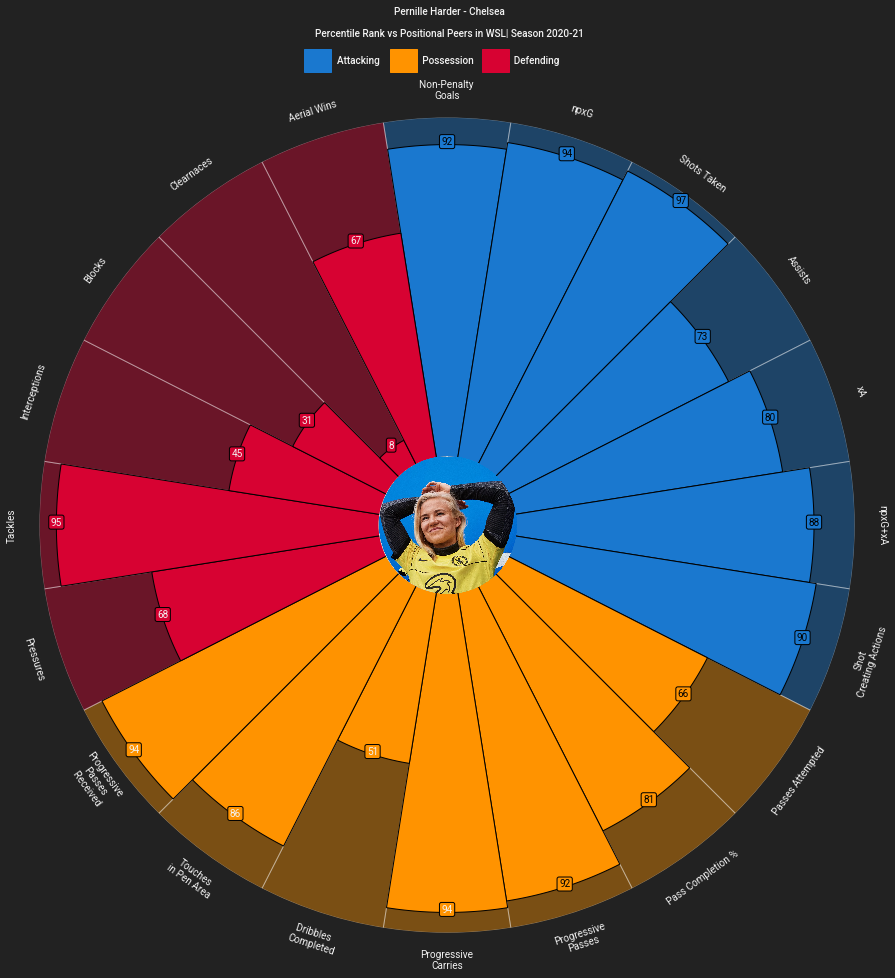

In [120]:
params = ["Non-Penalty \nGoals",
          "npxG",
          "Shots Taken",
          "Assists",
          "xA",
          "npxG+xA",
          "\nShot\n Creating Actions",
          "Passes Attempted",
          "Pass Completion %",
          "Progressive\nPasses",
          "Progressive\nCarries",
          "Dribbles \nCompleted",
          "Touches\nin Pen Area",
          "Progressive\nPasses\n Received",
          "Pressures",
          "Tackles",
          "Interceptions",
          "Blocks",
          "Clearnaces",
          "Aerial Wins"]

values = [92,94,97,73,80,88,90,66,81,92,94,51,86,94,68,95,45,31,8,67]

slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(15,15),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

fig.text(
    0.515, 0.975, "Pernille Harder - Chelsea", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Percentile Rank vs Positional Peers in WSL| Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


# add text
fig.text(
0.35, 0.93, "                          Attacking                 Possession                Defending", size=10,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.38, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.545, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.439, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [121]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL per 90.csv',encoding="latin1")

In [122]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [123]:
params = ["Gls/90",
          "Ast/90",
          "G+A/90",
          "xG/90",
          "xA/90",
          "xG+xA/90",
          "npxG/90"]

# The lower and upper boundaries for the statistics
low =  [0,0,0,0,0,0,0]
high = [1.25,0.68,1.76,1.05,0.46,1.33,1.05] 

In [124]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*7,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [125]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [126]:
pernille_values =  [0.63,0.21,0.84,0.54,0.23,0.76,0.48]

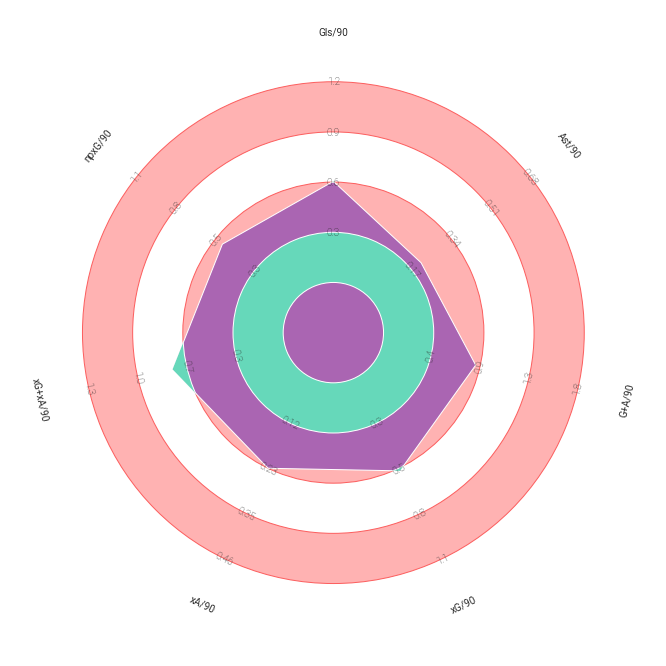

In [127]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(pernille_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

Text(6    0.655
Name: Gls90, dtype: float64, 6    0.85
Name: GA90, dtype: float64, 'Pernille Harder')

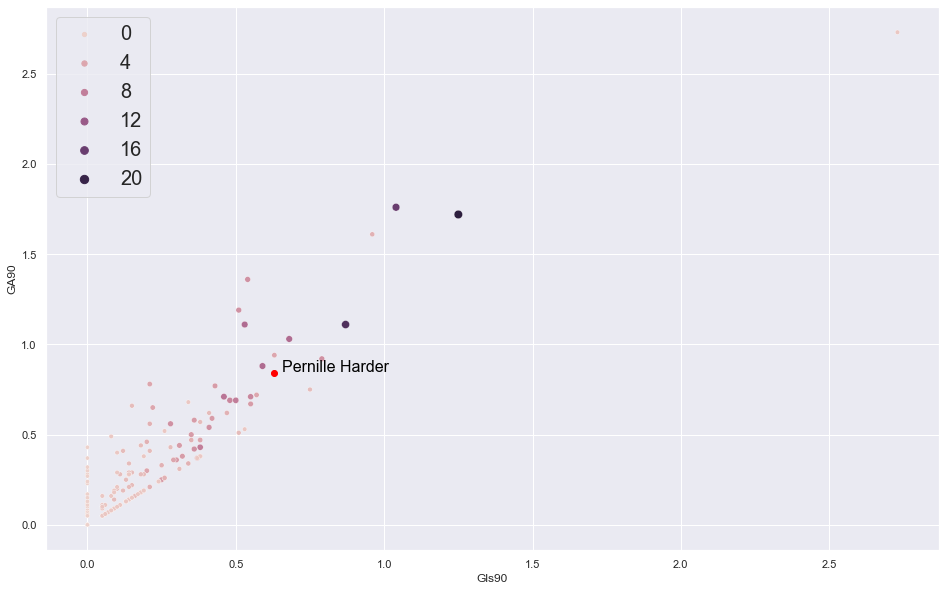

In [128]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls90", y="GA90", hue="Gls", size="Gls",s=70)
g.legend(prop={'size': 20})

#g.ax_scatter.scatter(0.38,0.47, color = 'red')
plt.scatter(0.63,0.84, color="red")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text
plt.text(df.Gls90[df.Player=='Pernille Harder']+0.025,df.GA90[df.Player=='Pernille Harder']+0.01,"Pernille Harder",fontdict=dict(color='black', alpha=1, size=16))

Text(6    0.56
Name: xG90, dtype: float64, 6    0.77
Name: xGxA90, dtype: float64, 'Pernille Harder')

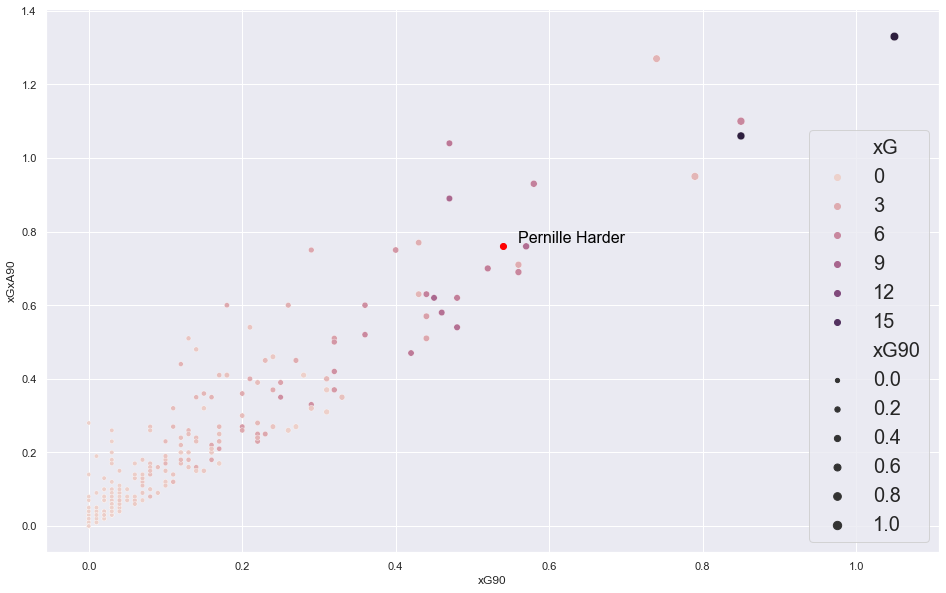

In [129]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xG90", y="xGxA90", hue="xG", size="xG90")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(0.54,0.76, color="red")
plt.text(df.xG90[df.Player=='Pernille Harder']+0.02,df.xGxA90[df.Player=='Pernille Harder']+0.01,"Pernille Harder",fontdict=dict(color='black', alpha=1, size=16))

In [130]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL Passing Stats.csv',encoding="latin1")

Text(5    31.5
Name: PPA, dtype: float64, 5    8.01
Name: CrsPA, dtype: float64, 'Pernille Harder')

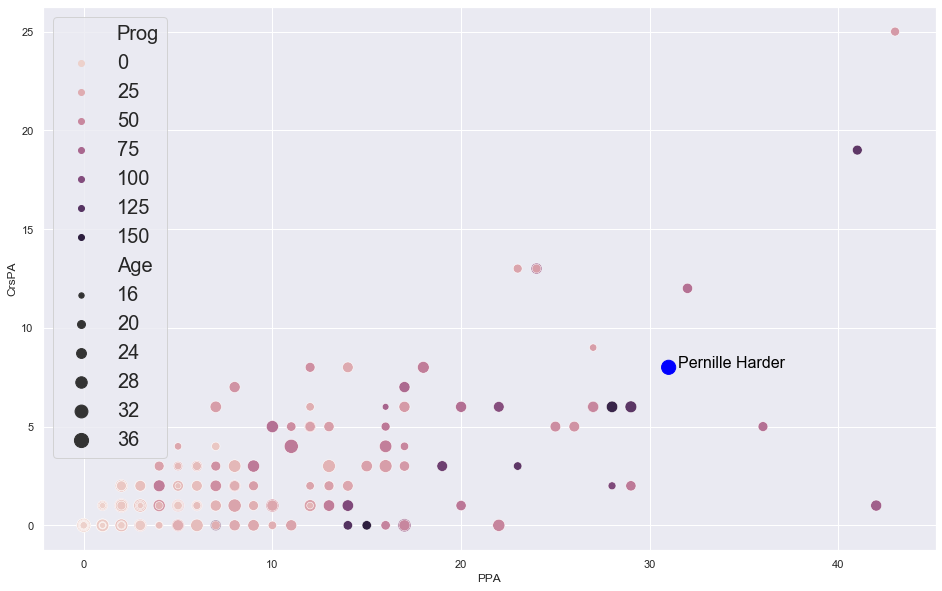

In [131]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="PPA", y="CrsPA", hue="Prog", size="Age",sizes=(20, 200))
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(31,8, color="blue",sizes=(200,200))
plt.text(df.PPA[df.Player=='Pernille Harder']+0.5,df.CrsPA[df.Player=='Pernille Harder']+0.01,"Pernille Harder",fontdict=dict(color='black', alpha=1, size=16))

Text(5    66.5
Name: Prog, dtype: float64, 5    1938.01
Name: PrgDist, dtype: float64, 'Pernille Harder')

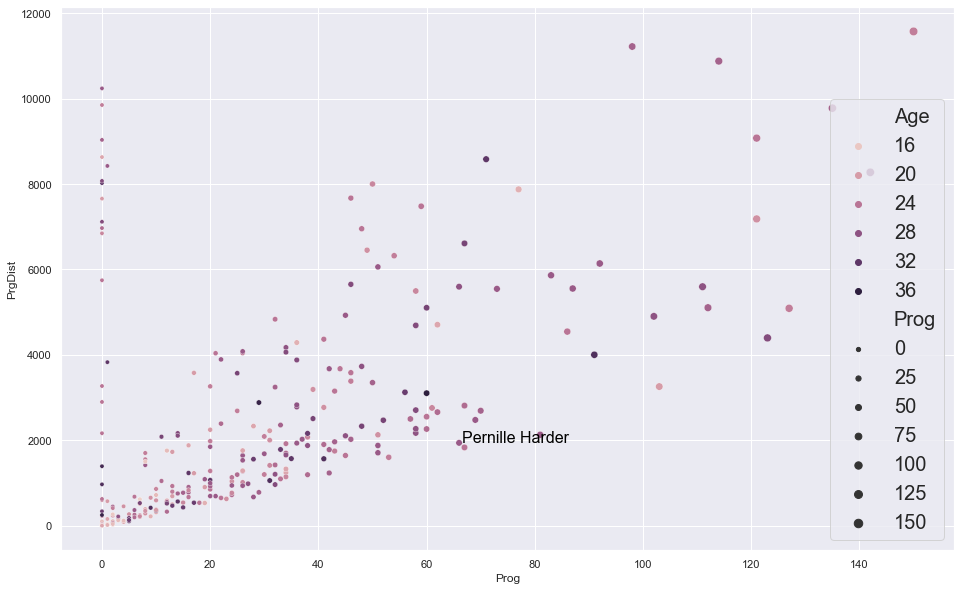

In [132]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Prog", y="PrgDist", hue="Age", size="Prog")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
#plt.scatter(31,8, color="red")
plt.text(df.Prog[df.Player=='Pernille Harder']+0.5,df.PrgDist[df.Player=='Pernille Harder']+0.01,"Pernille Harder",fontdict=dict(color='black', alpha=1, size=16))

In [133]:
from mplsoccer.pitch import Pitch
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
text_color = 'w'

In [134]:
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [135]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\Pernille Shotmaps.csv',encoding="latin1")

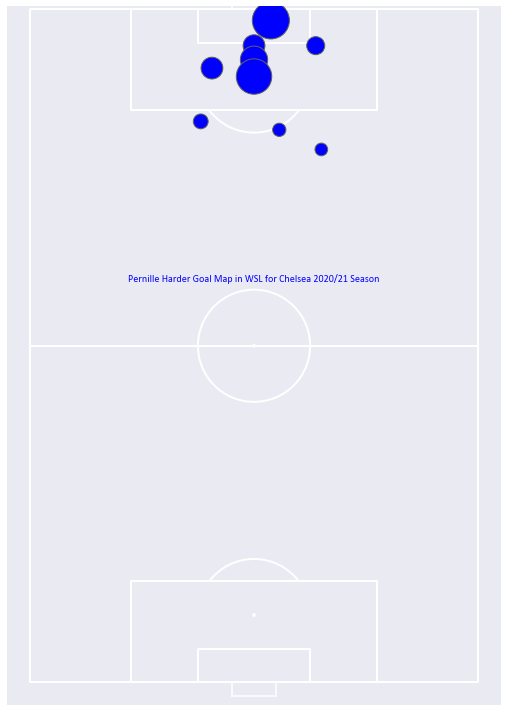

In [136]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='blue',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Pernille Harder Goal Map in WSL for Chelsea 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='blue',
              va='center', ha='center')




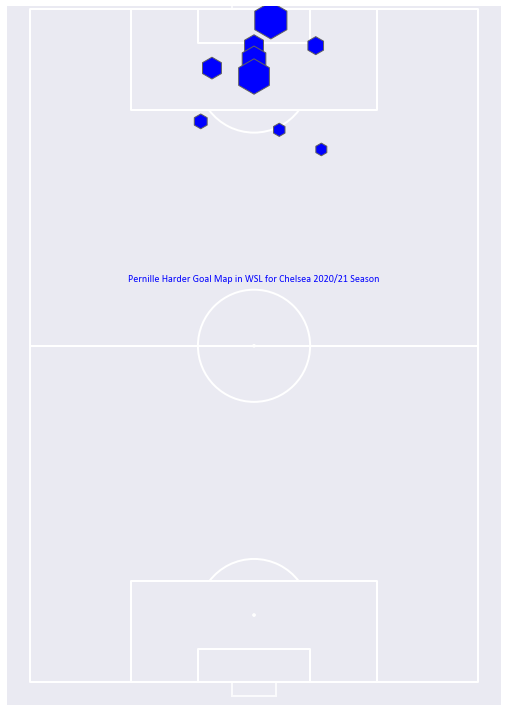

In [137]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='blue',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='h',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Pernille Harder Goal Map in WSL for Chelsea 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='blue',
              va='center', ha='center')




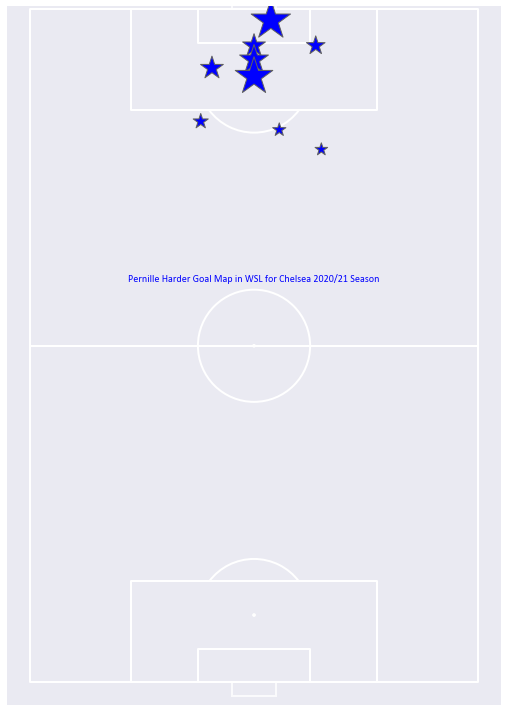

In [138]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='blue',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='*',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Pernille Harder Goal Map in WSL for Chelsea 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='blue',
              va='center', ha='center')




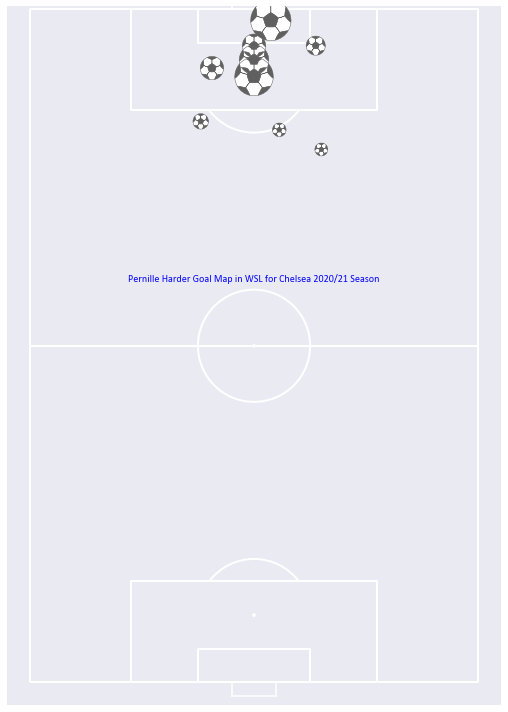

In [139]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='white',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Pernille Harder Goal Map in WSL for Chelsea 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='blue',
              va='center', ha='center')


